In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

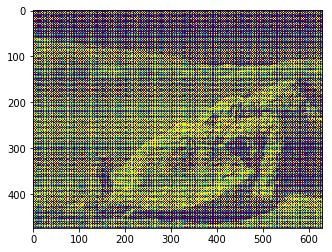

In [7]:
img = plt.imread("./imges/moonlanding.png")
plt.imshow(img)
plt.show()

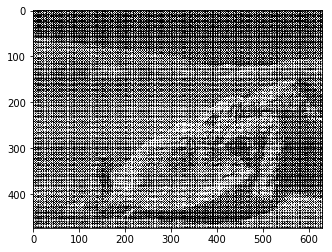

In [12]:
img.shape
# cmap  clolor map 颜色映射
plt.imshow(img, cmap="gray")

## 图片灰度化处理

- r g b 亮度，把三个值变成一个值
- 取平均值， 
- 取加权平均值
- 取最大值

In [13]:
from scipy import misc

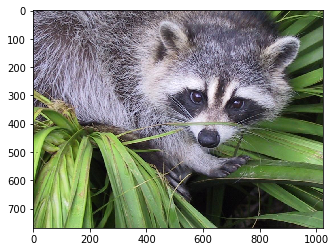

In [15]:
face = misc.face()
plt.imshow(face)
plt.show()

In [16]:
face.shape

(768, 1024, 3)

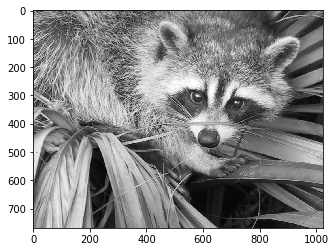

In [24]:
# 得到的是亮度信息
face_light = face.max(axis=-1)
plt.imshow(face_light, cmap="gray")
plt.show()

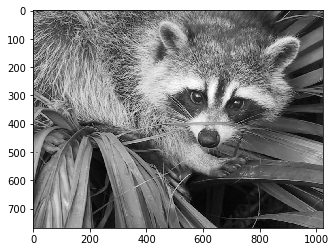

In [27]:
face_mean = face.mean(axis=-1)
plt.imshow(face_mean, cmap="gray")

### 加权平均值

- r g b 
- [0.4, 0.5, 0.1]

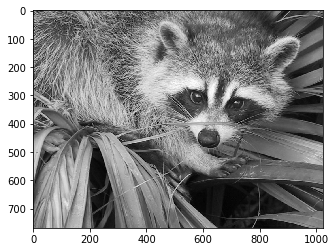

In [31]:
ndarr1 = np.array([0.4, 0.5, 0.1])
ndarr1.shape

face_dot = np.dot(face, ndarr1)
plt.imshow(face_dot, cmap="gray")

### 通过傅里叶变换进行图片降噪


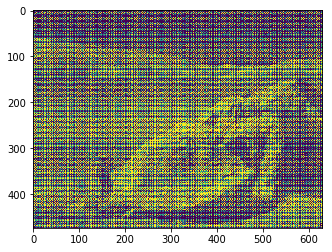

In [67]:
plt.imshow(img)

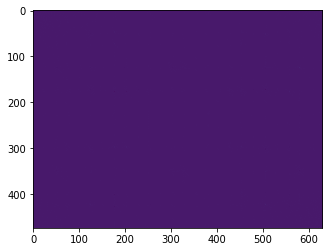

In [73]:
from scipy.fftpack import fft2, ifft2

# img_data = np.fromstring(img.tobytes(), dtype=np.int8)
# img_fft2 = fft2(img_data)
# img_fft2
# # 寻找变化范围很大的值

# img_data[np.abs(img_fft2) > 1000] = 0

# img_ifft = ifft2(img)

# img_real = np.real(img_ifft)

# plt.imshow(img_real, cmap="gray")

# plt.show()
# img

img_fft = fft2(img)
img[np.abs(img_fft) > 1000] = 0

img_ifft = ifft2(img)

img_real = np.real(img_ifft)


{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## 登月图片消噪"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 171,
   "metadata": {},
   "outputs": [],
   "source": [
    "import numpy as np\n",
    "import matplotlib.pyplot as plt\n",
    "import scipy.misc as misc #图片处理 miscellaneous 乱七八糟\n",
    "# 同学们在导入scipy的时候 可能会报错 pip install scipy -i https://mirrors.aliyun.com/pypi/simple/"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### 导入图片，观察黑白图片和彩色图片的区别"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 215,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([[0.04705882, 0.        , 0.23921569, ..., 0.        , 0.00392157,\n",
       "        0.53333336],\n",
       "       [0.        , 0.        , 0.6784314 , ..., 0.10196079, 0.2901961 ,\n",
       "        0.        ],\n",
       "       [0.72156864, 0.10980392, 0.6039216 , ..., 0.        , 0.21568628,\n",
       "        1.        ],\n",
       "       ...,\n",
       "       [0.00392157, 0.        , 1.        , ..., 1.        , 1.        ,\n",
       "        0.95686275],\n",
       "       [0.        , 0.        , 0.15686275, ..., 0.        , 0.        ,\n",
       "        0.3529412 ],\n",
       "       [1.        , 0.52156866, 0.04705882, ..., 0.        , 0.        ,\n",
       "        1.        ]], dtype=float32)"
      ]
     },
     "execution_count": 215,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "moon_ndarr = plt.imread(\"./moonlanding.png\")\n",
    "moon_ndarr"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 184,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.image.AxesImage at 0x1c1b7f30>"
      ]
     },
     "execution_count": 184,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAUwAAAD8CAYAAAAc052eAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsvXlQV8e2Nrw2k4BERQOKiBAgSJQjxHCEKBfk4ABXRbk4UahAgSjlSGlUSsWBckQlyucQxyDlPEbKOQ7IjbOJhqNJ1MQYXqcYp/iaOIXn++OXteg9mHjue8891yq6qusH3Xv37rnXWs9aqzUAVBtqQ22oDbXhz4Pdv7oCtaE21Iba8LqE2g2zNtSG2lAbXjHUbpi1oTbUhtrwiqF2w6wNtaE21IZXDLUbZm2oDbWhNrxiqN0wa0NtqA214RXDP2XD1DQtXtO0bzRNu6Jp2vh/xjdqQ22oDbXhfzpo/916mJqm2RPRJSLqRET/h4hOE1EKgIv/rR+qDbWhNtSG/+Hwz6Aw2xLRFQDfAXhGRBuIqMc/4Tu1oTbUhtrwPxsA/LdGIupFRCuU/wcQ0f/3J+8gLCwMRIRmzZqBiHTRw8ND/nZycoKPj4/8X6dOHRAR3nvvPRARAgICJM/Pz0+XR0RwdXUFEcHe3h5EhEaNGkmej48P6tatK/+rf/O3+e+3334bRIR33nnHlObu7m56vnXr1rqyHBwcTO309PQEEaF58+YgIjRs2FDyuA1qX9SvX1+Xx20jImiapis7MDAQRIQ33njD1K/8vouLi6ktLVu2NOXxd/l7XLYaQ0NDQUR49913TXlt2rQxteVlfdCkSRPJ4zpwfZs2bSp5Xl5epu9x/zk7O4OI0KBBA923HB0dX1q2+l5ISIhpbnEazx9jf1uNsTpXeJ5b9b3VWDdu3FhXljo3nZycZEzUseP6q/3JZavvt2rVSlc2rym1fTyn/f39Te3kMrlP1G9znloX4/zjMt98803J43nK76trgdc1zzE1urm56d7nvlBjcHCwaawdHR3xSvvbP2HD7E3mDbPY4rlsIjrzewQRISMjA0QEOzs7GSzunOrqahAR4uPjpZFHjx4FEQG2AnULaOXKlbpO4rLVyVdaWgoiwrVr10ydymVu377d9N7evXtBREhISDANHG8G9+/fBxGhsLBQ8saOHasrOyAgQCbCmDFjQERYsmSJqS4c+aB4+vSpaYLdunULRIS7d+/KAuaytmzZAiJCdHS0qcygoCDdJOU+JSLExsbq6puXlyd5P/74I4gIZWVlkpaTk6Mrmw9BIsLQoUORlpb20meJCF27dgUR4bfffgMRYfz48ZL33Xff6RaEehht2rRJtwD79u1rKvvw4cMgIpw5c0bayv3H7eOxIyKEh4fr2peSkmKaYxx5PNQ28fzjstU4e/ZsEBGmTp0KIsKQIUMkjzeradOmgYjw8OFDyeNNkcs8f/68qexdu3aBiODt7Q0nJycZQ6KaQ5v7kvuNiNCrVy9d2UlJSZLXv39/eZ4PhgULFui+a9x027dvbxprtS94LXz88ccgIgwcOFDynjx5AiJr4okjrzleg7yWiQhfffUViAi7d++WtA4dOrx0rLmt/6oN830i2qf8n0dEeX9GYXJDACAxMRFEhHHjxukauWDBAly+fFn+T09Px6lTp2B8PygoCA4ODro0nkzXr18HEaGiokLygoOD4efnBwB49OgRBgwYAC8vL1y+fBnBwcHo0aMHiAiXL1/Gtm3bQFSzgXPZzZs3N33v5MmTKC4ulrRFixZh8+bNICIcOnQII0eOFEq3R48epvcByIZrzMvOztalRUdH4+LFi3BxccGkSZPw6aefgogwYMAA3XvPnz9HUlISJkyYYCrz5s2b6Nmzp+l7derUQWVlJWJjYxEaGiobxLfffqt7dtWqVVi7dq1lfQcMGGA64ABg4sSJ2LBhAz788EPL9wCgadOm6Ny5MyorK015PDYAoGma5M2ePRsAkJ6ejsuXL0PTNDx9+hSdOnXSLaxx48ahbt26ssj4/R07dsiGpH6PD3AAaNSokeRt27ZNt0DHjx8vY7B161bMmDFDnm3RooWpnVevXsW+fftM33Nzc0NcXJykxcbGolWrVrhy5QqaNGmCwYMH48svvwQAzJw5U/c+EwJdu3Y1fe/atWvIzc3VpfEBe/r0afTr1w9eXl4AgPHjx5venzZtmmlu8e+MGTNknXHa2bNnYWdnh0WLFmH9+vUvHeuIiAiEhYXh0aNHpry8vDy8+eabpvdSUlLQunVrdOnSBXfu3AER4caNG7pnDhw4gKKiIt0c4d/p06cjLCwM+BdtmA5E9B0RvUVETkR0noha/dE7derUgY+PjzR27dq1yM3Nxb59+3DgwAFd4x4+fAhfX19TZzo6OqK0tBSjRo3S5fFpfvfuXTg5OSEjIwPr1q1Dq1atLDtu+fLlurTq6mr4+/tjyJAhOHbsmG5x8gI+efIkEhISEBQUhP3791su+MDAQNP3jh8/ju3bt8PT01OX16hRI2EpCgsLMWfOHDg7O2PDhg267x8/flyoFGPZkZGRprQvvvgC8+fPB5GNuk1ISMCOHTtQv359jBgxAgcOHJBnBwwYgM8//9xUdmpqquWkS0lJkb8HDRqExo0bY9++fYiOjoaPjw84dOrUCU5OTnjw4AGICAsXLgQR4cMPP8QPP/xg+p6RMlixYgXs7e1RXFyMWbNmSV2WLVsmVMatW7fg7e2NxMREODk5WR6ea9asQXl5uS5t//798Pb2Ro8ePXDlyhXJCw8Px/fffw8iG3cxcOBAeHl56Q5D/o2MjLQc6xUrVqBfv36WY8VU5AcffIClS5da1nft2rVYtmyZ5eFQv3593dwgImzevBm7du3CV199hfDwcISHh2PPnj1o3LixqewOHTrg8uXLurR79+5hxowZILIdsmpeeHg4AGDNmjUYN24c3njjDXzyySdISkoSMcf169eRlZUFIsLPP/+se9942BMR7ty5g8GDB0taSkoKNm7ciDp16mDq1KlYs2aNHEYTJkyQdXblyhW0bt0aAISjMZadn5+Pmzdv6g69/fv3o1WrVggPD5f+x79iw7TVkf6dbEj5t0Q04RWeF7aRKRw1qnITHx8fHWvHkRf3pEmTJC05ORlEhE8++UTSWEbGUZWN5ObminzDKjZt2lRYEt6YCwoKJJ//ZnmaGnlC/1FkGRCLD1R2+cSJEyCqkd/wRCfSs8Uvi4MGDQKRXpbauXNnEJEsFrWf586dCyLCnDlzTGUZZY9Mqahx3bp1UjfuM5bTcX1Vtogjt69Lly4gIqEg1cjUoCpm4b+ZeiGyHRpENfJFlY23agcR4dy5c6Y0ZhuHDRsmacxy8+H9KnHp0qXyN7PK3BeqvJMPYpX95832ZTEiIkL+Hjp0KIj0LG12draUbZS3GsVXamTZJ68bVXzAkTevkpISSeO5yyICq8j147ap4gOeizw34+LiJI9FNUzcqFGV0RPVrFM1Mtf22WefSdrvB9C/ZsP8L2ywugXFUQUxmNXjRU5EKCoqAhFhz549pk5RZSLqgKuR5VLqhOHJxCw7y1rUQVQXKpFeSM5lLF68GESEkSNHSnp6ejqIbCwPkX7BshjCSs5ojLwZqZs7bxTqpOXDJzMz0xKUMNbZ29tbKFA1sthDlWsxC819SGQtO+TYrVs39O7dW/43AjBENQfSxo0bdYuOiHQUBteX25SZmambO6ps17hwmCokqtnsuH1qZGpFbd/L4urVq0FESE1NlbTx48dD0zSdTNjYT0bgSI08D5hqZtCFqEY2N2/ePFN/MlXH/WAELokIs2bNAhFh8uTJpjyem23btpU03si6d+8uaVaHpBr5MFfbt3PnTknj8nktqYSL+hxHdS9Q50C9evWgaRqGDx8u6cx1qYQVH57cPqu+fpW96n+VpU+rVq10///yyy/y9zvvvENERF9//bWkOTg4EBFRUFCQqSx3d3fd/82bNzc906xZMyIi8vT0NOX5+fkREdEbb7whad999x0REQUHBxMRkbe3NxERVVdX6+oEgFq2bElERD///LPk3bt3j4hI8u7cuSN5z58/15VNRKRpmqleREQBAQFEpO+LN998U9rJ73l5eUkaAGrQoIFleUREAOj69evk7OwsaY0aNdLVSW0njxW3hYjoxx9/1JVpZ1czvR4/fkzXrl2T/9V2cnByciIA9PbbbxMRyS8RmequHLbUpEkT+vXXXyWP+0INb731FhHpx5Pr06JFCyIisre3l7xvv/1W1z6r+nLgvrh+/bqkPX36lADIvDW2U22f2k4O3Pc8b+/fvy95VvP2wYMHRETk7+8vaT/99BO5urqayua2cP8REQUGBura8n//7/+VPP62OtaPHz82lauGc+fOyd/cPp63RET169e3bCeRbTyNQd0LiGxrAwDVq1ePAOjayeOpjplxPNWxNs7bPwz/auqSKUzY/sCLFy9k52cK6sKFC0LhFBYWyrPOzs4iA+M0/rVKy83NFWpgypQpILIJo9XnN2/eLJQOU2sODg7QNA3z58+Xk+yPvsdUxfz583VIc6dOnYTSmTZtmo69JrIJ/tVyTp48aZLhMTsaEBCAQ4cO6fJWrVolpylTxqyWw8/s3r0bDRo0QFhYmE5OR6SntI3tY/kZEQmYwf3Dz/To0cOEiPJv3bp1RROA0y5evIiwsDDk5OQIy/XNN9/onmH0n4hM8uWHDx8K5XHv3j1dXocOHXDmzBk0adIEixYtAhHhyJEjuv6eN2+esLLcd/x+RkaGpYzS2D88f3Jzc4XtJbJRx4x0jxw5Eu3atdO9z8CZ2vfMjXAaz3sisyYHU9x+fn6YN28e9u/fL33I7zOXY9WGdevWwdvbWycLZWp6zpw5QrEfP34cQUFBOpCUyIZS16tXz7LshIQE+Tan8RgkJSUJWPT111/rnvniiy+kvgyuct6pU6dEc8H4PZU6ZVB169atumeGDx+uouG637Zt2+Ltt98GXmWvepWH/tmR1YcYeb506RK2b9+OO3fu4NmzZ6ZGtmrVCsHBwbo0BwcH/PLLLygoKICzs7Np0gE2Ye+UKVPw+PFjxMfHA9ALz1euXImDBw+avpeQkIAtW7aIKo0RIQdsCN7vSJspr2fPnmjZsqUp7/nz5/jpp5+kLpzn4+MjLMTevXtx7tw5ODs7m/ri9u3bOHnypOUk6Nu3r2VdeCJ27NgRAwYMAGBDYnft2oVr164BAOzt7TF06FDL91+G2hcXF+v60dvbGwDQsWNHJCUlgUNBQQHq1Kkjz7K6z/79+3Vl8rgY1V1u3boFTdNQVVWl27B37dqlAxciIyMxaNAgBAcHWwIdt27dkvE09n1RUZEuLTo6Wv7/+eefUVxcDF9fX2Hv1GfHjh2LPn36mL538uRJZGdnWyLkAODi4oJly5bhhx9+gJ2dnemZiooK3L592/RekyZN0KJFC1NdHj9+jEuXLgEABgwYgM6dO8vz6vvBwcFISEiwrJPVWtA0DYMGDUJ1dTXOnTuH3bt344033pDvsLoPABGtGMueNWuW5feYiOF+fPr0KRwcHPD5558LQEdkO+jU93r37g0AsuEbyz506JAujddiaGgocnNz1bzXY8NUB8NK6M4dHxgYiLS0NJ3+2aBBg3SbHi8CIhJkk/Pi4uJE9sKnDQv0iWwUjwoaMUXEMSMjQyhG4+ZFVEMdM2WSkZEhpx8AeHh4CBWgyvM4suzm4sWLILJRVCy74u+ounOsC8d53DY3NzedvioRiZoGI5/29vbYunWrru9UeSvrQnLeiBEjJI9lx9w/XLafn5/o3xknLRGJSg+nbdy4EZqmoX379iLPZfCPgQ+mZtX68ftM9RDVUI+c16hRI+EmGKhQ5ZdENjk3U6hGFZvw8HAdaktEguyrabxpd+rUSQ45jn369AGRTQZYt25deUfTNKFM1b436r2qQKGqskSkl61nZmZi3rx5oidspRdqpOZUnVpOY5mqlT4pU4xM8asyceNYN2vWTIAnTuMyAwMDRT7Mc5nLVOXURu2PlStXijy2qqpKl6fWheWy/D7rdMbExIiBhbG+zs7OaNasGV5pr/pXbpRSCdILZq0io3sqG8uoo5XiuVEobVU2o23GyagO4vTp0015jCAzgqiirwwA8WJWhfAMwjx58sQEwrACrorEviyyRoAamVJTNxEWHzB6bwUuGKOKPDJKy5OOtQ6IajYo3oCJ9Cgnkd6SJi4uTgckREVFmb7NY8sHooqQWwF7HJky4ahanHDkBW8Ej4hqNnwVvGN2kylqo6WWGpmVVJHcDz74AET6TZYjAx0M/lj1BeexKpsaWSyjagQY56ZxDNXxYOSaNxWiGosuPvRVRXTWZlCJCSvDAzWqwBuDKox4E9UYKXCZqtWNypq/LLJWAa/BiRMnSh6z4yooxporrCKlWh5xW19lr/pfBfqcOHGCiKzBjk2bNhEAEZgTEZ0/f56IiLZv3y5p/O7x48cty1bDp59+SkRER48eNeWVlZUREdGpU6ckjUGMbdu2ERHRDz/8QEREz549k2eePn1KRESbN28mIqLbt29LHoM+GzduJAC6dnJZ/N4fhZ07dxIRUd26dSXtP//zP4mIaN++fZJ2+PBhXTvv3r37p2WrwvobN26QpmlSpytXrkjexo0bicg2LhwePXqkK4uBLCIbIKKCRlxfNXz//fdERLRjxw4iqhkDIvN4quHQoUO6///+97/L39zHXNbZs2dN7/P3eOyIasaa2/nll1++9PsbNmwgIqInT55IGgNK6nhyXSorK3XfteoLq/HkcODAASIiKi8vN+Xx3OBw48YN+ZvHY8uWLURUA4QQEV28aPONw+1VASx13nJQ863Wq5ubm/zN6+uTTz6RNF6PPHbquBw8eNBUnjG8ePGCiGrWjfo+t0/tex5Pnq/qWBnn7R+GfzV1yRQm6xmq6gEc1RM4JiYGEyZMAJGeFGeKUAUumI1UTyymcpjaUqmRoqIiHSvLVjgcVSp1zpw50DRN973Vq1dD0zQRTpNyklVUVJjUpoxUJuse8qnbqVMneYbZkHbt2pkoFSuK06iPxqyKSrUx9fvLL7+AyCbX5DwWg7Bai1pX1dZZ0zShwlR7ZqZAv/zyS0njvub6GnUsNU2Tsea6WenRMUXIoApRDbWkUtgs02L1IaMdtKq7yOa4bFrq5eUlLCDL8lRqeu/evSJO4DTVpt5KjUvlZBj4YBEUm8lqmiZmtSpFrrLQxrnZrFkznZ4mW/yo64a5DKZ42cSUiMTCyCrynGfZpBXHxTgBg5DqXLYSsRn7f/To0SCqUbsjquFWeG6qgBpbJFlxhkZVLZ6bqh8AnttsKEFELFd/PVhyNzc3REVFAbbdE0eOHEFhYSEqKytFnsd5gE0Iz6ACp7Vo0QL79u0T+RrnlZaWsmE9goKCMGXKFBw6dMhS0F1aWiqDYPxefn6+2OBy3s2bN6FpGq5du4asrCx06tRJJoj6fnh4ODp27Gj63vfff4/jx48jNDRUlxcWFoagoCA4OTlh7dq1KCkpQYsWLUSex89eu3YNixYtMlmGaJpmCTxUVVUJihgVFYXs7GycPHkSoaGhmD59Oi5evCjP5uXl6SxvWNap2sOr8k9VeJ6fn4/w8HCcPXsWAwcORGRkJKqrqwHYgIGgoCAAEDkqkU2eZbQoASCLiL9XVlaG4OBgbNy4UWeGuWfPHln41dXViIiIwLBhwxAYGChmr2rZ+/fvN5l2fvHFF4iKisLgwYNloQI2UOHx48cgsokLxo0bh4iICGzbts1k9ZScnIwOHTqYvrdnzx6MHz/eBLrUq1cPAPDmm29i4cKF2LFjh/SP+n55ebkYYKh5np6eCA0NxfHjx3V5n332Gc6dO4cHDx4gKSkJvXv3xhdffKFD6wGbXD0tLc1kjQPAZA8PAA0bNkT37t0BAPv378eCBQvQunVrHD9+HLm5uTrT0YkTJ1qaMk6ZMsWUBkAOJMAGoh49ehStWrXC8uXLReREZBMbsdjm8ePHYvrJusxqmawTrabFxsbi3Llz6N69uwCSv+e9HhumsZGsTsTADAM5Q4cOxZ49e+TZmJgYk2oLd5IxjcimbM1oG6uRXLlyRWSQAHDmzBmR2ezYsQOOjo5Sn7KyMjlhjWWrf/OJ+/HHH+uAitzcXKGKFi1aJHJLIpscRTHRApFNzYgtdDiNTbyio6N1oJaPj49sPv369RP5btu2bXWL+sKFCwgJCUFycrJuU+BFySe0sX2bNm2Cr68vXF1dZbKyXJGfycvLE+rf+H5kZKRpAf7000/o27cvpkyZIjIx5hSM7wcGBorzBzVPkT/pfjMyMnD79m20a9dONppz587pKI2dO3cKlWtUQ5kzZ85LUV7jGBHZKC/VIUWfPn0EZJoxYwbS09PlHT7AjRuqUUWOuYrfAQkQ2ShfFxcXAQhjY2OxefNmXLlyRXe4EJGYFasbMGt47NmzRxTROY85stLSUlkDV69eRVJSkk7bhMhGDTK3Y2zLwIEDTSAcH27Dhw8XbsBob/7gwQM0atQIDRs2NBEe9+7dM2lM8G9ERATeeOMNBAQECIdx6NAh3VxZvHixCcTj38zMTLzzzjvA67RhapqmE5pzZEE1bw6qMJrZRWaj1Jifn6/73whIENWwKSobx5EpCrZoUeNHH32kq4sKprCwmwdcRZeNag8qKNK7d29omqbz0POyeOnSJVMaq5WoLBCzcUx1W5nxGS0oVCAhMDBQN+mYjVS/pyLP3bp105Wl6sclJibqxoCF/mo0etNRv3fkyJGXWiupHqGIrAE+BntYrUqN3D51HBlxZv1BtUxjPRiBVtvPQBRrG6iRxU4sdkhISDCVyeIWVaTBkSl/K4sYo7crVUzAGhdMNKgAEbP/3BcqCMOsPftlIDJrkBjFTQzGcPuIag57ohoNAl6DqmUQ6wf/UeS28BpUxSV8UPA6Japhybl9KijFooHXasPkhlhNAka7XFxcEBsbq7NP5cnG76vyPNVZBpHNSwwPFMsZVVvwvXv36uQoRrO4uLg46Xhe1CoKymg9e1lSPeNwHXgCq/IpdbJrmia2ueqmz+/z5kdUI/thqoHbRmRGillNR7UFNlI0qukjU06//vqrKY81EBjJZdRWXSjGU5z7X00zahsQ1RxQ7EKPOQG1Dvy+urkbOQ2iGhknb2Rsrsibk7qBs5oXv+/p6SnybO5f7kP1OeY4goODTa7fmAJjE0+WTRLZuBe1nF69epkOKBXlVe3QNU3TzU3VIIKoxouUuoEbndiohxGrIbF5pSrH5z7kw5fd46mRy2RVOyIyscdMzbq6uspmxXOZD1910zNyVqoZJ9uAq2PNkQ8afp/XaUBAgGzqTGCp7//uAOf12TD/yPedOlEaNGhgSWnwYrSiooyn38ui6pj4vxKZtVfrx+oP3t7ef9iuPyvbykkvU0FW9sKvEvm7Vk4w1E3svxKtQDUGGqzs+v+RPuEyVVt8Kz+Vr1K28TtWfWE1L1Tbbo5W9s5/NoYMlKn1MPqW/LP5Q2Sb468yj/4ZY83vq74NePxfRZXtVerLal5EZLKQ+0fnD68XlYomejUK83+NWlHXrl2pQ4cO5O3tTYMHDyYvLy+aMmUK9e/fn4iIrl69SgBo586dlJiYSEQ1qg2PHj2i6OhocnBwoNzcXCIi2rp1KxEROTo6UmRkJKWkpJCnpydlZWWRl5cXvffee7Rq1SoiqlG9mDhxIs2fP5+IiDdy+uyzz8S+es2aNUREtGrVKmrQoAGFhoZSixYtKDMzk5o0aUKpqan05ptvEgBRc2DVp549e4oqBZddUFBAycnJBEBUIcaPH09dunQhIqLGjRtTZmYmNW7cmGJiYsR2vqqqijRNo+XLlxMR0fvvvy+qEdwn7dq1oyVLlhBRjTpIx44dadasWURks7dOT08nT09PioqKIiKikpISUdMYMmQIBQcHU4sWLaS+W7duFTvdkydPEhHRhx9+SAEBAWRvb08VFRVEZLNx7t69O9WrV4969+5NmqbRtm3bRL0pLi6O4uPjycvLi7KysoiIKCcnh0aNGiVtAEBZWVmUnp5OREQPHz4kIpudcbt27YiIaMqUKdK+mTNnUoMGDSgiIoL69+9Pb775JmVkZBARkY+Pj6ieVVVVEQBq1aoVlZSUqIc2NWrUiP72t78REdH69euJiKi4uJj69etHbdu2JX9/f8rOziYPDw/q0aMHderUiYiIvvrqKyLSq6exnT+rv4wYMYIGDRpERDVqcDk5OfRv//ZvlJycTB4eHjKP2rdvT4WFhUREdOvWLSIiKiwsFDt4LpO/ERgYSIsWLSIAVFpaSpqmUVhYGC1fvpwyMjLIw8NDfmNjY2WcWK0oNTWVwsPDiahmbi5btkzmBc/NGTNmUEREBBHZVKMGDRpEXl5e1LlzZ6pbt66MFVGNylR0dDQlJyfrxjApKYlmzJhBRDUqen369KEPPviAiGxqepmZmeTl5UXvv/8+EdnmGYexY8eSn58ftWnThjIyMqhx48ZUUVFB7u7u5OLiQocPHyYAtHz5cvLw8CAvLy9RKwNA/fr1o0aNGlFCQgIR1ewVrxT+1dQlU5hMHv/yyy+YPHky3NzcsGbNGnTp0gUHDx5EVlYWUlJS8OTJEwBA48aNsWfPHuTm5ppQt5CQEOTk5JhM30pKSkQ+smvXLsTGxmL9+vVYtGiRoO6PHj1CVFQUiouLMWnSJMycOVPYnzt37mDy5Mkms8zOnTsjNjZW0g4dOoQePXpgwoQJOie0n3/+OTIyMlBQUIAJEyZg5cqViI+Ph6ZpWLp0qQ7pbNiwISorK0VOy2Xv3r0bY8aMMSGxGzduRF5eHqZNm4acnBzs3LkTHTp0QPfu3dGtWzdhu3799VdERkYiLy/PZM3z6NEjbNmyxQSszJ07F5MnT8aCBQuQlJSEQ4cOoVu3bli9erU40WX/oAMHDtSBFGrfG8fj22+/xUcffYQxY8Zgw4YNiI2Nxb59+5Cbm6vTSPD398eWLVuELVTL7tSpkxHpRN26dVFQUIDHjx8jPT0dBw4cQFxcHFasWIH169cLJfjjjz8iISEBRUVFOrM8IpvscMk8unhlAAAgAElEQVSSJSazyszMTPF3mZCQgEOHDqFv377IyckRkMbNzQ0VFRXIycnB1KlTMXbsWJSWlgKw+TqdOnWqzmZe0zQcOHBAkGDAhuTu2LEDBQUFCAkJkTqEhYVh9erVmDRpEgoKCpCRkSFAaHZ2NiIiIuTZu3fvolWrVmICy2UnJCSgsLBQ9z0im4hl5syZmDx5MhYvXoxu3boJOl9WViYmrS4uLjh+/DhmzJgBe3t7XdnOzs7o1auXyRJu7NixmDZtGnJzc7Ft2zbExsairKwMGRkZIqrgtVtaWmqy5gFsGhNG37GBgYEYMmQICgsLkZqaikOHDiE+Ph5FRUUICAiQZ69evYrevXtjzpw5prl58OBBfvb1YclJIemZTQkKChINfQZm0tPThdxmFRnVSQHnqZr/ZEF+E9XIGllm6O7uLt/jBauCPiyTYpSPQQ0VeeXIfg7ZlRZRjRyIhd8hISHCpjJKzNcB/FGsqKiApmk6QTnLdVT1CwacWA7VuHFjna6kMb733ntimsgLn4jEhlnVkeWrO9iihUhvWmmM2dnZunxmq1n/0d7eXuS6fHCwDFjTNF27ODJbPHXqVB2bFhoaamK7WR6oXjnCwn7VwQdHBip4zJjttGL9WU9TNVdkMIzl2qpeLPcZA19Wc5NljOzIJTg4WNrE853nv7p2VOudkJAQseBRI8t+ray62Im36peW66Jaoc2dO/cPRV2qazVunwpgsbydDypVVGClu6mKM1TRB88jFfhjeTbLPTVNE3m7FUDMbvleqw2TbbpV5WmOLCTWNA2urq6WTmVZjUEVfrPvTPW+D6MTWRWpzsjI0F26ZYyqk1dGONVFwn9bybJUxO5lkRclgxtqXVhoryLPjCqzysYfRZ4w/A1VwZ7tmlUflXzgsJqQGlUTQk3TTP5BiWrQWl6c6gbG42El0+Ox5sNJPRQ4ssMR7idN0+RvdRP4I2fQRGbDBCJrjQne/FQfq+w31Mqv58uiijLzJmLlWPr48ePi65HTVBU0q8gyfKKazUqdh6zYbmVqaeUDlSO3j9eN1YHOG7eqVsUy1z9ynM1zmQEh9eAwapuoeUxc/FG9OaqmyRx5k2ZCieNrs2Ha2dnBzs5OlNTnz5+P/v37o6SkxMSSXrx4UagSTmMUs7CwUOydOW/06NHQNE2Q3C5duqCoqAju7u7yDP/m5OSYWDPAxoL07NnTpJfHiuQ7d+5EWFgYXF1dLe+00TQNderUMbHAW7ZsERtnVmPiPI6jRo0SVNp4782mTZteqlvG10Koabt27ZKyHB0dRSmYyIYSf/zxx/Jshw4dTEr8L168MDmI4N+YmBhRfmbKqaSkBH5+fnB0dMSDBw9w584doQhYNYopuA8++EAQWC7z7t27gjBzGluxTJw4USgeAMjPzxcqgy271EvYjPWdPXu26VoHnmsRERG6+4e8vLzEEu3jjz+WgzgvL08nvnj8+DECAgLEe49adkFBgajnqM8T1dhY9+/fX7gBI0s7Z84cTJ8+3fJ6ECIyGWwsXrwYy5Ytw5EjR+Dt7Q0vLy9LnWUimwWUUaPk4sWLwlFcu3ZN912+64f1S4lsB5Vq4Xb69GlByo1uBLt27WrSOb548aIOWY+NjRWVruHDh+sQ9LS0NBmrzz77TJTjGZwztm/IkCEyJwDbHVXr1q2Du7s7/P39VfHP67FhEtXou6kUJrOPKiWQmZkppxwrZbu5uclmpl6pwItTPdlZn05FOZkNnz59uqiXMIunntKq8wkeXJW64sWvsiq8uIqLi2Wz4XapFESDBg2EBWaZaWBgoCB6KpVMZKOqmJqePXu2tJXra6R8eLGqqkesCMyqXH379pVy+PQePHiw9A/XxYjKc5mqHi2rDLF3+CZNmki7mGJr3bq1UKuqqEDTNDFjZHZJdX7BSuaquSCzX6oqFqvVqGOtUmLMdqpsNiu5q5Qtq1+pqlU8p1RqW/VAxf3NrHj9+vV1qkGszcEbXYMGDaTN7EWKqEYsojq+4DaoY61SUjzn1Prywape18JUPLePqIay4++6uLjoOAEeQ9Xskn2lqj5T2ZRRpTq5L1Quicjs3T44ONh0hQd7PyKqEXMxR8d7gHGs1T7gQ9zDw0PmCouflLuAXo8N08HBAZWVlcjOzsaMGTOwYcMGJCcn4+jRo1i8eDHat2+vOzV27twJf39/nV/KixcvIjg4GPfv34efnx+uXLmCvn37IiwsDGVlZZg6dSpGjBiBvXv3Ii4uDnPmzMGJEyd0N/89evTI5BLu119/Rd++feHn54f79+8jJCQE5eXlyM/PR1JSEhYtWoSPPvoIqampOH78ONq2bYs+ffroTtCGDRviwoULuvq6urri2LFjmD9/Pnx8fHDjxg0BJrZu3YrAwEBMmDABW7duRUJCAiorKxEcHGzypxgSEoJdu3bp0iIiIlBUVISjR48iICAAlZWVyMrKwogRI4SyGzRoEA4ePIioqCh8//338Pf3x/379wEATk5OuHXrFrp3746lS5dK2devX8fw4cORkpKCu3fvok2bNigrK0NRURFiYmLkuV69euHMmTMICwvDjz/+iObNm+PmzZsAbFTAyZMnMXToUEyaNAlbtmxB06ZNsXPnTpSWlgrA0bNnTxQWFuLIkSPw8PCQsjt37oyvv/4aLVq0wP3796V9T58+Rbt27bBx40bMnj0bQ4YMwaeffopu3bohLy8PFy5cEBdr9vb2SE1NxU8//aQb68jISFRVVcHPz0/at2fPHly5cgWpqamYO3cuVq1ahV69euHs2bOYNm0aOnXqJN6cANuFd3wpF6cxQHn37l34+vri2rVr6N69Oz788EMcPHgQeXl5GDNmDMrKytClSxd8/fXX2Ldvn45LeP78OSIjI3W+RAEb4Jifn4979+4hMDAQJ0+eRG5uLtLT03Hr1i0UFxcjPT0d5eXliIyMxA8//IAbN24IWOPm5oarV6/KoQfYOKKLFy8iPz8fXbt2xY8//oj27dtjw4YNWLVqFd577z0AwIYNG9CzZ0+cO3cOrVu3xk8//aSj8oKCgnD48GGR2QI2y6zS0lLs2rULfn5+uHz5MlJTU5Gfn48vvvhCxujTTz9FXFwcrl69iqCgIDx8+BDBwcGwt7fHo0eP0LlzZ5SWlmLhwoXIysrCL7/8goEDBwr4VqdOHRw5cgTTp09HYmKiboxOnDiB8PBw3Lx5U+b97999PTZMleqIiYkRKjM9PV2E1nyqqGwoU5WrV68W1pZloTk5OaLvN2bMGLi4uMDb21sowrZt28rpwyZ7a9asEZaPwQHV2QCfxJ07d5YTNikpSagypgLc3NzEEoLZvg8//FD8M7JcLyMjQ05vppb8/PykjmFhYSLfUS1q+NTmcsaOHStUF1Pq7dq1EworNTVVvsOK+m5ubsJysXJ4cXGxULLcJ3379hXrmPHjx8PNzQ0NGjQQ1j4iIkK+ozoi4X7k8iZNmiT+Dzmvbdu2QqknJycLS1dUVIQGDRrA3d1dvqOCUSwPXrFiBYhsskX+Tk5ODho1aoQGDRqIrKtly5bClaju3VjEoQJBpaWl0DRNKOT27dtLn3br1k2oslmzZsHHxweapom8V/VVyqIZrlffvn3l26NHj8Ybb7wBDw8PmTNBQUFCYS1dulQAL24rU+pqfZkLaN26tciMk5KSBECZN28e/P39YW9vL9RYSUmJ9AvXUbUO4n4ePnw4vLy84OjoKHMmJCREZKFr1qyROnI91L5luaZK8fM8i4+PF25k0KBBaNq0KRwdHWUNbN26VdY4rxlVNs3fyczMhK+vL1xcXDB9+nTY2dnBz89P2texY0f5Drdx69atAoxx+5lbeK02TCsfhlbxZcrBTFZbKbVaXYplFV+mEPsqCsFEf6xAbvSU84+WbeWP8f9VOZi/beWP0Qr5/0ciGyKoci0GDl5F8fiP+ojFKqoCPIMMr2qk8LLvGPtC07Q/NBpQI8vWXxatEGurG0atrMD+THHdymjCKlpdsveysX7VuclyZisjhT+r959FHg91bf3R/HmVOru7u0PTNJ3nL6JX2zD/Vyiua5pGcXFxlJSURPb29tSxY0ciIgoPD5eLnkpLS4mIaOTIkfLe2rVriYho9+7ddOnSJSKquSBq+PDh8tzdu3clvXHjxpLOis3szzA4OJhiY2OJiOjYsWNERDRz5kze1Klfv35ERDoFXaKaC9PYL6CmaVRcXExEREVFRaRpGj18+JCmTZtGRDZleCKiqKgouQwqJydH0tTAF5ldvnxZ0lip+j/+4z+kfayYy31CRJSSkqIr287OjiIjIyWffRayAnSfPn2opKSEiPSXjrFP0KFDh0paUVERERH16tVL0vLz8+Vv9qHIl1fl5OTQhAkTiMjmw5CVsHlcfHx8KCwsjIj048GXXLEiNFGNv0t+fujQodS2bVsiIvr111/lIji1DWzQwPOI20tUo4QPQHxypqWlEZFtzFV/pz4+PkRkU8Lm8WYDiIKCAnlu0aJFRFTjszIoKEgu6uLxCA0NpZs3b8qc5N+LFy+KcQb7b1TnBfuQXLp0KRHZ5hsrYWdnZ8tzPXr0kLnJ8+y7776j2bNnE5FNOZ3f58Bj3bt3b5n3XGbXrl3luaKiIhm7qqoqIrJd7sZlDR48mIhsRggeHh5EZFunRETOzs4UHx9PRDaFfiLbPOeL2D799FO5HO3ChQtERLInEOkvU+P2TZ06lYhsY8jjoK5TnrunT5+mZ8+eEQDxVTtkyBB65fCvpi4BUP369QFAFE3v3r2LnJwcXL9+Hbm5ubh37x4yMjKQk5MDDuydZ9asWZg4cSJgG10ANndqVpfFb968WRRijx49ipiYGBw5cgQLFy4UZeTq6mokJCSguLgYS5YswZw5c4Q9+OWXX7Bw4UKTu7AuXbro7uWprKxEQkICFixYoHNPV1lZiXHjxmHixIkoKipCaWkpEhISYGdnh2XLlumUtb29vXHjxg1hbbjsM2fOYOTIkejZs6euDuvWrcOCBQuQn5+P8ePH4/Dhw4iKikJKSorJlV18fDymT59u6p/ffvsNW7ZsgZubmy5v5syZWLx4MRYuXIiUlBScP38eXbp0QVlZmSDCDg4O+OabbzB69GhLd2qlpaUmF2L379/H6tWrMWPGDOzYsQNxcXE4d+4chg0bpvOkFBISgs2bN5uQYMDmTq1Hjx66NBcXF3z44YcAgGHDhuHkyZOIiYlBWVkZ1q1bJxT5o0ePkJKSgtmzZwvLxuVcunQJmzZt0mlTVFdXIysrS+6ESUpKQmVlJZKTkzFlyhRRzG/UqBGOHTuGKVOmYMKECZgzZw62bNki83by5MkmlPj06dO6e3liYmJw4sQJTJkyReeSLSYmBitWrMCiRYswbdo0jBgxAp999hkAm+s9li8S2eTvLVu2xODBg3X907FjR5SUlIgTDs4bOnQopk2bhuLiYixfvhzJycmorKzE7t27cfLkSUHK69evj1OnTmHevHkm14IeHh6m7xHZNFjy8/Mxbdo07N+/H7GxsThz5gwyMjJ0z0ZFRaGkpMTS3dyoUaN0yuiATXF99OjRmDdvHrKysnD+/Hl07NgRGzZsQPPmzeXZW7duYciQISgoKDDVrby8nLGB14Mlb9KkiVxsxJd3nTx5EhyMHVdUVGTy99ilSxfMmzdP5Cmcx3K6ixcvws3NDYMGDcKMGTMsLyXjjcH4vebNmyMhIUH0tjiPZVbbtm1DTEwMwsPDLW+xrFOnDsLDw03f27VrF5YsWQIHBwdRMXn8+LHOHj4/Px/Dhg2Dt7e3oHvqQLO801i20e8hkU0+pTq8SExMxLx58xAYGIjExESUlZXJs9nZ2SYVqefPn1v6HCSyyYvYn2VSUhKCg4Mxf/58JCYmol69evj555/x+PFjhISEwNvbW5TTWV1k+vTpJp+O3377regfctqkSZPg4+ODUaNGiTI6ACxfvlzkgRUVFWjSpAmSkpLg4OAAV1dXU30LCgrEfyanLViwAO+99x7atm2LL774QjaIjh07iiu70tJSdOvWDS1bthQVILXswMBAy0vXFixYoHMowRe5OTg4yEaZm5uLCRMmoFmzZqYNtbS0VAwtjGV7enqKPJvTioqKsG3bNhw4cAAhISHo0KEDFixYYPK9SmTTg2Q0mtMuX74sck82tAAAOzs7+Pv7AwAWLFiA9PR0+Pv7Y/bs2To91StXriAhIQEuLi5y7zuXza73VFWlEydO6NTEBgwYgBkzZsDPzw9ZWVk6+WhBQYHuJlBeyy9z9Tdo0CABOwGbv9kFCxbIPT+K39fXY8M0In9ff/01MjIy8OTJE7lhrri4WLeJjhgxAk+fPsWXX36JNWvW6BDozp07Y/To0aaOW7FihVgbbN68Gd7e3ti5cydGjRolaPmdO3cQGRmJ3NxczJs3Dzk5OaJ+8t1335k2LcDmvFhFRsvLyxEYGIiCggKdz8hdu3YhOzsb/fr1w+TJkzFz5kyRTU6aNEmnK6ZpGi5cuGDagMvLy5GYmCioNE+6GTNmoKCgAAMGDEBmZiY2bdoEb29vdO7cWecP8e7duwgPD8fIkSNNV71ev35dtwnxb2ZmJmbNmoUxY8YgJiYG5eXlCAgIkEnMfX/w4EFkZmaaqA4iG0jCurCcdvXqVcyaNQtjx47F4sWLERgYiKNHjyI+Pl53Q6KHhwdmz55tuUFFR0frTAf5Ny8vDw8fPkTv3r2xe/duNGvWDOvWrdOBeLyos7OzVcG/LERWA1LL7tKlC5gjCg8Px7Fjx9C6dWuMGjVK59l//fr1yM3NRUpKCvLy8uRWTQcHB6Snp+ucMxPZvDOpm1bz5s1x4MABncNlIpscNC8vD7NmzUJGRgZSUlJQVlaGJ0+eICsrS0cRX716Fa6urkhMTNS1wc/PD8XFxTJ+nJeSkoKBAweioKAAkydPRmRkJCoqKrBs2TKTt6OtW7eaLo7j3+TkZJNHoPz8fKSmpmLEiBEoLS2Fn58fjhw5gtjYWNE5ff78OVq0aIHJkyebnDsDQP/+/U3cj4ODA1JSUjB8+HB0794dhw8fhp+fn+lK5rNnz6Jfv37il1TdrNeuXcsc5uuxYRLZQBEGbrp374769etj9OjRYtXD1h2bNm0SITyz1z///LMIgtmiRUVs7e3tBXlXPdwwgsbWLPXq1ZMrJZhF4/KIaqxkrDy+GCO7UWOzMk3TZOPlwVQvYmIg41UAHEYeVSE7I8+qZQ7nWwn6raKPj4/p8jiiGqRSvY6BqSXVs47q49IKqGHE3xiNz6o6hxxVN3wcGQCMjo7+Uw9IfGWCasrJlDy3T40M0PDVDH8Uuc9Uc0LWi1TvBufIQIaVpRH3Bc9n7gvVmxej+6puYuPGjU2glRUwRVRjrWN1kRkrt6tAFwN3KtiiuoezaoPVnFPNFxnssvJTq+puclTXrbpuOKo60qxtoAKO/De3T43Kfeevz4bJahPZ2dlytwmjhYGBgYLkzZ07V1R2WMUhOjpa2CveKL28vBAbGwtN03STgH1Idu3aVbw7c2eXlpbKJGTlYFUR1soNFiufa5pmuZGysm58fLzlQFtFK9dhqsI5Rz5grFBuq0VIpN+Que68uNUFxiojViiuMTIyrSKZfBipfhtZDYcVq18lWmk4sOmfuiAY8VSte1SlcqtoVKAmsqmqEOkRb95sVTNaqz5X+0o1o+VodWDExMSY0qzMD9X7h6yiFdKtjjUfDqqCO2/Y7ADmVcaD54xqYty9e3edeSpRzfqx2hBfFtVNkSPXVzVz5bn1Z6av6jgwMk5Uo4VgNOl9bTZMvtdkzpw5qKysRGVlJSZNmoQXL17g4sWLws6wcP/p06fo1asXAJs8ggPf7cFkd0lJCTIyMvDixQts3LgRu3fvxosXLzB27Fi55D4/Px8AkJWVJeUwgMOeX2bNmoX27dujuroa/fv3x4ULF1BWVob+/ftj6dKlGD16NNq0aSN6oeHh4bKBsyL8oUOHRI7C7MqyZctk8e/ZswetWrXCoEGDhIJIS0tDQUEBmjZtKmaYDRo0EEe2bFJXUlIiZX711Vfw9PTE8OHDMX/+fGiahuXLlyMpKQlRUVFi7hgbG4tVq1bByclJzP6OHz8urOKpU6fg6emJqVOnipPk3bt3Iy4uDtHR0di1axe8vLwwceJEjBs3Dg0bNhTP4y1atBDrIWZT9+3bJ2V/8sknCA8PF89NRDYLrdGjR8PDwwNffvklIiMjkZycLHq1rGTu7u4u9t5sSrl69WpUVlbCwcEBCxcuRHJyMmJjY7F8+XK0aNECKSkpogPIzjBatmyJzz77DJqmibxQLbOiogKenp6YPHkyysvL4e/vj9GjRyM3NxctW7bE9u3b0bdvX7Ru3Vr8GDDHY2dnJ+N+48YNENl0FbkvduzYgfDwcPTr1w9r165FbGwsevfujXnz5sHDwwNHjx5FQUEB7O3tpU+/+uorWfDs3efs2bMICAjAwIEDcerUKdSpUwfFxcVISUlB69atcfToUaSnpyMyMhJr166FnZ0dTp8+LXq1XN+KigqhHrkvNmzYgKSkJISFheHgwYPw8/PDqFGjMH36dNSpUwdXr17FpEmT4OfnJ86eVZEE9/P69evlcGERwYQJEzBlyhTUrVsXGzZsQKdOnZCQkCD6pQ8fPsRHH32EevXqydw8e/asHICVlZWoX78+CgsLkZaWhqioKBw9ehQRERFITEwUXdJZs2Zh+PDh8PX1FZv0hw8fSvu5vkePHuVrQ16PDZN1tgCAyCZfnDp1Kk6cOIELFy6Y7Gc9PT1FjqS+V15eLhsQpzHlyv93794d5eXlOgSNf6dOnWqyL+ZNuaioyOTpmX8rKyvl1GNHFpzHC4eoRqzAeaNGjRLWlgEPRlo5tmnTRigy1WKCyMYW83eNdVI3ZsAmsykuLjY5p1XZ+/79++veZ1M3fv/8+fMyaY3fe+ONN8RrDzsNYTEBkc2LkmqWx96HeDGFh4ebbJ1VrzWcxlTBwIEDZZFXV1cjLCxMuANVgdz4vloOm+9xGhtHuLq6St05jxfZ8OHDxYyTPZPzM9x+deNh+a7qfZ+1IXgz5NsWGzduLKzuxYsXdfM+OjraNLfVsTKCYyNGjEDfvn115pjqJWNq3YhqFNY5r7S0VKhaNopQn79+/Tq6desmFL3qEZ2IBEzkdamW7ejoKGuBPfqrtyjwc8xJJiQk6CjVBg0aYObMmdA0TcQpqrd3Y/+0a9dODD84TRUPKIDZ67FhOjo66kCbU6dOCZVXWFgIAOLzkMOUKVNw/vx5AEC/fv10k2D79u2W6gMc+G8GToqLi8UEEACuXr2KJUuWALCZYTJQxIFVkHhCDxw4EB999JHl9+7cuSOXXn333XcAILfu7dy5U9hKoxoUOxQwqhUBNnO2uXPn6tL69u2L3377DYGBgSgtLZUrJtiqQX123LhxWLZsmWV9hw4dioYNG+rSfH198eLFC6SlpZlUeIwbxunTp6Vf1AVvvIWSf5cvX46zZ8/ik08+gYuLCwCIeRw/ExUVhYyMDJPzEgAvBR42bdoEAJg6daruvfT0dDHfe/LkCVasWIHAwEDd/COyUR+qOZ06Z/iwVsEm5oyIbCKQRYsWoaqqCo0aNUJlZSXWrVsHAGjWrJnlDaIAdEgu912LFi10cyMzMxOdOnUCALRp0wazZ8/GL7/8AgByUBjLHjp0qOX3jADfgQMH4OXlhZ9//hljxowRDst46yKRjapnCyc1z93dXVSo1LwnT56gadOm2Lt3r04bQjVNBmzADq8PY9mrV6/W+fvk30mTJqFbt26idmjVB1euXBHwz5i3bt06Vsd6PTZMZ2dnXUPWrFmD/Px8VFRUyB09nPfgwQMEBwebOprIZhZpHEQ+WZ49ewYXFxekpaVh//798PX1Nb2fl5eHxYsXmyja0NBQjBkzxnTlL7NGFy5cwNChQ9G0aVPTacrUhNUgVlVV4YsvvpANWM3j+N577yEiIgKapolsi58ZNmyYKrA2vc8sO7PUU6dO1VmRaJom4JSvry+ysrJk49A0zYRKHzt2TOSwxj5wdnYWtSuWnakXwO3du1dHYa5bt04HDqgmiFy26n6L01hOlpCQINTNTz/9hNjYWJFpW7nSM/ZPr169dGosRHp/nkxtsj4ggzdDhgwRKxbVc5N6FxOR+fZL1T0bO5XmucIUjp+fn5iZGr0HdevW7aUqXUQ1oAfrr6alpSEtLU3njIbHg+vL97ur64TLZJtxohoTZL7lkcim8tWtWzeRI7KusloecxpGL1/16tUTkRWLBVatWiWUO2Cz92dPSKr5LZFNXssHJQNELLJR28fUa1hYmEldkLEM3m9+z3s9Nkzjpmec7Krj2uzsbGERiGrQZX6fTy+iGjTx6dOn0DQNTZs2FRaWUVAV2V20aJHuf6M544ABA0Swz7Iu9TL4c+fO6fxDqh6DrNpljKzywrIcFYnkTU8FZtjszArlNUbWNlDrxCg6s0cqqMHskNUtlkaAwHhZHFGN3b1VuznN6h4n3ox4Yzear6ljrG5CLLZQ7aL/URNMohq/qmpk3VXekIlq7I//kfuUVKSfN3ujFyqiGp+cqhmwFTikRrUv2cOT1fhb+ftURSfGaDQ1tQIfecNX2VxnZ2domia6vFagEgOiDKqpIA4fzEwwqXm8vtRbL18W1UsNObLNuioGIHqNNkxHR0ckJiaK49SVK1diyJAh2L59uyVL2rNnTzg7O+vSoqKiUFBQIMq2TCmlpaWhfv36+PLLL9GsWTNxZ69eKcG/CxcutLQmiYiIEKsONW/79u2wt7fHnj170KdPH/To0UMn9+Nfb29vtG7dWmfJQ2RzsmD0cfnbb7+hQ4cOaNSokYAY48aNQ2RkpImFWrVqlSwUY1vUCcHUSmpqqkxOXpDqQhw2bJh43A4MDBQ1GS5z69atIsNkRXuVqmI5n5OTkzPzDFMAACAASURBVNjqMhK9adMmGUtN02RD5u9HRUWZFLPnzJkjC5bTWG/Vx8dHNsxjx46hX79+ogLEZavaBixWefTokWhgMJXBZauqMCzvO3z4MJydnQU979u3ryDoxqtpWY9S/R7nJSQkiM01A2889nwoqR7SP/74Yx2nk5GRYbp18969e7pNRNM0OUxiYmKQk5Mjcl1V5YipMdZ1rF+/vkk+On/+fKnLihUroGma7kbX06dPo0uXLsJNhIeH6w4o5haIyHRXvbe3t8hW2e/omDFj5Hu8ZlRVO1UpPjY2VggfdnGo3hbL1D3P+6ZNm5oo6NjYWEH6lTX7emyYLLtitPzrr79GVlYWnjx5Ik5tDx8+jFOnToHDBx98AAC4d+8eqqqqdBtGcXExTp06herqatjZ2QGw3WPy22+/AbC54AKAhQsXShlsXgkAS5YswZkzZ3Ds2DGcPXsW27dvFxdjjx49EvkoiwW2bduGbdu26epQVlaGH3/8EQBkcwaAgwcPYtOmTSgvL8ejR4+wevVqtGnTBjdu3AAAMXlU62M0bTx+/DhWr14NAGJVcuPGDezcuROLFy/GzJkzsXfvXkRFRaF///7o1q2b7v34+HiRDRs32507d6JBgwa6tPnz52PJkiVYvHgxUlNTcf78ebEO4WddXV1x6dIl5ObmiiWIWvaGDRuEBeS0Bw8eoLS0FDNnzsQnn3yCzp074/PPP8fIkSN1DpVDQ0Oxfft2S6X6Xr16oXfv3ro0Nzc3MY0cPnw4Tp06hbi4OJSVlWHjxo2is/n48WOkpqZK+9Syr1y5gk2bNskdMrx5DR48WIwUkpKScOHCBTFEYJDNw8NDzBqnTJmC2bNny/zw9fVFQUGBcAz8vTNnzugcKMfFxeH48eOYPn06oqKi5LmYmBisXr0axcXFmDlzJkaOHIkTJ04AAMaPH4/IyEh59tmzZ2jdurVJthcfH4+SkhKhNjkvJycH06dPR3FxMVauXInevXujsrIS+/btw8mTJ+Hk5ATAJqf8/PPPUVRUZCJcGjdu/FLTyGnTpmHatGk4cOAAOnbsiNOnT5tk91FRUVi7dq3JoTZgk1cbxVfBwcEYM2YMioqKMHjwYJw/fx4JCQlYv369mFFqmoYff/wROTk5cqePehgdP3789TKNNHbM2rVrERwcjNOnTwugExoail9//RUc+vTpI5c/GTeU6dOnIy0tzTRo/L7xez179hRVJMAmPOdFOGbMGGF5ORjf7969O8aMGaNLY1+Gd+7ckcG5ffs2AMikLi0tRceOHeHq6orx48fr3mdggNUzOK+6uhpDhgzBV199pXueN4iuXbvKAcL+Ko2WVPPmzbMEfZ49e2a6+xuwmcPduHED7du31wEdRmuOlStXmkzs+DclJcW0QAGbWldZWZnIoqz6t3nz5oiOjrYEjZhNNr7HoFhmZqauD1Uq8tKlSwKKsfoPv79jxw4BztSyWZ8RgE5T49NPPxWKXtM0nQf5ffv2icUaEVna2t++fVtQdjXP3t5e1OWIbMi8n58f7ty5g/r162P48OGiImfkVljmaAXU3b9/3yTDZfHAN998g969e8thzMSJ+mx+fr5Jps6/H374oak/uS9Xr15tQuTV3w4dOqBly5Z48eKFKa+goEAuK1Tz2A1k9+7dxXrNCNgdOnRIdLSN78+ZM+f1An18fHxEr7Jhw4Z4+vQpvv32W3AwNjIuLs7kpJUd665cuVJudeSNiqnMyMhI2VhGjhxpKvvo0aMmd/oAMGTIEBw4cMCyLvyN5cuXIyUlxfKZqVOnIjU11TIPgOlWv5iYGMTHx8PDwwPnzp1DVVWVoObG961u13N1dRVbe6amOY9Z7oKCArnJsF+/fnj+/LnUJzo6WlBd1XkvAFH1MdYlLS1NxCDMJlVVVcHLy0vGBoB4eef3eKMsLCy0RKWNbChvKrt27RLWG7Dpyqobspubm07Z21jfvXv3msz9WAUsIyND2NXq6mqduWFFRYWoglktwPj4eNOtokQ26y5V3m511cSwYcOE7TXmFRcXi76jMY+oxtekWs+tW7fi3r17CAsLQ5MmTUwiIf61Qo6fPXtmSdETke7AZ3Ds66+/RlhYmCiKV1VVWd7ySUQ69TX1V50bCQkJcuCUlJToLKYGDRokY/Xrr79Kf7NM3lj2ggULTDeWshPluLg49fnXY8NUG6Kiyiz4Xb9+PTRNQ1hYGNLS0gT9JSKTWomKlqnXdxLZ5Egs0+HrBFRE9erVq7pb94y6ZUlJSQJCGFVc1L8ZdZs4caLq/h7BwcF/aJa2Y8cOENUo/apOg7lslicRkWlCs/ln3bp1TX4IGT1lwMXd3V3nHYdIf+OgcdKpl1nxe0aHD+7u7iLHYjkS24QT1Qj+mR1VbwDlyAJ9RndVU022ZuHvqWagrKOq3grIC5AttIwXiVldXaGOJ6sfsTxSvWyO5dmq6awa1WsTOLK8jqgGAGIkVzVF5DqoNy8a54tqFuvp6anTU+R5pFqmMUDCZav+Vdk5BtdbtVhi9J2tlHhjViNTdWfOnDGZdvIhaAXA8VgzB6eCh3zYcX1VKyIWn6g6zhxZa4QPJ1Uzg6PxemEiYq9b/+8bJhGtIqIfiejvSlpDIjpARJd//3X/PV0jooVEdIWIviSiNq+6YWqaJorhGRkZCAsLw9ixY2VicePUe0OMi3r48OFyPwsPFG+QqlIxo8+PHz/WnfQNGzbUKQCrec2aNZMBZkqKKQwVZeQNyVg3IjPbx/c0qwuQ680xOjpagBGjWklGRoYoRKvf40lrrMPSpUtNt3Ky1/LExESMHTtWnnVychIQh9Pu3LkjaKWxf8LCwuSw4/qqXtK//PJLHSrJl82pUb0mwdivfBDyJqCaTDKIwovS6qZANihgZfEmTZro2Gsivbkj3+nDqDlTlVbOhPl9pniJzKo0auSDkA88VcWFQZS5c+dC0zRhTYlqNCS4TOaGiGpMOXlTDgwMhLu7u84ck9vHXIY6HkbQR0XaWWVIfX7VqlU601PeoDiq4CIDsWpfsMoaa4SomjD8nJXDZWNbmPDhQ0JdZ7yfENVs+Fy2esAoooX/lg0zmojakH7DnENE43//ezwRzf79738noj1k2zgjiejkq1TCyJ7wnTaVlZWiwB4XFyf3wgA2gfvevXsB1LiE4/dzc3PF1FHtJA78NwuFc3JyRGYJAHv27BHBdV5enu7mSqsyo6KiTIJ1lvVVV1cLcPD06VMAEB+AX331FYYMGYKoqChs375d937nzp0BQORQal5oaCg2btyoS2MQqHPnzjh//jxu3bqFsLAwlJeXi/iC+3nr1q2oqqoyKWsDwN69e03y39zcXADAli1bsHLlSl37WMm8Q4cO0j9GmVm7du1w5swZAJC7ZDjvzJkzOHv2rKWFFdc3ICAAycnJluKHl8kwi4qKAEDueOG8Hj16yEL//vvvMWXKFDRq1MgkH+W7fIxlqweGKu7Yt2+fmK/yhnD8+HHY2dlhz549Uh9HR0dLF2u3b9826fACNpGICtolJCSgTZs2qKqqgq+vL0aNGoXLly8DgEnDg6n75ORky+8ZtRJWr14NJycnVFZWIi0tTWStU6dONb0/d+7cl95YunDhQhOodenSJbi6umLVqlVC9QE14jL+PzY2Vgdyqb/Tp0+31J/OyspCeHg4EhMTBSwyfv+zzz7D8uXLTUYRRDaNgP9WGSYR+Rk2zG+IyOv3v72I6Jvf//6IiFKsnvuj6OXlJYsyICAAjx49QkVFBV68eCE+FtVGpqWliRxF0zRUV1ejU6dO+Pzzz7F+/Xpdp6qXSbVv3x7z58/H7du3kZmZaeq47du3m9RBANsGx5YjxjyWLS5cuBB5eXmWzwwaNOilVggATHXJzs6We3hOnDiBo0ePIiEhwbSonz9/jsOHD5uQQ3d3d5GnNmnSRPKqq6vFxdrgwYMxe/ZsADbZUUVFhdQnLCwMu3fvBgBT2Tt37hTLJU6LjIzU+dIsLy/HqFGjANg0Fhg0AICPPvpI6hYTEyMs9L179yz7x3g1LQMbhYWFOld7c+fOFTnX1atX0bBhQ90tlsaylyxZYgKotm3bhnr16iEuLk5nMNGiRQtcuHABRDaqOSkpCXXr1jWZTwK2w4yvoTVu4Kzja8xjf5M5OTkmf678+9FHH70UGLO3tzfJUz/++GOsX78eZ86cQXBwMIKDg7F161ZL36Bt2rQxzfuqqioReRhFWywzXLRoEYYNGwZN07Bp0yad+eelS5eQkpICTdN0rvqIbKy3UaR17do1UR0CbAcbc2tsUMJljxgxQjbdyspKIXyMIhv+HT16tIjxANua3bFjB5o3b46wsDDVyOBP90IH+q+FxgBuku0rNzVN8/w93ZuIqpTn/s/vaTeNBWialk1E2UREDRs2pDZt2hCRzZW/m5sbNW/enOzt7S0//re//U3c48NGodK///u/07vvvkseHh5yzQSR7RoAdvffpUsXat++PXl6etJf/vIXXZkhISHUsWNHcnNzI2dnZ97wiYioZcuW4grf19eXiGzXZxARvffee0RkuwLA3d2diGxXK6jhr3/9q7xnFSIiIoiIyN/fn4iIOnToQA8ePCBPT0/JO3/+vFyPwMHBwYGaNm1qutaiU6dOFB0dTURE77zzDhHZrnPQNI2Cg4PJ19eXoqOjpQ9iYmKkfURE77//vvRh9+7ddWWHhYVRUlISERG1aNGCiGzXJ4SGhsozf/nLX+jx48dEZLvW4MyZM5IXGhpKderUkX5p2LAheXp6St8R2caUy968ebNcqUBku6LEycmJevfuTc+ePaMlS5YQEVH79u3pp59+Ijc3N/L19aX27dvTX//6V3rw4IHlPGrZsiW1atVKl/bWW29RfHw8NW7cmN59911df7711lvk6upKrVu3lmsT1DZzCAkJkes51BAeHk7V1dX0zTff6NKDg4OpSZMmFBwcTJGRkdSwYUPd/OXwb//2b3J9hhqCgoLI29ub3n//fVO5np6e5OHhQW3btqW6deuSv7+/XGXBwd/fnzp27EhvvfWWLr1Zs2ZyBYh61UdwcDCFhYURAHr33XfJ0dGRunTpQr6+vtSxY0e6efMm/f3vf6e3336bWrZsSa1bt5ZrZjhERkaSnZ3+dpzmzZtTVFQUrVmzhoiI2rVrRwEBAdSpUycKCgqS9UZkWx9vv/021a9fn1q2bEnt2rUjIqK2bdta9n1ISIhcf0FEFB8fT/7+/tSlSxd6+vSp7tqaPw2vsquSmcJ8YMi///vvLiKKUtIPEtF7r1C+nAa3b98WBV8W4LIlSlJSEtauXSvPtmvXzmROx79ENoG6atfM3n+IapxOqHKZZ8+eYf369WKBoDqbJbIJ/dmU0Op7/DfLSwsLC0VYD9jYQ0YOFyxYoPPhFxkZafKyffXqVZPDDbbVDgoK0lEFdnZ2IthPTEwUmZDxcvvPP/8cQUFB6NWrl4ndP3HihImi49+9e/ciNDQUjo6OYvPMskN+ZsaMGS/1Ch4TE6MTbRDZHI2kpKQgNzdXVFxYvqa+7+zsjKioKJ0zZv59mWmopmmC4LJsVDV9JNLL6Yyy6zZt2kgaiy5U5WimkHgeBQUF6fyF2tnZibu/oKAguLi4iJklkRkwS01NNVmtqSAcK/1zVE0FExMTUVBQIHJMnheq+zJ28MFlqxY77LiCQTCVMuf2sRySZcGqhROXyX2iaZpu3qtluru7C8DGa5FBGOYeiMyOZlQA1AhWqpEdqvDYMmcQGxsrRhBGxNzd3Z21Qf58L3ylh/7JLDk3lhcNI3ienp6mSaQKyI0LXvWFyMJk3vxUlJE3EUbnWEisRi6TwRii/5+69w6O4lrTh98BkUwSUWAJkIEFXaBAJVRGCyqMFhN0ifowWCqDQUuyyjZGH8ZYK7KKHGUtOaOySSZqscCYqIuIIngu0QSBlmTAQuiazDzfH8Pzzunu4a7rt3e//dFVXSN1T/d0nz59wvuE1xdoJr2DUxAzsM6KzONNqZ2dMjJw4EAFSIjAsnPgGhkZqYghA9w8vl27dlpx7fFIU9vMc8bHxzuQW6KPlStXRpcuXSz64rS0NAuwY7oAcZvJajARfP4e/160aJHG2ER8dCKCONWqVdOXk+cm6OTvxQsPD1f/xLt37yIiIkIbARMY5MqO1R/Ky47KlIayXKn4sbs8mStfYBNIIABkovZcKddjh+lP/tmrVy+4XC6/UkbWSRO158pOgiv13KwTIj6AxGyQGZtl42kCLtSUm6wEfywPczUlvOxI2NGK+DooDiDMd5eNsnnN9pWdA5Vu5rVt27YNLpdLQTURn9cmQ3yUCJN986qO/Y81mDPECvpMf/V3F7GCPkf/4Pn1hQB8fCw7ZYhJzACvKuijjz5ymBwA1sC8+blmzRqtgOboKCAgQGORz58/x5AhQ1ChQgU8ffoU9erV0wp+/fp1R0/NhsofofbatWuKQns8HmzYsEEre0FBAcaNG6cVevDgwZbjqSJ6nQMNFQvcFhkZieLiYpQvXx7Tp0/X+/Q3Iv7yyy/VY9S+79NPP1WQitvIxfzggw8sJGr755YtWxx5efg5YsQIRywL8PJXDx065Bh9mp+dOnV6LXcvJSXFwpM06woAzRXFfaaWftWqVcoaoD8Bv5ucnOywm+Mn/3a5XBobGz9+vAUlj4yM1BHT2LFjLUny/J1z06ZNjvQnBKsqVaqkHRmlpux8mzdvjmXLluHIkSPayPJ4WhvalVus/3beIhvBlStXaoN38eJFREVFWWYzLpcL7dq1c7AM+PnBBx84yOkcUQ8aNEgHRv5AvIiICL88VsDrb0vXMnNfRkYGEhMTkZqa+tq6efToUWRnZ1ti+vw8fvz4Pw70EZE14o1BPhdvTHKgiFQT73T7l1efVV991yUi80Tksoi4RSTyj1zEO++8o6g0SbS3b98GF3sBjBw5EsOGDbNso9pn+/btjhwmlFy2bNlSJYF2EKZKlSo4deqUQ70CeF/Ks2fP+r0WonxZWVmvtdFaunQpJk6c6Njn8XgAQAnk3Pf1119j1qxZanMFwK9yiYs9oVvz5s2VoG8HIDgtHDFiBJYvXw4ACsJwiYuLUxCoadOmluPv3r3r+L1mzZrp8xLxTnkI+ixYsAAbN27Uc1+4cEEbP3siO3/3l5WV5ZDakRXx7NkzJR5zeffddwEAq1evRk5ODqZMmeIA4yg/9fd7derUwZQpUyzb2rZtq/8XFRUhIyMDwcHBam5rfnfEiBF+Uenc3FwMHDjQr2wU8CbKW7hwoV91kYh3pmImI+Nn9erVFRw09z18+BDnz58HAHz00Ucqz7ULEcLCwrQxt7NV7En/+B0yUE6ePIlt27YpkJSQkGDRg7+uE7TLiKlEA2DJDAtAs5sC3nfA3E82Bm0TCwoKHO8gv2Nu4+9v27YNz549AwBaC/73G8z/P1Z7oVIUz+ktqQKDBw9W+gx7W7vCgZ/+tg0bNkx7cU5HiBq7XC48ffoUGRkZSjuxO8kMHz5cp1F/7/dIBJ45cybat2+vFfHDDz/UuM3q1ast3DV/I9SbN2+q6QO3cUrRvXt3S1IxIpUi3tABp7f2UcD+/fvRrFkzhIeHO6SKa9euVX6j/VoOHjyIwMBAVKpUSYn19tFkYmKi3yRxIt44nt1i68mTJ4iLi8PkyZOV52jXm/PTnJ6a+8iXtH//888/x7Nnz9CxY0el+9y8edOSemLPnj3KyWUsm8fXrVvXEQIxnam4ja5MrVq1cqRMoMEw46ymAS9DNTwPqTHmNhMZNoUDvD/+3atXL4wbNw5vvfUWXC6Xdvpmqgt75kZ/vEfWFZOMbyqxRMQiGnnde1ayZEnlwnIb36Xs7OzXzkIA7wizVq1alng+35+vv/7a72i5V69eCAoKQnR0tM5i7AOf3NxcR2I0fqampv7hEaYVqvq/YCksLJRp06ZJaGiofPHFF5KYmCinTp2SadOmicfj0eTsLVu2lJycHLlw4YKsXLnSco6oqCgZPny4JqUXESlXrpzUq1dPUd/w8HDp2bOn7Ny5UxYvXixVq1aV0qVLy4cffijBwcGyYMECOXr0qMyYMUN69uwpIiIjRoyQGjVqSGhoqFy+fFlERJ4/fy7vvfeeBdm8fPmy9O/fXy5duiSzZ89mpyDjx4+Xv/71r7Jy5Uo5efKkjB8/Xj777DOpU6eOLFmyRE6fPq0IZFhYmPz+++/y8ccfWxDknJwcWbVqlZQqVcqCxh89elTy8vJk+fLlEhYWJhEREdKrVy9p3ry5JCcny71796RkyZLSpk0bCQwMlAEDBjjQ9T//+c/y448/StWqVXUbANm5c6fs379f1qxZI0OGDJGHDx9KWlqa/Prrr9KlSxcR8aKt6enpcvHiRWU8cGnQoIGsXbtWkpKSxOVy6faHDx/Kv/7rv8rLly+lX79+kpSUJG63WzIzM+X+/fvKCmjbtq2cP39ejh07ZjlexItsmyi6iEj79u2lZcuWUqpUKWnTpo0EBQXJqFGj5NChQ3L48GFp2LCh1K5dW2JiYuRvf/ub7Nmzx4FeX7lyRf7lX/5FKlasKC9fvhQRkbNnzyp6/7e//U2qVq0qV65ckaZNm8rNmzdlypQpenxGRoacOXNG+vTpI0+ePJFPPvlEPB6PiIj06NFD8vLyRETkxYsXIiJSpUoV+fOf/6zHV69eXY4dOyZ9+vQREbGU6bBhw2T//v3Sp08fqV+/vrzzzjvSvn17qV27tlSoUEEOHz4sIiK9evUSEZHQ0FApW7asHl+/fn3561//KnPmzLHc82+//Sb9+vWTc+fOab27evWqjB49Wq5cuSIiIrdv39b74/nty5/+9CdZsmSJ1s/ExET505/+JPn5+fLkyRNp1KiRzJw5Uy5fvizZ2dkiItKxY0cR8SLd+fn5UqlSJalcubKIiL4/4eHh8v7774uIaD3o27evtGvXTr7//nvp0qWL/P777zJp0iQ5cuSIJCUliYiXxfHP//zPUlRUJAUFJonHy174t3/7N3n27Jnfe3Esf6RV/Z9e5VVPRRUFA7ktW7bUbbRqMuNERA5N9JK9pB0R9acaIO+LPXm1atUUFOFoxsxgSPswInFcTd9CruxRTaSdAW5Ou9q3b6/3RzDLrlLxl/mPIINpeWXmJ+E2jk75u5UrV/672RXDw8MVEKhcubKqptjbm36OLB/z/kyzWq6MGU6ePNkC+hAwI+hD8wQRn8GuieQyhmauNNLIyMhAhw4ddPRIQMEEDBhL5jQzICBA1SiUjZYvX15nNxyhT5o0yXIefyAEY+1mEjzei4nucjVlja9bWS5mfedK/idRcPOaTIPo160cVXMEba4EzCpWrKjnZZzdlFpy9Py6NS8vD6GhoahQoYJ6C3BE17BhQ60rzKv05ZdfajwZ8IaCGjdujBo1aqBChQpah0W8I0oi7VS/UVkl4mOpcFQeEBBgcaOqUaMGoqKiFMgzZj7/dVv1v91YssE0h858MJyyksxbt25dZGRkKIoWHh5uKWQR3/RdRBzE5Pfff1+nIpzKmcjm9evXdYpfoUIFhzHuqFGj9KWg+zobPxGvy4uIb7pvuoAD3tggG+6ePXta6BudOnWC2+2Gy+XSOCMTrZn3wE7CTF4GeOOWgwYNwltvvYXWrVtrQ08qBSWBJDiHh4c7pkarVq3SsjenLSVLlkTfvn1VesipDaejLPMRI0a81gAhNjbWET45cOCA+ojy5SXCSUSV5+7SpYsDBLx9+7Z2VnaqSOfOnXH48GHUq1dPzX6nTp1q6ThXr16NOnXqoFy5cg5wbObMmY7wwvPnzx3+nCYTICIiQhsZfw0rAUMRJxj366+/WmKUNWvW1I5RxGrOK2LVwTdt2tSCWrORNtkbCxYssMQoTWmpKSE06wyfm4hP7sqGx8yKaT7rGjVqYPDgwUrn4b6MjAxER0cjOTlZ6+CVK1eUdM7vRkREYOTIkQ6KXWFhoYYK7HWrWbNmiIiIQN26dZWpYWYLYLiqZ8+efrMbzJ49m7nf34wGMzg4GPPmzdNGBQAuXboELvZCmjFjhsP9h4F9t9tt2Xfv3j106tQJgFex89NPPwGAI+dPWFgYiouL/f5eSkoKDhw4AAAa4GbMkZJA+joCcCRoGzt2rHpv2s8N+HKmEJ1etWoVMjIyMGrUKP3O7NmzHcd7PB4UFxerNR33xcbGYu3atZbroySMWvVJkyapmmfatGlwu936Wx988IHK7egixXMfP35cc8qQWfDxxx/r8SLe0S6lgJQ9csnLy1N5JQP0LFPzd3juixcvOkAfM/8SARYulJ0uXboUJ06cwKxZszB58mTL8WZ+KPvzWLduHX7++WcAXis3j8ejsk6CVWaOHjuoNnLkSIfdIBullJQUlRsSrCLr4+rVq3pNDx48AOCTn/J87EjNczdo0ACRkZGOBHuHDh3CuXPnUFRUhD59+uCjjz7CxYsXHcbZQUFBrwUr/cUa69Wr5yhz3gPgzcdFUBCAA+Dhu2lui4qKUgDU3A94/WO5fPzxx/p8AaiX5vbt2wF4PXMJNvLc0dHR6oPLbXQec7vd+qxf+Xq+GQ0mX37eEGkHGRkZFu/A77//Hg8fPoTH40HdunUxduxYXLhwwZG0q1WrVn41o3v37lUTB9OmrGHDhnoOwJtyNzw8HFevXkWrVq106nPhwgXld5rnLlOmjKb7tVdaI18IVq1ahXXr1qFSpUo4evSo+vuJiAPJJbXCTmPiPnsStKFDh+LRo0do0aKFoq0ul8uvxdbw4cP/Lq2Ihs7c1rJlSxQUFKBz587aWNqfGUdQ/vwwXS4XFi5ciEePHqmUlfuys7Phdrtx4MAB9vIWz03Aa3/nr8MAgClTpvgFzLZu3QqPx2PxoQS8lCqGVgAvbatjx44O/8WLFy/61dp/9NFHKrU1G59jx45ZZhuzZ89GTk4Oqlevjp07dyI1NRUejwdrIFyrXAAAIABJREFU1qxRI2x7HQV8Wnt2VHPnzrVYC37zzTfo2bOngka9evXSztzfs65RowaWLFniKB/S3OzZUzmQOHLkCMaMGQMA+Pnnny1lUatWLZw6dQrHjx/Xes/Ra48ePdSf034tH374Ia5du4Znz56p5Z89IdyIESP8atcBYPPmzfj4448t28qUKYPZs2croOvvOBGv/HT79u2IjIx07Dt06NCb5YdJHt327duRlZWFBw8eYOnSpQCA/Px8HUHRtOD69etKLSFq5vF4VI9Omszw4cMxcuRInDx5Ejk5OUhPT9d8yqtXrwYArTAc0QA+g1+OHubOnaujHJ57wYIFWLZsGfbt24dLly4hPT0dDx48wMyZM5UKQQpJjx49tAd9ZSOlD+7SpUv47LPPAPgq68uXL5Genq49N0d7+/btUwoSdeBbtmzRc3OkYNJ4THoPqUJRUVHYunUrCgsLlc/5ySef6DGkZW3ZsgVnzpwB4Mv/np2drY01uaPHjx/XUXKjRo10RMlGmZ0BAD323r17OovgczO/y/sEoC9uREQEfvzxRwC+UTm5dwDU1f3JkyfaiGRmZioljM9u5MiR+tvc1qVLF9XDc7bDkTAAnX0AUHd8wDsKA6AG0GvWrNGsia1btwZgLVvWI2YlBbymLA8fPgTgpW1xYSZSPqOzZ89qmdJZKj8/X5//tm3bAABFRUU6qgJ8I9br16/rtlWrVgEAdu7cqdtYzvwNwEsdAoCcnBz9HZYnAPz+++8AvPXC4/EgPT1d68WaNWsAeGc1rFN8boDP1GPdunUoLi62vMP8TcBXF8xZV15eHp48eaK/DXhHjqwfNB4/d+6cnocjdQBaR1kfXw3M3owGkz2yiDeQT2VLXFycgjB0Rpk3b57GaxhDS0tLU19LBvfbt2/vUPmULFlSqUrlypVDpUqVIOIDWpYtW6ZZJ6mYIHDCUaCIFxChOqBPnz4a86GVXMWKFTX2Q4XJrFmzNFjP2Fh8fLyCMKNHj0ZwcDCaNGmiCiSmw3377bc1f0vHjh1x6NAhlCpVSikUp0+fVqAkJycHoaGhSE1N1fv+4osvNB7Lcq5UqZKO5DkK/vrrry20J5Ydy5kj7cqVK6u4IDg4WMEZU1nBv0npSUtL01ERSeIJCQlaZomJiXj33XdRs2ZNrFy5EjExMQgNDdXnSlkkR7LmZ2Jiou6fPXs2atWqhbCwMMyYMQNlypRB3759MXjwYLhcLr2GsmXL6t8EFEV8MemFCxeiQoUKiImJUSPbadOmoW/fvqhZsyZycnIQGxuLTp06KcBn0o44Rd6/fz8CAgIwevRoneIOGjRIwUkCDpGRkZrVkVzi8uXLa8zatHLj39u3b0ejRo0wdOhQHD58GJUrV8bw4cMxadIkNG3aFDdu3MAXX3yBxMRESz6q1atXIzQ0VGPu9+7d05jmtWvXUL16daxatQo9e/ZE9+7dsXXrVsTFxSE+Ph6ZmZmoUqUK3G43Jk6ciNDQUFV7mVkleY07d+5Uf809e/YgODgYEyZMQP/+/REcHIwvvvgC0dHRKF26tMZHt23bpjF4gosEcFwul+IHy5YtQ3R0NOrWrYuJEyeicuXKCAsLUzAvMjJSlWzMIbRy5UqtU1T47dy58w/zMP9PzTf+4cvp06dFROTMmTNy//59ERE5cOCA/O1vfxMRkYMHD4qIyPHjx5XasHfvXhER+Y//+A959913RUTkyJEjIiKye/duPTdNC16+fKl0jsePH8vjx4/F5XLJzz//LCIif/nLX/Tv/fv3i4jIrl279Dw0kSgqKpJr166JiMihQ4fk8ePHIiJKTSkuLla6xI4dO/Qarl+/brm2w4cPy6+//ioiIm63W4qLi+XGjRvyn//5nyIicvHiRblx44bcvHlTTpw4ISIix44dk23btsnz58/l1KlTIiLy17/+VR48eKBlkZ+fL7m5uVJYWKj3QoMB0ioePnyox589e1bPQ3oFy8ntdsulS5cs5V1UVKT3dePGDX12LHuXyyXnzp0TEZGTJ0/qPT99+lRERCkqbrdbAgICtBzPnz8vIiKbNm2SU6dOSWFhoRw7dkxERPbt26fPgWXPfQcPHlQjjBs3bsjt27flwYMHUlBQIE+fPpVLly7Js2fPBIBe45MnT/R5ZmVl6blXrFih9/K3v/1N9u7dK4cOHRIRb308cuSI3Lt3T44dOybZ2dkSGBio9/Djjz/qeXJyckTE+/xfvHghBw8eVKOWu3fvar1m+bC8RETOnz8v27ZtExGR+fPni4ioKYWIyL//+7/r58WLF6VWrVry4MEDefr0qdy8eVNq1aol58+flwsXLshPP/0kL1++VIrdyZMnZdu2bXLt2jWth3l5eXLv3j0REVmzZo3cu3dPcnNz5fDhw+JyuaR27dqyf/9++e2336R69epSWFgo2dnZcuDAAcnPz9e66Xa79RpZZpcvX5Zbt25p+dy4cUNOnTolbrdbfv/9d7ly5Yq8ePFCnj17pu/pkSNH9Fyk77E+AtBznzhxQv7yl7/o7xUVFYmIyKNHj0TE+76ynHmNp06dkiZNmoiI6HUdPXpU6V3/5fK/PboEIGXKlMGOHTuQnp6O1NRU7Ny5E8nJybh69Sp27tzpUJts2rSJMQfdlpWVhbi4OFy9ehW1atXCixcv0L59e3z44YeYN28eMjMzMXToUOzevRtffPEFpk+f7jB6KCoq8qu06NevH2JiYvD48WPNp9K3b1+MHDkSycnJ2LBhA3r37o1169ahW7duOhXj8U2bNtWpDbeVKVMGv/32G3JychRMYF6gO3fuYNKkSTrV4PTyu+++03QWBLJWrVqFwsJCeDweVTSlpqbixIkTAKCqjClTpui2tm3b4ttvv0V+fj5mzJiBixcvolu3bprzqHTp0rh48SJGjhypYQLGqMaPH69Tm7CwMFy5cgWpqakW4CkpKQk7duxAUlIS7ty5Y/HK7N27N06dOoWsrCxkZGTgl19+QYsWLXDp0iXcunVLyy4xMRE3btzArVu3VPEk4kVpCwsLdTpnqnYyMjJw4MAB3Lp1S6fF6enpChx06NABHo8HnTp1spQFzz1lyhTcvHkTISEhuH//vsZSi4qKsH79esycORN79+5FSkoKzp8/j59++klDQwzpDBw4UKfnBLNat26tU3pa+SUnJ6OoqAhutxsHDx7EzJkzcejQIYwaNQputxsvX75UGR/j68OHD3fEl7dt26Y+sbNnz1aQygRiGDZgyAHwWh3yOgBvzJIhJIa+3G633gu/l5uba0nQt3LlSjx//lyn2klJSVpuaWlpKCgowNWrV1UR16NHD1y7dg2Ab4r81VdfqSqJz/Pu3btYuHAhiouLNUzTs2dPDZd9++232LFjB+7cuaNilgULFijwSgB1y5YtOiVnWAmA+s8SQHznnXeAN2VKXrp0aXg8HvVZPHToEHr37o2CggKNp2zdulXjjoAXsXz+/Dk2btyoLwQr0ZdffqnxHG4LDw9XRExeTUNSUlJw/fp1nDt3zpIEbfjw4Th27BjWrVuHvLw8HcID3gpqlyl+8sknit6JeCkQaWlpWkEZJwW80yG3240TJ06guLgY3333nco8AV9MhbJFj8ejjRbjnoAvtmTKJ7kw2dq+fftw5swZRbApK1u/fr3GtRinpYfoy5cvHYH4EydOYPfu3fj555/1eWRkZODs2bOKOL/33nsAvC+Q3d/z/fff1waDLyPpHU+ePNHrY1yJiDHLhS/j1atXtaNkY7R582ZFSWmUzDIEfLFHM0dUZmamxvDMuB4BRr6UANQdi8jv7Nmz1WyajfIPP/ygQE50dLTmi8rNzcWdO3csMc9x48bpNTF2bZpXt2rVSsv36dOnOHfuHEaPHg2Px4NWrVph//79+HsLG0pq6Ddv3qwxR94D49KALztpZGSkbmdsMC8vz3JuxubHjx8PwFs3ea9sEGfOnKkNFDuj+Ph43LhxA0+fPtXGku/nhQsXAPji4Sajgg0vjZoPHz6MOXPmwOPx6L0sWLAAbrcbT58+1XrEBIF8JmxQHz16pOdmXeG9vFGgj7yKe9AmPzY2FhUrVsSAAQMcSbMYoxTx5VXmvuDgYOVXMk7G+CJJ3sHBwWo0ytgT5XgxMTEa/+A5iaaL+OKoNGUg57Bjx46QVzHShg0bwuVyqSkIE22VLl3aYU82duxYjTPyXk6fPo1mzZqhVKlSKF26NFJSUjBkyBBERUU5UNCcnBzExcU5WAIiXocYmhsQ4UxLS8Po0aPhcrlQrVo1xMbGYujQoahfvz7CwsIsmSTj4uKU4Mxta9euVUcfxk9N2zGSh8uXL48SJUqgdevWWkbbtm1TlycTvedvDB482CGd3LZtm8NuLjY2FjVq1EC7du00n3dBQQGWLFmCIUOGoFy5cti8eTOaNWuGzz//HCEhIZbUs/zMyMhQsj+3jRs3DvHx8WjSpInGXh8/foyoqCiVCA4dOlRj4/a87WZdsRuNfPrppxpHZjyRhhSM9/bq1Uvvz57w7OTJk36TkoWEhKB58+YW2ajL5UJ6ejp27dqFFStWICwsDPHx8Rg7dqxf85S+ffuaubkh4mWUMGZN3vMvv/wCl8uFSpUq4cmTJxg5ciSioqLQoEEDxMXFKYlcxCv9DAkJQcWKFR0pjDt06KDvBev9woULLRlLO3bsiLi4OISGhiIiIkJ5lSJeqzka4nzzzTeoWrUq7t+/ryIPO7th+PDhFl7nhx9+iClTpmiud0NG+eY0mOZD5IMaP3486tSpg8OHD6N+/fro16+fjhQCAgKQnp6OSZMmOUZEVapUQbNmzRw29QsWLNBKzcRq2dnZiI+PV7Q9Pz9f83nPmjULcXFx6pTtdruVPG0+lJo1a1oIuFlZWShZsiQmT55sMSDYtWuXBryXL1+OFStWqA52y5YtAHy0Ek5j7S814J3C2Okyu3btwtGjRzF16lSsWLECv/76K9q2bYtx48bp9J3fHThwIJYtW+aXNpOZmemgmgwfPlzddLp3746zZ88iNDTUYc5w4MABjBkzxm8DPm3aNL/pNtauXYvMzEzs3LkT0dHRKC4udnBsIyMjsXz5cr+UpYkTJzpG/GFhYTqqYliDoYwTJ06gX79+OsLNzMzEhg0bHPmWAODWrVuOrJuDBw/WUW7Xrl1RXFyMVq1aYfHixfpS1qhRA/v27cPq1asxdOhQLF68WEeqgYGBOgI3ieRXr161DAA4FT548KCFUjV//ny43W7cuXMHGzZswNatW8ElOztb6w3rc7t27RyOTZ07d0Z+fj7Onz9vyRiZmZmJpUuX4syZM1i/fr2O+nJycvDbb7/p9VavXh0nTpzAxo0bHWYetWrVctRNEa87UnJyMlasWIF9+/ahdevWKCwsdLhQdevWDbNmzVKbOXPfmDFjEBER4fi9lJQUjBs3DklJSbh16xbatWvnMCO5cuUKRo8ejREjRliOL1WqFAoKCnjeN6fBNFdK3N5++22UKVMGLpdL1QEckYj4EF9aXYn4Mk2yB+JqKiO4Et2lr2BwcLDKASmvMiVZVB6ZyLnL5VKvPXOlDND0HGTiL6KpcXFx6jXIkfOUKVMs5qxRUVEIDAxExYoVdTsVIaYUkSMa0xyBv02EsEWLFhZlE2WLHDX269dPbe+aNWumPTZ/z/Qc5GiSozxeu13hUrVqVc3Tbcoo6XlKaWjTpk3Ro0cP7ZhEvCMfJgUjCyAwMFDVPTRCWb9+PYYNG6bf5UyFz6tEiRKKhHM2ER4e7hix1atXTyV39MFMT09H48aN1bOSs4nKlSsr+ks5qum1SXszIshhYWGoX78+RHwyWKrUOPKMj49HREQEWrdurcezU8vIyHB4w5repawLnFk1btwYI0aM0FFbrVq1ULt2bdStW1eVPWxUmjZt6jD+GDNmjKq+WE5mFtWsrCxlgpQpUwYlS5a0SD5NGS0lrETO33rrLWUEcOQeFRWlzAGqhMzVTKoWFham9YyMGjI5RHwjd/Pd5ezQ9G9lvafxyxvVYDJvyIIFC7RiDB48GGFhYRgwYIDKCLOysrRSTJkyBVWrVkViYqL2SCzsVq1aKTWBPXdsbKw+/MTERNSoUQMxMTE6XXe73dp4Dh8+HDVq1EBiYqIaDq9fvx6NGzdGyZIllXbz008/oXLlypbfHjBgAFq0aIE6depYMi9u2rQJderUwcSJE9GhQwfMmTNHX8AVK1Zg+fLlqFOnDoqKilC9enUcOXIEK1assIxE5s2bh/T0dIfF2ubNm9G5c2fMnTsXnTt3xrx58xATE4MWLVogLi5OO4CzZ8+ievXqSEhIULkkz3Pq1CmHj+HNmzcxceJEtGnTBl9//TXCw8MxZswYdOzYEYmJiQgMDFQJX1ZWlhLxSQTnCz99+nRt9Hju7777DmPGjEFMTAxmzZqFNm3aIDU1FSNHjsSmTZtQokQJ3LlzB4GBgdi2bZvDmejFixeoV6+exWsS8MZjU1JScP/+fXz00UfIzs7GsGHDMG/ePJw+fRpBQUGoVq0aiouL0aZNG2RlZSEpKclSzm63G2PHjrVM52/duoUhQ4ZovLdnz55YtmwZkpOTER0dre5RIl4aVIsWLTB58mTExMRY1EbJycnYtGmTnickJATHjx/HzZs3UaFCBXg8HqSkpGDr1q3Iy8uzzBAiIiJw5swZBdYGDRqkxPaPP/4YCQkJuH37NkqVKoXbt28jJiYG/fv3t+TQGTBgABISEhzuT02aNMHKlSvx0UcfYcmSJYiNjUVGRgY2bNiAOXPmoGbNmigoKFArxIkTJzpyBAUEBKB58+YOK7q2bdti/Pjx6NixI+bOnasyyQEDBuiAh/Vo3rx5Gurh8ZcvX1YqHzuKe/fuoUqVKoiMjMSYMWPQvHlzpKWlISYmBu3bt0eVKlW03v/www8oX748UlNTHTLaefPmEbR7MxpMEte/++47HDx4EPfv31d1QlFRkZJ0WXmLi4vx+eefA4CqQwDoNhKFFyxYgNTUVBQXF+P48ePYvHkzXrx4gZkzZ+Lw4cMAfAF3qjYAH3pHb8Vly5YpYEK08OjRo1i+fDncbjeuX7+uWRwnTJigsjkifqaHH2NIY8eO1W0kKLPiA14yL8nHDGZnZWUpGZiIOqfygM9f0iR9U5J58uRJBTi++uorDYzz+Llz5yoxmeVNEjDgkxzm5eWppHLhwoXweDx4+PChBtZjY2Oxe/dueDweJWcT0QZ85PwzZ84oedzcz+knfwPwEcmHDBniAIj4ux6PB/v27dNjqAij6gSA1qmMjAwlilMAMGnSJBw8eBAAFFxkVlIAClYAsMhI9+zZAwA61Vu6dKmWPwExIreAD6kuLCyEv4XXBUAlmbz/c+fO6dSe/qoE+AAfCd3j8WhSOcCXrZQgCOB7DmzIz507p6R6nts8xkTYzb/5HhF1XrlypQJJrKu//fabyikpSAGg8tk9e/Yo0m8mzGPd5BR/2rRpCs7yfSsuLlYWwM6dO/UZkrien5+vZcaOFfCh46x7r9Rbb0aDKeKVJwUFBSElJQWpqamoX78+Fi5ciISEBERERChgUlBQoNNzEm+PHz+ufn8kGS9btkynI4sWLUJ4eDh69+6txhFffvklxowZg8DAQHXCuX79ugajGW/bsWOHWuwfP34cdevWRVpaGkaOHIkyZcpg/vz5SEpKQqtWrfQau3Xrhs2bN6NEiRIaUL5+/brquAEv1ejIkSOYOXMmGjZsiFu3biE5ORnTpk3DsWPHEB4ejiVLluCHH35Q3fHbb7+NXr16WSgnDRs2VGS0VKlSKCoqQkxMDObPn49vv/0WzZs3R1ZWFiZNmoT4+HhcuXIFQUFBSEpKwpEjR/Q8ZcuWxW+//aZxuBcvXmimwSdPnqB8+fI4cuQIEhISMHDgQOzevRvt2rXDxIkTsWLFCjRu3FjJ9Z06dcLNmzdRqVIlPH/+HFWqVFHaSJkyZXDp0iW0bdsW06dPx+rVqxEWFoa1a9di6tSpaN++Pa5fv46kpCR8+umnOHXqlEoRa9asqWg8HemjoqL0hWnevDmuXLmCcePGYdy4cfjll1+QmJiIZcuW4eDBg9op1qxZEwkJCXj69KnG8Jo2bWpBZZ88eYKEhASsXr0aL1++RExMDLKysrBw4UJ88MEH+O233zBx4kQMHDgQ165ds1CAeB6Ovrp06aINNxuOXbt2qa/B7NmzsXfvXhQXF2tnn5+fryqmmJgYzYzKFLT8jQkTJmjDkpCQgJ9//hlZWVnKMFi6dClSUlJQWFiotJrLly8rVY8xyJiYGJWYNmrUCKdPn9aY3+3btzFo0CDMmTMHubm5OnDZsGEDunbtisePH2usNywsTEfOderU0bxNzGAQFRWFlStXYvXq1ejUqRMOHDiAr7/+Gv3798eZM2f0uebk5CA4OFhxiLt372r45smTJ6hduzaysrLw+eef633HxsYiOTkZP/zwA2rWrIlZs2Zh/vz5CAsLUw/Xp0+f6vvOkWpeXh4qVKiAP9RW/SMavP/uyimyiM+C/3Vrjx49dGjOz2rVqqmFlGl+ypVIu4io4465MlZHNJrTExFrsic6toiIJmozTWPt7kYiPiR13Lhxup+xKzOPSXR0tKqaGCJo2rSpVhJSm0R8NnMpKSmKOPN3GIuy28IxNsfUpyK+fD7sgD7++GMNETDe2qVLFw2H8FrsK5Fs07mH8WUqNNq0aaNxK8YyGzdurNdJSz8+I5YFXYx4rSK+WCHjjOXLl9cEcGbcitdTr149ddcx6wcZCoydulwuDaHEx8drOTHOZqLAjOcGBARonTKtALmfVoCdO3dWZVJcXJyWGYGstm3bqjPV4cOHUbVqVZQqVUqTeTHlrIhoXScYGRYWpvWjYsWK6lLEhHRmuWzcuNGSFkXEGv+jEo6uXGXLltU6IeKL+/ft21eVcix7xsrN+zdjmYwDEycQ8eIGjF3yXs3yoerNNDxmQjbzfbO/1/YYJ+tPZGSkPnczfioib1aDKeLz4ouNjUVISAji4+MdNlh8uHY7fRGrnRXjiSwMk47El4a9Do+vU6eOI7DOEWJgYKBKKJ8+fWp5YceOHasPyJ7I69y5c7rP/ntTpkzRSs3414MHDyzASceOHRXcsGfSmzBhgvoS2stCxGl5Rosts2IxkB8ZGWlBEN966y3NScNtZ86cUaDD/nu1a9fWGBR9Bk0vyNOnT2PPnj0KylGWyMaqd+/eDhTcTJrFbWQpDB48WAEsj8eD3r17qwfqzp07ISLqbenver/88kt9mc3yEfHaCJqmKSK+zIbTpk3TTsmeGfHy5cva0Nt/b/To0Zb0DSKiMw4CdTExMdromrMRZmG01y3zWdM3k9tIITMT19mfp3k883xz24EDB/TZENQyv//kyRMMGDBABxF239ANGzZoOdnd5YOCgpStwlnJ8ePHtUMGvMwIvhPNmjWzeHeWK1dOnxXzFplu9vb7i4mJ0e9x28SJE/V6CWD+obbqj3zpf3o1KwYNbEV8aDkrdoUKFTBgwACls4iIAwgwA+/2FzA8PFwbPR7HF1DEy2s0e2WzARbxjsA4UiOSa+qH2SCyN+/QoYN+H/CStvm/mZKVK3s8IrqTJ092NFAmMm7nzrGCly5d2oIqivgMeNnIV6hQwZFgzURBOV0heGP25vSXJFDC+27Xrh1atmzptzMrW7asate5LTMzE6GhoejQoYOOPlh5qcU2s27aeY/UZos4UzC0aNECW7duRenSpRWV5kiI6+jRo5U9YW/8+vfvrw0wt5moNLcRnIiNjdX7c7lcaNKkiY7WunfvbnHJMZ+x2cDZr8Fs7MzspSI+g+zAwECMHDkSy5YtU7YGKVImQ4MINc/91VdfOZIFEuX+5JNPdGaVmZmJ8PBw5R6zDKKjo/U79mfdsGFDHdhw2/z581G5cmUMGDBA69mtW7dQtmxZC4UoKipKqVFmu2AaFttTa5vrjBkz4HK5tOPh9Q4aNOi1yRGbNGlCAceb0WBWq1ZN5U9t2rTBr7/+ik2bNsHj8ehozrzJtLQ0dO3a1bItOTkZJ0+exKlTpxSsEfE6bDMG2K9fP2RnZ+PixYuqWuDxJUuWxLVr1/zmlPnqq680cExFA3l8jOcsWLAAc+fORXFxscMPc8CAAQou2M9dXFzs4BGOGTMGgwYNQlxcHK5cuYK8vDykpqY6RqiAV7VjJyO/++67SkJnrItWYvRUHDt2LLZv34779+9jxowZylcEvMocqqLsCeV++OEHVUlQphcXF6cgjYjXcIJA1p49eywA1/Lly5UXOGjQIDx//hwVK1bE8+fPLb/Dc5vPT8Q7IklLS8O1a9fw8uVLtG/fXsGq33//XUGBjIwMHDt2DF999ZXDLuy9995zeCSa5UkVCuV1e/fuBeDzwzxy5IgCO3bOamZmpiqTuI115urVq1rPqWojiJiUlIT8/HwUFhYqWMbjKbt88uSJwwA3KSlJlU20BOTz4bJy5UoFsJhNU0RUqUOZqL+6STYGY51jx45VFRoAzYwKeMEwTp1ZTgTiqChbv369HsuyM5VuBI8AL6+0R48eSE5O1lmDiDfMQ6bMyZMnNa67efNmhx9mp06dNEkat2VkZMDj8WDt2rWaLPDVvjejwbQ/qDVr1iA8PBwHDx5U6dXo0aMVdQO8squLFy9iz549itbSa3HAgAGOLI0VK1ZUVJYvXkJCAh4/fowtW7ao/yDgReV++OEHXLx4EVu3btXhP+CVu1GHa1ZaVnxu++yzz3D69GkAvsr28uVLbNmyBStWrMDx48fhdruRmpqKiIgIlZMx8M6GqqCgwGFSO3/+fPuDRl5eHs6cOYOVK1ciKysLhYWF+PjjjzFr1iy1feN5pk+fjp9++skvcf3atWsOmk52djZu3LiBAwcOKNJMKzCOBkh9ycnJcXQA0dHRKnek3p377ty5gzNnzqCoqEj9DFeuXAnA19hTwnoIWxdzAAAgAElEQVT37l3H6HXx4sWOzqhdu3Yq82NDTiL4zZs30b9/f+1UN2zYgNzcXEtHyQ7v6dOnDjPgTZs2qcUY0fT09HStWyEhIdpoX716FQcOHMCVK1fw4sULAF4mB5FcykSDgoLAhYwRAj65ublIT0/Xa8jIyMDly5fx4MED5OTkWKSSp0+fVpSZI9rk5GRtLHkPRJ0BWO7v8OHDOHz4MAoLC3Hv3j1Fknnt9ELl871w4QI6depkqUcJCQnqfUC2hWlvx4XZGrnwGf72229+G/BHjx6hT58+KF26tGVfiRIl0KdPHyQmJupzIUrPd4h1NDs7Wxtw1qN69erh6dOnb540smzZskqU5dQgOjpayb6chpsSKfY6x44d0+kBAQpzeiniS0ZvWvNz+k0ZXFxcnE77KCtkLEvEFyRn0JnEb04nTXI8EXNOZYKDg3UKTdnkhx9+qHEb2soR/OJKYIhTcxEfE8AkknPKxqmpiA+E4PSoWbNmFuCCv82A+bBhw/Tc7dq10+A8K+g333yjUlNOhzk9F7Fm2QwJCcFbb72lpOU5c+bo/rp16yrpmdfTqVMnBUgYu/zggw8UEKDiScRHOGZca/z48RZBA+NqJiBHoIhT06CgIEdMuFq1agoScNo3b948tG3bVnPl9OrVCyVKlNC0CCK+MBBDQCLicEDv3bu3xqJZJ4YMGYKgoCAFpzp37oygoCC0bNlSnx3ZGmPGjEHp0qUtKUzMaTrrD8/dqFEjjB49WoGUiIgI1KhRA++++64S1xmmIV/XvF6yN0R8oKCZJiM3Nxc9e/ZE6dKlER4ejsqVK1vqFuClok2cONESH61evToyMzM1bgt4Z3dTpkxRjvS9e/cQGxuLwMBAtT80s336WwnquFwu5V6yvtWsWdOSY75Vq1YIDQ3V6zWm+G9Og8mH0rFjRy0cPrDq1auriiMlJUVjPQz6N2nSRBsoInUVKlTQys8RYvny5TWuRD25iA8YWrhwofozMmZiItkmUseGzYyBMkZmosmMa33//fd63QRezKRZrVu31mviOaOjoxVA4f2VL19ewQPe1/Lly5UJwBfbVF2UKFFCX0q+WC6XSzsMvjhTpkxRhRS1zDNmzNAXnWhp8+bNERISooR9qn3MBpzHM0Fd9+7dtWLu379ftzGW3LVrV7hcLoSFhSEqKkrjx/QQJcIu4gP02EDVqVNH/+ZLUrVqVY19R0dHIzAwEKVKldJOT8QX4zMbW3aUaWlpiiYTzJo6dareM5/Hu+++q2VtJnljg8ey69atG3JycuByufD+++8rwk3yeGxsrJb91atXUa5cOdSrV0+fq9kYs06xjrZr107fnxIlSmiHbsa7uT8/P187QtYzUulEfEg1O7SoqCgMGjRIlVm8RxP8MuOxLVu2VP4pZb5hYWEYPHgwjh8/jiFDhiAzMxMffPAB1q5dqyETEV9uoerVqzt8E8znz1j96xK+8RmxvRDxDbT69OmjsWEKNwYPHsyR65vTYLJgmALCXPmQSpcujaioKMsD5oPl8WYGST4A7gsLC1Pwgo0W6S8iXoDBfKHMv1lB2VhxlMiAtYhPnsiHw9EIr8HlcmkDzOs2V6ps+IJOmTIFJUqUsExDTXqJHeU1M05y1MuVaD8rp8vlMtFBiFg7BBOltVdYoq2sjMy6WK9ePYdZBj9FfKN/btuwYQMCAgIQExOjIwnGpqjOMhN0sYHn8SboY1etVK1aVVVbbBjYaHBNSkpSIw3SqHh8ZGSkA6RimZjPg8+sZ8+eFtqZiE+i2a1bN0s+bRFxJAlLTU111GVT8msmUBPxdXwi3gZ08eLF2uH6e2Y3btywXPfkyZMVJeY2DjDITBERbNq0CaVKldKZFnmRtWrV0jpmf9YrV650YAFU8k2ePNmh4uGU3pTOctbD75AhIOKTalLaaa4sA75nrJvR0dGO8uFniRIlGAp7MxpMaoN5A5s3b8aoUaOQm5tryb0j4kW97Jn7zBeIvTS38QXk/wkJCcjLy3PkjeELaVq58TMsLAxz5szR6ar9uLt376Jfv34ICgrSnEHmd8LDw0mMtez75ZdfcOLECY1lcZ/L5dJRwNKlS3VKYwd9aIDg75r83R8AnZqGh4cjNjZWqUerVq2yeHaadnXmJxtc+z4TWJkzZ47eb0REhIJSABzTYI6cGOy3n9veiHAEeOHCBRUhAN6AvynHa9GiBQYOHIhGjRo5DCJEvKM4UlrMfdWrV9eUENxmxqzv3r2L2bNno379+n6ThA0bNgw9evRw/F5ubi6GDh2qyjT7cWXLlsU333yjYgx7fHn37t0Ody7AG/9s3LixIwRw69YtjeN+9NFHGpcmwZ6/0ahRI3Tt2tVvPNvumOTxeNC0aVOLAgrwxR8vXLhgkQIDcIAwbdu2VRWSvS5zBubxeFCmTBnNerB69WoNm4l4aWukCdqZMP7qJpVJ3BYSEoKXL1+iQYMG9nr+ZjSYRBF5Q9nZ2WjcuDEuXryoSY/MfByAF1RhcJk3zR504cKFChbZC9D8m64zM2bM0MC6x+PBzz//rKDRtGnTdETLJSAgwHKevn37OpBYKik8Hg+CgoIUyQV8eV3OnTuHUaNGoXPnzgoE8PhPPvlEjyGiyn1DhgxRmSO30RNy8uTJ6mfYsWNHnDt3zsEocLvd6g1oL58DBw5g2LBhlheI0r79+/fry0IAgM+O3oeAz7SYx3fp0sXiMmXuM8uFaKk9i+GaNWtUJmi/Xrfb7fg9Kk0Ab+4gwAdKHTp0CFOnTlXvSwCO5Fm8RsAHyHDf+vXr8fXXX8Pj8SjYSHAB8AJrZl4akyEAeH0q7S+wv7pJYCU9Pd3i43r27FkFsr799ltL7h7AB3AQPOzTp48F7ASsEkE7QMfrvXPnjgUNB3zmx7/++qtu47UQKDMXgj4EwW7fvq376O41depUS13LzMz0m3UT8IKm/pINjh8/Ht27d1dptP04AmkAHGAwr+ONAn1KliwJES+n0eVy4ZtvvkH//v2xZs0aS4/FURkJyfbCWbp0qcM/k0N5upS0bNlSieb24+Pi4hR4MPeVLVsWPXr00Ckd95HQu2vXLp0CUNliHl++fHmm8bSMIrOysrB69Wq/GS65pqWlaU9rJ9/u3LnztSM+fxXL7XYrSFO1alW0atVKRxEjRoxQapGIN5xA8MU8D2O3ZCVwn/niJScnIzAwEEeOHEGbNm20Uno8HovnoYgvzzXdte2/x5izec8BAQFYv349MjIy9BpWrVqloxDA22H16tULNWrU0MRz5nmys7Md5iPnzp1DaGgoBg4caBmtmgYcx44dQ1JSEurVq+d4HoC3Y/c3ul+5ciUSEhJQpkwZxz5+pqWlYdOmTY7MmiLeqbE/ezsRb8xv+/btlm379u3Dnj17cP/+fbRv3x5t27aF2+12dABlypRBx44dderKfY8ePXL4twJe7wUi86bTO+DtvExGyePHjxW1N8/jz/5tyZIlloFJeHi4CkySk5OVoyzixSfoPsSwFGdf5jk52yMLhfvq1KmDo0ePolGjRmpu/UaNMEVE00UwPmaufEldLhe6d+9usdEiWZeFZAbHiQ7z3IGBgQpckEBuktPXrVunskQRnwSRa2xsrErssrKyLIiciC/mxEB/nTp1FPm/efOmRXnC2Jm5fv7553C5XIqmE2E2748NullZuM8EkRikt18bCc8iXlDAbPRMhJ5oMlFaUyHEmCBllgybEIn191KL+GR1gLfDmDlzJsqXL4+GDRuqZReBCj5HxghFfJJSntMUMNjTEdeuXVsbY94XJYX2+xDxofU8vmvXro7OlyEZcxtjiU2aNFGGhYhX/keUvk6dOqhQoYLGkUXE0fkmJCQ47o/gjb1e8/r4d3x8PKZPnw4OPDg9N2PS9nj+hx9+qHFjbiPLIyEhAb1799aRdlpamsWAV8QrmmCM1P6sU1NT8fjxY7/vZWxsrModKd4wfWujo6MRGhqq7Agev3PnTpVNsyE1G9HXrWxYzdXuy1qrVi16uP6XbVUJ+b9kqV69uoiIJigSEalYsaKIiPzpT38SEZFKlSpJcHCw1KlTR7/zzjvvWM5Tt25dxz6eOzQ0VJo2bSoiIiEhIbqNS+XKlaVWrVoi4k3kVaVKFcu5K1asqPtFRABIvXr19H+ek8dVq1ZNk4rVrl1bKlWqpN8xj+PSoEEDAaDX9C//8i+OayhbtqzjOPP6XS6X3+/Vrl3bUhalSpWS6tWrs8MSEbGUK5Omvf32247rDQ4OFhGRWrVqCQCpWbOmiIgEBAQ4rte8tmrVqun/AKRx48ZStWpVeeedd6RSpUqWc/H3+X+ZMmX0Hri88847er/mc+S9/NM//ZNUqVJF61RYWJiUK1dOv1O/fn09J+/JPLe9bvl7ZqybISEhes0sG+5r0qSJNGvWTKpWreo4jkuDBg2kfv36jm2v+23eb7ly5SQoKEjq16+v3+d3+S6UKFFCWrVqZTnevHcuy5YtkzZt2siECRMkJCREKlWqJA8fPpR9+/ZpwjkRb92qXbu2lplZh2rXri0NGzZ01L/69etLhw4dpEWLFlKihLfZ2bJli7Ro0UIqV65sOXfTpk1l/PjxluM7duwojRo1EhGRiIgIy/2ZC9/Pt956y1JO5sJ9XIKCgv7ue2VZ/rdHlxxhulwunVINHToUkZGRGD58uGMUxSmLuY2fgwYNUkMAysMoEaTksmzZsjottKcRePvtt5WvyW0croeGhmqPzekLR8Mm59Mub8vPz9d9diR31KhR+n2OXghqcG3RooXSnojw8/jPPvvMYfwKQMuHyKQ5KrCj80QmY2JiVIUi4uWu2b0xb9269Vp5WaNGjZQryZH5ypUrddRz69YtuN1u9RYllYlI8qBBgxzlU1xc7BixcgRKp3XuGzZsmD4P8iJpkOLveufOnevQi5NuYrpjAV56DO9t4cKFOjKyA1j3799XP1D77zE5mLmNfEqGBrp166YjVrvjeHJysuNd4KfL5VJKF7cVFBQgJyfHopAZNmwYgoODHQyI18UMWY7mtvDwcBUBPHr0CD///LPmIaK7GL+7d+9evyDXkCFD/P6eOeqmbZ+IV1ZpzgZEfLxqzgzMVCmcHe3atUvfBVKReE5S4apVq2bSov7rtuqPfOl/erUX3Lp16xASEoJTp06px2PLli01qyHgVRRs2rQJABwpGJhKwf5Q7PI7qgZGjx6tjQXgTdBEGVxSUpJyOwH4RRNpK2Vuo03VzZs3ERAQAI/HozEf2ozt378f8fHxCAsL06RcPJ7Xb+aT5mdMTIx6VXLbjBkztFzodVmvXj3k5uY6UPj9+/fj2rVrlnvh1Pynn35SCzLuI4C2adMmVVtRhme+SFzoMcp9rVu3Vns3+72Y/o8Eb6i64ncWLVrkAMX4efr0aSQkJPgte8CXUI0v9Y8//ojRo0drGg3A5w1pPzcAh0HuihUrNC5HoJApUgBvnYqPj1ck2ASAAK9Cavny5X7rkfk3n39KSop6bop4Oaz83Tlz5iigw4VZLE1wzZ4Ggp8vXrxQD1bKQCmp9bewHhCEApwgyt27d3Uf+ZhkSbChBaBKNZYTG+3z589bQDGznACgcePGjnv55JNPEB4erh6Y/jqVQ4cOYd26dbADzCEhIfB4PG8W6FOjRg0LSJGfn4+srCz8/vvvfgsgNjZWGx0WamhoKDweD5YtW2YJbJujyPDwcGRkZODJkyeqPzVjeJs3b9aET+bvde3aFfv373eMSM3PuXPnKnJsf9CJiYnq42g/7unTp1rJua1ly5bo0KEDRLyjUlJN7Od+8uSJA7jgpx1p5icb4KFDh6qErFWrVpq9D/BqkZctW+b3eDvVBPDKHYliu1wuuN1updakpqZqgwR4GywiuQ0bNtT4FY1w7WBcamqqItrcxgYqPz9ftdVFRUUAfJ3gV199pamV7eVrNu72exkwYABOnTrluAbAp8d3u91qDm0//ttvv1Vtt33f4sWLLemIAZ8Bdrt27XDq1Cl4PB6LFwI/6XlqP+eECRP8juJ27NiBrVu34t69e2jWrBmioqIcLuiAr0Pxd27Ay7QAfCwI0zyYC3MwFRQUWMAns+zMczNrpv33KGgwl5CQECxatMhiE7dq1Sq9lwcPHigjwHQ7Mj8nTZqkoC+38Z0ikv/GjTDZCPgjo1K90bBhQwwYMMBi+8X8OrxpcutExFFBunXr5shWSFRbxCvJMx1ezL9FvNNGO2rLT/NvKloGDx6s8kmPx4PAwEAlb5t2VVzJqSSpedGiRQ63IhMEMRFJER8AUbNmTQVY7NdGwCwkJEQty7iPqhp/92eCcUwgZ8+JExUVpUoRf+Vj33fw4EGEhoYiPj5eww5s0H///XeIeGk0r7tfgnkiPtco81pyc3MRGBioLAMTJOKLRHaDnX/bq1cvBRX+3rPm1D0xMdHyTAMDAy0erWaj5u96J0yY4GAQ8Nwi1oyUIt4QU0BAANq0aYONGzfi4cOH6qfJ4+vWratTUrIjuI8DA3PbkSNHUL58eeTm5iImJkY7I1KNzO926NDBr91c1apVHbMfER/Do1atWn4T+4n4nKpEfC5ZgLcTNcFZbjOfP1eGPfhcTccnrsxbZYpOXtEA35wGU8QX1/r888/Rrl07jB8/3uHhZ9q/2Qt87ty5DjY/4458SKGhoarusR8fFRXlSC3Lz/bt22uDwm1scBYvXqyxNjutiLlURJzo3IIFCzSGaCdRc42Li9P4jf2lnjFjhpnAyfJJWZr9ek0j3ipVqihtq3///paRUa1atfwS9SlHs5/bpKZQsmfGzx49eoTbt29r7IkvBDuwkSNHOizIAKjMjdvIfFi4cKGlAU5OTtaXknFg01TWfr1LlixR1RS3kfEQExOjf3MfG/KlS5eqJJcoNr9TVFSE4OBgxzSe37Vr8/lJ8UC7du1UzWSPYQ4dOtThbwp4sywyd5CIryFu27Yt6ALG5wPAojgCvCEceziJn/YYL+CN55ppJC5duqQhsYEDByrLBICDEshPuxmIiA9z4La1a9di9+7dyhphpyfiVQuRScIBAFkSLpdLO1tTa2/vrE1GA+3/8KY1mDTGYOPTvHlzpRJwKmgGf/mCkA/pcrm0wTQpGSI+GpG58lws7MjISAUsWNim0zkLmdJHvsym3pwrg9Cm4TEBCwJB7du3V408r8U+8qSe2VzJVzMzY1J1YjZSrAh8mRo2bKjabRGfm7yZu53nbtmypf42K6A5AqX6iC+4y+VSGo+5cpo0efJkVeaUKlVKR9qkTrVq1UpBHHac5FGK+LJGVq5cWc032PgvX75cXwgRX4NtGq3QfIF1pXz58noMwwIBAQH6TCmLHDt2LGrVqqVgFbX9LpdLqWEEq0zDZI5s2BGGh4cr1YvPg9fJTqRHjx5o1qyZ3wR1Z86ccXQe/CTQKeLLFMCyZb0aP348hg4div79+1vUaIGBgViyZIlj9O52u7X+sAM6efIkunbtisjISLx8+VLt1EaNGoX4+HisWbNG6UAjRoxArVq1tLx4bpYbr8vfCHDXrl0ICwvTDq9UqVIWsLJdu3bq1G9/LmadMl38OdMzG16ufAffqAaThQlAX8LMzEy0bdsWhYWF6NatmyVZVv369bFmzRpkZmY6lB7t2rVz5LYW8Ta65IcdP34cYWFhuHDhAiZNmqRxI8CrfpgwYQKysrIwduxYi+v7+vXrHXm327dvb1HT3Lp1C1FRUdi4caPqwgHg7NmzSE9PR1JSkl47RysLFizA8+fP9bucDtmdsB88eIDExERNrMZ9q1evxo4dO5CamoqFCxfiwoULeO+99/DVV1858rZ/9tlnatNmfwE3bdrkiImlpaUhJycH8+bNQ1JSEjweDzp37oxLly6pXVtwcDBu376N1atXW4jegNfezt+oAgD27duHH374ASdPnlRVly2uhNjYWHz//feOPOiAN1OiPZ5Yo0YNfP/99wC8yieStwsKCrBlyxbt4Lh/8uTJlufEhu7s2bOqEuG+kSNHonXr1gB8ibZ69eqFtWvXKqMiKCgIP/30ExYsWICkpCSkp6fr9QQFBTnkgqa1IO+FvpWPHj1SFVdQUJCCJVwyMjL0bxp6sLHdunUroqKiVE3F39u4caMeM3v2bHg8HkRGRuLatWtqf/bs2TPk5eVZfqtv377weDyWJHv8fZ77yy+/xMaNGx2j4dGjR2PUqFHIysrC7t27Le+LyY7o1KkTPvvsM79g544dOxRIMuWuixYtQuPGjREQEKAzNprocOQ6Z84cNGrUyEHcF/GGzl7lJHozGsyQkBD1FiTiySA34DOTNR+4Xc5G09WXL18qbSEoKAgPHz7UDIuzZ89WVJEIO4/nSw7A0SBmZmYqyksVB6ch/fr1A+DNnseAOAPkPH7JkiV+4zpcOBVmJVi1ahVmz56t/n6Al3JhAknUBNNQ19w3cOBABWH4AppAR9OmTbF161Yt4y1btliC/0lJSQqimFQjwCuZY2fETmbkyJG4ceOGfu/p06eqBrl3757FnPjUqVPaGNBImN6NAFQRRdnqrVu3tBx4Dd9++602AtR5c2GajZUrV+Lq1atYsGCB+jryeKLG5u9x3549ezRhGY14yTqg9O78+fOqfed18vjs7Gxs3brVso319+bNmwqCmNcAQIEQc+G5TYkiWSN8nuZxBNeIZvtbWG5mI82Ffql8voAvAykzPP695fjx4xbq08WLF7XjJ7o9ePBg/PDDD35ZAmYjSdPfX375RevmunXrEBgYqGwZ03gY8DIE/Hk22AcH8fHxyMvLw5AhQ+yMjv9+gykidURkr4icE5EzIvLFq+1VRWSXiPzy6rPKq+0uEflGRC6JyM8iEvEHfkMvurCwULlsRIoZf4yLi9MUtiLemKM9mM1Pf9tGjRqlsQ9OH3Nzcy1Sy/379yt/b/HixShTpoyqdTZs2OCwnfL3e0T70tPT1UEI8BoREAhg/mQe26RJE4e5xrlz59SWjds4emjevLmlgoWEhOi0s1+/fjrFsscc3W43GjZsiNjYWIdRCLNV+ru/9evXo1mzZqhevbpOme1xvjlz5uhUC7Ai3rGxsRp/5rZnz57hs88+w4wZM3T65y9OV7JkSURHR/uNib2OF9q7d28UFBRY0ivk5ORYpm67du1SMIHqEx4/YcIEjY/9vWdNUColJQXz58/X/QkJCQoajho1ykJ9stN8XC4Xrl69anmeHLkzcyO/P3z4cHz55Zd49OgRBg0ahN27d4PLjRs3HHSvqKgoTUnMbWQSEEzlvo0bNyI5ORkvXrxARkaGSlrpqM7vtmzZEr/++qsjVQQ/v/jiC0ceH4/HgwYNGiArK8vxDpmuWVQb2c8JwAFq8dMMvfA7VGlx9Eq+sog4TExKliz5h5U+f6TBrM1GT0QqishFEWkiItNF5OtX278WkWmv/v6ziGS/ajijROTIH/gNiPgSKTVt2hQlS5ZEbGys+iSaFZnft2uP2cDy5RfxxS7NfC6MHdnpOhUrVnS8gETaTcI741K0BCP5XEQclmCmPZld75uQkKBSTVYa0wBYxBvPJfLHKZd5vJ1KYSaDYqyUkry0tDRLg2Fee2hoqCW0IeIjiXPbsWPHHKIBphAJDAzU+6N81LQJ2759u7IARHxSTUouw8LCNLbHc5v5fLjNfCEYby4uLkZ0dLRKIO02bv5esl69ejl8A9hom38zTMLGwcxASgI7y9y0JrS7bNE67XWNgYi30X2dI9aMGTP8Am5Vq1ZFSEiIwznp+vXryM3NBeDldEZHR6slof3cISEhFnmiiJfmxfrODtIsO8A7kiUh3J7t9csvv9Q4o73TZ4oQEV+n+/nnn1tYAtHR0Tq4SUxMtOSUaty4sT4fNr5kloj4ZJhmTJnYBp+VmQ3WEKv89xtMP43bVhHpICIXRKQ2fI3qhVd/LxKRBOP7+r2/c07LQySYsWjRItSvX1/3mb1po0aNdLrInMg8vnv37g7uHhsQ/m2qHbp166axEcBLAmfsJzY2Vs1gAfjlstWrV++1agkz7nbgwAHcvXsX1apVw4sXL7Bo0SI0bdoUZcuWdVA3SKg1uWn8rF27tuYY4jYinRERETh48CDu378Pl8vl1wxk+fLlGquy7zPjudzGqWFqaqojvshPl8uF8+fP4/Hjx5Zn5vF4ULp06dfGTHNycvDy5UucOXNG88dwZMPvJCYmOsjl7EQzMjKUh2ee2+12A4Dm5+HUe+rUqZZMmzk5OZacQfyky5H5kgHeKTHrlnmdV69eVQ13mTJlMGnSJNy5cweVKlXCiRMndJS2f/9+h3uQ6aZjjhBZ/zgtllcdFI838+NwoQkK0fA+ffpY3I48Ho8l548Zb3a73frsb9++raR2Lmb59OzZ05FhFYA+Z/v3AZ8LVUFBgd6z3SRm5MiRaNOmjUOLDgDfffedOiaZ+6Kjo/HNN98gLCxMqUaXLl2yDLRmz56tszv78fHx8ax7/9gGU0RCReS6iFQSkQe2fYWvPv9DRKKN7btFJNLPuYaIyPFXq05/4uLilOs4YMAANG3aFOXKlVMgaM2aNWogQU+8mTNnqlkse5fk5GQdAcyZMwclS5ZEWFiYCve7du2qPRqnbDt37lSqCcGWqVOnam/EfTExMYroJicnIyIiAgEBAYqIh4WF6dSU17N+/Xq9Ro4mk5OTdaowYcIENGvWDA0bNtRRdK9evdQ8gCyBSpUq6dSPo4rMzExtmJcvX47KlSujTZs22vsnJSUhISEBb731FtasWQMRr/yPoyZOBXfs2KGjOvJh586dq5LVefPmISIiAu+99x7S0tIQGhqKHj16aC/P79WsWVMbep577ty5inQfPXoU1apVw6effqqjwsTERMTGxmqK25iYGISHh2uZmcYXDNGQjzt+/HidLXz//feIjIxETEwMVqxYgUaNGmHIkCEYPXo0KlSooDK4wMBALVPORkR8IY/16/TcTbUAACAASURBVNcjKCgIXbt21WM+//xzdOjQASVKlMDGjRsRFhaG2rVr6/2bebk5ymUdZZ4aNmi7du3CmDFj8PLlS8yfPx8nT55UYcSmTZvQsmVLtS1kZx4bG2vpjHj9DRo0UDpRZGQkpk2bho4dO+L+/ftYuHAhunfvrteTkZGh9CbWV5N5Avg63wULFmD27NnIz89XtsKtW7dQqVIlHD16VKfCO3bsUNoSmQD2RknEx3SoWbMm0tPTUa5cOUyfPl3ZGJydnTp1Cl999RUqVqyIq1evomrVqpZnRL5xw4YNdcbTv39/zSxgOt9zJcreu3dvndXZMyD8QxtMEakgInki8v+8+v91DeZ2Pw1my793boId+/fvR15eHl68eIF169YB8IIGHEkS7X38+LGOdNgjAz65FVHIzMxMzJs3D4A3vpOdnY3CwkJs374d165dA+ALcHOaAfikXAQj1q9fr1kmeS05OTnIzs5Wn0eiwGvWrFH5YLdu3QB4py4MtvOcjGk9ePBAR5fffPONXsPMmTNx9OhRAFDQZNGiRfr7VNIwQyHgA6TmzZuHI0eOAPCiwACwe/duBXlMUIhAFS26AG9gnvdIb02CRxcvXsTOnTvh8XgUjCgqKtLRSI8ePXD48GEA0FEwATnz7+fPn6OwsBAA1LAX8EnzzNETr61Dhw56X6wfNK8FYEkI9ssvvwDwPhcCUgQJRo8erUAOQbuEhAQddVPlZF53QUGBjjopVbx165bKFKkcGzZsmIJUlCeaAOZ/tZijOiYK69KlCzwejyaCA6Aoc0xMjL4LjHXaF5blnDlzcPbsWcuI+ebNm/B4PBY2BmdiAHRabyLmZrnQK5XLuXPnEBcXB4/Ho8yA8+fPKxgzZswYlUPyXmNiYvQdYDkC0MSA/O1hw4ahXr16ePDgATp37oylS5di8eLFSE5OhsfjQW5urgV8PHbsGL7++mskJCRoCADwvgsdOnTAhQsX0LBhQzx8+JC2e/+YBlNESonIThH5f41t/yNT8oKCAkyaNAk1a9ZEZmYm4uLisGnTJowdOxa9evXShic0NBTHjx9HUlKSIygdGRmJtLQ0CxH67bffxrp167SnysnJwYABAzTLIntuwJuGdfv27Rg1ahS+/fZbBW48Hg+mTJnimH4nJiZa9Nc//vgjRo0ahZSUFAuIcfnyZcTHxyMzM1PpF4MGDcJbb72FjRs3Yu/evWp+26hRI5w/fx4//vijxc9x27ZtWLp0qTbGPDeNf1evXo2JEydi48aN+OyzzzBo0CCMHz8egA9Z7927tyMVLD9Pnz7tcCjfv38/ZsyYgT179mhjM2XKFOzYsUM7F06txowZ4zAsDg0NxdmzZy3bOGXMzc3FvHnzkJeXhzFjxsDtdmPLli24f/++ThdjY2NRUFCAGTNmOFDtgQMHKoLLbV27dlUUe/r06Th//jymTZuG9evXKxDE6f+QIUNw5MgRBw/x5cuX2LRpk0NWmZ6eriO+lJQU5OXlYdKkSRaa1/9H3btH5bTv++PviUKXtVzCQtFOI20aalkdOnTQthb6WUqnRFsuHbf8XBssaSwUjWUhudRwv+u4tFxCB7lT23K30ImF0GVJSkRbIZ7X74/H+/185jNbe+/f77vP7/s1x5jjqfnMOZ95+Vzfr8u7VatWuHfvHrp164bKykqdBwLTcEwmk8SMuYEGLNN8rvjx8fGi8/b398fo0aPx/fffIywsDJMmTYKTk5PILTds2ICTJ0/qfmfQoEEyOOB7aNasmaDkPOL95ptvpIEqKSkBYGGSAMAvv/yCAQMG4N27d2jSpAmOHTumC1Vx/Rk5cqQulS9/jh07Fps2bYK7uzsuXryIdevW4f379+jZs6fMdC5evIh69erhypUrhuP5Xuzs7GQ2wSPWHj16oKSkREJ2P/74o4waeUbFvxESEmLweY2Li2MD5P/1BpPM4M12IlphtT2J9KDPko9/DyQ96HP5H/gNEJGg4ywH7NSpk0wfePqpevxxr6gy+hnRVknWRPqgO6/sMsTn9vX1lcA650BhsjWRxc+Rya88TbEGUogsU3FVUsi/x4qfXr16yXSEp0UMavBUQyUl88pBeDV5Fz8DjqOpz4Cn8G5ubvD19ZVz29vb64LfEyZMkPP4+PgYADA1QyR3PGqiLRUlJjJPe/n+li5dqiO2c9iF88KoxPXS0lJomoapU6eKZyMDFkyy1zRNfEd37tyJUaNGgVOdMPlfzbTJ74Mri5ubm0Gp07ZtWyE4c1iEvQm4AjLwRmQh5XPHzJI7IosTEZ977ty5Breh7OxsDB06FFu3boWrqysSExPRs2dPtG7dWviDHAZq1KiRIYcOcw2JLFNOBvr69OmD4OBgzJ8/3yB+4DAIn2fQoEE6rjHXM84SyeVdrQs7d+4Ux5+QkBCEhIRIfSDSyzr5Xat1gcsKK4O4TBLVTWavKweWuqo5fzicpPrDsthBvQdeObTwz2ow/T+e+BYR3fi4/l9E1JzM0+37Hz+bKQ3sKiJ6QES5VEf8sq4Gk19Ufn6+xEGCg4OhaZqgq3369MHBgwcFHR82bBjGjx9fp2N5w4YN8ejRI92277//Xl4axzm2bdsmDxYwT7fatWuHjh07YubMmfDw8NDRilgdYm2oSmQBBzheNHLkSIm3AOYRSd++fdGgQQNERkbqKl+3bt1EJ86Nw4EDB3QWZkSEHTt2wMHBAS4uLhJvM5lMCAgIwJQpU+Dp6YmwsDCJqzFFSn2+bm5uiIyMNCCj9+7dM9jTAWZgIDU1FYMHD0bHjh0lVrl+/XpdYH316tV1OtYTmcnB1nlnCgsLMXv2bMyePRuLFy9G48aNkZ2djZYtW+oYEDY2Nhg7dqwBtQfMIRlrni6RmdpSUVGBb775RtD7Q4cOYcKECVI5r169im+//RZ9+vSRxpyPz8zMrJNWxIwFpslcu3YN9erVQ0xMjHTgROYRanV1NRISErBkyRLhEoaGhgqAZQ1Mqn9/9tlnMoIjq8Z4woQJEocjIhmJc5m2th8kIgEBuYzOnTvXkC/p+PHjGDFiBOLi4jB8+HD4+vrixo0bCAwMNNgPzpkzx+DjwHLOhIQEYQzwd9xZuLu7Y/v27WjatKnEy7ncX7p0CW3atMGIESN0mQQ4OwHfC79PdaA0ceJE9OnTR+5ZrXdEFjSdyEI1YgbEF198wbO4//UG8/+P1dXVVaYlHFPieJF1RQDMsTFrQjVPQaqrqzFp0iQpGLW1tRI8/+GHH3D69GmYTCbDtIEt0Or6vU2bNgkyyVMP3p+nNidOnBCLNp7u8fGJiYk6fz/1E7BYs3HMKzU1FQsWLJDrBiwkb+vj3717Z/AXHDt2rNwfTx85vgmYQxZnz54VhyCevvIyd+5c+ZtJ/3zu58+fyzSV73PGjBk6N50XL15IfKqoqEhI+4CZkMy/x6kKeDpvMplEA89qo4KCAh0PEYCOCM/3zgvHD0+ePInq6mocOnTIkGBNFQSwFRw3/BcuXJCcNUyKZ9ECl7l3795JnJZjbur7ZDI5o/eqWxNPd7mssG3dzZs3ZR9G+NV3zaEoay24h4eHiCg8PT2l3F+7dk2ue/HixViyZAnu3r1rCDH4+vqiqqoKb968MVifATAoyrZu3arLzZOfny+80tzcXN1IFYBBp+7m5ibXxaobfvaARbzBz2DHjh1IS0vT0e127NiBe/fuSa4rbjOYOK/+Xs+ePQ1Kp7CwMNy7dw8jRoywzmn0aTSY1o3Azp074efnh8uXLyMmJgYPHz7E+vXrdX56vXr1QkVFBZYvX26Q3UVERBjsyTw9PZGdnS2jzhs3bmDatGk4d+4ccnJydMHmsLAwnD59GkuXLsWhQ4d05qzr1q2TRoi3TZo0SWfbdfPmTcyePRuLFi3SxTAfP36M0aNHY8eOHZg9ezZ++uknhIeHo0mTJti/fz/u3r0rjZCXlxdyc3ORk5OjUy/cvHlTRrrqNRQXF2P9+vW4cOECdu3ahdzcXCxZsgRJSUlSOXkkEhMTY2jAubKUl5frGgGTyYQbN27gp59+Qm5uLpKTk/HixQusXr0aV69elcLKxyxZssRAzO7evbvE5LiBYtoUJ/V69uwZkpOT8fjxYwnys4VfdHQ0ALMhg3VntGTJEpH68Uxj+PDhcg6m5Kxbtw4PHjzAu3fvdDSyNWvWoLS0VOfc5OLiAgAoLCyUBoMbqkOHDkk53L59uzwfXiIiInRyxYqKCqgLg5CABeTj3wAsfpbu7u6YMmUKJk2aJMBmREQEEhMTcfDgQSxevBjDhw9H9+7dpZEYNWqUqHUmT54Mk8kEZ2dnhISEyMgQMDeSERERBnMNDw8PZGRkSCc5fPhwnDt3Tkc25/DDxo0bMXnyZLRr1073PmJjY7FmzRqD0czDhw+xZMkSjB8/Hr/88otk3dy3bx8ePnyIr776Cjdv3pSYOHsacAdw+/ZtAwLPs5Du3btj+vTp0vns3LkTe/fuFfDXxcUFubm58Pf3R2RkpMHYZMWKFRwn/jQaTCcnJwBm9OrUqVOoqqoSRU9ZWZkUUK5Ar1+/Fk6XymFjf0cugKmpqVixYgWePn2K4uJi7N+/Hw8ePMBPP/0kPTpXdPZoBCyjR+4BV6xYIQgrI8i7d+9GWlqa+GRu27YNb9++RUpKiiDTfB5VasYFmn/35s2bMkr6/vvv8ebNGzx+/BgTJ07EgQMHUF1dLaj70qVLZd+AgACYTCasXLlSfEN5VBYXF4cLFy4AsOiyd+zYIcjwgAEDBB1nSao6CuJ7zMrKktS7fL3nz5+XRohHonfv3hXppq+vrwAPW7du1e0HQPwASktLJbivNhgsHeTrAiCgVdeuXYU5wCh5bGysjCAYtAAsmQ2ZkwpY2BOjRo0SEIrZCgMHDpQMiAyIqXLA4uJiGR0yUp+fny9/nzlzRn6XG3CWSDKqrl4Xsw6sl4qKCtTW1ur01dzIFhYWGnT6THErLi7GZ599hhcvXmDy5MkSAsjKykJMTAz27NmD/v3748yZMyI2AMzhDk7sxtvYvHjhwoXo1asXioqK0LJlS2RmZmLFihVSrvfu3StlnYG+qKgoqZNBQUF49OgRTp48Ke+4d+/eOH36NA4fPozhw4fjzZs3SExMRGlpKQoKCuR5Pn78GLdv38aDBw/Qp08f3L9/X2KN9+/fR//+/bF48WIkJSUhPDxcl30UsIQ7fv75Z+GhJiUlwWQyYceOHQgICMDPP/+M9u3b48mTJzy7+zQaTCJLcvb+/ftLTHHYsGFo0aIF6tevj3HjxkHTNGzdulV4mIx8fffdd6IK4GByUFAQ3NzcdPGM9u3bS6Kpnj17SjyKv9+yZYvEjdgLUU0axmohNzc3if9ER0eLyoHjNG3bthVFCMczN2/eLM5HrGgJCgoSWeb48ePRtGlTaJomv+nr6yska3ZmIrLY67OcLyUlRe6fr8HDw0OIxf369RN3IP7ezs5O7pVjkitXrhSgiGVzkydPlvje1KlT0ahRI7Rv3x4RERFo0KABXF1dhT/HnEP1WTE/NC4uToL5zK0cMmSIADSRkZHw8/NDq1atsGrVKvTo0QMtWrQQ9FrNS82NCauoBg8eLHGtgwcPonPnzvDz80N8fDzc3NwwevRoTJs2DfXq1ZPfVq9D9URlQG3Xrl344osv0L17d1ElxcTEyDNloGn+/Pl4+fIlAgIC8OLFC9ja2krKWU9PT9y5cwdDhw7FhQsXkJaWBmdnZyxZsgTNmzfHhAkTUFNTg/79+2POnDkiHWUwi8hsS6Z6ExBZksGpMTyWtHbv3h2tWrWCra2tLqEfK10YVCSyuPqoXpNcF1QwkB2BiCwOXb179waRWSHG70hVWLEKjmPw6jXWtTZr1kycjhYsWCB1l0UsatI35hczQEdEqFevHjp27IjY2FgBtdzd3bFgwQJ4enqKw9iQIUMErOP75vv7R9qqBvR/yPLixQsiInrw4AEVFRUREdF///d/U3l5ORER3b59mwDQ3bt3qbCwULYREeXn50sCqoqKCiIiunXrlvz97NkzIiIqLCyk2tpaIiK6du0avXnzhoiIHj16REREpaWl9NtvvxER0fXr1+UaeLlz5w4RET18+JAaNDA/uoKCArn20tJSIiJ6/Pgx5efnExHJvTx79kx+hxNK3b59W5Kk5eXlyXnu3btHRETFxcX06tUrIiJ6+vSpXMf9+/eJiKiyspKIiH777TcymUy6Z/Lbb7/JMbdu3aKGDRsSEVFJSQkREVVXV1NxcbHcDz97vh71Xt6+fUtERFevXqU3b95QYWEh2djY0Pv376mgoECu59dff5Vr5GfO919QUCDJrkpKSkjTNCouLqb379/L7+Xn59PLly/p6tWrVFpaSuXl5XIPly9flnNfvXqViIguXrxIRES5ublSTn799VfKy8sjJycn6tOnDz18+JAaNWpEtra2ZDKZKDc3V87D5aigoEC23b17l4iIysrKqLS0lF6/fk2vX7+W5/TkyRMiIvrXf/1XmjVrFm3bto0GDBhAZ86cod27d1Ntba0kMysvL6e9e/fS27dvKTk5mf7jP/6DfvvtN1q+fDlpmkZPnz6lrKwsOnbsGDVu3Jjy8vLkPfAyZ84c+uMf/yjviojoxo0bhuvm91VUVKR777x89dVX9ODBA3kvRJZypJ579+7dRERyz9bfv3z5Uq6xW7dudPnyZVq5ciUR6ZPo7dmzh4gsdUu9buvF3t6eiCzvY/Xq1XI/fI9cn9T9/vrXv8o2Pz8/atWqFbVs2ZLy8/PJzs6Onj59Sk2aNKHnz5/LM/Hw8KCysjLKz8+XtkC9v7+7/O8eXQIgR0dHPHz4EHv37kVKSgquXbuGxYsXo6qqCpcuXZKgNsfyLly4YOBC5ufnS6yLp+6RkZGYMWMGMjMzcfr0aaSkpODkyZNITEwUQwKedrOrCgBwiIDPPWPGDLkGX19fvH//HomJiVixYgV2796NvLw8rFixAqWlpVi0aJG42nC8jq3FVMKwm5sbampqcO3aNXFMCQkJwdOnT3H27FkEBQVhzZo1ePjwIVJSUvDixQvMnj1b7o2vNyEhQUjofO6QkBCZNqucQSZme3l5Yd26dSgrK8Pq1avx8uVLXe4Zlsdt3LhRwCOeZv30008CfnBKjl27dsmU3sbGBmvWrEFZWRlSU1NhMpkksA6YQZrS0lLcuHED6enp+PDhA4YMGYIPHz4AsFimca4YQJ8jaPny5aisrBQgiN17ADOQkp+fj7KyMgljrFmzRqbaPJ0dPHiwhCQYmOnQoQOWLl0q79ZkMulCKYcPHxZifHZ2NgBzCIhBv+nTp8NkMqF58+YSIuE8QuxGVVtbCzc3N5w6dUqm5BkZGXjz5g2uXLmCXbt2oVOnTli5cqX4qQIQ2zvVfZ+f97JlyzBy5EgxUrl48aLUDV6uXLmClStXwsvLC6tXr5Z4Jps4p6WlidcrP2deGKBRpcMc/46Pj0doaCgWLlwIZ2dnnf4cMIdxYmJiMGbMGB2bYsaMGUKXunDhAmJiYpCWloaUlBQJ/SxevBh+fn7YsmULnJycdDOMrKwsdOnSRdRFDMA9fPhQQlFcB6urq3H58mWd1h4wi2B4hsYeqfiUpuTqi2LOJCNubHYxZcoUiVMRmU00eKqqHq+6D6mf69evF4NdnnLm5+erBqLIzc1F37594eDggEOHDqFly5YiX7xy5YqB4MyfKqGagZ4DBw7oDCVWrVqF1atXQ9M0pKeny1SWyByKsLa8evnypSEbIGvgWU3B3/Xu3RvZ2dlo2rQp5syZI/JLa+pIdXW1pOqwvof79+8b9jeZTLCxsUF2djb8/f3h7u4uMjxrf8rly5frHPKtc55bZ4UEzMyFtLQ0bN++XVgCTNTmfTp16oTIyMg68xdZp3VQrwUwxyhVF6AhQ4YIX/PBgweYMWMGXFxcDEYsp06dqjNrYlRUlEyRVXu67OxsqZREZlehDRs2SAI41e+grutNSEgwmFSsWLECmqbp9PtEFvd0IrP5bUJCAnbu3CmhIf5O5c1aG2jExMTAwcFBt40paJGRkdi7d690yhyTVvddvXp1nc5Wffv2FUqe+h2bZ3h4eAif1Do3OzeiRBbOMn+3fft24eAy1xSALvQ0cOBAoVRZ05q+//57kUWrZZvIHFb4KOr4NBpMV1dXCZRPnjwZgD77nHVirD179hiy1TEyWVVVJSPN1q1b4927d9LbJCUloaioCIDRD5MBEwAGpcuhQ4dELsZGFIGBgTCZTEL9uX37thQsRvr4+F27dv2u2QVg6bG5gKanp2Pt2rUyiuDkbupxTKkAjDlXpk+fLoAKX5/q9+nl5YWjR48KFejkyZNChTGZTIiNjRVJJANufO6amhoZ8XTt2lV+n/0zicwGEYxYlpSU4NixY/Lbjx49ktEdvzOV8sSzCF9fX5hMJlRUVAhoxNfAYApgGUnwwlSl06dP4+XLlzh48CAOHDigO14dTXO8kb87f/680GZ4NM8LI/3qwtfCqh3mqwIWtH3s2LECCjFjgYEsfjZnzpxBZmYmMjIyDIbPDEJxZgD1O09PTwQEBOisAVWZL2A2s5k/fz7u379vSMLWuXNnuZa/VTa5LG7cuFGAQF5Uww1VXbdo0SKDXygRGUyH+ZPj8IBZUXX16lUEBgZi586dunjtwYMHBQQCLNSySZMmCahY17PgbfwOFixYYP08Po0G0/rBsRSR8z4fP34cjRs3RlBQkGi3GzdujJSUFKSkpBgKWPv27cUVWz335s2bZSSRkZEBR0dH/Pzzz4iKihLaSFlZGfr27SuyyREjRkjvWFhYWOcIs0OHDrpUtnfu3EGbNm2wdu1aXZbFU6dOISEhQabbycnJoqZJSEjQOSFpmobS0lJD/qHbt28jICAAAwYM0F1DQkKCXO/s2bNx+PBhtGjRAuHh4dIgEZmnYb17965zhFlbW4sVK1YY+Hhjx47F3r17kZCQgJCQEDx69Aienp7CjeN9c3JykJycLAVZ7eh2795dp9flxo0bsXbtWuzfvx9eXl6oqKgwyD59fHywZs0anW8if4aHh9eZZZErRUxMDG7fvo127drhzp07SE1NFdux6upqTJgwARMmTBBgh48vKCgQUEk999GjR0W/zg1NZmYm7t27p0ssFhAQgK+//hp2dnaIjY2VzsXR0bHOBqOmpsbgMh4XFwc/Pz/hnfK53d3dsXPnTmiaBltbW0yYMAE7d+4UVRTvyyNeW1tbg91ccHCwmNPwNlaVde3aFTNnzpRQAmvR1X337NljGEUCZkbIggULRB3E3/Go0tXVVQQbDAxxHWEZY6tWrQQ05OMPHjwoKUG4c2A1laZpsLOzk3Lu6elpmHlwqMLaHJzIDKJ9LLOfToNJRGIe2qxZM2iaBnd3d4nb8ENV5WAc52EplKZpkseDXyarOhgRVyVYrErhqaWPj49MM5ivqeb0YVSNkUSe0vC5edU0TRBP1ZOPCxHHkDhRFZFFGmmd7ZELibry1JbRQE3TpHKoBF/ucJYsWQJN09CxY0epJHWde+jQoRIr6tSpk0hVmbemTvH4fajpT1XPUV4ZnZ0zZ47uWfA0imWlnp6e8ny5cg8aNEjCKzw95kqtaZrkJ1q9ejVCQ0NlXw4r8LMlsoRg+Dk1b97coGpydHSUxlQ1uU1KSsIPP/wAV1dXZGZmIjAwEHFxcXLvbOzAKC+RxStTfSY85WWFS2pqKpydndGrVy9x2uHnxStfmyq/ZVmqqhTj1bos8jNRVy73TC8KDAyU8xcXF0PTNCxYsEDKJL+32bNnSzgjMzNTWA8NGjRA8+bNdWg6e6KqK5dHdWXEWl257v6/Wb28vMTXksuWynDhNTk5Wab21usn1WBywdi7d6+M6BITE+Hl5YW4uDiEhYXBxcUFeXl5UqG2b9+Orl27Sk+vaZoU3oiICIlvchKviRMnykteunQpfHx8EBUVJaO4d+/e4ebNm/j888+xdu1aBAYGYuHChdI75ubmIiQkBH5+fhJPKyoqQo8ePXQqi2XLlmHo0KEIDAyUUQq7qfj4+CApKQmDBg1CcnKyaJRXrlwp2l3WO2/atElylPDzmTdvHuLj49G6dWudPJPzAyUlJeHbb7/F6tWr8fXXX8PHxwdDhw4VS7SCggK0atUKERERBof3wsJCg6t5dXU10tLSMGrUKKxduxZhYWHYtWsXxo8fL5Z0rHu+ceMGfH19DWRmIjOFh70KedupU6ewfv16jBo1Cps2bcKwYcOwbt06xMbG4tSpU2jQoAHKy8vRsmVLnDx50hBfBcyhBms1iru7OxISElBcXIwhQ4bgp59+QlRUFObNm4esrCw0aNAA9vb2KC8vh5+fH/bv369zxud3nZ+fL2WLZyB79+6Vaf+VK1dgMpmkY5k1a5Yk7mLPg06dOsHV1VVSqri6uko4iMM6RObcM7/++quMyjlOCpiBHTW53ebNmxEQECCDiZCQEOzYsUM6QB4tJyYmwt/f3xBWSU1Nxfnz5w3O4/zeWDDBI8yqqipUV1cLt9Hf3x/Pnj3TxRL5c9KkSejXr5/E3tXUxjybYkzAzc0NDRo0kPrOI85+/fpJo85TfNWyjaWUKo2pc+fO8PHxkQ7fy8sLc+fOlTLOdoOqIc7169dBZB6sfMz0+Wk0mBwzPH36NO7evYuamhohLpeVleGHH36AyWQScixgkbepuWqYRMvo5oEDB+SlFxYWCpqWlpYmcRhGcFXyNMc1GBk8ceKEWJCxOuPevXvIyspCWVkZXr9+LeTktLQ0UR5x/JArCycPU3+vpqZGrOOYjA2YRzUsD+MYXGpqqk7VAZgVLLwwkr9582bU1tYCsFhxXbt2TWJz48aNExI7I8hqHIorGMdd+RjATODm+KiaDIvvOSwsTFQ2PJVjyzbAEo+rqKgQ+StLQwHojHZ54Wc+dOhQiQVy+VDPzVZkfJ2AmczOz4LLYeZXmwAAIABJREFUx8KFC+X7CRMmADC/DwYUGWH/RxYmvrMaZ8qUKYKOcyOiWqBxfqHfW06fPo33798DsLgYsbQ0MDBQ2AocJ1cFF5yL6PHjx1KmAEt+HC7/ACRVLiPqly5dkmfP1niAxTKxoqJCSOXMnODrBSC/d+7cOSmTXl5eyM7O1nX6Pj4+SE9PR05ODtzd3VFaWoqRI0di6dKlyM3Nlfs7c+YMgoOD8eDBA3Tt2hVVVVXo3LkzbGxs8ObNGwQHB2Pr1q3Ytm2bxLHVOswgG2BhNfA1AHonJgDcWXwaDaazs7PErbgn55ev3ih/RkZGGqSB7DN55MgRQ6CZH15ERIRUOC7EvI+TkxPu3r1rkE0B5sKgurUDRiAqMzNT1EDWxy9btsyQ2VJ9edwY80h05MiRmDx5Mjp16oR3797BZDIZNMvq8dYmDn5+flL4GUji7zjuk5ycLH6VXOl5CQ4OlkbaGgC7deuWweykS5cuoiwhMruV8/2uXLlSrgUwN9z8ewyqqFpi6/tLT0836J+5I3r16pUhCRrHCpcuXYrTp08jPj7eEK9VaTfWvzdjxgxRATFq/+rVKwD6DuLXX3+tM2/31KlTpRGr611ZJ8NjetTPP/9sADL509/fH69evTLkyQHMwCY3hAyYqc8TMNPw3r59C8CYkbOwsLBO7frvPZ9BgwYZvAeISM7PcsUnT56Ig5D1eRiUtf6OSeqAmc3AeENxcbFuhD1r1iwxEwEsNDg2JFHPqWmazudAfU6XLl0SsPOTnZID5tGOnZ0dzpw5IyMyFxcXHXKucg2t/RdjY2N/N2WE+jcHgKdMmaJLTn/s2DFBgmfPnq3jxNV1zt69extMBjiJVVFRkRhKsNkF00JycnIQGBgILy8vg7ab70nVAPNnnz59DJ6BPEKMiIgQYMzDwwPnz5+Hs7Ozbt9Dhw4Z0iTw5+7du4VbyNtYL75161YZcVg30irSbf3svby8DFxR/uTrePfunfAtrX9/+fLlYkZrffylS5cMKSbs7e1FKpeXlwfAMgI8fPiwxLYA88jJOu2t2uBwh8ONJ2AZ1asI++vXr0VtRGS28OPpoCrbCw4ONlTgusoWN/LTpk3TVWpfX19hRXTs2FGeH2DuzKzTAqvpo63PDUCX/gKwjPZfvXolMwVrrwbV8Nk6HHL16lWD9ymRJVnc2rVrRWGlPmv1et3c3Az5ugBzXVTT5JpMJmiahvDwcHh7eyMgIABlZWWSgoOTvdna2uL48eN1ul1x4/5xkPXpNJhEFpQsMDAQrq6uiIyMNHj3qZ6L1jc+bNgwAXUePnwoBYyI6vS1tDYIcHd3F+CBtzG5193dXZcRkcgszdQ0TaYcRKSzpSKyIHpElpgJfzdnzhyRr7H1GceFePXz85PsktaehbGxscJZtX4WRJZYKMfJ1q1bp5OYEZFIxrp3764bIdvZ2elGUNxTc4zO+vc6d+4sKC8DD5wCgcgcE7x06ZJI6xh84XcRHBwsHop8Tr5+dRsnvxo/frwuphkSEiI5W3gUzcH/uq43Pj5epJy8jYGhTp066TiCKmpvnaSOiCT/jApqcblRywqDQtbXApiZHZ06dRJJrXVGTjXDKG978eIFiMwZRJVEXiAyy1RzcnJQXFwsdYBj+da/X1eu7srKSvFOtX4+LFhISUkR7uiaNWswfvx4qX93794VeSUj1twI8vtTn5laLjlVBwNMda1sucgYAMf/iUhSijBfmIgMnFHmpfL9fPzu02kwuVKq1AzWk/KL8vT0RGJiogzVHRwcJGBsXYiILL0afxcWFiaNGzfE3CgQEcrLy5GWliYvXc11QmQOSvOL5UrCI0AiM/GbyDxl0DQNXl5egj4C5qkVo6cRERHS+PDKgAtX+LS0NINpLO9jb2+vc9hp2LChILsdOnQQNoFKyicy+yra2Nigc+fOBjLz9u3bhWVgXYESExOFFcDXoJLUuWL8XgPeoUMH0efztkuXLuHrr79GRESEVCpG358+fQpN04Rq5eLiYsgq+eHDh98VKWRkZKCoqAirVq3C+/fvYWNjg5cvXyIlJUWeKec8d3d3N1B6eNpX17mJLEh3//79QWTumNV0r+q6bt06nSN/Xed8+/atISsklwPr3w4NDcX169ehaRq6du0qTldubm46z0s+xnoE3rJlS1y9elVH/dE0DWvXrsW3336L8+fPw9fXF/b29jh16hQmT55sGLikpqZKXbC+l/Hjx8sokutgXWwP7vAWLlwITdPEEFvTNDXPDohIp4vnjk4VCvDKPhRc7pnbqZobM2jE527fvj2HAj+NBrNVq1bCTePpGBOfrV8GYAYyoqOjdQVjyZIleP36NSoqKiTm1bRpUxQXFwsZPiEhAXfu3EFtba0hV3PHjh2t4xnymZqaKrEnNV0AYFYl3b17FxMmTEBQUJAuNwp/Tpw4UcAX6+8AyzSI44Xbt2/HnDlzEBUVhTdv3uDFixeSP8f6+OLiYnFp4m0hISFCDueQhpopsEWLFsJJBSw8Ql4iIiLE4YfBHj43k4kByzR81qxZusyEhYWFAiaxzRwvp06dkmfPU0NOy6H+DpO+8/LyDJkC1Xw/HM/kaS/ni6msrJR9mHDO3Fx+NoAFPFGdsJiEzzFeALhx4wYaNmyI/Px8DB8+HP7+/nUaDDMzQd02evRouT4+J1vg8aLawFn7N3JcViWFcyqLyspKFBUVwWQySTxUBT8AyBQZsJC2OaSiPgs+N4eQAOgaesCcZkW91itXrghYefjwYdy9e1dCXTk5OWjXrp3BbNsatSciAap428yZM5GWliYhCCbtE5lni2wofP/+fRnxsiGI9bnnzJmjuwauu6GhoSLo+Kfm9PmfXtWbY3Pfrl274vr16/Ly582bp0ORg4ODkZ+fjwsXLhhy+owcOVIQUd7WpEkTXeyopqZGdMtZWVm6ArxkyRLs2bMH+fn52LNnj4QBADMqaG2xFRQUpFMMFBcXIzQ0FAcOHMDz589lWlNYWIg1a9Zg7ty5OHHiBC5fvozvv/8eAQEBEovq3LkzAAtSz+ig+ntMele3FRcXo7CwEJmZmYL2zpo1Czt37pSKxHG85cuXC1BgXcB++eUXSbDG206ePImSkhIUFBRIhWeWAosGmFFw/fp1Ubrw8Z6entKgcn4ilpJWVVWhoKAAHz58EAYAv2f2vuTEWZWVlXIcP1M1PsiItwoy8cJZGwEzWqw24rwwYV9NrMYdN9+LGlbx8fHBhQsX0LJlS0RHR4smmcgcgmDgi+O3gBmBZ+tCVeLIC8dMU1JS8ODBA4wZM0b03EQkiD9gJuU/fvxY3vfjx4/Fgo5BTTVeyei92kiqcdicnBxUV1cLVsBJ6ubPn49Lly4JOs6dIcsQ1YHLwYMHxdaPvRSIzLO1Pn36YOTIkVi2bBkaN26MzMxMdO7cWXTwTCGbOHGiIT97VVUVBg4caIh5Epn5qGFhYejevTv27duHRo0aCWeY9zl27Bi+/vpr6WCtv/tHY5j16P+ApUGDBgSANE0jTdOoRYsWZDKZqG3btlSvnvkSL1++TOHh4XJMmzZtqLKykvz8/Oj8+fNERKRpGhER+fr6imsPL5WVleTs7Cz/N2rUSJxQysvLqU+fPkRk7kAGDhxId+7coQ4dOtDZs2epWbNmclxAQIDOlYeI6N27d+Tk5MSNPzk7O9OTJ08oODiYmjZtSh06dCAionbt2lF0dDQ1atSIvv76a/L19aUWLVqQs7OzzrUIgFyrg4MDPXv2TM5NZHYumjZtmu4aCgoKqF27dvTw4UPy9/cnIrMr0DfffENlZWVEZHEO+vOf/0zdu3ev8120atWK/u3f/k237fbt29S6dWt68uQJtWvXjogsjkrssFO/fn0iIvryyy+pc+fOuuO//PJL+sMf/kBERE2aNCEiEqcoe3t7at++PdWrV0/ukd16+B327NmTCgsL6fPPP5fjeF9N08TZhq+JHZnURXXf+fLLL8nJycmwD5c1diQCQNu2bTPcS0xMDBEReXp6kp+fH5WVlVF0dLTOrae0tJQ2bNhA0dHR9NVXX8n2V69eUW5uLgGgTp06ERHJJ5HFlSclJYXc3Nxo48aN1LFjRyIicnd3F5csInM5Ky0tlffdpk0bSkhIICISFygAVF1dTUREly5dIiKiffv2ERHRhw8faOjQoXI+f39/6tChAzk5OdHbt2/pP//zP4mIaN68edStWzdKT08nIqIffviBiIgOHDhgeIZZWVk0atQoIrI4hxERzZ8/nx4+fEh//vOfqWfPnlRTU0PffvstlZWVUfPmzUnTNHJycqJ+/fpRSUmJ7pkRmevBkCFD6iy3//Iv/0I1NTX05Zdf0r//+7/TmzdvaNasWbp92rRpQydOnKBTp04Zjm/evLlh2+8u/0ir+j+9coIiJp2vXr0akyZNQnp6uihmuDdQNaXWPcXu3bvVAK4M39X/g4KCcPLkSXGp4e80TUN0dLRBkgWYaUnz5s0TF2j+jmNMubm56NWrF2xtbQ1kcAASoLa+3gsXLuD48eNo2bKl9NL8yQHzZcuWScyFs+TxPtnZ2XVOC4lIaFbqtsrKSvEddXV11RHwU1NTJeseEQmn0/rc1sATf6qpLDiWWlpaCnd3dx1X1vp4jnWpLAFrUxF1f45xA5BRBwAZefF3EREROHXqFH788UcZDfN3qvOO9e/Nnz/fQLPhkA6P0J89e2agOvHnkiVLZIqofldVVaVD5+v69PLykviwKstUfQOsjxswYIDcnzWFjEMuYWFhMoOysbHR3a+mafD09BScQP3u92hB9vb2eP78OWbOnImAgABomobCwkJRXhGZQa/du3fDxsbGYNJCRDLFZhI5y17V/caNGwcis2qK47tEZu/L2NhYEFni6CyKUO+Lz+Pj42PI8aMq1BS589+fDf8jO/1Pr+qNqNMaInMAmNU5TZo0waBBg2RaREQGzSirF4iMoE/fvn2l0LKdlYqeX716VSff4pfCa3R0tJi3WgfWiSxOQuvWrYOmaRg3bpzOQaZ169aCdlpLIIksyZ34ujdu3Ah7e3vdy2ckWdM0nVmBpmliCNykSRMEBQXpzs37cOGoX7++/B6fm5UWdVUSLnBEZp02EUnMiTs6b2/v33UPIiKDG092djaaNWuGiIgIUYFwp1BVVQVN0+RZEFkMo9Vz/14DzvnCZ86cqaOoeHp6omHDhtKgr127FvXq1RMQj4/fv3+/TtvPn2rnpzoQ/fLLL7pEZbGxsQLKDR48WKb5/D2Dk/xeoqOjfxdwU2lavHJD0bJlS4nXWgMl3HFZN6REFjcfdRsDdmxQTWRW0zRu3FiYD3l5eYZya33umJgYA4WnrpXLKIN5KhPAmo3BZsdEFicjNUMqr/x++HhV2lzXs+dtH8Nen0aD+fnnn+ssvW7duoX169fjl19+0QW6+bN9+/YGHiBXMuueRI2FtG7dGrGxsSguLjYgh1whOZjM20wmEwIDA5GRkSF0B+vjAHPF5BGI9XfBwcHw8vIyNLK1tbUoKSkxXEv79u2l8B47dgxXr16FnZ2dNMi8b2VlpW7EpX4yj9Q65sME4KCgICEQf/HFF8jOzhaFR/PmzQ1AEn+qjbT6uWXLFrm/7du3C8g0YsQIAW0AM5FdfXd8/ZwXx/rcEydONBgmcGMIGN2KmMt56tQpPHr0CEePHjVwXJm8XdfvsWsWIECAqFn4Pqqqqn4XhLtz545hRMufx48fN+SDYnBL0zTk5eXh1q1bOrMUwALQ1HXOpk2byvOwjnXzcvHiRWmwvb29deVw8uTJGDhwoEhnrY+v612zBDktLQ1xcXHo0aMH3rx5g+HDh4t7fVVVFYYMGQJHR0dDHfb09DQwEPLy8nS0KwaCicz+EZyhksjcMbPsWWWK/F4DHhERYUDGWT5qxVv9NBpMJgXzDZ05cwY+Pj749ddfRdFjbYr6/fffSyWzLqBpaWm/W2jVv3nqtHHjRgEKTCYT7t+/L36KmzZt0jm9APpgNmBuLFmix9sYkQXMCLy6MJD1/PlzLFiwAEOGDBGSMB+vBuu54vJ3U6dOFaRSrYyAxaMRMANHNTU1EuhmwEUVAFg/n8LCQpGT8jYmq1+6dEkABq74DBpwQwVYwBc+PjQ0VEj7H30HDZVavWe26OL0uenp6UJA52fHozt+X4AFOWYppbqwsSwvas4gXrgccngBsDAYOISjyg5ZaqpKKYODgyWcAVgkmrzk5OTIiLCusslMCbZ9Y+CF9ysrK5MGXM00yQuHPxjUmjdvHp48eaL7HdUYWQVBbt++rbt3VUqpHu/g4CA2idZlk5V01vdXWVmJtm3b4vjx42IeYjKZDET74cOH/67oZOvWrXWGmuLi4jBgwIDfVRBxg3zixAmDiIPITGX75EAfdalfvz794Q9/oC+++IJ69epFRERDhw6lM2fOyD5//etfqUuXLlRUVEQBAQG644uLi8nPz0+3zdfXVyzpbWxsiIjom2++ISKiP/3pT5KaQNM0Onv2LAUEBFBpaSn5+PjoLOzLyspo2LBhunNzSgJ1iYiIEDCidevWsv3mzZsUGRlJT548IQDk4uJCjRo1Ig8PDwJA/fv3JyKiqqoqOcb6XoYPHy7pGZo2bSr38OrVK/rTn/4kqQn69OlD586do969exMRUbdu3YjInNqBgQ1eWrRoQURmYOrx48dERGRnZ0dERH379qW//vWvAjIQEYWFhRER0ciRI4nIAuYUFRXpwDV+po6OjnJ+InM6A3N5JaqpqSEioj/+8Y9yL0RE/fr1IyIzuGINkAQHBxORucN3d3eX50JENGjQILJe1GeYlZUlQJi6MPCnglYMqKjAyp///GciIkpMTKTy8nJdebhw4QKdO3dO/rd+FtevXxfQkEEm/iQiSbXBZdTBwUHSpdjY2NDhw4elvHfp0kV37rVr11JoaCgREe3du5eIzM/rL3/5CxGRpAjx8fGh6upq+q//+i/asmWLHJ+YmEjx8fFEZE7H0qxZMwJAR48elWsgMtc9FxcX+stf/kIDBgwgIiIvLy8iMr9XLiOurq5EZC6jycnJFBQURGfOnKGioiLy8vKiixcvUs+ePXX3kJeXRwEBAYbyyc9WTctBROTo6Ejl5eXk7e1NFRUVdOHCBfLy8qJt27aRra2t7KdpGm3dulXKjbpUV1fr6tvfXP6RVvV/elWngH5+fnj48CH27duH9+/fG2JLgFkiZQ1KTJ06FdnZ2bh48aJMB4nMcUHusUaPHo3Dhw/j9u3bOtqRyWQSwEadKvB0dsqUKUKV4O/at2+P169fi2592bJlSEpKQklJiUF/PXr0aBmpWN/Ls2fPpGdk0nFcXBwiIyMRGhqKoqIiXLt2DXFxcXWGJ3JycnRpbTlzI494WcXBPTnf39y5c5GRkYGSkhIsWLAAhw4dAi8BAQFiTmLtu7ljxw6h+/B9RkRE6AyZMzIysHbtWtTU1CArK0s3alm1apW867CwMAn6W3Ng+bkCFmke+wyoi2omDFhyrLMB8oULF4RXySNWJycn4WaqCcYAi1EFYDHr4FFijx49kJubi1mzZqFbt24GIj5gTj3CIzjr0RNg4TgSmZ14mP8aExODnJwc3LhxQ0a/LPHkGOS1a9cM3q937tzB7t278e7dO5neE5mJ9xxeYOeh06dPC5WOj4+IiMDUqVMF9OHvamtrZSTIblS1tbUgIp2xhTpb2bdvny5DgK+vr2EESmSO6bKKi7cdP35cR44PDQ1FXFwcWrdujaFDh0ooiO+N454HDx6Ei4sLTCbT7yqpIiIidCEHFsB0794dzZo1U31d/25b9b+9sTTfk+XmmPhNZPHUY/neZ599hunTp4sahIgMgW4VJFA14ERm5Jg9ENmunl8wkRlwYGSQyJKdj5U/Y8aMMYATXJiILLJGDrb36dNHguVcgNgTsWfPnrqsd0QWAIr9LpctW4Y2bdro7kGV37GlP3/H2QabNm1qAH2YXcDHN2vWzECyV5FDrhz8HYMrRCRZJFlNxGqnwYMHS3DeutA6OjqKdJG3ZWRkwN3dHb169RLpGgNK6vHdu3fH6NGj5Zlbn5uIDFZlsbGxqK6uxsiRI0WBtWLFCp1fZEFBAaZOnYqmTZvWWYGtTYXV32OVCcfGuJxwWZkwYYIoUmbOnInBgwcLOEZkkXgC5o6yS5cukmOGf6e4uFjKCCuLvL29ERkZiX379sHDwwPjxo1DfHw85syZI2WTQVH21uzQoYNB1ktkUcWozBNuEPlvfi+8jc/j7e0t3qF1PR+WGDNIyVZ06sp1gRtKFdhhAIzly+p3DMxyI6+urEbjVQWweGWrOO4Q+N19Ug0mkQX1io2NRb9+/bBgwQKpxPwymG5R14tatGgRevXqBU3TxHWIkVkODnft2lV0p9bH9+/f3yAB409/f38D8scA0fr16/HFF1+AiAwO6WolUfNBE5lpULy/dRCc1/Hjx2P69OnQNE202bzP5s2bxXeRt3FA39HR0UAfycrK0jV87u7uUqkjIiJ0o2jOU2P9LOrypORnx38zUp6RkYHmzZvD0dER79+/R2Vlpei7uaPhAr1o0aI6/RUXLlyo8xotLi5GUFAQiouLsXbtWtkvJiZGOjjADOxs2bIFPj4+BqDFy8tLrODU3ysqKkJQUJCkPLB+ro6Ojnj06BEWL14Md3d3ebfqvhs2bBA3HPW7+fPnC0XOuhzMmjVLfDmfP38uqiN1n2HDhmHfvn2G32OduLW0c/jw4Xj69Cl2794tTuzWPgdcLohIZ6asaRqWL18OpvtNnToVRPrOoaKiAps2bRK0/cSJE+ITQEQ6IxLreyGyIOPcKXE5Vvfr1KkTiMwDJzYX55UHSiyNVhkK3MjywIOfh3V9ruPeP40G0zolwrFjx9ClSxcUFBQIMsmqCF5iYmLEscfaMWX58uViIWb9wtS/WXKWlJQk0kXALCVj4GH58uUi5gfMIIP1NGPs2LFYuXKlroHicwP6fEGAJdNhYWEhZs2ahQEDBkiwnI9X0V81wRpglisyiMLbeErM1w2YAYjnz58jNDRUnF0As8SOPRetn8/Vq1dFGcTbGEA4efKkcDWZ/8iNA6t7ABikjAMHDhRgxjqHDmeLBMzOPIBlCsyhCnWxRpDLy8t1IQnAAuapC/tQvnr1Cnl5ebp8PQys1HV8165dYTKZJAxRXV0t5U4F6jiEER4erlMaqaohwGwVyFNua5ACsDhDMbi2cOFCAW14as5gDIc2eHn9+nWd6S+sna340zpH0PHjx/H555+jpqYG3333naDu1rZzTk5OEvKwdgrr1auXhEV4W7169VBcXIx69eohMzNTl7aFOab8/+DBg3/XyjA1NVXeg/rd9OnT0atXL/GIrauRvnbtGvbt21dnZ7Zu3bpPy62oRYsWupw4z549w4kTJ/Du3bs6H0BAQAB69+5teIkfPnzAmjVrdKR0jpGxpyRXHOtKzb2UdU8NmKWWjLLW9TIAM93GuvCoox/rxGhqJbHWawcEBCA8PFxMEoqLi3+XsvT48WOxseJtLVq0EMsytpnj75hHN3nyZCxbtgyAmY6iorne3t6iObYuYNY0DsDcCKrP5/Lly9IgzZo1CzNnzhQJ4759+0Si1759ex1Vq67727VrlyE/k7u7O86cOYP4+Hgd5QawsBM2btyIs2fPYvLkyQa6jcpAsGZo1JU0ixs47nCYMK9WfLXCq5lN+TMzMxMXLlwQxoT1cWoqYtUqkDthjsNaj34dHBwMnYimaaipqZHzrV27FkFBQQBQ5+jV3t7eMMMpKSmR0X9paanuO0biTSYT7ty5IwyJ2bNn67i206ZNqxPVtq67ROYYtppj6KuvvpLR5w8//KDjAQcGBsroMT8/X8q4tdEMf8bGxhpyGnFam86dO4urET6VBpNpOgcOHEBeXh6qq6uFqlFeXi60FjbmACxcOnWkwD0hV4ijR4+KPvn+/ftSqdevXy+UEN6XA/Umk0lGgJxCICsrS/bjEcOjR4+wZ88e1NbW4vnz55Koavny5TIK456SR06ApUdm9YiaFfGnn36SnvvHH38UAILNfJOSkqSRY625SiPiqWdaWpqAKLz/rVu3RM8dFRUl+maehjPAAVhMbVXNMVfiu3fv4tq1azCZTOJRCVjAlxEjRshomfmPfA2AmQ4GWCg51gu7eqsNOF+ParrBhrVsPAFYdN8//fST6J0fPnwoyh1+x0ylASxmFL6+vqKM4RGS6l3AjSAA6cgXLlwoih+moY0ZM0b8Kvm9uru7CwDDKS/69OkjxsTqot43U8XU56zS19jBf968eXj16hU6duyImzdvYvLkyfLbVVVV2LVrF4qLi+Uay8rKZGRna2uLO3fuSPwbMI/6bt++jblz52LQoEEoKytDz549hQ6lOvHzc+E6unTpUqH0hYSE4M2bN7r8SC4uLkhPT8fevXvh5uaGvLw8REZGIi4uDlevXpXZ1PHjx+Hv748HDx6gXbt2qKiokPw/lZWV8Pf3x7Zt25CUlIRRo0ahvLwcw4YNw4QJE3Dv3j3Ur18fR44cwfz58xEYGKiztrt48SK8vb1RWloKZ2dnlJaWsin2p9FgElliMPPnzxfSdmBgIBwdHTFw4EBRAezfv19iOUuXLkWDBg0QFRUlRgCMJPft2xezZs0CkUWdMHDgQPz4448gIowePRouLi7o2bOngBeXLl0SICUuLg6ff/45hg4dKjGgPXv2wN3dHQ4ODmILd+TIETRt2hT169cXUCIqKgp+fn747LPPJEZYVlYmf0dHR6Nt27aIiooSS7BJkyZJ/JR71vj4eIk58kgjNDRU4jYcQ3306BEWLVqEli1bYurUqWjZsiUmTZoEDw8P2NrawsfHRxQPLEXs2rUrDh06pCO2Hzt2TEAhVkNcv34d8fHx8PLywvjx4+Hq6opp06YhICAAISEhaNiwoYBHBw4cgKOjIzRNQ2X2Nm/SAAAgAElEQVRlpaGXB8woMmAe+T558gSPHj3C119/jSVLliAkJAQbN26UfEefffYZKisr0aFDBxQXF2P9+vVyPJE5Fjho0CDpXPn3vL294evri7Fjx8LV1VXifLa2tvIOHB0dcerUKXTu3Bnp6eki6wPM6HRZWZm8Gw7JHDt2TNRQgBl1d3BwwOrVq9GzZ0+R96mzATUJGaOx9evXl2Rur1+/hqurK9LS0iTuV1tbKxlAOWbMFZ6IBAhq1KgRiMwxvsjISPme71dVzrCyjYFQIhIPTbZ5IyJdHJLXtm3bikSV45iFhYXyLNj7kxMHqqNSVp8R6QFddWUbR7aLa9eundwDAzts/cZ1k8ginVRXNckhPwNN0+T6HRwcRO3HsmIFXf90GkwiCzLGN+Dn5ycPU01ixPuzakVF+fhBc8PIK6N9XFCJzICDpmmiEe/du7do0R88eCDBb96fpxs8PWCDU0Yb1Ux5HODnBtje3l6oEax7/fbbbwU95MadG01eGflUV0ZB+XqILKi9arrLiD83lj4+PtIZqRWOO4QpU6YI0NOlSxeRlzG1S82AyFMiBsKI9EmpWrVqBU3TdMatAGBnZ4eoqCjp+ZkBkZiYKBJYbmwOHDhgSAI3YcIE+Pn5idlz/fr18e7dO11lZECgfv36so39FLkid+nSRSooV/iOHTvCy8sL9vb2wli4e/eurhFhFLZv376yjRtKfia2trbiwMPghrqqGSCJ9Nk4W7ZsCT8/P2EUcDmKjIyUBo5R4iFDhhjOrbIA1PtX12+++QaapiE4ONjwHb9jLhtqveTnSmRGv7nj7tixo9RTXq3LsfoO+Rnxsdb78f1ZN35/a1W15tz58XUTkXR+6rPmlQGlT6rBVEcIy5cvR+vWrZGVlYWwsDC8ffsWw4cP1yV2+uqrr3Du3DlkZmbKFIiPDwoKkimvem6e7hGZe8OAgABUVlZi8+bNOiXRtGnTsHLlSpw+fRqpqanS+AJmTqB1TGz48OG6mGhtbS3Cw8ORnZ2ti9GVlpZiy5YtSExMxNmzZ3HkyBEZtTEPkvfl6fz169cNecLnz58vz4K3nTp1CpcvX0ZycjLS0tJQXFyMwYMHIzExUYAEjtfFx8fj5MmThucDmKe1Ko8VME8D79+/j8zMTPnd6OhoPH36VGJyrLLJzMw05LThqTlgAbxUAwyOz+Xm5sJkMkn8jZH3Q4cOoby8HLm5ueKdyefOyckRnqYay2UQj5OuJScnY/HixTIqZ9bAlClTEBAQIKg9H19dXQ0AutHis2fP0KdPHwFfONwzbNgwCUkQmWkrjx49QlBQEPz9/RETE6NTP/n6+ups4piv+ezZMwE3W7dujR07dsDf31+nBScyd7QTJ06Ej48PvL29kZSUhFu3bkkjzrMRHg26ubnh+fPnuvuLiYnRUZuIzAOUjh07YsyYMRg0aBAaNWqE7du3IzIyEnv37hWVzFdffYVNmzYZfC75c9KkSQYsYOrUqThz5oxk+SQyeyXY2dlJCmWOM/bv39/gc3Dnzh0ZmFj/npeXF7p374527dqJFSMPQHims3HjRvj4+AgAa/0sPt7bp9Fguri4SKXi2Bwn1QKMeugtW7YYcuisWrUKgDlmw+do2rQpXr9+LcTp5ORkIdpyfI6PV9Oaqrp2k8mEHTt2yPUw+s0N7Lhx4ySFLscx/f39dYh5amqqxCF5GzeCgMW/kQGMPXv2IDU1VYeCWudeYdJ4TU2NIOP8XUREBC5evAiTySRsAdUxyMfHB1lZWeKzeOTIEUHdATNCzyg6xxz53E+ePJFYIDcmCQkJBrnfP7Lwu1CJ7QxqcCcIWOJk3DhzYwboARwAkqCNG/YrV67g9evXcm1McFadmdTPY8eO4cqVK6itrRUZJ2e35IaroKBApJrWx2/btk1yKqnf5eTkYNmyZQbQh+9t/fr1Endmv0z1+OfPn9fJC3V1dYW/v7/BPf/Nmzd49eoVHj9+jCFDhiAyMhLZ2dkG4nrr1q0RExNjAHYA1Jnkbc6cOZLKBDAPIIqLi2EymVBWViYzBsAcS547d67BA0FN+sefb9++1Tn4JyYmIisrC3369EFKSorOXX3Hjh04f/68jOSZoRESEmJI0EdEIpXlbaGhocjJycHo0aOtvV8/jQZTvbmSkhKZAvH0kXMNBwQEYNOmTWKr5uXlJUnfrR8SkTGHSUxMjIj2OW7DqC/vd/jwYUHbmAPKeae3b99uIACrv8d/s51VYmKi5C4BzI0r965z587V2WG5u7vrlDyapuHKlSsYNWqU7tzcc3fs2FHXi3fo0EF4mkFBQcI1VVNkEJkpJh07dsS3336LwsJCXWd07tw5Q+4T/kxLS0OnTp3QqFEjienxs+R90tPTcePGDQMK6urqKtpo63MfPHgQe/fulQoBWBzY1ayA3DFZH2/NC+XwAXeg/fr1k1GGdT4ediPiUZt6nmbNmsHb21u3LTMzU2z3eBs7KP3www/Cc+SVyw2HPFQnLdWUmu/T+l4mT54s+7MtH68ceiIyjwwnT54sWRe58WMiPBHp8hdpmqabwqrXRaQPA3G+dutr8/LywoQJE+osK3FxcTqgR30WRCT8To7PcyxRdQrjcAMfz6NhIkuYQk0PwytfJ4cPeEbBgBERGQxriIiR9k+jwbS1tcXevXuRnJyMqKgopKenY8yYMbh48SL27NljMLvgyqtuO3z4MKKiolBcXCzDbl9fX0RGRiI1NRVHjhzB5MmTcejQIURHR+OHH37QyS4bNmyI8vJyyReknjs8PBx9+/ZFVVUVnJ2d8fz5c4waNQpLlizBtGnTcPz4cUyePBkHDhzAxIkTDQ2Gt7d3nQ3Gw4cPkZaWhq5du+LDhw9wdXXF7du3sWHDBvTo0QMzZszApUuXMHv2bOTk5Aigo54nKirKwL0LCAgQZ3QeEQcHB2P79u0oLy9Hw4YNERMTg4sXL2LevHm4fv26jk7j6uqK8vJyrFmzRhoePndKSoo4Ifn5+eHNmze4du0aCgsLAZhHtzzaLC8vh8lk0hky8NT16tWrMkpTEXoeuavhF+akEpljwklJSRgxYgQSExOhaRpu3LiBpKQktGnTRmhjly9fBmBG2Ot69iyNVGlT8+bNw9mzZ2UU5uvri0ePHiE5ORne3t5wdnZGfHw8Jk6ciEOHDuHChQto3LixENifPXuGmTNnwtXVVWg6bC03bdo06YCZZJ2bm4udO3fi3bt3uH79OmJjY/HZZ58hKipKYokc796yZYvE/XggwHHrNm3aCFi3bds2dOjQQeg8gHnkdenSJcTExCA3N1caDPZCnThxonQOfC/Lly+XKbDiF4kzZ85IuIif0fbt2zF16lRcvXoVkZGRwrXdvHkzMjIydAMBFhLwwINBneDgYAFxKisrMWTIEHz22WdCOFexhB9//BFOTk5wdXVFeHg4GjZsiMOHDwuGwI1kSkoKbGxs4ODgIJ37+/fvERISgsaNG0uHpCjmPo0Gk8gsUdQ0TSfLUpOE8UhpypQp0ouwp2Tv3r1FMcO9fLNmzSTxkhqA5qA493JEFjQxNjZWVCoDBgzQ7U9kURUQmUEDtUcj0qN2HGTm346NjZWMgAwssXSNyAJKEVlGO61bt5ZnwNMVtfdkUGf69OlyHXz9KlDRqFEjGTWoyaQYNOICM336dLlefp5Dhw6V+2KVjq2trQTUe/XqhStXrqBNmzYoKSlB06ZN4eHhYYhvbdq0SUamjMCPGTMGU6dORaNGjZCcnIyIiAg0bdoUgwcPlpENA2s8qiCyjJb4XmbNmiWjlYKCArRq1QpdunRBXFwcunbtikmTJkn5cXFxkfOw9R+zJIhIAEB+R0QkiiJ1lMJTT145IZm6jYh08lf1eJbkMmKrJlBTywWvLEP8vdXOzs4AkqgjTC4zatZVXtlDku/D+ntN0wRAatOmDTRN00lvuRyp02aW1nI9a9GihU7W+4+uXC94ZG/9Dv+/rI0bNzbUuY9l9dNpMFkrO2PGDERFRaFBgwaYP38+vv76a3h5eUkPcfPmTSnATD49evSoSCa5EsTFxUli9927d8PDwwMBAQHSyISHh2Ps2LGoX7++6F0vXrwogXI+38aNGwUBPHDgAOrVq4chQ4ZIBU1KSkJgYCCcnZ1FJubv7y9TYkb3T58+LQWKwwCJiYlSMbdu3Ypu3bqhR48ecn8jRoyQqQ3fl6urq7hy82h4//79EjjPyspCs2bNMHXqVDk2MTER0dHR6NChg4Q3BgwYIOguE3dzcnJkmn///n1omoYNGzYILWv16tXw9/dHUFAQ1q1bh02bNgl3kQGQiIgIGZX27NlTRiEcr7S3t0d1dTU8PDwEeIqMjMStW7ewdOlSfPPNN3jy5AlCQkIwdOhQXL58WZQ3fn5+8jfPOlRJJ4NNQ4YMQWJiIsrLy7FhwwYsWrRISNhqMq1nz57Bw8NDpuaapqG6uhqdO3dGQUEBwsLCJKbauXNnZGdnIz4+Hl26dEFWVpZ0mtwYMWhBZJnKcgiGR8kMqO3btw8TJ06UjokRet63Xr16ILJ0gKqxNjfwAwcOlG3c0Tk6OkqDUFJSgtDQUDRu3FgoQDU1NeKjwFQkderPISB1oNC9e3fExsbKwKRhw4ZYvHixNJqqscXo0aN19mzMchg/frwMGNT0ueqgiOtrdHS0PFvuUDjcwM+HyEKLItJTqNSOicMhPNgZN26csAM4BMCZP/8pDSYRNSKiy0R0k4jyiGj+x+1/IKJLRHSfiNKJyPbj9oYf/8//+L3r3/sNDq5fvnwZd+7cAWAh7QKQKSdPldQKqoI1vN93330HwAwOrVu3DoA5cM/E5sOHD6OgoACAxbtRTYLG01OunBkZGTJtZCAmNzcXJ0+elCyFp0+fhslkQnp6uiDeDI4w8RqAmAXz79XW1sq9qJK6pUuXSmI0JmHv2LFD9mXCtIpAM4k/LS1NgAr2trx48SIqKipgMpkwZcoUkfIx6LBhwwY5DwNqTHQHLMqogoIC3buxXtRsnwwclZWVyTbWcKsLN3jqvsxoACDSPtVRiZ+Nev/Wnpe8sCyThQ3ffvutKKGYCL5gwQJ5tyx55N/9WwtfJzcSq1atEhI3NyKqcIFJ76or0urVqzFz5kzs378foaGhuHfvHgoKCkTBw9fYq1cv2NnZ6c49YMAAxMfHo6qqCu7u7iguLsakSZN0mSN37dqFs2fPIjg4WIQR7I3KYhBrM5DCwkIsXLhQymt2dracTxUQcH1lf9a3b99i7969MJlM4ldbVlYmpPno6GisW7cOR48eRcuWLfHkyRMEBwcjOTkZly9flhDJkSNHEBQUhBs3bsDb2xsvXryQgUt5eTlCQkKwatUqrF+/XoQIUVFRmDBhgoRBbt26hTlz5iAiIkKn+8/OzsY333yDR48ewcPDA69evWInq39Kg6kRkcPHv20+NoJ+RPQTEQ37uH0tEU38+Pf/TURrP/49jIjS/4HfkEJQVFSERYsWwcXFBRkZGQgPD8eePXtkusxLmzZt8PPPP2Pw4MEGFMzHxwdxcXEy6gLMiPnmzZtlBLV7926Eh4dj5cqV2LFjh1AmXr16BW9vb2RkZGDSpElIS0sT0u+DBw8wbtw4+Pn56YjZISEhMpoiMoM+U6ZMwdSpU3UOOzdv3sSgQYMkk2N6ejoiIiJgb2+P9PR0ZGdnC1Letm1b/PLLLzhw4IBOvpeeno7Nmzcb4qRXrlxBTEwMdu3ahZiYGBw/fhzjx49HeHi4NA4c/xwwYIDBJJg/c3JyDCa/x48fR1xcHA4dOiSVnyveiRMnAFjoO3fu3BGEm0eBo0aNEjUO04+6desm73Lnzp24d+8ejh07hsLCQqSlpeH06dPSSC9fvhzV1dU4cuSIIYXtxo0bJY0sb/P395dGfcqUKTh8+DC+++47jBkzBvn5+XBwcJD3zZkdrfPbP3nyBKmpqYiPjwdgRpMBs6KFR5179uzBtWvXkJeXJ9LGZs2aITw8HLm5uYiKisKSJUuQmJgoyqZZs2YJas8WdjxC5BDDhw8f4ODggICAAKSnpyMwMFAMO3hk6OjoiD59+sDGxgZDhgzBrl27ZFTK0+4PHz7I6Fd1HG/WrBlSUlJ0eYP43H379oWtra24A4WEhCAnJwcZGRnSKfDn0aNHpZPh8r9+/XqJWauZVPfv34/Ro0ejRYsWYpISEBCANm3aSHiC+cKRkZGyjaf2zNElsoB3PFto3LixcEuHDh0KGxsbGbky95lDWoGBgbhw4YLMJnhE+7Gh/udOyYnIjoiuE1F3InpGRA0+bv9XIjr28e9jRPSvH/9u8HE/7e+cF0SWOA3HVJiDRmQhBfODVAnnHLwmsiB8qk0bkSX+pq7M1eLzdO3aVYLfrFpQc4KwfIzVC4ymq9MXXvkFq2Ru5nNyorTAwECJxzAZnqdyvDKJX1250efpnrpNnRYmJCTo8vh4eHjo0FU7OztdjG3ixIk4d+4cNE2Du7u7FDoutPPmzYOPj4/BQMPe3l70xETmmNbo0aMxevRoxMTEoFWrVqiqqkJFRQWcnZ3Rrl07yePD6G9AQICAIpzmYNWqVVJxuePp2rUrunXrhnr16knsdceOHXBycvqbcT4mtjODYenSpaJ64usODAyUe+bGa//+/Wjbti3i4uKEzN2kSRM4OztLY1RdXQ1N0wQ1JiKdYYumaRgwYIBYnvG18HtRp5a8ct4hDquosX2uA3XlhVJJ8Z06ddIJNXhl0Ien1K6urjIV53fAv09ksdw7ceIE3N3d4eTkhLdv3+LHH3/E4MGDMXz4cEREROjs1s6fP48hQ4agX79+cn/x8fGGGGldxHWul7z+IwT2Hj16yL7cIHfo0EGO5RhxXXFUfkb/tAaTiOoT0Q0i+isRLSYiJyLKV753IaL//vj3fxORs/LdAyJyquOc44no6sdVCu2xY8ekYHLjxXQZT09PbNiwQWKBjRo1kgaHj1clZIxGqhWCmf6cI0RVDpWUlAjFgfdRpW1JSUlSSdiKjJF2IhJyMDd+wcHB0gAC5lEMN66BgYG6iuLq6iq8N24cNm7cqMuCqWmaNOCNGzfWZeNzdXUVKoaPj480pnz9HKfjyurn54fLly/raEUZGRnSoFpTeLZv365L/eHv7y8WerzPq1evsHHjRp2bE5+ndevWEjPlnj0nJwedO3fWNXQ8auBEV/xbCxYskHtXG2uuEBzjZUMMOzs7aRD5Oefl5Un8jsjSofD1qedetGiRTAHV3+Nj+W9V+qfG4/z8/ASI8/b2FoMVe3t7DBgwQGLbfA+HDh2SBoxJ9GpHbN2IqKuTkxNCQkLkXhj4ZNqavb29Qao6cOBAA4WM3wPH+Nq2bYtt27bhwIED4h3J++7evdtgLQiYJa9jxoypM0mg9cq/z2VVVS5xOeTrVt8b4wMskVZXfgccx+UOQPXj5I6WMQAiYm39P32E2YSIzhDRv5Gxwcz9+HceGRvM5n/nvFLI1IcVFhYmgWBWzKg9BIM+HLNwcHCQBo1HKbxy8NzFxUVGhgyuPHz4UAqYtVqC5ZdEFt4Y97g8mlVlclzouFFX0V3rBGtTpkwRhxYeiaomvkTmUTYHrlu0aAEiS6cQExMjVAp+BmqHwWgyT8cCAwN1qH6HDh3g4+OD5s2bw8bGBgkJCUKH8ff3l4qjVgjmr6rbAgICxI1J0zTMmjULPj4+WLp0qYANL1++1EkrGcTgGYSNjY2Ab9wQ792718D/42ln586dJVQyb948nZSPV3UblxUe5fNIVz23ik7ztT579gwJCQny/6RJk/DVV1/B19fX4J2qdr78nTrq4nLC23h/VV7KK5ctbvwaNWok5+T3Ghsbaxh9McOCGw0eoYeGhsLPzw//D3VvHlTFua2Nr3aeR3A2cJSDXOUIV7jKUa7AUVFOUKE0Rq7RxIpxuMYoP0fKWcooDmikEiVGE6Ucohg1fI4BjVJOiTOfQxyj/ByIU5TSmBj38/tj+6z9djeec+53z/3qZ1d1beje3buH913vetd6nmdVrFhRBy4O8O3atdNsNu8lMjJSvTa295MnT6J27doIDAzEs2fPsHr1aqSkpKBfv34YN24csrOzFZ0BeOP0AQEB2mbMrD3fO9Eo5lpWJv/vraaxpQE2kQ58nuyDZT3rf7rBfGHcpovIePknTskp209q2/bt29GjRw+cP38es2bNws2bN5GTk4M5c+aAS3JysmZB9+3bZ+vAQ4cOxdq1a22jXFRUlE126/bt25gzZw6Kiopw4cIFRfwD3qTH+fPnkZubi++//95Wq3zDhg0uHcMZM2aoepKIV2iD2E/AJzgBeHGMp0+fxvbt21FcXIyMjAxERUUpk6hnz54AfAmj69eva7yPjbywsFDZPZUrV4bH48HTp0+xY8cOXLlyBdu2bUNpaSmWLFmC7OxsVd1h7GnevHmaIKGHSZUYwEdfJBuJ8UdzOXnyJK5du6bPlAW5zp49q+wbp2F9+PChJi1MLB9xksRlUl1owYIF8Hg8Gifbtm2bTbrP4/EgPDwcc+fOdSnEEytKPOqUKVOUKx8WFob27dvjhx9+0ESbKUbMmO+DBw90P9/H/fv3NbZKZld+fr5NAETEG2vu0KED0tLS0LdvX00aWpaFVatW4eHDh1pSonr16sjPz7fJxYWHh2PWrFkYNmwYKlWqhNLSUtStWxeBgYGYN28e+vfvj1GjRqFz585YsmQJrl69itjYWAQGBmp4pqSkBPXq1XNJuhUWFmoSh/cl4vUsV61ahZEjR2LVqlWa/OPC/80Ccky0MvZOFSwANspyVFQU3nnnHWXuNGvWDOnp6ejevbuiRs6cOYNq1aphxowZrtI0169f15mCeS+VKlVCXFwcxowZg/bt2yMrKwvh4eEYPHgwqlevrs7Qnj170KpVK3235nlWrFjBGPV/32CKiL+I1Hnxd1URKRSRRBHZKPakz3+++Huk2JM+G/7eb9StWxdPnz7F3r178dVXX+HBgweaOS0pKdGMHwP+JSUlGngnDxfwiecyazZp0iTMmzcPp06dwpUrV7B27VqUlpYiKytLGwyz7GYH5stn8iM7O1uTHcxu5+TkYMOGDdi1axfu3r2LVatWobS0FB999JGCrsk5N+XEWA+FEJhbt25pQ6ShuXnzJtLS0lBQUACPx6Odcfny5XrfUVFRALxJCHKxCeafOnWqZmF57i+++ELrxyQmJqqRysvLg8fj0SQQ4AvWm1UDWZOI1+bxeHSQ4DSdz5FBf2aLeV0AcP78eb22n376CSUlJTYZNcqgHT9+XDOvvJ4xY8bg6NGj+PXXXxEQEKAMlUuXLqGkpATDhg3DunXrbJJuZqfnoNCpUyfdT0RFaGiogvw5IL4MDUC5uoKCAqSnp+P58+faNrOyssrUnGR7ZjsaM2aMVl5cvny5yrGlpKTg888/V5gdj79w4YJNL5KfoaGhGDRoEIqKilCxYkUcO3YMsbGxqrg+d+5cjB8/Hrdu3VLKJn+T97pz505NJPHcly9fxqlTpxSNQBlBamA6F5IV7t69ayuDDMBWqaBu3bpYvHix0jzPnTuHkJAQTJ482Sa+cuzYMaSkpOCbb75BgwYNcOLECZ1NHT58GF26dMGoUaMwd+5cxMfH486dO+jWrRvi4uKUAfTtt98iOTkZXbt21W2AtxJsVFQUdu3ahdq1a+PChQt0Dv4pBrOtiJwQkdPijU9Oe7G9hXjhRpdeGM/KL7ZXefH/pRf7W/wDv6FZrKioKK310b17dwWsEhyblZWlLjcxXh988IFO1enOR0dH65SL8Z/q1avrNK5Vq1ZK12KwnoZRRGx4TXoNxPIFBgYq7qtPnz6KK5s4caL+DgP8LJT18ccf63SQU7HExESdCo0YMQJVq1aFZVmKs4uOjtZpRVZWltaM4TVyqj1//ny9f15Dly5dlP7WvXt3ndoy/tO0aVOllTKeRoEKEV+s89y5c9i7dy+Sk5ORn58Pf39/jB8/HrNmzdJ7TE9PtxXnKl++vIYimKwbO3asgtk5TR81apSWJeE77dy5M/Lz8zFkyBD4+/tj7NixtjrmIj6pMlM9h5nPvLw8hISEoG3bttpmZs+erfGydevW6TGMd5l1nYgpXL9+PQYPHoxJkyYB8AoT79ixA0FBQahYsSIePXqEmjVr2vB/5t/08hiXFvFNPyMjIzX2zulxUlISsrOzUaFCBVsYhyEes6YNY5uM05nbzNUEpLNd3LlzR/sN8bzmsfwejXN0dDSys7MRFBSE0NBQ5OXl4bXXXgPg5c03bdpUw0EANIlItSYzTEGJtZetDJW1bNlS2xZxqiYpgKE78/4ZqnnZynBLixYtNBzAPkGCyz/FYP7fWPmw+UkgqVNNZeXKlTpKWpaF119/3VX8CoA+EHObiBcwTpaJCakICAjQTnnv3j288cYbqFq1Ku7evYvmzZtrMP6HH35wxSH5aVbs42dxcbFNUCAzM1NH1sOHD9saE0UynEIjTtUWwCt64ay73q1bNzx//hyVK1dGVlaWquEwAWV+d9KkSWWWMgC8oQ5n1UtOJ0+cOKFTcKrq8DtJSUmKMSzLw+rdu7dtlOcnVYVyc3P1d52KMoSJOc956dIlZGRk2Awq4PUkiV0MCAhQ47V//35bx5o6darGy2lIzfOU9Xyio6N1VmLCr5YvX26rN+Xn56fak9u3b7dVDXWiDF72ezTevFfTANAQ+/v7IyMjA1999ZUaEh5PBIJT0V/Ei+LggMptzOzn5ubqc7py5YqrJtKAAQNw8+ZNpKamIiAgwBb6SkhI0Nrt3GZZljogXbp0UX2F77//3tbeTVIBY/rcl5+fr2B2Z7LRfKc8zikc8s4779hqPpmfrVu3Ztjs1TGYbMAi3oB+lSpV0LVrV5sStIi9CpxTssochRnkp/E0xQs40pnQD+4j5Y/bCAES8cEwuI3XYlIvSSPk8QUFBbrPNLaWZWHw4LzxRC8AACAASURBVMF6LYRGmdfC823atEnLAJvf6dOnDyIiIlxGlsdyMOEgMXnyZJduIdECTZs2VTC8iNcrdZYtAKAFsZy/9/bbb2sih54UPbwKFSqguLgY8+bNU6+QxpPe+YABA1yZ2OfPn5tahbbrDggIsHX4ChUqqOftFNkwDY5ZcVTEC0MhqJkD9DvvvOPCKPJz3LhxrmdID8ssxEXqJCFH5vfJnGKW1/S86DUx4cYYnLlyAMjJyXGd26n3aNIIOWtgFt4UDmbBMSYNTbaMs7oo/y4sLNQ+++233yImJkavx6zeyGSPeS8sQsZnbtIU2Xf/kZWzRHrGIr6Er5lMY5FCKieZ1Gje+ytlMM2GSVfZCVtIT09XSTIRL3Vwx44dLoPRtGlTl4akiHcKwpfGxv3gwQO0atVKgcl37tzBm2++iSZNmmiNczbeS5cuuUr38pOAbBFfVcB9+/bZKj1+/vnnWsWvoKDAhqOkvBprb5PRA8AlCVa+fHmEh4crVhTweoaXL19Go0aNkJGRoY2OmX3z+DfeeENLbZj77t+/j4MHD2o8jfvoBZ46dUq1J511ZDp16mSjjJr7atas+VKP1mTB0MN0Ssq9/fbbeP31112eBeCNLzuvhR0J8BbIo4H5/vvvbdCfBQsWuGBp/Lx+/bpL7QrwStGxrZjtKD4+XqePIt6kE41Jz549bQW6yvq94uJiV1VQZtNND48rBYb5d3Z2tmIa2f4YAiprQB0/frwaEW7jAGSem7XSAS/gHYDOpu7evauxdJ7Hz88PBw4csNUnN88ZFhamnh5hX3QESC0WEdvMTMTr9fr5+cGyLJ3uO5+JiE+wmR4tk0eDBg0yDaPts02bNq+WHmZAQIAG/pndNOl0ziJfq1atck3R2CF//fVXZW+QacLA/pIlS5TTzAwnjycFDHBXNty6dateDwt4sagUOcJnz55VjcUePXrYpikM4jtfFBdeCxVmDhw4gMLCQr1WAC4dQ/P4mTNn2n5v6NChmrXmVJ9GBfAOKLm5uUoBzM7O1kSMx+Ox6U3yb1NgmUH/TZs2wePxaNIJ8CW4SL3k/ZWVaacuopmYoeakSVV1VrE0FzPhZP6/YMEC5OTkYMqUKS4DTENgxt7IujETI6x7w4WGw1wYrjAHFw4C3Fa7dm14PB5cvnxZE5PklBMBYOp6OrVTORgDPhQF97GukKkIJCI4e/asttmhQ4dqksupRdmiRQuMHTvWVfoXgC3xxD7kXK5du2ajeZqybFOmTHEZVBFRVlhZgx//zszMxLFjxxAXF4ecnBwbISM3NxeXLl3SJBVtxsCBAzUJ7Bx4zG0pKSn44YcfMGzYMGelyVfDYJo39+TJE536jhs3DpUqVcKRI0fg7++PlJQU5TeLeJMH06ZNs8FuAK9H06pVKxdYl3xVER8Gc9u2bRg0aJA+6OLiYsTHxyMlJQXLli1D7969NTZ07tw5W00XflavXt2min369GlUrVoVmZmZtjrlubm5GDNmDKKjo5GZmYm0tDTFu/Xp00encax0OW/ePJ0C0yBOnDgRgwYNQlRUlK2CY1paGnJycpCQkIAxY8Zg27ZtqFixIpKTk21QnNu3b6Nt27YYNmyYTtXNewF8nZjbCNsipAnwGUYONC1atEB2djaePHniKncaHx+Pn376SWt7m/sKCwvRsWNHhIeHY8WKFcjNzS2zRHJMTIyr8h/gpSwypmjuCw0NxZ07d5CSkoIdO3YokN0UmigpKUH//v3RoEEDV030zZs34+nTp66Bavny5TpoEr0RERGBvn37aky6UqVKGDhwIPr06QM/Pz9kZmbqjEFEXFUwRbzJH4LvAS8K4sGDB5gzZ47NOx8zZozqFnz99dcYPHgw3n//fSxYsECnwQUFBbAsS+XvyvKq4uLiEBYWBsuyVEKOikQREREICwtzwYqioqLg8XjQsmVLXL9+3aZhan46Y+CWZSnWsXbt2ppQ4myEnvTSpUsh4o1JOj3Uzz77zEVSoO6nuZKhRS+WfcQMmznzHpGRkfSeXx2DKeLLWpKqFB4erpQwslpMxgMR+4wJifhiGjRsXJnBNJVSCPxlcD08PFyTAKyNwyy3iA/8TnffvE7ni2OmkwKzIr6YERtoQkICQkNDERwcrGLJBKf/rZWJIJMhw4GAGW8RX8KHRjs0NFTZUyJeMDQzkyKigiRsxJmZmfDz89Ntv/32myrOcNvz58813sXY0VtvvYXWrVsjMjJSs5uLFy/WQLxJxSOjp0WLFi5h1+joaO1o586dg2VZOq2ikeKzZvZfxBd/43dFfIgKDpQiPsAy48y1a9dWZhTjX3fu3MHcuXP1vXzyySeoXLkyypcvr0B0IjOo8SjiK2THaX3Hjh0VR0ijzdATs/7mu2Hoh8iCTz75RNswnw8HUXMti2roXOkFmiQGEe/U3SQXMCbMgfXQoUOoUaMGLMvC5cuXlVTSt29fREZG2gqVmZRirubz4eqMB7/se87rdG4z+yCfk4kSYL8viyTAfa+cwWRA/vXXX0ezZs2QkpLiypRzFDK38XP8+PEKQyL9jkaOBlfEFxt1ajY2atSoTKybiDfJ4EzoUHLODLSbmDMRuyo0jTD3zZ49G6NHj8abb76poy1ZHOZKSIRZ85kN3pCmssWqnDFcy7Kwbds2G/tBxAtXqlu3Lr799lstkSAi6kE6nwWfp/PcxBnyWZnvgN+7du2avk8OcjSi69atc8UMTcEFbmM8mYkEy7Lw7bffIjY2VqFV1AYwV+e9NGrUyKWez4GQavTmPrYZGngRUVgWp7N79uxBrVq1bPFsfpocbxZYc35n2rRpyMzMhGVZrpITFDcu6zhz5TMjVIZsHRHfAMJnTwaP2U94zv379yvkyfl79CDT09NRuXJlLQth6jWYDCcOjoxBi/hgZOzP/H3LsjTZyIRfWSuhh6R/mgaaCBGTOulEBJiq8v9Uebf/G6t5I4wrifg8TgbtExMTMXv2bNt3TDVoZyNybktLS9Pv0+U3M6qAV0KML8MsSSriNYwMXv+t3yP2cNGiRTavIDo6Wqdtc+bMcQnF8jhiE82Kgzy3afjN4mwiPkxfcnKywiv4DPmdgoIChIaGIjk52aZjyM8JEyYowJsGOCAgAMXFxYiNjbVNt8ykExv/xYsXX/p82FG5LTMzE7Nnz0bHjh1dAw1/f/fu3SoEkZqaCsuy1LMyK2SavHp2PMJUONA4p3AbNmzQd2CGN9hWzAJ2L3vX9N4TEhJsnbBPnz7axgYOHKjECO5n4oL38sEHH6iRcf6eqS/ZrFkzdOrUCd9//z0aNWqEMWPG4Pz58zbxat6LiV10Gj8aCRHfoE7vOj8/H9OnT1fYlBkD5PXOmjXL5fHyc9iwYeqdcpsp+sKVfYFZeHrelmW5KLGmKA0HBZMGzJXHEcdJJIw5s3QWaBMRhuReDYMZGBiodDPGAn/99Vdwcb6U0aNHu+iJhMScPXsWiYmJtn08Z2pqqsqRmbg4wBv3NDPw5mdWVpYmNui5UXKNsc+DBw8q88WUYwO8zIKX0QXNhVnIdu3aqVjA/v37UVxcbKteaH5evnzZFcONj4/X+3TG9/j3smXL1KNkeQkuOTk5KkfmzG4DXgkvj8ejFEpm3M3vpaSk4NmzZ/rsnec3v0tGVFn3N3HiRK0eyW2Mkd68eVMNERNR/E779u3x4Ycfok6dOjoAcF+NGjVcknDmdW/cuBEAFIzPJAwTfSw854RBAV5NV2p+OvedPHnShUDgvTFRCUC1I/kdMyHpfNcbN25UZpX5ez/88IPGm3v06IGwsDD88ssvrrbp7++PyMhIW9KQMW/Al2xkpn7ZsmU2Zhbg0xs9deqUbZBhWQnntTmTYvw0awQNHDhQB+Rt27bZtCEmTpyosxfAx9JjiMR5bmfdeqotNW7c2BmjfjUMpvMms7OzUbNmTRw5ckRB0KwzwyUxMVF5wk6jMHToUNuIbn6af1OsdOTIkbbKhV9//bV2yjFjxijcwXk8Pzt37uyqYvlCkNSWTCBfnKDvnTt3orCwEJs2bVIhYlLsli9fjt9//11jts7fdTYCGqEhQ4YoRCkoKAgnT550aUia1DZuI5zJ4/G49EXLosIx4cHsu2k0nUZ2wYIFKt7rTHgQIXDnzh3NdvL3iY6YOXMmUlNTbfqm/FyzZo1NHYmfX331FQBfBp6ICYKfLcvC0aNHkZaWZgOgm4bDeU7AC/on04XbeE88tl+/fooSYHVSGujXX3/9pVli82+2x65du2LlypW6780331Tdg7lz58JcnEkxql6Vlam+dOmSK8Tz0Ucf2QYvDhzOazMrkLKfcTby0Ucf4erVqzYEgojo4DJ37tyXzgoBLymjbt26uHHjhm02AQDvv/8+qDthHpeQkIC6desiMjJSqwc4SRLr1q0rUzhGxDtzCQsLA14lgynii2clJiYiMDAQgwYNUpogXwoFQcu68bfeekunFXxgBFFzSsLviYgrix4UFKQxH27jC2vRooUr5sWEkJlgMmXJRHwgYRH3lHTy5Mk6TWQ8lNOTslZ2dh5vJjWcz4IG29y2fft2naokJSUhNTUVv/32G/z9/bFlyxYbAmHWrFmuRg9A1ZSc537nnXd0YOE74IhfuXJlfPLJJzh16hT69u2LWrVqaXkFynY5PX4RX6zPfA+cSnbo0EHjgpSuY/zZnG46n48JT3FmkHlc48aNNSwCeJlDTEhR8UfER5Tg8UyOlFXq1Vw5Ved0kfG3Tp06udoYf7dBgwYv9aCqVq2q75XyhAxjmGECJvgY+jGVv5z3AkDjxPw+9xH+9sEHH2Do0KHw8/PT2kzEdpoJpZ49e8KyLG3rlmWpYDPDSiat1FnFsqy1Xr16EPEle8xkDsuwmO3HWQGUCmCOe391DCZv5OLFiyrLxYdBmET37t3x8ccfa5b575XZdUJFWGlQxAdpMLPYpaWlWLt2rSaOCPPh9Xz66adlArOdnZIyZTNnztRaJIDXKyO8YdiwYWjQoIEGu0V8RpOA3t27d7uMpFlu1LwWPz8/BfvGx8fbRIOdHTAxMVGn7M57mTt3rsJmuC0+Ph4ejwdpaWl4//33AXi9cyeQvH///q7yqvyMiopyyaF99tlnOHz4ME6ePInc3Fwbho6di8wMnt88nrEoEbHBt2hEvv/+e1SpUkXfY05Ojk2QmSwy813z+KSkJNvMwrIsW8wM8BIIaKyzsrI0M853w8GABtZkfTkTgAD0XNxGlIOIne9uWZbGXrt3746bN29iyZIlmtggR9yMGzpB8WWVneUxX3/9NbKzszFgwAB9xiZhw8/PD6tWrXI5B4DXkz9w4IDGHNlXaeDMlSgHTt3NOKxTB5aMNBHfoGC+f65Em7DfcCpv6mEyefb777/rtv8RxfX/qVXEl2k0xQroqZjMg6FDh9riGU6RV9ODcPKDIyMjdWTjCzErBhYWFtr43fRYuA4ZMkQbGjFozGaKiE4ZmRVs3bq1NuySkhI0bNhQsXIUPDCzp6RlsiHRQJj3YNaT7t27ty2jyg4SGxtre44iPpgT4K1ZRAC1ee5Lly4pBtbcFxQUhA0bNiA5ORkdO3ZUY0bPiP8PHz5cxRec527WrJmCq5lou3r1Knr37o3evXurl87v0ACaiTezE4mIbbBhhvvChQvqORJ2xtWk7pmdS0RUCYfnfvfdd11YQJP6yG2EM40aNUoHsLJWcxAS8emsmsafgze3ffnll5rtPnv2rI12mJmZicDAQDRq1Ai5ubm4evWqyzvlalmWPit6i+ZKvKZlWYiMjMSIESNUdIaMMT5Lspc6dOhg6kjaPjlIi9iz5c6VNFDCk0xvmEkaevpt2rTR++fAa0LJXrayL5or+7hTG/OVMZh16tTRWEj58uVx8uRJrFixAj/99FOZfOYuXbporIXb2rVrh6KiInz66ae2KdGuXbs00B0ZGYlZs2bhzJkzGDhwoOtF79y504UFBLz6kDk5ObZAs/n522+/IS0tDf369SuTvterVy/07t0bHo/HBv0h7tEJFBfxVQTMycnRBuKM/SxatOil3O6QkBAd3QGfUATgZe1s27ZNpbucQfzk5GStO+MEkRcXF2sSwvw9M2F248YNrYWTlpamxhnwxuSYTGGMledxnpPHm9sYsmBxK+67ePEi8vPzUbNmTTx69AgxMTHo2bMnoqKiXOIRderUwfz583UmwH2PHj1CSkqKSv8x0cZCeqSobtu2DQMHDnRNVQHY6Lx81/Xr14fH48GaNWuUwcTvUAqQzwvw1W7nd/z9/fHs2TMAcEGWunbtqrF881pSU1MxZcoUrFmzRh0Pwt+c361YsaJ6pea+PXv2uPpZYGAgrl27psytx48fa/x87969GDhwICzLwpo1a3QAN9XlRbzOgjM89c0339hmUy1atNB3n5ycbKMRx8XFYcGCBbAsy0VVLuv+EhMTXSI21JaoVKmSCdd6NQwmKWi8oYMHDyI6OhqPHz/WoD0zslymTp2q2Tl2SDbQdevWaUPkOZkYMLeRZrZ27Vp8/PHH2giuX7+OhQsXwuPxYOPGjTYYAuButBMnTsSKFSvKPDfgo8FxYQKES4cOHTB//nx4PB6NPTIza56Tn0FBQVi1apVt28yZM/Hzzz+rgQN8bJzLly/D4/FonNBcKlasCI/HY6MishKiec9c+IyY5GGFTVNP0xRqBrwGmpl4s+M5F5bn3bNnDwAfVfTq1auaFHM+i8OHD2uyyNzHipXFxcW2fYWFhep1AF4+tBPBYBbbo+AsE4RFRUVqIEi5NDPcgYGBtvdril4DXnFsVvSk12m2bQ4mDH2kp6frsyaJgOgGljgGfO+FaBOz3fP6nM/HaUC3bNmiIs6At1oq4KOLMmRi0kd5rzyPWa3SdA4ePHiARo0aIS8vzzbQMNnI//v27WuDUZmfy5YtcyUw6TEmJCSoVqy5j7HvH374AV9//bUWvzO/s3r1alJjXx2DyZtjYmfMmDHYuHGjgk95czdu3HjpSLJp0yYXfsvplUVFRWHbtm2oVauW63izDrj5wsuXL48xY8a4pN0YIz1y5Igqzpg4RB5PRk5ZjeDcuXPw9/fXJJUZVxHxBs+dGp08PjU1VdV/zHNGRkZqlt8JYGeia/LkySqqMWjQIBuMKzQ0VOEvzgz0y+TtTKOTlpaGpk2b4ujRo4iJiUHz5s21Qzs9Ro7uTtV8fjpxr2STdO3aVal8gBeSwiSKGZN7WVv59NNPXTWfnj17huTkZCxbtkzfAwBblvnevXuaQDQrMbL9hoWFqQE09128eBEJCQk2mirgq7bYv39/FzSKn+XKlVOP37kvISEBycnJePDggetdP3/+HIDXiDGzblJ4GUIScRMuAKgGq7ktKChIB4GSkhIcPXoUb731ls6+mFwpK+bI84h4sZSWZek1mGUp+D3GmENCQmyiKSI+DVuGCEz5Ox7Ptt6kSRMX2sSkyBrZ81fDYJo3Qp6ouTJYHhYWhrffftsGNjeZLiK+ILOIL0PNfb169cKQIUNsWTqTDfDDDz/YwOIm/1TEix8rK8bnfFF5eXmwLAtpaWmaZAC8cIyUlBSlljkLW5G2x8SOmZTguc0aKCY7IyIiAleuXEH16tUxadIkjR05k1Q3b97EkCFD1Ntkh7AsC+fPn9e4kvP+7ty5g7Zt26JChQraENPS0mwdKj4+XmvQlPV8nKVsAa9xz87Otuknivj49Obxzpgip78i4ppSsiPUrVtXecXOuO6sWbMQHx8Py7Js5ZDZIZ3AfpOKyG3sqGlpaTZqYN26dTWJN3fuXBs2uKznc+/evZfCbcwyEikpKXjttdcU7zhs2DCdaTHuy+ukJ+fULuX18lpMMoSIlzDRtGlT22DplHhbvHjxS1lx5nrt2jVYlmUDjnNl2ImxSDNTbhIuLMuyMZYY7z5+/LiLJsnjmGswq7Zy5TT+3r17evwLrO6rYTAbNmxoc7Vv3bqFnTt34pdffnG9DMAbr3SKzBIbl5WVpWUgROzQoejoaMX4lRXD3LFjR5kCD4MHD3ZNM52fH3/8sQKbnfvef//9MkV1AW+8qixsGdeRI0dq1twpGpCTk4P58+e76pSEhIRoeQXi+Ro2bAjA63UEBgbi+PHjek8UmOUyd+5cnD592jZV57m/++47YtbUWLZq1UrjfjQinJoNHDhQFXL4nFgKYt68eTaP3DwntznjhHl5eQgPD0dRURE2bNigz5WYQRqM5ORkpKWlKWTExPNxWlbW+5g0aZKqOHHbjBkz4PF41NMsLCxEv379bF4oP1evXq3lH8x9T58+xcaNG/W5EGM6Y8YMfS5cKMrLZxEdHY1ffvkFGRkZLnzxqlWr9Pc4xWf4gMutW7dUvcoZH2U7Kyoqcj17wD1lHjx4sIY5uNSuXRtHjhyxJUm/+uorLcjmzEO0a9dOZdf4XoqLizUBCnhDG6RuTpgwwZac7dixo850jh07ptdNIWHn/Q0fPlzjqPw9DhLNmzc3Q26vhsEU8XpLvXr1Qo0aNfDBBx8gMDAQU6dOVXwZIRd79uxxTbsBb8cMCQlR8QB6oU2bNkXr1q2RmpqKatWqISkpCa1atUKbNm10pCHecOnSpS4vxizFSa+NAeRu3bohODgYU6dORZs2bVR0QsSHySNfffTo0S7BYwA6hSEMw+nVUkyEn+YImZiYiI8++kjLKJgGoWvXrtixY4eC+hMTE1ViLigoCKmpqdi5cydmzZqFffv22ZIOcXFx+OWXX7Bv3z4X66Rly5Y2fc5jx44hPDwcjRo10kYZHR2N2NhYREdHq9e8fv16nbYlJCTgvffeQ0REhE6tdu3a5Zoim6gEbgsODlYPg97sggULMHnyZAwaNAgBAQGYOnUq6tWrpx44SRAiPn3E119/3VWXPCMjA/Pnz0dYWJgmJb799lvMmTMHmzZtQlxcHKZMmaI0xnnz5tmMzOPHj1G5cmU0aNDA1Wk3bNhgA06TffTNN9+gtLQUs2bNQk5ODqZPn67F81gwTsTrhVFYg9tu376NpKQkjeEysffOO+9g/fr1OHbsGK5evYoFCxbgs88+w5w5c7B9+3Z9BgzxmKt53UOHDkWTJk3w3XffaQhrxowZGnJYu3attvcWLVrY9EDNKo5cTW+PKBHzewzNlZVZN4VJTMEOQv7MmvCceZhYUGoQmJlxGlga9n/IVv1PGsJ/dGVWm8Ks169f15GYAfY9e/ZojMfj8ahc1oMHD3Dz5k3bi169ejW+//57WyNiGVjAN2oyUfPrr78qOwXwxuno3d6/fx9FRUXq0T579kyz2uRV5+TkuOh+ZHgAsCVi7t+/j+LiYk1KTJw4EcHBwfj222/xyy+/aDIkIiICv//+O3bu3Gljopw4cQIjRozQpJZZvM25mIkjwCfTZi4jR44E4CtyBXg9EvMZm0thYaHGI589e6bTPRYqW7NmjRbB4rMYPny4spwYQ2MlzUePHum5+c5v3ryp1EuPx4Nt27Zp0sfpqS9evFgTTk2aNIHH48GwYcPUC3rw4AEAb+fmMn/+fE2EmOyxpKQkAF5ANhdnxc09e/ZoxU0iA+ipA14uPhMhDx8+VCQEFz4HwKelaTJqtm3bZvv+iBEjtO0yWw/44pMvW8gsMr1BZv2PHDmCa9eu2YqOcbBmuy9rYRLou+++023ODP3o0aM1aWeee+7cufjggw+QlpaGLVu2ICIiAgcPHtSkIb8bERGBJUuWuEIygLcdmeLNgLcPDh8+HNOmTUNKSgqOHDmC9u3bY82aNbY8xeXLl/Huu++qrqd57h07drB/vxoGs27dulqSMyQkBFeuXMH69evx66+/utg4gDc76Zz+Tpo0Cd999x1OnDhhw7zt2bNHR8T+/fsjLy8Phw4d0oqG5rmvX79eJnRo9OjRWiOGUyk2PnakpUuXYunSpbh69arLw3j//fe1XKvz3Pv27UN8fLztPlu1aoUGDRqgUqVKSE9Px6JFixAdHY0JEyaoR0MO7M2bN10Z+oEDB2LZsmUAfJUbaeQBr8irWQ7VNKQej8dmPJ3Cx8ePH3dR7ehJctvmzZsxefJkXLp0CV999ZW+K8CLbjCRDxcuXED58uXx9OlT3LhxQ8MpVPU+e/asjYp448YNZGZmYvPmzapKBHgN2ZEjR3S6/95776GgoACTJk1SkWd+t2PHjmpInImS5cuXK62SlEfCr/ic165diy+//BKlpaUunnphYaHr9/gJ+EoKv/HGGwB8DgGprgBsiABOITkIMZlH7/PYsWM6wPEdm++P111QUIAnT54owsP0jKOiolwYUC7UaGDSaN++fYrQ4LW++eabOHbsGA4dOqTxyJ07d6r4hxP6061bN/X4Obtbu3atLSbftWtXDB8+HNWrV0dcXJwygkS8SkckrHzxxRdqGJ0YYEL8evToYVN6atasGcaNG4c2bdqgatWqpq7nq2EwzZs0Zeq5kvFQoUIFJCYm2urzMAnC480ptFPgNC4uTqchTASY0mznzp1TJpCILyjNNT09XcG1HAEJQDZ/h1OTnj172govhYaG6hQzNDTUFuQW8Qb3RXyan6TCmb9HeltycrIGvQGvKAOZJb1799apMAHIvLZ79+6hQ4cOSE1N1Ro83HfkyBH06dPHxeEVsYO8WcuIQGleW3x8PBo1agTLslx1wkXExnpiY2/Tpg169eqF1q1b26ivRCCYwHVi8Xg8v8tqkeY+Pz8/ndpx2mdqPYp4k2yMu5m15+kRmUakLKaPiE9RKjo62kY06NKliwLt165dqx4unxP/5ueVK1dczBlT3sxkCQUGBuLw4cNo3749evbsqZ4ur4XHM5HWtm1bTfKQ020mS5gNJ9Omf//+Sq0sLCzULLyIr1AZmVFsN853Ta1Yk/3kXKl1y3ZrqiuxnZMRZe5jPNOUdOP9mLV6ROykF640viaI/0U/ejUMJlkWzDguWrQIb731FlasWOECnDrl2MxPKo47M7v+7QAAIABJREFUG76ILwbarVs3rFixwpU0EvFmDmmMzX2NGzfGkCFDXHqEJPpfunQJiYmJaNq0qWZbTYPToEEDm7K1eW7q+ZGtwwbNtXHjxooEYDzXPH7btm1a99vcR8+XGFDuo1fWoUMH/U6FChWwa9cuha6YWELznL/++utL5e1GjBih3gI9hT179iAoKEi9OFNsmJRHDoZpaWnKGDLPTfAzt9Ewjh492gapWrZsmXKHnz17BsuybMXFnNdbWFjo0rwsKSmBv78/0tPTbe/PVIpas2YNBg8ejHLlyqlBNr+bkpKi5S6cv7t69WpbSIHJEBMt8bK6M7du3dJnZu4LDg7WEAKTPSLe+kx79uzBpUuX0K9fPwQFBSn+lLMZk6XmpK0CcJW9ALyqXsTHhoSEqIPx448/2rxAMxbvHAhEfDV7OBCMHz/e9a747mvUqKEsOK5kB9HIc/A3748ohwoVKtiUkER8cUsRXwE1vCoGU8QbELYsyyZCysBw7dq1taPNmjVLqYOEqcTGxiqshJm1wMBA9YqWLl0Ky7Lg7++vjaZNmzbKb2VA+IsvvlAPlOc2vUDT+6S3Y5YBICe2bdu26omyEW3evFnLi/bv319H4LJWZ+MwjRDXhg0bqoEhmLpOnTqYPHkymjZtiunTp2PYsGGoXr06ZsyYod4GjXxCQoLGsDgQ5OXl2aa5Il7J/yFDhqBVq1YYMmQI6tevj6SkJDRo0EBpniwLYEKeCOGhhxEeHo7p06fDsiyltkZFRaFevXooV66cdg4/Pz8MHjxYi5PxmU6dOlXpe+xkNJDVq1dXCA/xfOXLl1cPmJoEgYGB6s2YndbkMJNauXbtWoWoEEc4efJk1K5d2/Y7QUFBmpAgXtayLJ25FBQUIDw8HMOGDQPgxbVSB1TER79NSEjQcwLe2OXw4cNRWFiIKlWqaMKwfv36yM7ORmRkJHbs2IGoqCh89NFHuHXrFkJDQ5GSkqKiMPn5+YoBplEgLM5c6b01bNhQjffrr78Of39/TJs2DZ999pk+Iz4/MqlEfJRVU9yb4hamQMz/yUrDZopl0C5wCv5fXfleTaP54rm/GgaT8ZgZM2Zg48aN2Lx5M1JSUnD79m2sW7dOvR1Cj0pLSzXZERoaqkkIagX27dsXgDc+lJKSAo/Hg9WrV2PdunW4desWhg4disLCQvz444/KhuGoCfjikqQATps2Tc85fvx4XL58GUVFRRg3bhyuXLmCQ4cOqWTXgAEDNDjfsWNHeDweG9OHf9Mr+Oabb5RBERoaipEjR2L+/PkoV64cevbsidGjR6NFixY2rNw333yjhcFMVgmvm4F4AAonAbyJKI/Hg8mTJ2vSiUFwwlsAb3EzwJ7MoIbhoUOHFHaTnp6Ob775Brt379aYakBAgLKkTFA2F05HlyxZgoKCApw9exbDhw/HmTNnNKEFACtXrkROTg5KSko0Bh0YGKjXwUSaybJ566238PjxY6xbtw45OTl49OgRcnNzsXDhQhQVFSkTpEOHDvq+eJ74+Hjdz2c7f/58ne4uWLAAN2/exPnz5xWkn5eXp0rzvMeePXsqxpXxP7JvPB6Pxo5jY2PRsWNHLFiwQOXbAGisG4AWLmPs9PPPP9eqnYwZ7927Vxk/PXv21FkCY7RTp05F586d1WnYsmWLhjI4Jd28eTNWr16t2pyMl+7Zs0djq/v379d3xxzB06dPkZycjL1796JcuXKqEiTiC4d9/PHHikWmsPG7776rHmhGRgbatWuHkJAQDYGcPHlSkRCcUZjZbQ7qkyZNQlxcHIKCgpCTk4PmzZujQ4cOGl4ZPny44p55/MmTJ/X+2adycnI4C/q7tqqC/P9gqV69uoiIdO7cWerXry9t27aVGjVqSMOGDSU5OVm++uorERH5t3/7NxERqVGjhoSGhoqISPPmzcWyLBER+Y//+A8REfnTn/4kIiKBgYHSuXNnsSxL4uLi5MmTJ9KoUSNJSEiQTp06iWVZ8sc//lFERDp16qTX07ZtWxERqV+/voiI9OjRQ2rVqiUiIi1btpQWLVrIgwcP5C9/+Yv84Q9/kD/84Q9SuXJlASBxcXHSrFkzEREJCAgQy7Lk3r17eu4///nPIiJSs2ZNERH5y1/+IuPGjRMRkdatW0u3bt2kZcuWcvbsWQkICJDg4GD54YcfpFGjRlK3bl1p0qSJtG/fXnbu3CkiIu+8846eu1GjRiIi8u///u+6LSgoSP9OTEwUEZGkpCQpX768iIikp6eLiMhf//pXASCWZUlERISIiD4b8zxt2rSRihUr6vNp166diIjeo5+fn/zbv/2bWJYlvXr1sr03EZFu3bqJiEhMTIw0btxY/P39JTg4WFq3bi3Pnj2TwMBAERH5+eefpXPnzlKvXj09/l//9V8lJiZGRETfv3mv4eHhUq1aNUlKSpKrV69KzZo1JSAgQNq0aSMhISHaLjp27KjHtWzZUkREIiIipGHDhvreRETi4uKkVatWIiIyYMAAadSokTx9+lR+/PFH+f3336V9+/Zy5coVfY98xmwrbAf8Dcuy5OjRoxIRESEtW7aUgQMHSkxMjDx9+lTv4a9//av+3bx5cxERadCggYiIJCQkyJ07d0REJDg4WEREWrRoIa+99pqIiMTGxkq1atVERKRSpUoiIlKhQgVp2rSp/OEPf5CIiAjp2LGj3L17V0REoqOjRcTb7oKDg2XHjh36HHn/z549ExGR+/fvy4oVK/QeRUQ8Ho/867/+q3Tu3FnatWsnf/rTn6RJkyZy8+ZNCQ0NFX9/f/njH/8o3bt3l08//VRiY2MlMDBQIiIipGbNmpKfny9xcXFy7NgxadiwoYSHh4tlWRIWFiY//vijhIeHyx//+Efx8/OTiIgIee211+T69evStm1biYyMlODgYKlWrZqcO3dOYmNjJTIyUurUqSPx8fFSrlw5iY+Pl9OnT0tMTIz8+c9/1nOXlpZKUFCQ/Mu//Iv4+fnJv//7v0uVKlXkH1r+Eav6P72K+Bg+CxcuRHh4OCzLwjvvvIO6deuiS5cuNjEKKqdkZ2ejYsWKGDBggMbPWM8jLi5Op0iMVZm4wEGDBiEwMBCdOnXSgPixY8eU+TNlyhTUrVsXo0aNUo2/TZs2oV27dggMDLRhMokLY8IpJSUFYWFh8Pf3V03B33//HVu3bkWVKlUwbtw4NG/eHGPGjNEpU0lJiU6X+BkaGqrBbzM+xPXHH39UaFNmZiYGDRqEzMxMDB48GFu3bsXgwYORmJiInJwcnDlzBsHBwTh58iR69OiB1NRUVwkGep1mne/Tp0+joKAA3bp1w8yZMxEUFISsrCyMGTNGQxGcXlIRScQXa+Z5Bg8erEwWvqtp06ahX79+aN26NUaMGIHq1aujd+/eCAgI0Gk0PY0FCxa4KKaPHj1ChQoV0KhRI01KkHjQvn17fPzxx4iJicHEiRNViMNkch0+fBiWZWHZsmUa8uHUd9GiRdrmSBiYO3eusq/OnTun4YOhQ4eiTZs2tiTCl19+CT8/P3zyySdo3769evJNmjTBlClTsHTpUtSsWRMejwfVqlWztWvASx7YunUrjh8/rp6dZVl48803cebMGUyaNAlr165Fly5dkJGRgb179yI5ORkBAQHqvVH3VYxps6mBGRwcDMuyMGfOHH2XeXl5GD58ONavX48ZM2YgPz8fT58+xXvvvYfhw4dr/5g7d64mJYldNiXoOHVnH/xbKxWZGJ6oW7euqnwxbMLpv4iPvcbQ3N9a2Y4o7MG+b57bz8/v1ZqS80ackmdJSUlaaY/JkKFDh2omjMbx0qVLmlFkgzYbhvngOnXq5KoMyPO8/fbb2sgI7jWnwowjLlu2zFbBMCkpSUuJMsbFuCCnISEhIcpBZufu3r27GkcmAMy1rOp4Ir7sdHp6OhISEhAUFIS7d+/aoCItW7ZUfvqjR49QpUoVpKWlaWaxQ4cOGDlyJLp164ZRo0ahdevWWsea9xoREWHDvW3atEn52wysUy1JxF5UizFaxvfmz5+vBd5ee+01NUZMerVt21bjxsyMm9JcfB8NGzbUdsLvr1y5EqmpqWr0mPgzKwlygGMio0WLFi4qYmhoKGrUqIGqVauqoZ4/fz6ioqL0PpjpN8/PazMTdk5aZWpqqk4Fz58/rx22T58+WLBgAUJCQrBixQqMHTsWs2fPtjHOLMvCzZs3NTHCczIJ1KFDBzWSZjlaPifnynZM9EDDhg1dIPzJkycjIyMD5cqV00GE9yTidWwqVKhgkyc0V1OqjSuhQGb7Lut7RGH8V1Yz90Fkisk/px6mibDhSofolTGYTkpWXl4eIiMjceLECQVWT5o0SeNFgFdR5vr169i/f78L4/juu++6FLzr1KmjdXlExFY/Ozc3V6mSgJeyt3PnTly5cgVbt25VhgLgFctwqqmMHTtW417cNmTIEI0t+fn5aZx1+/bt+Prrr3H+/Hns3bsXkyZNQmxsrCrAmB1i586dLtGAtWvXok2bNjYRBcAHJj537hyePn0KwAu6PnXqlBpCiiYQW2kebwLgqbRELvHTp09x69Yt3Lx5U5WM3nvvPWzfvl1xiDwmOzsbERERtsxxQECAgujNewG8smyHDh3C1atXbXRKwFd6JCgoCIWFhS6ZMMAbb3NSQ/v166cA8fXr1+s7Any4QXrRmzZtQkFBgY3m2KBBA5SWluL333931RPKyspSuigxruvWrdOYYfPmzREWFobS0lLcuXNH2xGXjIwMVW4iHtWMHzNOv2HDBgDecilFRUXweDwICAjA4cOHbecrLS3F0aNHUVJSgtTUVBf6IyYmBocOHcKjR49sz27s2LEoKirSeGSFChVw/vx5PfeZM2ds7YROBQDUqlULFy5cwPz5812Y0wkTJrgUokS8rK2wsDAkJSXpYJSTk4MGDRrgypUrEPEKlFSoUAFvvPGGJvZ4/LVr18oUmqGx7Nq1K0JCQnTQJguM8LYNGzagU6dOrppIIt5ZzAus76thMElR4rRh1KhRSEpKwpdffulSt7ly5YoLasKGMWrUKJc+5LvvvmujxiUlJSE8PNxVl0XEq0rNB27ua9y4MWJiYlwdds2aNShXrhy2bNmCuLg4vPHGG2VqDtaqVctZbAkiXobBl19+qTxvEbsogojXU6xatSpq166tIrf379+HZVkYMGAAPvroIxffl1UhAR+zhvxvVmGcNWsW8vPzUVhYiIULF2Lfvn2aZGjQoAGys7Oxd+9eGw0SgMKAyHWm52ZZlgb9IyMj0aRJE4wYMUI99jNnzuDOnTuKXigqKkLFihUV6Dxz5kzbs2/ZsiWeP3/uqkw4b948JCYmYubMmTbs5ebNmzF16lRUrlxZFa1mz56NypUr6707393Zs2dt2/Ly8tCiRQtMnjxZDYTH48HYsWNx5MgRNGjQALt27UJGRgZSUlI022+eOzg4uExNAWq8MslEnUkO9q+//joWLVqElStXKv+fx5P9denSJdSuXduFkV24cKFSa5lsITusqKhIvTjW6TaLt7Vr1w6ff/65TWDafKYmsN9EiXz77bfo1KkT0tPTtaZVVlaWraQMv8ups1ntld4yQ1bJycla6YB0YtaCFxGFiFmWhaCgIEVRcKZilmRmaMQUWxk3bpzNgzZrltOjxatiMOmlVK5cGR6PB6tWrdKsdG5uLgDg9OnT6t0AvgJQJSUlSq/ji8rNzdVRjp4EYR0ej0dHcZNdYRaUMulpDx8+xNGjR7WBP3/+XGmUFHHYtWuXMjjIBCosLMRvv/0GwMfqAIALFy4AgArC7t69W7OugI/6V69ePdy4cUNhOby/o0eP2phOjG/9IwspfeZCSuPq1at1G7PjxHc+fPgQz549w/Pnz1FQUADAlzXms+TzXbJkiepE8rq7du2qhdnoyXbr1k1/j88iOzsbJ06c0PIZpM3Ro3/69CliYmIA+Civ27dvd9EuP//8c9d9/vzzz/r3tGnTlGHDjD/go8zS0y0pKdFsNGcjjx8/1ufDAebUqVMqjzdgwAClPP69he35wIEDuo26AJwVmH8PHz5cacCcLVGiD/DOLuj9knqalZXlEpphGWYAWnGyffv2SmnkYkr+PXnyBD169ADgLfBXWlqKdevWuWZbp06d0li42W7T09ORnp6OKVOmYMeOHYiPj8f+/fsxdOhQ/P7772rMoqKisHbtWjx48MBFoBgxYgQCAgJs5w4JCcHo0aOxePFivPvuu/juu+/Qq1cvrFq1SttDuXLlUFJSgnfffReZmZmua9u/f/+rRY2sVKkSVq1ahTlz5mDAgAHYtGkTevXqhRMnTuDzzz/Xin8c8bOyspQ6xxtfvXo1YmJicPz4cVStWhVPnjxBs2bN0LdvX8yfP1+Vyzdv3oyxY8diypQpWhua57l69WqZtVb69euHjh074s6dO6hTpw5KSkowefJkpKenY+LEidi9ezcGDx6MvLw8DBo0yFUSNygoSLnlzmnGunXr1KjTADOuJ+LFiDZv3tzGKKIwxLx582wd1PS2afRpvMaPH4/Dhw9ro2RnZ+cnlAjwii6UlpZi8eLFOjUU8cbMGPcinnPixImoWrUqunfvjufPn0PEGzubNGkS3njjDZw6dQpVq1ZVTndwcDA+/fRTrFq1Cv369VPtyr179+LAgQP6jiMjI7Fu3TpNBvIa+vbti3379mHChAm4cuUKYmJi4PF48OjRI0yaNAkffvghzp49i8GDB+PMmTPIzs5G9+7d4fF4QKHqOnXq4LPPPlNPnefOysrC0aNHlQbYrl07/Pbbbzh79izWr1+PrKws7N+/H5mZmdizZw+ys7Nd3PaePXuqF0kxaFNxnpAzKjjdunULly9fxq1btwB4p+I0pAw1cLaQnJys8DcRwYEDBxAaGoqEhARs2rRJYUMiXkzxb7/9pnhhzt7efPNNm8Ys+fPEtAL2qpC9e/fG3bt3Ua1aNRw8eNCWeNu9ezcWLVqEM2fOoGrVqjYBDHrvISEhKs3GpGhERIQKZBBK1LlzZ00UXb9+XfVOGY8m+J3eaZUqVVCzZk306NEDlmXZihwyBm56xIzdP3z4UGctjIEbsexXw2CK+LKhQUFBmtQxCzWRRjV06FB1w0n7i46O1qkdM2j+/v6a/SJgXERsAGlu4/nGjRuniQYaBsZNRHxJiC5duujvmAB0MyPIgLMpdMqEFBuGeX+UIevcubMmVsy1LF0/Jrpyc3N1esiGlZiYqIY3KSlJr4Psjp49e7o0JLdt26ZTOorjTpgwQRNTzGY6V3YiU7+TIHY+s6ioKAUKsxPXrl1bEydmgqZ8+fL6fAmqNpV1GAZgxrtJkybafkwQOv+OjY3VcIYpHEugtamrySTfxx9/rApRzKaOHDlSEyrm++C1m516586dEPFOf8PDw5XfTfQHBXbZ0ZOTk7WtzZgxA927d0dkZKQmM8zkmplo4fUwEWiuJpGA3zMphpwOm+pATB61bdsWoaGhaNy4sQ3sTsokQwBm+zGTLNS//FsEDedaVpKT10tVIpGyiR3/lXNT89Vscy/u49UxmPv370f9+vUxY8YMpKamomLFili6dCnee+89dOnSRTt3cXGxsjoI9zh16pRmhJkFXb58uWY09+3bh9jYWKSkpGDt2rWoVKkSRo4ciQkTJsDf31+NyE8//aQeD+Ng+fn5yhg6efIkAgMDkZiYqJ0tOjoajRs3VmhIlSpV0LdvX2zatAlVqlRR6M6ZM2d01GU8NScnR+M7eXl5iImJwalTp3Q0bNq0qTZCs1wv74udhGBl6lr26tUL+fn52LlzJxo3boz9+/djzpw5KuEWGxurHii9F1PNqVKlSvj5558RGBiIRYsW6fNJTU1FaGgoWrdurcyRNm3aIDMzExUqVFDvPCgoSKXaGE/65JNP1KM/cuQImjZtirFjxyI3Nxd+fn4YM2YMFixYoOrd586dw8yZM7X8AFEHrVq1wr1799C5c2ctnJeXl6dCC19++SX69u2LSZMm4fvvv0ePHj2QlpaG7du3o169evB4PGjSpAl69+6NW7duITAwEE+fPkW1atV0St6wYUNcvXoV0dHRCA0NxZMnT9C2bVt88cUXCpa+ePEixo4di/fffx83btxQOuQbb7yhniHj1qbW5VtvvYXz58/j4sWLSjpo2bKlZsabN2+On376Cbm5uYiMjHTRE0V8g5lpRNkWGjVqpG3GjIdzMJs/fz5at26t4Zbq1atj165dCAgI0PIY/fv3x65du7B69WqdvTRt2hRJSUmYOnWqeqBpaWm2+LBptPnb1EcQ8TkuTZs2VZYYUTBmobbJkyfr4MGYuemM8NymM2My4egU1axZU2OdHKQnTpyoQs9MDBnC1q+GwSR05eLFiyq3RaHTe/fuKfOA8RIAGkekOo3ZMCl9tnPnTmW9PHr0SOtub9myBffu3QPgY7CYtUg4pWIM7dChQ6pWxFgWtQuzs7OxceNGTJs2DXv27MFbb72FL7/8Eh6PB7GxsQBgE9BlHIi4PMCbOWUZW8Ab0woICMD06dNx6NAhNYQc9QFvA33+/Dn69u2rMUBO+81YFLPEZjyK0nfmYtZpYQxw06ZNuH79OgBo7PDUqVP4+uuvAUBRC7/99pvGNrt3746DBw8C8MmWMW4EQNELJ06cwI0bNwDYmTBlLbyvbt26KfKAWXdOn533TfkzxugAHytq5cqVuH37NgBvXNB5HsZzzWMLCws1Dsv4oblQQBmASqTxuinmDNjl3cpa+OwAX2af0/6oqCiNUTLsk5ycrEpfbdu2xZkzZ/DBBx9gzJgxWjb6nXfeQX5+PgYOHKixfd4L383169dVhYrZe3Mx72H27Nn6rphJ79y5M65cuaL4ScA7td+9e7etln1ISAhycnKwd+9eNGvWDLdu3cIbb7yBefPm4cSJE6hZsyYAoKCgAL1798b58+cRHh6O0tJShISEoFKlSnj06BH69u2L5cuXY/ny5RgxYgQ8Hg8GDx6MESNG4Oeff4ZlWTh27BimT5/uKuR38OBBdO3aFcXFxQgODsaTJ0+o/vRqGEwnrGjlypVo0aIFLl++rMYiJibGpgE4dOhQbdBs9Dx+ypQpZRZ+4sK/6RUsXLjQ1kjWrVuHiRMnauMwqwuWdc5u3bppo+U2GjZT4IGeII3u2bNnMW7cOERGRqruojPDSuyaMzOakpJiE2Ng4mDkyJGabOrbty8uXbqk0CxnMbay7mXnzp2uGCwNWlZWlmpk1q5d23U89RLNrD/grZp4/PjxMn+PGqfPnz/XAZF0TibQnj175tI85efJkyfV2JmdktAq6kIyyfTDDz/YBEQAuArK/a13feDAATWoTMaYWptRUVG2ZKKz4J05WDHGyXObxfYIf0lMTLS15TNnziA8PByHDh1CnTp1MGjQIBQWFuL58+eumk/0Tp0q7fz85ZdflBos4iVPkAoK2KmxAFS2kP0NAJwFDFmahfFK7iPCZO7cuYpHLeuaQkND0apVKxepAvDGdE1RZX4mJSUhKCgI0dHRuHr1KkTcdd+3bNliM9zm55QpU9g3Xg2DGRAQoF4kp4b0AMp6qPPnz3fhHseMGYP79+/jxo0btrKqv/zyi44wkydPxqlTp5Rbbh5PI1HW72VlZWl2m4kZelz8rby8PM08OjN5ixcvdlWxNDvle++9ZzOITZs21RgQPeRmzZph/fr1tiTFqVOnsGjRIhWp5fEJCQmq6cgOQV434DWqNCiA1+g8efIEAHSkZmdx4j0PHDigHHlCThISEmwlPB49eqS/n5eXpyWGAeDo0aOKOxwyZIjeN70ydkp6/Lt27XK9a7YVADaEAeCbHWzZsgWXLl3C1q1blX/N483wg7PDf/HFF6p/yW30vk0kAZ85r5M6nubC482qkLxP8tYZ25w+fbpiaU2RW4/Ho+/AiaUEvBng5s2ba8yU+/bs2YMDBw7gxx9/RFxcHKKjo/Hdd99pO2fStLCwUBOAzoEZ8A3gHMwOHz6MEydO2O5z+fLl2Lx5M/r27avEjQcPHmhs2Fl6mjoK5rbHjx+rcwB4jfK2bdvQoEEDLFy4UENyNLoM9dy6dUt1S1+G05w3b55ClQAvxO7gwYPo2LEjunbtqslKvCoG07y548ePKx2QAW+S6Vu0aIGMjAyVUIuIiHBJnplYL6feY+/evTF//nxYlqUv06RzXb161aa4QgoVjdeCBQs0a8f4mfkiyX5hUqd79+4aeP/9999tzIuQkBBb0LlWrVqK/aPajCmxT5YF4zMiNml9VKtWTQPxrVu31pgVnyUBvA8fPkSvXr3wwQcf2EZhy7KwcOFCpbvRM6YsXlRUlCZ9ZsyYAcuyNIbGujzx8fE2/U8R0bhl586dXRjVCxcuIDo6Wju0iBdnGxYWps+SHaN169a2mt/0iJxlG/iZlJSEXbt2aUliEW9c29T1XLp0KRISElCjRg1XgbasrKwyC7oNHz5cazCFh4fj4cOHCpgmW4vlZJcvX44333wTCQkJGi5q165dmaVeJ0yY4PK82H6rVKlia9fOtXLlypoFF/EpE5ksGsYX6YEVFRW5MK5sWytXrkRYWBi6d++Oy5cvY8qUKarxyu8uWLDApBRCxJ48IjOKQhllrUx6MiZvJqnYV4qLi2FZlo0aSS3OskpZmKpGIr54JxM9Ij6lKZO5VKFChX+uwRSR8iJyQkT+14v//yAiR0Tkooh8KSKVXmyv/OL/Sy/2B/4jBrNWrVqawUxJSUHVqlUxfPhwDdByFFi3bp3epFlciTQrZrzZ2BgA5+gVGhqq3G9CMDi17dOnjyZhTAPufPiU++LKwHW5cuVQo0YNWJalIxoFV0VEqYFklcycOVN1/QiyLavOinPl77PB0ds1r7tatWo6DeIIv3v3bs3kli9fHu3atcOmTZsQExODwMBAG2sjODhYOxy3MTRhbmNyp0KFCrh48aICi0W84GB6HHl5eTgEeDQkAAAgAElEQVRw4ICCk8npp4Ht0aMHDh8+bDv3hx9+qB2P20JDQ+Hn54fg4GClue3fvx9z585Vo5GWlob69esjMTERlmWhYsWKrileYmKiq4TzvHnz0KZNG9SqVUt1WIuLi7F06VIcO3YMrVu3xqZNmxAfH4/g4GBXmV3Aq5bvDBGIeGXuCgoKNKEm4vXmGjZsqMaMSBCz3ZVVUZGwGXL4RUTpvjT8IqKJFefqvLZ+/frZCB8sf8sBg5n88ePHo2/fvpr0ycjIsCV1yuoT5rURycH3yD4nDoPGpO4/shJRY9JoyY4zueZsR/v27XNl43mt/2yD+f+IyFrxGcwNItL/xd/LRGTEi7//U0SWvfi7v4h8+ffObdb08Xg8OHDgAFJSUnD//n0sWbIEz549w7Zt22yxIU418/PzbVMKwDtNYpCa23r06KH4NhGvp5WRkYHi4mIUFxfb4jILFy7E7du3cezYMZw/fx4bNmzgCIQ9e/a4CsYPHTrUFlg+f/48PvzwQ0ybNk15w1zmz5+P06dPa9Lik08+QZ8+fbRUqlk98+zZs4pD5FQpOzsbI0aM0Gkp43yAN1535coVndqx9ASngaQaXrp0SZNBjG+a2DuGGUiNvHbtGvbu3Yvbt29rhcKcnBzcv39fcZ58JmvXrlUKJu/bjJ0yscC42rVr15Cfn4+yFv5+27ZtcfPmTezYsUOP4/UePHhQweeMb6WlpSlQne9l48aNCqhOS0vTqTSTWleuXNG4oSn1x+SjmeigRBtLSZjLjBkztIhZWUksxqoBXxa9TZs22LBhgxoKj8ej8nOff/65XquI13vNyMjA4MGDMWnSJLz++utYuXIl7t27h549e6J169aKGDlz5gwaNWqEbt262abF5mJieM375mLeA2snMWRQUlJS5mAdGRmp18BtycnJSE1NRZ8+fbBkyRKEhYVh3rx56NWrlw2ZUq9ePWRlZbmqJTx8+FAHRPP36tati169emHixImIjo5GTk4O2rdvj1GjRilmWsTLgGrfvr2GcMzzrFmzhl7/P8dgikgzESkQkb+IyP8SEUtE7opIhRf7/ywiu178vUtE/vzi7wovvmf9rfP7+fkB8PJVt2zZgocPH2pW+saNG8r6IU92z5492hHIEvr1118VFExjmpaWhlGjRuH8+fN49OiRNv6tW7eqMWEHZCby3LlzqFevnu2hzpw5U5NAZE3MmzcPqampmDVrFtatW4eBAwdi69atSEhI0CQJjydcA/DFjoKCglBaWmorSfvLL79g2bJlGDFiBGrWrInExEScO3cOgwYNwooVK2weX2BgIDwejyaSAF+sbPbs2RoDZmKMTCQA+PTTTzXZQlSCWQeGBvPrr7/Wzk9mzb59+5T9wtji5s2btYMHBQVpFp1JIBMlwKTRjRs3UFBQYIsxA15D7PF48MEHH2D16tUoLS1VI9u8eXN8++23ygYD7DHMTz/9VJNLjDuasUG+h3HjxmkMkjG66tWra9yVfGrGnf/WQmojn9++ffs0RscBisgAwBfzTE5OxpkzZzB79myMGzcOcXFxyMjIQKdOnbQUtFnK4uDBg+qVcduvv/6K5s2bo3fv3kp3LCwsRLt27dCnTx8UFhZi1qxZiI6OxkcffaQGBfANBISX9e3bVwdfU7OB3yOBAYCtYGBKSgoWL16MwMBArV1O41e/fn3MnDnTpdI/efJknSkePXoUAQEBmDRpks6yAG+cOiYmBp999hkaNmxoU4I6dOgQoqOj8d5772H69OmIjY3FvXv3EB0drdl6Ee+MKj4+Hp06dbKFnxYvXozw8HDk5uaiatWqZk36f5rBzBWRCBGJfWEw/UTkkrG/uYj87xd//28RaWbsuywifmWcc6iIHBWRow0bNtRsIsUOzMV82Kxm6KQ40eDl5OS4soIMmqelpWnyxqyxAti9ILPanLOx0NOk6C9/68SJE2qwnQbz6dOnalCcIyQANUo8rkmTJoiKikJgYCAeP36Mixcvuoy4iCg0hMdzX+fOnfHs2TN4PB7XswC8Ruv48eM4e/YsPB6PDk6A16N4++23NetOHrN5vPOcfPbmNnr433//vQ1Kc+3aNfVAObAR/2gez+TPqVOnXIgHkzlDWBiXiRMnwuPx4PTp07h69Sp27NhhS/CZ8C3n8wR8dEfADmMDoN414Musm8wb8x7N3+N9Anhp+YpatWrhiy++KLNMh4iX1UOVK3NfkyZNEBwcbBPHsCwLT58+1ec+ePBgNb4csJnsunbtmg5wLJBm3guTWUQZdOvWTROEgDcRxdIYAwcONKe3ruJn/HSWbuanmeVnmzafXdeuXdG+fXtNOjEByhCIs2YUP+k0OPt6eHi40+P87xtMEUkUkU9e/E2D6V+GwSx68feZMgxm/b/zG7YbouvtFNL47LPPdPol4mWYmJQu87OsbdnZ2Qp2N0sx+Pv7qxjH7du3MXz4cFSrVg2PHz9Go0aNFBRbVFSkCRnnucsS8ygsLLSJh4wePVrjQbt371YwrYhogxTxAfI3bdrkyvxx9HSKeRDWVL16dQwYMEBjvmYlPn6uWLFCvQRzX1FRkSbazH1Vq1bFrVu30Lt3b9sUzJn93LlzJy5cuIBy5cq5YFD9+vVzKdAAwKJFi7Bv3z588cUXcMLLTGNiPh/z05ms4Sc9Kc4MaCjeffddlfP66aef8P7777sGBb6Dsn5vyZIlGg4wp8oej0dhQSLeeN/jx4/1d4nT5P5z587Zzp2enq7xPG4zpQVJG+VKfVQmMFeuXOlKgLHtWZalVFbzXvLz88uEBQFePYb3338fAJTwwO/4+fkhNzfXVlLDPL5Vq1aYOHGi7X3yWiIjI1VIw6mTAHj7yMsggWVx10V8bLpKlSopzZGxX37HlIp0Ht+wYUMiW/4pBnOOiPy/IvKjiNwWkSciskb+iVNyNgJmCcPDw1GlShV06dJFK/Hx5swqj86iUOZKN5s0KpMJwOwyYyc8vnr16pq55jbGUkREqXJMCPDFmxRHBvB5PBM9Ij6KHfeNHz9eA9RUTGFmnmvz5s01ceVUgvnqq69c2UvzWTiLrmVmZurvMPDNuFnnzp2RmJhoO54F5LitsLBQM+XO36tRowZ++uknWJaldLY1a9bouT7++GMsXLhQjRWnX6RvxsXFKVWP5zTZTdxGVENGRoatrOoXX3yh11tWZpadmecZO3asqzgXB8OWLVu6YmhMoC1btkzpfs5OaRpME1PpvBbSD01qr/lORHzU3IMHD7qOp5aAmQB1vjOu1IEUEaWHltVWWKWTz6m0tFQ54MQvsj0FBATgwYMHtqSTcyWyRMRrJC3L0ni+iLi0SAHYKsCaJStGjRqlVFIRr6YtbYUz8Wb+bRZMZLvlQG4mmQyw/X/fYDoMW6z4kj4bxZ70+c8Xf48Ue9Jnwz9wXtuDYwOaN2+eDYKxdu1aFSmoWrUqUlJSdOQ1j+/YsaMLFMzjmUThw3z06BE6duyoYGsKFgQHB+PMmTNo1qyZSkEBUHiH89xlAbkvXrxoy8Ru2bIF27dvR8OGDXHz5k1b42aCQ0RsJWqZETfPXadOHZsH5PF4kJubi3v37iEqKkrrUw8cOBBz5851VY6cNWtWmXXZAW9A3ynp1qBBA9y9exdDhgxR0H1Zz5yLWReen6tWrdIytea+9evXo7i4GPn5+frOnFUwu3fvbktOmN7rsGHDXEIsIqJCI+b07+rVqwqzEvHSXj/88EP06dPHVY+eyQ7n9fbq1Uun4RMmTADgxcia3w8LC0NOTg6uXr2qXhrjmfxtziK4LTMz01VG2KxjQyPJlUbM398fM2bMwNatW12DPQcAEV8pZO7bv3+/Kybavn17HVRmzpypnjQZcqYxS0tLU2Fh52xi6tSpLkPG2SITtwMGDADgU/Lid6dOnarJJeez37Fjh6pimcZ9+fLlSE9Pt+FXnZ/bt29XxI1zX2Rk5D/Pw7R92W4wW4jId+KFD20Ukcovtld58f+lF/tb/L3ztmzZUmMWU6dOhXNx3iQTLua2jIwMAN6YChsp4y+kKK5bt04btpPd8f+19+VBVR3dvqsFgwMooOAACgEucpWoTyg1YKk8jchVol41hsKJAhN5apTnSEmcKOckGinHfEGFcohjojcqztEbFQNO3GhUop+QGNAYowSjRs/v/XHOWqf32SdffF+9q/LqdFXXPmePvXt3r17jb4WFhYnV0/F5O3fuFJg5Nn7wseHDhwOwOjLzOzhG6yxdutTkPM3bK1euiCM1E82EhAR07twZgYGBOHHiBO7du2e6Xk+W5QjYyhBh+m9OyAVYdVWFhYUCi8chilxY3wrYdYR87zt37mDcuHGwWCwiJushiXyerufisEm+nqNdOART1xWy/pjv/fvvv5v01bou0dFxnfVVN2/ehMViQXFxsXgg8PWMNwnAFNXEOm7AaNwAnMPjsRGLx5he9G998OBBLFmyxBDaCtj165GRkdiwYQOOHDni1PJcUlIieKP6sYiICMTFxZlE/LNnz+LatWt4+PAhhg8fjpSUFNy4ccMEiBwaGoqJEyea1CsADEYYffFiVcTDhw+xcuVKxMXF4dy5c8jOzjaIvTNnzjQBGjNjAtg9JnTHftbjc9HDULOzsw1jk8cPj/+KigqxI/DzmBYAdrsDI3O98847jqqtv6SBtej/ogA4CqCv7fc1AB0BhAEYDOCRbf9D2/8w2/Frf3XfP/74g0pLS4mI6Pjx40REtHXrViotLZWETXq5e/cunTt3Tm8XlZSUEBHRlStXJEHYzZs36eLFi5Ik7auvvqKdO3cSEdFvv/1muN7T05N8fHyovLzc9LyCggKqW7cuVVRUUEVFBRHZE1txAqpHjx7JPXft2mW4/ueff6azZ886ffd/+Zd/kYRctWpZP8etW7eIyJrAKjAwkG7fvk27d++mn376Sa67efOm/ObkVVwePHggfeDubs1zd//+fTn+/fff08OHD+nixYtEZE1wpZetW7fS4cOHiYjowoULhmNXr16lS5cukVJKEkddvnzZ9F7fffed/ObEZUREvr6+0ofFxcVERHTmzBk5zgnB+J5ubm506NAhOX79+nVJPEZEvJBLOXnyJBFZk6h999139Ntvv0l/crlx44apvVz0fiosLDQc0/vf8fn87Xfu3Gl4Xy4PHjygsrIy0z14vJWXl1NFRQX98ssvTttXUVFB9+7dM+2/efMm3bx5kyorKw377969S5WVlXTv3j2qrKyU++oJ+YisY+2HH36gu3fvmu5dXV1t2vef//mf8m337dtH9+/fp7KyMvr111/pxx9/lPd7+vQpPXjwgH744Qd6+vSpzMHKykqaNm0aERGdOnVK9nHhhG9crl69Kr8fP35sGPfcd48fPyYiax87fmv9ffkdOTnd6tWradOmTaZ3/IflWajqf3clh1Vs9+7daN26NY4fPy4W2c6dOxv89fz9/bFw4ULcunVLxEG+vlevXsJd6vc+f/68WCH1WNehQ4ciOTlZuM+NGzciIiIChw8fRtu2bQ16SdYp6fdOS0sTizVpIkpVVZVEE1gsFuTn56OoqAh169bFlStXsGbNGnh6ehri2PmezIn82fMcz2cXGN1Fh91btm3bZhCbhg0bJr6EjvfOz883hJYCVpcTi8WCJUuWCEfFYj5/HwYiBqyx8vrzxo4dK/6OzFXwMebq//jjD3H7YfwAPmfWrFniFuXY3n379knoJe9jgBMAJiDpZcuWiZEAsHIw7BLE+zjdht7X+vMYVIMNkOwloLvVZGRkiH6Ycw7xfThxHd9TKYXCwkITR8cqDF1FERERAT8/P0FvSkxMREFBAX7++WdTJBTrYXXfXt6yr7O+j/Xp27dvR0xMDNzc3FBeXo6UlBSJ+OL2jho1yqBz1Ldjx441WO2J7AasKVOmiMEKsBsr2fvk+PHj4qvqeG8AppDmgQMHorS0FNu2bRPJhcOAOURZ9y9lDwu+PiQkBD///DN7L/w1rXqWk/67Kw8y1tkMHToUERERGDdunA4fDyJjONS+ffsMinxWphPZE42xkUH342LsREcxRq+8jx1wieyKeDYWsRHn8uXL6NevH4jskT18Pet5yCaW6cf69Okj2IYcC8yKcTYAhIaGivKdk67x9UVFRRJp4TjA9Hh2FrfeeustE5YgQ25FR0cboLqcvUtxcbEo8x2fN2DAAOkr/g7Hjx8Xg1VRURGuXr0qejbWJbMryKBBg0xgwdevX5coEd7Hk/ydd94xRAGlpaWZPBj69+8v0TN6e5VSmDx5Mt5//33DMU7nMHPmTJNBkXXXc+bMkfBR/h4c/slWbqWUycCnVw5dZMgyHld65ag3DjvVKxtfeMzolQ1njKmqh+OyAYgjqvREgY7eGDzmiEii0fTzGXaNq6+vr+G/bgh1JMz169c3Obb/+OOP6Nixo+xr166dWOEzMjIMWKP9+/eXsXnq1CnxH9VtDfp22LBhMv95H0f51a1bV7cz1ByCqb8khy6ylYyPvffee+IEzZ2nr1aOA9Rx39ChQ8WyyR+cV2oiq2I8Pz8f4eHh8jxH4jJx4sS/fN706dMlJSqHpwFW/WdWVpbk49Hv7eHhIQSDQ+fKy8tNRPLp06eIjIzEkiVLTDll+MO///77MokZ8JXP2bt3Lzp37ozFixfrDrtQSskAdXyefu8mTZqYlPy8nThxIhYtWmTSCxJZreDMcfHzHj16hISEBEybNs2QaM7ZNiAgADt37jQd0yeZvmWOjjliIqsxrU2bNuJ+8+mnnzqNFycigf/T97ElmchqLFRKCdENDg4Wqz1X9hbgiaxb/R37IiEhwUTc58yZIwsnj1uuemx1p06dDFZklmrYi4PIbE3mBZ7IToA5t5ZOLDmkmOcCu4bpFn29z3hffHy84Ri/+549e0zESx9PnTt3ho+Pj8kI9+jRI8yYMcOQxZS3b731Fvz8/PDGG29ISLLjgpeXlyfhuNznfGzmzJksgdQMghkUFCSGDxY/9OI4oEeNGmUyrISHh+OPP/5AXl6eYcI+fPhQ2P1hw4aJQ7Wz3B75+fmmfNoAJPICsOdK4efr7D5H1zhen5CQAI5mcjz25MkTkwErISEB8+bNQ0xMDCorK/HgwQO0bNkSt27dEvFKKYXz58/j2rVrJj/C9PR0QQ9yBHoArHBra9asEesnvwuXTp06Gfxd9W1ZWZlYhwMCAgBAIrH089jSnpeXZwDQBexpM1j0d4YUxY76e/bsMYWzsdHm0aNHJsd19hk8e/YsHj9+jAMHDpgyVv4jx3UdQpANULqXwU8//YQlS5YYxGL9+tGjRzv1GT106BCSk5Olz5wR6Q8++MDkjgRYv/WuXbtMkGmANRzU39/f5ONaVlYmEU6JiYmIjo7GkydPDN4YgHURd1ST8JZ9hh2PsWX76NGj2LBhA5RSqK6uRmJiokgwf/zxB86cOWNYsAB7OKjjO3DRjwPGuZeSkmKAy2OVE3vO/P3vfzf4xgL2FBz6PlapbNy4UeasDXmrZhBMx48yfvx4STCvO4QfOXJEwHI7duyI3NxcADBxPb169TLkAeJtVVWVnKenVa1Tp46cX1paivfffx8NGzbE/fv3sW7dOoOoB8CkE8rPzzfoMFl827lzp0GX884772Dt2rWSUI1Dxtzd3QXyjM9lwuyIuMTbhIQE3L59W1bKunXryrlHjhwRH72vv/7aNCFGjx7tFG6urKwMWVlZhvMtFgt69OiBq1evIj8/X0JDHe+ppyl2TL3atGlTnDt3DgBME5b3A1Z9qMViMS0gkyZNMt2Tt+vXrzdlhWRiDdhjobm9paWlmDdvniEGX8cy5fGxYsUKyaPk+Fz9N3NCubm5Bg598ODBwpUzyK2z63nLINX6PubudQaARV0OhUxISEBBQQHKy8tNOkz2HeXxph8rLi4WUZv3Mbe9b98+UXfcv38f/fv3N7klJSUlCSfqeG/GZXCMmGPiCdgj+hwDMIqLiyWk1vHe/L31fWFhYbhy5QqWLFkizBCDEPM5POZ+//13k36+Vq1auH37ds3SYdarVw8Wi0U4pcLCQnTs2BFFRUWYP38+Ll++jFmzZokxwGKxyIuXlJSYojKmTJkiXA1jNrZt2xb79+8XQllRUYG5c+eivLwc586dEyRr/iiOwAq9e/c2ABFYLBZDPmku3Ib4+HhkZWWJkcliseDKlSsYM2YMFi5ciMWLF2Pt2rUG0QWwgwszmAVgx38cNGgQ9u3bh4yMDDGQ8LXbt2/H9OnTxd1o9+7dGDZsGPr16yccILcjLi5OVmq+nhcMwIoXabFYxL8RsLryfP7559LvDOjLSvhff/1V+oddsPjeX375pRzjUDc9kyZgdVFhAwvHtzO+KMcz37hxQ8YIG/UePXokhh3mPJmj/LNy8OBBp+foE/TKlSvIy8szLNgWiwVjxoxB27ZtYbFYMHjwYJw+fRrDhg3DlClTRCT19/fHN998g0mTJklqEDZkBAQEIDs72wAszcRNF1V79uyJgoICLFiwwBB+2blzZ+Tn52Pu3LlYsGAB0tPTxZVq3LhxBgNoVVUV2rZtawrV7dOnD5YtW2ZajIcPH44FCxZg7ty5WLNmDQYMGIATJ05g9+7dOHToEOrWrQuLxYIGDRrgm2++weLFi00LIBMrwJ5v3dE9C7Ab45gBYuaHEfUBuwGTJaBHjx6JSxCHmG7cuFHmKl/LeAI8fngB1sGRmdPn+VajCCaRNaJl2bJlILLj8i1btkwSWcF6Inbs2CG6IkffMR8fHyQkJEAphXPnzskAI7JH3AQGBkqkD4tUbI2cMWOGKRwTsCqg+/XrZ9Chubu74+bNm4iPj8fx48cl9xBjL7KIpONrcpQSY2l2795dMAV///13EFlRslmX5Ovri/nz52PcuHF44403xADGOXZ0PRRzsnfv3pVIlEWLFhnenfPx6PonNg506dIFPXv2lCimDh06CDfDfZGVlYWIiAgTd9m3b19xSCay5k9JS0vDxo0bMX36dBmUX375JeLj4/H2228LNBvr5iZMmGCyrO7btw/JyckSq0xkdfAePnw4Nm3aJM7cgBX9PCcnR1Q7U6dOxbfffouYmBhTigIia14hx3w5rO/VdcxLliyR/mBujfuODWCsC54/f770LRsnWZemG9vY6ZyfwUYkrjpeK4voOo4n55vSI5pYl8tzyNPTE7GxsQZ9JCcSY0g+jvUmshuwOGiC88kT2SPMWF9LZI3K0+HoHCt/g7ffftsAw0hEJq8EIquqg6UiwOoLvHr1aqSmpmL69OmGKKpVq1bh008/RePGjfH111+LVbxt27ZOJcv09HRDDvqwsDDk5ORg8ODBaNasmcy9GkUw+eV0scYZ1l27du1EdCGyY+2x5VoPx+P4VQZN1Qc+J4nXB+KSJUvw8ccfo1GjRmjbtq0BT4/IKmKzQcjxoyilsG3bNiil4OHhYcLcYwOWs8rncnt54CxcuFDwPVmZrWduZAuoMyBVx8ohpmxQI7JmBiSyu5/olk42brFxTM9kycDGTLi5D5YvXy7tdeyfsLAwLFq0yKBsZ0NFt27dEBMTA6WU4AgwLBdP6oiICCH8gFWvd+PGDfmO2qAHkVUfyK4wKSkpeOWVVzBr1izDO8bGxpr6icVY/fvl5ORAKWUgIkzw/ywrorMMiJzlksiesdDZt2NOs06dOnIfxg39s6pnbGSrtJubm1zPocG6twhXx3BKvTJ+KS/iPI70yrpOZg5iYmJMWKOjR4+Gu7u7cLc8n4jsqTR4AQwLC8OWLVsM1x88eFDe0ZEAe3l5QSkFd3d3YXi4D6qrq6GUQlJSkngJOEZZ9e3blx3qawbB9PT0lFApd3d3fPbZZxgyZAh27Nhh8EPkyfbGG2+YDB2RkZE4deoUJk+eDCK7Lkq3RkZGRuKDDz7A8ePHnVpyGaHHccJPmDDBpFdjToY/ypUrV+Dj4yMZHx3vQ0SmPOj5+fky8fTzhwwZgunTp8Pb2xtbt24VztTRLWnt2rUyiXmfxWIR0Fx9H5F1MeH0tTwweYEaMmSIIVySv4d+71u3bhn6k7d6Qjciq5uVjueoqzu++OILDBgwAJWVlQgKChJDBhuZ+Bu7u7vDYrFg2bJlptzfvXv3xpkzZ3Do0CGBmOOEa6wy4LzxRCSKf73dq1evFmKl7yOyLqp6HidPT08RX5ctWyaElt2C+PqKigpB/HZ83sSJE0UvyFwcq2t4se/bt69YpR2JQlZWFqZNm+YUoITI7irH+xYsWIDFixdj165d8PT0RP369Z3GbxNZJbOCggLDvU+dOiW4Bo6GKOb4p06dKoR47dq12L17t0Hf/8svv5jSi0RERPxp2On169cl8ol9rt99911BfwoODkZISIgYaljSYb1mbm6uaV63bNlSRHXexxiwGRkZjjrRmkEwHRMbffrpp2jSpAmKiopEr9WpUydUVVWBS0xMjOS7cQT0XbRokYQsOn4U/v3rr7+KUjovL88Q3rdjxw7RzTkmNwMgsdq8b+XKlSgqKjK525SVlRlcf3bs2IGvvvoKnp6eKCsrw7x584TjY7GRBy0TaEcxFbAiEjm2KykpCdXV1fDz80N+fj6+//571K9fX8Aq9HPT0tKcxpI/fPgQN2/elJBJtuw3a9YMv/zyC1JTUwUFKCgoyKAS4Vh6AJJmlon1qlWr/tRRXi9M7Bwh05YsWSIhi47X6/58nDoiICDAYEzSzx84cKCoGqqrq7Fs2TKEh4eLmoTPPX36tFM4tY4dO0rMux72d/LkSTHEEFmllYsXL6JBgwb4+uuvBUKvUaNGIkLq937w4IHTbx0UFGRQKSQlJaFLly548OAB2rRpgxkzZkgyNkfwEua69URnvH38+LEpKdjnn38OX19fVFRU4L333hPvANah6+euWrVKmBP9mJ71kr8j6zU5vh+w6zfZYs2GVMYpdfatAZhChCMjI3HmzBnk5cmqRrMAACAASURBVOWZdNlMPPV8Vo6hkxzjX+N0mER2cWjo0KHo0qULFi9ebFoVmZ13tlJmZWXBx8cHRHZLNUfpsJKduSdn13fp0sWEYANYocHmzZtn8mVjYlhaWiqT0NH1gx1kiUj0m3ysZ8+eoq9lnaeOsEJEkuSKyI7sw9fHxMSY8qrwlsie/5w5BN1XjysPej06pnv37sjMzDQR24KCAhFrnD2PkZNYVaCrR9asWSNWWB8fH+kn/j49e/Y0TGBGzGFVAD+H87mwOkEpJe/H+ZWcpThgMYy5/KioKFNOGwZnILKjRvF13Dbdt9HRb5L1nURk8jVs0qSJHGNxlcVOljL0vtP1eURWdQmrk3gfE0QiO5IWi7fdunVD69atDRCCnGuKr2d/TaWU6VtPmzZNfIhZN8u6WiLCF198gRYtWiA0NFQW+ZEjR8pYBaxuSWx01e/t6GrE28zMTLnXO++8IyL6Z599JnOHyOobyuogXqQAmNKZ6N/FMYtkSUkJmjVr5hi3XzMIJkM/hYSE4N1338XcuXPRpEkT7Nu3DytWrMCQIUNQXl4OX19fXLt2TSY5Gyg2bdokUULcgdu3b0fXrl1FfFi9ejUWL16M/Px8eHl5IS8vD0eOHBFkHQ6dq66uRlRUFB49eiTiQXJysqgAhg4dikuXLmHr1q145513cO7cOZSUlIhvX0hICHJzc/H06VPJmc4uQoDdusdgGDt27MDw4cNx6tQpxMXFYfz48SImR0dHiy7m2rVrGDp0KHr37i3uLqwD4tzQRPZFJy4uTgwH48ePR1RUFDw8PGQBYqBc5qRZpOX78OKQkpIixrGPPvoIgYGBSE1NFT1ynz59JFKFI0/c3NzkOUwcNm/ejCNHjsizw8LCEBcXJ++XkpIiBGzt2rUIDg5GRESEGK6YEBDZcxoxgRw3bhy++OILSfEaGhqKsLAwIdADBgwQwwX3nYeHhxBWFreJ7BiN/IzExEQJWRw8eLB4NSxduhRt2rSBp6enEEq+tz42uU9GjRolfZqdnY0mTZogPDwc8+bNQ8OGDdG+fXsxcObn50ufMuHUwy65H7mNsbGxol5ISUmRqJ3Vq1ejffv28Pb2loVm27Ztopfes2cPlFIGYnT48GEopTB79mzJn7RkyRK4u7ujc+fOEoEEWD1FeNywmDtmzBjxZuExvm3bNuH62J3t/v374gt94cIFUYexRPngwQMBzmCPkMzMTJFC3n33XVRXV2PXrl0CxjJv3jyRgAYNGoSysjJcu3ZN2qMDf7DlnsGsbaA6NYNg8gAkMiZuYqMPEUkyLeaoHCuv/PqKGhERAaWUweDC1kTdaskK9Tlz5kioYFBQEIhIVkwie6wtkd3wwRySUkqIQ3BwsHADfPzLL7+UGGbWO+pZITn65M+qPqi5MrfXrFkzg1GGyIhHSETiWcBGmZSUFAmRY1UCEyoiu9XUWXVm0HA8zu/DXgpEdgOJniDrn6lMEPQ2cgisDt/2z9Q33njD9H569kU+xtE7/F8pZfgGjvdQShmyhHLlcebs/fSqj0Nn1fF7O1Zum55MjdsVGRn5l9+UK0tnGzZskN+8OLBOlshO6HU1xaRJk9CwYUOkpaWhVatWCA8PR79+/STbKUsoCxYsMOHK6mGZzBzxnPD29pbIp/bt28PDw0MkTZ5rPMfXrFkj3CYbFtPT02ue4/qQIUPkpZKSkkRPx0plRhrnziWyW+W2b9+OyMhING3aVAgeW1fr16+PVq1aiaV98ODBaN++PXx8fITAcbx3fn6+iCasmL9+/Tp8fX1Rt25d+VBXrlxBy5Yt8eabbyI8PBxz5sxBaGgopk2bhgEDBhjcYHjrzPdu3bp1YnXk2Njhw4cb4nB9fX1Rq1YtjB07VogCc6A6KDJzQcx1JiYmivvIxo0b4eHhgZCQEMyfPx+NGjXCjBkz8MEHHyAvLw+VlZXo378/pk2bJtySTsC5bXpGQrb46iF6zNHqlQkLJ+3i/ezdwAtkkyZN5L1ZF8fX8gR1vDe7zIwcOdJACNgSzs/Q28YhmET2xYONaTxeiOxx4X379jVYwp0RZF7s9QWVRXgmJk2aNBGgWh6LrL9mYsduTUR2BoA9A9jJnMjObXL6aSI7IWQippRCt27dTO318PAQbwxWBeghncy96v3JSQArKiqwdOlSkbyOHj2KESNGIC8vD2lpaTh79qy4Lj19+hTR0dGYM2eOIQqpefPm+OSTTww4DiyVrV69WkTy5cuXY9asWcjOzkazZs2E8yWySgTp6ekYOHAgNm/ejKioKDx48ACdO3dGUFCQ+FofOHAAbdu2xaxZswyqtvXr12PWrFk4evQoOnTogPLy8ppFMB0tf/v37xffPU64tXXrVkPWSHYePnLkCPbu3WswuGRmZhrC4SwWC8aPH4+HDx/KvpKSEkEuKS8vN+SJ2bt3r4i55eXlKC4uFgXykydPsHLlSgD2iJKDBw+aslQWFBRI5kIW+wErNmRRURHu3r2LW7duIT09Hd27dxfHZlbQc3RGdXW1wSPg/PnzGDFihCliYfXq1SgsLMT169dx8OBB3Lp1Cz179sTy5csFK1R3ROfiqE/Kzc2FoxFu4cKF+Pjjj7Fw4UIMGjQIxcXF6NKlC3bt2iVhp0opXL16FVOnTnWarmPdunUG8GUOp8vNzcXcuXOxZcsWdO3aFefPn0d6errBCBMZGYlNmzYJgeDrAauhiNGF+JiHh4eIexkZGTh79iy6dOmCnTt3Ij8/X6SU+/fvIykpCdnZ2bL48n0uXryITZs2mYCoR4wYIQSjT58+uHDhAvr27YusrCwxQPn4+ODIkSPIyspCRkYG5s+fL2O3adOmktVSf5dTp04ZPEI6d+6MEydOIDMz0+D3GhsbixUrViAnJwdZWVkYM2aMhMFOmjTJgLdZVVWFsLAwk+N6ly5d8Omnn5rCKVNSUpCTkyO5gDgZHBfOg8VqHMAeush5mdhZHLBH8+hzi4uOOwrYE+pxvh4OsADsaFBPnjwRB3fGH929ezd+/PFH3LlzR6zhnOCQ5xJHWemFjUysIqhRRh83Nzd06tQJW7ZsgZeXF3JycvDhhx/i2rVrwtIzQaysrHQKKxUZGYmpU6eKWwOfP2/ePPTt2xc//vgjPD098dlnn2HhwoVO43137NhhcIbmbWpqqime2cvLC1u2bEFiYiIqKysxZcoU9OnTR3Ru+rmenp7w8vIy+S2WlJSIGMIT6OnTp4bVfdasWYiNjTXoJPn6nJwcMX44vkvjxo3FD1EHMuDj8fHxKC0txa+//oqOHTsiNDTUEP0THx9vel5VVZVw8ICdSBJZDSD8rcLDwyWvPIuhxcXFOHv2rIiGrH9jjmjkyJEmdPkdO3aY/F6Zq46LixMXqTt37iAzM1Mc+dk9SBeBHZHyk5OTTehGI0eOhLe3N+rWrSs6QY4uYo5xypQpCAoKQp06dUw57HWjiCO6/KhRo4RrZCdqllhYH5yQkCBqGtZF8/VZWVmiP2XXMT5GRMJBsZg5cuRIzJ07Fx988AHc3NzQokULpKWlgVNa6+OiT58+Bo8AvvfFixdF/84eCGPHjsXy5cthsVhQVVWFwsJCLF++HE+ePMGFCxfELQqwAm87wqm1b9/eBHjNW90wU1RUhPLycixdulRi4ps1awZ/f3/8+OOPePTokUSw8dxct26duLDxfdq1ayeRYryPo4Xmz5/v6E1TMwgmkd2iq4sZXPWBP2TIEAP0Pus5HT8AkV3U1vc5ogSx6MUEiKOAiIxO3vxszgXC+H5s7SWyi40sKkZHR4vyHrAqonlg6/pZrqwrYzFXJ5zMvehtYn9Afj9dBHWs7LLC0GI8uZRScox9CInsTvSMBqVXtg5z+3SHbq6sNmDDjF6ZGDnTy7E1mYmLbpXmWlJSAqWUQSXB4rWu69V1j89aWa+rV/bM0OEDWQx3hDX7R1V3EOeACTYE6ZUXHtbDOY4FZ1UfFyNHjjTpJHmcs88n2wT08cME+d1335XvsGfPHrRr187kX5yUlCQqFEd3urCwMJOPK/ddmzZtRL/Pek72cuC+r1WrliFIgfuJ1TeOFm9Wo9SuXVt0n+yXyjRgwoQJotJypBWtWrVijNKaQzBDQkKEMDLXFBUVJROBCeonn3wihIEH2+3bt8WlgHWCPKCJrDoaTjjFbjxEVmWvUkr0cT4+PtKpbEHVcf/Wr19vwDpk3Q/rl2JjY2UwMCFlbqJTp04yiHg1z8zMFALN2S/T09ORkJAgg9GZQp65YFZWO8uhExwcLP1z48YN4VC5fUTGrIQ8cHig6ZUjOfr06SPtYrgu5rycTX43NzcJVY2JiRHsyz+rHMXEybV4IujfU+8LJvDx8fHCif5ZZeLKqVx58urvp1c2DvL2H1XWe+sLBwOr6DpTjpZhwqQbOB0rE3vuX12nzMSLFzWeP0TGiCDHBaNhw4ainiGyEzoGVdHHz+nTp8WAeuPGDSil8O2336JHjx6CgLV8+XLExsZi6tSpSExMxMqVK+WbXb9+HZGRkZgwYYIhcyqR1WWJxx5H4U2ePNngQpiUlISoqCiMHDkSzZs3Fz06f6+EhAR069YNK1asQJcuXfD7779LH126dAlKKRw7dgxubm6IiooyIEuNGjUKEREREhWkBSnUHILJCnM9VlevTEQ//vhjUZpz+F6zZs1EtOWP7OvrK5P7b3/7m0w0PbTQsSYnJ4tiXrd+8nF9sjHhee+990TMZIMUE139vAEDBogfJfva6ZyzPuHZvaRTp07yDkxs69SpI6Inc29btmyROF8e+ImJicLBBQUFySrOnEPt2rWF4+H76QSKuWTONKjXunXrGowJTIx0kFeOd2Y3FHd3dzFCcT88S3XGiXN7dSLC/ewoFfyjygYKvToD83UWQunM4u2Ih+lYnb23voA5vp9emSH4s6qHRvK41a32PD5++eUXJCUlwc3NTRZr5tiI7JxgUlISwsPDBWqQ35c5+OnTpwszwwYcJlQ8JomMmTRZhTJy5EgEBgaiVatW6NGjh7h8MZMyd+5cWbgZq1N32WLcWDZ0enl5iY9xfHy8zD+llNybF7X+/fuLUZGZGg6drTEEs3bt2rh16xaGDx+O/fv348iRI0hKSsKePXtQUFAgCnxWaP/yyy9ihGGLNPvS3blzR5TEubm5iI2NxfXr1/HJJ59g/Pjx2LdvH2JjY1FSUoLTp0+LQYWV1vfv30edOnUA2KMApkyZgl69egGw6nAKCgqwe/duJCUl4eTJk7hy5QpmzpyJa9euITExEcuWLcPjx48lfJITzQP2pGk9e/ZEdXU1NmzYIPdmlKVz586hefPmOH78OB4+fCjK67i4OAEu4MRhjAkI2FMrTJs2DU+ePAFgVLjzucnJydi8ebPcE4DoWFknWVxcjMjISIncYCX50qVLkZycjNu3b2PmzJkoLy/H2bNnRY/Uo0cPid4gIkNWT8BuZOrYsSMGDx4sC2VWVhZSUlJQv359SQ0SFxcnLmE6HgAHA7CRREfeWbBgAeLi4hAbG4sPP/wQAQEBGDBggHCoFy5cgFIKzZs3Fx9JPaiBOZHdu3ejXr16GDduHPbs2QNfX1+MGTMGaWlpCAgIQH5+PuLj4xESEoLPP/9cODC+D+urGUF/5syZ4sy+bt06tG7dGr169RJfyd69e2PmzJlwc3PDnj17xNeYxdSioiIhRgxkvGfPHjRs2BCpqaliwPnb3/6GpKQkxMXF4eHDh/j222+xd+9eAMDixYvlO/D3Yti8lStXCtQaf6Pjx49LZA377QJ2A01hYaH4OPK9x4wZI+OVudnTp09Ltkf2f/z9998lYu7w4cOSt53vDUAyhTLmaU5OjhiwOBvouXPnBJ3owIEDcp/x48fj8ePHuH79ukQVsfEMsKMU8f1s6Fd/SausGbJecPHw8CA/Pz/q2rUrXb16lV5//XWqXbs21apVi+7cuUO3b98mIqIBAwYQkTVpWosWLYjInqjJx8eH3n77bfL19aWsrCwiIgoICKCuXbtScHAweXt7U5s2bahXr1701Vdfkb+/P/n7+1NSUhIREeXm5hIRkZeXF3Xt2pWIiIKDg4mIKCgoSJ7j5uZG0dHRdObMGerVqxe1bt2a7t27R61ataJXX32VWrZsST4+PlS7dm3613/9VyIiCg8Pl3fld/Hy8qJ69epRZGQkNWvWTPaFhoZSaGgo/fu//zvFxsbSw4cPJTHX0KFD6enTp0REFBERQQDkGUT2BFJBQUHk5uZGRESRkZFEZE0UNWTIECIiatSoEUVFRRER0eDBg4mIaO7cufTaa68REVF6ejp16NCBFi1aRK+//joRkTynb9++5O3tTY0bN6b27dtTYGAgBQYG0oMHD+Rd+dt8+OGHFBMTQ0OHDpU28nmxsbH05ptvkru7O61Zs4bCwsKoRYsWdPDgQWrVqhX5+PhQ69atqWXLllS7dm35FqGhoeTv709eXl4UFhZG/fv3p3HjxhER0aBBgyghIYE8PDzo8uXL1KFDB2rRogU1bdqUWrduTUREr776KgGgyMhIioiIICJ7IrumTZtS06ZNqVatWhQSEkLNmzenyMhIat68OYWHh5O3tzfVqVOHgoODKSgoiMLDw6m6uppee+01AkDBwcGklCJfX18KCwsjIqJWrVqRm5sbhYSEUEBAANWpU4dCQ0MpMDCQIiIiKCgoiCIjI6levXoUFBREbdq0oYCAAHrttdcM7W7ZsiX5+fnRrVu3KCgoiIiIEhISaNCgQeTv708RERE0duxYSk1NpX79+tFvv/1GHh4eFBAQIGOBk+0REVksFhkX3K9XrlwhIqInT54QEVG7du0k2aCHhweVlZVRrVq1ZC4cO3ZMEsXxM5o2bUp//PGHjDO+T9u2bYmIqEePHkRkTc7Hzw4ICKBXX32ViEjmHhFRSEgIERFFR0cTEZGfn5+MA+6Xdu3aSWK0gIAAqlevHhERNW7cmGrXrk1NmjSRe+pzhX9zGzmh31+WZ6Gq/92VyO4/qPub6fBRo0aNgp+fH9asWSPWSUa26dGjh4S8sQjQoEEDEU91x3UWI+Li4lC7dm1ERESIuPLll18K3Biv8LphQQ99YwQbtmYS2XVKr7zyiuir2GBQUlIi1lAWd9u3by/n6cYNNmoNHTpU2svcSb9+/USxzRxWSUkJPvzwQ/j6+iIzMxN169ZFeno6goODUatWLURHR4sPJOuCGeKKbNwfkdUyy8/m83bv3o3JkyfDy8sLgwcPRv369dG/f3906tRJ9MHr1q0DkVVtwFwQ624ZZm/cuHGyj633K1aswKhRo+Dp6SntbdiwIXx8fATyrGvXrvI9uX9Y/3Xy5EkEBwcjLi5O9MLl5eVo1KgRkpKSJJRz7NixomrRv6euz+bKopuucmDdqy726sZCrrqYrhvQuOpGI666bytXHntclVLo37+//Pf09ETDhg2RnJwMd3d3TJs2Dd999x06d+6Mbt26CQfOKFSdOnUyALd0794dbdq0EV9l1mX6+fkhPT0d9evXR3Z2Ntq3b4+0tDRs2rRJ1BIcCXXixAlRn/G4Z19pIruR8f79+yAiweVs3bq16KiJrOoO/ibM1c+ePVvaxmPzm2++EVGbDaD79u1D06ZNER4ejvT0dISEhEisfXBwsCHtCm9TUlJkLrHnxObNm1lSrRkiOZHV4MKxrexnuGvXLhQWFkIpZXArcmYZj4uLw8qVK0WPyMd4cgFWF4PFixejoqLCKUbi3r17RbzifYw4vnjxYoN4SWS3imdnZ0ubnAEoxMfHG/wm+V2uXr2K7du3S75kPr9FixZCTA8ePIizZ88iJiYGZWVlpnsXFxeLX6B+bMGCBQBgujcbZlq1aoW0tDRUVVWhffv2BpBfd3d3EXkcfWRXrlwJDw8Pk2WU004QWR3PW7dujfPnz2PYsGHo2LEjuHz00UeSaTIiIkIcpXfs2GF6B4vFgg8++MCUyzsxMRGXLl1Cbm6uqE9KS0tx584dUa0kJSWhd+/e6NevnymraHh4uAF9n4+xS1idOnVk4WDUczbeZGRkiGWcjTx8H17AiMxwc4MHDxbHdFZ7sJ4XgAADV1ZWOk0ZUVpaiosXL5qyoQYEBJj8UHnLZcqUKSIm62DSgFU15CxdCwCn6TJiYmLkW1dVVeHo0aMyl9asWSMeHoDVR9IRUZ2IBOTa8d48n3icVFVVISgoCMeOHUNZWZksxnv27DF8O0bLysjIEPcn/d6OgB2shkpKSnJMaVFzCCYPIt2thw00K1askM5q06aNAVzBEQBBH7S80vKxmJgYWQ05ZI8huoisXByDLhAZORDGQ+RwPG4vc1dE9ogR5hoiIyPlHgDEaslhcrpBxc3NTdrGXOv06dNNmfDYuOXs/ZgbJTJG4BDZuQ09sZuj3yPHXhPZ/Qhv3rwJpZTB+sqcKb8nT/y+ffvKd+J78sAODAw0hbtt2bIFrVq1Qs+ePcVAxVw4L06sw/Px8UFKSoph8dSt8o6T29/fH/v374eHh4f4k06fPt3AOU6ePFm+ARuQ+PqOHTsKoAX3sz7u2NARFRX1TGGFDRo0EFcZIis3pS9GmZmZJnAM7ucmTZqYcCz1ceDp6YmNGzcKh8tc3dKlSwWf1dEVZ8KECTIHeB9zjAMGDBAOOTc3F+Hh4WJgZDedN954QwyIjgSqZcuWwkXyPp43kZGRYtRiF0IGnNHj5fUgBR4rbMTib80coj6P2LDEhlNekHv06CFMDeuA+d7R0dHMWNQcghkVFSWrenZ2NiZNmoSioiIR1blzPv/8cxHX9A8VGxuL2bNnY/369cJ1EFnjw4ODg3HmzBmEhITgo48+wqxZswQEQ7/Phg0bhHXXjwUGBiI7O1uIJB/jCVRQUIDBgwcjJSXFRMQAK8yVzoHx9vLly9ixY4fkqeYJ1Lt3bwQEBKBly5bYunUrVqxYgYEDB5rElLKyMsyePdvAQTExcUwGRWQ15Oihb+PGjcPmzZuRmJiIESNG4OLFi4bJWlJSYuhLAGKk0fe1bNlS8pITWUPupkyZgs2bN2P58uWyogPW6As2fLVr104Wh40bN4pFVL/3zJkzxXmayLp4jhgxAnPmzEFubq6g4RQXF2P//v3o3Lkzbt++jS5dumDRokWIjo52yrFt2rTJwOERWdVC48aNE9AHPsZti46OxokTJ5CXl4dRo0ZJX+rntm/f3mke8DNnzuDYsWOO6DjynXr37o2VK1di9+7deOutt0zXnz9/XlzP+BuzioPI6qrG/eTn54fCwkKUl5dLjqTMzEzs3bvXFNlVp04d5OTkoLy83CRN6JFHvB0yZIhwlAUFBVi8eDEmTpyI9evXi5GVyMqZp6amolevXiZue/Xq1aaskCdPnjT4Xn744Yf48ssvkZycjPfee88AvnLkyBEcO3YMzZs3x/fffy94p+wZore3fv36mDdvniGLJEc0jR49WqKRbMdqBsHkSclhaA8ePBALGYdj7dq1C7t27QIXBqitrq7Go0ePDJ30+eef4+rVqwAg4iCjqQB2MZXxNJ88eSJAooAdvFT/7+/vDwC4d++eiI8cvvjxxx+bks8fO3ZMQiPZIgdYxZyzZ88KKOpXX31lsAxOnToVgDVqgcv7779vuPeTJ08kdFPPWskiNSO/5OTk4NixY5LgnidLUVGRtI0nt565kbEyWRTmez99+lTC5fiejPbCYt3PP/8soaMcIsnnABCrqrNwNSbYnNOHw9a2bNki5/AAb9y4MSwWC65evYqysjIA9hBUHjt60XPFrFu3TvqU++Hp06fiMaHnU2JvAsZUPHjwIM6fPw8AEmr7+PFjOX/BggX/MKcQ5zsCIB4PnOkSgCw8HO5YXV0t37p///6mkMLS0lLD/0uXLgGwW5uPHz8u78gLB6trAGt6EcCqpigpKTHkreLruPCc09+BcT75W+fn5+Pnn38GYPcyYZUBYB+jrALiMExuh46nyXmfmD48evRIxgKrdVauXCkYmry9d+8ejh49KhZ5Rko6efKkYOryXGJc2RoVGqmUwsKFCzF9+nR0794dq1atQrdu3bBz506nKNE5OTkmZOWPP/4YXbp0wXfffSc6PX9/fyQmJmLmzJnYvHkz4uLisG7dOqSlpWHq1KmmnECZmZmmHEKA1TXHy8sL9+/fR61atXD//n3hGpOSkpCfn4+MjAx8+umnSE5ONnEYtWrVwp49ewz7WLTYtWsXwsLC8OTJE3h7e6OwsBB5eXkIDg5GamoqDh8+jPT0dKxcuRLDhg0TLoC3/fr1M4GiElnFzXPnzslg69ChA9atWydK+9TUVJw6dQrjxo3Dpk2bEBERYRhMFRUVmD17thBwvvdHH30k7lJRUVG4e/cuBgwYYACp5djwiRMnoqSkRAY3YJ0YGzZsQE5ODiZPnizgFF999ZW44ADWheDGjRs4cuQI/Pz8hKuaMWMGDh48iDfffBOXLl0S7ryqqgozZ85EdnY2Dhw4gIyMDPz000+Ij49HamqqIS0B++3qWTeJrL6KRUVFknSrefPmsFgsuHDhAj777DNkZGTg5MmTmDt3LkpLS7Fr1y4BWeaY+r59+5pSQDdt2hSXL19GZWUlBg4cCMCaTvrmzZvYv38/jh8/jgkTJuDEiROYOnWqwS0LAEJDQ6XvHTn+AQMGYO7cuaiqqhJA7LS0NInpPnnyJKZOnYoDBw5g/vz5OHr0qAmz9dKlS8Ld6brBtWvXivTSrVs33L59G0uWLJGF9OzZsxg9ejS2b9+OMWPG4Nq1ayJ6A8Bbb72FzZs3G2LWGzdujI0bN8p3v3nzJiIiIrBjxw7DN8rPz8fo0aOxbds29O3bFz/99BOaN28OX19f3L59GzNmzMCECROwdu1a6e9BgwYJkWWpNCEhAW+//bYhdp9dr/bu3YvY2Fg9jLVmEEwie2SEDv2lO+uylXPRokWiO2PLYVxcnERrMIGtU6eOQLixwJg9mgAABphJREFUg3u9evUkVld3FGc9Y3Jyslg/2Vrv5+cnOirdEZidkHVHZ9ZBNmjQQKDX2FK/Zs0aMQix47puGe/evbsYBRgGLioqShyb9dwv3F5OTD9t2jSJ8eYQOn4+kTXCg69hR3Jvb295Dhs0Jk+eLDpkjiZJTU2V2H227nfo0AFNmzYVR3f+Hnr6C24v63hHjhwpOlI+FhsbKyJcbGws3N3d4e3tjT59+sj3Ycdj3brNumLub0aZJ7KHcsbGxhqitIisumPdC2PSpElQSsnYY8JNZA0hVUrBy8tLgKInTJggzunr168X4w/v0/WKq1atMjhOx8fHi3pp0KBBYnHnNkZFRcl4P3ToEBo2bAhfX18Z43rIJ+sA2eoeFxcn0WpeXl7yPfQcQtyejRs3Sngvn6cnQxsxYgSUUujatSvq16+P8PBwDBw4UCzU3FcfffSR5FPi/tG9JNjxXA8HZb26bhuoX7++jIHZs2dDKYV3331Xxhqr4nTYRjYO6d4EfM8GDRpAKSXt4LnG42fEiBGYMWMGlFJCK3gePgutUjaC9UKLUqqKiC6/6Hb8E6UxEf38ohvxTxRXu59vcbX7+ZZ/pt1BAPz+6qSXwnGdiC4DiH7Rjfi/LUqpIle7n19xtfv5Fle7zaXWf8dNXcVVXMVV/n8sLoLpKq7iKq7yjOVlIZhrXnQD/sniavfzLa52P9/iardDeSmMPq7iKq7iKjWhvCwcpqu4iqu4yktfXjjBVEr1VkpdVkqVKqWmvej26EUplauUuqWU+i9tn69S6oBS6qpt62Pbr5RSy2zvcUEp1eEFtbmFUuqIUuqSUupbpdT4GtLuOkqp00qp87Z2z7btf1UpVWhr92dKqVds+z1s/0ttx4NfRLu19rsppc4qpf6jprRbKfV3pVSJUuqcUqrItu+lHie2tngrpbYppb6zjfPXn1u7X7DDuhsRfU9EIUT0ChGdJ6LWL9qRXmtfVyLqQET/pe1bRETTbL+nEdFC2+9/I6K9RKSIqDMRFb6gNjcjog62315EdIWIWteAdisi8rT9rk1Ehbb2bCGit237VxFRuu33/yKiVbbfbxPRZy94rPxvItpIRP9h+//St5uI/k5EjR32vdTjxNaW9USUZvv9ChF5P692v7ABZnuZ14moQPufSUSZL7JNTtoY7EAwLxNRM9vvZmT1ISUiWk1ESc7Oe8Ht/4KI3qhJ7SaiekR0hog6kdUB2d1xvBBRARG9bvvtbjtPvaD2BhLRISL6n0T0H7bJWRPa7YxgvtTjhIgaENF1xz57Xu1+0SJ5ABGVa/9/sO17mUsTAD8REdm2/rb9L9272MS9/0FWbu2lb7dNrD1HRLeI6ABZpY9fATxx0jZpt+34PSJq9HxbLGUpEU0hIovtfyOqGe0GEe1XShUrpd6x7XvZx0kIEd0morU2FcjflFL16Tm1+0UTTOVkX001279U76KU8iSi7UQ0AcD9f3Sqk30vpN0AngJoT1aOrSMR/auz02zbl6LdSqm+RHQLQLG+28mpL1W7bSUWQAciSiCiMUqprv/g3Jel3e5kVZOtBPA/iKiarCL4n5X/p+1+0QTzByJqof0PJKKbL6gtz1oqlVLNiIhs21u2/S/NuyilapOVWG4AsMO2+6VvNxcAvxLRUbLqnLyVUhzCq7dN2m073pCIfnm+LSUiolgielMp9Xci2kxWsXwpvfztJgA3bdtbRLSTrIvUyz5OfiCiHwAU2v5vIysBfS7tftEE8xsi+hebRfEVsirBd73gNv1V2UVEI2y/R5BVR8j7h9uscp2J6B6LCM+zKKUUEX1KRJcAfKQdetnb7aeU8rb9rktEPYnoEhEdIaJBttMc283vM4iIDsOmpHqeBUAmgEAAwWQdv4cBJNNL3m6lVH2llBf/JqJeRPRf9JKPEwAVRFSulGpl29WDiC7S82r3i1A2Oyhr/42sltzviWj6i26PQ9s2EdFPRPQHWVeqVLLqmw4R0VXb1td2riKi5bb3KCGi6BfU5i5kFTkuENE5W/23GtDutkR01tbu/yKiGbb9IUR0mohKiWgrEXnY9tex/S+1HQ95CcZLd7JbyV/qdtvad95Wv+W597KPE1tb2hNRkW2sfE5EPs+r3a5IH1dxFVdxlWcsL1okdxVXcRVXqTHFRTBdxVVcxVWesbgIpqu4iqu4yjMWF8F0FVdxFVd5xuIimK7iKq7iKs9YXATTVVzFVVzlGYuLYLqKq7iKqzxjcRFMV3EVV3GVZyz/Bzntg84NrwW9AAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "# cmap color map 颜色映射\n",
    "# cmap 中可以使用的值 有很多 可以在 错误提示中查看\n",
    "plt.imshow(ndarr,cmap=\"gray\") "
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 178,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(474, 630)"
      ]
     },
     "execution_count": 178,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "ndarr.shape\n",
    "# 黑白图片和彩色图片是有区别的\n",
    "# 彩色图片 是 三维数组 行 列 （点）【r g b】\n",
    "# 黑白图片 是 二维数组 行 列 （点）就是单独的一个值了 这个值表示的是亮度\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### 图片的灰度化处理"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "#图片灰度化处理过的\n",
    "# r g b  亮度 把三个值 变成 一个值\n",
    "# 取最大值\n",
    "# 取三个色值的平均值\n",
    "# [0.4,0.5,0.1] 取加权平均值"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 186,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.image.AxesImage at 0x1c1f5b70>"
      ]
     },
     "execution_count": 186,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAVAAAAD8CAYAAAAhQfz4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsvGmQJOd53/nLO+u+q/qsPqavmWnMDDAnBgcJECBBiIckSlzJuxQtyZLlkOz1xsqrjfWHhSzLETosylppY21ZEVLIWtsr8ZIlEiRIkMQxwABz9Mz0MX1f1Ud1133mnfuhIIZj1+s1GWLIjOhfR1dHdVVWVmW9+c/n/T/P8wq+73PCCSeccMJ3jvg3/QZOOOGEE75fORHQE0444YTvkhMBPeGEE074LjkR0BNOOOGE75ITAT3hhBNO+C45EdATTjjhhO+S74mACoLwgiAIy4IgrAmC8D9/L/ZxwgknnPA3jfDXXQcqCIIErADPAwXgXeDHfd9f/Gvd0QknnHDC3zDfiwj0CrDm+/6G7/sW8O+Aj38P9nPCCSec8DeK/D14zUFg9z+6XwCu/uc2COhBP5PpQ5ZETMvEtkws28G2LPBBABBE9ICOqqrYjo2iqsiSQjAYoNlsYRgG+D6KqiCKIrZjY9s2rueiKSoCYNsWmqxgOzZ6IAAIyIqMYRjIsoqqqrTaLVRVRRJFPN/Hcz1EScSxHQBUTcXzPAKBAJ7noaoqjWYTURBpt5rIkkwsHkeWFAzbptNuE41GcBwbURCRFIlOu0MwEOh9PnxkVaHeaBAOR2g1W4QjYXzfRxAE6rUaApBMJak3GlimiaooRCJRarUqoigiyzICAq7vIksyrufRbDZQZRVBEAgGg1i2A4KIgI+sSEiSiO+DbVqYtoUsyyiKQq1WR1dVJFlClCQcx6HZbBKNRLEdG0kUEQQBQRCwbRtVURFEAc/zEAQBHx/HcVBVlU6ni6qqyLKCJEk4tgXw7eNmmiaapuG6DqqqYNlObz+2g+M62LaNaZroukpA07EsE8u2kSUJVdNwHQfP89B1nXanQywep9VqEYlEaDabqIqK57ooikLX6IAvEAqHMQwDTVVxXBfLtNB1FcM00DQdx3HQNR3DMPEBUZTwXAfXc3vfue9hdnuPKYqCIsuYloVtO4iiiKpreJ6HbVkosozQG7zYjovneSiKhO/7iIKA53q4nocoikiShOt5uK6L7/tIgtgbd07vdQVBwPd9PM8FQcBxXEBAFEVctzeLFATwAc/1EEQBANd1EUUR8PB8n7+acfr+X90AAr3xhoAoS/i+B/TGH/TGvSC+9yuAKPf+eq6P5/sgCIiSgCSLyKKMJEn4go+Ph+95iIh0WiaWYSGKMo7t4HngIyICnu8wlO+nWqthmhbCez8AvtDblyAAvvjt99Z7EHxf+Pa5IkpSb3z5LqIooGq9N+p7Agg+siQhCiKiLxLWA/h4uHiYpoEkiuwVqiXf9zP/5VL3vRFQ4T/xv/+XTyAIws8CPwsQiyX4Z//0d9jbO+DVb7zM+voKH37+BURRZP7+AyRJIhxKkMmkePr976PZrCOpCoZlUizsc+nqNXxRYvHhCt12E98xWV1a4OzsNDOPXmZrbZ2H9+9TOjqk02rieR5nzp1nfGKSjmlwfHjAvblFPvHJH0VVFVqdNsVikVgsjmU6rK+vU9o/ZObMaWbPn6NcqTA6MkIwGGR5eZlcLsfBwQEHOwUazSq57ABG1+HFH/5hSqUjlh8u8fi1S6yvr7J/XCE/NACuh+/Y3PjWmzz/wvPsFPepVMocH+wzdWaWVCpFp9MBIB2NUdjfpWt1OdzdY2J0hFT/IEE9wOc+9zk++IHnWFpaIpmN47ou4XCYhYUF2o0GmWSCpaVlPElD1oNcu3KZjY014okw7XaLoKT1RFhVEBUZz/N4cPsOiqYiiiKhcJjjco2nnnqKhcUHiKJAPB7nYGePZ555hr29PY6Ojrh8/SqVSgVFUVhYWKDVaiHLCrblUi6XmZqaQcRBlmU+9rGPsbKyQrvdZnN9g+mZCUzbYG1jhyuXH6fdbrO2toYsywwMDHCwt8uLH/oQN2/eZCg/SH82zvr6Oo7TO7nz+TyFnT1GRkc5rpTJ5XJYjs32yiZHRyU+8Ykf4u2br+OLAURRJJPJEA6H+dKXvkQsFmNicpSlpQWeffZZ5ucfks300Wx12T8sosgaquwyMDBAJBZmY2ud5cVNBgcHCQQCpFIpisUixaMKuaEBJFXhsFhElyXCuoauqSDIHNfbSAKoGsxMTfFgbh4RgVanzdjYGKVKBcMw2D08JBmLo0sKsWiUttkbA4okIArQbjYQAgE6bQPfl3AdD9MFy7KoVqtomtZ7vhqg0+ngui7RaJRavYiLj+v3LnSmbWN2uyiKgizL6Hrv4oGs4Hs2mg6y6NExqoiihxoWEDSHYCiAGhKxjRbtTgdZDxDLKkQTQWLpCCFNR/JEXM3HaDvE1AT/9vf/lKFgFtv22N+p4DoqsqAgahKJuM3/+Iu/wG/9zu8SGY0iSQqKJGMbNrIsY4o+qiwh4uHagOPj+b2LjG15OI6HpgbQggEcz0YURUYmhwmGFVpGFc/zkOQQoVAQQbRxuyZnx6eZHR1nZW2V19+5wdipMTzX5vd+5evb36nYfS+m8AVg+D+6PwTs/z+f5Pv+v/J9/5Lv+5dkWeazn/8c+ZERLl+5xmOXLnPr3dvgC3zqJz7Niz/wET7woQ8yfXqGP/qjP0LTNI4Piywu3CcWj3Lvzm0eLj1geGQI8HjjjdfJ5TIMZvt4+eWXuX37NlNTU1y6dImnnnuG/vExHiwvs7KxTq3ZonBwiOWZ1BsV7s7dZnd7h8HBQXJ9fcTSSS5fv8YLL36YWrPB4tISg4ODLC4usru7y4ULF0in04yPj5PP54nFYhwc7CFKYBptYtEIuq7iA52uyezsLKZpsr61iaDKXL/+NIW9Ip7vU63XiKeSrK+uYXS6tBpNdFXjG6+/xtHREefPzPIjP/Ij5EdHODw+AlFgdnaWUrWC7/uUy2UODg6QJIl8Po/v+2iaxtVrF3n8+mXOzk4xOXmKZDJJ6biCKEqcO/8I8USMr33tFc6cOd0T1XAI3/dptVp0Ox3S6TRv3ngdWZYoFArE4hHK5TKbm5ucPn2a559/nrt37zI/P8/XvvY1ZmZmGBoaoi+TYWigj4nxcfpzGZ588kkcx2FhYQFFUQgEAkxMTDAwMEA+nyeRSHDrzl1qtZ5gDw/289Uv/wX7ewVq9QbBUJi11U1UVeXw8BBVVZmamuLOnTuMj4ziWTYD2RwrSw/B7kWe6XSW+flFLly4SDqbYXR8jFAkzDe+9U1mzpymVquxsb5DMplleXmVYDBIuVxGEATC4TCVSoVc/wDNdgvHcWg3O6RSKSzLIplMsra2huu6jIyPfTtalyWJws4eZtfANCy0QAhBEgnoQVRVxXU9IpEIFqCFwtTbHSzHpd3uIvqgqiqKrtG1LXxJxXQhGk9Sr9cRRZGApqFrCrIooMgSsiyTzWZ7MydJQtM0JEkEfFRVod1u4boutm2jKMq3Zw++ICBIEqZt4/o+iCLee5GyLIjUqzUET8EyQZWDSL6GaTiYTWhVPHQ1jK7r6AGJQFBFUQV8bDzfwjJsFEvnq599jbg2hNtV2d+sIHgKoi/gCaBpHv/DL/09/t3n/g26EsFzBCRB7AUOEvh/JZ6+iOcIuK6NIILreDi2j+v6SJKEHtJBcNB0idxgGlH2abWbCIKErCoouozjOyCBHlUplAq8uzrHg+0lJmdniGfTdP9TYd9/Ad+LJJJML4n0AWCPXhLpb/m+v/D/tU0ymfZ//u/+Tzy4v8SP/ugn6B/I8aXPfoFWu40nwOmzZ1jf3aXTavL4tWvM3b6FLMuMnhoD28OyHCRdRVJE+nIDDPT3s7NdwLVsmm6Lr738FTq1GulknC4u3Y7Jc889x/7+IYeHRQTHw/M6DA4OsLy4QiyaIhSN4ABaMMTw6AiZWIJINMrm5iYPFub5b3/sx6nX69+ecgUCAQrbO4QjAf7gD36f0zOzBAMJLl65zOkzZ+gYXZaWlggHNGRF5NatW7z11pv8L//ol7i/tMSjVy+zvb1Nq1qnXa9hWRbnz58nFouxsr2OhE88EECSJCLJKEgBOq02ZrfLN1/9BufPn2dtvZenu3DhAsvLyyzef4jvmjzzzNPUuwaTp8/Qqjd4+PAhpmnjeR6OY/GDP/iD3J67y6VLl6jWa9x+9w6Dff3sbG2jSjLL60t0Om0kSWJkdJitrQ0+8qGP8sUvfpFAoBfVnX5kloGBAe7fv08wGKTb7bK3u01ADwECjz56kUgkRDqdZnNzE1EUCYfDdFptDLNNrj9LqdLAtHoXgvNnZ9jb2aJeLWNZBrnhYSYmpthe32Zqcojj42N0XafRaJBKpTC7FrbjoGkagXAIgLFT4ywurFGr1olEg2RyWebn5wF45JFHWF5exup2KOweMjk5yXHpgPHxcZqNNselKh4C/X2DpNIxatUKQV1j/v59Eukc3W6XD3zgA7z++uvs7u5y+rGLlIpHOI6D67qovoymiiRTce4urhBOpNBFkUw2zuH+AfFInIZrYnS64PtossLx8TGdjsH4+DiWZRGJxRAVjVarRelgl+G+NMl4jEqjxvFRmaGhEcqlKrakUi6XsW0bAFmW8XG/LZq2bWNaFo7vEQgFabVaBEIh2u02nU4HRVGIRCIAmN0WoihimV2Cmo4o+ciaiCN1cOkSCOlYhk0goJIaCOAqBuGURDwVBsVFFSVcw8Htqnzxj19hODdNsdikVbZxfBtBsQmEFQaH+vjpn/4Ev/aZf048lkJ0RLRQiEqtApKIFuhZAZIk0W1bCIjgmfi4WCZ4roAsiwSCKjYeiUSE4bEhTNvA8vyepSSBqMgIgo+seehBDV0NgAnHpSIBWaVT7/D2W3PEMimWXynf9n3/0neid9JLL730nTz//5eXXnrJ++Vf/uVV4E+Avw/8G9/3P/uf2+ZXf+VXX7JaLj/zUz/DW2++wSsvv8xkfpRgMEilUiGTzSKqCk9cv069XkeRJBKxONVKlVqphmHZvPb6G1x69AIiIvPzy+T6hnjzrXcpHGwS0DTOz84yPDRIMBYhkUiy8nCVtdU1nn7qaVRJRpUFzE6LwtYetukw2D/Aix9+kUAwxMLCAoXdXSRJYnziFIFAgKWFRSKRCKFQiHg8zoMHD8j25QhHwoiySGFvj4O9I3LpPlrdLr4voQfDvPvGa+SHhui02xwVD+nvz1Fv1umYFqlkhvl7i3Tadfr7+2m1WmiaRscysAyDt197nZXlZTJ9WQ6LJb7y8lcYHhri6rVr3Hz7baZnJpAkiZs3b/Lkk09iGS4BTWN5+SG269M2TN69eZOpqSlWV3uR0+ipU/zO7/4ej19/gj/93OeYe/CAT3/6JylXqkxNz/AXf/mXnBof4ZOf/CSm1aVSqXD16hVe/ssvcf364xQKuz2PSupFQnfu3GF6eppAIEA8EiE/nGd8dJw7t2/xyLlzBINBRFHEMAw6nQ6WadLz5zz6+gdZXdtgdnYWRRKZmpygWa8gyb1opGOYHBT26MulSSQSPS9RFOnv72dzc5vpM6dpdzq4vker0wZJxLRcao0GtUaDaCRMo9GgXq9j2zZDQ0Pomorj+IyMjLK9tYUoCsyefYSdnQIIIrbtYLomnuMgiRLxWBQPgVAohCRJVCoVNE3D8nxURaFSqdBoNIgGI3Q6LXQtQCgWo1xtIHg+itLz90zDpNJuIwgCiUSSTsfA93xkWSYUCqHqOp1OB0kLsruzjYRHOhED16LWbKJpOqqqYxoW5XoTUexFbpqm4TgOnmf1IjbBp5dIENF0Hcd1eyLveViOjSiJqJqKoqp4vodttfA8D3wBAQlFlXB9D8vuIMo977vbMQkHA6DYeJJBKBoEwcMXfQQP2s0Or3zxNdKhAeyOwF6xgmDpyLKAIDrEUyH+wX//d/n93/9tND2FbYm4lkGz3UZVNSRFQlYkBLl3nDwHmrU61WoZxzOwLQffF4hEwwSDGpFEiHQuheMYKJqAoum0u11UVUPVVMLRIM12hcPSIc1mk0a1hWWbOJaL6MpMTZ8mkxtg8a2Ng5deeulffSd699cegX43jORP+f/4l/5Zb7qUyxGPxykfligeH5HMZXi4vEytXKHdbmJZFulMko985CN89ZWvk0qlmJmZ+fZJWa1W0XWdubk5hoaGGBvKs7m7SaVWJhAI4JomxWIRTdPIZrNcvHiRb77+NlcvPcL2+go7W7vkJ6ZotwwSiQT/57/9Y06fOcXM5Gkc3+begyVe+ODHKeztkE6nURSFof4BZFlGVGTW19fJ5we5desWN169wfj4KLFUlOHRScbHJ9lYW2Jra4tPf/rTfOYzn+Fob5tPfepTJJJpvvyVr/LYpYu8/fY7TE9P89pr30QPaCRTYQqFAj/50z/D8XGZ4lGJ+/fukkqlOH/hAgfFQ+KpJOXdHZYezvPgwT0UOcAT15/l4OCAM2dmCIUClMpHGIZBX18fN27cYG1tjWeefwHoeWipVIp33nkHPagRCod535NPIdsehaMttrZ20ESVhYUFPvoDH+X+w0Xe97730Ww2WVxcJJVKkclkuHfvHtPT02QyGXbWtzk+LpLrywIena6FqqrMzs5SrVYpl8tIioYeUInFohwdHRGPBnFdl06rzZXLl1maX6DRqOGLAplMCtdziEZSPHjwgA9/+MP4vo9pmhyVS2iyQr1SJT8+RqVZJ6IHOT7uRWbNZhvf95menubLL7/MwMAAfX191CqNnsceDLG7u4uWjJKKJzg+OCQajlDY2SU90Mf9pQWuX71Gt94knx/FMAxu377NuXPnKBQKCLKGZZtUKhUkSSCVztFutwkGgxwfHyNJEtlkHNPt0uq0cTwRx5PIpGNIOGyvbRENx7CRUQI6vu/jmhayBO1ui0A0SCIWRUZg//CAcDiMKivYhkmpZSL4ENBUut0utmngegam5aOqOpZroSo6rXaDWq1EKpWi2TCxLBtUiWA4hCSIdNttVF2n3W4jyhKGbREPBzDMNpbVIRCUQfBQwiKBkI4W9XHokOgPo6keiugjOBK33nqAJiRptdqYbZduW8I1LKKpAGceGeejH3uR//WXf5nccB7XMtF1HdPoUu9WkGWBcERlfGKQsbFRsv2jyLKMpilomoYte9im1bNK6F1wOt0uzWYTx/HodrvsH5bxfR9FUYjFYiTTKeKJAFEtTKlUY/fggNJhBd/z0CUNw7YwbItX/3D+O45A/6sQ0OGhUf/v/O1/2JuKmSZ3795F14NMTE1y7vx5FpcfsruyyrVr10gkY9y8+Ra6ruOLEru7u+zs7PQylK7I7Ozsex5QLzroy2RJp5NkB7I0mk2iIZ1gMMibb76Jqqqsrq5SODzkmfc/QatRIxFN8u7tW5w5c46V5VUODveRZJeJsUlK5SNmTp+la8LIyDDHx8cEwyFygwN4+MT0CIlEgmqtTCaT4f/4zO+QzWboWl2uXH6c0dEJHMHlm9/8JpcuXaI/m2Np/jYP7i/w/ve/n43tHaYmpynsH/DOO+8wOpqn2Wqwu7+JaZoYls3Q8AhXrz5OJhlhaWmJ3b0CjuMwNDTEzdfeIpnu+ZPpVJZ4PIEsy3ieSywWo/le5OI4DrlcDkEQsGyfsbExlpeXkSSJN954g63tNcZOnSIejZIKxzg9O82NGzdQFZ3x0XFu3brDo1ceo1Lpea8DAwMUi0Xi8Th9fX2srKzw1ltv8fEXP0K5XEbVFB48eMCpiUkAKpUKgUCAZDLJ/Pw8ExOnCIfD7/mO750otk1+aJiVlRUOj0uMj42A56IpCrLaswg2NzeJRqOcOXMGTddp1Os0Gg329vcJhUKMjo5i2y7FYpFSqULT7JKMJxjI5nj35js89dRT7GzvoQV00tkMt+7cYWLqNPv7+5yemMK1HXRdp3B8SLVaZbB/gFa9wcz0JEtLS2SzWaLRKM1mE98TWVlZptFoEI4EiaYy3640KJVKKIpCMhrGtNrs7u8hKwF81yMc0ZEEj3a9SSyW5KhtIqoaAhKuaZCKhml3O+jhALIkgO3SMbqMjY3RbrZoNRqUGr1puIj/XpLUwbUNbF8iGI5iOybdVhvbNrEdk2g0Sr3WxHBclFAAUdPAdnGsnq1jWRau7yEqMkFJoN6ooGoiguigaQp6MoDrWyhhh2hKQRRlVBl8F3Y29vAsFbNp0umaeAjYjgiWRTId4hd/6Rf4td/8DRKJBMV6CUkSkCW4fPFRRqayDA4OoigKRtfE932q9Tabm9vM3X3A3t4R9S7k+hQSsTCjo0Nougq+gGU5WGbPFzUFAc91kQUR27RQRAnLb6OLOqfGphBkjXOzlzHaHZYezPFg8R5zi5t0l/n+FNCpydP+P/+1f0mxWETXdY6OjugbGMS2bXZ2dtja2uKxc2eZm5sjk0nRbDW4ePEioqwQDAbZ3NxkZGSEbtfEsnpRztLSEuVyGU2UicVizJyZZnF5iS/82Z+Sz+fJ5/PMzc1x7tw5Hn/8cX739z6DZVk8MnuBq9cu8dq33uSpp56h0+lQqRxxuF/g4cMl4qkUv/ALv8h2YYf19XX6BvrZKexy7tw5RkdOUa1WiURiSJLE/t42r776df7Wj/833HjzJpcuXOO1W2/w9BNPUioekUtnCAR8FuaXCAbDRIIhfvM3f4sPPP8C165d49VXv0YqnWR+4Q61Rp2+gSFmZs7Q7hhoKpimyc7WFuPj4yQSCZYX17g79w6hUAjP89H0XlZ9cGCYeDzB/v4+hmEQiURotVrous7Sg14VwdNPP83+/j4LCwtMTo6gh0O9TLgH/YMDaJpGYW+fYvGYH/joR7FtG8uyGBsbIxQKEQoHWF1dpdFoIMsyS0tLxMNhXNelWqlx/vx50tlehKooCpZlEQ6HeeL6ZdbWNtA0jeXlVWJRnVwux/BInnA4TKlcRgtGsI0uA/05FEnm61//Bk8++STf+ta3yGQyvehfFMmPjCDKEvfn7rG9tYUky0xPn6avr4+9vQManQ7vvPU2Vy9fodFoEAmH8XyBRCrJytoalmUhChqDg4Poqko+n6dcLrO0sUY0EGJ4cBDLcUgnolSrVarVKuFwGFEU6Ro2tVqVWCxGobDD9NlHKBQK3050bWxsoEsCWqB3bARJw+p0CYYUEokI5XKVVqtDw/RR9RiBcIhGtUhEDdDudpg6O0O71cDuGHj4pNNp9nYL+I6L/J43XquUkQQfyzLwPRc5HKNtmAQ1lWapiKKoKIpGp9PBcUwEXaNpmkRjCYyOiWe7tLptHMdBkMReZrvVwLYNBNElHNHQNIWOYBOKBHHlDqJqk9Di+L7PcbGC50GnbWJ3O/iIuLgouoQm2/z03/kJfv23fpvzj07w6IWLRAZCBPUAiiLTbjapVw3m55dYWlyl3bLQ9SC+6OO5kE5nmZ6eQQ+7NFp16vUq9XYNz3MQXBlF0YiEEyiyjtsrREBEwHddfNfDd01S0Rw3b9xCUgMIgkDx8IBcPMrzH36OC1cv8FPP/+O/eQ/0u+G3f/t3Xrp88Qni8TgrKyvYtk2tWkPyYXV5hWtXrqJHArS6LbZ3d+gYXfYPD7h/Z47C7i71ao3VlRUWFx6w/HCRo+IBrWadubt3SEQiaAGZV772Mrqm8PiVK0QjYaKRMJMTp3Admy/+2WfJJBMk4nFmps5QrR3xxutvEAnFWJxf4IPPf4BcNs3MmWmG86PcvnWXC5ceY+7uHLZhMJDJEQmEqDRqpNMZfB8UWWO/Uubi1av82Wc/y6lT0wRCEW7euomsKKiSjGPbKJpAu9vmzu07nD19lolT47z85a8ye/Ys6+urZNNp0okYzVqds6fP8OrXv0Gz1mBjZ4dctg9dDfD5P/sCi/cW+IV/8PcxjA7F4iG+JzAzM0MkEkWRdZqNDiDSajdoNptkMhkKhQK5dA5FUQgGAty/d48PPv881aMi7966RX54mNkzZzkqHnF0VOL8hcfQAiE++9nPce3a48zN3aNWq7O5ucVuYRvTNFHe8wEzmQyS4ON5vVpaz4O19TVmZ2d7UzbTJBwO0+02iMfjeJ5Pt2uQjidJJzOUKjVy/QNsbe1gtDrsbO9g2TaxdIJWvUmxWERRFPL5PK1Wi92tbfqHBzEdGxyX2dNn2N0r0Gg0URSFRCKJ3bEZHBxiY2uLZqdLrdFE0lRUVUNXVSzTJJNO02rWUQMak1MT3Htwj1gqjuL7jI7mmX84TzwSxTAMJicnEQQBXdcp1+p0jA4Dg4M0W01mZ8+xvr5OOBxmYGCAZDJJt9FAkoRejS0Sk5PTvTplXafV7eL5EtFwjGAwSqfVwWw3EQWZQFBHUmRazTaqLGFaFu12G6PbRRQERFkEz0ORBGRZxrEswqEQDcNEDQTxTQvBM9BUHdcBWZLQNAlNkfH9XtLJM118y8FwLDzPIxKN0u50kHwP8AgGdQTR79Uz6xq24yFICqKk4jZMmrUungOe69BuNfGkXuFoUJfpy0b40R/7AQrFDX74kx9icmqMYDiAhcDr33qbr371dR7cW2e/WGBvr4ggKKiaTjSW5PTpCaanJwhFVPYPNmm26hhdA0lWCATCRKIJ4uEs4VAMRVZxXRdBdPBdB8ezMRwDV/CIaBHevXELRQ6BEEDyQzhdgW7L4sH9df7Df3gVq+J+xx7ofxUC+qu/8k9fishBYpEQ6b40aqBX6pHpy3Ll2iUKu5scFw/Z2y3gmBaXL15i4cE8AV0jGokgeA5ry4vUj3eJRsPs7e3RbHb5oR/5JDfeep3BwSyPnTtPJpmlbtmIiMy9+y6raw9pGU0mTs0wPXOG0dFTrK2vs721wfTkaaLRKAvz91heXmT/eI9Wy6DZbGLbFvvHxzx++Qp2x2Bjfb13xVZ7NXUDuUG6HZOJ/Azry2scHewxMTLO/L0HfPwHf5hy9Yhmt8rO9iZm2yYaTRCOxECWeWfuLhcvPUYgHCA/NsJB8ZBQKobpuTg+ZPsGGB8fJ5cfxOp6DPYPcXpqnMnJPOXyMZ5ps7W1y9lzj1CttdnZ3ed9738WTdd57OJFXn/fwIFWAAAgAElEQVTtNQyzSyabJBqLcFwu4foO5WqJaCLK3P27TJ+eAUDXA7Q6BlbX4uKVy9yZmyObTrGzvsHgUB9nz8xwsF+gdFxkPD9CJpkkGNDxBJdEIkK3bZLL5Th9+gxPP/0+8A067SadVotkIkmn3Wb2kVlee+01JienGBkdQwuGiMTiZDI5isVjHpk9R6Ncw7RsfAQisRjxcJLBoWFkRUOQRJqtJpZj0mm3uHfnHpoWQJBk8iODNJtNmo0ulukQSwXxfbAcD1nWSaezlKp1UpksoaCOIss0jS7Xn3qShcUFTk2cwnFdVF9ibGKCrm1hWDajw8M8fLjC2NQ0HdPBFRSy2QzNVptUOkMylaFWPSaXzbG1sUMuM0g23Y8c0ND1ENtbu5x7ZJaDQgmwicU1atUaQT1K/+AguA6O2aHdriKLHrIi02p3wfOQcHFti27XxvcEJE0mEtVRVQFVEXCdDpoqYIsh4tEogutSrZbRRB3fFxDDMp7kEYoG8WwbUZDwTBfbdvEFAd81UCUZz/MxuiYuDtF4DF8Aw+7ieD6u5yD4IDgCRt3CdNr4goRpuVi2gSC5VN0motzizNlBfvjjzzIwFMdxHP79//VlvvnNu7x5c5G77y7hmhBQNDKJGFbHIpNOkOtLEomGKVcrLM9vsLG+gYdDKpNAllUkUcX3JCRBBUcG0cF2HGyrV3FguQ6O6YMFqq/gtD32VnaRBQ3B733e9nEd33IQXAkFlZAcolZqfX8K6O/+b//7Sz/1qZ/DsT3u3n/AY49d4uBgj63NNT7/2T9lcfEBOzsFfN8nGAxSq9WwbZvce7Vvd27dYnQkTyaTw3F8Wh2Tv/2TP8mv/fpv8PM/9zMsLM7zrW98g7XVNRQ9iK6qrK0uE4/HCUUitKotxkZHOTw4YG+3QCQWJhqLMzSUx/NdOt02W5ubpJIJysdlHr1wgcXlZXKZNMODgzQadUKxMI1GlXQ2TalUIplKUSjsEI4E0VSRhfn7dI0OV68+zpe+9OeEg0HCqk6hsEvp+IjRsVH0oI4kClQrVer1Oo7jUK/XGRkYIJVMYpgWZ2cfIZFJU9jZYWZqGs91EHBZXFwkFAozNTmFZdugKIyNjCHLMnNzc1y/fp2vfvWr/Mzf+1n0oE61UWd8YpL9wh6pVIqBgYFex5JlMdjfz8OHDxFFCVGUyA8PEolFEGWRdDKJIks8duUqb719k/MXHiUWT9Cs17Bsm89//nM89ugFFpcekozH0TSdSqXK3Nw9xsfzCILA1OQ04XCETCbD+sYG73//M6haADUQwDBdPF8g1zdAp2tSqdaxTQtVV4kn4himhR4KIUgSzUaD0vERnu0RT0RxbI9HH32UN9+80atz9AVarS6O7VGt1tGjYQ4Pi0xPTlErlzg6PKCvr59quUwmmSKo6wTCvU6o4eE89XqDXK4P2zAZHsnz1ttvcWpiAsOwMCyLgb5+GvUagu9SPiriWCaJWJSApjK/OE8+PwKIRCIRbMum3W2wv19gJJ9ndXUFJRgk25cmkYjiOXBqdIJup41lWJjdLqlknFL5iGQqg+P5hIJBapUSqq5TrtaQNJVILIJjtYnFYrSaDTzXIRgIEk9k6Xa62JZJu91AljW0UAjLcRjqH6CyX8Kn121nGCaWbYDY6+gRRAnHdZFEEUUVESWBbreD6zmIYi8zLiDgu71eIkkIYDsCHbOLK0KxesTlazP89E/+BGenz1Ar1fiNf/EvuXHjHroWwfdEBMcnGA2gBxU8fNSgQibbT7lSZXOzwNFhDcFWEHWZvoE+4qk4tm/j+QqW44Ao4AvgCQ624WJZve8bJFwRLNdBRsLtWpT2iviWjODL2IZHp2WA19MeQRB7HVii+P0roP/kn/zqSz/0kU9y9uwslmWztPSQixfPcff2LSRJYLC/j7PnLjBz5jSnJidodzo88+yz7G5vU6vVSCUSuI5No95lYHAYRVPpdNqsri6zsrJIq1EjP5QnoGnk0ln6sllSuQzReJzjw0NWl9fY3d1ldXWVbDbLix9/kcLeAalMhpe/8jJTM1N4to1lWniuw4MH96g0GlyYfYTC7g7RRAxkgXQyxRs3bpDN5qg3q8wv3KNrtBAFgampU9iOidMxeeSRcxwcHpKIxSnsbNLfl2N7e5tcLsv46CiqqnLz5tvIsoTj2ARkhT/41/+adC7H5s4O1WYD1XN5uDSPbXbJDw9zanyKB4sLrK2ts7t3QMe06M/1puezs7Osr6+zuLhIvVVla3uXK1ev8cd//Ce8+KEPUalU2NzsFajfuXOH0Xz+vUoFHd8H0+iyvbNDo9WkXCoxNDjI1s4eruuxv3/AyMgoFy9eJJXO8MKHX+ALX/gi6USKvr4citLrJspms/T1Zdjb28P3QFU1SqUSqUSWQDBMIp0jlR1gdPwUgiQzlB8hGI4QjsZIppIYlkUwHKJUPCKayRAMhcH36c/1cbC7h+XYva6lgyKBQAjX9eh2bNqtDqIoUygU2CgcMD05jWOZCJ6P4LkMDg4hiwKF3V1c16PdtenL9XN8VKJ4eMSp8QmOykck4gl8z2O/sIfRdYlFE9iWgWl1yKaSiILHxMQ43W4bUfAZOzWFaZoUDw85deoUm5vrDPX3kUknWV5bIZNLE4xH6R/sY3trh1P5UxwfltA0mUg4ytbmOp5nkUln8H2PeqOJbRoM5DLsFQ9RFI14IoGsyoRkEVWSWVldRZZVFFXH6jqEQjoH+wVkSUSPREEWyWZzNCoNcHxkRcOybTRdQdUUZFVCVjU838WyDPBdJAlq1Sqm0atXxXtPpBwfSVDQ1ABmt4blNOkbTvD4M5d44plrPHp2kte//ib//k/+jMLWMV0riK7HcWwPXVEIh4JEYnqvtdnoUmk1OCrWqNe72AYItoamBBmZGiIUCyHIIr3uUxlJkRAlEde3cD0HRdTxfREBGUEQ6dgWYS1C/bhOs1RHdiUkwrSbFt2WhYgE9DqyJElGFHv1ptXjxvengP7hH/7RS+++fYfb79yk022Ty2V49WuvcnhQpFGtEwqEiCQTpDNpPN9j7t4cf/GXf4HV7VKr1aiUStRrVX7sv/sUR8dFGrVjms0SI/kcQT3EQF+Gna1ttrZ2ePSRc4RiYe7M3yceT/LcM8/xyGMXeOzyJX7gYx8lHIuyuPiAJ554img0xp07t9E0hf5cllqtQrNVY3Con+c++ALfeOUV6tUqQ2PDbBd2yCSHUDWNs2fPUjw6YnZ2li98/s8ZH51kc2OD5eUFVE3j0rXH+corX0cLahQ21ni4tEh/fx+Oa5NMJdB1nXPnHsE0DS5duogvCuSGBlhYWMTsmkTDYXRRxOy2OSoeEAzHESWVvYNdJEnlxY98lGefe46DvT1M06TZbDIwMEA6nSYaCTKQG+CVl19BEVUajV4y5MyZMyQSCWZmZnqRh6IwMjLKxsYm8WiEXH8fruciCQJHh4dYnk8qnSY/kkfTdXZ3CwSCAZYfLvPhD73A+NgYjWYVXdcIhUI0Wy0Mo4NhGDQaTUzTor+/nwsXrhAMx0jk+gmEw6AIpLIZLNchlkwgKhLhUIT+/n4USSYSjlAuVRF8gYPDQ2RFBkUim87w7ru36OsbID88QjqdoVIpIysiwaBGq1XHc13wBZLxNK2OQSyZoXi8TzqdwfA8TNslEg3h+y6Vapl4IsbB4T6Dw8M0GnXyw3l2NreYnZpmc2ONcDzGwfExA6Oj1Co1+gYGOS5X6RsY7LUQShLv3nqXdDqJaRkk41GOSyUkWaTZaRDQNPZ2CximQ65/kEx/P9V6mVD4vcx7UCUSCuHYNrbjgtfz9trNNiEthCLJqLKE53SoVmp4HiiKDpKMKAhsbKzhug7xeBxZ8EmlErS7bQRZwmh3Ma1WL7KPJXutn+9lzS3TwHNswKXVbiAKPd9UEuVec7ooo6o6kUgMRdEQBItwJEgooFIpVpi/vcSNb83RqtnEIhla9S6SoiCJEEsEkTUJT3Zot0yMjolg+ZgNA8cQ6bQcFDlAOpdiaDSLogi4jgW+hyRIKDJIgojggyTIqHJP8HvrAPTWGsAQKR8c43QdJBS6XYtWx6Frmnj4eAJIAr3+eVFCEHrrSZSL9e9PAf2t3/rMS//oH/4SVy9fJplMkEqlGB+f4emnngLXY3pqBst3+PrXv87Dhw+5cuUKV69e5dzZWc6ePculxx7j+vXHuTM3x/LyEkdHe5hmm0r1iAvnLjI/f59YLEJ+ME8oFOb23F1mL5zH6Bgszi+QGx7kqFziM//it8nkshQK2yw9XKZ4dMzM6RnK1RKC49Jutxjo70fXFP78L15GFiVazSa+KDCQH2ZlYRM9EMKyHJaXlxnODzE2NsHxUZl4LMLOzhaZbIZoMkUymyUcCTEzNsro6Cj7BweEImE21tfJ9fXTbrdJpVJEIhFi6STFoyJXr1wjmUyxtb6BLovcuvMOtXqVQDDKvXsLJNMJnn3mWR4ur/C1b3yD0tER+Xyeu3fvfvu4VUpHLC4sMT42wfXHr5PJJOnr66NarbK/v8/m5ibjo6MoikKr1WJwcAjPMYkn48yem8U0ujRqNfRIkmyuD1lRuXjpMhsb61y+dJlKuYTge1SrNZ546iqGYdJoNJmamqbT7tWMPvbYRSYnp7Btm3AoQSgSRtY0PAQOS/v49BaiODouEomGe+VEAQ0RSKdSCIKIpmqIUi8BFwiHUQSIx3tlUaqikkqluPnODRRFxrYtLKtLf18f+XyetmFi2R6OJ9DpNpg5e5ZKrc7O/h5DA1l836XbbdNqNVAUiXgiRa1aZXN1nWQyyeriAsFQgHqrje2LeKJEUNWxbIeFxSVisQT3791jdW31PWtEp9Vqkk2nqTeq1BsN8iPDJGIxFuYXefz6U5imTSgWZWdnnUy2j2arQavTRJMlms028WQK2zKxTYN4JNabrvog+B6dTp1atU46kwVZotFs067XERBIpZIUiwcMZNO0203alkm92QDAsdvogSABPchxqYLvi/gyGN0uAh620UWQBTzPRRSl97bxkCSZgKajSDLdThfXdXEdn06rS6ti0K7ZBMJpTNMGr7cAjyK7hMMBTM/A9Ay6loEkqNiGhdWxkH0J1xVwLJd0NsvAcBZfspHoLawiidJ7EaOHgI/gi4iChCJpuJ6FKAmIooBj2xzvVcD18exer3yj0aTbdXqLnLzXtKGIvS524b3XliSJcrH2/Smgv/7rv/mSIuqUKxW2DgssrCwxdWqMcqVEPBmn0W5yWNxFEDw8y2Tu1rtsrK6wu7eD47rImsqXX/kSnVqZeDSKbbkgyAwOjNM2O9i2jabqNDsNbL+L53uMj43TaJZ57cbXeHj/Pr7TZrAvw1DfAIlYjKPDA9rNOisPl2jVGyTjKT72Q59AknVcGx6/ep1zFx/j8hNPMpo/RVSJsLG9RioVxnW6GIZJMBIiGg3xxS98lhc+9AJHxRLzc+8gCCIbq6v0J1McFUt0DZtsph/LcDg6LGG5XXQ9gCBItFpdTMslkUhz++ZNVhbuoSsilivwcz/787SbBuP5ET703LOE02mOjo8pVY7Z39khnU4RjUYYHh5id3eH0dERAoEQ21ubNGrHLCzcYX1lhQf3H/D4e11ej128zPFxlUw2y+LDRfoGchgdk2w6R7PWpN1q0+50CQaDOJZJpXRMo1ZhMD/GN7/5KoFAgKOjA9KpBO++c5d0so+93QM21td4+v3vo2uYvHnjBpevXEbTVdR4FDGg0DRaHBS2qVYqvRZSUUJCwGx3ELGp1moomo4N6FoANRQkGE/QaHaIRRLU6y2G8qOkMjn2DoqoegBZkKlW6nS7Fr4v0XZMavUGjmvR7rQwLQPLNilVqyiaRl9fH9t7+/ieQOW4QteykQMBjo8OabQa1FstKo0GDgKG7YAk4vN/U/emQZLc53nnL+/Muqu6qrqrz+q7p3tmMCcG9w3wFggCEgmKWh0rW9rwhk35w65iw7HL3fVacoRlrWyJ1GWRIk1RICmREiWCGBEXQQyOwQwwgzl7+r67q+s+svLeD9kce9cOy1J4PzAjOqoroyK663rz/3/f5/k9Hpvra2hqhGqjQU8ux83FBexWE13TGB4aorRbYmN9g9m5WVqtNo1mi07bZrtU447jp/B8iMUTKIpKfzZP17LY2NgMV5lGlMHhIeLRCJvraxiGTsfsEIlFMK0ubbuF2TIpDAxQ2t9HUxSMiE6rWyfVk2R1Y5VkJkW7ZdFotPC6NoHt4HRNbEEmGstguz6m1cZxu+iBQyqmY7Ub4Lu4iLeLp67rWHYXQ1aRZYlavYblWnS6TTqmjWOLiFIERY3g2SGoJBB8RN3FVVy6no3r+RBIBJ6AbTn4tg8BlNtN5JjM1OExjLiErIGgiASSgKgpCLKMohkESIiyhKQIIEh4COiGiKbq1Csd9nYqqIGB4It0ml3azS6BE4TbdFFEFiVkUUJCRBJkFDkEvkiyw97Wj+kW/td+7dc/9/jjH2Vx4RbjExMcO3YHf/KVr3Brfp4f/vA11tfXaFT2sNttUrEIuXSSbCpBIhGlkO/ltVdfInBD9J2qahQK/bQ7bWZn57h58xYT4+PcnL+CKAW02x1Onz7Dv//yV6hWyvT15VGl0C+7trJGs2ESTyS5ePFdTp++k1wuz9DQCPulXXwR3njrTa5fucLSxgbpdJp/98Uv8s7bbzM8Oky2rw9NV8gkE6wtLJPr66PT6bCzvcPc4SMMDQ9z6dI7lEp7JBPxEN9nuqiqzuyhOXTNYHBwmEjMYGVlhVqtysrKSjjUGBwkEY8Rj8dZX18jnkjR7Zjkcjm6lkVfocCV+Su0Ww3i8Qi12j7ZbC+9vb00m00uXrxIX18fqViUenUfs9Mgk0ogy3roCJJldrb32NzaYnBgEEWRyffmWF9fQ1dldne36XS6aFqERx55Ats2yeeyGLrG7s42jusyPlok8By2t7cYHBjg+PETRCIGY2OjtNstrrx/hePHjiMgsLiwxMhwEYcQbNGo1cMemyigSKGjS9c0xAC2tzdJpTM4Toi4i+gGRjSKrCrkslkatTq1ShlVVYlGQx98vV4nFtHZ2trEsrqIohAOFiQF0zSxbecAQQd+AK4bCu4lWWJ/r4QQgChL1Bp1vG4Ly+wgCQKSINBot5FV5UDjWgEBepI9VKpVtra32C/vc2h6lLX1VTpmm0arTqNVZ7/eIRqLsr2+QV++B8WIsbCwQKFQYH19nXa7japKJKIx7K5Fu2syNDREubxPbz5Po15DFAQ6loWiarTbHbzART6waWYOCF624wAunufSbreIx2O06m00Tbvt3HIch1Q2Q7sdKkviiQiJRAxZhma7heU42I4NghRaTCWJIGTQIUqE70MsTqPRCXcEmoEoKsiyEhZcIQDRRVRcBMkmEENLaRD4uK6D73t4loTtOtiOS77QS2G4B0WViMQj+KKPIIIkK4iShKwogIisREAIEPARRVBVGQWZWrVBabeKjIprhd/zTrsbtlIEGR8HSZYAEVFUCAQRRBFkDyfoMFjMsXxj98ezgP7Gv/rNz12/tsw//uw/4Quf/wKdRpO56XEmxkYZHhxACDxcs0s8GsVstVAl6HbaKIrG9avXuev0ncSjOmbXolars7q2Rl+hwOTkFIvLC1jdLqoik06nabTqrK2tEzEM+vI5PLtLLBajUa8xN3cE1xaIJQwGBvq5du0KpdIeiUSM82+/Q6tr8pGPfpR0IoVqROm0WiQjEdKZBG+ff5PZmVlss81rr7zClatXOX36DHs7O8QTCdbWN8j09FCtVNBVlWQ0ju0GTE4d4oevn8MH+gr9bG3v4AcuzWaLnZ1tVFWhVq1S3i9htlvIsszxEyepV2oousZIsUggCqysraIZGttbG6ysLnP65Cmq5TrNRoOR4WE8N5zOriytMHf4MFtb23TaJtFonExPD8lkhnK5yqeefZa/Ofs3nDhxnCDwKRaLZDMZzpy5G9/zqVYr2LbN9PQE1WqF0dEi4+NjFPJZbly7Sl9fL2NjY1y4+C79hQFefPH7HDp0iPHxCd597zIBAocOzdHX14/r+vT05bj87rsszM+zvrGO73sIQUDE0KlXKlimiSgJKKpGLpcP+Z+qjqwqROMxbMsiEYvTk07d9rhLkhQyQRsVPN+j0WzQtbo4rke306XT7qBrOgTg+S6RWIxypUoqlcLsmjiWjWs7IIq0zQ7JWISN9S3i8SSNRoNIIs7c4cOU9vbY2toiGYvRqLXIpNOU9vcRBIHR4ggLi0v0ZHNsbG4jKyrNVptmvcE999/HuTfeIpFK3y5opmlimiazs9OUtnf482/+GSfvPE2z2WRjY51sTw/nXn+deDyGGo/StWw8PyDwHOyuhWl2qVSrBAEhK9VzaDZb9Pb2YZpdYkaMbDZLrVa7zWNtWSapVCbU6gY2fuDRbFbwgwBREmk02vTksrehHhCyXC3HwfNDLqqmKHhBgOO4JBIxgsDF8xwkOUBWHXzBAsHH9UESZVzHw/fB6toIPnR9i/7iAMWxEVQDBFHEw0dWNGRFRVTkkPMpCIiSjE+ApAiosogmaxiKwcrNFWrlJkqg4ltQrdVxLJfAC7foIiKCdIBbCkCSRDwJZF2kbzDN1Nwo8VSEK28v/3gW0H/+f/xfn/ut//v3+PzvfoFnnv4EEiIXz5+jtLdLq9mgVq3Q6TikUykkUaTdaTPQP8DKxhaZnjz75SqRWMi37HYtMj093H3P3Xzvey8wPlmk3WriuR6tZofBoT6srsXM5CE211fwXBtN18nn82xt7qEoUeaOTrC9s8n+/h6JZAxNV3jyJz7FwNAI29t77GztYdsWftdCF0Vq1Qq9+TzvvPk2khgSYBRVx/cCevt6abZabG1tMzN7iJdf/gFOp0s2m6fVdtEjMsMjQ4xPjPLOhfPMHJqm0WwSi0WJx2MU+ntRJYXNjXUSiQS3FpfY2NykODxCq91meXWFgeEh3nz7LUZHx4jHEuSyOSrlMpqk8doPfsDcoVlKu3tMT07RsV1SmR6qtRrHjh3D0HWyuV7SmSyVSoV4IoWmquzt7WJ2O5RKe5gti06nw9DwIEbEYHp6nO9856+YnZ3lypUr9PX1IRJQ6OulUa8zf2uBkZERhgZGmJoa4+bNG0xPzTJ34jhuEKDoOldv3CB90BPc390loqo0Ww0ajQau62B3TVzHpl6voagq2zu7CIKIaZpkUhlkVcV2nYPJcIAiiayvrzM1FU6/Lctid3uTRCKBIAgh4LndwXO9cCXlg4BANt+DeVCAZFnGcR1818PudrEcm2g8huN6tNpdRFnBdj1SmSz1agNBEGnWmuiKjm07JJJJZEkikUhQLVdoNlpEjCjdro1hROnL9eC6Hm+9c5G777uflZWVEL7sOKEzKh6n021z8/JVVEmmf3iIRqNBqbSHrmnomhZCtHWNdrNN17SQRPCdAMd18QOIxxO0Wh26XYtYLMnExDRbmztEdJ1kMnmbzhSJREjns+zu7pHJZGi1GiH42+kSBD7xWCpkc8oSjm1jaDqu4xB4PpoexXU9PN/BNNsEAmiajCgF+L6Dqkr4gY0gOSB6SJKCIOlhK8UXD1B04FodDh2bpac3jSC6uJ6HICmoioYoKii6QRB4B8MeEUEQQfIQ8FEUGU3SuXltEadjISNjNh3qtSYBIgIgCiIgIApCCBMXJBRFxg8cMgNZhkb66emNougyRjTOe6/d+PEsoF/84pc+d9ed9xDVNBr1KrVqlaGhPq4v3AJETh09RTafZmd3m2g8jihLbOxs8ZGPf4LR0SKiBLZl09c7zOTENNVKhbMvfI/hoUF6U2l2dkoMDo+yvrNLLjtApifHrYWbqLpC2+yAC9V6k8LAAPO3bjB1xzHev/Q+migTj0XRDY3ogeVsbm6O8ZlDnD51J4MjQ8TSKcqVfU4cP8Lq1hZjM4foGxhmtDjK+sYGMzMz6JqGoamsLC7QtSwKQ8PYrsADDz5ELGEQBD4vfv8s9993LzeuXiYW19lYX8VxbBYXFmhUy+SzPUQjOroisbezxfzaGvlcjgfvf4D/7X/5Z3z4iQ/wgxfPMn/tKr7tsroYMk1PnjjBaz/4ATWrg6gpvPP2ee6++wxXrr6PoqvYnS6TExOI+EgC5DIpBgf6ODx7iMH+fo4ePowSKNz34ENcvnqdkaEiSSPJ4MgAqVQKXdfp6enBtQOWl5f5+Mc/TqanB01T+KMvfYmZ2TnyfQXOXziPHomRjsdYvDkfEpWySdpmm72dHarlMq7vIeKyu72J6zqUyyXyuTz5TJ5Ou0Mul8fQDN6/epVYNIbvuEiCiKqqqEqA3e2wu7tBaWedeFRFklVsv4uRiFBvtUGAdqdNWD99YvE49XYbWdMRBRFNVOmaHXzXxXUcXNsmruoEnojdMknHk5hmF9t2sbo2mxtbFPoHmJyeQYvGsFyXeCpFMpWi22lRr9dpNtrE4ykikRh6PEm90kRXDcq1On4QkEolyfT0sLW9gRHREAIZO4CeQi9DxSHeu3yFeCrJzu4OtXoDURKJxhLU63V0Q8MHksk44xNjlEp7DA8PYXbaJNJJenv7aXcsBocHEAPI5fM0W23Gp2aIxBMMF6eoVOu4jk3MiNCoheoISVRxXS+86NgOrh+g6gaNVhtRVgg8QAjwcdF0mUg0iSyICJ6LH4T0Klmxw3QISQ5TCpouoheu6LuOSSKbYHJ6nEAT8QQXUfDxNRlRkUAWQArwAgdRVvB9CSEQUaQADRtNkmjtN5i/egvB9XFNgUbNpN2yCXwpHCoJEkEg4/kBSODLCr4UkMrFGJsZJNfXSzKVIBZPoutRNC3COy9f+vEsoL/xG7/5OVk0SMYT7GxtcebMGbKZDHeeuQsEiXM/fANJkpmcmqHRbpHOZXn0gx9iv7TP89/9LqW9EuX9cuiCEAP29nYoFofY2tpkfXOTeDJJTwkf9RYAACAASURBVCaDhMj71y5jqCqKJOG6Nu1mE0nViafSjI6NYrkuyXSSeqlMo15jbGyUnd09NtbW+cY3v8leqYSiq3zv+ecZ6C9Qr9eoVsosLiwwOT3Dbmmfj33sJ1haWOTQodnb20qASCTCA/c9xFhxlOnJKUaGR2i2a6iKgqaqrK6uUtrb5b1L7932YY+Pj7O5sUmtVqdU2ueOY8cYH5/g2KmTZFIpvvf8dxkaGqDVbvLYYw9jdS1isTiCAEury0R0HcexmTsyxwtnv8exuVm+f/Ys9951L/fedS/l6j5n/+Ys7U6bRrNBMpXk0ruXMHSDeq2O2THRIlEuXHqPqblDNBtNLMvC852QXqRpDA8Ps7O7R3//AG+9/RYnThzHth3uu+9+yuUy8XicfD7PlWs3iEej4U5CltAiOjtb2+xsbJFMJoknE6iKRCQSYXV1DdM0WVhYZHtzk0L/AK12m06nzeBAP3u7O0QjBivLSyFUWBKIRQ0cx2G/VKJeq6GrGqLgs725TaPaIJPtYW+vhOeFq74QnSbTPziIKIiUdnbC+b/noWt6GLPhuOjRKK16A0VV8YSAQn/ocMrn88iyTC6X4933LpHJZA623BtIQkCn00HXDfr6Cuh6CCx5/9LlkPSfiKNpKvl8L6urKxgRHdf1aDZbOK6LaZm88eabROPxUPbluLTNzsFqMQQky7KMqqoMDg4jSjJdy2Zyajo0G0Q09ktVxsbGWF5eJNOT4cw997BV2mO/UiHVk8V1Pba2tjB0Dd91CYLQqinLMoYRurYkRUaW5RAjqSjouo7n2QiiiCgpJBJpXN/Dc51QNypLqLqOooAoieFzMS0kQca0TezAIZPPMjA4ALKAoImIsogoC4iShijKQDhhVxUNPwin7pos4HsmgSCyu7XP/m6FwBJwug7Nhku3a4crVHxkRARfQhJkpAPJkmj4DAz0UhwdJhqNEkskkCQJ27FQlDDO5vxL7/14FtB/9s/+18/5lsAHHn+C4vAQN65f5/nvfo+N7V38QOSe+x4kahhMzRzirYsX+dhTT/GnX/8mjb1dAgIS8QSPPPo4tXqF9Y11EHwazTo92QyOJ2DoBudef52enjQf/ehH2drcRFUVNEUlFU8xMDKCHokxOjFBLB5nef4mbtci8Dz8AARVwbMdBoaGkFUZH4HHH32U7/zlt1lfX+cTT30cWZYZGBpicnqGhcUlTh4/zvr6GrlclnQ6he97LC0tMjo8xvLSEvM3b7CwMM/Y5BiiIPC1P/kTcrkcvfkcsirjui62bXPlyhUeefRxAgSOHL2D3r4Ca+sb2K7Fudd/SLPZ4JGHHuLixQusrqyQ6cmws7ODbTtkcmmGBgbozed4//3LFAp9pBNR4rE4N27M88brbxJLx+grFDh+4gRmt8vs3ByNagNN0+nt7ePq1WvMHT7CkVPHqVSrNNst8pksrmuF2UIHg4nCUJH+wX5mZ+eolivks1kCQcAwDPL5PLVajZHRcZYWboV5N0JAIp3kxvWr6IrCwsItdku77Oxss7m5eXtgZBgRkokEPqHuNAh8SntbOHYX17UYGxvBdSws20SVJTKZNLVahZ5Mmlq5gmV1uXVzkcGBIkPFIX74w9eRRPkAd6aSzCRZ21gnGoniuy624xJ4fnjf8xGAI3ccY311Dcf3wgwj6YDZqaoHOUU+hm6wt7tHo16n0FfA8Wz6CgUCBLqWzeDwENeuXyMZi9PpdEikkmi6EQ5cRIFut0u73aHrOtSbDTrdLolUmr1SBUFUCIIQ3dY2LVrtFrF4AlXTicRiBF7IMwWBSCQ0EZQr+xSLY3heQDqdomWbdLoWgSBi+T6tTpe9nR2SySQ9PRlURQ65ppaDJMpomk4ymcJxbAxdD7OjNC3034sesqwSBDKqEqFrt5BEEcvshhQnWUGRRdqdLl3LwfU8FFnE9hymZ6eIJ2MEoo+oiRi6hmZoiLKCJCkH+VnybX2mKAmAhyJ4yAQsLO5QKzcJbIFWtUu3aWM7oadfEH3Aw3U8AHRdQ9VkJqdGGJrup28gRzKVRDMMBFEKLwjGj+j9cP6lH+MV6B98/o84+/z32N3d4Z23z/PEEx/C9QU++hNPEYvGWd9c5eaN63zsIx/ma1/+Cq7ZQZMFRkfH0fUoW1s7bGyuk0qlmZk5hChLrG9sgCviBz7FsSK5fA/vX77Ezs42dxw5yu72DqbZpd5o8PoPX+f40WPs7ZXpNKsEnkssEsNH4AMf+jC+42NEYtx55j6O3HGcQqGH0eIIxeIIV69cY2d7lwcfeYj5hQWuXL1G4Hmk00l2d3fY29tleXmJYnGEcqlGPB7n6tX3cT2bgaEhWs0m9993H4uLiyiyxMTUBN/+9rfp7e3lzJkzvHvxPZLJJOfPn2dhYQHTNInEIgwODOB7HtevXUPTNIrFISqVMrV6ncGBAVLZDO++c4G5mUPs7OywurxCX6HAzfl5YvEIh+amuePYMUqlEvPz8wB0u11q5eptJOCDDz7IyvIK9Vqd+YVbSD6sLC2h62EkR6VS4eTJk2zslhEE0DQVQ9MQEKjV6yGpKRoNCU0355mdmcbqWkiySCwZ58aNq8iCgOvY+L6HZdshEEIQaTabtFsdatUqbbNDo9UgmUgxNNxLOpNEN1TW1lYYGCjQbreQJQldV3Eci1QywaXLlxEkkWq9wZHDJ0ik4rz77ntIonwQ8KZSa9QYGh6iXqsRNSJUqnUUWSHwodFokuvJIUd0dndChqxiaLRabUZGRqhWqwiCgKIoNKp1xkZHqddqpJJJBDmEjJT2y3TMLtlcjvn5eXRVo1aroeoashaugNc3NtnY3MQLPOJ6BKdrYZk2iWiSRr2FIiph2FogoCAjKCLF4ij1RhNFUZElkXKljGVblCsVMj0ZJsYnuHbtJj2ZLHulPQDMTod2y8RzfURBIH4QWaJrKqvLy8RiMZrNJq1Wi3w+HxZtScSxbVRFodNu49g2gQCKoh1M3iV87NsTet2IEk+l8TybbtfCD0DVdHwchoeHw+m6ArphICsCiUiUwA8IRBHPc1AU+XYcCQQEkoAqC2iCzPLNdboNB9FTaNctTNPB9UPTQBjFFiAIEmpExvYckpkEoxPDpLIGejwRQqg1HUmWURXtgOIlhEF5osjbL/6YrkD/5a/9y88N94/RabUh8HnyySeZGD/EULHIb/6bfwNIzMwWadYr/ODFFwlME12QsNzwwyDLKulMDydP3sXm5hal/X32SxUUWUH2BZLpJIlUkoXVJXzHZnJinGatQbVaRRYVVFnl8cefYGZ6mpWlFVr1fZLxJCAgKSq3lpY4PHOUL3/la/i+wJm77qdW2+EP/+APcRyHvnwfo8VR5hfmicRixOIJ2s0WL7zwPT72sY9RLpdvb3+SkRQiAjMzk2xtrFOqVhGAtdVVVFUlnUoiKzLHjx9nd3eXWCzG4HCRo3fcgdnt0j8wyOvn3mBtc4WBQoH77r0XXdNQVYWv/vs/xrYdnn76GfbL+yTSKR5+4AGuXLrEA/ffT1+hj++8cJY77z5DNp9hfvEGsXiSgcFB7jh2B+sbGwQEnDp+mpmZQ8TjCfb2SsT1CNlcFlmWMZstCtk8HatNPB5nbm6OWq3G1NwRJEnm6vvvMzQwQKfVIZvPIggCnufRbreJxpPsbG0hAJIs0e52iBs6u9vb4dCntIcfBJimSedAoK3IKoLgs1fap1Ktsra2iiL6eI6DoWmoiozvuuiRCGanRSqVQhIFmo0GjXYbV/BwPKh3uizM3yAeT7CzvUsQBKiqhi94VGt1ZEkh8Dws20NEoGt2cRyH6akpyo0aVsekMNBPs9PG0CMUi0WuHVy4fpTkaZom2WwW0zTD/nq7jSTJ2LYTBrlZFoP9A+zt7aFHI6xvbobJsZ4HBHiez0Cuh9JuiZgRp1VvEvgSuqyDFyD4AYaqoUZVGo0GoigSiUSIx5MgiFi2gyBKVKo1Ws06lXIdwzDY3dtBAirlKma3i4RELBY/0AYXyfZkCHzvgO8qEIvFUVUNy7KRZZF2u41lhahIURRRVR0OBjKGYWBaTXzXJ2pEQq2u52N2mohymJ4aiyXI92UQJEABWVOQNQVDk0hHY9iWHU7aZR9REggIb0VJQJBELNPk0tuXEZwIggWb69s4TkBhoIgejWObnZCijwCBSKYvzvjUOIMjAyTSOmoERCmJoujIUligBcIkVFmRgDDZ4K3vX/zxLKC/89uf/5zkqIwMjTA0Nsblq9epNiv8xZ99k5N3HOHIicNsLi2wt72LEIik03n6+4d44uOfpCdfwBMEimPj/MlXv4iuibhOC8+0CEyfY6ePsLm1TTqVYWttk8HefmZn5rh+/RrxeBQ/8JAklfkbiySSafK9PSytbCNrUQZHitQbNVaXl7nrrjNMzR6i0Wpx8s47eeX5v8LqmJjtDr39A2iGwbWrNxkdLlIp7TE5NoovSWiGQW9fgWs3bjBSHGWvtIUe1Wm025y55x4Cy6U4NkbXc6lUa5T39zGMKFevXmd29jCO41EcGWHh1gKHjxzGDXweeewxIkqcs2df4HvfO8vM7B1cuTrP4PAgy6trRGIxLMdh5dYCnU6Hv/zrv0IzdCYmJ7h+6yabK2u0Gi3+6f/0q3z5S1+j0TRRDIO52TmqpQrrq8tYlsn6+irz8zfoHxviL/7iW+RzPfiew15ph5GBQbrdLhubm9QbDS5duUJxeIh8by/xRDKMwnA8NEWnXm0gBhI+MDA4FOLXxABVUWlUK7TNRqj/MyJUDyAqP9ILup6NHjNIJeNokogkBHj4KKpKOpPB7Hap1mvEDYNoRMe2u8iKQDbXgyYK7G7v0GmbdNtNAtvDdRysronlWEiygGmaeJYLfign6s/mKJXKjI1P09ffS9tuk0wmEGWZaDyGKMi4rk8sFj8IhwvhI7LvE43Gw2jiQESNJKnUGsSisQOni0ijViefH2RtfQvbMlEUHd/zyfTkaHW6CIJMs9YiGkviBgHIYZ+x1mmgJwx8zyMRjdK1fdKpLKpi0Ki1w/aFquG5ApKosbW5R6ttMz4xTaPZwnEdJqdnWFldI5ZIIGsqoiTS29vP8EiRF196mUw+z+BIkUqpRDqdxnNcFEHECwLMTpeeTBbXCS9oEiKSKBKNGphmC7NtQQCRqIHr2GiKiBZR0WURUQ6QoiK+7hPIAYIYIEkimqLSVyhQqtXpui6yrKBKEQQfJEEIA489ifp2iY35DXoTwywsbqJgcOjQERRZY31tjVq9ge+HsitBDSiM9NFf7CWZSaAYYUqEKOvIqhb6/RUFRVWQFR1F1XAcD0GQESWVN8++/eNZQD//O1/43M985uf47vN/xU998iepNar43S4L8zd59tlP8epLL5KKJBkfn+Hu+x9GiSd55tOf4df/9b8mHosiBR6dRg2r1iIZjdE1bfoHBhEVkVajRn9/gdGxMVzHoby/z/z8PKl0kmg0wuTkJIODI4xNTDF35DDb25vU213GJiaxHJtjx09RKle5cvk9kukcxdFxIrEk5177AbnePFPT0wRArV5BFQXW19dC2MbKCp1GmxdfOMvIwCCCF7C/s4ftd3Fci9W1ZeLxGJMTM3StLktrK2QyGaK6zvb2Nvfccw+Li4tUq1XWlpbZWFtje3MLu9Nlc32DWr2O77vIikhxZJQPfuhDjM9MUhwfR4tEiCYSxFSd/kI/2Wwu/IBHovyDX/4fGBkp0my1CfyAkydPMz4xwfrmOt/8+tf52c/8DMl4nL29Paanp9F1nSvXrpJJpanX61TKFaYmJ8n19rKyukpPNkuhUCCmRem02uR7e1laX+XW8iK10h66rmFbFtlcFiNq8N57YermyuoKmUwPiVgM0+xgWV2ajc7t9EtRFEPNoWVRrpQRBRHrILIlEo2RTKYIAtA0nZ6eLL7rkEolD5w6bRRFIRZPIisqqqqyu71D4Pusra8hSAKtTgtBAElS8DwfVdXCRATPw7RsZiZmaNdrDBcKmK4DCLRaLe44egzLsimVSsRiobEhEomgJ5P09ObZ3tslkclQqVTB9/AOVpiLt26R7+tlb6+MEYkgyqBKKrlcDtu2kCSZTDqDEPi3+6oIIIoyiqagaSp4PplkklgqiWVZtFotut0uldI2d915J7s7m8gitBqhH79aDfOaBocGsTombdNEFESSyZC/2rFttnd3GRkrsl8pU2s0GOnvx7IsJFHEc1z2yqVwlWmaWJYVmhXUCL35HGIQ4NsuyBKqqtJoNA9y2wW0iELE0FBUGUWTkaSQ3KTKMpqiEdWjGHIcy/SIaHHiRhJFMIhHEmiShmcF2B2X/fUW1d0Wk6NzeC5UtnfZ3drGNNsQBMiCgGqIDI8NMjUzSTaXIRILUycAFCVMOBBFCcPQw8GhJIc584TFXJJEBAHOvfDW37mA/v8Ra/x3PiqVCl977uv8o3/yWV58+RVqlTqLi0t88tOf5vz5d3j84cdotLp857vPU643iKSS/Nw//Af8zM/8NKlUipdffjVkHSoym9u7nL7zTLjl8LvU6hUq+yXMdhNZlhkfH+fIkSN0Oh02NjY4d+4c71+7yvkL73Du3DkWl5fAt1levMnU+ASvvfIqhqoBIgMDAwwMDJBKpvnUp3+G9c1dBEkhn83iWjaZdArbbLO/v8/0oTn6+/t58MEHiUajRCIRut0u09PTZDIZpqamwmjfaASPgEKhQC6X4+13zt+O2zh16hT7+/s8/fTTPPnkkwiCQLVaJRqNcvz4cR597GE+9alPcuHCeS5evEjgC9iWy7WrN0jEQxzfSy+9wtDQCPfd9wCXLr3Pi3/zEofmDuP6AXbXYXd3l52dHe69917a7TZnz57Ftu1wan6g8XzyySc5ceIEjz32GENDQ+RyOQJEnvmpTyJJCvMLS4yMjKDrOoqiMDAwwOTkJLVKmQvn38bHY3t3i929bZKpOMMjg5w+dYZ4LBlixGo1Nja2qFRqVCoVXNe9PWn+UcJAOCEO/cyxWIx3332XxcVFstksuh5OzHd3d+l2u6iqSr1ex4iEKaBjxVGSiRhBENBsNg+I7C6dTgdRFG9jA3+U8T46GkYUnzx5Et/38bwwEqXT6VCv1xkdHQUgk8kAsLa2hmk5rG9us7O3T6tRI3A9fNej2+0S+D7ZdAbXdQ8C30Ihu2W2UQTAc1FFAccMc9x/BKYOe8GhAPxHz9s0TXp6epAkiWg0Sj6fZ3pqhs2NMG3A9RyMiI6qyQwMFpidnSWZSLOxsUFUN0Jvvm7Qkwl5rAQBq8sr4AfIooTjhO2GZDIs0pIgkownMDQdEYGoEcH1Ao7dcQJBkMikerBtl3Q61LhKooKuRVBUA9cFXAHRl4nKCRQvQlLNE5ez3DF1Fxu39omQZig3SSY6QFLO0Z8okjUGCFoq27eqdGsCT33wU1y/fIOVpbDNBYSvpWcTTxjMHp0kX8gg6yAqIEoCnh/yE2RFQtUUdEO9Hens+wA+nueEon8pjEz++xx/a6SHIAh/BHwU2AuC4PDBuQzwHFAEVoCfCoKgKoTv9m8BHwY6wM8FQXDxb/snYpFk8MLzb7G2sc6Xfv8PiWkG/+e/+OecO/8Wb731Ftl4ktGpInNHj7C6tsErr75GNpvlr7/1HLFYjE889ZMsLi5z/0NnOH/+AtW9fSyzhoiN6AdYrkMqmaFcrdGbLwCg6Qq1WiXMytbj9PUN0jFNcoUeXn/xLOl0mq2tHU6dPMPOzg43F1f45X/0j8MsG0lhe3uVM2dOc+ndi9TLe6ytrWA3Q7/26MQ0CyvrDA0N3bZS2rZNLpfj1uI8x46d4NVXX6NSqfDspz7NXrWMi08mleL6lffZWg0TQE+dOoWqqrTbbQYHB7GcMJr2L7/zHRRB5JFH76fZbPLSi6+ytLTC/ffex8c//nFu3rzJt771LcaGRzh8+DDz8/MoisIDDzzAd8++gKDK/NIv/RJ/9tU/pW3bfPPP/5zP/Nxn0GSJ0cFh9rY2/wNpvVxG0lXEAB588EH2dnbJpNM0Wl1arRbjU5M4nst7718mcD1SqRT9fQUS0RhCYFNvNljf2GB8ahL9YHVdKu2TiGfCi0YmzvLyLd544w1SqQyu4LG2tsbm5ubtnHVEgXQyhdO18DyPTC5PLBYjFouhaRpHjhwhn0li293Q/5+MHSSaxhHw2VhbZ2VpiTffvsj6xgam1aVjdVEUhVQ6j6roLC+v8ou/+Is8/5ff5eFHn8DzRQr9OV557WUOHz5yG1Ry5s67uXDh3ZC09e1v88wzz9BqtdittNjd2kRVJJaXFsj09JJKJaiUS+QyPWxtbSJHdHQtHhZ5TUDxwqFdb6EP07YOlBcOrVaLRDJJpVYlncrRsTqMjo1Q2txGDcBXJFKp1AFpP83u7h7l8j7pdBJFldja2iCRSCBJCpsb2zz00COsLy+ws7PDcHEE1dC5cuXKgThdoFwuUSj0oWka7WadwcFBdrd3sM0uCGGxN02TVqvF0NAQU0ePYXct1ldD0Pni+jq2bTM7N8PNm9f5wAee4Nw7F+iJx4gnDBI9MaqVDsPDRQw9wvBwkY2NLUZHR8nmcqG6IfBJaDG+9qdfwXZMYrEYiXiS3//d3+H4HXOsri9SnB1jYWEJy+kSixnMzE2iGhqyboef10gMQRKRZRFRFEkmk7d3MrKi4/sQ+AoEApL8H1b6kiTheR7/6ld+++8c6SH/VzzmS8BvA1/+j879KvBiEAS/LgjCrx7c/5+BDwGTBz9ngC8c3P4Xj/7+Ad5+/Tytg6yjM2fO8Ln//V/Q39/Hs88+y/LKLWaPHOX3/t0fcu3aFX75v/8FXvr+iySMGE988IO89fY5fvanP82ffPWP2dne49SpO6lUXQJsDFmnVCrTbHSRBZWRkSLn37tAvi9Hp2sTlSQalRZHj+V4881zjA8PMD19iJ31TdJ6As9xmT16hA889Qy1Wo18MoamKcixIda2lllevoXdbDKU7+X7128wUhxkbX2VQxOz9A3nCHyJvb19mvUyvbkUk5OH2FreIK5H2PVK7OxvYpphXHCzEmN8fJQjU1NIisbrb7wJosLI6BBrB1zJy5cv89RTT/Pi83/N++9dJ92TZXxylky2wIV3L3LvfQ8iKzqfeOZpzr9xjhdeep5Tp48xPjFFcXaUe+3HmJ09TKtpMzJ1nN3dJX7+Z3+GhZs3KRQKXNje5q5T97CxvUUik8PXdIzAZ79aYXFlmZ3NLbLpDLF4kqHBfm5cvUa+0M9gb4FkPJy4N+s1blxbZPrQFJ7nEDE0hINVVm2/xNVL7xGJRNjO55kojpLqiTE+MUKj3uHWtZt0zBYRDSqtNnKggOvgdrrkshmSyTiZXB/vvvsudirFkSNHWFteYnvdYGCwQCIJHdNG06N4dpdKpYIg+kxMj7K+tYZlt9jZ3cd1dBRRxTUd8ql+cpkuuh6hN9tDt1kNHUItFbFrYZtdNhurlHa2EQIH0ffCYg7oiTjPfec7PPXhD2O1qgS2y0Amh6KrqGLogIomE3Q31kgrOoos0rDa9OYGSKczXL16FVFRyCYSXL9+nWQiHQ7CJBFdkfBcl6FCP91GCzyfdG8+JHXlsnTMcNAWjUcxosbtloeixuiaPqoakM3mw6yvY3Psv1SmUm7ieVV0RcYVAmKqhh+P0jFblGt7pBNZFEklk8mys1/Ctbsk9Si1Sh3NiIKsEA0Erl+7BobK2JE59KjK9vY2rm0RBAKrqxucOXI0TMzsdJA9mZ54kqMzJ9gr7ZNJFxgtzpDPh9bcIAgIgoB6vcqnn/1ZBEGi3TJ57rnnePZTP4cXCARKnK3VZdpmk7nj0+gJCdnwEDGxPQdVMwikAFECBAndiOC6MrKsQiBhB2H7QhC6IIh4focgCJBEDd8TURXt71I3bx9/awENguAHgiAU/z+nnwQeOvj9j4FXCAvok8CXg3BZ+6YgCClBEApBEGz/l/6GH8BuucaJE8dIZ5JcuHCBRz7wKH19eTRD5eVXXmF9ZZm+niRnPvNpvvT7v0cyHuXnf+G/w/YdHnjwLp577qu02m2efOoTvP766ziOyUMP38+bPzgXkuyjEWRZxYhFiRhR6tUGsUgE1wxF4Yokc/yOY7zyyss88sQT3Lh+i2QyzbE77+Lm4gLpZIrS7h4rS8t0u12u3rzJfffdi2HEOXroCP2FXupdE8PQMc0urU6TV165ytjoBPv7+9hmh3feucAHP/4Muqpx6f3LPHT3vciBwMz4JJdal9jb3Ka8s0dlf4+ZuVnuPnMKIxrjrXfOA7CxvkoikWBxYZ65Q4dwvHDrX2s0OfSRD/Paq4MsLCyxsbHG4FCBhx9+mHQ2xfLyMq++8jalfZNjJ47x1tuvU+gbIJWOMjJyJ9evvs81274d+/uNb3yDn/2Fn2dpdYV6p8XNi+/xk89+koGhIfI9oWX1wYdDy+Tw8DBu4DM1dYRaZR/P88jn86RTSWzXQdMMCoUw5A7grrvu4vjx47z33nuYpokrgmpEEJFQZJlOp0tfoY/FxVvIshyCe0XldnHodCTkRo3JyXGWlsLnKkkSoqgSi0eQJIFicRir26EnnWBzc5N4PAr4jI6OcuXKNSKRCIoioigq1WodSQrbM45jMTUzzfXr11EUhVqjTr0Z5sj39vZiGMbt1sLS0hKD/QO0220+9NgT7O3s4nkeiUQcq2NS77TQIwaFQoFyuQx+QDQaZW9n93ZLp9MJv8S6rtPX18fNmzcxDINYPEKrFcYne77EyMgwrWYdMYBarRbKo0olWu02Ud3A8cKecShy9/A8D01R8X2fUqnE8PAwiwslUqkUXdNFlkNxfCwewe10ARCEgEwmQ08qS7lcJpFIhMoRNRTRt9ttioUwNHF9d5ve/gI+Ae+8/iaKGi6Crl6/ycmTJzl65BitWh1N0zh6ZABRFBkaHUMURe6+516QQuH6j3LsbdtG0zR6esI+iTTeagAAIABJREFUu+cFmJ0tPvvZz1La3+W5554LoT9Rl6l4HikiEMgHllxBRtINZE0jkEQCVUWXNVRVC6lPQYAgBASuhBsEyIJ0IHhSDmRM4As+leruf0W5/E+Pv28PtPdHRfHgNn9wfgBY/48et3Fw7j85BEH4h4IgvCMIwjul/V1GxsdBVvndP/gi2b4C49NTbG5v8txzz1Gp7nPpwnn6sxneePVlhvt7eeieu7l48R3anSY3b97AiOiMjIzieR6pZIbR0XFWVlZwPY+p6RnO3H0PgiQSIOI4od858AUCUaCnp4eNlWUuX7xIsVjk5Zdf5ZlPfxoUlXg6w+j4BP/23/4WxeIwhw/PomkKH33sQ1gtC0M1aNs2b793mQsXLvDSSy9TqVTY3FpndGiIpYV5Hrr/ASr1GifP3MX27g5Do0XGx8dDYE0g8sJ3X8BsmUyOTZJNZ7nvvnvpdDp8/Rt/ytef+yqyIGJ1TJyuha6o1MoVhgb6MTSF69evEwQeLzz/PNOHZukfGqQ4PsFuqczXv/51Pv/5LzAzfYRD00fZ3qqwsb7K8tItyuVt1tcWMQyDo0ePcueddzIwEL5Vn/2nv0KpVKJYLHLX6Tt57InHsRyHZrvF6vo6c0cOU6lUyGRSpDPhNunWrVt0Oh0uXrxIo9FA0zSSiRSu4yEKEoYe4dy5c6ytrWFZFiMjI8RiMWwhwLQ98rl+hIMgPAKZdCqHIEjohnwbZNFoNNB1nVq1zM72JodmppgYH6XQl2dqaoK+vjzxeGgSqFRqVGs18r29GNEI+5XQEWXbNpZl3QZIW5aJ7/t85KMfplqtMjIygiAI5HI5KpUKp0+fZmhoiE6nQzqdplarYUQiqKrKoZkZ3r/4Hp1Wi+WlMFk0kUggyBK9/QW6TnhRsrrdcJCWzYYxMtEo6XSa/f19+vv7/1/92Gy+h3qjgRGJEonGOHLkCO12mJS5v78fXlQO+qTdbvcgD929/dqUy+VQcN9uo6oq4+PjJBIJNjdKxGNpqtUyyVSUoaERUqkUghCgKKGoXBS5Lc2qVCqkUilqtRqmaZJMJgmCMA20VN7Htm2uX75Cb7qH3t4+FEXh6aef5vDcUfL5PA8//CiHDs0xPX2IY8dOHAj2e25Lr8rlMoZhYNv27ee2traK73tEIjqjYyMHMS0Cjzz6OGOTE2QyKWTNJ8Cma3UICMMbA8APBCRVO6A2hX1O98BdpWkKniviO4AvICAhBjL40O1YVMoldnc2/l6F8L/1EEn4z5z7zzZZgyD4/SAITgVBcCoWS5JMJkil43z2V/5HyuUSuZ40t27cZPHmDR695z4OzcwwPx/Kcgxd56WXXub06TNcv3YTx3EREHG9gFbb5L4HHqCvMIDj+jz06KOYlsOFdy8hSArjE1Mk4yl8y6VYHMUXJXzfZW9ri1w6xfbOJqLvcevmDT74kQ9SKu1y9q//mjOnT3L1/Ut868++QWl3m+W1ZQ7NTvHaD3+AabY5e/a7fPLZn+bBhx/HR+TE6eO8+cZrVMr7XLlyhaeefobzF9/9f6h7r2BJ0vM888nMqsysyvLulDvet/fdM92D8RZOAggMCBrQxYorakliuYS4V0IIQcpwpQ2RAS6WBDYgiEvQAYPBOMw0xvb0zLT3fbwvd8p7X5l7kY0OXUgrChG7QebNOZGnIk5GZsWf3/997/u8XPnwAnfv3iUYDePyuPnxuXPMHTyIw++npeugKLx+9h0mRqb4/Gc/z2g0TrNaQbVIrC0tktreYt/cLFbZgtvpIBYZYnR4BIsoUGvUGRkdx+3xceDQIebn9uL3Bfn61/+Y9Y1lTp48xvb6Dn6Pn+2NTSqlAq+//jo3btxgenoau93MW19aW+X0xx5Ctcos3b6LatP48MJF2r0+07NzaA4X4cgQgghrayukUgm63S6SJHHixAncbjfpdJpms0k8HsfpdDIYDJicnKRWq/H222+zvb3NYDDg+pWr7GynmJnfy96DB5ib28Pk5DR2m5uhUIT5+Rmmp6dxOp2oqsru7i4nTxzlyOEDuJx20qkdSsUcgmAgyxZUVcXhcOHx+OgN+pSrFTo9Mw7k+vXrxGIxcrkcc3NzWCwWDMNMnCyXi1itEu+fP88TTz5JtVZjZHSUbC5Hp9Oh0Whgt9vZ3d29nwQ6HI0hixJ6q0uzViceiTI6OsqefXuJxmJMTE7SbrcRdIO56RnW1tbuLxjd+4YBge3tbfL5PI8//jgenxdfIIhqc+Jy++l0OmbqQrGIYRiEQiEzN73dpt/vUy6XMQwDv99PuVxGFEW8Xq/pjIvFSCaT7O7u0u2Yqad79s7gdjvZ2dmh1+uwtLRAvpClWi2Tz5sTd6vVyvr6OsD9BVnXdcrlMpIkcff2HXrtDoos4/N4adRb/PjsWzzwwGksFhlFseF0ahw4sA+fz4PdrpqDx3tb9WzWFPb/JGY7nTY3qNeuX+H2nZssLNxlZWWJGzeuIVklRifGmZic5aGPPYooaSg208Nuka0ggWxRUKwqsmhFMEwpF4Z4b2cC3W4b1SpjlUSsFlAUGPTa5Hd3WVtZYvHOItsb//8uoLuCIEQA7v3M3jufAIb/s8/FgdR/8yIEmJuZYG1lgT/8N/+KyfFh/uwb36DXavLIgw/y/lvv0OsbdHp9vP4AmsPDkWMnuHjhCo1GB7fLz+TkLG6fl0QqTalS4e7SIqMTEyQTaSqVCh6PB8MQKNeqVCo19s3vY3t7G7vmwGq14r+XEtlo1FAkgVh0iO2dDZyaQq9ZwxjoSIKIZrMzMzXN5ZuXSe+mmNszzdrSXVLbW6QyadY3txgZG6febKD3+lTLFV555RVGhkc5dvwk5d0825ubGJJIq9+lj852KoHb76XarOPwuHC7Arz11rt8/29e5IGTD7K5vkan1SQcCpr5PdtbrCwtc+PGDTbWVvn6H/8HYrEIGCJXr17n1q1bWK1WAoEQ4XCY/qCDVYa/+d6fMz+3H5vqYHFxmUQihd1uZ3h4mK2tLaamppicnORHP/oRX/7yl3E6nbhcLm7evM0jjzxGu9VlMDDI54t0u20uXbqEoigcOnwAm83G0tISyWQSXdeZmJjA4XBRqdTodvsMBgbhcJh4PM7evXtJJpMsLCwQ9PpoN5psbO2gaA7u3LlDMpHC6/UzN7eH/qBLrVa7b2Xsdrtcu3YFVZVRVZmZmSkOHtyP1+emVquxsbFBKBRCFMyseEmSOHv27P3Jt6qqPPbYY/zoRz+i0TDD2KyyWYGFIyGSmTSCRcLhdjEzP4fNYfJFY7EYFouFYrFItpBn7969fPvb30aWZWyqyoMPPkg+n6dYLBKKhLE7NDMu2m7H5/MhGGCz2e6TotbW1jAMU8AdDAbvn69Wq/j9fqxW6z29qQOv10swGLy/iLXbbbrdLqqq3l/cfrLQOp1OwBxO/eT5bW5uEo+PUKs20HWdldVlM20gHjGVIDYb/UHvvvqhUqmgqiqbm5u4XK771XGj0aBYLDIzMYkiy+Z5i0Sn0+Ezn/kZFu4u4fV6mZ2dw67J9PotJItBr9+6vyv5STug3+9TKBTY2DBbYtevX7/PElhYWGB3d9dULAh9NM3G9PQsXl+YfXuPYrVodPume0iQRGxWGVmUEAY6smBFFM1n/5Pnj6AjMMBmV5AsUMhlWN9YZGNzhVQqRavZwdB/uqXwp11Afwh86d7vXwJe/M/O/6JgHqeAyn+r/wlgtUh89X/9CrevXOTXf/nn+ebX/4iJyTg2u8i5999hfHwCxWEj7A1CC6ZmD9C3mhq8g7PT9Go1bt+6SyFb5PDRIwwNDxHwedjd3GFsahRdhHyhzPDION1uF4/PyVZ6g8mZCbPprktIViulWh2v1090ZJSNjS2ufnQJm2LHYnNQymWplHOMT8S5cOkjTh46hCRJHD16HK8nyPHDJ3G6/Rw5fJTJ8SlWlpap1ptIVnC64bd+65/Qb7b5Z1/5barVKoNWC73bwK06WL67RGfQx+Fxs7BwhxNHD9DrtTl55hTLm5v8xm9/hWK1hdMbMisTl4c9x04QGx/nhy+/RCQU4KN33uaNV1/h8qUP2bt3nv/5y1/h1COnuXjxMpFgnFdf/RGjo6PcuPohS4t3+K3f/G0wBLx+Hy+88D0E0eDy1Svkai1+6dd+nfHhOP/mD34fp9PN8z//Rd55622+++1vc/mj87SaVbZTGaZm99DtQyadR7XKHDl8jOH4KIrqoNODgQCh2BCxsRjBaBCLZFCvlXA5bczNTjI3O0k6tcGlix/y9o/fJpnIMD41y8TMLO6Ah91CkXpTpNZr09MHCFixYiefq7GxnkDTtHuoMxkJCAW8dNs1Lnz4Dpn0Gs1qg2a5ypE9+6ns5tF7BuFwiFazwsREDIw+hw4dYmHhDmfPvs762ib+gPt+XzWdytLtGCwtrXDo8EG8bg8ezY8vOMTevfN43GZCrMMf5NCRE0hWBafby/jYJEZ/gEPTGAwGyDaVQGQIu9OGZAyYm5jk6NGjjI+PmzbQqhmxYbFY6NU7FNJpxmJhNKvChQ8/Qu8MkAUrVklG7/Rp9kyZU6fdpjfoY5UsOOwaxXyBXqfL4cOHkSWRRrWCx+nA53ZhSG3C8SDdbp9SvkQw4CW7mSIWCiL2dfq1PvViB5/HxcbqCu1GnVa7QafTw2JT6DPAKgnUCjla/QabW1s8/dSzOJ0aTz/yCDZJYM/UKA+fPILdqtM3BlhkmUqtQa3RollvcunCJdqtFnZFpl4pUy9VsCKSS6fIpZMsLizz5o/fJp3OcP78h2xsbFEtlthNpbGIBp12ndWFJeyKitPpRLTZsNhVrLKKZAVFtSBbRJNFKgkosgUJA0WQUDUr1WqRxaXb3F64SSJZolrpIAwU6IkIXemnWgj/m0MkQRC+izkwCgiCkAD+BfCvgb8WBOFXgW3gc/c+/iqmhGkVU8b0y3+Xi+j0uvxPX/ltLnxwnv/0n/4jud00HsXGhc11Tp05TWa3SH63SKVY4vnnnyedzZFNpakWc4wMx8nkyngCQR595Cn8AQ//7t//AS6HwunTx7h7+y6jw2Pcvr3MwUNHuHTtIzTNSb3fodcbIMsqM3MzfPTRB9gdCpHIEOVqA0W2EY7E6PZ7zO6ZRxoMSGZ2SGV28ftCKHY3DpeHQjnL9btXGYvHGLSq6P0BH753g1ajzOkzj5oplL0ObqXG9fff4vyHH/DZz3yem9dv0O21cNpFBEHl5pWLtJstbBaV8+fP43a7AYjH4yxvrPLwk49jkQT0nqmLXN9aR5cEvvx7X+Fr/+KrHDp0CJ/PTac/IBwO88lPfpJv/9m3+Lnnv0BxN4d0RuT6pSt8+Td/i7tLi1RrFb7whS+QLZYYDATqtTYDA2SrDVmWeeKZj9Oo1lhZWSGdz/LlL3+ZN157lUDQR6vRvNf099NsmpWOw+HAZjNpSAgCjWYDiwgiOvVKhXw+j9tpBszV63W63S6VSoVOW0eR7XQ6PVxOP16Xn6tXL1Ot1hF0kZnJaUolP+lMEkEfYKg98iUz1rrRaNyX8oDZIz106BDNZhOr1UqhsMtwLMbWxjoLi7cJBeJoLpWlhTv0ujoejwtJ5F6mjsHNG9eYn5lFBCQEZIsFqygxNzfHpUuXsCt27HY7IxPTNAZw/PTjKHaNngG5QpbR8TH2HdjP5uY2jUaDSCSCLMs8/PDDvPfee8zPzHG73iabzbGe2OHM6dPcvHkTn8+HqqrcvHmT8eFxSuU8ly9fJh4bY2w8jkUQ2dlK4HH7aDU7IBooqkyn1cblcNLt9Zmb30O326PdbrOzvmXutspVBgODnZ0kj+3Zw8zMFN//2+/h8njNVFOrBbfHR7FYxCpLSLKVXhdk1Umn08FmdYCli94fIKLjdjrM6GujjzfowyoLOF12BEngmWefZnRsHNmmIgNCr8v6+ibxeJx2u0sykWZ8csJk46bTJNIpGoU8yWSaQr5IKpVB1KzMzMzcb3Nks1ksFgv1RgNvcJZcLkcg5KfQLNAXBiiqgmJVECQJQTIwJAsDRHRdRBdEDENEVVSy2SylzQXW1jYQkRANAcEAfaAzGNzLN/5/V3P+V4+/yxT+Z/8rf3r8v/BZA/iN/96LsMoyL774Alvra7RrDb7whed5+aUX8YV8vPb6G8zM7md6ZALnfieay42QyaJaZeJ79uCwu9nc3uXg0ROMjI3yz7/yOwzHAgRDHs69/z7jwzPU63Wee+45Gq0OqqqSz7SwSDKNRhOHw8HIxAQXrlzG43GztrbGQ488y9tvv83HHn6YxeVlGo0akWAYrWZu55yaC4dmR7XJ2FoyDs3G0sJdxkcnKFeK9LtNvC43W1s7TE9PUynk6bSbtNoNsFl54Xt/y3Of+CTtdpMXv3+dX/m1X+PC1csIuoHe7iKKFgLBIOVKhVu3bnHyodOsri7TqFfJZsyOiCBJhEIhxsYm+Jdf+302NjbYWE9w+/Zt5ubnOXLkCJV8iqWlJTyak3A4jH8oxHf/8v9mdn4v3/nOt/F4fEzP7eVXfuVX6LSaXLtxk0KhQKVQxOlx43C6OXQoSL3T4ty5cxw5cgTNYWNjbR1P0Euj0WBqasqkwFtNWjiiQK1eJxyNUEinKeYLNFsN6vU6xkC9P/ywWq33JtB21tc36XZTGILI5z7zabweD6JgYOhdNtbWsdlVvG4PA71DuVgg4A/RbJqyI01zUq3UaLYa+Hw+tra2CIfD5HI5vF63yTuwWBgbG6Nd79Hv9swM9WaXdHoXl1PDpshUSgV8PlPsvrq6ypnTH6PV6qJpGqurq4QjQYK+IPv370eVrWxu75DI5Dh6dARjoONw2PB4PGSzeTS7qfUcHR0lmUwiyzJ2u51ivsRIfJRcPs9oLHp/iw/mi7Jer7O1vYEoGtjtDiRJwNAF2l3zOpLlJBLSve19H7vdbtLiZZVytcbszDw7m1toNgfBYIh6vcHw8DBvvvkWXp+PZrPN6PgYG2vrWCwypWoNSQBZlZF0g25fp1GrMzM3y8rKinnP+3V2d3exKTL1WhWX04FoUU15kkXkwQdP4fF5URQFxW4jfw9Ek9rN4PV6WV/fRLM7UWwqFy5cMFkH3Q6aptHTe0SHo8zMzWGxKLTp3tP+1tm3/yC6rnPxwgWOHD1qKlm6XTa2t3AGHFgtCrKkIBnmJN0iSaZMCQuGYMqZut022XTqXu+5jCSI6D0dXbeYCacYJrJPkhj8l6Y3f4fj74WV89/+63/71TPHzxAKBDnz0GmqtRpDYRNeMRSKspvK4XF4OXXmNN/45p+hqTIhv59Gs87Fj67yz37rd4iOxPi/vvMNQn4f4YAfwwCn10e/2SUYihCMxFhaXmF8bIRGvUazXkOyWJiZ3UN6t4DPFyCxk2LP/H40h4f1zS3+0Wc/y1vvvIlqszE6PM7dO7cIh4Y4vP8ojXqBO7du4HW5SG8n2VnbxhHwMdD7Jj80mUWRJbrdHhPT87T1AalCjo+deRCvz8vrZ99gZHyY/QcepKeL3F1cIJ1OMDc9SavZYWdnh2gsxsbGBvv37WNnY4NCbpfjh4+wurREOpFEsVg5/+459u07wJ3bd3n++Z9lbGKCbrfLSy+9jE7PJAZJIsgWbi8uoClWdMPAYrXi9XrQXA5uXLuExQJjY6OMT00yMTrB8NgUVkWlUSnRG/QJ+P34vB4yu2lsqo3eoEej0cRu18wvfd2sVkXRjIit1Wr0O537+Tf1eh1D71EoFGg0GuZCXalQq9WwygKiRUBzuFBkgeGRGLrexaDPwOjQadWo1kqUSmWsVhuqoqKoCtvbm+b/7+n0++YQa35+nsuXLxMIBFhb3aRereNyuqjXG0iiRD6Xod/vUSpW0Ow2mq0mg34Xn89Ls9nEF44QikaxqArLa+vM7NlDOpkil89itVi5cvkaI6MxLnx0kUOHj9GsVnBpFmqNGqGhECsra0Siw2TSO/T7fTPyw+02J9kuD+lkCk3TyJVLuB0Okskkfr+fVqtlvogEAVVV6HTatFpdWi2BoD/EyvISx44foN2qYLNpVMplfB4vbqeLgSiyvLSEU3NQLBSolcpUa3Xsdo1HHnmUXrfPyPgorXYbza6RSqfw+fyEh+OUCzkcmg1ZtlKvVcnsZhiZHKHTa6FKIsVSgU6riUOz43Y7MQZ9dFHi0Ycf5eGHz6CoZgS2IYogSnTafe4sLDMY9AiFwnQ7fba2tkmmzfuwtrnBrTu32c3ukt7NksqmSWSSFCs5cqUy9WaDRDJFpVrDZrfjsGs0Wy2mZycIhX3UOgUMwWBg9LErdlRZwyqARRTRewNUi53BoEU2nWRlaYGdrQ2EQZ9uT4eBmV6AAJIhmBNv4V4f1eFgZyH9D9ML//tf+/2vHjp0lKPHD7N09xblXI6VpWWazSbpZAEGNj75pV/kzu0bJDZWmJqZpNHtYNfsHD79IPuPHOT3fu93EPotvB4n+WKeUDBEpVDG5nPjcXjIpLNM79lLuVHk6keX8ChOvL4goeE4oYCPH7/5NvV2nyef+zQfvX+ep555Cn/Az8bqEvNTkzjdTqqtFgePHqXX7/Dh5YtMz02xtbnG+Pg465tbuNw2rJLEzlYSSTRzeSYnJ7BpNiRZwebwsLh4h2qxwKOPPESlWic6HqdYKbFvZh+baxscPXIY11CYWqvFD178Ibu7WTSPSiK1gzEQWF7eIBSM8ulP/yO++92/YnRiAkmS0HWdt95+k2hkiKnpKaZnp1B1kXy+QLFW5dSZMxw5dgy/34Oi2jAGBrev3+Dm5Q8RMTOyBUFCQOfyuTfIp3do1yscO3kKj9OObJVIJHdwOBxYrFYqtSbpTIYfnz2Lw2anWKuTy+YQBzqDdptoIECtVaNSKdNq1Gk2a1itpuc4mUyQyaRJJHao1hpk83kEi4V2t4XN5yQWD+NRFWySBb3fw6V5sWsawYAPvddhO52iUmmiKE7GJiYJhDzYXE5zmNJtEQwE2NlaZzgWo1gskC8UCIWGyJYzVBo12q02DoeG5rBh6ALDw1N4vEF0vUO9UuTBkyd56933CUXiCBYVQTDI7CaZnphmYmyKdCqDrNrQDQgF/WxvblHP5wn4orz6yhvs27cHh0Mlm8tRrdXYf/AALr+Xjm5g7UMunaXabKCKgqkPtdtptbtIkhldgiCBYFb0oeEwjW6NntDjwYcfptppU8wU2b9/nmRqmyefeIYb16+h2W0cPHSAdrdNKBqmkM8h2xQ0p51ExuzpSveGY/lsDlWUSSdWsaky5WqFQ4cPs7S8RDK1SSjgp9Nss//AQVI7KxhGH6tV4tlnn+HO3Tt84tnHOfHAYQwLWO0aiiRTKhbZWFulVikSCweoFvK8/vrrlKpVOj2d3kDk+y/8gF67hdHvUy7k6Hf7DLpdHHaVSqlEvVxAFkU8To3U1hZGr4c/NER4KEA4FmAtucHW7ioD3UBVVKxWCwZmzHK/30dVFerNMnfvXCWZ3KbVbCNZYGB00DEJUrohIIkWepJARx8g2xyEwjECgSh3Ltz5h7mAfvOb3/qqpnn44Pz7bK2sMeh0EWULdruDQ4eOcfDwcTK7CS6fP8fzn/0ZSvkKFz64xKd+5meYnJ7mT//PP8EiDPjYQw9z7t33efKJp8lmcqiKDbvNwZ75fUzO7UFxaJw/9zY2i0wsHGEoEkFSZC6dP4eqqExPT5DLZMhl8zz59JNcv3mNeCzG0uIifV2nWq8RjUYxBjq6DsX8Lslkgka9yfTkNPliHqvFSrVSZXp6BlmWWVpeJj48jFVRqdUbyCJYLBL6YEAoEuMv/vqv+fgzz5FKpJiemqDRqLGTSjM1NcWe+XmCgQCbWzuMjU6QTiYZGx+lWi3TaXf43Oc+x9T09H1UnqpYWVhcxOly0+106HU6nP7YQ9SaTWRFYWt7G1mViQ7HmZvfw/ETJzmw5xBDkRiyTSMeHyEQHGJmZhpfIIQkK7z8ymu43A5mZmfxBwJYrFaisRiue7q+Jx5/nJH4ME63m/HREQRBR7ZK1GtVNne2Cfi9BIP+e7o/5f7QZHt729Tj6qCoKq1OBwyBcq1MpVhGtlixWmR8fj/hoQiyam4bNbsNQzQYGYnj8bhoNmv0Bm1cDjdOTaNardDr9rBaJG7cuI2mOej3BzSbLZxuxz2Ln49kKoM/ECQeH0PXwSordHtdFM1Nb6BjlWR2MxksokEunWVifIzxqRnio2O8/+579HSd4FCYcCjE8tIiiipz5fot9h86iDfkZ2N9g0KxzNTsHIpdY319E6dmp5jNYrVINLotZMmEKQ8NDdHp9thOJBgfGyWTyZgBd60WbrfHzIYqlYhGIlRKJfrdLoFAELfbTblcwabZKZVKzM3NoWka0WiUUiZHv9MBdNANBIsFn8/HTjKBU9Mw+gMUVcRiMbPSzfviIrGxjU1RmJ2aplqu0G51GAwMPvHJ53C57HzyU88RjcWQJJl2t0e312Ph7jKLS8sEgiGarTblShXN7cTh9WJVVPLlKstLy5w+8wCxaAS/38Odu7doNBrUajUq1TKGMcBqtdJqtRFFkU6nS7dr9ruLxSwWRWB1a4lmp4wkgiSaEBBJBMPQqdVMPfjKyjL97gBBkDF0C7rJVkYQTR/8oD8AQcDpdhMIBokNh/H4nDjdKpd/CqDy38XK+f/5Ua5UkCSzt2NzOBB0g5mZvSRSKa7fvM2v/4+P8fIrL3Bo/zyvvvIK1WqXL//2PyddzSJYJAy9y2g0yurKBh63H1XR0DQX1XKFQxN7yRcqRMan+MFLP8Sh2lBsDub370O0Wvjg8kXsqkKzWWDf3CzvvPceR44cYnt7i7m5Oa5duYQkWhkdGafabCGKFhRVplmvIwgiskVBEiym46hUwOl08dxzHydzj/a9vLJiwokVFZ/Px+3NFYajURKJBL5gFJ/HgzHQzbTHkA/VbiMoWvjOd77Dg6ceIBQKceTYcex2G6Ojo+TzGYKx78HQAAAgAElEQVSRANcu3eSFH77Ir/7SL5NKpcjnchw4cpBarcbO1gaa000qkSAQGaJYLDI2MY7X7cHhcYEgIYgWREXgjbfeo1jMc/jwYV66/jIul4vltUWefvpZHJqTz372s1gtAtvbpr/aYpFJJtOodhuZTIZUIgkDHbvTQa1WQbFakS0SogCzc9OUCkUcjhAHDuzj3LumycBut+P3ekkmk5SrjXsOHg/dVpuhSIR2u0u7M6BayZPNpGjWW5TqZTRNI7+bQdZkyqU8sqyQSOzg8Xi4fukGpx44ydTUBLdu3UKSTCBGIpEwOQKdDjvbBUZGRtAcLqq1Nn19QH9g4PX7kFWFYrWCornZzZWolorYFJWdzWUUq4tOu0u90cDl7TA+Ps6Fa9cpVhtY7sF4ZbudRiuB3WlH1RyUShUmpmcIhkIMMNCcboJ+P3V/ETlsJVsp4fF5sVplqo06VkW+r5O8v52XJEQDGpWaKfVaXUMUBRxuF5F4jAsXLuDxeJmcnGRlZQVJkkgkEhSLRYI+H5lsh3ajicftZCeRwOt1IwgGql1hY3mZQ4fmuH37JroxYHV1lZMnT+BxuZkYG0dVZAr5HKMj46TSO+zdO0+3V8NmlzAMiWazTaFcYmNzm3Ryl1OnTiHLMuVyhUKhQIceLrePTrFKMBhEszno9Tq8efZHNGpVTpw4QaVUJZHYptVqUCoUEUWRUCh8Py4lEokRiseQrWB3iZTvZhFV834P9B5WMzqO3UyKXC5nclZVFUOX0HVMF5tkQRSsGKKBYICsWnG5XNg0O263G01TkSwGqu2nmyL9vahA/+Brf/DVvfMHyGZ3iQ+bAuT1rR3qjT7/9Dd+k6//yR/hdruwWiymg8XrZTudYXQ0Qr60S6fTJhIZ5v33PuKf/A+/TjKZ5urlaxw9fIyJ6WmS+V3QO+jdFgs3bzE/P8/65iY2h0atWqVSrDIUieL0eMgXckSjESz34lTfPPsmw7FhLly6zKOPP46uGxSyefq9HrLVwtbGJrVyFafmZnJ6Fo/bw2uvvYooCmxsbCJJEl6fH5umUW806Tbq6L0e/kCAarXB5NQ0S0vLjI9P4HBpbG5v4PMHGRkZIeD30261eOW1l7BrNt58+8d4fD76A51ut0en3TaHBnY76AYv/OBv+dQnP8H3v/8C5XKZL/3qr/LGj89y/MQJ3nvvPVwuF2//+E2CgSGSO0ni4ShHTzzIkWPH8HpdRCJhjp84yvETJ/C4XIyPDNNpNXn/o48QRBFZUag3mjicLoaGQsRiMYKBIF63B0mEaCSCzaZQLBWpNerYbDJul4vNjTXK5SIhf4BWs8XK8go729vIVhlVc9CsNxh0B9hVO6rs4O7dBVLZDL5AkP179+PUnIyMjjI+McbYyBi6YWDoJk0nMhRjcz2J3+Ok22qTy2WJRKOoqoIkWnG53GxubpLN5ti/5yBXr93AECw8/PhT3FlYZnxkjEqtTGxkhKFgjLXVNTS7HV0foIsCqcwux0+e4sbtRVTVZI6uLa3hDQTZd+AgNkVBH/Rp11uEwgHKpTLx+CgXz59j0O/hcTpZW15mKBSkkM2wsbXB4WNHWFlaJBKPsr6xgShJtLtdRFFiN5NGkqT7AI+R2DCddotqpUyz0cAqSQwEA0VRKRTLzM3PmPdRVblz5w6FQoGZmRlazRout5v1rXXC0SGuXLrMUGSIUq1MX++buey9Dl6vB0HkHvxZpFQs8vAjD7Gxucro2DCiAP/4M5+iUinSbDaIRqJ0DYlOt4tiUahXGhw5cRy7prG0vGy6g2QrtUaNcrGCoAsUcyXefu9tbt++ydLiHXw+N6lUgtT2DgI6GCYhX4d7UTJDiIJEtVpjZHwYn9/F+vYC1VYeQdSxWCQwdNLpJCsry2SSSdrNFpIgYgxgoJvDN0GwIAiimS8vGXj9XvxDATw+Dz6/F5tdRbHJOJwuJIvM+Vcv/8OsQFVF4fC+A8zMz5DY2uT28iL5XI3HHn2a5eVlnnzmKVZWNxibmqZcKqB5nTTbHbrNBsnENsFQmJXlLU6degBFVjn//gccP2ZS1SvNOuOTI/zNX3wHl6qyZ3rW3PLabaYsIhBAle0cOLSf1Y01PIEg/X4fQRC4ePEi+/YdoFoq89RTTyHLMnfu3CHg9pJJZ3G5FLN60pw47qHFXnn5ZQA2NjYYH5+gWqvh8ZiZ5YFAgO2lO/j9fhjoIMHaygqPPv4UH5z/iE99+jlSmTRW2Y7T6UQw4P3338dul9jeXmdlZYXDR45x5doNPv70U7QbTegNWF1eQdANHjpzmtdee40vfvGLvPzyy/zZt77JE088wdbWFg6Hg8XFRebn5vjxj17n9KnTvPv2exw+eRK7XSWzmya5s8n5D95GFEWmJya50+liEQROPPYUoVDIrJJlGUTxvsTEIkqme8UisrBwh4WlBY4ePYpdU8nn8ywt3kWVrWZFZcDu7i5erxdd19nZ2WFgkc0JrlXFJivsZjK43V5m5vYQGoogSSaCsNntsL6+yvLiXayKDZvNSb/fZ21tgycef5bNleu4XC5k1WraDztNnIqXVqvN+NgkiqJw+/Zd9u7dT63ZYqDD3gMHuXL+I0ZGoywuLtLpGDRKBfxuB/HRMZaWl5mY3UNoOMxEbppBT+fGlav3ZDYmeSqxtUm5kKeaKzA1P0UsHKFRrjMWj6DrAywMcGoKudQO+w/up1QuUioVcTodzM/Ps7W9Q6VSwRBELJJ836deLpcZHx8nGo6wvrZCKBAkEAgQDAawOhR++OJrPPvssywtLTE5PsmBAweQJInr169TLBZRNDvlShG7W6M96FGvVEntJKj1TaKV3apQzqWZmjK10P1+n0AgQKFSRnHYsbudTO+ZQej1aDQqANhUB92OgWAR6Pd1EpsJbDYbOiK1RgvJqoAgkE4n2c0mELAw6BpsrCcIRQK0203m5uZoNatomh29a4r3HQ6NwaCHojmQJIlqtYrH7UMURa5evcrUVByDAQO9izQQaHaqFAoFdnfTJiVfMsAQEUUrAtJ9JikIiCI4nRo2TcblcWNzaAiiiFUR77W+7EiSFcP46cbwfy8q0D/8w//tq72OgWJVaLc6tFodjh99hMjoKJ1+nwvvX2B8ZhJDMCGzf/UXf8k//uRnyOWSXL9yg/HoCE5FxRUO8vJLLxEJhnj62WdAtpCrFrhx7RouzUmr1SESG8btczPQO9Rq5ltydnaaZCKNKEgoioim+djY3CCV2GJmapJIJMbS8gYjkxN0e11uXrvK/NgUycQW7XYLb8BPr99HVW0kN1fpNxv4XV5cgSEqlRo+n59UOsnRwwfZ2d5k0O0RiUQYmxhheW2dSDhILBrmlZdfIh6JksvkmNkzRyK1QzqRYGZ2mmajwcMPnaFSLDAxGud//w//nr3zs+xsrBP0uAmHAmyltul2zLCwYj7P0FCIaDRKrdpgZniY6m6aTq/N85/7HA6HxuTUJBbJwvl332F9ZYkTx4+R3N7CobmYnJ7BGwyy/8gRJFGkUa/RbjWRRIFWs8Ha2gaDgY5ds9HpdxCtKnank1gszsb6Bv1en5FojOF4lEajiWx10u33GBjQ1QcUq1Xa/T46Zq8zFArjC4RwuGz4vG5sioTdZmFyehxVFmk0SoSDPg7u30PQ62MkGqbbbuF1Orlx9RonT5+mVKjgtDswuj2apTqT8/OkdzOsb2xgCBCORhkKR3G5vGxubjIcjXPt4mV6XR27zcmdm3d58JHHSKVz+PwhqtUGms2Jx+lD182qb6ALuAM+1laWkbodjHvxy31BYHxkhGwmi8UiE4wEWd3YoFKp8vqrP+Lhhx6m2e7g8wXo9Qaods10GTldnH/rXYIBP7JqRZVEqtUKAV+AMx97iHKpSq1eJToa4tad2wSGwgT8QUTJgmrTKBTKRMdG6PX6ZLZTODUnl65fw+Fy4vJqzM9P8dH5D1lbX2ViYowhn4egx021lOPytQtMzUyiGzr9QZ98IY/F0IlHonhcLtqtpomzU2T8AT8+vw/NobG8vIDTYSMwFKbd61HIZ2g1ahjdFu1GGb/bpHIpiszE9BTz++cIDwUJ+L2US0V6nR6lYhlJsNLp6wwMAUmw0mw3EAWFerVDr9fD6XQyPDKK4pS5s3aNjl4nkUmzsbFJs97EGJgsCd0YgGEgSVb6hoFuCBgYqA4Jd0AjGPWiOq2omoyq2rDZ7bgcTqwWBdXqQUTGKim8+8P3/mEClQeDAb/wxZ9lN5WkUiyQTac4dHgv4YCHb339jzh97DDD8Qiy1eDsj1/D63Wxk1hnfGLKZAoGAty4dZ2Fazeplco89czTXLp2FcMicvvqZXqtBomtdUZiJple0zTOvfs+VqvC1PQsOoAg0O21SWzvkM1mmZubo9vtsr6+Tj6fZ+/eeZq1KplkmkAgRCgSQhAEQsEgGCJD4TiNZpN6o8GePXuIDcdxOTSa9RrNRo352Vmzp6VoWGxO+li4dPUWBw4cwmazAX3Gxkbw+XzsPbAPq2RheXEJn89jAiruZerIsszi4iJzY6OsLNzh0NED2L0aAxn8fhNuOxQK86UvfQm/5uJbX/9ThL7OysoKs/N7mZqc4ezZs7RaLa5evczNm9c5cHD/ff+6Iqu4nB6uX7/JrVt3uHz5KouLyySTaZLJtOkOqdYJBoOEw2Fu3rxJuVxmY22dQa+Pw27n6OEj+L0+UqkU9XrdJN4YXbxeN7JsYXfXJBeZYvgmrVaXzc0EFy9eZntri+F4nBPHjqPZ7KSTKZKpHWw2G4PBgHq9SqmcZXNrBckyIBoLsmfvFFeu3eDkmQdJZHaZmt9L5x65yG63Mzc3ZwKKJYnzH35As9FgfWmVdrXOY48/SSqdw+3yI9vsxGPD94HJ1Wqd2dlZzp07fw/6nMDpdDMcjVPJl2h1uhw4eoTWvSHMyMgIicQ2hUKO7373uzz99NNEo1FarRbvvPPOfQhyqVQy6f7FIuVymSPHjxEMBhkMBgwNhVFVFc3lxOFyI9s1oiPjnDj2EEOhOJJo5datWzgddi589AHHjx8nnTQ95bVmg/l9ezl04OC9AVuLxE4Gr8dHMBgkn8+zurpKIpGgUCgwOz1DqVDEGOg06w36XZOeXyzmcblNaPXQ0BBut5ter4fX66VWq6EoCoIgkM1m0DQb+Xyejz766L7dtlar0B+0yBcyvPbqD/jL7/45H3zwARcvXqRYLJLJZGhUTUauTbOjYyDLMkOhGKFghBMnHmRsdArN7iIaCxMOBrArKplUinQiizCQwLCg6yK9gWDaMAUL7W6fwcC0bAZCfoaiQwQCAWx2B6rNzG+yqQ5sqgtRUFBkJ/2+gT4Q79PC/nuPvxcV6Nf/+E++urawydjoONndHP/L7/wujU6Hl154gTMPPsjc/ByVRplv/uk30OwqD50+TTabY27vPlrNJtdvXGNjc51PPfVx4sPDhGJRVKfGG2fPsru5yUMPnqZSKtFuN9G8Xl783vc5eeQ4uXyJUw89yuraGl6vA4sk0O92SaayHDt2hAsXPsTtcqOqdoLREHdv3UYSBEbGJmi3Gywt3MHrcDE6Nk18dILF1UWyu2l67TYOt5t6vczO9jZHjx3ljdfPEo3EiQyPktxJkd7N0jMMThw/ztLSItlcCrfbidPhxWqXKReLTI2NUiyZiDiPx3M/wiGbzeKyKbSaTTPi1uNieW2FbCaP3xfg6NHjDAY6rVqTSDROND6MU9PIpNMsra7S6XS5ePEjVFVhenaafXvnyKRTXL9+nUcfeYQjR04gShYi0SidTpf5+Xnsdjvj4+OIongvkE2mXC7T7/ew2214PT6uX7nC5sY666trdDptNM0G6Hi8LlRFZqB3KJaK6IbO2voGomhBEC0YgwH9Xh+/P0A0MsT21halYpH5+VkwDOq1MhaLRLfbolYto6gW+oMuzWad69evoWkOIrExiuUyJx84TaFUxeX1I2Dcj8dtNlvspHfx+fwsLyxz6sQDXLt6nXqzh2Z3Mzu/j1AoQr/fp1gssZvNc/DQYRqNJr1un2g0RrfbJ5XK8MTjT3Dl8lU0zUG+VGJ0chLJECnms8TiYW7evs3+A/sYDPrs7mYYGY5TrVaIhWN88OGHWFUZXzCAaBjcXrjL7J55BEkkl83icXnJ54sEwxEcHi9ef4BQOIwkyUiCQDKZoFmv3g/mKxQKjI0Nk8/nUO0q0WgEvdvl5u2b+H1B3n7zXawWEdlqJRAIEAj4uXv3LqqqMDYcRzAwLaHdLtnMLvv2zlEs5bHbVZrNBrHhONVaFY/Xy/rGOi63C30gcOvmbW7evkkunyMYDDAxPo5skfjmt/6UoVCI3WyKxcVF0sk0u7tpqrUW/Z6JjXTY7BiGQXcwQFJlNKcDq2TB7w8Si8YRRQsOh5Ng0I/Pr/H62Ve4dfcqrW4NqyibeZ0/gSFbLCCAYLHgcjlweVy4vU7sThsOh8PMsbJKaDYFp+ZBsTqxSjYkyZzQS6KCZBEQBOMfbgUqiBIHDp9CsGh87Q/+He+dv3zfivbMJz7JlcW7vPXGO/zcF38et9PDntk9dJodEokkuWKJfQf28uxzz3D+ww+pNepsJndQrDI7axsoqh0D062x7+AR+oZOMBik1WhhtzlodXpEosPs7u5SLueJDA3RbDbJ5XI4nWaGt9vtxuVysXRnAatg0sDL1RKazYYx0BkaCtPTjft8w1qzgcvlol6vYtfke8QfuymLEUQOHzyICNRLFWyq3awy3XZmZibJ5/O0uh1UVabVrLPv4H62trZotVr4fD4CgQDhcJgTp85g19wcO3oKp+rCisyxo8eJx+O88sorZDJZri0u0Nb79AcGa2vrtBtNfuEXvsTc3Bw+n487d2/xf3zjj3n+C5/jyJFDPPnkk2xubnP58uX7KYyLi4u89+45Ll28zOrKGhgCw/ERnE4niqIwPT2NxWLB7XBy8MABjhw5QjgcxmGz02i0kGULicQ2u9kM/X6XdrtJr9dlbGwMURTp9hrY7DKRaAi7Zr0PgVhcXOQHP/gB6+vr96q2AqJoQjJ2MzkikQhut5tIJEqpVKFRqdJtdMhmsshWGyvL67RbXRr1Fu++c45mo016awebRcHucFKu1YnEhylXm0xMzfEvv/b7TM3O06i3kK0q3W4fi2TlpR++zPj4OA6HC6tV4fnnnydfLfP5n/tZTp8+zd3bd1AkE7k3Mhqn2axjsQpoDjuHDh9kcnKCeDzGY489Sjab5YEHHqDRaBAMBikXiqat1Rhgs9koF4rs7OwgihaGwlFUmw3Nq9I3OpRKJc6de5dmvYLH7USSJMLhMO1WA5emcf36NXZSCfqDHvVqlUhkiGqlga4LRCKx+5zQn7iYfrKrqVarZmLqPcSeIBo4HA5UVeVjH3uIaqNOMpNmdWOdUrXCtZs3ePHFF0kkEuzbt4+jRw/TbNZZWlpgaXmBZ599hsGgz7XL17l17TZWq0IkFKfdbNGsNyjlC3TbHWKRKG6P5z4xXpQkur0m5UoBRZGQZRGH00apmMNiEXE67CaebtABowdCH13sMxB62F0q/oAbl9eOL+jC5XWiaTZk1YokS9jtDhyqF1m0IUsWrJKEIBhIFgGDHoNBF4OfLtLj78UCahjwhZ//BU6ePsM3v/0fuXHnLvVBl+d/+Rd54eUfEguFkVDoNAVEUSNfq2H3OinXC6h2K6+++iP++q++x8nHH+TUQydRBIPE5hqlXIbP/ezP8Nff/QtG4sM0BzqLF29hEVXcwRinzjxCo1pDkQwCAR+JRIY3zp6j0ayhqjYCwQj+0BDpbJpWtYVFUendywG/dOUywVicYrtFsVHA4bZAv4PT5cZi0wgPD1PNN/FqQRgIZrzsbpqR4Si37l4nEg8TicQwRBu+QIR+q8df/flfMjoywdLFa7xz9k1KlTIrtxaIhIOEQyEyqTSVUplGtcl7Fy5z6swj5IsNcrka+/cfJzQUpN6oMDM7yubWAnNzczz73DMsrt7lzNOPc/iRj3Hn5g3y+SLPPvMpfumX/ilPPv4JHn/iOV548RV63QF2h0an1UZRFAKBAJ//whd49pmn+eQnPo7VIrG9tcnO9hZXr98ivZtFR2RxZZWVjS1kzYnd5SY+NoIvHMIX8dHs94kOj+Jye8hns1RLZSqFItVCHlUUUUUL/XYXp2anUauSTG0hWQwee+QMZ06dxKFaSWeTbG0leO/dD9BcGkGnh2apxtTEDJ/69OexOwO898F14qMzBENhVleXOXL0IJevXkGSrMxMzlLKlpib38NAEDEEgbHpSRS3g9mpScKRAOFwiN/73d9F9XqxKDbWV9bweDz4YmFe/3+oe+8gSfOzzvPz+vS+0pU3XdXdVV3V1Xa6e2ZaM2iMNCMJaWRYCWSQgIOF1d4ti4DjFu1GHHEXHGZBJ7HEshwIcTIMGieNpDGt7mnvu6u6fHWZrMpKU+m9ed/3/simD+KWRWxsXCy/iIx845f5ZkZkRT3v8z7P8/18X/0OtHSOHzrC2up9mpUSDqeVTC3Pp376p9jZWEeyOejqHsbljdIb7qVtqlRbJoJqo20I3F9Yxu62s7S8wM2r19FrDRK5bRAb7Ma3WZ1f4MjUNIVaCcUmc+vmVd58/bsszyywdG+e61cucuzwMfbumUAyZerVGpfOn8Pnc3P2je8QdFpYuzeLKghUWw2yyR3WN1aZPn4UQ1KZPnqEK9euIggS0WgPqZ1dVlfXWVpYolwsUy2VkQX4sWeepSsSxuqyEktucumdc3idDjLJBKoocO7ttygWcjjsdlq1Ot/62l+Q2UnisFgJ+LpI7qSZm1tEx0q4Z5CtRJJ4egeMNqokY3M6aAkCmVIFSVIY6O4n4PYTiXQjGg42N3aYX1kiXyti8brYLqdZia2RzhZootJut2kZTQyxjeaScQbtaH4VxSujejQUp4LglFDdGjanC5vswK24kEU7kmjlb0KeoKugg25U0SzSA5+kf/z67yKAqprKnTt3KJVKGIbBhz/8Ybp8fhbm51lYWMDt87J3fA+BoI/HHzvJ2bfepCccQpHkjqa21eLRxx/DbrfzxhtvEAqFOHPmDF/4whdYXFjiQx9+gVAkTLmQR5ZF7HY74XCYcrmMIEisbW6ws7NDIBCg1WrhsHswdKhVm0xNHcLl8pDJZAiHww/BsMGuKInELsePn2IrlkBRrFQqFTRNo7u7m1wuh2q34vR5OjXLkT1sb2w+9EYqFAoYhkEy1RmaTiV3OXnyFIlEnI2NDU6cOPEQNWe321ldXaVUKlGv19m/fz8AkUiE48ePcuLECY4cOUI8Hmd6eppYLEZXVxfJnRjf+NqfY5FFurxe2vU64UiQR44dYmVpnkohR6DLSz6bQTB1FhZnUSSRiekD9PR1gwTVWpntnThrG+uMH5jg5KOnsDsdnHrkON3hCJl0mhPHjnP06GEUWXpwe6hi0VTq9SqKKLG1GXsAyrXhcrnoelA3brVaiEJnEGRjY4NHHnmEj3/84zz33HOYpsnu7i6iKJJJpzEMnampKW5cu0az3SBfyHHt2lW24xu8//3v5d/+u39DNrfLlStX2LNnjK3YDuPjB9jc3Owg6xSNQqGEy+Xi1KnHyOeLFAtlvv/2m7QNnUdPP04gEkKTFd4+cwaLpaPbP374CJOTkywsLLAe28RqtaKpNm7euEN3tI/ETppopJfRPcMsLi6SSCSYOngQp83Oqy+/8jBrLpZKVCt1wqEo04emqNXLSAiEgxG2NjYJRyNsxGPk8lkcDscDczyZWr2C1+NC0xTA4P76KuVaFZvNxqGjR4g+mCkOBLpoNpu89NJLDxiYTVqtFvv27SO9m2R1dZWDBw92iE+tFv39/bQNg0PHjxLpjpIvFrDYrFSrnc/+G02/IAisrKxw5swZMpkM+x405hAkkqkUiqaSekDHvzszw8LiImvr65TL5QeTGupDjGCtVqNQ6JDqbTYbFouFYrH40PGzt7ebxx9/nIMHJxkbG6XRqLE0dw+LqqApMqIAslXBYreg2SzYnQ40mxVV1VAUFVV94L6paiiSjPigrCnJKpKkdZR2QodSL8kgSQKyCG29jiz//4uz+2+6BEHA6Xbx9W9+g0995tOMjO5he2uLwcFBnn3ve9jciuELO/lffvNXSCe38Dnt2EQBm8XOnVt3mT58lMNHj1OrNlhZvs/6+iaTkwcplSps7yQ4e+E8DoeDubt3sVhVOo58OgISmUyOdDqDrFmQFQ3NYkORLTgcHiYmDhLb3CHgD7EdT3D0kRMEukI0mm1aTRgcGGV1ZZPBgVHaTYFisUypVCEQCJLLFbC5nNjdLmRZZmHmHn6Xh7m5OQYGBigUCvh8PlRVpNls0tvbh8vlweN1c/z4ccrlMrIsMzMzQ7vdxuPx8MILLzwE5j726Gl6enpYWJijXMnzjW9+lWq1ytLSEoFAgJs3byIZdfoiflrVIhvLi5z5/uu8/p3XmL17B6dd4/y5N8Fs8ou/9HMgtJiducnlK+/w8quvsLy8TDgcpre3l8E9QwyNDlNt1mgaLarNzlyi1+PG7/WQ3Ilzb/YO2WyK7kgXtWoJXW8R7gqit5tUKmXyuQyRSASr1Uq93sBmcyCgIcsqdrud3t5eVlaXCAaDtFotisUiPT09ncZKMMLxY0do1qscPXyMze0tBFni2PEjuJ02Xvr2X1EoplBUGB8fp1Zt4fN2jOeSqTQOj5euSJRQsBufN4TL6Sexk6aQr+L0evjV3/ifOfHYKYLRCG+/+Ra/+Iu/iGLRsFosOGWN7Z0445MHqDcbrG9ucG92mVZT4Pq1u6yvxSnka7QqFWrVMm2jRbaSJ53YQRGgUipx+85NZEVifW0LwzCoVCosLS3gt3qhrpPNZIjFY1hdNg6MT9AV8KPIIsuLS3zn5VdxOZwcPnyYG7dvEe3tYWc3xY27t+nt7WVhYQG93SGzd3V1UR7rEXIAACAASURBVCjmmL13F13vTAfs7MSJxWKcPXv24bjSzMwMpVIJfziIPxRkZWMNh8dN09SZmZmhXC5TrdZIJNJEIz2srqzxY08+RWxzmyuXrxEJd5PP5ymVKoyOjiEIArFYjPn5eVqtFr29vZ1ExOFAFCT0Nqiqisfj6fxNHjQRvV4fg4ND9Pb2EYlEUTWZZqtKMOTH6dJYWpkhk4qRKyTQqeGyiiguCw6fG7vHhWZ7UOfUnNhUBzbVgVWxd7zlDREBEUXR0HUTARlMCUwBQzdpm3VMGghiG71RIbf7D1I3/7Prv4sm0u//+z/84vDwBP/i85/nxb/+a1rtNt9//busrK4wMDCAy+3my3/wO3zsIx/DomnM3JnhxCMnKJQrXL56hQ99+AUSySQXzp/n+LFjlEslLl68yODAAKYgcujwIf7oy/8nYyPDqLLCntExqrUGDqcbTbMRjvrJZTMsLS9jGDBx4ACKolAuFykW81SrVQZHRsg9ANZ6/D6qxRIBv5+trS1sdjvNdpuVpQUEQeTYseP4fH5WlpbojkbJZjL09PYiKwoWp4N9+/Zy7dp1otFe7i3ew26zIejw/R98j2q9hk2zsH9inKWVJfaN7WV+cZ7Y5hbJZAqv10s4HMHhcnPj+jUK+Txr95eZnZ2hXqshyxJdXQECgQC7qSRut4eFxWVy+RInTpzk5uxdSuUKkVCIZ55+mgsXznPz+g1+4qMfJRwKPqjlDbG6ssLVixfJJJKUajVSqRR6u81OPE4oGESTVUxTx+HoEIG2NjdIJuJMHpgAs43V0rGIqFYrqIpEo1rj3txd7HZnx5O80kaWFdQHWLzN2BpPPHEaWe74ePdEoxQKBcLhEIoisbMVYzedolJu0NM7QCabIZfNUiiWiIS7uXj1FidPnmTu3j3uzc1ycHoSTdNQFA1/IEi+WKBYqFIoVqhVm/T1DRLt6UWSoK+/n43NGMODwywtLjEwMIDT4UAVJJbuzdEWobe3r0M8EwT0lkEwFKSl65w4/gjxrW0Uq0JfX+eCVq1UaZSrzM3P43Y7wTQoF4poNitTU1PcvHWDQKCLrbUNJFnC4/XSbNZQZQlBFMnlssTjcQ5OH2RyfBxVkWm2m2zENhjbO8ry6gr79u3l/uoqU1NTzM/O0dPTy8rqCpIs4va6WZi7R63Zxu31ks9lGBkaxKJpCHSssV1OJ4Ii0G422NmOY7VasCgKrXaLfL5AsdBpWNYqFUKhEAsLi6ysrOJwOPEFg8R3Upw4dYr0bppsLsf6xgaqRUM3DZLpFE6nC02zYrHasVjsaKqMrhtYbTaGh0eIRKJYNDv5XAFMAUHoyDINU6dl1CmWM6ysLZDKrGOILWQbWO0Sik1DVWUUSX4As7ahqVZURUOWFGRJQZVEREFGlhUkUUFTO46cut56kHmamIKApIiUC3lSySQ3Ll8nvpz9p6mF//KXv/LFn/8f/ieWlpbw+/0YhsGd27c4ND2NAdyeuYumG7gcLi5dvMKHP/oJfIEQL7/6Gp/81Ke5dPkyFquN/fv2IwoiL37rRT772c9RLpW5cOkStVYNCRO9XiUQCJDN5ag32vT2DbGyuoYn4CKZTDA8NExf3xB7x4a5c/cGrXaDoaEBEsltBEHDH+jC6nCQzecJeB28/p3XCIeDJFI7HDoyzfZGDE21MDV5kNnZe/SHQlhVjeX7q1jsdmqtBm3DZGRkmJ2dBLlsgekj00QjEVr1JsNDwxjooJssLi8RiYZZuDeHrHZUGeFwuOPLkyuwthFDFMA02xw+fJC23iAUDGOzWTl8+BCDg4P0DQyiWW289/kfZ2zfJMceOUVwoA+7w8lOIkmr2aReb3Lj2g22Y1tMTx9menKa5aUlqvkCdlXj/uIiqtWK3WIht7uL2+mkNxrF5/YAOoau47BbCQT8hENBoE2rWUeVRVp6G4/bDbrOTnwLRVVIpXbxeYP4vEHCoc7oV7PVYGh4gO7uMD5fAIfDQTgYZHh4mI2NdTLpFN09IaYPHiSdyNJsiRRLZbqjPZRLNYr5MprdS6lYxON1o+sNFhZmSMR3abVb+EMhuvv6cTv8uD0+1tY2iMW2uXDxCnsGe3nxm9/i9KOnqdXqbKxvPPCUt1FIZ/A7XAR6Iuwkk3h9fi5fvszQYD+IJqFIkGajhkWVyddL+LxuRoaGcFltzN65y+knTpPKpJmaPMDMzF16+iPEYluEgj3obYlwd5CNWIy+7m62NzYwGg2KlTLFfJFQMMTcvXsoksTK6grb8W36B/t59bVXefKpd1MsFEgmE9y+dZueSA+CACv3V7BYNUKREKbewuF2s7q2gdWi8MS73sWlixfp7ekYRhRyeVr1Gi67HckUMFot0skkqlUjHo8zMjJKV1cIq6ZRKBTZ3c1w/PgjTE0dZPLQYQYGRlhZXWFpeYFWu4UgijSaDeI7ceqNOpgiNpsDq82JJKpomkRXIEiz1aKtGwQCXYyN7WN0dJRotIP26+6O0Nsf5cr1S7x15nskUlvY3CKmBTS3gmaTsGgaFkXFoqg4LR2QiShZOiIESUVAQsZAkkQ0xYamWDEFCb3dBKGNILZpNmtsxnaYn1/g8sWLxNZitGtt0rHyP80A+nu/9++/uLywQT6d4tXvfpPFldv885/+aW5dv0w2GUdoNbFYrSRTSV544SPs7OwQiYQZHB0jmcgy0N+H1+fknTNncTodBENBJqcOcOvOLcIhH7lUivxujgNT01SqDZK7WTSXh/HJA6wsLnLq9GNk4inu3LzN+NQ4bb1Fq16jmM8/gCaIWKwONIvK9asX6Q37kESNzG4G0YBiscT4vv3MLswTCnazd2yS7fgONquVSrNFPJGib3AIp8dLXzSMgEizaWAYJsPDY2iqlXQuS6PdRlY0BLHN3J07LMzeY3xigkrFYG0txpNP/Bg9PT28/Mq3iW+tI2AS306QyRbweIIcnpqk3dJx2J3Et3eIJTP0DQ5TazQx0Gm1G/zHP/pjLpw9y9FDB9FbTUaGhzh68ji6CDdv36bZbLH3wDjh7l76B0eo6wZDwd6Ofa7LQTabZXiwn9s379BqtlFVC4pmxRQFZFVjN52hVCgjK1bsmkqr3kCWZDTNSmo7gdPlJZFII9tsHDx+mEI+i0Wz8Pip03T5w1RKWerNBrJVIVfM4PW4iYbDiKJCpdIgHIkysG+KPfsP4PQE8QUj7J2YRJIFzr1zjtnZWfr7+zBNiEb6kCWZdCJNdzCKIxBlLRbjYx//OG+fPcuB6YMsLyzw/g+9gKAoJLO7+J0ubt+8yY+///1cunIZfyRIU28wOzvDc+99H7VqA5Em6zsx9h6YQAI0JKyKhdnZOSqNGjvZNNligu6eMLMzd+nr7uba1WscOXQEi6YSDvu4M3sdSW+Ty6QRhE6d1OPzUa7WcThcSJJMo9GkkE3htFtp1erkd7N0ebzcvnOTRrVEKZfh5LEj3Lhzi2CwC1WUqNUbRPv7qVRrlIpFsrupjiZH1Egkd7HY7dgtVlbnFogXckxMTSGpIpFIkGC4i3qzhqJYOHbsEPMLd3njhz/g8PQ0ogBOn4emYZDL5Fiem6Gvp5tqtYkp6VhtVhbnFrCpNuyqHUUyURWVdquF3+fH7rLTbDXp7Rsk2tNNKBxBFW1IoojT5WRs3yh93SHi8TgIBi2xjGJt0VYrqJqCqliQFBuioiAqGggyiqIhSgqCLCNKYJhtEHUUQcGi2pE1C7oJumBQpQFGm/ROkq1YjJnrt8gl0wi6hGSoGG3Y3S7+0wygv/mb/+6Ln/+lX0cWJJ548nEEBO5ev4JF1WjUGkxPTbGwssZP/LOf5Lvf/QGFYpmJA5OYosD83Dw+n5dyqYTL0Rmt6erq4tq1ax3JmlUjl812Rnf8fjTNhmq1Mbp3Hz6fn9xuFpfHycWLFwgGuwhHwiRTaSqVEpl0GlOQEWSZ3p4+iqUCOzvbHJjYT7NZYyceQ0DH6XYQ7QlTKJbp6e1HVjRSu0lkq0yj3cJityGqMnaHg/7uAZaX14hE+ymXawRCAeLxOIuLCzz66KmOjNQwiG/F2U3tcmBqinhsk09/8qdoN+tsxTZQJAlZVYjFttjcjPHBD36Q7e04B6am0WwOXvnO6xw/cYp6rUq1UiGZSPBX3/omuWyGkydOMj6+jwvnzzN7b5adeJpsrsDY3v0cOniYgC/A5sYa91fvE+3pJRDswuX1sr69SSgUJBzoQjZNECW6urrweL3kCnky2V30dhOP20WpWMRpt2K3OqhU6qiK1qmr1ev0DwzRNzBMajfHyNAo0wenGNu7F82iIWDSaJQZGRmi3qh3WJ+NBqIskcsX8Xh9XLtxk93dXUrFPF6vl1de+S75fIVIdxif38+xYycQBJlKpY7V6aZ/aIhcocjmdpyLl64y0N9HoZjH6/dy4fw7HDg4ya2bt7h4/gJ6s8Wpxx5jfWMDRVU5evw4FquViQPjhENR/uRP/oSJAxPYFBua1c6RE6cwBYXbM/eoNarUajUkUcCqKOSyBSLhHrrDIRYX7mG1ynR1RYhtbbGbzVEsldk/OcHy2n1K9SoWpx2Lw06hWEI3Tax2O1a7jXKpRCgcodFsE9vaJhgKU86WefrpZ9k3Psme0X0kE3FSqRRPvOsJVtfuU6nVsNmsD0fAnnvuOS6evcBAXz+aVePk46fQDYP94/tZWVlmZztOIp1EUjS8Xg8uV8cNoVQuMDDYz/LCEtVKhbWNDXp6erHbHLxz9oek02msdgdWWWFhfgHVomF1ODAkAckQEEQJRe3MbQqiQma3QD5fxuHw0hMdwOW0U66WEGQTu8PKemyZt87+gAvXztESalidGrJFRFHVBw8LsqKiKCqSKKFIHVNAQRA6NCdZQlNV7FYbYNJsVmkbNWrVApVsituXrzB74za5dJ5arYEkydTKNYy2jmGY5BL/RDPQ3/7t3/3ivrFDLCzMM9jfza0b12lVKhi6QXwrwcGpaXxd3czdm8fl8vKeZ58nFIywldjB4bTx0osvMjoyisWi0W63OX/+PL29vfT09HDn5i2OHDtOS9fx+PwUSlWapsH4gXGuXrmC1+nA7fGQK+SIRCLcX17G5nDQbrbIZrOMT0xiIjM0NEQ+37EFdtgt1OolctldWvUaQ3uGaOst6vUWmsVGtLuHtqmjKCK9fX3cuXv3YSdS0E1MBCxWOzabk42tdcbGxhgaHmR3N01vby87O3Hy2TzHjh+nZZg8/9738uqrr2KxaFy/fo39+/cTjkaYn5/nxz/wQdbW1tizZ5RIdw/319b5zE9/lvjODqNDIywvLbKbTvLEux6nUa8SCYfY3opx/OQjhEJR7i+vU6nX8fn97KYzLNxbQEAn0NVFKr1LtV7D6fOxd3wfPq8Hm2bBrij4Q2FsNhuVahWX243DYcXtcFCv1ejyeWjWa9TrLRRFZnV1hcROkt18gYWF+6xvbPOJT3yaZDLNTjKOIssEggH8gQA+tw1EAUXTaLdaCC3YjG0BAqYpYLPZKOUL5PN5dhIpDh08zNje/RQrJcKRHry+LtbWYkwfOorH56NaazA+PoVmsaLICqah89fffpFPffKTtJpNLly+yjPPPMNz73mOM2+8zdDwCPv3jXPjxk2OHDlKq9XmpZdfYnh4hImJA+RyWQb6hvirF/+ayelDbGxsEoxECHb5ub+6ytjICLIoUMgWGejvY3lxAb3Z4PDhKTZiCZBEXB4v+VyRltHusFmBYqmMqlmolMqEQuGOoZphEA2HGBvdR6lU5siRI3R1hZCR0XUTRJGdVALZhCuXrtA0DJxOF0sLS4iyhKp2br+DwRC3rt5g/8QENreDpeUlypUyq6srHRmkCP5AF4qq4HY52dzYoq+/D1WVyGR3CXj99Pf10z80iCTJnDt7jumpDjHeanOwsrBEsVBEkCREWUa1aIi6gCiJyIqKy+0i0BXiwIFJgqEojYaOLFnweO3otJiePsBWYp3N7ftUWwWi/UHqZoWW2ULVJCRZxWKxYQoChmEiCiKS2PF3F0URWRJRZBlJFDGNNiYGpmAgiQKZdIr7q4us3Fukmq2gPGgmtdttDN1EMAVME0QksonSP80A+nu/83tf/Lmf+0VkVeDcme9h12RqDR1/IEKjKfDMM++nWK3T3z/M5uYWimIFQSKVSxEK+eny+1ldXuWRE49w9epVQqEQ/f39xGIxCrk8bcNgaHiEmbk5ItE+uvv62I5v4/d5WZqbw2K1kS8X6RvoZ2VuHpvHgyRJmIaBIKn4usL09fZw+fJF+vt6yOwm8fu7WF2+j9E2mTgwRSKZJh5PEApH8QdDBMNdXLl0gYDPT2xtg5GBIfRGi/6BHhYWF/D5fTgcNnr7O/zHdrtFq9VE0zQ2tzYJeLyMT0zQ3d/LD978IVOHjnDzzl1ahkl33wC1Wpn3ve/95PMFarUaXq+PixfOMzw0yPzcPfR2G6tmQdNU7t9foVor0hX0c+XSJTKZLIIosrUd5xM/8TEOTE3gcjtoNRvsbMfYMzKM2+ul3mgiW1TazRaxrRi6qVMplcA0EWX14aiM1W5DMNodPbIA6G2smka1ViG+EyOTSeHzefCHenn+fR9A1wV6e4awW134gt5O17bZoFYvoaCzm90lmUrjtDmoV+pY7Fa6ukK0WjrFUpl6sUmz0cJqsyGIIjanFUW14HR42N3NEQ71oshWNjc3KRXLnD93AVlSGRocQBA7arOFxQVKxSLPvfd5RoaH+fo3vsG7n3kaSZYwTIOxvXtZWFwk2t1NsVDC6XRw9+4dnE4HXV0BTp9+jDe++zpmq43LamX9/irFYpH+gX4yuSyFXJp0aodKpUK5VOT+yjpNweDUY6cREDl2/BQWTcHr8fHaq98hHIrQarYQRChXqgQCXWxsbvLoyVP8+Ve/yuTUFF5vALfHh2bTCEfD2G0Wsuk0uVSGnr4+Hn3iXfT29+OyOWm0WmQzObqjPdhsdnQRZKtGJp8lGgoxf2eW6aMHSafT1OoNhveMMXHwEAszd+nu7qHRrJPP5RAkEwmRWrXK+uYme/aM0qg3UCQJm83GdjxBIp3h6PETVMsVmvUasgAW1Y7T6cbpdmG1aSiaQn9/P4FAiN6+AYLBME63xtBwH/V2hfXYMveW7rC8OUeulkK2ighqx5NKVjRA6DTxTBUQ0BQVWeq4bmqqgq63wdSRJYFiOUdmN83M3XvM3JkjkyhiNERUwYquQ63RwjDNDiq1raO3TdAhv1v5b69EEgShVxCEM4IgzAuCcE8QhM8/2PcJgvCGIAjLD569D/YFQRD+QBCEFUEQ7gqCcOgf+g5Jgs3lW+zGlsink2QSKUTDRj5X4/kPfoxEvsxmPElXuJvJw0c5eOIEFq+X3kgv73z/PFtrCU6eOM3i/SWyxSyPPvYIieQWqeQ2xXSad596nIA7gEWykUxksIoKqmmQ2o4TCATJ5zM4NAsyJk6fi7X1GIViGY8ngGhKNGtNUG3UdAOLy0NkYJjoQARFtaBpbnYSaaxOB3abRsDnQjJMCqkiqqpiGAZuhx23y0a9VaFeaeO0d7iMTbNOqVTB6+siHO0nmUwjG03Wl9cY2z9OrlhgZuYOY3uiOK0Ch/bv47n3PM9OLk+mUOJPv/qXmJJKpHeQbLHM8SPHaTfaNKoN3n7jbb7whV9jcyPObrrE1cv3ePnbb7J6P0apUKGYyWGVJL7+zW/w2iuvcOPSFS6cOYvb6UK0+/j+m++wGUtw/u2LXLt6k6G+PQi6zFYija7ZcPg8aHYbhtkml05Qq1dIpHaYnZthbWudeCaJ3WGlp6eHAxPTlEtNeqK9NOsNHjl+GE3TaRsdu2lJVPB6AthtHpotA4fFzd6RcSw2F+lShUQyT2o3j8cXYHTvflSHDdVmpbd/EJfHy73Zeb7/vbdRVBtj4xMEeiJcvn2dcFcYRVR44vRpNtfXuD07R6NlcPzEo1gtDtbXYlw7e44b5y/hcXmpVuvMz9/j9u2b9PX1EA4HuXbtChZR4Ovf/AZPPfMssY0tvv/SN7h+4S1iq/N4rBKVfJpCZof9+4a4N3uLUjlPu9rk5NFTpLaTWFQrmUyOgD9IMBSi3qxTyKVZX5nn1rWLDPSEKGQSVIsZVB3qxSKVQo5n3/0ks/NzHDw8RSDs5qtf/09sJzf53ltvoNgsrG3HCPZ0kygWefb9P85LL73M66+/zutv/gC3zcVHX/gou7u7pHNpRsfH+PbLL/Ph93+Uu7fm2bN3DzfuzrB8fw1VVcntJllfXuDA+D4koU1uN8mNq9fY3kxjCiqlWotopI8ffO8NxscmiSfznLt4HYvdxYc+8FGuX7lNPlujWjYRcbKT2UVv6aiSgqhaqDUM4rE4/WEf/VEHHk8bi0Xk0rXz/OnX/iNvnX+T9dwCmldGtWmoioYqSAiSSLPdoKLXaAotTFFCFEXaZpMWJVpGBlkxMM0W2d08CzMrvPPKRW6+fZvkcgq5riDUBfS2SrXdotJqoBugt6zUSgLVfBsVC6rF9o+Jmw/Xj4KzawP/yjTNm4IgOIEbgiC8AXwaeMs0zf9NEIRfBX4V+ALwHmDPg8dx4CsPnv/eVa1WkSSFd965QJe/MwfodtjwdwVRNI1ao86HPvQhlpeXGRkZwTTNDs0cnfWtDf7l5z/P/PIS2XyRgf4RtrbiLC8vUy4VGZ+apNps0dBNbC43drudgcFeZmevUy5XcdldCLKbQMD/UO7mdruxWFTcLjfNhv7Aj7zakZ+5PMiSyNrKJvV6i7E9w2SzeWzuzmCwrusP0HUhurq6KBaLD6EWXq+X1ftLrKze5/ipR7gzN8eekQhvvX2GH//QB3n88ccxamWOHTuGpmmkUrWOK2G1Tnx7Ho/HT77YQYtlUmlGBod45aW/5td//Tc4d/YdUqkUtVoNp9PJ888/z6c+9Sm2trYYGBhA13W6uro4+sjRh0ZmVquVN954i1q5Al6Zffsn2VhfZz31Az73uc9htnVM3UCUJVZXV3nqqR9jpD780NtbMEHTNFwOO5V6CafTid+7n1q1TKVSIZ/Pd8oot2cYHBwkndlF0VSy+Rxutxur3daRdjZqKJKIJItYLDaQROr1jpXx3tExTFMglUqRSKRoNpucOHGC5G6a+E6SarWO2+3m0d4BZu7eZieZ4OSjj/P4qZPsrG8hiiJzc3NEo1FEi43+/n7K5TJPPfUUAwMDpOLbVJsNXvjIhykUiwiCzne/+10KhcLD3+jW1csMDw2SSiVY37jP80+/i/h2An+wi918DputY2/syuVYWFhgYvIAyXSKtqETDId4+ul386UvfQlZEPm//vRPGB8/wNm3z6BqJpqmMT09TTKZ7MBGVAd6ymTv3r1cuXKFH3v6GSwWlVu3rzE8PEyr1ULTNP7qr/6KD3zgffz+7/8+j548zYULF+ju7mZ6epq9e/eycX8d0zT5hV/4Bb77vdexWq38zm//Nl/5yleoVUvsJNZBFhkaGmJyYpz/+y//guPHj9OuBqhWy6RSHSC4z+fD7/fjcrnIZrOcPHmSN954g9X1NT77M5+jpev85Z//BT6fr5MsuJ1Eo1GGhwfJpXep15tEu6M4HDYCHi8bG/cRNYmuaJjttQ3O/PANTFmnJTaRVA3T7HA8Wy0TSZJot1uIkoQiSpiISIKOiABG5/9SFAR2thMU8hVWl+5jtkESOhbFuq7TajaxWq2Iikqt1sA0RUxDRpUsGGYbwxAe1FD/62Ai/2AGaprmjmmaNx8cl4B5oBv4APBnD972Z8CPPzj+APDnZmddBjyCIET+S99hmCYb69vY7X7ahsYnP/ULfOxTn+T0U0/RN9RH02wRi22gqjKyIrG0tIDP5+GH59/hX//6r/LSa68yNr4Pu9XFnsFR1u9vYLfauHX9BkP79nFrYY5ys04yneLx0ycplXNUqkVkGarVIu12m0gkyspyx60wEAigaRrZbLaj0xVF2u0qNpuF+NYOia0kDlsXg0OjSKrG+MQkqyvr6G2TVrOjN67XqxgIuNweZEUjmy/QaOlYbAqVWon799cJeILksx3zOafTycbmFm0TEAXWNtaRZZlCLo/T62V2eQnBpnH15jU8Hjf3V5epVyv83M/8LLN37+ByOlCtFgaGh+gfGuTPv/YXfPUvv8bq+hr1VpODhw9x6vHH2LNvP/5IFKvbww/Onuczn/k5fu03/i0//0v/I08/8zxf+LV/w/jEJGv3N0imM7g9HcvdEydOsLW1xe7uLlartUOWEkV0XafRaGAYxsM6r8Vi6Yxc+Xw0mk32jI1itdvYs2fPw/NdLhelUglVk9CNOgg6jUaFeCpNJpsnldoln8lz99ZdZmcW8fvC1Gs6imzj1p0Zmi0dr9dPoVjG5nQR8PlQJDg4Mc7Vd94hsbHB5tY2xXIFl8f7oGnoezjg/eabbzI7O8uJ04/x5DNP8dJrr2IIHbDw6dOnH5YnLl26xPThSQy9QT6X4sDUODupLPlyBU/Az/DeEfKVjm1zOp2mr6+PQqHwUCzhdrs5d+4cTzzxBOsryyzPLeCyWjn39ttEoz2YpkAikSIQCGKzOYjH4/j9ftbX1zl16lSHXFSpcO7cOUZHR3n11VcJR7p4/PFH+eEPz/HLv/wr1JsNao0mByYPIogyc/MLjO0bZ3Z+nosXLyMicOncZb759W9xb+4uR44dxul2E+oKEgx0MXfvHr/487+A2da5cu0Ga5sxbE4XgqwgSQq5XKGjaY90Mze3wHvf9zy/9Vu/RS6TZTeV4tlnn2XPnj04HI6HGnvRlHH7g0T7BrFbXLRbVQy9ji/oQhcaXLx8lhuzF9CcoDp0kKuYhoQiW2k1TTBlWs3OALwoKgiGBC2QzRaabEKzTSqWZu72EjcuzrBwewGzJkBLoF7TadQN2i0Bm82FocsUi0UMXUIU7CiyA9PQabfbILQRFdDFxn9VAP1HAZUFQRgApoErQMg0zR3o43EG8QAAIABJREFUBFlBEIIP3tYNxP7WaVsP9v7OqL8gCD8L/CyA1WJjYWmNn//nnycS7eVLX/oyhx85wq07t3niiSdo1qrobhfd0V4Wlxfxd4XIZDJMHRjnL7/2VXp6elhZWiTgcyJKOqVSgUIux/Hjj9A3OMTK2gZG22R4YARd11ldWcM0oG0Y2C12crkCgiBw//4aPp+XRqNBf3eEy+cvsHfMTyqVYnR8GJfTSTaVxuHz06g2CUejbCc2aep1zLZOb29fB45gttne3sLp8nTGfBSVrmCY/P1VAv4Aum4iiiKKLFIq5Aj6A5TLZaw2B7lSiWa7zfFjx3jn7A+JhsNcfOciTz75bgqlIvv27aNZq3Zgu91hvvzlLyGKMp/+9Kd54623mZyc5Pr16/yrf/3LrK+vc/v2bZZWlukb6GdkdA+Li/MUy1U0m40PfvgFzl26wOTEAVRJplAoEItvMzK6h7E9o0iCiKZpiHTgxy6XA0WV8Xg87O6mSCdTBHweNMX3MJgmk1lazTqGYeByuShWykiSgtVuRzdNRkZHURSFZrPJ0MgIhtlG8/ooFfOoqopzj4NCvoSqWpi7twAGlEt5XnzxRSwWC16vF7fXA4hEu6OoNjvFQom7c3MMDY1w4dw7hEIRbt+coXtgiKNHj+JwOLh37x69vb3MzMwgyzLvec97SKVSZDIZVlfXeO/TzxCLxTh06BDf/va3yWQyuFwunnzySer1Im6Hk+tXb5AvlfmFn/4ZVtdWWFxc5DuvvcL0oUMoikIymWR8fLwD695KEunupqe/h0uXLnDm3FlGhgYY2TuCxW7j2WefZnNzk8HBQbLZLMViEdM0sdk60Iy19XW8Xi99g0MYRhu/3086neYTn/gEu9k0utHmqaee4ubN29jsTsbHx+nujpDLZ/AFughHI9idDm7euEY+k6Ovp4/NzQ2ef/69VCoVDh0+js0qc+PadZ5812nu3ZshEd/B7nKQSqcZHRvD4XI+9LBKJBI0Gg327t1LVyjIV/7DH9HX00swGOTmzZukUimsVivlShF/wIumKFhUGdWqosoiomTHNE3m5ua4OXOH+dVFHG4Vh8+GIbVpS00ENMBAlmXAQFEkENsYRvvhb6PXq+wk05SLVXZiSRRFo10HU+/YGeu6jih1cHuSLNJumbRaOrKkIIoqmCKm0AalgWhtgqlT0Xd55PQp7t9M/GPj548eQAVBcAAvAv/SNM2iIPy9BOf/3Av/n/zYNM0/Bv4YYHhg1PzICz9JMpXjD7/yH/j4T34Cr9tHrVKllCvg93QI5l//xl/y0Y/9MwRJ4fbt28zdvUI5V+CJk6fIFPLsZNcoFAqkEjHq1Saf+cxnee3lV5BFFZfViUNzkk4W2N5KMTq6n4X5JVTFjs/vodXS2d7eZnh4GJvLRSwWw263Mzg4yMz8Eq06hANhKsUitWqRUrZIoMeLbIOdVIzBoZ4OsDnaQ9uE5ZVFjj52kmatiqwqWGx2ao06dqcPi81OTzRMNpuhWq1wcOoQ6+truFwu8sUawXCI7Z0dMpkMIwOHGOzuZ3luiX2T+1lbWSWxHuPg5AG+973v09/bzWOPneb177zKhz/+U5w9exaLzUY8kWBzawu708nnfvZnefvtt9lJJtlamyMQjDBx8DDLC/M4XFbmlmbp6e5GVRSi3VFKlRalcpVyqcTK0jL9vRHGx8fZ2tpElATC4TBdXV10R6IY7SZ6q0m5Vu7QwTHx+TpZa6VS6Ujt7E4smg1d/ptxphqapmFgIksWmo0WdpuHRqOGJIPDYSLYnIwMtcllMvR4XPT0hhkYGEBVVRKpjq+SarXgMbxcvXaT/pExUKxIVjeSYuP5D3yYWCLO9998C4vFwmOPPUa5XCQUCrG7u8v6+jpWqxW7ZsEasGCXNcLeALPLswwNDeHz+Uin08RiMfbtHWOkb5TN2Daq28Hy/CJPPPEusqk0AgY/eO01nn7mOd488zZXr14l2tPNgb0TxLa3CAR8mAJ89mc+x3/6sz/hAx/6EJImceDIISQEFhcXSacyDA0NdYJEUCNbyHfKOYbBxYsXcThsfOQjH+GHPzzHmTNnKJTyvPDCR/ja177G6J79nD79BPH4Fteu3aBaLXPixAkuXrhMtVLqeFLZLFx65xKKVaZ3IMzW9jYjoxNsb97HYrHw4osv0m52ZJ7R/m7GJw9gs1mQJInrl67R09OD1WInHIpitzk5c/YsXq+X2zdudvT2E/s5dqxzoXI6nZTLZVRBpiGa+AJ+muUqoihQzOXJ5UpIsopmcaBYBCqNOqgGomggi00QzAf0+RaCKIPRMcXreFqtUdkt0KgboMu0GyItwGi3kUUJpM4YfQsDQZCQRAlEGVGQMGiDKSLJOpVaFntA5cknHmHvvkEq7RLZeu5HDYV/Z/1IAVQQBIVO8PyaaZp//WA7KQhC5EH2GQFSD/a3gN6/dXoPEP8vfX6z3eLMhbcJh8P86q/9CoZh8NJr32J8zxiNWp6CYiK3rXzqZz7Lzs4OtWKWeOweRquMw6lSa1dptBsgWclmtgl1hZk6cojLM9dRqVLMl7k7c5Pn3/c+zl54m1IpjSzWGRgYYCuRwuKwozhc9I6M0jbaVHJZbFYbqXaKfKlIl9+HqbcolUqEg2GWFwqoPhWrw8r6lXX2jgxTa9RBcVFr1siVCyCatMpNRF3A7fDh8XaBopHJJ5mYOMhuOk8itUmjWKNeLlKvF9gzOkgquYMDAYfFSnc4wm42g8VhZSjkJ5fLISJw584dAl0RPvvz/4I3336L+5vbuL1d5LNZnnnqKX7vd36XSy2dfYcOIgkisY0N2s065UadU6cf5+LFK6SSu4SjUWbv3mBtZZV3v/vdhIMh7sQ3yewWmJo+gtPl4d3vfoqt+Do/PP9OR5ve0KnUW8jtDmjENJo47DashorX/f8i0krlLIFAGEyBSqWJYRi0xCJWmxVdlx/COmi2UVUVAF03KRY6mVi9XqNYK5OtFIktL3RKKvky/f2D2Lx+GrUqG3OzaLLG4YnDlMsVMls7PPfse7i/sUmxVnkAfQ6ytr7K9RuXCXdHsTrtBC0WXG4vXq+X3Z04b791hr7+KDaL0mFg9vXRM9DPza/eZnJsEs2hsLY6RzZf5NnjH+APv/xHDE2M0xJFAl0hgsEw3b0BHLKM3+Hj2IFJCtUy1UoTgL17R1lankGTZNyaizde/R4Hp8e5dvUmo3vHOsFTlBg/MMH3Xn2V4eFh5ufnsVgsBANezpw5QzQcpK+7h5vXXmJsaJRv/cU3KdV1PvPTj/Lqa98iGu1hYGCAmbu73Ll9j5uXzvO//h//O3fu3kVsGxx//Aj5fBHJVHBZ3Czcu0m2XEESBBqtJj6Pl3A4iCsU5MzZcxw5PE00GuXY4SMYhkEmk+X+8hrd4R5SG1s0Gg0mJw4wMDDAyuYKq8vzOBwOugI+erujONw+bFYHbdOkrdowjTblSp1kvkC5WcfqVMGoIwomek1HREOwaIiiSatdQ9FE2qYMhRbVco1irko+X0Y3BNptE0wdURQQJR2roGLoYOgysiijYccQTdpiG1MASdIRhDI1s07/QDenJx4lPOBG13VStS1ERcaiKT9qzPw760fpwgvAnwDzpmn+7t966RXgUw+OPwW8/Lf2P/mgG/8IUPibW/2/bzUbdZ5595PEYxtossgf/N7voJki3/yLr7O1FuPQ+AF6IlFuXL6KKkh89+VXOTY5TWIrTbNp0B3tp1qqsb4SIxLu49HHnuTqlVtcu3yLqYNHyOZz+AMBTFGg1epcndrNFvfmbhEK+4hGo2xvbzM+Po7D4WBzcxNN0+jt7X1YsxMEk66gn0QigSSLqKJAaieBIkpYNBuqaiG+s4Pf7ycZT5BJZ/F4PGhWG9GeDm/UptqIRLppNBp4PB5sVgfxRA67w0uzAfVqi1BXhGaz2aH6TE2haRpjY/vo7x8knc7g9vowEFjf2KJcrhEOdfNjTz3L0ROn2NnZ4cKFCzz55JOdGl6zRiIZ4+KlH9LXG+bI/0PdewbJdZ9nvr+TT+fcPT05YQbAIBMZJMAgkiIpiiJFUaZkW7ItOax9r7Ordvf6lsu1trROK+s6XK1KTlorWYGKJJhEEiRA5BwGg8Hk1NM5nz7pfjgQ9otrt6yqWyX3t66aqu7qOec97/993uf37NlOo1Tjd379t1lfWeXGxWsM9gzwx//lU1TyZYq5AuFghI5tEYuHCYY1FNlk++aNPPLAEQKqTGF1malrV2i0m1630WyxvLpCbq1Eq2khiTqhYJz+vhEEQUCWZfz+/5nx1Go0CfoD4LieQCWCaRqsra1g2ybRaBTTNCkUisTjCZLJFAN9/Wwc24QAzM3eprqWQ7Idtm/ZTiKVxh8NYsqwc+9ucG2CikJE17l85gw3L19maXqWsKZTzuVJhsPs2rKFrkQcBZdkMsnDDz9Mu92hXq9z8vgJXvjmt3A6Js8++yxvnzxBfmWNTCJFMbfOhdNnefD+I8zMTNNsNkmkM3T39BGNZ9ixcw/7D+7DsNs0WxUazRK2bdJqmuhahGefeprl+TmcjkEyEmN4eJCFuXkq1RJTU5OcP3uOQ4cO3R0zjI6O8tZbb3H48GGuXr1KIBAgHo8ztGmIRHecT/3JH/CFf/wcO3fupLu7i3w+z9jYGDt2bOOPPvUpzp09z549e/neiy8SCoRxbTh//izHTx2nXK2xc9dunn3uOQYHRuh0LFZXc8zcmGbf7n0kIwnWF9c4c+4i1ydvs/OefawXKkzenCWbzXL//fffvT5DoRDxuKcb1Go1crk8tuncTRZtNevUKxVuTU2ytrJKpVTGtRwP6tHxoD64LqZtePN0C1pFk9x0kZvXVrh9K8faahmzZWF3QBF1NMWHiIxjgeP6ECQdUVVxZAFXaYHSwJSKNOwF+sf9PPZTB/jF3/kpHnrqEKG0j5bTpiOYCLpIBxNTsP6ttdOrj/879UkQhHuBY8Bl4EfUvP+ENwf9GtAPzAMfcl23eKfg/hXwXqAJ/Jzrumf+V58x0DfohtQkn/zkJzlz5gyJRIJGqUZuvcAzzzxDtVrHFwnTOzjCsWPH6E7GaFSLnD59kV/41V9GliX++jOfZWRkxIv+LRaoVar09/fj1yROn7vMx37hF6nWK1w+f5azJ49zYP8eytUq2+/ZTcAX5/biMrFYBLfT5Myp0zzwwIPkcjlPRcz20t2XIZfLsby4SKtRI5YKs766RrPZxKfpJOJxpmeWeebDT/Pii9/n2sXr/Pbv/iccx2FxeQHTMHBcC1kVuH1rjmw6hSA6/PDV43z4ox+hYbU9Z4es0mgVqVdrRENB1vNr+PQA1VaDcDxGbm2NRrmK3x9H0TUOHTrEn/75n7Fj1062bhxlcXGRiU2bOfbGm5w6f5ItWzcjCSK1cpmbUze47+ARCoUSoxs2893vH+U//Oov8OUvf5nHHnmUVDJJuVymYZqMDA2TzWY4evRFms02Q0NDdDod4vE48Xic3v4+6tUaoTvUedPwLsAfKe+O46BqEgIirZaBomhE4x4IuN1uYxgGkiRhGl53KkmSFwbXbKDrXnxHo94iny8SS8QJh4P8aGxUzFe4PTODomlMbN/B2QvnGRkdo9M2qRZKTIxvYurmNJGoN8Obm5slFovgIBCNezNtF5G22WF5dYWd23bjYpNbXSQcDnHz5hSypnLw0H2srq3z7puvEw/pvHPiXX7+k79CsVa5M/db59ChQwwMDJBIJTj+6pts2ryRMxdOMDjcx7snztLXO8TmzVt47bVX8Cvi3TGRLMtcu3Gdq1ev8sBDD1OrezDu0dFR8vk8gUDgroDk8/lIp9OIosjIyAirxWUq5Tq59RKhWACf7Gdubo6R4VF03Y/vDui7bXU4c+4cjz38CLm1RTKZDGfOniIejyLLMrlCmWAwyD/83Rd4+D0PEovFSCcTSJLE3Mxt/LrK1PQMrVaLPXv20dPdy9raGtXSKsVikbW1NTqdDmpAJ51IsmFshGwmTblUIhSME45ECISCmI7FS9/7NvlyjUK1jC2YyD4JQXRwRQtZE5AkMGSHZqOG2WxTy9exDLBd0Ztn4iKJAqblIggCjgOypHr72oIKggWihaQK1BvrmEKHBx+7j/7BDN1dMdZq83QA3R8AGwyjhenYuK6LoqmYjs3nPvniWdd1d/9bCuj/9gjvuu7b/OtzTYCH/pW/d4Ff/bd8CcNo83//3n9AFEVSyTCNRplSqc5Tzz6DqOqUF5aJ9WTxh0P0DQ3y1mtHue/AXh57/L3Iqsibb74Obpvdu7aRzGb488/8Nx5+8CHOn36Xg4eOkExl0Xw6PtdgcfEmmUyEeq2C2XZZXsizfUcv4K09KJJEp9MhEAh4P5Ase3n1Ph+VShlZETFNg0apRLtRp1atI4QFwpE4ybR302/aNMHs5Dzzc4v09veg6n4qpTKaIFI3LCKREIXiOpIksXnbFlbWVmiaLXRNoSsVYSnXJJ1MEfL7GBjsY3FhFUnXCcVjfO8HL/L7//E/Y1gW5949xT9/8e/5P3/jV/n8P/wdl8+dYsuWLfz+7/8+27dsZdeuveRW19i5bSuvXj3Kh599nq984194z0PvZdfefQxs2IgekHnsyffTaDToDgTojcZId2dZWVzm9KkLRIMZcsUpJM1HKpGiu7ubeDyOokJCi9NpG2CLdDp1FEUhFotg217aou7zcGbxeBxJUnAck0qlcicnyTv8uI6N43h4QU3TSKcGaLVa2Ba4jkJvTwhREjCNDp1Om1A4QL1TZ/P2rZgdeO2lV9m5ayu1QoF4PEn3xo3YImzdvZ3zp08zNjZGvBEDHC5fvswT73s/yWzmjuDRYmN7nKMvvsq2rTvQtSAn3jlOs9ZA8/t4sfoij7zvfew/ci/XL57lV3/z13nn5BkmxsZ447XX+ZVf+zXW83n0QJAr1y5gGhbLq2tEo2lKxTqPvfdJvva1r7Nx0xh9A104tsBSfpmqUcNtyZiGwaFDB6lVSlRqXnzG9evX+chHPoIgCLz44osEAiH8fj+lUolMJoOiaPzTF/6JTLqH559/nv/++b/hvY+/j4BP5+S7J/jEJz7J1//lm4TDYS7duMYnf+kXadcbXL5whdnQbQ4e3seVa1eZmV8gEIqzYXwTv/4bv0OrWScWi9Hdk+ZLX/oSmqKg6kkOP3CImZkZurpTWG6HaqPMzZs32b9/PyMjI15aQyKGY1pks10Y7SZDA8O4jszK6hK3p29RrVcYGe6ndf0m62UHf8hPx25jCyKCBZZjUmuXqdRtmq0qOJ4KLzgiguiC7WJaLpYj4EoikiR7BcmVsC0RR65jOU0cscmm8VH27T+ErEq0aeG4DQrVFoIooKkyHbOFhIAiC0iOiCt4ny+L/45TOT/7l5/9g0QkRjjsedLD4RB799xL27S4fvMmDz7wAKnuLs5euMjFS5d43+Pv5Vvf/iZPPvYEb518m9XVRVRRYOuWLTSMJv6Qn/PnzhALhUilsuzYtRtV11jLrVIuLmK22zQbbTZu3MbFSze4975DLK/lEARQZZFmo0k2m6VQKGAYHcY2jFMs5/H7/Zw/fw5JEOjtSTM5eZNgMEShUGTr1m002x2KpQLZTIa15TWSac+fbboW0zdvsnNiK6sFz8cd8Ps8kWpkhGazQTITo5DP4VNk6q0WqWQKRZK4cPE8qVSG+aVFMt1ZHn/8ca5du4YgubQbdbp7ssh+lXR3hle+/xKO4zA6MoJP09m6ZRtnz55jeWmJDz7zDJ/+9J/wH3///yLZ1UU4Gse0XN49+y6iJLJlyxZSmTSJZJKXjv6AZDxNd1c/fj1EMB6hp7efoeFRwpEY5XIVRYFGvU7HsNB8OqoiEImEQQCjY6Bp6h1gsohtO1SrNc/r3m6TSiZRFZVQMIjPr+H3+9B1Ddu2mJ2Zw7ZtVlfW0HU/AhL1ehVBgEwmTbVaIZyOY1sufl+QXdt3EA0H6M56jiHVp6H6fFybnERTVFrtNrIqo6gKY+MbcUWPElUsl3Fch2AwwM4d9/Dd734PUYD3P/kE1XKFgD+ALxDkndOnGejt5sLFs2SyWRTNh9VuE4lG6O0foNFsc8/u3dy8dRVN0nFdgbeOHaPZbOE4sGnTJgJBjXxhlZ6+Qa5cu0QilaTRbKOKLpFwlFvT04iSSKPeAAT27NnD9PS0J5itrtHb28vBgweZmppiamqKkD9MPBZnYWaOT/z8z/Pm28eoVqs88cT7+MEPfsBzz32IUDjGrt17OHf+AiePn6RRrrK4NM+Nm9dIpdNMT8+xtLRGuVImEgqxsrLMK6+8wqXrlxkaHPKyroJ+ZMWlu7cXx3WRVYVUJkXozglBURSy2SzpbBfhUAgAXdfoGB1yq+uIskhXtoubk5OcPXcSTfcjKwqNVoNAOIRhGriORaNRpVRax2xKXnaWaeG4Xh0VXBOzY3rquSVi2Ra25WKZFlbHpt1q48ottuzcyJGH95PuidBoFJFUcBUBRAfbMpFEmY5lI8oikiiiKRKiAJIkellNosi737n179PK+Rd//hd/4Jo2yWSSlcUCXZl+YukUfX39qLqO4vNTqBRpVsscPnSAT/3hH7J1ywS6rnD6nWNE/SH6+4ZpGybLy6tcvXSZQ3v3cfytN9m+617UeIjp2Wn8igqORscwGB4ZomPaaP4wPl8AG9d7sjkSqurg8wVptgz6+ntYXJ4llU2yvrrE0sIc8UiYYCTM9I1bBHQfsWiUSCxGJBSh2TJQtSC4ApVqjc0Tm1nL5ygVC2wYG+PylcsE/UHGxjZx4doN+vt6mZmZQVNkkok4b779FmPD/Vy8dBFBFunq7kGNRfGFQtTKVcq5Av3ZXi5fuYEuuQz19fIXn/4Tpq5Pcv9DR1iYn8Xv05EkeOXYW3TdiTZer5R58L2PomkBFFnlU3/8KRbnF1BcmaDPx/raEjdv3ODCuYscOXwEQbQIhn3YOIyMDZFOJ1lYnGN5eRGfT6PdauEPBjHMNmv5VWKx+B0ftI5p27iCgO73gSjQMlroAY2A34+iKiCArMiYlknHtjFMk3anQ73ZotUwWFlZQ5QUKpUaxVKRcqtK//AwsVQa0xbAUQj4I8wvLBGMRFB9IQwBVL9OPJmg2aqRTicI+ENEY1FEAZq1GlbHwrZMNFmmp6sLw2hRzpdQZJH+/m6y2TTtToOBoX7CoQDlQo6pS+eZn18kFolxa3ISRRSYnbpBb3eWq1evsGXzJqLRMJcvXUCWZEzLIBYPcmjPbl4/9hqbtoxTq1awWiZf+dKXGRsZw7VcFEFAkhU2T0wwPz9HsbCOY5tsmtjJlStXiURizM8vMH1rkqeeej9//4W/56EHH+TtY2/zG7/1m/R2dZPt7ePa9G16hgb48Ief543Xf4gmK0R9QcqtOmvLy2zduInc8jKILo8+/gSCqNJodnjssSdoNVuMj4xy8+YkF86dI51Kc+/BB9lz4ACz8zOEAn66sz1Ypg2CTDrbQ61lgNNBESVUXWN+ecmj6ysiouDQ6TRRVAlXEIknk/gDAfqHRukb3MiWbTvYvHUCXFhfXcPuNKgUynSaFq7pedk7LRO749JpdrANE6ejIKFidRxc18UVLRzBxhbbbN6V4aHHd7J5/zD+uI0t1xAkG03TMfHGA4LgoKkCriwiKSKCKOKIIDgiiC6u7CBIIqYDp3+MAvpv2gP9/+tlmh1CQZ1KtUQmm0ZSRHp6B5i6Pc3o6Ci6qhEMBNEVhanJG6TSCfp7+3BNh55sH5VSmeG+AVbXc8TCEfp7e5m8PkkmlUWQRIb6ejlx7A3Su/cwtmGYhdlJLl+5xtiGCfp6s0iSRHdXllKljNkySGS6WVxeQnYFwsEgptlmfWUdny9Ap9MhFA7TaNaQVAFVVzAdi8mp62zdspt2xyCaiNNutXAMm07bQBRFNm/bSs1sMze3yM5t28GViEWTgEi1WiXTlWJpaQm/30+lUmNsdJSllTWazQ72ao5ms0k6mWR66hZz09MoukK1bXKpXOS5Dz5NLBZjvdpi4AMDCK5DIBBg35EHsI0OsUiUMxfOo6pevMIf/dGnOHL4Afx+P8lYnM0TYxRLa1y4cIkjhx/k85//HCMjQ7TbbZKJHrrzvZimF3nb39/P8uIKYb9ONBDCJ+uo0SSdTsdbYxJFEonEHUdWGVH0dkmDwaDXkSoyrVaLYrHoqe+2g2VZaJpGLBwhEU6RyTS86N9yzVvMF21yuRy5XI5sVzemaVCtlXFdm5WVFebn5+nu6/aWuHEIBf13Iqmn0XWVZCKB6wrEYhGiiTgAlt1BVkQCAR+Vinc8Pn/+PJFIDFuBWCzF1avf5ac/+nHW6mUunzvHjq3beOO119m6fQvlcpWJiQlkReTmjWvk13LseGgX9XqdDZsOEAr4ebD5IGsrKwRUnYXZOSbGxykVvJTVvQf2c+X8FZLxBI7lsG1iG+12k6WleZaWlkil4kSjIZ7/yLMsL8+TL+QoFIo8+ujjvPHOMbLJDMl4ij7LotZp8IMf/MATwxpNvvrlr6AEAgwPD3P+4gUEWaJ3cIDJmzfZtGkTjVaTcrlM99AA/kiI4aERQnqAerXK9MxtTNvg0P4DzM956Q79/f2k0mkK+QKdO0639eVV3j11kmc//BzJeASrY9Ax2wR8fnRFJpBJYdgOLRscWcNSJToSvPS9H1AsrGMYbYyOiWnagICiaLTaBkbbg6i4jogsy7i2F/3iuCaiAk6gzY4dE4xtGkZUTSr1Alrb5z2YRRvHAdM2QfE6TVkBxzWwbQEBEQQRBAFEAccRcW0XyzT5ccM5fiI60E9/6tN/MNg7gKb5mZyaZ3zTNkKxFJqmEQlHOX/hLAODfVy9cpm15UUW5+c4fO8hLMsmGIjQbLRIZVJU6jVC0Qhr60UUWSWVSPPwk+/j6//yVTRRolmtEfDJIAmsF4sYhsGW8XGuX51iaGySg2TjAAAgAElEQVSU5o+yWYZHuXjmLP093VTLJSLxBJVSBX/Az9rKKj6/j1qjztrKOgODQzguJNJdKKrOynqOgYFByqUStuOSyXZhCQ6lcgkBgYXZWfr7eolEwvSPDNJqNDGMDo1GA0kScFyXhZlZgoEQQ4Mj1OtNJFmk7068RV9/H/FUkmgoQLnWoFAqce3yJeZnb3P1+k3GNoxTrTdot01OnHoXWRQ5+tJLRGIxurJZ/vqv/pYPPPUMzz33UwwPjxANhbh44TyG0eShBx/i3eMnMYwWoZCPVqOFbTr4gkEWFhZwHIeVlRX8fj8+VSOXy6EoMqZpIUle2J7f7/fWk/CiWjRNA+5k9LQNWo0m7VaLSCiMpqrYloXRblOv1SgWCnRM0HUffr+PrmwX0XiYTDaLpuke/aneIBgM4PPpjIyOEI1E6e3tIZ6KoWoKjmOhKDKapqKpspe3btkkYnF8fhXLtpAkkUazgaR4+DPdp1EsFfAHfKSSGc6eOUtPdzf79u3jf3zxi3T19ZBbXaVR84pms9Vh7949VGpVTp18l+GhQbLpDOObJrg5fYv9h/bRaTd55ehR1peX0VQFVVdJx5Ksra2xvLJCxzSRNT8+v5+Z2zPs2bOHc2fPgeQSj0dQFJFEIordMbEtk/7ePlLJFNVyBRuH3MoakiSDIKDpKqqi0Gw2eenoUZ7/6EeQZAVBENixayeBUJBAJMTcwjyWYzN7e4bdu3djOhY3rk9iWzaRcJy19QLrhXXy6zkCAY223UERFF577XUkoFmvo8oC4VAEx3LYum071VqdUqWCabsIrsTc3DwLS6ssrxYolspcuX6NK1eu0qhXKebzOI5FpVKmVCpi2h38/gDttoFhdHBcG1VVkCQRx3VwXQfTbSH7bAY3pTj40BaGt/QSjEtYYoO2U8cRHEQELNtGkmWvPmKj+TVEWcBxbBRJwUFClCQkScF1wWx3cF2RcCBBp23hUxXe+faNf58dqGu7RMNx6rU2Pb1DPPn+53jhxe8hug6D/QOMjY1x88YkmiqTy+Xo7+2lWCwQjqV585U3+LmP/Sznz5+m45q4ikQsnSS3tMbw0CAONkazxc7t23n35HEcq0rPwCC15jlajTb1WoXCnfAyWZZxBWgaFpKqsDA/S7or5RWPjkk46PcsbpJCpdoimcwgoCJLAqriRxRFBgYGMExPhKo0m7RsE0lRsDom0/OTdHVlMK0OrXYTXyx0p3MzyWbTLCzOsW3rdo6t5ahW6kjyKjgOmb4BLMtidb1Ib28vku5nYW6WkfFN3HplgVszc4wM9jM63M/t27d4+51T+AIRPvyRpxFsh7WVVbZu3Uom28Vffub/4datWxw9epQf/vAN+jNpnn7mSfoHsrzwre9w771HWF1b4MqVi/g0hU3jY6yul0lGk3dzmoJ6kO6BPkRRxOfzPMWK4EU3/6gL7XQ6CAJ33wO0a3VarRamadKqNygUCvT2992JgPaEJctxabTarOWW6enJEo/HyeULuK63EiUIAgguiqx6Al9IoV6DjtlGcGxkQaTTbtN2HMKREB3DJJmMEwvHKBTXaNXr+P1++vv7WVheIh6L0263EQQBwzAwrRb33refSDDE6dOn+YVPfIw//YvP8vGf+1kMo8ULL7zAoYNHmF1YRHAcutJp+nq66XRMVEVh69atnDl7lg29WR667z4UScIUXCLpJO/84DUajRpbJjZx/vIlAsks9z/8EHvuO8gPj73Fnv37WVycY2JiAtd1qZaKOJaIYRg8+uijFItFxseHWMkVmS5USKZSbN65jeJ6jrNnzzI7O8u2bduQZJkHjtzP28ff4aWXXsIfDCKoIh/56Ecx2m2W5hf4+tf+hXKjxvueeD/Xr0/SaJW458ABNo4NUynm+ZvP/SXZ/iybRjcxPj7uPbx7umk361iWQz5fxLJdegf6GRwbIxwMoavyHbZBB1ERMNomtumQy+V5++23ePPtt4gmwriiS7org2W3KRQKNJtNdF0nEgpRKBTuXjuBgJ/0UDfd/XECKYFmZw06flRNwLQsEL2CiGAhiioCCqJgo6oirmvjWCKK5EOVfagaKKpKqVrBcmwUUcY0bQL+MK1Gi0b1x1uk/4noQP/s05/+gx3ju3n31FX+8x/9Kd85+jL3bN2AbbR467WjRPwaX/6nL7JxfCNnzp7l/U+8H7Njceydkzz5vg9x4+YNVvOLpLPd+GSdnq4Brk1N89jTH+T4G6/TbhdwbYOudDetZhtV93Fz8gZ9vb3s2L6NYqlKT08Pk1OT9PT3o2kSKyuL5MsFHMclE0/T3zvM2XPn6entp2EYtNoG8UQKVxDZND6OJIgIksTlc2dJhsPYDljIhCIxdF2jVa8yeeUy6UyWlZUSo+ObWVhcJBqOe3xD2YMAx2JJrly5xMaJ7aTSWWKpKLZhUCiV2bxlB47jUCvlMdotkvEYhdwaH/+5n+eb3/4u8VSa1948zv/xm79JrVbm6CvfZnRshIP3HmFubolqtclf/NmnuD19iy3btnDkgcO88K1/4b7D9/Hbv/k73HvwXk6fOkW73eHypWu856FHicVixLv6Gd4wxO69O5nYtIVwKMHc/ByJRIpypYIoiHTaBrbtgWk7poEkiYiOS6fdptNuo0gyIUWlWq3gug6O65DKpPBrMVqNDs26QTgYQw/68Qf89PT04vMFUFWdSCKEP6ijqAqhSBgHGVnVyOXzrBfySKqMrElofh+BUBBRlrFdl3ang6prRBMxbNFBVBUCkRCKT8XGIhaPUq6UaRneCUbVVeh0CAX95AvrjI4Oc/nKJcLBMIFgEMeFie3befO1V+gZ6CaciLB1+wRnT79Ltr+ftmEQDgXp7opz8cxptm/fhh7Q8ekK62srrCwss7yeQ/H5Cah+0rEQ1y6dR5dEWvUa67k1Duzfy/dfeZk9Bw+RSXXRatQxjDbj42McfeUoi0uLxJMhurrTBAMB/uHzf8c7x94mFAoRS8RBEJicusna0hKnTp8iHo0T8AfZueMQ5XINw6gzO3OLXC5PoVikWivT05vhyP17KRSXOfP2SaambzE+thFN8lEt5QgHIzQbBpquIqkiIb/OyOgwsixTyK8zc3uS69cuUa9XEIDFpQWmp26ztrrG9PQtFhbmmJ2fp9lqEghoyJKAa1uYAliOS7a3n7X1Ak3TRPWrJLujbNjWzeDGFHLKBdXEsjoILgg22K6FCGiKD0nUkH06qiwgCm0ExUYKSsi6hKKKOIKJYbeoOxbVZhGXNqJgI2tB3LbDaLCHmOSjsp7nxKvT/z47UFX3c/rcNf76bz+P5veRiIX53Oc+x8d/5qOMb9zA1atX6HQ8V0dPTw+tVovJyUkmJiaIxsJIixKW5RAMhJmfX6S3RyIcDtPpdDh35iwH793BG6+9zgOHH8Xn8+E4Drrux7IcyuUqIyMjlEoeVcd1XVRFx3VdfD4fQ0NDVPIVxjduBBwCmkJhrUFY89GdzlCr1QhEwkiaim17Qtjk5CTbdu2lr7ufUrWEqgUwjA6y7ME2ao0FZFUln89Typfo6cni82t3CUaioCJLGvFYivml28RjYZKSt0oliVArr3PlyhW6uroYHR3l+9//Pj/zMz9Do9VGUgP84z/+PT/9/E/R25/iq1/+OjO3/it7duxmdnaWZ555hgOH7uXchYu8evRlfuv3fpff+r3f5cH77+eNd45hd0ys2dt8/Oc+ztzcHMMbRrlx4zbTN9dIp5IIDvh9YQLxKKZlIEkCrVYLXfZmVX6/H1kRPT4jEAwGkSSJfD7PWtkDtwiCgGUZlPIlJLVAPp8HIJ1OI6heVLXf70dRFPL5PJIOoigjyypgIst+6vU6/f39NBoNarUaluVSLBbRdf3O2pREo9Gg3W7TbDaRZfmu40kUBWzbvHs9ua7LwsKC9/9LxCkWi8RTSQRRZN/BA2yrdXjrnbfZtHkzU7enufeB+0CR6BsaYGryBt39A95+a8ckGg1TqxcZGduAHvBhmAYLc/OcP3ua/GIJTVWp1WqkM2lm52dYX19HUhWKlTKWZdFsNmk1mlTLZQiGqDXqbN2+Dc2nc//999+5Blwmb0zx9uvHkQWZoZEBVleXOLjhXnr6enn11Vd56603UXSddCbJ3PwiqiawsLSIpgrMzt5m29bNfGDkKVrtBp1Ohy998Us0GjXC/gT1eo2VlSX6+/vpGxhidXWNRqPF1RtF0uk4iCJN24tzSXR3Ew8HiMViKIqCJElkMpm7sJl8Pk+pVGLfvn3Mzc9w4sRxypU8rbYBPgWfT6NaX2fj1gEaRhNfUENWbBy5SdloINo2gix7lHtJQlFlZMVB0mRMbBQZXDqIkoQggqjwP2ltzo989eDaDj5FRbRdBFfGaTdwDZNAUOPtH55hcmb6x6pdPxEFtN40+MPPfxYUjdOnjtHTFeWJJx5ndW2Z3myWr37ln9m5czeVSoUdO3Zw7do1rl+7xpPPfIhvv/Bt9u7bzeUrFwiFIpw69QKV8Sofev4jnLlwnkAgQLlQRBJFZm7fZt+BvZw4fQqfHiARz+A6Hgmp2vT82bIs47ou2WwPgmORTKTxy0EuXb2MZRvMzkzR39PLxcvXmdi0mXa7TaVWRdZUFucWPQ94rU69Xkcq5xFlCdu2OXH8JNvGx9F9AfqH+tEDCrrf55GwK2U29YwTadTJ59cBkZWVNaLROKlkhmJxFVn3I8sy67kK7Xabp59+mkAgQKPRAGBmZobh0Q08/vjjLC7M8Sd//F+Y2LqFRx98Dz+0Hbq74qiCxZVLl5manGLvvgN88OlnKJSKfPKXfpH1tRz33HMPkiShq5r3ENi2ja997WtefnepzKnjx7n/8BFUSSLbPU61Wr7zHerowTCua9NqtZAVEekO7NYwjLsL+MFACFVVsdoGx986RiqVIpaIE0vEPdeWpmE6Nrqu0263kSQJSZLouAauK9wJKvPj84eIxz0xKBgMAqDrOo7t7e0KSMiSTDLpwzAMQqHQnd1eP6ura/h8OqFQAE2TcWyPR9vTewcYZtr4fN4Km4dWE0ARmJjYRLPZIJOIU6yVCASDmK6LJGtE4ylazTb9A30guFiWQzKbpt5qEo2G6ct2carVplosQMBHuVrn5swUruty+PBhLx++q4t33nmHSq1Mo1LGJ8vk8zn233uI8fFxrly6TKfdZvL6DXZs38L2bdu4eP4qB/YfIDWUQVEUvvjFL1IsFonFYjz33LMYlk29XqdUKmDbDfbv281fffYzZFJJFhfnya2ucfr0aYC7DrB9eyfYvHkTZrvFwsICsi6TFgSu37jG8PAgPp+Pcq2OK0rEU12Ew1Hi/gDlcplKdYlMJkMut4ZpWl6OViCAIAiUC0Vq5TI9XVl0VcYIxyi1KziyRbo7RKVVQJY7mKKBJVjIsgPYSI4LrogoqriSgiXYiJIIgoMoqaAIiKqLpHiJBa4oYHY6HupOFHFdD9yjuyJ2rY2IjG24hIM6F65O8r2ZKvFwN1fPzf9YtesnooAiCgTjURzLRFNkFhdmGewf4PTJE5w49iZdXV1ks1nqzSbTM7cprq3z9NNPc+rUu6znV+l0OmiqH0HwZm/3338/ogjhSJCQP0DA76deraEP61SrZcbGxnCRyefyCHhWw2bHJJ2IUa3X8QdChIIRlhdnKfnKWC1PKewbGKZaraBFI8i66sW42ja2adFuerM9RRKwLMtbMI4EMW0Pm1UqlTBNGz0QZDQZJZdbBcEbbK+trbBFniCZSqH7dTq1GidOnmb//r0Isk2j0cCo1pEUH1euXKG/xwNfHTt2DNd1OXDgAC+++CKVWp1j7xxnZGgQs1ZkaWaa5fkZjhx5AElRePDR95JbySPKCqbtsF7Ik+pK4td93LhyldzyCuFAEC3o5/Dhw7x57C2K5RITExMMDo2yaXwzousQiQap1j1gtGG06cqmcTsWIKIoCq12g2azScjndZGWZTE/P8/qgodqCwaD3P8ez4NRbXle+B8xGT02rESz2aTZbN4tYJlMBl3zU6lUESWDer1ONpul1Wrh8/kwDJNoNH73honH/bTaJqIosrq66pF8bJtEIoFpdiiXPReOrimIokQgoHmKsCRSq9VwBQf5TkclaT4kSSCfW6eYb3L5wkUefPRhTr1zkvsOHUZBxHZMdF3FsjpEIjEkt4Xt2kiSQDyToKs3y7nTlxjIjrFSWCeo+RBliWqpTKdtEA4E6evuod1u8+Dh+5i8dpWH3/sY/WOjFMolhkdHuHntOgcOHEAQHd599yTvf+opFEXn7VPvUqlUePSRx5iZmcExLV5++WXiqSSGYfL8889z5vwp/vavjvPTH/lZXn75JcxOi2gyysd+4WNUKjUC/hCBQIB6u02j3SIaDBCNRvnGN77Btu2b2Tw+SqPRIp7poVhZRxJkbt2cJh6PM9O2yHZ34fcFUVWV/v5+IpGIxz+4Y+eUBW/b5NatWywsLHD69Gl8YZ222yBfKuJKNoIs3NHCPau1JAnYkuhZfl0HybGQFMET0XF+xKj3VpNcAQEJ1xHuPMAlD6snirRaLVQcAqoP2ZSZnLxFOtrLxr57eOGF71KvnsexdKDxby5dPxEFtCvbxcziDDIuxVKBt958nd2/9bs0GjUikRC3piYZGRnhi1/+EgNDg8RGRuju7uabn/vvpFIpAO6//0H+7gv/wCMPv5d4PM6bb76JJbh0Z7PcEYJxLZv19XWSXVkSyS4uXbjCU49/gJu3JlF8/ruqsWF06OrqYmVpjqmpKTZvmGDu1iK9QwPMr64yGAgQTMQoViuEIhE6zRZBf4D5Vou2awNeJ7S+vk4oEkFVVeLxJH19A5iuiM/v58TJE2zauI1GvU4qlWJ1dRXTNIknYoxvHOH6zUkUVWQtv8K5c+d43weeIRRJMD4+TtAn06h50I1wOMwXvvAFHnnkESzHpd5s8d1vfYNPfOyjhCN+1nJ55pZzlBot1hstmsUSluMSDEXYvXs3p46fwDI6bN24mWymi2gkwhunTvDi0aN84AMf4Ctf+QrXp6Z49JEnicQzSIKDKFm0K2XS6RQuNu12G7+iIUmyd7PIMrIs0ag30HUdTdPo7u5muMtzGakBH8u5nHdUD8cQBE/Bl2UZXzBAsVhEUZS73aXiV1Fkz3MtihLJlB/DiOI4YBjeQzMUClMulzFNz09fLDYpV/LEYjH6+npxXWi1WliWhSRJ9PQkabUcZFmk2fRIRIFAACQJfyiIomu4rks+n0fAwTAM/LpOzrKoFApUCyX8ms7FM+dIROJsv2cH4LmpXNciqAQIZdKs5XI02i3qZhNUidKd1S6/qoEgoQoS8WQKSRBxTIunPvB+Th07wZZt29GDPiRZpm+gn3qpwr59++i0DXKlHI888Rjnzl7mh6+/xcd+6RMcP36cb33rO/Rmu/ng089g2R0sB2IxmWNvv0U4GiKdznD8nTOMDG5kcKALN+DSahrowQCvvfEGB/YfpH9okFqpxNtv/JD+bA+bx8ZxTZNW1SO+N0oNoukowWyAgb5B4vEErWoTQXBx8RiqqqpQq1fuCrOSLNOs1rBMg43j42iqSscwKHeKXLt5lY5p03Y7SEIHWZORFAfNpwMCjiwANqLgomAiiT5E1wYHRMlBch1cV0EUvY7TdB1cp323tpimiaIoaKLK9M0pBhNDFFZKHHvhGrKmYDo2iD5w/Py7LaCVcolOtcjU7Cz3HjjIYLaPv/+Hz7Nryxhzs0tksmP4EyF6h/pYzeX5lV/5NT7z3z7Ls08/ycLSCn6/RiId5/ln3ofuT9JxWiA0CBCmry/DxUtnUdQAa6US2fHNzCyuEIxlcBWJheIqakCj2TLp7k1TqhQp5wtUMBBFF1mVUYM6fp+A6hhkQgEiPh1ZEInFYoSDIWambhEIBZFch3yxTCLVRTgUxSe6FArr9Pf1oMowNTvJ8OAwAX+agb4BrFadZqXG8PAwHbtDre3tPS7Ml3jw0YdotdvocpiPfPh5Tp06xeYtW4gGfZSqFdq1JvVKnePHjrNtYhuJaIJ8rcrOXRsI+FTWSy1qHZt3T55nfX2ddDpNOhrlwOH70XWd5eVl5iZv4JqeSv4/vvRlnv7gs5y78H0OHtqPrOi88uoPicTjbBjcQjqZ5vqNK2zaNE6jYRCPx5FF0YNcSwKipGGbHZrNJo5l4jo2qqpSr9dxHSiVKvh0CUGSCQkhVF1BUGSq9RKSqhFWo5i2N7eKpBKAgNmxKZfLyEjUGg0ESSIcDnHr1hyhUIhUKk4s5vOKogiJeOjuBkAo6Ccc6qVardKo1b35mSThui6SKNGsOyiKiOCArqgIqgYuFEo14vEQ9VqbYDCIpgZwTQtTkSiX6liGQb1S5fyFc/z0xz/G/K3bbBnaQMmuIRHAskziqQiubeEKMq4NAUknroSxWnUsM4DmE+lYHVxRYml1hUw8Q8jnpz/TQ24lT8Po0N3fhyjC2vIy0Y0bkH0OWkDBUSEqexsQWiDIgUMHeOXoqxw6dAij1aGvrw9LFLFdGXB5+eXX2LNnD1s2b/VAMR0PmlJuVKkslvH5vN9PseHymbPcnrzO7M0bROMJqtU6Tz35fk6eOobjQiyVJJ3OMrc0y9T0LL5AlIBl0xYFkvEEiiTSqFdRXM2jaVUKREMhVEWh3WlRrTdRDZNQIs6GrduYvnmRTDKFrynjyCa1dgVbdEARcBQHV3bRBc8LLwgCjgSu2UZ2RUQkBNlBEDtYlo+mKCFi42IiWwK27aC6ErKhUlkv0lZcZi/V+cGllxFtCUlSUR3FG9OYApLQ+bFq109EARUFL1UvHo/zN5/7f/nQhz5EX3cP77x9Ek3zc/j+h5mbXWV8bIKhwQ5HX/4eomzw7qlTLC8vMzw6wtKFBWYmJ4kl+3h48AhTU5O0K7DlE7/M4MYWJ0+fIhYKogoCtWIRXVIorhVQkJF0P5FoiHyxAKLN6toikUgIRdFBh6XlBQYHB5FF6W5EhyorXDx/gU2bNiGrCvliAUmSiEajbN261Zvh+T2qfTIRY3BwkFAoiKTIuECxWGRseIRC3iP2KKpELBZjcWEJx1FZXSkQCiTBFXn72HGWlpbYtXsv9WaDhYUlNgwO8p5HHmV0bJxEIsGJEycY2zLK17/2z4yNbiBfKJJVe7hn5y4ikQjf+c53uHDuPNNTt+nt7SWRSJDt7eHlN16n1WrzXz/z5ywsLrJeKXH5/GlM0+bpDz7D5NQtvva1r3Hp0iV++Vd+kRs3btJoNEimY4yODGIYJi3HQlUdcGx8Ph+1irfXqaoqPp8Ps2ORTqcJBHWq1SoIItKdjjMQCoLkzZ0RuEuqlyQZWfaEM0X1IhrKZU9oiUXTSJLE6op3DK/V6ti2S6vVwnGcO578GLru7aV6FHofjYbXmfxotarddvAHdG9M4LpUq1U0zUerZeHz+VhaWiKZTFItlu52oysrK6TTaa5cusz01C00SWYxt0p2pM8r0opEJBJBsG1WlhaYm59B6Fh8//vfJZlMkq9WsQQXy3RQ1ADRpB9RFMBts2XrCA4WA4N9ILokujJEu7xcrXqtgU8Ps7aaR5L9dzv906dPs3vvAZYWFnnmA08zNTXF/OwcyWTSM1esr7O0tIQmymTiSS5evIiu61TyRXr6eyiXy2iawq5dO+5yCp776PMsLi4TCEaJxKLs2n0PkUgQRdGoVZts2DqOpumIgowD1KtVjzCVilMoFZmanCQRC9GoVxEcB1VRQHRRNB+appNIJSkWi+TzRdZzBUTNodVq4souEgKiJOEKLgJ46ZqyBKKA7bgImoukSriyhqj4sB0R1+4gOQKuIAACRkvEtcG0VEprNV5/9RIaQQRXxCdEcCWwxBaiAqGgj0gkRCoe5+Xv/y+ZR//q6yeigEqSyFe/+lUOHjzIw488Qiwe55tf/wYDfX2Iso9QNEyr1ebSpUtEY0GuXLnEvn17Mdsd3vPIw3zzG1/nyJEjpNNp1vJ58vl1CoUCdlNhdm6Brt4ubAHiyTT+gI6siKiqSiKRoNlsk0gnsGwByzHJr6+SzWZYWFggt7pGf283uu6pwalEkmAwiKIoCK6LX9eplEqkMhnK5bK3LG55uUq1Wo2IT72r/A4NDXH9+jX6+wfQdZ2W0aZUrdBqN2g0a2j48PmDXLhwiXQmSzAUIxqNcuvWLWzbvhupEYlFvayleo033niDiYkJTNti6/Zt2G6TgF+nlC/QqNW5sHyOUChErVYjGgqzvr7Oo4+9l/n5efbs20u5XGb3/oM4Zofvfu97NJtN5mZnOLx/P729/dycnKJcrfEzP/Mx+vr68PuC9PX1E4tFcSUXRQbTAE2REATx7myxUauiqQqtVotWqwWuQCgUoVjyCp5h2ug+H612G8PsoAeCSKKCg3t3lKFpOpFwDF3XUTWZcDhAq9XxCq3jkccty2J5eZl0Oo0kKWSzcdbWvPwpx3Eol8vouk6pVCKfzxOLR3Bdl1AohKbJGIZ1R3jyQBK65pkAbNvrnjMZL/nAp2nYrkNfXx+NUoVqtUoyFufYm29y3333kdmwgUAggGVZhELe2KHdrCOLAulEkptXrrBp4xjNlkl+voFhGMiSyv/H3HsHyXWf55rPyX06h+nu6ckDDMIMMAgECYIkCEaJkimKVnCQrGBJtta617slOVx5y+uV1rW3du2V7JUtXVuytE6yTAVTkQrMBAmARM4YYDCDyaFnOnef7pP3jzOcu95yyZJq95ZO1RRmMI2eQqPxne/3fe/7vHpIxjZb9G7fDpZBs1GhYdocvv8+tLCOj4jneXi+QzKZZn5uka5MgVKlSjqdZmFhgUcffZSdY+M0m02eeeYZdu3aRa1WI5PJMDU1xfbt28lms1QqFXp7e8lkMnR3d9NoNGiZDUqlEo1Gg2g0GqggkJicnmD3+DiL8yucPXsWSXZpNCKYps2N61NUmhXuuOMgvb39hMNhNL84SYUAACAASURBVFnC9WxkWSaVSnLkwSM4hgG+i2kYGK0WiibTsRw8L7jRpdNp9u/fz/D2QS5PXGRqfhJJEFEUGVEB03dwLBs08D3wvGALj+/j+QqarCMLKpZlI3pOIJT3VeyOjdWGmZuzXLsygyyoSE4IWfZRwzJaKGA2hGIRVFVGlUXSqRiW9d8g0uP/r8toGbzxoYfZtWecv/785ymurzHUP0QqkWbX+D5mF+YxGnUWFuY4ePDt6LqOYbQBjxdefJ7BwX5ePX6UbVt2kslkUFWVXK6LZtnh2IvP8f7f/iDxXA/1tougCqTzXcwtLzM6vgc1HEHVdATXIx1KUzfKrJdWSae7WFlcI5VK4XqdIN8mFicej6NFIpjtDl1dXcE8rb+P+cUF1tbWkFUtWFRYwfJnZWWFfK5rU1rh+B5Tt6bJFbrxAc9z0fVQIHYWZfbtu43Z+RlUVaZttajWgq18NptncWWZZsNgemqG+48c5k1v+gWazSaJRIpms8n5c1dZXFjh5vUbfOS/++3NQLnu7m6uXr1KIpHg5EbXfvz4cdrtNh/48H+gUatyfe4aqizx0L33Umu1+do3v0t/3xC/9p5fJ5fOYTsmxWKRXC6H5/n4gkfLsNBDKka7SSwcQVVVfD8g0muqQrMZUOr1UBjTtMlkMrRNm3g8guW4eIjMz97C8SGX7SaRSqIoCrFYDM/zN+dXoigGxW5jKRGNqHQ6JpmuOHk52MZbpkepVMOy2kSjOq7rUK/Xcd0gfCzguPoUCgVUVabVCpZULeO/2k893yMUCgVBfs3m5tKjkM0RTyao1+vMzc2hKAqVapXdO0ZpNpugypvsU1VVMYwWzVoFxwxen9m5W3RaBhM3pnC1QMomSyojWwssL6zjWAa37d7D+toKd957EF3XUEMqWjSMWW0AAe7P8wROnjzD2O4xZmYCLmcoFOIH33sKTdMY6h/gwtlzGIZB72Av99xzD/V6nWw2i2mbCIKAYTRpmm1kXcM1go4e4Pjx4zzwwAMcfekVMvkUR196BdtwGN6xDVFyaJstwuEoB+64nbWVJRZvzRISVeYNg/17xhFkicuXL7F12xaabQO70cBzbTLJJIl4HFmVcDwolytM3LhOOBpHk31qtTrRaJS9e/eytDJFtVGlVW0ihIP3mOc4+Lj4vookKmhiDN906JgGHT8wdviOwNpSkemJeaqlDqogEg5HSIXjJCIpdD2MqEEoquF4bQTZxbErNNoOmhLCKjY21Sw/7fVzUUDD4Si5vgJ/+Md/wMjQMDevXUAJh3A3ilOtXmLq2goRMYTU8bly7ho7do+xvDrF9PQ0b3vrY0iyz3xxnq3bRrl27Qa9uQEmVs9SLVWprVc5ePBOzr16hngkTc8WkQsnTnL37ffQMk3EWhVJJNArLhYZ2jKMYRj0DxTwXDA7kM/ncTwXUZZolioU1xbYvnMHy6vrdGwb03PwZJnC4FZERWdmdoLebIaQLAXHWMfBkyWMukE0HiGfz3Hz+g1818f1Rc5cvMbOndvxPIuQGmx/p6en6enrZ9kT8UQJVdOwLItDB2/HdGz0aIRQOEqz2WRhaYVTJ89y+J4HeeD+N+CJPm2jDjgcPf4yl65fp1Ao8I63/RLlcpVUKkVYj/LSy6+wd+846XiMTDpBLBbhO99/lgfvfwBFCdGsVYkkkjiORVd3F7ICouBjWjayJBCNRhEEsFsGiiKhKyqqKtMx28CGDlSUsSyHWrUSOJEiUcLRON1dKXJdXZsdu93u0OwEnnpZU8nmc4R0lbZhY8v+ps4UQSKR1KjX22jI2LZNtRKkgiaTGufOnEFRFLBE1v0i6WwXZ06eZWFxlje96U0bkqTmJuhZlmXK5TK+79NqtDA6barNBrt3jhIJhZEUkXNnL7J161a6h3opLs3iRMOEY1G2jW1HUj3cDQ2oiIeuqRiCT7vZ4OrFS0zenKbleziChuOJOJbA4bvupLyyRCIcRw9JqDGF7f37yOR70MNRlFAI0XOJiSqWZ7FYXGfyxhSHDtzNqfOn6Onppt4os2XrAG/c8jCtVqDnHN4xGHTnXpAuuyO6nXa7jYSCoih4fnBjb7UaRCIR6rUmIS3KvYcfpNU0uffue5i7Ncm9h25n+64d3FpYQUKguLpCT3eeM6dP05VKk0hGsc0mIQFOnTtJLtNFOpniwmunCWshdu0fRdcDlUpIV+lYFqIgYPkWY+O7AqkaGtv3HwhSQudn6Ml0M7cyy1q9yGJlDgcLWQgSWkO6h+CB6ugoUmAfXl0ssbq8gmcGtmFcn3RSx7EldE0mqst4QhM5IhFORonFw6TSWRLJaJDRZds4HQfHDDiyp1/8scEZ/+b1c1FAFQX+4D99lL17DtCdydJp1rFM2Lp1hG9960ne9Wvv5LN/+SJvf+vjSIrArZmb/Np738Vf/dXzaL7I0swcd999iL/4L59nz/gBas0WmqyCL5PJpfA9j3QiGcg0Gh20sE6jUWdpYY5Db3gDVruDbXU2NHMVdoZGmZycRFNUFhcX6enpwfNsLl64xKOPPoovNNE0nbm5OXaM7kYUZFzXJRwOkidrtVpgM9QCu6HrBm/akS1babfb5HrzzC3MUSqVEAQBVVXZvXs3YU3F1YLup1wuY1odent72bt3L61WC1lWgwLii3guVCt1hoeHEUWRaDSK5QaA4H379rC+XmTi1i0uXp+kVKnhOC75bIFKpYKiqExMTOB7AoP9fawX17h+7RKea6EoEtt27iaVTLFnzz7isRS1dqClLK2vENJUOh2Dnp5uQrpKqVRCVQPftSAFwXI3p6fI5bIoqkrHNLHtoHvR1DCJZCC4tl2fleIaluUQDodZXFxEVVUi4WhAXs92YdoW6+vrgXA/EtnU6LoOLBTXg+5W14lGo+i6vkHh7zAyMsLi4iLPP/s85XKZ+x96kGq1SrFYZGpqCt93KRTymKZJ2y4RjUZptVrU63UkQaJvoB9Bkbl69Sq3btyk0J2lkC+wXlylv7ePo/Uamh5D13VUVUUWJeKxOMCmdEbXdWYqFcbGxlhfX+fzX/oiYT2FoCh4nsdtt+3j61+ZYNvWAXK5HLFEiv6BAaLROFooRMMwUByNkKIyOzNLLJ0mHonyyU9+kl95z69w69YtHnnkEQzDIJ5IAWwqUlqt1uboollvbMxLg2VMo9Gi3TaxTBtJcikUCiQSKUqlMpOTk0RiEWQtQsswOHb8JJYVnBzOnj7Dj1aD+e/q7AJKOMSb3/IouB4jmTjVcplKdQ3H7VCu1Ll+XUTeiE2u1SuENmy+AwMD2LZLpVKh7drMTi9itutcvHSWRmOFSmsdU2iiREFRBARRRNZDiBKIgodpe5i2hYSEJ4jEMxliYQ1d10kkEkiShK6FiekhdFXCQ6DSbGPUa8zNzTE31cRxHGw1CKlLRZPEwpGgXvwM189FAfV8g19+24NMXF3Gd7poNMt4nsqhQ3eSzcVpNEt0pWL0DfZw5cZl/pdP/CH/+I9/j+B6bB/ZRiaR5Kv/9BXqpTpd6SASdvvINrRQhGx3numbU0SiMfbs2s3xl09wxwN3Uq9UuTU9yUHnXhRFwXUslpeXCYVCiKIY/GMIIo1qEE1rWx16e/swTQtFUYOQNMcjnQpSNkOazp49e1AUBaNlEI/HsT2XRDpFJBLBXV4mEg6ztL6E4zi0222i0Si11RKiD7Zls1wuoUg+iXiE4uoK+Wweu+NSalTwPA/DaFOrBUVOCQXRwK1Wi7PnTpNKJXjXe94VFCJd5VN//ine8c5388ADD7A4v4giBrCJ5eVlbt2a5ciRI3Rlcpx57Tizs7MMDQ8yO3sLw3CYnp7ife87wsrKEl/+8j/xwd/8MN/51pMMDQ2wb98+FpeWiMejmJZEs9kkFouiSSIdy0KSJFJdGTwBXM9FCWnEN7pdq2Nguz6m7eJ4PrFECtu28TfSOn3fZ321hKqGkGUVzxcI61EqldrGskPbINoHs9BMJkOn02F1tYRptrBtm3yui8kbNyiVSjzw4BHOnTvHJz/5SX7393+PY8eP8s1vfhPHsRgc7CedThOOJjdF+6urq6ytrXPHnQd55NFfIJlMBsJ/0+LcmZPBTaRUYm5xgXQmzw9/+EPeHn0bPT37NpMkLctCVYPU0WQyyYvPPc/MzMwGCUuh5dkoisqlSxcwTAtBlJBVDV8QiURjhKJRQqEQtu0R0sK88vLL5PNZ/vSP/zOOp6CoKpZjc/jIvbQMY8OAEELX9c3Zb7PZxGw1SccDbafruriiTbttIghRBEEirEuUykskkkHoXTaXY3BoiOJ6keHBIar1CourK7idNplkit6uPC+98DxLS0tossTi4iKvHDuGLMts3dpPPBJF10P4fgLRDxZ1fX1Dm/E0wsbSyzA6OI7H3NwctguRaAjHtSj05NiTG+G5l36ErkpY1BEkGUGSUDUBRQVZVkDyUTbkcj1DA4QUFRt5Qwts0ul0wDNo+03atguiynq7hS200XIaVsNBkyS0sERIC4wsHd+k1qr/TLXr56KAInoMjMhcvjbLwXt+iUq1xVPfeZnV1SCZcmGxzjve/jiyIjC4pZ8vfvHzaKpKLBZjy8hWzp4+FdCMPJlOs4VpdXBdl1Qyy/j+fTz55Ld473vfx3RtBss0SMZjRPQw3fleJFSq9RqSCIODg5u4sVqtxp7d43z/u9/j4MGDVGtl4skEsqpsdhiiKOP7ApIkomk6KysrdPcMUi5VCUkaq8XyRiBXUCQLuTzV9UAHmM1muX71Gq1mE9uyQAkR1nWq66sUjSqpeCyYK8oKjbaFabbJZrNUq1Wq1Qr6Buk96DZUjh59ifWVZd74xoepl0v8/sd+h5eef4m/vTZBOptjbNduwuEw4ViSRx/dzcmTJ3nrYzvwHZM777iNtmVy99130z84gB6JUS6vY9sOe/aM89V//gpve9vbkBSZS1evsH//fkTPAiHYeHueiyxJmGYgQwqkMcHnQNDZl2ubTi9RDrow0zDIZAMUXqfTCTr4kR00m01sy0XVgptZoVCgVqsRi8VwHIfubp1Op7Mh0u8gywqqGqRBvvbaa+weGwXgyW9+Dd8TyOezvPTiy9x///0888wziCJcunQJQRAol+uYZjAfzOVyjO7ajeM4/N3f/R2Xz19AQUTyXT7wwfcyOzvLa6+eQtU0Gs0md23ZQiaVxjZNHFkPbmxKEE7meV7wnxlYXl4mEolgmTaiIqJqCrdu3doI4GuSzRcoFAq02iZa1EayFBzbw1O8AIBRqZCKJzj+6jnue/AR9u3fj+2YAbzatnBdH8dxcBwHy7LI5XKomojjODQajUCPKcp0dcVZWlwhFosgyyqZXIxWq025VCUcjlCt1yiXVpB8ME2TiKYSTqW5fv06pfUi0WSSqGFQXS+Sz+cRBQHfdmjUm+hqCFmUqdcb+I6LqMnMzMxgWRaFnjy2G6AHbXsBXY+QzWYxWm1W1xepVNeIJSJcuTzBrrH9TE5fpW0Em3U9HUFWfEIhgVBIR9ECrKIiCkiijSh66JEuDKOF53sg+wiSjCpJCJ6NFgqT7s8iSMENzvd9XNfB97yAK1FvbtzEBeDmT126fk4KKMQybd7zgQe4MnGKH/zwJI888BjXb1xjZWWFZqtGTyaD7XWIJ5PcmLxKT76bex98A88+91wAcJVEutJZVFmj1Wiytlbi0F2H6fgW9XqdWq0WeI3bVVzPIpvNUcj3YFvBG10U/E0ZkqqqgRRFEEgmkwBE40kEQWB5dY3+/n6i0TiOC/V6nXQuy+joKFcunAuiLEIhcrksrp+kXq8zOTnJnl27EXw27ZfhcJj19XUeuOcwtu8Ti0ZpG01M00TXNYyWwdDQVpYWi6RSKVS1a9M6mclkWCsFXWku38X5Cw3uuOMOvv+Nr3P+5GlWi8vIssSB0VHiyRS1dhvP7XDx0nVOnj5HodDLxz/+cb7whS9w+64RqpUSZ89dIJlJc/rsOX79Q7/OxMR11tfLRMIJkokEL7/8MoeP3Mvozl2srZdpVYsMDvVv2uVM20LTA4aAokqIGxQhH3A8l3A0gue42K6H73RQQ2GUjRCy1y2bq6urVFZvEI1GiSbi1JuNQG8qB/74drtNvV5nbd3cXDBZlsXs7CxrxTKu67JrbCef//zn2bt3L4uL8zh2UMwWFhZAtNF1nVJpDccJllJB7HIE2w5SV0+ePMkrx4+RLXQT0UI4HYvRndt55eWjTE/dIpfrod1pkE6m6e7uBiAejSErCr7vbfj8bTRNQxTFzdmqLMuYpokoBiOd4toKqhxDj4SZmJigf2iI/qGtGJ02nhzceNZW1/E8j8/+5WcISRpvfetbuf3uI5imSbNVZ3Cwn1KpxNDAIOl0HNeFZrMVLN1cB9uxUfQg/dQzffBNZFmm3WnRaJaxbA/bdlGV4DGFQoGw6nHh9FnK5QquAPNrJXbv3o3S1Ogb6GXPgf0UlxY4eeY0vd0FuuJJ/JDC8sJi4OGv1zlyz2Fq7QqVSjmw0EZ1svk8Y2NjlEoVJEkJMqWWV2i0K6ghmZlXp8jne5G1EEbTp793jO987zsUhruIxTXqjTUSiQSiaBEOh8Bzsa0OltXB0lVEUaSnpwdJknAlgXhMJyQ6eK6P5ProbQlFEQjpEr5k0/JBUTTUSBzX9fhZeaD/bgEVBCEEHAW0jcd/w/f9TwiCMAw8AaSBs8B7fd+3BEHQgH8ADgAl4Fd835/5sT/E95BlFV1XGB8XGd1+hK/803fYu/c+du3eySvHTjExU+K+w/v42y/9JR/97Q9SKZV58ZUfkYwkaBlt5FAIMwwtx8C2bSYnp7j/vkd49vmniUVVOq0SubTOebeJUaqSzBRQUimarRrzC7cIySG68z105Xto1CucOX0SWZR46I2PML+4Sq6QwfcUJBk6lomrqGgRFSWqUDMqATxB1hB9KK+vk83n8EUNWdRIJ5K0DRPTEkh0pTGaLWRRIaJF8YF4Msat+UnGxsaYveXimyKdjo1hGHTMJqqS5szZ1xi/bS9rqyt4rkWhL8v8/CL1Zo18IcfkzWu86S1v4ubNSdbKQWjW8yeOMjAwwOLiMulUllKpxH33HuaOuw7xzl96G+M7x1iYvMo999xDT6HAarHIR3/3d3jqe89x+fJVstkcb33sIL4v0NMXQDearToLCwtk0wkaTYOQriAIPp7v49omIj6NZnsDhhtIhiRBQhJBiYbRNA3D6LAwv0itViMZS6FpGu12m0gkQjaXCY7DvosqCigCVGs1DKNDWI8Qj2VYr5cxOh52xUCWwDdNFAGOvvQiP/jud/j4xz/Opz/9afSQRKm6joSM4IjUm01UWUKVNWpNl30H7mLLyDA/+u6/oHsWgiRgOQKypFJfqUIqQ0iP8/TLx4mFRLaNDHBraRrLFJDEOqJnk4hFsBwbORTCtWxkScE2LWZvTnNr8iau7RBLJqiYBtguiD6aLKCICgvLM/zKH/4e6yurqIqMS7AkM1oGHdNA1gSe+d73aVfbJAoZltfWaTltfM8in+3CaLbo6+llbW1tQz2gIooyjuPi4SOLaoCG8yTapkGtYREKhUimMuS7e+i0GjSbLTodi9mZec6cPEmzVuW++++lVqtg2SaqqlIvrjDc24tlWUxcusLAYD92x+balavomsLu/eMIosvYzhFmpm9x4fxpMoN5egZ7NxQNdTq2h2EatC2blZV5LNehu7+AUlGIJRLsP3iI5ZVFLly4sBHUmOQD7/4tfvDC92nZEq6VYqlcpWnVCIVUVE2iu7uLLdvGKMSTIGosF+dpdopU3TYLkw2qlTqqKpFKJMnEBwjrGu1mg5CmoGU0JEkkloiTSKfQfsZY45+kAzWBB33fb27kw78iCMIPgN8B/tz3/ScEQfhr4EPAX238WvF9f0QQhF8F/gT4lR/3AyQf3FYTw7LwCON5Ar/1Hx/n0vk5KmsG49v76N26ne9895tIksSZM2fAdzl81+0cP/oavhKhp2+A6cmZTW+0ZfobpPPguHjt2gQ7t4/S29vLuYsXuOeeh1AUjYWlRcx2B8fr0I7GGN62HbPTpN5okexKB+gxoLy6ykD/CLZts7S0RDqRxBOCmN6evl4sxyaXy6HrGs1mfaM7Co5wjuOwurrKlpGddFwDaYPKnkinuHD5EgcP3cn0zSnGdo5iWCZj23dw9uzZzUjgmZlbHDhwGwuri5idDjeuXuHBNz5CIhZHVVXCukI8FuPocy9gdFze8c538eLzzxFJxLBdh0JvN8tLq/QP9rFtxw6ef/Y5Dt5xkK3Dw7iGw7MvHSPb0817f/39/J9/8yUeOPwG3vTo4xx75QTRRJKQJrG6ughCIC0Z2zFCtVzi8qVAlN3b24OuB4N80zJZnJ8nnU4Tj8aCgLgNKRE+G4mKHkNDQ7iui4S8KSE5ffo0Dz30EKdOndqULHV3d6OFE6yuzpDLddNsNunrzWE260gInDl9huef/SFdvQX6hwapVqv85//9f2N4eJjy+iogIgoysiqxslomHtZRlBimabJ3711MT0+AJZHLDBBNJLE6CpVaHdux8B0bu92kqytHqbTI1RuTtFoGu3fdRqtaDZJH1YDCJXgEUc2OS6NaY2F+lqmpKc6cvYiDjGkLyKKEoMiBiy0RZ8+efbiuy/C2EXp7exF8UFUVq2MG6Zf1Oo7rgyiwtLbMPW9+mIG+AsViEUEQKBQKrK+vk0zFg27fD/S4oZAacG0NA1EMNM+iyIbEyqDRaASga98lpEcI6RGisdhGlEkwCinXqszMzZPt6cEwDLbt2sWNGzeQw2FsE+478iCqLLFeLNI2akiiy/St61i2RbPdYOHcMplMMP+PJ6LU6gYrKytoWrCZT6eDk54eC1OuVjhz5gwts8WWbSPMzs5SLK+yVFwkFFHZsWOUE68eRVIlUqEuRBEE0afddJm4fIvrsk+r2SGkK/QPd3Ngx3Yc38O0LKr1GqZj0y67lCpFKqUSvu+zc9tumk2DG5cv0agZRLToz1I/f6JUTh9obnypbHz4wIPAuzd+/++BTxIU0Mc3Pgf4BvBZQRAE/8fkJ/v4NFtVZEUjEg8RDkep1RbI9yjIso/vwV9+7k8ZHdlJJtXD8mIF17ERRXjssUf5xnd+RFdXF2dOntvQDJoUugdYWlpCUSWMdrBhXVpcYWjrFk6euhD4rEWJaqPO+toqUTVMpbxOrJQkHA6T7+4JBOiKguO5m5G60WiUemM96MbqDfL5PEAAhEhEEUQfVZXxcYOjVqMRyErsAGyhqzqzs7OM79rN/Pw86XyW5eVldo5so20YKFoQ1drXF0TIvu7muXbtCrv376VSXufCmZNUa2VUNUyj0aSnNxtoHj2BSDjO0mKRkW2jLK7O89RTT9Hf38/Buw5x5MgRFlYrHDlyBABRliivVIlkMgxsGUKUVf7ojz7Bwq0lbty4QToT5/qNK+wZH+Pm1DUGBweZnZnmxed+RDKdYmhomN7eXhLxFLIiYNs2giCxY/tocGTtGJtYQM/zsDbkSpKkIImBEL7RDMYWsiwzPj7O/Pw8w8PDXLhwAV3XWVhYoFSb4P77HiCRSHHlyjVOnniVGzcm6JgG8WiMvoEh5lcWmJiYQFGUTYydqqpoIR3P8QnHophtA8vx8EWRfKGP3p4h/vLPPsXYYAHBk8h3b0GPdNPb288Lzz5DrVGk3SmT7c7SaK7TagVz3GKxSGojouR1HaVjBUJyx7YxWi1SsTinT59GUGWwwGp3kMMishikvsajMcJaiNnZWQaHh/B8H5UAqCJJErZts76+ztzcHKFImJ7BQYaHB5mdnmR8zz4sy2J+fp5MJsPKyjKJRBLXszE7QTyFKEv/ag6raRrhcAjbdgmHo4F4PhwsmNrtNq5nE42FuXr1MrFYAsdxGB/fS7URKD06nQ6dToe+vj5KS2tEovrmfNWzHcpr63gCJBIJFNvCrtexbXtjsSOjItPd3U1XVxeGYWBZFqZjc+7CedrtNr0DvRRnS1y8dImRbVspldZoNGp0Om2OHTvKvv27mZ65gueKSNIGJcsXEQQRx3PR9AiIPvO3Vpi9cRPH89AjYQaGhxjoHybcr1CrV2ibJo1mjdJShdXFIsVik0wyQUSPAz/9IuknmoEKgiABZ4AR4HPAFFD1ff/1NPoFoHfj815gHsD3fUcQhBqQAdb/X8/5YeDDALl8jFRPhoX5JQzLJ53oQpUFtKjLtsEu5lfKfOAjd3PuxA18O4Lt1kklkyyurjM78z0+/Bu/yYuvHKO/v59Op8Pu3bu5cf0W9Xqd48dfYWxsjFbNQJIUlldXePvb306j1STX3YPrupTW13Aj8WBbKcAd99zLwYMHef6Zp3nH429FF8DX9YATmU6jqiqLt2YZHx/H7pg4lo0YGM/wfZ9qtYphBDG/k5OTDPUVKHR3cePGDUb3jeIBobCOh09Pby83rl9nfOcYEgKyFnQJxWKRnTt3UqvVUBSRoaEhRBGmp2+ytl4E1yOb7+LUidNEdZ3urh4KvYOEFBXLbOO7Ivn8MH/91//AN7/1DSZvzvK9p/4nhnfsYGv/IH0DAwyNbCGbyzO6b5R/+drXefXoi9x3332Ewkl+8IOneMtjv8C5M6/xwos/ZHhokFdfPUpvd4E3P/LGgLZvmKwuFynk+lB1CdPsUC1XEH2ANrFosBVubNg6fXEDT2dZ1KoNOp0OqXh6k/9p2/bmTLPZbLJjxw7+4R/+gS07tvLVr32ZTCbLk08+yfDwMIlEjPE9O7lw4TKtlkMilaRtBosoQQpyb8yOi6dCLBIJFnlhhXrTwHclDh06QqvTZmx0G5JRxWjauJ7E29/zfnxbZGW9je81efHoU9yaniGVz9JqBymkzWaTSrG4SRrqdDqogoLgB04Z13aQkBke2cqN6Sl8y0AWDcKhDLbroCkqjuOwtrzC/tsP4EvBwkeNRLFfNwtEo5w6dSpgXbwBWgAAIABJREFUpaoyMctAVRUmr8/iI9Ld3c3aWuC46+nNBxlDphDEQ6s6th08jygGFCSzEzynImvUa3VkWaFWN0Dw0DQFs9XBdm36BvpxHIeubOCuS7kCmWgAfEnvTwbJCNl5Wq0W168VcR0T33SIhVPkegvMzM2SSufZsXMM17NZW1vj0vkLqNGA1KQoClu2bGFpaYlmx2Tbtm1ku/OkMkkOHrqTJ574CgsLC0iyi+10QHJJd6WYX5xlYKif5bkFgl4m6Md8x8eTPCQ8PMtGVzWU0BCKouC7HstXa5x95hqrpTqqDvsO7mTP3lF2j0o47hi1Rhvb8rh89RqTF3/q+vmTFVDf911gnyAISeCbwOi/9bDXa+OP+d7/8zm/AHwBYMvWbl8PJ9k+pjE3t8ilm6fYPTQGnkyhN0FhS4J1QyPSo/DNv/s25TWIamMIYgRPVjl24jUefegB/vvf+yiHDo5y/PhFTEukp2edcChgRwqCj02HdtPj7GunuPf++xAwKNVXOXPyFIfvPUh3MoXjtbh07iTbto0iiRqSFsJzTGqGzWB/ASkkMzu3wNBALxI+ZruD4AloehhR8rFtBzWio+kh5pdXmJ+dYTjbRbmyjq9KCK7H+OgYjmUzMjLC7K0ZlpdWuffI/TRaTURfRNaTDI3sQA2FmT53lrsP3Y3j2FSW1pAdCduwqZTK5PN5Brb0IuoyejxB38ggdrtDV2qY5374NN3ZNLNT13njww+BKHD2wnnMTtAVrK6ucvLkST7+n/5njGaVtz/2OK2WydPff45KbZ6RHTu5fOE8uB6HDuwNtpdmN9u2jfCjZ55my/AoO3eMUW8ZNJptbp65DMDQ0ACRSLAtb7QaeN5/jfoor6/hueD7Atl8D7FYHMkPBN7lUhXXdfFFAVFWGRge4tTZUzzyC4/whS/+DY8/9lbGx/dyz11387df+VtyPQWuXp8HKYxLhUbNoFqusb5WJhwNFnV9hR4Ex0NAItvbz0p5BUmEerWBhE9xZRlFlGj7NsgeF868wPSVN9Hft4XefI6OqfHmR97E33z+T+kf6EPXohhWiY7RwPclpucWWV4rsmfvKLbpYnsOTqdFWPR4bWISyRFwjQ4IHkJIpiudxnVtlpYWyHbv4I677mZ8/y467RaRSISGbaLLKna7wws/fI7i3DKhuMzA4CC9A3186f/6PO12m1/91UG+9a1vMTa2e8OF1iKVzKAoGma7jWu7tOzaJoc1mUkiuA623aRWbxKOxkkkEri2uRlnoigKtm0T0sXNIEBfcHASSdr4tDeg1IIsEYqliMRTiL7I1OQkyBalUonl1WV2jO0kFouxuLQUJJRmu3jzY28hFo/g+z6CKNKxLSRVoN2wWa+sMzs9xcmTazSNBgfvvAPTbHHh4llUVUYSBFzXQPAFiotraH4oALjKHr5jIXoeIQ+SyQyuI2BbPqvzBtXqMvV6fVM7HBFjeC2PSy/Mc/nFBcxQk8HBXn75fY8SjgukcjKvfn32JymH/+r6qbbwvu9XBUF4ETgEJAVBkDe60D7gdRn/AtAPLAiCIAMJoPzjnre8XqeyJJHvybNzOMtwzyjnzr+G5dhIIZmuXJ54X4I779rCzpHf4OqZBU6+egFjScf3ovT2b+dPPvUX/NVnPsPCcpGO2aTQN0y6O06unGZhdoYtW4e4PjFFPJ2mb2QrX/3yV3jvhz7I7tFxyrOLOI7DwsICkXCc2PY0s7dmeMc73kGzWcdx2+RyeZqtOuFQ1+b2tdVqsb5eJpXNsVYts2P7MKurxc2Mn6imYxgGTaNFu+Fw15EHaNSrqKpKrVbbTMl8wxveEAjn7QCjt1ZcCGZhlkJPYRAPn0QqtTkr3DU2jh5OsLpWRdej4IoYTYOQplHIdvHs008RjsssLMxw/NWXGdwyzNNPP81vfPg3KZoBx/OZZ57h05/+NJ/73OcwmlV++z98hD//8z/m0Tc9xsi2NyJICs8+9wKH77kf025y8eJFdF3n2WdfZM+ePdx58C5ePn6Muw/fy/Hjx7nr4H4ikUhgFWwG3bfngmnaxKIKIU1m65bMxmzTpdOxMNsGmhLMnsLhMI7jBM4lBFzbRJVkvv/d7/HWtzzGiRMnOH78VRYXlnn3e9/J0tIKpdVlVldXicV1VDnQiIobxKWuri5sx0ERgoJgOw7RSARXUmg1g84oky0gaArtsgVmA1UN8Vef+wSOLVIu1XC9DpGYSDoTp1RZJ5nI4JodfNdBFBWOHz/Ohz70flaWl4lFk2iaimmanDlzBi2icODgPorlIvPLKyTiWdrtNslknPvvf5A3vOEhuroLG6qLcMBEFQVMx0ZUFeJdaZ57+SXuPnyQs2fPcWVigv6BISRJ4ZOf/CTpdJqJiYnAH45IX18fu3fvJhLRkWWZTicwYZSsAN8Xi0c2X2e8oIt2bRNN04IUTN/fGEcECoBarQawOS/N5/PYts3MzAytRo1kPIYgifT297O0cgs1FKKnpwej1aZjWjQaDbZt34phGFy8eB5N09i6dSsrxVUKvb3Ylk9XVx4lpBBN6AyO9HD69GucOfMyrVYDUfKDkEXHR0bE93zAx+3YiJqC5Mv4norVMlmrVLhyaR58GQER0QtQhK/P2wUh6MwDhUSQiOA3dYqzBv/lT57AEdpokX+r7/v3r59kC58F7I3iqQMPEyyGXgDeSbCJfz/w7Y0/8p2Nr09sfP/5Hzf/BPBcib/4P55kcEuaxx6/j3x3mj23HaC0tsbJY69x/5GHaXQq9PTniSZU9t23HS0v8u0vn8D2RQRdRtI0Tr32KnsP3M7BO/ZQrNaJxET6+nKoms+JE8d4/PG3USqXwTVYX13klRdfYvuuPXT39tDu1Lh+7Sp7d+9nbWWJVtOiO99D02ixb98e6obJD5/6Pvfff4R4LEJMD/H9b3+X228/SCwWY7W8TqfTQdM0RkdHWV5dQVd0hvoHKFcr2K5HcXmFeDKG7/vkcjlM06TVapFMJplfXKBtdhgeHkbCI53OsLiwjIdIPJak3qiSyWQQBIGXX34ZJRbIaMLhEJqq0mq1GO4b4tLlc6TTSaxOC9lPc3P6JqVikb27d/PaK8eYW6nwkY98hIceepgvfvFL6KEEH/vYx/jOt58kkYjx9a9/lcOHD7Nn/74Nr32LF587hiAIzM4v8e53v5ulpSW+/M9P8MHf+BBra2scuvsuOs0qtVoNz3PoymZot9vUmlWSySSmE8wHb96aCY68rUAArmuBiLq4FrhgHMdhsH8ogK20DG6/7QCvHH2Z4y+/wq4943Q6Fo2mwWf+7E/5tXe/n4imIuNjtlpUzQqe59Db30dxbQ1B8FEUhZCsYDo2kijSaRt0OhaReJxLl89z5MgRBEXdIP10EEVwrBVUJUQq4eLjAhYV08VuCCSTaTwkIlGNTschmUyyuLhIPpckly0ECLd6nd27d/O9p77JxYtXcFyBaDiBIuts3zHM3Nwco6O7MAyLqalb7Nm3N3DGOCau5SH4EqVShT//i89w172HmZmbwui0CYWjXL18DUQBRQmxvrZKaX2VcDiMJIZZWVpmbnYKTVMZHOrn0G2HWFtcZGpqigMHDnD50vlAshWLoaihwC/f0021Ym/KxCLhEO2OhW07xONJfN8nFBaoVCqcOHGCffv20dPTQyK2DaPZYE0W0Qd0Gu0SobCO43k0Wk22bdtGLBIFT8BothjbuYstW7cFYJZwnIbRQtMi1JtNXN/hlWMvYTtNiuXlwARgthFF8HyHdCyDJEn4fjDH7TSarBZXabQMPFtAESRQQmDr+B4IYpDM+XqhZKP0vI7Ee90ZGJF1nJaFjEwq3oUoi6yy+P99AQUKwN9vzEFF4Gu+739PEISrwBOCIPyvwDngSxuP/xLwj4Ig3CToPH/13/8RInfe/oucv3CGuL6ferlJKC3Qk0/S/XA3r7x0HBSRzr5dJLszJHuz7Nm/h1179nL85cvMX32V+cp1ltdztF57iV3je3locIhjJ45jNToMDhVIJeCp7/4TDz18hFp5DVnoUF1bRvHHGd+7h5uTV0in0zRrdfbv389qscLU1BTbRndQN9qEtRCSCK1mHaPVQBUF7rvvPorF9Y0IkALLy8sUCj1M35olkUoidDzSqRS5rhRXJ66jifKGcye2OU+VJIkbN26QyqTRI2EmJyfpyeSoVoIhfKGvGxcBPRLj7OmTAaYsk2XfbfuRJIGlxXlUSeD4uZPccftd6HKI0e3jfOMbX2O4v4fe3j5ajSaCB6XiOu961/uIxRJ86lN/xoc//GGuT0zz2c9+llazwuDgIL/5oQ+iqhqvnjxNxzS5du0a6Uye+++/H0mSeOGFF3jwwQc5dOh+pqdmWSsVSXZlNnWPFy+eR9WUYKusBDQh03IQRJne/iHaRouwFqJWKVO1bS5fu8m2bdvo6+shFosRiwTOoFarwalTp4hEIoRCIV587nni6Qy/9t738N73fZsXXznG1i07ue+hh3niq18mEYshSSL1eg1ZkUgkA/RbxXYo9PThiSKpRJK6YtFpO0hSh4W5SfL5AmZ1jaZj0HFMHKeF4xpomo7r+nQ6Jo4rI2kyLi7xZBRRgsXlebLZLNM3b7J16L4N+27Q/VqmyW0HDlGrB9SlUqnC0tISy8vLjI6OcuyVE3R3F3j4zW8MBPO+h+NYuL7HjYuTPPHE18D1mJqaou10wIOVYkCB9x2XjtNAC6mAQ9uooMiBzbXVDHSj0zdvcPq10wGDwbY5eeYk5fI6b37zm9mz7zY812bX2E7ardbG6yZtHnXlWGIzodTzfDzPJ5EI4NuuGwCja7UaN2/eYGCgj2azycj2naysrGDaFsvFNSzbJZ1IY9kdulJdaJrCvzz5VcbHx6nWa3TlckQiGkWrSaVcJKKHsDo2hWwPdjKYK8/MzASur9LaJn5QEATEjoAnCihqHMe1EXwRz5GQEPDwYANC8/rfJ+jQwdvYT0BQTH0n0H7j+yiSjuv8bDQm4d9pDv+bXOlk2i+kdvDLv/wu0hmdv/7CZ0Ca4bHH7+Kuu3didQwW5hZZWl8h0Z1l257tFAZ6sRQX27Q4+t2LnH1xlve+7QN0Oh2ims727dsxOx1kWSSkB4P+Wq3O2voCvi3zxD/9kO27DrL/jiNMzEyRToYpF4u88sIrfOQ//hbzC+vYnkzf0BDbdm6jVa+xuDBHdy7P8soi1VKZ2/fuD+IQEklETaHZKFMo9FBcK2HaFq1ilZWVJbp78zimjesKjIzvRFVVqtUAu7a0sMjS0hKZbBfDW7cEwmvDoyuXoVKvkM6liehxarUaVy5dJBGLMDV5k96tW9g+spXi6hK1yhpLiwuMbNmFIIlomsJaucSlMyeIxWLM3ZohFQ9guvvuPcL58+fZv38/x44do79vCxFd5pmnnyKTSdGdDaRCv/iOd9JsBVv0WtPm6NGjjI+Pc/jwYQBkOYQgQb1VZ22tiFUPus2+vh7CkWB0oUXC/2qr7CMg4CPgUV1dpdWo03bETXmNbdvM3pzbQNVZtIwGjUawbPJEgUSmixvTt3jXr76d3/+9PyAR7+LAgQMIosf1qxcDzWKzQSgceNRjiTS6rNJum6S7u/E7BpFEjnKlwfryAvNzM/zGh/8HLpw6wfzsVSTNx3eCMYmm6pimC76AmuimajTJ51I4ZgPD6FAqVtm1Yycf/92PsmP7MKVGk2g0Ao5Js7jGlevTXLlyha5UkuvXr1OtlfFEgUw6z/j4HlqtNm/5xcdQNAU9rNG22hx/9RgvffdFnvzWt+nqLqBqGtVOA0GQEH3wLQ9BENFjUQTRw3ba+L5DZyO6JB5LIggKYT1CZ0PDaduBvG581ygTExOM7honHA6zc2yMrnRwiqnVaszOzrJ161bqrcCkEI8HEjlBCritlUoFTdO4evUqhXyWXK6LarWM43ss3Jqi3ekEJLSQRrlWpTg7R1c2TSwWY2VlGU8KVAU9fb3UW03m5+eZX5mlO9eF4ENxZYnlDelWAEYJnFWCEtqsE57noZgStuji4aIpCjg2khRIFV8PCvTd4DguiuLmh4e/yYq1bRvRDuMKDrGkih5XcDGZvlI84/v+7T9N7fq5iDX+oz/6xCf/6H/8BCFd4p+//vfIioAq6ayutHn26WPsHN1Lvj9DX38flXKJhZvLlOaq6OEQqa4U/f0FQqpDda3ExMR1pm8WuXJxklg8SW8myoljxxjo7+XatUsksl0MFLp55IH7KHRnMZ0mjXYT1/M5d/YskZBAPpvFaDXYvn07S8tFkvE0kzcucccdt3NzapItW7cyOTGNoGrk+waYX15lYGgLnXaLlhHoUBVZIRINcfb8WXbs3ImsKiyvLrF9ZATT6lCrVpAVmUgkRbVWJRrVmZ66yejoXipGhZrRIJ1JUylVSKeDrsCxvYCRKLroERXXtQjpGqIsk0xncByLeDKJ6booqkalWNrgaYaQVIXtozvoODa7xndx7tQZrGaH2+44wNnzZ7n38L08/9xz3HnXQUprTc6cPUu6K8Wps69y+uRZfvmX3okWCqFqGlPTt8B3qVcr1Kvr5JJxurq7KVUqNFoGTaNNca2EHoqi6xq27SCJIerVCpZp0Wi06B0YIp7O0pvNIysC6a4Mvf1b6OpK0tOTx7YtSmvrREJh2mYbWZGp1yr05Lr4yj8/wcc+9lFWlpc4f+4MI1u38cAbH2Li+jVEQUTwgzCydruJpEj839S9Z3Sl+V3n+Xnyc3PQvbpXOZWkyqErdI5OgI3dZmxMOAzszi7scMjsmV3OBnoGWMAwGAwGzDDYy5A9YBsb2x3cubqru7orB5WkUrySbo7PDU/eF49ce+bsvtjZV7TelFRHJamqjn76P7//9/v56HqISCSCKofwHId4JIQgQDQWY3NrnU986ge4eOUanihj9hwGJpiWQK/vkEgOE09nsPpdzF6PfG40iEXpKseOHubw0SM0Gg2S0SjpWBRVVqjV6xQKBTY3tgmFY2wVNoklIkQiYcxul1g4Qm4kTziTRw8rKJJHYeUun/v073C3sIXtOSALGFaPeDKGZcFeSeLzX/wakwunuHnlBqlUlunZWerNOhFRQo7EeeDR99MolnCkPqoqomkq4XAUXY9Q3iviixJ7lRLFYpFOrc7a2hrn33gDy3UZn51DDOnk0jkUWaVSqVEq1VA0Bdd1Mc0+gugwOztFMhaskra2tuh1eyjYRFWVd996m51CgXgizqGTh6nWytTrVTqdBqVykXq9TqvZCgAosRh7OxWKe2Usy2F4eIRUMkOn3aPVMvBcApkcIpIgghdwYJF8wLt3Uy2r+ysY30OQAp214HEvdvidR3d8AVGQ8D3wPR/XE3A8i0hKB9XD9vu0K+Z/tdb4n8UA/YM/+Nwz3/2hj/D5z/8xY2P5YInsC8RjQ9x33wNsb1VpNQymJg6AC7VSCTwbbJ9u22AiN0FUTxBVNIazWQ4tLHBgfopkUiMWjZLP53j5lZd44P77uXT5Mhtrq9QrJfYqu/iCx80rS7iOF+C2zD66HKXWaHHsxCnqjSb50TyNevAoMTER1BfrjQbFYonh4RymZTOUTrO5ufZfLK3jiRibW1sMZTJ0DIOVu6vcf+YBHNej1WoTCkeC00y9TH5kmI2NTWYmpwNXi2kSj8Yol8vkR/NIokTHMBBFAVURCUcDtJ0giHiuSLvdZSSXRw9FaHfapFND9IwejgOzcwewHZdDh4/xuT/6HAcOLNLp9JARiKUzDPomxd0iH/zQB7l+/Qbf87GPMzMzTUQPUdndI5cdp1aucvvmbTzP48jBI3zhi18gN5xhanqS5579JiPDI6iyzPbmJmFdJzs0RGpoKEg/2BalUpWhoQAesrW1xfLyMo1GgztLd2g0arTabba3ttnb3aVjGExOTJDP5QiFQ4yMjiCrCvVGg61CgcOHT/D8c9/mx3/8v0eU4KWXv40aipBKp9hYWyMRCqOKEgPXxrSCbGosnkASpHu7MVEMBHhb2wUuX77Cd333h6hUSxw5eozp2Tnubmxx8MhxTtx3mm7Xxeh0UBQBxzWREPE8l6nJSUbzeaanp8jlc7i+S6djUK2W2dvbQFZEXnnlNc6dO0u73UZRVVr1FktLS/yLT36SxHAWxxxgDbp89R++zDvvXqbTHyCIIr4gIAoy7W4b24Zf/uVf5+ixU3SMHgemZpAkkUwyyvqdJfBFWgObBx98gpuXbxCORVBkkVgsHqxQBmYgW1M12p1AsVKr1tneLXDw8CEcx2Vm7kAQr7IszIGFKErkcsPcuHaNWqVMMh5n0O2B69NsdZAkkYmJceLxOL7r06jWSaXj9K0ee6UCkiihayqtdhtRFFAUmUQiwejYGK7nsnx3lWw2E1wUeR53765y+/ZS8O+kqPvrAw/J9xEJdoe+64Io8n8/NAuIooTn20iSiCCCj4cianiejyhKgIDvE5DuEZDEYCCbvokoeYRiKq5v4bgORs16bw7QX/2VX31GElQmxidYunUNAZd4OEFueJJbN7Z44smP8vy33uDrX/02Z049xNzMFMPpHEktSSaWwem6RFSddDTC3PQkrUaNjlFnfCLPoN/FcU2iEY1yeZe52QlG8hmSqRCSApXyDpIJi4sH0HUZ3xnQrLfY2S0wOzvH8y+9yOLiQWQ5AIgYhhHslvb/0zVdo9PuMD87R7VWDhbv+1rearXC6OgoFy9eJJkMcHrDmTy+INDvD3Bcl+xwlnQ6QXFvh6uXLnNgep54OkGzHtRD8Xyyozlsy6bT7iDJEka3jSaLbG0WOHT4KIq+v5C3bHxgd7fI/PwitUqN9FA6yJAJEv/hT/8U17J58v0f4N1LV5ienuHkmbOsrKxw7v6z3Fq6zdkzZ7h1+w74Hq++8hr97oDnvvUiP/KjP0YikWSnsI0e1nno4QcBl17PIBLWWVtb5+jRIwwGfYrFPSzLRA+FWFm+gyiCKEgk00kkWWJicoKJycmAbzowGRnNE9IUKuUKmq4TCofZ3d2l2WyysrqKpKjUGg2qjQaZ4WG2t7dJJhN885vfpGv0ePpjH+ev/+5LnDt9hu/6rg9x4c0LwTeg4KNqGsPZHM1Wm62tbcKRCNK+6AwBUqk0oihx5cplwEWUZBwHZmbmkGSZer2F70sBOLrXQpJFwmoIVZFxLJNzZ84ylE4xGPSplEq8+eabCPik0tHgB2w2HxC6el18BO4/c5ZQKEQ2n0HUNUKSyFuvv86tW0tsF8v0bRtRkkCQ0LQQvuuRiCe5ce0qLz7/LMs3r7KxskQmGeHqpTdRBQ9fCNP3BR555APcublEOB7GdR3C4Qie56HpOr4v0Gg2EZRAHRMOhxnKplF1DVGUEHyBd959h+LeLrZtMzszS7PZZGpihFxuGMdySCZSRMIRVF0HwadarbC8vEwuN4KmaFhWj1giRCiioEg64UjAW83mhxkaSgeNNFVB1oL21urqMhcuvMnu7i4do4XvcW/dE5QyBDzbxPc9JElEFMDyPBACzB2CAAJIclDG8fFACLzwiD6u7yLKIoggiB6KLiOpIoomE05pxFJh1LBMKKSh6xrVnfZ/9QD9ZwETEUSR7Z0dHjp3NqiXaTrdTotIJMKp02dotbt0TIH7zryfWk3Ybxolubu5TDadYmB2iUQ1fFug1byMokY5d/8jmLaL7XWxBn0EySSTjiAJA5r9Jo7jcfnKFZZurPIvf+gnMD2PuYksotmm1ukwPXeYvb11MqkUtUqVRCp6T5LWaDQYHhlGlAVu3rzO1MQ05UqRqakpVlZWiMf3Q/muzfnz5/mhH/ohvvnNb3Lw4EHW1taYmJ5CFEWGh4dpdZr4rsNoLs9QOsna8h3OjT0atHccl1g4AF20Oh083wffIxqPcf2dy+THx5Akhbfeeol4KonbF5FUlfHxSRzH48D8LEtLt7n//rOsrN6hP+jyke/5XjRFJR6PMzE9ze7uNsMjGf7kP/4Rezs7ZIeT3L2zzNhjj7F0Z4Wf/Mmf5Mf+1c9w/sJ5Tp0+yZkHz/LVr/0jM3NTmAODVqvOqVOn2CtV+NbzQSMsmogxc2CWrfU1NrfWGPQMspn8/glaZGNz817MZG5hkUatSCwW5r6TR1la2+K1116jXq8zmh/h8OHDNDoGA9tBUXW2NguMjmWJRIJcYbttUNgu8bl//7s88+/+LYr0XcwfPsyrr77K7Mwktm1Tq9VIpIYYn5oEQUBSFQb7OhHBEwLLgK5QqxfZLWwDgU3Stl2Gs7lAX+0NiMVi6LqGZ9m4lk23YwQfOx6l226Tz2U5MDHF2voqbcNAkWM0B1WKxTUk2ScSSQdRISHQg5iKRKfTwmi2uHjxXdr9AVokTEQP9BmmaZJLZRkMBshCD8cw6fYl7H6fpf4WvW4NSfTwhcB6Wq3X0cNheoMe8ViEttEJEHe+S7/fQ1JELNdibXONM8dPEk0Gldadwi6p1BDHjxwN6rWSRLG0i6aGWFpZ4jtGhMrWNo4T+KJ8XKLRMA8++CDra6tEYmHkmoQihwlFwrQ6fer1IL24dXMT0+wzMzND3zK5u7bGzs4OiUScxx9/nLX1VZrN4H17PSNQU0vgui6I+653zw3smgr3LoO+c7EkCNI9oy6AIHHPCPqdKquAfe/P+b6PIO1/HD+IbYmC9P9rdv2zGKCqIjI5kqReLuGZLqOzI/T6PqlUimqtgd0L0zdq3Hf6X/BLv/RL/NRP/RS//pt/wO/9H79AJCLgaDVanTLdnsOjjz6K70v0jA6p2DDFfodIMka347Bb3EaSJLrdDuViiUw6wSc++VFWti8ii0lCoSzXbt4ilYyCa2C0Cjz9vo/zF//nl/iRn/5p1pdXOLwwz7WrV/GBxx98iJ1SiXatheLBhQsXOHnqftrtIG6TSoSYnBjnpRdf5InH3sfW1hae4CJIYPQ6ZLwhJEHG9l0Ke0UWjxxlbXmT044AeGi6hixIYAtbt4BMAAAgAElEQVQ0qw2GhlJ0jCauJ5IYyhCKxqhWq0yMj5PL5djd2CCuaIhKmFKxwtSBSdLNOjeXl5kaHeNnf/ZnuXp5mUbLwhciNFs2R47MUa/VUCSZn/+Zn2NleZ3v+9QPk8vlePjxLW4trzI3t0Bpbxs4zquvv8bRE8d5680LQQ8/HObK1TsM57NUqg1O3XeWSCRCYafIbnmHsckJjh49SrlURd7PaM5MTxOLBV/7u++8S6fTIZsdIhwOoYRUPvx9H+HK5Xcp7RXZ2F3l+tVlKvUasWSCzsBg+VaVSCxBOBzhiSce48LbF/mx/+6HeO7Zb/MDP/gj/PTP/I889vh3842vf5WwptNtt3AGfXp2j8FgQN8wiEajqJJEKBLHdGxsPGbnjyI4g/0OObhu0IzyXRf8IKMajUZpVwp4skdmOI2kiDR7BorbZ2C0WF25g4jEzvY2N2/cYXJyim67y5Gji7Q6fTK5Yebn56kXywzlU1y8eoOvP/8apqihRWTi8WgA4Oj3SKRTpBMJapUyttVB8Fxc1w8Gum8jiDa2I9GWfD54/BSl9XVcLFRVpdPtkkmnsUybZr2FbfVRFIVkMknfF1hevkPP6qHrOuFwmPNvvMzbFxVGh0fpdA0qtSq5XI6Fg4eYnZ1laWUJUZA5ceIEPharq6sgpXnjrfNIvsfC4gEGskO/36XdbjKSGcVxLAZWn2x2iHq7xEZhhY2NNVzPwcen0Qku7DxhgCdY2KJNJBsoVTzPC9YsBDVgSRHxBQ9FCjB0+EEoKDiQBo/73xmYHj6u54HkIUo+KA6i496LRgF4uIj7e1Jd1//fxtL/p5d/Fo/wv/fZzzyzeGSSpZUbKBGB/FSW5PAwoYhOrV4LbJVb26STafBga2OL+07eh2lUWVyY5+DiAaanZ+h1e1y6cglNCxGOxEFQkDWJza1NGvUqihz8lOl0WoRCOpIgcvXKdRKpJC++9BytdoNUKkckHCOVTlIuFzl08AiCAPmJYXx3wMhoFs8zef2Nd5BDOjMzsywvr6AqGqmhFL1un+HhYXzXxnXte7K5ZqOJqmq4XuCNj8VihMNhut0ejmPfA5DEInFSQ0OIos/e3i67O7uMT06zvr7OyEiera0twpEI169ew/W9oE7qBMFwXVUJ6SGiiRTNdueeGygSDrO3t0ssEuONN9/goUcfpj/oc/TQIRzXYn19hdmZKTzXDRB2sQSFQoEzZ+4jGo1S2tnj0OHD/Ltf+RU+9cnvp1apcvPGTU6fPoPrety4cZOHHn6AarWKbdtEIhFEUeTg4mIgQ9veoVQqc/nKZeLxONVqlTfeeIOrV69y+NAR5ubmSCTilEoljF432P/GohyYmaU/6OH6EgsLCyiKwkg+jyYreK6L7Tisrt5lcWERRRH48z//T3z+8/+B3/zN3+bIkSN02k2qlQqxSARBFvH3T5YQ8C5N00TTwqiKgqppGF2DZq1CPB4HfBKJgITvDAZIoojgQ0jX8ZwBeiiEYXR58skniYTDiJ6N4/oYnQ6ddofFQ4uEQ1GmpgKo8OhYnuX1DRYXFygUCszNz7FX3OWFF16iVKnRMoILr2w2w95eCUXRGB8fJxmNUqvXcV0HQQpyjb7vB60nT8QTZA6dOEssEmPt7l30kIYnuCiqio+PbVo4lokkCwgCdDptfDw0XUVS5HsCvSDQH+LO0m36gz5Pve8pZmdnyOXzFItFMpkM6XQa0xxgdFtkskMY3Q6JZJxkPMqtW7dQ1KDOCz7VWgPwyGQzqJpKciiNaVtEolF8X8DoGnQ6LcrlMp4XuKjUkI7A/o7TF/ZXCyJCsNHY/zuICKK0v4ZRkCQZBB9ZUZAVBUVV0EIqqqag6iqC4AcLVM/F8x0kRSQU1tFDYcLhMKFwGFEUkWSZreXqe3MH+hu/9SvPfPD7j3Hf44dYODvB0GyUsbkkiaTH9GSSoZzGzOQwotQjGoNut0QiKXHl3csUCjuBRtj0GUrHqNQCR1Eim8GwTNZWV4knYsQicTptA0UKaDWyAONjY4yM5rFMm2QKQhGJrmGTiucYzqYoFrcRRBNNd7F7DqbpICsRJF3n2q27PPjAQyzfWSaZTOL6Ltn0ELtb27SqFYaHM0QTcSqVYKjIikQ0FqNUKuG6LmNjY1y5coVMJosggKYFxPj5uUVuLS1x4MAMpWKRK5evcPr0aW7fukUmkyKbydDr9jA6BnooRDKZJJVKs721TbPeJBZPEU0k6A96DGeH2CnsYHQMJEkhHI2RyWXYK+5y36kTfObff5q5+VkuXXqXmzevc/vWEufOPcj8wgFi0Qg7Ozt89cv/yOGDB/niF77Av/3lZzDaHVr1Bp2uca9rfe7cOTY2N9A0nQMH5hkbG6fVanPpnWu020Ge82Mfe5pUOsXS0hLpdJpoNMr9999PrxuEz33fIxIJE4tEEUWB4s4O77zzDguL8ywcOkq1VmVjY4OV5WVUUaJaqe5fTMQRZYjFopw4cZJf/bVf5zO/+/u8/PLLnD57huNHj3Hp8mV8UUAPaUAA1NVDGqGQTq/bYWD26PYNBMFDkyQsc4Bp9vE9B/Dx7eC0ks1kiUWjgIcsKxxcWODuyirHjh7BMgcs37nDkSPH6XUHhCM6G+tb+088XR599GFSuTzTs9OMjI6yur5KcafE7m6F7Z09bM8lFNGwbZdut08ulyMRT7G5sYFlO7QNA0FWcBDxrD62Cz1PQk+OMDM3S7lYxOwHn1ePqriiiuDDoNsB12Rg9xElAUEEVVPoD7p4LkiiRLPRRNc0ukbADEqlUsQTCe7cucON61cwBz2mJidIp5KIAiiSRLlYQlUUuh2Dy5ffoV6vkUwkSSaTjIyMYHs2rU6bSrWMIPjs7O3x5psXeP386zSbLSqVCrZvEo6EAzC0ZeILIhCAk7+jtVY1AUWRUPWARq/pYQRJCgj3akDZUnU10OeoCpIig+ighzVExUcPyci6SDiiEorqSIqAGpKQtVAAR1ckQpEwsqZw99rue3OA/u7nfvuZBz8yhScZiLqDqDhIZg2jskZY6eEKFVJDUVJZhdxomOkDGUbGo5x95D7S+TiG1aFjdujaJvmxEXzBY9AfMJweplav7Ctkw9y4fos7N5dQZYXDhw6hShpXr1xDEF3q1SYg8N/8qx9genKUVCrC+Hgex7LwPZub17ZZPPIwajjHyk4ZTdUC9QQCpWqZ8alJsiM5rrzzNqLokcxksRyPdy69yyOPPsbdtbskU3G8fUZmMhlQn2q1Op7noqkK165d48DsAn3TZHQsR6/bJaSHGB3J0e91sU2LeCTBndsrDKWH8HzQVB1FVSkWS8iyhh6NYnS7JOJxAqaGwMjoOLbjs7dXIpMdIjc6wj986UucOXmS8clxRkfzbG9vYbR7PPrIk1SrBeLROC88/wK/+PO/yH/++lf4uV/4ef7ir/6S02fPcHd1ldNnzlAo7OzfiArU6nWSyRRjY+NcuXKVwcBkfGyMsbFRkskYekgmPRT4wBOJBM1mk7feeovpqen9bJ5Fq9WktlsEx6U/6GPZFi2jTa0eUHLOnTtHJBRmODWE63s4toltWxjdNoIokUym0PUwzz3/ImNjY0iywvnXz3P82DG2d3exzN7+qTKM57k4jo0kuLieRSSsMegbiJ7PoN8jl80QjYYxB31kMVBGxOPxoNdvBprhqYkJEpEI5d1dBo7FyspdBqZNp2Mgij7ZTI6rV68yMTHO6t1lJiansUyT5aUlBNfj+edeZmZmntW760QTMRzXBqRAXSIqlMsVfA+0cAQlFGZsapa+5YKiIWphlFCUiel5yqU9Bt3g6+wNupQqu4iOhzXo43ouvijiODYgYNsO/v6vjuXcc3L5nge+z2DQY2ANaLVbtFpNZNkjFFJ568Kb/PVf/QUb66uUikXSqSR3V1e4ceM6mqZw9uwZqtUqN27cZH19EykkUSwV0VSZeCKG6VmoIZmZuSly+WFcz8F2ByD4iJKAqinoYY1QSEOSBTRNQVEk9LCEokpImoCii6BKyHrwthoWg98Pici6GGiLIwqRsIwg+wiyhyh7SKrAwO7jiw6iBg4OjmBj+ya2b+KJNr7ksnG18t4coL/z+59+5uEPLwTGR8+lWa8zquU4Or1ANplkenaKQrHJhbffotlu0+336HQN2laFRrfCwDYw+i0sR6LTbdNtt1m5vYJrOWSGs1QrNb76la/QNXrMTM5SKZXZ2ymQy+VxLZhfmAAiPPXUB7h4+RVu37jK66+/wvnX30BXY5gDm1Q2SzSdRwxFyE5PUKvUSUTj7O3sMj07RXcwQA3pxMMh3r54gdjQEPF4gnx+BNu2SCRiNJtNYtH9nnw0uk8gctB1DXtfO5tKDOEh4HoW0WiEdrOFpilomo6iqLTbAQR3eDhHKBKh2+2Ry4/Q6/URfIlYOkUkFmG3UGBqbJRmu8V2YY9QOEq91eLA7AEuX7nC5Pg48XAU27P4vc9+hqeefIpjR04yNTnNjZuXaTabPPLwY+wUdvmeTz7Na6+/zic+9f28/PLLpNJp4rEkr7zyKgIikXCUveIuo6OjiKJIJhMMyoWFWS6+c4F4IsKf/ukfc/jwcb74xS+STqepVCocO3aMvd09Wq0WtVqVTqfN4flF+oMeS3eW6A/6zMzOoISiNOsNBM/n/e9/P1cvXcZot4nEIgHWT5HwEanV6jzw4MO4nkA6nWZicoqzp+/jyOFD/Ocv/wOzM5O0Wi2q1eo9BcboSI6QrmNZJpquMZQc4umnP0q9XqdULiHLIrFQFAEYzmYp7u2RzgyjaxqxkMbiwgI3rl5lKD+MKEgIgOd6KIpILjdCLpdjcXEBTVewbY9MOoXVG+CYJooW4e7dNQRJxhdBkkVCoQiJeApBCGJWWijwHWmhMJV6HVWPIKkh1LBOMjlEcbeEaQ0Ia6HgFNnrcvjoQcazGRqtQFvctxxEBCzLQRRlQCQajRMNB4BrQRDo9/v7apUuRrdDq91EFAXq9TJvvXWBp59+momJSdrtFg888AClUpFwOEQkEmZgdrl16yYH5uY5fPgwuVyOZq/FyEgOz/N46YUXuHj9LXb3dmi26uyVCoiygBbS8HwfTdeRFRlFEfcruDKSFJw8RclH2j9pyrKEqErIioCkgKwKSLKPJIuomowg+SB6yKKAIHiIkoAoi5hmH1kVUXUJWZGRZAFfdPEFF9e3Me0+jmexc6Pz3hygn/n933zmwY8sInki7k6H+cQohybHiIQ1+r7D65ff4vzFS5S6LUpGi2KtRbXRptguUuq2KHbqFDs1Co0ihWqRrmmSzKRQIwqh6BCm6dJt9kknsqxvLRGPJQhrYTY37vDkU/cx8AxEEa7evMZ6qcxOs0AiMYmuRajVikzPHkJUwBGTNNoWg06f06eP8s7FC8SjEUbGx2i0mjRrVRKJJFOT0yyvLLN48DhbWwXi8QT1Rp1QKEw8naDTM/Bch6Xbt5iamESRFbpGD1lWiUQjFAvbZDJZIrE4ajhMqVxB0TS2CgVEWWRkfITbd5aJxWNY5oB4REdXFYx+l2g4QiKaZGV5leGRLL1+n2wmzZuvvcKRxXmi6TixeIyXXn2Fze0tThw/iKooPP/887z86ssMDaf4m//0JR5+8ilsBKamZ6lWmwylE/zFF/+Mr3/5y0yPT7JbKHDs2BE+/vTHOP/G25w+/QjxeJp6vcXC4gE6RodKpcTVa9dJpTJUKk2a7QazMzPg+aSSSUTfx3GD/a8oijzwwAPcXl3C8l3CsRh906TZ6dFuNdFVFV3TeeXFVzAVmf/2f/gJzr/xBqIoo8gKkhxBkhQ2NzZ55KEH+Ku/+HOefOr9/O3f/R3HT57mox9+mj/5s/9ILJZAE2XCskJU0djb26FWqSL7DlFF5sD0HGvLK3iOQ69tkIwm0LQwYyMjxKNhUskEBxenaLdqPHDuLDduXGdqdgYJDQEJx/aQFY2T953iypVrGN0ulWqdSCSFosrsbK3TajWpNg3WCru0Bz2SQynanQ4+IgPTRhYEPN/HFyVUJYKPRL3ewnF9+r0BsuDhOR6z0zPMH5jB8yRm5uY4c/85ytUq167fZm19FQ8PTVdQ92Hr4XCIdDqFIECz2aBndOl0WriuFQwuVQQBRFHYXxu6RMIx0qkM/V4f27ap12q02g0Ewee1185TqzWwfZupmWl2igX2KjvUWzV80afdaePhkhnNkM0mkCQBUfTRdQVRAF8wEQR/nzkAtmdjORa2Ywd+o/0AqKSI+KqHElEQRRdZEYJTqRTkSxVFQVFkwA/qtIqAGtZRwyqKphCNR4LhGdERVRlVU1E1DUVV78XmNF1n7Z337An0N59535PzzEazlLb3mJ2fJzccpdEu4sgif/inf03P8PFFmVZ3wMAzGXgDegMLw7Sot7oMBg6dvkG93aTdabK5s81uqQiqwPbWFmP5cXRFJxPOE9UT7JU2GJ+OokZ6qPEknihheh5X79wklYqyvrrD3NQ0Ag7mYICoSMSHJkHQMHo94uEQ7154m8ceepgXv/0iB+YPcO36NYbSae6ur3H4yBGKxTJHjx7h8uV3mV84QKVSYSyXxx6YhDSNZq2O7bgMDw9z5coVxsfHEUURPRyiWC6RyWToD/p4+8rkWCwW0J0MA1+SGcpmMLodorEoiVSKer2BrmtomkanbXBgfiYIjgNrq3d56KGHcDyX3mBAPBaj2+oQDofI50f57Oc+x7/+8Z9iMLA4d+YBHnn8SWZm51AllW8++w2qpSIzM1PoephEIsnjjz1Gu9PmtTfOM5TNIYgS8/NzZLNDuJ6NYRjs7RZIp9OUy2WazSaJeIwzZ85w4/p1YpEId+7coVoLtMLHjh3jtddeA1EkHo8hiiITExNYponv+bRaLXzP59jRY2SG0rzw7HP86I/+SxYWF/naP/0T8VAIVRZxLJN3L77NQw+c49Of+V2+/5Of4tq166xvrvM//6+/xN9/6UtkhjIInk/H6CIqApFwhEQsjqxo3Ll7l/g+W3R2Zobtwjanz5zm2NEjzM7OYdsW5XKRRCKAoRR3i0RDYXxE4vE4R48eRVVVNjbucuDAPLFYDE3T2djYpN1pEtZ0stlhNra2CUVjlPaKgRJEkYOLMTe4TdY0DVlRUXQdPayTSMRIRKOEVY2JyRnwRTqdLtVKncOLixjtNrdu3CCqhwgpKrIm0O939+lXFhCcMhuNBrVacDEbj8XQNBXXdYL4kiwhiTKhUBhFVrAsG0VVOHv27L0Lwk6nw/TMNKFQiDOnzzAY9Emmk/uczxkEEer1OjuFbQpbW1y7eoV2s8nNpTtsbRUwuj06nR6NZpNG1aDT6mL1Lfq9Hr7joys6ET1CNBRFkzVkSUYURFzHxTYdRM/FtRxc0wbHC163fFzLRUICFwQEBE9AFWVET8C1XEDE90VkUUVERvJFRF9CERUET0RCYvXd4ntzgH72D377mfc9MEF5dZkz9x9HjsLm1jp6IsGtjQLR/Cgrt1eJRhKEozE81UNUgwW4oKpo+4ZMV5EQVXAFG0dw6TsuW6V1eoMuoighKiJO16ZQLDA1N0JmNEpmJIat+PiSy/jcMFNHRljf3EYRNXzHZP7AONValaFsmszwHANLwHEsGrUap0+eZG01CNObthlQ7gWBtc0NHNvh8KEFLr37NqlUitzwMOVSGcsyyQ0Pc/vGTaanp0mk09QbDaZnZgiAXT7RRBxzEJCaEvE4lmWys7ODruv3pHWeKDI9NYUowK3bN5k/cADbDkg60X0e5nd0JqIgUK1UgKC+qIV0tre3+dpX/5FHHn2MudkFzp55kHg8iSzrnHvgAURF5n/7X36Jd99+C1mRuHzpHe677xTr65t8+MMfo9NpMj03g6prjI5OcPjwQRBcdvd22NzcoNvt0mw2KJcrzM7OcezYcTqtBu9cfIdTJ07w9oW3GM5mOX32HJZlcfXqVWq1Oigy8ViCwaDH1SuXOHvqFJOT0xgdI0CSSTI3b9wA36fRaPH8cy/wa7/+aZLJJP/0zW+SHx0lHI1Srdd5+mMfZ2trE08Az/cYGR/n7OnT/O1f/w3pZApJkkmkA16s7wkMZbKMz0zRbrfQVI1mo8H83AGeePIJNjc2EUWRmek5HGvASH6EtdU1EtE4tuUwv7jInTt3ME2ToaEhYvFgvWLbNuVyhVgsztj4GIWtDWRZRlZD5PI5PM/F89x9F1IX2/HwBVC0oE3j4aFKEma/jy7L6JpKtdG8l4F0XZdWu0LHaOJZA0q7BZrVEu1+fX+n2cexbcy+iWPbCEBIDyFL8n4Q3UdWJDRdxzAMen2TWr3ByOgok1PTRMKhgBg/NkY0Gg1stJKwzyswkSSBRqeDrChUa1W6XYP00BCqLBOPxYiEQ0G7rN1hJDeC73q4toPvgiZFCGshJEFGQkL2FKyeTbfZo13r0Cg32dkuUNwuUS81aBSblDYM6rs9KoUOtd0u9d0ezUqDZrlDba9Jfa+JUR/Qrhq0yh1aFQOj3qPdMunXLQRTxup49Opd3J6PZbjYhku3MaCwUntvDtDf/+xvP/OBDxzg1JnDKFETTzLIDs9y6d1NcrPzTB8b4dx9p/nW159FE1Xi8QiS6CHLDrISIKpUUUTUNGQVJGmf+YeI7Zp4nker08L0BiSTAo1ejdHxKWZm5tjdqdC3wLGhbw7IjCZptdrcuHyHJx97BM/pEtbDQQVOShBL5iiXa2SGs5x/4zzHjh9ja7fAzIE5GrU6sqpg9Hv0jC5TkxPUqlXy+RzbWwV8T2B2fia4wXYcfKBUqTA+MR4MzliUpTt3yOfzvHnhTU6eOEG3YwR9d1GkUqmQzWYxDIN4NEEkFArqco0G8UgUJCiVSkQiUWKxKOY+oT2ZTNLv9VhcXKTb75NKJkkmEhw+eIi+adNqGTRbbe47fQ49FCWbifOXf/OXfOOfvoboOSRTKRAC/8/TH/s4b799mXgyGjSLJImlpRVGRrN89atfwbLMffBEiHa7hShKjIyMcvv2Em+88SqxSARFkrEHJrqqYXtQLJbo9fp84AMfJDsygmmZDKXS+L7La6+8xPLyXQ4fOkQqk6FcrrB47BAHDx5iJD/KUCrLyq07VJstfvbnfoFnn3sBPRQhHIlx8+Z1Eskk2dwwsqaxvHKXhx95mHw2G+hSFAVfcOgYXfK5ER55+BFMq48sSgynhtBVjQ8+9T4c32FifIJKqYKmaRw5uEDX6CIhkMsO02w0yOZy+L7PwsICvV6PSrWErul4nke1WmNoKIPjeAEBCIGOMWBnd4tINMLoSJ5Op0U2l6VSruF4LrKuEYvEcAcWXcMIFMICuL4Hoo8g+Jhmn2g0TNOo4wkekiTge06w+1MIHE0e4IvoWvBkoigKkhgYKD18bMfGtE1cz0WURB555DFGR0fpDwZIkoTn2gEkZJ9dGyiTFSRJYHQ0j+97iLrO2MQ4RtdgfHKcdGaI9bt3ef755ymXS2iaii5JtOp1BM8Dz0ECVFlC8Ak0J32Lnmnjej6ux35USSEkq2iyhipq+Cb4joLgSfiOgOhJCJ6E1fMwDZde22ZguHTbA3oti2alTa3UoFnpUN1r0iq2aOw2KW5XaTc61MstmlWDarFJtzWgVeu/NwfoZ3/nt5756A8eRM45GJ6Ioo3w9b+/yvzEE/zG//5HzI1OE83YfPgTH8UXPYxiC9VSUeIykq7iS24QXdCDnUgoGkeLqrjygKgewpNdem6Xgd+n5TXQsiohXaW61eb8N66R0ufY3aoyMTlBzSgTyg5x8/pNSrsVzpw+Tderkx3JUC6YOAOV5Mgoxd0qWkjnhW9/m2NHj+K5NpbtMDkxgT0ISN+5sSnKpTJGs8mR40fRYho3rt8ilUozlMlQqzeI6xrFnQKRSIRoNEY0EqdZaxAJa3Q6LWKxBJGIzt52gUgoRK/dIRWNEUkP0e8bRMIhXMtiMOihSAr9wYB0JsPt5WVmx6bRFJWuEXSXd3YKCOi4tkuz3kAPaZgdA8vs0x9YZPN5SpUqN6+/xbP/+I/UyyV+4X/6N/SMCh/58Hdz8a0LxKI6M9NjjI5PUdwrIokSc7PTmJ0+lUqZRCJBJjvEbmmH1bsFHnnsMYqVMvmJcV564WWeev+HGNgesVSGUr3J+Ow0Fy5e5Ad+6Ie58PZFLLtDPpthe2uTdqtNpVxDUFziiShbm1u0mk3Mvk08FmN5eYVOp8fo+DjzCwe5vXyH7/3YR0mkYxQrRQbNHq7Rp1Yqk8im+NbXvsHy6hY/8a9/mtdeeoFuu47ka4iCRK/Xpd5u8vi5swwlk1SrFR5//DGyuSzTMzOIMrjugHx+CB8RPRpGj0cJaTphWcWXJHRdJZWKs7tbwHYd2o0m1VKZVDYLioym6+DDkaNHqHfqpFJxTp+5H1WLEovG2SsWkX2PvtFEwsHu94hGYjiWFSAUFRF8C89zaDVrfOIT30e5UuTI9BSteg2j16Fr9+g5AzxbYDCw6Pb6+IAt+Ni2SUgVsa0Bri9g2QN0VWBhdoqDhw/R7vW4u7qCIMLY2DiTk9McPXwIy7QIh0OBXXPQp94sgQ+hUIRwOIYsyLz64ktsrN6mWNhkc/UOq8urHDlyCEVT6fW6DPptzH4Po9XB7JmYxoBWx8To9OkaPQZ9C9sN2le27dLvWVimgyBqyJJKrz/A9Vw0VQ2+x0M6rmtjmgNs270HhBYEEQER1/FwbA9VCeE5AqLlIqAjCiE8V0CVfQRBxLRskCQcz6fbeI/CRD7zmd945lM/dholJuI7EWSiXDpf4htfeROzDy+9+irRWJzUUJqDRxewPYvVtWW0cBAGVlQZRZIRFRFFUgP1gAiSJCCJKoqsoigalmPj+x4D02IokaGwscP42DiqotM3u3iuxU65QDKTwu3DxfOXWJifwfc9ep0e9ZrDwsGTvHv1OtlsjkQiwYnjx3jttVcZHx9jZ2cP3w9iSq1WC8txmRnIx2QAACAASURBVJoYZ+nWLUqVCkPDGTzXZWenwOzsDIoiUymWAsiwZZFMprAsm7W7a6iaRC6XC1BmsoTr+8QTCfZ29xgZG8NxfaKxCOZgQCgc0J/KtSqiJAWCMkVBC4Xw8HB9D9OxaHbaJOND1GpVpqYm+cIX/oy93W3KlQof+ehHaBttGs0qsbBGu9libm4OF49jR4/w7LPPMjMzi+N4Aa9xs4CiKHQ6HTKZDK+8+DKIMLwPAOkaHZ589DEKhW2y2RyyKJPPZZmbm2N3d5dwOEwikeC+kyfQFJVyqYQsSbi2g6Jo1Gp1HMsNTKrjE9y9u06hUMBxbbLDw2wXtsjlchw8dJBUKoWihEgmEoiSiKJqPPXU+1lZWSGTStPr99F0ne/9yPfiuh7Pv/A8n/6NX+O5554jFU8SjUbIDKXJD+e4fes60ViMBx58kKFMBoSgSuh7LiP5fPBY3DeJRCPgQ6VYotftMj41FYTMjQ6pVApVUxn0+sRjMXKjo9y8fZvDhw6xub7O1tYmQ8MZ8vkcoqRw+fJV8vkcPj7LS3eo1iqBO0nV6fctBBHm5+cwTZNqtYIgSei6zuUrVzC6Bu1alcLuDq1OUMZwPBffdYlGI1iWiaxIeAhoioxrW1iWhaaHOXT4EKoiceXyJTa2thD2942GYWB0uuzs7HLj2lUAiqUiggCGYXDw0EF0PczeXgkBiVw+Hxg4oxFUTeXCW29g2ybtdotQSGG3uEOj12FgWziAKwgIsgiCjCCKwYWRAL7gAwF+zvfA84Kh6LnOvdiZ5/m4rnuvK68oCqIo36MvwX9Z9fwOiT6AkwR8ZUkGSdt/XwLNCPDeHaB/9Ce/88yHf3iOvumS1o/wb376txDMEcaHF2k1TfRQDMkZpWe10aM+Y4vDnH3qfv7hL/+e4aEkYS2EKqpIqoAkywFzUvRRNRlfVPClQOImaxq2PcDxoDPo48sevubgWhZbm5vMTM5w8cJlXH/A4txBysUSI7lR4rE4sUSYzqBNOBahXO4Si6f5+te/hm1bHD92nG9961meeOJJNjY2gp2a7zOaH2VlZTmwX9brRMIhNEVDQODmjZssLizQbjYxDIPhXI5iqYwoSrSaDebn56jXqxRLJcKJNJKi0m4ZpDNZRFmh0aiRTiW5ceMGmWwW23VZ31wnFo3R6/YJ6TqpbBajZxBLxkAUcDyPeq1Kx+iQHc7Qbrd5/KlHqTdrhMIaL7/8ApMTI7z55ptEQzpPPPYof/z5P+TC2xc5d//9bGxtc/DQEWRFxfMD7cO1a9fo9/vkx8aIRMLE43FkWWJ7a5PzL7/A+dde59iR40T1OLMHpnjxxRfpdAJUYDKZ5MKrr2GZFo898iiRSIT5+cNEwnFWVzcQJZWLl67Q75lUq3XyI3lGx0YZHR/j5KmTFHa32dxe59qNy+ApLC4sEI/F6XS69Lp9Dp08xsmTp3jrwluYpsX22jonThxn6dYNLrzzNj/7i7/IN/7hy8SjUR5+4AGswYCPPf29tNptDh06hB4KEY5EcFwXxw0U2ZIU6AP39nZxen16RofBoM/tW7cwjBbhkM7mxkYgDMyPcPnSJQa2TTga49DBgziWSSikM5zPMTycQ9MiRCIxSqUyJ0+d4m//+q9IpVPML8wTiyVQdZ3h4QzVapXNzXX0kIppOQEkRNMQRIFWq46sKEiyHDyS9/v4CBjdLpZloSgKsqoSi4R59KEHyefzrKyuUalWMQc9kvEEgijTG5hIorAPWJaIRWOcOHEMQRRIphMkkjEmpyYoV5p0ewPGJybZLmwjyyK2Z5PNpUkMxVg4tMDERIZQTMMTHRy3jx7SARdRCIAhYiDV3I8eCQhSQMjyPBffvweS3++r798OuD6W5eB5gXvMdb17OWRBEP4flUzXde/tin2C4SwpEkpIQtCEwLb7nT497+EB+rk//vQzH/rBOUQS/OFvfIOp7FnqlQaCK1CtlFk4eICLb99gbXWVNy+8zYmzxxFUkUcfPMe3X/g2iVgSLRwG0UcUhWB/IgpIkocoS8iyAH6wI9IUAcdz6Fs2ju+A7OMJA4o7Bcy+yeL8PLdu3yCZSOHYLqnUEO1Gh736NumxGM2+wfGjT3LhwjscOrTIV778ZcZGx7n//vvZ3Nyi1+vR7/c5fvw4z33reR5/4jF2i7tcevdd0qkU/V4PURQYSqepVipE9k9i12/cYHpmlmQyRam0Q71eYXJqnBee/zYnT56k1zVoN/8v6t48SM7zvvP7PO/9vn333AdmMIPBfRAAQRIkAfGWqFu2KEs+NpbslRPbiText1yVVLniOBu7Iq8d71ZtbMeO13YS2xIlUTdFUjzFmwRxDDAzOOa+p6fv8z2f/PG2IO1WxbFd61TcVahpDLreGlTP++3f8/teFSzLxDIMosjH832y2SyGZaNqeqzdEwqZTJaBvn40TWdleYnefJ6N9XWEhMtXLjExOcHI6AiJZJrvfOfb3Hf/Od55520mJsbZv3+K/sFB2vU6C/O3GBzqY8/EJK4bMDo6RmG3AEIlm8mSTCYZGRmhXq/TPzjI6J5RXnrxJRQhmLl2lYRtU6vVyeZzHL/jOItLC5w4cYKRkRGy2SytVotb16+z/8ABVjfXsRIJvvv0M+zdu5eRkRGG94xy6vRp9u/fx/ZOgfmFBVRVw+34XL06Q7VSoVwukUqlkEHE9ZtzzN+8xZkzdyEUhc2dHW7dnOdzn/s5vvOdp7n77N186Yt/zec++7O0Oz7Pv/ASv/3b/4rvfe859k/t46GHHiJUI7L5HH2DA2imget7ZLJZBBLDMvBcl93ibhyXV2+wuLCAaRqkuwJ9IQTZbBonmeTqlWlOnzrN8toahmUThSGphMPo6AiGZbK0tMza+ibpdBbLsiiWSqSTCYLQZ3tnm1arQ6PZJAgCNE3B8zvouk67E/vda/U6QlHwfRfX87pgA4Ef/25HMkTVFFKpJOcfeAi33eLlF1+gWCyhaAaKqhMFPjIK0QwTVTexrVhzbBgmiYTD9s4m2ztb1Js1JvdNsLG5TqPRjDWi5QKpVIJKo8j16zPMr95AMxUuz1xidWuedtCg0ijToUPa1HFsk1TCJukYSBkQGRFSkUglQtEViAIMQ8UwdaQMkARICUJKfD8kCuOIOiGU23/CMD6+x5ml7u3ajh9MpFEUh4WoqgJCQWgCw1DwRYBQFRShxNAqBI1S558ogP7xv/7NR56Y5PpMgYw8g+6OcWX6MrVyk/PnHuT7r72DUEukzFGkm+JLX34SRRUcODrG+fPneebZ53HDENNSUIWGrqtohoqqSlQlwtBAJUQhIqGDaTuARqPdpuN3UO02uXSaudkr3Hv3KWq7TTzfZ3TvXl588SXy2R46eoOeiRS+gJnpIp/8+E+yvr5GX28vG+ubFItFUqk0lmWxvr5OtVplsHcA07FoeW3uu+csW+vrNNuN2J+ecFhfXyObzrKwsEC+txfLdkgmU/Tks6ysLlKtVnFdn8GBftZWljl66CCvvvQSzWqFffv20Ww12d7eZWRkDCeVYnlpHk3XKWwVGOofQFFUOq0W5VIRRQhSiSSGrbO1uYXjJBBCYWxsgp2tHUqlMtVqDcswuTIzy9b6Krapo2lwdfYWH/nIR/jKV75KOp1lamqK9fUNdnZ2OHPmDDMzM/QNDpLNpOm0O6yurvDwAw+wU6rwiU9+kqmD+9AMhUQiycbGBrlcjqtXr/Lkk0/y85//eQIZEiBJ5jL0ZfOomkqhVCSbz/HiKy+ztnyLubk5fvqnfpbz5x7i4OGjaLrFuxcuopsG6xubeO06+VwGJ2GzWyzw0gsvEAZw7ORJrGSSXF8fg3sGOXZoP298/xUefOARHjz/ENduXuMXf/kXMWwzDgvJJukb6P+hNVDT8AIfyzLxPBc/DMimk1i6TmF9A01X2djaIJPKkk6laDSq5HMZ3rlwEU1RaTVb2MkkXhDGDLhpIARopk5//wCG7tBquQwODvHepffIplMoqkK5UqbZaKFqKrquUa2VkTKK2e9Q0m63sWw7jnGTIWEUEYUhQRAQ+j47lSKf/dxnGRkd4eLlSxQKJWqVCplUMj7aRnFVrox8ojDETiTI9fSQydgkk0nGx8fp6+vHMHQOHT7A5OQke/aMousqub486WwC1ADDUml3KqSyNkIP2SlvoJgSO2/TiTroSQ09aaBlTLSUBgmFyBaYOZN00iCTS5HvyTA4NMDocH9svdQUDFPFMBUUYRAG8VSqqdrtLnhB/BUZe/x/EJwcRdHtTN4fpNELIYgkCKGg6Sq6LQhVYgBVFJD/xAH03/673/nNc/fv56WnrvHct6dJZnPcd+85bCfF3NwVwrBCM9BJpE3CyGUkP8aVV29hpx2GR4Y4c8+dXLkygyFNiCS6KZDSx9BVdFWgKBGKEmKYECgqQu+g2z5SCWm5Pp22RMs67Nk7jNJq0dPbw/T1OfYdPsit1UXslEUun0dxBKYVcfXNWZ7/zvMc23+QI1OH8TzB+vYu9951ipbnUm3GOyQrYbJT2GF9dQMnkeCus/fiB23+5m/+iomxMSb2jvPqK69z/NRJnn72GVLJJAM9edpBk2arxuzMNe67+14q9VJc/JVKkM5luHLtGo7t0NuTY/baNMP9Q0ReQLvZoFauMDI4SOi6YJpdDaBERBEaCigKtWqVkeFhIKJeL7C2vsSrr36fvXvHOXr0KKauUyqX2C0Veffd9zh37k62NrbRVJu9E3uZmJigJ99DOpuj5QZ0/IjD+yf55je/xqHD+6nV6zRbLnv3TVCt1mi3fcrlGpVmFV3VmJm+SsdzeeDRhylXqvT195FM2mhCYCYcLly8gKJELMxfZ3Cgl7GRUY4cPcbczRtcvXaNtY0lIgmPPfZhHn74McbGR9hY2+DixUvcWphnp1gg35ujWNhgaf4mG6sr3HfP3VRaVdKZLOVqFel7WIbg2NHjeJ0Ovb1ZEhkbS9fQ1LiALtZxxLs5RVVBEZiOheoJCoUSqVSWbCaP2/ZIpROxj1+oNGtNmp6LaVukMikmJsZpVMvYhhHrJrNZ8pkcUhEINDKpPKury4ztGWL61hzFSgXTsHjs0cdo1NtUyjVkBM1Kk8ANafl16u0GmqYReAGqVCiVqxiJBO22y8c/9mOMjYzw1S99md2tHQxVJ+zqgRXdwAtCNMtgYnySO++6iz3j49i2SbNeQ9VChIgIIxc/8jCTsL27xdjeMUrleK8/PXeZpdVVBoeHmb0xTbY3H5O7zTJup46CTztsE0YeEKGpEk2PgADTUrETGk5SR0876CkNPa3jig6h4iLMkEzeIpk3yPY59PRbpHM6hiUJoxZIieu1MC0NRICUIUHko2pxIIhEEkQqEXEfF+IHPevx/8sw4kAZTUQoUYQiBUQCRSjUS39/Fv7v3InULZV7F1iXUn5ECDFB3MiZB94D/pmU0hNCmMBfAncCReDTUsqlv+3a+4/3yl/49Ts4OHo3quynUmvz1F88y/W5BU4eP015t0KlUKPRqeKHLe5/+G7O3H0nmaGQRqPAO2+/yuDgMDfW1ul0OuTz2XgC1RWk4yMUCcTyjiCEIHDjfUuo06xH1Gp1giAiKXT2Zvro1ZPMLS9g5dJMHDjEuxcucuLwISKngWULNq9HTL/RJp/sp1Jy0e0EqXyaB+9/gFfffINMTy/L80vsnZhgbGyMgcE+NjY2WFpawm01OXPmDG+/8Sb5bI6BgSFU08BJJ3nx+Rc4tG8/6d4UyUQsgXnt5Tf5yMc+QblcJt+T5cKFCzz22GMUClV6+3Jxy+OhE4ShRKgRzz77LPfec5bBgQHmF1bI5TLsbG+yf3ISIQQXrlzCMAx6enrQdZ2vf/0rPPHEE3zhC1/g85//POVyGU0VrCwtcuDAFDfmrnN19jIf++gTfP0bz3L4yFFsx2Lf5BTvvXeJRx57lJ58H+9deAdJgGVprKxscPTIMb7+za8zOzvHb/zGf88rr7zCRz/xEb7x1adYXlziAx98nFfffIMPP/5BkimHYrFAsVhkat8YT37ly3z4ox9nu7RL/8AgYaNKIpnEjyTrG1skUxYD/UNUKjW2t7d5/oVnKKx2+Be/+t8wPj7OtdkZXnrpJWavvsXZs2c5dOgIjuMwf2OZhx56iL6Bfra2thgYGMAxLXp68t2mzRaRIslmMwC02x0AOrUGuq4ihERRFBrVXcrlciwTCqNYtuVoBJ6PImFlZYWp4T0UikW2dnc4/9CDzN28Rb6v93aq0crKCk46T7XSJJlMMz09zf79+6gWCqytrfGNr32d/t5eQjxW1lap1Ko03Q6oGqpigQrtTpNOq8X2RoHHP/Rh7jx7N099+SvUK1UUJfoPqnzHJ/Zy4MABpIDl5WW2CwUs3SKMfHp7c2iWQrPZRNNDPM8jk8uSSKcQaki9XieSAel0kmw2Syqdx9BT3LwxTyQDjJSP6zVRtYggbMcxdlFEp9PqToKxNltRlNs5sPH3Y3JH6xK/ptDj7qIgRBMKURhP1mEYEoVxHmhPqg/LihOUrly+SqlUYWexgu/HE6pAj6+NIM6C0RCRIFJDDFNFMwSapSJF0P1ZVKSMIXb9VvHv3Yn09wHQXwXOAOkugH4J+KqU8m+EEH8EXJZS/qEQ4peAE1LK/0II8Rngx6SUn/7brj15eEA+8XOnsEjT19fH4GAfOaefhRuL/F9/+RUEJsePH+aR959nvbjCy288x05xB8e0SGdNRkf6ue++s7TMNi8++zKNiodmGDiZBKomMS0NiYsQ0e02Fd+LUBULgUmxWmO3UMcSOoPpNJlIMLxniK9/95u8/8MfZbNQoS+dJ9RqpLICI+ynujpI1DaZvniDYrmKk7G5ObNA7+AAR0+cYO9Y7AKq1Wq02g2KxV08r4Nj2GxtbWGbFqHnY1g2e/fvI53LsrmxgRJKTtxxFKGEXL58mfGx/SSSeTKZDO1Ok+vXZxkdHWHP+EGu35hh7969TE4cJJ3KUm1VWF5aolmrc88993D5wjQ9PTn6+nuQMna4fOe7TxNFEblcjiNHjvCFL3yBX/u1X2N6+jKe10E3VIb7+/nyl79E0kkwc/UKdtrhU5/8GXZ26xw8dIRcLkOjEXfFnz9/nkajweXL05iWxvnz97O7W2J7axcv6PDss8/xqU99mnQ6Td9gL3/+p/87p46doN5pkclmGR0d5fqNWUZGhhgcHOTWzBwXLl7GTjjcfc+9NL0OT3/1i2Ryee44eZrh4WFyvXE1dKVSwbbjvqPybpur165RqdcoFAr87Oc+y2j/IE899RQXLlzg8OHDnLv7DMVahVQ6zfjUJNlcDr/VJJVKYRg6hqGh/wjxIISg1WpRbcSNm7YT+8a96g6VapVSqUSpVGJqaop6u4radfs06w0Ct0UYxQnqIxMTWAmH7ZVNent76euLP1BH90wyPz/PwMAAN67fwrIc3n33bba2tlAVBRmEoGi4fkC1Vufa9RsYtoXnRgQE3Jqf4yeeeILHH/kQX/zKl2l6HdqNJtsbmzSbVfr7+zlx4gTJZJLF5aW4MTTwyefz+GGI7VioqqRULVBv1cjlM6gqmJZOvVnDDz2yPZm4ibNWpNmKWf5MZoCBvjGy2R7q9TrTN18jigJ0A1RNEoY+kYy1olLGKwahy9vH6x+CSohAjZOXVAMlkvgyiosRhRrXHxkaEOd6hqGLikqr2em222bI53vo0R08L2J9dZdbt5bYXKwRBpBKOLidCCXS8QnQNBGfYglBkWiahqrqhGH8s/2jAagQYhT4C+B/An4V+ChQAAallIEQ4l7gN6WUHxBCPNN9/oYQQgO2gL6/rRu+ZyAhf/6XP8nWUoG2t4PtwMB4D0PDfRyYOsjq4gaXLl6l3igj9IhqbRfLMvA9cDIOp+85Rr4vh+EEmGGGv/h3T6JZDsneNFoKTEtgWBJdj8NWVVUn8AVhAJpmoComW2t1KuUami7JOCq9GYt8Osl3nn6FH//UT/PW228wuXeIXK+Kpmd4+ouzdEoGWpADqRPg0pvroRWG6KaBoZk0G208v0O5XEASoCgKfruFoijYhhnvyFwYn5pENXSSiQSHpw4gwohqo4JhGKysbtHTO0a9XmVicg/1eg1Vk8gwwbFjh3nyySf5lf/q10gm02yWNllZXKKvJ75Ja8U6lUqJvqE+MrkMFy9d4sjhw1y5coUTJ04AsLS4GmcmipDnnnuGiclxTh45zPPPP8/ayhKh7xFpGveefZB8zwgT+ybZ3d1lenqae8/ezeLiAg+eP8dzL77G1NReJBFzs9cZHd3LjVszHDx4CMdJYpomTz31ZT70gcf5/Gd/jsE9I/wv//bf8Pz3vker1eD8+fvJZrPMXr5MrV6lWtzh6JGD1Cq7SHwarQ65XA+abnLo6CRvvPn9uHxQN5nYe5BExkbTNFLpNBvbWxiGQdLp41vf+hZn7z3D1NQUq8u3GBnbEzu5kDQaDfyArt3RJwgC1NC//TxmhSM86aMoAkmIZVk0G8U4aLnryIlEHAospcTUDVQE1WaRKAJFNQkD6HgBCc0giqK4B973CSQEQQdNV/C9WHKXchyCIKAnn6fdbLG9VWJteYXpy9dI2xlmZ66zXmryu7/3e9y6ucAf/9Efce6e+1lcXaHpddg/uY+Tx08wN3eVtbU1HMdhcHAQzYhrfludNqOjo1gJB9dt0vYaNNwadkYnCDx0NWbUUUOiKKDpNTFNk1arRSqViXesMkBGGu12G8cxyaccPK+D57tEUXys9lUdocjbABoJ//Ze8jauREqX7FFiKVIk6YgIqSoYEWiBBC1C19VY762ASdR9b+J9aLvdJgqaNJstQCHhpBhJDZHL9lAu1llcWOXm3A0aVUgkDDTdiGVpdGuSFY0wjKHpHwKgf9dE+j8Afh1I/QDzgIqU3XhnWANGus9HgFWALrhWu6/f/X+6uJOwYzBptDl58hhTh0f54y/+MfZNwXZxhaH+IT706AfouE3+7E//BN9tMTg5iZaMOHbqBFdnr5DvuYtOoc3i9Q1G7T1sFEpIVaMpq6jCQBESVWgITUAkUYWOpseJ1gQ+6USSwIdac5dmFGD74AQKhw5MsLIwz113nWbh1hxOKoWiBjz40L1858uv0W63EUg6QZN6pYpmW1QaTRK209WdSRA+YehSrZX5pV/4PH/wB3/AUP8AhqbjBzpzczPotoltWsxOX6EvnaN/qJfJ/VPUW3U2r15l794xVldXkQRks2ncWp1Oo8njjz5GtVhCBCCCiGJhl0cfepj5Gzfp6+mlXC4yMDDA9MxV5ubmOH3qFCdOnKDT6VCr1ZiY2Eer1aDVrnPkyBFK5V3a7TYHD+5ndXkxrsvN5mk2m2zvzFJrNDl69DCTU/tIJBLcnLvOvXedvs2EZnMZ2u02r7/+Ovfefxdnz57lt37rX3HgwAF6e3tZX1nFcRz+y1/8Jd5+6y1GR0f56le/zAMPnMc0TU7fdYjNtWUyiVEm9wxR2DQJFVA1nY4XECFwW+vcdXqCSLqEoaRYuEW5qmBZFoUdjWanTRRFtP2Qg0d72SrMUq7fQhEaxdpq3Bnera4QekyqqGqcuBHqEZZjoapxSIWqqlhe7MoRimRnZwtnJIkaBCimTqvdRlVVXKkhw/jmDgAnk8I2bAzNplFv47U91GTc054yDMrlMoaqEEkDz+uQtdLomoMTQKVSYXHzBmsrq+iqRE3AfeePsG90Hw+/7yTD++/nf/zt36Hd8jhx/CQXLlzg0z/9U7QDjysXL/HMM8+QzSYZGhqKVRqGQSTiKo7DQ4fY2dlhd3cHKUMyfSnyg2mWNudRVQXdMOLoOyUkCD00QxBKDyeZwPXisGw3bMXW13Qaz29SLccf9oYWJ04hFHwl7mlXurIvRcRg+qMAilRjnbOixOQQxKAr4pZNJYy7kHxPInQFKQVSCJCgaxa+H6JpJophohlpFEXB8zy2ihusba8QBRH9w32cOvNxvLpkeWmNK9Oz+L7EMOOk+x/VjP5DHv+vE6gQ4iPAh6SUvySEeBD4l8DngDeklFPd1+wBviOlPC6EuAZ8QEq51v23eeBuKWXxP7ruLwC/AJDPJ+/807/879je2eXKhbcp7W6zvLqBaTmggtBCciN5jh49zMToXvJGnun3pkn36Ziqwsz0De44eTcvfe8dhnoHmZu9yeWZ6wyP70HtCxkcMrBzAj2tYeoKmtbtixYmUaCDL1C1HOlULzduzVIqF7CSAttR2Tc8Qb3QwrcEmq1RLu0wNtAPDbj4zgbT7xYIOnbcwRJ4hIqO0A06zSqWYXPgwBS1eomV5TVU1eTHf+wxLl+eZrdQxrZSVOo1kslk/OnbatPX14eTiPVsjXr8qe8kUuxsbzM6PEo6k2Py6CF8D6TvMnv1Gr/yq79Otd7GSVssLSziWAny+V4uT1/h4MGDjI6O4vs+f/3Xf82dp07SbHe4fuMmx48fp6+3h+eee459E3u5Nn2ZD37wgzz3wrOcf/heXnz+eV5/8TXed9951ESaXP8wE3v30axXGBsbw7Ztrl2boVarsW/yILlcjo31VTY3N5FhxPseuZf33nmXyHVpNxtMX3uTz3zmp7pSnCqObRC5ITdv3mRhYZF6vc7W9iqWZZHKpjBtEyeZINunk0gmMZMWXuDRDHx8t0XaNtB0Ew8V1Q7QFBtdN5H4KKpEURPYRkwsJhyH9g9AszvxqKqKo/fEe7BuFW4UdQj8CLrJ6PEEFcT5mu0OUlNQdOi4TQwNOi2farGKnciSyiSp1sq0223azYjJyUnctne7173WaGMYOpZlUamW8LWYUIqiiN3iDvV6HUszUPHJ5ZP4UrJT26DdaNGoNbEMm3ajiR8maVQ7HJk8SC6b4rtPP0+z2eHEsXvYWN+hUCiwXljFMAwmJsbZ2dlifO8Io2N7mJ2dYbe8i25qpJIOuqnT7tQZHh3ENE3WdhYwTZOO3yEWbXqAcCDs/QAAIABJREFUgiLisjdV1ZGKwNRMotBF7dpKQYkdPno8OARanABPFKEKQdjtJIrXI13QImbLZTdlP0K7vSO9jUuRh6rEGaGKGiJUHZR4kg2RBGGILuPmTRl1TwReeHva/UFeQKddo1VvM5AfZHLPPhRfcHN+nitXrlEpe6QzCdZuNP/TH+GFEL8D/DMgACwgDTwFfID/REf4wcG0fPB94/QODFIuF3jwofexeHWNV958Ey2pEiot6qLE4Gg/kxPj5BM9TI3vJ3A7vPXSWwxmx2nUfap1j/n5eYq7VcYmJplfWCBM+UxMZMgNWthpC12Pu2FMw4qPWMIgjHw0LV6MtzseG1s71FtF7JTKQLYHXapslYqcuPMEW5urCM/FigRbay7FLYXZy5u4bojSiUBooGr09mUZHhhgbm6OSAa4rksYSPK5BI8++n7eevMCfX39CE3G04imc+zYMbY2NnG9Js1mk2QiTafjcejwCXZ2dlBQ0Q0r9tu3XMYGB9i7dy+1psvo2CStwGfm2hynT5/phmXo9PT0sLy8TBRFDA0NEYYRCJW33n6XU6dOcXn6bXKZLLqucvPGHPfdc5Zbi/Pk+nLMzV7jxe8+R8JK87EnPs0zL7zCf/0rv8J7F97GME16enqoVGOFQC4/Si6dYmdrjemLF3j7jdf5nf/5N1hfWyObTiFDn0i2uTZ7g3qjw0ZhG9s2+e6zz/HIwx/giU9+moWFFXJ9vQRBwB/9b3/I+fPnOXbsCK+/8jTlWpWjdxyj0W5Qq+zy0Q9/mM21JbYLBVBNVEvQbrtd90l8s5pJhygIaXST1h2rhyNHjpBOZ9F1A13XMRQHXTPRND2eHv0WhmFhGEY3MCMiDF0IQrY2NuOd34W3UVRJNp0ik+7h3LkHuLWyQq1SxfM6TO2fZOHWJkeOHsePQvJ9/QQRaAhUVeD7PjduzpHv72F2bgbb1jFMBc9zadXqbG8ssba6RKSoYLXj6mApcH2PVqtFT/9+RkeGuHljFq/TwGv4tJo+XsfEMlMkEinslEa9XqVU2kXTFWq1Mq7vxbUWhko6kyEIWrh+h2q1jGFp+L5PZjBNs1lDNQAlwjBjqPO9sCsLiveGqhIbViQuQjFQFA1FqPE9pWiESiz21xQFVUighZQSTTXjSVIKIvzYb9/tP4oCcfv5D3bQQo1AakhCJB5BV+Op6lq8OokijJDbACqlRIb8B/tW0zQJAg8FEBKq5QqaopDNZhkbGkdD49KF93j+a7f+8UikLpg+CPzLLon0JPCVHyGRrkgp/1chxC8Dx3+ERPpxKeVP/G3X7R9IyccfO4SQcXS/bpq0wzZ33n0P781c4NCx/Yz0G+hpnciQuC2XV199laHsQfpSgxRWK9xaWGB5Y5mm22HywBQDAwP09fTSDJq4rV3qjSI+EZYVxR3ZmoWUIZoey1QMNYmCjak5BAhWN9eoNspYpspo/yBbO5skc0mGBnuZn7lG3kzTagYEHZ3StiQKdQ6OHeb5Z17k/rP3MT45hukYJJwU3/veC9i2SS6fYf7mLRw7iesGhIEk15ti7969LC8uxRUZgGko5HI5atUG9XqToT3jceisZjBzdZZ9Y5NohoEuJOura+yUami6yYOPfZAjR47RbLdRFI1qs43ruvT391Mul/E8j7XVAnvGxtAMk1azw57JfmrlCrVqGdu2uHLpMpubm3zwIx/htVe/z62Zq6SzPbzvoUfZ2i3Sk8swPNDH0OAE8/M3SCRtPK/D0GgfjmWyPD/PHUcP0Wo32NqqsLKyzKvffxnXdTl06CSHjtxBKpnnvUsXWVxZ4tV3XuGhhx7hkz/+aTodl1S2n9nZWU6dugMhJd/4xtc4dnA/6xsbHD15DKEJ3HoVISNuzF7h7rvvYbfaolpp4bptfN/F9yWqorNbift2hoaHOXz4MNtbW7z80vcZHBzk85//zxFCkLBjT5+mGl2Rfj1+H1RuM9idVptmu4WQYKk6tXqR1bVl7ITDvsnDlKsNRgcGKBd32dneRAklXugxODpMMp2l7roEUUg+k8Y0dTRNo9VqsLvrYVkGuiHY2dkmkbBxOx3Wlm6RTiTRbItrt5bZ3Nyk0Wjw8U98lJdffhlXVkmmTIqlLerVMpmEg+/B+J4jeK4knU4TqRFraytxclilSKNeoVqvYRgaISGVWpWEoyNFPAX6YUCr1UI147CSkADdUFH0AIHaTQKLul3rEstMgBoRBB1CoXWF7THoqWr8GoiP7qamImUsco+7jjSkFCjaD7FHVVVkHAt624IJ3YZNYRDJAKEERIYRO5eEQGgqCIGJQhR2xfZRhOhOoj+YeKMoQipdclCJS+gUVQcpUSNo1eqoEXz7T2f+PwXQSX4oY7oI/IyU0hVCWMD/AZwCSsBnpJQLf9t1B4Yz8r5z4wQNn9APcP0OmZ409VoLKaDRqaJELj3jeU7ccweaqbGxsUWp1CGhJsnn89hJEz3pEymCjvRRhYLf6hAqEY4ef4J2/IjybpEoVFEVHUWNsJ24AVBFQwlVLD2JbmoUyhV2SkU67TbZZAIroVDv1Bnoz6OFAe2dANdrE/kCt6mhiiTtssvRqaNsLK+T689yZfYagQ/79x9iaGiA8b3DWEaC1159nZdfeo0DBw5RqZUJw5BjR46iAKXdIvlsgp6eXm7evMmePeMUyhXavsfA0DBDfQPQ9klncty6MYvbalOqtlB1A8NKsL2zS663B8O00ewU+/fvJ5vN0tfXR7lcRlFjW6dpOeRyeYQe8cYbbzA1sZdLF99jbGyM1eUVak0X2zQY6c/yjae/zfGTpzh73zm+8sW/4dy9Zzi8f4rLly8wMNjL8RNHUWSalZUVCoXC7Wl36shptra2WF1d5sWXX6R/eJiD+46ysrKKZRq8/dZrbJVqHDp0iMnJSWZnZxkf28/5991PabdA0nEIfY9WOyQkJNObpdlu8MYrr/LJT3yUr3/1SYJQcvLMPbRaDY4dP0ilWkLXHOq1NvXyLoqm8uobr1OpVsmke3n44UeZmjqA53kMDY6QThsoikK73cE0bGwrJiYMI17zNFsNZCgJBZR2ChhS4dI7b5DOJJEo1Oodjhw9jZO3kGFI5PmsLMzTOzCKUBUsJ0kynaFarZLvzaDrKql0kvn5eQb7hmm346DidrsNgCd9RBgHFzfbHjVfYf++KW7emKNaLFDa3cVyPHI9DsVKkaHBEVqdMoEvqdc80qkspVIJzTbZ3t6kv7+fRrNGo1IiiHyq1SqqoaLqKtVKCT8IcByH6WszKIpCNtsldhRBICPcqN21SToYRrc2WAlQVJMIH1RJpP7IxNi1aopIgohQkCgSUAyEIruhyvF9r6vitmNIdDMH4Id1xQAqAqSGogLCx1eU2AqqqnTVR6iIrktJ606e3AbQIAi6kY5tZHffKoSKZtgx2CtgaDpCSv7qt178xwXQf6xHrjchz947juiEOI6FH3W4sXIL28xiaiZSShpum3Q2xYHDU2RyGTyvg92rke01kbqLlBCqLoZuoUQ2nWbAwvwKpd0KjXp8VPA8l2q1ShgohIGCoghy+RS2lcJJGKQzDn19eUQUH2fK1Sr1Zizd0GyXdnMHr13jjiPH8F2L1VsrlDZL6FqSE6dOYZPnyjuzaJ7AMAVtJUDRNTwipKpRazXJqIKknuD4waP09OTwOz7fefYZNCNBNpUlqSUo+2WOHjkWy0eqVdQgJJ/P89Zb72KZDradoH+oHxFGVEplQiRSU9g/eZggCun4Haq1GopMknBS9PUNxPXDly6j2CmOnbgDy7Gp15okUknW1taoVCr0D/RQr1fxSh6pnIOVMvnGt77GyTOHqNW2OHPmCAlb5/DBQ3hlwdp6ASc5wNe/8Qpn3/cAqh/y53/6J/zyr/06X3/ue/zz/+wz/Jvf/z0alSIHjx3mm996mp/49BOsrCyztrrJ0SMnQRHceeedVCpldENldXmXfD6LZRvk81lM0yQ32Mf09DQT+yYpVyv0ZgaoVEvYpkYUugRem8HBXur1AoYOpmaQTue5fOkaxXKA6WSYX73JPSdOkUikKJXLDI6MMDY2hmNaJJNJoiiMb3gRv/exdjiWz9SqTbyOy/Wrc6wsLzN36R0eePghavUmZ+6OU+CVyMRJKgglZHFhFV2xyfSmSffksJwsdiqDaQYYmobb8TB0nVq31teyLKrVaqwGiEKKxSLDI3sw7QTl3Qqrq8usrC6C8LFtk3anTjKZZGlhkXqlzk5hk1J1FyetUShsx5XPZoLz589RrZXJZFLslAv4vo/veziO1a0Kjpl0TdNIpVKxHbLTignDwhbVRg0Cl77+QaQiSOZttrbWqZSb8cmj3Y5Jn6gbAKKA7MYeRqJDFIpukZ2PJ2IgNVUNBYmqKIRahKrogEARGhLj9uSv6yqGoaF5IaoqyKRTqEjCUOLLNkIVuGGIRANdEIo4no8gIvLjv/uSOGDZlwTCRUqBqsTEYNDtC1O1GNCFEDz1P7z8TxNA870JeeJUnqSZoKc3Sy6X4eCJw1QrLUrFGtNXL2LnehjZM4jnN9Etie2YjBzow5dlFCOMxbCBgqoaXHznOlev3GRzvYXbAVWBXC6Baerksg49+X50LUGlUmJpeQFFWPi+SyaTYmh4gHw2w/DoCDvFAtvbm7TdDhKfZFKlWtxibHSYqcn9vPriaxw9cBQhLa7O3GDx5jZ5e4Cknom1p8IjkBGRpnRj9xQ0HzrFJhMDY2QzaWZuzXHqzF1cuTqLZSXpzfRRLq1h2za1Wo2RkRFsVWdxcRHDsGi1OiQTaYqNAn2ZHIqiYSVT9Pb30a61AEGrE2d45nqG8TwPRWhkMjkMw+Dq7AwDw8PUGy2CIOLoqfMkUzaGKWm2quiGQrGwilDbZHIGquoyYCSx7QSlXZebNzfY3Wmi2iYnTp3mr774NY4cvotDRw7RqVeYnb7C5KHjaIkks1cvErgdbs1eZ3xqL1vbBZIph4sX3+OTP/4TDPSPYtoWly9f4rXXv88jjzxCKhUTQfv3HwQZi5xr1Ra9A3m++8w32X9okkTSYHtrnWp5k5MnDuNYKoFo0ul02N7YZt/ewywvrbFn7DRRZKGZSZqdOl6jxdLiMmsbm/zs536eZDKJZcTWX13X4pQiM56yEslY8+m6LvVqgz//s3/PpUuXSNoOuZTBwMAA+6YOkM33cOXKFXa2K+ydHCIMfYRQuXHtBifPnCKRTXP46CnsVA5VbZNJpuIaX9PE9QIqlQpSxsfuVqsV/75EERIFL4ioliqUy2UyWQeET71R5fK1GZYXlygVdpmYmODooSkC6dPxazSaNd65cAm31UbTBaOjg6haxFZhB9ktjVvfWENRFFLZDIZh0Ol0aLdjQsuxbJrtFv1D/fT19RB4LWZmblAu1cnnUtCtCRkZHWWzsEW5WkL6OpEIMZ142PFDH0tTEWhxXqga4BPe7m0X3YlVKn73uB/vVqXgNsmkafFrdKmiKPEqwDZMUrbTnXpDhGIQRoJO2CH8ASAKBUKBLyO8SHYBNCRUAkBB8MOdKyJC0+KJVgj40m/9/QH07ypj+sd9RBHZbIZQRswuzaCvK1zfnicIBUMjw4wcHka102gpQTqRYnA0jVAipFHFMiWe5yEw2LhV5/svvYGl5dgzMMXkkEO90yDwRdzEKD16Uiae32Fx8SqqqnJo/xgCg+2tIoEPxY06jVqdZrOJoilEMqBSLqBKC8W3UEWa9bUig3393P/gOZYW1yjubuMrIcP7xxCuRqce0PZCvFoJzdRQLAMlcolUQdiW+C2farNBrVnnzB1HSJoqdx89yksvvU671MRyJIrjYBo6YeDSCAJ6BvvjGLikg2JKpvaM4tdddC3B1u4uyWwGyzLYXN/GsdNsLm+wXSihKAqJRApERKvVYmpiH2+//TZBFHDHyZPcmn+Raq1AOmtw+vRJUqkMvVkD6ZmIyODaxVlenr3G+OQESytbhNKg04FHH3+IWjtE0zMsr2/xwKMPsbbU4ubKIjv1Ch//xBMYhkaj2qG3t5fe3n4SyTTXb8yiafHks7q6yqOPPcLK8gIrS4v8/r/+Xb781a/wzW9+m3Kp0WV0Fc6dO8H1W+9xz/2TmDbkeyWHj45TKhjsbtwgm8gRBgpri2tsbFSQfpa+vlGKpRqGGTH33mV6B/p545VXSSRSnH/gfbRaLRzHiYNQ+vuJ+3Q0giDAMBWCIGbPq5UWf/Ynf8bOznYsog8Dmr7g+uIiG4Ui5XKVkaFhgtAnn+sjl8vw1ttv0tfXg+1YdDoddN1ge6vA1NQwQRADydbWFql0XIVh23asSfV97G6bgOf7RMREh2kZNJolEgkLic/hI8dAqOR68mTTKdLpFKsby7S9BktLqygivq0VBdY3lvDDBrlcjp2dHTyvQyqhkkwlCNWIKGphWBJVV1E0l1bgoTkq64VFNnaX0FWJLz3G9gwxMtBPobDNhcsXKJd3yeZzcRWKkiCKIlpuEzd0CbyAZj1AU0V33xghRAB6PPlFQsb+SiExjO5xXYVIjXevmq7Q8XyEkPiKidGVnXlum1bDRTMEUhNEsolQTSCK1RGKgia6UihFxB9mUqKrAimUbqB118rZjbETgIjioKF/yOP/FxNof29SPvTYIZIDOfZOjSBExPzaPAgdI2GiOxqOYZBIG/T0JlFMH6FKTNsjCgM6jYh33pph7bqL54aoWFi6je+FCEcSBgKJj24ITB0UVZJI6uSyPVy6dIV0Oo3AwusIirsNgraL7Rg4aYtk2mJ7ZxO/1RVXqyGf+amPMXNllk4I1WabTksSugGa5kBHEjZ9wkDgltqgClRbR2qxIDsMQ6K2S7vVwEzA3n0jJE2HW5cWcFsRn/ixzyBlyPT0ZYLQZWJyD7Va7GiyLANdVymVi/T3JxnMjtCquViJXhZW1kklUshAcuTQYcZH97BVLlOr1UilMowMj8bC/PVbWAkNw/LxojbINocOTaHrJtOXF9jdaTPQM0a95hGFBiMjUyxtlllanmd4qIcbN27xuc/+PLM3btJsVTEMi2bN5ciJOxBKyI25adrNDovzSxw/dRjbMLk5c4MjJ+7gvUsXOHHHMWZmrnH50lV+6Rf/BS++8Bzv/8CjfPvb34xZb3wef/z9PPf8t3j/Bx5idnaacx86RSKl4lNjp7hCZbuJW3dJmz2ovsH6wiap3v309u5h+upN7jh1imvXrlEubvPAAw/RbnnMzy/idVwsy2FgaJCLl6ep1Wr8zGd+lqmpKWzHRNMUOp02lq2ACPE9hZ/+yX9OZWeH4bFBVD1m0YUKpmGQSqTx2z6e5+H6DSwj1WWII6qFAnYqiS8FJ0/fz4898dOoqoul60h8NBUkKq7rduPjNMIwpNFu0el00HQToepUy2WazToSj5nZK9RqZYJIxbI1osBldXmJrc1llteWabZrnD17H4aV4sSxw/T25tktbvPmm6/G4Nhq0d8fN6Y2Ww1CNZYP6bp++ysWuK4bH8UtHS2CMBTUaw3QQjRNIZPuJ5/JU9ouxj1HjdiXPzgyiJ2IFQxeJ8T3YsOAxEP6Hp4X4HsSRejYdoK4NS4CIlQtnho1TSOSYXcK1UBTUVTQFRVV6VJTmkSKCNW0UFQDrQugQlUxFBXdVAhErB2NAh/h+0SKhucFIOOJ0zSUbmZwd8JV4P/8jZf+aR7hM0lDnjk7iqtFuLLJgYMTZPozqKYFusBM6mRMnXxPCsNWYqZQBAi1BSG88/ocb3x/mpS2jzAMSZhJhFTI5/MYOZVkMk0YulSqBbzAxQ9aOEkVGQkymTzLyws0GyGBpxMFJkHVpeM1UU2FdMYCJcKtt/DDgA88/jALS1cJ2yp116fa8ohCDREIHCuB12gRtXykhESUY6e4Q6hFSC0iUiWGoXLuvrPsGc+D4SF6bEwMxtNj7KyVuHDxGjuLa9x552nGxodptessLGxSKpVwHJPhkUEgImmqfPWvn2J8zyGqjRA/gFbTR1cVTt1xnITt0AlChFBZXV1ncmIfmUyG/jGBk9FwwwKq7qO6DjdvXmdro0q7YUKYZd+Rc3iBS8OtI4VkcniM+Zs3EIHg6KE72N2usVhaZd/kOM89+wKPPvw4oepgmLBndIjf/8Lvcv+999P0yvTn+4jckKlDR3nz7dfo6c0xPDzEs888z6ee+Cka9Qql8i6NRg3btplbeBdNF3z6Jz+E5UQItUNZrVBr7uJFFSLpYnZ6aTU8pgaPsXazxOzFBfr2HOTosTt558Il1ndWmZzcy+7GOq1Wi3P3v49ioYLv+8zNXafRbCM0lSiEfHqID3/4g+ybmujeTHHwhR90+KM//PdMjB/j9RdexI06NNoVIkJQiY/igURXDVJOgoZbxjaz1Ot1ED4pXWe3UiYUCqqe4cMf+xRn7zkJkY9pqSgiwvViokNV1du2VD+Kv+cHEX4oKRcLLC4uomoRnh9bgtfXN9BUhYG+HEKEvPnW92l2mjTaDfZPHQDFwnfbLC8v0tub5/Sdpxgby7O2tsbTT3+bE3cco91uU3VjxYGu67fdWL7mYicskqkUHbeFFsaki0+AYkVEUYDfsQnaPn2ZHgyhk844lCsVNgubNJsNUATJRArbTpFI2ARhGyKB3w5wmz6dpsvq8hqBHwuhHCe2fTrZuCLGMOLqYSEEqh2TT1Hgx/54VaAaClINEaqJohoYKshuspKuaqhGhO5YqJaKiEJ0JC03wnV9ZBRPmrYTZ7tqutK1dAr+8r99/p8mgCYTujxx5yCD+4bom8yiGhJM0C0T4/+m7r2iNMvO87xn733y+XOo1NXVuXt6uieAg5nBBAQCgyQISTTJZcOUbXKREEWaXKQYtUwTli4sS7IXl0yTNm2DBAhKYABEAARJEHGQBpOnZ3qmp3N1deX0x5PD9sUpjCTfkboB6rovatX/93f22d/7Po8jaXQcOp5PrW5XuTSRECcBGpMnv36RC0/couX1abbbKKVQpoHtubiugyiq1/ssTxkMdkAHpEVJFMdEaUKj0aDT9RHK4JWXrxJspxjCqRZNhcYwM5odE0MYvPWxt/PixZfYGwwoI00cx5RaoUwLpAG5idCgSkEwCTHSAoTJ+v4I6WV05uocOd1l6egSWhdEccCrl66wt7fHg/e/gQfvvx/HcqowcVmSJhFpEuH1G9iGRRonlCqntDIc02KmPselZ67zv/3mH3D29HnM1K9cQkVMs+UxyhOkynjXe9/E0pEF9vb3aXVcdjYHfPJjf8HytR2OLS6xvz+k25nBcWrUa00MtyqcGYbF1tYO0+mYRrNNmgvOnL6TV169zD33vZ7d3f2qgWLaOHWfe++6i0/+uz/EtRSGFLz0wgUefuObqNe7ldp4a5u8zDl28hha5vz+H/wB733vG8l1yNyJHnOLHWpzkvWtFZJsSFamFSRFJ3Tqh3DLWUTm8eTXnuXI0mmk7tDtzBBGEy5fvc7583fxxBNPgpbMz8+zunyZ/swMtUadWq3G/nDM5uYWUkqazTZCVPer/X6fhx9+BNd1qXselm3wqT/9NF/54tc5d/YH+NYTX6LRqiMkIDVoSV6kxGGAoRSua0OqkHYVMg+TmMX5Ljvbe4wnESjFY297B+9857tB5BRlTK/XpkhzJmFAnGSAJNcltrTIsoR6wydNU1ZuLqOlZhrtc/nKRbb3N7FNWVGIioRazYOkJIhCmr0OOQXKsUjDCRsbG+wN9kmygslwgzzPue+++7n33h/g1vJtVtdvo8sUwxRoHRFNK2hIKXJMyyEroEgjDM/B69RBl8RxTJEqzANHUrWYKpBC0+s0EBRkWUKpKlvBdDolz3N0IWnW6riuj0RRpDlxJrAMizLLuXr1OoNRQJEWuJZNHqVIDYWwqpB9WZUeta4WTI7v0O230VrTm+limBLTFAgJiagg0tIAZIGWGv/AK6a1IE1TCrNqnilDI2RVF/2T/+lb358DtN6w9Tt/5F7qMy7OjKAUObZXx7ZNvKai2bLoOC5+zcIwIUlikiTh4oVVvvZXFznUPYZp5BiOxnYcpGng+3UazQ4uEilNdnZ2mJ+fZX+8xSSYMhjsv9ZLlpaJsCR13+fGpWtsXt1HYCOwMMyCXr/OA4++nuefu0gSF0yDuIpmaEmaaUzTwTRsKKvXgzzJIc3Z3d3Fr9ewmh5WA5p9H9tNqXk+ZQm+X2d2fgnLcvj0n/0p02DEr/7aL0AyocyrEHejVgckSRhheha5VZDZCbLQSC3pteZZvrjOv/jn/y93NO5lZeUmC4fruL7gJ3/1wxw9tsgLzzzFXK9LWWT8ycf/inZjntnWGch9/FaVi93d3TvgApgkScKFCy8dxFIkyvJI84LFwye4dOkqfq2J4zsoZXLHHXfwV3/5BX76H/8kn/70pzl/51m2N7co0oT1zQF33303S0eOMJyMuXrxVd782KOMkx20F7Ozv8Gjbz2J7VvEesL+dJdRdhtDWKjCxxMd2v48RSwZ7GQ8/fg17jz1eg4tHcI0XMKgOOjxZ7z4wjOcO3cXk8mEmzdvct999/H0k98kyzJmZmeZnZ9jb2+Pixcv4ro+aVJ13o+dPEW302d+fpFTJ8/g2AW27fLLv/jrzM8sceXyTepNgzRPCOPq5PpaTEdXVUDXthgOx/RnZ4jimOFkjG0UNJstRuMpo0nEI488ygP3P8zZO0/hOCZ5EWMp47WHeZJkFFqgDpZIWZ4wGg3I04j90T6TcMDCoR4XLr7IxRefw3Es8qLyqueBJkoCcDTChP3JiH5zHsOQTMIJzVaNZt1GKcVoNOLmzVvMzs5y/OgJZvpdVm8tM52MMQyDuJyS5gHT6RTL8nCVohAwjMa0GjVqno/rewRJzCiYUkgqroNhkUTxa0Dj6rVYVq/zaUpWlEzHE9I4QQiF77g4tTqWYZNGCVmaYloO03HA+soGWxv75GmJKBSmtInjHNOw0dl3KfIKVAVDRiZUO/gq7GQuAAAgAElEQVQcpRSFSHF9h06nRavTZH5xHse18TyHJA2YTIZMjRTDqOq6WlRLpc/+y+98fw7QZs/VH/onj1DaEdIH0zHx/To118F1Be2ugyMFtlPdWYxHCYP9KZ/6oydx5TwzjR6lHoFdoGxQRhVvcL0mnlTYto2SNpblEucpusiquE4Ssb6+RhRnlErjOia+qWk4dV549irbWzmve90dHDk6z/L6KpNxRBzkpLHGq7mEk5jRMKLutSo3zOEug+mYYDyi79d44KH7GU3GTLMxT118krRIObxwBMswCadTRF4Sk+HYNd7w0MPccfYETz33OA/fe6pyHbkuZZbznS88y2OPPYY2SmIZopqauAwpbUkpJB23Qxpk/M3Hv8kjDz3Kwnwf1zbI1JSGN8f//b//Kdu3pszNHMJRLUajEf2ZDmWZMrdwDK01rVYL13W5evUq4/GYIAiwTIfxeMpwFKIMh8WlY1x86VU63RnCdIJlOayvbfKe97yHutfgC1/4K+659zxXr10iSWLuvPc8j3/zcX7oR97P7FybxaM+nX6DwkxZ27lBqXImwQZ5mmNIE9dyOTV7L8E445lv3ODRN7ybL3z2ceaO3sXsbJ/LL19kb3+Xt739A3z+85/nLW95M7dXb3L+rjPcuHKZNI0JgoAgnOB5HrJMqdfr7A0HtDptsiyp8Gfb25w6eQaAaysr7O4MeOxtVQlhtlcniQt+5Zf+KQtz8wduqwjH8wnjmChJydICXZY0az6Oa1FkOdNwcrAMkTSbTdJwTFnCSxdf4czZ86yvb/LII2/kwx/+CUxLYlqCYDwhTvMq5aEF0jAxDwLfWZawsnKLCy98mxdffpHXP3AfYTxidX2dD33ox/jEJz5Os+UzGO5y7cVbFCJm6UwPrBxlO4jCIi8qHqcuiwO1t6zemsq8smtKwcrybcIg5X1//wN4bo3nLz1FvWaRxhFxnCIRZLogTCOULrGUgTIlWZHj1Hy8eg3PcwnDkMFwhJQS2/UO8p4VIk9KiV3zqhqrZaOEZjQaMZ6GjEZjFIK633jtYFHkAlA4pkU0Srh1a40bl29RpBpH2OQZlAikYVPkAseCLMuqO1NRQdQrBoWgFGBYJoVIybIEw9T0Z9ocPXsU0zQZTkcYlkKaBl/56PPfnwN05lBD//Av3IVwSwzfwHZd2g0Xz3Gp+zatloNUBcrISdOc0b7my1/6JiI6Tt3p0qs3KbOYQMRoIgo5IowSTMPDNAS2bWIaHpZZB21Q5CmmgutXrxAFI6S0iPOMOJrgGBn1loESTTbWxjz0hkd54cKzBLEmDhKSMEcJA9erk8YF+9sDpHZptbq8/k1nyUzNrZs3mW7vsDjTwrAN9oN9jp49hTQEn//8F6CEhdkWNcfGcZqEQcY0zun02zz0yHlaTsG582dZXbmJ0CXJquKlCxf4wcfehPJhc7yCN+8RGAVBluCZdTzlYmkLUpudGyOW5pe4+eIaH/vov6NuzyMxqdfrBOmUeqNDr9fDr9kE44R2u02z2XwtJziaTrHtim60tbXDaD8gCGMOHznJtavL7A9HnDy1xPHjx1m5tUpZwpFT8zz19LdZOjLLt574Mu99/9/jkXc8QL3lIq2M8XSHaR5VdUldkhfVSW++vUi3MUu6B1/+3Fe58MQ1HnjDG5mbP4eQNt3ZOaQqWF9fp1Vv8JnPfIYPvO+/YDweI2RF/ul0WmxuVrjAK1de5XU/cA9lWfDqS88xMzeL6/vYtk2SJURRxM2by0wOMpjt+Xkm45BTJ89z3333c3imz/7+iN/+N/8HeRZVOhhlokybvNTkWUlRQJ5nuLaDYxkURUZapOzt7R3EcsBSgBZcvX6Dn/zwz/CdJ55iYWGBN7/lEZaOLOD5JmmUkmQZWVGSZwW5LjFEjpTVW1ae53Q6iiRPuHX7Fqtry/RmZ9jfD+n1OpiW5IknvsXu6ohpvIvfTUgJifOCEo3neDimQziNKGVl4ZSSg2gR6CJClyaW8iBXrK9v8/BbHsBQObvbm9imxTQv0UqTlRllHKOEYLC9S71ep9/vo7VmMh1RbzZpd9ukRU6UhEyi/6DXaDQaTJKwutfUJb5rV3R9Xfng87xgd3uH0e6QPM9pt9ssLB4iCAKyuDLBeaYHmWbzxgbPPHeJPANlWBRaIotKLlfk1SwzRcUdrcRLAmkalEZ6EM7XGKZEFwlpkbGwNEet6SFtyROffvX7c4D2l+r6Q795P5atcX2o130s38UzvUrh6xhIGZNozXCUceGpW0wHMaLoYCsfpUuUzihdn1qtQaljknyHJN8hzjSOa2EaDpbpoVOFJWuUieTyxVdIk4ggHmAfNCbiLMXqurSaPqePneK5py9Spor9qCSZxsi8RBUFjuNh+CBdk8svr3J45hQf/LF3ExGSJiEqzDky0+IrX/06l6/dJs4LbNfhR37ig4TxHjevvUwUhEwjC6Us5meOkCcJiJw7zi0w22pwqNdmON5BKpfd2yGP//kz/MyH/yFRfoONdIw1bxPIiEgb5Jmk5tiYWc5XP/EMkxsur75yi1qzgeWYKDOnLFN0VoGULdtACE2pDTq1Oo4hMFwTYSnceo3Tp8+ytrqBbXtcvvQCeV7i19tcu3oTaZhMByNqfYdcRCydWeCRt9zHoSOzuDVFkA2I4jGl0ohSkAYFIpfoYsD8zDFqZo9sarF8fZ2P/95fcOrkOc6cuYcgSvHcBpub29x5/hxhFHPnnee5eOkijuMw2+sTBSG6rBYfQRTy4sWXWFxcZPHIIkkYMRjs8fLFl3j729/OR3///+TMmTMcPXqUOI4JpwHr6+t0ex2khPF4TFGYXHjxZWqNHlIqfu7n/ntuXL3J5/79ZyhkiuUbSOFS85sYlkec5HRrfYoiYzwZVqcaQyFViW2YbG1vMBrsI4xKIxxFEfe//lGmk5TxYJuf/oWfZXauhy5zRuGIJIyp15oUGSRhxDQYEwQjlFtyY+Uaj3/ly9zzujv52je/wJFjS9x9970cWTxBnpf84cf/iNnZeXY3tnn1ynPc+/BRpuUEah5NIQ48QmCaNsI0KMqq8VSRh8oKdFxUtkp0VSBwlIUQJidPnGZ7Z52V5dscPrKA6UpKkaJMSR5k1V1iklOWIIqUbqeF79mM9vewLQur18d2HLKiJM1LyCIKXeJ4NqUoQQq0rqJNNc9HZzmFENRcD6El22tbTCYT4qREaA7oZiWWNoEcZQjGoymbm7tcf2mLMMzRhYlt+ci0QBoV0UkboCwTxXctdSVSQ26V/xEdqurMb1/728NEvidyoEIKHM+k1jCpNaqnhDJKHFdhmQLT0JRCkIUlRQ5bGzu0/V6lXzA0lmEhlUGUpUhSyqLEUTU82yTMxiRJSJ6H5HGC6xkMp3usLe9SUDIOBkynESorEULjeA4r12/zwfe/nQsXLpBnkvFgglGziXWItCziaYJReORxjqLkjrPHWJxdIE6GaFNjmZp2v8n6/g770zFOrY5RaiaTCb/+T36XX/uNH+XMubuIkgmmapHnBdcu30IXJePJPvJywsyD9xGkKVpJojRg6dhhDh/d4pOf/DQf/KE3Y6YlItA4NY9SFNWpJZ9UHm4ZMtQJH/jgY/z273yM83efJBpZ2E4XdM5wNKFea1KWJXXPYjLex2zU2VzZpNlu0m7NcOnFV2i1GqwuX2O21+fmrZtkIgB3n0anybv+64c4e/dp3LpJXIREeso4XGEy0YRhxTxtME+j1kLbJpmGaJDy5FNXOXNyho/+P3/IT/34P8JQHpNphDIdzh07x+3btzh58iSNRgNlVNvhTqfDSy9cwJYGvl/phOfn5/nK175Kv9/n/PnzfP1bX+ee83dx9epV7rzzTpaXlzl9+jRLS0uMRqOKyr64SLNeeZmSJCIMJ6xu7DM/N8t4EtLtLzKdjknTmCSN0KokC1IaXo0s1WRFQrvVwZCSwXCI41i0Wg02NtZx3CqIXxwQn5Isei2wPZmMMJRHEFUh9kynNH2H3b09zIMNfBonNGt1BuN91jeWuXjpBeYPz/CWtz7EhYsvcOz4AqiECy9/m28+/Q1munP81E//BH/40U8wGA35++97P9dWn6bWaRCQkgtBqSo4cSkLiixFKUWzWScMQ7SWKAOELCuPelFimBWpCuCFl5+n1a4ys0899R3iLGLh8Cwtp4H0YkBiuhzUoBMKVXJtZYUsTjhz6jR5EBKOJghlMDc3h+lUmMNpOEEoKoqSrVC2TZJnFHGCaVYLI8M06C8dog8YQhIGAdsbm0zHExA1HMfAdk2aqonfqHPu3Fn298bcuL7GreV1SiXRKAzDIssKVKnQQmJIBd8FOmcZgoOmlPi7j8HviRPo/ImG/se//Qieb+J6VbTAd1xqTgOjKKi5NnGeMp4KXnrhJsEuyMKg7pnoA2yVaVuE04A8EzQbc9T8egWCyHYJwl3yIgHAbEbYpoOjmqytbvMXn/kOZmnQ9tvYjoXy4L6Hz3Dz+irpNGd/Z0rDb6EJsX2bOMm4fHkFX87huJKiDDlz/givf/AeTNejKEtc18UUkieffp7JcMrm6hhRVkCG0WTM7a3r/MOf/VGsBlhCEccxjXqdIs0Z7o945flrPPzI/Zw6s8Tu7gq9lk8RWExXDL715e/wwP33sXioS2xOKNwI0ZFEecywHKIMTdc9wbOPX+e3fv5TvOuxh7j3rlP88ac+S6s7Q685S3qw9U2SBN90yfIcx3eYhgGNRoObG1doNH06nQZvfdsb8RdrdGeaaCdBGzFa5WQpUAClxjJsZvw2lnQRpc368j6f/fd/wdpKQsNr02zMsLRwkriwSdOUN77pzfzppz/F6VN3UER7/PlnP8ev/tr/yLWrN1mYr0L3L7x4gTc89DDD4ZhWq8HWxiZRVHnW19ZWWFxcJIjCasucJDzypke4cfUahiEJg2rzOzvT4vnnn6fX69FqtZgMBmzvbJIk1YLG9338ZgupLFZubTINQtrdWR59+A385v/wGywcXqI3NwtpBeE9tLiEX28wGQzw/RpBENDtdgmCgJ3ddURZvc4O9/dIi7gCCZc5R4+eBK1I05T/5sP/HZZjMhnsVeHuNCFJJyTxhMHeDmGZYJoSv2Zjm5LdvYiiyOjNNljbus5gvMcw3sbQDulI8p2vPc2Hf/ZnKXXC/niF9b3bBCLBoBqYRVFUYA5dVJi6OMVQlUs9zYLXiEWGYZCmMYbjgzYPYB4lMjOo1WrYtkcSZwRBwO74NrVajYWFBXzfJy8m/9HdZUVaElHA3s4+tu0wNzfHKK1oTL1Oi9nZPrZtsx+PSCnJ8hxTKkwhcVyXOM+J0wzLcWjWqu15keUYUuLgs7W9RhSFbGxsYiiHWr0JCCyzRhgkJGHIzs4u092Aa6/eRORguQ2UMomDGCWqFINS5oGUrsrh3r6+9f16Ai3xaiVSZjhOEyEEtmlhG+ZrNBWkJIkzLl+6QUPO4FseW+Eurm3i+z5Cu7imwTRO0FmKTkvqXgulQTmQFePqj6YltjQxpOb08SP8+H/b57knbzDYHpPmOW/5wTdy5dorhEFGPE1QSlDqCFPDTK9OvdckKCO2r0aoxEQZEqlyenMuYQSqUBR5jlvziNOIerPJzcubHJk9QqvRpl1v0Z/p8Od/8hf86I9/kFSE2L5CWdXJpb/Q563dPrc3bzOfdTBdh5IS0xG4dUl/vsv15TXufN0ZRFAyiUKCrQGGq/AadZJiytZolQceO8fifd/gmauv8Mwzz/ORf/bLrK4v85UvPM+9r7ubGzeuEmcTNkZblEqztz+g22uxcLjOD73vMU6dPo5lGZQ6I7FSArFLGlR3aMoy8coec+15HOFBLPi9f/1RXrzwChvr+5w6cRe2UaPbO0SvO8ONGyucOFqnMBVlCE888wSnzxzD9w3c1gJvetNbGAwGRElIq9Xi2rVr9Pt9ptNpdffZqDM/P890MuHKpVc5dcdJlpeXued192I5Nl/60pdYPLJIo9Fgd3ebRqPBzs4OaRwjgel4jCElmuJgM2zQ73fxPI+r16+xszfCcRvMzS7g1GrUah55njIeDxlNI2bas5imyfbWGu50QJ4WpFlMmlTRmnq9juu61VY9iyvo8DDBtEzyoiSKAtKkZDgcUpQle3s7uI7NzvY+uogJ4wHPP/8tKBOspkezVefmyg7bG+scPnaKkydO8zdf+gI/+PY38e0nv0l/1se2TKbDIe9812NcuvIcp8+c5Pq1mzz6tjfy5W8/juUa6AKErpznWmTkhcZ13YrArksMZZPpFMOoBorruuSiQCBRhqzYbyonSseUpabmtFhbXmPx2GHKsmRrYxPDkLQ7DdrdDvkBU7XQJYZv0Ts0TxzEFEVJq95gOBySJSmry7fQWjN3eA7bcyktjaEUQTQlyxPyOKPVbCKlJInDqqFl2fjNFkoZtGnS1D5HTx2hKAQ3b6yyvrZJzc9wXZ/eTJ+lY/NE45D7HzxPMA65ubbJSxdeJhMVxMTQFhzg+Yq8AGn+3WbX98IJdPGOmv6nn3wU0/CxTB8pDBquRc2uowqNzkIicr76lQt8/s+f4u5jd3Ni6QSbk2UMUdCwa1jKQQqDNM1IY0W3s4BjN5ifW2R3cAOhAhA5SRxSbzikecRwOCaIcorcxRA1/LrH9bVL7O4MiMOcMinQZYZlFNi5jd0twBGcu/9B/vITTxKPYiQlP/MrH0I7Uzynz2BnjOU0MG3Js08/hyFsol3NjYvX6bS69A53ceoeW9N19sM1HnrH67FsiWkIPMvHsZv4Muf27hZIwenjxxjvrtLxulhhk5XLu+xuJXSWXI7Md7Fd2AvXEY5m4phkakpGgU5NmvUl/tUvfRRWZkimuwgzpiig22tw9z1nmF/oMn9HH6ftMdVjNBGeZRBQ4jgWAJZl0DX6dFuzqMKnjA2e/s6zfPVrX2bl0m2swuNI7zibKYwnAXkp6M0cYu7QInub25w7f5bhcEij1eCZp57h3e98F8k0poxTFucXePz5J5hbWKA/M8fMzByOYfHMM89x+o4zNJotlDJpNeooKRnu7XP79m0OLS0wGFSb9eF4xPXr1xGG4OzpM7RaDa5fu0qSJJw8doitrS2efPJJHnjgAfa3NysFcFFlFS3bQFomUZSxuz9mNA4IE3j4DffzmU9/iu3dESfP3I0jJfvDfdyaD5SYRq1q7hguShkIoaoFZxQjpCacTigpmQZDkjTE92oUhUAaFj/5sz9JlIRIXeDYdSajXQo9JS/2yNOAzcmAMJwiyRGl5vb2K1iOj6k8urNdhNIEa/vcvLFGnimGg4C7Hj6NRLEwf4TVzS0aM116bcnzzz+LUoKizFBuSpYVmIYDGBjKRGtFWeYHh4SKoVqUFQREKRNEjjQkChud24jMplFvMom2ybIETaV71sIgCCfEeUSz06TVaSItGyUMirTAMkxkklexuCJnNNyn1Wji+Ta5pUjzjH6/j6rZuLZNluSUSU4SxaQqxzYtfKeClkd5ihCVIK5Rbx88DHKyLEdJkzwvGWwFrK6uoosc17OZn5klzDR5WpDFMBqNefmpKywvrxBHVQrGMCw2rux+f55ApVAYwsMQFqYAQwp8q4ZIS6SpSJUgiEuGOwOOz88wHO3y8rWEudkWjU6TaDJlf3+bjj2DgSaf7DEqNNa8zWhvBYXk1uoaSTbEtBVh3GQyTNGlged2KU2wXUkQjxjvF1hZm5wJmYqQWOhEE2mNmVhEcUAwmfLWDzzIn/3RX7EwP4fXdUm1QZ4JxtOM+YZmPJyQpTWkAtfPcGyT3bU9dtYD+ktdOkc6ZEZONshwezWUUZCkMb5RJ1c2ncYc6+u3KcsS3zEJsxHCUcwstQj3d1CeJKkrVN3EM/uk0ym63MbyDAopSE3NNLvJb/yLn+KXfux/4b0//A6OHpun0TJRdkqQjTBMQWIHlDLGNyzyxMekxiHXoVefpWbWuX5pma9+/XleevFlNjcGWKZHq9XBsRv0m3eSphkrwxFCCZTUoAXBaJuNImZ+Zp5gNGBhpn/gYbqLJ59+kkPzCyzMzVG4gtNHjjCNYjq1BsOtXe685xzKhNFoQK3msXJrmVNnTuK5NfbGA5I8RVuaUTBg/tAccWhxdH6RvfE+tmkRTiPuOn8va2trBEVOquGue14HhcCseRxdWuTpJ5+iVa+GYKs3ixiNMIZDdBaxNL+Ezgre8fZ389u//Tus3bjKuXvuYrC8hzIqzuTMkR7Ly8uUB9c1SinSOANKSp2SJCFxmSOKEnJIjZzhdMIDb3yYIBwTTkfsbK2TRSHjyT5FGTMJtsnzhMZ8DcM0SfIMLcDuVXfV0pZsj7fJ85xzx8+yvjEhTyP8poWuOQTBiBtrL9Nqd1hZvcx4bHP6jnOsrKygswkCiWlUfiJl5GiRo4RbLap1CeV/UGWgDiJAykahKkC1zMDK2I9jXK/6niRpTKpjdFFiOTV6/gxRELBzcw/hl8zOzlZvaJbG9p2Daif4XpdUC9IwwMlMGnUPV5dMdoeMspROr01rtouUbcZRiiAnTRJEQQVDt2sA7GztY9s2nW6fTscnLjKCMKRRKu47fA8Kzeb6Frdvb6FMsCwLv+HT7LY5svgQZfkQ21tDXr54hZcuXv47za7viRPokXNt/c/+7O9ValPDxjQMGnYdMo1pSSbxkL1hxGf+7V+jQ5te9zBFrgnGIY2mT7Pl0O3U+M63XuTC08u87s7TzPbqtFsG2vVxvBqFztgfbhLs5uR5ycKhRZIkw7Zd/J4JwuaZp17Cc7oolTIKhkTxhCIpINakuaA346CtCKfrc/cP3Msff/wved9738HxO3qkOeiRx2ScMrPQZjqJeOH5Wzi2xFAZk8GUJ771HPPOAnPzM4Rh1fq4NHyVH/7Q+6nPKyxXUfPqeNLFMivABCKjVVOE0wn9ZpdyZJJtW+yIbbrHWqRZQLoXMVjb5fjrlwh0TGxAXBakOsQVimQnYvmlNVqNHjWnUVX3dI6hLGbrh3HdKuL15Def5+Mf/yPC3ZIoyHG9Ou3WLIZhHugcFLZdnUxLNEJITNOscpFFihQmynAotaTd7mJ5PktLS6RpSp7n7AyG3Lp1iw+87/08/eSTvPe97+W5J5+kFJKzd97F6u11Hn7zI2iteeWVV3Ech5MnT1NqzdFjS3z7m9+iWW+wvbdPv9fh6NElgnDC6soKN5dv84Y3vIHxeMzCwgJSSrb31lldXeXE0WMsX7+BtDSGgCQOEWWlojj7uge4+OLLKFmRhPYGu4zHY9I0ZToN+cY3vnFQ+1OvMSrRVQAbqrB4kiTkRUwYxAe0dSgNzaHZOXRe9dulZfPLv/LzrK7dYmd7lVcvv8zq+m0efuRBtrc3sWyJEJDpkk63RRiPMEzFpJziuDZaV53yOAnZvxaRhZozp8+S6BDZKomTkCKPAEF/ZoHpJCbPNFqLqpU22aTavFfEfiF1VUE+ACB/1w8kTQclBHlZkooSS0uErB4MIEErSgW65DWPlEwrpYdj2ZRlNai0LnA9k/29TbI8pDUzS7vdrHxUWoPQJLrAQCPzHJ3miCCi2e7Q7s4SRilBGGPP1ujNdSgpKEsTUUiMgzvRcDTBsW1Mx660HXGM7bnYjQpRWGQ5SZIiMJFlRpIkr5lUZe4d2GmbSCph4K//2O9+v55Aqz5qefChWKYNRUW/LjXkpSaa5NhGHb/VRmcCz/Go9Vvsbm9hW5KpM+WRt5/moTfdwx///l8jxBJ55iP8Pdi1CaOErMzw1SGOHJ6j0W2RFSlRFNDq1Hn6iYuYymRhfp7d/euURCijpEiLCgRrWmR5gmFBnqQMJwPqLYf5hR6mbWJYJms39gGXMivY2tpBGALTszAN6Hl9mrMNxttTtl/Z4e4z5whGAQv1Ezz/zUv88IffySjeJSliXFFh6zyvwc7OFguzCxiWj5A5lqcQvuT6M1doH7uLaT6gUW9w5s6z7Ozt4LQdTDS5liR5k1hFtA810dc2GEcxdT1DuKdpOPN87Stf45WLn2Vra0iZGzhuAyXbmK6DVbOR0iCRFkWSH9RabRAGSZLgNSqmZJRUkRZ50J4poox2p199rgiSqEKl5Xn+Wi6wKCr3eJIkTKdTjhw/8ZqUrmrAWBw9epQrV65U91+eh9aanZ0tup0Gayu30WVOr9fBdizq7SYnDZsgqLKd6+vrnD59mmg14fjRE+wPBswfOow0MqajMbos6XfarK+vc/HFSxw9cpJ6vUVRStJswmg0YmdnB4Dnn38Wx4TJZPKaXyeH/2ToaK2J4im6lJimzdzsIosnFrl55RrT0ZgwDfkHP/LDjCabDEarTKJtmjMWqZjh1toalmWxP4qqamQeVibQLMSxFW6rjqklpQZNjuM2GOoY3/fIy4KjJ48yKXaZBtVnkec5o+EWfr1HME1RUjEYDZmbm2E8HjOdjrFt+2CIVnnJ/P+ncv6ul8g0TUShERIMaYKWgKIU+sAfVYIWmAckJC1AKEmhyyorbXucOHqCLA3ZmYxZvbWK41h0ex1c1yZTColGC40wBQ3HxjANdva2MQ0PJSViNGV3NABDMTu3iKo3K2SdMnFU9WCLkrjSyjRbSCkZTkaEYYihbDqdDkJJdJJQoml12szOz+HaHXb3ttnaXCOcDKsnwt/h53tigCJ4TfJVuWosyjDHskxynTONE165eAvX6NBtLuDZTZIsIx4POH3sDIVKGIc7BNtTDGvKP/iptxHspfzpx77EUr1OMJE0mnPc+7oHOHH3EW6vrTCOQxId0pvvsLZ+i2kwwTVr7Gxep3vIwWt3uX37NnEQ4VgWjg+eJdCy0kVEUcLp06fozrTJCSgxEEVOrhOSNGR9YwXT61OQ4BoKS1scWzjCWhliJjlXVzeIpgGHu4cZDLfZvL5D87BFpsNqiJh10CYChyL3GA53afgpdUPS6rY4u3AWy1DUeyZbyxtYLZvFuaOM4gFZmaNzjZG41rUAACAASURBVChKNBZxonnTm9/CV//6cX7rox+jjEwWWicIhyGIOq1anaQQIDVRFKCERGWVs1sSU5jVl6sUJtt7+wDkIquyoX6dIs/JixxhWKAVo3DKIAzp17NKlnfQqhKWyYkTJ9jY2OD8+fOsra1x/PhxBuMxtuNXKoqyZDwe02i0XgNdSKnI8wpzNg1GHD+6QG92hmeffZaHHnmUaZBhKsVgMGB2dhYhBGtra/S7PYqi4NSpU7zy6iWaNRvfr9Go1bl5/Srnzp1DWg5C2TiuTxglpKkCHIIwY3n5Bj/387/Ipz/5McbDEfmBZqIUGXlW/icKC8uy6Pf7+L7P6uoqG09vYArwXYel46dYOjLPleVXyMoAUctRZsbRfotarcFoOGU4yNna3CaLYoqiwc72NooK+L2wMEdepFiWySScoLUgjlKGkyG9rE2RlmSpRhsGlAWGkEzifUzbI8sShKHZ3dnD8zwsyyHPM8qyGlpCVEva8oAkT36gH4ZqeCqNkLpSeZQ2YOBiVblinYCWFEVYfVcsk1JXiyQhSybRiGmk8S2HRq1Jt92plNw6ZzoZMY5DujN9nLqLNCR5VlAIQelWjE+AMhWURUoWJKhSYnkjSjSW5zK7uIBhmcjERJQVpDkOQjxDoUwHpVySKCXOppR5tSSb681jWRaJLulYTdp9F52lSErgc3/r0aU+8pGP/OcPwP/Mn3/zu//qI+/4L8/gmBau9HGkhy4ihFGSlgWj/YCLT65iaROVV02DuuPR685huyZZGdJquNjKZrgzRFCwvb+K00nx2nVurO3y6JvfjrINjNaISbxPVgS4joHrmLx66XqFytIpvmPQ7jfpzM5z4dIVkIJSp9hGjLJy3JpLw68zHIbc/eB5zLqJWXioqYS4wFQlSZqxtrGH37DpdCuArus12BsO2d1eZ5IO0ZZAA1vTTSzHYTxIePgND5IUe5QIbNcjjR3qfpPdbIjhGigLDOWgC5MkykiKBHNGEakxt1ZuMNtawCkMylJTWhJbGRiJQJUOkRYcOXuKw8f6HDkxz+PfeIrcAFE4JGkORU5ZhJhGQp4bpGlSveabAl1KDMMiz6ukgNYaS0B/tk8QTplGU3KhKYUmL3KUULiOhaBqCoVRgGUZmK6PZYqqjzycMj+7iDQU6yu3KLOEUqZgm0ihkXlBEsekZYFpWBjKYDicogyLdreJZdtkGXTbMwz2xkiRc+3qVTzX5cTx42xsbDDT77G5sUESJ/iuB0lKo9EhChOOnbgDt96m0JJnnn0eJRVaF/RmDpOkGfVmkwcefIiPffwTnLnjDkzH58q1m6AsTFsipEQqA43AcV2kNphMJgwHQ/IsIy8LwmhKd6bDu97zGIPBLlmxQ6FTSqXBMKg5NUajXRotC6emaXZM2nNtMAuUJVG2ZOPWHmmcE40mFFNBPMhJpEeaJJw8eYQwHpO7BUEcYQij2qwXBUoKlJQgS0o0pWESpCm276OFQEuFSHMEVP+u1JUiw6i671pVXE1EXvmOsBDCQCkDEgOdS0oFuZnjuBbSsMkBaZVghBR2iZYabQgyoQllTEalDxHSQAkDz2sShxF7m+sYRYYywTA0QhV4dQMtYjJPgW1g+Da50kTJHlqm5FnI9sYqu1sbtLwm7UYPoSxsz6Z0bQzLotQFRZpiSRvT9ZCysgBsb+9hWg6Nep1GvYFr2Egt+OT/9aWNj3zkI7/3t5ld3xN3oMfv6ut/+bn3YyqLtt9HF6DzAMNSDCchTz3zEhe+eJm206bXnMXzW9SbHRr1HrWaR6tnMYn2GU7XELIg11MyHaLJmZtbQBQGt2+MGezkDMcRvu/h11zOnDnDF7/4BabTKTXXQ+oql9lZ6NM/PM/Kxm2+/fXH6dXqNOo2vm9juQ6mVWN7OuUH3/UWlNIYsYUMJdEwYhxNuL2zzSQpmFucrfQJaUkWagY7Y27f2CaIUhQeRVywublJkZXsjNb4tX/+YayZIUUpsUwXkx6zvVkur77C0WOzxNEGvnKwQgdzVGc7WqN5j8N+sUM6iMk2DU4fPolwbQb5pMKiJTlFWlAYBloJZJRx+YXLLLRPsrk+4l//z/+WI/OzpGOBqU10WZKLalDmeV4BhpWBZVkH/nR1QIsyKHRJgcbxXMSBAlhqSRRUUR7X8/A8nyTJaDbazC4cwnVN9ge7GKZLnglarQajwZBmu4WwDN7xzndz89p1FmYWuHLlGksnjtFqt7l9+zZLS0uMJ0PMA2f77u4u587dxVNPPYVvVzBk0zRZXFxESsk4GDE/P8+tW7fwfZ8yDnC8Gr1ej1devUyhNYeXjhEEEc1mu4LLaAPDkKyt32Y8HrO8fJNmzSSKKpur53msrd8iz3O+/e1vv7ZMMqTAMKsh3O/3uffBe5mZ6bKxeYskGzM712M8HeA2PNKyIKOgXvdJ0im5TlBm5UbPdV5ZLxFEQUweaMLJmPXb69RUC1O6BFlGo+5iWhLpSGYX2hi2xSQckeuqLaRFSXGQcSw0aMKD127wPJ8wiDHLklLrKmxflhWc47tOI8EBqKVEoCr/uqgSBzI1MZQiVxmlmSFVWWU/paSUOUqBoSvCfFmWCAEFBRIwkFhS4bpVVViUGik0lJpcVVc7UNKf6WLbJnlZUBxcKQghKEgQGsg1qhQ4lg1IwnFKEpc0m02O33EHhjIJ4uzgd5ZEOqn+P2QZtVqNNIsRGso0AV3FrN531y9+f96BAqArcktZ5ugSpKiI0mEYc/3abaLxCCuRuLhI4dKoC+qej1QGW+u7GHaJZ/UoyogyzWn5DvWGTZiOqDcsjp/qsNeQvPDcbXy/Rq3mMhwOybNqs6dU5e4WutLjhmHIzGynWjR1bSzTwav7KLO6QTfNKk+odYFj2WTjjEkaUBoGkyRldmGBWstB5wWO45IGIUWWIjD42he/g9IKicI2TAzDYhzmfO7TX+S/+ul3kxkhQTCl354hihKKOCWPM6aTkEROWewepqUarF5ewyoaWNYUo2UxHKTsTEZ0nR6WYROnEeLgyyelpChLvLrDoaUu69cvMb94lN/8X/8Rv/Nbv4fptioARSDxWo1qgSUtUIooSyilol73SJLkYJiCZdgHKuCo2kYjsU2HQ3N9tre3CZIRWhWAJMrHDPcl+zql3WujDImWBZMwoNZusr0/4O577+FLX/gblg4fJSs1fqPOaDCi02kwHOzgOhb1epMkigmnETtb2yx7V+l2Gty+cYPDhw9X+LS00htvbGxw+PBhXNelVquxNxmyu7qK4zj0ej0KrQGDXm+G69ducPLkacIoQQnBXH+GE0ePMdPtcunSC1QBcRgMhkjpYNuC97zng9i2zXQ6JY4H2E4FJnYci4uXniNpGATTXbJiRFmYoAvKvEDrHL/hVXfGusR1bfJCUwiBUhmQUgqB37VwZmyCqaTZrZGMBHsbE2ReIJXm4isXMG2XaLJEreahjQLpCFzfxnTqyKI4+L0LhMzJSw1aHSizWxThlDKvsqxCVG9E370Dre5EqeSLwoDvQuQpkWaJIU0MwyE3TJJiCkogDSq5m2FCIhBSV8NT5VjfLbwYBkWWkxUVNFoqA8f2CSYhpRTYBzrp8V7C/8fcmwZZmqX1fb9zzrvffcvMyqyqrLWrl+ruYaZnY5jRMIixWAQIG6xwEAIZi0CBARt/MJLtsD45HArZDoWlABNeQAgHA2ITEssMzAwz07P1LL1VV3ftVVm5331593OOP7xZBYQxMOMggjciI2/eevNm5c33Pvec5/n//z/ftXT7IcqTZKYER+D4EpNpyjRHWUGSr4hCl0bLo9MIWM7n3HjtFTw/pL+xSae7BtJFn7Rc6rUay+USiSXwPHCqQdh0GX9dZesvVUCFEPeABZX3pLTWviCE6AIfAc4B94Dvt9ZORDWq/OfAtwMx8EPW2q/8BY9fhQFojaYgS3Ka9ZCSEsf3ODiYEtbaLBYZvlygc4s0BYKCRqtJUFdYmyPyAEdG9Gs+ukyIj2KsrFPqJkUeQaa5/MRFSr1ibb3FJz/5KYrCnPjCBUZrkjSn1muASOn2+gAY7SIchRd4uL6D43h0zp7CUuIoxYMbd4nKGvMiJTeWoFUn6tdwwxKdKUIRkaocgSFPUmpKYbIAYy2rJMGVFt9v8cnfucGP/uSPM9U3cb2Y2fwIr9Wg6bbZv39Me7NJVkwZpkcc7Y1o+D3ykSLc6FLIlPqm5Xh/Spg1qya9zHA9H+NAUmryoqR0BGcvnGW4d8TR6CFB9ww/8dP/KXev3+fLn3+VutfGCwYcH1de8SzL8YTFdTVevURpSNM5hUmxugoXVo5E1xr4UUCz5XL+XIvnm2dwwxDPDXBd/yT138MPHKQ1UCqSRcZnP/UKB0d7vP8DH+KLn/8Cl84/yWR6dDJ5LfAdn9HwkG6nhdWGWhgxGx3Q7/cZD50KVOZF1OoRrucQhD5hFDAej6nVahwfH9NsNhmNRoRhSBDVKYqi4hKFIUpZJpMR3V4HYysB93g8JAx9jg+P6HY6nNuuWgLjceV6qncaLBYLHuw+5OrVq3zmc58l8Eu0qYY4m5sbrA16CGuJgpDxdMpsskQ5LvPpBCfy8I1HtlpS6AxpXRwvQhgJ0qG0Bo1BSsNKLBGBxTcOt16/jUedqB7R2WiykXUxJewPR6zuP+CJyxd59fOvsn3mLFG9xunTmzieAl1i/QCsQUgXqxyWSUzLDSrWutF4nk9WFEgp/tTrUlkHwQltU1qUkqAMttSgFRiJ5/tIZShNjnJdXOFjnYzSVP1UFwfQFSZaa5TrYJVikWcooVkUBY5yibyQZqMBpaVIC3ReMBouMaYkyVdcuHAOawEPjPDQpkB4DrnJMDbHcwyyYxE2RjqG0o7Z25uQZAWh32VtbQ3XSqJGG60zytKQlhqUxK+3vpa6+fj4Wlag32ytHf6Jr38a+ENr7f8ohPjpk6//a+DbgMsnH+8Gfubk8597WCtwHElR5EhVydKKsiTNCrQFt9lDsWQ6n+ECy6mllClx2qKeBFhV4Hs1PEeSpyW6TFktpqyWOWXZJIh6nD1zjtQM8QKfBzu3GI0OaZ/kJkIVieUqdaLJXOK6AxzlUGTyseVNSnB8h2azXq3CPIdzZ7dZPFygSDCpod5uIR2BUhJ9cuGkcYqwBovBGoMjJAUGz3HACnQuqEd1XvvyPc693TsRfOfM53OuXHyG67dfJwpDSpuSmYL+Zgu7FzDeX9LfqPAIxklodjvsPHzIs1evokVBkZV4jguOQXkupsxJk5JWu8ed2w9pegvCyOHZd57l0tNrfPwP/wjfWfD0uR7Qq+yA5RLg8fZdKYWrmnDSuDdZwVwX5EnMcjXnzvE18ocJ2kBZVsOoPC/x611C18FmOec3z3HlwpN8y994J/uTEdauuHzxFKfWBsRFxnI1w9iC/f37NHstPDc4IShKijIGUWWBjkdTTp06jbRVLuXo6Jij/YMKmtZonKBQAtbW1ihWcyazBWVZUmhDrdFASEOjGTIeTTEmoigq7Mp8PqfX6zEcHbO1tcVsNuPg4IA8z5lMxgghSJKYsizQumQ2m+F6iixLWCwWHB3dQ0rB9rkzrDkOeZFRlCsa3SarLK1oqlnCxqk+pSlYLVbEcYZX81COg5a6eu4cg++6mKK6VhwDfj2gOajzzOBJlrMl84XPcr6gKOH0qQtMDmcc3j/gzVffYOvMJv1+F6+nUK6L9CxGlUhXYkwVNKKzjLIwSOkgTrIxKzyxQJjqOX9UWLXWGJvhGIGr/IrEaTKwusKUaEtRFlgvQyGROHjKwwqNFZxM+B2QDsIVGAxKVMn0xlboGptruo0Onf4Gh8sheZoQBTVmRzM0GuVKgkaIX69R6AKrHXzPJyti5vESlxynVBzvHNJp9HFkgC8GLEYTFosF7XabZqdO6Ae4oSTThvJrKIR/8vj/s4X/buCDJ7d/AfgkVQH9buBf2aq5+nkhRFsIccpau////VAWz3HxhV8lrngeipJxlrO/N6TjdigzjRSKRnPAb/7mNd77nnfxofVzjHePuP/yHZQDYdMgpEOvt85oOOf1166zc3fF3/m7f4unnz3DaH6IX1c0m10+9tE/4MzGJcrUEoWCPIPcagabp1BeRlLEKL+g1ZUoCoxxya2qzg8cokaNUrgUiUKuLKM8JbcOk+kxTzx9ETfQlAKUI0jTmNJownqPyegWYTOgzBWusZTax2qLi0Y5Dr/4s7/If/OzP4GjxuR2AZ7mcLigFnUQZUFADSUMwquxJGY1W7Ku+8RujmslRQh+u8GXX36ZJ89dxJV+5TVWoIQgtgEFBZeffxvTxHLj+j3Onz9Hnk/Y3Frjw9/1zdy/e49XXh4SBT2iACKvhVGW0mpsXkIOhVqQpQaFC9ohTTNWq5wir9wgReGTziqd7dHhkDwvkDZmY+0UgV/j+vGEm6++xHNPZly4cIFGvcHu7R0+eu1jvPDCCyyXS06d2iIMQ3bvP6hshllBmeU0og6j0YROt05a5KjQ0u72WCZzvNBhOBnz3LPPs3OwS+h61IOQeRpTaIeNU2cfy5H2dvd44smnGY/HFd8oKyn1Ej/06HY3ePDgAYO1dSbTIZunt5COYDgcskxi9vf3KYqSu3fvEYYRh/ku5CWeF1Aow+TE+13u7hJ5Prdu3eDC1oD1wUW0nqKTIxIv4eHOXfI8p15vsrWxwSItyNKC6XSB67oEdRfXd9i7c4i2IZmQXD7bIc5n5HZF0HRo9T0wfWajJacvbPHgjiWPa5QpYCRHD8f4xz6j0Yj+ZhcvdOj2WpS1HL/WwkdQiJJmI2SVTVHKVAJ4WRVZoartvXNid7TWYJQhMwXSevjUyEgpbIqDQJZgpQtCoFynum7sH1M5rbWYskRIWRVpUW31LSnGccGXzMWc4/0D6m7EoNslCDxm8ylGVugRmxvm+8csl0sG6wMGvRqLtESIAOu6aF2wNojQZYY1YHlIMrfImY9vWjiFYLoaoSOXqNum2Yq+riL4ly2gFvioEMIC/5u19ueA9UdF0Vq7L4RYOzl3C9j5E9/78OS+P1VAhRA/AvwIwGCrgSMDhHX5/OdeJE8zPvA3X8AYuPbqTfJYkcQxTVUnWSnCsMZXvnyLa6/d4qmL26zXu2hT0HC6HB0MufXFfeazFVL0+cC7n+TylQbHs7eQQRflGu7dvsNaawOdVzCrShCcsbnVwzBDJVALPUxuiIIabmFZrmJqSU6tEYCnqq28crBLiy4KlkWMDCNavTpBTWKVgbJEKUlpczxP4QaVOL5Kza7aFsqtBjImL/E8j73dI17+3Bu87b0bFKZgsRwTtbo0mk2y+BghPKQvSXQJSlCPQvJVQdiuoW2JdCzG19TbLaaHU9rtJmHosiyykxVvRJIY4lXOu9/7Hu7fesDH/+D3+I5v/w/YuX2f8+e32d7eZjA4y//1s7/G4ZuSQXPAKsuwAjQlrrJYDbWggSM8jKnyAB4Bu4yxaC1oqDpxntN1txCeIik0XtGl4bfACGq1OmmmuHFzl9OnT+N6bS5catBst+i0uqxWKybHx5hSkcQ5q9Uu7373OzGlZXowYjY5pkxLglxhPJdWLTrJ40weo4Jf/cpX6fV63Llzh0F7wGKxYDKZcOrUKZ5++mmORxOiKOLg4ICLFy8yW8ZorTk8PKRWq1EUBVEU0WjUmM0m+L7PbFlx2ZfLJV/96lcJw5DJaEwQKmQNsjhGygyBrLaWQZ21jXV2ZzOC42N0FnPu1AZ9lbOKY1InQ3keySIjKwrmswntWp1Wvc0km7IczcgXGQ4ernIRQuG6EUaAcByEkuwe7NJtdwhDy9mnu8gyYjScslzk5Kmi7XUoMIxHc5Ik4a037xP5AUI5PPHkFYKaxEiPwOmAzpFojM2RfpWQZKUgtxm+7yMLMLpEqhQpNZpqfuAYBzAIR2CsfSyat9Yi1UnhPEmoelRIreUkUg5KKUFWWlK0wa0FlLJkWo5hVT2uazRbmxtMpzPy1GF97Qyh6zM9SpjMZwgFW1vnCEKHZToiFxmpLpnER5xeP8f6+S1UGbBcKjZbl9C6xeHxPtPJ7tdTP0+yq/7i433W2rdTbc9/TAjxgT/n3D+LD/r/GvVba3/OWvuCtfaFVjcEK3GUywtvfyff9R3fVWFONeztDkmXIKyDNS4P7h+TZxZtLLnQ3Lp/lxv3bpFRcHiUMJ/Bwd4SYT2evvIkZy+tkRNTipJFusQPPG7fvAuFxHfdE574CmMzhCzp9ev0ui0cqTC6YusUptI86rxAOYKoVau2EkbilIIsLSiEJk1jGu0a0tO4XuWiclxI0iWIksFal8lkcpJ0w0lSToGxlcg8zwoajSZf/sw1Qq+DsQ6lzlhk84qUWLooGZGVgkwI6p0GjUaDYpnjli7V7Nbg+BLlexxOJjhuiCN9gqCG64V4ymOtdwqkS2nge7/ve3Bcyec+93lqfp2Hd/dQjqHezvnx//LvcvZCyGIeIwuPyPZRSQNVtolUDTJLtkoRuSWUIUoLyjjFMdAKa8QkaA8SkZGpjDAMWM4nzBdjlqsxaTpltoh5uHfIZLbkaDhhOlvwe7//MYoi49T6gHi1wPd9iqJgNBpRliVaayajY/q9LotlJXp/NCEvioLZbEaSJACcPn36BC1c/Xuz2eT8+fPU63XKsqReryOEeKzfrLTILkKIk+ANzWw2Yzwe0263Abhw4QJbW1s0Gg0mk0m17c8l4+M5xwdjZpMZtjQIW2XMJnlCUAsI6w2stKzyhM9/6SXuvPkAYV0unLlEPWjgKg+nEdDe6mDqllExoSxLGo0GZQnWCOr1iMlkxmy2xBQSWyrmk7giJWSa1SpDW1hmC5qDBr2tJt2tJqWfEvV92uttTm1v0V9fxwoPXSpu33jA66/c4Nd/+be5/pVbrIYalYe4ZQ0yhU4tjnUQwq3i4aRfTdBliRUpYCriuhEoBFZU13NZlo8HUo+u+UeB03+WcB9Rxc5VBduAtBSyICOnVJpSFUxXE67dusZ0ueDshXPUW220lSBcBv3TdJrrJNOUxTgmoMFG6zQt1aFWWyfOLfemBzxMDim8HBkJ1npd1rtr1E/soV/r8ZdagVpr904+HwkhfgN4F3D4aGsuhDgFHJ2c/hA48ye+/TSw9+f+AEHVTJ6NaYR1rMlZJTHLVcbBwxEt20PbhOVsyOHBMV4QkJc51ioyaRjLgnSyj0x3WS1SnnrqAhtrIZeuRMgNTdXBc+mt9bh3f5/FJGOr3afb86BuufPmQ4IgxHEbOI7EaEtWauarmNZ6n73dI1wRkKUpaewStes4voBM01A1jpaHlMJQlJao4SEcjbZ5ZYHD4vmQU5IXMUmi8U56eWVZIh2BLTUCp3p3dhy+9JnXSFbfj+fWKeWIJI+JXA8yg6dccKGUBZkuCD2Hl770Jd7+/ndhfIuVGuUqtC+ITm9w9/iQd1y9yvx4H+EqyrwkzxJKLYjJCCP44f/8R/j3v/7v+Ln/81f5sX/4Q9y/M6K/GeK4K370v/t2rn8+4Rd+5t/w1PrbyVaCpFiRZFVvTgmB1QXjUUan0662fCcRff1OD6UclotqVbfKC1zlskoyPEeisY/dPEmSVIG+9YjBYMDNmzcZtpo8cek8h8MVrl/HdRX7e0PCitzA69eucenKE4wnywrf3AxoNBo8eLBHkiQs0hVaVwLqXq/32I5Zq9VYLKrCPD48ptVqEYbhSXbnAs/zmE4r9Mf6epXENJmMUErw9NNPk5UFGxsbbG5ucuXKFbTW3Lt3j49/4neJVwl7u2NKnVGUGb2Bpb1mMEbTbETV1lvEOK2IcVKyvLfPxz75Ka4++xRXrz5NO8hY5DmJ0SQ54IWMJgtyK3CkpN5tY0VMLQwxecbk4RGTacz62gY+TZazlHq9jvRTHFfjuODVXJxTHmVRYzqKWc1ybBgSNV0oXfLMEIY9/KDO/Cjjk298kdUqwfMkZy71eeqZJ+ld6JDphCzN0J6HlBWDyJgSoTxkqQhcH60KCmmw/LFFtCgq6+ijFeij+4UjTwroCYKjACUFwpE4xuBKQX5in62UJIqoP0AKAVYyTCZIFE7gV6/wwKcRtMnjEZ5yILXE0xI3bXKudoYLVy5wc/8t5uWCOFyQxm9x7+41PKfDLPv6nEh/4QpUCFETQjQe3QY+DLwO/FvgB09O+0Hgt05u/1vg74nqeA8w+/P7nyAQeCIgSwqsC0sbE+cF2Qz00sXoyha4XJYk2sVaiecovNDg1h2cmoNwFbuHCe973/sJwox3fPAK68+vo+suFpfAqVOr1Ti4d8D5s5fpdLt4dUlrzeVwehfPlRT5Aat0Hy+MEYsSkTvUuk0sLlIIcgyZ1fiehxsGFENDUSqmbkG91sJ1bIVLlinSETgmwpF18lQiVchkugQlwVEYJ0cGIEsPaR201UglUBYifGa7BTWxUcHqbMIqW+CEDbIEZO6hch9CQepm9JsD3JlCSR+sixUOQnoUriT1LPujY+pRDVeD4/k4UhGIAJn7mNRj+/QFts5s8a3f9gK/89F/Q6PZZjYpKWKfulPn7LMe//GP/k0mxXElJylCfMfH0x6+dhBWEtYi4jTBArrSoVWByFbgB3U8v0Ej9MGWZHmMcCSz5Zzd+3ewOufew/ukpsQxBt9R+MrBRXHzzdvcuHONc+c3MTpHZwk7u3cxVAOHVr2BKzRFNmVv5x61wKVIZwSepumHjCdTcgOhDJCeTxDVmc1maF1w9/YtjChAaaJ6iBf46LJgMZ8Rr+YM+i2kKFnOxgS+WxEptUancLBziDKSbqNDv93hiUvbfO/3fj9nT19hsSjwvTbx0jI8XDLcWaFXbjUFLzSBdHCUoHuuR+aXDC5ssjcf8tuf+Bif+eIX2d0Z0XJ79P0GXu6RTTM8J8T3HEJH0u5F6FXO5M6Iyf05rEKOHqzYeXPKck8weyjZfW3C7IEgNGvI3KK9AEKH/lbE2UtN2PUvAQAAIABJREFU2j1D2AanlhE2q/Dy7e0zaM8y2Frn/OUL1Nsddu4O+fe/8Sn+9b/4CNc/9RbhskbNibCphdzBU3WEtZRkaKfESAta4lqBMJUs0JEeVlf98kdCfys1tgRbSqT1kNbDBgorBY4VYCxCKDzhErl1ZOnhWEWJRDg+nh8h3AAcl1zEKFniWluFEXkt0tzDCQb0NrZprW1QKsMXPvcSp4JTPNt5Gm9V4OmcwCtYayouN5tfVwH9y6xA14HfOAlScID/21r7e0KIl4BfEUL8MPAA+L6T83+HSsJ0i0rG9Pf/wp9w0tR/ZItLkgQpXO7fu8vmxhnmxwW+5zAcHuBKD2EMjgt+4FJr+UgcDh6M+eb3fgMXt7s4gSI1U6x2KWwKysHInCyPcaRPmZfEeczG5QHtzRKv5pMbTacW0eq1yeMVx0dDgkGH5kaDsswRnk+WZQRBv3LVCB+pLLPlDOFU70Tdbrvy9EuJq1xcR7BMEhwlaA26vPrKm5SZJXR9rK10ro/yTh8FVWitqdeb/PIv/Qo//o9+ECFcFskSaR1wC4pVQugFxL4Cpeh2uxSjEptplBE40sFacF2FX2jcqM71a2/wtqvPokrAFSjXJdMVKsFIwXA85Vu+5cN88hN/wJNXrvIrH/lF/pO/9wPM53M8JMr1eeqZMzScJv/yf/p1TnXOEMgAowWO6yKUPpnaKqQEY0qiqM5isaIoigohrC3KcfB9HyEEcRxXW2WrOTjMsEoxWF/jqIhpN5tM57Nq0p2lSKF48TOf49T6Jru7O1ilyedzTm9vc/3GDfI8JworXe/e3h61Wo3VaoVyfLq9Fo5rOTwcslXbwuQJnU6HNC/xAp8gdJiMZ0RRHWMM/X6f0WiElLIaLjUaNBp1Xn/jGu9+73vY29tDCZd6PTqB14UsFgtqtRrBfMl3fud3EtVrZOmcX/nVjzAcHhGGdXYe7JHfnBLVPNbXB2ycGrAcrQhESOD5CGFRDYXrQb6wvPrSXaSVREEPvVTYWNLodWh5fbKZ5daXv0qyLKhHA5bjKY1GC7ceIUqHOE7w2WB1JPB6Z1gdpYTk+FGAcjPwczbPrVEmBePxnMU0Ic+nbG50WU/6ZFkB2hJGLuWghdGaw70Drr1xm9devYENDNIVvO0dz3H+/DbSdxFG49e8Kv2eAi2rdpe0YND4yqEoU4Rx8HyJtpVPHyHQRmORCC2RQmIkOI+89g4UZbU6fCTyBx5v+5WUyKBNmVuWhWEynCKsR6/dodvuspzM6XU7hF4N7Vqu3XiTfJWRmjkXzl2kOxjwxc+9yvPPvPcvWTL/9PEXFlBr7R3g+T/j/hHwLX/G/Rb4sa/1P/Jo+v64H2IdHtzdY/v0Oe7M9inyJSbTYEukAj/waDYj3FBxuHNMFuc0w4SyPGI036U7aGOXGm1cZpMlT649y3Q6xnNcHCtxHYnvuyhXsX3+HHop8aOAqB7iNCKOdxKE1dQbEYt0Sd1tIpCsra0BBptaHOkwz5a4riJPSlrdNqCRAqTRyDzDMQU2TWl0mkynM7IEbJkRhQ2sFpXT46QXdPL8sUoTXvvKG8QzjXUdCp2R5SkrM6cRRihtwFaYjLw0CG1wSwnaoZQ55cnW2AXKImN9fZ2DnX22z5xlVWqW6RKsSz1qUKqCMi9xnZCN/hZZuOQ973onn/rkJ3nPe97LaDxjfXMd4aU89UKfn/rv/yN+9l/8Go7dBEIKLbDK4Bp7Qn2scLFJnOG4km63X6Ux6RyJqqiJjiA5yc40RYqyJWEtwuic6XyB71Yh2VZUiF7l+riBy2q14NKlS9y+f5M4jmk2m4/lSllWEQfG4yriLMsyPATtTp0bN96kXWuRLWbUW23m8ylho4uxEmuqN+/9/X22t88zmUwYDAYncqQZSilu37rFU089xf7+fhWf1u5ycHDAYG2b+XyKMSHLVdWn9v2C6XhCka3429/+nURRyB/8wUd5cOch22cu0e12kArypUWaENer0tD7/W5FsUyWlKWhHvmMjqe4ToeLm3021rcxRjOZHnO0c0Tb36DXqAJULpzaQJeW4fGULMs4f+Eizz77LHGWc/f+HXZ3jtn22oiwJOpLcC3Sl9Q8lyDsUAw6jIczDo5uorwmdc8BDUUhKXNJmuScv3iZMis5ODgijivCwldfvMaXPv0a9U6NJ566yNtfeBpEjrEa4QgworotBGBQQuG4CtB/zCg6OeSJndQIgwGsqgZR0sqTfqlClym5zcFxkSfuKaUkXulyemuT5dGU5XSB9eos5ilFckSgXOI8ZW9+RLNRp25ajLMRtbJFPMn4ymc/yQtvfz++X/taSxbw18iJlKYpAioMR5qymOdcf+MejSLn3W/7Rj7zqU/jOVWvo9aQNJou7W7IwcGK46OEZ5/s0z9niNZz1rYucrg6BtfBdXwCqxGuYO+tfaIgQkjN2nqLwi6wKmB9MODh7IjAc6jXIowoePa5Z5jnOdYW9DZ6HNw+pLfZZOPUOn7goWdVWIdQtvIdC0EQegShBYoqis9VOIklXeboheHNL93AkS5FVjBNFkRRgHWqFKJHjXYpJTrTKOHzpU+/zDs+fB7XGZJlK0rZJNMl2oDStpp2KstsOcUXAhY+UTegNAkSiVfzSIUlSRMGjRbdVofV/gGu65IXEC+WyFDi4WCXBd/43Hv4rV/7TbbPbJNpzUd+9Vf5D7/nu5mMjgjqDrKt6F4O+Kl/+gP8k3/wi5xqrqN0A2kkpclPNIOKotA4jkcU1pmMZwShh1LVtgyqTEohKuhaEIT4vo+rPJSppvjHx8fkZckqS7FKVqAwKVkulxwd7+F6AX4Q4XoBh4eH5HnORq+DUid4lGYTay1xnBIqD9f1GQzWsUXOzZs32dg6TeRVfbgkKWm3u+zvH7P7cI9mq8FsNiMMQ7a2TnHz5k0uXniSG7du0u336HW7TMYLAr9OkRtWyxzHrdDGnVabzc3TLOMVs0m1KFhMEy5feIZveu+H6PaqHUqapoxGI4IgIAiCyvRQ5CyXSz71uRe5sH0etGJzrUav1aoS4pVif3+fLHFQTkC9FRBFEVevXuXy5jle/OxnK81vt0dZ5Fy/8RL37+1w5uwW3/at7+alV75A5sFikSAjS9iqEQWCbqtPoUoa601YB+tG3Lt9l3iZUJIRRl2iWo00STDWcvbCKTyxzWKxYLFcMl8tsSnceOU2r770MrmGbtfjmXc8y9XnnkF5MJ2OceqyGhBpUQWPKHHSQDRIWbmlHOE81qCW9mRabwVoi7UG5UpcVyFF1XmM45hWo4ljYO/+LoN6h+eefwc37+2BVORWo7HszlMQBc2WixSKTrjGeHjMTKa0L3R5Y+91xMPbX1fd+msRJvK//sw/+yff/D1XqEU1pBIkWcLO/ogvvXidpteniAs6zS4P7j7EDwLqTYcwcsnKlJ37c0K35IMffIL18z79031GyQIR+EjPRaLwopDQa3CwM6TheVXSjNTIqKS9UaMXtbn+yg3Wek0azQjlC+pOG8dzWegV4+Gce2/sc/7yaZ569gp+JJGJT9NvMltNSUVGutJ01ltom6GURhqBIxymkyUUAb5t84e/8ynK3MWUYI2lyCtExqOBEpxsTRwPRyqOx4f8jW97N1kxIksLQq+FGwTMsgWBcipbm84IkLgSjCtRoaDEAAotLAbodvvMR1PQEIUhcVmiNaAtErBpiSwEsrA8+8TT/NEXXmRz+zT1RsSb11/j7NlNCiPB8XFCRSomfMs3vZ/f++1P06r1cISLFAVSqkpzZwEEeV7geS5aV9iILM0fu86AxysLWxpc5VGLaji+R7/fJ8tzlqslrU6bLClot5qURU7ge5RCIh2H+WJJWKsxnc/Z33nA+fPn0VrT6XTY3d3l9OkLLJOEIKghjKTWaOCHIaYowRQUacwyLdDa0u8NTjIlK897GAZMJmO63S6T0ZK80DSabYrCEHgRo9GYM2fO4ro+k/EUx7EcHR0zmy84tblJt9MlSVKazRbGQJJkZLnmpZde5uBgyGyWgPUxxmG1yonjnI2Ns1x5+iqOW2O5SljMV0RhA23g4GifUmumsyXGiXCdsLJYGkWZLzi7fZoLl7YRLty7dxvlKYQUuL4ky+bUmh5B5BLWfRbzFYtZArllOppjC4myHrPJks5Gm+l8yvr6Gt1Om62ti2yfPU2zUaPViahFHqY0WGFo9zoIYZmPpySrBEe5uI5DkWp2H+zzuc++zM03b9Bt9mh0QoRwsThYo5FKgar0n1JWrTtXKjjx5kt5IuB3FEI6ICr0j5VV+IkUkk6nS1mUpMKiHckqTRiOjtnubSKFJDcgowb4ITUPRsMR89Ucx3coGgbtGVbFinq7Rlok/O6vfeFrDhP5a7ECFYgq1dpzSc0KrQoO7u/jE1AsNZ//8otcffoKb3v+MsPxIWG9uhC+/NJtnMTh/d/6PL1zdaKuTyIMNqzjBpJSpxhTox0EDB/s0K65+EKQZnllcTSGZRyjajVko4mWayg5IGz5qFSjRinN0uPMRp9rdYdveOZZnMjg4rOal+ybYxYYAq8NjYTQVeD4YASekriZhhhcYTkcPmAy1yh1opkETCnJY4lUlbsHYZEKlNFYNLevPYQsQtFGijlaxhQFeKVDnK6Q9TZWedQHPfbv3KctWzjteoUTRlOUFiElBSWy4XEYD+nZNpHXIEtTVOAhdYGSCpMUlFIRdpp86N0f5MbdNzizvkkuXf71z/87fvwnf5TdB/cYrHXoBx3K9Yx//D//Z/zMP/0ILX0RDWRpihSCwKteJHlRWeweCbKV8CgLQ5GXJElesaykRFuYJzFO4hI5HrGxbG6cZZnExNM5SklWqU+BYalLzmye4+att9C6IAxb9PttXrn9JtPZjFqtznIV0+31mayOUTLClpZClxyOhxhjeOWVV7hy5QqtVgtjBcacTJMluLikScbO/j5PXXqCV778FdzIZ31rE2NLJsNjts5s4gaKa9dfZ2NjA8dzabXO0e1vVcwopciygmeuPs/du3c5u32exWLB6a3zvO35d7Fczdnd3WVt0OHUxhmuX3+Lj3/8oyTxjKOjI+I4xZRVFu3x4dEJ8K16vsBSpitwHLAOUT0kaLeYpSlIS9TpMDizyd071xlsdHj95is4niZPV9TbLVTo4yiFawWyMKRpylAmOI6D4zhsnAkY7i6IayWe5zAXOdZqpKdwPQ8ZOZzZ2CbPq7/ruwbvoIhTgtDncHhIksUEgVcpSPIqpGMyHXJ0c8RoMuHSE5cBSa4kUcOh3vKQLpTakpcFYRg83vIbU72xW5Eh3EpL6tiAwAnQWrOYLRkMBjj4JHGBWwtI85TrsyM8z8PzXHxh8KWkFF2anTq5Tjmaj0iTBYPBgPXTLZaLGaqvvq7a9ZfVgf7VHkJUW3ghKMoS5Tq89dZtXMdnGSf4YcBbN/ZZ2+jRH7TA+jy8OyebwXd82zdx5Yku3VZAENTwvADXrf4AUgo8z8P3fXYe7uG6Pla4CCURStBsNsnzatschiFxXAGwylQjpIMXRiAFnVaL7kYDP3JPXmxQmBW5XuL4GmNTpDIkJic3J8Mw4eCqOrqsUryPjyaYksdC4kqWAcaW5HlOUVRa07KoJB0ChR857D08qMI7HEGczEmy5CQFvcA+yl4U1e+Z5zl5WqXV2BM1rpTyJOEGarUaL774OTypaIQBUKKFBAfcusJ6mgfDB1x46gq37t4DrTi7scn7P/A+PvGJT5xA24akaYzrNWgMLP/Ff/sD3Dh8Ga0XuG41QfeEi4cH1sEaRVlAkVe5oEopoiiiXq9XrPY4Pll9W/IixSjBIol5sL9LXGTEeUaWZUwmkwqdkVer2G63S7vdfpzAdGr7HA8PHjKfH9Dr+jz/zDZSZpQ6ZpEuWRXZY4vmuXPnKh2jEBRFwXg8xnEclssla2trrFYVnXR3d5crV67Q7XYr9PDJ8+i67uPk+93d3WoISPW7JknBgwd77O3t4XnVatr3fXzfZ7EcMxofI1BcuniFhzt7/NIv/RIvvvhp+oMuw+GQ4XDIZDLi4cMdZrMJ4/GQ+XzKfD5lPB6zPAm9yPPK5vvaa6/xystvcHg4ZHd3n729A+I4ptaIODo6QjmSIAppr20Q1JsgXYyVoDyWaVJleEqBkQLhOhhdgdZcJ8D3IowpTzJZJWHkg5Ss4jlZHlPqjFu332I8HnP//n2yrKjyYa0CFNvbT3D5yrNsrG/R7vZ5+ulnEQS02ps8d/U9BLLN9Vfuc+O1h8yOStKJZHlseHhzTLn0qMkBdbfFoL7ORmOLjr9OK+ygEwu5RGmXo4dD4nnK2c3zrGYJDh5eCNLRGKHRlNiTeYd0q9d9t9ulv9ZllSyIs5T1jS2i2l/dFP6v/DDG0O33MFgKoxnPJhw9HBP6Z1lazSLJadcbLFdz3vmud/BL/+q3aDc2+Kkf+zsUdpdWLyfyXerNNitdpVMnRYYQHoFbTaU9LwAVoAuwSFrdVrUFFgrfVxRFAUAcp0hP4Nf8CoyVJTSCgI2zbVqDGkHgUSQli2yEDAKUkBRJQavZQLgC5cpqi6MFZaHAujQaDe7ceQWBXxUVW61EDVUv8NEkviquVZyaQBH5df7oY5/lb//9b0K5IYvZMa5TA88nS+YUuSaKImxZRaAZbSjTDOHLSk5CNdUXVuL7lWX0qatP8Ys///P80A//A8q4pHSq4ArHgclygXIjxumKd73n/Xzly1/gwpUL+Oe2OPrKPvv7+1x54hJH+3sgargNIJrzz/6Pn+TW5+/zsd/9OEWs8GWXPDM4YcCfjEv0PJ80zRBCAoIwjDBGV86lMueJy09x9+4eaZoj3JDwRIwdxzH1pqXZbON5HvuHB3S7bVbxAoAHN+/T6XdZTPd5xwtXSRYxH/3936e1sUVhXKQbUUpLv94myzLW1tYQQnDv3j0azfbjXuQjPeeZM2c4moxIVgmHh4dsXzpPo13w8itfYa3b5c6t25w9fYb5bE49qj3G7vY6PY6HR5w7u02r02ZnZ6fSQArJYLDOzZvXmc0WeF7A7sN9dJkzWOugdYPd3V1msxnL5RyANItJ4zlhrYU1ikY9QpeCIstx3Wq19AhbXJaGvd0DgpqDERla58RZghd6CD+sKAaeh6sUIdXWWCiJ9qogaHjUOnJI84L1jU2yPKHQBjdwK3yLhFW6Is9z4lX62FG3sbGBFgbhVPSI+TLB932UG3JvZ4c33rhOnsUEdfBSMChGk31u3drDdwxKNCnTkmSh8ByX0WyGUg6H2YL76TGeX/XTHVG1uRb5/PFiIYoiNjY2CIoG9xY7PHHhKYbDIyhjLBbH8ymtpixSTFaira7yfQ14NR83DEiWCTfu3Kbd7HxdteuvRwG1FuW65LrECirGTCEojAapQChOna4xmc4ZjxZ893d9B2WWM1vdZeNsn3oL/NCSFTE5BYUwGBw8p1GJoo9H1BptTp8+y/69A8J6tQJUrocRaaW/VKqi/sUZQeRT+ubxCsVzXbprNYJQVgkzxiFq1VimGUJWWZHrvQ0MZWVRQ1IIoKhWm54vGQ6HlYDYcmLxq6Q/0hHo0p4Umj9GLGAsjoRXv/Ia3/cPv7OS/XgRq2WKa00ViFFoilwTSkW73UECD0c7tFu9E2nUH4d/SCuYDIds9rtcPLdNskhwlMe9ozdp1jxm4wmN9ikiv02sc85fusydm7cQhaa7VeOZ567w6x/5XZRRnN48Qz5f4IfrSHIKO2bziseHg3eRzwRf/tSbLMdj1rqXTxxBtlpt68pNU+QVGdNaS+g7KM+hKDWOtORxgqc8lpMZpihxXFgul6ySFCkdButrDNbavHnjLZ555inyPMcKWI73+Z7v+Vvcv3+fg4dzGvV1VnlFapBlWvVg3ZD5fP7YaVQUBXme02w2q6n6YMB4OH6ce1r9Xft8+tOf5slnnmNra4siSfAclzRO2Ln/gOeee47xeMx8NmZ4fMDm1gZJPMcPIlrNDnFcEQbeuPYmy9UM3/craVOkePKJF7h1+zq3br/J/Xs7SOmcOKMsrVaDxWxCliwIfZfpaEzg1wFJHMcopapYNikRQKfTorQpRZEymx8zHA45vb2OUhHSLXG9qsfoK6fK7XQkpbRIUQ0v/ZNCukoXlOQ4/gkDShuMrQa7ha7YVrWwy6VTp2k0GpUQ/uR5zMoSYSBJS4pyBLpiaHl+FUpeWos2JUZopKNwQ49ub0BeFuwdHKNOtOyNZp1VnJCmKXkucZSukDF5SZwnlOWCbrdLubI8vL3Pw9v7eG6Nz33qJYSwRE3Fqa0NLj1xmahRw1hD4Vh0ViBw0NgqSQrwwoBuv/t4AfW1Hn8tCqgw4HttsnJKvCpZzQOkbiGsS7Ka0+zXWFvv8PqrbzAZHvP81YtsnOpR67rUezVa/RZ+ACu5B8UCz4bo3NIOMnzh8ebuEZ2Gw+jwDsSG7qlNGt0OhVwg8hk6U6TpGNc/TWYcslKh8hLplmTSYo1i++wF3BDqXp3rr9/HH7TArQJblYxwAodCaUy6pKZchBGwCpDZkqDV5MYbx/hBnTwVFTvGSow1SCpkgusqyrLq+ygrkVZichjtrEhGKYGqM06GbG+exSQVBC+LE0S9hh+0cVodjvbu0qudxjEupZwipItBUGpwlaWz1kZYweXti/zyv/wFfuKn/itWtYikyBn0+uRJgTOfkTTqyKDOUy+8wP/+z/8XPvyhDxL1Xb79+97Pa1+8wbmtb8DvJEwXQxzPw3Eb6EHJpc1TDHeOeKfZ5Hz/Q6zyBcPDOTeu7TE8WFJIiVUhmXYJhIcSltwYQtfD9y2nTq3z+uuvczw8ptvfYrVaEDXq5AayZE5t3sDkikatTxTUSeMFjmv4wDdeRUnJP/rH/wPf9L5vrrSci2PKRfiYk7S2tsZykVXJWJmmUWvSbgXkJuf1a2/RbLbodFZ0mk0m4xGdRoNja+it9Xnf5gfY23lIsYqJ/ID21mnu3r3DO9/9HvZ3H57kepb4oYfjuqxGKWG9SmXa3d3hueeu0mwF6DLj8GDKYrZkbb3FgxvXuP7GG5w+d4ZOI0RnMXFqmc/nGC3o9jfwHZc8z1nr1tjsr3FqY4POqT7D0YI//MTHmS1mrIqY/bGmtzZAOgI8w2A7JGhAvIhp1Wt49XqFcy4zfM8n9BXYJnmZkdmSRj2kKP4f6t48SLLsOu/73eXtmZVZlbX0vkzP9PQsGIAABgAxIIYEGMZOmItIiiu4iKIsWlwM2rCDCivCIQUdIVmiKIVNkWGYEiWLBEmBMkhwAQgMQGCIZcDZe3p6ppfq6u7aK9e333v9x82uAcOWbCGCEVBFVFR3dvWW+fK8c8/5vt9X0VQ5Ssznj0qBNsRhyNHeMnEc+45VdsE6JqMRTVVhlMBK6Cx0CIOMIm/RgSOKIpIkYXd3l6ZRh11+Xdc455hUI+q90suRtCUUEXVdf1WGlsLS0ljPNtBxwmL3DGBBGOo299lOTtFaP9qYTqc4lXL96jovPH/Jg0ecI0pSlhbXWFs5wupyj17fz1qFDgiiDKu+NifS10UBvXPIU0qhteSFFy56XZiB2WzGqbPH6ffWkOIlvvmbH6Wu9+h0UuJMYkxFliXkzQEIhTWKonQol4INiYIY01iUCnDzDi+OY9+VRQHTxs8Jm6ahqgukjg4DsySSMIgZjSZ0+ilKBjgniOOYdi78d1YQBF5+IZUlkCGBCAlESu482T3PvUSraVqce2UDfcfaBvPNouSVo/zcExwEis3buxw5vUTW7bB+e4OuWibreZDvYr9PrRu6C11vhZQRTV3jlPNwarQXJ1tHIDX11NDvDUjiLr/5b3+H17/3Adq2ZnHQwyWCWzc2iQNJEiacPnOK+x+8j09/8jHe/T3voJN1uf+hC/y9f/CP+ZkP/hAylMzKGWvHerRNwKSckfUWqJYdtw42MfWMBx96FZ/640/xoQ/+Xf7hP/kwUaiZ5AUi7VIWFUr5kLmqKZjNZmRZRhr32B/mSOW7+zv0pNFohKlg/eqLXLhwns2bG5w4ucpXvvwsz1y8RNZb4uXr63T6i7QG0ixkf3+Xzc1Ndna2OH3yLP3FAZt5gVmzpGlK27akWUxdV9R1zXA4POxOjxw5wubmJv3BEt1Oh+GeZ4zevn2bU6dOsb29Tbfb5fr6LkJK4jjm4sWLLC8vo5wgixLOn7ub4d4+W1tbSGVoG8tDr7rA5x//DKKC4ydPEccp+WyECmIC09LrL+GkQilFUxYoJdje2cQ2Nbc3b8Kzim9881v4sR//If7wEx/n6uYznDx6kiQLmZUzFgYDnFogUJqjx1bQwpPGhBBUZUCSJMxmBYOVBQbLfVaOLvLEX3yBshjhQsgbb37GWqytCUzArZ3rh9erjnpeyeLwfACnsK5lMoWmhjTpEkaK1kSMJ4Ysy6ibnOnME6Z04I/jWkiKYnYIF6mbKXESe5SjbfxGXkiUgro21Kamrluk9CqaIJBY19I2LXXrZ+NxGjOeFMxmuySJl8hJ6Tmk4/GYyWjMM89OsbW/mSZpitCK06dPf0216+uigIIvWEIZyirnqaeeQqnjzMYzlBYsLw946omLPPjg/Vy+8jyvf8MFlo8uUpucTpZRNzMqk5M3FlzGYrTG8WN3cTDawFU1TekIVUqsu6QDxeJgmaSjKSlIAolWIU3TMJmMME4QjhTHO0fRShFFDiHGBGoOU6g9V7PFoVWEdRFJEqC1QAQC6RRtIYlsTLcTMZ72GI5zL6uofYDqK8RvcZiM+NUeYSklpvWPJd2UZ5+5zImzb0NqhRENBTMy02N/f8jy8iq5boirmqY2dCLHdDJDRCGO1qPClO9uwzBk4+ZNTi1lvO4ND7O9tYcyGbGG6zdvsbi4SCNrYll5mrytede3vYcvZyvcXN+hcyxDxYK//pNv5R/84r/kgz/3fXS6C+xsbXDi/D3s7e1RuZLl88f5lV/6MD9SsK9DAAAgAElEQVTx7R9ga2ef7/zub2fj1mXe863fxB899nkfk2xL4gVPtLe2ZTabEMchs9kMScSxY8cYT2bMyoIgjNE6om4KtqcHSLfPF/ev8+73vocXXniBxf4qnf6U2dYON7f36KzfZHl5mZ3d64ejgoODA65evMjb3/FOoqzD+u3r3H3+PJcuPs+5c/eAhCgM/OhEa4qiYGdnh9OnT3Pr5k2UUpy566x/fYqAz3/+87z2G76BNPaw6DTL2N7e9lthrWnLgigMmUwmtE1FEgTkxZT1q1fZ3t6mKApME9AbrFJV0FtYRWKYiBFKBURpQmsckbbcf+E+qqriiT//ImVZUrUzfu8P/i3nHjjDw488wK1P/gVkM6Z2l1pV1MKShD2s9NCZygUcObpCmmZMxhWrK0c5fuwkl649w3C2zcbFFyjlPqrT4JKAtCNp2xqlBdYqwNLvp4djLjNveYSDICgIiXFYjDEsZ13K0sfJuDDEGcN+vonTFisto9nMF/KqAhIPyXGOLMtY6HQobUUQBASBrwl1XtO6FqEUSmrALwOtbZlN/OI5UDHMYc1BKADF0tIKeZ5TFDWdTofGGnb3d1FCEuqAfrrsF7eVRTaCG1c3v6bK9XVRQKUQtG3FdHpAWbRUJYiyZjotGQwWKcucKJEIVfPgq+8m6QRMqylCKGaTnFk9QS3AMJ+iBaweWWRva5tsUbFzY0y/OyDQKdZoer0+Ugc0TU0QKZ8IbQxpGqO1JIr9pjcIIoSUZJng4GCPOIwIRMh4OsFgsRak0oAiDGKatsApP7eNjGVlcZn1jV2k8NEHoAmDZL7Fn1vTnLsjmjx87I6EwzkfWlYWLZ//zBf4lrc9AoASgK3mscA1o+mExc4iLYK0k2FNQzErUB2NCh0o3yULEZBXLXEno9E12UrERz/82/zImR/jzP1nmOxNyeuaaKFHU1a0tcKFgkFvkbifIa1COkWvFzMtR/zsh76XX/vlf8Pf+ekfQgSC2ze3WD2yyna7i5GWv/FzP8hjH/kin/nk86x1In7ge36Yey6s8KVnn2KUG5wV0NZoHaCE5Pjx4z4+V2uEU4fRIWXju45up8f+/i2kqEiSHt/45jfx7DPPM56VWDr0Fgbs7u4ShILRaIS1DkyJlJLVtWVu3bpFb7nH0889yfkL92EE/OknrvLAufsYjw686H9vlzj2xKa2bTl71juTpJQ46RiNRvT6fbrdLg8//DACbwA5d+4cTz39NEmSMBqNWF5eZjKbsnt9myRJKKuCvb0dinzMaHzAcLRPXRkm05pZ02AR3HPuLvoLPVCS8XiMtpAXJa1rmU0L6rpmaXWNra0tNm6+RLwgubp9keuffp6F1ZiyHdO6GisdYRhggZIZzjYgQoaFojPosLNxi7VTK3zq8T+mtGMakyN0g5U1KhAY6TmmInA0rgX5Cki7cQ4lFE75aI5QaaDBNg1BEBFKyazc9tZeIloqhBYI1+CsJYoDkk5nDq1WBOECxpjDLX9VzIjjmOl0hDW+IBunaJoSZ0EQkWaxdyu5liDx/y4thVdnKEFRTXE2wlaWIApomoa8zBFKs7i8iKkbtAwoCk/Lb60X6bfN14ZU/roooEKCkA1CwssvbTA6cCyiKMuao+eOsnuwyVKqWFlLSDuQ9v0xu5hK4rRLq0pmxQSpNd00IZ/sYzAgLdcubxB1+kRhxmSvYHkhJI5Som5E7Qoklv39ff8iKkEYat/V1g3dhT4iCFg7soKWFq1DEIHfaGPn8hVvO1QqBzRGKcIgZG93l/E4x1jB7VvbfnhtJFLN2Ydz4fwdEb0x7lA8zKGdVQCS0caUjcs3OP1gF2EL9rb20G1EEmfsbO9yfO0Uk9mULMuYbm4ihMM1fhZmrUUH2mfTWEvYV9zau86Zoyd5/VtfBdbgWkOW9djc20doTdBaekspQZRRlpbXvOU1/PZH/h33D+6jNTN6WUrZjvnmb3kN/+bX/09+4G99N1XesLe1z9GjR9jeuU3dljz01tO84/2P8vu/+Wl+7Tf+Fa976CwPPHQff/AHn2alfwzpHLPGUrVgW+dzfeY3FWMMSZqwnMTs7A6ZzWb0el3e8pZH2L51m9/8yG/Rig6nT9/HQT7kxNElrpiGNJI05ZhRXbG41CUIFJcuXeTIkSPMZEtZ51y+/ALLS8s4a/niF7/I2toaa2tHiaOULGsOO8nBYODHOY1ntTpge28XLRRBoDFtS6/bYWtri36/z9NPP82JEye4fPkyQvkb5O39bXZ2vFtqMhpz6/Z1v8jSKUpa8r2azsIi129c4wZ+uea34D7SOT8o+Mxjj2OcZXV1laXBEdyt51g8voBarJnVQyoMYRohRQelAprWEcYJk2qIihqCKCDtxKxvXEFFDS9dewoRtjjTECTaNwPSLzbjUJJlnlsrVXioh7tT6ACs8tg6KfHQj8hiRYNQAfGCpm4L2goCHfj0UulQIvSdZ12jQkUoNbgpUlpa5xBWICJJaWsIW+Iw9EF1rQYEUmraRhDHySFjVOCDD5vKoaUiz33xx/o/T1l1yF5oWy+V1ALqFlrrXx8nwFhHrIKvqXZ9fRRQpyldRe5arr+8TUpM7DRB3dKVIbkJyWJLnIHqKkSwACZG2JxxUWN0TsWYeEFjix5BR1G2Yyoz8HR7YeiEfabNmP5ih7Rvqc0OQlQokdLthHSWUlrbeAisqqjbHEQGRqBcCGGFJaCpJVWrqYOGQGeMhxN6/QxFggssgZD0ox66UcThTYq6YP3KNs5YnJhiiHB34kHm/nePWbM4Z0BYnFMI7WEjqhakOuHqxVscve8+rAhRMsEISRZ3uL15A2sqCluz0Fuh2BsiC4stLTaKkFpgTQ7SF1QlJQQCFwvWzh1l0pQMxznHjhzjaO+4tyzGEXGUUSEp2pJuv8vZu84zm5UsDDqUokIGNfe+6gxVUfKpf/8M3/LtD1EVOfubu36DLAxyOWJ7ss6b/otX89Ab3sC//rVf56f+9o8w27nOMy/uYrorBI3B1I6inmKcIJ/sEapVNBoXVKytHePYyhq//wf/mu/6a+/B1YbPfPIJ+ksDANavX+bkmbMMDxqWl1f8nNRZoKYyFqmgv9BjvLtHNojQUqOcZe+Wj/04KGc42RCnIXk5ZTgcEscpvV6f8XjCjfWbHD2xgk4CnHFUZcnpu87y9HPPEkUBjpK6rlm/9ByDVDHaXqdtanaH3kff7XbBtIwP9inGU1ytCIh8rlTr/Nx+DpNpjWOwuMRoPGMhjqnzgn6nRyAktWup6imT2S4LJzR6AIXx89FGWZSEJMjoL3TY3rpBnASMyoa2cTjtTzTOQZiEOOGjt3VS0DYWhEPfOU25gH6yxGR3RpTFlM7ns2sdI+fIRSWFf59gcMIBnuPZuhqMxbmIINAgBVIrnJYEMvCa3WgOWcZiwxDlQLQWjb/edRBhZMzGDc8mUJG3Lpt5QF6lysNCjjCEUhEXAXGigT7OKv/vco66bDBVS9s2OJEzLSa0bU0QJGixgJBzHqm15HNJ3H/qx9eHkB7fgWgi1l/eopesMdwdsbK0wo2NdYIYFo8sEnczv5mrLdQ1+XjC7t5NTFDSGSQ0I0GqF9jf2yENNdvr17AmoNPpM5sVGCMQsj2EREgpiZOQpqkII8nBeA8nHFL4C6VtLUGgUEqSqAAzLRjt7BFIhcJHsyqlUKHGSQ/6bZ3/88fjMWXdMlhe5caNGwjl71V3EjLvXAR3hPB3YCIASAfSHfIrhRB87jN/hrIhigAZaJrWL1faxsu+qqpCBpKyrjh+/DjD/RHWSpxTh28eZ6UXs4eKaT7h+Jlj3N7ZQEjDxecvkcULnDx2D0GSMpAxSW2YWsN4VvGNjz7KpRdfYrI/I6ghkIIolXzT29/IyxtP8yv//LeIgg5FOaSuc5YXj0IsCRYkJp1h4l1+9u/+TTYObvEDP/pDLKQJvUCzkC0QBCFlWZNEEUXTUAMtjrxuqVxAGgf8zM/9PM9fvM5HfudjnDh5ltZCp9PFCdjb22NWlCwuDsiy7pw30FLX7SFntNvrYQuIVIKTgkpaZrambRteeukSX/ry40ymB8zyCWU15eWXX+T555/DOg9ovn37NtPpFK01Tz/3LHVdE4Yho4MhG+s3mM1m7O3tsb29zfr6OnleUpY16+sb1HVLp7PA0rGjHDl2jPPnL3D3iTPcdeY0J48d9d3TZIypSg7Gu1RV4d1IRrK9vUnVFDRixpgd8nhItpxQusLfCLUkURmBDNESxuPhfFGTkiY9FrIeUZCAgriboXRMYwRaB0gZo+ZoOB1GhHGCiULWd3fpHT1KrUISoUh1TBKF6FARJiFpqomjgEinJOECUaDRUmBbg20dEkWgYrSMcNZjFm0jUITEQXb4qdz8Uvd+ZghirApRScKZ83cjolcWrkr5LX4SRkQ6IFQahcDUDdaV1M2MKJbowOJki6MmyTT95S4ra32On1rh1Jnj3H3vXZy56yQnzi6yfDQh7hqiTotV/1kXUL8wKYsGUygi0aXODRKJUo6lQZeklxImMXGYkB+MGO/uc/LEEU7dcwTCmsVBn4AOR4+cws4jS7c2Nknizpw+XmNafzRO0w5KxigZEgYxZV2xduQIbdtStRVOSpxU1KYFDXmVo6SkyUts1WCVQEuFM5aimAEWlI+78NniLRbD4tKArZ1dWuuwzksm7gjL27b9SwVSSnnojhFCIBT+6pofBfNpgWwUkU4wEhA+ATJNPbAjy1KMbTyXMy+p8wrTgmkBp7HGW/+qukYHAZWtiDoxRT2itSWLSz0+97nPURc1rXU0s4K1hUW6aY+2NdSt4/UPv5Ht7R1iGSGNIIgDGnL+2ve/B9qAF5+/TNs0DPeGTIZj0nQFgg420KwdWyGn4LNffpzcFJy7+xRXLj0NVLRNjsKRxRndXp84CZkWQ3aHW1y+/AJVPWF/b8pb3/puXvfwo6BDHIqybgmCiNFwn9Y48qIijlKU0ITay7wmoyk6jDDOkSZdQBEEvjOvXUVVz9ABjCcHPPPMkxwMt9naukVejBmNd7i9ecM7vOqa0cjT74uyJC8Kv8xoW6qi4ODAB5bVdX04z67rmsFgQLfb9bZVrUjmMSHD4ZAyzxn0F3n0rW/hoVe9itl0DG3N/t42ZVMwqUaMyz0m9R5Tu08TTtD9GhEYnzgdaOJogU7Upxsv0kkz0jhj7cgJ2kaSJl2ScIGFpE+gI0wNmg6D7lEW4kW0StE6RogAKQKauuWRhx7mwvGz1Lsz8s0JMR2kUWgX+NQIHWKNoGkMoLzTDumbE0KisEMSL7DYXyWQCUpEhDJBqRCtI9rW0baOujbQSoT1fn5rJcgQJxRCaawAJ4XPqpfCC/WFD5/0kSYRQijvmprHi09nQ8pqRmtKn0OvBE4akk6CDnzCQBKnhKFGBw1pJuguaJZXMo6fWPqaKtfXxRHeB7J71bO0EluBND7LOe3HLC6lxEsJVsDwYIqYOLRRNGoGcclad5HJ7owTJ8+xfbCHiEOMChCyw+rqEZZXU5575mk6WdcT04kJVOy92aGjtbt0F5aZTGsm04rFpRDrBGVVUVQCFQJakSQhd91zN5eH24StFx1HUYRxNSgPRRA40k7G3sYuqgk4eeIU+8MxxoWY1hIoxZ1m886G+E7RvPNzI16JP3DOIYxDtLBx5RaPvPMNXFp/iU4gCYMunazH1tYOg+U+vayDigLqoiVWIU3tj4jGOXSovJBdKlToKIqcOJb0BhlFM2WxG/PUU49z7vRxXCsoIst0f5tF3aMKuggjOH//g9zYuM7eaMzR46scFLvoSJH2Nd/3A+/iV/633+Yd73yE8w+cZjI+YGFp4JcIyoGtuOv0eWKjee6li/zAj30HZbtPZ7DC5YsexrK+vgFtSxi3XN96geWjHb7t297B+tUN9ncnVHWH1772LVy5epkrV65wcLBHqPxJYG80ZCHNiIIQ27Q+WkJphBYs9gfkxZTSapIkIeuENDs5oNgpRhhj5/O0kv3d/bl+MaPfX0Ipxdb2LsePH/eIPeeQkeLo6hrXrl2j3+lQTXMmkwlpmmLcnMDuAo4fP87u7i5aa5rG0FYtEo2OYzqDAe1syv72FqODIUKFfP93fy83r73IRz76O2yvXCPuJujY0gky0o4m7ELrJrhWghDEsosymjhYhrbh1F0nefb55zh9+gwX9y6SxDFSWhbiAdWkpBnBgw+9mpWVRT77mT9E9WOwiqYtMK0hCiOe+MITKBkQyQ733X0WqZ1XqExHdKMAYR2N7CClX7ZiLXUhiaIEHYTzfDHB5KDAoBBCYxqBlgk4iHR0qDq5Y0UGvzy0eH2odN5+Wtc1rWdRzb9Po2SMtRbTGEId0rgG2xgcAikCEN5lZa0lL/0isihrrHBIEQESoQ1K+MVtGvgcevlVjrn/lI+viwJq8Tqul56/hjSayXCEcopOqMn6AdFKSEBDlYPLHasLx0hkTBPlBL0CwYCNazusPhwyHL2IWioZTSyR6JJmit6RiOqFEflkj1PjRZb6i7ioCwQ4IEsmzMyQVmtM2VLn0EkCEC1NU2GNpB4XmLJluzGoMEA3Cbd2Nlk9soyRIJVBOYcgZDZuEG3AdHZA3A05mJQ4FIoGKSMfxSoFzoFyrxzh7wzHrbmTEQNCgZYZWX+RS5cuc/zCKsuDPuPxPtZMyOIeVzZHVJVmd1jhVML6wQ36nUVmoymik0IWYKxDCc+/bIyjoaaYjVg7cozt0SYLKx1e9boLfOpTf8S73v0+dvIKKUOOJZKVaMCNnVuIWPDGN76Rj3/891G6R29xiboZkWQS4gO+54cf4Y9+789ZXlli9ViP7Vs3OXrqCGPnyMctH//9P2Stf5rXXHgjk0rx/R/4UdZ3rrI/vMHNWzss9i1ajXj3u7+Vc3f/MFeuXeWX//k/JQxOcvLs/dx1Tw85ggfue4CFzgIXLz3HZDYmi7xG16II04yOaynKGVHoC6AIFSuDZWZ7JVW9w9bmAcePLYMJuXLFkuc5Ukrywh8/w3jA7v4++8ObxLGXyGztrHLX2fsxrSCINMW45MEHH2Q8PCBvKkSQsjMpaK1BKE07nXLt2jXKukaqgMFgQAf/GmcyppNmHExr9rZuMxsPadodfvejv8HrX/dqfvQnf5BPfPZP6K8sIle8GyjAa2Ub05IlGmUjYhvxvvd+B5eevcTScp9PPvZHXLj/AV66eIMTgwsIWTOe7hLalPtOP8DJU6fY2ztgc32D0yfPsFvvsLOzgxARURpiG4sLocXiXMPN/Rs4oemmXVAJYZRh6hZV5WgtMI0FYQmJCYmo8ganfYdYoMniiLqcEgoJtT5kNkglGY1GaCHn2WEaJUMq52fWzhnaMkdLiWo0lQUdBERSUxuFEhKp8BAeJ4myDCHM3JlnEU75Yh4FBEHs2bRRiVDe6YgQtHggOYBQAVr9ZwwT8Xckx8svXaMuasqyJEpiwjgmSVOk1FihMZUXxBtjqNsaFfqo1NFkRtO2TIshTli63R5F0SBFgFKK1hq63YyqqSlrQIQIF6NVRiAzwjkzUmuNMV6u0s795cY4wlATRTFhGL9ijVQGaxuksvPiJ7iTp2fqBmstWZbN6frzRRHqkLz/1aFad56DvxSwNX8MQDhLEofcvrlBrGOWukssLS2TV6Xnp1Y5o9EQpQWmrWmaisX+AmVR+bu1MZjG2z/DMOFgf0Ke11SlpbPQBSRNY1hdXeXa+lWuvPQydVnSNA3b+3tkiz2iLKW1hsHiMsv9ZXY2t5AIAnz0RhKmHDt2jLe97a38zkf+L4QIGCz22N/dBSzYlhOnj/D4F/+Mf/iPfpEbV66x1Fvi8guXeN/73sd3f893sHpswH/1kz/Nrc19fv6//QX+2T/9Vfq9NXCeBXpHaG+M4/z5C7zpTY+wtnacQCeUZYnE4sw8RbPTo9NJ6fW6dLIFTGNx5oC3v+3N/NI/+YecPHaaT//pZ2maV1IB7oxUfFHxJ4LJZMJ0OmVr+zZPPvUFbm9d4eatK7z40nN8/vN/xmQyYXf/gIPhiDCMMMZS+4uMqqo9faoxgCRKM2ZlRV7VNNZx5sxp3vve9/L+97+f3mKP8WzKp770GJc3LpMsJF5WVDdY02AFWBxOaarWUbUtRjr++NMfxzjDpz/7aYTSdHuLZFmHN7z+YbRSpHGCMxYZCb78F1/mK888wcF4l+3dLcwkZ9BZILYCWTToymDKFlO2SAPaSUIREQUJcZBQjCvyaYUgBCRFUVBVFXVR+u7aSVzrmI1mSAdlUWBagWk9ftAJgVCKaZ5jgcZarICqacmrEuMcrbO0DlqraIz0YEYdIJWmtRZjKm8Qcc4f34MI21rq0l/jwkmU8DE5wglMUxMGwtunrUPM36cKhRY+s16hMLX5mmrX10cH6hzGBNze2KOcAY1CR4qoFxAvhB6agCRwEm0VMoLuIKPqTHAq4saNTU7fcwp0SSgl1gh2Ng84unCeLMuo6hFLq0uM9wvKUlKXAUnaI1ICqwKS4DYtpZetyJCl1VWGoxlLWqGVIIolgYqpmwYlPH4t0I66OkCrAZIA4TRCWKQRREEM0ksk6tbgYUNyXsyaQ4CDtdb7kufuIyF8/vYdJxSHP57R7Qyo8xEvv/Aya6eOEKgQhKJxliyO2Lq5QberCZygk0ZcuXqJ3EDWX0AJ7fWmBiDhxLF7mM72KKspFkF/cQVpQ4SscSF85ctP8Ka3vwMXwqgpefKlF6jaysNskXzX+76Dj33sY0z2xvQXE7QJsEFAJ5WcPrPMI29+Nb/8jz/Mf/8LH0CUlqqY4XAEieaRb/oGTvbv4nc/8ptcOHuWR97wCNs7mxw/tsbSoMsHf/p/5q5zFzi2dgEdxEzzktwN2dy8RZSlxJEgkimPPvoow9GE1ZXjbN7eQypNGiu+/f3v5GO//8d0e8sURYWW0M0SNjZu8sGf/T4++9nH+f7v+V7SeECou5RtS9vMbzKt80F/UjIaj5FS0ul0sKKldVPG+YTZzU2cVMRhj1k+ZXNrw7+Zgdn21l+6ruM4oTU1ofabdqcVi6ue7DSZjGEPrlx+lsWFmChTZL2IhXsGHNh90qUAZwoCFNYaXGMI4xjhLM4JnJA0pqa2gs3dDdI05fz5C9gS7r37XtavvEw1m6KVoJ5VPP6lz6Okpre0yLAYoQNHWdQEBBhnqauaIAgIW00QhPQ6PcJIE8cr/j9jHCacBwDait3dLRyeLh+FXZp5AXIOut0+TjiKvCEMU4TRqCigk3lrrbPBnAfR4uWXFiEkxhZzfgPgtJ91KonUAa1zYA1C5Djr5kQpjRSKuiw9LlEF4AJsJdFhQKAlzpl5+F3kA+uEAgfJHGdprUU5+zW3kl8XBRQE+3tTppMaIVIwjqwXIWKLSkEGkKVdmumMpilZOnWaNmhwkaauNVIkDI4ssre/hQgdOE0WJ4TS2y5ndpsgVlS2xeCYzGYsr2icBSU0nXCBabnL6vIy49uGtNMh7C2xefsmx4+m6CzAtZLh/ggTSYQKScIucZiSxrHvO40nONlZi60bv3ldiBju7ZGmmirHd9LWE4bu8BdN3Rw6kF7JRhKHRVQIgQgN2UKC1oaLFy9x9p7z4Gq2m5ZSVSwuLnLr5k1OnzlOknaQUUKiAvKDA4QVtI1P6pRCIJViMs7JOj2WlgbMRgfEVjCZ5CRRSG95AVMJrl+/zrl770drzSSfoAKNsJK8bGmc71Z3D7YI45BelKBdiJQVcVRx972rCP0gv/e7H+O93/GeOf4uZDQdkoQK52b8+E/8IOs3r3Dv/fewv7NLYx1Xr6zz4KsfYH93QpIOMC5kbXWZJMl4eeMqNzauEijBG1/3Jj77Z5+i0+2xtNTn6NGjXN+4zlvf8ib63ZAsy2htRBw74iQgn+7wd37qh7h27Xk++9gXWV09w5WXrzObleSmPew+29YeSm/UfKFXtw1B6I+qWitvM6QmLy23Nx1xlJHEse/u50tC1xoMhiCISLIUFQi2tjfoDxY4duwYpo3Y2ryBqccEWrJzsEvtJpw4t0YdTLFtjRIKpKAocrQUSKFw1iFxSJ3gnKdY1XXNzu4699/3IF/4sy8wWFzCOkM+q0hSbyLwoYySt7z5m7j88ksUZU5VFOSmoa4LwKKTEBmGyFpRV4adnX3AUjd7HhEpPZy8bVuyxR5aR74ztmYeNCD9Cc36bbtyAf2ljKIsAYmpWqZFjlIaZSyRTmhsjRQtDuPn9VJ7j5Obw36kIgwTjIXWtFCD1NHckSQoC4MxrS/uxnoWq/SuQICmMV4aiJsvaBVY/2u2coAgUKEPdJRfWwX9/1VAhRB94NeAB/HW9R8FLgG/CZwBrgHf7Zw7EL4C/BI+WC4HPuCc+8r/199x/cYt6soxHc9IZRcdGbrLCTprkarB1RX1aMzakWVmekzTcYQy4dbNEcdP3E3dFigdIgLHZDii282QZeV1acKy0F9ASEnrcho3YzrbJ4pCdGCJg4Sg0fR7i9y+vE4QxeTTik7Woywn1LVBNBGBDgm1Im8qahsibIw1oMBvYytHN0wpqwIpFVEYs729jRAKISTWicNj+Z34DhlojLX+6zw7m/mXQ7984BAxhEHI5avXaazHp4VxTGMbOukCtm2oSkfcS6loKcvGKxbynDju4aTDSkdVFQSBYjabMRrXSOnohBmmzjGh5b4H7+Pxx55h+OyzRGHG2okjmLrBOEuQpFTWUtYtx06dZG96wPbuAVmvR5VXpImh23eEcUjZdHGt5E8+/qe8+33vQTaOoydWuX7tGpu313n2iaeZTAp+8ujfYCHr8+Ff/w1+7Ef/JvfeP6EsDC9c3CYOuxRVy/33vYreao+nnn+GK1deophOOHnyJEkWcXNjh9Foj8X+AGdrJgfbfrmhE6w1tGbGz/30B/jfP/yP2L+tmBUxNzZusT+eUbfVfJMrDy20SHcoM7vzpjKiBidQ0hdBPxIAACAASURBVIvnEQYVSBwNs2KXae5fUyUkSkpCoTASprnh1laNsZ4himkPc7+UUlR2ymCpTxxJalnQTKbokecnhN0urQUtBRpJ2DoWoo6/HnSHXq+HsJL1a9d565seJQxioiYijuHokQVuHRTs7N7iYHePJO4yHk746Ed+j8HqGlU9YTI7IIha4jShsQ2aEFeXTG3o9cfaaz1RkqIucCEIZ2hNS7m34zs7AUXdomxJGIZM2hIQrKysEKuM6X5JYypa16LnBpRi6sEgVjTe7WQbD7MmQIkYsIAPjQwk2FJghCMKElpTYU0AWmOdwdHQNg1KBEgBGEFVtUzaHR8G2PFMBK1ipPCAH6GUn4Ma/zxjoClrhPirhYn8EvCHzrnvEkKEQAr8D8AnnXO/KIT4EPAh4L8D3gXcM/98I/C/zr/+Bz8EjtHOARExQVvRCQK6cYDWQCCxypFPdqhVRrS6iNM1tjWIoEsxNnRXY5rWYoIhnSiiGbbgFDJJKNscLSKcbiEqEbplVu7RuAGJ6tM0DhEqAheQhS1tPma8vsPJe08xzLdRxrKcLTDdceRZSKMr0rbDdHeXhYUUHYWEkT8qCCyyaUj1AiYY0UQTRuUQqwxC1girfJiWAwzzVEKDcx4eYt0dd5PEH2sE4EgXEyrXULUlkdboqkFGXYKwYjwZUltBnC5S5jP2dnbpxAmVgH6QcHs0IewNkNISKYXSGUoJjAlQMiYKJZFSFGoEQK+/jKQhiwU3rr7A3SdOMAstFYbJbEgcRSAcRmtEFNOWBbODEdmJjKKwJEFGrCz9YEZ2qkcc3se5pXPc3HqJnXaPPVPSxDHBkQHdQcPN/T0euOdeHrj3HLtb1/jTxz7Bj33gR7j0wnOUTYOOj7Gxu8ddd91HGKQ8+eST7G9v4WqPWEs7GatrA0TVsrmxTjc5Sz3JSTpdxvlL/Mzf+tv81r/6MPlBxqiYsbW3y95wj7Y14HwqpHP4zkgqRNgitb/mjLQIqVEyQs3n3FpoWum7INeUxKHCtYaqcSC9nEd1EkJTec3kWpcTJ46wvLJEEndZXl6dYxNLhpORh3FjSKIMazTOlhhnmc78cTYIIY5jhsMRAh9Ap1RAkmSMZyWPvuUdrF++jJSSIyvLHFtbI9Ca/hFH555XYUxNmoVoFc8tyylF4YtYXu8ebsQPDg4oioKJ9aGAeZ77z7rAWoWoLEoJlA6p6uIwuyxxDqsFk9EQZyz9Xo+gMTTFCJwlVApamDWzw8C/LMu8Hnk+prIWrK2YOIWQhk4nwwqJsX5jH4VA3SKNRDiHEg6Epakl1CFSeaq9kS1xCu04IQ57mBaKvKbfTxHWH+uN88kDCEdrHcgQGUsMf0U4OyHEAvBW4AMAzrkaqIUQ7we+ef5tvw58Gl9A3w/8y3k6558LIfpCiKP/8Wx4yY0ru0wOagIdk/UWUAk+D8VIqnGOKhTdXpekF9CEOWGouHX1Bp0sxEZTRrMtslQTxzEvbb3M2SP3ke/nGJMRBRIj8RZHacmLIa2ZUZuYUMVYMqT0Cysjc0ZFzdk4JbEdVN4w250xzkF2OgRBQKQiLm+8xD2vugvjWq+BcxALgS1rJnu5l3Aqwe7+PlEa05rGv1nnN7o7BKgglH8JInJn9jl/rv0yqus7yCAISaOEp598jtc8+iDjXM/p9BX9fp/RaEQ/7TBYWaYyLalSmOE+RZ6TpIpxOcMKT+L3CytvI1XOz/6oHHESe7ZkAwfDIcPJGJ11kTiqytDWNZ0oIeulnL/3Pj7/2KeYTqf0xxnT/YpkIeaeCxc40j/OpReusbu/x3/zoZ/np37ux7G65J77T7Kxvs/O7ZqqqPiNj/4Gf/2//E4efuNDYCw0giRMeOi+B9jba9g9sMSJZjwacvbs3bzmNa/lo//+33Htxgbrm5sMlpY4trZKv9/ny1+6xmLvBLe3LyEPXuBXf/V/4Rf//i8igx67o5br16+zvb19+Bzf6fC/+vimZIzE07GEtghRI1vrCxdgscRByGBpkcFin8Fi33ee1Gxubnt9Z1GwP2sohwdoLbm2ccO/tlIjhXfihGFMaxuMaXC2Bevnc6YpPJUsjH3cyDwSxTmBVn52XtfeVnn/A6/i9/7gE0hn52zV0B/tW0MrHHdiMcIowFlNv9/39tA8ZzQaUZvxnfc44E9FCa9soz3b1tDpdOh2u6RpShAELC51EEKwEPVI05SjR9fo9XqEOiBL59CRJKGxhqqq0EHApPJMgTuJqWVZ0jR2ngiwR12XjMuSsqio8gOOHDnOeJhjMdgsoGoKkAGx6yAQaB1hWp8F3xqHNIpu2kc7jYz6tDOv+1zuRj6sLig9wAV/IvXPuyIIJE44rP2rWyLdBewAHxZCvBp4AvhpYO1OUXTO3RZCrM6//zhw46t+/8b8sb9UQIUQPwH8BMDy0S6i6bF3e8rxbhcVS1TikIGmnnlQQRxkdBcTGlni5kFsu7d3OHXuNIXdw6kZTatBdOj3l3BOkCQhCEtRFGRLMVorELVnd9oZji5OxEgR+m4sSRChY5yP/QxGBaRpl8UwQMaO4SzH2AolIvYnBzjpSLspzvgsIG090m6Wj8niCCcimrai0+lg3B7CGcT8DdQ03jZ6iLOb08WllH42O3dKNU1D0snQYYCVLcJKvvSFr/Cmt7+WRIeM8NviJMm4fvUKZ0+eAalRQUhdFsRhhCsbTMSc5SioqpIwjGD+e5t5pHRR5RBIeosL7O9MiLOYL375C3zTo++iamuk0rjWYhVs3t7h2KDPmx9+I4994uOkreKd73k348k+Fy89Q5qFdBcTZk3Ft77jLfzFU0/yyFtfx872kHPnT3L1yucJkpTlY6tcuvIib3rgNXzusc/xLW9/G9euXeP6tSucOHGe69fX0SZEWEN28iydrMe73vd+nn7yST77qU+zv7/vMW/bt3ng3IM8//zzfOu3vp7v/N538n/82q+ytTMEDdt7M/b2dhDC0c7RZyAQSqICOVdgmLlvuiGMAtq6Ig5DlgcD+v0+R44c4fnnnydOu1RFyZNXvwI4hINayPmoxvMLJJIWibX+5xjfITlrkFJRmYrW1kipkATYpkUqi3MBVWPR1mDwoG9hvUoi0F4vubRyhMFgwFeefBZQIPxCZjonG+lAYY3EGIueO49wir2D6Ss3DxUTBGp+nftEBmEtUgeHzh+PVXS0UnKQWw5yj7m7sbMHcDg7NsaghKSYznxnO5shlCUK/LjCGIOMvX7zznXvnGNpqU+a+XnuhQvnOX36NN2FhCQNSZMucZxSOUNtKmpTULYOW5aMRntsbt0kTboopcmSCAGYcsZkWMNcUVObKfnwAOcMaRZ78plyIEFIn9hrKp8Sa91f3RFeA68F/mvn3BeEEL+EP67/hz7E/8tj/w+VqnPuXwD/AuDk+YFrJpZ2BtnxCBW3uFBQN4YTq8cReU03zUi7CsIWGQSMpwYVhISZQmmLrhRxHDCdTgl0TF23LHUWSdOUsd33sanaE4qiVFCaEbXponUX4ZzfFsqEpdVlDrZvIVyNDgR5mTNsBTMboAKNk5o6r2mwOA37wwP63ZCmbIh0RJbFtKKht7rKzIwZTYZYJJ1eh+l+OR94+7udtRbbGMIwnAuL75Dp/az0zkY4TiMvYzFgG8eLz19j49p1dCegm2aMxzmLCzF1a8jLiqKsMA5/40gSplVNVRiEiuadsZeCWQNSOhDCMxvbirZtOXn6FNPJi1RFi1MhV16+TH91mTBLkDiKYkaqE4a3dzm9usjf++CHeOrZ53j8z7+ESjV17POVVBCQmhiZKr70+BN84cspZ0+f4erGdV7z+of4iyeeZTrNWS9u8toHXkPY77Ew6HH15RdZOpIyq7eJuw1H11a4em2PKy+vs7JWsrTU5967L9BfWOCxxz7F/nQMwvLnX/kT0rDmQ//jP+Pv/0+/QFOfALVMWRomB9tMpiOMMehAEoahP03MBdvOOaQWLHRD+v1VVlcGlLOc/b09dncOqBrL7nDMzv6QdnM4z2LSuPnsrDTSZ245f1NS+EJpAGO8bM21M6T0UjnnLEiLcAGgUEogMDgpD7tRgfPWZWuRQhPHKcePH2f9+k3GB2P+b+reNMay9Lzv+73LWe9aS3dV9TLdPRtnhjNDzpCUSEqySEoUKVmStVG0IjuOkA+OIQdCFsRAvgo2An9y4iCJBQQKSCVw7EC2FkoUJYo7RXI45Czsmenp6X2rveou557tXfLhvbe6ZszYEuEA1AtcVPWtc+45fc85z/u8z/NfEqWDILd2WKvwSgdhGulQPgIirHVzKJ7EmBC8jDHhPJ05CpQL+FzjLViLFnMInQoc9ePWLNLLxTOMdA5PIHxYlSCBeClHCBsyRSFIhcTMxUTyebYvpWTWzqjGDQjP156/yAsvvIGnDWgWGSGIQEHTzrBtRTGtcL4migVJqtlYP8NgsMRjjz7CcDiku57T63Voa01ZFRwe7jMrJ8xmU0SriNIYKcA5T9lUTOopg86Qfm+Z8Wj3LxEK/93xlwmgt4Hb3vuvz//9/xAC6NZiaS6E2AC2j21/9tj+Z4C7/74DhAvq0RqkdMhYoLMwO968epP1/hLj/V2ePP8sXgdxgfGopNvvs1hxCKsYLvW59vptevEG5X5DtpKRZQn7hZkrPnm89FjXBGqn93NWkENpjZQBRze6dQ/hWpSwqCwmkgJz2AYKofekUXyknJTnGW1boYXA4WlsE2pnUeDsO+fQcUS3m9IWHltzLFBylI1GUcCsApjWHm2zeH+x1FRzC4crr1/mHe97hqIJpmxlHQzbiiII1I5GI0RV0RsMGVc1bdXSX+7RtvXRwxL8uOfnIuYlA2vpdHLqusb5kAXfun2d0+dO4UKyg61aRvsNH/7hH0RUYz71u/+GK9v3WDt7lv5wiYPZmH6eEDtFb6nDzvYNnnnn0/zBZ7/K2594miRJSVSH/rBHs9tysH/I9v4BWa/P3Z07rKwtoa1hNjH88Afex+/89u/g2hXKOkXpiAfOnOXU+gYPPHCGTr/Dpz7zh4jGcPvGDT79qX/BJz/x27zyymWyNGd1/QJlucP4YPsow19kQtZanAhme71eLzzUs11u37nJzr27xDrUPqvWUO3u4/DEWYpyCudrKrOom3kS6aBxOOfRXmIiifNhWRzHaci6mmKegXqkELTW4ISaKxuFoOqtxzuHcQ6PxDY1SkX0egNOn97gpRdfQsoo1GSdQUtAWRwe6w1OOLwA2YbnR4oQMKvSkCQJWkGkQ5DXImCMw1I9jNiH5pE14R6s2xYBRPp+qPBtmDS01ngbLIUjHaCGQgiasqLSoIRAOJA4nA7wI+nl/FnXWATRPIALPG3ZkiTBjhkTZB2VlbhWokTCif4ApwN0SkcwOYTZpODw7osU5RQjGqbliDxepdPJWD2xxLlzpzl/4UGiLCfrpIymY7Z3NilmJZ1Oj7Y23D64hfr/q4nkvd8UQtwSQrzNe38J+DHglfnr7wH/w/zn7813+X3gHwoh/iWheTT699c/oa0N7aTm1MllXAxkHuMsVs/YOLGMKw3rD56nTmZEmaSZGTbfuM7bnnyULIuo6jGVKSlHy2zfPqS3fpIslXhRMRrVJCKimXc0sRVaZ1jpaJsxIusgfY/E9hh0uvQHy0TZiGYGMnEQOQ7qiEILEDWRF1y69Co+nlDLPWZVzTDtkSd9mhpyegwGXaKOo9id0bYWpQQ6swxP5mze28UriTQaLAHY68C2oSsovEArSWts4ALHBitqlBYoIdm8uUVHd3nuK5d48p3vJlIxUrVUzT7La6vc2dnkzPQs3W6fvcMx61mXq9dukJ85yWHhSLQISxhvEdITiw5SC1rfopKcLNaMq4o0z8AoTCNYzYc0e1OEkuR5zoWH30Y3Tfj617+OTBRLTz9B9K0Je0WBrvusDjeYlQd0MsA2XHhgg/3tCb/8Mx/ljYsv8fCjj3Dr7h3e8a5n+fL255hNHaPpLutnlvmzL32GZ598Lw+unWN/+1VefO55ytKDnHB38xIyCsIcp06tk2YRzz71LI899Da++NXf5R//0W/xb/71v+JTn3qVNH0HRdlS33qDyXTEpGhAKDySOEmOMtDG1EwmE4q50K8QCsionaCYhQC5kGLzzlGNDV6YsPTlviCMdXMojAiTUTr3oxJKIZzBzCqUDE0RazwNFunjUCd07VEdVopm8dwBkOU9AA4Pd9nZuRfKOr7GIzHWYLwkkvKo/IDzCMBLj8fPvYgMWmiKcoaZ+y0lcULrGxAt/X7GaDShbRxNpFGdiLwTjpv6cD44gWsdzjikCJ3yOAmTcNNIhJAUY8fW9h6JTqAFJwRZlgCQiATnHfF8+T6bTZGxRZIelVTiNKVu22CQSIuOoG01UkeouEPl3ByhomnqUObCOaYCpE6RPqY/GOIEGB2xeVCwO32D515+DTWvEy8cDt7+xIOcemiV5Y0VtD5N01T/oVD4Xcdftgv/XwL/57wDfxX4NQL09F8JIf5z4Cbwsfm2f0SAML1BgDH92n/ow42xNG1L3u+h0wiDwzlFrhNsaxgsrzM4MQBtiOKEa1euo3VMlgfv97qZEcUK4Q22LZEqKFnHGnqDPof1OLAgxDxdVWEJ17oAxWDehaURdDoZOpIcHBywsp4jpQI0QrRHWpV37txhsJHiaYgTASK4a8Y6xhtHr9ejahouvfE6SRKhFQgMURqRdnPqssa3bs6OWGAQzX1FJqFBKgQW5yzW1yQqQXnLbDoBobl59R6RToldE9wuZxVLS6d47darbG1vc+7seQ60opgbkGmtccYcXfFQRnDoSIIVgTCQdRDOI/2Efq9DMa5xWuFmM669folf/vjHWTm5xte/8Q12ZmM63QFowbisOXP+LNdv3GVnZ4dHVh7CNJa22idWCuFrtDII5Xj55Rc5f+EhsixhNN6j089oyx7X71xn7ewKS8t9PJZ3vedZXnzpOXb2C379N/4L/qf/8X9lUpTcug1rJzaIY8fG+mn2d0a0puRjP/NRfut/+d/5337rd3j8yffifYKwwQd+NBrNg9t9FSznHHVd09pFk8Yf/Vw07+43l+4vXxdssbeOxX6Lv913WZVHpZi2Nbh59t86G1Yt8+0W2GDEov4t5oFm9qbzCTqx/k3HretFAA4WGOEE7jdFtAyBVaKoZyX71pJlCcOVLlIJlod9ymIS1I0EtG2DqJl7IIU6vbduvhKStE2ohTauDfKAvRTXGnrLKesbj/Dit7+Nb+eavcUsYDClBhEgYCdPLvP42x+kuxzz8ne+w9rakOXlZe7c2qceFVjTkkUprgrqZovv3DmHOlYhDGpjHnQSslYhg65uOn+2vadqW7I8RShN2zT0VwYYY3j92l2+c+k6yntmkyn5PND/VcdfKoB6718A3v1d/vRj32VbD/z6X/VEHAIvPDry+FjgAOkEOtLkvT61GxOpnLJy7G7t89ADD6EjgdMxpvVEiWR8OAEn8NbR7/YRLggHREIx8wahwlLF4UEKrHEYZ8G3CBkRRRkeR7fbZTwekw8US52cppw/OM4Tac3e3h5nH3sIKee2wUrQNIZ4rqSedXJaUbJ7OEbHKdqD94ayrYiyUAYw1iLaoBa/GIFqGWOFxLsW54MsV6eXEyvFdOuQZtbgbISpYevuIQ+9/RRFNaGalEgEsdbBSTRNGJ5YYXw4Dnxu67BVA2k8XzJBHGsaa5AerCVgVa1FGcf6cMB3rr1Kr3OSn/roR3jkscf5/U/9CZWxpHmOSSNmDpSVCK8Zrp4i2h5TzUrGewX9/gplVTNc7rG3v0k2zNna3OXHfuzHeOGFF3nmPe9le3eHC4+d55t7O5Rmyp3tW3SyhNlsQt0UPPK2h6jMTf74M7/HL//Kz/EHv/cZtjbv8uLLf0FVP4EQnpXVIe99/1PkouEz4+f48Ed/ie3tMWmaMxnfw5iGXq9HkiTMyvpoCX8kaK3k0QMaxFzC9XiTvOCxEQDe8i01axBzcYrFfgsP+QVdt21bpPBHTLPQ1b9PoDhqsKj74jJaa7xYUIfVfaov96m+xtqj4x4RL4QIy+fF7yqwewQBkG8bS9EWFEXB8mqHZtCSp51gId0Gz6G2rRHCk8cxaRrR2CbUbYVDJgMA6rql8QLpa6JEEwkYzw548l2P004dF79zCaUiqqZGqSQA3ZVgf/+QyWSCFxXLJ1dYWVlhMptQViN+8Aef4dXXLrJ1906w2xDZmyaPJE6PcLpNEzJXGbdEWhNJEVwNJuVcwCU0oO14Rh0poijUhJXSeNcjSy1YR3pyiPCOAGf/q43vCyaSB3QSQ6uDkooKPFfmmpxxHEPWgJTUdUOedUOgsQ4VJzgXpLtGmxOUTMjiDhEZSdKhtff54EIrUMHASkcRzs0zAG9AqqBCkyQkScTe3h5rZ4Y4B01jjh6UBWQoiTOaxtDJM5SM0SKB2lHPSlSUIVLFZFJTlY48HeDsXqDgKU+cprhyzgCZd+KPi4mgHEqD847HnngYrWOU90wPJvgWTCvoZX3u3dpk48Iq0kuUjLBtS6fTYVZX3N3apJxMaGazwMk3lihJ53YlwUYj8MDBSx1UbERY3ud5j04fPvY3f4qnH32KcSP4zX/ym2T9JR55/EmcUsHt0wRUgfSaaWlZ2zjDlUuvcbC3Tz/PQKTcuLtL1pFIFZPn6dH/M4oUaaqJ84TzD51j+9Yddg62WF4eMj2o+PyXvsC73/1OTp9/gsuXL/PVL32Jj//tX+Lll17jM3/yBbI4od/pcnh4k5/4yDv49L99nrx7inG1T1NvEinDYDBgPD7E1u2Rbe2iYRTHcajDefOWmnS4J4/Tab2/D3kCsPbN9bLj2y66zG8NaMFp4H7zUMg3i1cs6tLW3reWcC40mrzXR53x8LTcb8T4+b4LJa/FMS3qWADlKJv2wqGUBAHOKvZ2RwjhWV9fZzabkXd0oFYTjN2KaUO33yFJI6xvQWpsG9ADQofvwlkVqJR5TBZpWmuRmeftzz7Gq6++HsoJxiNlhHMe06oAIRIpo52S0f4Vsl7KhdNnOTzcZn19wEMPn+H6jTvs3ZrSNAbmnktNcz+jX0wOkRb4tqaoAr51eX3IuJhQlhV53iXPutiywRmDaZqwIvMh1ggtcXhk9NdakV7SSlA5qCRGCol0EV3fox9HNMkUkdQkrsfWrQPW186R5F1E3GIqj288aQov3bjF2nCNalaQ9lN8bMkiRdEGiFFjaqzuhGDTtEE1xpSkcYrEIkUWZOuWYvY3b6HMaWTZRzQWp0Npodhq6fXXsdkKWTpgqHKiuYhsphIOyglR1qXyY4rRiDzpUdsI19RIA87nKCnoDHNm0wLqAozE1JpYZ4HxogQy95w7f5blUzHO7iFFn60dA/RR2mCM4xtfe55n3v8UupPha0lRBAZWWUwZH+6RxCkmdpw+0efKzh6NzIhdBFLglMdLiXYa7SWuKUljjcBxdukUK2dztu5u8U//+T9nq5qwtvE2OnnGpYsv8Ozb3g9pANc3piZSMa5UDLMep1f67OzssLWXcersKod3DoizGBE1rKyvsnlri6eeeISb168yXF1juj/l6Wffyac373H19hZvP/8Orr5xEaaSn/zRn8JUW7z3/c9wa/MmFy+/yPbdfX7qwx/mT//s09h2h9/55Cf4xP/xCZZPPUPPSqxtWf2Bd3H9+nXKakZ/aZlqqyWPMlqlaNoC62qcbTFOgF5QZ0PAkgsarb0/uQWFczHvsHtYZHx4rJ9DeTx4a7HWB/62erMwjLUWId1Ro1BJgcAhRJBWs2ZuJujvB9Z2bvOCDXrDXoHWEQiLxYcauVRoaeaoDY8UMXgN0s6dY8NErOeau0iJFY4oiel1EqTOmO5XRBsZzWyKXk3RkUNiaVqLtRWzSUPHRYHl5mqyLKNuZ+hcE6Gp6wjbmoD5BNJIQVfSNA1PvetRJuOGa5fu0NQzEhGU/dtQGcO1baCkTiSXq02MbRgOezz40Apnz57j/CnPtNjnyrVblLOctg56tniFkhbcjLZsyfKEONFEUcTOwS5xovn43/t5dCrRWrJ7uMWVyze48sYtqpHBiIRO2uH08gZ25sia702N6fsigAK0pkZHofFjrEe4HoKWpJNBFOhYs6KmKirOnTk7hzsIptMxkU4QRFjbYl1NWRX0uwOk8keWqVEkWV5exhYO64PQhzPmyOFPaoWc18hUEhPnGTKJKKoS68JyRUaKu7fuBUmuuZZhYw1p0kE4oHY0VYXWEikkxWHJ6VNruJnG1R4tYp6+cAHXtGRJyvRwxM3NuxweTGicwVPjvMCIlkcff5jeMML4ihODU7z4rVfxLnRPcZAkGdeuXKMsa0QiAm1zPKbfz7l7d5Pl5WV0pEAohIxpygryFOIEZzyRCsIg0lvwFuEdbV0hhWd7MubVy6/iG0N/dYlizyKMC4rp+/vEcURTjSGJg/i0t3gPRVWztnGW0bRgNBqxvDpg4/Q5dg5u0EtiDnb3ybIs0P5G9xgsnaD1gdGytLQ0l45zWCzTpuLSres8/b738MZrLzNYHjBTlh/84fdw48o+g+UBv/Ff/X129zbZ2ixw0SFlWXDy5AZt2wRsr4C9gz3SNKVqbVCPiiKEDepIUkS0PmSmR7XN+c9F7fJ+/S3sAyFQShmYLQtdSTlfpi+Gte0Rk8zP0R6OYOPinMM7h55nUE1VHWVUUhyDCB2zugbm3lkWleo3nbOSESqNqGszF/UQQfdgnnUuJoTQ7FqgQrroCJSS6EiyurzKtStXUc4yPNFBphJihUfg29B88VFL3k0DzVV7mrmOaqcbY1uJrRuEB48EbcnSDGsdS2mfB8+f488//ecBFysINX4BFn9kbVMbi5SCqm24fPUKUgmeuPAgpx84w8r6Ci+9eIXRyNDULd4aPEFwOVYRTR3A8VXZkCYxiUz45G99EovjV371Y6yfWSVLNT/wvAKuiAAAIABJREFUvqeQkWZaOrbvbfPay6+xNzskEen3FLe+LwJouME8USRp2pI0V3SjGEGFkREm6iFFyva9EYN8icoUyLhBuYRZMeH0xjqj/UngEMcx4EnSKAQ6GXCVxljiKKVwwQoVIUB6GluRzGtQXljSLMZqx3BtBaEVdWGI4w6qrpFWc+f6Hc49fZ5+kuCMxccxdWVIXIQynkQIbFNTzimkwkvSRLG9OUErwfbB14jnYGXpoSocdd2ycmKZ5RPLGGYMTnchbdCJYGWwwed+/8u0lUP4fJ4lgZYKU8PLL7zMO374Mbp5j8Nm96ghVdc1xWRKHKfs7hwyPZjQ73YwaOJIoa3HNhVEgl6nz874kLjXY9DrYnTCaMtx9oENti6+wvr6KS6/eptzD6yzsjLk+uY1ltbWmJoWRwgOwnkaZ5HKEycZzlims4bYC1qjqBpH3u1ADZPRmBNLy1STgrSbcXfrLo8/8Xa+/vWvMy7HeO0YrK3yyp3rxJvr+EzzgZ/4IF/87BfZPrjFE888y7mH+1y4sM5HPvxxfuanf5V1pTh37gLee/prfTr5PlVZkGUdhBfstOCaGmsEzoZatpSatpm7Mx5r4tk5T/q4rGDoH4b7hHnHPdS/5wEPOw924V5Ghu0XkJ2QyYb6u9QBHqZQRwr2cl4PXYgB329qLaiObl5Ltdg59GjhYhAmME+aJihl5vXW+M1lCCFw3hOnCWruV2SdR2mJEhFaRgx6A2aFZfv6IdFSxPDEAB2niMjhaWjKCb5tyId9kixFz4kCrSvJohiZZRRFjRAaS4v1Fh3HCASV3eG9H3onO9tjLr50FW3DtdDEaCKkM7SRRCtJUTcoa4kTzcVXLyG0YXVtmQ986L3U1nLx4qtcuXwd4YJKvp/jqhcYW1qY7c/Ioy6DQZ+vff55Xr9xlfUHhvzCx38WlKe291hal3zggXdijGMwXOKf/N1P/pVj1/eNHihIvJcINIKUbtQhUhqdRIgkQemcZmZZGa4ilUNGhmpW4ExLkmQc7k7Jsz5SxFgj0SrUJgM7JKixx3EQV/VziAlAY+rQrPFhqaaUIM9TOlmKFhJXW0zZ0taG2WhGOzPoWKGRZFGM8pK0FaSVR3kVlur40LSoClQkGSx3WFpVJFlMlHYhSrEyolURMk6Iuzm70wNu7l5n9YEl8k5KrCNOrZ/lua+8gJ3FSJfTVuHBckKihCZNNXdv30HMRUriOD6CaTRNg8ChpGZSVHSznESIwCypC2w9ZbmbknV6jGclnaUVGiRboylCJ/RXV2kIHeFZU895xBYix2s33qCbZnjbYl0IQLGSlE2QV1tZPYlpKg5HU+rKzj3d7zdd8iQljRPKyRQhPI1pSTs5ed6FyJP1copyyiuvvRogKUJya/M2y+tDHnh0g688/4d89Kc/yCd++//mF3/+p/n0Z/+EL3zxz9jcus2sHLOzs8Xq6iob66dZ6i8x6Abx594gPPgeaEzLrCyPmjfH66CLgPfW16LxtAhMiyAW7uGAahDCI+Z+Vou/L17H3wPmq5/vjj+8XxMXLKwrFvey8BJnPM74eVlVHgHulZLEcXRExDj6LAFREhMlcUAEWIudg/61DiuUPM7wxhOTM9tp2Lm+j6o8iY5QiSDuZFgBddVSljUgiKOULEmDopJv6PRTnGqQXs/PzyFwGDxOw9KpVT7wkfcjIkucaZwF0zjapsHVFlqPtKBcePZaI/A2ZTq2fPHLz3Hr9k3e/75380u/+JOcPjtkeTklTgRKMyfLSLwO9VivJNuHBxzOCs6dOk/iBvyzf/wJfu+Tn2E9PUtuBzSFo20NB+O97yl2fV9koM470iTHWYmUGcIHu43hIKG31GdS1dRWINAM+8vstnso7ZnsT3HOoIVkMp6hVOjIL3eHCAKTQYg5Pa8NQOKyrhBSH8FIrAl8ZK1CdzqKIjppQmQEtJZ+2mUyaohjzYuvXsSZIGSQxjE4H1w4ow5iWqN6GjHPM+pZRSsa4o7GGcvqxgoHew2zfYNQAuc8DjBS0ZiWh97+NrrLMSJ3JDID4/jzP/k89b4mEt1wbrKhNC1qzo1eHi6xtbXD7u4u3UHgIFdVxWAwYHNzk/XlZSZlTXs44+yZk2yOd4mGnlPrK0Sypi7HFD4HKTDe44VGRRHTaYFHsH94wMnVZbYnFRtnz7C/fxedKS7fvsGzO08Td3OsgKqa0ekN6CVDEJa8r0mShIPxjN6wh7Eebz1xZFEEpIKzilhHlE2JlMHsbv30GbY3bwUri0rz8OmzRF5iY01v0OeFb3+NB84/yG/8t/8pV66+yoUHnqJpNI8/ucPm1k2+9OWaD33wx+l0+nzlq18I9MuTG9R1jZGSTptT3wnGcHXdYo07CnaLrA9xn9ixGIGu6EPzhdDNPsoQOSZ8Le538IWYZ6Lz+0FKMEIc+fwEaNB9wsRb+XvHm1aLJtR9iNT9znvTNEQxcypqO2+QBk5/VVVHddgsy0KJRAaECwTHYuNhPB6zublNv9/n7t3dYBnSaqqq4er4DfK1lLNPnsZ6iUpi2lmDbyytdQz6CXnepVYlDktVT+ktpaiiQ1WPQ8mi9Yg4wQoQWmIawy987Ke5+fpdXvj2ayEBsCBwwR5He7xxZFmC8xIjNaORD5P93iGf/qM/pJNH/MC738Py0kleeO41Ll++Qhxr2tbhEknrDCJRaJ8x8y2uLFAo3vPUY/S6A/7n3/wkpbF85Od/iMfe+RCF/WtsKregv+FbEmvIrGdj5QQyydG6Q1d22LsyYmW9z9TvoKXElxqNIFbQlhW+knQiTR5HOGuJ4g4y6qN8jPMlnpputkwzU2ifksgYSTCGc35E7Xeo2ce2DVESz6Xx8gDT6HSQMmL7zj691R7L6RBUSoIkq1LEKCf2GaJOUNEyLhOM2jHTylO0NROzjUumJANIBwmtd0zLYNTmxIwnn36QlROQqIqlrM/N1+/x3Gdeo9lK6HaX8arBq9A4Ug60MChtyDrQ7wliGRglcSfjsJjQ6fUpZxUz53HCUUYzfDyFcpNHLiyRKsX2bsVBIWi9wAuN9T40PjB4oVCktJVl9fQaZTvFqQmT0R5aaAbdhNcufotMOnQTyAWH9ZRiVlEVhsm4IekOySJPsX9AojRKOmocKIk1hp4YwGFEYoIJXNXO6PdzGuPpLw+4sXuFq7dfCzhIF1MKwfoDDxG7DEHGzZ277MR3WXo0ZTBMOXXuFDeuX+FffuITzA4PSJRge+smz3/neSZ1SZRkaJFwcuUMwqVIIqQIPPa2boLttHWYxjIvC2NbN38xz/qCUMf9QGawtkYIiyYA7Vl0071AqAikDh7kQqElR6r5kuCusMgww64C50AINad7hkActD9DJxruC6EsRlNbyllDoOVJvFM4UaFij9Qeh6Wbd+jmHbIoIxEJkY8QrZ3X5lP29nZYWhkQI8AalNJIG1GXis0rE65+4x5Z2WMgV0jSHlpF4GqKcpdxNUIpQeQ9y8MlrPeQVMSdGK8UBh866caibUscWfZnm5w4v8wP//jTxJ0CpS3KNbga2mmErxOaoqVpHaZ1aCGh9UwLS5qdwLHEZ7/wTT77xa/yAz/yFL/293+VjXMnEbFHqYhYJ+RxhzhOSOMclXYQUcze/j63bt/gwx/8IM888Sif+4Ov8E//+0/wwmcufU+x6/siA13AMGIliZQi1RHXblzl7BPruKiiLAuMaVka5Jh2howIN3otGXZP8Pqla4zHU04snwQrGQzXObF0Gu8CeDoWEbYqyPodjG3nsmARRVFgjWEy3aM7XKE1nrYRZEmMaz31uCKyKcI1ZFIz2T/k4UceZGNplQFdcmsot2eknZMIZ6l9ibcN3njaosBLhdARAouMNCISxL2IfqaIqxm9fof+ak6aSrpRj9dfvc43/vR1IpEiXISxloIDTpxcpmkMm8UOQoZAp2Ib8KFxzJ07mzzy6KOk8QDhD7DWk6Zd9g92yPOUwVJY5pw9e5pXL9/AeE1/aRkhLWr+0Colg7p30zBtp2SxoNPNEW1JJEJtqTtYZW93zFJnhdduXOaZH/khNJqZd+Cb0I2XiqptUN0MJgVV29JzHWKdUxpH4z1RHJOkCb2VjIuXrvLoEw8zGVesDE+y1O9RlSXdfgcVad64dInH3vUUuu7jW82FR0/wua9+lllbc+L8aa7dfZ0n3nuBg82KBzZWuHt1k//rdz7Bgw8/RhZBZSzRSszN69fpZilSQrfTYX8/4GZbe79RBCERXCx9j4PiFwHrzQD7OQvJ2qNGyGK8VV1LiCBmfdzSxRjzJmUoawN/fAGqX8CSFvt/t+cmHCsYGlZlQ5wEoW6QKAVaBx3TNA3WOEpKpDBMJgWWJjDlBEzGRSCXmBovQ621aWoshkjGtFPBay/cZLC0xCNPn2bW7ONUjHEt5bSAxDIc9pEK+t0uvnHMioYoiZAqompMoE47iRQg0JQUyI7jb378p7h9Y5NvfvlbIVvFU1tJ8OVtj74H7z0iimjRCOEZ9E6CU/z+H3+Otq15+ukn+Rs/8X6+9eJ3uH3zDk1p8HU4piYCPcf7SsErb7yOMYaf+5m/RVlM+MLnPv89xa7vjwyUuWILwWSN1rK8PCTrauI0YjqtQj1UCWxbY1tPUzqES8jjZarCoHQcRDlaSS9bBh8jfYyWPSISnGmYTA/mzYJgx+psEBhu2/aImWKMIcgFBlZD3s1pXUlVzHAC4jQF50iM4M6lK3RFzLA3QEQR07qgN+yAaDG2wTsxr73GYQlnWpw0eF1x5sIaK2tDNtZOMj0Y88XPfYPNG4do10V4jRYabzxKCMaTQ3Z2tlhaCjYL3ju6g5goDjfWdFQifNCJ7Pf7c6ELxXiyi6dhbW2F7a0DRocVtBHIlFljaa3AGn/sBl10nA3eW6JIEcWa1aUlZlVBlCY0tSHWCY0zzIqCWOqgTG5C46UqZugow3mFjhOMFTS1wxtFVXusV0Rpxnh2SNaLOdjdwznHeDrF+pBpGGNYO32Kqq145eLLlEVFGsX8yA+9nwfOnOZgPKKxDU42dFcjoqHjzCN9TjzQZXk9J84Vb1x7lXLuGeWcY2NtnSRJyPOcwWBwVNN8a2BaCL0sgOyLmuUCU3kcr3s8uB2HLB3/uWCBLRpVi/ftUePjPvtpsd8C6vTWY75V6nDxWojDSKnnHkwtznqYGxZaZ5jNZtR1GYSI/ULqLgSlau5/Fcfx/PfwHLRtjfCSWMXEIoZKcHj3gIvfegXRKjKdkKcd0jihaRp29/eCFgMCoQVpJ8UJR5zFDFd6xGkUJPycw3mPkwYjazYP7nLqwTV+4Vd/FqNrZGppbQ0iTDjWWowxc06/DYmRV3incU6iox7d/gqXr17hs5//U9Y2hnzgQ+/jxMk+K6u9UOKINUKAilQoxUQenWiee/4b3Lhxg1/8xY/xvYzviwyUOVAZ58njhPXVE3T6GV5JysYz2bc8dPY8VVlhWo8tHVJ3yCPwJiLSHZKkDvNV40j1kFh2QAti1SFVXWIlSbIAL2FugSqEwnlDU0eYNjSRrCtpZ540XqKceTYnB4yaQ669dpt82Cftd6mahhkTTq6doJxM2S0OsJHBxoqWGSr2bO5sESWB26uTmDRPODws6Hc0S0srCKG4cW2Ti1+/RJpkyDZFyBirLV41WDt/UFWEaT3F1FBN91kaDElSRdyBKAue2FVRM9kvoBsA+AeH25zZWEcmNVmmuXz5Cgc3J7zz8Wdop4eo5eDtHWgbEubqOlUVQPbOB4C91JLR4ZTz59bY3rtHkqZ0ugm+bVgaDrn62ms8+dQzSGeRrcSVnizqsTpcpapmaDTsHbK/N+HEag4qp3EGjQdlUIlnZbnP/t42PlUcTndZXV6iqkqWlvuYGi69cI3V4RpOjCmKTa6+cptvfeMlHn/6MXZ2tonjmFNnTlG0BaWp+cjHPoBVii98/qu8fk+zcXKDZnubtz38Nq5du8LWzjaj8T4rwyUODvcwbxEK89zPOo+D4RcjBLN/t/FznLq5CL6LgHcUlOV9M8FFZ//IzG6uzbo4ne+WcR7PlBf7LX4PdjFzWnBrEArSVNO2DVGkqJsJdQOJyQKsLxa4NpQO4jimnFN+Z7OCpKspq4okCqZrSRwhncfZBmctB/dqvrW/xeq5Jc4/eJY8S2jiCBHUSTjY3qW/skQcR8RxGgRNfIlHEbUxddWGe6wVRGkAsG9u36PTUfxn/+DnsE3Ev/hn/xoVKzBhokuSJDS8kpjZLBg9SiWQKkLZKJSwdEakPfdu3OLydMqJk+s89vYneP6b32Z00GKahqYoca3BCIPSCh1FGOX4wje//D2Fru+LDBQvkD4Hn3BiaYmO8JCDzlNmU0/CClZ4JuWMopnRTCaoyQwrGoppw5mTT+MbjfcZWTrEGIh0l1gvU7sGZAYErmttPdPSolQPrTqYFmrvaesS1VgSl+DqiCxOSHNovcOrnEvXr9NdHiLyBJcI9tMaM8jRqykje5OKA1QUbsa2tFTTFuHmSzbtydMOD6ydZbxb8fLzl/nO828w2p2iRPBv1xEgWoQMHvBChNpVluSUVUscZUSkFMUMpwxxP0fEKV5lzCrDvZ1d8JpeN2Z1WeMZ8+Lzr7FzZ4ISfeLBgO1yTGRB1x5lFJIFnlCB1zgrcVbTOEtlLCLJEGmCjQVxktHWDp2EIJ/lOZcvvUI53uVsN8HOLB2RspT12Nvb43B8AGlE1kuoy4Kykuiqoq1qSu/wsWRS7rOylrOzv0kiE6qDmto5eoMus+kBJ1aG6CTlxtUtqlHBymDI5devMD1QPP+Vi8z2p0jbsLt3jzSPOHm+zxdf+GP+1t/5AP/wH/0dzj10kr3DA4x3vPLGtxis9hj0OygJxhvQCqVDNrboiHvhQHqEAodFqPvB7KjhIz2oANnCB3GN45lqyJjsfTiSAiHtvKk0f0+E5qJtQ2bVWgNSECl9VI/F+TdlmseZRovgCYCzREqiRKjTShRZlNHNusGV01u8cjhpqUxBUY9pfIGSliQOoslJnlC3DpkpnIA8T1GRJunGeAWNs0zn1E3jwLSKe1cP+OaXXmfzyh6ZHwAptXVEQ82srZg0U0gcZJ64k6CzCJ1GZP0clYZVWVuBb2PSqENVwfXb99gZb/Jf/+Z/wlM/usGsKomjYMdhyhm28di2pqkn1LOCqpjNFfYFENPahKYSDHqnmIw8n/vMV7HW8ux7HuaJt6/R6xvWTnbpdE+CyHBCUlqLTHrfU+j6vgigwXRUIV0AN3upkHGQcdvb2mbY7SG8pJ7V2MqghENIE7Il59jb25uD2xOytDt3ujTU9SxoKvgI7yXWBHm40WhEVTVoldLJlwPkxzu0VEdugVoqJuOCYjplMppSThriOEXFglYaOr0Os7rER5K4l9Nd6nNvd5vWO5wQFFWN1jFp3qfTHWI9vPDtS1SlQckEUAj0Ed7wTXqLR+D/6EiwVrj7HdhuLw9QjTjQ9Ewzoy0mtE3BwcEBxigm42bufhhhjKHbzbj0+ksoglaANUHSzxhD0zRvyoyECy6TIZOKSeP46MGWMgixKKEoyop79zapZxWdTkZRTRiXU4q6oLINk/0JicrQUoENy8RgFx0M05IsReugkK6UwtiGSHfI8gGdbh8vPToT7G/fQ3mPt5bNO5vEUVgxXH79Gvt7E6pZzWR/zInlFX7ywz/O1778BWwz4/FHz/PwhVOU04KmMFy9epU40ayurhJFEWfOnHkz1MffV6c/vnx+63vHr9F9GJN/0zZHwh/zbd/EUz8GZzq+7aKscPxaLPQ79XE5uWOQq8W4Tzv1c9sPdfR/C8FWHr0WzavjnyOlZG9vB6UkUaSJ45Q0zY/OaWH/3LZtoECK0PxqasOlF6/xtc99k77qsTFYIycNKARgfDiiLUqECPVYHYXJJIrvf9fOz3UJRIAdzmYN167e5tln3sPP/soHmLgRrQ3wPFu3mMrQlpZm1tLMwj01m82oqioIhAtB6x1nz57m1MYGyni+9qWvQ+v58Ac/xPJSl+VBylI/IxKgnUTb7y0Ufl8EUO8hsoJ+p49QkqTXQ/diyrJmvDNmdbCELUuuvPQqS3GPXqeL1AGfNh2NccYQK432MYPBCl4FM6xESZTMiHQfSYem9nQ6Hfb29uj3hiwNTrE6fJhB9wSj/QJs0D1sjcF6R6ITUpVy7bVrLPfXGA776Figcs20LpC9hKajmCnDYVuQ9XPyfoBd7Y0mJGkeitbeYY0n0Pt94OT5UOhfjIVK0PFmxaI2K21glvh5RjRYHaBySe1KptUBzhUISvZ2b9Hv9JlOLAcjQ54uMTqcEkWKTjciSQVxommnUzBtmDicD6wq51EIXGtQXtBULdWsIuv0MEVFlqaMx+MAATItkYzodPu8cf0G+7sH9FJNXRccFnvkg5Qo9vTynJOrJ1kanmD37l3aNijnj6cFTioMArxk0F+aCz+ooIrlNSrJiLoZjz/zMH/x5T9F0PCNb3yD9/zgD/HG5asIr9m8dci3nnuF2bilLBquvH6F2zdv4k1JMd7hZ37yh1gaGs49ELQLPJbt7U2sbXno4Qvs7GyFFcOcQfTWuubidVx5fbFUf2tmuKhhLq7f8e2PN50Wx1jU9Rb7hVqmetN2i+C5OMdF4F2c3/GxCHSLCblt2/tC0VISqQiJRMug4emMo7XNUZbtsByMDkjTmCzLSJIEKYJK/2Liq+s6nKsMWShWYiuLKxJmWy2f+sSn+faffYvl6CTdeEjqU/pxDxrDvbt3EUCepaSJJksVUaTIsgSlBK2pj3yqsrQLPuLmjS2Sdc0/+O/+Lu/60Sc5KEpwDd5YTGVxrQPrmE5nwQqkbqnrlmlpmJYld+7cxrWGB06d58lH38nedsHnP/dlxtMRH/rR9/LQ+Q1mhwfM9vbJ/F/jACoExFrQTYMlqYiDBFdbtqRpzrgsuHf7Cu9/9w9w4dQ5VpdPUhT1PJMyDHp9lAhiDbPZlLptaRuPM8H3R4kcJVOsEfNaSkuAe8Sk8TLD/AGaSqNkSp4kpFlCWZaMDg/RxFy/cgOVxER5jNYShSRKYkwkaePwqoSjO+gT5SlWSirjSbsxxtVkeUSUCWQMocpmgrQXx73f79faFg9ulgUlmkBsmWcq0qKiuUSZMAjZsnSyD5lldSVYmcRphyhO6XQzxuMxbWsRQtHvD3HOEkmBQqC0ZE6xoanrQC9UikhEQWdUhI5uU9ecWdsIUBKO0Qy14uDwMDT/6ookkggsd29eoy4mCNlyc+sOeX9IpztAEeA5QuogRkLgl7etZVYWRJFiWk1AB8sFg2B14yTDEx3iTLO9v0d/9URYrqJJowHjw5o33rjO/sHhnKLrOHVugxOnTrC5d4On3/UgrTxEZIYkCc2W8fgQITxpFpomgb3Gm777twbGRff8/0ul6ThOc/EdLTLBxee+9e+LYP3WOuvi85qmOWqiLLK/459xPNt1zh1ZZb/1s733wYRxDtla3E9eOLzwSB1sTaIkJsuTcG2FRswFZ45PGovjKqWQQqFEjBQR2mcMkxMcbLZ86ne/yPSuJXI51axFRZqTy2vURYNw0Ms7xComzWKiSJEkIYg2bTn3cLdHk8X+wZTrt2/yjvc+xU/+8t+gslOSTozFUpuasp3hHBjjaOoQ5KVV2Noym82YljN29g4ZT2ZknVW6w1N0Buv829//A0aTKX/7V36Jp558jEcePvdXC1qL6/Q97fUfeQg8sfakEaSZRsfQ1CV72zvoOOHm5l2yTLAy6LG/dUBVGqrKkedBOf3UqVMAKO0YLg9onWU2q5EuQaAARaQ7WBuk6kKxXtA2Dik69Dtn6OcncSZYW8RxmIW1DhqCw84AmWmkDpliKnKc8lS2pnINlTDUvmVvdEhtDbUJNUREi4oFOlEI5YnmyxdPi/cmBFLuQ1iO61IuGhHGmCMvaymh1+uFIO4dK0tDOr0ckcG4njA6HAOSbrdLa2qWlnpUdfCpaVtLHOXcunGTSCqsaY4ogAsWkxCCoiho53bQWoel3PJgyKDXOwoGnoBSQAXdUmehOjxkKU9RwpOlMaPdHYrmkMrU1F6gos5RJ1rroNjjReD067lEoLWWqp6QZRFJ3iHLOyAjuktdvHZUzuKjiKfe/iRtYynLhk4y4MbVW7z0yqvsjQ44LEZk/YwTp1a5t32DtbM9fuFXP8qMA5IkodfrkCQJFy9eZDab0ev13tTd/m4BdPH+d1s6L8Zbl/mLgLOQtVtc2+OBbRGUj1u8LIZzQYVscV2OL/+PH/PIk2j+/nFVJuDIzcBaT1UF2JIxwebj+P9ZqWArEoD4C8m/+zJ7x9EJ7tg9KlA4GRhSphI0M8VsKvmLP/s2z335ZSajgsa3WKPI8z6CiP29EWmakef53A0gXJPBoAPz5KJpasCTRMs0Bl65cpGVc0v8N//o13n0iQfRaYSIoPXlUXYcylGGajyjKWqMbZiVJaOqomoMZeOJ0iUaUpZPrCOU5nA8wsuW97z36b98wDp+3b+nvf5jD+GJI8Vg0MMIS9JNaUXC62/cYnywzakNzeMPbbCzOyPvn2E0ntIfJly/vs36ygWEt6yfWqNpNDWguzGVLxHaE+uUNOoQ6wicJUk07aShcTUu8vTiE5waPsZy5xzlISgjoYFiNMY5x+17u8hkmThLcFLSCEHpPbPKYNsKV09CZ8/HxOkQmViKasJsPEIlCpRBRxYpPGnaAZeA13ipcCI+erCUEgjZorTBCjDCY5mbz0US4wytNPRWMuLU0un3qKcNzaHhuc+9iGhyRkWF1BqhPElH49Ck3T4Gj49UQAn0FU0K5bRBNgmuAhpJU4ZJJU0yiFOc1AEmYhVODylbQxTX/y91bx4jaX7e931+13vV0ddMz7mzu8Pd5X2YpChRRySKCh3JgCXIshVZimTLugInshPI8B8CrMBOnMQOgiAxIsAGbCuxY8iWnUiJFNmjKXwDAAAgAElEQVSWzYgSLZqSlsvd5d6zx1w90zPdXV1V7/m78sevqqd3RVkkHQPMCxS6p6aqurq66nmf5/leDHZOMdLMfb0KY8t4484+jXM0iyUFAqkV+dkdvNWMS4OiJRtXiFqQ+QzpJMJHVJCMq5KRHHF4Y4bQhvk8JUWOq4yq1CjhuHL1InSWojqPVZqts+dZLnqENbguMhpvsthruXdjxrKxvL5/h5uz+1x67FH2j+dkleC7vuejzNUNOlPz0NUrtF2gW5lkrI/kcB6Tq3vkQae2kmmuCe2SHEXydY0IhCzxISCkTBp48UCiue5upZQEZCpSRAgghCHGlTzzpAMNJxfnhjcV1/UJSCKQCILz2H5I1o8rOWeSRAsCnsE1uNATpToxIlkXRGsttg1Eu0pFkJJyPOJofp9ld8zg5kS3IHgL0RPW6aHRo2LSwMeokFGRSYHUIkmMo6T0htJt0NyyPP1rL3D8Qk0WKipVMnQto3FJvexpuwFMkmGOtCMzkiI3qTBrRRCC6Fq0kGiVc+/+HV679zxf94n38j0//O10fk6eKbRI/qXDMNB1HcEOuN7RLiJDL3B9YDksqP2c2i3Jdc573v2H2N6+yPMvX6eJkn/yz37lKypdXx0FlOTnaXTJom7JipL7t/e4/uorFMbx0LktnnlmDylHbGyfpRssQimGvmY6KRlPcs6c30pvFj+wMclp2iNcbBiGnuAlmSmRQpGVklt7N1dnnohUjuAVuztP8NCFDyLDJbSY4vuCMj/D08+8QFYVbIwKJlWOVBErOjSRaANlPmY0mqw8HiW96zhezDk8mqOkQcrUxaXOxXOwv6BvIsIn67gYTwMVEin1yT5M6+R0NOBwylFuKD7wkXeicsvh4YxhcDRNS4ygVcbQDgxtDwEylRHxbG5sn8THTqcVeWE4nB1g/YC3PRmaOAR0VEgHZs1sE4Ju6JnP5wjtcXHg8qUrdHWPH8TKkCIBXbdu3WI82ma56CjzHN97VDAEIWnansGlULRyY4fGRvog6b2mC2kNsDmZMjs8ZnE4R0lN13UcHx+jlMGYnMk0WettbuzQLBq+4aMfZH//gGHZEBqPWwTGcpPXr93hxeffwFQFh/URc9+y++gl9usjJue3+Yk/9x+xsPvUwwG+XyI7+6bR+fSYuh4hT0bgNd3oLZSm9f1O3xcgUzqZGseIHyz48KYu9XQnuv76JmT99/ukvGWfaowhXZUijNeXtz6vCIRTX1MXqdEqZcZXZsI4nyJjipWx1qZ8r7gyHZcCpFgBSB4hHTFahHRv6o7Xa4vUoWoUJS98/jr/+G/+IteevMnZyWVG5Q5eSIosxw09PvSU44KyrFY+rcmFKka3UmLFkxpRe8lTL77AQXvET/2Vn+Rjf/Sj1O6IstLoAKKO9H0qputLXdd0i8DQOCZFzuZGyXOvPcvto5vocUY2LTCTr8yR/quigEohmVQjpILJ5ogh9ty4fp2N7YqHH36Yl77wEk1neOwd76UdGiwDeaVZHi9XigpPUeU0fQ043FAj6PGqR8hICBFjSpQyqCxQ1wvKMqcbWu4d7lE3x4zKbar8HJk6AzbH2wwtR9Rti6dfmRVYRLSURqECFKbA9Z627YkyUo4LrB+o6wV2SNI859bItU4OUSqjbRx2ABk13gWCjyvHHR448hBRRhKEw+qeC4+e4RN/5Juo7REet+JurpFjRdM0uCGNZ0olnflicYwxhtnRnL5vcX6gyHJ8dIwmFW6wxABSqjTWrUn1rFBlmQrl4JOb/9bWFlVRnlilJZMKQdO23L5zlxAcx8eHaAkqsAI+DIPzDM6maOYoUryDFAQEk8kI5wLvfse72b+1D0j63mJ0zjCk0Wx7c4Pj42PKfEyz6Dl7YYtqDG1bM/Qe10WG3lNkG+zfPebWzbuA4PUbb3D/6JBiXKW9ahb4yb/4E1x++zmc7vEygUfrveHpArgesdfH6SKx3ouukfHfj2h/+rrT933r7vM0Remtq4PTx+nr3/r/p8n868L51p95ek+7dnLKsoKqmJDLHB0NEoW1Pmn8BWitMEYDyQvgdH76ej+7/vnrHazWekUPAxEVcdBsmE2e/91X+H9+5V8zu9OwMzlHsEmRNFiP9f6EdVJVFVkuMdkDx/7ktCQQMiPLRyy7li+8/AK7j1zg+37oj6Er0HlkNM5wLpxc7OBxNhCCQA6RSVZy+/p1ls2CbmjxMRAQSJXxlRxfFQVUCJhMC/ICzl/aZgg1e3dv88gTjzGanmV2AF/7tR+jG3oOF/cRxmFGgs3JGYp8RJ6N0FkOJiYP0DgglaUdjpESBAat8uRooyEvMwbvCHhkFrH+GOt6trfO0dYBLTV+gKOjGXkhGW0ozMiwsTMl2o6JkmyOR4yyikyVlEW1UhslCtSde3cJK5NcZ1MuPSIyHlfE4FBRM7QQBnNCKXFuJVVDJY9NIRBaInTkGz/xIT7w9W/n1TsvMq8P0CZPaD6p85RS41yAAPViiesdmcroupYsy5jN5kgpOXN2CwiYIgclaZslrffYGPASnJR4KVfpois5I6B0iZI5586fRURHJgNBgNQKnRmq8YjnX3gWoQaGYc7muMAPDT7AsulWXFhNaTQboxLXNymDPFiapkFKyeJ4uXKYqpjNEvCVZRlaGWKw3N27x+72BR555Cohd/yVv/ZfMGtqFl2HC4a5XdL1DqOmvPHyXV57/mbqtg8P6LoGYxRt39Kqmg/94Q/yJ37iu6lXnrLrjv+t3eXvBxqti9BpJdPvuW2MJ+sAJZL+fz1pvHUf+lZp6Old51slpCfhc1KmlE2tyfJ0ci6rHG0kZZUUV1VVrQCa9HfSmcHkGUVVMpqMmW5sUBQVmTKJ4xsyZNTYwTP4JDGQWmByTVHl6Exhcg1oiAYhDILs5LV700V2EHq0TMmcWmpULDi4VfOrv/Apfunv/1OaRUCrEUaPcU5RL1smkwkmU+S5Ic/Vye/hbEjqo8FDEGSmwlnBq9duEETHn/mJH+BrP/YBOnPMxsYmWZYTAwyDZRgsXb9gazrhlRdepFl2xCEQB4hDJPYCFf4dFVAhxNuFEE+dusyFEH9eCLEthPjnQoiXV1+3VrcXQoj/UQjxihDiaSHEB/+gn5EpjckUXkW6YeDevXuMTcXFsxvYvmF78wK7Z84S9QJvDpDK41vwQTKtKopMM/QOURi89lhaomgJ8RhkcvsJK7fyXGmyMXTLBYUSHIVb3G72GbB4ZeldTU7O2BTcfGOParIBpsD6Odul5G3ndynJCYv0uGQG6ySz/ZoiV7TDHsf3e3KRnImUrEBkyNwympRE7VFSENoU/xFWhr4yGIwoCG7ADwPImnLT8vXf9j5yMeK3/9Vnic6iixG1S/zXrMiwcWB7NEU0HqkMs+MaqTOkNoRsYNndx/VznAsYM8H3DuMHXHeINANeDDiV1gRllZNFiQqKKq+SvrpvAFD5iCYu2bw0obGCQiXFEibidM7QZtguJ/qcerFkWhXokFYQspAE2bO/PEaWY5zX2ABWKRrf8Y53XuVgbw/jK/LgCUPLqMrwzZIKKKWmLLcZK4hDTd0PdGHJH//+T6TXqRhRyIqubYi2o5AV9+80vPrKLcpScuPGS8lCL58gdEltaz70Le/ir/6t/4QFDTbUyWWL5PzjUYnSFiSZ5027xRgFUoLS624zyXXDyhzYC7ASolE4KVYXRdQFIvSomOhi2Afd6rqgpo5eEoXE+gBSnexjJeJkL6uEJzeCIpOIaBEqAYyZkpRGUynFpCwoiwytAAIbecVWOWazmLBdbbGRTxnrLTJSxlA9LIl5ZHA+FZUuIrwiYAgookhxOMkA2aFdRDuDEqnwODfgQ7sCJgUxFBiTxmJjSmRegIyEYaASJfEYPv2LT3Pz8zNEu0Ex3kboCUeLhqapqYocjWCa5UjnKHUkuBpLj5QBteJtl9WYee148plnuPy2i/zQj34PfbZPKGfko0ihNWJQXNzeYW9vj8EFhqGlrQdcHxgGhw2W3vVfQfn8EgpojPHFGOMHYowfAD5EStr830nZ8P8ixvg48C9W/wb4duDx1eXHgJ/9A5+ElMzrORjB4Cw3ru/xtieucGbnHM994WXe9e73E2LLsj3i9t5N8qJk8J7RuARWuys8ZVkmFHnFmQshIDDEoJEiR4pkJiu0om1bAtD2HcftNWbuVW7ce5r781cR0eMJ7B/sURQ5JlOcO3+Rbuhp2x5vHTvb2+RZssDb3t7m3LlzhNgSnOP27dsoLU9oSCEEmqYhKwt8fGB35m3A9ioR/WVMxYyWbMPz9d/0Yd726FXu3rjPJ3/tU7SNo5qMk/tPXPP7WAELgbbpsT4BBcbkWBdQMid4yWS6RZGPePml19jZ2aFpGpqmYXd3l6Ht8Cs+4jAM9HYA5AqlTZ1QEIkruFw2bG9vY4c2jVNkEDNAIpRk2bRpD9ulk0LwLSJa7NDgw4BeZTJV5RiiRMaUJDmelCgdee75z6/MV5LlXe8sTbvEBUHvfaLPCsAIqknF7vkzfPwT38r9gz1EEEir6JeeoXZkwfD6tds89eTzPProVb7whadBQZ5pjNYnaZc/81//OUIOW2fGqVMjpvA3KXBK4E/tJf9NNKbTt0nvyeSurvU6xyieFMs1Un6aQL8WhazH9LfSkU6vCYwxJ/+/RvGttSll1DnCqYC7ZPAsToQZVVWd8DwRnnZYMJ8f4XxL75ZvQt2994Te4roe4VdOYFEQ/Mo1SgYQw5t+71XNSKO8MmQmxxjzpjXF+qJi4PmnX+JX/8k/56XfuYGqA5t6SmUqlssaXaTnaDJJXugUIhnCm+hcSenl2dnZ4s7ePs994Ro/9Kd/gE98x7fR2jnRDGyfHxOio21r2ralaVqs7en6Gu8H+ramH+o/qEx98dr1Zd7+48C1GOMbwHcCP7e6/ueA71p9/53A/xLT8RlgUwhx4d/4JJQkmIjL0hn8xs3bbJ7dSiNCSAYZy26fEFu6oQUkB/ePGY1K1svzGFNUazoTrsLSoic5DeUIYZCiOFlw98NwUmhnzX3mwxGqjIwnBUWpuHXndTrfoAuoSo1UYL0n4AmDRfqIRDAZjWnbllt7txn8khAdy3mP0RnFqEKtQrZQqaB6OMkVl0LQ154YFNoka7tHnrjMez7wODb07N+5y0vPvkqmSsYrkYGPnuToePoDmOzCvI/YEOjtQJZlTMcbeB/Y3D7D7GBGobKT+1RVRdM02H44+QAO1q4ZUyfrBCUNYRXKE2PkzPZWIjPHmMQAq6omC02elUgMwSYEWWGBIQXkhRTpO1i/MntO8RYpQvqAs2e3yXLJ3p19ts+cZVEvUUowno7Y27vLaHvKMrS0Q0vbt8hM8OIrz/Ho1YtMNjKO9u8ndN8qbOuJFjZH2xzeq3nyt5/h0kOXufbqyxQmo9QZWhqiUGRbir/6P/0l7i72GWKbUjFxIFMR9er3jvVf7Dg9nsMDQ5C3UqROj+Snd6Zrpc+60JyOE3nrz/bEk45XmmRc7H2K2Oisw0bSvwfH2i4vy7KTHeMa6InSMdiGzjVE4VYczDcXbCMk0keiTXZ0wj8wnUnFXJ+o09arhzUJX6mUhGl0/qbd7vpE4dxAHg2yNrzx9B6f/KVfoz/oydyYXFS0y56u6yiK4mRni0gertqkdZmQEYTDuYHLlx/hoctv47NP/mvOXzrHn/3JH+fd73+ctr/P8fEhJlMnO+GhbeibGjt0xBgIp+JYvpzjyy2g/yHwD1bfn4sx7gGsvu6urr8E3Dh1n5ur637fQ0iBnmRUOxWv3brJ2d1LqLzi5Rev89GPfhN1PyMfDxzMbzPdGqFNibXJPDgV0YS85blhvpgRo8d7u1I3dITg0CpL+0YhyIqcumux3tEOPbPa0mCpQ80wtMzn+xwc32Ggo481zi2RytKHJY6W6GoyqeiXDXalztjd3SVKz7B0tDMoR1sr1FLhY6CsKspRhcpg8C4htCGitKfvDikngfd9zePsnK8YmZLnn3mBu3dmSDEi2JYz25t0zuIBHRV5oRJCPwzUyxZrfRrdlaFuO3rnyaSgbRsm21Nu3HgDvGc0GjEajYgxpmhZn/TYWmuWbQMqmYs4u+YpKjq7RBmZTK+do8o0sLZcSx6iTsPnPv90cl1qOtq2ZZRlYH16btLgQiqgShkIgr7tkSJn6AOPPHKVLMt47bU3kDqj6Tru3tsnLw0H80PuHN3gudefYmlnHHdHzOojer/kuRc+x/f/ye9ic7vk/uEB9+/PIEoWi2P65YCh5NrLt/nCs69w8fJFnn3qc5SrvXOWj4jaMeQ1f+Pv/zUe//AVnPTElRZekHxBvxg4BG8umqcBHq11cuPCJ2+DJPUCHhTOE+39KQXTaYDnNCd49Rk7KSJRgI/hBBVX0qSLzlBZnmwUhVrZNuoTQYQxhqIoVubLntl8TtvbxB4ZHEU5ou/9ije64ggrSVAifZUCYXRy6TLm5OS9LsqJEbD+PdIU41ygbfuTznH9usUYsQSGIWBEjmw0ud3il3/+1/k//t6vcXx74KHNRxmPNvAOiAqjCzY3p4xGJWuf1GHoECQQ9PDwkKtXr/KBd32A5z//LNdfvcaH3vsuvuMPfws+9BRFBiKBrBJDcJL6uGE5b+jqB2moX87xJRdQIUQG/FHgH/1BN/0i1/0eSFEI8WNCiN8RQvzOctGydXabZVdz7/CAixcvE9EcHS7ZmEzReaQf5iybGbPjwzTadX0Kkeq6VT50itFYE2pDCClvJg4rxU4yc1BGU1Ql4/EY5CrqoDLsH1/nYHEDmdcs58cMbmAIHVortrY2iAygHc63tM2Mw/sH5MYkT8m15FIrmtoSrMBZQZZlJ2/8qqoIMWXlKA0p/kGgjOORq+d47wefYDLNGELPk59+CtdE8AIXJVWpKauMKCAGQQzJ8b3ruoS+uxQmtn4DL5cNeVFRZJLW1ownJYNtGWyD957JZHLy3HKT4hyUUly4cGGln5YIkXZ+QPLpZRVhGwLTjTHWdcTo0+sqHTZ4ht7SLBpiFHRdg+0dWmfIKFLCpM5WHzyFkikX3VnoOstsdgxRc/3GTQ4PD2nbFk+yGHz99VcZaDmq73Fc7+Oi4/D4kCeeeIzDw33u3LnJD/6p70cY2DyzhS40ujC0dYMdAmWxybVrN3j22ad57OrbeO7Z5xlVk9QdKYmNHfv1Hn/xv/wLXHrkMpiVRn0VMPOVHGtH+rWBSJqSHoyd68tplPw0on3qc/JFAa311OC9p1h1f+vHHlaczxgjwf9exN45x3w+Zxgczkf6Pp0orQ8IwQnw5L0nsAraSyNDojSJxIs1usDo0UnHvB7718/N2pRSaq090am/6XmswNIYI9J7vM0QfgR9zq/90if5hz/3CywWLUrlKJUTgzqJo86y7GRNF4IkBFgul3z2s5/h4YuP8KH3fZiD2/e49cYNdrd3+JEf+WG0VieCFUGGkjmCHN9H2vbffQf67cCTMca7q3/fXY/mq6/7q+tvAg+dut9l4PZbHyzG+DdjjB+OMX64HBls31EfLZAhUow1h9fvc/XSYwTpaLnHLLT0QVJWU+7fvY4MM0alBtPTuhnOdqgqY9mmttzjcTIQtQMZ8DGks3IUFGbE0As0E4QbM1JjFvU+rbtP3zY889pzWNlTTXPyCnRmyTNJZUqycoytDG0eaFRkvireWnkWizk3bywxeoxREeUtwtXoIOk6SydnqAzQGdEo8o3IR771nWxeGrM4dvzrX3+R688usW0ClEQEGTumD1WIsYM4IBXIXJJFRT1rqY8GgtU0y4EsBDIV8LYhdB2qnDKZjHjpxadw0bHoe+7tH3N24xKT8gxZuUGWaXCWo5t3uHfrLloanG/QOmV3E3OU34Ig2NzepXdw9tIGwXcI6UGsXO11w9Z2Rj27z0jmLGcdfVgyzjJiExBBISMQPdb2iSrjM9qgycYTLj/yMDvnzmIHwWKxRIvA/N49NvKK477DjEoGAgfzBb113L17j8uXryCzjBfv3OL63df449/3H7B/8AoidogQsS5wPKvp+oGNjQ1uv37ICy++xtueeJxXX3+O0UiS5Rvk2ZQs09zae4mf/ut/ju/+wU/gVI3IHFGmsDghPUqkCzqgMrUqLp5AjSbJazUC6QVGZYgoV65KHkkSSxAVUmYoJU7ck5SQGKVRIjkqnSbxrzvQhLSrlWtXCkUUaQm+clUiCSaEwVCmx88VTgWyVfY5UtDbjtn8gLqdpzUBgeAsl86fwwDlpESXObrIEEYlX11dEKQkZIKYg7SRShlGSlFoQSU0wockLLENsmvwocbFgXpY0vo5MbZoKcl0hlERETuKaBJPNgZ8HgkFoCxaREoxpj4M/MLf+hV+6e//Ms1hy9mNC7jhwetVlQWTcQkq4LEgk/PZp3/7t3n1xk0+/m3fzgff91F++1PP8MJLL/Of/uiP8gPf88ew3tHQsQwNR90hN+5fx8n2rSXqSzq+nAL6fTwY3wF+Cfih1fc/BPziqet/cIXGfx1wvB71f99DCITS1G3D2bPbTEYFs8Njds5uUzdzyknFsq6TMmdwLGY1Wxs7Sf86OATpzGKQ6Jh03jJEwmBPEYtXSpJoqap1XoxACENAoCnwHRwfL8jyHLcau9PeJblFuZAkkUnCKE4UHVFG2rbGeti/e0SWV8keTkuE0Tgi+ajCBU82Uegisnt5k3e+/+0oRthO8eRnn6FtAotZl8K4Vk7x6MjG9gQpUwdY5QVSpM7i4P4xmalWo+CDs3vf9ydn+6qqEEIwmUxYLBYMw8CorGjrhjLPETJibc/G5gTvLW1Xv4kzuNZYm7xIwAMw3dw+kRpKJYBA5y3CaG7t3eaJxx4ntD0yKOpFi9ElPkr6oV2plxJB3QaPVIHBdowmYx55+CpKaO7tHRB85OjoiN4ONHXaV0cGBrfA2SWDXZAVGpOXCDSv37jJQw9f4YMffj9SR0aTgiwrEGi6xuMHhc5Knv7Cs7z62kuc393i5ReeIjeCzAiKVdd16/gWH/m2r+WJP/QEi7YF0yeaDoYgzRcFld463q9H4PVO8K23SYbX5uR1fuve8YtxPNd7xjWAtL69UopcSXKTUWWGQivGRX7SqcGK00qkswPHywXt0GODX302Almu2d3dZT6fU2U5tunQKfAGxJBSEKREigwpCiABgHFN1Yo1IrSgIEhFL5NKyVmIQSFFRp5NMaZ4E9HeSYulZ+mOOKwPOBJ32Hi0YudtIy6+Z5eH3nOBt3/gXZQbE371X/5Lfuepp5PlYpDJCyNIjC4SKKYNhAegm3OBf/Yvfo37syO+7pu/geN6yT/91Cd5+cYbfOwTH+ePfPd38F3f+5187w/+Cb7/h/8k3/jxb/iD6t8XPb4kQ2UhRAX8+8CPn7r6vwH+oRDizwDXgbWl868A3wG8QkLs//Qf9PgRUJni5u3bvPPxJwgejMkYTwpMpTg4vpeW49azMdri+uF1rp5/NI0ZLmJMhnSJZhEFq93oBKFUcoHXDqTHh55IKib3944Yhg7vLTFIYivxUvDKS6+yMRkR2ppqMmayMSYr8mRqUi8Zj8fkWYGShmI8xi4aXBxwsSMIz8HsOO1og8eJSJCC2fyYUVmxv3cbU3je8aHH0a5EG8Onf+Pz4EExxjlwLmKUJAYNIrl2T3dKmr5DSUNVjelmC5racnTYoshSwmVbY4zBuoEYoa5rsvGE6XRKvThma2uL69dv8siFK2ituXf7DmevXKLtO6YbE/q+RRclzjmKqqTruhNT4G5IbjyTQrKxtUX0nnPnz3I8cyeu7Uoq+uAQRcbTzz5Dfbyg7zeosoLj+RI5KelDgw060XiICaEOEYflxms32N25zM70LK+89BoXrnyI6dYmB/NDRqMyrQxSsjrHswUq8+wd7vHoE1e5/tohQkZ+8zO/xTd+7N/jN3/j15kdHCJVQZUV1G3H7O6cYmfEmc1z/PZnP0eILW977Co3b73G+d0LEAVBS1RlmDdzvv8nv58f/BH4qR/9GXanksEauq5beVCn10WqByYwkbcUT7kGfyJSnnKUD4GuG5BSnSDyJ7HHp5D5B4DLA5emdUFWPBiZlVJInShOhTRksiKXGdFIvHIoFLYfaJom/S1XQXMPyPyRth144onH+NRvfBKBwaw8UpUS9L5F6wzrbEqgI+2/G1uTZ2Xa50tJLwJC5diQ9uc674gyrlRMEqUkfbDk0xHT0Ziz565y9uJZgrDJjclaajNPdpUIbPCIla3eOUqEupzs8Q5bpARtJLfv3aNpara2tpKZEGCUIsqAsx3ldIPnXn+JGCPZeIpEMJqkIESveyw9wQe88sjRl1IJf+/xJRXQGGMD7LzlugMSKv/W20bgz35Zz0JEBtenDqucIKNh9+x5PAEbemrb0PU9g/XkecFy3qJERvCwu7u74nBJbPQMweOUYAgebVQy7sDhfepGI5o8G9M0+/gwEOkIAbwVFGpEXbds72wmaonW7F44T1UohFhFcxiNKXKUV8yXS1wMxMHhomPoG+4f3sOYS5giOexLISh1xtHxMaHted/7nuDw9jE6ap783RdQ0SRQwCVU34WAX/XEg+uRuUDloJzAFBVu8EgC9/YP8A6USjQixAPrNKnVqgt9QKQelQ/eIW+8/joXL1ygs5a1VM4OA6YqUErQdR1lWaROKVOEFZ1JaIUyOYdHdxiNSubzBSIKhCDxAo1k89wuv/5bn+ZrPvpBHB4XPa9de5m3v/fdOBOTThxJcIHK5GgR6IeO0bTE+RpvA32bvFQnkwmz+TFFqZAy0PsegkbrtL9ddEtGG5tIleJvQ3C88torfOTrPsSv/N+/TC4MCEeZr/a8c0ksNzh34QovvX6HkFU8dPEMb7x2jccfewc6q+hDsoTzMRCN5M//9A/zs//D38bIaeJd4hFSY4zGhwfZSaeljIHkcZk6zzRxK6VAeOJKbWbkA1yLfksAACAASURBVCrSaUT+9JEK5wOfzxP6zwrdXtvhORWxziNVgcxUUv/g3vTYXZeAnLDewwLBW4RUjIoR2ii+7/u+l7/7d34+mYNImRJLESgVmVQZNvT4UCe/iQh136AzRe8dIRNIZZlOJlzc3GG0adjd3WU0nTCeTFAMBOmJImCHwKK2qHxgMd9HCThczBGZJJMKo/KVoXNGIAFiiRWSIaJCCYXtHONyg1ExTQIZIfCDRakMrVd0JwLIFQtCSnSR0ZJ42JIHHf+/zfFVEemhtea1N24wqjYY5Zvcvn6Hqxd3GU0CVtbJ7mw5MHQObx1nd7YQIlLIMYU29N0CJVMBsrGnFw1OTREBhhAp5ICNlg7J4Dx5kdG3S7x1qKBRTpLZklJM8U5gckE+GqOyitnBIebchFl7QJaVCCtpsoK7d25x5fLjlFEQY0tWGO69Nmd+IBhVHabM0MbjnaHtJFk1onGSDa84ulnz+t4SETXoFG9b5gV9NyCEJ8p0e+cHLj88pfWCajxCti2Fktw5bjja68iFRkaH7QJZVmDUGGeXhOjpQ1IjheBQZJTZCBkM7TBw93DGh971Xo4OZuz7O7TRMhw37Gxtssh61CChlYzKCm8d082MulkwqqaYckLHAecunOW1l29TVptI5bCuxArBMjQsu57JaJd9fxN0RnAdU2HoFg3egCgN5XiUFFqmhOA4c26TW6/exscZ25MtmnuWM7tTDu4d0/VzJqJAIFasgA5tMo7qmguPPoyWHbKqGJzgcDmnuCf4Uz/wffyvf++fpCIiMrJizLxeEg8kO/oMeXGGF5+7y0hIHn70ItdvX+Oxx95B7ARNZymLkoaWy++7wn/1s3+Jn/7P/zKqG2MXGTLrkLICmWFy0FLh7QpdX+X8KAGIVLCEVAQRQCYFnAsC5wOFCQy2J8sK7JBOgFqVpMiQFFvR9Q1aZStgNE1CY53T6YHjbkEgrAyxNcFagrJ0MaUZBGshxhTopgNitY9FCiyOzI2I3mKXDe992zv4x7/wj9DG0PYNUUW0Epy5sMGFi+d45OolsiqZXlfVVqI0aUXnLPOhJjcZRhq8cxzeP2BDlyxdx9w6jubHbG8ne0SjC0Rm2NkaszHNmcwrHD0Pvf0KoYetra2kHNSpQWqOlyvecpd8P31PhkpUs5AM0IVPI7tUGb0TWDFQ5mOkFwzOoUeGyowpC83glzjhEGT4lXhCYE5ibb7s2vX/ZSH8tzlmsxlXrlyhrRuaxZKyTP583nu6LpkCFEXBYpF07N57RJ7Gm7wwLBpLvvJMdPaBsUM6a3tCDCeoZFmmEdU5R4gp40Ypw+29O5g8o++TxK8oCs6c2yaEms3NbWKQK9mk4+rVq7S1BR/Z3h5zeLTHfL6gbXs2pzlCCLTQGFNQlTnLZY9C0LYt9+7NMXEMpAC9TGu8dcQQVsbJgPA03YKtnYfRxqCVBOkZBs/9e7MTKWfaoXESurUe/9KIFxCSE7T33LlzDMNAWeZIoxPNJmpcb8nLgrt391DnxhQyAwzD0KFNGvGISaOeZxoQmExQFCtenjgt5SPxS20yfHE2cP7iZV579Q22HzrLINLzbpoGGcFiqYqcGAPLpubixYvcvnnE4eEhVx55lPtHsxNndCHFyd4ujbiB3vZMNzaou4gL6fe/s7/P5Uvn+PgnvplP/svfBAsQGGUVbd1xcPc+O+fOMC2nvHrtDUwumW5PuH+wx+7uFQSGm7f32dzawjtLXmT8t//dX+bP/+BfYmfjDP0KpIwOBpeI3kpotJGYXJPLHG+Hk/fvySESpSlGj3OWyoxSINz6g7xGpFec4el0ysGBx9kV5akUOBsYRFIpCRSsxvzVD0jv95VMOcTEZwUw3oBPYJ61jlwXxDyilaKuBzppef71F3jfN3yUrzl3lmyUE+zA8WIfa3tm3RLfps/g0fIO2aorxChErlgsFkhgVI752Me/laef+hxjMoTRRJ06dynVCd91GDoODuvkVSEClS/JKLm/v3wAnGU5Ogqm0022t1eSUZ3TdkuIKQ10GAKL4xmBgDYCKQV5UZJJgzKGaabwJoKQBNJJDNZ759Nd/1fWiX5VaOHdinKxvblJM19QaHPywZ/N5ulN0zuqcsydO3fI8wyEp1jlqnjvV7ZhgeChrlPSpvPdyQfOOUuIjq7rKfKSo6O0A5UqjUXaZNy4vUe1MaIbPErrle5XInWJGwxKJmNmUDR1T9um8X9v7zYhWvZuHDAptlFotFDgIrnSTKscGSLSK/KyICsEYRVfJhFp1EdgkIiVciTIHic85y5dQCuFRBGs5Pig487NmuBlAqrC2mvSgwh0XUMIKVGx75LDd1EkIGlzc8re3l1UafjM5z/L/eP7SK8RaKpxBdFy49WXsLbF+T4Rq+OA95G1P6SzCTxSMrCxUSLxaKEJRPzK5efyw1e49tqrZKLE+8jWmR0+81u/y8jkZEGgQnLAjz4QiBzPk9po+8wuo9GEGAX37x2Q5yXOBqpqTJJSrrLrRTJO9kTu399nc2eTapST53niRWYZv/6bn2G8mfHhD72PqlQMQ090gVLkuNqxuLugnw1sTM/x1Oee5/h4QV4IXnn5ebSKnDu7jZKRqkzppgNz/vu//TNcfMcUMwFRgBOJ02qHBNw1dcdsNqeu2zcBeWVZsr29nYQUvicyIKSj7TqElLiQ6ELJRCagjGQ8HSWLOCJx5Tvggqe3A7PlgnbFP05RxAEfIBBpupreNvRDzWCb1c/ytCzSRSzYujDm0fdc4QPf8k4++u0f5pu/65v4Pz/1y3zgYx/BjzruNtd5ff957tc3CWVHsZ0hSokaj/BZji5yZG7IRmXKlRKa0WhEORoRlOf5V54jbGrysyNkKcgLiSBHigylRQqU0558XJFXG1TVGfATVJyCK7GdTLHeg+d40XK8qLmzf5/bd+5x4/Ye+weH3N67S2cdOivYPrPDQ488xKXL53j40Uuc2TqDVoqbN94gBs+oNERjccKuwLD8TZSxL0Vh9vsdXxUdqPeO3d1dRIT54REXzlwizxX9sEQKzTDUKzclxZ07dzj76KNonaRp3qc9XlMvKcfprLiYN/Q7A0bLRKb3A4iEVEuZ4n8BfLA4Jwje0rWS6zf2eNcHL9EvO/JxiTRJsaS1xkiDs0l6aIzADYkEDlCNCgZ7zBuv7pHpilxXZDpDmQKT5/SuRWWKuu2pplv0NpLp1MmhBAKR1DsSVJ4lfqrseeI95/FaksUc7VJq5rWXbiJCvqLDSNLfPa7kokuQgRAiutDYIZBlkvFoynKZALDbd+9w4dHLTIuM1tZMc01mZPICLSoe3X4UhMEOHhEtOQqkByKz2YzcZJTFiIM37rCzuYMb5lgPS2kZnAUheOjKFZ59+gs88o4L1K6j9TVaa649/yLnH72CbTtkZlKnLZODft2k7ibxM5MTE0iGwbGxPaV2c6QhxR5bR3CQ5SMG73ji0cc4fPILVOOS3nls1zLa2uTJJ7/AN3/kG8nFiN95+hmWiwYtNUIolsslfd+TVTsU2Q7PPHWNo8MZ73rH49zee4OzZy6iNPSuZ+vsFvPZDGciP/YX/jS/+6nP8I9+/pfJqk1wgUxp7ODQ2qAzTWc7MvMAXV8sFtR1jfMKY0o2zm9TFMXJyXI+X3J0OMP7gXyUUVWSKFtsAKE9cu2yJAbCSgrc9w0Q0FHi4kDwNimNMgV4tAhs72ww3ZwwmmzgKku0jkJnWO8ISlCogFY9Wztb1E1iWXSuRmYymYD4kFYPQiXPUaHwkEL0fOJaaSFXDkwyAUJZTpQ+dXwR9CpNMzMJOFQyO2Ee2NWONYZIDAE79GkqEgLXrziyBAYbTnb9Qgq0FMk/F5HoiVHRtY5AT6yXVHnF1tkznDm7iyklshRsSo9vbcrPWjaoPAfEyuXJI8T/j0d45zxnzpw5IXRvTCaJBG/WedYpiti5cEKD8MGu/DIj3ltMpohxnXM90Pc9W5sjvHepS3XpjONdQjpTZkyf4gyUYNE0OO/RmWKQ+kSaJk3yTJRCreKXE5m9LCr6PsWt9sOCrm+4fesuY/kYWmcYYYhKM0SPcwMyMzhYOd4LhBfESBpxQsSFiFpxB5USbJ0ZceWR3YRGrrrMe3fv0dUWzfQkfjetKtJYmFYRgrgagYbBUYYH/pNrKkzd1hgVKLIcOzTIUUXdtWxWY3rhCCsXf6JanWwsUiqMzvHeUdcdigmjqsAPByhVIKWH8IAkPgwDmVbMhw4fJFtntnjj2qs88sRj2JVxw/qDZLTG2ZY8z0+KTowpL2mdCbQYAjEEPIkI7YJnlCvC4KmbJoFfziGERucFwQ4UpuCl56/xnne9l/vzY27cucXh/cOVT2vGYDvmxzWjyRhTTLn++j3On9tia2OXg4P7XL7yEDSeph3Y3N6i75MR99d/y4fpneX/+vlPouUYHx6M4KmzkQjxQMJ54hbvJE1bMzuYk+cZ3rWMRiVlWfLwIxcZj6dI5cnzHGNS5LaSRVoHrZQ+WZYhdYYbOkJIhPUUD5P+zsPQpZgSI8lyKKqCIED4AojYRcfOZEo2rignmo3NHbKy4ui4xvtIpEIVGqM0RgiKMuV6LdsGZdL6qulbjFi54QuoNqe0bc28O6YbkqGI0iOCTH6lcQVyrtkaIiQehtIOk3S+CB8R2JRWGuIq+12eAEQpgkcQpEALgVwzE6JEySwZlWDRSrB1dpcYAs2yputa7HHH5qhgrDJGmWC0M6aVOdY6+t6eSIu/kuOrooAqIZnqCTdv36KKOdNySqPmLLsWGxWLwyXluORw/y6jssS7iHeRcnNCMIIgFUNtKZQBJozGm/R9jwqbBGVw0RKFQOspRi8ZWBJ0oO8FRQWFqXjmxstMtlM3ZjdyYi6RRUZeVGgELq6SK7VEyGQym5kiFdhoiF1k8JpeaXoh2Vihg0VR4kKD8wNaRlCgR4oQLSImM9zoPMVqjRWVwpk5j7zjnZB7jMvQITD0gYODFh8UigEnkk2ajIFIIDMaKQRBRlzoyGOk749wXiILQ6gjSsN4XHK8P2OnmiCKgqzTFLLknj9GZ4pm/wh1bgcMOOmxNmXPFmXKE5dBI4Jmv6t5+PJZXn1DIGxEm8hgJRZN5y1ndzfoaonE4PGcObfNtVdmDJ3HCI8PjmBgcI4oc7Iq2Q2e2d7mzNn71H3Psg1Umxs4K8lkhfUNQ4yYQWGiJMsKpps7tNGk0b9tkFoSYonNClxoOYhLrt1/nXe//4nUafeeph5QwqCMpj5coAbP+MwYY6Z87snXeOLqwDuuXuRz/+qTfM3XfTOGgaNljY8K6T0HMfL1H/8I58/v8nf/53+IZoswWIxMHZNUkuAfOMxLmYpomTtc44kofKvwvqSLGhkEs4NbmOwO2eiBpjyEQDtPyp5IOAl8i87TR4/IwChJVowSw8R5pAARPLkqUCLFJCsE948aur5dZawb8tzQti3/2U/+OP/g7/xveFcyWwzY2BOCI8sViUaqcW6g7ZY0TaLIZQUYo5hMKx577Crv/8j7uXhmm3OTTebLI+b1AqUMZVWxaGp8DAzCYduAUoFMK5SG0kuUjEkAIANinOFXVC9NQAhHpou0/w0JrAuxf5M/AHj6sETIJGnNZMYwnyc2jgGUJKNi6Ax7K6PlLMsYmyWj0YjdC1PaIaNduY59ucdXRQGVUtK0FqkyqmrM0jbEYPExpDNxcMhMMZ/V5KMKU5Z4BFplrE2Fk6/mAzJznqdguKIQCLFe0IeV5DFHKcNymaJBlIjU9TFnzqdoBuccla4wJr3JJmXF2jk+PQ5IpXB2wHtFP6x2ri6gypVhAZ48T+OooiLYQIipY82yDKtUoiEhqPseFTQ+WvRI8vDVCwQxQLQYrTFScrA/o150KJXj+3Dyl5PJ8DR11TGsiqjA8wBEMysyt3OOyWjE7GiB1BpPkrZGEn9uNpuddN5uRZfxIaClZGNjk9lshvdp+b492cJ1A2e3tti7t6DQCtfb1LsGye7OLm1nsVpitOK9H/wgTz71eWbzYx5++BK3jm4j0QQxMAyRqppSlVPudHsUWlFV2xQ6RwwR7wNFUTA0TQIDXUw0Iu/p+57lomNrvMH9gxmbWyOG6JHCpdEzwvVbN3nb1as89thV6rrlxvXbdG2H1hngmS3mxFww2dlA6IrnX7zGxXNTvuMTH+fTn/4t3v6uD9EHw7K3CFPg/cC8a7j6zrfxH//Uj/FXf+ZvsJNPsWKVMBBIDu6r4zSR/oTjueq0h6EDMVCWBVkuEfrNvqQPTLmT4Xbb9phCMJ5UaWUSPX3fJG8FUjdWjkZMdPo89F1HFIK8KlGZTkF1weKJbGxskJuCWzf3mG5dorNJBi1VmrJCEGSZpm16gjOU+aq4G0PXtcwOB575/DWe/Z0XqdsOaaCaFrznPe/m/KNn2H54g/F4M3F4paVmwJHck1ABF2C56HHBU42nBO/5f9s71xhJs/K+/55zznur6urq6Z6emd657QXWzpqss4AlsIkTExsIiZyL/AFiKYTEUpTESnASOSBHkfIpCbmIIDk2NgRZQLATg7CNglCCucUkAzgL6zVm2V12h5mdS3dPX+r6Xs4lH85bNc0GyE4H3DOj+kulrjr1qvs89VQ/7znPeZ7/3xgFEneTSECJi0TOEkmH0raEbfbd9t6jMAQdW4NNYiKdoBFEPCoIvqxoJH6GvV5sPR3XDaP9Mdf3h6R5RlEcjpH+9gigWnPjxh4rxTLd5Q4kHuujpEBR5JjMUHQy9od7nD99Bp1mKJO1gmSKXBfsl7vzQuTZlin28zZxGxDiligxnfnBi3U1SaLZ3dzCMybrLBO0mwcRiH3B8ffGmj1CXB00dWRFCtTkecrm9RIVFJnJUPi4CkhSFAlNJXSKAq0CeWEoOgl2YMnzjLItcA7O443n1Eaf0/cdjz3mIWCbEW7i2Xxuk2Cjho424NXNu/D8DNa3NxBuytw2TUNGFG4ry5I8zRiNruK9ZzAaUiQGP7Wx9dE3YAxpbVFJpLFzEjBKsbV1I7LviMHjSVSGSMm5sxs8+9xzaLrgo8pjWdV0i5xnL17igT9xnqqeMqhH9Po9JmXJ/miMChpbgcoV1gd29geMdsesra8yKac0NdzY2sbX8YAxTTPCOG7lfBAQg0lyGmcJolle6XHlM1fJVE5nfYngG1TIaZqGVDI+/T9/j1e/4of5kz/4EM57dnb2GY+miEkItWWwO8QHxepGn6xY4Xc//b8YD8acP3Oarzz2v3nR97+Eon+M7cEIRIOGUV1y/sGz/Nw//RkufOICzzz1DaajBtdI5ElQqi2Yv+mPg/3wiG/lK6SlZnRYAnmeHzi9t2gDWgvLy0vkecokTLA+UrolEtNNzgXKuqGcliidsySRbNlpKOu4aps1PVR1YH9/j7/yxjfyzn//i9hGuHb9OhZBQlxslNMakyhEpjFHSEzn+BBwHggZ3kLlIYhCpSloGA4djz76LMmjl3H+82jlaWxJmgu95VX+9E+8mnP33kMwnr36Klmag1YkScq4nhCsZVqV1E2JMYosK+gsLaFNJNBpaotJYuOBFk1d1zFNoDVZkqN8aPkcAs57dAgkWrDt555lsX52UitUu7CqS6GpDtcLf1sEUGMMK8UKaTAoF9Aahk2JUsJgNEQ0YC2dNMPWDQmKbtZpW+IyRDS0jp8x1sxaEZ23kYAj3KS3805YWlqO3Tppyo3tLbIUio5BNKSSxtKhthUu/t6ZjEUrX5AYnK1wviY1wvb2NstLfWzt2j7dDBxkeUpwOUZX9LpZLDbuZ9ihRwiMh60aJwqTGk6cXgPiqWqWGpR4Np/bZW9riA5FS2VWI5IixAoEk8ScrmpP8/GQAF77eXlTnueUwzFLnaiOOa1KkkIzrUqKokDiB4ROE8rRmGS5i9IqijBbixZDURTYcQkhoNKU2o/QOiAJpDrBj8cEcTQovCgGuzfI1X003uOZkncKhuMRm5ubnDl/jq29bZzVsdRGoMHikpTjG+tsbw4ZT6YMRxPy48toFWsDbV2TZgVJmjPjOgkCk+keX/7ik5xaPUXaz9F5Tqqyef7XZCmf+b3P8LrX/gX2h2OSy1e5dnWTnZ09lrKCIDDcH5Em0FkqWFo6wecuPMZffv3rePiRh9m6toOkjkw0Y2/RGCTAzo0B9z1wP/VkzGA05NLT18k7y4ibsdXfJA6ZsSwZo3BegcxY5mN5VpIY5Hn0eSYJGBHW1laZTqcx35vnsSfLBVKTkqouooXx6AbWxRxlpwGdJnFrm6TYssS1c6rqmtXja5zeuIftzT1MEoOfIIibkZtAVcYqA6UMAd82pcTKjlm3aQjxYAdAtUU9Gk3thWANKtEUaQ8UTEaKT338Ats3rjItR6we7/Ejr3oFDzx4H6tLfcbNHsPxiM6SIStW424wWAbTAYPxBJPmnDx+MnIAhIDSmiyPOV6TGJQWkmDIlaLB42wFRkAbEh9TIoPBIB62mbbJoT0j0HK4UHhbBFAcrHYLLl58hv7Jc5AE6sajtKYcxZzFcLuiSBISqRFn6eiUpH1ol4CLK0+vLVYSamUYmW06fi0KYdUe4xSGBsIU20yh8kyvT9jc2kZ1NVmvH3k+O4o0EVTwGB/VGZREdvJgHaowBB/7mRVjbFOzebUmSXqkSY3KFFUITF1F4jJCHXN5ii7lRCMmQWcViUuwZeTb1IXn1Lk1MI6yVhR5GWnmyoJLz+ww3G/QykAQROUkogBPUPGwJRC1v1UIiLZ4EZyfUJWaXt0lLxRNY1FW0V/qUe5XdNQSSQ/qZkiWdqi9IqQZMq0JNsoxe2cxSZdekVOVA1QoUXmgnmh8E2WgaTu9TBBc4wiJUDmLNhJlfb2FesRDDz3I019/guVjKfv7u2hvYl03kWzDexgHw+qJY2xt3iD4lM1rE9bPaXxpyF0fQw1dg9EZzkZKNaVhf2R55IfOc+FzF/jRzqvpnywwWR1XvdayOxyQ9E/whT94lJf94A/QjEpSG9nUd3b2KIqMJBFGu6M2RdBn+fh53v87/50/8+OPsHasj7IVK511fLkbmduTgizL8aXnxd/3IKvHTvLM09/g/e/5MCdPrVENJvTyLq52iNYEElwzJYTYteNxZEVO0cmxzpKkKU5s5EAgQacZ3ZUaawOVrRBtcC5gqgQVQiQuCRqnBKM0x7srbO/tggtIlkfi8bpGhUBmS/ZHU8bOI+J5y8++mQ996COoPMEFiTcEopiVa1mZYnVHrIaIB7U5TdNS9LVxXiQqjGqtsS0togQIVYXSUYZDtMe2h7eusnSzlFT1KKuUT33iUT77qS+jFfjdPXQqnL3/ND/22ldx/t6zXJ9ukecpp1bWEaNJllN2b+yxt7OPnXhOrZ/ixOo9eBUo/QSnPCGVeWffjLpPB41vPElq8N4hfhr79CnAObx8j+nsvpcIIWBdoOh2Yl9vGoPDbMtjWgbxLMtITKSsi3f3VnUQx0zjfLbigJuiV03TkKaxm6O28ctcFLHvezgcMhqNyLMkqgRai7VuTngwoxtTKm7n8zyPPectlZjWMb81HI4JNm6BFDFR3uv14slsuMn76ENNp5OjRFOVNtY5e08nz+kWOUZBbEILNM6ys7vPZFLyTfRyLTHKN/NTKurK4azE3v6gW0KSllyhicqYM52c7a3rURCubP+hW8mIuq7w7apzOo4F8ZPJhMtXrsScWxJZiAbDvbYEZ9Bq1WuSRM/n5Jzj5MmTbG1txfxsbTl79iyj0ail3Buxvr4eGwjcAV85y/5wQJ7nc/9YW2NtTZrpti3XzXvBZ9+fxlkefvhhtNZcvHgRbz2pLqjKBqOT2CKMMBzssb+7w/0PnKHIhVMbJ+jNqj58bAqYTCrK0hIsnD51ls997gJN4xhOhkzrfQqTkmqFkSh5bCXqrB8/sc59D9zLX3vzX2V75wZZJ67ctNagNK69qahWRVNrTV5k8xbQeOAU1QoCTSunotEqx1moa4+z8aY0s31GW2fUTaq3WGFSz2kdR6MRO/sjJnWDhECwJYOdXZ588snnNUHc1GN6PuGz1rqljby5Qj5IODMjJ583A6iZzLK0om5hPiclMR2mXDwwEhvopl1WVlbJ0g6XL13nV9/1fv7RW/4Fv/PrH2Pr4i7rxTqpTRhvT0it4fTaKR5+yQ/QW+6wvbXD9aubjEc1SvI5w5VRel5n7QiI0ZgkQRuDExXVKRJB5ykqPVwovC0CKKK4fG2LpJNB4tmf3ohbhnYrERX2Yq1WlmU0jWNpaRmTqPYL2bJ8NxacxzU2MrPYSCAS9bVD7KEWjffQ7XYIrmFvZxOvAktFB28dSVZgTMwpZVmG8w3aBLQCVFTKxHuKoqDoRMkBaz27OwPSkJNKjvagraPxsSB/eWUFVCyJGk/2YgBVismkRoklS4Qzp4+TJoJ3NdZUWALWKS59YxPbEA+cVFs7CvMAGvO9sUvINpHnMPg0kpGEuMKzro6HbD7WVRaJYfPqFawL1E5TTSyFyshNwngwpG7LjKz10MTmhCwrcEFwomiU0FtexgVNbQP9Y33qZoJJmJeShRDIi4Lh/gCFpmz8nKO1rmtGoxHb29uE2rXkIpGAd1yVDMdj+qvHgJgHbZqK8WRAdykjLzRFmqEAVzeID+A9Ok1YP7VKr9fh6qXrfO0rX2c68XSyAryQJx1Wj62QZx2++rUnWDu5zIse2iBPNfeeO0Ov24291CZHSNi+vsd05Miky4n+Of7wy0+z1OsyrnYwtqSfJOTiIFi8dvhEI6mwsr7CS172EP/45/82jZ1gUolaQkGRpIIxEGhQOtBd6rRSG3p+I56Oh5STIbau0ATKoVCNhGuXd2mmoEmpyoaqbG6qT9Yxf5dog9Ga4DyTasJoOuLa1jW2draY+pQgBk3NP3vrP+G9v/JrBG+oqjpWtbhIQj5jkZqlr2bsTwdJnrXW8wWGMWZ+MHqQE2CmGRXrrtuSVUyXnQAACi1JREFUQBX/90Tirkn7CuUs/aKLcSmSFKAKvO2Q6ROcWruP4UXHF/7rY7z7X76Pd7z1P/Cx936cXr1Mt+li90rCtOH+c2uc3VillxvsZMTVi89x5dnL1KMSO6lR9iYhdYNHUhPlQkyCJAZTaCQ5XOi6LQKod4ETqycZD4YkiSdNItM6wGAwwNkoTzDTTi/Lct6+GA+JiDT/SkdaMqVItSHYm3fpuJIEj9DY2E2T5zmbV67QWSrodjooH0DpyAZlbq4MptMxmUmw4hiWY7y1bStoDUS9o/29KcrEU2uVpASlqJqasq4YjUZYH+nxptOKfr/f1kqWoB3dfgcvjmA8LtQoAjjDeNcz2m5wDoxJ558JRL2xyPSjojSxaIxJmLepBUUIqq3/jBIPSmJNYZbEJoTJpKS0liRJEReLo40xePHzIKrF0Exq+p1eLBgvm9i3HRxlVVPVlt5yN2rXJGb+j+N9vNnYyqKcIhB1qDqdzlym4erVqxRpgbchtr2ajKAV0q5yvY+Eyru7Q7S6SaTrncMoTWIMhCi6VjU1zjVs3HOSfm+Frz/1LE1VMy0nJBoSoyLdmlbkyyt89vOfZ+P++zhzzwb95S4P3Hc/vW6P6XQcP9e2qWO8P0KHDsN9y5e+9BWWlntcfu4i/eWcfidnpcjQweFUyagaYrVnaaXP8ZMn+Nm///dY7i9hMhW7cZSn6KQs9QqKTkKSxAOmqM8zYTwZxrSUytAkkVhl4hjuTyiyDsF5ysm03eIrfCt4Fw8rI7p5gfhA3TTs7O4yGo8pq4rgBfGOe8+eoqlLyiqetGuVzVehB3dus5tgVVVz2sbZyne2kpztBGaHlbODsrqVy6mqinJaU1dRMjuqHMSgLxJJatIkb3eajrppaNpa7yItkACZKcBp0lBw7sR5kjLnve/8AL/09nfzW+/7KN/40iXsYEzuPUlTESb7nDm5wdlT95DrhMGNXa5cvMT2lWsoH2NEJHNppU0UBGvR+v+WkX4huE0CqCczGRvrJwlNRagnNE2FdQ2CZjyexjtdWpAkGd5DkXdi/oW4Gptt57XcFN8K3lPXJePxOG5TxeBRlI2l1+uxvrZKYqJme57E9kttEtI0P8DT6FldPUZwlsrWiNGo+cGAI80MN27sMJ3UOONQmaH2ULq2TKiVk50XiYcE54ThaECnm9Jb79M/0afRnooaZzy2bJju1Vz9+jZ2aNpgKGgdc37axMOJ2aog3tXjFjF+FgHnm7YUpS2d8YIxCUmWkacJK/1lLl+5QiBKIjeTisSYtn8a6romOB+3wNYzuL5DNZwSaoub1FRNSb9/jKLoohPF6urKPKjPtnXDyZh+v4+3jsbFLdz6+jp1XTOdTgkh8OADL0I5abebtO2KDZPplLW1NZoGnn3mOYzuYBvI0s6cl3S2nXTO4UNgXE542cseoS5rctPhs5/+JHW1j2dCUSS4xNM7fpwyJKT9E3zmC1/i5T/0CGtrayilOHfuHKc21qjqEVpF4o3tzS3GQ0tqVpiMhE9+6vNs3LvB448/RiGBjhZ6qcGqCcHE9obGa7J8iRc9+P284affyAMPnmdS7VE3Exo7JcqhzMTgbiooWNvgKnC1UE8c9cR9U81jUWTz7/wsyGmt0SJU05LxYDhfQTrfgESuz6KTsdrrcLzf5Sdf/xo+8P4PknTXSdMOaZq3bdA3pUSeL1Ey+/sHpT5mc5ilyA6Kxc3SIXGrLnNm+hBCG4xtKwyX4ICprRhVg9g0YgBpcH6EMKFWE6yqqJzHOkWoU1by45woTmMGHR7/1JO8519/hH/7C+/mV9/+fh7/H0+A9SSiKZKMtf4x7j1zjhefOQ+VZff6FtcuPcd4f4SbVhQ6QRPQ/nA5UHk+eetRQESGwBNHPY/vMY4D20c9ie8h7nb7YGHj3YDvZN/5EML6rfyy2+MUHp4IIbz8qCfxvYSIfPFutvFutw8WNt4N+G7bd1ts4RdYYIEF7kQsAugCCyywwCFxuwTQXznqCfwx4G638W63DxY23g34rtp3WxwiLbDAAgvcibhdVqALLLDAAnccjjyAisjrROQJEXlKRN561PM5DETkrIh8UkT+SET+UET+QTu+KiL/TUSebH8ea8dFRN7Z2vyYiLz0aC144RARLSKPishH29f3iciF1sbfEJG0Hc/a10+17997lPN+IRCRFRH5TRH5auvLV95tPhSRn2u/o4+LyAdFJL/TfSgi/1FENkXk8QNjt+w3EXlTe/2TIvKmF/THZwWzR/EANPA0cD+QAl8GHjrKOR3Sjg3gpe3zHvA14CHg7cBb2/G3Av+qff564GPEvsxXABeO2oZbsPUfAv8J+Gj7+j8Db2if/zLwd9rnfxf45fb5G4DfOOq5vwDbfg34mfZ5CqzcTT4ETgPPAMUB3/2NO92HwI8CLwUePzB2S34DVoGvtz+Ptc+P/T//9hEb/krg4wdevw1421E75Ltg128BP0FsDthoxzaI9a4A7wLeeOD6+XW38wM4A3wCeDXw0fZLuA2Y5/sT+Djwyva5aa+To7bhO9i23AYXed74XePDNoBeaoOEaX342rvBh8C9zwugt+Q34I3Auw6Mf9N13+5x1Fv4mUNnuNyO3bFotzmPABeAkyGEqwDtzxPtZXeq3e8Afh6YCf6sAXshhFkf3EE75ja27++319+uuB/YAt7bpijeLSJd7iIfhhCeA/4N8A3gKtEnv8/d48ODuFW/HcqfRx1Av5WW0x1bFiAiS8CHgLeEEAbf6dJvMXZb2y0ifxHYDCH8/sHhb3FpeAHv3Y4wxG3gL4UQHgHGxK3ft8OdZh9tHvAvAfcB9wBd4M9/i0vvVB++EHw7mw5l61EH0MvA2QOvzwBXjmgu/18QkYQYPD8QQvhwO3xdRDba9zeAzXb8TrT7R4CfFJFngV8nbuPfAayIzOm8D9oxt7F9vw/s/HFO+BZxGbgcQrjQvv5NYkC9m3z448AzIYStEEIDfBj4Ye4eHx7ErfrtUP486gD6BeDF7SlgSkxU//YRz+mWIZEW6D3AH4UQ/t2Bt34bmJ3mvYmYG52N//X2RPAVwP5su3G7IoTwthDCmRDCvUQ//W4I4aeBTwI/1V72fBtntv9Ue/1tu3oJIVwDLonI97VDfw74CneRD4lb91eISKf9zs5svCt8+Dzcqt8+DrxGRI61K/XXtGPfGbdB8vf1xFPrp4FfOOr5HNKGVxGX+48BX2ofryfmiz4BPNn+XG2vF+AXW5v/AHj5Udtwi/b+WW6ewt8PfB54CvgvQNaO5+3rp9r37z/qeb8Au/4U8MXWjx8hnsbeVT4E/jnwVeBx4H1Adqf7EPggMafbEFeSf+swfgP+ZmvrU8CbX8jfXnQiLbDAAgscEke9hV9ggQUWuGOxCKALLLDAAofEIoAusMACCxwSiwC6wAILLHBILALoAgsssMAhsQigCyywwAKHxCKALrDAAgscEosAusACCyxwSPwf4HsR1ZdJBG4AAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "face = misc.face()\n",
    "plt.imshow(face)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 187,
   "metadata": {
    "collapsed": true
   },
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([[[121, 112, 131],\n",
       "        [138, 129, 148],\n",
       "        [153, 144, 165],\n",
       "        ...,\n",
       "        [119, 126,  74],\n",
       "        [131, 136,  82],\n",
       "        [139, 144,  90]],\n",
       "\n",
       "       [[ 89,  82, 100],\n",
       "        [110, 103, 121],\n",
       "        [130, 122, 143],\n",
       "        ...,\n",
       "        [118, 125,  71],\n",
       "        [134, 141,  87],\n",
       "        [146, 153,  99]],\n",
       "\n",
       "       [[ 73,  66,  84],\n",
       "        [ 94,  87, 105],\n",
       "        [115, 108, 126],\n",
       "        ...,\n",
       "        [117, 126,  71],\n",
       "        [133, 142,  87],\n",
       "        [144, 153,  98]],\n",
       "\n",
       "       ...,\n",
       "\n",
       "       [[ 87, 106,  76],\n",
       "        [ 94, 110,  81],\n",
       "        [107, 124,  92],\n",
       "        ...,\n",
       "        [120, 158,  97],\n",
       "        [119, 157,  96],\n",
       "        [119, 158,  95]],\n",
       "\n",
       "       [[ 85, 101,  72],\n",
       "        [ 95, 111,  82],\n",
       "        [112, 127,  96],\n",
       "        ...,\n",
       "        [121, 157,  96],\n",
       "        [120, 156,  94],\n",
       "        [120, 156,  94]],\n",
       "\n",
       "       [[ 85, 101,  74],\n",
       "        [ 97, 113,  84],\n",
       "        [111, 126,  97],\n",
       "        ...,\n",
       "        [120, 156,  95],\n",
       "        [119, 155,  93],\n",
       "        [118, 154,  92]]], dtype=uint8)"
      ]
     },
     "execution_count": 187,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "face"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 189,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([[131, 148, 165, ..., 126, 136, 144],\n",
       "       [100, 121, 143, ..., 125, 141, 153],\n",
       "       [ 84, 105, 126, ..., 126, 142, 153],\n",
       "       ...,\n",
       "       [106, 110, 124, ..., 158, 157, 158],\n",
       "       [101, 111, 127, ..., 157, 156, 156],\n",
       "       [101, 113, 126, ..., 156, 155, 154]], dtype=uint8)"
      ]
     },
     "execution_count": 189,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "face.max(axis=-1)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 191,
   "metadata": {
    "collapsed": true
   },
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.image.AxesImage at 0x1c84bf30>"
      ]
     },
     "execution_count": 191,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAVAAAAD8CAYAAAAhQfz4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsvXmMpNd13v2rfd+X7q7urt7X6Z59J2dEihqZkjImLcmL5MDxEiuwgc9Q/nBC5I9gAthBFluKjECBZAOS5Qi2ZdKSZYuLOJSGHJLTs09P7/veVdVL7fv6/TG5Rz36knyQEMEhMBdozHSj6q233ve+5z7neZ5zrqbRaPBkPBlPxpPxZPzkQ/uPfQJPxpPxZDwZH9TxJIA+GU/Gk/Fk/JTjSQB9Mp6MJ+PJ+CnHkwD6ZDwZT8aT8VOOJwH0yXgynown46ccTwLok/FkPBlPxk85fiYBVKPRPK/RaOY0Gs2iRqN56WfxGU/Gk/FkPBn/2EPzf9oHqtFodMA8cAnYBG4Dn2k0GtP/Rz/oyXgynown4x95/CwQ6GlgsdFoLDcajTLwV8ALP4PPeTKejCfjyfhHHfqfwTFbgY0Dv28CZ/53b7BarY3m5ma0Wi2lUolSqUS1WqVcLstrNBoNFosFo9FIpVLBaDRiMBiwWCxks1mKxSL1eh2j0YhWq6VSqVCpVKjVahiNRhqNBpVKBZPJRKVSwWw2P7oAej3FYhGj0YjRaCSbzcoxGo0G9XpdjqfRaDAajdTrdSwWi3xeJpNBq9WSyWTQ6/W43W4MBgOVSoVcLofD4aBSqaDVatHpdOTzeSwWC+VymUajgcFgIJ1O43A4yGQyOBwOGo0GGo2GZDIJgNfrJZVKUS6XMRgMOJ1OEokEWq0Wvf7RbazX6+j1emq1GplMBqPRiEajwWq1Uq1W0Wq18hqt9tHaWS6XKZfL6PV6DAYDyWQSk8mETqdDq9XKsZxOp3wHjUaDRqOhUqlgMBjkuGpUq1WMRiOFQgGj0Yher0ev18v9VNetVCphMpnkHpXLZZxOJ9VqlWq1SqVSkdeo66XO1Wg0UqvVqNVqWCwWcrkcLpeLbDYr11HdK4PBQKFQoNFoYLfbKRaLmEwmqtUqpVIJi8Xy2N/MZjPFYpFGo4FOp3vsc+r1OsViEQCDwYDBYKBUKsm1MZvN1Ot1OU+NRiPXRF37RqMh16xWq8m8qNVq1Ot1ufc6nU7um0ajkfkIUKvV0Gg0Mk8PDnXMg/9Xx1Wv/fH3HPzMg+eghlarlfM4ON8Ovk/NK51OJ+9V55vJZCiVSmi1Wpn3Bz87HA6TTCYplUqPnZeaawe/vzq2+j4Hz0H9XavVYjKZ0Gg08h51Xo1GA6vVKu9V57W5ubnXaDQC/6s49T8bP4sAqvmf/O3/wxNoNJrPAZ8D8Hg8/Mmf/AmRSITXXnuN+fl5nn/+ebRaLRMTE+h0OjweDz6fj2eeeYZUKiUTd2tri3PnzqHT6Zifn5cbNTk5yeDgIKdOnWJpaYnx8XGi0Si5XI56vc7o6Cj9/f0Ui0W2t7eZnp7ml37plzAYDORyOaLRKB6Ph2q1yuLiItFolKGhIY4cOUI8HiccDmOz2Zibm6OpqYlIJMLGxgaJRILW1lYqlQqf+tSn2NnZYWZmhpMnT7KwsEA8HicUClGv16lUKrz77rt89KMfZXt7m729Pba3txkdHcXn85HP5wFwuVxsbGxQKBTY3Nyku7ublpYWLBYLr7zyCpcuXWJqagqv10utVsNutzM5OUk2myUQCDAzM4NOp8NqtXL69GkWFhaw2WzkcjksFosEYfXwPHz4UAKj1WolkUhw4cIFJiYm0Gg0uN1uIpEIH/7wh9nc3GRnZ4fTp0+zv7+P0WiUzzYYDNRqNfb39xkcHKRWq6HX63nhhReYn58nm82ysrLC4OAgxWKRxcVFzp8/Ty6XY2FhAb1eT2trKxsbG3ziE59gbGyM9vZ2WlpaWFpaolqtAhAOh9nc3KSjo4Pd3V2ampoolUqsr68Ti8X49Kc/zdjYmDxYgUAAu93O9773PVwuF319fUxPT/Pcc88xOTlJMBgkk8mwvb0ti0lraysOh4Pl5WVmZ2dpbW3FYrHg9/uJRqPs7e3R2tqKwWAgGo2i0+kwm81YLBY0Gg3ZbFbm/sDAgFzLXC5Hd3c3+/v7FItFotEobrcbvV6Py+WSOaCCVz6fR6vVUiwW0ev1EqDK5TKJRAKTyQQgi0q9XsfpdBKLxR4LQJVKhUKhgMFgQK/XYzabqVarsvCrUSwW0Wg0OBwOTCYTNpsNm81GsVgkn89jNpsJBAJ4vV4CgQAmk0kWyHw+j9Fo5Ctf+Qq9vb1UKhXW19epVqtoNBpMJhNut5vf//3f50tf+hLhcFjmofp+KiADsrAeDHzVahWTyYTVahWw09vbi8PhEFCl1+ux2WxotVoKhQI9PT10dnayuLjIzZs36e3tpVqt8gd/8AdrP2mw+1mk8JtA+4Hf24DtH39Ro9H4aqPRONloNE7q9XpeeeUVOjo6OHfuHKdOneLu3btoNBp+/dd/ncuXL/NzP/dzDA0N8fWvfx2TyUQsFmN8fByXy8Xdu3eZmJigra2Ner3OO++8QyAQIBQK8dprr3Hnzh0GBgY4deoUzzzzDB0dHczNzbG4uEgmkyEajVIqlYjH49y5c4e1tTXa2tpobm7G6/Vy7tw5Pv7xj5NKpZienqa1tZWZmRk2NjY4evQofr+f7u5uOjo6cLlcbG5uAgj6NBqNAJRKJUZGRiiVSqysrKDX67l48SLRaJRGo0EymcTr9bKwsEChUCCTyWAymXj77beJxWKMjIzwi7/4i4TDYXZ2dtBoNIyMjBCPxwEkAOt0OsLhMI1GA5PJxJkzZzh16hT9/f309PTg9XpJJBLodDqOHDmC2+3mzTffZHh4mEwmg8ViodFoCLL3+/1cv34dnU7HxsYGLpeLvb09lpeXGR4e5qMf/Sj37t1jcnKSN998k8HBQdra2mhqaqKlpYWuri4CgQAXLlygWq0yNTWFwWDAarXS19dHKBSio6MDt9vNvXv3SCQSXLx4kdbWVl599VW2t7dJJpPYbDYWFhYwGAxsb29jNBrp7+/nzp07dHd3U6/XCYVCzM3NAY8QYiAQYHJyUu5TZ2cnNpuNt956i6GhIZLJJIuLi3i9Xubm5rBarezv76PRaLDb7cTjcZqbm8lkMlSrVbLZLD6fj3K5jM/nY2FhgVqtRnd3N5VKhXQ6jU6nY2tri1KpRLFYlIfXZrMJKnY4HACykFWrVQqFAgBGoxGz2UypVJK54/V6SafTgnJVdqGQXzAYxGAwoNPpJINS1yCbzVKr1SRjUAFUvb9SqcjiolCwVqslkUhQq9UETTcaDYrFIplMhng8jsFgwGw2Y7Va5bv9j2ebUqlEuVzm5Zdfxmw2UygUWFlZeQy1mkwmXnrpJV555RVZbNUioTIgFTxrtZqgcZWdHAyOGo0Gs9ksi1gul0Oj0cg5qtequbuwsMDq6iqjo6MEg8HH0PZPMn4WIpKeRyLSc8AWj0SkzzYajan/1Xv8fn/jX/2rf8X09DSf/vSnaWpq4tvf/ja5XA6AQ4cOsb6+TiaT4dy5c9y6dQuDwSAPjUoZtVotLS0thEIhNjc3qVQqZLNZXn/9dZLJJG63m1qtRqlU4tKlS2xvb7Ozs0O9XiefzxMKhZifn8fn8z02wTs7O/F4PDidTpaXl5mcnOSzn/0sqVSKWq1Go9HAYrGwvr6OxWLhq1/9KiMjI3g8Hk6fPs3w8DCFQoGZmRlMJhNarZbbt2/z3nvv8dJLLwlCXV9fJ5VKkUwmKZfLHDlyBJfLxdLSknyGTqfD4XBgtVrJ5XIUCgV+8IMfcPToUaamHl3iY8eOMTs7y+zsLNVqlQ9/+MOkUikOHTpEOp1mZmZGJmC5XObFF1/kwYMHnDx5kmQyyd27dwmFQqyurqLT6ZidnSWXy6HT6ejo6GB1dZXLly/z7W9/G6vVilarZWhoiNbWVsbHx7FarRQKBba2trBYLAAcP34ch8OB3+9neXkZnU6H3W4nn89TKBRobm5md3eXRqPB/v4+w8PDbG5uCm3R1NREX18fq6ur9Pf3s7e3h9lsJp1O4/P5JI1W6T5AV1cX09PTJJNJ7HY7wWCQiYkJAA4fPszc3BylUonNzU36+/vZ2dmhp6eHTCbDzs4OjUaDtrY23G43yWQSq9XKxMQEHo+HQqHAc889x/Xr19nY2OD48ePEYjGq1aogbZ1Oh8/nY3p6Gp/Ph0ajwev1sr29jdvtplgsClVgMBjY3d2lWCzS1dVFpVLB5XJhNpvJZDJsbGzQ1NSEz+djf3+f3d1d2tvbSSQSGI1G9vb2BJErGkcFzUqlQrlcpl6vY7VayWazWK1W8vk8uVwOo9Eo8z2bzaLRaCgWi5jNZqExVCBT6NNisRAKhTAYDPj9fnw+n2QtxWKRQqHAN77xDYLBIDs7O+zv78v3tNvttLW18c//+T/nC1/4Ai6Xi2q1is1mI5lMotPpZK7rdDqJAwptl0olucZWqxV4lMV2dXUJPVCv19HpdLJgKPSsqKPd3V30ej2pVIobN24QCAS4evXq3UajcfIniXe6K1eu/CSv//8dV65cqf+7f/fvFoBvAv8P8N8bjcYr/7v3/OEf/uGVarXK5z73Oa5fv87rr79OV1eXoIFgMIjRaOT8+fOkUinhGROJBIlEgmq1yvXr1zl69CharZa5uTna2tq4ffs2y8vLGI1GDh8+LGmY1+tlfn6excVFLl68KKlCqVRiY2ODSqVCKBTiE5/4BDabjcnJSTY2NtDr9fT09GCxWJiensbhcGCz2XC73UxMTNDU1ITdbkej0bC1tcXOzg7Nzc0UCgUJGG+//TZtbW3k83mi0SjNzc0SJAKBAFNTU6RSKUKhEJlMRvi4YrHIO++8w+zsLE1NTezt7fH666/T1tbG2bNnuXHjBn19fej1esbGxgTtmUwmZmdnqdVqFItFxsbGGBgYYHFxkVqtRm9vL//1v/5Xzp8/z8svv8zExAS/+Zu/SSKRYGhoiO9973t0dHTwy7/8y4LSz549y2uvvcb58+fZ2NiQ9FKn03Hv3j0GBgawWCy43W7C4TA9PT3cvXuXw4cPS8AtlUrkcjnhvBqNBi0tLSwvLzMyMoJOp2NgYIBMJoNOp6PRaJDL5YhEIrS0tODxeAQ1tbS0sLKywsDAALlcjlqtJilzqVQilUqRSCRwuVxkMhmSySSVSoW2tjYsFgvVapXOzk5WV1cF1a+traHRaIQnrVarQiU1Gg1sNht6vZ54PC7cqdFoJB6Pk0qlsNvt5HI5TCYTLpeLdDoN/IjTK5VK5PN5NBoNHo9HAqlCVBaLhXw+j9VqZW1tjXq9Lp+teGqTyUS5XBYOPp/Py7mUy2VBluo6mc1mQXIquCrEqpBxNpt9jDNU3OxBTledl0K8TqdT+Fh17b/zne9gs9nI5/Ps7OzId9dqtXi9Xj7/+c/z1a9+FbPZLNy2CuaKW1b6RLVaJZFIkEwmZdFvNBo4nU6sVitut5vm5maZ70ajUXQNdf2z2Sy7u7uk02ni8bjw6/V6nYGBAZqamhgbG4tcuXLlqz9JvPs/jkB/mtHT09P49//+3xOPx2lqasLtdrO3t8fOzg6BQIC5uTn29/fJZDKUy2W8Xi+XL1/m6tWr+P1+BgcHZVImEgnMZjP37t0jHA4TDodZWVlhb29PkNHOzg5Go5Hm5maOHz/O2NgYhw8fZn5+nvX1dQYGBigUCni9Xr7xjW/Q3d3N8PAwlUqFmZkZXnzxRdbX1/H7/RgMBkKhkAglS0tLtLa2cufOHd577z06OztxOp309/fT29vL7Owsy8vL/MZv/AZf+MIXWFtb49d+7dfw+/288cYbnDx5kps3bzI4OMgPf/hDTCYTdrudzc1NPve5z7G/v8/e3h737t3D5/Nx7NgxotEoXq+XtbU1pqenmZiYQK/X89xzz7G9vc3g4CBWq5WdnR2KxSLNzc28//77LC4u8vzzzwNISnrr1i35zIsXL1Kv19nY2GB1dRWTycTU1BSXL19mYmKCZ555hnQ6LQgrEAgwPj7OwMAAwWBQrntTUxOABJTR0VHi8bhwpkajEZfLRSwWw+PxUKvVyOVynDlzhpmZGVKpFI1Gg2AwSK1Ww+l08vDhQz7+8Y9LuhiLxTCbzaRSKcLhMPF4HIfDwe7urqTWjUaDgYEBXn31VVpbW2lpaSGRSKDX67Hb7ayvr8sCG4lEcDqdgvympqY4d+4c6XSarq4uisUid+7c4ciRI2xsbIgIpuiU5uZmcrkcVquV3d1ddDodbrebQqFANpuV4ORyuahUKqyurgr3qZCfEt0ymQw2mw2Hw4FWq2V7exuHw4HBYKBcLouopXhHteACEqAUWt/d3cXv90tg0ul0QjFks1nhTpVwelCktVqtQm3YbDacTicALS0tkgFWq1Vu3LiBRqMhk8kIyi0Wi/h8PkZHR3nhhRe4cuUK7e3tIuIVCgXhPR0OB729vXR3d9Pc3IzBYJAFQ6/XUyqVyGQywCO0XSgUSKfT1Go1CoUCkUhEFiOPx4Pf78fj8WAymdjb2yMSiRCJRASlKpT+53/+5z8xAv2/IoB2dnY2Pv/5z0sqdu/ePaxWK/39/Rw5coTZ2Vnm5uY4f/48LpeLGzduYDab0Wq1bGxssL6+Lqvs6OioEP8Kvfp8PhEGFGfz3nvvYTQamZ+fJxqN8vTTT5NIJPD5fNy+fZsjR44wPz/P9vY2tVqNvr4+4SHhkXCxu7uLzWYjFArRaDRwOBx4PB729/cJBAJ86UtfIhAIUCgUOH/+PL29vdRqNa5du8bJkydpamri7t27TE5O8uyzz0rwjkQi3Lx5k46ODlKpFCsrK5KihsNhzp8/j9PpFB62Wq3S1tbG+++/j9vtZn9/H5/Ph9frlXROoS+z2UylUqGlpUUUya6uLmZnZ9Hr9bzzzjssLS3R09OD0+nE4/EwPDws16unp4fbt29z/Phx4vE49XqdtrY2ET9aWlqYm5vjxo0bvPDCC+zt7WE0Gnn48CG9vb0AxONxLBYLXq+XiYkJ+vr65CFWYoX6rvPz80QiEXp6egDkISoUCiwvL+NwOBgZGcFkMpFOp0mn02xubmK32+ns7KRSqYjIk81m8Xg8tLa2cuvWLS5evMja2poIIXfu3OHQoUNsbW0xMDAgASQSiRCPx2lrayOVSono1NzcjNPpJJPJoNFomJubI51OY7VaCQQCki7u7e1J6prP59nc3MRisVCr1TCbzZKmKtFIzd9isShIVgUvFSS6u7vJZDKk02ny+bwo44qrVcqy0+kUwUdxsmouKGeBckIo14r6V2Vm8XhcFGyz2YzX6xVHg8/nE66yXq+zvLwsqFgJYIqz9Pv9vPTSS/zn//yf8Xg8pFIpWUhOnDjBwMCAcJjKNZFKpVheXub+/ftsbm4KAHC5XHR2dj622KjUXl0nBaqUU0Gr1dLd3Y1er2dkZIRcLsf4+DgzMzNMT08zPz//wQygQ0NDja985SuCInZ2dkTJXltbY3V1lZGREe7fv4/f7yeVSnHy5EkRIlZWVgiHw5IKGI1Gpqen2d/fF+J4cHCQmZkZvvWtb9He3k5HRwcPHjzg8OHDnD9/ni984QuUy2WOHj3KqVOnePfdd/nwhz8sqfb29jazs7N4PB5+//d/n/X1dRYXFwmFQqyvr3PkyBF6enokVdTpdKytrXH16lV+5Vd+hZs3b3L27FmuX7/OhQsXBF03Gg1mZmaw2+1YrVb++I//mI997GOcO3eON998E5/Px927d0mlUrS2tjIyMiJiQ6lUYnV1le7ubhGfbt26JbyQSstaW1vxeDxsb29TLBZxOBxks1nMZrO4CC5evMj29jZTU1N0dXVhNptZWlpCp9MRCoUwGo1CS1y+fFlSoO7ubux2OxaLhYWFBaFYZmZmcLlc1Go14vE4R48eJRAI8ODBA0FOdrudp59+msXFRaEaXC4Xzc3NtLW14XA42Nvbk4CqOLerV69y4cIFrl27RjAYlAc9HA6j1WoZHx9nbW0NnU7H4OAgzc3NbG1tkU6nuXnzJmfOnBHbWL1eFzFIzZ329naMRiPhcJj9/X3m5+eFt6tWq2IhSyQS2O12QWvxeBy3283a2hqHDx9mfX0ds9lMf38/y8vLImpMT0+LzctsNsuim81mqVaruFwubDYbsVhMUvnBwUHS6bSk+n6/n83NTQmCCjAoRK4CnBKiVNalUKoSlEqlEh6PR4KPErS0Wi0Wi4VUKiVqtlrclCqvrG8qiMViMer1unDzapjNZvR6Pb/927/NH/3RH3Hs2DGOHz9OKBTCbDZjMBhEmJqcnGRqakrmp6IQ/H4/AwMDYlFLpVLiMqjVarJA6fV6cSLAj8Qn5UZ4//33ReyKxWK43W4+9rGPcfbsWS5duvSPz4H+NONP/uRPrjz11FO43W7m5+epVCokEglZ1c+ePSupxNraGvl8nkgkwoMHD8Q6ND8/z8OHD5meniYSiZBKpbh7967c6Ndeew29Xs+ZM2ew2+3Y7XZ6enqoVCr87d/+LYFAAI/Hw9DQEPF4nOvXr+N0OpmcnOQjH/kIwWCQoaEhwuEwd+/e5cSJE9y7d09WREWABwKPbGQmk4n9/X3OnDnDyy+/zODgIA6Hg7GxMeF3lBKay+W4c+cOIyMj9PT08P3vf59Dhw6xsLBAIBDA7XaTyWQYHh7mBz/4Ael0mvX1dZqbm7FYLHznO99hamqK3/u93yOfzxOLxQDo7+/H6XRiNptFBEqn02QyGQKBAJubmzQ1NYmfdnx8nEuXLhGPx7l9+zbhcJiRkRFisRi7u7scPXoUm83G3/7t33L+/HnGx8dJpVKsrq6ytrZGqVTCYDAQj8cJBAKPeR3r9TqLi4uMjo6Kwmy32ykUCrjdbur1OoVCgUAggN/vl+xhbW2NYrHI2toa5XIZl8tFLpcjFothMBgIh8MyL0KhkHCqo6OjrK2tkU6nMRqNeDweKpUKra2trKyskM/nxQ6nHuJSqYTf7yeZTGI2m+nt7eXBgwd4PB7gUdYxMTEhqK6vr09QWSqVIp/P09raSjqd5vDhwywtLWG32wmFQo+p6IozHhoaEuFLiTculwun00k+nxdfsQpAKrVW/HGhUHjMI6k8mkqQUWKPCqgmk+kxPlQp3ypLUdypCpb5fF5EUpXxKZ+sSv/1ej3pdJpkMincqqIo4JGdKhgM8pnPfIZYLMYv//IvMzAwgN1uB+DatWt8//vf58GDB8RiMba2tuT8XC4XQ0NDEjgjkQiZTIZCoYBer8diseB0OoVSUN/joJvgoGXq/fffF3UfEDrl4cOHfPe73yWRSPzEHOj/FQH0D/7gD65YLBbsdrvwio1Gg0AgwKlTp1hZWSEajbKxsUG5XOb06dNMTk5iMplwOBxUq1VBnFarVTyTv/Irv8I777xDMBjk2LFjBINByuUyWq2WO3fusLCwQCaTYWBggMHBQbq7u1lcXBSl1+l0Mj4+zuzsLNvb22QyGTKZDJVKhZ2dHc6ePUupVGJxcVEUP+VdLJVKDA4OsrCwwNbWFj09PTx8+FC8oYlEguXlZSqVCh6PR/ive/fuceLECaxWK52dnaLYKv9bS0sLPT09tLa2UqvVaG9vp7Ozk97eXnZ3d6nVaqyurnL48GHy+Tzb29s899xzmM1mTp48ydtvv00+n8fv9+N0Otnd3aVarbK3t4fT6eT+/fsMDAzIQ5PNZimXy5w8eZIHDx7g8/lYWVmhubmZoaEhNjc3icVidHd3EwwGxbTv9XopFAo0NTVx6NAhLl68CDziQfP5PF6vl3w+z+joKG+//Tb9/f10dnbKPQ0EAuzs7DA6Oko6nRbhwOFw4Ha7aW1tfSxtLZfL5PN5Hjx4ICipo6ND7pkKvo1GQ4JAMBgknU7T1NSExWKR1PHChQtMTk4K5aLT6ejt7aVcLlOtVmlvb2dubo6BgQHxTgYCAbmuwWBQ/KjKEtfS0iJ+RYVQ9/b2qFQqIogqlFupVMjn88TjceHyCoWCLEZKVVcBUyFQo9EoQoper8fpdEoGoJ4pFWRsNpuIRSp4qpT3oGWpWq3idrulEKVer4sVqVqtkkqlRP1XwpUqANDr9Rw6dIgXX3xR0Ptf//Vfc+3aNcbGxrh165Ysum63W66fokYSiQSTk5MsLS0BEAgEJNtQ567O+6Bwppw2as7kcjnm5+dloVEqfLlcplarAY+41P39/Q9mAP3yl7985Xd+53eo1Wo8fPiQU6dOsbW1xcLCAt/61reYmJhgY2NDKggSiQSVSkV4ptu3b9PR0UEgEJAL+Zu/+Zv8p//0n/jc5z7HxMQE165dY35+HqvVitFoZHZ2FrfbLbaOrq4uIpGI8Gcul4uOjg5Ja1ZXV/H5fOzt7YlNKBAI0NraSjKZxOFwCPLa29vD5/Oxvr6O1WpFp9MxPj5OLpfj/PnzfOc738FqtYr1aWdnR/gcxTkpD14ymaS1tVW8h6Ojo/j9ftbW1hgcHJRVf2pqCpvNxsDAgFQrKb7nwYMHPPXUU7zxxhv8i3/xLzCbzSSTSXp7e9na2sLn8xEKhbBarZRKJfG5Kn6qvb1dlFZlVzl9+jTvv/8+x48fx+12k06nKZVKvPLKK5w8eZKpqSk8Hg9ms5l4PM6DBw/o7u5Gq9XS19eHw+EgGAyyuLjIs88+K4qpmtAtLS2USiWSySSFQkFM1wpVqcqv/f196vW6LDLHjx/n3XffFTO44gSVDSkSiTAwMCBiQktLC/v7+/j9fsxms1RChcNh0uk0zc3NlEolwuEw7733Hn19ffKgtrS0kEwmqdVqxGIxSqUSLpcLo9HIxMQEHR0dwusqIUsZ/ufm5rDZbPj9fkHgPT095HI5yuWyIHMl+igb297eHhaLRZR4h8NBoVDA6XRKSmu1WsVqVSqVSKfTYuOpVqu0trayt7cH/MizqUQn4DEkd9DAr/6m0nOFTg+6FdT8PXfuHL/1W7/F4OAge3t7/Jf/8l949913xWivqBBFN1mtVoLBIPF4nJWVFSKRiCx0oVAIn88njoKD1Vkq6B+sblIIFBDPeYDcAAAgAElEQVQ7nULWpVJJfLHq/eo9P00A/b+CAw0EAo2/+Iu/oLu7mzt37hCJRDh27Bgvv/wymUwGu91Od3c3Ho8Hq9XK3Nwcx44d45133hEyvFgsUi6XpSSsubmZ7373u5LCt7S0iF0lFAqxs7NDqVRiYWGB5eVlPB4P2WyWnp4ePvGJT3D79m0GBgb4sz/7M44dOybGbXj0UNbrdT772c8Si8VwOByiTj548IBz585hMBiYnZ3F5/OJ/WVpaYnu7m7cbjf379/H6/Vy+/ZtOjs7SafTnDx5Er/fTyQSEfuQmvBf//rXefbZZ2k0GpKOxmIxvF4vg4OD6HQ6rl27RqVSYX9/H4fDwdGjRykWizQ1NbG5ucnNmzfFQ3nhwgX+9E//lE996lPMzc1JMLlx4wb/5J/8E8bHx/F4PBiNRnEvABJQVQpZq9U4evQo3d3dwq9+5Stfoa2tja6uLnQ6HV6vl3q9TktLCxMTE7jdbux2O7u7u4I2FVVhs9mIRqOEw2ESiYQoymtra5hMJra2tqTSZH9/H4vFwsOHDwFobW1ld3dXSgJVBZDZbBZP6+nTpwFIp9OkUim6urrIZDLs7u7idrvFnL+zs0MqleLpp59mdnaW/v5+lpaW5H7b7XYp/W1qapLFU/HuTqeTbDbL0tISZ86cYX5+ns7OTur1Ovfv35e5rCrFVLahBJkbN24Ix1+r1ST9V4unyWTC7/cLCrdYLDx48AC32y1z3mQysbCwADyqZtNqtXg8HlmUFC0ASMqr0WgoFArk83kx1KfTaUGWB8tTledWzY329nZOnz6Nx+PB4/EI0lRVdepcldVIaQUqoKkyboV8rVYrAwMDovAr9KsELfU7IChYIWqz2Uw0GhWvtqIWFO2hhqIadDod09PTH0wO9M///M+v3Llzh5s3b0r54VtvvUUsFiOVSmG1WvF6vfj9fur1Og8ePOAf/uEfKBQKJJNJ9vb2SCaT/Nqv/Zoorgq5KcPv2toaa2trHDlyBJvNxsOHD/F4PFy6dIljx45x6tQpfv7nf14sMhcvXpQqJ6PRKGgjk8kQCoW4dOkSb775JqlUivb2dtbW1mhvb8dsNnPo0CFJP//u7/6Ovr4+lpaWmJqawmg0cu7cOd566y0RamZmZmhubpZ03mw2c/jwYYrFIidOnECj0dDS0sLMzIxwhwoJRKNRQT3KTvPzP//zfOQjH2F7e1ssH62trfj9fqxWKy0tLbz55psYjUYSiQTxeJzh4WE8Ho8EY4PBQEdHB0tLS7jdbpqamoT3UmKB3+8nHA5jNpvZ2NjAYrEwMzPDxz/+cXp6ekin05jNZmw2G5lMRoJhKpWiVCrR0tLCiRMncLlctLS0iIdWZRIej0cKB1paWsRupPjxSCQiD0AwGOTWrVs0NzcTDocfC2YWi0WoF41Gg9/vp1Ao4PP52NraIhgMitBgs9mk/NTlcrG9vU17e7vYo9bW1sRH63K52N3dpbOzU+abKuVVD/qtW7fw+XwUi0WcTid7e3sSlEwmk7golK1qb29P1HplcFc2G0XjKFuTSmeVT1LV/SuOb3l5WVJwxa+qKh8VJA0GA16vV+xOBxFdvV4X/+pBM73iZZWopKgVi8VCLBbj9u3bvP3226RSKRwOh3DNyvOqKIZsNks+n6dcLksGk81m0ev1NDU10dnZicFgkHujKIsf53wPgkCDwUCxWCQSiUhgV99VlaXCj0pjD3qYd3Z2Ppgp/Be/+MUrL730EqdOnZKa98HBQS5evEij0WBoaIhqtcrVq1eZnZ3lzJkznD17lpGREUZGRjh+/Djnzp3j/v37zMzMEI1GxZN39OhRJicncblcUr9+9+5dQWeTk5OEQiH29vb4whe+IMLF3NwcOzs7koLAI/5OKYff/e53ZfVUzRCWl5flAZyZmaG9vZ2+vj729/dxOp2srq7i9/uFJ7PZbHR1ddHV1cX29jY2m42lpSVaWlrI5XJSEeX1eoVz9fv9wrnevXtXShwnJyfxeDw899xzzM3N8cMf/pBYLEZHRwf37t1jenqaM2fOEIvFmJ6epq+vj6eeegqPx0NzczPJZJJIJMLKygpdXV1SAtjW1katVsPtdjM6OiopoVLLTSYTp06dYnFxkdOnT8u1SiQSPPXUUxSLRdLpNH19feTzeaampjhx4gR9fX1SbWO324W33N7eFo4tFotht9uF14NHJY06nU4qunK5HDabTVD+xMQERqMRn88ngp3iDFVwVQZqjUZDOp2WCi0lqqkGKul0Gr1ej8/nI5FIsLS0hNfrZXp6+jG/pKp7V1y8x+NhfHyc+fl5WltbpZrI7/eTSCRIp9O0t7fjcrmYnJzk4sWLVCoVnE4nS0tLUlyhgmwmk5EgrDhTNWq1Gvl8nkQiQSAQEFFSWat8Ph+xWIxQKCQBSwXFcrksvKxqTAMI36oUf5W6qwofhW71er0o+qrMNR6PS+WXer9qKKNcD8oMryqe8vm8pOaVSoVgMEhbW5sEbEBQ58GGIQebqShxqFKpsLW19VgV1kGr18E0H35k7v8fwOCDGUD/6I/+6IrJZCIej7OxscHMzAzd3d3s7e2JAr2+vi439fbt28zNzbG2tiYVIP/wD/9AJpORsjCAtrY24ZRUuqWI8K6uLvb393n77beZnJyUB6y5uRmPx0MkEiGdTjM7O0smk8Hr9fLCCy8Iv3L27FlOnDjB008/LSnl4uKiKMsKKdpsNl5++WU+9rGPsbe3x507d9BoNMzPz+P3+9nd3RU0VqlU2N3dpVAoCHeq0mS/38/Y2Jg0+mg0Gvzu7/4uuVyOjo4OnnvuOQKBALu7u+zu7rK+vo7P58NutwtC7uzsxG63s7Kywv7+PuPj4ywtLfHw4UPOnTtHKpXi1KlTooBPT08TDAYpFArio83lcuRyOVHSVZled3c3b731FhaLhWg0SiAQ4NatW2K3WV5e5kMf+hDFYpF3332X06dPi2FfBeu1tTXi8bhYkAB5QJUyDo/SVcXzKUEqlUrR0dFBMBgkGo1iNpvRaDTE43F5kJXhWvkU1X2Kx+OYzWaxO8Ejr2q1WhUfaDqdJpvNkkqlAKT7Uq1WY21tDZvNRjqdFl43lUphNpulb8Hm5ibDw8PkcjkR5pLJJKdOnQLA6XRiNBoJBoNSXmqz2TCbzbS3t2Oz2cQ/qrp5FYtFSUtbWlrY3d0V03k2m8XtdotBXwXVgyILINVNyuyuqqwUelMBUynZyhalyiBVyq2upeqUpV6nXAqq8YmiCv5nQo/dbmdkZASHwyEuAbVYHrQnKfuU4jBVl7Z4PC59Jer1OplMRp55xeeqH0AQrPo+kUjkgxlA/8N/+A9XLl++zMLCAv39/Rw9epRvfOMbzM3Ncf36ddbX19nb2yOfz+NyufD7/Xi9Xux2O01NTfzwhz8ULkSl27lcjuHhYRYWFujp6REVLpvNcurUKf7iL/5CuFLFba6trZHNZnE6ndy7d4/Tp08TCAQIh8Ps7e1Rq9UYGxtjZmaG9fV1PB4PX/va1xgbGyMcDktFhura09LSIj7S0dFRwuEwt2/fZmdnB6fTKVUQFouFQ4cOYbVa6ejowGKxsLKyQiKRYGVlRVI8h8OBw+FgbW0Nl8slga1YLAq/qIzcSgVubm4mnU5z//59KTVNJBJSaaXX69nb20Ov1xOLxSRl1ev1BAIBNjY2MJvNxGIxMXlfunRJPttkMhGNRqlUKlLDrY5x/PhxrFYr3d3d5HI5JiYmOHbsGBqNhqWlJTo6OkTdVdVGgFR0qQdma2sLr9crCMVisWCz2aQOO5VKSVWTzWYDEOpH0RgKnSilXaEmNWq1mnRR2t3dBR6hnmQyKchNPbCq05RyLwD4/X7i8bh01eru7mZ1dVWCrvIt2mw2NjY28Pv92O12FhYWaGlpYWNjQ6xmyr+Zz+elw1QwGCSVSgnqNplM5PN5UbtNJpM4H1QFkxJAFR97sKmNoosUxWO1WoUaUgFeHedg+z1AmpEosKBQpnKhqMVPdfk6yJsqpKkEHXVPW1paCIfD8vwoZKiOZzAYACRwquOrVpWJRELse4oKyOVyj7XlUxysuo+K0200GnR2djI7O/vBDKBf/OIXrywvL/P5z3+eL3/5y2QyGXp6euju7iYUConNwul0So/JYrGIwWBgZmaGs2fPihqZTCZZW1ujubmZ/v5+FhYWZDX0eDziobRYLDQ3N0v7t0wmw8jICLVaDavVSltbG1NTUxLsbt26RT6f5/Lly7hcrseaMrhcLsbGxhgeHiabzfLOO+8wMTHB2bNniUajOJ1ONjc3pRGE6udZr9elykej0RAKhYhGo1SrVTKZDJFIRHyVu7u7wg+dOHFCSlaV0quEhc3NTVZWVjh58qQ8uJ2dnULKr66ucujQIba3t+WB9nq9Ii589rOf5fvf/z7Hjx+nWq1KJ6UzZ85Qr9dJJBJi0UokEnR3d9Pb20swGGRqakpsVnfu3KG1tZWrV68yPDxMT08P9+7dA2BoaEhqlwOBAPfv32dubo6NjY3HfIfxeFxIf5PJRDAYpF6vCzpRgUZZm1KplIgdDodDFHJlQK9UKo+1YYNH4oNaVFSppVLZVX25xWJhe3sbl8tFKpXC6XQyOjrKzs4OkUhE5o/X62V3dxeNRkNnZyfLy8sEAgEikQhGo5FcLkcqleLChQuMjY0J+iuVShQKBQqFAgMDA0SjUV5++WXOnDkjjUR8Ph/vvvsuTqfzMW+ncp2oNF75PdUcUr0Y7HY7gUBA6slVxyJVVaQsPalU6jF6Q4mgKiiqwKf+VQFIXUf1rCrkCIjgowCDQp8KiXZ2dtLd3S3uCvhRr1WFQg+m7ypQq5/5+fnHighUM56DvUMPpv7q+5jNZtra2jh06BBut5tbt259MAPoH/7hH1756le/ype//GU+9alPodVquXnzJjs7O2SzWVEN3W63TGpliFbWImW0V+LA+fPnee211wT9KBWura1NAsD29vZjnsDt7W0RgSKRCLu7u7hcLkwmE7/4i79IZ2cn0WhUFHxVYxyPxwkGg4yNjcnNVi3hmpubyWazRCIRhoeHefvttykWiyJc6PV62tvb6erq4tatW9JAw26343A4aGpqQq/Xs7GxIRzZ1tYWnZ2dZLNZVldXCYfDjI2N0dPTg8vlEiuVyWTi+vXrDA8PE41GpTxRoaUjR45gsVgIBALC87lcLgwGgyDOnZ0d8vk8+XyecDgsyuh3v/tdDh06xMTEBKoZdktLC+l0mrm5OTo7O2lvb6e/v5+5uTn6+/s5fvy4BMfZ2VnhBA/WsasgqAJZMpnEaDQSi8VEOPN6vdJY+2CzjI2NDfr7+0XN3drawuVyAUgAU+gHEI5QpaGquOGgq0MFBbVgK/FMqeIHy2NdLpco8PF4XBbYcrmMzWbD5/NRq9W4e/cuFy9elOxC+SmVFWlychKDwSDi1c7ODiaTSexnKvgpp4HqLavEHNXhyuFw0NfXx/b2tiz0ihe0Wq34fD52dnaEAnE6nY/5bRVCU2b/g0KbQo6qXPNgP1mFClWgUj+KW1XWu1KpxJEjR2hqahI6RKFNZaY/yHX+eBDV6XTMzMzIOWQyGREY1f1VWY1Cneoetra2CuWjMpp33333gxlAv/71r185f/48JpNJSuRaWlqYnZ1Fo9Fw4sQJfD4f0Wj0sW5Hly9fpqurS1KKlpYWBgYGiMfjvPHGG3KBYrEYbW1tRCIRgsEgHo+H+fl5KWsDHvtMVTaqlEbVGFer1TIyMsLQ0BCnT5+mvb1dyg2PHz/O+vo6g4ODdHZ20tXVxebmJoODg5hMJgwGA4uLi+Ip1Gg0PPvss9Ll/PXXX+fpp59mfHwci8XC6uqqmPSTySR+v1/Ekmg0yurqKoFAgA996EP8m3/zb3j++ee5evUq09PTUgLb1tbGiRMnxDxvMBi4ffs2Z86cYWJiQqpv+vv7ZaKqWvFDhw7R3t7O4cOHMRgMfOhDH2JqaopwOIzT6ZQ2b2azGZ/PR7VaZWVlhRdffBGv14vJZOLP/uzPGBoakjpzm82G3W5nfn6eQCAgVUXRaFQ4R4Dt7W0qlQp7e3sEg0GCwSD5fJ5gMIjZbGZychK73S4oUT2wSn2NRCJyrcrlMhaLRZqJqPutqm0Un6uOo9JiJTypunRFH6m0s1Qqsb29TWtrK0NDQyJ2uVwuPB4PuVxO0n+Px4Pdbhe/rPJxKkuaz+djc3NTuEKApqYm2tvbmZiYwOVySXWdKqNMpVKC8BwOBz09Pezs7EinL6fTSSgUolgsEgqFpJF0JpOhv78fu93OwMCAoLWDTgllhD+ogCvRTKXSSlwymUw4nU5xAxwsrTy4s4Nq9qEyAVWaqcRDlWUoVKk6cCnuVAVkEM8mU1NTVKtV8vk8yWRSfLAKeR4UvdQxA4GAlPcqO53ZbMZsNvPDH/7wgxlAv/jFL15RpVtbW1ucPXsWj8fDuXPn0Gq1UoLV399POp3G6/Xy0Y9+lL29PV599VV2d3fZ398XziYWi4myvbGxIUq2Vqvl4cOHkgIq5VAphF1dXWKGTiaTpNNpuru7pQrqW9/6ltQUv/baa4RCIbEBLS0ticfyhRdeYGFhgZGREUFUGs2jrTWeffZZurq66Ovro6OjQxCFyWRidXWVWCzG/fv3pQ67t7eXzc1NkskksViMY8eO0d3dzYkTJ3C73Xzve9+jra2NTCbDRz7yEWlAodFoWFlZEUJ/ZGSE119/neHhYd544w3Onz/PhQsX2N3d5Y033iCXy4m6fv/+faxWK6lUikKhgMVi4f79+9JwWfn0NjY2MJlMhMNhotEooVCImzdvcvz4cUqlEhcuXBBPajAYZGZmRsQflUKpgOd2u0VIsdlsrK6uUigUWFxcZGtri9bWVqliam1tJRqNYrFYpLeo8uGWy2X29/dFxFHdi1KpFD6fj93dXUFs6oFtb28XWxTwWJMPRX2o5taqR6gSjFQz4wcPHuD1eslms9LcRjUBCYVCgvTHx8fRarXiPGhqamJlZUVUfCV65PN5xsbGpPZbBQr1GaoEU9Xuqy5Fg4ODsg1KIpGgp6eHpaUlPB4P58+fJxaLEY/H8fv91Go16bqvgp/KipTBXQWfg2WvilNWbSWV4q0C3kEBSLkEDm7loVR2xd0qpHuwzPLHLUrK3K/uUywWE1ucomgO+jvVawFBs8qbrDpJKUpBUQU/+MEPPpgB9N/+2397BeDnfu7nCIfDTE9P8/rrrxOLxQSpWa1WhoaGuHv3Lp/85Cf5m7/5GyHwnU4nzz33HIlEgo2NR9sxqUCrlNQbN27g8/m4fPkyW1tbUvmiygLNZjM9PT04HA7ZLuJg9+xarSbWCo1Gw0c+8hG+/e1vs76+zic/+UkxmA8ODrK8vCyIVFWa1Go1FhcX6enpkW0h5ubm6OnpQaPR8M1vflMM5aqeuVwuMzExwUc/+lEAjh49SnNzM5ubm5RKJa5fv04qleLDH/4wd+/eZXV1FY/HQywWo1wu4/F4ZAuM8fFxgsGgGK1nZ2cZGxvDZrNJW79CocChQ4fkYVFt3EZHRzl27BiJRIJsNovf7xc+UQWVcDhMKBRieHhYKA2FXILBIMlkkq6uLhYXF2ViO51OZmdnMZvN0hUrEomwtbUlqabqK6qcCPV6XZqilEolOjo6JGU3Go14vV6SySQ+n08M9QsLC7S1tREOh3n33XcF3RgMBtku5WBaqpRoleofO3aM9fV1UZBVz06FfFWFnPIth0IhyuUyoVAIeLQtRjgcZmpqSlCvqoJT80lxs8p2o5p8qDJMxVsqgUT1OLDb7dJRC8But1Ov19nb26Orq4tGo4HL5RJKAhA3i/IQKzFRNW1R/1cik9qPSglXKk1XgTabzQq9chDxqQ5QB+vth4eHxdSvaAmLxSIB9GAgVUFUDSU+KrAUj8fF5K9M/4BYpMxmMyaTif7+fgYHB2ltbcXtdks2qQoVVKD+QCPQr33ta7z22mtEIhFu377Nxz/+cQA++clP4nA4WF1dZXp6mk984hN84xvfEEVYdQ5SexK53W6GhoaEE4NHE6azs5NAIMDDhw+JRqMcOXKEWCxGoVAglUrx3nvvcfToUXZ3d0W9U5Px+eeflxK5CxcucOzYMXw+H52dnXR2djI1NUU0GuWZZ55hYWGBqakp6vW6pF7RaJSlpSUxXDscDiYmJiiXy7S3t5PJZHj66ael+1FfXx/f+c53aGpq4uzZs9y/fx+Xy8Xt27dZXFwU8Ud5NKempjCZTHR2dooPr62tDY/Hw7179xgZGSESiYi4psoI+/v7OXbsGDs7O7INhkqHFDpTLd9SqRTz8/MAopBbLBbi8TgnTpwQ5VptR6HRaKR8Upm+5+fnGRgYoFQqidAzMzMjC4YSJhR6UDYUpWCn02lZ8FTBwdramqBThX6UV/LBgwdoNBr29/c5duwYDoeD+/fvSwBVKK29vZ1kMimp/sEa+0AgIFUtqoImn8/LtdZoHm00qBYItfOBQj17e3sUi0Xpa2symYTXVdd4c3NTvIsHN89TjYCVl1UFFK1WKxVUii/c39+nVCpJK8Pe3l7m5uakp4C6t8pzqRB7PB7HaDSysrIiYlg2myUYDAq3rBangw2wVfBTNIkCGxaLRbpwHfSBNhoNOjo65Duohsyq0uogbfDjyFMp76pdoBK7Dn6Xg7znwX4Mvb29+P1+Mf0rmkS5Bg4a6t96660PZgD9j//xP17p7u6WbtgvvvgiQ0NDdHZ28qUvfQmdTie+zWvXrokSqx42ne7R1glnz55lc3OT3d1dseaodnbKp1mv1+nr65MOMupiXrp0iaGhIZaXl8lmsyI+6HQ6FhYWOHz4MH/5l3+JRqORfYz+9E//lEqlQnNzM93d3czNzYnVKJPJ8Nprr0lPTNXxyOVyodFo6O/vZ21tTUhvlW6rpiLHjx8Xzrerq0uM/+3t7dy4cYPV1VWam5t5+umnZQX/5je/Sblc5tOf/rQ0B3n22Wd5+PAhzzzzDC0tLbz66qucOXMGn88nbdra29s5evQo6+vrALINiaqcUTXbyq/Z1NREPp/H4XBw6NAhkskkIyMj6PV6JiYmCIVC0hhCiRzKTrO9vS3XVR1D7UkVjUal36US/tTDo1LPtbU1QTOql6WaD0po1Ol0YoRXqLJQKDA7O4vD4ZDtOlTtvaJRVMmfQoSVSoWBgQGxfanvZbVaZbuQH9/JU1U5qWulAoMKRG1tbezs7GC1WgVpK+eBEqhUiavqxq/EFHXORqNRemkqcUilyHq9nmQyKYKc8uUCUhqrKIT19XW6urpE3FILggo2qvGOQpLqd0WNqDmtKAWLxSKcvlrQVL1+c3OzNDxRyFDV56sF9aAFSglPCsneunVLWiiqXSPa2trEs6qyhUajQVNTEwMDA3R0dEjJrBKn1DHVZyhOV6vVcvXq1Q9mAP3yl798xWAw0NnZSU9PD9PT0yQSCf7mb/6GkZERRkdHWVxclI3U3G43oVCIX/iFXyAYDALQ29vL1772NZnQalIePXqUra0t6YepbAszMzNSGaHTPdrR0+12EwwGWV1dxWAw0NraKg2Nz549y9DQEJlMhjNnzvDqq6+K/URxXLOzs3R1dbGzs0N3d7dMcCVOdXV1yT5BuVyOp556imq1Snd3tzzIqpRvenqa0dFR6vU6HR0d0gquVqtx6dIlHA4Hr7/+Om+88QZHjhxhbm6O5uZmVldXRfldXl4ml8vx93//9xiNRnp7e8XDmsvl+Nf/+l/zl3/5l2LVGRkZYX9/X1rTqYqstrY2vv3tbwtvpiqcVKOGVCrFxMQE7e3tNDU1idqrKoiUfxEe1UsrYcFoNEqViEIjaosWQI6hemYqUUIFVtUwI5FIyPYqKoj4/X7xqObzeakYU9SD4syUaKSsPKoEVG3zoAzpOp1OeDMlQKksQ6Fn9TetVivbeCg1W6vVkkqlaGtrY2trS3qB1ut1KVZQ5Y2qa5RSjZXwdLCLUiAQkHmkmq2otHhnZ4dyuczg4KCY54eGhlhfXxeeWavVEgqFpAAiEAiI51TtRqvuk1oYarWamOO1Wq2k78p0r5rRqHmvAqLNZhMhVVX9qJ0c1P0+qOKrUavViEQizM/P43Q6hf4ZGhpCp9PJHmIH9z/q6Oigq6sLr9crHbZUIFeLj0Kfysmh1P3vf//7H8wA+t/+23+78uu//uv8/d//Pb/0S78kK+Xs7Cyf+cxnuHr1Km63m8HBQZ599lncbje/+qu/yh//8R9L6aSqilB8j1Ies9mseBNVow0VLFUa297eTk9PDyMjI2xvb5PP5+nv76dcLnPixAni8Tjj4+OSGrlcLq5du0YgEJDWb6prt1K/V1ZWyOVyvPHGG7S3t1Ov1x8jvlU3dbWlr7Jkmc1mtra2eOqpp1hYWJC2d+vr68L9qYmj0HdXVxfPP/+8bBtitVrFL6hq4OHRhmC/8zu/I+kfPEKbfX19rK+v89d//df8s3/2z2Qb3MHBQcxms2yklkqliMfjDAwMEAgEpEOV2mI5l8tJC7elpSWx36g+m0qMSiaT8l7l31UlokowUcZt1dFdp9PJli0KdSlEppqVKH5Lle0dbKoRjUZlexJFDxwUKpSboFZ7tP+P2rEzFApJZ6dsNsuxY8eknaHKNtT5qCooteup4rFrtRoLCws0NTWxu7v7WMNrVQih1+vleyiFG37kh1TNsV0ul3SlUlt4RyIRzpw581gVVWtrq+zXdLD5i1arlfZ05XKZaDRKR0eH8Imqp6pS1Xd3dx/bckNRNwq4qHulSk5VAFRoVFEVB+volRil2vSpY6r0Wwli+XyejY0NEYWr1SrRaJStrS1p8qy4zu7ubgYHB2XLanWNlUCrAr7RaBTeGX6EdDUaDW+88cZPHEB/Ftsa/8QjHo/zV3/1V/zLf/kvuXbtGqlUisXFRX71V3+VO3fuSOXLq1Si6qUAACAASURBVK++Kkrxb//2b/NP/+k/5f+l7k2D2z6vs+8LAFeAWAiQBLEQIAmC+76L1ELLciTLspzGkuPYiWPH00wymTSxx0mXL/VMx52nnTTjpGnSLM3EcRbbdaxYqyPL1E6KO8EdJLEQOwkQAHcCXPB+oM4p1fZ90/jpvJNgRkMbpEgI/P/v+9znXNfvUigUuHHjBoC9Mtzr9aK5uZmPHNFolI9gSUlJKCwsRFVVFUcr3L17FyMjI5ySOTs7i3g8jsnJSZjNZty4cYPlInq9nvtvzz33HEN9s7OzsbW1BaVSyazByspKaLVadHR0QCKRQCwWY3NzE6WlpVCpVCguLuaqK5FIQKvVsv2R4jbIW37mzBl88pOfhEAgYG5kfX09jh49ik9/+tPo7e3F0NAQY8WInJ+Xl4dr167BYDDg0KFDGB4eRmdnJ8eSENGJIk0owZRSMEnj+cQTT6ChoQGPPPIIgzoSiQTOnj3LrqH8+zg+qizMZjMikQj6+/uxu7vL03apVAq9Xo+WlhY+ekajUbjdboTDYZYzEZ2dJspUPZJTZ2hoCDabjRdmgpxQmBhVbRQ5TS0ZipqgqTa9ZzSl33+zNjY28mSabKPU6wT2fPnAnoNta2sLfr+fQTbUDqAbnQaaNIiiniIAZloSMo56jv9ZCE6QEeIBUNJoaWkpLyqkTU5KSoJWq2WROJ18aLNTqVQs+3E6nSwTogEMSbYIx0fHdlqYGhoaIBQK+d9Fm09ycjIP2EjjSs9TBZuUlISSkhImReXk5LClVy6Xc1tgZmYG0WgUx48fh8Vi4TYXvWe0odTU1ECj0fyX6T8tmBTjQ+0gWuTpd0Rf/3EevxdnJxAIfgrgFICFRCJRef85JYC3AeQDcAJ4KpFIRAR7v+3vADgJYB3A84lEYvD3vQiZTJbo7e2F2+3Gj3/8Y6Snp+O1115DT08P7t27x/kn1dXV8Hg8nPv+1ltvISMjA0899RTsdjtaW1vR39/P+TdUmsdiMQ6qy83NBQBu5pOMQaPRPJCBTkf+xsZGBAIBzMzM4Gtf+xofC5xOJ5qbmzE4OIiFhQU4nc4HOJwOhwNGoxFqtZorhZycHExNTaGxsRG3bt1COBzGs88++wDTcmRkBG63GyKRCE1NTXyj6fV6btafP38eQqEQhw8fxsrKCm7cuAGn04mDBw/iz/7sz2C1WvHee+/BaDSiqqoKVqsVSUlJ6OjowAcffICkpCR86Utfwq9//WvE43G89957+OxnPwuRaC+22O/3885O1Z9QKERHRwcLr8nTbTabsb29jZGREYaOEFlpd3cX0WgUHo8HJpOJh32hUAhKpRIajQYKhQIOhwNdXV18dJybm4PX62U3DQBG+O3s7CAzM5OP7ESuIlg2gaJXV1dZY+jxeOB0OtHd3c2wbapSqeqfm5vDn//5n+PixYs4ceIE6yY7OztRXV3N+U1tbW0YHBxEVVUVzp07h7Nnz2J1dRWrq6vweDwQiUSYnZ2FWq1mjTBRn2hqTn1IAJxosN/WSMf4SCTCPdX8+7g7AAxOoTbGwsICmz72my6Sk5Ph9/vx8MMPY2ZmBoFAgDe60dFRHqAEg0EGw1CbIRAI8OJP8SOrq6vIy8tDXV0dYrEY7HY7S/xisRjKysowOTmJT3ziExgYGOCoF5VKhXA4jPz7LAb6t5DLjTaVjIwMvPHGGyzFk8vl+Jd/+RdUV1djbm4OFRUVmJ2dZRtpRUUFazhpcaceJ1XadJIhJQNV+HTyoOP/zs4OXnrppT8YZ5f0+78EPwPwPQA/3/fcXwH4KJFI/B+BQPBX9///LwE8CsB8/08LgB/c//j/+aAIYso6amlpwWuvvQaNRoNnnnmGhzg/+tGPMD4+jhdffBHXrl1DRkYGHn30Udy9exfPPvss3nzzTQQCATQ1NfGbQ75wmljm5+ejt7eXxdkEgaitrUVXVxcKCgrYTkcJkUTVJsoMRUk4HA5MT09jfX2dqz2j0Yi5uTmUl5cjOzsbIpEIoVCIb6SKigp4PB5OyaR+GOklCwsLUVxcjLS0NM5vIZ0lUe3PnDmDixcvYmJiAllZWSgvL4dGo8Hg4CA6OjqQlpaGJ598El1dXbh06RKamppQVFSEgoICPPLII6isrEQ8Hkd9fT1sNhs+97nPYWpqiq2kbW1t8Pl8UKlU3PMKBoOw2+3w+/189NZqtZiYmIBWq4VGo4FEIoFEIsHS0hLGx8dRUlLCv4P90+rR0VG20hYVFUGhUKCoqAjLy8v8fqanp3NiJgC2fZLsZmhoCAqFgrOH/H4/dDodx2HQgIgGI0VFRXC5XHzkpYkvZS1R6iS5tGjhoD630+mE3+//LzAOqVSK8+fP47HHHmPQNw3cSJwvl8s5vI6GZ1qtFllZWRgbG+OvIZIT3fh0Y+t0Oj4eU1+WFlbqi9LwhiA2tFDQxkL9bYr1pSM1DXJWV1exsLDAv3MaZm1ubvLvdH8VR2jGyspKJCcn84ILAG63G9XV1TwAomq4sbERoVAIGo0GpaWlLHWjAVkkEsELL7zA79Hbb7+N559/HgCY5L+xsYG6ujpuUQHgBXL/cZwm8bRQ7p/WUxVKKgOSWX2cx+/9W4lE4pZAIMj/T08/AaDj/n+/AeAG9hbQJwD8PLFX1t4TCAQKgUCgSSQS/t/3c6LRKGpra5nBSTlEycnJuH79OhwOBzIzM/Hss8/iX//1XyGRSPD5z38eW1tbaG1txa9+9Susrq7iU5/6FO7cuYNYLIaHHnoI3d3dLK+gqaFYLGYM3P4yvr6+HtevX8fRo0c54KyhoQEzMzNQKBRYWFiAw+Hg/uzBgwchlUpRXV0NtVrNU0+i/lAsRDAYxPr6Ovr6+nDmzBmkpqZieHgYhw4dgkAgYNSbz+fD/Pw8FhYWUF5ejubmZmRkZKC3txcA4HQ6IZfLMT09jfLyco74WFlZwWOPPYa8vDzY7XbOBzp69ChXeN3d3VhfX0dtbS3u3r0LnU4HiUTCriTS0pWWluKdd97BF77wBTidTqysrMBiseCpp56CwWBg7mZHRwe7qnZ3d1FVVcXAFbVaDaVSydpBjUbDx6bW1lbU1dVheHgYGxsbTNOiqe76+jpyc3Nhs9lY3kRTd+qLJSUlwWw2w263c7VOk2WhUIj8/HzEYjGu/KRSKQCgsLAQY2NjfMRMTk5GNBrlgUosFkNJSQkmJyeRnJzMSLmlpSXOn6KJM8VXr62t4fjx45ifn3+A10A2TkIlAuCgOAJ3kAyHSFCTk5NcpVJ8slAo5HRWAEyOIjZCeno6tzYo456OzLu7uwgGgzwcImo/9SGprXT/PodSqeQhGlWwJKJfXV1FUVERIpEIfD4fNBoNEokEuru7AezBrOl0VVdXx04pnU4HoVDIaQTt7e3882mjo+uE+uzkaX/ppZcwPz+Pt956i9cC6jmTQ2m/3nM/uWm/RpfaNPvBIgAYckKSu4/z+Lg9UDUtivc/5tx/XgfAve/rPPef+y8PgUDwRYFA0C8QCPrn5+dhMpmQkpKCn/70p9BoNCguLobX68Xbb7+NUCiEnp4eZGZmorOzE7m5uejo6EBvby9WVlYwNTWF9PR0juBQKpUoKChgr3FxcTEOHDjA9i4SS99//Wyls1gsyM/PR2dnJ5566imIRHs0dbPZjNdffx0GgwHl5eVITk7GyZMnEYvFeOI9MjKCgYEBdHZ2MpavoKAAMzMzOHLkCKLRKMNF8u9nGAF7fdsPPviAB1dZWVk4fPgw1tfX8etf/xq/+MUv2EdMvbHFxUXo9XokJ+8lPO7s7ODy5csoLy+HXq+H2WxGKBTC22+/je9///uoqqpCbW0tT9gpKthmsyE9PR3V1dVoaWlBXl4eAODll1/mmJGWlhY88sgj3Jd0u92orKxEOByGUqnkPiZVjoODg8yxpGm8ULiX8NjV1cVVoNFoZOcQkZ0EAgFKS0sB7B3ZiSlA1RIBmqPRKAKBAMrKymA2m6HValFSUsJZOlarlWNRSMcZCoUglUo5/pYA0nRMPXXqFB8zBYI9qHM4HEZTUxMMBgPW19ehUChY25qamoqysjIMDQ0xeZ4iQUQiEYvpSbROWlCyD2ZmZiIYDHJSAoGOs7OzsbS0xMGH1dXV7OEnOdz+70mJDPTeEESagMxFRUWQyWTcellcXORjNMFMaPMCwImhlDC6n0ORSOylgYZCIcTjcYyNjUGpVHJ2+9mzZ1FTU4OcnBw8/PDDqKioQFlZGerr6yGXyzkCWSwWc5oAgVtCoRDm5ubYBWY0GjlG5pFHHkFRUREzEADwwk+VIw0U6d9Bvev9cBUqEujrd3f3ggxDoRC3R/7Qx//2EEnw3zz33zZZE4nEjxKJRGMikWikJEKpVIqvfvWrLKWwWq2YmprCoUOHUFpaitnZWdbhffTRRzhw4ACmpqa4CU/MxyNHjnA410MPPYT19XUMDAxAKBSiuLgYcrmcmaDUF6GYYaKcW61WPProo5ifn8fFixfR0NCA4eFhvPPOO/D5fHA4HCguLsbNmzextraGixcv4tlnn8XDDz8MgUCA+vp6dHd3c1Tr2bNnMTg4iHv37mFiYgIajQZyuRw3b95EbW0tu2zS0tLw0UcfwWw249Of/jRHlIhEIkxNTcHpdKK0tJSJTgQJJswaSTjq6upQUVGB7OxsfPe738XU1BSamprYHeVwOBAMBvHBBx/AYrHAbDZzdMfs7CwOHz7M8dASiQQ9PT3Y3t5GaWkp/1yBQICZmRl4PB6ugpqbm9lAsLa2xryAnZ0dmEwmrKys4Pr16+zsGRwchMfjQXFxMd9wpCRQq9W8SJLzZn5+nlmsRIzfL2inCk6hUDBHNB6PQywWY2hoiGM/ysrKHpjAh8NhJCUl4c6dO/jEJz6BlZUVrtzI/SORSOD3+zmsTqvV8uBldXUVWq0WRqMRlZWV0Ol0KCoq4gWaKPYUTEfTeSJpBYNBHDt2DJmZmcjJyYFUKmXQSTQaZdoQpaiSnZY89QRmocFOUlIS9Ho9h/6RHIkSLl0uFzY3NzE5OckxKDRxT0lJgd1uBwBekKmfLRKJMDY29oDza2NjA52dnWhra3tgaEMDrNTUVB48JhIJFvaTqoR0qgMDA5ysa7Va2fRAE/YjR44gKek/0jhpor5fbE8bAg3FSB+7XwNKjqtAIIDp6WmMj4/D6XR+rAXv4y6g8wKBQAMA9z8u3H/eAyBv39fpAfyPlvbCwkJMTk7itddeQ15eHr7//e+zVvL69esA9vpg5Cqor69Hf38/YrEYlEoliouLefCztLSEyclJBnqQgwXYq2KWl5c59pb6OpTbQqxFkiKRQJqazWKxGMXFxejr64PP54PZbMbExATcbjd8Ph9cLhcToHZ39yIRLly4AKPRiNbWVoRCITgcjge8wW63G5mZmVhZWYFMJkNWVhZu3LiB3/72t2hra+O2gVqtZv3bzMwMhoeHYbPZ8Prrr7Nsa3h4mKHLxAOl3frNN99EdXU1MjIyOAdJIpEwcNlkMsFkMuHKlSv4+te/DqlUCplMhtHRUTz88MP8esPhMOLxOPr6+niIk56eDqvVCq/Xi93dXRQWFjL0ghYLynuvqKiA1+vFxMQE1Go1NjY24HK5kJqairGxMXg8Ho6Y3trawsrKCjf+4/E4BgcHeXhQUlKCmpoafv8cDgdycnIYnJuUlISrV69yTzMtLQ1Hjx7FlStXWNxPGsKcnBzeQGUyGcrKypgvShV/JBJBKBRCZWUlfvazn7G7pb29HaFQCOFwmGOuaSKtUqkAgM0fm5ubbOqgYRXZUQkhR5UmVavULySJ3/5pO1VS1KMHwPlUMpmMB5pkVLFarbzgU1trP1WeOAJOp5N7ysQhDYfDKCoqYkcWDWnPnDmD6elp/r2lpqayE4n86jSkoop6cXGRr21iCaysrGBycpJbImTFLikpgVKpRGVl5QPmBKqeaVhEGlX6s1+yREMm6uc7nU54vV62p36cx8ddQM8D+Pz9//48gPf3Pf+cYO/RCmDpf9L/FIlEeOWVV9DT04PnnnsO3/nOd2AwGCAUCnH9+nUUFBRwah8A1NTUMO6trKwMGxsbGB8fx+LiIhoaGqBWq6FQKOD3+7nKjEajMJlMbJFzOp0oKipCLBbj3SkSiSAzMxNarRZ2ux0DAwPsdolEIohGoygsLMS9e/dQV1cHoVCIpqYmZGVlobm5GVlZWWhsbITJZGLbGTlJvvjFL2JzcxMvvfQSQzrW19d5MaPsmrGxMdTU1GBzcxMHDhyAw+HAK6+8grW1Nc40ksvlqK+vR35+Ps6fP4/c3FzcuXMHFy9eRFdXF8rLy/GNb3wD7e3t6O/vR15eHtOpurq6MDY2hpdffhkCgQBKpRLvvvsuEokEBgcHsb6+ji9/+cvQ6/V47bXXIJfL8eyzz6KzsxM//elPcefOHSwvL8PtdrMGNhQKISUlBY2NjTAajdzAB/aoQjqdjj3+5OMuLS1FWVkZfD4fent70dnZiUAgALPZzJthIBB4gKROwvJQKMTxKaS0EIlEPDDp6elhAf36+joaGhpYcE18TJIi1dXVMXvB4XDwwEckErFjaXp6GjU1NVAoFFCpVFwZk/A/OzubCfuZmZkwmUzY3t7mHjsNzMi2aDab+TohyRUA1j/6/X6eind3d3NPkwA4dM1SFUqa18XFRWxtbfG1SZlElGNPCEW6zr1eL58k6PvKZDLMzMwwkJigKyTzCYVCWFtbw9zcHE6ePAmJRIJjx45BJBIhPz+fpV8kWSL9Kc0AiOcbjUa5/+zz+eD1ejE9PY3Ozk74/X50dXWxU8/v9/NCPDExwZQ0wtCRQJ42lP8MYRYIBDwstlqtmJiYYAMIgWWIE/CHPn7vEEkgEPwaewOjLIFA4AHwtwD+D4B3BALBiwBcAM7e//LL2JMwzWJPxvTC/+RFxONxvPzyy7h79y5+9rOfwe/3M2nn4MGDWFxcxOLiIiKRCJ5++mkEg0H4fD4Eg0Ho9XqOpT1x4gQUCgVee+01pKen4+DBgxgfH2ebZX19PQM0iHqTkpKCkpISdHd3s2uIvOAU9FZeXo6dnR14PB6eTstkMo6dHRwchNFoZGTa2NgYNjY2eJqdSCSgUChw79493L17F5/+9KcxPDzMA5G0tDTcu3cPm5ubSEtLw507d1i3qNfrYbPZcOzYMQgEAo4nsdvtEAgE+OY3v4m//du/RW1tLcOnc3Nz8fjjj+MnP/kJPvOZzyAYDEIoFGJgYABf//rXMTU1hWg0is985jNsJaUqNS0tDSkpKTh16hRWVlYwMzODhYUFvPzyy7h8+TLnuaempnJOD21m1NOiagXY6zWtrKwgFApBLpfzex+Px9n8QIMElUoFlUqF/v5+rKysQCgUMp6QEit3d3d5oSC8WmZmJgCwmoKcTYuLi1xdU7UrkUhgtVrZL0+T7kQigaGhIe7BAv/BuCwrK0NfXx/EYjHEYjH3r48dO8YVKvWMq6qq4HK5GH+XkpKCI0eO4NatW2yaWFhYgMvlYnwhSaksFgsKCwsRDAbR19eHgoICdm4RkJtAygQVl0ql2N7eRnl5OVtWnU4nA5ETiQS8Xi8qKipQVFSEd999l/F6+9ml+xccqVTK03w6PZDmkqpVpVIJgUAAmUwGAHj00UdhNBrZ8ROPx+F0Oll+R8XM2toa/H4/k/upBRMIBJCcnMwGlu3tbSwsLCApaS85tKSkBAsLC6yeoeERHePpD4AH9LPkzHI4HJwvT/1PGiDTcx/n8T+Zwn/m/+VTD/83X5sA8JU/9EWkpKTgvffeg81mw9raGp5++mn89re/RWZmJn73u9+hqqqKSUlyuZyRchUVFZDL5dwXMxqNeOmll5CdnQ2lUolbt26x6+axxx5DLBZDWloaL1yrq6vIyMiAwWBAd3c3FAoFbDYbjhw5gs7OTjz00EOwWq1M2MnIyOAKar89jW5KynEi4bXH40FRURFTgTY2NiASifDv//7vOH36NA+KvvjFL/KknayIRDAaGRnBwYMHMT09jaWlpQe0gNnZ2SgqKsLf//3fw263w+PxYGxsDOXl5WhoaIDX68XU1BT3LHNycvCLX/yCj590JHrxxRexvr6OkZERHr7I5XKGM29sbOD27duor6/njY2Yl1RtEaBjv/vL7/cjHA4/YKWkI2xycjL3Hyk9UiQS4YknnuCBxfb2Nux2O9LT06FUKtnuSu0WSvwkO6hSqWRgCvXRSQpVUFDAFRtBOnw+H8thlpaWWGs6MzODjo4OBirPzMwwKau6upoTUIPBIKsQiBpFw6rNzU0YjUYmfxEDND8/H8FgEDqdjq8dACxVstvtDDSmCTHxOj0eDx9ZiVRFG/DKygrKysowNzfH+MDV1VUYDAZcu3YNSqUSm5ubKCgoYBgMTfZTUlIeiP4tLi7G7OwsFAoFVldXOWOKrn2SGSUlJaGtrY37nGlpaYhEIkhNTYXf70dmZiacTicL8Xt7e/kakEgk2NraYp4qLbrURqitrcXOzg56enpY/rS1tcU9fKo06Zrbf1SnU0k8HofP54PNZmODAA2S6MhO9Kj90/k/5PFHYeX8x3/8x1cPHjyI7OxstLe3MwWH9GPBYBBKpRLt7e340Y9+xKmLKysrGBwcxCuvvAKdTocf/OAHXMXQRbi9vQ2NRgOtVouZmRkYDAYORxMKhSgvL0cwGIRKpYLL5eJFeW5uDk8++SSuXbvGVjFy5tTX12NpaYlzuPdzR8lu5vF4WEdIlYfH48GhQ4cgl8tx9epVGAwGtLe3QygUYnJykocpm5ubcLvd3IetqqqC3W7H/Pw8GhsbMTMzwzfmrVu3UFNTg/HxcTzzzDPcprhw4QK2trYQDoe5Fzg5OckOl+TkZEbb9fb2QiAQwGg0cpRKUVER3xDkNKG2CFWaFBVBF/3MzAz/LDIPkKyGFtDFxUWsra3xiYL0uUQHSk5Ohl6vf8AtQr3BSCTCNsDU1FTuYVOvjKrF/v5+ZGVlwWaz8U1PYA+6ESORCCQSCbt/qLLOycnh5FWbzYby8nJ4vV7etAcHB6HX69HT04OmpiYsLS3xvzcnJwc2mw15eXkcV0xRIDTJ9vl8TEHKyMjgypLgJQAYjEI3PbFUa2pqeEIfjUaRmZnJ2epTU1PIyMhgJxQVBw899BB2dnZgNBpZ0+n1epGVlYW8vLwHBkfLy8ts7STb5+LiItPtyT6bSCTw0EMP4ciRI1xE0EK2vb2N6elphuxsb2+zDVkul8PhcGB0dJTleoQvXFhYYCiy1+vF8vIy64o3NjZQWFjIvWLScdLRnfqehOIjzqnVaoXT6eRjOlXSNGwC/mOxzcjI+NPNRHrttddera+vR319PUZGRhAKhWC1WrG+vo7FxUWkpaXhueeew8jICKanp7l3KRaL0dbWhpqaGrz00kt8pAmFQqzLpLycYDCIiooKhMNh9Pb2QiaTQaVSQa/XQ6lUorOzE9vb2zh9+jTu3LmD48ePQ6VSwWq1orS0FBKJBGtrawwL7urqQnFxMZxOJwoLC2Gz2Vg753K5GNdGDhzKZBodHUU0GmUXkV6vRyQSQWVlJWw2G+rq6pCbm4v19XWcP3+e/eTk4aawuk9+8pN46623UFBQwBCGa9euQa1Wo6ioCGazmW+A5eVlHDp0CE1NTewX39nZYQsrPeg4e/v2bbjdbkQiEbS2tnLz3e128yJHYXlXr15lqATBimOxGDuwlpaWmHVJC6XX6+UbZ3l5mbmv1BPWarX8OvcfHUmpQCwAwhmSnZN+NoXh5eXlIRwOM9meblJqO0gkEiQSCY4YpqFfa2srbt68iby8PM5Oos2tqKiIYc4AoFKpMDc3h1AoBK1Wi9/97ncoKytDeno6Gziqq6tZMgTsAb+JoQmAISgpKSkcbEfVVW5uLvMBjhw5wsi68vJyzM3N4cSJExgYGIBYLEZNTQ1isRhX4KmpqZyDRe0IImylpKRgZmaG+5F1dXWYnJyE2+3mapUIXcROPXnyJMbGxnDq1Ck0Nzfz8zQjsNvtiEQiyMnJQSQS4aRcGpadO3eOB0jBYJCZryRNW1xchFAohEQiYXusWq3mKHBSFJBahVoONFRKS0vjSBQaDtHivl8DSgMmOjnQz/iTzUT6t3/7t1cVCgXu3LkDm83G8o6MjAw0NTWhubkZXq8Xt27dwtmzZ7G0tITe3l6cPXsWZrMZ3/ve97C7u4uOjg7cvn0bJ06cwMLCAtLT0yGVSlFZWYny8nJIJBJ0dnYiJSUFWq2WEznv3r2LlJQUmEwmBAIBBINBPPLIIyx7mZqaYq2dTqfjXSwYDMLr9WJtbY21lyTALi4uRkpKCqxWK9+IZC+lXVKr1eLtt9/GY489Bp/PxzIfv9+PoqIilJeXQ6VSwe12o7CwEF6vF0ajkYPdzp49y556uqAmJyehUCh4qnv48GFWFlDwHEV2tLS0oKamhtsTBoMBarUaJpMJKpUKqampuHz5MqRSKUpKSthho9PpWNd37NgxXoDoOEsR0k6nky/+cDjMZgYK9qPjFFVcAJhdQEJ30hmSnZBcNnl5eRzXSwJ2mvrTYGV4eJgrZELnESnJ6/VCpVIx6CU5OZkn2zQAoeHF/Pw88vPzUVxcjPz8fNy8eRO7u7vQaDRsz01JScHo6ChqampYJhaNRnnzJUoW9fWowhMIBFCr1dja2oLb7Ub+/dwtIk1lZmYyPJjoRUSNoiA9iUSCSCTCP4tObZubm9zjI1gJxSWTeWT/9Foul3N0stls5kjo3d1dPP7445DJZDh9+jTLt0gNMDk5yRlXpAaQSCTMbKV48La2Nmi1WmRmZmJkZITtwJFIhAdl1OYifShlZgmFQjjvpxTsn7CTZGlpaQlWqxUzMzNcuVOfEwC/1yR5VCgUyM7ORl5eHpRKJRQKxcci0n88/9L/8oP0ZcTuFAgELHUZHR3F0aNHce7cOZSXl+Pi1icGQQAAIABJREFUxYuIx+P4y7/8SwSDQYhEIrbj2e12qFQqSCQSjuUgwnpRURHOnz/Pi2p5eTmSkpLQ29sLsViM9fV1lJeX4/r166irq8Pc3BxKS0vR19fHxCMCkqSkpLBHm5rYJpOJOY6nTp2C3++HXC5niG5aWhqUSiVmZ2dZn0e5LFT5ZGZmcl/rjTfeQFtbG9RqNZqbm5Geno78/Hz4/X6Ohnj//ffxhS98AV6vF8FgELW1tdxHo5shNzcX4XAYhYWFyMzMhEwm4/6RQCDAzZs3OdPpwoULTIk/efIkpFIpzpw5w37y/f5q4kySbCkjI4NJ9iQrIZYmubVu377NuD5yCUWjUe5LxuNxHmCQ9CUQCDCyjgTYVDVRCqlCocDQ0BBaW1thNpsxOjrKfnGqRAnPl5+fz3EldPQngTb1fglqQqR8ClsjoHBhYSGGhoZ4UEbicLfbzS4j2kQJTEwbDhHmyYhAmw21VkjLTLpa4D8AKDabjQc3Op2OzSUU2y0SieDxePh7U167VCplfzwJy6emplBeXg6LxcK0qNbWVigUCoaULy4usm+9oqKCNxgAfDp0OBwIBAJobW1lTikN+ZRKJZaXl5mQFIvFcOXKFSwvL6O5uZk30tXVVW41UcVNsR863Z4Ph35nZIfdLzuiAMiFhQVGBJKQnt5DWmjJ7EBrBA3T6ETxhz7+KCrQ11577dXq6mrMz89Dq9WioKAALpcL29vb+NrXvobXX3+dQQnkoAgEAtBoNEzgIdDwl7/8Zfj9fgwODqKpqQlmsxmBQIB7diMjIygrK4PT6eQBRCQSYRfLwsICtFotH3muXbuGvLw89PX14dixYyzbIS812R2pSpPL5bh8+TKEQiEcDgffyNTLIdq9SqXC0tISSkpKMD09jcLCQmRkZMDhcPDOSDv6+fPnIRaL8eGHH/IwhbiWc3NznAD6m9/8BqdPn8Z7772HSCSCF198ER9++CFaWlpw8+ZNyGQyfPTRR1Cr1fB6vdBqtWhra0NjYyMPmhoaGtDU1AS5XI68vDzO5iFkGQWW5eTksDyJNLZExAmHw1hZWWGAtNPpRDQaZXTb9PQ03G43o85Ih0dT7snJSfh8PiiVSlRVVUEmk8FgMKCgoAAFBQVcVZDiYG5uDiqVCvF4nL3WdKORDnJhYQHV1dUYGBgAAHR0dGBsbAyFhYU8JNTpdLDZbCw3IpDzgQMHMDExAbFYjLS0NMzOziInJwe1tbXsctnY2ODYYKPRiFu3bmFrawtSqZRD9AKBABwOB+rr6zE1NQWdTseZTjQ89Pl8PBEnxsLm5ib3B/eL/6PRKJ900tLSMD4+jlAohOLiYqysrEAul8Nms0GtVqOvrw+5ubm8YVFvmRQMpPWMRCLo6OiA3W5Hfn4+gL1UCCLAk8OK1BOrq6tobGyERCLB9PQ0KwSofUMEsc7OToyMjGBsbAwKhQIejwcul4sXOzpep6Wlsd55ZWWFQwzn5ub4NdJ74PV6eR5Ak3nqc9L3pD8ikYglaEqlkkMaqaBKSkrC5cuX/zQr0LS0NNTU1KCkpAQOhwOTk5NYWVnBiRMnMD09jRMnTsDhcMBsNjN0IxaLsR6NQMJtbW1IS0vD3bt30dzcjLKyMqyursJoNOKNN95Aeno6u3ioR0XayqqqKthsNtbKCQQC9Pb2oqamBpFIBMePH0dKSgrGx8c5d4huNJlMxmixCxcuAAAcDgcKCgq4slxeXkZWVhYmJydZWA0A09PTOH78OLq7u/koLxaL2b99+/ZtiEQi2Gw2zMzMoKmpCcPDwzh+/DgPQAgLdujQIVy+fBnPPvssLly4gJ/85Cc4duwYnE4nNclRWlrKCaA3b95ES0sL0tPT4ff74XA40NnZCaFQCLPZzKSqjo4O5OTkYHl5mZv2dBQlDzYNwiYnJ9HQ0ACxWMy9bIrZEIlEfDwlNidZ94gJSZ8nQApV92tra3A4HLBarfz7oyn9I488AofDAZlMxpQtqrxoAJGamorR0VFUVFSwoLympgY9PT0wGAzcpqGKuaCgAFarFeXl5cjNzWUwysDAAEt7FAoFnE4nhxqazWZoNBoWqdNkm3rYVVVVXN2ShtntdvMJjFBvRJUvLCzk4WdOTg63Q6i1cvLkSc7Vqq6uhkgkwtDQEMLhMMRiMX+knCWiJtFr8vv9MJlMiMVi2NraYh889U7NZjMEAgFX2mlpaQ9MswmRR3lIRL/yer1wu9280Hk8HmRlZWF9fR1lZWVYXl5mCzTpZbe3t5llQHlmJL3Ly8t7QHpEsjgCR+9XgAAPSpKEQiFkMhnEYjEPTckzT60v+vsf5/FHUYF+61vfenU//YZAIEajEdvb25x5TmX7r3/9a3zqU5+C1+uFxWKBwWBAWloasrOzcf78eeTk5ODEiRNISkrC4uIihoaGeNGlfl0sFuNd0mw2swOFrHAOh4PF9pRBX1BQgHg8joGBAZSUlMDj8WBzc5P7VOnp6Tx9pak1LZwejwe1tbXs9yXbH1UzGo0G58+f5/5VaWkp3G433G43zGYz1tbWcOjQIYRCIej1enz729/mDSc7OxsajQZzc3MMySVtrE6nYzkLZbw/9dRTkEgkMJlMSEpKwvXr12G1WtHU1MSDIvLl19TUMICYdnlazKgJT/KwjIwMrqri8TgMBgPDfFNSUh6wMe7vr5ELSKlUQiKRQKFQsPSHhnAEGamtrUV2djYMBgNrOS0WC1pbWxEOh/mYur6+DpPJxJ5/YK9CVqvVXJXq9XoMDg5ia2sLEokEExMTOHr0KBYWFph6RJZKqvrIfDA9Pc0LTzAYhEAg4Pc4JSUF2dnZcDgcWF5expUrVxi+QmR3iniWyWS4ceMG95dFIhHHWB8+fJidczk5OawCIYWKRCJBNBqFwWDgib9MJsPg4CDj/sxmM7q6ujA7O8unN7lcjmAwiJ6eHr6vyGsvEok4T4v60qR6ofbY9PQ0pFIpsrKyEIvFeChGaaJ0NCYvPkVbU0geWWzJbUUGCerV0/sqlUqRn5+P1NRUdm5RFU9QFxoQ7bdw0mJIrSKtVstFDsGE6Oi+fxB1/vz5P02g8s7ODp555hl4vV4sLi5yz0WhUOD1119HfX09018uX74MmUwGu92OoqIiFBYWIisrC0NDQ7BYLIhGozhx4gQGBwchFArR39+P1dVV2O12jjCQSCS4ffs2UlNTUVJSAgAsJne5XFhYWEBpaSni8ThmZ2cRCoU4zsPv90OtVjP8gtxRlMe9urqK8vJy6HQ61o0uLy+jtLSUXUmU4zM0NIS6ujqupoxGI1QqFaqqqpCUlISpqSmO+xUIBOzimJqaYrdTXV0dV8J0jFWr1Xj++eehUCjwwx/+kO17ZWVlKCkpwdWrV7GxsYG+vj4MDw+jurqa/euUVGqxWDA2NobBwUHMzMwwEHlubg6rq6vIzs6GWq3GyMgIotEoaznFYjHq6+uRlZUFn8/H0+bd3V2O5Zifn+c2xPr6Or/v/f39cLlcMBgMaGlpYe85VTokh4pEInA6nRCJRNDpdCgvL0d/fz9aW1vhdrvZg07gj7KyMgb63rlzh/uJGxsbePjhhxEIBHiSn5eXh8LCQgB7BPrS0lLcuXOHoc9yuZyVE7FYDPX19TxlNhgMXJH+6le/wvHjx6HVarGxsYHr16/zhDkSiTDdPxqNoqmpibmYubm53Kcj40FBQQEOHTqEvLw8JCcnY3R0FGKxGHfv3kVTUxN7ytfW1lBRUYHa2lqmQhEhPzs7G6FQCDMzM3C73VhcXERxcTGj+8h1RAhAWohzcnIYCkN2Wao0KdspFAoxlYn01TRpP3/+PN58803cuXMHPT09LJonmZtYLObBo06ng1arRXt7O8xmM+RyOW8Yqamp8Pl88Hg8D2RI7Zcm0esn1yJByglonp6ezhZgYifsh1x/nMcfRQX6/e9//1Wq8ILBIL75zW8iFovhvffeQ3t7O0pLSxGNRvGDH/wAaWlpOHjwIFPf19bWMDg4CLvdjlOnTiEvLw9arRYSiQRXr16Fw+HAwYMHWdCdmZmJ3/zmN2hubkY4HMZDDz0Em83GWeqk42xoaEBXVxfHz+bk5GBsbAwCgQAUgEcT78LCQvbyBwIBBr6urKzA4/GgsbERH3zwAfR6PfLz81n3lkgk0NTUhKmpKXi9XshkMl5kiAxEiDiaOJOTRSqVsnef7KDEc2xoaMDu7i7W19c5zjcjIwM+nw+zs7OIxWK4d+/eA5GvPp8Pg4ODOHr0KJqbm5GUlASdTsfxFhSktj/PiIDUJHQfGBiA3W6H3W5nsTQAyOVynm4TFMNms/FkdHd3l2HIVEmHw2GUl5cD2FvIyAdPNzBN1oeGhnjyHA6H0dLSgsXFRR5G0rGO4iEyMzMxPT2NAwcOcPUpl8tRVVXF8R2RSATBYBD19fUcNazX67G9vQ2/349jx44xMJiy18n6qdFoMDo6isrKSs70odRPvV6P7u5u5m0mEglMTExwiuz8/DxXaRqNBpmZmcjKymIVAgC2IAJ7VRO5rWiAotFoEI/HYbFYkJ2djRs3bnCFp1KpoFQqOQwvLy+PCwdy/hA3lAarer2eWRJ2ux0ymQy7u7sYHR2FxWJBMBhEdnY221J//OMfQ61Ww+/3Y2pqijdeUkvQwIZiS1JTU7kapN5/UlISV48SiQRXrlzBxMQEu9wA8N+nYSi5qhQKxQPAbblczi0f4hOQa4nUPvQ9/mQrUJFIhNbWVkgkEnz7299Gf38/BAIBlpaW8Pjjj2N8fBydnZ343Oc+B4VCgfLycg40o0TIRx99FF1dXVhbW+MBhd1uZw1jWloaVwvkrpFKpdja2kJeXh6nPmo0Gqyvr/NEnY4kUqkUExMTEIlEUCgUHK0BALm5uXxspGwYmUyGtbU1juwQi8Xw+/0QCoWora0FAIbUUpVZVFSEUCjEpJvV1VWmcW9sbEClUvENRRVaY2MjpFIpUlJS0NTUBL1ej0uXLmF+fh4TExOM9KKK6/nnn0dpaSkT1r/73e/izJkzqKurw/Hjx+FwOBjSEo/HMTExgVu3bqG/v5+nwAaDgZMbzWYze7Grq6tRX1+P3NxcZGRk8NHd6/UyHIKkL0ajEUKhEJubmxw1QWRxoVCIqakpnDt3jj3vRBra3NzE/Pw806w0Gg3n1cfjcT5CT09P89COiFnUX5ZIJFhZWeH2QllZGf7u7/4OZWVlbKelIeGFCxdgMpm4v/r0008jGo3imWeeQXt7O8bGxrgXrNfrWaomkUhQU1MDk8kEnU7HrYEDBw5gbW2NcXmEo6OIaJfLxQYSqpgoC+rmzZtYWlpiN1Bubi5fY0S1on4nfU4gECAvL48jMGjzIUkXubhIdkSGhrS0NBw5cgTLy8vwer2YnZ1FJBLB0NAQfvvb33JPt6GhAevr67BarbBarTh58iR2dnYwPDyM0dHRB9IeyEARj8dZzrSfnET3HS1wNKegBZWAJ6TpJPcRAXgyMzO5VUADyZSUFB7+kfSJ/h6h8D5unAfwR7KAAsBzzz2HQ4cO4Wc/+xnGx8cRj8fx/PPP4/z583xz0YVJE8bFxUUkJyfjypUrePfdd9He3o6WlhZeMAKBAM6ePYtf/vKXrFEcGRlBWloadDodOjo6mPRDcIXr16/zBJl6Zn6/n28s2s37+vpY37i4uMhyKproaTQaHiAB4EGNVqvF0NAQcnNzodPp+OdsbW3hrbfeQmFhIQYHB3Ht2jVEo1FMTk5CrVZDrVbD5/MhGo1ifX0dPT09OHLkCFZWVhCNRlFfX8/2veLiYtjtdpSWluLRRx/F+Pg4jh07hsOHD8NisSASieCJJ57AV77yFZw6dQonT57EhQsXsLOzw5ETqampyMrKwjPPPIMTJ07gscceg0gkgtPpxNzcHEZHR7GwsAChUIjZ2Vm2EMpkMjYnUI4Q9aBCoRDHDa+srPBxinSca2trHItx7NgxHDp0CBkZGdw6uHnzJiQSCbKzs7G+vo6ioiI88cQTEIvF6OrqQn5+PrKzszE7O4uGhgb09/dDJBJxPtN+n7vJZEJGRgbnhqvVarzyyissJbPZbFAoFMjNzcXFixexs7ODxsZG2O12vj6i0Siee+45HtKZTCZotVoYDAYWcBONf2ZmBhKJBFNTU+jr60MsFoPX6+WPU1NTqK+vx8rKCpKSktDT04PLly9jamoKk5OT6OrqQktLC8dHb2xs4ObNm5DL5bh06RLHdAgEAv6es7OzaG5uRkpKCpqbm9HT08ML/eLiIux2O6anp7G6usrWTAKZUz+folZIPnbjxg1OG93a2sI777zDjNGsrCwEAgGMj49jZ2cHGo2GTRNUfdJJj/LuqW1FLa9AIMAgHplMxsOvxcVFAODjNmU15eTkQKVSMcmfrkGqQqnPSRszPWjARzrk/79pTP+rj5SUFFgsFnYtnD17FiqViqe6mZmZKC4uZjvnhx9+CLVazY30eDyOQ4cOQSKR8Oc6Ozvx13/915iensaZM2dYwkGLcG5uLvfn5ubmEAgEkJ2djXg8zrIcir1QKBRYXFzkqoca06FQCO3t7VzZUBNcp9OxGDwjIwOTk5MoKyuDx+NBPB5nnzs1xYl2397eDq/Xi7m5ObS1tUEsFsNgMEAikWB2dhYrKyvY3NxERUUFgL2hSHNzM9ra2rgXVl9fD7fbjezsbLhcLrzxxhsQCoU8FMjJyUFDQwNHRxNkd3t7m6upqqoq1t+RZ9zpdKKyshLt7e1MsifHS0tLCxoaGiASiZiqTpVTcnIyPB4Py5SkUimys7MB4AGt49zcHA4cOIDPfvazOHXqFMvFyE21u7uL2tpa9Pf3c1hgX18fvF4vnnjiCbz66qsIhUK4d+8ezGYzPB4PKisrMTc3x/lBdFNSZbW6uooPP/wQOzs7OHLkCLM2Ozs7+fU3NTWhuroaExMTcLlcPISwWCzMC6VUV6vVikAggNraWmRkZOD8+fMAwJrWjY0NaDQa1NbWcqWq1WoxNzcHjUbDwXrkpSeQBulvd3d3YbPZmInb2NgIrVYLj8cDtVqNeDyOc+fO8XtLccaBQACzs7Ooq6vjVojRaMTu7i4aGhoYoEPDuvT0dCwsLDDtamZmBp2dneyA8vv3AGsUqkhDJIvFgqmpKR7yzM/Pc4wwmSXIQUZ5ViSPisVi0Ov1OHLkCGpqalBcXMyUtf3aYjqKU/IsVZmUXEpqhv2TdTohkKSJ0Ig0NP6/ifT4o1hAqQx/66238MILL/ANUFBQgJMnT/Jk+Bvf+AY7KWghtFgsaGlpQWtrK2KxGGw2G1wuF+rq6rC2toZAIIBbt24hIyMDFosFaWlp3D+hiSfZRff/YhUKBerq6nhoFAgEcODAAZY5AUBJSQkL7ol+Qz5+kpBQf2dychJZWVmYmJhAfn4+cx+FQiFHY1BkbWtrK/f9RkZGGHV35swZXgw7Ojqg1+sxPj6OaDSKN998k49SWVlZGBwchEgkYi2n1WrF5cuXcenSJYyMjEAsFqOzsxOxWAxf+tKXAACjo6Po7u7G+++/j5mZGeZ3FhYWwmQycT+QBjQKhYL93RaLhWk5lNWjVquxs7ODtbU1RKNRaDQajpGgyow2wby8PJbrbG1tcbgZfZ+WlhbE43E0NzfD5XJBIBAwvPncuXN8xK+srMTW1hYnPc7PzyMjIwNqtRp6vR5qtRoqlYpjVhQKBf7mb/4G7e3t0Gg0uHbtGr761a8yVYiGF2STnJubw8zMDAQCASwWC3w+H7cKaBIdjUZ5kVlZWcHAwACSkpLg9XqRSCSwtrbGyanUFyYRflVVFV8XU1NTOH/+PKRSKRoaGtiHPz8/j6GhIZZfAWBocSQSgcViYXUAcRpu3rzJvc7R0VEWq6vVap4BxONxjI6OYm1tje8d0sYeO3YMLpcLPT093DZZXl5GSUkJBAIBXC4XJiYmuCVGIBaq+lJSUpjGT0NEpVIJk8kEo9HI2uv19XV2wY2NjWFhYYFxfwRSJucQtWPIE0/SpP2wEBoeAuAJPQ2hAPD9R7Erf+jjj2KI9M///M+vVlZW4mtf+xree+89bG9v49KlS5idnUVBQQHkcjm+9a1v4emnn2Y9H/WSenp68OSTT2J+fh63b99Gc3MzVldXcefOHR56NDQ04Hvf+x5MJhOSk5NRWlrKGfJisRgqlYrz4gGgurqaKxYSMJvNZkSjUf4Frq6uPmCN297exuTkJIRCIVpbW5GVlYWZmRno9XqEw2Ho9XpeLEpLS5nTSRk9iUQCV65cwcbGBtLS0lBRUcFuEfIo05BBq9VCLpejt7cX0WgUNpsNY2NjXLVkZ2dz9AI5i5aWlnDw4EEMDw9jdXUVarUaJ06cwJ07dzAwMIDPfOYzrLs0Go2YmZnB3bt3sbCwgI2NDSwsLDCkIScnhwk+1GOem5uD3+9HdXU1ALA+kPzIsVgMY2NjyMjIwM7ODsN4SSLjcrlw9OhRJobr9XrOIiL3E7Eo6QhK02ytVou7d++ivb0dExMTGBkZQU1NDd9QFJNBR9V4PM6oOOrpulwuFBUVwWq1Ij8/n/WC4+PjAACj0QgAPPTKycnBzs4OWltb4fV6GYIyPj7OHNKJiQmWVVFeVk1NDfr7+5GTk8NKAmp1UJok4fsoVYCqxrm5OSbbU0IDgWQMBgPDXORyOcbHx5kKFgqFUFBQwPHcpHUFwPxROjXE43FeHMnJpFarMTU1hdnZWQZE+3w+tLW1sQbW6XSym4o2LZK2SSQSBj8TDpAGvfsHYjTE3dzcZG/9fn88VZ77K03iTFCu1v5qk95Pel1UadLnyXYdCATQ3d2N2dnZP00v/A9+8INXX375ZUxPT0OlUmF3dxeDg4Oor68HAFgsFrYL9vT04LOf/SzUajUuXLiAF154Affu3UN6ejoqKiogEonw7rvv4otf/CJWV1fR1dXFZGya9BJhiOKHZTIZAoEAy6IKCwsxMDCAWCzGU3Pa4YmEk5GRgYsXL3Jvko7OaWlpqK2txfj4OPLy8pCeno7p6WkOm9vd3WV94tLSEku04vE4a/ISiQSnZE5MTHCwl0ajgVKpxNLSElwuF4C9o1pjYyO2t7ehVqshFovR0NCAwsJC5jM+9thjqKmpQXt7O4xGI6RSKfx+P1sm+/v74fF4UFdXh/r6eiaWSyQS2O12FhwTqo1gH9RHok2IIqOJs0o6TYFAAL/fj+TkZFYKZGZmsug8Ho+jsLAQOp0OSqUSGRkZyM3NhclkYlCHTqdDXV0dgsEg4vE4lpeXodVqsba2xnlAKysrHJxGioh4PI7c3FwYjUZkZWUx8s7r9eLevXswGAx455130NHRgc3NTTidTh7u0TRfq9Vifn4eKpUK3d3dyM/P54RMsvdSX95kMvERv6OjA8FgEFVVVbBYLNBoNPB4PNDr9QyAnpubg16vx9zcHGccLS0tQa1Wc0uF3Db59wHajzzyCJaWluD3+zE0NAS9Xg8AmJ2dRWpqKnvryQWWnJyMhx56CF1dXZx7RWYDqhIpgC4lJQU+nw9FRUXcC11aWkIoFEJLSwvq6upQU1PDeV9Wq5Wn47FYjCVVAoGAj9m04BHwmga55eXlKCkpYbQfUdO6urrQ2dmJ+fl5RuVRxUmb4n4RPNnA9x/D/3PUB5ljKAmCKuauri6m4rvd7j/NBfQ73/nOq06nEwsLC3j77bcxNDSEF198Ed3d3fB6vSxSn5+fx1NPPcXEboLt0lT4xo0b3FiuqqrC0NAQlEol5ufnEYlEUFtbyzQbhULBmemHDh3CwsIChoaGUFlZyda8aDTKzhsSBnd1dUGpVCI1NZXL/pWVFVRUVGBiYgI6nQ7V1dXw+/0MvZ2fn0dhYSFnodMFu7Ozg5KSEnaNbG9v85R0bGwMExMT/HrcbjeOHTsGvV6P9957Dw6Hg0EX5H2ur6/nQRY17/Pz8x+I4v3hD3+IGzduoLa2Ftvb2ygqKkJLSwvnE5FsSafToaCggAPgyClC8qrh4WEm4OzX1S0sLPAghJiPVFUuLCxAJpPB7/cjKSkJ9fX13Hs7cuQIsrOzWaqVlJTE5HSqjNfW1pCbm4uCggIUFxcjIyMDSqWSNbY3b97E6Ogo8vPzkUgkOIaDwtt0Oh3cbjeeeeYZ3LhxgwlEZ86cYdI96R9Pnz6N7u5uqNVqxGIxjIyM4PTp02z0oHA9AKzymJiYwMbGBoLBIAKBAHJzczE8PAydToe+vj40NjZyjlBfXx92dnYQDAYBgFUWm5ubzCuIx+OYn59Heno6Njc3EQ6HkZmZycF9FHpHek1aHPLz8zkZluRyKSkpCIVCbF+cmppCOBxGTU0NADAYhd77lpYWTExM4MMPP0RjYyPDRqhCnZ6ehtFoZGtyWloarFYrV4nUk6R0VJpV0Eap1WohFot5GFRcXMzFCB2/CbNHpHlaOGlRJEkS9UdJTE/XYmpq6gMUpt3dXW5p9Pf3cyuBNMk+n+9P08oZiUTw1FNPwePxoKmpCUNDQzh37hxXbQ0NDejp6cHnP/95vP/++0hNTUVLy17cvMvlgtlsxsbGBvuCCwoKcPXqVbYJ7uzscDIgpR2WlpZCKBRCoVAgHA5jdnYWBoMBSUlJmJ+fRywWY9INTaRJS0p8SQAsYN/c3GR30fLy8gM+XJPJxBNZ6vXRTQ7sxRVPTU3h1KlT8Hg8APZ6NzTtjUQi+OpXv4qlpSXMzMygqKiIkz/n5+fxF3/xF7BYLKwXPHfuHJ588knYbDb4fD6sr6/jxo0bqKqqYgsoTfmpL9jY2IjW1lYIBAI4nU6GVNfU1EAsFmN8fJzdKFRtZWVl8ftHwwGlUgmfz8eL5urqKlJTU9lSp9FoYDKZYLFYIJVK8eSTT7I8haarJpOJq3zKX19ZWUFWVhZ6enrYxVNYWIgrV67AaDSioKAAhw8fZh0lQZvz8/NhtVpZNdDU1ISBgQHU1dWhs7MTzc3NuHfvHhyAcFX9AAAgAElEQVQOB9RqNR599FHY7Xb+fWxubkKv18NoNOIf/uEfcPLkyQeyscLhMG7fvg0AHDtBoWrJycloaWnhBS4ej8Pr9SIQCHCoIXFepVIp9+uoR5ybmwuXy8WONo/Hg9LSUiQlJeETn/gES5ncbjdcLheOHTuGK1euMPmJTgyPP/44Ll++DKPRiOTkZBw4cADAHqBjenqaI311Oh1Li4iAdOjQIQwPD/N10dbWBolEgtHR0QfSGSwWCxQKBVOtqNVBfU1CHjqdTh4IUyQKAOY6XL16FTabjTWr+xdJqmT380f3Q0NomEQLJ3nnST88OjoKt9vNbieSCtJ9+nEefxQV6D/90z+9SpNhnU6H3t5exGIx7O7uwu/3o76+HjqdDhMTE1AqlXj88ceZeC4Wi/Huu++iuLiY0/Zu374Ng8HAVr3W1la2VxK4ory8HL29vZzgGIlEoNFoMDMzw5qzUCiEmpoaJCUlobCwEOFwmOEd5IjZ2tqCyWTiXBWxWMzDD3KnWCwWPnLQjiiRSCCVSuF0OlFSUsJRDnl5efD5fIhEIizJOnnyJJOk+vr6UFFRwTnin/rUp2C321FSUgK9Xg+n04kXX3yRkXgksO/o6OB+lsvlQltbGzQaDZxOJzY3N5GVlYXFxUVMTk7yESsUCmFjY4OrPMKTSSQSZgiQTpYa/BTfG4/HeREjSVkwGMTk5CScTideeOEFxgEmJycjKyuLj/YAOP8HANzuvaRs2oRIukXXRnl5ObNViQXa1NQEpVKJWCyGmpoaRunt7Ozg3XffxXPPPcf5SSdOnMCpU6c4DbWiogIDAwNobm7G1tYWzp07h6KiIlRXVyMSiaCwsBC/+c1vUF9fD5fLhdzcXKhUKszOzsJsNgPY0/gajUZMTk4iHo+jtrYWgUCAh4DLy8tcwScSCayurjLykKKOyZlETIfGxkZWn9ACEggEIBAIcO/ePezs7EAul2N6ehpCoZBRcmq1GgMDA6isrGTTBUUx04AlOzubc9ddLhcvtmQJzs/PR35+Plf6dXV1bOWdnZ3looEWsv2hfjKZDGq1GjU1NdDpdBwURyeUqqoqOJ1OVqlQcUESI6Lu06K83yBBP5P6nVS90tcsLCxgdnYW4+PjCIfDfB3RqWy/9XN+fv5P8wj/+uuvv/qVr3wFQqEQV65c4R1CrVZDIBDgiSeewObmJoqKiphXSM4PqopsNhtaW1vR29sLtVoNo9HIoIZEIoGioiJMTEzAYDDAYDDA6/UiMzOTKTvLy8s81aSsHDr60DSaekjz8/OsN9zd3UVVVRXm5+dZ56lWq5GdnY07d+5ApVLB6XTyIqvX6zExMQGVSgWxWAyj0Qi/388LcGpqKlwuF8dt5OXl4fr162hsbITFYmHL5+rqKk6fPs0BdSqVCrdv30ZhYSEPEKjBTlEp2dnZuHfvHmvqfD4fnn76aVRVVXG153a7UVxcDIVCwZBfYlUSyAHAA8xGsuPR88De8Wt9fR0+nw+Li4tQKpVQqVR4/PHHIRQKObUzMzOTc3M2Njb4KE1VGVV02dnZLBInMT45WkhwThsh9Z4JlUa23fz7me/xeBxTU1NYXl7GqVOnYDKZ8NZbb+H48eOMSispKYHVamWWQEZGBvNFs7KycOjQIVy5coXtqzabDcvLyzAajQiHwzwBpx4tsQM6OjogFArR3t7OvNNLly6xFhgA1tbWuD968OBB/PznP2fOKLWPyPIZDAYRCoVgMBhw9OhRHoDRUVuv1yMjI4MxduFwmPurtbW1HNtcUlKChoYGWCwW6PV6bmHRArW+vs5AH9oYxWIxmySam5uxtrbGVCmiHJHhgjSfarUaBQUFHJpnMBiwtrYGl8sFq9XKphEKc6QIE3rQYkfHdsJL0mJIFKdgMIiRkRFYLBYEAgEm2VMrixZoQhru7OwgFAr97zuRBAJBnkAguC4QCCYFAsG4QCD42v3nlQKB4EOBQDBz/2Pm/ecFAoHguwKBYFYgEIwIBIL6/8kLGR4exszMDAfIUUb5008/zZoynU6HpqYmHDhwAJmZmcjLy8OdO3cQCARw5MgRTE9PY3FxEa2trfB4PPB4PAgGgzh8+DBXTPtzrmmiTAQaAJDJZHC73VhdXUVWVhZEItEDnl2FQgGTycTifqlUyq6l1NRUSKVSJBIJjnHd3d3lCSJ5hIlGRO6MnJwc1hTG43HY7XbmmJLeMDk5GRUVFTh9+jSi0SiWlpbwy1/+EikpKWwtbW1tZZnRRx99hL/6q7+Cx+PB0tISBgcHcenSJdhsNhazJyUl4a233sL777+Pe/fusTBbLpfj1v9D3XtHt32f5+LPlwNcIAmCIEBwgntTpESR2ouWbNmyhhXLsezUclrZTpPmZDSrbW6StidxkzSjuW7UJnaTeM94yJKHSFGkSIlbFPcSwQ2CAyAAkgAXfn9Izxso7S839jn3HN/vOTqWSUoUge/3/bzv8z6juhqTk5Oora1FU1OTKI6mp6clDoRxGtzUWywWdHR0YGhoSLixCQkJKCgogMvlQkJCgujHaVDNsY+Wf5TBZmdnS4GwWCywWq3QaDQC06hUKjFV7u7uRkVFBUJDQ5Gfnw+j0YimpibExsYiICBA5LpdXV1YX18Xgv7IyAiqq6tx5coV8c/s6OgQByC9Xo/6+nooioKXXnoJBw8exMjICF566SVUVFSIMo3RFPQJZRb9jh07BMNk4TIYDCLH7e7uRm1trdDkeLA5HA7Mzs6ivLwcXV1dKCoqQmRkJJ5++mmMjIzggw8+QHBwMEZHRxEfHw+Hw4Fjx47hzTffxLlz5/D+++9Do9HggQceENeinJwcvPXWW3jggQfQ1dUlvqlcEk5NTaG7uxuFhYXw8/OD3W5Hc3OzUK+4tHv//feRn5+PyclJXL58GWq1WkISWUCDgoIEXySGyeeNS0LGEl++fBnPPvssampqhJdM+IPFm0WOXSW5nABER88l2PXr1/H222/j4sWL6O/vh9vtFvrW6uqqmHhzEUn4gj6nH/X6czDQVQBf9Xq9LYqihANoVhTlQwCnAFR4vd4nFUX5JoBvAvgGgIMAMm79KgPwy1v//f+9SHWpqakRHiD158yXPnbsGAYGBpCeni4t+OrqKoaGhvDlL38ZfX19cDgcSE9Px8TEhISwbdiwASsrK2JqGxYWhqSkJDQ3N4tLOeNqCSgzTTEyMlKcsqmo0Wg0Qr5fWVmR0DiaFayvr8sWNSYmRt6k0NBQcfFht9zV1QWj0YiLFy/i2LFj2LVrF1wuF8rKyhAUFCQbXpfLhfHxcdnAAzfjZVNTU/Haa6/hf/2v/4Xq6mpxW4qIiMC9996LU6dOYWxsTFgHMTExKCsrQ2hoKICbXeKFCxfEZ5Kj1Pvvv4/Tp0+LUoN2euXl5UhLSxNKEAA5NBYWFsS5iLxIu92OxMREtLW1ISUlRaIkaFxMCIA/J5cxACQjKDs7G16vF1arVbbqW7duxdTUlGx8IyMjZbFlsViwa9cubNu2TVRNXV1dSEhIkI7f5XLhjjvugMlkwtjYmOSaz8/PY21tDWfPnpXXOSQkBFeuXEFKSoo4Ae3du1cMSGj0bLPZpJgXFhYK7ctgMGD//v34xS9+AT8/P/zqV7/Chg0bUFlZKa/fxo0bZbEWHh4uENPVq1dx1113QaVSobGxEampqRIzzGDCn/70p9izZw9qa2sRHx+PjRs3IicnR5aMn//853Hu3DmEhITgxz/+Mf793/8dTqcTw8PDgjfn5ubi+eefR1lZmVCwuPCjHp/pndu3bxec8rHHHsPa2hqeffZZaLVarK+vC0uD77fb7RZpL0Pm/Pz8YDAYMDw8jMrKyv9GN6Kqj8XTN3HTdyFEDfvY2Bjsdjv6+vqk0AI39xM0gWaOve+f5e+B/7upnJMAJm/93qkoSjeAeABHcDPuGAB+C6AKNwvoEQC/u5XQeVVRFI2iKEbvn8iHp2cgCbSnT5+WghYTE4O+vj7RCDNAKzs7G2+//Tb+7u/+Dq+88gqOHj2K69evIzo6Gu3t7QgJCcHFixdx9OhRdHV1ISUlBVarFQ899JDkBJF+whyelpYWMXrweDyiCiGfMTg4GBMTE2K/lpWVJbk8H374oVB7CJwzOoDGGyzGTqcTZrNZcnqYn0QgnoB9YGAgbDYbUlJSUF9fj71796K+vh6FhYXo7+9HSEgInnjiCVnI0ExCrVbjRz/6kQSHeTwebNq0CSkpKUhNTcXy8rIskp544glZrtGL8+zZs4L10i9y69atoijilpgHGfFqdhsM9OPnMjIyxNaP8AS38UzCDAi4mYnOLB/quJmXlJubKzSd1tZWGWf7+voQFxcn3Ny8vDxUV1cjOTlZ8EFOK8yXV6vVqKiogNPpxOHDh6HRaPDOO+9I/MnevXsFnqirq5NsIKvVKrladKRKT09Hd3e3bLiTkpIkfXN+fh6RkZGoqqrCvn370Nvbi5GREWzZsgUXL17EX/zFX2BychJTU1OIjY0VCSY5ojt27IDFYkF0dDSqqqpw9OhRvP322ygpKUFOTg4uXbqEb3zjG7h06RIURUFRUZGINkpKStDd3S2dXF1dHZqbm3H9+nV86lOfQktLC4KDgxEdHY2uri58/vOfx9WrV2VJR1lwQECAsDzi4uLQ2dmJQ4cOITY2Fs3NzXC73bjrrrtgs9nENYscTL1eL9JKyj858dXW1sqikIwDavXZxfK/VAuxo+V2nwwUUvKIi/oGz7HbdTgct+Gyvl0tmTb/Vwqo76UoiglAMYB6AAYWRa/XO6koiv7Wl8UDGPX5Y2O3PnZbAVUU5TEAjwE3t4FDQ0P40pe+hMTERDz11FOyjd+3b590VYmJiejt7YXBYMDs7Czy8vLwu9/9Tj5OkrbdbofdbseWLVuQmpqK4eFhwUHX1tYwNDQEAKL9pnP2jRs3ZPFgNBpRW1uL6OhoTE1NSawyEzxpiDA8PCwu8czwZoa8RqMRhVNsbCwGBwfFhYfjiM1mg06nE5yNAWKlpaWoqqqC0WjE5cuXsX//fjgcDuTl5WFxcVFwpF/84hcICAjAo48+ioqKChQWFqKpqQlf+9rXYDab0draKlv/jIwMdHd3y1b0U5/6FC5fvozCwkLhmo6PjyMjIwOZmZlQFEXGL6rBAgICRHrKsZp41NraGqampmRM4oNDYwgAkuG0vLyM9PR0rK6uioO5SqWSXCOVSoWuri4AN+Wkr732GkJCQkTz7OfnJ/ie0+lEV1cX0tPTUVNTI45Iqamp2Lx5M9RqtfBy29vbERAQgIMHD8JqtUosxZ133onR0VFs3LgRr7/+OmZnZxEREYHy8nKRgNIa8bHHHsPAwAC6u7vx1ltvYdOmTcLeyM/PF8pdfHw8EhISUFtbi6qqKnkPQkNDceDAAQwPDyM1NRWzs7MyShIWMZvNAhetrq5Cp9PBarXi4YcfxvT0NFZXV3HgwAFcu3YNERERyMvLg9FoxOzsrPjLqtVqNDQ0wGazITk5GcPDw7j77ruxsLCALVu2ICAgAI2NjdizZw+uX7+OyclJhIWFYXp6GllZWfJ+M1rF7XYjOzsber0eZ86cEZijpaVFMsjm5+flniATg/lmdJ9qbm7GwMAAIiMjodVqRVIpRelWd+i7GOICkbTA+fl5MQ1i9hP5nr5/nh60vrHHAGSpyzqwe/duXLt27aOUw5vf48/9QkVR1ABeB/Alr9fr+BMV+3/6xH/rj71e738C+E8AyMzM9H7mM5+BzWbDmTNn8PDDD0vMrN1ul/HghRdewIMPPojAwEBcu3YNV69ehd1ux44dO2C32yXIi87bp0+fxttvvy0PJh9Oq9WK3Nxc9PX1iYHv2toaxsfHkZ6eLjgovRipUIqNjRWDW1+jEObu+Oroe3t7sW3bNoEnwsLC4Ha7xTSYN/vCwgKKi4uF0M9N+cTEBGZmZqRz7O3tRV5enpCqi4qKcP78edEPv/XWW3jkkUdQVVWF0NBQWCwWiVp+4oknUFFRAYvFIhnn7FBCQ0PR0dEhZGZaui0uLsLpdKK/vx9GoxF5eXkioSQ8wXgHxhp7PB5R1oSEhIjVHuWxNJGgezn5gzQ05p+n4UR6erosQmgFqFKpMD09LQ475EVmZmZKhAgPh4mJCVRUVCA4OBg7d+6UjfT09DTMZvNt/pCkqnV0dCA9PR1arRbT09MYGRlBVlYWMjMzMT4+LltskuS9Xi/eeecdHDp0CBcuXMDVq1cF9x0bG4NWqwUAnD59Gr/+9a9x/Phx+Pv7Y9OmTVAUBb29vZidnRWqG6eV3bt3Y319HbW1tQgLC8OJEydw6dIlVFZWwm6348SJE3juueeQl5eHvXv3YmxsDM3NzXC5XNi6dSuuXLkCp9Mp2U5XrlxBQEAAYmNjMT4+LpljwcHBeO211ySCOiEhAYWFheJe1NTUhISEBAQHByM2Nlb41lFRUWhtbRW9fWlpKdRqNcLDwyXjiRQ/TmPkrpIh4Esn4ubed0T35UuT/E5YgMbci4uLgqdyzOf/A7itMAMQIxadToe9e/ciNzdX1E8f5/qzCqiiKIG4WTyf93q9b9z68BRHc0VRjACstz4+BiDR548nAJj4U3//ysoKKioqYDQa8Y1vfAPr6+t4+eWXkZOTIydzSEiI0HPm5ubQ2dkpHEOaEYSEhEiQGt14WAhaWlpw7733orKyElarFW63GyaTSUwTIiIikJWVhdXVVdGxU4er1WqxsrICp9Mpccl0TDffcq33eDxSAOfn50X5pCgKoqOjxRR2amoKxcXFsNvtGBkZuU19kpKSgsnJSVFxxMXFYXZ2FiEhIYiOjha9NzmfX/ziF/Hhhx9idHQUer0ec3NzOHDgAP71X/9VqCZMMySYvn37dly9ehXT09OIj48Xm7ry8nIYjUaMjIyIya9Go8H+/fthNptRU1Mj9CzSi2jFRqdv2qHRqEOn0wGARELQO5S0FD609LrkYol8Sj5w5O7xNeJD2dHRAZVKhU2bNmFhYQGTk5Oy6FlYWIBOp5Os9qtXr4p8kIU3KioKExMTuHjxIuLi4sQVPSkpCcnJyWhtbcWGDRsQGBiIrq4uzM/P4+jRo/jlL3+JvLw8CUEzGo3iKB8dHY3CwkJZqAA3u+7r168Lpef8+fPIz89Hc3MzsrOzxU80Pz8fb7/9NtLT09HZ2SkjdkVFBfR6PRITE/H73/8emZmZePnll7G2toYdO3bglVdeQWJiIky3/GM7Oztx+fJl/PCHP8T169exvr6OzZs3w+FwIDAwEJGRkWhtbRUzHWYj6fV66PV6VFdXo7i4GHFxcSgtLcX6+rp06qTZeTweFBYWiiKJMk+DwYDExESo1Wox+mZXzXBAij24CSc2yUOWghJKYEkZpAEPOcO+1nQc8X239iyevgolk8mE/Px8ydYi84NL5I96/TlbeAXA0wC6vV7vT3w+9TaAR279/hEAb/l8/C9ubeO3AJj/U/gncHNhUF5eLgDzj3/8Y/j7++PFF18U38G4uDg0NDTQel9kfevr60hOTsbS0pLw18rLy9HS0oKWlhaUlJTImOxL7l1ZWUFLS4tgOzyVuZ2l4ezMzIzQZTjO841hhjclZpOTk4iOjpaNKrPNSX0KDQ1FfHw8PB6PGCvMzs5KJ7uysiKyTovFInru7OxsAeWZpzQ6OoqlpSUkJibi7rvvxo4dOzAxMYGamhrs27dPTueRkRFUVVVJHMbCwgL+9m//VmzHkpOT8eSTT8Jut2NmZgaRkZFiL0debXZ2Nnbv3i2hZx0dHQKr0GeTm3jiuUlJSYKF+WY80XuSD4+fnx9WVlZka6vRaLCysnIb9Sk5OVms6G7cuAGr1SqZRgaDQXxZS0pKBGcODg5Gc3Mz2tvbYTabRYoaERGB/Px8aLVaeL1e6HQ67N+/H8vLyyL9feONN7CysoL7778fdXV1Qlubnp5Gc3Mz9uzZI9QwFgymp5aVlYkIg8WCktb77rsPw8PDUrBMJpOYR/f09KClpQU7duzA9evXERgYiMzMTFy6dAl7bgXg0bOTqrbvfe97OHPmjHiwzszMICMjA4WFhXjyySfR2tqK0tJSSXEAgKamJtTV1cHpdGLz5s144IEHBEqxWq0YHBxEaWmp3OstLS0YGBhAWVkZ5ufnMTQ0BKPRiL1790qoXnh4OLRarbgrcYHGRZDL5YLT6RS3Ki41V1dXRSjh22myiRkYGEBXVxf6+/slnZWyUR669Af1zZQizskONisrCydPnsTXvvY1HD16FAaDQfikHOM/Lgaq/J+2T4qi7ABQA6AdAE3z/g43cdBXACQBGAFwv9frnbtVcP83gLsALAJ41Ov1Nv2p72EymbzR0dF47LHH0NjYKGqX2dlZHD9+HC6XCxEREUhLS0NNTY2oTa5du4bPfe5z8Pf3x89//nOkp6cjOTkZs7OzQmT29/dHW1sbnnjiCczPz6O5uVlC5+bn54VwPTExgcjISCwuLqKxsVEMcJeXl0WtY7VaMTY2JobJU1NTslzi33Hs2DG8++676Orqwt///d8LfsicF27wY2JiZER76KGH4Ha7RYtMo10614SFhWFhYUHC7Obn52Xhtn37dvzoRz/Cxo0bhSebm5uLqqoq1NfXIycnB/7+/nA4HOjr65Ncpfz8fLz33nv4q7/6K7zwwgu46667oNPpxGU+NTUVBoNBDE64fNJqtdBqtbKU4eFCDiPVTVwqKYoiIzuNgN1ut4D+vt0E9dlUj9GAl9QX3uR8kFUqFYqKinDt2jVkZmaKzV1OTg4GBwdF3WM2m8WhPjo6WnxMPR4PLBaLFN6xsTGEh4ejv78fKpUKO3fuxPT0NCoqKmQb/9d//ddyH01PT2PHjh1ITk6GVqtFdXU1srOzUVdXh6SkJDQ1NSE1NRX5+fn44IMP4OfnJzAR2QFdXV3Yv38/FhYWEBwcjIyMDFlI0cmd4zO35uPj41hYWMDc3Jx0emazWfBVLvKY30V8NzY2VqKQKZUNDw/Hr371K5SXl8vGnawLlUqFoaEhLC0toaysTBoBFsGpqSnhCuv1emRkZCAuLg52u12WR6SmnT9/HtPT0xInTbMZFkNq2RcWFrC4uCijuu/FrTwbIRZKALf9XVxAHjx4UHYF5C+zK+bik/zY9fV1nD59utnr9Zb8WZXz1vXnbOEv43/GNQGg/H/4ei+Az3+Uf4Tb7QaJ9BEREbDb7XA6nTh+/Lhsvo1Go4RMvffeeygrK8PBgwfh5+eHyspKuN1uFBYWwmAw4Cc/+QnuuOMOXLlyBbt370Z8fLyMjL29vYiMjJQxm6MsALG4842joAaXBrp88OiC7nQ6JWiMI0FeXh6Gh4cxNjaG+Ph4hIaGyp9l9jmdtwsKCjA5OSmjBIt4TEyMdK90y4mKisK5c+fwD//wD1hdXUVDQwOeeeYZfOELX8DTTz+N+vp65OXl4R/+4R9QUFCA0tJSTE1NobCwEO+99x4+/elPC5+xtLRUZIFHjhzBwsKCdDhGoxETExO4du0aDAaDmKEwpI64HhduwM0xnXxOjvm+IWxUFnEk8z3x2X0EBQXdZofH5QPJ7x6PRzC2goICAEBFRQUKCgpEMcNOdcOGDWhsbERmZqbwbtvb23H48GEYDAaRCZONQA/Puro6uFwuhIaG4vz58zh06BB27tyJ5uZmfOlLX0JTUxMyMzNRUVGBL37xi5JzT2+AqakpCaQ7fPgwXn31VWRmZsJoNEJRFExMTGB+fl4Wadu2bYPNZhOXqa6uLjz00ENQFEU6R/KXjUYjgoKC8Nvf/hYJCQk4efIknnrqKdx7770IDg5GXV0dHnvsMbz22muIjIxEV1cXHn/8cSwsLKCjowM3btzAli1bxCZOq9UiJycHX//61+FyuWSMf/7550UdtmPHDty4cUOkqDabTTLk09LSoNFohO5nNBrh8XiQkpICr9eLyclJ3LhxA/Pz80hPT5cRniM9x/X19XUsLS3B5XJJ0CCLG4vlH4/tvLg04v2SlZWFrVu33ka+5waeohA+1+xCWYw/zvWJUCL927/923fpIF1bW4uIiAjs3LkTq6ur6Ovrw969exEbG4u2tja0tbXh4MGDeP3113HPPffg8uXLGB0dhaIoyM/PlxGxsbFROGklJSUICgqCxWIRudji4iIKCwvR09ODHTt2wGq9CeGSssQlz/LyMrKysjAzMyPRCVyk9PT0ICIiArOzsygsLMTy8jJmZ2dhMBgkdiI6Olp+joKCAszMzMBut4uULTU1VbKaGBXMAsqY2tjYWIyNjcFoNOLuu+9GV1eXyP+MRqOopc6dOwev14u0tDQEBQWhqKhIyNDHjx/Hk08+iW9/+9siPfR6vZL5np+fL9G5586dg16vF5MWjUaDpKQkpKeniwwRgAgD6IoTGRkJAJIZzo7bV8Hk8XgEDw4PDxeDYnadZrMZa2trsFgsojgjLmowGGR55/V6oVarUVRUhLCwMMTHx0teUkhICHp7e2VDy0OQ/gerq6uw2Wwicti0aRPOnj0LALjnnnvEA0GtVqOxsRFxcXFobGyE0WgUY4/IyEgkJyfD7XajpKREMEtFUVBdXS24Xm5urtx7JpMJ169fR0xMjDiEaTQaiUrhsmXz5s3SAVosFiQmJmL79u3o7+9HX1+fWCpStltdXQ2Hw4F7770X7777Lk6cOIGoqCiJwL569SocDoc4EMXExGB4eFhMdiIiIjA+Po4PPvgA7e3tSElJEbza6/VKrDDpewz4o4MSk06BP0Qfs8uPjY1FX18fmpubERQUJCN9RESEyCkXFxcxNzcnkwp52/y1vLwMr9criiES4qleCwgIQHFxMQ4cOCCxKlQ/8f3mfzna+xL1eZ9+nEykT0QB/clPfvJd6q+pB+cDTGMGJhhu3boV3/ve95CbmwuVSoXq6mqEh4eLVNJiseD69evYsmULqqursWPHDoSHh8sNSWI+QTBsvvkAACAASURBVGSOGb4u1VyMeDwexMfHw2w2Q6fTYXx8HGazGREREYiIiBAuJhcSjEtm1+R0OpGbmyt0mczMTLS3t0OtViMnJwc9PT1ITEzE0NAQAgICoNVqcenSJZhMJrS1tcHPzw/x8fESVUBbsYSEBPT09MDr9SIpKQk/+MEP0Nvbi927dwvepygKqqqqYDAYZKy66667EBYWBpVKhe9///sYHR0VihFjJdra2rB7924Zs2h6odPppKsmyZ/xH3TV/+NTnsA8HwyGegF/oJiws3S73bKhJ6nc4XCIN2VaWpo42bNTHx8fl7wqALJ0cTqdiI6OluIPQOhh5JzGxsZKR+Tn54e4uDjo9XpZIoWFhcFqtUrWUFRUFHp7e6Eoing2tLe3Izc3FxEREWhtbRXfU7VajZKSEly4cAHZ2dmYn5/HysoKXnjhBdHKAzdNhumab7VasbKygo0bN6KjowNRUVEYHR1Fb28vDh8+jGeeeQbl5eWoqanBV77yFcTHxyMxMRE3btyAyWTCgw8+iMrKSgQGBkoa7MTEBHJycjAxMQGv14tDhw4hMDAQKysrOHToEBYXF4XaRsOT8vJybNu2TbKouDhkyCCzsmjuMTIyItg3JyyafVBdRovIwsJC5OXlSXdKhykadRPuYYPD7wVAiig39X5+fti4cSPuvvtuUSbSeIT3na8z0x9He/hCAJTvfpwC+olwY+JWzm63iy1XcnIyBgcHkZ6eLsl9gYGB6OnpkcXC+vq6JB4mJyfDarVK7GxPT4/gRgkJCaiqqsLmzZuRmpqKnp4edHZ2iuzP399fYg1YNMfHx8XGjvgkLbkiIiJkdGfBIHnZ4/FAq9XKGOp2u+Hn54eCggKJ7y0uLoa/v784jzscDsTExGB8fBxhYWGiqKLyhgojnU6HgYEBkd+tra2hra0NDzzwgETOmm55VYaFhckySaPRiEiAxXPv3r0ysmdlZWFqagptbW0oLy/HmTNnkJKSIk5ECQkJ0i34Qgok7+t0OimGfn5+IoIgbMH3jyf90tIS5ubmpJhyfGcoGPE9l8sl3Q55p3FxcfB4PCJMmJycxMjIiOQu0bR3eXlZDs3o6GixYyP8wH8r3a4MBgNaW1tloRcTE4O33noLjz76qMgaN2zYIJDB/Pw88vPz4efnh66uLlitVmzatEloRKGhoSgvL5fXii5Es7OzYsTc0dEh/rcbNmzA4uKieJXyALj//vuFxD83N4d77rkH1dXVEve7urqKhYUFnDt3DgcOHMDi4iJefPFFMS6+du2amGT39vYiNzdX6IH0hs3IyIBarYbD4cDg4CA8Hg+2bduGwcFBDA8PIzk5WQjwDGOkK/6JEydkylpeXhaWg1qtFpUPO08AePfdd2G1WqU48rANDAwUpghHeI7m7EhJBywqKkJOTo7wh7mH8KU9sViymNM0hc5Lvl/Lf8PHuT4RHeiTTz75XZPJJEYaGzZskDFPo9GIe3t7ezvGxsYwPDyM7du3i+ySWT+0WWMekcFgwKFDh/Dyyy+LyQDlX3Nzc/B4PMjOzhaLuKWlJXg8HqSnp6O5uRlxcXGw2WyIjo4Wk12Oli6XC9PT00hJSZGRnlkyJpMJNpsNXq8XRqMR6+vrsNlsUBRFDHQjIiJgMpnEIZ3At9frxdDQkHTVtORiJ5CYmAidTifa+pmZGXR0dGB4eBidnZ3Izs6WjO+6ujr4+/vj/Pnzgm0+9dRTOH78OB588EERB7S2tmJxcRHl5eWor68XMwceAmq1GqOjo+KORdbB1NSUqDoURRGDCeKiiqJIN8CHZWlpSUZgju0ejwcul0syyjnWx8bGigUeJxFitcHBwYLB0YaNOCu7EH9/f8lb12q1kgPu5+eHhYUF2dwGBQUJXYzORXFxcdiyZQt+97vfISEhAZOTk+L7ymgRh8MhMk+DwYC8vDzZWC8uLuK9994T5RoNuSlBpVyZIpLS0lI0NzeL5JhWi9ziJyUlibM+fWB5L9PGjd/zoYceki11cXGxcKBHRkYkV2nz5s1YW1sT9y2tVouZmRlMT09jampKdgYqlQoVFRXwer1wOp3ieL+2toYNGzYIxYjUtuHhYYyOjsJqtcJut6OzsxMdHR0yPa2ursJut4v/bUhIiHiskgdLIx/+CgkJQU5ODvbt2ycMCt8ukjQmjufAzWURcU4Wb+KnpMl5vV7hZ6tUKrz11lv/b3agNOlYWlpCSkoK7r//frz77rtCUaIzTkBAACwWi0Q66PV6XLx4EY888ggaGxuFNkEKhslkksXOhg0bcPnyZTgcDphMJjHu5Rvru9FjpK3ZbBZ7NN7wDPgi4Z2b5rCwMOmcaWu3tLSElZUVGZuoouKIQtccZviYzWZs2LBBQrroG0lDY0aDcOuak5OD4eFhDAwMSLZMf38/GhoaEBkZifvuu09MHAoLCxEbG4unnnoKAwMDeP/991FZWQmDwYDDhw/DaDTi7bffxu7du5GYmIjr169DpVIhKysLdrtd1FIkulN1xVRN386Poxzwh04PgBRPFtLZ2Vk5TMhJ5M3NxSFD70iJ4iHj6w0JQNQoXPItLS0JzsaEUL6uDOujvwAd1PnntmzZgvDwcDQ2NuLUqVP4+c9/jkceeQRLS0v4/e9/jz179oislRAJ3+eCggI0NzfDaDRi9+7dUtR1Op0kvubm5qKtrQ1xcXEoLy/H9u3bcenSJWzduhXmW+F9Xq9XSOeUS87NzSElJUX8V2NiYkR339zcLPdPQECA6OPPnTsn8SQPP/wwndfx8ssvy6Krt7cXc3Nz2LZtG1JTUzEzM4Of/exnMBqN4hq/traGuLg4sYOcnZ0VfDQrK0sSMNkQKIoiirSZmRlUVVWhpqZG4BbmZc3MzEgHScNu/nkKWZKSkqDT6UQaTPGFLw/U195OpVIJZkqrO+YmORyO2+hzPJSJ63/U6xNRQPkgtra24rnnnsP58+eRmZmJ0dFR/OY3v0F+fj5efPFF3H///RgbG8PDDz8Ml8uFyspKnDx5Ep2dnRLJoSgK8vLyMDExgV27dqGiokIcjrKzs2UxRBw0JiZGOIz01aTm1mq1QlEUmEwmyd0xmUziVE9uaW5urjyEra2tMjqwC6A1F0n3MzMzouzhZps3DG/CxMRE4Xyy0JeVlYkPJk/biIgI/OAHP8C3v/1taLVaXLlyBd/85jdx6dIlPPXUU/j0pz+NY8eOobe3Fx6PB9/5zneg0+lw+PBhnD59Gv/4j/+Ie++9F6dPn8Zf/uVf4uzZs9BqtRgYGMDJkyelU6ZvKqEDFm06ylPLzBuTmBgLG81UCI3Q2o9bdXIliVXp9XoplHxgeLBxnKO8kPaDpC1xucCHjYWU2DWLJYUKtE4kNBAaGoqpqSkUFRWhvr4eJSUlshR64IEH8MYbb6C0tBQajQZZWVm4evWqvDcRERHQaDRoaGhAaWmpWO/RspCUr+TkZISGhuKll15CfHw8/P390dHRgV27duHdd9/FZz7zGahUKpjNZplCqqurheqUmpoKRVHw/e9/HwsLC8jLy5OiVFdXh/DwcDQ1NUlccGlpKWw2mxgXU7RQXV2NtLQ0FBUVoa+vD7///e+xvLwsvgAjIyOy9FpYWBAMkTTAyclJmM1mrKyswGQywWg0Snw19wBOpxMWi0VMPQCI9DI4OBg5OTno7+8X6h4tDlmUCfuw06SdHhdB1N8DN7tMPkdcYPJ155THIst7U61WSzLAR70+EQU0KCgI3d3dePrpp8WYl5JOLl44FsbHx2NpaQk9PT3Iz88XbiG113TgYfxAU1MTiouLceHCBRw8eFAwNdrTcUFBegXlhRwdUlJSMD8/j+zsbKyvr4taheMeOaEcD3U6HXp7e1FaWoqkpCTYbDbBToOCgsSGjBELNptNvB3pYMSxMiYmBoODg4iMjBQqFQBMT0+jvb0dsbGxyMjIwNmzZ/HII4/A7XYjLCwMzzzzDB588EHo9Xq8+uqrePLJJ1FSUgKz2SyuT21tbXj//ffxjW98A1/96lexd+9eVFdXY2VlBYODg/jsZz8rBZ+u6VQWsUjwPeHNzROdG08AkrkzOzuLqamp2+grNpvttmgUvV4vUSC0NOPn6PvI7+FyucRL0ul0wuv1yhhOfTWnDAa28eHlv5X3k9frFb9TrVaLubk56HQ6+Pn5YevWrVheXsbly5eRm5uLwcFB7Nq1S3DFnp4e4RuzSM/NzSEtLQ0hISFYXl7G6OgoWlpahOfLRMyhoSFYrVYEBgbCbrdjdXVV3JDIpXQ6nSgqKkJwcDD27Nkj9yhD//z9/WG65Sq1c+dOJCQk4MKFC6iqqhIfVbJUxsbGxPMhLy8PR48eFcXU888/L8s3p9OJ8fFxJCUlITU1VUjsNDTnhOFrXuO7xDEYDHKA8h7fsmULbty4gbq6OuH7UoSysLAgOwIegjSX8Q2C+2PXed4XAOT78YAlZu+Ls/Pw55TD5NDKykrxx/io1yeigHo8HvziF79AUFAQampqoNFocM8998gY99xzz6GkpATz8/MoLi5GZ2cnurq6cOLECbz55ptiPMKIW4fDgZMnT6K1tRVhYWGYm5uDv78/bty4gdLSUjQ0NCA0NFTe6PDwcNkU02WIztmMx2URZ9JmV1eXdJ4OhwMqlUq0xS6XS/BJbvXr6+uRlZUljj0siPRezM7OFlzVz+9mpIJWq0VsbCwsFotgOvPz83C73bjvvvuEYA/cVOhkZmbinnvuwfDwMP7pn/4J+fn5uOOOO8TVSlEUdHR0YGBgANu2bcPx48cxNzeHJ554AlNTUygpKRH8sLe3F4WFhXj55Zdl0VJbW4s9e/bA399fRntisREREQKXsEshp5aLNeZKra6uora2Fnq9Xoj5DA9jDIvb7ZaHhu46fn5+omriMogqJCpK+LDR1JfcUcIqxPfYpfAyGo0AIC7wc3Nz0q0oioKcnBwsLCxAq9XCZrPdZlLMDo10HzJKXC4XNBoNEhMTUV9fL9JXl8uF/v5+eL1e7Nq1C8BNn4XLly+LEU5AQACsVit27NiBrKwsXL9+XXjM+fn5KCwsREdHB7Zt2yYu9c8++6zkJt1///3yvei5UFJSgp/+9KfQ6XQwm82wWCxobGwEAMFb8/PzkZOTg6WlJYyOjgps0tnZCZPJJIcX40Q0Gg3CwsJgt9sxPj4uFD5SjhhBbrPZ4HQ6hZPNaOyAgADExcUJHYmYpq/dHLfv/BzHdhZUFlV+3fLy8m14J6EhXyqdWq0WbixzsD7O9YkooLR9I8XEbDYjOTkZdXV1t1FxFhYWMDg4iOnpadx33324evWqbKrZ+SwvL2PPnj0AIPlHjIEIDg6G3W5HZmYmAgICMDMzIw/aysoKoqKi4HK5REVhNptl26soClJTU8WijJnh5KUR7wRuYqi0iOPn5+bmZFzQaDQS7xAQEIDJyUnk5+dDp9NJumRDQwM2b96M9fV1yRwPCQlBR0cH9Pqbxlc1NTXwer3Ytm0bzp07B5fLdRvMMDQ0BLPZjD179iAwMBAHDhyQn9nr9WJmZgY6nU7+3snJSXm9du/ejUuXLsFmsyE+Ph7p6enIzc0VizAeGozw8NUhU03CbmJ1dVV4h9HR0VCr1fIeEcAntsm4Y3ZiLGBMHJ2fn5elk9FolIUX3z8AUmi59ecBRHMLKpbI7OChwZ/B6XTKFpj3h6IokiV/7do1HDhwAPX19di5c6d0nyqVCsvLy2LRx4ecYYItLS1inM2oCrvdLp1XQkIC3G439u3bh87OThw8eFAMVWibt3XrVqyvr6O+vh5Hjx5FcHCwmOrcfffdGBoawurqKt5//31hR5w8eRINDQ24fPkyTp06JeoyjUaDU6dOwel0Ijw8XBYqS0tLYrLz2muvITc3FxkZGVhcXBSTlYCAAAwODkKr1WJ1dVU8P1UqFZKSkhAZGYn19XWBc3j4Dw4OYnR0FA0NDTLpkUrmS373LYK+0Ru+hiO8WCAB3Pa+8dBdWloCAJlgmDqRmJiIN998U+JVPs71iSigsbGxYgA7OzuLiooKfP3rX5c3dmJiAmlpaXj++edhMpmQlpaGuLg4/Md//IdwA8vLy/HMM8/g4MGDwqfkFpzX2tqaJDTGxsaivb0dR48eRW9vL0JDQ2VrvLy8LMYa/f39yMvLw9jYmHhMkv7DYrq4uAi1Wi1bawDi3k5z5piYGCQnJwt15urVqygsLBRfSYvFIkUgLS0NPT098Pf3h8ViQXNzM44fP47o6GhkZWXJzej1ehEREYFf//rXuPPOO6UAvf766zh16pTITcfGxrC0tCS8Ry7tNm/ejLq6Ong8HslZioyMRF1dHd577z0cO3YML774Ivr6+kTBQ9MGu90uhZPEeT4o7AIpQwwKCkJ8fDzS0tKwtLQElUol1mk0IOHYxomBfEYAAmlwGRIaGir8Th6aVLARS6UckHgacBNq4GJBp9MJZkuZrVqtliUZx/2ZmRmsr6/fJg5gJj1x+6ioKBQVFYl8lbQsvv6EGQBIseDr5e/vL9S9lZUVHD16FA0NDWKLFxAQgKSkJMHAPR4PrFYrDh48iPb2dly6dAmnT59GXV0d3nrrLcTFxeH48eOyxAsICMClS5cQERGB2NhYNDY2IicnB7GxsfB6vaK6u3jxIrZv3y4MksrKSiQkJCArK0uYAHa7HQsLC9J1mkwmMXYh4Z3LNG7seS8sLi5ibW0N2dnZ4sJkt9vR29srGCWfP1+4ip0oiyaLJbfrvoWVn+MCCfiDUsnf3x+9vb2Saf/WW2+JgTM3+h/n+kQUUJvNhrm5OZhvpf4lJibiP//zP5GdnS0ZPeHh4WLu8Td/8zf42c9+hsOHD0t8sFarxeHDh6HT6cQRnWFWzc3NQsbPzc3F5OSkjD0Wi0WKpslkwtzcnCwWeJqRmM6bjZwzqqcGBgaE92a322W0+WOpaG9vL1JTUyXCg1JQ6szZJdtsNtxxxx0SccsOgg8Vc5CcTqf4eUZHR8PhcCAjI0O2jR6PR5yXDAYDNBoN9u7dK8Yn3d3dYiH3/PPP48SJEzh79iy2bNmCkJAQVFZWSjaTXq9HR0cHsrKyZCTnA8Ib3+PxiL0YF0Aul0u6DHZyLFDUY5Ouxq0teZu+XFKOjeHh4RgeHpYxPiQkRB4Wml/7hvvRGcp3pCNmzs0tCzQAObTdbrdY8bHoEi+kFv7UqVO4ceMGMjIy4HK55GtpyMKHOSwsTLiS/LvITpicnIRer0dYWJhwmRcWFhAXFwc/Pz9MTEwgIyND8HcAwoBQq9XYtm0bLly4gO3bt2N5eVk+xynjwoULKCkpQUFBgewFXC6XJCX4vn6NjY3o6uoSrrXL5cKRI0dw6dIlAIBOp0NcXByGhoYwNDQkNpD0GCCnmUILJg9wUuHnIiMjkZ+fj66uLuh0OsGoyZnmIcwlEX+x02e3yZHf174OgMAHPCCo8Gtra0N7e7tItgkPcFr4ONcnooASL9NqtfjlL3+JEydOICEhAVeuXEFoaCj2798Pi8WC/Px8LC8v45133pFERXanTU1N6OnpQVJSEnbv3o2enh4AwOc+9zksLS0JBqUoCmZnZ2VB4esWRJIzTSV4Co6OjsJ0K5GQNx49SXNyciS90N/fX/Lm3W63hHjReYcGtQBk0UDHHvpojo+PQ6VSibbbz88PdXV1GBsbQ2lpqcR7mEwm3HXXXcjOzkZ0dDTq6uqQkZGB5557DhkZGZibm0N8fDw2bdoEjUaDN998E62trRgcHJQNf0JCAioqKuB2u/HTn/4UY2NjmJubk8zy48ePY2BgAK+88gquX7+Oxx9/HH19fWJsYrqVOU8a09ramuCO9ITkeM0iQboICyhfEz4UFCn4ehCQx8dFi16vF/MRqm7YfXNDz6UGqVWUYAJ/oFYx9ZHwgcPhkIJCdRZjO3gYTkxMwGAwoL29HQMDA3IIJyYmSpEmT3JychLDw8NQFAVnz56FTqcTLuTq6qosy7gtzs/PF9oa8IeCRRgnIiJCJMXs9hsaGiS+5NixY+jv78fw8DB0Op1QtxgzrdPpcO3aNcloio+Pl3uZFosulwsnT57E+Pg4NBqNTCpqtVqsI7OyskS+C0AOay7gent7ER4eftt7DUDgEEaET09PS8aWr5rJl89JPJTvF+lIxD953/l2kKRa0ZvgwoULACBdru/CiVBFVFQUzp8//5Fr1yemgL788svYvn077rzzTmi1Wrz66quSrhgZGQm32422tjao1Wpcv35dxpkDBw7g1VdfxZ49e8Qsd3p6WookXWiAm1tevvGkIbndbul4KAXV6/UYGxvD1NSU+EQSL+Tygdt6qlgYJMYRlw7rvHlSUlLQ1dWF5ORkAdHn5+dlvAsJCZGfzWg0ivP6wMAA1tbW5CHRaDSIiYmB0+nExYsXkZ+fj9XVVVGycOFDD1RuciMjIzE9PY27774bw8PDQrth5/LOO+9I8uKWLVuEU+pwOHDq1CnxeExKSpLumpevjM9ut9/WhRB/IsePiiQWNG5CuQQglEHzFL5farVa5HxUlqyurkowIBMuSUPiNEDce3Z2FpGRkRI3QgEA8IfxkCIA0tiYfEC3nqSkJDgcDrS0tCAqKgpVVVXYtWsXMjIypPsk7EANvl6vR19fH3JycgRW8Hg8Mla6XC5kZmZifX1dJpIdO3bcpqxhEOH4+Lgo5rRaLcbGxnDo0CEJ7fvwww8ljJBJtdnZ2YiJiREsu7y8XNyJ6HhG+hCXiD09PSgsLITFYkFLS4ssg1ZWVjAwMCCR24mJiVLMub/QaDTYtWuXjOxkQVBp5PV6JSp706ZNSEtLQ2dnJ8bGxm7rPn0NZqhM8h3R2Z1yUgQg2/WlpSWJMibjg8Wb6a3h4eFyiEdFRQmj5KNen4gCuri4iP3796OgoABnzpxBQUEBUlJSoNVqUVxcjNHRUTFDOH78uISRra+v48KFC0hMTMSlS5eQk5MDnU4n8r21tTVcuHABn/3sZxEXFyfjhk6nw+TkJAoLCxEWFibUJp6gVqsVOp0O09PTiIqKkmIXEREhyyFmqVOvzgTQoKAg+d4LCwsSPsZRgUoQFnVundmJbdy4EWazWay9yEU1GAyYnJzE4uIizLfycu655x5x0XE6nejs7MTk5CT6+/vxhS98ASMjI0hNTUVsbCw6Ozuh0WhQX1+P8fFx1NXVYXFxEV/4whdgt9slYXLXrl1YWlrC22+/DZPJhEcffRR6vV6SJMnPZLIhx3Rq7L1er0Tvulwu6f48Ho8scNih+fn5CX2EsEdAQICY7RJPo40ZlxLMxKGpBgAJ8+NSiTk4pMFYLBbBxMm1Jemb8lN2pAEBATLmDgwMQK/XIzIyUu5Busbn5uZKbhA7Jdqp+dq2DQ8Pw+12o6enR97vgIAApKenCz9006ZNmJmZQVlZGUJCQqBSqWT5yZ9BURQ0NzcjNzcXZrNZFFrvvvuuLG+oKouPj8f27dtFJkwmg28iADt6AKitrcW+fftQU1MDrVaLmpoarKysCAbKdIHNmzdjYmICZrNZgtoKCgrg7+8vMSo0MaeIITIyUg4sm82G3t5e4eOSrrVhwwZYLBY4nU5hd7D48f3loeKrXOLfOzExgZ6eHhFdUOXFX0yl8PUDXlxchEqlElvKj3N9IgqoWq0WN/qUlBRcu3ZNXiyqjqgp9t7KVaFsbnBwEEeOHIHX68XIyIhEdZhupTT65iM1NjYKdtfQ0IDt27cLmA3c7KSsVitSUlLEkYkXFyj+/v6w2WwYHR0VlyZfbIv8P+JINOvg57lwMhgM6O3tFQC8u7tbPC15Ct+4cQNJSUkyGhKrLSkpkRgMjrA0vy0vL8eBAwdkpF1fX0d1dTV6e3thNBpx4sQJ2O12REVFQa1Wo6amBoWFhQgPD5fU0g8//BD79u2T7o34JHmgvrgROy5uz9l1c1zmYobY4dLSkkAm9J9kx86OdGpqSjwmqeLi92TH45tayrQARks3NzeLFpqHYUtLC8xmMw4ePIicnBxRJLEbnZubE7I18eWcnBwZsa9fv460tDTEx8dLZLNarUZmZqaQtanFZzwFuZN9fX3iXMUxsqysTDxo+YBnZmYiOjpaCig74eXlZczMzGBwcBDbtm1DY2OjUK2SkpJwxx13CD6bnJwsU1BkZCQyMzPFKpE8SCpvSEFTq9UoLy+Hx+PBjh070N/fj82bNyMrK0uC+SwWCwwGg/j1UgABAA0NDQIZNDU1CTmeUl1OXLQlzMvLE1J9cXGxhCyysaGJDHBzOnC73eIMxedoZWUF4+PjEigH/EHRyORSYu4c03ng+kZoU38/OzsrWO9HuT4RBRQAvvjFL6KkpESigAEgIyMDr7/+Ou6//35UVVXhyJEjUBQF/f39OHnyJCoqKuDv7y/a+KeeegolJSVYWFiQ0TkmJkZsw9g50jl7ZGQE+/fvlxeRul4qI8jtpFSvvb1dQrlCQ0MxMjKC/Px8MT0ICwtDRkYG5ufnpRvh5xYWFmQLbTAYMDIyIlxDuvLw66kLd7vdiI+Px4YNG+Rn4gMN3MSeUlJSZKGwvLyMiYkJbNiwAVarFQMDA+jp6ZFuyGg0ik9AT08PFEVBYmKi5GlztCwoKJDNMseb8PBwWCwW6TpiY2MFq/WljFClxOJH6SY7VHYjxBRXV1cRGhoq2C8XN6TgMNzNFzoBbm7H2d2q1WpRQ7ndbqSnp2N8fByVlZWSr26328VxfW1tTZRHs7OzUKvVUlT8/f2RmJiIgIAAdHV1YWBgADExMTAajZiamkJCQgI+/PBDBAcHS6ELCAgQOze+Dox7yc3NxczMDM6cOSNMj7W1NRQVFaGnp0eWilySEmvkQlGlUklwoVqtxne+8x18+tOfliA8WiHyXgcg7AdCOYRYFEXBwsKCGHmsr68LXDQ3N4f+/n6EhYUhLCwMi4uLqK+vl4OzqalJFl6jo6MIDg7GvffeK4WawV3P2QAAIABJREFUmCYjarjXSE1NlWXV8vIykpKSsLa2Jtg/48ivXbsGh8Mh1DXCOnwtuWUnI4CvNTPGCPXxcOV7A0CmiZGREQwODkqMDA9BHsof5/pEFND19XUcOnQIPT09iImJEYJtWVmZ+G2Gh4eLhdi3v/1t/OY3v8H6+joyMjKg0+nw0ksviZJiaGgImZmZUKvVkoYZHh6OgoICXLlyRfA/OrQTpJ6YmJClAhVOpCrRmYgjJHE2juchISGSbsm4i7W1NTntaMIxMTEhvFFGegAQegydlHjir62tSXdEqy92tYzUaGxshEajwcmTJzE2NgaVSoUf/ehHOHnyJPbt24fx8XExm6D0bvfu3dDr9aitrRXHHbqPDwwMYNeuXZiYmMBzzz2Hxx9/HG+88QaSkpJQVFSEiYkJ6SzZwfgSmGlgTPUHYY+lpSX5OO3O2F1mZmYKjY2Fgw/S/Pw87Ha7UH+IhdLQmURxPuzUdu/atQutra34zne+g6997WuoqqrCG2+8IdtqdiPsZCcnJzE7O4uysjLcfffdEkm9vLyMhoYGWTRSgnv+/Hncd999EidMWINyUo1Gg6qqKnHP5+GjUqnQ1tYmmm8eDKGhoYLT8WCpqalBTEwM/vmf/1nkwSsrK9i5cycWFxcl+ZUGLMRS+b6Qi0wdOd830gMJgej1ephuZYSRymSxWIT7aTAYUFFRgYmJCfj7+0t8TGBgIJKSkuQQ43OzvLyMlJQUmSj4c/IeGBkZAQCR6cbFxaG4uBhVVVVS+HwnLx5U/Ji/vz9SUlKEmUCYiPJM3ymJSjkaDpEKx+8D4P/tEV5RFCQnJ6OjowNlZWWw2Wy4ePGi3NAM81IUBUlJSThz5oxgGunp6WhsbMTCwoLghnwRdTodioqK8MYbb+DUqVOiKw4PDxeai0qlwvz8PICbgVMsYg6HAwUFBXjnnXdQWlqKubk5MRLhqehrZBASEoLJyUkkJyfL8oLuQiySXDb5+fkhJiYG3d3dghPyIZiamhJciP6Z1HbzcLHZbMJaWFhYQFBQEKqqqjAxMYEDBw5gdnYWX/3qV1FVVYWenh7o9XoUFBQIf/LQoUOijGJmvMfjwfbt28VEmdBEYWEhXnjhBRw7dgwBAQHo7OxEcXGxdDAcCzlW0VSEvwdudgDz8/Oi9AoMDJQwMXaabrcboaGhyMrKgsvlkgWCv/9Nq8H5+XmEh4cLrkg9tMfjQWBgoIyUV69eRW5uLgDg5ZdfhqIoiImJwaVLl7Bv3z588MEHAID29nYoiiIbZD5gXMr913/9l3iyrq2t4ZFHHsHw8DAaGhoE901LS5MizvuBD/T6+rrAGOS8smAGBgZiaGhIvn9MTIzkwhP35UGjUqnE9PjatWu46667UFxcfBujgKMtLeXIK11dXb2NjxkRESE85sDAQGRlZWFpaUkwx/n5eVgsFgAQJyatVove3l6JsF5cXITVaoXBYJCOkAbGnJ7I0TSbzcKpXllZEbxXrVYjJiYGS0tLGBsbg91uR2RkJNrb25GTk4OhoSGBn5hm4JueyoUSf7FjJkWN9w1xU0ptAcgCkosph8Nx2736Ua9PRAGldddnPvMZdHR04Pz58zh8+DC6urpgsVgwPz8Pg8EgxhHd3d3iZHPhwgXh99ECj/K1Xbt2Cb+SY6zNZsPy8rKom3ij88Vn10GQm4RtjUYjapTExEQZ2fgA5OTkoLW1VR7wmJgYaDQaOBwO9Pf3Iz8/HwBEfhkSEoKZmRns2LFD3NUZDUy6SFpaGqxWq2CFvNGZ0MkO2Ol0orS0FK+++iqamprE6qy4uBgajUa0x93d3WhtbUVCQgK++c1v4syZM4LjtrW1QavVoqWlBY8++qh0cZGRkYiMjERNTQ127tyJvLw8WbQlJiYKBYiHgC+pmdgU4Q3euCyWHFXZUUxNTaGvrw9qtVroTFqtVqhmS0tLUvBYaJaXlzE8PCwHX3Z2Ns6cOYOioiKMjY3Jwmt8fFzeG6vVKlxBjnBcOjU0NKC2tlb8CZaXl5GZmYmamhrcuHEDsbGxcLlcIrMFIIorRkQQg6MHAJcdLNR03CdVjsbaJpNJ/DAByM/0s5/9DMHBwThy5Ah27dolY3JiYiJmZ2eRnJws9yNdrWgeTVs6ciLZZPBwJ0bp8XjEerGlpUUwyJmZGRQUFIgYYuPGjRgbGxOnfhrMjI2NYXFxEQ6HAzt37oTNZhPzkrCwMMTExCA3N1dEEk1NTbI0CgoKwpUrVwQWcrlciI+Px9mzZ5GSkiJMEpp2s9OmGTdhLXJneVjw8KPEmPcR6wVpTBS/fJzr/1hAFUUJBlANIOjW17/m9Xq/oyhKCoCXAGgBtAD4jNfrXVYUJQjA7wBsAjAL4AGv12v+U9+DNxjH4NzcXDz//PMoLCxETk4OGhoaJA74V7/6Fb785S9jbm4OVVVV0Gg00n0CEHfrgYEB3Hnnnfjggw+Ep0kfT7vdLtgPJY/BwcGIi4sTD9CGhgYEBATgrrvuEgmir3WarwaXHSHJ2DMzM9Dr9TJ60HiDmA3/vVzAMMgsNzdXttPcEvJhra+vl03l8vKyGDDPz89Dr9ejq6sLBw8eRH9/P6anp+HxeHDx4sXbbNtmZ2exc+dObN26FUePHkVubi66u7uxfft2GI1GWK1WfOUrX0FFRQU6Ozuh1+tRWloKRVHEdMPhcGBsbEwUWKQf8QEl1MCRliMdACmaS0tL8m+PioqSj/FwIG7Mi/p/fp4PP8cuFuqLFy/izTffxLe+9S1JdiXX15eMHxwcjPX1dWzduhWpqal47bXXBBdjV2232xEdHY2IiAgx7UhNTcWNGzcAQDoXLiM4ivoW9aGhIayvryM8PBxzc3Py8/DfMDIygm9961uYmZkRjwAyTIgFUnYZHR2N6elpkQzrdDosLCwgPj5epKG8HznCcgHH5SUPuejoaMTFxcHpdMryifJKu92OnTt3iq2cSnUzVoR7gI6ODiQlJWF5eVlipQsLC7G2tobMzEwMDQ2hubkZer0ecXFx0pVyD7CysiLGLXTDioyMRFlZGSYnJ3Ht2jVhCZw8eRIXL14U+MFms4nDFoP2MjMz5R6bmpqS6bO/v1/wfqYWUMdPpgwbJrJGPs7153SgHgD7vF6vS7mZD39ZUZTzAL4C4Kder/clRVHOAPhLAL+89V+b1+tNVxTl0wD+BcADf+obcDvHLeX6+jqeeOIJdHR0wGKxICkpCZmZmXjjjTfg7++PpqabIZ87d+5EbW0tvF4vTCaTjOi+Gzs+4N3d3cjNzUV8fLw4rwcFBWFiYkKWSOHh4cjMzBQMSavVIjQ0FAAwNTWF9PR0GUXYmZIyQrJ4UFCQ5G9zzCKhNzs7+zbVRVRUFNrb21FWVobBwUHk5OTA4/EgKysLLS0tcmIODQ1h48aNGB8fh9vtRmdnJ+68807ZOnOEraysxMrKzTjeyspKebiNRiMmJyeRmJiI7OxsfPjhh+LOT2OP2NhYnDp1Ck8//TQOHDiAI0eO4MqVK2IVNz4+Lu9Neno6Zmdn0dbWJgcPgXuPx4ORkRHZ1FLe6ivJ4/vFj9MQpampCfv27UNTU5NQligvNZvN0v3p9Xo4HA6h9Zw/fx5Go1Gwu+9///tISUm5zW/A398fc3NzCAkJEaXRtm3b0N3dDT8/PyQmJgqNyul0iizR5XLBYDBgfHwc3d3dWFxcxMaNGyWjnAULgBwkTqcTY2NjGBwcRFNTk4zWvnSnqKgoKTwpKSmiViNFa2pqSmhYiqJgcnIS+/fvl4NOURSxjouIiBBFmZ/fHyJ/aYPH/ycGy66Pk0FYWJhEUbPbs9vtGB0dFQ/Q/Px89PX1SdjiHXfcIawV2sQNDg6K0omHNmEjl8uFyclJBAUFYXV1VcxjaETS1NQEj8eDzMxMiXpmIi0tAznKkwzvcrnQ0dEhRZruadnZ2TIVcfKcm5vDxMSEdPUZGRkStkd46eNcf04qpxeA69b/Bt765QWwD8DJWx//LYDv4mYBPXLr9wDwGoD/rSiK4vVlXv/37yF8Om7GHA6HyC29Xi/+5V/+RVQ3k5OT0qkx+VCn06G1tVXce5KSkgTw5obVYrEgLS0N165dEzDd4XBIZvvMzAw0Go3go06nUx4Qkq3VajVmZmbkQaGxBwF6X24aFTk8GIiVDg8PIy8vD6Ojo4iJicHk5KSYNVBlkZCQIHSekJAQdHZ2YsOGDZiZmUF9fT3m5ubkRCVzgcsvq9WK7OxsjIyM4N1330VCQgJKS0uxe/du2Gw2MfKgmker1SI1NRUqlQrf/e53MTExIeFlHR0dyMvLQ3d3t8SsvPfee9BqtfLgU8/Obic3N1eWaVywcVz0fU1XV1cliZHb/7GxMaSkpKCtrQ0hISEYHR1FT08P9u7di6ioKHR3d+PKlSvo6ekRPNt0y86tp6dHzEw4JfAwVavVgquxYJpMJvzwhz+UWJe0tDTExsYiMTERH3zwgcRoxMTEYGZmBvPz8+ITy8OJxZNEclrSRUVFobGxUe4bjs8BAQGi3Q8NDZUFHulPhJJIXRoZGUFoaCiSk5ORlJSE/v5+FBUVSdfI58HXvZ4bcF8cllaKhC2cTqeMwuxqQ0ND0d7eDo1GI+IMMj3YZCQkJGB6ehohISGi7FtbWxOogtaLKysrcmhwiWM0GkW6yQOqra0NS0tLSEpKwvDwMNrb25GRkSEEf7fbjdraWhQXF8NsNgspnnVDURRJMSCvuK+vT35OGjLTT4DP5MTEBMbHxwXbpZvXR73+LAxUURR/AM0A0gE8BWAQgN3r9dLCZAxA/K3fxwMYvfUDriqKMg8gGsDMH/2djwF4DLi5XCE9YmlpCVFRUbLpTkxMhMViweOPP46rV6/Kdo3KjOHhYTz++OO4ePEiEhMT4Xa7UVBQgBs3bsDhcKCmpkZyYGjCe99998Hlcgm5nllKfBh27tyJ0tJSvP/++zhy5AgAiPyN0RDDw8MoKCiQG4GdldfrFdOFwMBA9Pf3y41DRQoA8XWMj4+XrBpSmgjUM5DMz88PJpMJADAwMACr1Sr4Z1NTE0JCQhAXFweTyQSVSiWWcqmpqXj22Wfx6quvwmw244MPPkBmZiZMJhOSk5Ml+z0nJwevvPIKKisrsXfvXmg0Gpw9exb33HMPrl69ivfeew9JSUm4dOkSjEaj0GeoM05ISIC//828d2JnTEddX18XVRaxTuLSbrdb6DmUXK6srGB4eBgulwtZWVn47W9/i/T0dDz77LPQ6/V4/fXXBRfLyclBe3u7dDTEVknZ4fsZFhYmyjR2Zbt378bS0hIyMzPl/fL398cjjzwiHE6Xy4WzZ8/CfCuZgIehy+WSEDj+3FyOAX+Ix05JSUFfX99tENXq6qp0YdPT09i4caNMS4QQVlZuZoQ1NDQIBMHDlR1zbGysKO4MBoO855TT8u+hPp3LG98JiRtxX7pZUlISVldXZeGpKIockCyso6OjIvIgZkuzErPZjOjoaGRnZ8uz1d7efhvEwGx7t9uNjIwMSa/dunUrXnzxRYyNjclhROMXypdHRkZu063zawAI5BAcHPz/Uffd0W3f170fkCCxSIAAMQmQAAEucJMSKWoPU7YjK3LkVcd2Gydp48R2M3ycuu1pY6VpU6cjiR3HmW7iuPF2rNiKbC1rUdTm3gQXCAIEQAAEuEESeH9Q9/pHv740yXt9J8Y5OlokAAI/3O+9n/sZfEj39PTgxIkTDOHV19ejurqa4bKZmRksLS2hp6cHXV1dv0s5XHf7nQpoMplcBVAtEomyALwFwPlffdmN3/8rVf7/1n0mk8kfA/gxADgcjqRcLkdpaSncbjf6+vpQXFzM2BupG3JycvCzn/0Mfr+fky9XV1fR1NSE/fv349FHH0VNTQ2uXLnCZq6ZmZkc4Utv9rVr17Bz507Mz8/D7/fj6tWrqK+vh1qtxtzcHK5cuQKn08mnNi0tqFMZHx9nTJAIwlQQaVEhlUoxOTnJBGGhN2hpaSmWl5dRUFCA0dFR+P1+7Nq1i/PSyemcYpS3bNmC5eVlzpJfXl5GOByGwWCA2WyGWCxeF7Obn5+PY8eOITs7G319fWhsbIRIJEJLSwt3xpOTk7h8+TKefPJJTE9P4xOf+ASWlpZw8uRJjI+Po6SkBK2trUgkEqiurmZss7CwEMeOHUNpaSkfTAsLC3zx0RhIG2Dayi8tLbHrt0gk4hA44ssKbQPT09Nhs9lw9epV3Hrrrfjxj3+M22+/HVVVVdiyZQuef/555OTkcHdGkbiUtUOLOjogidtJG2YyYKYJhbaw77//Pm699VbmZkokEnzsYx/Dt771LVgsFqadxWIxiMVieDweBAIBlJaW8tKGcMzLly/z+00/M7lXeb1e6HQ61NfXs28CPWfCg99//302usnLy0Nubi5++MMfYmFhAZ/+9Kdx+PBhlJeXswWjVqvl711dXUU0GkU8HmevVSr85N1KCbLUoWo0Gi645BZFBxOJMggKoRTalJQUDA4OcrdMKaBEkaIDct++fVAqldwx0mFBy16Xy4XLly9jfn6eJdoUKQN84Ak6MTHBBZ8KLG3T6WekzpwkxTTBpqSs5WCdPn0aZ26YTVutVnzqU59CZmYmDAYD3njjjd+lHK67/V5b+GQyOS0Sic4AaACQJRKJxDe6UAsA740v8wDIBeARiURiACoA4f/q/uhGbuUGgwH5+fkwmUxoa2vjDaFer4fFYsHmzZs58O3ixYv8gcjPz8dTTz2FH/zgB5iYmMDs7Czy8/OhVCqhVqsxMjKC/Px8uFwuaDQatsb77Gc/y2MjnayU3Dg6Ooq77roLsViMye+xWAxarZYVSrTN1Ov1nFfj9/t5gyyTyTA3N4e5uTmsrKxg9+7d7DhP42B6ejr27t3LoL3JZGIuZ1paGqxWK3MmCSusrKyESqViM42UlLUse4lEAq1WiyNHjkAsFmNsbAznz5+HzWbD8ePH8bnPfY4f98SJE/j2t7+NZ599FtPT03j44Yfx9a9/HQcOHMAtt9yCtLQ07khnZ2d5pD59+jQqKyvR0NCA5uZmbN++Hc3NzaipqWFly+zsLHdjtFghMwsa5SkXigQAtAmng5FG3nfeeQcHDhxAc3MzLl68CJ/Ph7vvvhuTk5Pw+Xzw+/0cmSIc7bRaLbvf01ZaSAsLBAIwmUz8d6JFfe1rX0NKSgovrlJSUtjEIzs7G4uLizxGNjc348EHH8Tk5CSnEiwtLXEG+saNGxEIBPi6Ig/O3bt3Y+/evdBqtUyBIt4rdVGktW9oaEBLSwv7KKSlpeHJJ5+EWq1GT08PL8gsFgsqKirYAo9EGNShEXZJr7OQ8UFLJypIAFidR/aDBoMBy8vL7JFLW26KVpZKpZwWEY/HOVl2fn4era2tkEgknDSbm5uLeDwOo9HI7kyJRAJXrlzB9evXGc4jCS8Afl5U8AmPn5ubQyQSQWdn5zpPUOF4T40WFW+StI6NjeGpp55itdIfcvtdtvA6AMs3iqcMQCPWFkOnAdyFtU38pwD8+sa3vH3j7xdv/P/7vw3/pB/46aefhtVqZd/JDRs2IBgMoqmpCbt27WL8RaVSYefOnTAYDHjxxRdZ9ZOamoqrV6+iuroadXV17OxuNBr5Yv/EJz6BUCiE+fl5TExM4OzZs6isrITZbEY0GkV3dzdqa2vh9XoRj8fZxLmyshJLS0s4evQoduzYwZZ2xBEl3iSpnJxOJ6d3Wq1WphwRdSWZTEKv12NpaYn9FT0eD3ePZOnm9XqZ4kVYpUgkwtmzZ5ncTB++ubk52Gw2Nrqg/BqXy4WpqSlUVlaiubkZoVAIDz/8MPbu3Yuf/vSnUKlUeOyxx/Dmm28iMzMTL7/8MrZv346amhrcdtttmJubQ1NTE0QiEbxeL+6//35MTEzglVdewZ//+Z8jGAxi8+bNmJ6eZsA+OzubO8IPG2XTRphwp3g8jnA4zLiVzWbjeJMNGzbg3LlzLDclu7xvfetbePDBBxkzpA/RysoKY3S0hSapJ3Ugy8vLUKlUaGtrw86dO7lw0WFNNBvy0ySMEABvboXdGTk20Rgdi8VQXl6OI0eOoL29nQs3STXdbjcbiwwNDaGyspK7V8L1I5EIvvvd72Lbtm0YGhrC/Pw85HI5j+9SqZRjnmUyGQs1KMY5NzcXDQ0NmJiYwNDQEDZs2MC4P0VRk5qM3hu6pmmZS0tSYK2YXrx4EdXV1cjJyUFhYSHzS2UyGUKh0DoSP8Ukk/KpvLwchYWFvPAiGS25aDU1NfGihwo7GalQoQbAHFCCEAhCEU4R1EFToaTSQ5Z4xPAgqAwAT0J/yO13+S4TgBdu4KApAF5LJpNHRCJRD4BXRCLRPwJoBfD8ja9/HsCLIpHIhbXO897/7gFEIhG2bduG69evQ6lUIhaLceTGrbfeivPnzwMAqqurYTQaYTabUVNTg8rKSpw/fx7d3d0YHx+Hz+fjN6yxsREXLlzgoqRWq3HkyBE0NjYiGo3yKEXxCN3d3dBoNBwbEolEMDQ0xGRjApljsRiD5zt37uSFEm26c3JyMDo6yqMPjTv9/f28OSRaC2X3DAwM8MZycHCQt8zk9C0SiRgT02q10Ov1qKmpgUgkwvj4OIA1PfLmzZshk8lQXl6O1157DWazmbeoZON3//33Q6VS4d///d/x0EMPYXh4GN/73vcQiURgtVrx2c9+FhKJhLeiPT09MBgM2L17N1JTU/H+++/jpptuwq5duzA2NoZAIIDs7GzmPba1tSEtLQ1ms3mdm5BYLIbtRhoqFSqimxUWFsJsNiMzM5OxzJmZGVy9epU/2KdOnYJGo8EDDzyAX//61zh//jxKSkqwd+9evPjii+wFGo1GkZqayl0jFVWCRmjMXlxcZHyaJIjUXRJOSW5CAPiDR9QzWgC6XC7YbDZ+XKJz1dbW8r+FQiF4vV74fD6UlpaiqakJJpMJjY2N60xSEokEBgYG8NJLL2F1dRVDQ0P8+ISFEl+VijhleYnFYjZ/HhgYYGx8eXkZly9fxtTUFPbt24fa2losLy9z/DWZVBPtTKVSsf6cio9KpcLGjRu58ESjUQwMDMBisWB2dhYlJSVMrwsEAmzMQ4Y76enpeOWVV1BZWcmcbpKaEjZJyQbE9SRuL01mhGuTco28AoSGIwDWXW+0kAM+YEhQvaGxnn7/Qx3pRf9Nc/j/5abRaJJFRUW47777IJPJ8N3vfheJRAIHDhzAli1bEI/H4fF4OCOpsrKSc4WWlpbwzjvv4PTp07jvvvvYCLeoqIjHQKF9HHUnL7/8MoqLi7Fz504MDQ1BLpcjEAjg/Pnz+MIXvsAXrM1mQ0FBAWtpidISDofZCIHIxOFwmLltZO1G/pG0aCopKWHMjzTgXq8XWq0WdrudOY5EltdoNFAqlYhGo+jo6IBCoYDL5YLdbofD4YDX60UwGITH40FZWRn7HIZCIVy4cAEqlYrNbyltsbW1FbW1tWhqaoLD4YBYLMaRI0egVquZKnT33XfzFn15eRlnzpxBVVUVtm7dCgDslRqLxTgDPCsrCzk5OZDJZNw10UUsXLQlEgmOGAY+oNcsLy/D7XbziE+HFeHMWq0WIyMjuPPOO/HEE09Aq9Viw4YNSCQSaG9vZ2K+TCZDWloasrOzeaw2Go2Yn5/nZZDH48HIyAi+/OUvo7m5GT09PaxSAcDXDLC25BS6XlGeT0lJCb7yla+guLiYsVdgDWOlpQQpzqanp5FMJpGdnY3KykrMzc1h//797Hm6sLDAETa/+tWvoNPpON6FigB1WGTeTXgnFRiiYZHnAzno6/V6OJ1O9PX1oaKiAgqFAqWlpSwGiEajGBsbg8PhYLxfSJETiz8wviYTZJ1OxzE1w8PDbAtJLk9ut5sXhJOTk5wGkZuby2mfZB2ZvGFjSMR64qYSDZFudNDQjeJiiHFA7x2N+0K1El13xBCg71UoFCxC6OnpuZ5MJjf+PrUr9dChQ7/P1/+P3J588slDTz75JFJTU/Hzn/+cuWt+vx8nTpxASUkJTCYT8vLy2PRgfHwccrkcWq0Wubm5TC/p7e3F0NAQuru7oVQqYTabcfHiReTl5aG3txcqlQp5eXm45ZZbYDKZ2CA5mUzi+vXrSE1NZVpQUVERd1idnZ3YsGEDBgcH4XA4MDw8zAC/3++H3W5nJx/6AEulUrS0tKCkpARpaWnwer0oKCjgbTXxAclsweVyoaqqik0gKMCMugLSNAtdegj7I6s4cgmXSCR8upN9WklJCZaXl1FWVsYd5oYNG3D9+nXs2LEDJ0+exKZNm9hLVK1Wo7m5GS0tLbj77ruZwDw6OsqGEDSWGY1GRCIRXiqFQiHuHldWVrjjiMfjDDfQ6CsSrTma2+12ZGVlwWAw8GKCiOX0IdZqtXj55Zfxla98BR6PB9evX0dhYSEaGxvR09PDm2iixpFvABlOkBcpsCZgGB4exn333YeOjg7GDoVdoVarZdI6LTKpAyotLUV5eTlCoRATsslgxePxYHR0FDKZDG63m4ncZMxiMBig1WqZ2uTxePDss89iaGiIiwTRtIA1ytmRI0dQW1uLzs5O6HQ6PnDJhKWxsZEjumkZR3r4yclJJpv7fD6Ew2EMDQ2hubkZq6urcDgckEqlMBgMSE9P52QG2mZTHIrVamX/3LGxMcY8JRIJLl++jPHxcSiVSpSWliIQCCAUCmF6ehp+vx/hcBiRSISnMGoeKFZarVYjFovxhCjsGIWeoMIbOV/RQU2dJm3qaXQXdpyEkdLnhaCgYDDoO3To0I9/n9r1R1FAv//97x/av38/fvCDH3AHROB9bW0txsfHEYlE2MmFaDzUpdBIQBeA0+lEYWEhOzAZjcZ1gPzo6CjC4TB8Ph+SySRjVTS6yOVyTE9Ps0s3UUaEkQmRSIQXX+R7ODw8zDjW6uoqMjMz2XhidnYWLpcLDQ0NrMGlEC/y2RwbG4PNZuMzJ4TgAAAgAElEQVTOOjMzE4FAAEajkfmsdEGQtR2dsHNzczAajez6TjhkMpnkSIiKigp873vfY0I/dXWLi4uYnJzELbfcgs7OTtxxxx2w2Wys76colZ6eHiQSCZSVleE//uM/oNVqkZeXh6NHj7LP5tjYGKtdyGiFiiGZh7jdbgwMDLA3JG22x8fH4fV6MTs7i9zcXBiNRsjlcja1jkQi8Hg8qK6uxsmTJ/HQQw8hmUzi1KlTkMvlUKvVGB4e5kUKcRHJJZ624rRYIgkiacwnJydRUVEBh8MBt9uNyspKbNy4kRkFtNyi9zcvLw9GoxE2m42NX2ZmZjA1NQWfz4e0tDScOXMGmzZtYupQNBpFb28v7rzzTh5z4/E4Dh8+jGvXrvHjAGuwATmTPfXUU6ipqcH8/Pw6By5y1VpeXsbu3bvR2dkJhUKxzhmfnjPJnIG1RASPx8N0noKCAj6UiZSv1+vR0dGBQCAApVLJEwnhnyRpTiaTCIfDrAokGlJ6ejrzk8lUxmw2syeuVqvlojc0NITe3l5+nahgCidk+mwJ/01YPKm4EnREfxf+P2Gm9JoQd/sGBvvRLKD/+I//eCgtLQ25ubno6upiQrjBYMDg4CAaGxvx3nvv4Z133sHGjRvhcDjYAiwzM5M5ctnZ2XA4HIhGo5iZmeGUQ9ruBgIBOBwOmEwmVtjQsqmoqIh5eJFIBG63Gw6HA6dOnUJJSQkD5qR4SCQScLlcSE9fy/km3TrwwfgXDAaRk5PDbkkKhYIxTZKc6XQ6KJVKTExMoKWlBYWFhVCpVCwPTSaTXKRpnIvFYkhJSYHH40F5eTlvv6lzmZycRHFxMUKhELvtpKam4ic/+QmWl5dx8803o7W1Ffn5+aivr8fg4CDq6+vR09ODuro69Pf3s48oUWoefPBBqNVqtjLbvHkzVlfXYnOlUilGRkZQVlaGhYUF9miUyWTo7+/nx6fXPDc3F3l5eZyjZDQakZaWxobU5FpFjlkUjRKJRJgvrFKp8Jvf/Abz8/O444478Nprr2Hjxo249dZbmS+cTK7FDhsMBkSjUYyPj7MtHi0N1Go1xGIxO6/TvxO0QeYvEomEOblkHBKPx1FfX8/b+WAwiIsXLzJ3cnJyEjqdjsn9yWQSDQ0NzCyh+718+TLj+LT5p2VR8oYVY1tbG44dO4a2tjb09PRAoVDg4sWLXKhEIhH27t2L3t5e3rQrFAokk0lW70xPTzMNSS6Xs4SRTHGuXbsGr9eL5eVltqEzGo1MvyJnMXpewWAQAwMDMJlM7N9ASyricVO3TSbjxNNcWVnB4OAgx/IITUhIECDEPOk50ladMFFaDNFN+DXEv6VCSo5OaWlpPDHIZDKe0rxe7+9dQP8ozEREIhEmJiawceMa/EBbWIVCwf6e8XgctbW1HPhmMpkwNDTEmdwkuSSaUH19PeM55IJDJx45cbe0tKCvrw+f+tSnsLS0BIfDwfzR/Px8jIyMQK1WY2pqioPQyDNUr9dDJFrLWbfZbJicnOQYDLKyW15exoULF3Dffffh3XffRUlJCYaHhzmdU6/X83MxGo28bNq+fTu75JPihbiLpK1ubW2F2WxGWloaTp8+zeA7OZMnEgnY7Xb09vairq4OfX19mJubw4EDB9jJymazYXx8HFqtFs899xwmJib4OezcuRODg4N45JFH8OUvfxkXLlxghsPbb78Nq9XKNK6amhoEg0GO0s3IyGDd+PDwMGZnZ9dNFmNjYzxmkWmvXC5HeXk53G43zp07h3A4DJPJhPLyciawS6VSjI+PQ6/XM746OzuLyclJPP300zh06BDEYjFKS0tx7tw55Obm8nZXo9HAarVyN0SdHx3WJLIYHx9n+Sf5hkokEpb6Eq5IVCDSctMEUFBQwCIOmiRofKbCBgAWi4U7VlqYCaNdSP9N1/f8/DwT9hcWFuD1epnnKBaLGXsnyEOhULDaaHV1lQUE8Xgcw8PDqKqqYgmo1+tFdnY2ysvLmTfr9Xr5AExJSYHBYMD4+DjznFdXVyGXy7F582a4XC5eZJFggDxtAbAjv8PhQDwex9DQEGcu7dy5EyMjI0ybEroqUcdJHSWZQlMHKiyiNJUBH0TMUPEkPil9H43zwn8TkvN/n9sfRQFNS0uDVqvl0Zw2x2q1mreM09PT2LBhA/76r/8ajz76KL75zW/imWee4SyaaDSK2dlZ7Nixg4m/1AUQSVko7QwEAtDpdKioqMDg4CC/8e3t7WxQOzMzgz179uDFF1/EF7/4RQwODqKwsBDt7e0AgC1btsDv97Md3qVLl7Bp0ybmOMpkMlgsFt5c04KE7ltonEGheRRClkgk1nUHkUiE8dKUlBQuVFNTU7BYLDAYDBgdHeUOLhgMMmZMG9Mvf/nLGBgYQDweZ7K71WplU+SvfOUrGB4exgMPPAC9Xg+32w2Xy8X0m4qKCqYUXbp0ibuM/v5+XirU1dWxn+nExARyc3NRXl7OQgLSwRP16/r16/xaECXr4x//OK5fv87xJEJnqLm5OcayFQoFdu7ciStXruCTn/wk3n//fTzwwAP46le/in379uHw4cNsnk1ZOWScTfxZlUrFG/Dy8nIuVgD48CXZKeGJPp9v3YFMVLrFxUW4XC6eDrq7u3lpUl5ejunpaWi1WhQWFiISiSA7OxttbW04cuQIy00p2oWoXllZWetylGixIjSdIeet4eFh5pHOzc0xOZ6SAAhzF4lEHA5IPqKnT59GWloacnJyMDs7i6mpKRgMBpSWlsJut6Ovrw9isRhVVVWIx+PMqb5w4QL7IxC+HY1GkZOTwzaMer2eJ4DR0VFe8lDUM91o/0CfCVqeUedKGnjhaE+vA0V1UGGkbpYsBgmi+69uhIn/Ibc/ihH+6aefPlRUVITe3l6kpaVxPg5ZvqnVang8Hmg0GiSTSYyPj6O2thaLi4soLi5GSUkJbDYbFhYW0NLSwkUEAONykUiEN3p00qempqKtrQ1ZWVk4deoUR10oFApoNBr4/X6WWFI2kk6nY4NdmUwGu92OwcFBSCQSNufV6/U8hlDYHBkCUwGlpQJtn6ljUSqVrJzyer3wer2w2WwYGRmB0WiE2+2GQqFAe3s7kskkKioqWKVE2m/aFpN0kEbizMxMXLhwAVu3bsXCwgKcTifi8TgGBwdhs9m4WyNeak1NDReM0tJS/MM//APuueceTE1NoaurCxs3bkQikUB3dzcaGhowNTXFDkUpKSkoLi6GRqNhzXFrayvTi5qbm9He3o6ysjI4HI51GerkK2C32zmtsaioCGKxmMnvZEdHVDORSIRf/OIXeP755/Gv//qvKCsrw/T0NILBID8fwsAAcK6OXC5HWloa44PBYJBxPfJkpbEa+ACeoS5rz549fP/Ulc7MzKCkpARyuRw2mw1LS0swm80YGBhASUkJPB4PHA4HfD4fTpw4wYwEki2SAkmofqKRFvggUoWWXRs3buSFGF1jtBihn5O+NxaLse6eCjExFWQyGXp7e7GwsICbbroJ+fn5MBqNnOtFmC0dBDMzM1AqlcjIyOBMLWIukDaeFFLZ2dksJ6XJgaJoyC+BoAbhFp26UaJa0fhOhZEaDOpO6TNAUAF9PRVdSmqlxSJJf8ViMQYGBj6aI/zq6ipqa2tx00038YtHo4rthr777rvvxsLCAqqqqhh7PH/+PHw+Hx599FGIRCLk5+cjGAwiEAggMzMTc3NzPJYqlUrG2DQaDVZWVqDT6WAwGOD3+1FXV8eFji6W0dFR9PX1cQFaXV1l81exeC0UrL+/n09ttVrN/DW73Y7MzEx4PB7uYlJTUzE5OYmVlRU4nU7eIJNKJxwOo7i4GF1dXaiursb4+Di6urqwbds2hMNhxlqnpqaY5kJLNK/Xy074QidvchaiQ6WxsRG9vb2orq7GU089hfvvvx9DQ0Nwu91YXFzEwYMHYbFYsLS0hPHxcRw9ehQf//jH8dxzz+Gpp57iJFFiDWRmZuLWW29Ff38/K8n0ej1GRkZw9epVThp96KGH4PP50NPTwwYPO3bswNTUFBd/vV7P9Jzh4WH09/ejvr4epaWlaG9vRygU4tGPUgqUSiWmp6eRm5uL2tpa/Nmf/Rl+/vOf4/XXX8emTZuQlpaGV155hd2iAPAmntJW6YNKlLdYLMbLFIlEwiOiVqvlaIpEIgGn04kTJ07g7rvvxtzcHAYHB1FVVYWBgQHGPckDoLy8HBkZGTCbzbBYLBy1Qj9vamoqQ0QAuCMfGRnhiYq4yFQQEokE4/nj4+NsIExjLh3MpLSiEVckErEiTSwWs12j3+/nxQotu8isZtu2bQwnyeVy+Hw+ToDt6upCPB5HQUEBJ9dOTEwgGAxiaGiIJ8nLly9jeHiYub5SqZQnAIInADDGKsQ3hVaDH6YpCcd4OijoZ6WDj/6dDgz6XgDr7vP3vf1RdKC0hSefRMKOyOcwkUgwIV0o9yQAn059wqFIo67X6zE1NcVcu87OTvT39yM9PR1OpxPp6eno6OhgkjkAfOYzn4HNZoNarWYMLZlMskpJr9cjEAjw1l8kEsHv9yMvLw8GgwFXrlxBIpGATqdDIpFgitDQ0NC6zoZcn8LhMI9lHR0dHCxHmKFMJoPBYFinohkcHGRVEgH2fr8fEomE832EGT0WiwXJZJI/KCaTCa+99hpqamqQm5sLk8mE0dFRLCwsYNeuXfB4PFAqlThx4gQef/xxvPXWW3jsscfwn//5n6irq4PL5UJdXR0mJib4McLhMNRqNSwWC9rb27nrIoK8WCzmMZ9kqJcvX2bWAR1exBkkegwtBEUiEerq6iCXyzlBk7J9aKlGy5H3338fOTk5fMhWVVVhYmKCDxjCBYkSRgeMMF8+OzsbCoWCR1+KUKEiotFoOOKZTDUGBgbWZQLpdDq0tbUhLy8PLpeLJYwDAwMQiUQ4fvw48vPzMTw8jMzMTGYMEDWNvAOoU7Lb7TzB0HtdWFgIn8/Hz5OgKiFPlCSRQikjCQaoeyN8nbBWCmOkbrW5uRkvvvgiXC4XJicnoVarMTg4iI6ODqSlpaGurg5TU1Po7u7G2NgYJBIJu4lRnLRUKmXHK+Jt0lhOBzxNhsJFlEQiWfeLnOnp/6h7pQROOhwJk6UYFKFnLy2ZCA9NTU1Fe3v7R3ML/73vfe/QbbfdxicBcducTid0Oh2sViu8Xi8uXbq0Lkt9aWmJHcopGoMK6eDgIMd6TE1N4fDhw5ibm4PdbkcgEFiXOVRYWAgA2LNnD65evYre3l6cP38eTU1N7HGp0Wh4pMvNzeWIDxqx6USVyWS4ePEitFotVCoVTCYTY46kISYMjpYKNBampKQwx47G2Gg0ypxS2vjPzc3BYDAwBGAymbiLIQjC4/EgJycH0WgUPp+P76ugoACtra0cYBaPx/Htb38bN910E2pqapCfn4+WlhZMT09zLtLBgwfR1NSEe+65B2fOnGGDirNnz3LH4vV62RGcumm73Y5Lly5BoVDgueeeQ2VlJX72s5+xOXBFRQW8Xi+i0SjbxRUXF2N+fp5HSbvdzpnyALB37160tLQgGo3yv9MHIBKJYNu2bQAArVYLq9WKDRs2wOl04s0334TVamUxBeGaRIGjCIvs7Gzcfvvt7EcpEn2QPKrX61kYQR9gmhjofaMRNC0tDQaDAQaDAcXFxbx8oggTMtRwuVzcZaWkrMVTqNVq7khpS0yHLfFZiSpGJsLkBzA3N4fi4mJOMBAWSlLoiEQiTgOlgkJuTGT9GI1GIRKJEAgEcOnSJRw8eBC5ubmIRqPYvHkzd6C0X+js7ERRURFKS0v58CeH+xMnTqC9vZ3TJfx+Py/VhF0zZb1T104jutC8nH6nP5OMWyqV8vKIulIa++m9pccRYqUAGAPv7u7+aBdQil4gOyzqAK5du4YrV65gbm6ON5+RSISLaSwW4yjUYDCI2dlZHrOpABKoPjw8vM6Lcffu3Vy82tvbMTw8jImJCahUKkgkEkxNTcFms62zzFpYWEB5eTkuXboEuVwOs9mM6elp9hO12WwYGBhAZWUlu7eTf6dKpeKtck9PD/Ly8hiuSE9Ph0Kh4E0zPU+CHjweD1JSUmAymThbmwo3jYwU4UppkmQPeO7cORQWFkKpVCIzMxNnzpxhXXZ6ejqOHz+OM2fOQK1W47XXXsOePXvYEo9gi+effx6/+tWvYLVaWfl0++2348qVK9i2bRtLYQsKCjAzM4PJyUl0dHTwh3l6ehp2u53dc4h/Rx1bQ0MDZ6dnZGTwwUj4sVQqxZkzZyAWi/H5z38ezc3N3GGQUcjo6Cg2b96MF154AY2NjXj11VexYcMGHDx4kLX/RGWh15Qkn+np6XA4HBgYGGA8kwqNyWTi98/hcCASiWDTpk3o7u7mzB1hkaqurkZraytb39HzIyf+YDDIBuCEWdNSiLojMgGhRZXQUSyRSMBms8Fut7OX6aZNmzA1NYXe3l64XC5erND4Svi40HKRXJs+LG0EwFxmrVbLnqFTU1OIRCJIJpM4f/48p2va7XaMj49jcnIS4XCYZcsi0ZoPqE6n4wJHsl/CJ4UmIFTw6XkQX5feY+HfqcjSNQCA31sq7hKJBEqlElKplD0JqJOloiqXyyGVSnH9+vWPJgZKLjTkYE5u5oTJvPPOO3w6E1aSkpLCZFjSLlMHm5aWhuHhYcjlclRUVMDn8/EYS4Tq8fFxdoehcZyie7VaLQYHB1nPTG47NIJT3svExARuv/12VvBcvHgRcrkco6OjqKioQH9/P8rKynD+/HmUlZVhZGQEOTk5/EaSMUJhYSFcLhfKysqwurrKyyKn08nbeFI9UR4RgfekmafIDhpNCR+kD0cikYDVamWTjPr6enR3dyMcDqOiogL/9m//hq997WtYWlrCZz/7WWzdupWL2PHjx5GSkoKamho+1bdt24bR0VG8/PLLMJlMmJ6eZnURmRmHQiEUFRWxm30ymURVVRVOnTqF9PR05ojm5OSgtLQUp06d4g5MJBKhpqYGbrcbCwsLbMhSX1+PeDyOF198EQ8//DDC4TC+8Y1vIDc3l8UFL774IrZv346//Mu/xBNPPIFjx45BJpPhF7/4BT7/+c9zuurMzAwbaVCBu3z5Mux2OxYXF+F0OhkvJkzb5XKx9JZknTSKElUqEAigu7sbFRUVHM8xPDzME4LZbMbExARDTEQJopEbADMwaJynaWVxcRFGoxGhUIjx48rKSoTDYRw/fhwKhQJms5kVQEIFz+LiIsLhMBuJEA9XOOoLP0fz8/NYWVnBpk2bMDw8zI9PRjB33HEHuru7mdbkdDoRjUbh9XrhdrvZrFytVrPDPuGPZD0HgDfslFFE0xYVWTo4iOBPN/qzUBgBgHX9dKPvowMFWC/3/L/JRPqj0MIXFRUl/+7v/g7RaBRVVVWQSqWcQT00NAS/34933nmHjQnoRm/6h2kMpGkmKgMtaVQqFQAwod5gMMBisbBHZlZWFmZmZnDs2DHOIy8uLsbw8DDy8vJYRUFdgtlsxujoKG9zaePd2dkJs9mMuro6dHV1Qa1Wo7CwEN3d3cjIyIBer0dLSwsbA8/Pz0OlUvGolZGRAb/fz/QusvvT6XRsDB2Px9nEobe3F7t378bExARWV1eZgmQ2m/nDfenSJTgcDlgsFgDA9evX8bOf/Qxf+tKXYLfb0dXVxc5GNTU1kMvl+NrXvsYdSFdXF/7kT/4ETU1N+NSnPoVwOAyj0cg8UqvVygYtoVAIKysr8Hq9CIfDnFvT3d0Nt9uNuro6nD17FlarFdXV1fD7/RgfH+d8p7y8PMRiMXR1dWHXrl2Qy+WMq+p0Otatm81mtLS04G/+5m/Q1taGZ555ho18FxcXsWnTJo6qTk9Px759+zA9PY2//du/RUFBAYC1hQXxLrOzs/m1T09Px+LiInJzc7Fv3z709vYyftzf3w+1Wo2hoSE2jS4tLUVLSwtnAVEHSxEw6elrCZeDg4OcriqTydDT08Md2+TkJNOVCDag8ZQmlJSUFL4GADC2R9c7dZYkfxXSd6iro4IszE8ion3yhu9rUVER2+0JF3yxWGwdPkmYL3W2wJq3KLFPIpEIXC4XQqEQ9Ho9uy3R8/qwu7zQ4zORSPABRZ00/bxCdRF1o/RzCjmp1MVSkabXlehf9NjxeBzvvvvuR1ML/8wzzxzau3cvqqurOWpDr9fj+vXrsNvtqKioQG1tLd555x122qHCKMQ0qC0Xvpirq6tMWCYaRSQSQU5ODvLz83l7Tacr4YbXr1/Hnj17kEgkWB5JqpBQKAStVovm5mb2E3U4HGyFtrCwgLm5OZZAGo1GeDweZgrQCA8AwWCQu+OMjAz09/fDaDTi4sWLqKqq4hAskUjE23caLYmuEYlEoFAoeKFFfEISGFAcbVFREXtSqlQqpjERDFJfX4+MjAyoVCr88pe/xNtvv42VlRXOeU9PT8cdd9yB1tbWdVgdFYXDhw/zAkImk7EbUU5ODvr6+nD27FlWAgkdroi+RP4EhDmvrq7i/fffh8vlQmlpKbKzszE1NQWn0wmn04mcnBzo9Xr09/cjGo3isccew8mTJznjp7OzkxePhDdu27aNqUJEh5qbm4PJZOLES6ITpaens2NSbm4uswWcTic72JNzu06nQzK5lm8/Pz+/bgFKXqIrKys8HlNukkKh4GuOAvPIyyAzM5PhJyG+CoALHWGjVIDIuo++BsC6ZaMQ/6NNPcECKSkp2LFjB3Jycvh1oIOFcEiDwcBYJeU40XQ0NzcHq9UKrVaLoaEhpmgRPklGOUKmDT0/6jDp/6m4EsZJ8ksqsMJCS+GLsViMfyeYxO/3IxgMwufzYXJyEl6vFx6Phyc5+ppoNIpQKPTRxECffvrpQ/feey8vdaRSKd544w1YrVb8/d//PXJycqDVanHXXXfxSU25MkLwmLBAISGZjDToxV5eXmbXGr/fj6amJmg0Gni9XsYydTodOjo64PF4WAml0+kQCATYJzQUCkEqleLkyZMoLy9nXl5ubi47fdM4Nz09jfLyckgkEnR3d7NOnFIDJyYm+EOvVCr536PRKFQqFaRSKTweD+fQZGRkMPuAaDXUlZCF2MDAAFPACF+bmJjgXBxy1yEDFNr8U+bS4cOHEQgE8MQTTyAQCGDfvn24ePEiZDIZzGYzm6ikpqYyB5fyZbKzszExMYHx8XHs3LmTYz/OnDmDW2+9lSWskUgENpsNV65cwQMPPMBqHK1Wi7GxMcRiMR5xMzMzmc9L7/3g4CDm5+dhsVhQUlKC/v5+HDhwAJmZmWxtuLCwwFvjo0ePwu1244tf/CJOnjyJcDjMozJ5ilIyQTAYxM6dO6HT6ZCfnw8AnLlOElHh9pe2zGq1muWQtBwj93aJRIJkMsnR0Gq1Ghs3bmRHoMnJSSQSCfZVJWkkLUdJSbSysoJQKIQ777wTPp8PNpsNU1NTmJmZwcLCAsd7EF4PgMdggr6oaIlEIjgcDl7eDQ4OIplMIjc3F/n5+SgtLUU8HodMJmNzcWKsUH5ZWloaTp06hYGBAXg8HgwODnLKLEk8yWRG+ByJYUHvE+n2KZGWIDo6cIX8VYIN6OsJT6fGiTxWhZxhOmRWV1f/tw7+hoT7o1lAv/Od7xx68MEHWR0DAE1NTThy5AjH8xLBvLy8nM0IaAyhLpS2dtTu02lL/0da8Xg8DpVKheHhYXZyojeIDHLn5+fR3NyM4uJipraEQiEUFBSgra2N0yIrKytx9uxZWCwWNifJzMxkRxmLxYLu7m4Eg0FotVqsrq5ycBoVcdJVk9nG8PAwxGIxDAYDn76E3xKem0gkuMsUchrpa+kio4ODKEHUxeXl5eGnP/0pxsfHEQwGsX//fi5YpPt2OBys0Hnvvff476mpqfB4PEhLS2MV0dmzZwGATZ5nZmawc+dOjI+PczigXq9nAjl1xlVVVUzDoo6HtO+Eq5HrucfjwfLyMgwGA8bGxmA0GlFSUgK1Wg2ZTMauVVKpFI2NjUz3om73wIEDSCaTOH78OL75zW/i2LFj7FFA1m4dHR3IzMzE5s2bodVqufNbXV3lJAKK4ADWJggq4rT0okyvxcVF9nTo6emB0+nE2NgYp5YajUZeXhoMBiSTSfT19WFqaoqLFuGEDoeDjWeoMWhtbcXMzAzzY4VGHCQDpk6SMEYqODKZDCUlJSwmGR0d5c8Lkdy9Xi/a2toAYF0citPphEwmY4mq0WiERqPhpc3ly5cZY6avoyXUh2WYBLkJOZxCnisVP2HXSTg//Ux0X3QTPgZBWEJzErFYvC6Fkzryj2wB/dGPfnTo/vvv52Lw6KOPshHu/Pw8YzzkUFRcXIw9e/bgl7/8JbKzsyGVStdhIQC4IyU6A1E2iLJApy/xCd1uN/Lz83Hp0iXOK5qcnITJZOLNNWmLJycnkZ2djbfffhvLy8uorKzEe++9h927d2N0dJQVUzk5ORgYGODxRRjd0N3djcLCQpagGgwGBAIBpuMQYd7v97NNGqWAkt9nVlYWe06urq5iZGSEF3ESiYQxp8zMTP5ZqVOhJQiR9CUSCU6cOIGcnBw0NzdDKpVix44dePbZZ9ms2e12o7y8nHHoaDSK9vZ2jo+Qy+UMr4yNjeHEiRNoampCZWUllEolrFYrTp06xVaBWVlZOH/+POLxOLZv3w6FQgGn0wmlUonR0VGkp6ejtbUVS0tLjLkSt5SEBiMjI2hpaWHHd5J7LiwsoLKyEjU1Nbh06RJrwCsrK9HZ2YkrV67g8ccfx69+9StkZGRg8+bNWFxcxIEDBxCLxbhIKBQKpjwJP6xer5e7xMXFRSad0xKRJMmtra1ccMlOUCaTQa/XQ6/Xc8xyIBBATU0NXnrpJajVahQUFDATRKvVIhgMYmRkhI2UabmYkpLC0BEdQGRnRxgsMQ5kMhk2b94Mk8mEkZERTE1NMf5OKiKihInFYmRmZqK8vJxpTxkZGbSDpaAAACAASURBVMjLy0MkEsHCwgKsVivcbjcvhYxGI7RaLUpLS5Gbm8sm1xR0R7cPK4qEv1ORE+rWhbJNEjEQh/fDMIXwRjJPWkQB4MaC3O2FhfsjW0B/+MMfHvrkJz8JAPjnf/5nzhgSiUTsLNTR0cGRtnV1dUhPT8eWLVtw4sQJpvsI3wjqPKn7JNCZTmjaTtNFNzExgaWlJZSUlKC9vZ0NiDUaDWKxGCYmJjjio7S0FFevXkVJSQnefPNN5ObmYtOmTXC73TyqVFZW4tixY9i5cye8Xi+uXbsGtVrNNnIajQbBYJCpMV1dXeycTyoOi8WCkydPoqamZh2dh2zHKHqBOlDSyWdlZUGv13OMBskpAaCtrY3jiJVKJY4cOYJt27bhypUrsFqtKCgogMlkwuzsLGObZAJhs9m4yJNVoNlsxszMDIxGI4/pIpEInZ2d3IlqNBpOSq2qqoLZbGZctq+vjzf1CoUCx48fh81mY8XOhg0bUFBQgEAgwJvslZUVdHd3c4gcxaT09fUxyT8lJQWBQABDQ0P4zGc+g6NHj6KhoQEvvfQSHnzwQSwvL+P06dP4p3/6J5w4cQIFBQXYvXs3izYIN6XlInX1ZM1HBiNU1IhkLxKJWCTR1dWF2tpaJpYTPctisSA9PR2jo6OsrCKXflpGEr+T8rQIA6TnIIRmSK4JgEdZ6tyICrV792521gqFQjwKUyEipgdxjonnSrlTMzMzKCwsZOckYM0ln/YD/f39cLvdDFOR4k5omi2Xy1kUkLzhqSqkKtGITlAH/TyE1QoLonAyoKUxQRNC6hbhrdSFCylPVCsAkN/ER7eA3nXXXbxdpUztWCyGXbt2cQdBSYKvvvoqy+N27NiB48ePM3ZKRFzqRqmQ0gtObySAdXnYcrkc3d3d2Lx5M8vfcnNzOUqCOJEikQjt7e2455574PF4oNVq4fP52FhYIpEw189oNPIGdfPmzRx4R9t6j8eDrKwsDA8PQ6vVsv1XVlYWRkZGGAsjr9Di4mKcOXMG09PTKCgowNzcHLt8K5VKDA0NsYKFxmZyTKINJLkOEacuPz8fgUAAkUiEoyJ6e3vhdrt5WeByuXDgwAG8+eabyMrKQkFBAevbN27ciJ6eHhiNRmRmZmJxcRFutxu7du3C9PQ07rzzTna5IsK9Wq1GV1cXXn31VfzFX/wFfwgo0C81dS0GQ61W4+zZs3C5XOjr68ODDz6I3bt3o6ysjEfY9PR0+Hw+xotlMhmCwSBOnToFkUjEi0m9Xg+j0YjCwkKcPXsWjY2N2LNnD7q7u/GFL3yBlT0KhYKLpzBTiSg/hKFLpVIEg0GIxWJ4vV6oVCoWSWg0Gly9epVNQcjIGQBfowRpEE/ZZDKhpaWFuzYyp6biQjQugrgIlhAyTmhhSjlTn/70p2E2m9HW1oZwOMwhhEIqEMmMFQoFsrOzucjZbDaedoqLi+FwOBju0mq1yMrK4q6PqE30PEkuTQvYzMxM7mAzMjKYj5qRkQG1Ws3shpycHN5jUEGnzTw1OzTuAx+oiYQFVbiEEpLq6euoAyVoTAghfGT9QL///e8f2rp1K95880385je/gVKpxPbt25GRkYHOzk7E43GW29FWsKmpiQ1aGxoa0NHRwXxHurBorKEXkkYeehFJ8UOb6dzcXFaLdHZ2oqSkBG63GzKZjC8uqVSKS5cu4ciRIygqKoLT6WTFRm1tLeNg5JMZCATg8Xh4TFxYWMAvf/lL5OXlwWq1sk3ce++9h4yMDGg0Gt6Kd3V1YcuWLQiHw8xXVKlU6O7uZgPhzs7OdbQZKtykfRbyQOl1ILecRCLBhO5z587BarWirKyMIYJQKITr16+jtraW0y/z8/ORn58PrVYLtVrN46Tdbsfhw4c5cGxpaQk2m43ZD7QZFYvF6OrqwtLSEm666SZEo1HodDp+P2QyGVpaWpBIJNDf3w+tVguLxYLy8nIMDAygq6sLY2NjAIDbbrsNN998MywWC7xeL1pbW+FyuRAMBpGVlQWv14uBgQGMj4+jvr6eY0eIYiMSiThWWNjJE1VI2AVRB0NwUTAY5MOOoCUqfpTESpv0/Px8xGIxzv4hL0q6X41Gg7GxMZhMJo7/kEqluPnmmzmoDlhLgU0kEmyBJ3RlikajUCgUWFpawsGDB2E2m/HGG28wHY4ww/T0dBYN2O121NfXw2q1ckcLgIsWsVZITEKkeTpgzWYzv0eEnS4tLfH1Juz+6DCmpRu9XsSvpoJHiziNRgOdTge9Xg+1Ws2MBqIc0UFEjyX0eKXHpUJKN6HKiYotHUB/aAf6O/NARWuhctcATCSTyf0ikSgfa4mcGgAtAP40mUzGRSKRBMAvAGwAEALwJ8lkcvS33XdFRUXyr/7qr5jOE4vF8Itf/AIDAwOorq5GOBxmrDAej2Pbtm2oq6vjUfPy5cswmUxsSEuYIXWb1KYTlkp0ktXVVd4E0gZPpVJBpVKht7cXarUaxcXFuHr1KsrKylhn29fXhytXrnCxoy3qrl270NzcDK1Wi9HRUeTn58NqtUKn08Hr9WJkZASzs7Oor6/HxYsXoVarWbOdkZGBU6dOoaioiE1pE4kELl68iIMHDyISiSArKwvXrl3DzTffjGg0yiYSFRUVfMEcP34cDQ0NMBgMcLvdvHgiF/O2tjaWLKalpeGNN97AXXfdhX/5l3/B5z73OUQiEYhEIoyMjKCgoAB9fX1ob2/HXXfdhePHj6O8vBxSqZSXaY2NjdDpdLh69SqrcCis7/Dhw+jr68OhQ4dw7tw57N+/H2+99RZGRkbwsY99DM3Nzdi3bx+rrUKhEPLy8vD666/jE5/4BFPAqDgAYOEDxbH4/X689957WFxcxGOPPQar1Yqenh6cPn0aly9fRkNDA793o6Oj2LNnD/R6PUt56QNLSZXUCQMfROiSUxLxKKenpxGJRACAhRWETaakpMDtdqOgoADBYBCTk5PYvn07+vr6oNFo2KjG7Xav8y3o7OyEw+HgfKtf//rX0Ov1WF1dhdvtZn4n8UIBMN8zGAzitttuw6ZNm/DGG2+wSYkwdM1ms6GoqAjAmj8n0awIpiILPIIIyICHCqPQw4G6zf7+fv73eDzONnS0LKI9w/9pYUSYJzU1wg06jefCzjotLY0/G7R8C4fDGBkZ4W36jVoFAEyQp2IpVB8Ju1KqgUNDQ783D/T3KaCPAdgIQHmjgL4G4FfJZPIVkUj0QwDtyWTyByKR6GEAlclk8vMikeheAAeTyeSf/Lb7djqdyc985jMAAJ1Ox1EOAwMDeOGFF5CSkoKKigrs3bsXoVCI43klEgmysrJgsViwZcsWliSSqTLRleiCE55GFIcBgG3PRKI1c91EIoG8vDy8++672L9/P1ucicVizhwic9nOzk7uLoaHh2EwGFBZWQm73c4+pbQppSUZFQHKQ3c4HIx9JpNJlJeXY2VlBe3t7SgqKoJGo+HlSE9PDywWC4qLi9HT0wObzYbi4mLurEZHRzEzM4NNmzahs7MTWVlZnMcuFovx7rvvMs5XWlqKp556Cl/96ld5GUQc3FdffRUKhQIdHR2Qy+X40z/9U8zMzKC0tJTlqB0dHdi2bRtrocViMbZu3YpwOIxgMMgqpnvvvRdKpRJarRY//elPUVVVxX6XFosFPT09yMnJgdFoRF9fH9ra2iCXy7FlyxYsLi7ilVdegUajwYYNG5CTk8OYJ/FNSfLb3d3N/L9Pf/rTMBqNeOutt3Dt2jWUlpZi48aN7Edgt9s5/jkzM5PH9Q/jbPPz88xnpS6ZjE/C4TDC4TBLV1NTU5kDTBhkPB6H2WyGVCqF3+/nQDav1wuLxYKhoSEYDAYMDAxAKpWyK7xYLOYP9tLSEqLRKPr7+5mGtrKygv7+ftx111247bbb8PrrrzNmSpCGXq9HZWUlMjIyMDo6yt0bucPT52J6epolv/R5IYd4jUbDDlVElVOpVHwQxGIxDA4OMn5Jr6Fw5KbNN3WLgpoCAAyzUddKkBvhpMAHzQ8AlnRnZmZCo9Ewu4AoVKOjo+zIT4sxOtyFJjvUtRJE8D9WQEUikQXACwD+CcBjAD4OIAjAmEwmV0Qi0WYAh5LJ5C0ikejYjT9fFIlEYgCTAHTJ3/JABoMh+cgjj2BkZARLS0tQKBSwWq0wm80oKCjgTevs7CznykilUnYnamhogE6nY5edZ599FlKpFFqtFpmZmczXI+4XLY7oRU1JSeHcJfILzMrKglKpxNGjR3HPPffg8uXLPLqSRdr09DQTfZeWlqDVank8kkgkbOAbDAb5VKVRitQSS0tLsNvtLGMrLi4mThrS09PZ6Z5ih4nQTxvr1157DY8//jiUSiV8Ph9GR0f5Q0r+ADqdjrPQnU4nOjo6UFlZCWAtnpfGmPfeew82mw1OpxMnT57kCzElJQW7d++G2WyG3W7H1NQUOjs7UV9fj+HhYWzbtg0XLlyAzWbj0dtms6GnpwclJSXIyMiARCLB66+/jo997GOMzT3zzDM4efIkswGysrLQ3t7OhhPl5eX889IySixeC8e7ePEiSw/z8/OZoJ+ZmQmv18td/dtvv40tW7agoKAA4+PjXMwAMB5NW13CF+nP1CEJCfBUXMg5ibo8+sDTNUbjNi29qEOj+xNyF6nrS0lJ4SUSLRwnJyfhdrvR2dkJpVKJ3t5e+P1+fPvb38bQ0BB++MMfYsuWLTx9ORwOVFZWoquriyNMjEYjP/bi4iIsFgsb0ZBtHynhiBNJvxN0RpxUKjak9qJxXEhy/7Aq8MNdJ92EI7awI6TXlZZg1DXS99L7QWICEkMAWLdHmJqawsjICFsH0jXyYQkoFeY/pID+rlr47wL4KwCZN/6eDWA6mUxSmLIHgPnGn80AxgHgRnGN3vj6qf/TndNCY3Z2FjU1NXA6nXjllVcwODjIErDGxkbE43H85Cc/4aKTkZGB2tpa9PT0YPv27QgGg+jv72divBB0pl90IRGgTBc0yfnowqctd1FREVwuF2cHEQi/Z88evPHGG1hYWEBaWhpb6qWlpXGk743XgJ3No9EoHnnkEXznO9+ByWTibXpPTw+bZXR0dCA7Oxt6vR52ux0zMzPo7OxEXl4exsbGsLq6CqVSiVgshrm5Odx8883sVESY5p49e3iDHg6HYTAY0NXVhd7eXtTU1KCyshKLi4uIxWJwOBz83MvKyhAMBlnKNzw8jJSUFGg0GszOzqKnpwdzc3NwOp1wOBxQKBTo7e1FbW0tf6hUKhUWFhZw4cIF1NfXo6GhAd/4xjdQXFwMnU7HaaqPPPIILl++DIvFgtdffx07duyARCJBaWkpfD4fqqqqYLfb2TmJaDa0ba2rq+PxjsxlaLFD7+HS0hLKysoQCAQ43IzSUOk+CfOkDxUZ0AjlgFTcUlNTEQgEYDab2X+BXLDo56cirFKpGG+bnZ3FwsICX2OkHqPvI0yPuiGy9RsbG+POd8uWLXA4HLjppptgNpvxzW9+E/F4HNXV1WhpacF9992HeDzO2UkZGRnIycnh1EmK4qCAREp/oInP5/NxsSI1EzUDpJKLx+NM60okEuzlSYc9LdyE223hwgrAugJKn006qOj/hSM4caSJSUOFlh6Ltuq00SeWhN/vx/LyMkwmEzZu3IiZmRmMjo6is7OT3wNhRyycTn+f23/bgYpEov0A9iWTyYdFItEuAI8D+DSAi8lksuDG1+QCOJpMJitEIlE3gFuSyaTnxv8NAahPJpOhD93v5wB8DgA0Gs2GF154AcFgEFevXkUoFOLlDXHSzGYzysvLmQJC0RtisRjd3d2orq7G6dOnYTKZGLfLycmBRqNBTk4O1Go1VCrVOumnECyn7mVgYIC3leS0FAgE2FYsFAqxXdeVK1dw7do1vuDo5KSCKpVKUVRUxJnyqampOHjwIDo6OjA1NQWZTMaPBYA9TKn40pgil8vh9/t52+50OgGsjXZdXV144okneCs7MjIChUIBrVaLjo4OFBcXs3nGSy+9hOrqaiwtLWFwcBDl5eXQarU4ceIEbDYbWltbcdttt+HYsWPYsmULTp48iQsXLmD79u0cEe1wODA9PY28vDzWcsdiMRQXF3PonM/nQyKRwObNmzk+eXZ2FtevX8cnP/lJlrvSxOByuTA0NMQOTmTsQlQaokxlZGQwRYcc1GlxIHQWB8CdBpm20GMJecLC5QYdqtSNAh9QaISSR2FRpS07ZWapVCpW65B1InEyk8k1F3bqpmihlpWVhUQigVAoxOYmNz4TvA+g5SAZLhN273A4kJWVhaNHj2Jubg61tbUsTxwfH0d6ejqsViv8fj9sNhtyc3PR19fHmC3lfJHmXyKRIBAI8LJWeLAQdCEUp1D3LXRvoqZEOLJTcSIM+cOLnQ/zPoW4JGGkQkknLUPpMen76UClBSE9FvnL0hRDy+KhoSF0dHQgEolAqVTC5XL9vx/hRSLRPwP4UwArAKQAlADeAnAL/h+N8EajMUmyuXA4jJtuugkulwvnzp2DTCbjF4JGyIyMDFitVlYpkT48Go3C5XIhHA6ziW1GRgZHE1ABpRNL+KEhvuji4iJ8Ph+PLGSSEAqFsHHjRvh8Pibzkn0XGV0IT1etVssacOqGVldXodFo0NjYiEuXLnEwHZ3g5eXlbChBy6nFxUWUlJRweigdAKS1z8/Px8zMDOx2O29I6+rq+HAhWWQikWB/xtTUVFy7dg01NTW4cuUKp2X29fWhoaGBXcS7urqYZ3vvvffi7Nmz+NKXvoQrV65wTAMxBCwWCzvwX7t2DRcuXMDXv/515jlSh0YFl0w+jh07hsbGRtx7772s0FldXcVzzz2H7du3o6ysDKdOnUI4HEZ1dTU7M+3fv5+pVELDDRrJqGsSchGlUilKS0s5RI66T+I/rqyssAghPT2dOy2aRiYnJzEzM4OOjg6kpKTwobxt2za4XC6mvxHsVFFRweYuVCwIxunr60N2djZ6enoY8iFzaJ/PB4/Hw/JQcgEjiaPBYOANOGU8Ee5K2+3U1LX0Vsp2p+cGgE2OCaoQQmJGo5Gd9Om1AT7YGQi51oIasW6zTV9Hf/5wAaU/A2CogDpe4ffQ/QpLB+GjwoOP3m/aqhPMQN0lLfjocSORCPOlc3JyAADXrl3Dr3/96/+5JdKNF2oXgMdvLJFeB/CmYInUkUwmnxOJRI8AqBAske5IJpP3/Lb71ev1yVtuuYVpBkTPIL/FiooKxvHS09MxPz+PpqYmZGVlITMzE+Pj4xgaGoLX68XS0hKKiopgMBgYk5yfn2eKBoHwNBIIfQSFvxNhmGJxyZbLZDKhu7ubn8fi4iL8fj9WV9eytU+dOoWtW7fCZrNBIpFAoVDgxIkTzH0jCSoVVLVaDZvNhrGxsXWO5Gq1GrFYjEnqNOL19PTA4XBwdyUsInv27OFoYdIPLy0tQa/Xs4acwuaICE7JoDQCt7W1wefz4eMf/zjOnTuHrq4uaDQa3Hzzzex3SvrwgYEByGQyzoGSSCQYGhriJRHhd+fPn+dxurq6GhqNBi0tLRgdHWVO5r333svPtbe3F1VVVUgkEjh8+DCKiop4sy8SiXjL3N7ejk2bNmFhYYEFDESjEYvFPKaazWY4nU5MTk7i3LlzMJlMeOihhyASfZDkSCMo0a5uXO9cVClojiheY2NjkMvlcDqdmJ2dhV6vRygUgs/nA7BWcChug95rKtxisZhxVFKmEU2MgumUSiXS09MxNjbG1+KBAwdw9uxZ3tyHQiHG9oi3nEwmeRFKi87p6WmmPtH1HovFIJfL1xHS5+fnmepHrwlhulRgqSMlDwHqVIUw2YfH9g+P34RfCr+O4Atg/cKICjN9n9DmTkiYFyYM0GFN3yMs6tSZUmFOJBKcE/X888//fy2gdnxAY2oF8EAymVwSiURSAC8CqAEQBnBvMpkc/m33m5OTk6SgM8K4srKyGLcitxir1YqGhgYmq5MNGNmQUdIivVlCInI8HufwNdq0ErmbTioqrBKJhHE1wq6oGyTDE7/fz/dJbjmEI05MTECj0aC9vZ1xVJPJBJvNBqlUiqamJpw9e5alnKurqygvL2dZnkajQXZ2NgYHB9kFiDwc6cQkMw2SOVJBpUJPoyJJJsm8g2SdlAtOVCmbzYZr167BZrNhdHSUP9xqtRpHjhxBTU0Ntm/fjpdffhl1dXWs2DIYDKioqGD6TiAQQDKZhMlkQk1NDXw+H9xuN8dslJeX83jZ1NSEWCyGkpISOBwO9PT0oKioCFu3bmWVFhG9V1dXkZWVhdnZWZw7dw633347Xn31VQBAQ0MDZmdnUVRUxCmuCwsL7A1w4cIFRKNRaLVa7N27l2NTzGYzFzCCBFJSUriTFVJ4APAUcOnSJe4KFxcXUVtbywczjYYWi4WvL5VKxUT/1NRUZGRkYGhoiNNnqUgD4DDCUCjEXR/RyYLBIOvkKaGVOL/EtaW0U4J9DAYDq9jIqIQKIznWk4iEujIh5YimNHJzAj7IIgI+gEqEG3XqKj/ceX64exV+H/2d7kP478Ji+1+N8fTZFfJChRQooWST7pved+pmk8kkvvGNb/zPFtD/qZtWq002NDSwZnZlZQUjIyPcdSWTSS6qTqcTWVlZWF5ehk6n46248IRKJBKYm5uDy+Vi7XdKSgo75BDuSSRmcqtWqVTse0jgOFE3KIVxcXERZWVljCP6fD6IxWuxsgDQ3t7OwDZ9EOm50cJBoVCgoqICWq0Wy8vL+M1vfsN4GNntkXvT9PQ0HxKXLl3i2BC9Xs+KFTpti4qK2JaPZJ0ZGRnMUGhtbYVcLkd1dTXzHjMyMuDxeDA9PY3s7Gx2KCfvgLfeegtVVVWIxWKoq6tjE4p4PA6PxwO5XI5Tp05h165dWF1dxY9+9KP/Rd2bR8ddn9fDd2Y02mdGmn1G+75LtjE2NgYT7GIMSSAkgaQpb9qGkzRL2xBOT0JOStuck/bNckqzHdpfC2QhjZsAaUgI4ACObWzjRcKWZC3WOpoZLaOZ0ewaSaOZ94/xffwR7WkCfd/3kO85HIywZvl+P5/n8zz3ufc++MIXvoBf//rX+PCHP4xvfOMbCIVC6OjowAsvvIAPfvCDmJ2dxfz8PLZt2watVoudO3dKU4VZLmloRUVFsNlsGBoaQkNDgwQNQgcUQlAvznLYaDRicHAQmUxGDpsdO3bAYDBgZWVFHKXoB6pyDdkhZ0nIbHFsbAwejwfnz5/Hu971LiSTSezatUuknYQPvF6vzFCqrKwU+0CyPtgUYeeYmCg3eygUQk1NDcrKyhCJRODxeITryEGB5eXlmJ6eRjwex8LCggzZI8GfXgbkC4fDYQnOHKVBLJr0Hq4dKtzi8bhAEGwmLi4uYmVlBeXl5Vt8KhjU1OD05p+rgZC4JoMgA6ZqfMImq06nE/oR75GasVKxBFw7gPh+qvEI96H6mdR+yJe//OXf3wC6bds2FBYWwmazobKyEn19fcLPvHz5sgx5oxlDaWkpWltbpQznaaPT6XDu3DkMDg7C7/cLD6yyslJ4o6TDkDfJ7l1FRYWUXbW1tdLNo86YI2ZJr3r11VflM4yMjODKlSti8UU9L6khtN2jS01DQwMqKiowMjKC7du3Y3BwUObcUIkSj8dRVVUl0xkJG/Bz2Gw2UW9w7AIA4ViazWbJYgh/DA4OiqY/m83ipptuEm1yNBqFVqsVlx36fdLtKBwOY2JiQiSMvb29eOaZZ7Br1y60t7cjEong4sWL6OvrQ1lZGS5evIhUKiXWeswqBwYGcN9996G6ulpggxMnTuDgwYNi9NDW1iabKZVKwWw247nnnkNTU5NAF3RjLysrk2xwfn4eTU1N8Hg8aGpqkgAZj8eRSqWkJH7ggQfE8pCNSlJ2gGubkg2wJ598Ug4g+mK2tbXBYrFII8LtdsvBPD4+jh07dsBoNGL79u0y8tpgMAipm+U1y+5UKiU0IJaehFdKS0slARgZGREzkIaGBrS0tAjTg806HvzV1dUi71XvkUaj2eIatbq6KtaJdL232+3CEgmFQjCbzQDyAb+qqkrmWBHy4HOgATLw32ePfK4MYMC1rJNZosoFZZClIQqf15tpZmpjmJ+DGLYKFzBO8P3557eTgb4jRnpks1npRtJggbgi8Svyu8rKyqQ8YjOID3BychLHjh0TKziXyyXlDR8uGwszMzPQ6XQyUI7mBwsLC7LZmP1yBgxPMr/fD4fDgVtuuQXT09MIhULQarVobW3F2tqajBLm6U7nFxKto9EootEoYrEYdu7cifLycuzatQu/+c1vpJtOLHRzc1P01RzkxbKOTjuLi4soLy8XJ3/VBILcQiDPTWxtbcXZs2eRyWTQ19cn5W1FRYV4U7a0tAgMcvnyZTH4mJmZkQV/++23I5vNCv/0Xe96F1KpFGZnZxGJRHDvvfeioKBA/EkdDgdMJhNGRkake+31enHgwAFMT09jZmYGX/va1/Dss8/il7/8pTgbabVa9Pb2YmBgAJ2dnSgpKYHVakVLS4sofTgm1+PxiBjBZrNtwUrtdjtOnjwJg8GA/fv3i0ad+C1xU25GbrpUKoUnnngCi4uLsjk1mrxSi2MzqqqqpCIymUw4c+aMuIRxvMny8jLcbrcEF37ugoK8OzydkzikjdiiqjEnDtnd3S0Hm8lkgsFgwNzcnDhOqeU0XaPMZrP42VKfzlJbHeq2uZkfLxIMBhEKhQQrrKmpEQoUtfUcvcNARqyXe4CBicGNjR81WDJbVUt7Zp5qMGV3nVxw1SAIwJZMUm1i8bmyecfPwfsDYEvAf6vXOyIDtdlsuQMHDsDhcEhAo4O7Oq+GCggC2DRVpZxzbGxMskXiniQmA9dAceJQFRUVuHjxopQH6XQawWBQKDa0sSO3kCfXRz7yEcE3aRbLuSvpdFpwLTau2KAAIGUSuaLNzc0oKioSffjdd9+NXC4nfLXGxkYZmseFHgqF4HA44HQ6S45B7gAAIABJREFUZV44R+PmcnnD3rq6OpmCaDQa4Xa7UVRUJI45NMcAgI6ODuj1+bHKfO14PI5sNouGhgYZy8BZUQ888AAmJiake5tOp7Ft2zZsbm5iaGgI6XQa09PT6OzsRHFxMcbHx9HX14f+/n709PRgeHgYw8PD+OxnP4ujR4/i4MGD+MUvfiHl1qFDh/DLX/4St99+O0ZGRnDnnXfCYMhTkDneJB6PSxbn9/thMBjgdDoxMTGB7du3iyPQrbfeivX1dRFplJaWwuFwiILsj//4j+UZqPgncfKPfexjCAQCcDgcW7A5rkc181NtA5eXl1FeXg6NRoN9+/bhIx/5iLgp8cCnAIObmo0c+hgwcPJAHhwcFLybjBGPxyNd+9XVVdxwww0oLi4WiCgUCuHMmTNyaNHpjP0BfhcGGirkiHsyi4vFYkLhMhqNMJlMWFpagsfjQSKRECYG532l02nxsOC6J2lfq9VusbcDIMmKmimq/r5vxl3ZAFQDKIMwqwfea/VQ5HuwGaViqn/913/9+1nCm0ym3HXXXScPsq2tTUbH0mGetBmWeKpi4fTp0zhx4oScqCyfzWYzKisrYTAYsLm5KXghh66RDMxFwBM0Go1ibW0NxcXFMJlM0Gq1ggcdPnwYMzMz0vFNpVJCoKZKhaUYSye1VNDr9dKlpyYdyDeFfD6fdKevu+461NXVYXV1FVNTU2J1xplGpaWlePrpp1FfXy9lFMu27du3S9NLo9HA6/WisbFRbO5IhiZ1Z2JiAvPz86L97u3tFfkgANTV1ckAuO3btyMajcLr9aK+vh6vvPIKDh8+LFmuy+XC1772NfEZpZ67q6tL3P9dLhdefvllfOQjH5FpppTDDgwMQK/X4w//8A9RWloqC5yQA8vQRCIBp9OJyclJkYJed911uHjxIjweDxobG+Hz+ZBKpbB//35EIhGhDxGLBvID7Q4fPoyGhoYtndl0Oo0nnngCPT09ePXVVwVXZneYh1VhYX5aJL0KOOSPEJFWq4XRaMR9992Hbdu2/ZcZRtzQlKW+mZJDH9BsNotEIoHl5WX4/X7B7zUaDc6ePStleHNzM7TavMWdx+OB1WqVteT1evHCCy+gr69P1i+rGOL+NK2huojfF4CY9Kglv0aT948g3JZMJqHVamX8MtcalUs0WvF4PHKQkM9LOh0zTK5zUpwASH9BhQMYAPlnemDwfgIQyz82jPm6DMIFBQV4+OGHfz8DaHl5eW779u1oamoSjIvKnOLiYpjNZinhVWwKAE6cOIHTp0+LOxEfAC3qeAMzmYzMjuHD5GgIi8UiLkGBQEDSfQLtxH5uu+02DA4OinY4nU6LfI9NKgDimMPTd2VlBSUlJXC5XGhtbUVDQ4MsROJL119/PXbt2iUKCZYsHKTGcpgLhMYKFy5cwCOPPIL29nbo9XpYLBbB1GKxGLRaLe644w7U1dUhFArBYrFgcXERP/rRj8TwhDOeiBeqktdAIIBEIiFd566uLoyNjUnjh8+KjbEf/OAHUrpdunQJN998M6xWq8yCz2QyaGhoQCaTwZNPPikenE1NTaiqqoLL5RIVicrx44G3sbGB3/zmN0Lkt9vtiMfjmJqaQk9PD86ePQutViuCCofDAYPBIBNMCWtUVFRAq827LtlsNtx4443STCwoKMCzzz6L48ePY8eOHXj55ZclAyYmx1lShFpUUj4NbcLhsATrQ4cO4fDhw1KB0MmK5TrxPnqQkppEDXs4HJYpqgx42WxWJqeykQbkAxI18XRQYsf9uuuuw/bt2zEzM4P5+XlZ42yWEbohD5ZVXGVlJQDIviF8Ro6sRqORfcJDIh6Pi1yWlnk8aMlgoaKIFQ1fe3V1dQv1iYGP+62srEzmUNF2T8Uzyetm1cCAmbuq/OIaZ3ar1+t/f5tIRqMx94EPfAAOhwMOh0O+cFFREUwmk/gvsjzgaXLp0iU8//zzsFqtUn6oc5HoqqPV5u3H6OBDj0yejGpAGhkZwcTEhHw2vV4Pm82Gm266Cf39/XKKUv3AE5zZC8sySsrohWg0GmGz2eR7bG7m5/xQ0vnTn/4UyWQSDz/8sOiKKTEFICU/AxYzmIqKCly+fBlf/vKX4XA44PV64Xa7UVJSgoceeggNDQ24cOGCjBN56qmnUFlZCafTCeAa8B8IBGQRrq6uYnBwcAuvj/Z0ExMT0mzQ6/Xo6OjAiy++iI9//ON45pln0NHRIY23lZUV9Pb2or6+HrFYDKOjoyK5pYHwrbfeKp+BOCA7uIRw6Cdw/PhxXH/99dJYY3Dd2NjAhQsX0NPTg3g8jpmZGVx33XU4efKkkMM5CnhoaAhlZWXSreX0yZqaGrS1tQmt5wtf+AJqa2sxPT0tZhUMhmqmyqAXi8Vgt9tFIqvSrlZXV3HTTTeJJp8lrqpP5/dmYOT9W11dRTgcFubA0NCQNBx5j8gS4DOJx+PCOWVDkZhnNBrFzMwMHA4H6q96ftKAhp+H1DzV+m11dVWMy0kvI32Po5epumKJzUOF/MxYLCZVEQ9r/h4DJ1V7FKwQSuH9UnmnakefFz9vaWkpLBYLzGYzqqurpfHMpiDhCBUe+PrXv/77GUCtVmvuoYcekkyGQYbegRaLRbrNXAThcBhPPfWUlBC5XG6LqzawNU1n04mnIT0r1U49uW7FxcXo7+/H4uIiduzYgfr6eszPz0vwTafTktFEo1E5VWtqamQqIN2ESMweHh5GJpNBVVWVEKlVGsbevXvR0dGBgYEBbNu2TZyb1tfX8dJLL+EP/uAP5GGbTCZx09FoNJJxfP/738fevXvhcrkkKyotLcW3vvUtLCwsCCGfHpxUJ+VyOfHDHB8fl0FfXNCkUlEKaLfbBZNdWlrCu9/9bhgMBvzqV79CT08PRkdHkU6n0d3djRMnTuC+++6D0+lEfX09bDYb9Ho9lpeXpTQnU4Dd7VgshpMnT2LPnj145ZVX0NvbC5vNhuHhYQSDQdx99914/vnnsX//fszMzKCtrU1UOclkUkavrK+vC22psrISa2triEQiWFpaQltbGwBgbm4OKysruOOOO9Dd3S2GGV/84hfhcrkQjUaxuroqgZybOpvNyoFOvJsNDPI+AWB0dFQUZjfffDM+9rGPSQCgjSKDCnFQjSYvm/R4PDh16pQYt6TTafj9ftx///344Q9/KA5cPOza2tq2HLCq+obvwaqJ1KTZ2Vkh6VOay1lbhHSYtTFBIPRD1RONSQhZsFOu1WolyBoMBvlsAMSekveJ2Sm76gDEOMjj8WB8fFywWVZ6bC4xSDNwq1xwtVHFZMdut6Ojo0MUfUygnnzyyd/Pscbf/OY3//bGG28U7TPnxJASxNKdDy6RSOD48eMoLi6G3W6Hw+EQIj3HEag6XRUfYUlQVlaGhYUFbGxsiNMLnV0KCwvhcrlQUlKC3bt3Y3x8XEp2BluSipPJpJRcxJp4Yqsn7+7du9He3o7+/n4htJN7urm5iampKczNzaGrqwu5XA6dnZ2IxWLQ6XQwGAw4e/asEPHD4bCQslnqkotqMpnEsOPixYv48pe/LA2wzc1N6SZTMEDIAoCwDWgQTINeas8NBgNisRgWFxdhs9nQ3NwMjSZvJr25uYnZ2VnodDq88cYb2L9/P26//XZ84AMfQGtrq2yOaDQqmRVt9dxuN3K5HF544QX84Ac/QDqdRmNjI9bW1tDX14eSkhLMz8/D4XDIfSgvLxcK0ObmppTCExMTaG1tRWFhIcbGxuQQ0el0Qm8Jh8PC9iCWSb4s/QkuXrwomCc3GLmJNF5mlcQSkE1DfjdSwz70oQ9JBsegy0DBYMHMT51Kqdfr0dXVhb179wpDoLe3F3Nzc+jp6UFDQwOCwaB08lmtMMgTBmN2l7sqDeWfKR7gFNVz586hu7tbDmQmLKzsuG7ItyV3dHl5GXq9Hm63W8aaMOCSYsdONz8XebJ2u10G/y0vL8vYmqqqKmGu2O129PX1obOzUxgCwLXGEfseqlUeAyhJ9IwBvD+zs7OYmpraQoUaGxt7y4bK7wgaEykZzEC5eVmKs2OWy+Xtq4aGhqRsYHmZy+VQUlKC8vJy5HI54c3RLkw1gWBJRmI8T1ogHxALCgpgMpmwf/9+mTC4vr4uiiiWFWVlZejs7MTw8DAKCwuFQeByuZBMJuFwOPDqq6/C7/fD4/HIwDzK9VjelZSUwOFwIJ1OY2pqCl1dXfB6vWJJ19zcjOLiYvz0pz/FZz7zGWlOcQQCMwQKD86ePYulpSWMjY3JpmIjLJvNz9FeWFiQBZZOp4XIzgyira0Nfr8fra2tGBsbE9kfiekk3zPz2bt3Lz784Q+L4xDxWgZNZv7EqxKJBKampvCVr3wFLS0t6O3thdVqxfvf/34xb6HN2vDwsMA59957LzY2NoQ3OTQ0hKqqKtTU1Igz1qVLl3Dbbbfh5z//OUpLS2G1WoX54Pf7Bb5g9jMzM4N4PI7XX38df/mXfylNQppnMGiy9Lfb7SK0WFtbk83LefPE2tn1Hx8fR1lZGSYmJnD77bdL1srnTzx2dXVVsrJsNouZmRm88sor2L59O1577TU0NDSgsLBQ+NDf+973RGl05coV7N27V3BRAMISYWlP7F/tvvNQYdIwNTUFjUYj5s6zs7Ooq6uTgYik5eVyOVlP1LAnEgnBaHkY8bkD2ELiVz8DhQaspnK5HHw+n/wuP19BQQFaWlrQ0tICnU4nh/nQ0JA0bklrJMxCLJQXnwsToMXFRZk4+naud0QAJVeReCEAwTQZ/ABIhriwsCABloGR2RhwjShLVxme6izFEokEZmZmAOSxRRV7Ky0txdTUFO666y5cvHgRmUxGlBd8kOzIM/B2dHTA6XQKTYVlQjgcRiKRELloPB7H5z73OTzyyCOiZuLnHh8fF2iBph4sbTc2NtDQ0ICamhr8+Mc/xj333CM4Faky7FQyI0okEnjf+96Hb3/72+ju7kY8Ht9ioEtmgtFoFBu+xcVFmEwmVFZWYmRkBJWVlZibm4PD4RAlTEFBAcxmMz784Q+jt7dXXiebzYrjjUqRUUUFkUgE58+fR1tbGx5//HF84hOfkDKquLgYXV1d8Hg8MpGSmRxlsWweAPlDikYyPT09OHHiBHp6ejAxMYGuri7Mzs6itbVVWAqET8rKyoRxQMWN3W7H6uoqqqurBafje6+vr8uzT6fTAifR0chkMsHv9ws+p2J2DBSEdFKpFHw+nxx25FlSOmswGCQ7vnTpEmpqanDgwAEMDQ2hsbEROp0Ow8PDOHfuHCwWCz71qU/h8ccfRzQaxXvf+174fD5p5Ly56iJ2aDKZxHlfVQKxFOZF8cr+/ftx7tw5bGxsoKamRgbmAZCx2UA+CZqbm0M6nUZLSwuSyaQIM9xuNywWyxZPAWaipKKl02lpZun1etTV1QHIK5SSySTm5+fl9ajGI6Wqq6sLoVAIU1NTUgUxhrBC4x7h52Ws+N9e7wgMtKmpKfed73xHcBC9Xi9lgyrvTCQSuHjxIoLBoBB+eWOKiookELJUomSTVCMAYtKg0+Vnm//nf/6n4FnEXG+88UZMTEzIBuOmZUnL0pCNjJ6eHtxwww2yoOhcfv78eaysrMDn8wlhOR6PY2lpCZ/5zGfk1E2n0zIWIRwOY2BgAPv27UNbW5tIG0n9OHXqFHbv3i0WdSUlJTCbzZIFFBTk/SyPHz+OBx98EIcOHcKOHTtw5MgRcacnO4BYLmEMchlnZmZkwNvBgwdRXV0Nu90uGa5Op9uCBZL6wgU6OzuLZ599Fh6PRziDjY2N4ji0f/9+PP300+jo6EAoFMJzzz2Hv/mbv8HMzIyYQQ8ODmLv3r2IxWIwGo0yW5ykcY68DofDWFtbw4033ojJyUk5PDKZ/MTSgYEB2Gw2VFRUYGVlBYuLi+LNWlZWJgGeDlwOhwN79uzBl770JdTW1sqAOY1Gg7q6OhgMBrEgTCQSsFqtSCaTQuCPRqMyfYA4ZHNzs9yzP/3TP4VerxedPknniUQCoVBIuuJkQwSDQWSzWTG0iUQicnBHIhEcP34cf/7nf77lvVVZpIqF0kCGlQaDC/8u1wFhESAfaHiPeOjEYjHxG1X9QVXMlSV5UVERnE6nlPQWi0Uoivwe5GkyAyVnlI0mflYG+0AggNXVVczPz8uhAEAqm1QqhUAggFAohLGxMfFCJeauykpZ6hcUFGB6evr3U4lEzTa7c8A1Ei1JzQw0IyMjEjDpHsMuLsnFLLkpUWQg5mFBXLSxsRF/8id/gtdffx2BQACZTEbMiOngpHZcubmz2SyuXLkip6ZOp4PT6RQzFHbPqd8fGxuD0+kUYr7dbsdPfvITfOxjH5NOM4M6T+vFxUUJkADE1sxms2FychKdnZ2Ix+NYXV0VJx+j0Sg81oMHD2Lbtm24fPky+vv78Xd/93fw+Xx45ZVXsG3bNkxPT4t1H8t6q9WKxsZGHDp0CK2trZKRMIBwNhAxvMrKSsF7H330UQwODmJhYQEtLS2iYbfb7Zibm5MuMACcOXMGjY2NKCgogMvlwi233CK+AxUVFZiamhKLwvn5eWErMDtvbm7G7Owstm3bhqKi/Dz76upqGI1GBAIBGI1GLC8vywaNRqNbNg0lw6WlpSJNNZlMcLlcgr2rXXCHwwG9Xi8O7yS8q4cyqyXOgGc1Ql8GyjJJsi8qKkI4HBb4ZGBgQDr3FRUVQpBvaGhAc3Mzfv3rX+O2227D66+/LkE9Eong0KFDGB8fR3t7OyYnJ3Hw4EGcOnVqC0uBF5MR/lwtc9WDH7hGVmfgZwJA6ls2m8X8/LzQ/Eif433m+Gb6l/Lg4ShoqpvUtc8KM51Ob0kuaIBMTjaVYy0tLdjc3MT09DR8Pp8kYA6HQwQou3fvlrHkFy9elO9EOhorN7WT/1aud0QG2t7enjty5IjgFTyJ2Axiuv3qq6/iZz/7mQxrY+eTHWeC16urq7BYLHL6Ed/jAyH4TT4neWy0xgsGg6IuUrt85Eru2rULP/zhDwVD+/znPy8ZMyk6RUVFOH/+PID8/Ozh4WFUVlaKbyZPykOHDgmeyy4laVc6nU5c2Snxm5iYQDAYlDGwJSUlcpDwlAUgJeFDDz0klBDSgywWC3p7e+F2u9Hc3CyepwAEG+JBRuyJs6BWV1dx9uxZHDt2DBMTE2LaS69MjUYDt9uNmpoaBAIBdHZ2YmVlBSaTCefPn8ftt98uNC+3243Tp0+jqqpKqEaFhYUYGBiQOU+kl2m1eacq0rTYWY9Go4LbtbW1bXGpqqqqwtLSEl5//XXs3r0bwWBQ/Am4KSnXXFlZEXOPXbt24ac//SlisRh6e3vlvcvKygRjJObOjJwbX8UGI5GIeBewG/zxj39cgi+dk/jf9ANVy1yuJ51OJ6OqfT4fpqenBYfdu3cvgLwoYGFhAQ6HA5WVlRgYGJDeAUcrEw4jPs1AykxU9ZRQteq8ZwaDQfBhrhPyaSkZtVgscugSR+bMdu47o9Eo/Y1MJgObzSaZLmmKpI2xImWw454nfMQeAJ/D0tISvF6vcE+JWbOPEYlEcO7cOczOzmJ1dVXW+NsxVH5HZKCkG/DP7HKz4UNlBbmc0WgUExMTcDqdqKyslPKHFAlilG63G6FQ3ghfxZ54E3nq0m2J2YAqtQMgTaq1tTWk02nE43G8733vw1NPPQWXyyWn78bGhpDOI5EI1tbWpENaWFiIYDCI5eVlOJ1O1NXVoaCgACsrK8Jj5WLT6XQwmUxCdObiLykpQU1NjZgtk0aili6kbjHof/WrX8Uf/dEf4Y477hA1ErFhdpWpN6Y4gSwIvV6P0dFRnD59GkNDQ1hcXBSXpOLiYthsNqHbqKc5sz+32y1qpEuXLgnR3e12w+VyQaPRoL6+XjrUwWAQXV1dACAGGrOzs2hubhaXKpaCKysrEnCrq6sRDoeFgL1t2zb4/X4pKXfs2CEBrK6uDufOnZNDg/ZtzI5qamqwubmJO++8E9/97ncxMTGBnp4eBINBCQCcuspno7Ih1tfXJZioeFs8HseNN94o1De/3y/Un1wuJ4bI/E4MFBwIWFRUJCqnpqYmORQZiJLJJHw+n0wFiEaj6Ojo2KL4oVxSzS5VPquKi6pda1aA5K+qXFAGXFIPk8kkpqent8xiolqL5HlWjGROkAkRDAYlUaF0lgY5ajLDQ35paUkUimazWSqDbDaLmpoaAHlfX6/XK79H4Qyf89LSkkiL31bseidkoF1dXbmnn356C7mVeBmxkkgkgh/96EdSatL/kE0Ps9mM1157DefPn0dnZyesVqsA3izlKTfLZDKorq5GOp0WmgUlcTztyffkP2oHmfK473//+3jve9+L9vZ2cfaOxWJwu92Ix+MYGBiQkzMcDotiihr2bDY/PO7+++8X2pQaABOJBDQajeBt5BdSltjQ0CDekX6/Hzt37txSkrGkWl5elqFkLDWZeXDonl6vx2uvvYbvf//7W9gBdLYnBsXMlMC8av/GTccst6ysDLW1tbJxIpEI5ubmcPfdd+P111/He9/7Xrz++utiGOL3+7Fv3z7kcjmMjY2Jn2kul0NtbS1OnToFo9Eonqm1tbWIx+OYm5uD1+vFDTfcIPefRho+nw8NDQ2YmpqS9cZsXKPRoLe3F5cvX5ZG1/Lysri3p1IpnDx5UtYkLwYFANIwUiluvD9Op1PgkaKiInz2s5+Fx+MRhsTCwgJuvPFGGaPB8tdisQg8RKyfwXh9fR2Tk5NIJpMygLCiokIUQQBEncWgTkI/Py8bXQyMajZK2EYtx5nc8Of8+2q1A0DUS7yXZWVlEhSZ7DCI87WBazr5ZDIpe5msCXo+8J7ys9OZilQtNnXpYUFsn0kBxQmcpMo1S4UVANx///2/vxkoNz1TdpYRPCGplOBiYQYUCASE/H7bbbdh//79eOKJJwBATjtSddgVra2tldERq6urMJvNOH36tGCQzFp5GhOLJSWKwD9HAnAExPT0tLzv4uKiZJ9ssjgcDgQCAVy+fBldXV0yUvfkyZP4xCc+IaesRqORbHJ5eVkwL7IVUqkULl26JAHUYDBIQ4YLgqWqTqdDVVUVJicnRR4XCoVQWlqKY8eOYWRkBEtLS4JxMXirBijkgrL7SpyP90+VNxIb5XNlR5s4k+qsQypZc3OzNC7otlNfX48rV65I5p3L5bC0tASj0ShO65xnbjKZUFRUJCX4/Py8OGM1NTVhZWUFtbW1cugCkNHCIyMjaG5uFipRPB6X0cgA0N/fDwAiiyXuqQYdqqiIzVdXV6O6uhqTk5NCxP/gBz+IlZUVgY2YYfn9fhQWForRMak7ZFTQpYwX7wWZHcQB6eXAEpn/X6/Pj/NwOp0yX4nQGMt7/lkNlCqxnxkpAx4PHxUCUEt+BsiiovzEVEIT9Pi12+1b4Ca+Fw93er1qtVpxLisoKIDT6RTDFlUHz0pP9a2gV6nZbJa/A0C8GGiaTujp7SaS75gAykBFGlAqlRLCbzqdxvDwsDjgsASNxWJC70ilUpLSf+ITn0AoFMKTTz4Jg8GAVCoFo9GIbdu2obe3V2gsuVzeOX1+fh7JZBJ6vR7z8/OoqamB2WzG3NycbGiVj8rSoq2tTebdANiCx8zPzwsfj4vK7XbLSTgzM4NEIoHq6mpMT09jenpaRjLwPflQmb1Rp202m1FfX4+CggLYbDbMzs5K84EHhcq/W1tbw/79+/Hiiy/i8ccfl0OD5RF/D4B0aVmWUkIH5E/xQCAAAFukptzw3IBUMvGUp6pKr9ejsbFRxnP4fD4ZUkdRAQ9LmmaTqsYAHI1G4Xa7Ybfb0d/fj3379gnvb2VlRaTAfr9fCNwtLS0YHR2VQWpkGnR1dUm1w8aPSn+bmprCQw89hO9973ui0+Z3ZwbOzVxYWAir1SoG1RztUVxcLAGVpiDssNtsNlFKkSHARiTvMzc8OY6kIJEyxmdE+Iefi45OxD3pxaoGaeKUKs2HBzjXM5MHNWMErjk4MYACkP3Ke7K6uioYI2e4cy/E43EZKWMwGKTKYf+Da5dsDzbieIjTWIfSbiZH5HET+qOghZ14q9Uqn5PNxP8NpekdEUCBa6cQcK18YNMjmUxibm5O5G+8kcQ5SG/hwtvc3EQ4HMbevXuxsbGB8+fPY9euXVtsu0jqBQCPxyNlgOpOz4FfJBuTLVBaWgqfz4d9+/ZJZppIJITGxBKQHUo6O3FhZDIZoUbRy/Pll1/GJz/5SQHDOSSN5Rd5rwDE+WlpaQktLS2w2+2YmZlBU1OTYLHslHND5nI5HD58GHa7HX6/H//8z/8smLFa5hQXF0uTh5+D2RCJ6gxmbNARauAG5ndNp9OIRqMiIySjYGVlBdFoFN3d3aLC4ndiIwHIBx+fzye4IBc/zaGtVqscaBsbG+JX2t3dLeNQZmdnxdyDvqrRaBS7d+8Wsn5/f7+YL9fW1mJxcVFGizz66KO47rrrYLFYcPLkSYEwVKUL1044HEYoFJLDJJ1Oo7a2FgcOHMDS0tIWRyE2HcPhMCorK2WSKpVrer1ebPhSqZQwVPhcNjY24HA4EAwGRc0GQCAVXsz4GUwoMGHJy0xPhWQYjN7cmWaQTaVSssaoHqSGn/gq31f9XVUxxO8Tj8dlBI46M4puUKx0WInSXzWRSGBoaAharRZ1dXUyxZSvz0SG9nlUSNGukiYz1OKzcfeW49Y7AQPt6enJ/eIXv4BOp5MbRkllPB7HhQsXcPToUbGXo1EIswliRiyjeDICgNPpFAPl5eVlRKNRkX22tbXh6NGjEvy4KahsWVhYwPHjx+V9SJPg57r99tvFJYkNAfLf1tbWUF1dLWB7KpXC8vIypqamJPMjjYhl11e+8hUZKcJgabVaBcdjVzKVSkm3tq+vD5ubm5LB1NTUSNMJgARDNqdSqRQuXrwIs9mM+fl5/P3f/70op3jAsPRnlknnHVYJvE98Tiz9CcFwo6rNBko22Ux/EovSAAAgAElEQVQjZYYNN5oL33HHHTIvaGJiAo2NjdIYqa2tRSQSkQwjGAyip6cH586dkyxVr9ejqqpKPBNcLhc8Ho80OMrLy2G1WjE+Po5cLif3tbKyUj6/TqeD1+uVslOv18vhwcZWJpPB6dOnpZnErGtzcxM2mw07d+6E3W4XOhpHYbNhAkC4v8QeVU4mALF+i8fj8Hq9W/ib1JYXFxcLjPRmgjwDIV+Xfy4tLd1iD/hmTJNBUG3uqj9jEGfFyKxSbT69WUqpXlS7qRkz359ZPocUqlg+X4drlFk5ABFAmEwmtLe3S+OZv8eYQF4rqyPef4PBgJ6ent9PDBSApNQ8ybhBU6mUjIxlpkTKUVlZGXQ6HRYWFgSHZCe0rKwMRqNROpUtLS0wGo3o7+8XAnUkEpFMkQ+d5REB7LW1NbG74wnJz0qwnKYbKmXD7XajoqJCAgxNMwDg17/+tWwiNihSqRSefvppfPrTnxZ1TkVFxRYNPmc7WSwW6HQ6ybbZGaf5LrEkLg5VhWE0GlFXVyeDz/7xH/8Rjz76qARscgWJJwLXtN3MClj6MTslPsomk9vtFm9Ibt5EIiFTMok3srpgY2j79u148cUX0djYiFwub8lHQ2hi3SaTSXDVQCCAK1euwGg0CgRCZyKtVouFhQVx4uHz9vl80jhksLHb7ZienkZra6tky3a7HQ0NDbBYLMIfBCDjVjQaDe655x6ZUUQWANfD6OgojEaj8CCZRfHfpNLlcjkx/dbpdAKXsANPc2vOq6J/g06nw+XLl1FcXCzD5Fgx0BNCxU75/Nn9LisrE7YA349/j8GQwUfFP4FrHO039yuYdXIP8DWIjxIDVyXWhEy4ttmI4jhmVh3swJPmRAhufX0dJSUl4swfi8XErcrpdMJsNsuhQ841G2oqzs+fvdXrdwqgGo1mFkAcwCaATC6X26nRaMwA/gNAPYBZAPfmcrkVTf5JfBPAHQBSAP44l8sN/JbXlwcBQCZhAhCVCMceqM0KAEJO581kur6xsYFAICAblel8a2urKDuOHTsm5SkDdjqdlq48zY758MjvLCgoQG1tLYB8tnDlyhXhyWWzWXHOZ4nIRcTvppKTOfZDr9fjhRdewIMPPihBMR6Pyyx7j8cjM3fS6fxcGwLhTqdTJHMLCwtiEkHqCbMz4mENDQ2Yn59HMBiExWLBww8/jJGREbz++uuS1bAbzc4ycWDeo2w2u4UeQ714RUUF6uvrpUQmpk3XfypdqBA7deoUFhYWcOutt+LMmTPo7OxEIBCA2WzGxkZ+iNrS0pI0U0pLS7G4uCjULwCS6RLPZGnMLjBHADOQ8jmx6ggGg6isrMTGxgYqKipkSBwnnDY2NmJhYUGI7/Ra9Xq96OnpwalTp+QgyWQycLvd4lVZXFwsc40KCvImyyx5afKiJg9qsGIAYjAk1Ybu+2wahUIhzM3NoaWlBWfPnkVNTY0Q2QlB8b6zvKZZCYAtGnK1bGdQVUt6lffKZIU8bFZOKpzz5sYU9xL3gEajkQOBWCk5tbSE5PvwYFWxW943HoakpzErZr+DzStmm6yeeHAx3rzV661koO/K5XJB5b+/AOCVXC73f2s0mi9c/e/PAzgMoOXqP7sBPHb13//jxS/N8oCcO3IwKdei4w2ts5idqQ2odDotFmOU9REz5UP2er0IhUIwmUyyEfkgVdMRdvDUMqioKD/1kSdmbW0tfD4fgHxZznJU7TKStgRAsCI2SXiVlpaiv78fO3bskGwlFouhqakJU1NTsuGz2Szcbjfm5+fFpg6ANJi4sTUajXQoGeS4OKn4IQF/165d6Orqwssvv4yCggLU19cDuCbx4+uz5ONGZ0nHjjzlr5SvMsOhppz31u12o6mpCQcPHpSsqrGxETabTdzwNzY24PF4xH9UxeAYeCKRiGDhRUVFMidJq9VKRsLNE4vFpPHCjcSgzMCmOmhx0mdVVZVkf+vr6yKXZFVBCEZlaNDlqr6+Xmh3mUwGlZWVItldW1uTBhE7x2wUElvnc+Pht7m5Kc5RNpsNkUhELBQzmYwYUns8HgwODqKmpkYMrcmu4B7gv+kVoWacKiTB5w1AsmZmmm/uxqvwGy/uZ158D659tTRnJWcwGGC1WsXwp7i4WBprFFeo01R5j4hlZjIZeL1e6dprNBqEQiFpUNK8SG1YvZ3rf1PC3wXglqt//j6A3yAfQO8C8INc/hh9XaPRVGg0Glcul1v4Hz9IwbUpfLz5a2trmJ+fl03HTfHzn/8cu3fvRv3VSY/Dw8OiAWeJS/WP1+vF+9//fvT09IiG12g04qWXXpKZ2pwjnsvlZFY4sx9Scrhh+TD5YBg0WC5HIhGZBcRFyABMsjihBZYmfIAFBQV47LHH8C//8i8CKRAzVGc7MbMEIONwCS0wC7x48SLq6+u3SNXUTirHOoyMjKCxsREbGxuoqqrCXXfdhZmZGbzxxhvS6CD+CUDm3Oh0OuncMytVA4rK01taWpKMmzpoPre+vj40NTXBYDDA5/PhpZdewq5du5BIJMQ4eW5uTnBd4qk0eFE11pzbEw6H0dfXJxQhqrVYOTATmp+fR2dnJ8LhsJTUiURCfEm9Xq80aqqqqqQJQXOLzc28hV9paSnC4bA8U7XCmJ+fR2FhISYmJlBdXQ2bzSYQUVFREbxer0BOXI/kPTPrLyoqwvT0tJTW5Nay2qG8OBQKobGxEdPT02KzmM1m4fP5EAgEEA6HRb1Gni4bqRqNRuARJiMqrg1cMy5+c6bMS+V1cr2p3Xp1j/PvMLiqWCsrwoWFBWnEEqpgOb6+vo6FhQUkEgk4HA4xK1GrWZvNtkXQQBEDq6dkMonS0lKYzWZJ0N7q9bsG0ByAoxqNJgfgX3K53P8B4GBQzOVyCxqNhnyeKgBe5Xd9V3+2JYBqNJqPA/g4AFRVVckDOXPmDNLpNA4ePIhsNovBwUFZcCS4c3bO8PAwOjo64HA4hB6yvLws4wF0Oh1uvvlmtLe3ywA0vV6PqakpmEymLc0VADJviCRy8k1pC0Y6FPFPnU4nBibkK3Jhssxhk4m/wzEQfNDMBLj5/H4/zpw5gz179iCbzQqBnvZt5NcxM2BDoKKiQhZpcXExKioqpPSlQQMA6Tomk0ns2bMHV65cwdGjR/Hud78bU1NTIpO12Wx47LHHMDY2BqPRKFAEcA1P4yFx9XluaUjQ9o7TNWlIzHJeo9FIOT05OYmamhoUFxeLE5PZbJZslgHJ7/fj+uuvl2ARDAalBGODh00s4oxvvPEGLBYLpqamJAuNRCJwuVwiMy0pKcHS0hKampokuw0EAqKe4eenA1M8HofBYEAymcTAwIB4VNLyjm5UXNPFxcVwuVwi5FhbWxOVDgO7aoajGp2sra1J5gRsnZsOQJo4Pp9PhCPFxcUisCBdiAduMBhEOp3G6OioiEba29vFDEbtnqswh8o4YJauZqasjLjG1DJaXRdcP2qzl6+h0hkpw2QCQHpSNpuVe0kalF6vRyAQEP9cHrzEs9lLcTgcMk6G+4py2ZWVld8xFG69flcF/Y25XG4H8uX5pzUazc3/w9/V/Dc/+y+t/lwu939yudzOXC63kxQEnU6HHTt24M4775Sb6PP5ZFZLNpuFx+ORk1Wj0WBychJXrlzB2tqa3ESWcJ2dnVtssZg9kqDNRciuuFarhdVqFeCZclAGBAZc4nn8uer2XVFRIV1rGvHy/zscDhklAmBLc4HlNon1bEhsbm4KaM5TmzQZjmpQ3e0BiE3YysqKYFLMJHU6nViyZbNZ3HfffSgsLMTp06dRVFQkVKCKigp87nOfE1MGAKJJVzcaIRZuRh4aFRUV0qSgrwCzCPIeWbYuLS0hkUjIz44ePSqzoJjFbmxsSMDMZvOGHFarFbFYTAx9WYKTDQFAFGeFhflBYyaTCfVXDZnJYyVu7vP5JBiTdpXNZmUCQkVFBQCgsbFRPA0o/d3Y2BD4YGVlRUpdYvOU3hLy6O/vx+TkJLLZrBweVIZVVVXJ4ZLJZAQXzGazEsg542hjYwPhcFgyTu6V9fV12Gw2VFVVoaqqSsxdKCMm7JPJZDA+Po5Lly7hyJEjGBgYQDAY3ALLqPuDOClhBrU0Z4BkRqnS/1QBAl9L7ZCr0IHa0WdwZbCmj2wymURjY6NMo2DTjayOcDgMAGI8zsOQa4PrgTJQUufe6vU7ZaC5XG7+6r8DGo3mZwB2AVhiaa7RaFwAAlf/ug9AjfLr1QDmf9t7aDQayRLZXKG+lwsxGo1icXFRskLeuNXVVeH7pVIp8edsaWnZItWy2+3weDwyQZHEZ57GPM2J4ySTSTidTvj9fgmQdAxiN5BZKBcMuWXqycqHoxLTVYyLwY/Y6GuvvSa0IjbNiFURO2IALCwsxIULF3DTTTdtcUenq/fy8jK6u7slyLCZxgVdWlqKz3zmM3j22Wfx+OOP45Of/CSmp6fhdruh1+vxyCOP4MyZM3jsscfgcDiECkWiNjML3lNuIjbjeH9oCkPcmgck8bNUKiWBxmaz4cqVKzCZTGhraxPqmU6nEzdyABgaGkJLS4tggCTKz8/Py/ohq4DMBXZiORaZTkyEf+LxuDgdcZyxXq8X3LOzs1NoSW63G+3t7djc3MTMzAxeeOEFpFIpscyjbp4VksFgEKzRZDJJdnj8+HH09PSgu7tbuJ5qVcJJAWxsajQaoYfR2JqCDt4rHt56fd5D1eVySVYajUbFvYvlcElJieCMIyMjMuqiubkZXV1daGpqkoDKg5hrljg5f64GPZbL/BmxU5UzqlKMGJwJE6gBWqfTwWazye8wsJObS8iJ1SqhECY2bAaSVJ9KpbbMvHo712/NQDUaTZlGozHwzwBuAzAM4DkAH7361z4K4OdX//wcgP9Lk79uABD9bfgnTyJVfUTPRm4+APJnlgfsqpKbGQgEZLrinj170N7evkUNVFZWhtmrDtsWiwXl5eWw2+2IRCJiXkLVDKdq0qCWV+4qWbekpEQyIi7SgoICyWjURcCAwdlCbOqoBwEzcOJIDNr8GTvr7E5y0bMkptmsepozC6Z0k2A7Fya/b01NDWpra3H48GEcPXoURqNR7OUKCgrQ29uLP/uzP5MgRziCgZq8PpbOKp+R2mjSzHgw8cCcmpoSQxJm5Cq/cHx8HMPDw3C73TJGmtxLeiHkripbfD4fSkpKhJLC8RzAtay8vLxcGlSTk5NSjtL9iyU0XzuTyYjLOj0RAEiVw4ZEfX097r33XrS1tQn0k0wmEQgE4PV6ZRAhg4ROp0P91REtzPKPHTuGc+fOwev1yj1m1sQyv6CgABaLRUw7PB6PCE3GxsZE/z88PAyPx7MlEFO909TUBIvFgoqKCukJlJSUoK6uTni0lLfOzMzgZz/7Gb797W/j+PHjopKjI5O6ZpkYqMT3N2egqqqMXXCuf/KJ+buMC0xq1Pfh+mMQVsUA3MukMpFbfebMGTlMebiyIawmWm/l+l0yUAeAn109CQoA/Hsul3tRo9GcB/ATjUbzMQBzAD549e//CnkK0yTyNKY/+W1vQJyCC4tg8OzsLJxOp2RPwWBQbhQDEMHfubk53HTTTWhubpbgxZvOUoCNKAaglpaWLaawZWVlsFgsUlay5FE18CyFGdw44Q+ASNX4PYg38uS8ePGi+ESyPFcfPADpsj711FP44he/KGVL7irZmpkBs7/KykqYTKYtcjb+XaqtLl++jO7ubvkeBNl5b8LhMA4cOIBjx46hvb0dR44cwUc/+lEp3fV6Pbq7u6HX6/GNb3wDlZWVW2gxzC54n9nZ5iFEKzw+MxpH8D76/X5otVo4HA6kUinxjmTWr9PpxPaONmXsvo+OjsrojEgkgvn5eSHNE27J5fL6f1Xdxc1TUFAgWVs2m/d8DYVCcl/Y7R0eHsaePXvEA5NZLA9b8gvf8573oKysDLFYDEeOHJHxJHNzc5iYmBBPBJfLJZ4LPIhIjo/H4zh37pxgjolEAslkUjiR0WgUFy5ckGkHbILxORD2ICeWslImGiUlJWhoaBBDavKh6WnLCoXVABtuIyMjwrEsKCjAzp070dDQIEosteTmHuClUp/In+ZBzgOXMlL15yomq9IBGUzJfSWli5aFlDavrKyIZ4Jer8f4+Ljwk+uvTiU9d+4c+vr6fodQ+F+v3xpAc7ncNID/8uq5XC4E4MB/8/McgE+/1Q/C7Ig3JpfLYWZmBtXV1eI+RLyNN40np9frlQYP6UsWiwWJRALZbN6X0eFwyEnODJanWGNjo0xypOrI6/UK1YXNDwBSKpEfyYBIfTlwTbbGUiydzs8BV/1HSZ/gKatSOdLpNAYGBhCNRiXY8bVUQ1wGYRVTVTulQL5rzo5yTU2NYLa5qwRuNmgKCgqEu7p7924cO3YMe/bskc5tYWEhdu7cib/927/Ft7/9bcFh1Q3AbJsHB7MlLm61CcXDjCUgm3aUMbJy4JAxmmK0tLTgypUr8rxZDrMEC4fDAq/w+Y2NjcFkMklWGYlEBAfm4U3z4pWVFemUsxFJA2sKNsxmMxYXF1FXV4dIJIKSkhLhzJaUlIi36Hve8x6UlJTgpZdewuzsLKqrqwVfZzXFIE7uMbFuGskUFxejpqYGVVVVIhddWFgQjXwikYDT6RQGCA1Uent7sba2hunpaczMzEjgpE8uK4LS0lLYbDYEg0ERK5AdwvJ+dXUVTU1NWFtbw+LiolSKp06dwsmTJ1FZWYmOjg5cf/31Ul4zkeAhy32h0vbUi2uBlyps4XNitsrGr9r1r66uRiAQkGoyFott4VxTbJDNZmWtxGIxnD9/Hjt37vz/FgP9/+PilyL3MxaL4fLly9jY2MD27dtx/PhxOX2MRiOMRqMs5EAggPb2djgcDpkDzVKD2ShPH5YJDodDHg6bFVxQWq0WPT09whd0Op0iL3S5XCguLhb6kGq2UFJSInpv1bw2kUiIJJVBl5tN1Srz3+x4nzhxAocOHZJOPstwNq+4kCgwiMfjMJvNshCp/2VzymQyCTWEHpX8vIlEAr29vXjmmWck0P7Hf/wH7rnnHoRCIZSXl6OiogItLS34+te/jgceeECaaQyizB6Y6TKYsEECYMsmYZnFjIbQBy0HeUixG5tIJLCwsCCjV+gHEAqFRC22uroqpiSUXxYVFcHhcGB9fV3oRCpbwGw2IxAIiPs9MUKXy4WJiQm0t7djYmICZrMZZrMZ8XhcMlaWxxsbG2KYTRUXP0NXVxcOHDgg/GDOeud3Z6meSCRw8uRJMchRXaJ0Oh3m5+elIch70N3djYaGBiHzWywWrK+v48KFC5ibm5O5SgMDA5Ld0vKtuLgYlZWV0OnyZs10/ZqcnJSuPxkIhGcaGxuh0WiEY02e5qVLl3D+/Hlsbm7CbDZjx44d2LZtm+DJNJVWm0lqtqpmlGojiUkCqyo2+ABItbK5uQmPx4Py8nL09fVhdnZ2y2uyklIH17GarampEZOXt3O9I8YaP/bYY3979913S0a0traGhYUFnDp1CoWFhSL3m52d3TLyOJPJwOPxQK/X45ZbbkFjY6NMZ2SpDUAmChJbAq4NsnM6nTICmF081SGesrKRkRG0tLSgp6dHeKOkJWmukqoZlLk5NRqNdGlzuRyef/556awyq2TZw0aSenqHw2EcPnxYsm+qhFTXILW8YdDi63CBms1mhEIhwfr4/vxddQxKW1sbzpw5g4aGBhiNRoyMjKC2tlbKKSqc9u3bh+eee06wX2YaXLQajWYL+VuV9zELUTcLs07K9xhQ6MqkcmcpI2TpHIvF4PP50NjYiGw2b6c3Pz8vOncGYHqfsnutOkbZ7XZpklB1Rt9RZovUy5P3WVtbi6KiIjFFDgQCiMfjcLvd4mlJiIn46RtvvCEu9Dw4CCnV1taiu7sb5eXl0gQzGAwAILxT0sJUN/x4PI6amhrU19cjm81iampqC92JBygrLPIhqfThPaBJdTQaFf9Ot9uNuro6lJeXi+kJqwlm8WQB8Lmsra3B6/Xi1KlTGB0dFScmBj5WHarEkwGV/09lezBBUTvzGo1G1GMABKPmYcpDndh2UVGRcHhVuITqs42NDTzzzDO/n2ONgWslPG+gx+MBkM+MLly4gK6uLvT19SEcDosZyPnz55FOp3HgwAE0NDTIQ2JHkdkaMSg1I+N70XeTGJJWqxVCMZ11nE4nysvL0d3dLcTjWCwmpxYlaGrGyy4gA2wwGJQZS8zGuJFVFYjKl7t8+fIW/T9LX2Zn7EzbbDZMT09LU4OBk2A9ALH1IzmflC5mvTx0KisrsWfPHszMzIhn5RNPPIEHH3wQc3NzMlzObrfj0UcfxVe/+lUpf1TZJxtfhCmIz/I7c9QFMwVWDJTsVlVVyQAzrVYrxhI0kh4dHRUopKKiAtPT01hZWREs0mw2i4UbiduUBV66dAltbW0wmUxyoPEAY8BZWFhAa2srBgYGUFRUBLfbjUwmI+Okdbr8hEyn0wm9Pu9fWlVVBeCaequvrw8zMzNoaGhAPB5HQ0MDdu3aJTN6KisrUVNTg/Hxcbz00kvS+adUlnxUBlnVyZ2NSH5/dqTNZjPcbjfGxsbgcrlw5coVed6cJMADj6wQBlqdToeamhr4/X6ZVaQecHRe4pA4rTY/nyiVSqGkpEQ4rqoXA30OxsfHEYlE0NbWJveIVRFhKj5PNdByb6h+FTyUo9EobDYbAIiKi81n1QCH+7GyslJUZqurq7DZbKiurkY8HofVan1bcevtTVL6f/ki9kOcQ6/Pj5Ig0ZiztZ1Op2iMZ2ZmEI1Gceedd6K9vV3kfgSLAUgnuqioCD6fT9J/BjFmNcTgSKJmICC1xWQySaaazWblH2JYfED8+X/XPaSdmUrPYEBZX1+XjcxsAIDY5jEws/PJMp9Zn9p5pDpILY9oYlJWVoZTp07Jd+O9J3uAqqeOjg5MT0/L4bF//368+uqroqQihclms+FLX/qSDKhjxkDJoLoRGPRJ/i8vLxdamCr3pKzR7/cL5YoD3lT9NCcOkD7jdrvh8/kQi8Vk5hOZHTQb5uapv+qlyiyZBr6JRAJ2u10qHr/fj7a2NpjNZmm0ABA81uVywe/3S3bOwDk/Py8KJKvVKhlQOBwWYUBbWxvm5+fx1FNP4cSJEzCbzQgGgwgGgwiFQvB6vVhZWUEwGEQkEhFuI6WKxPWGhoZw+fJlBINBzM/PY3FxUT4/g29paSnsdrscuKxOyI9lxqfq8cmEIPzFPaLVaoWNkclkMDk5iVAohJmZGbGf4/qtr69HW1ubjL3p7OwEkPef7e7uhlarxcWLFzE4OIhAIICVlRURwhCWYmViMBiE/cJ9QJ44pxBwRhmzc64/Bn9+D7PZLKOsKWqgveRbvd4RGSi7n/wzZ8YwODFbSSaT2L17N773ve/BaDTiwQcfFKpRYWGhTKWkzpwnF7MuVdddWVkpm5z0FQACkPME5olaW1sLm80mnVz+nDxU1cuQ5bGquaZbvUpZ4vflKcmNqJYvR48elVG4dOYuLCyURaQ6+TD4k1oEXJOgstzv7u7Gk08+iQceeEBoSgAkgLAU2rNnDy5cuID29nY0NDSgv79fsrKFhQVoNNccsZ544gmcPn0aL7zwgmxKNqa4mQAI/MDvR0yXGWJraytmZmYEH+aBysyZIoXFxUWZZQTk/VwtFgsikQh27tyJ1dVVHD16VNRZPPgqKiqwtrYGu90uLA9mZczGZ2dnUVNTg1AoJBNP6fw/MDAAs9ksTlaEEPg5LRYLAoEA6urqUFFRAa/XK7Qlh8OB0dFRccuan58XWarBYIDf70ckEhHskZaFRqNRDh1Sz7h2VC4tJyBQ107aG7NGlbvJAKkmG1wD6XRaMkyyAPg7hHqSyaRMaHU6nVv2GR3vCwsLMTc3h+HhYfFB4OEeDocxMTEhQS6dTkvzkFQ/SloZ+HjYEcZR5a/E8zmAkQey6u7GhIN7raysTChv09PTgue/1esdEUBZIrDc4yJQ8ZCamhpEIhEEg0HcddddWFtbQyQSQW1trUjYGAS5sZgNBYNBGAwGVFdXY3Z2VkpHlY7E92HGSz0uFUsOh0OUKdQgM+viFFDg2qLm77L85BxwlWXA7E9VbKiguUajQX9/Pz71qU9JYCeliaU/M1KqZGiQwkxYfd1gMAir1SolpU6nE8kilTYMtM3NzZiYmBCNfF9fH44cOYJsNm9kEovFtuCtHR0dojQ6deqUDJNjaal2YpmJk9KiMgG4QaLRqGwENioKCvLWc5WVlRgbG0NnZ6dkhdFoFO973/tkHDCrCx4IDNjcqOqG5Nx5m82GcDi8hU5ntVpx8uRJ9Pb2oqqqSjDSdDqNubk59Pb2IhQKIRwOY3FxUUZnlJaWSmmdSCQwNjYmVnjkkF5//fUYGRnB2NgYvF6vVAI8dGlWrdfrpWHCNao2DwHIeiR5PBgMoq6uTjJJlrNc5+pBTfgMgAQ51aGMzBC1zHY6ndKUIYbL50omwebmphxOTBy4Lgk/WK1WZDIZGa8NQGTL5DyzulPfh9j05OQkJicnodfrcfz4cWFlVFVVobW1VTrvPFx4Ef/nZ3i7rvTviABKRQ1J1rFYTB4c+W8OhwODg4MIBoPo7u6WssBisci4Ya1Wu8UolT/z+XyySVKpFFwul9BJWCbytFNlm6rip7a2VppRw8PDsNlsshG1Wq10mlmmZrNZkdfR3b64uFigCi4oAFKqqPZa/H8+nw+hUEg2tNvtxurqKrRarRgEkw9LDqQKExB/1Ol0YudVV1eH7373u/jc5z4n1n80YyDdo7i4GDt37sQ//dM/4cCBA7Barbj33ntx9uxZVFVVobKyUlQ7en1+PIXL5RIXptraWiQSCQSDQVy5cmXLnHZm0Tws+JxcLheGhoYQCARgtVql2w1gi+clFWQco7xnzx7odDp8/vOfx0033SS0HHVOEr1dGRTYhV5fX8f4+DiMRqOUvkwgJS4AACAASURBVKFQSDae1WrFzTffDJ/PJz4MHMNyww03iBkIHYgYXHkvfT6fKIx46NMRaGhoCKOjo6ipqZFsPJVKSRZKfJUZHPmjFosF8Xgcr7zyiggFMpmMjD0uLMxPHzUYDHIP6VykOskz88/lctIcIkTCNcPXo1pLxRVJm2JQJp7JLJQl9/LyMjY2NiTLpwHM2tqa4NLMRtfX1wVKUyEgEu3ZVONBrKr4AEhmPDMzg8uXL8sBW1xcDIvFApvNJvAPAzkP8bdzvSMCKC8+sNHRUTkZE4kEGhoa5LS75ZZbxO5KJcCzZGcZy9OOgYknNR8Eu9jMEnm68UHS4YilM5sz/H21OcJAq3YVGSQpfQSwBd/ka6kcSrWU5//X6/VYWFiQDbGwsACdLj/2mAGahHH1u6gLQm3i0EShpKQEP/7xj/Ge97xHyk9yapmx1NfXo7u7Gy+//DI+9KEPoaysDH19ffjKV76Cv/qrv5LmBH1KeVhYrVb4/X6BDI4dO4aHH34YX//61+V3aJRByINd5/LyctF7k1/LzUKM68qVK2htbYXP50NNTQ36+/sxNDQEk8kEr9crVK7CwkLRp7MUt1qtYhBN+IOBlKofPiun04nFxUWYzWYhrJeXl2NhYQG1tbUIBAIwGo2YmZmRQ3R0dFQ4naWlpWhubkY4HMbS0pKU2x0dHTh+/DgAoLa2FqWlpaIkKywslEFoqqiEln8kxd9000346Ec/il/96lfwer1wuVxi2EJBh06XH5LItchymYbZtMRzuVwYGBgQ+IXZGJMYGm5wvbJpSFiFPydxn0yHTCYjDmjRaFTkyXzmhL+49mnIw+SCn5kVypuZK4Qf2D/gPedMLkIYXP+caDs0NCQHBX1k66/aN77V6x0TQHnira2t4dKlS9DpdIL52Ww29Pf3o7u7G9PT09i9ezdcLteW4KlijuyaRqNRyS7ZtWTWysyGwDJxlFwur7nnWAg+AAZHlpjANbIvQWviQNygHEcci8Xkd4FrFCMGWy5AZq5qIC0tLcXg4CAaGhq2AOMkVVutVukcr6+vi1sQFzk/O5tznD9z/fXXY3FxUTBjdoW5OKlsuuuuu1BWVoa5uTm43W4UFxfjk5/8JP7hH/4BDz30EAwGA5aWltDa2ioqkNbWVnzzm9/EPffcg6WlJbz//e+Hz+fDnXfeiZdeegkAhAXAjZZMJkV1w42fTCaFHUDsmVlPMBjEHXfcgbGxMVRWVsJut2N5eRnBYFAGynk8HslQVlZWMDo6ittvvx0GgwEejwetra0YHh6WzjDxYAbu5eVl1NbWwu/3Q6fToaGhQbKl06dPY9u2bSLoKCsrQyAQgM1mk4YfeZcUWxBvCwQCIjRwOBwAIDQqEsFV79fOzk6sra0J62RtbQ1PP/00WlpasHv3bsFiVV6yKtnN5XISYCkqcbvdmJ2dRSKRwMjICLTa/LwvyqPJM+YBX1FRIXtAvVQMlSo6ckaJQfKZsmoiTAdAsMnS0tIt5TYrKeLfKm+UBxEzdTXp4d40m83ioMbXDYfDknUS8mPFyB7FW73eMV14ZhjqCAuW7zw1tVottm3bJtnL5uammNcyAHJcwdLSkhBmaeS7ubkpBspvNjggn5HZCLNK/px4KXXWKvFWLb95UtKNiA+Mf09dCGoZz64+FyjpGqurq6JB5ilLPIjuO7xYptGkgp+RuBNLQR5Kzz//PLxerzTUiAfy3qdSKZhMJml05HI5sdZ7+OGH8dhjj0nm7/f7UVFRIVSkhx56COfPn8e3vvUt/Pu//zvS6TRaW1vF21Gle2m1WvHbZOZEqhmDPzNu0tJuvvlmDA8Pi0s8MWitVitjiakOYoPSZDLh4sWLorp58cUXxVuURhu0MmTAjMVi8pyoTDIajbj++uulXG9qahLJZjQalXVC3DMcDsPr9cLv90sWxBEnfr8f09PTKCgoEKI+nxtZCtwTNpsNhYWFApMsLy/j2LFjEnz5/RlE1HXK70XxxOnTpwUeYlanNh9VJguTD/43nzGhHioDOfKFyQRwTbfOoMgxG6QQ1dfXo7W1VTi11KSrjJS1tTWpUBgvgGvmIYSDuG42Nzdl/bAxlslkZAoqJ7BynzH5ejvXOyIDVQmyk5OT4s3HxbmysiL8MypiuEhVD0ieLAwqWq0WExMTQtEJhUJClFeHe9Esgp1JOt2ws86RGTzpmN2pih+WzOw8B4NBwXLn5/NmVCq5nZkRqUxv1hID10xW/H4/JiYmZIplIBCQ0pOOQTw4FhcXpUHCDIBYLTvRwWAQLpcL+/fvFxysrKwMoVBImlq0+Eqn09i3bx9+8pOfoKura0vWf+utt+LJJ5/Epz/9aaRSKQQCAbhcLumE7t+/H3fffTeOHDmCf/u3f8OOHTvQ1dWF559/Hna7XSAFIH+IEd8iDs0NGolEkEwmYTKZsG/fPgQCARw5cgSbm5vo6OhAJBKB2WwWqIaBkx3s0dFR8TRIJpMYGxuD1WpFNpvF2bNnYbfbxRNhY2MDS0tLsNvtQsgmvglAmoG8T+Xl5eK7Ojg4iOrqakxMTMjzDgQC4s4Ui8Xg8XikycTusNlsxuzsrDRpqqqqpHm5urqK06dPY3NzEw6HA06nExMTE4JDqxQ1tdog5sqOOOXJtCykSISNUVZChYWFgi+rLAr1HqjdfJb0fG/KqZl1q8R3tYJjY4mvAUCgMX5mrk2+F+EBFfpSaYec+sD/r362TCazBQ7ia6t479u53hEBlF84l8thamoKACTLIhbKYVkkrDONZ+AE8t07zlNiUGLmqMrtaCbBh1peXi4nP09b3lziQFw8bBgw4LIhAEACFbFVWmtNTU1tUQzx4fMkVRU5/P8Mgvw7IyMj6Ojo2LIg2dFl99NkMkkWxaaYKhVlWccF3NzcjI2NDcRiMTgcDphMJkxOToq8EMhvnIqKCjQ1NSGZTEpQKSwsRG9vL1ZXV/Hzn/8c99xzj1i5Ea+mH8GhQ4ewe/du/Ou//iv+4i/+AslkEkNDQ4JT8jmyicJDjDikw+HAc889hw984APIZrM4ceKE3POJiQmhGVGSy4yC99lkMgkTg/d5aWlJAjinD9CTlIRsOjzRtJfd6IaGBgwNDQmeu76+jtHRUej1eszNzclIEpLF6ejErnlRUZFktoSB+LloJE3IwmQyySHLplx1dTUsFouU7Mzi6cy1uLgozl1UgzGLJj2MwYhrTK2K2PihXJVrm/uStCV1DfPzq7JLNXvld2DzCsB/CZIMnplMBnNzc6ivr5fGrioBVd+bLBgyQvh5+ax4D4i3MrFQvzOAtz3W+B1RwgPXaAWTk5MoKSlBKBSC2WyWKYpOp3OLIS318pzex6mFOp0OoVBIeGjEZWhfpdVqhcJDQjk3ELFKBjE1UDJYLi8vy40nAM3AycUTj8clC7LZbJibm5MTjg9OXQT8hxezAQZWjSavi+fiUHmupOLwxF9fX0dVVRXC4bAcSiqFhI2CVCqF+qsjUbRarXiicuQDT3yyCfbv34/x8XEZXUFa0MGDB+Hz+fCd73xnS0CprKwUz0nq1h955BEsLCzg/vvvl2GAdPgnTEOSNpkUJEE/+OCDuHz5Mp5++mlUV1dL9gfkqVss4ynRI6TCTcMJqTwYWOZtbGxgfHwcZ86cEUPneDyOK1euYHh4WKAljo8oKCjA0NCQbMRIJAKv1yvBLRAIYG5uTrBKn8+HTCbvzu9yuVBVVSXc2traWrhcLsH70+m0zC0nW2NxcVHKV+KH6kRRQh48WGOxmJSudMhnMGNFRXyTAY6D+PicqLZSmzXMCvmaqtyZr692xVVpJhtEAKQxywOJWSjfh4T9trY2eVZs0LJc53cGIGuFCQu/FwBxk3K5XKitrUVDQwM6OjrQ1NSExsZGuN1uGY+uBtO3cr1jAiizEKbZPBG02vyMI5VGsbKy8v9Q96bBcd3XmfdzG43GRgCNfSFAAlxAiJtkMZQsWlIoa7OkkeMZWZ4otmZsT+Q3KSclZxKPndRMPkx5ElelXDPxJDVxEpdtyUlGfh2vskaStVCiVooUdxIkdmJvAI2lsTfQ/X5o/g5Ot2jL0lSq+N4qFMhG9+17//f8z/Kc55yjyclJNTU1afv27YpEIoaBNTQ0SMo8KJQvHqnP1PmHRisv3uP5cb6GGwI9wkH2WFpPQKC0pAxZn+wlAu9DIq8gPURAOOQ5o3hKfsPQtYcJlBCEAc+5H+8ZwDQgyYWSrKys1KuvvmoJMOqwyVSvrq5q//79WZNOIVl/6lOf0urqqjV/oXqmuLjYNktjY6Mk6a233tLCwoK2bt2q3t5eSTKFzCjqwsJCTU1NaWxsTB0dHTbW4rbbbtONN95oa4BCjMfjhpUB6RQUFBgHE68nl/9LWz0pk2Q6ceKExsbGNDw8bJ3u8SgpEaRcEY8ZJR2Px619H4YOehjrmJe33hl9amrK5tF/6EMf0t69e22gGkkmHAS6kRUUFBjOTKkidCGvABsaGoyvidIj0SjJqva88Sexs3fvXutsNDo6Kmk9G48Me8zQe4+SLLqBtYJse9iDXIHnA3vqnWezeN6qj9I8hRBPlplcHg8mOcY6+GpF5K22ttam7L7X46pQoDxA7yWxyNRnEzrG43GjRGCV6Bna3Nxs3X+wRLW1tdY0GSUjrVOmCCHLysqswwweIGWE3qJv377d6BQ+28358vLyLPu+vLxs7fg85uIz6Z4075Uv5+Rvq6ur6unpUUtLizXBAI+E3wrmk0wmjfrh2wDigRMmYZzYnMePH7frDIfDmpqaMs92bW1Nu3btsk5UtJ+LRDIz6R9++GH96Ec/0tmzZ5VOp82bZ01SqZQ2b96sPXv2qKOjQw8//LBuvvlmtbe3Wycl+h9EIhGja915551GQUmn07rlllu0e/dum6OFDJCY4T6ldb4pEynD4bBKS0utCQYVXfTbjMVieuutt3TkyBG9/vrrunjxoi5evKgjR46ot7dXIyMjGhoaUiwWU2Fhofr6+sxY0ToR5UIZLK8T0XC93HMsFtPx48fV19enhx56SG1tbTp79qyOHTtmVVnATOD23tPjXldXV60TFJxe5InkFrOgduzYocnJyawECgUCb7zxhgYGBpSXl6ft27eb88K1o+g8jMYMKLxSSTbWJJVar2f3XrMn8mPwPJTlnRy/V/FckXGMOfsEZQuTBIzUJ339uYhYcAbe63FVYKAoiHPnzmltbc2SSFRzQPW40mA3ut309fXphhtu0MzMjLUck2SZv46ODgutKQnEbafHJhk7miPgpVBDDZ4Cnjo+Pm4JJu8xkjyam5szMjMHDxwlzYNHcBBq74liPTs6Okzh8B3goJC08/LybGIljYIxHChpNh0jS2jKsH//fr344ou69957bVPApaM35Y033qinnnpK4XDYuuGUlJSosLBQn/70p/WjH/3IkjLDw8PatGmTKdQnn3xS0WhU11xzjWZnZ/WpT33K5q1DrwqHw7rvvvu0detW9fT06Otf/7oikYj1O5Ck3bt3q6ysTGfPnrWEDAoSQvj8/HwWnxI2BzQoGn/09vbavRL9VFVVWV05G6u6ulo7d+40o7C4uKg9e/ZoamrKKFnARJTF9vX1GQyBAwCPGO9/ZGTEhs09/vjj2r9/vz772c/q5ZdfNp4mytJ3z8fZuP/++3X69GnV1NTo0KFD2rVrl86dO2dGIpFIaG1tzSADZsgz2ZPx4CROPceTMSYkSWm7R6adyIEDnqfPkmMA4F3CrIDTCzTgYSvwSyAqz7XOVZTscQ9ngcFSBsoEVB/xSevJMGTk/RxXhQeKMHR2dhr+g6tNKzJCDEol8X7C4bAJCRugtLTUCLpYTebR+OmSHjsi1KTLi7e4KGvfLQp8x1tNDsI4OHEoQumdXbc9bcmHKLwmZWCBwsJCDQ0NmRdVWVlpjYqXlpas+TL0D8oIc72iSCRiTSnIVEuZzcnMqK6uLjMW8Xjc2pilUplWcRUVFRbecdDQ4/bbb9f3vvc9BUGm3RgzjFKpTAfwI0eO6C/+4i80ODioyspKnT9/Xvfff78+8YlPqLa2Vp///Oc1NDSkP/qjP9L//J//05JFeIk0q7jmmmt08803Z01gxNtheBxUG3iACwsLuuOOO/T1r39dzc3NOnTokNHZ/LMcHx83TJuoZHh4WG+88YZ6enrU09OjM2fO6PDhw0okEpqamrIu8CQ/URqsPxAFcEA6nakIu//++/Wxj31M5eXlmpub06uvvqqBgQHDKzkHigrOMhHEiy++KEnWL7e8vFwlJSXav3+/0fKITI4fP65Tp04ZPDEzM2NrAzwFjObLi9kbs7OzWc4AMsRv5IiIi/MQ0bAPgOeQdR8lebzeY/7sRbxeKbuCD3nNjeZgMyCDfp/6fQmb4b0eV4UHitfFBE6wLYSfm/SVEJDh8/LyNDAwoO3bt2e59KOjo5bAWFlZUW1treLxuBHrwaTw8CSZx1JbW2skfkIuBBcrCKbkr41Nh7XEs0YYEQC+L5c07zOaPlNPImxhYUEdHR3atGlTluIuKirS0NCQhXjFxcXq7e01PqrPkEpSY2OjVY1Isj6XhLVvvfWW7rjjDvO0u7q6bBNI0v33368nn3xSk5OT1iIMbmBLS4sOHDigr33ta/rTP/1T22BSxtO/5ZZbFI1G9c///M9qb2/XgQMHFIvFrFv7H/7hH6q1tVWNjY3m6S0vL2t4eNiiguLiYh08eFCJREIbN240+lVeXp7uuecePfPMM6qurjbMr7i4WMPDw/qjP/ojHT58WA899JA1i2HjgWeimKgMohEwMAIQTyQSyRp6KEljY2NZcg3MwebPy8uzyQTQt06fPm3OwoYNGwwiqqystOeFYfA15cgFfNCSkhLt2LFDS0tL2r59u3p6eozAPjc3pyNHjhhks7CwYBQpZBevEg+b7kd44Mgtcjw+Pm73CXeaczEpgN6bZNcZteIz5XjXnn3i75Hwne/1ypE9gPHEewV2I9z3e43z+0Yjnl74Xo+rQoFKmUwqvR9XV1et7yRZRPidyWRSmzZtMhcda19fX694PG4PmfpqeG5YYklWxsYDYSPV1NRoZGREGzZssO7tVHBARSEUAMT3AoaAUBZIXXVxcbGFiWBh4EB+g11JieKlQt+isTPWNRQKqaKiQoODg2ppabFGKITybD5PbKa8DuYCVR0FBQWmePr7+7Vjxw6Fw2HbcIRW6XSmATF4M0kaKFzt7e0Kh8P653/+Zz3wwANGqSKhI0mPPPKILl26pB07digejyuZTKqnp0e7d+/W5OSkVXdVVVWZQaBk8oMf/KBeeOEFI/k3NDSor69PN998s3lgXBPNZH7/939ffX19evnll1VXV6fu7m6DhNh8KE+eDQaQpJOvzFlaWlJfX58lbngfzxGlQRelgYEBlZeX20QD2rCROU+lUtq6davy8/Oz+sMSSXmj6hXKysqKxsfHtXPnThuvQUKluLhYdXV1pog/9KEPqbu7O8vLRPGRcEJ2Y7HMkF0gK89fBmrxGGc6nTYPXMoox6qqKvNM8W6JIFlL5J197A/2GetJApRrIZGH8fMJJ64dBcrz5Powrijdf1EFGgRBVNLfS9qtzIz3z0q6IOkJSS2S+iR9Ip1OTwWZVfhLZQbLLUj6dDqdfvvdvoOmDLOzs4a31NTUmJdJFrS+vl7h8Pr0y6GhIaO1kFWcnp62WUYIj69lR8D8ZD/Cn87OTtvs1BYTKvM+cBmPJxKG0AIPLyUWi70D45TW5xf5noucy2cRUQIoFMYPkPjB46QszXdAh66EMYFsnJ+fn9WsmI0TiUS0Z88eHTp0yHiOTU1NFnJijFZWVrKahZSXlxtuTHs4wsynnnpKH/3oR5VMJq0b1vDwsI4eParZ2Vn97u/+rsrKyvTNb35TjzzyiHlRHR0dRmzfu3evNd9g3ERzc7Nhs5OTk0btIRMOrj0/P69HH31U3/zmN61zuq/AAU7BQ/GQDpuKZ8f7JJkCIFzlffAU+RteHs8XheALFsAFPTeU0NorLp53OBy2jlt9fX266aabTPGShY/H49ZflCTbE088YU1VwAUh9EvKghx8ogfZIIqhZNfDFFC6JFmRBE1BuI/CwkIrlyaT7veQV2KsiW/4TITgPUvPlSZhlEwmzZB6aMb/Gw4t0N+/tAf6l5KeTqfTHw+CICKpWNKfSHo+nU5/NQiCL0v6sqQvSbpH0vbLPzdK+l+Xf//Sg5CAqhjCZk9YJ6sODxJcpra21hScH7FAUwPPdyNRhKBiYSFwMyJ2x44dJgAbNmywMAnBHx8fz0pm+QfKdVPJ4zFTaR2y8CGFZyFwIBh4FZ5WBX0lkUhk0ZdI9uAxzczMGBnbMwU8ud6D6GCOhYWF1vcSyAGjw7m5v6mpKTU1NVkml/vfvHmzNcegoTRJEEr6hoaGtGvXLu3evVsTExN6/vnn9cgjj9j0RLz49vZ2G73CuZaWlmyS6upqpiUanfepEPqTP/kTPfHEE9ZfMxaL2aQBj0GzLn6NUKa5tDLW0ld7oYy5P9agqalJTU1NNrCvpqbGElZECD5S4jnPzc3ZOqMAfYaZ1ny33HKL+vv7FQplulk1NjYqPz9f5eXl2rNnj9bW1oyvzL+pVafOPJVKWUksVLmFhQXNz8+blwlcRdSEwWbtpqenlUplijmgKLHHwOWJ4HBMkHVPZcJ4sJaSzMD7cBvlzXURJVDvT6XVwsKCotGoKXn/eb/27/d4VwUaBEGZpFslffry5l+RtBIEwW9IOnj5bd+RdEgZBfobkh5LZ6TtjSAIokEQNKTfZTZ8d3e3dQZn5gtWmxb80WjUlFYkElFvb6+Fa4QsDBojpM/FJL1lxApJ6zOSCJsI+RcWFmyGDTN78vLyNDQ0pD179kha58mBx8TjcUkyUj+tynwIAbkYBebxUA6EG28bpXz8+HEdPHjQYIHl5WVVVFRoZmbGpixyb9PT09bjFGvuK3J8WRtNeMmu03qNbt2+YUl5ebl27Nhhdfqzs7M2Xre9vV3RaFQdHR2Kx+P60pe+pD/8wz9UOBzWNddcY9HG4uKifvjDH0qSbrjhBrvvoqIi7dmzxyhroVBI09PT2r59u/bt26cf/OAHGhwctE5JNTU1ikajOnr0qBVfDA0N6Zvf/Kb+/M//XKFQZm5Pf3+/YrFY1jPIDd/4t+cgYoRt01yGFqDXodhGR0ctK8/vcDisvr4+U9Q8Y7BBrzy8Z+TD9NwwE+dh165d+ulPf2qyQnaekJbXCa39UDsqti7vcZNj3xyE74VChSJmdA4eLIR0kr7eYYAGR1RWUFBgeQh62hIN0INhfn5ejY2N5tESifj9gQHjfhcXF218C92mmJ+GB+t707L23K9PLr2X41fxQLdIGpf0rSAIrpV0TNKjkupQiul0eiQIgtrL798oacB9fvDya1kKNAiCz0n6nJQhv9Oqi1p1FCgNZfPz822CIJ7ByMiItm7dmoVhBUFgLbZIOjByGPcda89iolgh2tIEJC8vz7p5Q1NB0PGImQroLRphMxgaTXK9p4ml9wKBV+gz/clk0ojA/O2NN97Q7bffblgPXk9PT4+am5tN2YI98ptz+I5SCBLQQ35+vk2pZO7UwYMHDWPi98jIiKqqqrR//379/Oc/1+rqqu677z4lEglduHBBxcXFpog/8pGP6OTJk7r11lsVi8XU1tam7u5uFRUVqbGxUd3d3frABz6gV155Rbfddpv6+vp06dIlNTU1qb+/37ynrVu3qry8XB/72Md0/PhxHTp0yCqjRkZGtGfPHp09e1Z33HGHPv7xj+tb3/qWxsbGFASBNRmWlIUxekoMz5FwGUWFgq6vr9fZs2etzBLeKhvSe7Ssrd+YHipAaXqliAzkVvR4eQmHw9bT8uTJk3Zu71ES4hKxcB1TU1NZJZGei4mnyWu58jgzM2PUI1rq+XshaSTJ9g+K20NURIrpdFoVFRW2N9rb29XS0pJVueYNAp+FcTIyMmKJYOaU0a3Lt8zDy6cZtdcfRHMeWnuvx6+iQMOSrpf0++l0+s0gCP5SmXD9Fx3BFV57x9Wl0+m/lfS3ktTW1pZOJBJaWFhQU1OTZSWTyaTq6urMg4L06hUrYTUjNii3o/MQGA+CRZ01D4WHiXKpra1VLBaz90PqRwhQkNJ66ALeCjYbBIF1yIH2UV5ebh5xbnaVMNA/SLxC6C9s0mQyqfPnz6uvr8+8AkY/IGBAFNQIewCfsIrrwDMnUba6uqrNmzdnzdXu7u5WbW1tlqCiRGtra/XFL35RZ86c0RtvvGHCj8ImbHzttdd09OhRbd68WYODg9q/f7+OHj2qubk5LS4uavfu3cau6OrqyqoJb2hoUG9vr/r7+y0SaW9vV1lZmV588UVLwhw+fFjFxcX64z/+Y33lK1+xahmqo6C7eSI1mXKwxdLSUkWjUdXU1Fg0MTExYdVQeEtgcShM5MOzHVCOrDPPE4WGByy9s0HHlZKJGJzh4WFr9sFn8Fz5Dowwz5nyViAoX2yA7PFdPgryyt7tXfvNPfp/+/EYuXQ97hNDRcHFsWPHdOLECfubjwSAACiUwKGhK35bW5sqKiqs3BsPFwyawhOcGiAXZjgxyvr9HL+KAh2UNJhOp9+8/P/vK6NAxwjNgyBokBRz7292n2+SNPzLvoAwEusHcTwIAnV3dxsO1nJ5GBgWkUmaUkZIKyoqbAphPB63JsHUEGN5sGYIjbSepSsvL9elS5eyhJYQEmXru8yQwPFhEB4gPTXz8/OtHj/X4uFdAA1I69lD/10IKPd78eJFHThwwDYzWND8/LzRcEgq0SG9srIyiyvnk2qe6gRfkdcHBga0efNmu39m2Nx8881aWlrSD37wA42Njdl4FQxeKpXhjcZiMX3gAx/Qc889p507dxpLAJ5oPB638D8Wi6m+vt7gk1tuuUWPP/64MSnC4bA2bdqkxsZGNTc3q6SkNBkvggAAIABJREFURE8++aRWV1fV19enZ555Rt/5znd07tw56x5PazvvUUFdkjIhIsnK+fl5qzbyiQyytn6qJV6itN4tyBtr1hO+sud0eq+VzxOye4UFS6O0tFSNjY06ffq0KW6iAeSI5xUEQZaXTbkp6453xnfmKjjvtXqckwPDhDImeSvJIj72k1fUXua98ud1eqhiCDgf9+LnYJG0SiQSGhsbM1oYyVOgrJaWFm3ZssVq+Ofm5jQ+Pm7Nuz3k9n6Od1Wg6XR6NAiCgSAIdqTT6QuSbpd07vLPv5f01cu/f3z5Iz+R9HtBEPxvZZJHM++Gfy4vLyuRSKi2ttaUJ+EEY1O3bt1qof3CwoK6urpszDBZ8pmZGQ0ODqqurs7oRfRnRAF5TNS3xyLUhoBNlhJF6GtxL1y4YB4rpH+wHUmWAWTmNomA2tpaK1HEC2DTEMJ54B1jQrgRBIEuXbqkcDisV199VR/4wAcs8UE9//j4uObm5rRhwwZNT0+rqKhIvb29VuaHkfJgOsKN10hyhsoOWt0RLm3btk2FhYV68803VVBQoL179+rtt982AwGJn0w43ds/+tGP6uzZs2pra9Pw8LD27dtnwj83N6empia9/PLL2r17t5qbmxWPx3XixAnDrjo6OrS6umrhdH5+vvbt26f29nY9/fTTevLJJ/XDH/5QTz31lEEu3d3d1iDksjwbhk5mlz6yXpFQ3iitwzzQvXJDdQ/feGiAZ4kxYN09PpkbynNelApeP9VKyC2KEWN9JYyd86AkKepg9AZHeXm5zYknqgP39qwRT+CXZP1DwTdJ0pHkxQHhvlCcaceCkWTQm+eTStkK2tOZ0BmsrYcF6AQGG+fs2bM6ffq0rTUZ9507d5pRwri9n+NXzcL/vqR/uJyB75H0GWWqmL4XBMF/kHRJ0oOX3/uUMhSmLmVoTJ95t5PjotNIQpKVKdKQgU7fkUhE3d3dCofDtkE9zQKFRUa4vLzcqo+8leWB+AdLWWJ+fr6mpqasTFNaF4B0Oq2hoSFrWkJWGkW0uprpY7mysqKurq6seSuU8NEhSFrvxI8Q8V18r89OplIpy87ShBf8cmFhQRUVFbp06ZJisZiam5stm4pX4cnwCCKbLy8vLysTXFpaal7b/Py8Lly4oN/8zd9UbW2tjhw5Ykk11rqlpUX9/f0aHx9XVVWVJQW8UQiFQtZdv6ioyKCHxcVFG89BQ93rr79eJ06c0Pj4uH7v935Pf/mXf6lEIqGuri6bRtDU1GRNuD/+8Y/rG9/4hv7mb/5Ge/futUF+RCusp69KoVbaGxSesVdq/kAOcg8+x9+8YkTp5FbK+JA5t1qHa/GZcs/a8N+LAuP6+H4On3whgVpUVGR8zmg0avilJONbAqXx3SgplA2v07IPTu7x48dNgXqjzT6pra3V7t27VVFRobNnz6q+vl4VFRUaGBjIqlzC++W7ctfde7feqycBjD4AK11ZWbEhdr29vero6JAkazL9fo5fSYGm0+kTkn7tCn+6/QrvTUv6/Hu5CBYGy+ETHJFIxDhxhFOEi4RGcCKhUuBN4sV6b4ADgfbUCDZXSUmJZmdnzZPEcnO+iYkJtbe3Z2FPflAWmCV0Cu4vmUyaksKie0H3pG0vMEAVsVjMNgDVObt27dLS0lLWeAPWo6amxiZBgo/6ggIwSkJNBBAvr6enRyUlJbrnnnvU3t6un/3sZ1pdXTWck/tIp9Oqrq6266NxNfN5mPg5OjqqO+64Q8ePH9cNN9xgM+gnJyeVTCYVi8VUXFxsxQhtbW1aWlrSU089pQcffFA//elPFYvF9Prrr2vnzp2WiNi7d6+Ki4v1zDPP6N5777X6+OHhYTNoBQUF7yhmkLJ7sfqkj/cw/YFxy8WsvVKU1ksDc0NqXsOQ+ZCdKMQbZBSqv06/b0gC+u/nGvm3p2Bxbclk0iY+0J0JRwZ5DoLA8EbPNMFzBOaRZFVLCwsL2rdvn+bm5nTmzBk7F0YhLy9P8XjcOMg0rqYc9MYbb9T58+c1MjJijo83HkRkPrOPHgDiAh/2VEdgBvZrKpUymiPDFt/PcVVUIvFQeHj8YEF4iIQLVE14YnJRUZGNi+UBe6oIC8eDvBKJl88WFhZauzwAZxYYyhDcNLrGBEFgBOX8/HwVFhZaIgbhxAjQZEFaB/G9h+tpLDt37rT3MHoCRdzf36/W1lYzAHjQy8vLisViIjHHvBw/roRNzX37jVdcXKyysjL9q3/1r9TW1qaVlRX9t//231RaWmrXI62HXiSsGhoadOHCBaskCoLAJoUS/vN+1ghI4NKlS5qamlJlZaWmpqZ06NAh7d+/X5s2bVJnZ6deeuklPfTQQzp16pSeffZZ4xMODg7q1ltv1f/5P/9HNTU1ysvLsybT0WhU09PTZqyk9f6RbLpczzFXIfKax+qQGS+/vJcI6EoKzXunud4tysmfm/fx/d4BQGb5rIeDPIzgPVoOTyafmJhQEGQq+ZAV7gU+KpEh14FCBCvlh4Qu+/H666+3AZE+uYXjEASZvgPxeNzGjtMxavv27err69PAwIA9O6JNzsW9oSxJntbX19s8LYw9yeBcqAxZ9pDGezmuCgWK8Ph57Cg8iOp4PAMDA6qrqzN6EQ18aS9GEgO+KBUaKEuE0hOf8Xix+hUVFRoZGTHwnZBGytQ7l5WVGeXJA955eXmG/aXTaWsw4fEjHlw0GrWWdySB8FZRNi0tLRauImzSOjb05ptv6uabbzalCfF8fn7evN9IJKKamhrDz7h/z9UjLGMdKioq1NzcrOHhYX3961+3yZvFxcU6e/as2tvbDWohkcF9V1VV2aZobm7W0NCQhYL19fUaGBjQrl271NfXp+rqasXjcV1//fUaGRnRwMCAWlpa1NXVpZWVFd1zzz1KJpM6cOCARkZG1NHRoVgspnvvvdeoU9/97nf12GOPWT/HZDKpffv2Was5SPxwBH11jE/ieCWIXHiamU+0eY+P54US84baJymBCny2ne/yXpaPSPiM/yzKmXPwA7aKDBNJ+MiJc8MgIHEWj8fV0NCghYUFG1LIWsIkSaVSVv1E4hR8FuVEDgA2ysrKivbt26fZ2VlduHAha6y0V3x8B5WDTEDYtGmTNm7cqPn5eeuaBdUOZQ6+DB88Pz9f8XjcuoOR9JuentbFixfV1dVlRQmFhYU2fO7/181EpPVwnQXGWnvyOiTbpqYmSRnhg7YkreMkjM31nC/4jfPz8ybYPDwSS0AIeDdwKMHL8vPzNTAwkBWWr62tGd/NTwAlhG9sbLQHL8nGT1BFNDQ0ZFw1H6pcc801VhVUXl6uY8eOZRmBgoICq2sm+QOmSGs433QWaww9LDd7C/wQBBmOa2dnp1ZWVmzGOqWq9BuAW+pxw6WlJTU0NGhubk4zMzOqrq7Wxo0brWaessJIJKKZmRmrsCLUJ8qQZF3hb7rpJnV0dKiyslKhUEg33nij+vv7VVZWpi984QuanJw0owYB2xuDycnJLG6vpx7lZnu9ksRr8kozl5aU62niKfEenxDKVdR8BliK555LC/JKlcQjxstfKzOQaL/oz+WvEcMAfk1oW1lZqe7ubqVSKdXU1KiwsND41zgSKF0+h7dMpzOPWYKhcr0tLS16+umn7Tq4X2ndmLDeyWTS8hy04auvr9fJkydt0i7PjefgX0OOvvGNb0iSfuu3fkubNm1SYWGhDhw4YKT64eFhnT59+n2P85CuEgWKgOEt0t9RWm9ZFQSBkWd944b5+Xmr/QUPkbL7DErrVteHOPDkvFdBzXldXZ3C4bDm5+eNZL62tqbe3l5de+215lmiAMDVgiCwMAMBLygo0OjoqFUG+Uw4mWt6P0rSxo0bLbNfXl6uH//4x4Y3+Szr8vKyjh8/rltuucXYCCgFmA2RSGY2Oj1CpfXEkc+6zs7OWvercDhsOPOZM2fU0NCgc+fOadOmTaqqqtLo6Kjq6ure0UkHiIKGzTTqoGkF01RRnolEwkoud+7cqTfeeEMLCwu2/kNDQzbf5+6779Zzzz2nqakp7d69W5s3b1Zra6vuuusuPfDAAwqHw9qyZYvS6Uw3IOrewaPpJI+8oQR4Tj6Jh4fkFaDPmKNMeR8Hys6H7HyX9yx5/tJ6/bn/rMfl/feiXLxy9TCE7xrmPVvugYSjp8Zx3SSD5ufn1dfXp4qKCpsCyp7y41H8DKJUKmWQDIaK7/T5jA9/+MOKxWI6deqUecgceMl+rxUUFOj8+fMmDx/+8Ie1trams2fP6uLFi3bfvjiAaI9BkeXl5XrppZfU39+v5uZmPfTQQ/a+hoYGbd682eCehx9++D3rrqumH6j/La0LGTXfZJSZT02jVKpGJiYmDGMDh/LYHh4uD5jvIqzm/4TPYHjgmmx8FKokCyXIOPsMJd4r1p1aaN8tH4iCDvYTExPatGmTYUn19fVZYzb4DpQ/XX24fsZYSOtJjFAoZGVtrAWd9mm2TAZfkrXxYxRwXl5eFryQn5+vvr4+8y68J4UyqK6utuYvUMA8t5VNCSWI/ge0mIOpcP78ebvm0dFR66Z+9OhR3XffffrOd76jBx54QM8++6yeffZZDQwMaHZ2VmNjY6qurlZTU5Oi0ah1bQJ64bmzrv7akD2vLH2mXMqmLXmPkb95iMT/+Nek9SqwKx3eIybc9dAA2WqUB9eETPEefy6iK5Q/ShUaj89Ej4+PW0f8cDhsUVkQBMYrZg+Qc5Bkk1D5fo/phsNhNTY26u6777YiBgy5//H199zn7OysXnnlFQ0ODurAgQP6+Mc/rubmZpseiyHBMJJ5p5S5oaFB6XRaX/nKV/TYY4+Z/EKyn52d/aU66hcdV4UCJSRFoLCwlZWVqqioyMoyl5WVWRhCBUoQBNbFaWVlxcbjSusYE14r4ZIPafheb0lJahEa5eVlxuMSHnkaFFUe3htBUZNAqa+vt8w04TBZxHQ6rV27dum6664zDzidTuvpp5+25r4e82GzRqNRjY2N2ahdwkEwXChG09PTqq6u1uzsrJLJpJUmMncHcF2SVXlJGe4hbf+am5utneDAwIDGx8fNS8NQsHkox0Uo2SRsJrLAbNxQKMOn3bhxo53He5SRSETl5eXq7+9Xfn6+vvjFL6qvr09btmzR1q1btXXrVg0MDOiFF16wcttDhw5pbm5OjY2Nqq+vNw/fh59s8FwlyAb2XjWKDHniefjP5SZv+JH0DkXqoaorZYB90seHvChKPus9WB/JYaj5TFFRkZUEe8w/lUppdnbWpql6WGtqakpnzpxRb2+vJfyYL7aysmKVQTgG4MwVFRVZyVWeMRFiEAR68MEHtXv3bls/ngeVdD56SaVSxueemJjQk08+qbfeeku/9mu/pn/zb/6Ndu7cad8PdBAKhawWnihxfn5eu3fvVlVVlf7rf/2v+vM//3NdvHgxq7T7vR5XhQKV1uuGEerq6mqzLKFQSN3d3aqvrzfBxQKSwGATo4h9Q1UE1Hei8V6AF2DwSbChdDptlndwcFBVVVUWKkmyqhyy8r480DfrLSwsVFlZmcrLyy1rTdi4d+9eyyAXFxfr4sWLevbZZ60eHeWIMLGhKENj81BpQSjGe6GGLS4uqrW1VXl5eZqYmMjCg0mGSOsUHpQaSTTA99LS0iyKCvgpHXzoNwqg77PAnvM6PT2dhXtRjlpVVaWJiQkNDAzYRgqCQJs3bzZBn5iY0MrKipqamlRWVmY19d/+9retsuTSpUs6duyYtdqLRCLauHFjFs+Sa/fZZI4rhexeXnITURg3v565YT0yx1r493Pkvo5y4VqkbAXL2vvrxrCTHyDaANskKsDw0xwbmAtDs7i4qO7ubh05csRKeJH/VCple4//04eioKDAZJdrxJskemxpadEdd9yRlb1fWVkxGhvdoEj4JpNJq3KTpEOHDumll17Srbfeqt/5nd9RS0uLVTLhNaMHMChTU1MaHBzUwYMHtXPnTv30pz/VH//xH+vZZ599L+rKjqsGA/WZuXA408Fm165dBviurq6ahczPzzd3f8OGDbpw4YJmZ2eti3c0GrUu61hgxld48i0PaG5uzsbe0m0It95n7icnJ7Vjxw4Ld9fW1hSLxYxUz0YE/wOjkmRKrLS01EZQlJWVmUKORCI6f/68fv7zn2clLqRMf0UEymdj6Q0wODioHTt2ZPVsZLIlTT0KCgrU3Nyszs5O8xI8xoZXhHdIZx2PEUajUU1MTKikpET9/f269dZb7fl5hUEDlEQiYQwI8EY8SgardXR0aNeuXTarCmI9LIoLFy5o3759NoK4ra1Nr732mpLJpFpbWzU0NKQPfvCDFuIPDQ3pscceM54u9wLsIMm4vfw9V4H5SiEpm3bEWnHgSaJEOXKz6h5zR5miFKX1enbWmijEf/5K+8Z/FwlFZA45wRvj36urq1kTLEkcEknh2aL0QqGQ5ubmdOLECUWjUV177bVZjcBplA28RgaeaiNvaHM97pKSEv3bf/tv1d/fr1deeSWLsuTvkx9fMlpWVqZUKqWnnnrK+sbefffdOnHihC5dumTK3UMzrHV3d7dWV1d1//33a35+3kajvNfjqvBAPRCcTqet+mjDhg3WIAQvDB4k+BU9PAGg4Uiy4AgeitIrBAjpbHKfyeOaIOSjvKBTra6u6sKFCyopKbFmzfPz81avi+IFo/VcOLKLdXV1qq+v1/T0tF588UXr7gOWw/Uzjx5FmE6nbTBeKrXe1JfwGbiCELqurk5jY2M2HhcaF8qejeqTJR6rrKysNBI+mKZfE84DUwLPHa4uNBeEmWRDaWmpxsfHlUqlshrtrq6umud75swZO+eHPvQhqz5iLWtqalRRUaG2tjY1NzfbBM7z58+b4U2lUqqvr7f2a9BxfOKIw2OKnpztQ3K/Trw3N9POb0898pik5x/nyqqPBPx3+jAzV6kARbA/PPEdqg85A5+YIrzF0PDvXFoSTsjIyIiOHTuWVaJM9DU5OWkVTeFw2CI36G3sHQ/ThUIhTU1NaevWrfrkJz9pSUhf2IF8gVt7/BbYraysTD09PXrhhRfU0NCg22+/3WAb2ATsPRLTkUhEx44dU39/vx544IH3pbuuCgUqrWcw8/PzVV1dbXga1Jm6ujqbjwP2CcUC5Smtl6F5Tw3lC2gtZfPvUKKSTNhQxszq7ujoMA+JXpZc08TEhDVCkGSZbz8+mARXSUmJmpubVVxcrKGhIf3sZz9TV1dXFqmdMApvh040sVjMMoslJSUWli4sLFjYShlqY2OjGhsbVVJSos7OTp0/f16SDN/0WVAsNKEYnmQ4nJkuSegMjkYm9vz582Z8MGr5+fmKRqMqKSkxahIt53w2mo1SVVWlyclJuzY6tDc0NKi6ulr9/f2KRqPWjOX48eM6cuSIDUZjdHRDQ4MqKyv1wAMPaPfu3ZqdnVV/f79VOMEaGBkZ0fj4eBbNKxevRA5yDYsPq3NxS58pR/lyrz7ZhjL2SjgXUrgSJorMeq/Tf7cvyPA163jYS0tLmpubs+IKlDu4JB4lPFmcEtrK+eseHR21sc9QxmjIEgqFrJsZ2PWGDRsspPeQE9FkOJzppbq0tKTPf/7z+sxnPmPGFnoUUd3a2prpAfYyGD5wVX9/v958803V1tbq3nvvVVtbmxlaz1pAyefn5+utt956L+rKjqtCgXrBoVlrcXGxlfVJ611eVlZWrDlEEGR4oLW1tZZJRWmBYfrwS5I9gFxcEQ4d/6aji5TZ7L29vTafB2I/igyl5LFG5oFzLTQTGR8f19tvv61jx45ZFYivDvL8Q0nmFWBB5+fnzdP0DU0QWjq0S9LRo0c1NDSkIMg0kMB6e0+btcXj9p4zoTYNXnyIWFxcrAsXLhgViU1ZVFRk860KCwttQirJATYG61RfX2+NSuDDMqESHLynp8c663d0dGhqakqvvvqqJicntba2psnJSZWUlKilpUXHjx/Xww8/rC9/+cvavHmz4vG4UqmU3n77bZWVldmUV+6fsM4nElFS3th6OeU1j1V6T9Vjlh7a8OfBI0XZeRK8v47cH8964EAJE1LDXqEKB28P5QphHTYL+4akZiqVMpyTiIekEXskmczMsDp8+LC6u7uz1iwajVojGq5jw4YNlmyisgnF7r3fgYEBzczM6Ctf+Yp+/dd/3VgAXnFyblrV+TCdiIcWdc8884zW1tZ0ww03WAOR2tpaU/Y8L+Cd93pcFQqUw1tpwOCxsTFrukq9LO9BQU5OTpogYC1RhD7TCYBNAwqSNr7Jg7ROYp6dnTVSOBgRWUT6DhI+0JrNe3NYOK7/+PHjdv0cYI/e6/CeKMKDx5FKpYyr6dukgWmRmAG/lWT14BcuXJCkrJAI3Nd7GB6X43v85kTZQ0amEgR6C+vuE0i+GovXwOVoeAK7gg3HezAOa2trGh4eNgz8woULGh8fNw+8srJSd911lw4fPmy19Bs3bjTopru7W5FIxKptmKUlZZPS+T8/ua/5Z/SLMvFeYfpEkvf8eA+/MVz+WYAdo+j5rit5wPyNqMtXyPkDxe/PA8aPUiWrzTURIeXW6y8vL+vkyZN68cUXzbCzDpKyJpDi1Pj97a+dcy4sLKi7u1vXX3+9HnrooSzDQXIWSGJhYcGSSxgG1q65uVkNDQ1aXV3Vyy+/rNXVVd1+++2qqKhQeXm5TQ/1FLX3elwVCpTNAeWnrKzMPJdYLGbe08mTJy1cINkEHoZrXl5e/g4B9ZlAWrOVlZWprKzMwkM8FZ/sQBA7Ojqs0S7E8+XlZZWWlppHk0wmVVpaqrKyMi0vL1sTD6+8c0sD/eELB6T1Zss+04s3U11dbcLtZ8swt2l2dta+f2pqyq4ZehYKxfev5ByA/Qgpk0ap7UehwwLo6+uzCiPKSRnvUFxcrOrqakWjUQ0PDxstjNHArAOwCOvts7jXX3+9Dh8+LEk6cuSIPvjBD6qzs1NSZhDh0aNHjZ978eJFXbp0Saurq5qenta9995rjXahqsRiMa2tZbrbj4+PG1TDteRuZjYYCv6XeYde2fr3+wiI7/D4cy4Lgvchi756zCtzf6AEUG54aRgFzu0xa76fc87MzKiwsNDkxBPTwUS5R+4BetDY2Jgee+wxPf/88xaJEWmsrKxoeDjTEthPeICxwn3iyLBv+vr61NDQoC996Uv69V//dWOWgKeD49OUG2ogU0cHBweVTCbV2NiotrY2xWIxPf/880okEjp48KBaWlqyJhW8n+OqUKCELlANCE0ZjbG4uKiBgQHt379fjY2NVpKJIPgZP1gkgHRp3VtAGD32R3gKP5Seo/AnJamrq8ssMoqOultq9YMg0/AV/tvq6npHKIj5nnDsNwCb1CcfCIc9NcZ7pgh9KJTpaFNUVGSTKcFGaUmH90DWks96PAivkYSB5z4uLy+rtrbWrpfroeeiJIMZpAx9iAQTZZZUQV1JoRBWEsb5Sp2GhgbV1NQYNFBdXW3KIBKJaGpqSl1dXZqamrLramlpUVNTkyYnJ7Vv3z5bQ5ItdEHnuYNd+7XPVYwYsStlw3kO3ih6A8x5c//uo4rc8/pEn08Q+XN4b9dTj3LPjYMivbNLFHsPCiAD8bh2jLiHNrx8+J/CwkKNjo7qBz/4gYaHhy3RSDEJsBb0JpQoypp9CbwQCmVmWQ0MDOimm27SJz7xCa2trRm05pUuCt7X5aNIJycnlUgkVFxcrGg0qmg0qh//+MdKJBL6rd/6Le3Zs0fbtm274nN9t+OqUKDSunuPhVpeXrZEzOjoqGVPx8bGzF2nfLGxsdHOUVlZaQ/OA+14TswwAtcJgsBGf6yurtr3I0h4rZB0CV+9h8HmoPOPx7SopCI0yg35pHWvgE2I5+y9Yd5H+A5eDC0Kr1eSkZ0rKyutBNTTeVDwXklgtMCUUKaUk0Ju94cPz6enpy1RRt27n87ou6jzLFifcDjTIhB8tqioyDDwUCiUBf7n52eGqa2srJiB7enp0dmzZ80ThRcai8XU1NSkT33qU5IyRg/q19mzZ40J4OXkSgqU139Zgic3zEfh+IqwXMXmM828xgHDBMjIh//+O5FDXvcZap4RCtRn2D1NiPP65CHXRyTk8WAvo1wHMrWwsKC5uTk999xzeuWVV2xUM9VmUobDS0Jyw4YNVnjBSG6MhyRLFHd1damlpUVf/vKXtWvXrqxepXikKNREIqG5uTnDTfFWiYAk2XRUesXedNNNV3yu73ZcNQqU7DIKLQgCdXZ2WqeYrVu3amJiQmVlZUokEopGo+rr61NVVZXS6bQ1kZBk3g4WGSwxlUpljQLGgyRrjAKkDJGMI5bZY1MIIyEMnh8lnLOzs1mKE8XiPUq8B59o8NUj0np7NDYbdJCysjLNzc1penpaL7zwgoH8eA6sga9/j0QiBuCTEEC4oIX5HgJsIkjXhJK0x6PJy/DwsNbW1rJ6ktbU1GSVB5JF9wYG7zwUClmnfahXvpx269atZjDz8vJUU1NjFVQ0jhkZGdGlS5e0sLCgWCym6elpbdu2zXqDPvjgg7bWmzZtsmQEBRlSNlaY69350PtKteR41h7PlGTerQ/tpfXEj/fmpOyEqldcGGowUr7TY5JeqXkICOXmFaLPbqMQN2zYYKNgCIlzPVmu0cMYnublr2V4eFjPPfecOjo6zENeXFzUhg0brNUje9N7wTgP3C/rNj4+rvHxcd1999367d/+ba2trdn7gaTYlySbCet9sUQ4HLaKJHjRTz/99PvSW1eFAiWcCofDSiQSKiws1PDwsHp6epSfn6+6ujqdPn1aoVCmvBPKBThkaWmpzdHBy6TiiDAIJVZUVKTh4WFr6IoFr6qqUkNDgwkqs9dPnTplddpsYK/cCgsLrYcigppIJDQ1NWWC7rs30XTYY6EeO/MKFa9LyghQeXm5brjhBhUUFBg1CJYCFVkoQs5H8QGVPkVFRb+wR2auV7KysmK4ZzqdtrEgJM/A6DqtAAAgAElEQVS4N3p+JhIJy+ZyDb7iimshJGRTlZWVaWpqyhrCMHkR40OHqfLyciUSCR04cMBGlywsLNiE1O7ubp07d87YG2tra2ptbdX8/Lzq6ur0B3/wB1ZG63tScngl4auIUBj+2bNGfM5/ls9jbJFB76V6xcTv3GTPlY5c+AO55vn5aqpcvNbfC88Hg+tr2lHeYOQevvCJryspT87nlfnJkyf1t3/7tzp27JhN3QQuY20YkOibI/vEriSLEjs6OrS4uKivfOUr+uhHP2qRYyqVshaRsGrYI8gK7Jmenh5NTU2ppKTE8iHv57hqFKifOZ1Op9Xf36/Kykq1tLRYuNXe3m5eZnFxsWXHJVkYK8l+e0uNtwTxnnLLeDxupX54jCgcFICUjRfizebn55u1xoLDoUMp4TGQ2YRr5//ukxN+I7E5IN7fd999WQkPDvBiwhQ2xMzMjCKRzIA9LDBhD2NHvGfj4QI2B7hhXl5mCBx1xn7jLC4uanR0VKnU+vgM7x1xbr7bZ68ZB9He3q7BwUF7frALmLGER59IJNTQ0GANR8C9oJ6NjY1pYCAzVXtgYMC6UOGBf/nLX9aOHTskZY+EyA3PURxeRlESbGxf2eLDbI+d5obfV8I+cxXcL4IK/Ou5f+c8KGdPd+LcuV4zEA3rw3PxbfnwDCUZE4PDK2vWgx+v6HE0jh07pp/97Gc2vpy9jKfNHqWVJPLinRMU78LCgjo7O9Xa2qpPf/rTpnyBrzzDBGMJZ5VIxfcA9df7Xo6rRoESWm7cuFGpVEpjY2PasWOHysrKNDExoZtuusnccrLKjGogkcMDkGSK0Ht2PGRPqKdaZnU1M9OF5MfKyor1sYTvWVVVZSE1jRl8NQYCSgMQHqBXsGwSOK0IeC7W6QXyrrvu0oEDBzQ6OmqgvMe4EK5UKmVhS15eniVIqGGnXR74LsRkvtN7DV55sCF8LwKuD1bEuXPnrGSPUr5UKmXfwUakpR0KipJXmkUUFhZaxZSHEoaHh1VRUaGWlhYVFBToL/7iLwwLR1lz352dnTa/PR6PW4KLv3/kIx/R7/zO77wjA57rXf6ipBHPyfN1c9/rPT1kwScCvSL1mzcX6/SsDG94UCQ8A2Am5BsMGacAPBVeJowRFA/YtE9e8ez5DJ/n/rjf3IQS98HnvbEZGhrS97//fT3++OMWOdDGMpFIGL8ZNgDRH8ki5Ipy687OTgVBoN/93d/Vhz/8YSPv+x69/JSVlamjo0OJRCKr+5MfTfJej3dVoEEQ7AiC4IT7mQ2C4AtBEFQGQfDzIAg6L/+uuPz+IAiCrwdB0BUEwakgCK5/t++AsMsGHB8fV35+vs3mrqioUHV1tW1CwlUwNJJOZPF5gGx2NiHeHe3jsKg0YvCZQCoaSNqsrWUGcdXX10uSPXyELxaLWUjiaREoG7LiXkgZGCZlY1zwMqPRqO644w4FQaDXXntNq6urWeNBoHvQki4vL8/a0SH4eGlwYPFEUSp+s5LdBFsKhULmzUOobmpqMs+SEBJPnOQTGU+MBeeam5sz40X4vra2pmuuucYmAOApMBmVNSRCQeBTqZQ++clPKhQKmVeMUQqFQhodHVVnZ6eKioqsCTYKJ5lM6rbbbtPf//3f29ojK54qhNfqDYuX2VxvE7lDKSB7PjHD8/Y1+D5c5Sc35M8NlSnm8EqZ5CcK0jeoLi0ttWRgNBq1//MecHwUFBGS0wNZjAI8PF5Dbr2HjOfKWgALBUGme9qPfvQjnTx50pJ5+fmZ+UXQ5iRlUbjYmx5zZi+fOnVK27Zt0+c+9zlbB+iOyWRSlZWVJmNU9vnimX8xHmg6nb6QTqevS6fT10nap8ykzR8qMxv++XQ6vV3S85f/L0n3SNp++edzkv7Xu17E5c1Fxq2vr087duxQVVWVzp49q127dpnXNjIyYr38PDVGks2AZ8FzQ6UgCGzDE5oTgq+urmp8fNySR9J6trCgoED19fXmTfJACDEqKytVV1dn2NHQ0JAxClDczEbymw2vKTerWV5erltuuUWtra0aGBjQc889Z3OsfWEAn/FlboRCeDxra2uW5bx48aKqqqqssz8jo/F+CXek7I5BbB5KLX0ZnfeEmUNDZ3KulRAKA+N7FUgyw9LR0WEGEKWPh+kzzfn5+SotLVVDQ4Puuusum76ZTCYN70qn0+rq6tKxY8fU2tpqHjJRAzj0V7/6VRUUFKiioiKLYM71XymM/2WHx0VRnBw8M9bFJ5yIKjxMlOulehnm7zzjXGw3F2Pnc1QnUW+eSCSs+MKX5XLvQCQYPbDWXEgg1/v2iSHfFc1DVZJ06tQp/eAHP9Bbb71lOoCWihgIOMWskadzYYirq6s1MjKiM2fO6LOf/azBXZFIxCKnhYUFLS4umswjY/83Iz3eawh/u6TudDrdL+k3JH3n8uvfkfSxy//+DUmPpTPHG5KiQRA0/LKTgtlB2RgaGlJNTY0JF3002eSSrCuQtL5RmbLnH64H/1EEeICE4yxgUVGRJVpGR0etxIuQ13Pp+DedfUZGRuw1epPSIJjNj4fnAXk8abzBtrY2XXfddUqlUhodHbW2cYxS8BgUmwrmAEKP4NB9qrKy0vp34q3gtfI5cF82gocT+J1Opw2jzsXjgDEkGVWGw3tfJCdYB2r3a2pqVFBQoJGREVVXV2eVrI6MjFh3LRRFJBJRZ2entm7dqmg0qlgslgWZ0BFqfHxcR44cUXNzsyUliQJCoQxF6q/+6q+USCSyqGS5CQz/3K50eE8QmZayqUm8h9c9ZgrcxHdjAL2C8vAKRgWFjAz4Foq+wg7vm0QP34WC9IrfyxZymZuF57w+mei9Y+8VewXqsV726vz8vE6dOqWf/OQnRmcLgsDmJMGA8b0LSMyyt1dXV9XU1KTm5mYdO3ZMGzdu1KOPPqprr73WmqET5eLQwBlHZt/P8V4V6G9K+qfL/65Lp9Mjlxd0RBJM642SBtxnBi+/9osvIhSy1m5DQ0Oqra1VQUGBLly4oAMHDlj39NnZWetZCA0DJUrWnK4+uXQZeG7gbFhVn8kmdKGS5/K9WaiCcAFmgzcGQWbWNZ709PR01kymdDqt4uLidyhUNhS1u/v371d9fb3y8/N1+vRpjY6OKggyVSUVFRVZBQB4s9CXMAZQRbjGxcVFVVVVaXBw0Kq9SkpKlE6nTWl4Q8LGZxPy/WRpSQZJ68kX/n3y5Emz6DRX8Qk5n1hCiIMgw3hobW1VJBJRb2+vwuHMTPDx8XGbHz89Pa2+vr4s6tja2prOnz+vT37ykzY+mcYkcAElqbOzU6dPn1ZTU5NOnDhhzwSlUlBQoH/8x3/Uvn373oFBSu/khuaG617xsRa/CFtGcXqPjvN4o+Wz3Dxz79FyHmAHfnIbpHgMEmwRgzY9PW3KEweCiMhHOl5xosi8YkUpo0x95OejCJSUNwzIHvv0iSee0OOPP66hoSFVVFRYS0U8zYqKCmuY7h2q1dVVxeNxbdmyRbt27dKJEyfU09OjvXv36iMf+YhBXh6PpWIN2OD9HL+yAg2CICLpo5L+33d76xVeewdCGwTB54IgOBoEwdFEImF45+TkpDZuzOjbyclJSxSBGVK6iQLE4mJl4bZ5HMdjSIQxvpmAz+gXFBRoZmYmizNG/082xsLCgiYmJrI8Lh4wEAJeoCTz+HI3AdezZcsWXX/99UbqfvXVV7NCa/AcaT05wb36prN4FlDBKKNj6BdKETI5OBV9ARobG7M8R4Tck7RTqUyzD1+GyKahU1Y6nbbMOErWJ5K8J4bXRCXRwMCA4vG4QSzLy8vq7e2VJIMe0unMxNMdO3YoHo9reHhYn/nMZxQOh40nW1hYaGyIwsJCdXd368yZM9qyZYvOnj1rISFh+/z8vP7sz/5MmzdvfocSej9H7uev5MHhQfFMfUb7Sufxr2P4iJJ85ACzwytCf9ArAQ+V/eOLG3zE5SMmFDf7ATniO9l7QAJcJ/vVH+w/9gWyt7y8rJ/85Cf69re/bdEcSh8Ixo8mARJIJBJ688031djYqGuvvVZDQ0Pq6+tTZWWlHnnkkawyZL/OuQ2p38vxXjzQeyS9nU6nxy7/f4zQ/PLv2OXXByU1u881SRrOPVk6nf7bdDr9a+l0+teoLacbz4YNG3Tp0iU1NTVlhTwkjcbGxpRKZdqrgfclk5lhdBDDpfVKDQ/SozRIjuCpofgWFxetWofSTDKY1O767CageF5enhKJhAYGBixU8rgSmXgEIAgyre1uu+02bdy4UTMzM3r55Zd1+vRp88wur5OampoM7yVESqczlU/gV+B+0FAIfcg8giHTW6CoqMhKPldXVzU4OKihoSETSo/JIaSVlZUWKiGIrG1eXp4qKyst48+zpN2ex/e8Mk+n09qwYYP1R4VpEQSBJeaoBpNkG39sbExNTU2KRCIaHR3V6OioHnroIcXjcVNIeBjLy8sqLy9Xb2+vLly4oLa2NvX19WXRZSKRiEZGRvS1r31N/+7f/Tvz6LzC8N4kCRK8MP4urZci+rXj2fGMfBUXRtVDAJyb//skmFdoPmyW1qdh4o2ifFBeVKxheFmnuro6SbI9RbMPH/JzDclk0mYkgU+igL0y9NEIMsLeyA3pMbCsYxAEisfj+ru/+zt997vf1eTkpMrLy7P2G8kyz7yhNd3AwIDuvPNOXXvttXrppZfU0dGhz33uc3rwwQdtLTD0jMR5P8d76Uj/kNbDd0n6iaR/L+mrl3//2L3+e0EQ/G9JN0qaIdT/RQcLMjs7q9raWpWUlKi7u1vXXXedDYQaHR2VJOs4VF1dbZ4Xbr6U3aUbD9QD6oTTfkAbh8dKGAOMwHJOj6mC9dFwIxTK1H5DoWCTSTIIglLSuro6NTdn7MzS0pJOnTpl14kg4tVWVVWZgJKdXFtb08TEhGWmvZfhkzwlJSXmhTLugw5HZMSTyUwDazx6Ms9sfl8hImVmMRESEZrxvpGREd1999168803LUmBF0p7MzwWaZ1uVlpaqs2bN+v8+fMaHh7W5s2bNTU1ZYkhH+qBo1ImK2Xq72+77TabQ874FlgWcADPnDmj4uJitbS06Pz589qxY4eFdalUhsd655136syZM3r11Vftvr0B8CE8v3047vFJH5p7fJOOUnh1Pvuf6zGiLIF/wPxQxN5j5H257JNUKmUJUwwY1xOJRFRXV2frlkgkzHhwzlwv2N+XXwsiEY9x4tXmJtV8FIKMtrS0WJKLv8/Pz+uFF17Qtddeq23btikIMtxj32UfqhLnTSaTeu6557Rnzx4dPHhQJ06c0EsvvaQgCHT33Xdb4pL9t7S0pJdeeumdyuldjl9JgQZBUCzpTkn/j3v5q5K+FwTBf5B0SdKDl19/StK9krqUydh/5lf5jkgkoqGhIbW1tZkHRHXCzMyMPXS6KdXX15uXhxeKYgMb5e8sMgqqtLRUIyMjlkDBOwuFQrpw4YKNlfBUD8ofCX8Jy/H82Dx0P+L/GAYqoAoLC7Vv3z4L8V955RVTdj4B5jEuqq/S6bSVnM7Pz1sTZXprsg7pdFpzc3NWZwx2fOnSJTU2NiovL09DQ0PavHmzeWfQwLwnj1Khpr2wsNCwWDrp+6oTFPzp06c1MzNjSgvD4bOv0npySZJ6enqskfaFCxe0efNmVVRUaHZ2NstASpkWaQUFBZqamlJbW5t6e3sVCoX0+uuv68Mf/rAOHz5srdnwgMfGxlRVVaVoNKo333xT6XRa27ZtM8wdYwV96tFHH9Ujjzyi3/7t37Yu/zSc8UrPe6hEOFeiIGEQUWScB8/LU6k83sr3cC7PG8bT5TPANr45Cu8jCsBx8MY6mcyMSjl8+HCWd+33Dx4lh286TiSGgvcMBP7NWtGTta6uTo2NjXZP4OyeweHvhTXAW8zPz1csFtP8/Lz1EOZ9rH1ZWZl6e3styuE1j4OyvkQ47/X4lRRoOp1ekFSV89qkMln53PemJX3+vVwEFhWuZTqdtu4/PvNK6EA3nbW1NdXW1mZ5n16wvQfoQykfVvrvgFxeXV1tG6qhocEwJsj6fiQqnhUZTeZR453xsKanp7W4uKi9e/dqeHhY6XRab7zxhila7sFjZaurq8b3QzkBT5B19pvLC66fre0ZAJLU19enxsbGLC4i3EsSODAavACDYVLdA97Js8jPz1dtba1ef/11a86QTmfoRHv37jVsUZIZQynjgZSXl9tmXlxctBJPGjP7bDMGamlpyebwYHx6enp000036amnnjKPiY5eGLKGhgb19vYqEomosbFRPT092r59u0UOnuP6n//zf9Z//+//PUuxkEjJpQqxRv41n5TiGfnnhMxeCW/lOrxsc33eWLJ3UMooeG/YSeT4a+Z76cr+0EMP6Vvf+laW3BJ6e0oe+4lEIXICW4SZZLW1tVmduFgDErd+ciuVZnwv1/SL9AUyimxwXo+X8qz4TV8G/9r/7XFVDJULh8Pq7e01bLG/v18bN2609v8QX0kY0XEdIcSiS9nC7IXVKyU2FKEnYSGKzOM7k5OTNroDiwvu1tTUZEJaWFio3t5eo1d5fBaPGEEfHBzUyMiI0um04VMkhfBCqPvdvHmzZc8ZuTEzM6ORkRFTfoTdWPJcQyLJOKtUWO3cudM6uoOnMmcJKlBRUZGSycz4DqYhIoQNDQ02EwoFxvXQMALvir9RRca4WbzmVCqluro69fT0KJ3O9AdlDEcsFjPci2eOtzI3N6ctW7ZYIpBwPxaL6eGHH9bjjz9u8kAEAVOhsLBQZ8+eVRAEamlp0fDwsLZt22bhHFDJnj179Dd/8zf6gz/4A0uMIVOhUMhCTeTH46Q+QcL/fdIjLy/PKFnIom84g0fms9SFhYXasGGDNayRZFAA3mJuI3ESjN47lNZ7liaTSe3Zs0ff//73DbIC/2xoaLBmPsXFxVpbWzPZ5LpWVtYnKqytrVkhDFFjIpFQZWWleaKRSGbOFgZSWi/Fzk3Y0mGLLk/sX0lZyhxIA1mj4ASIDQYCEAi6gCMXNvmVddf7+tS/wDE9Pa2WlhbNz88rkUjYRgWXI5vqq1x4IAwpQ5BzibbeGuPlQvXx2dCRkRFLWvAQ6urqlEqlDPfjIW3ZssWoNJWVlZqamtLs7KyWlpasLRdeS1FRkVFqFhcXNT4+/g4aBxvIW8Xl5WUbkkaYRKWWt7DeCEh6h1fC/dXV1VlXI6w7nnNxcbFisZhqa2vNq2VjkARgs0sygczNEoNP4dEnk0k1NDSou7tbmzZtMuH1VVhQsubn59XY2KjBwUHF43G1trZqcnLSlIrH9HxCKhqNmodF8qmpqUl33323nn/+eVuXgoICa/5bV1enoqIidXV1qaCgQJWVlZqcnLTIh9JRPP+vfe1revjhhy2RIck2KBxIsGLkEPnl8Jgo0BNKzIf6eEulpaWanJw05cnnPOnbh+PIu8+++8QWUZWnE9EbYnl5WefPn9eBAwdUV1dnSpLJquCnGCKfkIU+KGUU4Z133qnjx49Lyq6lZ10oypicnMyCf6RMZOUTZ+l0pkl6VVWVeZc8a1gWU1NT9n7WjudB8tcbYNaJNfi/Oa6KWngWj6YRPnNOXTQYHe3lUHAsPhub0JosL0A4ynJpaSmrm5EP9+n4g8X2mU2sPAtO1U0qlTJvcmBgwKwjitaHPyjv3PkrPmTKDfmYYy5llO3k5KRxOtk8fuN5zh3/Zp2i0aj1Vj158qTRtSTZ2JHe3l5bO2l9WoBX0ghqNBqV9M6ZQZs2bVJPT08WzPL666+bt8la+MKDVCqlmpoao3v5oXzADxgCH+5OTEyourraMuokUQ4fPqxoNKp9+/ZZ4xi8E5To9PS0ysrK9Pbbb1s39s7OTuXl5Vm/yKKiIlMO3/rWt9Te3m5lkjwnykvn5+cNn/aJvMLCQlVWVmb1YAiFQsa2QDYxEODrPhRHnsii81lCaN6X2/+S72L9ksmkampqtHv3bh08eFD33HOPPvaxj+mll17SwYMHrcCCbldFRUV27fR/IMnjk6zwi/Py8tTV1WUhvI9aUGooXiY64NliIJBbGBmJREKxWEyjo6MaHh7W5OSkTTiIRCKqra1Va2urmpqatGXLFusfe+nSJaVS62wdz1zIpWi9X0V6VXig0CjS6bQmJyetKoXQDU8oHA5rZGREW7ZsMcuG8qHUMZ1Oa3Z2VlVVVVmenQ+nfJUInhpd7/ft22cJGDKlJKG8h+fDSpoddHd3W4jI9XnyOfPO8TolZSlHn40NgkC7d+82PAdP/OLFi+9IOHAveOEoTYB9ZrSXlpZqdHRUW7ZssYQRuG46nTZPjDXHQ2QDTk9P2z1dunRJFRUVpph8+LR582adPHlS11xzja1vOBzWuXPntGXLlqwJpqFQyCIIqr5YdynjBdPEBU8P9gNh2pYtWzQxMWGdeOifcOzYMd14440KgkCnTp2yFoZBEBgkBJXr+PHjisfjam9v1/DwsGpqaixErampsXv/T//pP+mll17SE088YV4aShReJBADXg6t1MBv6+vrLZwMhTKzt+LxuEE5tHvDY/R4Ks8EnqyPrPC4pIxiqKysNOI5EAehMXKWl5enqqoqLSwsZMkqmDPfm0uv8n9D3lHoGDmgLa4NefeGAtkle8/5gS7YG+wTvHj+z/2zHtwHI42h62GwgAJwjrzcvp/jqlCga2uZfpwQumm1lp+fr4WFhSzOJsqMTYnw4O7jZdIGzYfdkqwqhlAIrAcBR3h8WOYFwisoqp/wQOBRehwJq4pg+2okLLHHxPCyqqur1dLSkqUsx8bG3lExkUuR8VlIQnOfYKIVGFgUNDBCey9InE9ax5tR5JLMs+N+uQY8HTz3VCql6upqdXd3a8eOHfYsuC4MHRQnfz+sHefhWlKplMEtCwsLWVir7y507tw57dq1S7OzsxodHdXExIRtQgjleJQ9PT2qq6tTeXm5JicntWnTJhtcRg+AVCql2267TclkUt/73vey2B25ng0Ha7i6umojJlBW4OUtLS1W3MGoC28kMcge6yay8iwAChMwdJ6jKWW8fRI7paWlqqioUFFRkfF2ea5cc3FxsSkocE0gLp57NBrN8nyRa5JtPDOf4JJknFAcBC8THoLwTgL/9wqU87LWNTU1SqVSNiuJLDv7urKy0taQhiLv97gqFCiKiuw0D5CkSjwe14YNG7K4i2trazbkLRRaH/crKatlGkqJReeBArbj8QwMDJjXSjss6EtSdikdQuAbJVABBbyA1QO/w2LzMFEQbGQUB9d4zTXX2CbDOk9OTmZtVu+R+BAFpUsYSVVOOBy2dYSETAIO40HyhnUFUybb6ak4TU1NNnsdJSdlDGJNTU2Wsq+rq1NnZ6eVDrJ+eK94XVVVVaqurrZEFiNyCXUlGc8wEslME0hfpqmgSLl/fk9MTOi6667T2bNnLdRGAQDlMKnz2LFj2rp1q1pbW/Xaa6/pgx/8oCQZXY2Nfeedd6qxsVF//dd/LWk9kcMzvBL2ifGS3kkvmpyctNaAHg/101Xx0JEXlCleHmuJ3Hsy/cTERJaMwnX+j//xP+of/uEftLa2ZnBZKrVe8cO1MmQQrzI/P9Poetu2bbrhhhtUU1NjXGOGBsKP5sCr5MfTvUKh9XaPXsZ5nh6qQuZzFSs/QELcO9+NsgQXLSkpUUNDgzlA7+e4KhQo7jXKhYfoPTT6WjJfWlKWFfLVDZJMQHyiQ1pPjABkR6NRyxA3Njaa1+PryqFW+QeGNV5bWzO8idCI6yI8ltabFfiRGb46hPstKSmxzDJZ+lAopFgsZgRnSiRZO69Mc8MtNhMKqKSkxLiqkrJCq+npafO8uReEMxqNWid7SaZ8KysrFYvFsrK/a2trqq6uzhrZsG/fPp04cUIzMzNqaWkx4B+vCaxsYWHBhBsPFuyYDey5v/QC2LBhgyYmJlRRUWFKhDUZHBzUli1btH37ds3Pz1tDXe6dEl4M6Pnz51VXV6e77rpLr7zyinbt2mVGjA29tLSk9vZ2ffGLX9Sf/umfmuH0uDQHzwQj6hM/OAm+obdP/HC/3BMyTSNqDKXfS34ePLKFzCGna2tr5igMDQ1Zwx6+i2sEesIQo9SWlpYUj8d18uRJnThxIqv5y+7du9XS0qLW1la7Tr8e7JFUKmXKjgITH83k5gP83kK2WUdex/D78xAxBUFmHDkQ3MzMTNYk0vdzXBUKFAtZXFyssrIyU5psHEKR2dlZK9+jAoMwwFOAPL7oM9EoJB/WQ8iVZCM7UCLSeh9MzsF5vdtfWFiosbExO7+kLNwHT5ekBPeCguZe4Z22trba9yWTmZnXg4ODtmFQqlJ2qIgS5t8+M4/QRyIRmwlF+zCugXAaI0N4GAqFrEm0z2YGQaDm5mbrAI+ypjFFf3+/du7caeyB8vJyLS0tmTdHYjCVylQATU1NGVMgmUxqfHzcQkKyxdI6Vc1X5kSjUfX39ysUChkx3mPVr732mm666SbrdBWPx43WRCY3nU6roaFBxcXFOnTokGZnZ9Xc3KxTp06pvb1d5eXlxkEmBGxra9N/+S//Rc8995y6urqssQsbmXXieXiIgvXG+/Ly5D1YZJym4z7E9etAZyW/NzzkwnmouPvX//pf63/8j/+h1dVVjY6O2vP2GKTHO9k7RAQodP6Wl5cpZz5+/LiOHz+etc+Y43XnnXeqtbU1i3wPPAGezvOHbkYnMnB9rsPnR/C2WWe/HzyflqjOl3tDXXs/x1WhQKkAQTBCoZCFRDQ+9liYJEsgELp67wuhREhzaUxra5mGGlRTMNfczzwiPJfe2aqMvxNeh8NhS2KAq5JZZDPgXQMRwH/zM9IjkYg1UsH6B0Gmvd/ExERW6IIiQ1FzLXxWWq8kQYChgCE0TDX1/TkjkYjm5uZUVlaWhRUCSzDtFF4pBicUCmU1ZAiCwOZCcT3MKhobG1PL5ZnceCfcT35+vjZu3Gh479zcnMM2RsgAAA12SURBVKqrq22Tgjv70tIgCLSwsKCjR4+qsrLSav298pKkw4cP65577rGeBSMjI4rH43aumZkZ5efn27TIN954Q/fdd58+8IEPaHR01J4H5yPpuXXrVktOdHd327PPxZNZT0+g97igDzm9nJEQIoz25bzIOnsFRYonS8LFl1UCWTD6OTehiSx4fqeHRLyM+X3hD94fBIHBP3Nzc3rmmWc0OTmppaUlVVVV6ZZbblFbW5tV29FcGQ8a/JXET3V1te1t4Aufq2CdpfWcieeEz87OWlTkn+WV7uFXOa4KBQpRvK+vT/X19aYoCbNRcrnhJT8oRZ/BRlC9V+SpOeAeY2NjisViKikpMfI3PEkvNHyv92J9eD4yMmJKF68VXGplZcUoP2CRGACfkNm0aZN5CGTJl5aW1Nvba7OGcoF17xnj4fiql8XFRUtUgGcyfZGEHRimD9nAylDQzFAn3KSXItVErJMnWPsQfGVlRTt37lRPT48qKiqyOl5xIOS1tbXWMGZ0dNRKTj3lypP38/IyzZz379+v1157zaqNCgoKrHNUIpFQRUWFTp8+rWuvvdZI2ZIUj8etrnpqasoMc3V1tX7yk5/ozjvvtBJWaux91nt5eVk7duxQRUWFurq69M1vflP19fVWRYUsI+uE0j4iAYP2mzo/P9+un2y/9yildSOZl5cZOjgxMZFFJscDp8vYwsKCgiDQF77wBX3/+983aMFDYP6ZeIYFsJU34FwvHjnGwWPCwEcYbuhmKysrev7553Xo0CH7W15enpqbm3XXXXeptbXVIItoNGrVaZOTkxZB1NXVGXOEfYqsS+uEfKI55JzXeCbvNwt/VfBAeWh4aL5NHAoLegJeiMcj+e2z5NJ6R3EWDuAeD5GNhXXDvUcgsd6cl8SSxz9RVnQJ8hlGKqkQTB4yvEZfl8xMG++BrK2taWpqyoSeB86a+fNK613cvcfN9SD48CVjsZiFaj6s9CRx+LQLCwsaHh62TSTJOiaRxSYM8x4KlUQYsE2bNpnHTeMYj8nBN6Udnydyo9BZF56ll5+9e/cqFMqMSIb6wqYENwcq2Lp1qwoLC9XQ0GCsD9Zyfn7e8MD6+nq98sortg4+ZPRKBL7rtm3b9JnPfEbxeNyeM+/1SRNe55njBfqNzLNASRLiep4uv9k3GC8vC3NzczY8kWczMzNj84Ryf/DYPLbOM/TX56M81pv3eyPPdWBMeY/nF+fn51sl3ODgoL7xjW/o0Ucf1T/90z+p7/9r79xirLrKOP77YM7ACHPOYTgzk+Ey0iFCUhJiuSRUjTFeqhKjPPShjUS8vegL6oNAJCE+jjG2sTG2RiHEaq3WRpsmDZFKAk8jbRjqSItMHcJwhoHhMiPMJAVmlg9n/RdrJkBnjm3PJeufnJy9197n7PXtb+1vfbf17bNnQ/BME8TSpUtZv3492WyWkZERhoeHw9jS5KR7HT+T0j6VIaBl13H9gLmgKgSomXHhwoUgQON3dce+PM2k0qLimwF3igBLkMWpHrGDempqKrzbXK/SFYNi35HWRsdmkvws0hw0u6qwhwR4fM18Ph9+Oz4+HlwF8h9lMhlWrFhBJpOZ5judnJwMwmCmI14CUgJXtQJ0zyREY+1cgziTyQSf1+TkZKgk1dDQEN63Dkx7WKVVS7vPZrNB42xpaQl+v1iwNzU1MTY2Fnij62st9OXLl6f5kmV+jo+Ph+W6ly5dCks0Fy9eHMoLAiG1SZpzR0cH2WyWwcFBTp06FSZdWQt6q+jp06dpb29n3bp1NDY20tnZGdwZEmR6IOVfPXnyJM3NzeE+xyu55H9rbGyktbWVTZs2sWvXruB2Eo8k4KSxKW1JZiYQyr8pMKSodrFYnPYaGtXXjP15cXRbZq9St5S5MH/+fPbt28eBAwemZWrEz4ncJcC0Zyw2naVgaMGJ0gjjYI/GSrwdB/ekCWoCjpWihoZSFbLh4WEOHz5Md3c3u3fvZv/+/SFoqwUFnZ2dIbd2YmKCc+fOcfbs2ZB/Gy9UEB9UWFrW1b3W3b8bqkKAKg9Ur+GVhgeEBzo2CbRSQQwXk6Qlaj+epWNHsgb2woULKRaLIdFY/yXBJ81AxS2kscn0lqCZmJhgdHR0mmkvs0dR4qmpqVDlKJfLBW1PphdMr/Au4a5XHMgcFjQoNSHEg36mBhpHgGP/rsxwBSHiSSbO1dQ6eGl00ta0rQo3M31LmUwmaEJAKBGoteZDQ0PBMogDERrMErjXrl0LvFBfY+tA5tnk5CTLli2jubmZ/v7+kJuo3+rBzuVy9PT00NXVxfLly8lms3R1dYVXJWucXb16ldHRUZxzXLt2jd7eXrLZLENDQ6GqkPzH8+bNC77HfD5PW1sbO3fuJJfLhbGmCLnGWzxO3nnnnXBtCRJpvSqxGKc96f4oiKTfKJZw8+bNYOYqdcystMhBrqHY3RO7DmTeSsDK9RO7Y/TsyWKL60pIwCmoJQXgbrmr4r+eB7l+ZDHI6tBEd/v2bZ566im6u7s5ePAgJ06cCEVtdL/a29tDtbYrV64wMDBAsVgMz4K+NTHI4iwHVSNAGxoaaGtrCxpKbKYoRULCdWrqzvJEmF4DNDZFpIWqalI8MJubm8M6c/2vbqqCIhpQKiQs5uqazpVW71y5ciXkIErjUd9Vkkvt0gpv3LjBokWLaG1tpa2tLfyvouWjo6MMDAyEV5TEg13MlhAR3TKJdC+0r3sRawu5XI5isRjuh3yzEgZ6WDRRXLx4MbwOVoI3n8+H2VtrlWPzbGJiYpoP7+bNm7S2toYcz6mpKVavXh2OS5tURaZCocCtW7cYGBgIJqR8zKJf40cCfePGjSGCfPTo0aDJqZ+FQgHnHPl8nuPHj7N58+YQmOjs7Ax5geL/yMhIKIJy/fp1jhw5wqpVq+jr6wu80HiJJ7CmpibWrFnD9u3bWbt27TRBIj7LWhLtsfDRqpk4cKg13jHNmhzEl5jfstiU3VIoFNi2bRvPPvtsGJdxybg4l1JjToj5Gk/yscWnjyyDmD+xHzKuVyG+KXshpk+TUqywiHeFQgGA3t5ennjiCfbu3Ut3dzfHjh0LAlo+5M7OTlauXBliHoODg4yNjYXUSfGsHFh8kyoFM7sOnK50P95nFIDL73pW7aLe6YNEYz3gfvR92DnXOpc/q4ooPHDaObep0p14P2Fmr9UzjfVOHyQa6wHvNX1VYcInJCQk1CKSAE1ISEgoE9UiQH9V6Q58AKh3GuudPkg01gPeU/qqIoiUkJCQUIuoFg00ISEhoeZQcQFqZl8ws9Nm1m9muyvdn3JgZivN7IiZvWlm/zKznb69xcz+ZmZn/PcS325m9nNP8xtmtqGyFMweZjbfzE6Y2ct+/wEz6/E0Pm9mjb59gd/v98dXVbLfs4GZ5c3sBTN7y/Py4XrjoZl934/RPjN7zswW1joPzWy/mV0ys76obc58M7Md/vwzZrZjVhePl9590B9gPvA20AU0AieBByvZpzLp6AA2+O1m4N/Ag8BPgN2+fTfQ7be3Aq8ABmwBeipNwxxo/QHwe+Blv/9H4DG//TTwHb/9XeBpv/0Y8Hyl+z4L2g4C3/bbjUC+nngILAcGgKaId1+vdR4CnwQ2AH1R25z4BrQA//HfS/z2kne9doUJfxg4FO3vAfZUmiHvAV1/BT5HaXFAh2/roJTvCvAM8Hh0fjivmj/ACuBV4NPAy34QXgYaZvITOAQ87Lcb/HlWaRruQ1vWCxeb0V43PPQCdNALiQbPw8/XAw+BVTME6Jz4BjwOPBO1TzvvXp9Km/BiqHDet9UsvJnzENADtDvnLgD47zZ/Wq3S/STwQ0Dr3pYCo845vWA7piPQ6I+P+fOrFV3ACHDAuyh+bWaLqCMeOueKwE+Bc8AFSjx5nfrhYYy58q0sflZagN6tCF/NpgWY2WLgz8D3nHP/vd+pd2mrarrN7EvAJefc63HzXU51szhWjWigZAb+0jn3EDBOyfS7F2qNPrwf8CvAA8AyYBHwxbucWqs8nA3uRVNZtFZagJ4HVkb7K4ChCvXl/4KZZSgJz9855170zRfNrMMf7wAu+fZapPvjwJfN7CzwB0pm/JNA3sy0JDimI9Doj+eAqx9kh+eI88B551yP33+BkkCtJx5+Fhhwzo04524BLwIfo354GGOufCuLn5UWoMeBj/goYCMlR/VLFe7TnGGlEjK/Ad50zv0sOvQSoGjeDkq+UbV/zUcEtwBjMjeqFc65Pc65Fc65VZT49Hfn3FeBI8Cj/rSZNIr2R/35Vau9OOeGgUEzW+ubPgOcoo54SMl032JmH/JjVjTWBQ9nYK58OwQ8YmZLvKb+iG+7P6rA+buVUtT6beBHle5PmTR8gpK6/wbQ6z9bKfmLXgXO+O8Wf74Bv/A0/xPYVGka5kjvp7gThe8C/gH0A38CFvj2hX6/3x/vqnS/Z0HXR4HXPB//QikaW1c8BH4MvAX0Ab8FFtQ6D4HnKPl0b1HSJL9VDt+Ab3pa+4FvzObaaSVSQkJCQpmotAmfkJCQULNIAjQhISGhTCQBmpCQkFAmkgBNSEhIKBNJgCYkJCSUiSRAExISEspEEqAJCQkJZSIJ0ISEhIQy8T/JnlDu6qt3MgAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.imshow(face.max(axis=-1),cmap=\"gray\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 192,
   "metadata": {
    "collapsed": true
   },
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([[[121, 112, 131],\n",
       "        [138, 129, 148],\n",
       "        [153, 144, 165],\n",
       "        ...,\n",
       "        [119, 126,  74],\n",
       "        [131, 136,  82],\n",
       "        [139, 144,  90]],\n",
       "\n",
       "       [[ 89,  82, 100],\n",
       "        [110, 103, 121],\n",
       "        [130, 122, 143],\n",
       "        ...,\n",
       "        [118, 125,  71],\n",
       "        [134, 141,  87],\n",
       "        [146, 153,  99]],\n",
       "\n",
       "       [[ 73,  66,  84],\n",
       "        [ 94,  87, 105],\n",
       "        [115, 108, 126],\n",
       "        ...,\n",
       "        [117, 126,  71],\n",
       "        [133, 142,  87],\n",
       "        [144, 153,  98]],\n",
       "\n",
       "       ...,\n",
       "\n",
       "       [[ 87, 106,  76],\n",
       "        [ 94, 110,  81],\n",
       "        [107, 124,  92],\n",
       "        ...,\n",
       "        [120, 158,  97],\n",
       "        [119, 157,  96],\n",
       "        [119, 158,  95]],\n",
       "\n",
       "       [[ 85, 101,  72],\n",
       "        [ 95, 111,  82],\n",
       "        [112, 127,  96],\n",
       "        ...,\n",
       "        [121, 157,  96],\n",
       "        [120, 156,  94],\n",
       "        [120, 156,  94]],\n",
       "\n",
       "       [[ 85, 101,  74],\n",
       "        [ 97, 113,  84],\n",
       "        [111, 126,  97],\n",
       "        ...,\n",
       "        [120, 156,  95],\n",
       "        [119, 155,  93],\n",
       "        [118, 154,  92]]], dtype=uint8)"
      ]
     },
     "execution_count": 192,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# 取三个色值的平均值\n",
    "face"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 195,
   "metadata": {
    "collapsed": true
   },
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([[121.33333333, 138.33333333, 154.        , ..., 106.33333333,\n",
       "        116.33333333, 124.33333333],\n",
       "       [ 90.33333333, 111.33333333, 131.66666667, ..., 104.66666667,\n",
       "        120.66666667, 132.66666667],\n",
       "       [ 74.33333333,  95.33333333, 116.33333333, ..., 104.66666667,\n",
       "        120.66666667, 131.66666667],\n",
       "       ...,\n",
       "       [ 89.66666667,  95.        , 107.66666667, ..., 125.        ,\n",
       "        124.        , 124.        ],\n",
       "       [ 86.        ,  96.        , 111.66666667, ..., 124.66666667,\n",
       "        123.33333333, 123.33333333],\n",
       "       [ 86.66666667,  98.        , 111.33333333, ..., 123.66666667,\n",
       "        122.33333333, 121.33333333]])"
      ]
     },
     "execution_count": 195,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "face.mean(axis=-1)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 197,
   "metadata": {
    "collapsed": true
   },
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.image.AxesImage at 0x1d99b670>"
      ]
     },
     "execution_count": 197,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAVAAAAD8CAYAAAAhQfz4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsvXmM3ed13v+5+77M3ebeOzN39pUccjjcRVOUbYm2XCmynNqN3TZ23S0IYLjLHw1QpFXRFk2TxrCDxigaN3Ad/wK3lawUcSVKlmQp3MSdHM7CGc5+Z7137r7vvz/o93SY9tcfbNRIBPAFBuTM3Ln3u73nfc7zPOe8mlarxZPxZDwZT8aT8bMP7V/0ATwZT8aT8WR8VMeTAPpkPBlPxpPxc44nAfTJeDKejCfj5xxPAuiT8WQ8GU/GzzmeBNAn48l4Mp6Mn3M8CaBPxpPxZDwZP+f4hQRQjUbzaY1GM6/RaBY1Gs1v/CI+48l4Mp6MJ+Mvemj+b/tANRqNDlgAngM2gBvAF1ut1uz/1Q96Mp6MJ+PJ+AsevwgEegJYbLVay61Wqwr8AHjpF/A5T8aT8WQ8GX+hQ/8LeM8OILrv+w3g5P/pDywWSysQCKDT6ahWq1QqFWq1GrVajVarhUajUa/DaDRSq9UwGo3o9XqsViu5XI5yuUyr1cJgMKDT6eTvG40GRqMRgFqthsFgoF6vY7FYADAYDJRKJQwGA0ajkXw+j9FoRKfT0Wq1aDQa8n4AJpOJRqOB1WqV987lcmi1WnK5HHq9HrfbjV6vp1qtUigUcDqd1Ot1NBoNer2eYrGIxWKhWq3KMWSzWex2O/l8HrvdLuedTqfRaDR4PB6y2SyVSgWDwYDT6SSVSqHVatHr9Wg0GprNJjqdjmazSS6Xw2AwoNFosFqt1Go1uY56vR6t9tHaWa1WqVar6PV6DAYD6XQak8mETqdDp9NRr9fJ5XI4nU5qtRo6nQ4AjUYj90F9tnr/er2O0WikWCzKfdp/DZvNJiaTiXK5LNdT3VeHw0G9Xqder1Or1ahUKphMJsxm82PHajKZqNfrNJtNzGYzxWIRl8tFPp/H6XTK+TcaDbnHAHa7nXK5jNFopNFoUKlUMJvN8jn1eh2TyUSlUqHVaqHT6Wg0GjQaDSwWC81mU35nMBgwGAxUKhW5v2azmWazKce5/5o0m00MBoPc22azSaPRkHuoPqfVaqHVatFqtTQaDTQaDRqNhlarJde5Xq8DoNVqaTabck8A+Rv1f3Wvm80m+zPOP/9/jUYjz736Xr1GHYP6Usemfq+eF/Wlfq6Ot1gsUq1W0Wq11Ov1x9632WzS0dFBOp2mUqk8dr7q/3/+mP93x77/PLVarTyb+49Rq9XKnFDXs1KpoNVq2dnZ2Wu1Wv7/U6z68+MXEUA1/5uf/S88gUaj+XvA3wNwuVz89m//Npubm7zzzjs8fPiQ559/Hq1Wy9TUFDqdDofDgd/v55lnniGbzcqDu7W1xcmTj+Lz/Pw8hUKBer3O3NwcY2NjTExMsLS0xPT0NLFYjFwuR6vVYnx8nIGBAUqlEru7u0xNTfH5z38ek8lEPp9nd3cXt9tNtVplaWmJnZ0dxsbGOHToEIlEgp6eHqxWKw8ePCAYDLK1tcXm5iaZTIZgMEi5XObll18mHo8zOzvL6dOnWVxcJBaL0dnZSavVol6vc+nSJc6fP8/W1haJREI+x+v1UiwWAXC73WxsbFAul9nY2KCvr49QKITFYuHVV1/l/PnzzM3N4fF4aDQa2O12ZmZmyOVyeL1e5ubm0Ol0mEwmTp48ydLSEi6Xi0KhgNFolAlsMBhoNpvcuXNHfm6320kkEpw9e5aZmRm0Wq0czyc+8Qmi0SjxeJxTp06RSCQwGo3y2QaDgVqtRiKRYHh4WALISy+9xMLCAoVCgaWlJYaHh6lUKqysrHDy5Eny+TyLi4vo9Xo6OjqIRqN85jOf4dq1a3R2duL3+1laWpIgEolE2NjYoKenh729Pdrb26nVaiwvLxOLxfirf/WvcuXKFZlAfr8fu93OG2+8gcvlor+/n9nZWT75yU8yMzNDIBCgUCiwvb0t1yEcDuN0OlleXmZ+fp7Ozk7MZjM+n4/d3V1isRihUAij0cjOzg4GgwGr1YrJZEKj0ZDJZGQBHR4eZmpqCo1GQ6FQoKenh2QySblcZnt7G7fbjcFgkHsEyGKYzWYxmUwUi0U0Gg2NRoN6vU6lUpHFD5DX1Ot1XC4XyWSSZrMpAa1Wqz22wJnNZur1OlqtVhYHjUYj4EBdB6vVitFopFwuy/PjdrtxOBy0tbVhNpsl6JXLZRwOB9///vcJhULU63V2dnZkYVIA6B/9o3/EN7/5TSKRCHq9XsCHXq+n2Wyi1z8KU+r41ZdaaM1msyxcWq2Wnp4eLBYL+XyeZrOJ0WjEZrPRarWoVqsMDw8zODjIwsICV65coa+vj0ajwXe+8521nzXY/SJS+A2ga9/3ncDWn39Rq9X6j61W61ir1Tqm1+t57bXX6O7u5uTJkxw/fpwbN24A8OUvf5kXXniBT33qU4yOjvLd734Xk8nE7u4u9+/fx+Vycfv2bebm5ujq6qLVanHx4kX8fj+hUIg333yTW7duMTQ0xLFjx/jEJz5BJBJhbm6OxcVFcrkc29vbVKtV0uk0t2/fZn19nc7OToLBIB6Ph1OnTvGZz3yGTCbD7OwsHR0dzMzMEI1GOXLkCD6fj/7+fiKRCC6Xi62tLbRaLaVSCafTKWi3VCpx8OBBKpUKy8vL6PV6Pvaxj7G1tUWz2SSdTuPxeHj48CGlUkkmy/vvv08sFmN8fJwvfOEL9PT0sLu7i0ajYXx8nL29PZrNJolEgu3tbXQ6HZFIhFarhclk4sSJE5w6dYqxsTEGBwfxeDzs7e2h1Wo5fPgwbW1tvPvuu4yNjVEoFORhy+fzFItFfD4fly9fRqfTEY1Gcblc7O3tsby8zNjYGOfPn+fOnTvMzMzw4x//mJGREbq6uvD7/YTDYfr7+wkEAjz99NPUajVmZmYwGAxYLBYGBwcJh8N0d3fT1tbGrVu3yGQyPP3003R2dvLGG2+wtbVFJpPBZrOxuLiI0Whke3sbg8HA4OAgt27doqenh1qtRnt7Ow8ePJBg7ff7mZ6e5siRI/j9fnp7e7Hb7bz//vuMjo6STqdZWVnB5/MxPz+P1WolkUig0Wiw2WwkEglCoRC5XI56vU4+n8fr9VIul/F6vTx8+JBGo0Fvby+NRoNsNoter5cFr1KpYLFY0Gq1WCwWWaTsdjvNZhOr1SqLvlowjUajoGAVRNxuN+l0Gp1Oh9lsxmQyycKn1+tpb2+XzEn9rtVqSVbVaDQkA9NoNIIGtVot1WpVgo9CxRqNhlQqJVmIykoqlQqVSoVCoYDFYpGAarFY5FgbjQbVahWdTseFCxdoa2uj1Wqxvb0tCBAeZUL/8B/+Q37wgx9gsVgEeavFQb3mp/FCFsxGoyFBVAVhdd3a29vRarXk83m0Wq1kluqczGYzW1tb3Lt3j/n5eUZHR/H5fDQajZ8r2P0iRCQ9j0SkTwKbPBKRvtRqtWb+v/7G6/W2vva1rzE9Pc3nP/95QqEQf/Inf0KhUKDVanHgwAHW1tbI5/OcPn2aW7duodfr6e3tpdlsyoOh1+sJBoOEQiGi0Si1Wo1SqcRbb71FNpvF4/FQr9cplUo899xzbG1tsbOzI6tZR0cHDx48kBVVPeDd3d14PB4cDgcrKytMT0/zpS99iUwmI2mMxWJhfX0dm83Gd77zHcbGxrDb7Rw/fpyxsTFKpRJzc3PyoF2/fp2rV6/yG7/xG8zMzHD8+HHW1tbIZDJks1mq1SqHDx/G7XazuLgIgMPhQKfT4XK50Ov1FAoFSqUSP/nJTzh8+DDz8/MATE5O8uDBA2ZmZqjX63z84x8nn88zNjZGNptlbm5OJk2tVuPll1/m9u3bHD9+nHQ6zc2bNwmFQqytrWEwGATZ63Q6uru7WV5e5sUXX+T111/HYrGg0+k4ePAg4XCYqakprFYrpVKJ9fV1ebgnJydxOBz4fD5WVlYE3apzaG9vJ5VKCWI9ePAg6+vrpFIpKpUKHR0dDA4Osrq6Sl9fH/F4HLPZTDabxev1Cu1jMpmw2WwA9Pf3Mzc3Rzqdxm63EwgEmJ6eBmB8fJz5+XlB9UNDQ+zs7DAwMEAul2Nvbw+AcDiMx+MhlUphNpuZmprC7/dTLBZ59tlnuXjxIuvr60xMTBCLxajX60L7GAwGPB4PMzMzQuv4fD62trZwu92USiWhFgwGA/F4nGKxSH9/P9VqFafTicFgIJ/Ps729TTAYpK2tjXQ6TTwep6uri729PXQ6HYlEQiiS/YFMUVnValVoCLVIFgoFisUier0ep9MJQLFYRKvVCrWhULNCezabTX7n9XppNpvYbDbcbrd8dq1Wo9ls8vrrr9Pd3c3e3h75fP4xmqOjo4Mvf/nL/PZv/zYejwd4RNEpWmp/ZlQulwEeQ54KxSrk6Xa7iUQiVCoVoUIUnaCoCYVUG40G8Xgco9FIoVDg2rVreL1eZmdnb7VarWM/S7zTvfLKKz/L6/9/xyuvvNL8F//iXzwE/h/ga8D3W63Wa/+nv/nX//pfv1Iul/m7f/fvcvnyZS5cuEBfXx8Wi4VkMkkgEECv1/PUU0+RyWQkjUylUjLBLl68yOTkJFqtlpmZGUKhEB9++CHr6+uYzWbGx8fp7OyUVGN+fp7FxUWefvpp4U1LpRLRaJRKpUI4HOYzn/kMNpuN6elpotEoOp2O/v5+LBYLMzMzOJ1OeXimpqYIBoM4HA60Wi0bGxtsb28TCARkRbVYLFy+fJmuri6KxSI7OzuEQiEymYwgmvv375PL5QiHw+TzeUEi6hzn5+dpb29nd3eXCxcu0NnZycmTJ/nwww8ZHh5Gr9dz7do1zp49S7VaxWw28+DBAxqNBqVSiWvXrjE0NMTi4iKNRoO+vj5+7/d+jzNnzvDqq68yNTXFV77yFUm7f/SjH9HX18df+2t/jUqlQiKR4PTp0/zoRz/izJkzrK+vywOq1+u5desWw8PDmM1mXC4XkUiEvr4+bty4weHDh7FarWi1WkkBq9WqcFHhcJiHDx9y8OBB9Ho9g4ODcr8ByuUym5ubBAIB2trahPMNhUKsrKwwOjpKsVik2WxSKBQEXWUyGTKZDA6Hg2w2SyaToVar0dnZKRxsd3c3q6uraLVaCd6Ka1TBR6fTSaCw2+3odDqSyaQgHIPBQDKZFD67UChgMpmEr261WsKLlstlcrkcGo2GtrY2SqWSoGabzSYpuMlkYn19HYC2tjYajQaZTEZQaKVSkWtUKBQkFVdfamg0GjlXFeQVL24ymeQcyuXyY7yr4mwrlYoEo1KpJIuUoozUaLVaFAoF3nrrLXw+H9VqlVgsJs8IPKKkvva1r/Htb38bu90ux6Ke9/1caqVSodlskslkSCaTj2kjDocDi8WC0+nE7/cLR282mymVShiNRoxGI3a7nUwmw+7uLtlsllwuJ4FWo9EwPDxMMBhkenp6+5VXXvmPP0u8+7+OQH+e0dPT0/pn/+yfkUwmaW9vx+12E4/HicVi+P1+Hjx4QCKRkAnn8/l48cUXefvtt/H5fIyMjMikVEjhzp07dHZ2ysRQP6/Vauzu7mIymfD7/Rw7doxLly4xOTnJ8vIyq6urDAwMUCwWaWtr4/vf/z4jIyOMjIxQr9eZnp7mM5/5DNFoFJ/Ph9FoJBwOSyq1tLREV1cXN27c4OLFi/T19eF2u+np6WFgYICHDx+ysrLCV77yFb7xjW+wubnJr/7qr+L1erlw4QJHjx7lww8/ZGRkhA8++ACz2Syc49/5O39Hrsu9e/fweDwcOXKEnZ0d2tra2NraYnZ2lnv37mEymXj66afZ3t5mdHQUm81GPB6nXC4TDAa5cuUKDx8+5LnnngMeCWxer5dr165hsViw2+2cPXuWVqvF5uYmq6urGAwGZmZmePHFF5menuaZZ54hl8sxMzODz+fD5/MxNTXF0NAQgUCA1dVVYrEY7e3tAPJQj4+Pk0qlSCQSkmK53W5isRgOh4NGo0E+n+fkyZPMzMwIf6hSLbfbzb179/grf+Wv0Gq1KJfL7O3tYTQaSSaT9PX1kU6n5ZxrtRq5XA6A4eFh3nzzTcLhMMFgUNJim83G+vo6TqcTj8fDzs4ODoeDaDSqJhenT58ml8vR3d1NuVzm1q1bHDp0iI2NDeHtkskkWq0Wn89HsVjEarUSj8fR6XR4PB4RFpVQ4/V6abVarKys4HQ6abVamM1m4et0Op0gRrfbjUajYXt7G7vdjsFgoFwuk8/nASRwKDSuUu9qtYrJZCKXy5FKpfB6vTKX1Lmr1FmJf1qtllqtht1ul/dUx6VSdjWfPB6PBDyAmzdvYjabyefzIvwpgXB0dJRf+qVf4p//839OOBwWDrNcLpPNZtFqtdhsNnp7e+nt7ZW5ZTKZMJlMcl3U4qNE2VwuJyBhd3dXeFyXy4XX68XhcAifv7m5KbSX0WgU4fqdd975mRHoX4oA2tXV1fr7f//v4/P5qFQq3L59W/ixiYkJ5ubmWFpa4tSpU7S1tfHhhx9KehGNRllfX5cH8uDBg7KKqYDs9XoJBoNks1lsNhs2m41Lly5hNBp5+PAhW1tbnDt3jmw2S1tbGzdu3ODgwYMsLCwIn9nf38/e3h6jo6PUajW6u7uJx+PYbDZCoRCtVgu73Y7H4yGZTOL3+/m93/s9/H4/5XKZU6dO0dfXR7PZ5Cc/+QnHjx+XlHJqaoqPf/zjrK6uMjQ0xNbWFteuXaOnp4dsNiuouFqt0tXVxenTp2lra2Nubo5oNEq9Xqerq4vLly/T1tZGIpHA7/dL2thsNnE6nbLC1+t12tvbRUzo7+/nwYMH6HQ6Ll26xPLyMv39/bhcLlwuF2NjY1y5cgWDwUB/fz83b97k6NGjJJNJWq0W4XBYRLdgMMjCwgJXr17lxRdfFGFpamqK/v5+AFKpFBaLRRD3wMAAdrtd1FE16SORCAsLC8RiMeEY1UQqlUosLy/L8ZnNZqE/Njc3sVqt9PX1yYK5t7dHsVjE4/EQDAa5du0aTz/9tGQofr9f0PPW1hZDQ0Pi1tje3iaVShEOh8lmswwPDzM3N0cgEBDFHx6JmAp9ejwejEYjlUqFvb09mcylUonNzU2MRqOkv0qscbvdIpAq9OxyucS1oRwBpVKJvr4+crkcuVyOTCYjzor9fGer1cJmswl3q9Cb0+kkk8lIhqKQqXKtqH8VKFDHpIKn3W6nXq+j1+txOBzismi1WqytPdJhFD2hsot6vU5bWxv/+B//Y/7tv/23j/HwOp2OyclJenp6CIfDIlK1Wi2y2SwrKyvcuXOHnZ0dyuUybrcbt9tNd3e3iGb7XTfKPaOuoVrcjEYj/f396PV6jhw5QrFY5P79+0xNTTE3N0cmk/loBtDh4eHWN7/5TXZ3dzGbzcRiMcLhMLVajbW1NVZXVzl8+DB37tzB5/ORz+c5evSorJ4rKyt0d3dTKpWED52dnSWZTIqtaGRkhNnZWX74wx8SiUSIRCLcvXuXQ4cO8dRTT/Gtb32LarXKoUOHOHnyJH/2Z3/GuXPnKBaLsmo9ePAAj8fD17/+ddbX11laWhK+9fDhw/T29pJMJuWh2tjY4N133+WLX/wiV69e5dixY1y+fJmzZ88Sj8fx+/1yrFarFbvdzr/7d/+O8+fPc+rUKd599128Xi9TU1NkMhnC4bCkqeqhUJygoiVu3bolIpCapJ2dnbjdbra2tkQZzefzmM1mZmdnaW9v59y5c2xubjIzM0N/fz82m42HDx8C0NHRgclkYnNzk93dXV588UVJbXt7e2VRWlhYIJPJYDAYmJubE6EklUoxMTGB3+/n7t274qBwOBw89dRTLC4uYjKZmJ+fx+Fw0N7eTiQSEcRgtVqpVCoEg0EMBgPvvvsuH/vYx/jggw/w+/0SPLq7u9HpdNy9e5fV1VV0Oh2jo6Piksjn83z44YecPHlSUvpWqyXCnZps6nwjkQiJREKOq7Ozk1qtRltbm9BHdrtdOMNkMonb7SYajXLgwAE2NjYwGo0MDQ2JaGgymZidnUWn01EulyXDSKVS5PN5KpUKVqsVq9VKMpnEarVSLBYZGRkhn89TLpdpNpv4/X6i0ajYuLRaLalUSugBFTyLxSJms5lkMim2q/3zpFQq4XK5JHVXgpYSvQqFgnCr+1GnzWaTFNjhcAAQj8clhVe85X5r4Ve/+lV+93d/lwMHDnD06FHa2tpEWFOLwfT0NHNzc5RKJRFf1fmOjIzIa9PpNJlMRlwFaoFSIhkgVivFB3s8Hq5duya2xt3dXTweD+fPn+fo0aN85Stf+YvnQH+e8a1vfeuVkydP4na7WVhYoFarycMwPz/PqVOn5Gaur69TKpXY3t7m3r17RKNR0uk0CwsLzMzMMDs7y+7uLrlcjtu3b8tFffvtt8XG43A4cDgcDAwMUK/X+eEPf4jX68XtdjM6OkoymeTixYs4HA5mZmZ47rnnCAQCjIyMEIlEuH37NkePHuXOnTsysW02G+l0Gp/PBzxSBOPxOCdOnOC1115jcHAQm83G9evX5YGq1+sYDAYKhQK3bt3iwIED9Pf38+abb3Lw4EEWFxfx+/14PB7S6TRjY2O89957ZDIZ1tbWaG9vx2Qy8dprr3H//n2+/vWvUyqVRBgbHR19TIjQaDTk83lyuRx+v5+NjQ3hl61WK/fu3eP8+fPs7e1x/fp1IpEIBw8eZHd3l3g8zsTEBFarlddee41Tp05x9+5d0uk0y8vLrK+vU6lUMBqNgoCVqqu+FhcXGR8fl5TN6XRSKBRwu920Wi1KpRJerxefz0cymSQUCrG6ukqxWGR1dVXSxVwuJ1ahSCRCPp9nbW2Njo4O8WiqAJbNZjEajXg8HsrlMp2dnaysrFAoFMT2YzKZMBgMVKtV/H4/uVwOk8nE0NCQUCUajYbu7m5mZmZwOByUy2UGBwdFFEmlUpRKJTo6OsjlcoyPj7O0tITdbiccDtPW1ibKsAr4Q0ND4olVYpLD4RCBR/G4ZrMZvV5PPp9/zF9cLpcf826q91YBbj8nqry2SrlWwRR4TCRS4qLT6aRYLEpmp4KZ8vgqTliJPMoyVK/XxXqljt3n8/HLv/zLRKNRXn75ZQYHB8WHefHiRd555x1mZmbY3NyUjM9kMuF2uxkeHmZoaAir1Sr3s1QqodfrsdlsuFwuEX2V7xeQoKmeB5vNJsFTCXzK+TA7O8sbb7xBqVT6mTnQvxQB9F/9q3/1itlsxul04vP5RFkLBAKcPHmStbU1YrGYKOvHjh1jenoas9ksavn8/Dy7u7s4nU42NzfJ5/N8/vOf5/Lly4TDYUFA6qG7efMmDx8+pFAoMDg4yOjoKH19fSwuLrKyssLw8DBOp5P79+8zOzvLzs4OhUKBbDYraeHJkycplUosLS2JcqhEjXK5LJzn9vY2fX193Lt3j8997nOiSq6urlIul3G5XDidTnQ6Hbdu3eLYsWNYrVZ6enrY2dnB6XRKahIMBunv76ejo4NqtUpHRwdDQ0MMDAywt7dHvV5nbW2N8fFxMpkM6+vrfOITn8BsNnP06FH+7M/+jHK5jM/nw+l0Eo/HxQLldru5e/cuIyMjIi4Ui0UqlQrHjh3j7t27+P1+lpeX6ejoYGxsjI2NDeLxOL29vfh8PrGjuN1uisUiwWCQsbExzp07JwinUCjg9XrJ5/OMj4/zwQcfMDg4KMKhy+UiEAgQi8U4dOiQqPMATqcTl8tFV1eXpLq5XE6Cyp07dzCbzeh0Orq6usjlcsL3uVwuSe+MRiN+v1/oFpvNJnzaxz72Maanp+nv75dUsL+/X2iU7u5uHjx4wODgoBi/A4EA+XxeuGAlfq6urhIMBgkGg5hMJiwWi9wftdA5HA7S6TRWq5WOjg4xdysPplpklWFeFRjAI/XebrdLUFTIUrk1Wq2WCF3waGFXAkytVhOuUynk9XpdArIStlwuFxqNRgQdFaQU2lTXQHGvgPC8Q0NDvPDCCwSDQer1Oq+++iqXLl3i5s2b3L17V3haj8dDpVLB5/PR3t6Ow+EgmUzy4MEDlpeXaTabeL1eoRWUIKeGSuHVlypc2J+pKQGvXq+TTqcfK26xWCyk0+mPZgD99//+37/y1a9+lUajwdTUFJOTk2xtbbG8vMx/+2//jZmZGeE5rVYr6XSaWq1GIBDAaDRy8+ZNIpEI7e3tNBoNisUiX/3qV/mt3/otfv3Xf52ZmRl+8pOfsLCwIIrjw4cPZeXKZrP09vayvb1NNBp9bJI2m03h27xeL4lEgiNHjjA3N4ff75dJ6nA4yGQy+P1+EokEXq+XaDQqZP/09DSlUolTp07xp3/6p9jtdsxm82MBSPG6qVSKTCZDvV4nk8nQ2dkpVp3x8XF8Ph/RaJTh4WEJrLOzs9jtdgYHB0WN7OnpwWg0cufOHZ566inefvttfu3Xfk3sIoODg2xubuL1egmHw1itVqrVKuFwWDhRnU5HZ2cnLpcLnU6H1+vFYDBw4sQJrl69yuTkpFhrqtUqr732GpOTk8zOzoqxOpFIcPfuXXp7e9FoNAwNDeFwOAgEAiwtLfHxj39c0kOlyqtiBOWyMJlMtLW1UalUsNls6HQ6crkc8Xicer2O2+2mXq8zOTnJlStXhANUZnIlKu3s7DA8PCxFC6FQiGQyKQu33W6nVqsRiUSkKEIFzatXrzIwMEC5XKZarYqDotVqEYvFqFaruN1uzGYz09PTdHd3A4+CfrVaJZ/Ps7m5SXd3N/Pz81gslsccBf39/bJglctlPB4P8Xgcr9dLo9HAZrORTCYxmUySkjudTuEFlZBitVrxeDyUSiX5XGXsV4uuUsaVwq6CICDVQgphKuVdLSYKhOxPn5WC32q1iMfjTE5O8rf+1t9ibGyMZDLJt771La5duya2NsX/7jf+t7e3k0gkWF1dFRuZwWAQ+5ZyFeyvqlOcrarqUz9Xc6BcLouopM5LIWt1rqqK6ecJoH8pOFCPx9P6gz/4A7G7qOqi1157jXw+j8PhIBKJ0NbWhtVqZWFhgYmJCS6pFzkKAAAgAElEQVRdukQulxM/Y7FYJBKJkE6nxUvq8XjQarVSCdHd3U04HBZFemlpicXFRTweD/l8nv7+fl588UWuXbvG4OAgf/iHfygeTbWKq2qmL33pSyIkwaOJcvv2bU6ePCn+yf3+v6WlJSKRiKjIHo+HO3fu0NPTQyaT4dixY+ITfOONN4hEItTrdTo7O/nud7/LM888Q6PREGOyUt/HxsYAuHjxIrVaTY7pyJEjlMtlAoEAW1tbXL16lbGxMeLxOGfOnOE73/kOX/jCF5ifn2dra4twOMyVK1d44YUXmJqawuVyCWpSnJYKqMpD2Gg0OHz4MAMDA8Jr/of/8B/o7Oykp6dHgm6z2aS9vZ379+/LwhWPx4Xz9Hq9OJ1OrFYrOzs7RCIRUqkU5XKZWq3G+vo6FouFjY0N+vv7cTgcpFIpTCYTd+7cQaPR0NnZSTwel5JXQKxEa2trtFotTpw4gU6nI5vNkkqlRIzZ29sTlXtoaIhYLEY6nebs2bMsLCwwPDwslWQq0FosFkHZ6XRaFk9FiaiKqhMnTrCwsEB/fz+tVos7d+6IyBQKhXjw4AHd3d1sbGxItdS1a9ek2KDVaok/MhAIiD9XvYfiK+/evUtbWxtOp1Nsc4rHVvY6RQeVSiV0Op0o7so7CY8EIGUH0+v1pNPpx8oj1TAajXKe1WqVYDDIxMQEDocDj8fDpUuXuHHjBoFAQD5PURYqoCsBTS2cCsWqQobOzk6hGhRiVEFP+U2NRqPwtvDI7ma324nH4+JQUBRIuVx+rPx1v090aWnpo8mBfve7333l+vXrXL9+nUKhQHt7O++88w47OzuCHNxuNz6fT0oNf/SjH1EqlcQOk0ql+Bt/428Qi8UEwXV2dmKxWAgGg4+JUXa7nampKdra2nj22WeZmJjg+PHjvPjii8J7fuxjH5MqJ7U6ptNpstksnZ2dnD9/nnfeeYd0Ok0kEmF9fV04ybGxMWKxGAcPHuT111+nv7+f5eVl5ubmMJlMnDp1irfffhuLxcLKygpzc3MS4L1eL2azmUOHDknqrNFoCIfDzMzMUKlUJGVTlg31/ebmJnq9nhdeeIFnn32WjY0NsXyEw2EpYQyHw7z99tvo9XoymQypVIoDBw7Q1tYmljCDwUBPTw/Ly8s4nU6CwaAgjt3dXRqNBj6fj0gkgtlsJhqNYrFYePDgAZ/+9Kfp6+sjk8mIsT2fz1MqlcSuUqlUCIVCTE5OYrfb5dhUkNhvj7Hb7YRCIVF9E4kEANvb26IA+/1+bty4QSgUIhKJSBqt0rNsNiuih0Jnyq7k9/ul9l4JX0oQ2t7epquri0wmQ3d3t/hNVTlsLBaTYB8Oh9nb2yMUColH9fr16+IucbvdYnzP5XKSgZTLZUKhEMFgUIQpxV+qVFulpIoGUbyo4m5TqZQEE1VhtLS0JLYvQGgTVSWnehG43W6ha+BRfwRlVlfWov017iqQOp1OSadVRpVIJJiamuLq1asUi0XcbrcgYK1WK5w8PDLtK1FMZQqqT4Hf76ezs1M4XVXvvr+/gE6ne6zKSAlWzWaTWCwmFEWlUpHzVZzufuQJj5BuIpH4aCLQ/v7+1m/+5m9it9uFC4JHiO7y5cuEQiGy2SzXrl2j1Wpx9uxZIY0VF2I2m7lx4wZzc3MkEglJB59++mmuXr2K3W7HarUSiURYXFxkYmKCdDpNIpHgxIkTpFIp/viP/5jnn3+elZUV8R22tbWxsLCAwWAQX6rBYODmzZsiGI2OjtLb2yuewWAwyIMHD8QaFY1GMZvNXLp0iYMHD3L69Gm5wc1mk2w2y/z8PF1dXRQKBY4fP06pVJKHW5njQ6EQ8XicqakpPB4PV65codVqcfToUXZ2dgiHwzz99NPcv3+f5eVl4FHFzeXLl6lWq7z88susrKzw8OFDOjo66O3tlVV5Z2dHlOXTp09TLBbFx5jL5QgGg/T09LCwsMDy8jJtbW10dXXJgvDee+9x/vx5bty4IVU2J0+eZHFxkXQ6zcDAANFolOvXr3Pu3Dna29tJJpP09PSIIRoQHlun0wklojyIuVwOo9HI1tajyuBkMikIEyCfz3P37l0GBgbo6uri9ddflwxE+R+7urool8uUSiX5+ZkzZ5idnWV1dZVDhw6h1WpJJpPU63WcTieDg4Ps7e2RSqVwOp1sbGyIgq8KAJQ38vbt2xw+fFj8q16vV1LT0dFRtra2SKVSRCIRLBYLH3zwAc8995wIaNevX6evr4+5uTn29vaknFRxgsp6pFJsVU2j6AbloVWWHlVa3N/fL9RDqVQStV7x76pGHSCdTotdSvkuFd+oOEubzSZi4P4Apv5OCW0qoCshan8FnPKxKvSo/jYcDtPR0fHY+6p/1XsBj1Uqqd/X63V2d3flWFutlvCdKriqQKuqmRRVMT8//9FEoL/zO7/zil6vJ5lMsrGxwdzcHP39/SQSCdra2qReHR5xG0oAikajUgFy4cIFsaYoriYSiQgPpIy9ajVTCOn9999nenpaOK2Ojg5cLpco+Q8ePCCTydDW1sbnPvc54XtOnTrF0aNHeeqpp8TKs7S0hNvtplarSRrhcDj44Q9/yKc//WlisRh37txBq9WysLBAIBBgd3eXSqVCe3u7VG1Uq1Wpn1bH7PF4uH79utSRNxoNfv3Xf51isUhPTw/PPfccHo+HWCxGIpEgGo1KWtzV1cX6+jrd3d1YrVYpLJiamuLhw4dMTU1JldexY8fY29sjEAgIMi6VSgQCAaniUL5ERRcodPbee+9htVrZ3d3F6/Vy8+ZNUfuXlpZ45plnKJfLXLlyhRMnTmAwGGQhLBQKbGxskEwmWVtbe6zqRU0Ck8lEs9nEYrFIBUo+n8flcpHNZolEIkJX7Lf2KOShGm4opVgZqBWvGAwG2djYoNVqkUgkhHtVTWiU51K9l+IB1QKZyWTw+XwiTppMJrq7u9nd3RVrk3JBlEol4vE4R44cEVHHYDDQ3t5OpVIhGo1itVoxm81EIhFsNpugfFUJpLyWxWJR0K8K5Pl8nra2NtbW1kTQ21+Bo9Rp1SlMdUtStqRCoSD8ukKeqmuVEqmUl7RYLApHqsCMCpAq9VdzV6XhKjArXlNlK8PDw+J5Vc+Aci0oI78KnIDY9Uwmk5S4KoS7n2ZSqFy9r/pe/W2r1WJvb++jKSL9m3/zb1759Kc/zeLiIgMDA0xMTPBHf/RHLCwsSK1xMpmkWCxKKabieoLBIO+//77cCJPJRCgUolAoMDY2xvz8PAMDA8zNzUlAOnHiBN/73vdIJpPiLQRYX1+XdmiqNtzv9xOJRIjH4wBcvXpVRC2Px8N/+k//iRs3btDd3S0NHdxuNysrK7S3t0vJ5vj4OF1dXdy5c4dYLCaijKoSUWbwrq4u8baqRhe1Wo2uri6cTicOh4O1tTUxZft8PkkBZ2ZmpB2eUoHb29vJ5/PcuXOHUCgkv1P2IWU70uv1bG9vs7W1JbxTIBAgGo1KhyEVOJ999lmq1SqBQECM5rVaTbraqPc4cuQIVquV/v5+8vk89+/f58iRIwAsLS3R09NDq9WiVqtJYFITZmlpSToZbW1tiYhQq9WkiYVqFpLJZEgkEo/VwSvqZ2NjQ9qVKfO3WlQV17Yfueh0usdKD1WZrUJt6hlSi1gymQSQenlV5TI0NMT6+jrFYlEWnkwmg91uF/uYxWJhcXGRUCgkr1WqeqVSEU4/kUgIhaSQo6oYUuhN1aarQLg/3VdCqdlsBhCe0ePxSGBV1j69Xi+cpLo+igvdzxsqukNVBKkFXwW7/amyQowK/Sl0vL9Wv729Xeai8jGrZ0HZjtT8VkNRTXq9nlQqxd7enliyFGWkqBQV3NXf7f+3UqnQ2dnJ6urqRzOAfuMb33jlwYMH/IN/8A/49re/TT6fZ3h4mP7+fumwpLg/5YVTPTxnZ2c5efIkNpuNcrlMOp1mfX2dUCjE4OAgS0tLlMtlDAaDVHqolVy1PbPZbGSzWQ4cOCDqoOq4pISOGzduUCwWeeGFF3C5XLLK2+123G43169fZ3R0lHK5zAcffMDMzAwnTpxgd3dXSgK9Xq+gHYWUh4eHuXTpkqSCW1tbNBoNQd0Gg4FUKkUsFqNQKKDX66UKyGg00tvbC8Da2hpms1nKLo8fP04qlRJkpqpqVldXGR8fZ2tri2KxiM1mEw9sMpnki1/8Ij/+8Y+ZnJyk2WzS09OD1+vl1KlTEjCq1SpDQ0OkUil6e3vp7++nvb2dmZkZgsEgfX193Lx5k46ODt555x1GR0fp7+/n7t27ABw4cIBQKESj0RBzvcoo1CRVfRAU6a94MWUcV+hVCVcej0dq3FX7Q2W0zmQy0rOzVCo9lvbX63Ux7Kua9P3Bo1gsYrfbxZ2hKo3Gx8eJxWJsbW1JgGprayMWi0lLtaWlJREFlRc3m81y5swZPvzwQ7EZKY6uWCwyNjbGzs4Or776KsePHyeXy8mzc/nyZRwOhxQWqCBZLpfFsdD6aQcu1Rmqvb2dUqmE3W7H5/OJIGQ0GimVSuIAUIbzbDYrqFFRKAq5AdJpSaXb+6uY1DOtPKIqLQckCKsMUGUFqidBb2+vpPvq+BTSVXylEqH2d1kymUwsLS1JSW6j0RCXjgrCCm2qsZ/3bG9vF8viz1ML/5cigP7Lf/kvX/n93/99vv3tb/PLv/zLokLG43FyuRzJZFJutmqaoPpE+nw+EomEBFfVlOOpp56SpiSquiKfz9PZ2UmpVGJ0dJRoNCrpciAQYHt7G5PJxOjoKNvb28RiMZxOJyaTic997nN0dXWxs7PDzs6O1PiqABcIBLh+/bqswsq0rBDg1tYWo6OjvP/++5RKJenoo9I8VSI5MjJCLpfDbrcLwlZVTS6Xi8XFRel9qbykXV1dfPjhh/T19UnfVFVn/sEHH4iopfpuKrR05MgRzGYzgUBAfuZyuQRxlstl6RCk0JDVamVoaIg//dM/5cCBA9y/f59gMAhAMBgkk8mwsLBAT08PXV1dDA4OMj8/z8jICBMTE6LCzs7OyoRWFWi5XE58tkp9T6fT0r5OBTSPxyPiyX5UFI1GGRoaElvO1tYWLpcLQLjC/U2ANRqNeIPL5bJMcJXiVqtVKVtUi1e9Xhcle39/TuUz1ev10n8zm81itVopl8vyjNVqNW7cuMGZM2dYXV0VPjCbzeJwOCgWi0xPT2MwGOjs7CSbzRKPx8Xwn06nJRjvV5QV36eqzFQrxcHBQba3t8VfqxCf1WqVXqaqOEEJViq13y9SKcpGcZnKnK+EJ9VCb7/RXl1nhSKVk0MJYtVqlYMHD0o/AIUWVSBVlM1+5V29pyoEmJ+fl0Yn5XKZTCYjceXPI01luVKVTZFIBI/Hg16vx263c/v27Y9mAP3ud7/7iqo2UqpwZ2cn8/PzaDQaJicn8fl80kRBr9eztbXFSy+9RG9vryhtoVCIoaEhkskkFy5cIBKJ4PV62d7epru7W7oj+Xw+EYaUCpjJZOjo6GB+fp5Dhw5x7949ubAqNdTr9Rw8eJDh4WGOHz9Od3c3LpeLRCLBxMSEtEVTAs3GxgYjIyPy8C8tLVGpVOjq6qLRaPDMM89IIcCPf/xjzp49y/T0tPBd1WqVxcVFUqkUPp9Pei9ub2+zvLxMIBDg3Llz/NN/+k95/vnneffdd5mbm6Ner7O8vExXVxdHjx7lgw8+kABw7do1Tp8+zfT0tNQcDw4Oyr3w+Xx0dHRw4MABOjo6GB8fR6fTce7cOfE2Kl5VeR6VT3FlZYXPfvazeL1ejEYjf/iHf8jY2BjBYJCbN29itVpxOp08fPhQgnahUGB3d5dEIiGTTlECiotVi41Ke6enp6WLj0KnSkzY3t5me3sbq9UqJmq1uKoGxiqVVMFGdS5XpY37vYXKRrS/5FFxp5ubm4TDYUZGRqTrv+ofUCwWSafTQgnZ7XZsNptwfQotut1uvF4vm5ubWCwWSZkDgQCRSETsZDs7O9JURaFrxQk6nU4GBgaIxWLS6cvtdgv67OzsBBCz//DwMHa7nb6+PilSsFqtgtRVlZyq5W80GqIhKNUdkN4EqjOVQrGKS1UIcj9nrJT3trY2BgcHBVUqhLkfcaq0WyFJxYmqnRPm5uaEflG88v46+P1eVRVE3W43fX19BINBXC6XCJhms5lr1659NAPo7/7u776iTMHKA+r1eqXT/JUrV6STt2poq0SZN954g1gsxt7enty43d1denp62NzcFOTm9XrRarVMT09jMpkEbagJ5HK56O3tpVarSTqbyWTo7e0lFouxvr7Oq6++SiwWw2Qy8cYbbxAOh6XN1uLiIsPDw8TjcX7pl36JpaUlxsbGJK0EsNlsnDt3jp6eHoaGhohEItKowWg0Sveiu3fvCvfV39/PxsaGEOQTExMMDAxILfEbb7xBV1cX+XyeZ599VmrdNRoNKysrghzGx8d56623GB8f58c//jFnzpzhqaeeIplM8tZbb1EoFKShxZ07d2QxUzXJt2/fZnR0VCxIjUaDaDQqNeO7u7t0dHRw7do1JicnqdVqnD17VhTkQCDAzMyMUB46nQ6LxcLW1pYgRWVxsVqtrK2tSZWXClRKFOjo6GB3dxer1crKyopMPJvNRrVaFWFrP4eqFPFYLCYBUlWOdXR0oNPpxHCtOgQpxKmcCEps6OjokPRY8bB3794VJLexsSHB2mKxEAqFpGHJ1NQUWq0Wh8Mh6H9tbQ2LxSLUjbLzKPeIQuXKeqUahqhMp6urS2it4eFhQbyJRIK+vj4pAnnqqafY2dlhb28Pn89HvV4XwU1pCIonVk4YVfmjkK9qRqMyLZfLJS3yFOepKsEUIlWOh1KpJFa9zs7O/0XUUfwpIAujogDUfNVoNHIOik5QxQf7CwH2o1b1OeFwmJ6f7iShnB4qizQYDHz44YcfzQD6m7/5m6/U63U+9alP0d3dzezsLG+++abYVc6ePYvVamVkZISbN2/y2c9+lv/yX/4LiURCVuDnnnuOVCpFNPpoOybVaFeptpcvX8bj8fDCCy9IkwcVOJVwMzAwgMPhYGFhQTgm+J83T5UPAjz33HP89//+34lGo6LOd3R0MDw8zNLSEpOTk6yvr+P3+6WP49LSEr29vaysrEg/0oGBATQaDX/8x3+M3+8nEAhInW61WmV6eppnn32WVqvF4cOHCQaDgk5VIcHHP/5xbt26xerqqngbq9WqPKiBQICpqSlCoZCIBXNzc1y5cgWHwyF+zHK5zIEDByT4KF7z4MGDTE5OkkwmpVxRpdkqzerq6iIcDnPgwAEpjwQkdU2n0/T19YmxGx6hgbm5OYxGI4uLi+zu7rKzs8Pm5uZjqaZq8+bz+QShKp5SdVxSKbiiIlRXrEqlwsLCgrQ2vHTpkggbSvBTivefr51W939iYoL19XVJPVWwVmWRipeNxWJiJ6rX64RCIeCRsburq4vZ2VlJ01WRgkJV+/ujqnpv1flfoTjVs1ahWoX+ms0m3d3d0s1KleaqhuNtbW2ilCtkp5C/AhcqOKoWdyaTSVJ+ZQlU+1gBj4k6yiSvEKCyBanApoJyrVZjZGRE7qdS7FXAVZTBfpVcca+qP+nq6qrYrBRVsZ8uUHSGOjbVgamnp0dQp3JoGAwG+Wzgo4tAv/GNb7zyne98hwsXLrC9vc2NGzf41Kc+RavV4qWXXhISf3Z2lhdeeIE/+qM/ku0OVIPj7e1tNjY2pPOS4sSUGtjb2ysIYGdnh0OHDomynM1muXTpEkeOHBHLiiqda7VaPP/884JETp8+zeHDh2lvb6e3t1caTGxvb/OJT3yChw8fMj09LRVDiktdXl6mp6dHENn09LS0ocvlcpw9e5alpSV0Oh2Dg4P8yZ/8Ce3t7Zw8eZLbt2+LUKW2+7DZbITDYZrNJrOzs5hMJnp+ureOokA8Hg+3bt1idHSUnZ0dVlZWCIVCzM/PY7fbGR0dlXNeWFgAkOIENbmfeeYZVlZWhNsEWF5exmw2i9AzOTkpW4wYjUYpSVVKuCq9VFsoqDTR6XQyOzsrbcdU+qf8f7lcjnw+TzqdlvvkdDqlu5QSxTo6OqRjvslkklT63r17IoYcPnwYp9MpNjIVQDOZjFSvWa1WUqmUeASz2Sx+vx+TycTOzo5QMfl8Xq41POJX1QKRSqWEqzebzcTjceG8VSnx/iYmer2eaDTK5uamPHPValWaragtQlRlleITe37a6lAFHGW7SiaTkh6rfbLUvSkWi8IDA+ItNZlMrKysiKqez+cJBAKCKBVaVwq/Omd1n1WzGHi0YO638qnFpdFoEIlEAKRySlFkKkVXXk0V0NRrFUpdXl4W3lc1U1F/u//1CoCodN3lcknZqLrmCnWqwKzVaj+6CPS3fuu3XolEItKA4LOf/SxDQ0N0d3fzzW9+U7pGZzIZ3nvvPTH2qlRSlbWdOHFCbCTKD6Y6frtcLpaXl6nVagwMDAjXqi7m+fPnGR4elmChxAeDwcDS0hIHDx7k+9//Ps1mkzNnzpBIJPiDP/gDsWD09vaysLCAzWYTf+Kbb77JSy+9JD0xVWWJRqNhZGSEaDQq+++o8ry2tjbpV6iqjCKRCIcPHxY+68qVK6yvr9PR0cGZM2dkpf3e975HpVLhC1/4AvF4nLa2Np555hmmpqZ4+umnCYVCvPHGG5w6dUp4YNWmbWJiQhacY8eOSScndQw+nw+1jYiyZzmdTkGso6Oj6PV6pqenpdTT5/MJ4lEWNOXnVWWEqj69XC4Ti8Wkfl1ZdBTSicfjpFIp1tfXJTVUJYFqcSsUCrhcLmkwosp8FVpZWFh4zDSu0LN6DpSgo/yn9XqdoaEhCeDqvCwWC729vczMzEhKq/yZfr9fGkcr3lnZqJRdJhaLSXchJVoBwn2qa65KhtVxwiNUpbYy0Wq1gtA1mv+5z5GqmEulUuLL1Wg0IsZqtVrh2ZXLQlVfAcL7K5CiGoao91fUiEJw6lopjl7db7Wgqa1cVKBSlJWqZlLXR/1eBW71VS6XuXPnjvClarHp7OyU7WP2FwT5fD4GBgaIRCLir1VzZL+/VNmj1OdduXLloxlAf//3f/8VgO7ubnp6epiZmSGdTvPaa69x+PBhJiYmWFlZkQfB6/XS0dHBZz/7WQKBAAB9fX1873vfE9VQmXQnJyfZ3NzE7XazublJKBRibGxM0ikVgBcWFnC73cJJKU9mJpNheXmZ06dPS0/G48eP89Zbbz1mYrZYLMzOztLT00M8Hqe/v19QSDAYZG5ujp6fbganLFCnT5+mXq8L95pOp9nb28NqtTI7O8uBAweo1+v09PTw8OFDxsfHaTabfPKTn8RqtXLhwgUuXLjAwYMHmZ2dpauri7W1NWw2G7VajaWlJQqFAj/60Y8wm82iiK+vr5PL5fgn/+Sf8J//83+W0kCVfq+uroqZe35+nkgkwuuvv47f76fRaIhYobbYyGQy3L9/Xxq6qC2QFXJRW060Wi3hvgARU/Y3u1BGd8VFqompKrIU4lGLprKuqR6aKgX1+XzodDrJMhTyUshITVolCsEjP2AgEGBvb4/+/n7C4bCo2QotKWuOSp3VNsyACFtKqVYIXE1ald6rBtnKqaH8m1qtVtR4ZddRZZ+q/6ZqduLxeDCZTGSz2ce2h1YCa6lUki1R6vU6w8PDrK2t4XA4JJAEg0G6u7t59913RZXe29sTz+3+6iCv1yvmeBXoVL9RFcCUkKYCq3qtKuNUz4AKXOFwWLbpUHzu/jLLn5rbWV1dpb29nZWVFQwGAwcOHMBgMLC+vi7+YfX+qopJeZwVQFK2KPWlAvh+PvfSpUsfzQD67W9/+5Uvf/nL/I//8T/4lV/5Fenss7CwwJe+9CXee+89nE4nQ0NDnD17FpvNxhe/+EV+53d+R/ZjyWazYhpWfR9V04hQKER/f78ouypY2mw2hoaG6OrqYmBggIMHD7K9vU2hUGBgYIBqtSrcn2r+oaxCFy9eJBAIMDw8DCA7GKodPVdXV8nn87z99tvS1UmVb9ZqNVZXV3E4HAwODlIul4W/VHTEmTNnWFpaIpVKsbKyImlepVJhY2NDPI6qZv35559naGhIWsIpdbGjo0NKTm02G7/2a79GT0+PoJvjx48zODhINBrlv/7X/8qv/uqv4nQ6xfZkNpulAYgyrKstO9bW1vD5fIRCIUGA7e3trK6usrS0JCW1qk2ZaniRTqdZXV3F6/XKlhGK21Obj6nJq/ZhUjxhKpWS3ggKnXm9XknZVIMPJUqqyaJQp9rrqFAoPOYt3P8+lUqFkZEReXaUCJjP55mYmKBSqRCPx6XSTDXDDgQC7OzsiAi53zS+uLgoe1mpfaGUAKWQnsfjEYfAfnuW8js2m482T1OoTVmZYrEYJ0+eZGdnR9B3KBQSKkYtdipIu1wums2mlPAqakk5Ucrlspjl4/G4oDxVmaU81IDcK4PBIIgfEIpHBcb93kuTyYTVasVisUgDaZvN9lhlmmrZt7e3RzKZZGhoSBbv7e1tCdrqs7u7uxkeHsbv98tiqj5P8ZwWi0VS+P319CpgX7x48WcOoL+IbY1/5pFMJvnBD37A17/+dd577z3S6TRLS0t86Utf4saNGzz77LOCpNLpNE6nk7/9t/82f/Nv/k3cbjc/+clPAGT1PX78uKQcqtmISqcGBgY4dOgQhUKBaDTKpUuXmJmZ4ebNm1y5ckUaMCwuLjI4OMgHH3wgKUtHRwfhcBi3281f/+t/na2tLUE71WpVEFE8Hmd0dJSOjg7OnTsnPGC5XGZ4eBiPx8PQ0JA0hW21WoRCIQKBADdu3JDtNo4fP87e3h6f+9zneOmll+Ra2Ww2JiYm+OQnP8mv/MqvcPPmTW7fvi0TdnZ2FpfLRWdnJ++99x6RSISnn36ae/fu8c4770jBQKVSYXd3VwJ2Pp/nrbfekiqj6elpgsEgL7/8MseOHeO5554jEong9/vRaDR84QAYagQAACAASURBVAtfQK/Xs7i4SE9Pj6COzs5OsZPduHGDRqPB9va2iBaRSIQTJ05Ih6B0Oi014olEQmwpihNV3j1V/22z2bh9+zZLS0t4vV6pgtnd3ZUqnUwmg8Viwefz0dvbK8KFKkVV5YvKspNOp/F6vezu7tLb20u9Xufo0aNii1HWpEwmQ19fH4DsJqmaSUejUSkBVserasXVjrDK6qOM7MrHqXyM6r4oB8D+ia4WG6/XK9dBNfre3NyUunKLxYLRaBQ7mtpTS/UbVe3uFGW2uroqyFAFRJfLJWje6XSK8GKxWGg2mxw5cgStViv7PKnFRwlDCt0BIm79v9S9aXCb93n2e4H7AhAAsRIECHDf952iFluytdpxLMd24iyOk3TSadI6bpO3aT/UzbzuJJ1MM82eOm2O09qWz1i2ZMnWLpmiRVKUuC8ASIDESuwASXAFSeB8kO47VN/0pPHpmUkwo5FNURQJPPg/93Jdvys1NZXnkTQyyszMhE6nYz6tWq1mXSglKHzyk5/E1NQUbDYb06CoOxEKhaiurmYwOFWiJL2iA5xa+N1aUlIPkATr4zx+J0xEIBD8G4ATAPyJRKLm/sdyAbwFwADABuDpRCIREdx7tf8ZwDEAawCeTyQSw7/rmxAKhYkbN27A6XTi1VdfRWZmJv7hH/4Bt2/fxsDAACQSCYqLi1FbWwuHw4Genh7I5XKcPn0aQqEQn/rUpzhhc3BwkA/M3QBaqVTK1k3gN4N/2jJqNBrWGl6/fp0XQK2trfB6vZidncXXv/51bn9cLhfa29sxMjKCUCgEu92O1dVVpKWlobS0FPPz85wtTzIUhUIBi8WCxsZG9PT0sPMnFApxdUF588nJyWhtbeVcb51Ox8qA9957D8nJyXjooYcQjUZx/fp1zM/Po7u7G0888QTMZjPeffddGAwGznZKTU3F3r17cenSJaSkpOCrX/0qTp06hY2NDbz99tv4whe+gJSUFNbLCgQCputQK7Z//374fD5IpVKsrq5iZWUFpaWl2N7extjYGC/OKJ2UnC0kcKdM7mAwCLFYjLy8PEilUszNzaGvr49dMQ6HAy6Xiw9S4F4iJS2Y5HI5hEIhE4Bqa2v5jSyXy1nfSYASp9OJubk53L59mw8aClCjVnh+fh5f+cpX8P7777PqgWzCNTU1yM3NxcTEBDo6OjA0NITa2lq8++67+NSnPsVhbeQ4IgcS0ZfkcjncbjdvnOmQB8A2XDr8iJ5FMR9SqRQbGxsw3Idr0wFBIw3iHxCOLzU1FW63m8cOLpcLDz/8MGw2GxYWFvhGNzk5yZUXEaQoeE6r1fJcmt4r1CHodDrU1NRgc3MTdrsdPp8PtvtpAVVVVTAajThy5AgGBwchFoshFAohFouZl5CZmQm9Xg+n04ni4mImYZED8PXXX2ftbk5ODn72s5+hrq4ONpsNpaWlsFgszIStrKxkAT8d0rtHBjQPpxsWaUIB8Dhht9XzlVde+b1hIim/+1PwfwH4MYBf7/rYXwO4lkgkvisQCP76/v//LwBHAZTe/9UO4Gf3f/9/feTn52NgYADRaBQtLS1ob2/Hd77zHajVanzmM5/B3Nwcampq8Oqrr2Jqagpf+cpXcPXqVQiFQhw7dgwDAwP47Gc/i//4j//gQ4+WF+np6UyApwNiaGgIKpWKLZ7Ly8toaGhAf38/9Ho9Kioq2KK3vb2N2tpaPP7441hcXIRIJOKNt8PhwNzcHFZXV5GXl4cbN25Ar9fDbrezoB64twAhXiR5pLOysuD3++H1erG+vo5wOIxwOIzi4mJUVlYiNTUVfX19SEq6l/XjdrtRUlKC0dFRnDx5EhcuXMD4+Djkcjm3LkNDQ9i7dy/S0tJw8uRJDAwM4NKlS2hpaUFpaSkT1Kurq1kz6Ha78fzzz2NmZgZ5eXnw+Xzo6OjAwsICuzSSkpIQCoUwPz/PH6dt+PT0NNRqNTQaDR9qS0tLmJqa4iRTqlqSkpIQDAYxNjaGrKwsKBQKFBcX8w1yeXkZ09PTfLjRZp1aeZlMBrFYDIVCgZGREUgkEtTW1mJ+fh5ut5tnX6SD3Nra4sUI0aCo5aUFFN3YFAoFMjMzOdJj93xzc3MTDocDPp+PW+zdcqd3330Xjz32GI8flEolt41paWn8dWgOR9dCbm4uJicnkZKSAoVCgenpaQ5Mo9ndzs4O8vPzGQJMmWByuZwlPNnZ2fwcE7mK5rpKpRKxWAy1tbUIBoM8Y6YDhRaba2trCAaD7PIizSx9PQoCJLnR2NgYUlNTUVlZyXpe+jcdDgcaGxtZypSSkgKZTIa6ujr4/X7IZDIUFxdDqVTy85lIJLC0tITPfe5zrBg4deoUnnvuOT4AXS4XVldXUVNTw90OLQmpS6QFERkggN9Elux+kKuKRji7Oae/z+N3HqCJROKmQCAw/KcPfwLAgfv//RqAD3HvAP0EgF8n7n3nAwKBQCIQCPISiYTnd/wbTHqXSqUYGhrCoUOHOAbhxo0bPCP8/Oc/j1dffRUikQgvvPACtre30d3djTfffBMrKyt48skncevWLWxubuLAgQO4desWD7gJVEDLClo60PC9oaEBH374IR555BGGIbe2tjK9PhAIYH5+HhsbGzAajaxPrampYYAJbWPX1tZw48YNTvNcX1/HnTt38MQTTyA9PR3j4+Po7u5GUlISZ++Q5CkYDKKqqoo9/oODgwDuXZhisRizs7OoqqrC9vY28vPzsbS0hOPHj6OnpwdWqxVOpxP5+fl4+OGHIZVKMT8/j97eXrZvDgwMIC8vj9t8olElEglUVFTgrbfewgsvvMBz3PHxcTz77LPQarVQKBScLU+uqkQigdLSUkQiEezs7ECpVLKUJT09neVWANDV1cV5UjTHIshFamoqA4otFgtvxunNTqLppaUllJSUYG5ujqt1WvIkJydDr9djc3MTUqkUbrebpTJFRUWYmppi5wkdZikpKdBqtYjFYpy4SX9GmfJ0KJKInWJNVldX8eijj8Lr9WJnZwcikYirtczMTGg0GtYr002T0Ip0KNKi0WQycaQ0xScD95arVInTQRYIBHj5R86b35Z/RLxSq9XK1SyJ48lmSg+ZTMapC7vnx8vLy1hZWUFJSQlX2pREOzAwgJSUFGg0GhiNRrS0tKC+vp61xLQ0NBgMSEpKQldXFy+RyMpMGlOZTIalpSX293/jG9+A3+/HqVOn2NJcWlr6AImJXntiGyQnJ3PS6G550264CfAbWyctJYkx+/s+Pu4MVEWH4v3flfc/ng/AuevzXPc/9n88BALBnwgEgrsCgeCu3+9HUVERkpOT8eqrr0KlUqGsrAxutxunTp1CKBTiqrGnpwcajQbd3d0YGhrCysoKX3gGg4EBskVFRbDZbAzs6OjoeAD3v3vmIZPJYLfbMTo6CoPBgBs3buDTn/40kpOTuTr60Y9+xC1xWloajh49ivX1dW7JhoeHcffuXVy/fh2hUAgulwt6vR6zs7PYv38/FhcXedBvMBg44lcgEODChQtYW1tDaWkp5HI5uru7sba2hrfeegtvvvkmy2oomjUcDkOr1XKqZjwex4ULF1BRUQGtVouioiIEAgG89dZb+OlPf4qqqipUVVXB5/NxmmggEIDNZkNmZibq6+vR3t7Olr+XXnoJwWAQBoMB7e3teOSRRzgawuFwoLa2lvWGFLhmsViwtraGoaEh9oeTS4VmZ319fbDb7djc3OTUTToYabRSUVEBAPx1qUUDwPbFSCQCj8eDiooKFBcXQ61Wo7S0lEcHZrMZkUgEi4uLUKlUyMrKYv0tKTSqqqr4QInH4zh+/DgikQgL0hUKBSKRCFpbW9keSR54kutUVlZidHQUq6urmJubQ3p6OnJycpCUdC8BgapU2vpT1HR2djakUikCgQDy8/N5HpuUdC9PfmlpiRcrtbW1zHIgUT1VxRTmRjQrSt8k6VFaWhpKSkrY4ZeTk8O8A0pGAH7jKxcIBKwpJqA0SbgoBUEul7Prb2JiAgqFAmq1mrue2tpaKJVKHDx4EFVVVaioqEBjYyNycnLYDZiVlYVAIMB8UFpW2e12jiQpLCyERCJBPB7HoUOHUFJSAqlUyqaC3eMFOhypwqdDkdQcuw0PwG+cSvR1gsEgy+t+38f/9BJJ8Fs+9luHrIlE4l8SiURLIpFoEYlEyMnJgUQiwYsvvohgMAiZTAaz2YyZmRns27cPlZWVMJvNjFS7fv062tra2PsNgB0W+/btg0ajwfb2Nh5++GFsbm5idHSU72BisZjlQdTqezwe5ObmYmFhAYlEAmazGceOHUMgEMD777+P1tZWjI+P4+233+a5T3l5OXp6erC2toYLFy7gueeew8MPPwwAaG5uxq1bt5jQffLkSdy9exe3b99mapFEIsGHH36I2tpadn2kpKTg6tWrKCoqwtNPPw2tVssyn5mZGTidTlRVVfGWOS8vD3q9nsXFer0eUqkUDQ0NqKioQG5uLn70ox/BarWira0Ndrsdubm5sN1ngl68eJEhxLRttVgs2Lt3L9LT0zE1NYWsrCwMDAxwhSYUCqFWq/ngpPYtOTkZ7e3tEIvF8Hg8rJ0kuVhxcTHPbInlOjw8zMyAuro6VFVVcWqjWq1GZWUlSktL2fro8/nQ1taGxsZGiEQiuN1u3tLTxpUOKFoOxWIxZGdnY2RkhPOAKioq2GdNGVGpqan46KOP8Mgjj2B5eRl6vR6BQIDRcqSpJAsuWUAp0E6j0UCv16OmpgYajYYhxgDYoUbyut2GAbvdjmAwiEOHDkEqlTL3QCKRMMM0HA4jHo/zYUUz08XFRQBgMEtSUhJrifPz8+FyueDz+dhSSfpeh8OBra0tmM1mtr4Gg0GOGbZarQDAM/B4PM5ff2pqiiOZKW306tWr6O7u5iWSUChEXV0dRxeTMD+RSDDw2O12c8IuAIyMjGBychLT09Mwm82s/STi14EDB5h3uptsT0si+n/aslM7T4UHyclodEMGEqPRyHn2v+/j4x6gPoFAkAcA93/33/+4C4Bu1+dpASz8ri8mENzLoZmZmcF3v/tdFBYW4uc//zk2Njawd+9e9PT08MZMJpNBJBKhpaUFg4ODWF9fh0QiQVlZGaRSKRYWFhg0UFhYyDpFkr0sLS1heXkZVVVVcDgcLJ+gC2FlZQXJyfeSNe12O7c5NMMjGtHw8DB8Ph8qKipgNpvhcrmwsLAAm80Gg8HAedqLi4v44IMPoNfr0d7ezro2geA3KYcul4vjFuhGcv36dZw+fRpdXV2Ym5tjqHFSUhIcDgdmZmYwOjoKi8WCH/7whzxvHR4exvj4OPM81Wo1I97eeustVFVVISsri7/nrKwsBi6XlJSguLgYFy9exIsvvgiRSMSOngP3Ycg7OzsIhULY2NjAnTt3kJ6ejoaGBo7zcLvdiMfjLPeiBVo8HkdeXh50Oh2qq6vhdrvZKbO2tsZzYYq3lclkqKysZF4BWf9isRjHrKSn34serq+vZ/D23Nwc1Gr1A1bAy5cvs1QpIyMDhw4dwsWLFxnGTK0q5cfT5rmiooL5ovn5+SDodzAYRG1tLX71q1+xrKerq4slN2q1msMEaeMNgGU7m5ubsFqt3FIqlUquKMmCnJKSwrpPqVQKhUKBRCLBeUYECacxBx20lNFOTiaxWAzbfWIXzXZnZ2exsrICjUbD3yNttSlzPSMjAzabjeON6QYdiURQUlKCjIwMjl2OxWI4efIkv55lZWVcXdKfU1eytLTEmlyaq29sbDzAEjAajXzo0+ijvLwccrkctbW1rHml15dcc6TppteeeKI0Z6UZrs/ng8VigcVigdvtZqLUx3l83AP0PQBfuP/fXwBwdtfHPy+49+gAsPS75p/AvTvGt7/9bQwPD+OFF17AT37yE+YD9vT0oLCwkCUpOzs7vGTJyclBZWUlI8CCwSCampqQl5eH3NxcuFwulpyEQiHo9Xq2+TmdTk5YJAtiNBpFbm4uCgoKMD8/j8HBQZ6XUaSDwWDAwMAAmpqakJycjLa2NshkMrS2tkIikaCpqQklJSWYmZnhxVVmZib+7M/+DBsbG3jppZeYDE7bRpPJxN/X9PQ0mpubEYvF0NnZCavVyn8nNzeXnU6NjY0wGAw4f/48lEolbt68iQsXLmBwcBDV1dV46aWXsHfvXs4JokN8aGgIRqMRL774IoB7rfI777wDABgaGsLS0hK+8pWvQKfT4ZVXXkFOTg4++9nP4sMPP8Svf/1r9Pf3Y2VlBR6Ph7V5Pp8PaWlpaG5uhk6nY9wZbbJ1Oh1UKhXbKkl/S2Oa27dv4/r167woKy0thVQq5VaRDm6qHii5MTs7m98kAoGAFysfffQRXC4X8zfr6+uZ9qRWq9mKmUgk0NDQgOnpaVy6dImhGzRXJc+92WxGY2MjJBIJxGIx5HI5qqurkZOTg8XFRUilUjQ3N7NMh8DSJKzPyMiASqViyVppaSmam5tRVFSE1NRURrARHczn83FcysDAAMuDyE9OVHiqQkkOFwqFWLuckpLC1leJRIKdnR3WtFIK6cLCAmddUYyyRCKB1WplNxiJ9EnuQ4xWm82GI0eOQCQS4eDBg0hNTUVJSQk6OjrYjUTvKYqypoKHnFRLS0tsdvB4PDCZTLh69So8Hg9u3brFXRKpD9bW1jAzM8M6Z7qJks6Ubih0gNJiiLSni4uLmJ6extTUFMeUk230d6mR/suz63d9gkAgeBP3FkZygUDgAvB3AL4L4P8WCARfAuAA8Kn7n/4B7kmYLLgnY/rif+ebiMVieOmll9DX14df//rX8Pl8yM7Ohs1m4zs7bbKfeeYZFtOGw2GmxctkMhw8eBAymQz/+I//iOzsbMa2EaCkoaEBd+/eZcYjUXcqKyvR39+PrKws5OXlcfaORqNhAAJwr+XweDyQy+V8kFFkL4mVd3Z20NPTg2g0iv3798PtdjOLtK+vD319fXjqqacwNjbGG86cnBwMDQ0xoPbWrVtsJdXpdLBYLDh48OADvMX5+XkAwLe+9S383d/9HRobG6FQKLC1tQW1Wo0TJ07gl7/8JSeHJiffy5x/8cUXYTQasbS0xBKqRCLB6YV0QR49ehQrKyswm83w+Xx46aWXcOHCBcjlch7+Ew1fJBKxpIi0i1SdAGCmJX0eEc8Jn0bYNIlEwkvE5eVlAEBpaSnC4TA8Hg/PtSKRCLfN1D0A92akjY2NLKQPBALQarWYn5/H9PQ0H2LT09MsvKfnNCkpCaOjo2yMIIE2bZrpZpqZmckAk+7uboZ3BAIBGAwGltyQMiMtLQ379+/HzZs3UVFRwSoAu92O7u5ujI+Pc5Dg2NgYDAYDIpEI7t69C51Ox+MZh8PBM9tEIsEHKDmTqqqqmNhku88ZJbOF0+nEo48+itLSUrz99tsQi8XIysriGT+16bT1p0qZCFG7vfMEXSHJFGl5jxw5gsLCQl7mxGIxzM3NQavVMvqvqKiIb75utxvhcBgLCwsIh8Nwu93cUdCYw+/38zyXbqg0qtht5aUbKF1vNO+k+WcgEEAgEIDVav2tn0P//3Ee/50t/Kf/iz86+Fs+NwHgz37fbyItLQ1nzpxhSdCzzz6L9957DzKZDJcuXUJlZSVDAcifnZaWhurqagiFQjgcDrS0tMBgMOCv/uqvkJeXB7lcjt7eXhQWFiIajeLYsWM8t/F6vQylFQqFKCws5DA0q9WKhx9+GDdu3MD+/ft57kpvPuDehUQ0HmKFGo1GFBUVcRUgkUjgcDj4AKDNfEZGBk6fPo0TJ05gfX0dp0+fxpe//GXcuXMHAHiWSFEVExMT2LNnD2ZnZxGNRuH1egHce4OrVCoYDAa88sormJ+fh81mw+TkJCorK9HS0oJAIACz2QyRSAS1Wg2FQoHXX38dVVVVeO211ziF84UXXmC/MSWckoavqakJa2truHnzJpqampCdnY25uTkWYpeUlPDsFgBDQEgSFQqFsLa2xhIfalXJg5yVlYW5uTk+eE+ePMnLDSJYEaBie3ubSU8kVSLcGy157HY7VCoVAoEAxGIx+9wNBgNDmilL3ePx8Gw1HA6zGNxisaC7u5v1hrOzs1Cr1ZDL5aivr0d6+r2YZK/Xi+bmZsTjcW61acu+vr6OgoICuN1ujv8NBoN8wzcYDA9g42jWbbPZ2CZJWkU6KF0uFx/stGwhqdTi4iLbNbOzsxnkrdPpcPXqVabtFxYWwmq18nZ9t9eeWviKigpWnsRiMfh8PtaIklOITAhdXV2QSqVcDRKchCK35+fnOYDu9u3bXO2SNVWr1aKiogJpaWmcmRSNRlFXV4d4PI7+/n42lMRiMdhstgdkXv8Zhbcbh7e5uQmPxwOLxfKAaYH2Hv95M/9xHn8QVs7vfe97L3d1dUGhUKC7u5tZizSL9Hg8kEgk6Orqwr/8y78gIyMDcrmc24JvfOMb0Gq1+OUvfwm5XM7zIhrCK5VKaDQamM1mtjFSe11RUcEhaC6XC9XV1RCJRJifn8fJkydx7do13vCTM6ehoQHLy8tscXS5XLDZbIyt83q9WFhY4Jkdic39fj+6u7uRm5uLy5cvQ6/Xo6mpCYlEAkajEW63G2VlZdjY2GBYyPz8PGpra2Gz2RAIBNDc3AyTycSi7d7eXtTU1GBqagrPPvssCgsLEYvFcO7cOQZlUJs7PT2NjIwMtoBKpVIIhUIMDQ09MKwvLCzkamJ5eZlnz1KpFF6vlyvN1dVVZGdn80U/OzvLF/PuXJ14PM7yHzI5BINBLC8vM20oKSmJ54ZarZYrHwJTEPyFoCx0iFGVRHPeyspKDrOzWq08V6bZNtlpyRJKriSaxdLcOD09HRaLBVVVVXC5XAgGg0hNTcXQ0BAKCgqYexqNRpkXqlKpYLFYoNFoGArt8Xg4v4oSMrOzsxEOhznhk0YPFMNLIA/a3iuVSszMzKC5uRmrq6sswyM9LgDMzMxwNMnS0hKi0SgyMzPx8MMPIxaLobCwEBsbG8jOzsbCwgLzJEKhEBcD0WgUPp8Per2eb+SRSIQXaKSqEAgEeOihh7Bv3z72m1MFGIvFYDKZsL29zUGJdrudma9WqxVTU1OMLqT3SigU4qwut9uN5eVlvkGSQkWhUPA8PB6Pc+gezUKpo6Tn3Ww2czVOYv3fJmeiG5bdbv/j9ML/7//9v19ubGxES0sLpqamEAqFMDMzwxu65ORkfPrTn8b4+Djm5+fZP56VlYWOjg7U19fjm9/8Jra3t5kQr1QquZKilE0CAt+5cwdCoRAymQwajQZyuRzXrl3DxsYGjh07hlu3buHIkSOcsFhWVsZJhQQLJi3k3NwcS6ZEIhFj9JKSkpgUThpU4nCGw2GOPNbpdIhEIqiqqsL8/Dyam5uhUCiwurqKs2fP8jiDSEnkqX7iiSfwxhtvsPwrHo/j+vXrnAVFtO9gMIilpSV0d3ejpaWF/fbxeBxjY2O4e/fuA7kxiUQCvb29zARob2/nqsPlcvEhR5lNV65cQVZWFpaXl5mmRFbQlZUVXhqQkkAgEMDlcsHr9fKcMhgMcsVAdCiSCm1v34sWpuym7e1tuFwuPiCKi4shk8mY30lyIbvdDq1Wi1AoxGR7ioihg4SqP0ouoK12Z2cnenp6OIteIBDA4/Hwko2iXxKJBP9bVBlfuHABNTU1XHHSDJZUAQKBgJGJu6tw0md6vd4HqEQEkt7e3sa+ffuwtraGQCCAmpoaOJ1OHD58GCMjI8jKymKfvlqtRjAY5G242+3mQyYnJweBQABpaWl8A6LRBy0WKQGgvr4edrudb7hHjx7F1NQUjh49ymYVso1GIhGOsFar1QiFQpyUSzfR06dPP7CI3N7eZubr4uIi5xqJRCJWCSgUCg6cs9lscDgcbACg5498+6TTHR8fh8vlYk7pbkI9LSPJ9kzAa6VSibGxsT/OA/Rf//VfX87OzsatW7cYOUfe36amJjQ1NfFg+emnn0Y4HMbt27dx8uRJlJSU4Oc//zkEAgH27duHmzdvsrCZ0hurq6tRXl6OrKws9PT08HyTUgD7+vqQkZGBkpIS+Hw+BAIBPProoxgdHYVWq4XJZGIkGonCE4kE/H4/3G43t7I0S1pcXERZWRnS09M5753u8CT8JUnKqVOncPz4cbjdbk6vdLvdKC0tRWVlJb9BCwsL2YpHSZHPPPMMC4vJf2wymR7QO+7du5c1gXa7ncXNlZWVaGtrQ11dHfLy8hg8QhpcuVyO1NRUnD9/Hjk5OezhJ3B0Tk4OcnNzcejQIeh0OojFYhZ+0wKDkksVCgXC4TBf9PRn5AYh4AgArjRpJieTyaBWq5GRkcGVEHDv0BOLxax2II81bf3JLUPzbsLvkQ1yYWEBCoWCjQBpaWkPZCClpqbyYUb+eEKkkSpEpVJBpVLBbDYjIyMDo6OjqK+vh0wmw/z8PILBIF93c3NzEAqFCAQCHD9Ch/PuKGOybFIUMbXRkUgEGo2GIzgUCgXEYjETnyKRCKsGNBoNAoEAmyPokKHFKrXPJO2hikwsFvM1UlZW9kAY32OPPQaRSIQTJ06wfIvAOEajESaTCUqlEuvr68yrIGh0JBLBzMwM9uzZA41GA5lMhsnJSU5BIEAyybPoZkoLL3rOZmdnsba29gBlnjSfNK83m8288KKfnX7+3a07OdrIvSYUCj8WUPm/Y+X8//1BbhCq0sgRs7CwgLGxMXzta1/De++9h7q6Opw/fx6rq6v4y7/8yweExVqtlt0WZE9bWlpCeXk5wuEw9Ho9zp49y/zE6upqzggiSUZlZSV6enqYJk8EfHJS0NaOKjAAvAEsKSnhtuzEiRPwer0Qi8Uwm828mJHJZLDZbNBqtXA6nUyrJ8/4bjvha6+9hs7OTiiVSjQ3NyM7OxuG+6g8lUqF4eFhvPvuu/jSl77E/vKGhgZEo1HGlrndbqhUKoTDYRYmi8Vi1silpKTg2rVrCIVCaGpq5O9JAwAAIABJREFU4sNyZmYGR44cgVAoxFNPPcWUKdLeUX6Pz+fDwsICzwCXl5cfaOnKy8s58K+2thYffvghw1Byc3NZYkadw8bGBtRqNSsUlpeXeVtK23u/388zS6qKpVIphoeH0dHRgZKSEkxMTPBB6XQ6mSPgcrlYwL+bFUp+eBLJk+IiIyODY1GIfkQmDVIsUOVO1xCRgCKRCFOrEokEMzHp5kBGBJrF0xwykUhwO0/PI5HXrVYrBAIBcnJyoNFocPv2bUilUhQXF2NmZoYZDTTP9fl8PDqg5wkAxynX1dVhfHwc8XgcFouFNbyFhYWsPNHr9Tzaog06YQAjkQh77Ds7O3kWGwwGORpncXERSqWSEYuXL19GNBpFW1sblpaW4HQ6sba2xjQzlUqF5eVlHrtpNBqeFdM4imAh9Px4vV74/X6+NoDfLIWo8iQTDaVQ0EiCpE0f18r5B1GBvvLKKy/X1NTA5/Oxk8Zms2F9fR1f//rX8eMf/5j1egaDgdmeNJDf3NyERqPBRx99hK9+9atwu90YHh5GS0sLV5WUnzIxMYHKykoebi8vL2NxcZGtjcFgEBqNhkW3V65cgU6nw+DgIA4ePMgb193bcIq6LSsrg1gsxgcffMDxA3Tnz8rKeiCCgHSfJSUlMJvNrJu02WyQy+VMqFlfX8f58+eRlZWFa9eu8ZyVgs1oaZBIJPDOO+/g8ccfxzvvvINIJIIvfelLuHz5Mtra2nDz5k3k5OQw+5HYqO3t7WhpaYFEIkFeXh5aW1vR1tbGFeX6+jr6+voAgA8JkUgElUqF/Px8dteQ+2Y34zMjI4NB1ouLi/zzzMzMwOFw8HKFWlTack9PT8Pr9UImk6G2thZCoRB6vR5FRUXQ6/U8A9vZ2YFGo+H5M5GwNBoNawNJB+n3+1FbW4vh4WEIBAIcOnQIRqMRer2eqfRqtRpWq5U3zdS6t7e3Y3Jykr8/i8WC3Nxc1NfXs5WS5qeLi4soKCjArVu3ePwwMzMDpVIJv9+P+fl5NDU1wWw284ybZodElKI39Pr6OuPlCNdI3QvdRCoqKthAMDU1xZn0FBtCutjBwUFOTd0d/kaOLyoOaLw0NzfHrqwnnngCS0tLzL6lMQ11Va2trcjOzubEAgLgRCIRAPckhDdu3MDExASMRiNbbB0OBwCwQ4iuMZK8kZ1VKpXCarWy3ItacI/Hg5mZGaY20ZKIbkT/+fCUSqVQKpWQSqWQSqU8QxWJREhJScHNmzf/OCvQjIwM1NXV8RbRZDIhHA7j0KFDmJmZweHDh2GxWFBcXIxwOMzMz/X1dbhcLiiVSlitVnR2drIMqLW1lZmOhYWFeP311zlXKTU1FZmZmfD7/ZDL5cjIyEB9fT3j0UjWcvv2bdTW1mJpaQmHDx9GWloaJicnIZPJ4PV6uRUieY5SqcT58+cBAPPz8wzIIJYm0ZjIFgcAFosFhw4dwq1bt/D4449jYWGBLYEA0Nvby6JmWiQMDw/j6NGjTJyiC7e7uxsffPABnnvuOZw7dw6vvvoqDh06BLvdznrTyspKXLp0CXv27EFPTw9aW1uRmZkJr9cLp9OJmzdvIjk5GSUlJRy9ceDAASiVSq4CaY5H8RJ0FzcajeyHzszMRDAYZGsgkd4pRpfYnLQ0oeUQta8VFRVQq9X8vWxsbMBqtcJkMrHygaDRjz76KMxmM+cEkdictuG0EJuYmGBrZCKRQF1dHfr7+1FQUMCOtsXFRUgkEuj1epjNZpSXl0Oj0aCkpATb29sYGRnhADOJRMLzT2JWkgyOGLDAPQ6rx+NBXV0dR66IRCJUVlbCbrdz2iZpPSnErbCwEBqNBnNzc1AoFLwgzcjIwLlz53D06FGYTCYUFxejrq4OycnJGB4eRjgcZqAzRRVHo1F2/tCyJRAI8Ou8vb3NFXJWVhZEIhEqKirY3QeAgcnU9RGODgBLygDwcohaZpvNxu19RUXFA8vH7e1tfh+RqoDeM/TzULYTzTJXVlYQCoU4+4tmm7SRp/cvHZ5CoZBjnUndQLZPYpZ+3McfRAX6/e9//2Wq6Ciju6OjAzqdDltbW+jv73/AO/7mm2/iiSeegM/nw8jICOeVy2QyvPfee1CpVDh69CiSkpIQiUQwMjLCkAeaeZA2MxKJMJWIJCK0hScMW15eHmZnZ1n/Nzw8zBBiyqGnIbbNZuPYVplMxs4St9uNpqYm2O12DhwzGAywWCxMMzp//vwDVkOXy8WbebKo0jjiBz/4AS+ecnNzGXBMQmxapGk0GhaOU7X+zDPPQCgUori4mO68mJmZQVtbGxwOB4RCIfvyGxsbkZyc/EAO+draGnNTCciSlpYGoVDIuksaq+h0OoZe0MyTvNt0qKampkKlUjGmbrcspqSkhEcmCoWC0XVUmeXk5GB0dBRdXV2IRCKsi1xeXkZFRQVnQQGARqOBSqWCRCJh3ODQ0BAvMiYnJ7F//36ufqPRKKeIkpMpHo8jNzcXs7OzDO4IBoMA7kE/fD4fUlJSoFQqufK+ePEi9u/fz6maVG0T6o3wjDT3pWumu7ubnXP5+fmYmJjg5yk5OZk9/gUFBdja2oLb7YZIJMLw8DDj4CoqKphzW1RUBJlMxsF7d+7cQWlpKb8mZInVaDTIyclh2EtaWhrkcjlkMhmysrJgMpm4YCDoMc2iKVaFMohKSkqY1ymTyXiGSy07EZySk5O5wiZ/v0gkQkFBAXclm5ubWFhYwPz8PN8Egd+067u5nuQ8opQJMsRkZGQwAJtcWDTOunr16h8nUHlnZ4cBxSSarq+vh1wux09/+lO0tbUxYf7SpUuQSqVwOBwsuZHL5RgbG8PExASWlpZw5MgRluaMjIxgY2ODt7JFRUUQCoXo7e1FamoqysrK+AWIxWJwOp3w+/1sI7RarUxHikajvHwgIjfR3vPy8jg6oqqqClqtlvPIV1ZWOOiO7ITAPdtlfX09o7f0ej1yc3NRW1uLlJQUmEwmSKVSrkZJdG4ymVBUVASj0YimpibOWSK2olKpxPPPPw+xWIyf//znbN8jX/nly5cZ/DE2Noa6ujperBAEZHR0FBMTE7h79y5bNN1uN48slEol8vLyMD4+zgBsqiaampp4xhmNRnlmReLr3dHCFA5mt9sxODgIu90OnU7HbeHCwgJXOhT7Gw6HMTc3x2ODiooKjIyMoKurCx6PB5WVlWx73N11CAQC9PX1YXV1lXW1hw4dYs1iZmYmtFotCgsLAdwzAJSXl6O3txeLi4twuVyM8aPEz8bGRq6MCgoK4HQ6EQwG8cYbb+DIkSPIz8/H+vo6bty4wRvmSCTCcdiLi4toaWmBQqFAPB6HSqXitpJmdAUFBejo6OCKfGJiAtnZ2ejv70dbWxu3sKurq6iurkZ9fT0kEgl3aBKJBAqFAoFAABaLBS6XC6FQiGfUNIIgHSbRmEZGRjiihehWNK+lboIWYwMDA7zhpkVeIBDA+fPn8frrr6Ovrw+Dg4MIh8Pwer0sc6PxU1paGm/DOzo6+H2q0WiYhLWwsMC+eVoe0a/d1miKkCbtblZWFltuaUZNDkFyzH1cIf0fRAX64x//+OXZ2Vno9Xr4/X5885vfxPr6Os6cOYM9e/agvLwc0WgUv/jFL5CVlYXu7m74/X5UVVVhfX0do6OjmJubw/Hjx1FQUMARE1euXIHdbsfevXsRiUR4oP7OO++wOHffvn2wWq08xyMNWUtLCwYGBvgipohfWiitr6/DaDSydU+v18NkMsHn8yEWi3GiIon8L126hPz8fOh0Orjdbni9XsTjcbS1tfHfy8nJ4TY0HA6jqKgI4XCYXTN02FAo2e6I25mZGdaztrS0cOuVn5/PsiACQ29ubvLyrLy8HJWVlfB4PBgdHcVDDz2ElpYWJCffy9EmchERckheQ7NOqqYoAXRubg5Wq5WjGkiPS3ZAgmJYrVYeAezmHOTl5bGFr6KiginytLkmT/XW1hbW1tYwMjKC7OxsaLVaRCIRdHZ2MogY+E1kw9raGnvsjUYjOjs7GaknFApRVVUFpVKJnZ0d3vw2NDRwZUWutIWFBTzyyCMYGhpCVlYWL+iIdarRaHhUQDZXnU7HVeStW7cY3QYAU1NTqKysZI0qQZjVajVycnIgl8v54BQIBHC73VhZWeFFIC16SLaUn5+Pra0tZsVev36dvf5URU5NTSEjI4NTMmlp5/P5OBcrMzMTq6ur0Gq1bCO2Wq0Qi8VIJBKYmJjA+Pg4/H4/FAoFCgsLkZKSgldffZWjTUivTAcm2U7puiC1A8n/5HI5F0okM5RIJLh48SLGxsawvr7O0iWac+4Gh9Dmnypg4tMS4o7I+qQ+IHkWaUL/aCvQpKQkNDc3Iz09Hd/73vd4aUGcy8nJSVy9ehXPPfccxGIxKisrOdAsFAqhpqYGx44dQ19fH6LRKBwOB1PGSfaSlpaGhoYGxONxtiNmZ2fzAsrr9SISiUCtVrPWTigUcktCPnWyv1F1Q3KkeDzOVszd4m2qLmkOlpSUhIaGBgBgsXBubi5EIhHKysoQDAbZ4rm6uoq6ujo4HA5sbGwgNzeX31CdnZ0QCoVcqaWkpKC1tRVarRbnz5+H1+vl6GTiV66treHzn/88KioqIJVKMTU1hZ/85Cd4+umn0dTUhEcffRTz8/O4c+cOv6lMJhN6eno4UhkApx1SUF1KSgpEIhHq6urQ3NyMvLw8FqmnpaXB6XTC6/Xyobe1tYXCwkLOOSIeJkVz0Dz1nXfewdzcHAvPafvr9Xp56ZeXl4fFxUXWd5JLbWZmhquynp4erK6uwuVycUrk8vIytFotlpeXUVpair//+7/n+RxJmlJTU3Hu3DkUFhayFvbZZ5/lJIG9e/diamqKHTGULEtxGw0NDSguLoZWq8XDDz8Mv9+Prq4urK6uQqlUIhQKscGAiFDkw1er1dxqkn21t7eXry36nLW1NQiFQoyMjLBtmJxg5DTSaDRsSiBICSV50nKKCFY0M8zIyMC+ffvYeklLnNHRUZw5cwYulwu1tbVoaWnB2toaTCYTTCYTjh49ypQtgtqo1Wp+LSh+maJxdus0Nzc32SxBB2soFOIDlWamVC3Sz0TAlpycHE7gJX0qcQIoTI+snwD4ECWR/cc6u/4/nXz/g4/Pfvaz6Orqwr/9279hcnISm5ub+NznPoezZ88iLy+PB9cpKSlYWlpikENGRgY++OADvPXWW9i7dy8DW8m588wzz+DNN9/keerY2BjS0tKgVCrR3d3N2kyKXbh27RpvkEnnR1IaEk+npKTg7t27yMvL4zkqEW3oLqfVarG0tMQyJVrU6HQ6jI+PIz8/n38uChZ7/fXXYTAYMDIygitXrjBVSqlUQqVSwePx8GHR39+P7u5uLC4uIhQKoaGhge17paWlmJubQ2VlJS8aDh48iK6uLkxMTCAYDOLEiRP48pe/jMOHD+Pw4cM4e/Ystra2IBQKGSAhl8vx7LPP4ujRo3jssceQkpICm83G7FSylc7MzPBBR3MrWnrEYjHodDoGUi8vL7PrhGZ+1MpFo1G2K+7fvx9dXV3IyMiAx+OBw+HAzZs3IRQKmdpTUlKCJ598EiKRCP39/SgsLGQ3UFNTE4aGhhhhGA6HUVVVBeBe+1dcXIzs7GyUlpayUPub3/wmdwAWiwUSiQQqlQrvv/8+4vE4WltbmYxF5P3nn38eTqeTX3OqogQCASdU0ghFKBRiZmaGb1B+vx/xeJyrtcbGRuYwDA0N4eLFi7yYu337Ni9Gk5KSGJqSm5uLS5cuIScnB0ajEcnJydylzM/Po7W1lQuU27dvIzk5mefsc3NzMJvN7MxLSkrC4cOH2bbsdrvR29sLkUgEv9+P5ORkziyjjK833niDg/JIOmU0GpGUlIT8/Hx4PB7utnbnwJMDjUwMRLuiJFiyjQaDQczPz3OyAInvyYlEfFVSSFCFSYswwhvuPjiB30R6UHLsx23h/yAO0PT0dIyOjrI27+TJk5DL5SzQlUqlqKyshFwux759+3Dt2jV2idA2lsLbrly5ApVKhevXr+Pb3/42TCYTnnrqKZZwUAtBVB4AsNvtDAmJxWKc57OxsYGGhgaGhuxuqyi/u6Ojg0EIdMjm5+czOVwikcBsNqOsrAxOp5NdOgR6oLYtEAigu7ubD4uuri5GzYlEIlitVq6yampqANxbirS3t6Orqwutra1wu91obGxkjenCwgJef/11zs6JxWJQqVRob2/HzMwMlpaWkJubywmS09PTSElJQX19PXQ6HctbaPZZW1uLPXv2QCQSobOzkwXbHR0daG1tZbsoLYAo3dHhcHClkJOTA6VSyQcMSUzsdjs6Ozvx3HPP4cSJEwDuyV+oNY7H42hoaMCdO3cQi8WwuLiIwcFBuFwufOITn8B3vvMdhEIh9Pf3M+WppqYGNpsNYrGYg+ZycnL4xrO8vIwrV65gZ2cH+/fvh0qlQmpqKq5fv87az9bWVtTV1cFoNMLhcHCy4/DwMGcHaTQalJaWwmQywev1oqGhAdnZ2Th79ixXzeTXV6vVaGpqYm+2Wq2G3W6HRqOBy+XiRRgJ7UmORDpF6iSysrLQ0tICjUYDt9sNhUKBWCyGd999l2VRW1tbqKyshN/vh9Vq5ZiNra0t6PV67OzsoLW1FRqNhkP4SMsaCARYcWG1WhkUXlVVxRt2v9+PtLQ0+P1+rK6uYmJiAiaTCfPz81hZWUEgEGASEuXHLy0t8QFHVCZK/NRqtdi/fz8aGhpQXl7OyQ+k0gDAPFBawtHrQVwK2jOQIgAAa8x3u+12I+9IWfBxHn8QBygA5OTk4NSpU/jiF7+I8vJyRtEdO3YMDocDMpkMf/M3f8PeYjoIR0dH0dLSgtbWVoYB2+121NfXs92wt7cXQqEQExMT/EKQzi8SibC1jfR0hMqrq6t74DDq6OiAUqlkon1xcTHm5uZQXFzMrdPKygrTzGkGk5KSgqmpKW6byU1E3MdYLMbOGolEgvb2dt5Ijo+Psyj5qaeeYmDuvn37oNVqYTQaEY1G8cYbb2BtbQ1msxlyuRzDw8OMMKPn5fLly3j//fc5k+jDDz9EIpHA1772NSQSCYyPj6Ovrw9nz57FzMwM1Go1CgoKUFxcjJKSEpbA0BtBIpEgNzcXHo+HK1tqKynaY7faIS8vj11Hu+Uk2dnZKCgowOzsLD+/1GKT46etrQ0bGxtoa2uDy+VilKBIJMLp06eZxF5bW4uNjQ3e6AcCAUgkEqjVaqjVauTm5rK1l/Bt3/72t7Fnzx6o1Wpcu3aNwwNpa+vxeFBbW8u6W6PRiJ2dHQwNDcHhcCAajTIsZnt7G0tLS/D5fEhKupfzPjIygpSUFLZFrq6uwmw2s7c8HA6zQ6impoa37LOzszh37hyEQiFaWlr40Cb1iU6ng8lk4lmeQqHA4uIiJiYmOMLb4/HA6XTiww8/ZLnS+Pg4LwKVSiXm5+cZMj4xMcHJpT6fD/n5+bBarTh48CAcDgcGBgag0Wi4EyorKwNw7wY4PT2Nra0t7vaEQiEvENPS0tjx4/f7sb29DalUisLCQuh0Omg0GqZykfCebkjBYBDb29t86IrFYo7tpkN0dwUKgCVMFG1ChyWA/6NtJyXBx3n8QSyRfvjDH75cVlaGF198EadPn8bW1hYuXLgAi8WCwsJCiMVi/PM//zOeeeYZzhPq6upCNBplS6fP50Nvby/a29sRjUbR19fH29Tm5mb89Kc/RWlpKdLS0lBeXo719XUu8cmtMzs7i0QigdraWpbOUOVAeTAikYi3kQQgoSp4ZmYGSUlJaG9vh0wmw+zsLPLz8zmCgzKZCI9GoWw0p7148SIT96urqzEzM4PKykqufigRMy8vDzk5Obhz5w4WFxcxNzeHiYkJrlqofabq1mw2Y2lpCV1dXRgbG8PKygrUajUOHz6Mjz76CHfv3sUzzzzDABeSV/X398Pn82FtbY0v+oWFBahUKr4ws7Ozucr0er2ora3lTShVsKmpqVhfX8fk5CTHeNBCgBYqdrsdDz30EOfbUNYT2W1dLhfnABUUFDC8mLLbBwcHsWfPHkxNTWFychINDQ1ciVBMxvLyMlfxer2e83r0ej0cDgeKiopgNpuh1+t5sTE9PY1EIsELFwAP3ByoA0lLS4NOp4PRaMTq6irW19c5Xppa1szMTDQ0NGBoaIgtuikpKQy9IagK5Q41NjaipqaGxxx2ux0VFRWwWCyorKzE3Nwc6uvrMTk5iYKCAs6REovFMBqNLKeLRCIoLi7m7XkoFOLESiIW0cyQMIPLy8ucXqpSqWAymWC1WiESiaBQKDgKOxAIIBKJwG63s6nA7/fzKIvy34kRmpmZiZKSEmg0Gp770mFHhy3J3GZnZ+H1enlsRpUszTapGt39MVpMEtSGKlJaWu0mNpHm1OfzYXBwEG63+4/TC/+zn/3s5a9//eswm82QyWSIx+MYGRlhUtHY2Bhb2Pr7+/Hss89CLpfjvffewxe+8AX09/fzoZOUlIS3334bX/7yl7GysoJbt24xNHlzc5PFwpubmzAYDJibm4NUKoXP50NxcTEMBgPKy8sxMjKCra0tFBUVMdCEqhoSW7///vtQq9XweDxoamqC0+nkZdXk5CQ7YsjdQjKLkpISeDweRCIRNDc387a7uLiYJRWUkklt9fLyMtRqNaRSKRYXF2G7T7WPx+Noampi+k1WVhbDeg0GAzIzM/H444+jqqoKnZ2dLK8iEfLm5ibu3r0Ll8uFpqYmNDY2YmZmBsvLy8jIyMDs7CwyMjKQmZnJ8pb8/Hw2A9AsSi6XQ6VSsUuFWkXSUBI9itit5HFfW1tDLBZDUVER8vPzkZubC6FQCJVKheLiYp5lazQaNDQ0sAuM4nej0SjrNami3N7eZuLP1tYWlEoldDodpFIpJBIJbDYbnE4n+vr6UFRUhLfeeot1mjabjdvZcDjMiyqPxwOZTMazVoJFk7QsGo2yrTI7Oxvj4+M4cOAA/H4/6uvree7tdDo5kI3ad0oEoEjjpaUlqFQqTuwkcrrBYMC5c+dw6NAhLC0twev1YmRkhGeuFouFF3KUZU9ZTQ899BA++ugjFBQUQCAQYHFxEZubmxAKhRAIBNje3obP50NGRgazGEhSRXEfHR0daGhoQGNjI4qKimCxWDAzM8MUKdJp0vuNgC102BGvdmdnBwqFAhUVFWxUIMaCTqfDwMAArl69ioWFBWRmZnJk8W4SF3UuNNukX1Rl0sFJNw3SIAP3aP0ulwtGo5Fzuu7Lrv44D9Af/OAHL1ssFgSDQZw9exZGoxF/8id/gsHBQdYMUh7OU089BY/Hw0FigUAAer0eEokEPT09bDOsr6/HyMgIU3ho0UIbdpFIhNraWs5c8vv9GBkZQU1NDba3t7GxscEzUxJap6en4/bt21CpVEhJSeGyf3l5GdXV1Zx1VFVVxS/+5uYmB8lJJBLk5+fzCxqPx1FaWor09HSEQiFeOpBMZGpqiltSm82GgwcPQqvV4syZM3A672X3kXY2NzcXjY2N2N7ehlAoZPkIYcxoYP6LX/wCN2/eRHNzM7a3t1FcXIyOjg4kEgmMjIwgFouhuroa+fn5KCws5ORPIqyTbGdkZITtrATRTUtLY/oTXeyERSOXUU5ODiPxWltbsbi4iPT0dOzfvx8KhYIrH5JyUc58cnIy1tfXOSeJQuGUSiVqamqQlJSEmzdvYmJigqEmtJjw+/3Iy8uDTCaDw+HAZz7zGdy4cQMNDQ0wmUw4efIkS4IkEgmGh4fxiU98Av39/VCpVNja2sLk5CQzXBOJBPvDyUFE+VHr6+vw+/0IhUIsftdqtRgcHERrayvS0tKgUqkwOjqKRCLB4nUS2a+trTGkeHNzk9kBGxsb/DqPjIywf5xy6pVKJS+QCgoKsLa2huXlZQSDQa7giOyVmZkJs9mMUCiEuro6pKSkIC8vj6O+09LS0NbWhqmpKVy9ehVNTU3MFiARvNFo5LA9ojJRuCOpKVJTU1meJhQKeVSl1Wo524m0sRUVFdBoNFhYuJcARHNJiiymQ3P3PJMOT6oqqSWnUdzuMLlYLIZ4PA6PxwOXy4WRkRF+/9LfDQaDf5xWzkgkgpMnT8LtdqOzsxPj4+M4c+YMR782Nzfjo48+wnPPPYd3330X6enpfDE6nU7e4FKLbjAYcOnSJT54d3Z20NTUBLFYzG1FWVkZXxThcBgWiwU6nY4pPJubmwzHoDaQLIIkUaLDjt5kGo0GOp2OPbt0NywqKmJsmUajgclk4hjdRCIBm80Gk8mExx9/nFmIaWlpXBEsLy/jG9/4BhYXFzE7O4vi4mIsLi5y2/znf/7nGB0d5YvynXfewVNPPYX5+Xl4PB6srKxweN3hw4exubnJ21QSL7e0tKC5uRlJSUmYn5/n8La6ujpkZmZiamoKcrmcnweJRAK5XM5Ec6pYCbRMFk2Keib5V35+PsrLyzms7sknn2QBNy2VSkpKOI6CZsGrq6scqZyTkwORSITi4mJcuHABWq0WZWVl2L9/P6RSKcLhMB/cFFM8OjoKl8uF1tZWDA0NoampCTdu3EBbWxv6+/sxPz8PpVKJY8eOwWKxYHp6GsePH+cDSafT4fvf/z4OHz7MzpXi4mKEQiH09vYy/YdI7jRrb2trw9jYGPLz85nMTnk/BoMBVqsVXq+X9Yo0Y6YbB7mLlpaW4HK5UF5ejqSkJDz00EMPZHc5nU4cOnQIFy5c4CwvSiJ97LHHcO7cORgMBqSmpqKrqwsA2L9OUBStVgupVMqe/KSkJOzbtw9jY2MAwBR9oufTOCcjI4PZuARGJolReno61tfXuepdXV1FaWkpCgsLkZ2dzSAhgiVfvXoVZrMZQqGQPeoE8CFwDy2IqOUnK2daWhovqBKJBFtQNzc3sbq6iunpaXg8Hp7Dp6Wlcd4TvVd/38cfRAX6/e9//+WamhqYTCYUFBRwvEWqVcP5AAAgAElEQVQ8HufNslKpxNTUFCQSCY4fPw6VSoWFhQUIhUKcPn2a8XHb29vo7e3lO93IyAja2tqws7PDs8udnR3U1NRgYGCAM2MIF2axWHimSRrTpKQkFBYW8qFFGkfKh6ElEuk3aflBMo3x8XGuyKiNyMzMRHZ2NhwOB8rLyzk/XqfTYWFhAZFIBO3t7djZ2cGJEyfw3nvvISMjA3fu3EF1dTXy8vJgNBrxyU9+EnNzcygrK2M4BRGaCFQSCARw4H4oXF5eHpxOJzo7O6FWq1mWI5PJEAgEYDQaAdxzWAUCAX4zU8VHW0+lUskgEBIuk/1PJpNxeBq1oKSzNZvNcDgc+PznPw+/3w+v14uUlBQ+nCnKhMTyiUSCq226CRHyzuv1oqmpCZWVlYhGo4xKs9lsaGlpYcBIXV0dz0OJS/mFL3wBsVgMAwMDePTRR3HixAlcu3YNxcXFqKqqwvDwMFpbW7G1tYUzZ86gpKQENTU1nIt1+vRpNDQ0wG63M+3farWitLQUSUlJWFxchMFggNlsRiwWQ3NzM0u0xGIxQz1IJxyNRllDrFarecmhVqtRUVGBaDSKlpYWrjRpMULa4oGBAdZ3mkwmroqJ8jU0NISamho+NFdWVtiOS3lSlOnkdDqh1+s5f0omk0Gv17Nh4ObNm2hsbOQZOI18aO5Illc6+AgdV1tbi7y8PNbYisViVle4XC44HA4GllCsB0nddlOW/jN5nm5oVEnSGEwgECAYDMJiscBkMrFkcXcHCIC/13A4/MfZwv/TP/3Ty3/6p3/KeLX09HTEYjEoFArs7Ozg2LFjWF1dRWFhIc8Zk5KSEAgEoFQqIZfLYbFY0NnZyS22Xq+H0+lEJBLhjfnU1BTPWRYWFpCbmwuj0YjMzEyOsTWZTCxUpieWuJEDAwPQ6XQ8x7NYLIjH46irq4PP5+PRgkKhgFKpRH9/P7+hyUdfUFAAk8nEbU1BQQG8Xi9XYOnp6XA6ncjNzUVNTQ0KCgpw5coVNDU1YXR0FDs7O9w6Pf7441wV5+bm4tatW/xzEjAiLS0Nc3NzrA7o7+9nUbrb7cZnPvMZ1NXVIScnh/3UlMFNd+mtrS04nU7mLu5OyKTxxm4CDvnGyf0TDAYhlUqhUqnwiU98gpcy5DbR6XSIxWKcjhgMBjkag5ZqtJ2njXcsFuNWkXzXBAumjS5tyHt7e5GSksLifWJYLi8v4/jx4ygtLcWpU6fw6KOP8uteUVEBk8nEyyyRSMR8UYVCgf379+PixYtsXyWLq16vZ2CIz+fDysoKotEorFYr4vE49u3bB4FAgI6ODqSnp0MqleLcuXMc+EaLN7lczhXfa6+9hvr6euTm5kIikSAjI4MZrqFQCIFAAAUFBThw4AAvwGKxGMLhMPLz81l7SeDjvLw8TExMoLm5GYFAABsbGygtLeXZPVXLu/Fxa2trsNvtLC8iCaHb7Ybf70dHRwc75ZKSkjh6OCcnh6OSDQYD5HI59Ho9a02LioqwsbGB+fl5TE1NYXZ2lqtS+rVbkkTVJpkXaNZJAvukpCSe2U5MTLA6hP4OLTB3E73o2l1aWvqfdyIJBAKdQCC4IRAIjAKBYEogEPzF/Y/nCgSCKwKBYPb+79L7HxcIBIIfCgQCi0AgGBcIBE2/85tISuLKhN489EQ8+eSTHD5FGrr29nb2JH/44YdwuVzYs2cPZmZmEIlEWE/p9XoRCoVw4MABDu4i7RqhymipRMNqwp8tLy9zO7P7IMnJyYHBYODURMoKJ/cGWQjJURGPx/lCIlAKRc9SZC8JiX0+HxKJBIvgl5aWMD4+jqKiIqSnp6OmpgbHjx9HKBTC4uIiXnvtNQgEAs4pb29v5xTLq1ev4lvf+hacTifC4TCGh4dx/vx52Gw2RKNR5lKeOnUK7733Hm7fvo2enh6mv1+9epXpTHfu3OF0U4/Hw9UDke2pUvX5fJicnGR8XFZWFrRaLerr67G2tsZczra2NqSkpHCQHOlUyW1CMzGqNgOBAILBIGQyGX88IyMDBoMBYrEYU1NTuHz5Mj9HeXl5uHPnDs+qDxw4AJvNxvKezs5OZGVlwW6349atW+jv72fv+PT0NANq1Go1bt++zc/TkSNH4HQ6cebMGXz00UewWCxMPSJ4MsmANjc30dnZyfPeUCjEDAWaZ87OzmJwcBA6nY7HIMT/XF5exiOPPILJyUk0NTVBLpfj3//937GwsIDLly/zDYIkRY8//jjeffddfPDBByysf/rppzmQsbKyEmfOnMFTTz2F8fFxlJeXswWaZtezs7Oorq4GAAQCAdy5cwcLCwss3M/Pz8elS5dQXV0Nv9+PW7duITs7GydPnsSdO3cYwEzLwt0VZCwWg8vl4lkrdTJ9fX341a9+hevXr3O0NS2KdleLm5ubXC3TTY6udbpph8NhGI1GXLt2Dbdv34bL5QKAB+agGxsbfO7QTXt3hfv7Pv47M9BtAH+ZSCSGBQKBCMCQQCC4AuB5ANcSicR3BQLBXwP4awD/C8BRAKX3f7UD+Nn93//Lx9raGlJSUtDb28ubuuzsbCgUCuYiPvnkk5idnUVJSQkvROLxOOx2O/7iL/4CMzMzvOBwuVwMi6irq2P9G4XB6fV6lvPs9uHS3IZmpUQDpze7RqOBWCxGcnIy5ufnsbm5yUAG0qXt7Owwuo6WIouLi8jMzGSuocViYVdQeXk5rl69iieffBL79+/HxsYGWltbkZ6ezsi49fV1rphpvhoIBFBcXIyzZ8/ib//2b3Hz5k0G6NLc64tf/H+oe/PouOvr/vs12vddmhmNltFqWbt3WbZkY2ODbcCACRAIUJZCTpNTnpJ0e5IeenqaNg/N2tKGpCVtKYGUgiFgMIuNbdmyrdWWLMvWvu/L7KN1NM8f8r3IaX9twvP8Qeccjo2sZTTz/d7Pve/7Xh7XcUw2n1u3blXalPgFCFZUVFREf38/4+PjPPXUU2rUEBgYSE9PD7feeit5eXka0wGro7Z0ikLxElMVu91OWloaLS0tZGVlMT09rV2QmNoKiVqoJ3KQSWSv6OElQ0finqempjR2JDY2loyMDFpaWhgfH2fnzp3s3LlTR+a1jAjrjUys/fv3Y7VaGRsbY35+nvvuu09f2/fffx+73a6vkRwgExMT9PX1cdttt6mpjKjQ7HY7NpuN9vZ2ysrKlPaVkpLCbbfdxt/93d9hMBh4+eWXKS4uVnOR0NBQNmzYoD6ggt8VFBRQV1fH/v37lbifk5PD4uIioaGhvPXWWxw+fJgf/vCHVFVVce7cOdLS0tiwYQMFBQX09/fj9/v52te+xgcffEB4eDjf//73+Yd/+AdNPTAYDGRnZ1NSUsKrr75KRUWFxhlPTEwQGxtLQkICiYmJxMTEMDs7S2VlJR9//DF9fX089dRT+Hw+Xn31VWVlhIaGkpqaqgGLEjEiLlv9/f0EBQVhNBoZHBzk008/BVDICz5zVVr7pxRTeYiyCVYXqU6nUydCIcUL31MideSaBbQhgs+62s/z+B87UL/fP+b3+5tv/N0FXAMswGHgX2982r8Cd9/4+2HgFf/q4yIQZzAYzP/Dz1AXdYCnnnqKRx55hD179mC1WvH5fAwODurWraOjg/j4eGpqavjTP/1T3nvvPQoLC9WGTTTwjY2NrFu3jra2Nt2OVlVV4XQ6NWRMzHzNZrPy6JKSknQzLljT4uIiERERGm0cExNDTk4OISEhlJaW0tvbqxw2iZwF1AjabrfriO7xeOjt7SUpKYmZmRkdPwcGBnQMkQtNFjbXr18nJCTkpvRQj8fDM888Q2trq3Jas7OzycrK4pVXXuHf/u3f6OvrY2lpiY0bN1JVVcX69evVYefUqVM88cQT/Nmf/RnPPvssBw4c4Fvf+tZNIXbi8L99+3Ydx2UpJCC+0LPWks+NRqOqnyTWIi8vT00vYmJiVLa4vLwMoJxEm83G5OQkNpuNy5cvc/XqVVJSUnRD3NLSwtLSEvHx8UphSkxMJDAwkJKSEmpraxkaGmJoaEipTQUFBfp8oqOj+eSTT2hra2Pnzp3s37+fX/3qVwC43W527dqlcRXnz59XdoNsrSXTKDExkby8PN12T05OqkjCarWqr+WZM2fYs2cPvb29XL9+ncjISD799FPS0tLUGDg5OVlHYoF9duzYoYfE6dOnyc/PV7vG6upqTp8+zR/+4R8q3lxaWkpAQADXrl1j/fr1tLe3q69EbW0t//7v/05bWxtbtmwhJiYGo9FIcnIybW1tfP3rX8fn89HQ0KD3ohQuu92uMTjt7e3ceeed/PVf/zWzs7NMTk5y4MAB8vPz1UIPVotSYmIiGRkZ6jkh4X0+n4/a2loaGxt1SSt45FrvWOFtri2IsKosWl5eZnx8nKtXr9LY2KiwleRiydZdeMcSk70Wo5WxX3xLP8/jt9rCGwwGK7ABqAOMfr9/DFaLrMFgSLnxaRZgaM2XDd/42Nivfa+ngadhdaHS1dXF7//+72OxWHjxxRfZsmULly9f1uWHRKB2dHSoEUNpaSmvvvoqaWlpdHZ26vgslmcVFRVkZWXR19fHysoK2dnZ+Hw+PakA7R4CAgI0rldkZbW1tSqFW7duHdHR0Yp/zs/Pq4xucXERn89HRkaGjhNDQ0Oqqxa/S5fLRVJSkhZlKZBJSUm43W4iIyPVJ3Pbtm2cPn0ak8nEuXPn2LdvHw6Hg8LCQubn58nKytLXKjAwkMcff5wTJ05QWlpKQ0MDf/RHf0R/fz+XL1+ms7OTzMxMlRtKkuSRI0c4f/682uc5HA7lAApLQShK8vsEBwer9HRyclJzkqSYihuVQBeisZbQN2FKLCwskJubq5EawjyQghQSEkJ7ezuwWtTefPNNhUgk9lhcphwOB21tbeTk5HD27FlMJhOXL1/GarWyZcsWoqKiuHr1qi70goKCOHjwIOPj42qNd+DAAYaGhti0aRNHjx5VzuvevXs1T6mhoQGXy8XTTz9NT08PHR0dvPvuu2zatEnZGyUlJep7IKyM8+fPc+rUKXJycsjPzyciIoLbb7+dgYEBddyS7lc8FfpvuOxnZWXh8/lUGPHII48wPT2Nz+fj1ltv5fLly0RGRir1bHZ2lqSkJMxmM1FRUTQ0NGCz2ZRrescdd+D1enXKaWxsZPfu3bS1telSdmpqinXr1qlnpsPhYGxsjIWFBdavX09KSgo/+clPSE9PJyUlhaamJqampjTUTeAy6bAFy/T7/Vy9epWWlhY6OjrUO8Hv99/Ugcrnyv9LjlF4eDiLi4tMTU3hdrsZHR3VA3gtprmWDyoGJLJoulGvtFERuWxVVRU9PT2/TTlcfa6/6ScaDIYo4C3g//L7/c7/Zu3/X/3Df+qP/X7/z4CfAeTk5PgfeOABpqam+Pu//3u+8pWv6CjodDpJSEhgZWWF119/nQcffFB9Pi9fvozD4VC7uomJCRwOh5J5n3zySd599101MYiMjGRmZkY9I0Vnu3aBkpOTQ0xMjNKjsrOzaW9v13HM5XJpRk9KSgpBQUGMjY1hvZE7brFY1DyisrJSu6bw8HA1ABY6k8S4lpeX09vbS2xsrBLmJep1rVVecXExPT09DA4OUlpayvHjx0lPT6e6uppjx47x0EMPcfr0acLDw1XCFxkZyTPPPMOJEycYHx+np6cHo9GoHMiIiAja29tVKWWxWHQEd7lcdHZ2kp6eTlFREYODgwQFBemiLDU1VZdfHo9HzXETEhLUTUped1n4uN1uvF6vqkOEKxgVFcXCwgIBAQEqgZWgvszMTOWlivZasLK4uDjq6+vVeFkoRPfccw8jIyN88sknhIWFUVVVhdvtxmg0qkGFcBaFZyj+C2I8PDk5ydDQEOvXrycnJ0dfz46ODm655RZdTrz//vscOHBAsbfU1FRKSkoYHh5W27qnn36an//859xzzz0EBgayceNGDAaDsiSE6mY2m7HZbFRXV7OyskJtbS1RUVHcf//9nD59mk8//RSHw8GXvvQlXnvtNdatW8fu3bsZHh6moaEBj8fD9u3b1fd0dnaWiIgItdFLS0tjZGSEgoICVQ+99dZbuvVOT09X6lpAQIBitBEREWoTefr0aeXLLi0tUVhYyLZt25R6JJHhKysrJCYm3kRjEm614JwyqQmuKUVw7Sbd7/crF9rpdOp1JpCbFMi1aibZ1EsHuzYjSYxK9uzZw7p16zQ2+/M8fqMCajAYglktnr/w+/1Hb3x4wmAwmG90n2Zg8sbHh4H0NV+eBoz+d99/aWmJ06dPYzab+dM//VNWVlY4evQo69evx+v16kn25JNPMjY2htPppK+vT1185ufnFauUEKuNGzfS2NjIysoKdrudlpYW7rzzTs6cOaMvVlZWFmNjY0RGRmqxFAxTzFZFsy6pnCaTSQuPpC1KzLIYJsgyQAjssbGxqnufmZmhpKSEmZkZRkZGtFjNzc2Rn5/PxMSEGr+mpqYyMzOjSp/Z2VkMBgOtra0YjUa+9rWvceLECU2/nJ2dZf/+/Xz/+9/n7NmzlJWVERAQoEoLh8NBdXU158+fZ3JyktTUVFpbW+np6WHfvn1KDZudnWXjxo3ExMSwb98+XSalpaVpXrmM7j6fT7fgElgnEElycjKAAv1C2xF+rox1smWV116C1WSZIgedjMYSQHf16lVCQkLYuHEjbreb8fFxDh48SH9/P263W63/ent7aWhoIDU1VV/XuLg4zbk/efIk6enp2kFlZGSQkZFBc3MzxcXFhIWFaWTvHXfcwYsvvkhBQQErKyvqlCV5UAkJCfp85ubmAJSLKrZ/H374IWVlZTQ0NFBQUKALurKyMo4dO0ZOTg7Xrl0jLCxMPT1NJhPp6ek0NjaSl5fH66+/zvz8PE899RTvvPMOFosFq9WqPp0XL17khRdeoKWlBb/fz/bt23XSio6O5urVqzgcDgIDA9UsWdzuT58+zaZNm7BYLGzZsoWVlRVmZmbo6elR05OFhQVKSkrIysrSbjw6OlpZFUJtEyeylZUVvF4vMzMzaoYi22/pGgUyEJoTrMI6ck/JtSGQjxTNtW5Kv95pitmy8GszMzOpqqpStZYEU37eJdJvsoU3AC8D1/x+/w/W/NO7wGM3/v4Y8Ks1H3/0xja+AnDIqP9/eiwsLOiNGhwczA9+8AOCgoJ47bXXGBgYoLS0lNTUVOrr6wkMDOTdd9/VqOOlpSXS0tLweDz09/eTmprK7t27aWxspKGhgY0bN2Kz2UhKStIXUjZ7V65c0diL4eFhiouLiYqKUj/R9PR0xfwA1QDLGz0+Pq6ZQKK0SUpKYmxsTKk74nIuMctms1m3z5IyGR0dreono9HI4uKiuvKHhoZSUFCA1WpVpYxgxh6PB7PZzP79+6moqNDo57179youNjo6qguGTZs24XQ6+eY3v6l+oRkZGYpnTU1NERMTowbOYgZRXFzM3r17VQ3W3t6u3bTX62VsbEzpMGLEYrVaNa5DrMUA9WGVbkMybIRcLmoX4R8mJSWRkZFBQUEBgMYFS6ZRcnKyfu/Nmzfj9/vVwuzSpUtcvXqV/v5+TduUMDi5HpKSkti/f7+mbl64cIG33nqL5eVlvvSlL+lhI47uTU1NimfOzc2RkpKiNnYbN25k+/btLC4uKn1J3leBTCTOOSEhgezsbM1E6urqoqmpiR07dnDlyhUl6p85c4Zdu3bR1tamaaa5ubkkJyfz13/91/zTP/0TGzduxGw2a6BceXk53/3ud2lubmbr1q0cO3ZMqUzNzc2cP38eh8PB5s2buf/++8nKylJDZUnnTExMZGxsjObmZjo7O9myZQszMzN0d3djNpu55ZZb1G9AEkeFx7o2cSAwMFAnyY6ODsbHx9WJTHDItdZygqd7PB7Gxsbo7e1lYGBAY5p9Pp96KAhcJqO4FF3pXkUMY7FYOHDgAM888wz79+8nJiZGv5csqj4vBmr4n7ZPBoNhJ3AWuAKI6+j/zSoO+gaQAQwCX/L7/bM3Cu6LwO2AF3jc7/c3/nc/IzMz0x8VFcXTTz9NY2OjZglNTU1x5MgRnE4n0dHRWK1W3dQ7HA6ampr46le/SlBQED/+8Y81t1tMJjIyMnSD+eSTT+Jyubh06RJ1dXVs27YNp9OpkRiDg4PEx8ezuLhIQ0MDt9xyC5OTk7p9Fw/F4eFhPB6P6ue9Xi9hYWEK/N9333188MEHtLW18cd//MesrKwwPDysuGBgYCC9vb0YjUYMBgOffvopX/nKVzRRUnTVLpeLmJgYld+53W79mfJ6hIaGsmPHDv7mb/6GDRs2sH79eoaHhyksLOTMmTM0NDRQXFysXWFHRwdVVVXMzs6ybt063n//fb761a/y2muvceDAAVUZLSwskJ2djdlsVoOT7OxsFhYWNFMnPT0dl8ulkQyy0ZTNuyyVRKYobjwiN5TNu1zIQUFB2Gw25X2Ko77QlyS2BGB2dpa+vj5d4F26dInc3FzNT1+/fj1dXV26wBsYGFDcNCEhgYmJCfVGEB8DkfmJu39ISAg7d+5kYmKCmpoaoqOjOX/+PE8//bRee5OTk+zcuVP9T0+fPk1hYSENDQ1YrVbq6upIT0+nuLiYEydOEBISwvDwMLm5uWr9d/XqVfbu3atWiLm5uUxPT6sB91oebEBAADk5OXoNTE1Nafb6wMAAOTk5CksIbaexsZHbb7+d8fFxjEYjDQ0NJCQk6DQUGRnJz3/+c2699Vbi4+NJTk7WJWZYWBg9PT3Mzc2xdetWpdqJn6uYZEuEhujn1+bCCzXt2LFj2Gw27Ha7ukcBinVKEXW73SwsLGhWvIzxMp5LAyRf9+vb+cDAQBUp7N27V3Fa8V4VloNMUWv5oT/+8Y+b/H7/5t+4evIbjPB+v/8c/zWuCbD3v/h8P/C13+ZJzM/P8+1vf5uAgAASEhJwu93Y7XaOHDmiPo4mk4no6GgyMzM5efIklZWVHDx4kKCgIE6fPo3P52PDhg0YjUZ+8IMfcOutt9LQ0EBVVZVmqgg4n5SUhMvl0vgOyTeSE2lxcVFtt9a6vqyVnUnMqyQqSniV1+ulsLCQ3t5eBgcHSU9Pv+lr5+fniY2NVaft0tJSRkdHWVhYUBxuaWlJt7KZmZmMjIwQHBxMQkIC77//Pt/61rdYXl6mvr6eV155hWeffZaXX36Z5uZmSkpK+Pa3v61u4RMTE5SVlfHRRx/x4IMP8sYbb7Bv3z62bNlCbm4uYWFh3HXXXeqeL+YZIyMjNDY2qjQyJCSEhIQEUlNT9QZcK9MT/p+YeQiRX95TwcQcDofmJAE34V5CM/J6vbrkEyxucXFRN+her5fi4mJ8Ph+ffPIJ5eXl2Gw25YkCbNiwgcbGRvLz8zUFtLW1lTvvvPMmFdXc3BwfffSR4n7nz5/X1+KDDz7g0KFD7Nixg9bWVp599lkuXrxIQUGB2t4JHism4GNjYyQkJGC32zl48CD//u//zvr162/auEskx+LiIjt27NDXRNy5vvKVr2AwGPjggw+Ijo7WTHRxwfqXf/kXTCYTDz30EC+99BKHDh0iPDycixcv8ru/+7u8+eabREdH097ezjPPPIPH46G1tZWoqCh27NhBW1sbAwMDGjr33HPP4fV61enrF7/4hcoiq6ur6evrU3WU0+mks7OT7du3k5ubS2xsLPHx8Spl9nq9KlgYHR2lp6cHp9OpOwLBZCVNUwq9QB4SFvfrlCW5HsR7QIqqQAAiHy0oKODuu+/W+9Tn8zEzMwNwk0ft2kWTjPmf5/GFUCL97d/+7Z/HxcURExNDbW0tMTExVFRUsLi4SEdHB3v27MFoNHLp0iVaW1s5dOgQR48e5Y477qC2tpbR0VGlsMiI2NzcrFQNiQuZmJjQZEqv10tRURFXrlyhqqpKTWJlKycj0VquZ0REhOaKWywWxX2mpqYoLS3VC8RkMjE+Pq5JhD6fj87OTkpLS9WVPSIigsjISHJyclR5IjxJyRiXZVlKSoqSkA8cOMC1a9dUsSL8RpPJxPHjx9XtKSwsjJKSEhobGxkZGeHIkSN897vf5Vvf+hZGo1Hz5evq6jAYDJSUlKiq6/jx4yQlJWGxWIiIiCA2NlYD+STOJCjos/TEsLAwtWUD9DAQlx6fz6c0krm5OeX3CndWFkJywPl8PiWgC+hvMBgwGo26VBTsVQyvU1NTVY8fFhamtC+xzQsODqagoEBhHJvNpjSXjRs38t5772EwGLjzzjtxOBz6/oj6rLm5WV/rxcVF4uLiSE9PZ25uji1btujPA6ipqcHr9eL3+zVPStRCbW1tGikTGLiaW9/d3a3JpwaDgS1bttDd3U1ISIimGFRWVtLV1UVnZ6e68vf39/PUU09RU1OD0+nkjjvu4NixYzzwwAPExsaqh+jFixc1n+v69euaGDo6Oqrd4ujoKB999BFXrlxR1ZxYFUrxDw4OVq9OmRrMZrMajQNqICO8VpPJREdHBw0NDapI8ng8qpYSdZtkf61VFQmGKdONFEspmAKPiDRbTLGdTqfS7ACFCdZyStdmKcm/X7x48X+vlFOoGkL/EOxLNqSzs7O4XC527tzJX/zFX1BSUqJKBulMpQO4cuUKFRUVnD17ls2bNxMdHa22XtLNrL1IRI8s44CAyvPz86SnpzM0NKTRHkNDQ0ix7+rqUoK8ZLHMzc0pZiouTZOTk5obfuXKFaKiopSfmpGRoeNoYmIiNTU1ZGdn09LSQkBAAKmpqSoAkDiMtLQ02traCAwMJDMzkxdeeEE3wwMDA9q1CQ1KNv779+/Xi/iv/uqvGBwcVPK2xEpcunSJ3bt34/f7lUOXk5NDSkoKg4ODjIyM6Gsjm3PJel8rqxOHHlmmSaFcS1WRm0Bs9bxeL3Nzc4otO51Ofd8lfVW6hejoaIaGhrRDE/loUlKSGo9IJLHBYFA8UpZWZrNZD7zAwEDS09MxmUzMzc1htVqJiYlhenqatrY2hXc6OjoIDCmCxaUAACAASURBVAyks7MTi8VCW1sbRUVFxMbGKj1Kiuu2bds4deoUhYWFOJ1OFhYWeO2118jLy7sJtysuLlYFns/no6SkhLa2NuLi4hgcHKSrq4vDhw/z8ssvs3fvXs6ePctzzz2HxWLBYrEgYYxf/vKXOXXqlGYJiZl4UVERY2NjGAwGDh06pK5Whw4dUp/bzs5OmpubSUlJYdeuXVRUVDAwMEBUVBRms1kLjCTPSvEMDQ1leHiYubk55WoKDi480MjISLKysjS7XtIURBRhs9l0Ey+qP/GVkMIpRU6KqhTS/Px8du/erYs+wTGF5ynw5NoF1dpOcy00sLKy8rkK6BfCjUkKmfggygXd09Oj3VRMTAwhISF0dHSQnJxMRkYGKysrmsZotVpVPSFO3UajkYCA1bjZmpoatm7dqkT7trY2tdAKDAzUIiOxFyJhk5NScl8kcVPCw8Qo9vr165SXl7OwsEBCQoK6tws1p6SkhLm5OQYGBigvL8dgMJCQkACsFlqj0cjIyAgREREadDY6Oqq6XSkK3d3d9PT0EBoaysLCAi0tLdx3333Ex8fjcDi45557gFWnnerqar2hm5ubdSz7y7/8S3bv3q1LifXr1zMzM6O825/+9Kfk5OQwPz+vSxIZkTIyMhgdHVUOnxgiy4gdEBCgXbfdbteiKnntYq4ssIAsEkJCQlT5YjKZNPp3rUmv2NIJo0DyhAYHB7FYLNoFSWHv6elRH0pADzpA87XWXnfNzc3qX5qQkEB7ezuPPvooNpuNS5cuUVZWxqeffkppaSl2u53i4mKCglbjpycnJyktLcXj8SipfM+ePer+MzAwoK+zz+ejoqKC1tZWEhMTWV5eVtvC4eFhpT/Fxsby4IMPMjw8zPT0NDMzMxw4cICamhrdmC8vL+P1enn//ffZt28fXq+XX/7yl4SHh5Odnc2lS5f0Hujo6KCwsBCPx6Pc0KioKLKzs/WA7u3tZWlpicrKSvr7++nv7yczM5OUlBSmp6dV6TYxMcHFixd54IEHdISXJFZ5L+XAErcjoXzJZCeEd1hVBgmbZq0tneDrQk0yGAyUlpaybt06xfYlRQLQzxf6ktCjAP16+U+KrGz1P8/jC9GBfve73/3zzMxMNR8uKioiPj6e0NBQvfkzMzOV7Ds4OEhVVZXKM2XkdTqdxMbG6jImKSmJQ4cO8cYbb+jIKU7pIjMTPmhubq4uN7KysmhqaiItLQ273a6YluSUR0RE4HK5mJiYUHPdlJQUtaCzWq06IprNZlZWVtSYYWBggIyMDN1Ui5RRLODE3k4ubFFMpaenq5FIUlKSxibbbDauXLlCX18f165dIz8/X4H4ixcvEhgYyPHjx4mPjyc1NZUXX3yRe+65hwcffFA5r5cvX2Z+fp69e/dy4cIF3RpLtyGuUWKMLEa2k5OTyuMUmzExjgZuIuL/epcpB6KMYW63m5mZGR3jJLcqLi5Oo0AEt5QYh9zcXOLi4khLSyMxMVEPM9nSSvEUsr7ABGKPJwdgWFiYYnNJSUk0NTVhsVjYtm0br7zyioajud1uioqKdKnidDqpq6vDarWqD6zwf+fm5vjwww8ZHx9Xz9SkpCQ1nRFVWkREBH19fWzdupXGxkYMBgPx8fGKeUvxSE9P18iOlZUVHZENBoP+rl6vl+PHj/Pwww/riLphwwaio6N1Uerz+TRsbnl5mevXryv7YXJykqmpKaamprRZEIMfgYyCgoKIiYnB5/NpbI48J7m+JbZbpK1tbW243W7tsm02m0ZiCw1xrZpNip4UQ5m0KisrycnJ0cXUwsKCdpnyvkphFLXcWmmndP2AXqOykQ8NDeXcuXP/OzvQlZUVzT3PyMjgnnvu4b333sPv92O1WsnPz6ejo4Pg4GDN2Z6ZmSEhIYFPPvmExx9/nKamJr2RBQrIyclR95Xy8nIuXLjAwsICGRkZSuh2uVxMT0//pxdXtrdGo5GhoSEle4vETXiOUjgEHhAoQTbna93ZOzo6MJlMLC0t6Ukup7DJZGJoaIjS0lI+/fRTnE6nxhlIBzg1NUVaWppuXdetW8eHH35IX18fVqtVOXm1tbVER0fzwAMPaJdWWlqKyWTib//2b+nu7ubDDz/k1KlTmM1m7rnnHtLT03nnnXeoqqpibGyMlpYWwsLCKCgoUPWVEKQjIiJUdSUbX4PBoDedwCSyKBEsShYFQryfnp7Ww0QUSysrKxpdLPZ0U1NTADcB/yLrDQ4O1gNDYBgp1HJziG+pKFgkg2l4eJiEhISbEguWlpbYsWMHMTEx1NfX8+STT/L973+fxx9/nPn5ed5++22qqqrUncpoNKqbVHBwsOLOGRkZ6tnp9/tJTEzk5MmTeDweioqKaGlpITExkb1797J9+3bOnDlDRUUFQ0NDFBcX4/f7dRO9uLjI7bffrjDQ5OQkdrud5ORkxdWbmpro6+ujvLycoKAgdaD/8MMPNX/q4Ycf1i73jTfewOl0ctddd3Ht2jV1nM/Ly8Nms/Hiiy9isVjUNV6UgJL7JDLnjIwMcnNzNTZYnLLkfZDp4ezZs5w9e1ZxcrkPhBcaFhZGVFQU09PT2pVGRkZiMpk0JlsOPTEnWSvzFMxT7kcZ58UoRK4V2dALLBAVFaU808/z+EJ0oC+88MKfl5aW0tjYyHe+8x0++OADSkpKWFxc5OTJk0RGRvJv//ZvFBQU0NjYyF133cXy8jLnzp3j7rvv1vApITOL5PPw4cOcOXMGl8uFz+fTCImwsDA6OjpIT0+nrKwMu92uS6H09HRCQkI0c35lZYXk5GQyMzNpbm7WxYEElxkMBo2aDQgI4NKlSzoGAkozcbvdXL16FaPRqNLQoaEhdXwSvlxCQgKtra0UFRVhNBrVW9Nms2nekOBGopZ58skneeedd0hKSuLMmTP8wR/8AQ6Hg+PHj5OXl0dVVZVau73wwgt0d3dTWlrKrl27eOutt6iurua5555jx44d1NfXMz8/T1tbG/v27dPNbHZ2Nps3b6aoqEhjMSRrSIqPWIPJDSR0EbE/Cw8PVzK0GFHLBSwFTwQKItOUKUSwW8kzDwkJUZcmuTkkZEw6D1lmyRZe8EGBDmSykAlGOli5kXNzc7ly5QoxMTGKB5eWlnLy5Ek1Hy4pKVG1jjhtibyxrKzsJo6wdGay6IqPj1fs1OPxqC3chx9+yPbt20lJScHj8egi86OPPmJkZETNliMjI3n55Zc1NFFUT9evX2d0dJT6+noSEhKIjIxky5YtOBwO5ufn6e3tZXJykunpaZxOJ6mpqVRVVTE1NcXFixfp6upi3bp1hISEMDs7q3xfcUiS5WdQUBBTU1P09PRw9epVXfYNDw/T3d3NxMQEPT09DAwMMDAwoAR6WejIkigtLU2Xu6GhoUqJslqtOsHImC34p3TegsXK9SbXxtpOVuAlKZ4Gg0GnEclmmpmZoaGh4X9nBxoWFsalS5d46aWXNOv5pZde4tFHH9Vli7TcFouFubk5lTYKt1AufDHfjY2NZXFxkaamJioqKjh58iR79+7VjkmwNYfDQU5OjrrqiG+imPdmZ2djs9nUFUgUNDJiiixMTr2kpCQ6OjrYuHEjJpMJu92uz0VOQ9F6SzCaxWLRSFnBDYODgzVsLT4+Xgn7BsNqkmhbWxtms5n8/HyOHTvGI488ohf5P//zP/Pwww9jsVh4/fXX6e3tZdOmTfT19XHfffexY8cOLl++zEcffcQf/dEf8dxzz+mCYmlpid7eXn7nd36HgYEBNWW+du2aYomRkZHExsYq1iSbbsGyg4KCtAOQjn1qakoXObIJn5mZISwsTKMVRBorWTrBwcGqFFnbeYSEhKhiSCSn0s3IqCySwvn5eQ22ky35WvMIi8Wips0y6ouePCAggO3bt+P1ejl37hyFhYV0d3dTXV2t00ZHRwcZGRnKb42Li8PhcJCXl6eRLgMDA8obDQ0NxeVykZKSooYtwcHBOtJ6PB69DqKjo/F4PJSWlhIWFsYtt9yiC8Lr169TU1NDQEAA2dnZjI+Pk5ubS1paGidOnODMmTNajESg0t/fT3BwsEZU33333dox/uIXv8DtdqvJy+joKBkZGWRmZjI+Po7X69VrQCYMYX8IlUk8OmWPERCwGkkt0SP9/f3qRyuTWVhYGHa7XSWVUmDFAGQtbUkgF+kyxZFJYBu4Oe99rWOT3LvykMlPTIe6u7s/V+36QhRQr9fL9773PYKDg7lw4QImk4k77rhDu8pf/OIXbNy4EYfDwYYNG2hvb6e9vZ17772XX/3qV2zdupXW1lYduxwOB1/+8pdpbm4mMjJSN629vb1UVFRQV1eneBegI6ScaH6/n9TUVPx+P0lJSRpZsLy8TE9PD+np6Vy5coWioiLN/BaStMgBhcsqxf3ChQtKaZGTdW1BlMA4KSbj4+Oa+TM1NaXPTbqIe++9V8caWFXo5Obmagz0d77zHUpKSti/fz8nTpzAZDIREBDAlStX6OzspKKigiNHjjA7O8tXv/pVJiYm2LRpky59Ojo6KC0t5Ze//KVe5BcuXGD37t1KX3E4HPocoqOjVa4nW0/hvS4uLqqBtCy/RBCRkJCgRsGhoaEq8xS+XmBgoG5jAaUXyQIuKioKQN3+5WYLClpNJ5XgNDF+lpiUtZ1oQEAAFosFWOUCi4RWoImAgAAKCwvxer0qNpDfV7DKubk5Te70+XzKCZYYk9raWvWIdblcdHV1sbKywu7duzEYDJhMJmpra1VEIZ6alZWVFBQU0NraysLCAtevX6e0tJSysjJaWlqoqKjQULZXXnlFc6Tuv/9+Dd+TgrVt2zZ+9KMfKSw1Pj5OfX09gC6Ctm/froY1w8PDWpjEI0DMxw0GA8nJyRoxbLfbsdvtGI1GVZUJfm4wGNQwxWw2q5mM0+nE7/erMEY42PCZNl46S7mm5P2S4rjWkV7eLynOUkxlOpRJSOhrbW1tKtQQ45rf9vGFKKBiZCzb2MHBQTIzM6mrq6OmpobU1FSlUPT09DA1NcW9995LXV2duv/IcmhhYYFdu3Yp1UW6GZfLpQmD+fn5GAwGpqamFLuTCFi3261Y5/DwMDabTW/gzMxMVQHJYkDMDATbE2wlNjZWZZHCO5SbOD4+nsnJSb3RxcUnOTlZO9G6ujoqKioA8Hg8OJ1OQkND1dsSVvmGfr+fyspKPvjgA1wuF+fOnSM7OxuXy0V/f/9NccH79+9nYmJCT+3p6WlSUlIIDw+nvb2d8fFxpQVVV1dTU1OD3W6nqKiInJwc1q9fD3CTFZ34PQrNRJYZ0k3IomhgYIDR0VEtpHv3rmowRKUkW1rhR8r3kAIm2TtCCXK73Zp5Ly494kkpsRnCgBAGhXSYS0tL2O12oqKidNSLiIhgaWmJoKAgXC4XgN6EMiIKZNDS0sK+ffu4cOECVVVV+p4L9zUuLk5HVMHkU1NTaWpqIi8vT8n3YhUnRd5isTA/P091dTXt7e0cOHCA3NxcZmdnyc3N5dq1a2zfvh2DwcDFixe5++67CQkJoa6uDofDwe233662ih9//LGyIx566CEaGho4e/Ysjz76KB999JGyRZ544gkcDoeavszNzSk+HxcXx5tvvqlbb+FHS0PS1dVFYmIiS0tLajQSEhJCZmamxnXIPREQEKCenYODg9TX1ytnVJoG2Y7DZ9xN+EzgsjbKY+1DCqV87VqFkkxIQk2U7j0lJYWCggLeeecd9Sz4PI8vRAE1mUz034jpnZmZ4fTp03zzm9/E7XYTGxurRsqvvvoqVqtVc6X/4R/+gZSUVRe9W265hZ///OfcdtttaoggnaTgKD6fj6mpKfVBbG1t5a677qKzs1O7QemQRI3T1dVFQUGBGhOPjo6qC5CQkGVrLZQjQPEh2TaLNyKsdlEXLlygqKhITS9EFpeQkEB+fr7m2oge+e677yYuLo5169YRHh6Oy+XC7/cTExPDP/3TP7F//37tAI8ePcrjjz9OdHQ0k5OTjIyMqDbb4XBogd+0aRPnz59XRx2z2UxsbCy1tbV8+OGH3HPPPbz++ut0dHRw8OBBxdiko0hJSVGcU4qMLOME1xPXndTUVDIyMrTgiURVME1ZCsnEEBwcrN2lWAIKHCDdkuidRaEknqsyRkuKZVpaGrBarOVmNJlM2qmsZRvAKkQhMI5ACJJ3JdCDpBg0NzdrIiqgEE94eLjSfYR5IGY3UpSlexKZps/n4/Dhw5w/f57S0lKFQzIzM3E4HFRUVDA/P8/09DQHDx7k0qVLnDp1iqeeeora2lrefvttLBYLR44c0Q4wODiYmpoaYmNjMZlMXLhwQUd9MeuOjIzk1KlTVFZWYrVasdvtnDp1ivT0dAoKChRamJmZweVyKa6amZmpIYKAFsyQkJCbMpLEhWtpaYn8/HzNn3c6nep0Jp2ncEgljliKovwpS6Nfl6Cv9aeV/QOg1LnQ0FC6u7sVb62pqVHYTZ7j53l8IQqo3W7H7XbTf8NENj09nZdffpmSkhLNzY6JiSEjI4PJyUm+9rWv8aMf/Yh7772XkZER1QofOXJE41NFGpiamsrly5cJCQlhZmaG3NxcBeINBoO6H83PzyttaXZ2VsFmoeaI/ZosNORGjo6OpqenRw0tpLDICSzE98DAQLq7u7FarURERJCZmcnc3Bwul4ucnBzN+wkLC6O/v599+/YxNzdHREQEX/7yl6mvr6e4uFgLhTgV1dbWUlJSQmJiIna7nfLych255+fnqaur0+yohIQEbrnlFs3+7u7uVn7dq6++ype+9CUuXbpEZWUlISEhnDhxgvj4ePLz80lKSqK9vZ2CggLm5+eVOC9eoGJyK1taoaRIhpLEFwu3Vjo/iUCOiYnRTXpCQoIavtjtdqXQBAYG3vR6C51LKCxxcXGKz4kb0FrzbBkH145zgE4vsBrFEh8fr3QpwcpFqy/Z7ZcuXeKxxx6jp6eHgoICLUSLi4uqlBJKjUAG8/PzWmCkM1trpix+CyLgMBgMqs+XJZzBYNCCGxERoQ7xO3fuZGFhgfT0z4zQAgIC+Pjjj9m6dateO/L8hX4krmMGg4Hm5mY6Ojro6upSSfVdd92lpsyJiYnqJN/T00NkZKS+1+ILKzJdWdqIh+zCwoJOLXFxcRQWFmonKKO8XCu/rm1fW0jldYPPTENECizFUzB2eb/Hx8eJiIhgcHCQEydOKJ4qr9HagvvbPr4QW/gf/vCHf37gwAEA/uM//oPi4mK8Xi/Nzc0sLi6ye/dubDYbCQkJmM1mWlpaFJy+du0aBQUF9PX10draitfrJScnRzNWqqurCQwMpLGxkYiICHJychgYGCAvL4/6+no2b96smTzyRg4MDCh2KWYYqampalcnNKbh4WF1FhL7teDgYMrLy7W7GB4e1i1mXFwc0dHRREVF0d3dTWpqqsZbyDZR8uFnZmZ0JK2vr2dwcJCysjLdoqamppKfn09qaqrSYjIzM3n77bc1XE1oIJs2baK1tZWxsTF6enq0CzKbzVy6dInx8XH+6q/+SlVDApPs3buXubk53nvvPcbGxti3bx89PT2MjIzg862mnK7l40l8ghwMAtwbDAaVHwquJQsBIeNLRyGvFXxmrCvLCZfLpUbN4pEgUk/JeZKRWHAxwc3kYAX0RpPPg9Wb0eFwqJIqODiYsbEx4uLitPANDAwwPDzM/Pw8HR0d5OTkaHFISUnRJWFCQgKhoaFMTU1pSNrLL79MXFycQhBCnZKQuICAADZv3qyQUmpqqrIw/H6/5sOPjo5qwbDb7Wpg4nK52LdvHx6PR6EpsR8cHx9nw4YNBAUF0dvbq123/Ltg2gK3SIyI1WolIyNDJ5/c3FzCw8NZv349+fn5NzUNkhs2PT1NY2OjGh4PDw8zPj6unbjYPk5MTDA4OMjg4CCASl9/Xesu95FAPGudl+TaEs6o/CnepsvLy0xNTXHy5El6e3txOp06HQl+HRMTQ0pKCllZWfT39//v3MIHBgbyy1/+kh07dnDbbbeRkJDAf/zHf2i0qkgkL168SGxsLFeuXNEAtX379vHmm2+ye/dujEYjMzMzzMzMMD09zcrKisbOykIoPDxcDUISExN1MSAX5eTkpHIyJyYmlHc5PT1NUlKS4maAmoSkpKRgt9s1pdLn8+moI58rxsyZmZm6JJGcbDGviIyM1Hx3iVvu6urC5/Oxfft2hoeH1bTE5XJx+vRpioqKWF5epqysjOXlZaVkuN1umpubVdYXExOj8QuDg4Ns3boVu92ungPvvfceXq+X/v5+KisrSU9Pp7OzE7vdzmOPPUZ6ejqRkZGkp6dr9y6jrYxdS0tL2Gw27TQET4PVwmiz2XShI12/eLqu7RaEZC7FRQqt+KuuNZCQbHLBuIQELj6wYWFh2Gw2tRf0+/3aAYvqZW0nKnSskJAQvZ5EGijhfRLncebMGaqqqsjLy9NuTGAHyRuXOG7p3MUQWDbQ8/PzFBQUaMcmGL50m4KlxsfHMzQ0REpKikITQ0ND3HHHHQoFffzxxxQXF6uHbU9PD+vWrWPnzp3YbDYsFgt79uzBbDbjcrnUn1NiUVJSUjAYDHR1dVFaWsrIyAjNzc2KXy4sLOiBsHXrVqWaCf1LprLdN1IkxNdVWBDCpJEU2Q0bNpCdnU1bWxu9vb06ussySWAaeaxdCskEI/ebfFy+rq+vj46ODh3Phbok9USed2BgoFoofp7HF6KAejwebr31VkpLS3nppZcoLi7GarUSHx9PaWkpg4ODuN1uhoaG2Lp1K+Hh4Xpjnjp1iszMTGpra8nLy1NFinDoTp8+zdNPP01ycrJ2j0lJSYyMjFBcXKw8PVkCSCRqYmKibsLFWFnSNaXLSk5OVrOF4eFhpaSIPM/j8aipyFpJmtjZARpVIPzFDRs2MDAwoAVIFEwpKSmqhunt7aW6upoDBw7gdruJi4vD7XbT1NTE6OgonZ2d/N7v/R7Dw8Oqkmlvbyc2Npb6+npGRkaora1lbm6OZ555BofDwfXr1wkODmbXrl14PB6OHj1KRkYGjz76qG6zJyYmMBqNN/kthoWFqYGLdJLSgblcLl3wLS0tkZSUpG5UcsH23wg/MxqNxMXFKdYpeJpABKJUEfMSWYIIBi4xviJiEBqMjN+Sn24ymdTQQrBJkZ+Knl7I+bL0MBqNmhYg2Vx2u107P+mQZIrwer16oIroYW5uTrX0Quy23gi1W1hY0CC67du3K24sG28RCMg0UlhYSP8N79uwsDCOHTtGWFiYcpUlAXXHjh2aCy/CBhEzyPsj/Mra2lr27NnDmTNnSEpKoqamhoWFBfLy8gB0Kbh582bGx8cZGBggODgYr9dLaWkpQUFBXL16lZycHDUJlylFxviVldXkzOvXrxMVFaWsEjGFGRoawuFwqGBD7hm53sQVTawOZTvv96+GDkqXKUvBtbHKcmDJ7yuJnLIIXRs499s8vhAFNDIyktTUVL71rW+RnZ2tbtwGg4H09HTsdjsdHR3aCbS1tVFYWMjw8DA9PT3cfffdGAwGRkZGyM/P59q1a1gsFq5cuYLD4cBms7Ft2zYaGxuJjY3FarXS0NCgoLzgbIGBgUxMTJCdnY3H41EXmqWlJYxGo56ydrudiYkJCgoKlAUgW0Ppmvv6+nSsW4szeTweIiMjMRqNdHZ2Kv7S2tpKQUGBYreBgatJmLIAEYLw4uIiW7duVc5lRESEjksNDQ1UV1ezZ88eAL3Izp49y7Vr1zCbzdx3333awURERFBTU0NZWZnq0KOiovjggw/Ys2ePLgMk8kR4moAqQaTjEkxRZIVywMnBIEwEka5KvnpycjLLy8uqJpIOTXKkpEsTNZdsr+Pi4pS4Ldp4gQOam5v1xpKC3tTUxNDQEAcOHFBKkhg9BwUFMTs7i9/vx+VyMT8/j8vlUtpZYOCqK1ZOTo5GYsjWuqCgQDshUdnIAsTj8XDlyhW6u7sVPpARc9u2bUxMTGhuVlhYGKWlpRiNxpswd9nsT05O0tXVxbZt22hqalIaWVZWFpmZmRqpIqkKPp9P/TilcZAiJlOP+ACEh4eza9cuvF4vO3fuVLrf+vXrGRoaIiAgQJVhjY2NJCQk6PI0MDCQpqYmkpOTiY+Pp7GxkfDwcEpKShQ/lgMvICCApaUlNf8AKC0txev1qmHP0NCQxu4IhCYHNaBwzvLyMmNjY0xMTNyEN8fExOhBKNS2wMBAZdaIEVBkZKQGBy4uLmpqxW/7+EIU0KCgIL7xjW+wYcMGUlJSdGOXm5vL22+/zYMPPkhNTY3myfT29vLwww9TW1tLYGAgg4ODVFZW8uKLL1JeXq48OoPBoON5fHy8yisFPxsaGmLPnj1qbOB2u7HZbISGhqqp7vDwMBaLBZ/PR0tLC4cOHdJRY3BwkPXr1yteKsmTgrUId1NOzNzcXObm5jCZTAwODjIzM6OFUS4qyYqXbiotLY3y8nIdg4RXJyNqVlaWFjLxNy0vL2dqaoru7m6uXbumSzGj0agmHteuXQMgIyODqakp3YYGBQWxfv164uPjtbAKz1P4qF6vF4vFoiR4gSlkC9rd3a3KHpFHymZbCNc+32oAnRTFkZERQkJCNF5F6DGC5cpGWsb30dFRFhcXtXsXKtPi4qIuCj/55BNmZ2fZs2cPdrudyclJDRQU5yUZu4UqZjAYyMzM1I6qu7sbk8mEyWRSKe3HH39MRESE5i8FBgbelEYpElebzUZRURHT09P84z/+402HycaNG3n99dfJzs4mJSWFuLg4MjIy9BDweDyaWDk4OKgJAc8//zwPPfSQxisLtg5oNy6QkDhZCR4srlQCnRgMBo03mZmZoaurSxdnXq9XGRqJiYk0NTXx/vvvYzQale986NAhXazabDbF771er7JIsrOzsdvtKvPNzMzUguXz+ejp6cHr9XL58mVd4K6dPAICArSZksNSBBziNSsm0iKqEecvYVIIA2VgYICenh7tyMdD3wAAIABJREFUQsWqUcLzPlft+v9U+f5/eiwtLXH33XfT3d19k9NORUWFutPHx8eTlpbG1atXef7553nllVdYWVkhPz+f+Ph4XnvtNex2uzrD5+XlERYWhslkoqenh6ioKIqLi6mtraWyshK73a6jsKhohKIUGLjq0xgQEIDD4dAMHovFokoY6SrFeUg6CAHoZTsshXtsbEwLhfBGRTII6IkqW+qJiQlSUlJ0oeTz+dTAWcYRcYVqamoiPj6ehx9+mJGREUJDQ/ne977H/fffz549exgeHtbnNT4+Tm9vL7t37yYpKYm6ujoGBgawWq309/cr11Y08a+++ipPPfUUb7/9NlarlfLyckZGRvQ1cbvdSi+SpYzQnQQWkfgS8W4UKENGeb/fT15eHn6/X41g5IIWM2HZ4gs5X/Tl8/PzurkWI+quri6mp6fZvXs3ly9f5vnnn+cP//APOXv2LEePHmVpaYnMzEzlpEpmk5hpbNu2jYMHDxIXF6ddf0NDAzExMczMzDA0NERycrLqzM1m802duXxNXFwcn376Kf39/YSEhChTITg4mNbWVl0kyQEkHFwZNcPDwzlz5gwmk4m//Mu/BD7LM6+urtbiKUYrgv06nU48Ho++7sLRFfPrgIAAjZNZW3ytVitTU1NKZRobG1N+rdFo5NSpU4yOjhIcHMzIyAjnzp3TIimHmCyCFhcXSUtLY3FxUe0J11LGxNhEOkGz2azO/fI6ylQoFLe1Ag2hfwlFUTD1+fl59VMQ5oawJ2RaErGIFGZhwHyexxeigAIYjUYuX77M5s2bcTqd6mQjF+y9995LYGAgVquVn/3sZ5qmmZOTQ2Njo75YXq9XFwGJiYmUlZVx9OhRHnnkER0TheJiNpsVIDcYDFitVu3WHA4HJSUlHDt2jK1bt+q2XE5GoTLJiBAaGsr4+DgWi0U5gnIQiCO22LTJcuHatWs6esmoPz09rZI6ORnFrSYlJUWLidjhCdfyzJkzTExMsH//fmZnZ/nGN77BqVOn6OzsJDk5WcfRyMhI7rzzTurq6jh8+DBLS0ts2bKFubk5KisryczMJDIykunpaZaWligtLeW1117jyJEjBAUF0dbWphEYgC4QpDiIE85aizDZkK+NuAV0gbe4uKhcWnGTkkWSeKLKiL68vIzRaFTfSaG1CIWmrq6OoqIiAN566y1gtTicOXOG3bt388knn6giS1RgCwsLijPLUu6f//mf1ZMV4PHHH2dgYIC6ujpCQ0NxOp3s3LlTY7Cl6Evhl5sYUAcveU1CQkJ0aSJJoSIUketKmAKhoaHYbDbi4uKoq6tjz549bNiwQSEBWYTJ1lmMacQlS2hFAQEBJCcnK/wgCiqxtpN4aNngy9ickJBAZ2enxoeICYxYRcrCdK1STrBJCX40m806NQhTIzk5WQ/02dlZDborLS2ls7NT3xMxQpGCt5YdI/ef7CREpbRWmRQeHq5LxrULSFk8iQz413mlv+njC1FAZUN2//3309bWxsmTJ7ntttvo6OjQxUlycrLiTNevX8dkMrF3715OnDih47psvcU6q7KykqWlJZxOJ06nU8fj5eVlkpOT1Sx2bbSqdB3SgcoJLYmT4+PjOmpJoU1JSaGwsJCWlhbtHFJSUtSJvauri5KSEgCVPopLeVVVldJsxDhCRqjs7GxGR0f19xLFiLjXr6yspkI2NzezZcsW3n77bRobGxkfHycoKIiSkhJ1ufL5fLS2ttLQ0IDFYuFP/uRP+OlPf0pxcbF6gSYkJNDc3MwTTzzB9evXmZ6eJioqivj4eGpqaqiurqawsJDp6WnsdrtqwAXXkw5EOgTZuq6srKiLuSi3ZFEiI6bgz7Ozs4pXCZNBoIu5uTkVAgjcIPSiqakpfD4fhYWFvPTSS5SVlTE8PKyFaHh4WBd2Ypsn/gnC33S5XNTX11NbW4vRaFQte1FRETU1NfT09GAymfB4PCQmJmIymQB0qy/dl3TeAQEBzM7OAp8ZSAukI5LSiIgIrl+/TmZmJllZWTeJMSTH58c//jGhoaEcPnyYyspK5VRmZmZq7LMY2Igtooy6IgyRDlQWP06nk+Xl5Zs+x2w2ExwcTFNTEzabTVkRYl6enp7Ohg0bFG83m83q0zA6Oqrft6qqSq0WhWVhNBopKipiZmaGoKAgmpubGR8fV7itr69PzYDm5+exWq28++67pKamEhUVpZ4Skmu01iRElngWi0UPvOjo6Jt8SNfSn9Y6eomc9/M+/scCajAYwoAaIPTG57/p9/ufNxgMWcAvgQSgGXjE7/cvGgyGUOAVYBMwAzzg9/v7/7ufIVy/8PBwsrKyeOyxxzh69Chbt26lqKiI8+fPMzAwQGVlJT/96U/5+te/zszMDGfOnCE2NlZNNISzubS0RFdXF3v27OHEiRM3hbItLCzgcDg0zdHtdjMwMEBoaKjGEzgcDhobGwkMDGT//v1KlQHUOFZORdmUrsWZRCIpp2FcXJzibXLqiy0crBbnvr4+zVKSDfdaBUtDQwPl5eWqMzabzQwPD2uOfGdnJwcPHqSrq0tH2pqaGjVAFpMMcRy/99571Rxj586dpKamMjExwTe+8Q2OHz9OW1sbycnJHD58GEC14sKGkN9DRihRJAH6eghlSDogSReYm5tjeHgYu92uGnghoiclJd2kg5alnSx94uLiFCcTCzzBxE6dOsWxY8f4kz/5E773ve8REhKiLAZ5XjIOer1eNm3aRE5ODu+++67eRFK8ZmdndQQ+ffo0YWFhmqIpY7j8flKEhCS/uLhIb28v3d3dLC8vq9eCjKVyI4+NjfHtb39bfVUFR1/7vh8/fhyPx0NsbKy+r6K193g8WCwWpqamlKITEBCgI3tQUJB2cnL4rOWpyjJJDE/q6+txOp3s2rVLWQTC7RTLvqtXr5KRkcHS0hLt7e2EhoZSWloKoHzs5uZmzGYz6enpKo2V+2ZxcVFjtsVzIDY2lq1btzI2Nsbly5eV1fHEE0/w0Ucf6XU1Njam15zQzAoKChRXHx0dxel04vV66evr0+iZuLg4kpOTdeEaGhqq1Lno6Oib6Ia/7eM36UAXgD1+v99tWM2HP2cwGI4DzwE/9Pv9vzQYDC8BTwI/ufGnze/35xoMhgeB/wd44H/6IVJg5MZ74oknaG9vZ2Jigry8PLKzs3nnnXcICAigsbERv38167q2tpbg4GAsFosmCIaHh2tchJwwQri3WCxcvnyZXbt2ERwcrMTohYUFoqOjycvLUyJ4YmKibvIEG1paWlIlk2i3LRaLburDwsL0VJVN9PLysv4eQlyem5tTO7OKigq6u7tZv349CwsLFBQU0NTUpEVW3JRGR0eZn5/n2rVr7Nu3TwnlonQ5deoUCwsLPPDAA5w8eVJHXrPZrNk6+fn5nDhxgq1bt5Kdnc3i4qJGfzz22GP85Cc/4ZZbbuHQoUPU1tYSGxur2TywWmDWrVuHzWajtbWVsLAwtQSTRY7Y9MXExKh8cq3Zw8rKClarVVkNbrcbgMbGRm699Vbq6+u1UxXbNqFQud1uUlNT8Xg8GAwGGhoa+OSTTzCZTGRmZmKz2fjOd75DVlaW4ssy4stCShYsmzZtUlMPs9msRsEOh0OvH6GrTU5O0tHRgcfjoaysTOEZgTDktZGvF7VOc3MzgBZ54SXGxsZSXl6Oz+fT7T6gizdJ3pRxdXx8nFtvvVXVSgaDQXO74uLilOYl0xygvgLSoYlPgYzc0s0JG8FqtWpTYbfbGRwcVAvIwsJCOjo6FJ8VU5mpqSmlAAnbwO1260QjixqXy8X4+LgKFdZOFrOzszQ1NeHxeMjJyWFwcJDJyUndSRQUFHDu3DnlmcqBOD8/z/Xr1wkICNAmKj09XWNThFu7uLjI3NwcIyMj2lkXFBTg8Xg4deoULpdLm5nf9vGbpHL6AfeN/w2+8Z8f2AM8dOPj/wr8OasF9PCNvwO8CbxoMBgM/v8GZPD7/WqWERcXR0REhOaCC23hRz/6EQUFBSQnJ99EXbjzzjv51a9+RVJSEo2NjSrTs1gsCnh7PB4cDgejo6NkZ2fT2NhIVFQUBsNqJICYO0g2uljVyTZdfhag44TgJzLGSQGWC9Xn8+lmX4qBYKf9/f2UlJQwODhIUlISo6Oj5OfnKy8tICBAs+RDQkKIiIigvb2dsrIyvdhkqeJyuTCbzcoXFLXKunXrGBkZ4dixY2RkZFBRUUF1dTUTExNUV1evvvlBQXoDZmVlERQUxPPPP8/Q0BCdnZ0kJCSobWBnZyeZmZn09/erxDMrK0u3uDKiBgQEsG7dOj1AZGwWoYLL5dIRf3l5WQnaAjkMDg6SlZVFS0sL4eHh2qnecsstxMXFcfXqVS5evEhHR4c622dkZDAyMsK1a9cICQnB4/EwPz+vh4tACIIVApjNZtLS0vjBD35AVlYWAGlpacTExKglnM1mw+12q1BCEg2EfiRFFtDxXPi/sbGxNDY26sfkdwwKClLtvkR9WK1Wxe8EUxcGwuDgoBpYW61Went7KSsr04NK8tvFwEQ6TsEKBUaRrksYEU6nU2EVaV4iIyO5evWqLkBLS0txOBxkZ2frgiYtLY3JyUkiIyMVXxV/APjMRlI6WFn6ieOUBOpJQsGlS5eYm5sjLS2N6elprly5Ql5ennqVzs/Pc/bsWcrLy/WwEwxdFmIilwUYGhpSpoU4n0nahajUJFtMdiyy6P08j98IAzUYDIFAE5AL/D3QA9j9fr9sCoYBy42/W4AhAL/fv2wwGBxAIjD9a9/zaeBpWNXYSvLkwsJq9riMxDk5OYyPj/Pggw/S3NysF6NkpL/33nv87u/+LmfPniUjI4P5+XlKSkro6urC4XBQW1urSo3AwEDGx8c5cuQIbrcbk8mkrkSCaYq70bZt2/jkk0+45557tBMU/qQ4RpWUlChNRwqs3+9XvmNwcDBdXV2kpaWRmppKR0eHhmoJXijmz0VFRdqhzM3NMTExQWFhoY4hQlcSmeXKyopu0aXgWywWxbOWl5exWCy8/PLLHD16lJ6eHt5//33y8/OxWq2kp6drWFxxcTFvvPEGZ8+eZdeuXURFRfH+++9z5513Ul9fz4kTJ7BarZw/fx6z2cxtt92mRWpychKLxaJKE5vNBqAsg5WVFVUmyY0tnYH4ZwpNSca8gYEB3G4369at41//9V/Jy8vj9ddfJykpibfeeousrCxiY2MpLi6mpaVFv48sogT7kuVcZGQkMzMziiMD7Ny5k7m5OVUICWf24YcfVsL30tISJ0+epK+vT298ORRlyRYYGKg8VVkgySSVk5OjSjKfz6cTgUgmx8fH2bRpk8IQawUEUVFRNDQ0aLS2HK4dHR3A6gEgGe0SkCf4q9Dh5EAThZOo6ARiEbmtdL3Ly8ukp6frjkAaBQnmE8e00dFRjWAR382YmBhMJhMDAwMkJCQop3lqaoqWlhalFQUHByu2Pzc3R35+vvo0VFRU8Nprryn3VIp/YmKimvnIv8ljZWVFO2/hUMuSTLDv+vp6ZmZmVGZdUlJCQUGBXpvLy8u0tbV9Lk/Q36iA+v1+H1BuMBjigLeB9f/Vp934878KWP5P3aff7/8Z8DOAzMxMf1RUFPn5+QwNDXHlyhXWrVtHUFCQbijn5+eJiYnhjTfe0IhhGQsvXLjAvn37ePbZZ9m4cSP19fX/L3VvHtzmfZ0LPy9XkAQJEAAJcAEB7rtEUly0b5bs2PH6pV6TtHamSRo3fzhOOs1kmqknTVq3SRzHievGHo9709hObMeKHcWyRO2iSFES930BCYIkSIAESYALKC7A9wf1HL/yzc1tOs2dGjMeUxIJgsT7nt85z3kWuRji4+PFO5Kg+bVr13DgwAFsbm7SiRq7d++WmIG2tjYUFBSIXpsRFCTJu1wuZGZminYcwC2UCKqb3G43xsbGkJaWBp/PJx1GSUkJ1tfXJeBuamoKBw4cEEwvLi5OaFgjIyOyDOPoduPGDczNzcFsNstr4ghGhc6pU6eQkpICh8OBo0ePQlEUtLW1CefV4/GgubkZ3/rWt7C0tCTmuidPnoTX60VRURE6OjoQDodRXV0tuGxBQQHq6+uRl5eH4uJi8T7t7+8HANjtdsmsWVpakk6ASiFijWazWehP0dHRwn4AICqd69ev484778TLL7+M++67D9u2bcPu3bvx7//+70hLS8PQ0JAsRaj+mZ2dlUVdRkaG3Fzp6enwer1iYMKxmJ1wKBRCc3MzDh06BJvNJlvxT33qU/jpT38q15Lf75eRdWxsDB6PB+Xl5dKNspiy0JFyRenw5uYmJiYmkJKSgp07d2Lbtm2C/1IhtLq6ivr6erjdbsTFxcmB98orryAYDOKzn/0sjh07hpKSElGhcSQmo4HsDqPRKB4EFAhotVqhkKmpVFwEEgag2xdNYriASUxMlCXr8PAwwuGwdHTFxcVITEzE5OSkcEjvvvtuJCYm3kJx4sEzOzuL5eVlXLlyBcvLy6irq0MwGER7e7ss4jgBTk1NyYTG+5nXS3Jyshw+XHJygqQnQygUQkdHBzo7O7G5uZUz9dBDD4lz1pUrV/4z5fCWxx+1hQ+HwwuKopwHsBOAXlGUqJtdaCYA981PmwBgBTChKEoUAB2AuT/0vPPz8yI5Ky4uRk5ODq5duyZgPU+oyspK2O129Pf349q1a5KjbbPZ8P3vfx8vvviinGxWqxVGo1Fc3XNycjA4OIjk5GTk5+fj9ddfxxe+8AWUlZXB7XbLha3VapGUlASn04kHH3xQ5IjUn5tMJqSlpQGAUDpMJhN8Ph/y8/NlvCOZmbK2tbU17N+/X8yXyXeMiYkR6hEpH+ogMhYBOgQBQFlZmVCNiN2QzmQ2m3HixAnExcXB5XKJP+jJkyfxpS99SRYD9fX1eO655/Diiy9icXERX/3qV/GjH/0In/70p3H33XcjKmorTGzfvn1YXV1FZ2cn4uLicObMGWzbtg07d+5EQ0MD9u7di8bGRtTU1CAhIQErKytiqkLDjqSkJERERCA3N1eUXTTU4OhFmo9Wq5WOLCoqCsePHxdHoMbGRkxMTOCzn/0s3G43PB6PeJiS0M5DymQySYfIIskuKBgMwuv1IiUlRTpnxkn88Ic/lA6U3RyNrvV6vTh9RUZG4vLly/jCF74gr4Hd//Xr16HRaLBjxw7MzMwIZh4MBqHX63Ho0CHcfvvtMJvNYn3HwsCu2WAw4Pz589i9ezdaW1vR19eHrKwsgVkIr9AMxWq1oqysTBoLjtt8reRAcoOtporRhIMTGA8ZALJ0SUtLw9raGpxOJxYXF6WAUsZM5zN26YuLi8jPz8fKygo6OjoQGxsr0yRfV0pKCmJiYqDVamGz2XD16lU0NzdLI8HxXO3ORFiAMNDq6ip8Ph8GBgZuMSBhsVZ3p+zQuZmfmZnBSy+9JFPBf+Xxn9nCpwBYv1k84wAcwdZi6ByAP8PWJv4vALx380vev/nnppv/fvYP4Z/A1tj7s5/9DBkZGbjrrruQmpoqF19TUxMOHz6MxcVFpKenIz4+HlVVVYiPj8fx48fF8zA2NhZXrlxBVVUVduzYgbm5OcTFxYlbd1NTE+6//36hsHg8Hly4cAGlpaXyxvf19WH79u0SYZCWlobl5WVRAn3wwQc4ePCgEJ7ff/991NTUiEqHvpglJSUCmGdlZUl3NT09DZ1Oh3B4K8WTnYJer5d87ZycHACAwWDA5OQkgC1ciQYRiqLg4sWL0Gq1Ivsj7mez2dDZ2SlBaQBk5C8vL0djYyOmp6fx5JNP4siRI3jllVeQkJCAp59+Gr/5zW+kw9+7dy8qKytFa3/x4kUoigKXy4XPfe5zmJycxOuvv46//Mu/xMzMDHbt2oWlpSVZrJhMJtn6suiQF0iuLgng6+vr8Hg8GBoawsbGhpitrKysoLq6GhcvXkRDQ4PEQi8tLeEHP/gBPv/5z4uL0crKCubn57G5uSl+j+yq2JUBEBlpYmIiOjo6cODAAVmw8CZiwWAHxkUhDT2ALSoaYaTJyUmRpBJfKy8vx/vvvy+dDgt8QUEBxsbGUFJSgmAwCIfDgYqKCpmMiJP7fD48//zz2Lt3L5xOpyxG6ZquzoNi9MnU1BRGR0cRGxsLm82G2tpauN1uOBwOcePSarWSCrC8vCxbcMIcpG3RL5aY+vz8PBobG1FRUYH09HRpEKjrDwQCgnMvLS0hPz9fCvby8jJKSkqQl5cHn88HrVYrWDKzyi5duoTV1VUJ/WNXzMaBrAx+DbfxZGqQ/UK6EoBbCuXNOiYMCApf6FVANzSPx/N/K4f/2+M/04GmAfhfN3HQCABvhcPh44qi9AL4paIo3wXQBuDVm5//KoD/UBRlGFud5yP/t2+gKAr279+PtrY2MbqlSUdqaiouXbqEyMhIlJWVwWQyITU1FRUVFdi2bRuam5sxMjIiEQWNjY0oLy/H4cOH0djYiJWVFWRlZSE+Ph7vvvsuDh8+DI/HIyeQoijYvn07BgYGkJycjEAggMrKSpFCclvHm5Uja2RkJA4ePAiv14twOIy0tDRMTU0hLS0No6OjSE5OFgd0emnSpCIxMVHw1MjISAwMDMBoNCI+Ph6Dg4Mwm82yCWa0CDExk8kEo9GIyspKREZGYnx8XHh1tbW1UsDffvttZGVlISMjQ7bcMzMzeOyxx5CUlITvf//7+PKXv4yhoSH85Cc/weLiIrKysvDFL34RMTExEi7X19cHk8kkCZNnz57FbbfdJprp2dlZocVERESgo6MDMTExwsnjNjQiIgJWq1VC/Sj9Y6R0ZmamdP9UOF29elWkhWfOnIHBYMDnP/95PProo7h06RLy8vJw22234Y033hA4gEotnU6H6elphEIhpKenQ1G24oJpqRYVFQWn0ynLQpLQyTFl2gA5lGqtdUREBKampmAymeBwOGC322VcZNddU1Mj18nc3BzcbjfcbjdKSkrQ2NgIi8WCO+64Q+ADYond3d345S9/iVAoJFvtUCgEr9crv0/a7nGR+XES+/DwMK5evSpslGvXrkmmPAs2/QCSkpKkCFF7T2iK+KJOp0N1dbVgjAsLCxgaGpJ028LCQkxPT2NtbU3kucnJyQIhxMbG4u2330Z5eblQCOPj4zE7O4uZmRnExcUB+CipMzIyEqOjo/D5fDK9EdcmBETaGAsmiywnHP48H/cOZb3h+M/lnVr48cc8lP8qA/+/82EwGMLp6el45JFHoNPp8K//+q9YWVnBHXfcISoZ+gqaTCYUFxfLGLC+vo6LFy+ira0Nn/vc57C6uoq4uDgUFBSItJC4kt/vl+L59ttvY9u2bairq8Pw8LDkyV+8eBFPPvkk3G43wuEwbDYbCgoKsLi4iPHxcVgsFrjdbvh8PuzYsUPMNqKiohAIBIRasra2hvn5eSmqvEGKi4sRExMj+uCJiQm43W6YTCbk5ubK8oIgvtFoFNOHrq4uJCYmijFzfn6+KDlopBIRESGYYktLCxITE+F0OmVrvHv3brS1taGqqgoNDQ3S8Z04cUIMc5eWlvCZz3xGFisrKyu4cOECysvLsW/fPgAQzuHi4iK8Xq+4QtHijIUSgGyV1Q91yBzpNevr63A6ndjc3BS3HG5iga1lwvDwMB555BF84xvfgF6vR3V1NQCgt7dX8oY4EjMRNRgMIjU1VeSVlCm6XC585StfwbVr1zAyMiLQAfCRtR0AMS5JSUnB6uoqgsEgZmdnUVxcjL/5m79Bfn6+iBw2NjYwNzeHgYEBdHd3w2AwYGBgQPioJpMJ27Ztw/LyMu69916RBa+urqKxsRH19fU4duwYzGazsCzU0RaUYRILZ8EmNYpGy4RqaAJTWlqK/v5+lJaWIj4+HiUlJSIG8Pv9GBsbQ25uLpaXl7G+vi4UORZXKsl6e3thNptFFRcKhTA6OiopsSywExMTEu43NTWFcHjL3T8jI0PupYmJCdHvT09PY3p6Gn6/X7b0hPD4YPFkoVQ7yqsZFqxphAE40tMDlEWa7AzCR06nsyUcDlf/MbXrf4Sh8re//e1nvv3tbyMmJgZvvPGGLG/m5uZw9uxZlJaWwmKxwGq1Ym5uDi6XS04uo9Eo8QQ+nw/9/f0YGxtDb28vkpKSYDQacfnyZVitVvT09MBgMCAjIwO33XabSAK57Ghra5Mkw6WlJRQUFMDtdiM5ORn9/f2oqanB8PCwbFfJP3W73aIioRyPY1FrayuKiorEUi0vLw83btyQ7XpSUpLk8zgcDpSWlsLv9yMQCMBoNEpIGBdUJElTLklrNGb96HQ68bOcnZ0VxU90dDQKCwvFDef69esIBoOorq5Ga2sr9u3bhzNnzmDnzp1SfI1GI65du4Zr167hoYcekudyOBzSCdHomj6VS0tLWFlZEWoYx/SoqCihkbDbNRgMsFgsiIqKgslkgtVqFYxZbSRCRoPf74fZbMbrr7+Op59+Gm63G62trcjLy8ORI0eEE8gbjfJeeq2SXsYCpNVq4XQ68cgjj6ClpUU2v/w9c0xnaFwwGERaWpqMk2VlZSgtLcX8/LwsVqKjo+Hz+TAxMYGxsTEkJCTA5XIJ7EOSuMVigcFgkMlmZGQEP/jBDzA2NnaLkTc3336/H2+88QYKCwvR1dUFg8EgibGkujGamEWF1KW4uDhMT0+Lq9L09DTm5+fhcDjEMCQ7OxuxsbHiIDY7Owuv13sLJQ8AsrOzRZ3ncrmEj6vRaHD16lUxEC8rK8PMzAx8Ph8CgYCozCiKSEpKEjeltbU1mM1mccEnFATglgLIwqhu+rjY4jjPryNuytGdz8XnCYfDgrnz3goEAn+0ofL/iAL605/+9Jm77roL//Zv/4b09HSx9tfr9aipqYHb7RbnoXA4DK/XK6PP0tISMjIykJCQAI1Gg5SUFBQWFiInJ0f05BaLBefOncPOnTvR1taGkZERzMzMYHp6GuFwGN3d3bIBppRyfn5eMuMildQFAAAgAElEQVS5RWdkAiV609PTMJvNEuMwOjoqIwGxL5fLBaPRiKWlJQwPD6Ourk6clFgcZmdnYbFYMDo6CrvdLhtRmoqkpaUJ4Zw4DrsMXhTkg1IZRaUQidobGxsoLS3Fiy++iPz8fJH8cbkxPT2N22+/HV1dXbjvvvuQnZ0tNx676t7eXoRCIZSWluK1115DamoqbDYbPvzwQ5jNZmEoaDQamEwmYT+QQcAi73K5MDg4iPn5efT392N+fl7csZjfZLVaYbFYEBcXJxLD+fl5oY/V19fjy1/+MhRFwblz5xAXF4fk5GSMjIyI6xGpPIqiyOjNP5My5nK50N7ejjvvvBNerxdlZWXIzc3FyMgIysrKUFVVJUbIfE4uJex2O9LS0mCz2WCxWIQWMzMzIwYuFy5cQG1trSwPFxYW0NfXh4ceeghGo1GWaceOHUNLS4sE6QFbnTvhhX/4h3+QzpWUtuTkZAwODgLYwnf37t2Ljo4O+fkpDGAHzw6dW/PJyUkUFxdjfX0dubm5ct2xozWbzejq6pJsL/J6mQSQlZUl34PKrWAwiKmpKWmC6DNBI2MuRYeGhiQiORQKweFwoK+vT35P7BiBj4og7y0+1HxXtWs9VWL8O/VzsCDzfWT3eZM18sksoN/97nefiYyMlC4R2CKskzt59OhRnD17Fr/97W9RW1uL7OxspKamIikpSbAWuhNlZ2fLVj8jI0PGAapZ7HY7zGazYD8c6QsLCwVX4QiSm5uL+vp66SApBaOpq8PhkIsyLy8PMzMz0h0SFE9LS8P169eF78iRZXV1Vfh2ycnJcLvdaGtrQ15eHnQ6nSQfAluUH2r6KY3jzV9SUiLgOsfPqakpFBQUCD4JbF1AL7/8MtbX13HkyBG0trYiOzsb1dXVGBwcRF1dHfr6+lBTU4O+vj6Ew2GcP39eqE2PP/64LLs0Gg327NmDcDgsun6HwyGLnunpaTmIhoaG5KKl3ZjVakVWVpbwD6mB9nq90Gg0iIuLk0OTnf7c3Bx8Ph9SU1PhcrmQnJyMDz74AEtLS3jggQfwy1/+EjU1NbjzzjvR1NQkG+XY2FiYzWZR1tAWj4sHg8GAiIgItLa2ivwxFAohJydHRldgi7erXpyw2NTU1IihiNfrRWNjoxz+PGAp5giHw6itrRUzDS65Ghsb0dvbK+bKvPFJvdHr9ejs7ER9fb3wFem9qV6MHDhwAP39/eLARPEAoZT5+XlERkaKQogjN7/f9evXMTU1hfX1dbGhy8zMlOuPIhc+3+zsLAYGBmCxWOS9pECAXXFiYqJEk3Dhy9F7aGgITU1NcLvdUtg/fvDR6IOvkd05MVEA/8cOlV0pP4+OWAwsJEwRFxfH1IlPZqSHomyZIdfV1QlnjoavO3bswOLiIm7cuIE9e/aIdjc1NRVOp1M2zqRnEGAnd5InKi9qdmubm5toaWlBf38/nnjiCYRCIcmI8fv9yMrKwsTEBIxGI2ZnZ0XSSM9Qi8UCRVHQ09MDm80mxXlwcFBO5Y2NDTQ0NOCxxx7DiRMnUFxcDIfDAZvNJo5MHFdozDA4OIh9+/bJxU+COZVG1F+3t7cjPT0dUVFRuHjxosj5oqOjhQzNKNy6ujoMDg4iGAzi05/+tIS42Ww2TExMwGw242c/+5lgsYODgzhw4AAGBwfx13/91/jyl7+MxsZGVFVVoba2Fu+99x7sdjuCwSAWFhZQWVkJj8eDDz/8UILecnNz4XQ6xSKPsEhERATGxsZkMcNCr9VqUVFRAYfDgYaGBszNzSEtLQ2lpaViskwP1rS0NPn9LC4uYnJyEi+88AL+/u//XvxML1y4gOzsbKytrWFmZgZGoxE2m026Icp3AYipsdfrxcTEBACIgshsNguWyOLAG5xkcsY8M1vH4XDIcicQCIhNITmVwJYPq6IokpRKWh6lleRz0sWfxjTcUpPnyAKanp4uzBOKGChRpBUi1WIOhwOVlZUS/Tw5OQmDwYCysjLp5qampqDRaITfazabxQeAIhCtVovdu3eLXeTs7OwtjQaNVFwuF1ZXV0XRNDIygomJCeh0Ohw8eBAOh0MOKjIeANyy2CEeqs7PYhHlf/RlYIFVJ3xywgQg1x4/5vv9X3n8jyig0dHRYlhL7TbxJ95ci4uLqKqqwje/+U189atfxY9//GN897vfFcoLDYgpUyS5eGVlBYmJiXIhcxT2eDwwGAz4zGc+g/7+fsTGxiIxMRHd3d1CMvb5fLjjjjvwxhtv4Ctf+QqGh4dRWFiI9vZ2AMC+ffsET1IUBU1NTVLwuW3PysrCuXPncOjQIbhcLhlD6DBF3MbtdqOsrEzwRR4k/Pe5uTnxRqVHIy9aq9UqaYlcoHi9XtjtdsGFMzMz8dRTT6Grq0sckJaWllBUVIS5uTlERUXhqaeewvDwMB5++GFYLBYcPHgQAwMDyM/Ph9vtRmVlJS5evCjsB3YZXV1dSE1NlcWaVqvF5OQkpqamYLVaUV5eLiT2cDgMu90uwXctLS3CAaYT+7333ituPU6nEz09PXKILS0toa+vT6JVDh48iObmZvz5n/85Tp8+jUcffRRPPfUUDh8+jN/+9rcCabDjV3uYMnGVCz51hC9hGNJ66Jil1WqFvUHjE3KFl5aWJLZjYmJCjDeWlpZQWloqRZbZ8CaTCV1dXaivrwewRY+iQ/7Kyorgr6TIcXxlQVcboFRWVorHJg965sLTsi8mJkaSS4eGhhAMBsUR6tKlS7hy5QrS0tJEaUWzjpycHAwMDCAiIkL0+1TtMLGzoKBAZKGEvUjUT0lJgc/nw8jIiCwJKd8GPgr5I+zF64RUNMo3+Xe/rwAS9+XX8nfDDpTFlh0sn0PtHfBfefyPGOF//OMfP5Ofny/uLunp6RIAR2xlYmJCDDxcLhcqKyuxuLiIgoICwTyXl5fR2toKjUYjPoLR0dEYGxuTIgFAeGuk3ej1epw+fVq23lqtFnq9Hl6vFyUlJWLcQHOLzc1NNDU1QaPRIDs7W9zriTsy/mNzc1M0wdxi8iTkUmF5eVl8GzlakO85NTWFyclJ2Gw2jIyMIC0tTcZQcgypgiExPy4uDjqdThZTJJC73W5otVo0NjaKjJHelw6HA9nZ2aLMSkxMxPj4OKqrq6HVaoV+853vfAcPP/wwfD4furu7hdrS3d2NPXv2YGZmRhzmIyIixCmHAX1tbW1ISkrC7OwsLl++jI6ODpSUlCA3Nxc6nQ4ej0doK0lJScjJyRHcrbCwEJGRkUhPTxcp5MbGhhxqUVFR+PnPf45XXnkF//Iv/yKd68zMjGCCwEedhprIz85G3VGGw2HxjSWtDoBQg9hlHT58WGg4m5ubkqVUWFiIhIQE2O12rK2tIT09XWhxExMTyMvLg9vtxunTp4XFwGXa1NSUTBKkvJEjCnxkWsIisX37dol7Jn+VOCKXYnz9gUBAfEaJH1IAEBcXh76+PgSDQdx2223IycmBxWIR9gunvaWlJZhMJiwtLUGn0yEpKQk9PT3S2QOAz+dDOBwWqIIwB/mhXBZRlkzurZoEz9fM4qcuhmQH8P0kNMC0TlrVsdCqRQJME6BzPfHw8fHxTyYG+uyzzz5z2223oaamBkVFRUhNTRXSPM0qrFarSLIYRNXa2oqJiQls27ZNujJSiOhWPjw8LMskYljkLGZmZkq3yyUUEwN5IfP0oxUXLdn6+vqwe/duDAwMiBejyWTCxMSEYHXssqgu0Wq1mJ6exsbGBjIzM9HW1ibFklSegoIC9Pb2imqjra0NO3bsQG9vL4xGo2iySdfR6/WS0EjTZyZY0kCXNydziNxuN6qqqvD9738feXl5aGlpQXd3N/r6+rBz504hQk9OTuI3v/kNiouL8eqrr+I73/kOAoGAREXwxqytrYXT6YRGo0FeXh4yMjLg9/vR2toqHpv333+/sBmYvVRXVydUJUo+achCz8nCwkIUFxdjdnYWTqcTg4ODiIyMlHGRy6HExERs374d3/ve9/DCCy/g/PnzqK6uRnl5Odra2gBAOg0SqTUajWj6qfLie83Ok5+vKApSUlKg1WoFKy0oKMDw8LB4ItB4JRgMIj4+Hk6nExEREVheXsa+fftgNpvFgGV4eBhTU1OYnp6WlAIyK5aXlyXmw+l0SnfLLoyG4ZubW6FtOTk58Hg88n1ZiBRFEVoSF0McaXkw0S6QB0g4vJUhpdPp0N/fj87OTgSDQWRlZd2SxurxeITX3NLSIo2OXq+XZoMHGLBlKt3U1ISGhgbMz8/LtEklHa3+AIipNAsiF1LcL6hHdN7PxJPVBx0tFGmVyWLJv+OERzGCw+H4ZBbQ559//pm6urpbTtnV1VV4PB7huzEMymQyISsrC6mpqairq4PRaMTy8rLcCGlpaQiHw7eMDvwFskjExMSguLgY0dHRaG9vh6Iokk/0+OOPw2q1Qq/XS4TH5uYm+vv7UVFRIZt1vmkREVtREFlZWbBYLOIIxWTO69evY//+/RgeHpZCy8himlxw7Oro6EB+fj5WV1fFsk2j0Ygum50Zifc8UGJiYqRroQ48KSlJRpSMjAwxryBN6O2330ZVVRWsVivS09PFwOPAgQPweDxITExEfX09vv71r+Pdd9/F008/jV/84hdC5aqpqcHk5KSMUKRb0S6QeU4ZGRnCxyQtix1yc3Mz7Ha7qIXI0w2FQuLryoINAHV1dbKAIflc7Quq0+kQFxeH+vp6ZGRkICoqCpcvX0ZZWRkmJyclEfTjzky8kYm/kTdKxRGpUIQNeFjbbDZotVqJviDxnWF3KSkp6OjogNVqxfDwMLKysqTQhkIhnD59Gjk5ORgZGbkFHyUxnr8LFkXmCZGiRP9cKueo8uJilNgpt84kmQOQ/YB6TObXcA/AbbtGo0FjYyN+8YtfYGRkBNPT0zAYDBgaGkJnZydiY2NRU1ODmZkZdHd3Y3R0VF4/8XbKRrOzs2WK42uJiIiQ6Ymu8+qFDztNNS+Vf+bnsCDyOdTYKM292Qyxe+cUw05+dHT0k1lAn3vuuWd2794t+MX8/DyMRiMKCgpgMBhgt9vF/IJEW45KCwsLYpLApcLi4iIGBgaEkD4zM4P33nsPi4uLyMnJkWWBxWKRZUtUVBSOHDmCK1euoLu7GxcvXsTly5cRHx+PGzduyAgTGxsr1ltJSUlwu92w2+0i40xISEBzczP0ej10Op1gQeR70m9Rq9UK/kYfTVJTAAhHze/3iy0baSGMgYiLi8Py8rJ4NiqKIuFjExMTsFqt8Pv9mJiYQEJCAhYWFpCbm4v29nZYrVYJonv++edx2223oby8HHa7HZ2dnVhYWMC+ffswOTmJBx54AA0NDXj44Ydx9uxZGI1GJCUl4fz581AURSz00tPT5fCYm5tDfn4+rl69isTERLz88ssoKyvDa6+9JrheeXk5pqamJEo6EAigqKgIwWBQRsmcnBwJaAOAo0ePSmer1WoxPz8vZOu5uTns3r0boVAIBoMBVqsV1dXVKC0tFRcnGo7w5iH1i9OFwWDAAw88gLm5OcFtaXWWmpoKt9uNlJQUYQsUFhais7NTKDkA5Ea1WCwwm83C8NjY2JDJiCwFh8MhXRMLNd2PWBBYFMjrpU+CwWCQzT0/h9JJi8WChYUFUVjxmuIYTCd+tRE5Tbw5XivKljn4lStX8MADDyArKwuBQAC7du2Cx+NBfHy8pH52d3cjPz8fJSUlMJvNQqsLhUKor69HS0uL+HFyqUa4gR0hXxtFGvROVWvfP/4xGR5qkxH1/9VuWeoCzKJJmtdNL4xPdgFVFEXUPNnZ2bLxbG5uRnNzM+bn5zE/P4/Z2Vn4fD7MzMxgYWEBPp8Pc3NzYi7BMZy5SRyBDAYDHA6HdBIOhwP79+8X7W1XVxcmJycxPT0No9EoGUV5eXkyMiwuLmJlZQWVlZVSHDIyMiRRUKfTwWazYXBwECUlJXC5XNDpdOIglZycLB6hvb29yMrKklGIYzbdehITExEXFyeE5vHxccEBuUghrkR9c0JCAnQ6nUhCg8EgjEYjLl26hKKiIhnxL1y4gLGxMZSXlyM6OhonT57EhQsXYDQa8eabb+LgwYOy8KFn4muvvYb33nsPVqsVk5OTKC8vx/3334+mpibU1tZCp9Nhfn5elFter1e0+T6fDwsLC8jJyRFdOcnMgUAAERER2LVrF/r7+yVqgwfjwsKCFJNz585BURR86UtfklRWdh+UZ+7Zswf/8R//gSNHjuBXv/oVKioqcN999+GVV14R1Rg7OLfbLcbLMTExyMvLEws6ZlPRNJouRvn5+VhYWEBdXR26urqQnZ19C80mKioKVVVVaG9vl4UM9fAulwt+v19oVVwWMdSMfp7EAdlNUfVDk25SrfLy8gAAubm5qKmpEXyayQbEOsPh8C3OZAsLC1heXr4lG57ULo76PMQpJOBilUYjly5dEnzWbrfL4pCHHRkmpDGx2LFofzwFgF0pF2Qc6YlzqpVtLLJq7JP/RqoZp0TeH2q8W/0xO/xP7Aj/ox/96JmdO3fCbDZjcnIS+fn5MJlMmJubg6IoePXVVwXD4ZKB9CSSnNWxxIFAAC6XS+zKXC6XeGVSGjkxMSGhclQjbG5uoqenB3q9HqOjo5KxzTGOMR1Uk1y9ehV79+7F6dOnkZeXh87OThiNRoyMjKC0tFTyZFpbW1FQUACv1yuuNrGxsXLxpaamSldIKR7HbTq603KLHUJERIRQg7j0Io2FnWpeXp7cHA6HA3v27JFNqZrmkpaWhp/+9Kd48skncePGDdTW1uLAgQPIyclBdHQ0PvjgA3g8HjnU9Ho9Dhw4gEAggIaGBum++L6x+NCFyOv1Yn5+HklJSaipqUFXVxe0Wi0GBgaEZbFt2zYxLSGuabVahYJGb8ry8nIYjUacOnUKf/EXf4HCwkIcP35ccKy1tTVcvXoVu3btkmTSzs5OOJ1OfOtb38Lbb78tqaFkI3D7HRMTg6GhISQnJ2N1dRXZ2dmyTCsrK0NOTo6Yn+h0Omg0Gklb5esuKytDTEwMRkdHkZ+fLxSp0dFRodilpqZibGxMxn91VhK7V3Zl7HQTExOlmNvtdnn9s7OzKCoqQiAQQE9Pj3AaIyMjJWiNozpNV3gg0h+UlDt2diwu6+tb8cK1tbXif7q4uCjXQXV1NVZXVyVSIzc3F4qiYG5uDhMTExgfH0d7ezv8fj/6+vrgcrkkYpjhiKQoMq2TBY3KMRZ1tRqK5iscw1l4eVDwofZn5aHErlUtpuDHQ0NDn8wC+vzzzz+zY8cOOJ1OVFdXS8hUUlISRkZGkJKSgv7+flkGqRUFvMjUGzqaIKyvr2N8fFziXGnmy802vRL5yMzMlNwbUkVyc3PFsi49PV1GP5/Ph8rKSjgcDsTGxkpsqqIoGB0dxfr6OoqLi4VEbzabRbaWmpqKnp4e2O12ySqiC1P4pgcjFxvsMklgp9GFoiiw2+1QFAW9vb3Iy8sTCSID6ohtKYoi207ehOPj43j//fexf/9+5OXlSQcZExODuro6REdH41vf+haam5sRFRWFlpYWVFVVwel04p577oHf75cbKSMjA8XFWxax9EBdXl7GwsICZmZmkJubK+7mV69eRWVlJZqbm5GSkoKamhqsra2hvb1dAsd0Oh2CwaAs0Gw2m3TtERER6O7uFjVXfX09nn32Wej1enzwwQfSKfp8Ptx///1wuVwAIDzfmpoavPnmm0hOTgbzclhQTSYTbDabpCPMz88jNzcXhw4dwtjYGCIiIiQGJS0tDQ6HQyhvBQUFGBgYEEPwxMREWeB4vV4kJSUhIyNDzF9iY2MFC1RnIfHA43tH/TblrJQ4q2k5VHKtr29Fc9NnAPhIsEHXeWBrwaLmPUZFbcVkk2M6NzeH9PR02Gw2SbzMzMwUHiy7R8JOzJry+XxCn6JHLeEdTpYseuyOuezhuE2pLyfLiYkJTE1NydTp9XolOYKT59zcnEymTLX1+/2Ym5sTWTRNgLiEU+c0sfn6xI7wzz///DO7d+9GRUWFEJgzMjLQ2dkJm80m48kHH3yAqKgo2dSq6QzcxvFEYfvPk4r8SRpzWK1W5OTkyAKAWIjJZBLjjgMHDojJLF3V2VGlpKTg8uXL2LZtG8bHx5Gbmyt4HD1AbTYbZmZmYDabMT4+DmBr1GIyKLCVvMg8HK1WK4mjTU1NqKioEOuvyMhIzMzMICUlRQoruw1qsRVFEWyKm3jCBisrKyguLhYrOb1eLxlMgUAAfr8f1dXV4i/w+uuv4/jx46KE4QX/wAMPSEY6rcb4mo8dOybGyWRLRERsxRL39vaioaFBeI703wyFQpiamkIwGMTRo0eFFUET4AsXLmBoaEjML0gtKy4uRlpaGoxGo5h1fO1rX8PJkyelg+nq6kJycjJSU1Olu9yzZw9SU1Nli0xhhcViwd69e2XaYB7W0aNHxZzb6/UiNjYWxcXFogFPSUnB/Pw8zGYzwuGwRLMw6C0UCokijNt8RVGkQ09ISEB6ejoCgQBSU1NFyx4TEyOBdWpDEXWHtbq6Kjg5AOGuqmWN/HyyRzj68u85zREf3bdvHzIyMiTUjrgtcVcKC/i+AlvFPjMzE0tLS8jKyoLRaITD4cCpU6fg8XjkvqShNr83ie4snGoHKN7b6g27mgyvHvE5jdJpa2lpSQ7w2dlZKa5zc3OYnZ0V0xLCSiy6n1gt/HPPPffM7bffLphnQkICTp8+jbKyMjz77LOw2+2Ij4+XhEhmq9NIgw9iIaQkcYMJbF1sa2trWF5eFos0j8eDhoYGmEwmTE5Owmq1SgZ3d3c3PB4PduzYgZWVFSGKb25uwmw2Y3p6GhqNBqdPn0Z5ebk4CHHTSkNbhoOVl5cLE4A0KeKibrdbxkitVou5uTnEx8eL0xNdm1jIucVnUuX6+ro4hgeDQZhMJgwMDIhbPYnh1GdvbGxgfn7+FhrP6uoqzGYzvF4v2tvbcfz4cczMzOBv//ZvEQgEcPfdd6O5uRkJCQmw2WywWq0CkeTk5EjR0Ol0QgEbHR3Fvn375JA4e/Ysjh49KnZnjOS9evUqPvvZz6K5uVk24C6XS2gwHI/HxsZkaZiUlIShoSEsLS0hMzMTBQUF6O/vx3333XcLp5SxIwaDAcePH8fIyAiefPJJnDt3TvTtkZGRcsPt2rULer0es7OzOHjwoKiLuMmmFJdFWm2GTHhjcnJSWAUkzKuXJmVlZXKd1dbWSijg1NSUqJN4zWq1Wtnss4iw63zwwQfh8XiQl5cnRi50i6IDPZkFnMgoueTzx8TEIDc3FyUlJeLXoCgKMjMzkZWVhdLSUqytrSE+Ph6Li4tiYExMlemW586dw/DwMMbHx+FwODA4OChwBhMDiGnzNbIr5PtEAxd2zIQ2GHMTCoWkmJLyRZ4r8XQeUIQleEirvUNJ34qIiJAuenNzE8vLy5/MAvrDH/7wmXvvvVf4mbGxsejq6sLJkyexvr6OCxcuIDExEUajUdQiQ0ND4npEqgPBZXahvDk4+qytrQlVIzk5GRMTE4KNEmtkBPDGxgauXr0qCX8MpistLUV7eztSU1Oh0+mwfft2XLx4EZmZmWKAnJiYiIWFBayvr8NqtaKvr0+61lAohPHxccEXPR6PbAqp6x8ZGUFMzFZsK38OjvZut1toSeoukw46/FyOZQBk3AoEArLQstlsePXVVzExMYHZ2Vncc889gk2pN/ahUAhlZWU4efKkkO0jIyMF5qBLP5c7ZAeQEkXLssjISJjNZuTm5sLtdktaY2VlJWJiYuDxeKS4x8TEiPF1UVERMjMz5ebc3NyK9B0fH4fZbEZxcTGSk5PFGJcUmNtuu03wTFrr3XPPPdjc3JSx/+TJk8JaoLVbT08PEhMTsXv3bphMJulyKLfl9cPNvMfjEc9ZjoI0i15ZWRFPh97eXpSUlGB0dBRjY2MwmUziREUfXACCC/Pm59KIia5kBsTGxsqSinaGHKVJGtdqtRJmB3wkT+XWvrS0VL4/IQpaFC4uLsLtdqOjowPAlt0ci3txcbEYzSjKVlgcdwuxsbFoamoSClpsbKxo3YlnA7dazXGZBHwkw1Q7JqlpR1QsUSuv3t7zof4eauUR/yP2yc9ld/+JLaAvvvjiM0eOHBFbq29+85vi5k59MLsljUYDq9WKPXv24K233pJtOQsoKSFqOgQAKbYc6VdWVuTz1tbW4HK5YLfbJUqkoKBAnIiIvbJ7ZbzD8ePHsba2hu3bt+PEiRM4dOgQRkdHZfxMT0/H0NCQmOoSGFcUBd3d3SgsLITf7xdaEi3HFhYWkJ+fD5/PJwsL2rlRPkjeJfPbb/oZCvZGZyrGL/BU9vl84m0ZCARw6NAhWT6dPXsWmZmZaGpqQnx8PA4cOICXXnoJV65cQV1dnZiXEJxfWFhAR0cHgsEg0tPTkZCQIFtul8uF8+fP49KlSygvL0dCQgJyc3Nx9uxZUZDp9Xo0NDRgbW1N9P9FRUVi7Uej6GAwCJ/PJ8F5GRkZqKioEMu4jo4OKIqCwsJCcUtfWVlBeXm54K03btyA0+nE9u3b0dPTg6tXr+LrX/863nvvPSQkJGDPnj1YXV3Ffffdh0AgIEWCxhwsaLy+pqamZFxcXV1Fb2+viBvGxsbk/W9tbRWmRHFxsXRzZrNZDhutVguPx4PKykq88cYbMBgMKCgoEMyR08/o6KhMaWrzY0JHNOLgKMyFK5sKrVaLvXv3Ii0tDcPDwyIR5cETDAZvoQ1RnKAoisRUW61W+Hw+rKyswGq1CjOExjh6vR6FhYXIyMgQfwpS9dQKIzVPU73TYPH/fdZ1auNpFlY+fp8kk5i5mtVA3ihVWGo9/SfWjemFF1545tChQ4iOjsYrr7yCvLw8oZbMzMygoKAALS0tGBkZQVNTE6qqqhAZGYndu3fj9OnTQqAGbj3Z1Js2tu3R0dHCjVMbtJJoXVBQgJ6eHiQnJ2NjYwPJyaSGj/0AACAASURBVMnw+/1CbVpaWkJ1dTWam5tRVFSEY8eOISMjAzt37hTjjJWVlVuKqtvtRktLi4zd5EoyQlmn06G7u1u8Fhm3mpWVhfr6elRWVsqISXoGT2F2O/TbpOsRu76xsTEYjUYhvXd0dCAnJwcZGRlITEzE7373O+zZswfXrl1DdnY28vPzxVTZ4XCIeobdNEdq0qEyMzMRCATEr/XcuXOy6FFb623fvl0iedPT06UzHBwcREFBASYnJxEfH48TJ07AbrcjIyMDmZmZqKqqEu34yMiI4GXd3d1YWFgQ/HdzcxMDAwMYGhpCTU0NFGUrNG5oaAhf+MIX8Lvf/Q51dXX41a9+hSeeeAKrq6s4e/Ys/vEf/1FC8g4fPgwASE5OFhclmjCTl3njxg1RQS0vL0uMRlJSkviM6nQ6aLVadHZ2YseOHRgfH5cFIH9nsbGxcDqdmJyclI0+ZbSMnAkGgyL1ZXHkOMvuX1EUIcWrcU312JqYmIiDBw8iGAzi3LlzImumuQhHY+Kcajclj8cDj8eDxcVFmR7IApmbm5OY7/7+foyMjCAqKgqdnZ1wuVwS66IOWiTsoda1Ax85ynNaJFaq7kSJjaoLLwsut/QskurJgc+vrgcfL643/Sk+mQX0Jz/5yTP79++Hw+FAamoq4uLi0NnZiUAggP3796OxsREbGxtihPDWW28hIiICBQUF2L9/P06dOiX4jvoEVSsR+EaRlE46ErW7zByvra2F3+/H2toabDYbzpw5A6PRKPhXKLQVtfDggw8KX3NyclLyXuLi4jA5OSnmvxqNBqurq9i5cyfcbrdsWuPj4+XmGRkZkU6avLuxsTGhZ9EohC5DgUBA3MM9Ho8Uw9HRUYEFzGazdBWkgzH4bGpqSrwC6CQ1NzcnI1dPTw8mJyelw+nv78c999yDd955R3iQk5OT8Hg8qK6uRk9PDywWC3Q6HVZXVzE2NoZDhw5hdnYWn/nMZ5Cfn4+oqCgkJCSI809XVxfeeustfPGLX5QRTafTSaQ1qTbnz5+H0+lEf38/Pve5z+HAgQPSBbe0tCAmJkaCBJOTkyUq4uzZswiFQqioqEBCQoKwKIqKinDp0iUcOnQIBw8eRF9fH5588kloNBqxOOPSiZ3b+vq6ONRvbGwgKSlJcojoXMSiubi4KFZzxFbZxaq7pOjoaHGdp1Fza2urULjm5+fFEDo6OhoLCwsyvpKKptbgq0dbskSeeOIJkQx7vV5xzWexIjZKk2mDwSDTls1mE3NlGopYrVZER0fDaDRCp9PJz7G8vCxLTEIMiYmJQtejbJb0KAoGyFnmgZWeni5d/sc7RbWlnbo54oP3Og8OdVerLpKEeICPmi1+vLi4+MksoM8///wzNTU1uHDhAi5cuAC9Xo89e/YgISEBPT09cuHyQrRYLJI1nZ6ejtraWnR1dUmnSRxIjY9wpOeDRXV1dVXMIaxWK9bW1mAymdDT04PCwkKMjo4KAZk3VEdHB06ePImioiIUFRVhfX0d09PTqKmpERyM4WRMZUxISMCuXbuwurqKN998EzabDTabDQ0NDaioqMCHH34oWnVSmHp6erBr1y7J+SGRu6urS15TT0+PaI/ZpVL9RMhCjf1ERGzlhGdkZAi/cnx8HJcuXYLdbkdZWZmYF/t8Ply/fh27d+/G9PQ0oqOjYbfbkZ2dLTcRQfz8/Hy8//77KCwslBE6JydHnJDUMbNdXV24ceMGDh8+jIWFBZFNkgPb0tICRVEwNDQEs9mMzMxMlJaWYnBwED09PUJN+tSnPoUjR44gKysLk5OTaG1tlRA9buyHh4cxMTGBuro6gTP8fr/Yo5WVlQn1iLxISiJ53ah/dwxPo+lIcnKy+GAyUXRpaUkKHD1qeTjRZZ6KM0pQGZVNg+nY2FjcfvvtWFpawsLCAgAI6Z2dKTFNRVEkImZ1dRX3338/MjMz8c4778Dr9crUxe6MzUZ2djZqamqQlZUluDU7N3ItY2Nj4fF4YLPZhLfc3d0ttoJ9fX0wGAzCZuDSitcFf0beb2xgaOhBKtP6+rp0hVqtFomJiaLmI3OD1zKdpXgAsEP/uCWdGltVb/7V+Cd/3v9qAf1PZyIpW6Fy1wFMhsPhuxVFycZWIqcBQCuAz4fD4TVFUWIB/BzADgA+AA+Hw2HnH3runJyc8COPPHKLOfCvf/1rDAwMoLKyUnhey8vLuHHjBvbt24fq6mokJibC7/eLDZfT6byF2MtNG/CRuSq3c/z7YDCIQCAg1JHU1FRxtklMTER+fj6uX7+OsrIyKc5erxdDQ0MwGAzw+/23kMsbGxvFnT47OxtZWVkwm81wu90YGRnB6uoqampq0NTUBIPBILQQrVaLM2fOCDZI/KihoQH33XefRGdcv34dt99+O3w+H4xGI1wuF0pLSwUPOnXqFHbt2gWz2SzhdtPT00Jybm9vR0xMjHD1jh07hgcffBDPPvssvvSlL4nprtPplM12d3c37r//fhw/flzeo/z8fLS2tuLo0aMwGo24fv263CDj4+MoKyvDe++9h76+Pnz729/GpUuXcM899+A3v/kNnE4n7rzzTly+fBl33XWX4Mo+nw85OTl4++23ce+994qlGrFn2v4lJCRI8J7H48GpU6cwNzeHr33ta7Db7ejp6cH58+fR0dGBnTt3ori4WJRnhw8fRmpqqpgdazQaCfRjhjsjK7jAYbFiV0PogDcwCx4LhsvlQlZWlsRiHDx4EIODgzCZTCIJdrlcSEpKQiAQkJTQgoIC4T4eO3YMqamp2NzcFPUSFXMkg6+srCAYDMLj8eCuu+5CTU0Nfv3rX4tPKK+Jzc1N2Gw2FBYWAtjKs6e6LRQKwWg0ioUeN9N6vR6JiYkAIP65ZH8QchgaGpKxm6+NcAI9SHnwsMipbeR4OKn17hzHea/yP34fxqBQOTg/P4/p6Wn5GvWIr6Y6AR8Vz+joaOnA1V3s5OTkH52J9McU0KcBVANIullA3wLwbjgc/qWiKP8GoCMcDr+kKMqTALaFw+G/UhTlEQAPhMPhh//Qc9vt9jC38CkpKbBYLNDr9XA4HHjjjTcQERGB0tJSHDlyBG63GxcuXBCeXWJiItLS0rB7925sbGzg7NmzWFpakqJEnawacAZwi/KCpF2+QTSo/d3vfoe77roLMzMzspnnQos4U3d3t2yuKZ+kppwyRW5Kuf2kWS0zjWjn5na7AQDl5eUAgPb2dokmIbm8v78fGRkZyMnJQV9fH+w3w+V4MzqdTiwtLaGurg7t7e0wGAxISUmRzfwHH3wgWvGSkhL88z//M77xjW+gs7NTDJnNZjPefvttJCQkoLu7GwkJCXj44YcxNzeHoqIi6PV6LC8vo6OjA/v378fS0pKkce7bt0+WX2trazh16hQeeughGY1fffVVbN++XbbVVqsVAwMDSE9Pl46mtbUVCQkJqKurw40bN3Ds2DHo9XpUVlYKfsrumaOg3+9Hd3c3AoEAvF4vnnjiCaSlpeHdd99FS0sLiouLsXPnTvEjyMnJkTgTjuTsangTAh8dsFFRUeIERKMNuuTn5+cLVzMYDApVh9eZ3W4X2ajJZBJHLJvNJjjz4OAgNBoNrl27JstEYn5kUPT398sSiY7uDz74ID71qU/hrbfeksnF7XaLo9O2bdsk+4lmIuSk8uchBSo5OVnuFxLNDQaDRJEsLy/LPUID8EAggPb2dlFQsVgCH015/Dk4Xn+srghMof5cNXOARZeND9V4SUlJ4uxFEcHw8LCYsNCMnIcJVWd8DSzafF1/sgKqKEomgP8F4HsAngZwD4AZAJZwOLyhKMouAM+Ew+E7FEU5efPjJkVRogBMA0gJ/4FvZDAYwo8//rgA1DExMbBYLEhLS0NBQQFcLhc6OjrkZKX9FlU3VVVVcorGxsbitddeQ2xsLPR6/S02V3yT1LI5nkper1eWMPHx8XLanjx5Eg8//DCuXLkCm80mm9EzZ85IweFFQ6yUGlt2zCQQR0REiDEucVjGJ3BELygoELPZ6OhoTE5Owmw2IxAIIDs7G36/X9gGpaWleOutt/C1r30NWq0WXq8XTqdTOp2FhQUsLCzAbDZDr9ejra0NJSUl6OzsxLZt2wAATqdT3odTp04hOzsbZWVlOH36NFwuF9bXt6Jj9+7di5SUFOTm5sLr9aK7uxs7d+7EyMgIDhw4gHPnziE3NxfhcBi9vb2w2WwYGBhAUVGRZNe/++67uOuuu/DEE08gIyMDL7zwAurr68XuLTk5WbBvn8+HkpIS0YCvrKwIjFJYWIjGxkbBs3Jzc6HVasXebmpqSlI533//fezatQt5eXlwOp2wWq3Cx6S6idtdLir4MW96tRRQo9GIKOPjXR47cBZZFhXSyMhJVEsRuRjigU6Yii5jMzMzcLlckuve398Pn8+H5557DsPDw3jppZewe/duWdrk5uaioqICvb29mJiYQHx8PCwWi1z7VBVRYUQ4gLxKvhYAAhfwWmbAHalBapiCdo9qn1L+/lgYP45b8nOAj4qt2vCED97XN2vRLQsgupQRcmFsDtNXx8bGMDAwIK+V5H0+F/Fg4E/YgSqK8g6AfwKQCOAbAB4HcCUcDufd/HcrgBPhcLhMUZRuAJ8Kh8MTN//NAaAuHA7P/p+ePzMzM/zoo49iYGAApaWlyM3NxauvvoqYmBiUlpaKuUgwGMTLL7+MtbU15OTkIDIyEtu3b0dvby927twp8QTj4+PSNYbDYSQkJEiHQTxG/QYBEOIzR3Lqy6empqDX65GVlYWhoSGkpqZCq9Vic3MTJ06ckDeBji6xsbEC1qtP3PX1dfj9fvzVX/0VfvSjH8nozs8h2E6PR4vFgry8PHR3d2N1dVXiKAAI9rh9+3asr69Lx76ysoKWlhY88sgjGBoagl6vx+DgILZt24bu7m5cv34djz32mBDnuT2ncqqvrw9zc3MoKyvD7OwsTp06hVAohOTkZNhvRnhYrVYUFxdjamoKdrsd77zzDj7/+c+jqalJWATnz5/H7Owsdu3ahT179uA73/mOGIxYLBY8++yz+Lu/+zvxL33nnXfw1a9+FampqVhfX5cbPysrS7ryqKioW1yFeGiFQiGxuyMbYWVlRYpTQkKCEMZ58LCo8VBV09/4POQjU/7La2Z6ehp6vV4OymAwKMwAdfEIhULCmGAMDbtHLoVI26EfLa9PTkTj4+PCiaQVnN/vR3FxMb73ve+JUczAwAAee+wxrK2toa2tTYyOeQ2rvTQtFgu8Xi+Wl5flvY2NjRUeKJeevGb5YNNBiz9gayFLgYr6d8Wfn79jFlAAv7eAqv9ObTDCxRGAW1g2vF940BE64Pdnh765uQmj0Si2lGNjY+ju7r6FYM/XFxERgfHx8f/+Aqooyt0A7gqHw08qinIQWwX0CQBNHyugH4TD4XJFUXoA3PGxAlobDod9H3veLwH4EgDo9fodP/nJT+D1etHa2iqnLk0aACAlJQWlpaWw2WxISkpCR0eHcA57e3tRVVWFixcvwmw2o7+/Hz09PbBarYL3MS7i47ZZfKOIY5LIzK2h3W6Xi50Eby5tenp60N/fL28AT1lSXIgV+v1+uFwuREdH495770V7e7uYaNAcGtgaFxltAUC2mzRitlqt0Ol0KCwsFG5iT08Pvv71r0uGlMPhQEJCAoxGIzo7O1FYWIjMzEysr6/jjTfeQFVVFYLBIAYGBrBt2zaYTCacOnUKOTk56OzsxF133YX6+nrs378fZ86cwaVLl7Bv3z5oNBqYzWZZDDFPvre3F36/H/n5+eI+Pz09jVAohAMHDuDatWtYX1/H8vIy2tvb8eijj4rclTDG0NAQRkZGJN+IXQ1pL9wM03aO0j2qgNTFUK3/Jy2HhyhvMnZCkZGRAvNwTFTT23gjsxiQJkN2Awvn/Py8bPAXFhbEGi4nJ0e+5ibPUF7TwsICNjc3xSOW+nVuiHU6HUKhELxer8AC5EIrypZRcmFhIXQ6HU6ePImVlRVUVFSIFp7+sNnZ2eJXm5WVhd7eXoGrtFqtvBcUlJByRUyTvxdOSxytWcDUxY/3kbrr5OTFDv33FdCP/77V9Ca1ggi4lY6k3rjza7njUG/riccuLy8jJSUFOTk5CIW2kkAZcXNTCfYnKaD/BODzADYAaAAkATgG4A78N43wKSkp4erqaskWP3gzaOry5csS30CqB7scmjo0NjZKF0Xu4tzcHOx2O0ZGRqAoW7I0GhgDkBuNbwjdwHnhTE9PS+wHbbhmZ2flAmUHRA/LwcHBW7aI5HlaLBYxz2WHotPpcPvtt6O5uRmpqalChI6KihJ/THVuz40bN1BaWgqv1wtFUeQQWF5eRkZGBux2u+ju19bW0Nvbix07dkCv1wvlhMTutLQ0eY3Nzc2oqqpCW1sb9Ho9oqKiMDAwgF27dsHhcMBoNKK3txf19fVISEjAn/3Zn+HMmTN46qmncO3aNfGjXFhYQHR0NFJSUqDT6TA1NYXW1lY0NTXhn/7pnyQnnBd2X1+f0K80Gg1OnjyJo0eP4sEHH8To6ChMJhM2Njbw0ksvYf/+/SgtLcW5c+fg9/tRXl6O5eVlzM3N4d5775WoEGJZhEdoVsFAtaWlJQBbXgOlpaUiTOB1wI+p0qH+ml0Mx+2pqSksLi5Khjxhnv3792NkZERGe8IFXO5Rgcbiu76+joGBAZhMJvT29gq9h5LNyclJYRoAEMoQ9d7p6enIzMyU0ZTSSJqS8LAhThsVFSXUPNrt6XQ6OYjoOUuJLZMbeK8AH3X9xCf57+rlDbs5jsX8XuwQ1c/HAsvPZUFUa/k/vmxSj+6cItSbdDVvlM8FQDp/fh4XpcTgIyMj0dLSgoaGhj/dEgkA2IHeXCK9DeDXqiVSZzgc/ldFUf4aQLlqifT/hcPhh/7Q8xqNxvC+ffukayBhuba2Fu3t7SgqKhJzB0VRsLq6ioaGBmRkZAhdxeFwSPpfXl4ezGazJBoy+ZCYJzd/fLM5IhFrCYfDwuWMjo5Geno6pqenkZSUBLPZLF6cvGipXc7Pz0d9fT327NkDu92O2NhYaLVanD59GhqNBsnJyRgeHhZXc47r2dnZ4uDEzpgAPbXevMl6enqQnZ0t2CsjRKKjo3HHHXegtLRU3MnVCabz8/NYW1uD2+0WD9JgMChepjww2tvbMTU1hbvvvhuXLl1CX18fkpOTcejQIczMzAi8kJGRgeHhYRnp0tLSoNFoJE99ZWUFXq8XY2NjuHTpElZXV1FWVobS0lIkJSWhra0NTqcTly9fxuHDh/Hggw9idXUVBoMBvb29qKioAAC89957KC4uFv/RiIgIiQju7e1FXV2dOO5wnCSWR++C9PR0lJSUYHp6GhcuXIDFYpFMeY6GLArUYPNG3djYEHEEAFmoMJuK3qDp6enw+XyYnp4GsDX+pqen33KdcJzmhEJ7OxrF0Lx7dHRU7PUY/bG4uIj7778f58+fFynp7OyswEUbGxvIyckRnmo4HMbExATW19clgoW7g1AoJFDVzftaaHAsXpTUsoBxWvj4SK2mKvH/at41r2fipgBuGZv5UH8NO1Z+vVraqeZ38z1iEVa7y6s7XvXGna+ByykAcsB++OGH/08LaA4+ojG1AfhcOBy+oSiKBsB/AKgEMAfgkXA4PPKHnjclJSVcVVUlfE9GePAHW1paQigUQmpqqmin6WQeFxcnBGr1aceFDYslgXufbwtJ4IXCkYNvJnErn8+H2dlZrK6uCgF9aWkJqampwnljESSncHl5GcXFxZiYmBCO5ubmJgoKCpCWliYLjMuXL+PixYsoLCyUJUlpaSkAiCmz0WjE0NCQGJzcuHEDFotFXPSTkpIwODiI1dVVKfQ0SDGZTAJBkBZF1yDeFBqNBgaDAYqylSaak5OD1tZWZGVlweVyCQSRmpqK48ePY/v27di9ezfeeust7Nq1CwUFBeIJUF5ejqioKMGe2e3SE9XlcuHcuXNIS0tDYWGhRKJcuXIFPp8PhYWFyMvLQ29vL7Kzs7F//37Mzs4iPj5epo9wOCzqpUuXLuGBBx7AO++8g3A4jOrqaiwvL6O0tFTMl+kNGxkZicuXL8Pv90Ov1+PIkSPIz88XSzqO8FyWxMbGijGLuliHw2HMzMwgMjIS165dE4rP8vIyysvLBfPe2NjAyMgILBbLLQtJv98vDA/S5Mxms/CQSZniksbn88mBkJeXh8HBQfh8vlss/2g7R3cvLnp8Ph9iY2OFqhUIBBAIBLCxsSGc4qiorcx7Mku6uroE0mCR4fILgCwC+VC7urOgAf97AeW/q8nv6sWReqGjfg71joJfo1YVqTFrALd0vuw+uZT6feR63gcRERHSFf/85z//0xbQP9VDr9eHKyoq5M1kdjWB9VAoJARkFgQC78SKAIgkjdjUyMgI5ubmpCNbW1sTY16OCuRcajQayVxiEfb7/eKCoyiKEIXLy8sRCoXgdDqFTlVRUSEdHACBHtSyMZLrNRoNysrKYDAYsLa2hhMnTkCj0YgkdXFxEWVlZbKQIu3o6tWrQkKmKxALMJVZXEqoyfepqamIj49He3s7NBoNtm3bJt+HDvgktAcCAYmCjouLw/vvv4/t27fD5/OhqqpKYizYzep0Opw4cQL79u3D5uYmXn31VTz99NM4ceIEHn/8cfzwhz/EwsICSkpKcPz4cTz88MMYGxvDxMQEysvLoSgKqqurRc9NE2aaX5Pa1tHRgby8PMzPz8NkMgn3krJcs9mMhYUF2czr9Xp0dHRgcXERCQkJGBkZQVVVlbhdZWRkICsrSxaG6iUHJwGOh6Ql9fX1ifb+0KFDWFxcRG1tLWZmZoRkD2wxG6Kjo6HX68W4mCwBWvnR9BqAjNsswIyqZiqty+XC2NiYYIw0KSFuTCVZXFwcZmZm5L3bt28f/H6/JKHS7T0uLk6EJrStoxyWVCi6iG1sbIipTWJiIiYnJ8WImzgpgFsKHuEPdn3q8VvNpwUghVA9trOoka8ZGRmJpKQkALiFx00nJT4Xv496jOffqd9fNTVKXcTffPPNT24Bzc/PFzmZXq+XWNr5+Xl0dnZCp9MhIyND8k3i4uJg/f+pe/MgOcvzWvx83T1r9/Qyvc4+o1k1m4Q2JCEkwKwhQMVgHBvyu07s8hqoih2Xb+zsdSvlJGW7Yif1c+Jg8B7MkmBcGAkQBoTQLqTZ956lt+l9prunZ3q6+/dH6zx6R869Ntzyr+CrogSip6f7+973eZ/nPOecp6lpy7xsluiXLl3CyMiIjNklXkXHHofDgfLycsTjcXi9XlnUnGHE4WjhcBjBYFA67NXV1YhGo2hsbERHRwdee+019PX1QafTYWxsDF6vV9x91A47yxh+zpWVFTQ3N8NisWBiYgK7d+/G0NCQfH+Wc8lkEo2NjWIwzeyIo25ra2uF20afUABSCjudTvG3ZPlI5RI11nv27BFLMhLGyaNjlkVLvUQigbm5OcRiMZSXl+O6667DT3/6UwwMDGD79u1IpVIYHh5GT08PqqqqRHE0Pj4us6iMRiMuXryIBx54AHV1daioqMClS5dw4sQJ3HrrrXJodnV1yfqg+ckLL7yAzs5OVFdXIxAIIBqNYmBgQBoa6+vrCAQC6OzsxPz8PDo7OyXbTqfTWFtbw9zcHPx+P/7oj/5InhPJ1ewmA5AGJs13v/vd7+LChQsSDN1utzTOLl++jHA4jJaWFtnc4+Pj2LVrF8xmMwYGBlBTU4NisSiBig0xHuhms1lc2RlsaDtIN3/S2zi4LRqNoq2tTRzKaBF3/vx5ZDIZGAwGNDQ0QNNKhtrFYhGZTAZ+vx+apgkWTFaG1WpFVVUVMpkMPB4PHA4H1tfXMTY2hkQiIQKDsrIysTPk+A4Gd2Z9TDpUDidhErUJpDaHgKtQgPr3anXI56JmnFQoqYGZ91FtZjFAqxUns1lN0/DDH/7wHQdQw69/yW//Kl5Rf+TzeUxOTsJgKM22KRQK4oxN2ZfFYpHsi7QKnkSBQABvvPGGUGCoF+fr8vm8NGamp6dhMBhk3tHy8jLy+TwikQhWV1fFQ5OyPT5QaqBdLheOHDkCr9crPM/W1laRmm1ubsqcIwL0zGyJy66urmLHjh2Swb7++uvSiSUeTKoGB5pVV1dDr9ejo6NDOtnhcFgOCI6YWFpaksyIs7jT6TTa29tx5swZbG5uYufOnbh8+bIIAXbt2oXq6mo0NjbKghsaGpK58YuLi9KpvvPOO7GxsYHKykr4fD7ccsst8Hq9mJmZQTQaxQc/+EFxkHI6nTLjaXx8XKhGCwsLuO222+D1euH1evGP//iPePbZZ/H8889LKQ4ABw4cwNjYGHbt2oWysjJYLBY0NzdjeXkZgUBAxojMz89LU4m4b2VlJS5cuACXy4UTJ07AZDLh8OHDyGQykoVzPZEDSQmsTldyW//3f/93hEIhyU6z2SxmZmYQCoUE/8zlcrDb7bBareK2X1VVhWw2K/4Era2t0lihfp7QC93rjUajYNdAyaOhoqJCnJ5MJhN6e3uhaZoM9zObzVhcXEQmk4H3yihlAIKR80BdXl5GNpuV9wGuDsAj84MZ6dLSEnw+nzS9OAKcTJl4PA6bzSZTDAqFghzKbE6p0mleatn/3yVvDLSkUqlkd/reMoslJspM91pKFPms16qhVBxVvQfv5npPZKC1tbXFgwcPCt8QAObm5oSXRmzKaDTKbGp24oiZXrhwQSYU0guTN4wnkGoyUlVVhdraWly6dGmL1pZ4I0s7o9GIUCgkhq86nQ4PPvgghoeHpcPLgMmynVQYutYwEJB6xIVQXl4uYxPGx8exsbGB+++/H8ViEZcvXxa+KxsO5DnGYjHY7fYtMsfFxUUpRXt7e8V2jFLBxsZGlJeXw3tlfjshjXw+j+7ubslO4/E4PB6PZLMtLS1ijuzxeDAxMYGPf/zjmJiYEEiCOCAAmaY5OzuLgYEBjBwLCwAAIABJREFUVFZWYnx8HIODg7hw4YJwUi9fvoxHHnkEL7/8Mu644w48//zzkjXceeed0p0fHR3FjTfeiKqqKqyvryMUCiEej2NtbQ01NTXk78Htdouf53XXXScVyM033ywBj9Qnj8eDt99+GysrK/iDP/gDdHR0yCxyckaB0gH90EMPIRKJoKGhYUu2UlZWJgMLNzY2JDAxCyJNrVAoYO/evXjwwVIflcGGOB8rBEI9NBcmFBWPx6UHMDIygmQyKU1P2jCya59Op3HgwAFUVVWhv78fDocDy8vLOHnyJACIMXgsFtuC7aqNVZbG/B0ABPMHShmbzWaTSmlxcVESBU44pfcuD/9r/6GZiHqpGamqFGLwUzNRBk91ZhLvO/c435NrSmUCkPLG38GffeKJJ96fJbzRaCzS1Z3GFDabTRYRB2uxDFXJuYVCARcuXMDp06dFbkm6Ejv3tAiLxWJS6rEDabVa4fV6xfFa0zShhhBDBCAuSrfffrtMbSReBEBoM+QAAqWSIxKJbKFaGAwG3HDDDTIOgWbIdXV1CIVCuHjxInw+H3bv3o2mpiak02nMz8+Lez1/rqKiAk899ZS4wdOhR6/XY+fOnYIla5qGpaUloX/V1tbK/B2gtJgmJycRCoXk9B8cHBTuJgARERSLJTf1aDQKn8+HtrY2vPTSS7j99ttlUTY0NOAf/uEfcOjQIaRSKfEq7enpwVtvvQW73Y76+nocO3YMH/7wh0V1lEqlUFVVhZGRERgMBjzwwAOysTOZjGjBSYLOZDJob2/H0tKSTDfdsWOHjM/dtm0bgsEgUqkUDh8+jFgsho2NDYyPj4tGu1gswm634+6770Z7e/uW8jKXy+Ff//Vf0dHRgV/+8pcyWoPBr6amRvC5mpoawVpXV1elnFUJ/vfddx/27dsnOD0AKT0pJ6YaiLhdPp9HOByWrDKbzSISicDv90OnKw0VBICTJ08Kz5HOV9lsVlRpu3fvRn19PRYXF/HCCy9gcHBQyn0S+4ktFgoFGWLHWWJq2UtccWNjQzwnaCAeDAZlzTD54DoEIAdNJpPB0tKSlNici8REhoICrnNCACzz1fJezSiJnTLxYjDmoaBa/jGJ4M/r9Xo89thj788AWlVVVezp6UFTU5PYsFEJwtkwHFDFm0IA+8yZM4KREhNk0CUPkGUIXc4ZbOiiQx7k2NgYVldXJRtg4GMD4NZbb8XQ0JC8D8sM9YHzIoOA2Qi5oU1NTWhpaZHG2Pj4OCKRCPbv3y/jHZgZcH44yyQ6ejM7sNvtGB4exje+8Q309vZCr9fLIUJMDSi5FtHcwmKxIBKJ4D/+4z+wsLCAlpYWxONxERuwAQFASk/qjguFAnp6ejA2Nobdu3cjEokI7cxoNGLHjh340Y9+JPfj7bffxuHDh+XZECbhaOPHH38cd955J3K5HBoaGuB2u6VRwSFobADw8+l0OmENlJeXw+FwIJ1OY2pqCv39/Th16hQAoK6uDnNzc6IcUze5pmlSyRBfveGGG0RXX15ejqeeegrHjx/HwMAAXn/9dTGlBiDZDLXhfGaqyYfH4xHzap1Oh9tuuw133XWX6NEdDoe8B8n2bOzkcjkZ5UGp7erqKsbHx8VdiSUtVXGUutIUJ5PJIBAIyMERj8eRy+Wwd+9eXHfdddLIU+WbVCcxyKsSVGKw7AdQEEDaGO8pAJG5cgInS+mamhp5hsxOGbwnJyfltXxf7h8eKLzYA7Hb7SgUCnA6nVsyT95HdU8ySAOQrJ/vz7X+ox/96P0ZQI1GY/G2224TU9pCoSDKIeI1JpNJ8D9O0hsfH8cbb7yB+vp6SfN58lDGxoC6vLwsXD1SXNj15AlkMpkwOTkpJzzf02az4cCBA3j77bdlrhIvPnCWBAzWxFNJaqbSSa/XC97EcQ8VFRX46U9/ilQqhS996UviKE7MllkxSyqVQOx0OjEzM4Ovfe1raGtrw8LCAlwuFyorK/G5z30Ora2tOH/+PJxOJ/L5PJ566inU1taivr4eer1e3pNcUt7ft99+W8pMNmlaWlowNjYmG8FgMKCnpwe/+MUv8JnPfAbPPPMM+vr6EAqFsL6+jnA4LMYqKysrGB0dxc033yzd53A4LIcGFT3spLM5xqCQTCZx/vx59Pf3iyExM6RCoYCLFy+iv78fq6urmJubw+7du3Hq1Cnkcjkp76PRKC5fviy4eS6XQ0dHh2TFXV1dwgX+4he/KM7t5Lpms1n5bCppm2wJWhFy1pLFYhEu76FDh3D99ddj+/btcj8ZuEhXUtU3bDAx+HGq5eXLl3Hp0iVhIAAQLTgzMX4W0rAsFos0CpPJJLxer6jKHA4HFhYWZMQzs0QOM2QVwFlczCqJ4zPbZkef8AYzQpbz+Xxe/G3JWKASijp6Yr0+nw/Ly8vy/fgaBlvuTRXD5J96vV4avjabDVarFQ0NDVLF8vkw81Y7/U8//fT7M4BaLJbi7//+78spTiclcs8sFot0SkkQTyQS+NnPfiazknjqMehpmiYaeJUkf+3D9Pl8UnIz4+VEx3g8jsHBQTQ3NwvWQ96e0WhEOp0WGZimlWbDkHNnsViwb98+aUidP39ehs6RM8oAXlVVhQMHDqC7uxunTp3Czp07ZdbR5uYmTpw4gdtuuw0A5MGrpyi18XSX93g8skmtVisee+wxmUlfVVWFRCIhAbWxsVGaeFVVVZicnMTKygrS6TQqKirk+5SVlaGlpQUjIyNwOBzIZDIy7+buu+9GTU0NXnjhBezcuVP4qYODg3jttddw//33w+VywePxyLgTOuQzMyJu3dnZiUwmgwsXLuCmm27Ciy++iG3btsHtdmNkZATRaBR33XUXfv7zn8u44b6+PkxNTWF9fR3pdBrpdFrsAGtqasT6jxNDl5eXpctPKhpFCHwdAygVPIQ9GHj53sTaWXEwcFKPPzw8jN7eXvj9ftx444345Cc/KWuZXGJyQNVSNJfLYX5+HufPn8fly5exZ88eZDIZ+Hw+PPzww/jBD34As9mMWCyGiYkJFAoFNDc3yzpWMb9CoSBmGzycXS6XNGs5yoRUNwZINTNmNUPzHUJlDKiZTEYkzyyPGcDJh+VeZJDn+GE2OplNMzkgvr6wsICZmRnJLJmNshpl1s4MVO3+E9vloaTXlyaudnR0oKysTJy2DAYDjh49+o4D6HvCUPnrX//6X/f09AiHr6qqSgxXeWMZPIlhnjhxAk6nEy6XS+YWkc9Jeea1ZFw1e+AcGp5WxJh46nk8HpSXl2Pfvn0YGxuTrJcPgWUqsdOamhr09/fL4DF2VakE2bNnD7q7u3Hu3DnE43H5frRmm52dxeLiIvr6+lAsFrF9+3ZZXE6nE6dPn0Z7e7uMfmCDgmIBg8GA3t5eGI1GBINBmSv01a9+VT5jPp+XIXbkoy4vL0sZw6w8l8tJ1sKG2Pr6uhDCA4GA0HioojEYSnOQ9Ho9Tp8+jYMHD+LAgQO444474Ha7hcQdDAZlRAQJ99u2bYPVasWZM2fw05/+VOS3iUQC27dvl4mVHo8HZ8+eRUtLCywWiyhnmCGRP9zd3Y2KigpMTU3J5lRdhmKxGLxeL/x+v9CLqqqqpHMej8dx8eJFcf9S/Sp5ELN0J2PCYDDI3HEGz3w+j1gshgcffFDoZ+rEWNUBivg//44Z5eDgIPbv3y+VQX9/v3Bo29raEI1GhaFC/iVdlvgZNzY2BJZi44UNKwoqAoEATp8+LRkyHZqAq9Jnfs9oNCpc20KhNLa5oqI0557VFdcNJb/cjyzbqcV3u92w2WwyPZX8ZbfbLRg+aY3d3d2oqqoSmt219EVVcQRcJecTBiDEks/n4fP5MDc3J4fW5uYmFhcXf3uGyr/Ny+l0Fh966CHJPonDkdxOjIld76GhIaRSKTnRAEhXjg0jguocx8DFxIfKriYbQbzpnB1vsVjQ0dGBCxcuyKZgIAKuOv9wozY1NeH++++XEiifL02P/OUvf4mZmRn5HB/5yEeQSqVEx8yTs76+XhZdV1eX8DhJMI9EInj11VfxyU9+Umzq2AXmBuSsmWPHjmF1dRUTExNCleHCYfbDRoamaWLKQlmhyWRCd3c3fD4fKisrRVFF8rZOp5PMO5fLoa2tDTfccIOUSul0WjIWAJLhr6+vo76+Xp7R/Pw8fvjDH6K7uxu9vb2SdYdCIfT392NtbQ19fX0YHh4WVRQbZgZDaTbQ0NAQGhsb0dTUhLW1NcTjcQwNDeH222/Hd77zHfT09KC1tVWeM8ewaJomUMLly5flHjz66KOYmZnBc889J+5aJJpXVFTIzHp6vTI4MbgsLy8jFotBp9NJ2b9//36k02nE43E88sgjMhqGVZBKYl9dXRUt+uzsLI4fP44dO3bglVdeQVtbG3bs2IHWK16zP/jBD+DxeBAKhTAyMiLNIQZTBmcGTXJFGVC4JtRGCyfjdnZ2IhQKYX5+Hk1NTUIXYpnPRhJ5n8SoY7GYYKbcb6p9H/cyM1uDwSAUw2KxKHOlAoGAEPkBSEWhykBXV1cRDAbFqJz7Um14qZAC4wQvlegPAMvLy+/PDPRrX/vaX+/du1fAftIReFoThyG/jCa/zABIdVJPIlIlVMCafNFkMonZ2VnJijiCghiX3+/H3r17xfqKhhnkyBGPIeDu8XjQ2toqxHOSlKPRqMzZ5s//13/9F/bt24eGhgahbXEiJ0vMbDYrJgdUFtXX1yMWi4k5MJ2FVEkby/vR0VGsrKzgyJEjePHFF2G324V5wEOIfE5VGRMIBFAsFmVscEVFhSiDIpGIlMhmsxl33nkn7r33Xtx6662S8XGUCUdmEPflsyKvtLKyEv/yL/+CQ4cOiUN+W1sburq6ZEJpbW2tdGbz+TxGR0elZNY0DfX19eLItXPnTpw9exYNDQ24cOECenp6EIvFBHZgoGpqapJmEkv9hYUFuT906onH4xgeHpbNz6BC7wLKIMlLJm5LLmQ+n5eDjeT5srIyhMNhtLW1yYaNRCIi2yRnNx6PY35+Hq+//jr0ej22b9+OyclJMRTx+/3iWPaRj3xE5LA333wzQqGQlMFqkGQ5T1iL/36tYYhKG+K0zT179ohDGZtsxDZpxEL7v8XFRbEsZK+AI3IIw13bMOOARDaF+Z4mkwkOhwN1dXUyaZa0QMI9zIJ7e3ulD0JhAr8XYwGwVe2k8lF5j97NULn3RAbq8XiKn/nMZ6QUYaPFZDJJecXMbnR0VCy9WC7wgXLx0qWanUX1JGP5XV1dDb/fj6NHj0KnK82lYWm2a9cuzM3NSWODGRPLoenpaTF72NjYQHd3N/bs2SOnHzmFZ8+eFYd0AGLGu7i4iD/8wz+U75rNZmE2m5HL5ZBIJGQWUkdHh/hPMmM5ceIE9u7di7q6ui18PQY3lvwXLlzA17/+ddxyyy3o7+/H008/DbvdDofDIR1O8iIp72PDYW5uTpyGbrnlFthsNtjtdgBXG1iqZI7mJyzzAoEAnnvuOSH422w2NDc3yyF45MgRPP300+jq6kImk8Fzzz2Hr3zlK5ienobH44HT6cTbb7+NgwcPigImGAwK93NpaQmNjY2S1a2vr+PQoUMijiCh2+Fw4OLFi3A4HGKwSzJ5IpEQCzrCD5lMBg6HAwcPHsRXvvIVGcfCq7GxUSzriPvR+Hh5eVmgBHa+eY/a2trkwPr4xz+OiooKxONx+TuW3NFoVHjMxAwTiYR07ZeWlhCPx8VUm25kn/vc54TyFAgEZF0w6+Tn4HploCT8A0CoT+Syql1vk8kkaz+VSiEcDsNkMsnoYvWw4LW+vi6afLqlkU3BYXocpUOKEpMeUo5oxkMSPJk5gUAAa2trYtnHxKWyslLu5fLyMlZXV4V+x6YnM3CVPM/qYWlp6f2pRCJgDEAyDJ5E5HuyxBgfH4fZbJaRufSMZKnCzaN2sIHSA1XLb51Oh23btuGhhx7CpUuXZGDW4cOHpbzmzWbw5UZcX1+XoMjTi7p2Zi20xjObzfB6vWhoaIDVahVjj2effRYf/ehHZXAXDwG32y2TPuvr67dQZIjTeb1e9Pf3I5FIyIbloZDNZhEKhXD99ddj27ZtYqT8V3/1V1hcXMRrr72GnTt3YmZmBpubm+IelEgkYLfb0djYiAcffBDt7e2SHTCzYubCDe5yueQ13/72tzE0NIRgMIju7m4puZ1OJ+bm5mQej6ZpOHXqlEgyLRYLjhw5IuR4q9UqxtWpVEr09nV1dULl6ezshNfrxc6dO1FZWYmXXnoJTU1Novk2m80Ih8MCHaysrGzJyMrLy8V3dXp6GtFoFEajER6PR/xX2fknl7WsrAzBYFCwVnVoGjNjNvfYtVetGNlNJzuDCjI2oM6dOyd4vMViwfT0NPx+P9rb29HR0YFjx47hlltukZlblNbecccdGBkZQWdnJ2ZmZnDkyBG89tprkn0x42Kg4iEPYEtAJfOF5TWzUjagWF4vLi6isbER+XxeppJarVbY7XbJfJlEeDwegb148NDYuFgsor6+XkpzYsgMnpxOSv41qxmDwSCNSPp6qng2u+/Nzc1IpVLYvXs3UqkUlpaWMDQ0tKVyU+Wgar/kHcWu90IG2tDQUPziF78oiiN27ZhhsgQ/ceIEjh07hu3bt2Pbtm0IhUJSlrCpQ99NjkemFR3LbS5w0kSInVDpNDs7K+UqAzGDBhtUu3btwi9+8QvB+T772c9KIykej8vogHPnzolscXJyUqzgOHo3Go3i0KFD0qRg80yv1wtfsb29HeFwWBbPwsKC8Dbr6urE5JllCrEmksS/+tWvSvYKlDZEbW0tBgYG4Ha70dTUBJPJJNgi6TE80MrLy8Vkhc2Hs2fP4vjx45idnUVZWRkaGxuRyWSE1uJyucRLoLe3F4lEAhaLBWfPnsVdd90lAaWhoQFvvfUW6uvr4XK5xKX/3Llz6OnpgcVika62TqcTYw06VNlsNiSTSczMzECn06G7uxtWqxXT09PIZrNoa2tDKBTCqVOnxPRDbdiwmZHNZsXybWNjA/v378ezzz6LaDSK7du3i/qL65GHGkUdPERZhlI5tLq6KuuNQeLTn/60ZH5kRNCNieNfqBICSiwBqntodMMmGNkkO3fulMab3++H3W5HTU0NLly4INADEwHi4cy+mJxc616kYp5q6ctGIpMFJiNU5NFAhb8nl8tJc4ulM/F7lRPqdDoFiuN+VzmnfC0PRUp6ua9VWlg8HheiPgM5+aqE5IaGhjA/Py9Z9xUjm/dnBsoHysXIDEdNs7m4GhoaEI/HMT4+DqfTKbZ38XhczA4oO+Mm1jRNtMKU4JHLSdUSO490DedCUk9vdtfT6TRuvfVWPP3005K18PV0kU8mk/L9eDCEw2FEo1EpU1m+kdrBkpo656WlJVmkmUxGplGSwK06DzGAqZZjiUQCX/nKV/D5z38ed911l2CAmqbJvWCGQToOBQhsCkxNTeGll17C0NCQTHKsra2VwymXyyESiWw5wZPJJPL5vNC63G43Ll26hMHBQZw+fVoGyLEKyGQyQvAfGBgQZY7RaIT3ynRQo9EowYY0mPr6epnxQ6u+dDqNwcFBLC0tSRm9Y8cOACUydXNzM86cOSPEcLvdjmQyKdlRfX29yEm/9a1vYW5uDgMDA4jH45JdsQpQ4RpubOJ5hEkIW6yuruLgwYNCfaM8OJFICBavqnuY3VosFsELKeDo6uqSEpVUv3Q6jZmZGdhsNni9XphMJmzfvl2CBIM8AzMbOGoTBYCM/+DzVIMrMcaqqiqR1nJvVFVVCb2NmSkt/ZjkMIjZ7XYUi8VfGf7Ie1BbWytG5uqYZPY4eLiHw2FUVFTA4XAItst97fF4BE6ipp8UxcbGRhnrHQ6HMTo6ipGRkXcVu94TGWhzc3PxL//yL6ULX1ZWJqc2+XLJZBL/+Z//KU2bfD4vc76pJjpz5gyGh4eFz2cymVBRUSGKpEgkIiU+56RQ867Xl1ypKd0kF1KlmRCLZOPiqaeewt133y1d0UKhIE0QznVnKbS6uopTp07B4XCI1pyd6AcffFAwVX5mNmWI36RSKdjtdtH+J5NJuN1umUMfDofR3d0taiU2zVgacXNxw/FwYqZeWVmJ06dP4/vf/7401BhIebKrGmIAIp2jcIDQCwAJss3NzbJxYrEY5ufncd999+HMmTO45557cObMGWiahr6+PiwtLeHQoUMoFosYGxsTXmihUDJqefPNN7fwOluvuPEvLi7C6/Vi//79WFlZQUNDA3Q6HUKhkMhYZ2dn5YCmv6imadi5cyeGhoYk44rFYtJ0SqfTeP3114Vxce33BiA4Jg9DdT9xAgAPqz/90z8VF/3R0VH4fD4cOHAAy8vL8v7FYsn3lBStbDYrZTfVa3QZo61geXm5MDoAbGErAJDKSO2881JpPsSzr+3OA5Dnq15qFksYjlAaCfbhcFgaSWzA8R6R2sQMko74DodDIDSz2SyO/rxIU1xdXZW9woOLVRx7ICTus/qMxWKIxWJSulutVjlY/uzP/uz9nYGqRHo+PGKga2trkh3x5DcajQiHwygrK0MqlcL+/fuxf/9+PPnkkwC2urFwgVksFjQ1NcFms0npZLVapdyur69HIBCQgKE2n9TBVXQCJ1+0oqJCeJDkW5JUDJRoGLW1tWL5Rru+uro6nD9/XnTh6oaorq5GOBwW2zfid4VCQeaMp1IpVFdXY/v27eKqxHvGRWK32+H1eoVgzk76q6++ivHxcbE6o1qlpqYGNptNyrdr6TB0RCdDgE0l8lIdDoc8W46bUPFT/hyDPzvTPBQrKirQ2toqo1KIzS0vL8vcJWaCFFp0dHRI9uHz+dDd3Y1sNitd9cbGRgClg5Ewht/vx/DwsIyOLhaLMsaYGPeFCxdgMBiwuroqfEGuBwYi0tyAUmlZX1+PpqYmzMzMiFP+hz70IcTjcYTDYSSTSZlwubS0hPLycvGdZWmczWaliaJyWGtqasRsmrJYykUZNDmsjz64qtcrqxQGPbXHwDJdxUEZ7P67/8+gxkyWr1NZMO3t7ZJpLy4uChRBjikrPJWvyz3NfTs3Nwe9Xi+YKQ8wVmH0rbBarUJvIo+WbA76DhBGM5lM0nQj9PRurvdEAAWuUgx4Y+huRGLwxMSE+F7SoIDDzIjx0TrsQx/6EFKpFJ555hnU1tYim83Cbrdj165d6OrqwuLi4haKhc/nE+maz+eT7GlhYUGkniqdit28rq4u0TRzQXHx+3w+OQWZwdCCjUA659uEw2GhC7GpoJodULNNkYHVakVHRwcMhtIY32AwKHNyqCfmguCmv+mmm/Dyyy/j29/+NgqFgjiZq6A8AMmimB2okrny8nJEIqXhqszKOYaX94l4GOeMA5AsymAwoL29HYFAAAMDA/D5fGhvb0cymRTn9mKxKEou4pTE7/R6PVZXV9HS0gKXy4WzZ8/i0KFDEiji8biY/y4tLcl8pc7OToyNjcFoNApVbmZmBn19fXIoUObHYJLNZjE3N4c/+ZM/wY9//GMkEgm5RzwAGFBYHjqdThiNRiwtLckBWlVVhZaWFjQ1NWFyclKEGAaDAS0tLTCZTCL9pPfs5uamQE9Wq1WgEipnqElXDVZU5zG9Xo+VlRXBs3U6HcLhsPQKeNjxeREz52HJYHhtKc/1wJ/jGiFcwYyUP0/cnYY+LMu5X9PpNBwOhwRFtZmjZqlk02iaJlxnQkgs6Zldr62tSRXLph6xVP4MITo2hXk4vZvrPRFAuRBJI+IXJL6ysbEhxhWk6lAnXSgURPuby+Wk+bK8vIz29nbhRd56660wGAxIJBKC3bApwJORTRRijcRFSATWNE2UUcvLy9i3b5+UyZS2MQDST5LDu0hLISGfjSPvFRPms2fP4qGHHkIoFJJSigE+HA5Lw4IndnV1NVZWVoSwzGFyzC5Ipib3NZ1O4+abb4bL5UIkEsGTTz4pfgMqTMGAyw3JJgGbLfyuzAATiYQQv5lFslKgGTH5tTwUKA/dvn07isWizC6ie1VlZaXgez6fT7r9LLdcLhfKy8sFS2Ngm5ubQ1lZGfr7+zE1NYXa2lp4vV4hv2ezWVgsFiSTSezdu1c0+OfOnUNbWxsqKyuFmN7e3o4DBw7gG9/4BgYHB2E2m6WcVzvcxKg3N0tO8uFwWDDD9fV1mSdFq0VuVvo8RKNRaZYxK2NGtLGxsUVqTIMRYq5ut1v4rhsbG1uUR2pGSEMdTm4lpKLqytWqRc3G1OyUEAgDLr8/P7dKYFd/PyGezc1NWK1WCXZGoxGZTEaoejS4BiDOZjqdTpRzhUJBsG56Lej1etH0c90zoOdyOanouHei0ahMvyWFjV4C7yp2vRcw0G3bthX/1//6XygrK5MbzAXBKYjnzp1DTU0NHA6HGIXwppvNZqysrIh9mKpXrqurg6Zp8Pv9WFlZkdLbaDSiu7sbx44dkzKYi4Ty0KWlJXHioTafEshkMokPfOADsriIf6ZSKckk2HFn1zcWi2FpaUkI+aQRMeP40pe+JFAGs02Xy4Xp6Wk0NTUJbYsHTiQSkUYNAzMPDXZy2dHkz2xubmJ0dFQy329+85uigmIGw42kZpZkOZDyojYXuIG4qQg/UCdNWgpH55J2RVyZXE+DwYA777wTMzMz8Hg8mJqaQltbG2w2mzhHUepHdVZ/fz/OnDkjBwFZASzl6urqMD8/L9Si6upqOBwOjI2NoVgsoqWlBel0Wgy9AZATiJWVFXi9XtnMZWVlYla9ubmJkydPYm5uTu4X743T6cTu3bvhcDjg9/uRzWalhOZ6IM2OrlOqkxCVTezMp9NpGffM4EF5M3FswgB8L2KaDGjMLAuFgvg48Lo26JHRwXKdByiDLV/D+6WW7Xw9X6ceNHwted4qrszPSw4r4RlVG69CKIxbbMBmMhlhAXR3d8showoJ+P40VWesAErNunvvvff9iYHyUsdgABDjYc5+ASDSOgDS/AnBnPHnAAAgAElEQVQGgzAYSg5MDBicJU7D4ebmZqysrGBkZESCIWdzqwoMLtxMJiOdctVkRJXt8fPSPow+kxzBTBUNMx0u4jfeeEPKIZYaq6ur+NnPfoaHH35Yuolms1k6urlcThRTxIL8fr8oQojNcmZQeXm50GX4u7h56urqsLi4iIaGBvzFX/wF/vmf/1lYENzYVH3wfTWtNBOH5TifF4F6lmHl5eWSxTGIk+JD5U1tba1kxxzfHI1GsWPHDhw9elTs/qgastlsIhG0WCziKbm8vIzZ2VnYbDbMzc0JuZ6HQSAQkNlCJpNJ+ICVlZVbRg3T0YpGJjqdbotb0cjIiJSWiURCAvg999wjzT6ar1DYwBEthJZUyg2hD3aWOaOIZTSDg8lkkoYSDWM4FFGn02FoaEh+P5ufXMvMitWLAY9MEQZv9VKDJteNqnbjZ+Q9YKbN13M/qe/H4Ko2HdlPIMxBMxaq5QhZUcHEik41LSfUQi642WzG6uqqqN08Hg/sdjv0er2YqbAHwFjCjJfx5Z1ev1EA1TTNC2AVQB7AZrFY3KNpWi2AJwG0AvACeLBYLMa10kr7JwC/AyAD4GPFYvHCr3l/cVkhSZnBsLy8XGYEkaqjqmBYwrLkNBgMsNvtEnCAq6ebpmkykdHpdIpRLk/XQqEgJxSbL7xYRjDgeTweWRhzc3MSRAuFwhaFCzmtpGMQp+XnUj0lT548iUcffVRmecdiMXg8HhiNRvj9fqErxeNxwVjZLd/Y2IDdbkc0GhViN5Ubaiaaz+fR2tqK5eVlBINB1NbWiv773LlzAlGw2cESiJ+RTaRrcVYeJGazGW1tbUJyZ4AnMZqfByiZVJ86dQrxeBxHjhzB6dOn0dnZiWg0Km5R7OTSdIUcWh4SAGQDMWPh7Co2Gc1ms5huED8nJkZeJW3zrFYrYrGYGK3U1taitbVVvDVpqrK6uoqlpSX09/fj5MmTcvhsbm4KTY2fjWo4QkgsR9lc471TZYaEU1h+V1ZWYmpqSg7y2tpa1NXVoVAomXl4vV50dnbi7Nmzwu1tbGzc0pxVAxnNQvg7ri39+VxVDiiDqUqHYrXE7JBrhdUL34MX+ZpMNJgpEsLg3lOZG2zutbW1Cd7MeMGmpFopqYc2R51zuKLBYJBeA6E5wgnv5nonGejNxWIxovz3/wTwSrFY/Kqmaf/zyn9/CcBdADqv/HM9gP/3yp+/9roWxCZYT7oBncnJRyOmws6zSjfJ5XJYWVkRHMVkMqGlpUW6ul6vF5FIRIBt/gwbNypOyZILuEphIZ+SzQAGPZpDcLFxI5Cwz2DOcplGBwy8IyMjYjFHw4qenh6Mj48L121zcxM2mw35fF64sQyS7FJzcigxWh4uzBgtFgvm5+eFvNzX14dt27bh+PHjqKioELs3fic+H352UmvITiBYTz9OZr/cRDT/ZQbR3NyMrq4uHD58WLwf29rahJrFg9Ln88lcIG5+ll0AZLSvpmmCoQaDQeh0JR09YQ+n04m1tTXR6W9ubooEkJM6eYCToG632xGJRNDY2ChOUszyAQgVjbg3ceJUKoVAIAAAaG1tFYyStJxsNisSVLfbLVQnMk14n7kXGJAYeNhIHBgYELI+71dTUxMSiQQCgQBGRkbQ0NAgXW9it3yu5JeyxGdwVMt0/re6J9mAYuBUA75ahvPnWKlx/XOPMbgze+V650FGD1fSk+gWRgiADv4k25PVAZR445FIBFarVfYxlXtWq1XUjJQyqzSpd3L935Tw9wG46cq/fw/AL1EKoPcB+H6xdESd0jTNqmlaXbFYDPzv3ohNE24uPphsNotgMAiz2SyLyWaz4fjx49i/f7/YeU1OTkp2o9OVtOCxWAzDw8MIBoP4vd/7PQwMDGxxijl27BiampqkS86ygARvqkrUKYAsV9jNVTlsLFcTiYRgMGpHl6UxFS1suHCzMBg//vjj+Ju/+RvpIBL45mYn5kM9NY1w1ZPeZDLhwoUL0qlns4BZSLFYxODgINbX1zE5OYm2tjYxLLnjjjvg9XoxMTEhDkQs2bnRSL5nqQxA3I4YgAi/MJMjDOB2u1FdXY2ZmRmRpLa3t6Ompgbz8/N4+eWXsWfPHqRSKYEqFhYWJENihRCNRmG1WuWAoKCCTIGdO3fC5/OJioX+qwy2+Xwefr9fjEdqamp+xYKN5tQ8pPT6knUfJ1vm83nMzc2hurpapKjMsLmR+dknJye3ELjp27CwsCDfidJHquRolENCOKukuro6uf+UOLrdbhEXeL1eOWgBiAAiGo3C5XKhrKwMdrtdslkGUcIcwK9Sk/h3wFX+JtfvtRmnilly/anJgrr2r6VHAZAEhlVDbW2t9B0YoMnrTqVScLlcsFgsSKVSWxqhhE1UPHlzc1OacUx6CPe9m+s3DaBFAMc0TSsC+NdisfhvANwMisViMaBpmuvKaxsALCo/u3Tl77YEUE3TPgngkwBEJqjT6XD69Gmsr6/jxhtvRLFYxOjoqPA12dmtrq7G5cuXMTo6ivb2duF0Wq1WseCi/nn//v1obm6WiZY6nQ6zs7NSIvIkzOVyIvniKU+siiUP+Y9cNPw5Bgt2illaXiuhI1+VmSkxJLX8CQQCuHjxIvr6+uRENhqN4kjDRam663AIGcsRytxisZiYpJCiQyf3tbU1XH/99Zibm8NLL72E3/md38H8/DxaWlrQ0tICj8eD733vewiHw7Db7ZJB854RT2UWQYyQ/48HE5kCzBxJaQEghtEzMzNoampCdXU1Ojo6pEFInJMkaL/fj+uvvx75fB6JREJMO3h4mM3mLSWm2WwWM5HZ2VnY7Xasrq4iHo+jrq4Ovb29MmsqGAzKAD/yeFnus7RMJpPims7ncf78ecmOqJChQTLvFw01YrEYgsEg1tfXUVdXBwASCMkwUTnGhAqSyeSWjjQPUAASlPx+P2w2G6qqqtDa2gpN02QgXS6Xk9KYgX56elrcynp6eoQVQJkqAFmTvDY3NwV+UDNOtTpTG1dMDtTuPDNQlbakwgbqz/PgTqVSsp+BkkCBbBpypBOJhBi0cICiqq2Px+OSjRM2oONZOBxGIpH4DUPh1kv3618CALihWCzuQqk8/5ymaYf/D6/971T5v9LqLxaL/1YsFvcUi8U9tOoyGAzYs2cP7rnnHsnuSP/gzfP5fJJyFwolI4GpqSnBS9bW1hCJRKDXl6zAqIQpFAoC9E9PTwvuxODMRVBbWyuzlYrFIurq6uQ0Z4lPM2OenCST0y2IQZmlM/FPh8MhpSJwdXY134uZyLlz5yTzJZbLMppZZKFQUkSxo8iyiHgXpX8qz5EYrsvlksV+//33w2Aw4K233pIOM5sQn/70p1FXVyf2d5QtEg8lR5fZBQAJtDzleTgQZ2NASCaTyGQyYhiSTCYRiUSQTCZx9OhRGcVB099cbutMK8Ivq6urYuis8oMZxBobGwV3Jte0ra1NOLqsJIxGo0j+GJQY4FdWVqQcBIBt27ahoaFBmlzMumOxmGxGZn/MftRRwtlsFmfOnMH09DR0Oh3a2toEw6UkkpxXfkauGZPJhEQisUUqrE5KIA5PgYjT6YTD4UCxWLLVq62tlflTXAMzMzMYHh7GM888g5GRESHmc62xvCclSW0g8XOpOCkPVK5ttWOvckWZfaoZ65XYsIUmpTrrr6ysyOyytrY2sflj46+2tlYk2RUVFXC73TCZTMIrDgaD4olQVlYGh8Mh3PJ3c/1GGWixWPRf+XNZ07T/BLAPQIiluaZpdQCWr7x8CUCT8uONAPy/ye+h/pmYUCaTQSgUgs1mE/liKBQSAJkPcGNjQ8wD0uk0urq6YLfb0dbWJjIvg8Eg819SqRQ8Ho8YH0xPT4uJh4o/pVIpOBwOsc2iqobTA3lK+nw+OZX5IFS6BYn3VN+wDGeGqlI99PqSDd4nPvEJ6d5TlcIMgIuUi/nixYuSmfH3kQoSCAQwODgouKDaTGLm+ulPfxrPPfccnnjiCXzqU58SMYHBYMAnP/lJTE1N4fvf/764LPG7qCR3UpGYQXAWuV6v3zIvnM0DfkaVwM+modPpxNTUlCiMWGoZDAZ5FgAwNDSE7u5uwbY4fJC+B1TmcAAZszdOz6yoqEAoFILFYpFsjIogWt+53W6UlZWJ/K+vrw8bGxvweDyor69Hd3c38vk8vF4vXnrpJYGd6NZkt9sFrybvkTj82toavF4vjh8/jr6+PhkNraqeysvLhTwPXNXGE/+j8bDb7RZLQvqPMmNlmZ/Plxym0um0HKpcq+Turqys4LXXXhMlT2Njo0ijuRYZ3NRSHLjKomGwZDXCAMjXqw0tFR4Dtvpzcp3z0uv1MgyQ8UJlCVRWVqKyslIEIgy4mqahrq4OnZ2dmJubk/UYCAQwNTUlIop3c/3aDFTTNKOmaTX8dwC3AxgG8DMA/+PKy/4HgOeu/PvPAPw/WunaDyD5f8I/r7yveFrqdDoJNOz2MtDwdAUgG4pUBL1ej0gkgkOHDkGv12P37t1oaWnZQutglrFt2zbU1tYKHhoKhUQznkwmJfMDALPZvKU7ykXNQEK8j5knMzOV6sEGABtgXBikRKk8PE0r6cnpV0lcOJPJyKbhPSO+REEB30/FQwuFApaXl8Xpm/eKODO5kI2Njbj55pvx/PPPy7iMzc2SSQQt7jiMi6wJZtjsYnIR8rsw2+DCpoqE+PLKygrm5+exuVnyBOA9V7P3qakpTExMoLm5WYLw/Pw8CoWCDDpjlre4uCjPhRkpLeTYua2urhazk5mZGVlPRqNRDim6wpOFwdJdXY9sEnFUdHt7Ox544AG0tbUhk8mItWA0GkUkEpHnxgBCvnGxWJRhh0ePHsXJkycRCAQElyN8xPtNM5yNjQ3JporFksyVc7t4X8k75dog9tnQ0CAm12SXVFRUoKmpCZpWmu3V3t4Oi8UCn8+HF154AY8//jguXrwogZdBkiW/ysrg+lT3KgMm9wODqdpsUptW/Hv+vmv3DQUNbGKqGTAbnKTsMQM/ffo07HY72tvb5TOwonS5XHg312+SgboB/OeVqG8A8ONisfiipmlnAfxU07SPA1gA8KErr38BJQrTNEo0pj/8TT4IMRUCyDqdDgsLC2hoaJBRw6ptG7t7XGTBYBAHDhxAU1OTlG3s6gMQHI0d0Xw+j/b2dpjNZtk4HL+7trYmmQk1ywzwfHDc5Cx3AIhZAvFNAIJ5WiwWDA0NiWKJ1As1A+V9qKmpwY9//GM8+uij0Ol0wslkyUwMUafTifECPyNPfX6+mpoajI6OYnBwUDIH3gNesVgMt912G44fP47t27fjJz/5CR5++GG57waDAd3d3TAajfi3f/s30f+z+ceNwg1QKBTEAIX+AzwcmH2T5cCmgE6ng8vlwsbGhqiF2EjU6XR48803RdwAlGSCTU1NGB8fF6VXIpGA3+8XonhZWZlkwaFQCI2NjcJUIL+X+BkDjcPhQDQahU6nQzQaFZhkeHgYBw4ckImtpKZVV1dvmQl/zz33SHb55JNPIhwOo6qqCj6fTw5Bt9sNt9st2S7XCgMrpy5omiZQA3mxbKhOT08jk8mIFJTTXwGIiovda7rdE1M0GAxipsNGJJuIVPSR1cLRwYFAABMTExgdHZVgdt1116GtrU0ObhXTVzv8pDqx6ahSkLjmrw2+XEd8L17c/yq/mZkv2Qh6vV4cnZLJpGDDmqZhfHxcKkkOKzx79ix27dr1m4SpX7l+bQAtFouzAHb8N38fBfCB/+bviwA+904/CDM7tSGxsLCA5uZmzM7OSpBgkCW3kI0XygxJdXK73SLPSiQS6O3tlflCPNmYlbS2tko5TieXSCSCYrEonUk+AJ5UXADUMZNSBVwlI/OUI7aZTCaRy+Vkw/F7Xov/ZDIZDA0NCY5HmhB/jhfLIxWMV9+HmbTb7Ybf7xc8mKRi0r9YOnMu+/XXX4/XXnsNBw4cQDweF85rV1cXHnnkETz22GMyJ13Fr/T6q8YODHxs8Kkdex6S/HyEPgibsDvMZ0eGRjqdFuPgTCYjzSkS/AEI04KYscViwcTEBMxms8y3X1lZkUOIz9Lv96O1tVUmlqrjiaemptDb24tAIICKigrYbDYEg0G4XC7JZhmEGCiy2SzuueceVFVV4aWXXhIllc1mEygFgARQQgxsYun1esGwOzo6ZFhhLBZDIBCAxWKB0+lEOp2WhijHwXR0dGBgYED0/IuLi2hubhbSPjMv1Wc0FothcXFxC75JiCibzaK9vR0bGxtYXl6WA/38+fM4e/Ysampq0NXVhZ07d14bC34FplKDrHoxu+TrVHaKSnPiWmWAZTCnR+zKysqWBhKhN3oBqNLqdDqNCxcuyGjtd3O9Z5RIXPCbm5uiNJmYmIDJZMLevXvxxhtvbCFOs0sZiUQQj8dlsmN1dTUaGhpksFdZWZlkqaS1ABCVUbFYhNvtFj08s8OBgQFpkDidToRCIZnRQtNXPmyWKMxomDEQPuCI2KGhISk5mPUws1T/ZDf9zJkz2LNnj6hZ2CRRy38AstFJNGeJzKBPXMxms8Hv90sZRSyMeuB9+/bh2WefRXNzM3K5HJ588kl88IMflCzKYDDA6XTiC1/4Av72b/8WTqdTfl7NqAlZ0IWc/FxmGcwo2JXnQcaNQ9oTAz1FAfTRJIRSUVEheCMbY5wCwKYeMx6Xy4XNzU1MTU2hoaFBshY2W4LBIPx+vxgGV1VVoaGhAZOTk+jo6MDU1BTsdvuW78TPqB6gDQ0NMmqE8t7Ozk4cPnxYvD5J0WHnm2MsUqkUTpw4gba2NgAlDikxPyqrKPzgWh8YGEBLSwtOnjwpoz9yuRyGh4dlINwtt9yCc+fOSYVA1R69XYnJAqXsdG5uTqoHynEJizQ3N0vlRagjn89jfHwcFy9eRD6fh9lsxuDgIAYHB4WzrYpHGBTVhhNLfH5G7gWuFwZLSooByCGqaSXzGKvVir1798Lr9cp7kFqoJjjklzK5mJqawszMzLuKW++JoXLf+ta3/vrGG28UyhDnnZw/f166zDabTYjf1KRvbGwgEAjAYDBg//79cDqdW0ojFf+sqqpCMBiUoAKUTr3a2lpYLBaMjIyIhyj9SKkuisVimJubQ1tbG3p7e+UEpFSPGSL9OlVKD0vRyspKvPzyy3LKkuTOxXRt04n0iptuuknoLRzbTNL2tQRrnvAM7ATn7Xa7DNviZmVpxSyQr+3r68OJEydEzTI6OoqmpibJWkhYPnLkCI4ePSrUIW4AlZBMeg67uOS1cjNxE7EjynvOuU3UqGezWVitVuRyOeFZchPzGSwuLmLbtm1CwmbGrY7n5bRX4pjr6+uCYzOLY8e+srJSnP85u55zq6qqqhCLxdDc3Izy8nLE43EJ/MlkEnV1dQIFWSwWwX03NjZw/vx5MUNmRk5aWX19PXp7e1FRUYFMJiOlOUtoMgKYJTKQrK+vo7m5Gdu2bYNOp9syrpcGNsQ8OQonlUpJ84/PNplMStnLJmtzczOam5sFPqiqqpK1U1tbC03TkEgkxPOUUk2fz4czZ87IJAaKS9TMUcUt1Qau2kRSuaK8uG44HZXwH71SOWCOzTZWm9FoVPbOtUF4fX0dR48efcdD5d4zGShpRaQEMVtcX1/Hm2++id7eXvT19Qm5tqqqCpcuXUKxWMSBAwfEXYW8O1U/azKZBBtjScKsMZ1OS+ZJ82UuWpZknE1Et3SWWpyPQ8oRFxBLMDaYiNESl1MbRyxh+UDVwDczMyPBl69jdknSNknk8/PzMssdgJRgXEg08SAvlKUQAx8DcU1NDQ4fPozJyUnU19cDAH7yk5/gkUceEYs4lv5f/vKX8e1vf1syRJbtfF82XdQAS8L12tqaHJgA5Dmw61xfXy/SXVLB+Eyam5sxOTkp3WO73Y6ZmRlpvHHYGyEbNv9IX7l06RK6u7u36NPVaoJ2hN3d3bhw4QIqKipQX1+Pzc3SuAg6a42MjMDj8Wyhw3DTr6+vY3BwELOzs2hpacHq6iqam5uxa9cupFIp+Hw+OBwO1NfXY2xsDK+88grS6TRCoZAEdX5mqsFIg6J4oFgsCkeYkAjnR01NTcHpdGJkZGRLZq4qugBIo4tBuampScQC5C2ryqOysjJs27ZNDv/9+/dLb4Au+xRfUO0Vj8fh9/sRjUZF4cbEhtWhyh1W+wGEwvhs2ECiWszlcgl0RPiEHhE8RNRDN5fLIR6Pi9cFLSB5yL7T6zflgf5WLzYLiHMYDAZMTk7K6VlZWYnZ2Vm43W7Y7XZomib80Ntvvx2tV0YKq1M9eZKxrF5aWtriKKNpmsw11+lKxHkuXDY1iItYLBbY7fYtp+/GxoawBngCqs5H7G7y4uZVT18uHJqF8DRVPzsPEgZtVT+s4o/MyAmF8NLprkofjUYj3nzzTelQM1vk79I0TQLH7OwsgNJYlMOHD+PVV18VyISSQ6PRiEcffRTT09NyL7jIVSULgwEPLh5ShGqIFaszhWjjRviDNCJ+l9raWvFyLCsrQ3NzM5aWluSQoFUeVWJUg62srKC1tVU21+bmpgQQDpCjkQvvBTN4FbdkkCeFjZs+m81icXFRNrHD4ZA1mEwmEY1GoWklT4alpSX88Ic/xIkTJ2C32xEOh2VW1uLiIuLxuHBj6TZGpRAJ95cvX5ZxK0tLS/D7/dJcot0bhxGS8wpcxaHVPcGgrHJ9eX+5Hwil8HCcnJxENBqF1+vFxsaGHOCapknFxox8YGBAGp/XXXcdKisrMT4+jsnJSYGp0um0uF3R9Mdut8PlcokEk+uFiUkmk5Fqg7AdExEmJ0w2NK00ANLhcMh+qqur+/9FC/9buwqFgng7khC/vLwsHUiWQqlUCnv37sVPfvIT1NbW4pFHHhEnmqqqKnHqoQySN7NYLMoNJP5ms9nkZCKhHoBgWjxtueHdbrdostkIYmCjwQSzDwZZYn5msxmzs7MSOLlIGXhZ1qjcOKCk1Hnttddw3333CTdRdV5i9quWzyybeRGX5Hft6+vDE088gU984hOCLQEQ4jaVNgcPHsTZs2fR0dGBpqYmLC8vIxAIoKurS7iYbPr9/d//PcbGxnDs2LEtAV7VQAMQKhDvAxtH/JxdXV0yw0c1qCDH02KxoLy8XExQGExYJsbjcezatQvpdBovvviiNPy4BjhR1eVyQdM0eL1eOXiZ1Xi9XjQ1NUm5FwqFBF+nqonKKarEeIgyCLa0tMBqtWJxcVHWlcvlwsTEhBgdUxDidDqxubkp9nl0BeLhwmqIf7IxAlzVs7MJxu/Aw4oHODFodr1VJRDXCtck1T30zFWTAKqmKIDQ6/XS3OL6o1ilvLwcCwsLGB0dFfYL78X8/DxmZ2clqyWcwjKbrIn5+fkthzF53sw0q6urpQKYmZmRAYzcS6QzUYXH/cb/xzloU1NTgo++0+s9E0CJ5wEQzSqzOXa/Kde69957xWSZpwe7baoGmCc/teRNTU3w+XyyAEnnUbEWUj94s7lgOfdcVYSQbrW2tiabkgtTDYhUBRHzUika/PdryclAaaFfunQJH/3oR0UqqvJB1a4k3d8DgQDcbvcW+RyDciQSgcvlQltbm8zcWVxcFL6k3W6XTLa9vR1TU1MoFEpGLn19fXjmmWegaZrYxqnuTB6PB7fddpsYFJNmxEYcPwsAwWC5kFV8lFkRu9t6fckImE0Ml8uFmpoajI+PC6kdgKwLr9eL5eVl6bYCVxkTxP+YoVCGa7FYEAwG4XQ6hcJE2MDlcuH1119Hf38/GhoasL6+LsKIhYUFDA4OIhaLCfG+rq5OcFer1SqqmNHRUTmgaJC9c+dOTE5OYmpqCl6vV5o7AITKlclkJLAQKuKzYzdc0zTJxklNCofD4sakaVf5vyqEpDYvGSgpPmCw5f1bX18X+l9NTQ3q6+ul/Ob/Z/OUFQOALc5JfOb8vWoTi+O1AQgkQSoi9ytVeZubmzJGfGFhQfwG3nzzTakm6+rqZBgh9zJ/r5rcUF3H4P5Or/dEAAUgvDqC7TwZCfI6nU4MDQ0hEomgr68PLpdLOvHsbqbTaZE1qoRlzoymuS1LCtJr2AFtaGiQB8wNzU3fesVVp7q6GmNjYzCbzQCuujOpJykfODMGg8GA2dnZLR6N6nsDkAOEJTyDKbMSHgRNTU3ye8kJ5XyopaUlMYng4mPgMhgMAn+0t7fj8ccfx+c//3kJNOT/UWlSXV2NXbt24Vvf+hY+8IEPoLKyEnfffTeGhobQ0dEhvMuysqtTEnt6ehAMBrFz5060tLQgk8kgEolgZmZGfCyJPXODqsKEuro6DA8PIxaLyVx4Zl5sqlDCSlWPTlfyO9DpdPjzP/9zHD58GA6HQ3TR9H5kac5DkbLGXC6H0dFRWCwWGVJIc5FAIACHw4HDhw9jaWlJvCfr6+sxNzeHffv2we/3S2Bh5kUHIVreDQ4OClzEBpLD4cDU1BSGh4elScMgRUciWvZxMoHb7RZieDwexyuvvCITRRcXF0UCqtOVDHXoFUpsXD1wCU8RW6fTFyEgHnoAZDSwypgoFotIJpNbICOTyYTKykpZe2QZRCIR5HI5yZD5M+rQRpWfrFIWCZexUnS73RL8mCUDVw2WqYibn5/H+Pj4Fk4r7yHHPhNqq6mp2cJDfSfXeyaAAleJxOPj41uaC01NTSItvPnmm8UkmVZU1zpsqxZuND9QS2NmPWo3nvghT2xucmJXNBHhw1DNFIgRMZMmgJ1MJiWTYcbDS+W9AVvLKn5eAt+ceWQymeDz+WA0GmE0GpFKpcSRiMGAlCS+r5rl8ntyOueTTz6JgwcPYm1tDbW1tdK8s9lsqKysREtLC3p7e/Hqq6/i3nvvRU1NDfr6+vB3f/d3eOSRRwBAuJWkRXFCaigUwvr6Onp7e/HKK6/gy1/+Mr75zW9KpcAgzzKU+Be/G6lZbI5Qhri5uYm5uTn09PTA5/OhoaEB58+fxwhfZZ8AACAASURBVOjoKMxmM7xer+ie6QMaDAaxvLwstCBmxYQQaFJDFyQ+K4/HI3ABmyFGoxHBYBAtLS0Ih8PiIsVm3+joqMxvr6qqQmdnJ2KxGEKhkATv/v5+nDhxAoVCQQyf2R0uFosy4oPNEU3TxPLP7/dDr9fjhhtuwMc//nG8+OKLmJmZQV1dnSQhDAgGg0FGC3O9rq+XRmez0Wa32+F0OnHu3DnhTavjLUiI9/l8ACB0Pe5PjllhION9ZeCnPJtWgqr8l3uDGCybUdeS6rlu+Q9/twphUI1ElgqnTDDzJv69srKCS5cuyetJJWxtbX1XMes9QWP6p3/6p7/+3d/9XRQKJbeY559/XsqkjY0NbNu2DVNTU+js7ITf70dHR4cMDyM9gq8FSphjR0eHnG5zc3PSBCK/j9jhxsYGTCYTLl68KI0UnU63xVWJZTOzIQ5eY6nH7jV/lkG1vLw0XTOVSuGtt96ShaESia+lZzDQMbjy9/b09CCbzQqGWFFRscXvsKysTOZkM0CppGQG96WlJXHvzufz4grEbi/LTwZyLiwaAQOlTPM73/kOdu/eLeU/rQHJA3zqqadw5MgRrKysoKurC+l0WkQR/M4kdQMlLuvg4CAmJydRKBTgcrm2qMfYpWV2trS0hOuvvx7T09Mwm81Ip9NiNs0GyPLyspjFpFIpDA0Nychj+n2OjIxI5kZyPUtOHibRaBQbGxsykIwc3ebmZqGFEYO1WCxSJrOLzQONEyYvX74sXrWUKXJtMgARo7darTh48CC6urpk3tL6+jouXbqEZDKJnTt3YmZmRpqgPAhYBbF0pqlIeXk5WlpasGfPHhGdcMAhAEka2JikXJKNP/oGUJ7LCoSvs9lssnb4+2mKQtoUebIUK3B8N3sRXLMAfqUxy/ek6EKF+djwKhaLQjlj5lsoFGQIn6Zp0rPg57zirPX+pDHxZOY8bpYVqVRK+HQMZn19fXKCskQjTkTLK4/Hg+XlZVRVVSEQCGwJhjzdeQICECUMm0eEEHQ6nVCf2IRiGckMlQuNTSs+EIfDAa/XKxgOu5xq40bFYtSMkf+P2OCbb76Jm266SQIimQLr6+sywZKUFpa7KjeUwZ5epoVCSRb4ne98B06nEx0dHbL5WEryZLdarVvYCmzm/fEf/zEee+wxfPazn4VOp4Pf74fH40E4HAYAfOpTn8Lx48dx8uRJmM1mPPzww+jo6MDbb78t3VI2uGhaQaoK1wMbdjzkqA4rLy/HDTfcgKGhIWn6Wa1WRCIRyfzZkNTpShJROvpfvnwZPT09KBaLOHbsGLZv3y5ZEilyzKjb2toQj8flQEsmkzKHa9++fQAgKp1Lly4JxupwOLC6uopIJCJGFZFIBOl0WnB8lR0AAB0dHbKpucaoRGPzhoKOubk5VFZWYm5uTuhrZBkQV2bpSxyZo5TZN3j11VcFLuMeYKbGoMT/x2pIJbSrTSnCAtwfwFUPUa4/HuCslBiECeEwCWI2rmKmLOEZyAmzMViy9CeGzoqLjSuuEfJGuRe4l1Qo7Z1e75kAyj/plkJ5Xnd3t4z0YBecMkiWIywBaQxAd26qKojNMOughI2nLicbEs+kFRutstxuN4Cr3ot0eOJi4udRdeiRSASrq6soFAoyKZSBDNg6s56ZMkuZa6VusVgMXq8Xzc3NyOdLVm7MWsLhsPgFGI1GCTJqsFUx2crKSgSDQTQ2NmLv3r2yGGtqaoT2AkDu08bGBvbs2YOnn34avb29Qi/J5XK44YYb8IMf/AAf+9jHkMvlEA6HZR7S5uYmduzYgTvuuAM///nP8b3vfQ+9vb3o7e3F0aNHZeQFGx8MkqqWmtZu0WgUmUwGFosF+/fvRyAQwJNPPgm9Xi9jkik3pd8p/WENBgPGxsakW5zNZjExMSFTHE+fPg2XyyUDAI1GI0KhEFwul2DGqsyY94iHYU1NDUKhkATnxsZGMfguFEpGLlRWrayswOfzidwQKMFNZrMZ8/PzEqTq6uoki1xdXcXrr7+OfD4Pj8cj2Kndbhfcn4cND6B8Pi8GxMyEjUajQA0TExMSNFipEJvma8ky4aWuI65bfkeubQBbxkMTJlObV6oenp+BwYx0RgBbpJUqa4VVC9cJM1tSHq/lG/O+sBuvck55qZj8O73eEwGUGEcul8PCwoLQh4g3MgNUZ+ww8LBrSICfi4BANekwJpNJSizOqeFry8rKZAAcFxLLLpbl19KN+LPJZHLL/CN2UtkMKhQKWFxc3IJtXpttcqGpGSlxK6AUuOfm5qT85ELmrCSWzgw2ACTD1ul0W9xqeFDo9XoxXVldXYXb7YbL5cLU1JQ47rOErqmpQXt7u+Br/Fzd3d3IZrP45S9/iZtuukk0x+wkFwqleT033HAD9uzZgyeeeAKf/exnEQ6HMTs7K1n/5uam8FrpIMRDyul0wuVy4bnnnsMHP/hBbG5u4o033hDMdnZ2ViYTOBwOJJNJ2SDkFHPOEWEWADK3nURxujhRpmm1WkXhVFdXJwF0bW0NHR0dGB4elsbhxsYGJicnYTQasby8jGw2i0QiIbBAoVCQ8c/crOS/qlVLoVAQj1MGImal+XxePp/VapXPy+yQjT+z2SzqPD4nVeVGGEbNPImXcv1Szkq5Ktcg1y5fx8+t8n0Z2FhJqPJRtcRmUOT7cD8zsC4uLqK1tVX+nhgunyn3pUpT5KWyPVjG8xlQzca4wD2t+qu+o9j1rn7qt3AxuMzPz8uoW7vdjoWFBSEkq5w7YiB0LOdIBg4dq6iowOJiyRif7uF8cJTDkUrB056u1FwoPHVZ2lO1wcBECgSDPctegtUsuxYXF7dQmNQgyIeoZpzXBlZN0/DGG29IY4GNIuAqxYTsg/X1dTQ0NPyKwza/Oxs3qVQKTU1N8PtLVq1jY2MwGo1oaWkRuSwAKTWpTuLMcuKwhw8fxvT0NB577DE5mPi91SZeLpfDF77wBQSDQXzsYx8TWWpNTY3cW9U5n9+Lh+gXvvAFjI+P49lnn0VLS4tkf0AJv2UjzGQyyWZl+UaqEjMSrreNjQ3Rx589exbJZFImn05PT2NkZESaV36/Xxo9w8PDAvMkEgksLCwgnU5Lw2pxcVEgEXJBTSYT3G63eIi2tLSgra1NRoUQK6UhCHF2qnvIFGFzjCUrGyc8GNmoqaioEJYK1T1UUDFRYPLAxIREeWbgAISrSQjr2kSG8lsehIQCmATxPRgkiZ2qiiMmKGqF19nZKRkwD3xyN1XvBMJ95JFyn/FQtNlscDqdaGhoQHNzMzo7O9HS0oL6+nqZDst78m6u91QA5QA5GgnzxtpsNpFashSPx+Oor69HS0sLAMjNqK+vlxMpGAwK+M0brWma4JqUha2vr8Pj8Ug5qYLSxFXIEVUBbbWhpGanLO9ra2ule8oTlxkmM0T+Lp7q6n8DVzEksgyYCTFgG41G6Q6zo0w6GD+HCpGopGY2Hmjx9uabbwr+qQYkHlj79u2T+Tr8LLlcDg888AAAYGJiQqRyzMx5AHk8Hqyvr+Ott96S+fUTExNb5KmEadhJjUQimJyclIzu1ltvxf79++UAozk1x1NTIcV7uba2JuVyoVAQqIVdZLomGQylgWNDQ0MydiOVSokEkZlMMpmUYM0MkqT1WCwmvgjcjBsbG0KZ4Qjua13zbTYbDh8+jMHBQcH+IpGIDEgjjY2/T83sSKszmUyoqamB0WgUDiTXBseRMIiVl5fLZ2LwYDmey+Wwb98+tLW1YXV1VRqHDGDA1pEtapXEBIiHLyEGJh8MxAyypBepyQPXPX8XcDW75Z/8d1ahvA9sVqmTTgmHsdNOLwBVWcWGncfjeVdx6z1RwgOlB6DiGnw4lZWVsFgsUhbSEo6pPVDi+CWTSTQ3NyMajW7pgpL3NTQ0JMPc1BOSQYak53Q6LQas7GYz86uqqkJHRwcCgYCcfiw1ualJX/H7/dA0TaYkMuCpOJJa8hD3+9+V8cViEQsLCzh8+DBmZmbkMDGZTFheXpZNQT4pFys3hmrgweBC9RYdic6fP4+WlhaBHsLhsFC+AKC3txcLCwtIJBIyl4ab+MMf/jC++93v4tZbb0VnZ6f4MPKe5PN5GUs7MTGBhx56CJlMBrW1tZiZmUEqlRKoA4BwWm+//XbMz8/LeNt9+/ZhZmYGMzMzYuJBJgCNYPi9+V2tVqtQl9jtJmUmGAwKwXpzcxORSEQ2FmeSh0IhNDU1iQeAwWCA2+2G1+uF2WwWzT4bHFyXjY2N0thiKcnqg3QqjgDR6/X4yEc+grm5OTzzzDNy+Ot0OpjNZqHkMLFgBcT1ViyWjLGHh4fR3t6O8fFxCRTsJ6yvr6O/vx8OhwPHjx+XA51wVVlZmbg2VVRUoLe3V9YPqXy8VFoeM3u1sUQXfZWHDFzFNtX9DlzNUvl3RqNRDi41seDrWO7zvYCtFRuTG8J53Pd8D+5HQlXvax4oy6mpqSn8f9S9eZCc51X2fT09+z7TM9OzL9JotFmSLVl2vMRLbBNXNgsMGCcF5AVT+SrYgSRF8YUv8AcUqZdQBZUECgJlKpAEyEdI4rwkJontWMKRbVlGkrWMlhlptp59uqdnX7v7+6P1O3O6LWJb9fKV3qdKJWmm++mn7/vcZ7nOdc4JgsDa8JMwYuPAO+vr680TY9NGR0fV2tpqPDm6iBcXF1u3lfn5eTU3NxvPUZJ1pYeP5rO+nsQLQE2Gm8/MtVxBEBhDYG5uzrKKKEaPSfJ6/vAa7zWiBMrKyqwzO7XZ1B6jBOh4zyRTYAsPF3D/ZDJpc+ehQ+3bt0/PP/+8PvjBD1qpHmHa2NiY8vLydMcdd+jZZ59VUVGRHUyyvj/3cz+nH/3oR1a7PDY2ppaWFksOPPvss2psbNQtt9yi9fV1ffSjH1U0GjW6UWlpqZLJpB566CE9+eST6u/v15e+9CVVVlaqq6tLxcXFSiQSuummm1RRUWGzceDo4sVyePwAQPqAQu4nqURvUbwV1ntiYsJoYaFQSGNjY9q2bZsR5hcXF7V3714lEgkztHNzcxZZLC4uamBgwKCVuro6M+BQ04Cg6CX6zW9+UwcOHNATTzyhH//4xzaNEnlAoWDU8vLydOjQIZ0/f17hcFgvvPCCdu/ercuXL9tobEL6rq4utbe3Kx6PKxqNqqOjQ4lEQlNTUwYD4EVyJjlLGCYq4EgEoXSAA4BfUJpEOD5BQ4SA0cCgUA3Ee30hCJ63r9XHMHNPSVlGCoXOc/kz5iEy/vZe7zu5bogQHsVx+fJl4zqCk5BowIshGwehNj8/33hmKCoUJi5+KpUy3Gh9fd02wOMpnnALYdtnJikL9ZYMwfb4pSTLqlPuScjlCc0+McUa5G6w540WFhZqdHTUuIG1tbVWsUFywa8NbeBQlvwpKiqyyYzgaTxzJBLRwMCA+vr6rCx2amrKuH/JZKbeOxwOGzEcb4iORe95z3v07W9/26CX6elpSZkD2draqqNHj+rzn/+8BgYGFA6HdfHiRR06dEiPPfaYGhoa9NRTT2liYkK/+7u/q7/8y7+0sRrz8/NGtE8mk9q5c6fuuusuS/D4qaEkU+At8p61tTXdf//9+sIXvqDW1la9+OKLWYeWfZ2enjZ5g5Q9Pj6uEydOaHR01KpcXnrpJc3Pz1spJ1ABCUzgEDxSEkPsS2dnpz70oQ/pZ3/2Z1VdXW0Zd59gAxLwBhh8V5Kee+45pVIpHT582GhmZWVluv322618FQ/wP//zP3Xy5EnrNUGPCYw6a+TpSx73ZM4U4TT0KmSFdWQIIc15fJIqFAoZHEV0RQWcl1N+z3t9Zp2fE8rz3LwPjxW55rN9tOfDfx/NvtPrhvBAURTj4+MmXIWFmQmFCJK0aSng/aHMotGotmzZYsqO8LOxsdFm9dTW1mZhVChOSaYcGK8MJIDS47VeeEKhkHmaUnZXeag0Hg+VZBgpGKK31rlYpc/Uk4RYXl5Wb2+vmpubbeOhdvixzaWlperr6zMFyfohdB0dHUbkljL4McIdCmU6jb/nPe+RlOE59vT0ZJGzH330UX3ve98zVgN7kk6n1dbWpne96136q7/6K33605+WtBk5FBQU6M4771Rra6u++c1vqqurS3fddZcmJibU1NSkmpoafeYznzFvqaCgwIwDvVwxdvfff79NHmBgXlFRkR555BE9++yzVv1CCDs4OKgnn3xSL730kn7pl35JFRUVhn9zaD22B6fYN/GAd4unu7S0pPHxcTuYk5PMVcxctCHEuwuFMj0sE4mE3efSpUuqqKiwaKu+vt68apI9KAYUtFeka2uZ2UhlZWU24G779u26fPmyla6urKzolVdeMaI7LQKp2CPJR1IJ2AN2CrKK4lpbWzO+r7Q5npqL95AYJGymCzznh3vyf5Qw6+lhGO9MSJuKkWotn7zCYHhYAIeFs0By04f/13PdEApUkvXow+rSqADrQchDNx0fihYUZPox4jmACwFq08EF4HphYcG4nXl5eVYWWVdXZ01sq6urNTY2ZjXFPKMkw/18NpFsMZldQlIwNQ4zBG82GI/YK1GP4/Bvsp3nz59XV1eXpM1RHzU1NRoZGVF7e7uVuBYWFpr3l5t8WFhYUFlZmcLhsBGfGQNLU5KBgQHt3LnTMvZktvHiabxBJh2PLRTaLIv77ne/q0ceecTCONgR6+vreuKJJzQ0NKSdO3dqenpaqVSmYmzv3r3Wc1PKlAqWlJRoYGDARk4wcoR69ubmZg0NDend7363ysvLLVlE1nZ2dlYf//jH1d/fb7OV+vv7tbS0ZIlLPBzWiPVif3wSEM80Go2+iRDuaW6FhYXmAIyPj1vH+vX1dRtDk5eXZ2WvvpqL54C7KG3ihlB3kOexsTHddNNNevnll1VbW5uVUKuvrzcFcs8996i3t9caddBZiWf1HbAwBkQ/GMmNjQ2rtvLfVZI5Big2oiCenfJczqcvbUYBe8cBGI8zg2LlHr4pDUYQJco9vfHxiahcb9X/7p1cb0uBBkFQLelpSXuUmfH+65IuSvp/JXVKGpD0WDqdngkybtQXlRkstyTpf6TT6RNv9RnRaNTaxIHxQEmRZCF6JBIx4m1hYWYeUkdHh3lIUDmoB0bRwqcD44Tn5vGSmpoajY2NWQkmGB+byMb4Cg8OH1QKryyLioo0OTlpG4QFl2TKxjfX8AkjSVnWGKFh9AAJrI2NDSvLxNvx7cxoxoIypt3f4uKiEa3xIAoKCrR79269+uqrOnfunGV0gSSo0NnY2FBbW5vNcgceIaHDwZekH/3oR/rgBz+odDqt7u5uDQwMaHR0VG+88YaNl66srNRXvvIVfexjH9P27dttlg+HbM+ePQqHwzp9+rR5Vm1tbSotLdXo6KgSiYSNDp6ZmTGKEaHdk08+qS9/+csG9USjUUtGsjd4iPwfWZI2D7UP9VCm8/PzWdU3fk/B8pAdn0SEcgZ7hHXld/BHuaekrBp32q8NDAzonnvuMQUB5S+RSGhiYkLxeNwav3zrW99SJBIxdgKJUQwsyRZwXJSL51iTaEOZ857CwkIbx+wbmRDxkZhaWloyI4Sy9gYD2ef/RAYepvFRm4fkOJuJREKVlZU2AtozDXidN4gwb67nerse6Bcl/SCdTv9CEASFkkol/T+SXkin038SBMFnJH1G0v8t6X2Suq/+eZekv77690+9qAZCMUKg5wvT5AHBQQEtLy+bAgDj87W1KAy/QHSSR9mAh5Cdnpyc1JYtW4x4y5hfNrSkpMSyvlhuH6ZDVYETKmXPguH/KEiPf6LoPBZKX1SvGMBvqXaiO9H09LQlUjg4zAjyJHoODSEbz1VTU2NrRzd11puuUAi5V8Q1NTWWYAO77uzsVGlpqdrb2zU8PGzt2UKhTK8Bqn527dqlXbt2aWxsTD/+8Y/167/+67pw4YJ9r4mJCXV1damoqEgnT540ahhzohjHEY1GDasrKMi0EPyd3/kdfe1rX7Oa+MnJScXj8ayQk8OEkfKJFH7G+vhMLkbH45wkT4CJIpGIWlpaVFtbq7KyMtXV1ZncknSCaoNiSaVSFn6znsxAZ69ooPPAAw9Yr1kqqvLz8xUOh7Vv3z5tbGwY9AE+DPWOc5JKpRSPx427CtEfOpw3IOC4sFSQU2ZAAa1RqIKMLy4u2sA/YDXk2xsbSVkFD55R4veL9/lzhYz7hCTKH6OIsuZ7o9ivlwf6lgo0CIJKSfdK+h9XH35N0loQBIck3X/1Zf8g6bAyCvSQpK+mM9/y1SAIqoMgaEq/xWz4aDRqRGXPH5RkVgs6BxaJPoCpVMoqSGgi0dnZaUkWgHQuSMu5uA+KmC74DGgDL/TlnhcuXNCOHTuyaCuE5LRSC4VCisfjKi4utka53ruEooEni2XlYpOhcBESvvHGG7rttttspDJhPJ43g8UI4+klCubpJ2ry7IRTkI/x5mAS4H1hQGhwcvjwYevIRPu5nTt32rCueDyu3/md39FTTz2lVCplNDDKG7/xjW/oF3/xF3Xw4EE7EMXFxdqzZ481miDD3dXVpf379+uZZ56x7uvhcNjm97zxxhtWuDAyMqIvf/nL+tznPmfrPzAwYA132QMMmR0Il+y4FpSCcSGZVl1dbZ7MxMSEZeVXVlaMZjU0NJTl3XIPPHuPA+LJwzLBUeDZ2KuCggLt2bNHzz77rBlhjJtPOnkPDFxzcXHROsBfPeOSNvumcvGsNJ+BiI8TQ46iqanJwnrfU4KEGjAQsAqUKqCuWCym1dVVLS0tGebd3Nxs1UF4uj7p4+lRnB3P72aNKyoq3qRHpE3IwDdduZ7r7XigWyVNSfpKEAQ3S/pPSb8tqQGlmE6nx4IgYDJ9i6Rh9/7o1Z9lKdAgCD4m6WOSrP1XLBZTJBLJ8owgS0MI9hw/FCVJCrKHbDD0huXlZSMyY3VIHqCoqcgIhUK22dCHICTH43GzYOChENh9CMIYZElGiZqYmJC0KZQoTw9ic1g8VYN2fb5a4vjx47r77rsNs4Ive+XKFXVeLX+jwQKYI0JNSAa4z2FDwZLJnZmZUUlJiY4dO6YHH3wwq+wwlUrZlNI777xTzz33nPLy8vT+979fiURCFy5csP1aWVnRgw8+qFOnTumuu+7S1NSUtm7dqv7+fhUVFVn56P79+3X06FE98MADGhgY0MDAgDo6OhSNRu0wdnR0qKKiQh/60Id06tQpHT582LzJ8fFx7dq1S+fOndN9992nRx99VE8//bRNv4zH44YJ+9JWH334sBJjWFRUpPr6elVXV6uxsVE9PT1mWE+c2ESmfIbXK1uMgodn2GtfTMH68nw+6+5/lpeXZ9zmU6dOcZayPEIUCN9DkjkZyBsOA/+GfO4b33hDg0cqyWTZw1dk1/E2iST57uwhcp9OZ4bS4RDt2LFDnZ2d1reCM4eSxeEhRB8bG7PKRM45ST6U6NLSklXk0YzaJ2o91PLfmYXPl3RA0ifS6fSxIAi+qEy4/l9d1wIT3sRSTafTfyvpbyWpra0tTRcmFgUAnxG7LKgky4hDL5I2qxPwWGgmQW9J3HtcdkB037oLvh7loSRcAKjBhHydvK8CKioqMoEIh8NWQZNOp1VRUWFlkL56wwsXh+bq+tih8j0SKT0cHBw0j5TplSQPCLtowwfGg+Hx2BL3hbi8sbGhjo4OK8mUpL6+PmsuIskG2k1PT6uhoUGf/exndebMGb366qsGl/C9wLGPHz+uEydOqLOzUwMDA9q/f79OnTqlpaUlDQ8P6+abb7bRy319fZYtLigoUGNjo0ZGRqzRTDgc1vbt21VZWakjR46Yp3L06FHl5eXpt3/7t/WHf/iHZhTp0u6bzMCsYH1QTmVlZaqurlZ9fb2Wl5c1PT2t6elpK7OMxWLWLIVkDnvpkxfIJEoUYwh84r1eDrNXmB6XRRZpxUgxg+f3ck8ggVws1ics2Xvu66uCkHWPReIpc+WyOvg3z00THhQWRsK/l3NEZHbixAmdOXPG7pOLa5LwYv8KCgrU0tKi6upqbd++XTU1NVaRxTmYmZmx4phUKpXVoISRKZWVlVY6fj3X21GgUUnRdDp97Or//1UZBTpBaB4EQZOkSff6Nvf+VkmjP+0DfKmjJPMIgyAwvmA8HrceoHh5HisBHx24OucG5VFcXKx4PJ5lffBWPd6I1aqurlZ/f78JDL0OPZYJYI9y8/QL7ymgoPLz863DU261Ee/xkAXr4XHL3IRCb2+vDh48aBw8Mrq0iqNbOFU4cP78YfEHjmcBJ4PLGAqFNDQ0pNbW1iyBnpmZ0b333qvV1VULqVtaWhQOhzUzM2N9WisrKzU1NaVbbrlFzz//vPbs2ZNV4MDY6FgspvLycusCn05nGnfcc889+upXv5qVbGtvb1dTU5N5pM8++6w2NjY0ODiob3/72/rKV76i8+fPWw307OysRQ+spS+5ZLIl9KVoNKrx8XHbZ8JM4AXkCNiD/UbR+NAfvBoPF6WDYvLyi7KFNoUTkZ+fafDR0tKi06dPZ/GQvQLzio978lxEGd6A8l5/NoheeA/f0Yf2fAZ74umFRDheuXrvzofeyDdnjYIEzqg3IPn5+YYfs95wmVGUsCP8MLqOjo6s/g5zc3OamJiweVM0MLre6y0VaDqdHg+CYDgIgh3pdPqipAcl9Vz981FJf3L17+9efcv/kvRUEATfUCZ5NPtW+CdkXD8WlgWsra1VKpVSe3u7NjY2jLs3ODionTt3WtIAXGViYsLK3lKplPE5fbkeiorQHhwU4rXvQuM9ThSPr+GmOz7wAhiuJ/ijrOjULm16J1fXOOu5PKXGH5QgyEzNLCkp0YkTJ7R//37zQhjTOj4+rra2NlVUVFhX7itXrqi+vj6r+7end6DsMRYYH0mWGGD+TmlpqXbs2GHhfX5+vrq6uozbWF5ebhMPwZ6pgDl06JB6enpsIuWBAwespDCRSCgSieiFF17QgQMH1NbWpt7eXr3+ABCecwAAIABJREFU+uuGlw0NDSkIMp21GDW9f/9+7dixQ88//7yeeeYZffOb39SRI0dUW1urlZUVDQ4OWgUSSsIXUMD8IOz0OKXnLKLgwJF9Yskn/Txe6Z0C6EgoSeACZCvXk/ORgSTras/eIct4mtwvF98lu09Im06nrUTVsysoHgmCTAk0XqSHHjzJHdnBayWEZ94T60KEyHnkb/YDPqokO3ce1+S78D6UMZ4o3ilefF1dnb2HqAOogzMfBIF27typuro6q9nPnWb7dq+3m4X/hKR/vJqBvyLp15SpYvqXIAiekDQk6RevvvZZZShMfcrQmH7trW6OR0hW2ycTqJCpqamx8JtpfXh/NMjAYgZBYKAzM268cLMhXhiwsADRMzMzRjDncPBc0WjUQmZf2441pTNUb2+vWXM+A/zMC7xXmDyf54byOUGwOeOHtn94OMvLy6qrq9P58+c1OTmpjo4OTU5OZpWeeq8Db8UbF2qq+Q4oldXVVfX29uqXfumXFIlEdOzYMUtYkVFub2/X0NCQpqam1N3dbawBDgPK6fTp09qyZYtllklQDA0NWTIonU7rtttu06lTpxSLxfTUU0/pL/7iLyzca2hoUH5+vpqbmxWPx7W2tqZHHnlEf/M3f6Onn35aN998syVkMKIoQV8/jWL2ySQ8/2spNWlTWeZevM+H9NwjN7xG6fg99nglnlw6nTal542o//x0Om1Vedybz+fy34/qIFr2STKWifesyV57vifeKckn9pcsdkVFhRoaGnTy5ElbK9/cm+euq6vTjh07VF5erjNnzigSiSgcDmtsbMycKZLDnt3iv59fc4wIr/Nnbm1tTSUlJZZPCYfDSiYz01cvXbokSVk5i3d6vS0Fmk6nT0k6eI1fPXiN16YlPflOHiJXIP1i5+fnW5d0LMX09LQ6OzuzAHgayHoFwIWy9AcC5eU9RLKY5eXl1peSZhs+1Ge4m/fkCLVWV1ctmz8zM2PKjUwinwHu5gUCygbPiNBQ0z0zM2OWcmNjQ1NTU+rq6rKu/Fhhkh/hcNh4tYSFHAiUiU+o+KRSbW2tRkdHVVVVpYcfflg7duzQs88+ay0DWXcSZ3V1ddapiE5M0Jump6dtTjkJpdtuu82en1nzVFMtLCxoZWVF3d3dSqVS+v73v6/HHntM//Zv/6apqSmdOHFCO3bsUBBkZnzfdtttCoVCOnz4sD7wgQ9YJ/h4PK719XWr9CFJ5j0Zr5Rysb9rXchKLmbts/WSsiIYQnF/D5QKSgJYwWf/vUL1z8ln8Mx8rjdU/j6eX4kiX1hY0OLiompqaqwzF0YPzzgIAivK8FAPrBAUqa8KYjTL6uqqenp6lJ+fbx2veBY8QyJMeqAuLi7q4MGD6unpMZzZe6N4tChyZJ6EsyfY42FDTUTJ4jTQISqdTlsy7XquG6YSyff+kzaJyigVFhAFhdUjRCgrK1M8HjewnQQB2UW/CWwAhwAvEGtaWJiZrMh4YJSdJMMV6SMKBMBGQ6Ynm7+6uqry8nIb8yrJCPCEIR6L9aFgKpXS9u3bzftE6FDyIyMjam5uzsK64PmNjY1ZGzTKAvHYWV9/YP0BpQrskUce0Z49e7SysqI//uM/VkVFhXbt2pUVHrJfzBO/dOmS4Zl5eXkaGRkxaIDuQWBfYKFbtmzR6OiopqamVFNTo8XFRR05ckQHDhyweVgvv/yyHn/8cZ09e1bPPfecUVSmpqZ033336Yc//KEN2CNcZjQwRQaSbC85QNdK3klvnprqjbr/ee5rffegXIXmvanc0kHvmXL5jDlRiXc2roV/8plegeZ60/6zkcvGxkbzFrkfira8vDyLK4nhJELkvsBgYJZ79+7V+fPns5yPXAhjdnbWnJW2tjbF43HV19dr69atGhwctAQen4vh5vt5JwpSPxWFNJQpKyvLauOIQbpWcuudXjeEAmWBsQx8Qcb1+vBmcnJSzc3NFmqDyxQUFGhwcNCwPkoSqSrCMvkmDVTMMCfIk5Qha0vZQ+Dm5+eNflFZWWmebhAEVjbKbHXf4szjqKFQpjSVTDdCBaZEyL1lyxbV1tZm9b3kO29sbOi1117TrbfeakmK+fl5S8z4IXD19fUaHR19k8fLQSPcxbo3NDRYZ/M///M/txnvZWVlOnv2rA4cOJCV7CBkgoM6NTWlqakp4/KR/ayvr9fY2Jh2796tgYEB60+wf/9+jY2NKRqNateuXRocHNTGxobe+973anJyUu9617sUjUZ17tw5jY2N6eGHH9aPfvQjrays6Otf/7r+/u//Xp2dnYb33XbbbRoYGNDS0pKqq6s1OTlpTAZ6uqIMfBInNwF0LQXL9/ZJH1/iiVHMDan5PA4qCoB/Y8z8haLwnrF/JhSIfy6vFDxpHAWOkqbXBIYe2hv9FPDSNzY2zIMrLS21kDg3fEeBceakjLHau3evFhcX1d/fb5zQ3HXjjA0NDRl7pqKiQu3t7Wpvb9fc3Jz6+/uzYCH2DBwXT7mgoEDT09MqLCzU448/bs5XLBbT5cuX1d/fbyT+srIyRSKR66YwSTeIApVkniVCiMCzAGAv4G0Iw/z8vAksG7m8vGylm/5PbW2teaSS7LMI7wkHoL8QJqAoQqHM8DQPkkPUlzZxNcKHhYUF6/sI5rVlyxb7fszIoeKJg5JMJrVr1y5bj7q6Op0+fTrL04D3ibcFhFFVVWUEcx828VyE8/zOQwWUyM7MzOjChQva2NiwQVyswczMjAoLCzU7O5vlaUkZgL65uVnz8/OanZ1VOBxWa2urNbuAW8r7q6urraKIFoM8DxMsDx48qPPnzxub4M4779Tw8LCqq6v1W7/1W5qamlIsFjPmRWNjox0yDk5xcbGtm6f+4LXzf5QSCgePx3t2yA0yyb7nhun+vbneLetF5hrZ8jg9z+A9VxR/bntCfx8PTfgklw/z8RR5H8mXK1euaGNjw2ZJEfaS9JFkZHqP2xPi58IURD41NTXasmWLnnvuuSyj4tdaUlb+4vLlywqCQN3d3Wpra1N9fb3Onj1rVYT+PsBWyBLVgX//93+vVCqlD3/4w4pEIioqKtJtt91msMLExIR6eno0PT2dlct4J9cNoUA9EIy3hdB7azs1NaXKykqzINB2mpqarLYX8i6huE+aEHbjZYBFki1GMUmyUbfgiQj58PCwtm3bZsqNxJUPC+CsYSmxinl5edbw2Ye+dC5HwZMwoyTv+eefz2pqIW0S70+fPq39+/cbxohg09GcaiQ8Qe4jbSYBKisrNTExYR41Hmlzc7NOnz6tpqYm6zFZU1OjoaEh1dfXm1ede7F3VIKB7+Hpz87Oqra21rL9o6Oj2r17t44dO6aFhQVJGW8V9kAoFNKDDz6ow4cPa2pqSnv27FFra6va2tr0gQ98QI8++qjy8vLU2dmpdDqtpqYmVVRUWJmvlJ00QpF6JeCTeBg7jzX65BIhscfVPeUm9325nmyurHjl5vFVn7X3SprX+Qw8sut7YubCEDAtvPHkHOXn5xveT+ermpqarM5heO90svLjWnzLO9YGb5xzeueddyoWi+n8+fP2/EAprD/KDcV8/vx5O4/33XefNjY2dO7cOVOw/jv6pByJocrKSr3yyiu6fPmyGhsb9fM///NZdKd7771XyWRm+uwf/dEfvWPddcP0A+VCsKiFxyNE+TEpkQwfCSQyuigZX+ONUJJI8JlMj5EitHQtxwuBKrG4uGhYCkmna4VikqxxAtzSyspKEzIEGI+X2vpoNKqGhgarPGpubtaxY8cs3MHy8lmFhYWKRqO2hrlwBYcXHBSlsLq6qpWVFRsDARE/lUppZmZG+fn5Rh8D5gAzDoVC6uvry4oWvPHDY15dXdXs7GxWiI8CKSkpsabEKAUmYuK5LC4u6ty5c/Z9R0ZGjNd35MgRPfzww/ra176mQ4cO6Yc//KFefPFFjY2NaXFxUZOTk6qrq1NTU5Oqq6tVVVVle+Cb79Jy0Ff+SJthcu4f7616Jcb6ezlGSfo//mfSJtfxWpeX0f/qvT6BhIx7J8I/ryTzzDwsgEdL5pv/0wPVnyWiF8oukXMih42NDWtEztnJxWbr6+t1//33m4JkXfEg/XoAIcAeOHr0qIaHh3XnnXfq537u59TY2GglpL7KkHsHQaB4PK75+Xm1t7erqKhIX/ziF/Wd73xH9fX1RptaX1+/biL9DaFAwTAQSoj0NTU1ZhXp9ELYR/jOASaUh06BsPksKBVInlzMJrHJKDSeBwy2oKDAxsGirBAUDr4PAwjbPQ6JB+a9CilzGHbu3Kk9e/ZklVy+8MIL1ooPXNR7ODU1NZqYmLAQBGVHGI9CnZubUyQSsfCH0kRGUbAGkqyaS8okGKirb2lp0dzcnIVXU1NTltyiTwDCjIfCfYBW+AxfRgsEsbKyoubmZuXlZTo65efnq7u725RzZWWlrly5Ikl66qmn1NfXp+7ubu3YsUM7duzQyMiIjhw5Ygf7pZdesm5PlD7W19dnUbo44F4JSpsNsXNxRf7ODT194ok//sLT8wkl1iVX8XJ5PPRaSSHe63mk3hPLNdT0L0CJ+rM3Nzen8fFx4zLz/ZeWlnTx4kWremNQHQqPZiRlZWU2b4gprhgrDC/Pggw/+uijuummm96ELdN3lcQRv+McxONxff/739exY8d04MABHTp0yNoukrxFmebn51sieX5+XgsLC7r55pvV2tqqL33pS/qbv/kbjY6OWj+D67luCAUqbQqTlBGASCRim1ZSUqKJiQmFw2HriuSVLT0deT3eJuWZCAQCgoJG6HwjA7L+eL+pVMra601MTKiqqsqI8mBIHlvDc8VbZWww9yGp5JMZu3btMmoInMjjx4/bWFuULkkBSWZlSYpx/7m5OatBx7MCX11aWlJbW5vxXPHAWAf/Nx5vQ0ODPasf1XvmzBmDEYIgsGmWFBegBBkp4XE4MGAf4uERg8ENDw/buA3e297ebq8fHR3V3Nyc6uvrVVFRodbWVvX39+vrX/+64bNjY2M6efKkNVPJz89XY2NjlicnKauvpPeUPUbOc3s5vZZX6nFUvEbvJSLr0ib32HubPuHD5RWm90q54G165Q0MAQxANhqlxt6xB9PT08Z79omwjY1Mn4FLly4ZdgqvMpncnECLgg+Hw1lwGN+NM4p8zczMqLGxUXfffXcWAwTDJskgF84s54bZXy+99JKOHDmi22+/XU888YSN/c7Pz7ckGXqA/Y/FYhoeHtYDDzyg3bt36/nnn9ef/dmf6fjx49elt24YDJRFQnH19/cbpkVfwerqakt0oBRramrU29urubk5y7wzypQLjIU2c4S/i4uL2tjY0NzcnHm2QALr6+sWgmPNEomEtm3bpvr6egPhZ2dnLWzxG07FireGeNpAEt5Sl5aWqre3V6+99popY/qW4gWOjY1lHSA8itHRUW3fvj1r7HNpaani8bg19SgoKFBra6t6e3slbTZckTZpNWCfZGXxvvkOzFevrq5WX1+f7rzzTiPz470DHzALCuyY1oJ4nmR0L126pJ07d2pxcVG1tbUWcTBJ8tKlS9q3b595TW1tbTpy5IhWVlbU0NCgoaEh7du3z6a0Dg0N6Wtf+5q6u7uNtgJDA+MGrcVjn96L9OwL1sdjnd5bQbHmep25XiEKlNcC9/B7/ztYJ0QqvP9a58Z/FvCSTx5icPBIpc3eusgqn0kPCZ6NpBQVPxcuXFBNTY26u7vN+9zY2LBEa3V1tUKhUFY9Os4IkJL3xsHgDx06pGg0qtdee80MiMfqPQbNOkmbkxT+/d//Xaurq7r55pt1//3364033tDw8LAp7VyDKUmXLl3SxsaGDh06pMXFRR0+fPhaquktrxvCA/UYCZacrGxhYaE1DmFhqVziMIDRgakwxgKcEgXqy9Ww6nhqPsnAlUwmLQRAIYL3BEGgK1euWE03WCMeI1gonrFPAKRSKbW1tRlONzc3p5/85CcaHx83JYTSCoLMcLrJyUkD9fEoUMp0j8rLy7Pmyij8VCqlSCRiw8skZSUvPEbFXniFWFBQoHA4rKWlJcOhwTQXFxdtbfF4ODTSZvkenrCf8w7FKx6PK5VKmZfOHjc1NWl1dVVnz561z373u99tU065J0akpaVF9fX1qq2tVWFhoXp7e81zTqVSamxstGYv4L0+ceT3XMomu/vw2WfWvXLLzS7zN0rMK2aUrrTJL/XvR3Hkfqb3Sr1S8VVmcF79s6HMqFHnwlPkDGDkUJwkXJGDVCql6elpnT59WpJsPUmyxmIxw7XJJQB30UovFx5JJpOanJxUa2urfuEXfiEL7/deP8oe8r6/mBPW19enF154QfX19brvvvusVBOvlLUFiikoKNDx48c1ODhoo7nf6XVDKFBpU5AYQ0BIC9bS0tJiCg4cE/oQQDZCClUGNx7rS0USgo2H4HFQMtiQ3WdmZpRIJHTu3DlLuhDyRyIR41wiwAjd5OSktZKDZiTJGgyXlpZqfHxcL774oqLRqG2o93S8xWUELsKCwQDnnJ2dNeGjLWAkElFxcbF6e3utwzv9JnO9AUlWMeKTHgsLC2prazOljBdfXV2tS5cuZWG5rH1dXZ1qamqML0uzXRQq3y0vL88qlVKpTLs1JlGCWw4NDZlSTCQSOnnypE6cOKGlpSVNTU2ZJwpk8P73v1979uzRwsKCBgcHrT9CY2OjksmkxsbGjLDvMcJc7NJj1V5ZeQXqL74X98G4SZvJIo9leiXsQ+3/ChOVskP93BDfG1yf3MOQg4XPz8/b+eFzoSEBPSFv8DxxGlDO09PTOn78uPr6+ixiKysrswq16elpU+xVVVUWTZSWlhorwhtp4LGZmRn96q/+qh577DFrFAI8gafL374ZDGcG+iHebG1trR544AG1t7fbkEHWx7fvkzKdvK7numEUKFYB/iIKcmVlxSzZ4uKilpeXLTQE1yPUxyMlecNhRylIehNXDGHD3UfwoUGxyFeuXLEKJBQl3bUTiYSRjQmDyIajsEtLSy0Rc/bsWZ09e9YanfgwWcoOzWhAiydNz0Uy9eCHjKeF4L++vq433njDFHl5ebmN8MjF0XI9KwQXYnIQBGZQ8C5LSkp04cIFzc3NKRwO2+srKioUi8WM9E9lFFlWX38O7EJCisNbWVmp+fl5U5w02wauWVpa0vHjxzU3N6dUanN+fUNDg/7jP/5Dhw4d0pNPPqn29nbzws+dO6eamhpLMKJgcjPiPpT3CpF9yfU0/VqiHH2G3Ceb/D14Boy3p/F4I5P7h2fyMIJXwsgbssnZ4bPBqL13ieMCvAJTgiQM34k2ifwZHR21SaUwUlCocLZZF6JJWhz6TlfS5gC+aDSq6elpfepTn9LevXstQSnJPn9tbc06jJG7QIdIGacLmtyLL76oZDKpffv2qbu7W0VFRQYV4ZWura1ltbp7J9cNo0CxzgghSnRyctJG7/rxqSRuUqmUYrGYVTD5Sgo/ckCSCQit3sgY+36Q0qZALiwsaH5+XvPz8xaaoujKy8uN81ZSUqKqqipNTk6aVcSC0yotnU7rzJkzRmjnYGI4vNfBOniw3ytVLKnHLUlazczMmLHhNdBLenp6TDH4g+uJ3P45OGAob0Js/k/JKHzLpaUlSyatra1pbm7O1sxTVfjOvvsTr+HgE4Hk5+fbgDM8SBKFfX19mpmZ0crKimHFDz/8sH7yk59obW1N3d3d6uzs1OLiolZWVnTlyhXrJl9QUGBD3PiuXtldK2vulamnJ0lvzsSznrzWK2NPSfKvZV/8XgCRcNj5rGt5wPyOs8N38+wBzlbufUKhkPGI2XOYKOwdCs8/N9joyy+/rJKSEtXX12dl+WdnZy3sxutlX3OTavxueXlZAwMDuvXWW/WhD33I5AkYDHzWd7YngUkkmUwm1draqqamJqVSKb3yyitKpVJ66KGHjNJGt3q/V+/0umEUKOBzXl6edaWmvX9NTY2N1+Vwcbh9k9y8vMwkQC+o0BuoVigrK7NBaLW1tdYByDddBqchq9/X12fjG4ACIIFj9Zl0SUUMxHWfWcxNKvhNw8r6ED4Xy8IYEH5SLgqeOTExYYodojAduj2s4Tv45ypuD0VQS0wUwL0wAuXl5erv77dqHxQZnFPG9IbDYY2PjxvfE8yW71VVVWUJBa9cGe1x+PBhpdNpvfbaa7rjjjvU19enIAg0MTFhWXZGPg8NDVnX8ve+970qLS211nfJZNKaVGzdulWTk5MWMUibWLzfHxQbhuyneYde2frX53qgYH8cdvbWe5VeefKMHHaez18oOtYPJYNR8IklPh/54jvS/AZZ8Zgq0YNfE2mT8jU/P69nnnlGr776qiorKy1CIiIcG8t0tPRyiFyCyXNGgAKi0ajKy8v1m7/5mzp48GBWc3NfuUfzGehPNEseGRlRMplUR0eHdu/erXg8rsOHD2t2dlb33nuv2tvbNTs7a+yS69Jb1/Wu/80XVhG6ENaZbO7i4qKi0ajuuOMOdXR0qK6uztp8ra+vW9lmOp02fAThlGSZfUJ7nwllvC9WnrlKKO/8/Hz19/ebMs0l6nqBIqOOAAMhQB3x3oq3/j5c5P9BEGTNcvKHE3yS9wOU19bWStoUUrrxI5hkRz2vkcuP9/U0LxR1U1NTliLgGWhGgRFLp9MaHh62/RkdHVVFRcWbQme/DrAWgCi4fzqdViQSUXV1tXXAr62ttecnGdXX16d4PG7r0dbWpkgkYuN+8bBRotBu4AV7jykXzkDBITP/lafC83J5T5D75v6evfV77+8HTOXxzNwIAbkAfsrN3qPs8fJ8lygu9hzl6b3k3EIT3uurqXwlUyKR0A9+8APjZYOr19fXmyeKcsWxIfz3VCf2OJFIaGhoSLfeeqve//73W7MeH8p7fNazKxhDQnKrsrJS4XBY4XBY3/3ud7WwsKAPf/jDuummm2xU+Du9bggFKm12ofeLOTU1pfz8fJuLU11drVgsZqE8VJjm5mZJm13pAcF9eOSz14Q2KE28S35P8gnlwZA77gM5nioGQuGZmRkLMRA8iPE+E5grkF6x4DFgVDwrIAgCA+Ql2RiDvLw8m44ZCoWs+z314xia4uJiDQ0NZXFjURIYBKAADiRJK4xU7p6hIGimjPcYi8WsG5VnIrDmfC8OUSwWs32jkAGOK8198bD27NljWHZ5ebkGBwfV09OjWCym2dlZlZaWqqGhQaOjo4pEInr00UeNC0p0Q3af8cF+jXMVKD//aQme3DCftUVhsbdesXl+KT/jYs1yDbU3eigwjKK0yafmXhhazzLJrYDKhRV8oQGRkGcneBn1SpxzsLq6qqNHj+r48eNWqMHZCoLAeiJQfcaeMD3WrxsVbxcuXFAkEtGnP/1p7dixIwtDRRY8wd8nnoAAfCtGSoQZuXPw4LW6db71dUMoUKw1FCC+5OXLl5VIJFRbW6utW7dqZmbGZuVUVFRoeHhYTU1NSqfThnWQACLbjMIDL8XrIGyrrKxUa2ur6urqTOl6Ws3Y2FhWSINAQfeALE8Ch0wm83ykzc47WPdcwfPhW+7hJQmG0ANzQJZfXl7Wq6++ap/rvTNJ1l7MewxBEBjwziHxXcExFjwL9CUSVtQ8Y/RGR0eNP4pS9ZMb2VN/0PHsSktLbZJqfn6+jU7h55JsGkFlZaUJP/jz2tqaKioqlEgkrB8prfE6Ozut+ckHPvABo7F1dHRYyMg6SJvKJtfL8xl5voOPADw+zJqhoK7VppHLRxR4hLl775UrBoi9AYZhT3Pvg8LkfciQxxF5Tgwv4zEIh5EP/37vTSNTXqFieOfm5vT6669rYmLCoju6n4FZesYHXrCPtnxybWpqSgMDA7rzzjv12GOPWfSAIuUsguvnKlWSToWFhdq3b5/q6+vV19enZDKp733ve+9MabGH1/Wu/81XEATm+S0uLqq4uFjj4+Pq7+9XXl5mCuHFixeNk0hI5uu5IZuTMIF8T4stPNvCwkKNjIzYIDIpI2zNzc3q6uoyZZlOZziGZ8+eVXFxsSoqKkxB4jmkUilruccBAgcEV0EoOFR0UPchVC52hkLl3whxSUmJ9u/fr1AoZN4uIS/hElxLsqkUCNBYmBlRrJXnEOYqcqYccgBbW1utRBUlW1BQoGg0amON6RHJ96G6KxQK2UwmjyXCXU0kErZm0LKAXioqKjQ2NqaamhotLCzojjvu0NTUlNFaVldXVVJSoqGhIfX29lpvhJWVFbW2tmpmZka1tbX6+Mc/blQer1y4fFTgaW7sHYrK7xvv8+9lP1gDQm/vpXpPlL/fDg6Xi6eyD4Sx/LnWc/m/2WvWGDnmO/koysMX/vO5d27OIdebvXjxor7xjW/o0qVLikQi1gISR8f3QvC9f3MNGY3Ke3p6lEgk9JnPfEYPPviglXlKmywbDAQJVhQqHu+FCxc0Pj5uRSz/R2fhsX6hUMgoOENDQ6qoqFBHR4e1Vtu1a5dZFSwcnmJJSUlW53e/8el02jLHZNeLiooMJmBAXUVFhXmJkizhggLg4BNWwfME2wFjo8JJym59hnfHd/D39AcVZeYpLU1NTfqZn/kZLSwsZIVfrB+fSZhbUJAZhFdQUGDKhHVLJpM2hZODhIfhD5mHEUKhkGpqamx9vLdDNj6dTiuRSGQpDt5PRRCfx76Ay+7evVvj4+P2PvpT0sB6dnZWJSUlNvuJZi0eQikpKdH09LRGR0cVBIEGBwcVi8UsogmFQvrkJz+pjo6OrDAW3NAfWOSHyysJvzasv48qPHaaG35fC/vk9bnJqdzL/zz399wH5ezpTrlyxTPjKYJJ+lCcCwUrbVbVcXllzXrwxxsLnJFz587pxRdfVDwet5JPPGn2nOSjb3iNcUF2yFFcuHBBLS0t+shHPmKvp1QaefaeczqdoWdFo1Hjw/Jzz3J4J9cNoUClTWC5oaFBa2trGhsbU3d3t81rufvuu42mAxZZXV2dRZQp+/TAAAAgAElEQVT3+JOkrEFhflNRImwgFosuQuBKhH9lZWUqKiqy8QfwHfFW+RtvjsFxbCBhovdU8UoQDJSXT1RwMN/97ndr//79GhgYMKWI4GIU+D+eN1UlENBJMmFMQqGQ8TO9opA2S2u5KA9saGjI8qRQ1GVlZerp6VE6nbZBfYSHZPyBU8rLy81LJukXCmWawcD9TSQSln3mEE1MTCgSiWjLli0KgkCf+9znjDLF96YAYmBgQJcvX7Z58CSo+L533XWXfvmXf9mqXbxS5/KKL/dCCXkPNve1XhGilFBQuXio9+pysU7PyuC9/BynwPeMILMNaZ3Ep+9qRmMRBijCPOEMYZT4HJ/w8fCOD71zjYWHO5CVvLxMkccPfvADfec73zFcmpzC4uKilR3DQeZ7eIcEGU4mk+rv71cymdQTTzyhO++807B/PzqHZFNlZaUuXrxopaeer/vfloUPgmBHEASn3J+5IAg+GQRBOAiC54Ig6L36d83V1wdBEHwpCIK+IAhOB0Fw4K0+g82VZF4hFUmrq6uqq6tTXV2dYRvS5qhUrNXGxobdA6vjEzksGMA8ZYiJREKxWMyAbvihVDSQtCFMbGlpyeoixAFH2c7Pz2tubs4oTChuYAppcy4NzTz4GYKMUissLNRdd92loqIivfbaa0ZSRoj43hUVFUZzgWqEYsbSkkTC60TxcC88OA4DnqYvYV1ZWVFtba2tNQbIe9JBENg0UH7OGsXj8SxqF/u9Y8cOjY+P2wGGfUEGFyWNVwpUQW9HQjC8bGCKK1eumEIlMYUive222/S5z33OsD6e3WOI7Jv3tq/KeJbCzQ2NPRTC631lEtAAyhuF6hWQh1W4h78fSsa/D2WK4qE7UTqdmftTXl5uipPmIoTMGDKPefJZXmF6zxcFypnjvPGdfEkv/8a4r6+v66WXXtLg4KAxRAoLCzU3N2cTXfE2SWii2FmLvLwM73txcVGnTp1Se3u7fvVXf9V6LrAWqVTKpiEA+fAaoJzrncr5lgo0nU5fTKfTt6TT6Vsk3arMpM3vKDMb/oV0Ot0t6YWr/5ek90nqvvrnY5L++i0f4qoHQlIgGo1a046enh7t2bPHuJajo6OGs/lmuYTxi4uLpkw8B4/wAOXiw/3p6WnF43H19/drYmLCvIOJiQmz0I2NjVkgdTgctkqlcDisxsZGU9wjIyMKhbKnXC4tLWXV0UubIRDPiMeK4uzq6tLY2Jh+/OMfW8bZZ8/xSHIzrFRYEZpWVVWptLRUfX19qq+vtyF0kUjEMEpvrTnAuSHr4uKiwuHwm5o0cLjwAjFyJOp4NhQ4+4YCgTd69uxZU0wo/cXFxSw4BnlhHMNDDz1kRHspU2xBqeLQ0JDeeOMNbd26VWfOnLFD7Su6/uAP/kBBEFhLs1zP81pe6U+7/N769fPeKEaLtUulUnbQeV0uHcnDBEQE7Iun8KD4UNDeyPlWjcgipchAUT7rjjwSMfD9OG98Tu468fwodA+R8F7e19PTo+9///s6f/68ksmkdXvySViMKGfa07lYx7q6Oo2Pj+vChQv66Ec/qocffticBHrbkkRaWlqycmyYH9eqsX871zsN4R+UdDmdTg9KOiTpH67+/B8k/ezVfx+S9NV05npVUnUQBE0/9SFyLHw0GlVNTY0d0MrKSuMzkvGOx+Pm0SGQNP7ASnlhxFsE4F5dXTVFOzs7q4WFBcNQioqKFI1Gs8ZgeC/LW+fy8nItLy9rZGTErBqZPuqzwRBRqN5rwPJh/bds2aI9e/ZofX1dExMTunTpkoW+HBaPYyHQnjO4tramwsJCaywSDocVj8ezAHoqhzgsPmkgZWOg/jAyFjYXh8VrZ51QyihanwH2lU/5+fnWd7SwsFDj4+Om5PFMxsbGbBIBzIO8vDxduHBBnZ2dVhzBxfeorKzUzMyMTpw4oba2NvX19WW1NsPT/vznP69YLJZV5cb+vl0F6sNzaTPbnksX8iE590tfzbjz2UQE/C73s3MTWygkIjQMDgYMw4Ey4xxgeD3/Mldhe+Oem5BCmXN/DAYQkacmeiPCfYAN0um0rly5oh/+8IcWGcKWgfWB88PF8yOX6+vram9vV0dHh44fP66mpiY99dRT2r17txYWFpRIJMzwpFIpuzfnhrV6p9c7VaCPS/rnq/9uSKfTY1cXc0xS5OrPWyQNu/dEr/7sv36Iq3gO1CSaYPT19enuu++2RaWCCA9rZWXFvJnV1VUVFhbaaGMUCQLlSc004MC6+iwdc38I6xEwPgMhzcvLyyoxo30eXioKDw8RLCcvLy/rsODZFRUVad++fdZMo6enx2rEqe3F8gbBZjdvnp+w2j8XnnZVVZWGh4eVSqUsC0l4j7LDK/N8QrwoMMSSkhLzcKXN6ikO3alTpyTJ6pSBG0hsIeheiFmPLVu2qLCwUAMDAxZmT0xMGI7J/BooYpTjnjlzRo8//rgqKysVi8UUi8UkycpvaY3Y09OjlpYWnTx50p7bwwlf/vKXtXPnzjfhkrmKzkcQuZgmygWjmYtp+/t5hZQbHvt78hz823OJc3FIj1F6A4X36bFMCgpWV1cNk4dX7TF5nwyS9KbPQYn7n3nP2ENVKCleg+JCiRYWFup73/uennnmGSUSCTU3NxtPF5kHfmANeP5kMql4PK6tW7dq3759On36tK5cuaJ9+/bp4YcftgQq+4M8LiwsWG+N67netgINgqBQ0iOSvvlWL73Gz96UUgyC4GNBELweBMHrCwsL1jJtenpara2tkqREImG8R7rJ+HADJcqXLywsNCXnvTJvxcFNUHC8b3JyUlNTU0qn05qbmzNPKT8/38j5kiysZLYRmB3CBs0Hqg8/Ly0ttefwYXEQBGpvb9fevXtVVlam9fV1HT9+3JRlOp226ijbtNBmFQ0sAbKYZOSBHkjqYHGTyaThTYDxKLLm5uYsnqH/PGkTKqH00uNhHAb6RJKwQVkBKfgKJ5JfKysrNlJhaGjIEj9ALAMDA1pfXzeqEwm+7du3KxaLaXR0VB/96EeNKYCy4BnKysp05coVnTlzRtu2bbOSYDwSOgx99rOfVXt7e1a47BM813t5hcT/PVaKV+Yz2u6cvAlW8OudTCaNO8m9PaMil14lZfBKZBxHIwg2OaYknnxik2fxCUeSV/4zvffrifjIXu6FMuU5MeA//OEP9c///M8WymM48KLxcr3nPDc3p1dffVXt7e269dZbNTk5qeHhYdXW1uo3fuM3sqJBjAuK9P+PEP59kk6k0+mJq/+fIDS/+jdAVFRSm3tfq6TR3Jul0+m/TafTB9Pp9EFCb7iZEKs7OzslyXALwPCxsTHroAKOQ3ck8I1cwfEWm84vNLog80u3J2hTHmQvLCy0sQVe6EmyBEFmxAi4qedwAhn4NmKEOrfffrt12j9+/LiGh4dN2UiyENwnHnj/wsKCYXm+Iw3wBPzVc+fO2bNOT09bF3cmLMIcIJGD4ZA2k1vpdNoSSPX19VlZeg5NRUWFZmdnVVhYaHgoeLU/4BC0eW95ebk6OjoUiUSUTCZtfAsUJPDjVCplc5YmJibU1tamgoICDQ0NaXh4WI8++qjGxsbMi/ReVnV1tUZHR9Xb26vu7m719fXZftLkemhoSL//+7+vn//5n88KoXPDdg4fSpBsvg/hvYfmvUy/f3hOGBT/fj6H/xOCe5w2Fxf1Xip/ezwVYz8zM2MNlaWMQqVUt7S09E2f5b1a5BBFRpiOovR/qAQi2uO1KOdcnNevNzOz/uVf/kXf+ta3tLCwYIlk1h/uKM+EvB47dkxDQ0N673vfq4MHD+r48eO6ePGiPv7xj+vxxx83hwPO9sjISJY8v5PrnZCfPqzN8F2S/pekj0r6k6t/f9f9/KkgCL4h6V2SZgn1f9qF91ZXV6eysjKNjo6qq6tLCwsLVsKJMM7Pz9s8ZxSFp0wQ/mBhWRw8gdLS0izsUZKFNUyyREF7ehSeJYIF1kbImUwmrWcn78HCwWEkkUIz5YKCzAAvmtQS+vG8QRBYGSXeFM8Sj8fNg/RYG543SQNI9PPz86qurjYjhFJaX1+3lnR04fe4JRafi4bEeLEcmOLiYo2MjOjBBx/USy+9ZPCEh1zopMSeFBQUaHV1VeXl5dqyZYvOnj2ryclJNTY2amZmxigoKCk/Q4mDHgqFNDQ0pAceeEAHDhzQ/Py8ZeUJ8/DUzpw5o6KiIrW3t6unp0e7du2yJM7KyoomJyf17ne/W+fOndOpU6fMG/MJHi7vmeUmWVCMvmKJ97M3hJ+EwT5c9xfKi3XEW+T+Hp4C10X+8M6QXZJzeJeEzpFIxNgjNDD3ToiHCnxCD5nl+/q1wOOEwuZZKz6f4I0/8J2HA2ZnZ/Xcc8/plltuUUdHh8kVyh52BueRs/Lcc89p//79uvvuu/X666/rhRdeUCgU0kMPPWQ4uLSZeOzp6XkrNfWm620p0CAISiX9jKT/y/34TyT9SxAET0gakvSLV3/+rKT3S+pTJmP/a2/nM/Ly8jQyMqIdO3aYQOMBTk9P2wJVVVWpr69P7e3ttpneWkqyigMI4h6YT6cz5O2ZmRk7WNJmN5ve3l7DXRi5AceODkcoVrod+aQJdCavCKnPnpycVF5enm666Sbz7F599VWl02nzBH1WHgGqqqoySk9ZWZnm5+et9h1PFqHHMICrVlVVCYhkaGjI5gqNj4+rtbXV5i6h3MCKwA9ZF7LoNTU1SiaTamhosMQbhwsc9o033rBqH7ov4fVz8H34Cp+voaFB4XBYvb291iVrZmbGsDkUCZ78+Pi4tm3bpmg0qlAopJdffln33Xefjhw5opmZmSzS9czMjCoqKlRXV6fXX39dGxsb6urq0tDQkBobG83YQXH7tV/7NaVSKX360582/i4JTF+66elIHtvLhUC8p+VLGD3NCw/S460oV+TBRzYYc+8VesoQynN1ddVwSFo8ei99bW1N27dv15EjR7JwVlgx1+pYtby8bPKCouZ7+IiD9ZFkRra8vFz19fVqbGzMUnhETjgIyHZDQ4PtPaW+lBDDDOEz8Gqh9128eFGSrJgC/BSZZr+ul0j/tt6VTqeXJNXm/CymTFY+97VpSU++0wfhC+GSNzQ02Gb4vn/FxcWWVEqn0+aJStmVESgin6FEsIuLi40T5nEbFFE4HLYDzigIQGyfZSQJwybQ2BisjwPBoVxfX9eePXs0PT2t0tJSnTx5MivLKWV3oifs8dxMBJku7lhq3utZBnwnqju4BgYG1NLSknUoEG7ey2f5KhRCMJQaZaRcoVBIkUhER48e1e2332770dfXp5tuuilL2eCFcUgh37Pf+fn5Bgmw/iTfWNulpSWrYOOzLl++rHe961169tlnTUbw0kmENTc3a3BwUAUFBWpqalJ/f7+2b99uCTuvsD75yU/qr/7qr0wxoSh8MQPKE28QJeM9VE9nYt9yX5sLFeR6r8gy++CdA5QABs1n6oMguCashTHD2fjwhz+sr371q2+CG3iNr5/nnmDI7Gt5ebkaGxuNZkaFn2d3bGxsWMKSjmeM08aIwWDx0I+HR9bX11VeXp41rpuElPdyuYAFvKfs1/d6rxtiqFx+fr4GBgasrn1kZEStra1Zc5vJlJORlmRd47HoLCIhLGG5B5rX19dNUfqECXQlDghcuXg8rtraWguXyRqPj4+rs7PTDhIeEQPRUA4op5KSElPY8XhcAwMDWaEOpaWSTMkvLy+rqanJ+HEI6vz8vAkemCL0HJIvniKCJ0YIHIvFbBCbr6mHooTg0csRrxfMMJ1Oq6GhQQMDAwYpcGhJbFVVVSkej9sBg/mQSqWsfJBM/cbGhmprazU8PGyVJMyqn5mZsVlTkkzB5+dnGo80Nzeb95VMJq2G/ld+5Vf0j//4j3bYi4s3xyzX19ertLRUly9fVkFBgdrb2zU4OKjt27ebsaXhRVdXl/70T/9Uv/d7v2cHExqWz25jnH34LmWT7Hl27kEERUmwh0UkGazgs/rI5erqqiXsuBdOiA/b+SyvaPHw+D7Ly8vatWuX/vVf/1X5+fnWrzUUCqm+vl5NTU3q6OiwyIoGNXiORDs8J9j1ysqKRUvMKWO9GhoajNQPfS+ZTBp9keiHLLnvpO8jSuQOeUd+SdoCxfEHD9wrTx+9vmPddV3v+m+4EomE2tvbrRkw846SyWRWUoRwEEHwISxe27USHB7DosrFcxXz8vI0NjZmeArJpkgkorW1NZv4yWds3brVDkN1dbWmp6c1Nzen5eVlCynw2kpLSy30WF5eViwWy0oSIXjea5EyyTOyygj7+vq64cE8D8LkEx/+fhiFxsZGU7Y+DIVrB98SD4uyVkYzEM5hcMBFc5MaYJasVXNzs/r7+xWJRLK+m6QsL3dxcVHNzc0aHx9XPB5Xc3OzTRblWX0hAQekurra8M4gyMyjamlp0UMPPaTDV5sxS5vVVFNTUzZ368qVK8rPz7eJAiRTxsbGrBFLYWGhPv/5z+sTn/iEwuFw1mgLEm6EvlCFfFTkL/YHD4pDz/qhaGnvNj09nfWd2WcPAXhs1u+9/2xwXEkGtUgyhZlMJnXp0iXdfvvtqq+vN8glkUhYp61kMmlnEOMMfEPir7S0VA8++GAWfowxQeESvU1NTdkZZS1isZhFACScmAGGh08ppp98gFLE0+T13vCSUMvFbNmX67luiFp4hIBWdRxSAGS4lz75QWiGEHncB4I4YDmKJ5lMmtcDBoqCoUtTRUWFeTg8B14B1hMlgbc3OjqqZDLTdZvGwVg4yuqkzCaS8fVJBx8C8m8OaEtLSxbONTs7a3Qr3uuzkNBF4MBKMu+zqqpK4+PjKiws1GuvvaZ4PG6fW1ZWpnQ6Q2j2pHrv1YD1si5+7AaGKJ1Oq62tTVeuXDHPrLa2VseOHcuiYuENpVKbrQPr6ursntPT06aI8HIxdF5ZTE1NWWIMeSgoKNBPfvITlZeX68CBA1klrOB5zLGqqanR6dOnbX79pUuXzPOCLpZIJLS6uqovfOELamlpMSgHw4SRZxIBTBAUWHFxscLhcFYUwl55JegTSkAT3ktiX+fm5gyPxStk7flsYC8vF3Caw+Gwtm3bpoMHD+qee+7RQw89pB/84Ae64447JEmTk5MaGBhQLBZTOr05ARYGCgbYE9wZKidJFy5csH4RvoqIPxg6OkBVVVVlJZpwBGBkzM/Pa3JyUuPj4zYzCSYOM47a29vV1NSkzs5O1dbWKj8/37jPnu/rvVvO37Xgk7d73RAeKNQYKeOJNjY2ZoXmhN0kP7q7u21jsPSLi4tZbj+egW+MgAXy3p9XENFoVDt37rSmvlCC+CyUmrTZaUiSDU4bGhqyURRkB2nZheWkoTOKGKvJIUI5pVIpdXV12SHhefv7+81yeguaSqWM0oRBQNkxpI2qnra2NvPCPceupKREHR0dtuZQWDjwiUTCmlHEYjHV1tZaBRBRQjqdVkdHh86cOaPOzk47zPn5mRnv7e3ttqaSzNvCsJE49OWgcIQxTCgSlGFXV5dOnTplTSdWVlZUVVWlU6dO6e6771ZhYaFOnTqVlfQiHOTw0yJt586dGhkZUSQSMUpXbW2tNd598skn9corr+hb3/qWcSCJWlhLvh+yQtMT9oUmHlLmAM/NzWlmZsbCed9x3e8z8gcdyXtU4Kp4b/CXmYqJ/CAX7K0k66/qsWKUtzfuGGyPZ+J5sy/c0zsmniHjMVqPiafTm2OvYRnwmf7f0marQe84YCyIXsPhsOrr67Pkm2IZurGxth5yeafXDaFAk8mkIpGIZVcrKyttQbCo0mZHcoQGz4eN89aW7LK3ZtwDBQF2BKeScBqlRajqBZMNLykpse4/DC0bHR21uUncB5iATcSae2HAy0BRErZ0dHSY8g+FQpqcnDQB916YtJl88iETTTn4/nwvyiT5DgUFBVnd2b1F9jgqypRnKC8v19jYWBan0YfWULRCoZDC4bD6+/u1bdu2rCFjHHwSV+wha40RAL9E2NnzdDpt34e1AlMsLi7WpUuXtGfPHiUSCY2MjBh8Ah45Pz9vzIpoNGoznGKxmNra2pROZyZZ1tTUWJLrrrvu0tramr73ve+9yZthnb1Hg+zgIWKIqP4pKSlRe3t7Vp9M1hqFRPQD/5Jkji9oQLFSOQacgPyAUVdWVlqzEbz32dlZw9pROnCkWWPOHZAOslFRUWHTcnMnEPD8PINnHPhz66G0XBnwzIRcx4H/IxNBEKiurs6eme9FR7XCwkKFw2HTBfRuuN5k0g2hQEOhDIF3eHhYBQUF1jQDj2pubk6lpaWampqyxAa4CdbRK1fCcDYR5Ylgeu8GUP7MmTNWnULJpa/v9rgT9/StwnJxKLxQiOA8A0oMReXv7f+/bds2+248K16Q94R9wsHja6FQyAbf+Ux6WVmZ4vG4lcSiSMmCxmIxVVVVvQlbZYAez7S8vKyWlhZrJ+YpPXhteFCpVKYbzuXLl23tfTIDLy4vL0+1tbUKh8PW4IF6frxSj31jaMj+wmGVZApqYWFBw8PDuummmyzc5nX5+fmanZ1VKpUyr/DMmTPaunWrtm7dqpdffll33XWXeS2s98rKiu655x41NjbqK1/5inmiHoLJTR55JeqNDZEMsg/cgiKBXwxk5SdlopDICXjM2zsAZLvB/WEULC8v67d+67f0T//0T5Jk5HrWG3mHH0wCBgVbXl6ubdu26cCBAzZraHZ21qqHoLChLMG7PfUNY0P05bF9FDBnyyfTvJFC3j0NDcfJe6rguUAw5eXlamhoMIfreq4bRoF66grjIvBO8AxjsVhWJxmvNLCGLC4ZaZJRXrlgxWmkHASBEfYJ66nSYTIl92DTUHS55GQEFuwFofCHgMPt6SBscnFxsdrb27MSC6FQSLFYzLiePknmAXrPZ0MQPbWJDCqZatZQyihgPCOPN/IcZMT9/9fW1sxbIzRknSKRSFYXn/379+vkyZNKJBLq6OgwLFbKhF+MmY1Go3b4WDvWxTfKIDSkF0BlZaXi8bglfiTZWgwPD2vr1q3q6urS0tKSTe5EXpglRR/JS5cuqb6+Xg8//LCOHj2qvXv3ZtGrMO7d3d36xCc+of/5P/+nKioqsvbFe6BeSfiQle/O90O55OJxrDnKu6CgwFoY8jNv3Jg8wO9gIeC5IotwnEdGRlRbW2tUwVzsFaI70Ux+fr5l2M+dO6czZ87YmS0tLdWePXvU1NSkiooKmyCRTqeNheFD88XFRfMQkV//+X79gHt81IXxRsY9fZC//VmjD8TaWmZyK5NIr7cj/Q2hQPPyMtMdoTFx2PEQscyzs7NWvudB7OLiYsvEeWuPZwoWCoXGZ3Tz8zNzx7HMkkyJSMryLvzz4kkh/Ixt5R5YVBQbRF42CwAcoUIo6urqrBeAtJkU4v7e05GuPe2R52INpc2RH0VFRdbVnhaCHERPLPZeUn5+Zh6ND58wXm1tbUZk91n90tJSDQ4OWsiOkuPgBUFgxgzvYG5uzmZTJZNJy0Dj0XPxHF5pV1ZWanh42LA/lB34+UsvvaR7771Xe/fuVSqVUiwWs65O0J8kKRwOq7S0VEeOHNHCwoLa2tr0xhtvaNeuXSotLVUikbDPX15e1pYtW/SpT31KR48e1ZUrV7J6UWL8PNUmF3pBYZDE47t6jin3QDGi6Dy0wl4DyZAzgArFPhIhzM7O6pd/+Zf1xS9+Uclk0to4sr6sn4clMLooWWmzLy+e8+rqqs6dO2fl0HxeQUGBqqqq9MADD9gQyHg8bnQ/37uAhBdMDxJqnBvCfo+rYiR4Ph95+vMC+R+nBT2Qy2l+u9cNo0D9tEnCT+gOeERQKwj5CX98Js2D2igDBNP/u7y83MoMp6en35R19+Bz7v199hNholMUzwR2xL0kmScLadwD2HgPFBAgsFBq6CrP9/DJJ28g/Hr4LDq9Uslo48msrKxktdkj2YXCx1PAYOFVkixhTRix4qlYwAKSrAhiYWFBk5OTam9vNzqWf16813g8bpQ2OIR4UHjx0iaJfWFhQWfOnFFDQ4Mlonw9emFhof7jP/5D73vf+zQ/P6+ioiKNj48rFovZvuCZl5aWqrq6WsePH9cHP/hB3XLLLTZD3lNxpIwS6Orq0vLysubn5zU0NGRjJVgH1jYXAvI/Aw/M9VzxrGpra+0zfFktcsskVDBKH74TrqMIV1dXVVtbq+bmZmuKc63nJcnmk0cYSR9q+ygoF6LwjIK1tTUdOXJEk5OTRtG766671N3dbf0gKKXGiCSTSfs5/NHcZBLrwLNw9v13Qg5oOJ6Lo3oH6Z1cN4QClaSKigoNDAxo27ZtWd4MFnVubs4EhwMBsM6C5VYWEML7jUUBEcrMzc1Z9RAgvg+lEB7vSXh4AUGj2zrYGuElHhb8SoTSv07KCF9jY6OkTavOoRoZGTGWAcrL420IAgLuDwDdmDhEHiapqqoyJUqVBpAJ3jpwBsRy770nk0mbpIpS8b/HUyfZsXv3bvX19am8vNw8Oe+RAbGEw2HL7sdiMSPLe8wZxczaLS0tae/evXr11Vf1wAMP2ChkoIbZ2VlVVFTo5MmTuvnmmy3s5TOofCHpUFNTo0gkomeeeUb33HOPampqlE5nymrpTYtR2djY0I4dO1RXV6f+/n59/etfVyQSyWJdoNC4+O7gmh5HRiagz0Hjw1tmrTj0GM7q6mrF43GTEUpgWV94k5L05JNP6tvf/nYWPs7rPH+U54I5wud75cOzsCaSjMXhWStEJ0SOyWRSR48e1SuvvKJQKGQsifb2dr3nPe9Re3u7ZmZmVFBQoLq6Oos2fQFIQ0NDVitJzqfHiP3a+sSztNkDwyeu3sl1Q/BAOfiMgUA5EKYUFhYazQJ6k1caXqj8ocSCESoS5pA42djY0Pz8vJHzyd7i4flnkWThN6Vk3nvMHfaGV40QeYDfl0zyM+bYeOueTCattRuHXQxKewcAAAoeSURBVNos6/PfmVApVxAQFL432cjJyUkFQWCEdtYTvIrEwcZGpqPOyMiIlTmS2AuCwObBY8x8hrWhoUGTk5PmtbW1tdno44WFBSvDxVMGf6apBfuDAsmtzee78bN9+/YpLy9P/f39Wdl9lEkQBIZ7dXZ2qrCwUI2NjaqsrHxTS0LWsqWlRS+//LIlpGiW7bE65Ky+vl5btmzRRz7yEcVisSz4JzcRiYzkNgvmd2TMUbwYKYwR392HqTyX74YEtYf+qVLGQCcSCfX29pr8+j+eq+kVJElBLr4/z+apTv578hywGHifl+OSkhLV1NQYJvt3f/d3+sxnPqNnnnlG4+PjVqE0NzdnzsbevXtVXl6uWCymiYkJ69/gE40ec8b45lKqSCpdz3VDKNAgCIwgHwSBNUVmgX2VDZ4SfUKxMtJmJ6Nc4jeHzZdX4hng6QBi40Xi8XiQWtrEU3wya2NjwywloaW0WWVUXV1tz+nnBfmsZmNjo1lDLGIqlTKSvufSSdm0Ja88fWYTAfbVPmQhx8fH7XPobFRQUKD5+XnzUlg3lL737vHWNzY2VF1dbVVL7BtrhMD7w09ly+TkpK0vYR90GCq/aCQD/IARA0PlKigoUCQSMWrVxYsXjcYFrgi+efHiRdXW1qqrq0sFBQXq6OiwWm9kZHp62taloaFB586ds3HZyIk3dhzYmpoa7du3T5/61KfMa/SJTq+cwPthFEiycSt4cNBsJiYmTEmxhsg3++Xvv7y8rMXFRU1MTFjfBJ7js5/9rP7u7/5Okozwz7083sm6+vAYmfNnD8cGY87v+TfRHO/3zg9wmo8sWJumpiYlEgm9/PLL+uu//mt9/vOf13e+8x37PAx8a2ur9axYXl5WNBpVNBrN6hWMUscL9d2h2PPruW4IBQrNhcmMPklDtyMECvwOxcWGSxnl5qtRvJX2niQJo5KSEo2Pj1u3eGnTquaWjuH9QJGAEiLJmj0TlnjiLjXLJJKWlpasHRweAdU34I18TzBAvCnfNftauBNK0nuhHrNCOBEaQHtff+0TBawpHfaBIPC+Ic9XVlZmrRleNYqTa3l52Wqki4uLbS434T4YtMewVldXbV48gs9+ej4siZWmpiZVVVXpypUrBmF4Dy8IAlVUVOiVV15RR0eHWlpaVF5erq1btxqfkdfF43ELK5eXl3X69GmbmkAjC98dnUREVVWVIpGIPvGJTxh0w3ejWMC3SgS3BKbhQJPsoA8BitEzLPCguKgBX19f18zMjBYXF7OmoLa1tdm+sd94oT7y4fW81veYwJP0DoqvXENGKKLgdyhqjKakrEoqvGaUMr/nOVtbWxUKhfT000/rL/7iL/Stb31LfX19WlpaymIpNDc32/DHmZkZDQ8P28hsDAxnADz6/3gFiqX35FbPZwRvQpH5+e25AuWTEigwaVPprK2tqaKiwkq+vNCyeR4Ip8kGXpYH1QsKChSLxbK8SY9Fcm+f/SesImwBX0Oo8dAIm7m8Vef7cD8OoocvPHSAB0TTkaqqKkWjUXufH+fsPVqUPFCCPyCMlQ6FMp3gfRIilUqZseBZVldXbdIqDbK7u7slyZQyB3RpaUm1tbVKJpMaHBy0aMB35+fz2KelpSUdOHDAEk0vvviieXO8h3nkVVVVOnbsmA4ePGj4Wnt7uxoaGiwJI0kTExPWx3V1dVVHjhxRa2urTp8+bcbe177z/UtKSrR9+3Z95CMf0bZt20yRARWw1j7U9tESXqbPjHuZz01CraysGDbrZQEGS2VlpaqqqvS+971PX//611VeXm6ygJLyrAEUKBcyxOfyDHwHZI0oA1mXNiMZZJw/3NOPpeGzkQevqDnnVVVVqqurkySdPHlSTz/9tP6/9s4mtI4qDMPPS+NNtf7kRkWibU0CInRlQxeJiog/VYPoposWwfi30Y0/C0lw5VIjUgRJK/4gorVai5aAFKldR1uiNdrWpFZstJoWsYqrBj4X8904hjS9d0w7d4bvgWHO+c65mfPyXj7mnHMnMzw8zMjICOPj43MzsUqlQrVaZfXq1XR1dTE7O8vMzMzce+Fry0LpZb9GUdYPLiWS/gIO5z2Oc8wVwMmz9iouZdcHobEMLKbvWjO7spE/1iy78IfNbF3egziXSNpXZo1l1wehsQwstb6mmMIHQRAUkUigQRAEGWmWBPpa3gM4D5RdY9n1QWgsA0uqryk2kYIgCIpIs9yBBkEQFI7cE6ikuyUdljQlaTDv8WRB0ipJeyUdlPStpCc93i7pM0mTfq56XJJecc0HJPXkq6B+JC2TNC5p1OtdksZc43ZJFY+3en3K2zvzHHc9SGqTtEPSIfeyr2weSnrav6MTkrZJWl50DyW9KWlG0kQq1rBvkga8/6Skgbounn707nwfwDLgCNANVICvgTV5jimjjg6gx8uXAN8Da4AXgUGPDwIveLkf+BQQ0AuM5a2hAa3PAO8Bo17/ANjo5S3A415+Atji5Y3A9rzHXoe2t4HHvFwB2srkIXANcBS4MOXdQ0X3ELgF6AEmUrGGfAPagR/8XPVy9azXzll4H7A7VR8ChvI2ZAl0fQLcSfJwQIfHOkh+7wqwFdiU6j/Xr5kPYCWwB7gNGPUv4UmgZb6fwG6gz8st3k95a1hE26WeXDQvXhoPPYEe8yTR4h7eVQYPgc55CbQh34BNwNZU/D/9znTkPYWvGVpj2mOFxac5a4Ex4CozOw7g59p7fYuqezPwLFB72P5y4A8zqz3HmNYxp9HbT3n/ZqUbOAG85UsUr0taQYk8NLOfgZeAn4DjJJ7spzwepmnUt0x+5p1AF3qXaGF/FiDpYuAj4Ckz+3OxrgvEmlq3pHuBGTPbnw4v0NXqaGtGWkimgSNmthb4m2TqdyaKpg9fB7wf6AKuBlYA9yzQtage1sOZNGXSmncCnQZWpeorgV9yGsv/QtIFJMnzXTPb6eHfJHV4ewcw4/Ei6r4JuE/Sj8D7JNP4zUCbpNojwWkdcxq9/TLg9/M54AaZBqbNbMzrO0gSapk8vAM4amYnzOw0sBO4kfJ4mKZR3zL5mXcC/RK4zncBKyQL1btyHlPDKPkXOW8AB83s5VTTLqC2mzdAsjZaiz/oO4K9wKnadKNZMbMhM1tpZp0kPn1uZg8Ae4EN3m2+xpr2Dd6/ae9ezOxX4Jik6z10O/AdJfKQZOreK+ki/87WNJbCw3k06ttuYL2kqt+pr/fY4jTB4m8/ya71EeC5vMeTUcPNJLf7B4Cv/OgnWS/aA0z6ud37C3jVNX8DrMtbQ4N6b+XfXfhu4AtgCvgQaPX4cq9PeXt33uOuQ9cNwD738WOS3dhSeQg8DxwCJoB3gNaiewhsI1nTPU1yJ/loFt+AR1zrFPBwPdeOJ5GCIAgykvcUPgiCoLBEAg2CIMhIJNAgCIKMRAINgiDISCTQIAiCjEQCDYIgyEgk0CAIgoxEAg2CIMjIPyQ4K+GbnNYlAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.imshow(face.mean(axis=-1),cmap=\"gray\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 202,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "(768, 1024, 3)"
      ]
     },
     "execution_count": 202,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "face.shape"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 204,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([[117.5, 134.5, 149.7, ..., 118. , 128.6, 136.6],\n",
       "       [ 86.6, 107.6, 127.3, ..., 116.8, 132.8, 144.8],\n",
       "       [ 70.6,  91.6, 112.6, ..., 116.9, 132.9, 143.9],\n",
       "       ...,\n",
       "       [ 95.4, 100.7, 114. , ..., 136.7, 135.7, 136.1],\n",
       "       [ 91.7, 101.7, 117.9, ..., 136.5, 135.4, 135.4],\n",
       "       [ 91.9, 103.7, 117.1, ..., 135.5, 134.4, 133.4]])"
      ]
     },
     "execution_count": 204,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "# 加权平均 [0.4,0.5,0.1]\n",
    "ndarr1 = np.array([0.4,0.5,0.1])\n",
    "ndarr1.shape\n",
    "np.dot(face,ndarr1)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 206,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.image.AxesImage at 0x1eacfbb0>"
      ]
     },
     "execution_count": 206,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAVAAAAD8CAYAAAAhQfz4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsvXlwnGd63fvrfd83oIFuLASxgwRJkAQpkZIsSjPKmCMpNYo9SmwnnqnsN0tVUr6JUyklcbniUsaZsuOkYlcmtjPjuuPM5kQaLTNaSJEQSZEEF2zEjgYaW6Mb6H1F9/2DeR+Dk+TemqlM2ariW4USRaK3r7/vvOc5z3nOp2k0Gjxej9fj9Xg9Xj/+0v5Zv4HH6/F6vB6vT+t6DKCP1+P1eD1eP+F6DKCP1+P1eD1eP+F6DKCP1+P1eD1eP+F6DKCP1+P1eD1eP+F6DKCP1+P1eD1eP+H6qQCoRqP5rEajeaDRaOY1Gs3//dN4jcfr8Xq8Hq8/66X5P+0D1Wg0OmAWeA5YAz4BvthoNKb+j77Q4/V4PV6P15/x+mkw0FPAfKPRWGw0GhXg/wFe/Cm8zuP1eD1ej9ef6dL/FJ6zBVg98P9rwOn/rwdYLJZGIBBAp9NRqVSoVCpUq1UqlYr8jkajwWw2YzQaqdVqGAwG9Ho9VquVbDZLqVSi0WhgMBjQ6XRUq1Wq1Sr1eh2j0QhAtVrFYDBQq9WwWCzy+6VSCb1ej9FoJJ/PYzQa0Wq1NBoN9vf35fkATCYT9Xodi8Uiz53JZNBqteRyOfR6PW63Wz5LPp/H6XRSq9XQarXodDoKhQJWq1U+n8FgIJ1O43A4yGazOBwO6vU6Go2GdDoNgM/nI51OU6lUMBgMOBwO9vb20Gq16PUPv8Z6vY5er6der5PJZDAajWg0GiwWC9VqFY1GA4Ber0en0wHI8dbr9ej1etLpNCaTCZ1Oh06no1aryXuqVqvodDo0Gg0ajUaOp1arlfcLUKvV5FiaTCZ5PXUM1XErl8uYTCb29/cxGo1UKhWcTifVapX9/X0qlQrlchmz2YzZbJbzQn1XtVqNer2O2WymUCjgdrvJZrM4nU6y2SwGg4H9/X35jhuNBna7nVKphNFoZH9/X55fvZdarYbJZKJcLtNoNOSz7e/vy3eu/s1gMGAwGCiXy1SrVbRarZwf6n0ePCb1eh2DwUCj0UCj0cjzqvOiXq9Tq9XkfFfHX6vVotFoaDQa1Ot1eT5A3p96jPod9brq+QEajQaq4jz4Z/U4dW4cfL6D1596HnUO1Ot1eS11vqifH32NfD5PpVJBq9VSrVbl39T7j0Qi7O7uUi6XH3ld9drq7370s6of9R7U76jvQr0P9dnUc1mtVjlW5XIZrVbL+vr6TqPRCPwvQep/s34aAKr5X/zd/6QTaDSavw78dQCXy8Wv//qvs76+znvvvcf8/Dyf+cxn0Ol03L9/H61Wi8PhIBAI8PTTT5PJZOTEXV9f59SpU2g0GqanpykUCtRqNWZmZhgcHOTIkSMsLi4yMTHB9vY2+Xyeer3O0NAQhw4dolQqsbW1xZ07d/hLf+kvyYW/tbWF0+mkUqkwPz/P5uYmAwMDHDlyhFQqRVtbG1arlQcPHhAKhdjY2GBtbY1MJkMoFKJUKvHiiy+ys7PDzMwMo6OjLCwssLW1RSQSkYvno48+4jOf+Qzr6+ukUik2Nzfp6+vD5/NRKBQA8Hg8rK2tUS6XWVtbo7Ozk1AohMVi4Tvf+Q7PPfccU1NT+P1+9vf3sdvtTE5Oks1m8fl8TE9Po9FoMBqNjI6Osri4iNvtJp/Py4ajNqR6vc74+LiAr8PhYGdnh/PnzzM5OYlGo5H38/TTT7O+vs729jajo6OkUikMBoO8tsFgoFKpkEwm6enpeXjC6fW8+OKLzM7Oks1mWVpaore3l3K5zOLiIqdOnSKfzzM3N4der6elpYV4PM4LL7zA9evXiUQihEIh5ufnBUSi0Sirq6u0t7eTTCYJBoPUajUWFhbY3t7mC1/4Ah9//LFcZIFAALvdzptvvonT6aS7u5upqSmeffZZJiYmCAaDZLNZNjY25Li0tLTgdDpZXFxkZmaGlpYWLBYLPp+Pra0ttre3CYfDGAwGNjc3MRqNWCwWzGYzGo2GVCqFVqvFaDTS09PD3bt30Wg05PN5Ojs7SSaTlEol4vE4Ho8Hg8GA0+mkVCoBD0FLq9WSzWYxGo0UCgXZ4BXZSKVSmM1m4OGmXCwWqdVquFwu9vb22N/fF7CpVCqUSiX5fGazmVqtJkBuMpnQarUUCgXZhPV6PTabTTYctUF6PB7cbjcejweLxSLvt1AoYLPZ+P3f/32i0Si1Wo14PC6kRH3Gf/SP/hH/9t/+W3w+n2zkalNXpAAebhoKMNUmpTZfi8Uim0VnZyc2m418Pi//brVa0Wq1lMtlenp6OHz4MHNzc4yNjdHZ2cn+/j5f/epXV35csPtplPBrQOTA/7cC6z/6S41G43cbjcZIo9EY0ev1fOc736GtrY3Tp08zMjLCJ598AsAv/uIv8rM/+7M899xz9Pb28rWvfQ2TycTW1haTk5O4XC7Gx8eZnp4mGo0C8NFHH9HU1ERzczNvv/02N2/epLu7m5MnT/LMM88QjUaZnJxkfn6eTCZDPB6nVquRTqcZHx9nZWWFlpYWmpub8Xq9nDlzhs997nOk02mmpqZoaWlhamqKWCzGsWPH8Pv9dHZ2Eo1GcblcrK+vo9VqKRaLOJ1OOamLxSKDg4OUSiUWFxfR6/WcPXtWTqrd3V28Xi9zc3MUi0Wy2Swmk4kPP/yQ7e1tBgcHeeWVV2hvb2d7exuNRsPg4CDJZJJ6vU4ymWRjYwOdTkc0GqXRaGA0Gjl9+jRnz55lcHCQ7u5uvF4v29vbaLVahoeH8Xg8/OAHP6C/v598Po/NZqPRaJDP5ykUCvj9fq5cuYJer2dtbQ2Xy8XOzg7Ly8v09/fz/PPPc/v2be7fv8+7775Lb28vkUiEYDBIS0sLhw4dIhQKce7cOWq1GhMTExgMBqxWK11dXYTDYdra2vB4PNy8eZPd3V3Onz9Pa2srb731FvF4nHQ6jdVqZW5uDqPRKCDV09PD7du36ejooFar0dTUxIMHD4R5+nw+7t+/z7FjxwgGg3R0dGC32/nggw/o7+9nb2+PhYUFfD4fDx48wGq1srOzI5tHKpWiubmZbDZLrVYjl8vh8/moVCp4vV7m5+fZ39+X189ms+j1emKxGKVSiVKphNlsRqfTYbFYhPk6nU729/elgqpWq+TzednoFCOHh5WT2+2WisNsNkuVoAAnGAzK3ynWDw8rJgUkqnID5Lk1Go0wao1Gw/7+vjC43d1deX1VlZVKJQqFAnt7e1IZmM1mAVgFbgr433jjDex2O7VajbW1NXlNAKPRyD/+x/+Yb37zm5jNZnldBdrAI9WVYru1Wo1arSZAbLVa5bM2Nzej0+nI5XKPHEv1WJvNxvr6Ovfv32d2dpbe3l4hHj/J+mk0kfQ8bCI9C8R52ER6tdFoTP7vHuP1eht/5+/8He7du8crr7xCS0sL3/ve98hmswAMDAywsrJCLpfjzJkz3L59G71eLztHpVLBaDSi1+tpamoiHA6zsrJCtVqlVCrxzjvvkMlk8Pl81Go1isUizz33HPF4nM3NTflyWlpamJ6exuVyYbfbaTQaWCwW2tra8Hq9OJ1OlpaWuHfvHq+++iqZTEZ2dYvFQiwWw+Fw8Hu/93v09/djtVo5efIk/f39FItFpqensVqt6PV6bt68ydWrV/kn/+SfMDk5ycmTJ1lZWSGdTpPJZKhUKhw5cgS3283i4iIajQa73Y5Op8PtdqPVasnn85RKJd5//32OHj3K/Pw8AMPDw8zMzDA5Ocn+/j4/8zM/Qy6Xo7e3l0wmw8zMDOVymf39ffb393nppZcYHx9nZGSEvb09bt68SXNzMysrK+j1emZnZykUCuh0Otrb21lcXORnf/Zn+d73vofFYkGr1TI4OEg4HObevXtYrVaKxSKrq6vCSI4dO4bT6cTv97O4uChVRS6Xo1Qq0dzczM7ODtVqlWQyydDQELFYjL29PcrlMi0tLRw+fJilpSW6urpIJBKYzWYymQxer5dyuSzlt81mA6Czs5OpqSl2d3dxOp0Eg0EmJiYAGBoa4sGDB5RKJWKxGD09PSQSCTo7O8lkMuzs7FCv1wmHw/j9fnZ3d7FYLNy7dw+fz0exWOTChQtcvnyZ1dVVjh49yvb2tlzYim0qAHe5XBgMBgKBABsbGzgcDgFYtdElEgkKhQKdnZ0iZ+j1enK5HJubm7S0tAiQJhIJIpEIOzs7ACSTSZFIFJApdqoYaq1Ww2azkcvl5L+FQgG9Xo/L5QIebvIKKBVrOwhiVqtV/i0QCKDRaHC5XHg8HvldJbV885vfpLW1le3tbdLptACkxWKhtbWVL33pS7z++uu43W7q9To2m43d3V2R65QcoABVle/qsyhGvL+/j8fjoa2tjXK5LNezVquVH4PBgMViEckokUhgNBrJZrN8/PHH+P1+bt68eavRaIz8OHine+21136c3///Xa+99lr9X/yLfzEHfAP4v4CvNxqNb/9/PebXfu3XXisUCnz5y19mbGyMt99+m46ODqxWK6lUimAwiF6v54knniCdTovOmEqlSKVSlMtlLl++zPHjx9FqtUxMTNDU1MTVq1eJx+OYTCaOHDlCJBLB4XDg8XiYmZlhfn6e8+fPSxlTKBRYXV2lUqnQ3NzM5z73OaxWKxMTE6yurqLX6zl06BBWq5WpqSkcDgc2mw232839+/cJhUI4HA50Oh1ra2usr68TCASkFLdarVy9epVIJEI+n2dzc5Pm5mb29vYolUp4vV7u3btHPp+nubmZXC6HyWSiVCpRLpe5cuWKSAZbW1u8/fbbRCIRRkdHuXbtGj09Peh0Oq5fv865c+eE/UxPT8vGcf36dbq7u5mbm6Ner9PZ2clv/dZv8cQTT/Bf/+t/5d69e/zSL/0SqVSKnp4e3njjDTo7O/m5n/s5KcfPnDnDm2++yZkzZ1hdXRWNTm0Mvb29WCwWnE4n0WiUjo4Obt26xZEjR7Bareh0OmEy5XIZQMBqfn6ewcFB9Ho93d3dpNNp0dyKxSLxeJxgMIjX65WLJBwOs7i4SH9/P4VCgf39ffL5PFqtlkqlQjqdJp1O43Q6yWQy7O7uUqvVaG1tFd2zvb2d5eVl2QxisZiUuqpU1Gq1OJ1OAGw2G3q9nlQqJazSYDCQSqXIZDLY7XYKhQImk0mYLDwsrRXrUwTB4/FQKBSkXLXZbJhMJgqFAkajUd6Lz+ejXq+LTq10ZMVM8/m8lOJKIjqoJ5rNZmGiqgRWjFVpswqAFCNVOnKlUpHvQZXmShO12+2PvE4ul+PNN9/E7XZTqVSEpKjHe71e/t7f+3v8x//4H7FYLNRqNWHgiggpaalYLLK/v086nWZ3d1d0awCn04nFYsHtdhMIBER7V8fOYDBgMpmw2+3kcjm2trbI5XLSS1ASUG9vL4FAgDt37my89tprv/vj4N3/cQb6k6y2trbGr/7qr5JKpQiFQrjdbra3t9ne3iYQCDAzM0MqlSKXy1GtVvH7/Vy8eJF3330Xv99Pb2+v7Jq7u7uYTCbu3LlDJBIhGo2ysrIiDEJ9oWazmWAwyMjICJcuXeLUqVMsLCywsrJCZ2cn+Xwej8fD17/+dQYGBujp6WF/f5979+7xwgsvsLq6SiAQwGAw0NLSIo2ShYUFotEoN2/e5MMPP+TQoUN4PB7a29vp7Oxkfn6e5eVl/upf/av85m/+JvF4nF/6pV/C6/Xy1ltvMTIyImB46dIlLBYLXq+XtbU1vvSlL5FIJNja2uLu3bv4/X6Gh4fZ3NzE4/GwsbHB9PQ0d+/exWg08sQTT7C5uUl/fz82m41EIkGpVKKpqYmxsTHm5+e5cOEC8HBX9/v9XL9+HYvFgt1u5/z58zQaDdbX11leXkan0zE1NcXFixeZnJzkqaeeIpvNMjU1hc/nUyehnJBLS0skEglCoRDwkN0YjUaGhoZIpVIkk0kMBgNmsxmXy8XW1hYul4v9/X1yuRynT59mcnKSTCYDgN/vp9Fo4HQ6uXv3Lp/73OdoNBqUSiV5rlQqRWdnJ3t7e/KZq9Uq2WyWRqNBT08Pb731FuFwmKamJnZ3d4UNx2IxnE4nHo+Hzc1NnE4nsViMpqYmJiYmGB0dJZfL0dbWRqlU4pNPPmF4eJi1tTV0Oh3lcpnd3V10Oh1+v598Po/VaiWRSKDT6aT0VyC/v78vLG5xcRG73Q48LEUbjYbogAqwVOWxsbGB3W6XPsDe3h7wECAVq63X61QqFUwmk5Tg2WyWvb09/H4/2WyWcrksgK02KFXyqyaoarpVq1WpJsxmMzabTZpq6jpQ+umNGzcwGAxSXRSLRSqVCi6Xi8HBQV588UX++T//57S0tFCtVkVTVfKH3W6ns7OTzs5OmpqaBAgPHpdsNisAXygURGIpFotsbm5Kk8/lcuHz+XC73VitVpLJJPF4nO3t7UeamZVKhT/5kz/5sRnonwsAjUQijS9/+cv4fD7K5TK3bt3CbDbT09PD0aNHmZ6eZnFxkdOnT+Pz+bh27ZqI87FYjFgsJrvm0NCQaEGKvfr9fpqamshms9jtdqxWK1euXMFoNDI3N8f6+jpPP/002WwWt9vNJ598wsDAAA8ePGBjY0OY587ODn19fZTLZdra2kgkEthsNpqbm4GHrMTj8bC7u0sgEOC3fuu3CAaDlMtlTp06RUdHB/V6nQ8//JCRkRG5MO/du8czzzzD0tIS3d3dxONxbty4QXt7O9lsVhpI5XKZ1tZWzpw5g8/nY2pqirW1NWq1GpFIhCtXruDz+Ugmk/j9ftxuN3q9nv39felQK8YVCoWkk97R0cGDBw/Q6XRcvnyZlZUVDh06hMvlwuVyMTAwwNWrVzEajbS3t3Pr1i1OnDjB7u4ujUaDcDjM5uYmbreb5uZmZmdnGRsb4+LFiySTSUwmE/fu3aOrqwuAVCqFxWLB4/EwOTnJoUOHcDgcIlOoiz4SiTA7O8vW1hadnZ1ywhuNRorFIouLi7hcLvr7+zGbzSJ/xONxrFYrnZ2dVKtVtra22NnZkU59c3Mz169f5/z58ywvL2M2mwmFQqKVr6+v09PTQ61Ww2w2s76+zt7eHuFwmEwmQ29vL9PT0wSDQen4NxoNHjx4IOzT6/ViNBofAXfVlIzH4xgMBur1urA35R5QDVLFft1ut7g2FEAVi0U6OjqETe3t7UnTL5fLCTirhqICbVXKKxlAgZdypihmWqlUhA0rh4jJZEKj0QijVo0mBeqKqa6srFCr1SgUChSLRRqNhsgaHo+HX/mVX+E3fuM38Hq9JJNJaY6dPHmSzs5OWlpa5PttNBrs7e2xtLTE+Pg46+vr5PN5AoEAbrebjo4O6bQrN4nScBX7Vm4Ipf92dnai0+k4evQohUJBrr/JyUm2t7c/nQDa3d3d+MpXvsLW1hZms5nt7W2am5upVqvEYjGWl5c5evQo4+PjBINBMpkMJ0+eFAF5aWmJtrY22emMRiPT09Mkk0nRd/r6+pienubb3/42kUiE9vZ2xsfHOXr0KGfOnOG3f/u3KZfLDA0NcebMGS5dusT58+cpFAqkUinW19eZnp6W8mN1dZX5+XnC4TCxWIwjR47Q3t7O3t6elPHxeJz33nuPV199lbGxMU6cOMHY2Bjnzp1je3ubYDCI2WxmYmICq9WK3W7n9ddf57nnnmN0dJT3339fNLR0Ok04HKavr0/Kk3K5zPLysrDcmZkZbt++jc1mE3uP0nbdbjfr6+sUCgVcLhfZbBaLxSJyx/nz51lfX2diYoLDhw9js9mYm5tDo9EQDocxmUysra2xvb3NxYsX5WLs6OjAZrNht9uZnZ0lk8mg1+uZnp7G4XBIc+zo0aMEg0Hp8Ct288QTTzA/P4/JZGJmZgan00lTUxPRaBS73U4ymcRisVAul2lubkav1/Pee+/x5JNPcunSJQKBAHq9Hq1WS1tbGzqdjjt37ghj7uvro6mpiXg8Ti6X49q1a5w6dYpMJiNA4PP5mJubEzuLKu2j0SjJZJLZ2Vnsdjutra1Uq1W8Xi+7u7ukUikcDscj1Y/b7SYWizEwMMDa2hpGo5Hu7m4WFhYwGo2YzWampqakPLVarSJHKU3SbDZjt9ulaioUCvT39wujazQa+P1+1tbW2N/ff4QwKNlCWe2KxSJms5nd3V2xXSmnisFgIJ/P43a7pVTO5XLSjVePL5fL6HQ62dyUlgoIY2w0GsLqCoWCNJEU0Or1er785S/z+uuvMzw8LM1Xi8WCwWAgk8mQyWSYmJhgampK5Aj1HIFAgJ6eHiwWi/xuJpMRXVRZ+w5a9A5arRSAf/zxx7JBbW5u4vP5+OxnP8vIyAivvPLKn70G+pOsr371q6+dPHkSt9vN7Ows1WpVOoCzs7OcPn0am81GoVBgZWWFUqnE+vo64+PjrK2tsbe3x+zsLJOTk8zMzLC1tUU2m+X27dvSBX/nnXcwm82Mjo7idDpxOp0cPnyYarXKt7/9bWFsvb297O7u8tFHH+FwOJicnOT5558nFArR399PNBrl1q1bHD9+nPHxccrlMk1NTdhsNimPVPmQSCQ4deoU3/rWt+jq6sJqtXL9+nXRXFVplc/nuXXrFgMDA3R1dfH973+foaEh5ufnRe/LZDIMDAzwwx/+kHQ6zfLyMqFQCJPJxLe//W3u37/P3//7f59SqcTGxgaNRoO+vj7sdjt6vV5YUj6fJ5PJEAwGWV1dJRgMisB+584dPvOZz5BIJPjkk0+IRqMMDAywvb1NIpFgeHgYi8XCt771LUZHRxkfHyedTrO0tMTq6qqUhKlUSkpTxQjq9Trz8/MMDQ1JyWa32ykWi7hcLhqNBsViEY/Hg8/nI5VK0dTUxNLSEoVCgeXlZarVKh6Ph2w2y+bmJgaDgWg0Si6XE+eE8v4qAFN+WI/HQ6lUorW1lcXFRfL5POl0Whit8n4GAgGy2Sxms5nu7m7u3LmDx+NBo9HQ1tbG1NSU2Iu6u7ul4ZFKpSgWi4TDYXK5HIODgywsLGC32wmHw3i9XrLZrHg+NRoN3d3d7O/vYzabyefzIk9YLBZxQCggU9+hsobl83mKxaJYsxqNhnTkq9WqXC9KE1WNqv39ffR6vWiogDxG/aj3obR7QJqFyoesQFY1eVRDdX9/X8prZX8KBAL83M/9HPF4nC984QuyQdfrdS5fvsy7777L/fv32djYIB6PC9NVxKenp0e658rzrdfrsVgsOBwOafoqVn/QY1upVGg0GlitVq5duyYAqz5LPp9nYmKC//7f/zv5fP7H1kD/XADor/3ar71mNpulU6rE7lAoxOjoKLFYjK2tLdbW1qhUKpw8eZL79+/LAVTl087ODk6nk3g8Tjab5ZVXXmFsbIyWlhaOHTsm3VONRsOtW7eYm5ujUCjQ1dVFb28vHR0dLCwssLy8TE9PD06nk4mJCQHlXC5HNpulUqmwtbXF6OgopVKJhYUF6brq9Xqam5ulzJqbm2NjY4OOjg7u3bvHyy+/TCqVIp/Ps7KyIoxQsdabN28yMjKCzWajvb2djY0N3G63AEMoFJJSp1QqEQ6H6e3tpauri52dHWq1GisrKxw5coS9vT1WV1d5+umnMZlMjIyMcPnyZYrFIsFgEJfLRSKRoF6vk0qlcLvd3Llzh76+PgGGfD5PuVzm5MmTjI+PEwgEWFxcpLW1lf7+ftbX10kkErS3t+P3+8WgrBojzc3N9PX18dRTT9FoNCgUCuRyObxeL/l8nqGhIS5dusThw4elcehyuQgEAmxtbTE0NCQG60ajgcvlwul00traKiZ+pY3n83lu374tHdxoNEo2myWTyQj4qgvLYDDg9/tF7rBarcLOzp07x+TkJF1dXWKVOXTokJSJ0WiU6elpurq6hGmFQiGy2Sx+vx+v18ve3h7BYJClpSWCwSCBQEAsP8vLyxw5coT19XXq9bowUKvVSjgcFl1XNcIUU1TVonKXKEnD4XAIu1SNFEA2JuXPbTQaUoqrwQhlbFeDFgpg9/f3pYx2u90Aj3S4AdmQlfldaYnKiqTVaunt7eXll18mHA5Tq9X44z/+Yy5dusS1a9e4deuW6LRer5dSqYTf75dm7O7uLlNTUywsLAjrVgCoTPjKF6oaUarpd7DxpzzGauOqVqukUilx0Oh0OsXSP50A+u/+3b977a/9tb9GrVbjzp07HDt2jI2NDZaWlvjWt77FxMQEsViMRqMhTK9SqRAKhTAajdy6dYu2tjbpxOXzeX75l3+Z3/iN3+Bv/+2/zeTkJO+//z7z8/PCNubm5nC73djtdtLpNB0dHWKGVwxVGd6V3ub1etnZ2eHYsWNMT08TCASIRCJSDmYyGQKBADs7O/h8PtbW1qSjOjk5SbFY5PTp07z55ptiSF5bWyORSNDR0YHFYpFSTGlU6XSa1tZW0YcHBwfx+/3EYjF6e3vFvzY1NYXNZqO7u1tO4vb2dvR6PePj4zzxxBO88847/I2/8TewWq3s7e3R1dXF2toafr+fcDgs01HhcJjp6WnZqSORiFhqfD4fBoOBkydP8vHHH3Ps2DHcbjfpdJpyucx3v/tdjh8/ztTUFB6PB5PJRCqV4s6dO3R2dgrzstvtBINBFhYWeOaZZwRcFDA0NTWJfKIuMsUibTYbOp2ObDZLIpGgVqvh8XioVqscP36cq1evCpPK5/PUajVSqRQ2m43NzU26u7tJJpNsbW0RCoVIpVL4fD4sFgtWq5VqtUo0GiWdTtPU1CSa99jYmICmcmqoBk4ikaBSqYiZfGJigra2NgDRPvP5PPF4nLa2Nubm5jCZTDQ1NQmwd3Z2SvlbLpfxeDwkk0l8Ph/7+/vYbDZSqZQc04O6qpJl1MSU1+uV8lsNTKiJtJaWFra3twHEs1mpVIQ1arXaR8zuytOsAEnJCIrtqd8vFosA7OzscOrUKX75l3+ZgYEBUqkUv/mbv8nY2Jg0gpT+e7AxFQwGSSaTLC0tsb29LSb45uZmPB6PAJ6ya6mlNjblHABkgqvTyYgrAAAgAElEQVRcLrOxsSGaaLlcJpfLyWMPfuZPLYD+y3/5L1978cUXGRwcpFwuMzMzw4kTJ7h16xY6nY6WlhaOHDlCf38/XV1dFAoFnnnmGfEJqoObTqdpaWkRG8ODBw9k4iUSiWA2mwkEAoRCIWFgW1tbzM7Osrq6ytzcHMFgkIsXLwqwvP322/T29lKr1USkvn//Pnt7exw5coTV1VUR0n0+H1euXCEUComeUyqV0Gq1IheUy2WOHDkiTZfV1VXxXIZCITo6OjAYDFy/fl3Eb5PJxO/93u8RCARYXl4mnU6j0WiYmpqiUqkQiUQ4dOgQExMTzM/PSzmtOpiqnFQTQisrK4yOjvKHf/iHvPDCC6RSKRYXFzEajdy+fZu2tjbRoxUbisViZLNZdnZ2aGlpkcadAoSRkRECgQAvvPAC3/3ud/F6vTQ3N2MwGAiHw4RCIUKhEPF4XMpJtdFYrVbp4nd2dqLVaolGo1itVpxOp2weqqvu9XpFg1PPqYBhY2NDplKKxSK5XE5sZSsrK/T09Ai4ArS2tqLValldXZXNMhQKsb29zebmpjQPlVdRNfRcLpeMmiq5oqurSyqcrq4uyuWyPMfCwgItLS0EAgFmZ2elARUOh1leXqajo4OtrS1p0iwtLYn2p0ZzK5UKTU1NMiGlJpZU5TM7OytjruVyGavVKk1QZTsKhUIylWQwGKhWq9LhVixWNZIUO9vd3RWmrY6bAiSTySRA3dLSwvnz5zl//jxDQ0N8+OGH/NEf/ZF4spVlyWg0YrPZZFMuFouk02nxi6rrzGw209nZKToz/Om4sk6nE8lA+V4VeKpNNpVKia9UVSoHTfpK/lCySjKZ/HQC6B/8wR+8dv36dW7cuCEn8HvvvcfGxgZ7e3sitPv9fhk1fOONNyiVSuzt7bGzs0M6neav/JW/wvb2Nru7u2QyGdra2rBYLAJQS0tLDA8Piw3G7Xbz7LPPMjw8zMjICJ///OdxOBxMTU3x5JNP4nQ6uX37NkajkaamJvb29shkMrS2tvLcc8/x3nvvsbe3RyQSIRaL4ff7MZlMDAwMsLW1xeDgIN/97nfp7OyUEUA1GfTOO+9gsVhYXl5mamqK5uZmarUaPp8Ps9nMkSNHKJfLjIyM0Gg0aGlpYXJyklKpJLqmsmwog308Hkev13Px4kUuXLhAPB6nXC6TyWQIh8MywhgOh3n77bfR6XSk02mSySSDg4N4PB6xhBkMBtra2qTT3dTUJL7Lra0t9vf38fl8tLW1YTabxTQ/MzPDCy+8QGdnp3Rv7Xa7aFelUknYanNzM8eOHcNmsxEIBOQiDwQC0qxRF78ak7Tb7TIppIBEq9USDAa5ceOGNKBUea4mnrLZrJSeSl7weDxsbW3h9/ulBFSSkJI0NjY2pMqIRqMsLy/T19fHwsICLpeL7e1totEoqVSKcDjMzs4O4XBYjtUnn3yC1+sVdrqzsyOTMqoCUZudOseUh9RisWCz2aQcVeVzLpcTXVSV7bu7uzJrr8zji4uL4sDQarX4/X4prRXoGY1G3G63jIcCMpQAiG6rGnUKqIxGo+iOAA6HA4vFQiKR4M6dO1y+fFkyFJQ9SafT4XK5xDGgdNx6vU4+nxcZxmAwEAwGiUQi8vnU8VSfDxCGrJiw6j3s7++zvb0tTcFisSie44Pz/4B4mHU6HTs7O59OH2hnZ2fjV3/1V7Hb7QKYShu6cuUK4XCYbDbLtWvXaDQanDt3DofDgdFoFPHcbDbzySefMD09ze7urojnTzzxBNeuXZNyIRKJMD8/z/DwMHt7eySTSU6dOsXu7i7f+MY3eOGFF1heXgYgEAjg8XiYnZ2VSZFAIIDRaOTGjRvCDvr7++no6GBpaUlGSGdmZnj66adJp9PEYjEsFgtjY2MMDg4yOjoq5uJGo0Emk+HBgwdisB8ZGRFPnrIiKXBIJBLiAf34449pNBocO3aMeDxOJBLh3LlzTExMsLCwADycuPn4448plUq8/PLLLC8vMzc3RzgcpqOjQ0rGzc1N2bHPnj0rJ7fFYiGXy9HU1CR2p6WlJZE4TCYTZ86c4YMPPuC5557j5s2b0tUdHR1lfn6evb09Dh06xNraGjdu3OCpp54iGAySSqWIRqM4nU6xoyQSCZxOp4B7IBCQwI9cLofRaCQejwMP7VDKrK7RaMhkMty9e5dDhw4RjUaFCSsW5fP5aG1tpVAoSIMmnU5z9uxZpqamWFpa4ujRo2i1WlKpFLVaDafTSVdXF8lkUiaaVldXcTqdoqeGw2GZt7516xbDw8PiX/V6vSIT9PX1sbGxIVkKZrOZy5cvc+HCBQqFAj6fj5s3b9Le3s7MzAzJZBKbzUYymcThcMi0kWrCKbapNqVQKCRsVVmHXC4XGxsbkvtQLpel1K5UKjgcDhwOh3gnNRqN2NMO/p6aRlKM1Wq1iuQCCKgpC5OSFlRjCx7a/NT7UpNEymOqRjSLxSLNzc0yiqyAUQGe0j/V3+n1etFglRaqzg8FvEryUzqwAlpl7lcjsVNTU5/OLvzrr7/+murerq2tiUCfTCal67q+/nCcvlarcfPmTSlVVSmixjVdLpeI4y0tLRSLRfnSlR7WaDRkZO+jjz5iYmKCWq1GOBwmHA6LkV+ZxLPZLB6Ph5dfflnK6tHRUY4dO8bZs2dpb2+X5oAaF1VM0el08t3vfpcXXnhBDPAajYb5+XlplJRKJQkg2drakotE7dKKvdy4cYOpqSnZZf/m3/yb5HI52tvbef755/F4PCQSCZLJpBj9FdDFYjFp0igZYGJigrm5Oe7evcvZs2fJZDKMjIyws7NDMBhkamqKcDhMsVgkEAiQTqelDFJaYTKZJJ1OE41G+eCDD8SG5vf7uXHjBn6/n9XVVRYWFnj66acplUpcvXqVU6dOPdIAKRQKxONxUqkUKysrj0wfATIgoUo7Zb7PZDI4nU55D4FAgPX1dQnD2N3dFWalgEbp5CpFSXlVm5ubpZRX4R4mk0nOhUwmw97enpi5FSNbXV0VH6rf75fRV2WF2tzcZG1tjYGBAXK5HJlMhnw+z/b2NsPDw9TrdbHgNDU1USqVWFtbkzCSSCSC3W4Xll8oFMTgrppNiv2qYI18Po/X6yUWi+HxeOR11QSOagg5HA45X9V1ozrwB5ssjUZDErGUZKCASXk+1WST0WiUpC740+krVZoDIhMoppvJZLBYLPT19WGz2YRpKrO8mphShOlgIpTKBtjb22Nzc1PAPJfLiS9WsXJVzquyXZn0/0dl9eks4X/913/9teeff565uTkOHz7M8PAwX//615mdneXy5ctiVVLhHD6fT2bTQ6EQly5dki/GaDQSDofJ5/P09/fz4MEDurq6ePDggRiNT58+ze///u+zu7tLKBSSL3p5eVnKjtu3b3Py5EkCgQDRaJREIgHA2NgYU1NTrKys4PV6+U//6T9x/fp1Ojo6xFbkdrtZWloiFApRKBTY2NhgcHCQaDTK+Pg429vbuFwuGWk0Go309/djMpmIRCLYbDaWl5fFRFytVmltbRVAVgwon88TDAZllnx6elqGBZSlKhgMksvluH37Ns3NzTidTgEVj8eDXq8Xv6yykagOdygUIhaLSXiLAoVnn32WcrksjonNzU2q1apkE6yvr9Pa2srx48fF0J7P57l//z7Dw8NoNBoWFhZoa2uTpkA6nX6EVSwsLAizXF9fx+PxSJmtmj1qtjydTktzRXkSM5mMWF9KpZJEwynpQzUeFAgqZ4VOp5PvWqfTCUiUSiUp9Q5G5akRTY/HI37hnZ0dent7icViosMq8LXZbMTjcUKhEGazmfn5eQFulW6k5uSLxSKRSIRkMkkgEJCRTZWipJLFVMCISvBSjg010qrKaBW1p8BSOSFyuRwOh0M0SeU0UczwYEwiPGSbyguqSnwFQkpTPBgx96NxegdHSVVvoampSSb61ESWOhcU0KnrWy3lfFEVhgrYUVKASqxSkXlKKz0YM6g+SzQaZX5+/tMJoF/5yldem5qa4h/+w3/I7/zO70jwRVdXF5FIRBoZShtSF4GKTjt9+rR4Cvf29ojFYjQ3N4uBuVwuYzAYcLvd5HI5YrEYVquVUCgknrl0Os3g4CC1Wg2HwyGJS6qkvHHjBoVCgYsXL+JyubBYLAK2ih329fVRKpW4dOkSExMTnDp1is3NTRwOB6urq/h8PmFSaufv7u7mypUrMtGjrC0qTs1oNLK7u8vOzg7FYhG9Xs/x48dFpmhvb0ej0bCysiJTM8vLy4yMjJBKpchmsxIlpoYOhoaGxFRvs9nw+Xy4XC6SySRf/OIXeffddzl27BiNRoOOjg78fj+jo6Niiq9UKuKX7ejokLSl6elpmpqa6Ozs5NatWzQ3N/Pee+9J8+/27dsAYm6v1WoEAgHGx8eZm5tjbW1NLlKLxSLNC8VqlGSiPIx2u51yuYzD4RBzuyoblStClbSlUknKyx81aavMBZfLJR1pBR6FQkG+PzUpZLfbGRoaYnt7m/X1dRwOB+l0Gq/XSyKRQKPR0NHRwfz8vLgxDAYD2WyWbDbLuXPnGBsbE5uRKquLxSL9/f1sbm7yrW99i5MnT5LNZlldXcXv93P16lXsdjs2m+0RS5F6vNJBFVCqaMVisYjNZsPv98tGpTJSlQNA/ahjptVqRUJRwAhIQMn+/r5s/goMlayhwEqBrrJHqU1MvWe1cam8BAXCCuSUX1oB8MF4O9XwMplMzM/PyxBBtVqVTe+gS0A9L/yp3KB6G319fTidzp9oFv7PBYD+q3/1r1777d/+bf79v//3fOELXwDg5s2b4r3c3d0Vk7U6qVUnWI0uqvy/UqmEz+fj7NmzvPXWW3R1dcl0RS6Xo7W1VTIBV1dXZVwvFAqxvr6OwWBgaGiIjY0NEokELpcLk8nEyy+/TGtrKxsbG2xsbIjQrlhKKBTixo0bIrgrhqIYYDwep7+/n/fff1/8bqpREI1G6erq4ubNm/T19Ql7cjqd0sleXV3F5XIxPz/P2toabW1t5PN5lpeXiUQiXLt2TTqWgUBAGiiXLl2iv7+f7e1turu7xR6TSqU4duyYOBO8Xi+pVEr0SCUtJBIJKdtVZ7ynp4f/9t/+GwMDA9y/f5+mpiY0Gg1NTU1kMhlmZ2dpa2sjEonQ3d3NgwcP6O7ulnJVTYqpC3p7exuz2fyIZ1OV18rsvrm5CSDngSoTFavR6/Wsrq7S09NDuVwWXVeFf6iBhYOZkvBQ51bgpS5wFVihpqUUo1Gh0B6PR9hgJpPBZDKJlUiv1+N0OmXzslqtlMtlMZTv7+9z48YNnnzySZaXlwV8lBWuWCxK3F9rayuZTEaSp8xmM3t7e4/MmatutDoWKuGqWCzicDg4fPgw8Xgci8Ui8la1WsVqteL3+9na2sLr9ZLL5STMWj2P0gaVpKSY7cE/K4lFgZ/6flWX/mCTRgWmKACuVqsMDQ09MnShGlQHw6kPlt8HY+4MBoMki6kwFWUrU8wTHg2GViw0FAqJ5KNcATdu3Ph0Auh//s//+bXTp09jsVgkdSUajUrZffz4cYkBUx3o9fV1XnzxRbG9qK7u4cOHSaVSvPPOO0QiEbxer4QYq3QkNbqn7E4q4SYcDjM7O8vAwAB3796Vru/BklEFi5w8eZJoNIrb7SaZTHLs2DFisRiHDx+mpaWFjo4OVldX6e3tlZN/cXFR7B61Wo2nnnoKh8MBwA9/+EOefPJJJicnsdvtrK2tUa1WmZ+fZ3d3l2AwiNVqFTBZXFwkGAzy1FNP8U//6T/ls5/9LO+//z7T09NUKhWWlpZoaWnhxIkTXL58WbqbN27c4MyZM0xMTEjS0+HDhwHEitXa2srAwAAtLS0MDQ2h0+k4f/48ExMTMmKpPrsqHavVKktLS7z88sv4fD5MJhNf+9rX6O/vlzlzZUtSdjGfzyfh1clkklqtJiN2tVpNwpFVMMfB0VfVkFBWGtVM2NzcZGtrS9KSFAiq6RhV9jYaDfl71RU+GEKsgEbduUANPKhGjAq3bm5upqenRzRhl8sl8+tqNt/pdGK1WsXDbDKZhC263W58Pp/M7wMyRBKNRrlz5w5ut5vNzU329vbQ6XRSMSmbmcvl4tChQyQSCaLRqMz8KwkpEnkYz6s2c+XD7ejokONutVpJp9Niu1NTcir2UDXxDpbyyo6mwkjUcVXJTaq8PtiQKhQKkqXa3d0t8/0KZBXjPFh2K2BV/6ZIy/T0tEwbpdNp+W7V8wH/EwD7fD4OHz5MKBSSCSaloY6NjX06AfQrX/nKazqdDofDwfr6OqOjo3i9XkZHR9FoNFy5cgWdTkdPTw+5XA6/3y8jh2+++SaJRIKdnR3RtLa2tmhvb2d9fZ14PC66qYq6U5Mq1WpVOrsul4uOjg5p2KRSKTHYb21tsbq6yh//8R+TSCQwmUyS6KP0t/n5ecmU/PznP8/CwgJ9fX2k02kx/losFp566ik6Ozvp7u6mra1N9DSj0cjKygrb29vcuXNHrDGqe60yIIeHh+nq6uLEiRN4PB6+//3vE4lEyOVyXLhwgVKpJMEci4uLYp4eHBzknXfeYWhoiB/84AecPXuWs2fPkkwmeffdd2W0UU0jqflp1YkfHx8XdqwuqtXVVWmUbG1tEQ6HuXbtGidOnKBSqXDu3DnpIAcCAdkclLPAYrGwvr7O+vq6BJco29HKygrFYlHCXtSIZLFYlIxJJUmoclFZfhKJhFiotFot8Xicvb09fD6fGLQVQOj1evGCqk60YlmKkVqtVhkJVVKLKo9VmPH4+LiMa6qIPzVK2dzcjMlkIhgMcvfuXbRarcyVh0IhlpaWZENQDLxUKjE2NiZShGrW+Hw+SR5SLCwajYqe3t3dTalUwmKxsLOzQ2dnJ0tLS1KVbW5ukkwm8Xq9olcrxwogM/IKzNWxTafTkpylNi5lS1J+TOCReDylRyrrVKlUkgQqdcyVxql+DrLGg0HIys4EsLW1JQMUKplJ+W8PduwPNo1UappqpCqGrbrzBoOBq1evfjoB9J/9s3/2WqVS4bOf/Szt7e1MTU1JEnmj0eDJJ5/EarXS29vLzZs3eemll/jmN79JMpmUud0LFy7I6CIgt7NQkxkqqejixYvE43GZgVZdaqvVKqlAc3Nzj3QMVRmjfGn1ep0LFy7wJ3/yJ6yurvIX/+JflAuxp6eH+fl5Tpw4QSwWEytUvV5ncXFRvJUqj7SrqwutVss3vvENMfmr8r9cLjMxMcGFCxdoNBocPXqUUCjE6uoq1WqVq1evks1m+Zmf+Rlu374tF8rm5qbE07W2thIMBrl//z7Nzc0yNjozMyM6XHNzM8ePH6dYLDIwMCAsqampicnJSQYHBzl+/LgEXijfpAqqaDQatLa20tLSwsDAgDQ94OGmEQwGZTOan5+XE9ztdjM1NSWTYcq8rozxqtR0Op0yytdoNNja2pIOrkpcUjq3GqNUkkS5XGZ2dpbW1lba2tpkM1aeSY/Hw+rqKlar9RF9T5nxNRoNR48eJRaLiX6nWKACVNWh3trakkpGpeMrjTMajcocvQrwMJvNwo7UiKsq54vForhBlH6nymDVGFJNs3q9LlNPygKYTCZpb2+XEA0lUwACapubm7hcLvx+v1wPKjhEzaKr8l1NgykjurIEqcdoNBqZIlOgqxwkyuxerVbp7e2V8GZlP1SblQI69WcF0oAcp4WFBRnDVG4GZfpXSwGtuodad3c3nZ2dNDc3P3Lc9Xq9pFwBPxGA/lTuC//jLpPJxL/5N/+Gjz/+mJs3bzI2Nsbzzz9PIBDgpZdeor29nUqlwqVLl/j5n/95vva1r4medfjwYXw+H/fu3WNtbQ2Hw8HRo0eJRCJsb2+LfnXixAmam5u5dOkS8XicaDQqY12xWIw333xT9FZ14ajQ3s985jN0dXXR0tLCs88+y/PPP097ezt/+S//ZV588UVu374to5Wbm5vcu3eP8fFxXC4X8XicmZkZKX/n5uaw2WwywpnL5djb2+Pv/t2/K5MtQ0NDfPTRRzQaDS5cuCD5ij/84Q/59re/zfLyMvl8nuHhYcLhMB988AF2u51Dhw5JKdPU1EQoFOLjjz8Wz6yaKV5aWsJsNjM8PCwh1GNjY5RKJWZnZ8UDmslkeOmll4jH40xOTjIxMUE2m+WTTz6R+LVUKkV7ezs7OzvSxHG5XFIuK9lB2XsGBgaktDt40SlpRpWHyjGxtbXF3Nwcs7OzjI+PS0mq/KMzMzPCPJUmHQgECAaDbG1tCbB2dHTg8XgeaR7VajVWV1fFwK7Sh1TQxMEb1ClGpIJDPB6PnIOVSoVcLsfhw4fls6mLVx1HxYwPTkipCLn19XUWFxfl5oTKWK6AXoGwAlHlZ1bHCmBubo5cLsfi4iI2m03ucKBcBbVajY2NDZLJpBADxWZVqpdi3+r2KWp0ul6vy+SV0pBVEpoCIkDGRZXurMpppWWqSEL4U3BTTFf9/kHTvjoPjEYjBoOBxcVFsaSpwYyDN+GDh0CrntNms9HT04PP58PhcMhrmkwmsYgdlAx+kvXngoH+63/9r19rbW2VwISXXnqJrq4u2tra+OpXvwog5fAHH3wgtFt9oereNyMjI8TjcSnplfXB7XbLrTFqtRpdXV2STK4sEs8//zy9vb1yIquTQIUkDwwM8Id/+IfU63XOnDnD7u4uv/u7vytMQ5nM7Xa7aGvvvPMOn//85x8JDlb5j319faytrclUTSwWk9Qg1WlXU0aRSITh4WFJ+xkbGyMWi9HS0sK5c+ekK/1f/st/oVwu88orr8j44dNPP83du3d56qmnCIfDfP/732d0dFRGCh0OB62trRw7doy1tTUajQYnTpygr68Ph8MhpbKKjVNapGpSKMY6MDCAVqvl/v37qO/yYHNAsSaVFKWcFGo+vVQqsb29LXqjilxTlhM1YaZA4WCWpWKMSvtTzZ1MJkOj0ZCYtrm5OZxOJxsbG3Jhq8xJBd5qJlz5Gnt6esRCp+xxasRwcnJS4t3MZjPFYlECa340mFjp9C0tLWxtbWG1WkXnVn7L/f19mpqa2N7exmazSUdcARAgF78CW1WOAvI6u7u75HI5dnZ2sFgsYu9JpVKicSpfqcqQUIEyqqJTzFKv10vDSj2/spcpwFSludVqleOhPrtiyaFQSIDqYAKWSrZSrFOx7YMMtFQqcfPmTTlGKgO3paUFm80mmzA81GUDgQBdXV1yjzIl1aifg8990FD/0UcffTpL+N/5nd95rdFo0NbWRnt7u+Rffuc732F4eJjh4WFWVlZEo/J4PITDYS5evEgwGKRer3Po0CG+/vWvSxiv6uKeOHFCfIRra2uSqanyKtXBe/DggdwaYHl5GaPRKIESy8vLjI6O0tfXRy6X4+TJk7zzzjtyW4rm5mbMZjOTk5PCxlR4sMVioampiampKdr/x83g1Gjh2bNnxT+pEmLUST8xMUF/fz/VapX29nbm5uYYGhoS+UBF9L311lv09/czMTFBJBJhZWUFm81GpVJhYWGBfD7PG2+8gdls5vDhw8zMzBCLxchkMvzKr/wKf/AHfyDxbar8XllZoVwus7q6yuzsLNFolO9973tyt8tEIkFra6vcRTKdTnPv3j3a2toIhULSzVU6497enjCE1tZWuVjUv6lbOVgsFvb29oTlqI64SmM/OE6oNhtlXbNarXLHAb1eL4C/ubkpnkDVHFIddlUSKxArl8uEQiESiQRdXV2SqqVeW2nLtVpNbpR2sHOtyul6vS6fRQWfHHRrqKwCBf7Kv6nRaGSUU7ExnU4n1qmDAcnKiaDGYo1GozDw9fV1aRYp9tvT08Py8rJUI2ouvr29nffeew+/3y8h4SqYRbFhtTGoDU0BnbIOKuKjKgH1XSozvGLlPwpczc3NMl2ldEjFbuEhGCYSCRYXF/H7/SwsLKDT6ejv78dgMBCLxR6515KS0SKRiATZHAROpc0qAFdODnWcL1269OkE0P/wH/7Da7/wC7/Am2++yRe/+EVJIpqdneXVV1/l/fffx+Fw0NXVxblz57Barfz8z/88r7/++iOJ3rlcTiY01IWq5sAVSO3s7DA7O4vH45H0okgkQldXF4ODg2xsbJDL5ejq6qJSqXD8+HF2dna4d+8eHo9H7up45coVgsEgPT09j7CYWCxGJBJhaWmJXC4n9y2q1+ty07FKpcLKyorYTEqlEsvLy3i9XiwWCxsbG5w9e5bFxUV2d3dZWloiFouJKVw1lZTe1NbWxl/4C3+B7u5uDh06JGWUxWKRm6LBQ33sb/2tvyXNq0ajwcjICF1dXdIk+8Vf/EWcTifb29v09vZKkpTH45GGWXd3t0S1qSQnNfIZCoVYXl5mYWGBZDIpY4eBQACr1cr4+Dh7e3sytaUuwlKpJN+hStJRoJZMJqXc393dxWaziYdSuQBUIpNiomrKSY07qtFZ1eBRd8BUXV6TyYTf76darVIsFunu7iabzdLS0iJ3sMzlchw5ckRM906nE4fDISwwGAzK7VVSqZTIBPv7+8zNzdHU1CTsU4GIGlXV6/V4PB4AKaXhT83iioV6PB5xAyhmuLOzw+nTp2UQIJPJ0NzcLJ7jSCQi8+BarRaXyyWG+s3NTTo6OqRpqmx+qoGWSCQeCVZWDDgYDAIIAJlMJvGYwsMSXTlXVDNPleOqdFcsV838q0ay0kuVqyKZTHLo0CGZcd/Y2HjEJG80Guno6JDz0mazSRmvXl9JHwpUD5b86r19+OGHn04NNJlM8kd/9Ef8g3/wDySgY2FhgVdffZUbN25w4cIFcrkcb7zxhswjf+lLX+IXfuEXcLvdfPDBB8BDUToej3Pq1CnxaabTaXZ2dqSk6Orq4siRI+TzeVZXV7ly5Qr379/nxo0bjI2Nsbi4SL1eZ2FhgcOHD/Phhx+KbtbS0kJraytut5tXX32VeDwu4RflclkyDROJBH19fYTDYU5lVAYAACAASURBVJ555hlsNpuUGj09PXi9Xnp6ejAYDHIL4ebmZgKBADdu3CAYDKLRaBgZGSGRSPCFL3yBl156SeaUbTYbx48f58KFC3zxi1/k1q1b3Lp1S7SyyclJHA4HkUiE9957j2g0yrlz57hz5w4/+MEPGBgYEHDa3Px/qXvz4LbvOv//+fFtWbZsyZZk67B8W75vO04cN0lzp1eaQpowWyiw7AEslGVgdnaG7s7CstMZdliWshSWoexSArRNkzRJczSHk/iK71O2JdmyZR22LkuWD8m2fn84rxcOv/19gf729xvQDNPgJI5tfT7vz+t4Ph9PBxwOB/bs2YNgMIjr168jHA4/tnh69tlnUVtbi4MHD0Kj0fCC6PTp04iJicHU1BSDW0i/WFhYCI/Hw/HUdrsdTqcTqampyM7ORkNDA1N2fD4frFYr5yRtbGww/IPGNXQY0QKnr68PJpMJ6enpvISgUQBVtomJiUhPT0dOTg4vogKBAFejdIjSdUKSN7pZ6+rq2NEjkUjYUZSTkwMAkEqlAMCQb6vVCqfT+RhcmNBvdMjTIoo87DvZljTT21md0isqaju3KRgMQiaT8c9BLpdzDAz9ffKpkxxNIpGwDZQedlT1AmDyE8mXBGE7aZOWQwQlFwSBl23kKJNKpayNpQffzpiQnQeqIAicpVRWVsadHtmnSZtKy6vZ2VkEg0E8/fTTGBkZgdls5rEcPZiSk5NRXl7+WKwzPXzpeqRDn5QBBGahz0Fa2o/y+p0wEUEQfgLgBICFSCRS9uhjUgC/BKADMAPgY5FIxCtsH+vfBXAMwAqAT0Yikb7f9UUkJSVFbty4gbm5OfzoRz+CSCTCt771LXR2dqKzsxNpaWnIy8tDRUUFLBYL7ty5A5lMhgsXLkAsFuP555+HyWRCa2sruru7Of+GXhsbGwytpScniZLJJ5+ZmcnLl9u3byMtLQ02mw319fVwOByYmprCX//1X3NbYrPZ0NjYiIGBAfZvE2EnLy8P09PT0Gg0DNoNhULIyMhgkMndu3fh8Xjw4osvcq47ZQTNzc0hOjoadXV1LADXaDS80bx48SKio6Oxf/9+BAIBfPjhhzCbzWhpacFzzz0Hg8GAd999FzqdjuN7Y2Nj0draiqtXryImJgZ/+Zd/iV/84hdYW1vD22+/jZdeeglxcXHQaDRwOBysr6TUSQB44okn4HQ62VtNi5ONjQ0MDg4y+ScrK+sxS6XVakVBQQE7pcjdlZWVBZlMBrPZjPb2dlYrzM7O8pxrZ3Ilff/p6ek8a46P305cpcA2ugFpLAEAc3NzMJvN6Ozs5IOGqlRqhaenp/HZz34Wly5dwpNPPsmQkLt376K8vBypqakYGRlBY2Mjenp6UF5ejvPnz+OFF17geSPRocxmMweZEbB5fn7+MeYpXUcrKyvIysriw48WUhKJBF6vl8cUubm5sNvtXDERyo6IUi6Xi78Xku4RoWvfvn2YmZmBw+FgiMnw8DBXXm63G0qlkrWearWaH0YAeBlGrraysjJGHDqdTh75UI7Y4cOH0dXVhdTUVCQnJ3MGk1arZeOI1WpFTk4Omwu2trZjjd966y2EQiHuMn7wgx/wCK+wsBBGo5F/n7Kw6GBMTEzk2SxV2jv1pMBv7KS0NKIHx9bWFr7xjW/8wTCRmN/jz/wUwL8D+NmOj30dwIeRSOTbgiB8/dH//xqAowAKHv2vEcAPHv33//hSqVTo6OjA8vIy6urq0NTUhFdffRVZWVk4c+YM2w/feOMNjI6O4s///M9x48YNiMViHD16FJ2dnfizP/sz/Pd//zccDgfbGCORbQL34uIiD911j0LRyOJG1UpVVRXa29uRk5OD4uJizM/Ps92yrKwMTz/9NHw+Hzt1KCOI4iEyMzNx69Yt6HQ6zM7OorCwECqVCpHIdlYMEcoLCwvZSkrJo6urqwxRzsvLg16vR0xMDNrb2/lrnp+fR15eHoaGhnDy5El88MEHPFYgJUJvby/27NmD2NhYnDp1Cp2dnbh+/Trq6+uRn5+PwsJCtgvS4We32/HJT36SCU1OpxONjY2Yn5+HVCplWYnb7YbZbIbNZuOtplqtxujoKDIzM6FUKiGRSHj5MTo6Cr1ez5UAzZrdbjdnx1utVs5zysvLg9/vx9jYGOsnyZ5H1j86lNLT09Hf34/U1FSUl5djenoaVqsVarUaEomE/z7NlQVhG+JMiQYkg4qN3c6VSk9P53weEpvT7I9AG3NzczyDB8BbcbFYjHfffRdPP/00V7Yk+CcxOV1HZE2kkYZUKsXIyAjPbMfGxliIT3+XliXLy8tcya6srLCTjeaxJPineShV4vRgqayshNvtZgkQSbCI0UlWUJr3SqVSVrGQrXan/Iceynq9HiKRCDabjWfBFosFNTU1iI6OZodXamoqysrKsLi4CJlMhtzcXMjlcq78IpEIlpaWcPbsWVZwnDt3DmfOnOEDz2q1IhgMoqKigoHkVDXTYovUHTtlaCTy36kTJXXDTvfUR3n9zgM0Eom0CYKg+60PPwPgiUe/fhPAHWwfoM8A+Flk+yrrFAQhVRCEzEgkYv8//RtbW1twuVyoqamBVCpFT08PDh48yE/F27dvw2KxICMjAy+99BLeeOMNSCQSvPzyywiHw2htbcW5c+cQDAbx3HPP4f79+wiHw9i3bx/7zInwQvMRGvCTpzgmJgbV1dW4ffs2Dh06hPHxcaSmpqKuro7p9U6nE2azGWtraxgfH0dLSwu3I1TB0rwoGAzizp07yM3Nhcvl4hjcp59+mlMqW1paIAgCCgoKMDg4yG2u2+1GSUkJmpqayGIGAOzHNhqNKC0txcbGBjIzM7G0tIQTJ07g7t27bPVUq9XYv38/V3h3795lx1RXVxdr4rRaLUZHRzE6OopIJILi4mL86le/wssvv8xz3KGhIZw+fZrb966uLjzxxBNMat/a2kJlZSXfnHK5nGNIqLqnG2XXrl2oqanBwMAAR0bQjUBUJqVSCZPJxPPJnRtyyt8pKCiA2WzmSGFBEFgcrdPpeKRCD0IAyM3N5QA/ksZQrDHNOouLi5l4RXnyPp8PSqWS57ybm5swm81QqVQIBoM4fPgwHA4Ht5Q7/fZZWVmsV05KSmKXFGUW0fevVCphMBg4piYQCPDPVvconRUAfD4fEhISWAJHDiiSTtHogOyUdO3RNUx5QiSWp4x1QRA4j8rlcrEtlWabwWAQeXl58Pl8sNlsyMzMRCQSQWdnJ4vUx8bGUFtbi8rKSjYykGA+OzsbgiCgubmZD2FSYZDGVCaTYWlpiaVeX/7yl7G4uIhz584hKysLCQkJ0Ov1vASjQ5EKGvq8O/Oedh6SOytPWlZR++52u3/XUfg/vj7qDFRBh+Kj/8offVwFYG7Hn7M++tj/7SUIwp8LgtAjCEIPRVpER0fjhz/8IRQKBcfLnjt3Dh6PB319fZDL5Whra4NGo8GePXvQ29vL5PnExERkZ2dzG0l8zo2NDRQVFWHXrl38wyPNIL0BMpkMFosF/f390Ol0uHXrFl588UVERUUhNTUVeXl5+O53v4ucnByOTT569ChXOmtrazyHvHXrFjwez2PRDXv37oXX62W4SHZ2NvLy8ujngCtXrvAFKpPJ0NLSgpWVFfzqV7/CuXPnEBX1GwBubOx29rlareaEx0gkgqtXr0Kv10OtViM3NxcLCwv45S9/ie9973vQ6/XMoiS0nMvlgsViQWJiIioqKtDY2AiVavuteuWVV7CwsACdTofGxkYcOnSIdZGzs7OcUySVSpGWloaoqCjOl+rr62N/uEQi4bmYSCRi+RUJy2nbTGQnOsABMPeADlcAbF/0er2w2+0MnFEqlSguLoZSqWSTALFNFQoF54EnJyez1rakpIQjQiKRCJ566il4vV6+0TMyMuDxeNDY2Mj2SBLp03JEr9ejv78fwWAQZrOZZTmUi0V+cbJ/UhwvxV8vLi6yrZe28ESXIlVBeXk5601JDkc/s7W1NZ630s9mcXGR5Wbx8fHIz89HSkoKQ0/cbjckEglvqmmRRp3G6OgoV//UehMFjcwM5PobGRnhyHDqemgeuX//fpSUlKCoqAhVVVWscKFrgaKtSYrocrkwOzvLcqicnBykpqZiY2MD+/fvR35+PsfJAODxAnnbCZCys1WnGSxhEEkutvO1uroKt9vNrIU/9PW/vUQS/oeP/Y9D1kgk8kYkEqmLRCJ1NCdJTU3Fl7/8ZY56mJiYwNTUFFpbW6HX65mzmJCQgFu3bqGhoQFjY2OPBWIFg0Hs3buXCe8HDhzA2toa+vr6IAgCX1AbGxvQ6XQAtr3HdrudXTyRyHZI3fHjx7GwsIArV66goaEBw8PDePvtt+F0OjEzM4OSkhLcu3cPKysruHbtGl588UXs27ePt9vt7e3weDwYGRnBqVOn0NPTg66uLoyNjUGpVCIlJQW3b99GRUUFD+GJbZqTk4MXXngBarWa/dqTk5OwWq0s40hJSYFKpeI43+XlZfaoV1VVQa/XIz09Hd/73vdgNpvR2NjI237C5X3wwQcYGBhAQUEBRCIRVlZW+NCnDXxiYiI6OzsRCoVQVFQEsVjMABGTycTk++joaDQ0NDDEd2VlhTF8m5ubyMvLQyAQwO3bt5nlutOEUFFRAb1ezwmmCoUCer0eBQUFTDynEUNNTQ0HCBJSjoTuJHui5RDNzPr7+6FSqbC4uIji4mKubKlFjY2Nxf3793Ho0CGuAEmMT92F0+mEVqtFMBiEWq1mvz0xOXU6HXMECGIMgB1qdGDsdLpZLBYsLi7i4MGDkEqlPE6gA97n8/FIilJUabxAfNL09HT2yhNEWqVS8WIrFAphdXUVZWVlvFQKhUIwGAxwuVzw+/1wuVz8cCAgt8vl4kOKdNPDw8M8KqB5ONmDqQJMTk5GRUUFpFIp64jpoKM8JlKV2O3bDWpfXx9GR0cxNjbGnNqYmBjk5eUhLy8Pra2t7F4ijizNPEnrCeAx5xbpb0lKRV/fxsYGFhYWMDU1hfHxccw8gqj/oa+PeoA6BUHIBIBH/1149HErAM2OP6cGYPtdn4xmVFNTU/j2t7+N3Nxc/Md//AfW1tbQ0tKCO3fusKxBKpVCLBajrq4OXV1dDHnIz89HWloa+54NBgNycnJgtVrZ4w2AW7LS0lLMzc2xJW8nG5FaktnZWZbZ0LBZJBKhoKAAfX19sNvtfLDPzc3BbrfDbDZDp9OxLW9paQmXL1+GVqtFQ0MDXC4XZmZmeHaztbWds0Pg6JSUFKSmpuLDDz/E22+/jV27drEDQy6XIyoqCrOzs5icnMTAwABMJhP+7d/+javH/v5+DA0NsUSGHiSxsbH41a9+Bb1ej4SEBBgMBg69y87OhsViQX5+PvLz83H16lV88Ytf5MjYwcFB7Nu3jwXTLpcL6+vrePjwIeLj41FdXQ2RSISJiQnMz8/zYUmBfaSzVCgUvBmem5vD2NgYh5/NzMxAJBJhdHQUVqsVqamp0Ov1TNEi8f36+jr6+vq4TaMKh3zoZrP5MdF2dHQ0bty4wXOuhIQE7N+/Hx988AFbKqmdJyJXVNQ2VJgeFsD2nD42NhZutxuLi4soLS3FT37yE/6czc3NcLlcvJDZOTKibT3l26+vr8NoNPJNnpGRwZWx3+/nSovQilS9bW1t09WpoiUnDVW5Xq+XxxVra2scjjg9Pc0P4q2tLXYt0QOA5qD0s15aWuK4GYlEwmqFYDAIj8eDgoICtnVGR0djfX0dzz//PAcJFhcXPzZaIHvqznEAVdTT09NYW1vDwMAAO6PGx8cZKBOJbEcSFxYWQiqVoqysjH829P7S9p3GPTtF+TTeAbZlfDExMVhcXITJZOIR0M7E0z/09VEP0IsAXnr065cAXNjx8T8Ttl9NAJZ+1/wT2C7D/+7v/g79/f347Gc/i9dff531jG1tbQwAoNTNoqIilnWUlJRgZWUFw8PDWFxcRE1NDedw05IC2JZKZWdnMwnGarVy8Bc9xSiCQaPRwGQyobu7mzenFOmQm5uL7u5u1NXVITo6mqEedXV1kEgkqKmpQV5eHl+kBIj9/Oc/j7W1NXzlK19hIAexSKmKlkgkGBsbQ11dHcLhMJqbm2EymfDlL38Zfr+fpR4SiQRVVVXIzs7GxYsXoVAo0NbWhitXrqC7uxtlZWX40pe+hJaWFnR1dUGpVOLy5cvQ6XTo6+vDxMQEvvSlLyESiUAqleKdd94BAPT29sLn8+Ezn/kMdDodvvWtbyE5ORlnz57FrVu38LOf/YwfWvPz8ygsLEQ4HIbD4UBcXByqq6uh0Wi4NQPA8QxKpZJhvcnJydDr9SguLobNZkNnZyc+/PBDfr8KCgqYrUka0Z1cApfLhenpaRa2U4ufnp6O9fV1dHR0sJjc7/ejoqICLpeLnT7BYBA5OTmIRCKcsHrt2jUWbFutVoaLhEIhTExMcPpoSkoKMjIyUFZWxi1uWloaampqEBsby1AaMgAQyUihUDC1qKCgAHV1dRwg6Pf7+XtbXV1lelh8fDw6OjpYvkX6SFoQ0eY+OjoaYrEYbrcboVAI1dXV/HlTUlJYX5qVlYVQKMTKAKJJRR7xdul7MZlMj6WDEu8gJiaG7bozMzM4cuQIkpOT8eSTTyI2NhaFhYVobm5mCEhcXBwCgQCCwSCCwSC6urqwtraGhIQE+P1+DkckKd34+Dhu3LgBu92OBw8ewGw2w+fzsfpgbW2Nx3VkCCB7JlWmJJqngxUA206XlpYwPj6O0dFR2Gw2LC0tAQA7nD7K63cukQRB+AW2F0bpgiBYAXwDwLcB/EoQhE8DmAXwwqM/fgXbEiYjtmVMn/p9vohQKISvfOUr6OjowJtvvsmD9pmZGezevZvpK16vF6dPn+YfOGHvFhYWIJPJeGny2muvITk5Gbt378bw8DCys7MxMjKCqqoq9PT08IW9sbGdEKjX69HZ2YmkpCReytDyIxwOQ6/XIxKJwGazwW63s+CdvOBDQ0PQarV8o7e1tWF5eRktLS2wWq18M3V2dqK9vR2nTp3CwMAAt5bAdvtCqoD79+8zcEGtVsNoNOLAgQMsbo6Li8PMzAwEQcDXvvY1fOMb30BVVRVj5ZRKJZ5++mn8+Mc/xpkzZ7C4uIioqO2As1deeQXj4+Pw+/2PSagIBUZC5yNHjiAQCGBychJOpxOvvPIKrl69ioyMDF6QpKens6WTNsE0TqFMcwDcHiYnJyMpKQnLy8sIhUJcTZHYnqrv3t5etjHm5+fzzJPmWl6vF+FwGIFAgOew9O9UVVVhZWUFsbGxcLlcbGqgGGqxWAyDwcDSNtIMRkdHY2BggGewtNSKitrONu/u7mbBN1G7mpubeXHjcrmg0+lQUVGB6elpVmbExcWhtbUVbW1tDNxeWFiAxWLBnj17MDQ0xEGCdB35fD709PRArVYjJyeHuw7KmiInFpG36Bolcj61o+TSsVgsOHz4MAoLC/HrX/+a57C0HaeIZDqg4+Pj+eAkvSTpQUUiESsNaIwUFRWFo0ePQvco2gbYVimYTCZoNBpWMdAIhyhpPp8P8/PzcLlcLPMqKiriMcfCwgJbSWUyGWeS0fdFzqLf9rPTYUgWW1rMms1mrkZpnLBTBfBRXr/PFv7F/4ffOvA//NkIgL/+Q7+IuLg4vPfee3zhnTlzBhcvXuRY4aKiIuTm5qK8vJwDsCgGIykpiWUT2dnZ+Nu//Vuo1WpkZGTg3r173E4fP36cIymI7B4MBpmL+PDhQ6SmpsJoNGLfvn24desWWltbMTExwf5vOuzoQqLqVCwWY3x8nB0d4XAYqamprF1zu91MDY+NjcXbb7+Np556Cqurq3j33Xfxmc98hr2+ZDEk2PDw8DCam5u5onU6nQC2b3C5XI6cnBz80z/9E6anp2EymTAyMgK9Xo/a2lq43W4YDAYkJydDqVRCLpfjrbfegl6vx5tvvonU1FQUFRXh05/+NNbW1tDf3w+Xy8VgZbFYjOrqaqyuruLu3buora1FUlIS6xyDwSDy8/MRDod5TkYQkMzMTL5wiTRE4n3SQQLbelyKLQGAU6dO8XKDtt2JiYlITU3lCA2S8BBj0+/385LHYrFw+F5aWhq8Xi9iYmKg0+nY306ieLvdzpAJIjhtbm7CaDSipaUFq6urEIvFMBqNUCqVSE9P5yWixWKBzWZDXV3dY3ZT8rGvra2x/IxC2NxuN7RaLVwuF1ef5JihFnt2dpZHRSSyp5je+fn5x9BuOx1NS0tLKCoqgsVi4W5teXkZGo0GN2/ehFQqxcrKCnJzc1nhQBUYSZrooVRcXIzJyUlWUjgcjscSGGJiYjgZorm5GVKplMXqlC9FhYbJZGLxPIVCrq2tsSBfrVbzPJrGCIFAgG3LXV1dqK2t5cXVzMwM8yLoAbcTQLLTYRQOh+F0OmEymR7jnO44rwDg/5WQ/o/Cyvkv//Ivr+7atQsZGRloaWmB3++HUqlEdHQ0FAoF7HY7UlJSsGfPHvzwhz9kuje1BV/60pegUqnwk5/8hEk8kUiEZRsZGRlQKpWYmJhATk4OgsEgR60WFRXB6XRCJpNhbm4OJSUlEIvFmJ6exvPPP49bt27xhn90dBRKpRJVVVVYXl7G8PAwZ7vTG7u5uckhYnFxcQiFQtzqLiwsoKWlBVKpFNeuXYNOp0NlZSU2NzcxPj4Om82GwsJCrKysYG5uDiqVCmazGeXl5bBYLHC5XKitrcXExATT80noPTo6itOnTyM3Nxfr6+u4dOkSAyKo/RsbG3usHUtLS0NycjL6+/tZ/pOXl4ecnBzodDrEx8dzwmN6ejrS0tL4ZqJ5GXEsA4EApqam+GIm8wCpHegAdbvdCAaDcLvd8Pl8zEOlNpTE/DtjJkjE7fV62dZIhxhVRNTKlpSUoKenB+np6TAajTxXpnx4IhN5PB6WEm1sbPABI5fLuXKcmpqCXq9n8X9MTAx6enqg1WrR2dmJ6upqzqAKBoNQKBSsp7Xb7QiHw8w6pU22zWbjzPLk5GTMz88zgIRskaTsIMF/RkYGpqamOK2V2tG0tDSG3hDIhiK+KdVg3759zFOgg4u0vCqVCh6Ph3/ufr8fTqcTOTk5jyk+6AAnC6ggCNi3bx9aW1tZ70p6y/X1dYyNjfHMe319HRaLBfPz8wz0GRkZYUumw+GAzWaD1+vlh+3c3ByWlpZY7kXWWrlcztIvkn+RSoO6M1oQ2e12TExMwGKx8MOBpEx0yO48bB8VBn+aXvhvfvObr1ZVVaG+vh5jY2Nwu92YmJjAysoKp3G++OKLGBkZwczMDENjRSIRp2N+7WtfY8sd8Si9Xi+Deh0OB4qLixEIBNDd3c1SEpVKhfT0dNy8eRMrKys4evQo7t+/j6NHj/JNWFhYyBzH6upqhMNhdHV1oaioCNPT0wytJQnL7Ows+3rz8vJ4s5mUlASDwQCv14t9+/ZxkqTX60VJSQnMZjNqa2u5wnrvvfc4loJGAURzf/bZZ/HWW29Bp9OxXvLWrVvIyspCYWEhCgsLERUVxamZzc3NqKur43Zxa2sLAwMDrE7YOUt88OABnE4ngsEgGhoakJKSgtjYWFitVs4Cp8ymGzdu8A1N1XEoFIJcLmdIM+kiifxutVpht9thtVoRCATgcrl4xpWSkgK1Ws3LPQJ2kM1vY2MDVqsVfr+fqUjp6ekMhiG5kMVigVqthsfjweLiIhQKBdxuN+cjicViRrZRcgHJgSimmR7iNKcrKChgRxCRnDIyMjA7Owuv14v09HRcvnwZ5eXlSEpKYgNHZWUlP1wBwOFw8LKSliTUFdFGmsTelCy7tbWFvXv3YmVlBYuLiygvL4fVasWhQ4fQ39+PpKQk9ulnZmbC5XJxdzQ/P88P0ZSUFCwuLvL7SdV3dXU1LwEp5qSiooJTSmNjY3Hs2DGMjo7i+PHjDDtPTExEXFwcPB4PTCYTlpaW2If/wQcfPLZEfOedd9hiTZ0aCfV9Ph+WlpYY0kxxO8TIzczM5IOY2nfqenbGjgSDQYyMjGB+fp5/pnRw0osqe2rxqbv4k81E+vGPf/xqUlIS7t+/D7PZzC2hSCRCdXU1qqur4XA40N7ejo997GPweDzo6OjAyZMnkZ+fjx/84AcQBAF79+5FW1sbDh06BKfTyUAD0qOJRCK0tbWx/1apVCIuLg4PHjxAQkICCgsLed566NAhDAwMQK1Ww2AwYHNzE4FAAFlZWVwZLS4uYn5+nl09dGEuLS0xG3JychIajYYH6nQhb21tQalU4ty5czh27Bjm5+eRn5+PYDDIvy4pKeHDICcnBzabDTk5ORy98PGPfxwFBQWMyktISGDKFBGH9u7di+XlZcTHx3PCplqthl6vR2NjI8rLy5kmRUL5wsJC3gS///77vJFOT09nhQJR/p988kloNBqkpKRAp9OxHo84qzKZjDWVNOT3+/2YnZ19LGOHnD0U6UKzLZlMxoYKqr4EQWC5Fm10ydpJ9KGYmBgMDg5yhUxZ5WTxs9lsSE9Ph0ajYZgIzaRJtUCW1oWFBQ7P02q1aGtrw8bGBhQKBRQKBQwGAxISEjgTPj09HWazGW63G0VFRUhMTITRaIRYLOZKlsY5AKBQKBAKhTh62uFwcPdEbbTX60VWVhYHppEri9gIXq8XxcXFSEpKQlZWFhYXFx/LjIqKiuIui2Rlvy39kUgksFgsiI+PR2FhIV9nm5ubeOqpp5CSkoJnnnkGWVlZvH0PhUIYHx+HwWBgzOHS0hJSUlIYJefxeDA5OYndu3dDpVJBJpNhdHSU7cCEHSR5FkmPaOFFM1pSo/x22761tR3CODExgYmJCZ7Z/jaUhbgH5PUnMj5V8h8FqPz7WDn/P39RQBe9oZFIBEVFRZifn0d/fz8+//nP49KlS6ioqMD777+PQCCAV155BW63m6GzGo0GRqORidMU7VtVVcUb+AsXLjDhvKysMnnb+gAAIABJREFUDNHR0ejq6uL5VElJCe7cuYPa2lpYLBbo9Xr09vYiKioKWq0Wy8vLiIqKYkfKTt9tbm4u3G43UlJScPz4caZ9U/YS0dKJ40lJi1SZ+P1+yOVyHk+8+eab2LVrF+RyOerq6iASiZCdnY2FhQUoFAr09vbivffew8svvwybzYaFhQXU1NRgaWmJ5VcUn+vxeJCbm8veZKo2o6OjcfPmTR4NXLhwgTOLDh8+jOTkZJw6dYqraqqwKaSMRhVkaaTYC9LnFRUVcataXl6OtrY2eDweiEQidglRTjsRhigXnSQ9hKOjlm5hYYF1m3FxcSx56u3txa5du5Cfn88+b4lEwq6s9fV1zM7OIjs7m3mttEhMT0/nXHGRSMQLy4SEBOa0khaUTBoPHz7E0tIS38zkQKPK1uv1oqCggHGLKSkpSE9P56+bhOpxcXEcK0NLjZ0Z6wB4xmsymVhipVar2W+em5uLyclJREdHY25ujufEDocDq6urXNFJpVI2JxiNRlRWVmJkZARbW1swGo1obGxkFUFCQgJcLheys7Nhs9lQWlqKUCiExMREANvZRkQKs9ls2LVrF9uiXS4X7wE8Hg+TuMLhMG7cuIFAIIDGxkZ4vV7Mzc2xlZnm+oFAAHK5HFlZWRyqmJyczMQzOjTJHuxwOLC4uMjhhPRz3Info3Y9ISGBOxqJRMLSJlp+/aGvP4oK9Jvf/OarpaWlcDgc0Gg0yMvLY+r6F7/4Rfz7v/875+XodDq+MSg3aH19HUqlEvfu3cPnPvc5zM/Po6enB7W1tcjPz4fT6eQ0wOHhYej1eiZ302yNMtNdLheysrJ4Lnfjxg1oNBp0d3fjwIEDXHlSlTIzM8M3d2FhISQSCa5cuYKoqCiYzWb2FYtEIia9001LlkSazSYnJ8NisUAmk0Gr1fKW+/Lly0hKSsKHH34IqVTKxB4COlAr+u677+LZZ5/FO++8A5/Ph5dffhnXr19HY2Mj7ty5A4lEgg8//BAZGRnMRq2vr0d9fT3S0tKgVCrR2NiIxsZGpiatrq7iwYMH/IAjMLJCoYBKpWJ3TVRUFJN+COhLSZAkR6G59dTUFJN46OeysbHBlPDR0VE4HA7IZDKUlZUhOTkZ2dnZyM3NZXsjtWBKpZLnz7ThJtsfHTbT09NYXFxEWVkZent7AQAHDhzA2NgYsrOzeZQil8thNBo5FgPYpkg1NjZieHiYwwWnpqYgk8lQUVHBW3iyoHo8Hmg0Gjx48IDHD0ajkTmjMzMzPMdWqVSYnp6GIAiP5XmRD57yn+hhEgwGucAg0EtxcTHLeUZHR+F2u3mOLpFIMD09jczMTDx8+JAVJjtpRLSwI1qZ2+3Gvn37OH5GEAQ899xzfIiTLZdYAoFAAPX19UhKSsLk5CQA8EPB6/UiEonA7Xbj9u3bGB4ehsFggFQqhc1m4/idnXNJyomKitqGYut0OshkMrYVk3MqEonAbrdzZhZVrnSwAr+pOskjn5aWBrlcjrS0NL4nSRIVExODW7du/WlWoPHx8aisrERxcTFmZ2cxPj4Ol8uFAwcOMN3FaDQiNzeX55pkbbRarZDL5ZiamsKuXbsQHx+P+/fvo66uDsXFxVheXkZubi5+8YtfcK4SbT8XFxc5D6aqqgomk4mxY4IgoLOzE2VlZVhaWsLhw4cRFxeHkZERSKVSXmyR/1ksFkMul+PixYsAthFhOTk5CAQCSE1N5Yxto9HIomiyQB44cAAPHjzAM888A5vNxgAKALh//z4SExNhsVgwOTmJmpoa9PX14dixY1hdXeW56NbWFlpaWnDlyhWcPXsWly5dwo9+9CMcPHiQQbrj4+MoLi7GtWvX0NzcjNu3b6O+vh4ikYirSQKY5OXl8VJj7969kMvlvJigtpb0domJiYiJicH4+DjGx8dRW1sLkUgEl8sFg8HA4FpBEJjmRNQl8jLTcogq9+LiYigUCkRHR7Ojh7Kk6P3b2NiAyWTCwYMHmTZPlST5rIlkFB8fj+HhYbZGbm1toby8HJ2dndBqtZxm6vP5mBFAcczkKtrY2EBfXx9njpPSwuPxMCeVAue0Wi2/x0lJSbDZbKiqqoLX6+WqXK/Xw2KxwO/3801OOkafz4ecnBxkZmbCZDJxmix1KRcuXMCxY8cwMTGB3NxcVFZWIjo6Gv39/WyTJDgzCdnn5uaY3h4fHw+3281aaHqoe71e5psWFxdja2uLyWak742KisLGxgZbgWlJSJxNkhlSyzw9PQ2FQoG1tTXo9XpWUNCSkeDUJK0izXNUVBT6+vqQl5fHVSU57jweDxwOBzvgAHBntTPqhPTiVHHS9UtdIY2VPqqM6Y+iAn3ttddeDYVCiIuLYwFvQ0MDNBoNwuEw2tvbmfAuCAJ+/vOf47nnnoPT6URfXx/nlaenp+PSpUuQy+U4evQoYmJi4PF4MDAwwJnbKpXqsbbZ4/HwuIDAsLSFt1qtKCwsRGZmJleJ4XAY/f39KCgogNVq5ZxyGkjPzs7y7EoqlfK21GazoaamhsPJMjMzOWSNHDqXLl3iyAciQs3Pz6OgoAArKyvYu3cvPB4PcnJy8J3vfAclJSWYnp6GVCp9jHROEFqFQsHJoTRiCIVC+NjHPgaxWIz8/HzExMSgra0NRqMRDQ0NmJ2dRVJSEhOeqqur+aIlKQi1k+RbppmjWCyGWq3m6BS1Wg21Ws3oOJp5hsNhRgkCYNcUYeqkUikSEhKQmJiI/Px8jseQy+UoLy/n6GXSjvb19aG5uZk3yhsb2+mWRUVFHAENbAvJKc6W3DkPHz5kQ8Pw8DD27t3LEhy/3/9YqB0JxKVSKYxGI7NCCRai0+ngcDgQExMDhULBS5UrV66gtbUVq6urzM9MTEyEWCyGRCLB3bt3eYxAAniZTIa9e/eyUkGtVmNkZIRjnunB5XK5oNVqEQqFGJzS09PDmlq9Xo/29naYTCZmLUilUni9XvT09KCgoICr+cXFRQiCwDNusqES6EMmkyEpKYk3/rRlJ3wkzZpJZ0pe/NLSUiiVSshkMni9Xqyvr/PYjtxGxHuIiopiFx/FZ4tEIhgMBlY1TE9PMxCc5G60TNq5MBKJREhNTWVnGHU49ICg1p2q2mvXrv1pApU3NzfxiU98Ana7HT6fDw6HA1VVVZDL5Xj99dfR2NgItVqN2NhYXL9+nWeJubm5yMnJQXp6OgYHBzE0NASfz4cjR47w7HJgYIDFxRqNBrm5uUhKSsLdu3c5sQ8At1EWi4UPMBIDu1wulJWVYXl5mZcP5AUnvijRmJaXl9kLTfKWlZUV6PV6bs1og0tcSWrBdTodpFIpysvLERMTw+0OhbQREdxgMCA/Px8Gg4E94VFRUUxUVyqV+OQnP8k8RQCYnJxk+Mb169exurqK3t5eDA4OorKykv3rlFQ6MDCA4eFhPHz4EAaDgQ/z6elp+P1+/hkMDg7C5/PxoUmwZ2rTqO0i3mlsbCwWFhaYrkRjDYvFgq6uLszOzkKtVnNlTKLrndIpn8+H6elpREdHIysrC6WlpXyI2mw2FBUVYXNzk2eaRPABgPb2dh4jUBS03W6HRCJhCDEBk+kQvnfvHkOfaf7odruxtraG6upqthUS55IA4UeOHEFWVhZWV1dx584dhiB7vV4sLS2xlKuuro5ddgqFgmf4BDLWaDRoaGjg1nZ4eBhisRgdHR1oaGhgxilde+SaWllZYZuwXC6Hy+WCyWTC3Nwct/pEzqcxytbWFgNH+vr6+IFD0ORAIMDouIWFBZZOdXR08CFGscsulwuXL1/GW2+9hQcPHqC7u5vBHeTGowo2Li4OCoUCcrkcjY2N0Ol0EIvFUKlUjAe02+2c1Av8JhgQ2K40qaKlPUJmZibkcjlrthMTE/l/VCzR97yzav1DXn8UFej3v//9VycmJhje8NWvfhWrq6s4f/489uzZA71ej0AggDfeeANJSUnYs2cPFhYWUFJSgtXVVQwMDGB6ehrHjx+HWq1GVlYWRCIRrl27BqvVij179nBbJ5FI8M4776C+vh4ulwt79uyB0WhEWloa+3ZJIN3V1cXRGEqlEiMjI4zmWltb45janJwcZGdns2tnfX2dxdqzs7OcoUREe2JLbm1tobGxEQaDAU6nExKJhG8aWvwQIi41NZWrQBJrkzyIllWkZyWS+vLyMlQqFR/mdrsdk5OTWFtbY5tqYWEhR5n09/dj//79qK2t5Znm+vo6Mx/JFUMzOMovoic9RSubTCasr6+z8SA1NZWJOJR6ajQaueWjG0Emk7FcxePxsAOMNLuhUIg91QSOGRgYQFJSElQqFXw+H5qamphrCfxmDkaSOKlUCoPBgKamJvT19WFlZQVJSUnQ6/Wc+eTxeLCwsICqqioEg0GEw2GoVCqsr69jfn4eTz75JHp7eyEWi7kjIDCxSqXC0NAQKioqsLW1BafTCbVazdEy7e3tXNEJgoDR0VGUlJQgKioKi4uLkEgkcLlcDJuRyWScP08g7+XlZQDb1k+KL6YsLWIfkMPpww8/5Lwh4p4ScYmikCkwzul0orS0lBd9BPL2+/1IS0uD2WxGSkoKtra2MDQ0hOHhYSwsLEAulyM3NxexsbF44403IJfLsbCwwA9eh8PBumCS89F7HhcXx4mspE0lCSBFgl+7dg3Dw8OM4gN+E3tC1xDNu4mnSqoMsVjMVk7Su9J+g5ZQJFX7k61ABUFAdXU1YmJi8M///M/M8PT5fDhx4gSGh4dx48YNnD17lmdHFKHgdrtRXl6OY8eO4cGDBwgGg7w5nZmZ4e1aXFwcKisrsbW1xYJcEixT20zLJNLaUdtPB9vY2BjTwAk5RnIkWiRQu0nibfoztLWOiopCdXU1B4glJCRwlVlYWIjFxUV+Mq+srKCiogIzMzPc/pGsp6mpiaEqFC9bV1cHlUqF999/H3a7HcPDw6zBI3/zSy+9hJKSEkilUoyOjuL111/HCy+8gJqaGhw6dAjT09Po6elh6IXBYMDdu3fR3d2NqakpAIBGo+Fc8oKCAg5cq6ioQE1NDZRKJd+AtCmnPChaouXm5nLVTzc+fR9RUVFM1TebzYw/I62ow+HgjHvSHAYCAfaRk3xsbW2NuawU4RIXF8fuJZVKhaWlJeTn5+Mf/uEfUFhYyF8zhdNdvHgRubm5fPOdPn0aXq8XZ86cwe7duzEyMsI3ZHZ2Njt0yMWVl5cHjUaD/fv3Y2FhAc3NzZxY6vF42GCQmJgIj8fDaQTEH6U5u8fjQVtbGwKBAJPWlUolb/77+/tZKxwIBJCZmcm5WbT42dzcZBdTSkoKBEHg5RTpogVBgFgsRkJCAlpbW9l6aTKZ4PP5MDAwgPPnz8NqtaKsrAz19fUIBoMwGAxMMNvY2EBvby8GBgYQGxvLX+fKygpX7iqViuecBFWhGTTZiekBRdcXRXDsrBZJAUJJBHQvkY44JiaGBfk7A+Zo5kyz1f+/YSL/66+zZ8+iubkZ//mf/4mhoSGEQiG89NJLuHDhAgua6Qnk8/mQnJwMv9+PxMREXLlyBefOncPevXuxe/duREdHw2KxwO124/Tp0/jFL37BkRgDAwOIiYlBeno6WlpauLqh2IXr16+z1zsjIwMZGRksfCapSWxsLG81iV5D2jpaZKjVal54kVja4XBAq9ViZGQEWVlZUKlU3Hqvr6+zML6/vx83b96Ez+dj9B05smgm1t7eznM/l8uFyspKKBQKBINBFBYWMm7v+PHjMBgMOHDgAHbv3o2hoSG4XC4cO3YMn/rUp3Do0CEcPHgQ7733Hs8CKZY3IyMDp0+fxtGjR/HUU0+x6mB2dhZ9fX2Pof/ooEtOTuaNtlwux/r6OpPiicxPSxeqjEKhEMRiMZaXl1n0vW/fPjQ3NzNCbmZmBnfv3oVYLEZaWhr8fj/y8/Px3HPPQSwW48GDB8jOzuaFYm1tLR4+fIjo6GgUFBTA7XZDr9cD2H5g5+XlsXKCiPpf/epXOdKXJHEKhQLvv/8+Njc3UV9fD7PZzIeW3+/Hpz71KczNzTE7gRJjiZBE2UZTU1NITk7G5OQkHj58iFAoxFg3cs1UV1fzddbb24sPPvgAY2NjGB8fR3d3N+rr61FcXMwBe/fv34dUKsXNmzeRmpoKg8HA+kza+NfX1wMAd1Q04ySL48TEBIf5RUVF4fDhwzwznJ+fZy4DLQ1v377NKaF0zVLSrEwmg91ux/j4OCKRCFQqFbuNqFokutXS0hJiYmKg1WqRlpaGzMxMCILAy1KyjRKxifLsyXUGgJF/xFgQiUTcrtO1SL+mBR1t+4HfQER2xkb/oa8/igM0Li4Og4ODjNv62Mc+BplMxlvdtLQ06PV6ZGRkYO/evey4oacLUemTkpJw/fp1zjX6+te/DoPBgFOnTkGpVMLv9/PfUSqVfNHMzMzwbJOG12QhrKqqYncTxVZIpVJOYGxqasLc3BxiY2MZYksWOfJwj4+Po7CwkBmMGRkZDMKloLWFhQXs3r0bdrsdFosFzc3NEIlEDB42mUwIBAJYW1tDaWkpgO2lSGNjI5qbm1FfX4/5+XnU1NRgbm4OGRkZsNvt+PnPf84t4/r6OjIzM9HY2IjJyUksLy8jPT2dWZPj4+OIiYlBVVUVtFrtY63vzMwMSktLsWfPHojFYuzevRtZWVlwuVxoampCfX09YmJiuD3cyRwgNwttQncmOtIFbbFY0NTUhLNnz+LEiRM8i4uKioLL5UIkEkFlZSW6u7t5CdXd3Q2r1YpnnnkG//iP/wiPx4POzk6O7yALLEngSOBNI51AIIDr169jc3MTLS0tDMgg++76+jrq6+tRWVkJg8HAW+f4+Hj09fVBpVLB4XCw+2tiYgIOhwPV1dUQi8W4ePEiz67JkaVUKlFTU8MoOKVSibm5OWRmZsJqtTKSjohLFKtMM9zp6WneYtfX1yMrKwtWq5WReO+99x5X9hsbGygpKYHL5YLRaOQuLxwOM3ycPgch7Ohz05hIEARMTU3h1q1brJUm+DBV+06nk5MLJiYmWHJEh258fDwSEhKwsrICn8/HvnmiMhFxS6PR4IknnkBVVRWKioqwvr6O8fFxVmkQYYkWQsSIpbacqPTkUqLXzqqTBPbUutMia+ef/0NefxQHKJFezp07h0996lPIz8/n0Kljx47xgfD3f//3LHOJjY1FYmIi+vv7UVtbi/r6eqyurrLGsKKigtuPtrY23rJSS0+2OuI70ptAIVVisRjl5eUseLfZbGhqakJGRgbC4TBCoRCDGXJzcxneGwgE2EYqFosZ/Do6OorU1FTOjl9aWoJMJuN2kdw8aWlpaGpqYlnI0NAQk4NOnTrFeraWlhZoNBqMj49jeXkZ586dYzp/eno6w0nICmgymXDjxg1cvnwZQ0NDEIvFuHv3LiKRCL74xS8CAIaHh9HZ2YkLFy5gcnKSUXR5eXmPyV3W1taYsUqSrpGREXg8HmRlZWFlZYW90LT4ISdNYmIi23AB8AONjBByuZyhFuQSUigUaGxsxPr6OhoaGrjNbWxsREpKCs6fP4+lpSXExsaitLSUxx1isRgLCwuQSCRQKpVQKpWQSqVISUnhaj41NRVf//rX0dLSgqysLNy8eRNf+MIXWFtJQXhlZWXs6x4dHUU4HEZPTw/rgKlFJXUH6TmXl5fR39/PwXW0sCHZVTgchtvtZodQeXk5MjIyEBsbi4mJCVy8eBHJycmoq6vjQ3thYQH9/f38/hMHUy6XY2lpCSMjI0yIIr3l7du3+f0bGhpisXpGRgamp6chkUiwubmJoaEhLC8vY2VlhUclJpMJTz75JGZnZ9HZ2cnjgUAgwGjJubk5loJptVouREjKFBcXx7NJqkgpJlyj0UClUrEbTKFQICUlBZOTk1hYWIDH4+FZOz2EaTdBxgVaDu0UxJPRhbKRgN9UndS208Pmo0Z6/FEskb773e++mp+fj7/5m7/Bu+++i42NDVy9ehVGoxE5OTmQSCT47ne/i49//ONISEjAwMAAmpub4ff70dXVheeffx5OpxP37t1DY2Mjt7i0Ta2rq8Prr7+OwsJC5hZSG0atl9frxcTEBOsDSSRMAmLCqiUnJyMtLY3jZQlKTDn2UVFRaGxshEwmY7AEiatpgK7X6/Hw4UNkZWVhbGyMo42vXbuG1dVVJCQkoLS0lGEWBoOBExBJ8J6SkoKenh7egO8cstPoYWFhgStgn8+H5uZmDAwMIBAIQKlU4vDhw7h//z56enpw+vRp1l1mZ2fDZDKhvb0dCwsLCAaDPMO02WxQKBTs46YFwOzsLBwOByoqKh7LOSK03OrqKkZGRniBQBVYfHw8qyr279/PFQsthciJYrVasbi4yIsN4rNSBnpnZyd2796N0dFRjIyMoLq6mmVBRGsnyMbKygqys7N5YZGdnc2qjomJCeh0Os5XosgUrVbLNxzh3DY2NtDU1MTEJdKTkvJidHSUsYQUuVFVVYW+vj6OkaEHIs1cAcDr9WJ+fh7V1dUoKyvjhyyR+6emplBSUgKTyYSqqiqMjo5Co9FgamqKEXVjY2MIhUJMpCI5mCAITNuipanVauWcKKruiRmwsrLCdlWyo1J3s3v3bnZtzczM8HLP6XTyKIQON/o9kUiE/Px8tg/7fD4A4Jkktel+vx9TU1MsraLPRfxPUrTsrEB3zjjJ6knXGC2t6PcAsObU6XSiu7sbFovlT9ML//3vf//Vv/qrv8LExARkMhmDLmpqagAAg4ODHBrW3t6Oj3/845DJZLh48SJeeukltLe3s+ddEAT8+te/xmc+8xk+SAmaTLG3RJjJzs6G0WjkPHByuhQXF2NwcJCXHdSyZGRksAxFKpXi8uXLUCgUnARKs7DKykoMDw+zI4bcLRRgl5+fD7vdDq/Xi9raWmRmZiIUCrFgmKjhmZmZHHBGhKq0tDT4fD7mgUYiEdTW1vJNLRKJGNare8RnfOqpp6DX69HU1MQRGw6Hg+G8PT09mJubQ01NDaqqqjA5Ocnz5cnJycdwbCTjoS03teYkayIkHy0rUlNTsbW1xQaBxcVFSKVSSKVSXtjR904gbIoMIUeay+WCSqVCdXU1J0XSEohkTbQYIo3v2NgYE5EyMjKg1WpZG0kk8gcPHiA3Nxe//OUvWadJFSUtdWhR5XA4IJVK0d7ezguwzMxMphYFg0FOF01KSsLQ0BD27dvH8+nh4WFotVrMzc1BoVDwcmd2dhYajYbZAMFgEF6vF0qlEsPDw4iNjYXRaITNZoNOp8PFixdx8OBB+Hw+OJ1O9Pf3IysrCwBgMpkYjrG1tYXk5GSYzWYkJCTgiSeeQEdHBzQaDS8w19fXH6sSyQpps9mQn5+PjIwMFuS7XC40NjaiqqoK1dXVrGGenJxkw8X6+jrHdADg6pAOMRqRbW5uQiaTQa/Xo6ioiMdxKpUKWq0WXV1duHnzJsukqEuhg5ikgATp+e3lEAB+ENPoY6fcaX19nRMROjo6OJbZ4XD8aR6g//qv//rq5OQk3G43Ll26BIPBgM997nPo6enBwsICU72dTideeOEF2O12ZGZmsk1Tp9MhLS0Nd+7cQUpKChQKBSorK9Hf388WOo/Hg8rKSt6wU7tkMBjQ2trKF2N5eTlzK4klSZvi+Ph4dHd3M0zB5XIB2NYLlpSUYGxsjHN8bDYbt6t2u50tqGq1mg9zOkzJFRIOh9lHPjQ0hNHRUZSVlWFlZQVmsxkHDhyAWq3Ge++9B6vVCkEQMD8/D7fbjbS0NCZFkQ+e/l1yn2xsbOCHP/wh2tra+NDNy8tDU1MTgO04kPX1dZSVlSErK4uNA2q1Gpubm7wVzc3NRX9/P8j8QJUN0eJp1kzfP13M5N6y2+1ISEhAfX09KxFaWlqQkZGBQCDAGTZESFcqlYiKimJIcWFhIfR6PQMhiGvQ1taGoaEhps2rVCrExMTA6XTygsdiseDMmTO4desWqqqqMDExgZMnT3LUA8mxnn32WXR2dnKlOTw8jBMnTmB1dRUAYLVaUVpayt93fHw8RkZGsLq6ioWFBXi9XqjVagwNDUGtVqO7uxu1tbVsVRwaGmKbIy2FCI5C1W8oFGLsHvnFpVIpJ5qSbKu/vx9yuRwxMTEc2BcMBhlkTTIfp9PJdlSDwQC3242KigrExsayyYAeCA0NDRgfH8fNmzdRU1PDAYsUxTE+Pg6NRoNgMAhge6FDqaKJiYlcIRL4hMDPWq0WKpUKmZmZXA2mpKSguLgYarWa6Ws7o4bpIPztg5LUDzTLpE36zsOThPWhUAiRSIQdd729vVhcXOS/8+gB8qdp5fR4PDh58iRsNhuam5sxNDSE8+fPIykpCcFgEHV1dbh37x7OnDmD8+fPIy4uDnV1dYiLi+PZ0fLyMgoLCxEXF4ecnBxcu3aND96NjQ3U1NSwWJr0j3RRuFwuTE1NQavVMoVnbW0NgUCAgSVEwiauI21LNzc3WSZCm3WKaKCnIVWWIpGI42uzsrL4YJuZmcHExAROnDgBm83GIXJ0wQcCAXzlK1/B0tISjEYj8vPz4fP5uG3+whe+gIGBAb6Jzp8/j+eff57D8paXlzm87siRI1hdXcXt27e5RVYoFKitreUbZXp6Gg6HA/X19aioqEBiYiLGxsYgk8m4HaZoC4lEAo/Hg0AggMTEROZqxsTEsCeaMmtSU1N54TIyMoLExEScPHmSsWY0q6KMeLFYzJ9reXkZGRkZ6OzsREpKCpKTk5GTk4MrV65ArVajqKgIra2tDLAg11RRURHGx8fR39+Pubk51NfXo7e3F3V1dbh16xaamprQ0dHBdsOjR49iamoKY2NjOHbsGHcqarUar732Go4cOcLtIUVW37t3j0caO7OKIpEIGhoaMDQ0xCoQQvmFw2Hk5OTAbDbD4XDwrJxgIvTgsFqtSE5OZkgMEfMpYI10s3Nzc3jyySdx9epVzDzKl6IK+sSJE7h06RK0Wi3i4uKwe/cDG9vYAAAgAElEQVRuAGBXkd/vR1RUFCd10mFLNt7BwUEAwOzsLHbv3g2RSITh4WEe54hEIgwODrLelwLzSDZFFSldJ/n5+dDpdEhKSuLZdTgcxsTEBG7dusUwZ2Kd0qFJccZEsdrpfSenGLX1NCaiYmV5eZmjPEi+SNfnztykP/T1R1GBvvbaa6+WlJRgfHwcuke5PcRAnJ+fR2VlJTIyMjA6OoqUlBQcO3YMCoWCrWvvvPMOCgoK+LC8d+8etFot1Go1+vv70dDQwOAE2n6XlZWhq6sLEomE2+LMzEwYjUbOqvZ4PCgrKwOwfQgSPWZnRRAKhZCfn4/NzU2sra3x/I4YilqtFoODg7yUILkEVQJzc3NM3He73dBoNLDb7fB4PGhqasLm5iZOnDiBixcvIj4+Hj09PSgpKeH2/tlnn8X09DQKCgrYRvnpT38adrudQSUulwv79u3D6uoqb2137doFpVIJo9GIlZUVzgMfGxsDsD2uoEyi1NRUlJaWssWSJF70gJNIJLwwW1tb440/IduMRiOPLGib/YlPfAJOpxMOhwOxsbFsUUxNTeWZF1k/Z2dnAYAfQoS8o403cV5pBDA9PY3q6moGFZeVlfFmdmtrC++++y5eeukltgkfOXIEx48fx82bN5GXl4fS0lL09PSgvr4e4XAY58+fR35+PsrKyuD1eqHT6fD222+jurqaCfgEIiksLER0dDR8Ph+bK8LhMKsjBEFgDB25ZsgskJCQwPNpcshkZmaiqKgIgUCAHUs7Cep00HV0dDCXgeRMcXFxWFpagkKhQE9PD8rKyiAWi1mBYTKZGJBMqMKUlBTMzs7yYUtVb3Z2NkeP3717F9XV1Ty+oZEPPVho5ki0fFJeVFRUcJVLs9+trS1UV1fDarWyFVmtVvMDld43Wg7R10v+d6KK7aQ0Ab/xxZMCwWAwwO/389+jaHMagwmCAJfL9afZwn/nO9959S/+4i9YQkKZLDQzOXr0KJaXl6HT6WCxWLi0J783gY+bm5vR1dUFhUKB7OxszM3NsfMlLy8PIyMjUKlU0Gg07EoZGxuDSCSC3+9HdnY2xsfHecBO8AKiI3V0dECr1TKEZGpqCpubmygvL4fT6cT8/DwyMzOZit/R0QGZTIaZmRnk5eUhFApBp9PBYDBwW6PVajmBkPJoCD1WVlYGrVaLGzduoLq6GgMDA9jc3IRGo8Hq6iqeeeYZzhWSSqU80xsbG2Nvfnx8PMxmM3vJOzo6WB5ktVpx9uxZVFRU8EaYvPfEo6SKgmKId7pgQqEQwuEwW1GB34CAid9ps9ngcrlY+vX000/z95CYmIj09HT2clPF4Ha74XQ6uQIViUS8naclEI1VCNZBUbrk4omLi8Ps7Cz8fj/a2tq4YhQEAeFwGOPj4wgEAjh+/Djy8vJw7tw5HD58mA/Z4uJiJib5/X4kJydjcHCQHTKtra344IMPGIZhNpuZHuT1euH1euF0OrGysoJAIMDsgJaWFgiCgKamJsTHxyMtLQ2XLl2CUqlEKBTiSJT09HRYLBbs3r0bb775JiorKzn/KSEhAZmZmUhKSoLL5cLi4iK0Wi1aW1tZ9kYFgEqlYsVDbGwsFwrDw8Oora3F4uIi1tbWUFBQwHg7Cp/z+Xx8EJFBpaCgAGtra+zusdlsHDUdDAa58idsHCHj4uLikJ2dze83bdpzc3PZQj02NsZyPdII0yG88/Xb7TtZMkmeRKOL4eFhDA0NMT2N7umdIYW0tHoU2/y/70QSBEEjCMJtQRDGBUEYFQThbx59XCoIwg1BEKYe/Tft0ccFQRD+TRAEoyAIQ4Ig1PyufyM6OprzxUlWRIPu5557Dm63m9mWtbW1TElXqVS4desWZmdnOTfI5/OhpaUFDocDTqcTHo8HTzzxBNLS0hAXF8cVT1RUFOx2O+RyObxeL9+MaWlp7PcmfiJtSHcCDgiSnJCQAIfDwW4HirD1eDw8g0lOTkZKSgpXZcTkpCgMqVSKrKwsJrqbTCaUlJTA5/NhaGiIc9IrKipw/PhxuFwueL1e/PSnP0VUVBQ7ahoaGhAOh7G6uoqbN2/iq1/9KkeBPHz4EBcuXIDZbOYKLi4uDufOncPFixfR1dXFM+SEhATcuHEDVqsVd+7cwcOHD1nRYLPZmBpOFbXL5WKH0OjoKPMEkpKSoFarUVFRwbbStbU1NDY28viD3ChpaWlc+YtEIgZg07KEMo6Ki4tZrpKdnQ2JRILR0VFcvXqVc7KUSiV6enogl8tZlG+xWDA4OIhQKIRdu3ZxFtODBw/Q2dnJ3vGxsTH09/dzkmh3dzdiYmL4gLVYLLh48SI6OjpgNps5upnQcsPDw6zX3bVrF9PrKQmTKjCv1wuj0Yienh5oNBpubwktFwgEcOjQIYyNjaGmpgZyuRz/9V//BZvNhuvXrzO4hlQeJ06cwPnz53HlyhVcu3YNycnJeOGFFzhqWa/X48KFCzh58iQGBgZQVFTEsdixsbFYXFyE0WhEeXk5Jxl0d3dzDhN1L9euXWMt6P379yESiXDy5El0d3fD6/VymCCpNqj9JucgjbnIcNLZ2Ymf/vSnuHPnDo8y6MFPrTVFmtOIhypNwuqRo8jtdmNsbAzXr1/HgwcPMDs7ywfk5uYmL02p5aesLqqaP8rr95mBbgD4SiQS6RMEIRlAryAINwB8EsCHkUjk24IgfB3A1wF8DcBRAP8XdW8e1fZ9pQ8/QgIkJIQQQrtAILHv2DE2xgbbsR0vSRw7S7NN0uQkzWmnM9P1TPfOaTvTTKbtTNLp3sw0S5NJEyeuHTtOjLExYMxusxjEvggkECAktALS+4d9b+T+5jdtct73PRmdkxOMQRjp+72fe5/7LDk3/6sC8POb//+/PojScunSJahUKr6J0tPTOX3w2LFjsNlssFqtnHESjUYxOTmJL3zhCxgaGuLxamZmBsPDw/B6vSgtLeX4V1IsZGVlobe3F6urq5DJZKwGItyGTJlTUlIQCoUYnNfr9UhJSeGCHwwG2TSY5G9kYkFdKOXQk4nw6OgoRkZGsG3bNvT19SEnJwf19fU4evQoamtrmesYS0QnMjtJSAFgYWEB2dnZOH78OL71rW/h4sWLmJ+fZ+f1O++8E48//jhmZmZYT5+eno6qqiruSCQSCT744ANeBBQVFbGo4KmnnrrFtHZkZAT79u1jx3H6HjK+IGyYMFCfzwe32w2j0Yienh7GC+Pj41mhRcwEMg8mhyGSbFKEdTQaxfz8PNuXVVdXc6YO+V7W1NTg6tWrcDgcqKmpQU1NDfNFBwYGoNfrkZCQAPPNkMH9+/dzPEcwGMR9993HMbvvvvsuv84SiQTt7e3Izs7G/Pw8JiYmcODAAY6+IN242+2G2+3G4OAgSktLefmp0Wiwf/9+vPDCCxAKhXjxxRdRXFyMhoYGxuwqKyuZN0qGwHl5eWhtbcW+ffsgFovZAYymlDfeeAP33HMPfvzjH2PHjh1obm6GwWBAZWUlCgoKMD4+jmg0is997nM4ffo0JBIJfvSjH+FnP/sZfD4fRwVnZ2ejuLgYv//977F161amLhEFjuTDlEBbXV2N999/H6Ojo3j66aexsbGBl19+GUqlEpFIBCkpKdDr9bBarXywarVaVpBNTk5CJBJBq9ViamoKDQ0NPLVQIaSiGTsFUjElClKsDp4iimkiJDyTiidt6+maJdMTWiz9qQXeR3n82Q40Go3ORaPRrpsfewFcB2AAcDeA3938st8BOHLz47sBvBS98WgFoBAIBLr/6WfQIoUUQE888QQeeeQR7NmzB2azGRsbG6xvj4+Ph81mg1KpxMWLF/G1r30NJ06cYMMLi8XCssLOzk7k5uait7eXddK1tbW3mNOSDZder8fw8DDLOsmwll5geiPIlUgmk8FisSA+Ph7FxcUYGRnhMZyA82g0yqR/ytMmtcfY2BjbipH/5+TkJHtITkxMMJZGMr2EhAS0tbUhJSUFo6OjCAQCeOaZZ3Dt2jXWplssFpjNZrz00kt45ZVXMDY2hnA4jMrKSuzYsYN9NpOTk3H+/Hk88cQT+Na3voXPf/7z2L9/P77+9a+jpKQE4+PjfBOJxWJUV1czF5O2rPS6ED0rlnyu0+mgVCoRDoe5m6SEUjJapmUZUUxCoRBPDbTJ7unpQV9fH9LS0hj47+npYXcgktGmpaVBJBKhpKQEzc3NjKmRdjw/P5+t5GQyGc6dO4fe3l7s2LED+/btw4kTJwAAPp8PdXV1CIfDCIfDuHz5MjZt2sRGKGVlZXA6nTw55ObmwuPxsCM6xRKTWILs6nbt2oXR0VEMDg5CKpWioaGB6UcOhwMqleqWwDeKPSYZ8cWLF5Gbm4sTJ05Ap9Ohrq4ODQ0N+OpXv8rm2mVlZYiLi8PAwAAKCgowMDCAlpYWCAQCNDU14fXXX0dfXx9PcIQ7DwwM4K//+q+xsbFBfEg24RAKhRyxQrj74cOH8eyzz/L7dODAAeTm5kIqlbLGHgCUSiWMRiN7fxJ9KRqNoqWlBd3d3TxNEBZJkx7woVKNNux0nRBFbnZ2Fr29vbhy5Qr6+voYM6dAPoJXIpEIVlZWeMSnhV8stenjPj7SFl4gEJgBVAC4AkATjUbngBtFViAQqG9+mQHAdMy3zdz83NyfPNfTAJ4GbnQxNpsNn/vc52AwGPDCCy9gy5Yt7A5EmIXBYIDNZoNKpcLi4iLKysrw6quvwmg0Ynh4GEqlEnFxcewyX1VVxZvOjY0NZGdns7EGvYAUvyAQCLiohUIhdhXPz89ne7vk5GQsLCzwzazT6TA7O8tvHMkfo9EoW58RmZsMidPT07GxscHbRDJaJuMRCuG67bbb0NjYCJ1Oh6amJuzevRterxeFhYWsgjIYDPjpT38KoVCIT3/60zh37hxKSkrQ2dmJr3zlK5iYmEBPTw9sNhsyMzORm5vLyiWJRIJ7770Xzc3NbJ+3srKC2dlZ5OTkMEuBKErT09McLkfMhfn5eSiVSt6OEomaKFpyuZy9BshUhcQMtHwjRQpt6ym6ISEhAf39/bxgeeuttyAWi5GamsocVIPBAIlEwvHPVqsVjY2N0Gq1PIZv2bIFMpkMfX19MJlM6O3thUgkwoEDBzA/P4/FxUWMjo7iwIEDmJqaQmVlJY4fPw6XywW5XI49e/Zwd93W1gaPx4Onn34aY2NjGBoawsmTJ7Fp0ybEx8fD6XSiuLgYEokEs7Oz0Ov1yMjIQEtLCxoaGmC1WpGbm4ukpCTccccdmJqagtlsxtLSEucCkVH0+Pg4UlNTYTab2YN0YWEBjz76KOvC9+3bh66uLkilUhQWFrL/gkqlgk6ng0wmQ2dnJws5pqamcOedd8Ln87HpdXt7O3bt2oX+/n7Mzc2xeisvL48DBClaJRQK8QH885//HCaTCWq1Gl1dXcwY8fl83IBQR00b9Gg0ioGBAfT09GBoaIgx0piacKMo3RQUEKWPRm6JRIK1tTUsLCzA6/XCbrdzwaVOle4tkm1SU0OkeupwY3HUYDCI2tpaDA4OfpRyeOPf+pd+oUAgkAF4C8DfRaNRz/+w9v/v/uL/sDqJRqO/AvArAMjOzo7ed999cDqd+Pd//3c88sgjzIkjQ+JIJILXX38d999/P0QiEbq7u3Ht2jWsrKxgx44dHItKfqKBQABPPPEETpw4wZG5pPG12+1Mb0lISODOxG63w2Kx8CaSxv3+/n6WmHm9Xvj9fqysrECr1bKLelZWFgKBAHQ6HaLRKGw2G6qrq5lXR5xIIgSTXt7v96O8vBwTExOQy+XweDxsHOJyuZCdnc3u6MXFxeznWFJSgrNnzyIzMxM7d+7Eu+++iwcffBAXLlxg5yeieH3mM59BfX09HA4HJiYmoFarWd9Nmfbkt2owGNjXlKKKMzIyUFRUxNxTSjHU6/WMLfl8Pl6CKJVKzo0iSzHqMlZXV9msJLbjoCx1Mpwgw+fFxUUkJyezTyfRu0iVolAo0NbWBovFcssNe9ddd92CF+7cuZPli4uLi5iYmGDOInFZ09PTcf36dVgsFi5Yk5OTKCwsRFZWFjMwhoaGsGvXLiwsLAAA3n33Xdxxxx2or6/HlStXYDAY+PVSqVQAgM985jP47W9/i2PHjiE+Ph6VlZUQCAQYGhrCwsICU91IFVdbW4tIJIKWlhZIpVI88MADuHDhAs6fPw+Px4N7770Xr7zyCnJzc1FbW4vZ2Vm0t7fD5/Nh27ZtaG5uZgmtVCpFc3Mzq6Xsdjt7M4jFYrz55pu8lTaZTCgtLWVnLHLsJ0tH6p5TU1PR1dWFtbU1FBUV8UGVnJzMuGIkEkFaWhoHwbndbuZWk6IoEAjwFp025CS3pGaE6GFTU1O8NCVes0Ag4OJJD/re2IJJz0vqOIVCwRNZIBDg5ehHffxFBVQgEMTjRvF8NRqNHr/5aadAINDd7D51AOZvfn4GgCnm240AZv+n519bW+PO4Wtf+xoikQhOnDjBvxxt2oie4/V6OfY0OTmZt8E0bqjVamzatIkje1dWVnD16lXcddddaGxsZMqF2WzG3Nwc34xZWVkcbUunHZkHRyIRVgNR4aF8nLy8PITDYU6XpOen0ZawQZFIhOXlZZSUlMDlcnFgGpkK5+Tk8PJFIpGwWQcpfahT7unpQXp6OhfGiZuZQEtLS9i/fz+ee+45RCIRHukmJyd5JN25cyfHFuv1ely7do1jMUhV5XK5UFFRAblcjr1792JmZgaNjY1MqCcy+erqKiKRCDtREQXJ4/EwbzMajcLn87HCSiKR3JKCSemQwA0oh2ATuqg9Hg/n2RM1iALo+vv7OY7F6/XC4XDg4MGDGB8fZ8s4rVaL8fFxtLW1sS9qYmIi09ccDgfOnTuHzMxMjsU1mUzIzMxk6k9SUhLGxsawvLyMQ4cO4ac//SnzMUk2azQakZCQgNTUVFRWVvJBC4A3+iTlPX36NMrLy9HW1ob8/HxYLBYIBAKUlJTg1KlTsFgsuH79OsRiMVQqFerr66HT6WAwGNDe3o6cnBy89tpr8Pv9ePLJJ3HixAkYjUaYzWZcu3YNV69exZUrV/Dcc8/h6tWriEQi2L59O2/VpVIprl+/fst1qlAooNPpoFKp0NDQgM2bN0On02HLli28KBwZGWEaXDgcRklJCcxmM8bHx2Gz2ZihYDQaObiNGBl0HVD2u0wmuwXvjE3ZXFtb4yUjmW4TxkyTIxVDojFRl0rQEj3oc/RcWVlZKC4u5muZguo+bqjcX7KFFwD4LYDr0Wj0xzF/9UcAj938+DEAJ2I+/1c3t/FbAazQqP9/e4RCIezdu5f9Gn/yk58gLi4Or776KiYnJ1FWVgadToe2tjYIhUKcPHkSlZWVsNvtCIfDLOkbHR2FTqfDzp07ceXKFVy5cgUVFRU81gAf4ipra2vo6+vj2AsyjJDJZBz/azKZ2KgWANRqNebm5vi0pI9pa0iOTtQ9KhQKSCQSGI1GOBwOiMViNilWKBRscUe0k2AwCLVazea25eXlEIvFyM/Ph9lsZkwSuOFe5PP5oNVqsXfvXmzduhVzc3NoamrC7bffzgVzbm4Ozc3NyMjIwG233YaVlRV86UtfgtPpRF9fHzIyMvBP//RPbItHihGlUsmKmOLiYuzZsweJiYlwOp0YHByE3+9HcnIyfD4fp4LSYUf0LFLpSKVSzngiA2PgQ05fOBxmaSnF+C4uLkKpVEKlUiEzMxN5eXkAwNLOaDSK0tJSpKenM+F68+bNrMOXSqXo7u7GwMAAJiYmmPKTmprKvOK4uDikp6dj79697Oh++fJlHD9+HGtra7j//vvR0tICp9PJvNjOzk7s3r2bXZFio3E3bdqE6upqpmT5fD4+cMRiMY4ePcqOXEqlEhaLBVNTU1hZWcHQ0BA6OztRU1PDMIPVasXFixdRV1eH/v5+jjvJzc1Feno6nn32Wbz44ovYtGkTH7Z5eXkoLy/HD3/4Q3R2duK2227Du+++y4dcV1cXLl++DLfbjcrKStx///3IysrC+vo6h7RVVVXx4dLZ2YnBwUFs3rwZLpcLNpsNer2eXZMIdklLS0NiYiI8Hg9v4KmpCQQCrG13OBycxErTCwAujLRtpwwnskokaIiek2Cj2AC5WCkn4fOBQABmsxlHjhzB5z//eRw8eJCxeTJh+VOP0Y/y+Es60O0AHgXQKxAIem5+7usAfgjgDYFA8CSAKQD33fy70wAOAhgB4Afw6T/3A8RiMb797W/j6aefxq9+9Svk5eVhZWUFKpWKfR1lMhkyMzNx8eJFbN68mZcqDzzwADY2NtDc3Ayr1Qq5XI7u7m4IhULs2bMHi4uLSEpKQmVlJRYWFhCJRDA4OIht27bxqZuUlISpqSk2dQAAlUoFp9OJYDDIeAldGNQ1LS8vc+enVCp5G08GuCkpKVyQQqEQJ0oS9UWhUPAmMDMzE2NjY5wL5fF4OKfG7XbD5/PBfDNz5/bbb+egsl27duG5555DZWUlu0dRBG1TUxNKSkpQUVEBt9vNN+jbb7+NzZs34+TJk7jzzjvxr//6rzhw4ADS0tLgdrthsVi4cz558iT8fj+ysrL4xpfJZFyQlEolS+UikQgmJydhMpk4BwkAd5OU5RMMBrnLoC5doVCwVyiNi6urq0ysJtoacIP/29/fj8TERJSWlqKrqwtWqxWjo6NYXl5GYWEhR5iQVppyjTY2NjiZkw4Y0nc7nU488sgjGBoaQnt7O7Zv34777rsPly5dYuoRXZuE+1mtVuj1elbhEGk9Ozsbra2tSEpKgtlsRl9fHxYXFzEzMwOr1YqJiQmMjIygr68Pt99+O1N/5HI5TCYTpFIpBgYGWIefnp6OxcVFPPTQQ1hYWOBFIXWAxDX2+/2QSCTcXPzoRz/CAw88wJZ5drsdVquVqUsulwstLS3Yu3cvUlNTmag/cdOMXCAQMOXq/vvvZ+Px1tZWLmokrMjNzYVWq8Xy8jJcLhcLLIRCIRoaGthAmlRD1CkSFhmNRjl1gRyYqEul7pQEBkSRiu04yauXbDH37duHjIwM6HQ6LC4ucsYVTYrkyETd7sd5/NkCGo1Gm/Df45oAsOe/+foogM99lH9EKBTCN77xDaYTkaEC4UVutxtqtZrjbc+fP4/t27fj4MGDiI+Px4ULF9hUQ6PR4Ec/+hFuv/12dHR0YPv27WyKsLGxgenpac6eJmldRUUFALD0LBwOc5cUHx/P8jC3281/T/6ORHchXbbP50NhYSFGRkYwOTmJjIwMJCYmMvYTDAbZX1QoFKKkpARzc3Ocd0Q+o6T0yczMxMzMDBITE6FQKHDq1Cl885vfxNraGtra2vDyyy/jb//2b/Hiiy+iu7sbxcXF+PrXv46ysjJs2rQJTqcTZWVluH79Ou6//3688cYb2Lt3L2677TZYLBZIJBIcPnyYCesUwjU7O8sbf5fLxVixXq9HWloa+y+GQqFbDERSU1MZ1KcbMC0tjccst9vNPqw3rxfm9NHvT7no1E2SLjwcDkMulyMQCKC0tBRra2t4//33+YBQKpXQarUAgIqKCnR0dCAvL4/xratXr+LOO+9k0xWCTt577z2UlpZyoqvP54NEIsGZM2dw8OBB7gr/7u/+DpcvX0Z+fj7q6+vxuc99jiGWvr4+BINBFmgsLy/jwIEDeOONN1BQUACj0YhoNMrk+kgkglAohJqaGnaJMplMGBgYwMMPP4y4uDicPn2ajYKXlpag1WohEonw4osvQqPR4KGHHsIvf/lLHDp0CElJSWhtbcVTTz2FP/zhD5DL5ejr68MzzzwDv9/PIoCamhr09/cz5p6bm4svfvGL8Pv9bAb96quvckZRXV0dxsfHGe/2er2w2WzYunUrLBYLQyEkaaaOL3ozdpiI8dnZ2QgGg1hcXOSkUBq7yXuXbPT+tBuk64PG9ljpJVHtCPfMyclBVVUVb+oJFhIIBAwbAbil8BLz5eM8PhFKpOeff/67KSkpSElJQXNzM+RyOfs/Dg0NYffu3dBqtejq6sK1a9dw6NAhvP322zh8+DBaWlp4lC4pKeE4266uLpaQVVZW8vi5uLiIUCgEn8+HgoICXLt2DTt27MDc3Bx3mmRaQfEaubm5HPfa1dXF5PXBwUFWvxQXF/PJqdVquQimpaWxIznxA+kklEql3DXQiJiYmMh/FolEjHdSB3Hw4EGOFvH7/ez4pNVqcfr0aTYoEYvFnINut9tx7Ngx/PCHP8Q3v/lNqNVqNoYgWKSoqIhpLe+99x7S0tLYv1OhUMBoNPINQ7SW1dVV7kBIskcjeWJiIsMlhB8DN7pRMi7+Uxdx2j6Thp9kjhRMp9Fo2EeVrNHI8JpMgYlGRQtCcoVPSEhAXl4eLx2Wl5dZ5FBRUYE//vGPiIuLw913381xLVKplNVn3d3dvDQMh8Mcfez3+7F582bYbDamxzQ2NvL4XlhYCKlUyjLdvr4+pKenM/c5JSUFIyMj7B0KAFu2bMHIyAgLP4xGI2pqajA8PMxSY5KsPvXUU4zrHz58GO+++y4eeOAByOVybN68Gd3d3bh8+TI8Hg+mpqYwODgItVqN0dFRzMzMYGVlBcnJyZzG0NfXxyM98ScNBgN3dxSrTM2GXq+HVqtliEYsFjMkQ4bRBE/QdUKRNzRG+3w+LC0tcRNBhY8WSDTmU6Gk0Z+I8QBQWlrKdYKWWLSNp9A/wloJAqDOlmCBhoaG/71Szo2NDTYu1ul0LJ8kbuHy8jJWV1dRU1OD733veygpKYFYLMbly5e5M6XQr97eXmzbtg2XLl1CZWUlS+1IbUD2aRQvSzcqbfIodzwQCHDSokajgdPpxPT0NMcIDA8Pc4FJTU2FXC7nXCTghktTUVERm8ISJ5WiJIhaMz4+joSEBKhUKjQ2NsJiseDq1asc7EYCAJKoGQwGtjrLzMzEs88+i8HBQezevRtTU1PM07xw4QK0Wi2rVfbv388X8Q9+8ANMT57/7KoAACAASURBVE8jLi4OSUlJcDqdGBoaQnd3N2pra3nZEI1GkZOTA7VajampKU7IJD/VUCiE+fl5DuWLldVJJBJ2GpJIJJBKpVxkSOu+vr7O+K/f74ff78fc3ByEQiErpkjGSxQw4IYRBlGrSBElkUiQlpbGslWpVMqLLSr2sTc+HXgULUH2dOabfqBLS0vo7+/H1NQUFAoFbDYbhEIhhoeHYTQa0d/fj6KiIigUCly7do1vRjLFvnDhAoqKithh6ve//z1ycnKYaiMSiVBcXMwhepFIBEVFRejt7UVKSgqmpqYwMjKCI0eO4De/+Q327NmDxsZGfOlLX4Jer4fRaITNZkNGRgY+9alPoaGhAfHx8bwJn5ubQ1FRETcHBw8eZFnmoUOH4Pf7kZOTA5vNxo5OO3bswNatW5kLqtfredut0Wjg9/v5XklMTORob8IfiatLk4dUKoXZbIbZbEZpaSl7SzgcDoTDYSwvLzNNkQQUVBjp/aKdBcmFqbCWlJRg7969KC8v5wJO1LvYLja2WMZOPkRnIgrehQsX/ncW0Gefffa7WVlZkEgkXLxKS0sxMjKCzMxM3pqS/G52dpYBbHJNok0sZa5Qtk5OTg6Ki4tx4cIFGI1GaLVaDA8Ps95cp9OxSTLhm3K5nCVsBoOBT8nExEQMDw/DZDJhfX0dDoeD/S6J1kQpjTR+pqWlYXV1lWOQL126xKYXtKkeHh5GWloa65IpZI0wJsoQksvljHfRxUbLpq1bt/INaTKZYLVaUVlZyQsYKnLJycn4/ve/j23btnEKZnFxMUQiESYmJrB9+3a89NJL8Hq96O3txcrKCoLBIMbHx3kZR1gyxSnTBpNAfnLap8A0WjSQHpmKLi0NiL5EuTr0msbaCNL3UMQuyfBCoRB6enqYFA2AN7xDQ0PMr/X7/exZGmtMQQVFo9FwgYxGo5DL5Thz5gweeOABqNVqzM7OoqioCJcvX0ZOTg68Xi8sFgtkMhlmZ2dx/fp1bN68GSKRCFVVVRwKR3Zyo6OjUCqVPK6XlpZiZmYGZWVl6OnpQU5ODiQSCS9b9Ho9EhMTsXPnTng8HrS2tsJsNsNqtcJms0EkupFiSSTznp4e1NbWwmQy4e2332bfVWJgUAOQn5/POD0JGkiTHxcXx45jpaWl8Pl8/DwajYZdroh729bWhrq6OphMJjZnTkpKQmJi4i2YM8lThUIh3n33XUxNTXFoITEVSBlExZQobvQc9F6JRCJUVlZi9+7d0Ov13LWTPBv4kMYkEon4wI71aoilOMUusv7XFtAf/vCH3yWs0GazsdcjySm7u7uRmZmJvr4+jijYsWMHKw38fj8T1eVyORYWFlhRdPDgQfzhD39gSzTqimiUJ8WG1WpFIBDgDqSrqwtGoxErKyuMaUmlUqY9ra6uwuFwMN6jUqmYo5iRkcEjok6nY+xPIBAwLpqSkoKsrCz4/X6GFIhuQad/VlYWjyNUtDMyMqBSqZgzurS0hN7eXkxMTGBgYAC5ubmsxW5tbUVcXBzee+89Xpi98MILuOeee/CpT32KR/Kenh6EQiHs2bMHly9fZqNdUmlRtxeJRPj3T0xMxPz8PFuRkcKD5JkAGHcCbhRXumGImE7gfSgUYutAggSSkpJYzUSjM+GWUqkUYrEYFosFCoUCJpOJX39ywSI/SOpalUolk9SFQiHb5BFHd3FxEVKpFOnp6ejo6IDBYMDWrVvx0ksvcQib1+tFcXExAoEAtmzZwkUkKysLWq0W+fn5bGoTDAZx9uxZ1sLThOF0Oll8QS7rY2Nj2LJlCzo7OxEXF8cYM/GT19fXYTQa2VKRfC2pGNDz+/1+nDlzBg8//DB3hBUVFUhOTkZycjJrw8fHx7F582ZsbGxwJAgFx5E5CaUsxMXFob6+nosgLeQikQjH5lC8NV3fZNm3tLSEgYEB9gcgAQDxQQkmoGIaiUQ414hGeFrYWq1W7Ny5E3l5efzzqSulDjJ2C0/YeWwhJmUV8UrpoCTooL6+/n+nHyhpaFdXV2EymXD33Xfj5MmTAMAKmqGhISQkJGB+fp7NFxQKBd5//308/vjj6OrqYkItUYlMJhNzCsvKynDlyhUuQu3t7bztdrlcfLoBYNxsamoKGo0GU1NTzDkl7TwpiOiko61iZmYmE8Njs7DJ71Cr1bLhB+FA4XCYvR/Ly8tRX1/P6g8iV9NGnviGk5OTyM3NxdmzZzE2NoasrCyWsV66dAkymQwPPvggIpEIR21otVo8//zzGBkZwXvvvYfz589Dp9Ph2LFjyMjIwNtvv81GLL29vUhISEB+fj4rjqiYU9hdXFwcey/Sx3TTEak+HA5zZ0BRF0S8X1xcZKd4wqbo/XI6nTAYDExopxuBbhCS9VKnS8sB6sypQ6YUAoVCgcXFRXi9Xv732+12KJVKNjOmDnrHjh1ITk5Ge3s7nnrqKTz33HN44oknEAqFcPz4cdTU1GBychIAoNFoYDQa2Vy6uLgYHR0dyMzMRF1d3S2E8nPnzsHn86G4uBg9PT1QKpW4/fbbUV1djQsXLmDr1q2YmppCcXExH7q0bNq/fz+WlpaQl5cHp9PJi9WysjKmV03czAITiUSoq6tDc3Mzzpw5w5G+Dz30EDtrvfHGG/B6vTh8+DCuX78Ov9+Pqqoq5OXlYXl5GT/72c/YZzUvLw+RSITjidfX1+FyufheslqtSE5OZlYFGXxQBtP8/DwuXbqE+vp6jk4myz6Xy8VLO1qu0rVDZjRkPkJ4Zyy+Tvcs4Z10H9MIT/cmHZYrKysMF9B9StPMx3l8IjrQf/7nf/5uUVER2tra8L3vfQ+nT59GWVkZ1tbWcP78echkMrz88svIz89HR0cH7rrrLqbp3HnnnRgaGsL8/DzbmOn1egwNDeGuu+7CxYsX2VtUq9UyRjk4OIiMjAyUl5djeXkZBoMBQ0ND7LI0NzeHxcVFRCIRjoSgrpRSBNPS0gDcIEoTqbe7u5uVU6SFJ4J2f38/k9Xz8vIwPT3NvE4C15VKJXp7e3mpk5aWhrW1NfYmJbggGAzyOP3EE0/g+PHjSE9PR0NDA77whS/A6/Xi7NmzyM3NRU1NDVu7PffccxgdHUVpaSl27dqF48ePo7a2Fl/4whdQU1ODK1euIBQK4dq1a0xtUavVsFgs2LJlCwoLC5GSkoLJyUmkpaVhZWXlFtEAjd6EJ1N3QXxZkixGIhHehhNnMjk5mZdKJNOkToxyvonzSfEgLpeLbxIKGaONP3UWRLUSiUTsGRCNRnmkDgQC0Gg0jN/SYjAnJwe9vb2Qy+WsqS4tLcX58+fZfLi0tBTt7e0wGo0IhUKQy+XQarXo7OxEeXk5L8hIAed0OiEWixmvJSybUiyrq6tx5swZVFdXQ61Ww+/3IxgMIj8/H2fPnsXMzAwv+GQyGX7zm9+gqakJycnJLGUeGhpiFkVqaipkMhkqKytvgWNIxur1emEwGFBXVweXy4XLly/DZrMhLy+PGTCx2D4pxaxWKycQjI2NYWBggIuQ3W5nzufIyAimp6cxMTHBC16RSMQ4eSQS4aA8er80Gg3y8/PZhUwoFDJEQ99DnTdhsWR5R2o0OmBpCRUOh+H1ehn7JAxeo9HwBNLU1PS/swOlmNhf/OIXSEpKQmpqKn7xi1/gscceQ35+Pvr6+ngsNBqN8Pv9GBwcRFFREVJTUzE9Pc0mEVNTUzAajaxQ6uzsRHV1Nc6fP4+6ujrumGicI94jbdmj0SjfYElJScjOzmarMsI1KQdbq9XC6/XyOLq+vo709HTO+M7OzmZdd2wRWV1dZR7e4uIiezaS9I66MaVSyUsrlUrFTkVutxt9fX2cG3Tq1Ck89thjHOD2n//5n3j44YdhMpnw2muvYXR0FJs2bcL4+DiOHTuG7du3o7u7G++//z6++tWv4otf/CJ2796NxsZGrK2tYWxsDJ/+9KcxMTEBq9WKwcFB2Gw2qNVqfl1SUlJ4u0mcT8LAiJwMgAsaRX3QqEfREPHx8ZyISI76tJ0XiURsykxyP+BGV+H1epGZmcly3/X1dSwtLbFeXiaTsT9lrEM+AB75ALChBynbKIRNpVIhLi4O27Ztg8/nQ2NjI5vG1NbWQigUwmw286FL/FaFQgGv18uYJoXBdXZ2wuFwICEhgSWlZPtHhYqwdor/peSDsrIyiMVi7Nq1i6+BoaEhXLhwAQKBgHO7rFYrjEYjzp07h4sXL3IxIg9dEqqMj4+jpKQE99xzD08EL7/8Mnw+H6c7OBwOtm10OBxs9adWq3nCIKoTLVHpfdJqtUwTIuvFqqoqTE5OMomfLCIJ9y0sLEQgEOD3HQD7KNB7RjBRLLZJcs/Y7pOKJi0MATA8QF9L0wal046MjHys2vWJKKB+vx/PPvsshEIhx6YePnyYM7dfe+01VFRUYGVlBeXl5RgYGMDAwACOHj2Kd955B1VVVejt7UVycjLa2tqwsrKCT33qU2y0sLS0hLi4OIyNjWHbtm24cuUKdwDRaJQVNXTC0thM2GZiYiJ6e3sZP6Ksm8LCQgSDQXg8Hk6OJFdxKoaEa7a0tKCoqAgSiQSZmZncaZHvqV6vh9fr5Zylubk5KBQKJlDTGOJ0OhEKhXD06FF2hAeAsbEx5OTk4NChQ5iensY//uM/8paSRqa4uDj09vbCZrOhqqoKR48exdLSEp555hk4nU5s2rSJvREHBwdRVlaG//qv/2IZZUtLC3bt2gWhUAi9Xg+3243k5GQ+RIjPRwRnGuOIgE9dZDgcxqVLl5jmlZaWhtTUVO4AKXKBimbsgoheN+pwaWlIVoKx9BWVSoVgMMijvFQqhcPh4E6VvkcoFDJJn+hRi4uLt9yYJSUlTC9zu928iBGJREhNTUUgEIDJdEPBTJ0Naa4NBgOam5vZecvtdmNkZATRaBQ7d+5EXFwctFotLl26BI/HA4/HwxhzdXU18vPzce3aNYRCIX5fKPOruroaBoMB8fHxeOmll7C0tITU1FQ88MADWFtb4+twY2MDW7duxb/9279BrVZjZmYGDocD7e3tAMC0tq1bt6KwsJCD1+jQGRwcRHZ2NhveAGAsXi6Xc+opLauogFFo3dLSElZWVqDT6ZCQkMBuXPS7kzNXLEkeAE9y9J7SaB6LaRItiRZFNAERJETTIZk905Rx7do1OJ1OZlF8nMcnooAKBDdiDmhjOz09jczMTFy5cgVNTU3QarVscjE6OgqXy4WjR4+itbWVuZrkGhQKhbBr1y7Exd0IqyKjY4pM8Hg8yM3NBQDMz89DIBAwkE2uQCQ9nJmZwfLyMne/GRkZ7E5OBhS0xaOTnG544rWur69jfX2d7ezIF9TpdPI20Ol0ch442d21trZi27ZtvCUmEn9/fz/f7I2NjYhGo9i2bRvOnDkDr9eLS5cuITs7G36/H+Pj45iamkJdXR3i4+Oxb98+9p0k/IlGmP7+fpaVJiUloba2FhcuXMDy8jKKioqQlZWFgoICAOCLn1gQRHUBwBHGJNkkQjMtF0ggsGfPDQ0GHVzUSRA/kihN9BppNBqIxWKsrKxAKBRyhEcgEGCjltTUVL5hUlNT+YZxOBxISkpiOzWK7qVxnlztidzt9XoBgA8COrwIMrh69Sr27t2Ly5cvo6amhg9JiUTCSaT0IHGIwWBAZ2cncnJyOP1SJBJxNyaTyWAymRAMBrFr1y4MDAzgjjvugMViwdLSEqxWKwYGBrBt2zYIBAK0trbiyJEjiI+PR1tbG9xuN+644w6Mj49jfX0dZ8+ehUqlQigUwkMPPYTOzk688MILePTRR3H27FmOPH7yySexsrLC9wm97pRg+uabb6K0tBT5+fl8IFBjQA5oa2trzBkm5/mUlBRe9FA36vF4MDIygqmpKbS3tzP3NzaTPdZFiQ5JOqgAMIk+1syIrh3gw8JKeHlcXBwCgQBj9ADY0c1qteLtt99mT4eP8/hEFFCtVovJyUnExcVhaWkJFy5cwJe//GXO27HZbLBYLHjllVc4J16v1+Odd95Beno6AKCurg6//e1vsX//fvYKjUQiTAcBbpxmCwsLUKvVSE9PR09PD+6++26O7iVcJRQKQavVwm63sySQivrs7CzTPlZWVlgZQ6bC9BCJREy7SUhIYF4rjcCtra0oKChgKhNpwdPS0pCXl4fBwUGWj3Z2duLIkSOQy+XsrUmSOLlcjl//+te44447sLGxAb/fj7fffhuf/vSnebNKhGkydyYC+W233YbLly8jHA6jqKgIWq0WKSkpaGpqwpkzZ3DkyBG8/vrrGBwcxIEDB3gBIBQKsbS0xPG8FP1Bpz65kPt8PvYJoMhakhqSiz+589NoRqqb+Pj4W7pL4jdSQSLMlTpc6oJIT7+8vMypnrHLRLoxyR0/1hNWKpVCKBRyREg0GmUaEoXFEVSwvLwMsViMrq4uKBQKbNq0CQD4+8RiMZKTk+F0OhEIBNgnwO12M/eWliAkQFhfX8eRI0fQ0tKC0tJSxgvp4N62bRtCoRBcLhcOHDiArq4u1NfX46mnnkJzczOOHz8OvV6Pe++9lyl5qampuHTpElJSUqDRaNDU1MTx3aSMS0pKwvnz51FdXQ2z2Qy3242LFy/CYDAgPz8f6+vrTGkiiTVZ9SmVyluMioldQN0lHUKrq6tYW1tDXl4eTyGrq6sYHBzkcZquA2JRUAEEbqUfxTowxWrfY63v6ECnbpYoiHq9HvPz8/jggw84xO//Nz/Q/68epPUmHqLBYMBvf/tbtnkzGAxISUlBRkYGnE4nPvvZz+InP/kJjh49Crvdzu719913H2ObpJwwGAzo6elBQkIC28PR8kYoFPJIRyPY8vLyLUbKRHMh+hNFT1CXk5ycjJGRER5VKLqBeHAulwsmkwkikQijo6PIzs6GVCpFRkYG03eI1E9d8sTEBBtcJCYm4sEHH0RbWxuKi4u5UJBTUVNTE0pLS6FUKuF2u1FeXs6Z5sFgEC0tLVhYWODsqN27d3P29/DwMOOYr7zyCo4dO4bu7m5s374dCQkJOHfuHFJTU2G1WqFWq3H9+nUu+sRBJLoIdbXUiQPgDXkkEuGCQ90aFdzY/BvqAGk5t7a2huXlZQBg+adcLsfIyAg7/9DPJcyY8DmyxCM4hQo7dSg+n4/HPpomALC/AdGlCFag7yG3re7ubjz22GMYHx9Hbm4uMzfW1tY43YBu6MTERBYdrK2tcSGOi4vD7Owsd+VElwoEAjAajYiLuxE7k5+fj4SEBL7uCJ+VSCTsEL99+3b2sSXeo0AgwPvvv48tW7agqKiI9wJkVUi4PxWbrq4u2Gw25iV7PB7cfffdaG1tBQld1Go1pqenMTw8zF07dfb0GgE3lofUYMTHxyMUCrHOPTU1lf0KyAuXaFKxTvOxsk36j1gtNJ4D4CmQOLH0utO4Pj8/zwX0nXfeAQBeNNL3f9wi+okooHRSKZVK/OxnP8P9998Pk8mEpqYmJCYmora2FpOTkygoKEAoFMLZs2cRFxeHK1eusIdnT08PhoeHoVKpWKHh9/tRVlaG3NxcTuCkLiA+Ph4ul4vHCzIJFggEcDgc7CQvFotht9thNpt5DKHv7+7uRmFhIS9ChMIb0b0UIxKbhZOZmclhddFolMcyl8vFXDdaiAE3MNDk5GREIhFcunQJdrsdmzdvhs/nw/T0NLKzs7Fv3z7k5uYiLS0Nly9fRkFBAf7whz8gJycHLpcLer0emzdvhlwux4kTJ9DV1YWRkREYjUakpaXBYDCgvr4egUAAP/7xjzn+o6enB+FwGPfeey9sNhtef/11XL16FZ/97GcxODjIprk5OTlsykCdFy1OKPZZLBZjbW0NarUaMpmMJZ1UNKmrpJuBTJjpmqCxEAB3mKR6IsjB4/Ew/ko8UMJUk5KSeFlANzdRq0KhEHeCABh7JLI4uWtREScLQo1Gg97eXoyMjEAkEmFubg6ZmZm85KDxdXZ2FhMTE4hEIjh58iRUKhX/W9fX15lVQDc8sSzMZjMEAgFb5ZEGnfK3YpdqHR0d2LJlC2ZmZnDPPfdgeHgYk5OTUKlUSE1N5QkkPj4eKpUKV69ehVgsZpNlt9uNxMREbN68mQ/mhx9+GDMzM5DJZFAoFNi8eTPfD16vF0VFRdwhAjeWPevr61CpVFhaWoLNZmM4jA4Q2nyT7yq5fxFnm2Ay+r2oo6TP0WsUi6/HbtmBDw2ZydgmGr2Rk1RfX88QAB2aFCEik8mQkpIClUqFs2fPfuTa9YkooEKhEK+99hpqamp4BH/zzTeRkZHBI04gEMDVq1eRmpqK3t5eDlDbt28f3nrrLdTW1kKj0TBORUT5yclJ6HQ3EkVIWkYbWTJ7pYt0Y2MDLpcLOp0O09PTcDqdMBqNSExMhMvlgkqlYpdu4EZezvLyMjQaDWOcdCITKE6djcViwcDAACurgsEg3G43AoEAj7pJSUno6enhxEKFQoGRkRFsbGygurqaN/Lp6enwer0sFVxbW0NpaSmzCxYXF7G6uoquri7eqioUCszPz7MTelVVFdxuN6qqqrC+vs6uSzQFmEwmDA0NYWVlBY899hhHM2RkZPAoT+oRcg6nJEePx8OpnIFAgBd1S0tLkEqltyyKCBemg4WgjFj1GSlb6LmIYE2xDhQeR+ot8qF0u938HpGVXTQa5QUSqV7o/Yx16aEN8+LiIksDTSYTQyEEE+3cuRN6vZ5/L5IUEu6mVqs5YoNs3Qg6oJ9XUFDAE4jf70dtbS3jdXSz0+FKxUepVGJmZgaHDx9GYWEhvF4vPvjgAxQVFbFfwOjoKPLy8vh7jEYjq7HoZxGVSSaTQa2+ESoxOjqK4uJi2O12dHV18aRA3hQUYEjXBI3CtFCrq6tjojqZhMQaz/j9fiiVSlRUVMBqtaK/vx/j4+O8Xafni10eUp2gwkiHCLmZxfKOQ6EQRxkTjioQCPhaSklJ4YUmJSxQEf6oj09EAfX5fNi3bx9KS0vx85//HCUlJcjMzORubmpqCqurq5iZmUFVVRVf/NFoFA0NDcjMzERLSwusVitHTJAy6eLFi/jMZz4DlUrFC4r09HTY7XYUFxczZ4zGkNXVVbZpI2edjY0NLCwsQC6Xsy6deJhkLDI9PY35+XkuzGQESx0LnZSRSATj4+PsGkQabhrPKGucqE+kYEpPT2cz6bGxMdTW1nLcM7n3d3V1YWZmBjabDZ/97GcxPT0Ns9kMnU6H/v5+dm+32+1obm5GIBDA008/jZWVFVy/fh3x8fGoq6vD6uoq3nzzTRiNRvzVX/0VVCoV1tfX4XQ6GfekkYvgD7ogo9Eoe0PGmo2EQiGOQqEI5Wj0RijgxsYG1Go1U2Go86Z8qVieaax7PUkMgRtdB5GwaUNOtmbUJVKRTUxMZLoQuaWnpaWx+S+p1khWqdFokJKSwoYcRDsqLCxkcUGsoIJcuuh3n5ychN/vx9DQEIRCIbu9WywWzM7OIhwOMyG+urqa5atSqZQ33nTAtLa2oqSkBBMTE9DpdBCLxTh16hS7zXd3d8Pv98NkMmH79u3weDxQq9UIhUIQCATwer2cCECdIwC0tLSgrq4OjY2NUKlUuHjxIscd0yJGKpXitttug9PpxOTkJOLj4zlRQSAQoK+vD1arlXm9VPhpjCdnJDIkJ2K7TCZDeXk5h8MRqyX2QZAa0QVpB0CkeYfDAZvNxkvGpKQkVmARNSpW9EEMBTKcIUnpR318IgqoVCqFXq/HN77xDVgsFgwODrJemeSU5Hazvr6Oa9euoaioCLOzsxgbG8ORI0fY4NhqteL69evsAUiRs1u2bEF7ezsbj7S3t6Oqqoo7QRrlKZ7D7/cjIyMDGxs3cqQ1Gg2fshQbQqoQktvFxcXBaDRCJBJhbGwMWq2WMVTCaOi0J+01kc97enpQUFBwCz44OjoKg8HABYuKalVVFXMuKTrDbrejra0NO3bswO7duwGAL4pLly7xa3Ls2DGmuiQlJaGxsRFlZWWcwJicnIxTp05h9+7dnIdDBU+j0XC3GRu/QX8m8J8wLwCs3CILwEAgwEWO3J/IrSkYDPJSKD4+njfvZG9HvzNwg3ZDcADxeZOTk6FQKNDZ2cldDFHR2tvbMTMzgwMHDjDnUCKRIDk5GSKRiHFvihwhbiLdfN3d3bBYLDAajZibm4NUKoVMJkN+fj6biJBxCdn4+Xw+9Pb2Ynh4mDsl6qyqq6uxsLDA3XBSUhJKSkrY7YggEcJgnU4nbDYbSz71ej08Hg+HCNJhZbVaWTtOB34gEODrJxKJcGQLwR9isRg7duyA3+9HTU0NJiYmmD5FhjNOpxM6nQ4dHR1QKpVQKBQIhUIQCoXo6OhgyKCjowMSiQSlpaXs2kQHKOHVlBu1sbHB0tiZmRmo1WrY7XYOqyOuLi3wgA/hPvJynZ2d5XuPhCv0M6mLJ6iEPC/IzJyMbMjU5MqVKx+5dn0iCqhIJMJXvvIVlJWVQa1Wc76OxWLB8ePH8cgjj+CFF15g2sb4+DgeffRRtLS0IC4uDlNTU9i+fTteeOEF1ucS5kE3KC1/aJzweDyw2+2oq6tjB5jV1VUsLS2hoKAAw8PDSEhIgN1uZy/E3t5eHDp0iG+SqakpFBQU8AaVkidXVlZukZARQdpisXBu0vT0NBYXF/nCJnep2H8HmQmXl5czSZ4KCGmKs7KyEBcXB5lMxq7i5eXlcLlcGB4exsDAAJvTqtVqtqIbHBxEJHIjCG9hYYE10SKRCPn5+ezcTmRuUudQQSPaCnFUgQ8J6qOjo0hPT0d8fDy/ttShEiuBigKN8Ha7nRclUqmU463Jb5OgFxppZ2ZmGMOUyWSMvVIRsdvtOH/+PJaWlrBnzx7Ol6dAQXJeomJOhPy4uDhkZGRAKBSiv78fIyMj0Ol00Gq1WFhYgMlkwrlz5/gGpQ6ZFFK0/CDooLCwEC6XC7/61a+481xfX8emTZvw+uuvw2KxQK1WQy6XIzMzmorpcwAAIABJREFUkwsqiS1IUqxQKCCTyfCd73wHDz30EMbHx3HHHXdwrDMAvjYIEqKsecIV/X4/d6A08up0Osb/h4eHIZPJuItuaWlhZkhHRwdPIMR3PnToECKRCHtFkL59cXGRJxqLxcIROeFwGBkZGbwcXF9fx9jYGILBIK5evcr7BZoE6Loi8QCxIagYA2B+cVJSEuRyOUMjsUwKj8cDr9eLyclJjI2NsZiDBCFEt/tYtetj1rz/Vx+RSAT33HMPBgcHsb6+zqPXtm3bGO9LTU1FRkYGrl+/jn/4h3/ASy+9BADIyclBamoqXn31VbjdbqSlpWFiYgI5OTkQi8XQaDQYHR2FTCZDSUkJmpqa2MR2dHQUO3bs4BuaPCjj4uKQkpLCmndyADIYDNwdEQmb8rAlEgnKyspYkkknIRVuKrAzMzO8rZbJZLy4ootKKBRCLpfD4XBArVYjGAzyOOTz+XisJVyQRvfU1FQ8/PDDsNvtEIvF+Jd/+Rfcd9992L17N2ZmZphbOTc3xxCASqVCW1sbJiYmkJWVxaPm6OgoHnvsMczNzeGll17C008/jXfeeQdmsxkVFRWw2+1swkASTCLNC4VC3qJTN00nPmmjyaaMXtdoNIrc3FxEo1GGQahYEq2Jlh2k+CEpJkUhU6Gmzn5xcRG7d+9Gd3c3vv3tb+MrX/kKU33W1tZgNpvZXZ8oRk6nEwsLC6iqqsLBgweRmprKlJvOzk4+RKampqBSqXDmzBnce++9TGQnLI4mBYVCgfPnz7NdIT1XQkICR20T0wMAc3BpYhGLxWhsbIRGo8H3v/99xmvX1tawc+dO+Hw+XpZJJBLGfsmYWKFQQCqVcidHnSjRqBYXF5mzqlarYTabsbCwgKysLLjdbszNzbEIQqPRoKGhAbOzsywauXTpEhdJOsRoC762toaMjAz2BqXOkShj5C9BB79er0dZWRnq6+vZ2SmWh0s0t1hqlMFgYHxaIpGwsxct6eh6pKRbYt4Qe0QsFvOhTwvGj/r4RBRQgUDAbkvbtm3D8vIyTp06BYfDwTEIx44dg0gkgtlsxq9//WvOUrdarejo6OAXgNyNqHiVlZXh+PHjeOyxxxgIT0lJYbcfgUDAuIn5ZsTsxsaNYLmSkhKcPHkSVVVVrAyiEZa6CcJhEhMTMTc3x96bVHwjkQh3mlqtFouLi7xcuH79OnfbQqGQ6Udkk0enKLkrqdVqdrIBwBw8sViMixcvwuFw4I477sDy8jK+/OUvo6GhgZkJRUVF3K0dPnwYbW1tuOuuu7CxsYEtW7YgFAqhurqaVVJLS0tYW1tDWVkZfv/73+Po0aMQiUTo6+tDRUXFLZpiwhkJpyRCOd24pIYhpRd1DxT8RjZmSUlJyMnJYc4gGbSQWTJZ4mm1WoYMqGsm7mFraysKCwsBAG+99Rai0Sg0Gg1nC33wwQcAwH6r1OkLBAKo1WoUFRVhfX0d//Ef/8FfIxAI8MQTT7AUkTrE7OxsLuLULVIxjEajbH4xOzvLbADC8cbGxiAQCDiFVa/XM0eWCggV3eXlZaSkpKC1tRW7d+9GRUUFd1F0GJFgIxwOQ61Wc1MQy2hQqVSw2+184FGCAsXerKys8LUaCoVYrTc0NMQRHTQdkVyT8ovocPN4PFzox8fHEQ6HodPp2CSbPHjJVJq8cuVyOXp7e1kuS68dTR5U8Og9p008mY6Qk32s5JP4uBqNhq+5WHs8Ek3Eeo1+1McnpoDK5XI8+uij6O/vx9mzZ7F3714MDQ3B4XBgdXUVarWaVR5DQ0PQ6XTYtWsXzp07x2OUSqViqgXJ4NbX1+HxeFgv7ff7sbGxwYmNZN5KSwCFQsGjJvE+AfB21eFwwGQy8clJqZ2FhYW4evUqb5AJM/V4PLDZbCgpKQEAHheTkpLgcrlQU1ODSCTC9nF04fr9fphvpoaSFp6c0tPS0uByuRCJRKDRaNDT04MtW7bg7bff5lFLKLwRF6JQKNiX89q1a2hvb4dOp8Pf//3f45e//CVKS0uxvLyM7u5uKJVKdHZ24sknn8Tg4CBcLhebEl+6dAk7duxAQUEBXC4XVlZWmNpFnRelL9KGlHDQjY0N7oToJid6Eo2YsR2gTCZjuz6VSsX6+EAggJWVFSwsLHAnHg6HMTExgYWFBayvr6OoqAi//OUvUV5eDrvdzu7mRA+TSCT8tbSRJz6j1+vFlStX0NzczAqtcDiMwsJCNDY2YmxsjKcCsgek95QWaNR9kcKJVDaE29EmmawAk5KSMDg4iMzMTGRmZjIVCwCcTicikQief/55xMfH4+6778bWrVu588/MzITL5eJuemNjg/myhBnT9js2yoK4rPQ11DGT6KSrq4sxYYfDgeLiYg5ZrKiowOzsLDo6OqDT6ZCamgqRSAS73c7uZjt27GCeKUloNRoNCgsLme7X1dXF93ZiYiJaWlrYttDn88FgMODkyZOch+XxePieJGyTNu7UVRoMBi6UhG3HEvFpcqSFbuwk+XEff7aACgQCMYBGAIk3v/7NaDT6HYFAkAXgdQBKAF0AHo1Go2GBQJAI4CUAmwAsAnggGo1O/E8/g7q4pKQkFBYWcmxrRUUFioqK0NzcjLGxMdTU1OA3v/kN/uZv/gZLS0u4ePEig+TUygeDQayvr2NkZAS7d+/GuXPnuGiRjI9oHkTxIc2vVqvl7X1HRweEQiHH+sZu0kOhEOOO1I3EysdIpUNFmbTSNA6R9yddCORuVFhYiPHxcf49yPUpPj4eHR0dHHxGCqvp6Wl4vV5otVrYbDYcOnQIw8PDcLlcrDePtW1zuVzYuXMnqqqqcOzYMRQWFmJ0dBQ1NTVMAfryl7+MU6dOcfTE3XffjWg0CqPRCAD8eqWlpTE3kfwbqWASBk2KJ9IiJyYmcmTJ9PQ0wyOJiYm85SVDEeBDk1zKnyLLM3Ixp+UfLREaGxtx6tQpfO1rX8Nzzz0HsVjMNyx1G9Strq6uYtOmTbBarTh16hQAcNdGhU+hUEAsFqOhoQESiQQ5OTmYnJxkeSIpwWLt0YhaMzY2hpGREZb10qRBN3JCQgJmZmbwne98h2ELoqHRQZqQkIDTp0/D6/Xy+0NdvlqtxurqKoxGIxYWFpg9QBgr8RypcNLhI5FIkJqaCo1GwxSjYDCIiYkJtLe3w+PxoK6ujiWmxHE2mUwIh8Po6+uD2WxGOBzGwMAAEhISeAtfUFCAsbExdHd3Q6/Xs4CEbB3Jb5eoagaDAYuLi0hJScFtt92Gubk59PT0MLvj8ccfx/vvvw+Px8M2fHSvJyYmQqvVIicnByqVivnbBF+Mjo4y7ENmJ+QnS0slguoIBvk4j7+kAw0B2B2NRlcFN/LhmwQCwRkAXwTwk2g0+rpAIPgFgCcB/Pzm/5ej0ahVIBB8CsCzAB74cz+ECh8RZp955hn09vZicXER+fn5yMrKwh//+Efe+gHA9u3b0dTUxOYWw8PDvF0Nh8NYX1/nwjowMIC8vDxWJpHaxm63IxgMMr3GYrGwQYhSqeQTy+VyITMzE+FwGLOzs4wd+f1+GI1GJouTuwwtUACwe73VamUXmkAggNTUVFy7dg1bt27FyMgICgoKEAwGUVBQgM7OTj5UyAB3dnYWwWAQ169fx969e9kFirbJDQ0NCAaDuO+++3D+/HkeeSm2mdzp6+vrsWXLFk7abGhogFarxeOPP46f/vSn2LVrFw4dOoSmpibI5XIkJibC4XDwe1VQUMBGzmKxmK3nCLsjt3863GjMJjZBJBJBVlYWq3XIBq2trQ179+5Fe3s72+JptVqOHNFoNPB6vTAajfD5fIiLi0NbWxvOnTsHrVYLs9mM5eVl/OAHP0BWVhbDJTQ2O51O7hbX1tZQUVGB0dFRplGR6QgtOGgMT09Ph8vlYt/MkpIShmeo6NJoSJjb9PQ0RkdH0dXVxfQrGqXpxi0tLcXGxgYsFgv7G1A3SJQ1eo0ojdVkMrGHg16vx8LCAuv+aaSljTVRtAgKoe6ORm4APBoXFxfDfDPKhEIdp6amoNPp4Pf7UVBQAJvNxplHtbW17ChGngWjo6NM3+vu7kZaWhoHFZK/LflHEN1QKpVieXkZHR0dCAQCsFqtmJycxMLCAu8k8vPz0dzczAcP/Z4+nw/Xr19nvwixWIzMzEyUl5djY2ODmR80XdjtdjaJyc/Px+rqKvr7+9lo/eM8/pJUzigAchuNv/lfFMBuAA/d/PzvAHwXNwro3Tc/BoA3AfxUIBAIon8GZKCto1wuR1JSEtxuNzQaDS8Tnn/+eVbdzM3Ncadw55134p133mGqCnEGdTodA95ES5mdnUV2djba2tq4M6Ica9pa0sKDyMaEuZDKgdyHotEovF4v8xAJWyU9PX2OMCG6gZKSktj4lojRc3NzyMvL49NVKBTCZDLB6XRygRwYGEBZWRkWFxfR1dXFNnnk50gKF4o7zsnJwdzcHE6dOgWj0Yht27Zh586dcDgcqK2tBXBjnFtYWIBCoYDZbIZQKMR3v/tdTE5OwmazMf5VUlLC8SoTExOor6+HUqmE2WxmmS0tNwQCAfLy8viQIEw0EokwpEE4KGmsyeqvrKyMuas9PT28dHO73airq4NCoUBfXx97VgaDQchkMu6yyT+A0japU6FlRaxqRafTwWAw4Cc/+QksFgt/TiaTwWAw4Ny5c0y7IlkjdS9Op5MXYMSjpFGYYCK5XI729nYe3UmZRn9OTk6GRCLB5OQkR8AQHBJr9jI1NcUChqysLIyNjaGsrAyhUIiXWaScI3d/em9pkgHAi6ZYs2+i8tDiJTk5GQMDAxzFTQdFVlYWT0R0XdJzxFoTAjemKTqEqFmg312r1TL2SbBCd3c3P+/i4iJ6e3vZQMXr9cLn86GpqQnl5eXMoIjVwAMfcqkBYHJykg/FpKQkZGZmIiMjg41oKAJofn4ec3NzLLCgFN6P+viLMFCBQCAE0AnACuDfAYwCcEejUZIKzAAw3PzYAGAaAKLR6LpAIFgBkAbA9SfP+TSApwEgPT2dNbbkikTAMfE9n3jiCbS3t/NNoFAoWCpHyYQmkwmBQADFxcVMqm1ubmalhkgkgsPhwLFjx3gsIvUR2bGRu1FVVRU++OADXp5Qvg1FR0xOTqK0tJSpM/SIRqMsiYuPj8fw8DAHlsViobSxJCPnoqIiXsr4/X44nU4UFBRgZWUF8fHxjDeOj4+zQ7tKpcKVK1cYYzIYDNzBADdMWn7961/j+PHjsNlsOHXqFHJycmA2m5GRkYHs7Gyo1WqUlJTgjTfeQFNTE+rq6pCUlITTp0/j8OHD6OjowPnz52E2m9HS0gKdTscE/kAgAIfDweT0UCiEpaUlfi3IhJgOolgOn9vtZiyRaChkfDs5Ocmpqb/73e+Qk5OD119/HSqVCm+99RYbypSWlqKnp4c3zrSIok0zLXeI7UALuUgkgq1btyIQCNyiAopEInjwwQexsbGB+fl5FmqMjo6yEINoZgSTCIVCtvADwBtgIsoPDw9zcaTlGhVah8OBTZs2MW4qlUq5WyVrRpI6UvEeGhri9zbWT5boPcR8IHyTmoRgMMi4INHsPB4PX3M+n48d5mMpb9FolPmt5C7mcDi4+6PlFXG5JycnoVQqkZ+fzwIUOgxpm26xWGC32xEIBJCbmwuNRgOlUomtW7fitdde4zwzgjz+H+reO7jN+0obfQD2AoAgSALsJNi7WCVSjSqOYsey5CSW22ZiZxKneHec2FsyuzuJN753buzJ2rGTrLNOvGkb+3OJrVi2ZVG2uqhCsfcOggUEUQiCADuJ+wf1HL/Ul7tfktm9E2NGY8oiQRJ43/M75zlPMRgMmJiYQEZGBiYmJuT64oFD7FnJ/yRxf3R0FI2NjfL+V1RUoKysDIWFhXKgr66uoru7G319fX9MOdzy+KMKaCAQWAewTaVSxQB4G0DBH/q0m//9Qxny/1v3GQgEXgLwEgCYzeZAZGQk8vPzYbVaJduHypHU1FTMz88jNjYWr776qsj1uHxobGzEoUOH8Nhjj6GmpkYchjhaxsbGykm5srKCpqYm7N27VzTpTU1N2L17N7RaLdbW1tDW1ibfnx2o3+9HWlqa8PLS0tKgUqnEgUm5PSWlZHJyEmNjY7KZJ25WXFyM1dVVZGdnw2KxYGpqCnv37pVRlnk/YWFhGB4elmXYzMwMAEi+ttFoREZGhhSJjIwMLC8vIzY2Fg0NDRJfS0/QtrY2IatPT0/j2rVr+Pa3vw2fz4cjR45gcXERJ0+exOzsrCSIBgIBVFdXy42dk5ODhoYGmM1mGYPm5+fR3NwMAMjIyBDaFrXQkZGRwunkIUW5KjFBsh8ACCPixo0buP322/HSSy/hyJEjKC0tRV1dHX79618jMTFRpHrr6+tYXFzE7OysLKF8Pp+IEABITDULCsdiFkC1Wo3m5mb09fUhNTVVUjtvv/12vPjii0hPTxe8m5JSGiLzIOX1FRwcjP7+flmuAZt4LuOYSRrfsWMHysrKsLS0JOoqHkQNDQ2YnJxEVFQU0tPTkZqaip///OdYWFjAgw8+iLfffhtFRUWyGefyk/JUJeZOCStHWi4G2X2yiHIRyHGfGO/a2ppQvWj9x6Xq0NCQmOhMT0+joKAAGo1Gcp/i4uJw+PBhaDSaLWbGVHvNzs5iZGQE165dg9/vF3FLe3u7dOx8D/l+8edg9x8UFCShkCTYU9HECZYinOvXr4sHanp6Oh544AGJif7www//mHK45fEnbeEDgYBHpVKdA7ADQIxKpQq+2YWmAJi6+WkTAFIBTKhUqmAAOgDuP/R8fLhcLikIubm5SE9PR0tLi4xFVKzU1NQgOzsbnZ2duHbtmnAo09LS8Mwzz+AnP/mJ4ITJycmiAR4bGxNndb1ej+TkZLzyyit46KGHUFxcLJCA1WpFdHQ0NBoNRkdH8fnPfx4+n09OZGIllGH6/X7pSl0ulyiTaIjBbToXCLt378bc3BzCwsJkBA8NDcWnPvUpkSGaTCYZ3VdWVpCUlCRdAKlaRUVFiIqKwszMjHSyxICMRiNOnTolQXCNjY3IyMhAQ0MDHnnkEenKTp8+jeeeew4//vGP4ff78eijj+K5557DZz7zGWRnZ0OtVuPDDz/Erl27sLKygvb2dkRERODDDz9ESUkJduzYIZzaxsZGbN++fUu+DDuA5eVlaDQaORRYiDkSEu7gOEnlEm3ITpw4gbvuuguNjY24fPkyJiYm8IUvfAFTU1OYmZnB9PS0SAV5cwUCAcTHx0snyOcj/unz+eBwOITsT5ekkJAQvPDCCzKSsvjr9XpZKtHrIDg4GJcuXcKXv/xlMX6hxwHVONXV1XA6ncKbXVxcRExMDPbt24dDhw6JxJKMBCq26Cx1/vx57Ny5Ey0tLejp6RFviO985zuIjY3dovVOSUlBSUmJaNN5D9BJikR/pi6QKsZIaKUFHACRkNL31Wg0YnV1FRaLRQy0VSoVUlJSxOKRVCw6MeXl5WFhYUGKYXZ2Nux2O5KSkmRnQNs/s9mMpqYmXL9+XTBVpRs9O01SjvhvbCa6u7vlZ1epPnapJ+5OGI57lkAgAJvNhh/+8IdbIIA/9fHHbOHjAazeLJ4RAA5iczF0FsDnsbmJ/yKA39/8kndu/v3KzX8/83/CPzc2NvDcc88hIyMDd911F4xGI8rLyyWjpb6+XqgNGo0G27dvh1arxZtvvom1tTUBl69du4aKigpUV1eLcQVD2BobG3H06FG5Mex2Oy5cuIDCwkIx5u3t7UVpaSnsdjv8fj9MJhP8fj/Ky8vh8/nw/vvvo76+XvTw77zzDqqrq6HRaCSSOCwsDAUFBQKYp6eny1KCWBU7MNJRYmJiMDExgaWlJZjN5i1jCwChcbCTvnDhAqKiomTBQt15WloaOjs7hZtIYN/pdKK0tBSNjY2YnJzEo48+ittuuw0/+9nPEBERgccffxxvv/02dDodXn/9dezatQvbtm3DHXfcIaYlKpUKVqsVDz74IKampvDb3/4WX/7yl+FwOFBbWyv6742NDcTFxQnurNfrhRQ9MjIihH5uuNlZDwwMYG1tTTq9hYUFVFVV4cKFC7h48aI4XPl8Pvzrv/4r/uqv/kpED8wNWl9fR2pqKhwOBwDIdcEuUJkI2tnZKdEcwMekf26/+T4BEOkjF4fR0dFiyzY5OYmEhAShN3m9XuEPd3R0yHgbFhaG3NxcWK1WFBYWyqZ427ZtMgazgLndbjz33HPYuXOniBsiIiLQ1dUlxHun0yk0M8qYx8bGEBYWhoyMDNlqM86ls7NTOkfCRMnJyaJMowKMsln+/pGRkZidnUVjYyPKy8uRlJQk6jTKlNlYkMSfnZ0tmLPf70dhYaFE49DLVgmnXLx4Eaurq3A6ncIKILOD5HdyOpeXlzE1NSXUPB6atzrXKwvlzTomRZnvNV23NBrN/6gSKRHAr27ioGoArwcCgXdVKlUPgP+lUqn+LwCtAF6++fkvA/iNSqUawmbned8f84PU1taitbVV3M6JqcTHx+PChQtQqVQoKyuDwWCQAltaWioUJ5vNBrvdjitXrqCkpARpaWlobGzEwsKCWMm98847OHDggHSu/G9paam4a3u9XlRUVIjsLzc3Fz6fT0Ybn88n8a719fWClXHTnZSUhJGREXHYp3sSpW2URbpcLvFQHBgYkNjdgYEBcXci1YMX8o0bNyQGo7y8HEFBQZicnBStdk1NjRTwN954A2lpaUhOTpall8PhwIMPPojo6Gg888wz+NrXvob+/n786Ec/wvz8PDIyMvCVr3xFDqPl5WX09vYiLi4O9fX1CAoKwtmzZ7F//37U1tZKcY6NjRXLso6ODoSGhgonj10ou5XFxUWJCHG5XALXkO/H4uT3+3H9+nWJMGai4xe+8AU8+OCDuHDhArKysnDgwAG8+uqrIuPj2BYTEwO73S4sBJVqM/WAS42goCBYrVZZFnLrz0LG4q50bNrY2BCFGl2ghoaGRLmj7LqrqqqE4+pyuTA1NQWbzYaCggJcvnwZJpMJn/70p6WjotFMT08PXn31VZHE0prNbreLaoaTGQCR+JIutLGxgaGhIVy/fl3YKNevX4fb7cYdd9whG+qioiL4/X6xWOSoy86SeCp/5+rqaik8c3NzGBwcRGpqKvx+P3JyckSWOz09LXzt1dVV2bb/7ne/Q2lpqRgyR0VFyeRJ+MJoNMr+Y3R0FG63WyhMLIyEeVjw2GWy4BKqUHq/ApAOll/DjlS5tPtzHqo/l4H/3/nQ6/WBhIQE3HvvvYiNjcWLL76IjY0NHD58GLW1tVhaWhJ7OZLWyUtcWVnB6dOnce3aNdx3331yquTl5W2xDVtaWsLc3BxmZmawsbGBV155BUVFRaiursbQ0BD0ej0cDgfOnz+PRx99FBMTE6IVz8vLw/z8vPBBmXnNpEOOkF6vVxyvV1ZW4Ha7xYSBo19BQQHCwsLEzHZyclJ8J7OysuByubC6uirZO3FxcYiMjITX65WEyMHBQWRkZMiFOzs7i8nJSWRnZ4v0jdt6jUYDi8Ui5g88qCoqKnDp0iWkpaUhIiICp06dkgx2n88nizZgkyFx/vx5lJaWYteuXQA+5mjOz8/D4XDA5/NBr9eLxdnCwoKMixyhOVYBkK+htJFLjNHRUXmt/H6/qLCATeXV0NAQ7r//fjzxxBPQ6XSoqqqCSqXackApLfDIMU1ISMDKygp0Op2ovcbHx/HVr34VTU1NsFqt0p0AkM6VVnwMgiNNx+l0orCwEH/3d3+HvLy8LTlJdBzq6uqCwWBAX1+fuGoZDAaUlJTA7/fjyJEjCA3dzIan+XVDQwPeeustGI1GeV34mhGSiIqKksUTqVbU45NoTkiC8FNRUZEEMUZFRaGgoAAGgwEmkwkejwdWqxVZWVky2tOzgIs/Ksm6u7uFL03dusViEXcsHo4TExNiLG6z2QBs+qmmpKRgfn4e4+Pj0r0Dm/im3W4XtgMPMxZA4ON8JP6hixoPar53xEwJ3xACoFcsmRg8MCjyGBoaag4EAlV/Su36i4g1/s53vvPkP//zPyM8PByvvvqq+ALOzMygoaFBxmzmwVssFsm5MRgMEkXMjmZkZARdXV3QaDRISEjA5cuXkZKSgt7eXjESPnjwIBITE7GysiIysJaWFsERfT4fcnNzYbPZJFaExdZsNmNgYADBwcFISkoSw2WltycXOy0tLRJjYLPZkJubKzZ1/BzefMPDwygqKhLzg7i4OOnweMOwm1M63RAzU+rL6cBPZ5/g4GAUFBRgZWUFJSUlwrurqqpCS0sLdu/ejY8++gi1tbVwOp1obm4WalhTUxOOHTsmtCDSSSgr5VTgcrng9/sl/oEcQ94IHo9HXPjT0tJEzUOZYWpqKuLi4pCYmCg0HhYXWp+ZTCa88sorePzxxzE1NYXW1lZkZ2fj4MGD6Ovr20Jv4Xac5hJcCDIqJDo6GmNjY7jvvvvQ3NwMlUolcMDq6ioWFxeFaE1Rg8lkErOL4uJiFBcXixSRB6nb7cb4+DjGxsYQERGB8fFxuVGZFWUymRATEyPLx9HRUTz77LNi70cLOb6fDocDv/rVr5CdnY2Ojg7ExsYiMzNTgurCwsKwe/fuLfAFDaXDw8Mlg8tut2NqagoejwcjIyO4fPky1tfXkZGRgdDQUMGFHQ6HYPGkR6lUmwmg7MKtVqvwccPDw8UqUavVoqSkRDpMr9cLu90ungbsfKempjA9PY2VlRXpPhmqxyJIRgWL5q3O8ZRWUzjAIsvrgKM7O00WUrIl2IGvr69jdnb2T441/osooD/+8Y+f5LYzJSVFLP61Wi0qKysxPj4Oj8eD9PR0MZzgicNwMRK5lZnSMTEx0Gg0ooXesWMHmpubhQo0PT2NQCCAjo4OuWiJgbndbmzbtg1utxuJiYlwu91YWVlBamoq1Go1ZmdnYbPZYDQasbKyIiYmHCdYzOgeCFbKAAAgAElEQVQOPj8/j6GhIdTU1GBtbU1kmTS1NZlMsFgsslUnV9DhcCApKUm2x2QGREVFCc2DdnD0hyReyq4uKytLZI4/+clPkJOTIxw+krBtNhsOHTqEzs5O3HXXXTCbzYiIiIDNZhPKTE9PDzY2NlBYWIhf/OIXMBqNyMzMxMmTJ5GYmIiQkBApGnFxcVuiOaanpxEXF4fV1VVYrVb09/djdnYWvb29mJ2dFa9N4lupqakwGo2IjIxEUlKSdEHj4+MoKipCQ0MDvva1r0GtVuPs2bMIDw9HbGwsRkdHxYKOFDOVSiXZS8pNf0hICMbHx9Ha2orbb78dDocDJSUlMJvNGBkZQWFhISorKwUDpW0d39+Mm16rGRkZUliZrDo1NYXg4GCcP38eNTU1Iq6YnZ1FX18f7rnnHvGNXV5exltvvSWeDrz52eGvrq7ie9/7HkpKSkSDr1arERsbKzSphYUF1NXVob29XQ4LjUYjxY9+BYRzuNwqLCzE6uoqsrKyRGDAjtZoNKKjo0Nofn6/H4FAQLwj0tLSxLvV5XIhNjYWS0tLmJ6eFj60kiql0+mEGTE4OCgRyTe7P/T19cnrxCIHfFwEuRBSTs0c3ckN5YKJ9yHwsZcoizEnIvKyKTH2er2fzAL61FNPPck3pLu7WwwCjEYjenp6sH//fjQ0NOCdd95BVVUVMjMzxR2eo2lERAS0Wq3gUfPz80hNTd0SGGa322E2m+X0Dw7eTFrc2NhAXl6e6GI5EmdlZeHDDz8UYjgBc37eyMiIgOFZWVlwOp0Cdi8tLUnxa2pqEr5jfHy8dDocr2jeTM9JZpPzxOQGlPgeAXzKPxmlTAkfO12HwyHRzSqVCv/+7/+O1dVVHDx4EM3NzcjMzERlZaX4TPb19aG6uho9PT0IBAK4cOECFhYW8MEHH+Chhx6CTqfDxMQEIiIisHPnTrlxo6KiMDIygqKiIrmB+J7QRFitVgu+lZaWhrS0tP9Ng01BQ2RkpJjrDg4OSuFxuVyIj4+XTKv33nsPfr9fwu+qqqpw++23o7GxUW6ysLAw4TSOj4+LOQW3uHq9Hmq1Gq2trdKlrK+vw2w2b/EJpYqHHS2LaXV1tRQOYvB8Xjpq0Xg4EAigpqZGDnqaj1y+fBk9PT2YmpoSbTeLTuCmx2VHRwcaGhrQ29srkFNzc7N87traGnbv3i1EeBLJ+bOz8PF94PRGzT4ANDU1ieGH2WyGx+NBWlqaXH8UmRDvdjgcGBgYEN9bHvo8wLi0MhqNQuEi82RtbQ2Dg4O4evUqbDabGCSTCkhRhnLrzsLHQsiDRolzKgutsrDy9aSUV6PRQKvVSuMVEREBu93+JxfQvwgzEbVajYmJCezYsQMAZKscGRmJiooKeL1eLCwsyHZ9eXkZRqMRIyMjMBgMWF5eFhyD+leaDtPWSqVSSegYi01LSwu6u7vxxS9+Eevr60hPTxdz3szMTExNTYlxB3l2Pp8PHo9Hcta7u7vFUzMjIwMDAwOij15fX8elS5fw4IMP4uTJk8jPz8fIyAjS09PlhOfmOikpSToKk8kkI3p0dLQUT57IGo0GbW1t0plduHABOp1OFD0pKSlYW1tDTk4Oent7sWPHDgwODmJpaQl33nmnaIGZMkrCPQPOBgcHhWf56KOP4stf/jIaGxtRUVGB7du34/jx4zCbzYIrV1RUYHp6Gg0NDYJ7ZWVlYXR0FGNjY1hcXBRbQrVaDYvFIhd7bm4uXC4XNBoNysvLMTQ0hIsXL8LlciEpKQlFRUWiy6aAITk5WYqD1+vFxMQEXnjhBXz3u99FcHAwCgsLcf78eWRmZmJ1dVX01uTukuZDjJNYqdPpFOZDcHCwHHCUA5OOxffW5/PJc1OVlpGRgZGREREP0Hw7KChIDGhUKhVSU1OhUm06xHu9Xly/fl222bT+W15elmz7jY0N4XbSQZ0eDCqVSgzEmRBA3JavE+EM4szl5eWiGqJXQklJiWCKZJGQuB8fHy8+AHzO6Oho1NXViV0k01TppE9RhdVqxdLSksikh4eHMTExAZ1Oh71792J4eFhoUzxo2Jmy+JFtQ9oe6wb/XakAZJfJosuFG+8ffo7y73/u4y+igIaEhIiul56OBKVdLpfQVyorK/Htb38bf/M3f4Onn34azzzzjJC0aTixZ88e8c6MiYkRWd38/LxcyH6/HzabDQaDAceOHcPw8LA443R2dsoGfW5uDocOHcKvf/1rfP3rX8fQ0BDy8/PR3t4OANi9ezdsNpvYy125cgUVFRWSBMmb9syZM6ivr8fY2JgUDr/fLxfr+vo6pqamUFhYKAYUALYYdXBrT3005WcOhwMpKSkwmUywWq2iwqCzPnHhtLQ0fOtb30JbW5t0InNzcygqKhLDjcceewxDQ0M4duwYjEYj9uzZg97eXmRnZ8si4OLFi9i2bRuuXr0qC5D29nbJo6qoqEBUVBQmJyfFuaqkpATT09OyGc3MzBRvzRs3bmB+fh7x8fHS3Rw5cgStra2w2WywWq3o6OiQQrWwsIDe3l7pdOrr63Ht2jU89NBDOH36NO677z489thjqK+vx4kTJ6Q7X11dFXzT7/cjOjpaukl27jk5OdjY2BANOfXUXICRvkZRRHx8vIzFLKgDAwPSEHR2diI9PR3z8/MoLi6WeA1mwyckJKCzsxMnT55EIBAQsxT6ZsbExMBgMMDhcMg2nkomQk60DdyzZw+sVquQxpmcqpRVMv8nKCgI/f39WFpaEnz40qVLuHbtmrASyMvOz89HVlYW+vv7oVarsW3bNgQCAQwODkKlUqGxsVEOQt53bDAo0+UEMDY2htHRUYFRPB6P1ABik5QF895QjuUAtiz6+HXsNlkw6UugXCLxa1k0lc9J74A/5/EXMcK/8MILT+bn50uUB1Mjafqq1+thtVrFvNhqtaK8vBx+vx95eXliNkJzYV4UwGY3a7FYMDs7Ky+Y1+sVP8+2tjbExMSI9lmv1yM6OhqxsbEip6Qn5cbGBhITE7GxsYFLly4hPDwcmZmZ6O/vR2hoqOCOtLIjHMCLmI47AORmJE7JsZzfm1SZyclJpKWlYWRkRKRykZGR6OjowMbGBkpLS7G6ugq73Y6wsDCEh4dDq9Vu8c+MioqSGIrGxkbs2rULi4uL4n05OjqKzMxMbGxswOl0QqPRYGJiQjiuk5OTKCoqwr/8y7/g2LFjcDqd6OzsRGVlJdbX19HV1YW6ujo4nU6RJKrVauTn5yMmJkbyolpbW6HVauF0OnH58mW0tbWhsLAQ2dnZ0Ol0wr/lKGg2m6UjIYySmJgoBWR1dRVDQ0PIyclBSEgIfvWrX+Gll17C97//fVnGOZ1OREdHy5jHIk7zXY7j3HhzIQRA3MpJowE+JvxHRERgfn4e+/fvl46MRdTr9SIvLw9RUVHIuOlclJycjOHhYYnJoFfB6dOn4XA4pGONi4uDzWZDSEiIULuo0lIuU5R+q6WlpdBoNBgeHpZiwPF/ZWVFXKLY8XKsJ9ZIKCUiIgK9vb1YXl7GwYMHYTabYTQaBb/mtOfz+cRLNCYmBlqtFj09PVuiXKiNj4uLQ1hYGPR6vbj/A5DXiRAaF5QshsDWDpNUK/5/UreU/E5CImRhhIaGblkiUQDBxRrNq/n8Fovlk4mBPv3000/eeeed2LFjB0pKSpCUlCTcTSYJZtyMeqVMT6vVorm5GRMTEygpKcHS0pKM21zqLC0tYWhoCDqdTjLC2XXQP5CbeG5E6fJNkw9iJxypiOF0d3ejtrYW/f390Ov12NjYzDMfHx8XOzsWCxLJNRoN7HY71tfXkZycjNbWVsTFxQGAkJuZ6ZSdnY3p6Wm0traiqqoKPT09iIuLEzMGKp1o1TU+Po7Z2VnZBnNsnpyclFGPGOz09DQqKirwgx/8ANnZ2WhubkZ3dze6u7uxfft2ZGdnSxE9fvw4CgsL8fLLL+N73/se5ufn4Xa7xR1frVajpqYGFotF1CbMsWpubobX60VTUxOOHj0KvV6Pvr4+cYKvra2VKI1AICA5Qzw8mpqakJ+fj/z8fDidToyOjmJgYEBMUEJCQiSqWqPRoKysDE899RSef/55nD17FtXV1SgtLZUNO0e89fV1wb3YJdGtncsnLl74+SrVZrAfJYnBwcHIy8vD0NAQiouLsbKygr6+PhQXFwsubLFYEBQUBJ/Phz179iAhIQGZmZlISkrC8PCwcEMnJibkZ6LBCoPsSOsip5RKLvJVCZdMT0+LFwCjPQCI/63SN5OST2KEs7OzIlMFNvFbnU6Hvr4+dHR0YGlpCenp6VvSWO12u3S6LS0tYspBZgW9cskKmJqaQmNjIy5dugSPxwOHwyE4LeWdfFAgwYJIlgHfQ/4ePPhYfFlElc9BlRdjYYKCgoQlQ0yUcTP9/f2fzAL6wgsvPLlv3z4ZP+ityLwd2l+Rp8iLsK6uTlQvHM8ofWRqpsvlkgVQZ2ennJSFhYUIDg5Ge3u7aHkB4Etf+pJcLMnJyUJw7urqQnFxsbgpKd9Uh8OBtLQ0mEwmNDc3y4Z0dXUVzc3N2L179xZyPcPPaKrME7ijowPZ2dnye5ASRaUUO7O+vj5ZDtGggSMyc59INSE+ptyEJyYm4s0330RFRYXovuktumfPHulCP/zwQzzxxBN4++238cQTT+A3v/kNqqqqMDQ0hKqqKkxMTAge5Xa7odPpkJKSgtbWVpESJicni+rIYDDA5XJJh3zt2jWkp6cLN29ubk78TqmI8Xq9ssjZvn07IiMjJeeKywZurnkINjQ0SLgfVUwTExPCA2X0BfFI3sgsouSNMu6DNyK/lnEdzDAiFWdwcFBoWmq1GvHx8Whra0NaWhqGhoYk4qKvrw+BQEA8BYaHh2VaACBFgiIN0sHS0tLEi5bXX0ZGBux2u/ycdHnnPcBDQOkaReI+FzV0b+fXUIqpTLi8cuUKXnnlFYyOjsJut0Ov12NoaAidnZ0ICwtDTU0NnE4nOjo6JMLEZrNJjDDNnTMzM4WxoFwI0XWMhY9FjpBUUFCQFEle8/wcdpvsKpU+Gfyj9GIl1YlTIrC56f/EFtAf/vCHT+7bt0/eyNnZWej1euTm5kKv1yMzMxM2mw1XrlyRhRJNLLxer0gieTPNz89LvlJCQgIcDgeOHz+O+fl5ZGZmChfOaDTKsgUADhw4gBs3bqCrqwsXLlzApUuXRN4XFxcni6Tk5GQpMpOTkzCbzaKwiYqKwvXr1yXOla73Op1OkiOZiEgHIobJkVbEN1ej0Yh2niPX3NwcfD6fUHx8Ph8SExO3FJHo6GiMj49Ljvn4+LhYBGZlZaG1tXWLq/7zzz+PAwcOSJx0V1cXPB4Pdu/ejYmJCdx99924ePEi7r33Xpw7dw6xsbHQarU4d+4cAAhEQLqV0hugqakJWq0WP/vZz4T+RFyvpKREtu3MJ8/NzcXS0hL6+vqwuLgIs9ksVoMAcNttt6G1tVXSTQmNAJtE7bq6Oqyvrws/uKqqCkVFReLiNDc3B6fTKdSVxMREUeyEhYUhNjYWd999N2ZnZ2G32+VQUqk2Iz8oeuDNSkw8ISFBxkUql4xGI4xGI/Ly8sQhiZPR8vIywsLCMDQ0tAVeYKHmzU4bOjrps2iEh4dDr9dLLDKL7MLCAoqLi4Ugr1yiUmdPWpdyo84DmibLXq9XjKWvXr2Ku+++G6mpqfB6vaitrRVDHyrHuru7kZ2djaKiIsFRCXd9+OGHaG1tFf4pdxFczpHLfKuRttLBi93irX/4dST9syAD2FI82XFy9OeDCrSbrJpPdgEFNoHlxMREZGVlCd50/fp1XL16VYjbDocDbrcbLpcLHo8HbrdbolCnp6exsLAAg8EgBY2+nOQJarVahIeHY3R0FPv27ZPi1dnZifHxcTGpDQsLg8vlQlZWluAtc3Nz8Pv9qKyslJjkpKQk+Tl0Oh3S09PR39+PgoICWK1WwbHoBs4FUm9vrzg8kSLDBYzBYJCtLx3Lx8fHERS0GabV19cHjUYjuBJpNlFRUaJWMhqNWFhYQHx8PC5duoSCggLodDpotVqcPXsWVqtVgvAaGhpw7tw5xMfH47e//S3q6+uF60iO3y9/+UscP34caWlpAp189rOfRWNjI6qqquT3pHLL4XCgvb0dsbGxcDgcmJubg9lsFnMUAIL/qtVqbN++HQMDA8I+oJ5+bm5OCsTZs2cRCATw1a9+Vcy0lTfU6Ogodu3ahf/8z//E/v378dprr6G8vByHDx/Gz3/+c9E9s7uZmpqC07nptBgREQGz2SyLPEJFNMpgLG5eXh7m5uawY8cOdHZ2Ci9TuS0uLy9HW1ubGJcwB51O/DQsJmRE1Rc7TFJxiGXST2FhYUEWj5mZmcjJyUEgEIDZbJYusL29HSMjI4J1smDQdUilUgmhnYwUFmwlRYiducFgECs/RoXTk8Hlcsl1Mjk5Kco44q0bGxswmUyIi4uT0ZtFG/hYiglAcG0u9fg57EAJvXFUJ5eXf5QTLG3tQkND5f5gE8KPlV1reHg4enp6PpkF9Pnnn39y7969kgudnZ0tUkYAeOmll8ShhRtVKkUWFxfFW5IbwPn5eVitVjnpxsfHkZSUhNDQUBmdbTYbUlNTERYWJguntbU19PT0ICYmBsPDw8jMzIRKpRLtNC8+YlzXr1/Hrl27cObMGeTk5KC9vR0Gg0E4kcyTaW1tRU5ODhwOh8TphoWFbYkbbmtrQ0pKioyLMzMzAk/QFUij0Uj3TUyO3WxMTAzcbrcUGq/Xi+zsbJGt0RZvfX1d3Pe5TEtMTMSPfvQjfOMb38DS0hJqamqwZ88eZGZmIiQkBCdPnsTMzAwyMzMRHh4u9BOv14tLly5JpEJubi7i4uJkmTI1NSXLOI/HA51OJ8YWhCLYyZeUlODixYsioFCr1UhNTcXy8rKongI3rQDj4uJw6tQpfPGLX0R+fj7effddcSFaXV1FU1MTamtr8YMf/AD33nsvOjo6YLFY8E//9E944403hOBPTJyHTkhICAYGBsRbNDMzE+Pj46iqqkJJSQmysrKwurqKmZkZ6HQ6hIeHY2pqSq4frVaL4uJihIaGwnIzGZYuTaOjo5LBnpCQgLGxMURFRcn4T6iKiw7lzc6ulAd/enq6/PxOpxMFBQXwer3o6uoS5RmNxFmUSGWanZ0VvJI/G8dpdnQcm4n5szCvrKxgfn5epoLq6moxVaHPp0q1GWkzMTEBq9WK9vZ2eDwe9Pb2YmxsTCZHNhxzc3OCQZMnGhERIbikkv9J2hnv/1vxYKUeHoAcHEqdu9KMmcsjftzd3f0nF9C/CC282WwOfPvb34bL5UJlZaXIOOPj4zEwMIDJyUl88MEHIjMj4Kzc1gHYouCgEoEFKTk5WcYNh8MBs9ksXqPApqaeHdTp06cl7yc7Oxujo6PIyMiA2WyWXG21Wo2UlBTRAbNbJhUqOTkZ1dXV6OrqQkxMDLKystDT0wOtVguj0Yjm5maYzWZRI9GsluPV9PS0bGU5TrKgkpidn5+PmZkZ9Pf3S3wxbcIsFgvS09Nle3vlyhVkZ2dLdERzczN+8Ytf4Jvf/CYyMzPR0dGBQGDTZb+yshLh4eF48sknodFoEBcXh97eXtx///04f/48HnjgAfh8PphMJoyPj0vXDQCTk5OyNaZ8Lzc3F1qtFgMDA7BaraipqcH58+eRlpaGsrIyTE9PY2JiAnNzc4iPj0d6ejr8fj96enpQX1+P0NBQtLe3y6KQRP+kpCS0trbiH/7hH9DR0YEXXngBeXl54sReVVUlefMhISG4/fbb4fV68Y//+I/Izc0FAFkwrqysID4+XmwCuWhJSUnBZz7zGZEBMyZbr9djcHBQlCwlJSVoaWlBfHy82MjxsCcWaDAY0NvbK7lbUVFR6OnpkY5tenpafDdprszOixCRSqUSQQUAMT6hMs/j8YhIQ+mZSWUPuzYeOHywK6WBSk5ODuLj47eEJG5sbIifqFLDT9ct1hJGeNAPgjldtIRkfA+xT6X8kr8HYSwuwVj4+DFJ90q+JztnMis4NfJruWwEIIcDX5uVlRWcP3/+k6mFf+GFF57cv38/KisrRTVhMpnQ2tqKtLQ05Obmorq6Gu+99x6Cg4OlQ+HFwBeLHytPGY4DzEYhJzQlJQVms1nUH7xwSG7v6OhAfX29UFYoo9TpdOIlefnyZVlQMIaAxc3n80lqIgtNIBBAVlaWjE2UpaakpAjPsK+vDyaTCVeuXEFZWdkWJyin0yldpxLDIraqVqslbkGj0WB5eVkyaRYXF8WfkVvWgoKCLQuDyspKkWG+8sorePfddxEIBCSZNDQ0FEePHhVckx05U1KZuU4xA/mmiYmJ6O3txeXLl4VSxC58fX1dYJfbbrsNJpNJTKEDgQDOnz+PgYEBFBYWwmAwYHp6GkVFRSgoKEBiYqKYdbjdbnzrW99CQ0ODQDfk9DLmd2BgALt27RJqDsc+HgY7d+7ckm0fHh6O2267Devr60hJScHMzIy4XRFzpqlGQkICAoHNfPuFhQXBK0kNMxgMUjRo8zY1NYXo6GgkJiYKEZ/baY6eKysrMnEAkNFWpdp0TIqOjhYSOrf0vDeU5huk9nDEBSDdHBkHQUFB2L17t5hJEypgCkNoaCiMRqOol+gUFhoaKjlV9DMYGRnBqVOn5DWjV4XSFUnpmMTAORZ6JfbJ+5r3Mosrfwd6yzJQzufziciBrv0OhwNOpxMzMzOCuzudTrjdbjgcDni9Xng8nk/mCP/cc889efToUcH0IiIicOLECWRnZ+Opp55Ceno6dDodjh49KiMCAME4+OAFEhUVJQap5HmRD8dog/DwcNhsNpw5cwZarRbj4+NIS0uDx+OR7B2bzYaqqioprEwTTEhIgM1mQ3h4uBgMc1RieuHi4iKSk5Nht9slY57daWxsLAwGg/gjMjecZs7M6Z6fnxe+6MTEhLgyabVaEQnQ/Z1KE2KejMqleorWd8TpqFohjYe/48zMDDo7O/Huu+/C6XTi7//+7+Hz+XDnnXfi6tWr4nyfkpICm82GoKAgmM1mMRCJiYkRLuPIyAh2794Nu92OlJQUfPTRRzh48KDEtjCo7/r163jggQfEQs9oNMJqtUqEsUqlEl8BwjVarRb9/f1yGObm5qKvrw9HjhyBXq+H3W4XJ6eZmRno9Xq89957GBoawje+8Q2cO3dOtuXcXns8HtTV1UmC6d69e0XvT8szk8kk9oLkERLT42KHccoej0egGOJyhCHIOa6qqhJl2NTUlIgsCB0xcpm2dSScezwe3HPPPZiZmUFOTo5Qy7igYkNAE24Wy7CwMFmacHGWnZ2NwsJC+Hw+cZhPTk5GWloaiouL5SDm60nGinLjffbsWQwODmJychJDQ0MYHByUOGS6+DOPiNAbBSf8ubnwIjxH/i2va9rpEb8mPYsQBSc4ALIkJDTCg4fTKbtTfo+bvhqfzAL67LPPPnn//ffLiR0UFISmpiacOHECi4uLOHfuHLRaLQwGAwoLC0VHqyRB85RSEmy5hSPIzBeaN7DVat2SI7S+vg6bzSaGxFevXhWQnkmF+fn5MqrpdDqUlZVJHhNpPRqNRvw809LS0NPTI5DE+vq6bO5DQkIkw50Um9XVVQwPD8tpz9+DmuipqSmkpKTIlp7wAR102DUQS+KJTpqQTqeTwvUf//EfmJqagsPhwOHDhyXLm1K87OxsrK+vo7S0FCdPnoTZbBZS9tjYGEJCQsQ16uzZs1Cr1UhISBB2wN69ezExMYH4+HgEBQXBZDIhKytLcMOYmBhUVFRIUBu7DHYrKysryM/PR2pqKoaHhzE+Pi6Y8fj4OEwmEwoKCqDX6wXfpp3fgQMHxON1YWEB4eHhOHz4MNbX19HQ0IBnnnkGp06dgk6ng0ajkfGcWvLa2lrxLQAgyxBg0+WJhPCZmRmJeyHJnAvIhYUFaDQaJCYmoqenBwUFBbBYLLBarYiPj4fJZEJQUBDa2trkufv7+yW3njCCWq1GTk4OlpeX5UAJDw9Ha2srfD4f3G43JicnJT+LBYPFV7lgIZbIvLGQkBC0trZibGxMDhN2cJOTk+jo6AAAMQjx+XwoKCgQoxlgM5+JmGpISAiuXbsmkwg/j9HGt5Lk2ZErH0r7OeKb/JgjvpKCpdTFA9gi9SSHl/cBO17CF0qHp09sAf3pT3/65JEjR4Rf9/jjjwMAkpKS4PV6hRtGr8/MzEzs3r0br732GuLj48USjOM7AMFXOO4QGKfX5MLCAgBIZzE2NoaMjAxcv34dGxsbyM3NlShdGg9QAuhwOKDT6XDixAmsrq5Kgdm3bx9GR0cRGxsLYDOHZ3BwEEFBQdJt8mfq6uqSbS5pSbQcm5ubk66CkRUMAzMYDGJyodfr0dXVhbi4OKytrcFisUgsLUdxWofxIqLrd0JCAubn51FfXy/epGfOnEFqaiquXLmCyMhI7N27Fz/96U9x7do17NixAxaLBYWFhXJDzs3NCTaZlJSEqKgokSJarVacO3cOFy5ckO6b5ixU6sTExODSpUtYWVnBrl27EB0djdzcXERFRQm9h7Z7hEKSkpKQkpKCbdu2YXJyUqSeAJCXlyfLMb/fj9LSUpSXl+Pq1atYXl6GxWJBWVkZenp6cO3aNTzxxBM4fvw4NBoN6urqsLy8jKNHj8Lr9aKgoEA2tOxmyM9UqVQC/RDT6+npEXEDXbkSExPR0tIi6aH5+fmSmUWKE+EGu92O8vJy/Pa3v4XBYEBubq5MSgkJCXA6nbBYLEJ5I3cYgBROGnEws4mqLjYQUVFR2LVrF0wmEwYHByVFgZxh4q+8lyhOoI8EsW6HwyHj+vj4uMgraYyTn5+PlJQUOWRI1QM+XtzwvrzVJUkJOwBbjZCJVbIhIFbK571Vkkn8n0okigDITFD++01s+ZNZQH/yk588efjwYajVavzwhz9EamqqOBs5HA7k5ygRySYAACAASURBVOejqakJQ0NDuHLlCiorKxEcHIydO3fi9OnTEoWsfCN4IXAEACDdCVt/JXDNLKXc3FzZxK+urkKv14sRM0HwsrIyXLlyBYWFhXjrrbeQnJyM7du3w2KxSGxEaWkpPvjgA9TX18Nms6G5uVm6IbVaLVxIYpSdnZ3IzMwUFx+Xy4WMm1lG27ZtE8UOsSxeRCSps8CSC5qQkIDg4GCMjY3BYDBgcnISANDW1oasrCykpKQgKioK7733Hnbu3Ilr167BbDZLSqLf78fw8LDkrS8vL0tchpJvSsd7o9GI1NRUnD17lhtNgRz0ej1KS0sxOjqKsrIypKSkSMbTwMAAcnNzMTk5icjISJw8eRIZN+OSk5OTUVlZKdrx4eFhcZQnV5XSy/X1dQwMDIizlFqtxvT0NAYGBvClL30J77//PrZv347XXnsNDz/8MJaWlvDRRx/h+9//Pk6fPo2cnBzs378fwKYSh4bGVKkBH2e2U5zh9/sxOjqKsLAwgVqUr01HRwcqKiowPj4uJiTR0dHC/hgdHcXExIQUSrfbLYR6u90ueB79VFkM6Y9KCEKJYwKQAkvFVHR0NOrr67G0tISzZ8/C6XRKkSQWr6QKEbPkQo1wCKcH0s742nu9XvT19WF0dBQhISHo7OzE5OSk4OtcrhKmUhpt80E8lFgrO1AWSP5OtxqIKBdO5LtyAgU+XjQrF0lKLwEWV7Va/cktoP/2b//25Kc//Wn09/eLjrqjowNzc3PYs2cPLl26JO4v6+vreP311xEUFIS8vDzs2bMHDQ0Ngu8oJWAspuS3AR/nYxNrIoVEp9OJlNHj8WB1dRXp6ek4c+YMYmJixDFpY2MDvb29+NznPieu25OTk0LHCQ8Px+TkpCwW6I5TW1uLqakp4YCS76nT6cRVKiIiAtHR0TAYDLBareJCxJGVLkOkKPl8PszMzAjDwGKxCCzA8XBxcRFut1tksOHh4WJGrVJtBvLNzMxgdnZWOpnu7m4JCgsODkZPTw8OHz6MN998EzqdDtnZ2ZiYmMD09DSqq6vR3d0No9Eo9J/x8XHs27cPLpcLn/3sZ5GTkyM35NTUlHTOb7zxBr7yla/IyKnT6RAbG4vg4GAxkj537hzGxsbQ19eHBx98EHv27EF+fj5CQ0Nx48YNhISEYGpqCouLixKL4nQ6cebMGayvr2Pbtm2IiopCXFwckpOTUVhYiEuXLmHv3r3Yu3cvent78dd//dfSCep0Olk6EQ5iB0VjEbq1U/1ls9lEQjs/Pw+9Xo8bN24gKGgz/4nLIHZJHD1ZpBcXF2E0GtHa2oqYmBgpTvQgpYBCqZ6hjp8dGkdbjrwulwsPP/wwUlJS0NbWBofDAY/HIwtYpXs7/RLYZWo0GqSnpyM+Ph6hoaFiKELOssFgELI/f35KahnDrNVqpdumw1R4eLi8rsT7Y2JiEBsbi8TERCQnJ0uXz8/jhMjRG8CWAnrr3zmqK5spZQdKQj3wsWsTP56bm/tkFtAXXnjhybq6OnzwwQdoaGiAVqvFzp07ERkZKdnTq6urUkBNJhNu3LiB6OhoJCUloaamBh0dHYIVKjEfnkZKWyvleM/tH+NjGcXKrB6LxSIXF0/H5uZmNDQ0iE6bMsnt27cLaZ92fA6HQ3wot2/fjrW1NbzyyitIT09HZmamuBudPHkSWq0WcXFxoqzq6enBjh07hLZCvmdnZ6dIGru7u0V7zEVIUlKS5MIoNca8mObm5oTORDu4ixcvIj09XXiMFCrcuHEDu3btgs1mQ3BwMDIzM5GZmQmDwSBerCsrK8jLy8OJEyeQn5+P+fl5LCwswGw2Y25uToo4f4+uri4sLS3hwIEDmJ2dRUJCguiUIyMjRbs+PDwsnW1RUREGBgaku9nY2MChQ4dw8OBBpKWlYXJyEi0tLRgeHhYfVIfDIdZptbW18Hq9iImJgcfjkYUEfRTi4uIkcI0HD/AxNY7TDHFlh8MhBYBLLer4uTRh4mRmZqakWzKZk7Qf8l6pHCOjICwsDJ/61KfEPpGm2RzRFxYWpLhzsUof2qNHjyIlJQVvvPGGYMvEAjnmK8Pn0tPTxRxFSaKnPn9mZmZLOGJ3d7fEdff29gpkNT8/v0X1pDSvVjofsaByCUeYhEWSLBGDwSD2iOwaAQiDA4AcKpw4+f+AjxkLfLCAKpkIyuL65xTQP5oHqtoMlbsBYDIQCNypUqkysZnIGQugBcAXAoHAikqlCgPwawCVAFwA7g0EApb/6rnz8/MDX//615GVlYWgoCDMzc3htddeQ19fH8rKyuRmphpiz549qKmpEXs32nBZFNksSnqTkh/KU5p4i9/vh9frFQWJyWRCVFSU6JNzcnJw48YNFBcXy4gzNjaG9vZ2kWeSXL579240NjbCYDBgeHgYZrMZ6enpMBqNmJqawujoKBYXF1FdXY0rV64gNjZWupCoqCicOXNG5KvkAV68eBF33XUXZmdnERsbi+bmZtx2220Sp2y1WlFQUCAXy6lTp1BbWwuTySR8RbvdjqysLKjVarS0tAgnMSQkBG+//TaOHTuGp59+Go888ogYOVssFuTl5aGvrw/d3d04cuQIfv/736OwsFDwTP4sBoMBzc3N2NjYjIe1Wq0oKirC8ePH0dvbi+9+97u4cOECjhw5grfffhujo6NifHzHHXcgOjpa4h+ysrLwxhtv4PDhw3A4HDCZTLK04QIuOjoaRqMRHo8HdrsdH330EWw2G5544gmkp6ejp6cHZ8+eRWdnJ2pra1FQUIDIyEgMDg5i//79SEhIwPT0NIxGIyIiIsTchNlLHNlZROmUxYNYqc/f2NgQMw4Ws7GxMaGwzczMoL6+Hv39/YiLi0NcXBxiY2NhtVpFqhsdHY3Ozk7k5OSIU/zx48cRHx+PjY0NUS+Rf8xxlL6g09PTuOOOO1BTU4Pf/e53QmviNbG2tiaqJWDTn5PuXevr69JpsuPlkpWUMyqKyP6gOqu/v19s+Jg/xmaHLADl5lv531s34vyjtKJjV80JhXZ8pPW1t7fLAo0wx63jvfLBrpaNFAsna6DVav2TeaB/SgF9HEAVAO3NAvo6gLcCgcD/UqlUPwXQHggEXlSpVN8AUBoIBL6mUqnuA3B3IBC497967uzs7MB9992HkJAQ2U5qtVoMDQ3hN7/5DVSqzeTMgwcPShyx0+mUwpWcnIy6ujoEAgFZUij5ohx1lC+W0uLL4/HA6XQiODhYim9KSgreffdd3HHHHbDb7cJLZIaK2+3G6uqqvInkcBqNRtGU05GGsR3cfk5PT8sNFxYWhqysLMTExGBqagrApj2ZSqVCe3s70tPTodFooNPpsLi4iL6+PqSmpopcNCMjA1lZWWKga7FY4PP5sH37drS2tsJgMAhHMTg4GO+//z42Njag1+tRWFiIp59+Gn/7t3+Lzs5OIRebTCa8/vrrcmNHR0eLjV1+fj70ej18Ph/a29uxZ88e+Zi5PE6nE3a7Haurqzh16hSOHTsmAoKf//znKCsrE7/LlJQU9Pf3Izk5GSaTCX19fWhpaUFkZCR27NiBpaUlHD9+HDExMRKrS1tDj8cjLjtutxudnZ0iIX344YeFm3rjxg0UFhaitrZWHKvMZrPEmbDzVE4ovAkXFhbkeiLsMT8/L4bBLpcLOTk5wtUkVUfp35meni4Bgtz206ZwaGgIJpMJ/f39CA8PR1NTE6anp7fIOel329vbK9fN+vpmDMY999yDT3/603j99deFtkSH9/j4eGzbtk3gHVKZYmNjBZdUqzfjaSgppUad2CsTVylhZhFLSEgQCWpXV9cWHFXZTRJi4O+jNDFWdvfsUNkpKw8sfg4LIjmfGo0GsbGxwjaYmJgQKhXxZhZxKrwYt0yslM970ybzf6aAqlSqFAC/AvB/A3gcwGEADgCmQCCwplKpagE8GQgEDqlUqlM3P76iUqmCAUwDiA/8F98oLi4u8Mgjj2BiYgKLi4uiHEpMTERubi7GxsbQ2toqFzK7vtXVVWg0GlRVVYnvYFBQEF566SWEh4fLaUVQnE4sym083zybzQaPxyPSPo4RJ0+exLFjx3D16lVZ8oSGhuL3v/+9BGoBm4R9jt/kqjHhkLxVMglY1Pn3rKws2ZLm5eUhENh0Wqf+PT4+Hl6vF2azWV6DjY0NlJSU4PXXX8djjz0GjUaDmZkZWCwWsb2jdwADu1pbW1FYWIj29naUlZUBAEZHR+VCpjtQSUkJPvzwQ1itVrGso/OV2WwW153a2lqMjo5i7969+Oijj5CdnY1AIIDe3l6kpqZiYGAA+fn5Qvh/6623cPvtt+Phhx9GcnIynn/+eXz00Ufw+/3Ys2ePwBPs8OhGz40yD7eCggJcuXJF8EGz2Sxac6ZAkoj+zjvvoK6uDtnZ2RgbG0Nqaqq4mlMpxMJCrI0fK7sgUmto+3arGo6FgjclEwR4g5JzyaKqLLCEWnjtra2tif7cbrdjbGwMHR0diI6ORk9PDxwOB5599lkMDg7ixRdfRF1dHcbGxrC0tITs7GxhGpA7zLwqyjmTk5MlSnh5eVn4xKQ8sbkg1qqkZCnJ7IuLi4iMjJQ0hD+0GVditErMUVFbAECKLQsoX2/uMHi4ERPl8ywuLooFIADBu/V6PdxuN0ZGRtDf3y+QmnIfosRNgT+vA/1jHel/CODvAWhu/t0AwBMIBCgynQCQfPPjZADjAHCzuM7d/Hzn/9eTk4zr8/mwbds25Obm4pe//CV6e3sxMzMDk8mEQ4cOYXl5GS+99JJktkRHR6OiokI8Jufm5iTEjSMKteBKygQvbOXpw4uD3YMyHnl0dBQ1NTUi3QsKCsK+ffvwzjvvSEGkpI2jEC3TeDGxG/3a176G5557DiaTSUYedhbh4eHo6uqS0Z6LounpaWRkZMBqtQKAkOgXFhZw6NAhzM7OysXncDhw4MABDAwMIC4uDm63GyaTCV1dXejt7UVFRQXKysrEqIMk+IWFBRQWFsLtdmNhYQF5eXkYGxtDUFAQYmJiZGHl9XpRXFyM7OxsREVFoa+vD9u3b5dCQ9XT5cuXsXPnTtTW1uLJJ59EXl4e4uLixBnq0UcfxfXr15GSkoI333wT9fX1CAsLQ2VlpYzp6enpEvzHLTQA+P1+VFRUyPekooTpk0xZXVlZQUFBAaanpzE7OyvdFg8gpeOPckGhXHbwhuW0MjMzI1aF1JsTV+TPA0DyhkJDQ4WAzrjh0NBQ+Xn4c0ZEREjxZcwwzWNCQ0Oxc+dOZGRkYO/evcjKysJTTz2FxcVFlJWVobm5GQ888ABWVlbQ1taGDz74ADExMUhKSoJOpxN1X0REBAoLCzEzMyM2irGxsfK+8HdUWuCx6aCxNAvtxsYGoqOjsby8LI5YLNLA1u23shvl68zPUXI4lR0n7x2yDJT0RODjyBUeonRjWl5exszMjODkJpMJlZWVWFxchMViQUdHh0x+Soz01sL+xz7+jx2oSqW6E8AdgUDgGyqVqh7A3wJ4GMCVQCCQffNzUgG8HwgESlQqVTeAQ4FAYOLmvw0DqAkEAq5bnvcRAI8AgF6vr3z55ZcxMzODlpYWWbywSyNBu6ioSDwY29raxMSgq6sL5eXlOHPmDIxGI3p7e9HV1SWWbQkJCdBoNMIFVZJvOVYEBwdDp9NhcHBQbsbIyEgBz7l4crvdsqRpaWmRN4QnJoH6hYUFhIWFITc3VxIng4KCcPfdd6O9vR0Oh0MkojSjoAky/z4/Py9xuHa7HcnJydDpdLK4WltbQ1dXFx5//HGxdxsdHRVcr6OjA3l5eUhNTcXq6ipeeeUVVFRUYGFhAf39/SgtLUVcXBxOnz4Ns9mMzs5O3HHHHTh9+jTq6+vx0Ucf4cKFC9i1a5fwSjMyMoQ4HhERga6uLqG4UIVjs9mwvr6O+vp6NDc3i5Kmo6MD999/vxQeGggPDAxIjpDNZpOAQG7GiVEyvoWGx8qoYt5ALBYsioRvaB3IG5EHKLfifO+IkfMmBj7uLnlYBgUFCea3tLQEt9sthiTEKmnFxxES2MRS6QDExRDhCKfTKa70KpVKTLqdTqcYaIeHhwuLg9Z/er0eJ0+ehN/vR0lJCWw2GxwOh3ThmZmZmJmZQVpamuDDbrdbOnRu0bkBn5qaQmhoqOC5ygKjfP1upQIBkMUcXzdlEVRq8W/tAPn68o8SauO9qaQhKTmj7Fj5/dnVKxum9fV1Gfvj4+ORkZGBQGAzlqSjo0OMbsbGxv77R3iVSvX/APgCgDUA4QC0AN4GcAj/TSO80WgM7Ny5E0ajEW63G/v27cPAwAAuX74s6qSVlRUkJSUhMzMTOp0OZrMZKysruHTpkujDGR3sdDrFqDYkJATp6emS4slCyDeaiyViYIz4nZ+fR1RUFAwGg+jQy8vLMTU1JRfO9PQ0nE4nuru7heLCN85gMEgwG2++9fXNLKPbbrsNV69elVjX2dlZhISEoLi4WPwdSdpfWlpCQUEBZmZmhDZCvT1fD5/PJ0qY7u5uVFZWCp4VFxe3hdjNi/v69esoLy9He3s7YmJixIlox44dQqvq7e3FqVOnEBUVhc997nM4ffo0vvnNb6K5uVkWUR6PR76PTqfD9PQ02tracPXqVXz/+9+X8DBe7D09PfD5fLDb7YiIiMAHH3yAgwcP4p577pHvu7a2hp/+9KfYs2cPiouLcf78eXg8HpSVlYnj1uHDh8U+jcoSLlk4RnK7S6f1yMhIsfT7Q+o1LkB4LbCYcpHB66KlpUV8Ebg8HB0dFWchGtAwMoUKNBbflZUV9Pf3IyEhQaYPck7pYjU+Pg4AguUHApvxHAsLC0hISBDseGlpSZZJxNijoqIQFRUlUAhpUHQz4lSxuroq+ColnhRfcPnK0ZlNgpJjDWBL06BcEnFs5/9ncVR+HYurko99K9dT2ZHyoeR2s4vk92PRVuKtYWFhW2SeHo9HxAF0QLvJrPmfWyIBADvQm0ukNwD8TrFE6ggEAv+mUqkeBVCiWCJ9NhAIHPuvnjc+Pj5w8OBB+WV5MdXU1KC9vR2FhYViIEzFBAtnbGwsbDabSP2IAxmNxi2UIJ/Ph42NDSHpcty41cSV7jCUxoWHh8NkMmFmZkYMkunFqfRIXF9fR3Z2NhoaGlBXV4eMjAxZcJw+fVpyy4eGhsTFhh1IRkYGLBaLnPqhoaFC4KfWm2T57u5usZlTqzfDyxgK96lPfQqFhYXiGUlaCUO9VlZWMDExIXy+hYUFpKenw+PxYG5uDhEREWhra8PU1BQOHz6Mixcvore3F3q9Hvv27ZPx1WQyITExEUNDQ8JxTEpKQkREBEZGRlBSUrIFv7tw4YKM04WFhdBoNGhpaYHFYsHVq1exf/9+fP7znxdVTG9vL8rLywEAv//971FQUIDJyUmUlZVBrVYL3kWaFzmsjF1hsXK73cLfLSgogN1ux9mzZ2EymfDVr34VKpVK4i/Y5SwtLUmx4AabtCESvb1er0ARWVlZmJubk1RMu90uuuykpCRotVqBFGJiYoRby/wlGiTTBIaKKVrN9ff3y1Lo6NGjOHfunCQTuFwueL1eSW4lDY+ZThMTE1hbW8Ps7KyYj/O693g8Munw9yQ1igWJEAZhDSX2yM6dEBnw8fJNOaYTJrl1XL51nFcuiZQfK7tNPjeLq3KaoLCERZPd6K3Pq/xa1j4esG+++eb/rwXUjI9pTK0A/ioQCCyrVKpwAL8BUA7ADeC+QCAw8l89r9FoDNTW1m4xFIiNjYXX6wUAuQCTkpJQWVmJ0NBQTE1NYXZ2VlzESdQFIG80aSkcSVZWVuByubacjOT18U1lAXe73XA6nVhcXJT8aEougU35HIsgRzufzyehYQaDAd3d3eJ4zyiSsLAwXLp0CefOnUNeXp6MckVFRVCpNuNBaDYyODiI1NRUiXI2mUwwmUyimx8YGMDS0pIsv7jh50KNdnzcmhL/4w3BLrWxsRFZWVloaWlBenq6+DaGh4fDaDTivffeQ1lZGerq6vD666+jrq4OeXl5aGtrg9FoRGlpKdRqNaxWq4SEJSYmoqCgADabDePj41K4iK2Gh4fj6tWrcDgcKCgoELu/jIwM7N69Gy6Xa4tRCg8bv9+Py5cv4+6778Zbb72F9fV1VFZWYmFhASUlJfB4PKLSYXfMHJ6YmBgcOHAAOTk5WFlZEbYHD2W+ZouLiwIJ+P1+6WqcTifUajWampqg0+kAQBI3qYZiSJ/RaJTri6M9ZbharVY4rjyESZlit+t2u8WAIysrS6All8sl17zb7UZiYqLY1xHycblcci0kJCSIio04PClDtK+jyU1QUJC4eqnVaiHlAxAZ8s06IAVISRtSFifeU/x85b8pcUzlOM/HrWM+8DFGya5V6SrP7lU51vM945JQ+Tzc8vP35HO9+OKL/7MF9H/qERsbG6ipqZE3c21tDSMjIwKsAxC1AzXU3MDTUo2/BwnyCwsLGBkZgcvlEukZDQ6U2IlerxdSr1arRXx8PADI55IDGBKy6Rq/uLiI4uJiuVEYbrZt2zYxZmCnQhCe38vv94sSivZsKysrOHnypDjyEOcqKioS+giLx/Xr14WITFcgdllBQUFi/sGxTKVSISoqSgw+2traEBISgrKyMiFOR0dHY2JiQpRT8/PzmJ+fl0TKd955BxUVFfB4PKiqqkJERITYuXHZc+LECezatQsbGxt4+eWX8a1vfQvvv/8+HnroITz77LPwer0oLCzEiRMncN9992FsbAzj4+MoLi6GSqVCVVWVFL7x8XHExsZKxx4WFob4+Hhxfvd4PNDr9WJUwd/XZDJJhxUSshk219bWJp9nsVgkcnl2dhZJSUmC40ZHR0vnwuuED27UqXfnRnz//v2Yn59HdXW1yFtJcxodHUVwcDD0er1cX8QbKcVkJwtsOobxulxbW4Pb7RZMknHAHOmpbCPezYC22dlZREdHw263y3W0e/duce9yuVxiRMwFpxLL5WtAKhQXhhsbG0hISAAAgWjYvRLfZVFjkeKUp/Tx5Ot7q3enssjy31ng2C2r1WpRPvGAUb5PLNgA5N7m91eO80o8VUllYnF/6aWXPrkFtKSkRBYVer0eRUVFkpXT2dkJrVYrIW+k/GRkZMiGlC9UcHAwmpub0dnZienpaYlIUDr2GAwG2YRaLBZ5M3Q6HZKSkoSf6HA4YLfbsbS0hEAgIHzD1NRUmM1mXLhwAQUFBVCpNrXfIyMjcvEqu2FidOxyvV6vRNYODAygqqoKHR0dW4LX/l/q3jy47btOH3902JZk2ZZkyZZkW76PxI6TNKlp4hSntE0L9OAoC0xhy3INBZajLCzsLjOwzO5+dzuzw1IYli90obClQDhLW0ppKGmTxm4TJ7Gd+LblQ5Yt67AOy4eu7x/K8/JbWX4L7W+YCZrxOPEl6fN5v1/v1+t5ntfzMhjy88zpFsU+Y26etbU1GX/MaZssRegSzjG0Wq1W5jmxc4k6v3379okOkiSHaiGn1WrFe1Q1xy0uLsb+/fvx2GOPobOzU+zQaJJiMBgEGx4bG0NTUxNWVlZgNptx/vx5vPWtb4XT6YTBYMCFCxdw+vRp3HLLLSgtLUVJSYmIvnm9qqqq8Ktf/QptbW0wm83w+/2IRCLo7u6WKoL4dXNzM7xer5AFlOEkk0npP3/ve98rZTI369bWltw39rWzs+zhhx/GhQsX5KB1Op1oaWmB1WrF0NAQAoGArEetVovR0VEcOHAA5eXl6OzslE6rsrIyZLNZaQ2lgoIz75k9ATuHeDgcFnF/PB7H8PAwZmdnBevftWuX9IInEgkxYKGeWafTCbSwubkJn88HrVYrgnj6aXJoXjKZhNPphMPhwPb2thBP7DgqKSlBbW2tqBuIZ1IexsRBDa7cm2rwBFDArqsBVe0gVGEDtnrzd8iPADssPoMlgy1fH39GzY5Vguo///M//2Qypj/pI5fLSb/55OSkmGCk02nU1NTIKAmz2Qyj0Qi32y2nBuUVGo1G8LaSkhLU1NSgvr5eyht29lRUVGB7exuzs7PQ6XRoa2uDRqPBysoK0uk0lpeXxc2H+Akdw3lq+3w+VFVV4bWvfS28Xq8YxdbX18tGphEECQnimxxfwExv//79MJlM2LdvH5577jlhW8kwk8RwOBziG1pUVITW1lYxlSA+yz780tJSmcXOAMsMuLm5Gf39/chms9i3bx/Gx8fF5o4ZWnl5uZRuQ0NDEgDn5uZkwd52221IJpOiVb355psxNzeH2dlZRCIRvPnNb0ZRURFisRgcDgccDgfMZjPGx8eh1+uxsbGB+fl5HDt2DHNzc/B6vXjwwQfxs5/9DI8//rgwxblcDr29vWISQoVBW1sbgsEglpeXpdSfm5vD0tIScrkcqqqqpCXy3LlzqKqqwgsvvACz2Yy+vj5sbGygtLQU8XhcMixeb37WaPJtr9/85jfFKYsQ0+TkpMz/cbvdIjq3Wq0YGBiAw+EQrJv3qLm5WbIyumzRdpDa0tLSUhmQyH1BYXtpaSlyuRx2794NAAW96z6fD5ubm5IQAPlgwSkFHK3C5zCbzZLRsX2VGWlxcX6iJkfipNNpmd4aCARw/vx5Cah038pms6LJpAyQ1aNafvOhZqtX46ZqiyqTD1rYEadVdaJ8jqshAq5hxgoebiqT//sghFfyuCYyULvdnrvppptgs9nQ1NQEAPB6vYLV8YO+jbwIbEXb2NjASy+9BK/XKwap1ICq/oiqts9kMsFms2FwcFDKA2KkNLI1m81SFhGf1el0eOc734nh4WHBnTY3N8UphxuMUhONRiOGu8TIaLhcUlIiYz1GRkawtbWFt771rchmsxgeHha9KwkAEg7hcFiCEjeW1+uVMqyjo0Nsx1jC1dTUSInMIEzheEdHh7joqK732WwWtbW1WFxcxNzcHFwuF8bHx/He974X4+PjWF9fl8x1z5490Gg0GBsbQzKZxPT0cgL4vwAAIABJREFUNPbu3QuDwYCxsTEZebF3715cunQJFy9exEc+8hGcOHECt912G5544gm5T69//evxzDPP4LbbbsPly5dx8803S9kZCASkrZcBhdpfh8OBkZER7Nu3D5cuXUIoFMLRo0exsbGB6elp0WI6nU5cuHABsVgM9957L1paWkTfS5MOIL8B3/nOdyIYDMqYZG4+yoDoBUChPMtCYriZTAYHDx7EPffcI78H7GRedMBnvzrNhVmxcPhbLpfDpUuXEIvFpEc9lUphfn5eWPtkMolDhw6huLhYJGrBYBBnzpyBVqsVBp/XTyWL+JmtnACk35xrmfvOYrHAYrEgGAxifn5e5FeccMpJtoQMWE7T6BmAEFgAhMxltxBjEq+LilWqQZM4tRo8qaogScUsFEBBya8Gbv6Nhx566M+zhC8rK8sdOHBA0v+2tjbp1aZWj5IidcogF8DAwABefPFFwU95c9jmVVZWJuUQpSp0rKfTuXrqc8Y8O1uAnY6H22+/HdPT00ilUiJAZ5lAfIoLkK5CQCF4feTIEdTV1Ul2qNfrxeV+cHAQi4uLOHjwIDwej5SddKmnCYjRaMQPf/hD1NfXSzlO+QmzWmbmCwsLaGpqQkVFBVwul2x8Qh8TExMyjwcAdu/eLUEeAOrq6jA1NSVk1+rqKpaWltDc3IxnnnkGt9xyi6gH6urq8G//9m/o7e0Vd/xUKoX29nb09/fDbrfD7XZLi2c8Hkc4HEY8HofJZJIM9R3veIcwvZy1TpaV2XR9fT28Xi+Gh4dRW1uLrq4unD17Fn6/XyCD9fV1aS9NpVIYHR0tqC4sFgvuvPNOtLS0yGZi1vX1r38djY2NOHnypEiIiJ0xSyeclEwmBVcGIPZ0QD6zvfvuu9HT0yPdTDywWdpGIhHBdLkPiIfOzMyI/CkUCsHn80Gn00nm3N/fL2uxtbUVWq0W29vb0pV23XXXySTVJ598Evv27cPGxoaseTXDAyADDEnCqpkqf257exs2mw06nQ7l5eUyrph8A3W76nvimkomk5ifn5cDnIdXWVlZgawMgBxKajMDzZCZNas45tW2fAy4lHvxoc5N4sH45S9/+c8zgJaWlua6u7vh8XhQU1Mjb4qMuMViQVlZmQDxAORivPjiizh37pwYHTDlJ9nCBa/iTZRscJAcscTLly8Lc8uWNZ64Wq0Wt956K4aGhhAKhYQdBnbwGvVaMoMjs15cXAy73Y7GxkbB5tjbHgwG0dPTg9e85jWiewUgshzqNOl0w6zWZrPh4sWL+Jd/+Rd0dHQAyHfAZDIZ6Z3XarV4wxvegPr6eoRCITEXefTRRzEzMyNft9vtQqgwA9Pr9eIFabFYkE6n0d7eLh1NxEIZRPbu3Yvvf//70lJ78eJFHDlyBOXl5bBarQgEAshkMmhubgYAfPvb38Ydd9yBdDoNj8cDt9sNq9UKv98v2QqzB16DXC6HU6dOoaGhQfS2yWQSExMT2LNnD1588UUAeTPrubk5aaLgDHn2mbPqIMTQ29sr77+oqAg//vGP8eyzz6KzsxOnT58Wtp6lHu+/VqsVvSlxv42NDSl34/E4dDodbrnlFtx+++0A8hmd3W6XQ5gHLoMpCVIGQY0m7wQ/Pj4uM4a4js1ms6xnivIpjvf7/aLgYPJw/fXXY//+/fB6vdKtwxKcigMAQoJSF2uxWARD5cHBKo/lNjFSwh+EqRgo2czCAK8G74mJCZlbZjAY5JoAEH6D/y4qKhK+hHANAy+voyrBAiCm6wzkaulPqdWrwUCviQBaVlaWu+OOO6T/nNlcSUkJzGazTE4kLsge3pGREZw4cQLV1dXQ6/UikGdPMQOqTqdDIBCA2+1GJBJBIpFAJBKRkpoXmxgdGU+WDXa7HYcOHcL58+cFqGfA5AJTywaa2waDQTmJCRmUlJSIoWxpaSlcLhdKSkpw/PhxJBIJfO5zn5Oe4nQ6LVME1amMfG4u2snJSfzzP/8zamtrMTc3h5qaGhiNRnziE59AQ0MDzp07J84+3//+90XWlMvlxFyBZipc3BcuXJDnIobL8STcCDqdDrt27cJTTz2FD3/4w/jJT36Czs5OMRJZXl5Gd3c36uvrEYvFcPnyZbzuda+TTDkYDOLGG2+UcpTlKsvbkpISGXMSCoXQ39+Pjo6OAh0rHxcuXEBXVxfi8ThmZmZw8OBBGS1RXV0Np9MphKTRaJQN3NzcDJvNhpqaGvEtNRgMeOCBB+B0OjExMSFBim2bKqbHjJIqhs3NTfFVpT9oLBZDb28vbrjhBnG6ZxsiXYu4ZlSoh+J3rtmamhpcvHhRCEfV3o2YI1tBKZnibHv6dUajUczMzKC6uhpNTU0ywZXXnQFRhYwAFCgzTCaTdPbw/bMrS2W2mcywa061u+PoYu5nBtN4PI6FhQXhJFjesyIkjqkSTnxw/zGrJSbtcrlkD5IUJFzA96fVavGd73znzzOAWq3W3Pvf//6CLiHeKKPRCKvVKhkpZSWRSATHjx+XTEwNhEz/qV0rLi6WAMuyiTeT4DvxVj73+fPnsbq6iv3796O+vh4LCwvic8lpiPRqZIeT2+0W8bvFYhEvz42NDQwODiKdTqO2tlaMRphFGAwGsV176aWXZJAdA8vzzz+PW265RbpsaKTCQMNy66c//Sl6e3vhcrkkky0rK8PXv/51+P1+mai4trYmAZWTFS0WC4xGIyYnJ8V5h1KbaDQKvV4Pj8eDoaEh2O12WdB+vx933HEHSktL8fTTT2Pfvn2iT+W8qLe97W3i61lZWQmNRiPzdOg9wPvb0NCARCKBgYEBHDlyBE8++SQ8Hg+cTicuX76MUCiEY8eO4YknnsBNN92E+fl57NmzB5OTk2KMsb6+LocUFQvMoMPhMFZWVmSsMaVot956Kzo7O+FwOLC5uYm/+Zu/gcvlkqxIhWfY0UMDbcIn3NTM/ollsxHgxhtvxIc+9CFh/VXfBW5+BuhUKoW5uTkMDg5iZGQEPT09SCaT8Pl8eNe73oXvfe97qKioQCQSwejoKLLZrFgWshmEWkjCUtS7qlkb4au77roLJpNJTEtY8nLNqcGRgV91mKcXrVabN8ph9sfn5V5kSU6JICe3MkGilAuAGLfMzc1hcnKy4NBRcVMe8CpppWo/mdxwnVVVVaG1tVVITsaNn//853+eY42//OUvf2H//v1SFlB8zBtEtpIXL5lM4vnnnxf38OrqahG7U5ai9sjypFJT+tLSUiwvLyObzYpD/cbGhrCklNgcPHgQ4+PjMqpje3tbQGgA0qLJEpYKAWKm7AS5/vrr0dbWhnPnzolmj65PuVwO09PTmJ+fR1dXF4A8Dsnyz2azob+/H83NzTAajfL7ACRz0ev12LNnD8xmszDxo6Oj+NKXviRGvJlMRgx2yf6SXQaASCQiHR00CKYx7tbWFsrKygTrolOWTpd3IS8pKZEZ7IODg+jr68NNN92EO++8E/X19dJ9s7q6KoPYMpn8HJ36+noYDAa88MIL+O///m+kUimZA9Te3o6Kigr4/X44nU689NJLMqWVk0gByHucmppCe3s7SkpKZASI2jMPAOFwGLOzszJWmBUPRxmHw2EMDg6K25Z6MJO85GcSGXq9HrFYDLlcTkphKjjuuecemU2lQiTEEkmysB2Y2S6lYocPH5ag2tXVJYdGY2MjQqGQZM0k2tSMji2a7Abiayb5WlJSImNkBgYGsHv3bpnWykOIAZ9ZJZ+TLbqEqNxut2hhOTJHTXCIZRJio6+r1WrFxsaGuObTUpG/U1lZie7ubuzatUt8IdROJsIWLPOvhtOu1pimUiksLCwItgzkYZWZmZk/naHyn/Lhcrly999/P4qLiyVoGo1GGAwGCYwsbdbW1nDhwgURijOQAfmThkw08UNiKsxwmLqn02lcvnxZshaWBQwUFotFTIPT6bS4jKv9texhHhsbg9vtxtvf/nbZFKlUCm63G7/97W8lOzKZTHj3u9+NZDKJqakp0Sbq9Xo4nU4B8Ts6OsQ3kpjsysoKnn76adx///3ipFRRUSEbjhlBNpvFL3/5SwQCAYyNjRUcPsxKuLG40CoqKuRrOp0OpaWl6OjowOLiorw/wgmUmUWjUVgsFsE0X/va16Kurk7KO+LDAKRjK5PJTxPgz3i9XvzXf/0X2tra0NHRIfZonP2+sbGBzs5OXLp0CQaDAQ6HQ7rSWMKTQPJ4PNjY2EAkEsHw8DCOHTuGhx9+GO3t7WhsbMTm5qb0mXPMMJsUhoaGBOP8+Mc/jqmpKfz85z9HNpuV9mFio8SkM5mMBG1CH2zJpCk1ZTc9PT3SGfXxj38cTqdTqiD6kTJocsxvUVERvF4vfvvb32Lfvn04efIkGhoasHfvXng8HqTTaXz3u9+VYYRjY2M4ePCg2CkyK+O1UuECFf9jNgdAgq5Go0Fra6u04no8HsFdWU4DO4d3LpeDzWaThoCSkhKR1fHgJkFL8pYPEqlUYDAxoO8AsVCVzwAgB9by8rIkOAzYTIKo91Qt7PheqRdVWzp9Pt+fpw6UmAjBfgDCpPHmE8DOZrMFGjriGFqtVvAVdgJxxAFv9Pb2NkwmE6LRqIzIJdDNm2M0GjE9PY03velNuHjxItLptPiPMtPjjG6+no6ODrjdblmcRUV509lAIIBoNIrS0lIRxv/t3/4tPve5z2H37t0ids5kMuLuzYPh8OHDUjZtbW2hvr4e9fX1+MEPfoA3v/nNACAlDR80k0ilUjLa4Wtf+xr27NkjrZl8jrKyMjGdZTBcWVmRGTXDw8OwWCwygtfr9UoHiMViwd13342uri7R4TJYkGVlKUe8lN1RJ0+eRHt7Ox5++GF84AMfEDhDr9ejs7MT8/PzaGlpkUmk7MK6ePGiZJO5XA4ulwvPPfccHA4Hurq68Pzzz2Pv3r2YmJhAZ2cnvF4v2traUF9fL2W4x+OR+ev0SFhaWoLT6UQ8Hhf5Ft2eyPaz1zydTgucRBd6i8UCv99fMDOJ/p7coPF4XLSvNKMpKysT3Fmddb+2toalpSWMjIygtrYWN910E4aGhtDY2AiNJm+y/eKLL8LhcOBDH/oQvvOd7yASieCuu+7CzMyM4LXEU7k+SJxQsM8Mjjg3EwsGmqGhIVgsFvT19WFgYADb29uCrfNnVEs4jUYjMsK2tjYxlmY1R2KLWb0qK2TSwSy5uLhY1CZsp6U+mzAAyaiysjLs3r0bkUgEMzMz8Hq9ElNUO0u+X7VXnl9/tRpQ4BrJQOvq6nJ///d/L5inXq8X0BeASHLW19dl2BywoyUj7rO+vo50Oi2kE09cfh3In2TERX0+H375y19K101JSQlKSkrQ09ODmZkZbGxsIBQKFZR5m5ubmJiYEG1qJpPBrl270NPTIwuKBMvAwABisZg4zTOILi4u4oMf/GCB9pBZSCQSwdDQEHp7e9HW1iYGHpwG+bvf/Q49PT2oqamRDcoARZLDYrGgv78fX/ziF3Hrrbeiu7sbx48fF1Cdi0rFWY1GI5LJJMrLy2XcRGVlJW6++WYZRaFuOGY3LPHIkgP5kRG/+MUv4PP5xE2/rq5ONLCvfe1rcfz4cbS3t4vj/N/93d9hamoKLpcLdrsdFy5cwOHDhwW/pMyKovHa2lokk0lhmY8cOYLp6WnodDppnqiqqsLg4CAcDofMQgoEAsJKEx7S6XSCBVZWVqK3txf/8A//gNraWlRXVwscxFG9PBT584QmstmsEJSq/rGxsRFAPoi9//3vlxZdAIKpbm5uSrslWyup+eV7ocENNZnJZBKnTp3CRz7yEWSzWcF3WfqqOkhmZySbSBaqLZYcsAgUBhiz2SzaTpqgmM1mkcQxYKu/k0qlsLq6KmY8DNqsrEpKSmRUCPF8rmVeEx7AqoypqKhI1gLndJFoZQzY3NwUOGBiYkI6v5j8ECNl+c6D5tXY2V0zGShLJTLNPJ2AHcuqzc1NjI2NSXlPoqOsrEyyTmJ2LGl5unBBE//T6XRobm7Ge97zHpw7dw7BYBDpdBp9fX2YmJgQMkItBbgRiaFsbW3JYnQ4HFLikxiiTGp6eho1NTUitXI4HPjJT36Cd7/73Uin0xJwdTodqqurcfPNN8Pn8wnzzsVvMpngdDoxOzsrWSWzPgb/dDqNYDCII0eOoL29HcPDwzh79iy++MUvYnFxESdOnMD+/ftFWL66ugogH/RsNhsaGxvR19cnjLTaVsjsgdeQ6odMJoOvfe1rGBoagt/vl9+lWe/MzAyam5tFvDwwMID29nbBgI9emU2/ubkJi8WCqakpGSG9tLQk+tV4PI6xsTG0t7fD6/Vi3759KCkpwTPPPCPZZTAYRHl5ucw8B/L4qNqdU1xcLP4AtD/kRmfzBJloypxYnlOPSngIgGTZlCCx316VNZFNz2az0qq7urqKTCaDZDKJc+fOiTLDYrFgdnZWjLTp8nXzzTfjzJkzcDgcMBqNiEajuP322zE6Oor29nZMT0/j6NGjOHnypLS3qg+uNQY6vl4GEn6PWlgGLlZaJpMJ8/PzqK2tlUqwqKgIVqtVJFTs2AMg86yY1NARbG5uDrlcTjJakk40VmFbNfWbNECmTtRutwtplslkCsZDm0wmOBwO1NfXY319Hddffz0SiQQWFhZw8eLFApcnkn4qX/KKY9e1kIE2NjbmHnzwQRQV7ThLk4UnU51KpfC73/0OTz75JDo6OtDQ0IBQKCQMn1rGp1IpIQRcLhdWV1dlAzHbo2yGxBFPfa/Xi9XVVbnxag+v2WyGXq/Hddddh5/+9KciZ/rEJz4hr4Obo7g4P3ZXq9XKxrdarbJJw+EwotEo+vr6RHrFrJanrEajQUtLi8zfzuVymJmZQSAQKBgDS5Yc2DFTYNvqF77wBcTjcWGJmQV0d3fD5XKhsbGxQDTNsodEBztuaNqSTqcxMDAg2K5Op4Pb7UYikRB5SHV1teggu7q6EIlEYLFY8NJLL+H1r3+9aHDdbjcGBgbgdrtRVVUl44TPnj0r5JFOp5PP4XAY8/PzqKurQyQSEcu/qakp6HQ6MZqZnp7G1tYWmpqahBzp6ekRF3ZiclxvnBpKS7xDhw7hJz/5iZBYRUVFiEQiUhHxYCG5xIBDyIWdQ4lEQoyfict9+MMflmttMBgQjUYLxOmcCMCHz+cTYpRVQDAYxOzsrMBLBw4cgEajgdvtht/vl4BG31Iy1WqGSXhELW2ZMbOyAXamkfL7lGYxIWHCwxHhNFDhnlENdYB8dkoDYyZNqVQKDodD1j+hECoGyI2oMB3Nd1hZ8iBIp/MjnRcWFqQadDqdEhcoY7pw4QK8Xq8kKXq9/k860uNP+mC5oX7wNCQuw8VVW1uLtbU1jI+PyyxylhW04qJfJLV/QD7D4tA0OnxTL0aCSZVicFGpujze1Hg8jttvvx0//OEP4XK5xMqM5r2ctkg8jOqAlZUVCX60pWMWTayTgYvu7lwEdHB3u92CBTHoqt1TJIcoIfnHf/xH3H///bjjjjvQ2Ngo2CLxV5IdLOX1er0I341GI8bHx3HixAkxZ2HGYTAYUFVVhe3tbTmgeKIzKNAhyel0YmhoCN3d3ejv75d5V0VF+XlGhA6CwSD27NkjekWz2Yy5uTm0tbXBZDJJaUxc0e12Y2NjA3V1dUJe0NaO8rRsNou9e/cKBFNfX4+BgQE5kCorKxGNRkVoXlNTIx1nDz30EObm5rBnzx5hbCmCpy8AqwcGxVwuJ5uVAnB2Uh0+fBjr6+tYX1+X9mASWTx82IHHLrLy8nIpQTlWuLm5WUgWNpesr6/D6/XCZrNhYWEBa2tr6OjowPz8vPwtegtwbZNAUeVOKqbOe0oIAMhn88waCQEwkNrtdiSTSSEfnU6n7CWur1QqJQJ4ekWUlZWJPDEYDKKyslK6nLiXGVRJdgKQpoLKykpUVlYKDp/N5u0UtVotlpaWsLi4KFyJ2WyG1WpFXV2dtAaPjIxgZGTk1cWuayEDbWlpyX3lK1+R0pBkAbs76EJ+/PhxOa3Yn0uRsM1mw5kzZzA4OIg9e/agqqpK2GWy0+FwWGaC19TUSN+zxWKBRqPByy+/LCddPB7HxsaG3HQ+L11s9u/fj0cffRR33XUXWlpapAc+Ho+jurq6YFIlg8rp06dhs9ngcrkkS1lYWMA73vEOsXArLS0VjJbuSmazWYaqkU1eX1+X0SLxeByBQACdnZ0Fw8q44GKxGMbHx2GxWCRbZ2ZdWVkpuPCZM2fwyCOPyCRRk8kkLk6Ub3HxAjtztvmcLO9J/BiNRng8Hln8oVAIXq8Xb37zm9Hf34+7774bAwMDAIDOzk4sLi7ixhtvRC6Xw+XLl8XPNJfLobGxEadOnZJAq44XWVhYwOzsrMx+d7vd0Gq1WF1dxeLiIhobGzEzMyNZkdrSt3fvXvHCzOVyYlJMd/gXXnhBgqRa5qkCbHZNcbOTmCDbTqXFZz7zGSwuLopCYnFxEb29vQgEAnKIZjIZ2Gw2wbOJBbIs3tzcxNLSEjY3N9HR0SHEKDuEAAj8QYa9oqJCMFe1ZFXLdQZCXiNmogyiV8eJq2VEwA6pxEBtNBoF16XLmtrrztfB9crS3W63C+GkNn3wg9eFxCiZd+5n+lhwT/L1b21tiacq34PVapX39Nd//dd/vhkoNx41lrx5PCFVvJNicpPJJIsvkUigr68Pvb29ePTRRwUkZ8nCYGgymVBbWwur1SoZJR109Ho93G63YFPMzsisE4sho0xsjgHP7/fLwlxZWRFTE2ahdrsdiUQCw8PD6OzsRDweR2VlJV566SX85V/+pZRGlOiYTCaZjU7clsLtwcFBuFwuMT7ZtWuX6ENVtjGdzo+UmJ6eFj9SMstPP/00RkZG5P2qODSbAwCIOQrhlc3NzQL/SC5sZgCVlZVyX2mVRmKDmCnLqfX1dTQ2Nkr5yKykoaEBExMTcs9yuRwCgQCsVquUZ4RpKioq0NraKgFsaWkJbW1t2NjYQGNjIyKRCGpqaqDVakWryUkGw8PDaGhokCqC95bYMMeX0BhGDSzqpma2S2y4sbERk5OTchD/xV/8BaLRqHQVWa1WZDIZzM/PS3ODKj2iOQmzMwYBqlTMZrNIyCh/YhAlQUbCRPV6TSQSBVIfXncGSrXLjQJ0VhZ83+pnYKcnHUDB9w0GA5qamoS0m5+fF8tGtauOr4XTW6krZWY/NzcHrVaL6upqcRZTZXckxthyrUrB2KbNioAwmtFoFDcvNrW8msc1E0CZvVC0y2DFE5wZCTMblr8tLS0AICOEi4qKcO+99yIWi+HRRx+V06y8vBwHDhwQfSOZebvdDp/PJwuLHTtms1kcbnizmH0R8G5ra5NsWC2Ftra2sLS0JEA+T3WPxyOWdGR9nU4n/H6/yIWYWfO5eEJHo1FZYFarFU1NTbJofD4fqqurUVNTg0QiIZucC3l7extHjx7FM888g6985SvC6pJcoZ6UhAdxZy5wFV9lYOHP0EqOXR4sr+PxuDQJkO0npru0tISuri4sLi6iqalJRqewXKWDFO+niqWtr6+joaEBVVVVOHfuHHp7e4Xs4wRSjUYjM9iz2SxaW1sxOjoqMjkSe52dnfL36UTPvm4acj/wwAN47LHHBJbgdeDPEX4qLi6WgYCLi4tYXV2V0rWhoUFmwKtC8paWFmH12aDAw4ozsKxWq8AKPFhzubyPAjFb4qeqKxGzXrY+0oyGPe5MVlR8U4Wt1L3Jn+PfZ3Dj9WAmeXXAJVxBiSLLcpbvNJuhVyr/DjNu3ndmpwBkT3H0OXFsdV+qrmuUMdLByu12yzWglwLX+qt5XBOdSA899NAX7rzzTsnkCDqzlIhEIrhw4UJBRxHnPzMjKy8vR1FREUKhEDSavIEH++gXFhZw9OhRMSGgCw0NR0ZHRyWjoN9kVVUVRkZGJICxhY3lQTQaxYEDB0SPRp0gywu/3y/kCzuVIpEIVldXC6QUHEsSjUZx+PBh6UwhZmQ2mxGPx+W6qJpYmk6k02mxdFMFwszqgXwm2traioaGBjQ2NuL5558HAGlxYxnFTac6BfEz3x83G6EKwhEA5L6pQn0uahJkBPJdLhd0Op1ocoGdbhFmt2qLLskym80mm4CjLTQaDaampmA0GtHc3IylpSVxuGITAzusePAyiz537py8r6qqKmxtbaGiogI33HADHnnkEXR0dKCkpASTk5Py3lj6AhBxeDweF5yW7LrD4cAb3vAG+Trvh1arFSadzSI0+1aTicXFRdFUEiIC8qV8a2urzL/iZwYi9fUxqG1ubooyhYQgAyTvnyrtUTv5GBRJ1DDA8f2rFSR/lr+rEps0RCZRnEwmsby8LPeeyQYlilzHTCg2NjZERuf3+8WBn9knXwthBOL6XI/xeFxGnpeVlYmpNgB897vf/fPsRGpvb8994xvfgF6vl/YwFb87e/YsXnzxRQlIzCLYGmez2aSvlguDWaHL5UIul8P8/LwwrQyC7e3teOaZZ2SOO288WeTFxUW88MIL4gbFuUvFxcVYW1vDrbfeKqc2u5USiQT8fr+MiuXoXuo45+bmxMVne3sby8vLgg9+/vOfl01NLLiqqgozMzOC9zErp4qAXycL3tTUVJCp8PRVN83IyAiqq6vh9/vx4IMPiqZShUy4URhUGbx/H/HAAMKNSoiAWl7Kk9ijT4lPOp2GxWIRRl2v1+PYsWOYmZkRI4+GhgYhRjwej8z0KSoqQjAYRFdXFwYGBuQgLSoqEqvAeDwurkwU/JtMJtjtdukf93g8grUxa9fr9fD5fIjFYpidnUVZWZmQbiaTCT6fD+l0GqdOnYL3ysRTahSz2fwIjIMHD4p2k4YmnPRKwrGsrEzuj4on8hAhs51IJLC4uFhg2lFWVibZFyEeVh9XB07eL/7bZDIVqDLUshvYcSgCdtogmamront+n+tGTXD4e+rz8m8T0mIyoMIBdJdncsTAq8ILKuzA4EfFQ0VFBdp8SufoAAAgAElEQVTa2oQo5WtmCc+khM/DzLa8vBxHjx7988RA+VBNEHij2PZI1pzZCIOnXq+H3++X7JLBk6cLFxv9MC9cuCABlMwr/yYAwfiSySSqq6ulNY4MHhcOFy9fE/E/rTZv2OByuQSvpQCfJ/5vf/tbWRAMTIlEAr/4xS/wV3/1V8hk8sa6hB9o2Mt2UqfTCZ1OJ9ZsxIaTySQikQjsdrtkekDhqIPS0lJxbXK73finf/onfOUrX5HsRTVK4e+RxSXzyuDOrJQsPrs/XC4XAoGAyHGoMOD8JjoFAfmFX1FRgWAwiH379uE3v/kNPB6P3EM6C7Hzh/eUc3tmZmZgtVrh9Xrh8Xikk0ij0WBpaQl1dXViU7eysoKFhQVhjLnOHA4Hpqam0NLSIhlOVVUVGhsbYbfbcfnyZQD5gMRst6SkBKyaOCuLigiDwYDh4WGUlZVJtUNCh8GztLRUMlLVM1PNANmcQHOaZDIp41Z0Oh0uXbokgZOYNYM8+915aLKaA1AwMpuZPwPe1Z9ZvgMoIAqZKVIhw6DL/aQGPWBnFhLXDA9mEpMkTInPUlXBtUIuggc7R9Ww/ZcNG7FYDJcuXUJJSQmqq6sFA+V7Ki0tlbXNllcAktm/0scfFUA1Go0XQBxABkA6l8sd1Gg0NgA/BNAAwAvgL3K5XESTv2L/AeANAJIA3pPL5Qb/4Au5Qi6Q2CEeVlxcLDPECQzzNAEgPbcq5kfnHTKPvGmZTAZtbW2CAT733HNiRwdAyk2aKNPfkBkGL3hRUd59G8gvMK/XC51OJ5rS0tJSVFRUSFulukA4MoEbim2MRUVFOHHiBD760Y/K+2TJajKZsLi4KGOaiZlxMVCfWFlZKRZ6FCfz2pAJz2QyaGhowPLyMgKBACwWCz71qU9hcnISL7/8MoxGI4xGo7jZsz2VOlmW1vwMQBY2WfvGxka85jWvKbhe5eXlsmh5rTlhc3l5GX19fWKYEgqFhHktLi5GMBiE1WoVMXc4HBa3dY1GIwGSBin8GbPZjNXVVRmqxu8xcBkMBmi1WhlPkcvlXamo5WUXWENDA/x+P0KhkGQ5sVgMi4uL6OrqwosvvigbP51Oi64V2BkCx8mpnMHOtcagRlaf8AUzLErvAGB8fLwAvqqtrRXCcnZ2Fm1tbejv70d9fb0clMQlGeD4QWwSQIFOlMGGr0XFBhnw1OySr53Bk/go/65azgM77ccMfvxMvJgzo9gezJHh1PWypGe84Gdm7qoBSjqdFjmb0WhEVVUVtFqtEHiEqqjhfjWPV5KB3pTL5YLK/z8L4EQul/s/Go3ms1f+/7cAXg+g9crHawB8/crnP/xirgQ6Zic8adizTa0YZUEkmDjfhZkiWV/icwxqNGEoLi7G3NwcQqEQLBaLPB/xEr0+P9aA2eHV2JUaEIqLi2V8BrNF1YdUJSX4YECmTIvvtbS0FENDQ2hra5NsJR6Po62tDePj42LcS2Y9kUjIrB0eHlarFYuLi9izZw8ASI8xS0zKPaxWq7gVGY1G7Nu3D21tbThx4oSUhQDkxOe/mSWpG5PdKpRYsUuL0AavLUmw7e1t1NfXo7W1FUePHpU2yObmZrhcLvFczWazWFpakoGAzIZUAicUCokDFhlcv98PnS7vcE5fy6qqKiFemAFx3TDAUh3A684DqaamBmtra9IjzxlZbBnNZDLiAUqckiqM+vp60csSymALaiqVgtPplIpDFXWrZSqzSQYeel1S1J5IJMS4uKamBsFgEIuLi9JPb7fbpYuH8AChJ2aLzFJVskj9zCDIgM/q6eo1TUz9atKJCQ8z06thAlZI1MPSaS0SiQiGzdljPEQ4gYLvg5I+Zt2hUEhmNtFzIBaLie8whfvq/n6lj/8/JfzdAI5e+fcjAH6HfAC9G8B3c/kr1q/RaCwajcaVy+X8/19/SC1lmbGRESYZw/K3vLwcTzzxBA4dOoTe3l6Ew2FcvnxZSheWZKurq7h06RLm5+fxtre9DXv27JEysKKiAs888wxqamqkZGWZ7HQ6xSiEmCyDHQO2yWQSkJsbgxZm0WgUHR0dBaJlZmxms1l669X+YS4qvV6Pb37zm3jwwQcFlKeekSYa3ETMxFmO8PcpdRkcHERLS4sEOGaRLCE7OzvF5byxsVHMIt74xjdidnZWjIe5yADIpuZnVWPHa8Byla+tuDg/5ZOYU3V1NQwGAy5fvozx8XF0dnaiqakJ5eXl8Hq9uHTpEg4ePIhEIiEzdubn50V5sb29LdfRarUK+2+1WgUjDofD2Lt3r3TxEPPLZDJwuVwCDy0tLaG9vV2yVbYBU+1BR/tIJCIzkUgC+v1+pNP50daUmxHeYHady+XnNRkMBkxOTqKurk6CKe3eFhYW5D2x9ZFBWtUwz8/PA8gftLW1tZIkmEwmUTtEIhHU1dXB6/UW+JZygmkwGERVVZUQpczIGciI9XKtENtU4S1gJwiq7DvXFQOhqlDgmmEgo4JDzWhVwopErNfrLbAZZEXJQ251dRWJRALV1dVwOBwiY+Nro1SRr5nu/xzsGAgEZI9THvZKH39sAM0BeEaj0eQAfCOXy/1fANUMirlczq/RaKqu/GwNgAXldxevfK0ggGo0mg8C+CCQ31S8kP39/djc3MRNN92EbDZvNcY3TKmJ0WgUo9nW1lZYLBZhGJeXlzE6Oio2cIcOHUJLSwuCwaBoMmdmZkS+wOwsl8vB7XYLQcMgR2yPnT7MhIkDEkciycAOHmJDzOCY6SUSiYLsU81+KaN6+eWXceDAAcmEKPFhyax2qpSWlso1oeyHGXIwGJSpjswImaEnk0nccMMNmJmZwbPPPos3vvGNmJmZQVNTExquyIS+9a1vyZx22tOpzLw6JkHdbMxo6FdA93HOYaI1GYkdBpeSkhI0NzfL0LL19XVpv6Sw+oYbbhCMjL3VQD475mHHoF5eXo7z58+jsrJS7jlnMLndbuzevRvBYFDWTXNzM+LxuJTF7Iknxsbymx1AiUQCg4ODIhjnQcNrxWvDPvtwOIzl5WWkUinU1tbKuqLmkxucRGdFRYWYdrOCYTnPdctA5/P5ZO1R2hcMBv9HO2kkEsHS0hLGx8cFwujo6JBuObUTiftDVVjQb4GHO9+jmkXya/xbKplFkkslLNXnVEklKlw474lB1u12i4MVCbRwOCyVQV1dnaw94u/RaBQul0uE88lkUszEg8EgIpHIHxkKCx/aP/wjAIDeXC53HfLl+Uc0Gs1r/5ef/X2Cqv9B9edyuf+by+UO5nK5g5x5rdPpcN111+Guu+6Si0hG+8rvSGsaMc/Z2VnMzMzIiRSPx4Vc2bVrF5qamuSGM0OZnJyUAJbJZMQERKPRSBsZn9/tdkvZzDZCmpfwweBESzJimgyyfP3MZlT9nJqB0ot0YGBAggw7XPgcLGGz2ayMtCXxwZKJzx0MBgt0jsQjHQ6HYG1ve9vboNfrcfr0aTGL4Hv82Mc+Jsw3cSW+VmJMqpcArwWAgqqB15+ynVgsJoQY3arW1tbEQedXv/qVlLe8Z8TDWDITByWMwWyN6gQGnLq6OnHP50z3pqYmeX0s4zkKmvAEsVWW5+ps9qamJtTU1KCsrExKcZaMKysrWFtbk/UJQA53Sng2NzfR39+PqakpaDQaNDQ0wGg0ChFKTwB2E1GqxuvKUpRrJxqNCnzESogzkqqrq1FdXQ2tNt9BR+y0qqpK7s3k5CSGhoZw/PhxDA8Py+sHdkyfVTabgZt7Eigknfh/4vxcawDk91R4gD+jMu18sEoj+05fiVgsJq3JfFRVVcFmsyEejwukYrfbxWN4a2sLKysr0olUXFws01z/pBhoLpdbuvI5oNFofgagB8AKS3ONRuMCELjy44sA6pRfrwWw9L/9fV5InrxcAPRrJNbBE5ynIE+wra0tLC4uSidLW1sbqqqq0NbWJotPq807Js3NzYnDjt1uh16vx+TkpMgqmF2l02nBwXw+n5T1tFRjOWww5GexM9iRDVXlG8waaDnHjh6+Li4unsb9/f3ycyw5SAIxu+XC0uv1GBwcxKFDhwr+RiazM0u+u7tbMDluCOKWBoMB999/P37xi1/g4Ycfxv333y+lq16vxyc/+UkMDQ3hW9/6ltiSsQRlcGZmQ3CeQYL4MgPB5uam9Dez1KUciiJ24pUTExOwWCxobW3F6uqqZNZLS0tyPUdGRtDW1oZIJIJYLCbKi/n5ecmyqYKorKyU7JTz4EtKShCJRFBRUSFZMjW3tL6rrq4WMxGdTofdu3cjnU7D5XLB7Xajvb1ddLjPPvuseH7ywK2srBTGn0oJYvrxeByzs7M4ceIEurq6xAeA15j4NQOaVqsVmR/3BA8dvk4y7Op6puognc7bJXIMMWEhtosajUaEw2FMTEzIPaqvr0dnZ6fYIBK2UTFRrnPVPQ2AVCNqy6b6deKxV0uT+Le5jtUYwbZrADIOhEGbJuecVMCDNp1Oo7KyUly8mNCEQiHMzMyIP8arefzBDFSj0ZRqNJoy/hvAMQAjAB4HcN+VH7sPwC+u/PtxAH+pyT9uABD93/BPPiihIfNITE3VMar9vRTHEqPT6/VYXl7GkSNHZMZQc3Oz3FT2yC4uLoq2kFgXjW1ZJjJwMcvjg5kon5fdTCz5yQLy/RCXpO0djUrUTFEF17lwioqKxCiBWV8ymZRSnL/D92az2QpsydTTPJvNCobK51Q1i+l0fiJmbW0tjh07hqeeegrl5eWIRqMSYFtaWnDffffJ+yUUoEpcyDar74V4F+8RGVJmNLFYDPPz89LSSE0eg6VOp8P4+DimpqbQ2NgoJA9bOdmxxDWzuLgofpJ08AmHw8IyM5iwq2h6elpKxtLSUjmYY7GYyMg0mvzkTnppkiH2+XwiNaqsrERLSwvuuece1NXVCfabTCalXZD3TZXiUclRV1eHUCiEX//61+jv75eRLPS55BA+VhaVlZXY2tqC3+8XSGBpaQnT09MIh8MIBoOYnp6Wg4eBSa/Xw+FwoKGhARaLRZQL9OGtr6+HVquF0+lEc3OzeMM+/vjj+Na3voWzZ88il8tJRaCSoEwYgJ0yXBXns7RnYFOTABXDvzoLpZIE2Jl1xL1P+EINvFzbhMSqq6ultbi/vx9WqxX19fWS0RcXF0t756t5/DEZaDWAn125OHoA38/lck9rNJqXAfxIo9G8D8A8gLdd+fmnkJcwTSEvY/qrP/QEKiBN0kWr1YpWcW1tTYTTDBK8iHRg8vl8OHLkCBoaGoSMoskDsOOSQ2Y8k8nA4/GIjVYmkxFAfnNzU9zZCURT5qG65FOWwmBps9mkRCFATplSWVkZhoaGJMtSpSrq4mN28thjj+FTn/oUNBqNYDnEApm98Tl5sAAQfJXMbXl5OS5duiSORCSg1LGx4XAYt9xyC5577jns3r0bjz32GN797neLkzrhEIPBgIceekj8Mfk8V4uwmSGxvZaHEDtEiP1x89G6r7q6GoFAQMwvNBqNWMSdOnUKTqcTi4uL0GjyQ8k8Hg/GxsZEIE83d5ods2tJr9cjEAigpqZGyIWtrS0hUsLhsJA1DocDwWBQ5E3Mai9duoRDhw7B5/NBq9WKwYvJZBKBfDQaxV133YXS0lJsbm7ihz/8oXiNLiwsYHJyEiaTCdXV1XC5XCJtUplxYtTnz5+HRqORSZLpdFqmYqZSKVy+fFn0n+xm4j0h/k9jlbW1NQAQA28gH7SpzY3FYtLVRcyUgnu73Y5MJoPl5WVcvnxZjFf0+rytY2Njo1Rtqriea5FVBoOaumZUuRPXM3+fQVSFAvg3uZ+ZlXKtb25uikrHarWK0xaTJY1Gg9HRUWxubmJ7extNTU2ora3FwMAAuru7/1CY+r2PPxhAc7ncDIC9v+frIQA3/56v5wB85JW+EGo+1QtJcTTfsBokGDwNBoPgpGRqVWMGspO7du2SQAyg4BTjzByWceXl5VheXhZGO5lMCuBOfZ/atsmARIxMBcyBfOnucDhEksHFeTX2c+X6YWNjAxcuXCiY3El5DNl/YCcjZml0deZJEbzT6YTP54PH4xFCDoBkpZRvORwOmM1m3HDDDTh58iRuuOEG6S/XarXYs2cPPvOZz+DrX/+6ZAOqdpClu16vl15sZkuEK3j/SAqQqKBEi9kbM3keUMz4W1paZFoATXfZ0QPkDwNm6kDeFnB8fFxaOMvLyxGLxWTKAA8yv9+PhoYGRCIRaefkSIrJyUns2rULS0tLBUPYHA4HYrEYstmsCPhZJm9tbeHOO++EyWTCb37zG5ktRHydhCDlbnT6oqkwzS60Wi0aGhrE2SkSicDn84kt2/r6Ourr65HJZBAMBiUw7NmzB5ubm/B6vZibmxPMmhk7M1rOmgqFQlheXpav896SKG1ubhYMkffupZdewpkzZ1BRUYH29nYcOHBAsmzuAVUexMOba1V9qKQSDxMGWVZsarsvKyh+z+PxCJSj0+mk9ZWvn2QhR+2UlJQgFovJFFxmua/0cc10InFBESuLx+MYHR1FcXExDhw4gBdeeEEuPssbq9WKlZUVrK6uYteuXXC5XLBYLGhpaUEkEpEbRkcblniZTN70lyQHZ2OXlJTIxuru7hZjDYfDIYYdbEfk91TtHEXoPFEZWMngDw0NSdCltk3tXeZnMuxnzpxBb2+vwADUrAE7PeMAJFMk+cO/Q1lXPB6X60U8N5VKCQ7I13T99dfjpz/9KTweD1KpFH70ox/hLW95C8LhsNj+1dTU4POf/zw+/elPS4kL7OBexFn1+rxvAH9XbdtjMGU2rk4foGwrlUoVjJvWarVCGKkD/VZWVuSAYjNDRUWFCNW5BhwOhxAmbrdbWmLpxuX3+7GwsACLxYJoNCpmFZOTk2hpacHk5KT4TlIOR5d+6pd5fdbX18V9fm1tDS0tLejt7ZWuGo7vILTBNtR4PI7Tp0+joaEBuVzesZ2Yn06nk1lOer1eptZ2dXWhoaEBp0+fFjY/nU5jbGwMs7OzqK+vx7Fjx3Du3Dno9XrxkmWzBScsMIDodDrMzMwIGcWuPZKF9fX10mJN/SkzYo7utlqt2LdvH/bs2SP4Mbu0mEmqWKeq4GBAZHAkzMQMlwQfgIKml4WFBVitVhw8eBAzMzNS1eZyOSGNWAm53W7R/bpcLszMzLzquHVNmIl89atf/cJtt91WwFL6fD4MDAxIOVRRUSGautLSUsk2FxYWUFxcjL6+PtTU1MiAMOJo3IAGg0Eckpj6k6UrLy/HyMiICI6LiooKRPnhcBhTU1Nobm7G7t27pQQ3mUzChiaTSSELuAhYavLm//rXvxYWmVgaF5IKNTArCQaDuOWWW4RIotSEOK0qsObiU3FV/j2bzSYbmtdNZUipF8xms9i9ezdOnz4Nj8cDs9mM0dFReDweeV/sojp69CiefPLJArs1lRADILpISldIQKjBUn3P9EKtrKyU1lVK1CwWS4E9IbMMGi37fD40NjYim83KQVFXVyfVA4CCOe5UTVCBwVKVcjT27NOshEYkxNZCoRA8Hk8BwRQIBKRspndrRUWFlJdbW1t4+eWXsby8LJpG4tvJZBIulwu7du0SBj4Wi0lmvry8XFCek8DjdfZ4PGhuboZOp8Ps7Kx8n477JJa4ZrluadKs0WgQjUZht9sRjUbhdDphs9lQW1uLuro6OYDpvgVAphRQ9UA4gvvyzJkzGB0dFeH61RipGkC55q9OSlTOgB/8GuE1JgwbGxsIBoMFWl/uY94zVjhMQKic2drawi9/+ctXbCZyTWSgPHFYdgP5UQYkdkZGRtDZ2Ynu7m7Bq0wmE86dO4dMJoOjR48WOMMTbGeQMJvNMgOc2RdLgEQiIfIRBiD+Hf6c2+2G0WhEd3d3wfwWEkgMqKoDETNKkjsrKytihKEymCTO1CDEk5oDsVTdHLNT1baroqIC8/PzKC8vF2YVgHTsUC2wtraG8vJyKXEJmRAzpsfAjTfeiKmpKdHFPvLII/jEJz4Bn88n83iMRiO+9KUv4T/+4z8E0+J7YRBXjTIYgHnN2MPMTUM7QeosXS6XTA7g9aZGt7a2FpOTk6JKoLri6mFvbIVlFsOOp4sXL8rIEB4cdFjioenz+dDW1obBwUEYDAa5FqFQCLW1tSguLsalS5ek8YKD93gvt7a20NXVJUYw8XgctbW12L9/PxKJhFxLp9OJsbExnDhxQvr7ydSnUikRe29vbwt8wyyUWtry8nJhkcvLy+F2uzE1NQWn04nR0VHJeisqKiR4AJAGCJb0er0etbW1WFlZkUCztrYma4T7qrW1VdZhb2+vwF902afJMQ+dSCQiZj6tra0AIK2/qqKFigmVmSeExT3AQ4EkItszefCR4OPe4M8DECUBR/k4HA643e7/AY29kscfqwP9kz5UsoDl39jYGIqKioR9npychNPphN1uBwDx6nz961+P1tZWac3ihWMQKy7Oj0FlpqqeYBUVFRI4OJUyk8lIZkjgmYPgWJ5zQ6qBmOQUT3NmCQziNC1WM1RmbOz7ZYshM0NKpNjGSCiAZT6vnUajEZJLJYcAFPxsaWkpTp06Jdme+jMUxfv9frS1tWFqagrZbBa1tbXo6+vDiRMnRJxPXaXFYsGnP/1pzM3NCZZJgo1gPwC5VpQxsXf96omp6ihh2rgxcyMkw43LCaN83rq6OplaabVa0dXVJQGbkxozmfwsdxKNXG+hUAh6vR7xeBxVVVWClfp8PnR0dEgGz+vIEtbtdsvYFW76ZDKJ+fl5kVs5HI6Cg4F2iy0tLVhYWMCjjz6KU6dOSW8/Rd2Li4uiP2XGGA6HxVOBloBDQ0M4f/48AoEAlpaWsLS0JO3NgUBArjf1kCqTTfiBDx50rBJYPTAQERJS1TFTU1MIh8PwXhlpTAgMABoaGtDR0SHZbGdnJ7RaLWw2G7q7u1FUVIRLly5hdHRUssO1tTXppOL4YhJCJPRYQWg0ecOYRCKB2tpamVZKWIoBmJwJg7DNZoPD4ZD95HK5XnUAvSYy0EwmPwuGxEskEsHy8jIMBoNMnSwrK0MikUBPTw++973vwWKx4GMf+xhSqRQsFguMRqOk4mqnDrMsZhgkduh0w59h5stFxQ+elCzL6EhEFpnZBsF5Bm+SE0A+KyAuAxSOQ1ADqSr/0WjyQu4TJ07g7W9/O4qKikQcbDAYxEiXZBSxVGaBKqsPQAwsOjs78cgjj+B973ufOFzxdRP6SCQSOHz4MM6ePYvW1lZ4PB4Eg0EJrnTep9bwoYcewtDQEJ5++mk5kHgf1EdxcbEclACE+eaB1N7ejtnZWSGiSBxwdEt5eTmKi4uxvLwMm80mrXtzc3Ow2WwyYG19fR1PP/00HA6HwCe5XN4oZGtrS0TkXq9XzGioxJidnUVdXR2CwSA2NjawsrKCpqYmWCwW6Wqanp5GXV0dYrGYwE5ksVdXV1FfXw+LxYL5+Xk5UB0OByYmJhCNRlFcXCw2d1VVVSJDikajBaYzyWRSdNF0oCexA+woLjKZDHw+nzRfEDKg3pgYNO+HijWqRjrE2p1OpzDm6ggX6lOTyaR01DmdzoIONOLqRUVFmJubw6VLlwTvJ4FKSIz7hxVJUVF+8qlOpxMTECYPxJlZeVF5QWeyyclJNDU1SecaqwpeH7VZhlAWZ2hNTU0VyBVfyeOaCKC8eWomwoDGDIuGDqFQCHfffTdSqRSi0ShqampkpjvZXpXEYW+02WxGXV0dFhYWhH1m6cCyi/grRcrMUNixwE1GWEB1kyGLys2klh7sClLb3ngzGdR5anMD8P8XLlzAe97zHlk4lEUxq+PrY4sanavUrIjwAHuhm5qaZETx4uIizGazTM5kudjc3CwdW3a7HV1dXfjxj38MAOIfqppJ19fX441vfCOSySTOnDkjJh9kbPmec7mcbE4ebKoTEIMnTT8Y0Hmtq6qqUF1djbGxMXR1dUnGvba2hje96U3wer3w+/1ymPL52Eobi8Xk4GRTAVUXVVVVwnwTPrLb7Xj++efR2dkpPegs8+fn5wVW4hgQvmcSNAw2ly5dEpgiGAzCaDRi//79mJiYwPT0NLxer8ijtFqtqAU4sppkHABxL6IPAgBpYmCJGgqFpD2Wa1DtsuKhzfXH4EofWf6fWRxblml6w5nw/H3uWQZvZonMvplQqGRjSUmJaJhpqgxAGg5YffC1sBGFwniqDEgAnzp1ChpNvlHC7Xajra1NHMQAiCWeqpDhiBHGm1f6uCYCKADJqtiBxIc6WGp4eBihUAhdXV2CeVosFthsNnH5IeZGzaZenzfHLS8vF8bW6XSKPRpvPPWVDEzM5Hia1dfXi7xmeHhYJDQMvjzJyZYTr2Mf/Pj4uLxGYAf35b9Z7qtfS6fTgp1y09bV1Ulwp+0fWWm/3y9OUGqXEzcIWfOmpiY8/PDDeOCBB0R+Q6s8VWa1f/9+fPWrX8Utt9wCs9mMu+++G+fPn0dDQwNMJpNkxOxq6e7uxtLSkjDIGxsbWF1dxejoKILBYIGujxkmXxv7xYeHhxEIBGC327G+vi493Oq/aW5N4uLIkSPQ6XT43Oc+hxtvvBF2ux2RSAS5XE7WEg2NGaTLysrE9nBkZEQs6ioqKmSMtN/vl4C9uLgoUrnKykrMzs7iNa95jWSS2WxWNMKhUEi6mnw+H7q7u2UE78rKCqLRKKqrqzE1NYXLly/LTHvCHNFoFLlcrsDX1W63o7q6Gk6nE1VVVQiFQnj22WflcKGsimSMy+USLS7n1hMuIkYJQF57eXm5QEBcm8x0i4uLRX3CrDaXy4ndIR90d2d1xv1CVQUTEJKWhMwIgXHfqjO0+BoByDrjgwEb2FGBMIP3er0YHR0tuDd2ux1VVVWw2+1CahHOUsnPV/K4JgKoKpLV6/UYHR2VEjeRSKCxsVEs+/v6+gRrYe8zmXoAIk0hUcPApApwSQQxKBFbo/kHFxADYzQaFbaZWdPVLWx8Pqe5MB0AACAASURBVLVDQiVAmPGoMg5VJ8cMmAGbz6XX5w2j2XvNUo2tgATGKUdRcUI1GPNvUq9qMBjwgx/8AH19fVJ+slOL32cb34kTJ/CWt7wFZrMZXV1d+NKXvoRPfvKTQk5wuB1lJdTapVIp7NmzB88++yw++9nP4t///d8FlmFrLK8lDanNZrOMP1GZ2nQ67++aSqXg9XrR0dGBpaUl1NbW4uzZs7h8+TLKy8sxOzsrwaq0tFT0jaurq6irq4PNZpMsi5UGTU2oIea94rwqm80mfe+lpaXw+/3weDxYWVlBWVmZDD0zGAwYHR2Vg4rGHuFwuKCVdu/evTh9+rQ4KxkMhgJfWFW6RMKI19Pv90Or1eLw4cP4wAc+gKeffhoLCwuor6+XbjD+vl6vl/G+XK9Uc7DTikHl3Llzsv65lxjoODmBmRvJUgCifWb5TliJ3ANhDqoqCI3xEKXUTE161AwRgFRF/OCaIJnEpIfXPB6Pi4kN92M2m/cMiEajGBoakmqXEExDQ8Oril3XRAAFdtr/Njc3cfHiRQH19Xo97HY7zp8/j87OTkxPT+PgwYOC09CGjOUYkMcca2pqxLiDYndmCBwLwvKXN4+iaM4kp9iei1Et6RnceLqpukyWnvSjjMVi8rsqS6+y7gxwalnFTT4yMoL6+nr5Pk/VSCQiJAWbDUiGMVvj4mSm5/P54HQ60dPTI4PLSLLRVBiA6ADvvPNOWCwWLCwswG63o7i4GPfddx/+9V//FQ888ABKS0uxsrIiRsgbGxvweDz42te+hne9610IBAK45557sLCwgGPHjuG5554TmEO19eOI2kQiAa1Wi5qaGilhKdniJiSOdscdd2B0dBQ2mw0VFRVYWVnB8vKyjMYNBoOyUSKRCCYmJnDs2DExqG5ra8Po6ChaWlrksOR9pd1ZQ0MDfD4fdDodmpqaJDM7ffo0rrvuOsHeS0tLEQgE4HA4ZMMXFxcjFovJmuGgutXVVbm+NptNPGSBHU0vszW9Xo/du3djc3MTL7/8stznxx9/HO3t7dLswMDHtcFGBL5/p9MpWXFVVRVqampk0gPHypChZ2bO9QZASMarpWr8HR78JAe5jnO5nHRCqf/mIc+prmazGWVlZULMsorj++WBAqDARIV7U913AOSgpIQrk8kgFAoJPMPnYtIxNzf3quLWNRFAGVzIltI8I5FIwG63izRCq813w7B802g0UsIYDAbpQqirq5Ohcn6/X+bDs1ShbIcnGQXDDJiU+Gi1WsmGGGhp5MwgCEAkG1xwuVwOTqcTU1NTEsCAwpElwA6+xNfAa8HvURh+6tQpvO51rysQF7PcisfjYjChlrskwFS8lSOQgXzm8M1vfhNOpxNtbW3CeNN2joGNjk8M/hUVFVhfX8enPvUpfOMb38DHPvYxaDQaCcwstz760Y/iqaeewsmTJ2GxWHDvvfeio6MDFy9eFLNkBiOtVova2lpZ3MCOcz/XQllZmQiiDQYDDh8+jOHhYcEBORaEZJtKynE2kdVqxfDwMNrb2wEAv/nNb9DR0SETT4kzMoNtamqS4MTNz/lYPT09APJ4ZEtLCy5evChuU3SJWl1dld58Gm7HYjGxYlPbJltaWlBeXl6wxuiyRdbb4XBgeXkZXq8XJpMJCwsLWF5eliqEWRtJM1XRwVHK4XAYNTU1OHnyZIFqBChsvVQJV35dzQpVORQliFqtVtqO1ayX+4J+CGpLp8ryc59zthM/eCgQ31RJIu4T7md1zDarT1aZxDpVTTKfQ9VOv5LHNRFA1WxsenpaOkE2NzfR3t4umBJtp8rKygQDZMpPBxb6NDIgTU9Pi1HE2tqauJuzp1ij0SAcDhdoxpjVklmnXykBeJad6k1VmU2tVotgMChiZfZ6c2ECO5kBszHVEEFthdNoNAgEApidnUVLSwuy2SwCgbzxFcdOuN1uJBIJKVm52Jl5qnhXaWkpgsEg3G43Dh06JD+ryl4ACK68tbWFnp4eHD9+HLt370Yul0NZWRm2t7fR19eH733ve3jf+96H7e1tmWHPcrOnpwd33HEHfvazn+E73/kO9u7di66uLjz11FOw2+0FhBIzUj7oTWAwGCRjq6iowOHDh7G8vIwf/ehHAPJSmfX1dbhcLtmkPACsViuKioowPj4uTlJbW1vSVZTJZDAwMCDYIps0mElyQiazMwBCMqmtkcvLy7BYLLh48SJqa2sxMTEh93F1dRWBQEAqHLLtPOBWV1fFQYrrwul0StUUi8Vw8uRJZLNZwe9mZ2dRXV0tJbt6j5n9qrBASUkJSktLMT8/D71ej6mpKVkbzPRULTZHxXCt8n5c3YapSqL4YLmuajdVkxDCBKrUkMGPgY1wyNUQVzqdLuhoIp7OypPdgTw8+Hd4DykBVKtVIH8AXK0Y+WMf10QABXa0guyiYFlAFpF2WyzD1VIT2AkO7CMmEE3tJzMMZhCqES9d6tXFwO8z6PEU5qnNky8ajQqhxGyK3T5k+b1XJjfy5l6dbTJTVE9BNQPQ6/UyoZL/ByB4HIO5zWaTAMpyhguPmQADvF6vh8fjkTEX1NhOTk4KDkn4gx6aJPS4mVha/vrXv8Ztt92Gzc1NBAIBOeBIyPT19eHAgQP49re/jY9+9KMIh8MYGxsTLJrZtCqD4bWjn+UTTzyBe+65B5lMBr/73e9kXLTX60XDlR52h8MhTkusanQ6nbwO3icgb2BCJhuAQB+RSARGo1FIpYWFBWn95CZsbm7GyMiIZEA0hTabzdKPHg6HRWuczeZbOmn6wnKb91clQuhnyWmmzErJdLMqM5lMggdy3RQXF8NisYjlIzFJVRNJJp+lsnqQ86OsrAyRSEQwYq45tZq5uuONr59rm8kG1xxxT3W8BzkPNeNllTY/Py96XVZD3DtqIFcd2fgagB3zIO5Xri2+Br4u7juug1f6uGaE9DwxvF6vlGt2u10E8Mw+eZqk0/mZR8FgfkxTRUWFyEdCoRBKSkrEp5POOdxYJHd4QrE9j/gMy2QGIWYcm5ubUtIRsOZpCuwYJNPQlez2wsKCbFwGMHUR8EO9Huri02g0ItFg8GP2zE1NkfrW1pbgv1fDBcSUioryvpEkQrRaLS5fvgyTyYTa2lpZlCQdEokEbrzxRkxMTEhnCg+eo0ePYnZ2Ft/4xjeElNve3kZlZaWYhDAz/+xnP4uVlRXcd999QgLSUo3lGwXaLGHZnfLAAw9gdHQUP/7xj2VqJ82QQ6EQ1tfXpdWQWRjVFXSEYtDg9WCmyoF68Xhc5DNkyIm1+f1+0T6OjIwUeHUuLCxgfX0d4XAYgUAA8/Pzopmcm5sT0pPjstvb29HY2IjGxkbU1NRAr9eLGmJtbU0MX1htUF3CQ0bFKLmWGIzY687uOl5fwlEqgcPfoZSM2RrVB8CO6Q4TF5bh6u/w73P9c+1yH/E5KV3ih5rJAjtEKrudrtatkhRigsVDkgc9v8f7y9lRVVVVqKurQ0NDA9ra2tDY2AiPxyPjTThc79U8rokAqmrNuMiZbut0OmFBeQGj0ajMqWlsbIROpxOjBs6BLykpwdLSEgwGg3Qv8OayhZDBb2trS8xFVJkRSwvq7vj6VFyHzkYqg05MxWazIRAIyP+ZCQA7bk4MkFeXOgw6PCFJOrCU5N9gLzgzRuLDDD5q5gvsDJljpk7Nns1mw6lTp2ST0u6NRE86ncb111+P1dVVwdgIZbzjHe9ANpvF+Pg4UqmU6CK5YbVaLVwuF1KpFM6cOYNUKoWWlhZMTEzIa9JoNFIJkCWORCKYnJyUg+vo0aPo6ekpkLfo9XrxGyCkw6BCzJH4N9sEmYGk02nRGUajUZHJLS8vI5lMYm1tDX6/X9jfaDQqnVgMcBRp06iY0xIAiPyII7jZlJFKpRCJRJBMJmG1WtHX14e9e/cK9MTpn+vr60gkEhLUc7mcaG8ZAOkgxg+j0Qin0ynqAn6f91yn08Fqtcrr4ZpjadvT04OmpibEYjGZy6Ti/cwYiXWr2TMzQs5cUgM7P5gRqteJ65NrXm0yuRqfZemu6lmZ1SYSiQINKl+zyWQSHTADvl6vlwkFdrsdNTU1ryp2XRMBVCVOgB3dFzEPlt25XN6ajheKzHV1dbUM1AqFQgXlAwdOsYde7bzhiZrJZGT+DLMMZijM2HgCtrS0SOZCYbQKtlMMzddYV1cnmkSW0ny/KoCtCs2vXlBAfoHOzc2hqalJNiqzMFqMsbwh66ueztzswA5Oxu4cEjYXLlwoEDwzWJLR3bVrl2TqtJDT6fIOUPfeey8ef/xxTE5OAoD4MvIjm82ioaEBnZ2dGBsbw3333Ycbb7wRHR0d4ha/sLAg2C27ne644w7kcnlHnWg0igMHDmDXrl2orq4WyIXGH6r9HwAJNFartQDz4+amRV48HsfGxgZCoRAGBwdx/vz5/0fdm8fGdV/n38+d4ZAUOcN9X0SKokXJWiwlsmM78hI7TuO0iZ09cdqkSZMUbZrFRdIWaYACSX9AgLRNahQt2qZN0qTt29iF27jOZtiWd8ubaMlSSFHc930bkhLJmfv+MfocnpkoieXfW0DvBQhKw5m5937v+Z7znOdseuGFF9Tb26u+vj4dO3ZM/f39mpiY0OjoqCYnJ1VYWKiBgQGb18MsJYIedIjCE+EHBV5eXq68vDzNzs7q+PHjGhwc1F133aU9e/bozJkzOn36tMbGxqzUNT8/30qJkRmQH6irubnZ0pMw7EEQWEvG1dVVtba26qqrrrJCCgIpAJfnnntOY2NjisVi6ujoUFVVlWVn+IomuFP2CXLCNcH/s48BCyBXUDLfx0gT3ofxZR/zPrheT1H5oK6n0vA+oEs8dcC56Y/hK64u5bgsOFC4xe7uboVhaK36QY8kvZLSUFFRYdwmiGN4eFh1dXUWgCLJu6ioyMpEZ2dnLXcS64VrQ0ULSfREq4kA0qeR5iNBkKnDpZM1io6IJxaR7jc+/xMUy/s90iSo490beKnu7m61tbVZxxwQ58TEhNbX1y13cmxszKLloFafMkXQhkFbzEU/ePCgHnnkEf36r/+6ZTQkEgnjWvPy8nTttdfqhz/8oeUrgmSj0ag++MEP6sEHH1RVVZXlUBJdX1lZseARvSo//OEP27z14eFh4yjf+ta36tOf/rT6+/t1zz33qKCgQDt27NCuXbu0sLCgvXv3KpFIqKury5oK+0gvFUBseDwTuuwvLi6qoaFBYRiqv7/flAk5iVQL+eofSjrh6VZWVrRv3z4tLi5mTRwA+aytrVl9OB4SBpxmOLTnI9XpP//zP3X48GF94hOf0KOPPqrKykprDkMABq+D5/n2t79dp0+fVmVlpR555BFdeeWV1jciCAJ7jh0dHWppadHs7KxGRkasc74PSBK5Zk9OTk6aAoay8ak/HKwx6wC1VFhYaMYZhIqCJQUJReqLP+CVUfAoS9AvQIW/e6XK53zlFQFmT5P5VCwU9Gs5LgsECj/X09NjqI9qCYRFkrkgWEzP+9A0QspURFBzzfuJrJO+IG09eNBoLLbV0RuryYbBcuKK86B5iJ5QR+kyMRMqAmuf66KzBj7yzmsc27Zt08jIiPLz81VaWmqTMn31ClzT5uamKREQC6/n52cmGDI+l7ER1GUPDAyot7fXCPiZmRlzq1OplCoqKlRRUaHJyUlJW63ICgoK1NDQoFtvvVX33nuvgiCwcSlQG83NzXr22Wf1ta99TQMDA6qoqFB3d7fe8Y536P3vf7/q6ur0qU99ShMTE/rCF76ge+65x0pUV1ZWbN5PKpVSR0eHrrvuOpsFBOVDDmQikVA8Hjf3mfu/5ZZbdM8996ipqUmPPPKIbTg2JlkPPCvmrk9OTur48eMaGxvT6Oiozpw5o6eeesoahMzPz5s34hPRCY7yDNfW1sx7am1t1W/8xm/ozjvvVFlZmZLJpJ588kkNDAxYHjIuL0ckErHvlTKpWKlUSo899pgFzIqLi3X11Vebi48RffHFF9XZ2amFhQWr9adyDa8DpIwc5uXlGWIkQR35RIYANpJszSTZfeJVcP2MfEaJIcPEHbzM4mWgYD0CB33jZXnPg2tE+fo9yv5DwQJqXstx2SDQdDozgRNXlNQL+BtpC62RDE+DkJGREbW1tZlFg3zHgpNDB0EPqU8UFQtG2goID54UzsRXOFGFw6bj+vg+n4vHg0WY4DF9XicWmu/xkfpUKmXVVmfOnFFDQ4MJBdwe7fpA1H19fTp//ryN+uV8QRCoqanJKAZJWYg8Ly9PL7zwgm6++WZJmU1y+vRp406DINA73/lOPfDAA5YXyUYrLi5WS0uL3vjGN+qv//qv9cUvflGSLNexoKBAb3zjG1VXV6f77rtP7e3tuu666ywVq6KiQnfffbeuuOIKu0c4wPHxcXPz8vPzdfPNN2txcVE1NTUaHx83hHTnnXfqgQceUFlZmXHXTNy8++679cQTT+j973+/uZtwZn7TgpCgYyRZUxPyj3H/qdAJgsCMCge9R5FJZIupmpFIRD09PWag4vG41dInEglT6lwbeZOeR0+lUpZvunv3bm1sbGjXrl3q7+/X6uqq5RI/++yzxn+S3kRdPwEqlGUsFrPWdwRYkGWU3NTUlN03edC8z6cZ+v6tUFuesmJvgLDZD3yGH3/fXAuoEn4YYMMz9IUAnAOkCQXhz/VajstCgUqyVl0sIBYYKF5cXKylpSWrZZeUlRDPWAIWArfSCzEPIZlMqqamxoSalBG4Us49MTGhuro66xoElwkHRGqVV5zwoyjppaUlS2vy0X1PqvOgL6ZEQdF0mqdyBoR4/vx5ayDc2tpqncZjsZimp6clbQVbECrSZEiZkWTXWV5erjAMNTAwoI6ODosQk1ZEoUNtba1lO+CWYdza29sViUR0//3364477rAGLdPT09ZY4uMf/7iGh4e1e/duzczMKJXKdEK66qqrNDs7a+4u6z84OKjh4WHl5eXpmmuu0eOPP65EIqGKigrV19dreHhYN9xwgyFOODvyIT/96U9rYGBAjz32mGpra9Xb25s1Ljo33ctHeTHgGEUoHYKU27ZtM6QDRYKcEMCYnJxUeXm5Ghsbtbm5qfHxcXsuVEy1XkhTQwFIW41DpK3SSh/ISafTGh4e1t69e/X000+roqLCro8RyXCRR44cUU9Pj6FgAlWSDGXCaXrZ8Q2INzc3rTDFB5LgZD0XWVNTY31KoYy4F9A6nlxuUIp9wJoCPpBhScZt5v6Nv/vSaVAsB4rbI+PXcrwqBRoEQZmkb0rap8yM949J6pb0H5JaJQ1Iel8YhvNB5s7/WpnBcquSfjsMw5d+2feH4da8d0rZ4NhAmSCA+vr6LOtDPTTCmJeXZ7XrHsnBo4IyfL6hL2EbGhqyru+UpfmmINLWrGxpi0vBihcUFJghKCgoMHfQc5y8H8RHqoePaEpbicq8LxaL6ezZs0ZhkJtIA2gi57hhNHYoKSmx7yQotrq6aijI9zndu3evnnrqKctzbGhoMOQBB5ZKpdTU1GSjf0tKSox2obkJgauf/OQnFghqa2vTwMCARkdHdfz4cSWTSdXV1SmRSOhb3/qWPv7xj2vPnj1aW1tTd3e3pTXt3btXlZWVOnnypCm+5uZmFRUVaWxsTEtLS9YcZmFhISsHd3NzU5/73Of0zW9+UzMzMzp//ryGh4e1sLBgXDSGDSOAa8im8q6fRyxBEFiknOflN3AymdTY2JgF93wOY/RC9QwtEnFX+RtBU1CVJHstEsmM9w3DUIODgzpy5Ijx3AUFBaqrq9PMzIymp6fNGC0sLOi+++5TdXW19WEleIOLnetyY3R9j9nNzU2jZZAnSVb3Lsk6l9FRi+9jX6EwSX0CKHglxjqiBEHKUGDsJR9PwKhQuQbo4Lv8OTCaZJy81uPVItC/lvTjMAzfEwRBvqQiSV+U9HAYhl8NguBPJP2JpD+WdLukKy78vEHS3134/QsPcvm8dcJye2GUshUhAtzU1GT/9w+JjeybqRIs2NzMdDMHAaLwmMhJKkcYhiotLbWRxJKyurtjuTmgH9goIDyPLHkf9+b5z1wUKikrDcuXv1FrTWCBMbogZjYODRMQYlwiyHY2irTVHIIoc2trqyEPsg4QXgh6yhdpvYbrt2PHDhUWFqqxsdEa3+JWlpWVWdXPnj17tGfPHk1OTuqRRx7R7/zO76irq8uajUxMTKitrU35+fk6fvy4pqenLf+1uLjYUNbo6KitA+7i7//+7+t73/ueZVhMTU3ZrHAUFs+CHx9w8Gll0ha/Bt8MkgIdIlcEi+rq6tTU1KSqqirrno8M0nuB9Qa9ptNp4xrxdmhywp4gCHXTTTept7dXkUjEig7y8/OVSCS0f/9+CzRiUIqKiqxiB3SIdwWnGY1GLWoPt4wyp68nOcUc5B3TVzO3Hp48Wag56C9pq7advQht4pE84MLrDIw5awIK9p2fVldXTaYBK34PetrvtRy/UoEGQVAi6UZJvy1JYRiuS1oPguAOSTdfeNt3JB1VRoHeIelfwox0PhsEQVkQBPXhr5gNPzg4aDl7iUTCXHcWn1Qj3OtIJNMAAOVAPXNhYaEmJia0fft2qzwgos4mQIHS8AGrjtuIokDBUkXi0ypOnTqlPXv2mFWUZG7N/Py8pIwVJX1qbm5OF9bPrgX3EEvo+R/eC53Bg962bZtefvllXXvttYZ06bAE8q6qqjLXixpsaQstlJSUmMLGlSEnEjd+czMzXZKsBkmWnA5f19HRoccff1zJZNIqd0pKSiw16cyZM5qbm9PnP/95fe5zn1MQBNq9e7d5G6urq/qP//gPvfe979U111xjNEZBQYH27dunubk5LSwsWO5vW1ubDh48qP/+7//W8PCwRkdHVVlZqbq6OpWVlenFF19URUWFcaLf/OY39X/+z/9RLBbT3NychoaGNDU1dVGEzwFSwaiCOn06VkFBgSorKy2gxucnJiaszh2+PS8vT0NDQ1mBDUnmPfhcXWSC4Aav+6CntFVFtHfvXj3wwAMmK57X4x597jD9XjF6PudZkikjDu6LRh9FRUWKxWLGmQN0GOboCycwLOTZkukAzUWlIHnDfvjiwsKCZdRIMs8HA4LHxjWyhlwflYbko6IvMBjIu886+F9ToJLaJE1L+lYQBFdJelHSZyXVohTDMBwPgqDmwvsbJQ27z49ceC1LgQZB8ElJn5SkmpoahWGmbpiOP6QtkBxdUFBgZXEggqmpKe3YsSMrBUmSuXNsfPpmsuiev5G28gVJiaJBBW4z1RyUSebn51vVElFhT1rTSkuS1Xh7jhPXA2GQlIUKvetGiaqv1X3uued044032sYgv5EpjLigoG+UKW4ezVL4LIJEHXJZWZm5fs8//7xuvvlmE2DuY2JiQlVVVbr22mv18MMPKwgyOZtLS0vq7u62cshz587pLW95i44fP64bbrhBU1NT2rVrlwYuNMGl6cqhQ4f0+OOP69Zbb9XAhSa5zc3NGhoaMiPX0tKiRCKh3/iN31BnZ6eOHj1qaHJiYkK7d+/WK6+8oltvvVXve9/79M1vflOTk5OKxWI2LgM07dPEoH7wYuDMoUmqqqpUXl6uuro6nT592goQXnppi5ni2fofHyThQFH6/gecE/nhb8iB52Kj0aiqqqpUWVmp48eP2z2k02lDlsgVCpFnNjc3l2U8qDaLRqNGe0BdIIfcCwhekjU/9kEuH11HWfLc8JhAmXDJFRUVlmO8e/due76keXnKCNccQDMxMWETEZBlvCS8iNXVVVPCNFH3P3gRPiPgUo9Xo0DzJL1O0qfDMDwWBMFfK+Ou/6IjuMhrP9fqJAzDf5D0D5LU2toaQmyDMOE/fNs6mnb4wAYuKZFR8jQp3yMKj2ChKMlnI7JMIKS6utqa/xLBROGBiOH3IpGI5ufnrfs57kk6nbbJknTWKSkpsUa5nusEIYA2ciONcJS8P5VKqauryyaU0jKPnMy1tTWrkmFwG6km3v303JOkrFSflpYWi9JHo1H19vaqsrLSroNGxjQl+dM//VOdOHFCzzzzjHHWUChwos8++6yef/55tba2anBwUK973ev00ksvKZlMamhoSPv377dZ5729vaqqqrJASF1dnQYHB9Xb26va2lpVVFRo165dKi0t1dGjR22THDt2TAUFBfriF7+oL3/5y7Zxz58/r4WFBUt296k5jGjhedNomQDI7OysZmdnDZHPzMwYJ+6NWm4QCSPP/z3P6iPKHLnBjNxgIuitqalJQ0NDlufMZ73y99/jI/jw+CgNlLkP3Pjad35fbM4W8uhpKO6T1DgUsf+cp0J86tHzzz+vzs7OrPVgDVhvKrWgNWiqvnv3bpWVlWWlrK2trdm0UDxYdAXpWjSbLikpMUB0qcerUaAjkkbCMDx24f/3KaNAJ3HNgyColzTl3t/sPt8kaeyXncDne4GeqJUdGBhQZWWlFhYWVF9fbwuwtLSkRCKR9YDKysrU29urwsJCLS8vq66uzsoCfd4lFs1zjyjt0tJSTU9Pm3BR+oUbDALl+yjNQ9BBtrnpJz4glasoPbrw6wEyRHF7N/DMmTO65pprLA2HURik2RAkIaGe0cD+vtnU/lpImYLnCoJAQ0NDam5uzhLohYUFQ6b/9V//peHhYTU1NRldgZtXVlamnp4eHTp0SD/5yU+0d+9e40lLSkq0vLys+fl5a1YMspUyivrGG2/Ud77zHeMZ8/Ly1NzcrPr6ekMsP/rRj5RKpTQ0NKQHH3xQ3/nOd3Tq1CnF43HV19fbZvKKDGQThpnJljTMTiaTGhkZMeTKRkcmSKz3kWP/vH36GetJsBJFzXNEcXl6INcFx3DT4/bll1/Oej+KJhdFeU8NhYJxw4Cyd5AvrsWjVmifXJ5f2spKgKvl+/iMNwZco6cjcmkrPCX/GtcfBIFVlLEvFhcXtbKyYr0QQL+Ur1ZVVamlpUU7duwwumF5eVlTgur4QwAAIABJREFUU1M24WB9fd0oltdy/EoFGobhRBAEw0EQdIRh2C3pVkmnL/x8RNJXL/z+7wsf+YGkPwiC4P9RJni0+Kv4T5AT1RNeGCsrK5VOp7V9+/bMBV/IvxwcHNSVV15p7hQpGXQLh5Qnn88n4WNdqThCIOPxeNZ8JYQTRCdlHmhXV5dtAJov0wkqEonYd0xOTpprlp+fr4qKCk1MTGRZ8AtrbO+Ttlp3sRZsumg0U+5YWFio5557TgcPHjSjc+7cOVVVVWliYsLmeI+Pj6uoqEh9fX2qrq421M45JGUpaAJTID/cydLSUkvULyoq0hVXXKGioiIdO3ZMeXl5amtr08LCgtW/M68GTpkKmHe+85362c9+pl27dmlkZESve93rrIac6qBHH31UBw8etLLcF1980fJvR0dH7Tk1NjaqsLBQBw8e1K5du/TYY4/phz/8oe677z79+Mc/tiqYoaEhcz/ZvChwPBWfIM57MEo8cwwkaT/+vR4legUBqpVkHoAkyw5A9vks34VMSDIXd35+XlNTU1kIFlefIIvPEvAKHJmnE39paWkWfQQCA6EWFRWZt+GDN2Rj8N3EKQAQy8vLmp6ezsrb5ns4H249PWtBvbj87ANADd8Np8q6EV33JbIYbM5N+S/I1huEvXv3qqKiQlVVVRdF2a/2eLVR+E9L+tcLEfg+SR9Vporp+0EQ/I6kIUnvvfDeHyqTwnRWmTSmj/6qLyeA4ZPbIYU3NzdVXV2tiooKU0R9fX1WZcFneTAoMchrUI4Xbh6WFw4UC3zj3NyczZjxnFkYhhoZGbF+liThY4XT6bTViZ85c0YFBQWGXnHxIdClLTfIn8O7f7jtnMfPfMFlBCFXVFTo9OnTmpycVEtLi80YJ7rsU7F8HhzCSPRYknWwIs2jt7dXH/jAB1RdXa1jx46Z4YD72r59uwYHBzU1NaWOjg7jrDzZH4lEdPLkSe3YscMGvLFWtI0jD/Xw4cPq7OzU7OysPvOZz+gb3/iGVldXNTw8bNVHDQ0Nmp2d1fr6uu6880793d/9nf7+7/9e+/fvz1IwZFDwjFh3cnZ9MAnk75Wad7dRHrkHn/ORfb6Dc3j079EwhsoHKbkWlJ5X0P78YRgad8315V4zCgkwkEqlLFgYiUQsuZ7rIWeZ2IPnY6GwvLtPGlZZWZnq6+t1/PhxU7TQPR7hVVdXa+/evSopKdHJkyetiGJkZMSySjy1khs152D/+jQlT1eEYWiZGihJhtj19vaqq6vL9tRr7cj0qhRoGIadkg5f5E+3XuS9oaRPXcpFeKHzqEvaqmAgNeHcuXOanp7Wjh07fq7uFo4RJcam8DOMOB+L7fkfFBIJ8PF43PIqvas/NzentrY2QwNBEGS9B0VEo2Zehyf1EVLvdhG84N8giEQiYecleXhjIzPJsKOjw3ge7oHgR2VlpZaXlw2N+5kzoAEsPPfBZqmurtbY2JgSiYRuv/127d69Ww888IDW19etvBZUHwSBKisrNTk5ae5ySUmJ9Q+dnZ1VIpHQ5OSkbr31VnV2durw4cOanp7WFVdcYfmZVBvR+HjXrl3a2NjQj3/8Y33wgx/UD37wA01OTqqzs9MQXWVlpa677jrl5eXp4Ycf1u23324J+9SYMzCNWncf3PFKyXOTfqP6I5f68O/3G9xHuFkrbyCRXe+y+/XkPewBf51ejj2X7QNZnrLy+4lrofSZcSiAFZQx9EQ8HjegwndghIgtgIIxpldddZVVsEWjUfPm8KJ84xcCYkyWeMMb3qCf/exnVmjguWOQKDQf10rwi7XDGEGN0dkfpO75XYDaxYziqzkui0okr7x8GgkoAsIfV5UyPKwNi8DoYBr1YhkRdiwh5+Nv0pYVo1fh7OysdTnHEkqylCFyTGl46yt1eMgEYkhWRviJjJOO4d0ilD5k/5VXXmmbjQYipGaNjo6qubnZrp/Xz507Z/0rff04Vh1ho9FFbnQSBXnnnXda0+SvfOUrisfj2r17d5YS4jNra2uqr6+31CXSWRiCl5+fb98LXUClUFtbm8bGxjQ7O6vKykotLS3p6NGjuvrqq9Xa2qozZ87oySef1Ac+8AGdPHlSP/nJTyyANjc3p9tuu03/8z//Y6Om2VhQD35MNs/Sz/LJ5aSRSW/cQITSz6e8+PcSZb6YQvOf91UxnNfzoryP9UL5+MMjZOTrYtkAPhkfWeH7Z2dnFQSB6urqjBdkTdLptAVaMPze5fYpRMiXz489cOCAfvazn2XJNXLD/+fn5y1Xefv27Zqfn1dtba127typwcFBa5QjyXhwzu/vjRJtjD8dtojoA5YuZqQ81XKpx2WhQDlo6MHDZtNJW67T+Pi4BYewMijSgYEBVVdXa21tzTr75OfnGzr0SgtE4FEZQppIJKzW1+fppdOZhGPqhHk4kuwaFhYWTGEtLS1ZxN/XW0cimbnfyWTS3Dof1SUPsKmpSTU1NWZRGSeBsjx27JiuueYaqxFH2FdWVrS4uGhGp7a21ppLs1E9SiFQwgZg7Ov4+Lj+6q/+SktLS2poaFBxcbFOnz6tAwcOmIJAYUDB1NTUWAVMY2OjFhcXzaAwm2jv3r0WHFxcXNShQ4c0NjamwcFBdXR0qLe3V+vr63rLW96ijY0NXXfddRodHbUWb29961v105/+VOvr6/q3f/s3fetb31JDQ4O1+Lv66qs1MDBggbOpqamsQA7PgWeOfHnl442bd8+9IUQmMPaeb/RpQMgHG17aQr6sP2jLIyH/GsoH9MR3+yCSLwH1XoX/PAqQ0R3RaGaqQlNTk5Uf8x1km8D74gky58mnxZHzCThhbx08eFDLy8s6e/asGWzWjX3I+vA9paWl2rlzp5qbm9Xc3Kzl5WX19/dbrMPTQvCavs8nLS0/9KEPWeR9bm5OZ8+eVW9vr+WDFhUVqaamxkDFazkuGwUK3IbHRJBoIEt1BFMfESACIyxmKpVpcEuEnp9oNGrDt0ALCLx3EXyfUOA/DzcajWpkZCSLJKcKCKHgAYdhqOXlZZsuicLGLWUI3ujoqLVB4ztAnqWlpdrczDQ79r064V57e3vNPfHVUWNjY9YRXpIhd1A5nCcHa42hWVhYUHd3t50bpM6oCiqg/OaFr6uvr7egUGVlpRoaGjQzM2NjIkCjlF/yvChp5HrOnTunvr4+XX311eru7lZZWZlWVlb0xje+UQMDAyovL9fdd99tM4cIftXW1tpaB0Gg+fl5u2eQr0dnnsLxitFHf3kuHMiL51Mx0BwXo4w4j+dHcXG9MeMzPtoubTUPgebh2vCePNLms/6c/Ca3mbS+WCymyspKM1w0J/d0EoE8YgR4MAT1SIrn8K9XVlZqx44deuihh2zd/XUhiz5+wUDGK664Qs3NzaqpqdGJEycsu8TTXwSyeJZ0T/vnf/5nhWGou+66S7W1tSosLNQ111xjpcyTk5M6deqUZmdnswoILuW4LBQowgJ/h2vnEZMkm8PtLVkymVRjY6MFCnjovsmFJHMraHPnuSnPS5JcXFVVZYoHdz0IMik9HR0d5haw2dkMPEyCN1wLA9v8ADtpqyUYM7pTqZSNxqXq48c//rGdP1doXn75ZV199dVWFgk6ZRRHQUGBpqentbi4aGiYjc+/GShHThyogrSZ+vp6dXd3a/v27aqsrNTQ0JBZ7lw05qOpNAOm6qu4uFibm5taWlpSZWWlpZxMTEzoyiuv1LFjx4zLra6uVl9fn2pqahSNRnXbbbfp0Ucf1fz8vA4cOKDW1la1trbq137t13THHXcoGo2qtbVVYRjamGHoHp4/qVnQObn5kx4t+jxEj0D5PO5rrsLzPCifyUWyuJ0gf6/cPL/qA4leSfM+qB6+F+oKRZRLQ6TTaUPiXjGDZEtKSrS6uqrR0VHLpiClEKRH7wU/m4wYRFFRkT0/z7MjT0eOHNHU1JROnTplBor9yvtpTci+PH36tIIgUG1trd70pjdpc3NTr7zyis6ePZulP6StqiSyY5hw8OSTT6qvr08NDQ1673vfa0CnoqJCb37zmy0A9vnPf/6Sdddl0w9Uyh7t67tf83Pu3DlVVFTYA/cTCT3v5utjvUuWm88pKcuaIdy45l4Z0eiE6D7BqVyLykakJp8mJeXl5RbV9OiP8reFhQWNjY2pvr7eoob19fU2AgOXyAtLYWGhRkZG7H78/cEbQezjrkmy+0HRMPEynU7bzCemVmJEfN5eX1+f1dujgEgvS6VSqqqq0ubmpvGPGEa/0VkflAJrDnJZXV3V6dOn7d5GR0dVXV2tHTt26Omnn9bb3vY2ffvb39a73vUu/fSnP9XRo0dtFMfU1JQ1dWaaQXl5ubWN47nTOjE3N9fnQfofAk9e2eVG6nN5x1wvyH/G543mHh7Z5waF+Gxu3ilojowUf72SsmIJ8JAoMdxgXOvFxUWNjo5agMi3tqMUE/nFc0ilUlbHDrrn+jAItbW1evOb32zxBnhJT3PxeZ9on0wm9cQTT2h4eFjXX3+93v3ud6uxsdGm7GJs4J/Zm7Ozs0omk2publZeXp6+9rWv6fvf/75NbEVZv9ZE+stCgWIZvRBGIpmSQhoDLy0tKQgC2+iRSMSaMUQiEevitLGxYZ2YvMB5BIoA8bqvDKJDDYEf8jtjsZi6urqyFKRXuJKyeBQqmKAgampqjBtF8fh8vt27d2vfvn2WnxiJRPTQQw9ZCzA2pRfI8vJyTU5OamZmxgwGvN/4+LhREEyspDdATU2NysvLde7cOaMXQEIkk0uZ3EOQZnNzs5aWlnT+/Hn19/fbuA8CSPSQhEP23Xkg/1ln0ocQYJR0Q0ODuYl5eXlqb2+XJENH/f39ikQiuvvuu9XX16e2tjbt3LlTe/bs0fj4uB577DGjNJ588kmtrq6qpqbGqpdA9gT8fDkla4pMeMXp1x+Z8vxprvLM/ZGy26XxeZ7/xSLAue/3CtRTOb4qDmVLtR3PJwgC61+AZ8YRhqENzWPwHopreXlZXV1dGhgYMLeYwhEqeZBx2vqlUimVlZXZqAxQPveDcXrPe96jffv22b2zH2h6Tr4m+4V9MD8/rwcffFDPP/+8rr76ar3zne/Unj17DAET0EWZ0kqSrlkHDx5UfX29/uIv/kLf+MY3NDg4mDWt9VKPy0KBokS8taWrDC7E6OioqqqqshQgLgzcT0FBgfFdvochQkqFDXSBF0aEho3tNxo18hMTEzbgzkdFoRQ4r+drz507Z+kzTKFMp9PWTT4MQ+3fv9+aHiQSCfX19emJJ57Q8vJyVg2vRxTkbVJBI2X44uXlZSUSCft+1hd3sa2tzWrDKW2UttxWDriouro6S1dBiBOJhE6dOmV5r0EQ2GygtbU16zdKUA2XkY3EmsKrcS7a8pWVlWl0dFQDAwNmiFKplJqbm+39Y2NjWltbU2Njo8rKytTc3KzBwUF973vfs6Y0ExMT6uzs1MrKSlapLmuIckMJgUY94uSHNfKpTh6BI0ue0gBxskYoYP9/3u85cNBbLj3iD7/h19fXDRHyvD1NgewXFxdnufAYEaglGqN4XvL8+fMaGRnRqVOnzDOEKgjD0CYF8P6ysjL7vO+V64fIUUXU0NCgm2++2faMtEW1kNEC/cP+WllZMcDy6KOP6ujRo7ruuuv08Y9/3MbH4Lni6fgA09zcnIaHh3Xrrbdq//79+slPfqKvfOUreuqpp16T7rpsOFAWF/K6v79f7e3tCoLAuidRigjPQ5XMmTNntLS0ZMOvSktLrRxQkhHsdBnCSsPRLS8vq6SkxIhwooyez4nFMiNs29vbbS53Xl5mDg5J9T7C60eK4BZFIhGLmKP8ysrKrPKju7tbTz75pAknVri6utryGDEweXl51uRkZGREHR0dWa4U452LiopUVlam/Px8NTc329wpOsl77hKuiog8bfQwWKWlpZqdnVVJSYl6e3t13XXXmXuO4UHRo8yhEsjb8yi/vLxcZ86c0e7du7W8vGw5iQQB8/Ly1N3drauuuso2EFVHcLSjo6M6dOiQZmZm1NjYqMHBQX33u99Ve3u7VZTFYjENDg5mUQSk7/hAkZRdD+4VJQrL/5v3+4ARh+czeR9Ki3+zHpKy/kbWhd8Xud9/setj/pDPH0WJovRQ4svLy2Yw8ObgrqWtnrcY1nPnzumVV15RWVmZ9uzZk4UQmXdPtyfkZnV11ZQj9+oNNaWb73rXuzQ8PKxnnnkmi+v13DM/rD0eqiQ9+OCD2tjY0IEDB3TLLbeos7NTw8PDWVN02fOsFUHSO+64Q6urq3r00Udfjar6ueOyQaCe+yD6y/xpIu3kmGGlJFniNY1FPA8jbZUqptNpc2E9P4PC4N+5wQQSjKkIIbgVBIH6+/utSxSok36IPhHe807cY0tLi6qrq23Y2dGjRzU6Omrn5pqDIDMYbHp62vieMMyMTQABUqYYjUYtch+LxawXaW1traampqyxSRAEWaMsvIDyPEBQ+fn5VpoJV0YOLRyvd3Vx5zE6oHui+JLsmRYXF2t2dtaeDcK9ublpaUmnT5/W6uqqCgoKdMMNN6i5uVmLi4u2wcrKyrRt2za1tLSovr5e1dXVKiwsVG9vb9aI27q6OuPxoIH8s+bwcojR8+6z92i8csuNtPMbJZbrQXAeXG//eRRM7jk9CvXPzLvJgAB/bWQ64El4xYuhRpnhuYD8/B7a3NzU9PS0Tpw4YTEF3Hfa0nlZhDMtKCiwETy53G0YZrqwbd++Xe9///vtfLmon33ve5D6/YVRf+SRRyzgVF1dbYEwnzyP95ifn6/nn39eg4ODeve73/0LtNMvPy4LBSptCVJhYaFqa2uNxzx//rzBfR40eWmQ3nTVgXjG9Yc0xyrzAKUt4cQK+3w0lAWTLpeXl3X69GmbUEnvwpqaGuutyObHotOMgv8jTPF4XK2trTbp8qGHHtLg4KCkrWR+v6nYFCsrK5auU1ZWZu4JKRkLCwu2mebn51VXV6fa2loVFRXpzJkz6u7utkCPT/nyh5/xBM2RTCbV0tJi6wyPC3r0GxkapaKiQiUlJaqoqNC2bdus5RwoCyWel5eniooKaxNIdL6goEC1tbUW8acT1PLysl566SW98MILSiaTmp6eNu4URfqOd7xDBw4c0MrKigYHB7WxsaGpqSnV1dUpnc7M3ZqenjbK5GJ8pbSlXHz03LvUubylj5R7tINM8TeUsVfCuc/8YpwoMpsbcOXfnipA2SCPGExq/n3zGrImcJMZRIghpLCE82xuZuYhPffcc+rp6cmKwIPw6Vifn59vPXxjsZiKi4utty3rhXKbmJjQ0tKSPv7xj+uuu+6yAPHGxoYZQoJ+q6urWZw6a4z3OjIyoueee05VVVW67bbb1NraqvLycqPefIANr+2ZZ555dYoq57isFGgQBDazm4e3urpqiIZyL0r94GAaGxttMUkv4vM+pUPair7y4BA2nx6CUNBQIxKJqLe311xhrHFBQYElrpNQnp+fbwpW2hrdsW3bNjU1NWl+fl6dnZ16+eWXtbCwYHQEFtJzZBgUFHo0GjXjQVQd94oejbSES6fT6uzs1MTEhKLRTDksbd/YfB7p8DqbneRin3GAcZJklMPy8rK17qMTOk0c8vLyrPbfJ1uzuZlhPjMzY4iZNJlkMqnKykorkEgmkyorKzO65tixYzYxgKFqDQ0NevbZZ/Xe975Xd999t1pbW61TeldXl1EEno9lDXIj2mw0Lzteifr38G/eC2Ly6UheQfOaR1aeWvJZIbk/nj/lgO/0NAB9Fygr5tzIJs+AYChVang4UFTwmOSCsk6bm5saHh7WsWPHNDw8nJUax4wx5jlB2QBmoJ4APOyl9fV1DQ8Pa25uTn/yJ3+iw4cPZw2mQ3ZAosQYPP+LJ8mU04cfflipVEqve93rtGfPHsXjcVVXV2d1cgN9vya99Zo+9b9w+GglgpSXl2czdyTZ+FSEFRd2ZmbGHggPnLw17yqgWJkPTueZ3DZjPsq/vLyspaUlraysGOILw9Da0xEcKi0t1eTkpClyLHhhYaEFjqjh9orLJ6Nz+PtjU3jk4TvUExxibebm5pRKpcwlRvjj8bi6u7sNqWA0cNVyN7hHUihv1oXKorW1NY2Pj2ttbc2oFIwcvVA9hcL5uGdyCcmZhXog2CbJuuqzRuPj48bVUTZKF/Oqqir92q/9mp588kmtr6+ro6NDbW1tdk1nz561BsmxWEzNzc1ZbrXn2DwqzX3NP6NfFIn3itejQ565V7he7nyZIooRTpTjFyFg/gbvyb3llinCsfvviUQiNlYH8OE7cgFEPCDBQzx16pSeeOIJFRYWmsvMuiwsLFhmBHs6CLaqlXJ1ADGPgYEBvf71r9e73/3uLC6TKD0y79EpCp693tTUpPr6eoVhqKeeekqpVEpvfvObVV5errKyMqPecr2PSzkuGwUqKWssLzO05+fnVV5ervPnz+v06dOKx+P2vlgspqWlpazyORAGDwmuA0UD71ZSUqLy8nJVV1dbOy8vsLggBQUF6unpsUWHGqBTPvzT6uqq9ZXEpcY9ANn5oELu4auG+Iwn0v0GLy8vN4sNmpCk6elpJRIJJZNJLS0tqbi42JQYUXEqduAmpWzjBYIh1w/KgsopyiEJYvX19Wl2dtYS12nCgstWXV2t8vJyTUxMWIAObhZjU1JSYm4lioJS2f379+uJJ56QlGmY/IY3vEE9PT2SpLGxMb3wwgtaWVnR2tqaenp6NDQ0ZAbkbW97mxKJhLZv325uKC0G29vbjRLx2QoehXqah+f8y9ChV7b+/T7oxDlAn7lRe/8+ZJFrRPH6Z8aBokMhEARCZnynJ39+nwJF1RZoETSN4aNUk9ehbdbX121o3dNPP614PG4Itri4WKlUSmNjmZbA27Zty4qMk+HiK4mIspNi9NnPflbXXXedlpeXbf1w4YkBACDIeqEgAEW6Z88ezc7O6tFHH9Xy8rJuvvlm7dixQ4uLi+YJvpbjslGgbHJP8rJxV1ZWNDIyomuvvVbNzc2qrKw0JYDLhxCsrKxY639P1CPQpDlJW3Nk6NYD8U2KDdVNfX19hiYRUAQMgSZKjdKkaxGBKNJHOK8/vNvO/0HTnrP1hsFvJPIbyQYA2TEKms1H8IR78FUsPg+U9fJpYuRocv0gqPn5edtQuEHDw8OWMUBHJ1Czzwnku0AQsdjW7ByeJ1xoQUGBZmZmsmbckGt69uzZrHEVzc3NFjg7dOiQcW08++XlZVtf6BH/LDxHiYLz6UoXO7hef18gQb439+9cr3/2/vt8VgdKxn+HR7tkeuRG71H2yFGu0ZS2ovWgTo+OcwtN+OzFCgXi8bhmZmb0gx/8wManrK2tmWziamNgyUhhX6HwidTD5w8NDenw4cO64447bNYRSpToPp4U9wdVx1QBgpYgz//6r//S0tKS7rrrLu3fv99yji/1uGwUKA8Ry0TbulgsZh19ysvLNTMzY9AddNTY2GjfUVFRYSS4V0hEhKnPlZSlWAiOFBcXW3SRh8r0TZ9jhnAhYKlUSvPz8/YaqAaXyLstF3Of2CSeSiAP1b+P9B5JqqysNGEE9QZBYPdIsjxIIT8/X0NDQ1nfyw8GAQOEAqCcFHcn95mhXMg/jUQilkKFK5+b4gSykpTVAILnRiEDdAwBRdzbffv2GdrYtm2b+vv7dfLkSQv4FRcXq76+XuPj42poaND73vc+ayVIMvkrr7yilZUVJRKJLK/gYgqU139ZgCfXzUfh+IqwXMWGUka55QaG8Bg8Gs7N1QUYeC7Xnwd3HUoLNJl7zz6ACTUGwvNgxFNc/rrYD3CsTzzxhJ555hnzENPptHXjmp2dNaRLYAkgg8Eiy4aOat3d3aqvr9cXvvAF7d69OyuzBXSMEoWyIfiaTCYtOZ+yVKajEhd4wxt+6eDgX3hcFgoU0pskXCLWPT09NqGvvb1dMzMzKikpsemPg4ODqq2tVRiGqq+vtwdNWgURRjYpioLFhb+sra21ZhVYQNyFsbGxrCi/tNVBH/cFy0r1x+rqqpaXlw0pgphAp9yztLWxfLWLtMVz4dqyMQhk0W9zZWVFTz31lLkybALOVVxcnIUYUWQ0S2bNvMDmFiDgDcRiMUMAcMgYOAQXQ1hWVqbNzU1zx5hw6qPNkkyhEezCvWeoWCQS0Y4dO7K+q6qqKuv64/G45ubmND4+rpWVFY2OjtrAwbm5ORUWFuqd73ynBR5bW1tNmfgAhOcG/XPi/z6I4xEnCNDznigo0G3uc/au+y9CtrlVchgR70YTE/Ay5b0KlDTPmTXz6I3ro6SYoKhPc+Oz/rq5f5Qv1+DR4zPPPKORkRHzGAA+jJnxoIR95tfLF8xMT09rZGREN954oz70oQ/Z3gCdY1RRpKurqwZmMOZ0kdq3b59Njt3c3NT//M///EL99MuOy0KBSjI4v7KyYqOJ+/v7FYvFVF9fr1OnTikajRofyqbGPWQ2eDqdNh4SxZBOp602trCwUKOjo2Z5EP7a2lo1NzebAiAZ/OTJkxYIYvyHj6JiRdlA6+vrWlpa0vz8vAkSFl2SIWi/KT0V4DcaSp9NVFxcrNe//vVWUYGbAloEmYdhaMEuig8ocS0oKND8/LxZboINHllwkELGGjU1NZlQoghQoMXFxUomk1kjaCUZsR+JRGz4no8+R6OZMk36QpJVAHcbi2WmCoyPj5uRu/766zU1NWXRfeq4+/r61N3dbXztuXPnLPOhqqpKn/rUp6xiCgXhFZd3U30VEYqTe+bwytJ/VlKWEfIZHnzOI1F+vxoeLpf+8HQO1+G/01+X/40M57rv3BM0mEfKnkbKVf4oTmgL79qfOnVK3/3ud3X69GlVVFQoHo8rDMOs0c7EPQA7Pg+a66Ys89SpU1paWtKXvvQl3X777eaJcN0EmfhJJpM2MrmoqEglJSU6c+aMpqamLAXLg5tLOS4LBQp/4hPBh4aGVFYOgfjpAAAgAElEQVRWppaWFv3sZz/TuXPn1NHRYQ0r6EAPUiTohMB6IYED4wGz0c+fP6+ZmRnjRwi0IDSgSYQbgQRVkD9Hci9J91hwrH00utWoOS8vz9ArKMILvif1PUfZ3Nys22+/PWs+k7SlgL1SQGlT0jg/P2+KCxcmHo9n8Z65SfUcPpeVhihsPI61tTVNTEwolUqZwpW2KBIUOErdI65EIqGNjQ1deeWVGh/PjM7yaJcKMubTJ5NJ1dTUqKioyNLZ+CksLNTU1JRGR0clZYIQBLhAMZ///OfV1taWdZ9+nTmQAQ6vJLgHqJRcd9Zzp7kK5mLcJ+/PDU7lHv71i/HonBM5yj1nLmom2s48dR+A4gAdSlvFHRzws5wfDtZzv7yvqKhIJ06c0EMPPaSZmRlrZcj5oHmi0ai1zKNpug/A4q2ura2pq6tLTU1N+s3f/E3L/fbTZUGiyDbe7cjIiFZWVn6uO9drOS4LBSrJcsPq6+u1uZmZ871z506LkF933XU2npbSNBLKfQMO707ljvL17i0RUBqQbGxsqKKiIiulZn5+3nizwsJCy69kXK8nwTl/Op3W5OSkCS35c9wjQoBCQ8B9RNZzt5FIRG9605t0+PBhDQ4OWtMU73pxvWEYGt8DkqMePRLJjL+QZPwRijw3oR4jxIFg19XVSdpKi2Fz0WiZ+yKqnk6nbaQs2RAobs7DetNflL6mcLZs2vHxcVVVVWnHjh2KRqP66le/alxXGIbmosViMfX19amnp8e6dJFSBhq+4YYb9JGPfMSMmHetObziyz1QQh7B5r7XK0K4Op5nLh/qUWUu1+nRJZ/ldQwyri9BWJLaCV5iUH1XpXg8bm3pyKzwXKZPgeIzfP5i15prLFDk3Ad7b2pqSj/4wQ907733GuUDRUVDcF/HTg0/8ojCo1qpt7dXYRjqE5/4hI4cOaJUKmUTI5BjkvFLS0vV1dVlpad4Qt5jutTjVyrQIAg6giDodD9LQRB8LgiCiiAIHgqCoOfC7/IL7w+CILgnCIKzQRCcCILgdb/qHDwYNiDQmkYWdNLxvCHoCQ6NzeMJfB+FR5nxcIj6JpNJzc/PZ0Up2chDQ0PWeBYXuKmpyVAkipkAEpZxfn7erDauHCkdbAK4U2/RUYQISzwe10033aS8vDw9++yzprxRTlRi+R6p3vWNRCJmaUlW5rsxLmxy6AgMDkE00DWI0Hfw9m4tLl8YZhpJE3X3dMLCwkIWwme99+zZo8nJSVMwPhnbK2lcPlJWKP1jc5PSFYvFND09rb6+Pm3btk1DQ0PmokJ1XH/99fr617+ehVA4LoYg/esYLe7P52Dy+xflXl7YI4a++D7Ox4HC9Z/hgNsnNcuDBHKVi4uLLbotyVLs4vG4VdTxd8AG3gKpS7lcsL9OT3VwvbmBSfYA8ohyJkj88MMP6+zZs+bC01tidXXVPB2alZP767M4otGo9SA9ceKEWltb9bGPfczWFmCTSqVUW1ur8fFx218Y3Nwy40s9fqUCDcOwOwzDg2EYHpT0emUmbd6vzGz4h8MwvELSwxf+L0m3S7riws8nJf3dr7yISMSmAm5sbGh4eNiadpw+fVp79+61IMnY2JhtJJKtUZjMgMd19C4Sigs3HuQCz5dMJjU6Oqq5uTnuW9PT0/YQUOZwq6TWpFIpVVRUqLa21hTD2NiYVXHgTsHtck0EBFBofjNu27ZNR44c0c6dOzU6OqqHH35Ya2trlinA9XlL72vbcbuJ0JJe1dPTo8rKSqvmqq2tNUqEoAOC5BEI60d1EOg5d1MTGMhtRUYwg3xGP/0zDEPL62UIGYYUQWdDewMaj8dVW1ur2267TdPT03YdfiZSX1+fjh8/rra2NusmhLdCpdhXvvIVy964WFL1xVDpLzs8LwptwOG5c/7N88MgoXxy05E8TUC+LDLA+mAoOT/fjfJDJkGmkrJaGuLSokT993IduRTBxRQ81w869veSy9OePHlSDzzwgE6ePKnNzU3LgqGDlrTVcxSw4r0j1rGyslLj4+M6ffq0PvrRjxo3GolkOnCxB30lI7KFzLyW41Jd+Fsl9YZhOCjpDknfufD6dyTdeeHfd0j6lzBzPCupLAiC+l96ETnE9NDQkDVOlmQR53Q6bcm8cFueO2J6oOd70umtTkgoz0gkYhuUyC+dY3DXiSzjvuCGSTLrHASBtY4bGxszZIibDeKBl/TT/7hfFDlCtnPnTh04cECbm5uanJxUV1eXcTsg6dx1Q0mhQNfX163MNJ1Oq7y8XHNzc3bvQRCY5Ua5+dQrDs+hsZ50vMrl4Mh2kLaKADg8f0y0lE0NR1tTU6NYLGauOu4d8+1LS0stYAQyPXPmjHbs2KFEIqGZmRlD0iiSkpISzc7O6oUXXlBzc7N6e3vtOj0y+8u//Eur4PLR5Fxl+csUqHfPuWfWIvc9vO5lPjdD4WII1CtnZBsjmavsvKLBcKDMPEfpjaa/XuTEp0flcrQocxAx76dSDfec8tBcrpeUto2NDXV3d+tHP/qRlpeXLfhK4Ac06sudobFYk83NTTU3N2v79u164YUX1NDQoM985jPav3+/9auAzgBw4MlwLa/luFQF+gFJ/37h37VhGI5L0oXfNRdeb5Q07D4zcuG1X3wRkYh1yRkaGlJdXZ0KCgp05swZXX/99Vb1Mz8/r5KSEnMnSYmQZHl+NFn2SgFBQxhwtckfW15eNuEDkRKp9oEZH5UkwIRCr6nJ3P65c+eUTCatsQJKD8uPQvUbjemBhw4dUlVVlQoLC3Xq1ClNTEyY4ma8sifSQY0Mp0NBcl1cY1lZmYaHhxWGW30hwzC0GdzcH0nskrLqs/kuEtGJWCLEbPLOzk7jI3lmPpCGosdYgBDW19e1Y8cOFRQUqL+/39YEKmdhYUHT09M6c+aM1tbWrNKKbk0f+tCHbHzy7OysJNlUxmg0qt7eXr3yyis2ogRKgY0uSf/8z/+sffv2Sfrlis672rmcpg9KXYzT9t+XmxaUG+Dx2R4X9liWEvHIEtn2AR/OiYvO3zySI1MBCobAKoYo9175Pu+Ss7f4fn8fcIxQVRfztpBb9sT999+v73//+5qdnVVtba1VMkkZJFpWVmY9cvEg8eYYN75//36dPHlS/f39OnjwoN761rea3KJ8kcfl5WWTlddyvGoFGgRBvqR3SLr3V731Iq/9XEgxCIJPBkHwQhAELySTSVVVVVnVQENDgySZwqQaJplMamFhwaKzng9DqYAs2aze9WDxINERCsYYz8/PKy8vz/pYoijLy8tNmDY2Mt2gfP29V9L0GMVlRfBBn96q8+/W1lZdddVV1kfx2LFjJsgoX9I02Kjk1MH7gZZxtUkJIdWLNUulMnPmQYt8T15engXwuDb3rCRtoRCCRN4NBfmSS8tzgQNGibLx+BzPkJEKQ0NDFvjB4+jv77cIPwZybm5Ou3bt0tzcnCYmJvTbv/3b5or7RjTkrfb19emVV17Rzp07derUqazhaKlUSnNzc/qzP/szS2VDXnyA51KOXP40N52IHx8l9xHti32Pfx2AQGaF52k9H+nPy7G5uWkGCMTueVmQ2sWUqOeKPbrknB4Nez4Vqsgffj24J37/6Ec/0r/+67+aJ8I6+cCZXzsovmPHjqm5uVmHDh3S5OSkdfP6xCc+YYYD2eN3bj7wpRyXIh23S3opDMPJC/+fxDW/8Hvqwusjkprd55okjeV+WRiG/xCG4eEwDA/TwJjczKKiIo2Pj6ulpUXSVuI6ZPPU1JSlRnh3nDk7KLRcC+4VJkGXMMyUPi4vL1tnF5oOQ7T7SCduuZTZFCw8VMDo6KgJIJYcFIfLAsIoKirSkSNHVFNTo6WlJT399NM2GdEHIaqrqw1x4vZGIplmJ1R6UDqJNYesTyQS6urqUiqVsuouKphQsqlUSpOTk5bMDiL1iCgMQ5tqWldXl5UbiOCTbpSfn2+8Grl7/oBuwHUtKirS9u3brXH08vKyIpGIzbkiqJBOpy0la2pqyubcDA4OanR0VO973/s0NTVlz4aGJkRgh4eH1dXVpSuuuEK9vb2W/0eK2cjIiP78z/9c73//+7MCQX7D8QOK5Vx+Q0rKkpFcw4lCgA8FIXoK4MK+sv8TNMIg+fPhQvvzYKy4Fv7GmvgeCqlUSvX19YpEIsZBeprD19GD3HgPaJRnieeCIoVfBGBgtKCtWCMfmGN9l5aW9N3vflf33nuvtTqE6iDbwLfH47PPPvusBgcHddttt+nQoUN69tln1dXVpd/7vd/TBz7wAdsfeG8TExM/Z2Re7XEpCvSD2nLfJekHkj5y4d8fkfTf7vUPB5njWkmLuPq/7MBtq66uVjwet+46DETzlSeLi4vWXZ7N6aNzuW5oLndDhNdzpVgiFICPDEpb1pcHyPsJbhBcYgY5n8HNpa6dXNP6+nrt27fPXNgXX3xRa2trphCxrJFIJv+S84NE0+mtLlSelJdkASVJVj4Xj8cNWcN/+kYOpaWlJvAIu+eQfZUIFWMgXmkr53NsbExXXHGFPZdkMmkbDMMAEoBzXF9fVyKRUGtrq6LRqCYnJ01ZeorCb1J4XryAwcFBtbS06PDhw4pEMiWvXC/pWvn5+XrllVfU19enuro645dBrNFoVNPT07rxxhu1b98+G8WSm+LE4ZGhd++94fRolveQE8vzzeUdczcz34PC8vmnnmdkPXxCOrLC+jMYkX1BZkdtba1NsvRjljl/LieK0vJ8rKc9QKUYfZ9uiPFgnZD7tbU11dXVqbGxUW1tbWpvb9e+ffsUj8f105/+VC+99JJ9N/rA19T7fbC5uamHHnpIc3NzOnLkiLW26+/v15vf/Gbdcccdes973qMPfehD+vCHP6ybbrrpV6moix6vKns0CIIiSbdJ+l338lclfT8Igt+RNCTpvRde/6Gkt0k6q0zE/qOv6kLy8jQ6OqqOjg6LJPvKGVBLIpHQwsKCuVq4yvBpkowbxcLn8k4EHdiMPMj19XX19PQokUhIygQYSkpKDKGgzEGhNOvwCcWkMKEEJWlxcVFFRUWamJhQLBbTgQMHzMo++eSTJmQoBp+sHYaZaiLSTIqKiqwxLvmdcLqxWMwi4Kurq9q2bVtWb83BwUFLw5qcnLQm1QRoyG7wpZq40bxOLmxNTY0R/t4dj8ViOnnypJaWlozPXV5eNv7U506CZlKplHp7e23YXU9Pj806WlhYUDweN8MViUSMapmamlJ7e7uGhoYkSU899ZRuuukmPfbYY5qfnzeUDzVUUlKiyspKPffcc0qn02pvb9fIyIhqa2tNBskX/eQnP6mPfexj+oM/+AMz1rljWlB+XtF45clrPqCJfHIv0ETeY/LKFmPGd/m8YQwQck8KE2hW2nL1KQgBOHAt6XSmQTGjUjD6nAvD47MgoGh8v10f0PJ8PGvBvxOJhJVP19XVGdJnL/oCE4+iWRdkPhaLaW5uTisrKyovL7f7xTiTpdPT02MAJggCi5lgyFh3QM+lHq9KgYZhuCqpMue1WWWi8rnvDSV96lIuAteCemeCMmwuGqeCOnDx2MjeFfEWCLdGkvExYRhmtXRDmHg/DwRuqa6uzqLwvrO9JBvK5glxmgPjcsMpQS0cOHDA2qh1dnZmWWIpe7QzSCUWy8wTYiJiEATWexTB8YR+JBIxzglkheBI0sDAgBoaGrIivRsbG4ZIKY1DISLkoMfp6WnF43FLPeM7IpHM9NEnnnhC1157ra1tb2+v9u7dm/XMedbR6FZJLpuIDj6JRMJQEUgZ942NTwMTNh+zmh588EFbG5pSY4Dq6+vV19enaDSqxsZG9ff3a9euXZac7Q3Y5z//ef3N3/yNIUBpq4onN6XMb3gffPLIDZkjGo7s5HKcUnYfT5/+w3kw/vydtfHeA9eWqzi5FpRKXl6e7rrrLn3729/OumbOR/EJe4U9i9HGgMbjcRu8WFNTo0QiYYCEY2NjwzwThg5iFFlnEKsHEt7wsh/IV2a/8Gz8vSKjpB3mUjP/N8dlMVQOHgtebmRkRM3NzVZjjgUFCTEwDuVCQwUeoq9a8EgQy0TZp4+GB0Fgrjvlbfn5+ZqbmzOOEl5ofX1dExMT2r59u22C/PzMILyFhQUL0mANScXArZ2amrIxFig+AmAILyiwqanJkvhxk5eWljQ7O2tIgQCS39TwrSg2Ag2Ur+7fv9+6FyHQ5eXlkmTrR2kqaWRwhul0ZsYQ8+E9YiK/jr6kcKoFBQVaXFxUEGQSnOlU77vjDA4OanMzM5xscXHRutWDqnnGlHouLS1p165d5iLC7xUUFOgjH/mI/uVf/sVkDOMYjUaNU+7u7lYsFlNra6uGh4d1xRVXmFwgIx0dHfr617+uP/qjP5K0NfYEBIkx9cYIZebdce9l+GwEnh1oiGfGNeMJoCzpp8nQQ1xzvtsrD35I1eE6vMGDx9+9e7fuvfdeOxcKtK6uTvX19WprazMlWlRUZPdIfALku7m5qdnZWZNfci9BiYALKqEWFhaUTqfV1tamzc1No6swkqQY0jgnt48E+xzDx/qSgw0w4Acg5YNmPnPgknXXa/rU/8KBW05XczrvoICodV5eXrbFYaGJJPNAvdL0ggTS4+EilCCssbExQ3tSpsIFJFxWVpa1CXbu3GmNPMizJGCBEIDYioqKbNjW2tqaZmZm7L5x4Xjw3iKura1Zh2/co/X1dU1PT2dZVwTIlyb67+P+amtrs5St5363bdumyclJSxOTZJucpHM62UhbEViuwaMt0LaUUSwNDQ3GO/Jc+E6UH7wWkzbn5ua0fft2a312sfQflEdJSYkhbtB5Y2Oj3vKWt+iRRx4xD4UKtOnpaVVXV6u4uFh9fX3Kz8/MmZqenlZdXZ2CINPHFNc9Pz9fX/va1/S7v/u71syGNfbZD54r9l6RP/zzwSD76DvPqrCwUKWlpZqZmcniKzGiXkF7uclVnp5KYL1RNlJGSSeTSaXTaZ09e1ZXX321ampqjHJZXFw0HnppackatYByQcP0WC0qKtKtt96qzs7OrEonFBXK/vz58zYZlYBtXl6eZmZmsgJnQRAY9eLzQyVZlR39MAAUBH4jkYj1Cpa2jBjr5NfltR6XRS08iqyiokLJZNIWLgwz5X8IKtF531kJbsUncee240LBwN2QU0r6E5zr6OiodQzy5aU+T42HxAiBdDpTp51OpzU2NpZVrsn3kncpKcs1kbKbQOQS9GEYqq6uLitiu7CwYOfjfn0gzLfzArn54A/t+V544QXNz8/b57jG/v7+LG7Yb0aCcqwLo5FzXcaWlhb19fUZAq+srNQzzzyT1RLQc4KkJlVVVVl12fT0tHGynrfybm0YhtZkmeoantHjjz+ukpISHT582FrpEXQ4d+6c8WelpaXq7Ow05HrmzBlFo1HV1NQoEsnkJy8uLmpzc1N/+7d/q5aWFtugIEZyiOnJireEYoQ7psG2f1Y8VzY39+gHoEnKMqA+f9OXOIZhmNVgBeTpA54bGxuqrKxUR0eHrr32Wr3pTW/S7bffrp/+9Ke6/vrrjVscGRmxjmK+Ph3UTfAG2aQZTxAE1hGrtLQ0qxUke4l7JD2P58v9+qbI5GlOTk5qfHxcIyMjmp2d1djYmPH2lZWVamlpUWNjo3bs2GFNt4eGhgy1AzT83mSvXYw+ebXHZYFAU6mUJaLPz8+rtrY2y6XFykejUU1MTGjXrl1ZPBAKDcVEpBHF59EAkUv+j4I9f/68hoaGrHIB4eB7cI3gfeBbJNlcpYGBAUvvAOXhnsVimVZ9pGL46D7UQxiGlicpSbt37za3R8oIVE9PTxaa8MiDgXNQCiCXeDyulZUVxeNxjY+Pa/v27ZaJ4NFoYWGhWlpabM0lZeUYUssOzULPT7wEUOf27dt14sQJ7dy5MysftLu7W83NzTYamfsHGdI8AtdWyqDgqqoqUzbRaNS+k7Xt6OjQSy+9ZE0nCIy9+OKLOnLkiPLy8nT8+HElk0lTKDRdYbzEyy+/rPn5ee3Zs0djY2PWcHdjY0NVVVVaXFxUGIb67Gc/q6efflr33nuv8dzQOsgJBhgDQdAPg1pXV2eoOwgyM9qphKIpiCQz2siID1CBwjBSyA5yFYvFbDpqIpHICriyZ/BsAC7QID4IxTXmIl7+hsFCMeaWrnI+HwxCmXkPCfqH8/lgKtfEkcvRSjLXHg+1srJS1dXVRhlIskq2ZDJpr7Eu/79XoGySaDRqIzYkmUWVtng9Fg4UgGDyIHD5y8rKsvgOzsXGoGtRJBLJakSBYsFiIlAIDDQAQS3KwkZHR63aCGLbBw3CMLTWYaA1n28Jio5Go6qqqlJLS4tddySSGZW8traWhUz8b+/GSLIkcmkLqZJgDrWAoFJrL2WXDXrCHY4VLpEyS9bQUyUoEd87oK+vT+3t7ZY7672H8+fPGzXj7wvEi8LwnwPRcT0ocJBrQUGBurq6tG/fPi0sLGh0dFSzs7OmiEFzNCqhQTdVTVBK0DLkM954443a2NjQ/fffn7WJvZz5DekN9rlz56zxzMbGhmV1tLS0WEtHEB4BHOQQg8y1E/zjQPFgoHzqmZRRtufOnbNIeFFRkY2DZnopSg85ogAEmSHIh+IMw1AlJSVWIYYSZG+iOHluuUUKPgOBvcn/+Yx3u1HkHoDkKvuqqioDFExupekQXCh0SG4p66Uel4UCJWgyPDysvLw8a5qBi7ywsKDi4mLNzMzYpiGlCV7EVxjE43HLZfMWE1SLBfYbjv6juNw+GohLjQDwkLH4XlGgRBB0iGu4K17joeVyUlxze3u7CQlImLk/uekzoA+fuoIhIBiGxaZ7O1wnCJAuTvyN6yD/EjeI61lbW1Nzc7P6+/sNIbCeGxsb1qiEtaupqVFPT48ZQzYI68CmBTlQZVVSUmKG07uqPGtGuBQXF9smx6giQyMjI9q/f795LLTQi0Yz3atQVPn5+Tp+/Lja29vV3t6uY8eO6dprr1U0GjWeUMogmZtuukl1dXX6x3/8xyxlx7Pw0W7kBmOLouP6giCw9DfSbVDMIFc8BD8pE44dhQBiRf5QUFLGe4DeIS1vbW1Nn/nMZ/Tv//7vSqVSllXiszfYJzwPFGwslml03d7erte//vWqrKxUeXm5udwYaLwiaCUACQraK0cCiihNvw6eqvL0F9/NZwgW4iGyrwiU4rng7dAcB7rrUo/LQoFGIhGrW47H41nRWYQxLy8zN4dIsHcXPJLDCiEgnn/xLng0mqkcQlkkk0nr2kIUlpxAX4bpI5hsaCqhEGoeNEgCBY+Q+EaxRJWljBAVFhZqx44dZpG5/unpaSWTSVNU3o3ntzciHsn5jUCRAujBV6ssLCyYIkYhoLxKS0u1sLBgCKusrEznz59XZWWlJicnLRuCgyFirNvBgwf10ksvaXFxUS0tLZqamspCEUTmQf9UxGAsCwsLTYmBSll7+kjOzs5aCprfZMPDw9q5c6fa29u1srKioaEhi25Lsh6zZWVlikaj6urqUm1trd761rfqiSee0L59+yzajCJfWVnRrl279LnPfU5f/vKXrXFL7ubm357r9kqANfPJ7/6zBJx8xJxGMVBTPgc6EolYQ5x0Om1/830/UUh06RoZGTGEjQyjsDw48LXkIOkTJ06os7PTjFI8Htf+/fvV2NhoKU0YVt+cnP2D0qbmHbn0UXHuzVMF7Bf/fXDC6Ab2qY+8JxIJ85AIZGGYXstxWSjQaDRq845AlXCXCBYJ5KBEou9wQKR0eKuD4kKBoDC8Kx6LxazyBQEBsUnKKqH0hL5vClxYWKjJyUyFq0eCBDVwTxHkwsJC2wigbDYXo0U4P27G+Ph4VsYAB/clZddbo3gQXrjDgoICU0QMgvNNUqQti+7zTJnN7lFoJBJRc3OzBgcHbS0Qzm3btmlwcFC7du3S+npmPk1paanW1tZs7pFXhGQxoHjJqfVeApFe7htEKclKNWk4gdIijeXJJ5/UDTfcoAMHDtj5vOvPWOvq6moVFhbq6NGjWl5eVktLi06cOKHdu3dr27ZtNrgvEsnky7a1temP//iP9dhjj6mvr8+oIBCg5/x83ia/oYcYc4E8+eg9aJkGyD4BHGSLMYGz952XkFXORbrX29/+dn3jG9/Q5uZmVjljEGxN04SWyEWDyBvGH7lfWVlRZ2enTpw4YfLDepSUlOiWW25RS0uLIpFMQQRBVzwmChZAq3RIY7/7Ki6eHdfpU8rYA6wf1+xjAzwbAm6v5bgsFGheXl6W24hwQrCzmX3lA5FV3wEGwfYo0Ke9+Igy5aH5+flWEpmbMJ8b6PGEPpsXq8lMdlx1XC2fnI2wlJaWGjIgGR2rSdd30GoQBJqYmNDc3FwWeuFaOD+KxkcbUaIgOGbXEwHGpfTWlzQR+gyAgPLy8iz9y6NTH0QgSIPggnTh6xjJMTk5qe3bt1vgBKXIhqutrdX09LSltJWVldl5CPzAF3Osrq7q+PHjqqmpsUCU7xgUi8X0+OOP6/bbb7ec3omJCc3Pz9v9MwKF5sPHjh3T29/+dh08eFBTU1Mma8hgGIbWAQjDMDg4aHmSnmLhmXEfbHIfFfbBG+SOtaWPq++Tyee5VxrZ+GFtuSgSj6eyslINDQ02+da7x+wVlLGXu4tx71yzj2jjYQEa8DIffvhhzczMWIrekSNH1N7eroqKCuNRoRjYq8lk0rJzfGN19jk6hP9D40DjcZ2pVMqeMaCK6/brfkm66zV96v/jAyJ6YGDAGtuCHP1YCpAhHA9IlAfsFwWS+GIK1qfk0CoNTgTX26NQ7777gJCPjrPBcNvhfEAHBAgIlPlOTnxXU1OTIQSqjjY3NzU8PGxlk7ko27s6HsmCKM+dO2cFCpyLJHf4Zq6T9fJdfvgNtcL6gBZKS0slbVW18BtD4pv0Xnnllert7VVpaak1jvGoB4qloqJCU1NTSqfTmpqaUmNjo30f6+uLBuAoDx06pPWmu6gAAAuISURBVGeeeUa33HKL5eLimhIsOn78uA4ePGiBEEmmRGOxmBYXFy3oVVFRof/8z//UzTffrIqKCkmZ3rQUHxCU29zcVEdHhyoqKtTX16fvfOc7qq2ttdJfX4aam7JE1J1gGs8NmcBVJ9iHYmLNWHtoFs+Te65d2mo2HQSBPvOZz+j+++/P6hjmvZdco4a35ntBcA3sPQwte8IDIowtgU28uEcffVSPP/64ode8vDy1tLTotttuU0tLi9ErVVVVBkzm5+c1Nzen8+fPq7a21kbVgPB9jioeaq4HikLNRdWXelwWeaCgHEr7eAgsCMnc8DigU2krIdZbR15D2KjnxaUFwcLBYN3YDJ7L9HwQUTxSVTw9QDKvtOVeMs88V7GRL+cDKvQL9VwuCp5OS15ZekTgo+6e//MBNASYfEm6uKMUOXyDWcj41dVVjYyMmBILw9Dc6aWlJTMOucJZW1tridEbGxtqbm7W0tKSIpGIlpeXbTwI7+dnaWkp6/mA9KFTUMgoEq734MGDikQiGhgYMNQJimLNl5aWtLCwoJ07d9rYGNr9gRopHU6n02poaNDTTz9tOYlra2tZTTG4HlLxdu7cqd/6rd+yahxv2JEXT4OgTHzAEDlBPpBB3/za0y28B8+JoCWuKm0g/aSAubk5nTlzJgs18sP5PHeLwvP8rA/SIhs+RsB9QjlQrp2LaKHPSktLVVBQoNHRUf3DP/yD/vAP/1D33XefxsbGVFpaqiAIrO1hbW2tDhw4oJKSEs3MzGhyctK8OZ+u6M+FjPpgH6/5NKlLOS4LBSpJ4+PjBvXhyFhcn8tJlUc8Hv+5xgkoXM+B4MZipfleSGtGeBD5h1f1UUGflsTfSBzmvCQd+3OwYUpKSuyzKysrFmlFMcZiMTU2Nmbl9LEph4aG7Po995nLh/rsAq8QvUGAnywoyMxhZ21B+fCMvoqINSQowbkJmmxsbNjoZJ+SglFYWlrKijqTPraysmIVVR7t4MaVlZVJyoyBps8o7QXhukDUPKOamhrF43GNjIyoq6vLgohhmIkcV1RUqLCwUF1dXaqqqtKuXbss95WGJTy/6elpQ0RVVVV65ZVXLF0nnU6b4suljioqKnTw4EF94QtfsIAligZ5RcH4aaHI1+rqqvGo/J+JB7ikpM3xbDzHyTMgaj41NWXVTFLGuH/pS1/SP/3TP5k8eOMFWvP5pOwx7gNOlmvHY2Mt2Ae5/8b7y6U2SJ/jPOy9mpoazczM6OjRo7rnnnv0la98xcpNo9GoTVRoaWlRQ0OD5TYPDw9raGjIELenUJAV6B28Gr+3LuW4LBRoOp2pQoGfgOuSZF3TfY9Mkmaxsj7lgcVAGUky5cNCgkgLCws1Pj5uytCjRB4SnCDoirQSaqalDP+2uLhoLhYCQxNjPkPwCOWARafZAtYTJbi8vGwupQ8G8F6EEuFA6H0wib9hleHEQPW47ayNd8E4z/nz581g+QoX/o0b7ymVi10zXbKoBqOqjOfjhZr7YBIr90fQyXPUrOXm5qYaGxtVWlpqfVUJhvDdQZBJc3vmmWds4yUSCbW1tVl9Pht8YWEhC2l3dnYqkUhYxVo8HrfNH4ah5beWlJSopqZGn/3sZ62KBz6bZt5QBtAd1I37vGOMGyWU6XTaItnINUFPDlDv+vq65ubmsnIzpUyRA3Lp0bHP3MCI84xBtBhB1tpz7KBM9ir5qCgxD2S8ofeBQL6L5yxt9TKNRqNq+H/bO5fYKqowjv/+PHorVLm9UKUtTVuSGxNW0hACaozxgUoa3bCQSMTXRjc+FgbiyoSNxpiGhFiMj5hGEUSihMQQg8CytUQFFCpFDBTBFowIsoCmx8WcMxwaKPeOwNw7Ob9kcme+OZ2e//3OfHOec5uaGBsbo7u7m66uLjZt2sTAwED8Swouv01NTTQ3NzN1avRzMUePHuXkyZPApdq86wYaP1haLhURQF3/z+zZsy9ziCsgbn6fe9L5I+Zwqcnumtp+gfDfku6+JPf2n5kzZ8bOcvM2XVPIPa0ACoVCfC2/ieX6Yk+fPh1P9HYFwu/bdDeQ38d09uxZpk2bRqFQiK/v9Lq1x266DVw+HcmfM+o/1f3mu7ueX2t0WnO5HPl8nqGhIYD4RnW1F5cHF8CMMbFG/wZxP+3sal7uu3c337lz5+L3jLobsKGhIZ4SNDY2RrFYjFsNLs+u28Ct2nLLQt0cRndz+TVXY6LJ3h0dHfGa/d27d8d9sK68uGlOLoguXLiQWbNmMWnSJNra2uIfD3Q35PDwcDxwc/78eXbt2kVLSwv79u2LA7P/bgb33dfW1lIsFlmxYgXFYjF+O757MLkHvN/UduXGBVT/xRku+I7X7MqAC7R+XzQQD47OmDGDfD5PZ2cnPT098fxgt/nlyR9Qcji/+mXM7yLzB2hd2fEHId3f+UtKXbl0y2BdZci/p/1Kj7t+XV0d+XyeCxcu0NfXx7p161izZg1r166lv78/HuTM5XLU19fT2tpKe3s7o6OjjIyMcPz48XiNvz/WkQT5X1JaSDoLDKSdjxvMLODUNVNVL1nXB0FjFphIX6sxpqGci1XEKDwwYIxZkHYmbiSS+rOsMev6IGjMAtdbX0U04QOBQKAaCQE0EAgEElIpAfT9tDNwE8i6xqzrg6AxC1xXfRUxiBQIBALVSKXUQAOBQKDqSD2ASnpU0oCkQUmr0s5PEiS1SNop6YCknyW9bO0FSd9KOmQ/661dktZazXsldaSroHQkTZb0g6Rt9rhdUq/VuFFSjbXn7PGgPd+WZr5LQVJe0mZJB60vF2fNh5JetWV0v6QNkmqr3YeSPpI0LGm/Zyvbb5JW2vSHJK0s6Z/7a1Jv9gZMBg4Dc4Ea4CdgXpp5SqijEeiw+7cCvwLzgLeBVda+CnjL7i8FvgEELAJ609ZQhtbXgM+AbfZ4E/Ck3e8GXrT7LwHddv9JYGPaeS9B2yfAC3a/BshnyYdAM3AEuMXz3TPV7kPgPqAD2O/ZyvIbUAB+s5/1dr/+mv87ZeGLge3e8WpgddoOuQ66vgYeJloc0GhtjUTzXQHWA8u99HG6St6AOcAO4AFgmy2Ep4Ap4/0JbAcW2/0pNp3S1jCBtttscNE4e2Z8aAPoMRskplgfPpIFHwJt4wJoWX4DlgPrPftl6a62pd2Edw51DFlb1WKbOfOBXuAOY8wJAPt5u01Wrbq7gNcB9+6vmcDfxphRe+zriDXa82ds+kplLjACfGy7KD6QNJ0M+dAYcxx4BzgKnCDyyR6y40Ofcv2WyJ9pB9ArLUKt2mkBkuqAL4FXjDH/TJT0CraK1i2pExg2xuzxzVdIako4V4lMIWoGvmeMmQ/8S9T0uxrVpg/bD/gE0A40AdOBx66QtFp9WApX05RIa9oBdAho8Y7nAH+klJf/haSpRMHzU2PMFmv+U1KjPd8IDFt7Neq+B3hc0u/A50TN+C4gL8ktCfZ1xBrt+RnAXzczw2UyBAwZY3rt8WaigJolHz4EHDHGjBhjLgJbgLvJjg99yvVbIn+mHUC/B4p2FLCGqKN6a8p5KhtFr3P5EDhgjHnXO7UVcKN5K4n6Rp39aTsiuAg445oblYoxZrUxZo4xpo3IT98ZY54CdgLLbLLxGp32ZTZ9xdZejDEngWOS7rSmB4FfyJAPiZruiyRNs2XWacyED8dRrt+2A0sk1dua+hJrm5gK6PxdSjRqfRh4I+38JNRwL1F1fy/wo92WEvUX7QAO2c+CTS9gndW8D1iQtoYy9d7PpVH4uUAfMAh8AeSsvdYeD9rzc9POdwm67gL6rR+/IhqNzZQPgTeBg8B+oAfIVbsPgQ1EfboXiWqSzyfxG/Cc1ToIPFvK/w4rkQKBQCAhaTfhA4FAoGoJATQQCAQSEgJoIBAIJCQE0EAgEEhICKCBQCCQkBBAA4FAICEhgAYCgUBCQgANBAKBhPwH4maM3RM4wTEAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.imshow(np.dot(face,ndarr1),cmap=\"gray\")"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### 通过傅里叶变换实现图片降噪"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "scipy.fftpack模块用来计算快速傅里叶变换  \n",
    "速度比传统傅里叶变换更快，是对之前算法的改进  \n",
    "图片是二维数据，注意使用fftpack的二维转变方法"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 219,
   "metadata": {
    "collapsed": true
   },
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([[0.04705882, 0.        , 0.23921569, ..., 0.        , 0.00392157,\n",
       "        0.53333336],\n",
       "       [0.        , 0.        , 0.6784314 , ..., 0.10196079, 0.2901961 ,\n",
       "        0.        ],\n",
       "       [0.72156864, 0.10980392, 0.6039216 , ..., 0.        , 0.21568628,\n",
       "        1.        ],\n",
       "       ...,\n",
       "       [0.00392157, 0.        , 1.        , ..., 1.        , 1.        ,\n",
       "        0.95686275],\n",
       "       [0.        , 0.        , 0.15686275, ..., 0.        , 0.        ,\n",
       "        0.3529412 ],\n",
       "       [1.        , 0.52156866, 0.04705882, ..., 0.        , 0.        ,\n",
       "        1.        ]], dtype=float32)"
      ]
     },
     "execution_count": 219,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "moon_ndarr = plt.imread(\"./moonlanding.png\")\n",
    "moon_ndarr"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 221,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.image.AxesImage at 0x1eb284d0>"
      ]
     },
     "execution_count": 221,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAUwAAAD8CAYAAAAc052eAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsvXlQV8e2Nrw2k4BERQOKiBAgSJQjxHCEKBfk4ABXRbk4UahAgSjlSGlUSsWBckQlyucQxyDlPEbKOQ7IjbOJhqNJ1MQYXqcYp/iaOIXn++OXteg9mHjue8891yq6qusH3Xv37rnXWs9aqzUAVBtqQ22oDbXhz4Pdv7oCtaE21Iba8LqE2g2zNtSG2lAbXjHUbpi1oTbUhtrwiqF2w6wNtaE21IZXDLUbZm2oDbWhNrxiqN0wa0NtqA214RXDP2XD1DQtXtO0bzRNu6Jp2vh/xjdqQ22oDbXhfzpo/916mJqm2RPRJSLqRET/h4hOE1EKgIv/rR+qDbWhNtSG/+Hwz6Aw2xLRFQDfAXhGRBuIqMc/4Tu1oTbUhtrwPxsA/LdGIupFRCuU/wcQ0f/3J+8gLCwMRIRmzZqBiHTRw8ND/nZycoKPj4/8X6dOHRAR3nvvPRARAgICJM/Pz0+XR0RwdXUFEcHe3h5EhEaNGkmej48P6tatK/+rf/O3+e+3334bRIR33nnHlObu7m56vnXr1rqyHBwcTO309PQEEaF58+YgIjRs2FDyuA1qX9SvX1+Xx20jImiapis7MDAQRIQ33njD1K/8vouLi6ktLVu2NOXxd/l7XLYaQ0NDQUR49913TXlt2rQxteVlfdCkSRPJ4zpwfZs2bSp5Xl5epu9x/zk7O4OI0KBBA923HB0dX1q2+l5ISIhpbnEazx9jf1uNsTpXeJ5b9b3VWDdu3FhXljo3nZycZEzUseP6q/3JZavvt2rVSlc2rym1fTyn/f39Te3kMrlP1G9znloX4/zjMt98803J43nK76trgdc1zzE1urm56d7nvlBjcHCwaawdHR3xSvvbP2HD7E3mDbPY4rlsIjrzewQRISMjA0QEOzs7GSzunOrqahAR4uPjpZFHjx4FEQG2AnULaOXKlbpO4rLVyVdaWgoiwrVr10ydymVu377d9N7evXtBREhISDANHG8G9+/fBxGhsLBQ8saOHasrOyAgQCbCmDFjQERYsmSJqS4c+aB4+vSpaYLdunULRIS7d+/KAuaytmzZAiJCdHS0qcygoCDdJOU+JSLExsbq6puXlyd5P/74I4gIZWVlkpaTk6Mrmw9BIsLQoUORlpb20meJCF27dgUR4bfffgMRYfz48ZL33Xff6RaEehht2rRJtwD79u1rKvvw4cMgIpw5c0bayv3H7eOxIyKEh4fr2peSkmKaYxx5PNQ28fzjstU4e/ZsEBGmTp0KIsKQIUMkjzeradOmgYjw8OFDyeNNkcs8f/68qexdu3aBiODt7Q0nJycZQ6KaQ5v7kvuNiNCrVy9d2UlJSZLXv39/eZ4PhgULFui+a9x027dvbxprtS94LXz88ccgIgwcOFDynjx5AiJr4okjrzleg7yWiQhfffUViAi7d++WtA4dOrx0rLmt/6oN830i2qf8n0dEeX9GYXJDACAxMRFEhHHjxukauWDBAly+fFn+T09Px6lTp2B8PygoCA4ODro0nkzXr18HEaGiokLygoOD4efnBwB49OgRBgwYAC8vL1y+fBnBwcHo0aMHiAiXL1/Gtm3bQFSzgXPZzZs3N33v5MmTKC4ulrRFixZh8+bNICIcOnQII0eOFEq3R48epvcByIZrzMvOztalRUdH4+LFi3BxccGkSZPw6aefgogwYMAA3XvPnz9HUlISJkyYYCrz5s2b6Nmzp+l7derUQWVlJWJjYxEaGiobxLfffqt7dtWqVVi7dq1lfQcMGGA64ABg4sSJ2LBhAz788EPL9wCgadOm6Ny5MyorK015PDYAoGma5M2ePRsAkJ6ejsuXL0PTNDx9+hSdOnXSLaxx48ahbt26ssj4/R07dsiGpH6PD3AAaNSokeRt27ZNt0DHjx8vY7B161bMmDFDnm3RooWpnVevXsW+fftM33Nzc0NcXJykxcbGolWrVrhy5QqaNGmCwYMH48svvwQAzJw5U/c+EwJdu3Y1fe/atWvIzc3VpfEBe/r0afTr1w9eXl4AgPHjx5venzZtmmlu8e+MGTNknXHa2bNnYWdnh0WLFmH9+vUvHeuIiAiEhYXh0aNHpry8vDy8+eabpvdSUlLQunVrdOnSBXfu3AER4caNG7pnDhw4gKKiIt0c4d/p06cjLCwM+BdtmA5E9B0RvUVETkR0noha/dE7derUgY+PjzR27dq1yM3Nxb59+3DgwAFd4x4+fAhfX19TZzo6OqK0tBSjRo3S5fFpfvfuXTg5OSEjIwPr1q1Dq1atLDtu+fLlurTq6mr4+/tjyJAhOHbsmG5x8gI+efIkEhISEBQUhP3791su+MDAQNP3jh8/ju3bt8PT01OX16hRI2EpCgsLMWfOHDg7O2PDhg267x8/flyoFGPZkZGRprQvvvgC8+fPB5GNuk1ISMCOHTtQv359jBgxAgcOHJBnBwwYgM8//9xUdmpqquWkS0lJkb8HDRqExo0bY9++fYiOjoaPjw84dOrUCU5OTnjw4AGICAsXLgQR4cMPP8QPP/xg+p6RMlixYgXs7e1RXFyMWbNmSV2WLVsmVMatW7fg7e2NxMREODk5WR6ea9asQXl5uS5t//798Pb2Ro8ePXDlyhXJCw8Px/fffw8iG3cxcOBAeHl56Q5D/o2MjLQc6xUrVqBfv36WY8VU5AcffIClS5da1nft2rVYtmyZ5eFQv3593dwgImzevBm7du3CV199hfDwcISHh2PPnj1o3LixqewOHTrg8uXLurR79+5hxowZILIdsmpeeHg4AGDNmjUYN24c3njjDXzyySdISkoSMcf169eRlZUFIsLPP/+se9942BMR7ty5g8GDB0taSkoKNm7ciDp16mDq1KlYs2aNHEYTJkyQdXblyhW0bt0aAISjMZadn5+Pmzdv6g69/fv3o1WrVggPD5f+x79iw7TVkf6dbEj5t0Q04RWeF7aRKRw1qnITHx8fHWvHkRf3pEmTJC05ORlEhE8++UTSWEbGUZWN5ObminzDKjZt2lRYEt6YCwoKJJ//ZnmaGnlC/1FkGRCLD1R2+cSJEyCqkd/wRCfSs8Uvi4MGDQKRXpbauXNnEJEsFrWf586dCyLCnDlzTGUZZY9Mqahx3bp1UjfuM5bTcX1Vtogjt69Lly4gIqEg1cjUoCpm4b+ZeiGyHRpENfJFlY23agcR4dy5c6Y0ZhuHDRsmacxy8+H9KnHp0qXyN7PK3BeqvJMPYpX95832ZTEiIkL+Hjp0KIj0LG12draUbZS3GsVXamTZJ68bVXzAkTevkpISSeO5yyICq8j147ap4gOeizw34+LiJI9FNUzcqFGV0RPVrFM1Mtf22WefSdrvB9C/ZsP8L2ywugXFUQUxmNXjRU5EKCoqAhFhz549pk5RZSLqgKuR5VLqhOHJxCw7y1rUQVQXKpFeSM5lLF68GESEkSNHSnp6ejqIbCwPkX7BshjCSs5ojLwZqZs7bxTqpOXDJzMz0xKUMNbZ29tbKFA1sthDlWsxC819SGQtO+TYrVs39O7dW/43AjBENQfSxo0bdYuOiHQUBteX25SZmambO6ps17hwmCokqtnsuH1qZGpFbd/L4urVq0FESE1NlbTx48dD0zSdTNjYT0bgSI08D5hqZtCFqEY2N2/ePFN/MlXH/WAELokIs2bNAhFh8uTJpjyem23btpU03si6d+8uaVaHpBr5MFfbt3PnTknj8nktqYSL+hxHdS9Q50C9evWgaRqGDx8u6cx1qYQVH57cPqu+fpW96n+VpU+rVq10///yyy/y9zvvvENERF9//bWkOTg4EBFRUFCQqSx3d3fd/82bNzc906xZMyIi8vT0NOX5+fkREdEbb7whad999x0REQUHBxMRkbe3NxERVVdX6+oEgFq2bElERD///LPk3bt3j4hI8u7cuSN5z58/15VNRKRpmqleREQBAQFEpO+LN998U9rJ73l5eUkaAGrQoIFleUREAOj69evk7OwsaY0aNdLVSW0njxW3hYjoxx9/1JVpZ1czvR4/fkzXrl2T/9V2cnByciIA9PbbbxMRyS8RmequHLbUpEkT+vXXXyWP+0INb731FhHpx5Pr06JFCyIisre3l7xvv/1W1z6r+nLgvrh+/bqkPX36lADIvDW2U22f2k4O3Pc8b+/fvy95VvP2wYMHRETk7+8vaT/99BO5urqayua2cP8REQUGBura8n//7/+VPP62OtaPHz82lauGc+fOyd/cPp63RET169e3bCeRbTyNQd0LiGxrAwDVq1ePAOjayeOpjplxPNWxNs7bPwz/auqSKUzY/sCLFy9k52cK6sKFC0LhFBYWyrPOzs4iA+M0/rVKy83NFWpgypQpILIJo9XnN2/eLJQOU2sODg7QNA3z58+Xk+yPvsdUxfz583VIc6dOnYTSmTZtmo69JrIJ/tVyTp48aZLhMTsaEBCAQ4cO6fJWrVolpylTxqyWw8/s3r0bDRo0QFhYmE5OR6SntI3tY/kZEQmYwf3Dz/To0cOEiPJv3bp1RROA0y5evIiwsDDk5OQIy/XNN9/onmH0n4hM8uWHDx8K5XHv3j1dXocOHXDmzBk0adIEixYtAhHhyJEjuv6eN2+esLLcd/x+RkaGpYzS2D88f3Jzc4XtJbJRx4x0jxw5Eu3atdO9z8CZ2vfMjXAaz3sisyYHU9x+fn6YN28e9u/fL33I7zOXY9WGdevWwdvbWycLZWp6zpw5QrEfP34cQUFBOpCUyIZS16tXz7LshIQE+Tan8RgkJSUJWPT111/rnvniiy+kvgyuct6pU6dEc8H4PZU6ZVB169atumeGDx+uouG637Zt2+Ltt98GXmWvepWH/tmR1YcYeb506RK2b9+OO3fu4NmzZ6ZGtmrVCsHBwbo0BwcH/PLLLygoKICzs7Np0gE2Ye+UKVPw+PFjxMfHA9ALz1euXImDBw+avpeQkIAtW7aIKo0RIQdsCN7vSJspr2fPnmjZsqUp7/nz5/jpp5+kLpzn4+MjLMTevXtx7tw5ODs7m/ri9u3bOHnypOUk6Nu3r2VdeCJ27NgRAwYMAGBDYnft2oVr164BAOzt7TF06FDL91+G2hcXF+v60dvbGwDQsWNHJCUlgUNBQQHq1Kkjz7K6z/79+3Vl8rgY1V1u3boFTdNQVVWl27B37dqlAxciIyMxaNAgBAcHWwIdt27dkvE09n1RUZEuLTo6Wv7/+eefUVxcDF9fX2Hv1GfHjh2LPn36mL538uRJZGdnWyLkAODi4oJly5bhhx9+gJ2dnemZiooK3L592/RekyZN0KJFC1NdHj9+jEuXLgEABgwYgM6dO8vz6vvBwcFISEiwrJPVWtA0DYMGDUJ1dTXOnTuH3bt344033pDvsLoPABGtGMueNWuW5feYiOF+fPr0KRwcHPD5558LQEdkO+jU93r37g0AsuEbyz506JAujddiaGgocnNz1bzXY8NUB8NK6M4dHxgYiLS0NJ3+2aBBg3SbHi8CIhJkk/Pi4uJE9sKnDQv0iWwUjwoaMUXEMSMjQyhG4+ZFVEMdM2WSkZEhpx8AeHh4CBWgyvM4suzm4sWLILJRVCy74u+ounOsC8d53DY3NzedvioRiZoGI5/29vbYunWrru9UeSvrQnLeiBEjJI9lx9w/XLafn5/o3xknLRGJSg+nbdy4EZqmoX379iLPZfCPgQ+mZtX68ftM9RDVUI+c16hRI+EmGKhQ5ZdENjk3U6hGFZvw8HAdaktEguyrabxpd+rUSQ45jn369AGRTQZYt25deUfTNKFM1b436r2qQKGqskSkl61nZmZi3rx5oidspRdqpOZUnVpOY5mqlT4pU4xM8asyceNYN2vWTIAnTuMyAwMDRT7Mc5nLVOXURu2PlStXijy2qqpKl6fWheWy/D7rdMbExIiBhbG+zs7OaNasGV5pr/pXbpRSCdILZq0io3sqG8uoo5XiuVEobVU2o23GyagO4vTp0015jCAzgqiirwwA8WJWhfAMwjx58sQEwrACrorEviyyRoAamVJTNxEWHzB6bwUuGKOKPDJKy5OOtQ6IajYo3oCJ9Cgnkd6SJi4uTgckREVFmb7NY8sHooqQWwF7HJky4ahanHDkBW8Ej4hqNnwVvGN2kylqo6WWGpmVVJHcDz74AET6TZYjAx0M/lj1BeexKpsaWSyjagQY56ZxDNXxYOSaNxWiGosuPvRVRXTWZlCJCSvDAzWqwBuDKox4E9UYKXCZqtWNypq/LLJWAa/BiRMnSh6z4yooxporrCKlWh5xW19lr/pfBfqcOHGCiKzBjk2bNhEAEZgTEZ0/f56IiLZv3y5p/O7x48cty1bDp59+SkRER48eNeWVlZUREdGpU6ckjUGMbdu2ERHRDz/8QEREz549k2eePn1KRESbN28mIqLbt29LHoM+GzduJAC6dnJZ/N4fhZ07dxIRUd26dSXtP//zP4mIaN++fZJ2+PBhXTvv3r37p2WrwvobN26QpmlSpytXrkjexo0bicg2LhwePXqkK4uBLCIbIKKCRlxfNXz//fdERLRjxw4iqhkDIvN4quHQoUO6///+97/L39zHXNbZs2dN7/P3eOyIasaa2/nll1++9PsbNmwgIqInT55IGgNK6nhyXSorK3XfteoLq/HkcODAASIiKi8vN+Xx3OBw48YN+ZvHY8uWLURUA4QQEV28aPONw+1VASx13nJQ863Wq5ubm/zN6+uTTz6RNF6PPHbquBw8eNBUnjG8ePGCiGrWjfo+t0/tex5Pnq/qWBnn7R+GfzV1yRQm6xmq6gEc1RM4JiYGEyZMAJGeFGeKUAUumI1UTyymcpjaUqmRoqIiHSvLVjgcVSp1zpw50DRN973Vq1dD0zQRTpNyklVUVJjUpoxUJuse8qnbqVMneYbZkHbt2pkoFSuK06iPxqyKSrUx9fvLL7+AyCbX5DwWg7Bai1pX1dZZ0zShwlR7ZqZAv/zyS0njvub6GnUsNU2Tsea6WenRMUXIoApRDbWkUtgs02L1IaMdtKq7yOa4bFrq5eUlLCDL8lRqeu/evSJO4DTVpt5KjUvlZBj4YBEUm8lqmiZmtSpFrrLQxrnZrFkznZ4mW/yo64a5DKZ42cSUiMTCyCrynGfZpBXHxTgBg5DqXLYSsRn7f/To0SCqUbsjquFWeG6qgBpbJFlxhkZVLZ6bqh8AnttsKEFELFd/PVhyNzc3REVFAbbdE0eOHEFhYSEqKytFnsd5gE0Iz6ACp7Vo0QL79u0T+RrnlZaWsmE9goKCMGXKFBw6dMhS0F1aWiqDYPxefn6+2OBy3s2bN6FpGq5du4asrCx06tRJJoj6fnh4ODp27Gj63vfff4/jx48jNDRUlxcWFoagoCA4OTlh7dq1KCkpQYsWLUSex89eu3YNixYtMlmGaJpmCTxUVVUJihgVFYXs7GycPHkSoaGhmD59Oi5evCjP5uXl6SxvWNap2sOr8k9VeJ6fn4/w8HCcPXsWAwcORGRkJKqrqwHYgIGgoCAAEDkqkU2eZbQoASCLiL9XVlaG4OBgbNy4UWeGuWfPHln41dXViIiIwLBhwxAYGChmr2rZ+/fvN5l2fvHFF4iKisLgwYNloQI2UOHx48cgsokLxo0bh4iICGzbts1k9ZScnIwOHTqYvrdnzx6MHz/eBLrUq1cPAPDmm29i4cKF2LFjh/SP+n55ebkYYKh5np6eCA0NxfHjx3V5n332Gc6dO4cHDx4gKSkJvXv3xhdffKFD6wGbXD0tLc1kjQPAZA8PAA0bNkT37t0BAPv378eCBQvQunVrHD9+HLm5uTrT0YkTJ1qaMk6ZMsWUBkAOJMAGoh49ehStWrXC8uXLReREZBMbsdjm8ePHYvrJusxqmawTrabFxsbi3Llz6N69uwCSv+e9HhumsZGsTsTADAM5Q4cOxZ49e+TZmJgYk2oLd5IxjcimbM1oG6uRXLlyRWSQAHDmzBmR2ezYsQOOjo5Sn7KyMjlhjWWrf/OJ+/HHH+uAitzcXKGKFi1aJHJLIpscRTHRApFNzYgtdDiNTbyio6N1oJaPj49sPv369RP5btu2bXWL+sKFCwgJCUFycrJuU+BFySe0sX2bNm2Cr68vXF1dZbKyXJGfycvLE+rf+H5kZKRpAf7000/o27cvpkyZIjIx5hSM7wcGBorzBzVPkT/pfjMyMnD79m20a9dONppz587pKI2dO3cKlWtUQ5kzZ85LUV7jGBHZKC/VIUWfPn0EZJoxYwbS09PlHT7AjRuqUUWOuYrfAQkQ2ShfFxcXAQhjY2OxefNmXLlyRXe4EJGYFasbMGt47NmzRxTROY85stLSUlkDV69eRVJSkk7bhMhGDTK3Y2zLwIEDTSAcH27Dhw8XbsBob/7gwQM0atQIDRs2NBEe9+7dM2lM8G9ERATeeOMNBAQECIdx6NAh3VxZvHixCcTj38zMTLzzzjvA67RhapqmE5pzZEE1bw6qMJrZRWaj1Jifn6/73whIENWwKSobx5EpCrZoUeNHH32kq4sKprCwmwdcRZeNag8qKNK7d29omqbz0POyeOnSJVMaq5WoLBCzcUx1W5nxGS0oVCAhMDBQN+mYjVS/pyLP3bp105Wl6sclJibqxoCF/mo0etNRv3fkyJGXWiupHqGIrAE+BntYrUqN3D51HBlxZv1BtUxjPRiBVtvPQBRrG6iRxU4sdkhISDCVyeIWVaTBkSl/K4sYo7crVUzAGhdMNKgAEbP/3BcqCMOsPftlIDJrkBjFTQzGcPuIag57ohoNAl6DqmUQ6wf/UeS28BpUxSV8UPA6Japhybl9KijFooHXasPkhlhNAka7XFxcEBsbq7NP5cnG76vyPNVZBpHNSwwPFMsZVVvwvXv36uQoRrO4uLg46Xhe1CoKymg9e1lSPeNwHXgCq/IpdbJrmia2ueqmz+/z5kdUI/thqoHbRmRGillNR7UFNlI0qukjU06//vqrKY81EBjJZdRWXSjGU5z7X00zahsQ1RxQ7EKPOQG1Dvy+urkbOQ2iGhknb2Rsrsibk7qBs5oXv+/p6SnybO5f7kP1OeY4goODTa7fmAJjE0+WTRLZuBe1nF69epkOKBXlVe3QNU3TzU3VIIKoxouUuoEbndiohxGrIbF5pSrH5z7kw5fd46mRy2RVOyIyscdMzbq6uspmxXOZD1910zNyVqoZJ9uAq2PNkQ8afp/XaUBAgGzqTGCp7//uAOf12TD/yPedOlEaNGhgSWnwYrSiooyn38ui6pj4vxKZtVfrx+oP3t7ef9iuPyvbykkvU0FW9sKvEvm7Vk4w1E3svxKtQDUGGqzs+v+RPuEyVVt8Kz+Vr1K28TtWfWE1L1Tbbo5W9s5/NoYMlKn1MPqW/LP5Q2Sb468yj/4ZY83vq74NePxfRZXtVerLal5EZLKQ+0fnD68XlYomejUK83+NWlHXrl2pQ4cO5O3tTYMHDyYvLy+aMmUK9e/fn4iIrl69SgBo586dlJiYSEQ1qg2PHj2i6OhocnBwoNzcXCIi2rp1KxEROTo6UmRkJKWkpJCnpydlZWWRl5cXvffee7Rq1SoiqlG9mDhxIs2fP5+IiDdy+uyzz8S+es2aNUREtGrVKmrQoAGFhoZSixYtKDMzk5o0aUKpqan05ptvEgBRc2DVp549e4oqBZddUFBAycnJBEBUIcaPH09dunQhIqLGjRtTZmYmNW7cmGJiYsR2vqqqijRNo+XLlxMR0fvvvy+qEdwn7dq1oyVLlhBRjTpIx44dadasWURks7dOT08nT09PioqKIiKikpISUdMYMmQIBQcHU4sWLaS+W7duFTvdkydPEhHRhx9+SAEBAWRvb08VFRVEZLNx7t69O9WrV4969+5NmqbRtm3bRL0pLi6O4uPjycvLi7KysoiIKCcnh0aNGiVtAEBZWVmUnp5OREQPHz4kIpudcbt27YiIaMqUKdK+mTNnUoMGDSgiIoL69+9Pb775JmVkZBARkY+Pj6ieVVVVEQBq1aoVlZSUqIc2NWrUiP72t78REdH69euJiKi4uJj69etHbdu2JX9/f8rOziYPDw/q0aMHderUiYiIvvrqKyLSq6exnT+rv4wYMYIGDRpERDVqcDk5OfRv//ZvlJycTB4eHjKP2rdvT4WFhUREdOvWLSIiKiwsFDt4LpO/ERgYSIsWLSIAVFpaSpqmUVhYGC1fvpwyMjLIw8NDfmNjY2WcWK0oNTWVwsPDiahmbi5btkzmBc/NGTNmUEREBBHZVKMGDRpEXl5e1LlzZ6pbt66MFVGNylR0dDQlJyfrxjApKYlmzJhBRDUqen369KEPPviAiGxqepmZmeTl5UXvv/8+EdnmGYexY8eSn58ftWnThjIyMqhx48ZUUVFB7u7u5OLiQocPHyYAtHz5cvLw8CAvLy9RKwNA/fr1o0aNGlFCQgIR1ewVrxT+1dQlU5hMHv/yyy+YPHky3NzcsGbNGnTp0gUHDx5EVlYWUlJS8OTJEwBA48aNsWfPHuTm5ppQt5CQEOTk5JhM30pKSkQ+smvXLsTGxmL9+vVYtGiRoO6PHj1CVFQUiouLMWnSJMycOVPYnzt37mDy5Mkms8zOnTsjNjZW0g4dOoQePXpgwoQJOie0n3/+OTIyMlBQUIAJEyZg5cqViI+Ph6ZpWLp0qQ7pbNiwISorK0VOy2Xv3r0bY8aMMSGxGzduRF5eHqZNm4acnBzs3LkTHTp0QPfu3dGtWzdhu3799VdERkYiLy/PZM3z6NEjbNmyxQSszJ07F5MnT8aCBQuQlJSEQ4cOoVu3bli9erU40WX/oAMHDtSBFGrfG8fj22+/xUcffYQxY8Zgw4YNiI2Nxb59+5Cbm6vTSPD398eWLVuELVTL7tSpkxHpRN26dVFQUIDHjx8jPT0dBw4cQFxcHFasWIH169cLJfjjjz8iISEBRUVFOrM8IpvscMk8unhlAAAgAElEQVSSJSazyszMTPF3mZCQgEOHDqFv377IyckRkMbNzQ0VFRXIycnB1KlTMXbsWJSWlgKw+TqdOnWqzmZe0zQcOHBAkGDAhuTu2LEDBQUFCAkJkTqEhYVh9erVmDRpEgoKCpCRkSFAaHZ2NiIiIuTZu3fvolWrVmICy2UnJCSgsLBQ9z0im4hl5syZmDx5MhYvXoxu3boJOl9WViYmrS4uLjh+/DhmzJgBe3t7XdnOzs7o1auXyRJu7NixmDZtGnJzc7Ft2zbExsairKwMGRkZIqrgtVtaWmqy5gFsGhNG37GBgYEYMmQICgsLkZqaikOHDiE+Ph5FRUUICAiQZ69evYrevXtjzpw5prl58OBBfvb1YclJIemZTQkKChINfQZm0tPThdxmFRnVSQHnqZr/ZEF+E9XIGllm6O7uLt/jBauCPiyTYpSPQQ0VeeXIfg7ZlRZRjRyIhd8hISHCpjJKzNcB/FGsqKiApmk6QTnLdVT1CwacWA7VuHFjna6kMb733ntimsgLn4jEhlnVkeWrO9iihUhvWmmM2dnZunxmq1n/0d7eXuS6fHCwDFjTNF27ODJbPHXqVB2bFhoaamK7WR6oXjnCwn7VwQdHBip4zJjttGL9WU9TNVdkMIzl2qpeLPcZA19Wc5NljOzIJTg4WNrE853nv7p2VOudkJAQseBRI8t+ray62Im36peW66Jaoc2dO/cPRV2qazVunwpgsbydDypVVGClu6mKM1TRB88jFfhjeTbLPTVNE3m7FUDMbvleqw2TbbpV5WmOLCTWNA2urq6WTmVZjUEVfrPvTPW+D6MTWRWpzsjI0F26ZYyqk1dGONVFwn9bybJUxO5lkRclgxtqXVhoryLPjCqzysYfRZ4w/A1VwZ7tmlUflXzgsJqQGlUTQk3TTP5BiWrQWl6c6gbG42El0+Ox5sNJPRQ4ssMR7idN0+RvdRP4I2fQRGbDBCJrjQne/FQfq+w31Mqv58uiijLzJmLlWPr48ePi65HTVBU0q8gyfKKazUqdh6zYbmVqaeUDlSO3j9eN1YHOG7eqVsUy1z9ynM1zmQEh9eAwapuoeUxc/FG9OaqmyRx5k2ZCieNrs2Ha2dnBzs5OlNTnz5+P/v37o6SkxMSSXrx4UagSTmMUs7CwUOydOW/06NHQNE2Q3C5duqCoqAju7u7yDP/m5OSYWDPAxoL07NnTpJfHiuQ7d+5EWFgYXF1dLe+00TQNderUMbHAW7ZsERtnVmPiPI6jRo0SVNp4782mTZteqlvG10Koabt27ZKyHB0dRSmYyIYSf/zxx/Jshw4dTEr8L168MDmI4N+YmBhRfmbKqaSkBH5+fnB0dMSDBw9w584doQhYNYopuA8++EAQWC7z7t27gjBzGluxTJw4USgeAMjPzxcqgy271EvYjPWdPXu26VoHnmsRERG6+4e8vLzEEu3jjz+WgzgvL08nvnj8+DECAgLEe49adkFBgajnqM8T1dhY9+/fX7gBI0s7Z84cTJ8+3fJ6ECIyGWwsXrwYy5Ytw5EjR+Dt7Q0vLy9LnWUimwWUUaPk4sWLwlFcu3ZN912+64f1S4lsB5Vq4Xb69GlByo1uBLt27WrSOb548aIOWY+NjRWVruHDh+sQ9LS0NBmrzz77TJTjGZwztm/IkCEyJwDbHVXr1q2Du7s7/P39VfHP67FhEtXou6kUJrOPKiWQmZkppxwrZbu5uclmpl6pwItTPdlZn05FOZkNnz59uqiXMIunntKq8wkeXJW64sWvsiq8uIqLi2Wz4XapFESDBg2EBWaZaWBgoCB6KpVMZKOqmJqePXu2tJXra6R8eLGqqkesCMyqXH379pVy+PQePHiw9A/XxYjKc5mqHi2rDLF3+CZNmki7mGJr3bq1UKuqqEDTNDFjZHZJdX7BSuaquSCzX6oqFqvVqGOtUmLMdqpsNiu5q5Qtq1+pqlU8p1RqW/VAxf3NrHj9+vV1qkGszcEbXYMGDaTN7EWKqEYsojq+4DaoY61SUjzn1Prywape18JUPLePqIay4++6uLjoOAEeQ9Xskn2lqj5T2ZRRpTq5L1Quicjs3T44ONh0hQd7PyKqEXMxR8d7gHGs1T7gQ9zDw0PmCouflLuAXo8N08HBAZWVlcjOzsaMGTOwYcMGJCcn4+jRo1i8eDHat2+vOzV27twJf39/nV/KixcvIjg4GPfv34efnx+uXLmCvn37IiwsDGVlZZg6dSpGjBiBvXv3Ii4uDnPmzMGJEyd0N/89evTI5BLu119/Rd++feHn54f79+8jJCQE5eXlyM/PR1JSEhYtWoSPPvoIqampOH78ONq2bYs+ffroTtCGDRviwoULuvq6urri2LFjmD9/Pnx8fHDjxg0BJrZu3YrAwEBMmDABW7duRUJCAiorKxEcHGzypxgSEoJdu3bp0iIiIlBUVISjR48iICAAlZWVyMrKwogRI4SyGzRoEA4ePIioqCh8//338Pf3x/379wEATk5OuHXrFrp3746lS5dK2devX8fw4cORkpKCu3fvok2bNigrK0NRURFiYmLkuV69euHMmTMICwvDjz/+iObNm+PmzZsAbFTAyZMnMXToUEyaNAlbtmxB06ZNsXPnTpSWlgrA0bNnTxQWFuLIkSPw8PCQsjt37oyvv/4aLVq0wP3796V9T58+Rbt27bBx40bMnj0bQ4YMwaeffopu3bohLy8PFy5cEBdr9vb2SE1NxU8//aQb68jISFRVVcHPz0/at2fPHly5cgWpqamYO3cuVq1ahV69euHs2bOYNm0aOnXqJN6cANuFd3wpF6cxQHn37l34+vri2rVr6N69Oz788EMcPHgQeXl5GDNmDMrKytClSxd8/fXX2Ldvn45LeP78OSIjI3W+RAEb4Jifn4979+4hMDAQJ0+eRG5uLtLT03Hr1i0UFxcjPT0d5eXliIyMxA8//IAbN24IWOPm5oarV6/KoQfYOKKLFy8iPz8fXbt2xY8//oj27dtjw4YNWLVqFd577z0AwIYNG9CzZ0+cO3cOrVu3xk8//aSj8oKCgnD48GGR2QI2y6zS0lLs2rULfn5+uHz5MlJTU5Gfn48vvvhCxujTTz9FXFwcrl69iqCgIDx8+BDBwcGwt7fHo0eP0LlzZ5SWlmLhwoXIysrCL7/8goEDBwr4VqdOHRw5cgTTp09HYmKiboxOnDiB8PBw3Lx5U+b97999PTZMleqIiYkRKjM9PV2E1nyqqGwoU5WrV68W1pZloTk5OaLvN2bMGLi4uMDb21sowrZt28rpwyZ7a9asEZaPwQHV2QCfxJ07d5YTNikpSagypgLc3NzEEoLZvg8//FD8M7JcLyMjQ05vppb8/PykjmFhYSLfUS1q+NTmcsaOHStUF1Pq7dq1EworNTVVvsOK+m5ubsJysXJ4cXGxULLcJ3379hXrmPHjx8PNzQ0NGjQQ1j4iIkK+ozoi4X7k8iZNmiT+Dzmvbdu2QqknJycLS1dUVIQGDRrA3d1dvqOCUSwPXrFiBYhsskX+Tk5ODho1aoQGDRqIrKtly5bClaju3VjEoQJBpaWl0DRNKOT27dtLn3br1k2oslmzZsHHxweapom8V/VVyqIZrlffvn3l26NHj8Ybb7wBDw8PmTNBQUFCYS1dulQAL24rU+pqfZkLaN26tciMk5KSBECZN28e/P39YW9vL9RYSUmJ9AvXUbUO4n4ePnw4vLy84OjoKHMmJCREZKFr1qyROnI91L5luaZK8fM8i4+PF25k0KBBaNq0KRwdHWUNbN26VdY4rxlVNs3fyczMhK+vL1xcXDB9+nTY2dnBz89P2texY0f5Drdx69atAoxx+5lbeK02TCsfhlbxZcrBTFZbKbVaXYplFV+mEPsqCsFEf6xAbvSU84+WbeWP8f9VOZi/beWP0Qr5/0ciGyKoci0GDl5F8fiP+ojFKqoCPIMMr2qk8LLvGPtC07Q/NBpQI8vWXxatEGurG0atrMD+THHdymjCKlpdsveysX7VuclyZisjhT+r959FHg91bf3R/HmVOru7u0PTNJ3nL6JX2zD/Vyiua5pGcXFxlJSURPb29tSxY0ciIgoPD5eLnkpLS4mIaOTIkfLe2rVriYho9+7ddOnSJSKquSBq+PDh8tzdu3clvXHjxpLOis3szzA4OJhiY2OJiOjYsWNERDRz5kze1Klfv35ERDoFXaKaC9PYL6CmaVRcXExEREVFRaRpGj18+JCmTZtGRDZleCKiqKgouQwqJydH0tTAF5ldvnxZ0lip+j/+4z+kfayYy31CRJSSkqIr287OjiIjIyWffRayAnSfPn2opKSEiPSXjrFP0KFDh0paUVERERH16tVL0vLz8+Vv9qHIl1fl5OTQhAkTiMjmw5CVsHlcfHx8KCwsjIj048GXXLEiNFGNv0t+fujQodS2bVsiIvr111/lIji1DWzQwPOI20tUo4QPQHxypqWlEZFtzFV/pz4+PkRkU8Lm8WYDiIKCAnlu0aJFRFTjszIoKEgu6uLxCA0NpZs3b8qc5N+LFy+KcQb7b1TnBfuQXLp0KRHZ5hsrYWdnZ8tzPXr0kLnJ8+y7776j2bNnE5FNOZ3f58Bj3bt3b5n3XGbXrl3luaKiIhm7qqoqIrJd7sZlDR48mIhsRggeHh5EZFunRETOzs4UHx9PRDaFfiLbPOeL2D799FO5HO3ChQtERLInEOkvU+P2TZ06lYhsY8jjoK5TnrunT5+mZ8+eEQDxVTtkyBB65fCvpi4BUP369QFAFE3v3r2LnJwcXL9+Hbm5ubh37x4yMjKQk5MDDuydZ9asWZg4cSJgG10ANndqVpfFb968WRRijx49ipiYGBw5cgQLFy4UZeTq6mokJCSguLgYS5YswZw5c4Q9+OWXX7Bw4UKTu7AuXbro7uWprKxEQkICFixYoHNPV1lZiXHjxmHixIkoKipCaWkpEhISYGdnh2XLlumUtb29vXHjxg1hbbjsM2fOYOTIkejZs6euDuvWrcOCBQuQn5+P8ePH4/Dhw4iKikJKSorJlV18fDymT59u6p/ffvsNW7ZsgZubmy5v5syZWLx4MRYuXIiUlBScP38eXbp0QVlZmSDCDg4O+OabbzB69GhLd2qlpaUmF2L379/H6tWrMWPGDOzYsQNxcXE4d+4chg0bpvOkFBISgs2bN5uQYMDmTq1Hjx66NBcXF3z44YcAgGHDhuHkyZOIiYlBWVkZ1q1bJxT5o0ePkJKSgtmzZwvLxuVcunQJmzZt0mlTVFdXIysrS+6ESUpKQmVlJZKTkzFlyhRRzG/UqBGOHTuGKVOmYMKECZgzZw62bNki83by5MkmlPj06dO6e3liYmJw4sQJTJkyReeSLSYmBitWrMCiRYswbdo0jBgxAp999hkAm+s9li8S2eTvLVu2xODBg3X907FjR5SUlIgTDs4bOnQopk2bhuLiYixfvhzJycmorKzE7t27cfLkSUHK69evj1OnTmHevHkm14IeHh6m7xHZNFjy8/Mxbdo07N+/H7GxsThz5gwyMjJ0z0ZFRaGkpMTS3dyoUaN0yuiATXF99OjRmDdvHrKysnD+/Hl07NgRGzZsQPPmzeXZW7duYciQISgoKDDVrby8nLGB14Mlb9KkiVxsxJd3nTx5EhyMHVdUVGTy99ilSxfMmzdP5Cmcx3K6ixcvws3NDYMGDcKMGTMsLyXjjcH4vebNmyMhIUH0tjiPZVbbtm1DTEwMwsPDLW+xrFOnDsLDw03f27VrF5YsWQIHBwdRMXn8+LHOHj4/Px/Dhg2Dt7e3oHvqQLO801i20e8hkU0+pTq8SExMxLx58xAYGIjExESUlZXJs9nZ2SYVqefPn1v6HCSyyYvYn2VSUhKCg4Mxf/58JCYmol69evj555/x+PFjhISEwNvbW5TTWV1k+vTpJp+O3377regfctqkSZPg4+ODUaNGiTI6ACxfvlzkgRUVFWjSpAmSkpLg4OAAV1dXU30LCgrEfyanLViwAO+99x7atm2LL774QjaIjh07iiu70tJSdOvWDS1bthQVILXswMBAy0vXFixYoHMowRe5OTg4yEaZm5uLCRMmoFmzZqYNtbS0VAwtjGV7enqKPJvTioqKsG3bNhw4cAAhISHo0KEDFixYYPK9SmTTg2Q0mtMuX74sck82tAAAOzs7+Pv7AwAWLFiA9PR0+Pv7Y/bs2To91StXriAhIQEuLi5y7zuXza73VFWlEydO6NTEBgwYgBkzZsDPzw9ZWVk6+WhBQYHuJlBeyy9z9Tdo0CABOwGbv9kFCxbIPT+K39fXY8M0In9ff/01MjIy8OTJE7lhrri4WLeJjhgxAk+fPsWXX36JNWvW6BDozp07Y/To0aaOW7FihVgbbN68Gd7e3ti5cydGjRolaPmdO3cQGRmJ3NxczJs3Dzk5OaJ+8t1335k2LcDmvFhFRsvLyxEYGIiCggKdz8hdu3YhOzsb/fr1w+TJkzFz5kyRTU6aNEmnK6ZpGi5cuGDagMvLy5GYmCioNE+6GTNmoKCgAAMGDEBmZiY2bdoEb29vdO7cWecP8e7duwgPD8fIkSNNV71ev35dtwnxb2ZmJmbNmoUxY8YgJiYG5eXlCAgIkEnMfX/w4EFkZmaaqA4iG0jCurCcdvXqVcyaNQtjx47F4sWLERgYiKNHjyI+Pl53Q6KHhwdmz55tuUFFR0frTAf5Ny8vDw8fPkTv3r2xe/duNGvWDOvWrdOBeLyos7OzVcG/LERWA1LL7tKlC5gjCg8Px7Fjx9C6dWuMGjVK59l//fr1yM3NRUpKCvLy8uRWTQcHB6Snp+ucMxPZvDOpm1bz5s1x4MABncNlIpscNC8vD7NmzUJGRgZSUlJQVlaGJ0+eICsrS0cRX716Fa6urkhMTNS1wc/PD8XFxTJ+nJeSkoKBAweioKAAkydPRmRkJCoqKrBs2TKTt6OtW7eaLo7j3+TkZJNHoPz8fKSmpmLEiBEoLS2Fn58fjhw5gtjYWNE5ff78OVq0aIHJkyebnDsDQP/+/U3cj4ODA1JSUjB8+HB0794dhw8fhp+fn+lK5rNnz6Jfv37il1TdrNeuXcsc5uuxYRLZQBEGbrp374769etj9OjRYtXD1h2bNm0SITyz1z///LMIgtmiRUVs7e3tBXlXPdwwgsbWLPXq1ZMrJZhF4/KIaqxkrDy+GCO7UWOzMk3TZOPlwVQvYmIg41UAHEYeVSE7I8+qZQ7nWwn6raKPj4/p8jiiGqRSvY6BqSXVs47q49IKqGHE3xiNz6o6hxxVN3wcGQCMjo7+Uw9IfGWCasrJlDy3T40M0PDVDH8Uuc9Uc0LWi1TvBufIQIaVpRH3Bc9n7gvVmxej+6puYuPGjU2glRUwRVRjrWN1kRkrt6tAFwN3KtiiuoezaoPVnFPNFxnssvJTq+puclTXrbpuOKo60qxtoAKO/De3T43Kfeevz4bJahPZ2dlytwmjhYGBgYLkzZ07V1R2WMUhOjpa2CveKL28vBAbGwtN03STgH1Idu3aVbw7c2eXlpbKJGTlYFUR1soNFiufa5pmuZGysm58fLzlQFtFK9dhqsI5Rz5grFBuq0VIpN+Que68uNUFxiojViiuMTIyrSKZfBipfhtZDYcVq18lWmk4sOmfuiAY8VSte1SlcqtoVKAmsqmqEOkRb95sVTNaqz5X+0o1o+VodWDExMSY0qzMD9X7h6yiFdKtjjUfDqqCO2/Y7ADmVcaD54xqYty9e3edeSpRzfqx2hBfFtVNkSPXVzVz5bn1Z6av6jgwMk5Uo4VgNOl9bTZMvtdkzpw5qKysRGVlJSZNmoQXL17g4sWLws6wcP/p06fo1asXAJs8ggPf7cFkd0lJCTIyMvDixQts3LgRu3fvxosXLzB27Fi55D4/Px8AkJWVJeUwgMOeX2bNmoX27dujuroa/fv3x4ULF1BWVob+/ftj6dKlGD16NNq0aSN6oeHh4bKBsyL8oUOHRI7C7MqyZctk8e/ZswetWrXCoEGDhIJIS0tDQUEBmjZtKmaYDRo0EEe2bFJXUlIiZX711Vfw9PTE8OHDMX/+fGiahuXLlyMpKQlRUVFi7hgbG4tVq1bByclJzP6OHz8urOKpU6fg6emJqVOnipPk3bt3Iy4uDtHR0di1axe8vLwwceJEjBs3Dg0bNhTP4y1atBDrIWZT9+3bJ2V/8sknCA8PF89NRDYLrdGjR8PDwwNffvklIiMjkZycLHq1rGTu7u4u9t5sSrl69WpUVlbCwcEBCxcuRHJyMmJjY7F8+XK0aNECKSkpogPIzjBatmyJzz77DJqmibxQLbOiogKenp6YPHkyysvL4e/vj9GjRyM3NxctW7bE9u3b0bdvX7Ru3Vr8GDDHY2dnJ+N+48YNENl0FbkvduzYgfDwcPTr1w9r165FbGwsevfujXnz5sHDwwNHjx5FQUEB7O3tpU+/+uorWfDs3efs2bMICAjAwIEDcerUKdSpUwfFxcVISUlB69atcfToUaSnpyMyMhJr166FnZ0dTp8+LXq1XN+KigqhHrkvNmzYgKSkJISFheHgwYPw8/PDqFGjMH36dNSpUwdXr17FpEmT4OfnJ86eVZEE9/P69evlcGERwYQJEzBlyhTUrVsXGzZsQKdOnZCQkCD6pQ8fPsRHH32EevXqydw8e/asHICVlZWoX78+CgsLkZaWhqioKBw9ehQRERFITEwUXdJZs2Zh+PDh8PX1FZv0hw8fSvu5vkePHuVrQ16PDZN1tgCAyCZfnDp1Kk6cOIELFy6Y7Gc9PT1FjqS+V15eLhsQpzHlyv93794d5eXlOgSNf6dOnWqyL+ZNuaioyOTpmX8rKyvl1GNHFpzHC4eoRqzAeaNGjRLWlgEPRlo5tmnTRigy1WKCyMYW83eNdVI3ZsAmsykuLjY5p1XZ+/79++veZ1M3fv/8+fMyaY3fe+ONN8RrDzsNYTEBkc2LkmqWx96HeDGFh4ebbJ1VrzWcxlTBwIEDZZFXV1cjLCxMuANVgdz4vloOm+9xGhtHuLq6St05jxfZ8OHDxYyTPZPzM9x+deNh+a7qfZ+1IXgz5NsWGzduLKzuxYsXdfM+OjraNLfVsTKCYyNGjEDfvn115pjqJWNq3YhqFNY5r7S0VKhaNopQn79+/Tq6desmFL3qEZ2IBEzkdamW7ejoKGuBPfqrtyjwc8xJJiQk6CjVBg0aYObMmdA0TcQpqrd3Y/+0a9dODD84TRUPKIDZ67FhOjo66kCbU6dOCZVXWFgIAOLzkMOUKVNw/vx5AEC/fv10k2D79u2W6gMc+G8GToqLi8UEEACuXr2KJUuWALCZYTJQxIFVkHhCDxw4EB999JHl9+7cuSOXXn333XcAILfu7dy5U9hKoxoUOxQwqhUBNnO2uXPn6tL69u2L3377DYGBgSgtLZUrJtiqQX123LhxWLZsmWV9hw4dioYNG+rSfH198eLFC6SlpZlUeIwbxunTp6Vf1AVvvIWSf5cvX46zZ8/ik08+gYuLCwCIeRw/ExUVhYyMDJPzEgAvBR42bdoEAJg6daruvfT0dDHfe/LkCVasWIHAwEDd/COyUR+qOZ06Z/iwVsEm5oyIbCKQRYsWoaqqCo0aNUJlZSXWrVsHAGjWrJnlDaIAdEgu912LFi10cyMzMxOdOnUCALRp0wazZ8/GL7/8AgByUBjLHjp0qOX3jADfgQMH4OXlhZ9//hljxowRDst46yKRjapnCyc1z93dXVSo1LwnT56gadOm2Lt3r04bQjVNBmzADq8PY9mrV6/W+fvk30mTJqFbt26idmjVB1euXBHwz5i3bt06Vsd6PTZMZ2dnXUPWrFmD/Px8VFRUyB09nPfgwQMEBwebOprIZhZpHEQ+WZ49ewYXFxekpaVh//798PX1Nb2fl5eHxYsXmyja0NBQjBkzxnTlL7NGFy5cwNChQ9G0aVPTacrUhNUgVlVV4YsvvpANWM3j+N577yEiIgKapolsi58ZNmyYKrA2vc8sO7PUU6dO1VmRaJom4JSvry+ysrJk49A0zYRKHzt2TOSwxj5wdnYWtSuWnakXwO3du1dHYa5bt04HDqgmiFy26n6L01hOlpCQINTNTz/9hNjYWJFpW7nSM/ZPr169dGosRHp/nkxtsj4ggzdDhgwRKxbVc5N6FxOR+fZL1T0bO5XmucIUjp+fn5iZGr0HdevW7aUqXUQ1oAfrr6alpSEtLU3njIbHg+vL97ur64TLZJtxohoTZL7lkcim8tWtWzeRI7KusloecxpGL1/16tUTkRWLBVatWiWUO2Cz92dPSKr5LZFNXssHJQNELLJR28fUa1hYmEldkLEM3m9+z3s9Nkzjpmec7Krj2uzsbGERiGrQZX6fTy+iGjTx6dOn0DQNTZs2FRaWUVAV2V20aJHuf6M544ABA0Swz7Iu9TL4c+fO6fxDqh6DrNpljKzywrIcFYnkTU8FZtjszArlNUbWNlDrxCg6s0cqqMHskNUtlkaAwHhZHFGN3b1VuznN6h4n3ox4Yzear6ljrG5CLLZQ7aL/URNMohq/qmpk3VXekIlq7I//kfuUVKSfN3ujFyqiGp+cqhmwFTikRrUv2cOT1fhb+ftURSfGaDQ1tQIfecNX2VxnZ2domia6vFagEgOiDKqpIA4fzEwwqXm8vtRbL18W1UsNObLNuioGIHqNNkxHR0ckJiaK49SVK1diyJAh2L59uyVL2rNnTzg7O+vSoqKiUFBQIMq2TCmlpaWhfv36+PLLL9GsWTNxZ69eKcG/CxcutLQmiYiIEKsONW/79u2wt7fHnj170KdPH/To0UMn9+Nfb29vtG7dWmfJQ2RzsmD0cfnbb7+hQ4cOaNSokYAY48aNQ2RkpImFWrVqlSwUY1vUCcHUSmpqqkxOXpDqQhw2bJh43A4MDBQ1GS5z69atIsNkRXuVqmI5n5OTkzPzDFMAACAASURBVNjqMhK9adMmGUtN02RD5u9HRUWZFLPnzJkjC5bTWG/Vx8dHNsxjx46hX79+ogLEZavaBixWefTokWhgMJXBZauqMCzvO3z4MJydnQU979u3ryDoxqtpWY9S/R7nJSQkiM01A2889nwoqR7SP/74Yx2nk5GRYbp18969e7pNRNM0OUxiYmKQk5Mjcl1V5YipMdZ1rF+/vkk+On/+fKnLihUroGma7kbX06dPo0uXLsJNhIeH6w4o5haIyHRXvbe3t8hW2e/omDFj5Hu8ZlRVO1UpPjY2VggfdnGo3hbL1D3P+6ZNm5oo6NjYWEH6lTX7emyYLLtitPzrr79GVlYWnjx5Ik5tDx8+jFOnToHDBx98AAC4d+8eqqqqdBtGcXExTp06herqatjZ2QGw3WPy22+/AbC54AKAhQsXShlsXgkAS5YswZkzZ3Ds2DGcPXsW27dvFxdjjx49EvkoiwW2bduGbdu26epQVlaGH3/8EQBkcwaAgwcPYtOmTSgvL8ejR4+wevVqtGnTBjdu3AAAMXlU62M0bTx+/DhWr14NAGJVcuPGDezcuROLFy/GzJkzsXfvXkRFRaF///7o1q2b7v34+HiRDRs32507d6JBgwa6tPnz52PJkiVYvHgxUlNTcf78ebEO4WddXV1x6dIl5ObmiiWIWvaGDRuEBeS0Bw8eoLS0FDNnzsQnn3yCzp074/PPP8fIkSN1DpVDQ0Oxfft2S6X6Xr16oXfv3ro0Nzc3MY0cPnw4Tp06hbi4OJSVlWHjxo2is/n48WOkpqZK+9Syr1y5gk2bNskdMrx5DR48WIwUkpKScOHCBTFEYJDNw8NDzBqnTJmC2bNny/zw9fVFQUGBcAz8vTNnzugcKMfFxeH48eOYPn06oqKi5LmYmBisXr0axcXFmDlzJkaOHIkTJ04AAMaPH4/IyEh59tmzZ2jdurVJthcfH4+SkhKhNjkvJycH06dPR3FxMVauXInevXujsrIS+/btw8mTJ+Hk5ATAJqf8/PPPUVRUZCJcGjdu/FLTyGnTpmHatGk4cOAAOnbsiNOnT5tk91FRUVi7dq3JoTZgk1cbxVfBwcEYM2YMioqKMHjwYJw/fx4JCQlYv369mFFqmoYff/wROTk5cqePehgdP3789TKNNHbM2rVrERwcjNOnTwugExoail9//RUc+vTpI5c/GTeU6dOnIy0tzTRo/L7xez179hRVJMAmPOdFOGbMGGF5ORjf7969O8aMGaNLY1+Gd+7ckcG5ffs2AMikLi0tRceOHeHq6orx48fr3mdggNUzOK+6uhpDhgzBV199pXueN4iuXbvKAcL+Ko2WVPPmzbMEfZ49e2a6+xuwmcPduHED7du31wEdRmuOlStXmkzs+DclJcW0QAGbWldZWZnIoqz6t3nz5oiOjrYEjZhNNr7HoFhmZqauD1Uq8tKlSwKKsfoPv79jxw4BztSyWZ8RgE5T49NPPxWKXtM0nQf5ffv2icUaEVna2t++fVtQdjXP3t5e1OWIbMi8n58f7ty5g/r162P48OGiImfkVljmaAXU3b9/3yTDZfHAN998g969e8thzMSJ+mx+fr5Jps6/H374oak/uS9Xr15tQuTV3w4dOqBly5Z48eKFKa+goEAuK1Tz2A1k9+7dxXrNCNgdOnRIdLSN78+ZM+f1An18fHxEr7Jhw4Z4+vQpvv32W3AwNjIuLs7kpJUd665cuVJudeSNiqnMyMhI2VhGjhxpKvvo0aMmd/oAMGTIEBw4cMCyLvyN5cuXIyUlxfKZqVOnIjU11TIPgOlWv5iYGMTHx8PDwwPnzp1DVVWVoObG961u13N1dRVbe6amOY9Z7oKCArnJsF+/fnj+/LnUJzo6WlBd1XkvAFH1MdYlLS1NxCDMJlVVVcHLy0vGBoB4eef3eKMsLCy0RKWNbChvKrt27RLWG7Dpyqobspubm07Z21jfvXv3msz9WAUsIyND2NXq6mqduWFFRYWoglktwPj4eNOtokQ26y5V3m511cSwYcOE7TXmFRcXi76jMY+oxtekWs+tW7fi3r17CAsLQ5MmTUwiIf61Qo6fPXtmSdETke7AZ3Ds66+/RlhYmCiKV1VVWd7ySUQ69TX1V50bCQkJcuCUlJToLKYGDRokY/Xrr79Kf7NM3lj2ggULTDeWshPluLg49fnXY8NUG6Kiyiz4Xb9+PTRNQ1hYGNLS0gT9JSKTWomKlqnXdxLZ5Egs0+HrBFRE9erVq7pb94y6ZUlJSQJCGFVc1L8ZdZs4caLq/h7BwcF/aJa2Y8cOENUo/apOg7lslicRkWlCs/ln3bp1TX4IGT1lwMXd3V3nHYdIf+OgcdKpl1nxe0aHD+7u7iLHYjkS24QT1Qj+mR1VbwDlyAJ9RndVU022ZuHvqWagrKOq3grIC5AttIwXiVldXaGOJ6sfsTxSvWyO5dmq6awa1WsTOLK8jqgGAGIkVzVF5DqoNy8a54tqFuvp6anTU+R5pFqmMUDCZav+Vdk5BtdbtVhi9J2tlHhjViNTdWfOnDGZdvIhaAXA8VgzB6eCh3zYcX1VKyIWn6g6zhxZa4QPJ1Uzg6PxemEiYq9b/+8bJhGtIqIfiejvSlpDIjpARJd//3X/PV0jooVEdIWIviSiNq+6YWqaJorhGRkZCAsLw9ixY2VicePUe0OMi3r48OFyPwsPFG+QqlIxo8+PHz/WnfQNGzbUKQCrec2aNZMBZkqKKQwVZeQNyVg3IjPbx/c0qwuQ680xOjpagBGjWklGRoYoRKvf40lrrMPSpUtNt3Ky1/LExESMHTtWnnVychIQh9Pu3LkjaKWxf8LCwuSw4/qqXtK//PJLHSrJl82pUb0mwdivfBDyJqCaTDKIwovS6qZANihgZfEmTZro2Gsivbkj3+nDqDlTlVbOhPl9pniJzKo0auSDkA88VcWFQZS5c+dC0zRhTYlqNCS4TOaGiGpMOXlTDgwMhLu7u84ck9vHXIY6HkbQR0XaWWVIfX7VqlU601PeoDiq4CIDsWpfsMoaa4SomjD8nJXDZWNbmPDhQ0JdZ7yfENVs+Fy2esAoooX/lg0zmojakH7DnENE43//ezwRzf79738noj1k2zgjiejkq1TCyJ7wnTaVlZWiwB4XFyf3wgA2gfvevXsB1LiE4/dzc3PF1FHtJA78NwuFc3JyRGYJAHv27BHBdV5enu7mSqsyo6KiTIJ1lvVVV1cLcPD06VMAEB+AX331FYYMGYKoqChs375d937nzp0BQORQal5oaCg2btyoS2MQqHPnzjh//jxu3bqFsLAwlJeXi/iC+3nr1q2oqqoyKWsDwN69e03y39zcXADAli1bsHLlSl37WMm8Q4cO0j9GmVm7du1w5swZAJC7ZDjvzJkzOHv2rKWFFdc3ICAAycnJluKHl8kwi4qKAEDueOG8Hj16yEL//vvvMWXKFDRq1MgkH+W7fIxlqweGKu7Yt2+fmK/yhnD8+HHY2dlhz549Uh9HR0dLF2u3b9826fACNpGICtolJCSgTZs2qKqqgq+vL0aNGoXLly8DgEnDg6n75ORky+8ZtRJWr14NJycnVFZWIi0tTWStU6dONb0/d+7cl95YunDhQhOodenSJbi6umLVqlVC9QE14jL+PzY2Vgdyqb/Tp0+31J/OyspCeHg4EhMTBSwyfv+zzz7D8uXLTUYRRDaNgP9WGSYR+Rk2zG+IyOv3v72I6Jvf//6IiFKsnvuj6OXlJYsyICAAjx49QkVFBV68eCE+FtVGpqWliRxF0zRUV1ejU6dO+Pzzz7F+/Xpdp6qXSbVv3x7z58/H7du3kZmZaeq47du3m9RBANsGx5YjxjyWLS5cuBB5eXmWzwwaNOilVggATHXJzs6We3hOnDiBo0ePIiEhwbSonz9/jsOHD5uQQ3d3d5GnNmnSRPKqq6vFxdrgwYMxe/ZsADbZUUVFhdQnLCwMu3fvBgBT2Tt37hTLJU6LjIzU+dIsLy/HqFGjANg0Fhg0AICPPvpI6hYTEyMs9L179yz7x3g1LQMbhYWFOld7c+fOFTnX1atX0bBhQ90tlsaylyxZYgKotm3bhnr16iEuLk5nMNGiRQtcuHABRDaqOSkpCXXr1jWZTwK2w4yvoTVu4Kzja8xjf5M5OTkmf678+9FHH70UGLO3tzfJUz/++GOsX78eZ86cQXBwMIKDg7F161ZL36Bt2rQxzfuqqioReRhFWywzXLRoEYYNGwZN07Bp0yad+eelS5eQkpICTdN0rvqIbKy3UaR17do1UR0CbAcbc2tsUMJljxgxQjbdyspKIXyMIhv+HT16tIjxANua3bFjB5o3b46wsDDVyOBP90IH+q+FxgBuku0rNzVN8/w93ZuIqpTn/s/vaTeNBWialk1E2UREDRs2pDZt2hCRzZW/m5sbNW/enOzt7S0//re//U3c48NGodK///u/07vvvkseHh5yzQSR7RoAdvffpUsXat++PXl6etJf/vIXXZkhISHUsWNHcnNzI2dnZ97wiYioZcuW4grf19eXiGzXZxARvffee0RkuwLA3d2diGxXK6jhr3/9q7xnFSIiIoiIyN/fn4iIOnToQA8ePCBPT0/JO3/+vFyPwMHBwYGaNm1qutaiU6dOFB0dTURE77zzDhHZrnPQNI2Cg4PJ19eXoqOjpQ9iYmKkfURE77//vvRh9+7ddWWHhYVRUlISERG1aNGCiGzXJ4SGhsozf/nLX+jx48dEZLvW4MyZM5IXGhpKderUkX5p2LAheXp6St8R2caUy968ebNcqUBku6LEycmJevfuTc+ePaMlS5YQEVH79u3pp59+Ijc3N/L19aX27dvTX//6V3rw4IHlPGrZsiW1atVKl/bWW29RfHw8NW7cmN59911df7711lvk6upKrVu3lmsT1DZzCAkJkes51BAeHk7V1dX0zTff6NKDg4OpSZMmFBwcTJGRkdSwYUPd/OXwb//2b3J9hhqCgoLI29ub3n//fVO5np6e5OHhQW3btqW6deuSv7+/XGXBwd/fnzp27EhvvfWWLr1Zs2ZyBYh61UdwcDCFhYURAHr33XfJ0dGRunTpQr6+vtSxY0e6efMm/f3vf6e3336bWrZsSa1bt5ZrZjhERkaSnZ3+dpzmzZtTVFQUrVmzhoiI2rVrRwEBAdSpUycKCgqS9UZkWx9vv/021a9fn1q2bEnt2rUjIqK2bdta9n1ISIhcf0FEFB8fT/7+/tSlSxd6+vSp7tqaPw2vsquSmcJ8YMi///vvLiKKUtIPEtF7r1C+nAa3b98WBV8W4LIlSlJSEtauXSvPtmvXzmROx79ENoG6atfM3n+IapxOqHKZZ8+eYf369WKBoDqbJbIJ/dmU0Op7/DfLSwsLC0VYD9jYQ0YOFyxYoPPhFxkZafKyffXqVZPDDbbVDgoK0lEFdnZ2IthPTEwUmZDxcvvPP/8cQUFB6NWrl4ndP3HihImi49+9e/ciNDQUjo6OYvPMskN+ZsaMGS/1Ch4TE6MTbRDZHI2kpKQgNzdXVFxYvqa+7+zsjKioKJ0zZv59mWmopmmC4LJsVDV9JNLL6Yyy6zZt2kgaiy5U5WimkHgeBQUF6fyF2tnZibu/oKAguLi4iJklkRkwS01NNVmtqSAcK/1zVE0FExMTUVBQIHJMnheq+zJ28MFlqxY77LiCQTCVMuf2sRySZcGqhROXyX2iaZpu3qtluru7C8DGa5FBGOYeiMyOZlQA1AhWqpEdqvDYMmcQGxsrRhBGxNzd3Z21Qf58L3ylh/7JLDk3lhcNI3ienp6mSaQKyI0LXvWFyMJk3vxUlJE3EUbnWEisRi6TwRii/5+69w6O4lrTh98BkUwSUWAJkIEFXaBAJVRGCyqMFhN0ifowWCqDQUuyyjZGH8ZYK7KKHGUtOaOySSZqscCYqIuIIngu0QSBlmTAQuiazDzfH8Pzzunu4a7rt3e//dFVXSN1T/d0nz59wvuE1xdoJr2DUxAzsM6KzONNqZ2dMjJw4EAFSIjAsnPgGhkZqYghA9w8vl27dlpx7fFIU9vMc8bHxzuQW6KPlStXRpcuXSz64rS0NAuwY7oAcZvJajARfP4e/160aJHG2ER8dCKCONWqVdOXk+cm6OTvxQsPD1f/xLt37yIiIkIbARMY5MqO1R/Ky47KlIayXKn4sbs8mStfYBNIIABkovZcKddjh+lP/tmrVy+4XC6/UkbWSRO158pOgiv13KwTIj6AxGyQGZtl42kCLtSUm6wEfywPczUlvOxI2NGK+DooDiDMd5eNsnnN9pWdA5Vu5rVt27YNLpdLQTURn9cmQ3yUCJN986qO/Y81mDPECvpMf/V3F7GCPkf/4Pn1hQB8fCw7ZYhJzACvKuijjz5ymBwA1sC8+blmzRqtgOboKCAgQGORz58/x5AhQ1ChQgU8ffoU9erV0wp+/fp1R0/NhsofofbatWuKQns8HmzYsEEre0FBAcaNG6cVevDgwZbjqSJ6nQMNFQvcFhkZieLiYpQvXx7Tp0/X+/Q3Iv7yyy/VY9S+79NPP1WQitvIxfzggw8sJGr755YtWxx5efg5YsQIRywL8PJXDx065Bh9mp+dOnV6LXcvJSXFwpM06woAzRXFfaaWftWqVcoaoD8Bv5ucnOywm+Mn/3a5XBobGz9+vAUlj4yM1BHT2LFjLUny/J1z06ZNjvQnBKsqVaqkHRmlpux8mzdvjmXLluHIkSPayPJ4WhvalVus/3beIhvBlStXaoN38eJFREVFWWYzLpcL7dq1c7AM+PnBBx84yOkcUQ8aNEgHRv5AvIiICL88VsDrb0vXMnNfRkYGEhMTkZqa+tq6efToUWRnZ1ti+vw8fvz4Pw70EZE14o1BPhdvTHKgiFQT73T7l1efVV991yUi80Tksoi4RSTyj1zEO++8o6g0SbS3b98GF3sBjBw5EsOGDbNso9pn+/btjhwmlFy2bNlSJYF2EKZKlSo4deqUQ70CeF/Ks2fP+r0WonxZWVmvtdFaunQpJk6c6Njn8XgAQAnk3Pf1119j1qxZanMFwK9yiYs9oVvz5s2VoG8HIDgtHDFiBJYvXw4ACsJwiYuLUxCoadOmluPv3r3r+L1mzZrp8xLxTnkI+ixYsAAbN27Uc1+4cEEbP3siO3/3l5WV5ZDakRXx7NkzJR5zeffddwEAq1evRk5ODqZMmeIA4yg/9fd7derUwZQpUyzb2rZtq/8XFRUhIyMDwcHBam5rfnfEiBF+Uenc3FwMHDjQr2wU8CbKW7hwoV91kYh3pmImI+Nn9erVFRw09z18+BDnz58HAHz00Ucqz7ULEcLCwrQxt7NV7En/+B0yUE6ePIlt27YpkJSQkGDRg7+uE7TLiKlEA2DJDAtAs5sC3nfA3E82Bm0TCwoKHO8gv2Nu4+9v27YNz549AwBaC/73G8z/P1Z7oVIUz+ktqQKDBw9W+gx7W7vCgZ/+tg0bNkx7cU5HiBq7XC48ffoUGRkZSjuxO8kMHz5cp1F/7/dIBJ45cybat2+vFfHDDz/UuM3q1ast3DV/I9SbN2+q6QO3cUrRvXt3S1IxIpUi3tABp7f2UcD+/fvRrFkzhIeHO6SKa9euVX6j/VoOHjyIwMBAVKpUSYn19tFkYmKi3yRxIt44nt1i68mTJ4iLi8PkyZOV52jXm/PTnJ6a+8iXtH//888/x7Nnz9CxY0el+9y8edOSemLPnj3KyWUsm8fXrVvXEQIxnam4ja5MrVq1cqRMoMEw46ymAS9DNTwPqTHmNhMZNoUDvD/+3atXL4wbNw5vvfUWXC6Xdvpmqgt75kZ/vEfWFZOMbyqxRMQiGnnde1ayZEnlwnIb36Xs7OzXzkIA7wizVq1alng+35+vv/7a72i5V69eCAoKQnR0tM5i7AOf3NxcR2I0fqampv7hEaYVqvq/YCksLJRp06ZJaGiofPHFF5KYmCinTp2SadOmicfj0eTsLVu2lJycHLlw4YKsXLnSco6oqCgZPny4JqUXESlXrpzUq1dPUd/w8HDp2bOn7Ny5UxYvXixVq1aV0qVLy4cffijBwcGyYMECOXr0qMyYMUN69uwpIiIjRoyQGjVqSGhoqFy+fFlERJ4/fy7vvfeeBdm8fPmy9O/fXy5duiSzZ89mpyDjx4+Xv/71r7Jy5Uo5efKkjB8/Xj777DOpU6eOLFmyRE6fPq0IZFhYmPz+++/y8ccfWxDknJwcWbVqlZQqVcqCxh89elTy8vJk+fLlEhYWJhEREdKrVy9p3ry5JCcny71796RkyZLSpk0bCQwMlAEDBjjQ9T//+c/y448/StWqVXUbANm5c6fs379f1qxZI0OGDJGHDx9KWlqa/Prrr9KlSxcR8aKt6enpcvHiRWU8cGnQoIGsXbtWkpKSxOVy6faHDx/Kv/7rv8rLly+lX79+kpSUJG63WzIzM+X+/fvKCmjbtq2cP39ejh07ZjlexItsmyi6iEj79u2lZcuWUqpUKWnTpo0EBQXJqFGj5NChQ3L48GFp2LCh1K5dW2JiYuRvf/ub7Nmzx4FeX7lyRf7lX/5FKlasKC9fvhQRkbNnzyp6/7e//U2qVq0qV65ckaZNm8rNmzdlypQpenxGRoacOXNG+vTpI0+ePJFPPvlEPB6PiIj06NFD8vLyRETkxYsXIiJSpUoV+fOf/6zHV69eXY4dOyZ9+vQREbGU6bBhw2T//v3Sp08fqV+/vrzzzjvSvn17qV27tlSoUEEOHz4sIiK9evUSEZHQ0FApW7asHl+/fn3561//KnPmzLHc82+//Sb9+vWTc+fOab27evWqjB49Wq5cuSIiIrdv39b74/nty5/+9CdZsmSJ1s/ExET505/+JPn5+fLkyRNp1KiRzJw5Uy5fvizZ2dkiItKxY0cR8SLd+fn5UqlSJalcubKIiL4/4eHh8v7774uIaD3o27evtGvXTr7//nvp0qWL/P777zJp0iQ5cuSIJCUliYiXxfHP//zPUlRUJAUFJonHy174t3/7N3n27Jnfe3Esf6RV/Z9e5VVPRRUFA7ktW7bUbbRqMuNERA5N9JK9pB0R9acaIO+LPXm1atUUFOFoxsxgSPswInFcTd9CruxRTaSdAW5Ou9q3b6/3RzDLrlLxl/mPIINpeWXmJ+E2jk75u5UrV/672RXDw8MVEKhcubKqptjbm36OLB/z/kyzWq6MGU6ePNkC+hAwI+hD8wQRn8GuieQyhmauNNLIyMhAhw4ddPRIQMEEDBhL5jQzICBA1SiUjZYvX15nNxyhT5o0yXIefyAEY+1mEjzei4nucjVlja9bWS5mfedK/idRcPOaTIPo160cVXMEba4EzCpWrKjnZZzdlFpy9Py6NS8vD6GhoahQoYJ6C3BE17BhQ60rzKv05ZdfajwZ8IaCGjdujBo1aqBChQpah0W8I0oi7VS/UVkl4mOpcFQeEBBgcaOqUaMGoqKiFMgzZj7/dVv1v91YssE0h858MJyyksxbt25dZGRkKIoWHh5uKWQR3/RdRBzE5Pfff1+nIpzKmcjm9evXdYpfoUIFhzHuqFGj9KWg+zobPxGvy4uIb7pvuoAD3tggG+6ePXta6BudOnWC2+2Gy+XSOCMTrZn3wE7CTF4GeOOWgwYNwltvvYXWrVtrQ08qBSWBJDiHh4c7pkarVq3SsjenLSVLlkTfvn1VesipDaejLPMRI0a81gAhNjbWET45cOCA+ojy5SXCSUSV5+7SpYsDBLx9+7Z2VnaqSOfOnXH48GHUq1dPzX6nTp1q6ThXr16NOnXqoFy5cg5wbObMmY7wwvPnzx3+nCYTICIiQhsZfw0rAUMRJxj366+/WmKUNWvW1I5RxGrOK2LVwTdt2tSCWrORNtkbCxYssMQoTWmpKSE06wyfm4hP7sqGx8yKaT7rGjVqYPDgwUrn4b6MjAxER0cjOTlZ6+CVK1eUdM7vRkREYOTIkQ6KXWFhoYYK7HWrWbNmiIiIQN26dZWpYWYLYLiqZ8+efrMbzJ49m7nf34wGMzg4GPPmzdNGBQAuXboELvZCmjFjhsP9h4F9t9tt2Xfv3j106tQJgFex89NPPwGAI+dPWFgYiouL/f5eSkoKDhw4AAAa4GbMkZJA+joCcCRoGzt2rHpv2s8N+HKmEJ1etWoVMjIyMGrUKP3O7NmzHcd7PB4UFxerNR33xcbGYu3atZbroySMWvVJkyapmmfatGlwu936Wx988IHK7egixXMfP35cc8qQWfDxxx/r8SLe0S6lgJQ9csnLy1N5JQP0LFPzd3juixcvOkAfM/8SARYulJ0uXboUJ06cwKxZszB58mTL8WZ+KPvzWLduHX7++WcAXis3j8ejsk6CVWaOHjuoNnLkSIfdIBullJQUlRsSrCLr4+rVq3pNDx48AOCTn/J87EjNczdo0ACRkZGOBHuHDh3CuXPnUFRUhD59+uCjjz7CxYsXHcbZQUFBrwUr/cUa69Wr5yhz3gPgzcdFUBCAA+Dhu2lui4qKUgDU3A94/WO5fPzxx/p8AaiX5vbt2wF4PXMJNvLc0dHR6oPLbXQec7vd+qxf+Xq+GQ0mX37eEGkHGRkZFu/A77//Hg8fPoTH40HdunUxduxYXLhwwZG0q1WrVn41o3v37lUTB9OmrGHDhnoOwJtyNzw8HFevXkWrVq106nPhwgXld5rnLlOmjKb7tVdaI18IVq1ahXXr1qFSpUo4evSo+vuJiAPJJbXCTmPiPnsStKFDh+LRo0do0aKFoq0ul8uvxdbw4cP/Lq2Ihs7c1rJlSxQUFKBz587aWNqfGUdQ/vwwXS4XFi5ciEePHqmUlfuys7Phdrtx4MAB9vIWz03Aa3/nr8MAgClTpvgFzLZu3QqPx2PxoQS8lCqGVgAvbatjx44O/8WLFy/61dp/9NFHKrU1G59jx45ZZhuzZ89GTk4Oqlevjp07dyI1NRUejwdrIFyrXAAAIABJREFU1qxRI2x7HQV8Wnt2VHPnzrVYC37zzTfo2bOngka9evXSztzfs65RowaWLFniKB/S3OzZUzmQOHLkCMaMGQMA+Pnnny1lUatWLZw6dQrHjx/Xes/Ra48ePdSf034tH374Ia5du4Znz56p5Z89IdyIESP8atcBYPPmzfj4448t28qUKYPZs2croOvvOBGv/HT79u2IjIx07Dt06NCb5YdJHt327duRlZWFBw8eYOnSpQCA/Px8HUHRtOD69etKLSFq5vF4VI9Omszw4cMxcuRInDx5Ejk5OUhPT9d8yqtXrwYArTAc0QA+g1+OHubOnaujHJ57wYIFWLZsGfbt24dLly4hPT0dDx48wMyZM5UKQQpJjx49tAd9ZSOlD+7SpUv47LPPAPgq68uXL5Genq49N0d7+/btUwoSdeBbtmzRc3OkYNJ4THoPqUJRUVHYunUrCgsLlc/5ySef6DGkZW3ZsgVnzpwB4Mv/np2drY01uaPHjx/XUXKjRo10RMlGmZ0BAD323r17OovgczO/y/sEoC9uREQEfvzxRwC+UTm5dwDU1f3JkyfaiGRmZioljM9u5MiR+tvc1qVLF9XDc7bDkTAAnX0AUHd8wDsKA6AG0GvWrNGsia1btwZgLVvWI2YlBbymLA8fPgTgpW1xYSZSPqOzZ89qmdJZKj8/X5//tm3bAABFRUU6qgJ8I9br16/rtlWrVgEAdu7cqdtYzvwNwEsdAoCcnBz9HZYnAPz+++8AvPXC4/EgPT1d68WaNWsAeGc1rFN8boDP1GPdunUoLi62vMP8TcBXF8xZV15eHp48eaK/DXhHjqwfNB4/d+6cnocjdQBaR1kfXw3M3owGkz2yiDeQT2VLXFycgjB0Rpk3b57GaxhDS0tLU19LBvfbt2/vUPmULFlSqUrlypVDpUqVIOIDWpYtW6ZZJ6mYIHDCUaCIFxChOqBPnz4a86GVXMWKFTX2Q4XJrFmzNFjP2Fh8fLyCMKNHj0ZwcDCaNGmiCiSmw3377bc1f0vHjh1x6NAhlCpVSikUp0+fVqAkJycHoaGhSE1N1fv+4osvNB7Lcq5UqZKO5DkK/vrrry20J5Ydy5kj7cqVK6u4IDg4WMEZU1nBv0npSUtL01ERSeIJCQlaZomJiXj33XdRs2ZNrFy5EjExMQgNDdXnSlkkR7LmZ2Jiou6fPXs2atWqhbCwMMyYMQNlypRB3759MXjwYLhcLr2GsmXL6t8EFEV8MemFCxeiQoUKiImJUSPbadOmoW/fvqhZsyZycnIQGxuLTp06KcBn0o44Rd6/fz8CAgIwevRoneIOGjRIwUkCDpGRkZrVkVzi8uXLa8zatHLj39u3b0ejRo0wdOhQHD58GJUrV8bw4cMxadIkNG3aFDdu3MAXX3yBxMRESz6q1atXIzQ0VGPu9+7d05jmtWvXUL16daxatQo9e/ZE9+7dsXXrVsTFxSE+Ph6ZmZmoUqUK3G43Jk6ciNDQUFV7mVkleY07d+5Uf809e/YgODgYEyZMQP/+/REcHIwvvvgC0dHRKF26tMZHt23bpjF4gosEcFwul+IHy5YtQ3R0NOrWrYuJEyeicuXKCAsLUzAvMjJSlWzMIbRy5UqtU1T47dy58w/zMP9PzTf+4cvp06dFROTMmTNy//59ERE5cOCA/O1vfxMRkYMHD4qIyPHjx5XasHfvXhER+Y//+A959913RUTkyJEjIiKye/duPTdNC16+fKl0jsePH8vjx4/F5XLJzz//LCIif/nLX/Tv/fv3i4jIrl279Dw0kSgqKpJr166JiMihQ4fk8ePHIiJKTSkuLla6xI4dO/Qarl+/brm2w4cPy6+//ioiIm63W4qLi+XGjRvyn//5nyIicvHiRblx44bcvHlTTpw4ISIix44dk23btsnz58/l1KlTIiLy17/+VR48eKBlkZ+fL7m5uVJYWKj3QoMB0ioePnyox589e1bPQ3oFy8ntdsulS5cs5V1UVKT3dePGDX12LHuXyyXnzp0TEZGTJ0/qPT99+lRERCkqbrdbAgICtBzPnz8vIiKbNm2SU6dOSWFhoRw7dkxERPbt26fPgWXPfQcPHlQjjBs3bsjt27flwYMHUlBQIE+fPpVLly7Js2fPBIBe45MnT/R5ZmVl6blXrFih9/K3v/1N9u7dK4cOHRIRb308cuSI3Lt3T44dOybZ2dkSGBio9/Djjz/qeXJyckTE+/xfvHghBw8eVKOWu3fvar1m+bC8RETOnz8v27ZtExGR+fPni4ioKYWIyL//+7/r58WLF6VWrVry4MEDefr0qdy8eVNq1aol58+flwsXLshPP/0kL1++VIrdyZMnZdu2bXLt2jWth3l5eXLv3j0REVmzZo3cu3dPcnNz5fDhw+JyuaR27dqyf/9++e2336R69epSWFgo2dnZcuDAAcnPz9e66Xa79RpZZpcvX5Zbt25p+dy4cUNOnTolbrdbfv/9d7ly5Yq8ePFCnj17pu/pkSNH9Fyk77E+AtBznzhxQv7yl7/o7xUVFYmIyKNHj0TE+76ynHmNp06dkiZNmoiI6HUdPXpU6V3/5fK/PboEIGXKlMGOHTuQnp6O1NRU7Ny5E8nJybh69Sp27tzpUJts2rSJMQfdlpWVhbi4OFy9ehW1atXCixcv0L59e3z44YeYN28eMjMzMXToUOzevRtffPEFpk+f7jB6KCoq8qu06NevH2JiYvD48WPNp9K3b1+MHDkSycnJ2LBhA3r37o1169ahW7duOhXj8U2bNtWpDbeVKVMGv/32G3JychRMYF6gO3fuYNKkSTrV4PTyu+++03QWBLJWrVqFwsJCeDweVTSlpqbixIkTAKCqjClTpui2tm3b4ttvv0V+fj5mzJiBixcvolu3bprzqHTp0rh48SJGjhypYQLGqMaPH69Tm7CwMFy5cgWpqakW4CkpKQk7duxAUlIS7ty5Y/HK7N27N06dOoWsrCxkZGTgl19+QYsWLXDp0iXcunVLyy4xMRE3btzArVu3VPEk4kVpCwsLdTpnqnYyMjJw4MAB3Lp1S6fF6enpChx06NABHo8HnTp1spQFzz1lyhTcvHkTISEhuH//vsZSi4qKsH79esycORN79+5FSkoKzp8/j59++klDQwzpDBw4UKfnBLNat26tU3pa+SUnJ6OoqAhutxsHDx7EzJkzcejQIYwaNQputxsvX75UGR/j68OHD3fEl7dt26Y+sbNnz1aQygRiGDZgyAHwWh3yOgBvzJIhJIa+3G633gu/l5uba0nQt3LlSjx//lyn2klJSVpuaWlpKCgowNWrV1UR16NHD1y7dg2Ab4r81VdfqSqJz/Pu3btYuHAhiouLNUzTs2dPDZd9++232LFjB+7cuaNilgULFijwSgB1y5YtOiVnWAmA+s8SQHznnXeAN2VKXrp0aXg8HvVZPHToEHr37o2CggKNp2zdulXjjoAXsXz+/Dk2btyoLwQr0ZdffqnxHG4LDw9XRExeTUNSUlJw/fp1nDt3zpIEbfjw4Th27BjWrVuHvLw8HcID3gpqlyl+8sknit6JeCkQaWlpWkEZJwW80yG3240TJ06guLgY3333nco8AV9MhbJFj8ejjRbjnoAvtmTKJ7kw2dq+fftw5swZRbApK1u/fr3GtRinpYfoy5cvHYH4EydOYPfu3fj555/1eWRkZODs2bOKOL/33nsAvC+Q3d/z/fff1waDLyPpHU+ePNHrY1yJiDHLhS/j1atXtaNkY7R582ZFSWmUzDIEfLFHM0dUZmamxvDMuB4BRr6UANQdi8jv7Nmz1WyajfIPP/ygQE50dLTmi8rNzcWdO3csMc9x48bpNTF2bZpXt2rVSsv36dOnOHfuHEaPHg2Px4NWrVph//79+HsLG0pq6Ddv3qwxR94D49KALztpZGSkbmdsMC8vz3JuxubHjx8PwFs3ea9sEGfOnKkNFDuj+Ph43LhxA0+fPtXGku/nhQsXAPji4Sajgg0vjZoPHz6MOXPmwOPx6L0sWLAAbrcbT58+1XrEBIF8JmxQHz16pOdmXeG9vFGgj7yKe9AmPzY2FhUrVsSAAQMcSbMYoxTx5VXmvuDgYOVXMk7G+CJJ3sHBwWo0ytgT5XgxMTEa/+A5iaaL+OKoNGUg57Bjx46QVzHShg0bwuVyqSkIE22VLl3aYU82duxYjTPyXk6fPo1mzZqhVKlSKF26NFJSUjBkyBBERUU5UNCcnBzExcU5WAIiXocYmhsQ4UxLS8Po0aPhcrlQrVo1xMbGYujQoahfvz7CwsIsmSTj4uKU4Mxta9euVUcfxk9N2zGSh8uXL48SJUqgdevWWkbbtm1TlycTvedvDB482CGd3LZtm8NuLjY2FjVq1EC7du00n3dBQQGWLFmCIUOGoFy5cti8eTOaNWuGzz//HCEhIZbUs/zMyMhQsj+3jRs3DvHx8WjSpInGXh8/foyoqCiVCA4dOlRj4/a87WZdsRuNfPrppxpHZjyRhhSM9/bq1Uvvz57w7OTJk36TkoWEhKB58+YW2ajL5UJ6ejp27dqFFStWICwsDPHx8Rg7dqxf85S+ffuaubkh4mWUMGZN3vMvv/wCl8uFSpUq4cmTJxg5ciSioqLQoEEDxMXFKYlcxCv9DAkJQcWKFR0pjDt06KDvBev9woULLRlLO3bsiLi4OISGhiIiIkJ5lSJeqzka4nzzzTeoWrUq7t+/ryIPO7th+PDhFl7nhx9+iClTpmiud0NG+eY0mOZD5IMaP3486tSpg8OHD6N+/fro16+fjhQCAgKQnp6OSZMmOUZEVapUQbNmzRw29QsWLNBKzcRq2dnZiI+PV7Q9Pz9f83nPmjULcXFx6pTtdruVPG0+lJo1a1oIuFlZWShZsiQmT55sMSDYtWuXBryXL1+OFStWqA52y5YtAHy0Ek5j7S814J3C2Okyu3btwtGjRzF16lSsWLECv/76K9q2bYtx48bp9J3fHThwIJYtW+aXNpOZmemgmgwfPlzddLp3746zZ88iNDTUYc5w4MABjBkzxm8DPm3aNL/pNtauXYvMzEzs3LkT0dHRKC4udnBsIyMjsXz5cr+UpYkTJzpG/GFhYTqqYliDoYwTJ06gX79+OsLNzMzEhg0bHPmWAODWrVuOrJuDBw/WUW7Xrl1RXFyMVq1aYfHixfpS1qhRA/v27cPq1asxdOhQLF68WEeqgYGBOgI3ieRXr161DAA4FT548KCFUjV//ny43W7cuXMHGzZswNatW8ElOztb6w3rc7t27RyOTZ07d0Z+fj7Onz9vyRiZmZmJpUuX4syZM1i/fr2O+nJycvDbb7/p9VavXh0nTpzAxo0bHWYetWrVctRNEa87UnJyMlasWIF9+/ahdevWKCwsdLhQdevWDbNmzVKbOXPfmDFjEBER4fi9lJQUjBs3DklJSbh16xbatWvnMCO5cuUKRo8ejREjRliOL1WqFAoKCnjeN6fBNFdK3N5++22UKVMGLpdL1QEckYj4EF9aXYn4Mk2yB+JqKiO4Et2lr2BwcLDKASmvMiVZVB6ZyLnL5VKvPXOlDND0HGTiL6KpcXFx6jXIkfOUKVMs5qxRUVEIDAxExYoVdTsVIaYUkSMa0xyBv02EsEWLFhZlE2WLHDX269dPbe+aNWumPTZ/z/Qc5GiSozxeu13hUrVqVc3Tbcoo6XlKaWjTpk3Ro0cP7ZhEvCMfJgUjCyAwMFDVPTRCWb9+PYYNG6bf5UyFz6tEiRKKhHM2ER4e7hix1atXTyV39MFMT09H48aN1bOSs4nKlSsr+ks5qum1SXszIshhYWGoX78+RHwyWKrUOPKMj49HREQEWrdurcezU8vIyHB4w5repawLnFk1btwYI0aM0FFbrVq1ULt2bdStW1eVPWxUmjZt6jD+GDNmjKq+WE5mFtWsrCxlgpQpUwYlS5a0SD5NGS0lrETO33rrLWUEcOQeFRWlzAGqhMzVTKoWFham9YyMGjI5RHwjd/Pd5ezQ9G9lvafxyxvVYDJvyIIFC7RiDB48GGFhYRgwYIDKCLOysrRSTJkyBVWrVkViYqL2SCzsVq1aKTWBPXdsbKw+/MTERNSoUQMxMTE6XXe73dp4Dh8+HDVq1EBiYqIaDq9fvx6NGzdGyZIllXbz008/oXLlypbfHjBgAFq0aIE6depYMi9u2rQJderUwcSJE9GhQwfMmTNHX8AVK1Zg+fLlqFOnDoqKilC9enUcOXIEK1assIxE5s2bh/T0dIfF2ubNm9G5c2fMnTsXnTt3xrx58xATE4MWLVogLi5OO4CzZ8+ievXqSEhIULkkz3Pq1CmHj+HNmzcxceJEtGnTBl9//TXCw8MxZswYdOzYEYmJiQgMDFQJX1ZWlhLxSQTnCz99+nRt9Hju7777DmPGjEFMTAxmzZqFNm3aIDU1FSNHjsSmTZtQokQJ3LlzB4GBgdi2bZvDmejFixeoV6+exWsS8MZjU1JScP/+fXz00UfIzs7GsGHDMG/ePJw+fRpBQUGoVq0aiouL0aZNG2RlZSEpKclSzm63G2PHjrVM52/duoUhQ4ZovLdnz55YtmwZkpOTER0dre5RIl4aVIsWLTB58mTExMRY1EbJycnYtGmTnickJATHjx/HzZs3UaFCBXg8HqSkpGDr1q3Iy8uzzBAiIiJw5swZBdYGDRqkxPaPP/4YCQkJuH37NkqVKoXbt28jJiYG/fv3t+TQGTBgABISEhzuT02aNMHKlSvx0UcfYcmSJYiNjUVGRgY2bNiAOXPmoGbNmigoKFArxIkTJzpyBAUEBKB58+YOK7q2bdti/Pjx6NixI+bOnasyyQEDBuiAh/Vo3rx5Gurh8ZcvX1YqHzuKe/fuoUqVKoiMjMSYMWPQvHlzpKWlISYmBu3bt0eVKlW03v/www8oX748UlNTHTLaefPmEbR7MxpMEte/++47HDx4EPfv31d1QlFRkZJ0WXmLi4vx+eefA4CqQwDoNhKFFyxYgNTUVBQXF+P48ePYvHkzXrx4gZkzZ+Lw4cMAfAF3qjYAH3pHb8Vly5YpYEK08OjRo1i+fDncbjeuX7+uWRwnTJigsjkifqaHH2NIY8eO1W0kKLPiA14yL8nHDGZnZWUpGZiIOqfygM9f0iR9U5J58uRJBTi++uorDYzz+Llz5yoxmeVNEjDgkxzm5eWppHLhwoXweDx4+PChBtZjY2Oxe/dueDweJWcT0QZ85PwzZ84oedzcz+knfwPwEcmHDBniAIj4ux6PB/v27dNjqAij6gSA1qmMjAwlilMAMGnSJBw8eBAAFFxkVlIAClYAsMhI9+zZAwA61Vu6dKmWPwExIreAD6kuLCyEv4XXBUAlmbz/c+fO6dSe/qoE+AAfCd3j8WhSOcCXrZQgCOB7DmzIz507p6R6nts8xkTYzb/5HhF1XrlypQJJrKu//fabyikpSAGg8tk9e/Yo0m8mzGPd5BR/2rRpCs7yfSsuLlYWwM6dO/UZkrien5+vZcaOFfCh46x7r9Rbb0aDKeKVJwUFBSElJQWpqamoX78+Fi5ciISEBERERChgUlBQoNNzEm+PHz+ufn8kGS9btkynI4sWLUJ4eDh69+6txhFffvklxowZg8DAQHXCuX79ugajGW/bsWOHWuwfP34cdevWRVpaGkaOHIkyZcpg/vz5SEpKQqtWrfQau3Xrhs2bN6NEiRIaUL5+/brquAEv1ejIkSOYOXMmGjZsiFu3biE5ORnTpk3DsWPHEB4ejiVLluCHH35Q3fHbb7+NXr16WSgnDRs2VGS0VKlSKCoqQkxMDObPn49vv/0WzZs3R1ZWFiZNmoT4+HhcuXIFQUFBSEpKwpEjR/Q8ZcuWxW+//aZxuBcvXmimwSdPnqB8+fI4cuQIEhISMHDgQOzevRvt2rXDxIkTsWLFCjRu3FjJ9Z06dcLNmzdRqVIlPH/+HFWqVFHaSJkyZXDp0iW0bdsW06dPx+rVqxEWFoa1a9di6tSpaN++Pa5fv46kpCR8+umnOHXqlEoRa9asqWg8HemjoqL0hWnevDmuXLmCcePGYdy4cfjll1+QmJiIZcuW4eDBg9op1qxZEwkJCXj69KnG8Jo2bWpBZZ88eYKEhASsXr0aL1++RExMDLKysrBw4UJ88MEH+O233zBx4kQMHDgQ165ds1CAeB6Ovrp06aINNxuOXbt2qa/B7NmzsXfvXhQXF2tnn5+fryqmmJgYzYzKFLT8jQkTJmjDkpCQgJ9//hlZWVnKMFi6dClSUlJQWFiotJrLly8rVY8xyJiYGJWYNmrUCKdPn9aY3+3btzFo0CDMmTMHubm5OnDZsGEDunbtisePH2usNywsTEfOderU0bxNzGAQFRWFlStXYvXq1ejUqRMOHDiAr7/+Gv3798eZM2f0uebk5CA4OFhxiLt372r45smTJ6hduzaysrLw+eef633HxsYiOTkZP/zwA2rWrIlZs2Zh/vz5CAsLUw/Xp0+f6vvOkWpeXh4qVKiAP9RW/SMavP/uyimyiM+C/3Vrjx49dGjOz2rVqqmFlGl+ypVIu4io4465MlZHNJrTExFrsic6toiIJmozTWPt7kYiPiR13Lhxup+xKzOPSXR0tKqaGCJo2rSpVhJSm0R8NnMpKSmKOPN3GIuy28IxNsfUpyK+fD7sgD7++GMNETDe2qVLFw2H8FrsK5Fs07mH8WUqNNq0aaNxK8YyGzdurNdJSz8+I5YFXYx4rSK+WCHjjOXLl9cEcGbcitdTr149ddcx6wcZCoydulwuDaHEx8drOTHOZqLAjOcGBARonTKtALmfVoCdO3dWZVJcXJyWGYGstm3bqjPV4cOHUbVqVZQqVUqTeTHlrIhoXScYGRYWpvWjYsWK6lLEhHRmuWzcuNGSFkXEGv+jEo6uXGXLltU6IeKL+/ft21eVcix7xsrN+zdjmYwDEycQ8eIGjF3yXs3yoerNNDxmQjbzfbO/1/YYJ+tPZGSkPnczfioib1aDKeLz4ouNjUVISAji4+MdNlh8uHY7fRGrnRXjiSwMk47El4a9Do+vU6eOI7DOEWJgYKBKKJ8+fWp5YceOHasPyJ7I69y5c7rP/ntTpkzRSs3414MHDyzASceOHRXcsGfSmzBhgvoS2stCxGl5Rosts2IxkB8ZGWlBEN966y3NScNtZ86cUaDD/nu1a9fWGBR9Bk0vyNOnT2PPnj0KylGWyMaqd+/eDhTcTJrFbWQpDB48WAEsj8eD3r17qwfqzp07ISLqbenver/88kt9mc3yEfHaCJqmKSK+zIbTpk3TTsmeGfHy5cva0Nt/b/To0Zb0DSKiMw4CdTExMdromrMRZmG01y3zWdM3k9tIITMT19mfp3k883xz24EDB/TZENQyv//kyRMMGDBABxF239ANGzZoOdnd5YOCgpStwlnJ8ePHtUMGvMwIvhPNmjWzeHeWK1dOnxXzFplu9vb7i4mJ0e9x28SJE/V6CWD+obbqj3zpf3o1KwYNbEV8aDkrdoUKFTBgwACls4iIAwgwA+/2FzA8PFwbPR7HF1DEy2s0e2WzARbxjsA4UiOSa+qH2SCyN+/QoYN+H/CStvm/mZKVK3s8IrqTJ092NFAmMm7nzrGCly5d2oIqivgMeNnIV6hQwZFgzURBOV0heGP25vSXJFDC+27Xrh1atmzptzMrW7asate5LTMzE6GhoejQoYOOPlh5qcU2s27aeY/UZos4UzC0aNECW7duRenSpRWV5kiI6+jRo5U9YW/8+vfvrw0wt5moNLcRnIiNjdX7c7lcaNKkiY7WunfvbnHJMZ+x2cDZr8Fs7MzspSI+g+zAwECMHDkSy5YtU7YGKVImQ4MINc/91VdfOZIFEuX+5JNPdGaVmZmJ8PBw5R6zDKKjo/U79mfdsGFDHdhw2/z581G5cmUMGDBA69mtW7dQtmxZC4UoKipKqVFmu2AaFttTa5vrjBkz4HK5tOPh9Q4aNOi1yRGbNGlCAceb0WBWq1ZN5U9t2rTBr7/+ik2bNsHj8ehozrzJtLQ0dO3a1bItOTkZJ0+exKlTpxSsEfE6bDMG2K9fP2RnZ+PixYuqWuDxJUuWxLVr1/zmlPnqq680cExFA3l8jOcsWLAAc+fORXFxscMPc8CAAQou2M9dXFzs4BGOGTMGgwYNQlxcHK5cuYK8vDykpqY6RqiAV7VjJyO/++67SkJnrItWYvRUHDt2LLZv34779+9jxowZylcEvMocqqLsCeV++OEHVUlQphcXF6cgjYjXcIJA1p49eywA1/Lly5UXOGjQIDx//hwVK1bE8+fPLb/Dc5vPT8Q7IklLS8O1a9fw8uVLtG/fXsGq33//XUGBjIwMHDt2DF999ZXDLuy9995zeCSa5UkVCuV1e/fuBeDzwzxy5IgCO3bOamZmpiqTuI115urVq1rPqWojiJiUlIT8/HwUFhYqWMbjKbt88uSJwwA3KSlJlU20BOTz4bJy5UoFsJhNU0RUqUOZqL+6STYGY51jx45VFRoAzYwKeMEwTp1ZTgTiqChbv369HsuyM5VuBI8AL6+0R48eSE5O1lmDiDfMQ6bMyZMnNa67efNmhx9mp06dNEkat2VkZMDj8WDt2rWaLPDVvjejwbQ/qDVr1iA8PBwHDx5U6dXo0aMVdQO8squLFy9iz549itbSa3HAgAGOLI0VK1ZUVJYvXkJCAh4/fowtW7ao/yDgReV++OEHXLx4EVu3btXhP+CVu1GHa1ZaVnxu++yzz3D69GkAvsr28uVLbNmyBStWrMDx48fhdruRmpqKiIgIlZMx8M6GqqCgwGFSO3/+fPuDRl5eHs6cOYOVK1ciKysLhYWF+PjjjzFr1iy1feN5pk+fjp9++skvcf3atWsOmk52djZu3LiBAwcOKNJMKzCOBkh9ycnJcXQA0dHRKnek3p377ty5gzNnzqCoqEj9DFeuXAnA19hTwnoIWxdzAAAgAElEQVT37l3H6HXx4sWOzqhdu3Yq82NDTiL4zZs30b9/f+1UN2zYgNzcXEtHyQ7v6dOnDjPgTZs2qcUY0fT09HStWyEhIdpoX716FQcOHMCVK1fw4sULAF4mB5FcykSDgoLAhYwRAj65ublIT0/Xa8jIyMDly5fx4MED5OTkWKSSp0+fVpSZI9rk5GRtLHkPRJ0BWO7v8OHDOHz4MAoLC3Hv3j1Fknnt9ELl871w4QI6depkqUcJCQnqfUC2hWlvx4XZGrnwGf72229+G/BHjx6hT58+KF26tGVfiRIl0KdPHyQmJupzIUrPd4h1NDs7Wxtw1qN69erh6dOnb540smzZskqU5dQgOjpayb6chpsSKfY6x44d0+kBAQpzeiniS0ZvWvNz+k0ZXFxcnE77KCtkLEvEFyRn0JnEb04nTXI8EXNOZYKDg3UKTdnkhx9+qHEb2soR/OJKYIhTcxEfE8AkknPKxqmpiA+E4PSoWbNmFuCCv82A+bBhw/Tc7dq10+A8K+g333yjUlNOhzk9F7Fm2QwJCcFbb72lpOU5c+bo/rp16yrpmdfTqVMnBUgYu/zggw8UEKDiScRHOGZca/z48RZBA+NqJiBHoIhT06CgIEdMuFq1agoScNo3b948tG3bVnPl9OrVCyVKlNC0CCK+MBBDQCLicEDv3bu3xqJZJ4YMGYKgoCAFpzp37oygoCC0bNlSnx3ZGmPGjEHp0qUtKUzMaTrrD8/dqFEjjB49WoGUiIgI1KhRA++++64S1xmmIV/XvF6yN0R8oKCZJiM3Nxc9e/ZE6dKlER4ejsqVK1vqFuClok2cONESH61evToyMzM1bgt4Z3dTpkxRjvS9e/cQGxuLwMBAtT80s336WwnquFwu5V6yvtWsWdOSY75Vq1YIDQ3V6zWm+G9Og8mH0rFjRy0cPrDq1auriiMlJUVjPQz6N2nSRBsoInUVKlTQys8RYvny5TWuRD25iA8YWrhwofozMmZiItkmUseGzYyBMkZmosmMa33//fd63QRezKRZrVu31mviOaOjoxVA4f2VL19ewQPe1/Lly5UJwBfbVF2UKFFCX0q+WC6XSzsMvjhTpkxRhRS1zDNmzNAXnWhp8+bNERISooR9qn3MBpzHM0Fd9+7dtWLu379ftzGW3LVrV7hcLoSFhSEqKkrjx/QQJcIu4gP02EDVqVNH/+ZLUrVqVY19R0dHIzAwEKVKldJOT8QX4zMbW3aUaWlpiiYTzJo6dareM5/Hu+++q2VtJnljg8ey69atG3JycuByufD+++8rwk3yeGxsrJb91atXUa5cOdSrV0+fq9kYs06xjrZr107fnxIlSmiHbsa7uT8/P187QtYzUulEfEg1O7SoqCgMGjRIlVm8RxP8MuOxLVu2VP4pZb5hYWEYPHgwjh8/jiFDhiAzMxMffPAB1q5dqyETEV9uoerVqzt8E8znz1j96xK+8RmxvRDxDbT69OmjsWEKNwYPHsyR65vTYLJgmALCXPmQSpcujaioKMsD5oPl8WYGST4A7gsLC1Pwgo0W6S8iXoDBfKHMv1lB2VhxlMiAtYhPnsiHw9EIr8HlcmkDzOs2V6ps+IJOmTIFJUqUsExDTXqJHeU1M05y1MuVaD8rp8vlMtFBiFg7BBOltVdYoq2sjMy6WK9ePYdZBj9FfKN/btuwYQMCAgIQExOjIwnGpqjOMhN0sYHn8SboY1etVK1aVVVbbBjYaHBNSkpSIw3SqHh8ZGSkA6RimZjPg8+sZ8+eFtqZiE+i2a1bN0s+bRFxJAlLTU111GVT8msmUBPxdXwi3gZ08eLF2uH6e2Y3btywXPfkyZMVJeY2DjDITBERbNq0CaVKldKZFnmRtWrV0jpmf9YrV650YAFU8k2ePNmh4uGU3pTOctbD75AhIOKTalLaaa4sA75nrJvR0dGO8uFniRIlGAp7MxpMaoN5A5s3b8aoUaOQm5tryb0j4kW97Jn7zBeIvTS38QXk/wkJCcjLy3PkjeELaVq58TMsLAxz5szR6ar9uLt376Jfv34ICgrSnEHmd8LDw0mMtez75ZdfcOLECY1lcZ/L5dJRwNKlS3VKYwd9aIDg75r83R8AnZqGh4cjNjZWqUerVq2yeHaadnXmJxtc+z4TWJkzZ47eb0REhIJSABzTYI6cGOy3n9veiHAEeOHCBRUhAN6AvynHa9GiBQYOHIhGjRo5DCJEvKM4UlrMfdWrV9eUENxmxqzv3r2L2bNno379+n6ThA0bNgw9evRw/F5ubi6GDh2qyjT7cWXLlsU333yjYgx7fHn37t0Ody7AG/9s3LixIwRw69YtjeN+9NFHGpcmwZ6/0ahRI3Tt2tVvPNvumOTxeNC0aVOLAgrwxR8vXLhgkQIDcIAwbdu2VRWSvS5zBubxeFCmTBnNerB69WoNm4l4aWukCdqZMP7qJpVJ3BYSEoKXL1+iQYMG9nr+ZjSYRBF5Q9nZ2WjcuDEuXryoSY/MfByAF1RhcJk3zR504cKFChbZC9D8m64zM2bM0MC6x+PBzz//rKDRtGnTdETLJSAgwHKevn37OpBYKik8Hg+CgoIUyQV8eV3OnTuHUaNGoXPnzgoE8PhPPvlEjyGiyn1DhgxRmSO30RNy8uTJ6mfYsWNHnDt3zsEocLvd6g1oL58DBw5g2LBhlheI0r79+/fry0IAgM+O3oeAz7SYx3fp0sXiMmXuM8uFaKk9i+GaNWtUJmi/Xrfb7fg9Kk0Ab+4gwAdKHTp0CFOnTlXvSwCO5Fm8RsAHyHDf+vXr8fXXX8Pj8SjYSHAB8AJrZl4akyEAeH0q7S+wv7pJYCU9Pd3i43r27FkFsr799ltL7h7AB3AQPOzTp48F7ASsEkE7QMfrvXPnjgUNB3zmx7/++qtu47UQKDMXgj4EwW7fvq376O41depUS13LzMz0m3UT8IKm/pINjh8/Ht27d1dptP04AmkAHGAwr+ONAn1KliwJES+n0eVy4ZtvvkH//v2xZs0aS4/FURkJyfbCWbp0qcM/k0N5upS0bNlSieb24+Pi4hR4MPeVLVsWPXr00Ckd95HQu2vXLp0CUNliHl++fHmm8bSMIrOysrB69Wq/GS65pqWlaU9rJ9/u3LnztSM+fxXL7XYrSFO1alW0atVKRxEjRoxQapGIN5xA8MU8D2O3ZCVwn/niJScnIzAwEEeOHEGbNm20Uno8HovnoYgvzzXdte2/x5izec8BAQFYv349MjIy9BpWrVqloxDA22H16tULNWrU0MRz5nmys7Md5iPnzp1DaGgoBg4caBmtmgYcx44dQ1JSEurVq+d4HoC3Y/c3ul+5ciUSEhJQpkwZxz5+pqWlYdOmTY7MmiLeqbE/ezsRb8xv+/btlm379u3Dnj17cP/+fbRv3x5t27aF2+12dABlypRBx44dderKfY8ePXL4twJe7wUi86bTO+DtvExGyePHjxW1N8/jz/5tyZIlloFJeHi4CkySk5OVoyzixSfoPsSwFGdf5jk52yMLhfvq1KmDo0ePolGjRmpu/UaNMEVE00UwPmaufEldLhe6d+9usdEiWZeFZAbHiQ7z3IGBgQpckEBuktPXrVunskQRnwSRa2xsrErssrKyLIiciC/mxEB/nTp1FPm/efOmRXnC2Jm5fv7553C5XIqmE2E2748NullZuM8EkRikt18bCc8iXlDAbPRMhJ5oMlFaUyHEmCBllgybEIn191KL+GR1gLfDmDlzJsqXL4+GDRuqZReBCj5HxghFfJJSntMUMNjTEdeuXVsbY94XJYX2+xDxofU8vmvXro7OlyEZcxtjiU2aNFGGhYhX/keUvk6dOqhQoYLGkUXE0fkmJCQ47o/gjb1e8/r4d3x8PKZPnw4OPDg9N2PS9nj+hx9+qHFjbiPLIyEhAb1799aRdlpamsWAV8QrmmCM1P6sU1NT8fjxY7/vZWxsrModKd4wfWujo6MRGhqq7Agev3PnTpVNsyE1G9HXrWxYzdXuy1qrVi16uP6XbVUJ+b9kqV69uoiIJigSEalYsaKIiPzpT38SEZFKlSpJcHCw1KlTR7/zzjvvWM5Tt25dxz6eOzQ0VJo2bSoiIiEhIbqNS+XKlaVWrVoi4k3kVaVKFcu5K1asqPtFRABIvXr19H+ek8dVq1ZNk4rVrl1bKlWqpN8xj+PSoEEDAaDX9C//8i+OayhbtqzjOPP6XS6X3+/Vrl3bUhalSpWS6tWrs8MSEbGUK5Omvf32247rDQ4OFhGRWrVqCQCpWbOmiIgEBAQ4rte8tmrVqun/AKRx48ZStWpVeeedd6RSpUqWc/H3+X+ZMmX0Hri88847er/mc+S9/NM//ZNUqVJF61RYWJiUK1dOv1O/fn09J+/JPLe9bvl7ZqybISEhes0sG+5r0qSJNGvWTKpWreo4jkuDBg2kfv36jm2v+23eb7ly5SQoKEjq16+v3+d3+S6UKFFCWrVqZTnevHcuy5YtkzZt2siECRMkJCREKlWqJA8fPpR9+/ZpwjkRb92qXbu2lplZh2rXri0NGzZ01L/69etLhw4dpEWLFlKihLfZ2bJli7Ro0UIqV65sOXfTpk1l/PjxluM7duwojRo1EhGRiIgIy/2ZC9/Pt956y1JO5sJ9XIKCgv7ue2VZ/rdHlxxhulwunVINHToUkZGRGD58uGMUxSmLuY2fgwYNUkMAysMoEaTksmzZsjottKcRePvtt5WvyW0croeGhmqPzekLR8Mm59Mub8vPz9d9diR31KhR+n2OXghqcG3RooXSnojw8/jPPvvMYfwKQMuHyKQ5KrCj80QmY2JiVIUi4uWu2b0xb9269Vp5WaNGjZQryZH5ypUrddRz69YtuN1u9RYllYlI8qBBgxzlU1xc7BixcgRKp3XuGzZsmD4P8iJpkOLveufOnevQi5NuYrpjAV56DO9t4cKFOjKyA1j3799XP1D77zE5mLmNfEqGBrp166YjVrvjeHJysuNd4KfL5VJKF7cVFBQgJyfHopAZNmwYgoODHQyI18UMWY7mtvDwcBUBPHr0CD///LPmIaK7GL+7d+9evyDXkCFD/P6eOeqmbZ+IV1ZpzgZEfLxqzgzMVCmcHe3atUvfBVKReE5S4apVq2bSov7rtuqPfOl/erUX3Lp16xASEoJTp06px2PLli01qyHgVRRs2rQJABwpGJhKwf5Q7PI7qgZGjx6tjQXgTdBEGVxSUpJyOwH4RRNpK2Vuo03VzZs3ERAQAI/HozEf2ozt378f8fHxCAsL06RcPJ7Xb+aT5mdMTIx6VXLbjBkztFzodVmvXj3k5uY6UPj9+/fj2rVrlnvh1Pynn35SCzLuI4C2adMmVVtRhme+SFzoMcp9rVu3Vns3+72Y/o8Eb6i64ncWLVrkAMX4efr0aSQkJPgte8CXUI0v9Y8//ojRo0drGg3A5w1pPzcAh0HuihUrNC5HoJApUgBvnYqPj1ck2ASAAK9Cavny5X7rkfk3n39KSop6bop4Oaz83Tlz5iigw4VZLE1wzZ4Ggp8vXrxQD1bKQCmp9bewHhCEApwgyt27d3Uf+ZhkSbChBaBKNZYTG+3z589bQDGznACgcePGjnv55JNPEB4erh6Y/jqVQ4cOYd26dbADzCEhIfB4PG8W6FOjRg0LSJGfn4+srCz8/vvvfgsgNjZWGx0WamhoKDweD5YtW2YJbJujyPDwcGRkZODJkyeqPzVjeJs3b9aET+bvde3aFfv373eMSM3PuXPnKnJsf9CJiYnq42g/7unTp1rJua1ly5bo0KEDRLyjUlJN7Od+8uSJA7jgpx1p5icb4KFDh6qErFWrVpq9D/BqkZctW+b3eDvVBPDKHYliu1wuuN1updakpqZqgwR4GywiuQ0bNtT4FY1w7WBcamqqItrcxgYqPz9ftdVFRUUAfJ3gV199pamV7eVrNu72exkwYABOnTrluAbAp8d3u91qDm0//ttvv1Vtt33f4sWLLemIAZ8Bdrt27XDq1Cl4PB6LFwI/6XlqP+eECRP8juJ27NiBrVu34t69e2jWrBmioqIcLuiAr0Pxd27Ay7QAfCwI0zyYC3MwFRQUWMAns+zMczNrpv33KGgwl5CQECxatMhiE7dq1Sq9lwcPHigjwHQ7Mj8nTZqkoC+38Z0ikv/GjTDZCPgjo1K90bBhQwwYMMBi+8X8OrxpcutExFFBunXr5shWSFRbxCvJMx1ezL9FvNNGO2rLT/NvKloGDx6s8kmPx4PAwEAlb5t2VVzJqSSpedGiRQ63IhMEMRFJER8AUbNmTQVY7NdGwCwkJEQty7iPqhp/92eCcUwgZ8+JExUVpUoRf+Vj33fw4EGEhoYiPj5eww5s0H///XeIeGk0r7tfgnkiPtco81pyc3MRGBioLAMTJOKLRHaDnX/bq1cvBRX+3rPm1D0xMdHyTAMDAy0erWaj5u96J0yY4GAQ8Nwi1oyUIt4QU0BAANq0aYONGzfi4cOH6qfJ4+vWratTUrIjuI8DA3PbkSNHUL58eeTm5iImJkY7I1KNzO926NDBr91c1apVHbMfER/Do1atWn4T+4n4nKpEfC5ZgLcTNcFZbjOfP1eGPfhcTccnrsxbZYpOXtEA35wGU8QX1/r888/Rrl07jB8/3uHhZ9q/2Qt87ty5DjY/4458SKGhoarusR8fFRXlSC3Lz/bt22uDwm1scBYvXqyxNjutiLlURJzo3IIFCzSGaCdRc42Li9P4jf2lnjFjhpnAyfJJWZr9ek0j3ipVqihtq3///paRUa1atfwS9SlHs5/bpKZQsmfGzx49eoTbt29r7IkvBDuwkSNHOizIAKjMjdvIfFi4cKGlAU5OTtaXknFg01TWfr1LlixR1RS3kfEQExOjf3MfG/KlS5eqJJcoNr9TVFSE4OBgxzSe37Vr8/lJ8UC7du1UzWSPYQ4dOtThbwp4sywyd5CIryFu27Yt6ALG5wPAojgCvCEceziJn/YYL+CN55ppJC5duqQhsYEDByrLBICDEshPuxmIiA9z4La1a9di9+7dyhphpyfiVQuRScIBAFkSLpdLO1tTa2/vrE1GA+3/8KY1mDTGYOPTvHlzpRJwKmgGf/mCkA/pcrm0wTQpGSI+GpG58lws7MjISAUsWNim0zkLmdJHvsym3pwrg9Cm4TEBCwJB7du3V408r8U+8qSe2VzJVzMzY1J1YjZSrAh8mRo2bKjabRGfm7yZu53nbtmypf42K6A5AqX6iC+4y+VSGo+5cpo0efJkVeaUKlVKR9qkTrVq1UpBHHac5FGK+LJGVq5cWc032PgvX75cXwgRX4NtGq3QfIF1pXz58noMwwIBAQH6TCmLHDt2LGrVqqVgFbX9LpdLqWEEq0zDZI5s2BGGh4cr1YvPg9fJTqRHjx5o1qyZ3wR1Z86ccXQe/CTQKeLLFMCyZb0aP348hg4div79+1vUaIGBgViyZIlj9O52u7X+sAM6efIkunbtisjISLx8+VLt1EaNGoX4+HisWbNG6UAjRoxArVq1tLx4bpYbr8vfCHDXrl0ICwvTDq9UqVIWsLJdu3bq1G9/LmadMl38OdMzG16ufAffqAaThQlAX8LMzEy0bdsWhYWF6NatmyVZVv369bFmzRpkZmY6lB7t2rVz5LYW8Ta65IcdP34cYWFhuHDhAiZNmqRxI8CrfpgwYQKysrIwduxYi+v7+vXrHXm327dvb1HT3Lp1C1FRUdi4caPqwgHg7NmzSE9PR1JSkl47RysLFizA8+fP9bucDtmdsB88eIDExERNrMZ9q1evxo4dO5CamoqFCxfiwoULeO+99/DVV1858rZ/9tlnatNmfwE3bdrkiImlpaUhJycH8+bNQ1JSEjweDzp37oxLly6pXVtwcDBu376N1atXW4jegNfezt+oAgD27duHH374ASdPnlRVly2uhNjYWHz//feOPOiAN1OiPZ5Yo0YNfP/99wC8yieStwsKCrBlyxbt4Lh/8uTJlufEhu7s2bOqEuG+kSNHonXr1gB8ibZ69eqFtWvXKqMiKCgIP/30ExYsWICkpCSkp6fr9QQFBTnkgqa1IO+FvpWPHj1SFVdQUJCCJVwyMjL0bxp6sLHdunUroqKiVE3F39u4caMeM3v2bHg8HkRGRuLatWtqf/bs2TPk5eVZfqtv377weDyWJHv8fZ77yy+/xMaNGx2j4dGjR2PUqFHIysrC7t27Le+LyY7o1KkTPvvsM79g544dOxRIMuWuixYtQuPGjREQEKAzNprocOQ6Z84cNGrUyEHcF/GGzl7lJHozGsyQkBD1FiTiySA34DOTNR+4Xc5G09WXL18qbSEoKAgPHz7UDIuzZ89WVJEIO4/nSw7A0SBmZmYqyksVB6ch/fr1A+DNnseAOAPkPH7JkiV+4zpcOBVmJVi1ahVmz56t/n6Al3JhAknUBNNQ19w3cOBABWH4AppAR9OmTbF161Yt4y1btliC/0lJSQqimFQjwCuZY2fETmbkyJG4ceOGfu/p06eqBrl3757FnPjUqVPaGNBImN6NAFQRRdnqrVu3tBx4Dd9++602AtR5c2GajZUrV+Lq1atYsGCB+jryeKLG5u9x3549ezRhGY14yTqg9O78+fOqfed18vjs7Gxs3brVso319+bNmwqCmNcAQIEQc+G5TYkiWSN8nuZxBNeIZvtbWG5mI82Ffql8voAvAykzPP695fjx4xbq08WLF7XjJ7o9ePBg/PDDD35ZAmYjSdPfX375RevmunXrEBgYqGwZ03gY8DIE/Hk22AcH8fHxyMvLw5AhQ+yMjv9+gykidURkr4icE5EzIvLFq+1VRWSXiPzy6rPKq+0uEflGRC6JyM8iEvEHfkMvurCwULlsRIoZf4yLi9MUtiLemKM9mM1Pf9tGjRqlsQ9OH3Nzcy1Sy/379yt/b/HixShTpoyqdTZs2OCwnfL3e0T70tPT1UEI8BoREAhg/mQe26RJE4e5xrlz59SWjds4emjevLmlgoWEhOi0s1+/fjrFsscc3W43GjZsiNjYWIdRCLNV+ru/9evXo1mzZqhevbpOme1xvjlz5uhUC7Ai3rGxsRp/5rZnz57hs88+w4wZM3T65y9OV7JkSURHR/uNib2OF9q7d28UFBRY0ivk5ORYpm67du1SMIHqEx4/YcIEjY/9vWdNUColJQXz58/X/QkJCQoajho1ykJ9stN8XC4Xrl69anmeHLkzcyO/P3z4cHz55Zd49OgRBg0ahN27d4PLjRs3HHSvqKgoTUnMbWQSEEzlvo0bNyI5ORkvXrxARkaGSlrpqM7vtmzZEr/++qsjVQQ/v/jiC0ceH4/HgwYNGiArK8vxDpmuWVQb2c8JwAFq8dMMvfA7VGlx9Eq+sog4TExKliz5h5U+f6TBrM1GT0QqishFEWkiItNF5OtX278WkWmv/v6ziGS/ajijROTIH/gNiPgSKTVt2hQlS5ZEbGys+iSaFZnft2uP2cDy5RfxxS7NfC6MHdnpOhUrVnS8gETaTcI741K0BCP5XEQclmCmPZld75uQkKBSTVYa0wBYxBvPJfLHKZd5vJ1KYSaDYqyUkry0tDRLg2Fee2hoqCW0IeIjiXPbsWPHHKIBphAJDAzU+6N81LQJ2759u7IARHxSTUouw8LCNLbHc5v5fLjNfCEYby4uLkZ0dLRKIO02bv5esl69ejl8A9hom38zTMLGwcxASgI7y9y0JrS7bNE67XWNgYi30X2dI9aMGTP8Am5Vq1ZFSEiIwznp+vXryM3NBeDldEZHR6slof3cISEhFnmiiJfmxfrODtIsO8A7kiUh3J7t9csvv9Q4o73TZ4oQEV+n+/nnn1tYAtHR0Tq4SUxMtOSUaty4sT4fNr5kloj4ZJhmTJnYBp+VmQ3WEKv89xtMP43bVhHpICIXRKQ2fI3qhVd/LxKRBOP7+r2/c07LQySYsWjRItSvX1/3mb1po0aNdLrInMg8vnv37g7uHhsQ/m2qHbp166axEcBLAmfsJzY2Vs1gAfjlstWrV++1agkz7nbgwAHcvXsX1apVw4sXL7Bo0SI0bdoUZcuWdVA3SKg1uWn8rF27tuYY4jYinRERETh48CDu378Pl8vl1wxk+fLlGquy7zPjudzGqWFqaqojvshPl8uF8+fP4/Hjx5Zn5vF4ULp06dfGTHNycvDy5UucOXNG88dwZMPvJCYmOsjl7EQzMjKUh2ee2+12A4Dm5+HUe+rUqZZMmzk5OZacQfyky5H5kgHeKTHrlnmdV69eVQ13mTJlMGnSJNy5cweVKlXCiRMndJS2f/9+h3uQ6aZjjhBZ/zgtllcdFI838+NwoQkK0fA+ffpY3I48Ho8l548Zb3a73frsb9++raR2Lmb59OzZ05FhFYA+Z/v3AZ8LVUFBgd6z3SRm5MiRaNOmjUOLDgDfffedOiaZ+6Kjo/HNN98gLCxMqUaXLl2yDLRmz56tszv78fHx8ax7/9gGU0RCReS6iFQSkQe2fYWvPv9DRKKN7btFJNLPuYaIyPFXq05/4uLilOs4YMAANG3aFOXKlVMgaM2aNWogQU+8mTNnqlkse5fk5GQdAcyZMwclS5ZEWFiYCve7du2qPRqnbDt37lSqCcGWqVOnam/EfTExMYroJicnIyIiAgEBAYqIh4WF6dSU17N+/Xq9Ro4mk5OTdaowYcIENGvWDA0bNtRRdK9evdQ8gCyBSpUq6dSPo4rMzExtmJcvX47KlSujTZs22vsnJSUhISEBb731FtasWQMRr/yPoyZOBXfs2KGjOvJh586dq5LVefPmISIiAu+99x7S0tIQGhqKHj16aC/P79WsWVMbep577ty5inQfPXoU1apVw6effqqjwsTERMTGxmqK25iYGISHh2uZmcYXDNGQjzt+/HidLXz//feIjIxETEwMVqxYgUaNGmHIkCEYPXo0KlSooDK4wMBALVPORkR8IY/16/TcTbUAACAASURBVNcjKCgIXbt21WM+//xzdOjQASVKlMDGjRsRFhaG2rVr6/2bebk5ymUdZZ4aNmi7du3CmDFj8PLlS8yfPx8nT55UYcSmTZvQsmVLtS1kZx4bG2vpjHj9DRo0UDpRZGQkpk2bho4dO+L+/ftYuHAhunfvrteTkZGh9CbWV5N5Avg63wULFmD27NnIz89XtsKtW7dQqVIlHD16VKfCO3bsUNoSmQD2RknEx3SoWbMm0tPTUa5cOUyfPl3ZGJydnTp1Cl999RUqVqyIq1evomrVqpZnRL5xw4YNdcbTv39/zSxgOt9zJcreu3dvndXZMyD8QxtMEakgInki8v+8+v91DeZ2Pw1my793boId+/fvR15eHl68eIF169YB8IIGHEkS7X38+LGOdNgjAz65FVHIzMxMzJs3D4A3vpOdnY3CwkJs374d165dA+ALcHOaAfikXAQj1q9fr1kmeS05OTnIzs5Wn0eiwGvWrFH5YLdu3QB4py4MtvOcjGk9ePBAR5fffPONXsPMmTNx9OhRAFDQZNGiRfr7VNIwQyHgA6TmzZuHI0eOAPCiwACwe/duBXlMUIhAFS26AG9gnvdIb02CRxcvXsTOnTvh8XgUjCgqKtLRSI8ePXD48GEA0FEwATnz7+fPn6OwsBAA1LAX8EnzzNETr61Dhw56X6wfNK8FYEkI9ssvvwDwPhcCUgQJRo8erUAOQbuEhAQddVPlZF53QUGBjjopVbx165bKFKkcGzZsmIJUlCeaAOZ/tZijOiYK69KlCzwejyaCA6Aoc0xMjL4LjHXaF5blnDlzcPbsWcuI+ebNm/B4PBY2BmdiAHRabyLmZrnQK5XLuXPnEBcXB4/Ho8yA8+fPKxgzZswYlUPyXmNiYvQdYDkC0MSA/O1hw4ahXr16ePDgATp37oylS5di8eLFSE5OhsfjQW5urgV8PHbsGL7++mskJCRoCADwvgsdOnTAhQsX0LBhQzx8+JC2e/+YBlNESonIThH5f41t/yNT8oKCAkyaNAk1a9ZEZmYm4uLisGnTJowdOxa9evXShic0NBTHjx9HUlKSIygdGRmJtLQ0CxH67bffxrp167SnysnJwYABAzTLIntuwJuGdfv27Rg1ahS+/fZbBW48Hg+mTJnimH4nJiZa9Nc//vgjRo0ahZSUFAuIcfnyZcTHxyMzM1PpF4MGDcJbb72FjRs3Yu/evWp+26hRI5w/fx4//vijxc9x27ZtWLp0qTbGPDeNf1evXo2JEydi48aN+OyzzzBo0CCMHz8egA9Z7927tyMVLD9Pnz7tcCjfv38/ZsyYgT179mhjM2XKFOzYsUM7F06txowZ4zAsDg0NxdmzZy3bOGXMzc3FvHnzkJeXhzFjxsDtdmPLli24f/++ThdjY2NRUFCAGTNmOFDtgQMHKoLLbV27dlUUe/r06Th//jymTZuG9evXKxDE6f+QIUNw5MgRBw/x5cuX2LRpk0NWmZ6eriO+lJQU5OXlYdKkSRaa1/9H3btH5bTv++PviUKXtVzCQtFOI20aalkdOnTQthb6WUqnRFsuHbf8XBssaSwUjWUhudRwv+u4tFxCB7lT23K30ImF0GVJSkRbIZ7X74/H+/185jNbe+/f77vP7/s1x5jjqfnMOZ95+Vzfr8u7VatWuHfvHrp164bKykqdBwLTcEwmk8SMuYEGLNN8rvjx8fGi8/b398fo0aPx/fffIywsDJMmTYKTk5PILTds2ICTJ0/qfmfQoEEyOOB7aNasmaDkPOL95ptvpIEqKSkBYGGSAMAvv/yCAQMG4N27d2jSpAmOHTumC1Vx/Rk5cqQulS9/jh07Fps2bYK7uzsuXryIdevW4f379+jZs6fMdC5evIh69erhypUrhuP5Xuzs7GQ2wSPWHj16oKSkREJ2P/74o4waeUbFvxESEmLweY2Li2MD5P/1BpPM4M12IlphtT2J9KDPko9/DyQ96HP5H/gNEJGg4ywH7NSpk0wfePqpevxxr6gy+hnRVknWRPqgO6/sMsTn9vX1lcA650BhsjWRxc+Rya88TbEGUogsU3FVUsi/x4qfXr16yXSEp0UMavBUQyUl88pBeDV5Fz8DjqOpz4Cn8G5ubvD19ZVz29vb64LfEyZMkPP4+PgYADA1QyR3PGqiLRUlJjJPe/n+li5dqiO2c9iF88KoxPXS0lJomoapU6eKZyMDFkyy1zRNfEd37tyJUaNGgVOdMPlfzbTJ74Mri5ubm0Gp07ZtWyE4c1iEvQm4AjLwRmQh5XPHzJI7IosTEZ977ty5Breh7OxsDB06FFu3boWrqysSExPRs2dPtG7dWviDHAZq1KiRIYcOcw2JLFNOBvr69OmD4OBgzJ8/3yB+4DAIn2fQoEE6rjHXM84SyeVdrQs7d+4Ux5+QkBCEhIRIfSDSyzr5Xat1gcsKK4O4TBLVTWavKweWuqo5fzicpPrDsthBvQdeObTwz2ow/T+e+BYR3fi4/l9E1JzM0+37Hz+bKQ3sKiJ6QES5VEf8sq4Gk19Ufn6+xEGCg4OhaZqgq3369MHBgwcFHR82bBjGjx9fp2N5w4YN8ejRI92277//Xl4axzm2bdsmDxYwT7fatWuHjh07YubMmfDw8NDRilgdYm2oSmQBBzheNHLkSIm3AOYRSd++fdGgQQNERkbqKl+3bt1EJ86Nw4EDB3QWZkSEHTt2wMHBAS4uLhJvM5lMCAgIwJQpU+Dp6YmwsDCJqzFFSn2+bm5uiIyMNCCj9+7dM9jTAWZgIDU1FYMHD0bHjh0lVrl+/XpdYH316tV1OtYTmcnB1nlnCgsLMXv2bMyePRuLFy9G48aNkZ2djZYtW+oYEDY2Nhg7dqwBtQfMIRlrni6RmdpSUVGBb775RtD7Q4cOYcKECVI5r169im+//RZ9+vSRxpyPz8zMrJNWxIwFpslcu3YN9erVQ0xMjHTgROYRanV1NRISErBkyRLhEoaGhgqAZQ1Mqn9/9tlnMoIjq8Z4woQJEocjIhmJc5m2th8kIgEBuYzOnTvXkC/p+PHjGDFiBOLi4jB8+HD4+vrixo0bCAwMNNgPzpkzx+DjwHLOhIQEYQzwd9xZuLu7Y/v27WjatKnEy7ncX7p0CW3atMGIESN0mQQ4OwHfC79PdaA0ceJE9OnTR+5ZrXdEFjSdyEI1YgbEF198wbO4//UG8/+P1dXVVaYlHFPieJF1RQDMsTFrQjVPQaqrqzFp0iQpGLW1tRI8/+GHH3D69GmYTCbDtIEt0Or6vU2bNgkyyVMP3p+nNidOnBCLNp7u8fGJiYk6fz/1E7BYs3HMKzU1FQsWLJDrBiwkb+vj3717Z/AXHDt2rNwfTx85vgmYQxZnz54VhyCevvIyd+5c+ZtJ/3zu58+fyzSV73PGjBk6N50XL15IfKqoqEhI+4CZkMy/x6kKeDpvMplEA89qo4KCAh0PEYCOCM/3zgvHD0+ePInq6mocOnTIkGBNFQSwFRw3/BcuXJCcNUyKZ9ECl7l3795JnJZjbur7ZDI5o/eqWxNPd7mssG3dzZs3ZR9G+NV3zaEoay24h4eHiCg8PT2l3F+7dk2ue/HixViyZAnu3r1rCDH4+vqiqqoKb968MVifATAoyrZu3arLzZOfny+80tzcXN1IFYBBp+7m5ibXxaobfvaARbzBz2DHjh1IS0vT0e127NiBe/fuSa4rbjOYOK/+Xs+ePQ1Kp7CwMNy7dw8jRoywzmn0aTSY1o3Azp074efnh8uXLyMmJgYPHz7E+vXrdX56vXr1QkVFBZYvX26Q3UVERBjsyTw9PZGdnS2jzhs3bmDatGk4d+4ccnJydMHmsLAwnD59GkuXLsWhQ4d05qzr1q2TRoi3TZo0SWfbdfPmTcyePRuLFi3SxTAfP36M0aNHY8eOHZg9ezZ++uknhIeHo0mTJti/fz/u3r0rjZCXlxdyc3ORk5OjUy/cvHlTRrrqNRQXF2P9+vW4cOECdu3ahdzcXCxZsgRJSUlSOXkkEhMTY2jAubKUl5frGgGTyYQbN27gp59+Qm5uLpKTk/HixQusXr0aV69elcLKxyxZssRAzO7evbvE5LiBYtoUJ/V69uwZkpOT8fjxYwnys4VfdHQ0ALMhg3VntGTJEpH68Uxj+PDhcg6m5Kxbtw4PHjzAu3fvdDSyNWvWoLS0VOfc5OLiAgAoLCyUBoMbqkOHDkk53L59uzwfXiIiInRyxYqKCqgLg5CABeTj3wAsfpbu7u6YMmUKJk2aJMBmREQEEhMTcfDgQSxevBjDhw9H9+7dpZEYNWqUqHUmT54Mk8kEZ2dnhISEyMgQMDeSERERBnMNDw8PZGRkSCc5fPhwnDt3Tkc25/DDxo0bMXnyZLRr1073PmJjY7FmzRqD0czDhw+xZMkSjB8/Hr/88otk3dy3bx8ePnyIr776Cjdv3pSYOHsacAdw+/ZtAwLPs5Du3btj+vTp0vns3LkTe/fuFfDXxcUFubm58Pf3R2RkpMHYZMWKFRwn/jQaTCcnJwBm9OrUqVOoqqoSRU9ZWZkUUK5Ar1+/Fk6XymFjf0cugKmpqVixYgWePn2K4uJi7N+/Hw8ePMBPP/0kPTpXdPZoBCyjR+4BV6xYIQgrI8i7d+9GWlqa+GRu27YNb9++RUpKiiDTfB5VasYFmn/35s2bMkr6/vvv8ebNGzx+/BgTJ07EgQMHUF1dLaj70qVLZd+AgACYTCasXLlSfEN5VBYXF4cLFy4AsOiyd+zYIcjwgAEDBB1nSao6CuJ7zMrKktS7fL3nz5+XRohHonfv3hXppq+vrwAPW7du1e0HQPwASktLJbivNhgsHeTrAiCgVdeuXYU5wCh5bGysjCAYtAAsmQ2ZkwpY2BOjRo0SEIrZCgMHDpQMiAyIqXLA4uJiGR0yUp+fny9/nzlzRn6XG3CWSDKqrl4Xsw6sl4qKCtTW1ur01dzIFhYWGnT6THErLi7GZ599hhcvXmDy5MkSAsjKykJMTAz27NmD/v3748yZMyI2AMzhDk7sxtvYvHjhwoXo1asXioqK0LJlS2RmZmLFihVSrvfu3StlnYG+qKgoqZNBQUF49OgRTp48Ke+4d+/eOH36NA4fPozhw4fjzZs3SExMRGlpKQoKCuR5Pn78GLdv38aDBw/Qp08f3L9/X2KN9+/fR//+/bF48WIkJSUhPDxcl30UsIQ7fv75Z+GhJiUlwWQyYceOHQgICMDPP/+M9u3b48mTJzy7+zQaTCJLcvb+/ftLTHHYsGFo0aIF6tevj3HjxkHTNGzdulV4mIx8fffdd6IK4GByUFAQ3NzcdPGM9u3bS6Kpnj17SjyKv9+yZYvEjdgLUU0axmohNzc3if9ER0eLyoHjNG3bthVFCMczN2/eLM5HrGgJCgoSWeb48ePRtGlTaJomv+nr6yska3ZmIrLY67OcLyUlRe6fr8HDw0OIxf369RN3IP7ezs5O7pVjkitXrhSgiGVzkydPlvje1KlT0ahRI7Rv3x4RERFo0KABXF1dhT/HnEP1WTE/NC4uToL5zK0cMmSIADSRkZHw8/NDq1atsGrVKvTo0QMtWrQQ9FrNS82NCauoBg8eLHGtgwcPonPnzvDz80N8fDzc3NwwevRoTJs2DfXq1ZPfVq9D9URlQG3Xrl344osv0L17d1ElxcTEyDNloGn+/Pl4+fIlAgIC8OLFC9ja2krKWU9PT9y5cwdDhw7FhQsXkJaWBmdnZyxZsgTNmzfHhAkTUFNTg/79+2POnDkiHWUwi8hsS6Z6ExBZksGpMTyWtHbv3h2tWrWCra2tLqEfK10YVCSyuPqoXpNcF1QwkB2BiCwOXb179waRWSHG70hVWLEKjmPw6jXWtTZr1kycjhYsWCB1l0UsatI35hczQEdEqFevHjp27IjY2FgBtdzd3bFgwQJ4enqKw9iQIUMErOP75vv7R9qqBvR/yPLixQsiInrw4AEVFRUREdF///d/U3l5ORER3b59mwDQ3bt3qbCwULYREeXn50sCqoqKCiIiunXrlvz97NkzIiIqLCyk2tpaIiK6du0avXnzhoiIHj16REREpaWl9NtvvxER0fXr1+UaeLlz5w4RET18+JAaNDA/uoKCArn20tJSIiJ6/Pgx5efnExHJvTx79kx+hxNK3b59W5Kk5eXlyXnu3btHRETFxcX06tUrIiJ6+vSpXMf9+/eJiKiyspKIiH777TcymUy6Z/Lbb7/JMbdu3aKGDRsSEVFJSQkREVVXV1NxcbHcDz97vh71Xt6+fUtERFevXqU3b95QYWEh2djY0Pv376mgoECu59dff5Vr5GfO919QUCDJrkpKSkjTNCouLqb379/L7+Xn59PLly/p6tWrVFpaSuXl5XIPly9flnNfvXqViIguXrxIRES5ublSTn799VfKy8sjJycn6tOnDz18+JAaNWpEtra2ZDKZKDc3V87D5aigoEC23b17l4iIysrKqLS0lF6/fk2vX7+W5/TkyRMiIvrXf/1XmjVrFm3bto0GDBhAZ86cod27d1Ntba0kMysvL6e9e/fS27dvKTk5mf7jP/6DfvvtN1q+fDlpmkZPnz6lrKwsOnbsGDVu3Jjy8vLkPfAyZ84c+uMf/yjviojoxo0bhuvm91VUVKR777x89dVX9ODBA3kvRJZypJ579+7dRERyz9bfv3z5Uq6xW7dudPnyZVq5ciUR6ZPo7dmzh4gsdUu9buvF3t6eiCzvY/Xq1XI/fI9cn9T9/vrXv8o2Pz8/atWqFbVs2ZLy8/PJzs6Onj59Sk2aNKHnz5/LM/Hw8KCysjLKz8+XtkC9v7+7/O8eXQIgR0dHPHz4EHv37kVKSgquXbuGxYsXo6qqCpcuXZKgNsfyLly4YOBC5ufnS6yLp+6RkZGYMWMGMjMzcfr0aaSkpODkyZNITEwUQwKedrOrCgBwiIDPPWPGDLkGX19fvH//HomJiVixYgV2796NvLw8rFixAqWlpVi0aJG42nC8jq3FVMKwm5sbampqcO3aNXFMCQkJwdOnT3H27FkEBQVhzZo1ePjwIVJSUvDixQvMnj1b7o2vNyEhQUjofO6QkBCZNqucQSZme3l5Yd26dSgrK8Pq1avx8uVLXe4Zlsdt3LhRwCOeZv30008CfnBKjl27dsmU3sbGBmvWrEFZWRlSU1NhMpkksA6YQZrS0lLcuHED6enp+PDhA4YMGYIPHz4AsFimca4YQJ8jaPny5aisrBQgiN17ADOQkp+fj7KyMgljrFmzRqbaPJ0dPHiwhCQYmOnQoQOWLl0q79ZkMulCKYcPHxZifHZ2NgBzCIhBv+nTp8NkMqF58+YSIuE8QuxGVVtbCzc3N5w6dUqm5BkZGXjz5g2uXLmCXbt2oVOnTli5cqX4qQIQ2zvVfZ+f97JlyzBy5EgxUrl48aLUDV6uXLmClStXwsvLC6tXr5Z4Jps4p6WlidcrP2deGKBRpcMc/46Pj0doaCgWLlwIZ2dnnf4cMIdxYmJiMGbMGB2bYsaMGUKXunDhAmJiYpCWloaUlBQJ/SxevBh+fn7YsmULnJycdDOMrKwsdOnSRdRFDMA9fPhQQlFcB6urq3H58mWd1h4wi2B4hsYeqfiUpuTqi2LOJCNubHYxZcoUiVMRmU00eKqqHq+6D6mf69evF4NdnnLm5+erBqLIzc1F37594eDggEOHDqFly5YiX7xy5YqB4MyfKqGagZ4DBw7oDCVWrVqF1atXQ9M0pKeny1SWyByKsLa8evnypSEbIGvgWU3B3/Xu3RvZ2dlo2rQp5syZI/JLa+pIdXW1pOqwvof79+8b9jeZTLCxsUF2djb8/f3h7u4uMjxrf8rly5frHPKtc55bZ4UEzMyFtLQ0bN++XVgCTNTmfTp16oTIyMg68xdZp3VQrwUwxyhVF6AhQ4YIX/PBgweYMWMGXFxcDEYsp06dqjNrYlRUlEyRVXu67OxsqZREZlehDRs2SAI41e+grutNSEgwmFSsWLECmqbp9PtEFvd0IrP5bUJCAnbu3CmhIf5O5c1aG2jExMTAwcFBt40paJGRkdi7d690yhyTVvddvXp1nc5Wffv2FUqe+h2bZ3h4eAif1Do3OzeiRBbOMn+3fft24eAy1xSALvQ0cOBAoVRZ05q+//57kUWrZZvIHFb4KOr4NBpMV1dXCZRPnjwZgD77nHVirD179hiy1TEyWVVVJSPN1q1b4927d9LbJCUloaioCIDRD5MBEwAGpcuhQ4dELsZGFIGBgTCZTEL9uX37thQsRvr4+F27dv2u2QVg6bG5gKanp2Pt2rUyiuDkbupxTKkAjDlXpk+fLoAKX5/q9+nl5YWjR48KFejkyZNChTGZTIiNjRVJJANufO6amhoZ8XTt2lV+n/0zicwGEYxYlpSU4NixY/Lbjx49ktEdvzOV8sSzCF9fX5hMJlRUVAhoxNfAYApgGUnwwlSl06dP4+XLlzh48CAOHDigO14dTXO8kb87f/680GZ4NM8LI/3qwtfCqh3mqwIWtH3s2LECCjFjgYEsfjZnzpxBZmYmMjIyDIbPDEJxZgD1O09PTwQEBOisAVWZL2A2s5k/fz7u379vSMLWuXNnuZa/VTa5LG7cuFGAQF5Uww1VXbdo0SKDXygRGUyH+ZPj8IBZUXX16lUEBgZi586dunjtwYMHBQQCLNSySZMmCahY17PgbfwOFixYYP08Po0G0/rBsRSR8z4fP34cjRs3RlBQkGi3GzdujJSUFKSkpBgKWPv27cUVWz335s2bZSSRkZEBR0dH/Pzzz4iKihLaSFlZGfr27SuyyREjRkjvWFhYWOcIs0OHDrpUtnfu3EGbNm2wdu1aXZbFU6dOISEhQabbycnJoqZJSEjQOSFpmobS0lJD/qHbt28jICAAAwYM0F1DQkKCXO/s2bNx+PBhtGjRAuHh4dIgEZmnYb17965zhFlbW4sVK1YY+Hhjx47F3r17kZCQgJCQEDx69Aienp7CjeN9c3JykJycLAVZ7eh2795dp9flxo0bsXbtWuzfvx9eXl6oqKgwyD59fHywZs0anW8if4aHh9eZZZErRUxMDG7fvo127drhzp07SE1NFdux6upqTJgwARMmTBBgh48vKCgQUEk999GjR0W/zg1NZmYm7t27p0ssFhAQgK+//hp2dnaIjY2VzsXR0bHOBqOmpsbgMh4XFwc/Pz/hnfK53d3dsXPnTmiaBltbW0yYMAE7d+4UVRTvyyNeW1tbg91ccHCwmNPwNlaVde3aFTNnzpRQAmvR1X337NljGEUCZkbIggULRB3E3/Go0tXVVQQbDAxxHWEZY6tWrQQ05OMPHjwoKUG4c2A1laZpsLOzk3Lu6elpmHlwqMLaHJzIDKJ9LLOfToNJRGIe2qxZM2iaBnd3d4nb8ENV5WAc52EplKZpkseDXyarOhgRVyVYrErhqaWPj49MM5ivqeb0YVSNkUSe0vC5edU0TRBP1ZOPCxHHkDhRFZFFGmmd7ZELibry1JbRQE3TpHKoBF/ucJYsWQJN09CxY0epJHWde+jQoRIr6tSpk0hVmbemTvH4fajpT1XPUV4ZnZ0zZ47uWfA0imWlnp6e8ny5cg8aNEjCKzw95kqtaZrkJ1q9ejVCQ0NlXw4r8LMlsoRg+Dk1b97coGpydHSUxlQ1uU1KSsIPP/wAV1dXZGZmIjAwEHFxcXLvbOzAKC+RxStTfSY85WWFS2pqKpydndGrVy9x2uHnxStfmyq/ZVmqqhTj1bos8jNRVy73TC8KDAyU8xcXF0PTNCxYsEDKJL+32bNnSzgjMzNTWA8NGjRA8+bNdWg6e6KqK5dHdWXEWl257v6/Wb28vMTXksuWynDhNTk5Wab21usn1WBywdi7d6+M6BITE+Hl5YW4uDiEhYXBxcUFeXl5UqG2b9+Orl27Sk+vaZoU3oiICIlvchKviRMnykteunQpfHx8EBUVJaO4d+/e4ebNm/j888+xdu1aBAYGYuHChdI75ubmIiQkBH5+fhJPKyoqQo8ePXQqi2XLlmHo0KEIDAyUUQq7qfj4+CApKQmDBg1CcnKyaJRXrlwp2l3WO2/atElylPDzmTdvHuLj49G6dWudPJPzAyUlJeHbb7/F6tWr8fXXX8PHxwdDhw4VS7SCggK0atUKERERBof3wsJCg6t5dXU10tLSMGrUKKxduxZhYWHYtWsXxo8fL5Z0rHu+ceMGfH19DWRmIjOFh70KedupU6ewfv16jBo1Cps2bcKwYcOwbt06xMbG4tSpU2jQoAHKy8vRsmVLnDx50hBfBcyhBms1iru7OxISElBcXIwhQ4bgp59+QlRUFObNm4esrCw0aNAA9vb2KC8vh5+fH/bv369zxud3nZ+fL2WLZyB79+6Vaf+VK1dgMpmkY5k1a5Yk7mLPg06dOsHV1VVSqri6uko4iMM6RObcM7/++quMyjlOCpiBHTW53ebNmxEQECCDiZCQEOzYsUM6QB4tJyYmwt/f3xBWSU1Nxfnz5w3O4/zeWDDBI8yqqipUV1cLt9Hf3x/Pnj3TxRL5c9KkSejXr5/E3tXUxjybYkzAzc0NDRo0kPrOI85+/fpJo85TfNWyjaWUKo2pc+fO8PHxkQ7fy8sLc+fOlTLOdoOqIc7169dBZB6sfMz0+Wk0mBwzPH36NO7evYuamhohLpeVleGHH36AyWQScixgkbepuWqYRMvo5oEDB+SlFxYWCpqWlpYmcRhGcFXyNMc1GBk8ceKEWJCxOuPevXvIyspCWVkZXr9+LeTktLQ0UR5x/JArCycPU3+vpqZGrOOYjA2YRzUsD+MYXGpqqk7VAZgVLLwwkr9582bU1tYCsFhxXbt2TWJz48aNExI7I8hqHIorGMdd+RjATODm+KiaDIvvOSwsTFQ2PJVjyzbAEo+rqKgQ+StLQwHojHZ54Wc+dOhQiQVy+VDPzVZkfJ2AmczOz4LLYeZXmwAAIABJREFUx8KFC+X7CRMmADC/DwYUGWH/RxYmvrMaZ8qUKYKOcyOiWqBxfqHfW06fPo33798DsLgYsbQ0MDBQ2AocJ1cFF5yL6PHjx1KmAEt+HC7/ACRVLiPqly5dkmfP1niAxTKxoqJCSOXMnODrBSC/d+7cOSmTXl5eyM7O1nX6Pj4+SE9PR05ODtzd3VFaWoqRI0di6dKlyM3Nlfs7c+YMgoOD8eDBA3Tt2hVVVVXo3LkzbGxs8ObNGwQHB2Pr1q3Ytm2bxLHVOswgG2BhNfA1AHonJgDcWXwaDaazs7PErbgn55ev3ih/RkZGGqSB7DN55MgRQ6CZH15ERIRUOC7EvI+TkxPu3r1rkE0B5sKgurUDRiAqMzNT1EDWxy9btsyQ2VJ9edwY80h05MiRmDx5Mjp16oR3797BZDIZNMvq8dYmDn5+flL4GUji7zjuk5ycLH6VXOl5CQ4OlkbaGgC7deuWweykS5cuoiwhMruV8/2uXLlSrgUwN9z8ewyqqFpi6/tLT0836J+5I3r16pUhCRrHCpcuXYrTp08jPj7eEK9VaTfWvzdjxgxRATFq/+rVKwD6DuLXX3+tM2/31KlTpRGr611ZJ8NjetTPP/9sADL509/fH69evTLkyQHMwCY3hAyYqc8TMNPw3r59C8CYkbOwsLBO7frvPZ9BgwYZvAeISM7PcsUnT56Ig5D1eRiUtf6OSeqAmc3AeENxcbFuhD1r1iwxEwEsNDg2JFHPqWmazudAfU6XLl0SsPOTnZID5tGOnZ0dzpw5IyMyFxcXHXKucg2t/RdjY2N/N2WE+jcHgKdMmaJLTn/s2DFBgmfPnq3jxNV1zt69extMBjiJVVFRkRhKsNkF00JycnIQGBgILy8vg7ab70nVAPNnnz59DJ6BPEKMiIgQYMzDwwPnz5+Hs7Ozbt9Dhw4Z0iTw5+7du4VbyNtYL75161YZcVg30irSbf3svby8DFxR/uTrePfunfAtrX9/+fLlYkZrffylS5cMKSbs7e1FKpeXlwfAMgI8fPiwxLYA88jJOu2t2uBwh8ONJ2AZ1asI++vXr0VtRGS28OPpoCrbCw4ONlTgusoWN/LTpk3TVWpfX19hRXTs2FGeH2DuzKzTAqvpo63PDUCX/gKwjPZfvXolMwVrrwbV8Nk6HHL16lWD9ymRJVnc2rVrRWGlPmv1et3c3Az5ugBzXVTT5JpMJmiahvDwcHh7eyMgIABlZWWSgoOTvdna2uL48eN1ul1x4/5xkPXpNJhEFpQsMDAQrq6uiIyMNHj3qZ6L1jc+bNgwAXUePnwoBYyI6vS1tDYIcHd3F+CBtzG5193dXZcRkcgszdQ0TaYcRKSzpSKyIHpElpgJfzdnzhyRr7H1GceFePXz85PsktaehbGxscJZtX4WRJZYKMfJ1q1bp5OYEZFIxrp3764bIdvZ2elGUNxTc4zO+vc6d+4sKC8DD5wCgcgcE7x06ZJI6xh84XcRHBwsHop8Tr5+dRsnvxo/frwuphkSEiI5W3gUzcH/uq43Pj5epJy8jYGhTp066TiCKmpvnaSOiCT/jApqcblRywqDQtbXApiZHZ06dRJJrXVGTjXDKG978eIFiMwZRJVEXiAyy1RzcnJQXFwsdYBj+da/X1eu7srKSvFOtX4+LFhISUkR7uiaNWswfvx4qX93794VeSUj1twI8vtTn5laLjlVBwNMda1sucgYAMf/iUhSijBfmIgMnFHmpfL9fPzu02kwuVKq1AzWk/KL8vT0RGJiogzVHRwcJGBsXYiILL0afxcWFiaNGzfE3CgQEcrLy5GWliYvXc11QmQOSvOL5UrCI0AiM/GbyDxl0DQNXl5egj4C5qkVo6cRERHS+PDKgAtX+LS0NINpLO9jb2+vc9hp2LChILsdOnQQNoFKyicy+yra2Nigc+fOBjLz9u3bhWVgXYESExOFFcDXoJLUuWL8XgPeoUMH0efztkuXLuHrr79GRESEVCpG358+fQpN04Rq5eLiYsgq+eHDh98VKWRkZKCoqAirVq3C+/fvYWNjg5cvXyIlJUWeKec8d3d3N1B6eNpX17mJLEh3//79QWTumNV0r+q6bt06nSN/Xed8+/atISsklwPr3w4NDcX169ehaRq6du0qTldubm46z0s+xnoE3rJlS1y9elVH/dE0DWvXrsW3336L8+fPw9fXF/b29jh16hQmT55sGLikpqZKXbC+l/Hjx8sokutgXWwP7vAWLlwITdPEEFvTNDXPDohIp4vnjk4VCvDKPhRc7pnbqZobM2jE527fvj2HAj+NBrNVq1bCTePpGBOfrV8GYAYyoqOjdQVjyZIleP36NSoqKiTm1bRpUxQXFwsZPiEhAXfu3EFtba0hV3PHjh2t4xnymZqaKrEnNV0AYFYl3b17FxMmTEBQUJAuNwp/Tpw4UcAX6+8AyzSI44Xbt2/HnDlzEBUVhTdv3uDFixeSP8f6+OLiYnFp4m0hISFCDueQhpopsEWLFsJJBSw8Ql4iIiLE4YfBHj43k4kByzR81qxZusyEhYWFAiaxzRwvp06dkmfPU0NOy6H+DpO+8/LyDJkC1Xw/HM/kaS/ni6msrJR9mHDO3Fx+NoAFPFGdsJiEzzFeALhx4wYaNmyI/Px8DB8+HP7+/nUaDDMzQd02evRouT4+J1vg8aLawFn7N3JcViWFcyqLyspKFBUVwWQySTxUBT8AyBQZsJC2OaSiPgs+N4eQAOgaesCcZkW91itXrghYefjwYdy9e1dCXTk5OWjXrp3BbNsatSciAap428yZM5GWliYhCCbtE5lni2wofP/+fRnxsiGI9bnnzJmjuwauu6GhoSLo+Kfm9PmfXtWbY3Pfrl274vr16/Ly582bp0ORg4ODkZ+fjwsXLhhy+owcOVIQUd7WpEkTXeyopqZGdMtZWVm6ArxkyRLs2bMH+fn52LNnj4QBADMqaG2xFRQUpFMMFBcXIzQ0FAcOHMDz589lWlNYWIg1a9Zg7ty5OHHiBC5fvozvv/8eAQEBEovq3LkzAAtSz+ig+ntMele3FRcXo7CwEJmZmYL2zpo1Czt37pSKxHG85cuXC1BgXcB++eUXSbDG206ePImSkhIUFBRIhWeWAosGmFFw/fp1Ubrw8Z6entKgcn4ilpJWVVWhoKAAHz58EAYAv2f2vuTEWZWVlXIcP1M1PsiItwoy8cJZGwEzWqw24rwwYV9NrMYdN9+LGlbx8fHBhQsX0LJlS0RHR4smmcgcgmDgi+O3gBmBZ+tCVeLIC8dMU1JS8ODBA4wZM0b03EQkiD9gJuU/fvxY3vfjx4/Fgo5BTTVeyei92kiqcdicnBxUV1cLVsBJ6ubPn49Lly4JOs6dIcsQ1YHLwYMHxdaPvRSIzLO1Pn36YOTIkVi2bBkaN26MzMxMdO7cWXTwTCGbOHGiIT97VVUVBg4caIh5Epn5qGFhYejevTv27duHRo0aCWeY9zl27Bi+/vpr6WCtv/tHY5j16P+ApUGDBgSANE0jTdOoRYsWZDKZqG3btlSvnvkSL1++TOHh4XJMmzZtqLKykvz8/Oj8+fNERKRpGhER+fr6imsPL5WVleTs7Cz/N2rUSJxQysvLqU+fPkRk7kAGDhxId+7coQ4dOtDZs2epWbNmclxAQIDOlYeI6N27d+Tk5MSNPzk7O9OTJ08oODiYmjZtSh06dCAionbt2lF0dDQ1atSIvv76a/L19aUWLVqQs7OzzrUIgFyrg4MDPXv2TM5NZHYumjZtmu4aCgoKqF27dvTw4UPy9/cnIrMr0DfffENlZWVEZHEO+vOf/0zdu3ev8120atWK/u3f/k237fbt29S6dWt68uQJtWvXjogsjkrssFO/fn0iIvryyy+pc+fOuuO//PJL+sMf/kBERE2aNCEiEqcoe3t7at++PdWrV0/ukd16+B327NmTCgsL6fPPP5fjeF9N08TZhq+JHZnURXXf+fLLL8nJycmwD5c1diQCQNu2bTPcS0xMDBEReXp6kp+fH5WVlVF0dLTOrae0tJQ2bNhA0dHR9NVXX8n2V69eUW5uLgGgTp06ERHJJ5HFlSclJYXc3Nxo48aN1LFjRyIicnd3F5csInM5Ky0tlffdpk0bSkhIICISFygAVF1dTUREly5dIiKiffv2ERHRhw8faOjQoXI+f39/6tChAzk5OdHbt2/pP//zP4mIaN68edStWzdKT08nIqIffviBiIgOHDhgeIZZWVk0atQoIrI4hxERzZ8/nx4+fEh//vOfqWfPnlRTU0PffvstlZWVUfPmzUnTNHJycqJ+/fpRSUmJ7pkRmevBkCFD6iy3//Iv/0I1NTX05Zdf0r//+7/TmzdvaNasWbp92rRpQydOnKBTp04Zjm/evLlh2+8u/0ir+j+9coIiJp2vXr0akyZNQnp6uihmuDdQNaXWPcXu3bvVAK4M39X/g4KCcPLkSXGp4e80TUN0dLRBkgWYaUnz5s0TF2j+jmNMubm56NWrF2xtbQ1kcAASoLa+3gsXLuD48eNo2bKl9NL8yQHzZcuWScyFs+TxPtnZ2XVOC4lIaFbqtsrKSvEddXV11RHwU1NTJeseEQmn0/rc1sATf6qpLDiWWlpaCnd3dx1X1vp4jnWpLAFrUxF1f45xA5BRBwAZefF3EREROHXqFH788UcZDfN3qvOO9e/Nnz/fQLPhkA6P0J89e2agOvHnkiVLZIqofldVVaVD5+v69PLykviwKstUfQOsjxswYIDcnzWFjEMuYWFhMoOysbHR3a+mafD09BScQP3u92hB9vb2eP78OWbOnImAgABomobCwkJRXhGZQa/du3fDxsbGYNJCRDLFZhI5y17V/caNGwcis2qK47tEZu/L2NhYEFni6CyKUO+Lz+Pj42PI8aMq1BS589+fDf8jO/1Pr+qNqNMaInMAmNU5TZo0waBBg2RaREQGzSirF4iMoE/fvn2l0LKdlYqeX716VSff4pfCa3R0tJi3WgfWiSxOQuvWrYOmaRg3bpzOQaZ169aCdlpLIIksyZ34ujdu3Ah7e3vdy2ckWdM0nVmBpmliCNykSRMEBQXpzs37cOGoX7++/B6fm5UWdVUSLnBEZp02EUnMiTs6b2/v33UPIiKDG092djaaNWuGiIgIUYFwp1BVVQVN0+RZEFkMo9Vz/14DzvnCZ86cqaOoeHp6omHDhtKgr127FvXq1RMQj4/fv3+/TtvPn2rnpzoQ/fLLL7pEZbGxsQLKDR48WKb5/D2Dk/xeoqOjfxdwU2lavHJD0bJlS4nXWgMl3HFZN6REFjcfdRsDdmxQTWRW0zRu3FiYD3l5eYZya33umJgYA4WnrpXLKIN5KhPAmo3BZsdEFicjNUMqr/x++HhV2lzXs+dtH8Nen0aD+fnnn+ssvW7duoX169fjl19+0QW6+bN9+/YGHiBXMuueRI2FtG7dGrGxsSguLjYgh1whOZjM20wmEwIDA5GRkSF0B+vjAHPF5BGI9XfBwcHw8vIyNLK1tbUoKSkxXEv79u2l8B47dgxXr16FnZ2dNMi8b2VlpW7EpX4yj9Q65sME4KCgICEQf/HFF8jOzhaFR/PmzQ1AEn+qjbT6uWXLFrm/7du3C8g0YsQIAW0AM5FdfXd8/ZwXx/rcEydONBgmcGMIGN2KmMt56tQpPHr0CEePHjVwXJm8XdfvsWsWIECAqFn4Pqqqqn4XhLtz545hRMufx48fN+SDYnBL0zTk5eXh1q1bOrMUwALQ1HXOpk2byvOwjnXzcvHiRWmwvb29deVw8uTJGDhwoEhnrY+v612zBDktLQ1xcXHo0aMH3rx5g+HDh4t7fVVVFYYMGQJHR0dDHfb09DQwEPLy8nS0KwaCicz+EZyhksjcMbPsWWWK/F4DHhERYUDGWT5qxVv9NBpMJgXzDZ05cwY+Pj749ddfRdFjbYr6/fffSyWzLqBpaWm/W2jVv3nqtHHjRgEKTCYT7t+/L36KmzZt0jm9APpgNmBuLFmix9sYkQXMCLy6MJD1/PlzLFiwAEOGDBGSMB+vBuu54vJ3U6dOFaRSrYyAxaMRMANHNTU1EuhmwEUVAFg/n8LCQpGT8jYmq1+6dEkABq74DBpwQwVYwBc+PjQ0VEj7H30HDZVavWe26OL0uenp6UJA52fHozt+X4AFOWYppbqwsSwvas4gXrgccngBsDAYOISjyg5ZaqpKKYODgyWcAVgkmrzk5OTIiLCusslMCbZ9Y+CF9ysrK5MGXM00yQuHPxjUmjdvHp48eaL7HdUYWQVBbt++rbt3VUqpHu/g4CA2idZlk5V01vdXWVmJtm3b4vjx42IeYjKZDET74cOH/67oZOvWrXWGmuLi4jBgwIDfVRBxg3zixAmDiIPITGX75EAfdalfvz794Q9/oC+++IJ69epFRERDhw6lM2fOyD5//etfqUuXLlRUVEQBAQG644uLi8nPz0+3zdfXVyzpbWxsiIjom2++ISKiP/3pT5KaQNM0Onv2LAUEBFBpaSn5+PjoLOzLyspo2LBhunNzSgJ1iYiIEDCidevWsv3mzZsUGRlJT548IQDk4uJCjRo1Ig8PDwJA/fv3JyKiqqoqOcb6XoYPHy7pGZo2bSr38OrVK/rTn/4kqQn69OlD586do969exMRUbdu3YjInNqBgQ1eWrRoQURmYOrx48dERGRnZ0dERH379qW//vWvAjIQEYWFhRER0ciRI4nIAuYUFRXpwDV+po6OjnJ+InM6A3N5JaqpqSEioj/+8Y9yL0RE/fr1IyIzuGINkAQHBxORucN3d3eX50JENGjQILJe1GeYlZUlQJi6MPCnglYMqKjAyp///GciIkpMTKTy8nJdebhw4QKdO3dO/rd+FtevXxfQkEEm/iQiSbXBZdTBwUHSpdjY2NDhw4elvHfp0kV37rVr11JoaCgREe3du5eIzM/rL3/5CxGRpAjx8fGh6upq+q//+i/asmWLHJ+YmEjx8fFEZE7H0qxZMwJAR48elWsgMtc9FxcX+stf/kIDBgwgIiIvLy8iMr9XLiOurq5EZC6jycnJFBQURGfOnKGioiLy8vKiixcvUs+ePXX3kJeXRwEBAYbyyc9WTctBROTo6Ejl5eXk7e1NFRUVdOHCBfLy8qJt27aRra2t7KdpGm3dulXKjbpUV1fr6tvfXP6RVvV/elWngH5+fnj48CH27duH9+/fG2JLgFkiZQ1KTJ06FdnZ2bh48aJMB4nMcUHusUaPHo3Dhw/j9u3bOtqRyWQSwEadKvB0dsqUKUKV4O/at2+P169fi2592bJlSEpKQklJiUF/PXr0aBmpWN/Ls2fPpGdk0nFcXBwiIyMRGhqKoqIiXLt2DXFxcXWGJ3JycnRpbTlzI494WcXBPTnf39y5c5GRkYGSkhIsWLAAhw4dAi8BAQFiTmLtu7ljxw6h+/B9RkRE6AyZMzIysHbtWtTU1CArK0s3alm1apW867CwMAn6W3Ng+bkCFmke+wyoi2omDFhyrLMB8oULF4RXySNWJycn4WaqCcYAi1EFYDHr4FFijx49kJubi1mzZqFbt24GIj5gTj3CIzjr0RNg4TgSmZ14mP8aExODnJwc3LhxQ0a/LPHkGOS1a9cM3q937tzB7t278e7dO5neE5mJ9xxeYOeh06dPC5WOj4+IiMDUqVMF9OHvamtrZSTIblS1tbUgIp2xhTpb2bdvny5DgK+vr2EESmSO6bKKi7cdP35cR44PDQ1FXFwcWrdujaFDh0ooiO+N454HDx6Ei4sLTCbT7yqpIiIidCEHFsB0794dzZo1U31d/25b9b+9sTTfk+XmmPhNZPHUY/neZ599hunTp4sahIgMgW4VJFA14ERm5Jg9ENmunl8wkRlwYGSQyJKdj5U/Y8aMMYATXJiILLJGDrb36dNHguVcgNgTsWfPnrqsd0QWAIr9LpctW4Y2bdro7kGV37GlP3/H2QabNm1qAH2YXcDHN2vWzECyV5FDrhz8HYMrRCRZJFlNxGqnwYMHS3DeutA6OjqKdJG3ZWRkwN3dHb169RLpGgNK6vHdu3fH6NGj5Zlbn5uIDFZlsbGxqK6uxsiRI0WBtWLFCp1fZEFBAaZOnYqmTZvWWYGtTYXV32OVCcfGuJxwWZkwYYIoUmbOnInBgwcLOEZkkXgC5o6yS5cukmOGf6e4uFjKCCuLvL29ERkZiX379sHDwwPjxo1DfHw85syZI2WTQVH21uzQoYNB1ktkUcWozBNuEPlvfi+8jc/j7e0t3qF1PR+WGDNIyVZ06sp1gRtKFdhhAIzly+p3DMxyI6+urEbjVQWweGWrOO4Q+N19Ug0mkQX1io2NRb9+/bBgwQKpxPwymG5R14tatGgRevXqBU3TxHWIkVkODnft2lV0p9bH9+/f3yAB409/f38D8scA0fr16/HFF1+AiAwO6WolUfNBE5lpULy/dRCc1/Hjx2P69OnQNE202bzP5s2bxXeRt3FA39HR0UAfycrK0jV87u7uUqkjIiJ0o2jOU2P9LOrypORnx38zUp6RkYHmzZvD0dER79+/R2Vlpei7uaPhAr1o0aI6/RUXLlyo8xotLi5GUFAQiouLsXbtWtkvJiZGOjjADOxs2bIFPj4+BqDFy8tLrODU3ysqKkJQUJCkPLB+ro6Ojnj06BEWL14Md3d3ebfqvhs2bBA3HPW7+fPnC0XOuhzMmjVLfDmfP38uqiN1n2HDhmHfvn2G32OduLW0c/jw4Xj69Cl2794tTuzWPgdcLohIZ6asaRqWL18OpvtNnToVRPrOoaKiAps2bRK0/cSJE+ITQEQ6IxLreyGyIOPcKXE5Vvfr1KkTiMwDJzYX55UHSiyNVhkK3MjywIOfh3V9ruPeP40G0zolwrFjx9ClSxcUFBQIMsmqCF5iYmLEscfaMWX58uViIWb9wtS/WXKWlJQk0kXALCVj4GH58uUi5gfMIIP1NGPs2LFYuXKlroHicwP6fEGAJdNhYWEhZs2ahQEDBkiwnI9X0V81wRpglisyiMLbeErM1w2YAYjnz58jNDRUnF0As8SOPRetn8/Vq1dFGcTbGEA4efKkcDWZ/8iNA6t7ABikjAMHDhRgxjqHDmeLBMzOPIBlCsyhCnWxRpDLy8t1IQnAAuapC/tQvnr1Cnl5ebp8PQys1HV8165dYTKZJAxRXV0t5U4F6jiEER4erlMaqaohwGwVyFNua5ACsDhDMbi2cOFCAW14as5gDIc2eHn9+nWd6S+sna340zpH0PHjx/H555+jpqYG3333naDu1rZzTk5OEvKwdgrr1auXhEV4W7169VBcXIx69eohMzNTl7aFOab8/+DBg3/XyjA1NVXeg/rd9OnT0atXL/GIrauRvnbtGvbt21dnZ7Zu3bpPy62oRYsWupw4z549w4kTJ/Du3bs6H0BAQAB69+5teIkfPnzAmjVrdKR0jpGxpyRXHOtKzb2UdU8NmKWWjLLW9TIAM93GuvCoox/rxGhqJbHWawcEBCA8PFxMEoqLi3+XsvT48WOxseJtLVq0EMsytpnj75hHN3nyZCxbtgyAmY6iorne3t6iObYuYNY0DsDcCKrP5/Lly9IgzZo1CzNnzhQJ4759+0Si1759ex1Vq67727VrlyE/k7u7O86cOYP4+Hgd5QawsBM2btyIs2fPYvLkyQa6jcpAsGZo1JU0ixs47nCYMK9WfLXCq5lN+TMzMxMXLlwQxoT1cWoqYtUqkDthjsNaj34dHBwMnYimaaipqZHzrV27FkFBQQBQ5+jV3t7eMMMpKSmR0X9paanuO0biTSYT7ty5IwyJ2bNn67i206ZNqxPVtq67ROYYtppj6KuvvpLR5w8//KDjAQcGBsroMT8/X8q4tdEMf8bGxhpyGnFam86dO4urET6VBpNpOgcOHEBeXh6qq6uFqlFeXi60FjbmACxcOnWkwD0hV4ijR4+KPvn+/ftSqdevXy+UEN6XA/Umk0lGgJxCICsrS/bjEcOjR4+wZ88e1NbW4vnz55Koavny5TIK456SR06ApUdm9YiaFfGnn36SnvvHH38UAILNfJOSkqSRY625SiPiqWdaWpqAKLz/rVu3RM8dFRUl+maehjPAAVhMbVXNMVfiu3fv4tq1azCZTOJRCVjAlxEjRshomfmPfA2AmQ4GWCg51gu7eqsNOF+ParrBhrVsPAFYdN8//fST6J0fPnwoyh1+x0ylASxmFL6+vqKM4RGS6l3AjSAA6cgXLlwoih+moY0ZM0b8Kvm9uru7CwDDKS/69OkjxsTqot43U8XU56zS19jBf968eXj16hU6duyImzdvYvLkyfLbVVVV2LVrF4qLi+Uay8rKZGRna2uLO3fuSPwbMI/6bt++jblz52LQoEEoKytDz549hQ6lOvHzc+E6unTpUqH0hYSE4M2bN7r8SC4uLkhPT8fevXvh5uaGvLw8REZGIi4uDlevXpXZ1PHjx+Hv748HDx6gXbt2qKiokPw/lZWV8Pf3x7Zt25CUlIRRo0ahvLwcw4YNw4QJE3Dv3j3Ur18fR44cwfz58xEYGKiztrt48SK8vb1RWloKZ2dnlJaWsin2p9FgElliMPPnzxfSdmBgIBwdHTFw4EBRAezfv19iOUuXLkWDBg0QFRUlRgCMJPft2xezZs0CkUWdMHDgQPz4448gIowePRouLi7o2bOngBeXLl0SICUuLg6ff/45hg4dKjGgPXv2wN3dHQ4ODmILd+TIETRt2hT169cXUCIqKgp+fn747LPPJEZYVlYmf0dHR6Nt27aIiooSS7BJkyZJ/JR71vj4eIk58kgjNDRU4jYcQ3306BEWLVqEli1bYurUqWjZsiUmTZoEDw8P2NrawsfHRxQPLEXs2rUrDh06pCO2Hzt2TEAhVkNcv34d8fHx8PLywvjx4+Hq6opp06YhICAAISEhaNiwoYBHBw4cgKOjIzRNQ2X2Nm/SAAAgAElEQVRlpaGXB8woMmAe+T558gSPHj3C119/jSVLliAkJAQbN26UfEefffYZKisr0aFDBxQXF2P9+vVyPJE5Fjho0CDpXPn3vL294evri7Fjx8LV1VXifLa2tvIOHB0dcerUKXTu3Bnp6eki6wPM6HRZWZm8Gw7JHDt2TNRQgBl1d3BwwOrVq9GzZ0+R96mzATUJGaOx9evXl2Rur1+/hqurK9LS0iTuV1tbKxlAOWbMFZ6IBAhq1KgRiMwxvsjISPme71dVzrCyjYFQIhIPTbZ5IyJdHJLXtm3bikSV45iFhYXyLNj7kxMHqqNSVp8R6QFddWUbR7aLa9eundwDAzts/cZ1k8ginVRXNckhPwNN0+T6HRwcRO3HsmIFXf90GkwiCzLGN+Dn5ycPU01ixPuzakVF+fhBc8PIK6N9XFCJzICDpmmiEe/du7do0R88eCDBb96fpxs8PWCDU0Yb1Ux5HODnBtje3l6oEax7/fbbbwU95MadG01eGflUV0ZB+XqILKi9arrLiD83lj4+PtIZqRWOO4QpU6YI0NOlSxeRlzG1S82AyFMiBsKI9EmpWrVqBU3TdMatAGBnZ4eoqCjp+ZkBkZiYKBJYbmwOHDhgSAI3YcIE+Pn5idlz/fr18e7dO11lZECgfv36so39FLkid+nSRSooV/iOHTvCy8sL9vb2wli4e/eurhFhFLZv376yjRtKfia2trbiwMPghrqqGSCJ9Nk4W7ZsCT8/P2EUcDmKjIyUBo5R4iFDhhjOrbIA1PtX12+++QaapiE4ONjwHb9jLhtqveTnSmRGv7nj7tixo9RTXq3LsfoO+Rnxsdb78f1ZN35/a1W15tz58XUTkXR+6rPmlQGlT6rBVEcIy5cvR+vWrZGVlYWwsDC8ffsWw4cP1yV2+uqrr3Du3DlkZmbKFIiPDwoKkimvem6e7hGZe8OAgABUVlZi8+bNOiXRtGnTsHLlSpw+fRqpqanS+AJmTqB1TGz48OG6mGhtbS3Cw8ORnZ2ti9GVlpZiy5YtSExMxNmzZ3HkyBEZtTEPkvfl6fz169cNecLnz58vz4K3nTp1CpcvX0ZycjLS0tJQXFyMwYMHIzExUYAEjtfFx8fj5MmThucDmKe1Ko8VME8D79+/j8zMTPnd6OhoPH36VGJyrLLJzMw05LThqTlgAbxUAwyOz+Xm5sJkMkn8jZH3Q4cOoby8HLm5ueKdyefOyckRnqYay2UQj5OuJScnY/HixTIqZ9bAlClTEBAQIKg9H19dXQ0AutHis2fP0KdPHwFfONwzbNgwCUkQmWkrjx49QlBQEPz9/RETE6NTP/n6+ups4piv+ezZMwE3W7dujR07dsDf31+nBScyd7QTJ06Ej48PvL29kZSUhFu3bkkjzrMRHg26ubnh+fPnuvuLiYnRUZuIzAOUjh07YsyYMRg0aBAaNWqE7du3IzIyEnv37hWVzFdffYVNmzYZfC75c9KkSQYsYOrUqThz5oxk+SQyeyXY2dlJCmWOM/bv39/gc3Dnzh0ZmFj/npeXF7p374527dqJFSMPQHims3HjRvj4+AgAa/0sPt7bp9Fguri4SKXi2Bwn1QKMeugtW7YYcuisWrUKgDlmw+do2rQpXr9+LcTp5ORkIdpyfI6PV9Oaqrp2k8mEHTt2yPUw+s0N7Lhx4ySFLscx/f39dYh5amqqxCF5GzeCgMW/kQGMPXv2IDU1VYeCWudeYdJ4TU2NIOP8XUREBC5evAiTySRsAdUxyMfHB1lZWeKzeOTIEUHdATNCzyg6xxz53E+ePJFYIDcmCQkJBrnfP7Lwu1CJ7QxqcCcIWOJk3DhzYwboARwAkqCNG/YrV67g9evXcm1McFadmdTPY8eO4cqVK6itrRUZJ2e35IaroKBApJrWx2/btk1yKqnf5eTkYNmyZQbQh+9t/fr1Endmv0z1+OfPn9fJC3V1dYW/v7/BPf/Nmzd49eoVHj9+jCFDhiAyMhLZ2dkG4nrr1q0RExNjAHYA1Jnkbc6cOZLKBDAPIIqLi2EymVBWViYzBsAcS547d67BA0FN+sefb9++1Tn4JyYmIisrC3369EFKSorOXX3Hjh04f/68jOSZoRESEmJI0EdEIpXlbaGhocjJycHo0aOtvV8/jQZTvbmSkhKZAvH0kXMNBwQEYNOmTWKr5uXlJUnfrR8SkTGHSUxMjIj2OW7DqC/vd/jwYUHbmAPKeae3b99uIACrv8d/s51VYmKi5C4BzI0r965z587V2WG5u7vrlDyapuHKlSsYNWqU7tzcc3fs2FHXi3fo0EF4mkFBQcI1VVNkEJkpJh07dsS3336LwsJCXWd07tw5Q+4T/kxLS0OnTp3QqFEjienxs+R90tPTcePGDQMK6urqKtpo63MfPHgQe/fulQoBWBzY1ayA3DFZH2/NC+XwAXeg/fr1k1GGdT4ediPiUZt6nmbNmsHb21u3LTMzU2z3eBs7KP3www/Cc+SVyw2HPFQnLdWUmu/T+l4mT54s+7MtH68ceiIyjwwnT54sWRe58WMiPBHp8hdpmqabwqrXRaQPA3G+dutr8/LywoQJE+osK3FxcTqgR30WRCT8To7PcyxRdQrjcAMfz6NhIkuYQk0PwytfJ4cPeEbBgBERGQxriIiR9k+jwbS1tcXevXuRnJyMqKgopKenY8yYMbh48SL27NljMLvgyqtuO3z4MKKiolBcXCzDbl9fX0RGRiI1NRVHjhzB5MmTcejQIURHR+OHH37QyS4bNmyI8vJyyReknjs8PBx9+/ZFVVUVnJ2d8fz5c4waNQpLlizBtGnTcPz4cUyePBkHDhzAxIkTDQ2Gt7d3nQ3Gw4cPkZaWhq5du+LDhw9wdXXF7du3sWHDBvTo0QMzZszApUuXMHv2bOTk5Aigo54nKirKwL0LCAgQZ3QeEQcHB2P79u0oLy9Hw4YNERMTg4sXL2LevHm4fv26jk7j6uqK8vJyrFmzRhoePndKSoo4Ifn5+eHNmze4du0aCgsLAZhHtzzaLC8vh8lk0hky8NT16tWrMkpTEXoeuavhF+akEpljwklJSRgxYgQSExOhaRpu3LiBpKQktGnTRmhjly9fBmBG2Ot69iyNVGlT8+bNw9mzZ2UU5uvri0ePHiE5ORne3t5wdnZGfHw8Jk6ciEOHDuHChQto3LixENifPXuGmTNnwtXVVWg6bC03bdo06YCZZJ2bm4udO3fi3bt3uH79OmJjY/HZZ58hKipKYokc796yZYvE/XggwHHrNm3aCFi3bds2dOjQQeg8gHnkdenSJcTExCA3N1caDPZCnThxonQOfC/Lly+XKbDiF4kzZ85IuIif0fbt2zF16lRcvXoVkZGRwrXdvHkzMjIydAMBFhLwwINBneDgYAFxKisrMWTIEHz22WdCOFexhB9//BFOTk5wdXVFeHg4GjZsiMOHDwuGwI1kSkoKbGxs4ODgIJ37+/fvERISgsaNG0uHpCjmPo0Gk8gsUdQ0TSfLUpOE8UhpypQp0ouwp2Tv3r1FMcO9fLNmzSTxkhqA5qA493JEFjQxNjZWVCoDBgzQ7U9kURUQmUEDtUcj0qN2HGTm346NjZWMgAwssXSNyAJKEVlGO61bt5ZnwNMVtfdkUGf69OlyHXz9KlDRqFEjGTWoyaQYNOICM336dLlefp5Dhw6V+2KVjq2trQTUe/XqhStXrqBNmzYoKSlB06ZN4eHhYYhvbdq0SUamjMCPGTMGU6dORaNGjZCcnIyIiAg0bdoUgwcPlpENA2s8qiCyjJb4XmbNmiWjlYKCArRq1QpdunRBXFwcunbtikmTJkn5cXFxkfOw9R+zJIhIAEB+R0QkiiJ1lMJTT145IZm6jYh08lf1eJbkMmKrJlBTywWvLEP8vdXOzs4AkqgjTC4zatZVXtlDku/D+ntN0wRAatOmDTRN00lvuRyp02aW1nI9a9GihU7W+4+uXC94ZG/9Dv+/rI0bNzbUuY9l9dNpMFkrO2PGDERFRaFBgwaYP38+vv76a3h5eUkPcfPmTSnATD49evSoSCa5EsTFxUli9927d8PDwwMBAQHSyISHh2Ps2LGoX7++6F0vXrwogXI+38aNGwUBPHDgAOrVq4chQ4ZIBU1KSkJgYCCcnZ1FJubv7y9TYkb3T58+LQWKwwCJiYlSMbdu3Ypu3bqhR48ecn8jRoyQqQ3fl6urq7hy82h4//79EjjPyspCs2bNMHXqVDk2MTER0dHR6NChg4Q3BgwYIOguE3dzcnJkmn///n1omoYNGzYILWv16tXw9/dHUFAQ1q1bh02bNgl3kQGQiIgIGZX27NlTRiEcr7S3t0d1dTU8PDwEeIqMjMStW7ewdOlSfPPNN3jy5AlCQkIwdOhQXL58WZQ3fn5+8jfPOlRJJ4NNQ4YMQWJiIsrLy7FhwwYsWrRISNhqMq1nz57Bw8NDpuaapqG6uhqdO3dGQUEBwsLCJKbauXNnZGdnIz4+Hl26dEFWVpZ0mtwYMWhBZJnKcgiGR8kMqO3btw8TJ06UjokRet63Xr16ILJ0gKqxNjfwAwcOlG3c0Tk6OkqDUFJSgtDQUDRu3FgoQDU1NeKjwFQkderPISB1oNC9e3fExsbKwKRhw4ZYvHixNJqqscXo0aN19mzMchg/frwMGNT0ueqgiOtrdHS0PFvuUDjcwM+HyEKLItJTqNSOicMhPNgZN26csAM4BMCZP/8pDSYRNSKiy0R0k4jyiGj+x+1/IKJLRHSfiNKJyPbj9oYf/8//+L3r3/sNDq5fvnwZd+7cAWAh7QKQKSdPldQKqoI1vN93330HwAwOrVu3DoA5cM/E5sOHD6OgoACAxbtRTYLG01OunBkZGTJtZCAmNzcXJ0+elCyFp0+fhslkQnp6uiDeDI4w8RqAmAXz79XW1sq9qJK6pUuXSmI0JmHv2LFD9mXCtIpAM4k/LS1NgAr2trx48SIqKipgMpkwZcoUkfIx6LBhwwY5DwNqTHQHLMqogoIC3buxXtRsnwwclZWVyTbWcKsLN3jqvsxoACDSPtVRiZ+Nev/Wnpe8sCyThQ3ffvutKKGYCL5gwQJ5tyx55N/9WwtfJzcSq1atEhI3NyKqcIFJ76or0urVqzFz5kzs378foaGhuHfvHgoKCkTBw9fYq1cv2NnZ6c49YMAAxMfHo6qqCu7u7iguLsakSZN0mSN37dqFs2fPIjg4WIQR7I3KYhBrM5DCwkIsXLhQymt2dracTxUQcH1lf9a3b99i7969MJlM4ldbVlYmpPno6GisW7cOR48eRcuWLfHkyRMEBwcjOTkZly9flhDJkSNHEBQUhBs3bsDb2xsvXryQgUt5eTlCQkKwatUqrF+/XoQIUVFRmDBhgoRBbt26hTlz5iAiIkKn+8/OzsY333yDR48ewcPDA69evWInq39Kg6kRkcPHv20+NoJ+RPQTEQ37uH0tEU38+Pf/TURrP/49jIjS/4HfkEJQVFSERYsWwcXFBRkZGQgPD8eePXtkusxLmzZt8PPPP2Pw4MEGFMzHxwdxcXEy6gLMiPnmzZtlBLV7926Eh4dj5cqV2LFjh1AmXr16BW9vb2RkZGDSpElIS0sT0u+DBw8wbtw4+Pn56YjZISEhMpoiMoM+U6ZMwdSpU3UOOzdv3sSgQYMkk2N6ejoiIiJgb2+P9PR0ZGdnC1Letm1b/PLLLzhw4IBOvpeeno7Nmzcb4qRXrlxBTEwMdu3ahZiYGBw/fhzjx49HeHi4NA4c/xwwYIDBJJg/c3JyDCa/x48fR1xcHA4dOiSVnyveiRMnAFjoO3fu3BGEm0eBo0aNEjUO04+6desm73Lnzp24d+8ejh07hsLCQqSlpeH06dPSSC9fvhzV1dU4cuSIIYXtxo0bJY0sb/P395dGfcqUKTh8+DC+++47jBkzBvn5+XBwcJD3zZkdrfPbP3nyBKmpqYiPjwdgRpMBs6KFR5179uzBtWvXkJeXJ9LGZs2aITw8HLm5uYiKisKSJUuQmJgoyqZZs2YJas8WdjxC5BDDhw8f4ODggICAAKSnpyMwMFAMO3hk6OjoiD59+sDGxgZDhgzBrl27ZFTK0+4PHz7I6Fd1HG/WrBlSUlJ0eYP43H379oWtra24A4WEhCAnJwcZGRnSKfDn0aNHpZPh8r9+/XqJWauZVPfv34/Ro0ejRYsWYpISEBCANm3aSHiC+cKRkZGyjaf2zNElsoB3PFto3LixcEuHDh0KGxsbGbky95lDWoGBgbhw4YLMJnhE+7Gh/udOyYnIjoiuE1F3InpGRA0+bv9XIjr28e9jRPSvH/9u8HE/7e+cF0SWOA3HVJiDRmQhBfODVAnnHLwmsiB8qk0bkSX+pq7M1eLzdO3aVYLfrFpQc4KwfIzVC4ymq9MXXvkFq2Ru5nNyorTAwECJxzAZnqdyvDKJX1250efpnrpNnRYmJCTo8vh4eHjo0FU7OztdjG3ixIk4d+4cNE2Du7u7FDoutPPmzYOPj4/BQMPe3l70xETmmNbo0aMxevRoxMTEoFWrVqiqqkJFRQWcnZ3Rrl07yePD6G9AQICAIpzmYNWqVVJxuePp2rUrunXrhnr16knsdceOHXBycvqbcT4mtjODYenSpaJ64usODAyUe+bGa//+/Wjbti3i4uKEzN2kSRM4OztLY1RdXQ1N0wQ1JiKdYYumaRgwYIBYnvG18HtRp5a8ct4hDquosX2uA3XlhVJJ8Z06ddIJNXhl0Ien1K6urjIV53fAv09ksdw7ceIE3N3d4eTkhLdv3+LHH3/E4MGDMXz4cEREROjs1s6fP48hQ4agX79+cn/x8fGGGGldxHWul7z+IwT2Hj16yL7cIHfo0EGO5RhxXXFUfkb/tAaTiOoT0Q0i+isRLSYiJyLKV753IaL//vj3fxORs/LdAyJyquOc44no6sdVCu2xY8ekYHLjxXQZT09PbNiwQWKBjRo1kgaHj1clZIxGqhWCmf6cI0RVDpWUlAjFgfdRpW1JSUlSSdiKjJF2IhJyMDd+wcHB0gAC5lEMN66BgYG6iuLq6iq8N24cNm7cqMuCqWmaNOCNGzfWZeNzdXUVKoaPj480pnz9HKfjyurn54fLly/raEUZGRnSoFpTeLZv365L/eHv7y8WerzPq1evsHHjRp2bE5+ndevWEjPlnj0nJwedO3fWNXQ8auBEV/xbCxYskHtXG2uuEBzjZUMMOzs7aRD5Oefl5Un8jsjSofD1qedetGiRTAHV3+Nj+W9V+qfG4/z8/ASI8/b2FoMVe3t7DBgwQGLbfA+HDh2SBoxJ9GpHbN2IqKuTkxNCQkLkXhj4ZNqavb29Qao6cOBAA4WM3wPH+Nq2bYtt27bhwIED4h3J++7evdtgLQiYJa9jxoypM0mg9cq/z2VVVS5xOeTrVt8b4wMskVZXfgccx+UOQPXj5I6WMQAiYm39P32E2YSIzhDRv5Gxwcz9+HceGRvM5n/nvFLI1IcVFhYmgWBWzKg9BIM+HLNwcHCQBo1HKbxy8NzFxUVGhgyuPHz4UAqYtVqC5ZdEFt4Y97g8mlVlclzouFFX0V3rBGtTpkwRhxYeiaomvkTmUTYHrlu0aAEiS6cQExMjVAp+BmqHwWgyT8cCAwN1qH6HDh3g4+OD5s2bw8bGBgkJCUKH8ff3l4qjVgjmr6rbAgICxI1J0zTMmjULPj4+WLp0qYANL1++1EkrGcTgGYSNjY2Ab9wQ792718D/42ln586dJVQyb948nZSPV3UblxUe5fNIVz23ik7ztT579gwJCQny/6RJk/DVV1/B19fX4J2qdr78nTrq4nLC23h/VV7KK5ctbvwaNWok5+T3Ghsbaxh9McOCGw0eoYeGhsLPzw//D3VvHlTFua2Nr3aeR3A2cJSDXOUIV7jKUa7AUVFOUKE0Rq7RxIpxuMYoP0fKWcooDmikEiVGE6Ucohg1fI4BjVJOiTOfQxyj/ByIU5TSmBj38/tj+6z9djeec+53z/3qZ1d1beje3buH913vetd6nmdVrFhRBy4O8O3atdNsNu8lMjJSvTa295MnT6J27doIDAzEs2fPsHr1aqSkpKBfv34YN24csrOzFZ0BeOP0AQEB2mbMrD3fO9Eo5lpWJv/vraaxpQE2kQ58nuyDZT3rf7rBfGHcpovIePknTskp209q2/bt29GjRw+cP38es2bNws2bN5GTk4M5c+aAS3JysmZB9+3bZ+vAQ4cOxdq1a22jXFRUlE126/bt25gzZw6Kiopw4cIFRfwD3qTH+fPnkZubi++//95Wq3zDhg0uHcMZM2aoepKIV2iD2E/AJzgBeHGMp0+fxvbt21FcXIyMjAxERUUpk6hnz54AfAmj69eva7yPjbywsFDZPZUrV4bH48HTp0+xY8cOXLlyBdu2bUNpaSmWLFmC7OxsVd1h7GnevHmaIKGHSZUYwEdfJBuJ8UdzOXnyJK5du6bPlAW5zp49q+wbp2F9+PChJi1MLB9xksRlUl1owYIF8Hg8Gifbtm2bTbrP4/EgPDwcc+fOdSnEEytKPOqUKVOUKx8WFob27dvjhx9+0ESbKUbMmO+DBw90P9/H/fv3NbZKZld+fr5NAETEG2vu0KED0tLS0LdvX00aWpaFVatW4eHDh1pSonr16sjPz7fJxYWHh2PWrFkYNmwYKlWqhNLSUtStWxeBgYGYN28e+vfvj1GjRqFz585YsmQJrl69itjYWAQGBmp4pqSkBPXq1XNJuhUWFmoSh/cl4vUsV61ahZEjR2LVqlWa/OPC/80Ccky0MvZOFSwANspyVFQU3nnnHWXuNGvWDOnp6ejevbuiRs6cOYNq1aphxowZrtI0169f15mCeS+VKlVCXFwcxowZg/bt2yMrKwvh4eEYPHgwqlevrs7Qnj170KpVK3235nlWrFjBGPV/32CKiL+I1Hnxd1URKRSRRBHZKPakz3+++Huk2JM+G/7eb9StWxdPnz7F3r178dVXX+HBgweaOS0pKdGMHwP+JSUlGngnDxfwiecyazZp0iTMmzcPp06dwpUrV7B27VqUlpYiKytLGwyz7GYH5stn8iM7O1uTHcxu5+TkYMOGDdi1axfu3r2LVatWobS0FB999JGCrsk5N+XEWA+FEJhbt25pQ6ShuXnzJtLS0lBQUACPx6Odcfny5XrfUVFRALxJCHKxCeafOnWqZmF57i+++ELrxyQmJqqRysvLg8fj0SQQ4AvWm1UDWZOI1+bxeHSQ4DSdz5FBf2aLeV0AcP78eb22n376CSUlJTYZNcqgHT9+XDOvvJ4xY8bg6NGj+PXXXxEQEKAMlUuXLqGkpATDhg3DunXrbJJuZqfnoNCpUyfdT0RFaGiogvw5IL4MDUC5uoKCAqSnp+P58+faNrOyssrUnGR7ZjsaM2aMVl5cvny5yrGlpKTg888/V5gdj79w4YJNL5KfoaGhGDRoEIqKilCxYkUcO3YMsbGxqrg+d+5cjB8/Hrdu3VLKJn+T97pz505NJPHcly9fxqlTpxSNQBlBamA6F5IV7t69ayuDDMBWqaBu3bpYvHix0jzPnTuHkJAQTJ482Sa+cuzYMaSkpOCbb75BgwYNcOLECZ1NHT58GF26dMGoUaMwd+5cxMfH486dO+jWrRvi4uKUAfTtt98iOTkZXbt21W2AtxJsVFQUdu3ahdq1a+PChQt0Dv4pBrOtiJwQkdPijU9Oe7G9hXjhRpdeGM/KL7ZXefH/pRf7W/wDv6FZrKioKK310b17dwWsEhyblZWlLjcxXh988IFO1enOR0dH65SL8Z/q1avrNK5Vq1ZK12KwnoZRRGx4TXoNxPIFBgYq7qtPnz6KK5s4caL+DgP8LJT18ccf63SQU7HExESdCo0YMQJVq1aFZVmKs4uOjtZpRVZWltaM4TVyqj1//ny9f15Dly5dlP7WvXt3ndoy/tO0aVOllTKeRoEKEV+s89y5c9i7dy+Sk5ORn58Pf39/jB8/HrNmzdJ7TE9PtxXnKl++vIYimKwbO3asgtk5TR81apSWJeE77dy5M/Lz8zFkyBD4+/tj7NixtjrmIj6pMlM9h5nPvLw8hISEoG3bttpmZs+erfGydevW6TGMd5l1nYgpXL9+PQYPHoxJkyYB8AoT79ixA0FBQahYsSIePXqEmjVr2vB/5t/08hiXFvFNPyMjIzX2zulxUlISsrOzUaFCBVsYhyEes6YNY5uM05nbzNUEpLNd3LlzR/sN8bzmsfwejXN0dDSys7MRFBSE0NBQ5OXl4bXXXgPg5c03bdpUw0EANIlItSYzTEGJtZetDJW1bNlS2xZxqiYpgKE78/4ZqnnZynBLixYtNBzAPkGCyz/FYP7fWPmw+UkgqVNNZeXKlTpKWpaF119/3VX8CoA+EHObiBcwTpaJCakICAjQTnnv3j288cYbqFq1Ku7evYvmzZtrMP6HH35wxSH5aVbs42dxcbFNUCAzM1NH1sOHD9saE0UynEIjTtUWwCt64ay73q1bNzx//hyVK1dGVlaWquEwAWV+d9KkSWWWMgC8oQ5n1UtOJ0+cOKFTcKrq8DtJSUmKMSzLw+rdu7dtlOcnVYVyc3P1d52KMoSJOc956dIlZGRk2Awq4PUkiV0MCAhQ47V//35bx5o6darGy2lIzfOU9Xyio6N1VmLCr5YvX26rN+Xn56fak9u3b7dVDXWiDF72ezTevFfTANAQ+/v7IyMjA1999ZUaEh5PBIJT0V/Ei+LggMptzOzn5ubqc7py5YqrJtKAAQNw8+ZNpKamIiAgwBb6SkhI0Nrt3GZZljogXbp0UX2F77//3tbeTVIBY/rcl5+fr2B2Z7LRfKc8zikc8s4779hqPpmfrVu3Ztjs1TGYbMAi3oB+lSpV0LVrV5sStIi9CpxTssochRnkp/E0xQs40pnQD+4j5Y/bCAES8cEwuI3XYlIvSSPk8QUFBbrPNLaWZWHw4LzxRC8AACAASURBVMF6LYRGmdfC823atEnLAJvf6dOnDyIiIlxGlsdyMOEgMXnyZJduIdECTZs2VTC8iNcrdZYtAKAFsZy/9/bbb2sih54UPbwKFSqguLgY8+bNU6+QxpPe+YABA1yZ2OfPn5tahbbrDggIsHX4ChUqqOftFNkwDY5ZcVTEC0MhqJkD9DvvvOPCKPJz3LhxrmdID8ssxEXqJCFH5vfJnGKW1/S86DUx4cYYnLlyAMjJyXGd26n3aNIIOWtgFt4UDmbBMSYNTbaMs7oo/y4sLNQ+++233yImJkavx6zeyGSPeS8sQsZnbtIU2Xf/kZWzRHrGIr6Er5lMY5FCKieZ1Gje+ytlMM2GSVfZCVtIT09XSTIRL3Vwx44dLoPRtGlTl4akiHcKwpfGxv3gwQO0atVKgcl37tzBm2++iSZNmmiNczbeS5cuuUr38pOAbBFfVcB9+/bZKj1+/vnnWsWvoKDAhqOkvBprb5PRA8AlCVa+fHmEh4crVhTweoaXL19Go0aNkJGRoY2OmX3z+DfeeENLbZj77t+/j4MHD2o8jfvoBZ46dUq1J511ZDp16mSjjJr7atas+VKP1mTB0MN0Ssq9/fbbeP31112eBeCNLzuvhR0J8BbIo4H5/vvvbdCfBQsWuGBp/Lx+/bpL7QrwStGxrZjtKD4+XqePIt6kE41Jz549bQW6yvq94uJiV1VQZtNND48rBYb5d3Z2tmIa2f4YAiprQB0/frwaEW7jAGSem7XSAS/gHYDOpu7evauxdJ7Hz88PBw4csNUnN88ZFhamnh5hX3QESC0WEdvMTMTr9fr5+cGyLJ3uO5+JiE+wmR4tk0eDBg0yDaPts02bNq+WHmZAQIAG/pndNOl0ziJfq1atck3R2CF//fVXZW+QacLA/pIlS5TTzAwnjycFDHBXNty6dateDwt4sagUOcJnz55VjcUePXrYpikM4jtfFBdeCxVmDhw4gMLCQr1WAC4dQ/P4mTNn2n5v6NChmrXmVJ9GBfAOKLm5uUoBzM7O1kSMx+Ox6U3yb1NgmUH/TZs2wePxaNIJ8CW4SL3k/ZWVaacuopmYoeakSVV1VrE0FzPhZP6/YMEC5OTkYMqUKS4DTENgxt7IujETI6x7w4WGw1wYrjAHFw4C3Fa7dm14PB5cvnxZE5PklBMBYOp6OrVTORgDPhQF97GukKkIJCI4e/asttmhQ4dqksupRdmiRQuMHTvWVfoXgC3xxD7kXK5du2ajeZqybFOmTHEZVBFRVlhZgx//zszMxLFjxxAXF4ecnBwbISM3NxeXLl3SJBVtxsCBAzUJ7Bx4zG0pKSn44YcfMGzYMGelyVfDYJo39+TJE536jhs3DpUqVcKRI0fg7++PlJQU5TeLeJMH06ZNs8FuAK9H06pVKxdYl3xVER8Gc9u2bRg0aJA+6OLiYsTHxyMlJQXLli1D7969NTZ07tw5W00XflavXt2min369GlUrVoVmZmZtjrlubm5GDNmDKKjo5GZmYm0tDTFu/Xp00encax0OW/ePJ0C0yBOnDgRgwYNQlRUlK2CY1paGnJycpCQkIAxY8Zg27ZtqFixIpKTk21QnNu3b6Nt27YYNmyYTtXNewF8nZjbCNsipAnwGUYONC1atEB2djaePHniKncaHx+Pn376SWt7m/sKCwvRsWNHhIeHY8WKFcjNzS2zRHJMTIyr8h/gpSwypmjuCw0NxZ07d5CSkoIdO3YokN0UmigpKUH//v3RoEEDV030zZs34+nTp66Bavny5TpoEr0RERGBvn37aky6UqVKGDhwIPr06QM/Pz9kZmbqjEFEXFUwRbzJH4LvAS8K4sGDB5gzZ47NOx8zZozqFnz99dcYPHgw3n//fSxYsECnwQUFBbAsS+XvyvKq4uLiEBYWBsuyVEKOikQREREICwtzwYqioqLg8XjQsmVLXL9+3aZhan46Y+CWZSnWsXbt2ppQ4myEnvTSpUsh4o1JOj3Uzz77zEVSoO6nuZKhRS+WfcQMmznzHpGRkfSeXx2DKeLLWpKqFB4erpQwslpMxgMR+4wJifhiGjRsXJnBNJVSCPxlcD08PFyTAKyNwyy3iA/8TnffvE7ni2OmkwKzIr6YERtoQkICQkNDERwcrGLJBKf/rZWJIJMhw4GAGW8RX8KHRjs0NFTZUyJeMDQzkyKigiRsxJmZmfDz89Ntv/32myrOcNvz58813sXY0VtvvYXWrVsjMjJSs5uLFy/WQLxJxSOjp0WLFi5h1+joaO1o586dg2VZOq2ikeKzZvZfxBd/43dFfIgKDpQiPsAy48y1a9dWZhTjX3fu3MHcuXP1vXzyySeoXLkyypcvr0B0IjOo8SjiK2THaX3Hjh0VR0ijzdATs/7mu2Hoh8iCTz75RNswnw8HUXMti2roXOkFmiQGEe/U3SQXMCbMgfXQoUOoUaMGLMvC5cuXlVTSt29fREZG2gqVmZRirubz4eqMB7/se87rdG4z+yCfk4kSYL8viyTAfa+cwWRA/vXXX0ezZs2QkpLiypRzFDK38XP8+PEKQyL9jkaOBlfEFxt1ajY2atSoTKybiDfJ4EzoUHLODLSbmDMRuyo0jTD3zZ49G6NHj8abb76poy1ZHOZKSIRZ85kN3pCmssWqnDFcy7Kwbds2G/tBxAtXqlu3Lr799lstkSAi6kE6nwWfp/PcxBnyWZnvgN+7du2avk8OcjSi69atc8UMTcEFbmM8mYkEy7Lw7bffIjY2VqFV1AYwV+e9NGrUyKWez4GQavTmPrYZGngRUVgWp7N79uxBrVq1bPFsfpocbxZYc35n2rRpyMzMhGVZrpITFDcu6zhz5TMjVIZsHRHfAMJnTwaP2U94zv379yvkyfl79CDT09NRuXJlLQth6jWYDCcOjoxBi/hgZOzP/H3LsjTZyIRfWSuhh6R/mgaaCBGTOulEBJiq8v9Uebf/G6t5I4wrifg8TgbtExMTMXv2bNt3TDVoZyNybktLS9Pv0+U3M6qAV0KML8MsSSriNYwMXv+t3yP2cNGiRTavIDo6Wqdtc+bMcQnF8jhiE82Kgzy3afjN4mwiPkxfcnKywiv4DPmdgoIChIaGIjk52aZjyM8JEyYowJsGOCAgAMXFxYiNjbVNt8ykExv/xYsXX/p82FG5LTMzE7Nnz0bHjh1dAw1/f/fu3SoEkZqaCsuy1LMyK2SavHp2PMJUONA4p3AbNmzQd2CGN9hWzAJ2L3vX9N4TEhJsnbBPnz7axgYOHKjECO5n4oL38sEHH6iRcf6eqS/ZrFkzdOrUCd9//z0aNWqEMWPG4Pz58zbxat6LiV10Gj8aCRHfoE7vOj8/H9OnT1fYlBkD5PXOmjXL5fHyc9iwYeqdcpsp+sKVfYFZeHrelmW5KLGmKA0HBZMGzJXHEcdJJIw5s3QWaBMRhuReDYMZGBiodDPGAn/99Vdwcb6U0aNHu+iJhMScPXsWiYmJtn08Z2pqqsqRmbg4wBv3NDPw5mdWVpYmNui5UXKNsc+DBw8q88WUYwO8zIKX0QXNhVnIdu3aqVjA/v37UVxcbKteaH5evnzZFcONj4/X+3TG9/j3smXL1KNkeQkuOTk5KkfmzG4DXgkvj8ejFEpm3M3vpaSk4NmzZ/rsnec3v0tGVFn3N3HiRK0eyW2Mkd68eVMNERNR/E779u3x4Ycfok6dOjoAcF+NGjVcknDmdW/cuBEAFIzPJAwTfSw854RBAV5NV2p+OvedPHnShUDgvTFRCUC1I/kdMyHpfNcbN25UZpX5ez/88IPGm3v06IGwsDD88ssvrrbp7++PyMhIW9KQMW/Al2xkpn7ZsmU2Zhbg0xs9deqUbZBhWQnntTmTYvw0awQNHDhQB+Rt27bZtCEmTpyosxfAx9JjiMR5bmfdeqotNW7c2BmjfjUMpvMms7OzUbNmTRw5ckRB0KwzwyUxMVF5wk6jMHToUNuIbn6af1OsdOTIkbbKhV9//bV2yjFjxijcwXk8Pzt37uyqYvlCkNSWTCBfnKDvnTt3orCwEJs2bVIhYlLsli9fjt9//11jts7fdTYCGqEhQ4YoRCkoKAgnT550aUia1DZuI5zJ4/G49EXLosIx4cHsu2k0nUZ2wYIFKt7rTHgQIXDnzh3NdvL3iY6YOXMmUlNTbfqm/FyzZo1NHYmfX331FQBfBp6ICYKfLcvC0aNHkZaWZgOgm4bDeU7AC/on04XbeE88tl+/fooSYHVSGujXX3/9pVli82+2x65du2LlypW6780331Tdg7lz58JcnEkxql6Vlam+dOmSK8Tz0Ucf2QYvDhzOazMrkLKfcTby0Ucf4erVqzYEgojo4DJ37tyXzgoBLymjbt26uHHjhm02AQDvv/8+qDthHpeQkIC6desiMjJSqwc4SRLr1q0rUzhGxDtzCQsLA14lgynii2clJiYiMDAQgwYNUpogXwoFQcu68bfeekunFXxgBFFzSsLviYgrix4UFKQxH27jC2vRooUr5sWEkJlgMmXJRHwgYRH3lHTy5Mk6TWQ8lNOTslZ2dh5vJjWcz4IG29y2fft2naokJSUhNTUVv/32G/z9/bFlyxYbAmHWrFmuRg9A1ZSc537nnXd0YOE74IhfuXJlfPLJJzh16hT69u2LWrVqaXkFynY5PX4RX6zPfA+cSnbo0EHjgpSuY/zZnG46n48JT3FmkHlc48aNNSwCeJlDTEhR8UfER5Tg8UyOlFXq1Vw5Ved0kfG3Tp06udoYf7dBgwYv9aCqVq2q75XyhAxjmGECJvgY+jGVv5z3AkDjxPw+9xH+9sEHH2Do0KHw8/PT2kzEdpoJpZ49e8KyLG3rlmWpYDPDSiat1FnFsqy1Xr16EPEle8xkDsuwmO3HWQGUCmCOe391DCZv5OLFiyrLxYdBmET37t3x8ccfa5b575XZdUJFWGlQxAdpMLPYpaWlWLt2rSaOCPPh9Xz66adlArOdnZIyZTNnztRaJIDXKyO8YdiwYWjQoIEGu0V8RpOA3t27d7uMpFlu1LwWPz8/BfvGx8fbRIOdHTAxMVGn7M57mTt3rsJmuC0+Ph4ejwdpaWl4//33AXi9cyeQvH///q7yqvyMiopyyaF99tlnOHz4ME6ePInc3Fwbho6di8wMnt88nrEoEbHBt2hEvv/+e1SpUkXfY05Ojk2QmSwy813z+KSkJNvMwrIsW8wM8BIIaKyzsrI0M853w8GABtZkfTkTgAD0XNxGlIOIne9uWZbGXrt3746bN29iyZIlmtggR9yMGzpB8WWVneUxX3/9NbKzszFgwAB9xiZhw8/PD6tWrXI5B4DXkz9w4IDGHNlXaeDMlSgHTt3NOKxTB5aMNBHfoGC+f65Em7DfcCpv6mEyefb777/rtv8RxfX/qVXEl2k0xQroqZjMg6FDh9riGU6RV9ODcPKDIyMjdWTjCzErBhYWFtr43fRYuA4ZMkQbGjFozGaKiE4ZmRVs3bq1NuySkhI0bNhQsXIUPDCzp6RlsiHRQJj3YNaT7t27ty2jyg4SGxtre44iPpgT4K1ZRAC1ee5Lly4pBtbcFxQUhA0bNiA5ORkdO3ZUY0bPiP8PHz5cxRec527WrJmCq5lou3r1Knr37o3evXurl87v0ACaiTezE4mIbbBhhvvChQvqORJ2xtWk7pmdS0RUCYfnfvfdd11YQJP6yG2EM40aNUoHsLJWcxAS8emsmsafgze3ffnll5rtPnv2rI12mJmZicDAQDRq1Ai5ubm4evWqyzvlalmWPit6i+ZKvKZlWYiMjMSIESNUdIaMMT5Lspc6dOhg6kjaPjlIi9iz5c6VNFDCk0xvmEkaevpt2rTR++fAa0LJXrayL5or+7hTG/OVMZh16tTRWEj58uVx8uRJrFixAj/99FOZfOYuXbporIXb2rVrh6KiInz66ae2KdGuXbs00B0ZGYlZs2bhzJkzGDhwoOtF79y504UFBLz6kDk5ObZAs/n522+/IS0tDf369SuTvterVy/07t0bHo/HBv0h7tEJFBfxVQTMycnRBuKM/SxatOil3O6QkBAd3QGfUATgZe1s27ZNpbucQfzk5GStO+MEkRcXF2sSwvw9M2F248YNrYWTlpamxhnwxuSYTGGMledxnpPHm9sYsmBxK+67ePEi8vPzUbNmTTx69AgxMTHo2bMnoqKiXOIRderUwfz583UmwH2PHj1CSkqKSv8x0cZCeqSobtu2DQMHDnRNVQHY6Lx81/Xr14fH48GaNWuUwcTvUAqQzwvw1W7nd/z9/fHs2TMAcEGWunbtqrF881pSU1MxZcoUrFmzRh0Pwt+c361YsaJ6pea+PXv2uPpZYGAgrl27psytx48fa/x87969GDhwICzLwpo1a3QAN9XlRbzOgjM89c0339hmUy1atNB3n5ycbKMRx8XFYcGCBbAsy0VVLuv+EhMTXSI21JaoVKmSCdd6NQwmKWi8oYMHDyI6OhqPHz/WoD0zslymTp2q2Tl2SDbQdevWaUPkOZkYMLeRZrZ27Vp8/PHH2giuX7+OhQsXwuPxYOPGjTYYAuButBMnTsSKFSvKPDfgo8FxYQKES4cOHTB//nx4PB6NPTIza56Tn0FBQVi1apVt28yZM/Hzzz+rgQN8bJzLly/D4/FonNBcKlasCI/HY6MishKiec9c+IyY5GGFTVNP0xRqBrwGmpl4s+M5F5bn3bNnDwAfVfTq1auaFHM+i8OHD2uyyNzHipXFxcW2fYWFhep1AF4+tBPBYBbbo+AsE4RFRUVqIEi5NDPcgYGBtvdril4DXnFsVvSk12m2bQ4mDH2kp6frsyaJgOgGljgGfO+FaBOz3fP6nM/HaUC3bNmiIs6At1oq4KOLMmRi0kd5rzyPWa3SdA4ePHiARo0aIS8vzzbQMNnI//v27WuDUZmfy5YtcyUw6TEmJCSoVqy5j7HvH374AV9//bUWvzO/s3r1alJjXx2DyZtjYmfMmDHYuHGjgk95czdu3HjpSLJp0yYXfsvplUVFRWHbtm2oVauW63izDrj5wsuXL48xY8a4pN0YIz1y5Igqzpg4RB5PRk5ZjeDcuXPw9/fXJJUZVxHxBs+dGp08PjU1VdV/zHNGRkZqlt8JYGeia/LkySqqMWjQIBuMKzQ0VOEvzgz0y+TtTKOTlpaGpk2b4ujRo4iJiUHz5s21Qzs9Ro7uTtV8fjpxr2STdO3aVal8gBeSwiSKGZN7WVv59NNPXTWfnj17huTkZCxbtkzfAwBblvnevXuaQDQrMbL9hoWFqQE09128eBEJCQk2mirgq7bYv39/FzSKn+XKlVOP37kvISEBycnJePDggetdP3/+HIDXiDGzblJ4GUIScRMuAKgGq7ktKChIB4GSkhIcPXoUb731ls6+mFwpK+bI84h4sZSWZek1mGUp+D3GmENCQmyiKSI+DVuGCEz5Ox7Ptt6kSRMX2sSkyBrZ81fDYJo3Qp6ouTJYHhYWhrffftsGNjeZLiK+ILOIL0PNfb169cKQIUNsWTqTDfDDDz/YwOIm/1TEix8rK8bnfFF5eXmwLAtpaWmaZAC8cIyUlBSlljkLW5G2x8SOmZTguc0aKCY7IyIiAleuXEH16tUxadIkjR05k1Q3b97EkCFD1Ntkh7AsC+fPn9e4kvP+7ty5g7Zt26JChQraENPS0mwdKj4+XmvQlPV8nKVsAa9xz87Otuknivj49Obxzpgip78i4ppSsiPUrVtXecXOuO6sWbMQHx8Py7Js5ZDZIZ3AfpOKyG3sqGlpaTZqYN26dTWJN3fuXBs2uKznc+/evZfCbcwyEikpKXjttdcU7zhs2DCdaTHuy+ukJ+fULuX18lpMMoSIlzDRtGlT22DplHhbvHjxS1lx5nrt2jVYlmUDjnNl2ImxSDNTbhIuLMuyMZYY7z5+/LiLJsnjmGswq7Zy5TT+3r17evwLrO6rYTAbNmxoc7Vv3bqFnTt34pdffnG9DMAbr3SKzBIbl5WVpWUgROzQoejoaMX4lRXD3LFjR5kCD4MHD3ZNM52fH3/8sQKbnfvef//9MkV1AW+8qixsGdeRI0dq1twpGpCTk4P58+e76pSEhIRoeQXi+Ro2bAjA63UEBgbi+PHjek8UmOUyd+5cnD592jZV57m/++47YtbUWLZq1UrjfjQinJoNHDhQFXL4nFgKYt68eTaP3DwntznjhHl5eQgPD0dRURE2bNigz5WYQRqM5ORkpKWlKWTExPNxWlbW+5g0aZKqOHHbjBkz4PF41NMsLCxEv379bF4oP1evXq3lH8x9T58+xcaNG/W5EGM6Y8YMfS5cKMrLZxEdHY1ffvkFGRkZLnzxqlWr9Pc4xWf4gMutW7dUvcoZH2U7Kyoqcj17wD1lHjx4sIY5uNSuXRtHjhyxJUm/+uorLcjmzEO0a9dOZdf4XoqLizUBCnhDG6RuTpgwwZac7dixo850jh07ptdNIWHn/Q0fPlzjqPw9DhLNmzc3Q26vhsEU8XpLvXr1Qo0aNfDBBx8gMDAQU6dOVXwZIRd79uxxTbsBb8cMCQlR8QB6oU2bNkXr1q2RmpqKatWqISkpCa1atUKbNm10pCHecOnSpS4vxizFSa+NAeRu3bohODgYU6dORZs2bVR0QsSHySNfffTo0S7BYwA6hSEMw+nVUkyEn+YImZiYiI8++kjLKJgGoWvXrtixY4eC+hMTE1ViLigoCKmpqdi5cydmzZqFffv22ZIOcXFx+OWXX7Bv3z4X66Rly5Y2fc5jx44hPDwcjRo10kYZHR2N2NhYREdHq9e8fv16nbYlJCTgvffeQ0REhE6tdu3a5Zoim6gEbgsODlYPg97sggULMHnyZAwaNAgBAQGYOnUq6tWrpx44SRAiPn3E119/3VWXPCMjA/Pnz0dYWJgmJb799lvMmTMHmzZtQlxcHKZMmaI0xnnz5tmMzOPHj1G5cmU0aNDA1Wk3bNhgA06TffTNN9+gtLQUs2bNQk5ODqZPn67F81gwTsTrhVFYg9tu376NpKQkjeEysffOO+9g/fr1OHbsGK5evYoFCxbgs88+w5w5c7B9+3Z9BgzxmKt53UOHDkWTJk3w3XffaQhrxowZGnJYu3attvcWLVrY9EDNKo5cTW+PKBHzewzNlZVZN4VJTMEOQv7MmvCceZhYUGoQmJlxGlga9n/IVv1PGsJ/dGVWm8Ks169f15GYAfY9e/ZojMfj8ahc1oMHD3Dz5k3bi169ejW+//57WyNiGVjAN2oyUfPrr78qOwXwxuno3d6/fx9FRUXq0T579kyz2uRV5+TkuOh+ZHgAsCVi7t+/j+LiYk1KTJw4EcHBwfj222/xyy+/aDIkIiICv//+O3bu3Gljopw4cQIjRozQpJZZvM25mIkjwCfTZi4jR44E4CtyBXg9EvMZm0thYaHGI589e6bTPRYqW7NmjRbB4rMYPny4spwYQ2MlzUePHum5+c5v3ryp1EuPx4Nt27Zp0sfpqS9evFgTTk2aNIHH48GwYcPUC3rw4AEAb+fmMn/+fE2EmOyxpKQkAF5ANhdnxc09e/ZoxU0iA+ipA14uPhMhDx8+VCQEFz4HwKelaTJqtm3bZvv+iBEjtO0yWw/44pMvW8gsMr1BZv2PHDmCa9eu2YqOcbBmuy9rYRLou+++023ODP3o0aM1aWeee+7cufjggw+QlpaGLVu2ICIiAgcPHtSkIb8bERGBJUuWuEIygLcdmeLNgLcPDh8+HNOmTUNKSgqOHDmC9u3bY82aNbY8xeXLl/Huu++qrqd57h07drB/vxoGs27dulqSMyQkBFeuXMH69evx66+/utg4gDc76Zz+Tpo0Cd999x1OnDhhw7zt2bNHR8T+/fsjLy8Phw4d0oqG5rmvX79eJnRo9OjRWiOGUyk2PnakpUuXYunSpbh69arLw3j//fe1XKvz3Pv27UN8fLztPlu1aoUGDRqgUqVKSE9Px6JFixAdHY0JEyaoR0MO7M2bN10Z+oEDB2LZsmUAfJUbaeQBr8irWQ7VNKQej8dmPJ3Cx8ePH3dR7ehJctvmzZsxefJkXLp0CV999ZW+K8CLbjCRDxcuXED58uXx9OlT3LhxQ8MpVPU+e/asjYp448YNZGZmYvPmzapKBHgN2ZEjR3S6/95776GgoACTJk1SkWd+t2PHjmpInImS5cuXK62SlEfCr/ic165diy+//BKlpaUunnphYaHr9/gJ+EoKv/HGGwB8DgGprgBsiABOITkIMZlH7/PYsWM6wPEdm++P111QUIAnT54owsP0jKOiolwYUC7UaGDSaN++fYrQ4LW++eabOHbsGA4dOqTxyJ07d6r4hxP6061bN/X4Obtbu3atLSbftWtXDB8+HNWrV0dcXJwygkS8SkckrHzxxRdqGJ0YYEL8evToYVN6atasGcaNG4c2bdqgatWqpq7nq2EwzZs0Zeq5kvFQoUIFJCYm2urzMAnC480ptFPgNC4uTqchTASY0mznzp1TJpCILyjNNT09XcG1HAEJQDZ/h1OTnj172govhYaG6hQzNDTUFuQW8Qb3RXyan6TCmb9HeltycrIGvQGvKAOZJb1799apMAHIvLZ79+6hQ4cOSE1N1Ro83HfkyBH06dPHxeEVsYO8WcuIQGleW3x8PBo1agTLslx1wkXExnpiY2/Tpg169eqF1q1b26ivRCCYwHVi8Xg8v8tqkeY+Pz8/ndpx2mdqPYp4k2yMu5m15+kRmUakLKaPiE9RKjo62kY06NKliwLt165dqx4unxP/5ueVK1dczBlT3sxkCQUGBuLw4cNo3749evbsqZ4ur4XHM5HWtm1bTfKQ020mS5gNJ9Omf//+Sq0sLCzULLyIr1AZmVFsN853Ta1Yk/3kXKl1y3ZrqiuxnZMRZe5jPNOUdOP9mLV6ROykF640viaI/0U/ejUMJlkWzDguWrQIb731FlasWOECnDrl2MxPKo47M7v+7QAAIABJREFUG76ILwbarVs3rFixwpU0EvFmDmmMzX2NGzfGkCFDXHqEJPpfunQJiYmJaNq0qWZbTYPToEEDm7K1eW7q+ZGtwwbNtXHjxooEYDzXPH7btm1a99vcR8+XGFDuo1fWoUMH/U6FChWwa9cuha6YWELznL/++utL5e1GjBih3gI9hT179iAoKEi9OFNsmJRHDoZpaWnKGDLPTfAzt9Ewjh492gapWrZsmXKHnz17BsuybMXFnNdbWFjo0rwsKSmBv78/0tPTbe/PVIpas2YNBg8ejHLlyqlBNr+bkpKi5S6cv7t69WpbSIHJEBMt8bK6M7du3dJnZu4LDg7WEAKTPSLe+kx79uzBpUuX0K9fPwQFBSn+lLMZk6XmpK0CcJW9ALyqXsTHhoSEqIPx448/2rxAMxbvHAhEfDV7OBCMHz/e9a747mvUqKEsOK5kB9HIc/A3748ohwoVKtiUkER8cUsRXwE1vCoGU8QbELYsyyZCysBw7dq1taPNmjVLqYOEqcTGxiqshJm1wMBA9YqWLl0Ky7Lg7++vjaZNmzbKb2VA+IsvvlAPlOc2vUDT+6S3Y5YBICe2bdu26omyEW3evFnLi/bv319H4LJWZ+MwjRDXhg0bqoEhmLpOnTqYPHkymjZtiunTp2PYsGGoXr06ZsyYod4GjXxCQoLGsDgQ5OXl2aa5Il7J/yFDhqBVq1YYMmQI6tevj6SkJDRo0EBpniwLYEKeCOGhhxEeHo7p06fDsiyltkZFRaFevXooV66cdg4/Pz8MHjxYi5PxmU6dOlXpe+xkNJDVq1dXCA/xfOXLl1cPmJoEgYGB6s2YndbkMJNauXbtWoWoEEc4efJk1K5d2/Y7QUFBmpAgXtayLJ25FBQUIDw8HMOGDQPgxbVSB1TER79NSEjQcwLe2OXw4cNRWFiIKlWqaMKwfv36yM7ORmRkJHbs2IGoqCh89NFHuHXrFkJDQ5GSkqKiMPn5+YoBplEgLM5c6b01bNhQjffrr78Of39/TJs2DZ999pk+Iz4/MqlEfJRVU9yb4hamQMz/yUrDZopl0C5wCv5fXfleTaP54rm/GgaT8ZgZM2Zg48aN2Lx5M1JSUnD79m2sW7dOvR1Cj0pLSzXZERoaqkkIagX27dsXgDc+lJKSAo/Hg9WrV2PdunW4desWhg4disLCQvz444/KhuGoCfjikqQATps2Tc85fvx4XL58GUVFRRg3bhyuXLmCQ4cOqWTXgAEDNDjfsWNHeDweG9OHf9Mr+Oabb5RBERoaipEjR2L+/PkoV64cevbsidGjR6NFixY2rNw333yjhcFMVgmvm4F4AAonAbyJKI/Hg8mTJ2vSiUFwwlsAb3EzwJ7MoIbhoUOHFHaTnp6Ob775Brt379aYakBAgLKkTFA2F05HlyxZgoKCApw9exbDhw/HmTNnNKEFACtXrkROTg5KSko0Bh0YGKjXwUSaybJ566238PjxY6xbtw45OTl49OgRcnNzsXDhQhQVFSkTpEOHDvq+eJ74+Hjdz2c7f/58ne4uWLAAN2/exPnz5xWkn5eXp0rzvMeePXsqxpXxP7JvPB6Pxo5jY2PRsWNHLFiwQOXbAGisG4AWLmPs9PPPP9eqnYwZ7927Vxk/PXv21FkCY7RTp05F586d1WnYsmWLhjI4Jd28eTNWr16t2pyMl+7Zs0djq/v379d3xxzB06dPkZycjL1796JcuXKqEiTiC4d9/PHHikWmsPG7776rHmhGRgbatWuHkJAQDYGcPHlSkRCcUZjZbQ7qkyZNQlxcHIKCgpCTk4PmzZujQ4cOGl4ZPny44p55/MmTJ/X+2adycnI4C/q7tqqC/P9gqV69uoiIdO7cWerXry9t27aVGjVqSMOGDSU5OVm++uorERH5t3/7NxERqVGjhoSGhoqISPPmzcWyLBER+Y//+A8REfnTn/4kIiKBgYHSuXNnsSxL4uLi5MmTJ9KoUSNJSEiQTp06iWVZ8sc//lFERDp16qTX07ZtWxERqV+/voiI9OjRQ2rVqiUiIi1btpQWLVrIgwcP5C9/+Yv84Q9/kD/84Q9SuXJlASBxcXHSrFkzEREJCAgQy7Lk3r17eu4///nPIiJSs2ZNERH5y1/+IuPGjRMRkdatW0u3bt2kZcuWcvbsWQkICJDg4GD54YcfpFGjRlK3bl1p0qSJtG/fXnbu3CkiIu+8846eu1GjRiIi8u///u+6LSgoSP9OTEwUEZGkpCQpX768iIikp6eLiMhf//pXASCWZUlERISIiD4b8zxt2rSRihUr6vNp166diIjeo5+fn/zbv/2bWJYlvXr1sr03EZFu3bqJiEhMTIw0btxY/P39JTg4WFq3bi3Pnj2TwMBAERH5+eefpXPnzlKvXj09/l//9V8lJiZGRETfv3mv4eHhUq1aNUlKSpKrV69KzZo1JSAgQNq0aSMhISHaLjp27KjHtWzZUkREIiIipGHDhvreRETi4uKkVatWIiIyYMAAadSokTx9+lR+/PFH+f3336V9+/Zy5coVfY98xmwrbAf8Dcuy5OjRoxIRESEtW7aUgQMHSkxMjDx9+lTv4a9//av+3bx5cxERadCggYiIJCQkyJ07d0REJDg4WEREWrRoIa+99pqIiMTGxkq1atVERKRSpUoiIlKhQgVp2rSp/OEPf5CIiAjp2LGj3L17V0REoqOjRcTb7oKDg2XHjh36HHn/z549ExGR+/fvy4oVK/QeRUQ8Ho/867/+q3Tu3FnatWsnf/rTn6RJkyZy8+ZNCQ0NFX9/f/njH/8o3bt3l08//VRiY2MlMDBQIiIipGbNmpKfny9xcXFy7NgxadiwoYSHh4tlWRIWFiY//vijhIeHyx//+Efx8/OTiIgIee211+T69evStm1biYyMlODgYKlWrZqcO3dOYmNjJTIyUurUqSPx8fFSrlw5iY+Pl9OnT0tMTIz8+c9/1nOXlpZKUFCQ/Mu//Iv4+fnJv//7v0uVKlXkH1r+Eav6P72K+Bg+CxcuRHh4OCzLwjvvvIO6deuiS5cuNjEKKqdkZ2ejYsWKGDBggMbPWM8jLi5Op0iMVZm4wEGDBiEwMBCdOnXSgPixY8eU+TNlyhTUrVsXo0aNUo2/TZs2oV27dggMDLRhMokLY8IpJSUFYWFh8Pf3V03B33//HVu3bkWVKlUwbtw4NG/eHGPGjNEpU0lJiU6X+BkaGqrBbzM+xPXHH39UaFNmZiYGDRqEzMxMDB48GFu3bsXgwYORmJiInJwcnDlzBsHBwTh58iR69OiB1NRUVwkGep1mne/Tp0+joKAA3bp1w8yZMxEUFISsrCyMGTNGQxGcXlIRScQXa+Z5Bg8erEwWvqtp06ahX79+aN26NUaMGIHq1aujd+/eCAgI0Gk0PY0FCxa4KKaPHj1ChQoV0KhRI01KkHjQvn17fPzxx4iJicHEiRNViMNkch0+fBiWZWHZsmUa8uHUd9GiRdrmSBiYO3eusq/OnTun4YOhQ4eiTZs2tiTCl19+CT8/P3zyySdo3769evJNmjTBlClTsHTpUtSsWRMejwfVqlWztWvASx7YunUrjh8/rp6dZVl48803cebMGUyaNAlr165Fly5dkJGRgb179yI5ORkBAQHqvVH3VYxps6mBGRwcDMuyMGfOHH2XeXl5GD58ONavX48ZM2YgPz8fT58+xXvvvYfhw4dr/5g7d64mJYldNiXoOHVnH/xbKxWZGJ6oW7euqnwxbMLpv4iPvcbQ3N9a2Y4o7MG+b57bz8/v1ZqS80ackmdJSUlaaY/JkKFDh2omjMbx0qVLmlFkgzYbhvngOnXq5KoMyPO8/fbb2sgI7jWnwowjLlu2zFbBMCkpSUuJMsbFuCCnISEhIcpBZufu3r27GkcmAMy1rOp4Ir7sdHp6OhISEhAUFIS7d+/aoCItW7ZUfvqjR49QpUoVpKWlaWaxQ4cOGDlyJLp164ZRo0ahdevWWsea9xoREWHDvW3atEn52wysUy1JxF5UizFaxvfmz5+vBd5ee+01NUZMerVt21bjxsyMm9JcfB8NGzbUdsLvr1y5EqmpqWr0mPgzKwlygGMio0WLFi4qYmhoKGrUqIGqVauqoZ4/fz6ioqL0PpjpN8/PazMTdk5aZWpqqk4Fz58/rx22T58+WLBgAUJCQrBixQqMHTsWs2fPtjHOLMvCzZs3NTHCczIJ1KFDBzWSZjlaPifnynZM9EDDhg1dIPzJkycjIyMD5cqV00GE9yTidWwqVKhgkyc0V1OqjSuhQGb7Lut7RGH8V1Yz90Fkisk/px6mibDhSofolTGYTkpWXl4eIiMjceLECQVWT5o0SeNFgFdR5vr169i/f78L4/juu++6FLzr1KmjdXlExFY/Ozc3V6mSgJeyt3PnTly5cgVbt25VhgLgFctwqqmMHTtW417cNmTIEI0t+fn5aZx1+/bt+Prrr3H+/Hns3bsXkyZNQmxsrCrAmB1i586dLtGAtWvXok2bNjYRBcAHJj537hyePn0KwAu6PnXqlBpCiiYQW2kebwLgqbRELvHTp09x69Yt3Lx5U5WM3nvvPWzfvl1xiDwmOzsbERERtsxxQECAgujNewG8smyHDh3C1atXbXRKwFd6JCgoCIWFhS6ZMMAbb3NSQ/v166cA8fXr1+s7Any4QXrRmzZtQkFBgY3m2KBBA5SWluL333931RPKyspSuigxruvWrdOYYfPmzREWFobS0lLcuXNH2xGXjIwMVW4iHtWMHzNOv2HDBgDecilFRUXweDwICAjA4cOHbecrLS3F0aNHUVJSgtTUVBf6IyYmBocOHcKjR49sz27s2LEoKirSeGSFChVw/vx5PfeZM2ds7YROBQDUqlULFy5cwPz5812Y0wkTJrgUokS8rK2wsDAkJSXpYJSTk4MGDRrgypUrEPEKlFSoUAFvvPGGJvZ4/LVr18oUmqGx7Nq1K0JCQnTQJguM8LYNGzagU6dOrppIIt5ZzAus76thMElR4rRh1KhRSEpKwpdffulSt7ly5YoLasKGMWrUKJc+5LvvvmujxiUlJSE8PNxVl0XEq0rNB27ua9y4MWJiYlwdds2aNShXrhy2bNmCuLg4vPHGG2VqDtaqVctZbAkiXobBl19+qTxvEbsogojXU6xatSpq166tIrf379+HZVkYMGAAPvroIxffl1UhAR+zhvxvVmGcNWsW8vPzUVhYiIULF2Lfvn2aZGjQoAGys7Oxd+9eGw0SgMKAyHWm52ZZlgb9IyMj0aRJE4wYMUI99jNnzuDOnTuKXigqKkLFihUV6Dxz5kzbs2/ZsiWeP3/uqkw4b948JCYmYubMmTbs5ebNmzF16lRUrlxZFa1mz56NypUr6707393Zs2dt2/Ly8tCiRQtMnjxZDYTH48HYsWNx5MgRNGjQALt27UJGRgZSUlI022+eOzg4uExNAWq8MslEnUkO9q+//joWLVqElStXKv+fx5P9denSJdSuXduFkV24cKFSa5lsITusqKhIvTjW6TaLt7Vr1w6ff/65TWDafKYmsN9EiXz77bfo1KkT0tPTtaZVVlaWraQMv8ups1ntld4yQ1bJycla6YB0YtaCFxGFiFmWhaCgIEVRcKZilmRmaMQUWxk3bpzNgzZrltOjxatiMOmlVK5cGR6PB6tWrdKsdG5uLgDg9OnT6t0AvgJQJSUlSq/ji8rNzdVRjp4EYR0ej0dHcZNdYRaUMulpDx8+xNGjR7WBP3/+XGmUFHHYtWuXMjjIBCosLMRvv/0GwMfqAIALFy4AgArC7t69W7OugI/6V69ePdy4cUNhOby/o0eP2phOjG/9IwspfeZCSuPq1at1G7PjxHc+fPgQz549w/Pnz1FQUADAlzXms+TzXbJkiepE8rq7du2qhdnoyXbr1k1/j88iOzsbJ06c0PIZpM3Ro3/69CliYmIA+Civ27dvd9EuP//8c9d9/vzzz/r3tGnTlGHDjD/go8zS0y0pKdFsNGcjjx8/1ufDAebUqVMqjzdgwAClPP69he35wIEDuo26AJwVmH8PHz5cacCcLVGiD/DOLuj9knqalZXlEpphGWYAWnGyffv2SmnkYkr+PXnyBD169ADgLfBXWlqKdevWuWZbp06d0li42W7T09ORnp6OKVOmYMeOHYiPj8f+/fsxdOhQ/P7772rMoqKisHbtWjx48MBFoBgxYgQCAgJs5w4JCcHo0aOxePFivPvuu/juu+/Qq1cvrFq1SttDuXLlUFJSgnfffReZmZmua9u/f/+rRY2sVKkSVq1ahTlz5mDAgAHYtGkTevXqhRMnTuDzzz/Xin8c8bOyspQ6xxtfvXo1YmJicPz4cVStWhVPnjxBs2bN0LdvX8yfP1+Vyzdv3oyxY8diypQpWhua57l69WqZtVb69euHjh074s6dO6hTpw5KSkowefJkpKenY+LEidi9ezcGDx6MvLw8DBo0yFUSNygoSLnlzmnGunXr1KjTADOuJ+LFiDZv3tzGKKIwxLx582wd1PS2afRpvMaPH4/Dhw9ro2RnZ+cnlAjwii6UlpZi8eLFOjUU8cbMGPcinnPixImoWrUqunfvjufPn0PEGzubNGkS3njjDZw6dQpVq1ZVTndwcDA+/fRTrFq1Cv369VPtyr179+LAgQP6jiMjI7Fu3TpNBvIa+vbti3379mHChAm4cuUKYmJi4PF48OjRI0yaNAkffvghzp49i8GDB+PMmTPIzs5G9+7d4fF4QKHqOnXq4LPPPlNPnefOysrC0aNHlQbYrl07/Pbbbzh79izWr1+PrKws7N+/H5mZmdizZw+ys7Nd3PaePXuqF0kxaFNxnpAzKjjdunULly9fxq1btwB4p+I0pAw1cLaQnJys8DcRwYEDBxAaGoqEhARs2rRJYUMiXkzxb7/9pnhhzt7efPNNm8Ys+fPEtAL2qpC9e/fG3bt3Ua1aNRw8eNCWeNu9ezcWLVqEM2fOoGrVqjYBDHrvISEhKs3GpGhERIQKZBBK1LlzZ00UXb9+XfVOGY8m+J3eaZUqVVCzZk306NEDlmXZihwyBm56xIzdP3z4UGctjIEbsexXw2CK+LKhQUFBmtQxCzWRRjV06FB1w0n7i46O1qkdM2j+/v6a/SJgXERsAGlu4/nGjRuniQYaBsZNRHxJiC5duujvmAB0MyPIgLMpdMqEFBuGeX+UIevcubMmVsy1LF0/Jrpyc3N1esiGlZiYqIY3KSlJr4Psjp49e7o0JLdt26ZTOorjTpgwQRNTzGY6V3YiU7+TIHY+s6ioKAUKsxPXrl1bEydmgqZ8+fL6fAmqNpV1GAZgxrtJkybafkwQOv+OjY3VcIYpHEugtamrySTfxx9/rApRzKaOHDlSEyrm++C1m516586dEPFOf8PDw5XfTfQHBXbZ0ZOTk7WtzZgxA927d0dkZKQmM8zkmplo4fUwEWiuJpGA3zMphpwOm+pATB61bdsWoaGhaNy4sQ3sTsokQwBm+zGTLNS//FsEDedaVpKT10tVIpGyiR3/lXNT89Vscy/u49UxmPv370f9+vUxY8YMpKamomLFili6dCnee+89dOnSRTt3cXGxsjoI9zh16pRmhJkFXb58uWY09+3bh9jYWKSkpGDt2rWoVKkSRo4ciQkTJsDf31+NyE8//aQeD+Ng+fn5yhg6efIkAgMDkZiYqJ0tOjoajRs3VmhIlSpV0LdvX2zatAlVqlRR6M6ZM2d01GU8NScnR+M7eXl5iImJwalTp3Q0bNq0qTZCs1wv74udhGBl6lr26tUL+fn52LlzJxo3boz9+/djzpw5KuEWGxurHii9F1PNqVKlSvj5558RGBiIRYsW6fNJTU1FaGgoWrdurcyRNm3aIDMzExUqVFDvPCgoSKXaGE/65JNP1KM/cuQImjZtirFjxyI3Nxd+fn4YM2YMFixYoOrd586dw8yZM7X8AFEHrVq1wr1799C5c2ctnJeXl6dCC19++SX69u2LSZMm4fvvv0ePHj2QlpaG7du3o169evB4PGjSpAl69+6NW7duITAwEE+fPkW1atV0St6wYUNcvXoV0dHRCA0NxZMnT9C2bVt88cUXCpa+ePEixo4di/fffx83btxQOuQbb7yhniHj1qbW5VtvvYXz58/j4sWLSjpo2bKlZsabN2+On376Cbm5uYiMjHTRE0V8g5lpRNkWGjVqpG3GjIdzMJs/fz5at26t4Zbq1atj165dCAgI0PIY/fv3x65du7B69WqdvTRt2hRJSUmYOnWqeqBpaWm2+LBptPnb1EcQ8TkuTZs2VZYYUTBmobbJkyfr4MGYuemM8NymM2My4egU1axZU2OdHKQnTpyoQs9MDBnC1q+GwSR05eLFiyq3RaHTe/fuKfOA8RIAGkekOo3ZMCl9tnPnTmW9PHr0SOtub9myBffu3QPgY7CYtUg4pWIM7dChQ6pWxFgWtQuzs7OxceNGTJs2DXv27MFbb72FL7/8Eh6PB7GxsQBgE9BlHIi4PMCbOWUZW8Ab0woICMD06dNx6NAhNYQc9QFvA33+/Dn69u2rMUBO+81YFLPEZjyK0nfmYtZpYQxw06ZNuH79OgBo7PDUqVP4+uuvAUBRC7/99pvGNrt3746DBw8C8MmWMW4EQNELJ06cwI0bNwDYmTBlLbyvbt26KfKAWXdOn533TfkzxugAHytq5cqVuH37NgBvXNB5HsZzzWMLCws1Dsv4oblQQBmASqTxuinmDNjl3cpa+OwAX2af0/6oqCiNUTLsk5ycrEpfbdu2xZkzZ/DBBx9gzJgxWjb6nXfeQX5+PgYOHKixfd4L383169dVhYrZe3Mx72H27Nn6rphJ79y5M65cuaL4ScA7td+9e7etln1ISAhycnKwd+9eNGvWDLdu3cIbb7yBefPm4cSJE6hZsyYAoKCgAL1798b58+cRHh6O0tJShISEoFKlSnj06BH69u2L5cuXY/ny5RgxYgQ8Hg8GDx6MESNG4Oeff4ZlWTh27BimT5/uKuR38OBBdO3aFcXFxQgODsaTJ0+o/vRqGEwnrGjlypVo0aIFLl++rMYiJibGpgE4dOhQbdBs9Dx+ypQpZRZ+4sK/6RUsXLjQ1kjWrVuHiRMnauMwqwuWdc5u3bppo+U2GjZT4IGeII3u2bNnMW7cOERGRqruojPDSuyaMzOakpJiE2Ng4mDkyJGabOrbty8uXbqk0CxnMbay7mXnzp2uGCwNWlZWlmpk1q5d23U89RLNrD/grZp4/PjxMn+PGqfPnz/XAZF0TibQnj175tI85efJkyfV2JmdktAq6kIyyfTDDz/YBEQAuArK/a13feDAATWoTMaYWptRUVG2ZKKz4J05WDHGyXObxfYIf0lMTLS15TNnziA8PByHDh1CnTp1MGjQIBQWFuL58+eumk/0Tp0q7fz85ZdflBos4iVPkAoK2KmxAFS2kP0NAJwFDFmahfFK7iPCZO7cuYpHLeuaQkND0apVKxepAvDGdE1RZX4mJSUhKCgI0dHRuHr1KkTcdd+3bNliM9zm55QpU9g3Xg2DGRAQoF4kp4b0AMp6qPPnz3fhHseMGYP79+/jxo0btrKqv/zyi44wkydPxqlTp5Rbbh5PI1HW72VlZWl2m4kZelz8rby8PM08OjN5ixcvdlWxNDvle++9ZzOITZs21RgQPeRmzZph/fr1tiTFqVOnsGjRIhWp5fEJCQmq6cgOQV434DWqNCiA1+g8efIEAHSkZmdx4j0PHDigHHlCThISEmwlPB49eqS/n5eXpyWGAeDo0aOKOxwyZIjeN70ydkp6/Lt27XK9a7YVADaEAeCbHWzZsgWXLl3C1q1blX/N483wg7PDf/HFF6p/yW30vk0kAZ85r5M6nubC482qkLxP8tYZ25w+fbpiaU2RW4/Ho+/AiaUEvBng5s2ba8yU+/bs2YMDBw7gxx9/RFxcHKKjo/Hdd99pO2fStLCwUBOAzoEZ8A3gHMwOHz6MEydO2O5z+fLl2Lx5M/r27avEjQcPHmhs2Fl6mjoK5rbHjx+rcwB4jfK2bdvQoEEDLFy4UENyNLoM9dy6dUt1S1+G05w3b55ClQAvxO7gwYPo2LEjunbtqslKvCoG07y548ePKx2QAW+S6Vu0aIGMjAyVUIuIiHBJnplYL6feY+/evTF//nxYlqUv06RzXb161aa4QgoVjdeCBQs0a8f4mfkiyX5hUqd79+4aeP/9999tzIuQkBBb0LlWrVqK/aPajCmxT5YF4zMiNml9VKtWTQPxrVu31pgVnyUBvA8fPkSvXr3wwQcf2EZhy7KwcOFCpbvRM6YsXlRUlCZ9ZsyYAcuyNIbGujzx8fE2/U8R0bhl586dXRjVCxcuIDo6Wju0iBdnGxYWps+SHaN169a2mt/0iJxlG/iZlJSEXbt2aUliEW9c29T1XLp0KRISElCjRg1XgbasrKwyC7oNHz5cazCFh4fj4cOHCpgmW4vlZJcvX44333wTCQkJGi5q165dmaVeJ0yY4PK82H6rVKlia9fOtXLlypoFF/EpE5ksGsYX6YEVFRW5MK5sWytXrkRYWBi6d++Oy5cvY8qUKarxyu8uWLDApBRCxJ48IjOKQhllrUx6MiZvJqnYV4qLi2FZlo0aSS3OskpZmKpGIr54JxM9Ij6lKZO5VKFChX+uwRSR8iJyQkT+14v//yAiR0Tkooh8KSKVXmyv/OL/Sy/2B/4jBrNWrVqawUxJSUHVqlUxfPhwDdByFFi3bp3epFlciTQrZrzZ2BgA5+gVGhqq3G9CMDi17dOnjyZhTAPufPiU++LKwHW5cuVQo0YNWJalIxoFV0VEqYFklcycOVN1/QiyLavOinPl77PB0ds1r7tatWo6DeIIv3v3bs3kli9fHu3atcOmTZsQExODwMBAG2sjODhYOxy3MTRhbmNyp0KFCrh48aICi0W84GB6HHl5eTgEeDQkAAAgAElEQVRw4ICCk8npp4Ht0aMHDh8+bDv3hx9+qB2P20JDQ+Hn54fg4GClue3fvx9z585Vo5GWlob69esjMTERlmWhYsWKrileYmKiq4TzvHnz0KZNG9SqVUt1WIuLi7F06VIcO3YMrVu3xqZNmxAfH4/g4GBXmV3Aq5bvDBGIeGXuCgoKNKEm4vXmGjZsqMaMSBCz3ZVVUZGwGXL4RUTpvjT8IqKJFefqvLZ+/frZCB8sf8sBg5n88ePHo2/fvpr0ycjIsCV1yuoT5rURycH3yD4nDoPGpO4/shJRY9JoyY4zueZsR/v27XNl43mt/2yD+f+IyFrxGcwNItL/xd/LRGTEi7//U0SWvfi7v4h8+ffObdb08Xg8OHDgAFJSUnD//n0sWbIEz549w7Zt22yxIU418/PzbVMKwDtNYpCa23r06KH4NhGvp5WRkYHi4mIUFxfb4jILFy7E7du3cezYMZw/fx4bNmzgCIQ9e/a4CsYPHTrUFlg+f/48PvzwQ0ybNk15w1zmz5+P06dPa9Lik08+QZ8+fbRUqlk98+zZs4pD5FQpOzsbI0aM0Gkp43yAN1535coVndqx9ASngaQaXrp0SZNBjG+a2DuGGUiNvHbtGvbu3Yvbt29rhcKcnBzcv39fcZ58JmvXrlUKJu/bjJ0yscC42rVr15Cfn4+yFv5+27ZtcfPmTezYsUOP4/UePHhQweeMb6WlpSlQne9l48aNCqhOS0vTqTSTWleuXNG4oSn1x+SjmeigRBtLSZjLjBkztIhZWUksxqoBXxa9TZs22LBhgxoKj8ej8nOff/65XquI13vNyMjA4MGDMWnSJLz++utYuXIl7t27h549e6J169aKGDlz5gwaNWqEbt262abF5mJieM375mLeA2snMWRQUlJS5mAdGRmp18BtycnJSE1NRZ8+fbBkyRKEhYVh3rx56NWrlw2ZUq9ePWRlZbmqJTx8+FAHRPP36tati169emHixImIjo5GTk4O2rdvj1GjRilmWsTLgGrfvr2GcMzzrFmzhl7/P8dgikgzESkQkb+IyP8SEUtE7opIhRf7/ywiu178vUtE/vzi7wovvmf9rfP7+fkB8PJVt2zZgocPH2pW+saNG8r6IU92z5492hHIEvr1118VFExjmpaWhlGjRuH8+fN49OiRNv6tW7eqMWEHZCby3LlzqFevnu2hzpw5U5NAZE3MmzcPqampmDVrFtatW4eBAwdi69atSEhI0CQJjydcA/DFjoKCglBaWmorSfvLL79g2bJlGDFiBGrWrInExEScO3cOgwYNwooVK2weX2BgIDwejyaSAF+sbPbs2RoDZmKMTCQA+PTTTzXZQlSCWQeGBvPrr7/Wzk9mzb59+5T9wtji5s2btYMHBQVpFp1JIBMlwKTRjRs3UFBQYIsxA15D7PF48MEHH2D16tUoLS1VI9u8eXN8++23ygYD7DHMTz/9VJNLjDuasUG+h3HjxmkMkjG66tWra9yVfGrGnf/WQmojn9++ffs0RscBisgAwBfzTE5OxpkzZzB79myMGzcOcXFxyMjIQKdOnbQUtFnK4uDBg+qVcduvv/6K5s2bo3fv3kp3LCwsRLt27dCnTx8UFhZi1qxZiI6OxkcffaQGBfANBISX9e3bVwdfU7OB3yOBAYCtYGBKSgoWL16MwMBArV1O41e/fn3MnDnTpdI/efJknSkePXoUAQEBmDRpks6yAG+cOiYmBp999hkaNmxoU4I6dOgQoqOj8d5772H69OmIjY3FvXv3EB0drdl6Ee+MKj4+Hp06dbKFnxYvXozw8HDk5uaiatWqZk36f5rBzBWRCBGJfWEw/UTkkrG/uYj87xd//28RaWbsuywifmWcc6iIHBWRow0bNtRsIsUOzMV82Kxm6KQ40eDl5OS4soIMmqelpWnyxqyxAti9ILPanLOx0NOk6C9/68SJE2qwnQbz6dOnalCcIyQANUo8rkmTJoiKikJgYCAeP36Mixcvuoy4iCg0hMdzX+fOnfHs2TN4PB7XswC8Ruv48eM4e/YsPB6PDk6A16N4++23NetOHrN5vPOcfPbmNnr433//vQ1Kc+3aNfVAObAR/2gez+TPqVOnXIgHkzlDWBiXiRMnwuPx4PTp07h69Sp27NhhS/CZ8C3n8wR8dEfADmMDoN414Musm8wb8x7N3+N9Anhp+YpatWrhiy++KLNMh4iX1UOVK3NfkyZNEBwcbBPHsCwLT58+1ec+ePBgNb4csJnsunbtmg5wLJBm3guTWUQZdOvWTROEgDcRxdIYAwcONKe3ruJn/HSWbuanmeVnmzafXdeuXdG+fXtNOjEByhCIs2YUP+k0OPt6eHi40+P87xtMEUkUkU9e/E2D6V+GwSx68feZMgxm/b/zG7YbouvtFNL47LPPdPol4mWYmJQu87OsbdnZ2Qp2N0sx+Pv7qxjH7du3MXz4cFSrVg2PHz9Go0aNFBRbVFSkCRnnucsS8ygsLLSJh4wePVrjQbt371YwrYhogxTxAfI3bdrkyvxx9HSKeRDWVL16dQwYMEBjvmYlPn6uWLFCvQRzX1FRkSbazH1Vq1bFrVu30Lt3b9sUzJn93LlzJy5cuIBy5cq5YFD9+vVzKdAAwKJFi7Bv3z588cUXcMLLTGNiPh/z05ms4Sc9Kc4MaCjeffddlfP66aef8P7777sGBb6Dsn5vyZIlGg4wp8oej0dhQSLeeN/jx4/1d4nT5P5z587Zzp2enq7xPG4zpQVJG+VKfVQmMFeuXOlKgLHtWZalVFbzXvLz88uEBQFePYb3338fAJTwwO/4+fkhNzfXVlLDPL5Vq1aYOHGi7X3yWiIjI1VIw6mTAHj7yMsggWVx10V8bLpKlSopzZGxX37HlIp0Ht+wYUMiW/4pBnOOiPy/IvKjiNwWkSciskb+iVNyNgJmCcPDw1GlShV06dJFK/Hx5swqj86iUOZKN5s0KpMJwOwyYyc8vnr16pq55jbGUkREqXJMCPDFmxRHBvB5PBM9Ij6KHfeNHz9eA9RUTGFmnmvz5s01ceVUgvnqq69c2UvzWTiLrmVmZurvMPDNuFnnzp2RmJhoO54F5LitsLBQM+XO36tRowZ++uknWJaldLY1a9bouT7++GMsXLhQjRWnX6RvxsXFKVWP5zTZTdxGVENGRoatrOoXX3yh11tWZpadmecZO3asqzgXB8OWLVu6YmhMoC1btkzpfs5OaRpME1PpvBbSD01qr/lORHzU3IMHD7qOp5aAmQB1vjOu1IEUEaWHltVWWKWTz6m0tFQ54MQvsj0FBATgwYMHtqSTcyWyRMRrJC3L0ni+iLi0SAHYKsCaJStGjRqlVFIRr6YtbYUz8Wb+bRZMZLvlQG4mmQyw/X/fYDoMW6z4kj4bxZ70+c8Xf48Ue9Jnwz9wXtuDYwOaN2+eDYKxdu1aFSmoWrUqUlJSdOQ1j+/YsaMLFMzjmUThw3z06BE6duyoYGsKFgQHB+PMmTNo1qyZSkEBUHiH89xlAbkvXrxoy8Ru2bIF27dvR8OGDXHz5k1b42aCQ0RsJWqZETfPXadOHZsH5PF4kJubi3v37iEqKkrrUw8cOBBz5851VY6cNWtWmXXZAW9A3ynp1qBBA9y9exdDhgxR0H1Zz5yLWReen6tWrdIytea+9evXo7i4GPn5+frOnFUwu3fvbktOmN7rsGHDXEIsIqJCI+b07+rVqwqzEvHSXj/88EP06dPHVY+eyQ7n9fbq1Uun4RMmTADgxcia3w8LC0NOTg6uXr2qXhrjmfxtziK4LTMz01VG2KxjQyPJlUbM398fM2bMwNatW12DPQcAEV8pZO7bv3+/Kybavn17HVRmzpypnjQZcqYxS0tLU2Fh52xi6tSpLkPG2SITtwMGDADgU/Lid6dOnarJJeez37Fjh6pimcZ9+fLlSE9Pt+FXnZ/bt29XxI1zX2Rk5D/Pw7R92W4wW4jId+KFD20Ukcovtld58f+lF/tb/L3ztmzZUmMWU6dOhXNx3iQTLua2jIwMAN6YChsp4y+kKK5bt04btpPd8f+19+VBVR3dvqsFgwMooOAACgEucpWoTyg1YKk8jchVol41hsKJAhN5apTnSEmcKOckGinHfEGFcohjojcqztEbFQNO3GhUop+QGNAYowSjRs/v/XHOWqf32SdffF+9q/LqdFXXPmePvXt3r17jb4WFhYnV0/F5O3fuFJg5Nn7wseHDhwOwOjLzOzhG6yxdutTkPM3bK1euiCM1E82EhAR07twZgYGBOHHiBO7du2e6Xk+W5QjYyhBh+m9OyAVYdVWFhYUCi8chilxY3wrYdYR87zt37mDcuHGwWCwiJushiXyerufisEm+nqNdOART1xWy/pjv/fvvv5v01bou0dFxnfVVN2/ehMViQXFxsXgg8PWMNwnAFNXEOm7AaNwAnMPjsRGLx5he9G998OBBLFmyxBDaCtj165GRkdiwYQOOHDni1PJcUlIieKP6sYiICMTFxZlE/LNnz+LatWt4+PAhhg8fjpSUFNy4ccMEiBwaGoqJEyea1CsADEYYffFiVcTDhw+xcuVKxMXF4dy5c8jOzjaIvTNnzjQBGjNjAtg9JnTHftbjc9HDULOzsw1jk8cPj/+KigqxI/DzmBYAdrsDI3O98847jqqtv6SBtej/ogA4CqCv7fc1AB0BhAEYDOCRbf9D2/8w2/Frf3XfP/74g0pLS4mI6Pjx40REtHXrViotLZWETXq5e/cunTt3Tm8XlZSUEBHRlStXJEHYzZs36eLFi5Ik7auvvqKdO3cSEdFvv/1muN7T05N8fHyovLzc9LyCggKqW7cuVVRUUEVFBRHZE1txAqpHjx7JPXft2mW4/ueff6azZ886ffd/+Zd/kYRctWpZP8etW7eIyJrAKjAwkG7fvk27d++mn376Sa67efOm/ObkVVwePHggfeDubs1zd//+fTn+/fff08OHD+nixYtEZE1wpZetW7fS4cOHiYjowoULhmNXr16lS5cukVJKEkddvnzZ9F7fffed/ObEZUREvr6+0ofFxcVERHTmzBk5zgnB+J5ubm506NAhOX79+nVJPEZEvJBLOXnyJBFZk6h999139Ntvv0l/crlx44apvVz0fiosLDQc0/vf8fn87Xfu3Gl4Xy4PHjygsrIy0z14vJWXl1NFRQX98ssvTttXUVFB9+7dM+2/efMm3bx5kyorKw377969S5WVlXTv3j2qrKyU++oJ+YisY+2HH36gu3fvmu5dXV1t2vef//mf8m337dtH9+/fp7KyMvr111/pxx9/lPd7+vQpPXjwgH744Qd6+vSpzMHKykqaNm0aERGdOnVK9nHhhG9crl69Kr8fP35sGPfcd48fPyYiax87fmv9ffkdOTnd6tWradOmTaZ3/IflWajqf3clh1Vs9+7daN26NY4fPy4W2c6dOxv89fz9/bFw4ULcunVLxEG+vlevXsJd6vc+f/68WCH1WNehQ4ciOTlZuM+NGzciIiIChw8fRtu2bQ16SdYp6fdOS0sTizVpIkpVVZVEE1gsFuTn56OoqAh169bFlStXsGbNGnh6ehri2PmezIn82fMcz2cXGN1Fh91btm3bZhCbhg0bJr6EjvfOz883hJYCVpcTi8WCJUuWCEfFYj5/HwYiBqyx8vrzxo4dK/6OzFXwMebq//jjD3H7YfwAPmfWrFniFuXY3n379knoJe9jgBMAJiDpZcuWiZEAsHIw7BLE+zjdht7X+vMYVIMNkOwloLvVZGRkiH6Ycw7xfThxHd9TKYXCwkITR8cqDF1FERERAT8/P0FvSkxMREFBAX7++WdTJBTrYXXfXt6yr7O+j/Xp27dvR0xMDNzc3FBeXo6UlBSJ+OL2jho1yqBz1Ldjx441WO2J7AasKVOmiMEKsBsr2fvk+PHj4qvqeG8AppDmgQMHorS0FNu2bRPJhcOAOURZ9y9lDwu+PiQkBD///DN7L/w1rXqWk/67Kw8y1tkMHToUERERGDdunA4fDyJjONS+ffsMinxWphPZE42xkUH342LsREcxRq+8jx1wieyKeDYWsRHn8uXL6NevH4jskT18Pet5yCaW6cf69Okj2IYcC8yKcTYAhIaGivKdk67x9UVFRRJp4TjA9Hh2FrfeeustE5YgQ25FR0cboLqcvUtxcbEo8x2fN2DAAOkr/g7Hjx8Xg1VRURGuXr0qejbWJbMryKBBg0xgwdevX5coEd7Hk/ydd94xRAGlpaWZPBj69+8v0TN6e5VSmDx5Mt5//33DMU7nMHPmTJNBkXXXc+bMkfBR/h4c/slWbqWUycCnVw5dZMgyHld65ag3DjvVKxtfeMzolQ1njKmqh+OyAYgjqvREgY7eGDzmiEii0fTzGXaNq6+vr+G/bgh1JMz169c3Obb/+OOP6Nixo+xr166dWOEzMjIMWKP9+/eXsXnq1CnxH9VtDfp22LBhMv95H0f51a1bV7cz1ByCqb8khy6ylYyPvffee+IEzZ2nr1aOA9Rx39ChQ8WyyR+cV2oiq2I8Pz8f4eHh8jxH4jJx4sS/fN706dMlJSqHpwFW/WdWVpbk49Hv7eHhIQSDQ+fKy8tNRPLp06eIjIzEkiVLTDll+MO///77MokZ8JXP2bt3Lzp37ozFixfrDrtQSskAdXyefu8mTZqYlPy8nThxIhYtWmTSCxJZreDMcfHzHj16hISEBEybNs2QaM7ZNiAgADt37jQd0yeZvmWOjjliIqsxrU2bNuJ+8+mnnzqNFycigf/T97ElmchqLFRKCdENDg4Wqz1X9hbgiaxb/R37IiEhwUTc58yZIwsnj1uuemx1p06dDFZklmrYi4PIbE3mBZ7IToA5t5ZOLDmkmOcCu4bpFn29z3hffHy84Ri/+549e0zESx9PnTt3ho+Pj8kI9+jRI8yYMcOQxZS3b731Fvz8/PDGG29ISLLjgpeXlyfhuNznfGzmzJksgdQMghkUFCSGDxY/9OI4oEeNGmUyrISHh+OPP/5AXl6eYcI+fPhQ2P1hw4aJQ7Wz3B75+fmmfNoAJPICsOdK4efr7D5H1zhen5CQAI5mcjz25MkTkwErISEB8+bNQ0xMDCorK/HgwQO0bNkSt27dEvFKKYXz58/j2rVrJj/C9PR0QQ9yBHoArHBra9asEesnvwuXTp06Gfxd9W1ZWZlYhwMCAgBAIrH089jSnpeXZwDQBexpM1j0d4YUxY76e/bsMYWzsdHm0aNHJsd19hk8e/YsHj9+jAMHDpgyVv4jx3UdQpANULqXwU8//YQlS5YYxGL9+tGjRzv1GT106BCSk5Olz5wR6Q8++MDkjgRYv/WuXbtMkGmANRzU39/f5ONaVlYmEU6JiYmIjo7GkydPDN4YgHURd1ST8JZ9hh2PsWX76NGj2LBhA5RSqK6uRmJiokgwf/zxB86cOWNYsAB7OKjjO3DRjwPGuZeSkmKAy2OVE3vO/P3vfzf4xgL2FBz6PlapbNy4UeasDXmrZhBMx48yfvx4STCvO4QfOXJEwHI7duyI3NxcADBxPb169TLkAeJtVVWVnKenVa1Tp46cX1paivfffx8NGzbE/fv3sW7dOoOoB8CkE8rPzzfoMFl827lzp0GX884772Dt2rWSUI1Dxtzd3QXyjM9lwuyIuMTbhIQE3L59W1bKunXryrlHjhwRH72vv/7aNCFGjx7tFG6urKwMWVlZhvMtFgt69OiBq1evIj8/X0JDHe+ppyl2TL3atGlTnDt3DgBME5b3A1Z9qMViMS0gkyZNMt2Tt+vXrzdlhWRiDdhjobm9paWlmDdvniEGX8cy5fGxYsUKyaPk+Fz9N3NCubm5Bg598ODBwpUzyK2z63nLINX6PubudQaARV0OhUxISEBBQQHKy8tNOkz2HeXxph8rLi4WUZv3Mbe9b98+UXfcv38f/fv3N7klJSUlCSfqeG/GZXCMmGPiCdgj+hwDMIqLiyWk1vHe/L31fWFhYbhy5QqWLFkizBCDEPM5POZ+//13k36+Vq1auH37ds3SYdarVw8Wi0U4pcLCQnTs2BFFRUWYP38+Ll++jFmzZokxwGKxyIuXlJSYojKmTJkiXA1jNrZt2xb79+8XQllRUYG5c+eivLwc586dEyRr/iiOwAq9e/c2ABFYLBZDPmku3Ib4+HhkZWWJkcliseDKlSsYM2YMFi5ciMWLF2Pt2rUG0QWwgwszmAVgx38cNGgQ9u3bh4yMDDGQ8LXbt2/H9OnTxd1o9+7dGDZsGPr16yccILcjLi5OVmq+nhcMwIoXabFYxL8RsLryfP7559LvDOjLSvhff/1V+oddsPjeX375pRzjUDc9kyZgdVFhAwvHtzO+KMcz37hxQ8YIG/UePXokhh3mPJmj/LNy8OBBp+foE/TKlSvIy8szLNgWiwVjxoxB27ZtYbFYMHjwYJw+fRrDhg3DlClTRCT19/fHN998g0mTJklqEDZkBAQEIDs72wAszcRNF1V79uyJgoICLFiwwBB+2blzZ+Tn52Pu3LlYsGAB0tPTxZVq3LhxBgNoVVUV2rZtawrV7dOnD5YtW2ZajIcPH44FCxZg7ty5WLNmDQYMGIATJ05g9+7dOHToEOrWrQuLxYIGDRrgm2++weLFi00LIBMrwJ5v3dE9C7Ab45gBYuaHEfUBuwGTJaBHjx6JSxCHmG7cuFHmKl/LeAI8fngB1sGRmdPn+VajCCaRNaJl2bJlILLj8i1btkwSWcF6Inbs2CG6IkffMR8fHyQkJEAphXPnzskAI7JH3AQGBkqkD4tUbI2cMWOGKRwTsCqg+/XrZ9Chubu74+bNm4iPj8fx48cl9xBjL7KIpONrcpQSY2l2795dMAV///13EFlRslmX5Ovri/nz52PcuHF44403xADGOXZ0PRRzsnfv3pVIlEWLFhnenfPx6PonNg506dIFPXv2lCimDh06CDfDfZGVlYWIiAgTd9m3b19xSCay5k9JS0vDxo0bMX36dBmUX375JeLj4/H2228LNBvr5iZMmGCyrO7btw/JyckSq0xkdfAePnw4Nm3aJM7cgBX9PCcnR1Q7U6dOxbfffouYmBhTigIia14hx3w5rO/VdcxLliyR/mBujfuODWCsC54/f770LRsnWZemG9vY6ZyfwUYkrjpeK4voOo4n55vSI5pYl8tzyNPTE7GxsQZ9JCcSY0g+jvUmshuwOGiC88kT2SPMWF9LZI3K0+HoHCt/g7ffftsAw0hEJq8EIquqg6UiwOoLvHr1aqSmpmL69OmGKKpVq1bh008/RePGjfH111+LVbxt27ZOJcv09HRDDvqwsDDk5ORg8ODBaNasmcy9GkUw+eV0scYZ1l27du1EdCGyY+2x5VoPx+P4VQZN1Qc+J4nXB+KSJUvw8ccfo1GjRmjbtq0BT4/IKmKzQcjxoyilsG3bNiil4OHhYcLcYwOWs8rncnt54CxcuFDwPVmZrWduZAuoMyBVx8ohpmxQI7JmBiSyu5/olk42brFxTM9kycDGTLi5D5YvXy7tdeyfsLAwLFq0yKBsZ0NFt27dEBMTA6WU4AgwLBdP6oiICCH8gFWvd+PGDfmO2qAHkVUfyK4wKSkpeOWVVzBr1izDO8bGxpr6icVY/fvl5ORAKWUgIkzw/ywrorMMiJzlksiesdDZt2NOs06dOnIfxg39s6pnbGSrtJubm1zPocG6twhXx3BKvTJ+KS/iPI70yrpOZg5iYmJMWKOjR4+Gu7u7cLc8n4jsqTR4AQwLC8OWLVsM1x88eFDe0ZEAe3l5QSkFd3d3YXi4D6qrq6GUQlJSkngJOEZZ9e3blx3qawbB9PT0lFApd3d3fPbZZxgyZAh27Nhh8EPkyfbGG2+YDB2RkZE4deoUJk+eDCK7Lkq3RkZGRuKDDz7A8ePHnVpyGaHHccJPmDDBpFdjToY/ypUrV+Dj4yMZHx3vQ0SmPOj5+fky8fTzhwwZgunTp8Pb2xtbt24VztTRLWnt2rUyiXmfxWIR0Fx9H5F1MeH0tTwweYEaMmSIIVySv4d+71u3bhn6k7d6Qjciq5uVjueoqzu++OILDBgwAJWVlQgKChJDBhuZ+Bu7u7vDYrFg2bJlptzfvXv3xpkzZ3Do0CGBmOOEa6wy4LzxRCSKf73dq1evFmKl7yOyLqp6HidPT08RX5ctWyaElt2C+PqKigpB/HZ83sSJE0UvyFwcq2t4se/bt69YpR2JQlZWFqZNm+YUoITI7irH+xYsWIDFixdj165d8PT0RP369Z3GbxNZJbOCggLDvU+dOiW4Bo6GKOb4p06dKoR47dq12L17t0Hf/8svv5jSi0RERPxp2On169cl8ol9rt99911BfwoODkZISIgYaljSYb1mbm6uaV63bNlSRHXexxiwGRkZjjrRmkEwHRMbffrpp2jSpAmKiopEr9WpUydUVVWBS0xMjOS7cQT0XbRokYQsOn4U/v3rr7+KUjovL88Q3rdjxw7RzTkmNwMgsdq8b+XKlSgqKjK525SVlRlcf3bs2IGvvvoKnp6eKCsrw7x584TjY7GRBy0TaEcxFbAiEjm2KykpCdXV1fDz80N+fj6+//571K9fX8Aq9HPT0tKcxpI/fPgQN2/elJBJtuw3a9YMv/zyC1JTUwUFKCgoyKAS4Vh6AJJmlon1qlWr/tRRXi9M7Bwh05YsWSIhi47X6/58nDoiICDAYEzSzx84cKCoGqqrq7Fs2TKEh4eLmoTPPX36tFM4tY4dO0rMux72d/LkSTHEEFmllYsXL6JBgwb4+uuvBUKvUaNGIkLq937w4IHTbx0UFGRQKSQlJaFLly548OAB2rRpgxkzZkgyNkfwEua69URnvH38+LEpKdjnn38OX19fVFRU4L333hPvANah6+euWrVKmBP9mJ71kr8j6zU5vh+w6zfZYs2GVMYpdfatAZhChCMjI3HmzBnk5cmqRrMAACAASURBVOWZdNlMPPV8Vo6hkxzjX+N0mER2cWjo0KHo0qULFi9ebFoVmZ13tlJmZWXBx8cHRHZLNUfpsJKduSdn13fp0sWEYANYocHmzZtn8mVjYlhaWiqT0NH1gx1kiUj0m3ysZ8+eoq9lnaeOsEJEkuSKyI7sw9fHxMSY8qrwlsie/5w5BN1XjysPej06pnv37sjMzDQR24KCAhFrnD2PkZNYVaCrR9asWSNWWB8fH+kn/j49e/Y0TGBGzGFVAD+H87mwOkEpJe/H+ZWcpThgMYy5/KioKFNOGwZnILKjRvF13Dbdt9HRb5L1nURk8jVs0qSJHGNxlcVOljL0vtP1eURWdQmrk3gfE0QiO5IWi7fdunVD69atDRCCnGuKr2d/TaWU6VtPmzZNfIhZN8u6WiLCF198gRYtWiA0NFQW+ZEjR8pYBaxuSWx01e/t6GrE28zMTLnXO++8IyL6Z599JnOHyOobyuogXqQAmNKZ6N/FMYtkSUkJmjVr5hi3XzMIJkM/hYSE4N1338XcuXPRpEkT7Nu3DytWrMCQIUNQXl4OX19fXLt2TSY5Gyg2bdokUULcgdu3b0fXrl1FfFi9ejUWL16M/Px8eHl5IS8vD0eOHBFkHQ6dq66uRlRUFB49eiTiQXJysqgAhg4dikuXLmHr1q145513cO7cOZSUlIhvX0hICHJzc/H06VPJmc4uQoDdusdgGDt27MDw4cNx6tQpxMXFYfz48SImR0dHiy7m2rVrGDp0KHr37i3uLqwD4tzQRPZFJy4uTgwH48ePR1RUFDw8PGQBYqBc5qRZpOX78OKQkpIixrGPPvoIgYGBSE1NFT1ynz59JFKFI0/c3NzkOUwcNm/ejCNHjsizw8LCEBcXJ++XkpIiBGzt2rUIDg5GRESEGK6YEBDZcxoxgRw3bhy++OILSfEaGhqKsLAwIdADBgwQwwX3nYeHhxBWFreJ7BiN/IzExEQJWRw8eLB4NSxduhRt2rSBp6enEEq+tz42uU9GjRolfZqdnY0mTZogPDwc8+bNQ8OGDdG+fXsxcObn50ufMuHUwy65H7mNsbGxol5ISUmRqJ3Vq1ejffv28Pb2loVm27Ztopfes2cPlFIGYnT48GEopTB79mzJn7RkyRK4u7ujc+fOEoEEWD1FeNywmDtmzBjxZuExvm3bNuH62J3t/v374gt94cIFUYexRPngwQMBzmCPkMzMTJFC3n33XVRXV2PXrl0CxjJv3jyRgAYNGoSysjJcu3ZN2qMDf7DlnsGsbaA6NYNg8gAkMiZuYqMPEUkyLeaoHCuv/PqKGhERAaWUweDC1kTdaskK9Tlz5kioYFBQEIhIVkwie6wtkd3wwRySUkqIQ3BwsHADfPzLL7+UGGbWO+pZITn65M+qPqi5MrfXrFkzg1GGyIhHSETiWcBGmZSUFAmRY1UCEyoiu9XUWXVm0HA8zu/DXgpEdgOJniDrn6lMEPQ2cgisDt/2z9Q33njD9H569kU+xtE7/F8pZfgGjvdQShmyhHLlcebs/fSqj0Nn1fF7O1Zum55MjdsVGRn5l9+UK0tnGzZskN+8OLBOlshO6HU1xaRJk9CwYUOkpaWhVatWCA8PR79+/STbKUsoCxYsMOHK6mGZzBzxnPD29pbIp/bt28PDw0MkTZ5rPMfXrFkj3CYbFtPT02ue4/qQIUPkpZKSkkRPx0plRhrnziWyW+W2b9+OyMhING3aVAgeW1fr16+PVq1aiaV98ODBaN++PXx8fITAcbx3fn6+iCasmL9+/Tp8fX1Rt25d+VBXrlxBy5Yt8eabbyI8PBxz5sxBaGgopk2bhgEDBhjcYHjrzPdu3bp1YnXk2Njhw4cb4nB9fX1Rq1YtjB07VogCc6A6KDJzQcx1JiYmivvIxo0b4eHhgZCQEMyfPx+NGjXCjBkz8MEHHyAvLw+VlZXo378/pk2bJtySTsC5bXpGQrb46iF6zNHqlQkLJ+3i/ezdwAtkkyZN5L1ZF8fX8gR1vDe7zIwcOdJACNgSzs/Q28YhmET2xYONaTxeiOxx4X379jVYwp0RZF7s9QWVRXgmJk2aNBGgWh6LrL9mYsduTUR2BoA9A9jJnMjObXL6aSI7IWQippRCt27dTO318PAQbwxWBeghncy96v3JSQArKiqwdOlSkbyOHj2KESNGIC8vD2lpaTh79qy4Lj19+hTR0dGYM2eOIQqpefPm+OSTTww4DiyVrV69WkTy5cuXY9asWcjOzkazZs2E8yWySgTp6ekYOHAgNm/ejKioKDx48ACdO3dGUFCQ+FofOHAAbdu2xaxZswyqtvXr12PWrFk4evQoOnTogPLy8ppFMB0tf/v37xffPU64tXXrVkPWSHYePnLkCPbu3WswuGRmZhrC4SwWC8aPH4+HDx/KvpKSEkEuKS8vN+SJ2bt3r4i55eXlKC4uFgXykydPsHLlSgD2iJKDBw+aslQWFBRI5kIW+wErNmRRURHu3r2LW7duIT09Hd27dxfHZlbQc3RGdXW1wSPg/PnzGDFihCliYfXq1SgsLMT169dx8OBB3Lp1Cz179sTy5csFK1R3ROfiqE/Kzc2FoxFu4cKF+Pjjj7Fw4UIMGjQIxcXF6NKlC3bt2iVhp0opXL16FVOnTnWarmPdunUG8GUOp8vNzcXcuXOxZcsWdO3aFefPn0d6errBCBMZGYlNmzYJgeDrAauhiNGF+JiHh4eIexkZGTh79iy6dOmCnTt3Ij8/X6SU+/fvIykpCdnZ2bL48n0uXryITZs2mYCoR4wYIQSjT58+uHDhAvr27YusrCwxQPn4+ODIkSPIyspCRkYG5s+fL2O3adOmktVSf5dTp04ZPEI6d+6MEydOIDMz0+D3GhsbixUrViAnJwdZWVkYM2aMhMFOmjTJgLdZVVWFsLAwk+N6ly5d8Omnn5rCKVNSUpCTkyO5gDgZHBfOg8VqHMAeush5mdhZHLBH8+hzi4uOOwrYE+pxvh4OsADsaFBPnjwRB3fGH929ezd+/PFH3LlzR6zhnOCQ5xJHWemFjUysIqhRRh83Nzd06tQJW7ZsgZeXF3JycvDhhx/i2rVrwtIzQaysrHQKKxUZGYmpU6eKWwOfP2/ePPTt2xc//vgjPD098dlnn2HhwoVO43137NhhcIbmbWpqqime2cvLC1u2bEFiYiIqKysxZcoU9OnTR3Ru+rmenp7w8vIy+S2WlJSIGMIT6OnTp4bVfdasWYiNjTXoJPn6nJwcMX44vkvjxo3FD1EHMuDj8fHxKC0txa+//oqOHTsiNDTUEP0THx9vel5VVZVw8ICdSBJZDSD8rcLDwyWvPIuhxcXFOHv2rIiGrH9jjmjkyJEmdPkdO3aY/F6Zq46LixMXqTt37iAzM1Mc+dk9SBeBHZHyk5OTTehGI0eOhLe3N+rWrSs6QY4uYo5xypQpCAoKQp06dUw57HWjiCO6/KhRo4RrZCdqllhYH5yQkCBqGtZF8/VZWVmiP2XXMT5GRMJBsZg5cuRIzJ07Fx988AHc3NzQokULpKWlgVNa6+OiT58+Bo8AvvfFixdF/84eCGPHjsXy5cthsVhQVVWFwsJCLF++HE+ePMGFCxfELQqwAm87wqm1b9/eBHjNW90wU1RUhPLycixdulRi4ps1awZ/f3/8+OOPePTokUSw8dxct26duLDxfdq1ayeRYryPo4Xmz5/v6E1TMwgmkd2iq4sZXPWBP2TIEAP0Pus5HT8AkV3U1vc5ogSx6MUEiKOAiIxO3vxszgXC+H5s7SWyi40sKkZHR4vyHrAqonlg6/pZrqwrYzFXJ5zMvehtYn9Afj9dBHWs7LLC0GI8uZRScox9CInsTvSMBqVXtg5z+3SHbq6sNmDDjF6ZGDnTy7E1mYmLbpXmWlJSAqWUQSXB4rWu69V1j89aWa+rV/bM0OEDWQx3hDX7R1V3EOeACTYE6ZUXHtbDOY4FZ1UfFyNHjjTpJHmcs88n2wT08cME+d1335XvsGfPHrRr187kX5yUlCQqFEd3urCwMJOPK/ddmzZtRL/Pek72cuC+r1WrliFIgfuJ1TeOFm9Wo9SuXVt0n+yXyjRgwoQJotJypBWtWrVijNKaQzBDQkKEMDLXFBUVJROBCeonn3wihIEH2+3bt8WlgHWCPKCJrDoaTjjFbjxEVmWvUkr0cT4+PtKpbEHVcf/Wr19vwDpk3Q/rl2JjY2UwMCFlbqJTp04yiHg1z8zMFALN2S/T09ORkJAgg9GZQp65YFZWO8uhExwcLP1z48YN4VC5fUTGrIQ8cHig6ZUjOfr06SPtYrgu5rycTX43NzcJVY2JiRHsyz+rHMXEybV4IujfU+8LJvDx8fHCif5ZZeLKqVx58urvp1c2DvL2H1XWe+sLBwOr6DpTjpZhwqQbOB0rE3vuX12nzMSLFzWeP0TGiCDHBaNhw4ainiGyEzoGVdHHz+nTp8WAeuPGDSil8O2336JHjx6CgLV8+XLExsZi6tSpSExMxMqVK+WbXb9+HZGRkZgwYYIhcyqR1WWJxx5H4U2ePNngQpiUlISoqCiMHDkSzZs3Fz06f6+EhAR069YNK1asQJcuXfD7779LH126dAlKKRw7dgxubm6IiooyIEuNGjUKEREREhWkBSnUHILJCnM9VlevTEQ//vhjUZpz+F6zZs1EtOWP7OvrK5P7b3/7m0w0PbTQsSYnJ4tiXrd+8nF9sjHhee+990TMZIMUE139vAEDBogfJfva6ZyzPuHZvaRTp07yDkxs69SpI6Inc29btmyROF8e+ImJicLBBQUFySrOnEPt2rWF4+H76QSKuWTONKjXunXrGowJTIx0kFeOd2Y3FHd3dzFCcT88S3XGiXN7dSLC/ewoFfyjygYKvToD83UWQunM4u2Ih+lYnb23voA5vp9emSH4s6qHRvK41a32PD5++eUXJCUlwc3NTRZr5tiI7JxgUlISwsPDBWqQ35c5+OnTpwszwwYcJlQ8JomMmTRZhTJy5EgEBgaiVatW6NGjh7h8MZMyd+5cWbgZq1N32WLcWDZ0enl5iY9xfHy8zD+llNybF7X+/fuLUZGZGg6drTEEs3bt2rh16xaGDx+O/fv348iRI0hKSsKePXtQUFAgCnxWaP/yyy9ihGGLNPvS3blzR5TEubm5iI2NxfXr1/HJJ59g/Pjx2LdvH2JjY1FSUoLTp0+LQYWV1vfv30edOnUA2KMApkyZgl69egGw6nAKCgqwe/duJCUl4eTJk7hy5QpmzpyJa9euITExEcuWLcPjx48lfJITzQP2pGk9e/ZEdXU1NmzYIPdmlKVz586hefPmOH78OB4+fCjK67i4OAEu4MRhjAkI2FMrTJs2DU+ePAFgVLjzucnJydi8ebPcE4DoWFknWVxcjMjISIncYCX50qVLkZycjNu3b2PmzJkoLy/H2bNnRY/Uo0cPid4gIkNWT8BuZOrYsSMGDx4sC2VWVhZSUlJQv359SQ0SFxcnLmE6HgAHA7CRREfeWbBgAeLi4hAbG4sPP/wQAQEBGDBggHCoFy5cgFIKzZs3Fx9JPaiBOZHdu3ejXr16GDduHPbs2QNfX1+MGTMGaWlpCAgIQH5+PuLj4xESEoLPP/9cODC+D+urGUF/5syZ4sy+bt06tG7dGr169RJfyd69e2PmzJlwc3PDnj17xNeYxdSioiIhRgxkvGfPHjRs2BCpqaliwPnb3/6GpKQkxMXF4eHDh/j222+xd+9eAMDixYvlO/D3Yti8lStXCtQaf6Pjx49LZA377QJ2A01hYaH4OPK9x4wZI+OVudnTp09Ltkf2f/z9998lYu7w4cOSt53vDUAyhTLmaU5OjhiwOBvouXPnBJ3owIEDcp/x48fj8ePHuH79ukQVsfEMsKMU8f1s6Fd/SausGbJecPHw8CA/Pz/q2rUrXb16lV5//XWqXbs21apVi+7cuUO3b98mIqIBAwYQkTVpWosWLYjInqjJx8eH3n77bfL19aWsrCwiIgoICKCuXbtScHAweXt7U5s2bahXr1701Vdfkb+/P/n7+1NSUhIREeXm5hIRkZeXF3Xt2pWIiIKDg4mIKCgoSJ7j5uZG0dHRdObMGerVqxe1bt2a7t27R61ataJXX32VWrZsST4+PlS7dm3613/9VyIiCg8Pl3fld/Hy8qJ69epRZGQkNWvWTPaFhoZSaGgo/fu//zvFxsbSw4cPJTHX0KFD6enTp0REFBERQQDkGUT2BFJBQUHk5uZGRESRkZFEZE0UNWTIECIiatSoEUVFRRER0eDBg4mIaO7cufTaa68REVF6ejp16NCBFi1aRK+//joRkTynb9++5O3tTY0bN6b27dtTYGAgBQYG0oMHD+Rd+dt8+OGHFBMTQ0OHDpU28nmxsbH05ptvkru7O61Zs4bCwsKoRYsWdPDgQWrVqhX5+PhQ69atqWXLllS7dm35FqGhoeTv709eXl4UFhZG/fv3p3HjxhER0aBBgyghIYE8PDzo8uXL1KFDB2rRogU1bdqUWrduTUREr776KgGgyMhIioiIICJ7IrumTZtS06ZNqVatWhQSEkLNmzenyMhIat68OYWHh5O3tzfVqVOHgoODKSgoiMLDw6m6uppee+01AkDBwcGklCJfX18KCwsjIqJWrVqRm5sbhYSEUEBAANWpU4dCQ0MpMDCQIiIiKCgoiCIjI6levXoUFBREbdq0oYCAAHrttdcM7W7ZsiX5+fnRrVu3KCgoiIiIEhISaNCgQeTv708RERE0duxYSk1NpX79+tFvv/1GHh4eFBAQIGOBk+0REVksFhkX3K9XrlwhIqInT54QEVG7du0k2aCHhweVlZVRrVq1ZC4cO3ZMEsXxM5o2bUp//PGHjDO+T9u2bYmIqEePHkRkTc7Hzw4ICKBXX32ViEjmHhFRSEgIERFFR0cTEZGfn5+MA+6Xdu3aSWK0gIAAqlevHhERNW7cmGrXrk1NmjSRe+pzhX9zGzmh31+WZ6Gq/92VyO4/qPub6fBRo0aNgp+fH9asWSPWSUa26dGjh4S8sQjQoEEDEU91x3UWI+Li4lC7dm1ERESIuPLll18K3Biv8LphQQ99YwQbtmYS2XVKr7zyiuir2GBQUlIi1lAWd9u3by/n6cYNNmoNHTpU2svcSb9+/USxzRxWSUkJPvzwQ/j6+iIzMxN169ZFeno6goODUatWLURHR4sPJOuCGeKKbNwfkdUyy8/m83bv3o3JkyfDy8sLgwcPRv369dG/f3906tRJ9MHr1q0DkVVtwFwQ624ZZm/cuHGyj633K1aswKhRo+Dp6SntbdiwIXx8fATyrGvXrvI9uX9Y/3Xy5EkEBwcjLi5O9MLl5eVo1KgRkpKSJJRz7NixomrRv6euz+bKopuucmDdqy726sZCrrqYrhvQuOpGI666bytXHntclVLo37+//Pf09ETDhg2RnJwMd3d3TJs2Dd999x06d+6Mbt26CQfOKFSdOnUyALd0794dbdq0EV9l1mX6+fkhPT0d9evXR3Z2Ntq3b4+0tDRs2rRJ1BIcCXXixAlRn/G4Z19pIruR8f79+yAiweVs3bq16KiJrOoO/ibM1c+ePVvaxmPzm2++EVGbDaD79u1D06ZNER4ejvT0dISEhEisfXBwsCHtCm9TUlJkLrHnxObNm1lSrRkiOZHV4MKxrexnuGvXLhQWFkIpZXArcmYZj4uLw8qVK0WPyMd4cgFWF4PFixejoqLCKUbi3r17RbzifYw4vnjxYoN4SWS3imdnZ0ubnAEoxMfHG/wm+V2uXr2K7du3S75kPr9FixZCTA8ePIizZ88iJiYGZWVlpnsXFxeLX6B+bMGCBQBgujcbZlq1aoW0tDRUVVWhffv2BpBfd3d3EXkcfWRXrlwJDw8Pk2WU004QWR3PW7dujfPnz2PYsGHo2LEjuHz00UeSaTIiIkIcpXfs2GF6B4vFgg8++MCUyzsxMRGXLl1Cbm6uqE9KS0tx584dUa0kJSWhd+/e6NevnymraHh4uAF9n4+xS1idOnVk4WDUczbeZGRkiGWcjTx8H17AiMxwc4MHDxbHdFZ7sJ4XgAADV1ZWOk0ZUVpaiosXL5qyoQYEBJj8UHnLZcqUKSIm62DSgFU15CxdCwCn6TJiYmLkW1dVVeHo0aMyl9asWSMeHoDVR9IRUZ2IBOTa8d48n3icVFVVISgoCMeOHUNZWZksxnv27DF8O0bLysjIEPcn/d6OgB2shkpKSnJMaVFzCCYPIt2thw00K1askM5q06aNAVzBEQBBH7S80vKxmJgYWQ05ZI8huoisXByDLhAZORDGQ+RwPG4vc1dE9ogR5hoiIyPlHgDEaslhcrpBxc3NTdrGXOv06dNNmfDYuOXs/ZgbJTJG4BDZuQ09sZuj3yPHXhPZ/Qhv3rwJpZTB+sqcKb8nT/y+ffvKd+J78sAODAw0hbtt2bIFrVq1Qs+ePcVAxVw4L06sw/Px8UFKSoph8dSt8o6T29/fH/v374eHh4f4k06fPt3AOU6ePFm+ARuQ+PqOHTsKoAX3sz7u2NARFRX1TGGFDRo0EFcZIis3pS9GmZmZJnAM7ucmTZqYcCz1ceDp6YmNGzcKh8tc3dKlSwWf1dEVZ8KECTIHeB9zjAMGDBAOOTc3F+Hh4WJgZDedN954QwyIjgSqZcuWwkXyPp43kZGRYtRiF0IGnNHj5fUgBR4rbMTib80coj6P2LDEhlNekHv06CFMDeuA+d7R0dHMWNQcghkVFSWrenZ2NiZNmoSioiIR1blzPv/8cxHX9A8VGxuL2bNnY/369cJ1EFnjw4ODg3HmzBmEhITgo48+wqxZswQEQ7/Phg0bhHXXjwUGBiI7O1uIJB/jCVRQUIDBgwcjJSXFRMQAK8yVzoHx9vLly9ixY4fkqeYJ1Lt3bwQEBKBly5bYunUrVqxYgYEDB5rElLKyMsyePdvAQTExcUwGRWQ15Oihb+PGjcPmzZuRmJiIESNG4OLFi4bJWlJSYuhLAGKk0fe1bNlS8pITWUPupkyZgs2bN2P58uWyogPW6As2fLVr104Wh40bN4pFVL/3zJkzxXmayLp4jhgxAnPmzEFubq6g4RQXF2P//v3o3Lkzbt++jS5dumDRokWIjo52yrFt2rTJwOERWdVC48aNE9AHPsZti46OxokTJ5CXl4dRo0ZJX+rntm/f3mke8DNnzuDYsWOO6DjynXr37o2VK1di9+7deOutt0zXnz9/XlzP+BuzioPI6qrG/eTn54fCwkKUl5dLjqTMzEzs3bvXFNlVp04d5OTkoLy83CRN6JFHvB0yZIhwlAUFBVi8eDEmTpyI9evXi5GVyMqZp6amolevXiZue/Xq1aaskCdPnjT4Xn744Yf48ssvkZycjPfee88AvnLkyBEcO3YMzZs3x/fffy94p+wZore3fv36mDdvniGLJEc0jR49WqKRbMdqBsHkSclhaA8ePBALGYdj7dq1C7t27QIXBqitrq7Go0ePDJ30+eef4+rVqwAg4iCjqQB2MZXxNJ88eSJAooAdvFT/7+/vDwC4d++eiI8cvvjxxx+bks8fO3ZMQiPZIgdYxZyzZ88KKOpXX31lsAxOnToVgDVqgcv7779vuPeTJ08kdFPPWskiNSO/5OTk4NixY5LgnidLUVGRtI0nt565kbEyWRTmez99+lTC5fiejPbCYt3PP/8soaMcIsnnABCrqrNwNSbYnNOHw9a2bNki5/AAb9y4MSwWC65evYqysjIA9hBUHjt60XPFrFu3TvqU++Hp06fiMaHnU2JvAsZUPHjwIM6fPw8AEmr7+PFjOX/BggX/MKcQ5zsCIB4PnOkSgCw8HO5YXV0t37p///6mkMLS0lLD/0uXLgGwW5uPHz8u78gLB6trAGt6EcCqpigpKTHkreLruPCc09+BcT75W+fn5+Pnn38GYPcyYZUBYB+jrALiMExuh46nyXmfmD48evRIxgKrdVauXCkYmry9d+8ejh49KhZ5Rko6efKkYOryXGJc2RoVGqmUwsKFCzF9+nR0794dq1atQrdu3bBz506nKNE5OTkmZOWPP/4YXbp0wXfffSc6PX9/fyQmJmLmzJnYvHkz4uLisG7dOqSlpWHq1KmmnECZmZmmHEKA1TXHy8sL9+/fR61atXD//n3hGpOSkpCfn4+MjAx8+umnSE5ONnEYtWrVwp49ewz7WLTYtWsXwsLC8OTJE3h7e6OwsBB5eXkIDg5GamoqDh8+jPT0dKxcuRLDhg0TLoC3/fr1M4GiElnFzXPnzslg69ChA9atWydK+9TUVJw6dQrjxo3Dpk2bEBERYRhMFRUVmD17thBwvvdHH30k7lJRUVG4e/cuBgwYYACp5djwiRMnoqSkRAY3YJ0YGzZsQE5ODiZPnizgFF999ZW44ADWheDGjRs4cuQI/Pz8hKuaMWMGDh48iDfffBOXLl0S7ryqqgozZ85EdnY2Dhw4gIyMDPz000+Ij49HamqqIS0B++3qWTeJrL6KRUVFknSrefPmsFgsuHDhAj777DNkZGTg5MmTmDt3LkpLS7Fr1y4BWeaY+r59+5pSQDdt2hSXL19GZWUlBg4cCMCaTvrmzZvYv38/jh8/jgkTJuDEiROYOnWqwS0LAEJDQ6XvHTn+AQMGYO7cuaiqqhJA7LS0NInpPnnyJKZOnYoDBw5g/vz5OHr0qAmz9dKlS8Ld6brBtWvXivTSrVs33L59G0uWLJGF9OzZsxg9ejS2b9+OMWPG4Nq1ayJ6A8Bbb72FzZs3G2LWGzdujI0bN8p3v3nzJiIiIrBjxw7DN8rPz8fo0aOxbds29O3bFz/99BOaN28OX19f3L59GzNmzMCECROwdu1a6e9BgwYJkWWpNCEhAW+//bYhdp9dr/bu3YvY2Fg9jLVmEEwie2SEDv2lO+uylXPRokWiO2PLYVxcnERrMIGtU6eOQLixwJg9mgAABphJREFUg3u9evUkVld3FGc9Y3Jyslg/2Vrv5+cnOirdEZidkHVHZ9ZBNmjQQKDX2FK/Zs0aMQix47puGe/evbsYBRgGLioqShyb9dwv3F5OTD9t2jSJ8eYQOn4+kTXCg69hR3Jvb295Dhs0Jk+eLDpkjiZJTU2V2H227nfo0AFNmzYVR3f+Hnr6C24v63hHjhwpOlI+FhsbKyJcbGws3N3d4e3tjT59+sj3Ycdj3brNumLub0aZJ7KHcsbGxhqitIisumPdC2PSpElQSsnYY8JNZA0hVUrBy8tLgKInTJggzunr168X4w/v0/WKq1atMjhOx8fHi3pp0KBBYnHnNkZFRcl4P3ToEBo2bAhfX18Z43rIJ+sA2eoeFxcn0WpeXl7yPfQcQtyejRs3Sngvn6cnQxsxYgSUUujatSvq16+P8PBwDBw4UCzU3FcfffSR5FPi/tG9JNjxXA8HZb26bhuoX7++jIHZs2dDKYV3331Xxhqr4nTYRjYO6d4EfM8GDRpAKSXt4LnG42fEiBGYMWMGlFJCK3gePgutUjaC9UKLUqqKiC6/6Hb8E6UxEf38ohvxTxRXu59vcbX7+ZZ/pt1BAPz+6qSXwnGdiC4DiH7Rjfi/LUqpIle7n19xtfv5Fle7zaXWf8dNXcVVXMVV/n8sLoLpKq7iKq7yjOVlIZhrXnQD/sniavfzLa52P9/iardDeSmMPq7iKq7iKjWhvCwcpqu4iqu4yktfXjjBVEr1VkpdVkqVKqWmvej26EUplauUuqWU+i9tn69S6oBS6qpt62Pbr5RSy2zvcUEp1eEFtbmFUuqIUuqSUupbpdT4GtLuOkqp00qp87Z2z7btf1UpVWhr92dKqVds+z1s/0ttx4NfRLu19rsppc4qpf6jprRbKfV3pVSJUuqcUqrItu+lHie2tngrpbYppb6zjfPXn1u7X7DDuhsRfU9EIUT0ChGdJ6LWL9qRXmtfVyLqQET/pe1bRETTbL+nEdFC2+9/I6K9RKSIqDMRFb6gNjcjog62315EdIWIWteAdisi8rT9rk1Ehbb2bCGit237VxFRuu33/yKiVbbfbxPRZy94rPxvItpIRP9h+//St5uI/k5EjR32vdTjxNaW9USUZvv9ChF5P692v7ABZnuZ14moQPufSUSZL7JNTtoY7EAwLxNRM9vvZmT1ISUiWk1ESc7Oe8Ht/4KI3qhJ7SaiekR0hog6kdUB2d1xvBBRARG9bvvtbjtPvaD2BhLRISL6n0T0H7bJWRPa7YxgvtTjhIgaENF1xz57Xu1+0SJ5ABGVa/9/sO17mUsTAD8REdm2/rb9L9272MS9/0FWbu2lb7dNrD1HRLeI6ABZpY9fATxx0jZpt+34PSJq9HxbLGUpEU0hIovtfyOqGe0GEe1XShUrpd6x7XvZx0kIEd0morU2FcjflFL16Tm1+0UTTOVkX001279U76KU8iSi7UQ0AcD9f3Sqk30vpN0AngJoT1aOrSMR/auz02zbl6LdSqm+RHQLQLG+28mpL1W7bSUWQAciSiCiMUqprv/g3Jel3e5kVZOtBPA/iKiarCL4n5X/p+1+0QTzByJqof0PJKKbL6gtz1oqlVLNiIhs21u2/S/NuyilapOVWG4AsMO2+6VvNxcAvxLRUbLqnLyVUhzCq7dN2m073pCIfnm+LSUiolgielMp9Xci2kxWsXwpvfztJgA3bdtbRLSTrIvUyz5OfiCiHwAU2v5vIysBfS7tftEE8xsi+hebRfEVsirBd73gNv1V2UVEI2y/R5BVR8j7h9uscp2J6B6LCM+zKKUUEX1KRJcAfKQdetnb7aeU8rb9rktEPYnoEhEdIaJBttMc283vM4iIDsOmpHqeBUAmgEAAwWQdv4cBJNNL3m6lVH2llBf/JqJeRPRf9JKPEwAVRFSulGpl29WDiC7S82r3i1A2Oyhr/42sltzviWj6i26PQ9s2EdFPRPQHWVeqVLLqmw4R0VXb1td2riKi5bb3KCGi6BfU5i5kFTkuENE5W/23GtDutkR01tbu/yKiGbb9IUR0mohKiWgrEXnY9tex/S+1HQ95CcZLd7JbyV/qdtvad95Wv+W597KPE1tb2hNRkW2sfE5EPs+r3a5IH1dxFVdxlWcsL1okdxVXcRVXqTHFRTBdxVVcxVWesbgIpqu4iqu4yjMWF8F0FVdxFVd5xuIimK7iKq7iKs9YXATTVVzFVVzlGYuLYLqKq7iKqzxjcRFMV3EVV3GVZyz/Bzntg84NrwW9AAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.imshow(moon_ndarr,cmap=\"gray\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": [
    "# 波 世界万物都是波\n",
    "#  世界上 所有的东西 都是 物质 和 能量\n",
    "#  世界上 所有的东西都是 能量\n",
    "#  能量 分为两种 波 和 粒子\n",
    "#  粒子其实也是波动\n",
    "#  通过傅里叶变换可以把 描述 值的值 变成 描述变化的值  然后让变化大的值归零 （归零了的含义就是 和周围的元素对比 没有变化 就是 和周围一样）"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 234,
   "metadata": {},
   "outputs": [],
   "source": [
    "from scipy.fftpack import fft2,ifft2"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 266,
   "metadata": {},
   "outputs": [],
   "source": [
    "# 通过傅里叶变换 把描述值的值 变成 描述变化的值\n",
    "fft_moon = fft2(moon_ndarr)\n",
    "np.abs(fft_moon) # 只关心变化大小 所以这里取一下绝对值\n",
    "fft_moon[np.abs(fft_moon)> 800] = 0 #把变化很大的值 归零"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 267,
   "metadata": {},
   "outputs": [],
   "source": [
    "# 找出变化很大的值 \n",
    "ifft2(fft_moon) # 把处理后的 描述变化的值 变回 描述值的值\n",
    "ifft_moon = np.real(ifft2(fft_moon)) #只要里面的实数"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 258,
   "metadata": {
    "collapsed": true
   },
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.image.AxesImage at 0x13ea06d0>"
      ]
     },
     "execution_count": 258,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAUwAAAD8CAYAAAAc052eAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsvXlQV8e2Nrw2k4BERQOKiBAgSJQjxHCEKBfk4ABXRbk4UahAgSjlSGlUSsWBckQlyucQxyDlPEbKOQ7IjbOJhqNJ1MQYXqcYp/iaOIXn++OXteg9mHjue8891yq6qusH3Xv37rnXWs9aqzUAVBtqQ22oDbXhz4Pdv7oCtaE21Iba8LqE2g2zNtSG2lAbXjHUbpi1oTbUhtrwiqF2w6wNtaE21IZXDLUbZm2oDbWhNrxiqN0wa0NtqA214RXDP2XD1DQtXtO0bzRNu6Jp2vh/xjdqQ22oDbXhfzpo/916mJqm2RPRJSLqRET/h4hOE1EKgIv/rR+qDbWhNtSG/+Hwz6Aw2xLRFQDfAXhGRBuIqMc/4Tu1oTbUhtrwPxsA/LdGIupFRCuU/wcQ0f/3J+8gLCwMRIRmzZqBiHTRw8ND/nZycoKPj4/8X6dOHRAR3nvvPRARAgICJM/Pz0+XR0RwdXUFEcHe3h5EhEaNGkmej48P6tatK/+rf/O3+e+3334bRIR33nnHlObu7m56vnXr1rqyHBwcTO309PQEEaF58+YgIjRs2FDyuA1qX9SvX1+Xx20jImiapis7MDAQRIQ33njD1K/8vouLi6ktLVu2NOXxd/l7XLYaQ0NDQUR49913TXlt2rQxteVlfdCkSRPJ4zpwfZs2bSp5Xl5epu9x/zk7O4OI0KBBA923HB0dX1q2+l5ISIhpbnEazx9jf1uNsTpXeJ5b9b3VWDdu3FhXljo3nZycZEzUseP6q/3JZavvt2rVSlc2rym1fTyn/f39Te3kMrlP1G9znloX4/zjMt98803J43nK76trgdc1zzE1urm56d7nvlBjcHCwaawdHR3xSvvbP2HD7E3mDbPY4rlsIjrzewQRISMjA0QEOzs7GSzunOrqahAR4uPjpZFHjx4FEQG2AnULaOXKlbpO4rLVyVdaWgoiwrVr10ydymVu377d9N7evXtBREhISDANHG8G9+/fBxGhsLBQ8saOHasrOyAgQCbCmDFjQERYsmSJqS4c+aB4+vSpaYLdunULRIS7d+/KAuaytmzZAiJCdHS0qcygoCDdJOU+JSLExsbq6puXlyd5P/74I4gIZWVlkpaTk6Mrmw9BIsLQoUORlpb20meJCF27dgUR4bfffgMRYfz48ZL33Xff6RaEehht2rRJtwD79u1rKvvw4cMgIpw5c0bayv3H7eOxIyKEh4fr2peSkmKaYxx5PNQ28fzjstU4e/ZsEBGmTp0KIsKQIUMkjzeradOmgYjw8OFDyeNNkcs8f/68qexdu3aBiODt7Q0nJycZQ6KaQ5v7kvuNiNCrVy9d2UlJSZLXv39/eZ4PhgULFui+a9x027dvbxprtS94LXz88ccgIgwcOFDynjx5AiJr4okjrzleg7yWiQhfffUViAi7d++WtA4dOrx0rLmt/6oN830i2qf8n0dEeX9GYXJDACAxMRFEhHHjxukauWDBAly+fFn+T09Px6lTp2B8PygoCA4ODro0nkzXr18HEaGiokLygoOD4efnBwB49OgRBgwYAC8vL1y+fBnBwcHo0aMHiAiXL1/Gtm3bQFSzgXPZzZs3N33v5MmTKC4ulrRFixZh8+bNICIcOnQII0eOFEq3R48epvcByIZrzMvOztalRUdH4+LFi3BxccGkSZPw6aefgogwYMAA3XvPnz9HUlISJkyYYCrz5s2b6Nmzp+l7derUQWVlJWJjYxEaGiobxLfffqt7dtWqVVi7dq1lfQcMGGA64ABg4sSJ2LBhAz788EPL9wCgadOm6Ny5MyorK015PDYAoGma5M2ePRsAkJ6ejsuXL0PTNDx9+hSdOnXSLaxx48ahbt26ssj4/R07dsiGpH6PD3AAaNSokeRt27ZNt0DHjx8vY7B161bMmDFDnm3RooWpnVevXsW+fftM33Nzc0NcXJykxcbGolWrVrhy5QqaNGmCwYMH48svvwQAzJw5U/c+EwJdu3Y1fe/atWvIzc3VpfEBe/r0afTr1w9eXl4AgPHjx5venzZtmmlu8e+MGTNknXHa2bNnYWdnh0WLFmH9+vUvHeuIiAiEhYXh0aNHpry8vDy8+eabpvdSUlLQunVrdOnSBXfu3AER4caNG7pnDhw4gKKiIt0c4d/p06cjLCwM+BdtmA5E9B0RvUVETkR0noha/dE7derUgY+PjzR27dq1yM3Nxb59+3DgwAFd4x4+fAhfX19TZzo6OqK0tBSjRo3S5fFpfvfuXTg5OSEjIwPr1q1Dq1atLDtu+fLlurTq6mr4+/tjyJAhOHbsmG5x8gI+efIkEhISEBQUhP3791su+MDAQNP3jh8/ju3bt8PT01OX16hRI2EpCgsLMWfOHDg7O2PDhg267x8/flyoFGPZkZGRprQvvvgC8+fPB5GNuk1ISMCOHTtQv359jBgxAgcOHJBnBwwYgM8//9xUdmpqquWkS0lJkb8HDRqExo0bY9++fYiOjoaPjw84dOrUCU5OTnjw4AGICAsXLgQR4cMPP8QPP/xg+p6RMlixYgXs7e1RXFyMWbNmSV2WLVsmVMatW7fg7e2NxMREODk5WR6ea9asQXl5uS5t//798Pb2Ro8ePXDlyhXJCw8Px/fffw8iG3cxcOBAeHl56Q5D/o2MjLQc6xUrVqBfv36WY8VU5AcffIClS5da1nft2rVYtmyZ5eFQv3593dwgImzevBm7du3CV199hfDwcISHh2PPnj1o3LixqewOHTrg8uXLurR79+5hxowZILIdsmpeeHg4AGDNmjUYN24c3njjDXzyySdISkoSMcf169eRlZUFIsLPP/+se9942BMR7ty5g8GDB0taSkoKNm7ciDp16mDq1KlYs2aNHEYTJkyQdXblyhW0bt0aAISjMZadn5+Pmzdv6g69/fv3o1WrVggPD5f+x79iw7TVkf6dbEj5t0Q04RWeF7aRKRw1qnITHx8fHWvHkRf3pEmTJC05ORlEhE8++UTSWEbGUZWN5ObminzDKjZt2lRYEt6YCwoKJJ//ZnmaGnlC/1FkGRCLD1R2+cSJEyCqkd/wRCfSs8Uvi4MGDQKRXpbauXNnEJEsFrWf586dCyLCnDlzTGUZZY9Mqahx3bp1UjfuM5bTcX1Vtogjt69Lly4gIqEg1cjUoCpm4b+ZeiGyHRpENfJFlY23agcR4dy5c6Y0ZhuHDRsmacxy8+H9KnHp0qXyN7PK3BeqvJMPYpX95832ZTEiIkL+Hjp0KIj0LG12draUbZS3GsVXamTZJ68bVXzAkTevkpISSeO5yyICq8j147ap4gOeizw34+LiJI9FNUzcqFGV0RPVrFM1Mtf22WefSdrvB9C/ZsP8L2ywugXFUQUxmNXjRU5EKCoqAhFhz549pk5RZSLqgKuR5VLqhOHJxCw7y1rUQVQXKpFeSM5lLF68GESEkSNHSnp6ejqIbCwPkX7BshjCSs5ojLwZqZs7bxTqpOXDJzMz0xKUMNbZ29tbKFA1sthDlWsxC819SGQtO+TYrVs39O7dW/43AjBENQfSxo0bdYuOiHQUBteX25SZmambO6ps17hwmCokqtnsuH1qZGpFbd/L4urVq0FESE1NlbTx48dD0zSdTNjYT0bgSI08D5hqZtCFqEY2N2/ePFN/MlXH/WAELokIs2bNAhFh8uTJpjyem23btpU03si6d+8uaVaHpBr5MFfbt3PnTknj8nktqYSL+hxHdS9Q50C9evWgaRqGDx8u6cx1qYQVH57cPqu+fpW96n+VpU+rVq10///yyy/y9zvvvENERF9//bWkOTg4EBFRUFCQqSx3d3fd/82bNzc906xZMyIi8vT0NOX5+fkREdEbb7whad999x0REQUHBxMRkbe3NxERVVdX6+oEgFq2bElERD///LPk3bt3j4hI8u7cuSN5z58/15VNRKRpmqleREQBAQFEpO+LN998U9rJ73l5eUkaAGrQoIFleUREAOj69evk7OwsaY0aNdLVSW0njxW3hYjoxx9/1JVpZ1czvR4/fkzXrl2T/9V2cnByciIA9PbbbxMRyS8RmequHLbUpEkT+vXXXyWP+0INb731FhHpx5Pr06JFCyIisre3l7xvv/1W1z6r+nLgvrh+/bqkPX36lADIvDW2U22f2k4O3Pc8b+/fvy95VvP2wYMHRETk7+8vaT/99BO5urqayua2cP8REQUGBura8n//7/+VPP62OtaPHz82lauGc+fOyd/cPp63RET169e3bCeRbTyNQd0LiGxrAwDVq1ePAOjayeOpjplxPNWxNs7bPwz/auqSKUzY/sCLFy9k52cK6sKFC0LhFBYWyrPOzs4iA+M0/rVKy83NFWpgypQpILIJo9XnN2/eLJQOU2sODg7QNA3z58+Xk+yPvsdUxfz583VIc6dOnYTSmTZtmo69JrIJ/tVyTp48aZLhMTsaEBCAQ4cO6fJWrVolpylTxqyWw8/s3r0bDRo0QFhYmE5OR6SntI3tY/kZEQmYwf3Dz/To0cOEiPJv3bp1RROA0y5evIiwsDDk5OQIy/XNN9/onmH0n4hM8uWHDx8K5XHv3j1dXocOHXDmzBk0adIEixYtAhHhyJEjuv6eN2+esLLcd/x+RkaGpYzS2D88f3Jzc4XtJbJRx4x0jxw5Eu3atdO9z8CZ2vfMjXAaz3sisyYHU9x+fn6YN28e9u/fL33I7zOXY9WGdevWwdvbWycLZWp6zpw5QrEfP34cQUFBOpCUyIZS16tXz7LshIQE+Tan8RgkJSUJWPT111/rnvniiy+kvgyuct6pU6dEc8H4PZU6ZVB169atumeGDx+uouG637Zt2+Ltt98GXmWvepWH/tmR1YcYeb506RK2b9+OO3fu4NmzZ6ZGtmrVCsHBwbo0BwcH/PLLLygoKICzs7Np0gE2Ye+UKVPw+PFjxMfHA9ALz1euXImDBw+avpeQkIAtW7aIKo0RIQdsCN7vSJspr2fPnmjZsqUp7/nz5/jpp5+kLpzn4+MjLMTevXtx7tw5ODs7m/ri9u3bOHnypOUk6Nu3r2VdeCJ27NgRAwYMAGBDYnft2oVr164BAOzt7TF06FDL91+G2hcXF+v60dvbGwDQsWNHJCUlgUNBQQHq1Kkjz7K6z/79+3Vl8rgY1V1u3boFTdNQVVWl27B37dqlAxciIyMxaNAgBAcHWwIdt27dkvE09n1RUZEuLTo6Wv7/+eefUVxcDF9fX2Hv1GfHjh2LPn36mL538uRJZGdnWyLkAODi4oJly5bhhx9+gJ2dnemZiooK3L592/RekyZN0KJFC1NdHj9+jEuXLgEABgwYgM6dO8vz6vvBwcFISEiwrJPVWtA0DYMGDUJ1dTXOnTuH3bt344033pDvsLoPABGtGMueNWuW5feYiOF+fPr0KRwcHPD5558LQEdkO+jU93r37g0AsuEbyz506JAujddiaGgocnNz1bzXY8NUB8NK6M4dHxgYiLS0NJ3+2aBBg3SbHi8CIhJkk/Pi4uJE9sKnDQv0iWwUjwoaMUXEMSMjQyhG4+ZFVEMdM2WSkZEhpx8AeHh4CBWgyvM4suzm4sWLILJRVCy74u+ounOsC8d53DY3NzedvioRiZoGI5/29vbYunWrru9UeSvrQnLeiBEjJI9lx9w/XLafn5/o3xknLRGJSg+nbdy4EZqmoX379iLPZfCPgQ+mZtX68ftM9RDVUI+c16hRI+EmGKhQ5ZdENjk3U6hGFZvw8HAdaktEguyrabxpd+rUSQ45jn369AGRTQZYt25deUfTNKFM1b436r2qQKGqskSkl61nZmZi3rx5oidspRdqpOZUnVpOY5mqlT4pU4xM8asyceNYN2vWTIAnTuMyAwMDRT7Mc5nLVOXURu2PlStXijy2qqpKl6fWheWy/D7rdMbExIiBhbG+zs7OaNasGV5pr/pXbpRSCdILZq0io3sqG8uoo5XiuVEobVU2o23GyagO4vTp0015jCAzgqiirwwA8WJWhfAMwjx58sQEwrACrorEviyyRoAamVJTNxEWHzB6bwUuGKOKPDJKy5OOtQ6IajYo3oCJ9Cgnkd6SJi4uTgckREVFmb7NY8sHooqQWwF7HJky4ahanHDkBW8Ej4hqNnwVvGN2kylqo6WWGpmVVJHcDz74AET6TZYjAx0M/lj1BeexKpsaWSyjagQY56ZxDNXxYOSaNxWiGosuPvRVRXTWZlCJCSvDAzWqwBuDKox4E9UYKXCZqtWNypq/LLJWAa/BiRMnSh6z4yooxporrCKlWh5xW19lr/pfBfqcOHGCiKzBjk2bNhEAEZgTEZ0/f56IiLZv3y5p/O7x48cty1bDp59+SkRER48eNeWVlZUREdGpU6ckjUGMbdu2ERHRDz/8QEREz549k2eePn1KRESbN28mIqLbt29LHoM+GzduJAC6dnJZ/N4fhZ07dxIRUd26dSXtP//zP4mIaN++fZJ2+PBhXTvv3r37p2WrwvobN26QpmlSpytXrkjexo0bicg2LhwePXqkK4uBLCIbIKKCRlxfNXz//fdERLRjxw4iqhkDIvN4quHQoUO6///+97/L39zHXNbZs2dN7/P3eOyIasaa2/nll1++9PsbNmwgIqInT55IGgNK6nhyXSorK3XfteoLq/HkcODAASIiKi8vN+Xx3OBw48YN+ZvHY8uWLURUA4QQEV28aPONw+1VASx13nJQ863Wq5ubm/zN6+uTTz6RNF6PPHbquBw8eNBUnjG8ePGCiGrWjfo+t0/tex5Pnq/qWBnn7R+GfzV1yRQm6xmq6gEc1RM4JiYGEyZMAJGeFGeKUAUumI1UTyymcpjaUqmRoqIiHSvLVjgcVSp1zpw50DRN973Vq1dD0zQRTpNyklVUVJjUpoxUJuse8qnbqVMneYbZkHbt2pkoFSuK06iPxqyKSrUx9fvLL7+AyCbX5DwWg7Bai1pX1dZZ0zShwlR7ZqZAv/zyS0njvub6GnUsNU2Tsea6WenRMUXIoApRDbWkUtgs02L1IaMdtKq7yOa4bFrq5eUlLCDL8lRqeu/evSJO4DTVpt5KjUvlZBj4YBEUm8lqmiZmtSpFrrLQxrnZrFkznZ4mW/yo64a5DKZ42cSUiMTCyCrynGfZpBXHxTgBg5DqXLYSsRn7f/To0SCqUbsjquFWeG6qgBpbJFlxhkZVLZ6bqh8AnttsKEFELFd/PVhyNzc3REVFAbbdE0eOHEFhYSEqKytFnsd5gE0Iz6ACp7Vo0QL79u0T+RrnlZaWsmE9goKCMGXKFBw6dMhS0F1aWiqDYPxefn6+2OBy3s2bN6FpGq5du4asrCx06tRJJoj6fnh4ODp27Gj63vfff4/jx48jNDRUlxcWFoagoCA4OTlh7dq1KCkpQYsWLUSex89eu3YNixYtMlmGaJpmCTxUVVUJihgVFYXs7GycPHkSoaGhmD59Oi5evCjP5uXl6SxvWNap2sOr8k9VeJ6fn4/w8HCcPXsWAwcORGRkJKqrqwHYgIGgoCAAEDkqkU2eZbQoASCLiL9XVlaG4OBgbNy4UWeGuWfPHln41dXViIiIwLBhwxAYGChmr2rZ+/fvN5l2fvHFF4iKisLgwYNloQI2UOHx48cgsokLxo0bh4iICGzbts1k9ZScnIwOHTqYvrdnzx6MHz/eBLrUq1cPAPDmm29i4cKF2LFjh/SP+n55ebkYYKh5np6eCA0NxfHjx3V5n332Gc6dO4cHDx4gKSkJvXv3xhdffKFD6wGbXD0tLc1kjQPAZA8PAA0bNkT37t0BAPv378eCBQvQunVrHD9+HLm5uTrT0YkTJ1qaMk6ZMsWUBkAOJMAGoh49ehStWrXC8uXLReREZBMbsdjm8ePHYvrJusxqmawTrabFxsbi3Llz6N69uwCSv+e9HhumsZGsTsTADAM5Q4cOxZ49e+TZmJgYk2oLd5IxjcimbM1oG6uRXLlyRWSQAHDmzBmR2ezYsQOOjo5Sn7KyMjlhjWWrf/OJ+/HHH+uAitzcXKGKFi1aJHJLIpscRTHRApFNzYgtdDiNTbyio6N1oJaPj49sPv369RP5btu2bXWL+sKFCwgJCUFycrJuU+BFySe0sX2bNm2Cr68vXF1dZbKyXJGfycvLE+rf+H5kZKRpAf7000/o27cvpkyZIjIx5hSM7wcGBorzBzVPkT/pfjMyMnD79m20a9dONppz587pKI2dO3cKlWtUQ5kzZ85LUV7jGBHZKC/VIUWfPn0EZJoxYwbS09PlHT7AjRuqUUWOuYrfAQkQ2ShfFxcXAQhjY2OxefNmXLlyRXe4EJGYFasbMGt47NmzRxTROY85stLSUlkDV69eRVJSkk7bhMhGDTK3Y2zLwIEDTSAcH27Dhw8XbsBob/7gwQM0atQIDRs2NBEe9+7dM2lM8G9ERATeeOMNBAQECIdx6NAh3VxZvHixCcTj38zMTLzzzjvA67RhapqmE5pzZEE1bw6qMJrZRWaj1Jifn6/73whIENWwKSobx5EpCrZoUeNHH32kq4sKprCwmwdcRZeNag8qKNK7d29omqbz0POyeOnSJVMaq5WoLBCzcUx1W5nxGS0oVCAhMDBQN+mYjVS/pyLP3bp105Wl6sclJibqxoCF/mo0etNRv3fkyJGXWiupHqGIrAE+BntYrUqN3D51HBlxZv1BtUxjPRiBVtvPQBRrG6iRxU4sdkhISDCVyeIWVaTBkSl/K4sYo7crVUzAGhdMNKgAEbP/3BcqCMOsPftlIDJrkBjFTQzGcPuIag57ohoNAl6DqmUQ6wf/UeS28BpUxSV8UPA6Japhybl9KijFooHXasPkhlhNAka7XFxcEBsbq7NP5cnG76vyPNVZBpHNSwwPFMsZVVvwvXv36uQoRrO4uLg46Xhe1CoKymg9e1lSPeNwHXgCq/IpdbJrmia2ueqmz+/z5kdUI/thqoHbRmRGillNR7UFNlI0qukjU06//vqrKY81EBjJZdRWXSjGU5z7X00zahsQ1RxQ7EKPOQG1Dvy+urkbOQ2iGhknb2Rsrsibk7qBs5oXv+/p6SnybO5f7kP1OeY4goODTa7fmAJjE0+WTRLZuBe1nF69epkOKBXlVe3QNU3TzU3VIIKoxouUuoEbndiohxGrIbF5pSrH5z7kw5fd46mRy2RVOyIyscdMzbq6uspmxXOZD1910zNyVqoZJ9uAq2PNkQ8afp/XaUBAgGzqTGCp7//uAOf12TD/yPedOlEaNGhgSWnwYrSiooyn38ui6pj4vxKZtVfrx+oP3t7ef9iuPyvbykkvU0FW9sKvEvm7Vk4w1E3svxKtQDUGGqzs+v+RPuEyVVt8Kz+Vr1K28TtWfWE1L1Tbbo5W9s5/NoYMlKn1MPqW/LP5Q2Sb468yj/4ZY83vq74NePxfRZXtVerLal5EZLKQ+0fnD68XlYomejUK83+NWlHXrl2pQ4cO5O3tTYMHDyYvLy+aMmUK9e/fn4iIrl69SgBo586dlJiYSEQ1qg2PHj2i6OhocnBwoNzcXCIi2rp1KxEROTo6UmRkJKWkpJCnpydlZWWRl5cXvffee7Rq1SoiqlG9mDhxIs2fP5+IiDdy+uyzz8S+es2aNUREtGrVKmrQoAGFhoZSixYtKDMzk5o0aUKpqan05ptvEgBRc2DVp549e4oqBZddUFBAycnJBEBUIcaPH09dunQhIqLGjRtTZmYmNW7cmGJiYsR2vqqqijRNo+XLlxMR0fvvvy+qEdwn7dq1oyVLlhBRjTpIx44dadasWURks7dOT08nT09PioqKIiKikpISUdMYMmQIBQcHU4sWLaS+W7duFTvdkydPEhHRhx9+SAEBAWRvb08VFRVEZLNx7t69O9WrV4969+5NmqbRtm3bRL0pLi6O4uPjycvLi7KysoiIKCcnh0aNGiVtAEBZWVmUnp5OREQPHz4kIpudcbt27YiIaMqUKdK+mTNnUoMGDSgiIoL69+9Pb775JmVkZBARkY+Pj6ieVVVVEQBq1aoVlZSUqIc2NWrUiP72t78REdH69euJiKi4uJj69etHbdu2JX9/f8rOziYPDw/q0aMHderUiYiIvvrqKyLSq6exnT+rv4wYMYIGDRpERDVqcDk5OfRv//ZvlJycTB4eHjKP2rdvT4WFhUREdOvWLSIiKiwsFDt4LpO/ERgYSIsWLSIAVFpaSpqmUVhYGC1fvpwyMjLIw8NDfmNjY2WcWK0oNTWVwsPDiahmbi5btkzmBc/NGTNmUEREBBHZVKMGDRpEXl5e1LlzZ6pbt66MFVGNylR0dDQlJyfrxjApKYlmzJhBRDUqen369KEPPviAiGxqepmZmeTl5UXvv/8+EdnmGYexY8eSn58ftWnThjIyMqhx48ZUUVFB7u7u5OLiQocPHyYAtHz5cvLw8CAvLy9RKwNA/fr1o0aNGlFCQgIR1ewVrxT+1dQlU5hMHv/yyy+YPHky3NzcsGbNGnTp0gUHDx5EVlYWUlJS8OTJEwBA48aNsWfPHuTm5ppQt5CQEOTk5JhM30pKSkQ+smvXLsTGxmL9+vVYtGiRoO6PHj1CVFQUiouLMWnSJMycOVPYnzt37mDy5Mkms8zOnTsjNjZW0g4dOoQePXpgwoQJOie0n3/+OTIyMlBQUIAJEyZg5cqViI+Ph6ZpWLp0qQ7pbNiwISorK0VOy2Xv3r0bY8aMMSGxGzduRF5eHqZNm4acnBzs3LkTHTp0QPfu3dGtWzdhu3799VdERkYiLy/PZM3z6NEjbNmyxQSszJ07F5MnT8aCBQuQlJSEQ4cOoVu3bli9erU40WX/oAMHDtSBFGrfG8fj22+/xUcffYQxY8Zgw4YNiI2Nxb59+5Cbm6vTSPD398eWLVuELVTL7tSpkxHpRN26dVFQUIDHjx8jPT0dBw4cQFxcHFasWIH169cLJfjjjz8iISEBRUVFOrM8IpvscMk8unhlAAAgAElEQVSSJSazyszMTPF3mZCQgEOHDqFv377IyckRkMbNzQ0VFRXIycnB1KlTMXbsWJSWlgKw+TqdOnWqzmZe0zQcOHBAkGDAhuTu2LEDBQUFCAkJkTqEhYVh9erVmDRpEgoKCpCRkSFAaHZ2NiIiIuTZu3fvolWrVmICy2UnJCSgsLBQ9z0im4hl5syZmDx5MhYvXoxu3boJOl9WViYmrS4uLjh+/DhmzJgBe3t7XdnOzs7o1auXyRJu7NixmDZtGnJzc7Ft2zbExsairKwMGRkZIqrgtVtaWmqy5gFsGhNG37GBgYEYMmQICgsLkZqaikOHDiE+Ph5FRUUICAiQZ69evYrevXtjzpw5prl58OBBfvb1YclJIemZTQkKChINfQZm0tPThdxmFRnVSQHnqZr/ZEF+E9XIGllm6O7uLt/jBauCPiyTYpSPQQ0VeeXIfg7ZlRZRjRyIhd8hISHCpjJKzNcB/FGsqKiApmk6QTnLdVT1CwacWA7VuHFjna6kMb733ntimsgLn4jEhlnVkeWrO9iihUhvWmmM2dnZunxmq1n/0d7eXuS6fHCwDFjTNF27ODJbPHXqVB2bFhoaamK7WR6oXjnCwn7VwQdHBip4zJjttGL9WU9TNVdkMIzl2qpeLPcZA19Wc5NljOzIJTg4WNrE853nv7p2VOudkJAQseBRI8t+ray62Im36peW66Jaoc2dO/cPRV2qazVunwpgsbydDypVVGClu6mKM1TRB88jFfhjeTbLPTVNE3m7FUDMbvleqw2TbbpV5WmOLCTWNA2urq6WTmVZjUEVfrPvTPW+D6MTWRWpzsjI0F26ZYyqk1dGONVFwn9bybJUxO5lkRclgxtqXVhoryLPjCqzysYfRZ4w/A1VwZ7tmlUflXzgsJqQGlUTQk3TTP5BiWrQWl6c6gbG42El0+Ox5sNJPRQ4ssMR7idN0+RvdRP4I2fQRGbDBCJrjQne/FQfq+w31Mqv58uiijLzJmLlWPr48ePi65HTVBU0q8gyfKKazUqdh6zYbmVqaeUDlSO3j9eN1YHOG7eqVsUy1z9ynM1zmQEh9eAwapuoeUxc/FG9OaqmyRx5k2ZCieNrs2Ha2dnBzs5OlNTnz5+P/v37o6SkxMSSXrx4UagSTmMUs7CwUOydOW/06NHQNE2Q3C5duqCoqAju7u7yDP/m5OSYWDPAxoL07NnTpJfHiuQ7d+5EWFgYXF1dLe+00TQNderUMbHAW7ZsERtnVmPiPI6jRo0SVNp4782mTZteqlvG10Koabt27ZKyHB0dRSmYyIYSf/zxx/Jshw4dTEr8L168MDmI4N+YmBhRfmbKqaSkBH5+fnB0dMSDBw9w584doQhYNYopuA8++EAQWC7z7t27gjBzGluxTJw4USgeAMjPzxcqgy271EvYjPWdPXu26VoHnmsRERG6+4e8vLzEEu3jjz+WgzgvL08nvnj8+DECAgLEe49adkFBgajnqM8T1dhY9+/fX7gBI0s7Z84cTJ8+3fJ6ECIyGWwsXrwYy5Ytw5EjR+Dt7Q0vLy9LnWUimwWUUaPk4sWLwlFcu3ZN912+64f1S4lsB5Vq4Xb69GlByo1uBLt27WrSOb548aIOWY+NjRWVruHDh+sQ9LS0NBmrzz77TJTjGZwztm/IkCEyJwDbHVXr1q2Du7s7/P39VfHP67FhEtXou6kUJrOPKiWQmZkppxwrZbu5uclmpl6pwItTPdlZn05FOZkNnz59uqiXMIunntKq8wkeXJW64sWvsiq8uIqLi2Wz4XapFESDBg2EBWaZaWBgoCB6KpVMZKOqmJqePXu2tJXra6R8eLGqqkesCMyqXH379pVy+PQePHiw9A/XxYjKc5mqHi2rDLF3+CZNmki7mGJr3bq1UKuqqEDTNDFjZHZJdX7BSuaquSCzX6oqFqvVqGOtUmLMdqpsNiu5q5Qtq1+pqlU8p1RqW/VAxf3NrHj9+vV1qkGszcEbXYMGDaTN7EWKqEYsojq+4DaoY61SUjzn1Prywape18JUPLePqIay4++6uLjoOAEeQ9Xskn2lqj5T2ZRRpTq5L1Quicjs3T44ONh0hQd7PyKqEXMxR8d7gHGs1T7gQ9zDw0PmCouflLuAXo8N08HBAZWVlcjOzsaMGTOwYcMGJCcn4+jRo1i8eDHat2+vOzV27twJf39/nV/KixcvIjg4GPfv34efnx+uXLmCvn37IiwsDGVlZZg6dSpGjBiBvXv3Ii4uDnPmzMGJEyd0N/89evTI5BLu119/Rd++feHn54f79+8jJCQE5eXlyM/PR1JSEhYtWoSPPvoIqampOH78ONq2bYs+ffroTtCGDRviwoULuvq6urri2LFjmD9/Pnx8fHDjxg0BJrZu3YrAwEBMmDABW7duRUJCAiorKxEcHGzypxgSEoJdu3bp0iIiIlBUVISjR48iICAAlZWVyMrKwogRI4SyGzRoEA4ePIioqCh8//338Pf3x/379wEATk5OuHXrFrp3746lS5dK2devX8fw4cORkpKCu3fvok2bNigrK0NRURFiYmLkuV69euHMmTMICwvDjz/+iObNm+PmzZsAbFTAyZMnMXToUEyaNAlbtmxB06ZNsXPnTpSWlgrA0bNnTxQWFuLIkSPw8PCQsjt37oyvv/4aLVq0wP3796V9T58+Rbt27bBx40bMnj0bQ4YMwaeffopu3bohLy8PFy5cEBdr9vb2SE1NxU8//aQb68jISFRVVcHPz0/at2fPHly5cgWpqamYO3cuVq1ahV69euHs2bOYNm0aOnXqJN6cANuFd3wpF6cxQHn37l34+vri2rVr6N69Oz788EMcPHgQeXl5GDNmDMrKytClSxd8/fXX2Ldvn45LeP78OSIjI3W+RAEb4Jifn4979+4hMDAQJ0+eRG5uLtLT03Hr1i0UFxcjPT0d5eXliIyMxA8//IAbN24IWOPm5oarV6/KoQfYOKKLFy8iPz8fXbt2xY8//oj27dtjw4YNWLVqFd577z0AwIYNG9CzZ0+cO3cOrVu3xk8//aSj8oKCgnD48GGR2QI2y6zS0lLs2rULfn5+uHz5MlJTU5Gfn48vvvhCxujTTz9FXFwcrl69iqCgIDx8+BDBwcGwt7fHo0eP0LlzZ5SWlmLhwoXIysrCL7/8goEDBwr4VqdOHRw5cgTTp09HYmKiboxOnDiB8PBw3Lx5U+b97999PTZMleqIiYkRKjM9PV2E1nyqqGwoU5WrV68W1pZloTk5OaLvN2bMGLi4uMDb21sowrZt28rpwyZ7a9asEZaPwQHV2QCfxJ07d5YTNikpSagypgLc3NzEEoLZvg8//FD8M7JcLyMjQ05vppb8/PykjmFhYSLfUS1q+NTmcsaOHStUF1Pq7dq1EworNTVVvsOK+m5ubsJysXJ4cXGxULLcJ3379hXrmPHjx8PNzQ0NGjQQ1j4iIkK+ozoi4X7k8iZNmiT+Dzmvbdu2QqknJycLS1dUVIQGDRrA3d1dvqOCUSwPXrFiBYhsskX+Tk5ODho1aoQGDRqIrKtly5bClaju3VjEoQJBpaWl0DRNKOT27dtLn3br1k2oslmzZsHHxweapom8V/VVyqIZrlffvn3l26NHj8Ybb7wBDw8PmTNBQUFCYS1dulQAL24rU+pqfZkLaN26tciMk5KSBECZN28e/P39YW9vL9RYSUmJ9AvXUbUO4n4ePnw4vLy84OjoKHMmJCREZKFr1qyROnI91L5luaZK8fM8i4+PF25k0KBBaNq0KRwdHWUNbN26VdY4rxlVNs3fyczMhK+vL1xcXDB9+nTY2dnBz89P2texY0f5Drdx69atAoxx+5lbeK02TCsfhlbxZcrBTFZbKbVaXYplFV+mEPsqCsFEf6xAbvSU84+WbeWP8f9VOZi/beWP0Qr5/0ciGyKoci0GDl5F8fiP+ojFKqoCPIMMr2qk8LLvGPtC07Q/NBpQI8vWXxatEGurG0atrMD+THHdymjCKlpdsveysX7VuclyZisjhT+r959FHg91bf3R/HmVOru7u0PTNJ3nL6JX2zD/Vyiua5pGcXFxlJSURPb29tSxY0ciIgoPD5eLnkpLS4mIaOTIkfLe2rVriYho9+7ddOnSJSKquSBq+PDh8tzdu3clvXHjxpLOis3szzA4OJhiY2OJiOjYsWNERDRz5kze1Klfv35ERDoFXaKaC9PYL6CmaVRcXExEREVFRaRpGj18+JCmTZtGRDZleCKiqKgouQwqJydH0tTAF5ldvnxZ0lip+j/+4z+kfayYy31CRJSSkqIr287OjiIjIyWffRayAnSfPn2opKSEiPSXjrFP0KFDh0paUVERERH16tVL0vLz8+Vv9qHIl1fl5OTQhAkTiMjmw5CVsHlcfHx8KCwsjIj048GXXLEiNFGNv0t+fujQodS2bVsiIvr111/lIji1DWzQwPOI20tUo4QPQHxypqWlEZFtzFV/pz4+PkRkU8Lm8WYDiIKCAnlu0aJFRFTjszIoKEgu6uLxCA0NpZs3b8qc5N+LFy+KcQb7b1TnBfuQXLp0KRHZ5hsrYWdnZ8tzPXr0kLnJ8+y7776j2bNnE5FNOZ3f58Bj3bt3b5n3XGbXrl3luaKiIhm7qqoqIrJd7sZlDR48mIhsRggeHh5EZFunRETOzs4UHx9PRDaFfiLbPOeL2D799FO5HO3ChQtERLInEOkvU+P2TZ06lYhsY8jjoK5TnrunT5+mZ8+eEQDxVTtkyBB65fCvpi4BUP369QFAFE3v3r2LnJwcXL9+Hbm5ubh37x4yMjKQk5MDDuydZ9asWZg4cSJgG10ANndqVpfFb968WRRijx49ipiYGBw5cgQLFy4UZeTq6mokJCSguLgYS5YswZw5c4Q9+OWXX7Bw4UKTu7AuXbro7uWprKxEQkICFixYoHNPV1lZiXHjxmHixIkoKipCaWkpEhISYGdnh2XLlumUtb29vXHjxg1hbbjsM2fOYOTIkejZs6euDuvWrcOCBQuQn5+P8ePH4/Dhw4iKikJKSorJlV18fDymT59u6p/ffvsNW7ZsgZubmy5v5syZWLx4MRYuXIiUlBScP38eXbp0QVlZmSDCDg4O+OabbzB69GhLd2qlpaUmF2L379/H6tWrMWPGDOzYsQNxcXE4d+4chg0bpvOkFBISgs2bN5uQYMDmTq1Hjx66NBcXF3z44YcAgGHDhuHkyZOIiYlBWVkZ1q1bJxT5o0ePkJKSgtmzZwvLxuVcunQJmzZt0mlTVFdXIysrS+6ESUpKQmVlJZKTkzFlyhRRzG/UqBGOHTuGKVOmYMKECZgzZw62bNki83by5MkmlPj06dO6e3liYmJw4sQJTJkyReeSLSYmBitWrMCiRYswbdo0jBgxAp999hkAm+s9li8S2eTvLVu2xODBg3X907FjR5SUlIgTDs4bOnQopk2bhuLiYixfvhzJycmorKzE7t27cfLkSUHK69evj1OnTmHevHkm14IeHh6m7xHZNFjy8/Mxbdo07N+/H7GxsThz5gwyMjJ0z0ZFRaGkpMTS3dyoUaN0yuiATXF99OjRmDdvHrKysnD+/Hl07NgRGzZsQPPmzeXZW7duYciQISgoKDDVrby8nLGB14Mlb9KkiVxsxJd3nTx5EhyMHVdUVGTy99ilSxfMmzdP5Cmcx3K6ixcvws3NDYMGDcKMGTMsLyXjjcH4vebNmyMhIUH0tjiPZVbbtm1DTEwMwsPDLW+xrFOnDsLDw03f27VrF5YsWQIHBwdRMXn8+LHOHj4/Px/Dhg2Dt7e3oHvqQLO801i20e8hkU0+pTq8SExMxLx58xAYGIjExESUlZXJs9nZ2SYVqefPn1v6HCSyyYvYn2VSUhKCg4Mxf/58JCYmol69evj555/x+PFjhISEwNvbW5TTWV1k+vTpJp+O3377regfctqkSZPg4+ODUaNGiTI6ACxfvlzkgRUVFWjSpAmSkpLg4OAAV1dXU30LCgrEfyanLViwAO+99x7atm2LL774QjaIjh07iiu70tJSdOvWDS1bthQVILXswMBAy0vXFixYoHMowRe5OTg4yEaZm5uLCRMmoFmzZqYNtbS0VAwtjGV7enqKPJvTioqKsG3bNhw4cAAhISHo0KEDFixYYPK9SmTTg2Q0mtMuX74sck82tAAAOzs7+Pv7AwAWLFiA9PR0+Pv7Y/bs2To91StXriAhIQEuLi5y7zuXza73VFWlEydO6NTEBgwYgBkzZsDPzw9ZWVk6+WhBQYHuJlBeyy9z9Tdo0CABOwGbv9kFCxbIPT+K39fXY8M0In9ff/01MjIy8OTJE7lhrri4WLeJjhgxAk+fPsWXX36JNWvW6BDozp07Y/To0aaOW7FihVgbbN68Gd7e3ti5cydGjRolaPmdO3cQGRmJ3NxczJs3Dzk5OaJ+8t1335k2LcDmvFhFRsvLyxEYGIiCggKdz8hdu3YhOzsb/fr1w+TJkzFz5kyRTU6aNEmnK6ZpGi5cuGDagMvLy5GYmCioNE+6GTNmoKCgAAMGDEBmZiY2bdoEb29vdO7cWecP8e7duwgPD8fIkSNNV71ev35dtwnxb2ZmJmbNmoUxY8YgJiYG5eXlCAgIkEnMfX/w4EFkZmaaqA4iG0jCurCcdvXqVcyaNQtjx47F4sWLERgYiKNHjyI+Pl53Q6KHhwdmz55tuUFFR0frTAf5Ny8vDw8fPkTv3r2xe/duNGvWDOvWrdOBeLyos7OzVcG/LERWA1LL7tKlC5gjCg8Px7Fjx9C6dWuMGjVK59l//fr1yM3NRUpKCvLy8uRWTQcHB6Snp+ucMxPZvDOpm1bz5s1x4MABncNlIpscNC8vD7NmzUJGRgZSUlJQVlaGJ0+eICsrS0cRX716Fa6urkhMTNS1wc/PD8XFxTJ+nJeSkoKBAweioKAAkydPRmRkJCoqKrBs2TKTt6OtW7eaLo7j3+TkZJNHoPz8fKSmpmLEiBEoLS2Fn58fjhw5gtjYWNE5ff78OVq0aIHJkyebnDsDQP/+/U3cj4ODA1JSUjB8+HB0794dhw8fhp+fn+lK5rNnz6Jfv37il1TdrNeuXcsc5uuxYRLZQBEGbrp374769etj9OjRYtXD1h2bNm0SITyz1z///LMIgtmiRUVs7e3tBXlXPdwwgsbWLPXq1ZMrJZhF4/KIaqxkrDy+GCO7UWOzMk3TZOPlwVQvYmIg41UAHEYeVSE7I8+qZQ7nWwn6raKPj4/p8jiiGqRSvY6BqSXVs47q49IKqGHE3xiNz6o6hxxVN3wcGQCMjo7+Uw9IfGWCasrJlDy3T40M0PDVDH8Uuc9Uc0LWi1TvBufIQIaVpRH3Bc9n7gvVmxej+6puYuPGjU2glRUwRVRjrWN1kRkrt6tAFwN3KtiiuoezaoPVnFPNFxnssvJTq+puclTXrbpuOKo60qxtoAKO/De3T43Kfeevz4bJahPZ2dlytwmjhYGBgYLkzZ07V1R2WMUhOjpa2CveKL28vBAbGwtN03STgH1Idu3aVbw7c2eXlpbKJGTlYFUR1soNFiufa5pmuZGysm58fLzlQFtFK9dhqsI5Rz5grFBuq0VIpN+Que68uNUFxiojViiuMTIyrSKZfBipfhtZDYcVq18lWmk4sOmfuiAY8VSte1SlcqtoVKAmsqmqEOkRb95sVTNaqz5X+0o1o+VodWDExMSY0qzMD9X7h6yiFdKtjjUfDqqCO2/Y7ADmVcaD54xqYty9e3edeSpRzfqx2hBfFtVNkSPXVzVz5bn1Z6av6jgwMk5Uo4VgNOl9bTZMvtdkzpw5qKysRGVlJSZNmoQXL17g4sWLws6wcP/p06fo1asXAJs8ggPf7cFkd0lJCTIyMvDixQts3LgRu3fvxosXLzB27Fi55D4/Px8AkJWVJeUwgMOeX2bNmoX27dujuroa/fv3x4ULF1BWVob+/ftj6dKlGD16NNq0aSN6oeHh4bKBsyL8oUOHRI7C7MqyZctk8e/ZswetWrXCoEGDhIJIS0tDQUEBmjZtKmaYDRo0EEe2bFJXUlIiZX711Vfw9PTE8OHDMX/+fGiahuXLlyMpKQlRUVFi7hgbG4tVq1bByclJzP6OHz8urOKpU6fg6emJqVOnipPk3bt3Iy4uDtHR0di1axe8vLwwceJEjBs3Dg0bNhTP4y1atBDrIWZT9+3bJ2V/8sknCA8PF89NRDYLrdGjR8PDwwNffvklIiMjkZycLHq1rGTu7u4u9t5sSrl69WpUVlbCwcEBCxcuRHJyMmJjY7F8+XK0aNECKSkpogPIzjBatmyJzz77DJqmibxQLbOiogKenp6YPHkyysvL4e/vj9GjRyM3NxctW7bE9u3b0bdvX7Ru3Vr8GDDHY2dnJ+N+48YNENl0FbkvduzYgfDwcPTr1w9r165FbGwsevfujXnz5sHDwwNHjx5FQUEB7O3tpU+/+uorWfDs3efs2bMICAjAwIEDcerUKdSpUwfFxcVISUlB69atcfToUaSnpyMyMhJr166FnZ0dTp8+LXq1XN+KigqhHrkvNmzYgKSkJISFheHgwYPw8/PDqFGjMH36dNSpUwdXr17FpEmT4OfnJ86eVZEE9/P69evlcGERwYQJEzBlyhTUrVsXGzZsQKdOnZCQkCD6pQ8fPsRHH32EevXqydw8e/asHICVlZWoX78+CgsLkZaWhqioKBw9ehQRERFITEwUXdJZs2Zh+PDh8PX1FZv0hw8fSvu5vkePHuVrQ16PDZN1tgCAyCZfnDp1Kk6cOIELFy6Y7Gc9PT1FjqS+V15eLhsQpzHlyv93794d5eXlOgSNf6dOnWqyL+ZNuaioyOTpmX8rKyvl1GNHFpzHC4eoRqzAeaNGjRLWlgEPRlo5tmnTRigy1WKCyMYW83eNdVI3ZsAmsykuLjY5p1XZ+/79++veZ1M3fv/8+fMyaY3fe+ONN8RrDzsNYTEBkc2LkmqWx96HeDGFh4ebbJ1VrzWcxlTBwIEDZZFXV1cjLCxMuANVgdz4vloOm+9xGhtHuLq6St05jxfZ8OHDxYyTPZPzM9x+deNh+a7qfZ+1IXgz5NsWGzduLKzuxYsXdfM+OjraNLfVsTKCYyNGjEDfvn115pjqJWNq3YhqFNY5r7S0VKhaNopQn79+/Tq6desmFL3qEZ2IBEzkdamW7ejoKGuBPfqrtyjwc8xJJiQk6CjVBg0aYObMmdA0TcQpqrd3Y/+0a9dODD84TRUPKIDZ67FhOjo66kCbU6dOCZVXWFgIAOLzkMOUKVNw/vx5AEC/fv10k2D79u2W6gMc+G8GToqLi8UEEACuXr2KJUuWALCZYTJQxIFVkHhCDxw4EB999JHl9+7cuSOXXn333XcAILfu7dy5U9hKoxoUOxQwqhUBNnO2uXPn6tL69u2L3377DYGBgSgtLZUrJtiqQX123LhxWLZsmWV9hw4dioYNG+rSfH198eLFC6SlpZlUeIwbxunTp6Vf1AVvvIWSf5cvX46zZ8/ik08+gYuLCwCIeRw/ExUVhYyMDJPzEgAvBR42bdoEAJg6daruvfT0dDHfe/LkCVasWIHAwEDd/COyUR+qOZ06Z/iwVsEm5oyIbCKQRYsWoaqqCo0aNUJlZSXWrVsHAGjWrJnlDaIAdEgu912LFi10cyMzMxOdOnUCALRp0wazZ8/GL7/8AgByUBjLHjp0qOX3jADfgQMH4OXlhZ9//hljxowRDst46yKRjapnCyc1z93dXVSo1LwnT56gadOm2Lt3r04bQjVNBmzADq8PY9mrV6/W+fvk30mTJqFbt26idmjVB1euXBHwz5i3bt06Vsd6PTZMZ2dnXUPWrFmD/Px8VFRUyB09nPfgwQMEBwebOprIZhZpHEQ+WZ49ewYXFxekpaVh//798PX1Nb2fl5eHxYsXmyja0NBQjBkzxnTlL7NGFy5cwNChQ9G0aVPTacrUhNUgVlVV4YsvvpANWM3j+N577yEiIgKapolsi58ZNmyYKrA2vc8sO7PUU6dO1VmRaJom4JSvry+ysrJk49A0zYRKHzt2TOSwxj5wdnYWtSuWnakXwO3du1dHYa5bt04HDqgmiFy26n6L01hOlpCQINTNTz/9hNjYWJFpW7nSM/ZPr169dGosRHp/nkxtsj4ggzdDhgwRKxbVc5N6FxOR+fZL1T0bO5XmucIUjp+fn5iZGr0HdevW7aUqXUQ1oAfrr6alpSEtLU3njIbHg+vL97ur64TLZJtxohoTZL7lkcim8tWtWzeRI7KusloecxpGL1/16tUTkRWLBVatWiWUO2Cz92dPSKr5LZFNXssHJQNELLJR28fUa1hYmEldkLEM3m9+z3s9Nkzjpmec7Krj2uzsbGERiGrQZX6fTy+iGjTx6dOn0DQNTZs2FRaWUVAV2V20aJHuf6M544ABA0Swz7Iu9TL4c+fO6fxDqh6DrNpljKzywrIcFYnkTU8FZtjszArlNUbWNlDrxCg6s0cqqMHskNUtlkaAwHhZHFGN3b1VuznN6h4n3ox4Yzear6ljrG5CLLZQ7aL/URNMohq/qmpk3VXekIlq7I//kfuUVKSfN3ujFyqiGp+cqhmwFTikRrUv2cOT1fhb+ftURSfGaDQ1tQIfecNX2VxnZ2domia6vFagEgOiDKqpIA4fzEwwqXm8vtRbL18W1UsNObLNuioGIHqNNkxHR0ckJiaK49SVK1diyJAh2L59uyVL2rNnTzg7O+vSoqKiUFBQIMq2TCmlpaWhfv36+PLLL9GsWTNxZ69eKcG/CxcutLQmiYiIEKsONW/79u2wt7fHnj170KdPH/To0UMn9+Nfb29vtG7dWmfJQ2RzsmD0cfnbb7+hQ4cOaNSokYAY48aNQ2RkpImFWrVqlSwUY1vUCcHUSmpqqkxOXpDqQhw2bJh43A4MDBQ1GS5z69atIsNkRXuVqmI5n5OTkzPzDFMAACAASURBVNjqMhK9adMmGUtN02RD5u9HRUWZFLPnzJkjC5bTWG/Vx8dHNsxjx46hX79+ogLEZavaBixWefTokWhgMJXBZauqMCzvO3z4MJydnQU979u3ryDoxqtpWY9S/R7nJSQkiM01A2889nwoqR7SP/74Yx2nk5GRYbp18969e7pNRNM0OUxiYmKQk5Mjcl1V5YipMdZ1rF+/vkk+On/+fKnLihUroGma7kbX06dPo0uXLsJNhIeH6w4o5haIyHRXvbe3t8hW2e/omDFj5Hu8ZlRVO1UpPjY2VggfdnGo3hbL1D3P+6ZNm5oo6NjYWEH6lTX7emyYLLtitPzrr79GVlYWnjx5Ik5tDx8+jFOnToHDBx98AAC4d+8eqqqqdBtGcXExTp06herqatjZ2QGw3WPy22+/AbC54AKAhQsXShlsXgkAS5YswZkzZ3Ds2DGcPXsW27dvFxdjjx49EvkoiwW2bduGbdu26epQVlaGH3/8EQBkcwaAgwcPYtOmTSgvL8ejR4+wevVqtGnTBjdu3AAAMXlU62M0bTx+/DhWr14NAGJVcuPGDezcuROLFy/GzJkzsXfvXkRFRaF///7o1q2b7v34+HiRDRs32507d6JBgwa6tPnz52PJkiVYvHgxUlNTcf78ebEO4WddXV1x6dIl5ObmiiWIWvaGDRuEBeS0Bw8eoLS0FDNnzsQnn3yCzp074/PPP8fIkSN1DpVDQ0Oxfft2S6X6Xr16oXfv3ro0Nzc3MY0cPnw4Tp06hbi4OJSVlWHjxo2is/n48WOkpqZK+9Syr1y5gk2bNskdMrx5DR48WIwUkpKScOHCBTFEYJDNw8NDzBqnTJmC2bNny/zw9fVFQUGBcAz8vTNnzugcKMfFxeH48eOYPn06oqKi5LmYmBisXr0axcXFmDlzJkaOHIkTJ04AAMaPH4/IyEh59tmzZ2jdurVJthcfH4+SkhKhNjkvJycH06dPR3FxMVauXInevXujsrIS+/btw8mTJ+Hk5ATAJqf8/PPPUVRUZCJcGjdu/FLTyGnTpmHatGk4cOAAOnbsiNOnT5tk91FRUVi7dq3JoTZgk1cbxVfBwcEYM2YMioqKMHjwYJw/fx4JCQlYv369mFFqmoYff/wROTk5cqePehgdP3789TKNNHbM2rVrERwcjNOnTwugExoail9//RUc+vTpI5c/GTeU6dOnIy0tzTRo/L7xez179hRVJMAmPOdFOGbMGGF5ORjf7969O8aMGaNLY1+Gd+7ckcG5ffs2AMikLi0tRceOHeHq6orx48fr3mdggNUzOK+6uhpDhgzBV199pXueN4iuXbvKAcL+Ko2WVPPmzbMEfZ49e2a6+xuwmcPduHED7du31wEdRmuOlStXmkzs+DclJcW0QAGbWldZWZnIoqz6t3nz5oiOjrYEjZhNNr7HoFhmZqauD1Uq8tKlSwKKsfoPv79jxw4BztSyWZ8RgE5T49NPPxWKXtM0nQf5ffv2icUaEVna2t++fVtQdjXP3t5e1OWIbMi8n58f7ty5g/r162P48OGiImfkVljmaAXU3b9/3yTDZfHAN998g969e8thzMSJ+mx+fr5Jps6/H374oak/uS9Xr15tQuTV3w4dOqBly5Z48eKFKa+goEAuK1Tz2A1k9+7dxXrNCNgdOnRIdLSN78+ZM+f1An18fHxEr7Jhw4Z4+vQpvv32W3AwNjIuLs7kpJUd665cuVJudeSNiqnMyMhI2VhGjhxpKvvo0aMmd/oAMGTIEBw4cMCyLvyN5cuXIyUlxfKZqVOnIjU11TIPgOlWv5iYGMTHx8PDwwPnzp1DVVWVoObG961u13N1dRVbe6amOY9Z7oKCArnJsF+/fnj+/LnUJzo6WlBd1XkvAFH1MdYlLS1NxCDMJlVVVcHLy0vGBoB4eef3eKMsLCy0RKWNbChvKrt27RLWG7Dpyqobspubm07Z21jfvXv3msz9WAUsIyND2NXq6mqduWFFRYWoglktwPj4eNOtokQ26y5V3m511cSwYcOE7TXmFRcXi76jMY+oxtekWs+tW7fi3r17CAsLQ5MmTUwiIf61Qo6fPXtmSdETke7AZ3Ds66+/RlhYmCiKV1VVWd7ySUQ69TX1V50bCQkJcuCUlJToLKYGDRokY/Xrr79Kf7NM3lj2ggULTDeWshPluLg49fnXY8NUG6Kiyiz4Xb9+PTRNQ1hYGNLS0gT9JSKTWomKlqnXdxLZ5Egs0+HrBFRE9erVq7pb94y6ZUlJSQJCGFVc1L8ZdZs4caLq/h7BwcF/aJa2Y8cOENUo/apOg7lslicRkWlCs/ln3bp1TX4IGT1lwMXd3V3nHYdIf+OgcdKpl1nxe0aHD+7u7iLHYjkS24QT1Qj+mR1VbwDlyAJ9RndVU022ZuHvqWagrKOq3grIC5AttIwXiVldXaGOJ6sfsTxSvWyO5dmq6awa1WsTOLK8jqgGAGIkVzVF5DqoNy8a54tqFuvp6anTU+R5pFqmMUDCZav+Vdk5BtdbtVhi9J2tlHhjViNTdWfOnDGZdvIhaAXA8VgzB6eCh3zYcX1VKyIWn6g6zhxZa4QPJ1Uzg6PxemEiYq9b/+8bJhGtIqIfiejvSlpDIjpARJd//3X/PV0jooVEdIWIviSiNq+6YWqaJorhGRkZCAsLw9ixY2VicePUe0OMi3r48OFyPwsPFG+QqlIxo8+PHz/WnfQNGzbUKQCrec2aNZMBZkqKKQwVZeQNyVg3IjPbx/c0qwuQ680xOjpagBGjWklGRoYoRKvf40lrrMPSpUtNt3Ky1/LExESMHTtWnnVychIQh9Pu3LkjaKWxf8LCwuSw4/qqXtK//PJLHSrJl82pUb0mwdivfBDyJqCaTDKIwovS6qZANihgZfEmTZro2Gsivbkj3+nDqDlTlVbOhPl9pniJzKo0auSDkA88VcWFQZS5c+dC0zRhTYlqNCS4TOaGiGpMOXlTDgwMhLu7u84ck9vHXIY6HkbQR0XaWWVIfX7VqlU601PeoDiq4CIDsWpfsMoaa4SomjD8nJXDZWNbmPDhQ0JdZ7yfENVs+Fy2esAoooX/lg0zmojakH7DnENE43//ezwRzf79738noj1k2zgjiejkq1TCyJ7wnTaVlZWiwB4XFyf3wgA2gfvevXsB1LiE4/dzc3PF1FHtJA78NwuFc3JyRGYJAHv27BHBdV5enu7mSqsyo6KiTIJ1lvVVV1cLcPD06VMAEB+AX331FYYMGYKoqChs375d937nzp0BQORQal5oaCg2btyoS2MQqHPnzjh//jxu3bqFsLAwlJeXi/iC+3nr1q2oqqoyKWsDwN69e03y39zcXADAli1bsHLlSl37WMm8Q4cO0j9GmVm7du1w5swZAJC7ZDjvzJkzOHv2rKWFFdc3ICAAycnJluKHl8kwi4qKAEDueOG8Hj16yEL//vvvMWXKFDRq1MgkH+W7fIxlqweGKu7Yt2+fmK/yhnD8+HHY2dlhz549Uh9HR0dLF2u3b9826fACNpGICtolJCSgTZs2qKqqgq+vL0aNGoXLly8DgEnDg6n75ORky+8ZtRJWr14NJycnVFZWIi0tTWStU6dONb0/d+7cl95YunDhQhOodenSJbi6umLVqlVC9QE14jL+PzY2Vgdyqb/Tp0+31J/OyspCeHg4EhMTBSwyfv+zzz7D8uXLTUYRRDaNgP9WGSYR+Rk2zG+IyOv3v72I6Jvf//6IiFKsnvuj6OXlJYsyICAAjx49QkVFBV68eCE+FtVGpqWliRxF0zRUV1ejU6dO+Pzzz7F+/Xpdp6qXSbVv3x7z58/H7du3kZmZaeq47du3m9RBANsGx5YjxjyWLS5cuBB5eXmWzwwaNOilVggATHXJzs6We3hOnDiBo0ePIiEhwbSonz9/jsOHD5uQQ3d3d5GnNmnSRPKqq6vFxdrgwYMxe/ZsADbZUUVFhdQnLCwMu3fvBgBT2Tt37hTLJU6LjIzU+dIsLy/HqFGjANg0Fhg0AICPPvpI6hYTEyMs9L179yz7x3g1LQMbhYWFOld7c+fOFTnX1atX0bBhQ90tlsaylyxZYgKotm3bhnr16iEuLk5nMNGiRQtcuHABRDaqOSkpCXXr1jWZTwK2w4yvoTVu4Kzja8xjf5M5OTkmf678+9FHH70UGLO3tzfJUz/++GOsX78eZ86cQXBwMIKDg7F161ZL36Bt2rQxzfuqqioReRhFWywzXLRoEYYNGwZN07Bp0yad+eelS5eQkpICTdN0rvqIbKy3UaR17do1UR0CbAcbc2tsUMJljxgxQjbdyspKIXyMIhv+HT16tIjxANua3bFjB5o3b46wsDDVyOBP90IH+q+FxgBuku0rNzVN8/w93ZuIqpTn/s/vaTeNBWialk1E2UREDRs2pDZt2hCRzZW/m5sbNW/enOzt7S0//re//U3c48NGodK///u/07vvvkseHh5yzQSR7RoAdvffpUsXat++PXl6etJf/vIXXZkhISHUsWNHcnNzI2dnZ97wiYioZcuW4grf19eXiGzXZxARvffee0RkuwLA3d2diGxXK6jhr3/9q7xnFSIiIoiIyN/fn4iIOnToQA8ePCBPT0/JO3/+vFyPwMHBwYGaNm1qutaiU6dOFB0dTURE77zzDhHZrnPQNI2Cg4PJ19eXoqOjpQ9iYmKkfURE77//vvRh9+7ddWWHhYVRUlISERG1aNGCiGzXJ4SGhsozf/nLX+jx48dEZLvW4MyZM5IXGhpKderUkX5p2LAheXp6St8R2caUy968ebNcqUBku6LEycmJevfuTc+ePaMlS5YQEVH79u3pp59+Ijc3N/L19aX27dvTX//6V3rw4IHlPGrZsiW1atVKl/bWW29RfHw8NW7cmN59911df7711lvk6upKrVu3lmsT1DZzCAkJkes51BAeHk7V1dX0zTff6NKDg4OpSZMmFBwcTJGRkdSwYUPd/OXwb//2b3J9hhqCgoLI29ub3n//fVO5np6e5OHhQW3btqW6deuSv7+/XGXBwd/fnzp27EhvvfWWLr1Zs2ZyBYh61UdwcDCFhYURAHr33XfJ0dGRunTpQr6+vtSxY0e6efMm/f3vf6e3336bWrZsSa1bt5ZrZjhERkaSnZ3+dpzmzZtTVFQUrVmzhoiI2rVrRwEBAdSpUycKCgqS9UZkWx9vv/021a9fn1q2bEnt2rUjIqK2bdta9n1ISIhcf0FEFB8fT/7+/tSlSxd6+vSp7tqaPw2vsquSmcJ8YMi///vvLiKKUtIPEtF7r1C+nAa3b98WBV8W4LIlSlJSEtauXSvPtmvXzmROx79ENoG6atfM3n+IapxOqHKZZ8+eYf369WKBoDqbJbIJ/dmU0Op7/DfLSwsLC0VYD9jYQ0YOFyxYoPPhFxkZafKyffXqVZPDDbbVDgoK0lEFdnZ2IthPTEwUmZDxcvvPP/8cQUFB6NWrl4ndP3HihImi49+9e/ciNDQUjo6OYvPMskN+ZsaMGS/1Ch4TE6MTbRDZHI2kpKQgNzdXVFxYvqa+7+zsjKioKJ0zZv59mWmopmmC4LJsVDV9JNLL6Yyy6zZt2kgaiy5U5WimkHgeBQUF6fyF2tnZibu/oKAguLi4iJklkRkwS01NNVmtqSAcK/1zVE0FExMTUVBQIHJMnheq+zJ28MFlqxY77LiCQTCVMuf2sRySZcGqhROXyX2iaZpu3qtluru7C8DGa5FBGOYeiMyOZlQA1AhWqpEdqvDYMmcQGxsrRhBGxNzd3Z21Qf58L3ylh/7JLDk3lhcNI3ienp6mSaQKyI0LXvWFyMJk3vxUlJE3EUbnWEisRi6TwRii/5+69w6O4lrTh98BkUwSUWAJkIEFXaBAJVRGCyqMFhN0ifowWCqDQUuyyjZGH8ZYK7KKHGUtOaOySSZqscCYqIuIIngu0QSBlmTAQuiazDzfH8Pzzunu4a7rt3e//dFVXSN1T/d0nz59wvuE1xdoJr2DUxAzsM6KzONNqZ2dMjJw4EAFSIjAsnPgGhkZqYghA9w8vl27dlpx7fFIU9vMc8bHxzuQW6KPlStXRpcuXSz64rS0NAuwY7oAcZvJajARfP4e/160aJHG2ER8dCKCONWqVdOXk+cm6OTvxQsPD1f/xLt37yIiIkIbARMY5MqO1R/Ky47KlIayXKn4sbs8mStfYBNIIABkovZcKddjh+lP/tmrVy+4XC6/UkbWSRO158pOgiv13KwTIj6AxGyQGZtl42kCLtSUm6wEfywPczUlvOxI2NGK+DooDiDMd5eNsnnN9pWdA5Vu5rVt27YNLpdLQTURn9cmQ3yUCJN986qO/Y81mDPECvpMf/V3F7GCPkf/4Pn1hQB8fCw7ZYhJzACvKuijjz5ymBwA1sC8+blmzRqtgOboKCAgQGORz58/x5AhQ1ChQgU8ffoU9erV0wp+/fp1R0/NhsofofbatWuKQns8HmzYsEEre0FBAcaNG6cVevDgwZbjqSJ6nQMNFQvcFhkZieLiYpQvXx7Tp0/X+/Q3Iv7yyy/VY9S+79NPP1WQitvIxfzggw8sJGr755YtWxx5efg5YsQIRywL8PJXDx065Bh9mp+dOnV6LXcvJSXFwpM06woAzRXFfaaWftWqVcoaoD8Bv5ucnOywm+Mn/3a5XBobGz9+vAUlj4yM1BHT2LFjLUny/J1z06ZNjvQnBKsqVaqkHRmlpux8mzdvjmXLluHIkSPayPJ4WhvalVus/3beIhvBlStXaoN38eJFREVFWWYzLpcL7dq1c7AM+PnBBx84yOkcUQ8aNEgHRv5AvIiICL88VsDrb0vXMnNfRkYGEhMTkZqa+tq6efToUWRnZ1ti+vw8fvz4Pw70EZE14o1BPhdvTHKgiFQT73T7l1efVV991yUi80Tksoi4RSTyj1zEO++8o6g0SbS3b98GF3sBjBw5EsOGDbNso9pn+/btjhwmlFy2bNlSJYF2EKZKlSo4deqUQ70CeF/Ks2fP+r0WonxZWVmvtdFaunQpJk6c6Njn8XgAQAnk3Pf1119j1qxZanMFwK9yiYs9oVvz5s2VoG8HIDgtHDFiBJYvXw4ACsJwiYuLUxCoadOmluPv3r3r+L1mzZrp8xLxTnkI+ixYsAAbN27Uc1+4cEEbP3siO3/3l5WV5ZDakRXx7NkzJR5zeffddwEAq1evRk5ODqZMmeIA4yg/9fd7derUwZQpUyzb2rZtq/8XFRUhIyMDwcHBam5rfnfEiBF+Uenc3FwMHDjQr2wU8CbKW7hwoV91kYh3pmImI+Nn9erVFRw09z18+BDnz58HAHz00Ucqz7ULEcLCwrQxt7NV7En/+B0yUE6ePIlt27YpkJSQkGDRg7+uE7TLiKlEA2DJDAtAs5sC3nfA3E82Bm0TCwoKHO8gv2Nu4+9v27YNz549AwBaC/73G8z/P1Z7oVIUz+ktqQKDBw9W+gx7W7vCgZ/+tg0bNkx7cU5HiBq7XC48ffoUGRkZSjuxO8kMHz5cp1F/7/dIBJ45cybat2+vFfHDDz/UuM3q1ast3DV/I9SbN2+q6QO3cUrRvXt3S1IxIpUi3tABp7f2UcD+/fvRrFkzhIeHO6SKa9euVX6j/VoOHjyIwMBAVKpUSYn19tFkYmKi3yRxIt44nt1i68mTJ4iLi8PkyZOV52jXm/PTnJ6a+8iXtH//888/x7Nnz9CxY0el+9y8edOSemLPnj3KyWUsm8fXrVvXEQIxnam4ja5MrVq1cqRMoMEw46ymAS9DNTwPqTHmNhMZNoUDvD/+3atXL4wbNw5vvfUWXC6Xdvpmqgt75kZ/vEfWFZOMbyqxRMQiGnnde1ayZEnlwnIb36Xs7OzXzkIA7wizVq1alng+35+vv/7a72i5V69eCAoKQnR0tM5i7AOf3NxcR2I0fqampv7hEaYVqvq/YCksLJRp06ZJaGiofPHFF5KYmCinTp2SadOmicfj0eTsLVu2lJycHLlw4YKsXLnSco6oqCgZPny4JqUXESlXrpzUq1dPUd/w8HDp2bOn7Ny5UxYvXixVq1aV0qVLy4cffijBwcGyYMECOXr0qMyYMUN69uwpIiIjRoyQGjVqSGhoqFy+fFlERJ4/fy7vvfeeBdm8fPmy9O/fXy5duiSzZ89mpyDjx4+Xv/71r7Jy5Uo5efKkjB8/Xj777DOpU6eOLFmyRE6fPq0IZFhYmPz+++/y8ccfWxDknJwcWbVqlZQqVcqCxh89elTy8vJk+fLlEhYWJhEREdKrVy9p3ry5JCcny71796RkyZLSpk0bCQwMlAEDBjjQ9T//+c/y448/StWqVXUbANm5c6fs379f1qxZI0OGDJGHDx9KWlqa/Prrr9KlSxcR8aKt6enpcvHiRWU8cGnQoIGsXbtWkpKSxOVy6faHDx/Kv/7rv8rLly+lX79+kpSUJG63WzIzM+X+/fvKCmjbtq2cP39ejh07ZjlexItsmyi6iEj79u2lZcuWUqpUKWnTpo0EBQXJqFGj5NChQ3L48GFp2LCh1K5dW2JiYuRvf/ub7Nmzx4FeX7lyRf7lX/5FKlasKC9fvhQRkbNnzyp6/7e//U2qVq0qV65ckaZNm8rNmzdlypQpenxGRoacOXNG+vTpI0+ePJFPPvlEPB6PiIj06NFD8vLyRETkxYsXIiJSpUoV+fOf/6zHV69eXY4dOyZ9+vQREbGU6bBhw2T//v3Sp08fqV+/vrzzzjvSvn17qV27tlSoUEEOHz4sIiK9evUSEZHQ0FApW7asHl+/fn3561//KnPmzLHc82+//Sb9+vWTc+fOab27evWqjB49Wq5cuSIiIrdv39b74/nty5/+9CdZsmSJ1s/ExET505/+JPn5+fLkyRNp1KiRzJw5Uy5fvizZ2dkiItKxY0cR8SLd+fn5UqlSJalcubKIiL4/4eHh8v7774uIaD3o27evtGvXTr7//nvp0qWL/P777zJp0iQ5cuSIJCUliYiXxfHP//zPUlRUJAUFJonHy174t3/7N3n27Jnfe3Esf6RV/Z9e5VVPRRUFA7ktW7bUbbRqMuNERA5N9JK9pB0R9acaIO+LPXm1atUUFOFoxsxgSPswInFcTd9CruxRTaSdAW5Ou9q3b6/3RzDLrlLxl/mPIINpeWXmJ+E2jk75u5UrV/672RXDw8MVEKhcubKqptjbm36OLB/z/kyzWq6MGU6ePNkC+hAwI+hD8wQRn8GuieQyhmauNNLIyMhAhw4ddPRIQMEEDBhL5jQzICBA1SiUjZYvX15nNxyhT5o0yXIefyAEY+1mEjzei4nucjVlja9bWS5mfedK/idRcPOaTIPo160cVXMEba4EzCpWrKjnZZzdlFpy9Py6NS8vD6GhoahQoYJ6C3BE17BhQ60rzKv05ZdfajwZ8IaCGjdujBo1aqBChQpah0W8I0oi7VS/UVkl4mOpcFQeEBBgcaOqUaMGoqKiFMgzZj7/dVv1v91YssE0h858MJyyksxbt25dZGRkKIoWHh5uKWQR3/RdRBzE5Pfff1+nIpzKmcjm9evXdYpfoUIFhzHuqFGj9KWg+zobPxGvy4uIb7pvuoAD3tggG+6ePXta6BudOnWC2+2Gy+XSOCMTrZn3wE7CTF4GeOOWgwYNwltvvYXWrVtrQ08qBSWBJDiHh4c7pkarVq3SsjenLSVLlkTfvn1VesipDaejLPMRI0a81gAhNjbWET45cOCA+ojy5SXCSUSV5+7SpYsDBLx9+7Z2VnaqSOfOnXH48GHUq1dPzX6nTp1q6ThXr16NOnXqoFy5cg5wbObMmY7wwvPnzx3+nCYTICIiQhsZfw0rAUMRJxj366+/WmKUNWvW1I5RxGrOK2LVwTdt2tSCWrORNtkbCxYssMQoTWmpKSE06wyfm4hP7sqGx8yKaT7rGjVqYPDgwUrn4b6MjAxER0cjOTlZ6+CVK1eUdM7vRkREYOTIkQ6KXWFhoYYK7HWrWbNmiIiIQN26dZWpYWYLYLiqZ8+efrMbzJ49m7nf34wGMzg4GPPmzdNGBQAuXboELvZCmjFjhsP9h4F9t9tt2Xfv3j106tQJgFex89NPPwGAI+dPWFgYiouL/f5eSkoKDhw4AAAa4GbMkZJA+joCcCRoGzt2rHpv2s8N+HKmEJ1etWoVMjIyMGrUKP3O7NmzHcd7PB4UFxerNR33xcbGYu3atZbroySMWvVJkyapmmfatGlwu936Wx988IHK7egixXMfP35cc8qQWfDxxx/r8SLe0S6lgJQ9csnLy1N5JQP0LFPzd3juixcvOkAfM/8SARYulJ0uXboUJ06cwKxZszB58mTL8WZ+KPvzWLduHX7++WcAXis3j8ejsk6CVWaOHjuoNnLkSIfdIBullJQUlRsSrCLr4+rVq3pNDx48AOCTn/J87EjNczdo0ACRkZGOBHuHDh3CuXPnUFRUhD59+uCjjz7CxYsXHcbZQUFBrwUr/cUa69Wr5yhz3gPgzcdFUBCAA+Dhu2lui4qKUgDU3A94/WO5fPzxx/p8AaiX5vbt2wF4PXMJNvLc0dHR6oPLbXQec7vd+qxf+Xq+GQ0mX37eEGkHGRkZFu/A77//Hg8fPoTH40HdunUxduxYXLhwwZG0q1WrVn41o3v37lUTB9OmrGHDhnoOwJtyNzw8HFevXkWrVq106nPhwgXld5rnLlOmjKb7tVdaI18IVq1ahXXr1qFSpUo4evSo+vuJiAPJJbXCTmPiPnsStKFDh+LRo0do0aKFoq0ul8uvxdbw4cP/Lq2Ihs7c1rJlSxQUFKBz587aWNqfGUdQ/vwwXS4XFi5ciEePHqmUlfuys7Phdrtx4MAB9vIWz03Aa3/nr8MAgClTpvgFzLZu3QqPx2PxoQS8lCqGVgAvbatjx44O/8WLFy/61dp/9NFHKrU1G59jx45ZZhuzZ89GTk4Oqlevjp07dyI1NRUejwdrIFyrXAAAIABJREFU1qxRI2x7HQV8Wnt2VHPnzrVYC37zzTfo2bOngka9evXSztzfs65RowaWLFniKB/S3OzZUzmQOHLkCMaMGQMA+Pnnny1lUatWLZw6dQrHjx/Xes/Ra48ePdSf034tH374Ia5du4Znz56p5Z89IdyIESP8atcBYPPmzfj4448t28qUKYPZs2croOvvOBGv/HT79u2IjIx07Dt06NCb5YdJHt327duRlZWFBw8eYOnSpQCA/Px8HUHRtOD69etKLSFq5vF4VI9Omszw4cMxcuRInDx5Ejk5OUhPT9d8yqtXrwYArTAc0QA+g1+OHubOnaujHJ57wYIFWLZsGfbt24dLly4hPT0dDx48wMyZM5UKQQpJjx49tAd9ZSOlD+7SpUv47LPPAPgq68uXL5Genq49N0d7+/btUwoSdeBbtmzRc3OkYNJ4THoPqUJRUVHYunUrCgsLlc/5ySef6DGkZW3ZsgVnzpwB4Mv/np2drY01uaPHjx/XUXKjRo10RMlGmZ0BAD323r17OovgczO/y/sEoC9uREQEfvzxRwC+UTm5dwDU1f3JkyfaiGRmZioljM9u5MiR+tvc1qVLF9XDc7bDkTAAnX0AUHd8wDsKA6AG0GvWrNGsia1btwZgLVvWI2YlBbymLA8fPgTgpW1xYSZSPqOzZ89qmdJZKj8/X5//tm3bAABFRUU6qgJ8I9br16/rtlWrVgEAdu7cqdtYzvwNwEsdAoCcnBz9HZYnAPz+++8AvPXC4/EgPT1d68WaNWsAeGc1rFN8boDP1GPdunUoLi62vMP8TcBXF8xZV15eHp48eaK/DXhHjqwfNB4/d+6cnocjdQBaR1kfXw3M3owGkz2yiDeQT2VLXFycgjB0Rpk3b57GaxhDS0tLU19LBvfbt2/vUPmULFlSqUrlypVDpUqVIOIDWpYtW6ZZJ6mYIHDCUaCIFxChOqBPnz4a86GVXMWKFTX2Q4XJrFmzNFjP2Fh8fLyCMKNHj0ZwcDCaNGmiCiSmw3377bc1f0vHjh1x6NAhlCpVSikUp0+fVqAkJycHoaGhSE1N1fv+4osvNB7Lcq5UqZKO5DkK/vrrry20J5Ydy5kj7cqVK6u4IDg4WMEZU1nBv0npSUtL01ERSeIJCQlaZomJiXj33XdRs2ZNrFy5EjExMQgNDdXnSlkkR7LmZ2Jiou6fPXs2atWqhbCwMMyYMQNlypRB3759MXjwYLhcLr2GsmXL6t8EFEV8MemFCxeiQoUKiImJUSPbadOmoW/fvqhZsyZycnIQGxuLTp06KcBn0o44Rd6/fz8CAgIwevRoneIOGjRIwUkCDpGRkZrVkVzi8uXLa8zatHLj39u3b0ejRo0wdOhQHD58GJUrV8bw4cMxadIkNG3aFDdu3MAXX3yBxMRESz6q1atXIzQ0VGPu9+7d05jmtWvXUL16daxatQo9e/ZE9+7dsXXrVsTFxSE+Ph6ZmZmoUqUK3G43Jk6ciNDQUFV7mVkleY07d+5Uf809e/YgODgYEyZMQP/+/REcHIwvvvgC0dHRKF26tMZHt23bpjF4gosEcFwul+IHy5YtQ3R0NOrWrYuJEyeicuXKCAsLUzAvMjJSlWzMIbRy5UqtU1T47dy58w/zMP9PzTf+4cvp06dFROTMmTNy//59ERE5cOCA/O1vfxMRkYMHD4qIyPHjx5XasHfvXhER+Y//+A959913RUTkyJEjIiKye/duPTdNC16+fKl0jsePH8vjx4/F5XLJzz//LCIif/nLX/Tv/fv3i4jIrl279Dw0kSgqKpJr166JiMihQ4fk8ePHIiJKTSkuLla6xI4dO/Qarl+/brm2w4cPy6+//ioiIm63W4qLi+XGjRvyn//5nyIicvHiRblx44bcvHlTTpw4ISIix44dk23btsnz58/l1KlTIiLy17/+VR48eKBlkZ+fL7m5uVJYWKj3QoMB0ioePnyox589e1bPQ3oFy8ntdsulS5cs5V1UVKT3dePGDX12LHuXyyXnzp0TEZGTJ0/qPT99+lRERCkqbrdbAgICtBzPnz8vIiKbNm2SU6dOSWFhoRw7dkxERPbt26fPgWXPfQcPHlQjjBs3bsjt27flwYMHUlBQIE+fPpVLly7Js2fPBIBe45MnT/R5ZmVl6blXrFih9/K3v/1N9u7dK4cOHRIRb308cuSI3Lt3T44dOybZ2dkSGBio9/Djjz/qeXJyckTE+/xfvHghBw8eVKOWu3fvar1m+bC8RETOnz8v27ZtExGR+fPni4ioKYWIyL//+7/r58WLF6VWrVry4MEDefr0qdy8eVNq1aol58+flwsXLshPP/0kL1++VIrdyZMnZdu2bXLt2jWth3l5eXLv3j0REVmzZo3cu3dPcnNz5fDhw+JyuaR27dqyf/9++e2336R69epSWFgo2dnZcuDAAcnPz9e66Xa79RpZZpcvX5Zbt25p+dy4cUNOnTolbrdbfv/9d7ly5Yq8ePFCnj17pu/pkSNH9Fyk77E+AtBznzhxQv7yl7/o7xUVFYmIyKNHj0TE+76ynHmNp06dkiZNmoiI6HUdPXpU6V3/5fK/PboEIGXKlMGOHTuQnp6O1NRU7Ny5E8nJybh69Sp27tzpUJts2rSJMQfdlpWVhbi4OFy9ehW1atXCixcv0L59e3z44YeYN28eMjMzMXToUOzevRtffPEFpk+f7jB6KCoq8qu06NevH2JiYvD48WPNp9K3b1+MHDkSycnJ2LBhA3r37o1169ahW7duOhXj8U2bNtWpDbeVKVMGv/32G3JychRMYF6gO3fuYNKkSTrV4PTyu+++03QWBLJWrVqFwsJCeDweVTSlpqbixIkTAKCqjClTpui2tm3b4ttvv0V+fj5mzJiBixcvolu3bprzqHTp0rh48SJGjhypYQLGqMaPH69Tm7CwMFy5cgWpqakW4CkpKQk7duxAUlIS7ty5Y/HK7N27N06dOoWsrCxkZGTgl19+QYsWLXDp0iXcunVLyy4xMRE3btzArVu3VPEk4kVpCwsLdTpnqnYyMjJw4MAB3Lp1S6fF6enpChx06NABHo8HnTp1spQFzz1lyhTcvHkTISEhuH//vsZSi4qKsH79esycORN79+5FSkoKzp8/j59++klDQwzpDBw4UKfnBLNat26tU3pa+SUnJ6OoqAhutxsHDx7EzJkzcejQIYwaNQputxsvX75UGR/j68OHD3fEl7dt26Y+sbNnz1aQygRiGDZgyAHwWh3yOgBvzJIhJIa+3G633gu/l5uba0nQt3LlSjx//lyn2klJSVpuaWlpKCgowNWrV1UR16NHD1y7dg2Ab4r81VdfqSqJz/Pu3btYuHAhiouLNUzTs2dPDZd9++232LFjB+7cuaNilgULFijwSgB1y5YtOiVnWAmA+s8SQHznnXeAN2VKXrp0aXg8HvVZPHToEHr37o2CggKNp2zdulXjjoAXsXz+/Dk2btyoLwQr0ZdffqnxHG4LDw9XRExeTUNSUlJw/fp1nDt3zpIEbfjw4Th27BjWrVuHvLw8HcID3gpqlyl+8sknit6JeCkQaWlpWkEZJwW80yG3240TJ06guLgY3333nco8AV9MhbJFj8ejjRbjnoAvtmTKJ7kw2dq+fftw5swZRbApK1u/fr3GtRinpYfoy5cvHYH4EydOYPfu3fj555/1eWRkZODs2bOKOL/33nsAvC+Q3d/z/fff1waDLyPpHU+ePNHrY1yJiDHLhS/j1atXtaNkY7R582ZFSWmUzDIEfLFHM0dUZmamxvDMuB4BRr6UANQdi8jv7Nmz1WyajfIPP/ygQE50dLTmi8rNzcWdO3csMc9x48bpNTF2bZpXt2rVSsv36dOnOHfuHEaPHg2Px4NWrVph//79+HsLG0pq6Ddv3qwxR94D49KALztpZGSkbmdsMC8vz3JuxubHjx8PwFs3ea9sEGfOnKkNFDuj+Ph43LhxA0+fPtXGku/nhQsXAPji4Sajgg0vjZoPHz6MOXPmwOPx6L0sWLAAbrcbT58+1XrEBIF8JmxQHz16pOdmXeG9vFGgj7yKe9AmPzY2FhUrVsSAAQMcSbMYoxTx5VXmvuDgYOVXMk7G+CJJ3sHBwWo0ytgT5XgxMTEa/+A5iaaL+OKoNGUg57Bjx46QVzHShg0bwuVyqSkIE22VLl3aYU82duxYjTPyXk6fPo1mzZqhVKlSKF26NFJSUjBkyBBERUU5UNCcnBzExcU5WAIiXocYmhsQ4UxLS8Po0aPhcrlQrVo1xMbGYujQoahfvz7CwsIsmSTj4uKU4Mxta9euVUcfxk9N2zGSh8uXL48SJUqgdevWWkbbtm1TlycTvedvDB482CGd3LZtm8NuLjY2FjVq1EC7du00n3dBQQGWLFmCIUOGoFy5cti8eTOaNWuGzz//HCEhIZbUs/zMyMhQsj+3jRs3DvHx8WjSpInGXh8/foyoqCiVCA4dOlRj4/a87WZdsRuNfPrppxpHZjyRhhSM9/bq1Uvvz57w7OTJk36TkoWEhKB58+YW2ajL5UJ6ejp27dqFFStWICwsDPHx8Rg7dqxf85S+ffuaubkh4mWUMGZN3vMvv/wCl8uFSpUq4cmTJxg5ciSioqLQoEEDxMXFKYlcxCv9DAkJQcWKFR0pjDt06KDvBev9woULLRlLO3bsiLi4OISGhiIiIkJ5lSJeqzka4nzzzTeoWrUq7t+/ryIPO7th+PDhFl7nhx9+iClTpmiud0NG+eY0mOZD5IMaP3486tSpg8OHD6N+/fro16+fjhQCAgKQnp6OSZMmOUZEVapUQbNmzRw29QsWLNBKzcRq2dnZiI+PV7Q9Pz9f83nPmjULcXFx6pTtdruVPG0+lJo1a1oIuFlZWShZsiQmT55sMSDYtWuXBryXL1+OFStWqA52y5YtAHy0Ek5j7S814J3C2Okyu3btwtGjRzF16lSsWLECv/76K9q2bYtx48bp9J3fHThwIJYtW+aXNpOZmemgmgwfPlzddLp3746zZ88iNDTUYc5w4MABjBkzxm8DPm3aNL/pNtauXYvMzEzs3LkT0dHRKC4udnBsIyMjsXz5cr+UpYkTJzpG/GFhYTqqYliDoYwTJ06gX79+OsLNzMzEhg0bHPmWAODWrVuOrJuDBw/WUW7Xrl1RXFyMVq1aYfHixfpS1qhRA/v27cPq1asxdOhQLF68WEeqgYGBOgI3ieRXr161DAA4FT548KCFUjV//ny43W7cuXMHGzZswNatW8ElOztb6w3rc7t27RyOTZ07d0Z+fj7Onz9vyRiZmZmJpUuX4syZM1i/fr2O+nJycvDbb7/p9VavXh0nTpzAxo0bHWYetWrVctRNEa87UnJyMlasWIF9+/ahdevWKCwsdLhQdevWDbNmzVKbOXPfmDFjEBER4fi9lJQUjBs3DklJSbh16xbatWvnMCO5cuUKRo8ejREjRliOL1WqFAoKCnjeN6fBNFdK3N5++22UKVMGLpdL1QEckYj4EF9aXYn4Mk2yB+JqKiO4Et2lr2BwcLDKASmvMiVZVB6ZyLnL5VKvPXOlDND0HGTiL6KpcXFx6jXIkfOUKVMs5qxRUVEIDAxExYoVdTsVIaYUkSMa0xyBv02EsEWLFhZlE2WLHDX269dPbe+aNWumPTZ/z/Qc5GiSozxeu13hUrVqVc3Tbcoo6XlKaWjTpk3Ro0cP7ZhEvCMfJgUjCyAwMFDVPTRCWb9+PYYNG6bf5UyFz6tEiRKKhHM2ER4e7hix1atXTyV39MFMT09H48aN1bOSs4nKlSsr+ks5qum1SXszIshhYWGoX78+RHwyWKrUOPKMj49HREQEWrdurcezU8vIyHB4w5repawLnFk1btwYI0aM0FFbrVq1ULt2bdStW1eVPWxUmjZt6jD+GDNmjKq+WE5mFtWsrCxlgpQpUwYlS5a0SD5NGS0lrETO33rrLWUEcOQeFRWlzAGqhMzVTKoWFham9YyMGjI5RHwjd/Pd5ezQ9G9lvafxyxvVYDJvyIIFC7RiDB48GGFhYRgwYIDKCLOysrRSTJkyBVWrVkViYqL2SCzsVq1aKTWBPXdsbKw+/MTERNSoUQMxMTE6XXe73dp4Dh8+HDVq1EBiYqIaDq9fvx6NGzdGyZIllXbz008/oXLlypbfHjBgAFq0aIE6depYMi9u2rQJderUwcSJE9GhQwfMmTNHX8AVK1Zg+fLlqFOnDoqKilC9enUcOXIEK1assIxE5s2bh/T0dIfF2ubNm9G5c2fMnTsXnTt3xrx58xATE4MWLVogLi5OO4CzZ8+ievXqSEhIULkkz3Pq1CmHj+HNmzcxceJEtGnTBl9//TXCw8MxZswYdOzYEYmJiQgMDFQJX1ZWlhLxSQTnCz99+nRt9Hju7777DmPGjEFMTAxmzZqFNm3aIDU1FSNHjsSmTZtQokQJ3LlzB4GBgdi2bZvDmejFixeoV6+exWsS8MZjU1JScP/+fXz00UfIzs7GsGHDMG/ePJw+fRpBQUGoVq0aiouL0aZNG2RlZSEpKclSzm63G2PHjrVM52/duoUhQ4ZovLdnz55YtmwZkpOTER0dre5RIl4aVIsWLTB58mTExMRY1EbJycnYtGmTnickJATHjx/HzZs3UaFCBXg8HqSkpGDr1q3Iy8uzzBAiIiJw5swZBdYGDRqkxPaPP/4YCQkJuH37NkqVKoXbt28jJiYG/fv3t+TQGTBgABISEhzuT02aNMHKlSvx0UcfYcmSJYiNjUVGRgY2bNiAOXPmoGbNmigoKFArxIkTJzpyBAUEBKB58+YOK7q2bdti/Pjx6NixI+bOnasyyQEDBuiAh/Vo3rx5Gurh8ZcvX1YqHzuKe/fuoUqVKoiMjMSYMWPQvHlzpKWlISYmBu3bt0eVKlW03v/www8oX748UlNTHTLaefPmEbR7MxpMEte/++47HDx4EPfv31d1QlFRkZJ0WXmLi4vx+eefA4CqQwDoNhKFFyxYgNTUVBQXF+P48ePYvHkzXrx4gZkzZ+Lw4cMAfAF3qjYAH3pHb8Vly5YpYEK08OjRo1i+fDncbjeuX7+uWRwnTJigsjkifqaHH2NIY8eO1W0kKLPiA14yL8nHDGZnZWUpGZiIOqfygM9f0iR9U5J58uRJBTi++uorDYzz+Llz5yoxmeVNEjDgkxzm5eWppHLhwoXweDx4+PChBtZjY2Oxe/dueDweJWcT0QZ85PwzZ84oedzcz+knfwPwEcmHDBniAIj4ux6PB/v27dNjqAij6gSA1qmMjAwlilMAMGnSJBw8eBAAFFxkVlIAClYAsMhI9+zZAwA61Vu6dKmWPwExIreAD6kuLCyEv4XXBUAlmbz/c+fO6dSe/qoE+AAfCd3j8WhSOcCXrZQgCOB7DmzIz507p6R6nts8xkTYzb/5HhF1XrlypQJJrKu//fabyikpSAGg8tk9e/Yo0m8mzGPd5BR/2rRpCs7yfSsuLlYWwM6dO/UZkrien5+vZcaOFfCh46x7r9Rbb0aDKeKVJwUFBSElJQWpqamoX78+Fi5ciISEBERERChgUlBQoNNzEm+PHz+ufn8kGS9btkynI4sWLUJ4eDh69+6txhFffvklxowZg8DAQHXCuX79ugajGW/bsWOHWuwfP34cdevWRVpaGkaOHIkyZcpg/vz5SEpKQqtWrfQau3Xrhs2bN6NEiRIaUL5+/brquAEv1ejIkSOYOXMmGjZsiFu3biE5ORnTpk3DsWPHEB4ejiVLluCHH35Q3fHbb7+NXr16WSgnDRs2VGS0VKlSKCoqQkxMDObPn49vv/0WzZs3R1ZWFiZNmoT4+HhcuXIFQUFBSEpKwpEjR/Q8ZcuWxW+//aZxuBcvXmimwSdPnqB8+fI4cuQIEhISMHDgQOzevRvt2rXDxIkTsWLFCjRu3FjJ9Z06dcLNmzdRqVIlPH/+HFWqVFHaSJkyZXDp0iW0bdsW06dPx+rVqxEWFoa1a9di6tSpaN++Pa5fv46kpCR8+umnOHXqlEoRa9asqWg8HemjoqL0hWnevDmuXLmCcePGYdy4cfjll1+QmJiIZcuW4eDBg9op1qxZEwkJCXj69KnG8Jo2bWpBZZ88eYKEhASsXr0aL1++RExMDLKysrBw4UJ88MEH+O233zBx4kQMHDgQ165ds1CAeB6Ovrp06aINNxuOXbt2qa/B7NmzsXfvXhQXF2tnn5+fryqmmJgYzYzKFLT8jQkTJmjDkpCQgJ9//hlZWVnKMFi6dClSUlJQWFiotJrLly8rVY8xyJiYGJWYNmrUCKdPn9aY3+3btzFo0CDMmTMHubm5OnDZsGEDunbtisePH2usNywsTEfOderU0bxNzGAQFRWFlStXYvXq1ejUqRMOHDiAr7/+Gv3798eZM2f0uebk5CA4OFhxiLt372r45smTJ6hduzaysrLw+eef633HxsYiOTkZP/zwA2rWrIlZs2Zh/vz5CAsLUw/Xp0+f6vvOkWpeXh4qVKiAP9RW/SMavP/uyimyiM+C/3Vrjx49dGjOz2rVqqmFlGl+ypVIu4io4465MlZHNJrTExFrsic6toiIJmozTWPt7kYiPiR13Lhxup+xKzOPSXR0tKqaGCJo2rSpVhJSm0R8NnMpKSmKOPN3GIuy28IxNsfUpyK+fD7sgD7++GMNETDe2qVLFw2H8FrsK5Fs07mH8WUqNNq0aaNxK8YyGzdurNdJSz8+I5YFXYx4rSK+WCHjjOXLl9cEcGbcitdTr149ddcx6wcZCoydulwuDaHEx8drOTHOZqLAjOcGBARonTKtALmfVoCdO3dWZVJcXJyWGYGstm3bqjPV4cOHUbVqVZQqVUqTeTHlrIhoXScYGRYWpvWjYsWK6lLEhHRmuWzcuNGSFkXEGv+jEo6uXGXLltU6IeKL+/ft21eVcix7xsrN+zdjmYwDEycQ8eIGjF3yXs3yoerNNDxmQjbzfbO/1/YYJ+tPZGSkPnczfioib1aDKeLz4ouNjUVISAji4+MdNlh8uHY7fRGrnRXjiSwMk47El4a9Do+vU6eOI7DOEWJgYKBKKJ8+fWp5YceOHasPyJ7I69y5c7rP/ntTpkzRSs3414MHDyzASceOHRXcsGfSmzBhgvoS2stCxGl5Rosts2IxkB8ZGWlBEN966y3NScNtZ86cUaDD/nu1a9fWGBR9Bk0vyNOnT2PPnj0KylGWyMaqd+/eDhTcTJrFbWQpDB48WAEsj8eD3r17qwfqzp07ISLqbenver/88kt9mc3yEfHaCJqmKSK+zIbTpk3TTsmeGfHy5cva0Nt/b/To0Zb0DSKiMw4CdTExMdromrMRZmG01y3zWdM3k9tIITMT19mfp3k883xz24EDB/TZENQyv//kyRMMGDBABxF239ANGzZoOdnd5YOCgpStwlnJ8ePHtUMGvMwIvhPNmjWzeHeWK1dOnxXzFplu9vb7i4mJ0e9x28SJE/V6CWD+obbqj3zpf3o1KwYNbEV8aDkrdoUKFTBgwACls4iIAwgwA+/2FzA8PFwbPR7HF1DEy2s0e2WzARbxjsA4UiOSa+qH2SCyN+/QoYN+H/CStvm/mZKVK3s8IrqTJ092NFAmMm7nzrGCly5d2oIqivgMeNnIV6hQwZFgzURBOV0heGP25vSXJFDC+27Xrh1atmzptzMrW7asate5LTMzE6GhoejQoYOOPlh5qcU2s27aeY/UZos4UzC0aNECW7duRenSpRWV5kiI6+jRo5U9YW/8+vfvrw0wt5moNLcRnIiNjdX7c7lcaNKkiY7WunfvbnHJMZ+x2cDZr8Fs7MzspSI+g+zAwECMHDkSy5YtU7YGKVImQ4MINc/91VdfOZIFEuX+5JNPdGaVmZmJ8PBw5R6zDKKjo/U79mfdsGFDHdhw2/z581G5cmUMGDBA69mtW7dQtmxZC4UoKipKqVFmu2AaFttTa5vrjBkz4HK5tOPh9Q4aNOi1yRGbNGlCAceb0WBWq1ZN5U9t2rTBr7/+ik2bNsHj8ehozrzJtLQ0dO3a1bItOTkZJ0+exKlTpxSsEfE6bDMG2K9fP2RnZ+PixYuqWuDxJUuWxLVr1/zmlPnqq680cExFA3l8jOcsWLAAc+fORXFxscMPc8CAAQou2M9dXFzs4BGOGTMGgwYNQlxcHK5cuYK8vDykpqY6RqiAV7VjJyO/++67SkJnrItWYvRUHDt2LLZv34779+9jxowZylcEvMocqqLsCeV++OEHVUlQphcXF6cgjYjXcIJA1p49eywA1/Lly5UXOGjQIDx//hwVK1bE8+fPLb/Dc5vPT8Q7IklLS8O1a9fw8uVLtG/fXsGq33//XUGBjIwMHDt2DF999ZXDLuy9995zeCSa5UkVCuV1e/fuBeDzwzxy5IgCO3bOamZmpiqTuI115urVq1rPqWojiJiUlIT8/HwUFhYqWMbjKbt88uSJwwA3KSlJlU20BOTz4bJy5UoFsJhNU0RUqUOZqL+6STYGY51jx45VFRoAzYwKeMEwTp1ZTgTiqChbv369HsuyM5VuBI8AL6+0R48eSE5O1lmDiDfMQ6bMyZMnNa67efNmhx9mp06dNEkat2VkZMDj8WDt2rWaLPDVvjejwbQ/qDVr1iA8PBwHDx5U6dXo0aMVdQO8squLFy9iz549itbSa3HAgAGOLI0VK1ZUVJYvXkJCAh4/fowtW7ao/yDgReV++OEHXLx4EVu3btXhP+CVu1GHa1ZaVnxu++yzz3D69GkAvsr28uVLbNmyBStWrMDx48fhdruRmpqKiIgIlZMx8M6GqqCgwGFSO3/+fPuDRl5eHs6cOYOVK1ciKysLhYWF+PjjjzFr1iy1feN5pk+fjp9++skvcf3atWsOmk52djZu3LiBAwcOKNJMKzCOBkh9ycnJcXQA0dHRKnek3p377ty5gzNnzqCoqEj9DFeuXAnA19hTwnoIWxdzAAAgAElEQVT37l3H6HXx4sWOzqhdu3Yq82NDTiL4zZs30b9/f+1UN2zYgNzcXEtHyQ7v6dOnDjPgTZs2qcUY0fT09HStWyEhIdpoX716FQcOHMCVK1fw4sULAF4mB5FcykSDgoLAhYwRAj65ublIT0/Xa8jIyMDly5fx4MED5OTkWKSSp0+fVpSZI9rk5GRtLHkPRJ0BWO7v8OHDOHz4MAoLC3Hv3j1Fknnt9ELl871w4QI6depkqUcJCQnqfUC2hWlvx4XZGrnwGf72229+G/BHjx6hT58+KF26tGVfiRIl0KdPHyQmJupzIUrPd4h1NDs7Wxtw1qN69erh6dOnb540smzZskqU5dQgOjpayb6chpsSKfY6x44d0+kBAQpzeiniS0ZvWvNz+k0ZXFxcnE77KCtkLEvEFyRn0JnEb04nTXI8EXNOZYKDg3UKTdnkhx9+qHEb2soR/OJKYIhTcxEfE8AkknPKxqmpiA+E4PSoWbNmFuCCv82A+bBhw/Tc7dq10+A8K+g333yjUlNOhzk9F7Fm2QwJCcFbb72lpOU5c+bo/rp16yrpmdfTqVMnBUgYu/zggw8UEKDiScRHOGZca/z48RZBA+NqJiBHoIhT06CgIEdMuFq1agoScNo3b948tG3bVnPl9OrVCyVKlNC0CCK+MBBDQCLicEDv3bu3xqJZJ4YMGYKgoCAFpzp37oygoCC0bNlSnx3ZGmPGjEHp0qUtKUzMaTrrD8/dqFEjjB49WoGUiIgI1KhRA++++64S1xmmIV/XvF6yN0R8oKCZJiM3Nxc9e/ZE6dKlER4ejsqVK1vqFuClok2cONESH61evToyMzM1bgt4Z3dTpkxRjvS9e/cQGxuLwMBAtT80s336WwnquFwu5V6yvtWsWdOSY75Vq1YIDQ3V6zWm+G9Og8mH0rFjRy0cPrDq1auriiMlJUVjPQz6N2nSRBsoInUVKlTQys8RYvny5TWuRD25iA8YWrhwofozMmZiItkmUseGzYyBMkZmosmMa33//fd63QRezKRZrVu31mviOaOjoxVA4f2VL19ewQPe1/Lly5UJwBfbVF2UKFFCX0q+WC6XSzsMvjhTpkxRhRS1zDNmzNAXnWhp8+bNERISooR9qn3MBpzHM0Fd9+7dtWLu379ftzGW3LVrV7hcLoSFhSEqKkrjx/QQJcIu4gP02EDVqVNH/+ZLUrVqVY19R0dHIzAwEKVKldJOT8QX4zMbW3aUaWlpiiYTzJo6dareM5/Hu+++q2VtJnljg8ey69atG3JycuByufD+++8rwk3yeGxsrJb91atXUa5cOdSrV0+fq9kYs06xjrZr107fnxIlSmiHbsa7uT8/P187QtYzUulEfEg1O7SoqCgMGjRIlVm8RxP8MuOxLVu2VP4pZb5hYWEYPHgwjh8/jiFDhiAzMxMffPAB1q5dqyETEV9uoerVqzt8E8znz1j96xK+8RmxvRDxDbT69OmjsWEKNwYPHsyR65vTYLJgmALCXPmQSpcujaioKMsD5oPl8WYGST4A7gsLC1Pwgo0W6S8iXoDBfKHMv1lB2VhxlMiAtYhPnsiHw9EIr8HlcmkDzOs2V6ps+IJOmTIFJUqUsExDTXqJHeU1M05y1MuVaD8rp8vlMtFBiFg7BBOltVdYoq2sjMy6WK9ePYdZBj9FfKN/btuwYQMCAgIQExOjIwnGpqjOMhN0sYHn8SboY1etVK1aVVVbbBjYaHBNSkpSIw3SqHh8ZGSkA6RimZjPg8+sZ8+eFtqZiE+i2a1bN0s+bRFxJAlLTU111GVT8msmUBPxdXwi3gZ08eLF2uH6e2Y3btywXPfkyZMVJeY2DjDITBERbNq0CaVKldKZFnmRtWrV0jpmf9YrV650YAFU8k2ePNmh4uGU3pTOctbD75AhIOKTalLaaa4sA75nrJvR0dGO8uFniRIlGAp7MxpMaoN5A5s3b8aoUaOQm5tryb0j4kW97Jn7zBeIvTS38QXk/wkJCcjLy3PkjeELaVq58TMsLAxz5szR6ar9uLt376Jfv34ICgrSnEHmd8LDw0mMtez75ZdfcOLECY1lcZ/L5dJRwNKlS3VKYwd9aIDg75r83R8AnZqGh4cjNjZWqUerVq2yeHaadnXmJxtc+z4TWJkzZ47eb0REhIJSABzTYI6cGOy3n9veiHAEeOHCBRUhAN6AvynHa9GiBQYOHIhGjRo5DCJEvKM4UlrMfdWrV9eUENxmxqzv3r2L2bNno379+n6ThA0bNgw9evRw/F5ubi6GDh2qyjT7cWXLlsU333yjYgx7fHn37t0Ody7AG/9s3LixIwRw69YtjeN+9NFHGpcmwZ6/0ahRI3Tt2tVvPNvumOTxeNC0aVOLAgrwxR8vXLhgkQIDcIAwbdu2VRWSvS5zBubxeFCmTBnNerB69WoNm4l4aWukCdqZMP7qJpVJ3BYSEoKXL1+iQYMG9nr+ZjSYRBF5Q9nZ2WjcuDEuXryoSY/MfByAF1RhcJk3zR504cKFChbZC9D8m64zM2bM0MC6x+PBzz//rKDRtGnTdETLJSAgwHKevn37OpBYKik8Hg+CgoIUyQV8eV3OnTuHUaNGoXPnzgoE8PhPPvlEjyGiyn1DhgxRmSO30RNy8uTJ6mfYsWNHnDt3zsEocLvd6g1oL58DBw5g2LBhlheI0r79+/fry0IAgM+O3oeAz7SYx3fp0sXiMmXuM8uFaKk9i+GaNWtUJmi/Xrfb7fg9Kk0Ab+4gwAdKHTp0CFOnTlXvSwCO5Fm8RsAHyHDf+vXr8fXXX8Pj8SjYSHAB8AJrZl4akyEAeH0q7S+wv7pJYCU9Pd3i43r27FkFsr799ltL7h7AB3AQPOzTp48F7ASsEkE7QMfrvXPnjgUNB3zmx7/++qtu47UQKDMXgj4EwW7fvq376O41depUS13LzMz0m3UT8IKm/pINjh8/Ht27d1dptP04AmkAHGAwr+ONAn1KliwJES+n0eVy4ZtvvkH//v2xZs0aS4/FURkJyfbCWbp0qcM/k0N5upS0bNlSieb24+Pi4hR4MPeVLVsWPXr00Ckd95HQu2vXLp0CUNliHl++fHmm8bSMIrOysrB69Wq/GS65pqWlaU9rJ9/u3LnztSM+fxXL7XYrSFO1alW0atVKRxEjRoxQapGIN5xA8MU8D2O3ZCVwn/niJScnIzAwEEeOHEGbNm20Uno8HovnoYgvzzXdte2/x5izec8BAQFYv349MjIy9BpWrVqloxDA22H16tULNWrU0MRz5nmys7Md5iPnzp1DaGgoBg4caBmtmgYcx44dQ1JSEurVq+d4HoC3Y/c3ul+5ciUSEhJQpkwZxz5+pqWlYdOmTY7MmiLeqbE/ezsRb8xv+/btlm379u3Dnj17cP/+fbRv3x5t27aF2+12dABlypRBx44dderKfY8ePXL4twJe7wUi86bTO+DtvExGyePHjxW1N8/jz/5tyZIlloFJeHi4CkySk5OVoyzixSfoPsSwFGdf5jk52yMLhfvq1KmDo0ePolGjRmpu/UaNMEVE00UwPmaufEldLhe6d+9usdEiWZeFZAbHiQ7z3IGBgQpckEBuktPXrVunskQRnwSRa2xsrErssrKyLIiciC/mxEB/nTp1FPm/efOmRXnC2Jm5fv7553C5XIqmE2E2748NullZuM8EkRikt18bCc8iXlDAbPRMhJ5oMlFaUyHEmCBllgybEIn191KL+GR1gLfDmDlzJsqXL4+GDRuqZReBCj5HxghFfJJSntMUMNjTEdeuXVsbY94XJYX2+xDxofU8vmvXro7OlyEZcxtjiU2aNFGGhYhX/keUvk6dOqhQoYLGkUXE0fkmJCQ47o/gjb1e8/r4d3x8PKZPnw4OPDg9N2PS9nj+hx9+qHFjbiPLIyEhAb1799aRdlpamsWAV8QrmmCM1P6sU1NT8fjxY7/vZWxsrModKd4wfWujo6MRGhqq7Agev3PnTpVNsyE1G9HXrWxYzdXuy1qrVi16uP6XbVUJ+b9kqV69uoiIJigSEalYsaKIiPzpT38SEZFKlSpJcHCw1KlTR7/zzjvvWM5Tt25dxz6eOzQ0VJo2bSoiIiEhIbqNS+XKlaVWrVoi4k3kVaVKFcu5K1asqPtFRABIvXr19H+ek8dVq1ZNk4rVrl1bKlWqpN8xj+PSoEEDAaDX9C//8i+OayhbtqzjOPP6XS6X3+/Vrl3bUhalSpWS6tWrs8MSEbGUK5Omvf32247rDQ4OFhGRWrVqCQCpWbOmiIgEBAQ4rte8tmrVqun/AKRx48ZStWpVeeedd6RSpUqWc/H3+X+ZMmX0Hri88847er/mc+S9/NM//ZNUqVJF61RYWJiUK1dOv1O/fn09J+/JPLe9bvl7ZqybISEhes0sG+5r0qSJNGvWTKpWreo4jkuDBg2kfv36jm2v+23eb7ly5SQoKEjq16+v3+d3+S6UKFFCWrVqZTnevHcuy5YtkzZt2siECRMkJCREKlWqJA8fPpR9+/ZpwjkRb92qXbu2lplZh2rXri0NGzZ01L/69etLhw4dpEWLFlKihLfZ2bJli7Ro0UIqV65sOXfTpk1l/PjxluM7duwojRo1EhGRiIgIy/2ZC9/Pt956y1JO5sJ9XIKCgv7ue2VZ/rdHlxxhulwunVINHToUkZGRGD58uGMUxSmLuY2fgwYNUkMAysMoEaTksmzZsjottKcRePvtt5WvyW0croeGhmqPzekLR8Mm59Mub8vPz9d9diR31KhR+n2OXghqcG3RooXSnojw8/jPPvvMYfwKQMuHyKQ5KrCj80QmY2JiVIUi4uWu2b0xb9269Vp5WaNGjZQryZH5ypUrddRz69YtuN1u9RYllYlI8qBBgxzlU1xc7BixcgRKp3XuGzZsmD4P8iJpkOLveufOnevQi5NuYrpjAV56DO9t4cKFOjKyA1j3799XP1D77zE5mLmNfEqGBrp166YjVrvjeHJysuNd4KfL5VJKF7cVFBQgJyfHopAZNmwYgoODHQyI18UMWY7mtvDwcBUBPHr0CD///LPmIaK7GL+7d+9evyDXkCFD/P6eOeqmbZ+IV1ZpzgZEfLxqzgzMVCmcHe3atUvfBVKReE5S4apVq2bSov7rtuqPfOl/erUX3Lp16xASEoJTp06px2PLli01qyHgVRRs2rQJABwpGJhKwf5Q7PI7qgZGjx6tjQXgTdBEGVxSUpJyOwH4RRNpK2Vuo03VzZs3ERAQAI/HozEf2ozt378f8fHxCAsL06RcPJ7Xb+aT5mdMTIx6VXLbjBkztFzodVmvXj3k5uY6UPj9+/fj2rVrlnvh1Pynn35SCzLuI4C2adMmVVtRhme+SFzoMcp9rVu3Vns3+72Y/o8Eb6i64ncWLVrkAMX4efr0aSQkJPgte8CXUI0v9Y8//ojRo0drGg3A5w1pPzcAh0HuihUrNC5HoJApUgBvnYqPj1ck2ASAAK9Cavny5X7rkfk3n39KSop6bop4Oaz83Tlz5iigw4VZLE1wzZ4Ggp8vXrxQD1bKQCmp9bewHhCEApwgyt27d3Uf+ZhkSbChBaBKNZYTG+3z589bQDGznACgcePGjnv55JNPEB4erh6Y/jqVQ4cOYd26dbADzCEhIfB4PG8W6FOjRg0LSJGfn4+srCz8/vvvfgsgNjZWGx0WamhoKDweD5YtW2YJbJujyPDwcGRkZODJkyeqPzVjeJs3b9aET+bvde3aFfv373eMSM3PuXPnKnJsf9CJiYnq42g/7unTp1rJua1ly5bo0KEDRLyjUlJN7Od+8uSJA7jgpx1p5icb4KFDh6qErFWrVpq9D/BqkZctW+b3eDvVBPDKHYliu1wuuN1updakpqZqgwR4GywiuQ0bNtT4FY1w7WBcamqqItrcxgYqPz9ftdVFRUUAfJ3gV199pamV7eVrNu72exkwYABOnTrluAbAp8d3u91qDm0//ttvv1Vtt33f4sWLLemIAZ8Bdrt27XDq1Cl4PB6LFwI/6XlqP+eECRP8juJ27NiBrVu34t69e2jWrBmioqIcLuiAr0Pxd27Ay7QAfCwI0zyYC3MwFRQUWMAns+zMczNrpv33KGgwl5CQECxatMhiE7dq1Sq9lwcPHigjwHQ7Mj8nTZqkoC+38Z0ikv/GjTDZCPgjo1K90bBhQwwYMMBi+8X8OrxpcutExFFBunXr5shWSFRbxCvJMx1ezL9FvNNGO2rLT/NvKloGDx6s8kmPx4PAwEAlb5t2VVzJqSSpedGiRQ63IhMEMRFJER8AUbNmTQVY7NdGwCwkJEQty7iPqhp/92eCcUwgZ8+JExUVpUoRf+Vj33fw4EGEhoYiPj5eww5s0H///XeIeGk0r7tfgnkiPtco81pyc3MRGBioLAMTJOKLRHaDnX/bq1cvBRX+3rPm1D0xMdHyTAMDAy0erWaj5u96J0yY4GAQ8Nwi1oyUIt4QU0BAANq0aYONGzfi4cOH6qfJ4+vWratTUrIjuI8DA3PbkSNHUL58eeTm5iImJkY7I1KNzO926NDBr91c1apVHbMfER/Do1atWn4T+4n4nKpEfC5ZgLcTNcFZbjOfP1eGPfhcTccnrsxbZYpOXtEA35wGU8QX1/r888/Rrl07jB8/3uHhZ9q/2Qt87ty5DjY/4458SKGhoarusR8fFRXlSC3Lz/bt22uDwm1scBYvXqyxNjutiLlURJzo3IIFCzSGaCdRc42Li9P4jf2lnjFjhpnAyfJJWZr9ek0j3ipVqihtq3///paRUa1atfwS9SlHs5/bpKZQsmfGzx49eoTbt29r7IkvBDuwkSNHOizIAKjMjdvIfFi4cKGlAU5OTtaXknFg01TWfr1LlixR1RS3kfEQExOjf3MfG/KlS5eqJJcoNr9TVFSE4OBgxzSe37Vr8/lJ8UC7du1UzWSPYQ4dOtThbwp4sywyd5CIryFu27Yt6ALG5wPAojgCvCEceziJn/YYL+CN55ppJC5duqQhsYEDByrLBICDEshPuxmIiA9z4La1a9di9+7dyhphpyfiVQuRScIBAFkSLpdLO1tTa2/vrE1GA+3/8KY1mDTGYOPTvHlzpRJwKmgGf/mCkA/pcrm0wTQpGSI+GpG58lws7MjISAUsWNim0zkLmdJHvsym3pwrg9Cm4TEBCwJB7du3V408r8U+8qSe2VzJVzMzY1J1YjZSrAh8mRo2bKjabRGfm7yZu53nbtmypf42K6A5AqX6iC+4y+VSGo+5cpo0efJkVeaUKlVKR9qkTrVq1UpBHHac5FGK+LJGVq5cWc032PgvX75cXwgRX4NtGq3QfIF1pXz58noMwwIBAQH6TCmLHDt2LGrVqqVgFbX9LpdLqWEEq0zDZI5s2BGGh4cr1YvPg9fJTqRHjx5o1qyZ3wR1Z86ccXQe/CTQKeLLFMCyZb0aP348hg4div79+1vUaIGBgViyZIlj9O52u7X+sAM6efIkunbtisjISLx8+VLt1EaNGoX4+HisWbNG6UAjRoxArVq1tLx4bpYbr8vfCHDXrl0ICwvTDq9UqVIWsLJdu3bq1G9/LmadMl38OdMzG16ufAffqAaThQlAX8LMzEy0bdsWhYWF6NatmyVZVv369bFmzRpkZmY6lB7t2rVz5LYW8Ta65IcdP34cYWFhuHDhAiZNmqRxI8CrfpgwYQKysrIwduxYi+v7+vXrHXm327dvb1HT3Lp1C1FRUdi4caPqwgHg7NmzSE9PR1JSkl47RysLFizA8+fP9bucDtmdsB88eIDExERNrMZ9q1evxo4dO5CamoqFCxfiwoULeO+99/DVV1858rZ/9tlnatNmfwE3bdrkiImlpaUhJycH8+bNQ1JSEjweDzp37oxLly6pXVtwcDBu376N1atXW4jegNfezt+oAgD27duHH374ASdPnlRVly2uhNjYWHz//feOPOiAN1OiPZ5Yo0YNfP/99wC8yieStwsKCrBlyxbt4Lh/8uTJlufEhu7s2bOqEuG+kSNHonXr1gB8ibZ69eqFtWvXKqMiKCgIP/30ExYsWICkpCSkp6fr9QQFBTnkgqa1IO+FvpWPHj1SFVdQUJCCJVwyMjL0bxp6sLHdunUroqKiVE3F39u4caMeM3v2bHg8HkRGRuLatWtqf/bs2TPk5eVZfqtv377weDyWJHv8fZ77yy+/xMaNGx2j4dGjR2PUqFHIysrC7t27Le+LyY7o1KkTPvvsM79g544dOxRIMuWuixYtQuPGjREQEKAzNprocOQ6Z84cNGrUyEHcF/GGzl7lJHozGsyQkBD1FiTiySA34DOTNR+4Xc5G09WXL18qbSEoKAgPHz7UDIuzZ89WVJEIO4/nSw7A0SBmZmYqyksVB6ch/fr1A+DNnseAOAPkPH7JkiV+4zpcOBVmJVi1ahVmz56t/n6Al3JhAknUBNNQ19w3cOBABWH4AppAR9OmTbF161Yt4y1btliC/0lJSQqimFQjwCuZY2fETmbkyJG4ceOGfu/p06eqBrl3757FnPjUqVPaGNBImN6NAFQRRdnqrVu3tBx4Dd9++602AtR5c2GajZUrV+Lq1atYsGCB+jryeKLG5u9x3549ezRhGY14yTqg9O78+fOqfed18vjs7Gxs3brVso319+bNmwqCmNcAQIEQc+G5TYkiWSN8nuZxBNeIZvtbWG5mI82Ffql8voAvAykzPP695fjx4xbq08WLF7XjJ7o9ePBg/PDDD35ZAmYjSdPfX375RevmunXrEBgYqGwZ03gY8DIE/Hk22AcH8fHxyMvLw5AhQ+yMjv9+gykidURkr4icE5EzIvLFq+1VRWSXiPzy6rPKq+0uEflGRC6JyM8iEvEHfkMvurCwULlsRIoZf4yLi9MUtiLemKM9mM1Pf9tGjRqlsQ9OH3Nzcy1Sy/379yt/b/HixShTpoyqdTZs2OCwnfL3e0T70tPT1UEI8BoREAhg/mQe26RJE4e5xrlz59SWjds4emjevLmlgoWEhOi0s1+/fjrFsscc3W43GjZsiNjYWIdRCLNV+ru/9evXo1mzZqhevbpOme1xvjlz5uhUC7Ai3rGxsRp/5rZnz57hs88+w4wZM3T65y9OV7JkSURHR/uNib2OF9q7d28UFBRY0ivk5ORYpm67du1SMIHqEx4/YcIEjY/9vWdNUColJQXz58/X/QkJCQoajho1ykJ9stN8XC4Xrl69anmeHLkzcyO/P3z4cHz55Zd49OgRBg0ahN27d4PLjRs3HHSvqKgoTUnMbWQSEEzlvo0bNyI5ORkvXrxARkaGSlrpqM7vtmzZEr/++qsjVQQ/v/jiC0ceH4/HgwYNGiArK8vxDpmuWVQb2c8JwAFq8dMMvfA7VGlx9Eq+sog4TExKliz5h5U+f6TBrM1GT0QqishFEWkiItNF5OtX278WkWmv/v6ziGS/ajijROTIH/gNiPgSKTVt2hQlS5ZEbGys+iSaFZnft2uP2cDy5RfxxS7NfC6MHdnpOhUrVnS8gETaTcI741K0BCP5XEQclmCmPZld75uQkKBSTVYa0wBYxBvPJfLHKZd5vJ1KYSaDYqyUkry0tDRLg2Fee2hoqCW0IeIjiXPbsWPHHKIBphAJDAzU+6N81LQJ2759u7IARHxSTUouw8LCNLbHc5v5fLjNfCEYby4uLkZ0dLRKIO02bv5esl69ejl8A9hom38zTMLGwcxASgI7y9y0JrS7bNE67XWNgYi30X2dI9aMGTP8Am5Vq1ZFSEiIwznp+vXryM3NBeDldEZHR6slof3cISEhFnmiiJfmxfrODtIsO8A7kiUh3J7t9csvv9Q4o73TZ4oQEV+n+/nnn1tYAtHR0Tq4SUxMtOSUaty4sT4fNr5kloj4ZJhmTJnYBp+VmQ3WEKv89xtMP43bVhHpICIXRKQ2fI3qhVd/LxKRBOP7+r2/c07LQySYsWjRItSvX1/3mb1po0aNdLrInMg8vnv37g7uHhsQ/m2qHbp166axEcBLAmfsJzY2Vs1gAfjlstWrV++1agkz7nbgwAHcvXsX1apVw4sXL7Bo0SI0bdoUZcuWdVA3SKg1uWn8rF27tuYY4jYinRERETh48CDu378Pl8vl1wxk+fLlGquy7zPjudzGqWFqaqojvshPl8uF8+fP4/Hjx5Zn5vF4ULp06dfGTHNycvDy5UucOXNG88dwZMPvJCYmOsjl7EQzMjKUh2ee2+12A4Dm5+HUe+rUqZZMmzk5OZacQfyky5H5kgHeKTHrlnmdV69eVQ13mTJlMGnSJNy5cweVKlXCiRMndJS2f/9+h3uQ6aZjjhBZ/zgtllcdFI838+NwoQkK0fA+ffpY3I48Ho8l548Zb3a73frsb9++raR2Lmb59OzZ05FhFYA+Z/v3AZ8LVUFBgd6z3SRm5MiRaNOmjUOLDgDfffedOiaZ+6Kjo/HNN98gLCxMqUaXLl2yDLRmz56tszv78fHx8ax7/9gGU0RCReS6iFQSkQe2fYWvPv9DRKKN7btFJNLPuYaIyPFXq05/4uLilOs4YMAANG3aFOXKlVMgaM2aNWogQU+8mTNnqlkse5fk5GQdAcyZMwclS5ZEWFiYCve7du2qPRqnbDt37lSqCcGWqVOnam/EfTExMYroJicnIyIiAgEBAYqIh4WF6dSU17N+/Xq9Ro4mk5OTdaowYcIENGvWDA0bNtRRdK9evdQ8gCyBSpUq6dSPo4rMzExtmJcvX47KlSujTZs22vsnJSUhISEBb731FtasWQMRr/yPoyZOBXfs2KGjOvJh586dq5LVefPmISIiAu+99x7S0tIQGhqKHj16aC/P79WsWVMbep577ty5inQfPXoU1apVw6effqqjwsTERMTGxmqK25iYGISHh2uZmcYXDNGQjzt+/HidLXz//feIjIxETEwMVqxYgUaNGmHIkCEYPXo0KlSooDK4wMBALVPORkR8IY/16/TcTbUAACAASURBVNcjKCgIXbt21WM+//xzdOjQASVKlMDGjRsRFhaG2rVr6/2bebk5ymUdZZ4aNmi7du3CmDFj8PLlS8yfPx8nT55UYcSmTZvQsmVLtS1kZx4bG2vpjHj9DRo0UDpRZGQkpk2bho4dO+L+/ftYuHAhunfvrteTkZGh9CbWV5N5Avg63wULFmD27NnIz89XtsKtW7dQqVIlHD16VKfCO3bsUNoSmQD2RknEx3SoWbMm0tPTUa5cOUyfPl3ZGJydnTp1Cl999RUqVqyIq1evomrVqpZnRL5xw4YNdcbTv39/zSxgOt9zJcreu3dvndXZMyD8QxtMEakgInki8v+8+v91DeZ2Pw1my793boId+/fvR15eHl68eIF169YB8IIGHEkS7X38+LGOdNgjAz65FVHIzMxMzJs3D4A3vpOdnY3CwkJs374d165dA+ALcHOaAfikXAQj1q9fr1kmeS05OTnIzs5Wn0eiwGvWrFH5YLdu3QB4py4MtvOcjGk9ePBAR5fffPONXsPMmTNx9OhRAFDQZNGiRfr7VNIwQyHgA6TmzZuHI0eOAPCiwACwe/duBXlMUIhAFS26AG9gnvdIb02CRxcvXsTOnTvh8XgUjCgqKtLRSI8ePXD48GEA0FEwATnz7+fPn6OwsBAA1LAX8EnzzNETr61Dhw56X6wfNK8FYEkI9ssvvwDwPhcCUgQJRo8erUAOQbuEhAQddVPlZF53QUGBjjopVbx165bKFKkcGzZsmIJUlCeaAOZ/tZijOiYK69KlCzwejyaCA6Aoc0xMjL4LjHXaF5blnDlzcPbsWcuI+ebNm/B4PBY2BmdiAHRabyLmZrnQK5XLuXPnEBcXB4/Ho8yA8+fPKxgzZswYlUPyXmNiYvQdYDkC0MSA/O1hw4ahXr16ePDgATp37oylS5di8eLFSE5OhsfjQW5urgV8PHbsGL7++mskJCRoCADwvgsdOnTAhQsX0LBhQzx8+JC2e/+YBlNESonIThH5f41t/yNT8oKCAkyaNAk1a9ZEZmYm4uLisGnTJowdOxa9evXShic0NBTHjx9HUlKSIygdGRmJtLQ0CxH67bffxrp167SnysnJwYABAzTLIntuwJuGdfv27Rg1ahS+/fZbBW48Hg+mTJnimH4nJiZa9Nc//vgjRo0ahZSUFAuIcfnyZcTHxyMzM1PpF4MGDcJbb72FjRs3Yu/evWp+26hRI5w/fx4//vijxc9x27ZtWLp0qTbGPDeNf1evXo2JEydi48aN+OyzzzBo0CCMHz8egA9Z7927tyMVLD9Pnz7tcCjfv38/ZsyYgT179mhjM2XKFOzYsUM7F06txowZ4zAsDg0NxdmzZy3bOGXMzc3FvHnzkJeXhzFjxsDtdmPLli24f/++ThdjY2NRUFCAGTNmOFDtgQMHKoLLbV27dlUUe/r06Th//jymTZuG9evXKxDE6f+QIUNw5MgRBw/x5cuX2LRpk0NWmZ6eriO+lJQU5OXlYdKkSRaa1/9H3btH5bTv++PviUKXtVzCQtFOI20aalkdOnTQthb6WUqnRFsuHbf8XBssaSwUjWUhudRwv+u4tFxCB7lT23K30ImF0GVJSkRbIZ7X74/H+/185jNbe+/f77vP7/s1x5jjqfnMOZ95+Vzfr8u7VatWuHfvHrp164bKykqdBwLTcEwmk8SMuYEGLNN8rvjx8fGi8/b398fo0aPx/fffIywsDJMmTYKTk5PILTds2ICTJ0/qfmfQoEEyOOB7aNasmaDkPOL95ptvpIEqKSkBYGGSAMAvv/yCAQMG4N27d2jSpAmOHTumC1Vx/Rk5cqQulS9/jh07Fps2bYK7uzsuXryIdevW4f379+jZs6fMdC5evIh69erhypUrhuP5Xuzs7GQ2wSPWHj16oKSkREJ2P/74o4waeUbFvxESEmLweY2Li2MD5P/1BpPM4M12IlphtT2J9KDPko9/DyQ96HP5H/gNEJGg4ywH7NSpk0wfePqpevxxr6gy+hnRVknWRPqgO6/sMsTn9vX1lcA650BhsjWRxc+Rya88TbEGUogsU3FVUsi/x4qfXr16yXSEp0UMavBUQyUl88pBeDV5Fz8DjqOpz4Cn8G5ubvD19ZVz29vb64LfEyZMkPP4+PgYADA1QyR3PGqiLRUlJjJPe/n+li5dqiO2c9iF88KoxPXS0lJomoapU6eKZyMDFkyy1zRNfEd37tyJUaNGgVOdMPlfzbTJ74Mri5ubm0Gp07ZtWyE4c1iEvQm4AjLwRmQh5XPHzJI7IosTEZ977ty5Breh7OxsDB06FFu3boWrqysSExPRs2dPtG7dWviDHAZq1KiRIYcOcw2JLFNOBvr69OmD4OBgzJ8/3yB+4DAIn2fQoEE6rjHXM84SyeVdrQs7d+4Ux5+QkBCEhIRIfSDSyzr5Xat1gcsKK4O4TBLVTWavKweWuqo5fzicpPrDsthBvQdeObTwz2ow/T+e+BYR3fi4/l9E1JzM0+37Hz+bKQ3sKiJ6QES5VEf8sq4Gk19Ufn6+xEGCg4OhaZqgq3369MHBgwcFHR82bBjGjx9fp2N5w4YN8ejRI92277//Xl4axzm2bdsmDxYwT7fatWuHjh07YubMmfDw8NDRilgdYm2oSmQBBzheNHLkSIm3AOYRSd++fdGgQQNERkbqKl+3bt1EJ86Nw4EDB3QWZkSEHTt2wMHBAS4uLhJvM5lMCAgIwJQpU+Dp6YmwsDCJqzFFSn2+bm5uiIyMNCCj9+7dM9jTAWZgIDU1FYMHD0bHjh0lVrl+/XpdYH316tV1OtYTmcnB1nlnCgsLMXv2bMyePRuLFy9G48aNkZ2djZYtW+oYEDY2Nhg7dqwBtQfMIRlrni6RmdpSUVGBb775RtD7Q4cOYcKECVI5r169im+//RZ9+vSRxpyPz8zMrJNWxIwFpslcu3YN9erVQ0xMjHTgROYRanV1NRISErBkyRLhEoaGhgqAZQ1Mqn9/9tlnMoIjq8Z4woQJEocjIhmJc5m2th8kIgEBuYzOnTvXkC/p+PHjGDFiBOLi4jB8+HD4+vrixo0bCAwMNNgPzpkzx+DjwHLOhIQEYQzwd9xZuLu7Y/v27WjatKnEy7ncX7p0CW3atMGIESN0mQQ4OwHfC79PdaA0ceJE9OnTR+5ZrXdEFjSdyEI1YgbEF198wbO4//UG8/+P1dXVVaYlHFPieJF1RQDMsTFrQjVPQaqrqzFp0iQpGLW1tRI8/+GHH3D69GmYTCbDtIEt0Or6vU2bNgkyyVMP3p+nNidOnBCLNp7u8fGJiYk6fz/1E7BYs3HMKzU1FQsWLJDrBiwkb+vj3717Z/AXHDt2rNwfTx85vgmYQxZnz54VhyCevvIyd+5c+ZtJ/3zu58+fyzSV73PGjBk6N50XL15IfKqoqEhI+4CZkMy/x6kKeDpvMplEA89qo4KCAh0PEYCOCM/3zgvHD0+ePInq6mocOnTIkGBNFQSwFRw3/BcuXJCcNUyKZ9ECl7l3795JnJZjbur7ZDI5o/eqWxNPd7mssG3dzZs3ZR9G+NV3zaEoay24h4eHiCg8PT2l3F+7dk2ue/HixViyZAnu3r1rCDH4+vqiqqoKb968MVifATAoyrZu3arLzZOfny+80tzcXN1IFYBBp+7m5ibXxaobfvaARbzBz2DHjh1IS0vT0e127NiBe/fuSa4rbjOYOK/+Xs+ePQ1Kp7CwMNy7dw8jRoywzmn0aTSY1o3Azp074efnh8uXLyMmJgYPHz7E+vXrdX56vXr1QkVFBZYvX26Q3UVERBjsyTw9PZGdnS2jzhs3bmDatGk4d+4ccnJydMHmsLAwnD59GkuXLsWhQ4d05qzr1q2TRoi3TZo0SWfbdfPmTcyePRuLFi3SxTAfP36M0aNHY8eOHZg9ezZ++uknhIeHo0mTJti/fz/u3r0rjZCXlxdyc3ORk5OjUy/cvHlTRrrqNRQXF2P9+vW4cOECdu3ahdzcXCxZsgRJSUlSOXkkEhMTY2jAubKUl5frGgGTyYQbN27gp59+Qm5uLpKTk/HixQusXr0aV69elcLKxyxZssRAzO7evbvE5LiBYtoUJ/V69uwZkpOT8fjxYwnys4VfdHQ0ALMhg3VntGTJEpH68Uxj+PDhcg6m5Kxbtw4PHjzAu3fvdDSyNWvWoLS0VOfc5OLiAgAoLCyUBoMbqkOHDkk53L59uzwfXiIiInRyxYqKCqgLg5CABeTj3wAsfpbu7u6YMmUKJk2aJMBmREQEEhMTcfDgQSxevBjDhw9H9+7dpZEYNWqUqHUmT54Mk8kEZ2dnhISEyMgQMDeSERERBnMNDw8PZGRkSCc5fPhwnDt3Tkc25/DDxo0bMXnyZLRr1073PmJjY7FmzRqD0czDhw+xZMkSjB8/Hr/88otk3dy3bx8ePnyIr776Cjdv3pSYOHsacAdw+/ZtAwLPs5Du3btj+vTp0vns3LkTe/fuFfDXxcUFubm58Pf3R2RkpMHYZMWKFRwn/jQaTCcnJwBm9OrUqVOoqqoSRU9ZWZkUUK5Ar1+/Fk6XymFjf0cugKmpqVixYgWePn2K4uJi7N+/Hw8ePMBPP/0kPTpXdPZoBCyjR+4BV6xYIQgrI8i7d+9GWlqa+GRu27YNb9++RUpKiiDTfB5VasYFmn/35s2bMkr6/vvv8ebNGzx+/BgTJ07EgQMHUF1dLaj70qVLZd+AgACYTCasXLlSfEN5VBYXF4cLFy4AsOiyd+zYIcjwgAEDBB1nSao6CuJ7zMrKktS7fL3nz5+XRohHonfv3hXppq+vrwAPW7du1e0HQPwASktLJbivNhgsHeTrAiCgVdeuXYU5wCh5bGysjCAYtAAsmQ2ZkwpY2BOjRo0SEIrZCgMHDpQMiAyIqXLA4uJiGR0yUp+fny9/nzlzRn6XG3CWSDKqrl4Xsw6sl4qKCtTW1ur01dzIFhYWGnT6THErLi7GZ599hhcvXmDy5MkSAsjKykJMTAz27NmD/v3748yZMyI2AMzhDk7sxtvYvHjhwoXo1asXioqK0LJlS2RmZmLFihVSrvfu3StlnYG+qKgoqZNBQUF49OgRTp48Ke+4d+/eOH36NA4fPozhw4fjzZs3SExMRGlpKQoKCuR5Pn78GLdv38aDBw/Qp08f3L9/X2KN9+/fR//+/bF48WIkJSUhPDxcl30UsIQ7fv75Z+GhJiUlwWQyYceOHQgICMDPP/+M9u3b48mTJzy7+zQaTCJLcvb+/ftLTHHYsGFo0aIF6tevj3HjxkHTNGzdulV4mIx8fffdd6IK4GByUFAQ3NzcdPGM9u3bS6Kpnj17SjyKv9+yZYvEjdgLUU0axmohNzc3if9ER0eLyoHjNG3bthVFCMczN2/eLM5HrGgJCgoSWeb48ePRtGlTaJomv+nr6yska3ZmIrLY67OcLyUlRe6fr8HDw0OIxf369RN3IP7ezs5O7pVjkitXrhSgiGVzkydPlvje1KlT0ahRI7Rv3x4RERFo0KABXF1dhT/HnEP1WTE/NC4uToL5zK0cMmSIADSRkZHw8/NDq1atsGrVKvTo0QMtWrQQ9FrNS82NCauoBg8eLHGtgwcPonPnzvDz80N8fDzc3NwwevRoTJs2DfXq1ZPfVq9D9URlQG3Xrl344osv0L17d1ElxcTEyDNloGn+/Pl4+fIlAgIC8OLFC9ja2krKWU9PT9y5cwdDhw7FhQsXkJaWBmdnZyxZsgTNmzfHhAkTUFNTg/79+2POnDkiHWUwi8hsS6Z6ExBZksGpMTyWtHbv3h2tWrWCra2tLqEfK10YVCSyuPqoXpNcF1QwkB2BiCwOXb179waRWSHG70hVWLEKjmPw6jXWtTZr1kycjhYsWCB1l0UsatI35hczQEdEqFevHjp27IjY2FgBtdzd3bFgwQJ4enqKw9iQIUMErOP75vv7R9qqBvR/yPLixQsiInrw4AEVFRUREdF///d/U3l5ORER3b59mwDQ3bt3qbCwULYREeXn50sCqoqKCiIiunXrlvz97NkzIiIqLCyk2tpaIiK6du0avXnzhoiIHj16REREpaWl9NtvvxER0fXr1+UaeLlz5w4RET18+JAaNDA/uoKCArn20tJSIiJ6/Pgx5efnExHJvTx79kx+hxNK3b59W5Kk5eXlyXnu3btHRETFxcX06tUrIiJ6+vSpXMf9+/eJiKiyspKIiH777TcymUy6Z/Lbb7/JMbdu3aKGDRsSEVFJSQkREVVXV1NxcbHcDz97vh71Xt6+fUtERFevXqU3b95QYWEh2djY0Pv376mgoECu59dff5Vr5GfO919QUCDJrkpKSkjTNCouLqb379/L7+Xn59PLly/p6tWrVFpaSuXl5XIPly9flnNfvXqViIguXrxIRES5ublSTn799VfKy8sjJycn6tOnDz18+JAaNWpEtra2ZDKZKDc3V87D5aigoEC23b17l4iIysrKqLS0lF6/fk2vX7+W5/TkyRMiIvrXf/1XmjVrFm3bto0GDBhAZ86cod27d1Ntba0kMysvL6e9e/fS27dvKTk5mf7jP/6DfvvtN1q+fDlpmkZPnz6lrKwsOnbsGDVu3Jjy8vLkPfAyZ84c+uMf/yjviojoxo0bhuvm91VUVKR777x89dVX9ODBA3kvRJZypJ579+7dRERyz9bfv3z5Uq6xW7dudPnyZVq5ciUR6ZPo7dmzh4gsdUu9buvF3t6eiCzvY/Xq1XI/fI9cn9T9/vrXv8o2Pz8/atWqFbVs2ZLy8/PJzs6Onj59Sk2aNKHnz5/LM/Hw8KCysjLKz8+XtkC9v7+7/O8eXQIgR0dHPHz4EHv37kVKSgquXbuGxYsXo6qqCpcuXZKgNsfyLly4YOBC5ufnS6yLp+6RkZGYMWMGMjMzcfr0aaSkpODkyZNITEwUQwKedrOrCgBwiIDPPWPGDLkGX19fvH//HomJiVixYgV2796NvLw8rFixAqWlpVi0aJG42nC8jq3FVMKwm5sbampqcO3aNXFMCQkJwdOnT3H27FkEBQVhzZo1ePjwIVJSUvDixQvMnj1b7o2vNyEhQUjofO6QkBCZNqucQSZme3l5Yd26dSgrK8Pq1avx8uVLXe4Zlsdt3LhRwCOeZv30008CfnBKjl27dsmU3sbGBmvWrEFZWRlSU1NhMpkksA6YQZrS0lLcuHED6enp+PDhA4YMGYIPHz4AsFimca4YQJ8jaPny5aisrBQgiN17ADOQkp+fj7KyMgljrFmzRqbaPJ0dPHiwhCQYmOnQoQOWLl0q79ZkMulCKYcPHxZifHZ2NgBzCIhBv+nTp8NkMqF58+YSIuE8QuxGVVtbCzc3N5w6dUqm5BkZGXjz5g2uXLmCXbt2oVOnTli5cqX4qQIQ2zvVfZ+f97JlyzBy5EgxUrl48aLUDV6uXLmClStXwsvLC6tXr5Z4Jps4p6WlidcrP2deGKBRpcMc/46Pj0doaCgWLlwIZ2dnnf4cMIdxYmJiMGbMGB2bYsaMGUKXunDhAmJiYpCWloaUlBQJ/SxevBh+fn7YsmULnJycdDOMrKwsdOnSRdRFDMA9fPhQQlFcB6urq3H58mWd1h4wi2B4hsYeqfiUpuTqi2LOJCNubHYxZcoUiVMRmU00eKqqHq+6D6mf69evF4NdnnLm5+erBqLIzc1F37594eDggEOHDqFly5YiX7xy5YqB4MyfKqGagZ4DBw7oDCVWrVqF1atXQ9M0pKeny1SWyByKsLa8evnypSEbIGvgWU3B3/Xu3RvZ2dlo2rQp5syZI/JLa+pIdXW1pOqwvof79+8b9jeZTLCxsUF2djb8/f3h7u4uMjxrf8rly5frHPKtc55bZ4UEzMyFtLQ0bN++XVgCTNTmfTp16oTIyMg68xdZp3VQrwUwxyhVF6AhQ4YIX/PBgweYMWMGXFxcDEYsp06dqjNrYlRUlEyRVXu67OxsqZREZlehDRs2SAI41e+grutNSEgwmFSsWLECmqbp9PtEFvd0IrP5bUJCAnbu3CmhIf5O5c1aG2jExMTAwcFBt40paJGRkdi7d690yhyTVvddvXp1nc5Wffv2FUqe+h2bZ3h4eAif1Do3OzeiRBbOMn+3fft24eAy1xSALvQ0cOBAoVRZ05q+//57kUWrZZvIHFb4KOr4NBpMV1dXCZRPnjwZgD77nHVirD179hiy1TEyWVVVJSPN1q1b4927d9LbJCUloaioCIDRD5MBEwAGpcuhQ4dELsZGFIGBgTCZTEL9uX37thQsRvr4+F27dv2u2QVg6bG5gKanp2Pt2rUyiuDkbupxTKkAjDlXpk+fLoAKX5/q9+nl5YWjR48KFejkyZNChTGZTIiNjRVJJANufO6amhoZ8XTt2lV+n/0zicwGEYxYlpSU4NixY/Lbjx49ktEdvzOV8sSzCF9fX5hMJlRUVAhoxNfAYApgGUnwwlSl06dP4+XLlzh48CAOHDigO14dTXO8kb87f/680GZ4NM8LI/3qwtfCqh3mqwIWtH3s2LECCjFjgYEsfjZnzpxBZmYmMjIyDIbPDEJxZgD1O09PTwQEBOisAVWZL2A2s5k/fz7u379vSMLWuXNnuZa/VTa5LG7cuFGAQF5Uww1VXbdo0SKDXygRGUyH+ZPj8IBZUXX16lUEBgZi586dunjtwYMHBQQCLNSySZMmCahY17PgbfwOFixYYP08Po0G0/rBsRSR8z4fP34cjRs3RlBQkGi3GzdujJSUFKSkpBgKWPv27cUVWz335s2bZSSRkZEBR0dH/Pzzz4iKihLaSFlZGfr27SuyyREjRkjvWFhYWOcIs0OHDrpUtnfu3EGbNm2wdu1aXZbFU6dOISEhQabbycnJoqZJSEjQOSFpmobS0lJD/qHbt28jICAAAwYM0F1DQkKCXO/s2bNx+PBhtGjRAuHh4dIgEZmnYb17965zhFlbW4sVK1YY+Hhjx47F3r17kZCQgJCQEDx69Aienp7CjeN9c3JykJycLAVZ7eh2795dp9flxo0bsXbtWuzfvx9eXl6oqKgwyD59fHywZs0anW8if4aHh9eZZZErRUxMDG7fvo127drhzp07SE1NFdux6upqTJgwARMmTBBgh48vKCgQUEk999GjR0W/zg1NZmYm7t27p0ssFhAQgK+//hp2dnaIjY2VzsXR0bHOBqOmpsbgMh4XFwc/Pz/hnfK53d3dsXPnTmiaBltbW0yYMAE7d+4UVRTvyyNeW1tbg91ccHCwmNPwNlaVde3aFTNnzpRQAmvR1X337NljGEUCZkbIggULRB3E3/Go0tXVVQQbDAxxHWEZY6tWrQQ05OMPHjwoKUG4c2A1laZpsLOzk3Lu6elpmHlwqMLaHJzIDKJ9LLOfToNJRGIe2qxZM2iaBnd3d4nb8ENV5WAc52EplKZpkseDXyarOhgRVyVYrErhqaWPj49MM5ivqeb0YVSNkUSe0vC5edU0TRBP1ZOPCxHHkDhRFZFFGmmd7ZELibry1JbRQE3TpHKoBF/ucJYsWQJN09CxY0epJHWde+jQoRIr6tSpk0hVmbemTvH4fajpT1XPUV4ZnZ0zZ47uWfA0imWlnp6e8ny5cg8aNEjCKzw95kqtaZrkJ1q9ejVCQ0NlXw4r8LMlsoRg+Dk1b97coGpydHSUxlQ1uU1KSsIPP/wAV1dXZGZmIjAwEHFxcXLvbOzAKC+RxStTfSY85WWFS2pqKpydndGrVy9x2uHnxStfmyq/ZVmqqhTj1bos8jNRVy73TC8KDAyU8xcXF0PTNCxYsEDKJL+32bNnSzgjMzNTWA8NGjRA8+bNdWg6e6KqK5dHdWXEWl257v6/Wb28vMTXksuWynDhNTk5Wab21usn1WBywdi7d6+M6BITE+Hl5YW4uDiEhYXBxcUFeXl5UqG2b9+Orl27Sk+vaZoU3oiICIlvchKviRMnykteunQpfHx8EBUVJaO4d+/e4ebNm/j888+xdu1aBAYGYuHChdI75ubmIiQkBH5+fhJPKyoqQo8ePXQqi2XLlmHo0KEIDAyUUQq7qfj4+CApKQmDBg1CcnKyaJRXrlwp2l3WO2/atElylPDzmTdvHuLj49G6dWudPJPzAyUlJeHbb7/F6tWr8fXXX8PHxwdDhw4VS7SCggK0atUKERERBof3wsJCg6t5dXU10tLSMGrUKKxduxZhYWHYtWsXxo8fL5Z0rHu+ceMGfH19DWRmIjOFh70KedupU6ewfv16jBo1Cps2bcKwYcOwbt06xMbG4tSpU2jQoAHKy8vRsmVLnDx50hBfBcyhBms1iru7OxISElBcXIwhQ4bgp59+QlRUFObNm4esrCw0aNAA9vb2KC8vh5+fH/bv369zxud3nZ+fL2WLZyB79+6Vaf+VK1dgMpmkY5k1a5Yk7mLPg06dOsHV1VVSqri6uko4iMM6RObcM7/++quMyjlOCpiBHTW53ebNmxEQECCDiZCQEOzYsUM6QB4tJyYmwt/f3xBWSU1Nxfnz5w3O4/zeWDDBI8yqqipUV1cLt9Hf3x/Pnj3TxRL5c9KkSejXr5/E3tXUxjybYkzAzc0NDRo0kPrOI85+/fpJo85TfNWyjaWUKo2pc+fO8PHxkQ7fy8sLc+fOlTLOdoOqIc7169dBZB6sfMz0+Wk0mBwzPH36NO7evYuamhohLpeVleGHH36AyWQScixgkbepuWqYRMvo5oEDB+SlFxYWCpqWlpYmcRhGcFXyNMc1GBk8ceKEWJCxOuPevXvIyspCWVkZXr9+LeTktLQ0UR5x/JArCycPU3+vpqZGrOOYjA2YRzUsD+MYXGpqqk7VAZgVLLwwkr9582bU1tYCsFhxXbt2TWJz48aNExI7I8hqHIorGMdd+RjATODm+KiaDIvvOSwsTFQ2PJVjyzbAEo+rqKgQ+StLQwHojHZ54Wc+dOhQiQVy+VDPzVZkfJ2AmczOz4LLYeZXmwAAIABJREFUx8KFC+X7CRMmADC/DwYUGWH/RxYmvrMaZ8qUKYKOcyOiWqBxfqHfW06fPo33798DsLgYsbQ0MDBQ2AocJ1cFF5yL6PHjx1KmAEt+HC7/ACRVLiPqly5dkmfP1niAxTKxoqJCSOXMnODrBSC/d+7cOSmTXl5eyM7O1nX6Pj4+SE9PR05ODtzd3VFaWoqRI0di6dKlyM3Nlfs7c+YMgoOD8eDBA3Tt2hVVVVXo3LkzbGxs8ObNGwQHB2Pr1q3Ytm2bxLHVOswgG2BhNfA1AHonJgDcWXwaDaazs7PErbgn55ev3ih/RkZGGqSB7DN55MgRQ6CZH15ERIRUOC7EvI+TkxPu3r1rkE0B5sKgurUDRiAqMzNT1EDWxy9btsyQ2VJ9edwY80h05MiRmDx5Mjp16oR3797BZDIZNMvq8dYmDn5+flL4GUji7zjuk5ycLH6VXOl5CQ4OlkbaGgC7deuWweykS5cuoiwhMruV8/2uXLlSrgUwN9z8ewyqqFpi6/tLT0836J+5I3r16pUhCRrHCpcuXYrTp08jPj7eEK9VaTfWvzdjxgxRATFq/+rVKwD6DuLXX3+tM2/31KlTpRGr611ZJ8NjetTPP/9sADL509/fH69evTLkyQHMwCY3hAyYqc8TMNPw3r59C8CYkbOwsLBO7frvPZ9BgwYZvAeISM7PcsUnT56Ig5D1eRiUtf6OSeqAmc3AeENxcbFuhD1r1iwxEwEsNDg2JFHPqWmazudAfU6XLl0SsPOTnZID5tGOnZ0dzpw5IyMyFxcXHXKucg2t/RdjY2N/N2WE+jcHgKdMmaJLTn/s2DFBgmfPnq3jxNV1zt69extMBjiJVVFRkRhKsNkF00JycnIQGBgILy8vg7ab70nVAPNnnz59DJ6BPEKMiIgQYMzDwwPnz5+Hs7Ozbt9Dhw4Z0iTw5+7du4VbyNtYL75161YZcVg30irSbf3svby8DFxR/uTrePfunfAtrX9/+fLlYkZrffylS5cMKSbs7e1FKpeXlwfAMgI8fPiwxLYA88jJOu2t2uBwh8ONJ2AZ1asI++vXr0VtRGS28OPpoCrbCw4ONlTgusoWN/LTpk3TVWpfX19hRXTs2FGeH2DuzKzTAqvpo63PDUCX/gKwjPZfvXolMwVrrwbV8Nk6HHL16lWD9ymRJVnc2rVrRWGlPmv1et3c3Az5ugBzXVTT5JpMJmiahvDwcHh7eyMgIABlZWWSgoOTvdna2uL48eN1ul1x4/5xkPXpNJhEFpQsMDAQrq6uiIyMNHj3qZ6L1jc+bNgwAXUePnwoBYyI6vS1tDYIcHd3F+CBtzG5193dXZcRkcgszdQ0TaYcRKSzpSKyIHpElpgJfzdnzhyRr7H1GceFePXz85PsktaehbGxscJZtX4WRJZYKMfJ1q1bp5OYEZFIxrp3764bIdvZ2elGUNxTc4zO+vc6d+4sKC8DD5wCgcgcE7x06ZJI6xh84XcRHBwsHop8Tr5+dRsnvxo/frwuphkSEiI5W3gUzcH/uq43Pj5epJy8jYGhTp066TiCKmpvnaSOiCT/jApqcblRywqDQtbXApiZHZ06dRJJrXVGTjXDKG978eIFiMwZRJVEXiAyy1RzcnJQXFwsdYBj+da/X1eu7srKSvFOtX4+LFhISUkR7uiaNWswfvx4qX93794VeSUj1twI8vtTn5laLjlVBwNMda1sucgYAMf/iUhSijBfmIgMnFHmpfL9fPzu02kwuVKq1AzWk/KL8vT0RGJiogzVHRwcJGBsXYiILL0afxcWFiaNGzfE3CgQEcrLy5GWliYvXc11QmQOSvOL5UrCI0AiM/GbyDxl0DQNXl5egj4C5qkVo6cRERHS+PDKgAtX+LS0NINpLO9jb2+vc9hp2LChILsdOnQQNoFKyicy+yra2Nigc+fOBjLz9u3bhWVgXYESExOFFcDXoJLUuWL8XgPeoUMH0efztkuXLuHrr79GRESEVCpG358+fQpN04Rq5eLiYsgq+eHDh98VKWRkZKCoqAirVq3C+/fvYWNjg5cvXyIlJUWeKec8d3d3N1B6eNpX17mJLEh3//79QWTumNV0r+q6bt06nSN/Xed8+/atISsklwPr3w4NDcX169ehaRq6du0qTldubm46z0s+xnoE3rJlS1y9elVH/dE0DWvXrsW3336L8+fPw9fXF/b29jh16hQmT55sGLikpqZKXbC+l/Hjx8sokutgXWwP7vAWLlwITdPEEFvTNDXPDohIp4vnjk4VCvDKPhRc7pnbqZobM2jE527fvj2HAj+NBrNVq1bCTePpGBOfrV8GYAYyoqOjdQVjyZIleP36NSoqKiTm1bRpUxQXFwsZPiEhAXfu3EFtba0hV3PHjh2t4xnymZqaKrEnNV0AYFYl3b17FxMmTEBQUJAuNwp/Tpw4UcAX6+8AyzSI44Xbt2/HnDlzEBUVhTdv3uDFixeSP8f6+OLiYnFp4m0hISFCDueQhpopsEWLFsJJBSw8Ql4iIiLE4YfBHj43k4kByzR81qxZusyEhYWFAiaxzRwvp06dkmfPU0NOy6H+DpO+8/LyDJkC1Xw/HM/kaS/ni6msrJR9mHDO3Fx+NoAFPFGdsJiEzzFeALhx4wYaNmyI/Px8DB8+HP7+/nUaDDMzQd02evRouT4+J1vg8aLawFn7N3JcViWFcyqLyspKFBUVwWQySTxUBT8AyBQZsJC2OaSiPgs+N4eQAOgaesCcZkW91itXrghYefjwYdy9e1dCXTk5OWjXrp3BbNsatSciAap428yZM5GWliYhCCbtE5lni2wofP/+fRnxsiGI9bnnzJmjuwauu6GhoSLo+Kfm9PmfXtWbY3Pfrl274vr16/Ly582bp0ORg4ODkZ+fjwsXLhhy+owcOVIQUd7WpEkTXeyopqZGdMtZWVm6ArxkyRLs2bMH+fn52LNnj4QBADMqaG2xFRQUpFMMFBcXIzQ0FAcOHMDz589lWlNYWIg1a9Zg7ty5OHHiBC5fvozvv/8eAQEBEovq3LkzAAtSz+ig+ntMele3FRcXo7CwEJmZmYL2zpo1Czt37pSKxHG85cuXC1BgXcB++eUXSbDG206ePImSkhIUFBRIhWeWAosGmFFw/fp1Ubrw8Z6entKgcn4ilpJWVVWhoKAAHz58EAYAv2f2vuTEWZWVlXIcP1M1PsiItwoy8cJZGwEzWqw24rwwYV9NrMYdN9+LGlbx8fHBhQsX0LJlS0RHR4smmcgcgmDgi+O3gBmBZ+tCVeLIC8dMU1JS8ODBA4wZM0b03EQkiD9gJuU/fvxY3vfjx4/Fgo5BTTVeyei92kiqcdicnBxUV1cLVsBJ6ubPn49Lly4JOs6dIcsQ1YHLwYMHxdaPvRSIzLO1Pn36YOTIkVi2bBkaN26MzMxMdO7cWXTwTCGbOHGiIT97VVUVBg4caIh5Epn5qGFhYejevTv27duHRo0aCWeY9zl27Bi+/vpr6WCtv/tHY5j16P+ApUGDBgSANE0jTdOoRYsWZDKZqG3btlSvnvkSL1++TOHh4XJMmzZtqLKykvz8/Oj8+fNERKRpGhER+fr6imsPL5WVleTs7Cz/N2rUSJxQysvLqU+fPkRk7kAGDhxId+7coQ4dOtDZs2epWbNmclxAQIDOlYeI6N27d+Tk5MSNPzk7O9OTJ08oODiYmjZtSh06dCAionbt2lF0dDQ1atSIvv76a/L19aUWLVqQs7OzzrUIgFyrg4MDPXv2TM5NZHYumjZtmu4aCgoKqF27dvTw4UPy9/cnIrMr0DfffENlZWVEZHEO+vOf/0zdu3ev8120atWK/u3f/k237fbt29S6dWt68uQJtWvXjogsjkrssFO/fn0iIvryyy+pc+fOuuO//PJL+sMf/kBERE2aNCEiEqcoe3t7at++PdWrV0/ukd16+B327NmTCgsL6fPPP5fjeF9N08TZhq+JHZnURXXf+fLLL8nJycmwD5c1diQCQNu2bTPcS0xMDBEReXp6kp+fH5WVlVF0dLTOrae0tJQ2bNhA0dHR9NVXX8n2V69eUW5uLgGgTp06ERHJJ5HFlSclJYXc3Nxo48aN1LFjRyIicnd3F5csInM5Ky0tlffdpk0bSkhIICISFygAVF1dTUREly5dIiKiffv2ERHRhw8faOjQoXI+f39/6tChAzk5OdHbt2/pP//zP4mIaN68edStWzdKT08nIqIffviBiIgOHDhgeIZZWVk0atQoIrI4hxERzZ8/nx4+fEh//vOfqWfPnlRTU0PffvstlZWVUfPmzUnTNHJycqJ+/fpRSUmJ7pkRmevBkCFD6iy3//Iv/0I1NTX05Zdf0r//+7/TmzdvaNasWbp92rRpQydOnKBTp04Zjm/evLlh2+8u/0ir+j+9coIiJp2vXr0akyZNQnp6uihmuDdQNaXWPcXu3bvVAK4M39X/g4KCcPLkSXGp4e80TUN0dLRBkgWYaUnz5s0TF2j+jmNMubm56NWrF2xtbQ1kcAASoLa+3gsXLuD48eNo2bKl9NL8yQHzZcuWScyFs+TxPtnZ2XVOC4lIaFbqtsrKSvEddXV11RHwU1NTJeseEQmn0/rc1sATf6qpLDiWWlpaCnd3dx1X1vp4jnWpLAFrUxF1f45xA5BRBwAZefF3EREROHXqFH788UcZDfN3qvOO9e/Nnz/fQLPhkA6P0J89e2agOvHnkiVLZIqofldVVaVD5+v69PLykviwKstUfQOsjxswYIDcnzWFjEMuYWFhMoOysbHR3a+mafD09BScQP3u92hB9vb2eP78OWbOnImAgABomobCwkJRXhGZQa/du3fDxsbGYNJCRDLFZhI5y17V/caNGwcis2qK47tEZu/L2NhYEFni6CyKUO+Lz+Pj42PI8aMq1BS589+fDf8jO/1Pr+qNqNMaInMAmNU5TZo0waBBg2RaREQGzSirF4iMoE/fvn2l0LKdlYqeX716VSff4pfCa3R0tJi3WgfWiSxOQuvWrYOmaRg3bpzOQaZ169aCdlpLIIksyZ34ujdu3Ah7e3vdy2ckWdM0nVmBpmliCNykSRMEBQXpzs37cOGoX7++/B6fm5UWdVUSLnBEZp02EUnMiTs6b2/v33UPIiKDG092djaaNWuGiIgIUYFwp1BVVQVN0+RZEFkMo9Vz/14DzvnCZ86cqaOoeHp6omHDhtKgr127FvXq1RMQj4/fv3+/TtvPn2rnpzoQ/fLLL7pEZbGxsQLKDR48WKb5/D2Dk/xeoqOjfxdwU2lavHJD0bJlS4nXWgMl3HFZN6REFjcfdRsDdmxQTWRW0zRu3FiYD3l5eYZya33umJgYA4WnrpXLKIN5KhPAmo3BZsdEFicjNUMqr/x++HhV2lzXs+dtH8Nen0aD+fnnn+ssvW7duoX169fjl19+0QW6+bN9+/YGHiBXMuueRI2FtG7dGrGxsSguLjYgh1whOZjM20wmEwIDA5GRkSF0B+vjAHPF5BGI9XfBwcHw8vIyNLK1tbUoKSkxXEv79u2l8B47dgxXr16FnZ2dNMi8b2VlpW7EpX4yj9Q65sME4KCgICEQf/HFF8jOzhaFR/PmzQ1AEn+qjbT6uWXLFrm/7du3C8g0YsQIAW0AM5FdfXd8/ZwXx/rcEydONBgmcGMIGN2KmMt56tQpPHr0CEePHjVwXJm8XdfvsWsWIECAqFn4Pqqqqn4XhLtz545hRMufx48fN+SDYnBL0zTk5eXh1q1bOrMUwALQ1HXOpk2byvOwjnXzcvHiRWmwvb29deVw8uTJGDhwoEhnrY+v612zBDktLQ1xcXHo0aMH3rx5g+HDh4t7fVVVFYYMGQJHR0dDHfb09DQwEPLy8nS0KwaCicz+EZyhksjcMbPsWWWK/F4DHhERYUDGWT5qxVv9NBpMJgXzDZ05cwY+Pj749ddfRdFjbYr6/fffSyWzLqBpaWm/W2jVv3nqtHHjRgEKTCYT7t+/L36KmzZt0jm9APpgNmBuLFmix9sYkQXMCLy6MJD1/PlzLFiwAEOGDBGSMB+vBuu54vJ3U6dOFaRSrYyAxaMRMANHNTU1EuhmwEUVAFg/n8LCQpGT8jYmq1+6dEkABq74DBpwQwVYwBc+PjQ0VEj7H30HDZVavWe26OL0uenp6UJA52fHozt+X4AFOWYppbqwsSwvas4gXrgccngBsDAYOISjyg5ZaqpKKYODgyWcAVgkmrzk5OTIiLCusslMCbZ9Y+CF9ysrK5MGXM00yQuHPxjUmjdvHp48eaL7HdUYWQVBbt++rbt3VUqpHu/g4CA2idZlk5V01vdXWVmJtm3b4vjx42IeYjKZDET74cOH/67oZOvWrXWGmuLi4jBgwIDfVRBxg3zixAmDiIPITGX75EAfdalfvz794Q9/oC+++IJ69epFRERDhw6lM2fOyD5//etfqUuXLlRUVEQBAQG644uLi8nPz0+3zdfXVyzpbWxsiIjom2++ISKiP/3pT5KaQNM0Onv2LAUEBFBpaSn5+PjoLOzLyspo2LBhunNzSgJ1iYiIEDCidevWsv3mzZsUGRlJT548IQDk4uJCjRo1Ig8PDwJA/fv3JyKiqqoqOcb6XoYPHy7pGZo2bSr38OrVK/rTn/4kqQn69OlD586do969exMRUbdu3YjInNqBgQ1eWrRoQURmYOrx48dERGRnZ0dERH379qW//vWvAjIQEYWFhRER0ciRI4nIAuYUFRXpwDV+po6OjnJ+InM6A3N5JaqpqSEioj/+8Y9yL0RE/fr1IyIzuGINkAQHBxORucN3d3eX50JENGjQILJe1GeYlZUlQJi6MPCnglYMqKjAyp///GciIkpMTKTy8nJdebhw4QKdO3dO/rd+FtevXxfQkEEm/iQiSbXBZdTBwUHSpdjY2NDhw4elvHfp0kV37rVr11JoaCgREe3du5eIzM/rL3/5CxGRpAjx8fGh6upq+q//+i/asmWLHJ+YmEjx8fFEZE7H0qxZMwJAR48elWsgMtc9FxcX+stf/kIDBgwgIiIvLy8iMr9XLiOurq5EZC6jycnJFBQURGfOnKGioiLy8vKiixcvUs+ePXX3kJeXRwEBAYbyyc9WTctBROTo6Ejl5eXk7e1NFRUVdOHCBfLy8qJt27aRra2t7KdpGm3dulXKjbpUV1fr6tvfXP6RVvV/elWngH5+fnj48CH27duH9+/fG2JLgFkiZQ1KTJ06FdnZ2bh48aJMB4nMcUHusUaPHo3Dhw/j9u3bOtqRyWQSwEadKvB0dsqUKUKV4O/at2+P169fi2592bJlSEpKQklJiUF/PXr0aBmpWN/Ls2fPpGdk0nFcXBwiIyMRGhqKoqIiXLt2DXFxcXWGJ3JycnRpbTlzI494WcXBPTnf39y5c5GRkYGSkhIsWLAAhw4dAi8BAQFiTmLtu7ljxw6h+/B9RkRE6AyZMzIysHbtWtTU1CArK0s3alm1apW867CwMAn6W3Ng+bkCFmke+wyoi2omDFhyrLMB8oULF4RXySNWJycn4WaqCcYAi1EFYDHr4FFijx49kJubi1mzZqFbt24GIj5gTj3CIzjr0RNg4TgSmZ14mP8aExODnJwc3LhxQ0a/LPHkGOS1a9cM3q937tzB7t278e7dO5neE5mJ9xxeYOeh06dPC5WOj4+IiMDUqVMF9OHvamtrZSTIblS1tbUgIp2xhTpb2bdvny5DgK+vr2EESmSO6bKKi7cdP35cR44PDQ1FXFwcWrdujaFDh0ooiO+N454HDx6Ei4sLTCbT7yqpIiIidCEHFsB0794dzZo1U31d/25b9b+9sTTfk+XmmPhNZPHUY/neZ599hunTp4sahIgMgW4VJFA14ERm5Jg9ENmunl8wkRlwYGSQyJKdj5U/Y8aMMYATXJiILLJGDrb36dNHguVcgNgTsWfPnrqsd0QWAIr9LpctW4Y2bdro7kGV37GlP3/H2QabNm1qAH2YXcDHN2vWzECyV5FDrhz8HYMrRCRZJFlNxGqnwYMHS3DeutA6OjqKdJG3ZWRkwN3dHb169RLpGgNK6vHdu3fH6NGj5Zlbn5uIDFZlsbGxqK6uxsiRI0WBtWLFCp1fZEFBAaZOnYqmTZvWWYGtTYXV32OVCcfGuJxwWZkwYYIoUmbOnInBgwcLOEZkkXgC5o6yS5cukmOGf6e4uFjKCCuLvL29ERkZiX379sHDwwPjxo1DfHw85syZI2WTQVH21uzQoYNB1ktkUcWozBNuEPlvfi+8jc/j7e0t3qF1PR+WGDNIyVZ06sp1gRtKFdhhAIzly+p3DMxyI6+urEbjVQWweGWrOO4Q+N19Ug0mkQX1io2NRb9+/bBgwQKpxPwymG5R14tatGgRevXqBU3TxHWIkVkODnft2lV0p9bH9+/f3yAB409/f38D8scA0fr16/HFF1+AiAwO6WolUfNBE5lpULy/dRCc1/Hjx2P69OnQNE202bzP5s2bxXeRt3FA39HR0UAfycrK0jV87u7uUqkjIiJ0o2jOU2P9LOrypORnx38zUp6RkYHmzZvD0dER79+/R2Vlpei7uaPhAr1o0aI6/RUXLlyo8xotLi5GUFAQiouLsXbtWtkvJiZGOjjADOxs2bIFPj4+BqDFy8tLrODU3ysqKkJQUJCkPLB+ro6Ojnj06BEWL14Md3d3ebfqvhs2bBA3HPW7+fPnC0XOuhzMmjVLfDmfP38uqiN1n2HDhmHfvn2G32OduLW0c/jw4Xj69Cl2794tTuzWPgdcLohIZ6asaRqWL18OpvtNnToVRPrOoaKiAps2bRK0/cSJE+ITQEQ6IxLreyGyIOPcKXE5Vvfr1KkTiMwDJzYX55UHSiyNVhkK3MjywIOfh3V9ruPeP40G0zolwrFjx9ClSxcUFBQIMsmqCF5iYmLEscfaMWX58uViIWb9wtS/WXKWlJQk0kXALCVj4GH58uUi5gfMIIP1NGPs2LFYuXKlroHicwP6fEGAJdNhYWEhZs2ahQEDBkiwnI9X0V81wRpglisyiMLbeErM1w2YAYjnz58jNDRUnF0As8SOPRetn8/Vq1dFGcTbGEA4efKkcDWZ/8iNA6t7ABikjAMHDhRgxjqHDmeLBMzOPIBlCsyhCnWxRpDLy8t1IQnAAuapC/tQvnr1Cnl5ebp8PQys1HV8165dYTKZJAxRXV0t5U4F6jiEER4erlMaqaohwGwVyFNua5ACsDhDMbi2cOFCAW14as5gDIc2eHn9+nWd6S+sna340zpH0PHjx/H555+jpqYG3333naDu1rZzTk5OEvKwdgrr1auXhEV4W7169VBcXIx69eohMzNTl7aFOab8/+DBg3/XyjA1NVXeg/rd9OnT0atXL/GIrauRvnbtGvbt21dnZ7Zu3bpPy62oRYsWupw4z549w4kTJ/Du3bs6H0BAQAB69+5teIkfPnzAmjVrdKR0jpGxpyRXHOtKzb2UdU8NmKWWjLLW9TIAM93GuvCoox/rxGhqJbHWawcEBCA8PFxMEoqLi3+XsvT48WOxseJtLVq0EMsytpnj75hHN3nyZCxbtgyAmY6iorne3t6iObYuYNY0DsDcCKrP5/Lly9IgzZo1CzNnzhQJ4759+0Si1759ex1Vq67727VrlyE/k7u7O86cOYP4+Hgd5QawsBM2btyIs2fPYvLkyQa6jcpAsGZo1JU0ixs47nCYMK9WfLXCq5lN+TMzMxMXLlwQxoT1cWoqYtUqkDthjsNaj34dHBwMnYimaaipqZHzrV27FkFBQQBQ5+jV3t7eMMMpKSmR0X9paanuO0biTSYT7ty5IwyJ2bNn67i206ZNqxPVtq67ROYYtppj6KuvvpLR5w8//KDjAQcGBsroMT8/X8q4tdEMf8bGxhpyGnFam86dO4urET6VBpNpOgcOHEBeXh6qq6uFqlFeXi60FjbmACxcOnWkwD0hV4ijR4+KPvn+/ftSqdevXy+UEN6XA/Umk0lGgJxCICsrS/bjEcOjR4+wZ88e1NbW4vnz55Koavny5TIK456SR06ApUdm9YiaFfGnn36SnvvHH38UAILNfJOSkqSRY625SiPiqWdaWpqAKLz/rVu3RM8dFRUl+maehjPAAVhMbVXNMVfiu3fv4tq1azCZTOJRCVjAlxEjRshomfmPfA2AmQ4GWCg51gu7eqsNOF+ParrBhrVsPAFYdN8//fST6J0fPnwoyh1+x0ylASxmFL6+vqKM4RGS6l3AjSAA6cgXLlwoih+moY0ZM0b8Kvm9uru7CwDDKS/69OkjxsTqot43U8XU56zS19jBf968eXj16hU6duyImzdvYvLkyfLbVVVV2LVrF4qLi+Uay8rKZGRna2uLO3fuSPwbMI/6bt++jblz52LQoEEoKytDz549hQ6lOvHzc+E6unTpUqH0hYSE4M2bN7r8SC4uLkhPT8fevXvh5uaGvLw8REZGIi4uDlevXpXZ1PHjx+Hv748HDx6gXbt2qKiokPw/lZWV8Pf3x7Zt25CUlIRRo0ahvLwcw4YNw4QJE3Dv3j3Ur18fR44cwfz58xEYGKiztrt48SK8vb1RWloKZ2dnlJaWsin2p9FgElliMPPnzxfSdmBgIBwdHTFw4EBRAezfv19iOUuXLkWDBg0QFRUlRgCMJPft2xezZs0CkUWdMHDgQPz4448gIowePRouLi7o2bOngBeXLl0SICUuLg6ff/45hg4dKjGgPXv2wN3dHQ4ODmILd+TIETRt2hT169cXUCIqKgp+fn747LPPJEZYVlYmf0dHR6Nt27aIiooSS7BJkyZJ/JR71vj4eIk58kgjNDRU4jYcQ3306BEWLVqEli1bYurUqWjZsiUmTZoEDw8P2NrawsfHRxQPLEXs2rUrDh06pCO2Hzt2TEAhVkNcv34d8fHx8PLywvjx4+Hq6opp06YhICAAISEhaNiwoYBHBw4cgKOjIzRNQ2X2Nm/SAAAgAElEQVRlpaGXB8woMmAe+T558gSPHj3C119/jSVLliAkJAQbN26UfEefffYZKisr0aFDBxQXF2P9+vVyPJE5Fjho0CDpXPn3vL294evri7Fjx8LV1VXifLa2tvIOHB0dcerUKXTu3Bnp6eki6wPM6HRZWZm8Gw7JHDt2TNRQgBl1d3BwwOrVq9GzZ0+R96mzATUJGaOx9evXl2Rur1+/hqurK9LS0iTuV1tbKxlAOWbMFZ6IBAhq1KgRiMwxvsjISPme71dVzrCyjYFQIhIPTbZ5IyJdHJLXtm3bikSV45iFhYXyLNj7kxMHqqNSVp8R6QFddWUbR7aLa9eundwDAzts/cZ1k8ginVRXNckhPwNN0+T6HRwcRO3HsmIFXf90GkwiCzLGN+Dn5ycPU01ixPuzakVF+fhBc8PIK6N9XFCJzICDpmmiEe/du7do0R88eCDBb96fpxs8PWCDU0Yb1Ux5HODnBtje3l6oEax7/fbbbwU95MadG01eGflUV0ZB+XqILKi9arrLiD83lj4+PtIZqRWOO4QpU6YI0NOlSxeRlzG1S82AyFMiBsKI9EmpWrVqBU3TdMatAGBnZ4eoqCjp+ZkBkZiYKBJYbmwOHDhgSAI3YcIE+Pn5idlz/fr18e7dO11lZECgfv36so39FLkid+nSRSooV/iOHTvCy8sL9vb2wli4e/eurhFhFLZv376yjRtKfia2trbiwMPghrqqGSCJ9Nk4W7ZsCT8/P2EUcDmKjIyUBo5R4iFDhhjOrbIA1PtX12+++QaapiE4ONjwHb9jLhtqveTnSmRGv7nj7tixo9RTXq3LsfoO+Rnxsdb78f1ZN35/a1W15tz58XUTkXR+6rPmlQGlT6rBVEcIy5cvR+vWrZGVlYWwsDC8ffsWw4cP1yV2+uqrr3Du3DlkZmbKFIiPDwoKkimvem6e7hGZe8OAgABUVlZi8+bNOiXRtGnTsHLlSpw+fRqpqanS+AJmTqB1TGz48OG6mGhtbS3Cw8ORnZ2ti9GVlpZiy5YtSExMxNmzZ3HkyBEZtTEPkvfl6fz169cNecLnz58vz4K3nTp1CpcvX0ZycjLS0tJQXFyMwYMHIzExUYAEjtfFx8fj5MmThucDmKe1Ko8VME8D79+/j8zMTPnd6OhoPH36VGJyrLLJzMw05LThqTlgAbxUAwyOz+Xm5sJkMkn8jZH3Q4cOoby8HLm5ueKdyefOyckRnqYay2UQj5OuJScnY/HixTIqZ9bAlClTEBAQIKg9H19dXQ0AutHis2fP0KdPHwFfONwzbNgwCUkQmWkrjx49QlBQEPz9/RETE6NTP/n6+ups4piv+ezZMwE3W7dujR07dsDf31+nBScyd7QTJ06Ej48PvL29kZSUhFu3bkkjzrMRHg26ubnh+fPnuvuLiYnRUZuIzAOUjh07YsyYMRg0aBAaNWqE7du3IzIyEnv37hWVzFdffYVNmzYZfC75c9KkSQYsYOrUqThz5oxk+SQyeyXY2dlJCmWOM/bv39/gc3Dnzh0ZmFj/npeXF7p374527dqJFSMPQHims3HjRvj4+AgAa/0sPt7bp9Fguri4SKXi2Bwn1QKMeugtW7YYcuisWrUKgDlmw+do2rQpXr9+LcTp5ORkIdpyfI6PV9Oaqrp2k8mEHTt2yPUw+s0N7Lhx4ySFLscx/f39dYh5amqqxCF5GzeCgMW/kQGMPXv2IDU1VYeCWudeYdJ4TU2NIOP8XUREBC5evAiTySRsAdUxyMfHB1lZWeKzeOTIEUHdATNCzyg6xxz53E+ePJFYIDcmCQkJBrnfP7Lwu1CJ7QxqcCcIWOJk3DhzYwboARwAkqCNG/YrV67g9evXcm1McFadmdTPY8eO4cqVK6itrRUZJ2e35IaroKBApJrWx2/btk1yKqnf5eTkYNmyZQbQh+9t/fr1Endmv0z1+OfPn9fJC3V1dYW/v7/BPf/Nmzd49eoVHj9+jCFDhiAyMhLZ2dkG4nrr1q0RExNjAHYA1Jnkbc6cOZLKBDAPIIqLi2EymVBWViYzBsAcS547d67BA0FN+sefb9++1Tn4JyYmIisrC3369EFKSorOXX3Hjh04f/68jOSZoRESEmJI0EdEIpXlbaGhocjJycHo0aOtvV8/jQZTvbmSkhKZAvH0kXMNBwQEYNOmTWKr5uXlJUnfrR8SkTGHSUxMjIj2OW7DqC/vd/jwYUHbmAPKeae3b99uIACrv8d/s51VYmKi5C4BzI0r965z587V2WG5u7vrlDyapuHKlSsYNWqU7tzcc3fs2FHXi3fo0EF4mkFBQcI1VVNkEJkpJh07dsS3336LwsJCXWd07tw5Q+4T/kxLS0OnTp3QqFEjienxs+R90tPTcePGDQMK6urqKtpo63MfPHgQe/fulQoBWBzY1ayA3DFZH2/NC+XwAXeg/fr1k1GGdT4ediPiUZt6nmbNmsHb21u3LTMzU2z3eBs7KP3www/Cc+SVyw2HPFQnLdWUmu/T+l4mT54s+7MtH68ceiIyjwwnT54sWRe58WMiPBHp8hdpmqabwqrXRaQPA3G+dutr8/LywoQJE+osK3FxcTqgR30WRCT8To7PcyxRdQrjcAMfz6NhIkuYQk0PwytfJ4cPeEbBgBERGQxriIiR9k+jwbS1tcXevXuRnJyMqKgopKenY8yYMbh48SL27NljMLvgyqtuO3z4MKKiolBcXCzDbl9fX0RGRiI1NRVHjhzB5MmTcejQIURHR+OHH37QyS4bNmyI8vJyyReknjs8PBx9+/ZFVVUVnJ2d8fz5c4waNQpLlizBtGnTcPz4cUyePBkHDhzAxIkTDQ2Gt7d3nQ3Gw4cPkZaWhq5du+LDhw9wdXXF7du3sWHDBvTo0QMzZszApUuXMHv2bOTk5Aigo54nKirKwL0LCAgQZ3QeEQcHB2P79u0oLy9Hw4YNERMTg4sXL2LevHm4fv26jk7j6uqK8vJyrFmzRhoePndKSoo4Ifn5+eHNmze4du0aCgsLAZhHtzzaLC8vh8lk0hky8NT16tWrMkpTEXoeuavhF+akEpljwklJSRgxYgQSExOhaRpu3LiBpKQktGnTRmhjly9fBmBG2Ot69iyNVGlT8+bNw9mzZ2UU5uvri0ePHiE5ORne3t5wdnZGfHw8Jk6ciEOHDuHChQto3LixENifPXuGmTNnwtXVVWg6bC03bdo06YCZZJ2bm4udO3fi3bt3uH79OmJjY/HZZ58hKipKYokc796yZYvE/XggwHHrNm3aCFi3bds2dOjQQeg8gHnkdenSJcTExCA3N1caDPZCnThxonQOfC/Lly+XKbDiF4kzZ85IuIif0fbt2zF16lRcvXoVkZGRwrXdvHkzMjIydAMBFhLwwINBneDgYAFxKisrMWTIEHz22WdCOFexhB9//BFOTk5wdXVFeHg4GjZsiMOHDwuGwI1kSkoKbGxs4ODgIJ37+/fvERISgsaNG0uHpCjmPo0Gk8gsUdQ0TSfLUpOE8UhpypQp0ouwp2Tv3r1FMcO9fLNmzSTxkhqA5qA493JEFjQxNjZWVCoDBgzQ7U9kURUQmUEDtUcj0qN2HGTm346NjZWMgAwssXSNyAJKEVlGO61bt5ZnwNMVtfdkUGf69OlyHXz9KlDRqFEjGTWoyaQYNOICM336dLlefp5Dhw6V+2KVjq2trQTUe/XqhStXrqBNmzYoKSlB06ZN4eHhYYhvbdq0SUamjMCPGTMGU6dORaNGjZCcnIyIiAg0bdoUgwcPlpENA2s8qiCyjJb4XmbNmiWjlYKCArRq1QpdunRBXFwcunbtikmTJkn5cXFxkfOw9R+zJIhIAEB+R0QkiiJ1lMJTT145IZm6jYh08lf1eJbkMmKrJlBTywWvLEP8vdXOzs4AkqgjTC4zatZVXtlDku/D+ntN0wRAatOmDTRN00lvuRyp02aW1nI9a9GihU7W+4+uXC94ZG/9Dv+/rI0bNzbUuY9l9dNpMFkrO2PGDERFRaFBgwaYP38+vv76a3h5eUkPcfPmTSnATD49evSoSCa5EsTFxUli9927d8PDwwMBAQHSyISHh2Ps2LGoX7++6F0vXrwogXI+38aNGwUBPHDgAOrVq4chQ4ZIBU1KSkJgYCCcnZ1FJubv7y9TYkb3T58+LQWKwwCJiYlSMbdu3Ypu3bqhR48ecn8jRoyQqQ3fl6urq7hy82h4//79EjjPyspCs2bNMHXqVDk2MTER0dHR6NChg4Q3BgwYIOguE3dzcnJkmn///n1omoYNGzYILWv16tXw9/dHUFAQ1q1bh02bNgl3kQGQiIgIGZX27NlTRiEcr7S3t0d1dTU8PDwEeIqMjMStW7ewdOlSfPPNN3jy5AlCQkIwdOhQXL58WZQ3fn5+8jfPOlRJJ4NNQ4YMQWJiIsrLy7FhwwYsWrRISNhqMq1nz57Bw8NDpuaapqG6uhqdO3dGQUEBwsLCJKbauXNnZGdnIz4+Hl26dEFWVpZ0mtwYMWhBZJnKcgiGR8kMqO3btw8TJ06UjokRet63Xr16ILJ0gKqxNjfwAwcOlG3c0Tk6OkqDUFJSgtDQUDRu3FgoQDU1NeKjwFQkderPISB1oNC9e3fExsbKwKRhw4ZYvHixNJqqscXo0aN19mzMchg/frwMGNT0ueqgiOtrdHS0PFvuUDjcwM+HyEKLItJTqNSOicMhPNgZN26csAM4BMCZP/8pDSYRNSKiy0R0k4jyiGj+x+1/IKJLRHSfiNKJyPbj9oYf/8//+L3r3/sNDq5fvnwZd+7cAWAh7QKQKSdPldQKqoI1vN93330HwAwOrVu3DoA5cM/E5sOHD6OgoACAxbtRTYLG01OunBkZGTJtZCAmNzcXJ0+elCyFp0+fhslkQnp6uiDeDI4w8RqAmAXz79XW1sq9qJK6pUuXSmI0JmHv2LFD9mXCtIpAM4k/LS1NgAr2trx48SIqKipgMpkwZcoUkfIx6LBhwwY5DwNqTHQHLMqogoIC3buxXtRsnwwclZWVyTbWcKsLN3jqvsxoACDSPtVRiZ+Nev/Wnpe8sCyThQ3ffvutKKGYCL5gwQJ5tyx55N/9WwtfJzcSq1atEhI3NyKqcIFJ76or0urVqzFz5kzs378foaGhuHfvHgoKCkTBw9fYq1cv2NnZ6c49YMAAxMfHo6qqCu7u7iguLsakSZN0mSN37dqFs2fPIjg4WIQR7I3KYhBrM5DCwkIsXLhQymt2dracTxUQcH1lf9a3b99i7969MJlM4ldbVlYmpPno6GisW7cOR48eRcuWLfHkyRMEBwcjOTkZly9flhDJkSNHEBQUhBs3bsDb2xsvXryQgUt5eTlCQkKwatUqrF+/XoQIUVFRmDBhgoRBbt26hTlz5iAiIkKn+8/OzsY333yDR48ewcPDA69evWInq39Kg6kRkcPHv20+NoJ+RPQTEQ37uH0tEU38+Pf/TURrP/49jIjS/4HfkEJQVFSERYsWwcXFBRkZGQgPD8eePXtkusxLmzZt8PPPP2Pw4MEGFMzHxwdxcXEy6gLMiPnmzZtlBLV7926Eh4dj5cqV2LFjh1AmXr16BW9vb2RkZGDSpElIS0sT0u+DBw8wbtw4+Pn56YjZISEhMpoiMoM+U6ZMwdSpU3UOOzdv3sSgQYMkk2N6ejoiIiJgb2+P9PR0ZGdnC1Letm1b/PLLLzhw4IBOvpeeno7Nmzcb4qRXrlxBTEwMdu3ahZiYGBw/fhzjx49HeHi4NA4c/xwwYIDBJJg/c3JyDCa/x48fR1xcHA4dOiSVnyveiRMnAFjoO3fu3BGEm0eBo0aNEjUO04+6desm73Lnzp24d+8ejh07hsLCQqSlpeH06dPSSC9fvhzV1dU4cuSIIYXtxo0bJY0sb/P395dGfcqUKTh8+DC+++47jBkzBvn5+XBwcJD3zZkdrfPbP3nyBKmpqYiPjwdgRpMBs6KFR5179uzBtWvXkJeXJ9LGZs2aITw8HLm5uYiKisKSJUuQmJgoyqZZs2YJas8WdjxC5BDDhw8f4ODggICAAKSnpyMwMFAMO3hk6OjoiD59+sDGxgZDhgzBrl27ZFTK0+4PHz7I6Fd1HG/WrBlSUlJ0eYP43H379oWtra24A4WEhCAnJwcZGRnSKfDn0aNHpZPh8r9+/XqJWauZVPfv34/Ro0ejRYsWYpISEBCANm3aSHiC+cKRkZGyjaf2zNElsoB3PFto3LixcEuHDh0KGxsbGbky95lDWoGBgbhw4YLMJnhE+7Gh/udOyYnIjoiuE1F3InpGRA0+bv9XIjr28e9jRPSvH/9u8HE/7e+cF0SWOA3HVJiDRmQhBfODVAnnHLwmsiB8qk0bkSX+pq7M1eLzdO3aVYLfrFpQc4KwfIzVC4ymq9MXXvkFq2Ru5nNyorTAwECJxzAZnqdyvDKJX1250efpnrpNnRYmJCTo8vh4eHjo0FU7OztdjG3ixIk4d+4cNE2Du7u7FDoutPPmzYOPj4/BQMPe3l70xETmmNbo0aMxevRoxMTEoFWrVqiqqkJFRQWcnZ3Rrl07yePD6G9AQICAIpzmYNWqVVJxuePp2rUrunXrhnr16knsdceOHXBycvqbcT4mtjODYenSpaJ64usODAyUe+bGa//+/Wjbti3i4uKEzN2kSRM4OztLY1RdXQ1N0wQ1JiKdYYumaRgwYIBYnvG18HtRp5a8ct4hDquosX2uA3XlhVJJ8Z06ddIJNXhl0Ien1K6urjIV53fAv09ksdw7ceIE3N3d4eTkhLdv3+LHH3/E4MGDMXz4cEREROjs1s6fP48hQ4agX79+cn/x8fGGGGldxHWul7z+IwT2Hj16yL7cIHfo0EGO5RhxXXFUfkb/tAaTiOoT0Q0i+isRLSYiJyLKV753IaL//vj3fxORs/LdAyJyquOc44no6sdVCu2xY8ekYHLjxXQZT09PbNiwQWKBjRo1kgaHj1clZIxGqhWCmf6cI0RVDpWUlAjFgfdRpW1JSUlSSdiKjJF2IhJyMDd+wcHB0gAC5lEMN66BgYG6iuLq6iq8N24cNm7cqMuCqWmaNOCNGzfWZeNzdXUVKoaPj480pnz9HKfjyurn54fLly/raEUZGRnSoFpTeLZv365L/eHv7y8WerzPq1evsHHjRp2bE5+ndevWEjPlnj0nJwedO3fWNXQ8auBEV/xbCxYskHtXG2uuEBzjZUMMOzs7aRD5Oefl5Un8jsjSofD1qedetGiRTAHV3+Nj+W9V+qfG4/z8/ASI8/b2FoMVe3t7DBgwQGLbfA+HDh2SBoxJ9GpHbN2IqKuTkxNCQkLkXhj4ZNqavb29Qao6cOBAA4WM3wPH+Nq2bYtt27bhwIED4h3J++7evdtgLQiYJa9jxoypM0mg9cq/z2VVVS5xOeTrVt8b4wMskVZXfgccx+UOQPXj5I6WMQAiYm39P32E2YSIzhDRv5Gxwcz9+HceGRvM5n/nvFLI1IcVFhYmgWBWzKg9BIM+HLNwcHCQBo1HKbxy8NzFxUVGhgyuPHz4UAqYtVqC5ZdEFt4Y97g8mlVlclzouFFX0V3rBGtTpkwRhxYeiaomvkTmUTYHrlu0aAEiS6cQExMjVAp+BmqHwWgyT8cCAwN1qH6HDh3g4+OD5s2bw8bGBgkJCUKH8ff3l4qjVgjmr6rbAgICxI1J0zTMmjULPj4+WLp0qYANL1++1EkrGcTgGYSNjY2Ab9wQ792718D/42ln586dJVQyb948nZSPV3UblxUe5fNIVz23ik7ztT579gwJCQny/6RJk/DVV1/B19fX4J2qdr78nTrq4nLC23h/VV7KK5ctbvwaNWok5+T3Ghsbaxh9McOCGw0eoYeGhsLPzw//D3VvHlTFua2Nr3aeR3A2cJSDXOUIV7jKUa7AUVFOUKE0Rq7RxIpxuMYoP0fKWcooDmikEiVGE6Ucohg1fI4BjVJOiTOfQxyj/ByIU5TSmBj38/tj+6z9djeec+53z/3qZ1d1beje3buH913vetd6nmdVrFhRBy4O8O3atdNsNu8lMjJSvTa295MnT6J27doIDAzEs2fPsHr1aqSkpKBfv34YN24csrOzFZ0BeOP0AQEB2mbMrD3fO9Eo5lpWJv/vraaxpQE2kQ58nuyDZT3rf7rBfGHcpovIePknTskp209q2/bt29GjRw+cP38es2bNws2bN5GTk4M5c+aAS3JysmZB9+3bZ+vAQ4cOxdq1a22jXFRUlE126/bt25gzZw6Kiopw4cIFRfwD3qTH+fPnkZubi++//95Wq3zDhg0uHcMZM2aoepKIV2iD2E/AJzgBeHGMp0+fxvbt21FcXIyMjAxERUUpk6hnz54AfAmj69eva7yPjbywsFDZPZUrV4bH48HTp0+xY8cOXLlyBdu2bUNpaSmWLFmC7OxsVd1h7GnevHmaIKGHSZUYwEdfJBuJ8UdzOXnyJK5du6bPlAW5zp49q+wbp2F9+PChJi1MLB9xksRlUl1owYIF8Hg8Gifbtm2bTbrP4/EgPDwcc+fOdSnEEytKPOqUKVOUKx8WFob27dvjhx9+0ESbKUbMmO+DBw90P9/H/fv3NbZKZld+fr5NAETEG2vu0KED0tLS0LdvX00aWpaFVatW4eHDh1pSonr16sjPz7fJxYWHh2PWrFkYNmwYKlWqhNLSUtStWxeBgYGYN28e+vfvj1GjRqFz585YsmQJrl69itjYWAQGBmp4pqSkBPXq1XNJuhUWFmoSh/cl4vUsV61ahZEjR2LVqlWa/OPC/80Ccky0MvZOFSwANspyVFQU3nnnHWXuNGvWDOnp6ejevbuiRs6cOYNq1aphxowZrtI0169f15mCeS+VKlVCXFwcxowZg/bt2yMrKwvh4eEYPHgwqlevrs7Qnj170KpVK3235nlWrFjBGPV/32CKiL+I1Hnxd1URKRSRRBHZKPakz3+++Huk2JM+G/7eb9StWxdPnz7F3r178dVXX+HBgweaOS0pKdGMHwP+JSUlGngnDxfwiecyazZp0iTMmzcPp06dwpUrV7B27VqUlpYiKytLGwyz7GYH5stn8iM7O1uTHcxu5+TkYMOGDdi1axfu3r2LVatWobS0FB999JGCrsk5N+XEWA+FEJhbt25pQ6ShuXnzJtLS0lBQUACPx6Odcfny5XrfUVFRALxJCHKxCeafOnWqZmF57i+++ELrxyQmJqqRysvLg8fj0SQQ4AvWm1UDWZOI1+bxeHSQ4DSdz5FBf2aLeV0AcP78eb22n376CSUlJTYZNcqgHT9+XDOvvJ4xY8bg6NGj+PXXXxEQEKAMlUuXLqGkpATDhg3DunXrbJJuZqfnoNCpUyfdT0RFaGiogvw5IL4MDUC5uoKCAqSnp+P58+faNrOyssrUnGR7ZjsaM2aMVl5cvny5yrGlpKTg888/V5gdj79w4YJNL5KfoaGhGDRoEIqKilCxYkUcO3YMsbGxqrg+d+5cjB8/Hrdu3VLKJn+T97pz505NJPHcly9fxqlTpxSNQBlBamA6F5IV7t69ayuDDMBWqaBu3bpYvHix0jzPnTuHkJAQTJ482Sa+cuzYMaSkpOCbb75BgwYNcOLECZ1NHT58GF26dMGoUaMwd+5cxMfH486dO+jWrRvi4uKUAfTtt98iOTkZXbt21W2AtxJsVFQUdu3ahdq1a+PChQt0Dv4pBrOtiJwQkdPijU9Oe7G9hXjhRpdeGM/KL7ZXefH/pRf7W/wDv6FZrKioKK310b17dwWsEhyblZWlLjcxXh988IFO1enOR0dH65SL8Z/q1avrNK5Vq1ZK12KwnoZRRGx4TXoNxPIFBgYq7qtPnz6KK5s4caL+DgP8LJT18ccf63SQU7HExESdCo0YMQJVq1aFZVmKs4uOjtZpRVZWltaM4TVyqj1//ny9f15Dly5dlP7WvXt3ndoy/tO0aVOllTKeRoEKEV+s89y5c9i7dy+Sk5ORn58Pf39/jB8/HrNmzdJ7TE9PtxXnKl++vIYimKwbO3asgtk5TR81apSWJeE77dy5M/Lz8zFkyBD4+/tj7NixtjrmIj6pMlM9h5nPvLw8hISEoG3bttpmZs+erfGydevW6TGMd5l1nYgpXL9+PQYPHoxJkyYB8AoT79ixA0FBQahYsSIePXqEmjVr2vB/5t/08hiXFvFNPyMjIzX2zulxUlISsrOzUaFCBVsYhyEes6YNY5uM05nbzNUEpLNd3LlzR/sN8bzmsfwejXN0dDSys7MRFBSE0NBQ5OXl4bXXXgPg5c03bdpUw0EANIlItSYzTEGJtZetDJW1bNlS2xZxqiYpgKE78/4ZqnnZynBLixYtNBzAPkGCyz/FYP7fWPmw+UkgqVNNZeXKlTpKWpaF119/3VX8CoA+EHObiBcwTpaJCakICAjQTnnv3j288cYbqFq1Ku7evYvmzZtrMP6HH35wxSH5aVbs42dxcbFNUCAzM1NH1sOHD9saE0UynEIjTtUWwCt64ay73q1bNzx//hyVK1dGVlaWquEwAWV+d9KkSWWWMgC8oQ5n1UtOJ0+cOKFTcKrq8DtJSUmKMSzLw+rdu7dtlOcnVYVyc3P1d52KMoSJOc956dIlZGRk2Awq4PUkiV0MCAhQ47V//35bx5o6darGy2lIzfOU9Xyio6N1VmLCr5YvX26rN+Xn56fak9u3b7dVDXWiDF72ezTevFfTANAQ+/v7IyMjA1999ZUaEh5PBIJT0V/Ei+LggMptzOzn5ubqc7py5YqrJtKAAQNw8+ZNpKamIiAgwBb6SkhI0Nrt3GZZljogXbp0UX2F77//3tbeTVIBY/rcl5+fr2B2Z7LRfKc8zikc8s4779hqPpmfrVu3Ztjs1TGYbMAi3oB+lSpV0LVrV5sStIi9CpxTssochRnkp/E0xQs40pnQD+4j5Y/bCAES8cEwuI3XYlIvSSPk8QUFBbrPNLaWZWHw4LzxRC8AACAASURBVMF6LYRGmdfC823atEnLAJvf6dOnDyIiIlxGlsdyMOEgMXnyZJduIdECTZs2VTC8iNcrdZYtAKAFsZy/9/bbb2sih54UPbwKFSqguLgY8+bNU6+QxpPe+YABA1yZ2OfPn5tahbbrDggIsHX4ChUqqOftFNkwDY5ZcVTEC0MhqJkD9DvvvOPCKPJz3LhxrmdID8ssxEXqJCFH5vfJnGKW1/S86DUx4cYYnLlyAMjJyXGd26n3aNIIOWtgFt4UDmbBMSYNTbaMs7oo/y4sLNQ+++233yImJkavx6zeyGSPeS8sQsZnbtIU2Xf/kZWzRHrGIr6Er5lMY5FCKieZ1Gje+ytlMM2GSVfZCVtIT09XSTIRL3Vwx44dLoPRtGlTl4akiHcKwpfGxv3gwQO0atVKgcl37tzBm2++iSZNmmiNczbeS5cuuUr38pOAbBFfVcB9+/bZKj1+/vnnWsWvoKDAhqOkvBprb5PRA8AlCVa+fHmEh4crVhTweoaXL19Go0aNkJGRoY2OmX3z+DfeeENLbZj77t+/j4MHD2o8jfvoBZ46dUq1J511ZDp16mSjjJr7atas+VKP1mTB0MN0Ssq9/fbbeP31112eBeCNLzuvhR0J8BbIo4H5/vvvbdCfBQsWuGBp/Lx+/bpL7QrwStGxrZjtKD4+XqePIt6kE41Jz549bQW6yvq94uJiV1VQZtNND48rBYb5d3Z2tmIa2f4YAiprQB0/frwaEW7jAGSem7XSAS/gHYDOpu7evauxdJ7Hz88PBw4csNUnN88ZFhamnh5hX3QESC0WEdvMTMTr9fr5+cGyLJ3uO5+JiE+wmR4tk0eDBg0yDaPts02bNq+WHmZAQIAG/pndNOl0ziJfq1atck3R2CF//fVXZW+QacLA/pIlS5TTzAwnjycFDHBXNty6dateDwt4sagUOcJnz55VjcUePXrYpikM4jtfFBdeCxVmDhw4gMLCQr1WAC4dQ/P4mTNn2n5v6NChmrXmVJ9GBfAOKLm5uUoBzM7O1kSMx+Ox6U3yb1NgmUH/TZs2wePxaNIJ8CW4SL3k/ZWVaacuopmYoeakSVV1VrE0FzPhZP6/YMEC5OTkYMqUKS4DTENgxt7IujETI6x7w4WGw1wYrjAHFw4C3Fa7dm14PB5cvnxZE5PklBMBYOp6OrVTORgDPhQF97GukKkIJCI4e/asttmhQ4dqksupRdmiRQuMHTvWVfoXgC3xxD7kXK5du2ajeZqybFOmTHEZVBFRVlhZgx//zszMxLFjxxAXF4ecnBwbISM3NxeXLl3SJBVtxsCBAzUJ7Bx4zG0pKSn44YcfMGzYMGelyVfDYJo39+TJE536jhs3DpUqVcKRI0fg7++PlJQU5TeLeJMH06ZNs8FuAK9H06pVKxdYl3xVER8Gc9u2bRg0aJA+6OLiYsTHxyMlJQXLli1D7969NTZ07tw5W00XflavXt2min369GlUrVoVmZmZtjrlubm5GDNmDKKjo5GZmYm0tDTFu/Xp00encax0OW/ePJ0C0yBOnDgRgwYNQlRUlK2CY1paGnJycpCQkIAxY8Zg27ZtqFixIpKTk21QnNu3b6Nt27YYNmyYTtXNewF8nZjbCNsipAnwGUYONC1atEB2djaePHniKncaHx+Pn376SWt7m/sKCwvRsWNHhIeHY8WKFcjNzS2zRHJMTIyr8h/gpSwypmjuCw0NxZ07d5CSkoIdO3YokN0UmigpKUH//v3RoEEDV030zZs34+nTp66Bavny5TpoEr0RERGBvn37aky6UqVKGDhwIPr06QM/Pz9kZmbqjEFEXFUwRbzJH4LvAS8K4sGDB5gzZ47NOx8zZozqFnz99dcYPHgw3n//fSxYsECnwQUFBbAsS+XvyvKq4uLiEBYWBsuyVEKOikQREREICwtzwYqioqLg8XjQsmVLXL9+3aZhan46Y+CWZSnWsXbt2ppQ4myEnvTSpUsh4o1JOj3Uzz77zEVSoO6nuZKhRS+WfcQMmznzHpGRkfSeXx2DKeLLWpKqFB4erpQwslpMxgMR+4wJifhiGjRsXJnBNJVSCPxlcD08PFyTAKyNwyy3iA/8TnffvE7ni2OmkwKzIr6YERtoQkICQkNDERwcrGLJBKf/rZWJIJMhw4GAGW8RX8KHRjs0NFTZUyJeMDQzkyKigiRsxJmZmfDz89Ntv/32myrOcNvz58813sXY0VtvvYXWrVsjMjJSs5uLFy/WQLxJxSOjp0WLFi5h1+joaO1o586dg2VZOq2ikeKzZvZfxBd/43dFfIgKDpQiPsAy48y1a9dWZhTjX3fu3MHcuXP1vXzyySeoXLkyypcvr0B0IjOo8SjiK2THaX3Hjh0VR0ijzdATs/7mu2Hoh8iCTz75RNswnw8HUXMti2roXOkFmiQGEe/U3SQXMCbMgfXQoUOoUaMGLMvC5cuXlVTSt29fREZG2gqVmZRirubz4eqMB7/se87rdG4z+yCfk4kSYL8viyTAfa+cwWRA/vXXX0ezZs2QkpLiypRzFDK38XP8+PEKQyL9jkaOBlfEFxt1ajY2atSoTKybiDfJ4EzoUHLODLSbmDMRuyo0jTD3zZ49G6NHj8abb76poy1ZHOZKSIRZ85kN3pCmssWqnDFcy7Kwbds2G/tBxAtXqlu3Lr799lstkSAi6kE6nwWfp/PcxBnyWZnvgN+7du2avk8OcjSi69atc8UMTcEFbmM8mYkEy7Lw7bffIjY2VqFV1AYwV+e9NGrUyKWez4GQavTmPrYZGngRUVgWp7N79uxBrVq1bPFsfpocbxZYc35n2rRpyMzMhGVZrpITFDcu6zhz5TMjVIZsHRHfAMJnTwaP2U94zv379yvkyfl79CDT09NRuXJlLQth6jWYDCcOjoxBi/hgZOzP/H3LsjTZyIRfWSuhh6R/mgaaCBGTOulEBJiq8v9Uebf/G6t5I4wrifg8TgbtExMTMXv2bNt3TDVoZyNybktLS9Pv0+U3M6qAV0KML8MsSSriNYwMXv+t3yP2cNGiRTavIDo6Wqdtc+bMcQnF8jhiE82Kgzy3afjN4mwiPkxfcnKywiv4DPmdgoIChIaGIjk52aZjyM8JEyYowJsGOCAgAMXFxYiNjbVNt8ykExv/xYsXX/p82FG5LTMzE7Nnz0bHjh1dAw1/f/fu3SoEkZqaCsuy1LMyK2SavHp2PMJUONA4p3AbNmzQd2CGN9hWzAJ2L3vX9N4TEhJsnbBPnz7axgYOHKjECO5n4oL38sEHH6iRcf6eqS/ZrFkzdOrUCd9//z0aNWqEMWPG4Pz58zbxat6LiV10Gj8aCRHfoE7vOj8/H9OnT1fYlBkD5PXOmjXL5fHyc9iwYeqdcpsp+sKVfYFZeHrelmW5KLGmKA0HBZMGzJXHEcdJJIw5s3QWaBMRhuReDYMZGBiodDPGAn/99Vdwcb6U0aNHu+iJhMScPXsWiYmJtn08Z2pqqsqRmbg4wBv3NDPw5mdWVpYmNui5UXKNsc+DBw8q88WUYwO8zIKX0QXNhVnIdu3aqVjA/v37UVxcbKteaH5evnzZFcONj4/X+3TG9/j3smXL1KNkeQkuOTk5KkfmzG4DXgkvj8ejFEpm3M3vpaSk4NmzZ/rsnec3v0tGVFn3N3HiRK0eyW2Mkd68eVMNERNR/E779u3x4Ycfok6dOjoAcF+NGjVcknDmdW/cuBEAFIzPJAwTfSw854RBAV5NV2p+OvedPHnShUDgvTFRCUC1I/kdMyHpfNcbN25UZpX5ez/88IPGm3v06IGwsDD88ssvrrbp7++PyMhIW9KQMW/Al2xkpn7ZsmU2Zhbg0xs9deqUbZBhWQnntTmTYvw0awQNHDhQB+Rt27bZtCEmTpyosxfAx9JjiMR5bmfdeqotNW7c2BmjfjUMpvMms7OzUbNmTRw5ckRB0KwzwyUxMVF5wk6jMHToUNuIbn6af1OsdOTIkbbKhV9//bV2yjFjxijcwXk8Pzt37uyqYvlCkNSWTCBfnKDvnTt3orCwEJs2bVIhYlLsli9fjt9//11jts7fdTYCGqEhQ4YoRCkoKAgnT550aUia1DZuI5zJ4/G49EXLosIx4cHsu2k0nUZ2wYIFKt7rTHgQIXDnzh3NdvL3iY6YOXMmUlNTbfqm/FyzZo1NHYmfX331FQBfBp6ICYKfLcvC0aNHkZaWZgOgm4bDeU7AC/on04XbeE88tl+/fooSYHVSGujXX3/9pVli82+2x65du2LlypW6780331Tdg7lz58JcnEkxql6Vlam+dOmSK8Tz0Ucf2QYvDhzOazMrkLKfcTby0Ucf4erVqzYEgojo4DJ37tyXzgoBLymjbt26uHHjhm02AQDvv/8+qDthHpeQkIC6desiMjJSqwc4SRLr1q0rUzhGxDtzCQsLA14lgynii2clJiYiMDAQgwYNUpogXwoFQcu68bfeekunFXxgBFFzSsLviYgrix4UFKQxH27jC2vRooUr5sWEkJlgMmXJRHwgYRH3lHTy5Mk6TWQ8lNOTslZ2dh5vJjWcz4IG29y2fft2naokJSUhNTUVv/32G/z9/bFlyxYbAmHWrFmuRg9A1ZSc537nnXd0YOE74IhfuXJlfPLJJzh16hT69u2LWrVqaXkFynY5PX4RX6zPfA+cSnbo0EHjgpSuY/zZnG46n48JT3FmkHlc48aNNSwCeJlDTEhR8UfER5Tg8UyOlFXq1Vw5Ved0kfG3Tp06udoYf7dBgwYv9aCqVq2q75XyhAxjmGECJvgY+jGVv5z3AkDjxPw+9xH+9sEHH2Do0KHw8/PT2kzEdpoJpZ49e8KyLG3rlmWpYDPDSiat1FnFsqy1Xr16EPEle8xkDsuwmO3HWQGUCmCOe391DCZv5OLFiyrLxYdBmET37t3x8ccfa5b575XZdUJFWGlQxAdpMLPYpaWlWLt2rSaOCPPh9Xz66adlArOdnZIyZTNnztRaJIDXKyO8YdiwYWjQoIEGu0V8RpOA3t27d7uMpFlu1LwWPz8/BfvGx8fbRIOdHTAxMVGn7M57mTt3rsJmuC0+Ph4ejwdpaWl4//33AXi9cyeQvH///q7yqvyMiopyyaF99tlnOHz4ME6ePInc3Fwbho6di8wMnt88nrEoEbHBt2hEvv/+e1SpUkXfY05Ojk2QmSwy813z+KSkJNvMwrIsW8wM8BIIaKyzsrI0M853w8GABtZkfTkTgAD0XNxGlIOIne9uWZbGXrt3746bN29iyZIlmtggR9yMGzpB8WWVneUxX3/9NbKzszFgwAB9xiZhw8/PD6tWrXI5B4DXkz9w4IDGHNlXaeDMlSgHTt3NOKxTB5aMNBHfoGC+f65Em7DfcCpv6mEyefb777/rtv8RxfX/qVXEl2k0xQroqZjMg6FDh9riGU6RV9ODcPKDIyMjdWTjCzErBhYWFtr43fRYuA4ZMkQbGjFozGaKiE4ZmRVs3bq1NuySkhI0bNhQsXIUPDCzp6RlsiHRQJj3YNaT7t27ty2jyg4SGxtre44iPpgT4K1ZRAC1ee5Lly4pBtbcFxQUhA0bNiA5ORkdO3ZUY0bPiP8PHz5cxRec527WrJmCq5lou3r1Knr37o3evXurl87v0ACaiTezE4mIbbBhhvvChQvqORJ2xtWk7pmdS0RUCYfnfvfdd11YQJP6yG2EM40aNUoHsLJWcxAS8emsmsafgze3ffnll5rtPnv2rI12mJmZicDAQDRq1Ai5ubm4evWqyzvlalmWPit6i+ZKvKZlWYiMjMSIESNUdIaMMT5Lspc6dOhg6kjaPjlIi9iz5c6VNFDCk0xvmEkaevpt2rTR++fAa0LJXrayL5or+7hTG/OVMZh16tTRWEj58uVx8uRJrFixAj/99FOZfOYuXbporIXb2rVrh6KiInz66ae2KdGuXbs00B0ZGYlZs2bhzJkzGDhwoOtF79y504UFBLz6kDk5ObZAs/n522+/IS0tDf369SuTvterVy/07t0bHo/HBv0h7tEJFBfxVQTMycnRBuKM/SxatOil3O6QkBAd3QGfUATgZe1s27ZNpbucQfzk5GStO+MEkRcXF2sSwvw9M2F248YNrYWTlpamxhnwxuSYTGGMledxnpPHm9sYsmBxK+67ePEi8vPzUbNmTTx69AgxMTHo2bMnoqKiXOIRderUwfz583UmwH2PHj1CSkqKSv8x0cZCeqSobtu2DQMHDnRNVQHY6Lx81/Xr14fH48GaNWuUwcTvUAqQzwvw1W7nd/z9/fHs2TMAcEGWunbtqrF881pSU1MxZcoUrFmzRh0Pwt+c361YsaJ6pea+PXv2uPpZYGAgrl27psytx48fa/x87969GDhwICzLwpo1a3QAN9XlRbzOgjM89c0339hmUy1atNB3n5ycbKMRx8XFYcGCBbAsy0VVLuv+EhMTXSI21JaoVKmSCdd6NQwmKWi8oYMHDyI6OhqPHz/WoD0zslymTp2q2Tl2SDbQdevWaUPkOZkYMLeRZrZ27Vp8/PHH2giuX7+OhQsXwuPxYOPGjTYYAuButBMnTsSKFSvKPDfgo8FxYQKES4cOHTB//nx4PB6NPTIza56Tn0FBQVi1apVt28yZM/Hzzz+rgQN8bJzLly/D4/FonNBcKlasCI/HY6MishKiec9c+IyY5GGFTVNP0xRqBrwGmpl4s+M5F5bn3bNnDwAfVfTq1auaFHM+i8OHD2uyyNzHipXFxcW2fYWFhep1AF4+tBPBYBbbo+AsE4RFRUVqIEi5NDPcgYGBtvdril4DXnFsVvSk12m2bQ4mDH2kp6frsyaJgOgGljgGfO+FaBOz3fP6nM/HaUC3bNmiIs6At1oq4KOLMmRi0kd5rzyPWa3SdA4ePHiARo0aIS8vzzbQMNnI//v27WuDUZmfy5YtcyUw6TEmJCSoVqy5j7HvH374AV9//bUWvzO/s3r1alJjXx2DyZtjYmfMmDHYuHGjgk95czdu3HjpSLJp0yYXfsvplUVFRWHbtm2oVauW63izDrj5wsuXL48xY8a4pN0YIz1y5Igqzpg4RB5PRk5ZjeDcuXPw9/fXJJUZVxHxBs+dGp08PjU1VdV/zHNGRkZqlt8JYGeia/LkySqqMWjQIBuMKzQ0VOEvzgz0y+TtTKOTlpaGpk2b4ujRo4iJiUHz5s21Qzs9Ro7uTtV8fjpxr2STdO3aVal8gBeSwiSKGZN7WVv59NNPXTWfnj17huTkZCxbtkzfAwBblvnevXuaQDQrMbL9hoWFqQE09128eBEJCQk2mirgq7bYv39/FzSKn+XKlVOP37kvISEBycnJePDggetdP3/+HIDXiDGzblJ4GUIScRMuAKgGq7ktKChIB4GSkhIcPXoUb731ls6+mFwpK+bI84h4sZSWZek1mGUp+D3GmENCQmyiKSI+DVuGCEz5Ox7Ptt6kSRMX2sSkyBrZ81fDYJo3Qp6ouTJYHhYWhrffftsGNjeZLiK+ILOIL0PNfb169cKQIUNsWTqTDfDDDz/YwOIm/1TEix8rK8bnfFF5eXmwLAtpaWmaZAC8cIyUlBSlljkLW5G2x8SOmZTguc0aKCY7IyIiAleuXEH16tUxadIkjR05k1Q3b97EkCFD1Ntkh7AsC+fPn9e4kvP+7ty5g7Zt26JChQraENPS0mwdKj4+XmvQlPV8nKVsAa9xz87Otuknivj49Obxzpgip78i4ppSsiPUrVtXecXOuO6sWbMQHx8Py7Js5ZDZIZ3AfpOKyG3sqGlpaTZqYN26dTWJN3fuXBs2uKznc+/evZfCbcwyEikpKXjttdcU7zhs2DCdaTHuy+ukJ+fULuX18lpMMoSIlzDRtGlT22DplHhbvHjxS1lx5nrt2jVYlmUDjnNl2ImxSDNTbhIuLMuyMZYY7z5+/LiLJsnjmGswq7Zy5TT+3r17evwLrO6rYTAbNmxoc7Vv3bqFnTt34pdffnG9DMAbr3SKzBIbl5WVpWUgROzQoejoaMX4lRXD3LFjR5kCD4MHD3ZNM52fH3/8sQKbnfvef//9MkV1AW+8qixsGdeRI0dq1twpGpCTk4P58+e76pSEhIRoeQXi+Ro2bAjA63UEBgbi+PHjek8UmOUyd+5cnD592jZV57m/++47YtbUWLZq1UrjfjQinJoNHDhQFXL4nFgKYt68eTaP3DwntznjhHl5eQgPD0dRURE2bNigz5WYQRqM5ORkpKWlKWTExPNxWlbW+5g0aZKqOHHbjBkz4PF41NMsLCxEv379bF4oP1evXq3lH8x9T58+xcaNG/W5EGM6Y8YMfS5cKMrLZxEdHY1ffvkFGRkZLnzxqlWr9Pc4xWf4gMutW7dUvcoZH2U7Kyoqcj17wD1lHjx4sIY5uNSuXRtHjhyxJUm/+uorLcjmzEO0a9dOZdf4XoqLizUBCnhDG6RuTpgwwZac7dixo850jh07ptdNIWHn/Q0fPlzjqPw9DhLNmzc3Q26vhsEU8XpLvXr1Qo0aNfDBBx8gMDAQU6dOVXwZIRd79uxxTbsBb8cMCQlR8QB6oU2bNkXr1q2RmpqKatWqISkpCa1atUKbNm10pCHecOnSpS4vxizFSa+NAeRu3bohODgYU6dORZs2bVR0QsSHySNfffTo0S7BYwA6hSEMw+nVUkyEn+YImZiYiI8++kjLKJgGoWvXrtixY4eC+hMTE1ViLigoCKmpqdi5cydmzZqFffv22ZIOcXFx+OWXX7Bv3z4X66Rly5Y2fc5jx44hPDwcjRo10kYZHR2N2NhYREdHq9e8fv16nbYlJCTgvffeQ0REhE6tdu3a5Zoim6gEbgsODlYPg97sggULMHnyZAwaNAgBAQGYOnUq6tWrpx44SRAiPn3E119/3VWXPCMjA/Pnz0dYWJgmJb799lvMmTMHmzZtQlxcHKZMmaI0xnnz5tmMzOPHj1G5cmU0aNDA1Wk3bNhgA06TffTNN9+gtLQUs2bNQk5ODqZPn67F81gwTsTrhVFYg9tu376NpKQkjeEysffOO+9g/fr1OHbsGK5evYoFCxbgs88+w5w5c7B9+3Z9BgzxmKt53UOHDkWTJk3w3XffaQhrxowZGnJYu3attvcWLVrY9EDNKo5cTW+PKBHzewzNlZVZN4VJTMEOQv7MmvCceZhYUGoQmJlxGlga9n/IVv1PGsJ/dGVWm8Ks169f15GYAfY9e/ZojMfj8ahc1oMHD3Dz5k3bi169ejW+//57WyNiGVjAN2oyUfPrr78qOwXwxuno3d6/fx9FRUXq0T579kyz2uRV5+TkuOh+ZHgAsCVi7t+/j+LiYk1KTJw4EcHBwfj222/xyy+/aDIkIiICv//+O3bu3Gljopw4cQIjRozQpJZZvM25mIkjwCfTZi4jR44E4CtyBXg9EvMZm0thYaHGI589e6bTPRYqW7NmjRbB4rMYPny4spwYQ2MlzUePHum5+c5v3ryp1EuPx4Nt27Zp0sfpqS9evFgTTk2aNIHH48GwYcPUC3rw4AEAb+fmMn/+fE2EmOyxpKQkAF5ANhdnxc09e/ZoxU0iA+ipA14uPhMhDx8+VCQEFz4HwKelaTJqtm3bZvv+iBEjtO0yWw/44pMvW8gsMr1BZv2PHDmCa9eu2YqOcbBmuy9rYRLou+++023ODP3o0aM1aWeee+7cufjggw+QlpaGLVu2ICIiAgcPHtSkIb8bERGBJUuWuEIygLcdmeLNgLcPDh8+HNOmTUNKSgqOHDmC9u3bY82aNbY8xeXLl/Huu++qrqd57h07drB/vxoGs27dulqSMyQkBFeuXMH69evx66+/utg4gDc76Zz+Tpo0Cd999x1OnDhhw7zt2bNHR8T+/fsjLy8Phw4d0oqG5rmvX79eJnRo9OjRWiOGUyk2PnakpUuXYunSpbh69arLw3j//fe1XKvz3Pv27UN8fLztPlu1aoUGDRqgUqVKSE9Px6JFixAdHY0JEyaoR0MO7M2bN10Z+oEDB2LZsmUAfJUbaeQBr8irWQ7VNKQej8dmPJ3Cx8ePH3dR7ehJctvmzZsxefJkXLp0CV999ZW+K8CLbjCRDxcuXED58uXx9OlT3LhxQ8MpVPU+e/asjYp448YNZGZmYvPmzapKBHgN2ZEjR3S6/95776GgoACTJk1SkWd+t2PHjmpInImS5cuXK62SlEfCr/ic165diy+//BKlpaUunnphYaHr9/gJ+EoKv/HGGwB8DgGprgBsiABOITkIMZlH7/PYsWM6wPEdm++P111QUIAnT54owsP0jKOiolwYUC7UaGDSaN++fYrQ4LW++eabOHbsGA4dOqTxyJ07d6r4hxP6061bN/X4Obtbu3atLSbftWtXDB8+HNWrV0dcXJwygkS8SkckrHzxxRdqGJ0YYEL8evToYVN6atasGcaNG4c2bdqgatWqpq7nq2EwzZs0Zeq5kvFQoUIFJCYm2urzMAnC480ptFPgNC4uTqchTASY0mznzp1TJpCILyjNNT09XcG1HAEJQDZ/h1OTnj172govhYaG6hQzNDTUFuQW8Qb3RXyan6TCmb9HeltycrIGvQGvKAOZJb1799apMAHIvLZ79+6hQ4cOSE1N1Ro83HfkyBH06dPHxeEVsYO8WcuIQGleW3x8PBo1agTLslx1wkXExnpiY2/Tpg169eqF1q1b26ivRCCYwHVi8Xg8v8tqkeY+Pz8/ndpx2mdqPYp4k2yMu5m15+kRmUakLKaPiE9RKjo62kY06NKliwLt165dqx4unxP/5ueVK1dczBlT3sxkCQUGBuLw4cNo3749evbsqZ4ur4XHM5HWtm1bTfKQ020mS5gNJ9Omf//+Sq0sLCzULLyIr1AZmVFsN853Ta1Yk/3kXKl1y3ZrqiuxnZMRZe5jPNOUdOP9mLV6ROykF640viaI/0U/ejUMJlkWzDguWrQIb731FlasWOECnDrl2MxPKo47M7v+7QAAIABJREFUG76ILwbarVs3rFixwpU0EvFmDmmMzX2NGzfGkCFDXHqEJPpfunQJiYmJaNq0qWZbTYPToEEDm7K1eW7q+ZGtwwbNtXHjxooEYDzXPH7btm1a99vcR8+XGFDuo1fWoUMH/U6FChWwa9cuha6YWELznL/++utL5e1GjBih3gI9hT179iAoKEi9OFNsmJRHDoZpaWnKGDLPTfAzt9Ewjh492gapWrZsmXKHnz17BsuybMXFnNdbWFjo0rwsKSmBv78/0tPTbe/PVIpas2YNBg8ejHLlyqlBNr+bkpKi5S6cv7t69WpbSIHJEBMt8bK6M7du3dJnZu4LDg7WEAKTPSLe+kx79uzBpUuX0K9fPwQFBSn+lLMZk6XmpK0CcJW9ALyqXsTHhoSEqIPx448/2rxAMxbvHAhEfDV7OBCMHz/e9a747mvUqKEsOK5kB9HIc/A3748ohwoVKtiUkER8cUsRXwE1vCoGU8QbELYsyyZCysBw7dq1taPNmjVLqYOEqcTGxiqshJm1wMBA9YqWLl0Ky7Lg7++vjaZNmzbKb2VA+IsvvlAPlOc2vUDT+6S3Y5YBICe2bdu26omyEW3evFnLi/bv319H4LJWZ+MwjRDXhg0bqoEhmLpOnTqYPHkymjZtiunTp2PYsGGoXr06ZsyYod4GjXxCQoLGsDgQ5OXl2aa5Il7J/yFDhqBVq1YYMmQI6tevj6SkJDRo0EBpniwLYEKeCOGhhxEeHo7p06fDsiyltkZFRaFevXooV66cdg4/Pz8MHjxYi5PxmU6dOlXpe+xkNJDVq1dXCA/xfOXLl1cPmJoEgYGB6s2YndbkMJNauXbtWoWoEEc4efJk1K5d2/Y7QUFBmpAgXtayLJ25FBQUIDw8HMOGDQPgxbVSB1TER79NSEjQcwLe2OXw4cNRWFiIKlWqaMKwfv36yM7ORmRkJHbs2IGoqCh89NFHuHXrFkJDQ5GSkqKiMPn5+YoBplEgLM5c6b01bNhQjffrr78Of39/TJs2DZ999pk+Iz4/MqlEfJRVU9yb4hamQMz/yUrDZopl0C5wCv5fXfleTaP54rm/GgaT8ZgZM2Zg48aN2Lx5M1JSUnD79m2sW7dOvR1Cj0pLSzXZERoaqkkIagX27dsXgDc+lJKSAo/Hg9WrV2PdunW4desWhg4disLCQvz444/KhuGoCfjikqQATps2Tc85fvx4XL58GUVFRRg3bhyuXLmCQ4cOqWTXgAEDNDjfsWNHeDweG9OHf9Mr+Oabb5RBERoaipEjR2L+/PkoV64cevbsidGjR6NFixY2rNw333yjhcFMVgmvm4F4AAonAbyJKI/Hg8mTJ2vSiUFwwlsAb3EzwJ7MoIbhoUOHFHaTnp6Ob775Brt379aYakBAgLKkTFA2F05HlyxZgoKCApw9exbDhw/HmTNnNKEFACtXrkROTg5KSko0Bh0YGKjXwUSaybJ566238PjxY6xbtw45OTl49OgRcnNzsXDhQhQVFSkTpEOHDvq+eJ74+Hjdz2c7f/58ne4uWLAAN2/exPnz5xWkn5eXp0rzvMeePXsqxpXxP7JvPB6Pxo5jY2PRsWNHLFiwQOXbAGisG4AWLmPs9PPPP9eqnYwZ7927Vxk/PXv21FkCY7RTp05F586d1WnYsmWLhjI4Jd28eTNWr16t2pyMl+7Zs0djq/v379d3xxzB06dPkZycjL1796JcuXKqEiTiC4d9/PHHikWmsPG7776rHmhGRgbatWuHkJAQDYGcPHlSkRCcUZjZbQ7qkyZNQlxcHIKCgpCTk4PmzZujQ4cOGl4ZPny44p55/MmTJ/X+2adycnI4C/q7tqqC/P9gqV69uoiIdO7cWerXry9t27aVGjVqSMOGDSU5OVm++uorERH5t3/7NxERqVGjhoSGhoqISPPmzcWyLBER+Y//+A8REfnTn/4kIiKBgYHSuXNnsSxL4uLi5MmTJ9KoUSNJSEiQTp06iWVZ8sc//lFERDp16qTX07ZtWxERqV+/voiI9OjRQ2rVqiUiIi1btpQWLVrIgwcP5C9/+Yv84Q9/kD/84Q9SuXJlASBxcXHSrFkzEREJCAgQy7Lk3r17eu4///nPIiJSs2ZNERH5y1/+IuPGjRMRkdatW0u3bt2kZcuWcvbsWQkICJDg4GD54YcfpFGjRlK3bl1p0qSJtG/fXnbu3CkiIu+8846eu1GjRiIi8u///u+6LSgoSP9OTEwUEZGkpCQpX768iIikp6eLiMhf//pXASCWZUlERISIiD4b8zxt2rSRihUr6vNp166diIjeo5+fn/zbv/2bWJYlvXr1sr03EZFu3bqJiEhMTIw0btxY/P39JTg4WFq3bi3Pnj2TwMBAERH5+eefpXPnzlKvXj09/l//9V8lJiZGRETfv3mv4eHhUq1aNUlKSpKrV69KzZo1JSAgQNq0aSMhISHaLjp27KjHtWzZUkREIiIipGHDhvreRETi4uKkVatWIiIyYMAAadSokTx9+lR+/PFH+f3336V9+/Zy5coVfY98xmwrbAf8Dcuy5OjRoxIRESEtW7aUgQMHSkxMjDx9+lTv4a9//av+3bx5cxERadCggYiIJCQkyJ07d0REJDg4WEREWrRoIa+99pqIiMTGxkq1atVERKRSpUoiIlKhQgVp2rSp/OEPf5CIiAjp2LGj3L17V0REoqOjRcTb7oKDg2XHjh36HHn/z549ExGR+/fvy4oVK/QeRUQ8Ho/867/+q3Tu3FnatWsnf/rTn6RJkyZy8+ZNCQ0NFX9/f/njH/8o3bt3l08//VRiY2MlMDBQIiIipGbNmpKfny9xcXFy7NgxadiwoYSHh4tlWRIWFiY//vijhIeHyx//+Efx8/OTiIgIee211+T69evStm1biYyMlODgYKlWrZqcO3dOYmNjJTIyUurUqSPx8fFSrlw5iY+Pl9OnT0tMTIz8+c9/1nOXlpZKUFCQ/Mu//Iv4+fnJv//7v0uVKlXkH1r+Eav6P72K+Bg+CxcuRHh4OCzLwjvvvIO6deuiS5cuNjEKKqdkZ2ejYsWKGDBggMbPWM8jLi5Op0iMVZm4wEGDBiEwMBCdOnXSgPixY8eU+TNlyhTUrVsXo0aNUo2/TZs2oV27dggMDLRhMokLY8IpJSUFYWFh8Pf3V03B33//HVu3bkWVKlUwbtw4NG/eHGPGjNEpU0lJiU6X+BkaGqrBbzM+xPXHH39UaFNmZiYGDRqEzMxMDB48GFu3bsXgwYORmJiInJwcnDlzBsHBwTh58iR69OiB1NRUVwkGep1mne/Tp0+joKAA3bp1w8yZMxEUFISsrCyMGTNGQxGcXlIRScQXa+Z5Bg8erEwWvqtp06ahX79+aN26NUaMGIHq1aujd+/eCAgI0Gk0PY0FCxa4KKaPHj1ChQoV0KhRI01KkHjQvn17fPzxx4iJicHEiRNViMNkch0+fBiWZWHZsmUa8uHUd9GiRdrmSBiYO3eusq/OnTun4YOhQ4eiTZs2tiTCl19+CT8/P3zyySdo3769evJNmjTBlClTsHTpUtSsWRMejwfVqlWztWvASx7YunUrjh8/rp6dZVl48803cebMGUyaNAlr165Fly5dkJGRgb179yI5ORkBAQHqvVH3VYxps6mBGRwcDMuyMGfOHH2XeXl5GD58ONavX48ZM2YgPz8fT58+xXvvvYfhw4dr/5g7d64mJYldNiXoOHVnH/xbKxWZGJ6oW7euqnwxbMLpv4iPvcbQ3N9a2Y4o7MG+b57bz8/v1ZqS80ackmdJSUlaaY/JkKFDh2omjMbx0qVLmlFkgzYbhvngOnXq5KoMyPO8/fbb2sgI7jWnwowjLlu2zFbBMCkpSUuJMsbFuCCnISEhIcpBZufu3r27GkcmAMy1rOp4Ir7sdHp6OhISEhAUFIS7d+/aoCItW7ZUfvqjR49QpUoVpKWlaWaxQ4cOGDlyJLp164ZRo0ahdevWWsea9xoREWHDvW3atEn52wysUy1JxF5UizFaxvfmz5+vBd5ee+01NUZMerVt21bjxsyMm9JcfB8NGzbUdsLvr1y5EqmpqWr0mPgzKwlygGMio0WLFi4qYmhoKGrUqIGqVauqoZ4/fz6ioqL0PpjpN8/PazMTdk5aZWpqqk4Fz58/rx22T58+WLBgAUJCQrBixQqMHTsWs2fPtjHOLMvCzZs3NTHCczIJ1KFDBzWSZjlaPifnynZM9EDDhg1dIPzJkycjIyMD5cqV00GE9yTidWwqVKhgkyc0V1OqjSuhQGb7Lut7RGH8V1Yz90Fkisk/px6mibDhSofolTGYTkpWXl4eIiMjceLECQVWT5o0SeNFgFdR5vr169i/f78L4/juu++6FLzr1KmjdXlExFY/Ozc3V6mSgJeyt3PnTly5cgVbt25VhgLgFctwqqmMHTtW417cNmTIEI0t+fn5aZx1+/bt+Prrr3H+/Hns3bsXkyZNQmxsrCrAmB1i586dLtGAtWvXok2bNjYRBcAHJj537hyePn0KwAu6PnXqlBpCiiYQW2kebwLgqbRELvHTp09x69Yt3Lx5U5WM3nvvPWzfvl1xiDwmOzsbERERtsxxQECAgujNewG8smyHDh3C1atXbXRKwFd6JCgoCIWFhS6ZMMAbb3NSQ/v166cA8fXr1+s7Any4QXrRmzZtQkFBgY3m2KBBA5SWluL333931RPKyspSuigxruvWrdOYYfPmzREWFobS0lLcuXNH2xGXjIwMVW4iHtWMHzNOv2HDBgDecilFRUXweDwICAjA4cOHbecrLS3F0aNHUVJSgtTUVBf6IyYmBocOHcKjR49sz27s2LEoKirSeGSFChVw/vx5PfeZM2ds7YROBQDUqlULFy5cwPz5812Y0wkTJrgUokS8rK2wsDAkJSXpYJSTk4MGDRrgypUrEPEKlFSoUAFvvPGGJvZ4/LVr18oUmqGx7Nq1K0JCQnTQJguM8LYNGzagU6dOrppIIt5ZzAus76thMElR4rRh1KhRSEpKwpdffulSt7ly5YoLasKGMWrUKJc+5LvvvmujxiUlJSE8PNxVl0XEq0rNB27ua9y4MWJiYlwdds2aNShXrhy2bNmCuLg4vPHGG2VqDtaqVctZbAkiXobBl19+qTxvEbsogojXU6xatSpq166tIrf379+HZVkYMGAAPvroIxffl1UhAR+zhvxvVmGcNWsW8vPzUVhYiIULF2Lfvn2aZGjQoAGys7Oxd+9eGw0SgMKAyHWm52ZZlgb9IyMj0aRJE4wYMUI99jNnzuDOnTuKXigqKkLFihUV6Dxz5kzbs2/ZsiWeP3/uqkw4b948JCYmYubMmTbs5ebNmzF16lRUrlxZFa1mz56NypUr6707393Zs2dt2/Ly8tCiRQtMnjxZDYTH48HYsWNx5MgRNGjQALt27UJGRgZSUlI022+eOzg4uExNAWq8MslEnUkO9q+//joWLVqElStXKv+fx5P9denSJdSuXduFkV24cKFSa5lsITusqKhIvTjW6TaLt7Vr1w6ff/65TWDafKYmsN9EiXz77bfo1KkT0tPTtaZVVlaWraQMv8ups1ntld4yQ1bJycla6YB0YtaCFxGFiFmWhaCgIEVRcKZilmRmaMQUWxk3bpzNgzZrltOjxatiMOmlVK5cGR6PB6tWrdKsdG5uLgDg9OnT6t0AvgJQJSUlSq/ji8rNzdVRjp4EYR0ej0dHcZNdYRaUMulpDx8+xNGjR7WBP3/+XGmUFHHYtWuXMjjIBCosLMRvv/0GwMfqAIALFy4AgArC7t69W7OugI/6V69ePdy4cUNhOby/o0eP2phOjG/9IwspfeZCSuPq1at1G7PjxHc+fPgQz549w/Pnz1FQUADAlzXms+TzXbJkiepE8rq7du2qhdnoyXbr1k1/j88iOzsbJ06c0PIZpM3Ro3/69CliYmIA+Civ27dvd9EuP//8c9d9/vzzz/r3tGnTlGHDjD/go8zS0y0pKdFsNGcjjx8/1ufDAebUqVMqjzdgwAClPP69he35wIEDuo26AJwVmH8PHz5cacCcLVGiD/DOLuj9knqalZXlEpphGWYAWnGyffv2SmnkYkr+PXnyBD169ADgLfBXWlqKdevWuWZbp06d0li42W7T09ORnp6OKVOmYMeOHYiPj8f+/fsxdOhQ/P7772rMoqKisHbtWjx48MBFoBgxYgQCAgJs5w4JCcHo0aOxePFivPvuu/juu+/Qq1cvrFq1SttDuXLlUFJSgnfffReZmZmua9u/f/+rRY2sVKkSVq1ahTlz5mDAgAHYtGkTevXqhRMnTuDzzz/Xin8c8bOyspQ6xxtfvXo1YmJicPz4cVStWhVPnjxBs2bN0LdvX8yfP1+Vyzdv3oyxY8diypQpWhua57l69WqZtVb69euHjh074s6dO6hTpw5KSkowefJkpKenY+LEidi9ezcGDx6MvLw8DBo0yFUSNygoSLnlzmnGunXr1KjTADOuJ+LFiDZv3tzGKKIwxLx582wd1PS2afRpvMaPH4/Dhw9ro2RnZ+cnlAjwii6UlpZi8eLFOjUU8cbMGPcinnPixImoWrUqunfvjufPn0PEGzubNGkS3njjDZw6dQpVq1ZVTndwcDA+/fRTrFq1Cv369VPtyr179+LAgQP6jiMjI7Fu3TpNBvIa+vbti3379mHChAm4cuUKYmJi4PF48OjRI0yaNAkffvghzp49i8GDB+PMmTPIzs5G9+7d4fF4QKHqOnXq4LPPPlNPnefOysrC0aNHlQbYrl07/Pbbbzh79izWr1+PrKws7N+/H5mZmdizZw+ys7Nd3PaePXuqF0kxaFNxnpAzKjjdunULly9fxq1btwB4p+I0pAw1cLaQnJys8DcRwYEDBxAaGoqEhARs2rRJYUMiXkzxb7/9pnhhzt7efPNNm8Ys+fPEtAL2qpC9e/fG3bt3Ua1aNRw8eNCWeNu9ezcWLVqEM2fOoGrVqjYBDHrvISEhKs3GpGhERIQKZBBK1LlzZ00UXb9+XfVOGY8m+J3eaZUqVVCzZk306NEDlmXZihwyBm56xIzdP3z4UGctjIEbsexXw2CK+LKhQUFBmtQxCzWRRjV06FB1w0n7i46O1qkdM2j+/v6a/SJgXERsAGlu4/nGjRuniQYaBsZNRHxJiC5duujvmAB0MyPIgLMpdMqEFBuGeX+UIevcubMmVsy1LF0/Jrpyc3N1esiGlZiYqIY3KSlJr4Psjp49e7o0JLdt26ZTOorjTpgwQRNTzGY6V3YiU7+TIHY+s6ioKAUKsxPXrl1bEydmgqZ8+fL6fAmqNpV1GAZgxrtJkybafkwQOv+OjY3VcIYpHEugtamrySTfxx9/rApRzKaOHDlSEyrm++C1m516586dEPFOf8PDw5XfTfQHBXbZ0ZOTk7WtzZgxA927d0dkZKQmM8zkmplo4fUwEWiuJpGA3zMphpwOm+pATB61bdsWoaGhaNy4sQ3sTsokQwBm+zGTLNS//FsEDedaVpKT10tVIpGyiR3/lXNT89Vscy/u49UxmPv370f9+vUxY8YMpKamomLFili6dCnee+89dOnSRTt3cXGxsjoI9zh16pRmhJkFXb58uWY09+3bh9jYWKSkpGDt2rWoVKkSRo4ciQkTJsDf31+NyE8//aQeD+Ng+fn5yhg6efIkAgMDkZiYqJ0tOjoajRs3VmhIlSpV0LdvX2zatAlVqlRR6M6ZM2d01GU8NScnR+M7eXl5iImJwalTp3Q0bNq0qTZCs1wv74udhGBl6lr26tUL+fn52LlzJxo3boz9+/djzpw5KuEWGxurHii9F1PNqVKlSvj5558RGBiIRYsW6fNJTU1FaGgoWrdurcyRNm3aIDMzExUqVFDvPCgoSKXaGE/65JNP1KM/cuQImjZtirFjxyI3Nxd+fn4YM2YMFixYoOrd586dw8yZM7X8AFEHrVq1wr1799C5c2ctnJeXl6dCC19++SX69u2LSZMm4fvvv0ePHj2QlpaG7du3o169evB4PGjSpAl69+6NW7duITAwEE+fPkW1atV0St6wYUNcvXoV0dHRCA0NxZMnT9C2bVt88cUXCpa+ePEixo4di/fffx83btxQOuQbb7yhniHj1qbW5VtvvYXz58/j4sWLSjpo2bKlZsabN2+On376Cbm5uYiMjHTRE0V8g5lpRNkWGjVqpG3GjIdzMJs/fz5at26t4Zbq1atj165dCAgI0PIY/fv3x65du7B69WqdvTRt2hRJSUmYOnWqeqBpaWm2+LBptPnb1EcQ8TkuTZs2VZYYUTBmobbJkyfr4MGYuemM8NymM2My4egU1axZU2OdHKQnTpyoQs9MDBnC1q+GwSR05eLFiyq3RaHTe/fuKfOA8RIAGkekOo3ZMCl9tnPnTmW9PHr0SOtub9myBffu3QPgY7CYtUg4pWIM7dChQ6pWxFgWtQuzs7OxceNGTJs2DXv27MFbb72FL7/8Eh6PB7GxsQBgE9BlHIi4PMCbOWUZW8Ab0woICMD06dNx6NAhNYQc9QFvA33+/Dn69u2rMUBO+81YFLPEZjyK0nfmYtZpYQxw06ZNuH79OgBo7PDUqVP4+uuvAUBRC7/99pvGNrt3746DBw8C8MmWMW4EQNELJ06cwI0bNwDYmTBlLbyvbt26KfKAWXdOn533TfkzxugAHytq5cqVuH37NgBvXNB5HsZzzWMLCws1Dsv4oblQQBmASqTxuinmDNjl3cpa+OwAX2af0/6oqCiNUTLsk5ycrEpfbdu2xZkzZ/DBBx9gzJgxWjb6nXfeQX5+PgYOHKixfd4L383169dVhYrZe3Mx72H27Nn6rphJ79y5M65cuaL4ScA7td+9e7etln1ISAhycnKwd+9eNGvWDLdu3cIbb7yBefPm4cSJE6hZsyYAoKCgAL1798b58+cRHh6O0tJShISEoFKlSnj06BH69u2L5cuXY/ny5RgxYgQ8Hg8GDx6MESNG4Oeff4ZlWTh27BimT5/uKuR38OBBdO3aFcXFxQgODsaTJ0+o/vRqGEwnrGjlypVo0aIFLl++rMYiJibGpgE4dOhQbdBs9Dx+ypQpZRZ+4sK/6RUsXLjQ1kjWrVuHiRMnauMwqwuWdc5u3bppo+U2GjZT4IGeII3u2bNnMW7cOERGRqruojPDSuyaMzOakpJiE2Ng4mDkyJGabOrbty8uXbqk0CxnMbay7mXnzp2uGCwNWlZWlmpk1q5d23U89RLNrD/grZp4/PjxMn+PGqfPnz/XAZF0TibQnj175tI85efJkyfV2JmdktAq6kIyyfTDDz/YBEQAuArK/a13feDAATWoTMaYWptRUVG2ZKKz4J05WDHGyXObxfYIf0lMTLS15TNnziA8PByHDh1CnTp1MGjQIBQWFuL58+eumk/0Tp0q7fz85ZdflBos4iVPkAoK2KmxAFS2kP0NAJwFDFmahfFK7iPCZO7cuYpHLeuaQkND0apVKxepAvDGdE1RZX4mJSUhKCgI0dHRuHr1KkTcdd+3bNliM9zm55QpU9g3Xg2DGRAQoF4kp4b0AMp6qPPnz3fhHseMGYP79+/jxo0btrKqv/zyi44wkydPxqlTp5Rbbh5PI1HW72VlZWl2m4kZelz8rby8PM08OjN5ixcvdlWxNDvle++9ZzOITZs21RgQPeRmzZph/fr1tiTFqVOnsGjRIhWp5fEJCQmq6cgOQV434DWqNCiA1+g8efIEAHSkZmdx4j0PHDigHHlCThISEmwlPB49eqS/n5eXpyWGAeDo0aOKOxwyZIjeN70ydkp6/Lt27XK9a7YVADaEAeCbHWzZsgWXLl3C1q1blX/N483wg7PDf/HFF6p/yW30vk0kAZ85r5M6nubC482qkLxP8tYZ25w+fbpiaU2RW4/Ho+/AiaUEvBng5s2ba8yU+/bs2YMDBw7gxx9/RFxcHKKjo/Hdd99pO2fStLCwUBOAzoEZ8A3gHMwOHz6MEydO2O5z+fLl2Lx5M/r27avEjQcPHmhs2Fl6mjoK5rbHjx+rcwB4jfK2bdvQoEEDLFy4UENyNLoM9dy6dUt1S1+G05w3b55ClQAvxO7gwYPo2LEjunbtqslKvCoG07y548ePKx2QAW+S6Vu0aIGMjAyVUIuIiHBJnplYL6feY+/evTF//nxYlqUv06RzXb161aa4QgoVjdeCBQs0a8f4mfkiyX5hUqd79+4aeP/9999tzIuQkBBb0LlWrVqK/aPajCmxT5YF4zMiNml9VKtWTQPxrVu31pgVnyUBvA8fPkSvXr3wwQcf2EZhy7KwcOFCpbvRM6YsXlRUlCZ9ZsyYAcuyNIbGujzx8fE2/U8R0bhl586dXRjVCxcuIDo6Wju0iBdnGxYWps+SHaN169a2mt/0iJxlG/iZlJSEXbt2aUliEW9c29T1XLp0KRISElCjRg1XgbasrKwyC7oNHz5cazCFh4fj4cOHCpgmW4vlZJcvX44333wTCQkJGi5q165dmaVeJ0yY4PK82H6rVKlia9fOtXLlypoFF/EpE5ksGsYX6YEVFRW5MK5sWytXrkRYWBi6d++Oy5cvY8qUKarxyu8uWLDApBRCxJ48IjOKQhllrUx6MiZvJqnYV4qLi2FZlo0aSS3OskpZmKpGIr54JxM9Ij6lKZO5VKFChX+uwRSR8iJyQkT+14v//yAiR0Tkooh8KSKVXmyv/OL/Sy/2B/4jBrNWrVqawUxJSUHVqlUxfPhwDdByFFi3bp3epFlciTQrZrzZ2BgA5+gVGhqq3G9CMDi17dOnjyZhTAPufPiU++LKwHW5cuVQo0YNWJalIxoFV0VEqYFklcycOVN1/QiyLavOinPl77PB0ds1r7tatWo6DeIIv3v3bs3kli9fHu3atcOmTZsQExODwMBAG2sjODhYOxy3MTRhbmNyp0KFCrh48aICi0W84GB6HHl5eTgEeDQkAAAgAElEQVRw4ICCk8npp4Ht0aMHDh8+bDv3hx9+qB2P20JDQ+Hn54fg4GClue3fvx9z585Vo5GWlob69esjMTERlmWhYsWKrileYmKiq4TzvHnz0KZNG9SqVUt1WIuLi7F06VIcO3YMrVu3xqZNmxAfH4/g4GBXmV3Aq5bvDBGIeGXuCgoKNKEm4vXmGjZsqMaMSBCz3ZVVUZGwGXL4RUTpvjT8IqKJFefqvLZ+/frZCB8sf8sBg5n88ePHo2/fvpr0ycjIsCV1yuoT5rURycH3yD4nDoPGpO4/shJRY9JoyY4zueZsR/v27XNl43mt/2yD+f+IyFrxGcwNItL/xd/LRGTEi7//U0SWvfi7v4h8+ffObdb08Xg8OHDgAFJSUnD//n0sWbIEz549w7Zt22yxIU418/PzbVMKwDtNYpCa23r06KH4NhGvp5WRkYHi4mIUFxfb4jILFy7E7du3cezYMZw/fx4bNmzgCIQ9e/a4CsYPHTrUFlg+f/48PvzwQ0ybNk15w1zmz5+P06dPa9Lik08+QZ8+fbRUqlk98+zZs4pD5FQpOzsbI0aM0Gkp43yAN1535coVndqx9ASngaQaXrp0SZNBjG+a2DuGGUiNvHbtGvbu3Yvbt29rhcKcnBzcv39fcZ58JmvXrlUKJu/bjJ0yscC42rVr15Cfn4+yFv5+27ZtcfPmTezYsUOP4/UePHhQweeMb6WlpSlQne9l48aNCqhOS0vTqTSTWleuXNG4oSn1x+SjmeigRBtLSZjLjBkztIhZWUksxqoBXxa9TZs22LBhgxoKj8ej8nOff/65XquI13vNyMjA4MGDMWnSJLz++utYuXIl7t27h549e6J169aKGDlz5gwaNWqEbt262abF5mJieM375mLeA2snMWRQUlJS5mAdGRmp18BtycnJSE1NRZ8+fbBkyRKEhYVh3rx56NWrlw2ZUq9ePWRlZbmqJTx8+FAHRPP36tati169emHixImIjo5GTk4O2rdvj1GjRilmWsTLgGrfvr2GcMzzrFmzhl7/P8dgikgzESkQkb+IyP8SEUtE7opIhRf7/ywiu178vUtE/vzi7wovvmf9rfP7+fkB8PJVt2zZgocPH2pW+saNG8r6IU92z5492hHIEvr1118VFExjmpaWhlGjRuH8+fN49OiRNv6tW7eqMWEHZCby3LlzqFevnu2hzpw5U5NAZE3MmzcPqampmDVrFtatW4eBAwdi69atSEhI0CQJjydcA/DFjoKCglBaWmorSfvLL79g2bJlGDFiBGrWrInExEScO3cOgwYNwooVK2weX2BgIDwejyaSAF+sbPbs2RoDZmKMTCQA+PTTTzXZQlSCWQeGBvPrr7/Wzk9mzb59+5T9wtji5s2btYMHBQVpFp1JIBMlwKTRjRs3UFBQYIsxA15D7PF48MEHH2D16tUoLS1VI9u8eXN8++23ygYD7DHMTz/9VJNLjDuasUG+h3HjxmkMkjG66tWra9yVfGrGnf/WQmojn9++ffs0RscBisgAwBfzTE5OxpkzZzB79myMGzcOcXFxyMjIQKdOnbQUtFnK4uDBg+qVcduvv/6K5s2bo3fv3kp3LCwsRLt27dCnTx8UFhZi1qxZiI6OxkcffaQGBfANBISX9e3bVwdfU7OB3yOBAYCtYGBKSgoWL16MwMBArV1O41e/fn3MnDnTpdI/efJknSkePXoUAQEBmDRpks6yAG+cOiYmBp999hkaNmxoU4I6dOgQoqOj8d5772H69OmIjY3FvXv3EB0drdl6Ee+MKj4+Hp06dbKFnxYvXozw8HDk5uaiatWqZk36f5rBzBWRCBGJfWEw/UTkkrG/uYj87xd//28RaWbsuywifmWcc6iIHBWRow0bNtRsIsUOzMV82Kxm6KQ40eDl5OS4soIMmqelpWnyxqyxAti9ILPanLOx0NOk6C9/68SJE2qwnQbz6dOnalCcIyQANUo8rkmTJoiKikJgYCAeP36Mixcvuoy4iCg0hMdzX+fOnfHs2TN4PB7XswC8Ruv48eM4e/YsPB6PDk6A16N4++23NetOHrN5vPOcfPbmNnr433//vQ1Kc+3aNfVAObAR/2gez+TPqVOnXIgHkzlDWBiXiRMnwuPx4PTp07h69Sp27NhhS/CZ8C3n8wR8dEfADmMDoN414Musm8wb8x7N3+N9Anhp+YpatWrhiy++KLNMh4iX1UOVK3NfkyZNEBwcbBPHsCwLT58+1ec+ePBgNb4csJnsunbtmg5wLJBm3guTWUQZdOvWTROEgDcRxdIYAwcONKe3ruJn/HSWbuanmeVnmzafXdeuXdG+fXtNOjEByhCIs2YUP+k0OPt6eHi40+P87xtMEUkUkU9e/E2D6V+GwSx68feZMgxm/b/zG7YbouvtFNL47LPPdPol4mWYmJQu87OsbdnZ2Qp2N0sx+Pv7qxjH7du3MXz4cFSrVg2PHz9Go0aNFBRbVFSkCRnnucsS8ygsLLSJh4wePVrjQbt371YwrYhogxTxAfI3bdrkyvxx9HSKeRDWVL16dQwYMEBjvmYlPn6uWLFCvQRzX1FRkSbazH1Vq1bFrVu30Lt3b9sUzJn93LlzJy5cuIBy5cq5YFD9+vVzKdAAwKJFi7Bv3z588cUXcMLLTGNiPh/z05ms4Sc9Kc4MaCjeffddlfP66aef8P7777sGBb6Dsn5vyZIlGg4wp8oej0dhQSLeeN/jx4/1d4nT5P5z587Zzp2enq7xPG4zpQVJG+VKfVQmMFeuXOlKgLHtWZalVFbzXvLz88uEBQFePYb3338fAJTwwO/4+fkhNzfXVlLDPL5Vq1aYOHGi7X3yWiIjI1VIw6mTAHj7yMsggWVx10V8bLpKlSopzZGxX37HlIp0Ht+wYUMiW/4pBnOOiPy/IvKjiNwWkSciskb+iVNyNgJmCcPDw1GlShV06dJFK/Hx5swqj86iUOZKN5s0KpMJwOwyYyc8vnr16pq55jbGUkREqXJMCPDFmxRHBvB5PBM9Ij6KHfeNHz9eA9RUTGFmnmvz5s01ceVUgvnqq69c2UvzWTiLrmVmZurvMPDNuFnnzp2RmJhoO54F5LitsLBQM+XO36tRowZ++uknWJaldLY1a9bouT7++GMsXLhQjRWnX6RvxsXFKVWP5zTZTdxGVENGRoatrOoXX3yh11tWZpadmecZO3asqzgXB8OWLVu6YmhMoC1btkzpfs5OaRpME1PpvBbSD01qr/lORHzU3IMHD7qOp5aAmQB1vjOu1IEUEaWHltVWWKWTz6m0tFQ54MQvsj0FBATgwYMHtqSTcyWyRMRrJC3L0ni+iLi0SAHYKsCaJStGjRqlVFIRr6YtbYUz8Wb+bRZMZLvlQG4mmQyw/X/fYDoMW6z4kj4bxZ70+c8Xf48Ue9Jnwz9wXtuDYwOaN2+eDYKxdu1aFSmoWrUqUlJSdOQ1j+/YsaMLFMzjmUThw3z06BE6duyoYGsKFgQHB+PMmTNo1qyZSkEBUHiH89xlAbkvXrxoy8Ru2bIF27dvR8OGDXHz5k1b42aCQ0RsJWqZETfPXadOHZsH5PF4kJubi3v37iEqKkrrUw8cOBBz5851VY6cNWtWmXXZAW9A3ynp1qBBA9y9exdDhgxR0H1Zz5yLWReen6tWrdIytea+9evXo7i4GPn5+frOnFUwu3fvbktOmN7rsGHDXEIsIqJCI+b07+rVqwqzEvHSXj/88EP06dPHVY+eyQ7n9fbq1Uun4RMmTADgxcia3w8LC0NOTg6uXr2qXhrjmfxtziK4LTMz01VG2KxjQyPJlUbM398fM2bMwNatW12DPQcAEV8pZO7bv3+/Kybavn17HVRmzpypnjQZcqYxS0tLU2Fh52xi6tSpLkPG2SITtwMGDADgU/Lid6dOnarJJeez37Fjh6pimcZ9+fLlSE9Pt+FXnZ/bt29XxI1zX2Rk5D/Pw7R92W4wW4jId+KFD20Ukcovtld58f+lF/tb/L3ztmzZUmMWU6dOhXNx3iQTLua2jIwMAN6YChsp4y+kKK5bt04btpPd8f+19+VBVR3dvqsFgwMooOAACgEucpWoTyg1YKk8jchVol41hsKJAhN5apTnSEmcKOckGinHfEGFcohjojcqztEbFQNO3GhUop+QGNAYowSjRs/v/XHOWqf32SdffF+9q/LqdFXXPmePvXt3r17jb4WFhYnV0/F5O3fuFJg5Nn7wseHDhwOwOjLzOzhG6yxdutTkPM3bK1euiCM1E82EhAR07twZgYGBOHHiBO7du2e6Xk+W5QjYyhBh+m9OyAVYdVWFhYUCi8chilxY3wrYdYR87zt37mDcuHGwWCwiJushiXyerufisEm+nqNdOART1xWy/pjv/fvvv5v01bou0dFxnfVVN2/ehMViQXFxsXgg8PWMNwnAFNXEOm7AaNwAnMPjsRGLx5he9G998OBBLFmyxBDaCtj165GRkdiwYQOOHDni1PJcUlIieKP6sYiICMTFxZlE/LNnz+LatWt4+PAhhg8fjpSUFNy4ccMEiBwaGoqJEyea1CsADEYYffFiVcTDhw+xcuVKxMXF4dy5c8jOzjaIvTNnzjQBGjNjAtg9JnTHftbjc9HDULOzsw1jk8cPj/+KigqxI/DzmBYAdrsDI3O98847jqqtv6SBtej/ogA4CqCv7fc1AB0BhAEYDOCRbf9D2/8w2/Frf3XfP/74g0pLS4mI6Pjx40REtHXrViotLZWETXq5e/cunTt3Tm8XlZSUEBHRlStXJEHYzZs36eLFi5Ik7auvvqKdO3cSEdFvv/1muN7T05N8fHyovLzc9LyCggKqW7cuVVRUUEVFBRHZE1txAqpHjx7JPXft2mW4/ueff6azZ886ffd/+Zd/kYRctWpZP8etW7eIyJrAKjAwkG7fvk27d++mn376Sa67efOm/ObkVVwePHggfeDubs1zd//+fTn+/fff08OHD+nixYtEZE1wpZetW7fS4cOHiYjowoULhmNXr16lS5cukVJKEkddvnzZ9F7fffed/ObEZUREvr6+0ofFxcVERHTmzBk5zgnB+J5ubm506NAhOX79+nVJPEZEvJBLOXnyJBFZk6h999139Ntvv0l/crlx44apvVz0fiosLDQc0/vf8fn87Xfu3Gl4Xy4PHjygsrIy0z14vJWXl1NFRQX98ssvTttXUVFB9+7dM+2/efMm3bx5kyorKw377969S5WVlXTv3j2qrKyU++oJ+YisY+2HH36gu3fvmu5dXV1t2vef//mf8m337dtH9+/fp7KyMvr111/pxx9/lPd7+vQpPXjwgH744Qd6+vSpzMHKykqaNm0aERGdOnVK9nHhhG9crl69Kr8fP35sGPfcd48fPyYiax87fmv9ffkdOTnd6tWradOmTaZ3/IflWajqf3clh1Vs9+7daN26NY4fPy4W2c6dOxv89fz9/bFw4ULcunVLxEG+vlevXsJd6vc+f/68WCH1WNehQ4ciOTlZuM+NGzciIiIChw8fRtu2bQ16SdYp6fdOS0sTizVpIkpVVZVEE1gsFuTn56OoqAh169bFlStXsGbNGnh6ehri2PmezIn82fMcz2cXGN1Fh91btm3bZhCbhg0bJr6EjvfOz883hJYCVpcTi8WCJUuWCEfFYj5/HwYiBqyx8vrzxo4dK/6OzFXwMebq//jjD3H7YfwAPmfWrFniFuXY3n379knoJe9jgBMAJiDpZcuWiZEAsHIw7BLE+zjdht7X+vMYVIMNkOwloLvVZGRkiH6Ycw7xfThxHd9TKYXCwkITR8cqDF1FERERAT8/P0FvSkxMREFBAX7++WdTJBTrYXXfXt6yr7O+j/Xp27dvR0xMDNzc3FBeXo6UlBSJ+OL2jho1yqBz1Ldjx441WO2J7AasKVOmiMEKsBsr2fvk+PHj4qvqeG8AppDmgQMHorS0FNu2bRPJhcOAOURZ9y9lDwu+PiQkBD///DN7L/w1rXqWk/67Kw8y1tkMHToUERERGDdunA4fDyJjONS+ffsMinxWphPZE42xkUH342LsREcxRq+8jx1wieyKeDYWsRHn8uXL6NevH4jskT18Pet5yCaW6cf69Okj2IYcC8yKcTYAhIaGivKdk67x9UVFRRJp4TjA9Hh2FrfeeustE5YgQ25FR0cboLqcvUtxcbEo8x2fN2DAAOkr/g7Hjx8Xg1VRURGuXr0qejbWJbMryKBBg0xgwdevX5coEd7Hk/ydd94xRAGlpaWZPBj69+8v0TN6e5VSmDx5Mt5//33DMU7nMHPmTJNBkXXXc+bMkfBR/h4c/slWbqWUycCnVw5dZMgyHld65ag3DjvVKxtfeMzolQ1njKmqh+OyAYgjqvREgY7eGDzmiEii0fTzGXaNq6+vr+G/bgh1JMz169c3Obb/+OOP6Nixo+xr166dWOEzMjIMWKP9+/eXsXnq1CnxH9VtDfp22LBhMv95H0f51a1bV7cz1ByCqb8khy6ylYyPvffee+IEzZ2nr1aOA9Rx39ChQ8WyyR+cV2oiq2I8Pz8f4eHh8jxH4jJx4sS/fN706dMlJSqHpwFW/WdWVpbk49Hv7eHhIQSDQ+fKy8tNRPLp06eIjIzEkiVLTDll+MO///77MokZ8JXP2bt3Lzp37ozFixfrDrtQSskAdXyefu8mTZqYlPy8nThxIhYtWmTSCxJZreDMcfHzHj16hISEBEybNs2QaM7ZNiAgADt37jQd0yeZvmWOjjliIqsxrU2bNuJ+8+mnnzqNFycigf/T97ElmchqLFRKCdENDg4Wqz1X9hbgiaxb/R37IiEhwUTc58yZIwsnj1uuemx1p06dDFZklmrYi4PIbE3mBZ7IToA5t5ZOLDmkmOcCu4bpFn29z3hffHy84Ri/+549e0zESx9PnTt3ho+Pj8kI9+jRI8yYMcOQxZS3b731Fvz8/PDGG29ISLLjgpeXlyfhuNznfGzmzJksgdQMghkUFCSGDxY/9OI4oEeNGmUyrISHh+OPP/5AXl6eYcI+fPhQ2P1hw4aJQ7Wz3B75+fmmfNoAJPICsOdK4efr7D5H1zhen5CQAI5mcjz25MkTkwErISEB8+bNQ0xMDCorK/HgwQO0bNkSt27dEvFKKYXz58/j2rVrJj/C9PR0QQ9yBHoArHBra9asEesnvwuXTp06Gfxd9W1ZWZlYhwMCAgBAIrH089jSnpeXZwDQBexpM1j0d4YUxY76e/bsMYWzsdHm0aNHJsd19hk8e/YsHj9+jAMHDpgyVv4jx3UdQpANULqXwU8//YQlS5YYxGL9+tGjRzv1GT106BCSk5Olz5wR6Q8++MDkjgRYv/WuXbtMkGmANRzU39/f5ONaVlYmEU6JiYmIjo7GkydPDN4YgHURd1ST8JZ9hh2PsWX76NGj2LBhA5RSqK6uRmJiokgwf/zxB86cOWNYsAB7OKjjO3DRjwPGuZeSkmKAy2OVE3vO/P3vfzf4xgL2FBz6PlapbNy4UeasDXmrZhBMx48yfvx4STCvO4QfOXJEwHI7duyI3NxcADBxPb169TLkAeJtVVWVnKenVa1Tp46cX1paivfffx8NGzbE/fv3sW7dOoOoB8CkE8rPzzfoMFl827lzp0GX884772Dt2rWSUI1Dxtzd3QXyjM9lwuyIuMTbhIQE3L59W1bKunXryrlHjhwRH72vv/7aNCFGjx7tFG6urKwMWVlZhvMtFgt69OiBq1evIj8/X0JDHe+ppyl2TL3atGlTnDt3DgBME5b3A1Z9qMViMS0gkyZNMt2Tt+vXrzdlhWRiDdhjobm9paWlmDdvniEGX8cy5fGxYsUKyaPk+Fz9N3NCubm5Bg598ODBwpUzyK2z63nLINX6PubudQaARV0OhUxISEBBQQHKy8tNOkz2HeXxph8rLi4WUZv3Mbe9b98+UXfcv38f/fv3N7klJSUlCSfqeG/GZXCMmGPiCdgj+hwDMIqLiyWk1vHe/L31fWFhYbhy5QqWLFkizBCDEPM5POZ+//13k36+Vq1auH37ds3SYdarVw8Wi0U4pcLCQnTs2BFFRUWYP38+Ll++jFmzZokxwGKxyIuXlJSYojKmTJkiXA1jNrZt2xb79+8XQllRUYG5c+eivLwc586dEyRr/iiOwAq9e/c2ABFYLBZDPmku3Ib4+HhkZWWJkcliseDKlSsYM2YMFi5ciMWLF2Pt2rUG0QWwgwszmAVgx38cNGgQ9u3bh4yMDDGQ8LXbt2/H9OnTxd1o9+7dGDZsGPr16yccILcjLi5OVmq+nhcMwIoXabFYxL8RsLryfP7559LvDOjLSvhff/1V+oddsPjeX375pRzjUDc9kyZgdVFhAwvHtzO+KMcz37hxQ8YIG/UePXokhh3mPJmj/LNy8OBBp+foE/TKlSvIy8szLNgWiwVjxoxB27ZtYbFYMHjwYJw+fRrDhg3DlClTRCT19/fHN998g0mTJklqEDZkBAQEIDs72wAszcRNF1V79uyJgoICLFiwwBB+2blzZ+Tn52Pu3LlYsGAB0tPTxZVq3LhxBgNoVVUV2rZtawrV7dOnD5YtW2ZajIcPH44FCxZg7ty5WLNmDQYMGIATJ05g9+7dOHToEOrWrQuLxYIGDRrgm2++weLFi00LIBMrwJ5v3dE9C7Ab45gBYuaHEfUBuwGTJaBHjx6JSxCHmG7cuFHmKl/LeAI8fngB1sGRmdPn+VajCCaRNaJl2bJlILLj8i1btkwSWcF6Inbs2CG6IkffMR8fHyQkJEAphXPnzskAI7JH3AQGBkqkD4tUbI2cMWOGKRwTsCqg+/XrZ9Chubu74+bNm4iPj8fx48cl9xBjL7KIpONrcpQSY2l2795dMAV///13EFlRslmX5Ovri/nz52PcuHF44403xADGOXZ0PRRzsnfv3pVIlEWLFhnenfPx6PonNg506dIFPXv2lCimDh06CDfDfZGVlYWIiAgTd9m3b19xSCay5k9JS0vDxo0bMX36dBmUX375JeLj4/H2228LNBvr5iZMmGCyrO7btw/JyckSq0xkdfAePnw4Nm3aJM7cgBX9PCcnR1Q7U6dOxbfffouYmBhTigIia14hx3w5rO/VdcxLliyR/mBujfuODWCsC54/f770LRsnWZemG9vY6ZyfwUYkrjpeK4voOo4n55vSI5pYl8tzyNPTE7GxsQZ9JCcSY0g+jvUmshuwOGiC88kT2SPMWF9LZI3K0+HoHCt/g7ffftsAw0hEJq8EIquqg6UiwOoLvHr1aqSmpmL69OmGKKpVq1bh008/RePGjfH111+LVbxt27ZOJcv09HRDDvqwsDDk5ORg8ODBaNasmcy9GkUw+eV0scYZ1l27du1EdCGyY+2x5VoPx+P4VQZN1Qc+J4nXB+KSJUvw8ccfo1GjRmjbtq0BT4/IKmKzQcjxoyilsG3bNiil4OHhYcLcYwOWs8rncnt54CxcuFDwPVmZrWduZAuoMyBVx8ohpmxQI7JmBiSyu5/olk42brFxTM9kycDGTLi5D5YvXy7tdeyfsLAwLFq0yKBsZ0NFt27dEBMTA6WU4AgwLBdP6oiICCH8gFWvd+PGDfmO2qAHkVUfyK4wKSkpeOWVVzBr1izDO8bGxpr6icVY/fvl5ORAKWUgIkzw/ywrorMMiJzlksiesdDZt2NOs06dOnIfxg39s6pnbGSrtJubm1zPocG6twhXx3BKvTJ+KS/iPI70yrpOZg5iYmJMWKOjR4+Gu7u7cLc8n4jsqTR4AQwLC8OWLVsM1x88eFDe0ZEAe3l5QSkFd3d3YXi4D6qrq6GUQlJSkngJOEZZ9e3blx3qawbB9PT0lFApd3d3fPbZZxgyZAh27Nhh8EPkyfbGG2+YDB2RkZE4deoUJk+eDCK7Lkq3RkZGRuKDDz7A8ePHnVpyGaHHccJPmDDBpFdjToY/ypUrV+Dj4yMZHx3vQ0SmPOj5+fky8fTzhwwZgunTp8Pb2xtbt24VztTRLWnt2rUyiXmfxWIR0Fx9H5F1MeH0tTwweYEaMmSIIVySv4d+71u3bhn6k7d6Qjciq5uVjueoqzu++OILDBgwAJWVlQgKChJDBhuZ+Bu7u7vDYrFg2bJlptzfvXv3xpkzZ3Do0CGBmOOEa6wy4LzxRCSKf73dq1evFmKl7yOyLqp6HidPT08RX5ctWyaElt2C+PqKigpB/HZ83sSJE0UvyFwcq2t4se/bt69YpR2JQlZWFqZNm+YUoITI7irH+xYsWIDFixdj165d8PT0RP369Z3GbxNZJbOCggLDvU+dOiW4Bo6GKOb4p06dKoR47dq12L17t0Hf/8svv5jSi0RERPxp2On169cl8ol9rt99911BfwoODkZISIgYaljSYb1mbm6uaV63bNlSRHXexxiwGRkZjjrRmkEwHRMbffrpp2jSpAmKiopEr9WpUydUVVWBS0xMjOS7cQT0XbRokYQsOn4U/v3rr7+KUjovL88Q3rdjxw7RzTkmNwMgsdq8b+XKlSgqKjK525SVlRlcf3bs2IGvvvoKnp6eKCsrw7x584TjY7GRBy0TaEcxFbAiEjm2KykpCdXV1fDz80N+fj6+//571K9fX8Aq9HPT0tKcxpI/fPgQN2/elJBJtuw3a9YMv/zyC1JTUwUFKCgoyKAS4Vh6AJJmlon1qlWr/tRRXi9M7Bwh05YsWSIhi47X6/58nDoiICDAYEzSzx84cKCoGqqrq7Fs2TKEh4eLmoTPPX36tFM4tY4dO0rMux72d/LkSTHEEFmllYsXL6JBgwb4+uuvBUKvUaNGIkLq937w4IHTbx0UFGRQKSQlJaFLly548OAB2rRpgxkzZkgyNkfwEua69URnvH38+LEpKdjnn38OX19fVFRU4L333hPvANah6+euWrVKmBP9mJ71kr8j6zU5vh+w6zfZYs2GVMYpdfatAZhChCMjI3HmzBnk5cmqRrMAACAASURBVOWZdNlMPPV8Vo6hkxzjX+N0mER2cWjo0KHo0qULFi9ebFoVmZ13tlJmZWXBx8cHRHZLNUfpsJKduSdn13fp0sWEYANYocHmzZtn8mVjYlhaWiqT0NH1gx1kiUj0m3ysZ8+eoq9lnaeOsEJEkuSKyI7sw9fHxMSY8qrwlsie/5w5BN1XjysPej06pnv37sjMzDQR24KCAhFrnD2PkZNYVaCrR9asWSNWWB8fH+kn/j49e/Y0TGBGzGFVAD+H87mwOkEpJe/H+ZWcpThgMYy5/KioKFNOGwZnILKjRvF13Dbdt9HRb5L1nURk8jVs0qSJHGNxlcVOljL0vtP1eURWdQmrk3gfE0QiO5IWi7fdunVD69atDRCCnGuKr2d/TaWU6VtPmzZNfIhZN8u6WiLCF198gRYtWiA0NFQW+ZEjR8pYBaxuSWx01e/t6GrE28zMTLnXO++8IyL6Z599JnOHyOobyuogXqQAmNKZ6N/FMYtkSUkJmjVr5hi3XzMIJkM/hYSE4N1338XcuXPRpEkT7Nu3DytWrMCQIUNQXl4OX19fXLt2TSY5Gyg2bdokUULcgdu3b0fXrl1FfFi9ejUWL16M/Px8eHl5IS8vD0eOHBFkHQ6dq66uRlRUFB49eiTiQXJysqgAhg4dikuXLmHr1q145513cO7cOZSUlIhvX0hICHJzc/H06VPJmc4uQoDdusdgGDt27MDw4cNx6tQpxMXFYfz48SImR0dHiy7m2rVrGDp0KHr37i3uLqwD4tzQRPZFJy4uTgwH48ePR1RUFDw8PGQBYqBc5qRZpOX78OKQkpIixrGPPvoIgYGBSE1NFT1ynz59JFKFI0/c3NzkOUwcNm/ejCNHjsizw8LCEBcXJ++XkpIiBGzt2rUIDg5GRESEGK6YEBDZcxoxgRw3bhy++OILSfEaGhqKsLAwIdADBgwQwwX3nYeHhxBWFreJ7BiN/IzExEQJWRw8eLB4NSxduhRt2rSBp6enEEq+tz42uU9GjRolfZqdnY0mTZogPDwc8+bNQ8OGDdG+fXsxcObn50ufMuHUwy65H7mNsbGxol5ISUmRqJ3Vq1ejffv28Pb2loVm27Ztopfes2cPlFIGYnT48GEopTB79mzJn7RkyRK4u7ujc+fOEoEEWD1FeNywmDtmzBjxZuExvm3bNuH62J3t/v374gt94cIFUYexRPngwQMBzmCPkMzMTJFC3n33XVRXV2PXrl0CxjJv3jyRgAYNGoSysjJcu3ZN2qMDf7DlnsGsbaA6NYNg8gAkMiZuYqMPEUkyLeaoHCuv/PqKGhERAaWUweDC1kTdaskK9Tlz5kioYFBQEIhIVkwie6wtkd3wwRySUkqIQ3BwsHADfPzLL7+UGGbWO+pZITn65M+qPqi5MrfXrFkzg1GGyIhHSETiWcBGmZSUFAmRY1UCEyoiu9XUWXVm0HA8zu/DXgpEdgOJniDrn6lMEPQ2cgisDt/2z9Q33njD9H569kU+xtE7/F8pZfgGjvdQShmyhHLlcebs/fSqj0Nn1fF7O1Zum55MjdsVGRn5l9+UK0tnGzZskN+8OLBOlshO6HU1xaRJk9CwYUOkpaWhVatWCA8PR79+/STbKUsoCxYsMOHK6mGZzBzxnPD29pbIp/bt28PDw0MkTZ5rPMfXrFkj3CYbFtPT02ue4/qQIUPkpZKSkkRPx0plRhrnziWyW+W2b9+OyMhING3aVAgeW1fr16+PVq1aiaV98ODBaN++PXx8fITAcbx3fn6+iCasmL9+/Tp8fX1Rt25d+VBXrlxBy5Yt8eabbyI8PBxz5sxBaGgopk2bhgEDBhjcYHjrzPdu3bp1YnXk2Njhw4cb4nB9fX1Rq1YtjB07VogCc6A6KDJzQcx1JiYmivvIxo0b4eHhgZCQEMyfPx+NGjXCjBkz8MEHHyAvLw+VlZXo378/pk2bJtySTsC5bXpGQrb46iF6zNHqlQkLJ+3i/ezdwAtkkyZN5L1ZF8fX8gR1vDe7zIwcOdJACNgSzs/Q28YhmET2xYONaTxeiOxx4X379jVYwp0RZF7s9QWVRXgmJk2aNBGgWh6LrL9mYsduTUR2BoA9A9jJnMjObXL6aSI7IWQippRCt27dTO318PAQbwxWBeghncy96v3JSQArKiqwdOlSkbyOHj2KESNGIC8vD2lpaTh79qy4Lj19+hTR0dGYM2eOIQqpefPm+OSTTww4DiyVrV69WkTy5cuXY9asWcjOzkazZs2E8yWySgTp6ekYOHAgNm/ejKioKDx48ACdO3dGUFCQ+FofOHAAbdu2xaxZswyqtvXr12PWrFk4evQoOnTogPLy8ppFMB0tf/v37xffPU64tXXrVkPWSHYePnLkCPbu3WswuGRmZhrC4SwWC8aPH4+HDx/KvpKSEkEuKS8vN+SJ2bt3r4i55eXlKC4uFgXykydPsHLlSgD2iJKDBw+aslQWFBRI5kIW+wErNmRRURHu3r2LW7duIT09Hd27dxfHZlbQc3RGdXW1wSPg/PnzGDFihCliYfXq1SgsLMT169dx8OBB3Lp1Cz179sTy5csFK1R3ROfiqE/Kzc2FoxFu4cKF+Pjjj7Fw4UIMGjQIxcXF6NKlC3bt2iVhp0opXL16FVOnTnWarmPdunUG8GUOp8vNzcXcuXOxZcsWdO3aFefPn0d6errBCBMZGYlNmzYJgeDrAauhiNGF+JiHh4eIexkZGTh79iy6dOmCnTt3Ij8/X6SU+/fvIykpCdnZ2bL48n0uXryITZs2mYCoR4wYIQSjT58+uHDhAvr27YusrCwxQPn4+ODIkSPIyspCRkYG5s+fL2O3adOmktVSf5dTp04ZPEI6d+6MEydOIDMz0+D3GhsbixUrViAnJwdZWVkYM2aMhMFOmjTJgLdZVVWFsLAwk+N6ly5d8Omnn5rCKVNSUpCTkyO5gDgZHBfOg8VqHMAeush5mdhZHLBH8+hzi4uOOwrYE+pxvh4OsADsaFBPnjwRB3fGH929ezd+/PFH3LlzR6zhnOCQ5xJHWemFjUysIqhRRh83Nzd06tQJW7ZsgZeXF3JycvDhhx/i2rVrwtIzQaysrHQKKxUZGYmpU6eKWwOfP2/ePPTt2xc//vgjPD098dlnn2HhwoVO43137NhhcIbmbWpqqime2cvLC1u2bEFiYiIqKysxZcoU9OnTR3Ru+rmenp7w8vIy+S2WlJSIGMIT6OnTp4bVfdasWYiNjTXoJPn6nJwcMX44vkvjxo3FD1EHMuDj8fHxKC0txa+//oqOHTsiNDTUEP0THx9vel5VVZVw8ICdSBJZDSD8rcLDwyWvPIuhxcXFOHv2rIiGrH9jjmjkyJEmdPkdO3aY/F6Zq46LixMXqTt37iAzM1Mc+dk9SBeBHZHyk5OTTehGI0eOhLe3N+rWrSs6QY4uYo5xypQpCAoKQp06dUw57HWjiCO6/KhRo4RrZCdqllhYH5yQkCBqGtZF8/VZWVmiP2XXMT5GRMJBsZg5cuRIzJ07Fx988AHc3NzQokULpKWlgVNa6+OiT58+Bo8AvvfFixdF/84eCGPHjsXy5cthsVhQVVWFwsJCLF++HE+ePMGFCxfELQqwAm87wqm1b9/eBHjNW90wU1RUhPLycixdulRi4ps1awZ/f3/8+OOPePTokUSw8dxct26duLDxfdq1ayeRYryPo4Xmz5/v6E1TMwgmkd2iq4sZXPWBP2TIEAP0Pus5HT8AkV3U1vc5ogSx6MUEiKOAiIxO3vxszgXC+H5s7SWyi40sKkZHR4vyHrAqonlg6/pZrqwrYzFXJ5zMvehtYn9Afj9dBHWs7LLC0GI8uZRScox9CInsTvSMBqVXtg5z+3SHbq6sNmDDjF6ZGDnTy7E1mYmLbpXmWlJSAqWUQSXB4rWu69V1j89aWa+rV/bM0OEDWQx3hDX7R1V3EOeACTYE6ZUXHtbDOY4FZ1UfFyNHjjTpJHmcs88n2wT08cME+d1335XvsGfPHrRr187kX5yUlCQqFEd3urCwMJOPK/ddmzZtRL/Pek72cuC+r1WrliFIgfuJ1TeOFm9Wo9SuXVt0n+yXyjRgwoQJotJypBWtWrVijNKaQzBDQkKEMDLXFBUVJROBCeonn3wihIEH2+3bt8WlgHWCPKCJrDoaTjjFbjxEVmWvUkr0cT4+PtKpbEHVcf/Wr19vwDpk3Q/rl2JjY2UwMCFlbqJTp04yiHg1z8zMFALN2S/T09ORkJAgg9GZQp65YFZWO8uhExwcLP1z48YN4VC5fUTGrIQ8cHig6ZUjOfr06SPtYrgu5rycTX43NzcJVY2JiRHsyz+rHMXEybV4IujfU+8LJvDx8fHCif5ZZeLKqVx58urvp1c2DvL2H1XWe+sLBwOr6DpTjpZhwqQbOB0rE3vuX12nzMSLFzWeP0TGiCDHBaNhw4ainiGyEzoGVdHHz+nTp8WAeuPGDSil8O2336JHjx6CgLV8+XLExsZi6tSpSExMxMqVK+WbXb9+HZGRkZgwYYIhcyqR1WWJxx5H4U2ePNngQpiUlISoqCiMHDkSzZs3Fz06f6+EhAR069YNK1asQJcuXfD7779LH126dAlKKRw7dgxubm6IiooyIEuNGjUKEREREhWkBSnUHILJCnM9VlevTEQ//vhjUZpz+F6zZs1EtOWP7OvrK5P7b3/7m0w0PbTQsSYnJ4tiXrd+8nF9sjHhee+990TMZIMUE139vAEDBogfJfva6ZyzPuHZvaRTp07yDkxs69SpI6Inc29btmyROF8e+ImJicLBBQUFySrOnEPt2rWF4+H76QSKuWTONKjXunXrGowJTIx0kFeOd2Y3FHd3dzFCcT88S3XGiXN7dSLC/ewoFfyjygYKvToD83UWQunM4u2Ih+lYnb23voA5vp9emSH4s6qHRvK41a32PD5++eUXJCUlwc3NTRZr5tiI7JxgUlISwsPDBWqQ35c5+OnTpwszwwYcJlQ8JomMmTRZhTJy5EgEBgaiVatW6NGjh7h8MZMyd+5cWbgZq1N32WLcWDZ0enl5iY9xfHy8zD+llNybF7X+/fuLUZGZGg6drTEEs3bt2rh16xaGDx+O/fv348iRI0hKSsKePXtQUFAgCnxWaP/yyy9ihGGLNPvS3blzR5TEubm5iI2NxfXr1/HJJ59g/Pjx2LdvH2JjY1FSUoLTp0+LQYWV1vfv30edOnUA2KMApkyZgl69egGw6nAKCgqwe/duJCUl4eTJk7hy5QpmzpyJa9euITExEcuWLcPjx48lfJITzQP2pGk9e/ZEdXU1NmzYIPdmlKVz586hefPmOH78OB4+fCjK67i4OAEu4MRhjAkI2FMrTJs2DU+ePAFgVLjzucnJydi8ebPcE4DoWFknWVxcjMjISIncYCX50qVLkZycjNu3b2PmzJkoLy/H2bNnRY/Uo0cPid4gIkNWT8BuZOrYsSMGDx4sC2VWVhZSUlJQv359SQ0SFxcnLmE6HgAHA7CRREfeWbBgAeLi4hAbG4sPP/wQAQEBGDBggHCoFy5cgFIKzZs3Fx9JPaiBOZHdu3ejXr16GDduHPbs2QNfX1+MGTMGaWlpCAgIQH5+PuLj4xESEoLPP/9cODC+D+urGUF/5syZ4sy+bt06tG7dGr169RJfyd69e2PmzJlwc3PDnj17xNeYxdSioiIhRgxkvGfPHjRs2BCpqaliwPnb3/6GpKQkxMXF4eHDh/j222+xd+9eAMDixYvlO/D3Yti8lStXCtQaf6Pjx49LZA377QJ2A01hYaH4OPK9x4wZI+OVudnTp09Ltkf2f/z9998lYu7w4cOSt53vDUAyhTLmaU5OjhiwOBvouXPnBJ3owIEDcp/x48fj8ePHuH79ukQVsfEMsKMU8f1s6Fd/SausGbJecPHw8CA/Pz/q2rUrXb16lV5//XWqXbs21apVi+7cuUO3b98mIqIBAwYQkTVpWosWLYjInqjJx8eH3n77bfL19aWsrCwiIgoICKCuXbtScHAweXt7U5s2bahXr1701Vdfkb+/P/n7+1NSUhIREeXm5hIRkZeXF3Xt2pWIiIKDg4mIKCgoSJ7j5uZG0dHRdObMGerVqxe1bt2a7t27R61ataJXX32VWrZsST4+PlS7dm3613/9VyIiCg8Pl3fld/Hy8qJ69epRZGQkNWvWTPaFhoZSaGgo/fu//zvFxsbSw4cPJTHX0KFD6enTp0REFBERQQDkGUT2BFJBQUHk5uZGRESRkZFEZE0UNWTIECIiatSoEUVFRRER0eDBg4mIaO7cufTaa68REVF6ejp16NCBFi1aRK+//joRkTynb9++5O3tTY0bN6b27dtTYGAgBQYG0oMHD+Rd+dt8+OGHFBMTQ0OHDpU28nmxsbH05ptvkru7O61Zs4bCwsKoRYsWdPDgQWrVqhX5+PhQ69atqWXLllS7dm35FqGhoeTv709eXl4UFhZG/fv3p3HjxhER0aBBgyghIYE8PDzo8uXL1KFDB2rRogU1bdqUWrduTUREr776KgGgyMhIioiIICJ7IrumTZtS06ZNqVatWhQSEkLNmzenyMhIat68OYWHh5O3tzfVqVOHgoODKSgoiMLDw6m6uppee+01AkDBwcGklCJfX18KCwsjIqJWrVqRm5sbhYSEUEBAANWpU4dCQ0MpMDCQIiIiKCgoiCIjI6levXoUFBREbdq0oYCAAHrttdcM7W7ZsiX5+fnRrVu3KCgoiIiIEhISaNCgQeTv708RERE0duxYSk1NpX79+tFvv/1GHh4eFBAQIGOBk+0REVksFhkX3K9XrlwhIqInT54QEVG7du0k2aCHhweVlZVRrVq1ZC4cO3ZMEsXxM5o2bUp//PGHjDO+T9u2bYmIqEePHkRkTc7Hzw4ICKBXX32ViEjmHhFRSEgIERFFR0cTEZGfn5+MA+6Xdu3aSWK0gIAAqlevHhERNW7cmGrXrk1NmjSRe+pzhX9zGzmh31+WZ6Gq/92VyO4/qPub6fBRo0aNgp+fH9asWSPWSUa26dGjh4S8sQjQoEEDEU91x3UWI+Li4lC7dm1ERESIuPLll18K3Biv8LphQQ99YwQbtmYS2XVKr7zyiuir2GBQUlIi1lAWd9u3by/n6cYNNmoNHTpU2svcSb9+/USxzRxWSUkJPvzwQ/j6+iIzMxN169ZFeno6goODUatWLURHR4sPJOuCGeKKbNwfkdUyy8/m83bv3o3JkyfDy8sLgwcPRv369dG/f3906tRJ9MHr1q0DkVVtwFwQ624ZZm/cuHGyj633K1aswKhRo+Dp6SntbdiwIXx8fATyrGvXrvI9uX9Y/3Xy5EkEBwcjLi5O9MLl5eVo1KgRkpKSJJRz7NixomrRv6euz+bKopuucmDdqy726sZCrrqYrhvQuOpGI666bytXHntclVLo37+//Pf09ETDhg2RnJwMd3d3TJs2Dd999x06d+6Mbt26CQfOKFSdOnUyALd0794dbdq0EV9l1mX6+fkhPT0d9evXR3Z2Ntq3b4+0tDRs2rRJ1BIcCXXixAlRn/G4Z19pIruR8f79+yAiweVs3bq16KiJrOoO/ibM1c+ePVvaxmPzm2++EVGbDaD79u1D06ZNER4ejvT0dISEhEisfXBwsCHtCm9TUlJkLrHnxObNm1lSrRkiOZHV4MKxrexnuGvXLhQWFkIpZXArcmYZj4uLw8qVK0WPyMd4cgFWF4PFixejoqLCKUbi3r17RbzifYw4vnjxYoN4SWS3imdnZ0ubnAEoxMfHG/wm+V2uXr2K7du3S75kPr9FixZCTA8ePIizZ88iJiYGZWVlpnsXFxeLX6B+bMGCBQBgujcbZlq1aoW0tDRUVVWhffv2BpBfd3d3EXkcfWRXrlwJDw8Pk2WU004QWR3PW7dujfPnz2PYsGHo2LEjuHz00UeSaTIiIkIcpXfs2GF6B4vFgg8++MCUyzsxMRGXLl1Cbm6uqE9KS0tx584dUa0kJSWhd+/e6NevnymraHh4uAF9n4+xS1idOnVk4WDUczbeZGRkiGWcjTx8H17AiMxwc4MHDxbHdFZ7sJ4XgAADV1ZWOk0ZUVpaiosXL5qyoQYEBJj8UHnLZcqUKSIm62DSgFU15CxdCwCn6TJiYmLkW1dVVeHo0aMyl9asWSMeHoDVR9IRUZ2IBOTa8d48n3icVFVVISgoCMeOHUNZWZksxnv27DF8O0bLysjIEPcn/d6OgB2shkpKSnJMaVFzCCYPIt2thw00K1askM5q06aNAVzBEQBBH7S80vKxmJgYWQ05ZI8huoisXByDLhAZORDGQ+RwPG4vc1dE9ogR5hoiIyPlHgDEaslhcrpBxc3NTdrGXOv06dNNmfDYuOXs/ZgbJTJG4BDZuQ09sZuj3yPHXhPZ/Qhv3rwJpZTB+sqcKb8nT/y+ffvKd+J78sAODAw0hbtt2bIFrVq1Qs+ePcVAxVw4L06sw/Px8UFKSoph8dSt8o6T29/fH/v374eHh4f4k06fPt3AOU6ePFm+ARuQ+PqOHTsKoAX3sz7u2NARFRX1TGGFDRo0EFcZIis3pS9GmZmZJnAM7ucmTZqYcCz1ceDp6YmNGzcKh8tc3dKlSwWf1dEVZ8KECTIHeB9zjAMGDBAOOTc3F+Hh4WJgZDedN954QwyIjgSqZcuWwkXyPp43kZGRYtRiF0IGnNHj5fUgBR4rbMTib80coj6P2LDEhlNekHv06CFMDeuA+d7R0dHMWNQcghkVFSWrenZ2NiZNmoSioiIR1blzPv/8cxHX9A8VGxuL2bNnY/369cJ1EFnjw4ODg3HmzBmEhITgo48+wqxZswQEQ7/Phg0bhHXXjwUGBiI7O1uIJB/jCVRQUIDBgwcjJSXFRMQAK8yVzoHx9vLly9ixY4fkqeYJ1Lt3bwQEBKBly5bYunUrVqxYgYEDB5rElLKyMsyePdvAQTExcUwGRWQ15Oihb+PGjcPmzZuRmJiIESNG4OLFi4bJWlJSYuhLAGKk0fe1bNlS8pITWUPupkyZgs2bN2P58uWyogPW6As2fLVr104Wh40bN4pFVL/3zJkzxXmayLp4jhgxAnPmzEFubq6g4RQXF2P//v3o3Lkzbt++jS5dumDRokWIjo52yrFt2rTJwOERWdVC48aNE9AHPsZti46OxokTJ5CXl4dRo0ZJX+rntm/f3mke8DNnzuDYsWOO6DjynXr37o2VK1di9+7deOutt0zXnz9/XlzP+BuzioPI6qrG/eTn54fCwkKUl5dLjqTMzEzs3bvXFNlVp04d5OTkoLy83CRN6JFHvB0yZIhwlAUFBVi8eDEmTpyI9evXi5GVyMqZp6amolevXiZue/Xq1aaskCdPnjT4Xn744Yf48ssvkZycjPfee88AvnLkyBEcO3YMzZs3x/fffy94p+wZore3fv36mDdvniGLJEc0jR49WqKRbMdqBsHkSclhaA8ePBALGYdj7dq1C7t27QIXBqitrq7Go0ePDJ30+eef4+rVqwAg4iCjqQB2MZXxNJ88eSJAooAdvFT/7+/vDwC4d++eiI8cvvjxxx+bks8fO3ZMQiPZIgdYxZyzZ88KKOpXX31lsAxOnToVgDVqgcv7779vuPeTJ08kdFPPWskiNSO/5OTk4NixY5LgnidLUVGRtI0nt565kbEyWRTmez99+lTC5fiejPbCYt3PP/8soaMcIsnnABCrqrNwNSbYnNOHw9a2bNki5/AAb9y4MSwWC65evYqysjIA9hBUHjt60XPFrFu3TvqU++Hp06fiMaHnU2JvAsZUPHjwIM6fPw8AEmr7+PFjOX/BggX/MKcQ5zsCIB4PnOkSgCw8HO5YXV0t37p///6mkMLS0lLD/0uXLgGwW5uPHz8u78gLB6trAGt6EcCqpigpKTHkreLruPCc09+BcT75W+fn5+Pnn38GYPcyYZUBYB+jrALiMExuh46nyXmfmD48evRIxgKrdVauXCkYmry9d+8ejh49KhZ5Rko6efKkYOryXGJc2RoVGqmUwsKFCzF9+nR0794dq1atQrdu3bBz506nKNE5OTkmZOWPP/4YXbp0wXfffSc6PX9/fyQmJmLmzJnYvHkz4uLisG7dOqSlpWHq1KmmnECZmZmmHEKA1TXHy8sL9+/fR61atXD//n3hGpOSkpCfn4+MjAx8+umnSE5ONnEYtWrVwp49ewz7WLTYtWsXwsLC8OTJE3h7e6OwsBB5eXkIDg5GamoqDh8+jPT0dKxcuRLDhg0TLoC3/fr1M4GiElnFzXPnzslg69ChA9atWydK+9TUVJw6dQrjxo3Dpk2bEBERYRhMFRUVmD17thBwvvdHH30k7lJRUVG4e/cuBgwYYACp5djwiRMnoqSkRAY3YJ0YGzZsQE5ODiZPnizgFF999ZW44ADWheDGjRs4cuQI/Pz8hKuaMWMGDh48iDfffBOXLl0S7ryqqgozZ85EdnY2Dhw4gIyMDPz000+Ij49HamqqIS0B++3qWTeJrL6KRUVFknSrefPmsFgsuHDhAj777DNkZGTg5MmTmDt3LkpLS7Fr1y4BWeaY+r59+5pSQDdt2hSXL19GZWUlBg4cCMCaTvrmzZvYv38/jh8/jgkTJuDEiROYOnWqwS0LAEJDQ6XvHTn+AQMGYO7cuaiqqhJA7LS0NInpPnnyJKZOnYoDBw5g/vz5OHr0qAmz9dKlS8Ld6brBtWvXivTSrVs33L59G0uWLJGF9OzZsxg9ejS2b9+OMWPG4Nq1ayJ6A8Bbb72FzZs3G2LWGzdujI0bN8p3v3nzJiIiIrBjxw7DN8rPz8fo0aOxbds29O3bFz/99BOaN28OX19f3L59GzNmzMCECROwdu1a6e9BgwYJkWWpNCEhAW+//bYhdp9dr/bu3YvY2Fg9jLVmEEwie2SEDv2lO+uylXPRokWiO2PLYVxcnERrMIGtU6eOQLixwJg9mgAABphJREFUg3u9evUkVld3FGc9Y3Jyslg/2Vrv5+cnOirdEZidkHVHZ9ZBNmjQQKDX2FK/Zs0aMQix47puGe/evbsYBRgGLioqShyb9dwv3F5OTD9t2jSJ8eYQOn4+kTXCg69hR3Jvb295Dhs0Jk+eLDpkjiZJTU2V2H227nfo0AFNmzYVR3f+Hnr6C24v63hHjhwpOlI+FhsbKyJcbGws3N3d4e3tjT59+sj3Ycdj3brNumLub0aZJ7KHcsbGxhqitIisumPdC2PSpElQSsnYY8JNZA0hVUrBy8tLgKInTJggzunr168X4w/v0/WKq1atMjhOx8fHi3pp0KBBYnHnNkZFRcl4P3ToEBo2bAhfX18Z43rIJ+sA2eoeFxcn0WpeXl7yPfQcQtyejRs3Sngvn6cnQxsxYgSUUujatSvq16+P8PBwDBw4UCzU3FcfffSR5FPi/tG9JNjxXA8HZb26bhuoX7++jIHZs2dDKYV3331Xxhqr4nTYRjYO6d4EfM8GDRpAKSXt4LnG42fEiBGYMWMGlFJCK3gePgutUjaC9UKLUqqKiC6/6Hb8E6UxEf38ohvxTxRXu59vcbX7+ZZ/pt1BAPz+6qSXwnGdiC4DiH7Rjfi/LUqpIle7n19xtfv5Fle7zaXWf8dNXcVVXMVV/n8sLoLpKq7iKq7yjOVlIZhrXnQD/sniavfzLa52P9/iardDeSmMPq7iKq7iKjWhvCwcpqu4iqu4yktfXjjBVEr1VkpdVkqVKqWmvej26EUplauUuqWU+i9tn69S6oBS6qpt62Pbr5RSy2zvcUEp1eEFtbmFUuqIUuqSUupbpdT4GtLuOkqp00qp87Z2z7btf1UpVWhr92dKqVds+z1s/0ttx4NfRLu19rsppc4qpf6jprRbKfV3pVSJUuqcUqrItu+lHie2tngrpbYppb6zjfPXn1u7X7DDuhsRfU9EIUT0ChGdJ6LWL9qRXmtfVyLqQET/pe1bRETTbL+nEdFC2+9/I6K9RKSIqDMRFb6gNjcjog62315EdIWIWteAdisi8rT9rk1Ehbb2bCGit237VxFRuu33/yKiVbbfbxPRZy94rPxvItpIRP9h+//St5uI/k5EjR32vdTjxNaW9USUZvv9ChF5P692v7ABZnuZ14moQPufSUSZL7JNTtoY7EAwLxNRM9vvZmT1ISUiWk1ESc7Oe8Ht/4KI3qhJ7SaiekR0hog6kdUB2d1xvBBRARG9bvvtbjtPvaD2BhLRISL6n0T0H7bJWRPa7YxgvtTjhIgaENF1xz57Xu1+0SJ5ABGVa/9/sO17mUsTAD8REdm2/rb9L9272MS9/0FWbu2lb7dNrD1HRLeI6ABZpY9fATxx0jZpt+34PSJq9HxbLGUpEU0hIovtfyOqGe0GEe1XShUrpd6x7XvZx0kIEd0morU2FcjflFL16Tm1+0UTTOVkX001279U76KU8iSi7UQ0AcD9f3Sqk30vpN0AngJoT1aOrSMR/auz02zbl6LdSqm+RHQLQLG+28mpL1W7bSUWQAciSiCiMUqprv/g3Jel3e5kVZOtBPA/iKiarCL4n5X/p+1+0QTzByJqof0PJKKbL6gtz1oqlVLNiIhs21u2/S/NuyilapOVWG4AsMO2+6VvNxcAvxLRUbLqnLyVUhzCq7dN2m073pCIfnm+LSUiolgielMp9Xci2kxWsXwpvfztJgA3bdtbRLSTrIvUyz5OfiCiHwAU2v5vIysBfS7tftEE8xsi+hebRfEVsirBd73gNv1V2UVEI2y/R5BVR8j7h9uscp2J6B6LCM+zKKUUEX1KRJcAfKQdetnb7aeU8rb9rktEPYnoEhEdIaJBttMc283vM4iIDsOmpHqeBUAmgEAAwWQdv4cBJNNL3m6lVH2llBf/JqJeRPRf9JKPEwAVRFSulGpl29WDiC7S82r3i1A2Oyhr/42sltzviWj6i26PQ9s2EdFPRPQHWVeqVLLqmw4R0VXb1td2riKi5bb3KCGi6BfU5i5kFTkuENE5W/23GtDutkR01tbu/yKiGbb9IUR0mohKiWgrEXnY9tex/S+1HQ95CcZLd7JbyV/qdtvad95Wv+W597KPE1tb2hNRkW2sfE5EPs+r3a5IH1dxFVdxlWcsL1okdxVXcRVXqTHFRTBdxVVcxVWesbgIpqu4iqu4yjMWF8F0FVdxFVd5xuIimK7iKq7iKs9YXATTVVzFVVzlGYuLYLqKq7iKqzxjcRFMV3EVV3GVZyz/Bzntg84NrwW9AAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "plt.imshow(moon_ndarr,cmap=\"gray\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 268,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.image.AxesImage at 0x2039bb70>"
      ]
     },
     "execution_count": 268,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAArYAAAIMCAYAAAAAUu//AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzsvTePpVl2Lbi+q7XWWoeOyIzMrKommgZBDDge3Zk/8LxHhwT5ADrJBj2CzhAEgWfPAAMQ44xNg92sru7UocWNq7XWWn1jRO3NCDb5WDPoxpCNu52qyoqM795vn7PPFmutI4iiiK1tbWtb29rWtra1rW3tP7tJ/v/+AFvb2ta2trWtbW1rW9var8O2ie3Wtra1rW1ta1vb2tZ+K2yb2G5ta1vb2ta2trWtbe23wraJ7da2trWtbW1rW9va1n4rbJvYbm1rW9va1ra2ta1t7bfCtont1ra2ta1tbWtb29rWfivsN5LYCoLwPwuCcC8IQkoQhP/2m3jG1ra2ta1tbWtb29rWtvbUhF+3jq0gCFIASQD/E4ASgA8A/ldRFG9+rQ/a2ta2trWtbW1rW9va1p7Yb6Jj+xWAlCiKGVEUFwD+TwB/+Bt4zta2trWtbW1rW9va1rbG9ptIbL0Aik/+u/T9n21ta1vb2ta2trWtbW1rvzGT/QZ+p/Cv/Nmv4B0EQfgvAP4LAMhkslc2mw3L5RJyuRwAMJ/PIZFIIIoiRFGETCaDRCKBIAiYTqfQaDRYLBZYLpcAAI1Gg81mg+VyCZVKhc1mAwBYrVbYbDZYr9dQKpUQBAGr1QpKpRIAsFgsIJVKsVgsIJFIsF6voVarsdlssFgsoFKpMJ1OAQBqtRqr1Yp/15Pvws/ebDaQy+XYbDbYbDZQqVQQRRHr9RpSqRTj8RgymQzr9RoajQbL5RKiKEIul2MymUAqlUKpVGI+nwMApFIpZLJHN0kkEsznc34fAPiZKpXq2eehPwcApVKJ2WwGuVwOiUTC/y6VSjGdTiGVSrFer6FSqSAIAr8PQRAgkUiwWCywWq34u9CzCcZC75B+n1qthiAImM1mUCqVEEWRv6coivyzUqkUy+USMpmMf14QBH6f9HkBYDabQaVSYbVa8TM1Gg1EUWQ/0felZ/17Pl8ulxAEAaIo8nebz+dQqVSYzWYQRZF9RO/nqT31uUKhgCiKWK1WUKvVvPbI53K5HMvlElqtltekQqHg9fDU5zKZDFKplH1Jf07/j9bgv/T5YrHgd6xSqTCfz5/5hXw+m80gkUierRupVIr5fP7M/+RzMqlUyj6n3y2TyTCdTnntkM/pZ8iX9J3ovUulUv5utCbI57QGnv6u9XrNPqffTWuL1he9c5VKBYlEgtVqBYVC8ezzrlYrCMJjiKL/R2t2Pp9js9k82+cAeG38Wz4nX5D/n+6r1WoFrVaL9XrNa3A0GkEmk7GPADxb6099TrGB1gz5QxRF/jl6x2q1muMY+UUmk0Emk7HPKR5QPFksFuzbxWLxK88gn9M7FgQBcrmcfUN+UigU/O+0tug70e+WSqW/EsPo5+jzzGYzfh+0HzUaDf9u2uebzYZjwWazgVKpZJ/TGqIzhPwokUj4WZPJBBqNBvP5nGMx/Rytoc1mw7FjvV4/+6xPzwBaz7PZjL+rTqd75vPxeAyJRMI+Ir+ST8jIB3K5nJ9J5xH5/Ok7pt8nCMIzn5OP6PfTWv+3fP50ndPfoXf81OcKhYL9RD6nZz6Nt7TPJRIJ//zTPUPvkfYinUm0V+kMoX1OZzi9B1EUoVAo+Dn/0uf0nWgv0D4nn69WK44l/17eQN+Tvh/tBYqZtO6e5iBKpRKTyQSCIECtVj+LGRTfaI899Tk9U61WQxRFbDYbSCQSzg2e5g0A2OdSqRQKhYLP0KdrnfYc/Tz5/+lep8+zXq95H9Dve+pzWrP0TNp7T88N8jntLXpn9HnI5vM5n/107tJz6O+sVit+D9PpFPP5/F/LL3/FfhOJbQmA/8l/+wBU/uUPiaL43wH8dwBwOp3iH/7hH2KxWMBoNKLdbkMURcTjcWSzWT7M7XY76vU6lssl7HY7lsslOp0OgMfE1uVyIZ1OQ6/Xw+PxAAAqlQr6/T4ODg7QaDTYURRslsslQqEQcrkcLwin04lK5fEjWywW9Pt9TKdTmM1m2Gw23NzcwGAwwOVyAXhcOJ1OB+12G3t7eygUCpjNZrBarXwgL5dLeDwe5PN5TjxcLhfy+TwAwG63o9FoYL1ew+VyQafT4eLiAjqdDn6/H6IoYjgcot1uIxqNIpfLAQB//l6vh/V6jeVyyZ9/uVzCZDLB5XIhlUpBIpHAbrejWq1CLpfD7/dDJpPh4uICcrkc8Xgcy+USs9kM/X4fLpcL5XIZm82Gv9fTw8fhcKBarWKxWMBqtUKr1aJYLEImk8Hj8aBQKEClUiESiWC5XCKZTGK5XGJ/fx/D4RCz2Qzz+RxGoxHNZhObzQa7u7vIZDKQy+VYLBbsc/p32nStVgtqtRoej4d97vP5sNlsUC6X0e/3cXR0hGazidlsBplMBrVajeFwiM1mg3A4jEwmw4ctfRdRFGGxWDAejzEej2EymWCz2XB/fw+DwQAA8HofBxDdbhetVgsHBwcoFApYLBYwmUx8ICwWC/h8PvaVQqHg9wIANpsNrVYLq9UKDocDBoPhmc83mw3G4zFarRYSiQQAIJfLYbFYwOPxYDQacSB1Op0olUpYr9fQ6/Vwu914eHgAALhcLlSrVUilUvj9fkilUlxcXEChUDzzebfbhdvtRqlUwmazQSKRQKVS4YNuOp3C4XDw2rJYLDAYDMjlcpDJZHC73SgWi1CpVAiFQliv17i9vWW/TqdTzGYz3kv1ep3/XzabhVwux3w+571A/07WbDahUqng8XiQzWah1Wr5PRUKBYxGIxweHqLVavFhr9FoMBgMsFqtEI1GkclkIJPJIIoiHA4HarUa1us17HY7RqMRBoMB9Ho9HA4HkskkADzb6+12G+12GwcHBygWi1gsFtDr9ZxwrFYreL1ejicKhQJOpxPFYvGZzymGmUwmXF5eQq/Xw+/3QxAEDAYDtFotAOB3Q/FjPB5zwkTve7PZcMy7v7+HTCaD0+lEvV6HIAjwer1QKpU4Pz+HTqdDOBzmg6LT6cDv96NQKGCz2SAajaLZbPI7n8/nsNlsqNVq7HOz2cx7x+VyoVQqQaVSIRgMYrPZ4Pr6GoIgPPP5eDyG1WpFrVbj75XL5TgxsdlsqNfrHFvsdjukUimq1SpUKhW/U41Gg1AohM1mg0wmg9lshv39ffR6PU6YtVoter0eNpsNIpEInyHr9RpOpxO1Wg2r1Qo2mw2j0QjD4RB6vR5OpxMAeK/TGdJsNtnn1WoVs9kMGo2Gk4rlcgm/38/7XC6Xw+FwoFwuAwCsViva7TavZ/K50WiE2+2GRCJBv9/nZ+3v77PPHQ4HlsslnyH0vlerFQwGA5xOJ7LZLMf2er3OMUqlUuH8/BxarZZ9Qz4PBAIoFApYLpeIxWL8bPI5xUM6Q+x2O9LpNPu8XC5DoVAgGAxCEARcXl5CJpMhkUhwXB+NRrDb7ahUKhBFEQcHB7zPZ7MZ7HY7r4fFYgGHwwGlUolKpQKlUsnnpVarRSAQwHq9RjqdxmKxwN7eHgaDASfMWq0W3W4Xm80GsVgM2WyWE0GKJ+Tz2WyGXq8HnU6H7/MPPDw8QKvVcmyv1Wro9XrY399HrVbDbDaDWq2GXC7HeDzGarXi2E5JJH3XzWYDm82GbrfLeYDFYsHV1RV0Oh18Ph/vr36/j2azye+GPiP5fD6f85khiiLUajXcbjey2SwEQYDVakWj0QAAuN1uaLVa9nkgEIAoiphMJmi32wiHw8jlclwQhkIhfmf0/iuVCtbrNUwmE8dAqVQKt9uNarUKhUIBn88HiUTy7AxZLBaYzWYYDof8e/4tnwPgve5wOKBSqVAulyGXy+H1elEoFKBWqxGJRLBarfDw8ID5fI5f/vKX+KH2m4AifAAQFwQhLAiCAsD/AuD//h/9hc1mA5/Ph3A4DJPJBK/XC0EQkE6nEY/HsVqtUK1WoVarIZFI4HK5YLPZUCqVoNFooNFo0Ol0IJPJ4PV6EQqFoFAokM1modfrEY1GcX9/z4vM7XbDbDYjGo1CFEV0Oh3s7OxgNpvxAh6PxwgEAjAajQAeq9nhcIjBYACbzYZIJAKlUskb0WQywe/349OnT88qVZPJhFAoxFVSPB5/1nlYLpeIRCJ8SMtkMoxGI6RSKZjNZuzs7GC9XqPT6cDpdCIQCHByv1wuoVAokE6nYbfb4Xa7MZ1OoVQq4fc/1hZWqxWtVgtSqRQejwd6vR77+/swm82YzWY4OzuD2WzGwcEBer0ehsMhvF4vAoEAdzvkcjnOzs7g8/mgUqkwGAwwGAygVCo5oXW73ajValCpVJDJZNBoNNjZ2YHX68ViscDd3R2MRiP29vZQLBYxHo/h9/sRCoVgNBrhcrkglUpxd3fHC/rp73M4HLxhKpUKdDodWq0W5HI5gsEgQqEQZDIZMpkMDAYDEokE+9zpdMLn88FqtSIej0MURdTrdezv72OxWGAymUCr1WI+nyMUCnFg0Wq1GI1GWCwWcLlciMfjiMfjz3weCoXw5csXruw1Gg2vD+p67u7uPqtIF4sFotEoJyMSiQSj0QiFQgEWiwW7u7sAgE6nA7vdjkAggHw+j3w+zx2pWq0Gm80Gj8fDPqcD32KxoN1uQxAEhEIh6HQ67O3twWg0YjKZ4OzsDBaLBYeHh+xLj8fDgZC6u1++fIHH4+E9NhwOoVQqYbfbuTAjH2k0Gmi1Wuzu7sLtdmOxWOD6+homkwm7u7uoVqsYjUbwer0IBoPQ6XSwWCyQSCS4vb1FJBLBZrPh5FWhUMBms8HpdMLpdKJarUKr1aLRaPCBGgwGIZVKkU6nYTAYEI/HkUqlOGD6/X6YzWaEw2EIgoBKpYLd3V0u3KjbRT83GAz4e1KB6XK5EI1GOfiaTCaEw2Gcn59juVxCo9HAYDDAYrEgFotxkUDPkUgk3PmIRqMwGAxwOByQyWQYj8eoVquw2WzY3d2FRCJBo9GAzWZDIBBAIBDAw8MDVqsVF8+0HqiTRe/NbDaj1+tBJpMhEolAr9djZ2cHBoMB0+kUnz9/hs1mw97eHiaTCReu9Lvm8zkUCgXOzs74e+v1egyHQ6hUKjidTsjlck4MVSoVTCYTdDod9vf34XQ6sVgscHNzA4vFwgnBcDjkfa7VamEwGCCVSnF5eYlgMAjgMaFSKpVQqVSwWCywWCxwuVy8z/v9PlQqFcLhMP+dZDIJg8GAWCyGdDqNyWQCl8sFv98Pk8mEYDCI9XqNQqHAyVan0+Gpj9frhcViQavVepYIbzYbeDweRKNRKBQKFAoF6PV6hEIhXF5eYjabQa/Xw2KxwGQyIRqNYrVaYTQaYWdnB9PplBOt8XiMUCgEvV4Pk8kEpVKJ4XCIZrMJm82GeDwOhUKBRqMBq9UKq9WKYDCIq6srbDYb7vybzWYEAgE+N6LRKBewNE0Mh8PQ6XSIxWLQaDQYj8c4Pz+H1WrF3t4eFosFer0e3G43/H4/N3VUKhXOzs5wdnbG5+J4POYCUi6Xw+VyoV6vQ6FQwG638xnidDoxn89xdXXFz2m32xiPx/D5fAiFQlCr1dBqtVAoFDg/P0coFIJUKkW324VKpYLRaITRaITFYuEzRKvV8hQlGo1yIvjw8MCxnZpHFE/oHUkkEmSzWSQSCSyXSzQaDZ7suVwuWK1WlMtlXldUUHg8Hj7TyefhcBg3NzdYLpcwm82w2+0wm82IxWJYrVYYDAbY29vDbDbj84J8bjQaoVaroVarMRqN0O12YbPZsLOzA5lMhnq9jnq9DrPZjGAwiE+fPnFHerVawWw2IxQKcbyn2KLT6bjDG41GYTQaEY1GOWe5vb1lX6zXa/R6PTidTvj9frTbbZ4gKJVK3NzcwOl0wuFw8NSNimsqBhQKBdxuN3Q6HXZ3d2GxWDCbzXBxcQGr1Yr9/X20220Mh0P4fD4Eg0EoFAqeQp6dnSEYDEIul6PX60GlUnHsoHO/Xq/zlFOj0SAej8Pv92O1WuH+/h5Go5HP0B9q0rdv3/7gH/4h9vbt281f/MVfPAD4PwD8VwD/uyiK/9f/6O/81V/91ds/+IM/wO3tLQDAaDRCp9NxpazT6bBcLtFsNhGJRLiLNB6PcXx8DJvNhsFggM1mg1qthnA4jG+//Rbr9Ro6nQ7lchkqlYoD1P39PY/81Wo1yuUyB9HlcolyuYwXL14gm81CpVKhXq/j5cuX3L1st9uwWq24uLhArVZDv9/nroxer4fVakUkEkE+n+cRASWglIzP53OUy2W8fPkS6XQaGo0G6XQaX3/9Ne7v7yGXy9HtdiGRSFAulzGZTLhrQQm82WyG2+1Gt9vlLrBCoUAul0Or1YJMJsN8Pkez2cTJyQny+TxUKhWSySRevXqFz58/Q6PRoNfrcceDioxUKgVRFOH3+2GxWNDr9TCdTqHVagE8wjKq1eqzzjd1SdvtNieZh4eH+Pbbb3kUT51DuVwOn8+Hu7s7iKIIk8kEvV6PVquFTqcDnU6H+XyOVquFQCCAWq0GQRAwHA4hkUhwfHyM0WgE4LErH4lE8LOf/QzA4+Z46vNgMIhkMglBEKDVaqHValGpVFCr1aDX67Fer1GpVPDixQvkcjkolUq0222cnp6iVqtBFEW0Wi04nU6IoojPnz9jMpnAbrejVCrxQUed9KdrK5vNolQqceJcLpdxenqKVCoFrVaLdDqNb775BqlUClKpFJ1OB0qlErlc7pnPlUold0s8Hg93V2j6kEql2B+z2YzXbC6Xg1qtZp+fnZ1xIUhd6fV6/cznoVAIZrMZ/X6fR8EEAyoWi3zgzudzdLtdHB0doV6vQy6XI5VK4fj4GD//+c+5A0u+k0ql8Pl8SCaT3NXQ6/Vot9vodrv8jprNJtxuN1qtFncchsMhjo6OMBqNIJFIUCqVEI/H8dOf/pQ7o5VKBQqFgjtU9/f37HOdTodqtYp6vc5j4lqthsPDQxQKBSiVSvR6Pbx48QL1eh2iKKLZbGI0GsHtduPTp0+YTqewWq0oFovQarWwWCwIh8NIp9OQSCTs83w+z4fnfD5HqVTC6ekp7/NsNouvv/4a2WwWwGPnX6PRIJVKcfKfy+U4qaQElN4jHUyZTAalUulXfJ7JZKDT6fDw8IDXr1/j8vISOp0O3W4X8/kc/X4fy+USPp8PmUwGABAIBLhrvVgsMBqN2O/FYpGnQZQgHh0d8eSHfP7dd99BqVRiOp2iWq0CwDOfr9drnky0220MBgNotVosFgs0Gg04HA7ubIqiyB148nk+n8fOzg7+8R//kWEt9Bk0Gg38fj/u7u4AAHq9HjqdDrVaDY1GgxOCWq2G3d1d5PN5yOVyDAYDnJycoNVqYb1eYzqdol6vw+Px4Je//CXm8zlMJhN3pSnhoM64QqF45nP6PsVikX2uVqtRLBbx+vVr7uR3Oh3o9Xrc3d1xYSkIAvL5PHQ6Hex2O4LBICqVCscTlUqFVCr17Ayp1Wp8Vul0OiSTSXz11Ve4vr5mn6/Xa7Tb7WcTJIlEAr/fD4fDgclkwuNyjUYDuVzOieNms8F8Pken08HJyQkqlQpUKhUeHh7w8uVLfPjwgZM36hzS706lUgAeO4lGoxH9fh+j0YihOY1GAxaLBTKZjDuHg8GAC26JRIJCoYDd3V387Gc/YzhirVbjd08+FwQBer2ei99mswmdTofVaoV6vY5EIsFdwclkguPjYz6nqNERDAbxi1/8AsvlEnq9nptplDckk0lIJBIu5EulEiqVCvuc9nkmk4FGo0GlUsHp6SlP6DqdDsxmM66vr/ldUDfWaDTCZrMhHA6jVCr9q/ucCvFarcZ5g06nQyqVwldffYW7uzuoVCp0u10A4Ak1+Zz2otPphNVqxXA4ZOicXC5HPp/HYDAAAI7DL1684Gc/9Tk1+mjfiKLIhbgoivB6vTAYDOj1egz7EUUR1WoVrVaLi+bVaoVer4ejoyN0u11IpVLkcjkcHBzgpz/9KfunXC6jUCjgz/7sz/7ih+Shv/bEFgDevn378Pbt2795+/bt//b27dt/+vd+/m/+5m/eHh4eQqlUYrlcotvt8qg1EAhgsVhgvV7DbDZjtVpBp9MxFkij0WC1WqFcLnOn7OHhAX6/H5PJhEfsWq0WLpeLD8HJZIL7+3vs7Oyg0+ng9PSUu24SiQQWi+UZFoc2r8PhQDAYxPX1NbRaLZRKJQfEUCgEu93Of240GjEYDJDL5RAMBtHr9bg75HQ6MRgM4PV6OfjYbDbG6VCXgw4zh8OBdDoNv98PrVb7rDNqt9sxmUxQrVah1+sZe+X3+2G1WrlSb7VaHHQoAbDZbNwpns/nSCQSSKVSsFqtjIM0GAyQy+W8aQaDAebzOXeJqCKj7gKND3d2djAej+FwODiRCQaDmM1mSCQS3IlZLpcYDAZwuVyYTCbweDxcBVssFv69TzHDBHt4WkQEAgFMp1MoFArs7Oxw4AMeE8DpdIpMJoN4PM5JzHq9ZryjwWBgjBH5vN/vw+FwIBKJ4PLyEs1mExaLBavVirvtbrcber2eP9doNEImk0EkEkG32+UK3mq1cuLS6/W4MqdAT9OGYrHIY6ZisQi/3w+dTgetVsufy+l0YjQaoVQqwWq1Yrlcwmg0wuv1wuFw8B5qNpvPxtE0yqLR3nK5RDQaxe3tLXflJBIJdDod1Go1ZDIZWq0WJpMJd6tGoxGCwSB3CSwWC2q1GpRKJWKxGBaLBWw2G1f+brcbs9mM9xp1zWg/0eiTkmWr1YrBYACHwwHgnzHsVKTStKVSqcDv9/OUhTrdgUCA8Wyz2QzFYhHhcBjdbhcHBweMnaQuMwDuZKjVanS7XdjtdoTDYbjdbu5iUjyIRqNwuVwwGAy8j2jKEovF0Ol0EIvFoNVqYTQaubNEkAiz2cw4OfJ5LpeDXC6HwWBArVZDMBiE0WiEyWRin7tcLgyHQ5RKJTgcDp5AeTwe+Hw+tFoteL1edDodLlCpQxIKhTgmrlYrhMNhXF1dwefzMVaRfE4xkgoLwh8Hg0H+rgRPUCgUiEaj3DWmDp/NZuN48rRrRv6l90DFFU2WaKpE2FadTodKpQKDwYBoNIpGowGfz4fZbMaTiNVqhVAoxFjL+XyOarWKQCCAXq+HnZ0dxiRSLCNoglQqhUaj4S6qUqlEOBzGly9f4PP5uAMbjUZhs9lgNpsZ1jQajZBMJhGPx3nqR8U0wQZGoxHvTUpGXS4XQqEQ0uk0T3na7TY6nQ53HynG2+12DIdDFItFuN1ujqdutxvBYBDtdhs+nw/tdhubzQZut5uT02g0ikAggH6/j81mg2AwiJubGwQCAW6C6HQ6TqqoMUSNmPV6jXA4zEkIwVtkMhmi0ShPJNVqNXw+H8xmM+bzOXZ2dlAul2E0GhknabFYsNlsYDKZnk0+q9Uq+v0+wuEww1IMBgOq1SpPYbrdLk/+jEYjDg4OMJ/PEYvFeNJATRC/34/BYIBoNMq4VqPRCEEQoFKpON6r1WqGQlFCeX19zWtLEIRnExYqLsbjMZLJJBKJBDqdDg4PD7l4FkWRoQ6UHKvVakwmEzidToTDYdzf30OpVHJHczgcIhQKwWq1QqfT8dRiOBwin8/z9/F4PLDb7fD5fOj1evD5fJw3uFwuaDQaSKVShEIhBINBhjJ5vV7c39/D5/NBrVbzGSWXy2GxWLBYLLhjSs2HYDDIfnI6nWg2m5BIJAiHw5DJZDAYDAz9o9hAxaLFYmE8stlshkQigVarRb/fR7fbhdVqhVqtRqPR4CkrFY80lUskEvydV6sVjEYjYrEY3r9/jz/90z/9QYntf4ibx0ajEY9SQ6EQIpEI2u02J2GCICAcDvPY0Gg08sjY7XbD7XZjd3eXRxHhcBiNRgNKpRIGg4FHTZ8+fYJUKkUgEIDf78fp6SlKpRLkcjlMJhPW6zXjWWUyGXw+H0MkrFYrL9zVaoWDg4NnRB2bzQaTyYROp8NYVKPRyCOOcrkMqVTKB7/JZOJR/97eHgc7lUrFle9kMuEAUqvVEAgE4HA4oNVqGTZBwHWfzwe73c5kktPTU8ZeUlL6+vVreDweTvALhQImkwmP2gl76Xa74fP54PV6OUgTdECj0fCYdLPZ4JtvvgEAXvQWiwVv3ryBz+eDUqmEXC5HJpNhAhEl7t999x1UKhUCgQCPlanSJBwoYXOj0Sh0Oh0ikQjMZjN3qo+PjxEMBtlXFJQpoIxGI7x79w4ymYyf8eLFC67crVYrNpsNfxfC7Pr9fgSDQTgcDk4oNpsNjo6OcHR0xCM8q9UKo9GIarWKTCbDODefz4ednR2USqVnPrfZbEzG2d3d5bWh1WrRbDYZh5RIJCCVStFut+H1emGz2fiwGY1GjB3zer1wu93c0To5OcF8PucuiFwux+npKdxuN0Me8vk8xuMxJ1tSqRTX19cIBALwer1wuVxMVplMJvD7/dDr9dDr9YxxJp/TuzeZTPjqq6/g8/mg1WohkUiQTqeZYEFwnnfv3kGtVrPPfT4fBoMBV/s0Rqf9RTgrGq27XC68ePGCn2u329mXFKxnsxm+++67Zz4/PDzkzh4VWYQB1ul0cDqdCAaD8Pv9cDqdMJvNjLUDgBcvXvCozmq1Qq/Xo1gsPsOz+v1+xlpLpVKEw2GsVis4nU72eTweh9vtZhhKu93mZGdnZ4enUB6Ph0fTgiAwxEAQBPh8Png8HnQ6HQiCgOPjY04GaAT44sULeDweeDweSKVSFItFDAYDTCYTfs8E+XG5XLDb7UzqoRjr9/v5ABNFEV999RUX3AqFAgaDgX1uMBggCAKy2SxDriwWCwDg/fv3PDUJBAJckK1WKy6IaZx/enrKXapwOAylUsk+DwQCHKcpvqrVaiZtffvtt3ywBwIBJBIJ1Go15kyIoohwOMyHqNVqRSAQ4A6W0+mE1+uF1+uFKIo4Pj5Gr9eDQqGA2WzmDt7V1RXD4bxeL3f8qRtGCS1ZOByG1+tFJBKB0WhEr9eDwWDgZIBInwT/oKK52Wxy8uMvaok2AAAgAElEQVT1euH3+xlSdnR0hMViAa1Wy11M8jm9p0qlgtFohMlk8gymRUWZ1WrlKQzB2gKBAMcaQRDw9ddf85lIcfWbb75BIBDgBCaTyXACabPZIJFI8OnTJ1gsFvj9fv6dlOz5/X6oVCrEYjGs12v8+Mc/xo9//GPI5XJEIhFIpVI4nU68fv0agUCAn0vTT4Jz0Rkil8s5b4jH42g0Ggy7A8DxxOl0wmKxIBQKwel0cmFA+54w4d1uFwqFgmE2zWYTZ2dnkEgk8Pl88Pv9ODk5YS6J0+nEZrOB1+tlomQgEIDH40EoFOLRvcViYX7JU/K0w+GAxWLBaDRCtVqFTCaDVqvlvIO607u7u4znJ87D4eEhPB4PgsEglEolarUaQ+ui0ShkMhmKxSJCoRBcLhc3hwgmST6nvSqRSPDmzRusViuGoWg0Gj7PbTYbADD+e71eM0b848ePsNls8Hq98Pl83BiczWYIBAJQq9WIxWKcM/34xz/meE/n5ps3b9jnarUamUyG8ysi0/1Q+7Vf0PD/xbxer/j7v//7UCgUzMJMJBKMkTo+PkahUOAuz9HRET5+/AiXy8WVuEKhQLVaxdHRES4uLuB0OmG326HT6TAYDJj9nkwmGas0m83w8uVLdLtdZDIZnJ6eIpfLcaeHiElU1QcCAVxeXuL4+JjB5sBjF4Dwi81mk4H2lGTQKLTVaiGZTPLomSpcIgZMJhOYTCbGFCYSCTSbTe6aELM8n8/DZDIBAHeRqEM7Go3QarVQLpfx6tUrXF1dIRAIYDKZoNFocLeMDmkaD1JnQSqVotVqcbdQrVZzl2IwGGB3d5dJEf1+n7vdHz58wMnJCePqFosFY6ZsNhuMRiN3e4jZen9/zzgxiUTCgS2fz+Po6AjFYhHz+RzD4RAnJyf4+PEj462oqm61Wjg8PMTNzQ3sdjsn/sPhEAqFAovFAg8PD5hMJsz6PT4+5k76y5cvUSgUuHIMBAJIJpPc0XC73bi/v8fx8TGPOcnfJpMJk8kEvV4PNpsNd3d3XLQQ/rjVauHu7g4/+tGPGAtKzNHhcIj5fA69Xs/j5/39fSaAaDQaZgSXSiUAjwnDYDBgTBdhbNvtNo/Cbm5u4PV6mWxISb7BYOBDxuPxcAdRJpOh1+vBZDKhWCw+62RSpxUAd1eazSZOT0/x8eNHHBwcoNVqMXnRZrOh0+nAYrFAp9PBYDA88/nDwwPMZjOGwyF3Bwh6QT6fTqcYjUY4OTnBhw8fADwSHabTKdbrNbrdLvb29nB3dweHwwGn08nEQCIdPt3noijySDufz+Ply5dM2pzNZojFYri5uWFCkNVqxcPDA168eAEAuLq6gsViYZ+PRiP0+31YLBZcX1/zPieoSKfTwf39PcMNdDodE46ILEg+z2Qy2N/fR7VahSAI0Ol0zxj61JHvdDq8tig5bzQaPOK+u7vjzjhNbvr9PqxWK3f9gsEg+v0+T6bG4zEnDTRxAMDPjkajDA0in3/+/Bk7OzvodrvodDoMIxoOh7BarYybJIIN8IiNdDqdPPqlCUQ2m8Xh4SGKxSImkwkGgwFevnwJ4LEISiQS6PV6PNFJJBJ4eHiAw+GAy+WCQqHgdUR4PMIeA8D+/j6m0ymKxSJDsQBgPB5jd3cXZ2dnHEdNJhNDQ168eIGzszNOOmgNExb/5uYGi8WCyaThcBjtdhupVApv3rxBNpuFRqPBbDaDyWRCrVbDZrPhMySZTPL3lsvl0Ol00Ov1AB7JwJVKhacghO+kIqfdbiOTyTBkzW63Yzabod1uM//BarXy1IamRqTcsVwuOWmg7vVTBYFIJIJWq4Vut4t6vc4+pwkbNZzo+9ntdsjlcu6+Ex48k8nA5XJxwe52u6FWq1GpVJh4OZlMuJnx6tUrvH//njGbRDikaZzVauUmDSlMELGI1DsAMLad8oZyucyNmf39fXz58oW7xxTjisUijo+PcXZ2xmN6nU7HZ6JCocDd3R3m8zmr2uzu7qLT6SCdTuPVq1coFApQKBQ8ZaR4/RQic3BwwLAy8rfBYGAYkd1uZxKy2WyG0WjkyUkmk8GbN2+QTCbZ5wTLGw6HTBJvtVqIRCLodDrPlB/kcjlyuRyMRiPvb4oDoe/J5+12G9VqFa9evcL5+TnC4TBGoxH7kAp0q9UK4JE8Tj6XSqUolUpMCFQqlXA4HJDL5Wi329jf30epVGL4YLfbxenpKd6/f4+XL1+iWq1ywyUYDKJYLMJut8NisTDv4e/+7u9QLpd/kCrCf4jE1ufziT/5yU9QKBRgMBi4ojg7O4PH40GlUsFsNoPBYEAkEsHt7S2Oj49xeXmJk5MTAI9scZ/Ph0KhgHA4jEKhwJg7IjZQ1fHw8MBteLVajbOzMxiNRgyHQ5a9ODk5wbt377C/v49MJsOBkXBbpN4A/PMY02w2c/VNeCev18vj67OzMyaNkbPevHmDb7/9ljf7q1evkMlksF6vMRqNGANJAG7yF1VZcrkcd3d3iMVifIDc3t7y6MXpdCKXy+F3fud38O7dOybyvH79Gg8PD5xcEdOaqsx+v8+4LolEgqurK4RCIQanA4+YIYPBgMFggJ2dHVxfX+P09BS3t7eMCTw5OUEqlUKj0eAEnbo1hFElnxO7lli3NPoOhUKcaJyfn7N/stks/H4/isUi4vE4CoUCd/AcDgcWiwU/J5VKwWKxsPzIly9fOMEi6ZjDw0N8+PABh4eHSKVSODk5YUIXHTbAI9llMpkwwYlUCoxGI+7v7xn3bDKZ8OXLFx47k3Tcq1ev8O233+Lw8BD5fB6vXr1CNpuFKIoYDAZYLBYYj8c8YiKcEQCYzWYG/sdiMWQyGTgcDtzc3DDOk4qSH/3oR/juu++wt7f3Kz6nYmq9XiMQCMBkMjEhkOSVbm5ueHwJPAayRqMBtVqN6XTKEIZXr17xz9ZqNZyeniKZTLLPqWANh8M8wqZxsyAIuLq6gsfjYSynUqmEz+dDNpvF6ekpAODs7AzHx8fIZDLs8/39feRyOdRqNUilUlit1mc+z2azPIkhn9tsNoaBKJVK7O/v4/Pnzzg4OEAqlcLR0RHy+TxsNhsXcA6HA/V6HZ1Oh+MJsZVNJhOSySQcDgez6z9//syYTiquTk9P2ee5XI59LpVK0ev1GFNK0AOSZ6JOmEajwd3dHeO4nU4nrq+vGTpCidA333zDz6lWq3jz5g1jdxeLBUtN+Xw+Lsblcjn74/b2FuFwGAAYnlIsFhlyRfjSr776Cufn54hEInwYPjw8sLoJKdnQZK1Wq/E+B8AwCMJ7UheUEoIXL17gy5cvODk5YQhWpVLheFytViGRSDjmhkIhOBwOZDIZTlZlMhnOzs5gt9sZu0sExy9fvuDo6Ah3d3fcOKFOaz6fh9frZRw+qZnM53OGklGCQQXjp0+foNfrWRJpvV7j5cuX+PnPf47Dw0Ney9Q4abfbjPFVq9WcgKjValZv0Gg0TKwslUqw2Wy4vLxkn5tMJrRaLXzzzTf42c9+xonc69evkU6nMZ1OWZWCuu3ULaaJolQq5f0djUZxd3cHl8vFSgtUiDw8PODrr7/Gly9fEIvFUKlU8ObNGzw8PKDT6fCIf7lcIhgMclGv0+lYbuvq6gp+vx+ZTIYbLMSSbzQaODg4wPn5OV6+fMlwQsLBp9NpVCoVHoXTc+x2OydsNEq/uLiAzWZDs9lkicB4PI6rqyscHR3h5uYGR0dHyH2vYkGKFn6/H+VymXHrRIKlDuTDwwOsVisXqV++fIHBYMBkMuF1fXJygl/84hesBkC8DSpqCc5HiThB4J7mDff39/zdrVYrzs/PuYuu1+vR6XTw9ddf45/+6Z9weHjITSxSjJhMJhiPxxBFkWFylMyaTCaW3bq9vWVivcvlwv39PU+xSHnh66+/xsePH3kCQmdIp9Nh+T+KCxaLhTkiBG2gxloymeRGEJ1jnU4Hu7u7uLy8xKtXr5BMJnmfv3z5EqlUCvV6nXHNf//3f49ms/mfK7H9oz/6I2QyGR5VEpmp0+kgFAqxTp9arUapVOJRDFUAxIIfDAY4Ojp6pkF4e3sLqVSKeDzOBB5ipI9GIwiCwC+VMKOiKPKBMxgMIJVKkUgkcHZ2hsVigcPDQ/78FPQp6UokEhiNRsyc93q9rK2ay+Wg1+uZRDQcDgE8Vk/5fB52ux2h7xm4hOEknJwgCLi4uIAoiiz/1Ov1mBxBY0aCKQwGAyZ6EANzPB4jlUoxZoyCmk6ng9lshk6ng0Qiwc3NDaRSKaLRKNrtNur1OkMHiMFIyR1VYqFQCPV6nTclsdBJRYCqOofDwaOidDoNpVKJYDCITqfD3ToaNwOPVS9JK9FYu9/vMx6YwOcAWAeQxsSJRAKr1YqLJp/PxwVMJpNBKBTCaDSCy+Vi5vl6vWYG5s7ODrOhn/qcMGjn5+eQSCRIJBLMcicICo1l7+/v4XA4kM/n8fr1a65yqRNLzP2LiwusVivEYjEoFArWGDw7O+PnUheLkkOC3ywWCwyHQ+7ektQZdQsfHh4QDodht9uZdW21WjmREgQB19fX3LXpdDqcxBITnbDpMpkM5XIZw+EQsVgM9XodbrcbjUYDpVIJOzs7TKiRy+VoNps87hVFEZlMhpUNOp0OS7+FvlczIYwz+RwAExiJBd/tdnF8fAwAnKCn02kIgsC4S2I3E+Rhs9mgWCwyzpsgGzQVoZEsBVuSnjo8PGTM7mq1+hWfl8tlXls0Sbi+vobX6+XChRIMAIwfjEajODs7w3q9RiKRYMiQKIocS2gN9vt9Tg7JH6vVCt1ul0fXL168eAZveHh4QCgUgtvtxtXVFUucGQwGJoZdXV1BEATGiT5lKIdCIdbjlEgkqFar3Dmt1WpwuVxot9vI5/NIJBJczBOxxG63M9b6/v4eCoUC4XAYnU6HyULUsacEhIg2pGzR6XQQiUSQy+VYcot0NNfrNUOA9vf3sV6vkcvlWC6PlA4qlQqCwSBrCiuVSlSrVazXa9bbpMKc4hqdIZSgX15eQiKRYGdnB5PJBKVSiTHt0+mUi/JQKIRqtYqDgwOewhF5S6PRIBaL4eLiAsvlEnt7ezxep3P4/PwcoihiZ2cHw+EQ1WqVFXdIM7nRaEAQBC4iCbe+XC6RSqXg9/vh9XpxeXnJY3LCT5NME62rdrvNRFS1Ws17cDqdQhRFNBoN9Pt97O7uclex2+0il8shkUjAaDTi8vKSuS6kHEBnqkwmY58Tx4NgJpQgAmCymtvtZpJ4uVxGvV7H3t4eTwxFUWSyZywWY9k32ufU4W82mwwxo/OzUqnwhGo6nfIZend3h/F4zPh76gbf3Nzw9Hg2m3ETxuv1YjwecyEYDAbRbDZZOnE0GkEURXS7XSiVSsTjcVxcXGCxWGB/f5+bTnRePc0bhsMhN868Xi8rdZCMIhHHut0uE7Kz2SyrXVxeXnKzQqPRPMsb6BnUJa/X6yyfR3kDcZw6nQ4ODg5Qr9cZ85vNZhGNRmE2m3F5eclYYZpmkcINwe86nQ53b8Ph8K/cCVAoFFh9qtVqIRgMolwuo1arYX9/H3K5nCFXuVwO//AP/4BGo/GDEtvfCHns/6399V//9Vuv18uBn0hWoiiyNizpxPb7fXi9XlSrVdjtdq4OiKEd+p6IQRJI1GUjnCSNhSjYOJ1OjMdjjEYjxONxBraT6DRVIE+FvePxOI+dnzILBUGAzWaDTCZDu91mAefxeAyDwYBOp4PRaIRoNMpkHEEQWC+QKmTq7lFAJ6ISCYAT9orkQQhuQQSAer2ObreLWCzGsk+0sYkMAYBH7263mzuXi8UC5XL5mQA8SbFUKhXE43FmVddqNSbKEMFDqVSi0WhgMplAqVSy1iCB3wlMvl6vuSsLPCaqlJi3Wi2Wjmm321xsVCoVHkESu7Xf77MOJzH4aWxHiRQdYpvNhrVaKYEmn/f7fSYh0UGhUqkglUoxGo24I/6Uta3T6SAIAuOMniZIvV4PZrMZ3W4X4/EY0WgUs9kMk8kEm82G9X9JA5GIL5FIBJlMhrtrBA+h7jkxY2n0bjKZ+ADq9XqIRqM8IpbJZKhWq/x5ibxDOGKCD5DPn2LuaLRVrVZZBqff76Ner6PVaiEejzMjmAoXSnrH4zEWiwXj6wBwh6ZWq/GhSVJQSqUSzWaTfU6jUGIIE4NfJpNhOBxiOBzyJGc6nTL+FwBj3v41ny8WC/T7fU4U+/0+JpMJ6ygTeUMul6Pf7yMSicBmsyGTyXChQ3hS0s8lct5yuUSr1YLdbuffG4vFWLeXJPtoD9OlC1Q8JpNJ3ufAo5oAkQWpgFepVBiPx5yUNptNDAYDRCIR9iVJwVFXjj6b3W6H3+/nwo0USkjYnjo1TzU/qeir1Wpot9uIx+Ms9UXxhCZKtF4jkQjsdjtfjkEqM5QckyyQRqPhpKXZbKLZbPLo3GQyoVwuw+PxcAwmIgtpihLhiYi1pF9NRQ4RjuigJuIiSRqSbi5BMEiCCnjsXJJsHHU2iYBJ8ZX2+VOfT6dTxONx7pjRCJxG50ReIq3V+/t7LJdLTrYo0dbr9cwop8JCLpfzWLfX6yEej2MwGHCnlPY5abHTSJyaDeRzUsuhjiGdkWazGe12G4FAAOPxGPV6He12mwtXKrRpn5NU5XK5RCKRgN1ux2Kx4POLfC4IAk+fiFi8t7eHVquFZrPJUBeKJ3Smt9ttjEYj/lxElKR4QvyIcrnMU4herwev14vVasVkvm63y3JUtH5MJhMXE4vFAt1uF8FgEJlMhs99mu7R7yONecobaEJD+3w8HmM4HLI/B4MBvzN697FYDMlkkmUg6YwUBAFmsxlqtRq9Xo9x48T7oM8fjUYxGo34YgPSE396IQbJlJXLZY4ng8Hg2WUp9E+j0cix8el5TlrWVHRVKhWGPJLmLeHzaV8vFgv+PMA/a56THvLTIorgkqSTTlPIRqPBuRKds06nk7Hbl5eX+OM//uMfRB77D9Gxtdvt4p//+Z9DFEW+dYKE6kl8m6AGJEy9Xq+RzWZ5oRcKBQSDQf7vSqWCwWCAUCgEjUaDZDLJgWe9XjMr+sOHDzAYDNjd3eUDleQ7yHGj0Yg1DenAVyqVPDbr9/use0hjP+oK0YL98OEDa1B2u10OCiS1NBqNOEGn3xsOh6HVapHL5TAejxGPxyGRSJBKpbiTRYuTQOmfPn1iZi3dVkJJNo3NiZ1PCzEQCECv1zMukdjlxIomViRpyV1eXgJ4BOZTwk/dWDp0idE7nU75AAx9r6maTCaZPEEkJaVSyQLW+/v76Pf7SKfTrEdJMAwaH9Ho1e/3w263czJDCYlWq+Xvs7Ozw4mdVqvFhw8fWF+VEika1zidTr6sgDpINpsNLpeLv2upVGLmrUKhwMPDA8bjMRMc9Xo9NBoN3r17x4zbTqfDkA8KmKPRiJPafD7P3VKNRoNcLseJN5F9ADCurdfrIZFIQCaT4dOnT6zTS50EkoojQiGth2KxiOVyyb5IpVKYTqeMo6VDkA7Nvb09DlakQ0mHglQqZVk1Kv5oVFcqlZi4QmuLfC6KIt+4dnNzw7qYg8GAO8vkczLClXe7XWbdU6E6GAx4rzw8PDzzOXV/P378+MznjUaDVVaIwd9oNKDX65HL5ZjMQ2u7XC6j1+txkp9KpbhjTYWGVqvFu3fvWPqt3W7z4U6EDPKPKIrI5/PcuaYOBhVRNK1IJpOspDEcDhEOh6FQKPDp0yd4PB44nU6e+pBEktvtxmQyYZ/ThRu0z+kATyQSEASBZQzpggna/+v1GmdnZwiHw9yRI4ktYvNLJBLYbDZMp1NOZp7u89lshr29vWeTr2QyCa1Wi729PYxGIx6JElEEAEtfGY1GjEYjTmpImo/Y5E+fQ2uLur+fPn2CwWDA/v4+Op0OJ07L5ZJhKzQxIfgB8Ag9IZlFWlskcUVxmLCXOp0Ov/zlL2E2m5FIJDgho1uZiNxJlsvlWDyffE5JCwCOJ6PRiFUsSNGEeCWksEHwFeBRh5WKNNrnJN2n1Wr5MgvyebFYZAw0ddHIT58/f+Z9SzfGkZyf0WhkeMx0OkWpVOJpi16vZ5wzraF+v8/EQpVKhf39fUwmE1xdXSEWi/EInxKvp9KIdDkOJcqj0Yj1eh8eHjCdTtnnpBN+dnYGvV7PRXK5XGYujtlsxnK5ZPgWYa7pDKEmU6/XY5+nUilOXgk/rNPp8P79e5hMJvb5U4Uf2n9022GhUOCLGVQqFZ8fwGMRRZJ5pAI1nU5ht9uhVqvx/v17uFwu7kav12vMZo+3YlI80el0jCUXRRHBYJD3OTXiJBIJct9f7kMY9OFwiP39fQDA58+fWYmFbhVrNBqMn356oUm5XMZ8PmfFjKf7HABfmlUulyGTyXBwcIDpdIrLy0te56RMQuRWrVbLF81QnvIv48lPfvKT/1wd27/92799+7u/+7ss1SQIAuMaZTIZSqUSa6oqlUokk0lYLBYOfHRblF6vZ4FnwsDS+GE+n+Pg4IC7PjRWJdLOaDTizgCJfH/58gUmkwn5fB4GgwF2u52lYejgIBFmSkxojESi+yQrsrOzg16vh2w2i+l0ygmm2WzG+/fvYbPZGCRPcji9Xg/39/ewWCysGkA4VVJIoCvyzGYz48XoQHp6pajBYGAiS7FYhMvlgtFoRKvV4ssBFosFXr58ybee0PdTqVTo9/uw2+24uLhANBplUhwRS2w2G0MiiEFeq9XgdDphMBiQz+f5HY/HY7x8+ZJHioTjNZlM3B0gzV1iZ6bTae6eUcFAY/RGo8GErlqtxjdPzedzHB0dPfM5dY+pC9dqtfjwMpvNTCghnzscDsZVU5VNZDq6fWmz2WBnZwdSqZS1R6mrSSoZVGnbbDZYLBa8e/cOVqsVuVwOFouFFQeoiLNYLCzjAzyObnQ6HULfC5xT14pwoYvFgsfa1NU3Go18MUaxWITD4eDkkMhzRKabzWZ8FSh13geDAZxOJz5//ox6vY7d3V32K2kykuYwYQUrlQr7vFgscnU+Go1wenoKQRDY5/QZSQ6KLlShG6ByuRx3+TOZDMtkkc+JYJHL5dDr9bg7enx8DLlczgXparWCy+VCLpfjUS51Oo1GI66urmA2m1EsFmE0Gvk91Wo1HitSZzyVSvF4+umIlGTCqNtRrVYZYkFKCx8/fmSfk+A78EikqFQqTJChG8MIoxuLxdjndNPb4eEhZrMZrq6umHBLRM/Ly0tYLBYUCgV+dr/fx3A4RDqdhlwux/7+PmazGQv9WywWVt2gQ/7z58+8fwqFAgaDAWPqSdWBdMBJ/owgKkQiff36NTcsSLlCr9dzhzyVSsFut7NkXT6f5+Ill8sxJpDiqNVqhcFgQDKZxHA4xHg8Zp/TdIUwrna7nW9mq9Vq7B+9Xo/r62uYzWaGqzgcDpbZonPHZDJhPp+zTvFTVvtgMOC4GA6HeZJB3Xq6AOLDhw+wWq1cmFHMptE8xXtaLzS1I2WUyWQCvV6PUqnECcLt7S1PEOiik7OzM36Ow+HgIncwGLBmNkFnqGgkcg81QGw2G87Pz/ldptPpZ4kTSdHRO3I6nRxzCTYxGAzw5s0bTjZ1Oh2USiWTp00mE+7u7liHnZI06tATkZGmjHRhiV6v54SfuCcnJyeQSh+vLCdVD+IXSCQSnuhQc+v29hZms5khBSTfRt+LVJSGwyE3UObz+a/4fDgcIhAIoFQqodfr8VSOfP7582eYzWZks1kYjUa+0IYSYCIkGo1GlEolxpjH43H+PiRzt7e3x/uW9qvBYOB4QnmDzWbjpkK/38f9/T1fIEK3bWo0Gp6CEPnPbDbj6uoKx8fHEEWR1xZN2AwGAyfm5XIZTqcTJpOJp0WlUon3OUH4DAYD48aJSHx9fY1IJMJnC6lAuN1uhobS5JsgL0ajEdlsFsPhEL1eD5eXlz9Y7us/RGL7l3/5l29/7/d+DyqVCpPJhDsIdHD1+30OWnRLjVarZfkbnU7HhwUJkNdqNWby0ajy4uKCqyYSEafWN90aYjAYGP9F+Bx6DoGsqYtLtzbRjUw0Hru+vmayF41FSOCbiEQEbifdWepUeDwenJ+fc6eaRlRElqADKJ1O86IhfAttyKe6ekReI6ID6UnSBROhUIgDGwUPYulS5a9WqzmJJPwNiffTyJPY4oSRMhgMnFjf3d3B6XRiuVzy6Ovy8hIej4e1UGkUToGm3+8/uw6QJJ0IQO/z+VAsFllWhNaNVqvlMS7hSUm3cTabMRGR5FyIGU7YLOrqPvW50+nEdDplsWn6J92g4nA4mABF/m02m4xLJvgAjdVI8uypzy8vL3lEDoCFuKVSKSwWC8sgkcYwjUepWCKZGLo5qdlswmq1sjj2ZrOBw+HA+fk5otEoxuMxj5rS6TSz2Sm5oOKQIAgKhYJvvKNOj81mQ7/fZ41k6nqr1Wrc3Nzw+J80E6+urljBgDqJUqmUixSaZNA7Jp8T7o2CIHVe5vM5isUiY/rosL64uGCf08SAIDXEcKcEjbpVtG68Xi8eHh64i0vkLrrcgPaC0+nE1dUVvF4vNBoNXzJABBHqOpHPCTpEeGafz8ddK7rpbDqdsswTFU9arZaTP2LhdzodpFIpJvqRliX5nA4mAOxzwv3L5XIuHEk+a7VaIZvNwmAwPCOXEAyB/A08Qj0o8STyKCVKhCumUanFYsHNzQ2T38bjMcsr0uFMuHpSRaAuDsVOj8fzzOeEKXwKcbFarbi8vEQgEOALIuh6aYPB8CwZJ2F8YvYTrITIpZSEU+JJKgLU2Li8vITf7+c93Wg00O12+SAnze1utwuZTMYJBQD2eTgcZrjOeDxGp9Phd05nHsUdklujgpd0kzebDZxOJ19yQJ8TeLwQ4eLiAru7u+j3+9wNpYSPvmcul2OfG41GbgDQ+UtwBa/Xy+N3uop2s9nAYDAwIYxIc9RgITY77XOS0KL9QHyAwWDAsYguSPJ4PIwtpuSGJfQAACAASURBVJhMe4C6+haLBefn5ywrSWfVer3my36IAD0cDtkfBBkkRZLhcMgJNk3viISr1WrhcDie+Xw2m/GlTKQtTkl/t9tlzW1q1vh8Ptze3sLn83ERRokawRXovdze3vKNfwRdIuLmUwxzq9WC0WhkdaOneQNdNUxqF5Q4k6YsJdsSiYRvARwOh4xtJxUev9/Pl6YMh0M+Q8xmM8dX6uyaTCa+Iexp95ik8qjJSJc8EWyHcg4qBBuNBn8vmUzGCihE9L25ucGf/Mmf/OfRsaUvSAdHPB5nnA8RemiR0D3FT2++aLVaLJtE8j0EeAYecbF3d3dQKpUsRr7Z/PP99SR6TdUo4XJJwocY4zSKazQarK1Km5EO/nQ6DQB8Vz1dUUvfMxQKsXi1SqVCr9djchxdb6lSqdBsNtFoNJhEJZPJmKm9Wq2Y8UqVU7fbZeKX1WplbBQtyHq9zlc4kuYejbwJa0w3i1HSTdeFdjodJJNJxudNJhNejKHvpUI0Gg0XHiQSTuLfhJkbj8dQq9VoNpt8lSI9k/BDdHc4JXikHUidasLdkgA1MWRD34tc0wh9sVgglUo9w8oC4FEYdaaoy0xSMqQvTFcuUnJOmC26pnQ+nzMxikgGtCGJSEdMVPI5iZkPBgMmANGhQJJbJFxNmqTUYSB/E6FyPB6z8gJ1PqPRKKrVKhcv5HOpVMoXVRC8otVqweVyYbFYMGyEEnFi8BL7lYzwuXTZASWoRBhUq9Uc3EhvdDgcQqfTod1uc5eCbh8KhUIYj8eoVCqMVyfdzEAgwHI1NCUhVQKDwcDB96nKAcGTCApChFPqTg4GA8bT0iUXdM0rJXzkc8Jak9+JfU9r4eLigtcU6efSVacAWBXEZDLxtbaBQIAPVcLyTadTNBoNhqAIgsBi5dTFWy6XrGRBF4bQRQCEeyXFgUajwfAVIsHSTXx0AQIdvIR/I43kVquFXC6HbrfLzG2S7YtEInzdMckTEfHLarVCo9Fwh2UwGHChQh3FwWDA49h+v49SqcT4U9LOJfgWkYpoGkSFNuHZ6cpowqjTKJPWPfl8NBpxItZqtaBUKlnJQq1W83Sw2+3yMzUaDcsamkwmHsX3+31cXFwwJpnULuLxOGMm/X4/6vU6J9OkFU2fmzDoy+XjVa+xWIxx+vR3arUaK0sQs50mJ5TUxmIxJqmS32ifE3SLpid0aQHdZEW4eVJaoelCtVplDVeCZNH0gS5AqNVqDMWhNUjdc+IU0G1yFouF/e90OtHr9ZDP57khMpvN4P9/2HuTp8bT/Nr7AJIQEgIkhIQGhMQMyZAkOXZVX7ftTW+89P/haIcX3vXCq27bK4d33nvvvd1d7qrMIpPMhASSSRMCoXmWAI13QZ3Tynv9xttvvJvqiCbixnV3VzHo+f2e5/t8v+d8zswMQqEQQqGQ0s+IkGTjgbxqh8OBbDYrjToTH3kBMplMWFlZ+aL5Rbwc/R30pjSbTUlGuBdVq1UsLy9jYmJCn3utVsOnT58U2sS1o5ns9vZWn6fNZoPdbtdnx9+bEx/gQebFiQEbZxaLBalUSnIhXrRZN7DInp+f137CPYiTnNnZWTWN0uk0MpmMWPAkBDEJkJKrTCajxEcyYhlwRQkCdfiU3E1PT8NgMMBms+Hi4gKFQkHyBHpb8vk8rFargqH4z3HaSUZ2MBj8IsI8k8kIz8qEP7vdLk09ZR5/6NePorD909efvv709aevP3396etPX3/6+tPXn77+/379KKQI//RP//RLMmgZckA24eHhIV69eoVyuSyd6NTUFG5ubuSkY+XPThZH/YODg4qUY8RePB6Xs7PRaKDVaiEUCuHdu3d4+vQpstksXC6XOH6lUklucDLkmPzkdrtlcPF6vZIgNJtNGZno7GRU7IcPH/D48WNFpcbjcWSzWZkistks7HY7arWasuZ547bb7Tg+PpaGjLofdrWJoqFuhvw/8iFpYLq8vEQ+n1eaGm9XwWBQNITz83PJOojDurq6wtOnT9VlpXFjYWEB0WgUDocDNzc36ojSNDY1NSV4PckK/XrSer2uNZ+ZmcHnz5/x6tUrVKtVjI2NIRKJwOPx4ObmRuMfJstRL0pNHdec8aZEAHHN2QHjmr948UIjl0gkou9Zq9W05iRLMCDE7XZrnHxwcICZmRmZ/mgYImbL5/Ph3bt32NnZQSKRQCAQQDQaFXA/mUwik8loKsARNrv8RLKZzWY5U0k9oFGuXq9rRLSxsaHPi106juw5qqZjulKpIBAIAHgwrdD4wfEgk712dnZED7HZbPj8+TOWl5cRDocxOTkpXSXHjoTEM1mHnYput4tarYZoNIpGo6HfjZKPV69e6WdEIhH4fD5cX1+jWCxifHwc6XRa0gB2AWj04WiRz1YikZDGLp/Py0jz8eNHvHjxQs9/NBqF1WpV144dfE4EiP6h7tfn8+Hw8FCpeOx+1+t1IYxmZmawt7eHnZ0dXF9fi91Zq9XU7eTYrVwua8zo8XgAPIz7j4+P1U1qtVrqULLbz/XZ398X05ks4Hw+j1arhUQiIR0npTCcJrCTe3p6ina7LTIMuyTlclmJa1zz1dVVRCIROJ1OJJNJlMtl1Ot1JBIJlEolvedTU1NCNvV6Pdze3kqvmcvl9F6cn5/j5cuXWvPz83MEAgGMj48Lz8fY03K5jEwmI8LD4OAgvF4vYrGY3vNkMinwP13ss7Oz+PjxI16+fCnpViQSkbabjnfu7fl8Hu12W88W8DBVOTo6wsLCgs4Q+iwGBgZknuJ7nkql4Pf7RTfhs55Op9XJppTB6/Wqozs6OorDw0ON4DOZjED8Pp9P0axc80gkInY7gz+urq6Qy+Uk0aKZjO+5zWaTEZXTytHRUU0iNzc3NVrnmofDYbjdbr2LlHpwzdmdzGazes+bzSbC4bCkZI1GQ3zc58+f4/b2VhprIj0ZycoJTrlcFj2GqY0ejwfxeFxrnk6nhY2ibGZ2dhb7+/t4+fKl9o5IJKLziSYx6j3pwO/fT7xeL46Pj5Vcxv2EkdT39/eYn5/H7u4unj17Jr1oNBrVOUHcFWUKw8PD0vtTLkgUH02N1CszUpyf297enoJlyH+ml+Tq6kp1A+WU3IcGBgYwPj6uqeL9/T1qtZqoUblcDmtra6jX6/rnyIp2uVy4vr7+om5gl5aR7yRR0ZxNsx1rMa7XixcvtOYM6pmfn1fdQLlYuVyWXJBrMT09jUQigVgs9gdTEX4Uhe2//Mu//PLnP/+59F5MTjk5OcHOzg4uLi5wfX0t80o6nZahx+VyKUvdYrFIIzY1NYUPHz4oH57mF6ZTcVMKBoN4+/atYnxZuNB4QNQOcSUc/9DIQB3o0dERnj59qpGU0+mUe/zq6kqQbhqYqMFhwcaovJmZGTgcDgnKOUKYmprCyckJlpaWYLfb4XK5xAxkCtXJyQmWl5dVWPPAz+Vy8Hg8MuNYrVbMzc1hcnJSRhVq15jKxQ3L4/EIBO7z+XB2dobx8XHpJqlDm56exvn5udjA4+PjmJyclFv/6OhI+dHxeBybm5vSdVL/6XQ6cXFxgcePH2sMzrFqLpfD2NiYNhe32y0dFPOnp6am8P333+Pu7k4j2rW1NWFHmCs+OzurBKV0Oi0EEYs0mqGmp6c1SmbBSwMY06WeP3+ORqMhRiz1b/zZdIBTx8w0M7JPaYp0OBzSyJHTOD4+jqOjI6yurkoHTpNLt9vF8PAwjo6O8OjRI9TrdRnNGBAxPT0tQyLxcVwzGvdoSqEcxWw2w+PxiLbhdrtxenoqRzmjRRnjzCK6XC5jfHxcUZqTk5M4OTkRji4Wi2Fzc1OyiV6vJ9MQE6guLi6UNsQRMdE8NDwaDAaMjo7C6XTKALK7u4tmsykpxtramswUNLD4/X58/PgRa2trIhzMzs5qU2XsNg0x/LxHR0fRaDRk8CG0nEYk6iBp9lxZWZExiWNIHmB8tkhCoeYXgFLpLBaLDDyU9Hi9XsmjSA/Z2tqSTo9jRB4k1J6bTCatOY1JvLAtLy8jlUpJF04zKU2iY2NjOD09hdfrhdlsljmWFzPqqvk3hEIhOBwOXFxcoNfrKU2OATrUQXMfjcfjWF5exvn5OdrttqQnNF/RfMPCj5p5mq3evXsnosv19TXW19c1viTv2uPx4NOnT4q9ZeFF087o6CgKhQJcLhdsNhusVqtMmmyOxGIxXeiJUKSBhjivpaUlfPjwAdPT05KskZ5Do1Kz2ZS5iFpRXgxJs7m8vMT29jaMRqPChDhO/vz5Mx4/foxMJiO6Cv9Wr9cruoPBYJAsi4mONEUHg0FdrvlMUhpEAza5rAaDQUZJNi6YJEkDHw23NKHSULu1tYV2u61zzOPxCPUVCoVwfn6u4pFEnEKhoCCd6elp6bZZC0xOTmJvb0/UAZ6pNptNkhGHw6HgEgZ7JJNJLC0twWq1qjHC5pXVapX0ig0qfgbZbBbr6+vCUlEOwaTQhYUFvHnzRixungssBtnY4LtLWWMikVBzYWBgAPv7+9jZ2QHwezoDpQ/hcBhbW1tIJpMAHnjd1DdTe04pGkMxyO/PZDJ65iKRiIxbPNOYQMkLDC+hjKtmKIjH4xEZaHR0VGt+dXUluks0GsXW1hZub28xOTkp+QfN4MEfApYo/zKZTGqeuFwunJ6ewu/3y3g2OTmpWHGy3V0uF968efPHZR771a9+9UsmZ5RKJfj9fjFgCWV3u9347rvvpJ89OzvD3NycPsDR0VE5Ks1ms2J15+fndcskteD09BSZTAahUEgdBSJYDAYD9vf34fP54HK5hB9iEZtIJOSWPzo6UoeHCTwUWg8NDSEajSKZTAr2Tb0Ks94JtmeH0e/3S2fE27DH4xGEnIcjNUg8QHK5nJJtmBj1/PlzTE1NCZjs8/nEy2T3iWL7mZkZjI+Pq/NJygNvjRTgJ5NJrK+vyxC1u7uLnZ0dTE5OyjxFOHg4HIbdbkev18PJyYl0tLw10skdjUbFHzQajdKQLi0twel04vXr11hZWflizUkMIL2ALMqDgwPlspNCwCS509NT5HI5pSr1F7lmsxkfPnzQhYQJT+wMXV5eqlCfmJjA4eGhAPs0IDK3PhwOq7iiA392dlaIHhZoXq8XZ2dnOmSq1aroEuxmGY1GbWCE2vdfrGI/JFjxmX7y5Ik2ik6nIz3s2dmZAiiIeOPnx7hNq9WKy8tLlMtlOJ1OURGur6+xsbEhvuTbt2/x4sULGXacTicCgQD8fr/WHIBA/XNzc9KScs1jsRjK5TK8Xq/0e/l8HsvLy3A4HEpL45oT28eCOfZD0pDBYJAJkWxousUB6HI0OzsrygAA6eP39vbE2j0/P8fc3Jy01nzPabz49OkT7Ha7tG7sePAASqVSWFlZUYHr9XoV2MCiwOPx4Pz8HLOzs0osIg2B6U58Jm9ubqQR5fN9c3ODeDwu1/nFxQW2t7fhdrsRj8dxe3urjPqzszM5oMm19Xg8SoSi+SeRSCh6l2ueSCQUgGE0GrG3t4dXr17B4XDg4OBAgQGBQEBmxn5iBAH8/RGr0WhURkMGAORyOaysrGB8fBzffvstNjY2YLfb4XA4cHJyglAopAKP5rahoSEcHR3B5XKJDU23OAB1ABlcwr1mfn4eExMTePv2rbCQp6enmJubg8fjwfDwsDp/5Mju7+/D6XRifn5ebG5SZpiKtLy8jG63i2q1CpfLhZmZGXQ6HaVOTk9P4+zsDMFgUAUYDY+zs7M4PT2F2WzWuUCyAHXfV1dXSqTsdruIx+NYX1/X9KtSqcDr9WJ2dlY/02QyiQnq8XhUbAFQUcLOG/WaLGpIGvjw4QO++uorOJ1OfPjwQZdDFilcc55NoVBImvtWqwWDwSBaCfGY9XodmUwGq6ursNls+O6777C5ualC6+TkBIFAQAUeY+cB4OjoCJOTk5qUkA3N565YLMp/Q174wsKCzhCeG6enpwgGg7rQWa1WPVsWiwUHBweYmppSSA218NzT0um0usW8gNEvwShzl8uFs7MzFYHs+Nrtdvh8PhwfH6sBwjOEE1qj0agEze3tbYUzrKysKAQnn88rkOH8/FyG+EKhoDObewJxfFxzGpHJROblk5zYly9fwul04uPHjxgeHobP50MoFMLFxYUMmyRGBAKB/yt6mDpqNp54kV5bW4PVasXr168Vaz45OYnj42MEAgHx9JkcyDqG3pFer4fvv/8ef/d3f/fHU9j+4z/+4y+JxKAYfnh4GL1eT464drstJBFRFbwR9gcuMH2DnEXmMg8NDeH29hbpdBp3d3eYnp5GJBIRs5ZuXcKnid0gFN1qtWr0NjMzg93dXVitVhm7TCaTbh0UStfrdcWm8gDnw0ZoN+MY2Xngw0C3OJO5SIV49OiRogq73a64jWtra3Ks88BkZCONJhx58MGky5Jwco4TotEoNjY2ZNoDHni5drtd5onBwUFUKhXk83kZrXgA0xFpMpk0+iETlGvFTZqdnGKxKIcnBfMU03McSjkHxe4cm/t8PpycnIgryVs4i+hUKiW8GtElpA5wXWgMJOePeCKOhWZnZ/Hu3TukUinF3JrNZkxPT8tJzW7T6uoqzs/PlQBFUgXXfHR0VA7YVCqlsAWmgZ2engrczVQkZrSzq3t7e4tHjx4p2YhrTpcr0TX7+/uYnp7GxcWFQNrs7HDcDkCd8lwuB6PRiF6vp46owWCQ25dCf4vFglKppK4HYzKZiMSODPBgpKRZ4urqCm63G+12Wwg2hlRwwkGZ0NjYmFA+HN/VajU0Gg14PB6lWZHeQD4jR3pkV7IjS1g/pyYshvjMARAdpVwuiy/7/v17jIyM6GcQ2UR6AznAvPBwzfnOct0oo8pkMjCbzajVapI5HB4eKhmq0+lgcXERLpdLI0xSEzY2NtSlZcedkiQ6rD98+ACv1ys5FY21RLXxb+UBQ6MoL7Ver1cXIUZ7M4WO0omRkRGcn5/LsMviyO/3673lmsfjcczOzmr0zbABGjuBBwJDtVpVN5/JZQMDA5JWTE1N4fz8XCgufh+GJdBYOz4+LhNl/3PGZCUGWXS7Xf0eDPihZOXDhw9CHZK8wOKMBc/8/LwO32aziWg0CqPRKFYxL6A0u3ESRBPmx48fRePg1Gx+fl68XxJCNjc3JYe6u7tDIpHQmpNE8O7dO0nbeJEkW5k8UY7gt7a2RK6hpM1sNuvST2lKOp0WFYUT0ZOTE0xMTKBUKqFerys9jucOz6RYLCaZFMk5ZrNZ+C+eH+VyWcZSjsPJze12u5iYmBBWkUmBfC5brZaY7yMjI3pGGWbERgnDQ8xmsxJLiezrdru6CLGY45pzMkkpCQ2gZ2dn6sKTLtJoNNS15mW0XC7rDLm9vYXP58Pu7q5McawzSCbiO833nCY/7ickH3Hq9fbtWwQCASQSCT13JI5cXl6KtFEoFLC+vq5nkUbbXq+nIp1rTjMpubyjo6M4Pj6WjIM1hs/nk7Gxv25YXV0Vb5dhTJx4cs2Hh4f1GdF0aDQaRUYikpQcdpp0d3d3/7ioCN1uF2traxqz9HPj6LirVCra3O7v74Xx4Rfd28lkEltbWygWi0rQor6w0+lgbm5ORc3Tp08BQEBkjm84vuQtiLIAOhaZwU5XZS6Xg8lkwv7+Psrlsro8rVZL2BUWoOz+3t3dqaP46NEjdescDoe6EAx+oN7I7/fj+++/l8sSgJBP33//vQo2dijouKXLk252n8+HQCCASqUiDRPpAmTM7u3tAfg9GSIWi2F/f19FMKM82fWmw5aubrJ6WZQlEgkAEKbp7u4Om5ubAoWvrKzIfUw+Jt3uHo9HaLFoNKoDmyO0dDqtQvzm5ga9Xg+pVEovGKOUC4WCutrkwFKXxDEPNyYipliYJJNJPH36FE+fPpXz1mAw4OjoSAWiy+VCq9XSqLjb7eL+/h7BYFBhFUybC4VCyOVywpuxo1ksFrG0tCS8mMvlwu7urooErnmlUsH333+vkSjjlylv4KEzPz+PXC6nTkilUkE6nRb+ijSCnZ0d7O7uCqfGicP79+/1/DNxbm5uTsUR05qcTqc255WVFRQKBcTjcR10XHNKDjqdjly9XDeTyaQ193q9XxxKl5eXOvyZ+LW1tSXwfq/XE5O43W5jaWlJmq3Hjx9jcHDwC0Qbn092B5iQB0AXkGQyiWQyiZ2dHVQqFaRSKYVlUMLj9XrRbrdxcnKCly9f6hnnmvO5ZfeDqB7q4Hgh39jYwN3dHUqlkvinb9++VZeb3O3d3V0xjzudjjqRPBS73a6g8X6/X/GfLMDdbrfWfHNzE69fv9ZFkqPSvb097O3tifDBNWfnqlQqAYBG70ajEYuLiygWi4hGozqwieHb3NzE58+f0e12EQwGRW+IxWJiunKKwM+L+mWmKrXbbeTzeayvryOTyWjNqYcnV/ju7g61Wg1bW1u6CAFQh5z6chbs/N+5bzOY4cmTJ9L7MRSHsrCZmRm0222Ew2GtOVMcueZswExNTaFQKMBmswkXBQD5fB7b29u4vb1FsVgUFWFvb0+0B16M3717p9QzFr8Oh0OhGgxSoeTM7XbLT1Cv1/Uukfbw5s0bDAwMqEGRSqWQSqWwu7ur54xnFTvUDBTwer0qSph4Fw6HRYTp//wZ3e3z+ZSOdnp6iqGhIUnY6JLn5ZdyquHhYU1s19bWkM1mhXDjGJtBEMQvrq+vi0TEApa6dkL/+yVbpJ4AUIe0VCppnSORiArsQCAg3fqzZ88AQFpxjvXv7+9VyDG9kk0SAMhkMnj+/LnQYiQIfPjwQQle4+PjuL+/x4cPHzA3N6czhN1nNvgAqMlFGR+xeWTxt1otcZbfvHkjbxC/MpkMdnd3RTphohgbFLVaTfSZUqkEp9OJ2dlZlMtlxONxtFotPaPkCn/48AHAg0+A086joyOtOfdzvkO9Xg/JZFK4Rn4vBukQPdefmPqHfP0okscCgUDvb/7mb1SUGQwGlMtlxGIxLC8v4/r6Gp1OB8+fP0epVJKuj2MxAIrcJACZLEAuCGMVOcagPgR4wHDwllsoFPCzn/0M9Xpd/DqOWImd4stAhFKj0cDFxQV8Pp8if8ms443N5XLh9vYWsVhMHceFhQWlsCwtLQlGzTFTu93W+J9JW+wwk42Yz+dRr9fhdrsRiUSUsfz69Ws4HA51NhqNhnSXlUpF+qqDgwOB2S0Wi4TkAHSgZDIZFAoFrK6uyjgDQIYrxgRHIhGxOrmJe71eWK1W/Pa3v5VOsFgs4ic/+Qna7TaazaZiIcn7XV1dVZf78ePHKBQKiMVi8Pl8ynMfHR2VfIHdHXIVyanlTZXdLsoSaDSx2WyoVqvI5/P4y7/8S9TrdRwdHcHv9+Ps7AwTExMI/oBiIwIFgNb57OxMLzoRTgwfaDQa0jYmk0lhdGjwI8M0mUzC6XTC6/XqYsdIYUKxiUUDIJNLo9HQiImZ599++y2mp6dlsGs0GjKycO3tdrs2Gr4bCwsL6hKxU5ROp3Wx4mdO7BVTxILBoET/RqNRDEOfzwer1Yr//u//VtFVLBbx9ddfa82ZXJbP5yXdYOY7N2waLIGHPPeRkRF4PB51S/m3vn//HsDvU/g2Nzd16NMMyakMU9vS6TR+/vOfo1araYR4cnICu90uBi4vzhaLBS6XC9lsViPGUqmEQCAg7A+RXzabTZMMdty3tra0n1C7RjlNsVhUNPTy8rImHtzXbm9vMTExoWkA9wFq4hj6YLFY4HA4lAw0OzsrpJvT6cTZ2RkGBweRz+clV2B8Jw88ogPZuaMBlYEGPOQYcQr8vmDkmr9+/Ro2m02Isq+++kqa0H79XyaTwcbGhj7zpaUlpNNpfebsjNGAyIKLa/769WvxPYvFIra3t/Vs8QxpNBqIxWLKoi+VSviLv/gLVKtVfP78WfsJpSDs+BMxRvMkvweT59h4IBKp37jMicOzZ8/QaDTw6dMnaVvpOWBBTUTc4OCgUrBcLpeS1shZJgeUWKdPnz4J+zQ9PY16vY5wOKy0u6mpKUxNTSEcDmNgYADpdFqyPSLzeHHPZrPCYpKzu729jZGREXz8+FGeABqOeDGo1Wrwer0YHR3F27dvZXptNpt49uyZ1pxnLGOTNzc3cXh4iOnpaQQCAa03JYhnZ2cySpNJTNnAb37zG4yNjcFsNqNYLGJnZ0ehAJy4McxgcXER6XQat7e3+Prrr7Vfk/fqcDhkqDMajbpcUOqUTqfFbGbSHCOW2enP5XK6YFYqFbx69Up7eyAQQOyHoJ1AIIBms6lGS7APBRmJROD1eiUh4ESK3UxyoU9PT2Xym5mZQa1Wk+eGqCz6gujroacok8nAarXqM8pmswCgNWSwE2VHRPQROUejKqPMbTabJhqUeNJoykttt9tV3bC5uSn2LU3R8Xhc0dDn5+fo9XoYHx/X9+R+8p//+Z/Sof/7v/87CoXCH0/y2K9+9atfLi4u6kEplUo6EK6uruD3+8WF7WessfPJrHOmlJHTODw8LHE7W/GEAzebTQGiQ6GQANQci3Ksy24Gf87AwAAuLy817uaD7Xa7pZ+j7pLFMnWw7MaSd2e325W6wex4anrIe2XEHOUQ5+fn4h2Wy2XdRsvlsuQMTGHhocM0I8oD+LBy3NLf3SPH8/LyUp1PGnOur6/Fx+3n7dF443Q6UalUxEzkyM5ms2FyclLd5e3tbRkayGykMWt7exuxWEzjGQAiILDLODExoSxtyh1YUJO9m0gksLW1JZcpO08EZC8uLoq5S4MGRyEcHbMwAqBCm1DsXq8nw1woFNLPYWefpg2uHdd8fHwcyWRSY2cA4lvSGGm1WmG32+VOZtIeuys87HhBSSaTumWzE+h2u0UOYVHAjuXo6Ciq1SoGBgYwOzurgy0SiQCA5DrBYFC6cJfLpe4Vn0WuObtdNNjxQkcdXrlcxvb2thJ6MpmMRoD39/fY3NxEPB5HKBRSBCeZqbwsTE1NadQ5PDwsx0f6CQAAIABJREFUqYHNZsP4+LhGrhytMzilXxa0urqKdDqtNDt2kdi5YseAnQEmxnFtqHOnozedTmsUx3+PBrRKpQKn0ynzGOOmORLmeJbPLzmwjBI9Pz+Xzp5rzosY/ztyWyl/IFNzZGRE3TOac3hQGgwGHYxMdOPol07qdDqtOGe+E/z5NJeRDsOxIoNAOAVgB4drzkkK6Sdra2saV5dKJXXcKUdjEd+/5gwI4ZqPjIzg5ubmizUvl8vqxrKLd319Db/fD+Dhss5kMTrGuXZMF4vH4xgaGtLnyKbBysqK3nN20jqdjqZg/GwAaM2pZwSgCZ3RaNSak8PKZgz18FxzBlvwQkN4P+UPLL6Z6saLFqV4lHixOGV8KzXb1F7bbDbxcK+vryXL4l7hcrm+CC9g0h8N2/y5DBZiYA7XnN3VWCymadXAwAAKhQLu7u5UxHo8HqWjsXhst9ti45pMJqRSKcmmKpWKCCm8CHASyK4gJRg8YxnIwMsvO4tMO6PsIRqNYm1tTXUDu42kk/CyQwKT2WzG9fW19hbK3MjA5R5gtVp10aO+3+/3iyJErbLNZkM6ndZaU6M9OTmJZDIpTS4lKwy0IeWDneTh4WFEIhGMjo6KiX5/fw+Xy4V8Po9QKCQpJieXt7e3cDqdyOVy4v9WKhXxhjllbDabWFpaQqVSkX6cZzY5z/F4XExkThNZN1Dfz/OItRLlU5QisHv7i1/84o9HY/urX/3ql3/913+toAZ2R66vrxEKhfD27VuYTCa4XC51mhi/RyrC9fU1FhcXUa1WsbKygnQ6jWg0KmTO5eWlJA9ETvh8PmVDLy4u4re//a1MB9zYhoeHFVXJl4WEBepuqO0CIOB4IBCQDsdutyOdTku/9bvf/Q5bW1sq0j0ezxc0hVgsBrPZjJubG93IqNHiA86DnW5Oo9EoQwbdoW/evMHz589xfn6O4eFhdZx9Ph98Ph+i0SjS6bSQHTS/8YZJXSyJCXRYFgoF1Go1ZVIfHx9ja2tL8b80X1gsFszPzyMej39hHrm+vsbd3R02NjYk2yA6JJFIYG5uDu/fvxcijLprGiRY0BUKBczNzaHRaGB5eRk3NzeIxWKoVquw2WyK01xfX1d4hd/vx83NDfL5PBYXF/G73/1OhhYWuNS9TUxMIJFIIBgMIpvNCtrOsRhHhkQEMcecBw7xM3Nzc/jmm2+wvr6uBBy32y2DF2MRbTYbksmkaA1MrOJLTr0hnbBEUXEj83g8eP36NZ4+fao1DwQCcuFTnF8qleQQpwGFco/p6WkdwDQ9kSJQKBTg9/sxNjaGg4MDPHnyBKenp3Kjj4yMaEQZj8cRiUTUzWamPLPJnU6nOpGXl5cIBoPY39/X88kDbGFhQc5dHnrsXC0tLSGVSil2kRGp7XYbm5ubsFgsMBqN8Pl8At8vLi7i22+/hdPp/ELfyMQbfg92vwwGg971y8tLdWc5IltcXNTBw8sEL4LffPONoPGkiPR6PbnEqTG/ubnBysoKMpmMJC7tdhtGo1FFBDWevV5Po3yLxQKfz4dvv/0WT58+lcaTaz47OyvEEi8UNKsw6IGXoGq1qgKX5sGbmxuFOlC7u7Ozo5QhOrhpoInFYlrzmZkZXF9fS3/MQ5w608vLS8zOzmrCMjs7C5PJJFzX4uKi1pxpVJRZXF9faz+hbr7VamFjY0MaSa/Xi3Q6jVQqhcXFRXz33Xei2nAqMTk5qe7o1dUVFhYWFI3cv+a8HPDQXl5e1vNCUgB/52+++UYyGAasDA4OimZCjfnNzY1kWqlUSlHTnU5HY2C3263mCQt77uPffvutEIJGo1FF3OzsrCZpRIbR8MhpJlFKxWIRRqNRSMexsTGNyF0uFxwOhzCY7BhOT08L6TYzM4NYLIZwOKxCj0E8i4uLcrOzaI3FYsI50hDKi3Y4HJZOnZg1l8uFgYEBzM3N4fLyUnvX1NQULi8vcX//EJnOPZsNHF7G37x5o4KYene32y3sYTweR7VaxdLSkiYmmUxGJkKLxYJ4PI5er6e6gUQCnpVc81AopG4ljX9MFEskEvB6vTKYFotFYUo5jmdxyiRVnu2ZTEYhDL/73e+wvb0t/4zP5xMZhN4ZNqPYgGJIRqPRUPALi3cGYlUqFUkhSZnhGULNPfAgPaJJmIi/2dlZFeShUEiEpH5tsN/vx/n5OYrFIkKhEIxGo1CDnNrQnGy32xUjnkgktOYulwt7e3t/MBXhR6GxZVIUu6JM2OCIh2M5UhMoTDaZTGrBA5CwmjoZxtGy00KxOEdN7JYCD+YZt9utVBw6S41GI1KpFBwOh0YxTNhh6lmr1ZKTlYUYb8v9BiGOPaenpxXFSEOEyWTCxcWFOivAg741Ho+LC8sOnsFgEPaG5iWXyyWmbTKZlLuTHRKOHIAHVyMZwNzsqRkkL5PmrU6nA6fTKUwHu8kjIyOIRCL4/PkzxsfHlQjjcrkQj8dxd3cn/SU7DUyL45i81WrJqZ7P55XVzs9yYGAAFxcXGp2wq8boVGoFASh7mt0RADIpsTtosViE36Fu2OVyicU5ODiowpP8T47XrFYr4vG4GJYU21ssFng8Hj2PxAclk0lFSh4dHSnyNJ/Pi6U5PDyMcDisNe90OvrfaKbhKJrddhq67u/v4Xa7USgUYDAYkM1mdSiQf+n1evH582cVqcwrZzIYu2hcc3YABwYG4HA4MD09LdlMr9eD0WhELBbD58+f1U0bGBjQQdpsNqVJT6VSWk+aKGq1mqQn7HQRF8UOBTFDfH85JWGCEce4HA2yK82pzdTUlMwRpVJJkgJeBhKJhDoZPLQY5VqtVuF0OtXJsVqtwgTxYnp3d4eRkREEg0EZR3O5HJxOp3BCd3d3ODk5UexsLpfTJclsNivWsh+zxOKcOrmJiQntgaOjo1+wsJkGlcvlNNbN5XIa1XPNLy4uNPnh5ZwSJ3bKrFYrACh9joQZdhKHhoYQj8eFMGOHmsQYylaGhoaEgiIXmB18vuMc2TocDnkQaPA9Pz/XvkSjCVMQqaNtNpu4v7/XxINJUHxPO52OjGJM5hoeHpbcp9lsIhaLqYjg4T41NYVut6upBpPumILYarVgNptF1yDzlag44t4Yuc7CZWxsTIbgy8tLpVrxAkU3/+3trZ5rm80mPe7Y2JgYtpxgMPWORRxjzE9OTjA0NCTTaqFQUKHASzhZzbwkEx/ISRc7r/SlHB4eKtmPU0lyj9n15kXIZrPpUkYuLE1e9XpdRR7N4BaLBRcXFzg5ORE1h2e13W5HNpsV2YYJWLyocmJFXWitVlNXltQYnm3tdvsLhjQliCTe0EdBSgD1tSQ7sBnEM2p8fFx1Q7fbxfn5uZLV+DvSlMwoaLJvOYnhJJPrTq8H3/VSqSQCAgtPvuecEpF+w/3SarXqIk5aEH0ad3d3uoRyX+cFhbISALi6upLBnJx1rjnZ4EajUZJJsqB5/vAyR3mI3W5XN5uXj3A4jHA4jJOTE703rOP6WfOUC9JsyAjeP/TrR1HYEn3Bl4ML0Gg0MDU1pYeOQm22pgkCZjHB0Qg7Q0QZORwOEQoGBx+ystPptAo+BgHw3yW7ldpAHgTUMrIN7/V64fV6NTZmROn8/LzGl8lkEqVSCfPz8xoRscvKaEcWxgA0tmURw3H82toayuUyJiYmhO9iZ4ufB7vV3CRGR0e/KEy4edJI8+LFC6GeaKD56quvcHd3p84KM7/ZkSZneHJyEh6PRw5Suo9pvGGX4/7+Hs+fP1eW+ejoKOr1Ol68eCHkUD6fV4weCzZeUGZnZ/UMUFtKvTClKDabDc1mE5ubmyp0JycnUa/Xsbm5CQBac3ZZuObU6FJ/yoxuCvzn5uaUOc/NaGZmRs+K1+tFq9VSpKXFYtGah0IhuUD5jPeveblcFnx+a2sLFotF4+bh4WEsLy+jWCyKHMFQCI66stnsF9pMMmN5I+8f+3BNiIrixtyvDaMe3Ol0as1ZTNDJ7XK50Ov1ZCohKYSFPt3nz58/l2mKRe3Lly/R6XSkE+b4nXKagYEBweTJUaZRkWvOCyanIY8fP/6CItJoNGQccjqdyGQyko1wvE0NNNnFHInSYBgMBtFut2Xoub29xdzcnMazNGAtLS0pYpIj6mAwiGq1KqkSR4fUuLFIKJVKWF9fVwwxi/9gMKjLDzu8gUAAJpNJl2zynbnRU3tnNBolG+B7XqvVZHYhQ7dSqYi/TAoEqTT9JJL7+3uhsVgEk0FJIySLAq453ef856ilZ7FLcw2lDcBDwevz+fSe813vj8SlvIVyJf59lFI9efIEwAPOKpPJYGBgQCaqfnwd15ymRRIdaA5qtVqS8zDso9+0vLq6qmeNcgEGZjDWl/88ZQP9a762tqaJFh3h1C2TJU2+Ojv2DO5ZXFyUNp1rznedZmOap3Z2dnQh5F6zvb2tiOvb21t1U3k+cP9eWFjAxMSExs6UQxDuT3nO7e0tnj59ik6nozWv1Wr4+uuvdVGmcY4XPp5HZJ2yS8gCrlaroVwuyxdCssGTJ08k7xsbG0OtVsOTJ0+kzcxmsxgcfIiT53tuNBql3WXdwDCVQqEgBB/Pu7u7O6ysrIg0Q0PW2toaBgcH1QygZIefJdecDGxKkmgGXl1dhclkEtlncnJSDTmisTqdDkKhkOoGThUXFhbQbDZhMBh0Ce2XnfCiWalU8OTJE1FiaGYjRYX7Mhtv3L9LpRJqtRqWlpZEOKFHptlsqjbhmjcajS/Oc56fX331laQrxFLy2aOGn00gSl9IGalUKmouUIrRbDaxs7PzRc3Ub3z7f/v6UUgR/uEf/uGXP/3pT2EymTA8PAyDwSCdk9frFVuTeeO8Xdbrdfh8Pr0URBMNDw/j4uICJpNJ6WD5fF4BAvwZxJewiMjn8+qmms1mAeuZcX9yciKWG+Hb9XpdhzHxLvF4XB3O/jxti8WiB42jCavVqgeaI/GjoyNtFIFAAMViEdlsFj6fT/iVfD6vool6XY7LBgcHsbGxoYsBOykLCwuSPvR6PRweHkqXyWKPnFV2TehSZMFPnWq73ZZbmp0y5pJPTU1Jb9fr9cTSdTgcGoHF43F1BFmcU89HPRjTsVgM8j+T9Xl/fy8gNLs+zMYeHx9HoVDAxcWF1txoNGJkZARnZ2cwmUxYXFwUZ5Fjf4Ys8Pf//PmzDhsGYnAMRvNaOp2WoZGbBhN+rFarJAhc85GREUHQ+Vl//vwZZrNZsG129GdmZkQLuL+/F5qJ2kqLxSJ3+cbGhqDXNzc3cDgcumQx1erTp08iH5Cty/EoC5tGoyF9ptfr1eWHnOPl5WV0Oh1lg/t8Png8Hq1Rr9fD8fHxF2tOM2j/mjOAhGtOhig3/+HhYUkGyCDu9Xr634xGo9ac3Ua6tMkmNZlMX6z5/Py8RluFQkG/M/VqNN1wzTlOjsfjojWYzWbkcjntJyw6mdBlsViwvr4u8wfX3O/3S1I1MjKC4+NjMa8DgYDWnGN5AF+kF3FiYbPZEA6HYTKZsLGxoYtZKpXC+Pi4aBMcIR4dHakD6vP5ZGicnp6G2WyWJpWXU15YaZTtdrt49OiRZFXcJ2dmZmA2m+F0OtHpdHB8fKwCgNMv7oVms1loLl42PB6PLsAstLgvO51OZLNZ7Y3cA4aGhnB6egqj0Qin0wm73Y5isaj3j2vOCZjJZJJRbmpqCsViURcqToXcbjeurq506HNPjMVi6Ha78Hg8egbPz8+1D9MwSWMj9aWUQYyMjOifnZycxOjoKI6OjkSrCQaD6sAxLITdxpubG2H56BugvIhnCNec8h8Wi2SScrrm8/k00eIeRdIOaRrswlPm0u12Reqw2+2aSszNzanD1ul0cHR0JCnP/7Tm7ODxOZqenpYHgZpaSgPJWJ6dndUln8XcyckJDAaDLnxcc+6ffAej0ajep37jOL/fxMQEOp2OJmidTkcSx9HRUf37brdbXdD/ac35nlNawA4rEZDcVyijIn2F+wGTGvmup1IpXF9fw+l06pxiSIrZbP6ibmDHmJdtr9eLoaEhHB4e6tmfmZlBsVjEzc2N9qh6vY5isShTOC/dBoNBZALWDeyaT05OYn5+Xudqt9vFp0+fdKmcnp5GuVxGIpHQmrMBQIoOZW6czBObBjxI0ohpnZiY0MQCgDrSDocDTqcT33333R8sRfhRUBE8Hk/vr/7qrzQCHxgYkJEpHA7jpz/9KZLJJNLpNIxGo6DzLLSABwRSMplEIBAQ25EJXRzj0CXearUUS0sT0dXVFZ4/f65ileMSGi5owOhPTyGDkSMdSgEMBoPiGrvdrvQ/yWQSxWIRW1tbiP3ApTObzdJI8ubIw4ZRcuzG0BTGUSUAieBzuRzW19eVaEPMzsnJCcbGxrRhspPCkQ3Hxel0WutBVEk/ssZkMuHTp0/4+uuvJQ3gKHdjYwMHBwfw+/1fmP/IH2bQgMViERqLLmx2eIaGhuTOPzs7w89+9jNcX19rzLm0tITj42PBsGleS6VSmJmZQSqVwtDQkG7D7Pzf3t5K60pc0cLCglz3L1++xNXVlUaYlGXwYjE+Po54PI65uTlcXFwAeEDRcDReKpV0YCeTSZkCjEajjIS5XA6PHz+WzpuSAHZuuebsisZiMa03+at0oU9MTGhUUyqVsLS0hIGBAcTjcdTrdWxsbEgP17/mBIDzOWZcKd//UqmkLjQvjgaDAcfHx/jqq68AQEBv6pY/ffqkgjmfz+tGPTQ0BIPBAJ/PpyKQa85xKEfJ8/PzqNfrOD09xZ//+Z/j5uZGMgSmeAHA4uKisGzstuRyOen9WAjRsMH4VUpTFhcXkc/nEY/H8ZOf/ES6YW7YNOBw34hEIggGgwAeTHUsXCn/oJyGkx92vRYWFpBKpZDJZLC9vS3NL7sTHJ9bLBYxsmdmZnBxcSHDK81gAKSpp0GmVqspAIEawc3NTckOzGYzstkshoeHNZXgXsZnmzpdGkjZDbVarUJbAcDLly9RqVQQiUTQbrexvr6Oo6MjjXFzuZyMcyxcednjHsE1bzabkjJRF39ycqI156V2dXUVwMMFbGlpSSNkNjcKhYIuIA6HA9lsVgcpDSvclxcWFkRU+frrr3F9fY18Pg+TyaT3jPsoeakAEAqFxIPl4U0JT61W037CqQgDHIiQTCQSOssou+n1eup+chLFZgdlItzXKFVgwh8nQ6Ojo7i8vESlUsHm5qYY5zSdsrPKbhglayQPsKAxGo3S1PZLty4vL/H06VM0Gg1JizY2NnB4eKgCiEhHNhxYWFEa0+v1tDfRkMcGTavVwvHxMf7sz/4M6XRammXgAV11cHCgZ4PyO04zjEajOqLszvKi/3/WDSx6f/rTnypWnA0DBg30ej09J/RR8Ky12+0qfC0Wy/91hvA955o/e/YMiURCiaLsNg8MDEjmQZPW6emp+MLAQ6IoL5Wc/JAVy0Agxhdvbm4iEol8YTTm72e1WoXsm5ycVIOLUx1Ob1g0AlBo1OPHj3F/f49IJCIkI3nFfJeJX2UwDi/nXHN2qfn5mM1mERCOjo7wv/7X/0I2m9WaE3P66dMneSYoxWL3nI0fGhv/7d/+Dclk8g+iIvwoClu/39/7xS9+IY2px+NBpVKRXojaGnbSmDbEmxgA3fYymQy2trbQbDaVsFMulwE8JA4BDwcV9R/39/fKuic0naNdZpefnJzA7/dLoF2r1bCysqKDnIcaNYscHzCKbmJiQgdBNBpVeACTuLLZLLxeLz59+qTIx7OzMzSbTXg8HomtmebCzRR40JYyNpXucI7xcrmc2v8Ek/dngJtMJhwfHys1pF8jTKD/3NwcKpWKdIEsigBI93JyciLkUK/X0//PiN5ut4sPHz6oCzU4OIiVlRX9HJpgKpUKwuGw1pwyB645u3oA1AUpFApfrDm5g5QkLC4uYmBgQMi2qakpQc7pGL2/v1excHZ2JoH89PS0zCnValXGJ948ydAlUaLVaiEWi4lHTEdwIpHAyMgIut0uFhYWpEH1er04ODjQ6O/i4kJSh34nPi8QfIbr9Tri8bh0TiMjI0omq9VqGB4ehsfj+ULrdHR0pOf6+PgY7XZbmi4mEHHNg8GgOi9ccwAaAQ4MDOD8/FydTpIiqPfa3NxEr9fD/v6+1ttoNOqZ45r7/X4VTtR18jm3WCw4PDxU4dxsNmE0GuWgTaVS2NraEpifz+Pg4CDm5+cxNDSkFBtGaLPI5MWR057Pnz/D7/frM3W5XEphAx4OXU4qqNEnF7rdbiP2A9aHiBwaWHg5XFpaEh/V7/fj06dPSiW6uLgQgYKfE8krAGRQazQa+v0YM5zP55HNZnWg+v1+kVUYY720tKTJVLvdFgqOo9pIJCKuMo184+PjAKB3vVKpoNvtag9g9DllA+FwGI8ePQLwgAjjvmg2m7G4uAiTyaQizO/3o1wuIxqNas1pyuF7Djzo42nGIWv6+voajx8/Fhifz8XAwAAWFhZgMBgQjUZ1AanX64j9EI7CIoaaUmL9ksmk9gXqK4vFIjY2NkR3YOMAgDBr0WhU73m73UY6nVYDhSNtg8GAy8tLzMzM4PDwEMEfom4jkYgCHvh+kJDCg5/SNRqkGRaQy+WQSqU0zp+dnZW2eGpqCoeHh1hcXFTEOkNKKHnhmvNv4XsOQB1GBu7Q5U4NKIt5s9mM09NTSfu45pSWMc0xHA7LzFgqlRCLxTRx4L5BxNrh4aGmJOyY397eIpFI4PHjx2i1WkLWUbO9vLwsyoPNZsP09LRwX5zUULPL/YR6ZTrugQcKTKFQwMbGxhcSMYbicJ2i0ahkeO12W8ZzekfW19dhMpkQiUQQCARwdHSE4A8860gkgkajITlj/1cymdTZQO0/pxGUTyQSCRmGg8Ggpilut1t1g81mw+npKZrNpuQ3lKxEIhH9DO5r8Xhca06p0N3dHVKplM4FmttGR0dxenqKlZUVGI1GHB8f6z2fmJjQNIpNgP4zZGxsTHsJ1461B1F+fHY6nQ4uLy+xubmpiQAvkP/xH/+BXC73BxW2PwqNLYAvkn2I7qJQP5fLqVgjpJ0jYBqZyBVkV65arUr/x3AE/hymzTCvmaJrdoQ44r+7uxPiyWq1yhFtMBiE/KDejNGRBNKz42e1WtVt6+/uAVBh3o8Y4j9P1Bg5q3yI+HCzmOYYf3h4WAYLamIGBwdVOBNlxJ/NvweAEkFubm6E0KK+i93HoaEhJZIQF0ZxP000dGqzg8NNkAUHf2ceRhxJcwTOv5kaO6bbABD+JZ1OC4nFwpT/HkH0DApgN58XI2qBiR1j6EC5XJbEgWtMfRlvjnzuWq2Wfi9+nnz52YXk4QZAWCT+Mxx//09rwRt2rVZT2hIApX71P1tc8/5nliYAAIJ/cwTU/2xxzYvF4heHJDutNIpxLfics4tCYwgARUpTB0aaCDE6/Of4/rEryc2M7yvXnH8HuwB8tijb4TtJ/irTv1iA0CDCApnv79DQkDqmpVJJUp6hoSHpuGhsZIIPfwZRQtVqVZ3U/meLI1/+jTTQ9SPA+tecUxxeDPm70XRD3ms/d5nPOSdP7XZbbnYAwmXx/etfczKcBwcHUSqVkEql9L71c2wpD+E+zL2NnRSuJztF9/f36ggRUcRuMOUNAPS7c+9j8U52NZ+tfg0djUn97zkLaeqtiYXi80hZB5nRNIfx5xAxSMe2yWSS7pfnB9e92+2iVqspKQyAfAYWi0WFU6vVEhmF33dgYEBpXfzPLA74XvDZJeaQnd3+d52XxeHhYX0+/c96/5ozVY2msP71KpfLSKVS+v7877mn8h3jNI/aTYYGELPJ/YTnMpmj/M/0pABQd55rwTUfHh5GPp/Xs9tut3V20oDYv+/yueHew72BfyvPc04HKX3orxuIkuKzwHOKWvL+M5VJk/z8eF70rzl/X+7tXFOmfHIv5JrzTOHzSG03wzX66waeIfxs+/W6rBHy+fz/43vO9SqXy5pa8X3ie873ux/jdX9//4VHhmvOn8P3mp9bf3BKJpPRe85JI9ec7yO1vP3mX063WUhzyssuPw3mDOX5/9KE/VFobH/961//0m63C0JOmgCZZj/5yU+U0FKv1/Ho0SNcXFxI30kndzabxdzcHM7OzqQJpa6U3VlSBur1unRDRIgRLE194fT09BcOSKZhrays4PT0FAA0VqR2iQUURwoURXPj73Q62NzclGyBBxQ7gDyYDQYDFhcXvyhW+g82vqjckDmi5IvT7XaxubkpwD/d73Rd98d5zs3NaUzWbrcRj8cVn0nTCJl3T5480UZB3tz29jYikQjm5+fVPSiVShgbG5Mjd21tDaFQCGazWQD3WCymTYQoMDqSueYEn29ubuLs7AxLS0twuVxyvmezWQSDQXUnZmZm1CXimkciERXjhULhCzbey5cvZXyq1+sIBALCMPEWyUz7z58/67O12WwycrG4uby81MWCRi4eOFtbWzIIkoXIixqxYcQZkYoBPBSCPCC5SfCZqtVqijBlpOnGxoY2Cv733ERrtZpMEdTK8UAgF5XPIs18pVIJW1tbIhLQ/frkyRPEfgDXdzodXQ5ofKDRhhnyLH5jsRgajYbW3O126zN+9eqV1qjRaODx48e4uLhQlDQ/N2qyLi4u1G1fWlrC8PCwOKpEXDUaDZly6Nh+9eqVCpdGoyEk3dTUlLTLRPNMTU3p2ZqYmEAgEJCBBYA6/0xDYhJco9HQu9LPy+Ta8ZBlR5e608HBQRFEaL4gkJ4YKGKQWERsbGzIQQ1ARri7uzsVfxMTEwiFQkoxY7ww9zQWA2NjY5IOMLKZ415KqJiCVSwW9fdwv1tYWEAwGBT6jXsu9wXitajbfPnypS7vjUYD29vbAvVvbW3p2c3lcvD7/bi4uNBnxjWn6ZRrzrOCPodsNouvvvpK407iAQnHp/mJz/by8rLc/w6HA8FgUPsJ3eFM8mIgAp8nmpwoH+IYmp85D+zl5WVcXV2pOUG8rFslAAAgAElEQVTMERs7VqtVl85qtSppEDnhGxsbip6nubl/X+HlaX5+Xt11Mp3pSeEFiqPxcrks8xRpP2RMs4POBhN/Jt8/dmkZIBSPxyVZqNVqmJiYgNPpRDqdxvPnz7WX0Oj4+PFjnJ+fY21tDXd3d6hWq6oDYrGYsHHc2ycmJrS3c02LxaI6gDxD7u/v1YxZW1tDOBzG7OysGjasGxYXF3F6eirjH3WlbrdbzzB/V/LJgYcG2tOnT0Vo4ISMRSGfrWq1itXVVUSjUfR6PZn2XC6Xmgijo6NqLtFMygs333NScPrXvNPpqEgeHh7G/Py8LnvdbldTKtYSfE5Y1C4uLuL29lYNtPX1dYXIAJB5l0ZkpgTOzs6qK8zuPg17JFeQ0sPETtYMt7e32N7eFuaN7yZN4fF4XO/i/Pw8hoeH8fHjR/zt3/7tH4/G1uFw9P7+7/9ejslOpyPd4/b2Ng4ODjA5OYl0Oq0WN3EnTCZi8hdvmWdnZwCgEUUqlcLNzQ1evHihzaXT6SAejystZX9/H4FAAJFIRPnX7LyOjIzgm2++kbPUbDZrpEPkDPV3pBOw+KS2t9frYWdnB4eHh1hZWcHBwYFG5e12W6gh8i+puaX2xev1YnJyEgD0sI+Pj6PRaGB0dFT4F3I8uVG8f/8ey8vL+n0mJyfRbDbx/fffy4lMzFS1WtVo3GAwCLxNdm84HFaX5vb2FktLS7i6usLy8jL29vYkPudtsN1uY39/X9pB4sCYEMUCrNPp4ObmBpVKBY8fP1a6DrVJhUIBPp9PI1qyUrnxDAwMCGdGXdz19TVSqRRevnwp7SUL99vbWzx//hwfP36E3+9HNBpFMBiUrpiO4tevX8ugw7HZ+fm5Dj0+h7xwDQ4O6jAmWunZs2fSDB4eHkqCQgNWr9fDN998o03darVqXOnxePRccN2JN+LFj1B6soS55hyBkzrQbDbx+vVr4ck4Cq9Wq5LAsDvSarWQSqWwtLSk5xx40HQvLS0hkUhgZWUFe3t7WF9f1xqwo8FkmrGxMUl4qBMjU5i3fRbPx8fHcovPzc0hn8/LZHBxcYGVlRXc3NzA6XSqY3NycoLBwUEZIK+urhRd2d/VIIP26dOn2N/fh8fjQSKRwOzsrCgLLF739vawsrKii4jJZNKa2+12uN1uRTZvbW2p63t3d6eL3PPnzyUzOTo6Ulpfr9eTkeS3v/2tDH9E4ZAKQpYnL0qUE9HNzy7O9vY2Tk5OvnjP2S2emprSmjOggJKXRqOBYDCo95z0lWw2q8+cBSkvKQTWv3v3Do8ePdLlkgX4+/fvVdBy/Er6g81mUwACCQCM2qUxcW5uTt2fUCiEw8NDFe10mwMPY2uj0SjpFNf82bNn6qJ2u10xaLnm9DnMzs6qwCY1gWsF4IsgA14KeIbk83ns7OzoPWGiXf+az8/P4+Tk5Au2KVF2v/nNb0TysFgsiEQiWisASqhkLCo7cpwytNtt7Ozs4Pj4GKurq/jw4YMIGfw+rVYL3377LYI/JFyNj48LeRUIBL7guhqNRl2Q6OmgG55pgGtra9jb28Pq6io6nY6IIa1WS0lV9GJEIhFF9xKrSNRYPp/H2tqaDFG1Wk3vRSqVwvz8PN6/f6+0Se7DNCxxzd1uNy4vL5HNZrGzsyMqAesGXjCIvEylUgqiYfKgx+PB58+fAQDBYFCfxfn5ueg1Ho8HNzc3yGQyePHihUyODDBqtVp4/vw59vf3EQqFcHFxgWAwqKknUXb/9V//hZ2dHdRqNYyMjCAcDmu6MzU1BZfLhWq1imq1KqkLjZz06uzs7EhaxGes/z3nmpMla7PZdNHzer1wOBwiZvACTOpRMpnU37W2toaLiws8evRI+yD3ISL6dnd3hSJkUhuZvjxDSNDIZDJ49OiRkKbcZxYXF3Fzc4OFhQV8/PhRzT4aRHu9Hj59+iQjtsvlwq9//WtkMpk/nuSxf/3Xf/3lq1evxHy8u7vD5OSkbj3FYhHJZBIzMzO6gVUqFWFdqtWqknNsNptu6wRfE0rNLGlGauZyOSUIAVCHcGJiAmNjY4jH46hUKhKfAw9jwZGREbEE6R4me5UQawDSfF5eXmJjY0MOWHZqCMo+Pj5GvV5HuVyWtpQPH40bi4uLiMVisFgsut3xZ3Mce3Nzg0AgID0ev1c0GoXL5cL79+/1c/m7UvZA9unTp081juJIlmiX+/t7FItFvXh2ux2Hh4cyvqXTaYyOjmJvb08bOvV8HNuwm/X8+XPhUGiMYSHLESH/HnbWSIPg5eX6+loFHj9LujttNhtub2+xtbUF4OHWSS1VKBSSQYm3SLrvacghGJv0B7PZjJOTE2SzWaGjyJglNB14SBe6ublBJBLB1tYWksmkcFuUxbhcLnz+/FnrRhkOtclnZ2fodrsIhUKIxWIyebDY5poXCgXFZZZKJVxfX+t7kTrx4cMH3ZCpweYYiOianZ0drQFd6iyI2f2i+Wd0dBQHBwcKJehfc446yV2lA5eXuxcvXkjKQRQf0V+86TOUpVAo6BbPcIihoSFEo1E0m00V0CRA9I9gnzx5IoQXQeg0GI6MjCjxjrgjhlTQJMGChRq9SCQisDufe4PBIHMZLzGXl5d49OgRbm5uNJan3IHcSXZ8+uU+dPobDAY59DnV4OWA7nWyNpnUyL+Juu3p6Wl8/PhRHXpqsImJ4lSBATGcEpEGwPeevycNh4eHhwoluLq60gWAEpuxsTEFbtBocnt7i5cvX6q7yQKKqXXci5PJJILBoC7/lDHkcjmYTCb5Dbjf8TJJqQyLV77n2WxWBzqfT4aSMGmQSWV8zyuVClqtlgrO6+trBSmQNQz8XrNfr9eRSqWQTCaxurqKZDL5BR7JbDZjcnIS5+fnqNfrMvT1S35IxRgfH0cqlZKhi3pErk0mk0EikcDq6qpCPCgT4zTi4OBASZrk4FLOcnl5qUAcpgfy2eJzBUAdaBZBNKECD5MJu92Od+/eqUtI/T1RUOzUPXv2TN1NrrPZbFaXmEW6z+dDPB5HPp8XNor7/9HREVqtlt4Pdnv72bNEF+bzeWQyGdze3sLtdsuMzf2RE4ZCoYByuazUM/K7GYDDvZ1SHRaMa2trmpakUik1eRjSQowfo2jJpObz2y+x+/TpE+x2u/wjhUJB+zKbHNxXE4kE1tbWkM1m9b04HXO73Tg8PESj0UClUpF5jL4MXpiWl5eRSCT07/KM4b7FtXC5XGi1Woo1HxoaQiKRgMPhwIcPH9BsPkRVkyZCqQg7sM+ePRNrn2EvLGT5+XB9LBYLzs7ONMUm7vPjx4+SMJhMJvmmKJv5owtooMufbXzqRRkiQD0kTSJcWKJlJiYmxJW9uLiQ+YpaRzo8ieioVqvqinCTKBaLyOVyMp2xvT83NyfHIqNLw+EwZmZmpNtqNBrCWBF9wW6a0+lEMBhUvCI7YSwWqLmbm5vT33xyciLDFrVvBwcHWF9f/2K8Sl0Xixan04lEIqGHgwgR6pBIlCBIe39/H91uF4lEQiSI3d1djZf5+fFFoBaLP5uXAG4UNCONjo5ibm4O19fXMBgMeP/+vVjE/Nnv379X57i/a8Sili8Ho40ZZkFNIJ8Xv9+PWCwGq9Wq9WVhTwQROapOpxOTk5MyeXDD4CieDmRKXOhStVqtwoYR2cVODtEtsb7QC5fLhfn5eVxdXYl20I94YdcjFAqp+39+fi4jFT9nGjQY1sDNktITml4SiYQ0T3SYU583NDSk7ufQ0BAODg7QarWU8GQ2m7G7u6ubfn/3jmNSPjtMshkbG1MngaMoq9WKubk5gds/fvwoRy0vhm/fvtVhQUc1tY7Udw0PDyuWslgs6v02Gh+SfLrdLoLBoC55h4eHogvQZHd4eCheMs1WJH0w0a3T6SCdTqPT6eD29lYoMcoixsbGBBNn95+yE5JTGLJBSH0wGEQymRRah8UKiyayKsmPDYfDuL29FRGh0+kgFospCalcLgv3ZTQalRzFjhW138lk8otAi6GhIV0OiH5iChCL2O+//x7z8/PqHPWPKXno9hf9JKcwwIAEhlAopGJpb28PQ0MP6WX0E/SvOSVdlNVwssHnlvpLEghIJeEzzMv6/v6+CiWeCQcHBzIcMTCAOleafEguId+ZhJXx8XGUSiUZACORiNKtiIGjhC0cDiudzO12K8mQRAKmUbKj3mq1EAqFNAmKxWLodDqIRCLijaZSKQSDQQR/wJJls1mFzRQKBTgcDk2rqE1PJpPqbvMrGAwqTezw8BD1eh3RaFRytd3dXSwtLeHu7k4SOHb97u/v9R6z68n3hZdvPhdMMhsYGJBBlGl2JpMJu7u7mJ6eRqvVEr+Zl+l2u63JGbXapOWwEcOLPNfcZDLh48ePMJvNKJfLet4+fvyoIouIyXK5rOeWki5SISqVCnw+n/Bk3FNdLhcuLi5gt9tlXgagSzQTuIgJ7Ed18kJ8d3cn5v39/T3m5uZEvLm6usLAwIDwZLzkMYq5UCgoMpZ0CafTCb/fr/E+AwsymYzkl71eT8+M0WjEyckJSqUSzs/PZbZ9//695CXsnPNy0Gg01OC6urrC/f296gYWm9TNhkIhXSyYEHl9fY1arQaTyYQ3b97IvEqdMRsdwIMJlhc8mvey2awu97yMhUIh/c2c9NIXwO/1h3z9KApb6gzZxh4ZGUEmk1GbnSkxJBEQlUE2H3UpLHqYDNRvrioWi9JBcXzN7i6dmzxIg8EgMpmM+H9EpthsNjEAp6enVejwRaC+tV6vI51OKySAYQdkyeZyOXg8HjEzV1ZWNA5m2ATRPktLS+JCcvRH7l0qlUI4HAYA3aCazSbm5uawuLiIcrkMv98Ps9mMWCyGR48e4e7uDgsLC2g0GvD5fELk+P1+MeMomGdBSFg0O5gsvJaWltRFn5ycFD4kEAiIWciinQxUaiBZ5BNHNDw8rA2CwQsDAwOSdLBQK5VKetB5E+amG/wBrE+tGpEzvHiwy8BbIN26Y2NjWpfp6Wl1Tq6vr2UaoGxgcnJSTEPgoYOfyWSkS6MbmwfrxMTEF9/b5XIhGo1ieXlZoyd2SYCHqcHCwgImJyel6aMGd3BwENlsFhcXFypAOfYJBoPi8jKWMRaLYX19HY1GQ7gsj8cj9ys1UnS/AhBgm1D4fjMLaRZ071LrmUwmRQjw+Xxotx+iPand5N/BbjGnDTRysPNN49Tq6uoX3GF2WWkWBX4PKe8vyHnQ8H0gd5HdGwDw+XwolUqwWq1YXFyUpotFNS+g/aimiYkJzMzM6HljgXR/fy+mKwMHisUibDabUFNut1vx37zIkFPMztjt7S2CP7inydnsN00UCgVEIhFYLBZdfuv1Ovx+PxYXFxV1TNnS2toaarWaNPrT09MyVQZ/iDHt16lbLBZkMhlcX19LQ87/BwBLS0tYWFjQ9xoYGMD19bVIIIzgDgQCGpfzs2dYDOkmwMPYmftis9lEt9vF8vKyJCqcSHEKZLPZBOI3GAwIhUIqiBkXygKNQR82mw35fF4RqOVyGWazWZ+N3W7XnsnLGNcdeJBszM7OqrtKvmuz2USpVFL4A4tii8Wi/ZtFydXVldac/FLyiEk/cblc+vvYrWNoxOXlpTqiIyMjqNfrcLvdQtf5fD7xbfvXnFpTYrPm5uaEJ6RZixe0y8tLGXp4yeF6EL9ITmoikcDy8rL2m2azqXCJ+/t7pWCOjY1J18vCNp1Oaw14yePZxmeekz/KjbrdrsJpeCEEoH+O5x1ji8kapneEhuDV1VVNKflusWFCcxp185zCsG6giZfP/t3dndZ8eHgYoVAI+Xwek5OTwjtS6jI9Pa00NKPRqEAoots4fWu1WtKvMiWRk4NarYapqSlNaBgIdX5+rrjuhYUFrTn9QfPz80ro5MWCTQMmaFKHzwvH/Py8vhc9Q5ScsVi/vb2F3+/XhJzcZHoL+O6ymUMEGM8XauPdbreIHSRMsF6gfpkSETZCuB/9IV8/CinCP//zP//S7/erk8IDkezQxcVF3VoKhYJuLOzE8GGj6xyAQL8sajc3N3F/fy9NIg1DwANa5vz8HAsLC+h2u+rgctHpGKQ2jgkvZMHyVl8qlfDo0SOlp7A7QRfl2NgYotGowgUImqZTlzGCDodDXQEmKI2MjOjvp8aSutHJyUmUSiVhxThyJB5rdnYWqVRKhjVmmzMP/Pb2Fs1mE8Ef0m4qlYpugdzwVlZWxIwlGoy4K3YeOAai/pGXE+JqiOEiq5LdGa4bucLhcFhYLADqCLO4JL+SFxz+uxyT/J9rns1mdZuuVqvo9Xrw+Xy4uLjA/Py8jAT5fF4FNUeK4+PjMurwlsvRkcn0EKH7+PFjERnu7+91WyXEOhwO6yDgiJ7Uilwuh2q1CofDoeeOYRAcFRYKBWHYqH/lgUf2qsHwEGri9Xq/2Hw4Gr65udEmabfbpcUOBAIaAzIGleaXpaUlpFIp+Hw+FRXE2jEZkLnp/Nz615xYKGJu6CTmmlOOsLy8jGg0KqMn15yGFyZj5XI5YZu45hMTE+rqcc1brRYymYwOJV6qZmZm9J4D0Ci8n/JQLpf1bBOLQ3mFzWZTF40mIV5kWZAMDAxoBM01pyGrXq/rWapWq7Db7XruhoaG9N7zc2q32/D7/ZK9sLjhSNtoNMrMRT02R+z9a04sHI1sTCwksJ2ueh5eNPV4PB4YDAZ1CJ1O5xdrTnd0Op1WwAJ1ePV6HYuLi6JvEJdFaPva2hpisZiMIXT4s0vUbDY1UaNMgutJtCEd/xsbGzKS8rngGRIMBnWGcDRfLBa1RxkMBpTLZZ0fZOYCkCyAVIWdnR1Ny9gBI2WEa86LFvFJdJmTqkEZC/cTRhiz014oFDS9o1eBhfvg4KC8HX6/X6Ndrjn3dr7n/aEqDK9g0czig8UpA204Fev1eri6usLU1JT2E06d/qc1p9yJ2k/Kxvh/00B8eXmJubk5kXAoG+lPbOtnqvevOQ2b5XIZq6urwrD1rzklXOFwWM8fn61+qgUnT9xjKZNhGBPXaHt7W3UDpRQssN1uN8LhsM4QdnVJO2k0GlpzGtSHhoZ0fvQ/W0tLSypuKQkCIBJBNBrFzMyM/BKcDrM5wLqBfxt/P9Ja2LSj9KLdbuvCyyQ+AJLg8OLFPYSTGK450wj/p7phaGgI1WoV7XYby8vLkhrxPSdnnImhlBZxMszJOadtTMi8vLzEL37xiz8eKcLAwEP6i8PhkAN/aGgInz59EpCZt/GZmRl1fVKplEZ2TBgjXJ5dHt6A9vf3JXbmSLGfAWowGMTAGx8fV2dreHhYxhPqUBhVyzEK/92pqSmcn5/Dbrcrd3tsbAxms1kbBnFJ1NnZbDbpbqlfZfwrYw2HhobUOaRBze12S6/CFCGaTMbHx2X6INcS+D1P9P7+XuPEflE3UVROp1NSj/5UE6/Xi0gkos4l4xD5mbBDwNHx4OBDfDFlD9RpcqzkdrsVN8pD9N27d4ouNBgMcDqdughQ9sBYRCYCUc/GywCL7ffv38NqtSoulHrfkZGRL8a7ZHeSq0pdMskYADSmI0u5Xx7BZBluHASkk6zAkStlLxMTEygWizCZTOoqMcWLN1+yXAcHB6UXT6VSWvNMJqNDh10fHrY8sIhtoQmQTvtIJKJRbrVa1XvBGzMh+58/f8bMzAwuLy9xeXmpDY0HGQstXizJKZ6YmIDJZML79+/ltj85OVGnkHGjXq8XBoMB3333HRwOB66vrzE8/JD+NjMzg2azqfEw8VzcrMkx5rg0l8tJ68ufw2KUSWWJRAJms1kae454aQyM/cConp6eVge4f83JJSYjllpiEjBGR0e1fizuKAXiZYySDpoPeSGl4YS8Y77fTCNiN4qFI3msxEWRfsDuSL+0x2azSa7DyxupF4wBJy+b7O5AIIDr62tdfol66tcgs2vObqrJZML+/r4aD+FwWGvBZ5RrTuNqIpHQO+rz+TQWp7SLhTkRcfy/r66uUC6XMTo6infv3mFkZOR/s/dmPY1mafbvwmAmYxtjG2xjY8ATMwQBEVmRQ1dX33RL/Tn6A/Sgvuy6q1K3SmqVuq/6qu//X6DmqszsyAyCAILRmMHGEx4wNqONjfG5INdqqKOjU9K5OFVSIaVKyooMwPt9937286z1WyJs8Azhe0y2N+UGLBC4d3IvecrNtlqtKraY3Li5uanniXsCn7FaraZxK8M+nE4nCoUCjEajOvwOh0PaZ06i2M3jIZ/4joVNLTJDJLiPcQ0pr6DciY2Ijo7HmOdUKqXUTWpq6QHhxYXsURIi8vm8ilV2VwGoc0ZZG595o9GoEBXK2rq7u8WD7u3t1ZqvrKzIPNzX1wen06mI1UajgYGBAZGRGArECx95ybzMr66u6tl6uuZGo1Ha4LOzM6UY8pLJuoGppby0m0wmhRXVajVkMhkMDAzg48eP0r/SEEZtMQ3c19fXSCQSMjlRIphOpyWTYC3A2oMJYdVqVaY7m82mhgU7+6xX+J5Tlsm9lwg/4LEoz2azsFgsaqxx4sX6YGhoSJOJZDKp8JGhoSGFhHBSdHt7+wz3yQtbZ2enkuCoB+aa8++nQXljYwNutxvxeFxkDD4bjUZDARw3Nze66JNd3dHRge3tbe1XTwlR/29ffxQd2x/96Ec//Ou//musr69L8wJALeqZmRnpyAYGBmC323F0dIRGo4GlpSXdJmkEcLlc+Oabb1Cr1bCwsCBzCUd+sVhM0ZXMKiaq5uLiQtGD3GTa2tqwvLyM/f191Go1PShra2tyTS4sLCg6FoDMKoVCAcFgUNoSq9UKj8eDUqkkbRW1sQAwNzeHlZUVaQo9Hg+i0SiOj48xOzuL1dVVAFAHl4lnqVQK09PTSKfTunXRTFUsFjE5OYmenh6lqwSDQXz11VdykzPpJpPJIBKJ4H/+53/kfjWbzQLRv3z5EqlUCtfX18hms1oPumEJ06ZUwOfz4auvvkJ/f79wYOyuBINBrK6uCmH0dMw7Nzen34VFNE0kzWYTL1++VCBHR8djQsnbt29FhGDyEcev0WhUEbW8SVerVY1yabwZHBxEIpEAACwvLws31d3drQjS1dVVFItFLCwsCBrearXg8/mQyWSEnSuVSjg7O4PJZNLIjg5davja2towPz+PDx8+qMPr8Xiwu7uLRCKB2dlZrK+vy/DR2dmpm3Y6ncbU1BSy2Syy2SzcbrfWPJ/PY3JyEiaTSalOkUgEX375pQD2TqcTmUwGyWQSExMT+vwsFovSr46Pj7G4uKjQglQqpc0pHo+jXC5jYWFBndz29naMjo7iyy+/xMDAgBBTLOyDwSDev3+vLiwvQOl0GgsLC0in08hms7o8xWIxjTqXlpZQqVT0nrvdbrx9+xYAFFtMY8/Y2Bh2dnZwcXGhgolGi3A4LB4yC22u+dLSkggO5LoODQ1hdXUVpVIJCwsLkv+wC0yHNnWtxDD5/f5nJkjuJwaDAfPz89InktyytbUlo+nGxoZ+n87OTrjdbpyfnyOTycislMvl4Ha7NfIsFAoIhUIwm83S9UUiEXz11VcqtFwul0aRkUgEb9++lUzEZrOhWq3i6OhIiUTJZBLpdFrv4MnJCc7PzzE3NycZisFg0JrbbDZNAYh0CgQCeP/+vWRd7NxwzZPJpPYShh5Eo1GZwp6avDweD77++mt0dHRgcnJSHS7Kera3tzU+p2aebvx8Po9cLgen0ykZWLPZxKtXr5BKpcTU7erqgsvlwsrKCq6uroS2I73G7/cjkUigVCrB7/dLC/1U23x6eorh4WG4XC6RXF68eIGtrS193i6XC5ubm0ilUpibm4PFYsHHjx/VvfV4PEq3CofDOD091T7FCNd8Po9gMAir1Sqt/eTkJL7++mtd5IeHh3F8fIxEIoGJiQl8++23CsTg5IXBDfPz80ilUurQ82wql8uYmZmR74HygK+//hpWq1XxypSJhUIhfPPNN7i9vVUzgaSKFy9eIJVKqXikwTsWi4lowFS/9vZ2DA8P4+uvv0ZPT486m5wEjI+P4+PHj4qVptSAbnzSkLjm8Xgc9/f3WFpawunpqXTRRqNRdcPNzQ2Wlpa0b7IreXR0pLqBnHyGJfGy7PF4tOYPDw9YWlrC3t6eNNZDQ0P4+PGjiD3z8/OKvG5re4zc5d7EFENepjmROT09xfj4uFLJWq0Wpqen8fbtWzVOPB4PDg4OFJ7y7t07cXIdDofCduLxOGZnZ5FMJlU3OBwOpNNplEolTE9Po7OzUzVUIBDA119/LWoELxDZbBbhcBjffPONmlB9fX3yDbBu4NnEhsXR0ZHoVzRKtrW1wev14u3bt+jr6xO+bGtr6w82j/1RFLY/+clPfmgymeBwODSetdls0uuw21YqlQBAGzBb4MQMXVxcIBKJYG1tDV1dXYp94+gNgGJPh4eHEY1GpUthB4odzc7OTqVoUeDMsIFwOIxvv/0WJpNJulRutHTQczw5PT2t2wq7y+TFUs4Qi8Xg8/lweXkpxh0Ps3Q6rd+5Uqngk08+kXuzu7tb+uSZmRndbEqlEq6urqTttVqtOiyoPbq5uVGB3tvbq4LRbDYrAo+mH95Y2dWx2WzChFATSyG8yWRSZrbdblfUJ9eqt7dX8PGDgwP4fD7RESj1YLegt7dXY6aBgQFpjskkJdg+FAop2Yw53eQZtrW1IZ1Oy+V6eHgIp9MpDBRDIgjq5j9PzRI3NzeIRCL49ttvpbsdGBhAd3c3wuGwbrUca09NTSEWi2FgYECufo7eqP9LJpPScDNswWAwCD3Gkfbt7S2Wl5e1FtQf1et1zM3NSX9H6DkDBsxmsxLHXC6X9IHE8rDD22w+ptFFo1H8xV/8hdaO2CZyW/lzU8ZCGQ03t9PTU/03iUQCPT09CAQC0i6yexCLxRAMBiXvof6M0ou+vj5luLO7ZTQa5UxmBzwYDMpE5Ha70dPT88xcSCNZf3+/EgDZxea4mwck3fZWq2OfamYAACAASURBVFW/O5FFAwMDWFlZQXd3t9acGe3cq4jD2traUkRmuVyWbIL7SD6fx9DQkCQLfCb8fr+oCOzILi4uYnx8HOfn59Kh1Wo1zM/Py8xDlzdpEOy87+zs6BAkZ3tgYABWq1WjacqivvjiC5EDuO8EAgF4vV5JMLjm3MOcTicsFos0oOyg9vT0IBQKPYPBc80p0SJajetFsxAlTOSKX1xcSIJGsxMRYNzT2Qln8Z9IJDTpOD09VUIU9252fajHJGKRzy0d/JOTk1hZWUFPT4+mAqOjozCZTBpr393dIRgMYn19HS6X65msA/hfes7FxYXWj1rOp78L91N2e+fn53FxcaExba1Ww9zc3DNCEE1xJJhYrVZsbW3B5/PJ+Mx3iZOgh4cHWK1WZLNZfPbZZ8jn82LnctzNvYzPKs1Fl5eXmkLG43F19jiBGhsb0zlMzXY0GsXi4iIqlYomeoyWp1kon89rH3A4HML8URoFAF6vFzs7O8/OcUoSjEajOvKchNjtdl0cuIdTpsHLOp8dTtnK5TIikQhWV1e1P/b29sLn88FkMuHh4UFGU7/fj52dHWmsKaNg153BCsTb0StADStrE6Y2trW1yQfxNDRidnZWdJRyufws5IVyho2NDXkZ2Lnne8VETJvNJqYv9x++n/Qz3N/fy9d0c3MDi8WiOG4Wn3a7Xezxnp4ejIyMaP8i8m9vbw+ffPKJLuTsbjOTgFM5Xj5YN/Dvot9paGgIh4eH6OzslPSxr68P7969wz/+4z/+6RS2//7v//7DN2/eaOOLRCIC0RsMBjgcDnFaqWchg5Jtc76MPICIj3qKnuFIgw7D2dlZbXbsqJhMJt3+urq6cHh4iJmZGY1eOLb0eDwqgInpyOVyACADA0kMjDgkx5O52zw4PB6PgORPjRPEh9RqNel06Bh0OBzaJG9ublTAsDBYXFzU38P/1ufz6ZBh4le1WlXkIk08fX19Ihr4/X5pJ3nDpvGHN07iczweD9ra2gTVps6LHQhqYnlI0uVar9cVj0gdk91uVyEVDofV4aHJjS8TcUc2m00HdkdHh+gRlEWwSzw9Pa01d7lckrCUy2WNzGjA4fdgYepyuTS6Zd44Nzyn06muaiwWw8TEhKDnMzMzKrT5MxL5tbCwoKKRPGJqqAcGBmAwGBSnSOxNs9nE7e0tNjc3ZUQ4OzvDy5cvYbVapcGlKfLg4ADz8/MKD7m9vdXYjWtON3RHR4fQZaVSCYlEQsbA3t5e5HI5LCwsiHjAPHDKVBiyQW2mxWJBW1ub1oJyEeqvqHGkdowyi4mJCTlvG40GPB6P+JLZbBYmk0m6bf6uDB/hgd1sNlEul7XmZABzLF4qleD1emEwGJBIJBCJRGSsoVSIY/F6va7PgaNgFmFc85mZGTmzJycndYiT/GGz2RCNRoWgM5vNOhgZJsKiIZVKaRrB4IharYbNzU34fD6NmBcXF4Xh4gHv8/mwv7+PhYUFdHR06D3nCJVrzglOR0cHhoeH0Wq1UKlUcHR0pCKBsp0XL15IOuN2u9HW1gaPxyNCDBOTaAjlpZOXVBZcLHwrlYoKGoYRMLK6ra1NkdOtVgt2u11BORaLRXtxV1eXDDDE7lFHPzU1pfec7FOuOfe0ZDKJcDisQpBafkrHKIUhOo5jbZpo2e3q7e3F5eUlJicn1Uyp1WoYGBhQzCljprnmHKPTI0F9IbuE3F/u7u7w8eNHFdbU9LPxw6Kda879mO82fQfc52kI4pSr2WzqshOLxXTWFgoFvHjxQns0J2r0JoyNjYmYQh05ddtknFIry4hroh0Zv85pLM9LrjkAyVSsVquQYyzceMnj6JpYQkZ2k9XK95whPmxykHTEc4yUHJpouebUy/K8vr+/RyaTwczMjOqEYDAoeRgpLKTozMzMaL8n/cblcmlvp76XU4+nTYutrS2teblcxvz8vIx0lCaOjIzo2XqKO+zr64PVatV7Tv8F5VuNRkPBH2zucc0XFxdFjmKjgGvOuozvHd857u0mkwmnp6ea4BgMj4l83Eu6ux+DqwwGA2ZnZ2WG5ppzKsgIZABqhjWbTXz77bd/WoXtT3/60x9+8cUXasdTI8axSzwex+7uLpaWlnB+fi6tGscKV1dXwsVQXzI2NoaVlRXhX9hRZAeJphy73S6NJceg7MjE43F0dnYKc8EuZ1dXF9bX1zE2Nobe3l6Nhbl4dG4Tb0PdGoXY3EhY2O7t7ekBMZlM6ijU63Xs7u6i1WrB5XJhb29PBR/ZbnSyUjNDysDu7q60cwcHBzCbzVhfX5fzmGL8SqWCer2ObDarIoDdJo6JCVumbou8w3A4jJWVFQCPerOdnR0YjUZsbGwoD5xj1mg0Ku3n2dkZJicnlbTE22NbWxtOT08xODiI4+NjbG1t4fXr19JQ8qLBbG062PkS+/1+rK6u6gA6OzuD3+9HR0eHMDnsPrDwTiQSSCaTiEQiaLVaSCQSz0Yv3JB6enqwu7urkTPHgna7XWlRAOTwPTo6wsjICFKplFJinupcuebUjLVaLdhsNtTrdWxvb6Ozs1Mar6GhIenBWTwzdpC54m1tbTg4OBBJhKgiasQASCtJ4xiDMsjHZFfrKXu2r68PqVRKfGmOH2l82draQnd3N96/f68DjRQPJoPRcDM9PS3NLQ0qrVZLeuF4PI7t7W188skn0lDy4D44OND6dHd3y5g2OjqKtbU13N7eqnAZHR1V5x2AHPg0VB4dHeH4+Fg/D9FZmUxGRpLOzk69izzIj4+PNU2icY2dIIa9eL1edYtp6uHnsr+/j66uLsHnKftoNpvCVfX09GBvbw9Op1PTILqWaRg7Pj5WsU1GqdVqlSFjc3NTkxFeWhuNhhLZzs/PxeGkRv0pfov+gWQyiVarBY/Hg2+++UaYPfoV3r9/r+fSZrNJnkLWeKlUwszMDOr1ugyO7OqdnZ1hYGAAyWQSsVgMy8vLODo6kjSsu7tbITtEbHHf8/v92NjYUJf67OwMwWBQa07pC53/fr9fY1mmmWWzWRiNRv2OpVJJHWvuc+Pj49jZ2ZE2lxpZFo6kwDDYoKOjQzg5MpLpYSCrmVittrY2rK2tSXZ3cHAgdz3fZyZJtbe34+joCB6PB1dXV9KIcrLQ19cn7B1Zo5w4NhoNHBwcoFKpIBQKIR6Pw2w2S79/d3f3LJ725OREjZP3799rcrS5uSkNO4tYjpN5+aT0ih1IPq8043IqR0nT/Pw89vb25KHhs28wGBCNRtXx6+zshNfrFbaOxSiDKdrb29VI6u7uRjqdhs/nw9HREfb39xWOkM/nVeTRuEZuLmk5Y2Nj+PDhgwpakihIaHl4eEChUBBvmpd9XvK7urpwdHQEo9GoKRufxc7OTnz48AHDw8NKpEwkEhgYGFBDhiQRPvc01TPxjXuzyWTSmpPwxNrm7u4O+/v7OhPp+3m65s1mU0b5ZDKJ3t5eWCwWbG5uotVqweFwSKu8vr6uyczAwAD6+/uVRkhj9vT0NK6uroSG5DlFvj8v6tPT05JjsFMcjUbR1tYmTKPFYpE2e29vT0a69+/f/2lJEX70ox/9cHFxUZqnu7s7ZLNZ0QpevHihzYWH09nZGXp6ekQS4AtE5iJvZOFwGLu7u+jp6UEmkxFfstFo6JCji5LRlk6nE7FYDENDQ3LRU+PFqESPx6PvWa/Xsbi4KL7b6empwhgIrN7Z2ZFD0O/3I5lMYmhoCLFYTOlbLBgJdgegTg9duaurq/oeZISy0/Lpp59iZ2dHjN2RkRHs7u7C4/EgHo8LfMzRIoHi7KpyhDE6OiqtF12n5Fi+efMGJycnuL+/h91ux/X1tRiLBJrzJSaGja7zoaEhoa1obGAYAUMRiMNaWlpCuVzWn6VDkyDqfD6vPHKiV8jvDYfDiEajMJlMir/k5kt9tt/vRywWw9TUFAqFglzNbrdbYvxCoaCigkYyomWazSYWFhawubkp/BE5rwwJ2N3dVUoX+XyDg4OIxWLqrDKylGsIQJeOcrmMTz75RIEXBISTZXh5eYlPP/0U29vb8Pv9ipqNRqNwuVxKiSNfl1py4taMRqMCDkKhEFZXV9Wdp0O9UCjg008/hdfrlXHw9vYWPp8P8XgcLpdLHdSuri6cnp7qHSbR4+LiAna7HalUCv39/djf31cBSWZjIpHA69evhd/KZrPwer0y3VitVuTzeREBWHzydyFBhYU4gwQ4BiWNJBqNYmZmBsViUbptGkXp/OUYndHTdrtdMoi5uTlsbW2hvb1demqaVKanp7G7u4tQKCT3dyaTUSwvCSTEWAGPSXLs+Pf19eHi4gLLy8tYW1vTGDeTyUhK8nTNR0dHUSwW1a3jfsbD5SkBhkYymjYLhYLSAvmsEwJP1/9nn32Gg4MDIRep1eT7TvMQ3y3i2lgQOJ1OpNNpOBwOpTwxQMFutyOdTuPVq1eSW+TzeXi9XnV+WKxzzYkOogl19DueMZsSAJBMJiU/SKVS8Hq92Nvbw+zsrApHGqVYbLIzznAIdpqBR3b3zMyMZANEovGixyjWQCAgykM2m9Wa832h74ANkkajIdnU9fU1lpaWMDY2pkAVMks57v7kk0+wtbUlnignMS6XC4eHhyqAz8/PRRu5ubmRNINrPj09rYKVRTg70Ofn5/j888+xv78vecXw8LC68slkUjIeJm9xYmqxWFCv16Xbd7lc2N7eVgPp7OxMmtBPPvkEuVxOwT3AI4aPE8FsNqvxPmka9XodHR0d8Hq9yGQy+rsoO6JhMZ1OY3h4GLFYTAlm3F+45kRLstnBBgYvmZ2dnZiensbOzo4mWRcXF5L2sFgcHx8XzYU63lgspveFmDMWk6wbSKdotVpYXFzE+vq6psj5fF5M71evXmF7exvBYFD7IcNiDg8PZWhl6ATPUQBK/yuVSpifn8fKygoMBoOaROfn5yKEfPbZZ9jb29PFiXkADNCg2SyTyaBarQrXRg0tzxBePjjhIA/89PQU3/ve97S+/Jm55g6HQ5HufB8fHh6UtEgPQSwW+9Pq2P7rv/7rD//mb/5GphaHwyFx9tTUFH73u9+pK8DOSiAQ0MbF5Ja5uTnFcDKNJJfLoaurSwicSCSizhVd9re3t5icnMQvfvELRdoRO0SEBjOPuYHxe9CdStkEXxQahMhFPD8/l9D85z//OV6+fKmCjCNL/jfZbBZWqxXxeBwej0c/Y6vVQltbmw5iABrJMamNCSgejwe//e1v8dlnn6mIHB8fR29vL0ZHRxUXyMQyonXYiSIvkt+TXZHNzU2RHdxuN8xmMz58+IBXr14hkUgI7cXRH7FTdPXzMwegUYvb7YbdbhcuhGvO34uO9cnJSRweHqJarYpBSwPJyMgIisWihPc0Mjxdc4vFooz6m5sbzMzM4Be/+AVGRkak0yNmiFqffD6v4tTn86njRpc1mZTt7e0IBALSDTKVhePXn//853jx4oXMKRzzer1ebQwOh0OFA4sLouI4pmfHmZ1R6q94w/3Nb36DTz/9VN24QCAgjaDb7VZ8Io0C3Kw5zieuiGl0oVAI0WgUmUxGwSY2mw3v3r3D9773PXWMnU6niAk0c+bzeRk+qY8fGRnR703jCkf3//M//wMASvTjOG9wcFCXkdvbW0QiET0DxWJRzxY1iO3t7QiFQtKV8gC9urrC9PQ0fvnLX8oRTtkKGZ8kUExOTupSxIsiOzwsrI1GIwKBgBz4DGUhKu1nP/uZInONRqM6EWRYcyJFfNPZ2ZneLXbQGJlNXSvHmtw7vF4vfv3rX+PNmzeS5XBMPDY2phhZdqaHhoaE02Gnlp9rZ2cnLi4uMPpd1C7jlmno+uabb3SxJUWDEcPDw8O60HP0yPecqCmfz6exeLlclpGJTYaenh7s7++jWCxifn4e8XgcXq9X+yaNW3zPc7mcNIhtbW3iotKE9nTNf/WrX+kdYggMUWputxu5XA4zMzMy0T49Q7jmRCCGQqFnpBUWuRMTE/jZz36GqakpVKtVXSRIABgcHBQy8el7fnFxodRLahPJhaVjn/9/Z2cnRkZG8Mtf/hKvX7/WGH1kZOTZmmcyGbS3tyORSMj5znAOg8EgTwd1m2RQJ76LR+Vn+PXXX2vNyXM2m80iCvDd4/5VLBZF9ejq6sLo6KgmBtSysiNKBrzFYsHOzg5evHiBeDyO4eFhPZdtbW0YGRnRWZ7L5dDX16fPKhgMwmw2y+h2eXmJy8tLTE1N4Te/+Q36+/u1t1GScH5+rjVnIluhUFBzgOv++2cI9dgWi0X78+TkJH7+859L0vKUiWu1WkXGGBkZ0fPMs6NWqymVkpfp4eFhyRQajYbqhrGxMfziF7+Q36Kzs1Oa49HRUZmGeVay+VetVvX3s5Yg2YApftzbGfjz5Zdf4tNPP0U6nYbFYoHf70dfXx98Pp/WPJ/Po1AowOFwCNPqcDhgNBrlp+EkJBQKYWNjA9fX14r2ZtDKy5cvEY/H9f6TyOPz+bS3k2y1vr7+p9Wx/fGPf/zDpaUldaFYmLBoozmHDy1xI8RfUQ4A4Jl5irdYOnVPTk6ka6IbEoDa98Q4Eex8eXmJ+/t7jfTZMaQGj/xXFn/Dw8Ow2+3I5/PCRDHmkMVPpVKR7uzy8hIOhwOZTEZdFaYK8aGl8/Lu7g6tVkupYBxLeDwejcVoWGs2myiVSrDZbMJpsNvCZBRG/5EXyxQq3vho1iqXy7BarUKwEUVFrSYDDvhi0hHKqE2j0Yh0Oq3/ng5YIrmAx0QYfrY8/Pl9yARmR4VJV263W8US+a8UttOU5/F49L0pp2DyGfV43IjoribihGvOgolmHRrvyMSkK50O9YeHh2cxtHxurVarLljsSrD7PzQ0hJOTExVb7LhQZkIdaEdHhxzf/IxYCJFxzFERNcOJRELfh2v+NBaUmjR2DbmmAwMDcLlcMBgMgqGziGcMJPV1brcbJycnehe6u7uRSqUUXwpA46u+vj79HkzveRr129nZqTWnZKhareqiwQkF/xxTqijf8Xg8QpPRmMKOHM0O1CtfXV096zRyoyeiqbe3Vxq36+trveeDg4PCYTFhieYhXgqeGuPISSXmq1qt6j0hvoqHQ71eR1tbG3w+n7BpFxcX4hjX63UxTsl2pTypUqk8W3OOzrnmADTdYrwzmZUXFxe6oLS1tWndOdbnGJk6Sn4fhjyYTCYkEglp4NnFK5VKkm8xZIMXTOolue88jZcGHvGEfAdbrRY6OjrEwCQOiU0HTkPq9brWnHgm6hL5nrNJ0Gw2AUBFAHXaPEP4WQGPmk+/349UKiWdPTnGPJ+ur6/R19en9X+K2rq7u9P4+qnWnEUlZQM+nw+9vb3SMnd2dqoA4r7DxEfq/0m64BnCqReZsmzq8PemP4S8W14AqePmecPvQ/8FsU1cc8bOU+7F6Qg74U+TuWhE4jPM97dcLktO0dbWJtkdL2M0XvG84N7NBtDAwIDqBnb3aeom6pDJjZS8EWPJn5MG6Xw+ryQt1g1+vx/pdFqhTlxz7kH0wnDNaYLiu8zfhecaJWkMG2DdQAOly+VCe3u76gbi28rlst4Z4k3ZNeeaJxIJybCYKkfU5/DwsP6sy+XSvttsPiYvcrLKKSk1xAyXYaRuf38/EomEZCA0p5KXzot3qVSC1WoVrowBEdzbGf3MNWeBfX9/rzqBlyW+u3t7e39aHduf/vSnP3zz5o0OTLPZLEyEwWBQEef3+zWaZpQqDxR2gohZ4SFNNmwul0MkEgHw6OZ86ry/vLx8Ni6iCYQ6ycPDQ9TrdQQCAeVfs1PBGyE3FWowmbzhdDoBQIYLiqsrlQpGRkZwf3+PYrGo4oZJXclkEjc3N+oikbNIrY3H4xHnli9etVpVV5aA95ubG9jt9mcFK7WpFJ/zMOju7kYwGNQYvNVqKcEmm81q0/L7/eqE8aV7GiDR398vpt7AwADcbje2t7c1XigWi5ibm5OphPxPGjK4GfOWaLPZkMlkMDIyoui/q6srdQ+y2SyGh4cxNDSESqWiDg6RV21tbVpzdmy4wZDDNz09LcYrTXaNRgOBQADVahWlUgkOh0OjXDIeq9WqOvn1el0jqfb2dqWdUdJA+DqfR7fbjUQigYeHBwQCAUllOH5xuVyiLZD1RzB7Op2G2+1WBHBPT4/G25eXl3LnUzKSTqfR2dkpB369XtdaBQIBWCwWnJ+fq1C9ublBKpWSK5pRthzRsmPJZ5kdCk4bqI/iJeHs7Axzc3N6Nulor9frSKVS+nv6+/sxPDwsk5jH40FnZ6ekFDwE0uk0PB7PM0A93cvT09NKirLZbCqmGQPMDXxiYgJWq1XdM+rA2bVmx4PdNhY+TEcKBoNKMaKZk8ZVjgY56aBxhSY7uqQJvX/KeyW0naEfIyMj6rJ7PB7U63V1ZYnvu7y81PiYvgJ+rqOjo9Jf01fg9/ulSX665iy8gEeZxNjYmMxp5EjyIsnDMZPJwGKxYHh4WJIDHsw02pAJTmMk8+upR3W5XLBYLJKJOZ1OPfcej0dJgLxIcixKzePs7Cza29ulgaYelwUSDUbhcFixudzbmc7FoqdQKOjZetow4Jrf39/r2aI+k5dZUhNokmOXjnjKQCAg2D8lAjQr8eJLGRnX3OVyPQtTicfj6OrqUsOiVqupSCVCcGxsTNMt/n8jIyMqmtkxvb29RSaTQaVSEYVkbGxMJsNqtSpMFE20fDd7e3sxPDyM/f19nX8MYmDaH82P3LO6ux+jzL1er4y7lJwwOIZxxTxDHA6HJhuUPlDLy4ATrnmr1dJnwACm8fFxOBwOJJNJaW9vb28xNjamwiuXy8Hr9eqiSgkizcs0H9tsNjVX2ATgMzgxMSEfCL/P3d0dAoEALi4uUKlUNJU2m83PQos4aab+m8l9w8PDwiFyasC0T/LsiRYbGxtD4jsWNy+1TB7lfjI8PKy6gjIpfhZk6tMLQ78Si3x2hHk+ssEGPCaKcXpCkzOfXxKtfD4fnE6n6DM8+xlBzQs6iSZDQ0NiJN/f32NnZwf//M///KdT2P74xz/+4evXr+WcJO+OxaPJZEI2m9WHGw6Hld7D8T/jWEdGRlREENlDkxQP1Kc3jf39fYHDeaOg6YDaXt4wqVkbGxuTE71arUp0zj9DFhvRX1arFdvb2zJSsUPcbD7m1c/MzKiQ+/3fheODUqmksASa3IhkoaueZiN2wHggUdbB0RsPx2KxKAMOeYyVSkUO/2w2i1KppMKVqV/RaFRa2ZubG0UNcqRGHdzIyIgKhFarJQcpD2xKS1iEp1IpQePNZjNOTk6kvWPUHzcSpuww0hOARrlTU1OwWq1y4bKjd3d3h66uLuzv76v4YreI7M+FhQUVkdSYcrPv7e3VuLlUKiEQCAi1RQ02O4JWqxU7Ozswm83qvLDrfnp6ivn5eenBaTSi2J/FGmMzmSJ1d3en/6XxaGBgABsbG7BarXKm8kJTLpcxOjqqNeKa1+t1+P1+MTcZ42wwGKQbpbyBBhGbzYa9vT2FM7CDQaB6d3e3Uoyervn4+LiKJupnGVVJELrFYoHL5XqGEyIL+PLyUtpSANIXj4yMqIggSWVgYEA57Cxm+TweHh6K2cyOHE0Ns7OzimrmwXt9fY3R0VFtwjRw8OJIrSgnCXwHd3d3BcGnlo7sT6Kc2JEkXmd0dBR2u126NK/Xq44xR3Hs+j19z0nXoBGNISuMv2UHk3iqkZERIcSYe08ixNPIU+rIiQ6jWY6OajYCzGazpBr8PrwAud1uFXt0lReLRfFJecDbbDbE43Fhqfx+vwosTqt4Jvj9flEpmIZInT8nS+xGGwwGYRY9Ho/8GCzEZ2Zmnq05o5257tzLK5UKgsGgDmeajWh87Ovr05oTh0htazabxYsXL5RUSRf49fW1mgNnZ2coFosqOllkPe3ukzG8tbWlM4SjaiYrMqKbzn4askZGRp6N2DlFSSQSGkETi8gO2/b2tp6BgYEBFXrUm9dqNXi9XtTrdUUoj46Owuv1qvPO95wXUk5r2CE+PDzUM1+r1eDz+XBzc/MsFZScaBay9/f3CIVCWvNKpaLUQe4PNGMxvOf09FSNkcnJSckGeVnm92fXmecdqTY3NzcyFtJb0dfXh2g0qrqBUwzqUBcXFxWQwL/z8vJSa861oISOPwv3NhrpaM79/bqhXq+jUChgampK5lQaMnmGDA8Pa2/nmpNJTYMmz6mBgQFsbW1pIsMmE/8cAz3Y9aVk0e/3w+fzqb5gd5Upp5ymPWWSkyzDC2u1WsXV1ZU6wvf3988QoJRhOJ1OfPvtt3+wFOGPInnsz19//vrz15+//vz1568/f/35689ff/76//rVRn7e/59fLper9bd/+7eKBTQYDAgEAiiXy4jH4/j888+RTCallaMDmrBzABpDEUbP2yYF+2x553I5oXMMBoMcjblcDq9fv8bJyYmMFOSQMubNbrdrZMFxEACBp2ky6OnpUSgA+ZfUwDCdi451jlKY3U3UDjWPHEFQI0hYOTlvhM7TcHF7e4tkMom7uzvMzc1hZ2cHAwMDAB4NbOxQ9vX1qTtDZA4A8e34RS5wb28vNjc38cUXX4jXy5HP9PQ0tre34fV61bkl1oku06ddE6a5lMtlGRqY2nNzc4NYLIYf/OAHSCQSWvNgMIhoNCrGKjWx7Dzx76WJgNrY29tbwd8J1Q+FQsjn80ilUnjz5g3i8bi0VewQd3d3w2AwiK3n8/mQ+C6dis8GIfj8s4RPU3Po9XqVaLS4uIh4PA4Aikhkp43QcXZCySqmCYEyGT5r1MpVKhVMT0+j0Wjg5OQE1WoVc3Nz2NvbE8Sc9ICbmxtByxkFWigUtM68wVPzSGzc3t4ePvvsMwCPEh6irGZmZrC1tSW9HrtrjHUloqezs1Nr02g0xIYkTm5kZAT1eh37+/v4q7/6K615e3s7JiYmsLu7C+BxnMguCLXpT0ed7PKyq8E153vONU8mkzLDot/5LwAAIABJREFUUHtIgxW753a7XeguABr3s3NSKBTQ19cnTB41ktxPiEdjYhU7N9TZP/2Mn+rYGLNps9n0DpLZyu7F5eUlIpEI2trakEgktOaxWEx4Mo792UnnulPHB0DaWeIVibQjTgwA3rx5839b8+3tbRntGGhAuDzXnN1Z/q5cc/79Xq8XzWYT0WgUP/jBD3BycoJcLqeQGwDY2trC5OSkurM3NzeKXO3o6FDUL0kZ7Fw2Gg3t16FQCIVCAScnJ/j888+R+C5Rzmg06jNnt8tsNiOTyQD4X4c+NYPU0FP6xTXnuRMIBJBOp1EsFvHy5UtpnMnPJlqJ7zm7VcSYdXV1iWFK2P7ToBIaJXt7ezVqnpubw+HhoQyApVJJ+x214UyvzOfz6hi3Wi1Jwrge1MGnUimRSfjczszMYHd3V1xdUhTYKWRiFzvcxJSRTU36CqV4Ozs7+Mu//Euk02lRDQBgamoK29vbGB8fR6VSwe3tLWq1mvjefE+pVae+n53prq4utLW1IRQKib/9xRdfIJFIaDw++l16GCcPxGrxTOfEob+/Hy6XS3rwarWqVDeDwfCsbsjn81heXsbJyYl+X6LzqA1ll5Z0IkZnA4/abUrnGHpCjfPg4KCmWFdXV1pzng00gj19z+lhIa7SYDBI48qAHn4ZDAacnp4KhxaPx9FsNjEzM4NoNKqufblclm6X2C/i7H6/bqBvhc8FY3G///3v4/T0FCcnJwCgd31nZ0fm1evra/lSqEFm571QKOC///u/cXp62vb/VEc+/fqj6NgybYpibxq9CIBmulUwGJRDmaBg5ti73W4AkL6F4716vY5MJqNFI4vOaDRifHxceiomGnV1dSEcDgtlww2fGqC7uztEo1FEIhEEg0EEg0F4vV6Ni09PT6VL4gHOUWwoFILValWLPxwOo16vY3x8HGazWQJ0j8eDcrmMaDQKr9eLYDAIl8sld/f19bUQHDREcYPr7u5GJBLRBkHNLt2JLJoZW3d8fIxkMilBPeMRqWVyOBzIZrNCyhCMbbPZEAqFhEjjRSKVSiEUCklETyctRzo8wGgAIIeQIn1qzSiID4VCcrJyzZl05PP5YDAYxPujm7tWqyGdTuslYsHCVKVcLoehoSEZZPr6+hCJRKQfNZlMKvwsFgsajYbWnOvu8/kUKUr3PIsFEi6ur681xuSYMxKJoNlsSs5C04nb7cbFxQX29vYwOjqKYDAoPWmxWFRqHV38LF54MIXDYYyOjmqUx/VnxCrNUUQ1xeNxgd1tNhtGR0eVREbCxvHxsQIGGDIQDAYRiURQLBbR1tYmxFsoFBK6iDSMUqkkSQUvbGRCMjAkk8kI2UXzZCgUwvj4uHjV/CeZTEpqdHJyAo/Hg5GREendkskkcrmc+NAsKIla46js7u4OFosFwWBQKXRMKTo9PYXFYsH9/T329/eFcgoEAgoMSKfT0kxS4kK3PGM++a7c3d0hFArJCMUCsFKpYGhoCNfX19jb20MgEEAoFBLuinQBjuF5YXzKyY5EIvB6vdLFBYNBXF5eaj9hEUNsGuUYfr8fdrtd72Wj0YDNZlNBwHeMWe7hcBjhcFiHmMfjkd6UYQQ9PT1C8uXzeSUY9fT0SIrDPYcjcAZHuFwuhMPhZ9HjJFYkk0klW6XTabhcLvj9foUvpFIp0UloRmURQ7wcWaLcs5gaxc+Ssd0PDw94eHhALBbD+Pi4ZDTNZhOZTAYHBwdqihApFgwGcX5+jtHRUQCQMYgaWzYFqHOkFCsajep3pg6SAHsazmgUpJyNtA2Xy6Uwo1AohJubG9EB2DRgNCvHv9SZulwuXFxc6B0ol8vIZDLIZDIKNeF+yN8N+N+I+HA4LLMyk6HS6TROT0/VxCGVhyYgj8cjWRvX3Ol0IhwOIxQK6QLytCkUDAbR3d2NfD4vfbDBYMDFxQVSqZSKXYYPPX3PSUFgiArfKz5zlCgMDQ1haGgIwCNH2OPxiCrRaDTU/GD4CZs0wWAQZ2dnGpnXajUYDAaEw2GZ134/Da1Wq2F/f//ZmvPiTw4u5ReUNVCn+lR+cXt7qzUPBAJac8pDzs7OlDAaCATgcrlUPPPSQwkO2f80/EYiEQQCAa253+9HLpfD+Pg4+vr69OwT9cg4X+rj2Qjgv8tkMtJVMyCLe0koFNLll7LDsbExGWktFovqkHK5rFjqP7im/GPo2Lrd7ta//Mu/4PT0VJ21zs5OHB8fK7eYEOlAIKCHMh6PK8VnZ2cHXq9XMZ80rhDgT3A9i2byZy0WC2KxmEwyJAS8fv0aOzs7wvK8fPkSW1tbYlMCUPeDN37mk1M/lvguWrRYLCp0gC5PJql98cUXWFtbg91uf8awtNlsuLi4kGPdbDbDbrfrgOBNl7c8u90uZm0ul9PvTlTS559/jnfv3sHj8YiRt7KyopsvNS4ulwsej0fRkyw0T05OMDIygu3tbbS1PV6aWDgQe7S2tobXr19jdXVVh+b8/DxWV1dVTLNz5/F44Pf7kc1m0Wq1tOZHR0cyQTA+kOzG4eFhHBwcAAAWFxextbUFr9crg83Ozo6ctOyoDQ4Owu/3q+vEyMeDgwNYrVZhY2q1GpaWlhCNRkWqWFpaEjsym80qljmVSqmrMjg4KCi62+3G8fGxDjHm0Xd2dgpGXSwW8cUXX2B9fV0as9evX2NtbU1BIgzwYNY7SQ/A402XzlTmq3s8Hj2TRqMRdrsdiUQCn332GVZXV+F0Op+tOd28T7mj1EQaDI933e7ubnUtNzc39e94cHd3d2NsbAybm5v45JNP8O7dO4yMjOD29hYvXrzA+/fvnzl/G40GhoeHhXHhs8P3nEEs7OD7fD4ZKgAgGo1qPYaHh3F1daWceF5UTSaTMElccz6nXHPi5ti1WlhYwP7+PgYHB5HJZPDixQtsbW3B7/fLjNfT04N4PK5oXKfTqaKPtBHSC8hDppOcz8Jnn32G9fV14XGWl5exsbGBwcFBIZ+azaamKAz84IWMXWSr1YqjoyMMDw/LHGYwGGCz2ZBKpfD555/jw4cPcDqduLq60ppTL8iJj8PhUOeV2nB2BHlAbW1tPQv0MJlM8Pv92Nrawve+9z2srKzoPV9aWsLKyoq0pwBUYHEtn6554jsMFY08pBvQjEIG9/LyMjY3NxU/HQ6H8fHjR3VEe3p6ZH4bHR3VmgOPSKHDw0P09/eLjXl/f4/Z2VkcHR1pj3758iW2t7f1rBUKBfT392uv4Zo0Gg0MDAwIi0Umrc1mQywWU8eU1I83b97g48ePQp+9fPkSHz9+hMfjQbFYxNXVlYgjNOxRz8z0s0QiocAIkjSo6yYj9PPPP9d7fnl5qT2Y3bybmxuFdQwODoow0Wq1YDKZ9Jl5PB5sbW2pgcJngizg733ve3j//r32Cq45u7StVktrwbP44eFBe3viO5ZsLBYTDo2/N/mwW1tbWFpawvr6OrxeL66vrzE5OYm1tTVNAdmh55pzOsqz6vj4WOQZXu4mJyeR+A6DFY/HteYA1CxzOp1ibDOemhd6FnNPL8ZkydLwW61W8erVK01JObX5+PGjikQSLviOUCfPphtNbrxkDw0NaX/h9Ob09FT7Cac7S0tLWF1dhcViwfX1td5ZIsee1gzcW05OTmTQIvOW38PtduPw8FD7FIvspaUlvHv3TnQLTqVdLpcuDzzPiR7zer2IRqPaa7inAsDY2Bg+fvyI5eVlfPjwQT6gqakprK6uAoCIQP/n//wfnJ2d/UEd2z+Kwtbj8bS+//3vq1PEDh7dtx6PBwcHB3p5pqamsLGxIaAyABnPZmdn8fHjR/T398Pr9aqbUyqVBIe/urrSB0hhNBlrh4eHirobHR1FNpsVOowu9tnZWY2dAWgsdnd3h8PDQzgcDhlDeAsh75ZdtP39fd0MiZRhhKDf70cmk5EJhF0w3s4o9AYgTIfH49EloFwuo1wuY25uDpubmwiHw0pn48irWq1iaGgI9XodHo9HBgE+sFarFbu7uzKhAY8PI9cCgDbm+fl5fPvtt3jx4oWE4wDkxqbBxeFwqIhuNpu6JT+NcqWblm7bZrOJ+/t7zM3NYW1tTbIKYpHovP7w4QMGBwfF1qVj1WQyiQIwMDAgwT5JEF6vFwcHB8LKBQKBZ3IUustnZ2d1a3x4eFAHvVqt6gJGqsH4+Dg6Oh5jf2lWCAQC2N/fh9Pp1MWGRID+/n6Mj48jkUggHA4L80JDWKvVwtbWFgAonYzmQib/VCoVFItFhUbw2WHHg91YTg9o/iBXl9G0LGbY8eT4HXichtA4ROj3y5cvlVrX3t4uWglHVYwmpXGO05XEdwlvw8PDOhwIVif4fWFhQZsbCRB0qU9NTWFtbQ1DQ0PqGFSrVTFjmVpFFmU4HJaRkhGRTD8LhUI4PDzUpZpmk5mZGQCPCUCMIKUDnpfJk5MTGY4AaGR3eXmp5/9pUtnt7S1OT09hNpsRDAYRi8UwOTmpjorNZhPCCAC2t7fF++Wa22w2FAoFlMtlFAoFLCws6AJGNBdDXTo6OuDxeHB5eQmv14tGoyEsHqM5uebEoXFvYeADzZRzc3N4//49FhcXkcvlhEsiQ5NEh8HBQRFDACh4hRMAMk7JTj04OECtVkOz2cTc3BwAYGVlRRclPu/T09PY2NjA0NCQ3NUkm/D5ZFDL7e0tAoGA9gh+H+KFJiYmEI1GdXY8jYCdnZ1VShyJDKQHkKjA9WVBwkRJkhbYMXc4HHo3yZU+ODhAOByWgdJms8FutwOApkPcq2guJLWEoSYzMzPY2dnByMgI7u7uFKWazWbVZGEnuVariVlL6QOT7rjfA49jcdIH2FSZm5vDhw8fMD8/r246EyWJp+Lkhtg7jq+ZXkXiBzFwXq8XsVhMawsA8/Pz+OabbxCJRGRCrtfrCIVCKrw4KaTxul6vawrBMTi7+5R78Kxi3bC9vS0JYXd3N4BH0/Hs7KxMgKwbqtUq8vm8glxI4uGEg2ezz+fD4eGhpA00fNOs7vf7cXh4iMnJSeTzeXW2AYgSws466QV+vx+9vb1CGjItkHUDjVacZNlsNnXpx8fHxQdnylx7ezu2t7dhtVrVJGFBOjg4iJOTE9Un8/Pz2NnZUWeYWEZOYYm1JK2DSDLKhfb392U25xSeeztJFfV6HbOzs3j37h2mp6dRKpV0ARsbG0MsFpNpmTK9//iP/0Amk/nTKWxtNlvrH/7hH6Q5bLVayOfzqFQq0gzyACc6g7dKv98PANLO8EDY3d1FR0eHyArZbFY52xx7Pjw8CLfz6tUr7O7uqlMQCoXQbDbFSuzr68Pbt28RiURwd3eHzs5OHZ7Uww4ODuL8/Bx3d3cYHx8HAEWKMmt8eXkZ+/v7CAaDWF9fRyQSUZfY5XLh4eEBv/3tbzExMfGs01Sr1TA8PAyHw6FiFni8fTGWlS8NCw8WSh8+fMD09DQAyC3daDTw9u1buFwudSR4iIVCIcWF0qXJcXMikVAhfnFxgYmJCeRyOYx+l1a2sLCA6+trdUabzSbW1tYUiMEUGGaRc6xFh3upVMLc3Jw293Q6jVAohIuLC3XPAQiJRv5iq9XC9va2xn/k4hUKBbx8+RJdXV3CA3HNl5aWsLOzo5cuGAwq4YZ6uJWVFf173jaJNHI6nQJwcxNm95eIsNvbWywtLWmkvbGxIY1krVaTM/3Xv/41pqamdFDGYjHc3d2JjUxN393dHWw2mzoe/B43NzdYXFzE8fExQqEQ3r9/j5mZGaXq8OD5+uuvRYMwm804ODjA9fU1xsfH0d/fL2LI/f09Tk9PMT4+ro4OMWyTk5OKnl5fX1dMKYMeGo0GVldXhXFzOp2Ko11YWFD2O1OJGL26v78v5FMkEhGjE3jsLkQiEfGOSUPhQdXf36+uay6Xw/LysjrMJFFcX1/jxYsX2NnZUdE2Pj6uqGPgEYe3vr4Ov9+vd6y9vR3RaFTSHIa1XF9fY2JiQoxQ6jxvbm6wvLyMaDSqjkQ4HNaUiJKIX/3qV5iZmZHGlUguXlK53pw2UU9fLpdxc3OD29tbMLExHA5jdXUVU1NTMBgMWvNms4mvvvpKqCiuOTveXHNeFAuFgjq2vMjxIsER8draGubm5lS8spv5/v17WCwWhSTE43GUSiXMzs5K801teKlUwtTUFGKxGMxmM4rFIsLh8LMkqlgshtnZWWmnWRhtbm7KNT44OChKzOvXrxU4QFTT5eWl1pxTgUAgoLjoRqMBh8OB7e1tDA8PA4Cmg3t7e9IsDg4OihwxPT2Njo4OFWaUXiwvL2N3dxejo6NKjOKUyGazwWg04le/+hXm5uYkv+FFjiNxXkKZUtVoNKSt5qXy5cuXODw8RCgUwtramp7B6+truFwurfnY2Jj4zsSaEZnJKQqpNAB0QSGCanZ2VtKy9+/fY35+XpcG0hLevXuH/v5+/XN8fIzz83NMTU2JNdxsNsUWnpiYUKeTsewAlKC3ubmJFy9e6FLGadfm5qZQY06nE6lUCtlsFsvLy2J6s264uLjA/Pw8dnd3VbRxzSkFdLvdOr9ZKAJQvCtxU6enp7i4uMDc3Jy8CuTqcs339vZUNwSDQZ1nFosF3d3d+N3vfoepqSk1sQ4PD/X96Alhk4gUCMpQqE9/+fKl5Ctra2sIh8OSLrLQ/N3vfqdnzmQyqTPOBgj3E3ZLLy4u0N/fL98RL68nJycIh8PY2NjA5OQkWq2WkgQbjQa+/fZboblYN1QqFeETueYkoEQiERwdHanJADziwfL5PPx+PzY3NzE3N6duL/nWjINnAMdPfvITFIvFP6iw/aPAff3nf/7nD+fn55FOp4Xg8Pl86hSQQcnIyc7OTsGJAUinVq/XxSIlf5WjVd6WHx4ekEqlkMvlkE6nFalKMwvF8WazGWdnZ+IgkoVKDRKF+9RbsZtsMplUrJRKJXVQaX7hCJMv+9DQEI6Ojp5pTymG7+3tVVHBUQE5nIRC0xwTj8dxe3urW2OxWITL5RICy+FwYGdnR/oV6hZZfBQKBXVFaEqhIeipyJ5FAg08iURChiemGe3s7ODi4gIWiwWtVkv6sKcg66WlJQUzkEPKzhK5xTRsFAoF9PT0SMvKiN5oNPqsU8FxCQvvrq4uXRC45slkEtPT00I1MZGGgv5yuSy8EgCtf19fn/LcWbBzzfv7+6XZLRQKit0MhUKCeTNykuit4+NjmTooDaDGLJFIyLjCETU7FMwUJ+eZt2QifgYHB9UxHBwcxO7urrosTwNLent7cXp6ivv7e0QiEXUsLy8vlX5E5Bufb/Ii2XXlmvf29mJnZ0c8W6KvWq2W9L03Nzd4+fKluoxMf2NsNWVA+Xxe0dnEcRH1wzW/ubkR/N7hcOD29lbx1jQzEh+Xy+WQSqUQiUQ0aqPpgbr06+tryZ1arRYS3wUP8LmnMYuXbo51n7KpM5kMzs7O1Ilrb2/X+J+FaSKR0DtkNBqF6uOeRU0/L4YE8tOkU6vVkEwmcX19LdwazZP8DIeGhrC3t4disShtJwBJWghBD4fDODk50ZrzexMLdH5+rsK1r69P3ORMJiNTz87OjtjjjG7lc8sL/eLioi6sDLVxOBzqLHPNKeFgkEsqlVIhsLe3p/AD7jtPTacPDw+Yn59Ho9FAMplU4h01ojRo8jPhZT2dTqtjSP3sxcUFent7dbHm5YbdV655NpuVYYzPVldXl4J3KPeg/pQyDB7eJpNJRiKahXgJa29vx8DAwLNnk9Ml4pGcTqd01y6XC3t7ezrH6COhxpnTxdHR0WdhQF1dXdIy069CeVJPTw+y2ayCiarVKvr7+3WGsFDv6elRE4C6X07uiNhsNBro7+8XHgyA3vPDw0N5Hshx7+zsxN7eHq6urmAymRQuc3d3p2f07u4Oi4uLYqUWCgUx5MnjZjwrsXQPDw/P1jwWi+Hi4kJ1QzQaVbALO/sMdwKgtczn85iYmECxWJQ3hkZKmvV4QeBF9PfXnDUFvSycDvLPp1IpTRfJpmaDgwENh4eHMk9SE9/b2ytcKfDYPSY6rlarobe3V+EVXV1diMfj+qyImuN/wwlSLBbD2dkZBgYGYDQaZZ5mEBCntul0Wui9ZrOpOoeSTcYoP5WfPY3A3tnZEfaUMgpK+Nrb27GysoJ/+qd/+tPBfTFjmmOMQCAgKHapVJIONJvNStPFDYSLSvbghw8fMDU1hWQyqfFzNBpFNpuVWJobOZmlrVYLe3t7qFarenA5ruCNxmAwiO+2vr6OUCiEs7MznJ2dPXNDZ7NZjeJZrEYiEenb0uk0zs/Psbu7i/Pzc3XoBgcHcXBwoBzms7MzbG1twWazqSP34sULFYHsUrZaLRweHgJ47GLSmELhfS6XU6eSdAbqlViE8eCg0Y5FJ7mZBJLXajWNq5jfTGMaYd4cffb392N1dRXd3d0qwCqVCjY3N1GtVqV34uHNsWOtVtMBRNJAMBiUdu329lbGD5pIVldXFbFcr9dhNpuxvb2NXC6HTCajtJb29na8fPlSGlZ+3ozuY/oN3eMcsz48PGBtbQ2Tk5NyajPOkeZFOlsppZmentZ47Pj4GOVyGbFYTLoz6qloagQeCQZ0nXM95ufnNb2oVCoqrhKJhH4G4FEWQjd6KpXSmjMac2NjA/f39zII7e3tqVjO5XJ48+aNTCWcnNAQ4na7BcYnc5PMRLp/3W43bDYbVldXYTQaRR0olUrY399HrVZDIpGAz+eTjtLj8aBWq2miYTab0d3drQvn04Q3GiZHRkZgMpmwtrYmOgkPvI8fP+Ls7ExQcJIeyAwmPYJuaiYC8eJCs5rH4wEAfPjwQfsJL7XU2iUSCZRKJV1gOzo6nq15LBZDpVJRBwt4HH1SvkBd8NXVFT5+/CgTWKvVwtzcnOJDeUi3Wi2kUikAQCgUwsPDg3R0NPpdXV1JSkDtHOUmiUQC29vbMhfl83m8fv1anG7KENLptC5SPp8PdrsdxWJRBBB2lgwGgyQBa2trgshXKhVks1l9zicnJwgGgxozulwuBawwkY0X04WFBXUmAciISYnS+vq6uq7U329sbOD8/BzJZBJms1nvwczMjLprNLmUy2Wk02mxXk0m07OYWtJn2JEmM5qhGkdHRzK8sJCdnZ1VIbu7u4vLy0skk0k9G9S882fo7e1FtVrF5uamYsGNRiNmZmYwMzODTCYjiQLweLGmOZTTuJubGxSLRU1bKHNhgUtJQDqdxu7uriYX5+fnePXqlWQvjD3lHkY+NGUPlNSR9fp0zVdXV9FqtTQJpXGTlwtGnTNqlRIYXsRtNhtyuRxmZ2fFkX5q4PZ6vbBYLNjY2FD3n1Kk9fV1XF5e4uTkRJKN9vbH2Fvum9lsVucFQy74nNN46/f74ff70d7ejtXVVSwsLCgAaHBwEPv7+4jH48jn888ilWdnZ0Vo+fjxo0yMNMCx40szNAvr9fV1GaGpjZ+YmFBhzjF9LpeD0WhEOBzWuUrecTQaVRiNyWSCy+VS1597OfnplKAsLS1pysNGH/A45QYeJYMM4GAjiWc6i3WXy4XV1VVNPPP5PA4ODnRxSaVSmJ+f1/7HKQ4nina7HU6nUwZ7XgZ5eaYsrb+/HxsbGzCbzYjH46hWq7i9vcXa2po8G3/I1x+FFMHlcrX+7u/+Tt2FXC4nN6jH48Hu7i6urq4wOTmplCC+XGyxU8fIVnur1UKhUJALmbq2h4cHOJ1OCeu50fX19WF9fR1tbW0akU1MTAhzxfEpDUQc+QCPLX3eMggF5wtMXVs8Hsfo6CgajQY+fvwIt9sNn8+Hg4MDJUfRQf7UHESpBbOc+aI+/To/P8enn36qF8zr9eLu7g6JRAKBQADNZlOgdHY1s9ksXC6XQNM+nw+3t7cAHscj1G0dHh7KfDc7O4tsNotisQgAuh0zrYkH7+3tLWZnZxXbSKE9i7lyuSzcETsW7AQxazoajeLi4gJTU1PSbLpcLqytrQF4vHBUKhVMTk7i7u4OHR0dAKDuLh3GHIHa7XZ1w5g9zfzpRqOhUfjk5CRMJhNWVlYwMDCgDYRjaOBRY3t+fi73fCKRQH9/v2DWTK85OjpCMBjE3d0dNjY24HQ6MTo6iv39fVEE6BCnZq2vrw8jIyNCmVFfmXiCGgOgDmi1WsXJyQl8Ph9qtZrG621tbTg7OxMEn9QAt9uNg4MDmEwmpRu1Wi0MDAzI2MAigeY/ag+ZeV6pVHB9fS0jJwshHr78uWOxGHp6epQixVEiMXA0ffAye3BwgIuLC0QiESVgcTy8ubmpKcr8/LwKG3bP2Klgh4YyJOrtiO6x2+1YX1+XXIe0C4vFgi+//FLjX45aAagjzrQtTgBoOKV0oF6v6z2nBIfJbrFYDJFIBN3d3UgmkwLv83NhV4jBJdSn0thK49Pc3BxqtZrWnKi0sbExPfPUhV5fX4seQd0nJRYcj3Myw24fL9AANLEaHR1VOhId4SRCjI+PK5zB6XQiGo2it7cXLpdLjQfSRviu8F0NhUIaY4bDYSH6AMiwRO3r8vKyum6dnZ1Ip9Po6emRjIFIM649taicoG1ubgqTtbu7i0gkgv7+fnz11Vdwu91C7QGQYYgJcuzc8yLE5EfuiycnJ0qIWltbQ29vL0KhEA4ODrTmh4eHaDab8lsQe0Z8HX0M1WpVekvKnyKRiJ4tplUSk2S1WpFKpUQHYWFN809/fz/8fr8mfXa7XZ4ThoVcXFwAAJaXlzWxYqeQ4ThPkW187vL5PAYHB7XmbrdbMcQ2m02SOUoPms0mIpEITk5OcH5+jkAgoL2FNKRYLKZO66tXr3B3d6eo7WQyiZ6eHgVbEFlJaRIDNUji2N7exvX1NWZmZhCLxTA2NgaHw4G3b9+KTgFAngv6CriHcGLFdWZwEN8/0j7W1tbQ1dWlkXs4HEZPTw92d3fVEWeHlgQmXt5Y9B4dHcFms4kwMjY2hnq9LvPV/f29jLM0KRMBd35+rpTTw8NDRQG3Wi11XSlcGxs8AAAgAElEQVQLeHpWlstlvH79GpeXl8hkMkqxo8yMl2JSLmq1GnK5nOoGGgs5Gec+SQJEf38/Go0GpqamkEqlUCqVMDY2BgAyEI+NjeH4+FgeqRcvXqj26OnpQTKZFLbuv/7rv/60pAj/9m//9sOJiQmNbencJY6KiUrd3d2KceMIr1KpaMzNmz/ZcTzUyuUyJicn1RGp1WrSQTL/+OTkBBaLBRaLRe5qjmWpoWPHJZPJ6CZGNmC1WhVLliM2ZijTLNXZ2aluEnmiFOkDkP6EmwdHSEROUcw+Pj6u1LVmsyk0Er+6urrUfero6NDNm8VALpdDZ2en4mEzmYxeXH4uhUJBowAmvqRSKW0i3d3dyn+nVqu/v196OKPRiGw2qwQldkGp5+TNmuzDer2ORqOB0dFRpU/R7MARvsFggNlsVpIcsSqZTEbaWjqSz8/PlTRDjRBfGE4IeAlhUhvHsgB0yFMEzzWvVqsqlvk5LSwsiPVnNBrV7aa7mWN1rvnV1ZVGkjc3N9IVkW7AMSIZltQp0fXcbDYxPDys0TpxLU8lNVxzdlo4heCaZ7NZUSP4PnAkfH9/L80wO94sIqmTotvZZrPh7OxMTGauORFFp6enMlFyDc7OztDR0aEUnWAwiOPjY6V8dXd3K5ed+nN2kfr6+p6tOdNymEo3MTEh+QZTy0iAoMPYZrOhv79fnWm+5+z48fBMp9PCClFicXNzI7NJpVIRG5npORwHUv/NZ5RmDu4V7Nq73W5ks1kAQF9fn9ac78rc3Jz+O5fLpdE63/N8Pi8eqdPplPSovb39mcSGzxY1pXwXaOziXhgIBJDNZoUWMxgMMvEC0IWB+43RaMTp6an2E5vNhtPTU+k5qUMtFAoyjHE/4d7On/H29lbvp9FoFI6KnyG5p3yXyuWyLkLsFHGqQVMZiwC+5729vdKQApDcp7e3V5KKpwxbkg9KpRKmp6eFFqNUhCmApAswEp4yFH4fGiJZ9Gez2WdYOv68hUJBCXVPzWec1HR3d4u5zM+7VCqJYnN2diaJANFqjNVmx/fs7Exxulxz+hfIke/q6lJnkQx3SoKYqkbplN1ux+npqZBT1JuzscTJEOUvlEXR68J9lec2mwbd3d3IZDJ6Fpj+xosQ15wEB+4nw8PDOkPMZrOkGdfX15KFcc2pO89kMkLGUQJCkx5lBjyH+K5YrVY1NVh/sEtKKQP1+9SC8wwj4YETStYNAGC1WiVbpHTq6eWd0bVPjXrt7e2qGyiDoASQ32P0uxRKNuQCgYAY40/fc2JDHQ6H0knb2tpUN5AMk8vlZD7nHstLZqvVQqPRQCgU0ppT8gJAsb/t7e3i/FLWQgKR2WwWdpOX9L//+7//05EisADgy+t0OlEsFjWqB6Dqn/nd7FwdHx/j+PhYI052nyg+Z4doZWUF19fX2tSMRiOGhob0EFJzRBh+T08POjo6VIikUikVBF1dXRqpsUPsdrvR0dGB9fV1HU4cb7MTQPmEyWRCKpXSn7NYLNLFFAoFGdPMZrMcym1tbfD5fDAajRJid3d34+LiQnghp9Mp/azNZtOoDXjUNA0NDQk/dHV1hbu7O3WV2HWrVqvSCBcKBWFLNjc3ZUTgaBp4vO2yCDQajUilUnJ0Eh91fn6uQ5aRwcxKbzabyobnn2MXjwQBr9cr7Rn/SSQScvwSqs+RMHWo79+/122yWq3Kkc2ikrpW/u7kHz5l4RKfRoc0X2IeUEajER8+fNDmfXZ2phhdADogenp6cHJyot+Xhx/HOn19fTg6OlLsJACxXo1Go5iqvEzE43H9DLzE9fX1obe3F8ViUcasoaEhBXBwZEpHNMdSLPp46WERub6+ro3/6e/E9eWap9NpdQ8oH+BImsVapVLB1dWVOlMsqs/PzzWmpaOesYo06/GzSCQSGBsbU3FktVpVYHHjZGeO7FK+57yAUZ/N8ADuD9SFssN5dnamwASXy4Xb21v09PSIw7u2tiZEXqlUEuKPF1hOJajXpRH0qXbfbDbj+PhYqCvgsVD0+Xz63ru7u2Idn5yc6P1jYUNuJgMpyuWy1rxQKKgbt7Ozg/7+fkWDErnHIoVF5NbWlooOShrInzWZTNo7M5kMfD6fnNu8SMTjcV3Eb25ucH19rT3s9vYWDocDZ2dn6tLwvaIGlN+bUg1OnQBozTn+ZOG9v7+vIB12OcnuZBHCorDRaMiRTpkVp1yMIOVzSO6p0+lUZ470hkqlor2dHGNeBjjFYLHBgI1sNouBgQGcnJxozVutlkbv5Jru7OzoQsdmAk2+1MkT+8TzzOFwqLvNC9fe3h76+/vVgHl4eMDw8DA6OjrEe61UKtjZ2cHOzo4aNw6HAx0dHXC73eoC8znx+XyS+bDJFI1GRSWp1WqaVvLCR7f/4eGh9Ptut1vkodHRUZ3/xIKNjo7KyEqjGYvf9vZ2kRuIzwT+N+yAEh0iGe/v7+F0OnWZfHh4EL5yZGRE+v6hoSGtod1u195Oo/nFxYXWgmEr7FDz8kG0GXmxqVQKdrsdqVRKHG+aRTmR5r7FdySTySiWm0UmO8r0fJCaw4sOPSOxWAxWq1UXcbLLOzo6kPgOP0pqUjQaVd1A7avD4YDValWT7fT09NlzwIbD2toarFarLq43Nzew2+0wGAya2JVKJezt7Yk6wjXnutPo2dnZiZOTE8lJeS4Xi0Xto0TJ/aFffzSFLcXwl5eXwmtRUM/bMDWwAwMDKBaLKBQKWF5elgOZhgQ+hIlEQlpTvlwcbTK3/Pb2VoUA0Sflchn1el23h3q9jqWlJcRiMXR0dAjzwXzno6MjtLW1IZ/Pq1jx+Xza5Kj5oT6ro6MDZrMZ6XQaNptNI5++vj6JsDmiqFarSmmhgY3SitPTUwwPD2NgYACFQgH39/c4PDxEpVJBOp3W7ZsO2lQqJbA+Acksutvb25FOp3VzqlQq/xd7b/Ibe3pe9x8Oxak418RiFYtVnIvT5eUdZcXyQoANeJFldgmyyV9gJ9k2EMAbw0mMGAiQf8ARkFWcGEGShSKp1d26t+/Ql/NUZJHF4sziPJNZsD/HdZWNfvhtJEAEDMlSi0O93+/7Pu/znPM51vpGIhGFQiHfXNkIz8/PNT8/b3TV0tKSnjx5ooWFBW1ubtq0hnaztbXVL8bx8bEikYhRa+Bo6ExDg8AcgISBv5s1B+tVDu+GEMHPTiQSLqgvLi50c3Nj2DwHM78jgPByggUbWLneKZfLufgnDad8za+urrS1tfWZHKa1tVXFYtGjLTqsT58+1erqqoLBoDeJQqHgtBsCONjEEomEkU83Nzdec27UXH7g725vb3ukubOzo3A4bOQL5iw6seUShng87i6C9Egaubi40Pz8vC8ly8vL5oKi5+bCKP1DF5LJBJgccuFhKjIRWVhY8KiPpKmjoyNtbGyYM3x8fGy929HRkWVGjBCPj48N1sekRjGCzvHw8NCdc7qBx8fHevnypd3S6D0vLy+1v7/vtMCtrS2PQ5PJpGpra73m7Al1dXVOEeMZQJ9WXV3thCqmQ7++5nwf5CpdXV1qbm62EWRlZcW59oFA4DPW9Pb2tjukw8PD2traUltbmx36rDkFOJ0+ZDQUePf3915zZCWs+ejoqFZWVjwJgieNeQntMc5rPAalUskH8tnZmS/x5TIu/vmNjQ09e/bM2nTGzEdHR9rb21Nra6s1shABbm5ujEwC9YXuHonb4eGhWlpatLm5qVKp5L2EgAambCRwVVdXa3t7W62trdrf3/ela2trS1dXVw4iwYzFpYLuFB6N58+fa2VlxaEW5+fnNrSiJafjVSwWvebs7Zj6uFAyqk0kEpZe1NfXa2RkRMVi0Q2Lm5sbbWxseGpDA2BnZ0fxeNxBBUxM5+fndXp66gZKRUWFlpaWNDw8rJWVFW1tbVmPy2fJhYQwGWQ6SJOYwHExmp2dtXRqeXnZKLzV1VU9f/7c+s1SqeR3ulQqKRwOuxA9OTlxgwl5FOcza14oFNyl5pyEIz03N6e5uTknJ6IJXVlZ8Zq3tbWpVCo5hAkWLfIdplgVFRWfaWe3t7d1d3enFy9eGHN3dnams7MzFYtF5XI55XI5v+vlax4MBl13cGbf3T0mOrJXcVlHKoMmnC7t1dXVZ3s/aL7t7W03aJjwEEqClJG6IZfLWTrCeZnJZFQqlRzAUVdX5zVnAk0XPRQKqaWlxbr3mZkZTwdp3F1dXWllZUUTExM2qZ2cnHgPuLi4MMni/4ts9rdCivDv/t2/+wKGKIXckydPPhsHcTN9eHiwNgkqAe39w8NDTU5O6quvvrL+g0QgvhcdlN7eXk1PT2tiYsIbLC5FRuuhUEhtbW02BmUyGRUKBY2Pj1tPSocYwwLOaLA/z58/t05pe3vb2pHj42M7PNGaLC4u+vudn58rnU7r9vbWUgtCBOhQk7pydXWlp0+fuhuBIxWxdiwW84gNjFmxWHTyVSgUsl4UEsPLly/9QvIQ9/b2WoaA7IBRxPb2trLZrG5ubgxc7+3t1dTUlDvadXV1jtysra3Vx48fNTIy4kNrbGzMGB9G33QGuru73elE78wh9+LFC3311VdqbGxUd3e3AoGABgcHVVNT404o0P8PHz7o2bNnHhERKQriBybq0dGR1xxjy9LSko6OjlRZWemwDMaTmUzGB+fz589VLBad1oRGDE4wXYfu7m6trKzo4eFB0WjUqVFIcegoTU5OutuLfhNYNsgw1hyzDx2H9fV1jYyMeISOizcSibjobGho0Obmpl6+fGn9LReegYEBA7LpBgNHLxQKTlI7Pj5WW1ubksmkZmZmzC1uaGjw81NbW6t3795pcnLSEoWRkRE1NTUZQVRVVeXNMZVK+fYeiURME+Az/tWvfqWGhgZlMhlVV1c75a22tlZLS0tqbGw0ymlyctIXF4DyjEE7Ozs9YaA7ubW1pcnJSf89jPoDgYCGh4fNtIQQMjk5qfX1dZsL6UDT2UGe0dXV5b2jo6NDh4eHGhwctCEEksjTp0/V39+vfD5v7wCXrfPzc/+O+/v77o60tbW50zE0NOTCku/Z0dFhlE59fb329vb08uVLazEpfrPZrN3/TU1N2t7e1uXlpWKxmJFfkkxkiEQiWlxcVENDg9rb293JZK94//69Xr58qdXvo2ZZ81Ao5M+GzyyZTLoAisfj1vKCPPr2229VX1/vvainp8cXx/n5eYXDYeOtJiYmbAysqKjQ/f29tcucDYxZiVC9urpykEJNTY1isZhqamo0ODjolDQc6xMTE1pZWdHw8LAvhUwK+PdMOorFoiRZQjQ4OOjLA4ik6+trTUxMqFAoaGhoyBzbFy9e6Pj42JB/THeHh4ee0CHJQFaGI51uHXIJ9svl5WWFw+HPxuJjY2OS5Is66Y/FYtEmK4hFnKVIOJqbm/2O1tXVaWZmxmsOK5quXfmaM27v6urS4eGhent7TWG5ubnRkydP9O2336qhoUHpdFrV1dXu9kFPSCaTTiMksKm8Y8kklwsJQUEwUvf39z/bTzo7O73mnKnwqmEcIxGiCET/zZSYMT77yc7Oji+ZkiyFqqysdFHK3sGaQ1Pa3t42FQQJBdPlvr4+LS0tmT50dXXl2Hlig6lDVlZWFI/HzTK+vr7W+Pi4TcYw+yORiDY3N91NRsaAtp3IZrB+TNwXFxddN7BOGDOZXuzu7hoNSVIadQOyuWw2q++++84GPyaXb9++1Z/92Z/9RlKE34rC9t//+3//xevXr7Wzs6O7uzsNDQ1Z2wS4nYQe2HyAzaVHQw0MPlrrlZWVamxstAaFSLfKykrffoeHh1VTU2P3f3d3tw0VkUhEtbW1+vDhg54+fWoEGJovxPF0ZW5ubhxLyEYlPQLW4YZeXFxoYGBAiUTCurimpiZFIhF9+PBBz58/VyAQMAQebTHoDG439fX1SiQSzoa+u7vTmzdvFIvFfLudnJx0JjYH8uDgoD58+ODIT4rZcDjsPGn0o8vLy6qtrTWblSjhWCxmht3e3p7Gx8dVV1envb09xeNxHzaYzsiWRiJAQcFYFOTUyMiINYylUumzNae4WllZsdEH6PPW1pY1TCCWcLDCW6TA4FJSU1PjEVcqlTJHMB6PKxAI6NOnT5qcnPRl6ODgwEk07e3tvnxcX1+rWCx+huepqKjQp0+fLNG4vLxUT0+PR7l8z/b2dr17904vXryw/OH09NS6MMw9l5eXXvOamhp1dnZa112+5qenp5qcnPTIra2tzYaGDx8+qL+/388m+Ck2Nw5BUtMA219fX2t6elqxWMx/8/7+viYmJmx8YvPr6+vT/Py82tvbFQwGrV+DM8zNm65zRUWFstmsLy+7u7te8729PbM5yWDv6+vzBsd7HgqFrPPj4kBXuKqqypOQ0dFRT2MwqdD54ffnkltVVeVLG3zMUChkrNvd3Z07cGSpV1ZWanZ2VplMxs9WV1eX3fySfPiXv+d0JfjvWDc61uhnGUlKcigFso/JyUlLh9AlwhfOZrNOXuQCxMgX/TzGnkwm44v9p0+ftL6+rmg06ov906dP1dTU5AlIIBBQX1+fZmdnHcCC/p54dPYwIrADgYD37OPjYx+edI6GhoZ86dvY2PCFJZVK+UAFfYaml+kP7znd3LGxMeu4Hx4elEqlbGIkintubk6jo6OqqqpyIcIBjFGU55epHu85Z1Bvb68lDh0dHUqlUpbNUeR//PhRz549c9GDWbS1tdVrTooTqVOwjiXp/fv3LkguLi40Pj5u6VtjY6NDAN69e6cnT554OkSkLJcZfg77STqd9nmIjC4ajdqY+/TpU3fc+Hl9fX3mQNfV1bnJUN5kQau8trbmc4e9HdMV7/nIyIj33WKx6CI1/X0kMgFBrHlDQ4Mnu1zkDg4OdHx8bL4wes+uri7LndLptCoqKjQ3N6exsTFL3Zj0cIZI/1AUoylmzSX5DOI9D4fDDk3BnFdfX28eLxpSTFgtLS1ec/wj6+vr1kvzc0ioo24YHR21WQ3vSWdnp96/f6/nz59b+w4ajboBzBqSJ4zJyAK//fZbN3NKpZKePXvm4CEaYgMDA5qZmXH0M+cTkhUwlMjFyusGDOgdHR1uunCJqq2t9dSANc/lcm5eIbthkvnNN9/oz//8z393Ctu//uu//uLVq1e+pRFNCaLp/PzcHRhc+Lgy4bd98803TkQhFWh5edkdH4wu/PN3d3fK5/OO3mTTY7zLCAhDCDcSHPdzc3PmD+bzeSPIYEcyhoIvSveUzgGbNygZfkb5oco4gE7f+vq6tYTV1dXuBDLOhHN7c3PjMeb9/b1yuZyi0aiDBWKxmFpaWmzSqKqq8vgykUhobW3ts0jPctA9qDLE+YuLix4poNv6+PGju4JsRltbW36hCoWCMpmMb7ngnNrb212olkolx9sWi0VVVj7mYTOira2t1Zs3bxQMBtXc3Owu5dLSkv8uSf4d0Fyh5WHUXSqVbAyrr683agdNJc7shoYG80Hh8DE+5yVkVMvIma4mRdXt7a1d6ysrK06OQaJA4bu0tGQkFjpt1omxM5siRiwSanjucrmcOjs7HS1Ncs/l5aUPo83NTY+giRhGosB7IsmosZWVFTU1Ndlhf319bZPUd999p6qqKhc5jKiYSBDiQZdUesQ5MdIHUzc7O2sMGs9ddXW1dc507FpbWx3UwvvDJov2mW4QI75yekU+nzcH9fDw0Aiq2tpaTU1Nec0fHh40NzenxsZGrX6PrYPowfuORntra0vJZNIHMs/R/v6+mY10IBmTcgEAoI/RA+ZzeRHHcwRLGalEbW2tKioqtPp9ZOn8/Ly7MO3t7To9PXV4DbjBcDjsTm1l5T9EZ7M/4bbe3Ny0VpgO/9ramtra2qwF5XKFcTMQCFiKk06ndXR0pOrqahtKSBdEmzgzM6NwOKy5uTl/bldXVzYufvjwwXSFy8tLBwEwnj0/P/eFDxYxByZ75tHRkZaXl20YxLwCGeD9+/fec4PBoGZnZw2fR5/f2tpqqQW6aZ4t9hNkVQThwEeWHjW9yONqa2t9PmFwRsPJWB8jKJIaLtmgD9FNkqpG9xcJD6mF+XzeKCc00OUsUyZod3d3TjfjfGLN0YpyhsTjcReAfD4nJyeG7vNOc0FmDShEp6enPU0pl96Vr3lNTY3JNM3NzcbkcYEhSASeOJ6CjY0Nd6epGzC0XV1dWb7y7t0769YbGxu1sLCgcDislZUVI6jQSLPf3t/fmxqxtrbmqcve3p6LSiQqEHWQdNTU1JiXvLW1ZaNnec3AFBciB+ZcJorE1BLlTa1C0iB7ez6f/8zPQ+HJ5AzdK9Id9uViseg9bW1tzdQL9NlcwNGGI8NhekX4A3pmDG6lUklTU1OeJCJFwMsSDAb14cMHBQIBNyDRFDPJ+/rrr/Wv/tW/+t0pbP/mb/7mix/+8IcKhULWQ0ryeAgMBbqSzs5O61qBTVN4YXjAhDQ0NORYuOXlZTU3N2t5eVlnZ2d6+fKlfv7zn/t2y4sLeDiZTDrLXJI1Q8TX4UStqKgwH3Vzc9NavLW1Nd3e3urly5f66quvFA6HbVIi9ndnZ0ednZ0GkqNPQRxOEk2pVNLr1691eHio/f19ra2t2X2MieD58+f6+PGjwuGwC8qpqSlviDhoGXsxvi7XvMGxRbh9c3Oj1dVVg8qJloXVR5FBjB4IFeQT4JjgQeIOJwEIVmc8HtebN28sFCdilheyo6ND8/PzNnuhI4Kzx23w/v5eg4OD1q/hgs/lcjo+PtaLFy/09ddfuzCLxWJaWFhQW1ubY0c5cCi46XYkk0ljjCorKzU5OWlUyvLyss0u19fXev36tX7xi1+4s9/U1KQPHz6otbVVe3t7vkBAzGAERVLexcWFjo+PveZwDnO5nKcD9/f3evXqld68eaNQKKTa2lo1NjY6bnp/f99uZg4YPm+mAXxOr1+/NkgfORBGmSdPnigajXp8SRdldnZWwWDQBgq00dJj0XxxcaF4PG6oOIk2/A6hUMgH2MPDg7nAOOWj0ajTcyhUkQsQN4z+ENbxzs6OcrmcwuGwYyKJ68TURCgKXXKitCmKMByBqerq6rKZYmJiwmZSQhWAnL969Upffvml2tradHt7q+bmZk1PT/u9SyaTjmuW5EkSnEg03C9fvrTkhb/n9vbWa/7y5Uu9efNGkUjEHY2PHz/aXYz5VpLXHIwgho+dnR394Ac/sJ4WzSAs3Lu7Oz19+lSLi4vu+hGzXU6PoNDnwD8/P/fU4PT01ExTIoBhTNOZGhwc9IUjGAwqEomorq7ORkkkGIxa0c/f3t6qp6fHNJqVlRUHxZRKJQ0PD+ubb74x7QSnPFrO8pj2u7s7M1IJE+jq6rI8Aj5nPp9XLpdTbW2tVlZWdHl5qVevXukXv/iFO2Otra2amZn5TI+by+X+H80va47s6OXLl0omk16H1dVVf6Y3Nzd6/fq1vvnmG3dywVOyn3R0dHjMzYWXPZ8p5N7e3mdrzj9TKpXsTXn27JlmZ2e9tzc1NWl2dtYGuMbGRr/vJHBhEKusrLROc2xsTDs7OyqVSqqtrXWiF1KX9fV1tbe3q6mpSS0tLQqFQl5zyBgEvICxu7m5UXd3t1Mdubyz5n19fZYT3N3dmXPN2nR2dmphYcFac84P2M8YCO/u7jQ6OupwDIy6JIC+fPlSX375pZ8lYmTL33MuwdIjAYDnCvMxUqVnz54ZR5jL5Yy+ZD8h5Ut69Ct8++23bgbAksdMy3vMeYjn6PXr115zpCww+KkbpqenPztDZmZmbCil48zFkeRO9mnqhomJCe3u7lqWs7y87EsHyYV0v5EtYWDDoIdkBj0w63ZxcaE3b978bhW2f/3Xf/0FkXO4lrPZrEflc3NzRlyhk+rt7XW3ghFIJpPxjQ5jBPohHNncPDKZjDc03OWfPn1SVVWVUqmUVldXzYMDNE2nhTE2xSMviCQfICQ/9fX1GSnE+GZ6etpjPg6iRCJhYgGOSkm+gdHtrKiosNsb9/Dp6ak3X1iqPFjA3Bk5A7jH8UuXFwNYeZ440Hr+xpGREetwKioq7AhG04cbV9Jn45pgMKi9vT1/f/BNdXV1am9vd8HL/xYGJDncbDZEqnJbPDs709DQkCR5hMiak/JDYZxIJKxPhRWYSCT03XffeVQJlgs+LyN/AOPcRrkEYPhA30iSFrGKp6enHndxWyWaMxwO2/2OYY/DFQlNRUWFE7W4RJGAhT4KHR4dK6KB0SW2t7erq6vLHRM6qVywgJYzzmet+H3GxsYcTUriFcUSEHY26YGBAaO6kKfwrpBWRYHU0dHhVEE0eMvLyzo5OVEikbCZD+nO9va2TULExlZWVnrN6X7DTSY0gjUnza+rq0tTU1O6urpSKpWyAzmdTrs7eX9/r2g0qru7O6fi8Nw+PDyY+oCsIx6Pez+hO9rW1uZs9s7OTm1ubioSiVjnh8aen0GHFhoAnynoIzrXIyMjvvQgCUAGEQgE7E6GWAB9ZG9vz+hA3OfIocr13/B9KY7ZT+7u7lQoFJTNZl2Y19bWqq+vz/pknh3eeWJrwf1BGmAMOjg4qFwuZy7sycmJzs/PdXJy4mQnfrexsTHvD2CfMPiy5hAwUqmUvRKBQEDd3d2amZnR6empUqmU17mnp8cj2ru7O7u/0SDzvZmwkax3e3urRCKhnp4e3d/fmxUaCoXMW2Y/Yc0l2dWP5pUuN256Lm0Y1fAqwOpG1x0IBDQ3N6fu7m7rkUOhkOVOh4eHnj5J/0B/oPNP5w6mKai6iYkJE3OId8/n8xocHPTe1NDQoJ6eHq8vWm26skyE6HQyeWVqNjQ0ZL0qQTR3d3deczr55+fnlhbQ/YOGUVtb68YP2nfYunyW6XTa6WUYKqurq9Xb22sqBec2ewRoSnwd6P2RaqVSKWUyGWMaeaYhiXR1dSmfz3tvL/99QN0Fg8HPZFFIFjFDUqcMDQ3p+voxVjeRSDiZi67p4eGhfz/BcI8AACAASURBVA57IO8f2njOxfKEPv4zzHeEVLEeFRUVlltQMAeDQWUyGV9oef9oXl1fXxthilwIEtD19bUvMvwMpIEHBweuG5i2ZbNZPyvsW5wnb9++/d0qbP/tv/23X/yLf/Ev7O4mC5tN7kc/+pEzohmvLSws6MmTJxbog4kA+cHtleIGniHmHLpTHAa0/5uamhzVSdJOMBhUT0+PNjY2FIlEVF1drWKx6PERfMBoNGpiQzabtfCa5BZSNNDxbW1teaTBjWhgYEBLS0saHBx03jkHGXo89HWVlZXq7u62IYFDhRFobW2tx36ZTMZxnNJjFwqd8sXFhd3v6Iq4kd/e3roIp3MsyRsxFxH0ealUSru7ux4DNzQ0aGVlxZ1nzBwQIdiwy/ElvHRsYHRSQIOgD8MRXo4UY1MEy7K2tqZMJuN0q1Kp5EhD5A10tOmynJ2d2fy2vr5uigD4JF5q4nFx26INpxNCh5EDhLSdVCql9fV1r3k2m9XS0pJNORircJKjVUbvlslknAJGTCnOeka2e3t7ymQyPkTu7++VTqf93tD1IJEJWQvduo6ODhcipVLJXYbyv4fPD+McXZbm5matrKz4pk1xC+KqHAUFlu7h4cEXVSgGdOYpgLu7u315ojhEjsQhG4lEtLa2pu7ubp2dnbmLUVf3GP7CpkoHCtY0l63097Gj6N0qKyv9Od/ePuaph8NhS4swz2HU4uLEgYYRB6YorvDBwUGtrKxY50jniz2CkR2ThP7+fmucYVjyz6I3xuSxurrq97ynp0cLCwsaHx93Jw/eazkyi85IR0eHPw94xWCcIG7AqIVdCm5vaWnJ0zVMsltbW5bonJ+ff6Yj58JPt5/xPvtOZWWlUqmUWbBo/QlnoJPf3t6u1e9B9rznUFbgc56enhpvVV1d/ZnjOp1Oa2try8UA+/be3p7NR6FQyLjHgYEBj4rhzVLEwELd3t42o5i9bGBgQKvfp+9VVla688U6QoqhGBwcHLSXoVQqmdBxcXFhTWixWFQmk/Ga39/fa2BgQPPz8xobG7MsjTUnWRD9MQ75jo4OS45gP7PmfH68G4S6kJaZyWRMt6mpqTH5A6kemDfkb+x7sHuRifGvXV1dfpfo8iJXoPhnChePx3VxcaFSqWQpB9IKdK3leEcuYN3d3aYagPaki0mwQWtrq+UsfX19fn+g8DDhYc/b29tz44KJRm9vr/L5vDGB29vbXkfO6nA4bFzl0NCQTVYUnKwF2u+trS3v7aDY+vr6tLy8rOHhYUtxOFspPOmGd3V1qaWlxU2j8jXnvW1oaNDJyYnXvNxou7i4qP7+fgf6VFVVeVpaVVXl70W9Rv2CbIUONt3yu7s7/y7Idph4M224v7/X7Ozsb6yx/a1IHovFYg//7J/9Mz1//lz7+/vGW01MTKi+/jFFLJfL+WWB87m1taUPHz5Ikl69euUuA8Uj+isKV0nW54bDYQPOY7GYPn365IMYXdjl5aVRT6R0zM/PGzYNS5fxOB3feDxu/Eg4HFZHR4db9zMzM0Z7/MEf/IE1T4xramtrNTo6ai1TMpl0p7m6ulqfPn2y05LPgHFmV1fXZxokYk8nJib03XffKZ1O6+HhQTMzM4pEIkqlUpqZmbEBp6uryzf7paUlVVZWKpFIeCzNhsDfjV6QsVlvb68+fPhgwDgFBsU1OBUQSZAaMMigBcJ5i+avquoxO55CQZJmZ2f1+vVrI3AGBwetGytP6kokEv65XI5IaZmZmVEikTDI/fT01B2ls7Mz7ezs6NWrV45bHh4eliRrHzFXSY/xsCCtOATh+SE72dra0g9+8AMbREgkqqio0MTEhGZmZkzIaGpq0sPDgyorKzU1NWXUCQ5bRmD8feid2AwnJyf16dMnd4s+ffqkaDSqdDqt6elpm9hI2uL5q6qq8niPop9njZu0JK1+TxcZHBzU+/fvPbpbWVlRMpm0y/b29tZu58rKSicI1dXV+dDgooY5gQ1yfX3dHY329nbNzs7q5cuX2tjY0N7envr7+93dJFmtPN0HXSJFaDgc1uLiohKJhO7u7py2RsQmiJxXr15pYWHBo0RMbvwzMzMzfraYktCNR2Lx9u1bxeNxbW1t6cWLFyoWi6qurlZdXZ0JF0+fPnUEKq5xpgBTU1OSZFIAlJVwOKzOzk4THra2tlwUPX/+XLOzs+ro6FBlZaU+ffqkUCikvr4+zczMqKKiQu3t7Y4Xra2t1ezsrN9zDjC4s7iZ6SpvbGzo+vpaw8PDevfunYaHh3V5eenPNBKJeC9gqgYdAE1zR0eHded0zelcoxnliynay5cvHXXe19fn7hfMT1izIP0w5G5ubioUCimXy/kZ5mJVztVeX1/X69evjXk7OztTNptVZeVjJC5JSrznZ2dn7phhcCUJkybD+Pi4dnZ2jJfjfXrx4oVmZmZ0d3en/v5+Xyx4v+GFJxIJO8jb29tdwDU2Niqfz1vew5pHo1HzUNva2jQ0NKTp6WlP1ogRho3MXrK5uanLy8f4Xoodfh/eh6urK42Ojur9+/dOQZufn1dnZ6disZg/G0meXNTW1iqXy3nN8/m832WwiOjiJZkOk0wm9fHjR8vh8GNwkUE6Vc54x4eAprm9vV0bGxtKJBJGUqHzx6uwurqqV69eSZInRTQmWHOeh0Qi4eK5vb1d0WjUvhlMXsfHxyZdMN1D2gM28ubmxs8v9QhIPZ534o45Q+gMcx7v7+/r1atX1sfX1dXp06dPamxs1PDwsOsGzFp0ovnPOzs7TegAwQkCFcM+TYqxsTF9/PhRfX19uru70+zsrGKxmNNgCYAiDY81r6qqcvATTbJUKmWzMmcoa55KpWzS39/fNwsfXjJI1v/zf/6PdnZ2fneSx/7mb/7miz/90z91Ak8gENDExIT5czjLc7mcMpmMx3gdHR1KJpNOToFnxwEE0gXSQiKR8PiBbhrOSoqbg4MD8+rofvDiM15mNHNzc2PeIViY8hAIHnDMQZh8urq6tLu7a6F5S0uL8vm8C/K6usfoV2gA8HwZvaDBRa8FXYEbtCStra05mpTRxdHRkXZ3d51mwzi4v7/fhVS5oYyccCQY4FqmpqZsWvr06ZMZdNxit7e3dXR0ZMRZJBLR0dGRent7HbuHpILOBc5UzDQdHR2OJJydnTUfl5heSe5iDA8P6+DgwGEIyC0YvWxtbbkLVO7QZ/yIhooRzPLysm/C3HqHh4cd3gGXtaOjw90M4PiM9mGO1tbWOpGHcdPGxoai0ajW1taMjMF8MTQ05M4UFxZMNpKcdoTOLhaLaWlpyWaPvr4+x9GCY9vZ2flMHnN2dqbBwcHPEmK4aKCRQrzPmoPwqaqq0qdPn/TkyRMtLS2527a1tWU8Dca5o6Mj9ff3m87Be8f7tb29bZdtdXW1Ojs7NTU15cOX54rPXZJHpeCsYNISKcplAMIKHWM0r/f39+ro6DABYmVlxR1zLsB0IoaHhxWJRMxQZM2RW2DqoUhkFIgpgzXHKNbZ2ekuC9i309NTZbNZv3tcWDAVQvcAG4YOFaTO1taW08KYHEiyGRE5CvsW5inG7dXV1U5zkuRkt0AgoHg87jWfmZnR2NiYNaYwxQ8PD5VOp+1oPzk50cDAgBPsoLawnxBAg2EmHo9renpagUBAMzMzevLkifWWcGXpKmWzWRvrDg8PfWkm0IUkvuPjY3d52NcwSGICHhkZ0dLSkj9XUsIo3OEwQ/7Anc4UDVxgXV2dtadIFGCSc0Ajt0BKdnp6qqGhIRt9z87ObHIF3UX3THqUXoCcorOYyWRULBbdtSWdCi06kdhIwpAv0dHc3993EicmNcI/uOwsLCxoeHjYo3viyOG6Ypzj70FbjlwHUzKTUSJwOUMg0KDPpJDkvSJhbHd312dYJpNxo6eiosIBJKSvQS8C4ba4uGjT1tjYmHWyNKw4S7PZrM3qrDnvMWcIpr1A4DFdEvoFOLfGxkatra1Z4sIETZLfPyQy+IIgFsHeLU+iDIVC2tjYcKOKLjOGap4xGgHQcQYGBtx4QS6ASZb6BG4/+zvnN11fDOTHx8fuZHd0dGhvb09dXV06Pz/XwMCA14J3kO4tSZzIUtjbqbWoG+bn5+2VQpPd399v9jZnSmtrq96+fat/+S//5e9O8hgjscbGRrNHAa/jCIf9CgGAQwxNaEXFYzwhKUq43a+vr+3QxU3Y29urwcFBDQ0NeaTLC9/b2+sXFx1bJpOxFhRMDhsDIy8E7+jx0FIBiKebQ/woGyLjCcZYklxk3NzcWNvIS8xLGQgEzMbk5zASYeRE9wecy/n5uWpqalyUHh4eetNj9I3GC9g1xWZNTY12dnYMiS7PuUcPyIFMt5zifn9/3+5aNM1gn9j00PRCo6itrfWYuJw3SXQhhQFFIMU0Ge9XV1dqb293h/f29tbxtIz0i8WifzY6MGImee4aGho+c6kCkEY3enV1ZVcta8ImS0rS1taWtU5cvBjdQLngfw8Tlk0a9zZOaRiGNTU15mBSAHFIs3mgs2OzYYxMhww5AGib8/Nzay55r/b3952CBe6JTnogELBRkZEvBQFZ7uX6VoDydEiDwaAlFnTQSLjhd0R20NLS8hkD+Orqypc13kkwZm1tbZ9JAmC50u3h72NETMGC/q3cmcy6n5ycqLGx0ZdZfnfWvBwsfnBwYAwchyCXLuQ54O+Y9tBp5z29vr72fsKao7kF/0eaG2vOQcolmhAL9tf7+3udnZ1ZI1vusGd96PwD8Wd8j+QHZFVtba33H9zuwOJZc36vQqHgf6a+vl7Nzc2frTl7CSZC9hOkSXyOFxcXJgjQeb26ulI0GnXyFTxgOl040NnLeH6RUKAzLteeQrJB70gxApaNgrbcrANBAn8H8hdCQSCecImjACdsgbAgUql4FtlPQLQxcuczYQ/e3Nz0eB8iDKQD9nYkW0g4yrX17Cf8jnC8KVZ4NnhWWC8uclwimRhubm7q+PjYZx0Ip/L3nN+dMwSJHj+Hd4GJKet5eXlpOQuFV1VVlQt6SZ+95+ztoN+4uPF/XLh3dnaMEePZYs3Zf4lrL3/P2TNYc8buvOd4JgiJYc3pDP96/UPzio4qEhGeLc4QsIOsET4cNMsUySSGcdbxmbMngQrkksBkDQ51ucaZ/w2BM9Q9yKk4tyiag8Ggzx7WnN8fLnlbW5t1wFz2oTWUrzld7t/k67eisL27u9Pbt2/98OTzef3iF79Qd3e3WlpaFI1GNT8/79EUXb+1tTX95Cc/0U9+8hN3ewcGBpwNzk10aGjI2pSf/exn3qA3Nzf17t07j9HoauFOvb+/9wiImxPcu66uLif1tLa2qqKiwoks6IUwfGCu6OnpUWdnpw+tZDJp9yaJOxQkZ2dnWlxctFsTXAj0BLTGbOaMC1tbW5XJZDQyMuKDEprEkydPDGunSDw4OPDIAMMMxSXdLQpqioVMJqNMJqNEIqGRkRE/6Lzs4+PjCgaDyufzZjkixAdOf3p66og92Kl85nQR+/v7FY/HNTAw4K4Icb4HBwfmEC8sLKi/v9/xkTc3N1pZWXGxS/HY3NxsuD5sVj7/zs5OhcNhm+zoajPWnp+fV/r7+MdoNOqCeXV11YcXmqHm5mZ3B3t6ehwTW1lZqWQyqYqKCuuxKbjQic7Pz9sIQvca6Dq8ZW72jAwbGxuVyWRs7EFOgCShra3NI8/Gxkbt7e15zE9MLtpy6XH0xmEoyT87lUopkUhofHzcKVBcpJ4+farGxkZPIIjxBKGH4a6rq8uxs6TYMJ66ubnRwMCAOjo6NDg46DWnM31wcKCRkRF3YNLptH/W9fW1crmcuwWYiRobGx2AAO8VTRej1KurKzU3NztSM51OS5IWFhbMKi1f87W1NY8cKSKAst/c3Ki3t1ehUMghMhh+cCtjNCRScnFxUbFYTMlk0s9qPp9XPp+3GYd3j65fY2Ojenp6NDQ05MkH+lbWnMs/B8rq6qpZyHT8SRQiNphDmQtjV1eXuru7DaQHSVgqlTQxMaGmpiZ3USlqcWBjJsL9z5oz2ZAeHfz9/f3q7Ow0oJ5OPKxT3vPFxUWHA4AFW1pasqYdl3YwGNTAwIANfpIs8YnH45YT4L2Ac8rX/Py8+vr6HGCAFA78I124trY2u9zT6bS7x5h06+vr3W3Fo0CXb2FhQZ2dnUokEua+su7oHPEW0Lyoq6tTX1+f+vv7rWdPJpO6vr7W6Oio91p8DMfHxzbHEYxDMiYGSbTUONmZXKZSKY2NjflSRvLkxMSE33kMYmAYiU/mggk9gVQ6EFhXV1de85GRkc/OELSmIyMjnqjE43EbT8/Pz7W4uGjtfygUcqHW39+vUqlkSQ/kjHg8rq6uLvtt2Ev6+/vV39/vNWe61NjYaEwm5CEKvba2NqVSKV1cXCiVSvmS0tbWZpMuxRrYNS7aS0tL3ndaWlrMu8dYxffCsMW69/X1KZVKWY+MZLCvr0+RSMTvAoQaiC9IPqBK3N3dKRQK+RLFVBLWfTqddt2AEROqDCxs9tSjoyNjzZC5MBmqrq5WV1eXtcScIT09PUokEkokEhodHXVcLt6B8fFxB0TBymcKjmzhN/36rdDYdnZ2Pvybf/NvtLi46JHT8vKyhoaGtLGxYX0eI6Ompib97//9v/XDH/5QS0tLkh43mbm5OQ0NDdlIBioEDA1dPDbP169fa35+XoODg76BVlZW+haIIQJTD8J3tHPln11NTY27BhgMGAOz2OjIrq+vLUPIZrPWIt3f32tsbEw//elPjc44Pj7+TGSOKQazVyqV8ngeHR4hC4HAY+78zMyMxsfHtbCw4GK/v79fP//5z02XoLt1fHysvr4+NTc326UciUScwb6+vu4RGfpnRO0bGxsaHR3V1NSUWltbPV5+//69x9Hl3cKRkRFdX1/r6OjI47ijoyN1dnaaE4ybs66uzjgjSRoeHtbHjx/V0dHhNcA5X1FRYcD6/v6+N2gOXJjFrAE353g8bkLBxcWFstmsvv76axsOGdciR6irq1P6e/D3+vq6hoaGrAdig8XoAX8Tkxkj3fv7e42OjuqnP/2pxsfHPQmg69Xa2qqenh532fb399Xd3a3Ly0udnp7aNUoXFc0T5pG5uTnzObPZrH7605+6aKRwLZVK6u7uVigUctwth15FRYUKhYIk2cDAeiCnGB0d1fT0tFpaWlRV9Rii8ObNG0WjUXeHHh4ePN6/vb11RyEcDluLDn4Jpzhcav5uEmkoUAOBx2Q1nsP29nZJj51I1pxc9Gg06oOwUCi4w0NQA5fJbDarX/3qV0qn0x5DwrnlEgbZgKSx8jVvbGy0+fD8/NwXhoGBAeXzeXfRRkZG9LOf/Uyjo6PuwpV3BtlzkGOl02mD6Rm502FEc8+4lfe8srJSw8PD+ulPf6qRkRH7D5BKxeNxdXR0OCK8HD8lPXa9zs7OLFmpra1VR0eHcrmcfQAU4ul0Wl9//bWxZVBiTk5ONDg4KOnxMouRiCCNpaUlX3SQR0jyuzI8PKxPnz4Zc9XQ0GAeLQgwZCLovA8PD23EIoER/TXdbp5lxtBv3rxRd3e3pMdGS3nxXVNTY71msVjU8PCwzs7OvOa42Sks6ED39vZqY2NDdXV1DqH5+c9/7ss1NI/yTmNfX58Lxd7eXmvADw4ObKRCl4qkhhE7e8DIyIj3E84f1hyCAJHW+EokubtNAci4OpFIaGlpSWNjY+Z6BwIB9fb26ssvv1QikfBzRYcQzwMaSd7zpqYm81fLWdkUOJyJ09PTTqBsaWlxdDtF+/39vdec8/Dk5MTvczQa1crKiiT5jKJgPD4+Vjab1bt37yTJSablhRhSHGRNFHxIJNrb2x20wYXv7OzM6XDowLPZrL766iubrVhz3jEuqEyVf92khsYdf1E4HFY+n9fo6KgTNauqqjQ0NKSf//znevLkiYrFotPWyikprDmaWiSO1Bm8SzU1NUomk05YA+XJmv/yl780LQrpCXsckzB+LubWtbU1n1M8a/X19Wpra1OhUNDw8PBnZ0goFDKq9Pr6Wg0NDfov/+W/aHd39zfS2P5WFLbJZPLhn//zf+5xcW1trQsubkxDQ0P68OGDJiYmfECkUind3d1JkoMd4LzW1dVpaGjIovV0Om0m6c7OjrV0z58/19TUlN16xFii5aUD29DQoEgkYnkDL7Gkz15s+GwnJyfuVEmPLxfdKdiwk5OTWlxcNCYpl8tZU7K6umpDCQcesaO//OUvXbze39/776iqqtL8/Pz/g+Uguaeurs4649nZWT179kyLi4uGbWOsA93x/v17b7p3d3fKZrO6v7+3Fqq9vV3FYlG9vb1+kS4vL5321NzcrLm5ObuOOzo6HMuKeSAcDmtvb0+bm5se+YCUwmW9vLysV69e6fz8/LMoYw6pVCrlvO3j42PFYjGL08mITyQS1olRSEmPbOLV1VVrUycmJnR1deUYRzr04+Pj3oQxVkSjUd3f31u8jzZ1bGzMqBw6NJeXjwliT58+1fr6unp7exUIBDQ/P6/Ly0vTMdgceMZgqX7zzTeS5A7S6empXr16pcrKSi0uLhpCjsxhYGDAxkQ69ouLi5qcnNTc3JySyaS7ymw4dXV1+tWvfuUxGmvO18LCglpaWjyxIAP81yORZ2dn/Xmy5uWSEg4wAOA1NY/RpTc3N1pcXHTx9OzZMxf0XCTpBmGCIJMe88zq90ECe3t76uzs9LiWS0IgENDJyYlWV1dNOmHNP378aOnN0dGRzYIwnDGd3t/fa3p62o51OoSwZtvb262jy+VyGh8f18bGhgYHB23qqqystGFycHDQhzzBCuwt33zzjd+/09NT/eAHP/hszZkKbW9va2xsTEtLS57mlEol5fN5x4CmUil/L0gVgUBAv/jFL/x30/2THikE8/PzZiLDcGZfAbdXU1Oj6elpZbNZ5fN5dXR0uKvDOLu1tVVra2vK5/MuGOhCLS8vWzc8OTkp6VFLzgieri+fV3t7uy8rgUDAgPfDw0NPgSj+m5ub/d6vrq6qu7tb6+vrmpyc1OXlpaanp33ZZ53hYDPaJ5EKhu/29rZCoZDS6bTTB6PRqDXSq6urGh4e9oEtSW/fvvUZsrGxoWw2+1mICKzS+/t7vX371hilk5MT/fCHPzS+kTWXHnXURH0TurOzs6NisaihoSFPNSgI0VtWV1frZz/7mUff/N1PnjxxIhtdWTq18HLpgqK1Hx8fN52ASx1r3tTUpMXFRYfnSI/mstvbW/ORMQuOjY3ZvMulncv26uqq0+nwshSLRdXV1Xn6xmWASQQaY2gZrPnFxYUWFhYsmeMzHxgY8B51cXGhaDSqiooKLSwseBIVi8UUj8d1eXnp94Gm0tramrLZrDY3NzUyMqK7uzv98pe/VHt7uy/TIyMjTnrj/SaA4sOHD2pqanInlTXP5XJ+FgjKmJiYsCEyGAxqY2PDHN/l5WV1d3dbNsXEprKyUr/85S+9/tJjo2JiYsJ6arr8SF7Ko6C7u7t1f3+vqakpPX36VCsrK+ro6HDIAk2oYDCo6elpy7Jg0t/d3XkCLUkbGxuOjeYz5G9obW3V0tKS4vG4TXq1tbX6j//xP/7Ghe1vhXnsr/7qr7548uSJOx2StLOzY9QNvMrBwUEtLCwY0F5fX6+NjQ1zZrk94ZDkMJDk0QgHERql29tbpdNpd2wjkYgymYwWFhbs4qPFLsk63vr6eiWTScdqgv1izEHyDelC9/f3HiHV1taaQYnRiBQT2JokyNTWPubekwmPkYbNGDkC+pS1tTUjU9DBbW1tKRqNKhwOa319XZFIRMlkUu/fvzfFgZF+sVi02/v6+tqBGWBi0OCCy4LFCiC6s7PT4ySc4gsLC7q9vXUiVKFQ0Obmpvr7+3V6emqZBmxKUEsggCAxQB3gs7y4uLC7nU4And+KigodHh6qWCxqfHzcOKxoNOqkOAwbuEFjsZjq6uqs7U6n01pZWVEwGFQ0GrXObHl52bd29MmQGSi+gsGgOxPxeNyaUhzUpBAxJltYWDAdgp+BUQAsDqMp0GmML1dXV1VRUWHeIVMKUGQUG8lk0gL+8jXH7IWeFyYuz2plZaVdxcgpypOKksmkiSThcNihF0h5kNBsbm6qp6fHOk9Gh2jZALyXP79wLk9PT+24vr6+VigUUktLi5OhiNFG9zY2NqbLy0szfjc2NozkQ1dHwQRd4NfZpnxPjIUc9LBLd3Z2NDY2ZpkAmDPYtuhjKcJwtP/6mmPOW1pa8meI9g6cXjwet5atpqbG9AHGjQ0NDSoUCo68BjHEmtfU1Ph3Ys3p1rJvYTjBfEu4SlVVldccPTaxqDCZ4/G4pyy85/l83iZcsEV9fX0+zJCrgMziPYdscnJyou7ublVWVtpU19raqsXFRV9wMKVRULDmiUTCkzqiP5mC8Dns7u6qsvIxArxQKNitHolE1NDQ4FAX1vz09FRbW1uamJiwvpA0L8JI0Cpzwcbgw3if9EoicsvXnN8PYyKUGyYkuVxO9/f3SiaTRjIVi0XFYjG1tbX5DEkkEpqdnTWRoK6uzmuOeZT4V7wCaOQrKytVKBQsbaHzz5qHw2Ftbm4qGo062RCjVk3NYyIjyVwUqeAWy0N76EATdczU7Pj42M/0ycmJ2tvbnXDJyBzzKbi9i4sLnZ2dKZVKmRIUCoU8lUFeUc7W7uvrs88Br0AwGHTSZ3njY3t7W0+fPnXjDbwcuEcklJwpFJudnZ1KpVKOMGYtVldXrc8u1/Oen5872hpdK11nDIyNjY3a2dlx9DERxSQO0mnmDMG8fXZ2puvrazU1NVnWwTSturpa6+vrqq6utuyxurpaOzs7isVivoxFo1Elk0nNzs6afFBTU6NcLqfNzU2HVtGowd9ETbe3t+fCnrqBSWgymbSen+j6paUl3d7e+v396quv9K//9b/+3eLYTkxMaGdnx7cyeIBLS0vq7OxUa2urb54P37sElQAAIABJREFUDw/69ttvPXaDQfn111+7UKOjCWqFbi1MvEKhoLGxMXd3cbIiX9jd3VUsFtOHDx+UzWY/S81Bt4rhDGE/HVdJLroPDg707NkzHRwcGC2FWz/9PRg6EolocXFRvb29xplxiNXVPWZI4+InNrWtrc3gc7qKcBvRIrW0tNiNGwqF/DLByKyurjajlXHE6OioPn78aDatJB/+OMBLpZLu7u5UX1+vzc1NxWKxz3K119bW/NmXb2YUwNwUGZNdX1+7MKS4urm5sWEHugCmI0wBRJcGAo+RpGhkccG3tLS4kwZ+bW1tTZOTk5YtwDXl96X7SDejWCwqFAqpurpas7OzLoAwJaGp41DG1FQsFj3+xRmKsYBEHJLG2MTZjHO5nCoqKqyNYpRWW1tr3R+db94X2IGhUMgbfVdXlxYXF3V9fe3OKLq8u7s744R6e3uNnKFYJhoXUxRYK/TXYI7ouq+srKiiosJja9YF6QkhIoVCQWdnZ/78GL1yiWEMms/nHWACv5gDA8PLxsaG15wQkvr6egPtIQqw5js7O+7UlBs40Oux5tvb2zZCEhBDghWFd1tbmzKZjA2HpVLJl6idnR1fSjF1UVzDccWwSGITZAtJhqxjtIxGo2pqarKxi445xQIdYgIIlpaWXMAhcaKTiS4u/T3TmPeyrq5O4XDY64t2n0saz9nBwYGfp+XlZadD8bxScCHbGh8f1+r3ZBkkSJlMxvB5/rWpqcncSvY5OkDr6+t+7+n+leuyA4GARkZGdH5+blxSLpfT5OSk9vf33UHEXMdFHah9TU2NNjc3LZ+C0ADpAFNUOBxWT0+PR+wnJyfa3NzU06dPfQmlG4aJGXYxpigO7urqai0uLvr8gEPOOxSPx21cpVHS29vriz3dMAIIIDzEYjFfTGKxmCQ51hdJgSSbddGChkIhUy5Yy8PDQ3Ph+X4rKyve8zAzYezE6IU0gm709fW1tfUQK1jzjY0NHR4emr2NAXp1ddXGs3JTMOQdSRodHdXx8bGOjo50cXGh9fV1jY+PO0WtoqLCRl/0vej22dth14PEYsLGmkejUWUyGbPVSZp8+vSpdnd3/cygjQ2Hw+bYsuZcXDinkClgCMdEzFTx4eExHnh7e1sDAwM24TU3N/vyT8GMVBBqB02dQqFgTS3ncW1trRMbGxoazFtGLw0bHDkH8rzl5WXd3t7a5EXdwO9CaM709LQ70Xd3d9byHx4emjTDc1MoFNwMYQ9hus4lgekk5+rHjx9/44CG3wrzGJtHNpvVq1evDAQPBoOamJjwQzs7O2uh+x/+4R9aH4mL8Mc//rEaGxtVKBTMjdve3jbXDyj3+Pi4Xr586Zs22A1JHlPW1taqUCjoj/7oj3yD3t3d1YsXL3R6eqpisWjeLgasWCymJ0+eGCk1OjqqP/iDP9D8/LzNXdLjiI8knevra21sbOif/JN/okgkYvnDn/7pn/rQJa2Dzs2rV68sCr++vlY6ndbk5KQxWXSeKTDYoElSA80EnJ+UD/BAaEA5RG5vH6MTubWNj4879WpyctL6JDpcjGJwgXOpQAjOoVJXV6eNjQ2dnZ2pp6fHRSkdgZ6eHo+4GScSERkIBPT8+XNdXT3mvdMVCIVCho2Xw7BxbILtkmTDAi5p2Iikwjw8PGhyctIb9uDgoPWCXV1d6uvrM8IIriY/s7+/3zIZum5s1re3t+rs7HTBd3r6mLxEEAJdqlgspsHBQRUKBRM4mCKA3QGhRiFDl40NmssSax4IBMxRpSC5ubmxbAcY/d3dnTY3N11EdXV1OUKYUXWpVPIGR+eSjggGBTTrNzc3HmnSSctkMu6obGxsKBaLqb+/X4eHh3r58qXHgnRJAoGAnj175qKJxLq2tjZFo1GPs3iHiCGme1tVVWX8Vmtrq87OztwFLO9OP3/+3ONQUEZ0l3p7e7W7u+uITzq3YHY4fHGuA4EvTzODx5lOp/184iPo7u7W0NCQCoWCCoWCiQQwRQ8ODtTX12dJAXrjtbU169F6enpsZsV5ziFOpGVFRYUGBwcd4EFBWSgUtLu767CHsbExa6MpDLgMj4yMmBfMPloqlTzF4PICX5QD+fr6WhcXFyoUCuro6NDAwIAODg704sULX6y46NXU1Ojp06d+ftra2iyz4t8fHR05TGJ7e9vpaWh9d3d3bQhFW8wIlebEy5cvDcLn75VkKs7+/r4KhYIvYbu7u94T8B/s7e2ppqbGZAYYssgArq6u1NfX53Oor69P1dXV6unpUTabVTabdXEJ+aNYLHpEyyWR6QaTBc4ASUYm0ey4ubmxTCcQeAwGyefz1ofe3t5qdXVVq6urxohRTPX391vWgZRgaGjI7xZTPfY/vAcnJydKJpOejMXjce91hUJBiUTCiMbJyUlNTk7aDU8B+PTpU1MECAuora010orLZGVlpeWKo6OjllUw8WVfhYvKmtfU1OjFixd68eKFmyhI7UipLJVK5g+jRT0/P1c2m3XjicYYxi6Kvru7Oxe7nDmsufQ42u/u7jbair/l6urKny2cbrjArDlnAIzy8u4vzYaOjg5fDAcHB7W+vq6zszPXAnCpS6WSMpmMNbOZTEaSPCFGplHe/Lq7u7MZjb3t7OzMYRTn5+dOK8Q8jGEMf9PExIQk+bypqanR2NiYuecg0CR9hlH9Tb9+Kzq2f/VXf/XFj370I8do4oTe39/XwcGB9vf3lclkND09rXQ6bR1KLBZzqxyjAI5SNJukJDU3N9uJz82ATZcUqK2tLXefBgYGPAZldEvUbVVVlcX/aM6QNuDkw9EryS/3+/fvzQKMRqP68OGDXr9+bUg/MYLA5OncbWxsuMMaDAbV0tKiZDJpXRUaXJK/crmcX3ySY9hoMHG1tbXZ0IS0AiH61dWVxsfHXaQwin7+/LkuLi60trbmDte7d+98k0NXNzU1pcHBQbW3t/u/x+xD3ntlZaXy+bzGx8dVV1en7777TjU1NWpra1NPT48ODw+dVLWwsGDIOFxjTDQ1NTVKp9NaXl42JofNhVEhEG1y6SkyGEEXi0W1tbUpn8973PLp06fPxrG9vb2+eWJOY1xHRxle5Y9//GN3dNhMKYBjsZj1YQMDA5qamtL5+WN2PePjcmpFIBBQX1+fVldXrZmii/rjH//YmBrkB3RrSbra39/XkydPHGCAUxfXLXKVu7vHfPSVlRWPEO/v7/WDH/zADFq0jO/fvze2iEJ1bm5Oo6Ojamlp0cePH9XW1ubbdnNzs7VVdDUrKio0NzenQCCg5uZmDQ4O6ujoyNzlubk5j1j5neEwNzc32yDX0NBgvB7PdlNTk96/f6/e3l5lMhktLi46uIEJAFrY8vHt/Py8OzuEASAfqaysVHt7uw2ROPeXlpb08PCgP/zDP3S3kMkSrF5Yo01NTerv79fbt2/dTcnn8+rs7HQHh+5XT0+Puru7tba2ZvnP8fGx/viP/9hr3tDQoK2tLWsTAe7TNaOLzLQGDTvIpoeHB42OjmphYcGF/M3Njf7RP/pHvmgipZqamvJEiNHk9PS0JiYm1NDQoOnpaRfHFCBohff29qxRX15etoZ7dHRUJycnTpWamppSNBq1KYwObLFYVHt7u2UVILdADOKBePfunbLZrBKJhINnUqmUtaebm5ufJVZ1dnZqaWnJ2L6joyPd3t6qv7/fEaxwzoHnNzY2Wqb2+vVr70ctLS2+TLDmJNj19vbqm2++0cPDg1pbW1UoFJRMJl2EcVGvqnqMgoVYQsHzJ3/yJ7q6utLe3t5nmLHDw0O/59fX1xoZGdH29rZ1iUTz8r2RFcBthtFN4+ZHP/qRGwsNDQ2am5tzB7qrq0tra2uam5tzE2V+ft4X6HJcoyQdHR3pyZMnOj4+1sbGhu7v71VTU6MnT57o9PTUa/7p0yefSxBt9vb2PMrv6OjQx48fP8P9YSqrra3V1NSURkdHFQ6H9fHjR9XW1ioej7sbyCV/eXnZZkkKbuQuSGQ2NzfdgYYKQGd5dnZWzc3Nevbsmba3t32GwpJGksMUKZPJ+D1n0tTd3e3LVigU8t6b/p4DjUzv8PBQf/zHf2y8HZO+w8ND7e3tKZlMOll1aGhI6+vrOjo6UiQScUFPaiJ7I0mHGMQxhv/RH/2Rbm5unBC4vLwsSZYAbmxsKJfLaWJiwnG7ra2t5jjjQ6F+GR8f1+7uruWK1dXVmpiY0NnZmQqFgv07BImA2dvZ2XGgUyQS0bfffuvJFtP79+/f/8Yc29+KwvY//If/8MU//sf/2BsWrFri33Ajo1+qrKxUOBxWXV2duzKMTjo6Oixkr6mpUTgcdpwnKTeMWTs6Ojwu6erqUjAYtNaMF4jxGuYk0lKGh4dNA4jFYjZilPM76QxFIhHLIPr7+91RpaAglzsej382qk6lUs5sHhgY0OjoqKqqqgxjl+RIxq6uLm9ioDWgHzAmQlOKCY3fAe1N+d9zd/eYjY0+OBaL2bhFx7O9vd2GCZzJhULB2rmlpSXjra6urrS/v+8XaH19XYlEQvl83mxSPuNcLqdgMOgLAUYSOh8clg8Pj1Gec3NzvvXBhpyfn7czNhwOm9kqyUXB6uqq5RLgvehsSf/g4gYojuGtublZxWJRDw8P+u677xSPx7W2tuYXEO0ekGmy6SnyiOLk2UMPHAqFNDMz8xk1o76+/rOMcJ534N3IFeLxuDVMaCFB4JHIBLUDpMrBwYHa29t9AM7MzDglj/Hg+vq6/24MExQCTBwKhYLft1wup87OTo+kdnZ2fIihBwQ7xTqiN8ZVHo/HXdSgZeRv4DMmBYex1enpqRYWFrzmJMEhMylf82AwqNvbW+O9WEtJHr9THBWLRW/eu7u7uru70/T0tGKxmNbW1qxppvjl3SRRDcwXIQh0OehmhsNhTU9P2ygIw/m7775zqMP29ranSnAzKZ5gUlPobW9v29hKZDDF9srKiuUP29vbam5u9rN1dHSk4+Nja7L5u3d3d/0OEq5xeXnpxgGIKoyUFHfsA6z58vKyo3VZc95zuqgc5HR9mRSVO+M7OjrMNz0+PtbS0pLHraR+IVPgsyRggO7l8fGxAzwk+V1EwjY7O2vuKh0wEt3y+bwbGXRWec+RyVBwl0olRzEjOWDUOzU15WhYimjA9Zh20MFS9GBSgyeOPAMMGZMztOkkVqFV3dnZcTGZSCTMgabIgjCys7Nj/fXt7e1na05TYmNjw9M8aBGYOWkQLS4uGsW3t7dnuV4wGDSRAa42Xe7r62uveUNDgxYXF9XZ2ek1L5VKWllZ8TvW2dnpIJpAIGBJHu85EoqTkxPt7u76HOYZ479HhhAMBi23mZ2dVTwe1+rqqo22R0dH7hK3tLRYDkdNUiqVvE+wpuxpaFPb2trMSa6sfEyWJPkP7CbPBLpo/n8Y8ru7u94X8VvATp+fn7fOGEY/PwPqDtNN9vfd3V0nqHEJ4ZKD9nxra8ufA0QaQod2dnYUCoW0sLDgwnd/f18tLS0+Z/HgQAuCysMEkr10eXnZa86FDu3271RAw9HRkd6+fWud2PLysv7u7/7OhiwSe3K5nFZWVgwpfvv2rf72b/9Wf/u3f6vFxUUDiD99+qT3798bWg178e/+7u/0P//n/zSSK5/P63/9r//lQgZX8fr6ut6/f6+joyNtb29rYWFB//W//letrq6qqanJQn1GOGweaJN+9rOf6X/8j/9hh2yhUNCXX36pm5sb5fN5j5d3dnb03//7f9fc3JyKxaLy+bz+83/+z/rqq6/U0dGhcDis9+/f6/DwUF9++aU+fPjgKMa///u/19///d/rJz/5iZqamrS8vKx8Pq+vvvpKR0dHWlxc1PDwsEdF/+2//TcVi0WP0H71q1/p06dPxkdhrnrz5o12d3d9w9/a2tJXX32l8/NzJ4Awmgbr0tfXp46ODqXTaR0eHmpoaMhaS4wfSCf4rDkEIQaQ887ILBgMqre316gjxkd053d3dzU6Omq2HsUrHfy6ujqtr6+7GAa5xt+Ka5SuDOaUWCzmztbW1pb6+/t1cHCglpYW9fT0GM2SSCQs6Ee6goGONBcYxpj9+Fylxw4IOJTyTi7yAy4gHOQcHIQRbG9vO4WKixObBgfZ5eWlBgYG7CIHjL26uqq2tjab5Sgc4M5SvO7t7dmg2N7ebo0fvx+HwvHxsUZGRnzxw0AnyQc92jj0aDc3N+rq6nIHA0g4Y+m+vj5rDKuqqlzEQZzg82HNQ6GQ6uvrtb29bWIG7NSenh53cm9vH6MfKXCi0ahNPg0NDdre3jb+D6NFJpNxkiGGGhB9FCvBYFCJRMKHD5dtAjAwZtBV3t3dVTKZdKT30NCQAoGAQqGQ4vG4JVaFQkGtra0e/3L5RpvLJZ1R5PX1tfr6+ow1ZLKyvr6ucDhsHR+fHxpOeL5ME8Av9fT0mBYDtg5G8vDwsJqbm40IwyzCQU8xB+6NzxCCDGEA/f392t/fV19fn8MCJBm/Nzo6atd1c3OzL3atra2qr693kUJhVF1dbR0vo1eIMCcnJ2ZWB4NBXxZBcKHrB6kH45oDl78JrBcXd1z4XAJpxiQSCZM0tre3nToZjUYd28u6JBIJa8ebm5utNW5sbDQvnYYLfzf7QU9Pj3WqBwcH1q+GQiF1d3c7FAd9L13d6+trra+vW8fMP39+fq6+vj77NbjwZrNZy3iY6hwfH3u6xDtB6MLFxYULWC7DLS0t6u/v197engYGBpyUdX9/72nI+Pi4u8Vg2eCUg9ZCa4vMiDXjZzc0NKirq0ulUkmpVMq+FAoxGLog7dCtw5oNBoOan583+5p/LpVKSXqMIIYoAw8WrSzv587Ojnp6erS3t6dwOGyDcTQaVTQa9X6Sz+eNUtzf31cwGFRHR4e9CvX19WpqavJlFdM76VxExkOiSafTbsrRwKL4hKPPRSUSiTg2mLP29PRUkUjEKY8g7QizQeIZDAZtJMZczkUVCR/PLHs7fhoae/F4XIeHh2aUI1s8OTlxo5MJ02/69VvRsf1P/+k/ffFP/+k/lSSbqXp7ez1uYPMHkcMDxHh5fHzcoQoVFRV2VDc3NxuVsb29rR/96Efq6+vzCxiJRKz/YSyYTqfdhqfVzsve1dXlLhBcRUIDcPixIZAJHYlE7Ii8vLxULBZTLpfzyK2/v1/RaNSc1v7+fvX19alYLOr4+NhcyGw2q1QqpdPTU+VyOT1//ly9vb1GZnR1dbmoOzk50dOnT52+cn9/r2fPnrmTxngsmUxaFN/c3GwpA8YERtojIyOS5G42GwkvGNpAzEIgi3DbotnkokJBAuKIjjrBAgcHB3p4eFCxWFR3d7fHhRjIKBaIRKZj0draanICujRuxYw0isWifz9SsqAloPcNBAJ+lnBf46rnhrq/v6/z83Pt7+9bplBRUWEjz8HBgb8vOmbSqsoTn4B/4yZfW1uzGfL4+Niao66uLo9UcanTLadIyuVy5r8+PDzo/Pzcf0850osx6dXVlYt6jAy4nssPCqQfjFCJOwUxRmAEbvByowPj3Wg0ajQVBUexWLRuHE1msVi0sYlng9+NZxL00N3dndra2jyKPzk5MXWBgphOlyRr2KXHSQcTAwoSIPWs+ebmpj/j1tZWP3sHBwcODZHkwpOxdDQaNamlvr7eCXTl8a2sOR3s8p/BBQlSAGsOqo8JBrIq2J4YpHi2KOIZq66vrzuABCwTcixSs3p6enx4oX1OpVJej8bGRl1cXPj3oHinYClPWItEIl7zi4sLhwPwnmOEKhQKXnM6teDz0O/xGbLmROCChbq4uPAFik4Xa47h7/DwUIlEwmZiLgQY9aAh4KwniAJO6tDQkAMsGLmjYy3/OSRo7e/vf7bmHOR0+3nPwUDC2k6n055OcN4ximbNef/wYZydnbm4Ir0KzjTEDpKouLwWi0VVVFQ4UIR3vVAoqKury94QEGOsORNA5GeYC3993+fv4z0n+OX29lbr6+vKZDKan5/3NA7+L0UkhRxn1tXVlSdyyWTSay7JUwzCb05OTqwPTqVSfsd+fc3RjG9tbflswmgM8o8zhDVnKlL+c9j7d3Z2/MzzXvCeb2xs+Lki9Ojy8lIHBwfq7e11ClgsFrPhmSIR+QNTbUx4rDkXYeoLSDPlWvfOzk6/f0ggYNlubW0pmUxqeXn5syYAtIaamho/w8Fg0KhP3kd8JOj1WfNyk+v6+rrS3weZzM/P+z3Hg8HFoXzNefbPzs60tbX1u9Wx/f3X779+//X7r99//f7r91+///r91++//v9+/VZ0bP/iL/7ii2QyacQF4yAMGMR05nI5Zxbj6kRnxI13d3dX+XzemsLFxUU7lmdmZqz9vLq60vLystrb27W7u6v19XXlcjk1NDTYZMPNDKMIHbadnR0ntJTfDAGCE6kLWgcTwcrKivVr3MhAmtXX1ztdBdPU/Py8M+RLpZLW1taMNAJFRMd0Y2NDa2tram9v1/T0tPVaDQ0NNtpNT09LkiUVaBIXFhY8skdzSMQrzkq4cozN4W5Kj92vQqHgEaokXVxcGPT88PBgZFUqlTKuBpzJzc2NlpaWDELv7Ow0rkmSQed0UxhpM4qiY4rbmxEhphOiOBk/M96g27S/v69AIKDDw0MNDw+rra1Ns7Oz7rDmcjlls1lPENBPY8qbm5tzHPPl5aXGx8clyRGVaNQwLKGJLu++pNNpzc3Nqbe31xGFmCTS6bTevXvnsSQO1efPn7sDyqgvEAiYGADqDadrsVi0ibCzs1PJZFKS7LYG+0U3iFQmOt78jK2tLXf/CZMgNSccDmtmZsbdUUgc9/f31q8NDg7q7OzMfF007riTITIMDQ0ZkwZlAFlHT0+Pgz7AxTDmjUQijkWlC8r0BroG2evla764uOgpTbFYVDab9TPJqA1+9fLysseAkkwNgHoB0aFYLKq1tVWnp6dKp9OKxWJaWlpSdXW1DWvIRW5vbz0qTqfT6uzs1IcPHz7rDkKLwIOAZpcuHF2P9PfhAeUdK6QUBMkQ+fz+/XtLKEhzYiJ1fn5uR3gkEnHkNv9Zf3+/2traND8/bzQUa44MrFQqOeK2WCwqEono5ubG0zG0nKT3leOjmMw0Nzeru7tbxWLRWt3m5mZ1dXW567a8vGwJy+7urtrb241EvLi4sPP84ODARsdcLmfpBecKvoaKigrV19ervr5eXV1dyuVyPi/q6h7jbe/u7iy14B1Bv3x6euo4ZjT6HR0dmp+ft4wDWg2+jlQqpe+++85GqmKxqFevXrkDX57wtb+/by5ta2urUylLpZINtalUygSWYDAoSerp6dE333zjUTWpXePj4+aH830wJ4dCIXfJoXIsLS05OCEcDiuVSrlbfHJyooGBAW1vb2t/f99sZmD9EBWgcjBJRcIES5ZwBXi7BPKgVV79PsiopqZGhUJB4XDYOEyQdbCXR0dHTU3CiCY9ekYGBwdtDIY5zs+ORCLWl/Je1dfX+/lgasYIf2BgQJFIRB8/flRjY6O1p9ls1tI0kFuBQECpVEozMzOWNmxuburly5eWbeFpoaaAY87ns7+/b17wwsKCuru73enH75LJZPTmzRvLkDjvnjx5ourqak+bj46OTAxJJBKfUVvwxsRiMfNxiWquqanRxcWFA65IFmSCzbSNMIZcLmd6C9IxPFKdnZ1aXl72e9vU1KRUKvW7Zx77y7/8yy+Gh4fV1NTkF+D4+NiOS8weOMzRFNHeBgFGcUyx29TUZF0PY7CTkxMvEk7gRCJhCQQ56UDxOdgYbyeTSbvdY7GYx/YYEUgn48FjpIesAL4bNAJ+P6QJZ2dn5l4S70ocKKP+aDSqpaUl61VAIREF3NfX502pt7fXRSjIIrA9pGchGO/u7rbuBpkFlwUML5I87m9qalJVVZW5soyCJCkYDGp1ddUmBXibrCsIp4WFBZ2dnen58+dqbm7W7u7u/6XuS5oazdKrDwghIZAESAiNSEJMYobMrKyxe+Gtw2H/Fnth73rjsB2OdoQd/iOOcLSHHlzdXVU5MiQzAs0DQgiBxCAkkPgWmedY2N+iv8UX0Z0RHdVldyLx3vfe+zznOQNyuRzGx8dhtVqRzWZl/ZJKpXRZUT3JUVsoFMLp6amKg2QyqZE440bPz88xPj6u8ISLiwtFP5bLZdm4UHgWCoUkxGi320rRosq3v78fm5ubsFgs8Pl8GBkZwfn5uQzZqTK1WCzi/DUaDUQiEXR1dUlpyxhF8sPsdrvEaH19ffjtb38rsSQLiZubGxwfHyv9JZFIIBgM6l1pNpsIBoNyGGi1WqKtMASju7tboh6LxYLf/OY3sNlsWFhY0IiU6W8cxSUSCSwvL8tRgglSNJ/nBUmHAAY/UAg3NDSEt2/f4uHhAc+fP1eS0/HxMaampuRnuLq6isfHRySTSdmE8fejLdnExIRGdFQk05fS7/djb29Pa0wHA66zyWRCqVRCNBpV4hnXvHM8Rn5hoVCQx+b29rboRRR2UMVNY39ye1utlg73druNw8ND8ZXJAzaZTBgcHFTsq8Viwffff6/3nWtOf9bR0VGtuc/nk+iUvDuLxYK9vT10dXVhampKFwrFpYlEQgX8b37zGzgcDhV6XHOKO202G+LxuCz3uMfHxsY0rr69vcXs7KxEKaOjo6jX6xJT2e12uQI8e/ZMJvMsRCkefPbsGQDIvozNCgU8XHPGSFNMRwsnijw5QuY+Zwwu/coXFha05gzksdlsCg24v7+XwwSdDPb29pSQNzo6ikKhgEKhINEx3R5okcXv+vDwoPOE+54jZAqguOZdXV14/fo1BgcH1eB2rjkFgHTx4NietDmKkxh802g0pBeIx+OiIv3617+Gy+XC7OysGnL66tIKjc08xa7tdhtjY2MK4qjX61pzJnU1m02kUimFDr169QoGgwHLy8tK6YvFYhgfH5dX7bNnzzA2NqaIanJYO9d8ampKxdvo6KjssCwWC0ZHR/HhwwdChRfbAAAgAElEQVRcXV1hYWFBISiZTEbvQKFQkCsHxcTkp1LI1Ww2FfBAIWcsFpMHPKk8p6en4izTqYZ2WGyK7u/vcXh4CK/XKxE3KSk8pwDovX379q3ON1JC6JDD84SxuPV6XU2h0WjUd6SNHDnu/H49PT3o6+vTmpMvy9CpeDyu8yQej2NqagpDQ0OoVCqynhwZGZFzCu+Qu7s72ZqlUin09fWhv78fP/zwA0wmE5aWlkQl6UxDSyQSuL6+VlIqQbSxsTH4fD6FoszMzOD8/BzX1x+jvs/Pz7G7u/uHF9Dw4sULpNNppNPp/5UR7XQ69XI1m0309vbi7du3WFpaQjKZlF/n999/L26Rx+MR8pTNZsUTYTTh0dGRPAgtFouCD2iyXavVEAwG8erVK6ENIyMj2NragsFgwMTEhKyrSI6Ox+M4OzuTYvXk5ASpT3Gt9GUkwnV3dyeHh0gkgl/96lfwer0AoEg5o9Eorzq+OMfHxyp6yKcqlUrY3d2VD5zT6YTT6USlUlGk7cXFBcLhMH7+859LwR4IBKScHxkZEaLldDoVRkDj5oeHBxwfHyMajWqTMgGHyni6JDw+PiKRSOiwo/UIBUo2mw0GgwHValVdc7ValacoXRharZa8YmlZNDw8LOFSJpNRhPHx8TFsNpt4kAyhoMkzBQCJRAKBQEAKf/JDu7u7xRHid+7t7cXm5iZGRkZgt9uxt7eHYrGInp4ebTqa55O3TWSFnX6lUpGnIH0Gaf9E7qnZbEY6nZagJfUpZpLoD908SKBnAk2r1ZJYig0UC9ZyuQyXyyXLuHA4rFAAcquZ+sVDPBAIaCpB9S0ACc8YgsFQDqLqdrtdFkhutxvAR7TaaDRKtNLJFWMeOLt+8s5oCTM0NKTPol0fi37miY+MjCCbzYo7yL3OxqATSUskEhgbG1N6Ej2WyT+nmILrt729rXexr68PR0dHMte/urrS+0BeG1Ot6GVNQSYbE6ZX0e/T4XDAbDbrkqUTCNekXC4jEAhgeHhYyBCnDFxzTmxoEWYymVAul+F2u5H6lEQ3Pj6uUAeKGVkgUDHv9/u1nyisIbp3fn6uWGgKnprNJi4uLjA4OKhLlUl1RIIZ21mr1eDxeJDNZhU+Qn9M8nWvr681IePzoNCMHN7d3V3YbDY4nU6USiXxfAFogkFRDM/4WCyGUCik352uHgQ0uF9oQ7i1tfUE7dvd3dXa3dzcwOl0ytaQ9lntdlsNDbn2RO0ZvkIlPh12iGwT8SSCTCsnn8+ne4EuQK1WSy4V3A8MaWHCZSqVEiebTRs1EcViUYIu7gXG+bLZ5MTg7OxMz5hnFTUDDodDIm0idQzCofCJAE48HlcsLRtTvh/VahXpdBojIyNIpVIolUriY19dXaGvr0+hKCMjI6hWq7pnDAYD+vr6JMDiO0Kf8EAgoDO32WwqIKdWq8kBCPjIyd3a2pK15vDwMA4ODmCxWMRTdzgcT2y5iKDSi/f8/ByhUEhernQXopiRU739/X2tOQWIlUpFkyMK1TjhoICqWCxKx8BilQ2C2+2Wi8LY2JjqDZfLpf/ebrc1ze1MCOWZQjS+XC4/8QumJoZhIolEQgAGJylMcKQwm1My3nUM8+E9UK1WkUql5FJF5JeWaxaLBYeHhzCbzRgdHX2iQyCg9+HDhz+8wnZhYUHJGAwz6OvrAwDZ/vT29kosQV/MdrstYVCnoIajanrycZTCAuvh4UHijt7eXqWi8OCghy0Tc7ihWKRWq1WNFThSsVgsGBsbE2Gbm4vWHxzbXF9fP0lk4kELQN6fXq9X6C1V5Hz5KCIDIBUniwwS+o+OjqRgpv8u1c9EX61W6/9KDbu7u9O4b3p6WmlNPp9PFh4ARBrPZDIqsInENhoNPDw8KLCBljlms1kBARxn0ynB6XTi/Pxc5PjLy0vFNlJQMzQ0pAKcqUx2u11qXwo3KNhLpVI4ODhAIBBQklooFBIlg78TDfNtNpuI8BxvM2pzeHhYSlZ29ePj4+jr60M6ndblzYYlEAhgd3dXop+bmxvRSrh56/U6BgYGAEDdv9PplOtDo9FANBpVil0n3YAHMi8HKsGZ4EWlMnPU+c4fHR2p0KKna7FYxNLSkp47KRqFQgEej0dFLgVHRKJo8TY4OKhkIE444vG4BH38volEAjMzM1KOu91uGfezEKSFTSQS0cHG4owXJZXkdrtdVA6v16s1Pzw8RCgUQk9Pj4r6/f19oU4UTHBqYLfbFQ5it9tRLBalEDcajfIEbbVaWvNkMolUKqVm22Qyac07BXHValXCOpfLpQLSYDAg9clTudPp4+HhQWvOdb++vkZfX5/G66QzGAwGjI+PS5xRq9XkyMHxfavVwvHxsS5qFqmMA+YomqgSLZRIw6G9EX1tAWjN2cgSuYnH40IJWVAlk0mhpY1GA06nU8JYNlIUq0UiEQnAAOi8YoPicrnQ39+vgBGeH7lcDkdHRwiHw6JCRSIRCVSCwaDSpIj0Msyi0WhIMMT3zel0wu12i4pGFDyZTCrDnvdRMBj8X2vOwoiI4u3trehjtEzk3qXtGH2/ueY869lEuN1uJZWFQiG5ErAQpMiYax6Px+X0QoEtXUX4LhEcSX0KZ/B4PBK9EXDhWVitVtVccB1brRZisZgaUwq90+k05ufn1UTw8+m7y+Lo8fER4+PjCvzgXc/ijCmcLMgp2Opc80gkov9tKBRSDGswGMTDw4Oiqd1utxwy2KhQwEwwjFZqbBDYcB4eHiIQCMjdhHdId3e3HB/4n4GBAYyMjCgtkd+VaC3PEoYNTE5OqtDj/cdpKGkrpKhcX1/L2pB3CD+TDTwt4thU1Wo1nScUVLbbbaHCbrdblnMGg0F3CNfcarWq6aC9G1FXu92uKU4ul8Pi4iL6+vpwc3MDm82mMAbGcVP03Wq1EA6HRalhPD2bI4Z0MJKezcXbt2/xl3/5l394hS2zi61WKyKRCGq1Gq6vr9Hd3S2TZEbzNZtNjIyMCFlhl0p/QR6KROvYjdPrlF6foVBIIw/gYyII+R8sctvtNhwOh1SQtKiifRb5muy4xsbG0NXVpeKCHJeNjY0n6BK5PfQ5pYqe47BmsynlMu2uiA6RBsEijwbZwWAQr1+/FgrDIj0UCsnnlF1isViUFVSnByZ/Xm9vL/x+v7LfeXH6/X4MDg5ifX39ScxjKBRCX1+fFJIsSGjWTisvKkgZT0u3gVAoJD4i1ZcbGxvw+XziLXJs6PP5RN+g1c/t7a0SsOiOMTc3h6OjI0UMM/EsEAhIxZxOp8Xr8fl8MqJmEg7dGdiwWCwWjIyMwOFwoKurS76PiURCvGFuYCLnAHB0dISpqSlkMhlYrVb09/cjFovh8vJSpvBE7fkdiX510h/IBZyamhLCYLfbZdWUTqexvLys2F5SQI6Pj7G0tCSEhMElfr9fDRVpC7Qs8vv9MtWmBRa52efn5xgdHUWxWBRCbzabsb29jYmJCR2y9FkdGxtTUk+tVkMymVSM9cDAgOInh4eHcXh4iLGxMfHeACiAhbQQWlixCO3u7lYK0+7urhBjJkKx8QUgdJV0Gf7fOlW9oVBI6ENfX58QHPoO+3w+xGIxXFxcYHx8HO12W3uTUZmpVArj4+PI5XJCgHd3d3F9fY1wOCz/yHa7DbPZDK/XK0Sbdl+k6FSrVUxPT4vXxwuJo+alpSXx8IeHh1GpVJBKpbC6uipuntFoxMDAAMbGxtDd3Y3e3l4cHR0BgMIpiACRc0s6gtPplAMHjdtpR7e5uYnp6WkV0Hz2tFui128+nxcNohNpHhwcxP7+PoLB4BMXAfpussFgM0GggNnzoU+uCrReOj091fPkeUA7PXqEPz4+yv6wv78fp6enuLm5QehT6hTTzcg3vri4kEMEU9TICSUd5PHxEalUCqFQSMEDZrMZGxsbGu2S607wxuPxPDGrLxQK2s9nZ2eYnp6W1RrfBYPBgFgshoWFBaTTaVEmTk9Pkc1msbCwIASPVLxODiypE2yEO4u5Wq0mOsLg4CCKxSLC4bCSNtm8bm9vIxqNakLWeZ7QqqlQKODs7Eyfy6klPU45BePf4X4tl8vo6+vTNI5TAU5UHx8fEQ6HlcTFGFk2kN3d3Rp1c3JFGh6pdCxqLy4uEAwGdVcNDg5qzXl3MrzF6/XKFcjn8+kOISrK59Pb24udnR1xVYvFonQELEodDgeGh4fR3d2tGO+TkxMUi0VEo1Fxjlmkcs1nZ2dVLFutVhQKBUW409+a0yJO++g3zRQvutmEw2Fxg0njsNls0jhks1l56T48PGB/fx8zMzNy0CGlxuv1ol6vw2QyIZPJiNvMfcomjQFWOzs78Pv9uLy8FN2FCDV9yv1+v2ovg8GA9fX13zlSt+v/xRvs/9cft9v9+Od//ufq5BcXF7G7u/tkDM14Tgq03r9/D9IXgI85yLlcTpnhHEVScFKv10ViJzF+dXUVR0dHgs+Z00zuq81mw9raGlZXV1GpVER8np2dlWUIACFD7NoYg8vo2Lm5OSQSCY0G2dnyZ7jdbqytreGLL75Q0hotcRhEwDEzuzYKqxihS24thVB8JpVKBUNDQxLy7Ozs6HN4Kfj9fgmxOHIkXzIUCulSPDs7w7Nnz2SfRH7x3d0d4vE45ufnkc1mNWZ79uyZDNMHBwdlVt7V1YV0Oi2RBjk7HCsT+QAAo9GoS7xcLuP58+cAIKEcD3fSHUgnYHQpNw7HPiw06QuYz+d12DGFjqlsU1NT+MUvfoHl5WVUq1Wh1Y+PjypEpqamYDAYkM/nEYlERMCnz1+lUhE3nDy++fl57O3tKWRjZmYGP/vZz/Dll1/i7OxMtlNEkTtjgNmU8BIl35BodVdXlyzSlpeXsbGxIe749PQ0/uM//kMpX5wUXF9fS1x3fX0tGzVmoZMTxilF51SBXLb19XX4fD4d+D/88IMQStJN7u/vMTk5CQCaVBAhpfCBTdXj46MORQAol8uYmZnBmzdvFBNsNptVzNDmhw0OI7QvLy9lQk+PRyIX9P6lyJDoxn/9138phpd7goU+kXEKUshn5PvB/HUKMJjGNzs7i4ODA6VzRaNR/Od//ieeP3+Oi4sLidBub29htVoxMzOjZ1apVOD3+8WjLZVK6O7ulk8vU9VSqRSWl5exubmpy2B6ehr//u//joWFBdlPEY3x+Xzw+/06UxwOhzw0AQg55L+TGkXO7drammKcQ6EQvv32WyFYBAToq8t9yX1QKpXEfefvwXE5AHGXo9Eo3rx5g/HxcXR3dysRi+gO9xAtEbn/KKji2Difz4uyQ09kRuxOT0/ju+++QzQa1TNnE8V9FfoUWcsmlGh8uVxWk046Dak3MzMziMViol7MzMzg5z//OVZXV1GtVmVfRq4lAExPT8s6jk0Bx8UU89Ezm3qO5eVlJTkBQDQaxb/9279hZWVFhTu/++joqCzx2Ljz3eMdSu9jWqcFg0HEYjEsLS1hfX1dU7/x8XH86le/0pSSZyMDgkwmk8527gumvbEIom7DZDLJy3t2dhZv377VMx8aGsLW1pYQV9Jlms0mZmZmpMmh1+3JyQnGxsaE7DMIg4KzarWKmZkZfPfddzp/eW6wIOM5yiaWTRupQk6nE6enp3A4HEL7GbFMYSknbj//+c+xsrKCm5sb2RSywTaZTJiZmZE3bCgUUioY73Keu5ySnpycYGlpSbSs7u5uTE1N4Wc/+xlevnwpAf7j4yOurq4wODgowS5rEwCa1FB7RHCOyO3BwQGWlpbw4cMHFfpc81AopHuW1pLUJ9DvlmFFTFEl0syzl3aouVwOs7OzeP/+PbxeLwwGA4aHh7G2tiYRZX9/P/71X/8V5+fnXf+3GvJ//vm9KGxdLtfjH//xH8vkfW9vD7lcDi9evFC6EcnMADQ+TCaT+PDhAwDgq6++gsPhwNXVlTwZmQFPLuzW1hYuLy/x2Wefobe3V/weCoqcTqciMmly7XK5cHt7i9evX+Prr7/W2JKFIQBtOF58p6enKJVKWFxc1IvIwol+iIlEQgbQjIutVCo4PDzEysqK1PdEE3gAcEOQY5bP5zE+Pq7v0MlJ5HjYaDTi7du3mJ6elqJ5f38fkUhEwqBcLqeDCIByqnd3d5HL5fBHf/RHMpLmn3q9rghConCvX7/G6uqqnhOdJ8gPJHrDzU3agsfjQaFQEIF8YWEBAJ6kqhB5AIDNzU18+eWXQizPz8+frDkRye3tbdRqNayurspk/fT0FOFwWO4KvMx5qFEFm0gk8NVXX2F/f1/oOvBR3MLf59tvv0Vvb6/CJC4uLmC32+Vz6vV6sb+/rwN9dXVVXMLz83MV9s+fP8fOzo6KHovFouf86tUrmEwmAB9HrIVCQc4hDKngZdpqtXB0dIRvvvkGa2tr8kQmUjo5OYnd3V0hE4yNBICdnR0dXvl8Xm4Oq6urACDDdaIcmUwGL1++xOvXr7GysoJ4PC5kguM44KPvI/1RKTags0GhUBDa/fz5c3R1dT3xEmYROjs7i7W1NXz11VfY3NyUwIAi0Waziffv30sIcX19La5gMBhU8fz69Ws8e/ZMvwebYF5WR0dH+Oqrr/D27VudN4yTpNczBRJ+v18pcjabDePj4ypCP3z4gHA4jHQ6jdnZWWkHKPi5uLjAy5cvsba2BgCYn5/XxQIAr1+/BvCxmBwfH8fJyYnG22x06IlMTuk333yDjY0NOUawQZ6dncX29jbMZjM8Ho+AAgDSDEQiEeRyOV1UALC0tKTilJOeVCqFL774Aq9evcLS0hJSqRQKhYLiT0ldqFarCH2KP+f40mw2C/kbGRlBJpPBs2fP5KXN4B0AEvy8e/cOn3/+OXZ2dlRUWiwW0cDW19cRCAQ0AiXqw4Y8FAoJBOEEjLQTouUHBwf4+uuv8f79e52x8/Pzoq3d399rD5Kfz4aZ5vvBYBBv3rxBNBrFyckJwuGwEvkqlQp6enpQKpW05u12GwsLC+JpczT96tUrURxOTk6EpM3MzChNrFQqobe3F7u7u/jxj3+Mra0tfS9Oh+bn5xVTTm9yTj/W1tb0XuXzeb3njD8lTQ+AJitfffUVXr9+jfn5eWQyGYEdDBnhhJAj83a7LW4615x34bNnzyS24rl2cXGhIv3t27f47LPPsLe3p+AOTkW55pOTk3JwoBYkHA5ruvbhwwc8f/5ctMZWq4VGo4GzszOMjY1hZ2cH33zzDQBgfX0dd3d3WnMGnbx9+xYmk0lCPa55KBRCqVRCOBzG999/rwbC7Xbj7OxMzk0mkwn5fB5ffvkl3r17h8fHR4EwLPBarRZ++OEHaV44NbBarZiYmBAyyinf9vY2fvSjHykxkPqH+/t7FaHd3d2YmJgQ3QYANjY2npztAHRvzM3NCXAiVYNr/ubNG8zOzgoVpuNJJpPRecXgE645PXJzuZyQWp6h9BHnNDeXy2FlZQWvX7/G8+fPcXBwoDWiF/r9/T12d3extraG09PT36mw/b2gIvz0pz/9yZ/92Z/pQnO5XBqrtFotjR6JzjFG0uFwYGFhQfG25LrywTOxg7ZbZrNZAitC/ESMOHKm5dHz58/VAXo8HoRCIRkvM56To0sAT4IkyHMjqmI0GmGz2TSaYod3cnKC1dVVWVSxO6aZMjl35XIZwMeCiojq0NAQbDabRl20oLHZbEgmk7qEjUYjTk9P8dlnn4lecHNzg0gkglKppIOSKEVPTw8ikYgKIaaSUP3K8QeLxOnpaXV+V1dX+OKLL8RVOzs7QzQaFQpKA3mK62hrxYSW4eFhmM1mXQy0grm+vpYaltZHHo9HZHcWJYwbJQeSoQTkhAKA1WqFzWaTJQ9trvb396XmZ/oTnTcYtUgUh8U/BV0UhhDRbTQaT0jzVE/TiJyJLOTJkVt+dXUlSgLN1Gk/Q2oHABlbU418fn6OarWKZDKJ0Cdzd04qUqmUGiQ2BhR/8DswfYpiAHJCWSBStZxKpVCr1TR94GXVaDSQy+XEUa1WqxrzMb6ZXNlEIiHEm9wqjtTHx8cVB5nL5XQhtlotpVHRzSMUCiGdTmuP08aG1ASO5FutllCD+/t7oSLkAJOWwTAGjjmvr68xMzOD0dFRHB4eqthjklpnUhkAubX09fUpWjoYDOoMu76+lp0e0Sq73Y7b21tMTk7KSYUIITnrwH/bxplMJtE7arUaqtUqEonEE5pRo9EQUsXUn4GBARgMBtkkkd51dXUlERpRU7vdrvHq2NiYcuhJz6IVIe3rKEBiuiD3NSlCvb29Ep908ukY6zs+Po5YLIbb21utOTmHnUlMLJpyuZy4iyx2uP+45sBHlH10dFRRzORfMqyHTheMu2UoAJ0k6DBAlNhoNAogYQQzhac2m01TmlAopJ9bq9XUELCR4mRgamoK2WxWUxPyiEnVIjrLQBy73a5AgXQ6jbGxMRWxt7e3SKfTKkpINwEgWgX5jRRRMymuU4hWr9fh8/mQy+VU0PL34dSJ+5yAE8VOLpdLxSN1FHyunTz88/NzTWeYzHl6eopIJIJsNiuAhqE7Xq9XcauMJKd4lmvOe4nUKN6T4XBYvG+mvrGoY1xrtVrVHozFYjAYDEqM7OnpgdPp1LifRfLFxYUCOfhucc159nE6wqAoUsdSqZQE1gSGenp69J+rqytRcSgQptPO2NiY9EYMT6EFHNec2g+Km/meUkfE+5b3+M3NDXw+H05PT9W4hj45DDFAKZvNylqUkzLSKegcQ9oUzxNycDmp5ZlLGsT/pGhxjciBZ41nMplEX9jd3f3DCmigKIx8jlwup5jURCLxRN14enoqhLFarYr3wxE+u6SRkRFxWnioh8NhjSYpbCBPNZVKSYnLw73dbqNUKmk8TP4T8N9jndHRUfmB8nCg6rparSKTyehgImmfArfh4WFcXV0JUavVaqjVarqAKFqjXx1fXgrFLi8vlUhTrVbFHzabP8bJcozpdrtRqVRQKpXkwUvfS/qgAlC0YyKRQLFY1GFdr9dhNpvFv6SKnH6RHJUxJens7AwXFxdCtkdGRjSW7u/vh8vlelJYEa3guNfhcChlZmBgQKMy+hJSqczf22z+GGvLn8uC1u/3IxgMSnGcy+WQ+pQhTn7r3d2dCmaqpkulkr4b7cX4nrJ4oh8ok9aoNr+7u5PAhyI8oj70+KxWq+IH1ut1VKtVlEolqWkdDgecTieur6/FdSQR/+TkRL/P0NCQ0AGKIPnMAci/lUIbpoCdnp5qksHim6rvq6srvSuFQkFq5na7jXK5LGU2C+BcLoezszMlrZHHSQoD15yXAKOIKbIplUpIJBJStZPHy/QZfvbp6alET+TiUYzBgobvQSaT0eVEbmaxWJQVFS80pruxcaDAkslUHEmOjY2JitNqtWA2m3V+1Go1jfvo+tDX1wen0ymbPyYNkU/HojSfzytdi6mBnfxyNlPci4zN5fvAgp4Fc09Pj+g2tC+kvRub5KGhIbkRUJ9wc3Oj8/P09FRFSFdXl6g09/f38hkulUo63+r1OtxuN7q6uuQRSoEcHRRo30TR7enpKeLxuOKF/+eac915LvJspCeoy+WS2JKphfl8Xg4pRN0KhYI8vPk5LEJ7e3u15hcXFzg5OdE7SYEQhT5sWCiAZHNAH10ihpxSsJDj2neuOd8ZgjVOp1NpfaTD0e+3c83JreWaN5tNnX2klQBQEcVRNtecTardbhc1q1wu4/z8XJxWuhHRt51ce94xPOPINaW388nJidIEKcLupDZdXl5qn9N9gRQXnucsuvL5vNac+4qTJSbn0Q2iWCxKZMXvUiwWJUDjvrDb7bI063ShOD09FYhAZJuaAWop8vk8EomEInzpEU3UnOLRzjUnR54UpVQqJWqA1+uV0wOnG3RlIlBGigijf+k0wvOEVoxcA040mVxHa83h4WFNdrj+jFyuVCq6Qzi1JM2Me4XvEOklvFt5/nHN2ST7/X5Z1F1eXorvPTQ0pIaA5xppVXd3d8hmszp/6H9L4WU2m9V5winC7/Ln9wKx/du//dufLCwswO12S5Gd+mRZ4/F4YDabUSqVNIoAIEPubDaLs7MzHdi08OFFzG6y0Wjg+PgYl5eXCAQCijek1yL5ZhSHkd/CzOJYLAaHwwEAcjvgxVev19FsNrXBqtWqOK3c3LQX4giIY9p8Pq/OpKurS5SAvr4+DAwMoFwuq2tnNB83DX9Hu92OYDAopWtnhCqR7Hg8LrEID0lycUdGRmAwGHQoG41GkddLpRJSn/w0OV7n4cZRtcfjkb/h4eGhTKHJMeUzslqtEpfRpiocDgtlI6rInHuHw6FCkiMLHjokyVMQRt5VsVjE4+OjlOHxeFxcYeBj8ZzJZMSvpH0K15mWNOVyGYeHhypM+/r6hEABH2N46/W6PBmJKkYiEQQCAdzd3ckGjJyy+/t7RQ83Gg0pr71eL8LhsJTLdBKg2pXjHaPRiOnpaY3g6DfMYpLdNUUD9/f3egdjsZgCFHK5nNbRZrNpWsCAEkYo810gPYDKYIfDoVAKHnY0nKdS2Wg0olwuo1Qq4eTkRCEf9BJ1uVzKTaf9XavVklI+EAjIJmdgYEDBJ0tLS+jq6kIymZS9UldXl1CN29tbjI2NidvqdDolpujp6cHJyYk8Xan4pSCJaMTi4iJqtZqELxQasSBkdHE4HBYNwuFwKMCB/pLk6tNnlJ7ZFLZOTk5qzSm4YnHAs6q7uxszMzM6A6xWq5AkUik4Ch4bG5Pbicfj0VowMpc0CF4uBoNBAQXRaFSjQoZeUDzY3d2NwcFBHB0dYWhoSGs+PT0t26+JiQmYzWYVJicnJ7DZbEJT8/k8HA4HZmdnxcmj6HNsbOzJmpdKJVk8tlotLC4uSiVNs3cAGmXW63WtOcMaKDYyGAxqvom+eTweJBIJTdV6e3uxsLCgSUWhUNB5QTcQKrTHx8dFs3I6nUIOe3p6kEgkcHd3h3a7LdElnQDYcExPT6tB47lLHuHDw+wnSdoAACAASURBVAPi8TiAj1Qwk8kkUKSnp0d2YywyO+0gyXk/Pj5GMBgUd5yUOYvFIksp+ixzzXnu0QaKXHk6QdhsNoyNjaHZbGJ8fBzDw8PY398XRYBe02yKiLCxqOGaE0HkmnOM7fP5cHBwAIfDofCOxcVFiSLp/0v6CNFTr9erO5IBEXRNoZMOJ6gUB7vdbphMJhgMBiwuLsLj8Qj9HB8fx+Pjo0KNiIKHQiGFJ9CNhedxJpPRhM7j8UgIxfG83W5HNBpFpVLRFKG7uxsDAwMqVjnFIv2P51NPT4/CSqg/4voAkED6+PgYgUAAfr8fxWJR0zeCIgCQTCZ1f7AJvbm5EWhDnRHFX/SQZkFLL9tIJIKBgQE1aJVKReE3vb29yOVysNls4i2ThsM15ySTFD2CE6SC0Puda0HwI5/PI5PJ/M52X78XHFuPx/P4F3/xF0in0yLzx2IxcUioiif/q6enB3t7e4hGoxotOBwOZDIZ+P1+WRtxFMKcdlrUHB4eolarYW5uTpYWhORJcCbna2dnB/Pz8zg7O5NXayAQkIsB8BGppbKRwQ60Kru8vMTCwoI4OCyA+L0pellbW5P5sclkwsXFBQKBgEaT5MPwIOcLSw5upVKR6pzIXedlSIsnmqIbDAaNxf1+PwwGA66urmTZREXn+Pg4isUiLBYLKpUKFhYWhPASrTSbzVhbW8Pi4iJisRimpqawvr6O0KekpWazKQuTzhGd2+3GwcGBlMhcP/oeUozXKT4jz7VQKGjNKbIg5YMHDVG3QCCAo6MjVKtVKcT7+/vlrcoRC9HF9+/fY35+XoKQQqEg30YAojXw+ZP7SOcAouFU2HPsTrEaDxWu6+TkJN69e4eFhQWUSiWh2ExXIg0G+G9nBdo0lUol2fzwUPf5fLI/yuVyajTcbje2trYwPz+v0Tf5skTC7u7ukPrkB8nxI6cUREVpsedwOFAsFhEMBpFIJCT04sFHqzaOEdPpNCYmJuQIQiWwyWTSJQpAIlHarAHQfojFYlLLMhWHinG3242+vj6sr6/j2bNnSjgi343FASkMdO8gf5a0i62tLVkdAZDokft1cnISDw8P2NrawvLystaXiHtfX59SqOhdTE9j+ioHAgE5CfA7srm0WCyYmJgA8JHiEIvFMDMzo3OB7wiFI93d3QgGgzg8PEQ4HEY2m4Xdbgfw0dJuY2MDCwsLKBQKoifwPGADmEwmZTzPc61QKOD+/h4mk0nrQbFHKBRCMpkUxYhNDZOQeEnmcjmMjY2JdpHP5+WewZF1u90WBYSNI5tbBn/QLYRTG75DtIP68OGDuOBMEyRiTy9O+q62Wi1RQdiw7e7uKqHv4eFByBf/TExMoKurC5ubmwqMqVarQtz5DhMhpO8r9z39Rjc2NjA5OSknGNJMyLnk/+/w8FDgAtEsooLkYfPZkKJBmpbf78f6+jrm5uZQKpXUoBJsYbJjPB5HKBSC1WoFAKVO8h3kehA5CwaDSKVSGBoakrMNfdIpcu7t7ZWVI1MW0+m0AKru7m4BCwSheJcMDw+jVCohGAyqCOV60AqLUzSz2Yy9vT0sLS1JmMi0UYYq0CeYtBjSVq6urjA2Nob9/X0AH+ka5L1zwsuRPtX4PE8IWjF1sb+/H+VyWSikzWaTBdf9/b32+eTkJOr1+hPKEABR5er1Ovb29jA3N/cEVb68vBSqSqE3g1l4j3HNNzc3MTMzg3K5/ITSYLfb4ff7JfIeHx8HAE0paS3Jd5BrnslkEAwGdZ7QlWJvbw+Tk5MoFosS6ROsYMAWnYYsFgseHh5EmyCYxnOFonCfzyfnFVLwTk5ORLvq7+/Hv/zLv+Ds7OwPh2P7T//0Tz8hqkGuhs/n02h6a2tLcDfTtcjL8Hg8Sszhi8cYSKYEESmz2+1Kk2G0JlPHarUaXr16pYKBSnle0na7XX6y9Lrjv7tcLhweHoqzRE4bkUSadXMM8ObNG40LyG9k4Ui7s7u7OxweHmpjDg0NaRTDUSU7Oo6sOaIlosqxOxWN3Pi0KyOt4cOHDxpNdwrEuMm9Xq+K5ePjYzUO6XQaiUQCx8fHGB4eFuf3+PhYI+vO5722tqZUHwYRkItJfjPJ4kdHR0IQSqUSAMg3lwgXY1Y5yuvu7sbt7a0OZwDi8tGHmEbqfFfevHmjw4kXcX9/v5K7GFiQzWbVQdLzN5lMyqeR1iflclkXBRWuRI5pRcXwEaJmNCsnRzgcDosiQnQ/k8nIB5eXXOe7zzQ90hLa7bbEMzabTSNDk8mEvb09WTGRkxcOh+VwcXp6Ks4j+bVEnyKRiAI7+E7TJofoSKPRgNVqRTqd1jvBkRp9LNl0cszMAqtUKmF2dhaNRgN2u102SORn0RSdz9BqtUrIYjabcXR0hIGBAaGStMGj9zBFe1RGl0olqXmJPBH15KVLZJ/f8+HhAbu7u/JmJbeddliDg4MaYwMQQkhxLBOQOKXo7u5G6FPKHZOkKKqMx+NKCry5uYHb7ZZFXyQS0cSBE5+TkxM1Dxylms0fU6kopCMPMhwOi1vKPcMChtOl8/NzRZbyXecok77SRDWZhmaz2eB2u3XhMxCAvG82AT6fTzSJaDSKh4cHrdnw8DBSqZToAZx00CaMPs5EDK1Wq/YU+be8eF0ulwqFaDSKarWKQCCgVD4mNrGJ4sSHVBX61jIWl+gmqRGMWyXlpdVqwe/34/j4GPPz8+jv71eCWGdIAO88ovoUeJHfS/oIrQUvLi60n8lBNBqNyOVymJ6elmVeOp1WRHt/f788XenoQSoAeaDJZBL5fB6hT3aNlUpFiDFtEun6MTo6qukobSiPj48xMDCgRpbJkAQC7u7u9Pdp13l+fi43APJ0HQ4HstmsABaeFQxdIZhBvYrVatWkxGw2i0ZG8TApXnNzc7i+vlbi5+7urmhjpOwAH1FLhvywqGa0OnUwtIAjLYtnG0Oi6NVNq7xcLifEkqglp6hELuv1Oj58+KD9BkA8dDb01IVQuJzNZjE9PS3NBO9STmCCwaAKRPo409eWjh7Hx8fitFcqFaWUXl1dqUCnwJI6E8a6892iQ09fXx9CoZBACX7O6ekp/H6/tA6Tk5Ow2+2yYR0eHpYYut1uw+fziSZks9kEBNntdqytrf3OPra/Fxxb4KM6kOMFl8slFOr29hZzc3NwOp3q+mgMTE5XPp/XQwYg4QNHaZ3Ci/v7e9hsNgwPD8v2hhtrcXFRnFleahxjlEolWK1W+Hw+8c84gifKSfSU3B6v1ysPTxa319fXWFxclGKRG5lmxaenp0JVyF2jbZfVatWYjs/r7OxMhTBHd7Q9ikajGl1SGMYCmGIGelp2dXUJLWFRxQuNh1VfX5+6WIPBIF4g4zVJGbHb7UIsOSIlb40iomazKeK71WoV95QbKxqN6uews2MCDUMR+P3v7++FhDcaDQQCARH0GbpBX1AKE1gILywswOFwiK/EoA+fzyf0ZWFhQYb15HQx/ICcPCIwIyMjKtbJEePYi6MvFn8shh0OB2ZmZjAzMyMfYxbmpI2Q9kIk7OHhAR8+fBAqcn5+jkKhgGg0ilgspqbr/Pwc7969k7k714S8cHJle3p6EI/HdTB2TiwCgQACgQAeHh5Qr9dRqVQQDoexubkpv97Ly0usr6+rmKPtEUelXPN2u4319XVsb2+Lm8zCi+ENzC13Op1YX1/H+vo6LBaLCord3V1ZnHHUSss6/v2Hhwf85je/UXwvOaid9nDkvRmNRrx//17TINrRUSTBz2m32/B4PE8Qma6uLuzs7OD7778XQkKD/KWlJSXhkU+9sbGBo6Mj2Gw2WQw5nU49M4oVWTxyskJhycbGhs6O6+tr5PN5zM/PI/UpeYrI0+bmJo6OjtSQDgwMyKO53W7LQD6dTsv/+ObmBv39/djZ2dG6Ax/FkFSn7+7uore3V5xxpjfx+/OC4znC93h7ext7e3sAoH1+cHCg6QPfQ7fbDbfbjY2NDfT39ys9aW9v74nlndFoRDAYFHWItIbvv/8e79+/F1pvNBpxeHiIhYUFBQMwmGd9fV0AAYuDVCol8Ss5v/QutVqtso/a2NjA69ev1Uy3223E43EsLy9risN3fn19/QmiWqvVJKokpYycSPIQifyXy2W9/9SA5HI5TV1IGbm8vNS7Rcoe70SO8RuNhgIgWEAxJGZgYAA7OzvyVKb2YHJyEvv7+zo7z8/PsbW1hWw2q9+da87ziROz3d1dgTN0wyHax/eSnFKfz6d4cn4+/Z55T3euOX/HVquF169fY319/cmac5/zbmy1WrBarVhfX9eYn3SCRCIBg8GgdwuA6gaCHADw9u1buZVwqsF9TlExKY4bGxs4OzsT8s1GkOtPMRYt5+jmQ+/f9+/fq+kh6r2wsIBisSjaCtf84OAAZrNZFlqsGxqNhjjJ+XxedQaL+oGBAWxtbSnlk6BGp3iS+pnNzU2k02kJEBlCBHycYt3d3aG7uxv7+/uIx+MC7LjmDNwhV588bLq10Ep1e3tba8Dn2Vmk/65/fi8Q27//+7//yeTkJGq1mpSR9Ktl7Obj46OScGjm7ff7JVYwGo0yfGcxyReTXDXaIZXLZdEKWBDxwu8UsUxOTmJ9fV0+tixYjUajRBwUBnRaWTCfmR0LOVkshvlS0SSeFIP5+XmJJrjRuPkrlQpub28V2NCpQKUDwcDAgP7JVCAKJe7v72W6TX4Tjabr9bqaAo6dKaig60NPTw+Oj48xPT0tygXtxLq6upSHnk6n5ZfbGYlKfiKRU3p3NhoNpZsRGaRqma4OlUpFHrMsFEk8JwrNDHtuMDYbHD1SLEDeKote8pCBj3zncDiMV69eYWZmRgll6+vrMJlMGtUShWeHzbUAIGHi+Pi4xvAM0eBF1mx+zCV///49FhcXZadEMQEFHiz8ycPjReV2u6X4brVauiQtFotGrEREOMKbm5tTwR0OhyUyu77+mMX+5s0bWWUNDQ0JveksfjilYFAHRQ+RSAT5fB4ej0cXKV0bOH4ql8viSHMy0Gq1MD8/LyrEyckJrq6uhABytEmBFAV5pBsRqS2VShoDttttzM7Oot1uKwAgnU7j5cuXUvwSCaO1W6lUQl9fH8xms6Kb2UTTHml4eFgpbRSKMUyBATF7e3v4/PPPNR6mWOfs7AwLCwsyP6doiPx0g8GAg4MDUYx2dnbgcrlkX+fz+SRUBaAxNUW2dJJJp9OKGXc4HPD5fBJTcTKVyWRwdXWFiYkJfP/99/D5fIoupZk7J0LxeFznGIvW/v5+IS+MVqZmgQIPCoEuLy+xvLysfcvEtWg0KpEI0RqeCT09PfosnksnJyeKGCZXlQmO5D7Ssoh8+NPTU7x48UIINHm2PLs5JSNVgeNQIt3v378XB56e1ORxDgwMaM339/fx5ZdfigvKlLjLy0vMzMwglUoJzXc4HBLb9fT0YGdnR0334eEhUp8iR4eHh8VrpAc1jfkZI06uJQsr6iBIASC4Q3s9ot6vXr2Cx+PBwMAAPB4P/H6/EhcNBgOOj48ldiTNh4DK9PS0rNo4YWD8LwAJehcXF+XlSreSqakp8YUp/O7v70ehUEC9XhdgcX19LQsxipHoscw7kBSSxcVFTWaJND979kzUMarsieDzPevu7n4iDGQQzs7Ojtx3qNux2+1KG2TAyuHhIb744gskEgnxZ41GI25ubjA5OakaZnBwEA6HQ64+PT092NraQrvdluYik8ko0tjv9yu0oTOAI5VKiVpEKsLi4qLeLb/fL39sr9eLx8dHxONx3NzcwOv14t27dwJjCMa5XC6FzZACQF4yJ1AnJyeiezqdTt1/dB5iw3J5eYm5uTns7e3B6XQqgIVuRP39/chkMroPWUDzZ1F4RromRZgU/bEx/39BbH9vCttgMAi/349AIICLiwsYDAYVJqzyT09PFcHIzHcmbLCDuLi4QL1eV8HDzRD6ZHvC/GNym3iw8aCjcXZPT4/GvewgBgcHNTqg2pioD3llS0tLuLq6ws3NjUYpRCgommAON4tqCq0uLy+1+YeHhyWMofr37u4ONzc3IuNzdEkrI44KWUSZTCaYzWaFW/BZ3dzcqGsMhUKo1+u4uLjAwMCAFKwDAwMS9xgMBo2WiO4YDAYJ27q6uoRyE9HgZcLvzAxvIvHkAfEC5gFP1TL/cPzEl5vKVqK4VKJSUMd4RnaVjUZD3TJRD4PBIO4jR+wUkFFwdH19reLH6/Xi+voaxWJRnNZms4lCoSCrGMZber1e2Gw25HI5rTk9Z6lqBSA7F25c4KNXa61WUzADhVXAR1/KkZEROVJMTExoVEjlMEdy/f39KvKYzse0HYp02BSRA00bOPKiurq6VHxRoctUqImJCRW2DAiJRCK4uLgQ341NJdXJ5GLRc5j0CfLZrq6uMD4+Lk4Xx/YHBwe4vr7G0tIS+vr6MDMzI8STnzU2Nia/aRbdFGtwzM3wCvJbGS1LQVEsFsPc3JzGteSPAlBBMjExIa/szuATihvm5ubkSTo0NKRn29XVpeSyg4MDTExM4P7+Xgb7LHoAPKGXNBoN3N7ewuPxSHBJSgM5wRRwMXzCaPwYf72/vy+PYpPJpAQm2kBRTMRxNNEXujUwYIBevSsrKxpBMiJ3fHwcBwcH+i5EjDh1INLMKG6uMRvTWq2GyclJeWsuLy8LPYzFYlheXobFYlHQAelgPFvJCSfSzPF6pVLB1NSUzgrSOxj6QGrJ0dGRkNyJiQkkEgmFkzidTtTrdUxOTuo8ILWsWq1KxMQ1f3x8RH9/v0SIvNAdDofEda1WS4l5TLEDoEaN4QE3NzeKwj49PUUqldL07fb2FuPj4xgaGpIgz2g0wuPx4PDwUI4jFotFRSjPElJ0eA4zcZDhQ9lsFtFoFB6PB5VKBcvLy3pO09PTokkdHByo6OAdRSEco4bpyMOEPXJELy4uMDk5iYmJCXnVh0IhudQsLS1pzQ8PD0V74z7gc2F0OSkODFHgxIXiTrfbrcaIwUEUpk1PT8sSbHBwUDzwiYkJuFwu3ZMUKDMdi+cEpz1sTol+Dw0NIRaL6f70er3IZrOiF7TbbYTDYbhcLoF1nTG/p6enyGQymJmZUYMXCATUCNpsNvT09MiKkGtOsIwCt8fHR9Fzzs/PcXt7C5/PJ/Tz7OwM6XQaMzMz0gAsLCxgYGAAiURCKCvT9rjmACSYJULNKQc/hxHpBJ8mJiYwNTWFfD6Ph4cHPH/+XGtOD+/JyUkcHh6KIkk+Nffi1tbW7ywe+70obP/u7/7uJ3/yJ3+iDrGvrw9XV1cyZ6/X6wgGgzg4OMDc3JyQNlqH0KSd9lgUxLC4Y4dXq9UQCoWk1Oehz7z56+treDwepFIpLC4uolgsiuNHyyJuXPIBGZ05MDAgpTIP1qurKyG6JNVz8WnLEolEcHJyIh7X6OiokoseHh5wdnamGFEaL9P5gPwjeu+Rt0KvybOzMwlFRkZGhAjlcjn4/X5ZcVWrVRVqTHaxWq1CmGu12hO/Onr8pdNpUTCIONL2hr93NBpFMplU3GmnyI4+sYxVpa0MxVzcUCy+iagxHMHhcMgnmPzXvr4+GAwGjYprtRrcbreQTxb9jKi9urqC2+1GKpVCOBxWUd3f3y/7Ntpm0aqtXC7Lv3N0dFRUESamUQ1KT97Ly0tRUYrFIiYnJ5FIJIQIsXmyWq3q5MnpZSFK9LDZbIoS0Ww25eHI759MJhU1yeAPquXn5+d1ELLho2CCaEGnBRFRBxYotJFj4t/s7CxOTk5gsVgQCoXg8XhkXE5RWb1e1wip0WgoqpapTcwBJwJA5J0NDdEc0pLK5bLQp+3tbVgsFgnniC5dXV1pbEbF9cjIiNLo7u/v5UZCmg0nBbTzInpvMpk0FqeF2MjIiN6nfD6PSqWCzz//XKl7nV6y5Lje3d0pnpM58/x8j8eDXC4n5Ium9kSoyem7vLzEN998g2azqYv0w4cPUiOzeVpbW9NaPzw8iM7AM4xj0JubG8zPz+tZUdQyPz8vd4qbmxs0m025nRQKBRWUu7u74u/n83mpsNlAsDGLx+MSMnEf8B2mLzj3JMUjTIm6vr6WndTY2Bh2d3f1XrLBJYc1nU7DYrFgaGhIYkbaF7VaLRQKBU0PiLiSYtLV1aVI8Ugkgnfv3sFqtUoURvAAgOyJPvvsM1lGNhoNXdpsatng+Xw+HB4eoqurS9ZKXq8X6XRa4kX6I4dCIfGHae339ddfa5/X63Vsbm7CaDQKGWw2m9jd3UU0GhU9iOctecKkajSbTczNzSGTycBgMIhX//j4iOXlZX1Go9HAwcGBUFVaMG5vb8Pr9YrS1dvbK5cB8kjv7++FJBM1tdvtKvr43j8+foyipYd5Z8IevVP9fj8ODg607wjomEwmjegpJuP7w330+PiIYrGoNScSSkcOjt85dXr79q1cPMxms1Bs3o3n5+d49uwZDg8P9TxOT091nphMJp3/brcbx8fHACB3ISbtUUBFmkAgEBClkHZlX331lSzKbm9vFbzA2GDqUKanp7G+vq7Gnc/6/Pxc68HQH76XndZ9L168UBNar9exv78vOgTpEZubmwgGg7qfSePoFGOSVrm0tIRCoaCJrtFo1ISCSXucrjOu2efz4fb2Vu4QTD6lVy61Sx8+fPidfWx/Lwrbf/zHf/zJ/Py8cqTL5TJqtRr8fr+shprNpjKSS6WSHnqxWFTHzs3OKMn+/n4JvcjXYugCVdI3NzcSLpCLOz4+jng8rtFWrVZDsVgU4lkoFGCxWDA1NQW3262ChBuCViEc5ZLPGY1G5WFLk2mOJylW4eFLSyObzYaJiQmNZEljoC8nHQsA6OCKRCIiiJPon0gkhGzTXYJ+iIlEAr29vYpBpLiH1hvn5+fa5Bwv83Poh8e1o11NpwNCNBrVAdnT0yO0kZ6t9PflmnMk1d3dLUsk+lFeXV2h0WggmUxK8HZ6eirzcxYQREmJqFNYQZV/JBKRgT8RkoODA0ULlkolUSWMRiP29vaUAW42m8WFo+E5fT0743P39vY0VufYMxwOa835rjPYAPgYY0qLGBYJ5EOzUOdIjU4OPT09mJyclCjK4XDA7/freff19eHu7g7Hx8ci+PPgWlxcVDHG8Ap+J7pl8DOcTqdEZsBHUVVnxjp54e12WwjryckJjEajOGtU5zLyNZ1Oo1wuo1AowOl04uDgQEgbPX55cZCvRcHKysoK8vm8PuP9+/eo1WqIxWJ48eKFCg2GrhBddTqdSKVSahDpN0l0Zm1tTTzuXC6HaDSq8eTg4CB++ctf4vHxEfv7+5iampLtTSQSwdramviZnQIyOpSQ8+31erG9vS1FMVF1qsJ/8YtfKLmJ4lWGffh8Pvz2t78VZ5RTCzZ5AHTOEAXhRXZ/f6/pw9LSEr799lu9x1Rt0xvc5XLh/fv34opyWsbRa7lcRl9fHzKZDJaXl5FIJNSY0nUjn8/jxz/+MdbX19XAcs3oN06OIBs3ekhT7JhIJGC323F0dITnz58jl8uhWCyip6cHm5ubuLq6QiKRwMuXL9UQhsNhHB4eyneX3rekbvB8pCvO1tYWrFarLNBYlJE688tf/hIPDw8CV/h36QBDZ4zONWfxRV/Z0dFRrfnJyQlGR0c1IaPF1i9+8QtZBBJ0YJrfd999pzXnhI/TFnInaUl2eHgo0SHwka94enqKubk5fPvtt+LRkyt9e3uLTCaD0dFRJW7xPqQvKT2vKfBeWFhAMpkUMFIqlbTmP/rRj/Du3TtpMwqFAorFotac4ks2FaSW0eSfSX1cc74zBoMBOzs7EuN98cUXAk463W9op8a7jQUti7P+/n7s7u7Kli6RSGBlZQWlUkmUtV//+tdoNps4OjrC/Py8/Iunp6exubmp50sBIZtVxjrf3t7C4XBga2tLwmQ6PdEbf3R0FL/85S/R3d2NWCym9D6u+ffff/8kSZT7i1MPNiEEgTottuiRH41G8atf/Uo2lgyHuLy8RDabhdvtxqtXrzTdpTMKnXv4T74/FPJS20HB9hdffIHXr1+rSSsWi8olcDqd2NnZkcMKg7cIdhgMBrkvHB4eYnV1FblcTtTI/f19ZDKZPywqwt/8zd/8ZHZ2Vjy7h4cHdZSE+en3SB5mu91GNptFMpmUtQoTmQwGgwy3O+H+y8tLecGS3E/uFb1gyfmi4TNfAKZHDQ4Oysf24uJCCk76exLJrdfr+nf66jFZaGZmRqgxxzmNRgN3d3fKrac9E9FSIoQsgPi7sOhk583ivVwuY3FxUePaQqHwhHDPl5W+nyTokypBxJaRhRz9c8z2+PgouxoK6nK5HDKZjC7pzqaAWe70MSViRhPq+/t7CXY4dkkkEiiVSjq0Li8vkclkcHl5qUOCYhsKmNjEDA0NqTB9fHzEyMgIarUajEaj/nf0R43H40INyf1Lp9O4vLxEOBxW906RYavVwuDgoNwqbm5uVBg4nU60220J7PizRkZGRGnh9yKix0OLQjKObZlcQy4zxVbFYhFut1shGCwAK5UKXrx4AQBIpVKIx+MqVgCokzYYDPIiTSaTMvunoKNQKCjjniMuclXz+TxKpRJWV1dRKpWwvr6OjY0NITjBYBBbW1tIfYrN5SiXAQtU7HKacnFxgeHhYSwsLODu7g4ulwsWiwUulwvlchmhUEjK51wuh88//1xomMfjUVoWLbnq9TqmpqbUEJMTeXt7q31LVGN0dBT9/f3I5/OYmpqS68LLly+F6hgMBgQCAZhMJni9Xtzf30v0FY1GRReYmpqSk4DX69VFR7s/NlE+n092R8vLy/IjZUAGxZIca7IwZ7HHKFFSTNhkPjw8YG5uDmdnZxpzs0hgvGtvb69oQw6HQ7ZzRqNRqUa1Wg3hcFijzFAopOADFrITExPIZrOYnZ3Vs6cg9/z8XFx3t9ut9eSI3+VyKeyGLgBUY9NiiNxaOsG8fPlSFCp6nXO8yoaPtBamZxHhHx0d/1WsSQAAIABJREFU1Sib7gJ2u11j97u7O5TLZXz++edKAaSfstlsljUWAK15Z9PAgtzr9eo8pJUki002mc1mEysrK5omut1u2O12eDweGI1GjW7v7+818SMHnmcDx9VEyebn53F+fi4qQzabFXhAlxWKRekiwbOf9DzeYbSBCgaD6O/v1wi+t7dX6XiTk5NKELNarXA6nQJjSG+gUwaFwW63W65FRDoJboyOjupdZZBPJpPBixcvhDaPjo7KQo9+8MBH1xl6Oft8PjkEkWpIahVtPpPJJGZnZ9FqtXB6eoqXL19qmsWJABFG6lmYQMh3iO8qhaQMw+HvRF/gsbExgU/U6AAQv5l7g1OSRqOByclJ7XOuOd02+G5RTM9JE+N2DQaDUisJZvAzuHdIEeRa3NzcaM3pVESqitFoxNTUlNIAqRXglJKRuldXVwgEApqkEmRk00YKSbPZRDgcRm9vryhqBFfcbjfS6TSWl5dFRXQ6ndK+MOkzm83+YRW2//zP//yTP/3TP1UnwdQwugNUq1WNzt1ut3z2BgcH8ezZM0SjUXUzhLI5wiR3kNGpNI82mUx4fHzUzyMflx0TbTl4KPBQoSemy+XSAUWxFjs1RnHSXmhoaEgFCy958nm48Y1GowjqRKMZP0k+CykQFNCxAGDhRvsvjsXJG767u9MlTqTaZrOJq0NbM47/2e2xEHe73Rr70YmAGdDDw8MShXV1dSEajYoTSwsoFv5EgsvlMqanpxEIBMSZI4eTI3DSJyqVCsbHx5U6QrGOy+WCzWZToUaBHg9AFt+da86xH4n23MQsHOg4wEKKqncWw3xnAAiBpeKW1kd8PhQoEX08Pz+Hx+MRL4ujOZrf00Xi7u4OgUDgSeIQkQIinWNjYyLc0zswn89jdnYWt7e3KrRXV1eVukQvQwDq8imo8Pl8ctJg0cwIYFo/MdijUChgZWVFPNlWq4WVlRWtHRtEKsPNZrOK4snJSfk0chxLgUsoFJKXZblchsfj0bSBVAGOEjmKpCLeYrFIQTs9PS0RCwudZDKJdrsNl8ulRokcyGw2K8eJZrOpZ8eDlyg5m1RaoS0uLqoJpucyLzIWVeQ4WywWpb2Rd8331uPxIJ1Oq7kh+sEEw6mpKSSTSTWg1WpViXtM/qPP88DAAAqFgig5bJZpxZRMJsWd5vdtNBoYHR3F8fExHh4eMDs7i0qlooaJyu50Oq2GgHuY6VHUFFCQwjjzQCAg+giBgmQyicfHR0SjUXl6kut+fHysxqG/v1+UhMvLS51rfF8BKFlrfn5eiZJErLPZLFqtFjwej8anjUZD0ysAUn3TL5vCl2KxiKurK3H7CFRwzErjfQIR1EWQqsa9nU6n5ddJRJLASi6XE/J6c3OjETQBADalNPrnFJP8cTb05FVyzam1oJsPx7t0T+Ga0+u61Wphenpa99nNzY0KGKY+ccLJyRkpLUwapM9tT08PfD6f3puHhwcBB+12W0U4AFnBxeNxlMtluU4QYLm8vFTgBgVlfFc4WmeqGW3FstmswjG4//ksEomE7iAWqaRi8U6+vr6WcKlUKqHRaGBxcVHPnpOtzpAXNgUsCjs9eu/v77WP3W43crmcBI/UaZycnOD29hYzMzNIp9OaHl5dXeHs7EwTRE4qee8TpGAjxv9OKiXvJK753d2dUkUJlE1MTOgsoU0kGzA6T3GSShSXOhaeW3RhIJeWfzeRSKDdbmNxcVHvAhvjdrutM43WmJ1nGt9Dr9er6Ua7/TEF9g+KivDTn/70J4ODg6jX66jX6zg6OpJvWrlc1giJ4x520LzYeCGzQ7i6uhKCmkwmdaiSo1Kv13F3d6cRr9VqRaVS0RiU3CPy0ZLJpKgOTLuh8Iwit3Q6/YTmQM4JC1FeppeXl4jFYk94r0RR6UfJQ7FTfU7bLSZxEBXh5qU4iBynSqWiUWwgEBByR089js3JdWQnxu/If/LlIyePYwNaKvH37hQQ0GifyDEAjI6OYm1tTUXBxcUFjo6OVEiQV+Z0OpFMJhGLxeRsUavVZCnUabZNygH9jbnmiURCrggAJArhKLivr0/isXg8ruKTClquOWMIWaSwU+/u7obZbFYBwGKXhx55RBxt9vb26vAm4sLLjoEgRPlOTk6e8EVpqk/rFn5XXkDM9KboZ2dnB81mU8lL+/v7ctKgd6zBYMDe3h4eHx/FaSwUCk+imXlZpNNpJJNJUSTof3h8fIyuri6Mj4/Lc/nx8VFJY2ySvvvuO1xcXGBmZgbVahV7e3t6j4mOU2xB7hoLBI6hKBaloJKXI8eYVMmz6aGRu9frRX9/vxBb+oVy+kN/WdKWDg4OhDzRVpCWc4zxHhkZwdDQELa3tzVCdblc+j04uqbSns1tLpfD7Oys8tfpNlIqldSsMEGNqI7dbsfOzo7GdvRWpgsIGzD6TjYaDVxcXCgRisWg0WjEzs4OPB4PwuGw9hyRTcb29vT0yBPVZrNpUsZ9RKSYBT/V/hT5ms1m7O7uwuVyIRgMytOVMaJEMzs9LRnU4fF4pB7nzz04ONDeCQaDQoUMBgOOjo7gdDrhdrtVvDFwgpMVTkaoqygWi/D7/U9+x83NTdGHiJCzce7q6kI2m4XL5cLw8DC2t7f1HNxut0AIKrw5ZaAwMJvNYnFxUYhZvV6XmHR4eFggQqlUkmrdZrPh/fv3ui+IsJOPyLQzFlr0hOU73Jmk+OHDB/j9foTDYdTrdYUQkW50fn6Onp4eZDIZFItFRKNRmEwmme2Tq+p0OmUzRaGjy+USDYI0rXA4rCLG5/NpenV2dgYAspKilRiRUdKcnE4njo+PJQQOBALyp6ZVH1PlGOxBXQA9z9lkhcNhOfswkWtiYkLe9izO2ZTQwYBrzt9zb29PNmakHVJvwSAD6mCYYriwsKD7gRzUzqAEjvX5d6xWK9bW1nQH8ed2Or9Q5MwxP10qSH9k+uDe3h7cbjdCoZAcbPhuMWKa3vgUjtFFxOFwiDfrcDj0e3XuSVLvdnZ2MDIygmAwqHuQYMT9/T0KhQK6u7txcnKCyclJif/5XpGu53Q61XSQouVwOEQTI4+fQTN/UIjtX//1X//kRz/6kZTEnQUIOyxyEulDOD09jdvbW3WO5XIZkUhEHTI9O4moWCwWpFIpuN1u9Pf3Y3BwUH+XcXCMJaRxOlOhiDxxkSjmajabMhzvVKAfHBxo3BsIBCQwoV8luYilUkmKVaoVKWajUwBTThhnSfSWBRVHVBSa0O+W6BAvcgo62M26XC4kk0l53gEfC4W9vT3F9tKwnMk6HO8QFeRlarFYNEbhmJEUEnau5LbRmmp3d1fiJrfbjaurK1xcXCh2l10w01FMJpNGh+QxNRoNmcxTQEaDaBYHW1tbCpggOkJrN4o5mCpGWzCuucvlEmJVKpVExSiXy0KBiHyfnZ3p4PL7/bJKGxkZQbvd1riXFxLHQIlEAn6/H6VSSX6CLD45VqIpPy9RFku0pikUCoqXDAaD4j5TwEZUn+NLIp+dccW9vb0IBALw+XzIZrNC4OitSa4V3UiGhoYwPT395HMosGGCTX9/P3p7e4VaplIpWK1WRCIRuRLQ+5fvNtPBTk5OYLfbMT09LTEbozQ9Ho8+iz+bPF46D3i9XhVUvBDMZrNG5RR0zM7OClm7vLzE559/rr2fSqVQLpdlmUPe7PHxsaYRk5OTiMVi4iMy6KFQKEjAmEqlsLKygkQige7ubqRSKXz55ZeiK9AOa3d3V5ddLBZDpVLBwMAAQqGQBHn39/fyo04kEqJ3sKlaWVmREG13dxdffPEF4vH4k4uWYRUul0vestPT0/B4PFJo08mF39doNAoBvri4wOrqqmwHd3Z28OzZM2xsbKjYZ4PX29sLj8eDra0tubBw8tXp2cp3mC4N5AQ/e/YMwEfOML2OX79+LREvOZR2u12+mIySZjFIziTFPvPz80L36vU6PvvsM9ze3oqmEo/HEQwG8cMPP0jsdnx8jP7+fng8HnG2SQ+zWq1IpVLI5/M6exkBTnQ4l8vhyy+/VLNDytbm5qZoEo+Pj1Kfj42NIRKJIJfLiedvNptxfHwswebd3R2KxSJWV1eRyWR0rn7zzTdIJpPi8Hd1dQnk4Jp3dXVhenoaXq9XqCAbbop7AAgNrFQqWFlZkQBoe3sbz58/x9bWlgRWTLDq6el5suaRSETTN6Jyj4+PT+wuz8/PNR1ZXV3VWbW7u4v5+Xm8efNGd2enh7nf78fOzo6KblLbaHvJkAGKp4CPjfLKyoqcFRqNhsIKfvjhB6WUJhIJOVuMj49jf39fDRz1Mdzn/3PNqWP47LPPhDJnMhk4HA6sr6+jVqsJ3IrFYrDZbPD5fBgfH0cmk9FZaDabEYvFFBxEHvLy8jKSyaSsAr/++mukUikFe7Bh4Tm+t7cHg8GASCSiCR15shSDpdNpeY03Gg2Uy2UsLS2hVCqh3W5jd3cXL168wM7OjnjqRNQ52d3Z2cHDw4MoaARLOO3M5XKyUqMLVLVaxfLysmg4Ozs7WFhYwJs3bwQkJRIJnJyc4K/+6q/+cArbf/iHf/hJJBJBqVRCIpFQxz04OKioRyqSyelgN0qYneEGHOkz6pEWKtywJHzncjmhoRSRDQ4OynuV/LwPHz4gGAyK5kAlKC26SI73er3IZDKynqL69eDg4EkOPfmzTKAhp3R9fR2BQEB8kru7O/T29sqTsNlsStHP8TcvjmaziYODA42PafdBsjj9Je12O2KxmLptPlMACjWgQOTm5kbKeRaY2WwWPp9PXrEcSw4PD+uy59j28PBQJvgjIyPq9jhOJ+Kbz+eR6kggo0dx6FO6FP1QHQ4HNjY2EAwGYTKZkM1mYbPZFJtIf8rHx0fxfdlps2jJZrPy6GTj43Q65a9ZqVQwMzPzJJqws4Om8IcUDqLGLDZogUZPX6qdifaTFmMymUSmD4VCalJoyE+0lQ1dJpPB+fm5kEryyg4ODtQUEHE4OztDJpN5UuBvbm7K79NoNMpijMlP5HPGYjFkMpknU4vd3V1MTU2J50ula6vVktsA3zkKQriXent7JWoaHh6WoG97exvJZFITAovFgo2NDXGwWBibzWasr68jlUrB7/cjm83CYrHg6OhIzSYdMujHSCUwLxoK5h4eHmSbNTY2Jg4naT38ju12G4lEQjQJj8eD9+/fw+Fw6OKdnJyEy+WSyJMm7gcHBwiHw0JT6OZAJPLy8hJdXV1qLDrpGMfHx0LKO3ltHNUR1aISnFZjVqtVdJRyuYzR0VHxaQOBgNTxkUgELpcL1WoVDw8PcLvd+PDhg555o9GQA0B3d7dcXIhe07KvkxedTqdhtVoxMzOjIoFuNaRmMdaZNnyVSkXPm78DKSwnJyfw+Xz6DvyZ8XgcIyMjiEQiT1wZenp6MDU1pbWl8KXVauH4+BhjY2MolUpP4pEJepCWxLOasb29vb0IhUJ49+4dvF6v9gctoNgQs5jZ399HOBzGyckJZmf/D3tvEtvomp6LPaQoUgMpiaRIiqQkzpKouVSqUzoHx+nj2bhZ2UbWhhEg3iQG2jB8A2/Sq0ajgzacuwsMZBEDvkDWF9m03e4z1qTSPFEjRUkcRZHioIGixCxUz2NVcHO7LwIDbqAJGO5Tpw6H//v/73vf532GcSVDXV9f63rTxpBIG9c8kUiImpLL5ZDP5xEOh+XyQdDi5uYGh4eHogsQ3fR6vYqvTafTMJvN8Pv92sMDgQB8Ph8KhYIaGUYHU29Bz1LunUyKZLHq9/vlMUwOL60g7+7uJGp+yrEMhUJIJpOa4FFvQZSfzXBvb69An6GhIWk+SEvp7+9HNBpFoVCAw+HQ943FYqJTkLpGv16/36+Es9vbW011GaMMPEZ20zuYQUqhUAhLS0viVJMTyjOeYmu6RYRCIaTTaUxPT38UOuRwODQ9JNUsk8mI3pVIJHT2U2QaDAbR29ur+5E0RcYKk1rocDjg9/vl805a1cDAgFBurnkul9NZyKhtAka05iKYQL0LQ6KGhoZUO1B02d3djUgkokKT+w7PokAgIPEbHZFIb6TYmm5QZrMZhUJB5gB8bpMf/Hqj0SiKxSL6+vrkvz8yMvJfhdj+wuQxg8HwfxgMhrzBYNh48mcOg8HwU4PBsPfh/9s//LnBYDD8B4PBsG8wGNYMBsPcL/MluKA0Iaf3IJHMRCIhPh+FYR6PB5eXlx8Zl3NsUavVZFF0fHwsb0T6t7ndbo3XyNNyOBw4OzvD/v6+7HQozOJDzXEEyesUCJnNZmxubsrnlgUora/Oz88lRqFAhZxRohtPnRUoguNoghZERFGJYlNQRMI7bXsAqIBnuhVvXFrYMCiB70X3CD785MuRIsK4u5OTk4/WjfQMv9+vwpQbGV0YaMVFwRwRAh6w3ABJ4vf7/djY2BB/6f7+HtlsVklfT30e/X6/1JzcLHZ3d9VpUxHLNW9raxM32uFw4OTkBKlUSiOWdDqtmD+O/ex2uzimTA9igfjU/xB4dINgscekO8YZEoliyhIDPlj8shB5ysekOjgajcrwmpu1y+USUkO+HzeEZrMJABqT8iDnYUkaCQtLIkjxeFybF4MIlpeXsby8jJubG/kCc2QOAFarVcl8HJWxuCQfkBHSZ2dncLvdCIfDmsowQGB1dVUqW4oOuW4UFHDa0NHRIWX65eUldnd3xbtnMciGivZ3FLuQ50mBAicJjOgcGhoS2mw2mzE397iNcY1sNhsSiQR2dnYAQCO1iYkJHB4eotFoaDxPtxMKnGw2m6YJxWJRUwaKkqrVquJVWQBeXl6Kl+tyuWRmDjz6G3MNeP/T/5XWR6lUCqenp/JzJRI2MjICh8OhiRUpTDRxp8fv3d0dnj9/LsETr8X8/LwmaTT3J9LLqdKbN2/gcDiUUkhVOHmTTD5sNBrytiQySurD9PS09hMq3blnMwzhm2++0T7odrsxNTUlhwQK8ujM0dvbq2aAVAqO6HnwUvBDYRi5otvb2wCg2OTp6WmNUtnM0qv04eFB4++ntA8W05OTk3o2AoGA1p0+yQCknyBiDwDxeBwAtFff399jZmZGoh02R7y/GCF+eHiIaDQKh8MhQIeUs3K5LJ9YpozNzc2pcOJ5Nj8/D5vNJpH2wcGB7Dd5z7979w5ut1trzrOauoCenh41mwsLC1hYWBAnmJSSubk5TVr7+vqQTCa1dhaLBZVKRUp+j8cDt9uN8fFxnJ2dif5CfUyj0ZBwkL6+Ho8HoVBIDSSTR0mdo+g8mUxidXVV50V/fz+mpqbk/kMxNxvfh4cHBINBaWfIpyVYMDY2Jm/rp/fW+fm5uKRGoxFOpxOhUEhccU6jgce0yEajoeheajtIx2y1WrLSZJNMmzXuRXzW3W43BgYGdM7OzMzIG58TYT6X3FcPDg7kWe5yuXB3d4f379/D5/N9pClisJTf71dqKz97bm4OJpNJ1nF2ux0zMzM6Q6xWq+KuCTyxZvqlakryA/8//4LB8N8AqAH4P1ut1uSHP/sxgItWq/Ujg8HwPwOwt1qtf28wGP4dgP8JwL8D8BLA/9ZqtV7+oi/h8Xha3//+93XQ8aC+uLiQybDX68Xr169FRiaydX19DQDqAjgaT6VS4qbUajWNbrq7u8Uzobo9l8upqyYKOD4+LlSQqCiRDXq23tzcAID+OyKLVM3SXJ+HOq3IyI2i+pHEe462aNvDsUKr1VIBwAKFNAHe7LQi6uzsFP8M+BcLsGAwKN4Lc9qz2SxGR0dFUidlAIA2AzoOUEnqcrlk8k7Eh9ecBy85oel0Wt6qVJ+SP8nrxs6dowq6RNhsNgwODuKbb77BzMyMRkv8bAAaYfHfcc3pbsARrdPp/IjXSiI6jfRp3E2qgNVqlU8fxzKMawSgkAmKfUj2J/eYnoAul0uTARbYzP6mof7Z2ZlENkNDQxItUJjD7prJcETTKDgxm82wWq3Y39/XBmU2m5V8dHJyIvs0r9eL/f19jI2NiSpBFJeK9kgkArvdrvuOhQoAdHZ2YmNjA6Ojo0r6IuJxf3+Pq6srJJNJmd0HAgFNPximEggEJIxra2uTxy9FYV6vF9999x3m5+fFVwWgYoDiAnLP9vb25CXMAIpm81+iKll0UQTEtMFwOIxvv/0Wn3zyidaeY+RSqSR3EQDirlLMxwhik8kkOsDTeGRaEc3NzWFzcxN+v18UoVKpJF5fNBpV3OvZ2Zn2BgosAGhdGXbCgpNTlaOjI8zPz2N9fV0UFI6qicSHQiFRtYjY0nOzq6sLu7u7agKfUkloTXd/fy8z/VevXuGTTz75qHAiehT8EJk9MDCAer2OZrOpOFwa5Xd2dkqBXSgUMDIygt3dXaGZbCK+/fZbTExMqDEql8uYnJzE+vo6gsEgHA6HhGtc89XVVR1+RqMRY2NjAKCoaZq/F4tFxONxLC0tKYSDLiwAMD8/j+XlZaH6RN0pLl5eXhYKD0DimWQyidnZWdG5yuWyeNcM2RkdHcXa2hpmZ2clvmFwAvfdZDIpahnFchTHXl9fK/lqdXVVCYcsNBjXSxR5ZGRE9AFqFiwWi/jsRqNRZ4jNZsPw8LA0JCcnJ/jkk0/w9u1bPHv2DOl0WtQGou0Uf5IjTcEsUXYivKQcMNFzb29PTTwAPH/+HN9++y1mZ2eRz+fV0I2Pj2NnZwfDw8NqWmkFSRoMLQnNZjNGR0flg8148c7OThSLRUxOTuLdu3eiU/GaHx8fY25uDu/fv8fw8LAcQ+hK0dfXh9XVVU0fSamhRdrU1BR2dnbgdDpl+XZ8fKwzKhaLYXl5GbOzs0rzY5HIiWQqlVJ4R61WU2FNICiRSGBhYQHr6+sYHh6W/uWphWkwGMTZ2RlGR0dl60Vgqb29HXt7e/r+vNd6eno+OnfoSLG4uKgIXyaDUjw3PDwsBwxOLOll7XA4kEwmYbVaxdll6MX+/r70KOl0GvPz8/jmm2/w/PlzhcLw7x4eHioVkZ7///AP/4BcLvdL5er+wsIWAAwGQxDAf3pS2CYAfNFqtTIGg8EL4OetVmvUYDD87x/+93/8f/+9/9L7u1yu1p/92Z/BbDbL+onG20+tfIxGozYXjtj5ymQy6OvrUyHF0RrwKFxisUCLoHw+L1TMZDLB7XbL/41BAh0dHYLjm82mDkCz2Sy7EwASf3H8wQOUsXQs1ImUcozKUSS5tCRWM8aXnNVms4mLiwt1mUQ8+GDQLcFoNCKbzaKnp0e/vbe3F8fHx+jv79coe2hoSLzdaDQqhSaFOQ6HQ6gjD0G6IpDPzPduNptwuVwaDZKnyjCJSqWCQqEgo2Ui6kSGqLbl5zBulXw+g8GAUqkEv9+vqEQAamJoc0TxErtvpoXxUDWbzSLYc4TW19enuOXr62v9O9pONRoNHB0dibuZTCYBQOtIGzIqT9lIEVnh+IvuDbzvKFKgyIN8I6JnlUpF15lc2qf52eR3EoUjmslwks7OTpydnUnVSr43BQOTk5Na77u7O5ll05GA60QLI9qusHnieKhSqQgt5wZL5XOhUMDw8LBGzjT5Z/pVoVAQlYb0BgCiwxBNoICM9mbAY2obuV60aSOCd3d3h93dXVkocc1J6/B6vfpsCiKJfIfDYYl/iF4AwNHRkcbXANTQMKCkq6sL2WxWBe7Ozo6aCbqO/O7v/i6++uorTE5O4vDwEAsLC1hZWZGIkY0wzeafNq49PT3ycWVQjc/nw8bGhkbjdCP4/d//ffzzP/+zAmbm5+clTKGAksrx3t5erUFbW5t8gkdHRwEAi4uLojaw0Y5EItjc3MQXX3yBr7/+GtPT08jlcnj27BlWVlbUxBBhYdAEXUXIjV1ZWUE4HMbe3p4KKxZjADA9PY33799jYWEB79+/x9jYmGgF29vbClIhqs2UqXQ6Ld5kV1eXChnGpwKPhevKygrGx8exvb2NFy9eYHV1Vb+bnOeTkxNRy3gv+3w+uN1uHB4eKlTA4XDI3J8hNtVqFb/1W7+Fb775BuPj4zg6OsKLFy+wtLQEj8cjMSkbRN7/3HcoaEokEqKq0PuYzS4pV7/3e7+Hn/3sZ5icnEQmk1FhQh5kvV4H8Gg1RUoEpzednZ3iWY+Pj+P169eypAMeC7Ph4WHs7OzgN3/zN/Hzn/9cQMOzZ8+wtLQkbiQApWoxXINggsViwerqKqLRqCYd9LUGHl0SZmdn8e7dO3z66ad49+6d6GCjo6PY2NgQ6EFHilAoJDoGqRWdnZ14//69LNb4vZ49e4bNzU0Vys+fP8fKygqAR3457caOjo4EUnD66vP54PF4tE/SpWNxcVEFPgW93/ve9/Dq1SuMjo6KW7+8vCwg6e7uDsViUc0j47DpcmG325FIJOD3+6WBWV1dlXDZZrMhk8ngd37nd/Dll18iHo8jk8ng+fPnWFpa+khUbTAY4PF4YLVaxZdnwBIA7OzsIB6P4927d4rqpRcvwyR++7d/Gz/72c8wNzf30Zo3Gg2dIXzO2dRzzSlgHBkZ0X3Le5EU0cnJSSwuLuKzzz7D69evEY/HkcvlEI/Hsba2JvqWxWLBN998g2q1+q9a2JZbrVbfk39farVadoPB8J8A/KjVan3z4c//CcC/b7Vai/+l9/d4PK0/+qM/0vggm83KaJ4cnQ/vJ3sLJgoRsSVviIIGAOIJEd7v7OwUYZudNMnujBGlSp2emLQZOz8/RzQalXiNI38ACjogmkvDflqE8XAGID7J9fU1bDabClev1yvrmEAgoBvg+vpaUal8SOmvCTxSKdgR53I5pRxdX1/Li7KtrQ3ZbFaiOaJGRJmIYFKJz2tC9JhCKYphWOjQVYK82VqtJhEUrVqIAJFuQgSZ6nMqWjOZDCqViro0+iu2Wi35g7pcLuTzeQCPXXYwGNRhwrEhu1Ryk3O5HCqVCgKBgBKl6A/LA4JFORFjHrCXl5eIRCJoNpvi6PHV2dkpRB7AR00XfRlJfSEyzBQuhg6QZkORHycDpVLo/FryAAAgAElEQVRJCXwsdkh/yWazKBaLiEajChGglydt6nifkQ9Ohf7t7S3cbrc8eLPZrJ4pOimYTCbx3qLRKKxWK/b29nSfM3GLRTgDU4jkGwyPCU70EiZvq62tTRzlUCiE9vZ2pFIpIb58NinI7Ojo0GgZgIQagUBAfLSzszN9Lx54ZrNZSNfQ0JCKfIooWFyxyeNzTA7wycmJonNJL3k6NaEdG78/kXE6rvDZJEWoUqlItEgElXG94XAY7969k60Q+cXNZhOLi4u6r+bn51EsFpFMJmG326U5aDabEt1ks1ksLCygUCiI93Z0dIRoNCqeMAD5epIXzBSrmZkZXFxcKL0LAMLhsPYq4BFlKZfLePbsmVTUmUwGqVRKQR8MleCEgJqFra0tdHZ2Ih6Po1wuqzmPxWLiLnZ0dKh5JEe0XC4rfapYLOLZs2dC4MnztlqtGB8fR71el/gqFAppOnR4eCi/Troq0NaI/MtIJKJrRKs8UrNub2+xvLwMk8mE2dlZlMtl7O/vw+l0itrR1taGpaUlcawnJyclbmZQTU9PD8LhMN68eYO7uztMTU2Jq8+9fXFxESaTCTMzM1rzvr4+DA8PizfPxjmbzeKTTz6RbRoRxGAwCL/fj3fv3qHVaiEQCAgVvru7w8rKCoxGo3yUec2tVivC4bBiXO/v7xVUwzWnOIvqfzp3sLn0eDxwOBy4vb0V5358fBylUkkARiQS0X3FAo9WV5FIBMViEYODg9jf30c+n8fMzIyCVO7v7xWBG4vFPlrzcDgs+hpH8KQKtre34/T0VPSgRqOhe4II/NzcnJ7b29tbrK2tob29HdPT0yiXyzg8PITdbsfQ0JAciZaXlxEOh7VfcrrDiWxXVxdCoRDevHmDRqOBqakpud4Aj8U913xqagrFYhGHh4fo6elBKBQC8EhHoYVeNpvFixcvNM1mFPLQ0JC0Os3mY5yw1WqVBRyf8+npae19DAqi1SIbFOo55ufnkcvlRKFhgqDdblcaI2l+PT094pybTCbZBqbTaRgMBoRCIZ0fACRWq9friEajOD8/l8NJOp3WmvN37u7u0lHnlypsfyHH9r/y9Z/70P9s5WwwGP4Hg8GwaDAYFpnQQY9G2p4wlYW8xXK5rPjCy8tLeL1ecQ/pgUvEhZ6ATAKjqpsHJS1yzGbzR2Is2lfQx7bZbGJ4eFgPJ9HErq4ucZNYNFC9zyKBI3GOFimS4CF5fn4uzh5RXKfTqSQi2r0wm9xkMsnfj6PQoaEh9Pf3i7tFeyxa1wDAxcUFgh/MrDmWcLvdit1jlDHRVo7UAcj4u7u7Wz6QrVZLY2oi40ScKH5gYEFfX59GYff394qZrNVqGmGTLkAbIx5I7I6p3OXmDwDRaFQipkKhIGEFOTzZbFbc2UAggFbrMVqTKDFtZoBHBLtUKukAuLu7QygUwtjYGMrlstJ++CIRngpz4HFc3d/fLzI+rxH9VTl+LxQKGBoakqCQVk+5XE40EZLtc7mc8tBrtZpQ+qGhIQDQvcDmg7ZGRqNR9xZdNzj6phcl07rI+fb7/bJtY0NGbji50hwJh0IhjYivrq4QDAYxODioCQYFHBcXFyiXy6hUKjg9PcXl5SWCwSDq9Tpub2/Ft+OYHYCEKkNDQ6hUKrIABKBDl8g3HT4YGcpDoVaryfv49vZWpv70h6XpO59zIoz9/f2iWdDy7ejoSDQNPt/ZbFYWcuSzkn/LvcXv9wv15XcdHh6Gx+PBs2fPtOZTU1OYnJzE6ekpLi4uZEXmcrnECyyXyygUCrBYLHLkYNQzLXQ4+ajVakgkEsjn8+Ja5nI5DA0NIR6PK4SlUChga2tLXMtUKoVWq6VggGq1KkpLuVzG1tYWBgcH5Vbw8PCA7e1tTbn29/dRLBYxMjIiNJjiwe3tbdzc3ODm5kaf6fV6tT/QE3djY0NuFqQOAY92fTR639zcVDADnRBoYba3t6cicm1tTdzy29tbiXouLi6wt7en/Zv2gYzWfXh4QCwWw8rKiu5fg+ExhIbFKilll5eXijqlAT4pHefn5xrj0gmBjX93dzfi8TiWl5e15uSKk/NIH3OCH5wwMlWLa14oFFTccTpDIdrg4CDGx8eVCFYoFLC3t6cpHyc+5JoSqaR38O7uru5jRsfv7OwIRDg8PNSIPxgMivZzeXmJnZ0dNamMxOX4nlNY2v9tbW3J/5Z0u4ODA43++ZkELPx+vyZyXPNqtYr19XXRyDgpokfr3t4eent7tZ4Ec/L5vKhJKysrKBaLirL1+XwYGxtDrVYTgl0ul7G2tqYRO2kZRqMRhUIBp6enel6frrnFYlFKXbFYRC6XQy6Xk18y/fQJVNVqNZycnKiWKRaLcDqdmkKVy2UkEgk5q5Cj6/F4MDo6qv02n8/LupJ7BM9iitXpDsLi1efzKcGs2Wxie3tbn5NMJlEoFDA+Po7ghxRL/t3t7W3pShKJBMxmMyKRiLyPi8WiaDPb29sSohOI3N3dFX1nb29PNEU2kJxq/DKvfxNUBLfb3frjP/5jGAwGRfeRU8rvZzAYRCKn0ToPbQDqoBhuwEKZJG1C7FQSMsGsq6tL4hd2a/SltdvtyOfzGn0QLWa39XSMQvTu5ubmo3Qj8lju7u6E5JEDxGQP+h8SaSHvizxPCjjog8jDGXgc/ZDIT14QvSZZFA0PDyOdTgvpYJPAjYZjcnZtT4VtLMzJoSWqCDzy0o6OjhQ+4ff7US6X9T2ZnDYyMoJisYharSZXAo7iDQaDCiS32y3vYgBC5mjXQxQOgLg9FN/c3NzIU5WcaaJFNOGn6KqnpwcDAwOKIOzp6dE4mVQCdqBE8onCfbhfZZjN92U4BwAJykqlklStHGOHw2EcHx+LE06UORwOi4NIyyuiD1SwAlCBT9WqzWbTfZJOpz8KHslmsxq3kw7AjZoOIoFAQCKDVqslDikdQ1KplNBil8uFq6sr+V92dHTIizKVSolLXC6XMTExoUCD9vZ2FfJ0qzAajRKTEFWl00ir1ZKgkveaz+cT5YFKfyYB3d7eauOlQOHg4EDWU/yenZ2dsjGia0M+n1eAwsDAAO7v7yX4YiPBQ4CqcYo+aInDtSDVodlsSmRJpI2ILUfxdBPhtIEpdRQ28kWUlAfp2NgYbDYbvv76awwNDQnNp4MBrXYobGRTfHNzg2fPnqG9vR27u7toNpsSIW1tbakIsVgs4qZ2dHRgcXER0WhUjeb5+bnuW5fLBQB67hnpTLRla2tLZvoGg0ETAqqsx8fH0dbWhrdv32J8fBy1Wk3hC+fn50oi5H4eDodF0WFBZTKZFG/KxDk2Y4zJjcViaLVaWFlZQTQaFc8zl8vJG/X8/Bx9fY9DyImJCdzd3akonZychNFoxMrKCu7u7pTU2NXVBZvNhrdv38Jut+vP9/f3NaKemJhQYUng4O7uDvPz8zAYDDLt5zUHHrUL1GuQc2iz2fDq1Svxbfm8E5gYGRlRo8tAh5ubG63FwcEBbm9vteZra2sfiZj4uzs7O/H27VtEIhEp+9mkcl9pNpvw+Xxa82q1isnJSZjNZmxvb+P+/l6/hxZbjKEfGxuDyWTC4uIi4vG4dAterxfn5+eivbAZJ/LOqSnXfH19XU0IADVC29vb6O7uxsjICFqtFpaWlhCPx1EqlUDnpYODAxXXANTQNhoNnJ+f4/z8XA4Xq6urWnOeyVarFYuLi+jp6UEgEMDDwwMSiQQ8Hg9KpZLoAaw/yEV/9uyZ9hBSy3idlpaWcHt7q4AIig3fvn0rz2R6aZNWNDo6qtRI0haJCptMJiSTSVxfX2N8fBytVgvv37/X2cFXPB5HV1cX3r9/j3A4rDUvFApqZphSyfAqanI4ZdrZ2VFTDDymXlLw3d3djbGxMbS3P0aek+5DHnGhUBBdkzQJhv1kMhmUSiXMzMygra0Nf/d3f/evTkX4XwEUn4jHHK1W668MBsN/C+B/xL+Ix/5Dq9X65Be9v9frbf3Jn/yJDgg+aJVKRaKnp3xYZqPTYxSAOGL0CAWgFCWPxyM0il31yckJGo2GELqhoSHxwyjcIUpHCJ2q//v7e1kPAZDKfWZmRsXNw8OD1PXn5+cYHByUtyARovb2dvT09ODs7EybKt0POALjuNXtdmtMzuIWgDhzbW1tSCaTCAaDQnICgQBCoRBWVlZknTY0NKQmgf8diwwWp0yqevoZLLiI1AEQgkxOLv0yiYbToJucRdoJPU2L4ZqTk8dI0mKxqD83GAxCpfnfcWOwWCyIRqM4Pj6WVyvVzhcXFypO7Ha7RlEs1MkDoysEbeaeckefBi1wLWh/1N7ejng8LnSajVGtVkOpVFIAADm+ROlZNN/d3akB4jowuACA7vNYLKbikqbzTxFVNgOkB9hsNqyurop2QsVxvV6X3zIA+TgbDI/m2Ha7XRY5bBTIXwMg1S7wyMfjPcNGy2azYWJiAtlsVs8WU/5Iv+CaP0VO+vv7YTabP4p+fnh4gM/n0/NEtJ9BGWNjY0r5YbIPDyv+JialsZjs6OhQIh+FCuSeMaGI6VXd3d1qXMkPq1QqQhQ5pm198Ibe29tTMhALeeCRSrCxsSH3AFoRseD3+XwSL5KmA0AFXkdHh2K/KZihQC+Xy2FjY0MOCmyotra2EIlEcHBwIDHW+vq6xHoulwujo6NCw1mk3tzcYGdnR04Li4uLmJ6eRqPREBrMQ4eHUn9/P46PjzE/P4+7uzu8fv1a17RSqeCLL75Aq9WSdyXt957yLYeHh2G329FsNkV7ITeYVKDOzk6Nv5vNJl6/fi3U9vLyEi9fvtTBz73UZDKpGDw/P0ez2cTMzAwsFgvevn2L2dlZvH79WgU/X8fHxxgaGoLJZBKyRoHozMwMWq2Wnut6vQ6HwyGPU1Lf4vE4rFYrvvzySzx//hxra2v6HNKuGJFOzQYA0QCoat/Z2UE0GtVonc49DB6htePKygpGR0exu7uLubk5GAwG7OzsqJimpRX9v1mk3tzcyOlhamoKKysrakrPzs5we3srcStpdQMDA0gmk/KbJZ+X7je/8Ru/IVceIqiNRgPr6+uIxWLY2trSqJwULwrv1tbWEAwGNRU9OTnRmn/55ZdyZKhUKlhYWAAATXXZML9580aRtnQcMZvNWFpawszMDF69eoXZ2VmBDfQHDoVCchHJ5XLw+/24vLxUQZpMJiXc7O3tVUgLaRssEr/++mvMzs5iZWUFs7OzaG9vR6FQkC/1UwE0G2sKyakRYN0TCAQUZU6hodPpVKjD+Pg4EomEHCyYLMaJ9uDgIOr1us5gFqkAkEgkJMjkfn58fAyj0ajGnRZvTDQjXWNxcRFms1lahZcvX6LZbOq8IW1rc3MTsVgMq6uriqAGHhuRk5MTTExMYHd3V/VXd3c30uk0xsfHcXd3h2+//VYT6i+//PKXLmxNv+gvGAyG/wjgCwD9BoPhFMD/AuBHAP4vg8Hw3wNIAfjvPvz1/xuPRe0+gCsAf/rLfIlfv379+vXr169fv379+vXr169fv379+v/7+qUQ23/tl8vlav3pn/6pPPVarRbK5bLGA41GQ90+q/pUKiWUi69Wq4VYLCa+FJEfQutMJ6nX60KDM5mMOCUcL5HX0t7eLtEYBWAPDw8YGBhQehUA8UvpWcuRUFdXlwjvlUoF/f39aDabUrETTbTZbKhWq/JmJbeKVAKq9cl1vLi4kI9lT08PHA6HRjEUYdD+hL+fFAwS/Ilq0/GA/CY6OjzloNXrdQwODuLq6ko0DgDi3TKMwuVySVSSz+cRi8VQrVZFAyFxnxxBcqDoVpHJZGS+zkhPg8Gg35ZKpTRKSyQS4u/GYjG9Pwn1pJ0Q7eW6jI2NyU6HfsFUhVcqFY1WiJLYbDZcXl4iEAgISSVvj17AHPtxlFKr1eBwOIRoAVCwA+OM6enKLHjSP8grJtfU5XLBaDQK0XlKuaEXKLnfRPvIey4Wi8ooHx0d1fvS7o3iP96PzKun1yhV1cFgEABweXkpgZjFYpE6P5VKwe12K7aSSWRPXQQuLi4UgkDuIukSvO/pKUuOHH18Acj03e/34/T0FLFYDA8PD7IXajab4p8xYYmfMzo6ioODA3i9Xo3bqdzlvXV8fIxYLKYIVVolARDXnajp3d2dpgmcENVqNczOzioWmx7XDKWgsHB1dVUpSLxm3Od6enp0D3K9OUUhR7VeryMQCCjampZEfr8fe3t7EmAw3jQWi2FpaQnT09NIJpNCpklVmJiYQKlUEmpCShOfsdvbW02ZTCaTktYikQj29vYQiUREdSFvjtHd3Kfj8bi8TPf39+X+MjAwgLW1NfH+n9oNBoNBJJNJhEIhbG1tKZKZ14QplE6nEx0dHdjY2MDLly/12w4ODsT57uvrU/AI8C+CwaGhIaTTaQSDQaytrWFiYgIAdN+QJ39/f49gMIiuri451tBeLplMan+jGwLXkRQz+g6HQiEsLi7i2bNnQm2pZ+BZMjo6ioeHB6ytrSEejwv52t/fR61Wk/1dq9VCMBiUrd7x8bFsoAKBAN6/f4/Z2VkcHh7qWaKaf2JiQlxsChF5FiQSCcULU+Q7OjqKnZ0dhMNhrf3l5aWSpgKBgFISOzo6kE6nEQ6HRVHZ39+Xv67T6VRMNN1KgEd0nWseCASQSCQwMjIivmsmkxHNwul0orOzEzs7O5ibmxOCe3h4KPqaw+HA4eGhzhDeW0wCDQaDikjmM0DhOScjXq8XNpsN7969w/PnzzV5Ojk5EReY+zTPNdKJBgcHJYIjCs415/kBPE6aR0ZG8PDwIKeOjo4OBbEwfIf7Dm3zBgYGNEngmq+srGBmZgYnJydy+eEkbXJyEpVKReESABQadHBwgEajoRTAVquFeDyO/f19DA0NIZlMygrT6/VqykL7ULpHDQwMKMyKNoUM0UkkEh+FZPC8HBwcRDKZxNDQELa3t0VbtFqtSvLjVOn169e4uLj4pRDbfxPJYz/5yU9+wFEWDzaKviwWC/b29sSXo8qd5sm0OaLLAL1nediRRM0RBjcRPlDc/K6vr7G0tIR6vS5bChb9PHzJ6ST/lrYpNK4/Pz/XQcbir9FoaEzCceTx8bESyJ7al9ApgIUw7Z6e+tfSn45qT3JDn3rttre3w2g0Yn9/H16vV44GTzmHAPQQsoBjghbtp2gXRboAx6IcJ7ZaLfEr6SnMgo3+wRS5UVV6c3OjcS1Hd7zegUBAdmgbGxvyqSwUCigWi+IsX11dYXh4WIIa8o6o6tzd3ZX7hdVqxeXlpazISDuhYv3Nmzfo7e2VsjiTyUgIMDk5iWaziZubGxHwHx4eRGmhYpgBC3RBYGFts9mkct/c3BStgZsUaSQsiLlpUkjHa1EoFERd6OnpEaeZ3rpPR0Lb29syWadTBSkA5LDe3NxIGc0UNvLoKADx+/0SLh4dHckb9fLyEufn51hfX5cfJK3HLBYLrq+vRQu6v7/H1taWfFu5YbOIvby8xODgoLyCd3d3tY6FQgHZbFYc0qdccR6eDPW4urrC3t6exJlUXPP5Is2CDdzS0pKKYgql6AYxMjIiPuT+/j7S6bRGqUyoolUdD39SN+h6wJHcd999J342m+Tb21t5oJIPurGxAZPJJHHm3t6eOG7Meafv69Pils3r6empwihqtRpGRkZwc3Oj4ANyFC0WC2KxmAQk09PT+vNqtSrxLt0syANnYXp1daWD6ObmBtFoVFxh8vzYNA4ODiKVSqGzs1OiKz4n6XRahT6tDsfHx2Gz2eTGQtu0+/t7dHV1KeWII1JyommD1tXVhWg0CgASeyWTSdze3iIajaJUKsFisSiZi+/HWE9qDrgOTNaiowoA2asx8KHRaKioNJvNiMfjKBQKcLlc8jzneJncdTYUjUZDdJDb21vEYjE4HA6tFZ1aSNEiB9Xj8UhFTqoOmyoG1jDog+ALvWzb2towNTWFi4sLCdzYlNFGkLSmkZER+P1+1Ot1+Hw+xWyPj4/LRor79vHxMVwul4rGjo4OTE5Oyj+e8dX8/lTe00nDbrcr4CKRSOhMdDgcCn5oNBpKWevr68PBwQG6urpUFLJRSqVSuL6+RjAYlJUj0yp5n5IqxdCnUCiERqOBWCyme8Hn86GtrU2ODz6fT/sAiz02etlsVmESt7e3ClN4+lw5HA5xoW9vbyU8o2iPDk1s7slpzWQyclAhtZKJoKSMUIhJ4TwACYVph0mdRy6XE3WMn2e1Wj9qRqrVKrxeL05PT1Gv1xGPx0X34pl0cHAAp9OJwcFBJR2Oj4+Lxkcd0enpqdY8k8lgYmJCiYp3d3eyUQOgkBxSbB4eHhSY5PF4sLq6ir/+67/+1YnU/clPfvKDYDAo4jK7GafTiXQ6Db/fL2N14LHat9ls6OnpEfpHgvXl5aWiHXnxyHd9euAxtpCFSKvVkvsCBT21Wk3epOSmmc1mEdxpfsxQBtpDkSvH7qRer4ujypAD2tgUCgWUSqWPNho6MlAJz7SU6+trcWfoK0vrM5Kvu7u79aDTQ5Vdpclk0jVj0pvVakW5XNY1stls+k58f/oN0vOzo6NDv41FttVqhdvtxunpqd6nWCwqsYs51/TS6+npEan+qVUU0YXOzk4heUx1ocqfh7zD4YDdbsfV1ZW4XCzMGNHrdDoBQMIecpjJbaJPIwVT9N+lT6vL5RKPz+FwKJbZbrfj7u4OBoNByTx3d3cylOZ6XF9fSwnsdDqFKDcaDSHnjUZDAQGZTEbG4dwQ2tvbEQqF4HK5xFlm4hqt6vjMdHR0iOPEpoq8KiLMRGkdDoeiPymKZPoZrevYODJ28+rqSgEjg4ODQjGsViu8Xq8aR97v9XodVqtV3F6i3mw+aZ1HEV9/f78EDtfX14p3tFqtKnSJVj8thIg4mM1mTWWY4MN7lc8++bNEL29vb+H1eoUsO51O9Pb2olKpfBTVTJu7rq4u+edyL6I1IUM4aCc3MjKiZpnpfdwTfD6fngu32y3OL7myRCPpTenxeJTAxeeLfFKuG59ZOnBUq1XEYjGhzsViUWpmo9EoQQmTEd1ut+zewuGw3EuWlpbkoUuks1QqyeKHrhwMDDk7O0MoFJLBPJMEs9msBCk7OzuYmJhQIbG2tqYUQlor0cC/UqnIvJ77HVE5up5kMhkcHh6iXC4jk8mg1WohGo3i/fv3QswCgQA2NjbkksHgGYfDgXK5LF5+tVpVKIrT6cTm5qYK3KOjIxQKBZTL5Y9SoL777jtxvxm+wcYpnU4jk8nA6/XKj5mNHZ+HtrY2LC4uKtqZbjKlUkmFcSQSwevXrxGNRnFwcKBJxvHxMR4eHrC7u4tMJqOI9I6ODlxcXCAQCGhPWllZQavVksiZz+LZ2ZksswYHB/H+/XsEAgHs7e3B7/fj7OxM/uEfrJcwPDyscyebzQoNvLq6wubmJmq1mlwhOFUgn5OIPQvew8NDOJ1OZLNZcerpK8v7u7e3F0dHR5oiZbNZ7O3t4fLyUsLUcDiM5eVlTExMyIWGdnPZbFb7/9PkOtpL+v1+tFotOBwObG1t6d46ODhQs8k9OxaL4fXr1xgbGxMHemdnR8mJ9PNmHDu5r263W9Phnp4eLC0tqZA7OzsTeMAzKBaL4d27dwiHw0ilUgreoejq6OgIZ2dnGBwclH6HIjZqac7Pz5Ukyv2D54LVaoXD4UBvby/y+by8ymdmZtQgmUwmIcG0pmQ9Mzo6CpPJhGq1iu3tbU3cWx/ieZPJJGKxmBwkGDxFhyUm8JEvzlplcHAQ0WhUgvbj42P85V/+5S9V2P6boCJ4vd7WH/7hHwKAyO1Op1NjdSY5MYuaP/6pLRVhcpfLpXEG034oGGMaDuNya7UagsGgunLaENFrlkgWXRhIieCIlEp1CqgYMUeRS09PD1KpFCqVCiKRCE5PT5U0Qt9Or9cryJ1+nPf39/r9FJXQpHt4eFj54sCjqIYG2gaDQQUBrVFubm6EyPLvM3/bYDCgt7cXt7e3ikp9aj7OooP0A5LQKapzuVzIZrMIfrBwotiMtAmOQynEM5vNslwxm81SgPNQpRE9LT+KxaIEL7FYDAcHB7rm2WxWmwMLap/PJ+EbDw3G0/JQJxWDBS5pHlSAut1ujVgpCGLKEcfDHHeyGCFycn9/L29XujIwE/v+/h69vb3yXGSKEIMH7u/vZfFGpIFpdGz4ACg5jaMbu93+kRiRhVqxWFQDVygUMDMzo2SlQCAgURhRc6bLAP8yqqUlUSQSAQClaPF5oYcu08noUVkoFNDZ2amGz2QyycWDY2puVk+t/Sj+6uzsRC6Xk7E9AP0O0lmIZng8HjkZsOjJZDIq9InIMaKV1+j6+lrCQRrdk1bBZorPDKcXbFCIjD2lPDElzWw2CyWiRc/x8bHSBw8PDxGPx3FwcKACFIAQ/mKxiP7+ftkL9fb2qjn3+XyyYCKNhA4jRKbr9brcV+bn55FIJAA8Fr7FYlHI9tzcHLa3tzE4OKgit9Vq6UAFHg3cR0ZGYLFYZOIeCoXw7t07TE5OYmlpCfPz84oQtlgsWFpaUphDuVzG9773PeRyOdGkWh+y4/neFC7NzMzIbxh4FM9RbMQ9hui30+nEz372M3R0dEhkMz8/LzeWSqWie+HVq1eYn5/H9vY2arUaXrx4ITTe5/Ph8PBQ4iiKKukVS9uv6+trPH/+XBZ6HKPncjkJ537+858jFArJdpFAC9XmpLxxzUulElZWVjA1NSXHBQBYWFjQPUR6HINmPv/8cyQSCdlY0uJweHgYb9++1biZ1Lpqtaqobfohb2xsIBgMakRPYR8AxZhOTk7i4eEBq6urGBgYUHMQj8fx5s0bvHz5UtS79vZ2bGxsiHZUKpXwve99TwExpEeZzWbs7++LZmCxWDA6Oqrn++HhAV6vV4b+JycniMVi2gftdju++uorWCwW+Hw++bmSzler1ZQCubi4iJcvX2J1dVUis5ubGxwfH8Pr9eLg4ECpWQAk9Kkf2ugAACAASURBVCwWiwiFQvjuu+/w8PCAFy9eKD2T08x8Po+zszNMT0/jn/7pn4SGE+CgcJfoNelPpJitrKzg2bNnqlvW19fx6aef6rngOXB0dCSxeKlUEpWDEw/+/fPzc6G5BInoxW80GoWaE6UHoNphZGQEq6urmJiYwMHBAcLhsOzvWNOkUimht7Ql5MSDVpZEn1Op1Ec2o6SepNNpJekxhp0ppYlEArFYDGtra4oQDgQCKBQKijevVCq4vLzE3//93+Pw8PBXh4rwox/96AfBD9ZTtOAymUzo7e1FOp3WaIzcH1o80ZqLKS3MXOZ4vq+vT0UsvUu5uRLpMRqNojCwQ+J4mGgZla8cq3PkyDFke3u7PAX7+vqk1L65ucHV1RV6enoAPB6QzKlOp9Oo1WpwOp3o7u5GPp9HW1ubDtBWq6WkEf6zw+HQaMJisej7UEnP68YurK2tTW4QpE6QMsFROouYm5sbHQo0n7fZbPK/Y3Jbf3+/lPc0Yad/rtlshsvlklsEVeNnZ2dCTguFAnp7e5HL5RTFR69Eoru1Wk0PmMFgUEPD60i0hsUTqRhUq3KcR64vRy5E3LjmVM2SUsLRIw3GrVYrLBaLUthoq8WCmt6p9FZ+ys/iocFcc24u/HzgsQGo1WriKpMDzfhYbhwXFxdCR586WZDOwMKERTAAddT8Hcw2J7r6dPx4cnKiZ4r2X6S5kP5C27f29nZNOchn4702MDCAo6MjhZvY7Xacn58jl8upWOOmx8kI0d3Ly0sd5mwK+R5WqxVGo1HBAj09PUJeGDRCtI1pZXxm+N3YdLKJIH+SDiNsCPhsUfVPTjPRrvv7ezkb0Lqpr69P4TDAI8J3cHAgqgT9dKvVqrjXbAQGBgZQLpelAjcYDB/ZvpHPyN/PfQaA6FrkuZFqxIaJLiCcMLBAHx4eRj6fFwpOigCpB4zLnZmZQUdHB1ZWVvD5558rTnZwcBA+nw+BQADr6+twOp14eHiQxRm5ofS4ZSFZLBaV3MiQhqmpKTidTiwuLmJ8fFyUirW1NXniulwurK+vi2vIyPB4PK6xO60Kd3Z2hBySN//w8ICxsTH09fVhbW0Nfr8fdrsdGxsbGBkZwcDAALq7u+XLy9RIWjjFYjEUi0U1X41GA6urqzg9PcXExIR48263W+j4yckJ+vv74XK5sLS0hEgkIvRsd3dXdI2joyN0d3cjFAqpEac3MQDs7e3h7OwMk5OTskqbnp7G8PAwTk5OlPzo9XqxsrKCwcFBNZL5fF6THjaUvb29OD09VcNNKlej0cDp6SmePXumlLDPP/8cXq8X79+/h9frhdfrRTAYxMrKiqZPp6enuLu7kyPA5eUl2tra5BzBZ8ViseDi4gIXFxeYnJyE3W7Hu3fvMD09DYfDgf7+fqyvryMajWJwcBAejwebm5va8/f29tDX14exsTFFs5OLv7Ozg1wupzWn40k8HofD4cDy8jICgQDsdjvW19cxMjIiNxK73Y7NzU3tLVtbW/D5fIjFYjg/P1dhyMAG6hXYcNjtdjl3JJNJOJ1OOBwOLC4uas25bhzdMw0RACKRCLLZLCYmJkR/HBkZQV9fnwKKXr58KQrX1NSU9rhGo4HJyUnU63VcXV2hr68PMzMzSCaTuLq6wvPnz4XoTkxM4MWLFypMTSaTEN1EIqGgBr7vwsKCpqq3t7d4/vy5LMysVquSQC8uLhCPx+WgEQgEMD09rVTN6elpIeVerxdDQ0Po6+tDOp1GvV7H8+fPdf41m03Mzs4im80KPfd4PNja2kJ3dzfW19fx53/+5786VIQf//jHP3jx4oXGquRWMpq11WrJI25gYECHLBN9GN8GQIcJOa4cPd7c3AitI8LDMTt5ISRhs0M6OTkRDeJpUczIRlIjuHmzG6nX6yp2aOje1dWFtrY2HTZEpTm2o+E0x6gcyXI8w4I6Eomo4+LBzEKSv5vFAwsjFt/ValWIKEf/fX19uL6+FgfHZDLh/PxcedBMzKLAgONvFhUsvAGomGPqFwthFmMMT+Bh3Nvbq6aAAi/GDdL39/z8XIJAFjj87O7ubhUbbrdbBYLBYFA322q1EAqFhA7yOrAJIQpzeHgIn88nixWPxyNuq81mk8CF//39/T0eHh4kQqMdDgtxIpS02OI1Z4HOIozflVMCAAp9IBrKVD3asvGepnE6mxtys00mk8RfjCmm6JHRptfX16hWq0KYyP0lkl2r1TQlYfFsMBhwcXGhbPGnKHY4HBavkIgwKRc3Nzfi+LndblFFnootWbQTtSVSQas1vg+t0SikIBWJ65PL5dBqteQ7SY/iSqUisQWtfJjYQ4oDbebIL+X3ZJNBBI0e2USC2ShZLBaZ6btcLpycnGB4eFi+mU/DItjUeL1eIUe5XE5UD6KeAOTtTYP2UqmkeyocDuPw8BD9/f04OjqSJRDH2RTO8h4jUk0UjJQHTmQYLMOgAf42Ztwz2cpgMGBzc1N7IdFzv98v5JhjRyLDnOqQWgLgI3CBvpcMXYlEImg0GvJK5SE3NDSke9poNArs2N/fF52DzzfRf/7+/v5+Tfvq9broLK1WS6hXIBDA27dvEQ6H1TD09vZqDTOZjAS1Ozs7ilXe3NxU0T4wMCB/aApxmXRYr9fh8XiE5nKCcXd3p8kh+ej1eh3hcFgCUdq5cZxOzvCrV680ueJ1pVaFdk0mkwlHR0eYmprSKJ4Wi1arVbxS6kFo31goFOD3+2E0GrG5uYmuri7tHeTW3tzcoFqtas1p6cVGktZsBG9IXzs7O0OpVBK9LBgMKviGIQukQhA0arVaomtxotne3i4dBukXFFFTk2A2myU+I4WOXNBAIIA3b94gEolIg0K+Z6PREHeXdQHvLVoBUjxFfQDpdeSkzs3NKSyIe3ZbW5tCWMg1t1qtcLlcoiOenp7i4OAAn3zyCRYXFxEKhfDTn/4UnZ2diEaj6O/vF+UtnU5LdxEOh/Hdd9+hWCyKf82pLJtd1hlMyNvf38enn36Kzc1NBINB/OM//iNMJhPm5+dV3DscDhwcHKiYttls2N7eRqPRwBdffKHzg+mOqVRK5wVpS8fHx/iN3/gNHB4e6jng5Jln5MzMDN68eaM0x56eHvz85z/HX/3VX/3qFLY//OEPfzA9Pa0CiGMFqiBtNpsQBnbgJNUDjwXV2dkZent7kUqlNNJljvrBwYG4YxyP0I/zqZE5Cx1uKiz0CoUCzGYzksmk4nI5QmUxYrFYsL6+ju7ubiEV7LK8Xq+UftzU8vm8OJkAdKM9/e8p5GBn6na7pcJlsAIVo9y0yS27vb2FzWaTmppqfRaWbrcb29vbSuDiqD6bzWJychLb29tqFkgFoTdpMpkU+lyr1T5ypjCZTDg8PBQv+SkCy2KXiBt9U4kKUgDIjZ1rkslkpHpvNBpoNpvyyeTBDTwWMfzNpVJJnS25j60PSWDVahWBQEBZ5kTgi8Wi6BwskNixJ5NJ8RfJczQYDCq+KDIyGAxCr0mFKZVKOlDJ6+a9S1V+LpcTr4yFDQsfvjcLRJPJhMvLSyU3MbWMo3KK6ihYYmFG9JCiGY6uqtWqUHEWAq1WS00PBXOM96VYhilg9AFmQU+EmhSDarWKYDAo1JtOBix+iYIRYWMCHXm/RHHJFaOzAgs3Ft90r2CxzWagVCqhWq0iEolobMaR9tOxHtefjXMymRRn32Qyqdglv5vqaOBx4sFkK/pfPk0pZKNAdJr0EaZ+mUwmeL1e8YUZ9NLZ2al7mI4tbKpHR0dV5DJQ4/r6GsViUeAAm1Le0xz5Eokm755oK8eynG7Qb5eI7vX1tXiDTyc88XgcX331lQomCkwYVcrYUAZqbG5uIpPJIBQKIZFIqLggFSubzUotXSgURO+Kx+N49eqVXFjOzs6QTCbRaDQwPj6OVCoFg8GAqakp1Go17O7uSvCzu7srWsP9/T0ymYw4mIxnZyrT2NgYlpeXVTxubW2JHjI0NISTkxNUq1W8ePECpVIJBwcH6Onpgc/nw/b29kfoNJMIA4EA1tbW1CgODw9jY2NDDhwMR6Doy2az4fDwEIVCAWNjYzg/P5fzhdPpxNHREc7PzxXawGcwGo3qfeh3m0gkUCwWMTc3h2+//VYNAf1uLy4ucHJygnA4jNPTU6RSKQwODqKjo0Ox2eQ2ky40NjaGr7/+WuEWjUYDBwcHqFQqeP78OV69eiUNw93dHdbX1+VIQCQ6EAhIeJvJZHB6eipHAZ4bY2NjePXqlRImeW/c3NxojG4wGOT2sLu7i1qthuHhYSQSCXm639/fI51OI51OY3BwEIlEQl7gXPO1tTWk02n4fD7s7OwgnU4rovbg4ABXV1eKVV5bW0NfX5/oTwRr2traEIlEYLfbUavVEI/H1TRfXFzg888/h9/vx/DwsATwoVDoIxFjrVbD6uoqent78eLFC+RyOdUHdESgYwIFxqFQSBPMcrmM+fl52Gw2xWTT15uetsPDwyrE3W434vE4jo6OtCcPDAygUChoPy+XyxJtssBn8AS9gJnmSsrMy5cvUa/XJRadmJhAMBjE6empAET+HtKxrq+vsbu7i8nJSbhcLmQyGbkVff/73//VKWz/9m//9ge0UOFBz8OfSruzszMMDAyouwYgGyQe6A8PD5ienlbBk06nZUZOVM9oNIqbROSWKlAqpbmJM2yAhcHg4CCcTqeI9EQLOYqamJhAd3e3vovL5UKj0dBhxzE3fyNVhhQM9fT06HtStFYqlYRY06aJ/45G/0QUDg8PEY1G1UE6nc6PEptyuRzsdrvERbSwYsfHRBwmyzzNlCdCxmvLDZMPl81mQyqVUsNgMBiUukR+ZE9Pj659JBIRIkbFNBEYxpyenp5Kzc7P5siCNmjc3IgC5/N5jZLINyTCSSEKhXkjIyMqGB8eHmCxWFTgPG0s2traFFNIegotvXiNKNobHBxENpvF5eWlpgw0eydVxGQyqSEg4kV+OLnHRDeJlhABoBqb/FUGUlDwRcEgD2j+NpfLJXU2qSkca1Np3tXVpQkAwwb4bBHxAiBhApWuvHcuLy9F9mcjEQgE4PP5dC0NBoMQZq45FdFETyjW4sFAPjKRy3q9jtnZWa05LZWi0aiQb95buVxO9mTX19eIRqNoa2tT0Ah530TEiPRRROjz+eQMwg3e7/eLNgM8piZRNd7f34+zszNEIhEJgoiQ9vX1iYtLBL+vr08cPlKEWGhTuGYymaSipwiGDa3NZoPP54PT6cT+/r5EsCxESFHq6+uD1+sV15EuJpzwcM2pur6/v0d3d7fuUVrLBYNB8aOvrq5kfTgwMIDR0VHs7e0JFX54eMBnn30G4NGBZXBwUBSebDaL+fl5rK6uwuPxIB6Po9lsYnd3VwUYC5vu7m7ZhbndboVTMK2xWq1iYWFB39Xn84mqRru0o6Mj3N3d4bPPPkN7eztWV1cxOTmJ5IcUNL/fL4oFC8RIJAKLxYKtrS0JOUkJ4P5GlxcAivJutVr45JNP0N7eLj4yUT7ue3Q+iMViCAQCODs7E+BgNpsV0HB9fY2RkREV/tznaSs2NjYGg8GA7e1tjI6OCi1kNDRto0KhkIp9j8cDp9OplCtOeebm5rC8vIzR0VE11ETOGaBRqVQwNDQkx47R0VGcnJwIsQUeecKtVgtut1trTh7/wsIClpaW4Pf7EYvFxIU/ODjA/Py8Jk8dHR0SXXk8HkQiEZycnOi7Xl5eYmFhAW1tjwmiRJuNRiOy2awCSgwGA+bn52EymbC2tobJyUkBXB6PB319ffD5fArOof3Z2tqakGgGlvBseup05PF4YLPZNLFqb2/H559/jpWVFbx48QJra2sSk5GOt7m5ibOzMxX5tAikBqSnpwdv3rxBT0+PUhXtdjs8Hg96enqwsrKiz15fX5eY7O7uTrVDZ2cn9vf3FbhD942nVmOBQEACuWw2KwrU2NgYKpUKjo6OJHzd29tDPB6XG09PTw8ikYh0NnzeS6WSCtFGo4FwOCwe7erqKkqlErLZLOr1Ol6+fImtrS08PDzIZWJ3d1fWlES2p6am4HK58NOf/hR/8Rd/8atT2P7N3/zND2ZnZ2VLRU9Hoo0sKpllfX9/D5/PJ6sZu92uG43jcfJXjUajouYIuzNBzGg0Sq1MxJKHMAUUHC+3PsSN8oD1+XwigHNEXq1WJZYhSkquItEbAIrpZfHU2dmpUZHRaBRXKZPJoKenRzZRtFehnRBHeyygbTYbms2mLL3otcnRjNVqVYFMEV5nZ6dERRSmXVxcqLhLpVISPFAcxsK/VquJS8c1sFgs6O7ulsKch0BXV5f4rl1dXbK2ub+/lwqTsb3kjsZiMaFjdIfg+zscDm0UHCmSo01UoV6vY2hoCGazWYU4ry8Lpnw+r86U7gvcGDo6OlRc1et1+P1+OJ1O2c3x4S0Wi0K6iJ51dnbqfqHdDZEsFv+0ywIe0WZSJLxerwoUp9OJarUqWx46UlAkx8KfBwDvXVIi3G63aAZEnMmX5miPxTlHVKSTPBXL0Cosl8shGAyiUCjoGSFnkVxsUhIoxCRlgpHJRD6JGtXrdRX7Xq9XPs5PY5bb29vhcDgwPDwsyg1FOBxnk77EmF6imHzeKSQjJYGjSwoZqBam+0O9XlexSgoJvSE56aHFW09Pj/jlHNGxIOZ+0Ww2JT4lTYQcNqbMWa1WRCIRFWlEsChEHRsbU2IVuZjkqzMtjk4KT728mbbGeG/eO5zu0PmCDgFEbH0+H87OzjA+Pq7pDoWRHo9HzjCMOCd96Pr6GjMzM8hkMjg5OdEevLOzg1KphPHxcWxvb6uQ7OzsxNbWlqZHbCKSyaQKpnQ6rbVjQlehUMDz589xfHyMw8ND1Ot13NzcIJlMolQqYWRkRFQNFvCbm5u61zs6OpBKpbQX1Wo1/bPT6RSyTvHM/v4+ksmkwAyicESwent7dVZsb28LoCEflc374eEhTCYT+vv7pZgHHlPPBgYGkEgkcHZ2pv2VHGZOK7q6uiQyXltbAwA1UUypslgsODk5kUcs41AzmYwK9kKhII4xecGMY89kMppeUujD/axUKsmKibaQ19fXojkcHx+LypVIJFAqlTA2NoadnR1Zl7HJIg2OSWVcc0516CTEhC42Pqenpzg8PESlUlGSVaVSUQIbz8WOjg75JXP/Pz4+FpLYarVwcnKiyRoF0xQQksNbr9clOHa73Wg2m5iamtIkpVgs4g/+4A/0LF5fX8Pv96vge6oJ4T4YDodhtVpVoPb39+P09BSRSAQDAwOKrWdaYalUwtXVFWKxmByA2CBfXV3pHuvt7UU2m4XNZsPc3BzsdrvcOtjUEBWlS1E6nRb/niLx0dFRnR+krNGKlM/G0dERHA4HJiYm0N/fj2KxiFgshnA4rJQ3gojk4n7xxRcq5EulEp49e6ZGy+fzyXufCX31ev1Xj4rw4x//+Af0ZKOVBsUa9DJjsZvL5dDW1obb21v5phK9oLCDIp+nf05rI/LxOKJ9ateVTCbFDaMlCy07WKjd3t5+ZClGHiS7a77/7e2tUCz62RH94+imu7tbhVQ+n5eg7eHhQYR+imfYEV1dXUkYQ77v6enpR0rkp1w8eltScPXU9N9gMODk5AQWi0WNAw9y4JFWcHFxod/I8SYtQPr6+iSQ47/r6OhAPp//iKdIUQoDEegfykKc3pxEv9va2mQt0t3djbOzM6GTpHeQdkGbNQqoAOh+IY+6UCigXq+LssACo9FoCMnhGJ0P2lPeMw8E0ktoK0ZrFn4O0Q82BURIm82mRqQsjInescC7ubnRmMhms30UtclrzjE6rXlYfDWbTSG5bIYYQ8jfTVSe1A1ycP1+v8QYHGuTfsEDPZvNypqNVjLkLZK3vLe395GnKzdd2hD5fD4YDAZZ6zQaDcUv8rtx0+OmRk771dWVnhNa4nHz5fiKJuNE6yhAYFHARuH29hZHR0cSonJyc3l5iXw+L5SI60i6CvnVRBs6OzsV8HB1dSVvWBY11WoVOzs7CqUg1SiTyahook8wYyxtNpv8Wynw4fTKYDAgl8uJBsS9sVKpYHd3F2azWZZILAbIIaQWIZlMwmAwyDu4XC6jUCjouaMrCw+U8/Nz7dGFQgHJZBKdnZ0YGBiA0WiUSIX+p0S1jUYjQqEQdnd3cXl5iefPn4u6RRFRNpvFzMwMyuWy6AG0qqMd29LSkka7w8PDcLvdCIVCSKfT2N7eVmTo+vq6xDJut1uo7fHxMS4uLjA3Nyd6DUNSAoGAmg+LxaIgHsay043h4OBAo//l5WXc3d0Jyec1Z4zp1NQUMpmMAJTb21uhfaSUMVq4t7dXwT/ZbPYjW7tSqYRSqYS+vj6Ji91ut7xbKWYLhUL67BcvXqDZbCIcDisYg+4eo6OjSCaTKBaLGBsbU3PMkA82zXRLIC+S8bHRaBRra2swGo0YHR2F2WxGMBgUr3t3dxeDg4OIRCLY3t7G5eWlghMoniqXyzg7O8PU1BQqlQpSqZQQce51DBng/TQwMAC32y2h3O7uLrxeL/x+PzY2NrTmdDBxuVw4Pj5W4UtHHN5DLJhIKSwWi7JQs9lsiEajyGQy2NraUrN+cnKi70IrMKvVqjCPs7MzvH79GjMzM7r3379/L49zcqDL5TK2t7fl9BQIBNDX14dXr15hf39f9JiHhwfZ1hWLRVmW5vN5rKysqDju7u6WvzgDdliArqys4Pb2Fi6XS8JLCsSIKlMsvbm5iXQ6LQFXoVBAIpGQ9aPBYMDe3p70K9zbu7u7sby8jOvra4yOjuoMIOeZMdhutxtv377FxsaGnCjoLrGysoL29nZEIhF0dXXpc9hkmEwmeDwevHr1CpeXl0ilUr9aiO0Pf/jDH4yNjcHj8ciAn/yL3t5ebfrk89ntdiEyPHzIo6QYg+gnDbXNZrPsKIj0MXedo31myQP4yC6JfMpGo4G+vj4hOBTHsOj0eDwiVxNpojcpC8SnVllEIljMsKMkiZ6HIekM9/f3GnnQZJp+dLQVeio86O7ulnqb4jh2dlarVX6H9GKkQpbqWaPRKDTUbrfLAJuODd3d3bi+vpYQiMWp2WwWesdNrbe3VyMm2qUReaW7AFF1FsxWq1V0EHKEiH4T5Wm1Wh/ZHxHpGh4ehsViEXpBQdvt7a1oLfQa9Xq9CqHgw09hEgt0ikEA6LfRsobjoqfG7/f398jn87rXOjs79T2f8pXpDFCtVsXJYxFP66NQKKQDIJVKob29XQcYCyuO8q1WK4aGhuQM0d3dLdQegDhSRJQ5Fm42m4jFYvJKvrm5wdDQkDxomT7Fpof0EwCi/HD8yHuQTiUUWpArzHQ5g8GAQqGAQCCgxpOIPLnMLHw7OjqQy+Uk4BkbG8Pt7a1+X29vrw6Hs7MzcWjZKCU/pJZRsMhnnk1Ge3u7BIxsHni4c5Nm8TcyMiK+XldXl7xXAeD09FThDQ6HQ/nzyWRSLi0c99PEnf6odNDo7OxEPB6X4IrqbL/fr32Po2Cj0QiHwwG/34+rqyscHR0JSWZTy8aNVJe7uztZcEUiEU3FKpUKBgcHP6JFUXX/1G/67u7uIysjNsVUS7OhpUsNGwoi1P39/aLI7O7uiqvOhon81GKxqAQkjk27urqQSCQ+Spmz2Wyyn6LrCq83efXkA9JjeG9vD9FoFKlUSlSB4Ad/393dXdTrdfmp0grP5XJpWpjNZtWE0M6Q3/3+/l4o/fLyMmKxGDY2NjA2NiaR6snJCY6Pj3F1dSUuNAWWpIDQ9sjn82F1dVV7YTqdRrlcBvAoEB4ZGZHP6erqKsLhMPb29jQmTqfTEvMQwSciTytCi8WCvr4+rK6uqmFLJpOo1WryPqc91NDQkAJa9vb2pBlh2AdpRxQKEtEGHsGSRCIBo9GoqSRFw0Ry4/E4tre3xUG22WzY39/XHkDhMCctpLmdnJyIMnF9fS3eK90FSNU7Pz/H6OionIiGhoaUsndwcKAG/sWLF3C5XLDb7fD7/XrGP/vsM32m1+vF3Nwc2toefeFTqRSGh4dRq9UwOTkp6hBDNNikEATweDwIBoM6z+kgQ1szXo/+/n4MDw/LdWFnZ0epf7Ozs0gkErK5/PTTT+F2u9Hf3y9AjZaUDw8PODw8FArO6SpdCPi5FHfu7e3pOWeSHBujoaEhWb5ls1lNbDiB29nZgdVqhdVqRfCD73AkEtH7BwIBgVRv3ryR2HBhYUFnqdFohM/nQyQSwVdfffVLF7bGX/xX/vVfRB+y2SwuLi5weXkpPzb6bTYaDfmokrNJ7h1TN0gFyGQyGtU/FYPwYGEkLTdQClU4jmUsLFFP4FEcks/n5X1JJI+RsESqSMpmZ8QblqMgjrcpLqJlEpX2dGqgUIeechyB5vN5qTOf+rFS2ODz+fR9qDBnUc1ryJuWwjcaI9Pjlv6HFPJw7EWRC1HjSqUi5SoJ60TNObon1+3u7g5Wq1W+nIxEJYLH78HrzI2Lv4WWaKSnPF0PbmKkH3CsRcEN//n8/FycV6LsRI256bNZAh49lclnoyiH/8dGgzZaXAceiHxgWagQsbm4uJBtU61WU6HARoljl0KhoHua6CwLWAYO0O6HXEJ6BReLReTzeVlK0aUDgGzUWJwTZWAyXLVaVfgAVdRsGokec5JALjFRVdrV0EqO/Ehu7CxgeDDzALy5uZECmxMANmH5fB75fF4jZvK5CoUC0um0xB8AhCKzwSGlhnzTq6srPXMcJVM8RUtAIue0Q6tWqzg/P1fYAdec9APy74nQEFWmOwGL976+PnEDia4T8SQ16OLiAqenp6hUKtjY2MDGxoYaAIruTk9PhZyk02k1A9zTuFdSOMQROJu6ZrMpZXShUJCvLa3p7u7ucHBwoAOea0ykhs8ZeXvVavUjihVHo06nE11dXZiamlLoCt0vyB3k9ePUjDaCNptNokPytenP2mw2MTk5KQEWBYrT09N6HxaXXq9XzRDX1m63NTdyBQAAIABJREFUw+FwiE/NZ490JwZSXF1dqUEk95g+zUajEYODg3L0CIVCivnlpOTpM0/0if7HZrNZ4TMWi0Vx4plMRsUGkT4KmllYcq0YVPOUG0/h6f39vfyH6XxA72JSRjjFpMCS4tP7+3vEYjE5kRBcyOfz2hPr9brsyMbGxnB1dQWLxSLNy8LCgoROjPGmfzsnqXRJoD6BUwWKoklHGRoakmiQ53lvby+q1apG3Fxz+pDTgpHTNzaZPEP4OQRZKpWKYqtHR0cxODiIhYUFgQhPUcR8Po/9/X3s7u7i+voaqVQKR0dHEkY/Le655pwEczpI1xACF2wmOFGk9zATwp6KWiuVCtLptGwdef41m00J3ba2tnB3d4dCoSB6RiLx/7D3Xr+Np/fZ96VGkWqUSIoSRZFU16hP3dmx117Du0nsGHH+jJylAMn5AkEAG4Gd5B/IcWAkB0EQJIADP9s8vao3UmKnREqiqN7I50D7+S7lHLx+8b4HXsADLFx2ZkT+yn1/76uu2N7kcDjMGA6jlslkbhjz0bDDjiPVkaREImEsNO8m6zqMUjweN5BifX3dOgGq98/j42NjsKrb8lZXVy0ekMjPdDp9w6T+//TrdwKx/clPfvIJFAm6J1BFl8tlN7ynp8fo4uqcWXRf/KfD4bCNHB0oDxM3TpLp+hh+cAB6vV5Du4hy4gXE/EDYOw8JCzqbFMUD5ImSBgB6gRaXoYOfIcnMOHV1dTboEL2F9pChDj0pQe9o0EC2yAa9vLw0aonPwKbEYsOgyTDLRoib3+PxWFsNJyn+HG5utINcX8TrDDyYtdjkQAKhA5uamixJgCYkHPPQsuQQg+Rxwm5vb7e4k8bGRssorY5/I5qNiCDoqupECZDyxsZG08uSTQv1zYaFoYt7RlIFWmfQJA5sHR0d2t7evtGBzT9cI6KviBoCGcUoJcma0kC+QKeQwoDuYM4je5aFVfo6qJuAf56/o6OjG/cRzSQbcrFYNIoeTSmHMhZCTvkc7FiUqtFP5DMMo2iy2WQuLi7kdDotdgrtW7XRMBAIGE3P88E71NDQcCOmraWlxdzwIJCgckh7iMDjUFCtOcaM1tLSYuwRMYKY5WCU9vf3Lauxvb1d6XTaNjoYJcwgDMy8d1CQDN1olVmPisWimVR5lxhU2IwoPcFoSGA/jAr3orm52TZi0FxMlBwCMHzyPDFQ8azhbQiHwyqXy4rH4zo/P7e18urqyqQbbFKHh4caHh62Z5yoMYxNsEfopdH1lstl065iKonFYlZcAUhCJunV1ZUmJibsWcXRD82KSRE9YrlctiF7eXlZkjQ9Pa22tjYtLi5qfX1d3d3dth54vV69fftWdXV1unfvnv2cZDIpp9OpgYEBnZ2dyefzmQkHNCoQCBh1fvv2bQUCARsEaEYEbfd6vVbpe//+fdsbiZLELNvb26uLiwtrF6MmNZvNKpPJaGRkRE1NTQb8IAk6OztTMBhUS0uLyaZu375tw3k2m5XX67XvQ7TVwsKCaWtBojc2NiyuioIGBpjBwUFjpYi/qm7ZI5EA4yWxl/Pz87q8vNTMzIyVMEWjUTNEwqYsLS1ZbjENluQ3I1MiAox9jcG6sbFRy8vLhmA2NTXpu9/9rrGrXV1dBqJEIhEzqCeTSSvf2N/fVzqdtjUI6Q6HLDLJyVV/+vSp2tradOfOHWNAiWUErW9tbdXq6qr5QPBqII/DSB0MBi2xA8lLW1ubVldX1dLSYvXOMJV4QHK5nL13xK+hu0ViiZ8IJg/WBykehlX8M6Q/kXJEJjR7zebmpiUl0Hp2cnJiDXu0+V1cXGhxcVE1NTVaXFz8rRHb34nmMZ/PV/nxj39sMUlsZNVRNQTJ9/f3K5FIGNWJEUeSxSFxYasNGpQ8MOSibeTPMRBTCkErDZQrCz3oDo58Sbbpctr/TZ1g9WZwenpqDxRi7Hg8bkgLkgs2cfQ3kixLk6pKSZYvy0LqcrnMIMdQS10dVDCHBjbh4+NjpdNpo5lBD9vb2+2AQIA3lYmSjNYDHeNakZeJ3hdjmHQ9eDOEIYHgnmMI4QSNfpiNtbm52b4vQ2ZjY+ON+8UQAyIKdcg9BqlDb8q/x7kJhdfZ2and3V3L4k2lUnZ9tre3LQru4ODAhu/Ozk6LaUK6QvYqongocYw8DPXpdFrBYPB/DYIgKUNDQ3ZvOACij2RBrE4xyOfzN6plSQugSpdnqdpEQ4oEKQGc0KsH4GKxaDpUUkxITaguIUin0yZjYKiWriU4DMmgJQznIGtoDkHu+YW2+fLyUul02rR3aGBZL3hHODzW1tZaqxU/3+/3a3193QwtRBvRWuXz+bS5uSnpmq4l2guZD07vkZERY44waZ2enqq7u1s7OzsaGhrS/Py80ZMMrEgZ6Fp3u92GzHR0dFgOMu12NBMiewKpCQQCtlmSC8kBEqlGIpGQz+czLfrFxYWhflwT1oXq/YCBnfeRd7xQKKijo8Nqpff29uTxeLS5uWkMSLXsamBgwA6KVNliroXRIb4IJHBlZUVTU1OGyNPcFY/HNTMzY/nCSA8qlYpFdnGfpqendXx8bAUTmUzGJFher1erq6sKh8OWOkP7F4ahsbEx2xcw39bV1WlhYcGe57a2No2OjppRiNzt2dlZk9hwmMcRzjMUj8ctQovscdCx3t5eyzwvFosKh8Pq7u7WycmJFhYWdPfuXa2srKi/v1+lUkmbX8URwoxRjUs8H/XAqVTKIueoR+eex2Ix3bt3T5VKRaenp1pbW9P09LTm5uY0OjpqlciAPS6XS6Ojo6bNJg+6UqlodXXVTKfNzc32nrx8+VLf/e537VlnCBwcHNSzZ8/0/vvvm8YbI20+n9f4+Lihy8gAJJmOHeCCBrrZ2Vl961vfUjqdVnNzszY3NxUOh5XL5fTee+9Z0g/3W7pOCfiXf/kX1dXV6fbt2zo/P7fvMTMzY4fFq6sr84CgX+7r67P81+pDWDKZNMNtKpXS9PS0Hj9+bOv71NSU9vf3jRWkcIo94927dzo9PdX3vvc9PX78WHfu3NGzZ8+sEQ7QhbxbTLGRSESxWEyVSsXSMvB38AtQYX9/35g9Ir+CwaA2NzfNnI80rrW1VWtra3aoBrnl58Dy1tbWGrs0MDBgiCts6He+8x29fPlSt27d0tLSkrEUpBd1dnbq8ePHtka0t7frn//5n1UoFL45zWN///d//8ndu3fV1tZm4eVshpysoOBBPdra2pTNZiXJKkRJEODFJHaGQYpyASgI6AhoJKhKUM1SqWR0PnQr0oFisWhaSRA+Hhyiny4vL01/htYW5y1DLtpYnOahUMh0oOl02hZB5AssUAwknKg4qVHLCcpJQHdbW5vS6bTp5aqLGdiUGWZbWlrk9/uNJoaqD4fDlqBAbiibudfrVSwWU2trq8WKNTY2GjLJwMpATvg1p0qQn93dXTPTJZNJG/yurq5sMAN5xHzV19endDpt14loo5aWFjMeERcGMgUlysZRKpXMbMNLDDXZ2tpqtauHh4d2TQ4PDy0+qlwuG2JNfmxLS4tOT0+NVQC5BeXE/AS9T/MUYdYsWn19faa7BYUjYmlra8sOW6RhOBwOkyJgfpBkaQUwGzh5SQjp6ekxJJp3EF01zwgxLA6HQ16v10xKsVjMdHo82yDbDKzS9ZDc29truk4OcF6v1+hYkD2MGsggyuXrLnWHw2H6MX5ObW2taUh5PnESo5F0u902bEPrSbJhb3d31ygx4oColWRIxBiFVAaKHEMUCD+DO98TCQ8bKtIKBt1EImHO44ODAw0PDxsLQ7g6bBNeAQyLpH0ggSCvlsMdtD9SGQ6a0PV1dXW2uXEPQQM5CBYKBWt4JIIQsyNpHMfHxybhgo6XZOsT0hAOMej+kFSwTpfLZQ0PD2tpaclitmhounfvng0uiURCu7u7SqfT6u/vVygUsnKESCSiuro6ff7552a0gWUYGBjQixcvNDY2psXFRd26dcvQ7MbGRhueWR+RohAdFgwGLVIQ1uiDDz7Q0NCQRkZGTCa2ubmpO3fu6MmTJ7p7964WFhZMw4h84eDgwJBy9hH0jqyplDhgktzf37cihkqlor6vauEnJyeVyWT04MEDM0mSanN4eCi/36/29narKidBY25uTru7uwqHw8ZCwYDMz8/L7XarVCpZvNnw8LC2t7f16NEjHR8f69mzZ5apm8lkNDg4qEAgYLK3gYEBlctlPX36VF1dXUqlUpbw4/f71dbWpqdPn9owhr+kp6dH2WxWDx8+1PHxsV68eGHUejabVV9fn9Uh899ra2v16aefWvIBDBoSu0gkojt37mh5eVm3bt1SR0eH1tfXNTExoc8++0xer1fhcNhkYW1tbZZPTUII+3J/f7/a2tosxpB3t6WlRWtra2Y+Y1+anJzU2tqaHXZgRUOhkJX2nJxclzCRQHFxcaHp6Wk1NDSor69PTU1NxrA0Nzfr7du36uvrM43w8PCwent7rSEMsG94eNjKqFiDYHJYB9l/u7u7jUnCgwGaiomMYgjmKqQS5E6TmkBlN8kpJEVFo1GLG+WgdXh4aBXGy8vLOj8/19jYmFUVv3jx4rdGbOv/vwyk/3/9qqZiQVLRR0JTgr6w8IHqNjRc99s3NjYaHViNdiEXqG7yYYCRdIOq5GdAP4I2MQigo+QzV3/++vp6G2irqWR+Pw8AFCcvdk1NjT0YbD7QBOVy2RBKvk9jY+MNar066F2SbX6gyEgmqlMDQJqru6Orm9skGYLAnyWDtjqrlp+BAYp7heuS68f1xomJ9IHPxHAD0gK1xPMATYwpS5JdS7Rg3A+QBIYzvlc1sk+aBFQ+Q3W5XDaKnJ8NGlhdV8vfxXNBFijXj89b/f25XtwDKCFebJBvUGiuSfXzxX+vlsLwefiHAw/vEMZHfjboOL+n+hlFx8m7xe+tvoY828QJ8V4R01T9nYnh4s9W33M+P98Nkxi/h2vNz+a54PNWP1McfPgF43FxcWE/j3cHlLl67ah+Zzj48tm4bxxsuXZcg0qlcgNh5zrynrKBVa87fGd+DrKjs7Mzu57VWd38TP4OZC48k7/5zvO5ue/k4XIgBEnlWrHu4crmWUNaAfPD3wnaWn24rl47OJBB13No5vvwnHKIQC/Ln+Uawg5xv0OhkH3u6sMa0g7p63WLa4BuvnqN4P5xvSjf+E0NX/U1D4fDNpBIMiPY/fv3tbS0pL6+Pjuk8nmRuPA5MDfX19crGAzqvffe097enuLxuH3+6elpG/y4HyCfvPfVsirej+r7xb+r3tP499wD3jUKW/ie3Bt+8SzyfnM/q+85zyytYPwsPnf1deU7sU5wjc/Pz+3nsJ7AeFUzRuwBPPNoi5FmcK1Zy/hzV1dX+sM//EPNzc3ZPkspCewwoAnpHaQz8Pv4rGiaSWNA4kiqUPUaz/vLusa14/pVr5+sGby3HGbZC7m+zDjV7ArPAv4NvAr8TH4OzxU/m3vF/eDashbyd3OduOf8fxcXF7ZGcH/59/x3ZFsXFxd2j0C+KX3hvvP/8/fxTPy//fU7gdj+5Cc/+SQSidiNRJuJHs3lclkmHdR5uVyWz+ezmwyNjT5Ekg0MRGlB/4PQVW9ImCO6u7ttgyGrs++rmj8QF1A8NsvfbCSCdsMYUj3YkFbAMIm2hOGKhx50KZfLWSOPw+GwOCfah/juFEZUZ+FKX2sxkWBw7diQyZAlMJ7NBgOGJHvocQKjD5JkGbvQkVwPDD5sblAKnCTJOUU/zMYDKkg958XFhWXJEobOzwa1Wltbk9frNS3p8fGxmaloZGPzA/XFsFYqlUxDRTsMtYZoi9ra2oxmdTgcZrQhdguNICg4KAENLwxTPBsMGbzMDQ0Nxg6QfcqizT33eDz2cxwOh1GqkmzhZCBnoSFJgmsifa05J9KKyDkOAxzgiCsicQRkqly+bq4iQ5RhE0YBmh6TC9m8l5eXhi7SJ4+pDONUe3u7Oc9hC9Atc729Xq+ZmKpd/5g+KaVAhgECiWGBwQ52JRwOG13Z1dVlunK32621tTXt7Oyot7dXx8fHNpgWCgWLqOvt7TWkE+Rhf3/fJE3d3d1Kp9NWW4uOtlKpmLQpk8nYWsY7lU6nzQxGvBgMBJsaKRXVTYcksWDWId6tUqlYLilyGWQFHKRYU/b3943B4Jmiapz6XwL0OZw5nU5DcpHwoOGHLeE5AankPcHgRBIJzAdDWXd3t72rJIH4/X55PB6dnZ2pt7dXJycnWl9ft5xTng+Px6OFhQV9+9vfNlQ4FospFAppfn5ew8PD1q4WjUZ1cHCg0dFRvX37Vj09PaZl7u/vN/9EJBKRz+ezeLGXL1+aq/sXv/iFjo6O9OTJE3m9XoVCIY2Pjysej6tYLGrzq8g0ZCivXr1SpVLR5OSk1YKDtPMOE7XHYT6dTuvOnTtWy10oFKwdjBpfDJKRSMSq4i8uLrS+vm4MCGsqGd9ra2uG7LlcLm1sbGhmZkarq6saHBy0djIoZlo+abySpKGhIZ2dnenJkycWd5lKpdTZ2WnNmbdv3zY9M2au8fFxqw+XZLGaUOXEgVHJ3d/fr+PjY71588bYF+R0yN/Gx8ct6WVoaMjo8idPnth+fnp6qsHBQftcCwsL9k4cHh7q7du3Ojo6MnQeRhDqv62tTS9evLA0jc7OTtXU1JhcEEOU2+3W8+fPrcEMAzTys0wmY2VHyIRg/khaefLkiTo6OjQ3N2eRkOyR5+fnliU8NzenpqYmbWxs6OrqygockGuxzhCnyAGMz0OaBHtRZ2en3G63ydmoqsckzs9vbm5WJpMxmWixWNTOzo4xVFQxE423sbEhl8ul7e1tNTY2ms6XLO3t7W0dHBwom82qWCzq3bt3v3WO7e+Extbr9VZ+/OMfW1g7tC4mDgZTKlJxflajswytXq/XDGGVSsU0gNWmIkTtOHsxK7BhIR5nECF/lRgLaluhV9GusWijqwTJRKBPBBi0F5uR1+tVsVg0zVqhUFBtba2FQO/u7kq6RqVxj9KihfaODebs7Ex+v9/SFerq6oxGZlPo6urSwcGBOdoJ+YcKIaIJUwEbSXNzszn1peuCAU6YDQ0NRrlyUkYED40OSooLklMxWlhac3DDE4EFfV+N/FQ7zNEPonUltot7xsbL0MLnuLy8tKpmKoY5OKGJRteJjlKSmdSq84h52TnpgsKhTyqVSrq6urKKQD4zzybmB06snLDRjPOsZTIZSTKNGUkEJGhg7CPmBvqIhiiQAdgC3PLkPUJdQXGenp6aLgrULJfLSZLdcwa+crls95zMZtImQFBY5HmvKpWKRXDhvGaxR1MnfY1UcwCFIsQsk8lk7J4ToYTko1KpmMHh8PBQ29vb8vl88vv9evPmjcXLcc9B+XAtM8yUy2Wtra2pvb3dqHXKVniGKQ7Z2tpSsVi0TYEcSTKw0R4S8UUG79nZmTXu8c7n83kzCF5dXdkhhTZDNIYtLS0Wr0WL1fHxsTo6OmzT4fnFNU3UWTqdVmtrq/x+v1GT5GB3d3eb85v3Aa3v+fm5Da5kijMYgEChu2MTRDMnyXSUXq9Xy8vLFkuHaRI9PLpFBmRJNwzG1dXCpNMQC0amKfpp6G8KWgKBgObm5szLQHTh/fv3FQgE9G//9m9qb2/Xn/3Zn2l3d1cLCwvy+/2KxWJaXFzUn/zJn2h7e1vRaFRbW1v6wQ9+YIeSt2/fqre31+4d3oH/+I//0Pn5ue7du6euri7967/+K3uh7t69q3g8rkwmo0AgYFRwKpVSXV2dxsbGbPB99uyZpqambA9B5//8+XN5PB6Njo6qUqnoyZMnurq60p07d8wsd3p6aikqkjQxMaFisahEImGxkiBm0NccjHjPN7+qth0fH1dDQ4OWlpZUqVQUDoftfeOAgregUCjYv19ZWbG1hPxiDkag6Pv7+9YChsmPhB/KdzCwJpNJ057mcjl9/PHH2t7etjINJCukKkkyU9/R0ZEePHighoYGffbZZ3K73Xr48KF2d3f15s0bdXZ2GuAzODgoj8djtbzj4+NqbGzU5uam7VHMD+zPaMsnJydtj3zz5o06Ojo0MjJyI8ElHo+bTAH9Om2ZHo/HKmmrUzGCwaCka78Na3Fzc7NV/0YiEW1ubtpgy6GI/QFTHlIl4g8x+vGeo+NHhsa7hFyJtB2n02kAEWY2pJSYKGExkCIgEyyVSpqamtLR0ZHlN//7v/+70un0N0dj+/Of//yTyclJQyuPj4/V1dVlGyYuaNAwFmyc7bW1tTZogoCAxhKzw386nU5DdRBrn5+fy+/328K4s7Mjr9drA4rf77cTChrUnZ0dc4fzEuJeJbuNylmQFTZP3NzZbFaBQMCGA05pOIxxidI4hfGq+uSInpQGIxYh9Il8n2ojEQHtpAFUu1R9Pp/pUKWbyAymH17uuro6W+RIS2hpabGHGkcrg5vL5VJXV5cNN9BeOPVDoZAuLy9NR819IuSeQRNUujrflhIGNkBJRhNhqsBYAkKFg5OFsVwuq++risOxsbEbOmq0mXxn9MhQ0rW1tRaNU12Xe3l5aW7nYDBobT3SNR1Ds9fe3p6heRcXFzo8PLRmLE7Vl5fXzUm4iDHvQZE1NjZa9itRWizeXV1dFkkTCoXsGhwcHNjmgaO8qalJXq/XnLxkPNMWdHl5Ka/Xa/pkMmg5fIK6k33Mv4dWhY5jEOTgwHN4dnZmmr/qwRSmAY34/v6+HZj6vsqwBd0nUqta44yGmTg+0gTIZwyFQubIRRePbAZNbCAQsI2LAxAHaL/fr5OTEzmdTstqpNWOBbxYLOr27ds3NL4M6sfHx1aFzcEbdsDtdlsMFpInjGa0mf1mI97Q0JBp0dG803BGDBPXiMNeV1eXGYSoh4aGJjINyppr3NXVpaurK9Pa+3w+G7D4p5pK5TAI4g1qj2Yd8yI6ZuhnPjv/H+wNUg1042hjx8bG7ODPYbGpqckOdxy4eeeIH2ttbdWf/umfGuM3MTGhaDSq9fV1a+uKxWKKx+P66KOP9MUXX2hyctLWhLq660zT58+fm+lnYGBACwsLNmS6XC49ePDAjGmTk5MaHh5WLBZTPp83ZkWSisWixsbGLLGhmsksFosaGRnR6uqq3G63JbE0NTVpfHzcwv1ra2s1MjJiPgxAhY6ODt2+fVuDg4Pa2tpSb2+v6uvrNTw8bEbSk5MTwajCdHR3dxvFPT09bQc6so5hfbi+LpdLQ0NDSiaT+uijj9TU1GTNWuRLZzIZjY2NWUbr5ldZxCDXXV1ddpBl0MWkW53U09/fr4ODA0vDcDgc2t/f18jIiN6+favbt2/ryy+/tJSRhYUFtba2Wo7+ycmJBgYGTDdOA9zJyYmOj481MDBgkaB1dXXq7Oy0PbhYLGp8fNwQ4FQqZcklZEnDUAHcMNRV71WlUsn+TtoIYaLxAvV9lX87MTFhfpCrq+useOLrcrmcHYCLxaJJt0hcyefzZsiHiYW54toCRASDQct1JludaDx8IpjCYXJpIuRQgKSL6Lzd3V1buwBhvF6vMbpNTU0Kh8Oqr6/X69evv1kFDX/3d3/3yfj4uMX8gFKyiQONsxCzSFXH8UDVM5BVmyX4cysrK5axyJ8DOie+AiS1VCqZxAAXMRsHVB6LKhoQ4rQWFxetBhTUIpvNGhSP4xytHEJ1hotsNmvfG10ftAyB8RsbG0YdVyoVywwkyur8/NzawqqbynArIwpnUMV4lE6nrTP76OjINLVQhnxGl8tlMVTn5+eW6iDJkGooCpAv6P+amhrFYjGjUk5OTiyjlntH8gSbDp+9WmfEz2GAxKyEi7xUKimXy6mmpuZG0D4pCtCnoPjStXYPWcX29rZR4phRmpqa1N7eblKPSCSibDar7e1t00mzENMIU50XW6lUrDCDX1BCaMhBDfl+LAA8rxz2uMYnJ9cNfFB/INUc7vi5aCzr6+vttM/GCqVIaDrXCr2WJEsnQRIBTY7UBp07dHljY6OZzTA8tLa2WkoFZoX29nZr+0NmUa0L5yCDthNjSX19vQ1sMB/5fN4qOjs7O41tgQ1ANoOOrFo2wgALck7PPZsz73J/f79SqZQN57wHzc3N2t/fNwMdMg7cwG1tbcYmUVpCQxD3HE9AJBKx74MshFQQ1isOFxiQJNm6xcGTAejy8tLMKPz7trY2qxBHWgHS6nK57Pfy80D5WR/5e5G2UBNKO1tNTY1tzMFg0BCZ7e1tawjjGeXwxOEKaQ9M1/Hxsfr7+1Uul62gBwaN9bCxsVF+v98O2FC4oLgMctXxYwyKfX19JmV6+PChDePIYYgfGxkZkd/v1+HhoSqVikZGRiySsrm5Wf39/dra2jLplcvlUjweVyAQsLrnZDKp999/3w4H6HHxZRDZyLXBINvU1KS+vj67zm632/J0Hz58qL29Pd2+fVuZTMauN/FQfM6JiQlr0RwZGTETK8DQ6OiofD6fGaJ4hzs7O5VMJg3RHxkZsWHn8vLScnXL5essWdBvBkwOu06n0xia2tpae05BWDFTI7GZnp6WJEtvYG2GNeJZOD091dDQkKH7DGlOp9NKCGgdc7vdVhAEm3bnzh07XLMuBAIBS13hHw4X/F6+89XVlV1HGITOzk4DMog6Y1hD2kXBCS2aPKf4OzCenZycGEvNukkhQ3d3t5UBHRwcWJkQudAul+uGZAkWhPWdnwUoU50yQZwXkiJSSAAhSXJiHcPU29TUpK2tLfv5XC8OljDKkiyjv62tzd7Fy8tLA/EAyp4+faq//uu//uYMtj//+c8/uXv3rmXUQquBVJFpCsoC8gL9Ve32Pj4+NiQN1OP8/FyXl5dG17JIQ+eyUKDLZEBlI8IpilHp4uJCgUDANoCamhpDKguFgoV5o8elxYtebTafjo4OFYtFBYNBy67c29uT2+1WMpmUw+GwlIT6+npFIhGVSiUbWPnZGxsblseHLKChocE2NehctK/QtR2Qj+mKAAAgAElEQVQdHUqlUmps/DrIGz0zzmp+HzQiaFW1zAJ9DS8TOmcOBmj5+MxoiEGgOGWyOLhcrhtJAWzcuE7Z1MmBJYYEWQQZjRwEiC9jCAuFQnI6ncrlcorFYrbZut1upVIpG/zHx8dNk43BgyE1HA5rY2NDyWTSkIf6+vobNaxjY2OmMUokEoa44vQm6N7r9crhcJj7HukBaGEymVSxWNTx8bGlPRD2jWSBRQ/HMwNZY2Oj0d9EO2WzWbtm5LsSOYZkpTqvtjpTloQL0EpKLqqHHt4HGgRB1NAJo8UkO7NcLhvzwSERjS4oBZsoGjF+Lwe/eDxum0lnZ6dKpZJlrUqyXM10Om3lAwzgJycndl8HBwftELu1tWWUMlFUiUTCIuh8Pp8t4CDfDD2Hh4daX1+3YbKzs1P7+/va29szLSGMTjwet8UfZCORSCiXy8nluq6lJBaQ789BgASVmpqaG1q4YrFoxhUo/K2tLdvwOzo6rJHr8vK6XYyUAopOkLKwLu7s7JiGFzoUSpWhDC0vOb0+n8/0f8hORkdHVVtbq2w2q3Q6rUgkYgadTCZjZRk+n88a5tBI19TU6OTkRL29vYpGo6axDYVCKpVKdggAIYfZSSaTtlYRdYdEjDUWWc/q6qp2d3e1vr6u09NTPXv2TKlUSqOjozZsxONxOzgPDw9rfX1d6XRav/rVrxQOh/XmzRuFw2G9ePHCDlLf+c53zLj6y1/+0mK6HA6HXr9+rUQiYYkMPp/PNOTJZFI7OzsaGRnRq1evtL+/r42NDXufPv74Y71+/Vq7u7s6PDzU9773PR0cHMjn8+nly5dmyiF3NR6Pa2xsTOFwWOFw2BJDlpeXtbGxod7eXvvOy8vLcrmua1ypsiUNJBwOK5vNanJyUv/zP/9jLM3p6alisZhJCNvb2zU2NmZZvMg+Pv30U11dXbe0vXjxQo2Njeru7tbExIS2t7dNK408qrm5WfPz89rZ2bFqX6qzOUiSJRyNRvXu3TtFIhF99tln8vv9+uyzz2yPC4VCKhQKuri40MHBga2n+XxeLS0tWlxcVCqVUjgcviER/E3deCaT0ezsrCQZMplOpw0hnZmZMV1+LBZTbW2tSqWS7RepVEqJRMKkAE6n01JoJFmz2sHBgVZXV03W0dPTY0U3BwcHVgd9dHSk5eVlMxuSxgQiGw6HFQwGTc/OfoW/4+LiQtls1rKjOzo6jA1lb2beohSKdlZAEWREQ0NDury8NLABfwXFLgzADQ0NCgQC1pAHEwf7tbq6amVJ3yjE9h/+4R8+CYVCqqurM10Kgw4LUCQS0fHxsUU0kXmGppVaSyIqQFKrXb7ob10ulyGc6EM4LXHqA6mCttzf37cwaJBSSTYIoCWiDu/s7MzCrQ8ODoxW29nZsQ2YzRUTQDab1dnZmXUnszgQv5FOp3V5eV1aUO2Ira7AgzaQZHmclcrXRQXoWTDIgCxCKxHdc3Z2Zh3bIJAghG6328xoRGPxmThYoCfEIckpFl1NMBg0TWV7e7vdFzRcp6enhlowUKJP4wDA9QVtQ9qAg55hhMWVE2xbW5uWlpaMTuGlHBwclM/nMycnh4OzszNNT0+rt7dXfr/fBs0PPvhAvb29WllZUSQSsdNvOBzW8PCwLi8vlUgk9ODBA3V3d6uh4brFZmBgwOi6SCRiJkBoMwYpTrckblAMcHV1ZfcAiQcncOoruYbcc2KWcJNzgsYcB+MBGo+mlfeKYahaC97Z2WnoBrpsBlI+JyYghjGodafTaSgIKCYULpsycWO0OaGP5O8AzSdWqL29XblczqhuQt87OjrU0tKipaUl9fb2qqGhQR6Px3SoUPS8O1CUuKLRCpJT7Xa7rZoYRJkq2tbWVjPV8PlZZ5AQkWONZrijo8Pew4uLC/X09Kijo0Ner1f7+/uGEDU2Nqq/v18Oh8MC0THtEJGH3o7nXZI9Cy0tLYZC1dbWKhQKWQUm5QaFQkGTk5O25jidTqMrGxoabrS0oekDCUVOEA6H5fP5tL6+rsbGRoXDYfX29qpUKml4eFgul0vz8/O6d++eIYt7e3u6c+eOuru77bCDXphnbGpqSr29vcpkMtre3tbMzIzC4bBmZ2fV3NyscDhsz1Fvb686OjoUjUbV09Mjh8Nh5izQfnK3iWmrdt0zGNDg1tbWpkQiYfcJiRYoUywW09TUlGUQ7+/vKxKJmLkH8GRhYcHyTAcHB7W+vq7Dw0M9evRI4XBY/f39evXqlVHwyWRSo6OjGhkZUT6fVyqV0gcffKDu7m4dHV03FHZ3d5s+e3h4WJVKRfF4XKlUyq7RysqKyuWy3nvvPUUiEc3NzRk48Pr1a+VyOc3MzGhwcFCFQkHb29v61re+pUAgoKur69bJUChksVmPHj2S1+tVNBrV2tqaPv74Y926dUu//vWv5XA49OGHH9pQNDw8rLOzM/3qV7/S3bt3NTY2ZsUUDx8+lM/nUyQSsSYv9qzj42NNT0+rv79fyWRShULBrtvTp0/ldDot35bvdnp6qidPnuj+/fuWEb23t6fR0VHzDOARAXxBttPa2mpFOkNDQ+rs7NT6+rohzA0NDWaexmwXiUTs3YahQ1LGOgkY09vbq5aWFvOy4OPxeDyWOw57Ozw8bL6AVCqlUChkRRJI1NCXIwXE3NnV1aXu7m6lUimVy9fRedQVcz8lWWV1S0uLtbK53W5JMmS+XC6bd4F5g8xbmDYa2si8xeTf0NCgZDJppSBcX8yooPfo9THece3Iwh8YGJDX69UXX3zxW5vHficG25/+9KefTE9P201Hp0GeH8J5DBWgtfl83owvRMa0t7ebTIB+6Z6eHkNl0GCSi0vxQnd3t+knqzVYLNbEbkCZEaoOYkj+GrQvmj5QXL/ff6NmlIGMgZXcOOhT4qboYObv6urqMqqztrbWUFIyIqHdCFFHeI7EgZcZ2psNEykGBiIMerW1tfbSMOCT3tDY2GgVgi6XS4uLi+am5JCC9i2bzdpwxuANBbm3t2exJGw8nIY7OzslyXSM1CVDnUrXEhB0zltbW3I4rjNWa2trLeCd0zHVgX6/37RfPAO7u7sKBoNaWFjQxMSEPv30U8s6rlSu60U55XOwWF5e1uTkpJaWllQoFNTb26vl5WXt7e1ZJi9aLHRsBMUnk0kNDAxodnbWMv+am5tVKpWMZmXTBR08ODgwFD2fzxu9T2YziwJ5r7lc7kbcFdmntbW1VrGIphG0lYxitE+8Y5SeRKNR09jR+86zhRGRuBquE+goNBdpBrxbUMOxWMwYEyjvw8NDqxUm2L23t9fuNdrp6kGFZyOdTpt5BGkT7yx0GNeZ4gcocwbjpaUltba2Wuvb5eWlZW5ykFhZWTFUkIMHdOP+/r6xRru7u5Z0cXl5afr1TCZjGw4eAbKKM5mMHbwWFxfNbEYOMJrraDRqTu/j42Ojvcvl6yYmaH5YKxBljHvpdFq3b9/Wmzdv7LlLpVKGelab1bhOR0dHptGTZJppKHTeY9DEdDqtjY0NTUxMWJc8rAnZlrW1tVpZWVF7e7ueP39uBtS2tjbNzs4aGsx9JF8bKVkul7NUCVBbDhNo96oLOPL5vK37pO1kMhk1NTVZYxbaZUxo7e3tWl9fN4c7xlnaIEHIMQP6fD59+eWXtumfnZ3Z/oUsp1gsanFxUcFgUGtra9rc3NTExIRev36tmpoaWw+JsyOznIa0ZDKpwcFBff7557q6urLwf2QVJycnWltbM3qdxrZvf/vb6unp0ePHj+XxeLS+vm5SPoyx7e3tevr0qdH4fr9fn3/+ucrlsj788EPbB9ra2pRKpTQ3N2fyslgspuXlZX300Ud69uyZgQN1dXVaX1/XxsaGBgcHNT8/r0AgoE8//dT0++3t7Xr16pWhlMh9RkZG7Luw362uriqRSGhqakrpdPpGnXA8HpfX69XCwoLC4bA9V/l83vahxcVFkyHBdI2Ojmp1ddUY1VgspmQyaVpzau25f0gfkW28ffvWIsRYO6vNeLSqDgwMaGNj44YWmNpZJEJIH/DdXF5eGsNLAsLIyIgkGdAmSaurq+YZSKVSSqfT2tra0vT0tN68eWOMJZ6W7u5u1dfXa3193e4DswrABaBLNYu7tbVlYEqxWFQ2m5Xf7zdGCflHfX29odSgxmRFM4jzfHR3d5v+/9mzZ98sxPZv//ZvP7l165bRfuhO2byrdV/IEjwej2pra+3kwgbPS1mNOG5sbKipqUmJRMK0ly6XyzQ7nGbY2BngEE5DDzM8Ed+DRpYavNXVVblcLhsw6WRHGM8QB6JWnRULFRsIBLS0tGTUZFdXl46Pj5VKpaxdC2QOZBm9C65MaEbQBWhtqOmNjQ1DnapfsubmZguQ3tzcvJEpR8YdUUsMUcgFoLZBvVj4XS6XyRBwUnq9Xov6IDKKF8TtdpvzleGeZhNQzqamJkPA29vb7XqhOyMihMYyooRw20vSzMyMSqWSlpeXLVg9kUhoZ2dH3/nOd0zHVI2WEE59//59+Xw+axcCQT47O9PExIQhJG1tbdaOtby8bKaa9fV1nZ+f6+HDh2Yc6OnpUXt7uzY2NlQqlQyZQ8PI4ol0hM2NBaO6Daw6gB8tZSqVsv9EN448AEc8Qzx6YH4mzykbDRsxRhvQe7/fr7W1NUsjAEnGvEiwOc8O7wD3rKamxjRxu7u7phcH8UfL2tPTY/WiDofD2IG9vT15vV7lcjlDdUFmof8pe/F6vfJ6vUokEioWixoaGjLUur6+Xp2dneZ4hsIDLUFLjRkCDR/sCxKUUqmklpYWud1ubW9v39A1MjSAJEtSKBQyvR7/OJ1OpVIpK5dBUlIqlTQ6OmpVt9DF+/v7Ojo60szMjHZ2dqxsprm5Wa9fv9bR0ZEGBwdt3fJ4PEYD1tTUmNHR4/FoY2NDzc3NGh4eVqlUUiqVUl9fn7q6uiyCaXJyUisrKyajuLi4UDQatWEOFNrj8SgUCimVSt1IB1heXlZPT496e3u1s7OjWCymRCJhlPLp6al6enp069YtJRIJq+JtaWnR27dvTYJxfHxsesNIJGIaaNBCkFvW0K2tLd2/f980upiHWltbtby8bIwA+u5cLqeWlhZFo1FLz+Ad297eVjgcvgGWdHd3K5lMKpPJKBKJKJPJ2N/pdrs1Pz9v7zl/L+8Jle7ouQOBgN69e6fW1lYNDw8rl8tpYWFBHo9Hfr/fvisDHQh8XV2d5ubmLA0AzfPg4KAhrw0NDRoeHpbD4VBfX5/evHmjkZERTU5OWvrO5OSkRVx5PB7dvn1b29vb2traMqp9cXHRBmAGm4mJCStzqKu7LoTo6OjQF198oZGREQ0PD9uzu7Kyovv37xvD2d3drdHRUSWTSUNQnU6nXr16Zc8nB12+Dz8HczSRbbTmpdNpvf/++waSoGMfGhoyk9fY2Jg6Ojq0trZmsVUAKb29vTYHMIAdHBzYs8WBhLUdI3wgELADA+kF1d4QWNCNjQ1LgkHaWCwWNTo6am1s7HFEVnJ9Jdnav7i4qIODAw0ODt5Izenp6VE0GjUdsc/nU3t7u+LxuFpaWtTf329yC4onOKgHg0FtbGyY5hXQCOklYBagC34aDgpItQALmF9IW6qvr1cgENDExIRisZjdH4/Ho7dv3+rg4EBra2v6q7/6q2/OYPuzn/3sE7Rt5GiCFBJkHAgEdHx8bC5C6DakB8D4OJmrDTMtLS2m+2NzBJFFNkCu3cDAgNF/oLJonUA7caMi8gZZAnGTrjNWibbJ5/Py+/039IJQUyQfgPCgV0Gni3C/ra1NyWRSfX199mASAdXa2nqjkg+9LVoypBhcV4ZYft7Z2Zn29vZumHgwoEERQddj0Kg2FzCUkivLC3F8fGyLOQg1bm4GKUn2svKSo5Xt6ekx6QXXnyH98PDQ0gVwzXO6xXRBxBad9C6Xy6JUotGoent7tbq6arE8zc3Nhuhns1nlcjltb2/L4/FodXVVExMT8vl8evXqlVFmFxcXisViFt0FneJyuZRIJJTJZGzQJbfS5XJZ1zibJll+oMYgQ36//0ZYNswEdB1OdNgEzHBEvaFTZUiEMjo9PTUjAAcgsnCR51SXAaCPxBzCQoWRj/5w0CxCxjFYgYowsKE55x3n74Ee7evrM8qQAxX5tEiHiGbDAINeDwc/kggOiYVCQQ0NDdrd3ZXP51MymbTKzo6ODrW2thpqQJKDw+G4oWdjKCXMHcoNIysa4ubmZmWzWY2MjCgWi1m0F1FThUJBpVLJpABtbW22gWIk43BBrmtnZ6cFwbPBhEIhbW5uWqVufX29BgYG7Dk8OTkxlgE5QiqVMgQWcIABtFQqmRwnk8moUqmYC5ra57m5OVt/0YoHAgGl02lbC8jMJhEGNLqzs1N7e3tmkIWhy2azGh8ft2xmr9driDLSsVwup1u3bmlhYcFQ7fPzc8ViMR0eHmp6etrQNr/fr1wuZ5mu6XTasj3RR3Z3d1tmN+g5mnoGbcyZzc3Ntl8gl0PKQ3we0ZQDAwNaX1+3fYc1nfz06uhBmEfWMdaw3d1dS3E4Pb2unM7n80okEgoGg1paWtLExISePn1qaCb+haOjI2ttRAu7tramvb09vffeewaMgLpvbW0pHo+bh2NtbU2rq6uamprS559/roGBAf3yl79UuVw23wG+h/n5edNFO51OLS8vq1gs6sGDB2bQZq1ZXV1VT0+PksmkDYTIsmKxmDwej+bm5gwscTqv65dv3bql+fl5iyg7OTnR8vKy9vf3NTExYftKOBw2BJga9NraWkWjUXm9Xu3s7Kirq8sOs7j5Ozs7FY1GNT4+rsXFRfs55+fn5kcIBoPWkAnglsvlLPatq6tLi4uLtp6y/qCP9vv9lomNLhhWCc0q6xwsA74JMs6Jf4ONI3kJ8IGZhBQfkpJI9CGpAgMaUjGAgL29PfV91eIJ8FVbW2tM9PHxsaWdsMewD7DXMMOR/sBagMQARml4eNhmDg5xgUDAAIPJyUnNz89ra2tLFxfXRTSzs7PfPClCf3+/xSSB3EhfB+jncjlbKEGc0JAydFVntrIY1dfXm4MQqL3alUcjDHE/UJ5ICYhdwu3HBtbYeN1pDy2I8QgUCcqXUHAoU/SlnIyIrIF6BumVvm6IOTo6Mn1xLBYzDSmaMNITGNqhfT0ej4ndGSIIWCe7kuEaTSrULJWw3IutrS0dHh7eaDACWeXzo8lEvkHMUiwWs+gx8l1JAjg7OzNkhs2cCKl8Pm/SBw46mPKqkxOg21jgMZBMTU0pl8uZHrJSqejx48dqbGzUt7/9bdtUg8GgGek4raL9RHtZKBS0ubmpTCaj8fFxdXR0KB6Py+12W5UlCPvJyYnevn0rh8OhO3fuGOpHhfD+/r4hQMgOPB6PuWP39/c1MDCgmpoa25DRbmMKIheUAZRMZGh8kEQc5hxwstnsDZevJMu3JVYOnbIkO8ygOQRZrc4LBcVASwsyTwsOC3a1rrSpqclQL3ILiXvBbYu2GiMBUXRIGRgCGfJLpZIdTKH8oXBB0apNoyQ1YEzE9IfemwWXpImWlhbTXQ4ODhotz9BN2kUwGLTDLPInnlvWGklmUC2VSnYolWRINjpmTJJsDKVSyXS9yWRSHo/H9HgYtXi2SCUYHx/X1taWobkMhBQQgCiOjo4aM1EqlSz6bXNz0wy9sC57e3sWTUV5DdnWV1dX1lsP04XmzuVyqbe31wY66RoISCQSpimHdgUYcDgcyufzVg/OfT45OdF7771npj7itt6+fSun06nJyUkryQG5hrVBo84mTzg+usxgMGhD7PHxsUKhkMkvWC9JjkAOxrDMswvixeBH7BOpCiT6cKDngAxLAl0NIub1erW2tmaHHIYGtOUMxaFQSNPT09rd3VU+n9dHH32k5uZmffnllxoYGFDfVzWsDQ0N+uEPf6iBgQHLaw2FQrpz545l0no8HvteiUTCGBWKLsbGxpTP51UqlXT//n3L+uXQt7S0JKfTqQcPHliebHt7u2WH53I5O7jBUGJIzuVy2tjYUGtrq8LhsF1zsn5TqZTtU8+fP5fL5dLk5KQZDTFkYUyC9bu8vLSBjHuXSCQUDofV19dn94s9hBiqo6MjLS0tmTmYjHQ07Wh03W63ybdIBeE+Dg8PWzwaJQgY5gBpTk5OlM1m5XA4TFdOZCP+HmREmO6r9+ezszPbC8nZZ62BlcJ7AXiIRIT7hl4d7T7DOPGoJEgBjLBmIWdDFgfQBDDBARCdPkwPCRDFYlHLy8sKBoOampoyNj2RSOgv//IvvzmD7T/+4z9+MjMzYxEpFBywODKoctJlw2DwxJSFg5jg8YuLCzNrkEiAABrxNnEvU1NTdqohbxbjFPEWbEQ4lBFUs7nhZAVVJJ2B9IbDw0PLLYW64sY7nU77dyxg0GT7+/tmSggEAhbTgXSiuiiBgb2a9trb21NTU5MhULdu3VKlUrGaXDRxdD1zssUMRQMRwnIGwPb2dtMyEflTW1trOsm+vj5VKhUzgbW0tKinp0e7u7s3Gps4BDCIgQaDgkAx0nzCYYUBCBSoqalJLS0tGhoaMkoExDKXy2lzc9OoSSgmng0c/I8ePdLz5881Njam1dVVORwObW5uyul0anR01D7HwcGBHjx4oOXlZXPmYyzc2NjQ2NiYMQh+v990y2jqbt++rXfv3mlsbEzb29umL2a4wBgyODho0g/QWFiNXC6n0dFRO7j19PRYxBA6WtC+0dFRW9gxsnFtyS4F5SOKh8W5mo4FXQgEAvZe0mzW0NCgwcFB1dTUyOv1Wuh6OBzWzs6OIfBQuLxvmNMwYICqBgKB/zW4g+JSOAGKzHAHMkoWMo70akkDiCSay8HBQaXTaUNvqyUSrEks2hyQ+LwwFsg0MN9B9weDQdOQ4/6fnJw0BzKoLEg0DXhokUmj4BpsbW2pr6/Pvvvw8PCNSKrDw0PrWg+Hw/bvpGtvwp07dwxB8/v92trasuYt0MW1tTXt7+/r4cOH9kyenJyos7PTNm4O1ERc8T0cDoc8Ho/RvyDfoOlIRAAjqkPvyWvt6Oiw+K58Pm8tkBzaOPD39vZKkh3oa2trtbe3Z34MmCGobdg5YrHQs5JAk8lkbO9grSuXywqFQgYssBayh5TLZbW2turi4rrpimeDA6nb7bbmL1BxnnfWONYqBg7Mq7ByFPZgPsXoJ8nAoOnpab19+1aRSEQHBwd2WDk/P9cf/MEfmA71/v37+j//5/9oZWXF9o+TkxPlcjm9fPlS3//+9xWPxy266fDw0LSRW1tb6u/vt1KB6kzpq6srkzswYDF4StdASjAY1Js3b3T//n3LxG5sbDSjJ3Ktzc1N9fT0mNyCNYioQFDTq6srY0ho5KyOWgyFQrYO5PN53bt3T7Ozs6bJ5mDPXo6JtqamxhrpuA8NDQ3a2dm50QTKc1xfX28FGefn5xoZGdH8/LxGR0cVj8ct7hO5B2zm+fm5DbzoaEm4IdMXid/ExISBV+TRs27PzMwYsAeLTCY32cPHx8fmHcAD0draqnQ6rb6+PgMiyLVH5nh0dGQSouHhYZNrRSIRY8ZgTwEApK9rsMfHx5XJZDQ5OamrqyuTHnCgRlcfjUYVDof17t07m/04zJD8Mzs7q7/4i7/45jSPBQKByscffyxJVlDAAAMSx4JSLpe1s7NjCQWgm1D7DFqgbvF43Iaf9vZ2O/1zoibnVZJlsmGsYSAlANrn86lcLmt1dVVer1fhcFjS9cKaTCZNawuyRe4dp0+GXOKYQGBYiBh6wuGwxQW53W51dXWpublZ6XRaZ2dnVnIgyTR0CLgxSUDP1tbWmgbm6urKkJZKpaKBgQGVSiWtr6/L4XBYPE8qlTLDxNnZmS3eJBGAJjQ2NppOl1ivRCJhmxu5ecPDwzo+PlYymbSTJIgsgxiZnyBvaGnZlLe3t9Xb22uLEb/H5XJpa2tLPp/vRu0p6OTMzIwN/dWa1c8++0yjo6M2hC4uLurBgwc3clnJb93d3TUhu3TdmtLa2mqlG1RcgpSCprrdbn3xxRdmlCG4e2Rk5Eb2L0MeNaMYhjA0QutKMnMhBknpWsf07t079ff36927dxoaGjKjF7Wq0NGhUEj7+/umB+/s7DQ9JWgBUVrd3d12DyWZuaY6Lg+jDYsqG1Y4HDa9pSSrQIVq5tlqbGw0zRuoXrWBDcNoW1ubRcZgoGCQraur0+bmpqEHkUjEZAe1tbWGwFKRjckPXf7+/r48Ho89e16vV1dXV/ZZYSFaWlrMtHF5eWnvD4flcrkst9utubk5dXd3KxaLaXR01IYy3iNQj+qIQIYIEFqMH2ziHFA4rHg8Hs3OzlrUFCUCo6Ojpu0FOYUVgCJcW1tTX1+frXOVSsVqkpHOSDIT3NOnT23YHBgYMB0wQ8TCwoIODw/14MED7e7uKpfLqbHxuiVxdHTUaF0kHORWVqeYgKCxng8MDBhD0djYqJaWFm1vb6utrc1QoZ2dHZPZgOxw6ANJXV5eNnf86OioffetrS1rx6sGHqRrxsvtdhtqx2crFou6deuWgSis542NjUomk2pubrbBmOeBvYdBJhwOq1QqmTQJsxo6SfYK7k215hoGDiTzzp07ZvjD7ARVvLGxYW1RPp9Pz549U29vr6anp41RGhsb0+XlpbV/UYfb0tKiJ0+e6NGjR1pZWTH5FgOddH1IwtzMIczj8SgWi1k7FmZJntv19XUNDg7a/j07O6upqSlJ0sbGhhWYMCwCeJDpziDNXkgzlSR7L5xOp1ZWVhQKhVQsFs2UxnUnPYK0C+43iSvVwyxSkdu3b9vnYv1zuVx6+/atAoGA4vG4BgcHlc/n1dXVpaOjI8uSBb1l6O3o6DBAi1/IKzC5I8MgP/vFixcaGBjQ6uqqhoaGTDp1cXFhTDLfnVKGnp4eHR4e2jP2mywePxe2qaurSwsLCwqFQiYRgUVj3SoUCra3np2dWdU7qetscowAACAASURBVBLV8k+kly9fvtT4+Li1GL569UqSdPv2bavOzeVy8vl8Bl6wdiwuLurq6koTExNyOBz68z//c+Xz+W9O89hPf/rTTx49eqTGxka7cCCX6LBAbBliyuWyuc7RL1UqFRuIiKFC21dtmCGPs6WlRaen161WTqfTaDPMHuhLj46O1NPTYwOux+MxWkCSDWUEvJMaQPIAMUjo+KASeeCJ2KJdiWxK+rVxXGKowsEOGpnNZk1bzIAAkkxUEJtQsVi0ql5c4G6322KUiHPiVAeag7Ht+PjYTphoREGYSXeQZDmUBOoTWt7Z2WnXkdMdWjloOXQ3SDeIIbm6ujLakwGdIR2tJnqpo6MjTU1NqaGhweopcbFjOKSju7Gx0TazpaUlxWIxlctlDQ0NSbp2e4KaFgoFXV1dVyrOzs4qn89raGjIhuFoNGooLvrl/f19o11BMTOZjFZWVqx9BmoTdyrRMvF4XNvb22Z2dDqdJr4nSxOaiMQETtIYMaApyTXF8Q5NB/rH9efegvAjB4B2AymB2uKAxibNQYccVrTIvDt1dXW22CLbqc44hF5zu91mmioWiyZFYGOp3vy4Nuh4aeFBc1tdaICpCm08CDFo2PHxsbLZrCWhoHejKvf8/NwOHUhy0OYia6BtCCQV/STPJlFh9K2DSnBYR55ANBqsA5GAPLNoRE9PTy1bd3V11QxdPT099l4sLy/bPSDZBSqUPPCGhgYtLi5aSkJHR4fpga+uruzQ0t7ermg0alXW6Ph2d3flcrksxqixsVHb29umLyWdAhSO7EsOztxvng8OwJj2oOxp16utrbXs1Hw+b+gjOmQQ4VwuZ3+WgyIV6sFgUPv7+0okEtrf3zdQgMGBg37fV8Hx6FIpf3E4HLbO7e7u2nBKO2Y2m7XvcnZ2ZggxEh8kciQXoLHmMIYMhaG+UqlYVJTD4VB/f79+/etfa2lpSfl83pD6UCikJ0+eWDlIc3Oz3rx5o4WFBWN3YDdaW1v18uVL83vk83nF43G7pmNjY5a3C0AhyYCW9fV1nZ2dWXZpNBpVPB7X7u6uMVdtbW2KRqOWCrO7u2tyFrKTAaXS6bQlHoDoc1g8PT3V9PS0yuWyrYEkn1DAVCgUlEqlzJjNPxzC0dwCTHDdLy4u1NXVpY2NDXs2WEey2ax9d6QyGNgkmZn35OREsVhMe3t7ikQipkMnclGSmSc3NjZM5sAesrm5qWQyaSguGcsYlCml2d/f1/r6uqSviyqQyrDP0MRKZjqeAxirTCZjXhjAPDJ0mQOy2awZWKsb/Cjc6PuqjCObzSqbzZqsB0b49evXSqVS6urqsgNcoVAweeng4KBFNa6trenw8NDmrg8//FD/9V//Zdf+t0Vsf2cGWyhMdEkgdCymvJhoPjEp5XI5QxdBHkAFQEypugR5q6mpUaVSsfBgn89nJzQGWAT7Tud13zHIQUNDg/XEgzCCuNFutbe3J0nW0lQqlcz9CQLKyweljkwCdIOwddAzTqZQZGh7CSuXZC1PFBxIssWTgHToDsLMkXrgYmcTAyUCWenv71elUlEsFrvxvdmouK4gTVC1RN6QBIGBCc1TtY4ym83aRkwEFNQKuiOojLW1NZORYK5jiO/s7FRDQ4PRmW1tbRbnNDk5af3YlUpF4+PjFt9UW/t11XFHR4dRqWtrawqHw2bKAbnt6uqywwFNZNRXor/iQDE1NaXd3V319/dbbBsJGehYM5mMhoaGFAgEbIMntxkdscPhsFgZBlgOMD6fz/6+apqHIREzFe8Jgy4bBwg5IdldXV2SZKg5TAP0OH8fGmICvaH/uT/QjdDvGA+g6Hp6esxoglFIkiFvvFsMWvxvhmCGfrIXGSjQ9JLPSv0tbnLuGc9WJBLR6uqqxen19vbK7XabYYjn2ul0Gj1MdrMk67lnGGV49fl8ZiA5OjpSIBAwbeDe3p4GBwdNJoE3gGEJRBBaUZL6vqoPhprt7++3aKu9vT0NDAyYOQupzZs3bzQ6OmrPn9frNWR7d3dXg4ODZnZEJ/3o0SOT7YRCIXP3d3R0WG5rPp+3nEuyiXGbAxJ0dXWpUCjo7OzMPitrOKksDBUwMqx1a2trplsn+7tavlLtWicTEwlaLpeztdnj8ailpcUiCFnTu7u7tbS0ZFnavFONjY22NqID59pgpOHvQVNbX1+vYDAop9OpQCBgqCCO+lQqZX6BUCh04xBXU1Nj35ksU4fDYYPQ7du37fnt7OzU0NCQNjc3rfmLv58DbFdXl7788ktLfDk6OlJfX58GBwftgOT3+62wATTu3r17Ri17PB6TQjU3NysajYr0IlzzpLyMjY0Zstra2mqynrOzM2vgooxndHTUItv4Od3d3XYAn5+ft2eT1A7AjnA4bEws7y6H3b6+PmvqI/qKxBLmAJrL3r17Z/s+wJXf77dnDEkTjZKkxWCUJRmhrq7O2A+YVgpRgsGgotGoDfEkYDCPcEDnYF0dQ4hpi0Y/5D0guyQzAfIw8+zs7Gh4eNiGTw5nsGzoo5Fw8rkxT7a0tNg65vf7tbGxoaGhIdtTyMjd3NzU2NiYlTkNDg5qeHjYDoEkTayurqpSqej73/++6urq1NbWZiU64XBY6XRazc3NisfjVvnc3t6uW7duqa+vTy9fvtTU1JRqa2v15Zdf6m/+5m9+q8G29rf5Tb//9ftfv//1+1+///X7X7//9ftfv//1+1+/679+JxDbn//855/cuXNHXq/XaMWenh4L6wdVgKJBr4UrH9MJCAyi/q2trRtRUCQQ9PT0GHVLRAjIC5QEGhVQVExl5FUmk0lDmI+OjuyzYlQBwTg/P9fW1pZGR0e1srJiSDHUbiQSMRczpyLioo6OjrSzs6OdnR15PB7rWEd/TA4mGqd0Om15fmgMOzs7rXEpmUzeyOWF4gUNKhQKCofDFnZPxBOZtPSFB4NBQ2lB78iTJfEBh7bH41FDQ4NlLV5eXqpQKBhVTiEE6AfGtZ2dHW1vbxtaSFwYNC0SDNq7CNFGHgKaFY1GTe5xcHBg7W0+n89MXdI1/bOzsyOv16tsNqtIJKL19XWjYLq6uhSLxVQoFCyFAuQ/EokoHo9biP7e3p4VG0CN4RgnwsjpdGpvb0/9/f1G4YRCIWtnOTo6UiwWM9oLPSn0Nk5kkgGqT+B+v1+Li4tmtoQ6Pzg4sJgj4rHIXD4+Pra2LOLXQOHR+lXLJaCvV1ZW1NXVZc+WJNNxwUaUy2Xt7e2pu7tbDofDSlTQfBK/tbu7q62tLUkyBAsDJz8zn88bakr6BVQgKCBSB7SxJKscHByYPp1nAWQc+o3GK9C9+vp6zc3NmZsbU1kgEND29rbOzs4UiURULBZNekFIOxq2+fl5uzYYIM/Pz01riClsa2vLKDiYChBw2AauDyghEYRut1ulUknZbNau04cffqhXr14pFovp7t27lhJxcXGhlZUVe4bRKB8dHem73/2u4vG4ampqLKsZWQBRbDAINTU1Ojg40P37943GZ20AgY7H48pms2bmLRaLRpMid0IOQWza1dWVyXWam5tNv4pjmkgsmC7pazkTWnv02BiQC4WCmYwkmfaaNZzrVltbq97eXs3Ozmp3d9fWIKL80KojX4jH42prazPpEVnQ8/Pzhrzz/mCyRHObSCQMBaSghueO/W5sbExbW1umjR4cHDSJB8/I7OysSSbef/99vXv3Tmtra5qcnDTGrra2Vq9evTJkkFScw8ND3b9/37KMXS6XotGozs/PLcEBQxhylIODA929e1crKyvWoobvoq6uTqlUytYDdKbSNdMA7Z3JZEwmRXIHUioMfldXV2bixRsDg0AjHugyZTOslWj4SW+A+SUBhnsO29TV1aW5uTmrr6Vxy+fz2TpLcVAymbSmOq/Xa7IXDHnEofE85PN5eb1eYxqroySRaXR1dVlKz8jIiD2vksyUjRyDxA/kMmSYg9by/JNxnU6n7Zrx3crlskZGRkyiwPrGrEOZA3vc6empZmZmFI1GlUwmLTaOtefdu3eKRqMmp9zc3NTBwYHef/995XI5dXd3W+RcdWkVzxhRgQcHB5qamtLbt28VjUY1OTlpZrPHjx//1qkIvxPmMb/fX/nhD39oofjoZNFOoSkMBAJaWFiw4OZq0xQbCRmF/f392tnZMXce1G2hULBmMP48lCk1lTg/Ce0n05Xfh4seepKFudr8QNwQtXGFQkH9/f3K5XLWs85AhlkIoxAuXGIwSBxgsy8UCraQMOyTCLCxsaFbt27ZAJpIJGzwgvbigSKZAacp2hY2i2o9kcPhsKF686vGnpGRES0vL9t1QgKBU3doaEi7u7vq6+tTJpOx+k/idxgmdnd3LY6EvEiicapdsmTKSrLrgqaJ6r2mpiY7dEQiEVUqFS0uLprOent7W5OTkzo/P9fm5qYaGxuNwoUub25uNn0wNDa6Yuk6U3lgYEBv375VXV2dRkdHbfhyOp3WCX779m2LDsKoxeCVyWSMLmpubrbBM5fL2bMWCoUshB4dEy5qqMHW1lb19vaavIKsZqQUGxsbVoDR1tamyclJi6lDLsBgI8kMUlDhOzs7Jg2gOnd1dVXDw8NKJBK2qPL3RSIRK7bIZDKWacu9ptyBMHU2IWQ/1OkuLy9bA81Xa4TpYi8uLoyCZHGuzmasr69XMpk07TX6xOpGKQZ4Bvtq0xgHYdYWcizJ1aypqbHhYmtrS+Vy2VzZyDfITyVOqFAoqFwuW6QY940aTNah5uZma/GSZBIgJB1EDQ0ODiqTyViKzPDwsGlyyfHkMAWV+vr1azMhBYNBvXjxQjU1NXr//fct9QGtpXTdsDYzM6OlpSXbWEdHR+25IMt0c3NTra2tRoszfAeDQbW3t+vx48emEz05OdHQ0JBOT08thg0ZzNramgYGBiRJiUTCkjc4QDc0NGhvb09jY2MqFotm6uI9peji8vLSov9aWlqUTqctDJ8mLTbuSCRiBwQO0ScnJ5b/yp6EprxcLttggxmxo6PDijRIyiFKDkMiGmqkQycnJxZ/FAwGNTs7K+l64P7www8lycywi4uL2t3d1Q9+8AN9/vnnVpf6ve99TysrK/L7/ZYgcHBwoI6ODvn9ftPEcs/J0a6trdW9e/eMnsbI9Otf/9pql4mBIlaOQ8XOzo7q6+ttPe/p6VFjY6PW1tYkXaeVdHR06OnTp5Kuh1lkJE1NTXr+/LmcTqdGRka0ubn5v/ZQIsswzRWLRZ2enmpgYMAaAmtqauyQ/Pz5c9XU1JgMhedzcXFRLpfLgBOAL8pC0KlzvzFZ9vX1WRMfWlwGNdYJrkl9fb02NzctKenq6sr8L4eHh5bSQLoL2n5qvKVr/wafn+9HHBY15eVyWZlMRj6fz9odc7mcGcIoL6JgAVmP1+u1maCmpkZdXV0mhZRkeznPMHph7kkwGFSxWLRoLg7qIyMjqlQqtk4R0/b48WNJ0r1796xtrboY5u7du5qbm7N9Zn9/X+FwWJ2dneavqL7WPF/sgb/4xS8Uj8d/K/PY78Rg29nZWfnRj35kmz7RMdXB/xhV2Exo9Kn+/MfHxxZbhL728vLS9Lo8BKACDLdkazqdTvn9fjvt09CFxovNhWpNFgQydff3903/xmKMgQ0NMLmDxHfRtIW7l+/N/48zGbTy6OhIQ0NDNuTi4KSSEw0ZebsMNdQv8nkZxIl8ymazFlGUzWZtEEL0zyDY91VBhCQzUoC0EDEGokMkWLXTHWSSl6s6sYDfw+fGFOX1ei1CjKB3tGq4Kru7u61WkOeCjYVQcfSl796908XFhWZmZjQ7O2ui9u7ubjsdYiZCf3V4eKhgMCjpuqIQDdfp6andJ9qpMAEsLi5Kuh5O1tfXNTw8rM2vmuFA6hwOhxKJhA3t+XxeY2Nj2vyq+W18fNzQdEkWc4f+lgB+iigWFxc1NjamlZUVtba2qr293YbBhoYGa67DsAACFwgErFyBOBoGBFBtHOIUQVQbv3C8g1xJsoMahkV0tMSjoS87Ozuz++xyuUw3Fo/HbZHls8CCkOvI80LLDyYmGAfMXyQNNDc36+joSJ2dncrn8+rp6VE+n7dDJAeHnp4eqyodGBhQPp8309L5+bmhHpFIxFCslpYWG3RJYBkYGLjxPYhZI5jf6/UqlUppZGTE3rv+/n4bqnFTU+lKLzxO9ocPH+qzzz7T9PS05ufn1dbWpvv379u6MDc3p3g8biksw8PDev78uS4uLvTHf/zH2tvbs4pQEjomJyclXQ/0vFPf+ta39Nlnn+nRo0d6+vSpWltbNTY2ZqAD7VMY+kgiQJ+PwRbdItpL9OXHx8eKRCL2vXgOQeDI50W/WKlUjHWo1o3zPJBLzMHm/PzcdJq9vb1KJBIGCMB6kCPMwQC9LtFasA+hUEiSTL+LcRDzTiQSUSKRuFG+QT75zs6OaU7Jir24uNCPfvQjSddD1pMnT+zzNjU16datW3I4HPrv//5vSdIf/dEf6T//8z81Pj6upaUlud1u3b17165JIpEw4AekbXZ2VpeXl/rggw/s91QPRpI0NjamcrmsxcVFlctl3b17V8+ePdPDhw/14sULtba2anR01Fggp9Opubk5M2hxEC2Xy7pz547lwWNSYkAlRxgTmHR9kCHiy+l02mEBrSfPBc8EawkMI+sitdZer9fWM+LW0BWXSiV7dqTrQzOFPRxAiUKjJIH3nKQhfAloTEOhkA2feCHIWmf9I1WkOju2ut0Lkyc5xyCpkoxJ7O/vNzQcIzHeFpJiCoWCzSywC6RLEZcnyRKJWO8lGYMdDoftoObxeG4UvGQyGWPv8HSUy9dNbFdXV+YJ2N7e1vn5ue7fv28GNvaSO3fuKJlMamRkRF9++aVFtVLG1NTUpJcvX1pkn9vt1j/90z99s1IRfvazn30yPT1trUg47TE0sbizqZLnurm5aSdthi2GSEnmMiVnkDQFIH0GO5BdSXY6IbcuHA4rGo2aCYlIGEKhJRldUx2Sz8MSCATsREVFHpRIQ0ODJRF0dnbaz25ra7PFkkBmnJAYb6Chjo6OVCgUTPTe3t5uQ6UkczEy7ELbuFwuuVwuO/kRJI/DGXMGeYHUJTIkY0DjxSCEXpLRONWn1kKhYE5o3OccAEDQJNlGQoQJ0T4sIjhYpa/paqpikU5wDf1+v73whFyDYDKgE49DaH59fb3dByhpDGMLCwvmzmboDgQCJs7necnn8xYqTkIHgxPPz8HBgf1MjD6dnZ0KBAI2UHV0dGhra8uQJwZZXPWcmkndODg4UG9vr/0cGp1gKDC5eTwee064fgcHB/L7/ZYUQCwawzYHBkpKOMRwL6DUyuWyFXMwnPFuYfyCxagOGqecAWoYhzGpJ1S+Yh5igIJpAP2F5sZQCovAu0YGNBsTGzuRYwzH0HHU6EqynFhaiGCAQOko3eAwi2yJ60C5BYhgW1ubmSmi0ahlB+/s7GhoaEitra3q7Ow0R/fAwICKxaKi0agZw8hPJXuS+K6FhQXLDW1ubtbMzIw1xnGIXF1dvWE8PT8/1507d6xshSrry8tLG8Q4sB8cHGhra8uG8+XlZdXX12twcNASY4gGxPRTqVRMLuR2/1/qzqy32TxN61fsxHZW27FjO14SO9ub5F3qXaqaqq7uYno0zICQYITEGQdIfALW4zpC3Uz3AB+AE/gEoBEqGEDdaLpmuva33v3N7iWLszi7s4eD1O+qJ8MJh1RLLVBPVRL7+T/3/76v+1rit0JzGKS4rLPZrAWvIIcMJTRiABMDAwOuKzgFkKSHBRzIKwM/oTrNZtMDC3cIdwyuM7wbpDWyxWDzQC0A1cWsnvuHv5ekvzt37jgNLJlMmoqCxd/o6KiazaYODg70e7/3e3r+/LlqtZrC4bDy+byOjo40Ozvr30WaE4EbBOI8ePDA/rP4OGPbhdPN6empnjx54k3n9va20flGo6GZmRmHBLXbbav1e3p6bBM5MTGhXC5n5xDOC4DAxsaGLi8vNTY2ZtCB7RfbMGgKoNlBS7xqteoGh7uZAZGwB6iH3JXd3d1GWEFkQWwvLi58BwJ4YCfI5gcxKncdKD/UGay/cDeCxsj7HQ6HLWSjCUX5T48CqDQ0NGSHIAa9SCSijY0NU4wQRUPBIUgkHA4bDe7r67M1HmEnNPh4d+MiAyAxODjokBeCg9hU0OxyJhC5xWIxC0YJliLpjHeNAaFQKPjdw3EHZHtyctKWjmxEEb9+/vnnCoVCun//vt/vL7/88ocVqfuLX/zi48ePH7sZwkYCKxPUlJJse0Xzi3XN8nfJOEzlxO52dXWpUqmos7PTaxpMw+HkMC1ggMzBpKmMRqNKpVJ6+fKlhoeHFY1GVa/XnbCFjcfU1JQh9kQi4aaJyYXV7+XlTcwkLwsXLwlTT58+1ezsrA9Xu93W8vKyLi8vHa7Ai9/f3+9GFA4ZlkPhcNjm8xxwLlyM2EdHR/0Z2+32LT6UJHPGenp6lMlktLy8bA4vFwhRvCS0LS8vex3X09Nj420mcThIrIqOjo60t7fn35PL5cwbpqlBUZ5KpXzQw+GwKQjb29uKx+NWP/f29ur8/NwWZDSSoERkqcNnxiezVCppY2NDY2NjXr00m00HViQSCfP9BgcH7Qyxs7Nj6gwIQaPR0OTkpFOCSMk7Ojoyj3h8fNxcqYuLC+VyOV/iDGW4d0DzGBgYsDKfCbpSqTh1qaOjw6uuwcFBU3PYTEApoYBubW3ZUop1WU9Pj5XdOBW0Wi3TSSj4hBQweA4PD0u6ubAIEyFsZGNjww4D8FxpcnEUoWnGkYILlfQ+FNBw72moCf/Aoo7V3u7urqkxyWRShULBWyDWxUNDQ3aqQPGO2wi8ZriKnPWzs5uIXs4z6T6gGISmDA0NGbnO5/O2AJJkf9Jyuewml5UhtKC1tTUHxnBBVCoV7e3t6c6dOw4iWF9f9+pwYmLCvqDHx8dGH5PJpJ8Fv7darZoDy9BBQhlbromJCdfZ+fl5FYtF0zOwRWQ7k81mjbKSQEeIBQNCKBSyrRrnnDAQuIAgdQy17XZbY2Nj1k2AbBUKBW890CdwRiQpnU4rlUp5S8V7A52MdDxQNMCIarXqBg+l+PX1tT1ICYMAycpkMt5EMSBiObi6uqr333/fz+b169dKpVIaGxuzpze1a2VlxdHIvI87Ozu6d++eTk5ONDExYbrWxsaGA0BA8nBASKfTtmikHmLl2Gq1PChi8dZut01L29vb08zMjBt5kE6CWXZ2djQ5OemkQlxooCzhQELITCh0kyYKqgmoMjIyYtcOkqXYSNBojo+Pa2Njw84AuI10dNykMpKGx9DCM2eARSNCKhz6DoZaSV6JQyUbGBhQPB5XKpUyOIDbBBxxqIKFQsHnlmcO1W94eNjfLbUdlw36GZx/CODhPGJ9t76+blcIfgZhOCDyBO6weYrH477Tdnd3XevZQPJc4Z7jBT88PGxgKHg22KLhY8z7Cw3o+vpaKysrCofDpvMxOEQiEQ/3UFKC/dv6+rp1P4RrcXaJH7+8vNTAwIB+85vf/PA4tr//+7/vtVFnZ6fz7BuNhsbHx82/wwR4a2tLMzMzJlgTaYtlVS6XM3+LNScRd3CzLi8vvYJdXl7WnTt3/DfhHYsnGxYgOzs76u/v18LCgiqViiQ5IYwXksaTVT1m7nCUsCpCBPPmzRsnuQQ5Y/C58vm8Y25BNFhtgqrQ/MGtPDg4MA+RgoBn69HRkZsgVrHb29u+pBuNhi2Luru7jbo+e/ZMMzMzXjVzAfb392ttbc32bK1Wy7G+5+fnymQySiQSbi6DtAyEVJJs0YQNFnYpg4ODjs/F/Jwh5Pz8XMvLy46jhcoBzeP09FSzs7NGlU9PT7W6umoR1e7uru7fv6+nT5/q4cOH+uabb1SpVJTJZLSysuK0uPn5eeXzeUkyPxbkB37s9PS06RREn+7v7zuqmaCGiYkJra2tmY8ZCoW0/F1ww9zcnCKRiNFtztXs7KwkOX0skUhodXXVoRkYYG9tbSmVSpmTjliJQWJ9fd0XDGlZTOOIGbHtgWvG8x4YGLCxPUMS6AMXPBQBBHp7e3tGJyW50IGQwe08PDxUKpWylQwoNPWJLUhvb6+azaZtcECWeebYo3EOQBgZbPGbhh7C+htUnnUZzQ5/M+tFmiwGLZLPgqtN+HwnJyeamprS27dvNTU1pUajcQs5qVarmpmZ0atXr7zSxBKHjQsXLhzhVqtlHn+r1dI777yjb775Ro8ePdLXX3/tGFjO/vn5uT7//HOVv8uAr1QqWlhYcCrQ1taW0wYJJAA9Yijc3NzUe++9py+++EITExNaXFz04E4jOTg4qBcvXvhS4r2GD4kmgTCD8/NzD59DQ0OqVqumbUiywX9wC8WAjs8ysb9cfoiyeMZ4enK+SZzK5XKq1WqKRqMql8vm62JVeHR0ZGoaFDGaRbxFQc3YLBwcHFj8+uTJE33xxRcGIYrFoiKRiL799lutrq663kxPT+vFixeuw5K8Pie0g0bv8PBQa2tr2t3d1YMHD/Ts2TO9++67+uKLLzQyMmIP54uLC4XDYT19+lRjY2Oq1WoqlUpGfPlep6amHJNOQ4rQa2BgQFtbW37W0EpSqZTrLxu8hYUFD+n4UofDYRWLRVOKuru7Td/CoziVSqlWqzmg4eXLl77zsUPb3d3V4uKixsfHtbS0ZKF0MDiANTnPHAEagMD4+LjevHnjZLZ8Pm+BLhsjSfZKZ6PBJghdTTab9TMHiKAGnZ6e+j2/e/euvvnmG+VyOdsQApgsLy+77yD0hlhyIo1JcePsEphD7aEJLpfLmp+fN1CGGHl8fFwrKyu+//G7Pz4+VrFYdF2knqNHIS8AcJE7CGoA9wO+1jxz/mbuegKmAAiur28iuOlNGo2GJN0KJ+Iu4HfW63WVSiXbyhEL/Mknn6jZbP5wqAg///nPP3748KGy2axVuvDCyASnaQVF6+zskbv9mAAAIABJREFUtNCno6PDdAHWYBheg5ThXMBKlxcBAdHdu3fN9UOQAXGc5I1Go2HjfFZ/PMxgMszGxoZToUBTl5eXnZHOCp2kMfzp4AbTxA0MDPjSZsKEw4N5NokrJJDgmwdixbSFmrvdbhu9u7i4cFAF6zcQs1wu58+H6TjegvV6Xc1m0w0/6z7QGThuIFNBfjJrGy4c0BSU84lEwuELUCxWVlaMKBPBS7EHZVpdXTWChUCPdS6cse3tbaelTE5O6uDgwOujcrmsZ8+eGRXkYoTrhYqW2E8EgPyecDisN2/eqLe3V0tLS06HGR0d9fCFd+Pr168ViUR8wZM8B/eJXHomaS4HvqOtrS1P4BQdhEjE3yaTSQuv8JZk7RNcyxOygSNEZ2envQd5t7a3t/3MhoeHnd19fX1to+6joyMdHByoUqm4IPPPwDEEQSWZjRXh4OCgEWHWZo1Gw40voSWnp6cWW4BEM4zROMViMYu0gu8oQir4nMfHx+busdKlgQEtY5Oxt7enYrGonp4eDw75fF6Xl5dWa+OyEo1GzdXk+ymVSnr79q2RVaJzQXNxCuH8wo8Oh8MaHh42x3pgYECLi4v2xKU5pxkmLaharZrPvra2pkePHjm6c3t7W++9956y2ax++9vfKhwOK51OO0ClUqno7du3Ojg4cEIbqUSkeuGNTFxosElnIAGR6+np0eLiohueubk5DQwMeE3NWR4ZGdHz58+NFl1dXfmyDYpLW62WMpmMYrGYhU+ZTMZIPdsg6CkkIHE+U6mUmyTcYFh/02xAsQGZxxEiyNvFXaLdbiubzTr5DC/0YrGoZrNpbikbmenpafX29mp7e1srKyt6//33NTIyot/97ncGLh49euTmuVwu66uvvjJHv1gsejDJZDK6c+eOms2mNjY2rILf2dnR48eP3XwQFd7b22u3FOpXR0eHNyvwIAcGBhxzynuAIwCOMBj3s6WENlgul9XX13crsvfZs2eO/GbD2dnZqdHRUX399dfmbNJIsU2ltsNBB4GkrgZFuESiDwwMqFQqua6C6n/22We+4+C4S7JnLELS0dFRUxxA+yXZBx1aEO9mR0eH79JUKqVvv/1W/f392tjY8AZgYGDAtQxEF4CKAYYYYL4batTl5aXPN1oBXAQGBgbUbDa9ZUb0zTYzHo9b/IxwGeEwTTnDzPn5uWPKGT4QvUpyBDeCbnoYtmU0z+hg1tfXvc1FsAmijDAc6g//LvQbPJCDoUHJZFLPnz/XP//n//yH42OL9crJyYl5HJVKxQcxHo87Qo5mlpUEByCZTLqosk6n4IMQsaoCwQFehw8YjUY1NjZmjk1nZ6cSiYRj+C4uLtwgMI3AQeNyRdQD4gkHhkkZXlnQ1ku6QaRAe4PWJCCbEN5BJLAUCxpQM3mDSAe5aKymg8p8Iv6CaSaYpcOjwnA6n897dQfNgRULv4sVC6k4TJ1we1mBgtzs7e25kWCdAxrI9xFM4YGDDYJLiht2TnAZWXMuLi6qWq2qt7fXL+/09LRN9KFZIALs6+uz8pQsexrWw8ND3b17V3fv3vXL9t577+n4+FjffPON6Re1Wk2dnZ2anp52BHLQhg4Ocblc1uDgoIen8/NzI8mTk5OSZFP14+NjLS8va3l52X87nKWJiQkLo4g7hRsVjUZVLBYdFwuavL+/7/UpdkSYfWM9x8CEnRXZ4BRq7Imw1kqn07ZaQnnLal26WbkFrcWCyXkU9Ww2a6QFs3/OGmg+yWWok3mHGF4vLy89yCGYIBSEYaW7u1ulUslnN5lM+gIEMYLOtLe3Z9cQ6cYo/+joSPPz82o2mxbO8MzhWiKYhGN5cXFhygHFv91ua2lpSQcHBxofH7fd2Z07d9Rutx19Wq1WdXV15ZShhw8fOoVoYmJC19fXWlhY0MXFhdbX1/WjH/1IrVbLa/yzszP91V/9ldrtttGUg4MDffTRR2q32/ryyy/V0dGhtbU1PX/+3NZZ7777rhGV9957T5LcDG1tbemdd97x1oXaAU8RG7Ld3V2HESCy2d/fd4PAOjoUCmlsbMz8SZ718fGx173BtC0U9O12280SIENXV5cRPc43VBW2YqQPjo6OGo0/OTnRycmJB00QeM4WvNDg2f3oo4/MO+Quq9frGhgYcPpXs9lUq9WyIPQ3v/mNDg4O9Id/+Ife/PzxH/+x/viP/1jHx8f67//9v5su8Mknn+j4+Fg/+9nPLNiE8vDy5Uu7sTx+/FiSbjVQn376qY6PjzU5OenPRaTu119/bWRwaWlJS0tLOjs70/vvv+97+e7du5K+d63Z39/35gh0++zszHZ0pJhtbW25bhG6cHBwYO1HuVw2F5Oayh3ARiaXy5nqB02FQfzk5EQ7OztuiKl3Y2NjfhdBngFOCoWCecagkFAiSMUbGRmxqHlqasrxtEQ1I2DNZrNO8+TuxzmJIWBwcNANNkAUXG3+N9xMjo6OzF2OxWIWeMGJp1ZDi+GdhJ+POxC1HcEzdwgiW+4JnGiol+XvEvWCTk+S/C5CMULvQk0DQe7s7LQLFHXr5OTEPQV1B2E5WzYQcxpsNk1QE6EggDJzl/y//Of/C8T2X//rf/3x7/3e7ykcDlsNC1LU2dnpiFPpBj6vVqsqFotGsyBhY9tEUQHWRtkNUZvmCnsJBAxMWfgo1mo1jY6Oam5uTkNDQ1pcXDRqwKVBUwK/h4uVKSqZTNo77vLyUvV63cRquH61Ws1qRJA2LHVAIUAP+R5YJ/BiptNpWxFFo1Gtra1pZ2fHK1GmSJAbpj1UvTgzbG5uqlQqWYGO+AzBRLVa9Yrz8vLStAciConWLZfLajabXs+dnZ250evs7LTVTiqV0uDgoL9TOJONRsOCPPLG4SgG1bZwE8mNx16HNLLNzU1Fo1E9ePBA3d3dqtfrvnA4axQonAlYjeCp3NfXp2w2q3q97jXz1dWV6vW6yuWyHSx6e3s1PT2tRCKhxcVFC1RAtRgiiPQMunocHBw40QxxAsrS8fFxi2QQq5AcNT8/7+kaNBCBCes0GgcGSNZn+/v7tve6vr7W2NiY6QoI69LptObn523nBbJxdXWlXC5nLtjOzo6bdEQbqHp5V7a2tozcsO5E0RsUAPIdnJ+fa3R01NZM8O6CmxSoDM1m0xfX6uqqhoaGNDo6euvngsDCjaTpgwsL4k1MLAKVer3uaMtGo6GRkRG/t/F4XBMTE0omk/b/BOljWEOcyZqZdxghGul1XC5ra2uamJhQPB43zQfOc6FQsFMBSHM0GrXzANzcaDSqUqnkZ1soFCwwxfd7fX1dH374oRHhjo4OTU9Pq1Ao2Nf0/PwmDYyaUSwWPSQiFASJk74X1UKnIjHvvffec/N8fX2tXC5nCz+AhLW1NXOZ8RqnbnZ3d9uGKhqN2nllYGDACYfpdFqlUsm0NOnmcibhLejJeXV1ZTeUaDTqpgN/bqKBaejGxsZMrYlEInry5InXqWwyUqmUxVTHx8daXV3VyMiIh05qVHd3t2ZmZoyOIgTa3d3V48eP3Zi22209evRI8XhcjUbDG66TkxP19PTozp07Ojo6sitFZ2enRkZGTOGBI45mBF/0H/3oRxZbQccApa3VagqFQv7Oent7VS6X7RCBGwLnGBU8TR3UlNPTU927d88pk4g7c7ncrdq+tbVlEAWvcRA8QBs48mxU2WxubGxoYGBAd+7cUXd3t9bW1vzOQVnBWQkuKYCL9L33MUKo9fV1bwTRVcRiMYuriH6l5oLEMvAArNDUHR0dmX8Pr5cUNzZRiLXg02LXWCwW9fbtW0myADAYR82djOgvWIPxIEY4S6pYkJKGBWCxWNT8/LwFlDiWBLm8bIiur6+9neK94DOjMRkaGvIgA5UumUx6KIeGhe6oUCi4t+D38Jmph+ilXr58qX/xL/7FD4djm8/nr//u3/277tZZV6IcJAc8kUio2WyauI79hCQ3E8Vi0S+CJNMOIFGvrKwolUrZwkWSGw6aX7g2rHer1aqnCXxiJdm6AroBalBoAeR2U4iDNkH1et2rQz43q4fR0VFzwaASgF6dn5/r9evX5mdKcnwfhxt+C3yZsbExr8RAO4iT5HuFBE6j3tHRoWq16gsKxSucIelmZQdvj2K7vb1tixvEEKxcaSz4HM1m06g86E0ikbBRNLweVqBMn9L3ZvzPnj0zVzYcDuudd97xepb1GWgoz+jdd99VrVbzdJnNZrW2tqZyuexGfWhoyO4Bc3Nzt/z/zs7OVC6XPVUODQ15gFlYWDBCjq2PJF8AiEugEezv72tmZkb9/f0m4IMm0yAx5Upyc8KKKBaLKZVKaWFhwSKjdrutQqGg6+tr+z6ilpXkLUCQk8egVK1WNTIyYoJ/0D85EonYsiifz+vk5ESjo6NukiKRiNH0vr4+q5Dhae/t7dnTl0jjkZERv0vwioO+rkGUDJufIMcLYSeuHvA619fXvVEhHpc1dZD/zWYlKKyMxWJ68eKFUQ84dQQxBNXQBwcHWlxcNMVjZGREy8vL5l/z7jNIg5ZPT097TS/J6/J0Ou3BUZKpAthdgWaPjY3pq6++8gYAWlCpVNK3337rrcyDBw9Ur9c1PDyshYUFx3rD2QMFYj2Kup7fXS6X9e233xpVweaOVTT1gzUxfMje3l7bX0HR2N7eVqVSsdhoYWHBQsD5+XlTXzgP4+Pjur6+8SJ+/fq1Ubzr62vdvXvXrjjB94nv7vj4WLOzsxYWQbnCEJ6z0NfXZ6ER9nwEt1xeXmpiYsKCtSdPnqjRaKi/v1/z8/MWDN67d0+vXr3SxcWFXQa+/PJLvfvuu3r16pV2d3dVLBY1MjLi8/z69Wtv+bLZrFFH+K80B9w/sVhM9+/f129/+1s/23K5rO3tbY2Njenly5dGUR8/fmwuPJQ+Ynp55gyurPElmWI0NTWlL774wgARXFX0IPhZ9/T0GB3EHxoQ6ejoyANHPp+37ePGxoYuLi4sRIazC4KJHgLdC8EqoVDIYEkkEnFASjC4IRqNanZ21oAAqD+ABQg1LgRQTwi4YAs7MzPjus3ffXh4aK92Iotxv8CbG7ePy8tL100cVF6/fu2hrd1uW2R7fHzs+xYPX6KREdaura1ZtAWAR83m+bDJRGcCbRP7Q/ylEZrxnVNXASz29vZcd6emprS7u+tnC1oOMMK2DToG2y6CVUBz+f24hEgy7xjKJ6JrtBk4BfX19Xkb8B/+w39QvV7/4XBs//RP//TjyclJ805ACUFU6ORpDuDWwTME5cNWCs6nJKOS0vdTAJwWFILkyyO4oYBjH0ODmEwmzTu5uLiwbc7V1ZV5qPBbTk5ONDw8bB4Nqy54ZePj4y7CNIKIjuCwbG5uan9/3wePyTyY2oO4DTsxLnMoAcPDw9rb2zP6CJIM4gOSdnh46P/t6OjIikjpe86OJOe/g1awWmY4wKKFF6unp0fd3d1eGeIigC0MZHlWz6urqzbQjsViOjw8VDab9e8HkYKYTwNEc4MoC8HC0NCQgzJCoZARwDdv3pgby/o8m836pQXZIgEmn88rn89bmEUTgpAQKzToJlhN4bHL2p4LBh/ecrns5w41gsaWYge38+LiwoXq8PDQ5wuOLM0siCnepZJs2yZ9bynDwAdKEMyph7NIjjh8bVbL2G61Wi0jxnwm3BZAC1C/gobjyxyNRtXb22vVMb8b0QbvGLWA80uTD2WCZhXXAGz9EGTizkEuOe89GxMa1a6uLg9UoJHS90MUwhLQIlZ8FP10Oq1oNKpGo+Hm7+rqygMAFzDIPOEMcIxBuRFaxONxLS8vW3uAshu3lc3NTd27d8/fGWcCtGhyctKXYa1W83YBBHh8fFzDw8MOibm+vta3336rUqmkvr4+FQoFJxhNT09bsMV6mYz60dFRU1cajYYFOktLS0omk/Z3Pjw8VC6Xs7ipUqnc+tsx+4cnvb29bQrSycmJ0aCzszOfmWg0ao9rkiXZJsRiMS0tLTlpj4EfOoskbyFo+Ai/yOfz5qfOzs5qdHRU//N//k8LHOv1unp6evQ3/+bfdBM2MzPjhKXT01ONj48rnU7bLimRSGh5eVlLS0v68Y9/rHK5bHrC3bt3lU6nlc1m9bvf/c70GWrYnTt3nMb45MkTW0e1222Njo76WU1MTBjgaDQaunfvnlH/7u5uTU9PK5/Pa25uziEHc3NzFrnyuXd2dnT//n0HHOAkQfOFG8XZ2Zm949mIISwEgQVhffv2rcrf2SxCjUCvwoodfQr3CjW33W6bJkWCF4AC4lXq4cuXLz0woyOBIy3JTRmILUmcUBRIBMQ5KJ1O2zoO5554PO6NLvoRKH04KuH/Tm3HjpAhHrFd0FqSWpRKpRQKhcxP5Z3HeYc6yEaCHoe7ix4EbjuDKcJt/lloQoRAZbNZU9PYYCGihPpFWAM1F3AOXjy8ZcR8uLxgw4gVIAJS/jfuHT4TIAe0ya+++kr/8l/+yx+O3de/+Tf/5uOf/OQnkm7cCDjktVrN63emUSarSCSixcVFN7RwujD+hk+CKICmk58NmsJ0RSO1urrqGFTsPzBYZ+I9Pz938eUgYn3ChQjaBbeRw4AIBJifFQqNKUpjeDYQ4BG70TTw36urK/+ze3t7Fn1BSufC4XDwQg8ODt5aWaBQxJWB7wouLcMFhHA4yiCxyWTSaS28AKzx8TKkEUGkFjRIZwVMo07DTUMIVwdPP9bhWGPBLYKegI0bdkn5fN4uDsT38fnwzKVhYl0DX5biu7S0dOv3ImREiLG/v6+JiQnV63UL00D1eYbwkhG+oa7t6OjwQMPvRWwFrwtLNSyqms2mOY3tdttNHY0ta218X+H48rmDIj7oEgxYOzs7bgLZjsDfxes1kUiYvsMZQ2zy11Ps4ATzrqJkJqKUqZ01NwUZL+dqteqhjaLJ78EqDuHR7u6u16lQIfb29myvBxUGqgEXDRHACC8QssLZ7ejosD8uYknOFmKJVqvli4IQFIRlIEZYKIVCIaOSS0tL/lzNZtPr2PHxcS1/Z7F3584dLX8X/Xx2duZgAVaAiIjYUrAChEcHrafVatmuCt5qo9HQysqKXRgODw99aR0fH6ter3tlClIG9Qk/WCyQGATg6nN2rq+vdXBwoFqtZqBCks8AFDDoKdjo4WsMp56zhaUY61K+C6gmm5ubt/45fD+DvO5wOGy6F9qNQqGgly9f+vcS+/zTn/5Un3/+uarVqmZnZ7W8vKyVlRVtbGw42Yt3tVqtWkBar9dVqVT0+eefKxwOa2JiQl1dXZqfn/fK9vT01OfnnXfe0YsXL1Sv1/XRRx/p5cuXOjg4MNqPsDiTyWh9fV3r6+seUnO5nF69eqXr62s9ePDAPGc2edvb23aEWV9ftzNBJpNRtVq9tdVgeINqBWWNbQXfL/URwRZ6lOAw0Wg0bBnGOQRtpJ6AKqK9QCQK8ELjhECWiOve3l7XW95rfLLxwOW5Q6mAeoP7BQ0kSD0DFj1BMICCyF9oXtDGaCoBSo6Pj71xLJVKt+zPQIs5I4hn2bTynODiQ5ngzjg//z6emu2TJOt6qIHoWjo7O1UoFPz+AAYiWOvt7bXgFBcjvK0R4gZBu2APxO8CkSYchhoCDUaS+bls13p6ehxwRP/Hzzk8PDRd5/LyUk+fPtW/+lf/6ofT2P7iF7/4eGRkxDD30tKSdnZ2NDU1ZbgdHtmbN290cHCgkZERdXV1mc8D+re+vm7BkySjiPjvsdaAO8eaCD4OhOynT5/q4uLCiSOoYcPhsA83CAMXCfy6jY0Nm81LN43S6uqqxsbGfODhhr548cKqdnh4oG71et1pQzRt+DHWajUrlxFmMdWOjY3p/PxcrVZL8XhckUjErgzlclkbGxu3/GlXV1fV2dnp6L+9vT0f5uXlZVsCdXR0+AXm0q3VauZigczBkUMMBXeN38P3De8tmUw6dQneGJ6Gs7Ozajab2t3d1b1794yMtVot5XI5ZTIZX4wPHjzQ4OCgRQWRSMTNGcprPJJxhiBxBnXx2dmZHj58qKurKx0cHKhQKKinp8fcqGg0qvv375s7FfQMhpifz+eNrk9MTOjo6EjLy8vK5XIqf+cdGolEdO/ePSMExWLRVki9vb2anJz0GhXUG/EWCDkDkiRNTEzo7OzMTQPN9tDQkGZnZ90Qj46O2ocZERseo3DaiDcEaYHGEgqFND097Qsum83aDBxVPmKLSqXidywcDqtSqbjZQGDJipd3v1araWhoSHfv3tXq6qr29vY0NTWleDzui2dwcFD5fF5ra2s2qoeTjSuKdHNhoP6Ge3z37l2dnJyYGz05OamlpSWdnp5qZmbGKDXIVLVatcAC9BMhCagzvDe4YpI0OTmps7Mze8mOj4+bRnD//n3zxjBCB0mempoymoVICg7b+fm5EomEvWpxW7i6uomgTKfTGhkZcWri5OSkh72JiQmFQiHzJ4meZpBmwMcfNpPJOPktHo8bZYNfzIBbLBZVKpW8wZiZmbGAkkENrmYikTBloKOjwxaGCwsLSqfTunPnjhswrPMSicQt67/V1VVzN3t7e32GQW4ZcPg9kjQ9Pa2LiwtVq1VNT0+bxnZ5eZOwxiZjenraze3p6akSiYTu3Lljj97R0VFbbEWjN5HICN9Qn7MlKhQKRu8lqVgsGo168uSJhW7JZFK5XE5jY2MGWjjbbCQjkYhmZmZ0eHjo7zASiWhlZUW5XM7IJJHGcJ8fP37swQD7rGKx6LsQhIykxY6ODo2Njdk1hnrEQAMtL5/Pq1wuGwwiOWxlZcW/J5gYiVMQz5x7LZPJmIoXDt9EnU9NTdlOCl9guPb379+3cwPiQLQ1+FNDDRkZGVG73dbCwoLGxsY0NTXlCOgHDx6os7PT9D1EiAyTMzMzThAEpYSuAc+bpnhqakqnp6f2dsaujrN1enrqpDtoGOgwcHwAkYQuEoxExpKMuOylpSWVy2UNDw87HW9sbMx9QCqVUn9/v8MZJicn3QewtYQqeH5+7veT3zMzM2M7zFwup0QiYQeRiYkJWw2Wy2XFYjF75lPvcDhB18B3TJBJJBLR7OysedZsGfv6+rT8XQ5BuVz2HTIxMeH75/r6WouLi/pn/+yf/XAa21/96lcf0+wgFGB1QCY1isdkMunV7J07d7yeHRkZsYAA2J8pA5cCnA6YWC4vL52YQq49vnDFYvGWUpDmYn9/31YuFEX4LqwUQR2DCmuKF8InBEhE10FpgHPEy0uySigUslkzDfTAwIBX1fxc/u/wqFh3pNNpCydarZaRK5TCcCHxnYNkXygUjEpifJ/L5ZzNzbqEy4tmAr4MnEdEGQjurq6u3CiztsE+BwsT/FaLxaJ/Ht8TXrw0f4lEQmtra362IKNYFiHgkeQEONZQs7Ozev36taM2I5GIKQc8Q37excWFiySrmEgkYnNz0AAQB1AWBEqNRsNiOSZbiPOpVMq8W7YNuD+AfGKllEgktLKyYpEFRR1EhwaHswk3C+4dtkAI9kD9eRZwEldWVnyJ8Fxx8kCYwfu6v79vHhd/J8gd/ENQ6KCAkwAKlOurq6saHh52AQblRN28t7dnkQhNAucCfh7DIOgvgwpbhtnZWS0tLWliYsLJakSysuFhU8DQCvLIILOzs6PR0VHzSHkfGAxISMTiCrQLw3oCHvAAxeeZdDv4lzTtAwMDWltb8+UO4shQsri4aDcGnCOIowZV3dzctJIdSkvQzaS7u1uNRuMWtQrvaXjdq6urFl8xkOANK8kNVXAjBDeZJDuoFNgnQtmB6xy0UhwZGbEVXH9/v4cEzhboFTGi0vdZ9DjknJ2dqVKpaGlpScViUUtLSxYh1mo117pYLKbXr1+bR7u6uqrV1VWL0Z4/f+51M3/fmzdv7C/95s0bVSoVPX361Gchm826iZ+bm9OdO3f07NkzRaNRraysaGVlxXZknInl7zxPh4eHtb6+biSe72BpaUn5fN5RuaCL1J2XL18qnU6rWq36bBJlS6xvq9UyKHFxcaFWq6XNzU1JuiVIjsViWlhY8OATDId4+/attRCtVsvACLaJ2JIh7GIjQyAOTii809SDyclJ7e7umuZQr9ddbwCZoMUBtoBO7+/va2dnx2K6arWqSqWitbU1XVxcWADe2dnpQQDknMGKbQji6tHRUf/fQEw5k+fn5yqVSlpYWHAiKkEPFxcX3rriad9qtaypYdNL5D3WXkS6s1kIpoU1m03zYHFcYeAdGRkx3RGqSND3l2EJMSpWmvF43HeIJIN5AGOnp6cGAblvEU5Sd0HppRstCOcSegrN+uHhobe31MxYLGYaDC4mAJr858WLF//P4rH/LxrbX/7ylx/Pzs56BUCUK8RqULmVlRULYE5OTtzxs4o4Pj52MWadG4vFtLm56akouBZD3UkxGBkZ8cqFCRubDDikwOugeHiUhkIhrays3OLW8AL09PRY1AOaSdFlaubvQvVIw9zT0+O/nxUqCTrBCwz7I0z1SWoB4cPyCaI7ak5WCqx5aToRrNF4gSzy94F8EXPI+hCTdMR4cIVJIYEqAAUkKN7Bso0Xglhh0Bf88kAbePGx08EiBf5PuVz2BIqIEO/ZfD7vxCOaZlYqFGXUvijpWVnDJaUgDg4OWg2MEpRiQmEqlUoulBDpI5GIEXp+T7BZRlWLdyFFWJIVyfCsoK9AZ6CIcdFTHLG+C54vKBNBFAFRAAULDiJNKnYtrIhZ+XPpEBxB40whhN8btPIjirezs9PrRX4eKXNchjT6GxsbXu8jrmq1WrbYCVJfKMTwsOPxuCOeeX95xryL2A5yoaDcxtcZlTAohSQ3HXw2uJ0IK6SbgRXqCRx1Lnt+N5QYeMh8/5wtLsO+vj57Q4bDYTfwvFco5hmE8WzOZrPa3d01wsn719PTY+5eZ2enL85w+CbVkKhh+G+gMDQS8If5e0dGRnRwcOCACVAengW1hncANDdolwayj1aBv4mkuqOjI026A1IOAAAgAElEQVRPT7txQ/2NoI97hdVnLHaTUindiMT4G4Kc7L29PS0vL2t0dNQBNslkUtPT02q1Wl6rd3R06He/+536+/v1zjvvOEkPVxWCRBhkeW4MOdifgeadnJw48YpkSQSkiMC4owYHB117ERYSyINADrHV+fm5JiYmLGgmnRGbMnQI7Xbbz4CNDwIegAnEWvv7+9rc3LQPLg5DbMWg/dDYkC7Incg92mq1PKDh3cx2Dw0NdCtsthBEB0EQ6D2k6/E+sc1jWATYwu4K8SVUGra2/I35fF4XFxdu8HnniYTGTYOGF/tK7hA2MFDtzs7OrBtgrX98fOxaAc0SCgIiTLaH/F0M3NFo1GJugAPudOo/VDV6BpBogBp0ENwViUTiFpWQ2gWNgzr31/+ZIPp8cHDgOxdAivAl+i1oFNfX16Y+QFfiPuZuPT4+1tzc3P+zj+3/F43tr371q4/Hx8eVyWTU19fn1RyoJc4AxIfC9eKiOzw8dPJSNBo1sgvPjuaRCwMPuKCHaj6f19nZmS9JCOXYkGxvb6vRaFj8AELa1dVlMjoeqKenp+acwOmlKZqennbKF/8csXqg1tvb2/aTg7u0t7en3t5eT3TwHlmfsU4CYaO5BoXlv0Q30rzyuQuFgrmmcJSw/8I/ltU+Jt00oVxCoEiIiaABxGI32e+g8QwYUE+k730REb6wFu/v77cX7NHRkY3ySV1ptVomm6NMh68FH1qSX2AEUjQpV1dXKn/n47e+vq7x8XEdHx+rUqloZWXFn6Grq8urHtD/4eHhW6gRRQXRFw1GPp+3SIsCUi6X7fLAxc75DEY+plIpv9jtdtuKfgQAiURCtVpNqVRKlUrFaBZN8tDQkNeel5eXfk7QbECK2HCASMPnxiA8mGKHsp6hDbQ1WOQGBgZUKBQ8fbNVoHnm815cXBjtBZnu7++3gBSOJrZ7TPUITojaDQ56NN+SPMCCwPK9sY7Fbqfdbmtqasqm9LwH1KDe3l5vPrDqg4/LoAISzvtycHBwi2fL2jCbzRrNguMMrUD6XpXPv8c/g9hlZGREtVrN63JoPDTU5e8cO6h5PBMoFXw/IK5QIxjWuODv3LnjxgyhGDSYtbU1lUolN8co3anVxHryXHGFgQ/IeaJmB8Uw1GTCWYaGhm41hblczucNhIlad3h4aO9bbNugYIyPj/s7Zf0M6lgul/X27Vs3go8ePbJTDPQmuIChUEibm5va2dnRw4cPncoFJSMUCpkeMz09rVqtdmsIWVpaUkdHhx49euQ7sFQqmfcK17Ozs9M86EePHmltbU2pVMqBGggPt7e39e6771q1zz1Wq9V0fX2te/fuSboBX0DcgpaVCLkODg5MCWEzt7Oz4yEdlx+eOY4wACbUht3dXTeXgBs0WyDYcLOhcLA9yOVyRtOhw4XDYdOeqAs0bQANNHk0ptzP0PTwRsfqcWlpye8mYml6CsAnfj61BIsuNloAXCcnJ05bbLVaHiJKpZLW1tZ8PkEme3puIm7heks3CDn3eRD1bDab6u7u1tjYmFFYnhvNMDHhDMGS7FaD6JJmGQCMYY/BhMAH3jVEt/RS3DWAj2gxMpmMN9s001hnUjuhPbB95v5ApAsKjRAamlQul7uVrPbs2bMfFhXhl7/85cdTU1NeZaDa7+rqUrVa1dDQkJsaPPkQemxtbbnppXmUpNnZWVsA4ZsnyZ6WHExezmfPnimbzWp5eVkTExMuCpubm9ra2vJDAW25urrS5OSk05q6u7uN2KIUBY3o7+/X2dmZstmsvvjiC69WyPfe3d01ytRqtWxZhg/pxMSEBVvz8/O3mjJWfDs7Oz7AmUxGi4uLpg+wCgKdWl1d1cHBga1ssO5BJXt1dWV/SdDj09NTVavVW3ZbeNd2d3ebC9pqtUw3YPXz4MEDbW1tWfUaRDIZAIIoIN6okowi8+JC52DyhQ91fn5u8/mtrS1/nv7+fjcYuBwgSAQxp1Djq4gdGo0aSGTQlgz6BZHHXOIUfGxMEIORdMSGYGlpyeeJiZ3Gpdlsanh4WENDQ7bSwqIOMQbDVVdXlwWH+K2enNzkhyMM6O7uNuI8MTFhVLVer5unjDIdhS1UFiy1uDi4bCmOoPk8D7hqs7Oz2tjY0OnpqekPrN0pXjxTVrZQh4ICCQZcmnk2CCSQ4QO7s7NjNJCmiX8HWkYkEnEKG1QJ6QbN5n/jYmStCYqCBVqz2XRMKfZRbHfg+0k3SUWg4X19fTo/P9fi4qLRFy4FxCbNZtPc1q2tLdsVZbNZo2lcBNgFnZ6eepUYCoWsYAchhZYDjzpoJTQ6Oqp6vW6KTPBSQTSFChuaBBslPg9Dy/7+vrq6ujwUgp4yrEOlYBDmWaB3YIAKbjNAhUGMk8mkLf2GhobsmsDKHErI4OCgksmkvUNxyZFuQAKGsPX1dVUqFSPhABhcwNCW+vr67PM5OjqqUqlk68NkMuk1N3fM9fW1h+FEIqFGo2FrJwYeuI443mB3Ri0g1pq7qaury9Hym5ubHoqoWZxrQoCkmyhmdAB49ZImhpiJTQPPAyoYz5x3CEN/hiDelc7OTmsVqFPwJKF0QRdjYOHeZbjmHru4uDDyyiYKlD4avQmawRJqY2PDdoy8u9AhaEx5ziCV19fXBihoVjnziK3a7bbGxsYUjUa1vr5uh4/e3l5bkEqyg0FnZ6f9y6H3IcCimeYeAIHF85jtx97enqrVqvL5vGs699z5+bnFciD2cPPT6bR2dnZUKBT05s0bHR8f69GjR95inJ6eKp1Oa3x83Cgp6D/vA0LBzs5Ou/gEfaKxLWXA4G6fmpoyx3ptbU1DQ0MGJ3B4kmSggVAhajdbq6BNGzTUcDjsOPe7d+9qa2vLd8jCwsIPq7H91a9+9fHjx4+VyWRsyQF6g8E1hZVOnhVnb2+vJ6CzszNbEYFsdXd32yoD2yli3kB5WP+gduSAFYtFSfKLRCpKuVz2NMPvgYMYhOCDlkxMllACtre3Pc2A/GGaTMOYyWQ8fSIeymQyNkvHKgTEFXUtyAcXBg4ICLzgH7JCoengc0g3We3wlOANj4yM2FFCklXsrAugSLCS4LKR5J/NOoqXp6+vz2sc1ogIsa6vr91s0BjS+FCUarWaisWiGxAQalbyNKmSvGLFBgveJsMUljzQWlKplO2baPqZJjFWJ3Kxt7fXpuecXYoohRU+ERc1FJJUKuX1ONZtoNY4FaDMhy+OIhc3EDwVKRog/vDSKCjwrjivDJBMzqzwQRL4nJJMZeDvRFnLMMJZDrqBwFfmXcMei6aRws05lm7QCy5QmjPe8fPzc1WrVSt84RhfXV35mff29lo8xtlDeRy8NPCNZg0m3WwMcNNIp9O21uOZ4+DA2To/P3fjwDaCYv3XqRucdS4k3jHOC5Y4PGcEakEv7lgs5gGA7QjfP2cOEQocYSyGaC55t6CroDxGOIWaOngxQUXAvonhF1ETPG34x3x3bL9YmUL/os6z6YDvTbOG3yjK6+XlZXP0oIogPIXKQqAEPEveWfj10MdQzGOBRTNUrVZvGdtDM6LZALU/PDzU/Py8mzT0Bjg74AbBNmp1ddVDCu8Y7wP8cd5D0Esan9XVVSNWnAFWxyCNONQA9rCRAxUDWEF5Dn0tOKTwjvPsoTQg/sOyEOExriEIc6m5sVjMZz4ajfo75j1iwyHJiCL1CSSdZ4ZfNgJxvjNETzSwkUjElDvADO5CkODLy0vzcUOhkGtnZ2enlpeXfddzH/KeA57QVAdRV7ZBrOcZzkCbET4yEHOf0ExS7xhIisWidRmgnwilQWq5y3/84x9rbm7OIjeGLSgg2I91dXVZjP7mzRsVi0V/f9QlHHh4HmzXsI8M8uMBC6DSAezhrAPNpq+vz3UL6hvILhsCBl1oimyKSqWSewIG31Qqpa+++kr/9J/+0x9OY/vzn//845mZGYXDYa+qOAj4n9KUYQEU5PYF4XGQE0ku+EG/vd7eXk8s2G/wcp+enpovBHqGKwETCsWy0WiYNA2XDQSIdTApZzs7O76AuZzxhNzZ2ZEk0xH29/cd6Qiy0NnZqc3NTV9s+BRihA3fDBEMyCefk9/DSwrqx/ouaMfRaDTcZPNybG5u3ko0AbGGQ0UjyvcSj8ctjkMoEwqFPJEdHR3dSnkJh8MWrbC+4lnzUoAoULSWlpbcaIK8w/uBs4XFE3+LJHMDoQ10dXX5THBhUiRQd2PgTkPABU+BoojRqLOaIxmJwgF/d2tryxwrbNJYa4P2sJ5hJc0zQfjGWo4GDSSIlVNnZ6cFkZwF7GigCkB3wDYG4RkhCDTmoKdQWRgmufAXFxeVyWSMsIFgXlxc+LtnpQmKCeJEohJpWTSM/L+4PsRiMb169coNOpcKgwzm6giXEG5IMvIMks7GgLUfvHEEWDR1fB5Jfm+hIOzt7fl7oyaxLYAWhHiOxDT+btL5GBKDyC71jEuSdxxaC/oAvCZp7KAINBoN0yVoEBiyaQCDaD+8uuvrm+AVUDREdzQsfX19Fpj09vbq1atXKpVKruHd3d2KxWKuXSCqNOY0cH19fXaVOTk5sTAWtT/DMVuUFy9eeCMhfW+YD5LLXRH0Jma4IemQNTkewQyFNP/z8/NGjfh+EomE/x0aUJo6agc0hWazaRpHLpdziiAUH+zfNjY2JMl3RSwWMzrKIAiHFC4l56Cvr8/DHmFB+MCy0QFRZ0gnhZO6w6YnuF4nMIFt51/3DOZ7ikQiFsYFGxuaNhrdYB3k36PmIiDFsYYBEYoJ4sVgOAqCNc44NWlzc9PWniD/mUzGXFne8/7+fqOrvA94j3d3d/ucY0PIMImlFVRHzpYkbyk6Om6CCQB24OOCQiO+YwCmWYXSRoOMReDh4aEqlYq2trZ0fX2tx48f30Kzk8mkk0E5P3t7ewZCvvzyS9M5C4WCdQtzc3P+jr/++msdHBxofX1d3d3d3qhSn4Le0vF4XCsrK25wqaVQ46CSANBAD4HWEUxY5fuH3w0NA6rDwsLCrTsE4JFzdnFxod/97nc/vOSxf/yP/7FfYBoMfGxZTcdiMRsjl8tlvXz5UpVKRdL3yUQgoaC7u7u7GhoaclNKc0IR5pCDUEHg7+/v1+LiokqlklW/eF4i6olEIv7dm5ubvsTx5KTh2Nrasql3MPmGiXlubk7lcllra2vK5/P+HDQt6XTa/D2QDtCA8/NzBzEsLS3ZcqnZbNoxgZVxs9l0LCRFBQ4Q3zmG0zRjXLKsSufn5zU1NSVJRrngdLEOo5AfHR15pUYzCVcQBwF4yqAfKLx3d3cVjd6ECPT13YRi5PN5PX/+XJJULpcl3TQc0ERYSbNO4+KhmMKn6u3t1cLCgi96ntPAwIAajYaGhobs5wcaQfHkeYdCITsh0MDRhLK2Cap5mfDhXc/Pz1tpC38ZMRRCOgYdzrMkI3JwwFdWVlT+ziJlc3PTqDe0AlZFDDEIIhG+XV/fxK3ynQX5o2dnZ8pkMnr9+rUk2U6KKTudTmv5u/QgRGkMJJeXl7eEECCjNDqs5mgaWAGDJIIyxeNxSbIJvyS/d5L8zCmaNAhsAPDExH8V1xHeJdxLEHLwXgeDIFjJQl8ZHR01snl6eurBGG4hdjtsF2joFhYW/B0mk0l/N6BBRHviR8r7fX19fYu20Wg0zN+7vr72hUDcMlHj1AoGGwaWi4sL+13n83m/d7yP/f39kuRwA5IAs9msUqmU3rx540aEC5ohKRQK+bsCcGCTBkeXc5xKpWzFdn5+bsSbZ4yNHKtsVs80Hohy+Z74XCD+oKt9fX1uGNnKIGhhC8QmR5IHJNxipBtUjWdB48dwk0gkLCjiYmY1TTOJYwGI9cnJiarVqsVBABw4/bCpgJ+/vr6uYrFoURVNBWtxaiCbMAZ06HroM+DdS7oltpZuGrZXr17ZKQTUmzrD2WRbyLsKdx20miYQ3Qa0OmzyarWaG23eZRBqYusvLm7CWRiKaPBBoIPaBupfsN5AkWINzmYJtT/PXJIbTuz62MLCm6XxR9CO6JXGGi3OV199pXA4bIvB0dFRAzD5fF6FQkFff/31LW54V1eXNRUMYn/wB3+gv/zLv/R6P51O6+7du36HGo2GvvzyS1UqFS0sLOjp06d69913FYlE9N/+23/zBjqXyymdTuvo6Ehv3rxROBx2ZLN0k373ox/9SPPz8xofH7cIu1QqubZztth4ISSjtjA4QoOCm8xdxrtTq9W8CQnWpFwup+fPn1vbRFMMwoujhCT9x//4H7W2tvbDSR77d//u333Mwdrf3zcqQC76zMyMC9/q6qpKpZKbTlTENIM9PT2qVqvKZDI+dDgV9PT0aHl52XYY+/v7hswbjYYmJiZ8aW9ubioej5uft7e3Z4sUOHyEQ8Tj8VvoI5dMu932xc9ab3t7W1NTU55UMDmnyTg7O9PExIS5Y6B4iKhQaTMtwr1bXFxU+TsXABq4SqViH73NzU0rbVGeY/XFColmqtFo+BJiSh0YGNDKyoru3r1rDjSIeLFY1Pr6uoVxXCJYpQwPD1sMFgqFnBL07Nkz+w4z3RcKBS0sLOjOnTuecpvNpr3vSqWSLzjOTG9vr5a/84kleQmlZTweV7Va9WqNNT0FFr9YJsx4PO61Lqg7LhOIOpLJpK3daIbgWx0fHzuCUJJXveVy2f7FCDdYlZ2fn9vehmQYziWcKZoFkOVQKKT5+Xnzivk52GSl02k3MSh5Ozo63DCBjjLEra+vO3wCCgHI3Pj4uJLJpJW0p6enFu5NTk6au83vYR3K82ZgJZIaX0LEfIODg04LYhADnYKPWv4uoQ13Eey0BgYG7GkdfDYbGxtuwk9PT51et76+rkwmY/oC3w/ouXTjOwoiz4q9p6fH4hjOEJ6/BGHwLkGhYXjj3wmKxRByIX68uLjwe05jFQxxoRFbX1+38hv0kHU9a0WoPkTZBj1xGRqwEoRjjztJNBrV3Nyctre3VSqVfMZp/A4PD22FyIatVqtZ9AeIwDBJiAf8787OTlNT3r59q3Q67eGTVbV0M2jjj5lIJLwGB40FkUJfAQ2Md+vs7EzFYtE1iJrDIMFmkFXq8PCw6W5B8Qw1OOgvyh0FFYazCaiCs4N045TBRigWi6lUKpnPfnJy4sQ/gA4CfIJiT4AdrJzgQkvfG/JDtaN5Hhoa8vfJsBKPx7W/v2/eMdZPbHrm5+dVqVRuiZAGBwfNCwXRDYfDjvkF2eaZAz41m037nEYiEQ/cc3Nzymazds/hDHFup6en7aKCPoZ3YHh42M0O9xUWZbwfIyMjdsIZHBz0NhM6IBaXnZ2dDp8g3AZqDvZsNPak5oHMDw0NqVKpaHV1Vfl8XtVqVU+ePNHLly/19/7e39P+/r4ePnxoutfAwICmpqb0F3/xF5qamjLdi8+8sbGh0dFRZbNZ/exnP1MkEnFM/dDQkF6+fKnp6Wn92Z/9mR4/fqw///M/19XVlVZWVrS/v69ms6lXr14Z/f3Zz35mAGVvb0+dnTeBGtvb21pYWFC1WlWtVrNeZXx83PZwgGP1et3vPzSwRqPhzTLDGYDJwMCAVldXfS5A4vv7+/X8+XOLvnkGUPDW1tY0OztrpwcEeLz32WzW279vv/32h+WK8Cd/8icfv/POO+YAxmIx86lY4dPYYYN0dXXlAotJ98HBwS0yOehqo9Ew9ydoMxGJRIyEUrxZOWIkDSrASp1LB94TxRWSPhYyFH54hUzLrCwprPCzQCv4fNixsHZut9taX1+3XyNcQOgFkK8HBweNvvKyB1dxFEL4b729vY5fBHWkeQZNgHME94ffTVMNt4zPw/QOL4/v4eDgQI1Gw5wwDj/PfGhoyOhQT0+PqSis4cLhsHlKTPNY1MDNAilfW1uzkAo0H4QcPheFf2BgwMV0bW3NFwvTP/QW/lYMuyl2fLd8HyADZMCDaFDIcMTAsSMavTGXh2cLMkHzdnBw4DCQINKPDRVFhp/P6pkoSLjYwYsPv0AEHaz0savif5dkyg1NJXHJoL6g/5w10FbODLZAPFeaKFb2QbUv7wNiIc4ramR+NtHJUIGgFYF406Tx+a+urv6vgQWEFdQLdBhx3NramoMquASgnaCuhxpB48JQiWoYZK9YLGp/f9/rXagmrJIR7eF+QVOdyWSMcvO3wz1jrQrFo9VqOdGLz48gJBQKmY7Bs2DVx98D9YE1IdQUBgbWjXgus2bmHaKOEvAiyZZ6PT09Xp/Cn+Qiw/EEZwHoGXy/IKwMFIhw+C8aDAQwfO7j42MPi2yVdnd3VSgU1Gg0PPhCW+K8NBoNO9TwzLe2thQKhbxxA+0LKvoZ/FhV4zoBhzpID8JJgUYbRDIopkHRH7R/o26wecL5gcGGzSYgD2ttml+ajmw263oCssadybOnoevp6bHmgzsH6h8WVnDm+TyAJX19fdYEEFAABez4+NhD5tbWlrq7u40uswWBUsBzIAkRVJufD50tSAu8uLhw84s7BmAUzkKANDwXRJHU9vPzc1M64vG4ZmZm9ODBA/3VX/2VDg4O9OGHH6pWq9nD+/z8XO+8845BOGxKOUv5fF71et3D+QcffKDBwUG9fv3aFoZEWGcyGX366adqt9t69OiRE9BWVlYMICDa6+3t1czMjCRZbBbUiCDWwkGJu51QHPRI0MqWl5d9x4KS877zrNFVUDew9OOZsLmQZGoWWzpojgj50fgE33P4+fv7+1pbW9PCwsIPy8f23/7bf/vx+++/7yLLSnRzc9MvuSSvJlG8ozwGYWJtxOoWLgi0A4RLZ2dnXqFxQZydnVnJH1TtDg8Pa35+3pMXTS3KP/ggUDp4KJeXl7Y24TI/OTnxpYmfK2tTuFrxeFzJZFKrq6uS5GaK4sjnpKDS/GC7wQqGS4kDiw1VLBbz2pjCx0qVAYEJmiaKVSkNFKsCmj0uVlBkLkaaONb2IEPn5+dGsRG08HlovIIRfKzAhoaG/PIjigEZgdcH/5DVP5wpSUbTgupTUDCaZWKJaYxpnimcrOBoLEFzEC5RvEAqaIhA7VitwkXEziWZTJpPLX0f0MEak5UPlwQrKnh18DAZtpiO2+32LZQXDi+rQNAcHAiC3yHNJL6CsVjMynQa9SDyDJea7QTevIjTgtZtcMxptGiaQftZUcIdxtKKwRD+Kk03np+IJnnve3t7PUTRRLHy5G/lsy0tLXmgY7jl74Q7zLvKWQYR4ZzAAUSwhu/q2dmZHVJ4lqiUaYT4OZIsKGRARkCTSqXMRWy329rY2LBDAgMNQxuXNMh/kOv716kegACRSMQ8agYB9AXBywceY9CWDcCAuirJz5VVM6KQcDjsvwEUjucajUZdm2jmqLmcSxD9VCplCgybPoYO+HkMUrVazZQJ3qvNzc1b4lzuD4R5IH25XM5DEjHXDC+cdf5dkpy4lLu6uvxcAB5AT/keGKDZLEAPCYVC5qtikxSk1wWHbGhKDBNXV1d2XqGeoHbn7mC45V2jcWdIicfjrvfHx8f2fqWeRaNRr/rh3oLsDw4OKhqNOgynr6/PWxhJpntwp/T29nqbCMeV2gYtBK4o2wlqKvc1z4xBol6vmwoVi8W83US3wd/M3YbAOEhJ7OzstKXaq1evtLS0pJOTE33wwQfKZDJ67733lEwmdXJyopWVFY2OjurP/uzP9M477+jzzz9XIpEwMPHy5UuNj48rnU5beJxIJDQ1NaV6va719XX9/u//vj755BMnPp6cnGhra8vJfrieXF1dmW71ox/9SIlEQp9//rm2trY0Njbm7wrq2/7+vn7yk58okUgonU7rxYsX6u7uVqFQMG2EAQDbQIZD7lQGUu5G3k/eBTjwUGmkGyMAqIU0xeiRQMyhiMJ15j9sZGKxmL799tsfFsc2lUpd//2///etvMSQmZUBXb8kozmgaXAPmTSHhoacD03jQwTkysqKeaeSjFqNjIzY1xAvyM3NTXPXQMJAVnO5nObn52/xTM7Pb0yw9/b2tLS05MQuSU4TKhaLSiQSRlrgg8LB6+vrMyKEdyQNLmtJkF84Wb29vT7kTM5M+ig2KUo0PPBhQaOCikSmPwowjTirKJwgJLl5pVnDhJmVDqlHsVjMnD5UxvPz857MKWTEf6LqZvWOVQmohPR9UWS1ycqKS4YQDCJquTzg+05PT3uowcmBZ35+fu4mms9FLrskDyNdXV1Gsur1utLptHnWFxc3MZ4TExMWOATpNhQ1LlEKdCaTcRIdTWk6nTYChq0a/GDsrFKp1C3VMegSDTh8Rhoyfubl5aUtdUBsaDb4LnjHGMagFuzu7ioSiZjSQ9PHcBhUxR4cHJiiQTMZjUa1sbHhtRucbgojqK0k/1w2DTR4NBsgWaR3gaJS39bW1nT//n0LGThX2OQh+KnVah6+4CJyEVNzEEwg+uFMIowaGRkxAsr7t7CwoEqlYqN14rKxAaSxDXI+qXcM3cEgi93dXacwQneJRCJ2cDk6OtLQ0JCHtuvrG4N7mnSeHVxnECz8RyV5wKShxS0iHo875ZEBa3Nz0+JYBkCsj9gGBKlFuN3gt80/j5sHNllEa4MSB2kR/AeboeCdEI/Htbi4qJmZGW/9AAUI+djZ2VGlUtHbt29deyUZoafJYZgiUY7mCVCjWq1qbGzMmwHpRphMAAMoca1W84YLX2/QcwYB0F9JRq4leZUMUAIaxu/n92SzWVsqtttt5XI5NwwARefn50bO0BdIskgJyhRNKoEURERTb3D0wJYMvnyz2fT3CX0B0RNOKvCvuUvwRx8dHdXbt2/tYABCD+UvuMqmdgfdTRYWFjQ9PW3wBloKz4CIYDQWvGPBGstgxvbno48+UiwW03/9r/9V19fX+if/5J/o008/1cHBgUNx9vb2ND09rd7eXtVqNT19+tSRyw8fPtR/+k//SblcTn/0R3/kYCPu0E8++USHh4f66U9/qkgkov/9v/+3JOkf/sN/qBcvXmh5edkbD3zHTyywo9UAACAASURBVE5ONDY2plarpdXVVRUKBf35n/+5/uAP/kD1et3hRtTmv/23/7ba7ZuY4UKh4LOWTCb161//2kMudebBgwf67W9/q4cPH9qdgr4BATqbArbi1Dw265ubm/bJZ4PMeUbAyVlaXV01iIAuCdAL4PLnP/+5Go3GD4dj++///b//eHh4WKFQ6FZ+fFdXlwuo9L0ib3BwUPPz81aG8lBYY2DqjQk7hQ1VYbPZ9Br1/v37t3xFmSxASjHlPjk50fj4uDY2Nqxsp8HO5XJeE15cXKhcLmtra+uW5c7ExITa7bbevHljbglr+uPjY6fCoKxFoAZ3ikaIy49YWyZOUGg8cEGz8fbs6OjQxsaG/QlPT0+tZOXz0SSSSAMCCLUD0Rn8QhrSgYEBF3cQA9AI0BrQqWDKTL1eN9Ii3ZiUw4NkjSLdNJJ9fX2+5LBKwdaJooipOK4PeJqySmQ1/vjxY7VaLYs3WO8iLCLp7erqJrwB27N6ve6fSyHHhQLjclb0V1dXunfvnvb29vTmzRvb5oCKk/yEX24wDpTpmAsHJCkUCvmi4qx1d3drcnJSW1tb2traMqoKx6rRaOjs7Eyrq6u2UmJ4A5UKrgKPjo7MwYzFYmq1WhaqlEol+xHj9pHJZCTp1gAFZadQKGhzc9OiDBow0N2Ojg6LAClsQV4YzwLhEg0FTSAWUTQ8oES8UyANp6enunv3rnZ2dlSv143qoihG+MWGo1Qq3YqrXFlZMaLExochBsTp9PRUe3t7mpmZ0fr6ul69euU1L6EMGxsb5nmDxF1cXHjY4pyD/iHMyWQyHp7ZiIyNjWljY8N+2aDm8OQYWGgicDRg1Y/9FgMNVAw8j7mERkdHtbq6apSZFTioHHWUgYq48Z2dHaNiUFHYAo2OjnotH4vFPHRBvwFJhD/OsEqjwYp5d3fXFATeReyn8O/l4ufcr66uepAJIrw0NqD4uHUghEIYw7k8Ozszr/bu3btaX1/X0tKS7ZAOD28iekmFwqkkyO0mghhRMpSDeDyu4eFhb7RAqcfHx920YB+Jx/Ly8rIRMdDD4eFhbW9va3Nz064jNAxwbpPJpO39qPtjY2M+QzSnoVDI9nRBWg9ajmq1qmazqbOzmyAUzjNC6VKppJ6e7xPFcrmcvW4lWZRF4w6VKSgSg1aAB3XQfQblPMEEPHOQfxwR+Dk9PT22uNve3rYFGsPK0dGR2u22RkZGNDc3p/v372tkZEQTExNaXl7W2tqaqtWqPvzwQ33++ef6O3/n7+i//Jf/okqlov39fd2/f193797V/v6+PvvsM/2Df/AP9O2332pgYEC//vWvtbGxoZWVFc3Pz+v09FQffvihlpeXrf/o6enRy5cv1dV1k4r2/Plzb0+o7Ts7O6YrvnjxQj/5yU/01Vdf6W/8jb+hwcFBTUxMaGpqSoVCQV1dXfrtb3/rrTRCsaGhId2/f18XFxeanZ3V2tqa3nvvPf3mN7/RBx98oC+//NL1mMEX6zrCREBgG42GqXo9PT0qFAqKx+NuekulkhqNxi2nH1BiQAjeA4ZrQkJ2d3f19OnTHxbH9he/+MXHH3zwgREO+GfwMhBjDQ8Pq16v+6EyHYNawaOUvncqALXlguWyOTs7s3qRSwtFMQIqxGNBIQBIKGtofjeX+cnJiZtzGlMUvlweCJRisZgVzOvr60a4oA1wKcEnoniz2sf1Ad6aJNVqNSNtqNW7urq0urrqdVEw2YmGmEuDFS6oH8k3FI6rqxu/yFarpXw+b7EDRYMiio0WQwd/p3SDYJ+ennqdDFpBYAPIK6KxWq3m38EKjQaBZw6aSxELhUK2RGP9iFgJj1N4zfg0vn379v/6PVAWgpw6EEjO39nZ2a20oKOjI/OX0um0yfXwYRcWFjQ4OOhnipNAZ2enuWFcqFzorHk3NjbMCQVhgJrDCpJCAyoRtJeDT8x3D4LDZUvDgcIYNOT09FRbW1sql8taXl622wW/v91u31oDF4tFP08+oySvlUGU4Tbys3Z2dlQqlfTmzRv/7cH3DKQcLmuhULgVa83Pp0lhxYywBR792dlNgtfXX39tBwR4qGwcgucmm83apYSGgkZRkvmg1WrVIjP4r4ODg3r16pWt3fisNPg8c/j7kvzen5+fq9Fo6ODgwOheR8dNwiAcY9aokUjEzxxKD7Y9NJnw8Gn+oWEgGGW1jasB4tCVlZVbnsOEvPBu7O/vq1KpGBEONjXwGBlAqTmghvv7+yqVSnr58qVrFO4pDOPU3IODAzu3oCHgjEGrgh5Ejeez0wQ+f/7cP493Cm4rCG273XaEKagiAAD14+rqyigwQSF9fX0WMb1588ZOJFdXN/ZnrMO5h7BSYnuCkLXZbBp9x1GG0Ak8QGm2Ud7zfiF6gsYCoirJz4I7Lija2d3d9TOnWUbE1dPTo1qt5n+eTero6KgHNUm2N4SyEIlEVKvVfCegquc9f/ny5a3wAwAY3icobwijg5Q67PVw80CJjyaEQalUKunFixemDKJX4R3GPm5/f19PnjzRgwcP9OrVK0nSRx99pEePHun169d2Kfj1r3+t999/X319feZLP3r0yFvj169fu1mr1+t6+PCh0um0nj9/rs3NTY2Njendd99VpVLR06dPFQqF9PjxY9NJeAdrtZpGR0dNDUSoV6lUNDc3Z63D4OCgCoWC1tbWtLu7q7t37+ry8lJPnz61o9PV1ZXj5KFVgpZeXl7qxYsXRoHhGr99+1alUslewojn8Y3H9hPKydHRke3P1tfXfZ/s7++bhzs8PGwRMQNVV1eXhb7QGwimYtgIhUL65ptvflgBDX/yJ3/ycTabVS6XUzabVbPZVDKZvLVih1MGz3B4eFgDAwPa39+XdGMfkc/nHUHJhMw6jUJ5fn4T78b6j8LLJVAul13oUqmUstmsMpmMs77hzfGgWFmx7gtyhlAJgxpdXl56rQb3iQuwUqm4mQGmD/KDg5eDJB+EZDJpyB7U6OrqSsPDw0bwePGTyaQvaJomVsqgoyiC4RmzIg+KvILfJ4goKk8a2Xw+r+PjYyNKpABx2eCeQDgEnzWZTBqNxJORg41vJ4MNFAcCFbh0sfFBhQ7Clsvl3Bgw8KBqxt4mlUoplUpZvHh5eWlkgkYW5IwXGy4j3MBMJmPiuyQ39og+wuGwisWip3NQKi5f0F3cPhh2Li8vfXagQXR1dRn1JQGJixSxXTAGlgYOtTYXIZxgniH//6AYAOVzIpEw+gwfr1gsei0I4kyjyIWPMh5+N1QLnBDg2DNMILzhOaN0jkaj3iZI8vfGQAKVCeQZPiBWgu12W8Vi0TGWDB6JREKbm5tuNOGJMRSEQiHXHDizoBMkhPEusOGgOUelT7oYDTJnlHNLLUMtzjoRdGlwcFBdXV0eNrH94vK7vr5WqVRSMpk0ZYbzg00Rq1kaFJwjgrx6FO/UHZxPWE+3Wi3z+EBYoSbx/ff19fn7hBrCc2XQkXRrUwBCGI1G7cs7NDRk/jDvAwMqdRWAgvMF75eV9snJTSwzZvOSvEmCLgE4ETTphxaCcAnhII4PqMHZ/KDYZ9gloIe6yVAFFz/IJaVW/3UBFM4R29vbpkWhWaBRm5qa8ncM8su7yEYDLcRf15VQG3p7e00voWZTv+Fcj4+PG2E+PDz038xw2dt7kwqIZoHnzH3MIAKoEo/HXU945isrK8pkMj7nXV1dBiLw9r68vHRgAqBUd3e3UXgcfQqFgmsv93LQkg/Q4ODgQH/0R3+kyclJ1et1RxY/e/bMsc//+T//Z21sbJhO0G639dlnn+nw8FDLy8v6wz/8Qzshgei+evVKAwMD+uSTT3R8fKwnT55ocnLSvFGElM+ePdPx8U0o0GeffWYq1FdffaX9/X0Vi0U38YAHd+7ccX08P7+x/Xzy5ImOjo709u1b09bevHlj5Jbf0d3drfHxcfX39+sv//IvjVgz6OImVCqVNDc3pw8//NBoPDULrjmoNxtk7hh47p2dnW7YuS+TyaS2trYkyc+8/F20PZRP6gUbih+cK8Ivf/nLj3/84x+744dkvrGx4TUDkztTE8EB5XLZjcPFxYUtm1gBUWCY8oKcHFZ/xOb29PRoZWXF0zqcRJKnQBqDa1uaxHA4bMSARjDovxckl7PqwIaI37O6uqpsNms/T9a+NFKoYK+vb0zeuey4aC8vL73KJJYO9IFYXZAN8s85gBQWrIJwkAhyfykWIE4UZdCm4AsYDt+k5AwPD6tWq3kQCKLorHIlWcTEOl+Sieb8fr5jVOZcoDs7O0okEhZtMImzFuHSYf0BWgRauLm5qcPDm5xy/j5EOZwdPEIlWUwF2kTRZfii6SfliYsTMVc6nXYUarPZ1NDQkH2QNzc3vYbZ29szHxUUmiJO4wryf3l5qbdv3/ozozSFz4Wyl81As9nU7u6u11s0+3ilgjzB5eO8Xl9fW11P00CYBVZmvH+x2E2QCE0YTRZFjuYzyOGlkeKCTyaTtsnDF5jfy7Po6Ojwd0XjxrqVVSSo7NHRkXl3CJ7wSG61WkokEqrVakbUufQ598F3PFhTsAgM0nbwXwVJJx6c72hra8v2UfDuQaUQUDBgIhwNh8O+sEKhkJaXl70m5mcsf2d9hysJSXFEdrMRk26GApo6njmXCh6zoVDIceH8nng8ruXlZYMJND6IIBmaeUcHBwctHGJQYnBG5c7QAfgA9Qk/c4ZSUp5arZYFjlz4CN+2t7fV19dnsAHAIDj8ZLNZi2LZ0DHsBgdTEFM4iAx78Xhc9XrdmzaAk56eHtPfsCjkcxMvfXh4aC44a3gaX5wacDno7e31UAi6LsmAAF7sw8PDptdgcba+vu5mD9cQBj7uFFDkrq4uizTD4bAWFxfV0dFhcGZgYEBLS0vWefAzOfsg+AzaDBrUcOhHeNuyEaS2MDRStxgoJfm9g9aESBrAIxKJ2JozGo363gN8YlggJjYej7vBnp6e1gcffKAXL144Vvn09FQ/+9nPNDk5qfX1df3FX/yF/tE/+keKx+P64osvdH19rb/1t/6WpqamlMlk9NOf/lTHx8f69NNPNTExoWQyqYmJCQ8oMzMz+uCDDww8QCn57LPPNDo6quHhYW1sbGhzc1NPnjyxg1BfX5+ePXvm84P2JRqNamhoSOl02pSboHMEPNVKpaLJyUn9j//xP7S6uqr79+/7mf+v//W/tLy8rMePH9u2DIT4008/tdNCKBTSl19+6TqJJ20wkXBtbc2bQO5BHCgk2WYOuhAgVzKZNHKMSJ9NTrPZvCWcnZub+2E1tn/6p3/6caFQMFIFpw50gvUGPDGI8qBqR0dHKhaL9iUFQifPnShDSbbl4qUcHh52Icc4noi7RCJhBPP09FT379/X6uqqpqamfDl1d3crk8mov79fuVzOax9oAvAkcS04Pb3JcD45+T5DGrQK/gzk7lKpZJUxXrk02EyRNLTEBGMkDq+v1WpZNQ294/+w92bBbd/X+fcDguC+gCBAYie4S6RI0xIlWbKlyEnsJB5PnDbLZJm0k+lFb9vOtNe+6k226eS+02am6dSTiZO0cdLGimVL8qpdIilxJ0gCBAgQ4A4uIP8XzOcY/PfizXvxzhvPhDOZJDYXAL/vcs5zngWk0efzqa6uTs3NzZbpDerU2tpqljjV1dUmvsB3FD4q44V4PK7Tp09bF8ZnOzs7q1gsppaWFrndbkMwGLuiVq6pqZHb7bbXAQeMrjoQCCidTqutrc0uspaWFstQJ3EpFAqZGbnP5zOkCqQllUpZdKH08egMARA584zBTp06pUQiYTntUDx8Pp+JvaAn7O7umr9xsVg8htyypihU6FzxSMWjkVx5fFVxTOCADwaD1iwxaideljEQSBWHfSk3sqGhwdJfEO7gukBzEAgEVF9fbw0AxQL8bdD/TCajcDhsBdzCwoJ5hVZXV6urq8vEb6BLNALEQtPEIlgJBoP2Wt1utxYWFrS2tqaTJ0+qWCxaYAp7yOl0KhAIGGeOy9DpdGphYcFQA7xQEchADeFnWD+S1NfXZ3ZMtbW1xyIisRzDTQBOKpxLYqpB/Rj/l1pWURjjrgDSCWea91JdXW2TKJoXBFicA1wO0BqwF8vlcmYFRXgFNj84U9CcbG1tWX49Ajz+HfxtPieoFdj/JJNJsw+UpPb2djmdTmvqeO7sd5IbGxoarKiE01xdXW1j0nQ6rYGBAbsLKDwZr/v9flVXV9sZzDOH90fxCe+b5CYufYrFcDgsp9OpU6dOaXFx0aZgpUmNvHdcdWgQKSRQpvN+AC4QiJW+ntLfUSgUTHxIE0Yx0NLScsxFgrMfCh7rD5CD9DU4iyDuWAqCyEJxKxQK5i3qdDqNg9rQ0GBm/UwyKKoQPCFohnrU1tZmaCsoN7aACNooxJgaUIxhY4eXdl9fn2kwEomE0Wjwn4VfSqNcWVmppaUlSxukkGYCgOd5dXW13WVnzpwx/qzP51M0GtWbb76p5557Tv/+7/+u+fl55fN5TU9Pq1AoaHx8XF//+tfN2QIU8+bNm/L5fLpx44b6+/v14x//WGfPntUHH3xgY/aamhqtrq7q2Wef1S9/+Uv5/X698847yuVySqfT9plSEJ4+fVq3bt0yLv34+LgGBwdtPT18+FBNTU3q7+/X/Py80um0RkdHVVtbq+bmZtXV1ZkrTzgctvtteHhYDx48MEoCwUzPP/+8GhoaNDU1paGhIU1OThoF4MKFC7p586ZWVlbU1dWl5uZmPX782LQ0wWDQClEmh6VWdnz+Gxsb5gxB+IXT6bQQiL6+PrM4nZubMw/niooKtbW12fn14Ycf/sFUhLL/VxXon77+9PWnrz99/enrT19/+vrT15++/vT1R/r1R4HY/vCHP3x1eHhYbrfbsrwZB+3u7mr292bBRLJls1m1t7dra2vLVNMHBwfWucJzBL5mBAX/o62tzWyn+Nn9/X1DBUo5ewg04DwydsGnEt7p4uKitre3j3k8trW1GWTP2ETSMSsxBERwiog8hHtDAg6jRZAZTNBB53hdjPFdLpeJAOBAVVVVWUxgsVhUNBpVLpczpSK2XnTddJs8CwRd8Igl2ai6q6tL6+vrxq/y+/3m+YtSFMQYlIMRKkpL7MQQxzF+55+XJs3hbIGhP56W2OwUi8VjfMloNGopdKVcU7pmRonQQ7BEkmScVDw2WSPLy8v2/rErCofDFg/I+Jo1gJMCiubm5mbjAjY3N2tjY8NG2EwCsDECRYNPTEob/CN8aLGtwp2itrbW1gd+nEtLS7YfDg4O1NbWZlxixDKsv3A4bHGriMiw6SGuERSXUW55ebn5IWL4n8/n1d7ebilE8EEPDw+1vLxsSCP+nzwPr9dr7ie5XM4EPw6H439RcRA2soY7OjrM8gfxDep3PGl5DSBgpBgxCQGhRwQEFxVkAcoJcabwf3E2AWXEZg0khyRDeKtY6BD2AV0nlUqZbyuIPqglI1W4yOxr0D9sq7xerxYXF41PuLe3Z8gqUzAmG9B8Su2aGCvyu1kf0F5AnYhehZq0ublpCFxLS4shlA6HwxIkQbARv6FZADXFnQJ3GbQLpULCRCJh/LxYLGZ2Y3AySRVjMoEQFjQQo3moDiDO6CY4c4kYZgLDvmJ/wmHkzGHdwYMELeb+4NxhSgVyCmcaJAyHBKgbTU1Nx57J/v6++fkyJfJ6vUokEubfWiwW1dbWJpfLZVQh9jqx06FQyLQEnKlQBLa3t23vgwZDMZmfn7fnurm5qRMnTthdg6j58PBQCwsLJn6D8sFUotT1gL3HZAjXDjyH2ac9PT0qLy8/lr54cHBg01z4opubm+rp6dHAwIAmJye1uLioF154QdPT09rd3dWNGzf0Z3/2Z6qpqdH09LT29vb01a9+Vc3Nzfrtb3+r4eFhdXZ26je/+Y0ymYwuXryo2tpaE5RdvHhR//3f/21TxKqqKi0tLWlzc1MXL17U4uKifve73+nb3/62Dg8PjWJQUVGhgYEBeb1e3bp1y+qSpaUlpVIpjYyMaHv7KPZ6fHxcyWTSBL/xeNx8kScnJ7W9va329natrq5qYmJC6XRara2tmp+f1+LioqamptTR0aF4PG77NxAIKJlMavb3aayBQECPHz826tze3p7i8bhNocfGxszTfW9vTxMTE6YF6O3tteeEyHV3d1fpdFrNzc1Wy0CzQ+yHyLjUGxohNQmS3GW3b9/W3//9339yqAjf/e53X/30pz9tRR5iF6L/EGhks1m1tbWZSTCqUbgneKqFw2EtLCxYAQbfk/EqhS40ATZtQ0ODFhYWVFZWZrxH6SinPhqNmtoYQn8+nzdOJRcyPnAVFRV2YJKIs7W1pVwud0w8gnhLOko8YlRVKtBioUCAdzgclt3Mhc0X42SEbrwmxGFcVCQuZbNZG1UhRIDPRjAEylTcHBhvJhIJ87jkcCfRBC5bNBrV4uKiksmkFbCIIFBflvLksCkjISeTyViWtiQj9Tc2Nhp1hIMdA3ZJZlZOAQS/Ep5cqfULHGDSqIrFohYWFoxkXyqKq6qqMuN0KCRchuXl5SbgQwwEDQDfVS4a4kHhByOY43JHNAndhH3AZbu/v2+NDrZcXOIUZlwe8MAR/dAsIbLEMgnBHoJKSXbhc6AuLS0Z5xPLLEn2XuEGLi4umq8tbhmFQsGUySimCROhAMVVBPETVB1s9hhBQn+geEalznOGK1waMlAaQDAxMWEm7Oy3ZDJpa4+9JslM0Sk24IdSdOHTyb/n56C1wOWlGMOrlueLYImiDm4zawXxGSpwzMxXV1eVzWZtf7CmEezhc8x65DVDVaLgIeUHIR0cSBTwKJyhhkF7KS0GJdn3IQDF8hCRH04yrBnoP9vb20omkwYUuFwus0CDB0lBCq8YEQyUHviqksy6DX434/jp6WkbeVK8Yf9G6iU0IYfDYdoHOKectfx77ic4onC8Kcg5EwuFgnkhQ0ei8Oec5BxzuVxWVDBqT6fTdj5sbm4axQRe8sHBgQEO7BfeN8+LdUdRTwwurjloLViriLSwtUPDQmAATiWEyiCSXFlZsfWGiE36WC/APi0UCuZrTePndDqN7sUZxN+Jx+M20mbvcD8fHByYpgLqYEdHhzo7O7W2tqbJyUkdHBzo/Pnzeu+99/T888/rtddeM0Ed1IerV69qcXFRvb298vv9evz4sb74xS/qV7/6le7du6fOzk5NTEwomUzq3r17Onv2rE6cOCGPxyO/36/33ntPa2tr6u3t1djYmD71qU/ppz/9qYFp+/v7unbtmtU5ABI0lqurq5qentbKyopZhGITyrrb3NxUb2+viY4PDw81MjKioaEh851HAIp9Z2dnp2ZmZrS3t6crV64oFAopFovpzp07ampqUmdnp/r7+5XJZEykWywW1dXVpVgsplAopIqKCk1PT+uFF16Q0+nU3bt3VVZWZqJVuN0I6Uu98bFJLHXc4S4ttWOrrKw0CgtnO+BKsVjUrVu3PlmF7Q9+8INX/X6/cddmZ2e1u7urlpYWlZWVaWlpSfX19WptbdXY2Jh2dnbU09NjtjPY01RXVxsPpqOjw0Qn8BQ57IjHQxAB9yiZTCoSicjn82lmZkYOh0OdnZ0mmIHMjwUWHF42OMIeLhe/32+cEwpnflc0GjWPN5fLpWg0Kkm2uLBDotDHg5EFi1n45uamcXxLxQEc9pFIxHisBwcHll9PZ42QAg4SojLsVHAvQI0Op47iGC9JkJK5uTkdHByopaVF29tH0aB08MvLyyovL5fP57PGAbI/hR7+tRR8brfbLmp42E1NTZZxj0IX+yY+N9BVBCx4Ni4tLZlwjcCE9vZ2U8TjXVsqhNrf3zc0HkP96uqjqFIsjVCKQujn9YHikQdOkeVyuRQOh437XOq5DOfO6/WatRfepljV4QuIhV1FRYWJZiKRiPm8VlRUGHe0UCioq6vLUFZEBKFQyMzWKXxAm9xut6HICKUQgBDugVod5A60FNstlOrRaNT4sxQWHGKsX3ishcJRNDJcSgQ3FCAU+62trYYIU8yCluIYwmtASJhMJtXV1WUN3d7engKBgDwej/H+OJRB7OC040xSipbW1dWZwAZBJDzMSCRiPFun06nW1lZDDpmYcPjX1NQYco/LyPr6ul3+lZWVamtrMxcXmjZ4jPDR4SdTAHR0dFgTjggNpAT0E8TL4XAY3xbea2lRDNcfp5pSgVYsFjMUkOYHvh6XmyRTxxM6AIcbZJoADqzp4HKWlZWZV255ebn9Hf4Zr4/JF2clfM1oNGrc4v39o1hl3HHgnVIYgp5jLI9YCcSfs5KCyul0qq6uTktLSwqHw3ZJwwfmXmDPAnigLQCFp4hE8OpyuRT7fQIUzTLPHE9vznzWO8g1ZzdrCWsuHCVKrdKwKOMzBX3DigurLhBzCv5YLGbFO3usvb3dzk44lQiZQawpbBAPb21tqampycSkIPSALdFo1LzF6+rqDJjCIgqgpLe3V8lk0iZ0NJxf+MIXdHh4qFQqpVQqpRdeeEGSzNv+7NmzOnPmjFlmdXZ2qqmpSf/2b/+mS5cu6cqVK7p7964aGxv1+c9/Xn6/X9evX7dJy/vvvy+Xy6UvfelLFuazsbGhl19+2ZwSQKfRDVVXV6u1tdWQWATpuABhDxYOhzU2NmZTvKqqKr399ttKp9Omdamrq9PJkydtaiMdBY0sLi7qyZMncjqd6u3t1Y0bNzQ+Pq7p6WnFYjEdHh4qnU5rbGxMnZ2dun79up1DFOKED2UyGU1PTxuXmel4JBKxNYrok2mKy+VSc3Oz6WkQXRLC5PP5VFtba3agnAP4I+Oi4nA4dPfu3U9WpO53v/vdV8PhsCoqKjQ3N6disWgXAIIDDJk5qCcmJqxjxyZqZmbGxCVc9CThMObAGPvg4EDxeFzRaNTG1tAX6EIaGhqUSqUsOYNFGAwGTYBGJ8KGB8HBpocDIBQKaXt7W/F4XMFg5q0XcgAAIABJREFU0JToXJIgfVyMxWLRLnjGhwjaSOEB8QCpKhUSoYqNx+O2YLLZrCGIFRUVhmITfIHn3NLSkrkolIpmiHIMhUKmyEXlPz4+brY8h4eHSiaTpszEfkySXXjZbNaQT5K2EChks1mzAQP9amxs1JMnTxQIBMxChqaBQpLv4/DAFqdQKGhhYcEcLYjWTaVSdhFyUVdVVVmcLmO7lZUVW1+g0nxeKH9B0UDl1tbW5PP5VCgUNDMzY0I2RtsUGhT3XFDQFuh4QdFw8QDJxKf38PDQlL4U2qA39fX1SiaT2trasjQg3j/oC36UWBaBqiJESqVSNm6NRqOG3OAcUerSACLNOLCzs9McJDgIWesgJTxH0FKoSE7nUeTp9PS0jR1pDhcXF209EvWKs4LH4zG0eGFhQblczsbmGO8TlUtxj2k5gSmosym6CWjASunw8CgVkeaF5LhkMmnFGAlmUG9aWlps2gASC7IlHXkBY//Dnuf7Sq28EAMifstkMoZoIrRaWFgwRAt3mUAgcCx6NZfLKZVK2bOjWMG/lOYLShGIJHujpqbG4l05HzOZjHp6eszNhIAbEEOKH6wUFxYWVFVVpWAwaKNI3iupRRT9IH5QcRAPQilgWjM/P2/NmXRURKPibmhoMCtFQktI7IPugj0R50np2dve3m7pYdlsVuvr6+YNCmUOh4HNzU15vV6trKyYJSV2VNBMOJt5djg7MD3B7zaTydiUitRJijyEfzMzMwZSsO/9fr8FlfDMSR/jvEWkipiOaeXa2pqdvbx+xKRYPbGnT548qUwmY/Z9BJFQZHGWtba2Gq0wGo3a+c95lkwmLSqYwAhJZi1GE4Iw7P9O2fP7/VZgBgIBXb16VU8//bRmZmYUDof1q1/9SpcvX5bL5dJ7771n058XXnhBr7/+ulpaWnTv3j1VVVXp3r17mpiYUCQS0Z07dxQIBNTb22vBIL/73e9ULBbV0dGhX/ziF3rppZd07949VVZWamZmRidOnFBHR4du3LihdDptoRecGQAU7Ps333zTzncQ5MbGRvX399uZ0Nvbq/v376u/v9+oXdQ1RFc3NzebOLy8vNymFX19fbp+/bpZRUJNe/rpp+1O5T49f/68JicnNTAwYKAGdqzxeFwnTpzQ8vKyzp8/b79veXnZim9Q14ODA0UiETs/I5GITWuYXMzOzqqlpcUoDdls1pqora0thcNhm3bcv3//k+dj+8wzzxgnEDUhmwXFNXYyWLmg4Ea5XF1drcnJSbM54RKZmpqyApSNROEIbwnEl5QL0AQKz2g0qkQiYcU3qGE+nzf4H288EDQOJxBlxk50mIzFQJfW19etM2Isg38j6R+pVMr+BgUDYQFw5La2tqzAZuRcin7w/kAvsdxhnAmqCAJXUVFh8cM7OztmS4JSn5hEbDtAgubn5+Xz+WxcvLe3Z58hrx3fVgpeXr/D4bCkL4oveGPwVYlYnZ6etgKUzzmXy9lzpgClOGHcKMmsmRgPE1u5urpqNAXUmnDqGNOieHY6ncdCCEDKoCng/cnfBK1k3I2tWHV1tUWtQtmARsPz5rJhLeXzeXstjOAx7ub3eL1eQ/ngOVPwgf5zEPEzIL5QL7a3t+3io3DAFqc0QIXLiHCGXC5n/G7oDaWFEWgktKF4PG48aJBI+HVMHkopQ3CZt7a2zAoIrh3etKX0gVJvWLycM5mMIpGI0Rbm5+ftkGeUThFV6v8JosvaBVlgfxPqwb5ikkThTuHJOLyqqsqoMDhmuFwusx3DYSCfz2tra8vOBnjfjHg5r6AX4USBlVNpkIkkU6/Da4bGksvljF6ARSJc5LKyMgMDeOYg/ZlMxhxhaOD5jGgYJJl35vz8vMrKjiJ9KVzgdrtcLrNJIwUSb1POCtBRzPn5u0wRKPz5HLEegpPocDjsgoV6wV6VZCbxfL7cHexf7PEoGNFSQBsACeXiLp3UgTwzlgat5M6gCOG8xdWC4oc1sLGxoY6ODjtn19fXjRKEE0gqlbK/CVUOUGRnZ8ea1eXlZZtu0jiDZGOxCXWG1Ll0Oq2trS21tLQYGozDR6mfOhO12dlZm7SQvAl/maK/paXF0G2spLDmxPIvm83qG9/4hg4PD3Xv3j1VV1fr29/+tnmqNjQ0qLW1VXfv3lUsFpPD4VAsFtPY2JgGBwdtinfq1Cldu3ZNL7/8sgYHB1UoFHTx4kWFw2G5XC69/fbbOn/+vFZXV3Xnzh253W59/etfN75xMBhUX1+f3n77bbW1tRki/+DBA6VSKZvawnWGfpHL5fTuu+9qf39fQ0NDcjqdOnfunHp6ejQyMqK9vT1rXhsbG5VMJrWxsaGzZ89qb29P09PTcjqdam9vt7UFnYNmp6KiQr/97W+NjtHe3q5IJKKxsTHN/j5sp6qqSu+99576+vrM3m99fV3PPPOMamtrNT4+rq2tLQ0PDyuVSpkF39ramm7dumVo+9LSkjUbTMsAPZjmMiWj2eGMhY8LvQWvfmhiU1NTnyy7LwIaSKXgYGHsJcnsuvB+xCZkYWHB0C+QXayDgL4ZF9PtNzY2mh8uggZsisitZwPX1tZa4hmWSCBaCMcQKiBOQuTCSNnpdBo6Eo1GrXhk9NzR0WG+m5jGc1AyIqN48nq9VkTDzeV9wgurrKxUOBw2RA7+XE1NjbxerxXzWIzwe4vFohWHiNmga9Bs0FCAzDkcDhMUIMSorKy00S3WH6QFwY0FyaBwQfAFgsLBjcAOnnJ9fb2Z/bPZudjYoIQLMApfX1+3i4jiHF4wz3x3d1eLi4uKRqNmTTM3N3dMtALPjt9fao4NSgU6TrFXUVFhwhm8R3O5nNrb282uiFEw/FRShaAxwHOWpMXFRROawAdNpVKqqqpSb2+veUgieMMih/UPjxBBD4UMaxkkG8QNFAEUiXVOgV1Tc5QlHw6HDYlAPAWSzfgJr2gQdTiGiG14nhUVFYacUSz4fD5NTEwYJYbRNLx5DvBSn0zWAgcrSXiEWVDUQmfwer2anp62s4ZnzwXN6ygV3cAHhPYCws0UAARveXlZXV1dxnenkWHN+Hw+41gzXqToYW8wnWKqgW1Sqd9zJpNRd3e3FUmlIqCKigqjvHCmMlEqDYGBc+nz+ex7CTcpKyszG7bS8TDTHKZN9fX1x5oKnhfTDAQoFRUVampqsmYdP2UKqomJCfu9FEZNTU22R0CnQFsBLijc8DiXpFgsdsz+i9/FuqJJOjg4kNvtPkZlADWkIaJx4b6CO06z5nQ6lUwm1dHRYdxSbON4FsFg0PYydAxeH5c6gIzP5zNABzoEaHY6nTZLKD4Lt9ttfNlIJGLrGV0DvE0aZPYzCYbQXkDkSSrr7u426lcul7PAHzzUmTIyzYT2gTCUZ07zh5gShN3r9VrsvMPhMA9p9if7+vDwUOfOndOlS5f0k5/8RMlkUl/+8peVzWZ18+ZN3bx50yJea2pq1NnZqWvXrml5eVnpdFrxeFyXLl1SbW2t/ud//kf379/Xt771LVVVVWlsbExjY2O6c+eO7t27pzNnzqitrU0//elPtbS0pM9+9rPa39/Xo0ePdP36dU1NTWlubk6RSER+v1937txRNptVPB7X0tKSZmdnzR/25MmTBrpQz5w8edL836EGAOotLy/r4cOHGh4eNt7rzMyMUTY//elP27MGhCkvL1d7e7vy+bwWFxc1Ojqql156SbFYTHNzc5KOqB9dXV06ceKEbt++rUQiYXxtn89n6Wb19fV6/PixXnzxRTU2NtpE9/Tp00bTwYP9zp07OnPmjAktJdl0Au0N9LdSMMjtdmv29yl31EVMn3w+n+3Xhw8ffrIK2+9973uvnj9/Xmtra4YSMcKEwJ5KpcxE3e/3a2RkxBY9BwAjib29PSNXc7FRHO7v7yubzSqdTlvXB0rV2tqqiYkJS8nC362UM1IoFExtzIOg4KELKzURxxAfUcXS0pKCwaBmZ2etmy0rK9Po6KghrfCKAoGAHSIcAiCmKMFJl+EwQ0UJ5WFycvKY6GH295nicLrwuS0UChY7WldXp62tLWUyGUM6QARRoUsyVCUcDuvhw4eGNCDa4MJqaGhQJpMx6ggjWJ4zFx0IE2pPYnsTiYT8fr9mZmaOGa2DTjFaZ4NTGFGwgTSAkIEs8cxnZ2eN89vU1KTp6WmjAbBmSmkRTU1NduGDeIBkovim0aADJbfd6/WaOT6CCMYyko6FHuCNi3CILw73xcVF4x+2tLRobGzMUNPa2loTscAdRixX6l9KA1GKEHJBEl5B4Ykqf3R01BTgILFQMPi84bly4ePlyjicPQKKDt2jUCjYuiUwA7SQwoPPC54d/s9MKShgd3Z27L2AVGWzWaOoBAIBLS4u2vSFn+HMqK+vt4kHRQjFHzQnUo2Y+tTU1KixsdHW7MbGho12cSfBMJ79wc8jymRvg7Qx9WlubrZxN76VIyMjCgaDRtNYX1+3SxGha2trqySZRy3NJWEoFL5O51FSHWgNKHdra6tGR0eNEw7HmXhgilvOEegdqObz+bzxdUHFQd/gl6JrgENIgQmSSQMN75oEP7jfhD8gWELMgvDP6/Wa7iEej1vBCz2I/cUzxFEGhBjnCrzWCZNBVFpdXa1kMqlAIGDewhQwaATgkeI4s7KyYjxZ1gd3F+P75uZmJZNJ+/tNTU16/PixgsHgsWcKYrq5uWk6APy5maDR+PDMmTwA/ECz4Ny6d++erXumFiDACN6Ia2W0jdA7k8nYpJDzCESY+xBfVCYzTCskWdw2qDhiMMIyBgcHTaT19NNPG02kt7fX1g4+38vLy2publYikdAXvvAF9fb2qquryyZ6p06d0vLysvL5vOLxuNUBkUhE58+fVzQaVSqV0uXLl9Xe3q73339fw8PDisfjWlhYsM8aZH9hYUEjIyM2bYnFYuayAf+Xph0h8NjYmGloPvOZz2h0dFQNDQ0aGRmxojgUCunJkyfm6BSLxfTRRx8ZTQlqVltbm4VVFAoFnTlzRjs7O3rzzTfNvWd9fV0PHjxQZWWl+vv7NTExYXSDYDCou3fvmgsGCWgtLS0m5B0fH9fQ0JC5kuTzeV28eNHcC6AE1tfXK51Oq6GhwcI0qqurrc5CSM7a3dvbs0antbVVmUzGPLLv3LnzySps/+mf/unVYDCompoa41N0dXUZikgVzwEHBy4YDBrKBU+rublZU1NTqq2tVSQSMVoAUXogeNhEdXZ2GpJAIUGHQcHLSKunp0eZTMboEIgZPB6P/Q2n06lIJGKXFwI4HAHgSsFj5YBGiep0OtXf329jPkbKdLB06H6/39JTDg6O4g9BGFBHejwepdNpdXd3m8sE3S62ViDjIAdcjhSjdE2Q3UFOsYDh8E2lUhoYGDCEbnNz02KDCUyguADpXFxctFSs6upqE+5ROJQWi2632wIBeDYQ1eESV1ZWWqgFKAeFF8hVLpfTwMCAHSigq9vb28YX4ntra2vV1dVlgqLSVDCPx2OIYEVFhWKxmF3E5J7HYjErLjnM9/b2zBWDooAIXxC+zc1NQ2xZ36z9SCRiFBEQW55z6WdOkEBpUcvhSjPGZ0A6FqKpUCiklpYWu/DgYTMKozDZ3Ny0wA2KLwQDOzs7ikQiRgWBQ0VRTsPKVIRiFX6g1+u1UeXh4aG6urrsmW9sbJjI5vDw0ISXTqfTpiZY4vGZ9/f323gX4WAmkzELNlLy3G63Ojo6bE1i+g+XE8oAkd+cGfAJu7q6LIWHwmptbc2srUDuW1tb5Xa7Dcnc3Ny0pozxM44cOLKUotixWEzT09MWHwsyRmS3JBMr0ZhB0djY2JAkQ+KKxaI9c6ghtbW1qq+vVzAY1MzMjO0N1hH/n2YP/mU4HLammfUFDWZvb09+v1+xWMyoKCC7hHtAF1ldXVVPT88xSzImACRD0rCwfqBPgPBB++A8YYridrttiubz+UybgGNIdXW1JV1SkHEGU7hRRO/s7Kizs9NsiWh4iNOlkWtoaJDP5zOnGgqh0mfO5A8OKg0ldJdIJKKZmRmbEMDfbm5uNjs3hHQUozxnRsIgq+g+mpubbU2VlR0lG/r9fs3OztrEjOcH3QWBE+ARlpiABfv7+6bfQHjs9/uPobnwohsbG829IZ/Pq7u7W16vV5FIxIAO9B6ADNJR4uDDhw914cIFPX78WIVCQe3t7bpx44ZNLff399XZ2an79+/rueee09jYmO3DVCql9fV1c/t59OiRBgcH9c4772htbc2mJYiWnn32Wa2srBhtYnp62ih2hBxNT0+rra1NyWRSBwcH6unpMZoC4ijE1tB+QJQXFxdNlDw4OGjr9tKlSzo8PNRTTz1lwSvt7e0aGxtTY2Oj3Wm1tbUaGhqys5l1w1qor6/X6OioTR9YgydOnDD9zcmTJxWPxxUKhRSPxzU0NKSJiQl7xuXl5Xrvvff0mc98xiw+JSkQCBjSD4WrUCjYfuEs8Xq9mp+fN9ALGmV/f7/VBZubm1ajIAjn3Lt169Yni2P7j//4j68+/fTT8nq9VgCAdGJXw6ZlNIO6t9R3z+PxGHkZhLEUAYaPQpLP4eGhpqambLTFqIe4Q0Ym8JrgldTW1lrUKn8HTsna2pqmpqbMy7O8vNw4RTU1NdbJY0lWUVGhnZ0dBQIBS2h5/PixQqGQed4x4oeTW1lZqYWFBSvA/H6/8cTg4pK0BL3h4OAo1tfr9aq1tdU4jNi+lKKN5eXlxnXOZrN2AYGmgmYy+gUtxZ6nWCwqGAyawEWSIR0o0ROJhInSKKjgUUoylBx+Fb8D5BARnMfjMf4qdkvZbNa4oYuLi6ZGp1AYHx+3VB5cCDiwq6qqrIDf2NgwagWXJ0gz5HaU6/Pz86bQ5aKIx+PyeDyGdDHiTSaTNnpkCoFNDU1Bqc0TNlgHBwf23LnYNjc3TcgI/5F1CeeZRC8ubl4nvDWEQoget7a2lEgkjDNcWqCgkCY2lPdDEYcFG0I0EFkmKlBN+CyePHliyAWNIiNZLmCEfKWvqZQaA90GzjNKdVTn1dXVmpmZMRoPSBaNa319vRwOhzwejwmvEBNCxaCQ48BNp9PmaEBRAvIbDAbt0kHctry8bHu61DUD9I9UMBT5XEyrq6taWVkxdXdZWZkhisFg0FxEVldX5fF4zK/y8PDQilzibqFnMXEgfpip0OzsrP1dSWb9xRgRK8H6+npNT08fa4x55hRxUIH4O3zxzOGeIyaDTsIexVFgdnbWimQaMtYDo272D4JhqCPj4+PyeDxGG8C9BPoLTWMqlbJirXRtceYxrl9aWrKzFP0Cfs2tra1Gi6FgAWgB2IDjTBwtrhLQTNhnuVxO2Wz2fz1zCnFQbdDveDyuzs5OOZ1OS2jE5oumFGoA/729va21tTXF43E7N3n/rBWeOfaac3Nz9n7w0nW5XAYUVVZW2vnR1NQkSfa3sNxC1ITbB9QgJjBut1tLS0vq6urS5OSkamtrdfHiRQ0ODmpiYsLuinw+r8985jPa39/Xu+++q4WFBT399NOmgYHbvLm5qa6uLuPrvvvuu6braG1tVU1NjV577TVVVx8lkgUCARWLRRN7xuNxvfzyyzo8PNTrr7+u6elpnThxwpqbQqFg3rxDQ0NGa6QZWFpasnNrbm5OH374oU0X8vm8Hj16pHA4bJoepknFYlFf+9rXzAYPgMDhcOitt97SwMCAieK7u7uPWWxBtYSuMDY2plAopGg0qnQ6baIzaGpvvPGG8vm8WQkuLCxoYGBAH374oQYGBhSPx/XUU08pnU6rq6tLN27cUEdHh8bGxjQ/P69UKqXR0VHt7+8bHSOZTFqzi0YCdxns9rgjJNmUE3cR1jxcd4fDoZs3b/7BiK2Dxfz/51c4HD78i7/4CyNcgx4mEgk7wBiXoopub2+3y0qSiXry+bwtBLhfHGiYwIO+oDjPZDI2ll1bW1M4HDYhGhG9sVhMjY2NZliMf6skE2QxzkNJzJgcQ++VlRXNzs6aTy9oLgfW4uKiAoGAGhoaFI/H7RCgCMLzU5K9b3LGQVBbW1uVTqeNQwuF4fDw0JCuZDJphyMeifl8XsFgUF6v12gUkox7nM/n7cJlDIbClnF1aVwsiAhxqkTt0j0yQuYyA9Fj1Lq/v2+WYY2NjZqamjLHB+mIDkDDQgcIakZgAs8CFIfLs6amRul0WrOzs1ao+Xw+1dTUaHJyUj09PZqYmFBbW5s1BvCiJZnNGO4FdJs0FfBJKQTW1taM2waqT5AA1jeo/KHN1NbWqq6u7phHsSQruAuFgsXatra2KpVKmVuGJCsWGeexNilkS4sqPHY5TPBYpDEimz4UCtkoEFSRAoRnTlFNAUpRIh1xwdfW1oznjZ1dqactxRT7vaWlRZLMZgbBkyQr9ktRQ9ZRPp9XTU2NKer523D2KX5Lx/NwNikG+L0gnJWVlcrlcgqFQvYZ8WyhOcCZhpvL64MOBOoFHQQECjtBnrnP55P0MdUFiynWDtQZxIeSrDiBW8r0huJfkvkQg+z7/X5JshE2753PPBQKmUMAlxJF+f7+vgkzEV/ScPG+KGKY2ORyOdtDoNkUaTw/SVakg5iWehrzH5oxfobPt6Kiwp4vn32xWDz2zKElzM/PWxQpZx4NNbztlZUVeTweK47hEx8cHNjrhidPM4YbQCqVMiCByRPrFuEba5RzjSkcXrQUSD6fz6gEfr/fJm+S7DVKHyvO9/f3zVmEqGLuAAAGHDgkmWYlGAxqaWnJUF0mGjTYnK38b/QBNAfcxc3NzQYwcJdhfQhPnDOVBq2lpUW3b982/ua3v/1t/fM//7OKxaJeeukla1ok6bXXXtPq6qouXLigqakpc9Z45ZVXbAKzsLCgBw8eaGVlRV/60pf0xhtv6MUXX9TPfvYzm/Ssra3pi1/8on784x+rrKxMZ86ckdvttpCJn/zkJ1pdXdULL7yge/fuWfNH0fzss8/q4cOHunPnjqqqqqyIfuGFF/Sb3/zGrEWXl5fV3d1tKC1/+5lnnlFlZaXGxsa0sbGhr3zlK7p27ZoV1xSsq6urevDggS5evGj7z+Vy6eLFi7p+/boaGxtt4jkzM2OahfX1dd24cUNbW1v66le/aiLeq1evqqGhQadOnbKGCJFwNpvV888/b+dKIpHQ+Pi4XnzxRVVWVuqtt94yS7hoNKrW1lZtbGzo3XffVWVlpS5fvqxisagPP/xQq6urGhoaUjgcNu9hahMmoZwb3BnYWzI12d7e1r/8y78okUg49Ad8/VEgtt///vdfRfDAoUWyCco5ilXGE4VCQd3d3YYIUpCtra3ZhyHJLkwsnuCd4UWLaKNQOMp5hxuytrZmo8uWlhYrHjmwQS6kjw/Czc1NtbW1GWcEDiuXOcUCRRQ/i8qXopAF+X+LXpLJpBXL1dXVdgDW1dUpmUwaX4/Xw2FdXl5uv4sxBB6rFNkgS/v7+zam4dBqbm62C7W1tdVG1PDP6N7JhYbDg6q5pqbGCkiI4Ki1GV0xLkVoE4vFzKuz1J0Cf0E6fp7j/v6+ibO4aJubm+3vYKfG+Png4EDz8/MaHBy0opcLfHV11XhNcEaxNqMZ4lmSciPJmqnl5WULyOD7GC2DLFMsURSCIlKoMyVAYR4KhY4VSwjzQF+h0kBrQbzIOuSilY4uT/YBSDSq/YaGBjU3NxtPmQIRcRTUINaQy+Uyv08uwFIxF8g677OUwwt9h++pq6szyz1EgwhI8HKGxjE+Pm4CIP42iD+FNK4HWIdRXGBrRRgJatxIJGKfr9Pp1MzMjPl+QueQZMIv6eMpAtQSaCNYCfl8Ppsmsc5AmguFgtxut00vSotgzPJJ4qERRSVO80dDy/QhEAhYo8XFAUJJA8q5Q0POmBBxT6nAkvVBI8q6xDsb2zLWIM+NwpBGknS6UiU/FzOfDeggAiwmXG6328SdpSldiJI4B6uqqo6h7eXl5VZslZeXq6Ojw9C6bDar+vp6G6cyOcOqkAYP/jz8fJ45wlRoBPDgQcrRPKytrdn74LMDlWTtoBWh+PZ4PIaKUkizf+H0IpDG+oyCks8BECiVStmZsLu7q5qaGmuqKZolmfOMJOM4QvljLVOoItDkueFQAR2EpoORO+g2NEBcPHZ2dnThwgWFw2HlcjkNDw/r/fffV2NjoyKRiHp6erSxsaFwOKx4PK7JyUl7Vq+99poODg70xS9+0Wg0AwMDmpmZ0UcffaTz58/rxo0bymQyWlhY0KlTp3RwcKChoSG99957dqeCMm5sbOhTn/qU7t27Z8LIsrIy/exnP9Ph4aGee+451dTUaGBgQAMDA3ry5IkKhYIuXbqkd955xzjTHR0d6unp0TPPPGMCZ2yrOPuZMO3t7enUqVOqr6+3KQae01euXJHX69Xk5KTRCnE0gYJ29uxZXb58+djkAas8rN52dnYUj8dterq+vq5EIqGlpSW53W5L/5qZmZHH49G7776r8+fPKx6PKxaL6datW5qcnDTQZnp6Wp2dnXI4HOrp6TEefbFY1AcffGBNTTweN8rQysqKTp48aXsByg0TPZfLZRNUSfbauOf29o6CPx4/fvwHI7Zl/8/f8v/9VymqQ1dYLBZNLMB/A0ujysaGCPEKfB6QBI/HYyN1YHtGlqXWLZKskGPs5HA4TAnM+J0um9EaiIHH45Hb7Ta+C4dVsVg0z0lJdhiCdMHJ5PuIEqZgYxFwyPl8PkMBMZqmsOMC5u+yiEBa4ewwCqPb5u+VmlxTLPDeUWVTTNJA8BlyqZZ6r/IsGNcz4qf4guNMWhLcJXg30Ex4VgiL8L8FqebApRiCmsCoGYU5o0/pY1simgmezcHBgcVAwr8CWeT1ckEz6uG940LA+8BartQpArcMinnGgfipUsDzs1gXgRrn83kT5kF/KeU+ItAhsrI01QgbIAp1ngMqd/YC6Xh8z+rqqo3JcUZAqAT/nGeONQt/BwGcJPs77Nf9/X27+KC8sM8Rirndbvt7ttRnAAAgAElEQVTMQZh59l6v1zi9pfscLjD7ulS0A5cV9JbxL6JDrP4onuGSUphD64ByAW+efbC1taVIJGLUqFK7G0nmAsGzYFRXW1trSYNwhLe2tmxPwXvf3Nw0/h9cVhotGiWmFiC9cC0RuiLU9Hg81kTt7u6a1ylTEorlQCBgRX19fb2dx5KsMID6xTMHDSxdWzTUq6urdlaWCtT4zPjMSwNDKIJZu07nkfcqzT0XI6KmUtqL0+m0fUwzt7+/fyzhkWaCAtPtdh87T1Du19XV2b/D2xZhIZS0UnocQmB4wSDi7HeeBU47gDG4fdAgsIZIFeRz45+zVtA8IPCj0YLO5Ha7zeKL8w2eOtOd2tpaK6K4G2gOJdndCHhSXl5u0zMmHBTePHfsBPkc4QtjfQWIwGfAmofyMjU1Zefh+Pi4RkdHTQ9SKBRMwFleXi6/32/PPJVKWWpVb2+vcrmcysvL5fV61dHRIb/fL7/fr1AoZBNX3k8qlTLhksfjUXd3t1paWmxvwl2lkWtpadHBwYH6+vrsswmHw6qpOQrg8Pl81myyz2lgWKstLS1qb29XW1ub0S1KffarqqqsAeY+5JmDAgOyIFyE3wwwyASR/0D/pD6A8rO+vm4JpoALpfx50HboooVCQW1tbfL7/dagpdNp87Ovqakxu6+DgwMrtllzrBUsFBEicofgRPUH15R/LIjt888/b1Y+jKaJU8UFAD5XLpczf1QsvlDNokgtRbu47PndFCaYFy8uLtpmpKjy+XxaWFhQOBxWKpUy8QojfUb0/IeRGrQDitdIJGLoKeMqScbX83g8ymaz8vl81uHQETMepAjjUEEsxkGxvr6u7u5uJRIJM/9nzASCxSVM8QuynEgktLGxYQc8fD+sufB2nJmZUVdXl421ULXX1tZaSAJpOPBk1tbWzNOPCFNEbG632xJMGHFWVVXpyZMnisViSqfTVvh7vV4tLCyoo6ND09PTJsahU2XUubOzYz5/iJvgxGJfhDoYkvze3p5dfIFAQPPz84rFYlpcXDSbHJweEEDs7++b3Q28asRkW1tbpiSmYKPIIEIV8SCG49Fo1A6Pra0tmwqAoJWOSUG+Nzc3jTNFI4SfMogt/5w1DwpFEcUBxGcPKlhq29Xe3q6FhQW7rNmH5eVHqV8EHuClTDFBIwRiz+UI91ySqXlJ14ESBGJXKBTsUMQCiBGV0+k8hmq7XC41NTUZqkrBgKUMHH0cBFKplIlyaHhYB6UWVRQIFHBbW1vG3eMigPMpyVBEkFamIfCMS1+PJLN0w+oHd5ATJ06YldLGxoahidXV1SYOY/3R/HCZsf8Ry4ISlab6wI/v6upSWVmZdnZ2zL+YIoSxNz7PjY2Nam1tVTwet/N5d3fXnGhAurGok2Sc4VJfXZogCgqeO9QJzvDHjx8bBYu/AyILkgiCy4UJsIHY+ODgwC7bRCJh4/lisWjiK8a6hK2wLnFgQQjJHi4Wi4Z0UigjYgXt5P2UOuVQ7ELZoZjgf+/t7am9vd0aTApH+LLQTKDLAAK4XC7bA3DX+Q8oL42WJPNmZS9JsrsIvQX+svBTSeLEChBhHE1dqWhJOgISgsGgobjQJ1D9E2AyOjqqiYkJff7zn9evfvUr9fT06MmTJ1peXta9e/c0PDysBw8eHPPu5d7L5/OanJxUsVjUzZs39eTJE62vr+vLX/6yuRhQZN66dUtXrlzRf/zHf+iZZ57R22+/bXqAe/fu6fTp03rnnXdMvNXZ2am9vT2dPn1ao6Ojun//vg4PD3X9+nWb/D3//PPy+XwaHBy0z/3u3buqra3VW2+9Ja/Xq9HRUUMeT58+bW4CWF+FQiGrGeLxuNF/rl69KofDYSmJqVRKQ0NDVjuwPj766COFQiHdvXtXTqfTgiGWlpbsfJCkjz76SA0NDfrc5z6nzs5OdXV16dGjR1aYEvrg8Xj0wQcfqKGhQdFoVAMDAyaAGx0d1SuvvCKHw6FHjx5penrabNzC4bAaGho0Pj6umpoavfTSS+rp6dG9e/eM197d3W3rvLGx0SieMzMzpm1iighYk8vl7H56//33P1kc29bW1sPvfOc7x2B6lP+SzMZHkhnbw5N98uSJJJmiFlU7Cw0OHAgfYxFUj3RFbMiamhptbm7aBwrKSPgCG2tyctKQWMYvpOFkMhlTKNPRcTBXVlZaZ7u7u6t4PC6v1yuv16vy8nILHWATP3782PLsDw4+jsTFj66s7ChClBE+qID0cRY7HV9lZaUJzeAvMxqFI5fL5cxyiYN0ZWVFsVjMOjW+QCfcbreNYPGMpEBfXFxUZWWloWAej0ebm5vmvcpoMp/Pa2lpSb29vdaxQaHAroaQBUman583gQf8RvhqJNPAuQYBYWRGMcmF6HK5LIACtbvL5VIymTT7NNaAdMQVpWCJRCLa3t42Sx6eBYEBwWDQxrlcJIlEwsRFiKJKkWyQAji3iHxY/4jmODAQ75UiCAimKM5BBuCulZqu8+wptiRZpDHUDvYhIzyoG36/Xw8fPjRkgUsc9BUKDtxoPIcZ22KRJMn2LMU342/piGqECALUoNQxgmKf91JRUWGXPiN8RAu8d0mGPpMAx2eGqJB1DrKP2ArhjCSbftBQU8Bg9RaJRLS0tGT8W6YAPp/PhDqNjY2GsoPu8fdKAyJw+6BZ4uJKJBLq6OiwZp8gDpBsuKRERdNkgOA1Nzcrk8kYdUmSIUoU5fDmI5GIcdDhXlLYLC0t2efLvi0rO0rJcziOYnQJCuD/07jDKZVk1nijo6Pq7Ow0cStUsdLmFacNpiIgxYRQQP8q3Qe1tbVGL5ienlZ7e7utNQSPIKg0nNjbOZ1Om8pAN6AYhvtMMh3uMugZotGoxWRXVFQcm1JIMrFsVVXVsaYE7jXR8JwbgUDAAizguyN4XFhYUHNzs4X+lJeX26i6WCyqp6dH6XTaznSn06nh4WETqUJFIGr+9u3bOnHihDkXLS8va3t7Wy0tLcbtX11dNVsudBVDQ0OqqqrS9evXJcnEV+l0WqdOnZJ0VHil02nzq/7MZz6j27dvy+Fw6JVXXtHS0pI++OADs49bX1/XxYsXNTQ0pB/96EcqLy/Xd77zHa2srOjnP/+5Dg6OotHZP5/61Kf0xhtvmI3n4OCgNbQ3b95URUWFvvWtb+nu3bu2V2dnZ7W1taVvfvObcrlc+td//Ve5XC594xvfkCSjKfj9fq2srCgUCqmtrU2Tk5PmZ72/v69Lly7p6tWr5kBCESgdodsffvihdnZ2NDw8rPr6er311luqqKjQ008/rbKyMk1OTto5lkql1NHRof7+fgt/cLlc6urqUmNjo27evCmPx2OWpb/+9a+1vLysL33pSyoWi3rnnXfU0dEh6cjNoKKiQm+99ZbxsqEoDg0N6cGDB/L7/Xry5Ik++9nPan5+XoeHh5qZmdHp06cVj8eNFrWwsKDy8nJ96lOfksPh0JtvvqnY723OoDhAUeHM9Hg8GhwctLWE7RpnExoapks//OEPP1kc2x/96EevtrW1yePxWJEQiUTsgARFkWR8WQoUNn5FRYUSiYTC4bDF/aHsZLPjL8kheHh4aJY9HOgkmO3s7CgYDFpsIkTpubk5ywJH2QpiQlFNZCPCHoovOvOqqipNTU0pEAjYKIsiG59G8pnhZvl8PjsMnzx5YgR+OLqtra3H7NHW19dNicv7AC3mAohEIlbAgGYjvuCSZ0TEZ0WGNN9DXCBoNLxZEFKiHeHwSrLLmYN6fX1dy8vLam1ttdE03D0Q9e7ubnvmII4HBwfKZrOG/MAFLeUfezwes5UBKWOkw9qa/X3qEBxe0pD4LEs5V4xFPB6PceBIwoFKAmLP2qOgTKfTx4zhNzY2jBcVCoXMCYTnFAqFbNSK5ybdLJ0t6MX29rYVxIuLi8f8MVnb+KKCBMH5wrYHKzm8WEGAaARBjuBqrqysWBAHyUikw+FKUGrZg48j9k1wQrF2A2nGKo/vK32vh4eH5gu8sLAg6eiA5ixwu90m8izlaCMIxWmitDjF7YPPguaI8SY0p0AgYPQJj8djwlA4rDs7O8fEiqDUUFkowigkoUYxOuU9I+hBbMOagZbEzyeTSS0tLRnCfnBwYGbnNOpMkXjuW1tb9s+ZZmGJWFtbayN9zitSsggbwdEFERDNIDx2UoegeEiyiRgWiT6f7xj6XlVVpUwmYw0KRTFTtb29PWuiSFOKRCJWVIdCIZWXH0Xn0nQmEgnFYjETTvK3VlZWrAhl+sAdwOuur683NDoQCBiPl7WFxyr7DhN51gK2Y6CljP09Ho99L3cFzR/3Gw0bCnHOS87hfD5vWgDsqEq5yaXIOc0jewiRXlVVlbq6uhSLxRQOh+Xz+RSJRGzCWSgUlEqlNDIyourqahMjA9rQVDNdu3//vgKBgJ1Pm5ubZuUYDod14sQJ5XI5tbW1mWXV4OCgPvzwQ/X29srhcGhiYkKSNDAwoGAwqPb2dhNct7a26urVqzpz5owBOp2dncf8wnEmgFMMv/hrX/uarl69qv7+fvP5vnLlik1ZCLbBouvu3bsKhULmpnPlyhWNjIzI7/ebYBvaEq4zmUxGX/7yl3Xjxg2jTMENHhgYUCaTUez3QSrQ+6D6zczMqLy8XJ/73Oe0u7ur3t5eBYNBzc/P216bnp42dP/ll1/W/fv3NTw8rJs3b9rebmho0Pz8vCTZawBZHxwcVFVVlW7dumWuQSsrK5qbm9PJkyfV39+vRCKhCxcuqLKyUgMDA+a1PjU1pb6+PjmdToVCIc3MzKizs1MPHz7U5cuXzT7N6/Xq1KlTlgqZy+WUyWS0tramnp4e9fT0KB6P68KFCzbFPnfunPL5vMV07+7uanV1Va2trUomk5I+prU4HA7dvn1bf/M3f/PJ4djSrY6MjJg4ApQzlUqZAhlfV2JEuZC4lPAz3djYMHHI/v6+EomEpKMugVEYPwfCA6LpcrkUCoW0ubmppaUl82WFi9Ta2qpsNmvKY1SHOzs7mp2dNeSLS35xcdEeMiNwLhHG2IuLi9rY2FA2mzWeZmlIAgVFoVDQ48eP/5ftVWVlpe7fv2/vqbm52Q59BHOrq6vmwzo6OmoICCOp5eVlJZNJSyC5f/++XbIIQOLxuJnYMz5hzIR4grGUJBvDgPxwQfH5HxwcaGZm5pjVk9PpNJHA3t6ehS+AHDNiA81obGy0jc+lsbe3Z++DUUkmk7F8d1A1Yi1dLpdaW1vNZg6rFoolFKOM+7nId3d3NTc3Z1MGngXPHGFdLpczPz/iehcWFo7Z60ADQXTHzyGUKrWDwit3bW3NUrZQbSP2g4NHI8WlBbq+s7NjiTE8w8ePH1vjgkMAY+2dnR2tra2pubnZLI1KhZcIkEZGRoyCwt7GvoZnTFKTJBMQoQpHcEWxxzQDRNblcqmzs1PT09Pa3t5WR0eH8R0TiYRxLKEZlDoTlKK7LpfLOPTpdNrs4DgPoEClUimtrq4aUowdTql7BCg9SBKcX5fLpYaGBoVCIW1sbBh6S3FU6smNowW8wUQiYU04ew5xJEE2zc3N5pTg8XgsBESSWXERCONyuYy2QZMAZx1vSy6Q0rOFZw71qq2tzc5dvMLj8bjW1tbU19dn0ysQY+ghPCvOR8RfpXQjUMqNjQ1FIhGbqjmdTnV2dmpiYkJ7e3vq7Oy0fZBMJg0Jgo5AsU4BQaHO51IoFCwcAmRfkoLBoAXCINiEDrawsGAUATiVNAf5fN4szkD3A4GA8vm8FhYWLG0JWlJzc7NWVlaUyWTk9XqPIfWgc5xd0MII9oDyRHNMIAs0M0lKpVLq7e3VqVOnVFlZqb6+PtXX16uzs9OmCfD1JycnNT09renpac3Ozmpzc1PXrl3T4eGhstmsKeyfPHliCGZbW5vu378vl+socAHePW4Z3d3damxsVG9vr86cOSOn06m+vj7l83mLgmWfPHr0SI8ePdLGxob6+/vlcDjMqzwQCKinp8fcB6DlkRp6+vRpHR4eanh4WJ2dnaqoqLBC+fLly8YdpXHwer26fPmyNZNNTU0mWO7t7VVNTY0ikYhqa2sVjUY1NDSk+fl5nT171s79wcFBtba2amhoSA0NDXruuedM4BQMBjU+Pq5kMqne3l51d3fb5JkJHlZira2t5g17/vx5pdNpW281NTU6d+6cnYcej0eXLl2yCUEwGNTExIRyuZz6+/sNDV9cXNTk5KQ1WYRjbG9va2RkxEKauEuqqqr04YcfGnd/ZWXFzo9Hjx6ZO082m9VHH32kBw8eqLq62vj4e3t7VrzSzN+6dUujo6OG/jqdTt29e9f2DvsFzv3NmzeVSqU0MzNjou3JyUnt7Oyop6fH7ohUKmVahT/k648Csf3e9773aiwWU09Pj1paWrS0tGRcPdS/FHfYiHB5QJQncABUFOsbRogul8vELl6vVx6Px/iFa2trhjREo1FNTk7K6XTaJQQPZmVlxXzu9vf3tba2ZrZeLECn02mKVbfbbe8HuH54eNiQ3NnZWQWDQVVXV6u9vd2Qh8nJSbW1tdllBlJJGhkoBJdza2urpYBls1kVCgWFw2ETzWA5U11drc7OTiuC5ufn1dbWZk4L8A5zuZy6u7ttXAe6xGXOBim1wAKlxjA+FosZBwxboVL3h42NDctrZ8xGgk+pmwMpSl6v19ZERUWFFRlYj+Hzyxhc0jGbK7/fbwciFzmFcFNTkxmfx35v60ZhQNfM6Les7Mg8Hu4daDe8IXyCs9msUTc6OzuVzWbl8Xg0NzenmpoaGxEiOiABC5EOFw8jbYpgPHqZGBSLRZsoRCIRpdNp8zV1Op3mKFJdXa1isWik/83NTTPVxrs1FArJ6XSaJRQTAkazPD8KcIfDYesBpw8cE+B4llJE4vG49vf3zRSf4hmUUDqaJsBdLeUm1tfXGy8PNArRKS4Y8FexwcLzGV9U1OKFQsEaX4JQJKmlpcXoJjTB0EPgGMNDXF9f1+LiovFmEUemUikrMFZWVqzISiaT6uvrM551Nps1BxGEJvv7+yYglGSc7UQiYc+fsTTxmZFIRPPz88cKls7OTjv7KE4R0YGWLC0tmZBnZ2fnWPPBZ0tiGgKY5eVlaz7x5YVvDRINvaG6utoicRGmQn1holYoFIwTzoiScxuqGTZvFMMguqCXCEoWFxfNZ5kzn8AEXB4IzmHCAjdwbm7OmhSeO4JUOO6gvtls1qhxFLEoxmnGQJlyuZx6e3tNLERYCzx6UEZ8Zx0Oh+0LikRJRvNIJpNyOBxqa2tTIpGwJgRle6mzTiAQ0P3797WysiKn06menh7Nz8/bWtjY2NCtW7e0urpq/P7GxkZdvXpVh4eHGhsbMzpcNBo1bihUE5xtVldXLaZ5ZWVF3d3dKhaLOnPmjN555x2Nj48rHA7r9ddf19bWlh4/fmwaF6ZyrHumdj/96U916tQpvfHGG2a5OTAwoKmpKS0uLmp5edmaT6fTqZ///Oeam5vT6dOnde3aNTmdTr377rtmbXb69GnNzs5qYmJCT5480f7+vn75y1+qublZuVxON27c0MzMjC5fvqy+vj5JslhdnGLy+bzef/99JZNJnTt3Tvfv35fH49HNmzftjtvb27NAJATIjx49UlNTk548eaKDgwO9+OKLOnv2rEKhkE1sP/jgA2vQbt++rcePHyuTySgYDOr27dtqbm42MdbExIS6u7t1/fp1460jGJ2amtLJkye1s7NjdIMnT57o9u3bOnfunNrb21VTU6P29nYFAgF1dXWpo6NDb7/9tiUOQrfs6enRyMiIzp49q4WFBb3yyiuWmre9va329nZ7/qlUSt3d3bp//77Onz+v3t5era2taWBgQJWVlerp6dGtW7cMvEun01Y0P/3005qZmVF/f79RddAm0LxBT7h3757+9m//9pMT0PCDH/zg1dOnTyuRSNgoHgXn8vKycSyy2ayNPOBEYjZcKg6gy+DiwwsOc2rQCRTVhUJBS0tLCoVCmp2dtSJ5bW1N+XxeiUTCEq1KIzrpUkigmp+fN0siNnppvjcFEVQDaAg7Ozt6+PChqSOhVYCMIWY5PDzU/Py8nM4jI+7GxkZD4zKZjGpqahQMBs1my+12K5lMand310RcIyMjdumj2EedKMk4blza0WjUxjqM8Rh/Z7NZE4ARzwmvCRQadAoLntXVVe3s7Nj74aAF/Yabhcgtn88rHA4b2kv0XkdHh/b39y0NhpQtihv8eRnBMvrGoH51ddUEYtioRSIRra6uGvEegRo8RC6vTCZjop94PC6Xy2WWOysrKzaGRLDHgU2aEdZ0uVzOPEnh7CLkKVWHkiwjyRAGxFnY1HGRwkstFovWvIFQIcShGYG+QSEKNxlFMmPUUjQamgDFLkXAysqKDg4OlEqlzBuW/YabBsgde5HROcIs9hcCMMRSZWVlRrdZW1szay+4liB9UCNAbSmoQM75zBoaGsxdgZ8FccXTl0Ya8QmoOusXqgfUFtacx+MxgSQWWvx+TMtLnRmwyIPfCXrL4Q6Syb4DaYfWMzU1ZaIlziLsqjY2Ngy5BKksjYMlvIZGF+cLinVQV4fDYYUwz6uhocGQd+gZ0HBw+6ABYj+zLuCwwxvGrg8FtnRUzG1tbdnaYmrG97FWiGOFm1pdXW3oPp8RDTjuNnC4AQ24X/DSXFlZMfEtHtxMD0CqULin02k1NTXZz3k8HuOU19TUGFWE78NTGZSM6STCRM4H1hSN0NLSkk1x8LTl73D2wRWHsvLnf/7nWlhYsOhXAiZIk4rFYqqurta1a9c0OzurR48e6cKFC2pra1Mmk9HAwIDq6+v15ptvqrOzU21tbaqpqdHNmzclyfZ3KZf/4sWLkqSf/OQn+su//EudOHFC165dU7FY1FNPPWUORuw9KB8nTpzQiy++aLHz2LP5fD796le/UjgcVjAYtAL2pZde0vj4uF5//XX91V/9lbq7u/Wf//mfOjw81AsvvKBQKKT5+Xlbg7du3VJDQ4OGhoZsb83NzSmRSOjy5ctqamrSL37xCzs/Hz9+rDNnzuiFF17Q22+/rampKT3zzDPq6enRL37xC21vb+upp56y9c9kFF/8S5cuGZBSUVGhoaEhC2RA+Lezs6P/+q//0vDwsOrq6rS4uGh7mKLa7XZrZGTE9nA0GtXi4qIcDofd+QTkVFZW6oMPPjBaCbZZfr9fY2NjamhokN/vN63KjRs3LFUN7vepU6fkdrt17do1o6u43W795je/OQY6jY+P21SOiVZDQ4MePHig8fFxDQ8Pq6GhQffv39fU1JTOnj2rjo4OZbNZVVRU6Ny5c6qrq9PVq1fV29urzs5OQ5ABr3DGYp+PjY19sgrb73//+6/29/eb7QoXJgcAJvJYXIDkPfXUU3YIgVwEg0FLHUENjgcmBx/jalBBBC2MpEFbIdyThw3XlDhAPFUZDcELJlkGRGJtbU11dXVGfEdsQTb8yMiIHeSMWsrLy+3ywJtybW1N3d3dxl8D5YBLiPKdzQlKQkdNLCHjGQydGQdSCNA5cVHt7u7axUgEJlYfpape/ADxj6QACwaDduHD2QRxBaHhn/E51NfXm68onNB8Pq8zZ87I7/dreXnZMryhXrS3txufGUshOJ5Y/ZAKhLqcOETG34yMOjo6DClcXV1VS0uLpqenzYECJK70mTMVkGRm/VgxIeRpaGhQXV2dxRuiIuewqaio0MLCgqXW4azBvgDdojAC5SmNIWQdSDqmtAclCYVCdpGCzkkfOy7gK1k61XC5XIZykVoGcrW1tSWfz2d+tJFIxN4PfD+U6jzfqqoqe45QSxgBomRHVFMsFq3AAQ2g0Cv1BsYKh7EgPw8qye+Sjjh6nBukCMZ+H4EMco7wiksFXjs8dNxRoDRhhcXfYCqAwHJlZcWev3TEp8R2iufGs8IhhkIR1A46Ec+XYgmUkCkXnGrU/K2treb6QvNH8URxSzAGloXwexGtEgtK0ReNRo3GBD2Awg96iyR7duXl5YpEIlpeXramtqamxtxJwuGw0co4j4jAZhTPhAREHzHj7u6uCVQRizJJo0Bl7UQiEROZdXZ2GgpJQ8U+5FliAYVYNhaLmYuM9HGIBudHIBCwZ7iwsGCCY6hfnB1QGJhAORwO2/dMgOCvl66BUjs8STYh29ra0sOHD/XUU08pmUwampbP543Hnkql1NfXp5mZGZtmVVZWyu12q6enx35/V1eXbt68qUAgoN3dXfX09GhpaUlzc3PHpil+v1+nTp2y/TUzM6OZmRn99V//tdE9tre3LaAgmUyaIDudTuvcuXMKBoP64IMPdOLECf3nf/6nCSsjkYhmZ2d15coV/frXv7bX3NTUpDfeeENzc3P65je/KelI4Nne3q5bt25pZGTEAB2CPvr6+gy0Kisrs+aAe/ijjz7SpUuXDJWlsZ2cnNTGxoaGh4dtj544ccLcHAAeBgcHlclk1NLSYpQoooARvINsjoyM6OHDhxoZGbE1A3WMGHjOUsKMBgcHNT8/r8uXL2tkZMSmOdCf8JfN5XKKxWLm1w4Ad+rUKe3tHQXeZDIZ44MPDw/bhLOzs1PXrl0zXu+5c+c0PT2tBw8eGO1sfHzcXCCgJ+Hq8+DBAw0NDWl6etqmzT6fz2qqlZUVDQwMKBaL6aOPPrJpyYULFzQ2NqapqSmjseEDD/2AovcPdUX4oyhsv/e9773a39+vcDhsaRs8VDoTUJfZ2Vlls1nFYjHNzc1ZSgbIFWNZxjyMWeF/bm5uKhQKGdcRZOvg4MAI036/X9PT03K5XGpvb9fy8rJmZ2ftcicKNxAIWIxgNpu1sSl+m4zPIX6TQIMal0SShoYG9fX1Gb0Bb8d4PK7KykorTLENqq2t1fz8vPL5vPEka2trLS2mpaXF/p3P51N5ebmNwAcHB407CQry+PFj4wQzxiNOEUuPqqoq1dbWGiq+sbFhJG9SfNbW1kxw1tHRYegWwg1Dq0YAACAASURBVCwOllLLrFAoZIIjkD3QLygMc3Nzymazamtr0/z8vD2P1dVVBYNBQ2dbWlrMHJoLDsEOzxzeaqklFRy/8fFxE6MhIAOdmpubMw42RQKCDZBjIhEp8nDK2N7eViqVUmVlpZqamjQ9PS23220K40QiYZxMxFvhcNjQW+zsQCqxWUOQg+0R6DBiRrwPcSzI5XK2BkHBPB6PBRBQvLGOKPoR9uARi4AvEAjY/mTfYNnEOBxedCkaCMWHcWpdXZ2hqOXl5Ybc7+zsmK0dTiU0G6yf9vZ2o0MwhmX8TNNBTHR9fb2J3uAiJ5NJVVRUKBaLWXobBQT71uVyqa2tzZ4zoiA4q8Sc0siieGbk7vP5LATC6/Vqc3PTLkE4nDQcBB3QZKyurhqntaqqyoom3gsUA9TH7NXm5mY70yKRiHGxCTyAuw63HDSUtCV45LiRMM5njWDmjz0g1nCcYSSYBYNBbWxsKBgMGoWiWDyKS8YBBGEWRfvh4VHsMKJSYo9B9vEKRvzGecXUhfRFLOEqKyvtjGDkKunYM6eQhVYBn5jkMUnmrUnhxeSFv8M9UFZWZkVNQ0ODWUZCsQM8oCCF5oPHKU4wIMClE5D6+nrzICWKFaN8h8NhiVPPPfecZmdnDYXO5/O6f/++2traVF1drUQiofn5eRNCra6umifz+Pi4JCmdTtt0dHZ2Vnt7eyZq9vl8unLlijUJJ06cMCDh9OnTBoi88847ikajCgaDymQy6urqUn19vQYHB7WysqK+vj7V1tYqFovpzp075p3c1tam69ev6+zZsyacdDgcunLligKBgJ48eaKvfOUrdieNjY1ZoEpdXZ2Jz6BbRaNRc5Mg1GlwcFBer1cPHjzQs88+a8i71+vVwMCALly4oHv37unzn/+8TX+5v9ALcL+iN2ES2N/fb7zrgYEBjY6O6qmnnrJAgt7eXoXDYXV0dFihHY1GrRlA8H7y5EkVi0X19/ervb3dXIZw3PB4PGaFeOfOHZuaIUwGTU+n04rFYtrY2NDY2Ji5lNDgYRcG+IV1JucYNn+kcmYyGeVyOc3MzCifz2t+fl59fX0aGxuzZn95eVnpdNqmaw8ePDDudiKRMG3ExMSEnE6n5ufnFYlENDMzY6AQlKXu7m799re/1d/93d99cuy+QqHQ4T/8wz8YEgAHcnx8XNFo1Lruw8NDU0M3NTVpbm5O7e3tkmQfwOrqqvx+v1luFYtH8beMGemOOShAMoHYQWzovED2IpGIFbGM8OjYS0daWCEhWKHLw0EAyyQ4cfX19ZqdnTX/RTYXPCw8XynyUbOXmqSDcoBGJJNJraysKBwOG4cYtAfrJsIT+HfFYtGQXNAgScds0UCCubhJz3E4HPL5fGa6zPiWrnVlZUXpdNqEEktLS4rFYvb509Fub29rdnbWNiAIJOItFJeSFI1GDSFdX19XKBQyZT7IF/+ctfF/2Huz2DbTM13wIUVROyVK3EmREiVSu7XZ8r6XXa6KK67K0t1BB8m5OjgIMEBfdaZ7ZgAHc9EToNOdzuWgb/oEvaQ75SSdpMqpsl122ZZVtizL2jcu4iZuIilRCyVK4lyonreoc3r65AADTAcIgUIZLhUp/v/3f9/7Pu+zUAhITisRU1q7GY1GLC4uQq/XIxqNorm5WTjeRNsAiD9uKpWSIrbYron85/LyckGnOLYDIJHJLPCJhNJ7k2NfrhOKhgAIIglAhIYUvNDGi6KW8vLDKE5auhG5VCgUkiZElTPvOUU2NN3n7wVAil563lZWVsLn88mBxqKT6msaiR8cHMiolNecwhiKZoj2U1FMqz9yb2ltxPVIn9h4PC4cQ9poEZGnQwDFlpFIBK2trWJDRy4iHRLIz+YEhE0eqQLkQTLEg5xrXmfSU7jWaY5P4QlNyOnuQO9dNmPFdCmiceRD026L7hjF3H0KmWiBRyP64gOYa4h8WkaGAjhSIBOhBiDODJFIBEqlUp5Zihm3trZEUEvurEKhEK0BrYi4R3BUS3EL0ezt7e0jCX58hUIhmEwmKJVKmYLRNmt1dRWtra2orKyUyVp5ebkka7GJisfjaG5uxu7uLoLBIFQqlXAbi5sCPudcc+QK03qIzRVR+8rKSoTDYUHHScEpDpah3RtFwrRXKi0tRSqVEiSZns0AoNfrjwj4iqcW1EEQBQMAn88noEM8HkdPT4/EsZ86dQrAYTTywsKCoMNKpRLPnj3D+fPnkcvl8NFHHwEAOjo6UCgU4HQ6ZT95/fo16urq0NnZKVQyhUKBr371q3j48CHW19dx69YtBAIBPHr0CGtrayL+4j5CS7PTp0/j1atX+OpXv4r79+9jenparClPnjyJsbExNDQ0SLS8x+PBlStXMDExgXg8jsuXLwvarNVqcefOHRFC8Qzn+Ws2m3Hq1CkEAgHcuXMHVqsVPT09GB4eRnt7O7xer6z/fD6PY8eOIRKJCNXh1KlTePr0KU6ePIl/+Zd/EQ3D1NQUurq6EAgEcOLEiSN+y8+fP4derxf3hW9/+9t4//33ZfLCSGSPxyP77enTpzE/P4+2tjZMTU1J3cC9pa6uDvF4HOfPnxf+7Pvvvy+gVGlpKT744ANBru/duwez2Sz7QrGokXsNHUJevXoFi8Ui1mgrKyvY2toSXnBfXx8qKyslIvzx48d49913sbGxgV//+teorKxEoVCQSN7q6mo8fvwY5eXlGBoawvb2Nu7fvy9Up+7ubgEP6+rq8ODBA9hsNqGe0mN7ZGQEt27dQiKRwPLyMpqamnD8+HF85zvfQSAQ+N2x+/rRj35022KxoLa2FoVCQZwAKJKhAptkZaIv9IWkMISjFVoXMVGFBxU3GtpJUdjCERFhfACiiKfFFUeyjDckt460iUKhIEpjbrYUYJDAf3BwIGIDHvikQPABpX8m1bfkVFK9S04gESMeyBQ40eWAyVDFnqscO9IOpK6uTopQIhbkxNIAm+9Pr1QiFMXJTsX2QEQwWQSwEObIhTZQBoMB4XBYNiOaSRORZkIRAClyiQ4Ve3FyA+AYlS+O54kq8wFnohvtyzKZjHj28l5oNBrodDoZj9Obl0Ve8b1k8cLsc44tOTqkGp/fh/eCoix6LJeVlcnaomk2rykPLRYe9LK12WyCeNL3lV6WpABw7MlmkRSG4uaIjZhWqxV0k9+bPr1EXdl4EjElrYaFN2kKFC7xe7DJ2d3dFRsvUkbS6TR0Op2kTVE8ls/nJSiBVAsWw2wiuJ4BiC2g1WpFOp2WgpxexCxiOJoFIDxZovEs5vjMci0XK+5ZXHFktrW1JWNjoqbkQ9KZhIgTaSIc59JPura2VsbZTLgqLy+H3++XgAGuVRbtRFIoQmNjwT2NPHX6NPM6UodAZDEQCEhRFovFYLfb5T6Ul5cL75NersAhkFBZWYm9vb3/zkuY6Dm9Kg8ODmO/SSfgGmZUOX2eAch1ZqHKa8f359pi86pWq7G+vi6+saSmEPmnOJSWa0Q2+XvzWvH545omXYZrg3u/zWY74lxDS0By0BnOweec350gRX19vfiNl5aWCg0IgLhIsGAmdc1kMsHlcsm65JSCxScdACgcpf3i9PS06DVIA1pbW8OxY8ewu7uL3/zmN/D7/Whvbxe/6YWFBcRiMZjNZjx69AhKpRIXL14UIGZyclKEal1dXQiHwxgdHcXm5iZmZ2dht9uh1WqlMInFYujv74fZbJaiy2Aw4PXr18jlcuju7hbbvEQigVQqhWvXrklwkN1uF4eS+fl5sRd8//33YbFYcO3aNRl9a7VauFwu8X7XaDR49OgRCoWC8GGpFblx44bE0K+vr2NwcBBtbW1YWlpCJBLBwMAAlEolfvrTn8LhcKCrqwvT09OoqqrC5cuXkc/nMTIygkKhIGEKPCNIAfB4PLh27RoCgQAikQhOnTqF8vJymVQBhwCN0WjEw4cP4XQ6MTIygv39fTQ3N+PixYuiM2Ek7vDwsBSTi4uLQrXiNI0C68bGRhG18uenpqbgcDiwvLwsNnWrq6sIBAKyB9ND1+FwoLa2Fnfv3kUgEBBvbN5/i8UiU+3Ozk6Ew2E8efJEqB2ffPIJAoEABgYGBN1dWVmRtXP//n2ZyBUKBTx79gyhUAhGoxGJRAJzc3MyXUgkEujs7MTPfvaz3y0qwg9+8IPbTZ+r0bPZrKBM9D/l5sV/2+12sSHi+EStVmNlZQV2u13EUxaLRbiJPOg5XiEHjGpmonksdnkQE9In8hAOhyVRhQcq/VcBHNkYiezycAYg+e8ssA8Ovsg4p8k/vSPpksAChRzLRCIh/pvkZnGBc9NmZ7+8vAyTyYSNjQ0pJsiL5LijWP3OgrmsrAxer1e+Fw8vioB4MNMnl5+XyWREYMdRL68dGwoW+/F4XIpYXndGelIdTISOojgWl7RsIR+YogkS2qneJ9pMjiejh4mEVVRUCGezpKREmhiOBsvKyrC8vCyIIu87O10Aclhy/MLxKDnGNITnGBv4YsJAxJPJK/RUZiF5cHAg9nGkI7CIIf9PrVaLep5CP0azctRLDhzXG+89eYRE37i2aGrPYr04xYjoeTQaFTpFKpUSs24W6ETyOPZPp9MIhUIoKSlBKpWShqipqQmhUEg+g1ZTTOXjn/ncrqysSEGmVqvR0dEh+wDXydramvDoabnDAo90Ba5zImpEcDgWZ4wjR2mNjY1HrO4ohiNiSEESBTIc6QGQg4wUlsrKSmnqAEixTncRoshECNmwsFlgcRgKhaRZYbHOKQELzP39fSlUi5tOag045djf35dGgy4TbJoYYBGJRCQwgfeQnqz0zeQ4nY0wx5uJRAIABCknv5qfTVcD3qdiSk8ymURDQwOCwaCMcvn7W61WGXmSn8sURgYkAJCGnFMSNqxcD7R35B5QUlICh8Mh1kS8N3Sf4T5KdxIiumz+uW6z2SyWlpYkaSoSiYjnOF1BuF9w/7VarXA6nejv78fExATS6TTMZrMI2eiwUFZWhtbWVlm/bOz8fj9qamqERqFSqcRxo3hMTFcUFl7kIbNAOnnyJPR6PdRqNbq7u2VPo6DV7/fjS1/6EpaWloRuwr2TPE2TyYTFxUV0dHRgYWEB8/Pz6Ovrk5F9VVUVXr9+jfb2dkk0Iyru8/lgMpmwsLCAU6dOYWxsTKZ61FcsLCyIe1E8HpfGeWpqCt/61rfw+vVrXLhwAU+ePEFLSwuuXr2KaDQKh8MBi8WC8vJyTE9PQ6VSIRQKobW1FS9evEAwGMT58+fh/9zn3P+5PzTdg3Z3dxGNRlFfXw/gEOThs2Gz2XDq1CnZI06ePIlHjx5haWlJrEkZnLKysiJhJ/Pz87JulpeXUV9fL97DS0tLuHnzJhYWFlBSUiKNf3l5uaC5tINjE83nf21tDR0dHVLPHBwcxio7nU60trZCpVJJGtrQ0JCIkWOxGLq7u1FbW4uOjg4578fGxnDz5k20tbWJr7Lb7UZbWxuSySQCgQCUSiUymQxOnTqFlpYWLC0toenzoKeNjQ1cu3ZNeNn0ijaZTBgYGBAQYmFhAd3d3Ugmk/9TPrb/IQrbv/iLv7h99epV6Vgp8KF3rMfjOTKCDYfDaG9vRyKRgNlsFnPi9vZ2sW2iMjcUCokdE2NMSXwm74rc2HA4LMUEcDj+pP8eqQ92ux0rKyvIZDKyuLipstgknYEOCYuLi6Lk5e9B2kJpaSlCoRA6OjrElJwWN+SvcsxIhSwFTeTi0ZNvenpamgIquWmKXVFRIVyoZDIpllK0KGJkIzk8NFJnwg8RjunpafFz5Ygpm82KkIuRx263W7ijLCxXVlaEn7u8vAyj0SiWHjzEqXKfm5uTjX9zcxOrq6toa2uTxoQ2Zt3d3eJTTFoDD3sqXzkW1ul0iMfjQg8BgOXlZSlEd3Z25HOI0Pt8PhnTZLNZiR0NhULiTby/v49YLCYHqcFgwMLCgtA8SF/RarVSYIdCIbS3t0tTRg5mMpmU9DnyjBk8QSoAIwaNRiPGx8cRDoeluaK4hc4K5AqyMOZBTJ4sR80AhFMbj8el0DcYDJiZmUEmk5EUP6q429vbsbq6Kj6WpJBQjEiqCItwv99/xOaMpuj0IyaPj2syn8+ju7tbBA+k21AkAUDEQ36/X5AyPj+NjY2or68XzhkDW1hY1tTUiE1US0uL0As4TmWDVuzMQus8pVKJ2dlZqNVq2Gw2mM1mzMzMIJVKiSiU+wbFcVSiA4f+vuvr6+L0QLSaB4/dbpfnkN6mdXV1cDqdGB8fF6EsixmCALu7u0cEHSxcWdDw+aK9kE6nQ11dHZaXl6XZYRgMn3VanOVyObjdbqRSKSkQyd8lys5GgM9uMBiERqOBRqOBxWJBNBoVb9na2lrx3SRvkC4BLpdLikfaDxKFZyAFqVW5XA5erxd6vR5arVbQJRbsFO4QlSentL29HWtra8Jtb21tlXE/qWqrq6uS2ra3t4elpSXU1NTAaDRKwcVnlImQFRUVci34nFNsS5X66uoqfD6fhItEIhERAVosFqRSKQmc4P3hPQYOeY8OhwPd3d14/vy5CH0uXryIu3fvYnNzE2NjY5ibm0Mmk8GrV69kmkixtMlkQldXl9CCzGYzlpaWoFKp0NraivLycjQ3N6Ourg5Go1HEQaSwBQIBfP3rXxfnFYr2DAYDFAoFnE4nFhYWoFQqsb29jbq6OtjtdgAQ4RJ5xTwvOjo68OjRI+F+Xrt2DcFgEKdPnxbxq9PplCnmysoKurq6JAENAFwuF9xut0T4Dg0NYWZmRmy/HA4H7t27J9zxdDqNN954A9lsFpcuXYJerxcqw+LiIvx+vxR0jG6fn5/H1tYW4vE4YrEYrly5gmPHjiEQCMDpdIoP8kcffSRTw3PnzsHr9cLlcmFgYEBolkajEcFgEIFAQKhS/f39WF9fl4Q/osAELAKBAGZmZgR8oM5CpVLh7t27YkW6uLiIiooK9Pb2YnV1FfPz8xIgVFdXh2PHjsHn8wE4DHYIhUJSdywvL+Odd94RrcnTp09x6dIlTExMIJfLYWVlBX6//8g6HR4exubmJgYGBtDe3o6FhQXRSO3t7WFychIej0e8eOmvf/PmTaElPXz4EP39/Xj+/LmEm6yvr2NiYgJ/+qd/+rtT2P7gBz+4bbVaZZTMMXNxBCYLFWa1s7iJRqMyHqPwiOP8iooKUYBznMUul4c81Z0cETY1NSGdTmNtbQ1tbW3Y3t6G0WgUsjMRFL4H/yGPDIDwokhTACCIC0cE7GwPDg4k3pWKZIorKioqYLFYsLu7e8SVgWMtKjypgCaFQaVSwWazCUWC6AHjdFkgcFRBNS4RvWKP0Hg8fmQMTeEGOZs0OSdal0qlUFtbKygM+W78fUi0Z0HMopLcLYPBIAU+Dwiiv1QCEznnvdjf35futbS0VNTRPNiz2awIizY3N2VUDxwWRg6HQ2J+WeCYTCYRunDczTXF60QlNSklRHOJRPKeM+6WjgC7u7si6KKYiUUorwGRf/7eLFpI+udhQb4n7zkToMgxbvrcfo1COb4fhUNcT+zsiRYWczopwqKanmNzcl1jsZgo23O5HFKplBzk5GtyHEwR538bGUsUmJQR2nxx0sDpA5HHYn4ik7lYVJPLWuynS/EpRUXcQ+hskMvlRFjEKQKjbYu/u9lsliaH94SJXnQo4GidYiwikERz1Gq1IOFra2tix0f002w2IxqNim83uav5fF4OTLpwMJSBaDYN9InQ07qMjQ4jufm7UVDLIp7rhs0q1wFFb5w+JJNJmEwmQdfpMMJJhFqtltE3KR3b29vy2aQmkI9LFwbSDHK5HDQaDcLhsFBdOKmgZR+vO22xuE/SH3lvb09G/xQCF08Dtra2YLVahW+5s7MjKDBtw+i5SpoCC3x+DhsL/l7kNrJB6ujokGaSLgCjo6MinO3p6ZHGm5OsVCoFp9MJj8cj66C/v1+aP4pzcrkchoaGRHmfyWQwMzOD9fV1TE1Nobe3FyaTCZFIRGho/s+905kCyImJxWKBUqlER0cHGhsbxfuaYInL5UIgEIDZbEY4HMbu7q4EKjx79gyRSESmnm1tbTCbzfjVr36FXC6HwcFBzM3NCdd3e3sbZ8+eFdpWVVUV/v7v/16ajJmZGfT19SEej+Ply5c4e/YslEolxsbGMD09LQURqWATExPY3d3F0NAQpqamEI1GMTo6Ks1aY2MjKisr8ctf/lJ8nb1eL9rb2yV58tWrV7h69apYs42OjuLp06dIJpMSgEOxMJtWr9eLzs5OEd9yQpFMJsVClEloKysrmJqakoaVE9DNzU28fv0a29vbknzHFEta+PHvg8GgpItlMhk4nU6hH9CujqJUiuwrKirEc3djY0NAC4I7TEXj3q3RaMQX3+v1wmKxwO/34+zZs2hqapIi0+12y0SZDfr4+DjOnz8Pu92OxcVFmdCS4sFrAQDJZBItLS1obW1FPB5HdXU1ZmdncenSJdjtdvETJ7WqsbERIyMj+O53v/u7U9j+5V/+5e1Tp06JApWH/f7+vpid0wuRf8eumrxMjiy5GdM+iqp2jpE5CuYBw0ODKmMKI1jE0qaESWC0r+KojmjvwcFhNCN9Vgm3HxwcCB+Q1AONRoNIJCJjy9LSUni9XuFUAhDLIwrDWChRqEPvvOJ/eGjQUJ48P46qC4WCIJg8sHhw05+U43sqy/f29uRnWTyQikADfo4vWfAxdpX8GfKKuUipCCbnjx0nBXMsaCnII32AKAyvbzqdltEbC3ry2lhUsWkBIIUdkUKtVouysjKEQiHhulZUVCAQCMjGyaKQdA4W5/yutDzb3d2V8RStsEgPYdNCqxv6mnq9XgBfjKlZ1NIyjQgsLcz+25EtCw1SPYgssnnjYUyKAosZFqdczyxA6MzANcdmkv7LhUIB9fX1CIfDslGy4KJ6nSJI0nuKfUVZSJG7yMaSa4GbK+30SAng2uW4l2uP6nsWTFTiM1mN14/3FYDQHfg5fr9frIcASIFFz0b6NZOHTDUyhYTFVCkWdEQkieYTLaWAib8bxWI1NTUSt0wHE/6Z77G1tQWj0SjIeUVFhewjLPJIqaCPNLmdLDiJCNMijlxj/v5spPb29uS+8zmhYJfrnA1MOp2GXq+X77m7u4uqqiq59tw3y8u/CMcoBgi473DkSlstpjRxjErLwY2NDfECLhZlcr3RSQKA/P/FZ0RNTY1MkojWs2gmEkyeNIEJfibfjxMJCix5xvD30el0YhHJBsFms+HYsWMoKSkRWzMW9k6nEw8fPhTU/tvf/jZWV1cRDodx8+ZNbG9vY3x8HMePH5f7p1Ao8OUvf1moIcPDw0JFoevJ8vIyent7odPpEAqFsL6+jr6+PlRVVWFxcVGoD1T7V1dXi3MDwxS0Wi3efvttWT+zs7MwGAwiSlapVBgYGBAFvdvthtlsxo9//GN0dnbi8uXLEgTE1DFGlI+Pj4tveDabxZtvvom6ujqhsxw/fvxIbLTL5YLH40FVVRXOnz8PnU6Hhw8f4ty5c+jp6cHLly/l83kmXbp0CY8fP5bJ1Pnz59HW1oaGhgYBZ44fP45YLIaFhQWZwDIGOp/P49SpU5Lmtre3h3A4jPn5eWQyGbjdblRWVooI9cWLF0IX3NzcFAcdgjOMAY7FYkgkEpicnERtbS2ePHkibidEq4upcix4eZ6wOPX5fALoEZSjSwvdpc6cOSNnb7Fugel4pA4QICC32+/3w2q1iu0aHVSmpqYQi8UwMDAAjUaD6elpJBIJnDhxQkSVdLmZn59Ha2urIN3cY/r7+2G1WpFKpbCwsABSUUktVCqVWFxcRDabxenTp1FRUYH79+/jz//8z393Ctsf/vCHtzs6OgTFUKlU0g2Ew2HodDoRW5EHurt7mKtMEYzb7RYRBYn8PFSLbWsASFdO70SFQiHdDUUVtbW1Mjaj0brBYJDiJRaLyUJgGhIJ2SzGixEnJnWQf0WXAyIG5FYypYkuAVQ6k8NHZLStrU2skNh9U9nPYpRFt1qthslkEqV88SFqtVol1YQoNNN5iBgzdYwjOYPBIOIVjtrJ79FqtXIYk09Jm6u9vT2hVpD3zKKWaVy0wmFcZDablWjfvb09tLa2QqvVolAooLGxUYo7Fi9VVVXSRbJQI4q/u7uLvb09cVQgd0mr1QqPl5xgq9UqtkkAxHGDCCM5z5ubm8JBIyeTdAuTySRduVKplEKjublZRrTkAlNItb6+LslfFONRcEX0yGq1yro+ODgQ9IloMTcwehHzECLSajabxeOS6DW7d41GA5fLhdLSUuEhE3XUarVIpVKoq6uT4oyoCykxwWBQils6ZBBlJqeXtm70Dub1qq6uFqEIwzIoaqTnpNvtFj46i3NygCnWoqsAEXFOgngfgEPRhsfjQVtbm4gWeF3JQ2fqHQs5XieO81lgc+xMYR0LbR5G8XhcstL1er2MpHd2dsTfltQiIqv8Mw9gTnr4c1wrNHpnk2y32wV5IQrNlLlUKiVFAtFZun243W6o1Wo5kFiosjlm2Ag9ZBmtXFpaKs0yvw8RXKVSKSJNTme4PwCQWHKbzSauNeTUUtjGdLWDgwPxm2XjBkAQYXphk17DPZxNl0ajEXsxOrUoFApJOuL7cp1QCU5QgcES3OfJQ6bTx9bWFoaGhsQSaWxsDI2NjTKS5Rh2enoaGo0Gfr8f3d3dePXqFebn5+FyuaDX65HPH8aBUy/C8b5CocDU1BTi8Ti6u7vh8/ngcDjwySefiBXbyZMnJSa22IIqHA6jpaVFrCtZvHG0z4hTNiQHB4cBI++88w7m5ubQ29uLn//851hfX0dvby/MZjO0Wi1qamrw7NkzKeJaW1vx2WefYWJiAt/61rfkDNzc3MTz58/FUYAeuysrK1IckUr44MEDiRRnyufx48fxm9/8Rp7TfD4v9l7vvvuuuLq0tLTg3r178Hg8uHTpkqDDpHxsbm6iq6sLr169QjgcXqE/3gAAIABJREFUFm1HfX09IpEI3nzzTdy/f19AL97zWCyG06dPY25uDj6fT8IbHA4HxsbGYDKZ0NzcjImJCaGddXV1Qa1Wy55P/ndNTY0EDZGemMvlkEwm0d7eLugl6wjumzw3uWfzbKRjSH9/P5aWluT8SSQScDqdcDqdqKurEztSl8slVntVVVWYnp4Waz/yc/f29nD37l3cunULc3NzePnypQQKzc3N4dq1a2JrmEgk4Ha74XQ6MTMzg3w+j/HxcQFf6FZkMpmQTqfR29uLxsZGCZK4d+8erl69KpQF2mo+fvwY165dk0AJfvbvlHjs+9///u0zZ87A4XCIUpij0ebmZoRCIRm9kB9aXl5+ZFMjOZ8cWKqRt7a20NzcjP39fQQCAfFwJIrEDpy5zhQB0cezeHPzer2oqqoSX1YAgtZRxEAfO3rMFaNeFApQoECUk3YtLF7o48ZDhAdaWVmZROX6/X4ZKzAwYXNzU+xl+P3Jx+UDVFVVJSM5InykTbCoBL4wsOc4h6ggi2CKY1gsEOkrFApiueR0OsWOi2N4ojrRaBQVFRVobGxEoVBANBoVkZxOp8Pq6qpwcynkUakOQxr4ffx+P6qqqmCz2RAOh4UCsL+/L2gxbbV4z3lwlpWVoaWlRVDNra0tUbNzTbE7LykpgcVikU6a/43oPe85iyhSOTiSZ0pQXV2dFOFUi7Mg4MZDUQkRejYlTL6ilQ/XBpEIIm+8F+S9ksrhcDhE1MQDjKghUV+LxSK8LqrqiVLRf5CNJREyjn85yu7t7UU8HpfRHNXp5AfTso/cNnqLEsXl2iFaT5oR11oymcTm5qZwq2nxxOtUUlICn88n7hukPdC/mlZbHGF7PB4Ro3J9MaHL5XLJCLLYcUOv10ukLt1baI3GQlGv1wu3lYI7ehpzCkHaiE6nkxhaot06nU5QeEbmEtmmaT9DWrhHkTpB7j/59ZxwMCWQBSC9uClaYfMFfBH6wgaX9CjeZ4ZKkAfNYpj3mlZj3FPpqkDrMI1Gg8rKSrErpKMAw0CKkWGup56eHhEZcl+12WwAID7dTAAs5uOSI89pCkfwxWjY3NycNOmknvGakt6xtbUlzb3FYkFVVRX6+vrQ0NAg3GOiZm+//ba42vzkJz8RlG5wcBDPnj2D0+lERUUFLl68iI6ODnHGYGIU7eWIptEG7MqVK9JYTE5O4stf/rKEFFFERX/2yspKGQFTrMvnkv6uWq1WBJUmkwkej0e4rRaLBSUlJbh//77wR/V6PT7++GOZmA0ODoqpfmlpKQwGA9ra2lBaWorHjx9jbGwMfX19gj5SOEava07n6urq8OGHH+LMmTNYWlrCsWPH8M///M/iflRbWwuTySQ0DzZ7ZWVlePbsGV69egWXyyX2kIyDNZlMOHfunPBTf/nLX4plWGdnJ+rq6nDv3j3Y7XZxu0gkEmhqakJNTQ2SySQ6OjowMTEhVBnWIA8ePBBfYafTKToAt9stAq2dnR3hYLtcLgDA48ePMT09DY/HI2d9Q0MD8vm8xN3y3ONUhDUEY9sZnb29vY2BgQEEAgFxBnI6nSLcpdMLdSw8G7ivV1dXY3x8XBpZg8EgZ8OTJ09w5coVzMzM4O2330YsFpMQi3w+j8XFRUQiEfh8PuHmGwwGtLS0QKVSwWg0Yn5+Hu3t7fj1r38tgRcej0coIJcvX8aDBw9w4cIFvH79GtevX0c4HEZfXx9GR0cRiUQwPz+PbDaL+fl5/Nmf/dnvTmH7ox/96DYfEFrdcCOgxQwRMpPJhGg0Kn6ttbW14vfGMTMLxN3dXUHZ+OCyuyXvsb6+XqyUiBxxzMcHmSEI5KHSJ5LjeVoQEWVhIk8mk5HDjCgZFz+N1MvKyhAOhyX+lqIgUivIpeMDTTjfarUeie7VaDRYX18XHgwPagCCQBE1icViUhDzGnNzJN+XY2umoFFdm8lkxLOOnCiOy2ltxRF8sbUa44fJRWXEL23S6NvKOFgWWyx8VldXBVElIkX7L8ZN8sDO5XJiiUW7Kib5FNtaEQFnUUGlf7EtHH2Fk8mkjJl5sBK5I5JKXiNTj6j8JteW4/yysjIsLi4esYRiVClJ/ywsafrPe8h1QDSO6CbROBYGtHliU0CxFekyRJ3IveYolvec97Wurg6hUEj4vCxgaGNUTDHgKByAFFfkOPO6c10RjSiOguW95zqlzR89oDlxYVMLQLiMLIQAyCZO2zLSDoja05mAghZGQzO4gYXZysqKHCq8txSeEREjn5N0A4PBIJQZolWkX/j9fik8iGTu7+/LGBeAxB5z7ZeVlUmzs7m5KeI+i8UiynYW1ix+Oe5MJpPyfFHww+9NBJbKaU6liJap1YcR4UajUZBr3i/aDpLawzVMBxM2KBT0EFFmYV1RUSHIKp1COP2h2p9OK2xo2eywYU+lUkcsD81ms1ADWFRz6pbJZESfoVKpoNfrEQqFZDpQU1MjBXFJSYnQ3vjccS+qqakRRH5oaEi48SsrK1IImUwmNDY2Ynx8HNPT0zLGbW5uhtfrxebmppjyj4yMYGdnB5FIBMlkEqlUCq2trSJU29jYwPXr1xGPx7G4uCjqfZfLJel+IyMjMm3c2dnB9evX8fTpU5SUlGBsbAy5XA46nQ4Wi0XG5myOXS6X0PC0Wi2sVqtMCYqTsDjpSSaTCAaDUCgUOH/+PIaHhxEIBHD58mVJsTQajXjw4AFevnyJ9vZ2KJVKzMzMYGtrCxcuXBAeuM/nw/z8PGKxmIy56SKyvr4uTdrVq1fxi1/8ApFIBL29vQiHwygUCsLjnJ+fR09PD3Z3dyUu/tKlSzJZzOVymJqawosXL9Df3y/2egRoYrGYTFYjkYhMojjGL6Z/jY2NIRQKCS+abjanTp1COp1GNpsVhFahUODVq1cwmUyoqamBy+XC5uamcJy7urrgdrthMBgwPz+PaDSKc+fOIZ/PY2pqSsRxtPGMRqPSpDc0NECpVIrbDad3tbW1mJ2dxdDQEBYWFmQqk8lk8Ktf/QoXL14UMIKNeDabhdvths1mE17vwcEBHj9+jOvXr6O0tFREi1NTU2htbYXD4cDr16/FGrO5uRlutxsKhQLDw8OIRqMYGBhAWVkZFhYWEAwG0dPTg8HBQeh0OjQ2NqKpqQmZTEbidql1mZubQyAQEK43aUaRSASrq6u/exxbFjrFwhKq5Dle4QbOwpKWO/TY4xiHmydH8hsbG6LgpzUWD1sS3inWoWqZAisAgnaRaxUMBmX0zI1vd3dXPFuZ0U4FLg9GCmM4oiRVgB6OPDC3trbEqqW8vPwIR5giFdIuKABjOhRRE6IeFOBxvMdODYAsfBaoTEkrFmWQEwpAhCgAhNMIQGJkSS+gcp5cUaLBxbY5FFzwnvMh5X0kQkwf1tXVVQCQEQo9P2m8z+KC97SY38drTF4007x43akgLz48KSjjvVheXpYpQnH8MVOKuAlyVA1AaAB0djCbzVLM85pwHdDOjo4ItHPiOiRCS4S8WIBEERfFS/SzpciP64w8VSJaTPzifaJvL+8pny3eHwASCUuxEAsqRjMX2x+R60fBWrEPL9cmual8RiorKyUW2uPxiGcu7yFpKxQpcg3xeWbRTjSQgixOYfhnIhNsAsrLy4X+Qx9sRihT5U31PvmVm5ubktZHxxLaIDEowWaziZIdgBwG5KLz2aVXLJ+/4ueHa4v+2Gw6uJ9sbGzI2J33nGhleXm5rFW6DPCe0/+ZfrTcT2g1xr1Co9EIF55IKRsVIrfkujL0gw0cG3PuTURJ+f+RnkIknc0NALGi4/NO6hAbdtLO6F/MwpSCYDZdPLDpiMMz5ODgAFarVd6HXHcmPrJhYyPOpC6GIwwODqKrqwtPnjyB3++H2+3G8PAwvF4vAoEAFAoFenp6JBGz2KZrfX0dVqtVOKSXL1+WBnN0dFSa5nA4jKtXr0ooRXn5YZLgZ599hlwuJ8jgpUuXxKt5dXVVGmuFQoELFy7I6JuJVwQiuB8BwNWrV+FyuTAxMSGj6ZGRkSOoXnd3N2w2m5xBmUwGU1NTYs/1/vvvY2trC9/4xjdQKBwm5qlUh/7hk5OT4gfL84Npe3T24Ti/pKQEVqsVCoVCkuRmZmagVqvR0tKCTz/9FLlcDqdPn5Yi32KxwOfzYWJiAoODg5iZmcH4+Lj4wBJRnJubk2eFzyH3VT4LW1tb4iLBs3BychKpVEosP6urq3H69GkBkfh7kxpYLKBlwRqNRsVxhZMctVotrgekz42OjoqrCpvs1tZWEXqxhjCbzSgpKZHAGYPBgHQ6jaGhIQSDQWxsbGBhYUFoQMXfm3/u7e2Fx+OBRqNBT08PJicnJalsaWkJMzMzCIVCMsFtbm4GcwfoUrO5uYn79+/LOUNKX3NzM2ZnZ9Ha2opUKgWj0YiKigp8+umncLvdCIVCcLlcWFxcPKJnmp6ehtvtFgcgukf9tlQE5W/zQ79//f71+9fvX79//f71+9fvX79//f71H/31HwKx/au/+qvb3d3dwvcjn5SWGBzvVVRUiC/g8vKydIREp+jhuba2BqPReIR/SuFDIBAQpS3HMFVVVeKJSzpAJBJBY2OjdOlESBivm8vljnDciDRRwU2/VZKoSV2g6o/5zvPz8zAYDJJfTn4oo4EPDg7ThMjJpPceHRCKBQ/kGNK/tbW1FZFIRIQjTP4hQuhyuSS9iMR28kDpUkBzenqSkrzP1/LyMlwul6jYKbzg2HRlZQUtLS3Y29sT1J1IJSOGyaPjqI9Z7BREMQqVkZhE6OgF2tjYKJGV5HRSKVqcT8/rRr9Z3nNGJ0ejUVitVgSDQYnGJUfZarUeUeST10k0CoDwkzkaJN91ZWUFjY2N4jFMekEymZR4UYvFIugg0QwqbemPTESK95COFEShvF4vnE4ngsEgbDYbkskkMpmMfEYmk0FbW5tw2kgnoDqV15YoGL1FTSYTqqqqhB6QSCTQ2NgoSUp8nvi9UqkUHA6HIHH7+/viDen1esVqbXV1FQaDQdY/c9f39vYQj8fR2NgorggUjxJlLC8vl3EyxXsAoNPp5LmifROf2aqqKvEDJWJBvh45meQ9Z7NZ1NfXizMD1etElxsaGlBfXy/R3eFwGPl8XiywQqGQcJaL7XVIhTo4OBB+K9FjcsEBSGAK7zv3lXQ6Lag5FebNzc0iiiJ3N51OC/3A5XJhfX1dbMuqq6uFG07En8gqHSJII+DoPRwOw+l0YmVlRZw3aGtEIWZTUxO2trZkVMopQiwWE0SYFB9OpBjCoFQqEQwG4XK55P+pqamRsSmfRSJepJ9xZEufcU4lGOJBypTBYJD9JBaLwel0wu/3i1Ufx9G5XA4Oh0OuF22wAKCnpwdtbW1oaWmRsIbp6WmcO3cOPp8Pfr8f+/v7aGlpQSKRwK1btzA7OwutViujcZvNhv7+fng8HqHNtbe348WLF/B6vQgGg/jyl7+Mrq4uOJ1OGAwGfPjhh7LHUOhG39uamhpcuXIFgUAABoMBSqVS0p3a29vl2hYKBbS3t8vU8fr163C73RgcHERzczM6OjoQj8cxPDyMr33ta5iamkJPTw9WVlbEb/v8+fMoKyuD0WiEx+ORs+D48eOYnZ3FzMwMtFot2trasLCwgBcvXojR/tmzZ1FXV4fp6WkAkHS0oaEh6HQ6sSfTarXo7+8X+snLly9FZNjb24uVlRWsr69Dr9eLPzAF3oVCAcePHxf9y9LSEv7gD/4AU1NTGBgYwMuXL0XgxL2sUCjItJJ8d4rRKisrRaTp9Xqh1WrR1NQEl8sFv98Pu90Ot9uNYDCIpaUl1NXViQdxJBLB1tYWvvOd70Cn0yEYDEKv14vrDjUyHM+PjIxgY2NDkgUrKirQ1tYmgu9CoSBobXV1NW7cuIGnT5/i4OAAc3NzCIVCQl3Y39/H4uKiuIfY7XaYzWYsLi7iwoULIoDO5XJCGbLb7VhbWxNaCLmz0WhUONO8L9lsFjMzMxgcHERDQwPGxsaQSqVkLUWjUTmPYrEYjh8/DqPRiKdPn4pAdGdnB93d3SIKoyiuuroaJ0+eRGVlpdjW9ff3o76+Hg8ePPitObYKjiH+/3w1NjYW/uRP/kR82BSKw7xxn88Hp9OJcDgsNmAcs1LNabFYABym7bAY5tiemeiNjY3Co6MfKWH6xsZGiYxjEs3GxoakmJD+QOUgaQuBQEA4fxz19/b2IpPJiEsCObLhcBgdHR2Ym5sTj1Ja7LS2tkpxSyEM7W/W19cRj8dFYZ/JZOByuWScDEAEUSwOWSRUVlaK4vjly5dilUL+MmkexWIoKpMpKiCHjvxHRm6yMOEoy2g0ora2VgIsFhYWRPxCRwKO3+nKQL4yvW95UDG20u/3yxib43q6HQAQE3aOkPm70K/UbDbLmqGHIzlU5CeSp82xO4tL0lV4DyoqKqBWq8XImqNPpvGkUilxX+D4MBqNwu12ixk1cJjexuKT4ylGtG5sbIjSNRqNHollbW9vl/tNgRwL49XVVTloGhoaUFVVBZPJhLGxMRn1MOWKHGQWo7RlIw+8WHFebJfHUfrm5qaMxx0OB1QqlSjV2RzQN5p+p+S58h4fHBxISAIFM7ymsVjsSMofKQ1ca7Qaq6ioEEEdOXE0mGciIUVWKysrUnDmcjk0NzcLpz4UCh1R3VIcwsNEr9cDAGZmZsR/saGhQf6eDicajQZer1e8auk1yzUyNzeHpqYmoUBxPdNRgzZg9NSl4wcA4R3yOgaDQWSzWej1evE0ZSjI+Pg4WltbEQqFREzIw42UDnrUsgmliIgFYklJiTxjpPGQQ0sbJZ/PJ/6W9L0kd5muLaWlpTICJn2HTgOkfDAAgWuUzzK/N4v+YDCImpoaCYzhfkf1OC0NSSfiwUrzeovFglAoJLxVo9GIXC4HALLui1MBix02Ojs7ce7cOXz66afQarVYXFyU9eb3+9Hb24vl5WURC7MJI/Xga1/7Gv72b/8Wb7zxBkZHR4WiUbweGb8OQAKFSD8xm82YnZ1FT0+PeK+yCKEuxO/34+rVq/jpT3+Kmzdv4tmzZ0KpU6vVOHbsGNLpNMbGxmA0GrGwsCCpjmq1Gj09PQCAp0+f4utf/zpGR0dhs9kk/XFiYgJ2ux3T09O4ePEi7ty5g/Pnz2Nqagq5XA43btzAxsaGPJtTU1NCT+F5WFFRgfb2dszNzQnfuKenR+hgOp0OH3/8MXp7ezE9PS10sqGhIczNzSGXy6Gnpwd9fX3w+Xyw2+344IMPABxy7hOJBFpbW5HJZHDr1i08ffoUZrNZkuICgQDa2towMzODcDiMtrY20Y3QyowJdcFgEMePH4derxdRc0lJCT777DNJeXM4HLDb7WhoaEB1dTVGR0eF0tfZ2YmRkRFp7vi8MbCBdAPgCzAknU7jxo0bKC0thdFoxNzcnIgRJyYmJDZZr9fj9evXUKvVEiiVzWbR3NyMra0tuFwuxGIx4fXTd5baGYItACRkiqmhPA8UCgX6+vowOTmJ7u5ujI6Owul0YmxsDNeuXcPm5iYeP34MAOK9fuXKFezs7MgaMJvNqKiowL/+67+iq6sLL1++xODgoNQOAKTh8Pv9Ihqsr6/H+Pg4Ll68iO3tbfzmN78RfvvDhw+RzWYV/24x+fnrPwRi+/3vf/82LVGAw8JyaWnpyKZL5JXKP6bm+Hw+ZDIZsekhr5JFMPmURC94ONPkvjjekAcqvVZpDK7VauH3+4WPRz9H/k4sZHkoxGIxeSDY7XORcgPnAguHw2J7VFlZKRtbOp2GwWDAwcGBOAfQxoYCo83NTeGXKhQK4dWazWaUlpZKzrLFYsHS0pJ09FR2ktfKw5Qxo7SNolk/+aX5fF6KU1ow8XOy2SwsFgsWFhbEh5ACk+KIWXKYyGkiN47OCMWiFFoD8RCkl6VGo4HH4xFOMgVCtCfimqHB/c7Ojtzz4vQuIjVarfaILRwttHw+n1yLmpoaFAoFsRRjIUv0m24NxS4RLByIfrIjp18lPQVTqRSqq6uxsrIiqLbNZpPunIpYCnNSqZS4BVDYQZ5ZZWUlYrEYHA6HdN90UWACXSKRgFarBQB5/2IbPYVCISgbxXBscMxmsyBuFK4tLCwI75Brsa6uThAl+nmqVCoRmBH1TCQSEhJAf93a2lp5bolu6nQ6LC4uiqiHSHldXZ1wMZk3TxSOBRr3DdoYscHV6/VSQBARpPUe+bhsPoheFivrgcNGgxZaTqfzSGAAi7vm5maxM+PapLKaEaB0paCzBm2/6OfN2GKuV9q2lZeXQ61Wi6UOJycUeiWTSSkqdTqdTGboL82pEnB4uNJ7u9jP12KxCP8vmUzCZrNhcXERZrMZAKRh4fvR8YAoIws1AgCM2CVKTPESJwl8VhjFarVa5f0pHOWzT15uPp8XUW7xc06ggymQvCa0btPr9VhaWpJ9iRqFbDaLoaEhEf/5/X54PB5cuXIFDocDz549kwO9uroaMzMzsrbm5+eh0Whw/fp1jIyMIJVKSSM3MDCAiYkJKJVKdHZ2ipMBUUKfz4dkMgmdTof5+Xmsr69DqVTi1KlTcLlcGBsbQyKRwM7ODqanp1FWVoYzZ87A4/FgdXUV0WgUN27cgEKhwOPHj6FQKJDJZDA5OYmBgQHU19djdnYW29vb+MY3voHa2lrcvXtXPLXr6+vR2NgoRfjKyoo09H19fdJ80vmhoaEBH3zwgZwVHo8HZ8+ehclkEgS7ra0NjY2NePr0KXZ2dmCz2aDX6xEMBtHS0oKqqirMzMxIYp1KpZLpw/b2Nk6cOCFiRiZLjo6O4s0338S5c+fw9OlT8fVtamrCP/7jP4rjEM8XihgZl765uSnhE5yQ7u3tSTIXm5R0Og2fzyfcUKVSiU8++UScaEKhkOwrRqMRJ06cQCQSEZT53Llz0Gg0EqWbzWYxMDAgDiSbm5vCWZ2bm8O7776L4eFh2eOi0agIaMvLyzE5OSmJg3QTIVjX39+PFy9eyCRRrVZjZ2cHr1+/ht1ux8bGhqTB0bcagLjcUHDK89ZgMGBpaQk+n0+mrqurqxJ/zL2strYWn332GSKRCPr6+lBaWoq7d+/KeafT6RAIBCR7gKl6DMSKRqPI5/OYnJyEy+XCwcFheqTH45GpJcNzfqeSx/76r//69qlTpwShoeCDiniO+jguZifGSEVSGCggAr6w4eLBXWykTtEJbbGILO7s7IhwgIbo6+vr8Pl84gmYTqdFwc/wBQo7qGrn+3Lz5HcgTYDiBcbj0RAZgIgWSEinyImiib29PUEXaLRe7OFKwVyxQIxpPsXm/ul0WmxD+BAR5eKCpxCH14voJ10miq1MAMh7h0IhWfAU0jHkgeNeHnxExGn1Uyz8o/I9Go2KG0AikZB7SJEW7zGLcVrIEBEmSkZy/8HBgSBaRN+JTlD4FggE5J5z9E3rFN7X4vVKUREAoUPQqo2iJoq9eL1pNUYKCb8P0Tz+zkROgUMEprjJ4P1iAMD+/r44QPC6E7HL5/Ni9UWnBvom022DKD6LrZKSkiOWX2tra+KwwAKedA8WpvF4XIRCRP0YgEI0lOuYDgwMBmBBV0xzYPPAxCXgiyhdopl7e3uS7sZmgdePtjak86yurkqjy3vH0Tr9b4ujpFmY0x+4OFGMNCgWd0S6AYiHdfF+RmoIVeB8VjnhIZLKzyWqxuvDoo2KZv4+Ozs7Ys9GgRy9sRnfTXSbolAK/4g0EWFn08+1m8lk5Dnm31HQQloRkXai+3zGqqursbGxIc8ap0Kk8rAJOTg4EDoS1xp9RGkjyHVK8QynGMXPE///vb09WZ+kiNFJIZVKiW0ixSqc8rGRoZDT6XRicnIS+/v7YnnEMIbV1VV4PB44HA4BGOLxOE6ePImpqSkcO3YML1++FEFnS0sLdnd34XQ6EQgEhE5QUVGB2dlZQZWHhoaEasMGJBKJoLm5WVDStbU1od319/djfHwcuVwOBoNBEMP33nsPr169EroaR7sHBwd45513ZFrU1taG7u5uLC4uIhqNoq+vTxBPj8eDrq4u8YqPx+Pw+Xwianr27BmOHz8Or9eL/f19GI1GJBIJeL1eOQPYGPb29iIYDAo9jUjw3t4eZmdnoVKpMDg4iIqKColfZ1PGgITl5WUoFAoMDQ3B5/NJ5KrJZJKmnE4rnBgEAgF5XnZ3dzEzMyN7rVKpRENDg0xu6MxBz3rWDXT8AQ4pKUR9uU7sdjv8fj8aGxuxtLQkaYkdHR0CoKyvr8vkl8mFVqsVJSUlePnyJWpra3H27FlpfGn/ptPpZO9wOByyftm8Mz6cVomkPZH+Z7VaZV8oKyuTs5x1DcOJCGIUT4uYwJrP50UkRiHc1atX4XQ6JWXs0qVLIs7e39/H8vIy4vE4Ojo60NTUhPn5eZw7dw4WiwV1dXXo7u6GQqHA7OysWKxVVVWhpaVFxKTBYBDXr1+HzWbD/fv3/7+jIigUikYA/xWACcABgP+7UCj8jUKhqAfwEwBNAPwA/qBQKKQVh1XR3wB4G8AWgP9UKBTG/r3PsNvthVu3bslGWBzJubKyIh283W5HOBxGNptFR0eHhAAAkFH+zMwMlEolurq6hGvKUWRVVRUCgQCqq6uhVCrF2oadFDc1di60ZtnY2EAqlYLb7cbe3h7GxsYksxo4jH2bn58HAFitVlHwcpNNJpOCYlL1TLuqdDot8XipVAq5XA79/f2S763RaGAymWSERE9IPpi0c9na2hI+JADhBdNIPRKJYH9/HzabTTbQzs5ObG1tYXJyEmq1Gg0NDXA4HJiampLijBxBjUYjYw2Oj1mM0QKsoaEBfr9f7JzYpXZ1dSGfz2NhYQF7e3swmUySFU1+Mjchcv7oAUrVeCaTQWtrqyDgRB3Ly8sFZaO7gdfrRUnJYZRtfX29/HfaX2k0miPJauRTZbNZiZClZVFzczNUKhVev34tpvD0sJyfn5eMbF7jmpoacXFgclzQj+WtAAAgAElEQVQxt5rNBVHWUCgko/2NjQ0MDw/D4XDIKNzj8QgHDIDwRtks8Z7T95Jm7Pv7++IwYrFYJBKaqOLMzIzY1TDCkNeMwQjk3MZiMQCA2WyWQpKZ6MU0FZ1OJwl65N/Nzc3Jc93W1oa5uTlB4zOZDCorK2UsGovFYLFYkMvlUCgU5PAAIGP4mpoa8eekFQ1wyKcjqtHc3IylpSWJOM1kMtI81tTUIBAIwG63C1q7trYmPqWJRAI2mw0qlQozMzMAIHsC1yLXAbn/3IRXV1dlNF5eXi4HHt0ZGKVMVMTtdiObzWJ4eFhUxrSaI82J9yGbzUp0JqcwdHsh/5Vri2p/0oaowub1I9VheXkZKpXqyH7CgxE4HMkSbQaAlZUVuR/kZJPbWlJSAofDgd3dXczOzsr+7XK5MD8/LwUmn3M2A7TX49qORCIADn20FQqFeI8zcrO0tBTHjh1DoVDA4uIiCoWCWC/x+WOYTPEEg37DlZWViEQiwptmAMrJkydlRFtZWQmbzYYnT55ArVbj3Llz2N/fx4cffoje3l4ZaVMTsLq6iuHhYbz77rt48eIFamtr4fF4cOvWLWxsbMjn01+WBZbRaITX65U9iufHwcEBjh8/Ls9AZ2enoMzj4+N49913xY7K6/Xi5s2bUCgUWFxchM1mQ1VVFUZGRrC5uYmenh5otVr8/Oc/h8ViwZkzZ6BSqXDv3j309/eLHysAXLp0Sbyyp6am8NZbb4m7g9frxcbGhtCdaGVJy0CFQoHW1laMjIygpaUFdXV1mJmZEcoYp4OVlZVYXl4WHjMT/BKJBHp6emR6RSpcZ2cn8vk8RkZGUCgUxBng/fffR2dnJ3784x9jb29PaAO0n3r27BnOnj2L58+f46233sLIyAhqa2thsVhkEmu1WgFAmnC32y33nNS/WCyG3t5ebG9vY2VlBc3NzYIgDg8P4+bNm/jkk09gt9vh9XqF5re7u4vnz5/D4/GgqalJXB8YgVxXVwcAmJubE7cIm82G1dVV+QzSaZLJJFQqlUy36Nc7Pj6OlpYWNDY2orOzE9FoFBMTE1J7GAwGWK1WTExMyHMSiUQEHGCT193djXA4jMHBQXz88cc4duwY3njjDXi9XoyPj8s+EYlEYLFYcOHCBczOzooNIyl0CoUCS0tL4u2rVqvF+WNgYABjY2N44403AAAffvghurq64Pf7xQGHYUnpdBqlpaU4efIk/H4/GhoaEAgE8PjxYyQSid+KivDbFLZmAOZCoTCmUChqALwE8C6A/wQgVSgU/i+FQvG/AtAWCoXvKhSKtwH8LzgsbE8C+JtCoXDy3/uMxsbGwje/+U3hni0tLcHpdB7JZaYV1N7enhj/EwkDINY6wCF3g7G3RK7IsyU/d39/Hz6fT/zU6HFbVlYmIyzy0hg1GAqF0NLSgnw+j9XVVTngaEOkVqvF2xKAcD+5ieZyOVitViSTSRk96PV6QRY4vmERRHstjnk4Ei8vLz9iscUumQgUuWrk8nKzYIIVx8j0sAsEAqitrZUUMHKOacJdU1MDm80mHoYsdPid+G8eiOQkq9Vq2dTouUs0izQQCk38fj8cDodwjDnK5zi2r68P6XRauGjkClLcwQeEaV4bGxvCp+Q9BwCPx4OWlhYZaRLFpD8rRSb19fUIBAIyeiUnFYAgtxQFsbEgYsjik/G17OLtdruMPdklNzQ0IBgMIhqNSnFbW1uLVColqBu5uwBErNPQ0CDcXhZUtbW1wnUlakU0nZ6ea2trIiokn5pccE4FyCVvamoSHicAEXhxRF+MdjIdieEBANDW1oZoNCqoI3mtpN6EQiGYzWaJf2ThRv4w/XmBw1CE5eVlQXdVKpWY5XPEnkgk0NLSIps3ERbaPVEIRapJKpWSlKBAIACr1Yr5+Xl55jn14PPN8WEsFoPBYJCAFwpRSF/gBs1RKxtJ8tiampowOzuLVColdCumJLLw41qrrq4WpJWINWkz9fX1MqIjTYLWa8y3D4fD4udM0RTz7PkqRngdDofktNMj2mKxHPHyValUwuHj9+UYua2tTca03KP8fr809tFoVLLoGZ5CW8N4PC5gAVFilUolgmE2VGweWYgCkAjpqqoqCVwgwsh7Vfg8HpejW0769vf30dHRISP3g4MDvPfeezJZmpmZwfDwsDSQvA/5fB5XrlzB8+fP8c477+Cjjz4SZNHhcGBmZgZGo1Gsi8bHxxEOh6Vw4TokAgxAinP63/KzvvKVr2BxcRGDg4OYnZ3FZ599hvr6epw4cQIPHz7EjRs38OjRIxgMBmnc6Jt+8uRJNDc3C9r8i1/8Qq4dxcoAEA6HcebMGfGJz+fzePr0qTRtpIAAh8U/6S8VFRVYXl6GVqvFiRMnEAgE4PF45P7F43H5nhQs+v1+dHZ2yjNGRPWtt97CL37xC9y8eROffvopSktL4Xa70draiq2tLbx48QKZTAadnZ3wer1C6yLy19HRgUePHuHSpUt4/vw5dnd30dzcLNPalpYWuWYtLS0AIMExFy5cQGlpKRYWFqDRaDA2Ngar1SrhUKwbOjs7MTMzI/tbOp1Gd3c39vf3MT09jf7+fszNzcFkMsHr9YpAO5/PiwDvk08+AQC8evUKvb29kkTICQjFyyxoSU3TarUiFHz+/DkuXrwIs9kMv9+PZDIp9Qz5tKTP8fcn7x845PeaTCZ89NFH6O/vF0/7Y8eOyV7g8Xjw9OlTXL9+XcCSra0toSmwSfzSl76Eubk58WhmQuXc3Bza2trw6NEj4eMDh01zbW0tOjo68Mknn+Ds2bN48uQJ3n77balj1Gq10HZMJhP+4R/+AZlM5rcqbFX/ox8oFAorAFY+/3NWoVDMArACuAXg0uc/9ncAHgL47ud//18Lh0/qiEKhqFMoFObP3+fffHGUxnxzboI0habYh4cakc2DgwPY7XYAED86wvvJZFIU+IwR5LiPY34WNgqFQgQegUBACP7RaBQHBweSbV08JiTSxM8GDon/HHvu7+/LSLZ4FD83NyebHsekmUxGvAKp/uZGTFNx8tH8fj8MBoNwJBUKBXw+nzQBVFCmUinU19fLCLHYPN/j8UCr1UrogEKhkLQ3pplxBKLRaISoToSIAg9641LMUVJSgvr6esRiMeGdEoFXq9VHxovk3FHZbzKZhOu4traGuro6GeEYjUZxq2DxbDKZxFGB70k1/9bWlqBz6+vrUnQwfIDcv+XlZVitVkkU473mBsCCnaNpFtUcCRf7EPJ6cEzK65HP5/Hs2TMpGEgt8Pl8aGhowIsXL2Cz2YQKs7+/L2udHGQWNcUvjmfZjGxvbyMWi8n4HoCgoBqNRoqN3d1dQeAYDELfUapSqRRmA8NClWOs1dVVGVuT/55IJKT4ZBGYSqVkXGa32+V9ODJlGlwmk5EGhl63KpUKKysr4pW8tbUl4Sz0kmZSFEfc6XRaEOft7W3xQaZBPwApEiORiIz6JyYmoFKpsLCwAK1WK/z4YsoFi1by9JkgyMaIntXV1dWorq6G1+sVQQoLwcXFRTQ3N2NhYUF4cAaDAR6PRxAwpVKJlZUVQTH1er3weXld/H6/NNWTk5MyNiWFYHFxERaLBR6P50hQRqFQwMzMjDT9jAAmx75YnAlAqDNEdoiGcjxO6kAwGBSXhmg0Kj/PuGC6QbAQp1CQ1C0+Y5yU8cWmncgldQgstknpYkNJtXVZWZkU42VlZQgGg3ImkG5FhwYGA7W2tqK3txcA4PV68Xd/93f44z/+Y+RyOTx58gQXLlyASqXCs2fPEAwG8dZbb6GyshI///nPBexwu90oFAoYGhoCcCjGWl9fR3d3t3iiVldXY35+XnQTPL9GR0cBAN/85jeh0+mEH3vt2jWo1Wr87Gc/E1Senq09PT3w+/1QKBR49OgRysvL8fr1a1Hyv/fee3j8+LG4E0SjUSwuLuIrX/kK9Ho97ty5g/Lycly/fh3AYYF3584duN1uSZ7iOZxIJCQe1WazYWZmRgIBuru7cXBwAP/nQRTb29vStJSXlwt/+NGjRwCA/v5+6HQ6tLS0CDCVyWTwR3/0R1AoFOIscuPGDezt7eHOnTvCtSeN6LPPPhPQ58mTJ1CpVOjr65M0xenpaZw6dQqxWAyzs7M4efIkqqqqcOLECezv78NkMsk5dvXqVaTTaTx8+BCXLl2SqezZs2dx7Ngx/NM//RNyuRz0ej36+/vxs5/9TMAunol0ByoUCnj69KlMaGpqauB2uwU5ffDgAdra2mSdt7e3i66GNDeKMKkbIYfeZrMhHo/j2LFj4lbw9OlTWCwWWCwWdHR0HBEZM8GMtJeGhgaJkAa+QIuJ4r9+/VquU11dHebn51FTU4O+vj68ePECJ06cwM7ODk6cOCGONtXV1YJs19TU4MWLF9jc3MTFixelhspkMjh37hx2dnbw/PlzAMDp06dRXl6OBw8ewOl0Qq/X48yZM/jlL3+JgYEBmcoplUr09/eLLuO3ff1PcWwVCkUTgD8H8L8B+D8KhcL/DgC3b9/e+N73vvd/3r59+/vf+973/guAD27fvh0AgO9973vvAfjs9u3bkf+39/3hD394+/Tp08JZJfqgVCrFksNmswnJngcuLYdoKcJCSKVSwW63H0EWyG2kYTk5WhRTsRNxOBxiGO31eqFWqyVykyMMFnMWi0UKv3Q6LXQHoqY09Ccaxs6can2TySQLmNzaQqEg9l4bGxvIZrPQ6XQigtDpdNBqtcJD29vbg9FoFA5OTU2N8BY5NuV3psk/yfRENzc3NyU7nMb25CpRdclCjklGHCfTKomcumw2C6fTKelntHNit8f7wWKAI0nGFJNPWigUYDKZoNVqhWtE7ic5lESBaY9FLhKL/P39fUHRiR6R38mijFw1roNAIICGhgY0NTUJr5siFa5PHra0neH3YOFBA2wafqtUKqyursqmwiKpmA9VVVUlI+HC56lU5CCSq0bBDYVXpLwwNY2JajqdTlD+Yq4sE94ASAoX70WxmK04zIQ0IFqDaTQa4QgSnd7c3ERnZ6fQX6xWq7wHHRKY0Ee+p0qlEkSd1yOXy0Gr1UpMMicnAMTqikVcNptFU1OTFE1sJCjaIp+R04J0Oi1NAjlqFELSfJwIDHn6LHw5cmchxkkOxU7FewvFKjU1NQiFQnC73RI6QMSXjQBH42y+WDSSH05ePhtoNm/c58rLywWhY3IQLfnIp+M9JG+byV1qtVpEZizSiWaTh0vRVXV1tVCYyO/e3NyEy+WSZoyRqhSjEQFmMQccFqq0oWOhTQ6wVquFTqeTkbtarRarLqJmLOroMME0NNJE6IpC5LqYe0u7JLptRCIRmV5Fo1EEAgGxLUsmk7hx4wY++ugjvHr1Srh/w8PD8uxRpHru3Dk8evQICwsLOHfuHD744APk83mMjo6K1db+/j7q6urg9/ulEKivr4fZbMbq6ioSiQSuX7+OtrY2lJSU4O7duwIwEM3XarUYGxvD8vIybDYbhoeHBa3n2vH7/UKB2t3dxeLiomhGaMd34cIFrK2tIRAIyHOzuLiI6elp4cczSGJwcBDT09OyN21ubgogw4KaVJXt7W0Rz9KCMRqNwuv1CuXAarXKWU2EksLdXC6HpqYm/OQnP5HQG473OdGhaI5c0MrKSng8HhgMBpw6dUpCI7jGKCo+e/as0GGoEyAdiO4zu7u7GBoawrNnzwQ46+zsxJ07d6RILCkpwYkTJ8Sya39/XxK+mpubEQ6HZZ9jcQocghBsWLVarQhjaXnHqG9a4n1ea8m+YjQahVJDu6x8Po979+7BaDTi8uXLYntKEMzn80Gn04kwlxNYaluom6CgvKqqCv39/QIK1NXVyXM+NzeH8+fPo7u7G9vb24hGo9ja2hJdQl9fHyorK3Hv3j24XC7R2FRWVqK5uVm0TvyMjo4OjI2NQaPRYHl5GSdPnpSI8kwmIw3TxYsXJT2O6/m3DWj4HyK2fCkUimoA7wP4k0KhsE6B0b/1o//G3/13fAeFQvGfAfxnACLeYgG6uroqhy4LyXA4jPr6eiwtLcmBRG854Atom6NO8stoZ0GuXVNTk2z2Ozs7cpBxpD47OytKblrpeL1e4c5VVlbKAuVYHYAUJdvb24jH43A4HCLSKBQKgpitra1Bo9EgFosdQSb1er0Uz9ycixETCukYIUkuGg9tPhgU53Aknc/nxekgmUxKl0x6BwBB8GjZo9FoRHyxtLQkPFiqzzkeJgWARRdjMaempiR2l6IVAHLwcPxYrG6mvympFsXjr3A4LNZF7HTpsWowGCQOmDZd5HNVVFQgmUzKgchxZzabFUI9i1kmK/GQ5DqjBRPvPa8TOchMnKJYiYVLNBoVBw+ixTysSCux2+3w+XyoqakRgU1xOhvFg/w+wCGqQtV2eXm5IJplZWWCurOAoSiPFAcKoFgY7u7uorGxUe47izSKAShsYNITr+3c3Jyse4qilpaWYLPZsL6+Lugex8P8PemXSm7vixcvpGk9ODgQ5K6yshLz8/NygAE4QlEwGAxHnkMKAlUqlVxLovHF46ympiax6CIHk2lOWq0WCwsLgvwRbfx8rxKOXHFzRyGd0WgUmzfaf5FnS+utRCIhDVUwGJQxIQDEYjGhp/BZJ/eQAg6KE1n88rtGo1EZs9KdJJ1Oo7W1VWg4bNRZFFitVuTzeWQyGRHL0eantrZWJhB0sqD6GzjKwQ0EArBYLMKN5fphk8E9FoC4HYyPj0OhOMyVJ52F1+r169fSyHAfVCqV8Hg8QqvgPgNA9lWm2VEDQW44mwelUilARXV1tXD4Wlpa0NLSAp1Oh/b2diwsLAAAurq6sLKygjfffBNVVVV4/vw5rFYrOjs7xZKSoslIJIL33ntPpoJvvfWWKPDff/99eZ7pqhMOhzEwMCAIMl0WXr9+DeCQx+50OgUc0Wg0ePnyJQDgD//wD5FIJPDgwQNJcGNxS/0Fpwvl5eUyCk+lUojH49Dr9aivr5cGk89b0+fWYLy/p0+fBnBI6aMt2erqqoAmXH92ux0ff/wxSkpKhAtLp5Ti/ZJn49TUlBTDT/4f6t4kuO38vh58ILiABEmAAIiVWLjvlERKlEStrZYiu9ttJ7Hj2ImdqqRqDqmZow9ZDu6uysU5xOXUXOY0t8lyiFN2d8vqVmujREqiNu4LSGLfCYAgwA3EMgfqfRpM1fzjqUqlYla5bKvVxPL7Lp/P+7zlyRP87d/+rTQ9RIO/973vYXZ2FhaLRRyDJicn0dDQgIsXL2JlZQWLi4syHT1z5gz+4A/+ADs7O7h7964UyJwUUI3vdDplKnflyhVZzwCEUvXq1StxHiKCOjw8DJVKhZmZGSmwV1ZWZBpLqpper0d9fT3W1taQTCaRyWQQi8XwZ3/2Z9JckY9sMBhgNBplDbvdbmmg7Xa7UBG5X7VaLRYWFoTK0dHRgWQyibNnz+LKlStipzgwMID19XWk02lBZ3nOPHr0CHq9Hru7u1IzUeA3MTGB5eVloVrYbDZ4vV5Eo1GZVNtsNrx58wZ1dXXQaDRS0BeLRdy/fx91dXX46KOPcOfOHUkH3dnZwczMDBQKBWw2G168eCFnHu/furo6fP7557h58+YJ3/iJiQmxcxsbG0M8Hj8xTfrPfn4rH1uFQlED4FMAd8vl8j+8+7NVANfL5XLkHQ/3Yblc7lUoFP/Xu//9T//x7/1//X6Hw1H+yU9+IsR6oowejwcDAwMIhUKIRCJiucEsdRrsA1/HuhKpA45H7q2trXA6nQgGg2J+Xl1djVAoJOTsN2/eoK+vD8lkUiyWWlpahBrBsTSRDtr9cDxcKBSwv78Pm80mfMJyuSwXWyqVEtNqHgwsuplbzhx1jnt5cTKPnEIVg8EginsA8lm3trZweHgoo0vakblcLszPz8NsNkt3S44ai06qo0OhkGRaUxXNIpPcKKIk/NyMPNZoNFhdXUV7e7tccpWikK2tLUH8tra2JIKVtAtaiJGDtr29LVn1VIHThxOAICY0LGdxvrm5CZvNBpfLJaEePPBjsZh4JG9sbIgog+IlOiIQbeWzYKfr9XoBQCzlKLhj6AJwzGV1u93IZDLo7OzE8vKyWKWw0GYAAFGn1tZWQdH39/fh8/mk0SJhn98lnQ8YNgAcFw2hUEicB9ra2iSnnAd8JbpNpPXg4ECEjbRYI8pM1CyVSgmCSes0+iZyLE6KQHNzM9ra2uQy5+VMJIjcX35uNjV0DSiXy/B4PNIoVbqFUHhCMaPT6ZSmJRqNwuVyQafTSaAIf/j/2azx4mBYCaNoOVXhnlIqlfKdU9jACURDQ8OJ90Y7n/39fREEdnV1CbebY0Ci5IxZpiNKMpk8QQ0AIJ+BHFwGOszNzUmTFwgEYLVaUVdXB4vFgpcvX8JkMgnqT74dpzqHh4c4PDxEMBgUcQ73HacDbMC4zg8ODoQrSa651+sVj9j6+nq4XC5ZG8Cx2I5jyMpIZBbmRDEVCoW4hfBz80elUgnlgGpvhorQ95d2gBTPAZBxNZ1q2HARTWNTRaHrhx9+iC+++AKud/GhwLEo0Gw2Y2trCzabDVarFffu3cPAwAAWFhYAQM6DGzduYG5uDiMjI6ipqZFzwe12Y29vDysrK7BYLMJ/5Hqprq6W2FO6owDHWhEi1NyD0WgUZ8+ehc/nEyeKzs5OOJ1OTE5Owmg04uHDhxgdHYXH48GZM2dQKpVEuLWxsSGoosvlkohVOuVcuHABwLGg58MPP8SzZ89gMpnw5s0bTExMIBQKYX5+Hm1tbVhZWUFbWxtmZ2fx3nvvIZ/P486dOwLgVFdX4+rVqyc0MTw/7t69i/7+fkxPT+Pq1auYmJg40chMTU1hfHwcL168wMjICF68eIHBwUGEQiEUCgUJF9je3obX6xUhMZ09amtrRTjIM3F7ext9fX1Qq9VCA/yjP/qjEzzjvb09EdhSVE77xOHhYbx580bWJAWY1BIYjUYsLCzg+9//PiYnJ0Xo1NzcjHg8js7OTqHKkIsfi8XkvXs8HthsNuzs7ODUqVMC6ADHHNihoSHx7e3r64NCocD09DSMRqPQn/gd8RkvLS3Je2UDRXoZKToA8Nlnn+HixYt4+/YtLl26hK2tLWxubmJ/fx8TExOIx+OwWq2CmvMOyefzmJ2dlWdgMplw/vx57O/vi/Uqvb4//fRTnD9/Hk+ePMHly5flXDs4OMDs7CwuX74Mn8+H3t5eoc3Nzc3h+vXryOfzuHv3rrhdffnll8jlcv81PrbvXA7+bwCBcrn8U/75J5984gTQ8/HHHz/55JNP/g8A/o8//vjLTz75pAzgf/vkk0/+n08++eQCgBvlcvnn/6vX+MUvfvGxy+WSAzGRSMglS9un9vZ28SPN5/OS4kFeLSkAFBzV1tbKn1WiBuQA0ricoo1SqSSBDfl8XvwD6VVLQU0mk0EmkxE/Wo67+OVT3JFMJkWdzIUNQIp3ohu84OitSbswXnaVY3siwJlMRooUXogMfmBmOwVU5NBSdETLHL5Pomi8/GmNQ0oCrWJYKHN8QSEOvUZZVJFKwoKFHGFuCADyvbLYJSJJRJhjUJfLJegmrUuIYtJZghQHFvpqtVq4qeyOyf9h4UIUlYUy0SMWtDy49vb20NjYKOIBjvJZ9FL0l0wmhSJD+y6+F353RJ+5Hjn+4biXoyquZVIlNBqNHJL0Qj08PEQqlUJXV5eMw3d3d9HQ0CBro3KURZSWLgDJZFKECfw+OT7f398XJJtiLI70NRqNhApwbfI1ONbmoQVARmN0HaE/LQ3y6TUdDodhsViwt7cnYRHkbFLkw8+k1WpP2F7l83lpeliEcVzHva3RaESY2djYKIpdcuBIC6F9HpF6Fvgcm5LDTuSNXECmVOn1euj1ekGpt7e3BUFjMUNuP9drPB4XFIXriZn2DEMwm80oFoviREFbNaYhcnwIQJpAPhdyummfxJE9+eYmkwnxeFxs4GKxGHp6eoQyQqSdVCFO0FhUVopUeLZVTk2amprEM5h0KIPBgFAoJLaNXA9EeFnwV/ricl1Ra1BbWytTh+bmZmg0GnFkIQ+XIk/6u9LGKBqN4jvf+Q6CwSDW19dx/fp1rK6uCu//o48+kqQkn8+HwcFB2Gw23L17FyaTCYODg2KVdOHCBWxvb+PFixdQq9VQq9V48+bNCaGrXq9HW1ubCILT6TR+8IMfQKVS4d69ezJBy2azGBkZwcrKChwOB4xGI4LBIFwuF95//31EIhHkcjnh1RPBWltbQzgclufndrvR3d0tQrRSqYSWlhbU1dXh2rVraGlpwcbGBrq7u+FyuXDv3j2sr6+jv78fdrsd4XAYGxsbQhvjGU4Hn1KphFQqhaWlJXR1dcl3r1QqMT4+jqamJnz7298GcOye8fLlS7GdCgQCaG5uxsDAAHw+HywWC8rlsojBPB6PJKlxJE49DcXWNTU18Pl80Ol0OH/+vOhReN/Qp71QKGBsbAyHh4fY2NjA6dOnoVKpsLy8jBs3biAej4tl37e+9S0JAyGl5vbt2/jss8/EC5x3INdyPp+X75JNArUKnPb29vaK7d/AwIA0G2wmmUDX29uLJ0+eYG9vDxaLRT5Td3e3pKZS0wFAahG1Wo2Ghga0trYKxaTSejGTySAUCglF7cGDB1hYWMDy8jL6+vqQSCSEXmCxWODz+SSZsKamBjqdTs5Eo9EoYuD6+voTzzwcDuPp06dyxz9//hzBYBBjY2PC1d3a2oLZbEZVVRWmp6elLtBqtXj69CkSiYRM4irXFkVtuVzut6Yi/DauCJcBTAKYx7HdF3DMs30O4F8BOAD4AfxRuVxOvSuE/08A38Cx3defl8vll/+r17DZbOW//Mu/FD/BTCYjfDR6YdJZwO/3Y3BwUJS9LFZYZPFAJk2AXx4NidPptIzPlEoldnd3Bc3Y3d2VJKZ0Oo2Ojg7E43GEw2EZyyaTSRH7kENTKR5iCoog+48AACAASURBVE6pVBLvRSJ8vORJGaBSkkbtLEBoXUMLM47Xyu989YiOvXs+UgjQs5VoLC8KquzJ16M5dltbm/B9idwQaeNnoeKdnL5KZ4NSqSTcYhYbhcJx4ltLS4tYsNBiiMR+IsRUlO/u7oqIjBueojC1Wo1QKIS+vj7s7u6e8DElT4+FDADpwul9SsEPR2qVSBmfOX2ADw8PYbFYkEgkhM9JVSoFjQBEMFRZHLNQIseba5nrM5/Py8Zm/G8kEkFVVZWMihOJhHCIWcizcSMiXcmRJY+pcoxPAZ7VakUymRRvWr1ej0wmA4PBION38sDZ+NCAm3xc0gz4uYnY06OR7zGbzUpxZDQaBbEnLYBhHrlcThK+crkc9vb2YLfbxfmEYgl6PLa0tIi4hKNBcrsY6wpA/JhZdDE6m64P5HEyRplhEGyAGxoaBCXRaDQyLSJiC0CoI0y1qq+vlxE4QwHISacnJLlwtAujKwB/FxFxfj5y+ThFAHCCzkThKgVqDKNgI8eoYAowyV/klOnw8FCaEbpZcGTPv0sqAZ83C3QmahWLRTk/NzY2xKOUxbxKpZIilSb3PJN2d3cFlCBlhkh8LpdDLpeTES2nKABkiqLT6aS4JjpYSU3geqyMkKY4LpfL4c2bNxgZGZHGsVAo4NatW9IsUrvx9OlTqNVqpNNpDA8PY2VlBcViET/60Y/w/Plz4Z+vr6+jvr4e586dw9u3b1FdXY3t7W1cu3ZNkpm0Wq0gdwMDAxI9/Nlnn6Gm5jgKu7m5+QRd68MPPxRkj8lsTU1NGBgYEPSQ30tDQwOmp6fxe7/3e0KHCgaDGBkZQUdHB16+fCkiau6tfD6PK1euCALPqd8///M/n3A8IW2ITkTz8/OyJpl8t729DbfbjQ8++AB1dXUiyKZ2hM/1/PnzkvxYLBalaPzggw8AAA8ePBAqB6dWy8vLJ5Llbt++jXv37qGmpgZDQ0MIBAIIBoPS5NF1paGhAT09Pdjb25MpJx0ldnZ28OGHH8pECIAIAnnvnT59GouLiyiVSnjvvffg8/mwvr4OhUIhZ0YymZSinFoCjt9dLpeEWAwMDIjdHqlipG4Bx7SXQqGAqakppNNp9PT0yFSWk0Cev6SQmUwmrK6uYnBwUAJYaJX25s0bCXpZXV1FKBQSZN3v94v1F3AsTB0dHUVdXR3u3r2LK1euyH48OjpCe3s76urq4PF4JJZ6c3MTDocDc3Nz6O/vR11dHZ48eYJisYjLly8DADKZjDRbCoUCH374IUqlEu7cuYNbt24BgFA4CoUC7t+/j0KhAJfLBYfDIRZn6XQaa2treP/991FTU4Of/vSnyGQyvxViW/Wf/YVyufykXC4ryuXySLlcPv3uP5+Xy+VkuVx+v1wud7/779S7v18ul8v/e7lc7iyXy8P/WVELfM3tJMJCrioPYKrEORZmagW9SYmYMsnD4/FIdx+LxUToFAqFpLunzyS5kESVeLCSx9rU1CR2KLTryufzQmVgAUi+H90GOC7VarWIRCKIRCKCbhAJoXMA1ekNDQ1SkDkcDjEtz+fziEQiCIVCsNvtMBgMkgnPBUiPOibcAMdetkTCKOqglQhRaCLKPIACgYAgaJVFE0Vg5Khms1lpPJgwRYGZVqsVNJKcRNr/kJ8aCATEOqfygqqurhYrJgBiJ8QkOF7qRIVYYIbDYRHA0AaLaC3FVSrVcXRqMBiUMTH5lETwORa1WCxSnBCBTSQSSCQSqKo6jtzMZDKShBaPx6FUKmGz2aDVaiWxhWIgihq4jshp5VrL5/MwGo1S9JFPSpEOiwb6V1qtVrS2tmJ/fx+JREIoEZW8WXomazQaaYyy2awICYgeB4NBxGIx2Gw2NDc3I5/PS2FUOcLe3d2VLHUAQolhBDV9hymko1czJydEnIi8q1QqbGxsoLa2VtYb+ViVI0oWjCzI+f+JmJBPzLXEZ0EBXl1d3Qmxi1qtFk9LokGNjY1SIPP3mkwmmEwmFItF6PV6saHhJIFR31wDR0dH8Pv90tTRbNxoNCIUCknKH71s2ZwwpIBTjFKphN7eXvT29qJQOA6yYGNPV494PA6XyyXG8u3t7UJ7YIFBcQqnSkReiOwfHh7CbrejubkZ+/v7wjHnXmc4g8VigcViETrA0dERQqGQ+DnTlYPJf5VG8KRS0QFDpVKJ8JDrkLw+Ug0q1w+RfnL8yZHm+UWbRDpuUBBLWhl5y6RjXb58GVevXsXNmzfFB/3BgwcolUqYnJzE5OQkRkdHMTg4iG9/+9swGAz45je/iZGREfzTP/0TMpkMfD6faAXOnj0rlK/+/n7cvHkTyWRSfHHp6WqxWDA1NYW+vj785je/wZUrV9Dc3IxAIIDPP/8cCwsLWFhYQH9/Pz7//HPMzs5K1LfBYIBSqcSvfvUrLC8vY2ZmBj6fDx0dHfB6vThz5gx+9atfoaWlBV999RVaW1vx4YcfYnV1FR0dHdBoNMInHh0dRXt7O+7fv49IJCKf/8GDBzCZTOLlrdPp8MMf/hDf/e53pYitrq7GzMwMmpqacOfOHTQ0NMDv9+PMmTNYXl7G7Ows1Go1bt++jc7OTknG++CDD6TpsFqtuHbtGnQ6HW7dugWz2Qyz2Yzr16+jqakJ2WwWX3zxhazf/v5+jIyM4Nq1awiHw5iYmIDJZILP5xNnDbVaLXx+BkfQ/qtcLmN2dhYKhQK9vb1obGxEMpnEs2fPRMxM+gb3UrlcxtDQEEZHRzE1NSUFuU6nkwkGU/roQKHT6YTH/qtf/QparVZie9mkTExMwGw2w+/3Ix6PIx6PY3JyEt53wQ6klxCsmZycFOqD3+8Xr19SI58/fw6tVisBHUzuWlxchNvtllCG5eVlJJNJlMtltLe348qVK7hy5YoIb+/evSvfEx1bODFaX1/HyMgImpub0dXVJQCa0+nE48eP8ctf/hLpdBrZbBZ+vx/Ly8sC6IyPj6O1tRXxeBy//vWvcXBwgOnpaUxPT2NhYQGfffYZMpkMlEolrly5go2NDajVaty5cwfZbFZ84j/99FN88cUXMhH8bX7+RySP/eIXv/j49OnTUgRQfJXP54WXBRwXAPv7+3A6naI+ViqVUmjw8OO4hIc4C0kWUOxI9/f3RU3MMRKFHs3NzdDr9cjn82KhFIlEZGQHQEbkHPHRborpWeVyWUaE7Mqp6G1tbUU4HIbJZJKxs91ux8HBgXToAERpTVSQ/FcAImAg14bqUgAnkGJ6o5IjzAhhvj65huR1Eb0DjpsOvV4vllF0hCBSVCgUYLVakU6nhYRfqfqkSIVqd44X+X2R7xOPx2G32yXliYUN082YesLnrVAoJLWHQjJyNVlcabVaEY5QCUrFLr1yuWb4/VmtVhHc0OaGAhTGdhYKBRmREoFk4UDEjN8LQz4YrMF0KwoBKwM9OM6qr68XNwFSAio/N585ESnymigKoOk8i0COe0qlkrw+Q0sYMc2Gks1JS0uLTA7YCDJCkUJPWo4Rzeeeo2UNR3Zcd2yIiBhsb2+jtbVVRu4s2ojWUxhIXjDVseSoc1zH/UZKSKUYks+KlAOKKukVm0wm0dXVJWpyxniSB8wmg9OSyt/BqUixWJQJEOlF3Ac08Ke1197ensRbptNpKBQKeaY8k6i6ZoFeyU2lSGxrawv19fWyb2mHROoFX5sCFz4/errSpo5iTBbWHAVms1mZGFTuKTqkkArCZ1ssFmX6xdFpVVWViFSJSBJtb21txebmpji60PvZYDBIA1qZ5sdzgpOv5uZmOd/0er2MgemIwEaS3Obm5macO3cO3d3dODg4wPLyMra2tuBwOLCwsCC+nLRp1Ol0Yqu1ubmJmZkZ8W5lMc40JnIEFxYWxFOY4UK0aCKXml7J5K0y4EOn06Gurk58RtPpNPb29lBVVYW9vT2Ew2FpGsbGxsT/fG1tDb29vQgEAujp6cHR0ZFQLhKJBFKpFPr7++W81Wg0ePXqlQAJRN3592tra6HRaDA8PAyTyYQ7d+4gl8vB4/HAYrFgdXUVAwMD4sJC5TvFdR0dHRLDm0wmUVVVJVHrTKWkMJX+qvl8HjMzM5LSd3h4iPPnz8Ptdov7Cbn/Gxsb0kzynud5QqEs0XyDwSCC1ubmZhgMBqRSKXR2dmJlZUW+VzaOTU1N4i9dKpWwsbFxImyATiW8Q1hUc5IyNzeH7u5uJBIJ8WQn/5f1AwApdnmW9vX1Qa/Xy/7juQkcc+xDoRDOnTsnyLvb7Ybdbpd9wGkhwTVOx+jPT7E0z3HqeUhXoFVZNBpFQ0OD3I+kFVH0TroevbIbGxslZOrixYsiTuedQ6/1SjEhwUvy/tva2uD1etHZ2Yn19XX09PQI8MGzraHhOHxpfn4ef/VXf/W7E6n793//9x8TEicSGIlEpDihIMBkMmFvb08gf4okKP44PDwUOyCiV0qlUqx3eGERieMokBcziz0KnHhZUjFMzlpra6tcNvSTLJfLYjdC3iuLUF5IDQ0NcnB5vV65oOiSQF7of+T2cYRfLpdFic8IyFQqJQV+JReV/CgWTLT+SiQSwk3m2JS8WyJIHFul02nh8RJRL5fLUjxz09AXks8hn88jm82KzRa9RGk7RBSayA6fOZWm9PIlHYBFGhFg+ofu7+9LPCkPPhbNFJVwRM9xO/PuifqUSiURojB0I5VKYWdnRw5IInZEm0mtIALH98GCjIUNfVVZRPPSIx+Onp8UDRHx5KHGz6zRaKTRyGazwv/mGIwCulgsJtzglpYWmRLwzysnEvQsrSzyyC3m+Iu81lwuJxxtcmJZuHFcTH4x6QdEfzjmrCxQWCTx0GTxtL29LcgrvyNeGjy8K+20WDzT8YFKek4ROKJn8U0aChFzfkdHR0eCbnO9cm/TEo5FN5s0Ct+okGeaHItsRlXTBYXijmg0KsU6p0fkS5JLH4lE5M8ZC0zOJkfEFGL6/X65dDn2ZrNCChbtv+jNSystNvCcgFC0yzOH74nIItEsNhlERfm92+12mQ5xvRJZrZz+kHahUCjke2LjTCoN9wyLffL6Dg4OZIrAZ02kjHuB2olkMomhoSH57i5cuIAXL15Ao9Fgfn4edXV1wv1UKpXo7u5GZ2cntra2BLnSarX4zW9+A41Gg4mJCeH9tba2wuFw4NGjR+jv75fwmr29PZw+fVpca7xerwj/OMXr6upCIpGQMAlOO0ile/36NeLxOE6dOiUNZ11dHeLxOMbHx4X2EY1GhTo0ODgoARd7e3vo7u7G5uamUBOYkkbV+o0bNxAOh6XYohC3UCigu7sb8XhcXAxIGSkUCujq6hI6RTabxdramjgtHB4eQq/XCx+2sbERXV1dCAaDJ7zoY7EYDAYD3rx5A4/HI3xa8t9v374tvGBaczU0NGB5eVm4/Zw0UlhIypzP54PBYBAwrL+/H3q9XhD9oaEh6HQ6NDY2Ym1tTfjper1e9ujz589hNpuh0WjQ0dGBubk5oSGQWgRAaAm8u+hVPzQ0hGQyKRNRRvZyH1MjolKp0NnZiZaWFjx58kRqDtIDaWnGxrSurk7cHHiWx2IxaSrJ/6eehI4Y3d3d4mRACtjOzo7w3K1Wq9ihDQ4OQqU6TpOkeIwNH6fafHZ2u12SwliUEhhUKBQIhUJYXV3FqVOnYDQaTzTyAwMDErpBazIGHTmdThwcHGBubg67u7u4ceMGTCYTvvzyS/zN3/zNfw3H9r/jx2azlf/4j/9YfBvJeyPyQ44aCwvGf1osFkFEiVrSJJ0jVR7AJpNJilMiklQK1tTUSIFmMpmws7Mjlk86nU784KhoZswvNw85swcHB0IhoJ0KE2qIntG4mSN7ql451ucompZRHJOS/5PL5QSxBiBFVCqVEuSZr0PEDzguZDKZDABIUU4Hh0rPWSJhvPjZGVeKj/g7icqwuOaoU6FQSHFIEj25wOFwWKJv6clJfiIvzlwuJ5u6EtEltwuAHDBMfqmtrT3BMawkqhMFpMqYlyERTxZHarUaS0tLaGlpkeQeXsBMRwK+5vdms1lBhth0EOUjis8ijv6iRN4pQORono0AL0Q+Q/67pEOwwCT3nAUMvWgpamJDU+nBW9mw8YDlPzOZTCJGIkrOho/8U34ei8WClZUVGI1GcSmwWq3Y2toSCzsWx+Sf0QmAnE96pRJ1YaHMNWCz2fD27Vv53HSDYBHm9XoF7WOjysJSoVCINRcAeR06YpBHz30WDodFlJJKpWQ0Tgsm7gu+FtdRuVwWVxbuG54jpCAx5U2lUsm+q62tlQvGYDCI3Rz5jRqN5gS3mBMQUq2InJJSwUTEUCh0gnJAeyNGlPNs5GcgImuxWIT+RX41AKHdEDFZXFw8sbbsdrs0FfRnZWHJSUmlTy5pJcFgUF6fyGxVVdWJ75zvCTh2QDk6OkIkEpG9yiKZaDpfhzzs9vZ24aOS37mzsyPnGgvoo6MjOReJdM7MzIjbQaFQwPXr1xGLxbC0tASFQgGHwyFuFFtbW1hcXERtbS1++MMf4l//9V/FJYSF6+joKDKZDNxut1CbvF4vZmZmcOvWLRSLReH3skGhOI9WT9vb23A6nYLuBgIBTE9P48aNG1haWhKx1NHREf7wD//wRPPT3t6OqakpFItFjI6OyiidHGtOIOkawzuEXuhcj+l0Gqurq8Ihr6+vl5F2NpvF97//ffzyl78EcBwc0t/fj9bWVkFq2eSOj48LJ5kBFW/fvhVxMu3gOIVgiAmb0u3tbej1eigUCkxOTkrRziQx4FhQ19PTI9MLglFsZisnn0tLS+IMY7VaRYh66tQprKysQKFQiIvO/v4++vv7sba2JkW6TqeTScjr168BHE9ob968KRQki8UiwUisGQBIc2i1WsWZp9I+j3fjq1ev0NfXJ763pJHcvn1bKExMLYzH41haWsLY2BiKxSLm5+flHG9vb5fvqFgsYn19HUNDQ+Je8+TJE4yMjODt27cYHx9HdXU1XC6X8Jm5NqqqqpDL5eD3+yWY4uDg6zTPSoeUx48fY2JiApFIBN3d3QCAJ0+eYHh4GJOTk7h9+zYCgQDS6bTY0kWjUXzjG9+QOy8SieDTTz9FOBz+r3FF+O/4+fnPf/7xrVu35LAgmpHJZMSqhUUrhVm8kHQ6nfigtrS0QKfTCQeNI2ir1SqoH/39iBZQKMY0LJK8aW1Bb0gmjZDvFQqFpIghSjE0NHSCHsFijUIwFoYsbJmqtru7K8p4duZ0SeAIgOjc8PAwjo6O5NLmZcjFzY6PJu5arRbBYBAmkwnRaFSibrVaLWKxmBQ+/9GCidF4uVxOOky73Y7NzU1BvOLxuHjXkjtkMpmwvLwsHa9GoxGPR/qzEqnjGIsiCqJ9ZrMZgUAAiURCulX6+HJMSkEAs8s5JqTPLw8yHnqtra1SSOp0OqTTaeHy5nI5+c6JBiYSCVljDLygmwCtjYrFIvr6+gBAaC7ke0WjURmlc0RKBI9TCP45X49WLIx+5jMfHR094c9JdwsAgsBzGkGO8u7urihnga+LA47J1Gq1/H06jzidTgkyqK+vl8aL6DpRd6bOKJVK7O/vy0SkVCqhra1NhDj8O3w+RE458s9kMuJh3dbWJibjBwcH8u9XulXU1tYiGAwKV3Z7extbW1uioG9ra5OmA/h6osB1r1IdpyCxQCUaTG4fizGiO21tbTAYDPB6vSdsi3p7eyUsofzOpo3cbb1eL9oAXpyViCX3ZVVVlcS9knZC2gFRs5aWFhFrErFkAc0Gk++LzQp5qQy7ODg4QDweR1tbm7xnCiWz2Sy6urqkKaefL+3xKIykgIyfje4r5AmTzkUKGc898mwr6Uo0ztfr9QJWsFANBAKiS6gs7Le2tpDP59HV1YWtrS05N3nGstGmKHRnZwdutxsajQZ/+qd/inA4jAsXLqCrq0uEiqTl3Lx5E4FAACMjI1hbW8POzo7YVXV1dclaJZWkoaFBUML19XURV/7Jn/yJgAOkO5C/v7q6iomJCQQCAWkeQ6GQnFnc1wAEMafAzm63o6qqSgSser0e6+vr8Pv9chZdvnwZkUgEly9fRjQaRX9/v6Cr/f39CAaDgrb5fD4pfvj9BoNBGVe73W40NTXBarXiyZMnsiampqZw9uxZpNNpnDt3DplMBrdu3cLW1pZEB7MA0+v1sFqt4nZBy8CHDx/i6tWrcDgciMViQkchQsm7v5JC19bWBp/Ph62tLQGchoeHpWDt6+tDZ2enjO81Go34d1PoxLs+m80ik8lgcXFRfi9pBXRhYoF48eJFEa03NzfDbrfDbrdLMUi7uI6ODqhUKtTX1+Pt27c4f/48tra20NvbC7VafQKco1d9fX39iQktaYMEXAg0cNrD6YPH45G7hdZu9MQlvSiTyWB1dRX5fB7RaFQaC6LLXV1dMBqN0Ol0mJubw/DwMAKBAIxGI5aWllAul7GwsICBgQF0dnaeSG6tq6uDXq8XCzmtVive7bwDHQ6HrGWNRoNQKIT+/n48f/4cer1eInjNZjNevHiB3t5ezM7OYmJiAplMBiMjIwgGg7h16xZisRiePXsm9pkej+e3Rmz/U/HYf9cPD7jKpByOthUKhVgk8XKoqamRiwM4RtGIAvISIApRqVY/OjqSGEa+Dq08AIjVET1a+ZoseKgMJ1oLQApovhZRJ0ZycsHy4uZIg0UpfeY47mGBx7E+LzKOhdkt8/dy7MrxHRNgSE3g2JcJSOSbEr2pVL5zY9G3lpZm5K4RPaK1F4UjHDEAXyv3efHTQoyvQ0svUilYtPB1iK4S9aSgjugVu8HGxkZBXmgkz++MiCDHmbTGIV+WyHml4p92RUQw+Mw56uTn5t9lzjwRx/I7v1/aRlEFz4KY/CQ2EVz3pVJJFLCkWfAzcH2yKePv5cVPgQAvUv4ZX4eILgsm2mgRia5EbPi8+Sy4Rknf4Yg9nU4Lh5OcWn6/fOYMPSEvmUUtkQqiweQrkiNJKzOuZ3o7k39fKpVOnAe0r+L3yCkMm8HKZ165tiq/G/q08pnTmaNy9EiUlNQW/j0WmgBk3M81yv3A16MrB1FG0k/4wyKeY0WV6jjYgoUbfyfXOxFHvg5pWWyKKp95pe0hRbh8z6Qg8M+4d7j/stmsIMVsuPm9AZB/xoK5srnnM2fTwNfhFIvFM0fqbPq5z7hHOPEBIJQqnosUDXKtAZBChQhkoVCA1+vF7OysNLHkYfK75fROr9dDqVTKyJZAC8WF5BUDkCljJBKRM56NTWUjMzc3J+9rcnISm5ubaG5uhlarlSaAn6vSf5trlxzxxcVF+b6VSiWMRqM8J063CFSQtraxsYGFhQVZnw8fPsTc3JzwHSlu5lSqvr4eL1++lCY9lUrBarUK0MMzhmcwBXWTk5OSOsUzgdNXum2QXhWPxyX9a39/X2gvPB+o5+Ad19DQIKE/nDBynxMU4try+/1yD2QyGWlUHzx4IP+uQqFAc3OzWFw2Njairq5OGv7t7W0RlvNZ0kGmtrZWLAELhYKkspFCx7VF/jpFzrTM0+v1sr9Jy2HNolAoEI1GT+xzvi6nn9TIkAYZCAQEGGJAA0E+1g08i9lwUytDESTtUTkpJABYLBYRCoVkTxOU6u7uxtDQkOwf3uuvX7+We4SFblNTk4Q2VIr+OWFgkmdDQ4NMEvj/WY/9//35H0FFsFqt5R//+MeyMVno8PAkD5AXisfjkYdcOZIvFAqCGpLPSpUnrU34ANhV8DCjwTPNkpVKpbgVmM1mSUPTaDTw+/3QarXSqezt7UnOPfO8uUEqCdgkYQPHB6JOp0OpVBK+FQ8aeqZGo1EAENEJeYBMkuLnVqlUwic1Go1CaOc4ikUBCx8ucBZOVIKbzWYZ45dKJWg0GgkTACAXCQtXIjlsCio7t1QqJRc0raEomHG5XCLM4vvnRUbeFJ0K+Lp0SeDoN5/PC/pCSxfSP0icZx57pc0X8HWjwdGs2WwWUcrq6ir0ev2JuFfy2fj5uO62tragUChkJM7ilM+GhxdT8Wi8zgKukhvG/yaBn0V6pdME1xoPSh5+fM40J+/s7EQ0GpXDgT8cR3E0r9Pp5NAjOkgxGl+7sbFRDmhyT6mGpnk+AAkG2N3dFfsdPnOuGRY4pEgQBWZRRP9kTi42NjbgemdqX0nvqK2tlWdeGdtLTizRfTZQ1dXVYoquVqtFtEZfVdqgAZDQB4vFgqWlJQBAZ2enTCmOjo7k/ZN7XWmRRN4yx7gUk7AYIsUmGAwKwhQKhU64sZDPy71KXmpTU5MUjvQ0VqvVCAQC4gvK84JoPEe3tKIirYIez3wPLNqVyq+DKaikZqTq2tqaxJgrFAo4nU5p1snJp3CLUwnaWbHh4Gcvl4+9u5m2SPulxcVFABB0lhe2SqWSKcrOzo5oGCjyLJVKYnHFsJpnz54BAD766CM8evRIin2ifnV1dXj+/DkymYzwYAHg1KlTKBQKePz4Mfb39/GNb3wDTU1N+Ld/+zcUi0WYzWbY7XbZfwsLC1CpVBgdHcWTJ0/Q0dEh59XZs2eRzWbh8Xjw7NkzDA0NYXZ2Ft3d3ZiZmcFHH32Eg4MDBAIB2ae9vb3SUNG+bGVlBTabTcSISqUSc3NzuHz5MtbX17G5uSlj63PnzkGpVMp05eDgAG1tbdjf38f09LSgnbQzZEPDSRiLvbW1NXHb6ejoQDgcRjAYlFF9TU0Nrl27JrS3YDCIoaEh5PN5TE1NwWQy4f3338fTp0/ltYDjwpvUGzYi4XAYXq9XQgp0Op2cLyxyKy05ec/qdDpUVVVhaGgI0WhUUhGXlpbQ29srk6qdnR2ZAE5MTEjxxLuYVJD29napGyrvOjoj0SOYPsk8j51OpwBM9Ahmo03R5vb2ttBTWLeEw2GUSiV0dXUJkNfX14fq6mo8fvxYpmsAhDpHsINFcjqdxvz8PMbGxkQvsry8jMuXL2N/f1+cLMhP509VVRUWFhYwMjIiPOmvvvoKIyMjODg4IsQbjgAAIABJREFUEPcb/jcbhcpJFAXs+XweDx8+xKlTp3Du3Dlsb2/L+UGQ5ujoSKiEfJ2XL1/i+vXrIuKLxWJoaWnB9vY2bt26JRqfaDSKe/fuIRQK/VZUhP8Rha3FYin/+Z//uVyiHL/R9J9FkNPphNvthsvlQjgclgKBP1VVVbDb7VIocozGwoQ/HHnwUqcdEseD5MN0d3eLrReDB0ql40QXLjIAguxSkEHlNoUkRFoNBoMUG4xSpTMDI3fJI373vQhHlxdqU1OTjOOB487ZaDQKRYMqRBYugUBAxpRUhXIsWDn2yufzUmTU1NSIMIWXPy28SPMAjg+BWCwGi8WCaDQqXWFNTY1Yi7AhYNGvUCjgfZdYQuEKL36ObFgokr8TCATkmfPCZ3OiUCjQ398vwgQezkwx43OgKpgOGnRA4KiFJHlyIrkZ2WDZ7Xa5rJjIBECaCBaYRIj4zIm0kJJCyobD4UAoFBJVPdFnCigqedIUQgIQP2Y2WyxGGxsbEQwGxTuUNAtaxlmtVmQyGfT09IjQidMN0izojUwBZUtLixSoAMQ2jwpp+hUT2SJPknuVlwfRWgDSTORyOQk24OiRhS8PZofDIeIWOjnwvKInbXd3twhJ6cMKAJFIRKY2/PdJbwKOETqm8ZlMJkQiEUEoqE4nOsU9RY4maRVM2uHIkaiRVquVcTUDKWjoHwwGUVtbi9raWkFKAEj8ck1NjSi0eVZx5E+uKn+YlsRChZZkDAThWL6jo0OKTIYtVFdXw+PxyLqj2TuDRrjHyN32vkuY47nCETNRz2QyKV7Tla4p9A7nuqZ/N88+nhcUt9ASj3uAyHyxeBy1HI/H0d7ejnK5LAXexYsXodPp8Nlnn2FoaEiM7y9duoT19XW8efMGpVIJnZ2dQrUpFAqYmJiAwWCAz+c7gcK+fv0ayWQS/f39GBgYwKeffor6+np885vfhEKhQCAQwPr6uqSA9fT0oLq6WgowRhafO3cOX3zxhTTmNTU1mJ+fR2trKy5duoRMJoOXL18il8vhxo0bsq6Jdnd1daGlpQVffvklAMgIn02B1+vF4uKiBC3EYjGJTb148SKsViuePXsmhXEgEBCbscXFRSlOeZYNDQ2hUCgIt53uFeFwGG/fvkVHRwf0er0IBVOplAh8vvOd76BQKOCzzz4DAFy5ckVsqorFomghbt26hUKhgI2NDYyOjsL7Ls3RZrMhFoshkUhgZGREhIBEsQn02Gw2VFVVYXFxUbySKV4kn3Rvbw/f/OY3hbs8MDCAubk5dHZ2Cnf18PBQzhZ+doqKudc4qSHiW9mcp9NpJBIJjI2Nie6HEem9vb3Cra2vr0dHR4dMGzOZDLq7u2XiRsCE+8rr9cL1Lvqb+4ehGWq1Gl6vV0AYOlBQ2zE9PY3m5mbcunULuVwOk5OTODo6wqVLl9DY2IhXr16doFQlEgmcO3cOxWIRU1NT0Gq16Orqgl6vRzAYFL/7SoonxWikU+TzeXg8HgQCAYyOjqKpqQlDQ0P46quvpC5oaWlBoVDAy5cvBaAxGo1oa2tDJBLB1NQUhoeHARxPizo7OxGPxzE3NyfPsqqqCj/96U//65LH/jt+fv7zn388Pj4ul2A2m4XT6RSuF4UhJLdzHMsCjN50FA/4/X4Z2fOy4QHOURoLNIfDgb29PdhsNnEIiEQiJ9TjRqNRVPYcUxEJpkqdyC/9Uk0mEzQajcD9HGOZzWYcHR2hpaUF4XAY7e3twqUhZJ9Op0+YP5NaQMER1dLk/hiNRvGlBCBhD7SAYqjEzs6O8F6JVFH4RLSJ5tNEndRqtVizsGPmaJ0XBG28Dg8PhStJk+lKOzQ6HrCgoeiDyEdHR4egPzwYeNgAkCZHqVTCZDIhGAxK9CFTu9gJ09qkvr5eRlXF4nF6U39/PyKRCBwOhwQLkAdNUQ6fRTQalWcejUalmCHyWvn7yWciukdLL6vViqOjIzgcDgSDQVFIs1Eh502r1YoTQzabFX5XpWiJzgRUrpLryEaQdnNs7oiIU6RBizd6hW5vb4sdDSkOVIsbjUbxjq2urpb0KnKtKMDk6L6mpkYEINFoVCKwK4362YwQ4aRIhpOZSt66zWYTZJvFJGk0KpVKxGpUAnNcRxU1ACmwKpFgNpvk4TudTuztHcdqsuAm4smRKsfxLGK5Fg0Gg/CQOaYsFAqCKNlsNuFT0qe3p6dHHBJIhwKOC2jGTZPDTYcCKrmJXPOcNJvNsld5WfLzUUwTCAQkwpo0J4/HI3uycgqg1WqlYaLVEL9XigK5H5ubm1EqlUSPEI1G0dbWJj6YFJbR1YANEnnxdPxggUthllqtRiqVkoaONAS6Xezt7eHWrVviw1kulxEKhWQkvry8jKGhITx+/FhCHex2O7q7u5HP57G2toYzZ85gcnISbW1tePr0KXK5HObm5rC5uSlNb21tLZxOpxQstLGKxWICNvASttlsMs7W6/VwvUv0mpiYgN/vFysk8hwXFxcxOzuL5uZm4TeyOCqVSoJU0cua4Mfa2hqUSqX4s+/v72NsbAwPHjxAf38/fD6fvCdS7uLxOBKJBPr7++H1esW+0Wg0or29HcPDw+ju7haaEQODSB3Q6XRYXl7GxYsXcf/+fQwNDWFjY0M8kHnn8By6dOmSpF7yXhwYGJCI5IWFBWQyGfECz+VyEj1++vRpbG9vy/3NyRXvWb/fD4VCIdMQeraXSseey2fPnpW0vvn5eaGH0eaqVDr2iN7d3RVHAXJs6WTQ2NgIh8Mhe4/nIddwIBBAX18f3G43zp49C41Gg0gkAr/fj56eHjx//hwdHR3Cq93c3BTgDDhGrJeXl4USA3xdNJvNZnmuz549g9PpRHV1NZaWljA7Oyvg3+joqKD4i4uL6O/vFzDC4/Fgfn5eBHButxutra3Q6XQwmUxwOp0wm80CvHz11VcYHh7G1tYWNjY24PP5MDIyIgUnm1JqkxjlTTrK7u4uXO9iten4RKBveXkZBoNB3DhI7UwkElLEb2xsYHx8HPPz8+jq6hKRHV1eYrEYMpkMVlZW8Nd//de/O3ZfP/vZzz4mUZ9jJRYAtE1qaGgQZIIcMKVSKRZQXDgc49ETjpZMu7u7J0zSORJllBytcZjCRXssjjLpZ0lEiepVGhZT0MINTvSRKADHnSwOyVmhFQ05YUTIOLqjuKhUKkGtVsvIIxaLSagCOV1MlWFBVWkdxg6QaCo5kXxNfmdEch0Oh5j/7+zsoKWlRcbFLMbo78uLHoDwbcnTZGHKhDEWgwwvoI9rMpkUbhCFbTR8r3x/5EUCEBWmQqE4wW1jwUTD/KOjIxm7l8tlBAIBGAwG5PN5sbmifycRfgAnvEH5Og0NDSLA4wiJlwidFSrpLUajUZ4FOWtEOomYcHRL6zK+fyaxMaaVEwr6orIoIhdze3tbBBYUx5ASwwLYYDCIKTbXFnmYlVGR9Oukmp/IMAtXjtkogCEfioI5ipB4QbE4IaJJKonf75dRMxtLdvUKhUIK7oaG43QwTjVYqNPbk+ERRNspQgEgdjw0UadNFPcVefO0qmESFcVopChxL9tsNkSjUUHpSW3hmqM3dCUHlBcmR/+cdHD91dfXQ6/Xyz4jwsxnTccBNuk1NTVoa2uTopgG8qRJcewYi8VgMpmkWd7f35d4VRYt5AeyMKGQp7GxERqNRihTdJQhokM7P1J5KmN3WexzxM/pEMMqyCllQc2RMhvQ3d1dcZZgkdzd3Y3m5ma4XC74fD50dXUJ+jcxMSHrrVwuC/WMsaljY2MIhUIylj5z5owUsZFIRISlADAyMiKiHH5/FBUPDAxgdXVVnsGlS5dOUG76+voQDodlf+7t7ck4XavV4uXLl4KCslHiRECj0eD06dNIpVL4/d//fSlgScWbnJyE3W4XP9BcLodYLCbr2+l0yvPn90CBb7lcxurqKtrb29HT04NcLoeOjg6srKyIXR0ttchxJ1+cGoempibEYjG4XC4Rrc7NzYmlG3n3c3NzIjxVqVRYW1sTb+3q6mqxRhsaGoLP55P9TOs1cn7pbETnFQpredbTUozn0MbGhth+EiXnGcL1S5Q3FAphZWUFuVwOdrsdQ0NDsNlsQvegf/36+jpmZ2dFX1FXVycK/vb2dtjtdpjNZqysrJyoVfR6vTTqMzMzcDgcQrkhj5sNIb//3d1d7OzsiPBYp9PhvffeQ7lcxqtXr+ScpJZmcXERHR0d8Pl80Ov1uH//PnQ6nexjulFwr6tUKiwsLIiGhvcNmzai9+Qf81wfGBhAIpFAW1ubBLYw4p2R9EqlUkJiGJK0vb2NxsZGuev0ej18Ph9yuZzQEF0uFyKRCHQ6HTweD5xOp/C0yfPmnRQMBn+3fGx//vOff3z16lVBKCrtf3jQUYiVSqXEfouLiOMDijKImrDAYrwiNwrRDQqD2C0dHh6KXyMTX9LptIz7KAZgocaDm4cYic/k0XC8ygKQRHAKRAwGA6qqqsS8u1KYRtSVBRVwPE5NpVJiN8ZCmwcpRywsrCiAoTiuEiUhMsQRB5WTNTU1wqulmImHKA+GSvECOXCV4g5SQDhOVavVonKnAEmtVgv3tlLAxGdfyaljR8iCi6IYBikwpYjFPW2/mKTEJoYqZVoPtbS0CBJLgZvD4cDOzo58L+S4cp3QNJ58wXQ6LTZw5PPygGchTcoL7ZjYxCSTSZRKJTFbJy+ahRqbgVQqJQgeFbTb29uidK2qqpLCh5cRCz46HnBET9SLyCupCHTgoPCISDFHb/we9vb2xCqHaDsbRBYm/OdE9PlcKQ7hJUelPflXnMyk02mkUimhDHH9ajQaQSyJmFG4xcuMz4mXHz8Pg1XIgc5ms0IdIfpJtwf+LhYsPHfIhaZFFX8nL1NOSOjOQRV2LpeT4iyZTIpJfGWYBVXrvJiSyaQEkHAUuLOzIxZ+LS0t8Pv9ODg4kEuqtrZWRsWVnsCVQk02NNQgcBpET102YeT7MSyCQQvczzqdTiyYWFASdaXLQmNjo3j0EpUtFI5jg9nQkVoTCoVOxEdTb2Gz2aSB54UZjUZx7tw53L17VxTsi4uLomkgwmexWOT3vXnzBu+99x6++OILdHd3ywh9bGwMXV1d4tDidDoxPz+PRCIBt9sNo9GIyclJbG9vS8wpx8Z8LzzTdnd3sby8jJs3b+Krr77C2NgY1tbWJOqW31djYyP6+/tx5swZmQBdunQJJpMJqVQK3/rWt4SSMjg4iMXFRUH5qLavXOe0fWIkaygUwtbWFoLBIDo6OmC32+F2u1FdXY2zZ89KoUuBMznXpVJJPERJO6AnbDAYRCgUwvj4OI6OjgT1PDo6gs/nw/Xr19HT0yPhJfTgZZO5vLwM4DhC1m63n0iuI5+WDiPlchkbGxuyJumtPj8/j4mJCbhcLrFe4/dxeHgIg8GA+fl5lEolXL58WZyAOBUlzzgYDCKVSsHv9yOfzwvaSM9cAmbZbFaoHGazWfybu7q6xEmDSadMgwyHwxgbGxP0m1M+uhuwgadIkt/R/Pw8XC6XOP2Uy8cBByaTSf6ZTqdDTU0NLBYL1Gq1xOj29PTA7/fLOXvmzBkMDg4Kd/zSpUsiZtvY2BAUlJOggYEBrK2t4fTp0+jq6oLL5RLq3MjIiJz7FPYqlUoJ3CAKrtVq5azL5/PyzzgNMxgMGBkZQWNjoyDG/f39qKqqwvLyMkKhENrb21FfXy/UHjq63LhxA11dXXjw4MFv7YrwP6Kw/cd//MePe3t7oVQehykwHYncPHqSkme1u7sr8XfZbPbEYUkxCdEV8vIUCgU6OjoEsWWXy4sgn88jHA7D6XSKej2VSkkXsrW1BafTCZVKJQbrLBZ4QXEsQsSGqUq0NqGimqpXIrXRaBROp1MuE44XK+N+m5qaRHHPgpz8T47NaO/BBiESiUh4AdWnPFQ4RuXYmp2awWBAJBIRRWpl4AEFMZUG2MCx4MZisUiB0tTUBJ1OJ7xbKiK3traQyx3nmzudTimGWDCQ+1coFOT75hqg2bVWq4XBYMD+/j4sFouEW7BR4aiG6DT9aOnpGIlEYDAYZBxOYQR5rpWm2iyo+f1RfU80o1AoSPPAeFZ6GpKDTT5UKpUSFJzFJjtgAKL85z9nkcCxO4VQRBnr6upgs9lkr7Dhos8hi1deFuQ+0ruWtACipABk3E9EiMIfJuXodLoTIQwUNVIJTIECAPn3+R82VGwCAMjn2d3dFX4oPwvfM9ca1f5U+tLejMItFqgMh2Ajx/Qto9GIaDQqaXGVdnC0h+PZotfr5RmzKaKLBvdCOp2Gw+EQtJsRzFqtVjiypOQcHh7KZ6Ygk80hRVAApOgnjYdWebTQob0Rz5qdnR0MDAzIM9ve3hbLRJVKdUIoRg9PNpkUarIh02g04kHLvHrSOGjpdXh4CI1GI4lSlcgvaWOVloHhcFioU2azWfyMaUHIdEkiRRaLRbyO+Sx4pqtUKnR0dMDpdCIej2N9fR3f/e53oVarcf/+fTQ1NWF0dFTOSwod3W43zpw5g8uXL+Pzzz/H0dERBgcH4XA4sLu7C7/fLwWF1+tFLBbD+Pg4Tp8+DbfbLdZNtL5qampCb2+vhMfcuHFDCpizZ89ieHgYT548kf3CSUEwGITX68XAwACamprw6NEjQYB7enpw7tw5WK1WnDlzBr/+9a8FyX779i16enqwtLQEpfLrIBafz4disYiBgQEkk0msrq6iVCphZmYG0WhULLFmZmYwOzuLK1euoL29HQcHB9jc3BRDfJ6HPH8IGLS0tMDtdouoZ2hoCH6/XzjiU1NT8Pl8uHbtGkwmE169egW3241Tp06hvr4eU1NTSCQSKJVK8Pv90Gg0GB8fx6tXr+TMY+PBqRN9vN++fSsA0czMDLxer6SnLS8v4+XLl7h69Sqqq6vx6tUrEQsz0vfChQuYmpqSfWW1WkV0yXN6bW1NznmXyyWULDbfbrcb29vbGBoagsViQSwWEweLhYUFdHZ2olAowGazobW1VcAcfl8MsnC73RKrXCqV8MEHHwidRKFQ4PXr19BqtWKPtrCwAKvViuHhYVy4cAEbGxti4zc7OwuTyYS6ujp0dnbizp07MJvNePXqFXZ2djA4OIi6ujrMzMxgcXERZ86cgV6vx8zMDNbX16HRaKSpAQCn04lYLAaPxyP10dTUlNBETp8+jaOjIwwPDyOTyWBoaEjoTo2NjVhfXwcAuaN4ZvDZ1tfXIx6P48yZM4LEcqL78OFDsWtkIAgnXPfu3YPP58P4+Dj0ej0WFhbw8uVL7O/v4yc/+cnvTmH7D//wDx9fvHgR1dXV2NvbE9UkPTLJ66zkDFLIwcuHh3Vra6v44hH1IfJJhIZiGSZDkfvKrhWAcAh5obHoIYLi9XpP+NRxg7a3twty1NraKmMVoqPMTOfF1NLSIg+btjUs3Dk2zeVyaG5uli6WaBwV4pVJbEyR4kVmNBqxvLwMm80mF4XRaJRxSyVHlIUFk25oQULeZiXvjwhVJBKRbjsUCkGj0SAQCKCxsREul+uEZU9DQ4OgtEQaa2trpagmTYJj7a2tLfE55UgimUwKN4jBDC6XS2I8OZrjpcsigOuhsohio0MbKXLk6IrBcT75WV6vVwpzIqZUxDJxjOPgra0t4TezGOMoj6NdFmSkujAkIJPJiHiGlwMLL1rC2Ww2eL1eEYAR8W9sbIRer4fb7ZYxM8VmAISWwYI8k8mgpaVFlOqVNkZ08aDFFtdpIpGQRDiKYkhd4LPgHiaySUub3d1dQSsqvTtpixQMBlFfXy98cE5B9vf3USqV4PP5UFtbC4vFIvxaFkx8LU59iB6yEFMqjyMk+fn4njht4TpNJBISwMLRKZtoounDw8OIRCKCTgQCAaFdcO8rlUrYbDYRFZFOUUkbIV+a6nUinMlkUsZ+9PDs7u7G/Py87HcWjeSzEREkdaG3t1dQqcHBQUGx+R79fr9Qg5ie53Q6sbq6Ks8zmUzKnqeLApG6TCaDcrkshQF5uQAknQ+AcKFJMdjZ2ZGzUaFQyLg0Go3CYDBAqVQiHo/LVCMQCAhfc3l5GRaLBd/+9rcRDAaxtLQkPFYKojhx2d/fx7Vr17C2toZ8Po+rV6+iqqoKs7Oz6OzsxPz8PH70ox/hX/7lX4SKQNSXPsv0ztbr9RgdHUU4HJbwBY7LPR4P3n//fXEGOHfuHILBIDKZDJaXl6XZvnDhgqB2pNxxanT27Fmo1Wr88pe/FOeJaDQKl8uFlZUVrKysiMk9J4GkSAwNDWF3dxcDAwOS3EWuI8WGCoVCPOFJsaGbytLSEhKJhBSWdrsd+XxeAkYICIyNjSGbzaK/vx/5fB43btyQMTkneB6PBxcvXoRerxd6AT1gX7x4gXPnzmF6elqQVk75eH49e/YM/f39KBaLouA/deoUlEolHj16JGLMUCiECxcuwOl0ShKc2WxGb28vHj16hM7OTszOzqK6+jhIRKvVwm63IxqNYmNjQ4pAAjakK1SeeZ2dneLjazabBeygp3tDQ4PQJ6n/6e/vx/z8PKxWKzwejwi3qA8IBAJyPhWLRfh8PjidTrjeJbnZ7XYRiC8vL6NcLkv9QyoSpxxra2vo7u5GJBKRoAwGPvCeYkPa3d0NtVqNgYEBtLe3n4iwnZubw82bN7G3t4doNIrq6moMDAzA7/cL3Yh7gTQHWpqSMkH9CiflnNIwTjmfz8PtdksTTO/zixcvYmVlBePj4wAgvsOXLl1CTU0NHj9+LA31+vr67xZi+3d/93cf9/X1CdJGhIcWNeQM1tfXC+pHeyIqoYmQLS0tiXqflx6tfjY3N094DSoUClGDBwIBsXFSKpVSKPLQV6vV4qwQDAalcKIQTaFQCLIVjUbF25DoAdONGMHJMAXa8ZCOwMIhm81K0cCDUaPRCGrLYAEA4pBQW1srQhEKwIhQU9FILgstn6guJqLGiE6ONjn6ZaFAMj7RLhb0LIJ5qba2tmJjYwMApKHY399HJBKBVqtFIBAQZJxkeQpEyG8mlYSjTV6WtGGJxWJoamqSDVPptUe6xvr6OpRKpSBJHHUzZIOcXPIrSXUh/SCXy0GlUsHtdkvHTm9J0h2Ojo4QCoUEsaKwiA0NXSQYUJFMJrG1tQWj0SiuFUQXvF6vHBh81vxcR0dH4nFIZ4ejo+NEJovFIpQUeljSYLytrU2+bxYq8Xgc+/v70Gg0Ml4i35QHeyUViM+RI1hOT4jM8pmvrq7KZwWORSW0zaPfIkWc29vbMl3J5/PiT03RAD0kAQg3jcj+6uqqoPIcszES2e/3n7Ca4sFM4SIbYvKqk8mk8OyJPOr1evj9fuH3kWPLIrm6ulomHzU1NTCZTPKe29rahNtI5NTn8yEQCKCrq0vU2BReLS4uorr6OBudyDS9YmtqasRgHzg++N1uN6qqqmC1WhEKhRCLxeR8ZMhMb28vIpGIuKEcHh5ibW0N8XgcZrNZOG6kHtFlht9LQ0ODXGJWq1UoFDqdTuzcDg8P0d7efqLhUyqV4qVJnh7XDe2nDg8P5ezkOmbaUDqdRjKZhNVqlQnA0NAQBgcHoVarsb6+ju9973sAjtOtWJhUVVWJuJd7ZmRkBFqtVhBP0pLevn2L5uZmnD9/HsViER6PR4rFcrks5zQFQ5FIBLFYDBcuXIBKpYLP58Pw8DBGR0extLSEpqYmaUBIn2LYA3BsPZXP52Gz2TA3NwePxwObzSZixR/96EeYn59HLBbDzZs30djYiHA4LN9pJV/S7/ejoaFBmvLvf//7WFxcFG701tYW9Ho9pqenEY1GcerUKVitVjQ2Ngq3fG1tDZcvX4bH4xFgho03rfw4/lar1Xj9+jUODg7E7YG83MbGRty/fx/5fF5ERqRnNDc34/79+9LI5/N5bG5uwuPx4Nq1awiFQsJlJ5jx8OFD4WpubW1hZmZG1uL9+/dRLpcxPj4umhEGNj18+BC7u7siFGRs9fXr1wUYMBgM2NzcRH19vYiWUqmU7F++ZwYTlUolrK2t4eDg4IRbAvUZnFweHBzA5/MhmUxifX0dDQ0NaGpqwtu3b0UMOT8/D7fbLbqDFy9ewO/3w+/34+zZs1haWhIwoFAo4M6dO+Kgw4KZbk0LCwui++H9VlVVBYPBgOfPnyObzQr9ZG1tDT6fDw6HA69fv0Y4HJbJUaFQwOzsLDweD65fvw6fzwe32w2HwwGn04lwOIylpSV0dHRgd3cXly9fRjabhd/vR01NDdLptNQUp06dwsuXL6FUHgftnD9/XvYxdR68W2OxmACOTqcTDx48wP7+Pnp6epBKpfD69WtZh7/5zW8AHCcHKpVKLC4u/m4Vtr/4xS8+Pn36tAhSaHQMfB2lSQjeZDJJd8cum2IbFiMUbOTzeVFVc3RGInOlPQ+pBIzLq7QZ0Wq1stHoG8miq7m5WQ5VHoQsfEic5yiQ43gWfhTisJMjekm1usFgkLEQiei0SmptbRU1OjctN6DZbBZUlzY7lfZptMnS6/WCyjKpRafTCeJL9wGDwSDvr/LfpYCMXSwL1KOjI/T19SGdTuPg4ACtra1im0LkR6VSSYJb5WXCETzXAVFKi8UiSm0Wl+Q0EbXl2Jl8TDYu/EwMDuDzruR10j6ItnDsdBOJhDxPTgY4IiTvm2uASAzH5qVS6YTxejKZRFdXlwjoyJOrra2VkToLGxba5F0qlUqxAeK+qEz1oQchkUCO/IvFoqjhAch7ZPHLBpF/RkEXDf2JtnPsTz4zU3GqqqoE+ezu7pamU6PRCI2lUCiI00JTU5Os2VKpJIlVRJWIfiqVSjgcDvFTLhQKwgnl56Zoifxl8t1Ji6CzgEKhkOkL6QksZMkPT6fTsqYrx+z87umYQrSxktNPsRsbO4a00J+WKBEAMVonN5LTJ1JT6BRS6btMhwOFQnEijpPPhPZxnBoUCgU4nU5BhchD5nrgnqMrBwCx8qkUglJ5zma1t7dXIjWX6FljAAAgAElEQVTT6TQKhQKGh4eRy+VEqMbvh8+TZ6/NZhOKDf8e1wRdSKqqqtDR0YF4PA6FQoFTp05hY2ND9q3D4cC9e/eQSqUQCoXw4sULoZ0tLS1hZ2cHXV1dco4ODQ1henoaa2trsFgsmJ6eRi6XE/oTLbK++OILpNPpEyJam80Gp9MpiZe03PP5fCeSqIDjkezc3Bz8fj96e3vx/PlzEewmEgmEw2ER6VDwx5S/p0+f4sKFC1haWkJ/f78UHU+fPpWpn8/nQzAYFAu9vr4+EU1dvHgRs7OzKBaLcDqdEu97eHiIsbExUfNvbm4K+ri6ugq73S5NZKlUgtVqhcFgkKmN2WzG6dOnMTc3J9Mmevum02lks1nhW169ehWud77kOzs7IsJ69OiRCJ153tNpgMlmOp1OnFbq6+uxsbGBmzdvSvBIJBJBW1sbnj9/jm9961toa2uTKY/L5YLZbMazZ8+kwEomk1LU0Q91ZGQEra2tcgavr69jcHBQaEO8hwFII7q3t4e9vePoZd6ltLjLZrPo6+sTilVLS4uAEyMjI0gmk0Lt4x1rsViQz+fR1taG6elpfPjhh7Db7Whvbxcaok6nE3SWQs+LFy9Kwb6zsyOir+HhYZRKJTx58kTQ0ZaWFnR2dooH+urqKi5fvgybzYaZmRkMDw9jZ2dHXJC475kPYDabhW6iUqnQ1dUFh8OBYrGIq1evwmw2C6WONMxisYiuri4JGzk6OsLY2Jh4DTNggo2+0WiEy+WC1WoVcJEpY5yU0Q5wdXUVt2/fFhoWG9DfKSrCz372s49HRkZkFMqxMon/FErw4OGG5GVATzUibCwe6RcZj8eF+M3DW6FQSLcGQOwsyANhsaJQKBCLxWAwGMSUmRcPydLcJFTgAjhhv1PJP0un07DZbNjc3BRFIdHMVCoFvV4Pj8cj3w25nBS/cQzBz8EL//DwUEa+FE/o9XqJf6XfaLlclg3s8/kkGIEG2ByVErnmRcfDhqN6Fhd83WKxKFzFcDiM2tpaKQx2dnZEBMf3Eo/HhT9LVJZuBOTLhkIhIdpzPdBqy2q1SjdL8RkdJurr60W1W5lixiKIhd3u7q4gbRTwcPxM7irtwPi9l8tlSUPhZyTNhc+K3wURxUQiAZPJJAhY5Ronwp5IJFBVVXWiKKB4h98jqSAULvLgYEHHiGiK65qamsQNg8gYu2UWS0qlUkbKAIS0TzpIZSABvSJpO8ckLyJ+HKPX1taKqwXfNznt/P6o+CZHkxMCciSJvnKNsKGicwUb2spwiVQqhdbWVklGozMHX4ex2UxFY6PFiGkiZJzQUNzHsT/PA3KqmWBEjjInIXyfRIjZaFHwRlcMUh4YLsEml+uTjRyDTohg0ve5tbUVwWAQGo1G6EI8r0ivqKTZcM+SfsW19B/V3PxuKjm/q6ur0jiyoGfEJx1BVCqVFDPZbFZcVhgj2tjYKBdnc3PziWRH7gVaxw0ODqK3t1e8MinS0Wg0+OEPf4iOjg4sLi5Ks5XNZmXi53A4JGL9xz/+sUzFLBaLjGmpZGczF4/HMTAwIJ/V7/djamoKKpVKztG/+Iu/kFhnAizT09OoqanB1atX4fV6ZdLy61//WjiOXq8XOp0O7e3tQmWg7dIPfvADjI6O4t///d/h8/lw+vRpQRdVKhWmpqaQzWYxPDwMhUKBx48fo7+/H2azWQRSsVgM6XQaGxsbcDgc6Ovrw8bGBjY3N9He3o7m5mZBEw0GAzY2Nk64wZCKkMlkhIPKZokWTUTRKba12+3o6OjAwsIC1tbW4HK5UC6X8eLFC+GAer1eEZqpVCpMTk7i8PAQDocDyWQSc3NzaG9vFxqRx+NBNptFT0+PNIdKpRJ9fX2YmZkRP/NsNouXL19Co9EIT1SpVGJ8fFxCNwwGg/iUEzGsq6sTcRndbA4ODuBwOMS7mwlsFJ7Nz88LV51TWE6PgsGgUAnW19fx6tUrnDp1Suy/iABHIhEJlHE4HHj8+DFKpRLS6TTa2toQjUYxNjYmXHK32w2LxSJJrE+ePIHZbP5/2XuT2Mby83r0iKJESpREUQNFiqRIihI1D6WaR1d1d3W73e7YycIBAjjJJtlkFSBGEmTjTWDEcAJ7GcBBFl7EGRoJErvbPVZ3dXXXIFWpNJRGShQpzqIkStQsSnwL+Ryz8N7CD3gP/xiwACOxeyjq8t77+74zKnd7cXERwWBQ0hK/36+ZYmVlBU6nE/X19fjkk09QWVmJQCCAhYUFlRZxWZ2YmEA6nUZnZ6eKRjweD2w2G7xeL5aWltDU1KSEi/LyckxNTaG+vl4eBUpNFhcXUV5eDqfTCb/fj/n5+ZfiWkuBIJ4BTNxJpVLo7OyUR6SpqQl+vx/Pnj3TPby7u4vR0VH8zd/8zW/OYPujH/3ouyMjI3qhk7riS5V1oXT08qISITk8PEQqlUJtba26jOmgpq6TjvyKigr9e/iw0oRBuppmIx42pegvO51ZZsCBgtFURJYZwE5tIE0l1EO1trYqmYCuZL/fL7e63W4XusN8OMZCMYuTWbUOh0P0MQc8bm40/1C3aLFY0NbWJuMOJRWVlZXY2trStsuucg6KrGIlnU007OjoCB6PRygQh43Kykr4/f6XKGur1Qq3241CoaBrymGO7VocyDjsEx1jXBcTKI6Pj7G2tgabzab0CmZi0jnKHmu+iEjlezweHBwcIBAIaHDf3NyUfpooOfNUiQhz6KQRiwH7jY2NGnQrKiq0jbL+kYYfu92uA5cINl3ANPAA0D1IlJyRctRYMS6GCD4AoZk0zeTzeZkLy8rK0NfXpwGL3xfjpiiP4IBmNBoVy8WGq8rKSg1UjHAiwg5AkV6lzXtEQzweD3Z2dqTXMhqN0gqzfrI0s5JINHONuXDQGW8wGGC32zVwAmdO/cbGRgWr89pxyaOhjDF1JpNJJpbu7m41qWWzWRnreN2pDS69D+nWpowimUyqXZAh5rynl5eX0dDQIO06ETMupkROuZDX19dL3kMpE3X58Xhc1/7w8BAej0c6cqK0NptNZRyk2NlG1tnZKd01DxiipzR5RSIRPQNra2swGo1iBYha/T9FazGruVAoIBAIIJ/PvxSeT50tmau9vT04nU7JGmiItFqtGBsbU5bz5OSkDr3q6mr4fD5MTEygra0NuVxO8VXA2VJMU9Pi4iI8Hg8++ugjIVqlUWKzs7O4desWZmZmpHNnLFskEkFXVxeWlpYwNzeHc+fOKYqJg3AsFpOchAs6wReaoT799FO89tprQqwAoLe3F5ubmxgdHcXXvvY1hEIhNDY2wuFw4PPPP1d2NN/v3d3deP78OTo6OgRwtLS0iGbn0F5TU6Phz2KxaPln0Y7X68XCwgJ6enqEYlZWVmJkZASdnZ0AzooKeDZ4vV4t5zSc3bt3Dzdv3hQowHKOjY0NLRBMXvB6vSrcqKqqQjKZxIULF/DkyRPF6cViMWxubmJ7e1sJFfl8Hn19fcqW5n3OxddqtaKlpQVutxunp6fweDxqdWxubobRaERHRweKxaKG/mKxiKmpKdy4cQORSARNTU1K3+CARg/M/v6+TIPMh+XcQOTe7/erUGRqagpHR0fo6emB1WrF48ePce3aNTUKnpycIBgMYnt7G5OTk+js7JTmf35+Hr29vYo1JGNWX1+PgYEB7O3tib7n+cwSo08//RS3bt0SOkxkPJPJKLXA5/NhdnYWvb296OzsFJtMP1N/fz/m5+fR0NCApqYm5VCzgKKmpgZdXV344IMPBJjs7e1pBmOxEWUw6+vrmJ6e1lk9OzuL6upqPHv2DIVCQRGFXLBpND8+PsbU1BRGRkbEQrrdbpn4aBz8jZIi/PCHP/wuw5ZJoxKJomvYbrdL20jnOrUePKSJgtBRzKBpIiE2m+0l9IaHxsnJiR5OximRjrDb7XpgvV4vKioqtN2xhMHj8ejlzRB4ai+pO+Pgwwy3k5MTtLa2KlbIarUqzoelESsrK6JwW1tbNTxSQ0x3O2n3o6OzWlyiyul0WteBqFx9fT0ikYhc3bu7u8q2s9vtcDgcMpmx2o5SBEoAOjs79edQp8ggaZrEiIRSi3V0dISVlRUhn6T6q6ur5YTnYEwNaVtbm5Dzra0tOBwO1NTUCH1yOp3SJvMh4XZOXTBdxLyOlJkUCgWFdNPQRwd4W1ubShZogCMyS7SJQxqve1NTkzJkiTQwgzefz8uAxOi0w8ND5aEaDAZF0XAwt1gsL7nEuWQwbqysrEySAVYhA2dh/DRdEA2jVosL1ubmpnSbRqNRYduM3iFtze+Sw1EwGBTinEwmddhQC83BkOYADhmUDrndbqHQlEjQDEHpD5c7PsttbW0afin/oZaOkgcAaizc2dnRwENkgUPG+vq60kNYJMIFhksOhz8i2JTj8FBjFNr6+jp6e3s1SDY2NuL09FTPMWMCmT3J+5Hmut3dXaUChEIhNSpRy8viGb7biOD6/X4dKKw6ZoYp0Q4AWti5YBHFLisr00DJnFrKbYxGI9bW1tDU1CRZS3t7u+QCa2trouCJLPM7pYRkdXVVUYy8x8vLy2G324X8kEFghrXb7UY2m4XP59NySI3+9PS07tP6+npcvXoVk5OTYth6e3tx7949+P1+/OIXv8Dh4SFu3ryJ4eFhmEwm/OxnP8Orr74q004oFMJbb70lRDCdTiv5pqysTOwfJR0sR6Csg8YpJnNUVVXh3LlzmJiY0GHP4Pxf/OIXYpq2t7exuLiIyspKlUmUastrampQVlaGN954Q5moP/3pT5XvazKZMDs7i/Pnz6Ompga3bt3C3t4ewuGwvqNYLKbzhedFJpPB4eEhLl26hL29PSFn7e3tuHbtmoym+Xwed+7ckds/Ho/D5XJhamoKS0tLcLvdePDggdioeDyO5eVlyUwMhrPWzhs3biCRSCAejyMajWJ/fx9TU1MyGbNMIJ/Pw+fzIRwO6z3jdDpRWVmJixcvSpZHqQNZV0oOq6qq4PV6cfv2bTQ1NcFiscDtdoshYmY9G0QXFhZkUATO9NmDg4NasmKxGNra2lBbW4uWlhbk83lJ+RwOB548eYK5uTlFL0ajUQwPD+Px48caWnt6evDJJ5/IALy/vy8vAHW/FRUV6OnpkenXarWq/nt9fR3vv/++dMeVlZUIhULo6urC5OSk0N9AIIAHDx6Iec5ms5icnITJZNLnOz09xZUrV5DNZmE0GvHixQscHR1hZmYGk5OTmJubg9lsxtzcHPx+P27fvo1sNguPxyPwhUlCbGa12WwYGxuDx+PRO6e6uhqRSEQG8q9//et6B//0pz+VVIeyJfpyuOizevjJkycy0C4tLSGRSEgKQXYol8vhO9/5zq812Br+vxpOf/vz25/f/vz257c/v/357c9vf37789uf/5M/ZUQm/k/+OJ3O4p/+6Z/K9Uy9Iyn3jY0NuXszmYyoZFLuAFT/V1qlSSqMdDb1HkRpzGYztra2RO+vr68jnU6jra1NiCGRXKfTCQAvmWPoFqcOkFsXw+1LUSYiIUScmSNLXSQ7ow8ODqQ3c7vdopqpvzk4OJDBCYAoBdbkUrJBwxi1d0TFGCtV6rokCsrfjwgrReC8PkQLec8Q/SFVTaMHI67YuMRMShpsGNpPOoZ0Melv6qe5mZdWEZNypDObLm7S+dRjEvFnCgZpdRrcGFHCykq2NTEubnt7WzQSNb/UT1ObSAMPzU3UUNKUVFojymSH5uZm0TBMbrBYLDCbzWrhouGPTW/URgJnMgXKHShNACCkm787SzaYYsGIMyLp5eXlktsQyaOmHYBKShjBxvuc5iZSWvxz19fXhajQHMnPSE0wKXfez6ScmGhB+QWTQVpbW18ykTIbmRW7fP6IgjOblVRXXV3dS7IQ3ocMzGcZhsl0Vi9NCdDx8bGMUgD0ewaDQSwsLMhgw5IBpqFQ9kKan2xHXV2dSluI0NvtdjQ3NyMSiUj2cHp6CpfLhVgsJtkLDX+lxQelJR0snTAYDIoeOjg4wPr6OhobGwFA6Ahpdt5zpI+JfhMh5j0AQPp15s0yau3g4ECaYsaA8V6kBIylNjS+sC65rq5O776dnR1cuHABz549E7LNn1KjTiQSgcViweDgIMbHx3H9+nV8+umnMJlM6OzsxN7eHpaXl6X37+7uVizf6uqq7rV8Po+33noLn332GXZ2dhCLxZSfzR8+YycnJ3j8+DEuX74M4Iymv3fvniKgWELBxjWiodSgLy8v49atW8hkMigUCojFYsjn8+jo6EBzc7PiIv1+PyKRiK53Q0MDIpGIHO18P//3f/83bty4Ibaoo6ND0WmJREKRXdFoVCwX46Pu3buHmpoaXLhwAQcHB7h9+zYODw9VQwxAzx/lIyxnqaysxL1791AoFHDt2jWcnJzoLI7H4yposFgs+PTTTwEAt27dksmRaQ4A8JWvfAV7e3v49NNPcefOHcmBKOd4++23EYvFkM1mpevm+214eBijo6OorKzE5cuXVe36/PlzFYtwFnA4HNjc3MTc3Bz6+/sRi8XQ3d2Nvb09jI6OvmSOPX/+vPwAzAK+ePGiouGYbmC326W//+KLL2CxWJQAwJaz9fV1XLt2Te2jiUQC6+vrOHfuHBoaGlBdXY2pqSkhx6+88orKU6g/JxNWW1uL//mf/0F3dzc6OjoknQiFQtje3sbdu3eRTqcVRbm6ugqbzYZgMKgM4J2dHckVstksxsbG9Hvb7XZ0d3ejoqICgUAAc3NzeqcyjrSjowPxeFzZ4qyY5zlAlo+SmEKhIHbsP//zP+FwOHD58mUcHBxgenoaAwMDAKBoUZq4qd11OBySkYbDYSwuLuLu3bswm8343ve+h93d3TL8Gj//K6QI3//+91XQQIMM3XGnp6dypfLg4EFD0w0NACbTWf1oaXQNaTc29ADQS4tGJB5S1CpRAlFeXi6HdjqdRnV1tcwE/O8cCLa2tvR56bKlVpQRQzQ6MGapWCzq8zMmhJFf7FOnYY2UFfV3pCuo1y0rK5PjnpoVDmImkwnxeFxaPWpKLRaLficOkVtbW9KI8TDjkAdAxjkAGkL5fbAxjU5aakwrKyt1yFF2UBppROqESwOHEzpSAejzUNweiUTQ0NAAABqmeOBTcpHP59XURD0htX50whaLRTQ1Nb0UcVYsFpU/yuvN3FSmA3AYpCGJ6Q4crmia4/cIQJpNGrgASC5Dfa3X68Xa2po+DwAZH7kIkBqmOP/4+Bhut1vZxhyUVldXRZ9zEKJWjDm0zHRmWgUHGcbZANDvBpwtFBzcqTOORqO6PywWi8xONFtxOOYhxu+c1BnvDS6ztbW1kgnxPrfb7QiFQvrOuahQu83BN5/PyyxFHa/ValVDFAC1CLFpiyZDu92OlZUVxWNR+mIymeD7ZVEH9WmMXeOyzGvDZ5lGHeYcU7fPBIFYLIbGxkYtHdSxUgbEgZvvEi6NfK8Ui0U1QzGZxOFwYGpqStedRRqNjY2in0vNk1zO6UpnvBwAfW9GoxFOp1P+Bb43ZmZmlL7AFICGhgYtgU1NTXq30RxIUKHUxHvt2jXdn2xa4qDm9/vR0dEBp9OJpaUlWK1W3L59G3V1dfrzDQYDwuEwqqurFXe3t7eHGzdu4B//8R+1UKytrSEQCEjyw3c4owWpKzcajWhpaUEikVA25/T0NK5cuYLl5WVpS5nckkgksLq6CrvdjmQyKTMxl9bZ2VllAzPpo7u7G4uLi3j06BH6+/vhdrvh8XjkFqcJrtRrcf/+fWXxtra2wuv1Ynl5WdnITLCgZjQSiaC3txeTk5OqAO7u7lZG7YsXL2CxWPDhhx9qoQHOgvVHR0cxNzeHdDqN5eVlUc80i3m9XkxOTgoYaGtrQzgcxtLSks4W+lf29/cxMTEBt9ut2LGPP/5YspdIJIJUKoW1tTVVei8sLChPtra2FoODg+jo6MDMzAy6urpwenqq6xoMBvH8+XO1Ss7Pz0tKtLKy8pLBlClFLAVYXV3F8fExOjs70dzcjIGBAYTDYRQKZzXNtbW1aG5uxtzcnLK/AeDDDz+UbySXy2F+fl7xmYyl8vl8WF5efkkHHgqFMDY2JhMzI8VGRkZwenqKpaUleDweySMYd2U0GpHJZF6K2nI4HHj27Bl8Ph/Gx8cFyIyMjGBqagoTExOSRCwuLsLn86GiokJmsaamJrS0tMBsNiMcDuPSpUt69lnmsL+/j4ODA3R3dyOXywlAKl0Cef4x+QCAjNtlZWXw+XwwmUyIxWIoFArweDwCZhjxxcjH2dlZtLe3Y2JiQjneNptN0Xmrq6v4y7/8y98cKQKzK9nLbjAY0NHRIbMA0ddYLAYAQnG2trbgdDplgindNk5Pz5rDAMiExZdHY2OjzETd3d1YXV2VwahQKGB9fV26qlL0iJq1w8NDZDIZlS8wQP3k5AQNDQ2KtGhpadEgQpfo9va2UL2lpSUEAgFpWA8PD+H1egGcxTnx0InH4ygrK0MqlVLECF2S7e3tQm85nDJHkpsr2094cNG1SuSNJjhm5fLz8PAPBALK0aQ2dXd3F5FIRHEtZrMZmUxGbVqnp6c64I6OjoQCUWtYX1+vP4NGCZ/Pp88HnG11S0tLGm64Ea+vr8vkQg0OES1qq5jL2NTUJF0mh3Sv1yv9FFGFSCSi+DUAWniIsBWLRWSzWWSzWYTDYUSjUbV7tbe3C1VhAxtR61gs9pKOOhKJKDqFL5LW1lakUinYbDZp2JgNSg05m4K4vPl8Pn3nRPjZAsbcWh4sjIpiSQejWQCoHYpDNE2J7DbnAMIFc2VlRWkBzGemRpLDEtMAGDNFRJ45jjTAlZWV/d+ih7LZLFZWVrSkMb2BUXaRSEQaXCaTMCKqsrJSeruysjJpOuPxOBwOBwwGgzTEvMZ8xjnINTQ0YG5uTu8RZlzOzMxgYWFByFxXV5cOTafTqSgcsiZEqZ1OJ168eKHnm1FiDodDiBRzdsPhMFZWVoR8UD/Ngbqjo0MsCeNxNjc3pQUPhUJyp7OMwmaz6T1DJJkZoCx0YASYxWJRHTUHt+3tbemkuTClUik4HA495ywWiUQi8i4QbOB3So8BS27u3LkDg8GgtBAmNXApKCsrw+3bt6XrLBQKaGxsxEcffaSDmKYzvnPsdrsMnT/5yU8wNDSkJZbL6ObmJl68eCFteCwWkwOdjASHQ8blEaHq6+tDe3s7zGazwJCTkxP09fUpI5jaTLvdjosXL+oZ39nZgcvlwsDAgPT7LS0tCIVCmJubQyaTQSaTwfHxsfwiXq9X2uuamhr83u/9Hvb399Hd3Q0A6OjowOjoKIxGI+bm5mAwGNSk2NfXh5WVFRVOlDKIXPzC4TA6OjqwsLAgJmJubg4ejwder1c6+83NTRiNRjVvcgnt6enB4OAgEomEjEXJZBJf/epX0dvbK1Dj1q1b6O7uxszMzEulHn6/Hz09Pejp6dHnc7lcAIC5uTmZHp8/f475+XnFMlosFrzxxhuYn5/Hv//7v79kbqW2emdnR4ABtaI8J5PJJBwOBwYGBhSdVV1djVQqpWX46OgI8Xgc09PTePvttxEIBAQM9Pf3486dO0ilUkpnyefzcLlcuHLlimaOnZ0dOJ1O9Pf369x3OBxwu936s/kuNpvNeP311+H3+xGLxVBWVobW1lZ885vfVHINs+2bmppkrmPkos/nw/DwMGZnZ5VgVFlZiTt37qCrq0tD6iuvvIJAIKCCBgBijgwGg8ySOzs7iEajahgrKytTSgZj9viZent79c8wX5cDMZFs4Iw5isfjiMfjYmgrKiowNjaG1tZWmZpPT89qgUdGRpS7zoi5X/fnfwVi+4Mf/OC7Pp8Pu7u7SKVSKBaLcszv7u7CZrNhZ2cHbrcboVAITU1NQiDpUCelajKZsL+/rxc8s1tzuZxqcxlOz35jGj4Iobe3t2NhYUFNLHy4Gb1E57XL5RKCRHSLuYXpdBqZTEYvRwby0wgXjUbR29srJCKRSMjwRSS6rq5OCBbzfYEzWps31/r6ukwBRHwcDodoZ76oMpmMKH7grGTC7/fL8MSXJyUMdA8zbYEOeA5fDKWnTCORSMjhTITv9PQU6XRa+a18KdJkx4B+Cu05XBCR5EDHUgea4Wg+YfwQTUPt7e1Cqll/W1ZWpiaw3d1dUb5sAWOzndvt1oPMsgVW5BKdBc6QYxrKiIjTZR6Px5VhyIOUn5vh5URkaShhDJfD4VDxASOLeL0A6EDi4Msu85qaGn2WZDKJmpoaZV6SFj0+PkYul1MuZC6Xk3SGSARzYFmzyyGI14wIotVqVWbz1taWaFi6/IlWMaKFaQ7Mdc5ms2q5ImV7enoWEk8K2GazIZvNKt6OdD7NZhw8tra2EAgEXsokJvK2vLysf5aGS4vFgkgkohIPtglygOP3abfbFc/H/zidThndAAhRo1mDiBmHav45RExTqRSOj4+Rz+dlTA0EAgrHPzo6gt1ul1ub3zelDUxl4XuItH8sFhMLQAMZpU7r6+sKP+e9QAc4ZRql15SFNrxnKAUjqm8wGGTi3N/f17WjOXJoaEgsCWPV2GrHd/PAwABee+01xONxNDU14fPPP5epaGBgAE+fPkUqlcKrr74Ko9Eo9K26uhrhcBhtbW2671kj6/P5EAwGEYvFJDswmUx47733hDbRSc+BnnXadOSPjIxooOTv5ff7lb9aLBZx/vx5DfRLS0t6l09OTmJkZARGoxF+vx/RaBQmkwmLi4u4cOECEomETGmLi4tYX1/H7du30djYiOrqavT29mJ+fh6bm5soKytTpuzs7Kwi1drb2/Hzn/8cXV1dmJubQz6fx/LyMnZ2djA/P4+enp6Xym+WlpawtbWF27dvIxAIoKKiAtevX8fk5KTOxc3NTUxOTurdTjf+1NSUklcuX76smljKNtbX1xEIBBCLxbC0tIRsNou7d+8qeosFRmVlZULbnjx5AuCsYKS3txfj4+OSS2XbJCYAACAASURBVDH/NBqNqqXMaDTi5s2bCuxnCcHk5KQaAClBiUQiSklhvvXm5iY6Ozuxv7+PtrY2BAIBZLNZJBIJMbUtLS2orKwU05DL5eByueB0OuFwOOByuTAxMaEoK16nxsZGfPDBB6irq0Nvby8GBgaEpi4vL+uaGQwGrK2tYWlpCZlMBl/5yld01rM85erVqwCA6elpVQnz/vZ6vfjZz34Gq9WKYDCIkZERRVOGw2FcvHhRQzq/i0wmgzfeeEMDMvOVzWYzHj16hJWVFcWUEbCzWq3o7u5GKBRCPp/H1atXsbq6ioqKCkWPZrNZMVPBYFBFIMCvWhz39vZwfHysXPBQKKShnSxHS0vLS1F/Kysr2NvbQzKZFHgyODiITCaDpaUl7Ozs4Ktf/Sr8fj+++OKLXzsV4X+FxtbhcBT/4A/+QJsgqUvSxwD08q2srJSWikMWf+jWJGrD4YyyBuZ2kpKmnq/0YKcjkm6/qqoqOJ1OUWmsgrNYLKI2S3VkHHTr6upwdHQkhMdsNqtCkHQ2typmdlKDSulFOp3G7u6uXNFE70gBAtBQwyaQiooKDcJER5i7SvS4lIakBAOAhj4ODixDoFaTNzApGf5ObJHhX2MzC13DjIIiwkLanWH9/D1ItwJQTBiH0MXFRbnT+UPaP5FIqHGIQxIAof+lrnTqBZnNyopdDlaJREKh2hy87XY75ubmRLcDUKg+0WfgTCdGbTIpUaJP29vb8Pl8SKfTkjtQWsCNlDmKdMkyVaNUv8hrzN+Nwxtj6NgsxVae2tpafW9EEUhx8z4hAsr7ju1XAKRx5/WmDjoSiahtideLYfbUvAIQqsChkXQ9kx/4QqOuj1ms7E0nMs08Xv7uzETkvcl7mS2ALS0tWtCYS0xElr3vXEAymQzq6+u1VB0fHwtNA84QdSZDEIXk/eRwOFQJfHp6qqSPuro6OXuZoUlavqGhQe2C9fX1SCQSiiPjwclnkgdqaY4uq4wZlbPyyyYlypYY9s7vli2E1JkSXWPofGkWNgBJZ1gzXFVVBbvdjsXFRdjtdg2OBBx4/7H2M5/P6z6iZIIV1vv7+2rB+9a3voVcLidqmjIj/t6PHz+WFtxut2NwcBDJZBKPHj1CsVjErVu30NTUhP/4j/+AwWBAMplUPnhtbS1u3ryJ8vJyyYkYK2i1WmG329WaRbkZfRTPnj1DX1+fEOmDgwPcuXMHDx8+RFlZmWRKwWAQn3zyCdxuN8xmM7q6ujAxMSHn+vPnz5WAwqphNmxWVVXh6dOneP3111EoFPCNb3xD1/6dd95RIP3p6SnC4TA8Ho9qaHmfkGVMp9OYmZlRDGJjYyP6+vqwu7sLg8GAFy9e4MqVK7qP+G7kWUQ2jvFhzLf97LPPMDQ0hPn5efT19WF9fR3RaFTxm8CZZpZFMktLS+jv70ehUMAXX3whJq+yshLnzp1DsVjEJ598gps3b2Jvbw9NTU24f/8+gLMItHA4jIGBASVgsCZ3c3MTExMTAM6KGVpaWvDll1+irKwMV69exczMjN6PTGVZWVlRygHRfgJajY2NujeBM/nFwMAANjc3MTY2pgErk8nA7/fDYDBgbGxMgFt5eTmuX78Ok8mE+/fv48qVK1hZWRFyydbSpqYmmM1mtLe3IxQKweFwYHx8HHfv3pX0I5VKKQnJZDJJ58qlf3BwEDU1Nbh//z6Gh4cxNzeH4eFhRKNRLC0tKRbQbDZjaGhIz/rk5CSuX7+O4+NjjI+PKzqQjAyfsRcvXqCrqws2mw0WiwWPHj1Cd3c3Hj9+jBs3biCVSiGVSiEYDKKhoQGNjY2IxWIvyRyGhoZwenqKVCqlvGYWeDA1Jp1OS6PPs3JxcVGyNiYsffHFFwJueG+RHf7yyy+RSqV+czS2P/zhD797+fJl0azUvTEGZXt7W/WvHPw8Hg9mZmbQ1NQkdIk/RHeIKlgsFhlqiFA0NjZK68rD/uTkBGtrawDOdI3caMLhsKKeSCcSweOhTInA4eEhmpubcXBwIO3j7u6uKiMpyCfVZbFYkE6nYbfbkc1mRc1Ty0okk/l8rIVkAxp/T5fLJbq2VHMFQPm7PNB5wJJKI1IDQLQbNUl8gTIQPpFIqGqSQxV1f6R+OOywrYvXCYA0njabDcfHx0K/KYug2Yi6ZH4+Up6Mr+HiUtoKRu0mta8VFRVaIBjxxgGSWkOWUvDeYvVqKpWSYY7RKwcHB0KjyRDYbDbFMxHptNlsWF9fl8GC/zyXI37nNIcBkIHKbDYjkUhIZ00EnhpyGhxMprOec27srPNkEQa3/ng8rpcJC0n4EiEtyD+nqalJUhvKRBwOh7RT1OnSAMQSAy4EPGhL48goK2GNLpkS5i1zyOd9yUHp9PRUpjoihVxADQaDtn5qyqnT5MLJYhcAGuKrq6v1fXLgoD6cxlWiy8zh5XdJbVk+n4fdbpcBi4ZEFiPwvcKFir8TI/f4rJWWI9AIS/lEabQdqT1+xurqaqyursLhcIieY3sQzWGJRALA2cFFjXlNTY1QOgBqVmPuNt8zHJZZrdrQ0IDNzU2VSphMJpVvsFeehRn8581ms55bXqOuri7lXFZUVOjQ9Hg82NjYQEdHh6RYNTU1mJ6ext27d7G0tKTq4MHBQfziF7+A1+vFN7/5TaGCHo9HzZDJZBItLS24dOkSampqMDs7i/39fZlZuVhubW1JLkMDDe9F0qfFYlHDbnd3txbkfD4v8IPyFka4sTbaYrGgq6tLQ10oFMLly5dRVVWF58+fY2VlRaY0GsmIlrtcLuU+P3/+XGUILGOgyTQSiSgKkvKhaDSKGzduwGQy4fPPPxeTRsPj/v4+Ojs7tSgCUJQc5T+sZLfZbGoyo7GHXpBUKoXXXnsNAHDv3j2kUim17rEw4OTkrDG0t7cXFRUVuHfvnvT0TU1N2N3dRSAQgMfjwdTUlJYGnjfUjH722WcoFovo6enRUul2u3FwcIDV1VXFwZHNcLlciEaj0rzy2aFcxe12Sy5isVhweHiIgYEBvP/++yo0iEajmJycxMrKCi5evIjW1lYkEgn4fD709fXJ55HJZMSeNTU1Kb+ZBS7nzp1TjXEymcSlS5eEmBNsmp+fRzqdVksa9dg+nw92ux3pdBo7OztIJpPI5/NwOp1oa2uTdCMej+PWrVswmUwYHR1FPB6H1+tFWVmZWCCyJufOnVPM3+joKJqbm8VmcCiem5sT8s2lraGhARcvXsTCwoLOoOfPn6usxmazoaqqSgvczs6OzgMyx5y1Dg8Pdcbwe7Farcjn84pUHRwcBADMz89L/re2toa//uu//s3Jsf27v/u77w4PD+vFS4dyWVmZaHWiuNlsVkgTdZTl5eUYGxuTCWhrawuxWEzojc/nk6idyMfW1pYy3miQoMGLAwwA5VdWV1djfn4ejY2NqKmp0WbIAwUAOjs7la5AtyCbd3jYM5eQvxcPLTYWsVrQ6/XqRVtRUYFoNKrcNyLB1PIxd5dFFXz5MFuULVccyoh8RiIReDweyRCqqqoQDoc1nG9tbakVid8HHZw07pBuZpg4W8T4UNGhbbPZYDAYZJShdtVsNiOXy+lasAWKA6rRaEQikRDSxIGKDTh8EVOfxjxIBkFnMhkNENRj8rOSRieaRiSRgxYr/4ggUCoA/MpB3NXVJcqJpRgbGxtC/pjTS0kKhzYmJjDoPxKJqBQDOFusGCxOiQlRYiKCpMHphqY+kawBpR3MPS0UCpIpcNg2mc76xmmwIOpKRI6DiNls1oDIhYK6TOZEUx9Iqp1UFZel1dVVDe+kzClR4MDJwZLZxET5iboR+Xc4HELXrVar8l4NBoPoeX5PTBjgoEomobKyEhsbG3rmmYLBDFbKDziA87MxX5gGUmrgqH+tr6+Xa57fBc15R0dHaGlpUXoIDUs027Gy12azoby8XMNO6XduNpslK+G7kMURZGeIEvI7b21tFbtTVVWFaDT60mLN5Z5oMlkHLqu8V5jVS2bn8PBQ+n2WFXC5MBgMWF5e1j24sbGBV155BUtLSxoMenp6YDKZ9O4Gzgatubk5nD9/HnNzc6otNRqNaiTb3d1FLBZDPB7HxMSElmnmEPPajo+Po76+HtPT08hms0oMoCF2enpaNepbW1taNCnhYIoK01H4fuX7kbIDv98Pv9+PnZ0dDA8PIx6PK4+X6TIdHR2YnJxUPiffRZcuXYLL5UJNTQ3m5uZEl7OUZGhoSCUVMzMz6OjokFxnZmYGgUAAH3/8Mbq7u5W6MD09LXSXQAcN1HV1dWrNZLb68fExmpubMTk5iZ2dHaysrCASiWB7exuDg4Mykd27dw/BYBD7+/twu92YnZ3VUlZ6Tx8fHyMYDArBJxtit9vx7NkzrK+vIxKJYG9vD2tra4hGo7h06ZLeLYFAAJFIRMbnmpoapQKQfZ2ZmdGyl8vlsLm5qSWLCUWk2pPJJPb392E2mzE8PKzv0WAwqLmsubkZXq9XJQ18Blj/fnJygra2NsRiMQ2RTU1NyqdlIcPY2BiGhoYQi8VkbuN3vra2hnA4rDQJoqE0jPHe7Onp0e/36NEjLanU5vt8Pty7dw/9/f3I5XLo7OzEixcvJCek/4dLs8vlUmU3wYJUKoXBwUE8efIExWIRY2Nj8jENDQ3h+fPn6OzsxPLyMmpqatDa2qrzAQBWVlaUSUuPBQ3wfJ8AUNviwsKCfCo0BpKxoqSnrq5OEsPFxUUkEglJICORyG+WFMHpdBZ/93d/V6gZKcdCoaAtizoSHjTHx8cKpgYgfQvRB27zlAnQxMShlVthabSV1WrVMErRNE07x8fHGrZI1TKKBIBQGK/Xq8MJONNfks4+PDzUoUrEqampSVWR3HBKq14Zi8E4DQBob28XQk0Tz8rKCgwGgyhW6g6JCPHwLk2ZIC2Ty+UUR8bPzAOYKGd5eTkymYwGewA6zAC8RDsZDAbs7OxIV0wKjI1SRNgoeaCOj9s4hwO6k0lzUvcFQDFjdE+S8ie1z/5sUsaUQwDQwU/k12azYXNzUw7M+vp6BY8TxaCBDYC+28PDQxwdHan1hgc/zSF03dMYwe/Ubrfr4OPvzkizTCYjQ1ixWBQF3tfXBwDS5FZXV6v+mQwB731qtPnn86Cpra1FIpGQg5b68tLvwuPxyEhBlJrfMdkTq9UqdzyXJi5Xa2trcvvzO9/d3ZWjls8giwGYiEFZBgs1qK0m60AzFgfG5eVlLU5sLuN3zoGN3zVNZsfHxzrsOzo6EAqF0NbWpmHD4XAgmUzqniR7wzQDPvs0ZbLHneYm/off39HRkWov+e/m4lEoFJBKpURrU5oCQNcIOKNo2RzIQgHGqTFlIJvN6t7iEsXn3mw2y+xFbTcXZkaFcbmlxIDszdHRkRBXpggwGYEoDvXbHD6pWd/Y2FDV8auvvipUOZlMYnx8HMViEV/5ylcQDofV9HTp0iVRzl//+tfx7rvvCmlkO1NdXR3+7d/+TbR76Xf+4YcfCjU+PT3FzZs3cXp6irGxMVy7dg3hcBh+vx8TExMIBAJ48uQJWltbcXR0hGvXrul9vrq6+lLyCZ9f3s/d3d1CaunIPzo6wtWrV/HkyROMjIxgfHxcaNr29ra+N/49ly5dwvT0NIaGhgBA6OfMzIwinZhcQA0+dYqZTAbNzc14/Pgxrly5gtnZWTXfUa5HPabT6VTta7FYxMLCAi5duiSUjHpavluCwaC+wwcPHuDKlSt4//338cYbb0gDyvi5ra0tXL16VdIPniE0hx0dHUl6MT09DQB4/vw5zp8/ryHws88+AwDcuHFDdD4AeDwe+H5Z4FBRUYHp6Wm9x3hG02TESDFWuRIAsNvt8Hg8Mofn83m1frF+HYDugbq6Oi0QlI+xfOfDDz8Uy1koFHDz5k0AwP379/HKK69gZmYGfX19mJmZgdVqFctrMBgwMjKC0dFRnD9/Xr8/f3i+0KtC8xf1zi0tLaioqMAnn3yC27dv4+nTp7hw4YLMinw3m0wmXLhwAeFwWEZ1+oz4WaLRqM4E4FcFPu3t7XrWP/roI9y5cwePHz/GxYsXkUgkcO7cObz99tvIZrOYmprC/Py83h88z4rFogqnKOOKRCIIBAIYHx/H8PCw5GMAMDExgf7+fjHoNA3TVL6+vo6enh4BmIwPSyaTv5YU4X/FYNvc3Fz84z/+YyESHOKsVqu633O5nNzXzEflcANAFaJ02ZIOKxaL+vdS80iqnxpcm82mg4Judj4Y2WwWhUJBFCFRHzpFgV/FITEflygQKWOigaxeZSQYY3BIN/BQoqaSGjYiMQcHB9om4/E4gDNNFt383GgdDoeiq4iKkT4urREuLy8X1UkkkU5vRicRmSTKS0kIAOntOKRTt0UTksfjwdramlClUnMYhymr1Sqql/owoqvUOiaTSZk6OJwC0EuW5jwO9dwct7e3lZBAdJmDZ0NDg/43Zgmvra3pOwfOhilKMerr67G+vg4Akh1wkzw9PVW7FiOgqGOkM790YOeGSvMaAA25vJepDdvc3ERzc7OGHmZiulwuUamMfEomk9KZcqHj56bzm/pdDrJ8iZfmnkajUb1Ut7a2XtJgu1wuxStxGeQzW15eLsSvublZKAMb02h+IvrNYZuoL6lDh8OhlxwXV0ZXkT2gbtbpdCp5gUg+h+mamhoZpFh9zJxWUmQzMzMa9KkLNZlMOrwBYH19XUMF0XFKKbjQEbEmQs8F+vj4WIsMdfP8nNRm09RJiQarPQHoGWa9KN9jVqsVTqcTyWRSMpyGhgYkk0kh0aR7qfVjDi619BxUid6wBYn3P2U5DocDoVBI6Ql8n3DgozGSLAnlDsFgEOfOncNPfvITdHZ2YnBwEKOjo8pmnZmZwfz8PP7oj/4Ijx8/RnV1NRYXFwEAb731Furq6hAKhcSYffLJJzLVjI6O6v33zjvvoFgs4vXXX9dzz7inRCKBb3zjG9jZ2ZFZzOv1wm63qzaUsraLFy/qmq+vr+Pq1aswGAx49OgRbDYbrl+/jkQiIcNtJpORtGF4eFgIFl3+RMXJDJrNZnz88cfo6+tDT08Ptra2cPHiRfT29uKf/umfAJyZkBOJhNIN+K7a29tDPB6XbILm2y+//BKXLl2S7IlRdQ8ePEBTU5Max9577z3U1NRgeHgYTU1N0spS+gRAKRLMVu7r65PH4smTJxgcHJSB0uVyyYjX0tIi7eb58+fh8/nw4x//GDabDR6PBwsLCwCA8fFxXL58GblcDplMBr29vZI5UerA93UgEIDRaMTo6Ciy2SzOnz8vqYfZbEZfXx+mpqaUy852ULIse3t72N7exre//W08fvwYExMTkly9+eabePToEebn5wGc6XYpq7px4wYGBwfx4x//GPX19XjnnXdQVVUleQe9ODTFvfnmm0pJCoVC6O3tVd1xWVkZLBYL7t+/j+7ubgSDQeRyOTx79kyL65UrV2SiNBqN6OrqEvN4cHCAxcVF7Ozs4JVXXgFwZhwfGxvT90iw6ejoCJ9//jlaWlp0rT777DMUCgVcvnwZjY2NGkh55qTTaaH8oVAIhUIBIyMjqi7++OOPcePGDQwPD8NisWBhYQG5XA737t1DbW0t7ty5g5OTEzx//hx+vx/AmcSJvom9vT3Mzs7irbfeQi6Xw8rKin7vnp4e+XIymYwARqb60Og3Pz+Pt956C5WVlfjbv/3b36wc27//+7//ru+XOZF8YFtbW3WDUjdIJ7XD4cDJyYn0uKRBaILY3d0VZcxqTxqRqA+hkYZUIXWara2tL0UsAWfRWxTMUw/K4Y2DIGkwAKL2aW6iJKJQKGirYQ4n6Wu6wVlCwEGbDxPpYaJCwNkwxDpY6pJzuRyMRqMyAUvzKHlgAxCNSN0jX4hbW1tC0oiwNTY2ir5iSDVd9UajUdeUNyr1v4eHhwrIZ5YwAC0GHMA4jDQ0NGgxoWSD1530Z3Nzs9BBbtD7+/uKr+K1J0rI7ZSILbWb/HyslKVurq2tDUdHR4p34ecj0k6pApEDSg5oduOQwe+P8U7Uc5MW56DU3Nys7GaigTabTakX1ELyv/Ov8+9nVnCxWFRpBb83Rm+VmtSoUeWgdHx8rOWDCSPA2cBAcxrpvL29Pck0uMCQCXC5XHLuc6milIASlGg0qoGYMpRSlJa12aS5iYCXl5dLF0fUjKY0Dlak8IxGo/KGiQTTdFVqUGO+5M7OjoxmwWBQkhImPVATzXueWjT+rswOBaBaZT771GBzqWEdLuUaRJGYbVssFvUcUEKxu7urfGeahlhHbTabZU4j27W3twePx6N7m2kHHI59v6z0JUNB+p1/Hwd/MmJclvmZaP6kGZKoFq9PRUWFlly+r4LBIB48eIDJyUm8+uqr+OCDD3TQOZ1OBAIBGcTC4bCC8Wtra3H//n3cvXsX//Iv/4L9/X28+eab+Od//mcsLS0hmUzKKNzX14e+vj650Z89e6be+ebmZrnQiX6vrKzA7XYrcJ5ACuP/uru79cxwYVhZWdGiS6SZ7xWaNQmmMI2FWlMCFzs7O+jo6MD+/j7eeust+P1+vR+DwSBmZ2eliSYFXigUMDk5qdQGPqNm81klam9vL548eaKITLIbfX192N7exszMDPb397UY8bzh0lVXV6elr6OjQ0si4wFPTk7Q3t6OsrIyvPnmm4jH40qdcblcaGlp0VlmNBolP2HhUUdHBzY3N5VXWlVVhf7+fpw/fx7nzp3DwMAAFhcXkclkcP78eYyPj6OrqwsfffSRGAWemZQm7e/vY21tDZcvX8bi4iKOjo4wNDQkjXUymURtba0YYMoIeU5FIhGl2ZC9vH79Ojo6OhS3x0z29vZ2MYrFYhH379/H5cuXEYvF4HA4FDHJuMu5uTm0tbUJkNnc3FS85uPHj/UcU5rQ0tKClpYWWK1WJSGdnp7i4cOH6OrqUtwnz8HFxUV0d3fj6dOn6OjowNramnK7e3p6lB3MjPu5uTk4nU4ZB5ubm1Wmc3x8jKdPn8pTtLm5KWaEiQoXL17Ew4cPZbqnX4nyqPr6enR1daG1tRWxWAzl5eXY2NiAz+cTa0O9PkuFGMt3dHQk4Gt6ehodHR1idjkfEFAcHx/HX/3VX/3maGy/973vfffOnTuw2Wx62ZKGZQ4lByi+RGkYYPYtX2A8uNmQRUqWNBi/EFJzlCVQOwr8impmHzljVFjCsL+/j1wu91LTEDfHiooKDQrcPqgtJMW7ubmpQZj5l9RsVVdX6/fikM6XG3V/pfpL6kV9Ph+WlpakCcpms8rN4yBBypDwPw1UbB8iJVUsFhEIBKRX5vVgsHxp9BUpoUAgoHQH0tWMWSI9y8GDiHVDQ4OyEYkKlpWVKRKFml2ixk6nU33SRFvr6ur0IiftTBPe6ekp4vE4mpub0dTUpPg2XvdCoYB0Ov2SEZDfMfWTLFkAzgTxHBiPj4+F5JlMJiSTSRVKOBwOddOzgWtvb09DEFF5Dosmkwn5fB7Nzc0AoOWCdFhnZycqKiqk7WYygcfjUVsNjTPAmcuXCx+Reuqq+Pn5Gbg8HB8fo6enRzQQB0b+GdSbUUNsNBrR1tYmdIzXn+kUHPCZ/EFGwWAwoLOzE5WVlUgmk9JRE3GmHnpjY0PoLdFaRnCVoqJkZig3osa9trYWnZ2dilmiDKF0sAYgw0ldXZ2WQj5XzECmfpPpI21tbYoOq6urQ2trq4YfpmwQRabmjYsAtb1McuAywsWoWDxrYGtvb5cxkfmZbrdbkgOaC6ltY0vbzs6OrktNTY0OIy6Kpe17W1tbGBgYUIIKAJlr7Ha7dK3V1dXSEXLI4IJNbwCHOX73r732mhY1tj+RwVhdXYXP54Pb7UYwGMT6+rrSWm7cuIH+/n6sra2ht7dXOcGhUAi///u/j8nJSTx58kSL9ezsrO5jp9MpmrqUSWG6DBmBtrY2nJ6eipZmE1p1dbVSXXiwGo1GVFZW4tq1a8rpZOuX2XzWXHlwcIDOzk709PTAarWKgeB9YzKZ8PTpU3R1dal04dvf/ra8GNQg0zMyNjam9+vo6CjMZrMOfz4L1E6urq4q6qyqqgqpVAptbW2YnZ3Fzs6OFoTGxkZFWVKSRH/J1NQUMpkMbt++LcMuo8hqa2vR0tKCnp4eNeLt7+/jq1/9qkxSdXV1GBwcRF1dHTY3N/Hw4UN9VqvVihcvXqCsrAxjY2Na9kdGRmSo3t3dxZUrV+RhyOfz8sF861vfUqlBW1sbRkZGlOEaj8fR2tqKtrY2sZobGxtKKuns7ITD4cCLFy+kTW9qasLAwIC8EzSJfu1rX4PBYJAk8NmzZ/j444+RyWQ0BE5NTcmwxWUlGo0KHS4Wi2hra5MkZ2FhAT09PYpeW1paUsQmwbVgMIjl5WWZiS0Wi9rBmpubxWSlUink83mk02lJHmOxGKxWKyYmJtDT04PJyUkkEgkVXJAxGhoawvLysiSWZI2Z8sEITeZjb25uymcQCATw+PFjNDU1oa2tDYeHhxgfH1dr4c7ODkZGRnQGulwugU00IFPH39jYqKKtlZUVbG1twev16ozgbDE7O4ve3l6h1tlsFpubmwiHw7+2eex/hRTB5XIVv/Wtb4l6ZBsRkVpO8MzopEh/f39ftDgPaIfDIfqeZg8iT9SbUccBQC9bbuoU19NMks/n5Tyvrq5GKBTSC5FoICUExWJR2kNWWLa2tgpJLtXFplIpeL1eaXW5iZ6ensJut0usT4SY8WEnJyfSSfKHoniiXczzYwuU3++XIYR1pESBGIlE0xWRQJpwGPlFlzORc+BsAObvcXh4qJxIDgscJOvr61FdXa1WJiJLrB/O5XLY3d2Fy+XSi5vXgocjazs5fPM6MsqNQwlzJo1Gox6YlZUV1f5Rf8nUDSKhpVE5jGtpaGiAxWLB0tKSItd4z9jtdrnyiebm83nkcjk0NzdLOE90hcUWHPiZcZrP59HQ0IDW1lZEo1GZqdikQzSXukcukBYepAAAIABJREFUTDTb0TzIQ4dUoe+XZRekqmnQ4hDP+4MvWLIK1IMSfWJMGAA1y7Fsgcj27u6u6Mz6+nrdHw0NDWqEo2SBKSWkq1taWrSocfjc2NgQ0lqa1kGUlLp7akIZNcZ0CpYXcHk5OjpSFimRWC5GRJmI5LJ6l/nS/O5OTk7g9/u1CHHQ5WHDSmuaJwAoUojmQ5o+Ge9jt9uxsLCg4alUalR6r5E54mHD68myCsbW0SDGYZeMDocJ1ltzIOXnoy6OzATlH1xuGKjOZYKB86xJpU6b7W8c2KjJJnrd2dmpiDGj0Yhnz57h5OSs7GJychJ3797FF198AeAshcDtdiuy7p133tHvxvcpk1vee+89eDweXLhwQfKj/f19zM3NKcz+4OAA9+/fx/Xr1/H06VPcuXNHGmmPx4OtrS3dwxw0T09PEQwGhZhRG2qz2ZS2wGE/Ho9L3sOhg/Kf7e1tJJNJxGIx/Mmf/Al6e3vxX//1X2LaiHjynfbBBx/INNzS0oJgMIjq6mpMTEygvb1dTARbm+bm5hQbxlQWljbw3CJTRF3lzMyMZB9MD7l8+bKWVxqkCoWClvfKykp8/vnnKrzo6enBxMQELl++jIcPHyp1hBnwlZWVyiMlUEOD2Ntvv41//dd/lVb16dOnqnj97//+b9y+fRurq6vKtq+trcXVq1dVvUw97bVr1/Dll1/qHvf5fNJ+Hhwc4ObNm/j0008RCoVw/vx5LeRzc3M6Q+mZaW5uxurqKnp7e5VD/d57771UikMZ1JdffqnkgsPDQw1j9+/fx9tvv61iE4JiFosF3d3dMBqN2Nvbw9LSEgBgZGQExWIRP/vZz0TH+3w+ySM+/vhjSWQAqJVyenoar7zyit4Vz549k6H25s2bSk/JZrMYHBzE6ekpJicnEYvFNIcUi0XcvXsXJpMJH330Ec6fP6+5gEbJaDSKwcFBLQDRaBRGo1FRdQT36FlhDFhNTQ36+vqQzWaRTqdxenqq5QIA4vG4UGyfz4fT01P8/Oc/R09PDxoaGhSXyNSKqqoqfP/738f6+vpvjhThRz/60Xf7+vpeaq0hhWcymWRI4QuZtAQptpOTE7lqiY4RdqeDjxpYDqzUi9IkQEcn3eMc4GpqaqRx4lbPLmsefNST0ClutVo1ZDPDjQcbv3hS3jyUaGphmxrjmEipUipBtI1OZZrgGC/CSA0O69Qj8yAmLQ38qqaWQ+DOzo5QHl4/6iOZdVrqkqYjkiY86px5XbhYkHLgtaJ2jxQ1B7LS8H+WNFBIT6SRtC+jkfjDRYZoXKkJj4gVqUXSQ7x/aIIxmUwadmpra1UXSnNSKbJbmtpAEw81t9Tg8v/W1NQocoh/DgcPh8Oha1N63SkjYY4nEQEibycnJ3A4HHqJEGkmUsJBjQM2lxhGyPFaEh1hUDnRcF5LbumlZsjW1lbdP3RB19TUSDNbWlxBVCidTsNms6GmpkZLCpuxksmk6HkusjShELXnUsb7mgPoyckJdnZ2ZFwkMkD0q1gsKqEkmUyqSpjvGerTy8vL9YxRCsFiChYoUGbA6DzeW9XV1Yo2Y7KE0+nU+4sDO793h8Ohha00HJ9SDy71FosF2WwWra2tQlVbWlr0DG9vb8Pj8QDASwwGY/zYnnh4eKh3QkVFhZDEhoYGOJ1OLfv8npi2wKWMrUo09VKPy/uaGvBCoYDt7W04nU5cu3YNjx49gtVqxaVLl1AoFDA3NweXy4XT01M8fvwYPp9PIfwsO7h79y4GBwfx2WefYWFhAT6fD6Ojo8jlcnjy5IkGrYqKCiwsLGBsbAy3bt1SuxYZmfHxcTgcDnR2duLZs2eq4GZ+Zm9vrz4z4+G4RJEFpDHu4sWL6OjowMcff4z6+noVuFRXV8Pv9yt9pbu7G6+99hrGx8eF9pL5WVpakvxnYmICdrtdtO3JyQlu374Nr9erwYLsCxmTqakp9PX1qbyFvgCLxYLV1VXMzs6ip6cHbW1t8Hq90lo7nU4ZJcn01NXViQHc29vDtWvX4HQ64XK5kE6ntRw3NzdLjsV0GS5ePT09CIVCKBaLqvbl78tK7sHBQZ09AwMDsFqt8Hq9CAQCePjwoSKlTk5OcP36dZUhXLlyBWtra6raZWFKLBbD8PAwfD4fHj16pGKN0gSatrY2zM/PIxAIoK+vD2NjY4qRI+tDwzEHsr29PXz961/H7u4u1tfXsbGxgf7+frz//vsyeq2srAiMePbsGaxWq5rf4vE4LBYLGhsbkUgksLi4KN0536Futxv3799HKBSC1+uFxWJBXV0dHj58iFQqhStXrshXQvPv06dPhZiPjY0hHo9LlrW6uqrqW0pNgsEg2tracO/ePSwsLKCrqwvl5eV49OiRJCFMcyovL5cufHx8XH6m8fFxRCIRAFAJRzabhd/vR1dXl1hKl8uF0dFRvf/r6urg9/vlnzCZTKivr0coFMLR0REePXok1hGA/neXy6VUjYmJCQSDQbS2tuLq1asIhUJKejKbzXj+/Dn+4i/+4jdHivCDH/zgu3fu3FE3PPUiqVRK6Clp+oaGBmWkLS4u6oVMFIwaQBrDSrMqGXXBYZLxMmtra0IwKCPggMjgbyKaRqNRGZkmk0k6P2oEOQTx8Mnn8xrKqGHkIEmkht3KzLslcsrDi9pYIilOp1PUHQfAtbU16acODw9lUqGLmdQJjStEs5jJy8YQNicxn5fh26VNcFVVVTJ/ceghFU5zVnl5uXSabLOiPpXDJweJ0oGfwzjrZIlK8vsjesRrBED5roxqop6S9wD1y+vr61pYUqmUaGK2P/FlRAMPEera2loZpIiQkeZnKw51183NzUin09jf39dwyBcJB1J+rzxYiZYyuYMmMEo0mNVJmnVra0s0XmmNK7M1GxsbFQXGSCHKeGis4yJTukCwgOTo6EhIK6PqqHci3VdVVYXa2tqXImVIW9MsCUBSHSJgRIHJcJTek5QD8bnkQElknp+RsXlMjOC7gSwMNaP19fXSy+dyORwfH0urymebQzj/XTQokpamXozvFi4mXPIODw/R0dGBaDSK7e1tHBwcCBnlu4HXgskqpd9rW1sbtra2pJk1mUxCDtlORuSFDm+aL9mKVltbC6fTqfuORQkmk0noLbVuZBVI9dLMx2Y6Sq+4VPP+LNWz8q9ziLFarbpPuEgFAgFFjVGWAwDJZBJLS0v4wz/8Q0xMTMgowkXU5/Ph5OQEL168wJtvvol33nlHz1A4HMbVq1dRKBQQi8XU5ra6uqrc2mQyCZ/Ph87OTthsNkSjUb3b7HY7bDYbBgcHFY3EqDsA0uy73W7JZKqrq+Hz+TA9PY2GhgZlkTscDqTTaclPcrkcXnvtNRwdHWF5eVnvViJps7OzuHnzpp7l2tpahMNhLYKhUAjLy8s4Pj7G5OQkrl27htbWVkxOTqK3txc2m03RYUQTiayxfa+2thYXLlzAF198oSWYGbYcbDc3N2UopGGLQEUmk1EKzeHhIeLxuOh1RpDxXqEOm+9/MkmMLSQ4wbNhY2MDb775JmZnZ9WKxTMkn88LgX311Vfx4Ycf6jksFAp6XxUKBayuriIajSKRSKC1tRWrq6sCJBgpSLZzf38f4XBYut7p6WnU19fjxYsXMnKTUTEYDJidnQUA1R5PTEwgGo3i3Llz6OzsRDKZREdHh9rR1tfXld/Le7enpwfxeBydnZ1YWFjA9evX0dLSgvn5eRweHmJ4eFjvTsqu8vm8hluXy6XFq7GxEd3d3UJ4qct1uVwIBALS2y8sLODVV19FbW0tnjx5okQjllwQ9Nrb28OlS5fQ0tICj8eDZ8+eKaJ0ZGREZzzr5Wtra2X0JGjHOWl5eRlGoxFutxu/8zu/g1AopIpdaoQjkYgq5Xd2diR7MhgMirdjwdPx8TG8Xi8MBgMGBgbw+eef4+joCLOzs2hsbERTUxO++OILfOc73/nNGWy///3vf9fr9Wr4CYfD2NzchNvtFrXEWra5uTlsbm7C4/FI40TdT11dHeLxuJALbmPMZV1bW5PZobq6WoYCVsESOWxoaMDMzAwODw/h+2Vsye7u7kt0LdMWAEiXRMNGIpEQekndEXMTefBxeA6FQqKzeLBSVsCtm5KFra0tPYQcXKj1JWJ6cHAAt9utWl+r1Yr6+nosLS2hpqYG7e3tSKfTooQNBoMoRcZ+rK2tyYQVj8cVI3R6eqqGov39fXi9XmQyGTWO8GAxm81CDah5MhqNMobQQEfKmbQJ+9MpR6HGc2lpCel0Wnpc6h4NBoNKI3i/lJeX61Ci4W1jY0PIXTQaRT6fV/Ymae3W1lZph9ra2nB8fIzd3V3RvysrKwAgo93e3p4GDJr2GHBdV1cnXSc1ibxGlJlQX7W7u6tEBzq5jUajKC7KKrgM5XI5DXJEZg0Gg4w+4XAYDQ0NMjVUV1cjGAxiY2MDa2trynrl79PT04OjoyNkMhkhVel0Gnt7e2hubobZbEYsFhMjwetGqrW5uVm5pJ2dnUgkElhbW1OAeCQSQWVlJdxutzTvNByw6YjJBqzUDAaDSCQSSKfT6Ozs1CGQSCRUccoYpfb2duUvM/+VxhIGhpc29jGjs7m5Ge3t7RpI2RmfSqXQ0tKChoYGhMNhLZCdnZ2wWCyqR6XBkkO+1+sVukUDDg95IixHR0cYGRmRQz8QCODo6AihUEjULhdJm82mxYomTF5HlmJ4PB7s7OxgdXVV+rV0Og2TySTX/draGhwOx0vvrb6+PkmaXC6XjCNkm6xWqxoWiUoWCgVp6FpaWhQdRHNLMpmEx+NBeXk5pqamxAatra3h9ddfRyAQkKSGnfbXr19HKpXC0NAQjo6OhFpRelVRUYHHjx/j6dOneg7JNPB7IvL/5MkTZV1ms1lFZhmNRiSTSQwNDSEcDmsQZibp7du3MTQ0pMgiIuuBQAButxsulwuzs7P6vqPRKLa2trC1tYVgMAiz+ay+eXh4GAMDA1hdXcW7776Lo6MjyRMY9cXFgAah+vp6+P1+VFZWIhKJ4ODgQKbfiYkJJUwwlm9ubg7Xrl1TZjc/28bGBlKpFF5//XU1muVyOfj9fn0+FrZQMmMwGLC6uopYLIaBgQEtxGzJI+NkMpnQ1dWF9vZ29PT0SPe9tbUlWUZVVZWSH1gW09jYiDt37uDw8BAjIyNwuVwIhULo6elBIpHAjRs3UCwW0d7eDrvdLtMXYzt5X9KvcePGDWlamXGdSCQELABQiH9FRQVWVlZUCOL3+4U6s2rbarVibGwM4XAYN2/elASA3pIHDx6o+W1xcREWiwUrKyvSu9Oclc/n0d/fr5xgpiGUppdQy0r2JxqNYmZmBsvLy4rGMplMCIfDynjf2NhAfX09Hjx4oLOmt7dXswTPT/ojKJkj48P35YsXL2Cz2TA/Py/U+/DwrM59e3tbaSYffPABCoUC4vE4enp6sL29rbNocXER+XxetdqsaGbySlnZWQPcxMQEtre3kc1mJY2rra3FysoKgsEgPvroI3R0dOi7KpXykfXs7OxUUgPRXeaYj42N4c///M9/cwbbf/iHf/ju0NCQ4pgYNm8wGBSD097eLj0lDUper1dUICOsGCBPCpPB5zQ20AFJWraurk40n8ViAQdsOjkZrM/GJqPRqF5qxmbQKFNXVycannTtwcGBHPF0VRoMBtHIpEaJJLPalA0ePCyp0aSOibRgVVWVWlGIxtF9ShQ7n8/rhUadn91ux97enoLgad4imkZ9KqnD+vp6Dbis36MkhFIFAGp+oeCbmmd+Vv77gTOklbFBPFhKXZBut1u0LlH2xsZGtXTRTEbamcgOEWXKODiIEi1nPBMRTlIudGRy+AYgSQI76gHIzc//nwkLRJuocaaDn6kRNKVRVgPgJakBqW0uUUQWSbsTWa+urlakDCPPSvWTNJHQtcrFjwMhM0VpkKGJkNIBIsc0cVHSYDKdVfGywY+/Kx3UW1tb0lxns1kxA3Tk8+BmgHpLS4vc0tSJ0zjI55BoPxFvp9OpcHmi8KT8qadlUQSj35hywEUEADo6OhCJRIQY0mDDJZXPKjODs9nsSzF1ZEu8Xq+kSDTkbW1tSUfu9XqxvLws/wBf1uXl5aJZea9Sg8xnhC5oGgZ57RiivrW1JT2/1WoVesV0EsbpxWIxPR+MTiQTRD08iy9oVuM9SOqW5laWxRDZpMbY5XIhk8lIfhSJRHRw+X5ZJR0MBnF4eIjHjx9jd3cXw8PD+PDDDxGPx1UHPDo6ipVftnJ98sknes4ymQyuXr2qpAGXywWLxaKllLWlpV6HoaEhSdqoNW1vb0cmk1HkF3Nu19bWcO7cOS00VqsVjx49wurqqoYJnhm7u7vY3t7GhQsXYLVakclkkMvl0N7ejnfeeQf5fB7t7e3w+XzSkp+cnEjrS3OXy+XC5OSklml+VpvNJnTYaDRqgWFGOp+1vr4+Ddn7+/v4sz/7M2xubuq5sVgsmJubE6jBc42lF2VlZWIlOFyUxkBy8bt69SreffddhEIhBINBLQal5QtkSciY3b17V9Ki1dVVPHr0SGajcDiMRCKBVCqld83Dhw/hdDrx9OlTxRlGo1ExBlxcaUaqrq6G1WpVS5vZbIbdbhc7R+nXyMiIUpbIILjdbpnIOjo6cPHiRayuruLixYt49913JTXx+/1qE5uYmFDpyezsLK5cuaIh3uVyoVAooL+/XwwYzbTl5eUYHBxEKpXCpUuXMDMzg/Pnz6OtrU1yxIGBAezv76O/vx/pdBqFQgGBQACbm5sYHByE0+nEysoK2tvbsba2hpGRERmfTSaTngNqznnfdXV1Scpy4cIFJBIJIbSUn7Hpq7+/Hy0tLVhdXUUgEMDi4iJu3rz50nkEAP39/fLesPRqd3cX8/PzQtVTqRTOnTsHAJKFNTQ0wOVyaWHd2dmB2+3GgwcPcP78eUW4MRSgsrISMzMzao3d3Nz8fyVFMPz64+f/vz8MFefhzYEJOBuWFhcXEY/Hsb+/L+cyDR5Wq1XNPxzQuJkZDAaJlzkckRIGzvRUpFmbmpoQj8eRy+VUJMA0BcoZCoWCalnZosFmtKWlJW2MpO8pqGbrD2kCDnR0SpNGp3yCNBszJ2lwisfjco9ygGfLGgdsuhsZDVOqTyV9xKYWXg82uB0eHmqoOj4+RiKRQF1dnbTMPNDz+Tyy2axc/QCkWVxfX9eDQDQBgLR/jE6hpIAvRMbb8HAMh8PSQ/E7Y8Yj/xxqH4mYcnGg7ICGE1LJHP5LdcOLi4tCTvnXiPgdHx9rcLRYLLBYLBpw2MzEezebzSq/lvFqbMVxOBxK3SDlw2GG15ypC9RiEiVlTBGRZ+bO8gDi/8ahkwMqkRVWS0ciESGQdINThsCyDaJsHMBIR3OxYpYrr43JdFZVzPsVABKJhOJ/OJhw4YxEIvpzwuEw6uvr9ZyVl5eLoiTdSlkDNaI0b+3u7op6r6urg9FolMacUhK+SzjYsYigvr4eMzMzODg4UBLDwcGB4shIm+dyOeRyOb1o+Yyw4ITsDJ+p/4u9NwmKO7/P/x8aemFvmqb3nX1fJZBAGknWLNaMt5l4vCVVziGpXJJDcvB1bknKzlLxxVWpSiqHuBy7Emc84xpNol0gEGLfaRrolYaGhmZtml74H/DzNvr/L67/73ewq8zFZVsS0N/l816e5/VQTkASCbFDwEWDy3cI7xlqh7kFIceYuuGjoyMx4rGJACBSmMuNEqcaPARYRITDYXn3UavPaFXSLQ4PDwWlxmeUzS05xEzsOjs7kw0ROa38jMlN5nSKjuef/exnmJmZQSqVwtTUFMrKyvDd734XeXl50Gg0uH79Or72ta+JlOP09BQ/+9nP5Herra0VCZHdbsfa2hpWV1eF8vDkyROZJJGc0d7eLsU8TX1qtRqjo6NoamqStLArV66gpKREonOBCzLEgwcP4PV65Z5pbW1FS0sLlEqlFEzFxcV49OiR4KuGh4dhMBhQVFQk2wGr1YpQKITa2lqcn5+jpaVFcISjo6NwOp1oamrC2toa1tbWUFVVhZWVFSgUCtnovHjxQu69vr4+HB8f48qVK6isrMT6+jpqamrQ1taGYDCInZ0dxGIx9PT0oL29XfToNB0+fvwYRqNRNnzU3V7mbfN+JJ2HK++ioiKMjo4iHA7LtlOv16O7uxv5+fmyuVAoFPjXf/1XhMNh7O/vY2lpCaWlpRgYGJCGvqOjA3V1dZidnZWQCOLxKioqsLq6Kvp+bj9WVlbEfEUTEtf9lOKUlZWhqKgIvb29KC4uhsViQXd3NwKBgLyvaWwuKyuTd2BNTQ3+5V/+BTdu3IDJZIJCocDGxgb8fj+USiW6u7tRWlqK5eXl16KR3W63xNLyv1M/bbVaUVNT85rsq7m5GfPz8zIx1Wg0WF5elp+P9/rIyIgM1MbGxnDt2jUJTFpZWYHVasW1a9dkOEWDJodxJpMJs7OzQhWZm5sTQo7BYBBe+8uXL3F+fo5MJoPh4WH09fXJeyQUCsFut6Orq0u0tSyOKR8rLCzEe++9J3I8n8+HqqoqMZvOzMzIJFmj0WBoaAhDQ0Ow2+1yv4XDYfEiFRQUIBaL4dGjR9ja2kJra+trkrTf9Ou3ZmJbW1srAnRqwDil4n9yjM+1PXE3dLZTV8ZJB93I1P7RBUxeLgApeKqqqqRTosbQarUKBikajQrYnfpQTrGIz+JhR/0sCw5emLy8PLjdblmzk5TAw5Rraxp6qNnkhIAmHQAisWDBTC0SdVuMYVUoFJImxE6SEzeiPjjN40uE63WiP+gKzWQyooUlA5cFCSe8PHw5HScTkZNp6mpYTPHasgGgaYUIEhqU+P2NRqNklfPQotGDL38aj6gX5UHNL05QOa03Go04OzsTkfzBwQEaGhoQDAaRSqXkerOQJIqLUhQWzNTMcsLNop/xyVqtVpoGTt/sdrvgX3h/ki+7v78vjngWmJw6c0pIo0llZaUUzywYqNmmQY6sUhI9qqurcXJyIlG53AxwMsd/w263i+acmwU2PmVlZVII81qzqdLr9TJNpJGOelOaFvnsxeNxCRLQaDQywSUdo6amBn6/X4x/5FMaDAZx5ioUCvn+DEwgci2TyYg0hRovylYcDgd2dnZQV1cHv98vmkA2pNwgnZ6ewmKxCLWD1/z4+BgnJyfigifDlZIC6rHptqZhgu+68/Nz1NbWimZdp9MhmUzK36OOkXSY6upqaTi5baC8KpFICEOT7zxO45maxSk4EYZHR0cic+K0k25l/ruXp96cUlL/y00BtymUglH2chnWfu3aNZnWPX78GBUVFejo6JANCvXMqVQKMzMzKCkpweDgIG7evImioiIxY5EMwWEIjcFWqxUOhwOzs7PCyCXqcG1tTZ5Rp9MpK2Cv14vr16/jl7/8JVZWVrC5uYlcLofm5mZ0dnZCoVBgbm4Ou7u7MrU9PDzE6uoqWltbEYvFJLTi5OREVql7e3syvaJD3GKxSDHR0tIi8qW2tjZ4PB6MjIyITj0v7yIa3G634+nTp0KccDgcWFhYQDAYlDAVh8OB0dFRKUo7Ojpw//59WQeTEnD9+nXMzc0hGo3KdJYa4WAwKKEJN2/ehNPpxOLiImZnZ7G1tSWsWDY56XQa/f39EpSgVqtht9tRUFCAO3fuSHHicDhkMxOJRCTeNZ1O4+bNm2hoaMDi4iIikQh6enowNzeHN998E1NTU0JQKSwshNlsFlwVsZs6nQ6zs7PY3t7G9evXEYlEUFdXh5WVFWleuOVkmMXlGGSNRoMHDx7A7/fjD//wD0Vmxc2Xy+WSa24ymeDxePDs2TO4XC7RwgYCAcFy0TDV29srFACv14uOjg7k5+fj1atXIv2KxWIIhUJobW0VGSBxYm63WzBbDEfhVnBychIOhwPT09Po6uqSIUYsFoPH40Emk5HiubCwUP6czWaToQcN1U6nE5OTkzg7O8PW1hbi8ThyuRyamprg8/mg0+nw4sUL3L59W2oNbrRohmTd4fV60dTUJB4C1mIejwcTExPwer1y3tOw1tzcLAZ3q9WK0dFR0erSp5NOp0Vi81d/9Ve/O1KEv/u7v/uIYmiamjhi5wsagPBo+dCzODo7O0N5ebkwZMmwY6HF+L78/HxxffLg4fchWoISg6OjI3np7O3t4fDwUNYmyWQSZ2dn8Hg8Ij/gBIpFIwtCADKdKSwsxNramqwPqYNk5xuNRmWNlcvlZHVIrdfJyQl2d3dhMBgAQHhx5F+ySOPEkQczofKcblFz2NzcLPihcDgsaz2yabnaYUHEyS8LFSaNcf1PMwObEU6BKIAn9qayslIMJ1yXc6qk0WjEQMSpJw1pxFNxTcuHjC8Qj8cjE1quuUg+oE6ThRZjbEl3YLHNjp6TNBaWXEVmMhm4XC7odDrs7u4iHo/DbrcLkJyrExY1wK/JHEz+isfjCIVCknZD0gAbCyaFWa1WMT1xEsTig9KWTCYDt9stsaTULNOAR8QYV+X19fVixtzc3BRt7ObmpmiWicgjR5ByBSYDkcmq1+sF+wVcYINo/rTZbBIEQK230+kUliJd9jSGsKhn5COnspfXV3yOSCUoLS2VYnhjYwP7+/uorKx8TWZDqDunCJQi8HMsLS1FJBKBw+EQ5FJVVZWwPmlsJMSeWlmXyyWNU2VlJQoLC2WqwYaVaDmayCh94LWw2WwS3csVJrPo2UhRV063tEKhwPb2tnyWLLbMZrPIeC4npRUXF8Nms8k7jrHkdXV18Pl8UCgUcp+SYMIQAjYXvAdSqZSEtfBZ4KHEJLRcLicay+3tbdTX10OlUqG7uxutra1wuVxob2+H1+vFhx9+KO/6zz//XIyI6XQajx8/hkqlQjAYRF5enrDNlUolampqJEyD2xuVSoWNjQ1MTEwIZSMSiUCv12N2dhYulwvBYBDV1dVYWFjAwMAA3nrrLVlva7VaGAwGYdzy/mfjx/AQt9sNo9GIW7fHxTBbAAAgAElEQVRuYWBgAGtra6irq0MgEJDEJzZkbCi4wuf54fP5AEC05dR7BoNBMbP5fD74fD4sLS0hEong1q1bAv5vaWkROkI0GsXw8DC0Wi3ef/99OJ1OWT/HYjE5M9xutySH8X7QaDSwWq3QarUoLy9HZ2cnTk5OxIDGgnRoaAhVVVXo7OzE/v6+NG4ej0fY5YlEAm1tbVheXobH45EGmytwngGVlZUyuRwfH0dVVZWYr9599125ntRJsxkpKipCS0uLnLXcYHk8HlgsFlitVsGF0Xi4vb0Nj8eDoaEhmM1mHBwc4Pnz5wAu0iM9Ho9wte12O9LptOjdufmtqqpCS0sLvF4vRkdHEYlE0NHRgbGxMTidTszOzqKjowMLCwuoq6vD+Pi4SBe40c1ms/D7/dDr9cJUBy7wiYzBXV1dRSgUQigUgt/vF+3v1NQUWlpaJJThyZMnElNrMBiwvLyM1dVV8Vr4fD6JvSflhs8bjXdLS0vw+XySHHfnzh14vV50dXUhFAqhubkZr169glarxfT0NNRqNUKhEPb39+X+fvXqleA8ublTq9USnUy82OHhIQKBAO7evYt4PI7W1lapRxoaGrCysoLm5mb09fVhfHxcfCSpVEooJ2TkzszM4Hvf+97vTmH7gx/84COO2smU41qMWk66dC/HgtLxzollMpkUnSILLGpkWVxQ53Z5JU6APeNwAUhSC0HQnAAzd50sRX4f4CJ5iOtw4KKgYSoSIeI8KJhwxKKFLlNColkY80FmN8cJHVcxPPSAX2t9L2tiLnPpiHjh9IlQZk48+HkAEIwMYfU8VC67209OTrCzsyM4Ljrgo9GogNtpEKKbncUmAJFaUBZBvjBXtLzGNJOQ2UedKVf4RGZxmsnpEX9HTtpZMNHFy+KJxkFOyLmmZYIUYwtJp6DJkS57rq6pX+afY3FDgTwJBalU6rVClmxhYpRIAmG3Si0ywftcsdKlyoASFoeMOeb6lhpVNj/UInNtz/WgRqMRwxmnoCw6s9ksNJqLTO/d3V2Z4PHfiMViODo6EpIC72VuCHigsViKRqNiVuJ9RToFmbY0h3IKSsIGm5bLxlJqbvlc0MRxmelcXFws9Ajq6jkVoCSEsoZwOCxrTd7rLHSo4eZXOBxGNpuVRozFGbcqxKsVFBRge3sbsVhMflYWANyqkGd7GenFQpP3akFBAZqbm+Hz+URPyfcROc6Mz6URj7QDNkRsTkigYJOgVl/EWQO/bsh3d3eFXEAjk0ajQTAYlOaU61bKTLi12NraAgCsrKzIlmtvbw+VlZW4f/8+AoGA6Ba5is/Pz4fL5UIoFJKfsa2tDRaLRaZFbW1t0ozH43HZrnV0dMBisUCpVMrEjZHfwWAQrl+lpZWXl2N5eVmuNQDMzs5iY2ND9KY0s4bDYSSTSdhsNpEdra+v48GDB9jb24Pb7UYkEsHp6SkCgYDEXieTSUn2AiBG1kgkIlpxXnNuHKn7pcbU7Xajo6MDKpUK8/PzsFgs0Gq1YqgjUcHj8cgQhxKFxcVFMQ9zGLC2tiYkh/Lycvl8SktL8ejRI4nDXl5exv7+vqRnNTU1obW1FS9evJCpXlVVFQKBgExXL7Pmg8EgcrmcTHcZlrCwsICTkxN0dXWJ4e/k5AQ+n088NLOzs7KFYMGp0+nQ3t6OiYkJ5OfnY3NzEzs7O6ipqZGGje8w4CK+l4a2y5s3mi/7+/tlhU96hdfrlUENJWEMEKHxzel0yoCqpKQEvb29ODk5wdHRkSQodnV1SfHKQZvZbBYJCCky2WwWdrsdBoMBS0tLQmjweDxob2+HRqPB6uqqYOvOzs4keGFnZwd9fX0wGAyw2+2IxWIoKLgID3H9KvGLYUY2m00M8nt7ezI0AoAvfOELUCgUWFlZgcvlQmVlpZzdpJl0dHTA6XTC7XZLUuH6+ro0azRPFxcXCw2FMpTz83O88847SKVSWF9fF2kP0Y28/g6HA48ePZL0UQ6bFhcX4XK5YDAY8PTp0984oOG3orD9/ve//1FXV5doXSlKZ0HIX5KmKYLbL6eH0anMA5xTWabF8ODktIGFH78PCwhG7FIHmcvlJIqQhSYZs1yHUsNIeDN1cYys4wqWeh5ObznOZ2HInHO6ocmEAy4eEB54LEAvo7W4siXmhdop/v90Tl9GfLE4Y9QgtYzn5+eCSaOmkoBtTgm52mURx4I5GAwKazOXywk/l0Y2TjO5JiGmhb8rjQicpLPwobaVv5vf75ece34mvEeI76FejxnhmUxG9LL8zPg9mBbEIonYLhY6fGFyksNCmmt9Cue5Cuc9xoaIGwMWRywoicUhM5VmL71eL+sYmqAobUmlUqLfZtpaWVmZ6MZo0mKQB7/fZXkBP0dOW/m58M9QbkLuM82c1MBVVFQI1zUUConZK5fLSWrR0dERDAYDstmsaIK5MSCyi8gsNrOFhYXCreTzQGkM9VtkChNZxIKfWCfeT8THsbHl70MzIg0lXCMTX8aXLTFpTKMCINeDwQNsVHj4cpPANfLR0ZFMiyoqKiT9j0ZQykB4H7Ih4GfJw4yHRzKZxM2bN8X8VllZKVgrg8EglIhoNIqCggJ0dnbKocAJdjKZxMDAAHp7ezE6OoqTkxO0t7ejoKAAi4uLUph3dHTIloBweXKTNzY2RHpBY2RZWZmkKAIX+vo7d+6gvb0dIyMjcj/u7e1hYmICyWQSTU1NggBjiAGjSs/OLoI1GM/JP8dBBp9xUlWIK8xmsxgfHxfjSjKZFG3p6ekp4vE4enp6ZL1+fHyM2tpa0X+rVCo4HA7Y7XYcHh7C7/ejsLAQ4XAY/f39KCoqwosXL3B2doYPP/xQcE5HR0dCVMnLy5MUOb6jNjY2hLpTXFwsk9dcLoelpaXXpFl8V9tsNqRSKXzyyScoKipCW1ubFFGkj+zv76O7u1t+Bm4E+RxQBlBWVob+/n7Mz8+LjOn8/ByDg4PC2a2urpZBgNFoFPMnzVrcGJyfn+PKlSswm8345JNPZJtA0151dTWWl5eFdlFRUYHPPvsMyWRSon7VarVQTzjZo1GMG1xeY5vNhmAwKPpwkgk++OADLC8vI5fL4b333kM2m8X09DSSySRqa2uFDkTO9PHxMRobG2VCr1arMTg4iPz8fDQ2NkqDxIRCv9+PjY0NOafT6TSePHkijXImk8Hq6qrw7dVqNXw+n4TGVFdXIxaLiYFsdHRUtoFnZ2dYXl6G2+2G3W7H+vo6amtrZZL/6NEjeT/H43Exvvn9flitViwsLMBsNmNjY0PIEr29vVhbW8Pk5KT8Pa/XC4fDgbKyMgQCAdTU1ECn06GtrQ2pVAoPHjyQe5UNA/9dMpCtVisikQgAIBQKob+/HwsLC8KdPzg4wOLi4mvhIDU1Naivr8f5+TmePHkiW5WNjQ3x3pjNZtnssbbjxuT4+BgNDQ3SJC4sLPzGUoTfiuQxm812/md/9meiw6OmjNrKra0tYWyywOEhxG4YwGuRsHRA5ufni76QBzm1nzSBsEhiMcIClmEEBwcHUuCoVCr5GSk1UCgUos+kpo0TTP4eFotF0EdcT3ISSdrA6ekpSkpKZLJ7dnYGv98vjm3CzwEITJyHOnBhmKupqcHm5qYEPdAtzUkvWbvUaV4ujKn5TKVSMBgMUnDQUFRVVSXxmADEALe9vS3OZyJ4eGjbbDak02lMTk6K5pkr1mz2IpP6Mkptd3dXdJQsRFksUmMHQBi0LMQum93IO+bfp8uW0xiuZRmqcFkXS7MMJ+QkLtBwB0A+u4ODA9TV1cnnyGvBlBVOe/R6vUzg9vb25JqXlZVJI8aVKLFKnM7v7++jsbFRmqXDw0PRYR4fH8sanQxhMv+8Xq8UkYwx5ESXOlmusVmoc03O7QFROtRN5+fnC46Jq/jFxUV5JmnCYUFJfTeLQeobrVYrtre3cXZ2Jk0UEWnUpLNJ5USRBQIlK0ybY5HPwp7MW+oow+GwXBc2ALynOX0EIHp1NrSMOgUgEg9OcVi8cGLsdDoRiURECsEGjF/kcXPbwHdKfv5FvOvx8TEWFhZEO7q3t4fm5mYAF8ZZv9+PZDKJO3fuiN50aGgIXV1dsgHa2trCzMwM8vPz8cUvfhEff/wx/uiP/gg//vGPUVBQgBs3brym4b1//75o7ihNSaVSePvtt/HixQsAF+SI+fl5MQjW19djZWUFS0tLUKlUYvgkoi+bzaKwsBBKpRJvv/02dnZ2MDw8LNg7mkrPz8/R1taG3d1dnJ2dIRQKAYAkIAFAfX09AAhp5OjoCF6vF3fu3BE9fygUQiQSQSqVwp07d5DL5TA7O4uqqipJ/5ucnJT4Y4fDIdKW5uZmTE9PSyPrcDgkMe769et4+PAhAAjz+oMPPoDVasWjR4+QTqfR2tqKxcVFiUQ1m80yWf2bv/kbmEwmOc8KCgrQ39+PFy9eSENls9kwOTkpAxJ+79LSUnR2dmJlZUVYsmSK2+12OJ1OmSKq1Wr8/Oc/F9/F2dkZGhsb4fV65bPTaDR4/Pgx8vLyJHa5qqpKmsBUKoX3338fAPD5559Ls0lHPzWtBoMBz58/lwlzX18fZmdnUVJSgsbGxtfO14mJCXnO+YyyEKaRjo0uf++mpiZMTEzIFoseGF6XdDoNl8slJrJoNIq33noL2WwWLpdLJrxKpRI9PT3yjCcSCfGdWCwWmZb7fxW4wPuOgyJOy9nMrq+vI5lMIp1OY2RkRKahRHUyQYzGPqLn2tvb8ezZM9y6dUtoH8fHx+js7BRGNgCRpZ2dneHOnTtCDampqRFObDgclkKVzFka2dxuN548eYK7d+9CoVDg6dOnQoUxGo3i5VheXkZeXh66urpk8EOtcF5eHmpra7G9vY2trS34fD5UVFSgurpa6qDKykqMjIzg9u3byGazePz4sXihuru7YTabkU6nJXaYEdpsqBUKBZqbm6VuASAkDJ4b3OYlk0kJbgoGg0Iq+ZVm+3cneewf/uEfPiLehC9ZdrZerxcej0dgykwLY2HCoohTXEKaKysrYbPZpMikA3Jzc1PwLNT8EGHDYos4Ck5yqL/U6/VirCGGKT8/X16inMIUFhaKw5esP67rCMfmz8wDkg8V+Yp8mAoKLvKsWfhS/0rZAdfEa2tr8Hg8ACAkBIYzcLLCSevm5iay2awYui6vIysqKoQhygefUoutrS20t7djaGhIolfHxsbQ29uLJ0+eiJB/c3NTuI3z8/NwuVxIJBLCS2SRsbq6Ki8k8lp1Op38Liz6OA1mocz1PztmSgfKysoEX3J2dgaz2SwGw+3tbWlmGILh9/tlvchilt+P0x7qgWjmomHKYDAIGomrPDKSOfnkNWMjxu/DYpFkBIL6WbTyIOPEn9fistyDLE9iXrg+ZhNAYxzNU5FIRKb4+fn5cj9cDhvY2NiQe4FIHWq2mBpD2gHX/NXV1SLFoBmLiCwe7JRbaLVabG5uigEok8mIvnFhYUEcxpTwsEHl4cU/D0BSfajnpRaSPM69vT3R6aVSKXg8HtH70gzF+4rrfTI5rVarcKPZsNC8ks1mJXWQWCFGMFPvfHm7QmkMEWyU4iiVSpnMMP+dnwU3LzRe2Gw2XL9+HblcDk6nU6al//u//wuDwYCXL18KYeRLX/oSksmkxL/29/fLxPHFixfI5S4y4tksl5SUoL29HRaLRWQLdXV1sFqtmJiYQFdXF2ZmZnDlyhUMDg6ivb0dqVQKjY2NMrVaWloSiDs3WAqFApOTk6ioqJBCbmBgAJ988gnW1tZwenoKr9cLrVaLkZERWK1WPHnyBO+99x7q6+sxPz+P/Px8MUlxWur1emGxWOT5Ixt8Y2MD0WhUQj9OTk4Qi8XQ2tqK4+Nj9PX1yd8dHR1FQUEB+vr6kEgk4HQ6YbVaxcswMjIiiK1oNIr6+nqEQiHZEuTn58s6nbKn6elpFBcXY3BwUKQOZBJfu3ZN3v02mw0GgwGjo6Mi6dHpdOJTYPN0WXurUqlgsVjk3dvS0oJHjx4JYi2TychauLS0VPwYdrsdU1NTsmViQf/q1Suk02ncuXMHTqdT3tepVArxeByNjY1YWFgQIktrayvm5+dRW1srOCoax/x+P9RqNebn53F6eoqVlRX5fZRKJZqamtDT0wOj0Qi/3y8c4IaGBjx//hx37tyB2WzG06dPoVKpXouFbWtrw8jICFpbW2U7RGNxeXk5PB4P2traoNfr0dLSgoqKClitVkxNTYnRkl4OFszZbBZ1dXXIz8+Xs35ychI6nU5kCYWFhdjd3UU0GkVpaSm8Xi+Wl5dlu6hWq7G8vCy82IGBAXi9XtTU1OCzzz5Dd3c3ZmdncXx8LPf67u4uvvCFL+D09BRqtRp+vx97e3vi16ChkhsTvm+Gh4dls3Tz5k3Mzs7Ks2I0GrGysoKioiJMTU0JBvX27dsitwyHw8KlXl1dRSAQwNramhjeKioqUFdXhydPnkjB/+abb2J6ehqVlZViSAyFQnC5XPJ9stks7t69K8Zi1iY8M5aXl8W3VFVVhY6ODjx58kSkCCMjI3jnnXewsLCAnp4eIWFMTEzAbrdjcXFRcJBWqxUVFRWYmprCX/7lX/5GE9uC/1vF6f/JVzabFd0sD1aiiugQZlwdU5U4VeW0ktNTTsgYVpDL5RCJRIRzy5UECwqu3Uwmk0DpY7EYDAYDgsGgTILI1KX2hJMf4KLgu6yl41oSgBygJBTQ2EJcmN1ul4KH2j3/rwDyPJhPT08FmcU1MjUyNHxwskCNGtmtGo0GsVgMFovlNXwVdZGcChKVFI1GpZC/rOfkmolQfACi0+QDT2YtJ3aMzdvb20NdXR1OTk4QCoWku2PqDqeZLJxouqBGT6fTifOe6yleE8osOCmkDICFBqfELOr5/12+5pysEqRPkT8/U5qTiouLAUB0jbyuvPfogGehx6kc8U+UBxCDRJdpQUGBwLoJ/OcUjit2PhekX+Tn579m9CN/lpP6UCgEi8XymuyFNAmuwi83OpzQ04hD5B2ZzXxOqb9iI0FTBKUqxIjt7OyI6QyAGA84NWJzc3BwIFxRovxYQBBrA0CS4mhc4WSf15I/28bGBgoKClBZWSkNGcHjqVTqNag/9ffUCtM4xcb4crTk5uamuOXPzs6wsbEhzzMA0VSzADIajYjFYrBaraLLt1qtIpE6Pz+H1+sVYgZxRalUCh9++KFo3QlO58aI+ew//elPBV12cnKCuro6vHz5Eo8ePcK9e/cQj8ehVCoxPDyMSCSCk5MTWK1WeDweQZ1dv34d+fn5GB4elpV8JpNBbW2t/N6jo6OySidFIxQK4fT0FE1NTQAuNjeMFyVHm383mUxKwzI/P49YLAaTyQSVSoW1tTU4nU7ZABGTyPdcZ2enTM0vo8uoO85ms3LgKpVKDA0NCRM8Eong+vXrr62kuU25e/euhE6QJxwMBmGz2QBcJE+RcGC1WnFwcCCTUJq2bDab0BdmZmYkbGBsbAzXr1/H0tKSFMpcoxcVFWF5eVneVZz0R6NRkW/QUJrL5UTmQbg+ALkWfJapR+/o6MDKygqUSqVoTrk+d7lcmJ6exunpKb785S/LhHB0dFQ+RwDo6urC/Pw8ZmZmhOU9NzeHw8NDRCIR2YJsbGzAbreLeZFeiaamJvzyl79EKpVCf38/ysrKEI/HsbS0hPX1dZFOHR8fY2xsTDZYAF4r+PR6vaymHQ6HSBUuX3Ni1BoaGmQjpFQqMTIyIo3d8PCwnE2Mp3Y6nVhfX5fNEHARW6xWq/GFL3wBH3/8sTDA+d43Go1wOp2Yn59HMBhENBrF7du3xd1fXV0t2z+Gl7B2USgUaGpqkgHWzMwMent74XA4AFxMbDl8YtgNAAlNqqurQ0FBAeLxuJBM2Oh4vV4ZdJSXl4vs6+joCCsrK6itrRXpAocdlDuxdiD5gBPiTCYjHhKyZ7klnZubQ2FhIbRarUjq+NxcDmZheimnxsPDw5LWxvuY7y1SX2iA55AxGo2itrYWHo9HhnyUH/0mX781E9urV6/KCpD6Q3L26JoEIGsbk8kkWA4+FABkhcLu6zIUna544Nf6VxYimcxFZCvTTHK5HOLxOAwGA/x+vzD2Dg8PxVFNTS3XjCy8LptCCH3XaDTCouQar6ysTPSmfHhpgqERihNjmj4ACAUgk7mICt3Y2JA1LNfKR0dHEklIfR5fLNQEEtUEQFBONBpwWsZJA9e4DI8glstms2F5eRkajUYmQEx6SSQS6OzshFqtlsQYFoQGg0GMXJxKc3rFiQin2CQbsLM9PDyUFR/1tfy8aJBiXCFfntTf8uDkVJRGBBY1wK8nj0x/If6I9yYT5ajPJOj88jqRIn0eGoww5bSfPxP1RVy9FBUVCV2Bk2kW5tQ3X+aqEtLPz46SGjKdqVGlW52rdxodKXlIJpNy7ff29kRnrFarJQSB15xyG35mJEZw2kGaCMMCzs/PpSCl1pSs4dPTUyF5EFXEKS2lKgqFArFYTK4dAPnsaHArLCyUCSKfEX4WNGrQDMjABU5FqYdkI8PPiNeAaC6az2iY4HSQ+mN+niyyyVo+Pz+XRou8283NTdk4EePU09Mj03w2YGazGeFwGLFYDO+//z4+++wzaR6vXbuGeDwurm6VSoWVlRUUFhbi6dOnKCwsxMjICLRaLT788EMJzmhra0M0GpWDiHzog4MDfPvb38bLly+lkSOGLZvNore3V4qJmZkZFBcXY2FhATabDRMTE7JZ6uvrQ1lZGVpbW+H3+8Vocxnsvra2BofDAY1GI9N7GuIY6GGz2VBRUQGXy4Xd3V0cHR2hsbFRGvlEIoHFxUUJwqiqqpLCqLe3V97N29vbogWkCZEGl8rKSvh8PpHdpNNptLW14fHjxygoKJAmc2BgQLwSkUhE3PY0xdFcw3dOPB7H0dERqqurMTg4iEwmI9NM6iFpNOVwgU2AXq/Hzs6OJNR1d3fL59bY2ChT1N3dXdGrcw28sbGB1dVVaLVafPWrXxVCAZv42dlZMUWTEf6Nb3wD9fX1mJubQygUEs+EWq3Gu+++i/39fXg8HszNzYlUx+Fw4NmzZyguLsbNmzfFDNnQ0IBoNAq/3y+hPsFgUKKfGeJRUFAgyZZMkePWk1K/eDyO0tJSzM3NCXmB0oIPP/wQu7u7WFxchMFgwPz8PJaXl5HJZGCxWFBbWwuj0SgBFkRQsamnbwQATCYT7t27h5///OdQKpVicORkOJPJyD2Zl5eH/v5+qNVqaYJ57phMJtjtdmmuSNHQ6/WYmZnB1tYW+vr65JylR2diYgJ7e3vo6OhAeXk5VldXodfrUVdXJ4xvSkc2NjbQ0tIikjP+HC0tLdDpdHj16hVCoRA8Hg9KS0uh1WpRVlYmuuq+vj7ZDJEpbbFYRNNeVVWFtbU1HB0dob6+/jX+9/7+Pvr6+lBSUoKxsbHXzjudTicNXC6Xw82bN8X8lctdhG4RKQpcyGSojTabzTg8PBSD2+bmJt544w2o1WrEYjFJNnv69Cn+/M///HfHPPbXf/3XH9XV1cmkkO5ffqDUqlLLSsc7KQosXjKZjERosgChVCA/P18gyAxqACBoGLJPuW6MRCJiNqBEgetes9mMnZ0dAL+GqZOukMvl4Pf7pQgiHzIYDIrOhwYvOpdJKXA6nYIyKSi4iCdkUUCTHOUPq6ur2NnZkVUWi/vt7W05vKk/psGJ/0ld3/HxMQwGgzCDGQBB3iwfpmw2K1indDotIHA2DkwJo0RiamoKDodDknI4qWOMrE6nk+xsrkyIdaEZhsUrCzYWVUQxsehmihqnBnxhsPDY398XDTFZskSacIppNptlWmQ0GrGzs4P6+noJTMjlcsK3ZdFMaQBXx/zc+QLgOsvhcAgCjjKVzc1N2O127O/vS9oZ8Ou4XhZpNNORDkE6BrcN8XhcdLTMkqdxhPcXtahWq1XWeMQ0kZzAFdLJyYk0WjTRJBIJaViy2awYTvh9qffT6XRSoPNQLCsrQ0VFhcDx6aDnhoB6PpoP9Hq9pAVyg8ACgXIDNoU6nU6uLVeCLLTZvB4dHeHg4EB0ai6XS1IAq6qqZEPAjUB9fb1EZm5vb4sRgsU/AJk08wCm3IOR2dvb28LH5DaCZiun0ykJXJxuk/n6zjvviNvf6XTi/v372NjYgM/nw71792Cz2fCLX/wCu7u7eOutt8QEeH5+LqB1t9st12p+fh4FBRepVe3t7TKJItniypUraG5uxsOHDxGNRnHz5k0cHh5iZmYGm5ubiMfj6OjoQE1NjSTLjY2NYX5+XnBS3d3dosH92te+Jppm6sQDgQDefvttVFdXiybvMl+0uLgY169fR0lJCfb396VoPzg4wI0bNzA+Pg6Hw4Hnz5+jpaVFnqmJiQkhyzBsgWzSxsZG6HQ6zMzMyLRXp9Ph5cuXaGxsxHvvvYfS0lIEAgHs7++L9tdut4szn+lOpFhwuMECiStZbiGi0aiYpXhfUG9qMBjETMQzglG/SqUSCwsLuH37Nurq6uByuTAzM4NwOCz3sNvtxvn5Ob773e+KUYwYpPX1dSwtLUGtVstkjpp6i8WCwcFBwT4qlUrcuHFDEtV2dnYwMDAAs9mMR48eYWFhQTYM5CrX1dVhbm5OcGkqlQpdXV2Ym5tDLpdDb28v9Ho9FhYWZMK8tbUFg8GA2dlZkQdZLBZsbW3J82Q0GtHW1gaHwyHTRvoj+vr6EI1Gce/ePUxNTaGoqEh4xJ9//jlCoRCuXr0qk/e8vDxMTU3h4OAAX//61+W9t7CwIEbveDyOiYkJCUChnpOJe5ubm9je3satW7eQTCaxvr4uUiwavUiK0ev1ePHiBRQKhWirY7EYlEolvF4vVCoVlpaW0NbWhu3tbdjtdnz88ce4c+cOFAoFZmZmEAqFsLCwINgtXv+VlRWRuZnNZgwODuLw8FDwcGQkT09PQ6fTYWxsTNLsrFYrPvnkE9y4cUO2vtFoFBzNjBMAACAASURBVBMTEwgGg7h79y5sNhvW1tZkOlpaWoqamho8ffoUPp9PmoxUKoU33ngDQ0NDsFgsePr0KVpaWpCffxFZ/vDhQ1itVtFOb25uwu/34/j4GN3d3TCZTFhbW5Oiu7OzE8+fP5fgnt3dXWkIu7q6sLq6isrKSnz88ce4evWqEGeePn0Kq9WKrq4u7O/v48GDB79bkbr/9E//9BGZqiw87XY7kskkotEotFqtaBi5vt7f3xf3MnCRFsPJIuMZy8vLkZeXJ9Ooy+ieZDKJo6MjNDQ0YG9vD6urqzJ5PTk5kakt/02aaxKJhPBwqfdjrju5lTabTQoigtwbGxuxu7uLYDAIjUbzGoCYU0pOd1ggs7C8PImlcclisbzmECdj1uVyIR6Py1SP3EEWX3yB0KCm1WrFLU6OKCM8gYtDgZO7nZ0dKQio1SRrlIxI/g5cL/A6WSwWmcQSaUanOrWeNptNmHVms1kKL41GI1opm80mRQPlKyz2SFogho3Xn/psTv9tNhui0Si2trakcYhGozIp4bqYOlkah5gsRlMUwzgogCdtgrpSj8eDUCiEaDQqMP94PA6XyyXQ7ePjY9EK63Q6Yf1ebngUCoUEU1gsFplMsoFjQcH7mhN6avB0Oh0CgQAsFgt2dnbg8XgkwY4TfeKcmCdvMplgNBoF/wVcdNnr6+vyeahUKtEyMzmLzNqDgwNBTDFHnZMyrt6pu81ms9ja2pIVG6U+1JBTg0xSCKUqRD9Ry8ztBukRNApSBxmLxcTwVVZWJigdNiU0ItLURwMKiy0WzmdnZ6iurpbDgdKC3d1dWK1WBAIBHBwcSBx4IBCQCcVlZFUul8ONGzfkQGPaFZuKsrIydHR0YHFxEdlsFleuXEFpaSnGx8dxcHCAqakp1NbWYmJiAk6nExMTE9DpdBJ6UFRUBJPJhE8//RSdnZ0yCRofH4fP5xNd57vvvoudnR1BHFJzSi3m8PAw+vv78ezZM9y7d09MNJQUUEP77//+77DZbBIeEQ6HsbCwAJ1OB/+vEpymp6fR2NiIiooKZLNZKaa4vr179y5qa2sxNzeH0tJS4dhGo1E0Nzdjbm4O165dQ3FxMdra2qTJNJlMeP78OVQq1WvNGTd77e3taGpqwuPHj6VhYjNPCkNdXR3sdrswkQOBgLwfLw8EqBmNxWJSFBOhxZU5Gbs0Bl+WvrGZ29rakkEMaTHb29uwWCzy3m1oaEBHRwdCoRDm5uYwMzOD5uZmjI2NSaMaj8dxeHgooTVf//rXMT4+jp6eHqytrWF9fR3RaBSLi4uYmZlBQUEBbt68iZOTE2EiU4p0dHQEo9GImZkZkTC8/fbbGBwclIk3g3rKy8vx4sULuFwuSewkupHSoZKSEtlcajQabG1tobCwEBUVFRgaGoLX60U4HEZhYSFWV1dRVVUlFJbLHHsWqleuXBFc1dLSEux2OzQaDTo6OsSESSQVG+1wOIz19XV0dHRgc3NTdMw0wFL2d3x8jPX1dZhMJhQUXCR5sSHJz8/H4OCgGNjPz89RU1ODk5MT0SD39/dL3O7Ozg4ikQhCoRDa2towMTGB69evC0KsoaFBeMwqlQpjY2PSkFJD73a7cXZ2htraWuzt7aGzsxNjY2Po7+/HzMyMTEATiQSWlpbw1ltvYXx8HFevXpUJaXNzs/Doh4eHkZeXh0gkInhGvV4vCXWNjY0Ih8O4efMmnjx5gjfeeAOvXr0CAHn3jo6O4vbt29jc3ERfXx/0ej0cDgdcLpe8fwcHBwXbSr5td3e3eAT0ej2Wl5dx584dTExMiPmPw7aWlha8fPkSt2/flpoikUhgdHT0N9bY/lYUtt///vc/6uvrg1qtlhU0E2joWKROLRgMori4WIxmdPVy0sLCj0UdcDGx5MHPsT5NNUSwEMvE6SA7TEaFcrVOMgILJq4O6Wxn10okCRNZKETnNJGOQq5h+HLjJPJyQcZ1WC6Xk7VTKBTC7u6uuFRZQFMXzLXwxsaGuF+1Wi22t7cFaUKdIf9dxhLTHMS129bW1muyjbm5OWxubopznGv209NTWQ+zE2ey2u7urujDaJJiahjX9ZyIUNhPA0QkEkFhYaGsMWgMobSCkgymrrBp4FSVei2uuCj34DYgkUjAbDZjaWnptaheFr68LpRFMF2HTQ4bEN6DlNBsbW3Ji5GrdoPBAK/XKzoymst0Op0UcnQuc6LHzy2dTsPv98uqn03E/v6+NF00oJSXl0sRSlg8Nd1kGnNzQGQVZR1ra2uiHaYhjgeyx+NBOBwW+QMjnROJhFy7eDwOp9OJ09NTYQdTI3oZZxcIBEQvyPuXZA6aIjgVyGaz8swTU3d0dASXyyWrfiLN+JkAeE07WlVVJb/n6empJDgVFhbi8PBQJmF87/B7swGm7IIGKRYTnCTS1GcymaRJJ7ptfn4eOp1OKA5bW1twOp0y6VtfXxdQ+WeffSYTv6amJimG1Wq1xMky3pXTHAZtWK1WrK2tiYGVaVEtLS0YHx/HxsYGWltb0dbWhocPH0Kr1aKmpkYkEZ2dnVhbW0Mmk8H6+jr6+/uliWHzWlNTIxpF6igjkQhaWlpw5coVTE5OIpFIoLu7G21tbbh//76Y/Ig4ZLADD1QAIinhQGB5eRktLS0iCWB06atXr7CzsyPpcU+ePIHP58Mbb7wh97/D4cDW1hY2NzfF+c3mkBG1vBYMEuD62O/3S8H96tUraVpbWlpQV1cnWtvJyUlhHTc2Nsp0dGVlBSsrK6ioqEBlZSVWVlbkfcBJtt1ux/n5OVwuF27fvi0pXXxPUfpDssDjx49x69Yt0RgfHR0hFArBYDDIxkWhuIjhraioQGdnp7B6z8/P0d7eLpGoeXl5qK+vl0l5IpHA8fExAoGAXOuqqirZ3nk8HlRXV+Pw8BDhcFjoNWtra+jq6hK5DLms+/v7MoCqqKgQeQk5qJlMBvF4XIrWy7x6egoYVAFcRHTfunULa2trYlDs6ekROUReXh62trZkcstNKwAsLy9jamoK3Ajv7u7C5/NJ8BKnrclkUoxWkUhE8JSFhYWYnJyUgRMTu9bW1rCysoLOzk5hT/v9frjdbuh0Otksc7qv1Wphs9lEl7uysoL19XVYLBYoFAp4vV7RrVMOoVQqsby8jO3tbbS3t8sWcnFxEW63G1arVRors9ksNBOPx4Pz83MMDw/D5/PB4XAIbq64uBh6vV4kOgaDAZlMBl6vV0I2eP6Pj4+jrq4Obrdbtq5GoxGvXr1CKnWRXJmXl4dnz57B5/OhublZzkOz2Yzz83NhMafTaayuroqpt7m5WSRIr169Qk1NjTB0DQYDKisrMTExIfUWDWe/U8ljP/jBDz5iUtjl4AGuKHn4kWRAXRbd/jzQyEBlEaZWqwUkz+kSiww6LAlOpw6RL0TqQAsLC2V6DECQQLlcToDzLMZZfJA9CUBeOFyjclLJdQCn0wCkuyXujB0ji3ce6ASs02TDn4tuWn7/yzQBrusZYMHPgdNa6qo4oc7Ly4NCoZApFG9C6ttYTNP9Su4sANGNUT9KZySnGYRHU4vIlS3NaiwKOAnk75Wfny9pb9QosjvnhJ1F8WWMEadj1ElS0sFVrs1mk2Kbh5jRaBQGMgtixreyyKVOlevHwsLC19ztBwcHkkTG4pLXl7HQnOYolUrBHzFamYg7SgS4FuNUWqlUwmKxSCHvcDhkKs/PjAlgAETTTL01D+XT01NotVocHh7KVoAHzPn5OfR6/f8n3Y7Xjzrxmpoa4azyOb4s02HzQ50qDwhqo1lI63Q6KcypE1coFHC73YhGoyKtODk5gU6nE60xU9Z4P5N1Sh4ng11YgFosFvlcOGmnUY4SCWp+HQ6HbAYqKiqEyMCmlcg8mg9pUuLzwVCMy5G7mUzmNbNNa2sr1Gq1GMzm5uawv78v6/hwOIyHDx8iHo+jvb1d3md5eXmStNfV1YWFhQUAwMjICEKhEIxGIywWC370ox8hlUoJzUGhUGBgYACPHz/G2NgYOjs7MT09jSdPniAcDiMajcJkMkGv18u2yefzYX5+HkajEY8fP4bL5cLjx48RCoXQ1NSEhoYG/PjHP5bnikVSZ2en/D69vb3yPua93NDQIEMKGoS4laB5lcY1r9cruDqaKisqKuB2u4VJXlZWhidPnqC3t1c2PjQ1Li8vS/QpyTBbW1vo7e3Ff//3f0tBZbPZpGmIxWIoLi7G6uoqHA4HYrGYrMmdTqfITXZ2dkTjSRMzWakMW2F0cyqVwtjYGP7kT/4EFRUVojUMhUI4Pj7GlStXEIlE8OrVK/j9fkFY6fV6CcYoLCyUe5xDHW7ebDYbfvKTn4gcoqqqCpubmxIVvry8DIfDgZcvX8pGgn+PBh+aahcWFmC32zE0NISenh4pwlwul5AQ6HmgLpImTca183mgzG1paQmBQEBoFna7HcXFxZJGxVhhnq3Nzc0SjEGWLpsTDiIoX6L3gOduJBKRc5nTcG5L2WzzfUovAOO3OczidqOkpAQvX75ER0cH/H4/ampqRPu/vb0tWy6Px/Pa8KynpwfpdFoidXkGx2IxmM1mWCwWoetQr/zy5UsxrtLcWl5eLt93eXlZsHgMVunq6sLZ2Rm8Xi+Ojo5E+mKz2SQ63mg0ori4GE6nE/n5+ZicnJSBE99xZGFXV1djbm4Ozc3N8jNT08sB5MnJCVwuFyYmJuBwOMToX11dLZIODttoPA2Hw9Jo7u/vw2q1YnFxER0dHeJ1oE+B5+fY2NhvXNgq/n9Xo7//+v3X779+//X7r99//f7r91+///r912/R12/NxPbmzZsC+AYgUY6XEU0MMIjH47JWJ2ooFotJkhX1mMDFepsTAgAycaMJhJMDTnK4Utfr9UJI4ORja2sLSqVS8u6p8zs5OXktTej/PXnm5JTmNzJY6bTnJCCRSIhTtLi4GPv7+6Lt29nZgVqtlgkEpwDU93Gdygko4yjJZjUYDEgkEjKV4sqdhjFO05LJ5GtYLUbJsqPlhI2/H6fkFRUVMgWkFpfmtFgsJq58ALLKLSkpEec5pzucChPXxlUy8TjRaBSJREIMICaTSSZmRN/QKVxSUiKftU6nE74p5S1k4FLewXV9XV0ddnZ2xMVLPBknENSYMqWKhARqljkdYR47aRc0aHHy0NDQIDQKavEYu0lnLqfIpaWlMjXlxkGr1SIcDsv1DwaDonnmNJFGOX5fsh054SwuLkYwGBREHddtGo1GNHLU7nGyv76+/trakfdsQ0ODTPuZokQJCtnTNHNy6kut8mVyRzqdlikMcT97e3uS/sSVdiaTwfHxMXK5nFwLcouVSiXcbjdMJhNCoZDo8rjB4MqaCU1ct/H55vqfBjrKWsil5v1dWFgIo9Eo5iNqPjktIgw/Ly8PR0dHcr8qlUpBQVE3zjjVcDiM3t5e1NfXw2g0YnFxEZubm/jKV74Cu90ubmIaHR0OB+7du4fT01OMjo4KXeHevXt4+PAhSkpK0NLSIvIFvmtmZmbwjW98AxqNRqJWaQKrq6uTz9RisQgz+Nq1axItXldXB4VCgRs3buDZs2ewWCzo6uqSCdu1a9fg9/sxMzOD73znOyguLobf78f5+bn8fiUlJTCZTHK/02xps9mEN80JJ401lw2FNB1So07XfUNDg2wtTCaTYIi4Rdne3oZKpYLL5RJJU2Vl5WvIQiZG5XI5/MEf/AFqampe04RSM8/tF99TRDMxja+trQ1LS0uygRweHkYul0NdXR2uXbuGSCSC1dVVHB8f46233hI3fzAYRFVVFXp6erCysoKNjQ1UVFRgfHwcyWQSW1tb2NjYkECBmpoa3L17F69evUJxcTGam5vR0NAgHoDj42OsrKygqakJNTU1GBoagkqlQn19PfR6PfR6PQKBgNB4lpeXoVarJW0tFouJcbOlpUXig7u6usTvwXfPyckJTCaTyKk0Gg2GhoYEp8ipa29vrwSFOJ1OketEo1ExAmazWZHsHB4eYn19XbZ0iURCIu4pIdrc3EQoFEJhYSFisRhOTk7Q3d0tEd480xijbTKZMDExIeFHDLTR6XRi4qPR1Gq1QqfTiZ+AaWic7jOsgmv3hoYGka1w0rm7uwuz2QytVovGxkY8e/YMsVgMNTU10Gg0GBwcRDweR3d3t6SFARdT2bGxMSiVSpEDMayCSLvp6WnZPkWjUTgcDjQ2NmJwcBCxWEwm30qlEo8fP8bW1hY6OzthNBoRCATk3To9PQ2VSiW4MX6f+vp67O3tYWFhAWq1Wig9RqMRTU1NePnyJWKxGDo6OqBWq/Hs2TPxS1BOdn5+jp6eHmFZn5+fC+1kenoae3t7aGtrE50yw1iWlpbwve9973dHivD3f//3H9ntdpSWloqJgWNqFgzUtWYyGdEVEZNyenoqLzWLxYLV1VWBNZPvSZ0GReUsFm02m/AMWSQyspYOb643W1pa5HsQI6bRaORgIhaH6CYCuM/Pz2GxWOSFXFpaKocdV77882q1WiJFuSohmotM1oODA1RWVsrLFYBoWfl9stmsGB+sVqu49bPZrBSP5GAS1UVZAdmuOzs7wr6jc7W4uFiCD8iM1ev12NzcRH19vUQA0lXOFTzNNuXl5eKWpORgfX1dDhYi2VhYHRwciKGHmfdMWzKbzVJoRKNRqFQq+V3Ly8uFgaxQKITlmUgkZA1NVm9RUZG8IOmEJtWitrZW6ASUCuRyOWkqyBFmgcZErUwmA7PZjM3NTTlMuSZk8UitHA0J1FECEPSXSqUSGQipHUS9sbByuVxSnLJ4puyCaDFSCLLZrBQCjL1VKpVSQJNdS9h7PB5HSUkJioqKUF1djXA4LPf95uamfN5spgCITMXtdgvmh/IN3h8smrhyJjGB9x3XcdSSNzQ0yCEUDofl98xkMjAajdKkUrpBIDlZ0EwESyQSYlqLRCKorq5+LUhFo9EIvQCAUCPYVPNQYMgK31nxeBzJZFJc0iyGi4qK5HMiB5p8xpmZGVy7dg33799HeXk5/ud//kdWiMFgEIFAAB0dHdja2kJ1dTXMZjN+8YtfyH378uVL4cPW19fjv/7rv9DU1CQyru3tbXR2duKzzz5DTU0NPv30U6RSKbx69QqBQAD19fUYHBxET0/Pa/zwoaEhBAIBkdV8/PHHuHLlCp4+fSrEAZPJhOrqami1Wjx58gTvvPMO/vM//xMqlUoc9rOzswgGg7h375446bu6usRMmEgkJBb4888/x7e//W0MDQ1hf39f5C8qlQpXr15FMBhENpvFwMAAdnd38cYbbwCApCvx/VxaWioH6eXGktzqUCiE1tZWkXNdu3ZNPAbUJB8fH0v8L2kb1PnTMb+8vCyyJUYa0yMQCARQW1srQxRyZefm5qDX6xGJRHDjxg2kUilMTEwgFAoJBz0QCKClpQU+nw9tbW3QarXw+XySwjkxMYGdnR3531taWtDU1CQIrWQyibq6Ojx//lykLqenp1JwVFdXy+9SW1srOtL8/Hysra1BpbqIE/b7/RLgU1BQIOvsdDqNcDiMeDyOK1euIBwOw+12Y3Z2FgDk/ObwZ39/HzMzM+Ih6e/vR0lJCQKBAFpbW1FaWioel8uEEsq6GMs9NjYmenq32y1nA5NJDw4O4PP55NxgZDj5wisrK6ivr8fBwQFcLpeYXmkYdjqd8Pv98g4hK7m+vl6kVvSQJBIJKRJJsQkEArh69SpGR0fR1NQkBqlAIACDwYDNzU3cuHEDyWQSVqtV7lOtVov29nasrq4inU4LYeLWrVvIz8/HysqKcJ7Jdb9y5QpGRkakoc5kMhgbGxNzXGdnp9QlRBx2dnZiamoKiUQCoVBItNK3b9+WkJX29nZhFDPFjozr+vp6GAwGPHz4EJ2dneI7MBgM0lgdHh7K8+3z+WS40dzcLOmUNTU1Ipmj9rewsBDz8/PiM2hoaMDg4CAaGxuRTCbh8XjgcDgwPj7+u0VF+OEPf/jRwMCAFFGcxlArurGx8VoRl06nodfrUVBQICB44jiIcGLxuL29LVMduuyZp04dGHVwTLkg2J3xk5y6stihs7+0tFQKDx6yLBqpZ2WXDlwUnwT/E/tF/SEL43Q6DYPBINpEGpyMRqMA7FkksCCmHpVFPvWfLK5YTFCnw2Kb01tyQ3O5HKqrq8UUwkKXBhpm3rPw58SZ8Yl0nLNYpCOSzl0AgoVh+gv5hcBFEXF4eIiqqiokEgnRpfFnYEwuX3hkRl6+5jQhZbNZ4RCn02lUV1fLz0WxP6NA6dCmUJ3abE6pODXXarUoLy+XJogGGh40yWRS4hY59aTOld0+D1FO9clTZmQyDWqcbPJ6EYTOpoAvZvJjqb9jo0HtHadeRqNReII8ZDjRcrvdwjzkZBeAGJzYHFwOzqC+m+Y2QrmJ9CkpKREzDfVfTU1NUKlUovOm2Yxx1JeTwKg352fOpowhI5xi03BaUlKCwsJCmVBns1lYLBYhPRAMT+0bi2/+OzToUfe5u7srhxYNFgwRKS0txcrKCqqrq8X5y2miVqvF7u4u2traZKJB8gQJHAqFAlevXkUoFMKLFy/w3e9+F1arFdPT06ioqMCdO3eg1WphNpvxySefoKmpCdXV1fjpT38Kg8GAW7duvYa7am5uxvPnz5HJZDAwMIDz83M8fPhQ9KvhcBizs7P46le/Kgxap9OJN998E+l0Gg8ePEBNTQ3cbjcePHgAp9OJ8vJyfPnLX8b6+rpg4zo6OjAxMYFkMol79+4hGAzi6dOn6OnpgdvtRjgcRigUwgcffIDGxkZMTk6iqakJrl9xaH0+HxoaGiTVzGKx4Pbt25LSZDab0draivr6ekxNTSEej+Pdd9/F4uKiRKhWV1djbW0Nh4eH+OY3vwm73Y6XL1+ivb0d/f39CIVCODk5wcDAAGw2G1ZXV9HR0YHe3l4JjCGqSK1WY2NjA729veJg50SwqqrqtfNCr9fLJJS4uOLiYly5ckU0hcXFxZiamoLJZIJOp5PtIgN1SFUh9/XOnTsIBoMoLy/Ht771LbS3t0Oj0eDTTz9Fa2uruOWLi4vhcrmwtLQk09REIoGBgQEh7mg0GuGJ22w27O7uYmpqCu+//76wem02G/r6+qSAYnIeGeN00R8fH2Nvbw89PT1obGyE/1cc99bWVhkO9fb24uDgQFCWdXV1ACBhFiaTCQ6HA0dHR5ienkYqlUJHRwf29/extLSE69evI5vNShwrm/T9/X2o1WoZ+PBdwXfIs2fPMDk5Cbfbjfb2dhwfH0OlUkmzwXeWQqF4LZ3x9PRUOMPJZBJ+vx+VlZVC8CGto6ioCLlcDl/60pegVqsxPj6Orq4u8ZUUFRVJ02m32zE7OysTS7PZjLW1Nfj9fqk/eB7W1NRgeHgY0WgUbrdbmjufzycNCrXAZA/Pz88LSWBubk4GTURWUmccCoWk7rDb7Xjx4oUY2cgUDgQCaGpqEipEJpNBfX09wuGwPBcOhwNerxdbW1uCFY1Go8hkMqioqMDs7Ky890tLSzE8PIz19XWJq+cGgdtt4CLkJRQKwe/34/DwUOhIVVVViMfj8Hg80Gq1QnEqLy/H1NQU0um0EHDm5ubQ1taGBw8e/G6Zx/72b//2o4GBATGrcJoaj8flIGAnzVUFebE0BhHLxAkv19/k1XKVzKKVznW6oTk5IwqLDxnxGJdNCCcnJ7K258qeK3+FQiGyCRrM2Elns1kcHh6irKxMCspUKiWrUzJfWWyfnZ3JZ0BOLY1ll0kNAGT9o1JdxABztZ1Op19b7QKQUAsK4+neTqfTknzFCfDJyQmi0ag0FTT08M+q1WooFArhBe7u7kphzz8Xi8XEKUsKAH9n/p55eXnY2NiQAoK0CU47OWmmA59mLX72NC2w0CNwn+ZDXnMGMvBeo4uZRSo//0AgIEY6prjxhcD/nbxapVIpZiPSChQKBRKJhDRpvOac/vPeOjw8FAkFTUcsPHmfs4kqKSlBLBbD9vY2ysvLsb29LclbTISqrKyUAm1nZ0fuD04eDw8PUVxcLGQA4mJouiOfNhQKyfqSzxijITmx5s/A9dLlA2h7e1smljTzMW6XBsxUKiX8UV5LTl/YOLCRYWAGry0lRPzc2ayRL0kTBFfFTB7j1HVtbU2oB/xsEomEkDC4IcnLy8P29rZcLxr9mNW+v78vbnNeA6LdeC/wPiQW6vr16/jRj36EbDaLtrY2HBwcCNuRmxvSSJqbmzE4OIihoSF88MEHGB4eRkVFBcbGxlBaWgqn0wmn04nS0lIsLS1hdHQUHo8Hy8vLuHfvHn74wx/i6OgI3/nOd3B8fCzpXaFQCKurqzIJnJmZwdDQEP70T/8UL168wMHBgaSZ7e/vy4R2e3sbZrMZ//Ef/wGj0YhoNIqenh78+Mc/xu7uLr761a8K+zebzQq3k43z4uIihoeH8cd//Mfwer2w2+3w+/2IRCLY2dlBT08P1Gq18HE//fRTaXacTid+8YtfIBaLYWBgQFBtXV1d+OyzzzA/Py8TuGAwiPHxcXzxi18UWdLh4SH8fr8YjE9OTtDf349/+7d/k/edSqUSrjclTTQ+XaaftLW1CfvT6/Uim82+FqpDiks0GpVnQqfTobq6GlVVVaitrZUimiiwzc1NLC8vo6urC0+fPsXs7Cyqq6vh/xWTlIbieDyOvr4+dHZ2wuv1Yn5+HtFoFOl0Gl/+8pfxz//8zzg5OcH777+P4+NjPHv2TPCWfK8ZjUZ4vV4Eg0FBN+7t7UGr1WJ1dVXMtNXV1cjlctjf38fY2Bj29vbkmeG6/fKENBAICIc9nU5DoVCgpqZGirHe3l5pyPke397eFmnb9vY2YrGYvDeI3ONzzr/DhojvCBImioqKcHBwgNnZWdn80qzr8/mgUqmwsbEhMqPT01Mhftjtduzu7sLj8UhRTCNnIpFAY2Mj1tfXxYwHAKurq3LulpWVoba2ViQZOzs7sp2ZnJxEFemA8gAAIABJREFUJpMRskVVVRW0Wi0MBgPW1tawubmJ3t5eGI1GLC0twWQyoaWlReJ0GVDCjY/JZBJZhdfrFabw6OgocrkcGhsbRa5GCU0ikcD169dRUVEBs9mMqakpuScpi6MEM5VKCWHD6XSipKQEPp8PN2/eFGkFABlUlJeXy+ejVCpx9epVIYzwDG1pacHe3p6gSSnPY3BRXV2dXL9r164JjcdgMKCnpwf379/HX/zFX/zuFLb/+I//+FFDQwPKyspEL6tSqaTTPTo6kskN04ocDge0Wq3kvHMCdHR0hMPDQ7jdbinyiouLRS/Igoi4pcuOfmKKqHUkP5PdI1dPdJCaTCYUFxfLAcYuh5MavV6PiooKWX9y7UPkFsfz+fn5Mimmc5MPPp3idG9eLq7p1K6qqpKXPykPBLGbTCYpUNRqtUgOzs/PJeaWDFKNRiMxrSQwUFtbWFgonz8lGyw4GeNKhzzdjDzMPB6P6FepD62qqpJVhUqlwsHBgcQYUgNHfjHDGmw2m8TdUsbAqWg6nYbT6ZTUNxZV1NlqtVpotVpxpdNZvbOzg+rqaqFkpNNpWCwWlJaWSnFEtz0LncrKSll58/uz+y8rKxONHHXc1KlarVbBGSmVShgMBiFJUGdGNmVhYaFMwTUajRTFlKcUFBTA4XCIPIT348HBgUTpcspaWVkpWB2Px4ODgwMcHh5K7r3rV8EFvH683nl5eaKZI76N9Ao6yznt5ApQoVBApVLB6XRKw8jkP0YJ8+dVKBQij6Au3mw2Iz8/XxoTo9GIwsJCCfi4HDrCEBNSIjiNIWqMG4pcLif6VRI1nE6nSEk4MSeazWQyCbqNDGlyNZnqxncFiQpVVVUiReCzxtQupVKJsrIyXL16FTs7O8jPz8fVq1cF53P9+nXo9Xqsrq7CYDCgo6MDFosFVqsVL168wFe+8hXcuHEDn376KdxuNxobG1FVVQWv14va2locHx9jbm4OSqUSd+/eFUyhSqXCm2++idPTU4yMjMBqtUKtVsPr9aK+vh43btxAcXExfD4fvvnNb6K/vx8/+clP0NDQIJpLynQIxefk5Vvf+pa8YxwOB9544w0cHx9jfn5e7ouRkRGJD+Xm491338WtW7fwk5/8RNabyWQSp6eneP/9919LndJoNPj6178uDG2GgdB5Tt7w/fv3cefOHfT09EhD1d3djYGBAXz22WeiBWczS5c+M+7feustFBUVYWtrS5zqfEcRtUgucldXF5qbm+H3+8U9zmEJP8t79+4JEmtvbw9NTU04OPh/qHuT4MbO63r8kAA4gSTmgZgIgPM898TulqymJkuyJCtOUio7yi67bJJKKll5myo7laQqWbjKiStxefjFKSuxbEvuVg/qVlMcmwSbAwgCJAYCBECCIEGCM/BfUOea3Hn3t1ml8qBuAu+9733fveeeYRcLCwuy7zQ2NkrQBb1A6cDz6NEjvP3224LqVVVVYXp6Whoqi8UCl8sl8dGvv/66NO8lJSXo7e2FSqXC5OSknDuMSr5x4wZOTk6wvr6O/v5+3LhxA6FQCADQ2toKvV4Pq9WKra0t9PX14fT0FKlUCuXl5WhtbZU99/Hjx9Bqtejq6pKJSXNzM1KpFK5cuSI2WNlsFh9++CFisRheeukltLW1QavVSmCM0+mUKS3P5bq6OnGKqKqqkolSeXk51tbWcHZ2JjSCzs5O8ch++PAhlpeXJUxGqVRibW0NPT09+PDDD1FeXo7Ozk5x0GA0OVM2v/Wtb0loktPplMkAebtarRY6nQ4PHz7E0tKSJHEaDAaZUn322WdIp9Oyl6bTaQmt2NjYwObmJqqrqxEKhZBMJsVJpqGhAXNzc1hfX5ezM5VKCTebnsqsMcbGxpBIJKSm2d7exs7ODkwmEzKZjIT3hEIhbG1ticPS9PQ01tbWEIvFhMaQz+fh8/lgMpkwNTUFjUaD2tpaHB0dYW5uDuFwWOgZ2WxWUhzZdNCpgzQ8rldOMukOMzc3h+7ubjmTqYva2dkRC1Ha262urorXMOuw//7v//7D8rH9zne+8+3W1lbs7u4K2kULE/JUDQaDGKlXV1djcXERWq0WwG/tpRgtS4N7jsKVSiV0Op2kZTEB4+K4m5Ya9Le7aBxfVVUFnU4HADKKjUQiMqInUsWRCCP1aAdGgc3+/r4YVNMTk5wrcqwYr3mx4CNSSJ4fx2nkx5IvxlHp9va2HPSZTEb4qNlsFrlcTrLJV1dXxVqKyB9fChYJLDzsdruIJsgRSiQSYqvG4AmS+PkC0EOYXTo9axnTyg6cARdEXulbye6dIjcWJLSh4r+nNQsLe6KcRLyJ9F6kc9BEnNGP5FRz5MNRJC2sotEodnd3xa6KhwmRI6I85GCR45pMJsUXkbxujvdofxaPx6UAJKJMKzPyZcvKyqBSqaRIvbjOs9ms2MjQ+obG4yTt01OTti/snvnMgXPbOEa9ut1uBINBaYQ0Go00nfTT5DOjeIbNGNdWPp8X+6d0Oi2FA99b2sFxKuJ2uxEOhyWKlzxkWoPZbDYp8k9PT7G+vi5jPxYBDJXY2NgQShNt3yiOoU8nD3Hy2Imwc8Mlos37yAmIy+XC6uqqHGDJZFIOEMaVMhgmFouJZVh/fz+cTicmJibg9/vx6quv4sMPP0RpaSmeP38uTcfGxgY2NjbQ09OD0dFRRCIR3LhxA0qlEn6/HwsLC8hms+jp6cFPfvITvP766xgdHZXExpaWFkFmv/jiCwwNDWF0dBT5fB7JZFJCAjKZDF5//XVMTEzg8ePHEkWqVqvx8ccfy7Snv78fP/7xj/Hqq6/C5/MhFArh6tWrMqouLy/HvXv34PV6JVXp5OREwil2dnYwPDyMo6Mj/L//9/+g1Wrhcrnwq1/9Skz0Gxoa8Otf/xrLy8t44YUXsLGxAZ/PB4vFgvr6ety/f1/eY41Gg+XlZQSDQVRUVEgiGoWayWQS4+PjKCkpgc/nQyqVQmdnJxYXF9HV1YVAICACtYmJCRweHqKtre2SJRund3zm9LomD5QcWU7v1tbWYLfb0draiqWlJfHlrK2txYMHD+ByuWC32/HGG2/gN7/5DU5OTrC8vCzvTTwel0Ls6dOn8vcJmhiNRplmrKys4LXXXsPTp0+Rz+fx9OlTETYRXb127RpmZmZEqLW5uYmSkhKhWpyenmJ+fh5tbW0wm82oqKjA+Pg4jo6OkMlk0NPTg7t374rdHJE27kk6nQ7RaBTNzc2IRCLCFSYfenFxUfyvGxsb0dTUBABYWVm5dF4D55MaRv3u7e2hu7tb9sKRkRHcvXsXBoMBZrMZHo8HKpVK3tvl5WWkUikR5DY0NKCyshJ1dXVCxauqqkJzc/Mli0T+ML3SYrFgbGxMCuKzszMBVvgZ9Md3Op1S0DJK1uVySWwt/b3Ly8vR09ODubk5vPXWWygWi+Jpa7FYYDAY0NbWhsXFRfEK3tvbw9WrV1FZWQmtVivrq7m5GSsrKyKmZOT0zs4Ojo+PRdD3wgsvQK/Xi2ahrKwMXV1dmJycRF1dndhvnZycYGBgQGidGo0GsVgMV65cQSAQQHd3twimbTYbzGYzYrEYmpubJWXM4XCgsrJSEt/6+vrg8/mkTlAoFPJesQEiRdTtdmNxcVHsVFUqFbLZrMQ7NzY2wmq1StrpH1xAw3e+851vDw0NyVgcgCjk6V8aCoXk4GJxEY/HYTabpWDgwUWeG0eeiUQCwHn8LcfP5DEqlUoAkMOZBR7VnDzki8WiFEnhcBg6nU4KNfph8vC7WMBxRFsoFITPQ6SA6mgA4jsLQHhGiURCUELyPC+OsFlYEGnkpkCOKQMeSJfgwmIIBMdKLPj4EpPHybABjqnoUkA+Dfmi5Plyw+N4ir6OHDXwwCYfFYAUwizE+T1LS0sRDAYBQDz21Gq1UFQoCKOqnybbpH0kEgnhRlMEQ9EVEUmOxSkuIXVEr9cjl8vh7OxM1NOrq6tiOs4ChzxeFqh8fnzW9Ck+PDyUDpiFMvljh4eH4lPLaykrK4PRaJRnfXp6CgBShBJBIt2BDhNcN6SHsFliDjiLJqKJR0dHsFgsIo6jiGRjY0M4agyiYKgAR7rc9AuFgtwnopU7OzuCXqdSKeFNU5BhMpkktpaiwWKxiMPDQ3Ee4Vo2mUyXBECrq6vQ6XRIpVJCCWFjQ4R9Z2dHwjBIS6JZPAUl3EiJdBAd393dRSqVku9Of1Wi1XTr4OSGyA8pHET0+U5c9LK0Wq1CX3n06JFE41IE+eabbwrX9uWXX4bD4UCxWMTMzAxyuZw4Evh8PtTV1eGdd94RAY1Op0Nzc7PwdCnA++ijj/Daa6+ho6NDGpT33nsPZrMZT548we3bt5FKpYRf+u677wrNJJlMorGxEcPDwwgGg+Jn7XK5EAqFhBrjdDrxwx/+EN/4xjfQ3d2NeDwOrVaLpqYmVFRUYGJiArdv38b+/j7Gx8dxenoqiC+ncW63G/fu3ZN3qba2VrirZ2dnODo6wujoKGpra/Enf/In4sRRX1+PK1euiECqrq4OyWRSpkOMWe/p6YHX65X7W1lZiYaGBnEYsFgssjZmZmawv7+Pd999F1arFX6//5J/+Pr6ujS7bHC3t7cBQNYYpyx8109OTuDxeNDZ2SnvBtOo+J1PT09x+/ZtecZE4BYWFqTApt9rT0+PoJuLi4soFosYGBiARqPB/fv38eabb4qHdU1NDW7fvo3d3V0sLS3B7XbD4/EgHA4jn8+jp6cH1dXVwmcsLy8XgZJWq5WJViqVEocUCryYUsgRPKdt29vbUjw5nU5YrVYEAgE5Y1ZXV2E0GpFMJgWI6ejokLAH6kRIP7l27ZoEI8RiMbz//vuYm5tDLpfD7OysvB8WiwXz8/NYX18XYSsj4UmvIXeVHqwmkwk2mw0PHjxAU1MT2tvbsby8jHA4jIWFBZhMJpmGdXd3yz4zOjqK8vJy+XfJZBIDAwM4PDzEs2fPYLPZhAfMs1yj0WBlZQXFYlHcmr744gtks1l0dHRIwxwKhUT8NTExgfr6eknzOzg4QF9fHxQKBWZnZ2EwGNDZ2SmplXRgWlhYEFDo0aNHODk5weDgIJxOJ2w2G5aWluD3+8VVYmpqCgMDAyIWPD09RW9vL0wmE54/fw6FQoH29nZkMhlEo1Ho9Xrs7+9jenoaJpMJOp0ODx48QLFYxPXr12E2mzE+Po5QKASbzYaKigrMzMwgHo+LGI+UMPLL19bWcHBwgPb2diQSCaRSKSiVSqyvr2N8fBx///d//zsVtiXM5f3/88dqtRb/+I//WBTHLPjI9yAKd3BwgHQ6Db1eL9SAdDoN4LwYuhhFSwI6OzsWGDxwaMZMfh6LWQqK1tbW4PV6RTQVjUYl1YxjbhYcfKHZBVKYAEAESXQJ0Gg0wrvl93Y6nYIM7+3tCVe4tLQURqNRuJoAhCdL7iRRawByGHGzIamcXFkSthUKhVhksYGgWIfRpkxSoyUU42hJAwAgHFnanhHJIApOjjOtttLptLhGrK+vA4CMrvk5F38HBT60Ijs7O4PH4wFwnihTW1srTgMXkUyi4Xy+BwcH4qzB58R7wY6bh7vb7UY+n4fdbhe+EJ8FaQPAecNCigGfC58pnzn5iyzU+B3j8Ti8Xq9EjzJ2mGPU5uZmCWTgGIzvKQtz2mo5nU7EYjHodDoYjUYEAgEUCgU4HA7EYjG0tLRINv3R0RF0Oh1yuZwgBzxoysrKhEtNHis53VarFQDE7otcOn5OJBKRmF4e9LT/4YFPCzQ6L6hU53HFpDQQlaIS+6IDBQDJSK+rqxMbQNKLOBKnm0Y+nxc+IpuEVCoFj8cjz5Q2T+Qukt60vLwsllL8cTgc8l6Tj8fnwaZRqVRCr9cjGo2ivr5eCu3KykoJX5ifn5f3EwBefvll/PCHP4RCoUBfX58gSoFAAE+ePAEASVE0GAwyIenr64PVakVJSQmeP38uCNmbb74pefXz8/NQqVTo7e1FV1cXvv/97wMAjEYjvF4vurq6cHp6in//939HSUkJvvnNb+Lp06ciYAEAu92O1157TVLiHjx4gLOzM7z22mu4e/cuRkZG8PDhQxQKBbzyyiswGo34+OOPpRm2Wq24ceMGamtr8b3vfQ8qlQpvvfUWRkdHZVqj0WjEiomcX1730NAQnj59infeeQcff/yxNFpvvfUWAoGA8GU5Bt/b28PS0pJMumprayU0o7y8HC0tLejv70cikcDjx48lVWtxcRE3btyQ+NBisYgbN26IgwDFa2ziyTGlEpx7jlarFSGry+XC8+fPhedNIfRLL72EX/ziF1AoFLh+/Trq6upweHgo4MvExISsed4HpVKJ1tZWMc0HIHvC1atX4fP54HA4JLyioaEBAwMD+MEPfoDS0lLYbDZ4PB48fvxY9qTS0lJ87Wtfw0cffST7VqFQgNvtRllZmVy73+/H2dmZoLYAZGJWXV0tFoqcHNntdmQyGTmjuJ5JU6AwOp/Po6mpCaurqwAgNKBr167h8ePHGBwcxPPnz3F2doaRkRFkMhns7u4iFotdcnBhwldZWZkIvbjXkXowMzODpaUldHR04OTkBM3NzfD5fLhy5QoAYHZ2VpwIeF7NzMzIfsyJKWsG1ijPnz/HlStXhLO9tLSE1tZW7OzsCOWLgQ7Xrl2DQqHA5OSknI3AObAzNDQk+yvjy5VKJcbGxtDY2IiFhQWJxi0pKcGTJ08EVe3o6JDfNTc3h87OTkky41Rmc3MTw8PDQqEyGAwAIMLrmZkZAc9YJNNpYXBwELOzsxgYGBBQJhKJyOQ0l8thcXERXq8X8/PzuH79OhQKBVZXV0Ukp9frEYlEsLy8LHsf0+NOT08xPT2Nrq4uLC8vo6OjQ7Q0BwcH0Gg0MJvNODs7wz//8z8jk8mU4Hf4+b1AbP/xH//x27SQIKGbyv+Ltl4UGlBBzlEl0UUKNsipOzg4uBSFyo2IxHYAMkpPpVLiW8dDuKKiQvKLOQIi544HPtXgHI0yyYnCKnrT0ncyFAoJoqPVaiUm9OzsTDhVer3+UsHHhCUKj7iBcgOn1VllZSXKy8thMpkwMzMDo9EoQp+trS0ZRfG7GgwG+X4szIhy5PN5KbRPT09RXl4u43YWP4xLpKsAANmA6BtKJwgWM0SQiabyzxIZA84Ra/JhmQBkMBiE00MeNe8RxW+kVXDjoD8qC0Tgt8UJ7aroEmC1WpFKpYQze3h4KMI18rC5LomkMR6SccxEo7mO1Wo1zGYzgsGgpN2Q203klIitwWCQ8Tu9cxnxzGsjNeLw8FAQUEZvVlVVCSJSW1sr1JdwOCzvD/nbjDw+OjoSizWiUA6HQ0SWOp0O+XwewG8FehUVFTJKpAgtk8kI0k0bNVrG0PmDqXLJZFKSvzY2NlBbWyuUGbVaLX+WHtIU1vD78v0jB5fKawrByFtOJpMSF8zNtaysDMlkUuygKioqBP2/KETke0BBYSaTgdPpFGoSx9KkLdHN5ODgAAaDQfxSyXHlQbC/v49bt26JglqpVKK/vx+BQEC+G70fSYsaHBzECy+8gEKhgN7eXrS0tGBiYgK9vb0YGxtDc3MzNjY2cP36dWxvb6OtrQ1KpRJXrlyB2+2W8d7Vq1cRCoXEEaCqqgqjo6Po7u7Ge++9h8PDQ+h0OvT09MDpdKKpqQmBQABerxePHj0S9OdP//RPcXh4KBY+FLzQ5ol7CoscIo5dXV0YGRlBKBQSx4dYLIaKigrhzNKlg24eTU1NQi8g6s5UutXVVeG2trW1QaFQiFXR6uoqqqqqMD4+jlu3bqG1tRWpVArvvvsuPv30U+EE9vb24ujoSMCSt956C319ffD7/bLvn5yciPhte3tb4lYpvNTpdOLZSb9WAjTBYBDFYhE+nw9GoxHvvPOOqORzuZx4jZMCkEwm5Zrp+kJ+JQGBw8NDsa577bXXRFmeyWTQ29srfObDw0Ncu3YNoVBI0jnpNtLQ0IDbt28jEAhgY2NDpmYOh0NcHBKJBILBIGpqaqRQPD09xfb2tuxzxWIRra2tl8TMnJBwgsikumAwiEQiAa1WC6fTiXA4jO7ubgE4rFYrhoeHUSwWsbS0hNPTU9FmMIlscXFRRKJ0H3A4HNje3hYqC91MCCRR1JVIJGA0GvHGG28Igtvc3CziqWg0KgCJVqsVQSDXHYvOlpYWbG5uQqlUSrqZxWLBzMyMONw0NjbC5/MJSJVMJhEOh9HR0SGe0MD5VJqi+YmJCcTjcahUKszPz0OhUKCnpwdjY2Mwm82oqamBwWDA5OSknBtutxtzc3PCoebnkCtNcGB4eBiHh4eYmprC6ekpdnd3sb29jfn5eWm8FxYW4HA4oNfrYTKZ4PP5xNHFbDZjYWEBBoNBKHyhUEi8Z+PxOLLZLK5du4Z8Po+ZmRkYDAasrq4KxY50FZfLJe5XZrMZPp9P3DXOzs4QCAREK7OxsYF0Oo3GxkYUCgU8fvwYf/d3f/eHkzxGFTcpBLRi4oiNSvlgMCjdJhFbk8kEk8kEl8slo99kMolkMgmLxSK8U/rTMfgAgBQ0tAvjoRwKhUSYAED8KmkdBUAUxrFYTLxMdTodSkpKxO7l6OhIuEy0wCCKmc/nxSaE49yLwiGOvPlyEVFm3r1OpxPz9NLSUqFkVFdXi9KWKlIWsVyovE88JIhIEv1kDCOVvHa7HTqdDhaLReIjq6ursfalrQnHOlarVfLcidqcnp7KZnkxXIDoB5FT4Fxc5HQ65ZmziOK1sUAtLy8XcQsLkWw2e2l9XFTqUgx4eHiIzc1NsaliEwJARj88PDliuigQyuVyyOVyCIVCKC0tRXl5ObRarfjner1e4WfSGH7tS+eOvb09HBwcYGVlBUajUZoyNi4ARHV/dnYm0Z885Eld0el0sFqtcoiUlpbCYDBg7Uvje7oh8BAhR49RiplMRuJuS0tLJdaS8aJsKiigowiNnsf0HCYfmx6UFIrQKi4UCknDU1ZWJlQIijxjsRhqampgtVqlMGcDGgwGRXW8tbUlQgij0QiDwSDodz6fFxEHnTnIAbRardjc3EQymZRpApsrOpb4/X5Z04lEQv6c3W6X+0O6h8/nE9V7bW2tTACYuX6xQQmFQqivrxdu8PPnz0WwQ0FKZWUlnj59Kht6Op3GwsICnjx5Aq1We+ldnZubk+teWFgQtwHGixKhvugXms1mBQ2nFyVR0kAggHv37kGr1WJubk4iUre2tpDL5bC0tCTWUrFYDOFwWJq4QqGA+fl5ocCsr68jHA7DbrdjYmJC+NekhX300UdQq9UIBAJC4eIUhs0m11V/f7/ccyLzZ2dniEQiQjc6PDzE9PQ0HA6H0FB2d3cRDAahVqtlsra+vo6uri5Eo1GxD9rZ2UEgEBABF1H/lpYWQdMmJydlP/X5fEKN4fpramoSihSLO9pMkUdInvHW1hZKSkrQ1NSEP/qjP5L3mu+7TqfD/Py8CMPIm2cj73K5ZB8Bzht+ThzI456fn5em8eTkRIqmL774QihwABCJRC6FSszOzgpliHsprRzVajXC4bAEz5De99JLL8Hr9UpTxqL9YnAMQQcKKXU6HWZnZ4XbyklDVVUV1tbW0NHRgY6ODgDnDgOZTAa1tbXiTEDdzcrKikwK+Z7X19djfX0dRqMRFosF0WhUHCnoCJRKpRAIBERs6vf7xQJwZ2dH1iGtJ2dnZzE3NyfveUtLC9xutwTFUKdiMBjg9XplQkTB+vr6uvifb25uYmFhQQRQRDxbWlrQ0NCAhoYGEcnT2jAcDqO0tBROp1PoGE1NTSgUCsjn8zg8PERPT4/oBxhHPTMzIwEspFz29PRIiAqBPlq50cufXv86nQ4ul0tidcvLy9HU1IT19XXxES8tLcXExASGhobEi51uBk1NTUJtI/+dU0EGX7CJZSNLf3E2ufQVV6lUWF5eRldXl9DUWBP9rj+/F4jtP/zDP3z7xRdfFBuf8vLzxCSdTifoGQMaeKDTmoj+nhwHVVRUiKk2BVfkcFIpXFNTI2KY9fV1OJ1OyY5m18UFTxUtX1iGBVy0h7mY/cwDAoB8f4VCgUwmI1webmLsSsxmM46OjgTVYZGp1+sFoeJnkHe8u7srPEQGFrCjZqDCRfX51taWCLgMBoMgArTiKCkpEaSpqqoKR0dHMpImek1uIUMrWPxzA+TnkB5BBJl+pRzR0+ia/oJ0QohEIrJBE/Gl9RgV6VThUzVNRwetVisHBpFC3qOLAR9GoxHRaFQOxtraWlE3k0vJAoXPkeNOOnNoNBoZRx4dHQnf+eTkRNALvV6Pzc1NOJ1O+XvkpSYSCVitVuzv74sCn8Is+sAaDAZB5YkeEdUmYkD0nolyBoNB+ME1NTWIRCJoaGgQk3OGdmxvb0sDwgmHXq8XoSLRL/Je6SfI+1AsFmUNEaEhukvaCoNETCaT2PUplUrxTi4Wi5IexzVlNBoB/JZeQw4XkavV1dVLXOLa2tpLoztOPdiI0sGAoS2cYDDpiq4qRNEp9CJnkoWAyWQSNTILSYqHOOE4OTnBnTt3ZP+gw8PY2JgogYvFIr744guZCrW1teG//uu/oNFo0N/fj5qaGkFliZiEQiHx/Lx//z4SiQS++tWvykGyu7sLjUYDn8+Hrq4uaSrv3r0rYSQDAwP4+c9/DpPJBIPBgIqKCnz1q18FcC7kIdJfWlqK8fFxbG1tYXd3F9euXZNJk8FggEajwZMnTyRRq7y8HA8ePMDJyYkIyUZHR0WwcnZ2hjt37qC0tBQ+nw8rKyvii5xIJHB8fAy9Xi/2Q1Ra19TUYH5+HlVVVZicnMTq6qqk/+3v7+Nb3/qWJD5RBDw6OiqNXklJCZaXl6FWq2G323FwcIDGxkbEYrFLaX8+n09EPrlcDvF4XESf3NcoXmQh7PP50NraCoPBgJOT8ySpx48fC5eS3rVlZWXY3t4Ww/pMJgO/34+6ujpMTExAo9Hg+vXr8h15jIHDAAAgAElEQVQ1Go0E3TANkW4FdENJp9NoaWkRYGNxcRHd3d0CAnz22Wfip/7CCy/gww8/hNFoxPLyMhoaGgSw2N3dlYRD7jG006TLD5tgt9st9lSLi4uiC7hII6KgWqVSYWZmBoFAAMA57YUTLLfbLfv8J598goqKCty5c0d8jc/OzoRactEloKKiAslkEqurq6ioqJCCqaamBgsLC7BaraitrYVKpRKbLO51LCQJjLjdbszPzwM4bxJaW1tRVVWFn/3sZ6iqqsLVq1fluxAAo90hALFpbGlpwezsLNbW1gAAi4uLIrStq6vDysoKrFarcFSXlpbwwgsvIB6PY25uToR8W1tbglDabDax92PQ0ePHj+WsI22KHs+tra3w+/0ipu3q6sLMzAyGh4cRiUQwPz+PdDqNWCyGSCQCu92O+vp6ZDIZcSOpr68Xz2tqIw4ODrC1tYW2tjbMz8+jp6dHkNaNjQ00NTVhYmICra2tCAaDwtNeWVmRe80pqMfjEdDj7t27QnWkly7pYfF4HJ2dnWKPFo1Ghe9dXV0tiLDf78ff/M3f/OFwbO12e/GDDz4QgQ9VzxQjHR4eShIJldQOhwOBQED4QTSi5xiMyBcLPf5ddnS04WLUJQCxDaKIhmbKHJ/a7XYR9DC6FoBQHIg6UWRCNwe6HNCHjhwXFrC5XA4Wi0WEa4zrpFiB49qLfp1EjjkuJ2/VYDCIzQyLJKKNAIRTCUAETQDEnoqFJVGNw8NDOQhqamqwsbEhHRj5umwS+GJQiABAbLJ4OFD0xHEKU+E4NiHayj/PsSkRAEYX0uT5IgJHtJmCHR6uREVpUwVAijCuCY6d6eVHjqvVar30e/hD32GGFfA+GY1GEWdRHENroUKhIN+PRQeRPrPZjGKxKAUspwz5fF4CF/i9+blUFnMtZzIZ2axOTk6ES8tGjEKdsrLzlKn9/X1BmDleB85FkPS6pKsFAHEQ4IFBZJEHIuk+F6kobDBpvcckPH4OD0nytXgPSHlhkRuJRMRWjUUsObgsssi9z+fzyOfzqKurk+AVTkX4Pclbp8CrtrZWkumsVusldCCbzQrnnAUrufu7u7t45513MDY2BrVajY2NDbz88stCCdnf38cnn3yC9fV1vPzyy/jss8/w9ttv4/vf/z4sFgs8Hg/sdruM4sPhsIzxubeMjo5iZ2cHH3zwAR48eCDaApPJBLPZjP7+fmxvbyMUCuGzzz7Dq6++is8//xzf+ta38G//9m/Q6XT4+te/LqKQRCIhh0tHRwcSiQT29vawt7eHV155RSI8eY1siq9fv46NjQ3s7e1hampKGtcPPvgA3/ve91BRUSHis7OzMygUCvzoRz/C6ekphoaGkEgk5Jk3NDRIbCydCCoqKrCwsAAAoqT2+/0wGAyYmZnB7u4uhoeHhZ/6ySefYHd3VxBEOhOcnp4Kh7i6uhr9/f3weDzY3t6We0nKgV6vx9zcnBRIAPDRRx/hypUrAgpwckKwIZfL4a233sLU1JSIlAcHB3F0dITHjx9LQAKN/n/zm99IYWi1WqWgmpiYwPHxsbi3ABD1ezKZlAQ2RsPW1NSgpaVFCt7r16/jwYMHyGazePnllzE6Ooq+vj5JiCsvL8f4+LisE9Ks6urqEI/HZe9bXl4GALz55psIhUISd01EsFAoIJlMSpNZWVmJtbU1sZJcWFi4FIBCql1jYyOy2az4ui8vLwtyS5ce+tfyrKdnsE6nQ2lpKTY2NmQSmk6nkcvlEAwG4XA40NraioODA/F2ZpHf3d2Nn/70pzLVVCgUqKiowNWrVzE3N4fBwUH8/Oc/h8ViAQBJ01xYWBDufDabxdtvv41UKiVpgCsrK7h165bQGff29vDgwQOJ0W1paQFwzn/m2W2321FXV4ePP/4YZ2dneOmllwS8A8594UdHRwEAd+7cwe7uLqampmA2m9Ha2ipnIQv6VCqFkZERHBwcSBMQiUTQ1dUFo9GIX//61wCA3t5eWQMHBwd4+vQpAODFF1+U8//zzz8XyzZOTvf39xGNRpHNZnH79m251mQyKQW6Wq3Gw4cPxdaTwrbj42MR1F29elXs//L5vHjykn9NykUul0Nvb6/UOYFAAH6/H6+88opkCORyOaysrGBxcRGbm5t/WBzbnp4eOZCYGkREklxWvghELZubmwVp5IZDZTJRP2bQs8hjMck0MPqpUolLuxSKjCjcIHpIxObk5ESQGhZVW1tbcDgcsmjZbbFwYbHDhc2RBlFLiovI2+S94D97e3uC/BIZ42g/FouJ6pKJJBcDEGhlBZxTK+jMwCKaCC4AsXshf9VsNgMAYrEYzGazdGH0N6TYjbYfRNTj8fil66ESlP6uJKwTCSYCQyEgrc+0Wq1QBurr6yUVqLKyUpwWiBjysGWhToEc+ckU+TC4QalUoq6uDul0GmazWbjKFotFTPqB882KxQ4Ladro0Kv04jUSDd7a2pLnoNVqJUqQU4iqqiq5Pp1OJ0IMPvNCoYCtrS3xpmVQQ1VVlbhOUHhGGy+aX9MPmcWbyWSS4pbBBfwM2sRR6Uz6w/b2NmpqagQVp0qVQjqlUilIK707ieaymWOTWlpaKuuav0Oj0YjtWFlZGWw2m9Ao2IQygMVmswlNZW1tTXjG5LnTzo+fw8mATqcTP1a6VZDjS2W2wWCA3W4XL15a/uzs7IjHLgDxombDduvWLZSWlmJgYEBiOT///HNcu3YN//3f/42SkhI8e/ZMDpqbN29ie3tbxGAUIA4NDeHDDz/EwcEBbty4IciZ3+9HeXm5FDtNTU0i2GQIw3/8x3/AarXiwYMH6Orqgtlsxs2bN2W8GggEsLm5iYmJCWQyGcTjcRnzut1uaUTZkDmdTgmyOD4+RjqdxnvvvYf/+7//w5UrVzA2NobW1lbU1NSgr69PvFNnZ2eRSCQQi8VgNBrxk5/8BAqFAv39/dBqtaiqqrpkfr+1tSWcX9KE3G43jEYjpqam4Ha7sbW1JUr8+vp6UanTUYOOJ0qlEk+ePBH+p1qthsPhQDqdxtWrVwVZ9vv9uH37Nu7fv4+qqiqYTCbY7XYx+OekYXZ29pLWgQ0qtRFtbW1obm7Gz372MzQ3N2NmZuaSgJQABg/s6upqeL1e0Sk8e/YML730Eubm5mRawRE76VZMrOJ7UigU4PP54Ha7kU6n4XQ6sbi4iJ6eHrS1tWFwcBChUAh9fX1Y+9Jnl4UoaS1dXV0S2DA/Py/7a3l5OTwez6Vgk5s3byIUCgnFiPc6Go3i+PgY6+vrEv/Oc4+8e41Gg+PjYzx79gw+nw+FwnmCViKRQFdXF3w+n0wIud8Hg0FJ86NwfH9/H4uLi/I5TPOsq6tDSUkJHj16hOPjY4kjvnr1Kvx+v4RCMHmvr68P5eXluHHjBubm5uBwOKBUKsW/eHd3FxaLBalUSgphWuMplUrcu3cPOzs7WF5exq1bt6BSqYTe1tfXh5WVFej1evGBZZoX3/H9/X15Pmz8SA9i857P54U7TnCD++3c3Bxu3bol93x2dlaoVsfHx2Ijub+/j/7+/ks+3Jubm6ipqcH+/j62traQSqXk/zs9PYXL5cLS0pI0QsPDwwiFQnC5XEJVYsDS6uoqHA4HCoUCOjo6ZD8EgOfPn4tDDS1MSaHq6OjAs2fPJHjj6dOnuHLlCvx+v0wVmIDX0NCAsbExuFwu7OzswOPxwGAwYH5+Hn/913/9h8WxpciENkMlJSUyhmahynQkqu4pbKK9FmkKdC5gzCbR1ZqaGgC/5TISmbxo20IuK5EuvjQ8/Dn2Ycwo/VJJSyDCyAOUCVy0luJ18O/z+19U2/Iw59ien8Hu9uTkPFKV//AluWjZRF4y/W05luXfJ4pG8RzFd0RsmZTG6+dLQLU5E9CIhJP3SLN12vYQuSEvkagtAxDI6+X3I+WBz4ifcdG5gs+JXD6uB6K9bEDIgSSFhYgu0VwixKR/EOEBIEI1cohJe6BlV3V1tYQlcCzOZ3l0dIT9/X0ZkRHt4/VwXMrvc3JyIqgpURWFQiHj4ePjY2n6+Pu5filS4+8nJYf3iOuBz768vFwmI5xU1NbWSjIREWSimMB5MadQKEQkx+viPeZ3IBJM2gkdCyhG472lUT4DE7gxUmnOe8O1wMaP64nXwckJ3w3e54tNHWkORGr5w2fPfYJOGnzvL0ZC811Vq9ViQUSeHkf0hUJBhJgKhUIObPLJzWazXOfR0ZFwGUkZef78uaxfAMIrVavV0Gq1QjMpLS3F5uYmNBoNVCoV9vb25LpI9eCfIQWF1BCFQoFkMilION91It82m03oT9QCaLVaEdCxcKHpP//z5OREJi+cDjCIgs+XzihlZeexmaRdXNwb3V8mR7HY2NjYkHG32+2GWq2Gx+OBUqmUZkulOg9+IUp28+ZNfO1rX8Nrr70mew6bZcZh87n09vYKQKDT6bC2toa1tTUpKPk5LJyj0SiAc2RTr9djZWVFgmlUKhUWFxdRWloqnG+bzYbJyUmxRmMAEfeki3sj9xauAfI0DQYDGhoaxLdcpVKhqalJijKFQiHAw/LysoAolZWVAizQqo73nYFCtKLk3kKEj4FADEWIxWLyfZicRlEUhdd8X7g/sAHlu3FwcIDd3V0JReB5FQgEEAgEUFlZKe/x8fExotEoVldXhYKmVCovBRBtb2/LpIZ8T4qsCPjwbKMOIZVKice1Xq+X0B6dTidFNu3BKisrEQwGZTJ38ay5uMc4HA6x/rtYN7AJ4gSKdQMbZ54V/D3kz3ISy3OMFpa8b9zbyU+l7zbdoOihzzOQ+zsBQZ7LPD8vnoVEzHmGUDAI/Nb5iWcMp+jcrynIowCYk7zDw8NL55hSqRR+Nm1Fyd/neuQklXXLRU787/rze4HYfve73/32lStXBO3jIcHumOb7RE0zmYxsLOTRApCHd3H8zo3x9PRUxGFEpSjqoS0HXRj4gpJ3t729LRxSdlMsiFk0UAnP6FUWfkaj8RI3loUtESry8XggEJXmS0F/Ux5e5MlygbK4J+rIUQ4pEwAEZSZKyAKUrg30iby4iEwmkyx0ckhtNhvW1tYEAeS10JuXymg2KOT4KhQKiTjmaBqAKO+J6vK7XOwuS0tL5cWvra1FOBwWkQsAQTZYqPB38PleLNL42RTU8UDhAUDOLP1NSVUhj/P4+FgoC6S9WK1WHB4eiqiAKCxH4kTJWZiREsD1wufPl5zPltZlfLYs6nK5nPgC19TUyMiTHDmO3o6OjrC3tydiItqPsUAnssQ1USwWBcXIZrNihUZHC/oRHx0dCTeSfGGGEXDSsrGxIZsX0Q8W2pwSkB+6sbEBtVoNk8mEk5MTGbNyI+PfZWAB16nJZML29rYcKgDE8YGiECLYuVxOgl54fxgIwSaYFmOMJi0tLRVOINXParUag4ODKBaLaG9vx+TkJKanp2E2m3H37l3k83mEw2HcuHED1dXVYmdzdHSEmZkZNDc340c/+hHcbjc++ugjqFQqWK1WWCwWPHr0SDjA3PxLS0uxs7ODaDQKv9+P9vZ2saRKp9MiKnI4HNL0Pnv2DBqNBo8fP0ZHRwf+8z//E5WVlXC73TJa55plUcRQkng8jtdeew1+v/+SCIoUiT//8z/H5OQkACAQCIhLQGdnJ37wgx+grKwMIyMj8Hq9ODk5QWtrq8TOlpaWwu/3ixL/a1/7GnK5HPr6+sSHtaysTAREHo9HKE60SWxoaJA9Jx6PIxKJYHJyEsfHx2hra4PL5cKNGzckLphOASUlJWhtbUVZWRlWVlYu+Zmenp6KuIz2R263W8SvNJOns4bFYoHP54NWq8X8/DxKS0uFRhGLxVBSUiLUEDYghUIBdrsdH3/8sXC7u7q6sLOzg729Pdnnj4+P0dXVhUgkglwuh3A4jL6+PuHOJpNJ3Lx5EwaDQXxIKQAktaGqqgqfffaZ0Lfa2tqQSqWkkIjH45I+2dPTI7HI1JKYzWax7dvf34fNZsP09DSsVisymYxMA6empvDyyy/LMwuFQshkMujq6hLdAek9nZ2d0Ov1CAaD4l7S0NCAs7MzNDY2or6+HoFAAH19fSKOq6mpEeTv+vXrQu9bW1vDwsICjo+PhcYTj8dhNBrR0dEh+gOGBfn9fhSLRSSTSTidTkxOTmJraws+n08EeEqlUlxAeGbSJWllZQUmkwlOp1N88+nJ7vF4xOO1WCzCbrejoaHhUiALvWlDoRBWVlbQ2toqU1YCQs+ePRMXC4vFIml0er0eDodD9vbV1VWxSbPZbLKutra2MDg4CI1Gg6WlJQSDQUkpY5Pk8/lwdnaG27dvi//x8vKyJI56vV7hYE9PTwMAvF4vzGazNLyBQAC3b99GWVmZcOY5mdPpdKitrYXf70dFRQVu3rwJvV6P5eVlKda5LwBAU1OT8OJdLhcsFovsUZyqcG8PhUKYnZ1FOp3G3/7t3/7hcGytVmvxL/7iL2RcSesbq9Uq42V2UowYzeVysNvtwrkkgsS0JyJJRBKJ6gIQBKaqqurSOIxFHce/arUa+/v7YqCu0WgknnV3d1cQGNpjcTx7kbvIDSWXy4lohQeWVquVCL1sNitjUSLDtB/j92CBzAIMgNgNsaAvFAoC9xPRqaqqkvEguZE7OzuieNfr9ZJ3nclkLiHkJSUlSKVSYvJPyzPgt8UawxjMZjPW1takEOR18Jle5N3SdotWHxqNRtKxGGhAFI6Nx+bmpvjYLi0tyWidXS+fP838L6LUtF7hmO3i5xBJz+Vy8jk2m03U3lTl0yWDIx6i2RddJvhcWHRyA6I1lMlkQjQahVqtlv/Nkfje3p6Ij6qqqmRURQ4wAFlLRGj5jmi1WunQaVy/uLgIu90u41muDa41hi1w7XDsZjAYBHE7Pj4WH1eiAZyorK+vo7m5Gc+fP4fX65XoRX4XNqBs9lhEkp6h1+uRTCZRU1ODw8NDeDweKcqZ1keUzO12i8KYAh8icEQfyFFn0xmNRqFQKOB0OiWw4/DwUMRP5KrSGJzpei6XC9FoVCY87e3t0hhXVlZienoahUIBIyMjqKiowE9/+lMUi0X82Z/9GfL5PB4+fCgCwmQyiYaGBnR3d2N0dBRLS0swm83o6OhAZWUl7t69Kzy1fD6PQqGA8vJyLC0tAThv/jg+5tTklVdeEQ4mXQhisRja29vR2NiI1dVVPHv2DDqdDl/5ylegVCrxi1/8AgaDQSgenZ2dUKvV+N///V8olUoMDQ1BoVBgfHxcDp/h4WE4HA48e/YMVqsVkUhEnvny8jKuX7+Ozz//HLW1tXjrrbdwcHCAe/fuQa/XC+DwyiuvwGQy4V//9V+hVCrx5ptvory8HL/85S+lkON0i8UicM75b2hoQKFQQENDA+7fvw+1Wo3XX38de3t7ePz4sSi0gXOE+7333sP9+/ehUCgwMjKCsrIyfP755zg4OJBDValU4u7du7h9+zbW1tbgdDoRDAbR2dkpZwk1DWy8YrEYBgcHcXZ2hvfffx+bm5v48MMPAZwLh4jw9fX1CVeRCHMymRT3Ddow/eIXv4BWq8Xg4CCi0eglz2RyEMfGxvDBBx9gbm4OhUIBbW1tGBoakutjcd/a2ir7Gc36j4+PZU8xGAzi1EGhDlHAsbExuN1u4dafnZ3h1q1b8Pl8UCrPY383Nzexvr6OpaUlCejgO0dB9tDQkIyrX3zxRTkfWTQ+ffoU9fX1Ilx88uSJTI6oWxgYGIBCcR4tv7y8LMlX+/v7iEQicr6yoKRFmtPplCCG9fV16HQ6ibdubGyUc5gc2nA4LHHE5MQuLi6ipqYGoVAI6XRa+PevvPIKCoUCnjx5Ao/HIxOTN954Q9xDODVdXl6W/S6Xy2FgYADxeBx1dXWYnJzE7du3sbW1JV7DrEWOj48xMjKCkpISjI2NyecUi0WMjY2JPoMi1dbWViwsLKCurg7BYBBXrlwRu7pnz55heHhYHAaYnlgsFnH79m2UlJRgfHwc9fX1ACCOA/SVJrhXVVWFzs5OzM/Pw+FwYG5uDteuXZPQk6WlJfT19UnSHOsLhUKBq1evQqFQ4IsvvpAwkerqaoyOjsrexhqsuroa3d3dsrampqZw48YNScJkQAnpcL/85S+RSqX+cDi2//Iv//Jtq9UqhzoLC1rDEAXkmJt2SiwqWHAkk0m5EQqFQn4f+Y4UWF1EBa1Wq1ht8WBkV8lDnGpX+ueSb0SOIknoFFup1Wr5fVRksoPOZDKCsnLEzkI7kUiIrQw5XQCETM/Ckqk3RHVIISCnmLG5paWlSKVSIkRhnC8LY44WiHjTdJuq+u3tbfH1u0hX4Maaz+fF54/3iGNzjpkZQ8hNjIp6pVIp9j8cf9fV1V3KjicqytE8+aP01QXODwKq2QFItB+L2NraWglRqKqquuRJSmQBgPjKXrReo98eVcq0OCLqyAKT1mKkYHA0RmXx9vb2peQ4rg+qRK1Wq9iuEZEk/YMNB4s1duDkRLKAikajWFtbu5RKxiAFbqS0gqH1FTncRHPJVSX/lRZxpAPU1NQgGo0KJ5uFNV0/Dg4OpAnLZrNSVHNzLi0tRSQSgU6nw/7+PpRKJex2O+x2u6CqWq1W1MacsLDo4ZiLvNp4PI58Pi82OwBEPMcUwLKy8zhlqruZbsbCt7KyUvyAGUNJtOgiXYQemowYfv311xEMBuF0OlFXV4eamhosLy8L14/Cp/fffx/379+Hy+XC1NQUrl69iq6uLlRXV2N+fh5ut1vEXLTgIZ+byFNpaSmmp6eFM5tIJMQQfWhoCFNTU/jGN76B2dlZtLa2YnFxES6XC/X19ZJEde3aNQSDQfFmZeIahVZEp4eGhiQeO5VKweFwYGJiArW1tVj70jdUpVKhtbVVwmUymQz29/cxNTWFO3fuYGFhQahb4XBYphIU3mWzWUHT4/E4uru7MT4+DovFIuvFYDCgvb0dDocDDQ0NACAuG59++qnYL3JErtFo0NTUJEXB+Pg4tFqtNJtMwNve3hbUkuvD4XBIwlpPTw+WlpaQTqdRWlqKtrY2adRGRkbg8/ng8XiEqmQ0GpFIJNDf3w+HwwG/34+RkRF88cUXuHnzJqanp9HZ2Qmv1wur1Yr5+Xm88847mJmZke9CJwsW3pwaulyuSzGrLCo0Go1waLPZrPg988/V19ejuroaL7zwggifeE7yHV1bW4Ner5cEu9bWVuGuA+d8T6ZCcZ3wPigUCuj1erFoi8Vi8Hq9cLvdQqlKpVIyxWNsOptK95ex2YODg+IPT93B+vo61tbWkM1mYTAYJG61ubkZ0WgUN27cgFarhd/vh1arFZoLrQ6JOtIm02AwYGlpCS6XCysrKzg5OUFLS8ulCdlFa0ImELIQrKyshNVqleJXq9UKn5Yak729PXEvmZubw8svv4xisYj19XVBfDnZcDgccDqdKCkpgUajwdWrV6FUKvHo0SNpsA8PD+H1etHQ0IB0Oo2+vj5UVVVJc9nY2Ii5uTlJIqQNl9frxbNnzzAwMCCNVXV1Nfr6+lBRcZ4AeHR0JMl80WgUHR0daGpqQjKZlHALj8cjzh7Ly8vwer0yVfP7/WhtbcXz588xMDAgMcJ6vR7Nzc2SsphKpcSvvbGxEW63G7FYDENDQ7DZbJKeRpefYDAoE26n04mdnR20tbVhdXUVg4ODMJvNePz48e+M2P5ecGzPzs7ExodcDG6EiURCCgGLxSL8EC7Kzc1NOcTYLZ+dncHtdkvkJg9xWqlQwcnxKg9jKtxpEUNnAjok7OzsyHiFanWmGgGQWMStrS1kMhlBnDjqq62tFWqEQqEQr02iZiwEiVITraPau1A4z34n0kkeHxFu8gTNZrOMIUiF2NnZkYOS4+Pq6moZSfM7UGAVCASEd8SDn6M2jtJNJpPQNljcElHny8xQAPKHd3Z2xJJJrVZLEARNo3d2dgRF46ifY2562TLS8ejoCGazGZubmzLe4hqiaC+bzYpxOrlI7AAp7KCYiM+VzUIymRQUl1GqNMbO5/OiUiV5n76/pCDwHgGQ5oCE+L29PWg0GhFykadKegkDALhBspmgBQ2nFqenp8hkMjCbzVLIcwPOZDLiAcjUHno7M2CCXEum0hDRZWwur5PjUlpf0beZ6T+004nH49ja2pKsdzYEZWVl0Gq1gsK7XC6hzVDdy2sym83CueI7xoObCCzjbltaWoSKwAKLlBOTySQ0F1J6AIiYg2JFTjHOzs4QCoWwtbWFlpYWQbt4aNOWqb+/H+vr6xgcHBTv6ZaWFlgsFly5cgVGoxHt7e0yiXE4HBKp29raKsEQTU1Ngvjs7+8LIlYsFhGPxxGPx5HL5QSR6+3tFQ9jil3Ky8ulMHI6nULfaW9vh8ViQTgcxsDAgHDh6B3d09MjVAQ2NgcHB9jZ2YHb7Yb7S+/N7e1tmM1myZhvbm4WB5fq6mp0dHRAq9Uin8+jt7dXmtCmpiYplElHoKCGKUbk/5aVlcFqtcJut4uotK2tDWq1WkRKxWIR6XQaPp8PNTU18Pv98j6wEeAhyveK/rMUAAKQ9+ro6AgDAwOw2+0iFuX7TzFxQ0ODUJS2traQSCRw7do17O/vo7W1VTQYHIUPDg7KOnI6nTg9PUV7e7v8nkQigY6ODnm/1Wq1+HbzhwmUTqcTKpVK/E6Pj49ljbGo1Wq1cLlcYsfU19cnwk2LxSITRZ51PT09UjiXlJQgHo9LrDrpNQCkaORUY25uTppqu90Os9mMaDQqqWPAOa+enP1QKASVSoWVlRVMTk4KikwhGLUo5ObSAWV8fBzxeFwoh8+ePZPQgnA4LE07aWIbGxvQaDSYn58XlT7pThSV096PXt537txBsVhEMBiUfb6zs1P+Pfd8NrQejwdNTU1wOBxYXFzE48ePRdzGMAONRoPd3V2xc9vb28PDhw+RyWRgt9tFu8AUzEAggHQ6jXQ6jWKxKB7adLXZ3NzE2NiYiLgp4NNoNAiHw6uP9jUAACAASURBVFhdXRUrxIcPH0pjwXOE9MG1tTWxbQyHw4JEk1usVCrx7NkznJ2dyf08PT2FWq2Gz+fD5uam0DhHR0cRDofFLpN7O6caTHAMBAJYWFiA0WgU+hkDJ/b29uS6Keym/aHRaERFRQWmp6exvr6OiooKLC0tiaaF9MHf9ef3ArH9zne+8+22tjZRy5MYr9FoZCReXV0tByBH3BfDFbhxc+x9fHwePatWqwURJXmZqmduWuxCC4UCnE6nIGwcDzJFiUgrP2NnZ0fMqPk7WYAQlaTwgIUpfUXpm1pSUiKFEsn7F9Fas9ksaBgRU4q6isWi2KKQ0E61sMvlkk2HxTlN4ymOIUJAZf3R0ZGMjy4mMVFwAJwjojy8LgrsSEQvFouCZnJ8QroDRVpMhuHvuOhfTASX/5soOkfzzHQnFYTiONIiLrog0JaKY3wAgm7w+ovFotyXVColyTA0qyYVgtdAr03yv4kq8jsT/aaPLRFvOgGQttLe3i5WXUSJSQNpa2sTcQQbHB66vK98/nTbqKyshNfrFR4qrdJ4PRRVkHJBscXZ2Znki3M6wjXDRueiVVBNTY3YE7G42dnZQX19vUSXAhD6z/7+vrh9xGIxcRjgd2LRS29a0n0ASEPGdzASiQhFhBMZ8rnJYT89PRU+dy6XEzcI8p8ZztLQ0CDcO41GI4lF29vbqKg4DwbJZrPY3t7GV77yFbS1taG8/DzeeHJyUtTJ4XAYd+/exfPnz3H9+nUEAgFYrVY8ffpURrVElJVKJR4+fIhEIoGlpSWo1WrMzs4K35EHWVNTk4i16OHMZjyTyWBwcBCpVAovvfSSBAFQaDM3N4f29nY58DY3N9HR0YGHX0bf2mw2SbEzm80YGxsTQc3y8jI2NjYQj8dFZW0ymTA8PIzj42MEAgGEQiH09vbi888/x8DAAP7nf/4H+XweDocDzc3NmJqaEjcNumiEw2Go1WrYbDYMDg6KVy7/f0bd0g8TgPgOf/rpp3A4HBgfHxeeZSgUkmabVCKKXj755BNkMhn09fVJ4hdTCnt7e4VfTb0AQxIsFgt+9atfiQDMZrOhvr4ekUgEa18G0ZDXHAqFMDo6inw+j08//RSvvvqq2GwRXHjrrbckeWl8fBy5XA5+vx+Dg4P40Y9+hFwuh9bWVinKrVarpLaxuK+srMT4+DhSqRRu3bol00eKjFiEUxz1/PlzsVEsKTmPWy4pKZE0wZ6eHlHaazQaibCOxWJYW1vD0tISDAYD/H4/lEolBgYG5N2mMJkepRyPZ7NZ4dUy5lapVGJxcREejweNjY3Y39+Xe2+z2QQ55fcn3c/hcGBnZweNjY2Ix+Pi7MHETIqXKSgjT9lms8HtdiMSiUjjxWa7sbERHo9HKC5+vx86nU6sPMvLy7G8vCygSzKZxMHBwSWKHfdtu90Oh8MBu92OhYUFNDc3Y2VlBalUCiaTCWtra2hvb0c6nZYpiMvlQiqVwuDgoExeCJIcHR1hY2MD7i8DIOx2u1gAmkwmsW8LhUJiMdjW1oaFhQUMDg5idXUVQ0NDkuK1u7uL3t5eFItFoUaYTCbMzs6iubkZLpcLGo0GHo8HVqsVjY2NqK2txcTEBHQ6HZLJpJxdXPt9fX2IRCK4cuWKABPHx+dR1AqFArlcTvyVZ2ZmhDN9cHCA7u5uVFRUyKSCoBRBS51OJ7G7bW1tWF9fx40bN6BUKrG7uyuTSQKfExMTvzNi+3tR2H73u9/9NrtJVvK0LCL1gIIQCn548RQf8VCjnRTRqoODA8moJkeVY9zj42MZn2cyGeh0OjHkZqevUqmQyWSkIKIAjIckC2h+H4vFIhstBTQ0xqcnKAUsFHBR2MJRJJFEIn8XaRjA+cKrrKwUaxVyPsm15AFIriubAVqAsIggJ4jo9MVQCyJsLDDZfVEUx0OGRfPFwocFz/b2thiWszGhvy+vR61Wywicv4PPKJ/PSwHEQ4wbAgtM2l6RE0dUl+IhOgiwmKfnKr8/beSoaKdyl6goP4MFESkwRPtPT88jdi9SS8inJb0gHo+LMJLxlslkUopScpurqqrEp5a+jRwj0sCezc3FVDEivSwUyKNUKpXI5XKCKJDb7Xa7hRJDX2jaE9XV1Qn/mRxW/lm6fFAcxuQ3lUqFdDotPs8k/XNUSnSa3CmbzXapIKeYkQ4VHJefnp7K9CGdTgtn8aJQktxpHpAMvjg8PBTRA1EwisKUSqWsLe4ZdrtduKUHBwd499134fF4xNKJnObFxUV0dXXh5s2buHfvHsLhMPr7+7G/v4/JyUlkMhkZnfOdKhQKgkJ0d3fLVGltbQ2RSERQcoojNzY20NnZCZPJdElF/v7770Oj0eDp06coFovwer3S8HR3d0uDxT2GRQ7dCjhNslgsyGazuHfvHr7+9a+jpaUFi4uLKC8vx82bNzE4OIjOzk5pvGpqajA+Po7Dw0O88cYbYuKuUqnQ19cHACIKc7vd2NjYEG1DLBYTao3H40EikcDu7i5GRkYwNjaGyspKSbn71a9+JQ3biy++iM3NTRQKBQSDQQknuSh+dDgcyGaziMfjKCsrQyQSweDgIAqFAkKhkHAFl5aWUF1djZdeegmRSEQAjJGREaTTadn/GxoaJDkpFoshkUggEolAr9cLXzKZTCISiUCj0eDZs2e4evUqamtrJf1yZ2cHd+7cgUqlwq9//Ws0NTVhcHAQjY2NCAaDqK6uxu3btxGLxRAKhS4lH9Kgn3vB3t4e/vIv/1IaFY5tU6mU6CQSiYT4ztLkHjjXXnzzm9+E3+8X+lyxWMTU1JRQUdxuN8rKzmOfiQrTNN9sNstexaKPYTJE+AgwceqXz+dlzWg0GiwsLCAWi6G/v188ijlBoBXb0NAQXC4XFAoFJiYmYLfbYbPZYLFY8OTJE0kXJYBhtVpFUEnLr+npacTjcfT394ujkNfrletOp9MSXd/X1yc0qkwmI+c+LSNPTk5gsVhgs9nw9ttvw+v1Ym5uDqenp/D7/aLbYFNKPnUulxOXhKqqKjx9+hR2u13SUycmJmT6c3Z2JtQUp9OJtbU1hEIhtLS0COc1FApheHgYer1ePKv1er3Y0JnNZmi1WnzxxRdiJ1dWVobx8XHU1dXJ2Wez2WCz2eD3+7G6uoquri4Rpz5+/Bh+vx/Dw8MyBWtvb0dlZaUEsVgsFuj1ehF60at/aWkJdXV1UCgUEhCk1+sxPz+PaDQq9mozMzNYW1vD0NCQ2N2R019eXo4nT56goaFBvjO1BLTKOz4+ht1uRzabxdTU1O8cqft7Udh+5zvf+fbQ0BB2dnYuWTwBkEK1vr5eig7g/PBpbW0Vix6n04lsNitcR/I6aYHDgk6n08kNY1FGeyalUgmLxSIOAPS95BiZnoA8aDUajXDTVCqVLGRuAqQykAdFa57j42MpsqxWK1ZXV8XGhGESLMSJoPJwI1H+ot8hY0QvcnkvosQUyhHFpKk5vQWJfpA3TPS3WCzCYrEITYOpZBQe7e3tSQIPBRSFQkEia/nfybclkZ/3X6fTyYbAfHMAgsa2trZie3sbNptNrsVut6Ompga7u7uCBtDSCoA0RjT15rNkF07Em10zAOl2yfWkdy+vifeVAj4WRyqVSuyeKBRjOhKLw/39fXl2Op1OkDD6WbJovZjkRkSVDVJdXZ3Yn9A2iw0DAKEaULjA78NnCJwXWQ0NDXI/mDJGnjoLTHbYbCIZs6lUKsWHl2NbWmlx6sA4X5fLhWw2C7VaLelcRE95+KtUKkFWKAqlej+ZTAqPkbZmHLG2t7cLks53iSNFNr17e3twOp3yHFjYU8R2enoKj8eDUCgEp9OJvb09eL1eWCwWpNNpVFZWoq2tDb/85S+xuroKj8eDiYkJUWxTHZ5Op9Hf34/T01OsrKxII/P8+XOoVCqkUik0Nzdjbm4O9fX1Mu5Lp9NyoB4eHqKurk7CZIhus5ml4MdgMAiCxL1qenoa9fX1EuE7NzcnSV7b29tIJpNiSs+DiyPgRCKBkZEROfyJBFI8cnx8jGAwiFwuh6dPn2JkZATLy8tob2/H/fv3oVKp0N7eLs4AN27ckCQvOovw+dEXubm5WQ7yaDSK09NTeQfu3buHF198UUbRpPiQxzgzMyMFeH19vezpWq0WRqMR+XxekMeSkhLcuXMHwWBQEqtOTk5QXl6O2dlZOBwOxGIxRKNRxONxsR+02WyorKwU6kRFxW/jou12O8rLy7G5uYlr165hbm4ORqMRkUgEBoMBq6urIujyer348Y9/jMbGRikwaLEVCoWg1WoRjUalqSFYQMDA4/EIXYFTTJ1Oh2AwiGw2i7m5OZhMJlmbpM+Q1tbZ2SlhCqThEflUq9USOkNXDQASllFRcZ6syfeYoTuknZFjzcnCycmJvPsKhUJG10tLS7hy5QrC4bBMKI1GoxR+yWQSLpcL09PTSCQSMoL3er0IhULCtW5oaMBnn30mXGcGBRGF9vv94uYSDoelCDabzdjY2BDx00XvcOpHCBDxfC4tPQ8OMhgMUKlUWF9fFzHZysoKisUibt68iXg8LucMvb8DgYCkcZECGAgEkM1m4Xa7sbq6is7OTuHl8/ymI8PW1hY0Gg38fj9OTk4wPDwsZ4fBYMDCwgJ0Oh3C4TBaWlqwuroqvs+Li4tIpVJwuVw4ODgQjiqt/4jWr66uAoBQOZRKJa5evSqWZlarFZ9//jkcDgeCwSC6uroQDAbh8/mkIF9YWBCRL7nNJpMJZ2dnCAaDGBoaQiAQkH3FaDQK3zeRSIjzxvj4ONxf+jG3tLTA7/cjFouhrKwMTqcTT58+RUtLi9RearUaMzMz+Ku/+qs/nML2n/7pn77d09MDh8MhtiJHR0eoq6tDWVkZ4vG4jDGSySTy+TwaGxuRTCYRi8VEmMMRN4uikpISJBIJGVPRuL+urk44laWlpcJVI7JIdTQ9A8kjMRqNwjutqalBU1OT8PjIReS4iEb1VAhXVlZKOhqdDGw2G6LRqHhjkthNFfr29jbUajVcLpfwf1lkMCSCHFwWIQCEi7yzswO73Q6dTod4PC65zUTGGhsbZWzIF5reePRdjMViEh5QU1MjfOLDw0NYrVbkcjnk83m4XC6UlJQImmcymcSrlPGfPLToy8lC3Wg0CsJOJS+pCiaTSfg1Xq9XUHIaVxOJUygUaG9vl2cMQARkF4VpTFIxGo0yXqyqqkJdXR02NjaEB7u3tycWP0yWo7eg1+sVkZpSqZRGgg3NxaAEvV4v7hQGg0E2XHJHGdPIjYOov8VikSkB7bjoVZjP56HT6WAwGATRvugXeRGppGiSa9LtdmN3dxfRaFTEW/z93KDocVlRUSF/nqg8/Yd5oBGJVygU8myPj4/FSeDw8FA8Lj0ej4z0WMBTHU3KBP0smXDmdDovBV+wgaEYjjZOfI4AxDnDZrMJCs/fS14gUY5CoYBr164JhYfq9UePHklaDkMeHA4HzGYzPB4PgsEgmpubReyo1WoRj8cxMDAg9BryN6uqqlBdXY1gMAibzQYAMr5nCtPw8LAEp/T396O9vR0ej0eKV050SGECfktTIqVHr9djbGwMNTU10sAfHR3h5s2bWF9fRzQaxe7uLlpaWvDCCy/Iepibm0Nzc7OE1ZDzSTU5APx/7L3Jb+P5dcV7JJEaSIqiBoqkxFkUKVESNauqVHNXVw+G23Y7thcGnEWy8yZAgABZ9ioIktiJkb/ACIwAsVPoBHbc7WpXV0k1aJ5K88B5FKmJoiRqIPUW1eda9RYP3j03YAGG7e4qSfwN3+/93nvO57jdbik2+f5yJH79+nVh5Z6cnGBiYkK0xBxTswPIwzL1pwMDAwgGg6ivr8fm5qZ00ek/2NrakunH8vIympqaJBUrnU5ja2sLhUIB4XAYBoNBRqDUafMdXFtbQ19fHwBgeXkZx8fHAID5+XmRnXFyo1KpJLKX/+zp06dSwFMqxmfUYDCgoaEBd+7ckYNWRUUFHj58KFpTuvbv3buHpaUlpFIp7O7uYmhoCJ2dnTIt4Xj74cOH8Hq9WFxcFN5pPp9HOp0Wpzu1wDyQ1NbWIhwOS5jI4eEhlpaWcHBwgL6+PgwMDCCZTEqRtLGxAavVKlIeSrwo/aFvgPJA3veysjJsbW2hWCzixo0bmJ2dhd/vRzwex8HBAfb29uByubC+vi5UmVgsJsEchUIBoVAIKpUK8Xhc1omysjKEw2E55DU1NWF2dhZutxu5XA6RSAS5XA4vX77E0dGRFMSUGVHGpVKp0N7eLs2tq0ZysrU3NjZEKqXT6USaxAAgyiSy2awcYu7cuSO4Nz5vNIlzDWZqF83VWq0Wm5ubaGpqwsLCgng96HNRKpXyzq6srAiWkgZoasq3t7ff4t8S+8hJLNMLFYo3wTJsViUSCdTX12NqakoMf5eXlyKN297elkkU90NSfjKZjHgAdDqdkDXoA0qlUvD7/fJznE4nFhcX0djYiL29vbc0xEQ5ajQaiQemnycSiby1983Pz6O1tRX7+/tIpVLY39/H5OQkEonEHx2p+ydR2P7zP//zJ3fv3pXRKbWV4XBYUpauuqZpOqGIGYCMq4E3C3I0GpUTD/FXNDZRQM/RMLtS1IRR20i3Prtb/F1oQuKix6ABFhfsVpJxyBE/9bhss/Ph293dlQXqaggBQeuUVFCqweQh/qyrHUiVSoV0Oi16UY6RqE9ml5KjdBYT/P2Oj48FzM1iit02hg0QE5ZIJGQsQyA4x6/Es3AUv7W1herqauGkUhKgVqtFD8WxNSUQNCZRqkBBPON3SccgjD8UCmF3d1cAz9QssihLJpMiIdnf3xeecSwWk+tQLBaFZMBpAUH21D2za0Z6BBfIQqGAyspKxONxlJb+IS6ZWliyeXmveV35HJCTzPFoPp+XbjZ11NlsVr4n40kByLXieI4j3/39fdk0SDPgoeHi4kKMmAwSYMGZyWRgMBgk0a6kpATHx8dIJBLiPC4pKZERKjvV1M2Gw2FZ8Pm+8dBDecPp6SlisZhsQITBk95BSQeZnkwWI3br/PwcwWBQMHF8ZgOBgFActra2cHl5KbB/mkGKxaK494eHh/Hll1/C6/Xiv/7rv0TaUldXB+BNIcRChLQRk8mEmZkZbG1tweVyYXFxEVVVVcIgVSgU6OnpQSKRkN+9srISR0dHosUtLy+Hx+MRzV8wGBR9cTAYRCwWQ2trKxYWFkS/HIlERG/P/PSSkhLB7TAli0aa8/NzcUGzQ0/3Nbu3TDhbXl5Gb2+vjHYbGxuxvr6O7e1tOVzyHq2urgolpKOjA59++inC4TBCoRCMRqMc8sPhsHSm+Fytrq5KY6G2tharq6tyzxsaGt4KDFEoFGhpaUFVVZWgpaj3b25uFpNpS0uLmAzLysqQTCYRiUSE+1lVVYVQKIREIiHs0bq6OiHmcDJDkxoPNFe9HSyGWVBUVVXJwaavr08mPsQtMV1rZWUFJpMJc3Nz2NnZkY4X8XPpdFpc+tREf/HFF5icnMS9e/cwMjIiTGquARzp9vf3o6amBiqVCgaDAUtLS/B6vaivr5fIX7PZjPLycjFi851wuVxIp9O4ffs29Ho9NjY2UFb2JjAinU4L/SWRSAj9gcmI6+vraGlpQTwex8LCgpjQ3G63HO7ZfOjv75fDKqddfX19KBQKYq5bWFhAfX09bDYbFAoFvF6vdJmJAlMqlVL4arVauN1uNDQ0wOFwoLq6GiaTCdFoFJWVlTLlHRsbQywWw/HxsUxHA4GAHOAYqmA2m+H3+xGLxUQuVVb2JpRGrVaL5JER0JyGbW1tvWXCtdlsODg4EJ28wWBAZ2cnAoEATk5O0N/fL4dk6mbT6TSOjo5w8+ZNaLVahMNhOBwOGAwGOJ1O6bxz7+jp6RFKTHNzM9bW1uDxeGC327G6uoqTkxPY7XZYLBYYjUbodDokEglcXFzg1q1bQrzZ2NiAyWRCbW2tYPfIqy0tLUVfXx8qKipgsVjQ0NCAYDAoh7CVlRXxzLjdbmkcURY0ODgIjUYj3W2lUinTLTYkXr9+DZ1OB6fTCYVCIYzfZDIpP5uSLaVSiXg8/vUqbP/93//9E4/HIw8LU5uoI6VTmuify8tLVFdXS5QpU6DYgeUJk5sosV3UwtBIw8i3i4uLt5zFPHUrFG/Sk4xGIxQKhbjAAYiuiBpXbs5cDMj85GJL3WNNTY3oP6nV5YvI8blOp5PuFMebLKAUCoWwbblh8MXkn6Mbnz+P5isu3kQIsSPIgozwdrJASVK4Chm/mv7CAoMPK+8F3fzUsrI4ZGdYq9WipaVFEGEcxbHLQqwaOzCUpnCB4SJDsgGd9pQH0Gl9dnaG1tZWAaizQGNHldfZZDKJPESheJMkxohLjt+pNaaYnR0MFtAGg0GeTXZ5DQaDsPjY8WVXjqMsumpJBCgpKZFumFqtFtfwzs6OPK/8bOzsU29Hlz9xdDqdTtLD2Dkm7o1oFcpeKKsgck6n0yGVSsFms8n7wO6nwWAQXFppaamMaclCJHeakxLKY7ih03Cm0+lgNpuxs7MjJp+amhopkPku83BKJCALC2rLec+pm/Z4POLQ5hjXbrcLN7ijo0NMTjdv3pTu1fb2Nr7zne8gk8kIiYCauqvpdNyIu7q68P7772N0dFQkRD6fD8lkEl6vFyqVCqFQCGdnZ/jwww/R0dGBcDiMi4sL/OAHP0AsFhMIPzcUlUqFwcFB1NbWorGxEVNTU2hqaoLD4UAqlRKJFPXJHJs6HA4UCgXcuHFDngPqsBnZyXvIgoyd0UQiIXq+xcVF2O121NTUyFrAwnFyclLIEnfv3hUjIB36fBe/853vCDmFBlzqeqmpTSQS0tGmFOz69esAIP+M6EKOP/f29rCwsIDOzk5UVlbC7XbLgcb+Fd+Ysh2aVHQ6nUzV+My2tLRgfn5e1mK/34+TkxOJgWVBy3U+GAwil8vh9u3bcLlcEjddXV2N73znO8JUvby8FCnE+fk5BgcH5SBfKBTg8XiEOezxeNDa2op4PP4WA7exsRFjY2Po7+/HvXv38Pnnn4tOklOh5eVlqFQqeDwe1NTUYGxsDJlMRjTvsVgMdXV1sFgsiMViwojOZrOYmZmBUqlEV1cXAoEA3nnnHczMzAiDmogovj8kLKhUqrf2nFQqha2tLdi/4uBGo1FUVFTA4/Fgb28PY2NjAu6fmZnB/v4+enp6xMNC38vIyAgCgYDoniljiMViIg3a2tqSSWM6nYZSqcTAwIBo9YE3aYYOhwNdXV3Y3NyUDmo6nRaKAZ8r/jvi/agXpq6f6w2Nw2R1kyjw29/+Fufn5zAajWL+48Rlfn4ekUhEphLUh3u9XpG+2Gw2oS8wAOXGjRtYWFhAIBCA3W7H2dmZRB7TpEq5Y0NDA16+fCla67OzM4RCIXkPYrGYmP6SySRmZmZQUVGB9vZ2TE1NIRqNIplMwufzSahMIpFAY2MjpqenZU2vrKzE9PQ0otGoSBH9fv9b02ZKKeLxOKamplBRUYHm5maMj49jZ2dH7jm18JRHjIyMiD+FHWNOr0mCIBYtkUhIwuDf/u3ffn0K25/85CefcJEj3kar1coizjg76u24wbItT0ZfMBiUUW9paankTrPIItmAXTzqCDmaPzs7k0KPiVYcFdOxn0wm5Z/z96KOlL8LdaSZTEa6tUSKcbRDoxj1XzQ8XHX50rXPcXShUMDl5aVsEOyo8jrQgHV0dIRoNAqVSoVAICAdlEgk8laqGV9ydompj2MgALEcCsWbmMS9vT3R4BKHQgNSOp0W4gOxJhypnJ2dSZHG02Imk5Eu09U/09zcjEQiIZ0rfjYaCNm95e/B5KpwOIyysjJZWBnzSXQVx3PJZBKNjY1yHVk48+dznM9OcE1NjXQastmsMJU5hiIhgtedrmCicggqZzeegR1kyHLR4GZIli1DHYiJYQf/qlGSf464NAYSkPNaXl4uulAm2rGLyhQ1mgKppWNxSmkPKQtkKB8dHQmTkuEDFxcX2NvbE04xu9HkIVI/vLu7i1gsJiamsrIyWQipxeN7QhMlGZhMXwMgee7MSfd6vTIm52bDMSLZnESaHRwcYHR0FH/913+NsbExdHZ24je/+Q3a2tpw7do16WACb7qm6XQa0WhUtM4XFxeSABUOh2W94TSG49xkMonFxUWYzWbs7e2hp6cHv/vd72A0GtHX14fLy0tEo1E8ePAAv/71rxEMBuXaBwIBJBIJxONx3L9/X6ZFlZWV0vmlhppymPX1dZGwrK+vywSmUChIeh4Ps+xSkfHqdDphNpuRy+Vw8+ZNzM/P4+joCLFYDB0dHYhEIqJPpP5Zq9XC7/fLJI2b7/379/HkyZO31ulMJiMTCXbwHQ6HmGZu3LghiXMcZxcKBfT392NlZQWZTAYajQZer1fWqe7ubmxubuLk5ATNzc2SnEZTcCKRgNFoRENDA+LxuAThHB0doa6uTpoiS0tLoqEle9Nms4l+3Ww2y6h6dnYWZrMZl5eXWFlZQVVVFVZWVmQaUigUEI/H0dvbi2g0CpfLJalmLpdL9P3Xrl3D1NQUIpEILi/fpKsx/CIWi+Hjjz+W5KuhoSHMzMzInkXMJN32PIwODQ2huroaWq0WsVgMTqcT4+PjePfdd+FyuYTJ7Ha70dLSgqmpKZSWlqK7u1skBnxfqEnf3t4WUgh57ywsnU6nHLQWFhak6Of709TUBJfLhWw2K4UJk+bIY6XssLy8HLdv35Y9itMqo9GIrq4uOUSsra3h+vXrsH+FFSTLnR1ZrvtVVVWIxWJYXFyE2+1+6/3k5IumdCIbT05OhIVut9tlGsaDKidXRMOxYcGOJ5tuh4eHeOedd946EDGu+e7duxLYw/W3p6cHFosFX375pUga+c8dDofsV7W1tTCZTMhkMtDr9YhGoxgeHpZwIk4ZZmdncf/+fTidTqkPmMrHwxcDdlKpFIaHh2Gz2aToLCsrV1hkXgAAIABJREFUQ1tbm5iuGYqk1+ths9kQi8XgcDiwsLCAu3fvwuVyCcHFarXKM8A1+uDgAP39/TCZTBJ4RLPvzZs3USwWkUgkxDBsNpvR2dkpBn6uD06nE0+fPv16dWz/8R//8ZNvfOMbUlwAeEvrx7ElOzgcd5GzplQqEYlE4PF4xGxAFu729raYm5LJpGRE0wzEvGkWm2q1Wrqg6XRaOn5KpRJ+v1+cuPl8Xv4e+a3cMLa3t2WRIZs2k8mIw/ng4EBSP8hIbG1tFd0gnaVkuqrVatHYAJDOFKkKAGTUHo1GRQdFoxALhfPzc7jdbjHvsItIgwFjIWtqalBVVSUmFOBNeINKpUIsFkMmkxGdIhd0m80mD3Mul0NbW5tojc7Pz6FUKiW6kV0LJpM0NDQgm80KdYGsXY4+z87exKLSzU9XNFOQGBXLYAUmaJ2fn8v14GbGeGCeyilPoXwil8vB7XaLcZCMSMo02N3OZrNCReA4Ua1Wo7q6GnV1dUgkEvJ8Er3F7hqxam1tbTKyTafTopkleooSlZqaGplAhMNheT7JxozFYmhoaJAuenNzsxxcyJfl/+dhJpfLCWKOmxW7GqFQ6C3YOcH+7HjyAMfNlY51arbz+bxMPNj150LPDjUT19gJZfIcO2cctdrtdjGEZrNZpFIpuN3utw5ZPEhZrVZBWbELolQqJY3r3r17aG1tlQ6z3W7Hb3/7W+lib21tYW1tTaYtxF0Fv4LW88BaU1MDpVKJlZUVGc/V1NQIGq23txe9vb3w+XywWq1wu92YmprCwMAAdnd30dbWhv/+7/8WKQ07SA8fPhSW64MHD+D1erG6uord3V2RXXV0dEClUskUirKgg4MDvH79Woge7HQ0NTUJR5KdSY/HI3IUxjBPTk7Ke202m4WWAkBkA4zKzOfz2NzchNPphEajwXvvvYexsTG43W6JId3Y2JDnnNpRGsb29/eh1+tFakX+MjW0VVVVsNlssgaSi/v48WO0t7djeHhYnmW9Xi+FK3X+RqMRRqMRJSUlePjwIRQKBZaWljA/P4/V1VVotVpsbW1JetsHH3wgOD+dTidhEZOTk1hdXZWYWq75paWlQkMIhUJQKBR4//33UVpaKvSE6upqLC8vo6ysDGazWWQzd+/eRTQala7l6ekplpaWZHLV1NSETCaDubk5xGIx7O7uIhAI4OzsDDs7O3j+/LnsGyyGHzx4INK7paUlfPjhh9jc3BQdcD6fx/z8vNBURkdHRQaQzWbx6NEjzM7OiiQvEAhgenpaTLUbGxtYW1sTnfXh4SEmJiZEL5zL5XB6eopwOIxoNCrF39jYGA4PD9HX1webzYb19XUpSM/OzrC8vIyOjg7U19eL8S+TyUjAwe7uLqamptDd3Y25uTkJ06EMjXsiyTYXFxfIZrPo6+tDR0cHAAgJgaa9+vp6hEIhlJeXA4BMTTmV44GDX+Tk2mw2LC8viyyjtrYWIyMj2N3dFZPhVSweJSkfffSRyDd4wB4bGxNppFqtxujoKC4vL9HR0YHOzk5sbGzI9yWRhJO4aDSKra0tvPvuuyK9W11dxXvvvYdQKCTM/NPTU8zMzIjUhh3Snp4euN1u2O12BINBCVAqLy/H9PQ0ampqkMvlEAgEEIvF8N577wk9YmpqCg8ePMDr16+ldqLMUKVSQa/XY3R0FIeHhxgYGIDD4cDa2poYMQuFAubn5xEMBtHW1oZ4PI5gMIidnR08fPgQALCzs4OpqSn09fVhfn5eGlLz8/Pw+/1fLyrCT3/600+oabkaEkD2KbE3HA3QyUz3NrsDdAuTGkBTCrsN1OfxPxxh002t1WrR3NwsXZmWlhYkEglh27JjpVQqBdnFTZtFEwBxonPD52iHBiyO7VlM2Ww2KShZjHAR5ViC3ToaR46Pj0UCAEA2qGKxiMrKSjF9sDg8Pz9/a2TExYHFtF6vF1cux2f5fF5GM0qlUhAxHGnSMMJuJlPfTCaTFLHn5+eora2VUTiF/OyOswtKAxOLGr1ej9raWpEPMILWarXKYUGtVr8V6kGtLx30fBYODw9FE0tpBsf3Go1GxiFMRGKsKjtFu7u7wt9l54+HLADyO1ILnc1mRXrCRDheW3aAXS4XgsGg6AlpeqOmkJ0H6qOu4qnYsaZxkIeB5uZmSX6rrq7G4eEhrFYrAoGAwPnr6uoEJ8bwCHaR4/G4XDee6pPJJJxOJxoaGgTDR5oFOYk0ekSjUelKM36SHXdKagAIxowabKaA1dXVCRaNmx+1ra2trWIyYte3rq5OzFe5XE70uYODg6iursajR4+QyWTQ2dkp47DR0VFJLKNJkJn09fX1SKVS6O3txcTEhHRNHQ6HdD7KysoQCASQTCbhcrkEKp5MJvHNb35TdPkvXrzA0tISwuGwOLi5ecdiMekQEbXm8XjkGpeVleHRo0eiybRYLDJSjUQicLlc0s32eDw4Pj4WagIPXdxoisWiONAbGxslZx6AbBp0bu/t7ckom4l41IrzcB0MBmEwGCSpaHp6GsvLy/B4PMKbJaaNY3udTofFxUUoFAqJsmWwAbWJnJzwwB6NRqHX62X0eXh4CLPZjM3NTdy6dQs7OzvSGadpkF3W4+Nj3L9/X0xlKysr4hWgTtbhcIjGUq1Wyx4AvNHuMgmKh7je3l7BuF1cvAmroYaSMqjl5WUhddCcxJEtpW81NTXSOePavLGxAYvFAgBiCrq4uIDFYpG/Oz4+Dp1Oh9PTUzQ0NEhwQzKZlMh3MkQpFejr65NCmUam5eVlDA0NwWq1yqHe5XLB6XRKZ3FnZ0dSGD0eD5qbmyWoY3NzEx6PRw6xpK1YLBZJ7DMYDMJTNplMgkfjfkYyCJs4lDxxX6dRsKurCzabDcFgUK5xZ2enyIvYUaQXgWFFFxcXGBsbk721rKwM0WhUOuper1caK/TjVFRUSNKaSqVCd3e3NKyY1NnQ0ACTySRYsmg0inv37uHi4gI2mw0+nw+Tk5Ooq6sTnwoPOP39/UIuASB+l93dXQwODsJut8t0hXKD6elp6HQ6ZDIZeZfcbreEvXAqQFwaMVs0kuXzeVRWVmJlZQWDg4OwWCxC/SkUCnA4HMI/vkoNcjgcQu4xGAzY3NxEW1sb3G63NBja2trkEH54eAiDwYCpqSn09vbKXkDEpv2rpDlOVBQKhfC9OSnS6XRYXl6Gz+eD/as0RvJrdTodXC4XJicnv14d25/85Cef3Lx5U7BVZJJeHesfHh7KKIkYJeKpAMgN41iA+lGmTAGQzZqaTaK+WJwSCM+kKRZ47HDy9yFDlUUqT8bsdBIWz393NYTganAAR4oAxCHJh5tSCMoCOOagHpN6YhowrkYBU6h/lQ/KoAMSGUhvIGmBsgqahGgmoomD7lLqxRjNyhMf9b/sOFIryhMxweOUQnAErtFo5PtRL8ku3OnpqXQ/Oeqno5OmKybOUa5BeQQlJuyiMzCAkhYWEDR+0RFKLBxxcEqlEnV1daJtpja3UCi8lVzG7ha/WLBxQwMghy0mKdFVzc4bP0c2m5Xo3EgkAq1WC5vNJp1LorTYob68vBTwOjvVSqVS0qQo5Tg/P0d1dbUYIBlYwuePQRxk69IYs7u7KxIaYodIGeF4lM8BO5fceHioZLFKtjE1xYyBvmq6pOaVmmZOF4jv4mfY29tDe3s7fD4fXrx4AbVajY8//hjFYhH/+7//i8HBQbhcLjx58kSMJmazGcFgUEbZuVwO+/v7aGtrg9VqFZYk2YlEPPX19UGj0Qg38kc/+pH8fjdv3sTJyQlevnyJ/v5+ZDIZ0e5961vfQiwWg0ajEbmAy+WSa8OROLPd9Xo9fvWrX4l+++OPP8bi4qJQVlh4stPNg0g+n8fAwABCoZBEJjM2Np/Py4HhaseZ4RQkFpCqwneQWDODwSBmN3a3KYtgkEA6nZZDL7FlNFSNjY2JR2BjY+OtWPOTkxMsLCzA5XLB7/fLBIqRvel0WqRJzc3NUKvVgjqip8DpdGJjY0M69cViEcFgEAMDA/I5uLaWlZWhublZ1vizszNotVpMT0+Lv8NsNsNsNgv9w+v1oqamBuPj41JUsGt6dnaG7u5uFItFMfoycZH3y2AwwGKxwGw2Y25uTmguvM5Xjb7UK0ciEZjNZpEb2b8KIDg7O0NfX59MxjKZjED3edC8uLjAysqKaKP1er3ISWg2oz4yn89jbW0NiUQCZrNZDq3FYhFdXV2ypkajUSnsqOcvFApYXV0VTNfVkI/e3l7xVVDC5/f74XK5hB1fWloqxW9NTY3oPanpPT4+RlNTk4QoUGqkUqkwNzcnBzruh1VVVWhtbZVId8oN8vm8rFk8YKtUKqysrEiUNZ+t7e1tSeTk9GN1dVWIRpeXl9KJPD4+htvtRmXlm+hynU6HQCAg2nPWB8RsWSwWMdVdXl6itLQUvb290Ol0GB8fl3334OAAlZWVsFgsQh3o6OiQeiSVSkGn08Fut2NnZwe1tbW4uLjA8vKySMCYEHZ4eIjBwUFotVohItC8zPWIdBUA6OrqEv41tdpms1nkRufn51hZWUE8HpeAB97zoaEhwVCS5LCxsSF/jo0Nary5V/j9fuFHHx0diZ6c2DCydZ88efL16tj+67/+6yd9fX04ODhAeXm5cES5SLD1T80PH4rW1lYxIzEGlzgkEgL4YnJhpX6OY31291jQ1tTUCBOOBo2amhqJKr06SubPUigUAmKnYYPGKXYkryaaEXRMWH4ikYDJZJJxH0dGR0dHSKVSYoYjQ1WpVMJqtQq0mY5XrVYrGkOe1tj5ZQxmTU0NEomEFJQOh0PG83zwqPWsqKiAXq+H0WgUaLnBYIDZbEZ9fT3C4fBbyWf884xtTSQSYsoj4/VqshXRRcQhUe+7s7MjOeaBQAAWi0UKZBpbNBqNYJ2IEWLXnfeIZgG1Wi0nfl5bUiRopAmFQuJkJfJNo9HI6PFqGtzVeOJisSgjUCbHMZqU2j92xjUaDUKhENra2sRgQBcyWa2MHL6qyWWnFwBUKpUswpRU8J4zFY7axra2NuGI8mBIPuXOzo6MyKhdvTqCp0aXndXKykqRJVBrSk6twWCQDSYYDErHgJxWdpuPjo7EEEj8Fg97qVRKmIevX7+G0+mUIA4mkrHAZ8H98ccf49GjRxLh2dDQgJmZGczNzeG73/2ucJ6ZiLW6uoqOjg4Eg0E0NDTg1atX6O/vRyAQwMXFhRTtiUQCLS0tWF1dlfHdixcvRF9vtVqxtrYm6Uo85HZ0dGB0dBSbm5vS8bdarXj8+LHo8VhcUzs9ODiIcDiMGzduYGRkBOvr6+jv75dOBUMXPB4PnE6nHBKJrkskEqitrUV7ezvW1tbkYHZycoJUKoXKyko5MFFrvbOzI4E3SqVSkp9Ildjd3RUTLCVE1OayaNDpdLh37x70ej1mZ2fhdDoxMTEhjQiOMzc3N8XV3dLSIlMKs9ks7wDXHx7QOLH6f3NdGULCQISSkpK3+L8bGxtQKBR455130N/fj5GREfj9fukyLy4uyv0n8UGj0WBtbQ3Nzc2CkjQajZidnUVra6sQFfgudnd3Y3V1FclkEgDQ09ODWCyGra0t2dAZrc2Cgq7y5eVl2dOqq6sFeeVyuWQczINCU1MTdnd3sbm5iZKSEvl3ra2tmJqagtVqxcuXL3Hjxg0ZKZ+engoP9O7duzg+PoZer5eoVvtXMfPl5eV4/fq1NGuuHlK5v1qtVoyNjcHlcuGzzz7D+++/j7W1NZGz5PN5vH79WuQ+tbW1yOVysFqtsFqtWF9fh1KpxOzsrMTBMlmMMkK73Y75+XkJhXjx4gU6OzsR/ApXlUwmodVq8fTpUwwPD8NqtUoRazQahY3KyQ0A8bH4/X40NjbCYrFgYmIC7e3tQqGhBpdmOB7wJicn0dXVBYvFItK9s7Mz2Gw2vHr1CsFgULT9RqMRra2tWFtbE237xsaGrLXJZBKBQADpdBrDw8PY2toSPqzL5RI5wNV3rqGhAYFAQKLNgTfNEIfDgenpaZjNZpE0+f1+Saecn58XPf729raY7njP2bxbXV2VvYwHY5ri+TlfvHgh7OB79+5hbW1N1sH9/X0sLCzg5s2bMnnNZrOwWq2wf8Xq5T3f29sTw+/JyYn8Tk6nE3q9HpOTk3C5XBgZGUFvb6+8P1xrRkZGMDw8LCjTo6MjLCws/NEc2xKOzf///GpsbLz88Y9/LKcVmoQaGhpQUlIiOKir42KmRnFTzufzKBQKsNvtWFtbE8REPp8XcPH6+rqcAInwYpZ0fX094vG4yAaoA2OCUqFQEK2t1WqVzRSAFE18uVmosmvD7mJTU5P8znV1dYhGo7KwEMhNrqxWq0VDQwO2t7dFx0uH+cHBgYzdmPhBtiOvD2UK1HdSorCzsyO50kdHb/Lp2dWhCYihE1dT2OxfgfMJcgcgoQo6nU4eZBbSZBkyfIIjcyaqcVOh25KSB6vVKgllpaV/iC7W6/WycQCQjng2m0Vra6sw8niQIVJtZWXlrXvOjZyL5FWjEnV66XRatNQU+lOWAkA0rpRo5HI50dYRP0QcHLmKzKunRq2+vh7JZBIWiwXZbFYkKHQyA3+QkQCQbho7cTqd7q3EuubmZtmoqPemPIRwcDKJ6+vrJdkPgHRbOcamTMVsNoteHIAg2thtY6IaMXyJRELg4WT2sut5cXEh3edisSgjvkKhIClXlAsBEO0lYx75vW7evInf/e53cLlcuH37tmjfKyoqsLS0JPipi4sLTExM4ODgQLqmpaWlMr5j19Hv96O+vh5Pnz7FjRs3kEgkcOfOHfz85z+X0fONGzdQVVWFRCIhxQYlUtTIZ7NZfOMb38Di4iKMRqO8x9XV1TAYDFhZWUF3dzceP36M/v5++P1+dHV1YWZmRlKIyPwEgLm5OQBvJlHUu3I9YfeJ42uPxyOyAspgmF4WjUbR1taGYDCIsbExOTwQBO/z+ZDNZqXbx2eSz1rwK5d/LpfDX/7lX8ohQKFQ4ObNm3j8+LHoZ41GI8rKyrC8vIy7d+/i7OwMCwsLYrqhIYmjap/PhydPnsDhcMg76/P5AACpVArBYBCtra0wGAzyvxcWFlBbWyuJTzzMzc7OSjcvm83i4cOHmJmZEbnLr371KxiNRpkIkNU6NzeHGzdu4NmzZ7h27RoAyGfkNb28vITP55N1j3I16lSXl5ehUCgE3RaNRuHz+RAOh+F0OvHo0SMMDAxgfX0di4uL8Hg8CIfD8uxsb2/DZrMBAK5fv47Dw0MhPJDo8vjxYzFJcipjsViwtbWF27dv48WLF/Izrl27hmfPnsHlciGTyUjiJGUXfX19b0mJaNxzu9148uSJdM5oTO3u7sbs7CyGh4fx8uVL9PT0IBQKwev14uXLlyK7AiCTPNJryBznodjr9eLx48di0Ob7XlJSgv7+frx48QK3b9/GF198gWvXriESiaCxsRFzc3MyzXQ6nQAgTSSur5T27e7uor29HaenpxgcHMTr168xNzcHr9cr5svS0lKsr68DgKC+yG49OjpCX1/fWwEylGNoNBosLi7C5XJhaWlJaE0/+tGPoFAoMDY2hrGxMdy+fRvT09N499138ezZMzFIhsNhmR5wLxkYGAAAkQvSOPj06VO0t7cjGAyKnLC5uRmBQAB3797Fq1ev0NfXh42NDQwNDeHp06dwuVxIJpOSQMcmmsfjER8RJWjhcBg2mw2ff/45jEYjstmsTA99Ph8mJiZw//59PHv2DIODgwgEAjIdY63D94BBRZwS0eS2ubmJjo4OfPbZZ9IpByDTUD6r9+7dw+9//3tcv34d4XAYzc3NmJ6ehlKplEnjr3/9a+zu7pb8f9WS/Cr9Y/7Qn7/+/PXnrz9//fnrz19//vrz15+//vz1p/71J9GxNZvNl3/1V38lXSPqAtlNo06PXUdqetbX1yWJiKcQntyof2Knq7KyUrqxCoVCxr7UrRBuTvG4QqFAIpGAy+WSIALKBdgtZMdWoVBI+hk1q4eHhwIcp2OegQgEv1OUzuSQ/f19nJ+fi5aFHWrGOh4fH0vSFr84Kma6GLu37NZRt8xxPbvP1OsSF8YACLVajXw+LxpVjp0Y3ZtOp4UdSLQVxxKEetPExVM8zWpXwx2oS6VmmCbAYrEoOCyi0Ii4MhqN2NraAgBJKWN4B2UaJycnElVMHS+5vlVVVW9B/qlzo4ucOlriXDiiJb6LUg1KGhhjS90Sryk7s1dZwOwckaW5t7cnZglyPguFgjh7qfOihpo/mygtvV4v0gZ2b8/OzmQkx247TVYARO9GhBxZydSM06nOUTS5sexs6HQ66SjqdDpoNBokk0nRt1H6Q0oF32VqxjlWZ8oagx3IIqW2md+vtrZW3jG6igcHBxGLxfDRRx/hP/7jP6BWq3H37l2R1igUCvznf/4nDg8P8d5772F5eVm0j9/+9rdlmpBOpzE1NYWSkhLcunULMzMzuH//Pn7+858LFeDdd98FAPzyl78Us6BKpUJPTw92dnYwPj6OXC6H999/HysrK2JkpEbMYDBAr9fjyZMnyGazqKioQHl5Odra2jA6OgqTyYS+vj7E43Gsr6/D5XLJJOXBgwcAgM3NTeki0URVUlIiOr5UKoUPPvhA8Fwkd1DKs7y8LCl5RPJxakK3/PHxMe7evYuTkxNMTU2hs7NT3lu9Xi/Xz+FwoKSkRDS+nJBoNBqB/6+vryOXy+Gjjz4SfXY+n3+rG01z1cnJiZhiGLtKKs7V1Mja2lqZhFCKtbu7i6OjI/zwhz/E6ekpJicnJfyC5BaGmKTTaWGWVlVVobKyEltbW7Jeq9VqGAwGPHv2DMAbM90HH3wg5tBsNiuEg2vXriGXy2FxcRG3bt3C2dkZysvLxQD4zjvv4NGjR8jlcigUCjL5SafTACA8Vj7n1J5zraTOl0SCiYkJ1NXVoaurC1qtFvv7+0KXyGQyuHPnjpihc7kcYrEYOjs7odfr8dlnn6G0tFTIA9SbLiwsIJ/P49atWzg+PsarV69kj+zr65N7fn5+LklaN27ckIllIBBAOBzGnTt3oNFo8PLlS/GpWCwW4XBPTU1BoVBgcHBQ6A+Hh4fo6uoS0yknUisrKzg8PITX6xXp4Pz8PFKpFO7evStoR475tVot2tvbcXR0hKGhIcTjcWxvbws+6vj4GN///vcFnUcjIJMHGTkLAKenp5idnUVfX5/oaJleGQ6HMTAwgFwuJyY/SnSy2SzGx8fh8XgwMDAgngn+ngqFQlJOP/vsM5yfn+PBgwcyTeb+TTPhgwcPkMvlMD4+joaGBnR0dIi0xe/3C3XjwYMHss+RTNDe3g69Xo//+7//w8XFhbCwaXgfGxtDsVjEO++8I8/aixcvUFNTg66uLtTX14snIx6Py7OVy+VQWloq3OIbN25Aq9Xiyy+/FIlYU1MTdDod8vk8JicnUVpaihs3buD09BTz8/PI5/Po7u6Wew680dky5KW3t1eQbktLS4jFYmBgF0NWQqEQZmZmkE6n/6iO7Z+ExvZf/uVfPunv78fp6alshNSUUptImDZH5ABEf0Fiwvn5OeLxuGgyOC6mvpA6TQCi9eTixcLWYrFIjjuLvaamJllUCOxnwcgF6uLiQjSsxCRxjA5AjAjUU3LkwLhTABJ/mk6nJReeGmBKL+hu5ViGoHoupPw51CFWV1eLfqeyslLMFRznsWCmXpSmNv43jVIsyjg6YoGm0+kkUpVFCpEhlCkQ2cPvD0AOEMT2UO9zlcdLZ7/JZEIqlRKNs0qlEgQWAEFl7e3tycGCrFfybK+6kPnvON6hc5hotIqKCphMJhmfMopQr9eLxpEaZmqVGA/MTaq0tFRYgDRkkBdI93t5ebkgaJLJpBjYGG1KqgLNBAAE/0XjY0VFhZhgLBaLmB8YB0wMGA81lB3QOc8DZGNjI/L5vBTUAERXTCc57x+1w5QO1dXVSRIZi3RuMjQ05vN5iVblwZDBFSwIeU1zuZzA5+12OxoaGrC2tvaWueD4+Bi9vb0YHx/H6uoqLBYL8vk8fvnLX+L09BS3b9+W4q6jowOrq6uYnZ2VcIadnR1hPxJP9Pr1axllq1Qq5HI5SbsaHR3FwcGB6LpfvXqF09NTtLa2ipPZ5/NheXkZ29vbuHfvHlZWVrC7uysZ9u3t7fB6vSI7SafTOD4+xubmJrxer0gceCCPx+NCDyGmaGxsTIozrmeklZAa0d/fD7PZLDGh8Xhcnhlyd1kIU67EpECOMrnRULseDAZRWloKp9MpppKOjg7Rt/LAUF9fj9raWiE/8L5TmuL3++XwR80dD5d6vV5c0yTiEAVGgxcbCByxptNpcbNTi85nhzgoFi3hcFiK7+rqavElMO2SbGWPx4OlpSUx5XI/8nq9Yp4BgA8//PAto2llZSVmZ2eh1Wqxs7MjITxM0HK73WL2isfjgs9imARZrJTdpFIpodFQe1ssFrG6uoru7m5ks1lotVrE43FsbGzIXpPNZsWH4HQ6hbhzfHwssgMaxViM2mw2+P1+mEwmaVhMT0+ju7tb8JrUjZINT10/teM0Q9JISV3y9vY2ampqYDKZsLW1JainsrIyCQBwu90Ih8Owf8WoZXFVX1+PtbU1Kcx58LFYLIJHW19fx97eHvx+vxxeSMHgek2TVVtbm2AuSbwgmYbrNGVxDH3g+2iz2VBRUYGXL1/KAeXg4ABer1c0869fvxY0G4tKpmt2dXVhYmJCInspuauqqoLRaIRSqcTa2po0B9jU4T1n2AExc+vr62/FK5PE4Ha7xcTGgpxNB/7MXC4nBjNKOy8vLzE7Owufz4dUKiUEGl7fi4sL2WsbGxthNBpFVnd8fIznz59LfcAaiZi3trY2ifwtFouYnJyU0Aqr1YpEIoFIJIKdnR3odDpsbGwIDYs1zubm5h+tsf2TKGx/9rOffdLS0iIgePJk2Yni5s6OIZNr6Pqn65ynsP18w6dZAAAgAElEQVT9fRiNRknZYfeourpaHKuMJ6Q5jCke3ARoYEqlUiK2rq+vl+KWLwIfSsKi2dXZ29vD6ekpksmkaEmBNwByFmEEYVPPRdIDnZ10J2o0GrS0tMifvWqEoruUAHJSGSKRCPR6vbiVDw4OkEqlJML39PRUkC3EnlHgT+xPSUmJ0Ay4iVzl73LBJsSbhQqNWTSyWK1WVFVVSbeWTsxQKCQIK2p7GWvMAwJJDNRyEvDOQwsRL8lkEk1NTVI0sqOr1+ulk3V4eCiwcbVaLQs+Nx+amkh+YPwxtZIU69fX18Nqtcq9YKHNjjWfTRpueG9IM6ApgZvZxcUFnE6nBG+Q0kDt5MXFhRS2V8kafr9fzEH5fF70sLu7u2hqanqLlRmPx1FSUiKFGYkQGo0GHo9H2JosQqnHCwQCgmrjZpDNZoWF63A4BIvDDsLJyYk4nUl9aGhogM1mw9raGnZ3d1EsFiUgRaPRCDmAHdm7d+9iYmICXV1d8hmJsiH+yGg0io55bm5OdIkul0vee0Zv9/f3i3kzFovhBz/4AZaWlvCNb3wDz549w8nJCXp6euDz+dDU1IT6+nqMj48jlUpJJ6atrQ2hUAh+vx/Xrl1DW1sbzGazmOUWFxfxzjvvCLcxHA6jr68P6XQaH3zwgaQUnZ2dQa/Xw2w2Q6vVCgeZ0ajsoJ+fn0OhUGB0dBThcBjBYBC9vb2iDeUhwGQyyZrR3t6O58+fA4CQMYgm5AGYjG2NRiM/S6fTSYee3WUGdDBcgwezq/4BPjd+vx+1tbUYHx9HR0eHHEB5eOU6MTk5KV1cOqEZRcuJDUkFzc3NopX/8ssv4Xa7Ja2IpsLT01PYbDbBIJGN++LFC8HPOZ1O4ZE2NTUhGAyir68P+/v7iMViSKfTEjBydnaGnp4e0YInk0m0tLRApVJhdHRUgnVKS0th/yrlieZKalpfvnwJh8MhpJrFxUXE43GYzWb4fD5Z18gSJi+9rq4OGo0G8/PzYu48Pz9HR0cH7HY7ZmZmpPPMII7y8nIhQPA9Oz09FSQZ43WJVGxubn4r2ZIFXLFYRF1dHQwGAyYmJqSbabVaBbkXj8dhMBhQUlICr9cr7/by8jLa29uh1WqxurqKbDaLjo4OGI1G0chHIhFkMhm0t7cL8szpdCKTyUChUMi0gnzhbDaLqqoqcelfXl5iaWkJHo8HKpUKq6ursoZSk0x8GCdTTI8DIFg2FqOcbnG9pGmRxBUWguTR0jSZzWYlrIOHc+phqdW9efMmTk9P5eDKCHeGU/DATIOvSqXC9PS0hOEcHR2hs7MTDocDr169koOdXq/HysoKysvLJbjgKl0kn88jEomgo6NDaEJ7e3vo7OyEVquVJDNyabPZLHw+nzCHyT8nyoyhP3a7XQ58DHahEbe6uhqrq6s4PDxET08PGhsbEY1GcXFxgVgshu3tbXR1dUGn02FyclIOsiR2ZDIZBINBxONx2ed8Pp/E6a6srMDj8UCj0eDJkyf4+7//+6+PecxsNl/+zd/8jTj2i8WiwN3pVk0mk/Kw8oR9tZNFYTIh9RwJMEOa2CtG1rIrwfGq0WjE3t6e5LAztYoFAEfudXV1MqLhi0OmaGdnpyRoAG/MVXt7e8hkMvKw0HBSXl4ulAemrxDSXVJSIq7nVColY+JsNgun0ylFAX826QfJZBJGo1GKmfr6elkAifTg2I0uZIKTuaGwi8nQhKu4MrVajVQqJfIPdkSZeZ1MJsUBXVtbi4aGBhmNApCELt4fEgpSqZQU64xWjMfjiEajEvPIgoDXlhIKHizoUuY9ZdgB3dU0oLCYo5uf3c5cLifC96OjI7mmjDXm+BKAjPQYJ8gxIMkIXFAoyCf2h/w+/n92vGn2MplMODo6Qjwef8uU19ra+papCoBIP0gyyGQy0Gq1IrlZWVmRES8/P0/3NDzw92aBQOwTsWhM5uHBkV2Ji4sLeDweSRBjiptWqxUaAGkMlAdwxApAph7AGzpJe3s7dnZ2cO3aNZEnHB0dYWBgAD//+c8BAN/97nfxi1/8Aj6fD0tLSxgeHpaiu6urCwCwsbEBh8OBR48eCXc4FArBYrEgmUzie9/7HtbW1tDU1ITDw0P4/X4kEgl4vV6Mj4/j29/+Nh49eoSSkhKhHACQDieJFIzbnZ+fl8PC6uqqoJCsVis6OzuhVCplpD4zM4Ph4WH87ne/w7e+9S389re/RVlZGWw2m9BDKisrZWPmZ1Iqldje3gYAPH/+HENDQ1JsxWIxPHz4EC0tLQJn39jYkOCFb37zm3j8+LHILba2tvD5559LpDXlJmwOXF5e4saNG5iengYA6aoQBZbNZjE8PIzFxUU0NTW99V6TQ/3ZZ59J4VdRUSGJUlxnOZ169uwZbDYbzs/PhQ5SXl6OGzduAHhjnuO0jVzmbDYrMdBlZWXyjpO/yXtOZmlVVZXEHZNw09HRAZ1Ohy+//BLXr1/HixcvJMqXI1oao9gtjcfjgoK6f/++RI8Hg0FJAmtpaUFraytUKhX+4R/+QbqYS0tLsFqt+P3vf4/33ntPPufY2BgMBoPILK7KNPb29jA0NAQAmJmZgdfrRTqdhsPhQCgUEl4u8VYkU7S1tWFqago3b95ESUkJpqamYLFYYLfbsbGxIcZcUlOIKrxq4FpYWEB7ezv29/ext7cnBJH6+noYjUZEIhGYTCY8f/4cDx8+RLFYxJMnT+T7qNVqXLt2TZI0SVMBgCdPnsD+FdPU6/VKc4bPWltbG7a3t+F0OqUDOT8/j8HBQWHTkhXPEBMi0oiQY9rigwcPZL+KxWIoKytDZ2enJK6xy8592mg0IhQKCX7t1q1bOD8/lwK8rKwMS0tLaG1tFQPuwsICksmkpOrduXMHDQ0N+Pzzz3Hr1i08efIEDx8+hFKplBhbu90uoT3AH5jeR0dHuHXrllyLzs5O7O/vw2KxIBgMYnl5GaWlb+LpOzs75ZDo9XrFrFZaWorJyUlp0DQ3N0uDI5lM4uzsDJ2dnfK5nz9/LoZEt9uN3d1dbG9vIx6PQ6/XC+EoEAiImev27dsoFAp49uyZTNQNBgP6+vpwcXEhRt7m5ma55y6XSw5ZV78mJyfhdruRy+Vgt9tlD5mZmcGNGzdwcXGBkZERaTx9Ff7w9ZIi+Hw+7OzsyIg9mUxKB1ChUECv1wv7kuNkjl454qc2h6SBhoYGAH/oTh0fH+P8/Fw6Riw8qWmlJpbFGbsZTU1N2NnZkQWBvFqCmDniZ1oTMWDsRtIdyk4HSQWNjY3SUbk6dlar1bJ5UrNXKBREp8sFmOxE6onZzdPr9ZL5fXBwIJugwWCQDidHW0Sn0KFKjSvvBXEo5Aoy9aiiogKNjY3SCWfXIRQKwWQyyZgcgOiv2MGkFIDpbiyi6PIn/YCjCB5aGM7B8RvxYByn8nci5YGsX45jC4WCFNtXO6McRVMffJXC0NDQINMCrVYr2CleBy5KGo1GYPgE1LM4ZWDI8fExHA6HcF4zmYxQBnio47NlMBhkxJvNZmV8RKkDC/KGhgbZ0FnYJpNJuN1upNNpia0kMYE/h50f6l+rqqqkqGR3mjIEYswqKyuly6HRaBCJROBwOGQqwLQ2XidOUKhzrqiogE6nQygUQrFYRF9fn0RlshOWz+exs7ODwcFBPH36VK5nNpvF0NAQqqqqsLm5iWw2ix/+8IdIp9OYnJzE4eEhNjY2MDc3h7/4i79AY2MjXr58iUKhgO9973soLy/H73//e2EI05188+ZNBAIBbG9vS6e+rq5OUGi7u7u4ffu2yAfYlYpGo3j48CG6urrwxRdfoFAo4NatWygvL0c8Hoff78fR0RGmp6dRVlYGp9MpMPr9/X10dnZKrC4nP9TtU17CTvjo6CiAN671YrGItbU1hMNhDA8Pyzu0srKC6upquFwu4ZRmMhn4fD50dHTgyZMnQreoqKjAxMSE5Myfn5/j+vXrsNlseP78uURFU+uuVCqFbsBn46o0SaVSwe/3Y2lpCR0dHfIeGY1GbGxsyLNfKBSwsLAgz0VTU5OMn51OJxKJhPgVmFgWjUbx/vvvSzQ4kX+Md+UmfXp6ivb2diwtLaFYLOL169fC+2RyICd2lCTodDrpEs3Pz8PhcIgOmpIS3of29na4XC7Mz89Ll48d3ba2NqTTaUnoU6vVyOVyWF9fh0KhECZ4VVUV1tfXUVdXh5KSEgQCAekI5vN55HI56XQ+e/ZMUGfFYhELCwsS38tuYldXl0gDdnZ2RPvJkXJ/f7+wh3U6Hba2tqRBo1QqMTIyIh0/Sst6enpgs9nEvV5SUgKXyyXTGK4ZdXV1yGQy0qEnSaW2thbT09OIxWJobW1FZWUlRkdHkc/nYbfbBRPJlLutrS2Jf6cMkEUkDzwbGxsiM1Cr1VI8d3Z2IhKJYHt7W+Q69B8kEgmRH1JyQUID9yen04n6+nohTVBOxcNCKBSCWq2WwyH34Uwmg7W1NRiNRkkC9Hg8yGazb9F+2MgZHR1Fd3c3SktLsbW1hb29PUSjUcTjcaTTaQwMDMBsNuPp06dyUL68vMTMzAyWl5dFB65UKtHR0YGNjQ3kcjlhTLNJND4+jqGhIUHgnZ+fC/7N5/Ohvr4eIyMjKBaLQi0qLy/H0tIStra2cHx8LGlonZ2d0sjZ3NyEyWQSqdns7Cy6u7tl79VoNJidnUUkEkF7ezvUajWePXuG8/NzuedbW1vCDE6n0wgGg1CpVGhpaZGkUB6YS0pKEIlEsL6+jubmZpE4BoNB/N3f/d3XR4rwb//2b5/09vZCrVYLeJoCa3YsiH8iF5TmrsrKSnloGdfKDiNTzIi+ujqa4wlfoVDIODoajQrbkRpTitGZ8ZzJZGSURH2oWq2WURof5kKhIAUUGa8c00YiERwdHQlTl6EBXBxYRGYyGQlPoGyB4y2O25msxWtXUlIi8H3+ff4cjp+IdWJaWyqVEjYlwy9KSkrEwKbT6QTPQT0tu9TpdFo0idTNkjVJfRO5styIaDphF4zYGxZnjNzl9SXKjKY8aqZpzGJXkdeQ43tihpLJpGhyOeasrq7G2dkZAoGA6LEI9S4Wi6K9JSLl5OREutrsvpKLyIKSY6TKykpBWXG0HwgEpDPLuGMetqjHPjo6Erwbx9V83tjp4ntBLfLp6ak813t7e9J1IKyeiDYeeqhhDIVCouFiUAgNfeXl5dBqtXJtd3d3JQAlk8nIBIX3jhGl5MYmk0l5noiVuqr35IGnqalJksPi8ThWVlbw8ccfCwJqZGQEJpMJGo0Gt27dQmNjIyoqKqBWqxGJRHB5eYmJiQkMDQ3h2bNnuLi4EMMYrz3HWU1NTWKSXFxcxLe+9S28evUKDQ0NUrQNDw+LBp157MfHx8IJbW5uxqtXr3B+fo533nlHrhW1yzw8ptNpgeRfXFzIYXNzcxOFQgFGoxEKhQJTU1Ny3XkYY9IUu+bcCI+OjmRi5HA44Ha75XlaXFzEe++9h0QigYGBAXzxxRdyuKecpLq6GltbW9BqtWhsbMTe3h5sNptIdmgE1Gq1ohGnVIuNBUoluGmyyKIOkB2Z2tpa2Gw20VzS/Aq80eYz2aytrQ2VlZVIp9MSoU5MWmVlpRQcDJwpLS19S/ZCPifwRnvO60YeK+ORiTpKp9Pwer04OTmB1+uVAJREIoFcLgez2Sxrrd1ul0NuX1+fxPJ2dHTIIba8vBxGoxF1dXXSNFleXpY0sEgkgu7ubmkQBAIBmUo1NDSgra1N9qHOzk6YTCb5HjT3KZVKaLVatLa2IhaLoaWlBTabTaYBlNrcvn0bxWIRBoNBUptoJqYkLJVKweFwSBBRIpGQLjbRjUTqjY+PvxWuYrFYZA8iF53TxaWlJfT29sJqtYop79q1a4LoBIBgMIh0Oi0HLxqRKisrUV9fj6amJlRWVsqBgo0NPj9VVVVYXV2Fz+d7qxHDpgvXaYPBIM2LpaUlmUCQ3VxWViY6TjYlKAFkI8pqtWJ8fBzn5+fY39+XUAv6N+rr6+H1esWUy3WA97Surk7Cjvx+v7DF6+vr4fF4pDYoLS3F8PAwCoUCZmdnZQJaUVEBjUYDt9uNYDAIi8UCl8slUsdCoSCsYgYUcfzPpELK2EpKSqT7mU6nRbvM69Hc3Ayr1YpgMIienh6RcJKNH4vF0N/fL3hBYuBWVlbQ0dGBlpYWBAIBiTBnE5HM6VQqJTKbQCCAmzdvoqmpCRqNRvCYDMrgu0SpYElJCUKhELq7u8Xc+bUKaPjZz372SVtbmyyW1H0yBYnudW7qbFmzw0mDDtM1OKairpFMNXZ6KbKm5pHdPXaUuFhmMhmYTCZotVqhDNTX12Nzc1P0OGVlZQK+Pz4+lpMN037YgbgqMwDejGNpmqDhhp0tRv2RIcn0K55M2QVjEUtDDlOZAEinkvovJovQ/VgsFtHc3IyKigpsb2/j+PhYxjrUqun1eokHprOamxmvET+XWq1GfX29CP5piCopKZEHlQUqR3m8d4ycpa6GXWUWYUwzMRgM0Gg0ovetqakRfmppaSnq6+tFD0gtNJNmGKLB6F12F69+ThIyrFYr1Gq1pK1QZM+IWI1Gg9raWin42DUlwYCGCW7m3Gw5nmHh6na7ZWzc2NgoHSUyJ5neQiIHNx+OkKnrZRwoDUU0UvE9unqt+R5Eo1EpxunALi8vlwKQXear6XcajUaMiTT1URLE4AFOWBipu729Le8af2ev14vGxka0tbWhWCzi+fPn+OEPfyjc2mQyiWvXrsnGRgYmSSYHBwe4fv06DAYDQqEQ9vf30dHRAa/Xi5GREVgsFjQ3N8NisbzFFo5EInj33XdxeHgohVNbWxvsdrtcMxZSfO6p+2VakM/nE1IEx3wcCdfU1EhK23vvvSf8YBYIL168kKmC3+/Hzs4OdnZ2oFAoRJrBUIbp6WmJ/mXRlsvl0N3djZ6eHlitVkQiEdy5c0cKyEQiIQXwtWvXRObCIiAcDgtdhrGiJBOYzWaEQiGUlpbi+vXraGlpkZE+ww/q6uqgVqvR2tqK6upqWbd4WNRqteJL4OGImtaTkxOk02msra2hWCzCZDJhcXERLS0t0m3k92RxyUh0drEnJyeRSqVkbAoA6+vrqKmpkZAQThNWV1dxcnKC3t5eTE9Pw2azIRwOw2KxYHV1FZWVlXj9+rUYKRmIs7+/Lwd2q9UK4I30aGlpCUNDQzCbzbi4uJACsaKiAl6vF1tbW3j33XeF3tHU1ITXr1/j/PwciURCJgLULdMXYDQapaFRLBYxNzcnB1fKLEKhkEwXbTYbRkdH4XQ6MTc3B4vFIt9/d3cXi4uLEnHKtZXaWMrxgsEgotEoFAoF3n//fVlnr1+/Ln4LPnsKhQJmsxllZWXY29uDQqGA3W4XkyplWRqNRvjVNII+f/4c29vbSCaTIoeamZkRg6LNZsP4+Lh0HicmJmTNoyQjGo1Kkh+nnzQWWSwWmYLR30DD9sHBATwej0yiNjc3oVQqpYFAGoxCoZAut8FgAPAHYzSf6Z6eHjQ1NUkBTT16LBZDW1sbdnZ2cP/+faTTafT19SEYDCKRSEjsMg3W3Bd0Op108NVqNebn5+V34J4SDAZlD3I6nXj27BlaWlowPT0t7/7u7i5SqZTQJigxo9ZYp9PJAXdsbExCTq56Q7iOpVIp2O12jIyMyH1hdDYTzGZmZpDL5dDY2Ch1QCgUQm1trdQio6OjyGQyYtxsaGjA3NwcWltbkUgkYLfbUVJSgrGxMZhMJoyPj8v08uTkRJozXBOKxSKqq6uxubmJQCDw9YrU/elPf/oJM6DZcaPhoVgsisyA2fE+n0/0s+xeskDk6fns7ExGwRyd0N1NZBIXJuKYysvLpYArFAqiDSGKK51O4+joCDqdTrBbxK5UV1cLwJuGLuK6GF14eXkpbk4WkBwT0SHMqDsatrjgUq9Egx27vDRpsDOayWREr8tu7+7urriI9/b2pPjmib6srAwtLS3yYFEqQEwYZR0sJtnhYLJXXV2dgP2pd6M57uzs7C2TEPOzd3Z2kMlkpEvKxYvJMnRaAkAikRBzCFPEDg8PhU5AegLHo83NzRJlye7S6empuPw5LqcEgjHMOzs7cLvd8Pv98rKn02k5XPFZ4aKrUqlE70cKB8M4aCbkyOvs7Ay1tbUA3riWm5ubsbKyArPZLF1Q3kNGDXJkms1mZUx0dnYGADJOr6urk+CDuro6Mb1RRlBbWytaVG6yLHRaW1tl46SBcX9/X7TVWq0Wfr9fcuATiYRg9a4+a5SQUF/F9B8WBiyYCQT/4osvRPv6m9/8Bh6PB//zP/+DYrGIzs5OdHd3Y29vDxMTE5iensbGxgZu3bqFX/ziF7h16xY+/fRTbG5uQq/Xw263w2q1YnNzE1NTUzCZTAh+lXf/4sULrK6uwmq1YmVlBffv38eTJ09QWloKm82G4eFhBINBxGIxvHz5ElarFc+fPxcc1+npqaQ3UT9cLBalQI1EIojFYqJ7dDqdWFtbQ3d3N4LBoCzKH374IUZGRhCJRKTgPjg4QD6fh9vthlKpxOLiIlpbW0VzyRRBp9MJl8sFu90Oj8eD7e1tXL9+HUtLS/joo4+QTqcRCAQkPSkUCsHj8Qi6Kp1Oy+SD4TLBYFDoEkdHR8hkMtjY2JCJy6tXr7C6ugr7V2lCDQ0NuLi4EDc3DTg0B3H0zhhRvuOcsPBd4bvW2dmJZDIJn88nSCin04lsNiuNBGot19bWZJJBc0s+n8fGxgaOjo7Q2toqNAiOpblO+3w+BINBdHV1ybN5enoqhxgG1fT39yOXy6GlpQV1dXXQ6/XSVFhcXJRYUa4zNMPt7+9jYGAAr169wq1bt7C4uCj7UCQSwdDQEHZ2duByuVAsFjEwMIB8Po+2tjYx8/AguLS0hEgkIuZAu90uB46GhgZMTU1haGgI4+Pjcvjs6OjAwsIC7t27h3g8js7OTtTU1EjEb1NTkxTQoVAIdrtdioympiYJEmHK1vj4OKxWK169eiUJW5yKzc7OQqfTIRqNSqz46emp6OHZaNna2sLg4KBI00wmE+rq6tDe3i5GopmZGdF0U0JXUlKClpYW+P1+DA8PS6eO3dnKykoJrmlra4PD4cDW1pZoQk9PT3FwcCBGMwCi0V5aWoJKpRIPAQMueBjgfk1akMPhQE1NjcQ0k3axvb2Nvb09MV51dHSI01+j0eDBgwf49NNP0djYKIbo4eFhFItFtLS0oKamRoJXSBpaXV1Fb28vbDYbLBYLWltbYf+KBDM2NoabN2/K2nRycoLW1lasr6/jzp07CIfD8Pl8UKvV6O3tRbFYhMPhQFlZGYLBIAKBAFpbWzE+Po6BgQFZe9xuN1paWlBRUQGr1YqJiQkJOeJ16+rqwtTUFN59913EYjExvrndbgCQ5gf3j/7+fsRiMbS3t8NkMsFgMKC9vR0HBwfw+XwiyWIXnBN4t9uNzc1N3Lp1C4FAAH19fbIGlJeXiwHUaDRicnLyjzaP/UkUtv/0T//0CUdDLG6oJSQDlvgoFp481fLUyK7G/v4+ysvLpeDI5XLY29sTdBO7MhyzXn3IieVgh48FK9NKeIpjEUUDE001NCDR0QxAcD1XM7e1Wq2MmDmur6ioQDgcFvMbkWU0MHHxIPuVIywAb2HSWGCTPcsxNgsOjooByLWirrG8vFw+P79XRUWFbFBXo3YpreBojXg2tVotBjwmxnE8T3cojXNXO4PUGDKOlggijnFyuZwkmzFqlYUp9Zns+O/u7gr1gvecumA6zYE36UZ8LtjN2NnZQU1NjWCMqIdlx/Pq38/lcsLIpaOaRSMLidPTU4TDYdTU1MhCns/npSCgsYFjtIODA5F78PuXlZXBZDLJtQUgo+L9/X2oVCpcXl7KaJHPGsevJE3wsMLPQ2JHPB4XbSDjVzn2YsHLpDCSMHg4oESEKUaJREI+p0KhEAeu1+vF5eUlnj9/jh//+McYGBjA48ePcXFxgY8++ggtLS1YXl6W7zkxMQGVSoWPPvpIcufZdRkeHobZbMann34qusuNjQ34fD7Y7XZMTU1he3sb3//+99Hf34/f/OY3UCqVMJlM8nz8P9S9WWzbaXr1eUhtFLVwEymKpLhIFKl9sRZLXtoul2vtavQ6QZBcNIIgnUyCAXIR4AsCZKY8FzMZJI0EAWYwQC4GH9KdnnQnlU4H1alyl11eZVm7RO2iRIqLNoqUSFGiRIrkXNjniYwvk/QAuZgICNJlyyLF////vs/7POf8DvXuL168wM7ODr7zne+gtrYWoVBIRqOcODCvvVgsYnZ2Fj09PbDb7QgEAshms/D5fHj//fcxNjYGlUoFr9crmsn+/n7s7e0hEokIfo1rBs0XpaWlcLlcuHPnDhoaGjAzM4O6uro3TIoAcPv2bQwPD+NHP/qRTDe2traQzWbhfB1FrFaroVQqcffuXVRUVGBjY0NkS9Ri8volEgkcHBzIQbu0tBQffPCBjIKj0ahIDbie+nw+MbMeHR0JjYFrIp9PTk3Y7WcRz7WQE5yOjg6RzfAgwYMtqSUnJyeYm5uTdYLFhNvtFgkRX6O/vx9NTU3y/DKNjvsLC2QayzweD4xGI9RqNUZHRxEOh1FXV4eGhgbs7u7CZrNBq9XinXfeQW9vL2ZmZpDNZgUZxRS48/NzicglfYOTqocPH6KlpQXV1dUoFovSrbLb7eLgdzgccpj2+XwiE3nx4gVWV1dx48YNIW14PB7YbDbMz89LwabX6/HixQtYLBZZO+bm5iTOl40Do9GIcDiMQCAgpqiOjg4xYHE9YjOioaFB9oT6+nrR7PI5Z3Ho8XigVqtFKlhSUgK/34/19XW0trairKwMy8vL2N/fx+DgoDCW+/v7ZZLz5MkTuN1uiah9+vQpdDodysvLEY1GUV5eDofDISmePIzt7u6irq5OmgmZTEbWymg0Cr/fD7fbLc0LhUIhdJ+ysjI5gBwdHZ1VzcQAACAASURBVMHtdsNiseDzzz/H3bt3cffuXSwtLWF7exuzs7NyMGB62NnZmUwMDg4OEI1GcXR0hNHRUXi9XvGVjI6Owmw2S3eZz7fzdaLn3Nwc7HY78vm8HCxv3rwJlUqFcDiMpqYmiSomts9gMODZs2ew2Wwy/Z2YmIDdbofZbJY1nU2FtbU1NDU1iYl+ZmYGGxsbuH79OmpqarC2toaBgQHU19fj+fPnsNlsb1wLNjUODg4kdpw1E/dvxmh7vV6UlZWJNOfq1aswm81YWlpCKpXCyMgI9Ho9Hj9+DI/Hg4aGBjElctIdiUSgVCrhdruRy+UwMTHxn0uK8P3vf//jt956S3iBtbW1AuxnwWSxWJDJZGCz2aQDSUICzWP8oimC+p6qqir5bwrAuVlwhE9zktfrxcHBgcgLeIIna5MdQ2p4L5sXSDw4PT2FVqsVrSXHECz84vG4cGZZhNCExi4rjV7cAFnIGwwGidjkF2UM7BTShcwIQBa9NNMVCgXY7XZks9k3cDz8/PkeGGRBLR+DEqhrpsOer8tOb1NTk2yi7LJwE6fmkEQEHiJo0mLHt1AowGQy4fT0VDA6lKSUlpZK0AVPjUaj8Q1TGt8rx54s1il1YUTxyckJmpqaBGW2vb0Nk8kkrFZqsFnQs/jO5XIiaqd8oq6uTrRv/HsWgMxG39raEnMQu3PUhnPEzy42TQHEibGQVSgUMjaLxWJiyLPZbPL+qa1lzCnNFTx0sAChntJsNuPi4kIWYmqp+L0M10in03A4HIjFYiLdyOfz8Hg8Usx5PB65lqRmEGH0a7/2axKTSKD82NgY+vr6sLq6iu3tbUxPT8Nms8mYEQD+9m//Vooedjy7urrw+eefY2VlRbo0z58/R7FYxNDQkHSpbTYb1tbWxIwQCAQAvHLmEzfFqExijYxGo6CKGIG6u7uLoaEhBINBBINB0WHncjl8+OGHUvj4/X50dXVhfn4eVVVVUqSfn5/jgw8+EOc+EWKMeOa/bW9vl5F6ZWWl8Di5ISsUCoRCIYTDYTgcDmGDhsNhlJSU4Dvf+Q5qamokPIOYvLOzM0SjUTEZRaNROBwOnJycyKiaIHhGM/NQ29TUhN3dXezv76OxsVHWEMqSLBYLYrGYHDApJ6Lu32azicRnb28PSqUSAwMD0mkmloiEFJo5iY5bWFiQor+zsxM6nQ6FQgElJSXCNiWdhcUNw1bINucaSKwdZTukwxgMBrkXiF1Tq9XweDxQKpX48ssvhRjj8/mQTqfR0tLyRvPk8PDwDZTRwcEBKioq5DXZ9bXZbJicnERHR4c8V+SmUnbHgrK5uVkQmFarFePj49BoNNjd3UVLSwuy2axgoUKhkKwl5eXlqKmpQSgUkk7e+vo6Ojo6kEgkRCOaSqVklE/dskKhQCKREA09teeVlZXyfvjME6WVSqVgs9mgUCjw4sULNDc3I5FIIJ/PC1GEeyCfnZWVFcRiMeh0OoRCIZHubG9vCyN1cXERHo9HtKs0IwGQvZ9SFmI22bDgPcrI7qqqKtjtdiSTSTHhtbS0IBAI4KOPPsLDhw+xsLAAk8kEjUaDf/iHf8De3h7cbjcmJyfhdDoxNTUF52uEptVqxdra2hsM42AwiGKxiHg8LmFFx8fHsNvtGB0dRXd3t0jtMpmM3IOU2GUyGTQ3NyMWi6GmpgZWqxVjY2PCP25pacHJyQlevHghnxuN0cViEXq9HhsbG2hqakJpaSkCgYDQD+rq6mTaC0D2Zx78Jycn5ZDj8XhQLBal25pMJkUOQ6MdyQ0lJSUYHx+H1+sVj0FVVZVERVMz29DQAKvVCp/PJxI/8qFDoRDS6TR0Oh0WFxcldKJQKAhW7g/+4A/+8xS2f/qnf/pxX1+fjNVpmHA4HJIGxSJiYWFBEDE0EbCTqNFopBNqNpvFJEWsUjqdlm4ftaWpVApOp1O6nuxesC1vMpmws7OD8/NzlJeXo6ysDKFQSG4gjj64mLJrfFl4z/EVXZ8XFxdSKJE+wA4Bi/lsNisPCGHQLDIAIBqNSigDna7ko5LzS8cvu8LkstJlT90SkSXU6rLALi0txcbGhmh3mbbCzmVDQwM2NzdF4wdAfjYF/HTZl5eXIxaLyUKUyWTEncvOx9HRkaQbETtlNBolKYf4Km6cLMTi8bhoRamZ4/3A+4MHB6K4HA6HyFu4KKyurqKkpAQWiwX7+/tIp9Oora0VzRK7rdSWsojmAYtmQXYwS0pK4HQ65e8UileJUTyJOhwOJBIJ6fpSXnB2dibsX94n1Ebu7e0JsocbKTt+sVgMx8fHQm1gYUakXDKZlAJ5e3tbRsAkL9A0EI1GkUwmYbPZpOtKfBINIlyAeM0vXx9q05n89P7770Oj0eC9996TotHv90s3gFIHheJVXrzJZJIONQkQXq8X2WwWd+7cwerqqjjMR0ZG4HA4sLu7K3xkjUaDzc1NwUHNzc1JKhXTzD788ENotVoJIFEoFDAajbLR0HDDg8zw8DBGRkawu7uLnZ0dMWlUVVXB6/WiqqoKy8vLcLlc0h1i54q4ot7eXinW+Lnwi0lDLIKYBlQsFmXM6Ha7UVFRgaWlJVRWVor7urW1Vegedrsd5eXl8Pv90imuqakROLxSqZSNlKEPnJIwsYhdYkoiXC4Xjo6OhBVNwgHlDJwE9PT0iNbS4/FI0a5QKGC321FbW4tIJIJCoYD+/n4xyZKnS+Mcu2FTU1PSCKD5tLe3F/Pz8wAgU536+nrBZfF6BQIBIRXwgD07OyvNBH6eNBcXCgWMjIzAbrfDZrNJStTQ0JDczzQuEklpsViQTCYRiURgNpuxubmJyspKSeuizItSK6/Xi9HRUQAQqs/S0pIcStnxpKacGz+DQdbX10W/rNVqxYSn0+mkWGSy14sXLySlrry8HCsrKwgGgxgZGcHjx49l0lYoFNDb2yvJUUyypEGT+1oikZA1q6qqCi9evBDDn8/nQ2VlJZLJJBYWFhAOh3Hnzh3RzOr1eqTTafh8PvlcxsfHZTrGRkoqlcLy8rIcRjhB6+rqwsuXL7G2tibGrbOzMyEI6XQ6GAwGrKysCB6TWEmSXqjbdrlcsub29PRIShplgAMDA+jr6xOaQmVlJRoaGrC6uirhNC6XS95ff38/vF4vfvzjH8vnxffNicbo6CgUCgUymQyampqwuLiIUCgk5IinT59KnVJfX49oNIrj42O43W5sbGxIt1qv1yMUCmFvb0+M1vwcenp6MDo6KkhFtVqNpaUlBAIBDA0N4Re/+IU0o2g69Pv9iMfjogfn1LqyslIkHvSMAK8mlH19fZiYmBC0ZyaTwcbGBjY2NnDnzh1MTExApVJBr9dLsuFlDfXR0ZFw6lkY+/1+mEwm4TofHh6ir68P4+PjCIVCsm4sLi7+5+rY/sVf/MXH165dE7E0H6xkMimdWrqpqdUkTosLU3l5ucC7qd8JBoPQ6XSw2+1yccrLy2E0GiX5hFrXxsZGSb5iIXw5RYoUAyJHCJCmHCEajcppm2NidgCJ1IpEIsJ4pIOXWBWa1+hUpwyARSQNOHq9XgT6LAaqq6ulcK2vr0cikZCRs9VqlcAASgMYq0vJBk/2LA4AiBuaBjl2FYFXGhx+JnwY6TDmA5zL5eQ0CLx6KLRarWidiS/hZ1lVVSW/P1EpHItRL8xEFxa1LObNZrMs0uFwWAIUuEHTFLizsyMudhYmNDrwQMPPWaFQCAlAqVSKjpi/PzXadXV1sqkQGRMOh0WHtrm5Cb1eL58n728eanjwYXAFgyJI+WDCF68D9WAsDqkP397eFje/Xq/H5uamHJCOjo5kQqBQKKRgUavViEajYopjp5nXlxttbW2t6KkPDw9xeHiI5uZmKJVKhMNhAJD7j8UuiRqDg4MCr//Rj36EaDSK1dVVbG5uynjs5s2b+Oyzz3Dz5k3Mz89LfGNrays+++wzBINBaDQawQatrq6KcWFrawvFYhFOpxMnJycSXsDwjoWFhTdMYdQ8FwoF/OIXvxAs0NTUFLRaLSYnJ3FycoLj42OYzWb5N6FQSGQK2WxWNut0Og29Xi/wfvI3ycY0mUzw+XyC9bl//z7a29vh8/lE78wCjRpNdvpCoRDUajXm5uak4Pn5z38Oq9UqSKzu7m55viKRiGiPR0dHJVCmrKwMbrdbDt3UoDO5SaPRSCf46OhINIQfffQRpqenRdve2toqUhS60Pk5RaNR2ezoDmdACIu7YDAoRl2Xy4WFhQV0dHTg5cuX4qRubW2FTqeTg/nlblJvby8KhYIkQJHawHHwZSoHg3c4TaIend1ejUYjrG8+kzQas4GwsrIiPF6/34+WlhYsLCyImZddL3KSSVfZ39/H9evXodFo8PLlSwwODgq+sqOjQ7pfTDMzGo04Pz9HoVCA2WxGc3OzhCdQy8mONsMJaEJi9y8UCqGjo0MCjMiEpVSgu7sbnZ2dsvbW1NTA6XTKs59MJgXBRTIGD7ecgCqVSvj9fjmoG41G6HQ6RCIRhEIhxONxOJ1ODA0NiemZYSelpaXY3NxEW1sb5ufnMTAwgMbGRpm8zs/PC32C0zyr1Yrd3V24XC64XC4p8K1WqxyCKI0Ih8MSikPpCTu/DQ0N0Ol0uHnzJmZnZ3FyciJrbDwelwnCwcEB1tbWkMvl4HA44PP5ZNpUXl6OwcFBSZpkXdLT0wOVSoWf/vSnuHXrFrRaLYLBoOjsLRYLOjo6RCqm0WjQ1tYGh8MhhkaGDnV3d8u90dHRgXQ6jba2NjF57ezsoKamBgMDA4I9pN/IarWira0NsVhMmh9E/RF1x6AnAMKd7+/vR/B1wIdOp8Ph4aEkOVKqwqlpPB6Hw+EQEsLBwQHS6TQsFotwl9mZN5lMUCqVwiyemZnB9evX0dDQIClrMzMz6OrqQnV1tdQzRLg2NTXJAYJr/NbW1n+uwvYv//IvP+7r65PAA3bi2I3MZDJwOp2imwIgHTidTvcGkJ+JVGQpEr11cnICm80mHQS2xtmxYdeKsXrsgrLIpOaUqSV0oFNjWFJSImYhdisvLi7EqMXTFWNY2R3iOIQ4MgAyqqaBh4UtDW6kQnBxPzs7g81mAwAhOBBhxu4EzRtELfFzYpeXiBF+7nTgs3CmKYvdWZIKaBDj70FjHXU8LPwBiCaY3SJi3Ygwqaurw8nJCTQaDY6Pj2G1WsX9DECS1WpqauSUznjHy9f88gGFBhmivxiEQIg1O4+pVEpOtLy3CM0nFJyLA2UMLLgZacqDlslkEiwMrzE75ITNcwGn3pt4Fd6TlAwQv8L8cbrE+fDzfSQSCYlQpEyGCB2OEIlioV6W8hHqKNVqtSTs0d3u8XhEL8tr7nA4RB/NbjENnuXl5fI+stksvvKVr0CtVuNv/uZvoNPp8Cu/8iuIx+MCJDcajbh//z6amppgtVoxOTmJQCCA7u5u6PV6RCIRVFRUIBqN4mtf+5qEJQwNDcHr9WJpaQmJRAL9/f1QqVR49OgRGhoa4HK55GDCRXtpaUkOQePj4zg8PJQceIaefOMb35AF+9atWzCbzWhvb8fs7KzQVzhOd7lcuHLlClZXV2E0GnH9+nUolUosLS1J1Ojo6CgODg5w8+ZNVFZWCkKsr69PDKlE9VF/TlJDfX09VldXxd3t9/vhcrmkCD08PJTxbCAQQDKZFGg9kU883JMny+vPe5+JTXQ8GwwGeDwemcCcnJwgkUiIbpgbeyKRQCwWg9VqRSaTQXd3N6LRqNyHZWVlmJ2dlfRIygVaW1vR3NyMly9fwu12y72eSCQwMjIiBzqSAm7fvi1OdlJcGDFLiZNarYbZbJaGAY27bC5QJqBUKlFbW4snT55IBxkAmpubRd5UKBQwODiIK1euYGpqStz/RL05HA5MTU1JwTY1NSVrld/vlwQvvV6PJ0+eyPNM9B47mLu7u0gmk8KrHhkZgdPphMfjwdTUFFZWVjA3NydTne3tbUEiUpal1+uh0+kwNjYmjZdUKoVAIACtVguTyYRAICA83HQ6LdOv+vp6oUywa8nwFafTiXg8Lt1vHv5mZ2fF6b64uIidnR1YrVZB3On1eni9XjH/0SQ7OjqKVCqFgYEBrK2tobKyUg7Mz58/RygUkn2vqqpKJEEMLNnc3ITNZoPRaJTPcn9/X2Jd2dQgUiufz6OxsfENvjbRgrFYDCqVCnfv3hViSDqdxu3bt+H1ejE+Po6DgwM4HA7RltrtdtHCMqqYccs0IQeDQWi1WrS3t+Pw8FAmi+wgs/vO98KmUCgUQiaTwcDAAHw+H5aXl2EymZBMJiVi1mQyie6dzaGnT58ik8mId2ZjYwPV1dVifORhnx31TCYDu92OyclJMb16vV7pDu/s7ECn02FlZQVVVVViXp2cnJTnJ5FIIBgMoqGhASaTSTxBHR0diMfjmJ6eFkLG1NQUEokErl69iq2trTdChOihoIyIMjCatHd2drCxsSGIOeIAk8nkf65I3e9///sf9/T0IJvNIpPJIJVKCYszk8ng6OhIzDgsUjKZjHQbAUgk7eXOInE3RCGRYJDP5yXkIJPJSPclFouJYYzMz2QyiUAgIIsgR7iVlZWi2VSpVFJYsYN8cfEqupaGLdIFuIEyspedsmQyKdpTIqtYcPKB56iJ2C2yW3mCptYSgBgxONbmqJEjUpoD2J0kroufH7tW7JrwcMDuJg1OTMKi7OH09FQ606WlpWLs4u9E2gORKtSnklPJw8Ph4aEA4Cnr4OLLe4EjcL4+NxHqO6uqqoTtx9dhl4Ud2P39fTHaXT7gcETKa87imWNrykp4XXnvMiaXxTU72AcHBzLuv2zKoglFr9cjmUzKvV9WVia8UXaRFArFG5xiSjsopyCNgKdoOptJSQAgWk1+3ux08d/y8Eh5zc7OjkDqqZ+kdpMHt4uLC6yvr0uha7fbsb+/j69//ev467/+a6ytrYGR2aenp1hdXRW2IfWXc3NzePr0Kdrb20WP/Omnnwo7+J133pFACoXiVaoS6RS3bt3Cp59+iq2tLbz11lvyuR4cHEgIB0dfoVAIs7Oz+PrXvw6/34+Ojg4sLCzIaJKHt9raWjx9+hTLy8vw+/1QKpUSmRmLxXDjxg2RJVVXV0uykMfjEYPW8+fP0d7eLl23hw8fIpVKiUSksbERPp9P7kt2uCKRiCCZ3n77bbx8+VK0y8xtZ1eN/F9+Nmq1GmNjY0IU2d/fl016dXVVxv482PMQzTWgWCwinU4jHo8jGAzK83tycgK/3y/3HadXvFe5Nmg0GgQCASQSCdjtdtGZZ7PZN54/p9OJ5eVlzM/PiyGI49O9vT1ks1lcvXpVDs7sJl4eiXPiYTQaxezLjjDXfBY5JSUl2N3dRWNjIzKZjJhrzGYzAEhHjSawUCiEXC6Hnp4eLC8vIxwOixmMcqzT01M4HA5MTk4in8+jv79f9Mkc57777rvy7FFzzqCZlpYWlJSUoLGxEaurq9jZ2ZFI2mAwKChJi8UCt9uNlZUVmEwmOJ1OwWFSWvX2229DqVSKrO7w8BChUAh9fX1oa2uTRLvBwUE5yJOmQn4tJ0tMwuTar9PpMD09jWKxKOYjMnhPT0+xtraG1tZWNDY2Cu+d+y/3JaZ9dnZ2CuKKBzaj0SjUgPHxcdkjrFYrWlpaYDKZJG6WxkROFg8ODpBMJuUARg2t3++X0TbwKtxkdHQUp6enaG9vR1tbGxobGyUw5/nz5xKB29/fj2fPnsHv98Pj8Yj2+eLiQjTM9+/fF9P67OyscMerqqreYOSTfkIkYGtrKw4ODqTIHRoagtFoxMuXL6X5UV9fLwQCHpJbWlqkO723t4fDw0O89957Ii2iTyYej6Onpwft7e3SVb1+/bociKLRqGhsGd1rs9mwtLSE5uZmScPT6/VYWlrC2dkZrly5IpIryix8Ph+Ghobg8XiE7jEyMiIpc9T2RyIRXL16VYJtyONVq9VwuVxyb7GxZTab4fV6RT7n8/kwMDCA5uZmPHr06D9Xx/ZP/uRPPh4aGhKoN1OW1Gq1oJg4kmYRQpc7E5ionaUGihs4uywVFRVYWVkRdAsxWEx/IkamtrZWXKVc7FmAkuFGswNfg8WW8zWjbX19HRqNBhaLRaIYqdPiWL++vl5YhVwIL4v22emlK56nFrfbjXw+L8gtcgYZTcvNpVgsCs6DBwNSHQDIRsBscaYN7ezsIJd7la/ORZg3Hbl21KZWV1dL566urk5O/OXl5dLppraUnUM6iP1+v5x8OXJnkgkPGiUlJdJ55vWm6J68S+LSOLJnSAONJBsbG9BoNGhsbJRuFUc6JCtwLB+Px+UgUVNTI58b08ao++Vo7uzsDI2NjcjlXkUsV1RUiByFWiKz2SymNxq5SNm4/Lum02kpOngfJhIJORGTc0r8CZ3dPEBxUa2srJTNe2dnB7W1tVAqlUJCIOSfnfxisShMX6/XK3pLjiFra2vlEMNutEqlEjkDuxJ0zH7lK19BbW0tvvKVr2B+fh7f/va3pdsxODgoXflAIIDW1lZhMRoMBnzta1+TrPXj42O8++67kt5ksVgwNjaG7u5ujI2N4e7duygWi3C5XNI19ng8WFhYwMDAgHAcqW2dmZmByWSCzWbDyMgIcrkcOjs7RRrEz//JkyeSYDU0NAS73S5mSOKKzs/PJTyAZsfS0lJcv35dpAkul0tQVO+99568PjVp1DMz8ru9vV1c03q9HvX19bBarZiZmUE0GpVCkt3Jzc1NGX1ms1k4HA6sr69jf39fdN7U4XKjDYVCqKiogMViwdTUlOiKyZBWqVSCoiLmCADefvttmEwmrK6uwmazybrHuGge1jkG5+dhMBikuKQ2t7GxERsbG4L+unbtGjY3NzEwMCABNHwGjUYjvvzyS7hcLmFgxuNxvPvuu4hGozg7O0N3d7c0BLiushBZWVlBfX39G91ajvhpciJSjCZAtVqNwcFBmEwmXL9+HSqVCoFAADdv3pSYb5VKBYfDAaVSKdHVPIBSi0k98MOHD9HR0YHV1VV0dXXB5/PJZ0nzF5MAKyoq0NHRIR6Bjo4OhMNh8Z2QihAIBBAOhwW6PzIygocPH6K9vR2jo6Po7e3F1NQUTCYT1tfXsby8jJOTE+mIxWIxQWDa7Xb09PSgsbER2WwWoVAIJSUl2NnZgc/nE/9FOp3G0NAQXrx4AY/HgxcvXsDlcmFychLDw8PCpV5bW8Pz589RW1sLr9crqW2MBE6lUpiZmRH9K7GEMzMzMBqNCIVCgk4jT9VgMGBmZgbDw8NvdObZTaeekz4VRsFeXFygrq4OAwMDKCsrE5lea2ur3BsAMDY2hvfffx9utxtutxs1NTXo7OyUGHautaQJra2tSU3x7rvvwm63Y2xsDJlMBqenp3j58iVcLhcmJiZw+/ZtrKysQKvVwu/3S7F3WQ5BqoBer5eCVKVSIfiaZUujaCgUEnzeyMgIHjx4gNbWVjx//hwDAwOYn5+HXq/H2tqa4PCYmkmpjMlkQltbG+x2O+LxuNAreOi/LO86OjrC4OCgIBBHR0fh8XgwMTGBuro6bG5uSook0arhcFj2a5fLJbXR2toa0uk0EokEotEoMpkM1tbWUFFRgYODA9y4cUPS/8bHx2WiUFlZifX1dUSjUUQikV+6sFX+e9+gUChUCoViXKFQzCkUikWFQnHv9Z+7FArFS4VCsa5QKP5WoVCUv/7zitf/7X/9985/7zWYaLWysiKdS7LgOHJQqVTSsTObzTKOZxeL4nPq6djFos6MYn8AAkenUYjSAqfTCbPZjHw+LxnXHBdR38iOGLtc7FRUVVUhGAwim83CbrdLcUMdnVarlbg/gs7Pzs6kAEyn0zJqOz4+FgoDR3V0Ga+srMhNRPICRxp0X14uxuhQpGyDnUh232pqamAymcR9zs1sZWVFZBs1NTWoqqqC3++HVquV60ZjE5Ew1GYCEJ4jAOELMhyguroaNpsNqVRKjEocG6pUKuzt7Ylhjg8yY05ramrEuU+eLaUCfD2LxSJII7pA/X6/IMDIb+TYva6uTrSlRG4xqIP8WHYsqbsmSiUQCCCXy0nCTyQSkUQ86r1oVrw8+mdaHYM6eM0zmQxqamrk3iorK5MUoMvymng8LpseUWOM793b25N7mK/D6QaTm2iwLBQKInuYnp6Wn8UCm5pNXjsabYhsY2dXr9eLU5cJX9lsFp988gkePnwo9+bJyQkWFxelM720tISSkhIsLy/j+fPnMm7UaDT47LPPBBfGQ55arUY6ncaXX34pgREVFRXY3t7Gl19+KVo5Hp5ommMHd2FhAZOTk0Ib4fOSSqVkPaGjnngfbsI+n0+igimx4ULNQndychKrq6sIh8NykD48PJTAjpOTE8H48ABBA8fu7i4ikQjS6TRevnyJly9f4vz8HGazWcJqqKOlq5va5/39ffj9fjEUkjPNwp0m2XA4jPX1dZkCRaNRMX5VVVXh9PQUm5ubog03m81IpVISJrC/v4/u7m6UlZUJ/5WUFN5zFRUVQhWgLn1+fl4INqTKrKysYGNjA9vb21hZWZHmBKU1lDOR3sFkSI6Tk8mkxMxyVL+2tibrPTXONGfevHlTJB6X9bcsxFOpFFKpFGZnZ1FaWord3V1JLWT8LKVD4XBYCsTGxka0t7ejt7cXXV1dQiC4zE4lMYXr/8DAADKZDNbX15FIJKTxwBho6k+7urpEpsRpgslkgtfrRVdXFy4uLkSelU6nxQza1taG5uZmXLlyBXV1dTg7O0NHRweWlpYkaMhgMIhM6vj4WLwO8XhcZGzd3d1wu90Srcz1j8grsmpzuRy2t7cxNjaG9vZ2nJ6eYm5uTlIxtVqtBNk0NDSIN4Cv3dbWJusVaTDZbBb9/f3IZrNy4OI6TxoO7wEG61B37fP5UFNTg9bWVpjNZmQyGUQiEYnKpn6az8YXX3yBRCIhU4BQKITHjx+LbppjeJIOrFYrmpubMT8/D7/fcQSgPgAAIABJREFULyZmSr7Oz89htVpRWloKq9UKi8WCkZERua95n+/u7qK5uRnt7e1wuVxQqVTo7u6GWq1GJBKBzWYTY67b7UZfX59IBTUajcg0Kyoq4PV60draisHBQaGgUM9vtVphs9lgMpnkgGy32yXE6nJQiNvtRmtrqxiGGT/v8Xjknqirq0NnZycaGxuRz+fR19cnQSAGg0E07jqd7o3rTcnl0dERnE6nTFtYN3BKUigUhBjicrnQ1dUl3/PLfP27Hdt79+7lAfyoWCz+5b179/4KwP9y7969BQD/I4D/q1gs/va9e/fuArB8/PHHk/fu3fttAJpisfjuvXv30gD+h48//vjv/q3X+LM/+7OPeTF4at7f3xdnIkcE1NFSaM/FgP/7crxjbW2tdAJramqEsciOIjdkjrmpG2M4xOHhobAfyTClJoT/jrpSFlhM4OB7pKGImyAL+JOTE8RiMVnASX7geJ6LJ4tpdimpgeONQToAhfr8t+yyMTCB+j0ak9h95OfCDiwAMRPo9XoJHKBkgGN6ANLtYSHEA8bl68NuO3XFNEkRw0XtMR8oFmBk49EAx4AFyiRIsOBiW1tbi3w+L91dfraUXrCwp5zgMluYcgIayvhvOGpn91apVIr8hdd5d3cXWq0WVVVVsvkCEO0yjS8s6FgM8+RPSgflIbx3+X2XE2Sqq6uF8sGxLVmkWq0WtbW12NnZETQXN6zLGe/cYC//HGp0aUah9pKHFIVCIalJlJQwGYjGQODV4fSjjz6Sg1Q2m8W1a9fw6NEjFItFdHR0oL6+Hj/84Q9RX1+Pb3/72wgGg7hy5Yrow30+HzweD+bn51FSUoK1tTW8/fbbMqY0Go0oLy+HzWbD/v4+dnZ2xCh4//59VFVV4fbt27JBOZ1OlJWVYW1tDXV1dXC5XKisrEQgEEBvby/W19eRTCYRDAbR1tYmHXua8zKZjOByLstJdDodvvnNb4rsht3WsbExdHV1ifzp5OREqBqMkrVarRItXVZWhm984xvY2NjAwsKCBNSw80KNIZ/Z+vp6oXysra3BaDRKktfp6SkODw/l4MjChIEy7MqzW18sFuX5am9vh9vtlk4XzaYM0YjH49jY2JB72uv1Spoh/QGMx06n0zK54bRgY2NDnpNYLIb+/n6RqwSDQUn142dGdF5tba1M4HhPA68Oruzkq9VqrK6uynPHKRBd65SgxWIxGI1GkTaRTgNANM5ms1mwZ0y3Ojk5wfr6OrRaLVwuF0wmk+DDcrkcNBqNBAOx8KOsQafToampST7nfD6PycnJN8bNgUBA3gfXIYZ+UApHFunKygpyuRyGhoZkzWFQUVNTk+iQT05O5PDGZk0kEsHe3h76+vok4Y+fNSVIXEcp5bpy5YpM2jY2NmAymWTszXjV9vZ29Pf3Y25uTjpzW1tbcDgcYqw9OTlBQ0MDAAiXHXhFU2EIg8FgAACEQiFBd/E5zOfzmJubw9DQkHT5eD3ITHW5XFheXkZbW5uYD/f29tDc3IzFxUUAgN/vx82bN9HR0SGpX4VCATdv3sTKygqWlpZgMplgsVjwySefQKvVYnh4GK2trfJe6WHhvsvJBae81dXVokfn70QMGH82n+lcLof+/n7o9fo39NzUS1utVrnmw8PDsl8z+trtdothNpPJYHx8XIxvDQ0NCIVCwg3W6/VCUuJztr+/L2EKxA8ODw/LhDoSiUCr1cok3W63y711enqK1tZWmEwm+P1+bG1tyWdPw/3u7i7C4TBaWlpEW1soFKBUKuXApVAoEAgEJAqZKMtcLoe5uTmZyuj1enz55Zf4oz/6o1+qY6u4vDn9u9+sUKgBPAPw3wP4FIC5WCxeKBSKEQAfF4vF9xQKxeev//cLhUJRCmAXgLH4b7yQxWIp/u7v/q780ix+WGQwgYsOx62tLRE4U2PJLi2dhyxYC4UCDg8PYTAYpFDmz77MVmUXipxLm82GlZUV1NXViRmMUgSOa6gX45iWDzwdo9lsVrpjl4MMWDhysb08mqbI2mq1CmKKEgVuRh6PR7AeJSWvon23trakk8vgCm6ITAEDIF1QasXY0ebDVCwWpbjV6XRCXOCGoFQqRdfMQpvZ7iz2uZjR5EBB+fn5uaBKCoWCjClpvmMXDYA4XAlUD4fDYkoBIJ0KdqupmSNvMZFICAyfHFqiTujY589qbGzE5uYmnE4nFhcXYTQa4XA4RJ/a0NAg8hIAOD4+luL17OxVvO3p6SksFssbRTELeH42XGyIxeLpnmafxsZGhEKhN7TS/Pw4NrtcYIbDYSkuKU+IRqMC5CbZg6Mici6NRiMSicQbjNq6ujocHx8LoogYMerEAIgEhCB5vV4vHYyOjg4xtoXDYTx79gzV1dWCT/riiy9QLBbxq7/6qzKNODg4wNzcHAqFAn7zN38T09PT2NzcxMHBAa5cuSIRuADw6aefChOYfEW9Xo+f/OQnIgFRq9Xw+XzI5/O4efOmHGzVajXm5+eRz+fx7rvvCv8xGAyiqalJ4kp5gDo/P5exKvAqVndvbw+lpaViSmFXxuVyweFwwOv1IhgM4sGDB8jn8/it3/ot/OQnPxF3NYsmg8GA2dlZVFZWirmF49NQKCRkAnYnyH4kU/Wf/umfYLVa3+i2s0t7mTd67do12UDD4TBMJpPEVvK+/+pXv4rZ2VmJtKS0qbW1FQAkcOLs7Azvv/8+7t+/j4aGBkSjUVRXV6O1tVUc8SzeidjjRA14ZRgj11KpVAp3+M6dO3j06BFSqRRUKhWGhoaET6rT6bC7uysyGrruyVsmkSYej4thiIfXw8ND7O7uor29Xcav7EqFw2F4PB7Mzs5KKhblVvy9STX40Y9+hLKyMni9XkxMTAgOkRIa/h+bAJT7TE9Po6enR4rvRCIh8a1tbW3Y2NiA0+nE9PQ0ent7xQnPL053yFtm2AMldBMTExgcHMTs7Cy6urqws7ODQCAge4xarUZXV9cb6DBO5Jimxb2HE0MAQqngujo3N4e+vj48e/YM165dw87OjuwzarUafX19ACAoTSYTFgoF9PX1iT+FaY4MdKAcSaFQCLqtu7tbQhEY9cxD2f7+Pjo6OkQCpdFoEAwGkc/n8dZbb0njpKKiAg8ePMDFxQWuXLkCn88Hg8EgiVipVArvvPMOPv/8cyHEAEBbW5vUEM+fP0d5eTlu3LgBhUKBiYkJXFxcoLu7G83NzWhqasI//uM/iu9ieXkZ3d3dWFlZkRTBUCgkdUsul0NbW5v4DCYmJjA0NCTFPQ+BlLUtLCxI8AO1x4XCq9jxGzduYHZ2Fp2dnSIboBm8srISXV1d2N7eFm43CQgMDuH0mxpo4BUH3ev1inRxYmICV69eFZrH/v4+wuGw1Enl5eXo7++XRlc0GhWd+ujoqEy5NRoN3G43qqurMTY2hsHBQWkyAnjj3rp16xZCoRBSqZTIMIPBIK5duyY8+v39ffzd3/0dtre3Ff9NAfmvfP1Sha1CoSgBMAXADeB/B/CnAMaKxaL79d83AvjnYrHYqVAoFgC8XywWI6//bgPA1WKxePD/9vOtVmvx93//92EwGLC7uysnH46T/H6/4GBYBHEkwg+Kbj12nzj2v6xnjcVi4ibd3d0VbWA8HhfHNws+xuiyi1xTUyNA9NLSUqytrUkHgSYhdp7IM6U5KxgMyntgMcHfla/PxLXS0lLh26VSKYktZchDf3+/JEEBkKjci4sLBAIBQUkxztNqtWJ1dVXA4DQMKRQKRCIRuFwuZLNZcXGyq+l0OiWOkwttZWUlNjc3pTNJE4LBYJCDByUXNP9xRGU2m0V7UywWpZCuq6vD3t6eXHNu5HQYs6BmkcqHkqNCnU4n7D929fne2D2mQWFnZ0d0xaWlpTINYMec3Ql2wJVKJba3twXavrKyAuBfUGjkwLJgJ+R9b28P0WhU3gtpCOxYUetH5ixPx5cRNQDEjdre3i4bH1PqaIyk5IJpdJRTMHGKI3wW/uFwGL29vdLxzuVyIstxuVyIx+OiY+cIk1KPg4MD6HQ6gXKT4/j48WN861vfwg9/+EPcuXMHwWBQxkh0qJeVleHLL7+UP+Mie3BwgA8//FA6Muvr60ilUjg6OsL169fx2WefAQC++c1v4pNPPsGHH36ITz75BDdv3kQymRStNo2ZtbW18mzyGWPxMTw8LIczAMI65YGTGCLGaDudTgAQJmhXVxdu3LiBlZUVVFRUYHNzE2q1Woq9np4ezMzM4O7du0JNAV51oTY3N+HxeKTwptu3qalJ9Gu87vl8HgMDAwAgDGFKdKj5bGpqAgAJQmlpacH29rZ0VfiMEIX0la98RaZAer0ek5OTEkxAoyqNTCSR0F1PIyMNP3Slc2zLgJNoNIpr166JpKWyslKkCQ0NDdjf3xcpFE1G+XweDx48kNFlR0eH3Pvz8/Po7u6G3++HzWZDPB5HfX099vf3MTU1BQDS6WE3nsEanLypVCqYzWYUi0U8efJEzGZ0m3d2dkqCFQ/sV69elXuwrq5OuOqMkWUoxfn5OcLhMCwWC65evYp4PI79/X0xI/b29uLnP/857ty5I7rwSCQizy2nVSTzvN4vAQAulwsVFRUYHx9He3s7Njc3RdPK55EBNcPDw3j8+DEGBgYwPj6Ot99+G5FIBOFwWCaEJSUluHLlCgBIZDblDhMTEwCAmzdvYnp6WiajLEKdr9P8rl69iunpaXi9XuEcd3Z2orq6Gj6fD9PT0/B4PGJA5TUnV9br9WJnZwezs7PyO9CgG4lEMDAwgJ///Of44IMPRM/Nyer169fR1NQkBbJSqRTZE/dzBtPcunVLfBTsEHMdn56exgcffIAvvvgCbrcbALC6uoqRkRGEw2G43W6RGx0fH0szKZVKCTJyZ2cHFosFX375pYTU0FjV09MjEbbPnj3D+++/L8mOTBw7Pz8XSgiv+/n5OXp6elBZWYmJiQnR2rpcLrx8+VKacTy8Dg4O4tGjR1KEvv322wiHwyJlosm5vb1d9g1G+7IYfv78ObxeL9bX14WZy1Q9anBv3bqFqakptLW1YWpqCrdfxzevr6/L5JMHaUpmKioqxIg4OjoqTUKn0ynBUjU1NW/ozt977z0sLy/D4XBgenoaw8PDiEajWFlZkenq48ePkUqlfqnCtvSX+aZisZgH0KtQKLQA/gFA27/2ba///7/2wv9N9axQKL4H4HsApMvIkSnd8NzMWQiRe0ptIkd+AEQvdHnhoduXrnC614kSYR4xXYaXI/J40uZDzqKpsrJSCl4uQhxDcCTPRY84EY7Utra2RKd5dnYmmBIWOHwIdTodEomEALMvA4+pL+IiTHcux36EOCuVSumcstCmQ5rxsUSb0QgFQAotokySyaRIMijvYPfwcqeWHddcLic4MwrXmQBFFiKlFXQJX77mZ2dnMuqmrpUFNLvb/L0pPbmMDeNixG4wDT7sCtXW1kohC0B+V2phuYCx28oxP+kF/OJhgFHPlDjwdchiZuFEtzklFUdHR8Lg5ObG68vRFjsb1GQBr7TLPOGzg9rQ0IBEIiFjaLqEq6qqpJNH+YZOpxP9K6cWHF3z8+FixWhKHqI0Gg329/ehVCrR1NSEo6Mj4boSHE+8T1VVFW7evCk6sXg8Lhtqe3s7Tk5OsLu7K6YOmvXi8bi8f2q7AYiRb3l5WTRf1GVGIhHp4nIRzOVy0qlguEg+nxdZRSQSAfAqgGV5eVmoDcT1sTsPQJCC1AQTVeN0OpHL5WAymQTITjxcPp9HIpEQPSmlK8RRsYPOiFNivxgFyt+bnfOLiwtsbGwIRkyr1WJjY0OeMQCSThiJRNDU1IT5+Xl0dXWJYfb8/Bzr6+uIx+M4PDyUYACaLwuFAtbW1t44oJNTenh4KKxQphZyrWRniusWk6z4s9nNJE4LgKSCUevHTTsajQJ4VbCSRU19KnXvLLbo5s/n8/B6vbi4uMDy8jKSyaRwyalbNhqNMtHiNaCRitIpNkmy2ax0W4m8stvtknjFDZ3rMmVU7OhvbW1J84DTHK4xZEyn02lxiNOvAQA7Ozs4OTmRGFGSZviMcJJHaVNHRwcuLi7kOeTESKvViqvdZrMJypEkkYuLVwmRlL8BkEMA37tKpcLVq1eRy+Xk+WNTgA2Mly9fAnh16I3FYtBoNDIhI8qJ13x+fl5YxyQmsDnEddbtdiObzUr8MptDlwk2lG5wD+VhOxqNSow8Tclc34mmU6lUorMlg7uqqgr19fWYnZ2FzWaTQtjtdqOyshKff/45FAoF3G63RCCXl5ejvr4eW1tbkmbX1tYm+xsP0LzmlDNRU1paWirPGGOxuVclk0ns7OwIR5v3FPDqIMu1zmQyyb7K8CVe86amJgmv4FSTjUEW01yDbTabmL95EEomk2hubhYDHk1gfM65h/A1KP07PDwUHTVfY29vD06nU/jbAKRGi8ViaG5uFqoLn0dKHSnV4T36y379f5IiAIBCofifAJwC+C/4D5QifO9735Mbls5VcmJpdOAp2+/3C/SZP5adNp6gyYHlJk0HOR9u/jk3nr29PXmo2UFlB5JGp1QqJWxAg8EgZiW+79PTUxlX8TTN0xPd0xzzOxwOcT1SG0tn8t7eHrRarWj+AMhNRPPA5a4MO7o0zhHjc3Z2BqvVikgkImxZjhQ4fq2srBQWLKNOaXLSaDQSlMHP6zJijSYjFnPsjjLsgQYXdhJZhPMh4P+nfplaZMpCeIjQaDTY29uTB/nyPcJOPJPo+MXRCikGlJ1QHw1AHnJ2fCmroCs8lUrJBry+vo7GxkYAEC0ui3qi2LgB0yTDcRcLMbvdjkAgIJQEdiMKhYJoXNkloYZao9HIoQyAFPsVFRVQKBQikeHEYGtrC83NzcKLpEaZkohgMCiGs4aGBsRiMUlBOj09FQYtixCSMPiZ5nI5DAwMoFAooKqqCk+fPpUABo1GI2l0U1NTKC0txdDQENra2vBf/+t/xcXFBb797W+joaEBU1NTODk5wdraGvL5PH7jN34Ds7OzWFtbw/HxMZqbm2VhB4CHDx/KoZDdvtLSUszOzgKAEFHY4bxy5Qrm5+exsbGB9vZ2OVBwQ1ar1RKmsL6+jouLV8l7fLbo4geApqYmQToRZs9ijBzPrq4uzM3NYWFhAUqlEp2dnVhYWJAuE3+PiooKmM3mNzrJ+/v7ODk5gU6nEwzc5aAUItbOzs6kW2Sz2aBUKuHz+dDR0SGkFj6XuVxOuJ67u7vynPLZIs3i+PgYg4OD8u9er/EAIAfzi4sLDA8PY2xsDAaDQVzcNDTW19dLMALXEHY7Ly4ucOPGDdTU1CAWi+Hk5ARbW1u4uLjA0NCQFCQ0pywtLQEA7ty5g5cvX8rabzQaZRTq8/nkPZLEUCgURGsbj8dlnJzP5/HixQvcunVL4qY3NzdlXa+urpaCkKgiHr4ePnwonc3y8nJsb28jn3+VEllbWytFwerqKhQKBa5cuYLp6Wmcnp5CpVIJhu3s7Aw6nQ5qtVqeUbPZjKmpKVy/fh25XE665FwX9Xq9FKPUIlssFkHd9ff3C9d4f39f3Ok8BHu9XpGcra+vS2zp/Pw8qqurUSwWRYrAUBVqhbl39vX1wefzob+/Hy9evJD3T64tmbMVFRVC1uFaSGQTO5/b29vI5XIyUic3mAd2RvRubGxIM8hkMmF8fBzXr1/H06dPAQC9vb2SikXJAdc3vV6P58+f4+LiAh999BFmZ2dxenqKg4MDWCwWNDc3Q6vV4unTp2/w1WmsamhowI9//GMAQH9/P1paWvCzn/0MhcKrlDoauUZHR4U2MjExgZGREemuJpNJ7O3tiRlVq9XCbrdjaWkJbrcbc3NzGBkZkeKSjSUyajmdZgHNUJQnT57ItMjj8WB7exvBYFCe5+rqang8HhwcHECv12NlZQVdXV3IZrNYXV2VRo/JZHrDG7G4uIi+vj5Zn8bGxnD16lXMzMygp6cHiURC0jB5b/b29kKpVEogEglKL1++lIm6RqMRac/Dhw9x584dnJyciDmdMhxKHw4PDxGPx4Xkc3x8LEEfhUIBOzs7+NnPfoZoNPofI0VQKBRGALlisXikUCgqAdwH8L8B+C6Avy8Wi/+3QqH4PwHMF4vF/0OhUPwegK5isfg7CoXiVwF8q1gs/sq/9RpWq7X4O7/zO1LB0whFTSW7TXa7HQsLC5JOQQcl8Gox4mLO0SuLg8sJXtT2cJEsFAoSdED8ltVqxcLCApqbm6W1TuTVxcWFdCe5+bAQUKlUsqnQYVosFqVQbGhoEGc+F9JAICCcPhbfPH3zvzkivxwVeLmI02q1sqgB/xIDfJm8sL+/Lwgps9mM4+NjwQ/x9EgdL7uBsVgMqVTqDQ4ou9rAv2hTDQaDHAYymYzE5dJRTYkBC0tyXsmjJVGhoqJCXMTsmJrNZiwvL8NmsyEWi4mehzrEQqEggQ4Oh0O4gbxmNNbwmlG6wWvCQp4jRxYC7Jix+0BmI39v6gg5cibyiHozxinTIAi80sE2NjbKgSYajUpxbbVa5YSfzWZlUnB8fIyKigrpylEqwIkFu/SUsPD7DAaDFK00IJ6dnaG1tVWMRtTWlpWVIRAIvJGCxSkDNxAA0oGpqalBJBLBt771LenqcYF++PAhPB6PGAR+8IMfSMKSxWLB0tKSpAEuLCygp6cHZ2dniEQimJmZwXe/+1388z//Mzo7O/HixQvRaXo8HpkgqFQqkQd0dnaiqakJ9+/fl7CMXC4n+mUm+n3zm9/EX/3VXwlb9fj4GC0tLXLYogO+qakJ77zzDqampmTzyWQykpTF0I4XL17gu9/9rhS78/PzUKlU8jNJZmB64traGtxuN7a3t6HRaGR8yoKNRfLs7KwY/IBXurVsNgun04l0Og2n04nS0lI8evQILpcLNptNKBkGgwGbm5twOBzye1dXV6O2tha9vb344osvRKOZSqVw48YNVFRUiBSBY+Ouri4AEL0qQzq4lmi1WhnfZzIZ2Gw2JJNJ9Pb2SqwzWbP19fV48uSJkAMWFhYklGBmZga5XA4WiwX5fF4mcwAE9v/y5UvYbDZoNBqsrKzAYDBAo9Hg8ePHsFgsKC8vx8bGBvb29tDT0yMHS+oFS0tLcevWLeRyOSwvL8vzwoIwEAhIwejxeAD8CwPc6/UKs1mlUsFisYjkiRG3FRUVksLHrtrm5qYUvW63W1LUSktLsbi4CJ1Oh/7+fpyfn2NsbAxqtRqdnZ0AICEjCoUC3/ve91BZWYknT56gtLRUvpekBKYy1dfXo6mpScysmUwGS0tLyOVyuHPnDgqFgoztr169CpVKhbm5OQCvDveMIx4cHESxWBRaB+kRHo8Hp6en2Nvbw/n5uTQSOFHN5XISGkI5IMM5Li4uEAwGEY1GhTl9fn6OyclJvP/++1hfX5c9KxaLYX19Hb/3e7+HmZkZ0SZXVlbK35PpzdeZmJiARqMRg+S1a9dweHiIpaUlJJNJvPvuu5idnYXBYEAwGITX6xVsnN1ul+f7/v37AACHw4H29nZ8+umnqKysxDe+8Q3k83lx/L8ehwumjc9JIBCQZpDH45GDKKO/9Xo9+vr6kM1mxRQFACMjI6isrMT9+/dRKBQEX0ej7KNHj6DVatHX1ydrfDgcfuOaU3KxtLSEYrGIW7du4eLiQggbw8PDqKioEBYx9zYiGAHg6dOnMJvNcDqdqK6uFoKM3W6XfbyhoQHHx8eCj7t79y4UCgUePHgApVKJkZERVFRUIBgMQqlUykH2+vXruLh4FcpALKTBYBAp2vT0tDxDXDeSySSWlpZwfHyMW7duoaysDH/8x3/8S0sRfhkqghvAT+/du/d7AH4bwD8Vi8W/unfv3hSA79+7d++/AEgC+OOPP/44f+/ePR+AX793797/CqAXwO98/PHHh//WazBSlx3YbDYLi8UiI2WOGNkpIHifWlJeJGo2mabBQop8T2plWfCxuGNRxNFIOByWjkihUEBTUxMuLi6wvb0NtVqN2tpaGb3E43EZA5NLWSgUBKfCUbVOp8P+/r5k1TscDmxubor2UaVSCSaMAmp2+tiV4/ujdo46QpvNJkikfD6Pw8NDMXGp1WrhnCaTSTH00CBErBYA0fFe7rTW1NSIhpaHApqqaPZixC9DEXhydzgcsknodDrpLnM0C0CKav4caiUJCE+lUigWixJhyGhZHkJKS0thNBoRi8UkppISE8o7SBRgkcdxOxmXLOJZ8ObzeTFBMMpZo9GIk/r4+FgOGdQsM5KX8g/eu8fHx8LUtdlsCIfDYgS6uLgQnRdTiajfpRmDHVvKNmigMplMQkRgEpPJZEJdXZ0UCAqFQsw8XDDD4bCMacvKymQh4jW5nORGvSJP4dw43G43CoUCnj59iuvXr+MHP/gB2tvb8fd///eClPJ4PFLg63Q6mEwmWfBWV1cxMzMj0HRyVW/fvi1as6dPnyKff5VFn06nYbfb8ejRI5SWlgrnkFgrYpBYmPPeZ7eRXX2meLHIJvuV5JArV64I0o+SlPLycnnOt7a2sLa2Bq/Xi+7ubjG5sOijSclut6O+vl5c6zs7O2hra5MJBXFG6XRaIsIfPXqEjo4OSZijFIIovvr6enkunj17hrfeektifs/Pz2Xj02q1gpnr7++X1KpisYhYLAafz4dEIoEbN25gb29PJEwqlUqiYRnUQuSXwWBAOByWtZbrGp9nro+U4LD49Hq9ePz4scTWLi4uSkeanb/29nYhIhBJZTKZsLKyApVKJUittbU1NDQ0oKKiAmtra3Igdjqd8Hq90Gg0qKyslJHu8fExBgYGZFRMCLzZbIbZbMb4+DhsNhsikQja2treoMbodDpBxS0vL+Pg4AB2u10S6ngdKb2ijIGSK5IMvF4vnj59CofDgUgkgubmZtFkRyIRzM7Oor6+XlK9QqEQLBaLdFyJryTSamhoSHSUNFAXi0V0d3fjs88+g8frNeSbAAAgAElEQVTjgd/vFxZrRUUFQqGQ6BQHBgYQDocFwG80GuXZudwdpsRpcXERdrsdx8fHYuRrbGwU3BfH/AaDQcIjyFF1uVw4ODiQ9L+mpiYEAgE0NjbiwYMHMBgMSKVS8vwwcp0yNCYOWiwWmM1miYbv6OiQRsDs7Kw0p3Z3d2G327G4uCj3W29vr0xBo9Eo+vr68Pz5c/T39+Ozzz4T6sWnn34q+2hPTw+0Wi2am5sRCoWQTCYxNTUlUpxEIoFbt25J0t/x8TGmp6eRy+VgNBrh8XhEv0uvTGVlJZqbm+H3+7G+vi4HBo1Gg6mpKeGF9/T0wGg04ujoCFVVVZiamsKdO3ewtbWF3d1dmUSUlJSgu7sbv/jFL9DS0oJQKITm5mbZP7a2trC4uIjy8nL09PRga2tL6pH6+npYLBZpIPGQODw8jHQ6jcXFRTGvx+Nx9PX14dGjR/B4PAgGg3A6nSKbi0QiiEajyGazuHXrltQxnLJQe19fX49nz569wXSnP8LpdGJjYwNXrlzBxsaG7JF1dXVSM4XDYSSTSaysrOAP//AP/2M4tsVicb5YLPYVi8XuYrHYWSwW/+fXf75ZLBaHisWiu1gs/nfFYvH89Z+fvf5v9+u/3/z3XiOfzwtiiMUh9WQsSDQajXDhuInRaX9+fo76+nqp+KmJI3O1trYWJycnSKfTEgSgUqlQV1eHQCAgSBHqNqkJZGFM7FV9fb18j1arlUWSC67BYBDmHRObWMSQzMAEHmojg8HgG2ESHAcx9pQ83draWhgMBtEOsUiLRCJiSKJEgJ0Mju3Jn+TY5+zs7I1EIS7QdXV1omsiburs7AxbW1uiuQVejW6sVisaGhrktEggOzdrdh/ZuSZGSaFQCCOVhS1H62tra6J9o5bHarVCr9eLiY26WhaSlDloNBrRRhLJxY49Xc8qlUoMDYwMpdGNEhLKInhvNTU1ycZFQgYNKzRYUYdMZznHe+l0Wg5IAARQz04rcTGUjBD3U15eDpPJBI/HI90I3p8swmOxGGpqaqBWq6HRaMQgQ/waTWw8ONBlTGkKi0ClUikuex4aeLijFIccWxq2ysvL38j7vnbtGgBIEp/b7cbR0RHm5uZkzDw3NyfoI17v/v5+3L17FzMzM3IgODk5werqqpj3LnMUOfqmDp2/H6OIQ6GQPBfsSFdWVqKhoQHFYhFf/epXZQMnum5ra0sYvfyc2bHkfT48PCx80uHhYaFKMCeescnUyBIHBLxK2LJYLDg8PBQe9urqqjCCiROkKYy8T65fJSUlmJ+fFwQXMUjPnj0TeRPlTOwIs3hOp9OCJ9zd3YXP54Ner8fVq1ehUChEG0eJEg89fO3bt2/j61//uhx+L1NdqFPmPXz9+nUJg+FhcXx8XOJ5ueE1NjbCbrdjeXlZeNp2u13watvb29je3hZOLY225GnTKNbR0YHW1laZTFAKwTjsSCQiqU3xeFwObEdHR/D5fCJVohSBiCLiyTitcrlcIskqFArY3NwU6g7lGIyAnZubk9RFHqSokacOcnV1VZi57GpRRkCaS1VVFWZnZ5FKpXB4eIiqqirk83k8ffpUJkHEHJJ6wX0qn88jlUoJVoy+D7VajefPn4spTqFQYHFxEeFwWO5zru/T09NiDKSng40QfnGa1tfXJ89yW1ubMGn57JaVlcHv92Nzc/MNTXVXV5cU5mymVFRUSEQz94uqqirhtLKRU1tbC5/PB61Wi6GhIdG1ulwu0ayTm87pQVNTk1xzn88HnU4nkjM2Ba5duyb3B+uDaDSKO3fu4Pbt28Ign5qawvT0NKLRqCAWq6qqEIlEsLKygkKhgJKSEplKTk1NiU6UfoRwOIxwOIzy8nIxOs7OzmJnZwelpaXiexgdHZXfj2Y9tVqNYDAozSHWNvPz83K44zUbHx9HKpUSg/Di4iKi0ahM92hkfv78uTQiLnuF4vG4yBuJyRsfHxf0GCfZDx48EBxieXk51tfXsbW1JRr7YrGI7e1tmYxFIhFks1nZQ+kt4cRwb28PU1NT0tg5OzsTOd4v8/X/i+SxP//zP//49u3bACCCb45U2KnlA0buKwAB9pOQwEKN+kMWzOzkUQvEYpnjSt6A0WhUHmjgXzBe4XBYcGG8uJRBcDM/OztDPB5/IwCBBSMNS9SFUvzPTYW4Ev4sOpXZeaXYvPiaW8pikQVYLBaTLhs1vIVCQTZ+dtwASIGXTCaFyXgZ5s5imiasTCYjY2/KFHidaDygA5rOYnYf+X00RzA4gIUNANE5sxgjkP3g4ECKlEQiIV01itupgeU1p2aVMbJHR0dCmuBCyUJArVZLYRMOh2XBZkeKmkaGdVCnxfvi4uICarVaIgwJnaaB7DJ7mIL8zc1NEdZT/3y5m0+2LPO32QkheJ4yEVI92DXOZrMoKysTxzmz4ZlpHo/HRXjPQu/i4gJ+vx/AK80nR/hMPFIqlXKIS6fT8ndvv/02Hjx4AL1ej5/97GdQqVRSuKyurmJvbw8XFxeCbonFYjLmbmlpQTgcxsHBgUgbzGYzSktLUV9fj7W1NWG5MrqV3R4AYqyjyfDw8FBSsyKRiDBVX7x4IQUUrxUA0UKWlpZiYmJCSBYsxHgY6uzslM7j3Nwcdnd3JbDB6/VKrOvXvvY1SU66bFqklpV8XBaQzc3NCIfDODl5FeMaCoVELlAsFmV8eXx8LFpvZrjTXKJWq6FQKNDW1oadnR1cvXpVnMYtLS0ygaHxlO7x4+NjzM/Pw+VySQeM0qJkMin6bIbc8D4+OjpCZ2cnnj17JmuBSqXC7OwslpeXJfWtUCgIFSH4mkvLKRgnD7lcTjbLq1evwuFwYGlpCWtra9KhPTo6QjqdFvLHysqKHP5p0OK0qLq6GoFAAIeHh8JLJX2DHb3JyUmRxHBCQpNZW1sbCoUCjo6OJCaVMicGDxgMBrS2tiKTyQgTuqqqCh6PB7FYTJBMnNCwU0jEGKOXGQQTCASQSqUEXN/R0YGzs1ehQyMjI3A4HOIToQGYmEKn0wmfz4fGxkZ0dHSIljaVSmF7e1s6Zm63W+QT5+fnsNvtaGtrw8HBgRAUuI5vbW1JWmUikZA0xvX1dXR2dqK5uVlkGKenp2hra5NgAwYeBYNBdHd3Y3JyUpBqJCrQY5DP5yU62m63i3+C+w3TI7kmUwphNBplHVlcXERXVxd++tOf4vDwEJ2dnSL1oSaYr19bW4vt7W08e/YMRqMRPp8P9fX1GBsbk8+ypaVFPCNWqxUTExPSGXe5XPjkk09weHiIX//1X0c0GhW2OvX5i4uLyGazuHnzpuwn9N1cu3ZNuuCBQEDuE71ej87OTtF0l5aWgpPqjY0NkeQRX9fe3o75+XlJh6Pht7q6Gqurq7h9+7Z0z1lTFItF2Gw2dHR04OjoCMAruQPwSjK5vr6Ovb09qQ3IQN7a2kJXVxdaWlpQXV0NrVaLSCSC7e1tuWf+H/beLLbN/LziPhKpXSRFiqRIihR37RJlLbYlb+MZ27NlJmkWBA1QoClQ9KJ3bVGgd3NXNEWLFil6WbQpgraZTJsgmclkxou8y7Yka1+5SyRFUqQpUislkd+F5zy1v5svd18DRECAYGZsiuT7/t9nOed3iBkluae3txder1dM8SMjIzLEYeOezWbh8XhEdnnu3DlhOHNjurKygq2tLdjtdmi1WlitVjmTE4kEBgYG0NbWhrt37/7GE9v/E4XtP/3TP33EZAkWtBShc/JntVrF7ckJF2HGPJTYbbBD4EORNATCpV/V5HDFXlVVJRcJV/7F4suoSjozrVar/F0s7F6VRHBNRaQHTRV8WLF7LBQKcLlcgjwhVJkTKcZZsiDhP6Orkf+e75dOS06FeBjt7u7KCp8aXLPZLCYSJhexg6frlRpYcie5zuH7bG5ulgkbUVZ0QR4fH8vhwvfLRoTRl9Qn80FBpBph5wyY4HuhqYaIqVc1z/yOedjy/7N4pBtco9HIelij0Qjk+uDgAB6PB4VCQZok3nTUsvLv4xqIBzabBj7IuI4ym83yOmRJnpyciLmA6zOLxSKFJn9vANJY8HriTc7seG4SWIyoVKrXNgI2mw3JZFKmiOzK+ZCh3q+mpkYMirW1ta9tJKhVP3/+PK5cuYKBgQE8evQImUwG7e3tYhhYX19/7dpOJBLw+/2wWCwyhbfZbJJL/+jRI2xvb8PlcsHj8SCZTIqkgYVTLpdDa2srDAaDTFi58mVhEg6HEQqFYDab0dDQgEAggEwmg8HBQdjtdly9ehUAZMXJdLz+/n4olS9TsorFIt555x1BZ52evox+XV9fRzqdxtmzZ+H4KuSBzZXP50NnZyfu3LkjD2T6FLiq3djYwBtvvCGJO0QPcrMwMzODcDgsZ8vS0hIWFxfh8/lQXV2NjY0NLCwsCO2BU0sSTWpra6Xg8nq9or9NpVKoqKhALBaDx+NBb2+vhJhwCvK1r30NS0tLqK+vRy6XQ2dnJ46OjqBSqeRaHRgYQGtrq5gds9nsa4EgBoMBwWAQpVIJfX190Gq1iEQiEuHb3NyMM2fOYGpqCiqVCqOjo2hpaUGhUMDg4CB2dnZw+/ZtXLhwAXa7HalU6rVUQE5mySttamqSpjcWi4nEiOZLfr5arVam42tra2hsbITP55OBQzabFdkLhyVs3txut0Sn0qzJQQbPfMYZu91u4UavrKwI0SESiaCjowNWq1Wc+MvLyxKxm8lk0NHRgVKphKWlJfj9fvT3979G5gkEAgKoz+VyqKqqkqZBr9fDbrfjzp07MpUeGBhAMBiE3+8XM2E8HhfuaygUkphp3ieBQEC0yK9+h9XV1dKMOZ1O0ewyOdHtdsNut0uogUajQSgUQiwWw7Vr19DT0yNEFAaspNNprK2tQaPRYGBgQEytbECYokccFc3HXq8X9fX1uHDhAjQajUwZiShjrC1ZqRUVFejt7UWpVML09DQuXLgAh8OBVCqFnZ0dORdOTk5E6re2toZMJoNwOIzvfe97cLvdmJ2dRTqdxvXr1zE2Nob/+q//gkqlQnd3tww7PvnkE1gsFvh8PoyPjwvnuqOjA5ubmwiFQnKv7O/vy2e2vLyM9fV1MWvp9XokEgmhsvCa4eSe8c2dnZ1YXV197WzO5XJCKZmZmUEoFILX60VNTc1r3zkNw2tra6iurhbcFocX0WhU/llbWxsePnwoCZqdnZ2Ix+NCj5ienkY4HMaZM2ek8J2dncXY2BhqamqwuLgoW7ONjQ3U1tbC5/NhcXHxtWaosrISk5OTEjZhs9nkfiyVSpiamoLf78fQ0JAY0aemppDP5/Fnf/Znvz2F7d///d9/RAcrUSQ0WHFtSMctHYSpVEp0WScnJyLQJxe1urpaggk42WSBRzE4E6rYSQIQ7BiLuO3tbVm/MQ5Po9FIWs7x8bEcyswg5/S1sbFRJm50bOt0OkEQbW5uSiINOYmcjOj1egGvUz+cSCRkVcwfTomy2axMuBhRy9daXV0VrSUB+wwqYIeoUChkAprJZMQBzwOI6UIUsJNVuLW1JWk36XRaGKVHR0dSrHMKr9PpJNmH6wU+cDhlZlJQZeXLbHs6+Dm9BCA6Nur+uI7kjcsinDGT1Kgy+pTFKOUrRIvxM6MWlPnvnCqQZ8nVLqdAXMHSkPjqdBaAFLBMveLB/irHmLpKmiWZMHVwcCB4Oa5peL0uLS2hsrJSOnNKZMgoJsswlUrB5XLJ9JZFJ6kj5XIZ4XBYomIp3xgdHcX4+Dh8Ph+Al0if5uZmLCwsQKFQIBaL4cqVK/jiiy9kAtnd3S1YuJ6eHnR0dIicgVMhFsLV1dWYnZ3Ft7/9bdy8eVPu8XK5jFgsBrPZjEAgIO+PxRnlDEajEdXV1ZiamsLXvvY16PV6uf/W19dl0sw/MzExIfrXzs5OtLa2SmE+MzODGzdu4Be/+IVEBVO6FI1G0d7eLu/j4cOH8Hq9oq+vrKwUlmw4HMZ3v/tdZDIZZDIZeDweRKNRufd4rQ8PD8vUlHQLShlisZikczU2NsLpdEoCUDabhdfrFb61xWJBLpeDUqnE8vKypJUBkGkn0YM0sFRXV2N7exvJZFIMQEQAzs/P4+DgQKavfNCy4WxqasLi4iJGRkag1+tFMsVmbWBgQFaXH3zwAWZnZ5FMJrG0tITd3V3k83n4/X584xvfwK1bt9DV1SWua04c6+vrEQwG0draKqgsNrosOm/duiXbIHoCGLdL/J/L5ZICj/SK4+NjCQzo6+vD8vIyLly4IGcpm9lAIIC6ujokk0lhVdM0SqoDw0S8Xi/m5uakCOMgpLW1Vd4PGyVuqmhmprQqFAphf38fAwMDojOnnpWc5KGhIZn6v9r49/X1YWVlBf39/djd3cXly5dRU1MjNBPK9VwuFw4PD+F2u6HX6+F2u2Gz2bC6uirPn6mpKZw/fx7FYhGxWEym8sD/gv5DoRAUCgVmZmZQLpdx8eJFRCIR2Qjxe2DsK4kCz549w9DQkKDxKKthE22324XgwY0SEX+cvFPXe/bsWYRCIfj9fmxtbQkmKhgM4p133sHk5KQQCWgGZ8LX8PAwPv/8c4kfDoVC2NzclOGPy+WCUqnEzZs3RUs/Pz+PYrGIaDSKmpoa4cx6PB5EIhGR9Xi9XqRSKXi9Xuzs7MDn8wmxhcM2Fv6VlZXw+/0YGRnB7u4uBgcH4XQ6JY43mUziwoULCAaDInfgZs/r9cJqtcomd2xsDCqVSs4jPvccDgcKhQI6OjokYritrQ1OpxObm5vo6OjA1NQUxsbGBP/FgJqtrS2hUHCgQCMXi9WqqioEAgGcP38eDQ0NsFqtsqGyWq3CBp+ZmYHL5RJzM2UOAwMDWF5exvDwsDSLCoUC586dg1KpFBqGwWDAzMwM/uqv/uq3p7D967/+648GBwdFn1gqlcSxzlUvi53T01NhXJ6enoqeiwc3u0MWZfv7+1IQUs/KwplTTcZucvrIopoHJDFWLDBjsRi0Wq0UswCkEDo8PJQi61WzAQXh8Xhc0GVM+qKbnuLwWCyGcrksehsyPun+py6H0xgyBsmRpNGJkbHUy9LIFAwGpUDl701tLM0DBLYfHh7Kg5frE+oHqdl9dXJdX18vxpv19XXR6XLtSY2a3++XQ55kARa3/BxeJUNQL0jSAR9kZAnW1dVJAZrP50XrFgwGZeXFzn5/f186wVd/98PDQylYedMS3cZY0NraWmm2qJlSKl/GrlIXSoMc05cIzeaEmhMcFsScHiqVSkQiETG50JRE0D0nopTOcHrMFTRjMmniYwPndrsRj8clXvjg4ADRaFR40CyS1Gq14O4qKipw8eJFeDwefPzxx5ifn5dpQSqVgtPpxNWrVyX0oVQq4d1334VCoZBIzfr6eiwtLckab3p6GiqVCg6HA2+99RZevHgBo9EIg8GA9fV1ubZoWCHjkNxEXpdOpxPxeFwy4cfGxhCJRMRUQSMhzw4i7bxeL1QqFaLRKC5fvgy1Wo1MJoPHjx/jO9/5DmZmZkS3/vbbb4v+em9vDz6fDxUVFZidnYXVakVzczPW19dlc/Phhx9ifX0djY2NEpu7uroqzQ6nUisrK8I3XV5eht/vR1tbG+x2O1ZXV5HJZNDd3S16bxZhjGv1eDxYXl5GQ0MDqqurxVRC8wy3PAqFQgrtbDaLhYUFtLa2IhAIQKvVYnx8HBaLBdvb2zI1VSgUktZEvCCd6dy2fP755zg8PBS0kM/nw9OnT4VFzftPo9FApVKhXC5jdXUVV65cwdDQkHznjY2NYiQqFApoaWmRVevu7i7ee+89kR0VCgW8//77cn2Pj49DoVBIDDJNfLW1tXj+/DmSyaTEjLrdbpla1dXVwWKxIJ1Ow2g0YnFxEY2NjXC5XIjH41haWsLm5qbQQsLhsHg6eD2xMXa5XDLF3tnZgdfrRUVFBeLxOOx2OwYHB7GwsCDsUuLhlpeXsbi4CJfLBavVipmZGVmtt7S0YHl5WRp6pVKJJ0+eIBaLSQDE0tKSGOaePn2KVCoFh8MBrVaL6elpIW5MTU1ha2sL7e3t0sCx2J6dncXa2pogM+fn57G7u4tIJIJr164hm81iampKUFNcQ5N9PDg4KAlbLpcLyWQSi4uLMqgJBoOorKzEkydPsLy8jLa2NpTLZaysrIgBjAY7+mr0er3Iqsg8ZujM7u7ua6i3/f19WK1WIXOMjY3h3Llz8Pv98lnTVd/Z2QmNRoPV1VUcHBxIohg/t+rqagmTWVpagt1uB/CSEnDt2jXRtW9sbKC3t1diZnd3d+F0OhEMBuHz+aDRaLC5uSkbptnZWZFEra+vixSIsodCoYDt7W0MDw9jfX0dGxsbck8/ffoU0WgUo6OjyGazmJmZgc1mk+0jr20OXcgTp0bX4/HAbrdjeXkZuVwODocDc3NzEi3OYnh2dhaBQAA3btxANpvF8+fP0d/fD4/Hg/v378t1XVNTg7m5OSneHz9+jHw+j/7+fjH8FQoFaLVaPH36VHB2FRUVWF1dRSAQwNWrV7Gzs4Pnz5+L2c1iseDevXsAXlJvjo6OJE68vr4e4+PjKJVKGBoaAvAymvi3qrD9x3/8x4+oA2FqxaurJkLQj4+PxQ1dU1Mjxcjp6amsaCk4Z8HCooXrIiIrXkU9Uex9eHgoa2lOSDUajeBsCLAnk5WTCQBSzFGzSGdguVxGoVCQVDG62JkQxD9P7ScZtGQLvpr8RdyOTqcThzQAgY/TJc/DgaguYou4EieBgK8FQKa9dOVTC8uwAq6yqRnm70p0GGkCdOnm83kcHx/DarXKhBaAFK80ZLwasMFCkX8PDV02m02+c3a6XPvTyc8/z9fid062KgX1LJSpe9re3hZDF6UXDA2g9pZdJg1X3BJQW0wRPKUdNHFx0s+GweFwiNaNNy/11WQskw9L4xtpHq/qe8tfJY0B/xuSQdg+IxWTySTK5TLsdrvcF0qlUiZz5XJZGkilUinXG5PBOCkh1oeNXSqVwpkzZ6RQ+vnPfw7gZSQmHboqlQrBYBCxWEyK6VcT365cuSJmgpWVFczMzIg+jEg6h8OBnZ0dtLe3o6GhQZoQxpcCLxOiWAhVVFRAr9djampKNL1czS8uLqK1tRXFYhGXL1/G8+fPkU6n8eTJE1n/ffOb38T8/LwU+2QnF4tF3LhxA7dv38bGxgba2tqg0+nw7NkzVFZWQq1Ww+FwwOfzweFwYHx8XIoPJulsbGxIwW80GqHVaiVpi3KZ1dVV9Pf3w2AwoLKyEv39/dKsUCtL1FhlZSWSySSOj49lmkf+cEVFBSKRCNra2jA8PIzwV8QL0lzy+bys7u/evQvHV3gfnmmkw/D6YCgChwo7OzvCl9zb2xPOcXd3N3K5nGwq3G43fvrTnyKVSuHGjRuyAUsmkwiHw1hZWcHAwAAWFhZks+LxeAT3NTw8jFu3bsn6ktGowEu9dGtrqyQEms1mNDc34/Hjx6I739ragsPhEHpAPB6XmF6dTodsNisTXTKEqTt0uVyYmJgQmQDvQxI3tFqtPDMsFovoyLkyVqvVePjwISorK2Vty9QqNo5utxsPHz7E2NiYGD2Jc2M4C59RBoNBkrWcTidmZ2clBY0JdU+fPpVtXUVFhRTelAv09/ejubkZz549Q19fH/L5vGwpSUdg6BCnrGweiZEDXvJdSU2orKwUOgAHBjSBTUxMiLOe17rdbhf2ObFPHR0daGlpwfb2tjznuHIn3otGMm5S6BGorHyZ9NXa2ipDhfn5eczOzsJgMMhmkeZUj8cjrNuDgwMkEgnEYjGoVCrEYjF0d3fj2bNn2NjYkOHX1NSUMNSp5a+vrxcdOr0lXV1dMmigVl6n00Gr1cqgyev14u7du7h69SqMRiNaWlqQyWTgcDgktTKbzcpWjUx+r9eLpaUlqV+4weI2l6FUJpMJtbW10Gq1WF1dxZkzZ6DX6zE7O4uenh7k83k4HA45P0kwOT09le+cBtNsNovz588DAFZWVmRLms/nMTAwAIfDIZ6nzs5O6PV63Lt3T0IsOAByOByoqKhAQ0ODBKs4nU6srKzAYDAgHo9jdHRUGkRyeP1+P86dOydNEeU7f/7nf/7bU9j+zd/8zUeDg4PCfE2n0wBePmRZ2DGfnTcRV+e8yKgpTCaTouOkMSyZTEKj0SCXy71GJeDak+YPOmhZ5LKQ4ZSVJAFOuDhlZMoKp6TMY6dGi9rGmpqXUZRcxfJw5E3EQ2Bvb09MSzxMmXlP9y4LhpqaGuRyOdGI8rVprCN0ndIMPlz4WfLG5EqU5jwWPCzQAMhnlslkpKgjV5Ag5VdDAF68eCGpPg0NDTKBVKlUSCQSorsplUqi0eR0q6GhQSYmXHeyyeFnmUwmodVqJTCBaKmjoyOZDKXTafl8qXsCIPpUFsE0cZDAQYA3mwwyKvmQ41ppd3dX1uyc3tMBTSA2iRR8jywQtFqtrI1pOmTBQgYk03UoCSE0v7q6Gvl8XowIOp1OHuKvroZf5RfTva/X67G9vS2FIo1aR0dHcDqdYoYbHh4WOUxVVRUuXbqEN954QwyV1GHG43EBwDNu8fLlyxLdm0wm8dZbb4mp5dKlSyiVSgh/BZ1/9913ZbV1/fp1mM1mhEIhHB0d4a233oJer5ftw+npKWKxGLLZrBgMqcFWqVQwm82iN1UqlTKRNBgMePfdd6UB7uzsFIA+19SJREKaq8uXL4thMJFI4K233hKjw5kzZzA4OIiNjQ0cHR1hYGAAx8fH+Ld/+zfRLNIYeHp6imfPnsmU0m63I5PJiBSJEyDKKoaGhhCLxdDW1iboOrqnOaWnw5wpatwCEFvFDQ3NjX6/H6urq7Lm29/fl8kwC4fDw0NUV1fj0aNHyGazyGQyaG1tRaFQkOuqtrYWfr8f6XQaTqdTUIhMhBoaGhJDS0NDA65fv45isYgHDx7g7NmzSKfT2NjYQLFYxO///u/LWdHT0yNRxtxycbLKKejQ0I0uSUIAACAASURBVBBCoZBMFltaWmQrwmhsGuj29/dx/vx5aWrS6TQMBoOgoIgqs1gscj4yIIWeC5fLJYWyyWSSdTSpNGRY0wV/+fJlKTK6u7vR3t6O9fV1MQ+x6OS1y2uBnGKr1SphCqlUShrfQCCAaDSKvr4+HB8f4969e+jt7ZWHP4MBqNc0m82CkoxGozAYDFCr1Xj69CnK5bIU35Q41NTU4MmTJ4Klc7vd8h1Qo18oFMRIy2I+Ho8jFArh0qVLKBQKMlU9Pj7G9va2RLQqFAq0t7dDqVTi0aNH0Gq1UKlUaGlpgc/nw8TEhEjYjo+PEQgEYDabsbOzI3z0uro6rK6uwmaz4eTkBMViUZrrFy9e4OzZs2JQs1gsuHHjBu7evQulUikynXw+D61WK/6Pra0tjI6OwmazwWg0YmlpSSbAJpNJnusLCwuCHOU0nxvAgYEBzM7OwmKx4OjoCAsLC4Jr4+bPbDZja2sLsVgMOp0ObrcbDx48kBAGm80m3zFxaSsrK0ilUoIfvH//vhSP9+/fl2RPcpGNRiNMJhPC4bA0cGz0GC6xurqKfD4Pk8kkjQLJDl6vF3t7e3j8+DH6+/tFCpJMJuF2u18LI3G73fJZWSwWKJVKTE9Po7KyEl1dXfD7/RLQUVVVhUePHkkSYDqdxtOnTxEKheDz+aTZZ3HP2kSj0cDpdOL58+cIBAIyBJyYmPiNJ7b/n7iv3/387ud3P7/7+d3P735+9/O7n9/9/O7nt+Hn/8TE9oc//OFH586de42rqlarxSXJFSpjdqnBYRdMHAuBzuzQKR9oaWmRiYhCoZC/O5VKicygv79ftJc0I3DNzGQlAMJ+Y1hEZWWlGI/IXeV0kYzTg4MDSR1zuVzing6FQmIeo/GM3b3JZJK1O4MJstksmpubBVPG9QsNM69GIlIPqdFoXtPNkvdXLpfFyENX/MHBgejuaELie6HOjt8FANE/Wa1WmRwyU7qiogJerxdHR0ey6mxoaIDT6RSSA1fsZPwREcYADk7CqR+mgJ5TY2Lc2OGTqVtZWSldLDFrnHDSGU0CgF6vR319PRKJBOrr63H27FkEg0G8//77mJqaQkdHh/D4vF6vXEeUTNTX18NoNMr0ne7y8leRlfv7+3C73VAqlTCZTIhEIlCpVFCpVDIV29nZEQkNNdXEhpH6QNkJ+bctLS3Y3NyUzp1pe42NjTKpBCBa5N7eXnEet7a24vj4GE6nU9ZGjOplgtz29jZaWlrw61//Gm+//bYYeYCXJpt8Po/5+XlcunQJExMTGBsbwyeffCL6dqvVKutEs9mM/v5+rK+vCwdydnYWHo9HooqDwSDOnz8vkyGaSb788kvMzc1hb29PjFwMBCE7mdD0ZDIJvV4v9yPJIYwQbW9vx+3bt1FbW4uNjQ3s7u6ipqYG586dw6effioTdGruibO7cOECZmdnBTE2NzeHw8NDYZFms1k8efIEwMu1rkqlEiYoDZpNTU3i1Od3yYx6rVYLp9MJt9uNcDiM3t5ePH/+HFtbWyIDUigUopW8fv268F4dDgfUajUMBgOmp6fR2NiI6elp4Qy/SjHJ5XLIZDLI5/Po6+uTIBpKqhQKhXBIzWYznj9/DqvVCpVKJeaZ0dFR2ZQQFUVCA0kqNOI4HA48evQIdXV1mJubQyQSke1OW1sbPvnkE4yOjmJqakrOcqvVKutimt6KxaIYdJhASQxbd3c3dDqdnMWOr7jB3KTMz8/jypUr2NzcRDQahdlslrOI2ylulni2ajQaJBIJ+Hw+OdMcDgfq6+uFpa5WqyUFiuEDpGC0tLRgZWVF5E8HBweoq6tDOp1GbW2tcNKXlpZEn/n48WNEo1EMDQ3JlLWiogJqtRpOpxNPnz5FX18fTk9PEQ6H8eLFC2F8a7VaiVzN5/PQ6/VyjzBuV6/Xi+Gps7MTXq9XuL1kl/f09ODWrVvo7OxEqVQSZjflXkdHR3A4HLh//z6am5txeHiIVCqFk5MTrK2tydarp6cHu7u7oiPmVuzg4AB2u10CCZ4+fSrGTqaGLi4uQqfTYWNjQ85JhUIBu92OSCSCgYEB8VMwOGd6ehpTU1Pwer0y4eNknKE15MH/6le/QkNDA4LBoPB2f/WrXwlf9/j4GG63W2Jrk8kkOjs7xfTFDQ7X6QqFApOTkzAajWhqaoJarcbExAQuXLggkcbU8VKGMzQ0JDSg+/fv4/z589BqtUJOqa+vR0dHB2ZmZtDX14ejoyMkEgmJhFar1dBqtfjyyy9x/fp1ZDIZoYJwKxwIBNDa2gqv14vV1VV0d3fD7XZLzVBRUYFisYi+vj48ePAAXV1daGpqwtOnT0WGQCMl38/Ozg7MZjOsVitevHghXoaDgwNJfHO5XCJx4dZocHAQjx8/RlNTEzo6OmCz2SRkZGxsDMFgEFqtFqFQCAMDA0JCcrlcCIfD4itZXFz87cJ9/fCHP/yor69PHPrEKQEvPxyuPbmK4wFIDStTc0hPaGxslAtxd3dXYmAZY8kHIuNVy+UyMpmMxObRzLO3tyfoptPTU3g8Hkkx0ul0qK6uRlVVlQQ8AP/LOKXxjPrMxsZGlEolHB0dCYidRSJTsBgkQN0qXajV1dVobm4WQDpvbMoYAMj74O9CNA71R3zAqtVq4UqyCI7H4yIDYHABdZfHx8eiFaUWjg8fInCSySScTqfo9FQqlaznWRgXi0VxLJdKJflc6W5nkcsIZK6zqCvO5/MSu0fznNPplAKRDnOFQiEGOmKlhoaGBNnFB08wGMTZs2dfM6yMjo7K4ZZIJPDBBx8gFArh9PQU3/rWt4TzNz4+LuYxgqtNJpMY8HQ6nTyUdnZ2cHx8LDcvQzOIkiNRQ6/Xi/abZiedTiepefyeXw2/oHZYp9PJajSRSLwGOWeDRTkB0UJHR0dCXdDpdGhvb8fo6KhoaKkzvHr1qlAd5ufncffuXXFVV1RU4OnTp/jwww8lQvbixYs4e/Ysbt26hfX1dZw/fx5NTU34n//5H5hMJgwODqK1tRWlUgnDw8PQarW4c+cO2tvbZSX47NkzXLx4UR4MOp1OTHG5XE5QONeuXZMmrr29XQwUdrsdHo8HR0dHsFqtwm+9efMmLl26JMY5avgPDg7kdyJL8fT0FAMDA7BYLMKkBSAop+3tbXR1deHixYtyrTJoYHFxUVKnIpEIrFYrFhYWcHh4CI1Gg0AggFQqBYPBIKtvi8WClZUVgdQDECxdT0+POPaJ8KHkaWNjQ5oHhUIh0hvyVZmIRqh7LpfDyMgI6urqEI1Gsbq6ioaGBszNzck5u7W1JcZMFr/EbBH3dXp6irNnz6KhoQE9PT3SpAQCAZhMJtjtdvz0pz9FS0sLlEolNjc34fF4cO3aNRgMBty5cwdvvfUWjEYjDg8PRc8di8Xktbe3t7G4uAi32y3NI01ilIRRukVSArnUkUgEhUIB58+fx8OHDyVtkFhCmozz+TxisZhIlY6OjjAzM4ODgwNZU78qdVEqlchms2hra4PZbBYQPWk8/Hs3NjZwenqKbDaL7u5uVFRUCEUhkUiILKy9vR3ZbFbOjSdPnkjyGekj4XAYOp1OMG7BYFB4xV1dXbh165ZcDzRyEZtJhOTQ0JAwgNm0ra6uIhKJQKfTCV/d6XRKWhSTtux2O46PjzEwMCDYyTNnzki6VjabRS6XQyKRwODgIHK5HFZXV0WHyyCI9vZ25HI5CdLY29vD1NSUJHdyYOP3+wVxODU1hWAwiPb2dmkYNRoN1tfXYbVa8cEHHwiNgTrO+/fvy8BDp9MhGo2KhIo1QW9vr9BoTk9PcePGDVRVVSGRSCCfz0tTb7VasbS0JOljer0era2tcLlc2Nvbw/T0NDo6OmSw8Mtf/lJM6/v7+2LaJdP75OREPgcOVp4/f47m5mb4/X7Mz8/j5OQEyWQSjY2NiEQi6OrqwurqqnChPR4PHj9+LHLFXC4nCDfy0YvFInw+n5wHi4uLOD09xfLyMgKBAEKhENRqNaLRKOx2O0KhEBwOB6LRKGw2GxKJBOx2OyYmJkQmEo1GxYBG/nw2m8Ubb7yBjY0NxGIx+P1+8Wew8SbOLJlMwmKxCFGDMj2j0Yi5uTkcHx/j6OgIfr9fziLK4kKhEHK53G+XxvYHP/jBR5cuXUJlZSV2dnak0GBHube3J5MkuvwJ66amkLgPFjB0K7Nrpj6ROlBqy3Z3d6UQ3t3dFb7p/v4+NBqNpDw1NjbixYsXyOVyr03XWMwR37K/vy+6yN3dXUkfo4GMAnOmTB0cHMiEgMYk5rbTqU6sFLXDW1tbAP6XC5tOp2W6Ryc3ANEAszCig5KYHlIUOBlVq9VCiaATuFAoyO/F342YLhZYNJWx8I5Go6J5pdaZ2maa6GhQIeqMyXOcLO/v78t3x8k7u0N2+DSo8ToBIBnwx8fH+M53voNMJgOj0Yhnz54hnU6jqqoKHR0dUCgUWFlZweLiImw2G7LZLMbGxvDf//3fSCaTuHbtmuSRm81m/PjHP5YoWADC+OPnCkCuQ74Op1ilUklc1RqNRgoqFs10QOdyOUlfofkwk8ngxYsX8pDiZJgObTZtbJoIuaf5hIcrcW2cvBNjxwS1zc1NzM3NiYu8ubkZIyMj+MlPfoKJiQk8ffoU7777LhYWFpDP5/Hw4UMYDAZ0dnaio6MDiUQCa2tr4kwOhUL4xje+gR/96EeIxWLo6enB0dERotEo/H6/FOLkKkciEUxNTaGlpUWMcwsLCxKwsrGxgaamJoTDYXR3dwt6iZrWL774ArFYTDjKjLONx+NIpVIS57iwsIBQKCSpai0tLUin00gkEmhqapIiMhaLYWVlRaD6FRUV6Ovrw9OnTyVEgEzclZUVrK+vo1AoyPe3sbGBfD6P2tpamS6eO3cO+/v7MtXVaDTCk6WR1WKxYG5uDtvb21IEcHLIAiEej8NkMkniIK8No9EormiSCRjFTFNkZ2cnwuGwxFi2tLQAADKZjOAN+/r6ZAq6srICh8Mh2w+LxYJIJILe3l4cHx9jY2NDzDWxWAxnz57F+Pg44vE4Ojs7pRkhlsvj8UCtVsPj8eDXv/41Hj9+LNsinjmHh4c4OjrC559/LnQZcs3ZiCwtLcFqtUpTSBOex+ORaU8gEEA2m8Xo6KjEkms0GjHvnpycIBAISJKazWaTbZnT6QQA6HQ6CR4h65veic3NTdhsNjHAMW0wEomgtrYW6+vrcDgcCIfDYg4LBoNwuVxoaWkRqgMj5NVqtUTHxmIx2TQyUnZ5eRkVFRUYHBzE0dERzGYz5ufnUSqVcOXKFSgUCnR3d6O+vh7xeBynp6ew2WwC+qcL32AwCG6Qzwmi+lQqFZaWltDW1iabs9PTU3R1dUGtVuP58+eSILW/v4/NzU3cuXMHXV1d6OrqwtTUlARTkAvOyTENWtSdc0ppsVjQ1NSEhoYGPHnyRAZOZrMZ7e3tcHwVQmIymbC4uIhsNisR4ScnJ5icnEQymcTm5qYgqpLJJEKhEL75zW9ibm4OZrMZjx49kibQ4/HI9DCfz+POnTui6R4ZGcH4+DgMBgPu378vvgBOssl+j8fjGBkZkU0W/UAXLlwQsyaxadyCdHd3IxAIIBaLIZfLoaenR4xiqVQKbW1tcDgcMBgMsNvtWFxcRLlclgmq0WhEIBDAwcGBUBva29uhUCgQCoUEbdfd3Y35+XnR6hqNRlRWVmJjY0M4/2TkajQa0Z93dHQAAOx2O6anpwEAY2NjwoRubm6W37+9vR3d3d148uQJcrkcLl68iNbWVkl8Ja2FOD0SMojaVKlUgoFTKpVCh+nq6oLVakUwGEQgEIDH45Ft228VFeEHP/jBRz09PVJQMRWISSxM26BRjEYKuknZsTNFhAYwFhXkrO7u7gKAuP4PDg5kjM/JqslkErYp0WBkRdKU09raKoUBubjlclkeqOyYSFBgoW40GqVooTmIBSyTawqFgkQgWq1WQXqwgCTrllNkCsKZUkMXfqlUEp4oO1EieZjowibAYDDIuohRwvX19ZIylkwmJQ6Uhjs6wgHIdIDIE6a0WSwWeR06ukms4CFCox5z4Yl4qa2tRWNjI3Q6nUgl2GxQVsA/x0J9aGhIkl+Ojo6kGFOpVJIV/yd/8idQKpWSN//GG29I5rzD4UBdXR2CwaAYyerq6vCzn/0M3d3dcDgcMBqNcohQ9M6u/9UClyELLS0tsnbiNUwM2N7eHux2u7ARDw8P0d3dLbIMJsLxwc97gTGbbAR46DMchBHHNGdxmkDJQ7FYhOOrmErgJdFgZGREOvnh4WEUi0V88sknqKyslGk1u3SbzSbubDZNtbW1Yt7o7OyExWLB7du3ZaoXiUTg8Xhw/vx5LC0t4eDgAFevXsXjx48FXp/L5eD1ekUO8/z5cyGAtLe3I5FIIBQKyRR2ZGREnNI0bRweHuLChQtYX18XQ8v7778PAGJG5CqRwQxMRWM6VCQSwcHBATo7O2EwGORAJ42C5wJDHxKJhHB7v/zySwAQQ2NnZ+drWxUarmpqatDX1we/3w+fz4eRkZHXAPUA5DsmTYP3i8/nw9LSEo6OjvDkyRNZAZ6cnEhyWEVFhTCSaQRVq9V48uSJGDMpN6msrBRQutlshkajEbPP6empTODUarWwOg8PD3Hx4kWsrKzAYrGgra0NbrdbWMEWiwWbm5tiYuJ1eeXKFWSzWdy+fRuVlZX44IMPZGPFbZFKpUKhUMCLFy/Q19eHUCgkBXUqlYLf75emz2KxyDODaYPFYhGzs7OSvre/v4/19XUx3tFlzc0XX5sm2d3dXaytrQnCz2w2ixwtEonI1qxcLuPZs2eorq4WswzxgtFoVAYopFFwW+b1ehEMBjE3NycpT/l8XuguTAy02WyyAbt165YMKuLxuKRUEX317Nkz2Gw2+P1+NDc3Y3NzUybtXJnv7u4iHo+LZGJ7extOpxONjY0SrEHEEps3j8cjrvnV1VUMDAwgHA4LY/rOnTvweDzw+/2yYaSpk9f76uqqpEmp1WohimxubiKVSsk0U6/XS4jF2tqaPGcTiQRKpRIMBgOGh4ehUCgQCARw8eJFaLVakcmQCsLN7vXr1+H3+6WgZBIYJUekL42Pj8Pr9aK3t1f43g6HAwsLCyIn0+v1IgmqqanBwsKCBBGQ276zsyNyCvKB29vbEYvFRNJGpCAHQaFQCDqdTp713Aip1WrcvHlTDNa8X4nDdDgcePr0Kdra2rCwsCDM6s7OTgQCAczPz4spfmNjAy0tLbLp9Hg8MBgMQvgYHx8XKWEkEhGCTSqVQmdnJ6amptDa2orFxUU5y9vb2xEOh18zilMyWS6XEQwGYbPZoNPp0NTUhAcPHghaNJlMIhqNYnt7GyaTCZlMBl1dXVheXpYtyO7uroSSEFkYiUTwl3/5l7895rHq6mrJ4mZEZWdnp3AogZc4KhYc7CI5AdNoNDI9482+vb0tiRlMgTIajWhubhbHONcssVhMXmdvbw/BYFCymvnfNTU1yTRUqVTKejL8VQISp7Amkwlms1n0T8Rk6HQ6geYTSk3389HRkRSrzEzX6XSCxkokEhJTyNVrc3Mzmpub0draKpMZFlfRaFQkGFxhmUwmQWExG5s3IvWKW1tbUjRyIltfXw/HV+lLdL0yBSYajQoQmvQJkiX4XXBSQ3QWJ9YMhSC+iut8/jkGD9DpSUQVwfcMnOANSe4mIw65ivn000/xs5/9TBqfcDiMTz/9FB988IEU5GNjY3A6nbh58yaamppQKpUwMjKCR48eSUOzv7+P+fl5zM/P4/Hjx5ifnxc6BPFuLODZyNTV1SEej6OiogKVlS9T9fhQphubGsjNzU2hWhwcHCAUCsnny6k/U8h0Op3gq1i8MQSAchTKavidMxWKoRDUtPl8PonDpTZ1YWEBn332mZAOGByQy+WEN0ipw+DgoKxCKcP5+c9/jsnJSfT390uTdP78eUxPT2NyclLe++TkJFKplKzVTk5OMDMzg52dHfj9fik0AIhblpO2crmMW7duIRaLCcHi5OQEQ0NDGB8fRy6Xg0KhQKlUwtra2muOX079S6WS6PFLpRLOnTsnhBGuvSkVYlAIJ1V88AWDQcG0ke1YVVWFs2fP4tq1a3C5XKiurobX6xVtLWHnbFAKhYKkDAUCAeFrc8L4/Plz0bednJxgYmICR0dHCH8VqmE2mwX7xQKCSB9qJOks5mbq6tWrUjhVV1djdHQUDodDEtZ4ngwMDECv10OtVuO9996TAcDJyYlMeVUqFe7evYt79+6hra1N0HzxeBzNzc3iZq+oqMCDBw9w8+ZNtLe3A4DIlBKJBKampiSwgCSZpqYmmEwmuV49Hg/6+/slTjeZTIr8jNIcNg99fX2orq6Gz+eTuFyv14vOzk4Eg0EZSGg0GvmeOZ0kmohpUdwOsGnjFq2pqQnnzp2TDZjdbpd71ev1yjmcSCQkspnBCYwaz+VyMBgMcl82NTXh0qVL4hdhg/3mm2+isrJSJEskWZDbWiqVsLe3B6PRiP7+fmxtbckma39/H6Ojo7BarbLhOn/+PNra2pDNZl/73kdGRiTNkBtNbsFqa2tlO6TT6XDlyhXEYjEJxdna2sI777wDm80m2u2RkRG4XK7XnrMMHrHZbLDZbHLmE5tJ1GN9fT3cbjfq6+vhdDrlGTc2NoYHDx7gpz/9qZyjLS0tUKvVePvtt+U8Gh4eht1ux/379wU5p9frEY/HEYlEhBteLBZx+/ZtPH78GFtbWxLqFI/HcePGDVitVjkXmBjHhDFuEUwmk5yZRClqtVoMDQ2hWCyioqJCQoo4SOFEOxaL4Y033hDPBZM433zzTXl/3HDqdDoJP+JgzWAw4Ny5c4jH4yKrKZfLr33np6enGBsbk888nU7j+PhYKDB8HvJ5TF8In73ASynWq69DatT169dFQvX//s75+1D/zv+Vy2WhW5HkwHPC5XLhzJkzQk/iQOY3/fk/MbH927/924+6urokxYu6RQBipjo8PITjKy5hU1MT0um0YDwYqgBA9CBktlIfurOzIyvYQqHwmsaUN7FCoZCYyWAwKCYxonsaGxtl+qJUKmG322E0GkViQFzW/v4+YrGY3Ag0PpGbyguZX3xtba0Ug8RU8b+rqKgQrQk7xuPjYxQKBRweHkpcJB++r+p1a2trEYlEZIpdLBYllYxaTK7+2CXy8yJSjA8vHmZk3TY2NsJoNIo+KplMoqmpCTs7O9I5UyZhNpulIaF8gslOvIk4fWUABy968ngVCgW2t7elEKfRT6fTyXWiVCpRXV2NX/7ylzg+PkZXVxe8Xi/q6urgdDrR3t6OaDSK999/H7dv3xaQ9sDAAG7duoULFy7gl7/8JaqrqzE8PCxrPQBIJBKCxOru7kY4HBYjYCqVElPJixcvsLe3J9xZjUaDaDQqul2unSgLIRuQOlKmBLW2tkrRw++c7FxKQag35EQlkUhIKAMbFwYD8PXNZrNMGAhcb2trw/T0NFpaWvDNb34TGo0Gg4OD0Ol0qKysFAPX2NgYPvvsM5hMJszMzOD999/Hzs4Ozpw5g0KhgOHhYXltpVKJ2tpaPHv2DKlUCrW1tcJStNls6OzsFA3twsICnE6naDcVCoWk97AwPzg4EBNkR0eHvDePxyPGrGKxCJfLhY6ODkxMTOC9996DRqPB2toavvWtb2F5eRnBYFAKCH7P1Ph6PB65bgYHB7G0tITDw0PEYjEcHByI+RB4uarjCtXn84lsgAzKeDwuKYpEsVVXV8PlconunJrcQCCAzc1NYahyNQcA165dw+LiogRhUAa1urqKjo4OiX9m8AKnJy9evEC5XMbW1pZMeXjPsplmuM38/Dy2trYQDocRiUQEvePxeHDv3j2o1WqRfvT29ooBLBwOw+12Y2NjAwcHB3A6nZibmwPwMqVuaWlJuLsDAwO4fv068vk8ent7sbe3J/IVh8MhWkBKBsg0ZkQnAIkddXzF4uzt7RVzC5GMnDZy00HNMNfvNO36fD6ZTJF3zaKJG6mWlhbhcQKQ+59bAspKyDeOxWKorq5GoVCAw+HA4uIi2tvbxTS2vb2NWCyGTCaDkZERiSamWYY+iMHBQWkWuKVyuVz4/PPPodFoRNPMFMRYLIbBwUHR/m5tbWFtbU18AzabDalUCvF4XBqs2dlZkTzwmcUV9p07d0TOQelUR0cHXC6XxCSzyZuensb+/j7efPNNeW021QqFQpLSpqenJVyA1wnNWAqFAh0dHdja2pIgG3ofbDab+ClKpRJmZmYkot7tdguX2OPxoKqqCt3d3YhEIpImptfrMTExIdG5BoNBEuwY2MPp4+HhISKRCPb394UBT+QUw4g4Of7iiy9QV1eH4eFhOL5ibnO7MTw8LGmjuVwO8/Pz2Nvbw8jIiAyatre3kc/ncf78eZliLy0tSe1TX18Pl8uFX/3qV6irq4PP55PvvFAoIJvN4syZM2JAprZ6e3sbly9fhsPhEJxgV1eXhJdEo1G5Fpga2tXVhTt37kCtVqOjowOdnZ3Y3t7G9vY2dnZ2ZCvJ72h5eRmFQgGXLl0SPS7vAW4KaS7e29uD1WqF1+uVgB5uIRhTnMlkxJDO8zeTyWB9fV1CNRjm8JtKESpYif//+WM2m8t/8Ad/INxQ8koJASf8fn9/H3V1dcJVJG8UgHQum5ubYt7hRUJ3H98rJ74ApBjiCsNsNiOdTkOlUgmgmms0RruGw2ExMAAQIH+xWJSpIyd/nASQfwpAurtMJiOOdB7kdKazeGeBRG1wNpuF1WoVXQ/d3wcHB8hms6JP4tpBr9eLnpGMWMoIuLpj4UiJRm1trXxmZOIShs7YXQDy91CfSMOcVqsVniQlBNTbkk/IwhV4mTzG9wZAzHf19fXynSwtLcFisUhjwbWsWq2WhBkyjL/1rW/hF7/4hRi13G63dP/U1lZVVeH3fu/3ZEJIw1mxWMTExATe5rmosQAAIABJREFUeecdSXczm81YWVlBd3c3AAjPkI5tk8mEUqkEnU4n0439/X25nll00vVOkxynHGxQtFotEomEbAu44mfhy2uH33k+nxdNJ7XLuVxOppIMqeDnD0Am2zs7OxI8UC6X8ad/+qc4ODjAzZs3hUupUCjwx3/8x6LF++lPf4qqqirhttbV1YkmzuVyycH4/PlzzM/PS778wMAAPv74Y5TLZXz961+HVqvF4uIidnd34ff7UVFRgebmZpw5cwYPHjzA8fEx7Ha7RPgCQDweFxkPJ3N0+SsUCly8eBEtLS345JNPRA/b1tYmfOXPPvsMVVVVYoDifcHpBzXPbGLZDALA4OAgHj16BAAykWGEKHWQSqUSwWAQuVxOGqnl5WW4XC5sbm7KlqWvrw/xeFyigrnqJL2kXC5jZGREirlAICDaPVJa+Pfx3uVamYUYtW1Go1Gmt4zdZsrW6ekpHj58KF4BbrRqamowNTUF4KWOvLq6GrW1tYhGozh//rzo1ekyp57Y7XZjeXn5NVOb2+1GuVzGhx9+CIvFgkePHkkkLQB87WtfQzabxeTkpExZ+b6dTqfk1jc0NIhEorq6GuPj4zLpZewrAKTTaSwsLKC6ulp0lOSAMxmJzdTm5qYwPbnx4XSTGwE+LywWi9wD5XIZWq0WSqVSNmivyoUACNuZHFhq3Skz0+v1ssJ2OByvyZgsFos0nK+GalBXz1REGqDW1tZkirqwsICTkxMUCgXRc9fW1mJpaQlDQ0MolUoyFadpl+cWADx58gQDAwOijX327Bn6+/vFyFdfXw+LxYKJiQnMzMygurpa4nu56ezo6ECpVML4+LhsAxoaGtDb2wuFQoHx8XGMjo6K0ZY6TrfbLdGupVIJW1tbWFlZgUajQXNzsxjcTk5OcObMGUxNTaFcLgvEnyzlR48eobKyEu+99x4WFhZkq8YNgM/nQzgcfq0GsFqtKJfLGB8fh8fjgUKhkCEYry0GbtCPMzAwgNraWty5cweXL18WGcD6+rrUCrw/qPe2WCyYmprC1atX5dri79fU1AS9Xo/FxUUAEDJRd3c36urqMD4+jpGREayurkoC2vr6OgDI2dDd3S2x5fPz8xgeHha+L0NW+Kxi7bC4uIjOzk4hKkxMTMDn82FmZgZDQ0PY3t4WaRaHZyMjI/I8J12iVCrh4cOHAF5u4DUajaSW3bp1CxcvXhTaFa+13t5eTE5OYmxsDOl0WjYwPNdGR0dlGr6xsYFbt24hHo9X4Df4+T8xsf2Hf/iHj86dOycaLq5YeGjkcjnBF7E4a2trQzQalRUzD28WPEyyODw8fK1DA14WszqdTlBU+/v7gr948eKF3JD5fB7Nzc3y2ixMqWcFIPD8YrEoBwUNOpwK8wGdTCbloqIurLa2Fpubm5LwxLUxAJmEnpyciNFMp9OJaY2FKFO6OJmg8UStVsuDjhnydPjyPXLSzAQwlUqF4+NjMRVx+qpUKmEwGOD3+wVFQ10YKROMEk6n06KL5ef0alobJyRMIOPkndNgRiS/Oi1mUUL3Pb8Drq+IcyJqZ2VlBaurq+js7MSLFy8wOzuLw8NDWf/qdDqZKDECFXipw2xpacHU1JSg0Px+v6xEcrkcTCaTmNvMZrMkxNAAwzAPftY8EA8ODqTJ4Pul2fBVhBvX69ThclXOa5dyjaamJmxtbUGv1yOdTiMej6NcLst6iZQErnioqXY6nfB4PLKuzWQyUmgdHBzIg+D73/8+bt68KQYjZtlTGxyPx/Hmm29iaWlJDqm+vj7cuXMHCoUCV69ehdfrRW1tLQwGA1KpFFZXVwV2nkwmRf/NVfjk5CS6urpkclgoFHBycoKuri4p6GhGosby2rVrqK2tRUVFhfx3yWRSDvj19XXRkvf396O7u1vSrDY3NyVYglNO6k45PV5bWxOTkkKhgMlkgs/nkwlTR0cHgsEg0um0fCdGoxEVFRWw2+2CELTZbJicnBQ8FGkO5XIZy8vL6Onpwf7+PkKhkGADd3Z2ZK3KyTwLc37nAMQTwPvd4/Fga2tLpFfUrVEH39LSIlrmo6MjDA0Nvba+7ejoEL08f4crV66IgbZUKom0ippFhUIhCXGjo6MYGhqSaGGmgdGb4PP5xEDLlW04HMalS5dgMpkwNzcnD1Oe5b29vbh165Y8B1g8U3fNhs1sNsPtdgvJI5/PI5FIvJZuxeRKapeVSqU8/ImKLJfLYspl0U+/A5txki6Ojo5k8slnFAtObljYgNrtdmn4ed6TxmG1WuX1i8UiLly4gHQ6Lc+E4eFhKJVKDA4OwmazweVyIRgMCh4vHo/j3LlzUqRwg0KJkslkEtNpX18f1Gq1mK+YiNfc3CwR7nNzc4KyKhaLCIfDEi5CksC9e/ewsbEh79NutwvxhdsfUiuoa21qapIpcUtLC6anp+XfccDT0dEhso9yuYzBwUGYzWZYLBZcvnwZKysrsulYWVlBIBBATU0N3n33XUGTcWvIz56+h0wmI40Mv3OescSHdnd3o7W1VdboNL+1tbVBo9HIZJKG3ZaWFjidTmSzWTidTiQSCQwMDAiRJBKJ4OzZswDw2paX2vHu7m4YDAasra0JFq25uVnOmc3NTUn7M5vNqKiogNPpxMbGBkZHR1FXV4epqSmEw2HYbDbx7eh0OqEz+Hw+8XxMTk4K8Uav10uqGsNyaK6tq6uTFMSrV6+iqqoKd+/eRSQSQalUErwjZS11dXXynd+5c0c8NwxH4UaSiXDAS28TUZ5bW1t44403UFFRgfn5eSSTScTjcWxsbPx2BTTwoatSqSTykesgs9ksRiI6bEkZUKlUckDxwczpKtOraKhpbGyU1Caj0Yi9vT0pJFk0KRQKiSotlUpyM9Ox6ff7cXp6KitiapKowzQYDK+9Dlf9nJqp1WrU1dWhqqpKTDFKpRJGo1FWgw0NDQiFQvJ7aLVacTuzyKFpjMURpRRMlGpqapICmN03+XVHR0fyeWxtbcnEhhMgcgVramqQzWZlWsBGgxPaRCIhGDEe0nwtGvM42WBhXVNTIwYRToFZxJITzMSbqqoq6Y45qaC+uL6+XsgX1Od4PB7U1dVhYmICd+/eFTMbIx57e3vR0NAgRfAXX3yBhYUF3LlzB3fv3pXEFF6HfC0W8sT88Mbld2cymVBXVyfSDxoAab7jtoF6ZU6NmZDG74IGMjqjtVqtyDqamppEZ8SJORu+qqoq+Z3MZjPUajXsdrsUyXwdmsu0Wq1MumtqatDY2Iienh74fD5kMhmk02l0dHSgsrISU1NTSKVSomPv6+uDXq8X9zh1r3TzHx4eijOXE5rDw0Ok02nU19fDZrPh/Pnzwj9kI9rU1ISNjQ1UVVXhe9/7HvR6Pfr7++FyuURywGurrq4OhUIBVqsVfX19uHz5MpRKpZAMNjc3kcvlJMJ0d3cXZ86ckRViMpmUVb3L5YLRaMTt27exv7+PiYkJ1NbWyu+Yy+WEgtLa2gqbzSbf9eLiohQv4XAYhUJB5D6c/pMAMDAwILxb/nuuKcPhsGileda9qrF9dUtis9nkzMrn89je3pbNzdmzZ+U7Z6KWz+eDSqVCOp1Gc3MznE4n7HY7WltbEY/HJVa1s7NT9NVutxt7e3uyQqSenk1uIpGQ8wF46V9oamqSxtlms6Gvrw89PT3QarXo6elBf3+/NNuMDKZLnhIzYpyood/Z2RHtOg2QnKCTj8xzi1SDqqoqXLx4ES6XS7SCSqUSHo9HjJs83zjQ4LSV312xWJRGhHgsnqMk47Aw5uDlVWyhxWIRzFSpVBKSDSNulUolIpEImpub0d/fj7Nnz6K9vR1OpxNOpxPJZBKBQEDO9pWVFSFccANkNBqhUqmwtraGk5MTeQbQdMrzhPcMDWSbm5uSdtXW1ibEG2qCPR4Pwl8RHBYWFrC+vg6NRiORuxy00EDd0NCAWCwmDOHKykpkMhlsb2/j+PgYbW1taGtrk+FIXV0dLBYL1tfX4ff7sba2JjxmkiEobevq6sL+/r7Ewvb09MDr9cLj8WBnZwerq6swm82yCqcPAXg5uQ+FQigWi9Dr9YLJ4kBCpVKhtrZWtJ58flPuMz09jXg8DpfLhbq6OrnPjUYjjEajNHYcjDANdWVlRc4hPucaGhoEgadSqbC1tYX19XUsLy9jeXlZ+MdGo1GeIUwoo+9hcnJSOPU0y5G1rVarhfcbDoelOQmFQpidnUU0GkUmk4HVahWdMBFaPJNZWM/Pz2NtbU28Ps+fP0dNTY1cB1qt9rXvnJv1WCyGdDotiDyXyyVUK2LX1tbWEAgEsLq6itXVVZF3ORwOzM3NoaqqCqurqzCZTPKMejVhknKg3/Tn/8TE9u/+7u8+6uzsRCqVkpU7fxKJhGi8qD3hqojGCKVSKRqwdDotlT+7NOKOuJbkVJY3JN3EXLXs7u4KJJrA7lcNbjzsamtrXzMOsQgAIDokduqcLFN7ypx44no4ZSaQmgcn6Qd0a9IgwukmHbqFQkHWbYS6EzDPFcLx8bGA0MkArqqqEs4ef0+uvbRaLcxms0wWOO00mUzShfH1AAhZgYzbcDiMhoYG6Yyp+eM/Y9HLLGnqeBkaYDab5QH74sULKfzZ7XKavre3h29/+9v4/PPPBRNTVVWFtrY2uUESiQSi0SgODg6g1+ulMx4cHEQ6nYbVakUqlRLntMViQaFQgMfjwdraGjwejzw0KOdgd6nRaORBz8aHhiYi0vb392WiROQQgytYKDO6sLq6WgoWcpytVqtMjGg4eDV+t1QqCROUa9H6+no0NTVhe3tb/jn/DPBSzvEf//Ef8Pv9uHjxokz3MpkMDg8Pkc1m8f777yMSiUgIwfT0tBxGFy5cwH/+53/KKuzMmTOCXXr8+LGY/hoaGvDpp59ie3sb165dg91uh81mQ2Njo0zC+/r6MDMzg0AggKWlJZhMJmxvb2NoaEiYuixk2tvbJQDkxz/+MVZWVhAMBrG8vIwXL16gsrISZ8+elWvR4/FgaWkJsVgMa2trMoEcHx+HTqfD/v4+7ty5A5PJBLfbjfX1ddTV1YnW02QySTNHkyin2nR+x+Nx0f5pNBqoVCqsrKxAq9Xi17/+9Wt6fhqJGFRC7bPf78fh4SHK5bKshympoiGSoQU6nU5CAjo6OtDW1ia6Pm6yfD6fhHeYzWaJs6ZWORAICJ7v1fuWUcD0KpAfymkdNwxka6+vrwvjlQ1wa2srPv30U8RiMQwPDwvtgvrpQqGAVColgRGBQEBwasRoMcK7sbERw8PDePDggWDOGhoaoNVqkUqlYDabJZyBkeXUZnL1qdVq0d3dLRPSVCqFqqoq4RcTJwYAGxsbgtvjVDYYDIqxhdd7c3OzfCfU+J+cnMBqtSIcDsuESq/Xy5Akl8vJVqmmpkaMm9zIURbBDaRKpUJbWxvS6TQKhQLW19fR1dWFzz77DB0dHbh169ZrpIqNjQ3Mzs4Kaq2vrw+VlZXo7u6WDY5CocDm5qYYd7gpjUQics3Y7XZsbGxgZGQEHo8HCwsLACA0B6VSKRKw5uZm2cx4vV4olUrcu3dPjFYMQvF6vVhaWsIbb7wBALDZbFhZWUGhUMDo6Cju3buHy5cvy6CJWwS73Y7x8XEp8puamnDv3j1kMhlcuHABBoNBBjl0z3/wwQf4+c9/jmKxKGeDUqnEH/7hH4oOnNd4b28vJiYmsLi4iO7ubrhcLpl4Mn7+/v372Nraeo3t63K5sLa2hrffflv05/Pz82htbcXs7CwaGxuRTqclxnhwcFDikXU6HXQ63WuUlaamJjx//lwQjY2NjVCr1SJleOuttxCPxzEwMICVlRXs7+8jHA4L2pBF/8DAAACgr68PdXV1yGazqKqqkvOYFJra2lpBMQIv5T/RaBRXr17F8vIyLly4AL/fL/fn6empMIUbGhpEJtHe3o6qqiqRawQCAezu7koY1NraGq5cuYLT01M4vkIHLi8v4/Lly3j8+DFu3LiBYDCI4+NjLC0twWg0YmZmRnTd3L6sr6/jL/7iL357NLYtLS3l73//+4I5ASAyAU6m2O0XCgVoNBqZ8FGnyakGV2fspGneILi4urpaEs4qKirknxmNRsF0kV3IVCOKnYnNIYqJBTiTkoxGIw4ODl7DMZFswMOQq2J21+l0WtAaBMMDkLUxU7fYCRoMBtHwAJD3xwfS8fExDAaDTMFJNygWizJxMJvN8vuz2H+VRUvHK1csnCoXi8XXOLlGo1FkB6+mknE9YTabRcfLyQWnu3xIMGCBKCtOErkKNJvN2NzcFAoCVxc0FeZyOUm5crlc+Nd//Ve0t7dDq9VicnIS+XweZ8+eleKfoPRCoYA333wTu7u7wkDW6XRobm4WdIlOpxNTjs1mk2uO5jd2tk+fPkWpVEJXV5doDEm/oMTg6OhIittMJiMrJiLZWLSSkalWq0XnpdfrZRUZi8Vki0ADmVqthsViQTQaleuL90hFRYVgVXZ3d/GNb3wDdrsd//zP/wzgpX7U5XLhX/7lX9DW1ob33ntP9IHNzc347//+b8RiMQDAd7/7XczOzkKtVmN1dRVf//rXRQ/Nwi4Wiwm032Qy4Sc/+Qlqa2tx+fJlmEwmfPzxx1K0BAIB0aNqNBpMTk7ij/7oj/Dw4UOYzWZMTk7K5IPvmd85weSXLl1CJBJBLBaT5J+33noL//7v/w6n04lcLod0Og2Hw4FEIiHblmvXrmF2dhapVErS2erq6vDee++hpaUFX375JXK5HAAI6D+TyWB1dRXNzc2wWCxihuDUA4DwoGkC9Pl8KJVKYrBiUdbR0SGvy2lHf38/9vb2sLi4CIPBAAAYGBjAo0ePRPrCydze3p7A/7ly3NnZwfb2tmhJNRqNNKWhUAhdXV04PT2VZKKenh5BnHG6yQaJ7zsSicBsNsv0T6fTSfAAzzEaFfv7+1EsFoXsMDY2BpVKhY8//hitra24cuUKfvSjHwnjmpirDz/8EGtrawgGg69Ngru7u5FKpV5L08vn89jd3ZVps1qtFjKC2+2WSTgbRkqrGOpTVVWF5eVl6HQ6SenifUkdOo2CPM+oAadhlxpCnltc2cbjcezv7wvKkcmADDzg9XBwcIBAIIC9vT10d3dDrVZjfHwcwMvkuqGhIcEutrS04PHjx8jn8+jq6pItGQ1jNf8PdWcS2/h9n/1HO0VtlEhKFEmJEhft0mifGWnsWTweJ47t2HGQNEkPbdOghwK9FGiBngz0kjZtmvTeogiKFGiDBHGcqcf27ItmNFpHO7WTkkiKkqiN1C6+h/HzVIP30mPtSxAvI5H/5fddnufzZGXBbDbjs88+w8nJiWRx//3f/y1n+fHxMe7evYvU1FScP39ehkUOFChnaWxsRDweF+Wns7NTgw9qN7mxYHDJ8PCw0vnS09Px6aef4uTkBN3d3fIWAFCIwNWrV0UU2trakm+BQRsPHjzAz372M6yvr0tbur29je7ubni9Xvzrv/4rcnJycOPGDUSjUTx48EDEong8js7OTqSmpmJiYgLb29soLS3F3NycpFvNzc1YW1tTsBLPUL/fL/LS4uIirl+/DovFgtLSUvzXf/2XdKWUwc3MzGB1dRXvv/++JG5TU1M4d+6cwomYcHf//n3U1tbC7XYjkUigp6dHTdSFCxdgtVpVFBL3SBnf1NQUtra28MYbb+Dk5AQ7Ozvo7e1Fa2urQkHYYN29excOh0OM6Tt37uDk5AQXLlyAxWKB3+/XJhoAwuEwqqqqkEgkMDMzI3IGN20PHjzAxYsX9Uxx2PPkyRPxetPS0nTNX3vtNUmxAAizd+3aNbHKeYay6N7f38fdu3fx2muv4eDgAKenpwof6e3tFbHBaDTib//2b7G7u/vV0dj+9Kc//cjr9Wo6QW0rJ1tEQ5FVWPElsJkpZcDLaSB5sESzZGRkvFIQcZKZTCalqTWZTDLCMMGMLnKmkHk8HmFb+PI/G03Hm4Vre+B/GJRnmbAcy3NNzlV1YWEhTk9PYbPZFEtI409JSQkSiQSi0agmQNRtkbiQlZWFRCIhhiB5gfyclBLQYMQp087OjopiMng3NjaQmZkp897Ozg6sVqu0fURI8XPzAKHWjNpOTsjJDibeg78zJ8zEvPC/p3mPJAgieCgxoRaHBzfwclL84YcfIhaLYXp6Wt+F1+uVs59rQb/fj8bGRiwvL8stTNkLJ525ublC7CQSiVc02pROELC/vb0t5BqLT8opSOXgi4da17S0NNjtdmmNyMyljpIpe/v7+9K70dDF74mhGQ6HQxM46ru4FSDpAoAilhsbG/HLX/5SNAS73Y6MjAzhzfr7+1FVVYVPP/0Ui4uLiEQiaGtrg8PhgMVigd1uh8vlwvT0NAYGBuDxePDb3/4WV65cwb1795Camoqamhp4vV48ffpUzxzwPySR3t5ePcf7+/syk5WXlyuSsbCwUMB1coKj0Sj29/exubmppicSiSCZTMoMlpmZKTRRNBpFIpFAbW2tCt94PK61N7W6lM80NTVpKjgwMKCpe1lZmYIi+NJnY8lGDYDCSKjLo6E1Pz9fUaY7OzvSxZGOcnx8jO7ubhWKpaWlitMNBAIyl/H5IoeaEdAbGxtq4imHIeKQWvrS0lIcHR0phKakpAQjIyMymHE6y4KFdJKtrS3p8xwOh7Ype3t7Oqhp5OLG4Ow7IB6Py1g2Ojqq9CEGqbjdbhQWFmJ2dlaNC99nlEuRzsL3/MbGBra2tmAymZSYxUCB/f19NZQAxEY1mUxwu91iUPN3Lysrw9ramtiyPDsqKiok2ampqRGXlqv/o6MjGX53d3fhcDi0cucGhcX51tYWHA6HNOwMZqmoqMD6+joODg7Q3t4Or9eLyclJrYa3trawvLwsVu3q6qq43tvb24hGo2hpaREvenFxUcmN6enpkpiMjY3h+PgYPp8Pg4ODkhHwuWEQUHp6OgYHByXFoASF5BK3241nz56Jbcu/GHG/traGvb09tLa2Ynl5WdKLaDSqREeDwYCJiQl5GtiU8rtk8ld9fT1+//vfI5lMymy1vLws1CAxk9zIcvLKM3J5eRlmsxmrq6sYGxtTkMHk5CQsFgtmZmZQWVmJ1NRUxWGfnp4qBGhtbU2SHm6y+F598OABuru7NWjisIHP9ujoKMrLy0VlYLzw6ekpHj16BOClRpzGS+JByV0m6/3Ro0dobGzE0tKSmtmCggLMzc1pyuzxeLQBOjk50TVnw+HxeDA0NKRo7NTUVIWvcLD1/PlzeXNWV1d1TWmIe/LkidLSzkopE4mEwmfa2tqwuLiI/Pz8VwZONKMzIIQmvpmZGcn+wuEwysvL0dPTg6qqKhweHmJ7e1tprRyuDQ4OfrUidX/84x9/1NXVpUzn9fV14Xi4IuF6/qxTfXNzU0Yq6k+SyaQKQyKVOGUIBAIwmUxwOBzIzs5GOBxGPB5HYWGhUF1ckVO8zyKMNzUvHFOcqO+jeJ8pTuSN0qDC7PJYLIZgMCht61mUGFdQx8fHMqLx96B2lgVwNBrVoZWdna2pEV9WnD5XVlaqSDqrLSNCiig1FpmcZBNlRWIDDQ5+v19InLy8PGxubuL4+Bgul+uVVB5OQFhcA9DP4DqyoKBAUbwUlefk5KCkpASBQEBFM3WOLBBZAPLaUwO2sLCAnp4exONxTS8I3vf7/XLYkxvMRCv+Tsy2rqysxMzMjIrPkpISJJNJHUz8/EQoUf+Xm5sLp9OpA5mQdeolSetg8UlNLVd1eXl5on8YDAZNhblWpGSB4ReMiGYUMhPPXC6X0G6ULVy6dEkmgWg0im9961syGHGly2aroqJCL9Hi4mI0NzcL38NJe0tLi15e0WhUh8m1a9cEvd/Y2MCNGzdQU1MjY1UoFILFYtFLmBGnlBLV1dUhHo9LG8a1Plfx1ID6fD5MTEygpqYGNTU1mj7u7+/LDc+wD6KPSKxgFjy1mZSeNDU1KVBkbGxMh6jJZNKm5+joCFeuXMHOzo4wQGe1eJTCuFwu3ceJRALr6+sYHh5GWVmZUs/obt/d3dWkb2pqCisrK9o60JCVlZUlXBWxetSOsuik3ppGqIaGBoRCIZSVlUnXxwM0EokIlRaJRNQAx2IxNDU1obi4GJOTk9jd3X0lUbGlpUX/n7Gf1EBzWv32229ro1BSUoKpqSnxhzlBXl9f1xYsFothfX1dRU4kEtH6lgxlbp2IrUtJScHq6qqc4WxYqqur9WytrKygsbERubm52qBUVFQI40a2ODWz1LCGQiGFIJCPShYvn7/KykrRANLS0uB0OqU1rqysxN7enqg6HADs7e0hEAgI0Ua9Lj0TsVhMprqCggKZ1vLz8zE2Nob09HQ4nU6lNlmtVuTk5CASiWBjY0PeAZ/Ph+HhYUSjUczOzmros7GxgebmZoRCITWcnGDzvjn7fuRkmPI7p9OJQCAgMkZlZSWePXuG/f19BAIBITMZf85UN54D1L3SoEqvgdFoxNzcnCK/GxoaYLPZEAgEcOPGDZ1zAFBbW4u6ujrEYjHY7XaMjo7C6/UKGxmJRISFYxgLU7bcbjfS09PVUJSVlUkXzIhc1g9GoxE/+MEPsL+/j6mpKRQVFSmQho3jzs6O1vqUEFksFszOzsLhcGBqago+nw/T09M4PDzExMSEpI57e3s4OjqC1+vF0tKS8J5GoxH9/f2iG5GlvbGxgdXVVQ3YGAvvdDoxODgIj8eD4eFhrK+vy+zKM+7cuXNYXFyUZp+SmfHxcUkP+fuTl8+43rKyMt2zg4ODqKysRG9vLxKJBAKBgGqw7e1t+Hw+zM/P6zkCoCaOhmYOOZgiyTTZyspKLC8va9Pqdru1CY3FYgiHw1heXv5q4b6cTmfye9/7nlzgdP0S90QGLVf3JSUlekD4RaWlpSnti2tqrov4wBqNRqyvr8t4RL0ipy58uM9SCVh4khIQCAQ0MaN21GazyZHO6Si7PnZHqampWtNzWlmiJMt8AAAgAElEQVRZWfmKZIDrQIvFIrAxNbfsdJhTz5U8/z4NVQwT4I1KWgDF2pmZmdLZ2Ww2bG9vSwKQm5urIh2A1qZkuVKqQMg2mY48pIkwI9OWmekWiwU5OTn6vRkoQS4tzSoOh0McTuK+WMRmZGQIBs/PzVV8QUEB2tra0Nvbi97eXmmz1tfXsbKyothGEhamp6eVirKxsYHp6Wm0trYiGAzC5/MhkUjInEDTmsViecVFy+tG3bDb7VakKiU0nKxQw010Ee83IuIcDgfy8vJ0QPH7JlGDDQ8AFdmRSASHh4fIysqCzWZTRjfB+uQ+Li8vS/h/48YN/OpXv8L3v/99/PznP1dcMyfrp6enOHfuHKqrq6UB/vWvf62f/e1vfxv/+Z//iddffx1ffPEFampqUFRUpJcep6I3btzA7373O7z//vv4j//4D+Tm5sLlcmFjYwOxWEzyhe9+97taVQ4MDCAej+OHP/whfvGLX6gJo1P5+9//vnTbvb29wiBlZ2dLn2cwGFBdXY319XUl8JB6cJYyEIvF8NZbb+Hhw4ew2WxqWL72ta9JFvSb3/zm/9O5VldXY2pqSg3f/v6+Jn68ri6XS9B34siqqqqwtbUFi8Wie/3KlSuIxWK4ffs2KisrFQ3OlD9OxI6OjlBdXa3VYGVlJbKzs7Wd4ZSXxRaTgaglJTfy4cOH8Hq90oNzWs17hKgm6mb5udn4kOaRlpaGlpYWDA8P63ctKChAUVERQqEQLl++jJs3byIvL09xyTSC7e7uIhAISMLjdDolu0kkElhcXER5ebnOhWAwiKKiIrjdbsl2GP5AOQ/NdvF4XNHgnFZzw7O6uopYLIbW1lZMTEzoZ+7v72NlZUVykqWlJQDQAIGR4k6nEykpKSgsLJRMjZ4EBkAw635jYwNXr17FwMCAJvNsEpeXl5WCyal2SkqKNNzAS1mb2+1WozIxMSFp0OHhoUgd29vbmga/9957+I//+A95MYaGhjQs6OjokCRgfX0d586dE5WEaDQ+3zdu3EB6ejru3buHrq4uBXqkpqYiEAggHA6jrq4OJpNJTRipIZ2dneKCHx8fo6GhQVzv6elpSfquXr2Kvb093LlzB1evXkUgENB7DXiJSuvs7FRRHgqFFNV79epV3Lx5EwaDAefOncP8/LwY2Rw4tLS0YHt7G8FgEFtbW6iurkYgEIDf75eh9f333xdXGAAmJydF88jMzMTKyoo2WRyGsKjj+f7gwQO4XC5NMoPBIOrq6vDkyRNpbiORCKanpzXwsNvtIjNQusQQm4cPH+pMqaqqUgT4Z599hqamJuTk5KgBTiaTGB8fx/Xr17WhGBgY0PfQ2NiIvLw8LC4uYnNzE+fOncPx8THm5uaEVwReTo0vXbokegGvOTfRCwsLCIfDaG1tRW5uLgoKClQMT05OoqurCwUFBRgdHRVlg+lik5OTkgRdu3YNR0dHuHv3rvTVpPVwYkyUKqObKY8ZGRlBW1sbjEYjfvKTn2Bra+urI0X42c9+9lFHR4fW7GlpaSgqKtIEZGtrSyt5djF8QXNlTsYpJ1THx8dC4FB3xHVcbm6uUCxcsXMlT3TL2ahQToI5IaSzndMMBheQ7VZSUiI3u8VikWmE5q5AIICqqirs7e2pOKJ2l1pVmuKYJpOVlaWOh5M+FuCZmZni55IswZczmbKUXlA2wEOK3TynNfwzuariymR/fx+VlZWCn9OtbbFYNL3d2toCAEG9DQaDJhZkcZJkQK4wE9by8/ORk5OD1dVVNS5cSZ6N2WXhRqZpMplEY2MjfD4fRkZGFGVIIgbXttRsj4+Pw2g0ysDB9DeDwSBzBw9qxqZyqs10LGqmSaooLi5GSUmJ5BH8b00mEzY2NlBWVqafz2kAzSpcd3EFxnuL63eujDhNcDgcODo6wvb2NpxOJw4ODrSZsNvtuo82NzfR3NwsLJ7dbkdeXh6mpqbQ29uLP/uzP5MsICsrC9/4xjeQmpqK4eFhrVo/++wzeDwevPfee2hubsbNmzdV5Dc2NsLv9yMYDCoFh3ByHnrj4+P44z/+YxiNRgwNDaGgoAAej0fsXuob+/r64PP54HK5pCelvIfUE8ZGzs/PyyTT2tqKWCymps3n82FqagqFhYWora3VuosTXjq+P/zwQ/T29kovubu7K7ap3W7H8+fPkZKSgoqKCphMJrzxxhsYGRnB1tYW3nnnHd3DnICnp6fDZDLBarUimUwKz0TGKguOmZkZZGZmIhQKwev1akp++/ZtpKSkSEZwNrb6rCkwOztbTdDCwgJSUlIwPz+PhYUFNDc36z3DA5KmRaLKrFarWMkmk+kVydL29jaqq6txeHgIl8slmQ3/4n3MND1GmqelpcHtduPo6AjxeBzT09Oor69HWVkZRkdHkZeXh9raWqGzEokEEokEPB4PfD6fSC4HBwcIhUJaxVPHTHIGdb2c+NNtTse60+lExZfBEgAUZcxQAk7n+YxxKkQTDzdvBoMBm5ubCAQCKCkpEZ2EhXleXp6uD81dR0dHml7v7+8rNMjj8WigkZ2djfLyciQSCclNHA4HlpaWcHh4KF6s1+vFwMCAaCqTk5MoLi4WgWRvbw8NDQ2a/NOc5nK5pCGnmdpiseDx48cynBmNRvT29iIUCskhn56ejvb2dhneJicnkZ2dLQMP08KIu4pEIsjJycHg4KAQVXa7HQ8fPsTc3Byam5uRnp6uYJbs7GyZDs+fP4+BgQEsLS2J0NLf36+QoYovk+/sdjsmJyexsLCAK1+mcTHl7zvf+Q4qKytx584dFBQUoKamRnI1FnCTk5OoqqpCe3s7/H6/TJPvv/8+FhcXMTk5idLSUvT39yMUCoknTOJIUVERksnkK/HBjP9NJBKK+q6pqcGzZ89kzmJYB82nlE65XC5YLBY8e/YMc3NzcLvdKhSfP3+OpaUldHV1SSdsMpmwvr6Ovr4+5ObmoqysDE+ePJGmu7y8HMFgUCmWY2Njen5LS0vx6NEjzMzMoLa2Vti3cDgsBBvfLY2NjQgEAhgbG4PRaJRfZHV1VcEVlIPl5eXh+fPniEajer75c1pbW5GWlqZ/znepwWDApUuXMDo6qrhlbs+Hhoaw8GXEOeWHrM2ePn2qRoEBG9PT09jZ2flfm8f+TxS2//AP//BRV1cXAMjUxIOefDnG3NJJTowQX0iMrKMOiusuFoJcp1B/RUbqwcEBlpeXtfqnTjY7O1vrAq7QqJ8ie5NFNAAdKnS0c4pKNyvlDdSzUT/KAAQeYpwO0YDA0AEWeZzQMZmN5jICqvk5WViXlpbKeb66uqoJbFpa2v/HRuWL8Sy/kdMByia4ouDPIjInMzMTS0tL0uWyAThrljtrDCEui99tWloaNjY2tCI8Pj7Ww8CJOw8Nhm4wqScjIwP9/f04PT1FJBKBwWAQS9ZsNsNisejfZe47NXN0/zscDthsNiwuLmqtzkk05QbsdPl7r62tSQfOVRlXcMS80XRB3S2d9jSTWSwWrVa9Xi92d3fFO6Y0IiUlRatOptZQg8rvhQ7y/Px8QdqXl5fR3NyM8fFxXLp0Cb///e9xcnKCd955B/Pz80qiWlxcxOzsrA6iaDSK6elpvPnmm0pmS0lJwfT0tDYDXD+ZzWY8e/ZMCBy324379+/j6OgIX//615Wml52dLfMP3d9Mu2ptbcXq6qr+l1PvDz74QBMgn8+HBw8e6DoEAgHk5+dLYtTa2oqcnBy0t7djbGwM09PTCv0wGAzSUm9sbKCmpkYECmJzjEYjamtrcefOHQCQlIifMxKJqDnhM0kOMQsmhpKQTkBZA9E6ExMTKkBSU1M1/eHqjkUJpVTEu52cnGhdf3BwgJmZGdhsNsTjcSwtLWFvbw9er1cbjMnJSRW/ZJieP39eJjJOzfkcE9e2s7ODsrIyLC8vS8PJRKxkMgmXyyV3dWZmpu57GrjIp2baEUNuuKo9Pj6WXp/bNqPRiMXFRaSnp4tQUFBQoCS/zc1NvesikQjq6+s1fcrJyRHaiIU436fUqHLiRhMahyM8E5h0xncxNdKcZCYSCWxtbaG4uPiVbVJpaaloIWcJDzs7O0o1YzLY2toa2tvb0d/fj5SUFJSWlkquxCCUrKwsXTsmYc3NzcHr9WJ2dlaeBUpRYrGYgPwzMzOS1p0/fx7r6+vIzMzE+Pi4jM/5+fmaklP+0tXVheLiYjx79gyhUEjNQFtbmwxMKysrKCoqksQpNzdX8ro333wTyWQSd+7c0fvv+PhYnGxiD5ubm1FQUIDPPvsMTqcTm5ubaGhoEIe1srISFy5cwObmJrq6uvC73/1OPpKioiKFtrz99tsKbygpKcHCwoK01zs7O0p2a21tlTZ2ZWVF3NyGhgYMDg7ijTfewMcffywsJTnPBQUFOr8qKipweHiI+fl5NYZsSBkFHA6H1cRsb2/D7Xajvr4eCwsLqKurw+TkJK5cuQKbzSaqRmNjo5oW6vtpNOzq6kJFRQX8fj9qa2tRVFSE2tpa7OzsYOHLUAkOQ/i8l5eXY3Z2FtevXxeTGICoKVarVWSjnZ0ddHV1SSrV39+P2tpaAEBLS4uGamc3tRUVFeKQh0IhvPnmm0hNTcX9+/f1jKSlpcHlcsmLlJX1MmrdbDbj9u3bkn60tLQAgO5j8t+Pj4+FXqS05saNGzg8PMTo6KgGhwsLC/9rKcL/icL27/7u7z5ieoXBYNAagdBgFmlOpxMrKytYXV0VOoYFFnPFl5eXhaHi5It8OMbWsgigNtLlcimzmxoaakU8Hg+Oj4+1Gmfy2cnJiVZ7ALRiJHd1b29PqBpqXMvKynSwc8q8sLCAtLS0V0xrnDZTP2a1WnWgMx6Y0cA7OztITU2FxWLR2psPZTgclmA/FoshPz9fueI0vADQd0bm4NHRkViyC18yOlkwcXJI9+Lu7q6c5TzMMzIytF5j4Q0AgUBA+mEewnTmBoNBGdXi8biKUhq8iFghe5Xfo9vtRmlpqaa2DodD909aWhomJiaQn58vV3pqairm5+dFXqisrBSVgLgvvkCys7MVi8ppNKfilLH4/X5pFvmQkyjBtdD29jaWl5dRVFQEq9WqTtXpdAKA1r1MUsrIyIDP59P9y0OYxTAnR5x28cVweHiIqakpFBcX48KFC6ipqZHBhviaS5cuwe/3y0kci8Vw8eJFdfxk85rNZsTjcXR1dUnvSv1ieXk5Fr6MFCaz02w2K7jAZDIpq55UjEQigffee0/8Tr5Aa2trcXBwgM7OTkxPT6O6uloJbv39/aiurlZ0M5OlIpEITk5O8I1vfEMZ8vn5+airq8PQ0BCOjo5QV1eHyspKTdVqamowMzODvr4+ZGZmorW1Fenp6RgYGEBKSgquX7+uVLampiakpqaisLBQ/EpOA7kyJ10DeNlYvPvuuwiFQhgfH0d+fj4GBweFq2OTTrqIxWLRZB+ANPednZ0oLi7GysqKwj6CwSB2d3fVrHBN+vz5c2lda2trtV2isWpnZwfBYFBcyMzMTNy+fVu81tHRUdhsNiwtLWF7e1vRtTabDSMjIwoYmZ+fVzLf3t4eiouLtW5kAzk2NqZhQCQSwc7OjliWTU1NGBsbg8lkgtfrVapZS0sLnE4nnj59qkJ2cnJSG7a2tjbY7XbMzc1hcnJS7wQ2M7W1tYjFYnr3EkNWUFCgfPuhoSE0NjZiampKQ5KGhgbEYjEFStD1b7PZ5FRfX1/H7u4uLly4IE4qiRtra2uSsVGiwS0dzw+bzYbq6mpJRerq6oRvrKur08DCaDRKP8+mn0l1xcXFWF9fR1FRkab+APQzh4aGdCYyMIdFL9OrqqurJYOYmpqSBOvFixcy6NCUmUwmsbq6ivr6ejx69Ajb29uIx+OoqqoSAcBkMqmYZ1NONz/X9LFYDOPj4ygtLcWLFy+wubkpOeHOzg4ikQg6Ojrw4MEDbG5uSnr4+uuvw2q1Cod37do1NTtZWVnwer3Y29tDJBKBzWZDMBgU7svlcim2ms9HZWUlnjx5gvT0dFRWVmJubg5lZWUKNyDf2Ol0Ijs7GzMzM/D5fDh37pySBWdnZ0U7KCoqwszMjJ6LmZkZrKysYHNzExcvXkQkEhHP1mg0IhgMis37+eefK8gkJydHYRKLi4twu92K0g2HwzAYDFhcXEQ0GkVZWRkGBgYQDoeRTCZx7tw5BINBrK2tSXbA5qi0tBR3797F6ekp7Ha7DKsTExMoKyvTe5FT6UQigdXVVayursogRv8SGytulBgDTY4+E8YqKiqEzqN++MWLF9qQ7uzsiErT1tamiGgO+5xOJ2ZmZkR2GBkZEQ2EMcO8B8lI/5u/+ZuvTmH705/+9KOOjg4VZtSzsmvLysqC0+mUsYfidkazsqOge446K+B/4lrT0l7GkFLSQJc8dXxkzPp8Pjki2bkwwvP09PSVGF1iZzg9pLaS5hkAWj0RiUVJAfE8lF9QgkHeod1ul1aXk2FG/RqNRkGZc3JyxHmlU5r4Gk6GqT2jHGJ3d1edO81wZw1yaWlpmhSeLfwYdkA6QCKR0PqV01+DwaB427W1NbjdbpkKqJllEILRaJSmp7y8HKenp5oWE8FGxzInG5yqpKamoqysTJMUi8WC3/3ud0pbslgsgtUTjr+7uwu/34/29nYUFBRgZWVFUZ2UQvBaeL1eTaMIng+FQtLn8d8rLy/XajQlJUVmMJoXGNaRSCTEI6RbnbQOSglofiJHeGdnR98JV9SUpRB9R6Pizs6OpDDd3d24c+eOVtRutxvJZBLDw8NCzfj9fpSWluLZs2fiUfLPCoVCykyvqqpSGMGLFy8QiUTgdDrR39+PK1eu4OOPP5Yh6/z584hGowiFQrh79y7W19cVVjA8PKzpbyQSUfTm8PAwYrEYmpub8fnnnyMWi2FxcVGxo6FQCOFwWLovAsM7Oztx/vx59PT0KIrx4OAAs7OzcuhzEub1evH73/9eBh5OZubn51FZWQmLxSKiBJnHTMZhctODBw/ULFGKwjVhJBKRScRsNgtdRAmTw+FQ6hMjQjnhZWwqdaPUWXNKVlhYqEKYjOREIgGfz6cVNd9PfNeNjo6+YjzkloCYQ7vdDqfTifHxcTidTqyvr6OkpARms1mGNppSS0tLZfYzmUxIT09HPB6H0WiEz+dTmhhNKeRypqenC0BPE6fJZJLemGQLmuY2NzfR1tamd1dKSor440VFRRgYGEBbW5vkPpQUsFngVC2RSOiZPzk5wfr6OlZXVzW9YlMXj8dRXl4Oq9Uq74DZbFacJ4s4eh0ODw9FTLDb7dL4kwhAzOLe3h4qKyvR19cnLjgT6xYWFhAIBGA2mxEKhfTvMXSI0omUlBQsLy+rqaKhh41odXU1gsEg2tvb8fjxY6XalZSUYHt7G0dHR7rP2Zw3NDTIONfe3o6lpSVUVVWhqKgIOTk5uj/ZVDscDj0fS0tL0mKenYSHQiF0dHRom8TJXWVlJW7fvo3a2lpdw4qKCng8HmHenE4nKisrFVAxNzeHy5cv49e//rW0xE6nU03/vXv3sLy8rHN6ZGRETTabOD6XRNFFIhEUFxdjeXkZbrcbmZmZaGpqwr179xAMBhVyYjQacXJygrfeegu3b9/WOV1YWAi73Y7y8nJMTk6qsRsfH0dHRwcqKioQi8Wk329paZFPh8x9g8GAlpYWhEIhtLW1YXh4GB0dHSgrK0NZWRn29vZQX1+P09NT1NfXCz3pdruxtraGmpoalJeXY2ZmBi6XCzs7O+js7MTBwQHm5uaEIEsmk2hra5Mmf21tDbW1tXC5XJiZmUFbWxvC4bCCiji4cjgcSE1Nhc/ng9PpxOzsLCorK7GysoKuri6kp6djZWVFZ9X6+jo6OzthtVqFBaysrITb7cYXX3yB5uZm+TrKysrEuC0oKEBFRQXKyspgt9t1b5HPy4FSOBxGdXU1RkZGcOHCBbjdbplSJycn/9dShP8TyWN0nFNTylSi7OxsrfSZ406wdDKZ1MHAFREnXEwrokyBGphkMolQKCS2KA8KFsJFRUWYn5/XaoGpTTMzM8KNcQJ81gTG1Tu1fjSpcOXKIAQ6AIuLi/X7siDk56HOhgif/Px86QR5qDEhh5rbSCQiwxwArS4Z6cqJAF/Me3t7SvWgbIOTLZroKJVYWVl5BV1G/AYh9XTi8y+j0Yjp6WkVoAsLC8Iw8XNSS0z4NTmfBFJTKx0MBgWF5uHCa8simelO//Zv/4YPP/wQf/InfyLR/7lz5+SQvXHjBhoaGvDaa68hNzcXQ0NDKCkpEbakv79feB9yWamtjUaj2N7eRklJiVzeTKvhJDglJeUVPBlfjjRulJSUiMBwfHws0H4wGNRKmIZIyjtoXDyrTSSVgIcpjYlsxIqKiuBwOPCnf/qnWrMTobOwsID33nsPH374IWpqajA/P48f/OAH6OrqwqeffirjJHPq/+iP/ghHR0cIBoMIBoNoa2vDt7/97VeYoD/84Q/VRHFa9+jRIzgcDnz3u99FRUUFAOBHP/oRampq8C//8i8KHunr60NeXh7+4i/+QhilqqoqvP7668JhTU9PY3p6GvPz88jLyxOeymaz4Ze//KXYvaenp4qAPT4+xuPHj6Ub+8UvfoGcnBwMDAzI+ML/jnIShmlQSkRJxPb2Nj7//HM0Nzfj4sWLmurb7XYAL00QW1tbQvJQk897hdeT9y5TnSjPoeSJxlBO42dmZqShowl0e3tbHOH09HQ8ffpUOrSlpSVJna5cuYJ4PI6mpibJd+7fv4+TkxNYrVaMjY0p+GRubk7G3OzsbPT19WF8fBzj4+NqMokDorSKKKf5+XlpAqnLvnjxIjwej4IZ9vb2lBx4enqK0dFR5OTk4Pz585Ij0Ig7OTmpBKvNzU1N0CnL4PfrdDq1gUgkXka4Ut/IaN3h4WEZ+jhZnpycxMWLFyUjs1qtSCQSaghJk6A5s7S0VGirw8NDVFRUIJlMys29tbWFmZkZZGVlobS0VK54Egvi8ThWVlZU4B4dHaGtrU2BEj09PYrXZRIV5Rx0+VNStba2hrS0NOTm5mJjYwNWqxWHh4e4ePGizEMcoqyursp3cXR0BJvNpmteXl6u9zN9Gny+h4aGALzcSj169AgdHR1K8woGg0rRSyZfRrhXV1cjEolgbGxMQx8GDLCQOj09hc/nQ25uLvr6+mQKSklJwaNHj3SWUF734YcfqoCKxWLY39/Hxx9/jIyMDHzwwQdISUlRoM7R0ZEaVqJA8/Ly8KMf/Ujnpcvlwo0bN5RIeHR0hI6ODsnCdnd3MTc3B4PBgH//938Hg6IASIoBAHV1dZLZdHV1wWg0YmBgAF6vV5HDw8PDqKysVLhMeXk5ysrKxJiPx+Nobm7G1NSU3i1ZWVlYWFhAMBhESkqKUiOfP38Om82GzMxM9Pb2oqurSzSM6elp2Gw2XLp0SSQNn8+HeDwuTKDD4cDExATi8bjCXyhlpKRzdXUVAwMDqqeePHmCixcv6v2ytLQEk8mEjo4ObYKrq6sRjUbh9/uRTCZhNBoVf93e3q7mo7y8HEajEU+fPpVBEAAePXqER48eKXL35OREnHq32617g/pfRrBzW/y//ev/zMS2urpaBVQ0GtWXTyc8Owx2ulz/LC0t6cDnwczQAhYWZLdx1XSWMpCVlaUXBtmCvAkrKyuFvODIn9MI8tlYsGVkZEhje9bkBUBFmMFgkN6EzmcGGbBL44qdXSRd8IwCpNaKzloWY4lEQlo3s9mMwsJC/b4s0Gw2m0x0dICazWYkEgmtu3i4k9u3traGzMxMGeJohksmkzCZTDK5HR8fizrBQsdkMqlztVgsOD4+lmie631eY67xOI3hOpp6a4ZfMDIwEong3Xffxccff4z5+Xn84R/+obSx1JdS5lBTUwO/34/09HR0dXUhHA5jf38fHo8H/f39KiSZxFJdXa1kounpaTQ0NCAzMxOBQECRhGtra7BarTCZTHIsnw1uKCoqUmQuQx+Kioo0NaPTvaysTFo8ymqqq6t1X5GPeRbZxsn65uYmGhsbtSol1mVychLnzp1Db28vmpqacOvWLaysrCha+JNPPsHi4iJKSkokC3E4HBgbG0M4HMbFixcxMzODpaUlPH36FA0NDbBarfB4PJIp9Pb2YmBgADU1Nejp6cE777yDX/3qVwiFQkqMmZ2d1Sqb97DT6cTY2BgmJiZw/fp1zM3NYXt7G3fu3IHVasXrr7+uCRdTkaxWqzLhnzx5gqtXr0pzR4SQy+V6pRn1+Xzo7+/H5OQkzp8/j0gkgqmpKbS1tUn3yvuFUxjqjR0OhzBqmZmZMuERHZRIJPQuAV4ymmOxmIqNtbU1VFRUYGpqCt3d3SI4EAjP79zlcgm1xc0NNYOMVU5JSVEBSGf106dPZYrkRI9Gj7y8PASDQXR2dupQpZno+PgYwWAQm5ubsNlsGBoaQltbG6xWq6bRGRkZ0hCOjo6q0LbZbDKdsBkmnYHNBIkli4uLyMnJ0SSWkbAMVeBAYmFhAXa7HYlEQuYcTl+pid/Y2MCDBw/w1ltvIScnB21tbdLrsuAlq5m8Z9IUuBnjJK+qqgp1dXXaSi0sLCi9LSUlRVHLpATY7XZNYmOxmIYJALTG5/uLjSwxVgx5aG5uxvDwMFJTU5Uw9/TpUxwcHAilFI1G5YJnvDgL7fX1dSHpGGDkdrsRCoUkxVhfX8fVq1fR09Ojd3hBQYGIKmazGZFIRAagzs5OlJeXyzuRn58Pi8UCr9eLvr4+NTRzc3MyGfX396OkpARPnjzBtWvXdA7SY8J3E/nUS0tLqKmp0fSPW6Xq6moMDQ1hamoKnZ2d+Pa3vw23243Hjx+jr68PFRUVePr0KRobGzE4OKgB0f7+PkpLS7GysiLNPjXbs7Ozuie4OZidnYXRaER9fb1qitPTUzx//hwWiwXj4+M4OjrS0IcyLaZfUcNaXFwsFB6nzo8ePRL32Ov1YrMd0TUAACAASURBVH5+Xhs8k8kEv9+P119/XUOhQCCg987jx48VcrG9vY2ZmRkVpgcHB0hLexlrXVFRgUePHqGsrAyzs7PS2zPJy+l0YmBgAFevXpW/JxaLaWo7OjqKra0tWK1W9PT04MKFC9LAckhlNpvh9Xrx7NkzJQaS7tTU1IS+vj44HA48efIE169fl4GbW3JKTHjNFxYWUF9fj8rKSkSjURmyq6qqMDAwgEAgIErU0NCQ0hGHh4dRUFCA+/fv480331RqK/0Mu7u7MJvN6O/v/2pxbH/+859/VF9fr8KUq28WNXTBczLI7HNqUdPT01FUVKTc9tzcXLnAiTnhxOEs53FnZ0fxu3Qcclq1t7cnVBX1QewouC5iLCgd8QR1M+udkbd8cVFbxYkejUdMVSPCiQgQZpWbTCYBzdktZ2dnS7/LYpfmDzqIT05OhHoiDodO/bS0NFRVVeH09FRTJ0L+2WnTkUziAyeLLOY4VYjH41qXspjOzc0V4Nvr9QqYT70zCzau+2nqIxGC2jBe30gkgoqKCr1kiF/ierSwsBCPHj1Sqk0gEMDa2hqqqqpQXFyM9vZ2OWibm5uxu7uLhw8form5GbOzs2hoaMDdu3dRWVmJwcFBJaUwLIEMQBY6dNr6/X4dgIODg+js7BSJwuFwSGdHnAmnTmtra0qjSyQSOHfunLA6ABTNSYe9y+WS5phUDKPRiHA4rJ/T3NyMjIwMNDc34969e/jwww9lVqmoqEBNTY3iMM1mM05OTjA6OqqivqmpCYWFhWhsbITb7cbq6qq0blyVfvzxxygvL0dWVhba29sxMDCADz74QI1dXl4e6uvrMTk5qaSs7u5u9PX1KXihs7MTpaWlcoFPTU1pZWq1WnHz5k1Eo1GhmNLT01FSUoLBwUFNF7iiX1pagsfjQVpaGmpraxGJRNDe3o78/Hx0dnbC5/NhdnYWDx48gMfjEbaK919RUZEkKeQ3MzRgZmYGR0dHcLvdmJqaQnp6umQXfOfcv38f09PT+OY3vymDR35+Pu7fv4+qqiptJAKBAAKBAMrLy9HX14fDw0N0dnaKFbq+vo7y8nLhBzmlNZlMWFpakjyEa8W+vj5cuXJFeDiSJYjyKi4ulpSpvr4eg4ODMj9yS1FRUSGNsd/vx+LiIuLxOEKhECKRCJqbm5GTkyPGMKe/NTU12vgwZKKgoECsWrKDk8mk8GROpxNFRUWw2+2SnFE3HAwGdWDz3UtCBE2cHo8HHo9HxilufGj25AaipqYGTU1NKhypDd3Y2IDX68WjR49QUVGBBw8eaFI5MjKC/f19aTSZJFlYWIhwOIxoNIrFxUVUVlaiublZ62IiC8+accnu5Wfc3NxEXV0dMjIyYDAYJIOZm5tDKBTSMIBFwPz8PIqLi9HQ0IB4PC45Aj9PVlaWKBJEh/E7O3/+vIY0lMGEQiEkEgldMxaWwWAQ8/PzShljql53dzfGx8fR2dmJqakp1NbWore3F6Wlpejt7ZUWlwxTmgkZNJOTk4NQKISCggL09PRImkQO7/j4OLq7u3FycgKXy4WamhoALw25LS0tmJ6exo0bN5BMJpWWODc3pwTCpaUlbfRsNhvy8vIkNbTZbLh69Sr6+/thsVgUdvD06VMxYzs7O6V3Lysrg81mg8lkQllZmRrosrIynZ8rKysYHR3F+vo6RkdHRdkYGxuDx+PB4OAgWlpa9F3xDBkdHcXa2pom9nNzc6Ko8BxIT08Xgi4QCGB5eRkzMzO6Lh0dHRgcHERrayvGxsbQ2NiIp0+fwufz4d69ewqamJ2dVV0zPj6OgoICbaso83rx4gWWlpYQDAaV8re9vY3p6Wl0d3djYmICHR0dmJycRH19PXp6ehSaQB7w4uKi6oSVlZVXSEyUfZCqEAgE5B8aHR3Fa6+9hqWlJTQ3N8NisWB6eho1NTXa2o2MjGhwSbMp6z+Px6PBxF//9V9/dQrbf/zHf/yIvD2asMjy5MuZ67q9vT1pqeLxuLpGIpAIfGfCE5ON6M4nTJwTRsaPkiVLc1QymdQLiiJ+AOKikg9JHevR0ZGkAjQR0T1N9BbRZEz4YuHITpxBCHx5sVjgeo7fBw0M1HGeFa2zKDw+PkYymRSeiZ/9rKQBgDRZ+fn5+l44jaGpgN8TvxcAuhYbGxvIycnRVIkBBPv7+5Jc0GzBopgcW+rpCCdnQAepB1wPUy9GAxfNgY2NjRgZGcHq6qo68Gg0KvrB6Oio1oGzs7MYHR0VvmV7exs2m03X3G63y+xltVo1daVRjC/AgoICnJ6eSgdJhiuZfUygYRPGVDGuCdlcJBIJTYj4cuZEkGxm6poZenF2YxCJRLC6uorU1FQZjoxGI3p6elSU1tfX4/PPP4ff70csFhO4/cKFCyIXkBXNZoDGKYaGfPbZZ1hcXEQgEFCBSmwQk3KsVisWFxdfSRR78eIFrl+/jvv37+uw4ARpaGgIh4eHgo6Hw2E1qaRULC4uori4WHg3TpE2NjaELlpcXBSJgIezzWbTfRIMBjE4OIhIJAK/368J2u7uLlJTU7Gzs4OGhgZsbW2JN0vW5fDwsCgrBJbzfmYACNdk1MYRbccEQ052qeenJo+bHgYnUOMI4BVjYmZmJp4/f46trS29186dO6eGnatKrq/z8/OF2COZxWAwaIqXlZUldJjBYJC2OJFIaOW6tbWFy5cvw+FwaLLDKE8GGSQSCW1ycnJy1PyRpTsxMSHNJhPbGOjAAcRZSRW9DAxhob+CU1+SWOLxOJaXlzUVpemrqqpKmv7j45fxqBwWcLDA0IOVlRUsLS2J2+33+8UXr62tlQmSnNuhoSHYbDZYrVatXElkoKaeBSh1uHxnWSwWTT6poaTMhbr55eVlcbCJjJqcnERHRwfGxsYQCARkpuH0k8/K8vIy8vPz4fF44Pf7pYX3er2IRCLSB7PRZtKby+V6ZRvH+Odr165pS1VRUQGbzaZ3KQvK1tZWuFwu1NXV6b20srKCyspKlJSUKIygurpaTFLK4fb29nDjxg29vw8ODuB0OrG3t4fbt29jZmZGPNzNzU1MTU3pWeUG96xMkWci/QhsrFNSUhAKhWRe5jtpdnZWkgoSFUgb2d3dlQ+DcgSj0aim0+v1oq2tTeiuhS9xe5cvX1ZtQtxbe3u7fBek4/D7ZDTz5uamVvY0SdK/4fV6xQuemZmRGZecfkoouN2qrq6W14d+leLiYoTDYSQSCXi9XjWdJMGQyPLaa68hMzMTs7OzKC8vF7OZ1/zk5ETbn4aGBm0OI5EI3G73K8SH6upqVFdXK3hlf38fBwcHuHHjBk5PT+H3+yVNY3Kn0+nE9PS0fmZDQwO8Xq+ebwbM2Gw2PHz48KtFRfjJT37y0YULF6ShyMvLUxdLHVpubq7W49SlWa1W4TzY0RkMBgCQ+YGFGJ3FXBvzsCHJ4PT0FFarFdnZ2dIZ8qEvKSlBOByWHIIIHEbU8mKzsKGZjJMXTgAKCgr0AszPz5d0gKljjIoFIAMMtcd0LLLIZZFJ1zlXIclkUgESXN9nZWUhGAxK83c2YGBvb09oHboZDQaD6AacKDA2k2lraWlpMJvNQkbFYjGYTCbMz8/D5XLpd6WZhpIOYrJYVG1ubgKAQPk87Jjiw5U8pRVM5GGAwosXL8S3XVlZ0covKytLTFtqUblKpQuVtAseUiy0ioqK4HQ69X0SncIseB7KTJgpKCjAxMSEYPUkRhC7k5GRIRoFWcpkFTIGNDc3F6FQSGlCbNhyc3OxubmptBpONmOxGE5OTlBaWiom5dHREcxmM/r6+sRQZvb74eEhmpubkZ2djU8++UQbjc3NTVy9ehWdnZ149uyZZAzRaBT37t0T/od6vf39fVitVqSlpWFsbEzaz2TyZbJQamoqLl++jMzMTHzxxRfaIKysrOBb3/qWVo2bm5uwWCwCizPlj7xgou+on6WOnSEamZmZWp3S7b6zs4NQKASDwYD29nbcuXNHoQ4pKSlq8IxGo1LVqqurZcrh5iGRSGB8fFzSotdff13aaLvdLu4mn22u4Hlw8PvhCt5ut8t0R5b1WX5jPB7H48ePUVNTo3AWaj0ZImIymYTuIjmD+v7s7OxXEvtoMGRzxfdqaWmp0oq4NuYkcWNjAzabDU1NTfrOe3t7xb6lEYbvBxYcNMvSUBkMBlVoh0IhNDU1oaGhAS9evEAymRRmbXt7WyYhvquJYWMQQ05ODjY2NuDxeLQ251SeKWy7u7ui1LDZTiaTuHjxopzUXIcSvzY0NITR0VFNj2loc7lcCnbp6emR/tjv96OkpAQmk+kVbCHvUxYKwEsjDZ9zNgGUDwEvMXJTU1Mwm83Sju/u7mJychJ+vx8ul0sSDsatcsPH1Ec2KExF29raeuUsIyGC625uEtbW1hRdnZ2djUAggIqKCtTW1orQcvfuXflSOJW32WwIh8NqWqjNJpKxsbERs7Oz2paGQiEsLy8r1IaEEJ/Ph5SUFDx79gwXLlxAbm4ubDYbAMgtT4Tc/v6+aBuUcNE/k5eXpxS11tZW9PT0AADeeecdHB4eYnBwEIeHh+Innw3yoMmUUdZMu8zJyUFXV5dQoF6vV8bXhYUFmM1mhSLdv38fBoNBAU7z8/PIz8/H4uIisrKyMDU1JbOx1+tFKBRCQ0MDVlZW0NvbK2nZ4eEh/H4/3G437HY7FhcXpRdPJpP4/PPP5dEJh8MKVVpcXITT6cTw8DCcTifm5+f17J8/fx6BQACDg4NKtJuenobL5ZJMyePxiMObTCZx+/ZtBcosLS0p1Y3bsLGxMUki0tLSsLi4iPb2dszNzUmfvLq6Knkbz4aysjJ4vV6kpqbi3pdx69zELS8vIxaLqcbxeDzaaC0sLGB5eVmEi5mZGZ1jf/VXf/XVSh778z//c5hMJgm3qa/impUaoYKCAiQSCYG0qa/iFCI3N1fmFK4a2UmxgKUAn+asjY0NrQc4XWP2PCUQKSkp0tDs7+8jHA7rZUZXu8/nU/HBCefJyYkoCzMzMygqKtIEmASIhYUFdfecUDANil05dXnFxcXStAJQkc7caYfDgVAoJN7dWf1gIBDQVJSYGx6ANDMROE7cEwDpCfm98f/zn5P7GAgEkJeXp0SxkpISTTAyMjIkNeBEkzBsEhjS0tK0UuLqg1MbapQXFhYAvEyoaWtrQ39/P3JycnB4eIiDgwM9mBSf0+zAFwjpFRMTE2htbcXm5qYA1MTXNDc3yxRDWQcNC7zevK6np6dYW1vD5cuXcXR0JN0gTYKEoQMvjXN0RXOSa7fbNWniZJ/SkMLCQuzt7aGiokLTCd63jMbl93fhwgWFBUxOTiInJwePHz9Gd3c3bt26he9973v45JNPUFhYiKamJoVyrK+v48mTJ/B4PJp+chvw9a9/HQ8ePEB7ezsAaHpEGP7nn3+Oqqoq9PT0oLOzEw8fPsS7776Lhw8fAgA++OADEQL29/fxxRdfSEbANTbwkkFJZNX09LSKRTayADA8PIy6ujoZIMxms8x1GRkZcDqdiqbk911cXKypQ3Z2Np49ewafz4eLFy+iqakJjx8/Rjgcxttvv41f/epXuHbtmjRwdBkD0GowNTUVzc3NmgayoCorKxMWz2q1YmpqChUVFYhGo6ioqJAem/pc6jLZnA4ODkqvzQ0G7/PU1FR0dXUpkpLPeUVFBQKBAFZWVtDd3Q2DwaDnb3p6GqWlpSLBUBJycHCgoooyJsp9GOgwPDys9fDU1BSqq6u1lmW86+joKBwOhxB2FV+C9fleNBgM6OzsVHrR2QKd13xlZQW1tbUqukhNuX79OgDg2bNnmJ+flwY3MzMTbW1tmJiYkAfB7XaLLsPo2IKCAp0hlOycnJxgeXkZs7OzQkPdunULly9fRm9vLy5cuCBSCPByLe5yuTSpPjg4QF1dnaQJx8fHihfnsMTr9apJys3NxfDwsFIql5aW5E0ggScQCEgCxMkeAE0Qr1+/LqkD45qZajc9PY3j42PYbDaRHTIyMrC1tYVvfvObuHfvnt5PbD4AiLgTCASwv7+vz33r1i0AkPyhqqpK08vp6WkF0BCzZbFY0Nvbq+SrW7duSYpRVFSEjo4OGQWzs7Ph8XhwcnKCjz/+GDabDQcHB6iqqhKpAHgZCDQ/P4/XXnsNN2/eREtLC3p6ekSASCQSGBgYgNlsRn19vXj3NOyFQiHk5+djb28PbW1tCmUJBoPo7+9HZmYmamtrMTY2pqAiItQMBgO6urqEJ3v33XfhcDjw4MED3LlzB62trTJXMfSgsLBQ6EGe9ZcuXUJJSQnu3LmD8+fP4+7du3j77bf1jHNDxM0Hr3c4HMbe3h7efPNNJXQ1NjbKBDY/P68hQlZWFpqamjQUqKqqwr179/D222/j+PgYDx48wMnJiRCM3ETynunq6pJO/LPPPkN9fb2+q0gkglgsJukH45sXFhakr37rrbdwcHCAL774QoM8u92O5uZmnJ6eYmxsTAmQJycnuHnzJjwejzZtpFWlpaWhp6cHXq8Xp6en2mZlZWWhr68P165dQyKRQE9Pj975T548we7u7lcneeyf//mfPzobI8u0qcLCQuWbG41GyRLy8/Oxurqq6RcAoVZYGJSWlmr8zklfXl6epgXxeFwFAgMgiouLddPTvEBGIictfDlzSsxseHZvnAqS+0hHPPDyAQqHw/D5fIhGoygtLVUqGNdBR0dH0vjQPGW1WmE2m8Ue5O9GeQPwsuiorKwUNJnTp7W1NWFFeEAwV5y4Dq7OGINJnQulHAyImJqags1mQ25urjS2FOuzy+WEmBMrJhSZTCbs7u6KicvpUTgc1vddWFiIrKwsDAwMoLi4WMJ90itWV1fhdDplIKPrenNzE8vLy7oubW1tSCaTQg7RKUoddTQaRXl5Oebm5mCz2WRQpDGD6VUrKysiF7S1tSl21mKxYHd3V0lMhLMPDQ1Jf82DzGAwIBqNIjMzU8EDNKqwAaDUYXV1VdN/s9kMh8OhScZZnS8RSFx7NzU14bPPPkN1dTV++9vfoq2tDT09PXj//fcRj8fR2NgoJBV1q/fv35fEwOFwwGw2o6CgAJcuXVLhykz5+fl5hT3Qofub3/wGX//61zE1NYWGhgatxBYWFuDz+bC+vo6joyPcu3dP8atcp4dCIRQVFaGsrAxOp1M0lJ2dHdTX10uHTbMCo4hjsZjuN6748/PzFXpwdHQEn88Hm80mt/j6+rqmmHV1dTKGVVVV4cmTJ7hx4wY+/fRTNDU1wWw2o729XVD5/v5+rK2tCcNW8WX60sbGBgoLCzUZW15eltaTenpOlmnmjMfjitlms3p4eIiBgQF0dXWJm5ufn4/MzEwUFhYKVZSeni5dfDgcRkVFhTT8NFZQk07dNVFXm5ubClSgoZUNalpammRMhO7ThLK7u4v6+noVvoykZoOxv7+v6SEnqPn5+ZIScA3MApsGxdnZ2VdMZi6XSzKEzs5ODA4OYmlpSYZfj8eDwsJCmM1mFdoHBwea7NBYA0Du8pKSElitVlRVVSEYDGJychJOpxN9fX2ora3FrVu3cOPGDQwODmJ9fV3NMAkkLS0t8mWQJ725uYnS0lLYbDbY7XaYzWb4fD6cnJy8okm8d+8eampq8PjxY1y+fBnhcBher1fDCKvVirW1Nb13zGazcG/UhK6vr0tSxeaTUcM0Lnd3d+Pg4AAulwuFhYUoKCjA1772NaysrIhpfe7cOWHnMjMz4XA4RJRhQ+v3+6Vbt1qtqKurw+PHj+FyuRAMBnH58mW8ePFCk+6joyOEQiHU1dVhZGREJKI33nhDunVG1RoMBoyMjGB2dlaJZk6nE62trTqX6+vrkZ+fj7GxMWEtu7u7Fb4xPj6O8+fPyzvR2tqKeDyO/Px8OJ1OnbW1tbVoa2uTFp8GJbvdLtwXWbaFhYUyH/t8PiHAPB6P5GLPnj1TUA2xbwBEaerr6xO6r7u7G1NTU/D5fLh16xZef/11jI+Pa/NDDvTXvvY1yRGXl5extbUFn8+HwsJCzM3NYWFhAS9evJD5z+Fw4OHDh4pXvnTpEoaGhoQf9Hq9mJubQ1FRkf67jY0NvPXWW5IDcIOUn5+P8fFxzMzMwO/3K1rXbDajpqYG9+7dU3T1lStXMDo6KjoDddQ1NTUYHR0V9en69euSXLFeMBqNGBwcxPT0NBYWFmQ8b21t1e+clZUlqdrIyAgODw8xMjIieciFCxcwPT0tdNsbb7wBm82G58+ff7XMY3//93//0WuvvaaJKy8Ki0oaqMg8ZAfM9QLjcel0dTgcMnNRy0h3MckLNGkwBYu8V7r/CwoKEI1GYTKZYLPZtJ7npIYrZCLAqCUzmUwAIH0mZQ0seDlpYnIQi0tq5CwWi7RodHJycsCJGnUwdHdTPB+NRsX7zMvLw+7uLoqLi0WZIGvQYDAgLy9P/z5XyYeHh1oBsmjgwcbUJUolqH1k6hl/X3I5aSpjxC9ds9Tc0hlNQxblCjyw6VZlrjw5mPysDI8wmUwYGhpSaAennDzgSktLMTY2Joza3t6e0lZCoZAOeTqSmUlvtVqRmZkpicv+/j7m5ua0nsrIyFBBXV9fr6aICUaMZ6WGemdnB1VVVQiHw9KI2e12TSEXFxclTWF4AhE/3CjwcCRD85133hG/lxGwdFQTAF5TUyOw9sTEBObm5rC2tiZtHiHkV69efQXPMjExgUgkgu7ubpkenjx5onUyeczk0FLnToPW1NQUNjY2UF9fj4yMDIU1+Hw+rYbT09MxMjKi3PuFhQU1nFVVVVhbW0NpaanYzGazWYziWCwGt9uNYDCIWCwGp9OJ4uJiGSl4jWZmZl6RgLz99ttYWlrShJUEDhoBJyYmsPAlos7j8aiAIW+UTGWmqJGDzHuVRsiGhgZEIhEd9kzVOT09lXad5lGDwYDh4WE158FgUNMTxqVSh8sJD59lpgVSf0nW6NktFyH+Gxsb8Pv9oqswxYmRs+np6TAYDOJkE5Z+enoKh8MhTTOjeGl2oxSCiXn8vNQwdnR0oKioCCkpKZrcAhCLmZIvRvQajUaYTCasra1J0sShRUlJia6x2WxGXl4elpeXcXh4CIvFgrKyMjUHTC16/vy5wmSsVqs0rrFYDC0tLWhra0NxcTE6OjpQW1uLra0ttLa2YmFhQVIITp8jkYiGB4zcvXnzJpLJJLq6uvD06VPdH1tbW6irq5NZjxphbhJsNhtisZiSIrnFqa6uFrGkuLgYdrtdEqS0tJcRxuvr67h48SICgQDS0tIU/MAwhoWFBTU9Fy5cwPDwMDY2NvCd73wHJpNJ8d75+fkq1BkuQmPq5OSkeLXU3jNpa25uDoeHh/B6vSIOzc3NaSJ+//59hWAwVrmqqgqPHz8WAYLDjMPDQ03wBwcHFQJB6kZxcbHW7olEQixl8qsXFxeFl7p79y729/fhdDqFYuTn3Nzc1Ls1NzdXvgIShRjlu7W1hba2Njx+/BjV1dUqIDlYInWkuLgYz58/V8y5zWbD9va2NnxsONrb24X2YpQzsYP0GFitVni9XnlgmCjo8XgU+ELPD4kNfr9fZ2ZWVhYaGxuRmpqK9PR0jI2NSdYyPj6O1dVVofJYCxQXF2NiYgI5OTmSWoyPj8tE19zcrAAPpp+R2kPz/uzsLCq+jB5/8OABVldXRaOqrKxEbW0tenp6UFJSgszMTDW1c3NzMJlMWFhYQFdXl7ZqxKmGQiG43W4N5Xit/vIv//KrU9j+0z/900dNTU3IycnRA0edFw9QrnHOoquYs81JJGkHLC64zmchQR0pdbJ0RxJfRYcv8R9Mv2KqCDVWhH9zCkK8FQ1mTGBhR04zHA1E1GhmZWWJk8rpD7WqAPS7sVhMS0sT45CaWhaa1CdSXE7iA39fRkOyCaBWiWYlMm5phjCZTJr8sos1Go36c/ndco1IXRSLRx5WRLCw6KPBjE5ecixpWtve3tafdTbMgd8l89EPDw/hdruVZMNrzj+DD7PX60VJSYlIGi0tLVrb8edQO8xUH5/PB7/fj5ycHK0219fXUVtbqweUuJloNCqpCbVGLpdLh1E8Hoff74fVatVEmWa4zc1NuN1uPH36FIWFhbr3GQPLpo6FBpFgm5ub+IM/+APcunVLzmt+LpIRgP9JtHr27Blqamrw6aefIi8vD++8844KD0apMpec6+SDgwN8//vfl1uVem4al9rb20UI8Pv92q6cO3cOv/3tb5GdnS0OblpaGl5//XXMzc1pSre6uipMTlVVldz4xKGxkKXmmpGhlPfk5+cjEAhIU0iY+VtvvYXR0VGZxWiySk9Px5UrV6TN55SB99fy8jKampowPDwsE0p5eTkMBgM++eQTTVQXFxdVRJ2enkrXzWeNDRrxWNQ/ciND17jdbkdRURHGxsYUA3o2rIGHz87Ojt4h1IMTWE4TGzXZZ1mPNH96PB6FO3DbRCMOi1YGpSQSCQQCAWH8WKgzoZFAeFJWKMUpKCjA4uKiAnAoTaJ8anJyUqgmUgcokeD7ncUdp8Srq6ua+nIrZTAY4Pf7pS9ubGzU1Jic4KamJkQiEW1OotEo5ubmkJeXh6KiIuGUQqEQzp8/r/uZdBwesMQDkgZjNBr13g8Gg6iqqsLTp08xPj6OtLQ0dHZ2wmg0oqSkBFlZWVhaWhI6cWBgAOXl5UoLY5oeY6GzsrJE/qHxZ2trC7FYTNeOnO9kMgm73Y7GxkaUlZVhZ2cH0WhUB39JSQl6enpgMpnQ1dWFuro6LC8vi9wzPj6OkpIS/b2CggJNJ7klKC0txc7ODux2O6anp9Xk5eTkoLi4WJx08lyHh4exurqq59RkMsFutyMQCCAlJQXd3d3IzMzE8PCwEHVZWVmw2+2K8iZ+zOfzYWpqShrwmpoa3Lp1S4jF9PR01NXVyYTFyG4W5oyjpwTj5OREBi5i5Nrb2/HixQtJNNLS0tDR0YGbN28iLy9PyVuPHj3CwQDA8gAAIABJREFU/Py8DMXUDV+8eFFIqmAwKAOn1WqFy+XSeUIiUGFhIV68eIHFxUVcvnwZWVlZMgynpqbixYsX2NjYwLlz51BUVITJyUlYLBaZGWloZ2JeTU2NtO+sPUi0efr0KYLBIGpqanRumEwmTExMYH9/H+fPn9dZ19/fr7AMDtpKSkqEaKyqqlKSX3p6umKYc3Jy8Pz5c0SjUaSnp6sRZTORkpKCS5cuITs7W9QV8tVZM/CMJcbNZDLpn6+srODKlSsaiKytrWF2dhbhcPirRUX48Y9//FFdXZ3MU5w6OZ1O6U2ZT39WcEzXNFfmicTL7GQ61IGXukb+OZxWMN6Qgnqih6gfZOqNy+XSypmT2cPDQ5SVlakw4qSKF/jg4EAweeIquHooKSmROcXpdCKZfJleRlNXxZdRuExGozPZYDAoGcxgMCAej8vJyQkH19ycuPLBYhFM9Nfu7i4qKirE/qWGlYYaYkOIDyNurbi4WD+PwRNEQJlMJrlVj46OVJyw8KRRhoa2/Px8zM7OAoCmu/+PvTf7TTy/s7+PscE2eAHMjgHjDe9ruVzl2tfe0+kZKRpFyUhzN9dzN3OV6yQXGWnmDxhpRvolUdLJpFOdruqqrs2uKu872IABGwMGg8F4x8bPRff7qOp5biL9notEiu8idco2/i7vz3mf8zqiTkv7jRwalEoldnd3odfrGcYRG8RHH32E0dFRqFQqKlaTk5MIhUJ477330NbWxhCQ3W7nmkosLe3t7TCZTFwPymcqL5Dq6mqMj48TWTQ9Pc21s9frRSAQwO3bt1FbWwu/38/kskKhwOTkJFUM4fbW1dWRyCBd2WVlZXyIS22zVquFXq8noF0SzJKENZvNePz4Mdc09fX1ODk5QaFQwMrKCn9mGTIWFha4ih8YGMBXX31FJrCkWdva2jA+Po5EIoG2tjaUl5djcXER8Xgc/f39DHq43W44nU5EIhEsLCzA7XbzwbqwsMD1mtSnSqJ9fX39nfBbNpulgi0WHbvdjpGREdTX15NTvbq6yirSeDyO3t5e+P1+6PV6KhISkigUCpibmyNzVq6fy5cv02ITDAa5bTEajfS7b21t8doShqtUVl69epWKuaioe3t78Hg8ODw8JLZKCkva2tqoVAnDOpfL0V8mD/P//d//xcjICM7Pz7GyskKcF/BtXaUEtmR9Lwnzk5MTeh9ramreYb6WlpaSBzswMIBisYjp6WnYbDauoPP5PPx+PyuHhZMqfk85SMrG5ujoCOFwGDqdDlarlYc6eRaJ4i1YKhkC5fDZ3NyM6elppNNp2O12xGIxmM1mkkfEV19WVkbl2+fz8fkr14x4g5PJJFpbW7ktEuLDyckJRQg5kK2vr6O7u5tcaqEJjIyMsAGvuroaFy5cYItdbW0tVU0ZQnZ3d0klERTc7u4uPvnkE5SXl+Pw8BArKyvveO4bGhpQXl5Oz7uoas+ePUN5eTna2trYrtXd3Q2bzYZ4PI5YLMYMhhxkL126hJKSErS1tVGgmZmZQV9fH9fbUq8un83k5CQ/N7E7GQwGLC0tYW9vD8FgkBswrVaLrq4uPH/+HKFQCGtraxSObt68iW+++QZOpxOjo6P0idbW1uLRo0cwGAwkA6RSKfpO+/r6OBwrlUpkMhkMDw8ThXf16lVYLBY2avn9fg5HElgrFousJBYKhmww5b6Xofi9996Dz+ejLVCv16OlpQUN31W/Op1OBINBbgO6u7thMBjg8/lwcHCAa9euQa/XM99RW1sLs9mM7e1taLVauFwuWCwWjI+PQ6VSYX5+ntezUqmE1+ulYt7X14doNIqGhgb8/ve/x+3btwEAs7OziEQiZHmvra3h6tWrcDgc3NrV1dXB7Xbj4cOH9CoXCgXk83k0NzdjYmIC9fX1mJiYQE9PDz+DL774AoODg7RWRqNR+Hw+JBIJXLt2jb+/hM0rKirQ0dGBJ0+eYHNzE2tra4jFYjg5OcGlS5fw9OlTNDQ04OnTp+jv70exWITJZMJXX30Fm81GelEqlaIYcuHCBRZCyN9B8hderxfxeBzRaBRerxfFYhEjIyMYHR2F0+nEw4cPceHCBb77nz17xoOLyWRCIBD4s60IfxHhMbvdfv7jH/+YQ5mgaA4ODrCxscFVnEDTpfZRgMMAWLkmloGKigp2aL9tZRDlQ6gIdrsdmUyG6lVtbS3XweIbER+kpHQVCgVbOQAQPSLDIwAql/KyET5soVAgKkzUjmAwCJ1OR9i4DJyChqmsrOQwVl5ezjUCAA7ogUAAdXV1VALkpS5Dt7zA5AVos9mwv78Ph8PBVQMA4sNEHTYYDPSrLiwswG6383vLA0vUWRkMisUiXzAS3pBVoHh2ATCwJtWPbzeSSe2neLPeftkC4M9mNBrx8OFDuN1uolFEbZKAzB/+8Ae+lOVlvrOzQ+VFmoWESSj+I+lAFx+kz+cDANTX1/OgdXp6ipmZGTQ1NXFVKb482SIIaWB6epqrTnlhiS+7o6MDL168wP3799mOJy/R09NT2ic2NzdpkRBSgzBS33vvPTx79gzvv/8+/vCHPxDtI+qYQqHAn/70J3g8Hj5EhbPY0NCA3d1d3LhxA1tbW1hfX+dKSYYtwfn88Ic/xB/+8AdcvXoVExMT0Ov1aG9v5yCv0WiYipXCEfmby2A5MjLCAVIOQ1KsIOBxGdABUPGXPvJ8Ps9KRvEbC8lEIOsKhQJtbW343ve+h0ePHpEtqtFoYLFYEAqF4HQ6EYvFaCeRB7vZbMb8/DwA4Pr161S7BYFlt9tZhSpEhUwmw0OGFCbU1NRge3v7HTyeWI36+/sxOjpKmLvgumSz8d2zkagl8QYK+1l8/FL/arVaiUAUosjb9eOiAgqbWtb8fr+fh1QpUgFAzFUwGMTa2hqDJlLlvbe3x4FqYGCAyqSUkYhXtru7G7FYjB5iWWkKSaaxsRFzc3PkVQLg4LS9vc3NhYgZb3PMZaiVcJ0UUGQyGdy6dQsAuFFxu91YWFhgKcGdO3ewublJa4IgECWUGY1Gyag9Pj6GyWSibUaKbTKZDEKhEFKpFIaHhzE3N4cPP/wQv/3tbzE0NASNRgObzcatTzgcxoULF/Dy5Uu4XC6GbeS5JgdQ8eGKnUZoOLFYDN3d3VhbW4PNZsPGxgba29uxvr6O5uZmHsDGxsbQ1dVF9JlSqSTjuKamBo8ePWKGoaysDACIb1peXobT6cSzZ8/w0Ucf4cGDB7h//z4T/TU1NcQcfvDBBwiHw+jo6KCyqFAosLi4CIvFglevXtHaVVVVxaCnVHe/9957AIDnz5+js7OTh30JOAkm7auvvmLA+vDwkNbB4+Nj7O/vw26345NPPsGDBw9YXx6NRjEwMIDR0VHcvn0bCwsLGBkZwfb2NrLZ7DsFSisrK3z3S7bl5OQES0tL8Hg8GB0dBQDadtRqNex2O3/3sbExDA0NYXJyEv39/djc3EQ0GmWl7sTEBN5//32Ew2HSlwCQ/DI+Pg6bzYZwOIzDw0P09vaisrKSIeT5+XlcvHgRX3/9Na5du4apqSnU1dWx8bFYLOLu3bt48eIFbty4QZSbUqnk4fD58+e0zAFgc6fBYMDq6irsdjsDb1988QU+/vhjjI2NkWAj+LE7d+7A5/Ohv7+fG6LS0lIetkdHRzmgSzOs3W7H7OwsuwAk8PbNN9/A4/FgbW2NSLgLFy7gxYsXuHPnDreuBwcH+M///E/E4/E/Kzz2F1Gp+7evv3397etvX3/7+tvX377+9vW3r799/d9+/UVYEX72s5/9ZGBggNWTAOiFlVNVMpmEwWBgqjuTyRDuLR3sAJg21mq19IcKd3Fvb4+ID6l6lSYNtVqNsrIybG9vw2w2M20o3DtZv5eWlvL0LPVwEpiQlHIqlSKiQr6P8DOlhGF7exsGg4HsN/EPyf9P1ktS8CBVraLoBINBxONx+lyOjo4AgCqpmNCz2Sxr/WSFpdfr6bEVf7EojOJDEgUnEAgwPCaWBlnbm0wmKsqiBsdiMaraQkIwm830F6tUKq5npaNeOL/ibxMUUi6XI71AQl6ZTAY7Ozu4cOECw0/5fJ7qiqzXysvLcf/+fTx69AhtbW2sJi4pKSH8XNafPp+Pa1KdTkflxmKxYGxsjAlVUcqWlpYQCoWYAH/9+jVSqRRaW1vJ+a2ursby8jLy+Tza2tq4tl1dXeWKa29vD1arFQaDAQsLC+jv72dN6MDAANejWq0WV65coUorYaFgMIjR0VF89tln2N3dZXOdVK+Wl5fzOj44OGBBgTSQ7e3tYXBwEIODg3j+/DnXmKurq6ioqEBTUxNCoRCbjj788EPs7u4ytOR0OtmuJfxYabAaGhqif1GlUrGAoKysjMGnVCqF69evo7KyEj6fD+fn5+jt7WXRxuHhIStWy8vLMTU1xQS+dJm7XC42USmVSnR1deHNmzewWCwYGBhAY2MjHj58yGID2cKUlpbCZrPR91hWVsaVqlRlxuNxqk+XLl1CXV0dvaSDg4M4PT1FPB5HX18fCzKOjo7Q09ND/6/wuHO5HAsLxEcpIVRB+J2cnJCvLP47weJIsFYQhNPT08SayapeQnVqtRrJZJI0gnA4TMySQqEgY1OY4AJtVyqVsNlsrOqWlS8AhsqkWS0UCpHEAABbW1u4ceMG1eP9/X0MDw+jubkZz5494z0RDAbhdrtht9vJ8JV0diAQYDBLUFViHykt/bY6XO4z4W5KkYVQRwTQ39TUxJ+1pKSE2DiDwUCvsISkpBr07SKQRCKBgYEBWK1WBINBlJeXo6+vDwAwPj7OZ9/09DSv4Y2NDaLqJAi6urpKdKRg2MQOEovFyCEtFAoMAQn3tqysjBYHwVgplUoGcCVBXlJSwuefVBPLqlk83sJOPjk5YQlOdXU1SyLE+lcsFhEOhxEKhTA8PMzN0ejoKDo7O+F0OolnkvtHSAylpaX46quvsLq6iv7+fga15ZoKBAJobGzE6ekp1tfX4fF44PP5iBHUaDTo6urC0tISsWKZTAZerxc2mw3T09PQaDT8e1ssFqRSKWLd8vk8y5bEp93d3c1rRd71ZrOZmRi1Wg2LxYJwOIzt7W0sLi4iEAjAbDajoqICo6Oj2NzcxNWrV0n4EOrJ8vIyhoaGuBnx+XxkUYvP3u124/nz5zCbzXA6nVAqlRgfH8fq6iqCwSCzGBJ07OzsZMlKRUUFWbFDQ0MsYJLNnzTPeTwe2O12PHnyBAqFAo2NjVAoFHj27BkCgQCtGFIiI5YemXWEQb6xsYHh4WFuzcfGxtDR0UFcW3NzM0wmE169ekXfdWlpKb7++msEAgF0dXUxtyMZg0AgwP9/NBpFLBZDIpFAT08PLUszMzPo7u5mfsDpdMJsNmNycpIFDcJF/7d/+7e/Ho/tz372s58IH078iPKiERC4DGNnZ2cMV5hMJiZs5cErrTTCfJMSAAlCCaxfetildevk5IQ1pjKcSiJbfg7xcYk5vFAoMPRUVVXF4U0A6WItqK2tJdZKrVZznSO80IaGBlIapDFMwlM2m4192fKAlkFbgh/ivRUSgtSAJpNJBiDEPyzMWhmcpedcvFbZbJYeOuBbvIngvgAQxC4MO2kdk4F1d3cXLpeLw77waeVvI01tQmR4G+kkA7WE+oQgIZ9LZWUlOjo6YLPZMDo6iuHhYTx9+hT7+/vI5XKYm5sjYFuj0cDn8/FzlUG7s7MTy8vLZOudnp6yJvPo6AiVlZVMn1ZUVCASieDixYs4OjrijQaAq9zq6mo0NDSQuyovNVmjC3tYHiJy/TU0NNDTKKtrCbIJMF2v10Ov12NhYQFv3rzBxMQEGhoasLKygkePHrEiU61Wo66ujon5QCAAj8eDR48e0esqiWWr1Yr/+q//YjBIQpWNjY0IBALwer2orq6G1+tFLBZDNpvlAa6jo4PhCJ/Ph1AoBK1Wi9HRUVy4cAGvX78mXshisSAYDLIBq6ysjA9xaVNramrCs2fPSM1QKpVwuVzweDyoqqpCIBDA9vY2w5WCrZJ7WaVSIZfLwWAw4OzsjAG0YrFIdu729jYxXRLAkAINObgZjUZalKQnXvA5Jycn+PjjjzkYCV5IQkxlZWUIBAIcdtPpNGpra/k7SXe8WItcLhfDeMLjFXuEJMF7enqI7Nrd3SVZQ9qN5POrqamB3W5HOp1GdXU1E+NilZGA6cbGBkkzOp0O6XQaoVAIwLesV4PBwIOq3K/idz0/P+ehHvg2syBDaW9vLzKZDA4ODnjAmZ2d5cFQ0uhdXV3EHnV0dGB+fh7pdJo5hYaGBuKmUqkUn/EWi4UED8lfyACuVCqJMJS/PQCGh8Q2IMO+ZC2EZqHRaLCxsYH9/X3Mzs7Suysknf7+fpyfn0OlUrHxzu/3M38g4cT79+8jmUyiUCggGo3SXiV81tLSUgQCAWSzWYbtotEoCoUCOdeRSIRUHREbpCVN3hv9/f3I5XKoq6tDNpulpcRsNmNqagoej4cFMkJDkEpoYdCenp6yWtdgMPDzaW5u5nXp8/kY6hX7iBAEXC4XFhcX0d/fz7a/vb09uN1uIul2dnbg8XiwsLDAZ5g0TolfeXZ2Fg6HA8PDw3wux2IxFgH5fD40Nzdje3ubVfbJZJINoiLibG1t0bJzenqKu3fv4smTJ6isrITf7wcAFn+IbUTqWmdmZtDS0gIAePLkCY6OjliTLUFACbOJ9U5CV48fP0Z/fz/i8TgLOUpLS7G5ucnSqPb2drZyJhIJXLx4EScnJxgbG+O7u1gsIplMwm63o76+njOMeNbF4xqLxRgQlc+zsbERy8vL6Onpof0om83iwoULKBQKWFxcpIjl8/nQ0NBArrwUVrjdbg7vQryQ7IWIYWKXGRgY4PPw6OgI3d3dAL61+Uir5ezsLJxOJ9n8UqFeVVWFpaUlpNNpzk/iI9fr9UgmkzCbzTwoSIBMyDHyTJqcnPzrCo/9/Oc//8mVK1fI8ZPBUIYqUUBFbY3FYvTGSStONBqlqid+VFFUBBMlfFwJSiWTScKSpQJXXghKpRKRSASdnZ2IxWL8t41GIx/momocHh7SH6xWq8m6q6ioINJC0tt7e3tIJpNU9qQ3XBp1RP2UQUVO4tlsliiviooK1m7KqUeSyScnJ+TOpdNpprcFjyXVpgKCF26llF5sbGxAqVTyM5Okq7QLhcPhd4IUsVgM+XyeLUByQ7jdbqox8sKVz7umpgbxeBzV1dXQ6XREhZWXlxN+vb6+zqFbTtsmkwnNzc18uYsvTVLuoiyazWa+rM7Pz/l7yEtFaoIdDgd9spubm7BYLKRi+P1+eDwevqyTySS6urpgNptZfVtfX88XuV6vZy95ZWUloemCpSkWi2hsbMTIyAjy+TyGh4dZhLG7u8t2rytXriCfz6OpqQmbm5vY2trC+++/z8rBXC6HUCiE+/fvs61ta2uLXmjhKlZUVGBlZQVtbW04OzvDRx99hIcPHxKhImE+aZiZmprCD37wA5SUlMDr9UKtVqOnpwf9/f0cnMXjfHh4CJfLxSCZDIcAqGTV1tais7MTR0dHRH6trKwQudPS0oKpqSkolUp88skn0Ol0PCAmk0m8fv2aYRuLxYLFxUV+76amJpJF5FCWyWTQ0NDAgVCv16Orq4sP1ePjY9jtdpSXl8Nut9N7f3p6yiplOZyKh7Cvr4/UB6l0FsySxWLBwsICAODKlSvvVK5ubGwA+Ba+7na7+cITzNf09DRaWlqwubmJxcVF4tJ8Ph+Z0PX19dy4CE5LQq8nJydE5c3MzOD4+JghKiEt6HQ6et52d3dRV1fHlLEMYnq9nmjD8vJyXrdyvUoZizCkBTX0dk2wXq8n8/dttcjtdhMBNjExAaPRiMbGRqqDEm4Uf6C0s0nZjNVqJStX2NeRSARVVVX0a+dyOf678tk2NjbCbDbzUGsymYgRk99X7i8JU0nLV1dXF9Pbs7OzVH2F4dzc3Ayfz0dsnFShn52dYWhoCE1NTbDb7aybnZ+fR29vL8rLy1FfX49MJgOXy8UaWfFki3Cg0Whw69YtBuuy2Sx6e3t5mD06OoLT6ST5p729HSqVCtFolM8fp9OJVCqF5uZmboosFgtaWlqIbPq7v/s7AGBYVfzu8hy22+1obm5mkFkqj6U5UqVSEa6fyWSwvLzMbIZUjbe0tLBOu6enBxUVFXj9+jVisRiam5uRy+XoFZZDSXd3N+rr6xmga2xshNPpZNBISoBsNhufBeLBtVgsWF9fRzqdxvDwMOuB7XY71tbWsLq6St72wMAAqRU7OzukvMRiMQwMDFCQkMBTQ0MDamtr8fLlS6TTafT390OlUiESiSD8XbmSMH3b29uxv7+PcDiMaDSKrq4ulJSUELcm9dviOW5vb8eLFy8Qi8XQ1NQEtVqNJ0+eYHt7G11dXaioqEAsFuP9Njk5idLSUrS0tDCovrq6Co/Hg4ODA8zNzbFgKpFIwGw2o7OzEy9evKAfWzoBHj16RCaxVqsl///g4ICFEG1tbSgUCgiFQlheXkZbWxt2dnawvLwMAKwyF4rD2NgYNjc30d3djcrKSrx+/ZroLo1Gw5B4b28vcrkcVlZWcHJygq6uLgAgY7enp4ehNK1Wi2AwiEAg8Nel2P7iF7/4icjlyWSSSqXgkjQaDTmIlZWVfHnKOldCD9vb23A6nWx3crvdHADlxX98fIzt7W2uuhsbG4nCklPR8fExFeOtrS2UlJTg6OgI7e3tiMfjqK2tZZCrpKSEQ4xU7MoqIpvNcqXU3NyMVCqFdDoNrVZLq4WwLXd3d5FOp5mKB8C2Lun7lkCXcPhk+JfTX01NDdrb28lGlDWT0WjE6ekp7RpyypWAhii/ggI6PDxkNWJlZeX/Z9UjzFA52dfV1SEcDqOzs5PrTjlQyFrT5XIRhyRhMDHwh8NhonJkjVpVVQWDwYDj42M0NTVBpVIhlUqhq6uLdbPHx8d48uQJ1Go1tre30djYiLa2NlRWVqK1tZXXiAxF5eXlrEOVIIbYA5xOJ/b39+FyuVAoFMi0FbTR1atXsbu7i2KxiJaWFrjdbjYOSeGHqJ0SeBKlSfAzt27dwuPHj3Ht2jX4fD4qfc3NzVhYWMClS5fw61//Guvr65ibm2Nd9MLCAm7cuEFMj8PhgN1ux+joKAsERkdH4XA48ObNG9hsNnz99dfo6upiKC+ZTOLq1av41a9+hfb2dnz99dc8OO3s7HAYqK2tJVBewh/JZJKKyYMHD9DX14cvv/wSWq0WPp8PZrMZer2eQ11tbS02NjZgNBqxurrKCmXBwVVUVBCAL4Os1+slSeP169e8dhKJBLa2tnDhwgVEo1GYTCYOPFJi4nQ632GAHh4ewuFwYGlpiWUDDQ0NSKfTSCaTyGQyaGxsJMmisrKSrGqdTkcSRyAQQDQaRUtLC16/fk0snqz5ZVgSbuTBwcE7eC7Z6lRXV2NpaQmtra1Umefm5tDe3o61tTXcunWLQ6EcOACQtiDor4mJCTgcDoZwisUiDg4OYDQaEY/H0dbWRiuO1Lxubm6iqamJZTASPhWlWNa5KpWKlic5CNfW1rLcQ8po3mZ7V1dXo6qqClNTU+jo6MDq6iocDgeWl5d5WBaVUgK/ly5d4ko4EAigrKwMPT09GB8fZ+2orEb7+vooDsgaWw4kUlEtqqoMVXt7e7TJSJB4c3MTe3t7GBoaovVkd3eXVidRr0KhEJ/DosCKGpxOp6kg37lzB4eHh9jd3YVarUY8HsfLly+hUqnw5MkTdHV14eHDh/j444/x7NkzbG1tIZ/PY3BwkG2ICwsLqKioIIVBRIp0Oo2hoSHEYjH09/dDr9djenqazPOJiQmYTCb4fD54PB68evUKQ0ND3GAcHx+jra2NfxMZLLxeLy1iq6uruHz5MrFbohZOTU2hqqqKif7+/n4UCgV0dnbCarXC5XKhubkZZ2dnvLfloNPS0gKr1crnrHzehUIBr1694oAiqCy9Xg+/34+WlhYKHUIXkDIko9GIUCjE68Lj8dCuI6QKnU6Hs7MzuN1unJ2doVAoIJFIYGlpCeFwGE1NTRgfH8eNGzcwNzcHl8tF+8nKygq3XGq1GpWVldja2qLdrrGxEfF4HGq1Gk+fPkVfXx9aW1txeHiIYDCIa9euwWQyoaqqCmtra7h79y5evnyJixcvkv+7tLRES97NmzdRKBTg8Xg40xgMBnR1dWFtbQ27u7tYWFiARqPB1atXae0aGhqinSSTyeDKlSt49uwZq3glGNbe3o7NzU3WFXs8Hloaent7sbq6iq2tLQSDQYRCIZSUlODu3bsM3l++fJnlRWdnZ2hpacHY2BiUSiVaWlrQ1NSEL7/8EpcuXcLOzg46OztJ3hFqhRRoTE9PI5FIoLa2FiMjIwzJX716lRsxQVOqVCpMTk4imUyis7MTAwMDJD6cnZ2hqakJbrcbb968+bMrdf8iBtv/+I//+Mm1a9c4IMqKb2dnBzqdjsl5Uf6Oj4+h0+neUQ4EUyMPZGlEkZdEKpWCy+XC/v4+LBYLVUjg23S+wJIlFSzVpaIIy4tK2JGitsqXKJuSOhVVRRLbANi+E4lE0NzcTHSP/HFlABWvsQxwhUKBPEOxQ7z98hO6Qzqd5ppWuIUulwtHR0csPJDBWRSanZ0d/i4HBwe8UYSLK2t8OQRIxSMAvnRPTk6oHgKgAi5eHYHGy6pFko6CoFEoFMSjxeNxeDwe5HI5Jt37+vp4gltfX8fGxgZu3ryJSCQCAFwvSS1y+DvQv9lsRjKZxPr6OhmiqVSKFoDp6Wmm0eVlJ9eCKGPSxvbll18im82SU3t2doaJiQkqC/Ly8ng8ODo6Qi6Xw4ULF4jyaW9vx/j4OAqFAn1YkUiEL7R8Po83b97go48+oq9PrVbj7//+71EsFvHFF19gbm6OStdvfvMb6PV6fPTRR/SHGY1GXL58GaOjozg+PuZaZ3R0FFVVVUTKzM3RJ2PeAAAgAElEQVTN4d69e9Dr9QiFQrBYLLh06RLOz8+xtLSE5uZmVvI6nU58/PHH6OrqwvT0NNelFy9exPT0NHZ3d3Ht2jXEYjGsrKxgcHCQHj5h1opVRBQtYVGLF35jYwMej4f2BfHDC7u5rKyMKrnZbEYsFiNCq66uDplMBv39/Uxqd3R00CYj36uqqgp7e3vo7u7GwMAAPW3l5eUYGhrCwsICq5jD4TDi8Tg+++wztLa2Qq1Ws5JyeHgYu7u7iEaj0Ol0sNls5KS+efOGh+yenh4WRZydndFDbLVasb6+jlwuRwuI1+vl2rCyspL3lAyZW1tbHGBleBb7z/7+PpaXl9HX10c0oFRHiy1LUvnyWclgIj5m+ZzkwGG1Wt9hiu/s7HDFqFAoyDhVKBRYWFjAwMAANz+CL2poaMDy8jKxZVqtlr48WUdLrWogEHjn3xT6RCKReKcd0WQysXwnlUrxIBwKhdDW1ga/3w+Xy0V7hdSBdnV1UfU/OjrC2dkZGhoakMvlEIvF0NraSrWvUCjQWyptZBcvXoTFYsGzZ8/Q3t4Op9OJb775BgcHB7h+/TqHaeFkv3jxgnYw8UVrNBr09fUhFAoxId/c3Izl5WWoVCr84z/+I/r6+qBQKPDgwQMyuxcWFlBbW4sPP/wQW1tbtMh1dHRgdnaWViq1Wo3p6Wk+r5LJJObn5/HZZ5+hvb0dc3NzfF4Ui0U8fvwYdrsdCoUCT58+xcrKCvm40WiUTZJvq6ojIyPY29vjocPhcJApPTo6Cq/Xi+bmZqyvr8Pv9yMej9NuUSwW0dPTA5/Ph9XVVWK7xMawu7sLhUKBRCJBIWN5eZkFMYlEAvF4HAcHB7yHxLJ0fHyMYDDIv9vq6ipaWlrQ0tJCS5Hb7UZXVxfGx8cRCoXg9/uxvr6ObDaL9vZ29PT08JB3eHiIWCyG58+fY3BwENlslvmao6MjNrE5HA5MTk5SAKmvr4ff7+eBWUo3pAzn+fPnCIfDaPiugvr4+Bjz8/MIhUIYHBxEIpEgCjSdTmNychLFYhH19fWYmppibbBOp2MBT01NDaudq6qq4HK58Pz5cwSDQTidTmxtbWFxcZEHBKnvPT09JYViYWEBhUIBdrsdMzMz2NzcJAI0EonwoDE9Pc16bJ1Oh5cvX9Izv7W1RXa8PFuKxSK6u7uxurqK1dXVd7y3Kysr8Pv9FBJkY2symTA2Nsa/c1lZGV6/fo3V1VXs7Oz8dRU0/PSnP/3J9evX6Z+pqKggkkNU0K2tLTIThZkXjUYBgIOe+EkBUCmQMEahUKCHR1rNKisruVYXduzKygpXchJ8SSQS9O3KulJ4rgJ+Fl+oPPjFAycqqaDGBL/1tpqbSCQYFBBsjQTNxCcr3lQZ3sWWIegTeQiLTzaVStFDKydZQT4pFArs7++zDUX8svI5yOlLvK0y/Mo6X2Dz29vbtA9IFeT+/j5OT09xdnbGAJ9UwtbV1dGjKCUEEpgTdrAMxBIuyufzODg4IC5rZGQEdrsdv/71r/n75PN5NDQ0YHt7G6enp6iurkahUODN3dbWBp/PB4fDwZDD7u4u8vk8VXdZyweDQVRVVbG61GAwcIV+//59NHxXZ6pSqfji39zcpC82mUyyVUZ4nTIotrS0YHl5Gaurq2T5tre34+XLlygUChgaGsLx8TFh88JmXV1dRVNTE0wmExYWFjA7O4tbt25hdnaWdYqCXKqrq4NKpUI2m8XExARsNhtCoRDu3r2L//7v/0Y+n8f777/Pa2htbQ35fB7xeJwHlVAoBK/Xi08++QSLi4vo7OzE+fk5JiYmyH11Op1IJBKs55X7rbOzE9PT09je3kZraysKhQJyuRx9inIolK2I1MtKJas8wGSISaVSOD09pdou/jrxt4k3urOzE6FQCCcnJ/Q6At+uWwXdJyqG2AhE8TUajQgEAhgaGsIXX3yBYrEIrVbLQNKLFy+Qz+cZYjs4OKA6urW1hb6+PqysrMDtdrP4RZQ4USVbW1u5kdnd3UV/fz/sdjvm5+fhcDho5ZBnoEKhwPn5ORVgqc8WhE91dTXxXW8Xw7ztI5aNhZS8iP//9PSUBRiiPEuZgQR29vb2qPSn02ns7u6ywnp7exvhcJi+ZavVisnJSa7WJZRVXl4Or9eLsrIy5gmE4el2u3F4eEhvnbzoz87OeA8kk0lsbm6ysEeCVsLpFQvF2dkZQqEQq8sPDg7YzCS8YuG35nI56HQ66HQ6bGxsQKfT4c2bN9xaSc5DmvMUCgV5x4LpWlpaQnt7OwKBABKJBHw+Hzo6OtDR0cGNlayim5qa4PP5oNVq8fjxYxaSyDUsthXZOi0tLaG3t5fbhs7OThagzM7OorKykjWsVqsVXq8XXq8Xer0ekUgEN2/exOeff46joyN89tln2N/f55Yhm80iEonQTx0IBOD3+3Ht2jXU19ezdcrv99N2Z7FYmD14+vQp6uvrEYlEMDIyglevXiGTycBsNr9TyWwymdDX14dAIIDz83PcunWLBQonJycwmUzQ6XRkc8tmUNB0gUCA78LW1la8fPkSyWSS/Guj0Yj29nZMT08T67izs4NwOIzl5WV8+umnPMxms1lEo1Fi1Kanp6lsyyZDDpOBQIC2oL29PSQSCQSDQVy6dAkejwerq6swm824dOkS/arhcBgAuPHo7e3lxiiTyWBoaAgulwvT09M4OjrCvXv3WOZQW1vLIT0SifBAKFXAfX19FAaEky3bJlntC6rr9u3b0Ol0GB0dJT5SNlCC00qlUrh16xZsNhsaGhrw6tUrmEwmNDU1obOzkxhQsQs1NjYyiFxVVYVgMIj79+8DACYmJvh7i51QDm5HR0e4ffs26urqaNGwWCzo7u7G9vY2jo6O0N/fj7W1NWYC6uvrqf7HYjF8+OGHtA1JtioWi/11eWz//d///Se9vb2oqKhAbW0t0uk0gzhyihNGqwSpHA4HiwuENCCd8wBYrSgeKFnNyfq7pqYGGxsb7/gcRQVwuVzw+/2orKxEY2Mjm6rENiDhiPr6esK8pbxAgiBiDZDaRFFTVCoVNjc3YbfbUVdXh8PDQ1RXV8NsNpOXaDab2VAlzSFvFyQcHx8zSHZ+fg6NRsPAk8Fg4DonGo1Co9EQeF9bW8vQ3Pn5OetBZcAT5qIcKERRloIMrVaLVCrFulKp5hS16e3GF/EQF4tFrrZldVhWVgaHw4FCoUCCgXxPGR7EAiJ8QoFii/rndDoxPz9PT6Df70dfXx89zKIQarVarKysAPj2JgwEAnwhiulewhaRSIQhPTkISZhPDlqbm5vQ6/XvDOzi+V1ZWUF1dTWGhoZw48YN2Gw2Vhtms1lycC9fvszDRl1dHYs7FhYW0NnZyWrHpqYmdHR0wGw24/Xr11yDiird2toKg8GAxsZGBhby+Ty8Xi/Ozs7wySefIJ/PE4Tf2NiIyspKruSkunFoaAjDw8P0aV+8eBHd3d345ptv0NXVxXWf2DLu3bvHOstisYjr168z1NXQ0EAFPJ1O80Gm0WgwMDDA7YtcU0ajEblcDh6PB+FwGFarlalgGejUajWqqqq4xaisrOSLS7jEUmMqQTwJ69XU1HDwk+eGAOSl7U+uwZKSEjQ2NsJut2Nzc5OHrv39fVitVm4EFAoF1tbW0NbWBpPJxEFybm6OIZFIJMLGqlQqhcXFRahUKqZ/pe7T5XKhpqYGfX19KBaLtMQIGaS0tJQeSr1ezybEra0tWK1WblPcbje0Wi2cTifLRWKxGA4PD9HX18eqT/ksgW8FAaPRyCChUFzEZqBSqdDa2kqSgzQqajQatLW1sa5Znr9Op5O+3OrqaszNzeHmzZuIx+MoKyuDUqmE0+lER0cHVlZWaO2SA5BscyRwWV5eDofDwedpXV0dfzbZYmk0GoRCIVy6dAlra2tobGzkdSVe1IaGBj5PtFotK4ElmyAv1ng8zkZJYY2KcuV0OvHll1/i+9//PoaHh+H1emE0GnHt2jV0dXXh2bNnpF4IueL73/8+7Td2ux02mw0mkwkrKyu4cOECWcRvU0wcDge++eYbzM/PIxAIwGazoampCW1tbbDZbAgEAmhtbUUqlUIgEIBSqcT3vvc9+mO1Wi0GBwdRWlqKN2/ewO12k47S09MDu93O4NEHH3xAO4N4LcVKtbOzgxs3brwD3//+979P1qvL5UJvby/Oz89ZO3x4eIhkMolAIIDj42NkMhkolUpMTEwgEAgwwCjNeWazGYODg7Db7bQXaTQaDA8Po6mpCclkkhWwNTU1DG85nU4sLCzggw8+4NZHoVDg9u3b6O/vJ8N7fX2dBSAynEkLqISz5dAs9dLV1dXw+XwkZDQ2NlLYOD8/x/n5OTY3N7G8vEzqhN1uRy6Xg1qtxvj4OLMlQr9YWVnhFlD+nUgkgkQigaOjI2QyGVgsFja4Cfkol8thZmaGyqmo3Kenp1heXsb6+jpUKhX29vbYgib3hoh48k6T7ferV6/IPpcSkNPTU0xPT6O2thYTExMwm80oFovIZrMIh8NYXV1FeXk565SlBlwCZ1VVVQxiSjDz1atXJAfJNnt2dpYB1efPn7M4ZGtri3YZtVpNLrhsPisqKpDNZpFOp/+6rAg/+9nPfnLp0iWEQiE2P8mKXVQEm82GVCqFqqoq4oUk1VhdXc0XFgCqCoI8USqVVNck0CCJeAHgp9NpuFwuVuXV1dXRX1VTUwODwQAAfElLUElOUgqFgmEFQVxlMhlEo1EGQN6u1ZRAmIR3JAjzdtOJ9MqL6iXeNDkACIpFqVQiGo1SeZGfyeVyEfdSU1PD7y995ZFIBI2NjTg6OqLKnMlkeEISkoKY0QVPJIOtqK6iLMmNLw1mqVSKwT7x8sqKNZ1OQ6FQECcmDUcShqiqqkJDQwMH6aWlJSQSCb7MpR9+dnYWbW1tWFxcZDe30WiEyWSijUMOQ2q1GltbW2hoaGAzkgDl7XY7E997e3scvl0uF8bGxvDJJ59ge3sbSqWSfkO5Lre2tui1rampweXLlxEKhfDq1Stec6Ojo7h8+TJmZ2cJ/paQXSqVYu2uVD3Oz89ja2sLarUay8vL6Orqgt1ux9zcHNPNu7u7WFlZwerqKvb29tDR0YHf/OY36O/vJ9UgFouxhOT8/BxTU1NoaWnBzMwMDg4OqBoZjUbMzMygp6cHuVwOU1NTsFqtMBqNePz4MbxeL1/afX19+N3vfoeRkRGsrq6yVU+8fSqVCktLSxxMpbxEgOX7+/tUaAWfJSsyg8GAeDyOpqYmLC8vM/QkXnJpiausrITBYEAoFGJltFh1RAECwPtckvGdnZ345ptvYDKZkEgk0Nvbi8XFxXeGDlm9xeNxKvu5XI74QGlA2tjYgMPhYJe9kESkActms3F1JwEwKTYQ1VDuX1EkZOshFBLZRgjk3ufzoaSkBCaTiZ+jDKq7u7s4Pz9n0l4S16Iey4tIqCjyu5SWlpIwI01R4k3e3d1llfLy8jLq6+sRi8WQy+XQ3t6OYrGI8fFxNDY2YnFxkeHaYDCI09NTgtdlhW42mzE6OgqNRoOzszNsbm5CqVRia2uLFbyy+ZKXXGNjI9vWDAYDFhcX+fyRLU8oFGK7nJS0hMNhVjBHo1G0tbUhHA7DbDbTDy/h3qOjI+h0OlRXV2NjYwPFYhGRSITNShsbG9Dr9ZiZmWGoUUgUv/3tb3FycoKWlhY8evQIV65cwczMDPb391lqIBsFUTsfP37MqtV0Os12QWnzEwGku7sbbrcbMzMzmJ2d5aFnamoKFy9exOLiIguFpAp3c3MT8/PzXL3ncjk2PuXzeayvr+Pu3btYWFjA0tISnE4nD/uvXr2iQt/R0YE//vGPuHfvHmZnZ7G2tga3283GwJOTE4yOjsJqtbJYQew5wWCQyrPkXerq6uB0OmG321FTU4NcLgcRtCYmJtDb24t4PI5QKASTyYTBwUE8fPgQHR0dGB0dZUVuMpmEQqEgBkxsHxUVFfjVr37FbcfGxgYV5tbWVraq2e12+P1+llnMz89Dq9VicnISJpMJTqeTqmYymcTAwACWl5dRLBbR1NSE/f19dHZ2wmAwoKysDG63G8lkkuU7vb29AECB7tq1a5ibm8P3vvc9HB4ewm63w2KxULkW9X9gYACZTAbZbBYDAwNQKpWwWq3Q6XS834LBIPr7+5HP52EwGKDRaLCzs8Oq4Egkglu3blFcMJlM3KTNzMzQWlVdXY3T01O2r8mWOhgM4vLly7SByDBeV1cHo9GIjY0N9PX14ejoCIODgzyYG41GRKNRdHd3Y3x8HFarFS0tLaQGybPQYrFArVZjY2MD165dw8bGBnp7e3FwcMCwtVjDenp6uGWT9sJ/+Zd/+esZbH/+85//RNQPMZ6L4idNJpJiLCkpYZJXahLlBCQPAwD8b+Xl/TaqSxL/ckIUj6lUbYq1QdZY2WyWdYGVlZVYX19nqEoascSWIJSEfD5PBVKSpKIOykUlYTb5PoILk7ayt7uYhRMr9IKdnR22jkndrrywxJIgpypR07LZLFW3t79POp1ms45gZATDJd4XOYXKCVMoDVLNW1FRQQyYqJqCD5Ha3VQqRS+oNLMZjUaeBsUnrdVqcXx8zFTnysoK6QI//vGP4XK54PV6cXx8TJWlqakJ0WiUP284HEYwGGRAKRgM4vj4GD09PdBoNKy8ra+vx/7+PoLBIBtOJIBjs9mQSCR4bQlHdm1tjUr24uIiLTJ6vR4ffvghysvL8ac//QlKpRLDw8OIxWI4Pj7G3t4e2abZbJYhs7W1NT4Em5ubEYvFcPfuXYbBbt++TU/09PQ0X6KCcnG5XOjp6SH2qbKyEna7HRsbGwzclZaWYmxsDN3d3RgcHERlZSUODw9x5coVbGxsYHZ2Fjdv3nzns3r//feZiK+srITVasX169cRDoehUChgMpmotK6ursLlcqGqqgpv3rwh9zASiVDBEi7qhx9+yKpIwVjJQWNzc5OqgBySzs/POYhsbm7iwoULKCsrw8rKCp8RwpGWtbGsuSX4U1VVhe7ubtofstks1Zj9/X2qhxIa7OrqwuzsLO8tUc5CoRDDDMFgkNf606dPuUVqaGjA/v4+rTgAeFC+ePEi/H4/ffuSes7n89jZ2eF1NT09jfX1dZyfnxNtdXR0RHuK0D4EU6RQKGgXkoPZ+fk5lXNRgMTDL880vV5PAszbtiB5VlVUVBB719DQQJuNDL5CFVhfX2d2QXB7nZ2diEQitDXV1dVhdnaW7N6zszP+bHq9ngPmyckJenp6iDVcX19HR0cHSktLMT09jcHBQZjNZq66ZQARVUrW9lVVVejp6QEAKmUVFRWIRqNsrgyFQrRmSCBU/NbNzc3o6urC5uYm7t27h/b2dhwcHGBqagrDw8M4Pj7GL3/5S1gsFvzwhz8kA/z09JQe43w+D41Gg+rqaqytraG7u5sHGmmTEvyRrK6lzrm+vp7Bm6+//houl4uc19LSUlRWVuLKlStYWFggPk4sQ6JA5/N5pNNpXLlyBdlsFvF4HHfv3iWFQ/42hUKBoZ7u7m7cunWLLYK1tbUcvuLxOHMsn3/+OW7fvo1r164RRff73/8eRqMRer0e4+PjODs7w/DwMKxWKwdLp9OJ7e1t/PCHP8TExATi8TjMZjOr63O5HP2XCoUCT548wa1bt2j5a2xsxOXLl1EsFjE7O4uGhgaUlZXhf//3f1FdXY27d+++o46azWbWii8vL2N3d5c5Dgmonp2dwel0YmNjg8FuCY+6XC7W0Qq3Wtb+arWaLZ7RaBSDg4NssWxqakJvby92dnawvr5Or7k0W8q9Jkqtx+NBfX09GbdutxvV1dUYGxvjRkb+pv39/SgrKyNiS6wE4XCY2wiv18tN9uTkJA4ODjA4OAir1crDuNfr5VZkbGwMw8PDUKlUzAT09/fDZDJhaWmJ10E6ncba2ho3zrOzs6irq0NtbS0mJydxfn6Oy5cv8xAbCATofZ+cnEQ0GsXly5dRKBSwtLSEsrIy9PX1QaPRIBgMQqlUwuPxIJFIUEXf2trC+Pg4/vVf//Wvp1LXYrGc/9M//ROHRfE22e12JBIJ8vpEjq6pqeHpULATAjCXdLRUnoqMLWEyGWxliBVlc2trC6enp1wFLi8vo729neiutbU1aLVaDq9vh8JEGRbDtKzVBfmlUCh4ehQagPBL8/k8urq6qDDLYClrfPFtHh4eUh0tFotIp9MAwNS7+OtSqRRMJhP0ej02NjboWU2lUqz7lHCODPWy1lWpVNja2qJfWaFQ0F+r0+moNsvvLYcDgeaL+mG32znECJ9SvMolJSUsvpChW3xyEq6Tgd7hcPBQI3QLp9MJAJiamsLR0RFcLhcODw8xNjaG6upq1NbW8gVbXl7O+lqTyYTKykq8ePEC3d3dCAQC6OzsRLFY5LrIYrHAZrNBq9VynbO9vQ23241CoYCvv/4aAKiWS1BHhgYJBZSXl+Py5cvw+/0wm82YmZnhykbSsoJze1uVl5VYR0cHWlpaoNFoEIlE8Pz5c3qqu7q6sLi4yOS6PHSVSiX9u2VlZbh79y5+97vf4cqVK/SsNTU1wWaz4fnz5ygUCtDpdGhsbEQkEsG9e/fw29/+FgqFAp9++ilevHjBoKRg1a5cucIaz6+++gpKpRIjIyP46quvqHjn83k4nU4GKaUQQTzHEkaRtXehUIDFYkEmk0FZWRlMJhNVyuXlZSiVSgCgkj8yMsLfR1bF8gKTetVsNouTkxMqpaLCidcMADmT/2+IvfghxY4CAHfu3CEaKRQKIZFI8D6UQhG1Wo2lpSVYrVZcvXoVXq+XGLizszMkEgmu7hUKBba2tlBfX89nhvBu5dlltVoBgJzst8NwsoVo+I5/HQ6H+bwQ/7d4fcW+IUOX0WhEoVAg1kzUQvkMZLMi17nQB8TCIi+h58+f49NPP8WbN2/IGnc4HGSsClVDAqWyjRkcHMQ333wDs9mMXC7Ha9hqteL8/BwvX74E8G0A1ePx4OXLl7h9+zaWl5ext7dHBNLBwQFX3rI9EdtLZWUlXC4X5ubmeH0DQE9PD/b29mihEVzZ0tIS7t27R9/g8fExJicn8YMf/ABtbW2YmJhg7e79+/cRi8WwuLiIyspK3L59G5ubmygWi1hYWGCItaOjgxgsyV/EYjH86Ec/wq9+9Sucn59jZGSEtajJZBIAMDc3x4FfFP7y8nJ0dHTQ+5nNZhGLxVBRUYGBgQEKLvF4nIPq8PAwnjx5gmKxCLvdDofDwe3jzMwMSkpKMDw8jPHxcd5jUpQxMDBAr+3Y2BhUKhVu3LiBBw8e4IMPPiClwWg0wuFwYGVlhXkNobH4fD5cvXqVQ1VLSws3AjMzM9je3sb//M//YH19HQDw1VdfQaVSoaOjA8+ePUNvby8SiQTy+Txu374NjUYDr9eLcDjMoNTNmzeRSCQwMzPDIX98fJw2HIVCgaGhIVRWVsLr9ZKVPT09DYfDwc+8u7sbJycnePPmDTntSqUSfX19POwVi0Ui1X7/+9/jxo0bmJqawu3bt1kVv7i4iJ6eHuzu7mJgYADBYBA1NTWYmprC9evXUSwWMTY2xnpweYfevHkTZ2dntAqJ1/vBgwfo6OjAwsICOjo6qKz+8Y9/5HN9ZGQEqVQKALC8vIze3l6cnZ29E+SS6mJRscWaJeUlT58+5Zyk1WrR09MDpVKJx48f49KlS1hcXMTdu3dpWxQyjzw7l5eX0dLSgoWFBdy7dw9lZWWYm5vjAd9oNGJubo5zAvAtH//SpUuorq7G6Ogo2traMDc3h/v37xNLJ55rg8EAnU6HX/ziF0in039Wpe5fhGL7i1/84icdHR18iO/s7BCsv7W1xYe04KvUajUVDPF4nZ2dMXRxfHyMhoYGqokCxRcWrayQJJih1WrZSS4vfAm6iIdUPmBZbwujUqPRcI0kK/u34f3SE6/T6fjyErtCXV0dtre3iUOStZ/T6WRJhfhvFAoFDg8PyXMVJTedTqO8vJzenNLSUq4URO0SKLuwYZPJJI6Pjxl2kJOweNaE12mxWPhQrq2txd7eHoBvMWTikYzFYhwiJRQnyXlB/rS1tWFvb49BNqPRyGCdPDAkBSkpeQmgyA0vg9uPfvQj2O12LC0tIZvN8pBgMBg41Ah/Uh6aJSUlRJy0tLRgaWkJer2efsLFxUX6pEwmE7xeL5nA5eXlGBsb41AoQ5sk2g8PD/H69WsYDAbcu3ePIOtIJAKdTofNzU1eVzdu3GBSPh6Po7S09J3udVEYa2pquHnw+Xyw2+24ceMGOjo6qMZevXoVZrMZkUgETqcTr1+/JrP0zp07SCQScDgciMViuHTpEioqKmA0GrmOFySeFF9kMhkMDAzgypUrOD4+RnNzM+x2O9xuN/x+P4McokyKOiE4umAwiH/4h38gPkzCbhLoE36n3++HUqkk3aCmpoa+MTkoVVVVIRKJoLS0lAcTQVzJfSg+6vb2doY7xaJRXl7OUFlpaSmSySRVDAmY7uzsQKvVEmhfVlaGjo4OGI1G2Gw26HQ6BjDFUrO7u4t4PM4Am9BTtra2sLOzA5vNhpGREfKagW9Zqy6Xi8pubW0tHjx4wEOrlA4ISk/uD/FGHx8fw+Vy8foOf8fEljTx8vIy9Ho9t0yLi4ts+QqHw8jn8+jo6IBarcbJyQl9+OKLk3a3kpIS0mQkyCWH0kwmg42NDR7YxCsr96UcuiWPIAE18Uuvr69Tpa2oqEBHRwc0Gg3VTdlmSCFFaWkpLl++DODbrIT8/cUzLH8bKdWRa3Vubo45Aa/XC7PZTP6wrLEBcHXb09ODsrIytLW10TsqDHSdTsfGI7/fj2KxiKtXr8LtdiObzTJQ5Pf7ceHCBczPz6O/vx+pVAoej4eINPlvXS4Xmpqa2GAWDAaRzWZ5YHrz5g0HuZKSErx+/Rr19fX453/+Z/5vuQYnJydhs9nw5MkTOHqZlMcAACAASURBVBwOtLS0YHd3l3YXhUIBs9mMrq4uhpsAwOVyYXJyEj09Pbh79y6Ojo7oQxcOqeDtJCi2tbWFwcFBXq+5XA4tLS1U7XU6HcxmMw9I0WgU8Xgcg4ODSKVSePnyJd9HMth0dnZiaWmJSEnxvA8PD1OJV6lU+PTTT+H3+6HVahmmPTk5gUqlIhpPqDSyHejp6cHJyQmam5tZLpNIJHjfSBmBtI4Jn1cGsDt37qCmpgb19fUoFAp4+fIln5Wrq6uIx+MYGBjAy5cvWRjhdDoxNjbG+7m5uRkvXrxgEC2fz3MjaDabua0tLy/H9evXsb+/j7GxMbYViroq38fhcLAV8PHjx6SbOBwOjI6OcksrOQ+PxwOdTsfg9dWrV5HL5TA6OkrbYSaTweLiIgqFAvr6+jA3N4empibeP6Ojo2xsNRgMePPmDQOoe3t7CAaD8Hg8JBpkMhlcvHgR29vbGBsbYwOh2EYkBNna2gq9Xk9Kz9jYGAqFAgqFAkpLSzEzM8NGUGEo9/b24vT0FC9fvvyzFVvF/w9z6f/1l0KhYJpdbmx5+IqCICs7QbyIYlNbW8uK0tPTU+j1ehwfHxPvVVb2bYVndXU1ByBZc56dnXHdfHZ2xtR/JBKByWRida+wWg0GA4kFCoUCkUgEkUiEQ54MnGazGTqdjrYDYTFKRaes599G/IjSazAYoFKpuNZXqVRUlioqKuBwOOiTE+h8VVUVzGYzNBoNgxIyLIi/VP7d8/NzmEwmenmlAU1Wo+JtFl+bTqcjq08qjuUzl0CGeJ4NBgPsdjurS6XxZm1tjSdhjUaD09NTchdFNdLr9VSTxDMop03xEomyJ40u1dXVKBaLMBgMhJd3d3dTISwvL6eHubGxEd3d3QwLyLpMPL8Wi4X/poTtxOso3jv5stvt72CFWltbMTAwQBzM2toaEokEisUi24AODw9peZDNQjKZJOaoWCyynlR8r6IAiSIk14iwgGdmZpDL5biyyeVyTJQHg0GYzWaqF/I5Tk5OckCUEJJ8njMzM4jH4ww3iZdPrr2joyMkk0kGrUKhEKuaS0pKsLCwwMOgIHHk2pJ0sgyb0jxjtVrhdDpJ65CmHjnYykNPfN3ZbBaTk5P8m4vSLmqjbF7kpSXre/lby1Aj4P3a2lre5x6PB9XV1SgvL6cvXAKXwWCQdhGDwcD7emNjg5sEk8mEQqGAeDwOv99P9XBtbQ0XL15EJpOBz+dDRUUFwuEwlVUJtiqVSrJurVYrrFYr7zvBlul0Oj73BH8kPtDS0lJynkXxq6ureyf4Ks8TUUulkcpisTCgW1VVhaqqKuIKZfAQvmz4O+60QqGgkulwODA7O8uKTjksZTIZ0hei0SipC0JVkXtGAsJCWZmbm6NAID5ICYQJsB8AnwGLi4ts75N1s/DOJSikVquxubnJkpdwOEyv7+rqKsbGxlihLbXlkUiEQdlsNouHDx9S+FheXqYvVap/ZcAIhUJobW3l816eLVNTUwwfC77Q6/Xy97ZYLBywb9++jXw+j4WFBfoiJdR4eHiI69evE18YiUSws7ODqqoq9Pb2chARFT8Wi2FqagoOhwN+v59McbnmWltbMTExwbxJIpGgKHN6eopgMIjq6mqo1Wp6991uNxYXF1l6I5XcLS0tDA23traSVmI2m9l+6XK5+N6VZ8bKygpisRhLN7xeL9nt4quW73NwcICvv/4axWIRk5OTRFRFIhFsb2/j1atX5NFK01p1dTW6urrgcrm4ftdoNAiHw8SHhkIhFveITcdsNiMYDMLlcqG7u5sb5La2NmIxi8UiPB4PWxIHBgZQVlbG7ITg9BQKBXp6etDU1MSDjhwstVotN8Pt7e2oqKiA1WqFx+MhjUWtVqOjowPb29uoqKjAhQsXoNVq6ZUGwO1mb28vmpubGUqU6yadTvMgIptBs9mMxsZGzkVGoxF2ux3JZJIFJPI5CHEBAFnuzc3NAIDm5mY0NDRgbW2Noom8KyX4J1txpVL5jsVie3sb/f39PCh1d3eT6S/PwT/36y9Csf3pT3/6k3v37lFZFTVPfGKyMpe1uXhU5UUm7Tjy30jCV75EYT06OoJarQYAwtVjsRiqq6s5AEsZgihrMnC/je2Sl6YolTIQFwqFd5QWeeFXVFRwLSADu/xeUvigUCiYqhUciU6nY32wrM5kLSIos8PDQzbxyEPUYDDQ8yLWi/X1dbaIyGCk0+mQSCRgNBqpoIhyK8UXssaVU6ZKpeJJUDzGMpBqNBr4/X7U19fTN1lbW8s1h9lsxtnZGZPVUpMsB4dgMIiTkxMA3w618iCQIIl8volEgkgnaTwTVUk8rBLQCwQC9N0plUqEQiHWClssFrY0BQIBIqUkES0Bu/7+fsRiMYyNjSESiSAWi7EEQ9LjBwcHSKfTfDncu3ePn1WhUCA2rLm5GcVikdeYVqtlSMzr9aK2thZtbW0Avl2dtrW1YX5+HouLi/B6vRgaGsLh4SF++ctfIp/PY2RkhD5vIQYsLCzA6XTyATczM8OmIpvNhj/+8Y88qJ2enuLWrVtoaGjA69evEQwGMTAwgJOTEzx9+hRHR0fo6urify+pcQlI1dbWYn5+Hs3NzQwwarVa3Lx5E2NjY0zY7u3tEa8kdc5SkiFD08bGBu9jIRXIkCTDpvi1S0tLYbfbodfrsbm5ifB3DUC7u7tsChTChmx6ZPXmcDhoNZAtxcHBARm/U1NTXAeWlJQQyB/+DuGk1WpJU5DUuVinpqam2KhnsVhwfHwMt9vN54z4RltaWnB4eMhrSBT8RCKBQqHAzZDYXIT4ILYEQbNJ/aXQUg4PDzEwMMCtycnJCWpqajhUCt6vpKSE16A8Q0QFFyKDy+WiZUGGGlGehbQRCoVQVlbGUJAEcMSj29LSwtCJUE4ikQi5xBK6lBejiBgyVM3Pz7NWXH5mORybzWYcHBwgkUjA7XbDYDAQ8m+32+lHBsBtm0qlYn5AAovz8/P4/PPPWVogamFNTQ1r1uWZY7PZcHBwgFevXiGVSuHGjRvcEOTzebJQZcOTyWQwPT1Ni5bNZsPnn3+OqqoqzM/PY2pqirgnSb5LwPkHP/gB/s//+T84OTnBnTt3aN9JpVIk2rjdblitVh40xdrW0NCAX/7ylzAYDHA6nSgWi7h9+zba2towPj6OxcVFjIyM4PDwEF9++SX9tv39/dBoNABAgUG2jH6/H1arFfPz8zg9PYXdbmc4GACCwSCi0SjC33HEjUYjhxa3283CpAcPHuD4+Bg3b97kJk9q56WJs6enh+pqb28vA2lCDEqlUrhw4QLOz88Ri8WQSqXQ3d2N9fV1bhalJthut8NqtWJ3dxcAYLFYyMIWz7kw3oeHh1m/m8lkmBNobW3lwerFixfcSJaVfVsBLFsCCXg2NjYil8uhr68PPp8PN27cQDQaxfT0NJVMCQ273W7Y7XaSbeRe+NOf/kSbysHBAZnLExMTaGpqwuLiItv8JBNw8+ZNhMNhzM3N/T/Ufdlzm+d5/QHBBQRBAiAIkAQBAiBIAlzFVaQkWrst2/WSpJ52mml60YvO9KYXvelMr3zbtE1nOu0f0Gk7nXaSTprFsSVbCyVLNCVK3DeAxL4SOwiS4Pq7kM9TKvO7SO8SzWTixKTw4fve732f5zxnQSQSQTAYxPb2NqxWK9rb28VD3mg0oqurC0qlEr/4xS9QLBbl/U+lUoKq9/X1YWtrC11dXQgEAuKp29/fL8BGsViE1+uV6bLBYMDOzg4cDgeMRiPUajU+//xzHB8fIxwOIxgMolAoIJVKyd9LK7De3l7h5S8tLUnq2N7eHtbW1n5jV4TfCo6t1Wo9+/M//3MZa7KjpVKuuroa6XT6jbE1xxgsVNl9lstlsaligAPRHuYcs8vf29sTz0/yCAnrk0ag1+vFt5aG8URbGdDAqEvajpyensr4TKFQiKqYnB4WCCx+w+EwWltbpUBid1JZWQmfzyc8wXK5LOMObtj7+/vyueFwGAaDQV4EJvXQM5eHHQMBmN19fHwsJtTczGktwlx6FvyMHQYgUYvnk2SINlOtzc2Eggke2vwOPCj29/dlPfDAIveUscCpVAofffQRAGB6elqEIKFQCJOTkzg+PhaEjhY1N27cQLlcxsrKCpxOp9zbSCQi60epVEpqzsrKCtxuN1ZXV2U08/nnn6OyshIXL14EAPl+dXV1cLlcyGQyCAQCKJVKuHnzJmZmZqSodblcIoYrl8t48uSJ+PqFQiFpVjQaDUZGRoRekkwmEQqFYDab30CL19fXsbe3hz/4gz/A559/DpPJJHZQWq0WNpsNh4eHWFpaEnTK6/XiwoULUrBNTU2hpaUFa2trElRxfHyM3t5eFAoFETGNj4/LKBIAnj17JsUyfVvj8bio+mnRVywWUVFRgffffx9Pnz7F559/jra2NnR1dYnFGd8/OmkUi0UUi0URURJh1ev1AF4L7JjQxMKMYsnd3V3hnLJQJMWG1j4UNXZ1dQnqR+VwY2OjjPaITGm1WkxNTQEAfvKTn8gzLxaLqK2tRW9vr3isXr16FfPz8zJWJg1icHBQolNra2vlPSc6SQsjIqgUCBJhBF778La1tQn1ipHjbIgYZ01ai0KhkJE7AEEqm5qacHR0JEg86THk3RPtt1gsb7g77O3tCchw69YtmRDQX5iI38bGBioqKnD16lVkMhlpusmJbG9vl4aYTRb3pnA4jEKhAJ1OJ36+DJggYkuAgF7gRIDYKBP0GBkZgcfjkVRETm6IPNHHlveJkzr6yALA97//fUxPTwslgSmIr169En5yR0cH4vG4XBOngy0tLdJcRSIRvPPOO/jlL3+JP/zDP8S//uu/oqGhQahDFBSrVCrZ/549e4bd3V1873vfw/7+Pj7++GM8fPhQrMEymQyy2Sz+5E/+BE1NTfB4PJifn8fU1BSePHmCH/zgB/iXf/kXaDQafPjhh6ipqcHW1hZOT0+xurqK+vp6sdfiHvmnf/qnAIDPPvtMCshsNisTUCreSVljQigbGHJuiQy2tbXh+PgYL168wP7+Pm7evInj42PMzMxgcnJSwJRcLidTqvb2dvFWXlxcRFtbGxKJBN5++2386le/Ev/0y5cvw+Fw4PDwEF988QUODw/FE5VUxKamJrS0tIhXuM/nE14pkX7gfwt30hhra2tFsBqJRPDixQtUV1fjo48+QrlcxsOHD9Ha2oqBgQHR1MzMzMDpdOLo6Ai9vb3QaDTweDzCh3a73dDpdPjFL36Bw8ND3Lx5U4R/fL85jv/oo4+wt7eHL774AmazGW63Gw0NDUgmk+IuEo/H8c4778jU6/j4GF6vF5cuXRLxHgAMDQ3JNOrw8BDT09M4Pj7G7/3e7wmV6rPPPoPJZEJPT4+4xBCdLxQKuH79unjeZzIZrKys4M6dO6isrMRXX30lYCBdHo6Pj/H1119DoVDgxo0bOD4+xuPHjwEAbrcbzc3NwgfWarWYm5sTQTdrivX1dQQCAbzzzjs4OTlBMBhEqVQS0OF3jmM7MDCAYrEoyJPRaJQNgv6N9EPjKJ/oFz1Widwx3IC54ozMoziHGdNECmnlo1Kp0NTUhFKpJOPJ+vp64c0SQSY9gV6yHPHTW5IcTG7uFMhQoHFewczYTRaZSqVSxChcBKQAZDIZxGIxQViJatXV1QlSwc70fJzt0dERTCaT8HroOkElK1X6jBVkJC5HcDwUSYmgXQttkejmQLSdalaiWxyBMr6Qgry6ujoR2jU0NEjiGh0Yuru7USgUcOfOHWxsbGBjY0NEhETQq6qq0NjYKJ64HO9WV1cLovfq1Svs7+9LxCdtWkKhEMbGxoQPx1EeR5REkEOhEKamprC+vo5UKiXuHSMjI/B6veK1193dLVxu5qEvLS1Br9fjxYsXaG9vh8/nw9jYmCBuVO2yKHn16hXcbrccfCTy0zNXrVbDarUiEolgeHhYJgVbW1sYHBzEl19+CYfDgZcvX+LChQvo6OgQtHpsbEwO/Y2NDajVajx//hxqtVoy6qurq9Hc3Cz86WvXriEajQqCHwqF8MEHH8Dn8wn6RY4jxWa0bSKKxchaijBPTk7eQFPpId3R0YGuri7k83mJpWbTQ7FCfX29eElyPev1ejQ0NIg1HN9/FmjA6wkAEU8qoA8ODmCxWLC9vQ2LxSLpgxUVFXC73Xj27JkELHCfIW2Ak4+RkRERVdA2jslk9fX1Msrt7OxEJpMR1I4FWzQaBQAZpdKBhBMB2suxiSblwGw2C6+S/FgihkSrieCzcItGo6iursbJyQlqa2tlj1Gr1cKz5POiW0pLSwuKxSLGx8fx8uVL6PV6QZbY/O7s7MButwu/nlx+UhaIYvb09IivKN0laCFFukgqlRK7RdKcurq6JPRAp9PJ9ReLRYRCIdm3Ll68KBxdTq6IFJ+cnMDtdiOVSqGzsxN+vx+7u7sYGhqSUfDw8LAgbQMDA1hcXMTR0ZH4VufzeVRXV8NisYg63+VyiUd1R0cHnj59itbWViwsLGBychIAJEaYoAMAmRBwKndwcCC0HVKO7ty5I/eF07dcLie88MbGRjx+/BjDw8NwOp0YGRnB2dmZhLLkcjmsrq4Kl7Gmpga3b98WvjF1H2tra/B6vXK/GhsbRavAz9/b25M43S+//BIVFRVYXl4W/9oLFy7IXkxqCKlDsVgM6XQaLpdLii3uEVzX+Xwezc3NSCQSgkJfuHABW1tbGB8fx9bWljQkqVRKOMdvv/22TP/4fjIY49WrV8IFv3z5Mra2tpDJZDA6OvqGmwiBIY74SRvgWmWRTktOijLJ9b906RI2NjbQ3t6OJ0+eoKWlRVDtYDAovHU6yrCxp1cukwYzmQwWFxelzmhoaJA1v7CwgKtXr2J7exs2mw3Pnj3D3t6eOPQEg0FYLBaJ3M3n8wLEpVIpqNVq5PN5RCIRBAIBhEIhqY8cDgeWlpZgNBoxPT2NmzdvYm1tDS6XCzMzM/B4PLIXECA6ODjA2NiYiG5p8Uhgxu/3I5vNio6jr68Pc3NzEr/74MEDTE1NSSLe8vIy/H4/0uk0+vv78ezZM5lKdHZ2QqvVYnV19TdOHvut4NgCkAVeUVEhAQIUSPEA4x8WpSwqKdQ4PT0V1wIuGqVSKcUkuWoA5GdYSFdXV8s1KBQKUS4S/eBnnb/W859z/vqZEEbKAA83HuZEH8ih5feliwB/TqlUyuew06SojOpJ0hB4+PIw5zWxiD7/HTlq5H1hYc4/HNHQMowuDUTYzt8Xfj7FK2dnZ28UELxufg7/Pnqbnv8Zfg/+nef/cETJpCSOqfn75HNy3fDecp3wXrIQPN+Y8HrK5bJcN8MkWHydv0aKHA8ODtDY2AiFQiGThXw+L+pw3kM2OVyLXHP8nrxOUjeYwHT+3vA6KdyrqKgQJwzyos+vT64HNhH8w8+hkpfrltZzXC/87/O8Jj5zTlSYGMZJyfmf4TXSp/W8hRwnKRyBsznjHzaEfJZEtZRKpSBsJycn8t7wWnmveb95z/kd2ZwCENEnBaYGg0Giajm2JreYrh3n329yYs/fb4qZzr/nfDa8rrOzM7l/bOB/fT/hvsF1wikD/14KYs/fL14DaSK00+M7zmvgZIr7A+3IeLhXVVXJZ59/nvwctVot+wj3KArgeL/5nvN3uGcxAY17KSko3HtId+J7zfVH9wkCGrx2PnN+7unpqXD3uT+cX8O8T1x/Op1O3DS4Z3Nf4lrjtXHSRJS1srJSnjF/nnsb37FfnxxyDRIx437Ez+FnkW/JdXFwcCDceYVCITHDXO9EM3ktPEP43nCKxs/j/eO+c/4dI9WtoqJCCh9OFjnNpM88r7VcLsv65B7Fs4jP5NcFoPl8Xt4n7t2k1PA//PfnnwMnX/x3fKe47kiXOz4+fmN/53tFcKtUKgnHtqqqSuwCeX+4BxJUYtPOd+fX6wbux+f3bN7n82uL6/w8nZD3kUDB+feB34N1Edc8P4fvCvcT3rvz9cevP3NeC3+Wfxfv1a/vlVw3fPe4Zv5/P8Nr4fPjz56/Tv4s//2vn9G8P9zbubb+L39+KxDbH/3oR59evHhRPE0p3KFxfz6fF1ucmprXMY20ueEiZeTs+QKtXC4jmUyKMpIvbjKZRGtrq9AWdnZ23sgsBiApVxynE0XkzebLzBtfLBbhcDiEpsBRv0qlkg2JtjjkiLHgzWQyaGhoEH9ZOgxUVr6OEtZoNLKJtrW1iXNEsVhEoVDAwcGB2B7xJSUSyo2cfp40xudhxAOILy65tk6nE5WVlUilUuKPx5/jgUglM/mXTFIhx4loD18i0kJY3DAXmyI3onMUV3E0kkgkkMvl0NvbK5sm0SoWA/X19fJdiTCyY6SqtqWlBQ6HQ8ZI5XJZrODq6+vR0tICn88niAx5VclkEi9evMDk5KSgvVTf6nQ6QQn8fj+6urrw9ddfY3NzE6enp2htbZUDIRQK4fDwUAIGyI3iyKu7uxtjY2Piv1soFMSuieISr9cr1AsqYukModFo0NraKkhzIpEQz962tjbcvXtXVNnkozLq1ev1SoAFhVLXr1/Hy5cv0draipqaGng8HpRKJXi9XhSLRUk7SqfTgiRWVFQIalZdXY3t7W04nU55L1UqlXCIj4+PJU2PfE/SIGglw4hgr9cr7wtdAbhZUxDW1NQkaGq5XH7DxYS8VCJK/J3KykpJ89rZ2ZHDh6K18xOaiooKQfOqqqqQSqVE3c5miWuzq6sLTU1N+Pzzz2GxWFAoFMRhYG5uTpqCSCSCra0tcRDgu0HBK0fsfF+JnpHOUyqVxL2ErgfhcFgoDaRbARAbO1Im6ApD5HhnZwctLS3yvckjJK99aGgIx8fHSKVSiMfjiEajODw8RFNTE/zfWo51d3ejoaFBBCnpdFqcITKZDHw+HwqFglBmuH5YXPKwrKioEHQ/k8kI15dFDYsYClKPjo5EeHM+uYi8YlIWCoUCTk9P8eGHH8Lv9+PatWu4f/8+qqpex5LTS/Y//uM/xNqssbERer0eY2NjePXqFaLRqAiVFhcXcXp6CpPJhN7eXoyOjmJ5eVkEOvfv30csFkM2m8Xy8jKUSiX+8z//E5ubmxgYGEBNTY1oKoDXYjiXywW1Wg2/3w+F4nWClcfjEevG8fFxTE5OisXW+vo6Dg4OxMrwxz/+MWpqanDr1i0MDg4im83C7XYjEonA4/HIuxUIBIRmwjE3bff29/eFO/7o0SOZrLDwjcfjuH79OiorK+HxeLC9vS1TP71ej6amJmxtbaG2tha3bt1CW1ubuGFQ0EtPdoVCgdraWuTzeXkPA4EA/H4/LBYLpqenoVAoYLFYcOHCBQmJWF9fl6AbTjPpzU0/78ePH8u7srKyAuD1dISNNClLjY2NYpXIKcTCwgJyuRzGxsbQ0dEhE9n+/n5YLBbkcjkRidKJore3F7FYDC0tLWIZZjKZsLm5CY/HI2N3tVot4si5uTmUSiWxU2R4BEMiSNujQLCrq0s80FtaWrC3t4dLly5JsA+jf1m4V1ZWYmlpCcfHx7h+/TpaW1thsViwtLSEuro66HQ6dHd3i5B5YWEBR0dHcDgcsFqtEhIRDAZx69YtEQf7fD4RRjY0NIhOhrQl0t1Y07hcLqkzent78fz5c1RWVsJms8Fms0lts729jdu3bwtVaXt7G8vLy4jH479bHNvW1tazv/iLv5Cu+OTkBIlEQqxe2HHTuJ18V/rdAq/VeUQy6YNKW6/q6mpRlysUCrS2tqKyslIU2CSk6/V6HB4eoqKiAplMBnq9XmyBQqGQHAy00TrP0eHio0UUNyoe8NxkT05OxMbMZDIhGo3KGJzen2azWQpydtLM/GZBzM6KojR2hhSGMS6W7gTb29vo7u6WsAp2yOl0GgaDQYRnu7u7MBqNiMfjACAWZRw7FotFQX0owimXy4hGo7BarVhcXMTg4CAikYigXYz902g0EhVMQVAqlZLNxO/3w+12Cy8wkUiI/6Hf70d7eztaWloAvBY0bGxs4PLly6itrcXy8jIMBoOIzBgV+vz5c7S2tqKtrQ1VVVVYXl4GANi/TXOi9yMbCOZ38wB88uQJ7ty5g3g8jqWlJQCvRQmffPIJVCoVvvnmGxwcHODWrVtIpVJ48eIFKioqZFxDB4uTkxNJPzMYDACAjY0NiSJVKF6b8ut0OnR2diKZTMLtdqO2thb//d//LQjd7du3kUql8PLlSygUr70oOaalcjYajaKrq0u4ygsLC6itrUVnZyf0ej0eP34sThOkeuTzeRkx3r59G+FwGF6vF6enpxgeHgbwmg82MzODXC6H6996SHLzcTgcwrPr6emBTqfDN998I4gGeaNEsogILS4uwuVySWFIsRhpF0R2tFotgsGgjPFpPdPY2Cg8ZXLoiQZSbX0eXS+Xy7LelcrXISgMs2ADTHoN1zmT9Phc6JPL6yX/lrQnl8slTfnc3BwMBoOMo/1+v0RN8noUCoUYtPPvzGazACDilvP0J3JxicQpFArEYjEZhTN1j2hdZWUldnZ2hNfLZlipVAoH3m63S6HKM4FJSLxXxWIR0WgUdrtdfHmXlpZQU1ODvr4+1NXVYWZmRr4XNRJsCJRKpdizMSziPK/x/F6/s7MDs9mM1dVVKRZYBFksFokMzeVyIgq2Wq3iHUsRT0tLizimnJycQKvVoqurS4zi9Xq9qLzv3r0L4DWaf/PmTblOlUqFpaUllMtlDA0NYX5+XlDa2tpazM7Oor+/XxqudDqNJ0+eiH/41NQUNBoNwuEwnj17hlu3bkGn0yEej8Nut8v5BQCBQABHR0e4ceMGIpEINjc3UVFRgdHRUVRVVcH/bTgKANkfLRYLUqkU1tfXoVarMTAwgJaWFvz85z9HU1OT2ADeuHEDxWIR9+7dAwCZrvEc4xnS2tqKqqoq4XHHYjHMzc3B6XRibm4O7733nugf1tfX0d/fL0EbDrcDKwAAIABJREFUpJno9XqMj49DqVTi/v37aG9vR2dnJ46OjqSxPT09hc1mA/DavzccDsNisWBtbQ0ffPABHj16BJVKhY8//hiZTAazs7MSzHRwcIDJyUn86le/Eg0N480rKytl/RGcooc8KRy5XA7vvvsuAOCrr74S14vl5WUcHh5if38f7777Ls7OzjA7OytiwKqqKnz55ZdCXzGZTAiFQuKj3NjYiGw2i6tXr2JtbQ0WiwUzMzO4ffs2YrEYVlZWxI8egATh0EfXbrejubkZFRUVou3glOTo6Agul0s8Yr1eL65fvw6PxwOj0YiZmRncunVLmoLa2lrs7u6K//LZ2RmePn0q7gn0xb179y5OT0/FelGj0WB4eBizs7Po7u7G0tISbt68KZZ/y8vLGBkZEfu9mpoa0atcuXIFFRUVePjwIWw2m4iw7927J3sX8HoKodVqMTw8jLm5OXR0dODVq1e4efOmJDDG43ERYDY1NeGnP/0pksnk7w7H9h//8R8/7ezsREVFBdLptETkEcXkmItFI2M1aaav1WpFEavRaCR6l6bxHBPTzoLIDHlEu7u72N/fF/SP/BRat1RXV0On06GlpQXxeFzSdUqlknDSOJog8nd6eirWZbSTisViwrFi4hhFC+Titra2vnFglkol5HI5Ga9UV1eLJyTtiGpqaoSnyzxxCiqYfEMrEXZMRIYYw8hUNhbdLBy0Wq3wNBkF6nQ65eDg71F4ct6Dk8guYwR5Pyjei8fjqKyslHtitVpF1EKbFXru2mw2TE1NSdzh5uam+OS2traKCpc86aqqKrGHi0Qi8oxUKhUqKysFlW1qasL8/DzGx8ext7eH7u5u4cxls1lRfo+OjorC2Gg04vT0FJFIBEqlEjdv3kQwGJR0pcrKSvj9frS0tAhviMpxKoRfvXoFs9ks/MdMJoOBgQGxhNve3hYBGQDcvHlTxFcmk0kCD9LpNHQ6HZaXl3F2dibBG6VSCZ2dnVhfX0cymcTp6Sn6+/vx/Plz3L59Gz6fT4pBXiMta8gt4ybNNRgMBtHQ0CA8ZareaUVEKzO73Y5nz57BZDLJtILR1kRLmLbH36cX6t7enthx0U2EUdN6vR6VlZXIZrOCaNGNgAJPHpSRSERGwfToPTg4wMHBgdAZMpmMTFGy2axwyqke5iZMP2RyN4ny8gCiIOrk5ESeIakoe3t78o4GAgFRH9O7mIpqCkfpo0rkkqbwpF9xrG+z2bCxsQH/t/6cwOvG3263IxgMCnrb0NAgLhTck9j0cu/iftLY2Aj7t3aBLEaNRqPEidKbu7q6WqKgaRuk0+kwPz+PiYkJ4dgSVaXbBZ0MGhoaZG0RpU2lUrLHcYpmtVrFzzoajcp/7+7uCgJMdwz+XjKZlDG5xWIBAHnuU1NTmJ6exuXLlyU9bGJiQvavzs5OdHR0SPTs4uIiampqZJ+qra1FoVDA0tKSWKgxqZA2jMfHx/jiiy9w6dIlrKys4Pr168jn82Jf9t3vfhfXrl2D1+uFUqkU27V8Pi/JhG+//TZyuRy6u7thNpuRSqXEPWdzc1NSxSYmJrCxsSGR4kajES6XCy0tLXj8+DG+973vSTAB318201arFZOTk+js7JRJANcDRVeVlZWSztXe3i5IokLxOshhbW0NExMTEsNKIaLJZILFYhGXnHw+j2w2i48++kgQ+Pb2dszNzYk3NIMzhoaG4HK5xM5vd3cXHR0d+OUvf4nOzk4kEgkolUoBhQDIWFypVAoPmIXTixcvpKFn6I5Wq0Vvb6+4pDQ2NiKdTiOTycDpdMqerlKp8OTJEzQ2NiIWiwnIZLVakUgk0N3dLWjny5cvcf36dSwuLgo3OhAIwOfzwWazYXl5GZcuXYLZbIbNZpMp1dTUFKqqqnD37l3U1dUhGAwikUigra0NbrdbIn056VpaWsLY2JisX9Ytc3NzYvN29epV2O12sTgbHR2Vxo1gF9PQOjs7MTg4iEQigfHxcSgUCgmX4LvPQthgMGBpaQlXrlzB/Pw8rl27BpvNJmJzu90uEfCZTEYmTbRJCwQCmJychNVqRT6fx1tvvYVYLIbDw0OxB+PekkwmMT4+LhHBJpMJDx48+I0R298Kji15G7S4Ojg4kBE41ZgUYAEQk2YeThxhkienUqngdDolWnNnZweFQkE2D0bBVVZWIhaLie0U3Q1YhNElYH9/X7ogUhRoVdPZ2SnjQhYQyWRSCg7yg8rlMoxGoxSVAEQIxS6prq4O29vbKBQK2N3dFQTKZrNBrVbj+PgY8XgcFRUV4kFKE2gWrLu7u+L1S+EJldfAa2SGFAMixTwEWRhyFMVxdSqVkoOa3y+ZTIp9FwC0trZif39fbLgolsvlcnC73RLby4Kb3JyTkxNRdVPZzbQqNgSMDrZardje3sb29rbEkHLzY+473SbS6bTYnRCNoodoLpcT266amhqhPfA5vXz5UlJYaMBPXiQAQVNpO5PP5wXdaG1tFVEjI17NZrMIn/gdurq60NXVJQja4OCgiLYqKipgt9tlQ6NtmdfrFUuW5uZm2Gw2nJycoLW1Fc3NzZJ61tPTg/b2dvGlJSp8dHSEkZGRNyzyWltbceXKFRFDUJ3sdDplhEqe1vz8vDg4kDuVyWREOOV0OiXs5MKFCzIeJ+rFYA5GEPv9fsTjcRnTke9F+sbp6SmsViusVqugKKVSCVarVSYH/f39YuXHa6G/ckNDA0wmkyDTDCngGiDKcnh4iKqq10ED9Oik1yKTwniI0X+YAh6PxwMAbxTBpE+oVCr09PRIbPPBwYGo4rnpd3Z2CofSbrfLtCcWiyEWi0kDyAKSThDhcBhGo1E+i403ERqVSiWx1L29vdJk7O7uwmw2v+GY0tDQIIISpvQxY56UAvIxSa2anZ0VQRgLzqGhIaF+UHREkShDKxiZTDEiec5MnGODwMTF83G9pLgMDAzIFCyTyci9jkajki9PShnvC4tmIv4tLS1ob29/Y821tbXJOJTTI3Jw6de7vr4uTjBLS0vCIWaCGJvbeDwuaDERNafTib6+Ptn7+vr64HA4cOHCBdlbaMHX0NCAw8NDGAwGDA8PCwJqNBqFzsXinyE8XV1dgs4ODQ3JFNFut0shazab0dfXh8nJSSiVSmmkiQoTUGEDUlVVJVMzTgMXFhZQKBTgdDolKIfP3Ov1ipMPEWeLxSLn0djYmNCHuMbIp+SewWYCeE05WVhYEMtBcmzpnzowMICRkRE0NTWhr68PGo1G7EI5LTCbzQKYxeNxrK6uYmNjAz6fT/5D8fjy8rLQCxi6FAqF0N3djXg8LnSSXC6HlZUVmSTQdcJms6FcLmNubg5nZ2fo6uqS94p8/tXVVUQiEUQiEXGnYJy43W4X0TFtSpeWloR2kk6n8erVK7S2tuL4+Fh8kQcGBuDxeOT829vbE0HWycmJxLoDkPj3o6Mj8YTmyJ+85UAggO3tbXl35ufnJYp4eXlZoq8LhYKcyXy/vV6v+Obm83lsbm4K6BIMBhEMBsWlYnV1FYlEAs3NzQLQ0BqU/8zGjFagv8mf3wrE9m//9m8/5YbE8TU3C24c9fX1YqND1LKlpQXhcBhHR0diU3V8fIy6ujrhefLvOjs7Qy6Xk4LDYDCgrq4OxWJR7JToi5pKpbCzsyOUhfr6ekFRiMAyhYXjDiqgmc3Nn+MmSL9HcieJYBQKBYl2BSCCJfLciCCyAyVyQnUsifEajUbuUVXV62SgRCIhI49cLof+/n55uYgAUZBBekU0Gn2Df0yiP8df5HpyM6SzAYuDeDwunEIW8SxaiaopFApBQXhgkgd7/pnTwo00jY2NDfGEbGpqkm7u+PgY0WhUihC6DdDgniOvzs5O8ZJl9Cv5P1SfGgwG9PT0SBcaCATw3nvv4fT0FPfv3xcPzkuXLkGpVKJUKmF7extKpRKbm5vw+/3S/dI0nrZMTJfyeDzQarWCmsbjcXR3d+NnP/sZ9vf30draiu7ubuHzrq2tSbpLNptFOp3GysoKDg4O4HA4BLniRCEej6O/vx8vX75EZ2enIEN0DuFmplKpxLezs7MTS0tL8Pv9sFqtUtwzuIMIfH19vYR6sGAOhUKYmJiQBohricUcUTkq2ClgoHCpublZnllNTc0b7wfFFOR4kWfJNXx+szs7OxP3CyLhtCCjMpgortlsRjAYxN7eHsxmM9RqNUwm0xtIKw9cm80mDS4LTyJMHPXTfYBrmN+f6JLH45EJEr8rqU5cqzs7O8hms2KBVFNTI/qC8yIqh8Mh6Xz0jCTqmEql4HQ6UV1dLWP+4+Nj8Y1lkA0bNXKiiYwXCgXx19VqtbJP0gubgsNCoQCLxSIcXN6DjY0NlMtlEQ0ySY/NLA9yUlIASLw4x8lslpnAx6aZPGoKY0hTITeTHtYMxInH40I34rSP8cgvX76UJKmvv/4aAwMD+K//+i8JRaGlE9chdR8cp2q1WjidTiwsLKC3txdut1tcPNxutxQ7DocDZrMZRqMR+/v7mJiYwL/9278Jh5EUDuA1IraxsYHNzU1YrVZ4vV48ffoUiURCkES1Wi2c0t3dXVy7dg2zs7PQ6XTweDzY2NhAPp9Hf38//ud//kcER1arFc3NzXA4HLh//z5WVlZgMBikMMrlcjJKt9vtODw8RH19PcLhsAhNm5qasLm5iY8++kieQblcRkdHhzQ8pEcsLy/LfYlGo+jr60OpVMLm5iYUCgXMZrPcT65BNhz37t3DwMAA1tfXkc/nMTg4KH6m9CamEwkbBzqdPH36VASKR0dHGB8fh1arxdbWFhQKBTo6OmTiy7hrpow+e/ZM9hWub4vFgra2NkESOzs7cffuXUxNTSEYDGJsbAzZbBZGoxGbm5tC07l27Zo4xCQSCdy8eRNnZ2d49uyZFMz7+/uIxWLo6uqSgBeDwQCXy4X29nbcvXsXfX198Hq9aGtrQ2Xl65S8V69eYWBgAD6fT7ioDQ0NyOVykti3traGeDwuxeLAwIDoZqxWq8Q+m81mPHjwAFqtFtFoVNB4p9MJj8cjSOu7774rZ/fe3h56e3tl6hONRtHZ2YmXL19iYGAAvb290vRqtVrY7XbMzc2J9odcdp61tKWMRqN4//33ZfJCFyyu+5mZGfzVX/3Vb4TY/lYUtj/60Y8+vXDhgoim6NN4cHCAbDYr3XgikRDrFZVKJTxYihxo7E3xCDfgXC4nHQ4RBaVSKfxZon4s0mjlk06nodFokEwmJbRAr9dLYhRHg0QOAIg1T2Xl6xhahUIhVj7046W9Dnl65K6Q90Z/12g0KiM6osDsSDnePc/Z5Gi8oqJCumam6FRXVyMUCqGlpUWUugcHB5KZXSwW0dTUJONFk8kEtVqN3d3dNygPRL+JnsRiMRlFHh0dQa1WIxaLCT3g4OBAeMnk63G8Rn4XIzLpWcqI02Qy+Yba+uLFi1hdXQUAiVT0er0y1mZEpUqlkvQuUjtWV1fFBkan0yEcDgudhSNEEuhpst/W1gaTyYT5+XmxHbLZbFJ47+7uYmBgABcvXsSLFy+gVCrFTJx8VZvNJtZP/f394hm8t7eHiYkJNDU1idjg+vXrEqgwOTmJnZ0d/OIXv8CFCxfEK5huDd///vdhsVhw7949EYGRo37hwgV4vV4AQDQaldjL1dVV6HQ62ZR0Op0cPHfv3sUnn3yCnp4ePHnyRKgAuVxOmhqdTidFhs1mEz40UUUatnu9XileqOZmvC55xlS96/V6pFIpEWWyITo7OxOrperqakkkyufz8k6S98kDdm9vD83NzVIk0formUxCp9Ph+PhYGhkiQkS4+H7X1dWJlRPFi9lsVtL0IpEICoWCpMUplUo4nU4Ui0XxSKWtU01NDVpbW+WgpH8tCzdGOGcyGRF+5vN5aUJIeQBei+40Go14CHP0SvoHR/sajUY+h4lIPDxpk1ZVVYVkMimJcw6HA/v7+2hoaIDNZoNWqxXqEnnI6+vr0phzn47H44L88l29cOGCCJTa29uxubkp4lhO5bRaLcxms3Bk6eJANPr4+BgajUbsBJnmxEhxIk/ZbBZWq1UanYODA4yOjopoWKvVCmK/t7eHy5cvo1wu4+7du2IvSBcSCkKdTiey2axE5arVaiwtLeHSpUtyj8mlnp+fF5/qjo4O0UBcunRJzrGGhgYRPG1tbaGhoQEDAwPQ6/WYn5/H0NAQcrkc7t27h3A4jMuXL2N4eBherxeRSATvv/8+hoaG8NVXXwH4X3tDnU6Hjz/+WLj5KpUKfX196O7uxvLyMjQaDa5fvy50LovFgmg0ip/+9KeYnJzE5cuXMT09jYaGBly/fh0dHR3o7+/HkydPxA5zfX1d4smJJhoMBty/f19sshQKBbxeL5qbmyXx02KxoKmpCbOzs1hfX8fExAS0Wi0++eQT9Pf3w+v1Yn19HU1NTWLwf3JygrGxMdGABINBTExMwGq14u7du2IVFw6HMTg4iO7ubiwuLsqZ0tzcLNaKDIIBIODU7u4ujo6OMDs7i9raWkkcJZedwQUApAEIBoNYXV1Fd3c3lEolHj16hM3NTUxNTYnt3eHhIaxWK2KxmNAdaWfF/dJgMGB6ehr19fWw2Ww4PT2V86u9vR3r6+tYXV0Vnva9e/ewtraGyclJaVwZuESKl8ViQW1tLR4+fCgWl+S4GwwGQbfb29thsVgwPz+PjY0NDA8PC4B47949rK6uYnJyUqzC+vv7oVKpcP/+fTgcDthsNtTX12N6elq48EqlEktLS2hpaRFxrcViQXNzM2ZnZ7GxsSGJaDMzM9jY2MD4+LhYr1VXV8vE4MGDB7DZbHA4HNDr9Xjw4AEqKipkul0qlQRxn5ub+40jdX8rCtu///u//3RqagqFQkEQDfo8Eq1jBCpHoeyMmVDjcDiQSqUkxYt2WFTi19XVyQiXI73z1mI0FadalxtcRUWFjEzYCZILSA9JcskYx5pOp2WklU6nZczL8Sq5aqQNnPfOo38nf56KdwqDyLmjgKSi4rUhNQ8s/p5Op0OhUBDDfNIfSKWw2+3Y3d2VER+tOhg8QI4chQlarVYQt46ODrlO+gsDEESGmxx9NY+OjuSZARA7MDpO1NTUvOHUwLHX5OSkqEDz+Ty2trYwMTEBh8OBdDotWexOpxMvX77EyMgI7HY7Tk9fx+ySKrGxsSFFxvLyMqxWK0wmk4idYrEYxsbGkEqlhENIdIHejsPDw28gCLSU4ogrnU7DarVCo9FI7C2VrExsstvtMkaiOX5TUxPy+bwEBszOzsLtdmN6eloSY/L5vOR/E5FSq9UIBAJCrI9EIhgfH8fs7CwMBgMCgYBwbenh2tfXh/X1dUEwKG5KJBK4deuW0AnooEFUhR7QTKKiHy5FlcfHxxgdHUU+n0c6nRbaw3m/VqL/HD0SvT87O4PBYBB0uL+/X+gpHHXRQ5MiNYrHmMqn1+tFcMj3hA0rRRG0WKJYsaurCwqFAna7XahFJpNJRGYqlUr8UrlOiR4bDAYYjUYZpx4dHWFnZ0eM59lkZ7NZ4TnTZ5cjN9qDMd2QFkNEfhnuQr/P856UvAZ6cVKkxckW0UK+z1z7NOTnlIRIiF6vh1arFfqA3+8XbQHfW4rUKLw5OzsT4ZPX68X4+Lhwa0mjKhaLsueQ+kKnhNPTU1mjLpdLeNTk2XFfy+fzMg04OzuTApJTLSYgHhwcoKWlRSyLOjs7EYvFpAmnaJDOAR6PB1tbW+jr65O0NyKtS0tL+P3f/3189tlnkoxH+sne3h7u37+PfD6PkZERhMNhmEwmBINB6PV6RCIRDA4OihCosbFRGr5oNAqv1wubzYanT59iZGQEX3zxBXw+n/gCs0Da3t6G0WiEXq9/Q6DD9/zevXsYHR3Fv//7v6OxsVGmCrlcDnq9HsvLy6itrcU333yDVColU0ii3OTDUudBYTbFVXt7e+LK4PP54HK58OrVK6ysrEj09OzsLIaGhgTBZvOvVCqFUxoOh6Vxj0QiUKvVUuBT1EfveDov7O7uoqenB+VyGS9evMAf//Ef47PPPhMq4XmHmWQyCYPBIHoXuv7wrOnu7sbW1paMvunzS+S9uroaW1tbcLvdeP78OS5evAiz2SxTlKqqKqjVamkCxsbG4PP5UF9fL3RHlUoFn8+HyclJvHr1SpI/t7a2EAqFxDd5aGgIfr8ffX19og06PX0dPUzHovn5eZydneHGjRtieeh0OrG4uCj79vj4OBYWFmRi5/f74ff74XK5ZGJTLBbR3d0NtVqNQqGA4eFh+Hw+EXpTK3TlyhWhYA4MDODzzz+Hw+F44/ssLy+jp6cHNTU1ghYT2eW7plQq4fF4cOnSJXg8HmQyGZmMMbY3mUxidHQUHR0dePDggdRYRHsjkQg0Gg26urrw8OFDjI2NoaGhAdXV1VCr1VhcXMRf/uVf/u4Utv/0T//06dDQEKxWK/R6vXDyuPEmEgmcnJxIbvnp6Sm6u7uRz+fFNoTjeAAiPCIHkAWX2WyWYpJIANX5bW1tggbV1tbKBkM7jXA4LBsvDx6dTofa2lo0NTXJ/0f4nylfdrtduFf8PplMBkajUVAgjUYjGevJZBJ2u10QYIYBEPnR6XQolUpvFAinp6fo7e0VAQ4AUZabzWbU1taKIITxmLu7u3C5XJI9ThTYYrEIt5XjN6LcNptNBB9U6ZPT097eLn5/tGUjD66rq0usyUgNaG5ulkaDPFOKALq7u5FKpVBXVyfcnPr6erS2tgp6mE6nxVQ+lUrh9PRUOH7r6+tYX19HVVWVjK4UCoUI4MLhMOrq6uRFJ5/W6/UiGAy+YV+UTqfR2NgoBudEKBlPe3p6KpxMIpy1tbXo7u6WeMALFy4gn8/LOJbPnlGUXPcLCwu4ffu2CIA6Ojqg0WgwODiIx48fIxqNyvMhgmk2m+FyuRCLxdDZ2SlcRSrIaTnHRosOAG+99RZcLhe2t7cxOjoKp9MJAHj06BF6e3vR0dGBra0tQcDUarVwpemtSpse8srIuyuXy/I+kWbCFKNcLgeDwYD29nah91RXV8Nmswk1gAr5/f19OJ1OGAwGpFIpCU8gXUmlUsl7k8/n5fcsFgv29vbQ3t4OrVaLdDot5u7MP2fkMjPXSUMgKkHRHGk6DQ0NUKlUiEQiEjig1+uFY8fN22g0ipdtKpWSiQGLU1rwpNNpaYK5L6jVallHTLwKh8PSLKnVatjtdrEXYiFM5JL7X3NzMwAgHA7j4OBAXD7O36+Ojo43kGlayuXzeWlcCRCUy2VpSkwmkwhP2aCaTCahwlBUSx5xR0eH7A/naVOHh4cywSDlg5oI8kI5LSLowAkYeajkbedyOfk87tHnrdGYNkfeMVFMCo0MBgNsNhump6elYXO73SKipYMCAw/4HPP5PGpra2G326FQKDA6Oio6B4VCgbq6OvT09ODZs2eCJqvVarx8+RLvv/++0CXa2tpEMNXR0YGvv/5a0qUoMrtw4QLa2toQiUTgcDgE6VOpVHj33XeRzWaxtbUFABIv6/V6YbfbZf13d3djb28Pd+7cEZERNSjUljx69Ai5XE6EjVyfoVBIUij1ej3W1tZgNpsFfAmFQjJN838bQuDxeATVu379OjKZDEwmE9LpNDY2NmSqt7+/j76+PhQKBaH2HB0dCV3AYrEIt7a7u1v2sCdPnuDP/uzPYDQaEYlEJL767OwMLpdLzkG6N7AJicVi2NjYED6wXq/H06dPJUxga2sL+XxebPk8Ho8gwDzv6EARDAZxdHQke9nW1hYikYjsITU1NQiFQjAajXj+/LlQg7xeL6LRKA4ODvDy5UtJ7uQ7x/NyZWVFRGXcVxiUk0wmJQ30fD1D6hoA+Hw+KJVKLCwsoLW1FaFQSLQK1N7kcjlsbGxItDenN6SnHB8fw2QyYW1tDc3NzdIo+nw+bGxsQKlUIhAIoKGhAZubm2hra0MsFpOU0ng8Llxcfjf/twEOGo1G9DKlUgmtra2YnZ0VUIRF+OLiIqLR6G8sHvutKGx/+MMffsoxbCqVQk1NDXK5HHw+nySAlEolJJNJtLe3o7a2Fjs7OzK24KZMVPXo6Aj+b/OqyQc9PT2VsUVNzevcefLmmL5TX1+PUCgkEbgUp9E3EoDYSJF+QE4aC9mzszMZbVdXV8vCIqoHvI6XZUwdeSp0fyBHkIUmURaO57nw6SFL7lgwGJSXJhqNolAoyDiCrgMs8niAhcNhKRKI0lGZy2KQBQv/mWIrpp1wXMr/TZN6msPT/iUcDgt3MJFISFwqE6yIktKqi7zXRCIhdi7JZFIERwDE9NnpdKK+vh5+v19EBgsLC0gmk+jr64PNZhOPPjo60P6tUCigtbUVarVa0BsWai6XSyJpj4+PcfXqVbGNIcIBQDwtM5kM+vr68OLFC5ycnOD58+dClykWi4jFYrKRVFZWIhgMore3F7/85S+xs7ODkZERQVEWFxeFj8RramxslEzuixcv4tmzZ2hvb8eLFy/Es9bhcKCiogIrKyvS8O3u7sJiscjmwPQhPsvFxUWEw2ER+GxtbWFtbU14VvRTZRY8ecD7+/sigqAFDw+ZQCAgSDzX4OHhoQjkiAQzNpU8S4VCgWg0ioaGBvGf3N3dFR9qrk2KgXw+n1AFiPRxQ9VoNAgGg1Cr1cjlcjKepoMDR/4UG7JpZqgFJxlnZ2ci8OB7CgDFYlFCOdiI5nI5pNNpmTJRfEj+aC6Xk5hdTn0qKirkkKNnNgDhJ3P8znebVCrGxGq1WlmPFDpR+KbT6YSiUVFRId6xnISRGkLuNiOaOTVJp9MIBoPS9PJ95uFIxC+RSMD/reUcFd+7u7uIRqMShsFxMCdAh4eHaGlpkXXV2NiIpaUloS5EIhERmRFxTafT2N7eliattrYWer1eqBIsJEqlkoAeTU1N0Ov12N7eht/vF+FwIpFAuVzG1taW8JiJ+M7NzUlkMkfxPp8PN2/ehMVigdfrxdDQkIj61I55AAAgAElEQVRblUqlcKtVKhUWFxdFLLiwsIDBwUH8+Mc/RjqdlgjWZDKJjY0NeVb0kO7t7cX09DTC4TCmpqbw9OlT1NbW4tmzZ6ivr0dnZyeampokAnxxcVH2b+pOkskkbDYbFhcXsbOzI2dqQ0ODWNotLS0JT5wNOh03otGoPJuzszOMjIzAYrHAZrPBZDIhEAhgamoK1dXVCAQCEtve0dEBm80Gu90Ov98PpVKJyclJBAIBfPLJJ5idnRUQiBNAurFsbm4K+skIaTb8TNzq6emB1+vFo0ePMDQ0JM0zOcAUbbMpev78ObLZLBwOh6StsaHr6+uD0+lEMBhEuVzG7du3AQBtbW2yJ2QyGVy7dg3t7e2SUDgwMCDuK36/X/Yvi8WCkZERlEolOBwO4TpT23FwcIArV65ArVbDZrMJtz8UCiGTyYjf7/r6Otra2uB0OuFyuXB8fIxSqYRUKiVpeWyk6Vs+OTmJ1tZWLC4u4vDwUNwx6EMbDAaxv7+Pt99+G21tbbDb7VhcXERzczPMZjOGh4fFV56e4cPDw7BarTCbzTAYDPD7/ZiamkJdXZ24bdTU1MDhcMBiscBut4uLD78L6UxarRbj4+MylR8ZGZGpQldXF8xmMzo7O8W68Nq1a6IPYsrk/8XH9reisP3nf/7nTwcHB6XQ5OieiBCjKqnS5ViMKActSoi+sGOnipdc297eXun+iWISTayvr5doVYpYGIrQ0NAgEZShUEgKNgDyGYzRpf8i8JoryijbxsZGGfNw/H56eirijNPTUxiNRknNSSQSYth+eHgoCmOl8nXmvcFgENQqm83CZrOhpuZ1tDApANlsVlASk8kk1j+E97nZ0Vfv+PgYNptNaBU8kLVaLXK5nNA0aH5dLpdFbU1kl8b5LA7oLEHxy/kxI3lHer0eRqNRzNXpv0qRjcFgkOaCz0Gv16OxsRGZTAbNzc3SMcfjcfT19YmS9vDwUCxejEYjQqEQisWiBFqQL2u32/Ho0SOxvNnf38fz58+lIM5kMtjc3MTW1pZY2eh0OpjNZiwvL2N4eBh9fX3S+btcLmg0GiQSCRgMBmliyCWjH2OpVMLNmzeRSCSwtraGq1evoqqqSviwb731FtRqNb755hvE43GMj4/D7XbjwYMHaG9vR29vr3DR6fv86tUrnJyc4OOPPxZPYr1ej56eHrEx6uvrQ0VFBR48eACr1YrvfOc72N3dhd/vx5UrV9DW1oa5uTlBo9hQHRwcYHBwUKYLZ2dn6OvrEzS2o6MDZrNZmjU6bxAtpZUeR+JcRxzjMmRBq9XKM+Vns1CmJ/L55CQ+x0KhAPu3zh8sAMkFZXHENQZA/h4i+hSmsjhmshMFcFR0Uxi6sbEBs9ksFCHywehJzXWv0+nE35UjSHKFibZyMqFWq6HT6aBSqRAIBFBfXy+peBaLRWKrGT3Mxvzk5ARtbW1y71j8cIxNscze3p6IUaxWKzweD8xmMxoaGhAMBoVXx+9Omy4GW5wXHpIexXvF98doNCIYDKK7u1tGiZlMRooe3jfSOGpqavD111+jWCxib29PglQ6OztFiEfKCWkXZrMZGo1GfGRra2slHVGr1aKtrU0isDka5Yj5fJwr981EIiEBMQRIlEol5ubmoNPpcPHiReEcDw0NCSfZZDLB7/ejvr5egivOzs4wPj4uNKRMJoMPP/wQsVhM7LFMJhNWVlZQX1+PkZERcQ2Znp7G2NgYent78eDBA7S1tWFgYAAnJyfY3t5GTc3r6NgHDx7g6OhIrKlIQyAViMI7hpLQAaWmpgYbGxvo7e3Fs2fP5FwAXntrezwedHR04NmzZ4KQK5VKLC4uyqQsk8lIDC/3OTooJJNJzMzMoKamBiaTCR9++CGcTid+8pOfiLCYwsaJiQnhwTKA4I/+6I+wv7+PdDqN0dFR8Y8myu71eqFSqdDS0oLvfOc78Hg8onkgGp/NZuU9VyqVYhfHKanP54Pf70cgEEBHR4eAJl1dXdjZ2YHP58Pp6SkmJiawvr6OhYUFuQ90BLHZbAIGkMZ49+5doQ+m02msra0JsJBMJiWwhhOA9fV1nJ2dYXh4WMb+VqsVJycnePnypfjDk1dP/uzDhw8Rj8dRX1+PfD4vaC/RUkaUR6NRLCwsQKFQoKurC9988w22trbg9/vR29uLcrmM7e1tcQ96+vQpKisrxQt7ZmYGwWBQdEybm5tobGwUe1VqU+LxOL755hvU1NSgubkZjx8/RigUQm9vr4QlbW9vi9CQ3rlGo1HEnIFAQHjs6+vrsFgsODo6EsAhm83+xpG6vxWF7Q9/+MNPHQ4HisWiJBjpdDoh/dfV1QliwXSfeDwu4zLyxeiR6fF4xGiaYQbnR9Yej0fG+ByLscDj59BOjIcYCdpEHjOZjKA7RCSIhrIgIz+QYohsNotkMona2lpRBNMW5eDgALFYDBqNRopCjj3IweM/07KHYxsetrwWdpoMqzAYDKitrRUUm1wkFt4UYwAQV4ejoyNBtMiNY+46Vc70qmM35Xa7JbEpHo+LopioCa3ESIUol8uiBqczBUn5pCvQjozWbL29vdDpdFLUk6bCsT7FWjabTQqzdDotdIr9/X0YjUY5fB0OB9bX19He3g6fzycOCAxjIN/ozp070Ol0glqdR7QmJiYQCoXQ09MjFAfaQOXzeeGBE7l1u91YWFhAS0uL3N9gMIjLly/jq6++En9g4LVh+87ODj766CP09fWJmKumpkaQUdobqdVqrK2twWg0ipAvk8mIKIfCkg8++AAPHz6Ua9zb2xPkamJiQsbojY2NsnkdHBzAbrcjFouhqqpKxl+MJd3b20MikUA+n4fZbMbW1hYuXryIaDQqPDWq1ysqKmSzJOrAsRqnG0z0o8cleXFsuGpqagShtNvtwlFlEUObnv39feRyOQkxIZXm5ORERI17e3tSjJK+QSSTIka6GNC2DYDsNfSZJt2E6l/yQE9PT6VwJ/+UY3UWCZlMRsStFE3w/eSewEaUnPVUKiVIJzmetJMrFArIZrNir0ZPTPKOaTdWKBSEV08qBZs/WqPRpYKcWR6uFKYRac9msxgZGUE2m5V7kkqlxBWEjiscdQeDQYk2JfXkrbfeQldXF6LRqISPEOmmuwMP02g0imQyKfzNnZ0d+azzHGOGsJD/rNVqZR/s7u4Wn9bDw0MRDzKZkPQAs9mMtrY2KR6IfPPdKZVK2NnZwf7+vvitWiwWPHnyBBqNRiwAuV88fPhQ9mkmF4ZCISQSCXz88ceIxWJC2fH7/fB6vbLmafo/NjaGRCIBo9GIQCAAl8sl4US5XE7438D/RqLSWYD0lFwuh7m5OSl0urq6xH7p6OgIU1NTktjHc4MhF+R1bm1t4d1334XL5UI2m0V1dTVMJhO6uroQi8Vw584dzM3NwWazYXt7G5WVlaK2Hx8fh0ajwaNHjzAyMiLvd0tLC5qbmyWIJhAIoLe3F0tLSzg5ORF9BZt8urHU1tZCpVKJYw9BFgosWWwyjILr6/bt2+LSQ6Gh2+3GzMyM0JS4Bpqbm0XU1NLSgo6ODszPz8PpdIqLjkKhEBCMCVwffvihUIHorz80NASn04mvvvpKePOlUgkjIyPSJDQ1NYnoNxAIwGazIRQK4eLFiwLApVIpuN1uvHjxAt/97nfhdDpl/Xd1daGzsxMPHz4ULnR1dTUSiYR8z0gkIlHNExMTMjWhwJr+9VtbW+jv78fKygref/99uN1uiSNuaWkRPnGpVEJtbS2KxSIuXrwIp9MJn88noF8ikcCdO3fEVYr+5Y2NjRgeHpaGNBwO49atW3C5XP8nH9vfisL2b/7mbz69evUqjEYjqqqqxLqGo754PC4jQI5c6K0HvOa90E6H3Ex6opJkTmFLTU0NDAaDjCQ4Ljo7OxMaBA+jdDoNt9sto8HV1VU0NTXJCJAI6v7+PlKplJigs8gighOJRJDNZsW3sVQqyWiQY0lGtJ6dnSEWi0knlkqlBMHk6JJFPB0gKioqRNxFBwaOoMnN5ehwcHAQFRUVcrBRCHdwcCCHV2VlpSRTkQpBnmUwGEShUJBCgCNa8i/J/xkcHESxWBSOLEd/HONGo1GYzWaYTCa43W5sbW1JMUZeTrlchkqlEhSnu7tbuI/FYlGQBd633t5e3LhxAxqNBvPz8zJq4XiHTgCVlZVYXl5GNBoV/qPf78dbb70lY9FyuYyPPvoI0WgU2WxW0EQA+Oabb4QT7HK55HvRx7ChoQE+nw+ZTAZarRZ6vR52u13EOEtLS9KVGwwGPHnyRIj4Y2NjKBaLuHHjhpjFU7CQSqUQCoWEF+Z2uyWW8ebNmxJfTDrC9va2oGkXLlzAvXv30NXVJUV9T08Prly5AuD1CP3OnTvw+XyYmZnB3t4etre3xXdTpVIhnU6LAEKr1aKlpUUoNalUCj09PWhra8PCwoKM+MLhMJaXl8UKjxxITla4+e7t7YmIkj6g4XAY7e3t0Gg0iMViqKurQzgcRk9Pj/D96DhAzlmpVBLuI6knLNKI7nL8CkBG3RSlKRQKrK6uyhSAKn2a2ysUCmxubgq3jSpnemiTu8YDkxZjFIKQ+7e7u4tYLCbrgmPbeDwuHG46mqytrUlDWF9fj0gkglgsJusxkUjI4cP7RNSVhw49MRmjy2aPccler1dABHKKyRfs6elBNBrFycmJoKz0DG5ubhb7JE7bQqGQNPI7OzviTkA3ElJY+PwbGhpwenoqxQgAEfLF43Fsb2/D7XaLWr+lpUWaObpM0B2ip6cHHR0d8Pl8Mp2iSwWnBgwf6OzslBhw3k+Kcg8PDzEwMCCIMoWeq6urODg4EI49nQD6+/vR2tqKs7PXMc9WqxXz8/Po6elBdXU1enp68OWXX0pK1/DwMMrlMi5fvixiJToUrK2t4ejoCAsLCxIuYDAYoFKpMDg4KAELCoUCRqMRy8vLb2g4otEolpeX0draCqvVCpVKJfeEDhZ0CyHPtb6+XkSOarUaX3/9taCr6+vrQmFiAe/xeHDr1i0sLy8jFovh6OgIwWAQm5ub0Gq1aGxsxMzMDABIAzU6OipcS5PJhPb2dnH+IW+6urpaImEjkQgmJibw5MkTuFwuXL58WZA7qv3v3buH1tZWABCbP4JJpMVRwBoIBBAIBFAul/Hee+/Jet/Z2UEwGJTgHAq56ATgcDgwMDCAubk5cVhqbm7GF198IdzSaDSKQCCAt99+W6h3pVIJ7733nviBJ5NJ1NfXY2ZmRoCjyspKfP755zg9PcXAwADcbreE6jDI5KuvvpLagb67d+7cQSQSQTweRyQSwbvvvguv14tcLiehGk+fPpVp8v379wEAo6Oj4u6zubkpVCGNRoPp6WmpNTweD2KxGN577z0UCgUkEgl4PB7cuXMHy8vL0vhFo1EsLi6Kj/z09DRKpRImJyfR0dGBFy9eiNhOqVTiyZMn8Hg8GB4eFq5zNpvFe++9J1HGdFVYWFgQm8KFhQV4vV789V//9e9OYft3f/d3nzLdgtZW52FqGpCz4OUoz2QyYXt7G7u7u7LJ0zuVYzRufFQ0czxIvlmpVBLBTWVlpaj4Y7EYbDabcMi48RE1bmxsFIsiCoLIPeVhScsijgIpRqNnrUKhwM7ODvr6+qQIpJMBOao9PT3CFaZKmGiEQqHA/v4+gNfRm21tbdjd3UVDQwOcTqeEP+h0OsRiMfT19UleeqFQkMKEivLzwjMiJCz+q6qqxEuXXTGzyxnNSNEVTefJwWtsbJTmgc+H6Bi7NWaFk3pSXV0trgZ8XiwEycOigr9YLErnWigUsLCwIPQPmkQ7nU60tLRgeXlZzMLp92mxWGTzPTk5wcWLFwUxXVxcxK1bt9Dc3Iyvv/4akUhEEDWOiLPZLHp7e2VzyOVyGB0dFSFZsVhEIBAQ5S+54blcDuFwWFSrz549k6KKEwCTyYTHjx9jZ2cHqVQKNpsNfr8fu7u7krBXX18vVmzBYBCxWAxutxurq6twOBxCc9DpdLDZbHj8+DGCwaDYvNE+5mc/+xny+bwYuzOgg36x9HSsqakRpLKurk5s5A4ODhAIBITzzKS51tZWcd8gDaS+vl7WF5tJtVotY0lSWDjms1gs8Pl8gpawGWtoaBBONtcVKTJEq9mM0ne1uroaTqdTxp20qquvr0cgEBCxCgtnIpx89m63W0b656k9arVaHFF4qHIKlE6nYbPZhH/PpochBNQCaDQauN1ubG5uYmdnRyzsyKfnvsegE6ZucQ8KBoNwuVwS5HHeMguAjGZJb6Jgi7oB8vlJB6upqUFdXZ38LPn/gUBArNU4aSKSzb1Xp9MBgESEn52dob29HeFwWChfbMQAiC/0ecrA+vo6rFarNCwVFRUyomTjTzEdKVykfFHgFw6HxcWB6DBRVo1GI/SbtbU15PN5JJNJDAwMSPobi7ZQKIS2tjY0NjZiZWUFhUIBV65ckSnA2toaMpmMNNm0qdzd3RX7vf7+fkxPT2NzcxM2m01Egkwge/DgARKJBCYnJ3F0dISXL19KAiLttdbW1rC6uipTju3tbXR2doo/KF1B6PZDL3DGs5LXysbe4XCId/aTJ0+k6SHS73a7xUIrHA7j2rVr8n5ls1l0dHTAarUCeK3j0Ol0WFhYwOXLl9He3i6NUTAYRD6fF/ogABFgz87OiphobW0Nly5dwvLyMhYXF/Hd734XVVVVePnyJTweD3Z3d5HJZDA8PIzDw0OEw2EBmYikHh4eim0UXYsA4MKFC3Ivnj9/jmQyiQ8++AAmkwlPnjyB0WiUdU3rRk76enp60N3djS+++EJEcG+//baERzEMp1QqiZ/s2dkZlpeX5QyZnZ0VLj0Bolu3bsFut8t57XK50N3djS+//FJsTZ1OJxobG9HX1yduPZFIBFevXpX9i+BMc3OznDdcL++88w6cTqc883K5jJ6eHnR1dWFmZkYmvnSKcblc8Pl8aGxsxNbWFm7evCmC70wmg6GhIQHnuJc9f/4cN27cQGdnJ1ZWVqBWq2E0GjE0NISlpSUEAgF5p6LRqASWhMNh1NbWYn19Hbdu3RItCWs9vV4Ph8OBFy9e/G752P7DP/zDp6Ojo+L5Sl4sLbk4+m1sbJROhuPy84UdOZg0/02n02IfRrPuk5MTEZJRuUrrHf6uVqsV3tfOzo74ZNL6hx645LkeHh4ilUpJTjVz6jmKI+rDQ5kcVQokjo+PEQ6HJXWH/ooVFRVIpVJSBDKakhw6iuLIs2MHaDQasbGxIQIcop70jiVie3JyIkbsHHUCkBeUSmUKbqiGJG/XaDQKekhDdia80eGAqUI0dufGynvDopUjNPK9GHlsMBjg8/nEvoyb98nJiYj1ampqxGmip6cHq6urqK+vF+++rq4u6QZpls/GSaVSYXNzU/iedrsdPp9PipJEIoFSqSTiLRbBRKk1Go0gXIVCAe+88w7W19extrYmEc7csM+j5RwxkV/qdDph/9bcOxqNylTh5z//OfR6PX7wgx9gZGREhGQulwt1dXWYn5+H1WpFPB6X5zI6OiprZmdnBw6HQ/5dT08Prl27hs3NTRweHkqe909/+lMJLgmFQhKPTISE3MNkMonl5WVZMxTikStKTlRnZ+cbDhlc2xQKUmSgUqmEc6tQKEQwsvX/2HuTp7bX9Pz7AoGQhIQkNEtIQgI0MA+2AY94OvY5J+mc7q6TpHvVXVnkD0gWSVa9TirdSVdlnU1Sqa5fD5Uz+/h4xjY2NtjMCBACCZAQkhgEEmL6LdzX/eJ6N6l6F2+6qtkcu9u2QHq+z3M/931dn2thQXTQ5DtTvsJ1VCgUYDQahZWr0+kkFjeZTIrGe2NjQ6gINJ5xVEbnezqdlkseR75c15QlpFKp95jCRG3R4EaJAZm97AYRf8fwAWpGqaelsczpdEKhUCAajco+Y7FYRGNM1zInLTQCUY+r1WpFhlAqlURuQR07JSN8lihXIoVFoVAgGAwikUjIBZ34pMnJSRgMBjFZsbhlcbW1tSWfPznebAQQRUhDKLWXvKQz7GN2dlYmKtQEk4fM0fjm5iaCwSCWlpYEIebz+VBVVSU6yp2dHWSzWfj9fpnycVIEQGgC5CiTN93Q0ACfzycphWSFTk5OQqvV4uzZs9Ktbmtrg1qtxnfffSddeEpcPvjgA8RiMWi1WiwsLOD8+fPw+XwSONPV1YV4PI6FhQX5XO/cuSPeiZ/+9KcA3jUYent7kcvlMDExgTNnzmBhYUEkXn6/X1jNi4uLaG1tlXVKJzt1xwAkqESn00mMNJs9LKy5FgjwJ4mIXgEWTcRKrq+vY2VlBS0tLRL5y8ng6X25paUFCoXiPYOmQqGQbjDpKPTCqFQqtLW1IRaLSbMnHA5jdnYWWq0WwWAQCoUCT58+FZM1EXLUv1dWVsr0iO8nO6nUHRNz5/F4YDKZcPHiRdTX10v629OnTxGPx8VQTDzV7Oys0DvYOCqVSjAYDPD5fJLiVVlZicXFRSGEUBLJZltfXx+0Wi3u3buHQqEgWm9Okebn56XBpdfrZWJaU1MDv9+P+fl5aLVaHB4eyvMYDodhMpmwsrKCnZ0dnD9/Xs4KhiyUSiV5pkmKUavV4pdIJpNIp9Ny5sViMdTW1opJPJFISLjI3Nwc1tfX0d/fL00P+mVmZ2eFcUsyi1qtRnNzMywWC9bW1rC8vCweIKLhaKjN5XLo6OiASqXCvXv3/scd2/8Vkbp//Prj1x+//vj1x68/fv3x649ff/z649f/16//FR3bn//85z+jnoldUSbuMFeY0aFms1mSe7xer3QP6urqZGRHJBBvZQRBU7PJ7gFF6EQwKZVK1NTUiAGGDl+6caldLRaLwvPkmJ4dMeaqc7TPsVcoFBJHMbuya2trqKurE3YqO8j8bz6fF6A8zWPU2lmtVtTW1oqre21tDXq9Hh6PR9i01OXk83lJ6CFJgJ3cQqEgCU5HR0eiTaKG2OPxSJd1aWkJVqsVPp9PDCvUxNGpzHhUdleITSNTkjB8RiNzlMtxJykGNGptbGyIy5caOWLDgsGgxCqSBsGbO5mW4XAYDx8+FLc0c78dDgdmZ2clzSYYDGJycvI9Iwr1hfPz85IctL29LQlFZArS3FJTUyOmDBofV1dXRXrAVK+mpiZUVlbC5XKJTu7FixcwmUxYXl6G3W4Xp2pvb698TplMRlBnhJDT5JhIJHD58mXhbL5+/Rpmsxkej0eel9bWVty9exf5fB7r6+uw2WyiKWZ302KxoK6uTtYwQ0wYHhKPx+F2u+W1ifjy+XzSmfR6vdINyOfz8meZIHZ8fIyKigrU1dXJM8WuKhN/1Gq1kDtUKpXA0ikbIhkFgHSwCoUC1Go1isWiUAYYTU1qAxnZ7HL7fD7p3nLiwjEjO3DUAIbDYen61tbWolAoiBzI7XYjHo8L8obsV3aEzpw5g1gsJj4CZrUT3ZdKpYS0wm4OyQlqtRoOh0M6UxqNRpKCdDqdaAXX1tbE8EZkkcvlEs4r9fCFQkHWTVlZGWw2G+x2u8h5qE+1WCxwu91YXl6WIAm+FpMUud7b29uxsLAgYRuUIZFTS8Ob1+sVKUQsFoPVakV9fT3m5+cFl1VWViY/t9FolCjidDoNg8EgIHdKyWj+9Xg8op222+0iAaF8zO/3Y2ZmBna7Xd4Dngs02h0dHWFxcRF2ux2Li4uCaKQMhHHapKzo9XosLS0hFouhvb1dXO9PnjwRSZHRaBQm9sTEBMxmMxYWFsSjQPkO0x43NzcxNjYmez25xrFYDIlEAhaLRVzvIyMjcDgcchYSL0ccX3l5uUi8SAdSqVQy0s9kMiInq6yslFG80+lES0sLstksHjx4gNu3b2NychILCwuyTkdHR3HlyhUoFAoJ2AkGg+LiV6vV+OEPfwiDwYDR0VHxMvAMiUaj0vGkNI7nnNlsFi51b28v7ty5I3i2QqGAfD6PxcVFMazqdDpks1kx8FLHS3nd9evXsbS0JFMrIqcaGxtlPwuFQsKLPR3JW1dXh6+//hq5XE7M2exCT01Noba2FrOzs+jr68PExARqa2uxsbGBaDSKtbU1nD17VpjC8XgcHR0daG5ulk7/8fGx7DHUnHIixO7my5cvYbVaMTQ0hIGBAdF6Hx4eIhKJIB6P49atW4jH43A6nSKPC4fDQpehR2Bra0s8IjTVHR8fo7W1Fffu3YPf78f9+/fx0UcfYWxsDHNzczLVHhkZwfXr12VaRh5+U1MTotEo1Gq1xLEzT4DJk1tbW2hra4PL5cLg4CD8fj9evHgh8cmsw0h9uH79uuzLu7u7GB8fx9/+7d/+jzq2ZdSe/P/5ZTabT37yk59IWhBH/c3NzaL9oC5kY2MDFotFNtjt7W0AkIKRbXXqWJkoRO0UzQFcvKlUCuFwWOQOdBEvLy+L8cRmsyGdTouWy+12I5FICNuWr89NnYUZ04vYVg+HwzJqp0aMI8+DgwM4HA4BIhMfkkqlRK/K0SX1OQAkKIIjWiKWAIgUgDoYuvKdTqcwVWkuIJZoZWVFMEo0zTFBJJ/PizYZgPBIqcXkGIXyDKfTiWg0iurqatECsgCdm5sTJzYL9p2dHTEGURpBOD3d49xUDw8PZcxGeYBWq5XkKbVajcHBQSmGWWwPDw/D5/MhmUzKaIfJRYyd7O3txfPnz9HX14cvv/wSN27ckBQZvjY3i3PnzqGmpga5XE6Mb6VSSQ5RYpOoM6TRxuv14tGjR+9tdsPDw3C73bBYLKiurhYJx7179yQx6MaNG2JU2N/fF3MXLxjZbBZLS0vo7+/HV199hevXr+Px48eoq6tDbW0t2tvb8dlnn703Htrc3JRwgr29PYmbZLoc3bI0OMzOzgJ4F0MZCoUwPj6Ovr4+vHjxAnV1dZK2Ru0gddYsduvq6lAsFmEymZBIJNDU1ITt7W2sr69DpVJJAcxniGuZWlAWbhzxUQdqt9sFFk96AU1j6XQagTcb7gkAACAASURBVEBAkrFqa2uFRU09MMdnHNVRN7iysoJEIiG4utbWVtEX7+7uCsmB6Ca/3w+73S4GyWKxKJcjpqeRrsK1QNoFWaR8xjgiJvuTYS8kGTA0hGijyclJ2e/q6urEiMr1zUs/+dukrPD9NZvNktJGqQ8LpoaGBszPz8Pv98vPSoMqeaKndY25XA4bGxtCsuH3QNPn9vb2e4VzMpmUw55/JhKJCLKORbrf75eLbrFYlDXGgpk64cPDQzQ3NwvHl5SZhYUF+QzC4bCkaZGEwmeFz3JlZSVivwfKt7a2QqvV4tmzZzg4OMAPfvADZDIZbGxsCEVma2sLPp8PIyMjqKiokDSo2O/Tp169egWPx4PR0VEEg0GEQiHU1NQAAIaGhrC9vY3bt29jZGREPqMLFy4gkUi8dylaXV1Ff38/pqenEQgE8PDhQ5Ge3L17F+fPnxePBN+ftrY2keKQUsHzgg2CSCSCTz75BOl0Gvfv34fdbsf9+/cxMDCAJ0+e4PLly1KoPXjwQHCMBoMBLS0tqK+vRyKREP5qKBTC2NgYXC4Xtre34XK5hBKzsrIC4B0Nh2s3kUjg7NmzePHihSDKDg4OpDCbnp4WSRpRe9SYms1mWCwWaLVaTE1NQaPRoLm5WVjolHLs7e2hubkZwDtTOE2q9b9Prtzf35ex/9zcnOxZer0eT58+RVNTkwRQUA6UTqfR0dGBqakpXL16FS9fvkR/fz++/vprXL9+HdFoVBjMpFVUVFTg6tWrODo6QjablWfJbDbj888/R2Njo9CeKH2Ynp7G+fPn8fLlSwwMDGBsbAzd3d24e/cuurq6kEwmxeBOWcaFCxdEV2232wG8M536/X588cUXcok4OTmBRqNBX18fHjx4gMuXL+Px48e4du0aZmZmEAqFcP/+fQnBYaNPpVLBYDAgGAyK18JmsyEWi6GjowOfffaZyMCAd0Y/o9GIixcv4sGDB+jv78e9e/dw9epVzM3NwWKx4NmzZ9L4qK2txZdffolcLlf2P6kp/1cUti6X6+SnP/0plEqluHgrKyuxtLSEfD4Po9EoBhM6XF0uF5aWlqR7xzeMPFUWuoxa5EGRz+ffK5h4azYajdIBqKqqgk6nQzqdhsViEQC3Xq8XETojNgGIhpUFKoHRFMmz05BMJnFycoK6ujrZ8MheZYeYqDMAogvVarXQarVSTJVKJWg0GgAQPa/VahVtJjOs7XY7Dg8P3+vcEtXFriLF3NTlEXdjsVgAQAqq8vJyMdfw/yNHj51uGuSIR2NxTAYoDXzsqrO4IYSef0ar1UrsJjuCxE9tbGwAeLcR0sTGWygA6ZSlUiksLy8LUmRiYgJlZWXiKk4kEnj27Bm6urpEK6rX6+XGzHjkmpoafP311ygWixgYGJA1S7zT06dP4Xa70dzcjN3dXXz88cd4+vSpfG7JZBJarRZdXV1Qq9V4/PixmKF4oDOQoLW1FblcDktLS3A6nUgkEnIYcf1OTExgf38fbW1tSCaTSKVSgs0iB5O4NUZYFotFMafpdDp0dHRgfX0dyWQS7e3t7zm9S6WSdIX7+voEGg+8K3ToqLbb7eLAZsEHQKJyua656VGXSh4rzSMkfGxubgpIn859Hjj8d8lDZogJO000EJK/zAAUlUqF6upqMWfRZLq5uYlsNiv8UvJjC4WCoIGy2Szy+bysNQCiIf/000+h1+vx29/+FoVCAalUCs3NzchkMqLvJa+ZkdlqtVq6MjTj6fV6IShEo1H5fhmsAEDMhzRSsOg3Go3y/nq9XomspHaytrZWPAOkKayursqexefcbrfLBIe6de6pRMetrq6iqqoKbW1tEuxCg59arUZ1dbXsZQxnODw8lLVC3TSpHYwpp4kpGo1Kp4bRp8C7BC02NZRKJVwuFyKRiJjOFAoF1Gq1YOkYHEKjHKdIZrMZFRUViMfjcqASZWa1WjE/P4/q6mopLomZon/BbDYjEAiguroav/nNb5DP53H79m0MDw+L0e38+fMAIJHET548gUajQSwWEzPO6OioXOxnZmbQ2NgoxujNzU0AwLVr11BRUSEmo76+Pukckyfe1NSEc+fOQaPR4Pnz50gkEshkMrDZbBgaGkJXVxcMBgPu3LkjhSvNZ4xh/eKLL9DX1ycdTJ5p1Jmvra1BoVAI65VJaHt7e1hZWcH8/DyuXr0KpVIpvFuFQoHW1lbRpZ89exbxeFzikGk83tjYkNAWPlu83C0tLcn5T0oM98yPPvoIIyMjuHfvHk5OTtDT0yNFu8fjET58LBbD/v6+nJu8bFHLT78Nk/p4gaPvJhAISNpbIpHA+Pg4isUivv32W1gsFpw7d06IQc+fP0dLSwvy+Tyampqg0+nE0A4ATU1N0Ov1+O///m8cHBzg+vXr0okF3hEjnjx5glKphE8++QSFQgF37tyB2WxGZ2en1A1Ebc7Pz+PDDz+UwCI2BLq7u6HX6/HZZ5+hrKxMfs997fHjxzg8PMSf/umfCmr0q6++gsFgQHd3N8xmM9bW1qT4jcfjuHnzpoQRxeNxLC0t4cqVK9BoNHjw4IHUUXa7XZowg4ODODk5wbVr1wAAT58+xd7eHrq6uqR2AyC6/VQqhTNnzghL/+3bt0gkErhx4wbKy8uFohKNRjExMYFMJvM/Kmz/V0gR/vmf//lnV65cQTQaFXiw3W6HUqnEyMgIAoGAFFM0sJSXlwvPlM7pdDotcZmnO3sc8xG0ztETN3kanYrFokSCktvHQ5zu+qqqKoGms8g9ODiQf5Pjy9raWklOYifhNIeShy8/vO3tbQkqoHObHSzKCpg+wihXADKupbuZgRHcBHmAsSjgSOF0BjzZwaf5ehzZ8sGgS5wGICbs1NTUIJ1Oi9tYq9XK2JSHN41qOzs7Mr4l9J83V8oSiGbhZ0BDWSaTkZEGx5SUoTCdjJcKFvMcOd27d0/GPaurq7DZbFCpVJiZmUFnZ6fgkhiby0OGyTjs6r9+/VoA9gcHB9LBdrvdkkFOOQzzt0lfePnyJRQKhXTzg8GgsIq52RMr1tPTg/HxcZRKJXzwwQeorq7G0NCQGBnVarUQBrj57u3tob29HUNDQxIcoNPpEAwGYbPZpEBMpVJIp9PSKZ2cnMTx8TG6u7tlHfDyxNQuMpsrKysllnVpaQl2u13MnIy4fvv2rUD7SWsgL5YTklwuJ+lCHNOOj4/LKNDpdGJ1dRV6vR5bW1soFAqw2WwSzpHP55HP5+V7ZUFF/BMAwfAplUoZ15PIwRAHGmw4ntXr9WIIo0GR/M/T2K6Wlhb85je/wdHRkaTaZbNZvHz5UmQcZKXyMNXr9ZKiyGKQcaWUW9HsReIC5TMMpqH0g8U4L9RHR0eoq6sTHjQPdBbX7F7u7Oygurpafi7uDaeNdYVCQQJjaOhUqVSoq6vD5OQkPB4PUqmUXNb4M5DdSskAGwskwxSLRcHMbW9viwktFouJgTcYDCKfzwv6KpPJQKPRQK/Xw2Qy4dWrV9KEOM365fN6ugvPz4vGQpo1iQvL5XIysqWkjFMPxt8uLi4in8/jzJkzAIBf/epXOD4+RkNDg4QLhEIhjI6OYn5+Hg6HA7/97W9RUVEhe7XX60UoFJL9OpfLCWeVsqNSqYSuri44HA7k83mMjY0J+5gFImVASqUSwWAQX375JY6PjzE/Pw+DwSAs148//lg62RaLBUajUdzr/CxImGBHkkxyRuwS5Xh4eAij0Sjw/oWFBUlpYwqe2+2GXq+H2WwW3i0LfbfbLWuOKYp083MyQxMRAxHIYjeZTHA6ndjY2EBHRweWlpYQiUSwubmJnZ0dSakixpGoPK1WC5VKhdnZWYlmdzgccDqdEunO1EWuT71ejzdv3uDSpUtIp9PIZDIoKyvDzs4ORkdHAQB37tyRiejCwgKsViuqq6sxMzMjjYK6ujpJViPDNpVKCaGjra0NL168EEQlU/goAQGAN2/eCFrx4OBA5CjDw8NCdOCzGIlEZKJNnjGpLQsLCzIlnZqaEnM35XqcHiYSCZncmUwmPH78GG1tbVhZWUFdXR0ikQhmZmbEBE/5pE6nkwkZkaLfffcdAAiytKysDD6fD1NTU8I0pmH7/v37CIVCQvSYm5vD0tISksmkxPd6vV6ZwgLvZKn/UynC/4rC9t/+7d9+xoeYKWCMCWxqaoLNZpNbNTco/rnT7EomfCSTSVgsFnHX8WbBLkehUJBijQlEHE8y55ujQRatHDkydpKyBY5Fj4+PpavLziJjgIn5oma2vr4e0WgUFosFQ0NDcDgcEjRQWVkpG7xWq5UDweVySce2rKxMDi3SBpgyw/H81taWSDbYxWDHmDpUt9st7Ejqm9lJZOwki4GamhrEYjHBMbFw2NrakuhecmZZvOdyOUl7Ity8vLwctbW18Hq9mJ+fl87J/v4+7Ha7aNbY0dnd3RUCBSH5jFOlPIGUC4PBIJn0ZDc+evRIGHp0eBLb5PF44HQ6MTIyAp/Ph4mJCXR3d6NQKGB9fV3Gi9RIarVaOSSmp6eFijA4OCjRg11dXXI7v3LlinAOT05O0NTUhEwmg46ODrx9+1Y2CqvVCofDIdOBnZ0dwbfR6drR0YG6ujq0t7dL55MM2f7+fkGzZDIZ6SA0NjYK15QpU/l8Xpznbrcbm5ubcLvdot+zWq2wWCyi7ctkMnIYsLt3+gDzeDw4PDx8bxSYzWYRDAaxu7sLi8Ui+t1kMvneIcSinnguh8OBV69eCfqGaT3EvHGsTb3m2tqarKuamhqhiXBDpnRlZ2cHfr8fR0dHcmlm0UhdObm4LNRSqRTq6+tl3G4wGDA7OytYpYaGBvj9fqRSKayuropbn7HX+/v7MtZlYhE74UxdY4HEiQMlO6QnMMChsbERmUxG5ByVlZUIh8NIJpNYW1sT979SqZQkIYZqcJ2n02mRlrBQpWvaaDRCr9fDYDDIRYZ6ZbKtCcCndMlgMODFixdYXFzE0dGRMFypzaaWlwD/QqEAq9UqiU2M6DxNFOEleX9/X9LHCL5/8eKFSH7cbjfMZrM0NOx2O7xeL6ampuQiXFNTI88B9y1qOUnccTqdMJvNovkkTmxlZUXQgZTWZLNZeDwe+Hw+6czt7u7KwbyysiIXa+CdbKepqUnkGel0GuFwGBaLRS4xarVaJkOkZsRiMVy9elWQT36/HwsLC4hGo+jv70csFpNp4Gl9sE6ng9lsxpUrV2TqMDk5KcmEGo0Ge3t7IkWhxnZ3dxc/+clP4PF4UCgUMDs7C7fbjY2NDQlyoKyADZ3y8nK0tbXJ2fTq1Sv09PTI+qHenDI4Xiw9Hg82NzeliVIqleByuSQemhdxnjHl5eUYHx8XOhKfYb1ej9HRUWxsbMjekk6nhdJwcHAgOuGxsTFZs1zHnAYajcb3pol1dXWi1d7Z2RHCALnCRENSWqFQKOByuVBXVyf71ps3b3Du3DkhxbCZk81mcebMGbl8xWIxZDIZBAIBqXdY/O/u7qKlpQWNjY14+fKlXIb575vNZimoOWXhNGRlZQXd3d0wGo2itw4EArIX8TylnLGjowNutxvPnj0TrXEgEMDi4iJOTk4QjUYFEci1pFQqMTs7i46ODhgMBsRiMWxubkrUcywWE2lFKpUSxjNfg1r15uZmpFIpZDIZae6pVCp0dHRI44wJojU1NXjy5An+7u/+7g9HY1tXV3fy13/914L1KJVKUCqVuHPnjmgwbTabJHCwW0EECfBuVKnT6d5jTxI7RaQLDV7EY1HmMD8/j1AoJONM6mp5mz8d40iZArU6AKRd39raKsESJycnordKJpOSbEWMFjdZh8OBN2/eyGbJLioPIY4g+P0Eg0FBSAGQzgth5gRbs9Oh0+kkvpJaodraWjFd1NTUiAGGxTRZgEQYARBsGsdKAISTx82Jkca8mblcLum08sBj4c2u0emint13q9WKhYUFZLNZMaqwyD69XpkHXlNTg83NTYG8q9VqiXpcXl7G8fExhoaG0NLSgrKyMuj1emH3cXPu6uqC1WoVDNmrV69w5swZlEolRKNRrK+viyaLusZEIiGGnFu3buHo6AiBQACTk5OCC2tpaXmPZTo5OSl60EgkAo/Hg3g8LmlKFosFpVIJ8/Pz2NnZkY4gpwvshnV3d4t548mTJ/B4PILgoe6QG/Po6Cj+4i/+QgruW7duSfxxJpORcRE3NmrJeTHiYb25uSlJVdRrrqysSGiA3W4XLm6pVBKJBdcEpQ7FYlGeVfIpAUhBzIsUL0IAJBmHRhEWQjzM2E2mkYWHOzu+jP0kpopmU77fnBZwv6EWE4Dwjgkk/5M/+ROo1WpEIhF5Vjc2NpDNZoVTTQxZLBaTIITTeD2OfBsaGlAqlTA4OCj7GzGCAMQYenJyItp+Xq5jsZiM6AnYp0aPhTMDaijJAt5po7VaLXZ2diSGmYU+9xk+3/xcKisr0dfXJxIWAu8dDgccDocwg9va2qDVavEf//EfKBQK8gzZ7fb3ulAsQDlSTafTcnkCINhAcq05+amurkapVBJ0IhPQmCrpcDgkyZGGunA4LOlMq6urMJvN0j3r6enB8PCwdP8BoKurS3Ti5NaOj4/L4Xx0dCRdJrLFW1pa5Bxi3v3+/j4GBgbwxRdfiMaWa6G+vh77+/uC1qqoqAAAwc8lEgkZKb9580YmC9zz19fXce3aNaytraFQKGB0dBStra348MMP8eDBAxwdHUmaJjuiTPdkjDKDDSgH2N3dFW8Ai7K3b9+ivr5eTKXsBL58+RIXL15EsVjEN998I2fEv//7v+PXv/61mHcZZVxWVoaenh5EIhFJE+zs7JT0Q5vNhs3NTdTX12NqakoMrzdu3MCjR48kHY7BRNFoFJcvX5b3gs0rtVqNBw8eoLKyUvTs3Btv376NL7/8ErFYDA0NDaIl1+v16O3tRSQSwfr6unDXTSaTBOoAwODgIJqbm6FUKmE2mzEyMiKYr5OTE1y+fBkOhwPffPMNLl68iLt37+LWrVs4PDzE+Pi4JKWRew1A4m8LhQKuXbuG4+NjPHr0SOLgPR4P5ubmMD4+LtO67u5uOBwOMV49fPgQN2/exOHhIQYHB2Xa6Xa7JcaceLze3l45Q7/99lu0trYin88jFAqJ72ZhYQFmsxler1eaBB6PB4ODg7h+/TpKpRLu378vEyaPxyMNoUgkgqqqKvj9fpSVleGLL76Az+cTzxRTThUKBR4/fozGxkbZY+l7GRoawpUrV1AsFvH8+XORjb1+/Rr5fP4PR2Nrt9tPPv30U+ksZbNZJBIJtLa24vj4GGNjYxLLqVAoxMxCTSQA6byyiCCVgGMFptbw52XHk5GMvEEz/pZRlXRMk7+o1+slIILGFoVCge3tbTGFkWXLDsZp4LxCoRA+rtPplChM3qapJSUgf2trS7Rf1JGyy8P/jW5uaosNBoMER6ysrKC2thaRSARut1s4trz5ZrNZifnL5XIiZaDurqamRjLBT8cXAxDdHFNsaF7x+XxiVqiurhbYt9lsljEyXfL8tUqlEt4rP0dmtlOjfFqTFYlE4PP53iNd0ClN2UShUEAymcTe3h7qf5/w9Nlnn8FsNksHZ3JyEnq9HrlcDgcHB/jxj38sHYqNjQ0MDw/jww8/RDKZxNu3b+V7Y5HS19cHlUqFx48f43vf+56Mb0OhENra2vC73/1O1irNRDQAMV4yEAjAZDLh7t27QjJYXl5GOByGWq3Gt99+K+v2ww8/xKtXryTatr+/H5lMRsbD5IbW1dXJ+Hp2dhYVFRX44Q9/iJGREczOzooLPpvN4vbt29je3sajR4+gUCje09IytASAmAuqqqqky2Kz2fD27Vt4vV4A72Q9nAxUV1djZWUFDQ0NqKiowOjoKNRqNQKBgFwUaZY6OTnB5OQkjEajsF3ZwQbeSYrS6TSCwSC2t7ehVCpFgsGJCbsyNFlxwkGdGp/vZDKJQCDwnumPtIHFxUVoNBqZDgHvUvKampoEwk6zZrFYRGdnJ6anp6FUKqVzpdFo3hun6/V6ZDIZidxkbKfb7Ra97M7OjpgGFQoFFhcXAUAIKhzds7tktVrFJEnGNekhRqMRkUhEuvJmsxnPnz8XOQfZunw2gHfgehqkTutwtVotjo+PpXPNCwzT14B3F/v6+vr3OuKrq6sAIBrViYkJVFZWilGJOlitVguLxSJ6XRZvyWQStbW1mJqaQmdnp1xe6EWgJIMTOxaKiURC9hN24ynV2Nvbg0ajETYr6QpkrA4ODgIANBoNvve972FkZEQmeZOTkygWi/j4449RVVWF//N//g+USiU++eQTlEolGcMyDIQUDyYxqlQqdHZ2SuhCbW0tWltbEY1G5ZIIACMjIyJlczqdmJqaQlVVFTo7O2G32/Hy5Uv52TY3N+H1eoU4wOeKMjTKh3gBzWazMoUAgMnJSVRVVUlxUVFRga6uLgwPD2NwcFBkKf39/RgdHZXL1MWLFzE/Py96zJaWFvHD9PX14S//8i+RyWTw+eefo7y8XCK2WbyT/dzW1iYGTRIEqH9uamrCmzdvJH43n89jeXkZU1NTaGhoEF52LpdDKBSCUqnEl19+CafTKQzd4eFhicGuqqrC2bNnxZMQjUalUcFpyblz55DJZETvPTc3h/39fUxNTYmxrKqqCnfu3IFGo4HZbIZOp0M8HofNZpNpD/0Yk5OTsvavXbuGRCKBqakpkQNxT719+zaOjo7w4MEDKcQrKyvx1VdfvWdiLZVK75EYksmkGPlqamowMTGBq1evYnFxUbrr+Xwex8fH+OCDDwAA3333nezVPp8PSqUSX3/9NQCICVCtVqOnpwcjIyOw2+0S0BCNRlFWVobl5WX09PTIJEar1YoJcGBgAOXl5bhz5w5cLhecTif0ej3u3LkDALL2SEw6e/asXNxmZmZw9epVxGIxCVrhtNloNOLu3btIp9N/OBrbX/ziFz87c+aMdPMODg7gcrkAQDYiGgNYiLFwstvtMJvNMhanboxjIUoEWGTRSMJABxbM1M/QqMHABmpSbDabjMxOa175wRKtwr9HhzM1sNTwHh0dSXFHGcD+/r4kEtFks729LYUxNYp0AjNpi1iw03pbADJq4EjPaDRK8c1ORj6fFwMai/7q6mqoVCrRL7IDy84YR38sqllQ8f2gHoZjZr1eL05e6r4qKirExc4Umr29PSn0WcSz8830JOqUKSOhWJ26KTqjqR2uqKhAR0cHampqpBN9cHCAYDCIubk50aqxw035B2Uuq6urWFlZEUNdXV0d/H4/GhsbRad5/fp1aDQaPHz4UJKN2Pmiy56bQS6Xk4ObpjLqmJuamqSrn0gkkM1mUSwWcXBwILnmXV1dcDqdQgIJBAJIJBLY2NiQEAvq186cOYPt7W0Eg0G5Qet0OkGcXb9+HTMzM++FUPDgoaaTHXc+D0wIy2azSCaTIgnghYKpMpxE0D188eJFmRocHByIeS+fzyOXywlai8aheDwOh8MhVASazUjd4CSGxjFKFLjGbTYbqqqqkEgkoNVqRbJBMxYvVNS/ca1RG22xWKRop36QnXxqUcvLy0V2AUBc1Exg2traErTSycmJSB0AyAiwoaFBJjqMEmUSFiULRPJZrVbxELBoYwoUx8lEh9XX12N0dPT/ZYKl4YsXWz73nGQRq8PkJMaDA5BIUO7NHo9H4o2J66P0qqGhQfBxNK/G43EZ7SsUCtTV1b2X6EbDIpMXmeDIIBJGkldXV2N5eVmkKJSaOJ1OiTqmWW1vb0907AzQoWnU7/cjGo2iUCjg5s2bqK+vl/fZ5/MhFosJhsvtdiMSiaC8vBwfffQRVldXJUhgZ2dHgiSoG11fX0dfXx+mp6fhcrlE7lFdXS3mOxpPU6mUoPAWFxfFO9LU1ISFhQUolUqkUinZk9nN5ISBe0lNTY14NljEFotFjI+Pw+/3S6OCKK/y8nLE43ExGJ2m4mQyGezv74u0KhAIiBY0nU6jubkZx8fHqK+vx+7uLqqrq/H69WtcvXoVTU1NkhrFZhQpRNxPKEXgc0liByc/Fy5cEC9IRUWFRFHHYjGsrq7KZ8UJoF6vlzOUnVmuZdYJJBqQfkPD587OjhgUNRoN5ufnkclkYDQaEY/HZdq7vLwsZrOjoyM0NzeLNLK9vV2KL5/Ph3Q6jRs3bsizf7qgb2hoQCAQEE23UqkUg9aDBw+k4cRAlvb2diwvL8Pv9yMYDApVgsb669evy4WY+uvV1VV0dXWhublZapXr16+jrKwMCwsLyOVykiyYSqXg8XjQ0tKC+fl5nDt3Dk6nUzTA2WwWa2tr6OnpESIDG2nj4+O4dOmSrNWqqipcuXJFGpMnJydYX1/H6uoqAoEAGhoaMDs7i/Pnz8PhcECn06GlpQUHBwey9ilb83g80oGPRqO4du0a6urqcP/+ffz93//9H47G9l//9V9/RmcmD0wuXhqoGO/IThk5iqzsqW9lJ4sdqXQ6LTdB8kBZaFL6wMXOBcUHgFrdsrIyZLNZqFQqqFQq2axcLpfcBsk9JbuQHUqlUil6XFIaAMg4gkYRakhLpRJMJpM422n84kFGkgAP/L29PTHm8Nd0DbPIZieroqICtbW1Mmqsq6sTPWk2m5XDm5ug3++Xzi1Hq0xrqaqqksKb33NVVZWYiaxWK5aXlwEAfr9fdL8kUdTW1oqmjUgs6r+4+ZNnSeOe1+sVhzeT3khq0Gq1UoAwNWV/fx/Nzc149eoV5ufnMTMzA+Bd4W+xWPDo0SMEAgFEIhHRj7pcLukUcnRI2gM5e+wMa7VavH37VnR7Ho8HAwMDWF1dxYcffgilUomZmRmcO3dO8rJZGO3v7+PWrVvikOf3xbx7FqwARPtNNihT8bq6umT8urq6ikuXLklxxrXo9Xpht9slp71QKGBlZQVut1vYj16vF36/X+I9OT0gwYPyE6vVKsUs/0s5A4tPJpoxaenk5ASLi4swmUzSPaBJlQLXFwAAIABJREFUj/xEHkA0OtE8xvHx7u6u6GINBgNqa2slYauxsVF+Dv4drVaLdDotEx7qS7nWaYBjGhr3B3ZwjUYj5ubmsLe3h1wuh1wuh/rfx7Ge1pXT/BQMBrG5uSlsURZRNI3RkFYqldDY2CipgrwoswtaUVEhrnnKMKhz5eSIBWJ9ff17XOxQKCTyhnA4jMPDQywuLsLpdEKtVqOiogLpdFoKKaLtbDYbjEYjisUi8vm8kBI4xeBUinxvr9cre6harRauMFPrThvvOCmhkYs/I1PNKCvjhcVkMklRbTKZZD9mKhLw/6AHFQoF1tbWZE+lxpdrxGAwSCRvfX09dnZ20N3dLdrppqYm+P1+6RwlEgmsr6+LNr2xsVESotra2sS85vf7xQDb09MjBV4ikcD3v/99ea/YFefezQKcz0A4HEYoFEI6nYZer4fP54PdbodKpRI50ObmJpxOJ5qamoT+QuOlwWDAwsICisWixKRyMsGJE5MDiWCkkfPVq1dQqVQIBAJC6KmursbExAR0Op0kQT18+FBG0DRtU09O1jE1rjqdDrFYDGq1Gn6/X4yxlM5ls1lks1nE43Go1Wo0NjaiVCoJbaJYLErBSE8GWeicBlCWsrS0BIPBgOrqakQiEQwPDyMej4vcRqPR4PXr17Db7XC73ZKoRwlJLpfD5OQkVldXReMJQBLIUqkUSqUSVlZWxGRXKpUwMTEhBSSbII8ePUJTUxPevn0reMvKykqMj49LGiSbB5wgq1QqaRQxIZPSPOpxKQdgI+/hw4fw+/0YGhoSxNje3h6Wl5cxPT0NhUIBjUYjhWcymRTSQFVVFV69eoVMJoOjoyOJ+66srMTU1BTq6+tlcj04OAiPx4NHjx7BZDKJN2d9fR0LCws4Pj6W1Mfq6mppaPCy/PTpU6RSKaEXabVavHz5EqFQCKurq+KBef78ORwOBx4/fiy6fsbEMxaar6PT6RCJRDA/P/+HpbF1Op0nP/jBD0RXR4MYu3nstmUyGcTjcfT09GBnZ0c6ggBEu8ZbP3Oxqafl4cCuJ1FU3LhZrNhsNiwuLsqmzG7f+vo6IpGIcBYPDg6kICHihh3Jo6MjkQawWKUZJBgMSu424eH19fXilk+n03K4Ug/MPHmO/gDIazM8ge/T/Pw8XC4XjEbje+EO7HLm8/n3nN/UcFJzSPH527dv34u1tVqtMg5kR4nMS95kufFQ6whAujQkWACQDgJd7BUVFeKYJeibQH3eAD0eD3Z3d0VyQj4uQf080IjtWVlZQU1NDQwGgwCmy8vLMTg4iAsXLuDbb7/F9773PUxNTWF7exvHx8fweDyC0SLObXp6WnA4X331FderbBznz59/byTMTtePfvQjfP311wgEAohGo1hdXYXFYpHIwc7OTszOzkr0YXNzMyYmJnB0dIQbN24gk8kINJ4aVK47XrCKxSIuX76M5eVlNDY2YmdnBy9fvkRlZSXOnDmDwcFBfPTRR3j06JHwfYn8KRaLaGxsRFNTk3Q3nz9/Ls+FwWCAxWJBJpOB3++X95woH51OJzxGQtVZjOzu7mJ3dxddXV3Y2NiAUqkUNB+nH4yLpkmQk4VXr14J4okjSAByoa2pqRFN28LCArRaLQKBgFyCKa9hcV5eXi7sVZVKJZMav9+Pubk5YQjT1DQ5OQkA7zGqX79+DavVCr/fj87OTrx+/VoMjLyocJKiUqnQ0NAgBxQvHQyuoA6XxA3qWAOBAKampnByciLmDX4f1PbzEsnOo9FolDhblUqFxsZGjI6OoqamRrrxvMzU1NQIdot7LD9LALJ2jUajXHy5F/r9fpmInJycCAnAbrfLc5LP56WooIzFbDZjampK/k12oNmNZRACJ2zUyAMQ8xgz5wGI2U+pVMqliBpVOvU5oWOIAfeyyspKnD17FjabTWJcGY377NkzfPLJJ/jyyy/lda5duybFx/r6OsbHx6XZsrOzI+9XR0cHRkZGEAqFkMlkpPjXaDQYGRlBV1cXFhcX4XK5EI1GcenSJTx9+hTl5eX4/ve/j//8z//EwMAA6urqAABffPGFTBr5mTPQhhO9jo4OiQX+/PPP8cEHH2B8fBznz5+XSHh2NympIpd7dnYWFy9eFHneabzb9vY2Hj9+LHs9NeBerxdffPEFrl27hsHBQdy8eVOmj7lcTqRi4XBYkGzER3Jt0YTMkJ4LFy5Is4h7S7FYhMvlwuzsLP7qr/4K//Vf/yWG4fb2drx+/VqIE4xj5cVEoVBgcnISHR0dYoTmJJbdQJ1OJ1jJ7e1t0c6eO3cO5eXlGBkZgdlsRiQSgdPpFFIMXf+c/N65cwcffPABvvvuO2lkHB0dSRzw3Nwczp07h/HxceHdNjU1oaysDA8fPpRLCuuWgYEBKBQKqRs4Ab1z5w4uXLiAx48fIxAISFDLgwcPMDAwgJGREVy6dAmxWAwul0uifw8ODvDmzRusrq6is7MTY2NjuH37NoB30yl6gzhZe/jwIbxer8ikvF4vvF4vPv/8c9y4cQPPnj3DzZs3Rba1sbEhnqadnR1MT0/j4sWLWFhYQDAYlOmSxWLB3NwcGhsb8eLFC/HEAO+kRuFwGB6PB/fv30dvby8ePXqE27dv4/DwENlsFoeHhyKDdLvd+OUvf4mtra0/HCnCP/3TP/2MomxubDU1NYIeIez74OAAVqsVu7u7MrpjVjY3RQLWyc+kC5IIo1KpJCMOwqyBd2P1mpoarK6uSgY5N3gemEw14gbKA42HOYtHslQBSJeNhcDy8jJMJpMYKZhXX1VVhVQqJd08vV6PQqEgHcJ8Pi9BDdxgOdYnvYHF8dHRkbjZAcitja7yRCIh/E++z0RaET4eCoXkwCSdYWhoSDqzVVVVGBsbg91ulweeHNG9vT3B8CgUCimuSUrQaDTSbeLfZcd9d3dX/h4lF9Qt0dRzuttD0gVH6FVVVVhbW0Mmk4HD4RAjxtjYGJ4+fYrz589Dq9VidXVV2K3Uevp8PnHnshDVaDQYHByEyWSSB54dM6/Xi/X1dTFYHB0d4cyZM9BoNPjd734HhUIBh8MhFyome2WzWUSjUfT29mJvbw+bm5syeqKWlzizp0+foq2tDV1dXfD7/VheXoZSqcSf//mfQ6vV4quvvpKLB0ez586dE6dwoVBAf38/PB4PxsbGUFNTg3PnzomBj67fp0+foqurS0aa5MFy7MWuBlOcaLIrFAoCXCfOi2N4dn/5fRHtxtARmjTYnQIgzzUd39FoVMgXHMXRdcuUPmrTs9kstra2RBpAHjI7+xxpGgwGKb5VKpVIbji+p6OZCCyz2YxcLifSkrNnzwq7lYe70+l8jxlLDFMikZBDnfsI5Tu87NFgSj0rDaM0wJ2cnEhKEKceTL4iC5nvBbvM/PMbGxuSPEjXNXmSmUwGZrMZdrtdZEHUNnI/o0Yzk8mgqqoKFotFOpZED1KSUFZWJggfAOKY5jq0WCxi/mPHl8lRlCUw+ZB0CAa30LhEDwObGiz2qLU9c+YMGhsbMTw8DL1ej3A4LHpUBrU8efIEOp0ON2/ehEqlkjCS/v5+8XXcu3cPLpcL2WwWr1+/RldXF86dO4fR0VHBvgWDQbx48ULQR+xG87JQLBaFw8kOpkajkREyu1VlZWV4/PgxJiYmBF3I952fHeU21MqaTCZxzLvdbuHWWq1WVFVViZyInyEZ8Bxbp1IpuN1uSTorFAoYHh5Gd3e3rKv+/n7Y7XbcvXtXZDYWiwXffPONnJsk/ZDMYbVaUSgUMDc3J2ZnPhc8Q0nAWVxcxPLyspiHPR6PGE7X1takgUCZVjabFSyi1WoVydvs7Czy+Tw8Ho/g7jiBTCaTso6qqqrwZ3/2Z6JxNhqNcDgc+O6772CxWMTT4na74fV6xezrdrtxeHiIkZERjIyM4MKFC9DpdDLJa25uxtbWFnZ3d+H1euWz8Pl8MJlMUKlUePLkCex2O1wul/gCjEYjvF4vkskkRkdHxXD17NkzeZ2amhpJSCQlRKvVSmrj3bt34XA4ZIL6/PlzMYhzkupyubC8vIyxsTGEQiFBiL569QqTk5Po7++HyWRCPB7H2bNn5T2pr6+Xz/zbb799z2S4srICn88nJj1KWihDCYfD0Ol0mJycxNLSEs6cOSOhOqVSCZcuXUJtbS2++eYbBAIBuN1u2O12fPfdd9BqtVAoFFIHNDQ0IJ/P4/Xr1/iHf/iHPxwpws9//vOf9fb2CteVGlAWeewuUQNKk5Ner8f6+rqM8qlRUavVsNlsMqpnIXhycgKHwyH6XN6MeFva2NhAa2urjA+Wl5eFgceNnQeNQqGAyWQScxQ1gLyVajQaKT739vbk7yoUCjGjHB4eigZPrVaLNpcmC2KzyObb3NxEbW2tFM/E1thsNtEsGgwGGe3TZUipBekCZWVlcDqdIskgn5eFwY0bNxCPxzEzMyOoFabwUNtUUVGBcDiMSCQimiimOvl8Pmxvb0tqFW/UpCxwk2FXWqVSwW63C0eVZAi/3y/mpfX1dfnMlUol0um0aPjYLWQBfjrIYn19HfX19WJ2mZiYEGzP+Pi4MIDPnz8v8H+DwSDxtQTUu91uPHjwAMvLy7h586borxlrrFKpxOhnMBhk402n07BarRgdHRXtHbteHLmye0RDBM2HmUwGbrcba2trODg4kM/n8PBQ1ltVVRVWVlaQSqVw9uxZ3LlzB62trQL9Pn/+vLB9eWmgbMbr9eLZs2fY29uT0SD1YDSfcCzKUbHBYJCABB6evGBwDXo8HlitVhwfH4vRh1Igdlho6OHmRU2ax+MR3Tyd7uwiZDIZuFwuwURRq0U2J2UtxOGxu0f+K4un3d1d+Hw+QcYlk0nY7XYYDAbBo9FoyeKiublZLogul0tQdfz3bty4AZfLhUQiIc/m6uqqRMiWl5fD5XIJ45bSEjJVWaDx+edlj254EgvS6TS2trZEzkDXMrFU1BrabDYcHh5KB4gIQ7qSKyoqBPF02oxUKBSEvMFJC2OGGf29srKCfD6PcDgsMqeWlhZsb29jbW1NpjR0q1MXaDQaJWmMOnimR7HjzEhTPk+5XE5MLuvr6/B4PFAoFFJIUO+qUCjQ19cnRYnD4cD4+Djm5+cRDAbx5s0bKJVKjI+PQ6vVwul0wu124/Hjx+JMp+5/dnYWV69exdjYGFKplEQmDw0NSUJkdXW1aHjZqd3f38fS0hLa2tqQSqVEzmOxWNDa2orl5WXkcjkhrVRXV0sjgB0qIgipl21paZEEJ6K0OJVJpVLo7e3F2toahoeHpcO+v7+PxsZGCSXhlFOj0WBychLhcFieU3otON0gH761tRXffPONRI53dXVJl5Ns56WlJXR1dclova+vT5LTAIiem7KX/f19hMNhzM3NyQUlFArB6XQiFovB6/UinU5jc3NTIuNXV1cxMDCA8fFxFAoF7O7uSoJcZWWlsH/D4TDa2tqwtLQkZwLTxWhQVCqVCAQCSKVSEvkLAAsLCwiFQnj69CmuX78unhmtVouGhgYAwPPnz1EoFETD7vf7BUPHSWV/fz/m5uYEDUpPC7vLHo8Hw8PDGBgYENQbpzpE+5HvHQ6HpdMcCoXw7bffiqH17NmzWFtbkwKdzz33LKI52WSJRCIIBAKSPkqfCj8bsnxbW1tx//59MYN1d3cjm81idHRUmnfr6+uSvseJSUtLC9RqNe7du4fm5mZBrxG5eVpa2tnZiWAwiMHBQRgMBiwvL8vrLC8vY3NzExaLBePj4+jv7xfD+cHBAebn5/E3f/M3fziF7T/+4z/+LBwOC+M0FotJDCIjZKnrev36tRS65HgeHBygqqoKDocDmUxGwg6o12QBQd2qwWCQGz81isQkFYtFWK1WKXpCoRCSyaSgU3Q6HXK5HLa2tmC1WqVTyXEfu5EMR7DZbNLFYreZIyDSCoB34+10Oi0st+PjYxn5O51OYdaaTCbRpLBbRL0xtZ4sEoleqq6uli4XdWzUHZaVlYn2RqVSIR6PS0eOWiPe5mkIYzoIOznU3bLLenR0JLdcapE5XqitrRWXPccVer0eCwsLcpPX6XRyCFdXV2N4eFiSXUiE4MPDQAtye9lJ4iZ269YtcXcCkMKIXSUmXLETYDKZ4Ha7Jev9/v37MBqNEsnqdDoxMTGBmZkZ2Gw2DA8PizuXo2G73S5aKL4Pzc3NqKqqgtvtlqKVWKyDgwMxFdC13tXVJc+CxWKR4oQ3d61WK0VxR0cH1Gq1jGjJ86UchOY7AOjv75e0L2rgGK/p8/neW3e1tbUSuUoNLfPMDw8PYTKZROfIdcj0HkZ5bm9vS9d0bm4ONpsNVqtVtK00lpxeO+Qn8gJmMBjEhX2aFsKL0t7ennT6SJQgE5rdJzKuWWzwUjo3N4disQi/34+3b99KHLLRaBQ9mUajQXd3t5BRLl++jK2tLdjtdilke3p6sLa2Jlpakg9o8Nzd3UVFRYXA0M1mMz755BMkk0kMDQ2hrKwMzc3NYvbi5dFkMgn1gEUH9bY0PO7u7sLhcMBkMsm6rqurQyKRwOrqKtrb28UEa7fbEQ6HpeNOUgIvS9QkGgwGqNVqHB0dwe/3I51OI51Oo6WlRaZLjY2NMrVaXl6GSqWCyWSC0WiUqOa5uTlYrVa0trbCbDZjbm5O9kKizJRKJUwmk2hGacRkeA33a6Y1njlzRoqy7u5uKJVKhMNhYQfHfs969fv90Gq1aGtrQ0VFBZqbmwUFyP2/paVFurU0lLHQD4VCkt728ccfS8GVTCZx8eJFMf2Q3GG326Xx4HK5MD09jerqapHBsCig3rmqqgoejweZTEaCMLg/er1eTE9PA3g3cdvY2MDY2Jgwx0lAoR+BEcuUXzCRjBfD8fFxTE9Po6enB2NjYwAgJB+a5bg/P3nyRKZ7bNQwrIXnXiKRQHd3t/zZxsZGdHZ2AgAuXbqE6elpuRxNTEyIJ4BnTk1NDex2u0iZ+Hsmo/GizIsq90MGwJAqQFOu3+9HPB5HdXU1mpqaxHRGhN9pg/DLly9RXl6OoaEhoQewQBsdHcX09DRsNhsmJiYkNKC9vR3pdBplZWVoa2uTIClGkM/NzUmwxenJVGNjIwYHB+UC6Ha7MTExgdnZWSwuLsLj8eD58+colUqyvoiK45SN6Y5WqxWpVAqpVApqtVoQdblcDi0tLZJWx+bezMwMpqen0draKr4Gotf29/exuLgo5ybTMmkiZ1eWMjEGIVGKtba2JpPv2dlZTE5O4vLly3j9+jVqampEpjA+Pi712IMHD0Qjzcn80dER5ubmpMjlRaqzsxMjIyNi0ltdXcXMzMwflnnsX/7lX342MDAgGlDKC7hoTk5OZGP3eDwy8iHhgI5OJhTxg2OX9bQ2lWOjtbU1SRtaXFyExWJ5LyGrrq5ONKYAZOTJ7hwxOadJBzabTbSc1dXVcDqdcoM8zZ1k55Z6Q2JC2CnmhlJRUSGHNxPTNBqNaI6VSqWYw7LZLIB3xQjF7jQvxGIx1NbWIpvNSveFyWDsgq+trWFnZwc+n++9TaGhoQFarRax32c+z8zMoK+vT2563BSMRqMYx0h44FiMgQM0UuRyOdnM1Gq1jEFp7qORjqNep9MpJr9MJiMSBUowKIfY29uTwIPa2lpUV1eLbpRIM7IpOfZcXV2FSqVCe3s76uvrxQG8sLAgqUE8lIjwcbvdcLvdWFpakk3gypUrqK6uhtfrxYsXLyTgYmxsTDiBarUa33zzjYzt6bpmsguRaru7u1haWhIqBNNnysvLsbi4iHg8Drfbjbt376Kurk4669QXUw9OXun09DQ6Ozvx8uVLzM/Pw+12Y2VlRfLQueboemcRTFNmOp1GqVRCXV2drCG+DwT8k4phsVhgMBhk/EmsTzKZRCgUQnV1tWD9iKXL5/MwmUxQKpVyyaJJjIfY2tqaMEvJ0eWzxvFtY2Oj6J0Z9chDQK/XCwbNZDJJuAGL5GKxKJrmvb09mYTw841Go3IBGR8fRzgcxtu3b6HT6RAKhcREyPEnCzEyd7mnxeNxGAwGxONxTE1NYX9/H5FIRLSnBO7TcMTpgUajkV+T1Ts9PQ2z2SwF3PDwMAwGg1ysg8EgdnZ2JOrX4XBAoVBgfn5eJmH0CpyOD+ZnYLfb5WenSfbg4AATExPCYqYMh+8hC0MaX3w+n5jHeMFnx4/TMhr0aPLhXsk9lhfXUCj0XuR0U1OTOPXv37+PXC6HTCaD2dlZbG1tYWFhAd3d3RgfH4fH40EkEsHi4qKk2j179gzBYBCff/45FhcXhZ1LExaDEXgRbWlpEb2uQqHAq1evRG5EGkJjYyPW19cxOjoKi8UCt9stYTwrKysSZU5jDFPSNjc3xVNhsViwsLAAnU6HVColZ9uZM2ewt7cnpmQGBLCh09LSIpKyQCAgZi/SSHp6eqQxoNFo0NzcLAagw8NDNDY2IplM4tKlS2K8nJ2dhc1mQ319vTyv7KyGw2F4vV60tLTg3LlzQle4e/cuKisrUVtbK7rtsrIynJycYG5uDhqNBlNTU1haWpJz3GQyYWxsDCqVSogtS0tLaGhowNTUFKampuQZoobYbrejpqZGdOxcVzSB1tfXy3NtNBoRCoXw6NEjLCwswG63o6mpSdYno4rr6upgNpsxPT0te9i1a9eks97e3o7KykoJi9jd3RVWel9fn+DXent7EYvFEAgEEAwGUSgUxFPQ0NCAhoYGoSjQe9Lb2ysa1q6uLsEJVlRUCEu9qqoK3d3dgtRrb2/HysqKkAdo9KJBsb29XSY3arUabW1t0Gg0YhLs6uqSixobarOzs7BYLGhsbJQwEZopqaOem5uT7rrP50NfX5/IBpl0qdVqMTMzg0AggNnZWQwMDEiAFTnAgUAAer0eRqNRZDXr6+syqchkMojFYiiVSlhbW/vDKmx/+ctf/qyzs1NGpuws0ri1sbEhtzsWJDwcWSRwozhNOKArm6ML5lGzNc4ijwXe+vo6rFarmEIoV1AqlTg+PpbvhcU0u0ssVjki9/v9yOfz0tUh3oraXRZmND7xNTQajehuabag9IGjC3ZVnU6n6LaY0kS2I0e/7LQxXIHIMLolSXug05vjWLfbjTdv3kChUGBkZEQesHg8LsklqVQKNpsNkUhEtE4qlUqKaBpTeKixYORYmIJ8BkLwECdChl0tGmf4WZSXl0tnkpGrp9cND994PC66K6VSieHhYayuruLZs2cStkDWJosx3qz1ej329vbw8uVLSbHhgchIwUKhgMXFRezu7qK3t1c2ao5caYxhAV9XV4eHDx9KTCWNQ7wNHx4eysWHPz9TWOx2O8bGxpDNZhEIBNDc3IwnT57A6/XK6GdtbU1eZ2hoCDs7O7h69SrKy8tl02chEI1GJfqYOvWmpiYZQZGgAbzj7+7v7wvFgCYfxszSTEMHNvCuIOaYb2NjQwI8mGCj0WiEf0zqAmUPnKycRvKdThYD3o04+VrcCxgnzcjJra0tWeMMZiDWitr5w8ND6fYytSyVSsHhcCCXy+HWrVsSQDAzMyNhCA0NDbhz5w78fj+sVquwon0+n+wP7NiS5OJ2u+V1WfAC74o2drkp1+AFp7z8XewqJU4bGxtwu92C1aNWb29vD3Nzc5LWw5Abdpt5qBLHxgtPIBCA0WjEwsKCILhWVlbg9/ulQOZzHAwGsbi4KJ4CGhzJmCQ7mlQDTpU4bSBthVIwNjDoqN/f30cwGBTZBic2vb298vu2tjYx/S0uLiIYDEKn0+HXv/41XC4Xbt26hUgkgqOjI/T396OqqgqPHz8WPeXo6Ci2trbQ2dkp4Qizs7P46KOPxAHP78PtdmN2dhZVVVVwOp3o6OjAV199JQUNSTe3b9+WywF9EYyH1ev1UsDv7u6ip6cHm5ubgvnieJimRoL/Y7EY1tfX8fjxY9TU1Ihpljpxmv94kb179640P3K5HOLxOHQ6nTj8Dw8P4ff7kcvlMDo6iv39fUnLWlxcRHt7uxTemUxGnPiMAddoNDCZTEIF4FkZi8Xg8/mwubmJq1evolAo4L//+79lGkJTcE1NDSwWC2KxmHRCaTgOBoMysSM94cMPP0Q2m0Uul0M4HEZnZyempqawsrIiSYNHR0diNLNYLOKT6OnpweTkpEgduFfxErC2tgadTifnADFja2triEaj8Pl8IgkrFou4ePEiotEoXr58KWfVmzdvsLGxgUAggJWVFaH8UI/MLvnh4SFmZ2dxcnIiSDjqhTnZiUQiKBaL6Orqwtu3bzExMSFRtQzK8Hg8SCaTsgdbrVaZFFDqE4lERAK3vLws+MGtrS2Mjo6KjOLVq1eIRqNYWlqSaTTTE10uFyYmJkTyZ7VapSOvVquxvr6OmZkZuFwueZ2ysjK0trYim83i+fPn0mAZGhrC2toaLly4IPIikhdo4ub5r1Kp8Pr1ayHWrK6uYnp6Go2NjeKH4d7yBxWp+4tf/OJnoVBIRtfk/hEJRb0aP0QmELHIYQYytX4s5jjyoJuY405qddgO5yIkloNmNLVaLfopirPZPaFztby8XNKGqK0jmJvMRRagHANQW0a9KH9Pwwu7HdTdAu8KDHZWGJHI8StHTtwsKHdgJ5eBCel0GsViUZi6LNhVKpXIBbg5UudcWVkJnU6H0dFRnDt3Do2NjQIr59iys7MTWq0WExMTMn7lWI0dJspMqqqq5DJBNub29rbQFGhe4vvIeFE6WblhVlZWYm9vT8bcu7u74qBlN3BgYEA6vNRfNjc3iwmlt7cXdrsdc3NzoqXt6OiQA5sGQ4LLKQMoFouYm5vDlStX4Ha78c0337zHHGVxRcPc0dER5ufnodPp3tN/8RBhd5LTgsPDQwAQSkY8HofFYoFWq5W4RnbskskkOjs7BZPz/PlzIXewk8h0NE4aHA6H8Ha5ljOZDDY2NgRRw3HW0dERjEajjJaAd451RkRTg0rNLWkcXLcul0s+j8PDQ2xubkoENlFY8NbmAAAgAElEQVRX7LKzA899gDpLhnBwLMwRJdmwp4kbnIbQWMSUQnb2d3d3hctLZzKfNxoQ9Xq9kDOmp6flew4EAojH44jFYvj000+Rz+dFU8rvk3sCw0y2t7dl+sSLJEea1I77/X7hdpvNZlkfBwcHaGhoEH0z+aPE721sbEj0KVO4iDo7zaw+Pj6W5K9CoSB7Ji9ENLiyG7aysiKR4jabTYxmlDu1tLSguroaU1NT0t2lDphpdYxJZgoejWsslNjJPjk5QXNzMxKJBMrLy5FMJpHL5bCzs4NQKCSXW6VSKTzZtbU1oQssLS2hu7sbm5ubqKyslMkTpwAsAslvjkQi0sUGgB//+McAAK/XKwxPHv4AEA6HkclksLy8jE8//VTWApsBqVRK9N+Ue/D8YJoaY6j9fr+EdajValmD1LvSD8FRLycNXq9X+No8rzjNoNTn+vXrACABJvv7+5ibm8O1a9fQ0tKChYUFbGxs4OrVq9Lto4wsFoshHo+jv78f4XAYU1NTcDgcIltRqVQYHx9HeXm5pPC1tbVJeMiPfvQj/OpXv5JRMqcO+Xxe9jfKV3geTk9Pi6yNe+P29jY+/PBDYdFub29jcXERer0e0WhUNLSlUgmtra0yJSiVSvLeNDU1ydlIUhJjlff397G5uYmlpSUUi0XR/3u9XvT09MDr9WJvbw8zMzO4fv06Ghsb8d133+H4+Bher1e41q2trZiZmcHR0RF6e3vhdDoFz7i6uoqPP/5YeLSUe5SXl6O3t1fQgEtLS9jc3BQixoMHD+TSYjAY4HK50NnZKaE1oVBIAljy+TwymYykjdXX14tcc2lpCTdv3kRLSwuWl5exvr6Oy5cvw263y2ty30ulUuju7kZLSwsmJibgdrths9kQDAZRWVmJ+fl5FAoFdHR0QKlUor29XUzn/5e9NwlqO8/TPh8JgRBi0YokJEACxL6azYCNbWznUpVZnZVVvURPd0xfqqt6ju9hIuZWfZiY6kNFzalnom8zfXl7oqurc3Xa2Aav7GYHAQLtEotYhdiR5mA/38YRE/3mxPREdEWUIioqM41thP7//++7PM/nmZqawg9/+EPU19djenoaiURCGLXkUCeTSfh8Pty4cQPOd3HATqcTACQEQq1WY35+XmSOJpMJzc3N8rlNT0/jgw8+QG1tLR4/fvz7NbH91a9+9cvW1lZUVFQIA5YxiswkJ5icK146tqlnOT8/F+MUAfIs4Pi1Pp8Pubm5Atnf29tDNBqVSSg1lvw1Hsi5ublyKHG9H41GBfF0dd2hUqkEL8VR/s7OjgjBSQjgNI+Hs16vl0SSjY0NmM1mkQOQCsGEnVQqhbW1NWHF5efnw2KxYHJyUqbQnGLa7XbE43GZutFxS2MP3ZMsfIh5obmJ5ASfzyfFOgvuyspK5OTk4MmTJwJBv3fvHubm5mTlQRrA4eEhxsbGYLVaRd+j0WjEUEMwuFqtlmk9Oba8GYlUI7uS0066YDn5icfjsralpozxqIlEAlarFV6vF/F4HB6PR9iQ1IDxZuvr68Pi4iL0ej3m5+cFWj0zMyMaz7W1NdHtEY1D/SuNSJWVlSL/oO60pKREEqT29vbeawgACNHCaDSKqYaN0cTEhCDmrl+/jkQigcrKSlgsFtTU1IhZZGZmBnV1ddje3kZPT4/gbTQaDUpKSsSwFI/HpZApLCwURjBNmB6PR1alZrNZdJU2m+29cATKTAoKCiRtaXt7Gw6HQ66PVColWlcabCgFYvoUtxKcSLJQIOKPGkVOw6kJNxqNOD4+RiwWg1qthtvtFqMRZQIE9hMHRJIGg2AAiJnvxz/+Maqrq1FRUYHGxkZotVphjr58+RJDQ0MyoTebzbh58yYCgQCsVqtsJxjuwe8pPz8fJpNJ+KLURLMRYBNXW1sLm80mUPWNjQ2J3KURjJ9FOp1GeXm5aFI5+XW73QgGgzI15laHZi2mwp2fn0vBkEql5AAH3oZPUJ5E6ks0GoXP50NGRgY0Go1gzCinoPHz9PRU4qLr6+tleMCVLEM56Hw+PT0VrTALoMnJSbS0tGBmZgYff/wxdnd30dPTg+PjY5SWlsLtdmN5eRlHR0fyPGAh4vP5JMGL95/T6cTIyAh+/vOfY3FxETqdTlK1nj59imAwiKqqKpjNZnzwwQdCjXA4HHj16pU0crwuXS4X1tbWUFdXJ1xSyok4cSfNJJVKycSQUc7r6+tysMfjcdGy2mw2NDY2wmQyweVywWAwYHFxEQsLC5ibmxPd+Pr6Ovr6+vD8+XNUVVXh9evXuHHjBsbHx2VKurCwIAZFjUYjn4nNZkNlZSV2d3cl8Mfv9wtKLxwOw+PxIDMzE9FoFF1dXRgdHYXL5cLg4CAaGxtFinb79m1UVlYimUzKvVpdXf1eY0+yzMzMDPLy8nDr1i2sra0hIyMDfr9ftMhDQ0MiEfzoo48Qi8XQ2dkpnG9uK7a2tsTYrNfrodPpZIOaSqWkCPe/45HfvHlT0ijb29sRCASkTvB4PNBoNBgdHZUzhOEKhYWFcDqd8Hg8songttLn88Hv9yORSCAYDKK9vR0DAwMoKSnB/Pw87t+/j7m5OZFfJJNJkcpwiMFNncVikcFLTk4OIpEICgoKsLCwgJWVFayuroof4tatWxgYGEBFRQWGh4dx8+ZNjI+PQ6vVYnFxET6fT7BcarUaa2truLy8hM1mg9vtht1ux8bGBjIyMmTTSN0vpUqxWAx37tzB0NAQysrK8OrVKzQ3N+P58+fQaDSYmZnB/Py8GMwLCgqwsrKCVCqF/Px8lJaWIhqN4vj4WHTv4XAYoVAI6XRa6pVYLIa+vj7Mz8/DarVibGwMpaWlGBgYQEZGBjweD5aWlrC+vv77R0Worq4WbSYvVrqMLRaLTGKIgiHLjjpMrnNPTk6gUCigVqul82G2OXU+ZOxxWspDJSsrC853MO9EIoHy8nIkEgmUlJQIExaATJC4luUBy5uarn8WXzR+qVQqcXFyhQu85UWenZ0hLy9PuJYENhOfwonzwcGB/BrB2pxYcsLMdTqLSgAC2KdTlegsYsiYZU9T2fr6uqyHyYctLy+XuEdqmxh/SMc8Xd9MK6OJrri4GOXl5aJPY4QvYy/JMaUukhM+TsJNJpO4yIlxMhqNYm7jhF6lUknAAt3xgUAARqMRBQUFGBsbE3br7du330tfMhqNKCkpwd7eniDFtre3UVNTI65ornSZVMWpr1arlc3B0dGRdPUlJSVIJBKyxj08PBT3czweF2lKbm6uXJelpaXCNOT3zJ8TU83Ozs5wcHAAi8Ui04K9vT28fPkSyWQSFRUVGB0dRUVFBUKhkEzrAcg0yWQyYXt7W6JpCwoKcHl5KUl3bMp4P1LjTWMTmy5Od1noJBIJCXfg58i1JDcKjLalPEGv16OwsFCYuCQKsOmijrGhoUGKROKm1Gq1xEdnZmYimUyKdo9GGwBCyuAWgtImTsMcDoes/ACI+aK9vV1MFRsbGxgeHhZ5D6fMJycn6OjoQDgclunr2dkZDAaDrNLr6+uxvb0tyYIKhUImSxaLRdBgTGqjwY+bFE6Zrpr0KOVIJBLIz88XrBWpJJRosBCw2+2CBQMgk22iDznx3d/fl2uXBl4A8jxIJBICu+f9srm5KZ9ZMpmUdC6ihLj9uAp3p8yEesyVlRX58+rq6rC8vIyuri7Mz89jaWkJhYWF8v6Xl5cxOzsr70+j0cg2prq6GnNzc7DZbFhcXJQN3+7urmhd+d64zuaBS0oKeaM+nw+jo6MAIE026QYcRJCowibK/w4rV1VVJT9frVYr5xs5y5y28xqtrq6WoAb6Dug1CYVC2N3dhdVqhcViQWdnpzBSt7e34Xa75dpOp9NobGyE1WpFIpGQtLvZ2Vm0trZKc5WbmwuDwQCLxSIyAY1Gg729PWRlZcHtdkuaHPXCtbW1shldXl6GwWDAzMyMxBlvbGygsLAQi4uLOD8/lymuyWRCKBQSdvWNGzfEvMSmtLq6WhLTwuEwlpaW3tN3c3tAKeD29rbcR3q9HoFAABaLBdFoVLYs0WhUtpC8LrnizsjIQHt7uxi1dDqdFINEQ5K7zWTMFy9eoKamBuFwGD09PVAoFHJP0L9RUVEhQzX6DFwuF2ZmZsQfw6a7s7NTwp5IgMnNzcXIyAicTifC4TAqKireK3zLy8vlM8/IyJBtYEtLC+x2u0QDO51OzM/Po6OjQ4ZljO0mJpKNBmUjZWVlMuV3uVyIRCKC76Ik0GQySWDSzs4OampqRB5UUFAg3gtyudfW1pBIJCQ6emdnR66taDQKm80mshiSYlibWK1W1NXV4c2bN987oOE/RWH7m9/85pdNTU3ihmdnyaKDD2GO/MnJpHYWgGgxqd9j0ROJRCTZhoUoWZksFlkkUqfDgoZaKt48Z2dnMnXlAUO96t7eHkwmkyTu0BFK0gLXf3xPsVgMubm5wt3d2NiQQ50ieT5AWTCymMvNzZXCjTzQw8NDQaAw1pQFGP//5OQE8Xhcxvz5+fkyQaZRiD9burEPDw/lAOANoVQqJQCDvECuMulyZXHEVQ+xSCw8KDVgwhGTvbhm3t3dRTweF2MEpyA83Fk0KxQKWZPn5eXh+PhY3tvnn38uUxC6UqnLOjw8RGVlpXT57MKJ1crMzJSimBID3swsQDo6OmA0GjEwMCAszJOTE7S2tuLJkydobm4WjSsAkc5wNcvVHJsarlxDoZCY9pgAc+PGDbhcLlxeXopYf3l5GTMzM3C73QiFQqJL/NGPfoT9/X1sb29LUU9uq9lsFjoHkV68d/h1nLqx+aPmnLg8HnoslGlE4gaA6VVcNbOgoDaOIQpkDFPHTNJFUVGRUFCoqecDl4cYg0/Ky8tl6kEdOSVLXGceHx9LMcmtD8HrRKmRd005gvMdl5gsYbVaDZPJhH/913+F0WjET37yE5GxUGY0Pj6O7u5uWVGn02mRWSSTSZG40NFN7SdjZy0WC7KysrC6uipmOt776XRaEGgbGxuw2+3QaDQy8aIh6fz8HLFYTKbYu7u7Qnq5ir8zGo0YGxuTGGNKNWjWY2Ic5QRsGtgg5+fni36QDGBG0pKUwaaC6VrULtfW1qKkpEQwdRUVFfB6vWIOZXqa3W4XMx9Zwh6PRw7k8fFx5OTkoLm5GaWlpZibmxMD0PT0NG7fvi2Oaq5FbTabbOTu3Lkj18vx8bFIQvb390X2QPKB0WhEbW0tlpeXhdqwubmJg4MDtLW1Qa1Wi4aa2yMaHePxOPLy8tDS0iL3ENGIbW1tEpqh1WpRWFiITz/9VJ5lwFuIP/0N6XQabW1tsNls2N/fx+bmJvR6vejnqf+nrtLlcgkZZGtrC9evXxeDMe+tQCAgbFgOi4C3BBWLxSKmXL1eD6fTKVrpw8NDhMNh/NVf/RU8Ho8EpxiNRkxPT6OgoECKHKacUeZycHCAw8NDBAKB95Ibc3Jy0NTUhGAwKKFJPp9PpAATExPQaDRoa2uDRqORCbjBYIDP50NXVxd8Ph+USiUSiQScTqcMtbg5pEGQzRCHIXl5eQiFQkilUujs7IRer8fz58/F5MumzPkOH5lMJtHc3Ayj0SgyK6PRKEUnE0EXFhYkYpqBSzwneYaMjIzIfcLBALGCV8+ag4MDrK+vw2AwoKKiAhsbGxJyMj09LVQJk8kk8ez8vWtra++Z3ukNMJvNYuzs7OwUE38gEJBpNbnwiUQCc3NzSCaTqK+vh9FoxPLyMoLBIBoaGsRErlQqJUHN7XYL2hOAhKXwOb+ysgK73S7JhdzeeTweHB0dobW1Ffn5+RgYGPjeE9v/NMljf/M3fyO6FE44WSSq1Wo4HA4JUeCDnysJAFIIx2IxeVhxkrK3twer1SpcS15UdH8z1UipVKKurk5Wo7Ozs4KvIW8zNzdXEDVcG6dSKQmQcL6LWGQ2PVd4NItRY1lUVCRdCXWvwNsVNNeO7ID5e1kk19bWikYMgJhe+D7JxiWAnhM1ANIoMOGLxSnNDwBkpU+jGb8/JuAw6pVBFDT5nZ6eSsgG9V/UudH9ThYpACn0WUSxASF3j259GgLpgAYgWuv19XWRc9hsNpna7+/vS2zq4uIiQqGQFGyMu33w4AHu3LkjOkez2Yzx8XEsLy+LNrGpqQnDw8Nobm7G0NAQAOCDDz6QBxkPh8LCQoyMjODevXv46U9/io2NDXz99dcA3kpFwuEwOjs7MT09La5dTrVTqZQUncFgEMXFxYJzu6oxBCBUAoPBIFibqakpAMC9e/fw4MEDSavJy8vD559/jnA4DK/XK0VzXl6eFBBcbTMGtKCgAEajETs7O7LCYtobv5erJk5GUPNe2N/fl2aE7GI+FK9+5kyT4mdCZrDFYsH+/r4YGciRZNHLKXIgEEA8HhetH4MuyM8lB1qlUknzS6Mptwx0VjPZraGhQTjBjAwGgM8++wxffvklLi8v0d7eDoVCgenpaTGkkl/MCRLNntvb2ygqKpKDlBsSkkBYIPh8PtTX14vpiPcKAGH90lS2sbEhqz/gbXFMDufa2pqsx7n9iUajEjpC1vHCwoKku62urmJzcxMffPCBmFG4Nbq4uBADFI2FxcXFiEajyMrKElQVp96RSAQqlQoHBwcyHQYgsiZq+xYWFgBAnOPUDVZXV8Pv9wMA6uvrMTw8LBMbxt9mZmZicnJSPBB6vV6iu2/duiVSBJVKha+//lpCEQ4PD1FWVob19XU4HA7ZQI2NjUnTVVFRAeCtrO3mzZv4x3/8R/Eg1NXVYWZmRugB1EdzuswziPc1Pxsi+8imZQAAJ5+RSESGLVef5zRwHh4eYnV1FQUFBaisrIRCocBXX32F27dvY3x8HL29vVheXpbPnvckTU+E89fU1CCdTmN6elp4zWykWAMwATGVSsFgMODbb79FV1cXBgYG0NfXh2AwKLHu3OD09vZCpVKJdjoWiyGVSuHGjRsyzSeJg2cuyTeMpQUAr9eLjo4OQZE5HA6YzWZh5fb39wtWk1NEnq8//vGPkUwmEY/Hsba2hnQ6DZfLhUAgIPrnkpISCX5YWloSRj0ASW0bGxvDj370I6FQ0FibnZ2N58+fI51OS+P78ccfQ6lU4quvvsKHH36IlZUVtLS0YHJyUihClE1cu3YNIyMjaGhowNTUFG7duiU+Cg7QuDGanZ2VxpLFa1ZWFr744gvcvn0b09PT6OzslI0OBw5arRYdHR1YWlpCaWkp/H6/hI14PB6pW8xmsxSYHJxRU6vT6fDNN9+gp6cHQ0ND6O3thdfrlWQ11ku3b98W7jMjqtPpNB49eiTSR41GA6fTKf6ctrY2iYgGgP7+frS3t2NwcBD379/H0tISjo6OZOsTCATQ19cH4O2WKB6P4+uvv0Y0Gv39Sh5ra2uTdfPOzg5yc3ORk5Mjzj5OHNk5MmqSNxWRNA6HQ1ZpNHDQmMab3mQyieaPK+TS0lJZ0ScSCVkPXY0QXVtbg06nQ2lpqWBYWEAeHx/jxo0bACDgcMLs2WlTB6jRaKSwBCATTq6qdnZ2YDKZRO4AQNiiDQ0NMoUhiYBaXwKT6VxWq9WSlHUVUm+320UvWlRUhNzcXAEux+NxmZqxoKSGlRMu5qpTI6xQKGAymcSwRlMEf7aBQEAajbKyMnGEErDNz4bUibKyMgwNDWFpaUkKJJIM3rx5I2tqmlEqKiokAYer4ZqaGrhcLqyvr8sN1t7eLqzZgYEBmEwm4ezRZUzkEGMIfT6fwO9tNpsUEj6fTwqGWCwGm82Gqqoq6HQ6DA8Py2qcBRwPkdPTU7k+GORB9q5Op0NbW5sETDCdjZ06TQg04i0vL0sAQHt7u9wvgUBADGDV1dV48OAB6urqEIlEkEwm5dCgrIDmQxrj9vf3BcvFQpPXhlKplOKNIQdMn7m4uIDBYJBpMM0ABoMBKpVKDjkaz2gGDAQCYorj3x0OhyXN6+joCAaDAScnJxgZGUFubi7m5+dRW1uL8/NzOBwOWZtqtVpp+kgGoWbYZDJJ8cIii/gtOtozMzMRDodRUFCAlpYWOfw6OjpQVFSEw8NDaVQ5kebqls8go9GIsrIy0a8Tq5WVlSXa2EQiIc+ftrY2XF5eIhwOY2trC3l5eSgvL4fZbH4vASwvL082MFtbW6ioqBBdKqeOqVRK0pg4BT8+PhZMInGIfr9fwPacxNC8SdxgcXExjEYj8vPzJQY8IyNDGm0mCVZXVyMSiSAjIwNNTU0iXdLr9YjFYpKERkzdzs4Ouru7sba2ho6ODjGJsfi02WwYHR1FW1ubmCMfP36M4uJiTE9Po6qqCjdv3oRerxesGyej4XBYNI3xeBw3btyARqPB3bt34XA4UFZWJjKNyclJ/OAHP4DX60VdXR3m5+exvb0N5zvsn9vtlmmfRqORAAdO6EnQ2NvbE020Xq+Xe5u+BQYCXX1dv35d4uDn5+dhMplEK81rhgZeFvy5ubno7++HUvlvcdRer1emlPfv30c8HsfHH3+MYDCIZDKJUCiEeDyO5eVl5OTkyJauoKBAUGHUfhIJSHY4Gx9ycbu7uxEKhdDT04NYLIa7d+/C7/fj9u3bqKmpQUZGhsTRcyK9vr4uZ1hRUZHIL/x+Pzwej3hXqqurhaFOo9WTJ09QU1MjU9LW1lZYrVYYjUY4HA6sra3JOer1erG+vi7+gezsbNy4cUP+/tPTU0G/BYNBXL9+XWg+JH40NDTA5/PhzZs3CIfD8mwsKipCQ0MDzs/P0d3dDY1GA51Oh8ePH8NqtWJpaUk089euXcPo6Cg+/vhjrK6u4v79+/D5fNDpdPD5fMjPzxd/B6PbeS5YLBa43W7E43Fcv35dUti+++47aLVauQeZWrm0tIT79+8jFovhgw8+kOCTUCiEnZ0dLC4uSkooSSwOhwMOh0M0wi0tLXjz5g20Wi1ev34taNWKigpMTU2hp6cHoVAIN2/exMbGBj788EMEAgH4fD6Ew2EhMuj1eglUKi0thd1uh9lsxosXLwSzplQq4fF4RPs+NzeH7u5uPH36FL29vYhEIujs7ITP50Nvby/8fj/GxsYQCoXkmfZ7pbH9zW9+88vW1lYUFBSIZvUq7ocuV2osaf6g250dL+NhmbbDzoeFIx/IFMpT5Hx4eCirTa7eefhoNBox7ZDDSlwN/2wSEzQaDY6Ojt6TN9AZaTKZsLW1Jas+cnYJ/9dqtSJFoH7o6OhIsCOcxLIrpxyAXSw1Q3a7XeJiueakHIMHPDVp/Hv4ELqa4EadJ7Wes7OzkgDicDhQUFDwHpORKz+iqlicMEaRrFq+d06H+b4BCE+X6C6n04mCggIxnJnN5vcOX67wAUiBxalIc3MzGhoaZFXM1C6TySSFOs1TarUaFRUV0Ov1mJ2dlUKEyVZ88DP9Tq/XC+M0GAzi4OBAmqf6+noxpRkMBni9XgCQa8Hj8UCn00lmOYswmgfC4bAY3SgFIQaJB2s6nUZDQ4N0+5FIRHBq1GNzqsYpIsH/NASSDEAWMgs93ifUf1ECc3FxIWtK8g6ZBkWDH1eHlB+wyKIMhc0TE/a4quUEiNrPSCQihk0mcHE6odFo3kvF4vXL5oiJhdTd8xnAfHROw9bX1xGNRgXvR300dcIGg0EKZpoqiHxzuVzv6d2plzs/PxcOLPB2Gk1WMrV2mZmZYlSl/IMA/P39fZFMlJaWvsfB5c9SpVLJRocNBhvCWCwmTE5ul9iAsgH2+/1SmLOx5MHKKTDjnHltce3Kr49Go1AqlcJYZvw4G9tAICAxxgxcKC8vl0M3IyND+OQM/pifn4fP54PRaMTp6akUn9Sgnp2doaWlBR6PB8DbIon3Lwvhw8NDaXI5haWrn9Ogzc1N+Hw++SxYvPBzzM7ORnt7O2ZnZ7G+vo5wOAyDwSANOYs2uvK3traQn5+PdPptXDNDNdbW1mAymTA1NSWBBtxquFwuKBQKzMzMCB+afoL6+npkZGTI1Nzv98uWiwU8p3RcB3PrwmATp9OJ3NxcLCwsiBSspKQExcXFyMrKkphqSnvm5uZETsSv4/sgQYK8UZVKJWxjl8sFjUaDH/7wh6KLZ2ACKRDHx8c4ODgQ9jy9KFe58BkZGaipqRFuN1/7+/twu90YHh6Wjejk5CTi8Tii0ahsESsqKsSIlZ2djaKiIqFzvHr1SjaXvE+CwaDIaXQ6HTwej+hxGVVNg3gymURdXZ1MPmm+ZCMciUSEZFJbWytyNGI47Xa7RMsmEglUVVXBYrGIoTEnJ0eMXtXV1Uin05KyxuKQGxziDPmZs/7wv0tt02q1YuZyuVzyWarVaiwvLyMej8sGLJ1OY25uTlL1aOjlc2p7exvV1dUSvHRycoJgMIjS0lJoNBosLS2J14gSJKVSiZWVFezs7Agxie/F6XTC6XS+h0ZjKBIjoRlvvb6+LkZCSip3dnawsbHx+1XY/vrXv/5lR0eHcFeph6RkgOgWsiape6SZC4AUs+R58gHAdBYalrRareB0qFHloXpwcACr1SoHFQ9vRthSk7u6uioRfSxqebhfnQwzF5uJLTqdDvn5+djZ2ZHCkYX2+fk58vPzoVQqZeJJ3Scnubm5uVhfXxfdYyqVkkOea8SzszNJ7yJrkS9qV7jmoJGJ6226STmhSaVSksFeUlIiCSL8eZEfyIMSgKCI5ufnJZWJPysa1/hZKJVKrK2twe/3iyaSumObzSYJQQCkYeCE/ipBIBAIyCSC/6uursYXX3yBdDotJgS/3y8rKKvVisnJSbS2tkKlUqGoqEiKBqbTbW5uQqfTIRwOo7S0FNPT04hEInC73QAgEzJOw4aHh2G323H37l2oVCq5TihFoNQilUpJQa5UKmU9z/hLp9MpfNX6+nocHR0hEAhgf39fph+xWAxNTU0SmcgYTU6iGSzCg/2qaeWqpphFE98vtdOU+PA9Uh9sNpuh1WpxcnIiOkJeCzQx0oVP7SobF34tDZ58YHOCRMRRfve7EqYAACAASURBVH4+CgsLZfrDrwEg18f+/r7IZ6ib4zQ8nU4LN5bYqa2tLaFuUMpEswalEsT0UbKwubmJ9fV1VFRUYGVlReKFT09Psbq6KngzTt1ZsPJ+jUQiYtgAILxpSqjI3fb7/aiurha8nN1uF/h5NBqV+4ZkEE7NGUU9OTkpRi/qg0miYNOaSCQQjUZRW1srzSPRTnyecEPDZwZRWXq9XjBVJSUlCIfDUCgUqKurk4KIk0tuy1jcpVIpfPbZZ6LT42TV6/WipaUF0WhUDDXU4DLQwuv1SrFNYyHB8nNzc/J9/u53vxOzlE6ng9VqRWFhIVZWVuD1euF0OvHixQvRnWu1WsENUdZweHgIrVYr12VlZSWmpqZky3R5eSmSlcLCQkn6Iv+VRRVxX5z0ctDClTYbSsoL2OwZDAYZEBAlNTs7C5VKheXlZRmsFBUVYXZ2Vla71Cf7/X5Jg2TceHZ2NkpLSxEKhVBTU4PLy0uMjIwAgFBziO7j5JEbCmqYGxsbEQgEUFVVhe3tbczPzwsiLhKJwPmOMsHzg00CG31SB3Z2duTe5LVrMBhQUlIiOm8WnmxMiSVTq9XY39+XQnNxcVH47m1tbbBarSgoKEBRUZFs0ioqKjAyMiL3Jz0MfMYEAgE5kwKBAMrKyjA1NSWpfDxjWlpakEql8OrVK2Efc3tXVFQEr9eLa9euifdhamoKR0dH8L+L/aZHhkaviYkJkXsAeM8EqlarMTMzg4yMDESjUfGKWK1WCdnhVsPj8WBtbQ2hUAiZmZlixCX5w+fzoaamBhcXF3jz5o08v7ll2d3dhclkwurqKkwmk9AfRkdH0dLSImlyJKCQirS+vo7i4mJptFj4X1xcCFuXNUVOTg4qKiowMzMjyYA2mw0FBQUYGhpCTU0NVldXUVdXh1gshvX1dYmaXllZQXl5uZBg6Ff4vhzb/xQa2+Li4vQf//Efv6e5LCoqEgYg1zhEZpSUlCAajcLhcIhehO5h/h7y4qjRVSgUYqzgRUVXs8ViEVzNwcEB7Ha7uD2pS+HfT0PJ/v4+nO+YbASgc+2ckZEh+CQGDhD1Q1g8wwNmZ2flv1PXWVpaKpSD4+NjKUipXeF7BSByDE6x6T7lNIpr3KtcT7oO3W63ZLZzvUYWJ7u8jIwMiVp0Op3IysqSKSSTTmgE0el0osdRKpViaKivr5eULnZ/LIj5IM7OzhbNVW5uLjIzM7GwsIBr166JKSQajaK6uhoARNvHaTaTd6i9oqv1yy+/FJMTYf6Dg4NQq9Xo6+uDWq3G0NAQ7t27h9evX8talbxiMm47OjqkWPR6vdjd3cX169eRnZ2NR48eyZT7F7/4BSYmJgRnptVqsb6+LhNIShnYuGRmZkowBpO6kskk7HY7HA4HXrx4AY1GI3GVRqMRk5OTMr3d2dlBX18fxsfHsbW1JfrnqqoqlJeX46uvvpImR61Ww+l0IhAICOrK4XCIIYGTdRZSLpcLiURC9H80Wvh8PhQXF0sEK3FpbrdbyBpcj1JbaTKZcHBwIIcvp70MOSBWKCsrS6QZRN4AQEVFBXw+n+D8SktLEY/HUVdXh0QiISmE1LUtLS29t9JtaGhAIpHA1taWTIk5SWOTAbxl4jY2NuKrr76SGGYWEHzgEu9GSRALTRb8THAiHoxNDlfUbAgoO/H5fBL5y7hrNm02m00IIkdHR9jf3xfcHjcUNGFyuru6uioR3UysotaZhAluD6iPVigUglckFo4yrlAoJA2h2WxGSUmJIAej0ahoQdva2t7japOcwmGD2+0W4Pz+/j48Hg+i0ahMSGnq4osaXbJkOa1rampCeXk5nj17hqysLLS0tECv1+PZs2eir87Ly0NDQwPm5ubg8/lweXmJjz/+GC9evIDNZhP5QVFREc7PzyWqHAD+5V/+RQoIu90uJrUf/vCHyM7Olj9vfHxcBjEMoOAWR61WSzpXLBaTRv6TTz5BVlYWFhcXkUwmMTY2hmQyKRzanJwcBINBrKysiIyMEpuBgQFJzKIUiZN/l8sl5uJEIgH/u+S2Tz75BKenpxgZGcHZ2ZmwQycmJmRLww1Dd3c31Go1vv76a0FVUgPu8XhEVpRMJiV97ObNm2hsbMQ///M/SxCJ1WrF119/LQmBTArjM1GlUmFgYAAfffSR3N9GoxEWiwXFxcUSchIKhUSvfe3aNcTjcaELzc7OIi8vDy6XS/TDkUhEngebm5sSaMNBBdMGl5eXUVJSInru4uJiYSH7fD5sb2/j3r170Gg0ePDgARQKBZqampBOp0USNDg4CJ1Oh+vXryMnJwcTExMyGOJnTm8KA3Fu3LiBRCKBhYUFuc57enqg0Wjw6NEjXF5eory8XJ4FWq0Wjx49gs1mk+np4uKifObl5eVCEKI58ujoCJ9++qnIts7Pz8VoNzw8LNcY8BZr2Nvbi+zsbHz33XfyLLZarYIxY+hDMplEcXGxMJ3JHE6lUsLgbWlpEfMrh4xHR0e4desWVCoVHj58KFIw0h8ikQgWFhZQWFgI4O2Akql5wWAQ8XgcH374ITIyMvC3f/u3SCQSvz8a21//+te/7OrqkqkbR9xcWzKI4OrKPicn5z2AfzAYRF5eHoqKihCLxYSZyVUrpyRkvnI6xy6HiJzc3FwEg0GYzWZoNBpJFaP2hHIE6lg4oaADmA59tVothjWu6EKhkBQPZrMZ09PTEqtns9lQWFgo63imNXFcT7zU1TUhV7PUDNO9TokDdcp+v1/WJWazWQpU3hTUK3NlzcmswWBAbm6uRHaq1WrEYjFZERNMT0f18vKyRO9x6qjT6YSXx1XdysoKioqKZApBNzenTAUFBfLQ2d/fFyMMDXkkCdC1yQkXGbwscLhOJ0qnoKBAnMGcuI2MjIjOUalUYmxsDOXl5fB6vaivrxft5vLyMra2tqQDp2bUbDajvLwcRUVFMBgM2NrakqaLk8bq6ur3OH8s3Am9JjORn1dHRwcyMzMRDAaFjRqPx7G1tYWFhQX5Ga2vr+Ojjz7Cw4cPJdhAp9NJbPDz58/R3NyMQCAgHEifzwe9Xi+kAN4HZDhTk8XPn6vkdDotEpezszOo1Wq5limZUKvVqKqqwunp6XvmCU4KOB1mMhYnuORRE8HEz51FOuUHJEyQ7LC3tycObqZ1EfnDSE9O1q4amrgFYgQ0DwZyeElnofSlrq5ONjhsKKmrJes6nX4bF+pyueR+SyaTqKmpkQ0TjU1NTU1CN2CAA9O7eH1wUsmGliYqTvY5WSwvLxct/tnZGba3t0X729HRIRo4TqQBiBaSpBaat6jzIx/07t27CAaDSKfTKCsrE8j+9vY21tbWYDQaRWPLKaTFYpFV4/z8vEhU1tfX5VCem5uDw+HA/Pw87t27h62tLZjNZhwcHKCqqkpg8hUVFZJSNTIyIs0U0XCkOBQUFODFixeiY2Y89evXr2XLU1tbC6vViv39fcRiMfT29gqfc2BgQIqLmZkZQV+dnZ2hoqJCEqYODg4wPDz8XngL9chsFsmMZYjB0NCQYMsaGxuxtLQkwQEsVPk8ppytsLAQDodDSBZMAbt9+zbC4TACgYBMHJVKJVpbW/H48WO0trZiaWkJtbW1gt/zer2Ym5uDUqlEe3u7xAlbLBb5eygTs9vt+Pbbb9HT04OjoyMsLy8jEAgIUq6trQ3j4+Oor6/H4uKiFNhck5eUlAi8n0mEjEC+vLzE1NQUSktL8fTpU5hMJhQVFYkGtqenRyKip6am4HA4sLS0JGZsemsoR+Tq/OLiQoJe6MHp7u6G1+tFQ0MDDg4OhCPPqT+HIHxelJeXCwWD74cYOYVCgd7eXsFnEl3X3d2NyclJnJ+fY3p6GhcXF0LOePz4MRoaGuDxeFBfXy96dfKHjUajNAnj4+MwGAwyvCB6kBPzO3fuwO/3iyaZEqKWlhZ89913Is+pqamR2mBtbQ1v3ryBRqMRwkReXp6clTabDRaLBYeHhygqKsI333yD3t5eHBwcYHZ2FqFQCHa7HTs7O2htbcXQ0BCampqwtraG8vJykTutrq7C6/UikUigr68Ph4eH8ixj4R2JROByufDdd9+hvLxcJHlHR0eYnZ1FdXU1FhcX0dbWhlAoBLfbjdXVVdhsNjGser1eScz8vlIE5X9EYfr/9UVkE6UH+fn5gpehxjYrKwsul0v4fmS3kTnrdDplsktdJmUFOTk5okdkkahUKuWm1mg00l3l5ubC5XKJDkipVAo2qLCwUNyBLKKLiorEvEG0DYsbsm85waV2iQllxcXFWF5eFu4gweuMs6QGjEUvpwqUKnBdysORBRyj6IC3K3yn0ylrUQASGUigOj+D4uJiSWpiHCE7QRagfKBTOsEpMQBx0xNSrlar5cHFwotT2ZGREQGFp9Np6HQ6Wd1nZmZKY0A6Ahl6/Fx5CPIzNxqNwtLVarXIysrCzMwMAoEAwuGwUCEWFhZkRWW329He3o7q6mosLy9jYmJCEGIshpaXl4XaEAqFEAqF4PP5ZBLN9Ts1efzMGT9LvRlRS0VFRUil3qZb0Xx3dHSE69ev4+DgQL7/3d1dNDQ0SBNHXBelM9TssUDMzs6GUqmUAmF3d1dCBSjHuLqSI+GCKDrKKahJjUQi2N3dFUc5V7VOp1NiollsXXXAc1NBfisfxCx8HQ6HQNttNpughlQqFbKzs2W97nK55NoE/m0LUlRUJLr109NTVFdXo7CwUPSDy8vLwr2m7IJ6OKvVKu/dYDCgq6tLdPHELeXn58tUgZPR5uZm4UUXFhaKkWNkZASRSERYv1zHUQrE6YXb7RZcVzqdlgmS2+2Whi0vL0/Mg1arVYx9RCFtbm6KbppyEeqDOY3V6XRYW1uTWFkaxFwuF4LBoAwO2ETyeXR2diYmUoLqNRoNkskkTCYTTCaTSCouLy/lPqMshpuH69evIxaLiS/AYDCgvr5enm+pVAp3795FZ2cnRkZGpCDPz8/H2dmZTN7onieztaCgQH6+bW1tcLvdkoSlUqkwNjaGTz75BL29vSJzsdlsMhGnD2JiYgK5ublobm4Wja3X60VhYSHKysrEmJmdnQ2LxSIbKcauBoNBMbLy91NmxPXx3t6ebBrm5+eleeM1S/Y3w1Wys7OF7U1dNMNsotGopHYdHh7i4cOHSKVSyMnJkWfm8fEx1tbWRBKXTqextbWFmZkZOBwOSWnMysrCixcvEIlE5Hn95s0bBINBKeRzcnKgVCrx/PlzmSiSqwy8NTCzsTs5OUEgEIDT6cT09LTgyTY2NtDc3IyKigoJDykpKcHKygr0er34WGw2G0pKSmC324WtTN02AIleZWPHZ4BOp5OkRIfDgc8++0x0/WazGVarFY8fPxbzLCNek8kklpeXkZmZKVNtr9cLr9cr0rilpSXMzc2J3hp4O8199uyZED+oI339+rXEtQOQ5o2EGgCS1Dc/Py+eoZ2dHZHG0XTGLcrQ0BBCoZDoWuPxOB4+fCjnIc8l4ugYtMSh35s3b1BUVCSov4uLC7x+/VqKfg5u2BixcVcoFHjy5An29/dFtsbNcCQSkTPm+PgYwWAQo6OjEngCvJU4PnjwQAyLl5eXmJ6eFowXP4vl5WXEYjHEYjH4/X7ZtnPbQV38yckJvF4vxsfHRSbBn+f3rim/rxRBoVBkABgHEEmn058oFAoXgP8KwADgDYC/TKfTZwqFQg3g/wTQCmAbwJ+m02n/v/dnFxcXp//6r/8aACTkgIlCl5eX2N/fF4NUMpmUiY9KpRKdFfWt1LvxYcZukvosOtmp47oKkOZ0lIw+xlYeHx8LM47rbE6UAcjk+OzsTC48msC4GmMELB3kRH6dnp4iIyMDsVgMRqNRvk8yEUkW4DqZPEwimADIw0mr1Yq0gAU0AyiIMGKXtrOzA6vVinA4DLVaLS54QscZi0nkGJmhqVQKi4uLAIDKykrBImVmZmJxcVGaFL1eD5PJJDcL1z9c72dmZqKsrExCIM7OziRxiM5Zvs/t7W05xHmRk75AmgQbA7VaLSagn/zkJ/jVr34Fp9MpRUJeXh76+/uh0WjQ19cnZgJq1aqrq+UmY8xsZ2enTO8BYGVlBeFwGN3d3WJoSKVS+PGPf4ySkhI8ePBATEH8LOLxuEgzamtrMTs7KweXw+F4L0ucjZvNZpMELmrfTk5O0NXVhUgkgvHxcTFQ8WF8fHyM5uZmJJNJNDQ04OHDh6LtpNRnc3NTVtc6nU4mgPzMObFlKh8fYDykKTWhYXNnZ0cOdDr5+YA8Pj6GRqNBXl6ehDScn5/j+PhYDh1OCdnx83PlZgKASIaY/nPVRNnQ0IDx8XG5Di0WC3w+n1wLOTk5MpWlxvPk5EQm75zsNzQ0QKfTweVy4eDgAE+ePAEA0Y/X1tYKjsjr9SIWi6Gurk4m22azGa9fv0ZPT4/IE8jTdjgciEajkkZ37do17OzsyESUhjqHwwGfzycMUwYXJBIJ2RhRm8mwEDb+VqsVv/vd79DT0yPhFdxYsdjMzc0VjWk8Hsfh4SHOzs5QWVmJ4uJihEIhiZNVKt8m0XFLQxkWjSqciFosFok45gqeDvyrqYIGgwEFBQVobGzE8fExHj16hKOjI3R0dGB8fBw3btzAy5cved7g008/Fb2ix+OR4UdGRgY++ugjfPnll1Cr1SgrKwMA2apR593V1YWVlRWJeG1ubobH40FtbS28Xi+SySQ++OADFBYWQq/XY3JyEgAwNzcn93pbWxvGxsbe20qcnp6KidhkMsk10dbWJvcCG462tjZsbGxIM9rc3Izy8nLMzc2JTImmN97fa2trcu2w4NTr9fj2228lCY+s09XVVRwfH6Onpwebm5uw2WyC5WI6ZG5uLkZHR3FycoJbt24JkWR+fl6QjgDQ3NyMzMxMPHjwAJ2dnaIVV6lUePbsGdRqNWpra3FxcQGLxSIJmX/yJ3+Cv//7v4dGoxE26fb29ntG6dnZWcTjcdy/f1/OcmrCr77a2trENPntt9++h8PU6/VYX19HdnY2KisrpQYIBAJIJpNQqVQiKbiKGqMG1el04vj4GAsLCzJNBoD79++LLnptbQ3hcBi9vb1QKpXo7++HWq1GR0fHe5ud7777Dnq9Hr29vXJOcIvZ1NQkps1oNIqtrS2Q00/jFdnmN27cwNnZmRA5OKnncOCbb76B0+lEbW2toAhJI+ju7hZtLf0jRqMRzncUoLGxMZECkFQzMzMj2yCj0YjKykpoNBo8fPgQ165dk+dVVlYWhoeHBXHIeoU62O3tbdy8eRNarRbPnz9HKpVCX1+fnCHRaBT+dzHGH374Ic7Pz/Hw4UPcuXMHAOS6y8jIwNOnT5GVlYWioiJYrVah2fh8PgQCAfT29kKtVuPv/u7vvrcU4f9NYftfALQByH9X2P5fAP4lnU7/V4VC8b8DmE6n0/+bQqH4HwA0ptPpXygUij8D8ON0Ov2n/96f7XQ607/4xS8kYGFraws6nU4gzbu7uygtLRVzy+HhIYqLiwW1BbzVjfABxkknAMHjcCLALpoPJq1WK/ra9fV1uFwuuSGVSuV7QHpOjWic4cSCoRCcSrCQqaysFDSL2+3G/Py8sPSowyEmi+YMPjT39vbeM2VdNX6RqABA4N/kyNJstb+/j/39fRQWFko3SXYju3Eii3Z2dgSgTL0sWaOBQADn5+coLi4W4xofRjabDfPz8zIV1+v14vrX6/UAIBO24+NjLC4uYnt7G21tbcjPz8f29ra4Nimz8Hq98j2YzWahFyQSCdEbApAVJKkQ1D+nUin09vaiuLgY//AP/4BgMIjFxUWZxlEWUl9fj6GhIbjdbmHrLS0tYW9vTxqfg4MDcaXSgQ4Avb29ohtkg7S9vY2f/exneP36NSwWixRwPp8Pzc3NkirGOMTp6Wm5sdnl7u7uwuVywe1247vvvhNdM1mWAHDt2jUUFhZiYGAAjY2NYrKanZ1FXV0d9Ho9wuEwotEobt++jcXFRahUKmGtMled2mGdTofi4mKZdF1lHLJAJaezoqJCJCJ7e3toaGiQRDNGo7Ix297elgmzTqfD3t6eJPkdHBwI1oeHDuUkZHzSUFJZWQkAol9k05V+FxRATffVBKfa2lphv2ZnZ2NrawsWi0W0XFwLb25uyjreaDSKvIf3LHXN6XQaU1NTyM7ORnV1NUZGRuSaODg4wPXr17G3tycJcuRZe71eSdahtpnXGg98usjz8vKk0WHzDkBMJz6fTyY3R0dHYna5msQWjUYRiURkxcyGhOY6AELeIBA9KysLHo9HnPRjY2Po6uoC8BaFxuQtm82GiYkJtLa2yvOZ24P29nZotVp8++23YjosLCxEKBQSDeTp6Snm5+fR0tKC4+NjPH36FHfu3JGo8LW1NXz88ccIBAIA8J4b/+LiQuRhZWVleP36Nc7Pz3Hjxg1B7xHvt729jf39fQSDQUmxqq+vl+1DNBqVSF7yu2/duoWxsTFsbW3xPMLGxoYgCROJBHZ2dmA2m6HX69Hf3y+GMDZjdXV1GBwcFJ1/d3c3nj9/jouLC0GZabVaiQWm6Y5SLfoAFhcXZVtBzfzV6WxDQwMGBgZQWVmJWCyGjo4OvHjxAhcXbyNyGTXd2NiIvb09KWhYgO3t7SEUCsmmhdN63tNM32tsbMTjx49RVlYmgwUC/nkN/eVf/qVsTD/77DMcHBzgyy+/hNPpREtLC/b39zE5OQmfz4fp6Wm43W5hy7a2tsLr9eL69esA3jZwU1NToqE+OjqCz+eD0+nE2dmZRIpzSPHmzRvU1NTAYrHg4uJCYuNpXO7t7ZVgnnA4jMXFRXm2cXLKYQHDgTIzMwWbdXFxgYWFBbS3t0taHZ379M3U19fj2bNnqK2tRTQaRWdnJwYHB8VLQb+Ew+EQ+sfFxYWcH8DbRmZlZQXV1dXY2NiQREhu4U5OTtDQ0ID+/n5UV1eLJOTly5cijYjH47i4uEBdXZ3UDQcHB+jt7ZVUQr/fD5fLJV4b4C0rmBHzm5ubaG5uxuDgIFwuFw4PD4XznE6/TZFksERHRwdisZjkBty6dQs7OzuCLzMYDBLS4HQ64ff74Xa7EYlE5Jn69OlTkRZx05SRkQGz2Yz19XVkZGTIZ8ifUTAYxMbGxn9cYatQKBwA/g8A/zOA/wLgUwBbAKzpdPpCoVB0AfhlOp3+UKFQPHz3z0MKhUIFYB2AOf3v/EUOhyP9s5/9DKlUSiafzG3n1HN7e1s4nkRxUXcHQLpHnU4nDstYLAbnO8QEC06uIjkRLCsrk46ZHRE1ciy+tFqtXCz5+fni0rwaM2k0GqHVamX6C/wbvurg4EBS03hQG41GrKysAICgxsxms2DNmCV+cHCAaDQqa0xOYK4SIYLBoOgDyY7Mz8+XXPpXr16hoaFB4ontdrtMjcnqPT8/l45vY2NDCuTMzEyoVCqEw2ExpfHF9+dwOER3TGNGWVmZTIYZLkFTGmHWbEo4JdbpdGhoaMD8/Dzq6+sRDAYRCoVkCrm2tibraU6+Gf1Kt2tBQYFMgKiVJfKK652ysjIBa3ONTFTT9PQ0ampqMDY2hs7OTuzt7SE/P1+y2QHIhJHOck7ciK9ig8QkIJPJBJ/PJ1GP5BTz4I9EIkL+uLi4QGdnJ/r7+3F8fIzCwkKZOgIQ6UVhYSFWV1fx+eef48svv8Th4SF6e3uxsbEB4K3xZn5+/r1Y4FAohJOTE1RVVUlgRTwel6k4tyTEfV1lwgL/5uAFILgxpuBwpU093uXlJSwWixS6fKAyMY/BFExbot6b9Ivl5WVUV1fL9dbQ0IDp6WlpIhlWcHXyY7fbZUtDOkkymYRSqZT3xrU419BcO29sbKCsrEzuARbSvL+J8TEajVhfX5cIUJqC2IAZDAZkZ2eLvowFwdnZmYShtLe3Y3p6WmKbeYidnp6K3p7rV36/lE+srq5KE1BaWiqJVxkZGWJaKisrw+LiIurr66UYcTqdki7Fe4rPN061FAoFqqurxf1fVVWFsbEx2abk5eXh8vJSnjHcCl2NHK+trcX6+rokhkUiEdjtdng8HqRSKVRXVyMcDuPGjRsYHBwUnqhKpZJrEIBojZnsNTY2JjKQs7Mzkc7w/fHZTrwcDThtbW1YWlqS5vvk5AS7u7tobW3F69ev8Rd/8Rf4p3/6J3R2dmJsbAzA20CVlZUV0Zzz2RQOh4WIwp+53+9Hc3Mz+vv7YbPZxKxstVpht9vx6NEj3LlzB9PT0yD5h3G0L168EOYqQyt6e3uxtbUlWKZgMAidToehoSHcvXtXdMt0v/N+fvDgAe7du4f5+Xm0t7fj6OhIwhTYwF27dg1+v19+dvzMJyYmALzdwA0ODqK9vR2JREIGAjdv3sTLly/R3NyM58+f4/r166JhrayslIRGBiow4W9jY0OaRbVaLXG3t27dglqtxvDwsDzPzWYzVlZW0Nvbi6dPn0oaFp9NdrtdJq4bGxtwu9148+aNyJpofObEj+Ep0WhUCtw3b96gu7sbL168wO3bt7GzsyN/N39GNE+enJygvb0dgUAA3d3dUjMAEJPa119/LeY0pVKJsrIyWK1WDAwMSOBDV1eXpGJ6vV4xT3I4NDs7Kzpz57ugA4bojI6O4tatW/I+Sa9RqVSoqKjA119/jfv372NychJdXV0SyHJ+fo5wOIz8/HzU1dWJNpayML7m5+dRWlqKR48eoa+vT5LCsrKy0NbWBo/Hg6amJgwMDODmzZvwvwt9OD09xcTEhNwbwWAQn332mWxqAMj19fLlS7S3t+P58+cSsQ68Ddw5ODhAa2urcGwXFxdRVVUlnPp0Oo3+/n7hof/2t7/93hPb76ux/V8B/I8AuDcwAthLp9MX7/49DMD+7p/tAEIA8O7X9999/R9ef3j94fWH1x9ef3j94fWH1x9ef3j9//b6bxa2CoXiEwCb6XR64up//n/40vT3+LWrf+5fKxSKcYVCMc6VCV2tAGQ1s76+Ts/w3wAAIABJREFUjqOjI9FWMZGJEG5qQ6nHXVlZQXZ2tiCqTk5OsLi4iJ2dHaytreHw8FDQRwUFBeKa93q9kl+t1+txfn4uKBI6iIkDIbeQBi5+b0tLSxgeHkYkEsHR0RGmp6fh9/vFRZhKpTAxMYF4PI6FhQXRvW5vb2N7ext+vx9nZ2eSMhaNRnF0dCSpYYwDpRucKWEqlUpwYsxs5/SQsaGcwF1cXGB8fFxSYTY2NhAKhYRYEIlEZN1CTS5B6IyppW6UiCtOcux2u+gsGU5weHgoUg4AknATDAYF98UVNictNpsNY2Nj0Gq1wmGlQ5Z/N/mPp6en4mglJ8/v96OnpwfRaBQrKys4ODjA0NAQnj17JsESZrMZU1NT0Ol0IhOgjvjZs2diQDs4OMCzZ8+g0WhQXFyM4uJijI6OCkTf4/Hg2bNnIpwvLS1FX18fQqEQsrOzUVVVhaOjI1nBUzLi8XgkMe/i4gJ2u1000pzAUp9FbWRubi7cbrfIav70T/8Uw8PDkqrl9XpF20azgd/vR2VlpXx/RN5RR0zNKSkHJB1QI8jrlsEp1E0yaYqucL43/zsmMZO1VldXMTg4iN3dXQHGk71MHNfm5qZc7ycnJ/J9hEIhlJWVoaysTLiIiUQCdrtdVosGg0HIHtQVch1Nhi3lF0qlUpKYqBlLpVIIBAKwWq0iSVpbW4Pb7Zb3fXR0hJ2dHWRlZWFlZUVWxzRn0eTK5D+GOmxtbWFubg5ms1kA51arFaurq5IaWFJSAgCSzldRUYFIJCIJeTSbkRVbV1cnxAngrR6UrGkaAxnLvLi4KBsgmlZGR0fFEMjgCEZrXlxcCMqtuLhYnlE0QCaTSXEr05Hf09MDo9Eo4RKJREICAGpqaqDX6zEzM4NPP/0Un3/+uSRC8veOjo4KPSMQCGBxcVHkM5R2pNNp/OAHPxCXP3W3L1++xOzsLDY2NhAIBMQox3RHGoC5mTg6OkJzc7PgHD/77DM5Pw4ODtDS0oKWlhYEAgGYTCaMjo7C4/FApVJhaWkJCwsL8tx6+fIlhoeHhe9NvXdHRwdOT08xOjqK8/NzdHZ24unTp6KhXl9fx5s3b7C1tYXGxkbMzc1hfX0dnZ2d6OzshMfjkf92enqKubk5PHnyRHCDgUAALpcLN27cwMLCAlZWVpBKpeTvYRjFwsKC0DAaGhqwt7eHlZUVWK1WzMzMoL+/H7u7u2Jq3dzcxIMHD0TzOT09jebmZrS3t+OLL76QsJb6+nq8fPlS5E0lJSVoaGiAVqvF7OwsrFarGOpaW1vR2toqgTdtbW1CVKDngWbreDyOvr4+YcKfn5+jsLAQMzMzEhyhUCiwsbGB8/NzSSTk1o8kGYZ5aLVazM3NyT2dkZGBtrY2PHr0CHq9XnwZ6XQag4ODoutl+lZXV5ck2THQY3BwEAMDAygsLJSf3dHREbq7u6FUKvHy5UucnJxIBDARjxsbG+jv70deXh5qamrkmt3Y2EBPTw8WFhaERpBMJjE5OYn+/n40NTUJXstkMqGtrQ1+vx+zs7M4PT1FZ2en3M/JZBIejwfb29swGAxobGxENBrF8vIyioqKMD09jd/+9rfY3NzE6ekpTk9PsbS0hG+++QZ9fX1Cs6irq8P169fx8OFDkRM0NjZKpPHe3h5GR0extbWFkpISQQfOz8+LOe3Jkydypu7v76O/vx9dXV3IysrCq1ev8OrVK9hsNjQ1NeHhw4eyTbFarYLsSyaTePXqlYSW0Kz8fV//TSmCQqH4XwD8JYALANkA8gH8DsCH+A+SIhQVFaV//vOfi7lKp9NhZ2dHXLiHh4dwOp2CmfJ6vcjPz4dWqxU8UG5uLo6Pj+VhyIQhCsizs7OhVqtF08Qij4YI6lYpPj85ORG9KIXlKpUKXq8XdrsdkUgEjY2NACArN8KgmWREmDuTOGgAu4rIYZINXe0smKk13tvbQ1lZmaB8yH+jHozmNGrl6Fi+uLhAIBBAZWWlyDgKCgrkvTkcDpyenuL8/Bz7+/uSSkJX4uHhIQwGA7KysiS3nNphYpiuOmGZ9JJKpYRWQMc9YdPJZBLXrl3D4uIisrOz0dzcjFgsJtriqxoofo90eJLryAcZUWLkEpeWliKVSiGRSKCpqQkajQYvXrxAdnY2Xr16JSa2y8tL3LlzByqVCpOTk7BaraiqqhI97OHhIWKxmCTDqFQqPH/+XFYmAPDTn/5UGgOaGxgK0tjYiPLycvj9frx69QparRYulwv9/f24desW/H6/6N7Ky8tRVVWFV69eiemOFAnihuimvspUTafTsNlsuH//PkKhEF69egWdTgez2YyRkRG0tLQgFosJKqiwsFBQaNQhE3hOlBU5sAwdYUPFdC0AIs/hPVhaWoqdnR1cXl6isbERa2trSCaTIsNgMMDV4BOu43U6HXJzcwUFZLFYBPPC3HmPx4Pu7m4Abws4annJkyXgnzo/cqAZvEB9I+MuCc2ngY+yp83NTTQ2NuLo6Eh05GVlZZibmwPw1hnNUBeaLuky1mg0MBqN7/GbNRoNzGYzxsbGcPPmTVn9s8GkgUSpVEKn0yESicBms8nzIi8vT7SqNKQAb+UlNHAEg0EUFBSguLgYT58+RVtbm6yeGUOaSqUEFcZDyW63i6SGWe800bKp4LVGbFN+fj7Ky8vx+PFj9PT0YGZmRkwlRKPReMsmjkSBrKwsyXy/uLgQ0yQA3L17F8+fP5fEr/z8fMzPzwMA3G63uPAtFgsaGxvx5s0blJSUIBgMSqFNqgLvMzbcl5eX4nintpahAalUCm63Gw0NDfj222+xvb0NjUYjjOyJiQlMTU3h448/luaONB4GJjD6eGtrCx9++CFycnLw1Vdfobm5WbSwsVhMglU0Gg3q6uqQl5cnmuahoSF8+umnEvjx7iwUCd3x8TH8fr80vEyc+uqrr1BTUyMRpCcnJ3j+/LnIgcrLy1FZWYlAICD6xdbWVqRSKTx58gRNTU2CWGIRAUBkd2azGQUFBXjw4AHcbjempqZw8+ZNnJ+fY25uTsgnn376qXwOV03dRIsFg0HEYjFJlAOAP//zP8eXX34p5iF6MaamptDX14fh4WFcXFygqKgI+fn5mJmZEXwXE8wcDocMjBhR29nZiZycHMF0sTG7asrb2NjA1NSUsGcpNXr48CG6urowPj6OP/qjP5L0yszMTDEN832zib937x7UajW+/PJLXLt2DcfHx6ivr4ff78fW1pYM1kpKSqDRaCSY4cWLF/jRj34k5lC/3w+z2Szr92g0Kg3n3t4eWlpakJ+fLw0WawwmTDLUiX4fmjU1Go2cd1tbWzIUZH0CQDwt2dnZsNls0Ol0+OKLL9DQ0IDJyUncvXtXPnPea6WlpaitrZUaYWtrS6J0eV0yXKG4uFh42WRg82f+9OlTlJWVYWJiAr29vbi8vBTGsMvlQjwex+3bt8U7cXx8jK+++gqxWOw/RoqQTqf/p3Q67Uin004AfwbgaTqd/u8ADAD46bsv++8BfPHun7989+949+tP/72iFoBMIWkmiUajolejSJ+aUL/fj4yMDGFCXu24DQaDuPJOTk7EPKJUKmE0GqUzVSqVODs7E3NLPB4Xo9X4+Dg8Ho/8eZxiEJzNyLmioiKEw2FxKOp0OmxtbSErK0vMQMSTUBPMSbPNZpPOksWYWq0W7RTZoOfn51KkskikmYETRtIW9vb2oNVqEY/HBdFFrRHd4uFwWKa5TB/h9IxYjc3NTTkUOckhiolaUt58Ozs7giCisD47O1uE6gygqK+vR29vr/A+79+/D5VKhcHBQTFwsCgmk5BFz87OjiQQ8WY+OztDbm6uvB9GpG5uboruzGg0wu12IxaLobW1VUgZXV1dIkZn2srExASWlpYkdvHi4kLMJqFQSJLjbt++jdu3b2NwcBDj4+PIy8tDJBJBMpmExWJBKpWCzWbD/v6+ZGQzIchms+Hi4kJCDNLpNCwWi0w96fxlo8XvY39/HwUFBWhvb0d7e7swL9vb24WryQcGddAXFxdob28XHWlBQQFOT0+RSCRwenoq0yWyknd3d4UqwRhT8l85PaWLPpVKyc+KTvysrCxMTU0JSorRk2TLMqv84uICoVBI3PbEUlVUVAiTWaPRoLS0FF6vV3TxzB8nDcHhcMDpdGJychKNjY3i5maDEw6H5RDiFJnBJXwWMA2J74kO65ycHCGe8HoOhULY3t4WHi0n5AyAIQf05OQEiURCpmbE0rGJ9Pl8shXJyMiAwWCA3W7H5eUlwuEwKioqZFKdl5eHvLw8XLt2DU6nU/TyxOYw7Y2RnpubmzIVHB8fFx0+2d03b96Ue8PhcOD4+FjibalrzczMhN1ulw0SDyGTySTBFNnZ2fjkk0+gVqsRj8claGRtbU3iTVnEfPrpp+jo6MA333yDy8tLQVkx0Ykbt+7ubrS1tYlphEzUvr4+aLVaFBcXQ6PRQK/Xi7aP3E6TySSpWNwIcILEhikzMxMmkwlWqxVNTU0yFDg/P8cHH3wgDfry8jKWl5eRSCTQ1taGb775RibKOzs7UtxUVVUBeGtwu337Nk5OTjA4OIjKykrY7XaZUvFaZgGm1+vh9/uF8tPd3Y1Hjx5hfHxcMIY+n0/g/vn5+djf30coFBIPyLfffovKykpYLBYcHR3h6dOnUCqVaG5ulqFHWVkZZmdn4fP5kEqlhNU7PT2Na9euyb3FDenc3Bzm5uawtraG/Px8rK+v44svvkBFRYWYGMfGxgTXl5OTI36BhoYGfPTRR4Lbu3PnDpqbm/Hw4UNsbW3JwEelUuHP/uzPxAzd1dWF8/Nz/N/Uvelv4/l57XkoUSIlcV8liqRISqJE7VKppJJUa3d1uuNGjHYc2wkSBAESJPcfSCZAMED3q0E2A3lpxwgCxJhXQZLrTtoud3fti2rRvi9cRGrhJoqLKGqhxHmhnCdVd4AZX2DuwC4gQNLpKlWTv993Oc85n7O8vCyhzpqaGly/fh319fXw+XxSbDQ5OSkYPCIGf+d3fgdXr16VEFYul8PU1JQwlxngIvqP4TCVSiUTD+7fDFFfu3YNP/nJT/Ds2TPU1dXh4OAAL168QDqdlua24+NjjI+P4+joCA8fPkRra6sUHt27d08yA6wz12q1CIfDKBaLyOfzGBsbw7/+679icnISk5OTMJlMCIfDcjZwOBzo6uqCy+VCR0cHDg4OoNfr4ff7YbFY0NraCo/Hg4uLC2g0Gly5ckUQin6/H4FAQMgGjY2NMs32eDzo7e0VegSRlENDQxJoX1xcRGdnp/D4Hz9+LCUbbER0Op148eIFHjx4IJ/xo0ePsLi4iPHxccRiMSHdKBQKPH36FHt7e1Cr1djY2MDnn3+Ozz//HG63W971V69eifDIrEpPTw9+/vOf49GjR+IFp4j5i/z6nypo+OyzzzwAxj/99NP/87PPPpsC8LefffbZ/4ZLH+3//umnn55/9tlnCwB+97PPPvs/AAwA+G+ffvrpwf/Tn/t3f/d3n46MjAionzgQABJk4Ui8uroaNpsNh4eHYug+Pj6WzZgqEtmzOp0OWq32nRs3+8iTySSam5uxtrYGl8uFYDCIo6MjOBwOaSpxu92SXGYowGw2Y3FxUTb1s7MzQVwxuc/FmWqG2+3G2tqaLLQ02lsslncqannAsdvtAu2m+Zz/Pdxw2NLkdDqlppD/Hv+eNTU1cjjj4bS1tVUWtcbGRpydnYl6y5pVi8Uih8GqqipBrdEWwXFiuVzG4OCgcP7y+TzsdruMJoiX2traEjV6YWFBuLI8zB0fH8v339LSIsUADEuRgcg0fS6Xk0QyF30WMAwPD+PZs2dyaGBlrt/vRzqdRmNjI6ampmC324VT63Q6odVqMTk5iZs3b2J2dlZsF36/HxcXF9jZ2UGhUEBnZ6d8N06nU+gAwOVmNz09ja6uLjmgsHrYbrfj2bNnYoEpl8tobW0VtUan00mdNBmQhIQfHByIhYDvBUOBu7u7kgjmWL5QKODo6EhwTX19fcIJpOrJv6/NZhMOKhmZwGVAjSoJrQPE//A5KZVKsljy4M66aqZc+X3y31GpVHKBIlqMKhXDPfv7+xgYGBCFj41Oer0e6+vrMq1JpVLvVPEyrMYQXDwel7KF2tpa2XhKpZLYkLxer2DW+O+zwpoBCa5Bbrcbh4eHaG5ulvWIHMZEIgG3242joyN0dHSIPWF+fh4mkwm9vb3Y3NyE0+lEIpFALpfD+fm5jNk4YWLQlJsh08hUsNiudHp6KhuCXq+XZier1YpUKoW2tjYkk0lpmctms/D7/WIv4e/n+w9cqsLRaFTEAaLkWGITDoeh0WiEXLG4uCgNh6zzZfVvS0sLHj58CIvFgtXVVayurooSplKpsLm5ifHxcTkcHx4eore3Fy6XC9PT0/B6vVhYWIDD4RDLDe0FDodDbDlU/RioTSQSEsYk99XlcskFWKFQCApPo9EIEozqVywWg1KplLapxcVFYf62trZKW2BHRwe2t7fh8/mQSCRQVVWFlZUVKWcwm814/fo1bt68id3dXSm8aW5uRjweRyQSQV9fHxwOB2ZmZhCPxzEwMACtVivrL8f/09PT6OvrQ6VSQTgcRiwWQ0tLi/DNHz58iA8//BDb29twOBywWCwALqu3Nzc30dTUhIGBAezs7KCrq0u4vZVKBUdHR6ivr5epVHd3NywWC5aXl7Gzs4Ph4WHhLa+srIhKbLVaJTyczWbl0s2KZNrfaJfzer3453/+Z9y+fRupVEoEI5bgzMzMoKWlBcvLyzCbzdIyyuB2pVKR9a65uVnoJCwboMLK0HJXVxeA/7ISvn79Grdu3cLy8rJMcqqqqtDT0yO8aKLo5ubm4HA4hDbAPbmtrQ17e3twuVyIRqOoq6vD/Py8/F6j0YiXL19iYmICGxsbsFgsUKvV8Hq9CIfDiMfj6O/vFz60SqWCxWLBwMCACB5tbW3IZrNoaWkRcay7u1tUcdZxDw8P49WrV+jo6BB1nMhHBsQZtM1kMqIS04LR3t6O1dVVKdVpaGgQohHDpgaDAcvLy7hx44bs7aQobG9vY2dnB5VKBdevX0c+n0dnZyecTqeIJ/F4HGNjY/j666/R1NQEn88n4diNjQ1cv34d4XBYzluDg4NiFWxtbcXGxoY094XD4V+4oOGXolK3paWl8t3vfhf19fUwmUzC8GMjTSgUgsvlQi6XE9wXN0t+WVarVfh1bwONAUgFbmdn5zsvEzdEtpfw57Hj+fj4GHq9XqrdxsfHZSzOAyVwifuixzUSiaC/vx+bm5s4Pj6WG3dNTY20alxcXKCtrU28sf9j0pietUQiIWNP/jOqWFRFiD/SarViE2D1bjweR3t7u/iBFAoFNBoNwuEwqqurBesRi8Wkm7u5uRlbW1ti6djZ2YFOp5MFlBxBAHJYYWMWRyBNTU3C7Mzn8/D5fDg+Psbi4qKM6c7OzhAMBoXjykTr2yzMtrY2pFIpUXJdLtc7UGj6k6m20YNz/fp1eDwe/P3f/z2i0ah85waDAclkEiaTCd3d3ZicnBQPZkdHBx4+fIiamhq0trbK4chkMom6xYILMpKJz7Farejt7ZXxIse32WwWS0tL6OvrE2UhlUoJaaCjo0PA4Pye9Hq9qAhGoxFutxstLS34j//4DwCQBqWXL18K27BSqSAUCkmCXq/XS9c3UVhM32ezWbkk0nLgcDjEJ02UE/FjZDkDl4cettJsbGyI95VKYqlUErsBfagkO5Aj+fZomJ7dUCiEGzduiA91d3cXra2tcrkBLi0Yo6OjorLo9XoYjUasr69L5SwX3o6ODpTLZbmE7e7uwuFwYHd3Fy6XS6YbyWQSarValOlyuQy9Xi+oJSZ4aadhkcXi4iKUSiV6e3vlgnJyciIYwnA4jJaWFiFU8Nk2mUxIp9OoqqpCW1sblpeXBSPFQy0pHyy8ePr0KYaGhoRL2d7eLpYFWrL4eaVSKRmdElXY1taG+/fvo1AoSFqelzque1TEz8/PsbW1JUQaXuyj0Si8Xq9c8NPpNHp7e6UEolwuo7GxURBAtMn84Ac/gMfjEe4y34VCoYC5uTlcv34dLpcLDx8+xN7eHvx+v9heTk5OkM1mMTQ0JPiulpYW8RBTiSQ1hvYLetg5dl1fX0dPTw92d3fl73716lVRFYvForBzua7xYPuNb3xD3nGm42OxmDDHScMwGo0YHBzE8+fPZQ0bGRnBgwcPcHZ2Jlzko6MjtLa2SpL89PQU77//vmDjAGB7e1vQT2Sq00JUqVQwNDSEJ0+eSAvd8PAwvv76a7lkM/9BAgNLI+7cuYNcLiclMuQqc8oBAMlkEhqNRj53+kmPj4/h9Xrx6tUrVFVVobGxEaFQCC0tLRgcHMTh4SE+/vhjnJ2d4V/+5V+k/GN9fR3Hx8cYGRlBqVTCkydPMD4+joaGBszOzmJnZ0eeNap3VFZJKjk+PkZXVxfW1tYER+nxePDll1/C7/cjFouhu7sb+/v7cLvdSCQS4u9NpVKypk1NTUmTKfFe/NkshKqvr8f4+DgymQz29/exvr6OsbExZLNZ7O3tCRZwd3cXarUao6OjePHiBWw2GzKZDEZGRvDTn/5UDqv7+/uoqqqCw+EQa4HX6xX2OnBZY5zNZvHixQu51MzNzQnxJJPJyN+DxSBEfpEX29jYCKVSKdMAcnDpzfX5fDKRuHr1quyhU1NTGBgYkPIqEj4oFqbTaZkuA5BpOf/Z9PQ0zs/P0dPTg2KxiGAwiEKhIGQllUqFnp4emR4nk0lcvXoVAPDw4UM5w5hMJmxsbEClUgntp6qqCh9++KEUBcViMWxtbSEej/9/y7H9X/nL4XBU/viP/xjn5+ei/rBWkpsxPZW5XE4YtBz9Apf+ID64VAE5QqZ6U1NTI4evQqEAk8kkzU7czOLxOHw+H+LxOFwul5jVibKgN5BMTQDSAU90Cf9vhk/sdjtevnwJn88nHfMMrxBhRjQQRxj0G7KFhMxOKnFer1d+FttB2NBTKpWgVColnMU2GtaQcgFgYxFHTmwz8fl8oghtb28LHsnlcgGAgMx5QOVogyoBF9e3Yf3Ly8toaWmRAzcvMQwQcTTGTZLWDbJseZBlp/S1a9cwOzuLra0tGbteXFwgEonIiN1ms+HHP/4x3nvvPfEKGwwG8d5eu3ZNYP0M3vFQCAA9PT1YW1vDyckJ6uvrRWVmfSL9sO+99560+9Bba7fbce3aNTx+/FiacjhqoaeSCztDePzeqRyxoOFtgPvp6Sm6u7txeHiIR48ewWg0wmq1ymGY7w9DV0+ePEEmk4Hb7ZZJBTE8hP1zAc3lcjLCYn0qL1JvP9dvP/e8CM7OzuL8/Fx8yQwoUIlnBzqVWoYhJyYmUC6XMTs7K8HC2dlZmM1mWXABwOv1im8uHo/LRIdc57erefle0Xur1+tFZaP/jX5Ajkaz2SwaGxtFkeFzBUAYyfzvKpfLword2dmRDdhut0toiSxcWo/8fj82NzelxeqDDz7Azs4OpqamZNJSqVTkYsnN5Nvf/rZgwOLxOFZXV2E0GuFyubCxsSE+6KqqKmlC2t7eRjKZhNPpxDe/+U08fvwYbW1t+Oqrr6RBEICo1qVSCX19feK/ZkFDbW2tFEaw3IPc2mKxKFWXTU1N0uDGgxZb6o6OjnB8fCzM1L6+PgnqsDRgYGAA8/Pz7zxrAKTOltYecqvJx+RmSIRiKBSSuk6NRiNThaqqKmSzWVG9HQ4H9vf3cXh4KAfMnZ0d/Nqv/RqAS+9hfX09QqEQotEorl+/jkqlIqPZvr4+QdPZ7XYpZGHgiMGZYrEofneue/T6Go1G8dtSNAEuxYJgMCiqJBU/q9UqtaTt7e1iVwuFQiiVShgbGxMe9M7Ojthm/H4/dDodXr16hVKphFu3bsm0a2Vl5Z3PvK+vD3V1dfjpT38qbGLa3V68eCFrIveuVCoFk8mEjz76CD/+8Y/R0NAgXnF+vsfHxxgdHYXJZMLr169l77ty5QrevHnzDodeoVDgk08+wczMjCAQDQaDvFNEAarVavT398uhh8+y2+2WZry9vT3kcjlcvXpVwloulwulUgmrq6sAIFO2999/X2w2tFrRHvXFF19Ao9FgZGRErDRWqxU/+clPYDKZhBVLH2s+nxd/NQ+QPLRTwT4/Pxec29raGo6OjnD37l05EO7t7WFmZgYWiwX9/f14+fIlamtrcXBwAIfDgfPzc3R2dsrn1NTUhMHBQVkv19fXZc0zmUwyHXI6nTK5AiDrnEajgdvtFk86+dTd3d0wGAx4/PixXNpp26HwodFoRDwhr5m5hY2NDRweHuI3fuM3cH5+jp///Oe4e/cuAEgRUHV1tYS1WZVOZOrGxgbC4TDu3LmDuro6fP/738fh4eEvdLD9n7Ii/K/69dd//def9vX1yagcuLwdsLGLzTr0WqhUKgleJJNJGUNcXFwgEAi88+/zwJfP52X0x8R7uVzG3t6eeKCoptDjS5D51tYWWltbJVhDzuXh4aEoxkqlEk1NTcjn8+Kl48h3c3MTwGXYiiUKfPkymYwowxxR5/N54eKyRAKAFEvwMMhwAVOe8XgcFxcXUh6hUCigVqsRDocl8cmxBdXYnp4eaTbjQff09BTNzc3SPKbT6eByudDQ0IDl5WVRqaiYUrE+OzvD7u4u2tvbUSgUZHHIZrPSKsbKWG7+9NSw5pejvlKpJIsAAy2lUkk8XvT4cIS4uLgoi6HL5ZKSh729PQkSGgwGGWnycKDT6eD1euH1euWZYtMXvU9vb9LAf9kigMtx/czMDEZGRqTWsKGhAb/5m7+JnZ0dWWgZkAEgyhpT8AcHB/B4PFhcXMTo6CjOzs7EbO92u6XOl75RWjsaGhrQ0dGBZDIpP8Pv9wvDM51Oo7OzE8lkUtR52gl6enpk0zo5OUFHR4cogbW1tVheXpYOc41GI0UNXIw0Gg1OT0+h1WrSmU0EAAAgAElEQVSxtLQkB1efzyd+UyocbrdbiCQkCJTLZfT39+P8/BxLS0tQKpW4deuWfKYajQY+nw/b29tQKBQwm814/vy5QPEZYOD3Qe8d67JZo8t2wlgsBpVKBZVKJc1ZXGvYNOh2uzE9PS1c6cHBQfGKsZ2P42QGInlQZRCGCp5er0dvb68cwo6OjqR/Xa/XS+U21TXWapJm0tDQAK1Wi5cvX0qdKy/XAwMDSCaTsNlsUKvV0kTFkBE/B4YtT09PJTRTXV2NUqmEL774Qp4PNg0tLCzIRZ/qCYM8XV1dEvxjk9XAwICER7RaLYaHh/H8+XOMjY1Br9dLgv/atWsIhUI4OztDZ2cndnZ2pBnuW9/6lqjEer0eg4OD8Hg8su7EYjG43W6Ew2F0dXVJChuAtGqx8pujZXI+6S9nKt5sNktZxNjYGKLRKPL5PNra2hAKhaRQJxKJIBgMSvA4EomgtrZWRt5kGlssFjx8+BB6vV72EirYvJQvLCygtbUVS0tLaGtrw8bGBjo6OhAMBiUQWS6XEQqFZJ02m83it6S38auvvhKxIhKJiE+bk5mXL1+io6MDCwsLQg1paWlBKBTC0tISKpWKkIQozLAgh95yl8uFL7/8UgLbwWAQ8Xhcpkg9PT2YnJxEe3u7qLter1d4rQwjUtXm576+vo5nz57JIXZ1dVUIFu3t7XC5XLDZbEin06hUKtjc3ER3dzeSySQ6OzvFK1pfX4+Ojg7odDpRg/kZKRQKUVA5sR0ZGRELzZMnT8S+EYvF0Nvb+870NJvNvnP54aTQYrGgWCxKfoeeUtpcdnZ2JLCWTCYlrOd0OmE2m6FQKDA+Po5wOIwrV65gaGhI3i3a1NheqdfrEYlEEIvFUFdXh56eHhweHopl0Ol0Cr86nU6jo6NDJmHck4PBoBAi6urqYLPZ0NjYiJOTE+Hbk6fL0hCHwyF7BvdDTn83NjZkmkhhig2S3d3dkgVpaGiQNkpexM1ms1gnnz59KsFd0hoYmNve3pY2Tu6DnELSg8zf9+d//ue/kBXhl+Jg+/3vf//TgYEBUV+KxaJ4a/gCskGDo04qKDwwMIBVU1ODUCgkXfIWi0XA7AxKMCSzt7cnH2xbW5soh6VSSfrdCf3nhqrX6yWsFo/HJUHJRLZOp4PJZJJDbT6fx/b2NgKBgNTfcUQaDAbR2dkpdaQ8cBeLRVEdWSSRTCZF3qc6yFAE8SOsvmXCnZsj/YtMdNfW1spBqKenBw0NDWhpaZFqXvqjzs/P0dTUJEEFVo/W1dXJg0xlUalUIpvNwmg0Sujh7TCbwWCA3W6Xnm42mPE7p7eWvmH+/6nueb1eZDIZCUGRAmEymSTUp9Vqsba2BoPBAL1eL4qHXq+XZjoACAQC8p0kEgkZzwIQmwDHwvl8HkajUZQwPjd7e3v47ne/K36wra0tWZAIKJ+ZmUEgEHinwpmHUH6eXV1dAs6nwkmrA5WzRCIhXkomWhlYIA5Kp9PJJaCqqgrd3d1YXFyUGzsPVYlEQjZ3PivZbPYdDxYVSY1GIy1fXDRpP7Hb7eKvpZ2Gif5YLCZtX6zk5QWnUCjI6L6hoQHhcFhG1Y2NjYIsYwMcLRwMQrJ4QalUIhqNyoHRYrHg6OgITqdTqqeBSyWnqqpK3i8+u4VCAdvb2zKKjcfjMBgMgtvjQeltsgNri2k/4YW0pqZGLg30dPL74aFgf38fra2tCIVCEuaLx+Py51DpI7Ls4OBAWvJYz8kLdVNTExYXF6HT6WA2m1EsFqXBrlQqSdCCuYFwOAwAgvx6+PAhhoaGpDAFgHi0Ge7i9GxnZ0ea0Tgtom/y7ZIUBtFcLpcETgcGBvDo0SMoFAqZ4pDCMjo6KunvhYUFUVqppPOQwLwEMwSxWEwUQ6r6HR0diEQiclHh98BcBddws9ks9d484EQiEXR0dMilhZgx2q/o7aRfmXgzPlfEO83Pz4vvmj72jo4OhMNhmZBRPWXhTy6Xg8FgkJ+jUCjQ0dGBYrGI7u5umM1mHBwcSCB3YmICOzs7svbTXtTV1YXV1VVpCWtra5ODmEKhQKlUElWXFxXgkvZhsVjkPTCbzVhfX0d/f7/YvxjeY300m8MoOvHyv7u7i+XlZTx58kToOvSO19TUCMKxq6sLU1NTOD09RSaTkSIPhq9ZoLS1tSWHM158OBFhix5RfPzOeWjnPmsymdDe3o6VlRXBGjocDsRiMcFINjU1iUJIKxsbvVwuF9LpNIaGhuSd5c/q7e3F2tqaHHxZiNTe3i5ZgZs3b8rFl+cRlUolgksikYBCocD29raE2Yh2ZJh+bW1NEHs8J1QqFfk9nDDHYjHkcjm5FBGNGIvFAFyqszxPUFxgm5hWq5WCEL5/Jycn8t7x+TGbzdje3kYkEkEgEJCsDdcv/r5yuQyj0YjGxkZR3OnjprBFilVLS4tYlA4ODmC32wUjx9AqRYP19fVf2GP7S3Gw/Zu/+ZtP/X6/hGS4EXIEQaWlo6NDFLhUKgWlUinhBo5NFAqFbHykH1QqFdaxSX89a3GpdHC0UygUZNFrbm5GIpGQKlYGeYDLjWBgYAAtLS2COKmpqcHGxob45fgw2e12LCwsiEeUqgBHyDRTv12xSSWZ40n6gWgO5wGG7U/AZbc7FUZuWpH/5NNyFJPJZIQQcffuXZyfnyMUCiEWi8FsNsuDz0WLfiOGgYgGojrI5GcikZAQRzQaRXV1tXA9A4GA1DvmcjlYrVZZOInmoT+TGxwtDjSqVyoVpNNphMNhJBIJlEolueG3t7eLunxyciIJ1kKhIM0lbKHiCPTt2tKZmRmo1Wpks1lptFIqlULWICGCzxU9ZC9fvoRSqcT3vvc92Gw26HQ6GAwG6HQ6TE9P43vf+x7m5+exuLgoTD/ifOrq6pBMJiUBa7PZ4Ha7sbKyInYbk8mE5eVlqNVqUZ6I2yJaiQgsfscnJydobm6W9j4yUDkuox2BBycqB+l0WmqjWdNMtunZ2RlOT08lWc7azng8LhxUBi/5+zs7O8VLmE6n5aCwvb2NmpoaeL1eqNVq2WyDwSDW19eh0+nk8EqrxtseWF56iN8iDmdxcVFCUOfn59IExu+V1I69vT2k02nxgrKOkzg6rVYLvV4vqgg3zPb2dvk7MTCWTqelLYt0BbPZDKVSib29PcTjcfEpNzQ0YG5uTrz8Wq1WmtJotWppaRH/MseF5Irq9Xrx0W5sbMBkMon1hiQGenUTiYTYj9guSKWV6ypVYSrw8XgcuVxOkIvEYtFHfHx8jHg8DpVKJZeVeDwu7FDgUmnv7e3F/fv3hRDT09ODmZkZ2O128RNeuXJF7ElcB2mh4nrDiUVLS4tMW3gJ6+npgdFoxPPnz8VOwlEqL+zpdBrd3d2oq6vD9va2kEtSqRRUKpU8lyTArK2tSfi1t7cXNTU14hmemJiAXq/HwsICVlZWhCJB6839+/eh1+vR09MDt9uNQqGAw8NDnJycoL+/H8lkEjqdDoeHh4JO6uvrQ2NjIxKJhPgznU4n6urqMDk5KSSYo6Mj1NXVwefz4dGjR9DpdOjt7YXP50M2mxVUYl9fn1RSp9NpzM/PI5vNYmxsDM3NzUgmk2KDUKlUWFhYkHeB0weHwwGfz4c3b95ITXB7e7sENHkJzOVygjpbWVlBMBhEV1eX2NlisZhQEvhnMzjodrvh8/kQCoUkDEgyTiqVwtraGo6PjyXAySmBy+WSqdzx8TFevXqFvb09eaYpiPHvQ6vX2dmZtLD19vbKBZJV0dz3afXixYR/7vb2NmZnZ8X6xPX2/v374iH1er0ol8sYHh4WbzADyXq9XshIkUgEq6urksEgBkypVKKvr0+eK5PJhFAohFwuh+7ubqRSKWxubsrkk0148/PzMmnVaDTw+/1yEdjd3YXVaoXH48GrV6+gUqng8XjeQYOx0TWbzcJkMqGmpkaUcE6mSWyhR3Z/fx+jo6PI5/PCBHe5XIItpCWxVCrBYDDIhcVoNAqdgX9uT08PEomEWEZVKhVKpRICgQAODg4QDoeRz+dx69Yt2Gw2PH/+HH/xF3/xqxMes9vtlT/4gz9ApVKBWq2WsBd5rhzNM9wRCoWkQ5tfEhmVxDjxwFksFpFKpcSTurOzI6onPS9UQPf396XKtra2ViD77CAvlUoSfCE6CPgvhYDG6XK5LAgNenptNhvq6+ulcrW3txdbW1viv7Tb7chms6K+1tfXy7inrq5ONthEIoHu7m45YAOXnrC3Qxz19fXY2NgQFZPpbRZXcCFxu93iP8vn83C73VIpzN56m80mSfuzszMZ1QCQzZGpRo6f3W43crmcjOPo/SkWiygUCuKL5i2OISYSEA4PD4UPSkQUD8pkbPKgu7m5CavVinQ6jWvXruHs7AzFYhEHBwcS7ltYWJCQFXB5WKiursa9e/cwPj4ujFGqjvQx0SaiVCpFxePnfXJygt/93d9FoVDA559/jnK5LJ8XU+v37t0T+8H+/j56enoEd8WkeltbG9bW1iShH4/H0dnZKZaQrq6u/5sCyQBWbW0tEomEBGWMRiM2NjbQ19eHYDCImpoafPTRR4jH4yiVSu9ctniIpw2EhQQnJyfI5XJCZuB7AUBYvTw0Wa1WSbmzP55qOfm0pC7Qc/7xxx/LZpzL5ST81dvbi+npaVGhOO7lhvPixQs5lDU1NSEYDMqzRaWb1hYAaGlpwdHRkYz6gsEgqqur4XA4JIzKqmJ6DEkgIR2Eivng4CDC4bCwoEnluLi4gF6vl1EfCzGIo3r69Kn0yPNnx2IxnJ2dibJPZBy/85OTE0lzA5e+Ub5XWq0WPT09WFhYEAtQZ2cnHj9+jOHhYaysrKC6ulrYxEqlUi6CxJvRmkJVamdnBw6HQ5LWHOMDlyoPR6GBQABPnjzBzZs38fLlS9TU1KC7u1v8pBwPX1xc4OrVq9BoNHj06BEqlQo++eQT5HI58XFHIhEoFAq8//77CIVCSKVSUCgUchgBgImJCTx+/BgKhQIGg0G4plqtFk+ePJF3B7i0rVVVVWFoaEiCqmdnZwLe50TP4XDIGr60tCRqKtnbL1++BAB4PB6Ew2HcvHlTvNoHBweyh7x580YO/pVKBTdu3IBarcaXX36JkZER7O3tIRAISDEQCRu0jWxsbKCpqQnz8/O4e/euZBm4l9TX18PhcGBtbQ0AkE6nYbVaEQgE0NDQgJ/97GcYHh7G5uamFEpsbW3JnqDRaMSuwr2AFqcXL17I2mO1WoVvCgDT09MSVNRoNLh37x4GBgbw5s0bjI2NIZPJYGNjQ9REvV6PoaEhqcre2tpCd3c3yuUyvvrqK9nPiXerrq7GV199hRs3bgAA9Ho9Hjx4AOByikYrViqVQjKZFGEhk8ngvffeE1EqHo+Lze3+/ftC9qmqqpKf8/XXX+PGjRuyxj179gwulwtra2vo7u7G8fGx5DWmp6fh8/kQiURw+/ZtOSSn02n5zh8/fiz7qFKplCA5LSC8dFZXV2NpaQlOp1PKVlj6VFtbi5GREXzxxRdiZWtra0OxWEQikZDv3mQyiWWIAldPTw/u37+PgYEBCVdNTEyICDgzMyNTDYVCAa/Xi2AwiNPTUwnEpVIpQZECl2Sd1tZW7O3tIZvNoq6uDs3NzZidncXExASmp6dRU1ODQCAgFwRWdwOXiDWubxcXFzJ1ZJCf7zUV5aqqKtnjzWYzVldXpWiJ1J2XL1/Kme/u3bsol8syJX358iUSicSvjsf2+9///qdEYFQqFRSLRTlw8nATj8dlLFQqlWCxWBAKheTQRek8lUrB6XQKkJld5vSeUlGzWCxySKNHhDdqLobb29viU3p79M4Ocyq/3MD9fr+M3fnPenp6hGrAjdfn8+Hk5ERwUOFwWEa7VEsJ4ueIuL6+XlpAWFpQW1srfhf6BDmaf/vGlM/nJQzBlCu7mEulkqidPIRoNBo5oDK8UFdXJ943eiRJoXC73eI71Ol0otjyMyWPlSxidn+/rRpVKhXxaHEkyrYgi8WCfD6Prq4uzM/PY39/X2D3HO8zJZpIJORQFo/H0dLSgqamJkSjUUFzabVaTE9PA4Aon0qlUko7gMvNkt85D2H0gNPbxZAbbRJM4m9sbIhfm4EcesHi8TgaGhrEvzc+Pi6jsr6+PrS1tWF2dlZ4tNlsFl1dXairq4PBYMDJyYkE5fiZcxxdW1srnieC99nAw0NVVVUV2tvbRQltbGyURYgoK/psaTmIRCICVN/b20OxWBT1lgt0JBKBTqcTtmq5XIbX6xUP1+DgIKLRqKiykf8EmVMZUigUODw8lGKIZDIpo1x6Aan6n56eSqqbI3Sz2SyBOR7MW1tbsb29Ld4yvvfEB3Fs/3b4jP87gzBWq1VUJL6bRHrRGtLU1IRUKoVIJCLfUX19vaCdiFRimlqhUMiIlirL4eGhLPoMeBLjxZHy+Pg45ufn5XOjjYmXyuPjY9kgOHEiAcXlcqG5uVkmHWR32mw2mXaRxEErAg/fRqMRm5ubgjAzGAySL8hkMhLk6u3txbe+9S0YjUZUVVXhxo0bonJqtVrhCzc0NOC3fuu3xA7Ew+v6+jpu374Nt9sth7G9vT00Nzdjd3cXo6Oj+PLLL+H1evHRRx/BarXKs8XnSaVSSSMX0XDpdBrJZFI2WpVKhdXVVXi9XuRyOQwNDYklqqGhQQgItD3xUsgRNq0rXq8Xfr8fRqMRKysrEpqiBYXWgN7eXoRCIYyNjQlPnPkGfmfcc8hUDwQCaGpqwvr6uoSOzWazeJXpPddoNCLidHd3IxqN4vbt21AqlVhYWMD29jbsdvs7djAGrgYHB2EymTA5OYl0Oo2WlhaxUVClW1xcFFQk7XFutxt7e3u4ffs2KpUKnjx5IgHmbDYrnOlSqQStVovR0VE0NDTg4cOHkk9oaGgQ32ZTUxNmZmZE7fb5fNBoNLKX8IDDJrFUKoVgMChlONx3+vr6oNVqxWdLJvf5+Tk6OjqwtLQEv9+PVCqFnp4eOdSfnJxISJDfYaFQQDKZRCQSETxaMpmE3++Hz+cT9F51dTVisZgELGkhM5vNIoyRJGC1WhGPx3F+fi4XY5bB0I5CawnXLX6/lUoF3d3dQnsqFouoqanB/Py88I+rq6tFoWeZE3MAnBZz/1AqlQgEAkin08hkMu/w88kQ5jvB8pWGhgZBb5HeolarYTKZJBvkcDgknKhSqWQqRXY+BaqdnR10dHTAaDRCo9FI4UNXVxcaGhrQ1dWF09NTvHnzBul0GtlsFtvb27+wYvv/WtDw/8cvciLpxcjn8zg7OxN+4tsNTByJ5XI57OzsyI2FdXSkEySTSfHoGAwGKBQKQds0NzcLTJ3GffoPM5kMIpEIAEgAhWPxnZ0dVFVVCXeRozHyIKkW8dBCLxVN/0wcEsFCNbCpqUkQNfTgENBus9kEr8GRNH9GNpsFcGmLIGeTATm1Wi11mPx8j4+PZURN5ZhjZQL3+XJxXEhTOr3Ovb294iH2eDxwOBySludnQwWNY1uOT3d2dpBMJmX0y7HF0dGRHIC50NOjRZsCg3n8vunb0+v1aGtrQ7lclrYr+pl4uaitrYXL5ZIAVblclorWYrEIq9UqyirDY0wL08vkdDqRz+flGWTYJZlMIhgMyjPCgzDDclRT+WfSP0sbTTAYFKsN/3vYAtPV1SXqNysYC4WC2EKOjo7Ew2y1WuV/OM3g80/OslqtxunpqXgmHQ6HvF/8rA4ODuQ7p7LLhZDvFCcBBwcHKBQKMg0gAYEHU1bG8nnjhsa2IqPRKCoMvw+XywW/3y8HPj7nhPfzUNXc3AydTidhIrJ232Za87uigsf/jtraWhkRcnMhTYJ2o/39fam1ZU00SS1kTvM9p7eVzz1JJlR46+vr5fvis0G+NBVKHlycTqf4hDOZjIQGAchIvbm5WbyuDMFeXFxIuUdzc7MENdVqtVAb6BFm893Z2ZkgyPid07pBjzPJMcwy0ArGzZoKjV6vh8ViQSQSkQt/LpdDT08POjs75dJCxYh87+PjY7mAu1wumM1mmM1m+flKpRLd3d0olUqCdPJ4PDAajeK3jMfjsobR68zk9ubmJnK5nDRgcaTOyz0tbeTMmkwmsZ6x4S0ej4v1q1AoSNq8ublZFP7NzU1Z52k1oy2Hv/ft9YQFF1tbW4L2Ojg4gE6ng0qlkkMGucuskN3c3EQmk5HnmSQb1sTzEEqmKb3o6+vrslexhppCEdcfpvIPDg6Ei8qKWwY80+m0kFhop+IvBoDp+WZw6fDwUAhBrNuNx+PY29sTcgnXXtYpx+NxmEwmycjwcMPcDZ9jorXIz+Yaq9frsb+/j3A4LBdtcr05QdnZ2cHOzg7MZrMcrsgXJh6O5w6GwWnXo8rOcqRUKiUTHq6T0WgUVVVV2NrawtraGtbW1kS4IceWn2EwGJTJGLM7Xq9XBAtmTljURJGMkyqu9Tzg0ltO8eJtDjonryRO6XQ6yXnw3Y5Go9KkSDGMghdZ0JVKRT5vnhtIS8jlcjJNT6VSMqViyQ4nGMlkUs55jY2NODo6wje+8Q1510ZGRtDa2gqv1ysX/1/k1y+VFYH+LiauyVnkg5DJZKTGNBKJoKWlRR4Gtq1QDnc4HNKmxP5kKp30HZ6cnMDr9eLi4gIrKysC3KYCyQfVarXCYDDIwblcLmN3dxc+nw8AZJxbKBQETkxfIkckHGPTD/c2EJkLJz1b5PiSg8kvlDQIqjj8/+XzeYRCIVgsFumX52iBhyutVotQKCQGex6ceZDc29uTQ0I0GoVOp0Ntba0oh5VKBS6XSxLCAEQNZ2MNR7snJyeYnJyUEMyNGzfku2B4ihs/PdKFQgEejwdnZ2eSsiX7jz5EJtcByKK/vLyM8/NzCW7w53C0//aNuqqqClqtFv39/VLvyfBcqVRCpVKRmy7DJ6QXMOgCQA4Jv/3bv41IJCKNNyRJWK1WnJ+fv2PI39/fh9PpxN7entx02TzESYPZbEZ9fT20Wq0kQycmJhCLxYQAwIWNjM63EWitra1YWVmBzWZDKpWCXq/HnTt3sL+/j1wuJ+xThhr7+/sxNzcH4NJbRh4wg4Z8Xvn80YLhdDoRCoXEc8x2Gx5oGB4kPL26uhrBYBAKhQLf+MY3sLOzg4aGBpycnGBubk6qf1OpFHQ6HfL5PAKBAJaXl6W2mmN21sgeHh7C7/fjX//1X+V5UKvVckC9fv26hNvob+VI+OjoCC6XS3xoe3t7sNlsolCWy2W4XC7Mz88DuBwXEnvHgzB/Jj1jBwcH4tOk73tpaQm9vb1YWVnB2dkZVlZW0N/fLwHN/f19WCwWxGIxdHV1iS2DzEoAYk/gZkDPIZF0V69exZMnT+B2u4Uk0NXVJXXk+/v7Mn3IZrOw2+1IJpNQKBTQ6/VIJBICqKfd5cqVKwAgQb5yuQyfz4e1tTVcv34dT58+hUajwdDQENLptKhZb968EV73xcUFlpaWUF1dje985ztCpcjn81hbW0O5XMbdu3fx8OFDaLVaFItF9Pf3yyGnv78fX3zxBVQqldBBWCn67//+7xK0YnMWpz+8EOzu7mJiYkIUxTt37iAajaK1tRVzc3PweDyYn58XhqvT6cSbN28AXGKvWCPLX1SaGxoaMD09LRWjVVVVuHPnDiqVCu7fv49bt27JuJvNejzcNjQ0iOe4o6MDi4uLUmvLmuPT01NhfxPlxbY4Vow/fPgQExMTmJ2dxfDwMKLRqIgx5+fn0igVjUbhcDgQiURkr1pfX5f2SKfTKQVDALC7u4uenh55Tx49eoTR0VE8f/4c165dQyQSwd7enoSozs/PBdxfX1+Pvb09WK1WKBQK+V5ZnOP3+1FfX48XL17g2rVrwpaenJwEcKke379/Hx999BGi0SiKxSJCoRDa29sRi8Vw+/Ztsf4RM6ZUKvHo0aN3CEA3btxAVVUVnj59itu3byMcDqOtrQ3T09Nob2+XQoO3183p6Wn09PRgcXERN2/elEwFq7+rq6vx8uVLsWBcXFzg/fffR6VSwRdffIEPPvgAwWAQ7e3tmJ6elokU6TttbW14/Pgx+vv7JdvDoJrb7ZaJINtWDQaDWAg5WRwaGsLz588xMjKCqakpGAwGdHR0iEDCKYDBYEA6ncbIyIg8z9euXRPcXrFYFEseLWSpVEouOf39/Xj9+jUGBgYwNzcHrVaLrq4u5PN5QaQuLi5Ku6LT6RSrYHt7u5xdGHBj+x8Rn9zHAoEA5ubmEAgEsLm5KRNhingajQZff/21KLzJZBJfffUVksnkrw7H1mw2V773ve/JpkblhQ1dTJRzkdDpdIK7ooIZDAZhs9ngcDjE20mFgGbl3d1daLVaCWBVV1djbW0NNTU1GBoawtHRkQQ7jo6OYDQaJYFJfhvHvaQiAJfePKYA37x5g5OTE3R3d8uhkilPAII4oieJLWeZTEbKAqh88QBcLBblNmS326FSqcSTRd8h068kIxDLcXJygrW1NbjdblFgnU4ncrkc9vf3UVNTA5vN9s54gyZ1Aq7Pzs7Q0dEh6XC+lPxnuVwObW1tsFgsmJ+fF+yY0+nEwcEBVlZWUCwWMTExgYaGBoRCIQFls8iAgZv9/X3cvHkT+Xz+HU4eU6k8XBYKBaEhMPF//fp1XFxc4Pnz57BYLLh69Sp2dnawuLj4jqq8t7cHi8UCq9Uqfdetra3Y2toSNBjVNipVDH8Bl4vR7du38YMf/ACNjY344IMPsLu7i7m5OdhsNvHGsbqUfF5eeGi1uHXrFh49eiRjS7fbjXv37uH4+BjDw8NoaWnBP/7jPwpfFQCeP38u6CKO5RUKBTo7O8VqcHx8jJ6eHvFOkZFaLBYRCATkoFupVNDU1IRnz57JdCCdTovJn6EhHjbYLMURG0OETM1WKhW5mLlcLnR2duLRo0fCnTw/P8fDhw+h0+nQ2dkpVhG2c+VyOSlXiMVi8l4BkOeLoPu1tTX5zquqqhTEbkcAACAASURBVPDs2TOYTCZJnj9//hwGg0EWXTZulctlHB4eCp1kaWlJLq2tra3IZDIyXiPnMpfLvVMG0NjYiDt37mB7extTU1NwOBzyfpvNZng8HoRCIXleq6qqsL6+DqPRKIfZ2tpaOBwO8YMXi0UMDw/j7OwMjx8/Fi/56OioeNOrq6sxOzuLs7MzXL16VaYT+XxeDti5XA7Ly8tiKyKqiF5FFro0Nzdjc3MTNpsNPp8Pq6ur0Ol08Hg8ctk5PDxEe3s7FAqFqHfd3d1wOByIRqOYnp6G0+mUz4v1tj/60Y+gUqlw48YN2O12/PCHP0RTUxPGxsZw7949tLe3w+Fw4M2bNygUChgaGhISARmjfr8fnZ2dEhjUaDT48ssvkc1mcfv2bfT39+MHP/gBTCaTvK+k33AaFIlEkEwm8fHHH8tomWghTuOy2Syam5sxPz8vnG6WAc3NzaFUKmFkZERCYmdnZxgdHZWLOZPr2WwWH374oaT9V1dXhVfLMW5NTQ2+/vprBAIB8Va+fPlSuK4AZCzPaliytcvlsjBP79y5A+Ayo0DsmlarRSaTEbsJnyFe4h89eoSTkxMMDw/DZrNha2tLLu9Mznd3d4sqfHh4iKtXr0KpVOL09BTPnj3D0NAQAMjUIJvNyno0MTEBpVKJn/3sZ0JgMBgM71BmQqEQ7ty5g3w+j0gkIkFA4JJjWy6X8ezZMylF4PQhk8kI5/q9996DXq/HvXv3cHh4iPfee0/4stXV1dja2sL29ja++c1volAoCH3A7/fLd05EFp81orQODg4wNTWF4+NjXLt2DTabDffu3cPZ2RnGx8flXKJQKLC6uopUKoWPP/4YpVIJqVRKWrwMBsM7RVEP/7Nu2ePxIJ/PY3h4WA7pX3/9Nex2O4aHh+VM4XK5MDU1hVwuh8HBQZydnYmCymne3t6eHPCJcmtsbBT83enpKYaHhyVLYrfb4XK5hHLDtWphYQGlUglDQ0MoFouyXtLTznIETuL4d1IoFKKuDw4Oolgs4vnz5zCbzbBarUgmk3C73RLszefz8Hq94ueORCJCdeI+Sfzk7u4uDg4OcOfOHTk/aLVa/PCHP/yFD7a/FB7bv/3bv/3U5/NBqVS+g5AhGqqpqUn8mgqFAi6X652Xi+gvjUbzTpsXN11SE2iaprdmZWUFgUBAlDz2qtM+wC+Thwj6LJmWJIOQrUP05RkMBtTW1kKr1crtke03rANmIpRhMd50mdak6kdlgL5HejzpbWSHOtPPBMZns1kkk0nxSPLFtVgs0Ol0OD09xf7+Pjo7O2VsyI18a2sLBoMBKpUKhUJBRrJMp1JVHBoaQl9fnywmNpsNGxsb6Orqkr8vx1LNzc1iCWGqmj4cppSpyjD1Tj8gN+fq6mrxvHGM7/V6JVXa2toq6VV6siP/iQHid842FR74gEtFnqNksgffRnJx/M8xqtFoRCAQgM1mw8rKCkKhkIzU+OwwDcrCgFKpBKvVKh6nq1ev4tWrV/B6vUgmk9Dr9Xj+/DkA4KOPPpI2GbIp6RPkSId+4FAoJIgidnrTC0o1jWP14+NjZDIZCQJ6PB4JLfAQVFNTg+PjY2E2MgHNETUtQ3y3SB5hqKqurk4OudXV1Tg5OZGwHA8xGxsbiMfjaGxsxMzMDBoaGrC7uwuv14u6ujq5qLEd7OjoCJ2dnfjv//2/w+l04vXr16ipqRGOKi+B6XRaLr/kRFPJ42d8eHgIrVYLl8sll5XOzk452HKUzvphth0BkOQxKSIsBOB3yjAb/fDlclnWAHreWS1KaDq99E6nU+wJhN+fnp5KvS1LG9i4dX5+Li0+VFxMJhMWFhYwOjqKg4MDIWAw+U+Vigqd0WiUyl56xBmCvbi4EEXWZrNJgpkNfK9fv5bLCcfOarUa09PT71izWMrAsBbVKdpV/H4/TCYTBgcHBWnE+mSfz4fPP/8cvb29+Pzzz2W0Th80ALGkGY1GsWKoVCqsrKyI0mSz2bC4uCjTMjK/yao2Go3Y3t5Ga2urWJLevHkDo9GIQqEgoWKtVivrDQPIDx48wOjoKLa2toRCw+kdK4GJeTMajSiVSvB6vTg5OcGTJ08AXKbg19fXsbOzg+bmZtjtdnmmial8/Pgxent7EYvF5NJvMpmwtrYmfFl6Mw0GAyqVitTB84De19eHhYUFOQBRmSWXmkQGk8kkPHaGDFdWVtDW1oYXL16gu7tbLoBkuzOYSgEjkUhAq9WK5YLISL1ej8nJSeE5x2IxQS4yN+NyufDixQv09vaiUCjIGJwBapVKJSxiHoZUKhU2Njbg9/vlc5yfnxfKEK2EDJ6SPFAqlaRifmlpSaaEDOypVCq53NHK9PjxY1y5ckWKYjY3N+Xv6XQ6MTU1BZ/Ph+XlZRHH3G43KpWKTIkozPX392N1dRXRaFT2EdJMrly5glevXolFhhdzWiYmJibkv4XhTJJsRkZGJHPS3t7+DgWEwgYV3ImJCWmQpG2BJTbhcBhDQ0OSDXmboX9ycgKTyQSVSiXCIhsg6+rqpMEvlUpJHTRtJMwhMYTMNkQSYbjHcepN1u+f/dmf/ergvv7qr/7q0+HhYfFKEgXFpozT01OxKQAQzwkRTDU1NYJCejuIQXWOTUpLS0uwWq2w2+3iS2Iy/+joCPPz8zKaPz8/l5eZ/iUqZewcNxqN4nulSkCPMMsW2MbBcJnJZJKHZmBgAPF4XA7ByWRSxqFsl2Fymm1pVO7i8bikKAmypo+M3jeOo9/2x/GFpw2BzWX08h0dHcHtdssImcQHIqnYl07KAw3iHD0zEJDP5zEyMoLNzU0YDAaxH3g8Huh0OiwsLMBqtSKRSMDhcKBQKKBSqcjNMhqNijeU/lm/3y+HF9YgcnMFIF5RhgLPz88RDoeh1+uh1Wql6pV8UG6OVGeZauXkgC1wVB7YxjYwMCBBx6amJhQKBQnyNDU1idLOwBIV+XK5DKfTCb/fL2Euj8cjylipVMKv//qviy3g+PhY+sXpr2UIkupyIpFAPp9Hc3MzAoGABLvoRyOncH19XVSjXC4nVhOiuuhj4uZDSobFYhHlXq1Ww2KxiNrv8XikTIP+U4PBgFKpBI/HI/xQpu5JqXjbb3t2dia3dgbuWGTCAyILMt4Oa05MTACA2INKpZLUe/JSyosLx9Pt7e3w+XwytiSTlsg/vnt6vR51dXW4deuWjHD5vB8fHyMQCAgNgpMJNgOxcY/NbaVSCX6/H1tbW6I+M/VLnqNOp5NnnUp6T08PnE6nsLM5aaEiSSoLGdvE+ZAhmUqlMDAwgEgkAofDgYaGBnknePGpqbmsj34b8cXv3GKxSHiT/rZAICBqdzQalTVqZGREUuZHR0eYmJiQ9cjv90vYkVWirBZlyIhZAK51PKTSEsMJGcNc8/PzyOfzeP36tZQOlEolOBwOsbkAkEMAaTIc25La4fF4pHwnHA6L7Wp+fh5NTU2Ix+NQKpXi5eVzRnA9hRSKD4VCQaqiFQqFUEo6OzuxvLwMj8eDlZUV1NXVYWVlRQ6XDEyxTp52GJ1OJ/8e90RO5nghpTdxY2MD3d3dmJ6ehtvtFtU3HA7LHpdIJNDb24tkMilrpVqtlksTx8u0fxETSO8yizK8Xi+mp6fR3NyMyclJOTRSqMhkMvB6vdjd3RUvJvFwfOeYL9HpdFCr1djd3ZVgG5P6Ho8HMzMzcDgcWFxchEqlkoMT0ZwMSDJURS9tsVgUIYBNd5ubmzJxIgWhUqnAYrHIf8/W1pYIbAwW85IfDAblcMtpCX3wfL4NBgOWlpbQ0dEh053j42MJsFssFql9piDH/ZIM1+bmZskXFItFWV+qqqpgsVhkYstzSyAQQDQalaBWa2srisWi5F0AyFpCggun4Zwecv0hD5++d+JIs9ksfD6fiHNcT2jbo7+5paVF9gOSSGi9osea7yEbNonYJKmmtbVVQrHM5GQyGaysrPzCBQ2/FFYEp9NZ+da3viUvE0dlTDbS4MzO7Lcbxf7HMBUZrgyJhUIhVFdXC0fu+PhYDstqtRovXrxAY2Mj2tvbkU6nZVQ1OzuLq1evyktIqDVvxGq1WsYJjY2N2NnZwcnJiShibGWqq6uT0gYGtYiR8nq97xj26WHkKIOjNb60POBzdARAVEQCp/kZ8GBUXV0Ni8WClZUVUYHNZjOCwSA6OjrEx6vVaoVTyarbQqEgN/qxsTE8efIE5XIZH330EQDgyy+/RGdnJ2ZnZ1FTU4Pbt2+Lt3hyclJYn0ajEXa7XfydLS0t2NzclM2VsHKa6VnRt7m5ib6+PkSjUbhcLvEMApDRhcfjeQcYTx8flVaqaLSv1NTUSAiF7EQWebwdntne3hbFsbGxUSwsAMTft7i4iHK5jE8++QTpdBqRSATb29uyKfGgQnQYAwF/+Id/iB/96EdCh7h58yY2NjZgNpvx4MEDaLVaIYJQsaSHrqamBiMjI1heXpZ6VHqLOWZmPzkN/AyMAJcK/9zcnCyw5AseHBy8E/ipr68XdYjWE4fDgd3dXeRyOVn8OdIn65GXmEQiIX3z9fX10l5DfyeVEr7X6+vr79QyEv/DKcsf/dEfIRQKSVFJsViUi1lzczOCwaBwU/f398UvzXAF1xMulGzXoQ2hUCigsbERPp9PKrR5YSIasKurC3Nzczg/Pxc1Cbgcq5FSwUPS23xcj8cj7ytLNXw+n3A+GYhhkDQWi0lZhsfjEU8e29saGhpw9+5dfPHFF6Kwjo2NIZFI4P3338e9e/eEBMGkPGtt6a1Xq9WycTMJ73Q6pY4XuORi03tosVgQjUZhs9nQ1tYmNI1QKISjoyPcvn0bDx48wLe//W38wz/8g7RS0bdLXGJbWxva2tpwcXGByclJWev39/fl+eKvkZERpNNpTE9Py6SJlc7Ly8sYHByUNZxNTbwUAZd8aq1WiytXrog9YGRkBOvr6+jq6kKpVJJ3mKNbAOIZPzw8lDWoUqng+fPnUKlUcDgcaGpqwvn5OTQaDR4/fgyHwyHM10wmA7vdjqWlJVy/fl3wipubm1AoFHA4HHI4SCaTiMfj6O/vB3CZW1hcXJSWPrfbLWrxgwcP0N/fL8B/hn92d3dx8+ZNuQTRw3x0dISuri5pmzo6OsLAwIBMwubm5mRNAyDj9gcPHuDmzZvyWSuVSiwtLUlqnVNMHog3Nzelcpae0MHBQbH9vB2SvH37NkqlEh4+fIi7d+/Ks0a6EbF+Go0GgUBARAZ+F0NDQ1Cr1VIz29vbK0LC6ekppqam0NDQIIirhYUFjI2NYXNzU3jnr169gkKhEL/n2NiY1EwXCgWsra2BhVGPHz9GXV2dCDukwzx58gQGgwE9PT3yHfr9frx58wZXr16V77y7uxtqtRr7+/vvUFHo7d7c3MTx8THGx8dxdnaGfD4vbGGdToeWlhZsbGygUqng4OBA9kG32y2BQH5W5D2/efNGLgw8HHJSwAkvcGllmZmZETwh11vSmXp6emC32zE1NSXTXmYUWlpa5OfY7fZ32OFsoOQUemlpSeyMwWAQAGSiplQqceXKFVQqFSSTSUSjUQlw0+LE0pp/+qd/QiaT+dWxInz/+9//lMw5nuSZ5qU/UKfTif2AHySRQrwBHR8fo6urS1hvHAEw0c0xOlUSJh/tdjtmZ2flwWGAjYdA/r1oBSCPliNxJqHfRiSdnJxI7zFvQ+l0WqR5t9stmw35tVS9ampqJJFItiqbxKggMG3PsM/b6mA2m8Xi4qIgn5jsjMfjsFgsAr5XKpUol8uYm5vDxcUFTCYTHA6HoFCojlVXX9YiUqliEjmXy6GxsVG8tpubm+jp6UE8HkehUJAWE6VSiUwmg0qlgtbWVgSDQUlQF4tFNDY2Ip1Oi2rEW65KpZIbPqHfrCtNpVKiovG2yAtPOp1GOp2GxWKBy+WS8TbtLFTY6S02m82iTvAGeX5+jng8DpvNhkqlgkgkgu985zuCf8tms/i93/s96HQ6fPnll4JHYQUmx/GHh4fo6elBKpVCU1OTMD/dbrd4mVtaWjA7O4uNjQ188skn0qhFRZi/h93kHGVznON2u7G/v4/h4WFJklMBByCJX5vNJg19HLmyptfn8wlSq7OzE1VVVRL4Ii2AIG3ybslepk/77OwMN27cEPxMKBRCa2srPvjgA3z99ddSfMCDMkd8U1NTgpIiZcDv9+PmzZuiTMzMzMi0I5VKSY85E7j9/f1wuVzSsc7xo1qtljrYlZUV+Hw+IYaQk8mNFICEIVOpFO7evQufzwe/34/19XXs7+9jYmICJpMJc3NzUvVZKpVgt9sFXbe9vQ2n0ymJYuK6OJ6nt5aXeK1WKwgpXtbsdjtsNhuCwSDsdjscDgeCwSB8Ph8++OADzM7OYn9/H4FAAIFAQIKhbAqkr5B1vPQJe71ebG5uQqVS4Tvf+Q5UKpWEfqqqqqS61mq1CqOSvMrh4WFsb28jFotJFXQsFsP4+DicTicWFxcxPT2NP/mTP0FTUxMmJyeh1WrxzW9+U9T2lpYWhMNhGfuSKFFVVYVUKiWXAYfDgWQyiampKXlmp6enEY/HBRO0uLiIaDSKsbExKJVK8YaenZ1hY2NDsEEzMzPSxkS1NRqNoq6uTsK3DG6en59jbm4OyWRS1lX+nGvXrknpCO1h9P95vV48f/5cUIONjY3Y2toSVCQvMC6XSw6AbLxsaGjAwsICdnd3EY1G0d/fj2KxiMPDQ8kgrK2tQafTweFw4NmzZ0J3aW1tFVuMTqeTA2h7ezuMRiNevXqFWCyG7u5u1NfXY3p6GolEAna7XdaIQCAAq9UqB1C2sL18+RIHBwc4OzsTJivH7zMzM1KCQcUzGAxieHgYKpUKMzMzIpQwODgyMiJMca1WC4vFIs/x7u6utFjyYlpfX4/Z2Vlht/O7CIVCuHbtmiDN+O+vra1Bo9Ggr68Pr1+/FnQgman0darVauTzeWnFUqlUmJ2dRSQSQXt7u5RxbG5uYmxsDBcXF1K8VCgUMDc3B7VaLetCdXW12JkmJiaEImC1WtHZ2Sl+3JGREeGWHx4eIpvN4oMPPoDVasXTp09l/w6FQmhpaREWdzweR19fn1gvqe7S6uPxeESI2NrawvDwMFwul4RRR0dH0dzcjIWFBdjtdlGXZ2Zm4Pf7RZHNZDIYHh6WPYfrgtVqRSaTwcDAAIxGo0x4r127Jn9ufX09mpubZYJpt9uhVCqlfZNq/NtIM6rH29vbMk0kIpWTkFwuJ5PEpaUl/Omf/umvjhXhL//yLz/t6+sTDl5VVZWMFAnzZ5vHxcWF+FLGx8fx+PFj8bsqlUqYzWZMTU3h/Pz8HTYj/SkkFGxvb0tVWzgcRkdHhwTOiHMBICgiKkdsFiIyhKw3vijEBdXX1+Pg4AAnJyeC60mn0xIeYnWqRqNBNBoVlbVSqYhXsVwuy8LCljF6u9j3/XZwLJvNioLDRZG/TCaTHOro3SJPjqE7IoyIG+FmfHJyIilycnWJSovFYujr68Pu7i6am5vx7NkzOQAtLCzA7Xbj/PwcL1++lLrRN2/eyMbNP58b6+rqKtrb2wFAkFFsiCJ2JpFISG/121gl8o75ktGfA/xXoQOLPPjflEwmZfNhYKdUKiEUCkmtpdVqxcjIiBzoiFZhrS8RQ0dHR/D5fFhfX8fh4SHUajVSqZT4ZamAsBkqmUziww8/xL/927+hqqpKsEivX7+WFjAG/ejdTiQSCIfDgs3SaDRy2CS/mcorFUr6mPl88TDPliraWRgmTKfTiEajWF1dRVNTE5aWloQRenJygpOTE/h8PvGEEt5NOsWrV69QLpfh9/vR0dEhVpa1tTUUCgVRljnGI1NarVYjGAxCrVbL+JDq0+DgoBwcqqur5fBM/zw/O51OJ9QTFliwkpvqQrlcxv7+voTfeAEZGhrC48ePcXFxgYaGBhl3Pn36FMAlkYIjws7OToTDYeF2EtfDsKDZbAYA2UTr6urk59TW1sp/h9frlVpTZghoI2Et7u7urmzms7OzcLvdourxUEwv7/z8PGw2GyKRCK5fv45Hjx4BuLxEcO0iT5pTBqLaeBFOJpM4ODiAwWAQXyw92fRWzszMYGBgAJubm/B6vbh//z4uLi7w+7//+9jf3xc7wN7enmzkzCIcHh5icnISVqsVs7Oz8vfSaDRy8GFAze12C4aIgUuq1/ycl5aWcPXqVfj9frlw+Xw+NDU1YXl5GXq9Xrz+ZrMZXV1diEQi8h0ODw/D6XQKIq9QKIhid3R0hFwuJ55MWubIS29qaoLb7ZaJHSuDnU6nKFSdnZ1YX1/H9evXBTd1cXEBt9stNrGampp3BJ3R0VGB7Hd0dKCurg6BQACZTAbJZFKwc2azGe3t7VJDv729jZs3b8pnSQtdXV0drFYrGhsbZf0bGRlBc3MzZmZmkMlk0NvbK81rtGux9lepVMLn88mfk0wmcefOHVRVVeHJkydykaRXnaq8RqNBf38/bDYbHjx4IOShrq4uoYq43W5RPA8PD9HR0QG73Q69Xo9MJoNbt27h/Pwcq6urstbzO+/s7MTR0REcDgf8fj/sdjvm5ubEk8omwUAggGAwKCU5g4OD8v1VV1dLzTNxVfQAb21tYXBwUGxwbrcbLpdL7HK3bt3C6OgofD4flpaWcHx8jNbWViwvL2N8fBz37t0DcJnjAC5bOanmUvShmkw0WXd3NxYWFnBxcSEsfo/HA5vNJhezbDYr5TkulwsLCwsALsPpDArTR5tKpWTSnE6nJYczPj6O2dlZ1NbWij9apVLJfpv7v9h7k6fG8/v+/ykhBEhCEtqQkEBCYhH71tDd0N30zLh7PHbsSZyqOLdUklMqp1TyB/iQg10VV/4AH1NJJeVK2WX7O1v3jHuFZt8RICG0LwgEiF0S8Du0X89031z1u9hV5uLyeNw06PN5v1/L8/l4Hh0hHo+Tp+7xeLC4uIirqyv09/dzu/pu7PjBwQGlCclkkg2R3W7H2toaa7hkMgmPx0OZmyQ1KpVKNDU1IRaLoVwuo7W1lXXa9PQ0/umf/umPp7D98Y9//KOOjg4eLMKTra+vZ+SbxWLB3bt3USgUkM1m0d7ejpOTE+YtywW3sbGBm5sbmgwKhQICgQCLMGHNXl9f4/T0FIlEgqBuKRDlohZtjcgEBN+0tbVFrZtMNTUaDaLRKA4ODhAKhWjkkhzsYDBIg5rof8WQpFAo2EErlUpks1leLlKsy8pBumb5T4ldLBQKdLhKtKa4yEXDJ6tTuVxFV3Z8fAyVSoXOzk4ihQQJJl2bXq+n/mhoaAgOhwPt7e2cCvp8PiY4yfpCsqvFTez1ehEMBnF+fo7t7W04nU5MTEyQGiBpZRJ1LBpAAYqrVCpqeevq6rC4uIhUKsWpV3NzMy/AbDbLKFGRhkh08tHRETweD5LJJCH9drudL/fl5SXS6TRcLheePXuGBw8e8EXW6/Ww2+1oamrCZ599hvn5eUSjUaKqLBYLjEYjZQA2mw3JZJKNgN1up/EAADXOomVUKBRIpVL4zne+g7a2NkxPT2Nvbw/xeBzpdBrxeJxyCpmoaTQa9Pb2IhQKYWdnh+xmOWSqq6u52haJTCwWw/HxMVpbW0nSsNvtqKmpofM+EAhw/WcymTA/P0/tsGgeRcPrcDjQ0dFB539bWxupEyI1qa+vRyqVglarRU9PD9LpNA/Sw8NDJJNJPH78GG63G21tbXj69CmnuCIJEhSffFYtLS1M0BIqiEx/3kWwyQYlm81SjyZNpYQJyPspwRLCDC2XyxgeHuYkSBo+o9FIXmQ4HKbmVlKI5HdTKpVwcHCA6upquN1ubpcEK5TL5Xg5y2cl+k2REzidTlRXV8Pv99MM2tzcTCNHU1MTucCiZZc1tdfrRVVVFaLRKEqlEhwOB7ckwvKVZtZgMLDYXl5ehtPppK5fdNderxdGoxFNTU2Umeh0Oty7d49TIxk0iAE2Go0ik8nwbM1ms0in07h9+zbm5+eRz+e5fRJNZT6fh9vtxubmJmkdsmotFAoYGBhgkSBeivX1deRyOeh0On4Gu7u7GB4exubmJpmk9fX12NjYoFt7cnKSBk05++bm5pBOp5k8J9xoya3PZrOw2WzY2dlBIpGgzjvyu7AICQQKBoOUIX355ZfvRVmvra0hHA6jo6MDGo0GKysrLBQkHjWdTsPr9SIQCHCd3dXVhWAwSDOSbJUEZffkyRNucyRgY3NzE62trZiamsLx8TElG8lkEtfX1xxSyJS0oqICPp+P02TRwcfjcaIpv/76ayiVSrS3t5Nxur29zVW1bMFkQJROp3Hv3j3Mzs7i4OCAd6DogiX4QrjnFRVv46tfv36Ni4sLIuGEk26327G8vIzd3V1otVrs7e2R+X379m1GC6tUb+PZV1ZWqAF+8+YN4vE4jVFarRYzMzPY3d1Ff38/4vE4TdVSFEoxJ+e4fL56vR5er5eIQalPDg4OKBOU2O6enh4Ab5Mcw+EwUZXybogkSiaZra2tODk5QTQaRbFYpBlZUGLC0RU+vxSFnZ2drAFEhiAGYCEfSFPe2NiIzs5OnJyccKMqwzC73c4tYS6XQ3t7O1GN4iuRLWFfXx+DKOT/a7PZEAqF0NLSQm29TJjdbjfPd6/Xi9bWVqRSKWLDdDodlpeXcX19jZWVlT+uwvanP/3pj9ra2ugU1ul0xDsJr9VqtdIBuLOzw+mnYF5MJhMCgQBTeDQaDSkDonU1Go2orKyki1ic5JLAdX19jfr6euh0OgqaRetUU1NDx6DT6WSah+ixBJJvs9mYpiET4t3dXfh8Pup4isUiLBYLANAUJl27yA1KpRJTnGSiEQwGCW+XCYxM4sQ0JaYvkTGIzkX0kAqFAgcHB+js7KRRR/53cU7KulhMC2JQEmKE5HtLdzkxMYGhoSF88803lBbIRGZjYwMPHz6Ez+djaIVA1t+8eUMkk7AyxQghF6esImTNKoEVkjV9cnIC79m07QAAIABJREFUl8tFx/jJyQkNRzL5lgNG5Byi3T45OcHV1RXh3uJgPTs7Q19fH05OTtDV1YWmpiZEfpdAo9Vq8ctf/hKrq6uc+soFIAaP/f19bG5ucgIsznfgLZFDJDaylZDnpLKyktPew8NDbG9vIx6Pw26389Lq7u5mgdPe3v5e7KYYwzo7OxGLxZiMJdIbk8nESYx02kJByGQyKJfL5IZKsW82mylbEG2lUCTE6CCXhkgTZFoUj8cRi8WQzWap3ezo6KAMoKGhAYlEAvv7+9S8Xlxc8ACPx+MIBALIZrOw2+18JsXtKyas3d1dauylGezt7eXUVvSSor0WQ8be3h4aGhqoWxZU3bubj+vrawwMDGB9fR2hUAgmk4lsbAGxn56eQqPREEYv0/qDgwO0tbUhn89Dr9dzYihNhjBH5aKV80aSyYTPub6+jnQ6zYSucrmMhYUFXjIvXryA1+vF119/jZOTE24z5HxMJBLEUJlMJoRCIVIpjo6OqLOWUBT5GQSsf3Bw8B5H87PPPkMul4PFYsHo6ChyuRySySRevHhBvJJ83peXl3jx4gVXmFL4t7S0kEsscg/hCQtr/NGjR6RjpNNptLe3Y3FxEePj43C73dShNzc3w+12Y2ZmhmZXWZM3NTXh/PycOLLOzk42vbu7u+js7KRcZWdnB8Bbju309DQePHgAp9OJq6sruN1uuFwuNDQ0IBgM0kS3srKCgYEBGqvEODg4OMi18fX1NWVVvb29yOVy1DTeuXMHLpcL+/v7ODs7YySt3+9nEIAkG7a0tMDj8WBra4vv4N27d1EqlbC6usqzTqFQYGhoiKt9mcaKGWtkZATZbJYJWhJAIneH1+tlQ2G327G7u4sHDx5AqVRS/63RaOjMF+SbQqFgMtfTp0/R2dnJTU9jYyN8Ph8n0x6PBz6fD6FQiMa/RCKBjz/+mM+/UDOWlpbw8OFDfuZSRLrdbkxMTJCiI5sU8U9IxLmch3V1dVzrV1RUoL29nb/Pnp4evHz5Eg8fPoTD4WBapNvtZmTv+Pg4Wltb4Xa7+U46HA5MTk7CaDRifn6eWyAhM6VSKQbvbG1twfM7frLES0thL3eqBGUI7SmdTmNvbw+NjY2Ynp7GwMAAI51FNinDuN3dXahUKiZzrqysIJlM0vQp77IE1pydnVHrKg2B8GW9Xi8lij6fj54BqcMkcOXm5obSQ0lUlbtOth21tbWIx+MoFossjmWzKUx0pVJJ7Jeca3I33NzcoFgsYnl5+femIvxBJI9dX19zkiZoJemg5AGNx+M4ODigGUw4pvLvCYpLOHPSUQNgsSMJGRJzKlQDKXgEibW9vU2cipi4hGVaLBYZACFpMSKfEHi1wOoF5my327nyVCqVcLvdBCWL6/7i4oIuSOHpAkBzczM2Nja4DtvZ2aE2SpBK29vbWF9f5/fIZrNQq9UsUDo6OhivV1VVRfOWaILfdUSfnJzgyy+/pOtaOuHvfe97PCxF1zc+Ps5JdCaToc5waWkJ+/v70Ol06OrqQjweJ8ZD1uIXFxdobW2la7Wzs5MTDOD/zGwinhf5RTqdRjqdpoNTjG5CypDPWmKM5XcuaVfigJfi1uVysfiSVXZTUxObhKurK9y9excWiwU/+9nP8LOf/YzrZdFuJ5NJVFZWQq1WY3Nzk4ifmpoazM/PQ6vVEvEj0HaZ8q6vr9Pg9e1vfxutra2UZcjaLZlMYnR0FKOjo0wwEgmNPANWqxUHBwe8IDKZDHXYkp4lkaYy9ZUDW35ncvkXCgXodDpEIhHs7OzQCSxRkFKoVVZWwuFwkJ0oxq/JyUk0NTXh7t27lC/Iiuzly5eoqKjA7u4u6RwffvghrFYrNBoNBgcH8cknn2Bzc5PT11QqRVyXuLTlMy2Xy+SKXl1dYXR0FADw+vVrGo5isRh0Oh36+/uZmHVyckIkm6wEb926xQmspG2p1WrMzMzg1q1b8Pv9fC+9Xi8qKironFcoFASNV1VVkZUpBbigxWR6+25qz83NDTWS8nOJyerDDz+kwaevrw+VlZWYmJiA3W7HRx99hFQqRXTZw4cPUVlZSbOXXq9nU9DT0wO1Wo1YLIb79++jra0Nc3NznCoKUkk4wkKbub6+hsPh4Hq3rq4Of/d3f8emN5PJ4ODggJf6uzg4Kai7u7sZ3tLX1weDwUC2tTTyExMTaGtrQ3V1NWNIBVNnNptJ8BDSg6DcACAYDOLq6orcWOBtyIRIl0wmEyek09PTaGxsZHMnAw/B9KlUKlxcXGBwcJC6ahkGrK+vQ6lUUnsbjUZx586d96QZbrebEHur1UopkWgZxR1eKpXQ29uLzc1NHB0d8VwUw6ZSqeT5vbCwAKvVCpVKhTdv3uDOnTv0GwgdZWxsDCcnJxgZGYHb7SY2qqLibQTuxsYGpS2RSISSvJqaGk44NzY2GDDy6tUrjIyMwGw2o6amBnt7eyT5AG9NjWI+DoVCXBcLa7e/vx/5fJ6x0bW1tVhZWSFxoaKiAq9fv0ZfXx/6+vooPxIJgBRtKpUKfX19NObKtFEMSRI3DgD9/f3QarVYW1uDTqfjxO/NmzeUTkmojMlk4iZHPvORkRFsbm7S5H14eEidqmzbamtr8fXXX6Oqqgoff/wxm3uj0YihoSEcHR1hY2ODZm8ApCFptVr6CRwOBxwOB+uWwcFBbl9FQhcMBqFSqTA2NkbJgcSJX19fE613fHzMyak03ltbWxgdHYXb7cZXX331ng9CzjW/309ijJBYJM5dDOlVVVWYmJggz3xtbY3kFxmKyHR6YmKCeE6JAx4fH+e7JcZ4o9GIqakpDkzkc9rY2KDUcWpqCgDg9/s5/JHB4O/z9QczsW1tbYXT6YTJZELkd6kdYlwRDWFNTQ0ymQy6u7s5ORRth5iJ5JK12+18MQRTJBMQwfnIuker1dJQIuxH6SC0Wi2ToySVTHSIQiuQYtxkMpFsALydMqvVarrxLy8vaboQZptOp0M0GoXD4eB05/DwEK2trSiXy4hGo8jn8zCbzVhdXaXoWlZJMpWVolz4tLIKVKvVBHKLA11+Rin+ZE3mcrm4Uvztb3+LZDJJvWy5XMbU1BT6+vrgcDig0Wi4Wtja2kIoFGL3PDc3h4cPH1LHKzy8w8NDsmYVCgXXvh6Ph87HWCyGrq4uQuLlZXe73UgkEowHvby8xMrKCi8ZQQtJmpl85uJ8lehfmZbK4QaAEafiHD0/P2ciit1ux4sXL5DJZOhOFubkzs4O/H4/o2nl0rPZbPjqq69ITpBLXsxrNpuNQRv5fB41NTXI5/OIRqPY399/bxrv9Xrfm8hLl3x9fc08cZVKxXhbYUDPzMwwOECMhfK8GAwGonHkQhXjnWTdC1nE6/VicnKSRYpo2mTSZ7VaEY1GiVYTconVaqV2TbBwMkGV9L6Ojg6GZUxOTsLpdDKBSZLJXC4XfweFQgFVVVU4PT3lsyzPkxyy8jlKpK5wbsvlMtxuN39fUkgfHh6ipaUFz58/h9FoxNLSEqe6goMbGhqCRqMhTUMSdYrFIlPZJGZZuNYS6NDQ0MA1XX9/P2KxGDo6OpBMJjllF62kUqmEUqlEf38/VldXGUUtUp1sNouVlRX82Z/9GTKZDLFA8XicwQ/RaBTf//738fnnn6NUKnFlmclkcHl5if7+fm48XC4XQqEQo6ivrq5QVVVF/vK9e/dIl2lvb0c8Hsf8/Dza29sxNTWFhw8f4he/+AUn2wqFArFYjFrjfD6P9vZ2HB0dcdIlyKfT01OmswnYXugSsikRxNPc3BzDXU5OTki4kXCFQqGAxsZG3NzcwOPxcApnNpuRSCTQ3d1N01RDQwN17v39/UyLE/pBQ0MDNBoNkV8rKyucMIkJValUckr86tUrTp8sFgu2t7fpx5BC786dOzSryZRYoVBgYmKCTdTa2hqTv9xuN88tt9sNj8eDV69eweVyIRqNkhQkZ29DQwMWFxcZbCMoR8HsBQIBHBwcwOPxYGVlBb29vdyGiVTJYDDA5/NhamqKFJC1tTVuxl69eoX6+npMTk7igw8+oF9C3mfZMgkbPZfLobW1FU1NTdjd3eUwqrW1FbOzs0QdbmxsIJ1Oo1Qqobu7G9PT0yxGHzx4wNhY2TQcHh7SM9Pc3EzzlMfjwfb2NhvZzs5Ofp/Gxkacn58jnU6jv78fy8vLUKlU2NjYIJGipqYGGxsbDFlKp9Pw+Xxob2/nBnhnZwfBYBB3795FPB7nHX5+fk5qTjgcxu3btzE3N8cVvAQ6iP4WAGsEo9GIVCqFdDrNs13+ruPj40gkEnxmRX51c3OD4+NjfPzxx5iYmHhPLinv7v379+n78Pv9WFpaQjwep8dB9OChUIjpZxJpLVsXQYQODAxgc3OTPhbBDMrmS4Z/si2R7ZlsKjY3N/lzi+FdPAyCXEun0/SAaLVaNtpiMFMqlQgEAr+3FOEPAvdVX19/8+jRI04mBNMkInUpUDUaDfFM4mAVnExzczOUSiXm5uZQXV2N4eFhTi9FNF5RUUGzhOjRHA4H+YTFYhF1dXUU15+enpKxuru7y8ja+fl5qFQqdHR0AAAToMLhMOUK+/v7ND0Ui0U4nU4AoOv07OwMPp+PGiBJBbm6ukJtbS2CwSANUGIOKJfLWFxcpJYIeMtqtFgsUCgU8Pl8ZMfNz8+jubmZCUfC0RWXrRibxJhmMBiwsbHBl/ndl0i0iKOjoygUCjx0Z2Zm8Mknn+A//uM/EIlEoFAoEI/H0dzcTEC1Wq1mZyp6R8EzXV9fc7ok9AWXy4VgMIjx8XEsLy9jbGyMqUey/gDehkgIxUFQYYJWCYfDXN1ZLBZGz0rXWF9fD+D/kGES0SrBFQMDA5xsut1uTE9Pczr6u+eVznCJFxTTgXAbW1tbEY1GMTQ0hDdv3hC2/eGHH+LRo0f4xS9+Qe2gTAv7+vrIm5RgkmQyiefPn3MSJcarjo4O7OzsoLGxEevr64w67ezsxPz8PBobG7G6ugqdToePPvqIMonGxkYEg0H+9/b2djQ3N2NhYQEAKB8R2kcsFsO9e/f4nNtsNkL5VSoVWltb8erVKxwfH+Pv//7vOe1NJBK4vr5GLBZjZ+7xeHg5NTU14dvf/jYuLy/x9OlTfPe730U4HKY5oaurC0+ePOE0pq2tjRr52tpakj3UajWn76Ihk+mwgMsDgQD1sXKwd3d3s3EzmUx0IIu2XVaMwNskKoVCwdhoWcU2NDTQGCoaVimiS6USTk9P0d/fj3Q6Tfd9Q0MDmzOn08mVriANxbUsptlYLAa/389Jb0tLCwKBAOx2O16/fo2enh7GhgaDQYLZJRwimUxSNx6JRODz+WjcUCgUWF5e5tmo1WqRy+WINhSm8fT0NP78z/8c6+vrqK+vx+bmJtxuNzck//Vf/4Xz83N0dXXxEpNgB9G7hkIhSkeqq6vR2NiIeDyOe/fusRH+/PPPidySIiWRSBBRJjg+4Wk2NjYyGEG2cLlcjvSJi4sLnkNjY2OYnZ3FvXv38PTpU3R1dfEZzefz/H0DoClVokA9Hg/W19dpVJXNnWCbotEony/5PsPDw3jx4gVlVCcnJ9R8i8ZWqDu7u7vEP4mZp1gsvncm9fb2Yn19Hbdv38bz589p/Ono6MD8/DyNy6Lt9Xg8RKiJZlue69nZWW43JXAGeKuhvn37Nn9PX375Je7cuYPl5WXY7XZOdA0GAxvopqYmpFIpNDU1YW9vj4WuXq9nvKxIrgSLef/+fbx58wbj4+P4/PPPAbyNhpZJq9yRGo0GNzc3qK6uJorO6/UiFouxkKqsrEQ0GuXm9ezsjI3N/fv3MTU1xZ+lr68P4XAYAEjNkS+RronxUqQxnZ2d6OvrowRKNrOSbtjX14eJiQn+/cXvI/rvTCbDqb0whkUCALxFBQrSUyLsRVeczWZhMpl4rk9OTuL+/fsIBoPExcnWCXi7+Ra6j8vlQiQSQWNjI7d/ALjhA0BPUTgcxuDgILXR8/Pz6OnpIZlI+OTyvgiNZ2VlhU1RXV3de34c8RaJFCeTyWBgYAChUAjA20HTxsYGOjo6WDfIACYcDtNYLqmNer0e//3f/41MJvPHhfsaHBxk9ypFrLBJZWJ4fX2N/f19xsjJdEUYdlK0GI1GlEolAqItFguRL8K+vby8pOtTOhEJbJBJjUqlYpEh079EIgGTyQSz2Yzr62uUy2U6z4VCIKs0WXmbzWZ+wJKuI5nzMtUQjacwbgHAYrEwEUoecrPZjGKxyEhgu92Oq6srcjHlxaqrq+PP4nA4MDY2hkgkgufPn9PAls/nYbfbMT09TYNeqVTC7Owstre32UDIRPjnP/85AoEARkZGaDKqqKhgoos4kLu6uqhd1el0DBgQp2s4HMbe3h78fj+nk3V1dYjFYigWi5w8CDdTMru1Wi0WFxeJySoUCmhpaSGAXiabghqTF1p0n7LOEPqFrBjFKSsu5rW1NXR2dsLn8+HFixeMLqyvr4fJZCIdor6+HlarFevr6yiXy3A6nfD5fHA6nbBYLFhfX4dKpUJ/fz+lJPLzbW1tcSIr62ifz4fp6WkW+aFQiDID2QqIjODy8hJut5smJ71ez0S+xsZGrsiHh4cZBiCJdevr67BYLHA4HKirqyPtQbSJgr9KJpMYHh7myryyspLTQ+nGd3d3Ke+4vLzktE62EpFIhIB+kQzJpNrlcvGi/PWvf81428PDQ2KbxGQpqXVCcqiqqkKpVOIqbGVlBWdnZ+jt7SUof3l5GcFgkJNfmWAeHh6+x3mWf3d/fx+5XA6RSISmPPm7i6Zte3sbxWIRSqWSWxXB+dTU1DAh6ebmhtID+TxLpRL1w2azmdqzfD7PMIq6ujpsb29je3sbkUgEvb291HPqdDr8z//8D01coVAIiUSC7FeJt/z5z3+O1dVVpFIp9PT0ULIViURo/lMoFJy0S3MsASyvXr1CLBZDJpPByMgIFhcXUVVVhdevX6Oqqgp2ux35fB5PnjyhsUne81gsRgOYvBcdHR1wu92wWCw0hhYKBYyPj+Ps7IxpU3q9ntIEp9NJxJXoIZubmxlRm0wmUV9fD7vdzsa1o6OD54nNZkM6ncbR0RHGx8f5TMm2wuVyMThFwnq6u7thNBo5VNnf3yfyz2q1Ym1tDTc3N2hubqbe3GazkdAwOjpKk2CpVGIEsVarRX19PRnmDQ0NZHtL6pvD4YBCoeD3PT09RV1dHRwOB7xeLwwGA4khwlC22+3Uxt++fZtSD5GQiclJNPoSnOJwODjdk+S8y8tL3L59m5g/OfNLpRLcbje2t7dRWVmJnp4eWK1WygdyuRyJOA6HA1tbW7i8vITf74fH42F8tGyThGMrk0Kj0cgAJWGzypZU9LqCdxSzmDRXIkVoaWmB1WqFxWJBKpVCoVDAw4cPKROsq6uDSqUiVSCZTJIte3p6it7eXlgsFt4p0gjodDr84Ac/QCqVwsnJCV6/fo35+Xlq87PZLMLhMLLZLJRKJSVaEgEsHh5pmOXckaCGiooKpNNpBjKJ3G5/fx/ffPMN2bHRaBSpVIpkp+vra9hsNiwsLGB+fh5HR0eMga6srCSFRDZx4XCYGn3ZKJfLZRQKBUSjUW6NxNwn6YBC7VhYWCAqTQZjIhXS6XSsx2SrJtQPABwuXlxcQKvVkvIg0oZ3G3ox9mq1WuTzeaZ2Sszv1tYW/vmf//mPxzz2k5/85EcCjpbEFmHMSlcrwmeZIlZVVcFgMECj0XB6K3KCnZ0d5HI5nJ6eIhKJQK1Ww+12Y2trixo4KewymQwMBgM5rvISSBEkMXmCENJoNLDZbBR3S+EkEgeZdEnKhuBjJIVIkmUEFyJ/3/r6epo3RF8ll7xcyEJ+kJVYXV0ddY6ibZNOtL6+nnxT6ahkfV1bW8vUo4WFBXIhc7kcHj9+jK6uLiwvL7NQODk5wZMnTwAAH374Ia6vr/mC+nw+PH36lBzf+vp6fPzxx4hEIjAYDNjZ2WEaWjweh06n48qmVCqR3Ts9Pc1CUaPRYGlpiUY/MWGI+UlCHlKpFNxuN/VhGo0G9fX1TAWTpDDJk5dVbzqdRnV1NY1BQkCQZ0oCAKTTlItCWIeSbBeJROBwONDc3IxoNMriQ61WY3Jykt9PQgU0Gg1OTk4wMDDAZCpxuCcSCZRKJfh8PvzmN7/hqnp7exutra3QarUwGAxIp9NobGykaWt6epoFntAXHA4HEokEGhsbKaeQ92NtbY3O+nA4DJfLBZvNxvhDSV4T5qZCoSDXE3hrrBHCiPyudDodAoEALBYLDAYDnE4nJ79ut5uJRlarFR6PhySC73znO4hEInj27Bmur68xNjbGYAuDwUBsDfB2hRUMBtHX10fj0uPHj2EwGBAMBtHd3Y3T01Nsb2/TgCGavLGxMaytrVFiUVVVRTasbDREQyhnQn19PVwuF3WvNpsNFRUVGBgYwO7uLlfiUsxXVlaio6OD60Qx4cnhvL29zQbabrezEYpEIvB6vRgeHmYsttvtRj6fJ7mkra0NhUIBT548QWVlJX7wgx8gm82ycHG73WwCJVAklUrBaDSiq6sLBoMBr1+/Rnt7O1wuFw4PDzE8PAy3201TYk9PDxKJBObm5qBSqaBUKvHxxx+jqqqKnF6j0YitrS1UVlZibm4Ou7u7sNlsSCQSAN6GT7S2thIdJ1nzx8fHTB7c2NiA2WzmtHplZQVarZZNxcnJCeM9Ly8vucoWT0MsFmOjmU6nAQBOpxPxeJwa/oqKCiwuLjL5Tq1WIxAIsBE7ODgghk/kUTI1FYf22toa8vk8KioquB2S8A2TycThxZs3b6h7l0u9pqYG6XQaGo0GoVAIDQ0NPGPi8Tja2trIGhdNZTweRyKRgMfjgclkYizsu9paQURKwS7EFdnOyJ8vXozBwUGk02lsbGwAAP9+Mm0X0oGYdtVqNaamptiUJRIJvrfy+wkEAvw+Ev/e0dFBLbxIdt6NiZfET/nM5+bmoFarWRTncjkcHR3BarXSwR+NRuFyuZDNZpHJZChZSqVSKBaLsFqtSCQS792ZohkXbNrKygp18BK4Ip+51+tlQdrU1IRCoYCFhQVoNBrcu3cPvb292Nvbw9TUFLq7u6FUKrG6ugqlUolvfetbODg44HPf3d2Nvb09bljl85YBmvB3m5qaOISRBk7er2g0SqPj/Pw8lEol7t27RwKEXq/ntsXhcJAQI99H7tHFxUW0traiubmZ750QUAQPKeeXSAgEzabVatmgSNEqkicx9UutEfkdLk+v12Nvb49Jj+I3MpvNyOVy9AO1tLSQpS4Nm8ViITkmHA7DarVS4tbY2AiVSsWpeblcxuzs7B8Xx/anP/3pjwYGBuBwOHB+fs7kJsFFJRIJcthkze7z+XB+fg69Xv8e21XiQQ0GA6HgMhm9c+cOzGYz9ZCCvJDYQsmZPzs7458l3aJEsqpUKkSjUU7ZZD0m7EWJxzUYDCwUZMKSz+cBvF0ByAcoRY3D4UA0GoXdbqfRZ2dnh3gr0cU1NjYyOchgMHBSWVtbi42NDb5Uzc3NcDgcjNGcnZ0lFF5MJYKuGR4eRlNTE0wmEz777DMWKQqFAolEAslkEj/84Q8Z3fvVV19R0rGzs4OpqSmYzWY0NDRwaiWmi7q6OnI3pVDZ2dnBJ598wkmCWq1GV1cXp8cAOMUQN+36+joaGxuRz+ehUCjQ1NQEl8uFq6srJt9UVFSgqqqKqx0AXLu43W5OAQXL1dfXx0NwZmaGZhZhOS4sLECpVCKRSNBlbbfb4XK5eLmJ9vrRo0dEkNntduj1evT09JDXWiqVkM/n0dbWRrzMwcEBFhcX0dnZiYaGBmQyGcTjcWi1WjgcDrS0tMBkMjEM4/j4GKOjo9Dr9VheXqakYmBggFrk09NTFAoFunklflUuJJvNhrW1NZyfn1Mbp1AoaMqQCVlVVRVWV1eh1WpxenqKyspKNhMnJydMWJMJniCSxsfHsbCwQD3buzD2eDyOXC7HiMWtrS2Ew2E8fvwYSqUSGo0Gq6urvLhLpRI0Gg3jb981W926dQtPnz5FPB7HBx98wImuTDVk4iCYHODt9MBsNuPg4ABKpZL6LokQlibQZrNxuii0EJGZXFxccPOQSCRwfHyMrq4u4sgEvyVbAXEXS2EsGJ50Ok09YnNzM9LpNNbW1rC/v49yuQyTycRJRjgcRiqVwtjYGHm8S0tLNKH4/X7U1taiqakJr1694tr5008/xa9+9StEIhE8evSI8ZY6nQ7Pnz/H7u4utdyJRAL5fB5jY2OkPIyMjODXv/41Tk5OsLq6imAwSKyhw+HAzc0Ni92+vj6mbYk56uzsDB9++CGjbiXJzG63s/A8OjqCz+cje3ZnZwelUgl2u53mTovFws3E4OAgHA4HBwU3NzdIJBJ4/PgxrFYrwuEwDAYDXC4XZU3yd5Epe2dnJ9bW1tDa2opwOAyv18viplgsIpFI8F0XTnihUEAkEsHjx49RV1fHSHCz2cw47Xw+z0anv78fXq8X4XCY5197ezt/xv39fbhcLqIDa2trqW/MZDJ8phcWFqjHHxwcJP/66uoKh4eH7wH26+vrEQgEON1eWlrC6ekpByX9/f2UUR0cHGB0dJT4tFwux+FHf38/TZR7e3sol8v0BYhsbXNzk9QJ4cbLQGd8fJz6fmGeWq1WSiCEVWu1WkmbkEGIhNJIYMbm5iYGBgbINRa5XiKRwLe//W1YrVY+l16vl6g44QnrdDp4vV50dHRga2uLUgbh0TY1NeH4+BiJRAI9PT0kODQ3NwN4a0h7/vw5Y3iF855IJNDW1oaenh4alIPBIIrFImpqakhECYVCyGazvDMEOReJRJBMJhkgIRKxXC6HwcFB7O3t4ejoCMlkktu4uro6uN1urK2t8Wfb39/H0NAQDdt37tyBXq9HLpfD+fk5yTQNDQ2MuZVpan9/P83q+/v7vB+l2Zctx/7+PlQqFXp6erCdlHjfAAAgAElEQVS2tobDw0N0d3fTXCrmf/GPyPRWoVCgubkZ1dXVRP5JQS2TWjHYn5+fI5PJoKamBi0tLQiHw8RyygBscnIS//Iv//LHo7F1Op039+/fpylGoVDA6XQyX9put2NmZgbDw8OYmZnB6OgoFhYW6BIGQCd4X18fIzNDoRAREmdnZ9SpySRY9LQysbLb7eyal5eX0dnZiUAgwBdWtGeSuyzQZdF3Sd624GokaMJut3OaHIvF4HK5MD8/j9HRUXaNsViMfEwp3m/fvs2cb5EYnJ2dcZULgFNkMQscHh5Co9Hw7y7awc7OTjx//hxHR0fUngnc/+zsDJeXl4zVDIVCOD4+xne+8x0ycIUzmslkyLXc2Nhg11gsFtHX10csyMrKCvWYSqUS0WgU4+PjKBaLWFpaYgKTTJFlraXVauHxeGC32/H111/j/v37WF5exp07dzA/P0+mbbFYRLlchlarxYMHD7C3twev1wun04lgMIiLiwt4PB4olUrMzMzQmSmidbfbTeKDsG+F/SorF5G+fP3113j06BEKhQJ/55lMBoODgzg7O6NpTlb1TU1NqK+vx9TUFNftLpcLX331FT766CP8zd/8Df7zP/+TDlNZO2azWdy/f58F5/n5OT+/2dlZAOAhoNfr0dzcjIaGBrx48QJdXV3I5/Pwer14/vw5C0n557JeFdTT/fv3cXl5iVAohOHhYT4X6XSa2mutVovGxkY+98+ePcPo6CgCgQA6OzsxPT3N39HAwAD+8R//kRMfMQe9efOGDFnRMZ6fn/MCkek8AOzs7PAQFMyQaNE8Hg+Oj48JTY/H4+jp6UE0GkVzczNWV1e53hIGoxTDy8vLMJlMqKiowN7eHux2OwwGA/W2KpWKLEfRDYdCIUZmi+PY4/HQLNLa2kpHcV1dHSVK/f39RJ01NDQwGaqpqQmBQICBA3LJGAwGvHz5ks+AEEtkUv3JJ59QVuVwOBCJRJDJZPDxxx/jV7/6FUZGRjA7O4sf/vCH+OKLL3j5yOZAOJXd3d34/PPPGTne1NSE9fV19Pf349atWySDKBQKwt6lOSyVStjc3ER3dzd1x4VCAXa7HTc3N2hvbyeFI5VKMR40GAySU3x1dYWtrS0axzQaDZ/fb775hpr64eFhAMDc3BzOzs7eC7K5c+cOTS2RSAQjIyO4uLjgpE02e6enp6itrUU0GkVtbS3X8U+fPsXDhw8xOzuL0dFR8lmFgCEu9sePH3O6n0wmGUM7MTFB/e7NzQ3Nk9LM1tTUwOFw4LPPPsPIyAgjdQWoLxQGSZySRvTw8BCdnZ0AwPNE6ATlchnd3d1kfksQicfjwbNnz0g5EDa2sLuFdvDBBx/g8vISqVQKpVIJra2tuLi4YHCHkCAAsMF+9uwZhoaGEI1G4ff7MTk5ScO0TCWlGRNt+b1793B5eUkdbmNjI0qlEo1akgLW2toKu92OJ0+e4MGDB1hdXQXwtsgSPrHg8PR6PW7dukUCxs7ODu7cuYOLiwvMz88zLELiXLVaLVfZklD61Vdf4cGDB5ifn8fdu3exsLDw3l0LvDVyffTRR4w4l8n02dkZhoaG+JlJgtzu7i5u3bqFyclJogTb2toQDAaJSfN6vRw2OJ1OnJ6eYmVlhedTY2MjAPBdf/jwIc92+eeFQgFjY2OYmJighEdMnKIvF3+K3Gt6vR4LCwu4uLiA0Wjk30fuQ6klADCJTop/kceVy2WmsgmyTLTSbrebjc7KygpDUqSmKZfLGBwcZPMln4ler2fgBgDK5ZLJJHp7e4kZFCiA0B+kKby8vJRN5h+PxvbHP/7xj/r6+qiDEa3n5eUlp0nCGgVAA5IIvqWLBECtm3ROcllbLBaun2UKJMWtsNO0Wi21tFK8CPdTLvm6ujqu+8VIJaiubDYLi8XCD16KJimMhTUn5gRZcYpjWbSQwsw9Pj7mSkv4cOfn50wlk+Qzl8tFRq0chnLBtrW1YW1tjUWCyAVsNhsCgQAA0EkrsbvDw8OM0YtGo1heXkY0GuUDu7e3x1Q1SU1qa2tDIBDggykJWdlsFn6/H263G+fn50gkEmhtbYXFYsHc3BzZlqVSCf39/XA6nZibm6M0QF4MWe9JfnVlZSWsVisNEDJlzmazTLCTglykEz6fDwMDA+xSbTYbGxSZ1snkURAwoke6ublhIITo+ERiIlxO0XTn83ns7++jt7cXdXV1mJqagtPpZNRgLBaD2WzGmzdvqMXr7OxEVVUVoyGFRRqPxzml0+l0aG5upu52Y2MD1dXVaGpqQk1NDVd+EjkrTYPoZ41GI6f8wFsDXktLC8NINjY2WIS63W4YjUYsLi6ioaEBpVLpPWPD5eUl4vE4hoeHoVAo4Pf7ebgajUasr69T+/nJJ59gcXGRjafQKAqFAp49e4ZMJoNPPvkE0WiUXEeXy0VUlMViwdTUFJNt5O/R0dGBubk5vj/CQZWYUImTlndONjK1tbV0VgsXVlbA8u/n83ki4iRoQibtQhmQ0A+lUone3l709vZicnKSUd+Hh4eElQNvV+aS6hQOh7G1tUUz2ujoKLVwAwMDMBgMsFqt2NraYoTr4eEhurq60Nrais8//xxXV1cYGhpiIxQKhXBwcMA4TqFxCMXD5XKRuJDNZhmbOzU1xaZVNNIisxK6Sjgc5vt169Yt1NTU8PwTYoaQD6SQko2DxMcKgaOnpwdNTU2YnZ2F2+2GTqdDdXU1UqkU458TiQTxdkajkRSYZDIJt9vNdazwba1WK5aWlshCPj4+xvDwMCwWC6anp0mz0el02NvbYyBBc3MzNBoN2traGN1bUVGBQCCA5uZmmEwmxpp2dHRQZy1a7WQyidu3b0Ov12Nubo6TbHnfJZJYzE2yxamqqsLKygpZssJW393dhdVqZQFaXV2NZDJJQ6rEzNbX1xMjdnV1xWZeAmn8fj89F9vb22hubuZKfH9/n+mM4h0Q6o5oTaurq3mmptNp9PX1AQB1qTs7O/zMZQMTi8Xg8/lQV1eHyclJpnOq1WpOqwUFWFNTwwZFIsMjkQju379PL0qhUMDJyQlSqRSbIIlgbWtr4x0iVIWjoyMMDQ3BZrPhzZs3NE6JiVKQfK2trTTY2Ww2bmPkTpdQE6PRiLW1NUQiEdTV1dG4KtKe8/Nz+P1+RKNR6keF/+3z+TjFDwQCHH5JWp9M5oeHh1FTU4NAIIBYLMb7Rr7/zMwM9f0iQ4hEIgw8Eg6xxC7LmSXa+kwmwxAekZjI9k+en2KxSK12Y2Mj0uk0o4Bl6irvqNFoJJZLNnnvvh9ChhJ0m/hgBCkmtVBjYyPPlEKhwAJZqVSS5BSPx6nPValUWF1d/b05tn8Qhe2//du//ailpYW4qYODA1xdXeH8/JwFq1AB5BchehP5kATZpVKp+IuV1aGM7Ovq6phBLfpU4c2dnp5CpVJRcys0AzEbCAtRLin5AOT7ibzhXQajyAgAcCKwt7fHS0NAzJeXl4wT1Ov1vEgLhQJfKDEkCOrGYrGgqqqKnNyqqirqSCW2UYT7gmERo4RMyYxGI0ZHR2EwGJgIJbopaSQkUecv//IvkUqlkEgk+HsTiHuhUGDUpgDyBQx/584dSiuErVhZWcmLW6YLIiUQs54Yyi4vL+Hz+Sh+l+JDo9HA4/GQa3v//n2uRsQtKlGmokUU7qNCoYDX60WpVCIm6PDwEGdnZ9QQbm5usqjJ5XIIhUIYHx+Hx+NhYMfNzQ2CwSD29/fh8Xi4njabzejp6aEBUpjGAuI/OjpCJBJh6pPP54PNZnvP8CM6aln9SgPV3t5OvanEqYrsRti+YkgUVq1E64qGfGlpiTpGnU5HhJGgWoSpuL6+Dp1Ox6ZJkmhE+yRRj7I1OTg4wMrKCtFmvb29UKvVGBwcZK76+vo6NXrBYBDlchmffvopjo6OGFV9cXGBk5MTavcODw9ht9uJZiqVSujp6cFvfvMbVFZW0t3c3t6Ojo4O7O7uckopRSEA0gw6Ojro6BX8mfz8iUSC2i8AxM/IZy7TFZVKhZOTE8qlBD/37u/8008/ZaCKNL2BQAAqlQqBQIDr95qaGkQiEW6AxBglGfQiE/irv/orzM3NceU9MDCA2tpaDA0NvSeZkATEvb09BINBOBwODA8PM6FQmmKJghZDpGDc3jXMms1mSgLkHXS73dQmvhtHrNfrGTBSLBaZYFhfX8/QiqGhIepWr66uYLFYYLFYcH5+Dq/XyxQ+ADy/BE0laVKiS5QC6/z8HHa7HRaLhQ3q4OAgzyg5++U5l89ErVbDYDDAaDSyYADA4AHBJcr0WQos8YCYzWb+7gU+r9FocHp6ymJRTMRCfLHZbNjY2GBBXFVVBY1Gw3N5a2uLtBKtVktNr8/nQ21tLSO9xZDU3t6O6upqWK1WGoPa29thsVgwPz+PXC7HJL3q6mriNCWmurq6mmtsvV6PhoYG8qhF1iZcZdk8AcDR0REGBweh0+mwurrKbZacWbJxUalUPNuFxiJGxZOTE2ImJc1M+KhihspkMrh9+zbvsUKhgO3tbdYCZrMZe3t70Gq1JGrIGWg0GslbFi+GWq1m8SUSqkwmQ1yXQqFgspZE7kqktd/vx/r6OjY3N/nvqVQqNpESZCSfY2dnJ169esVGxWw2Y2pqijI/tVpNI5rQJST1TBrfqqoqWCwWbqE1Gg35+aenp0QGLi8v08NgNptJkBHWuhiN9/b22JAODAzwjhdSk0iDpHGVIZZ4agKBANFwwjYXbb8UxCcnJ4jH49TUSu0ioTcS0SvPrMj1JINA0tyqq6vR3NzMDeri4uLvbR77gwho+NPXn77+9PWnrz99/enrT19/+vrT15++/v9+/UFMbP/1X//1R5IKJDGM5XKZ4QmyOrq4uEA2m4VWq8X5+Tkne9XV1UwqcjgcXIELLqipqYlJMWKekM5B/hyfz0dUSyKRgEajwfn5OTV+oimRyESJysvlctjZ2cHFxQW6u7vZAQnMv1gskgsqyCutVov29nYcHx9TfiETNIPBwNVHbW0tTk9PcXV1hd3dXSZRXV9f02Cj1+s56WppaXkvak8SjcS93dPTg0gkgqamJpTLZRgMBmQyGSbvqNVqSi7C4TBisRja2troqNzZ2WF+uWCb7HY7tFotbm5u8P/+3/9Dd3c3Iz5lUvr69WuaKkQDViqVqAESg6AwaFtaWjA/P4/I79JmpMPr6OjA69evkUgk0NHRgS+++AIDAwPv4aRk5SecYpmCi9FreHgYwWCQQQOZTIbxjaJ3ra6uRjQahc/nY+d/dXXF1c7i4iKi0SiSySSTbwqFArWTLpcLc3NzqKysxMzMDFQqFXK5HAwGA5aXl+Hz+RjvLFKNp0+foqWlBZeXl9jc3MTOzg4DG0ZGRmC1Wt9zuyuVSuLILi8vsb6+jv39fU64X758ic7OTqyurpLxLLo8m80GAAx4EBSd0+nklEar1WJkZAR6vR6//e1vEY1GGXEoE7+Ojg48efIEnZ2dyGQyuLm5wcHBAex2O9bX1/ncisHH7Xbjo48+wqtXr5DJZPD48WOaHCQO2+/3M53GZrMxU95qteL09JTRt/J8iy5VnsF346t3dnaQz+e5aqyqqiLUXdiY19fXaGtrw+bmJrWgWq0WV1dXJAHItNFms0GpVOLg4ICxsfX19QzIGBoaQjabpfu7WCwiFArBYDCgVCrh9u3bWFhYgMvlYpBFKpWCzWZDV1cX/H4/zxtZ9QUCAXR1dTEyNpvN4vvf/z6MRiPRf/F4HHNzc3j+/Dkh+2JW83q9+Na3voWXL1/SjR2Px7GyskItXSQSQTabhV6vx/7+Ptra2mC1WvH8+XM6ynd2dkiFEA7s9PQ0V94ulwuvX78miu7m5gZ7e3s0tnq9XpqjJKigu7sbU1NTNNgcHh7S8NvT04PXr1/TrCpSNY1Ggzdv3mBvbw/5fJ7TItlmids6HA5zxSsRqIJy02q1jBpdWlqC3+/Hl19+iaGhIRqk9vb2sLy8THmITCzPzs5QX1/P6aZM/ufn55kSqFKpsLa2Rn1ja2sr4vE43/PBwUFcXV1hfX0dOzs7DAqIx+Po6+vjFFK2ch6PBy9fviR3WAyiLpcLk5OTZNm2tLTg5OQEfr8fX3/9NZqamnB1dYV4PM4Y+ouLC3R2dsLhcDAdStjpXV1dePbsGTdU8XicwQkSkfvq1Sv4/X5OQV+8eMEJskhIBKXp9XphtVqRSqVQXV1NKdLr168RCATei18+Pz9Hb28vnj17hvb2dnz55Zfo6emBUqmETqfDxMQENe1CuZGtp9PphNlsRiQSQVVVFTY2NuDxeLC6uopkMonI75CDEuKztLREOc/m5iZ6enrQ29uLzs5ONDU1UY62sbHBP1P40RL3enR0BLfbjVwuB5VKxfAatVoNn8+HxcVF6PV6nJ6ewmg0Ynl5GTU1Neju7kZLSwu0Wi1sNhsaGxuxtbWFzc1N6l+F2tHT0wO9Xs80QJG/yFnY2dlJso28y0LFMJlMvCfkeRLms7Bsy+UyJUqCpXQ4HFCpVNjc3KQkdGhoCKFQCF6vF+VyGQ0NDdSxS3y9eJCSySSnxRcXF/z8TSYTrq+vGWhUWVkJo9GIWCzGrXh9fT0SiQQ9SZWVlZQdVldXY3Jy8vee2P5BmMdsNtvNBx98QEekrG6Oj4+pqcrn81CpVNja2sKtW7cwMzMDj8fDUAeDwcB1qyCU9Ho91Go1uXTCT5MVusT95XI5FnGRSITFp6zERJNoMpmwsrICp9OJnZ0dFgiSwCIxrBcXF8jlcojH44yI9Hg8SCaTTAKSEAi1Wo1IJEI9Z0NDA00ZogkUeLOEDMiaHngr/heCg6xFJd707OwMfX19WFhYgM/no7txdnaWTYCYWwRTVFlZCY/HA61WS8NNOBzGzc0NkSVGoxEAEA6H8f3vfx/Pnz/H5OQk2trakEqlcHp6Sq7k/Pw8Hj58iOPjYzidTq4bJHlHsqIrKyvh8/noWvd6vZibm4PX68XCwgI++OADvHnzhr/zvb09mEwmxONx3L17F7OzsxgcHERdXR2USiXXzqVSic+L3+8nwFqkGe/C6A8ODmCz2bC1tYXr62smqz158gR9fX0IBoMAwMJF5CUbGxtwuVwIBAI4OjqC3++nLEKv1/PwFAKCNC/FYhGLi4v47ne/C41Gg6mpKQwMDFAn/m4M88TEBACQd3lwcIDGxkZq4PR6Paanp/Hw4UO8evUKd+/eRTAYRD6f5+V1c3OD/v5+BhZIypdg1fR6PZLJJNra2tDQ0EB8jKwfl5aW4HK5sLm5iaGhIXzxxRd48OAB9V7z8/OoqKjA8vIyHjx4wGQoca8rFAr8xV/8BYsbi8WCp0+f4vT0FB0dHVhfX0dzczNmZ2dx//59OrwBYHd3l4ff3t4eAoEA11jyLghWrFQqwe/3Q6PRYH19ncYu4fXq9Xr+HLdv38bS0hIbzFQqBY/HQx0j8FaLbLPZqM1/VxIl1BHhq8pKWjSQH374Ib744guMjIxga2uL3G35cyoqKnB2doa7d+/iyZMnTDOULzGmiEtcVperq6sMCZFi6uLigmlRarUavb29GB8fZ7EQCoWg0+m4khW+89XVFU5OTqiZ0+l0AEDMoVqtxvT0NB49eoQvvvgC3/3ud7G8vEyplaALR0ZGsLu7C6/XSxNMRUUFVlZW4HA4sLy8DIPBwPNFkgeXlpbQ2NiIpaUljI+PAwCeP38Or9eL/f19soZHR0cxMTGB+/fvo1QqwWazUZJQW1vL9Djhafb29nItK8+neA5u3bqFpaUlhq44HA5iscTUJA1SdXU1jZZOpxMLCwvUJ8r9IGD5jo4OTE9Po6+vD4FAAF6vF5lMhvrskZERTE5OYmxsjE2qSOgAMCq1sbGRjOi2tjaGIggR4+7du3j58iVGR0exsbGBiooK6vtVKhXu3buHxcVFDA4OUuYjgRoajQYTExMs4svlMgAQgRcMBmEymTA1NYVvfetb+PLLL/Hxxx9jcXGRkjOz2czQnng8Tuna9fU1lEolNjc3SUIwGAwkBt3c3MDtdmNpaQkNDQ00xX7wwQf45ptv4Pf7kU6nUS6XkcvlMDIygqmpKYyNjeHs7Ixx2BKj/s033zAU6fz8HJ2dnbDZbIjFYmhubuYd8q4BWQr5sbExAG/lE1tbWxgZGcHz58/fi1yX4lRibYvFIqUAuVwO3d3d2NzcxIcffohf//rXGBsbw/b2NsbHx9+TsMi9In8XMa5JiIkM1rxeL+83iUSWQJVMJgO/34+1tTX09vZid3cXer0ehUKBhX13dzcT+w4ODqBWq3k23bp1i54UeW4lHEbqhuHhYQQCATQ0NPAslJTW7e1t9Pf3Y21tDV6v9720NEnyPD8/Jx1JDJNy/trtdqytrQF4G5UreDiJd5awmng8jqGhIQbCXF5e4vz8HP/7v/+L3d3dPx7z2E9+8pMfSXci2fVms5n6WjF35XI5NDU1sXMXSL4Uh8Db5CQ5KGSCJYd3KpViTrI4CCXKsL+/n7Byk8nEgkBMUlVVVQiHw5x6VFdXcxIowQ5iJInH4yxIpCgVrJDoEY+OjnB4eIibmxtYrVYUi0Xq7USHKjocwXZUVlYSBSUvtwivJVAhFouxqAX+L+pTJhzZbJZsUdGhCfC+pqYGd+/exeTkJE5OTmAymbC8vMykpneLVnG9CxdSsDGSBa/T6eion5yc5GdVU1ODly9f0o1vtVphMBiYby4TKpkARCIRdHV1sTMUMXlPTw8ODw8JTzebzdje3sbKygpzuSVWd2FhgQayWCxGbJuENuzt7TFJS7pmnU5HzaxEnmo0GhgMBqytrSEYDNLQJQVkT08PbDYbJ9+CqRODlUajwdraGmpqangIyKZCTDs2mw2VlZWYnZ3l5F6iRMV0aLVa2aGLY14KfOnQp6am0N7eDrfbjevra3R3d8NsNmN6epoMVZluiJZdr9djdHQUOp0OXV1deP36NXWlMi2Ix+PkOjY0NHACKYe+53dw/vn5eWQyGUaUiulxdnYWu7u7iMVimJ6epv7z1atXOD09RVdXF8rlMlZWVoj3kuhrYfGKY11wUpI+VFFRgU8//RTFYhHLy8vIZDJ8jyUCUwpKpVKJ9vZ2zM/PQ61Ws4BSKBTkF0sscHV1NacJQouQMIuzszMcHx9TU9bU1ERuJPC2IBejSGVlJd/j6+trLCwsQKvV8mwRFNu72LWtrS387d/+LRKJBBYWFpBMJhEOh2mYikQi1MtK49TU1ITR0VGSK9RqNTweD1KpFMrlMlZXV7G+vk59NgAidSTqtLq6Gufn50gmk3SBq1QqNDQ0YGZm5j0cVktLC4HxwlGWRm17e5tTSKPRyOZ2a2sLHR0dOD09xenpKZ+riooKNgqbm5vo7++nGVfoBvPz8/QQaLVaTE1NMV1MvrfP50Mul8Pq6ioGBgZooAyHwzTTqNVqVFRUoK2tDdvb23A6nairq4PJZEJtbS0WFhYQCoUYDiOGyKGhITQ2NlKvmUwm2STd3NygpqaGeC9hm3u9Xng8Hjx58gQul4tx6/Pz8wgGgzQxi+ZT7gMxLisUCk4fxVRnNpsxNzcHv98Pp9OJcrmM3t5eOJ1O/Pa3v0V1dTX5tNPT0wiFQnA4HNDpdPSaGAwGIr1kEidT1JGREZqhJiYm0NXVxYhoMY1NTk4yUa+qqgovX75EMBhkA19bW/se3k9MeuIzEPwb8HZwtLi4iN7eXv58EoIhMbdyDr958wYrKysYGxujUbu5uZmfeXd3N87Pz1EqlfiZq1QqVFZWMl7b6XTSTJ1KpbC1tYUHDx7A7XZjcXERGo0GY2NjbMCBt+Y5SQMUGku5XIbVamWjJXeMwWBgYp2QjNLpNO7duwen0wmn04np6WlotVrcvn0bFxcXCIfD0Ov1jEG+f/8+CR9ST0i0sgQcFItF5PN5NDY2chtSKpUwODgIs9lMr4Rwo4UZXVtbSyOkQqFAS0sL1tfXSXMSb0w2m8Xu7i615cPDw1Cr1eTBOxwOVFZWIplMsm5ZW1tDXV0dvT+ClXS73Qw7kXddq9Xi+PiYBCWNRoNkMkkM3/b2NocUvy/u6w+isP33f//3Hw0PD9P85Ha7sbOzg9raWuzu7kKn0/GhFPTOzc0NbDYbjo6OcHl5ybAGyXCXLsJisRARpVAoKE+oqanBzs4O3G43i0+lUom2tjauemSa5/V6kcvleLFK0VosFlEqlVAqlbgekVAAuRArKysJ0jaZTFxnSbKT0Wgk6FySsgRZIgQHvV4Pm81Gw9zu7i4ymQwlAsfHxwDAw1seCDGBCNT64cOHyGQy/D2cnZ3xshPkh0yzgsEg/918Ps+VcWNjI6OC29vbyZFVqVQ8mAOBAGURh4eHUKvVNG7IJdzV1UV0T3V1NVZXV+HxeChBEbnD9fU116QC/wbedtnhcBg+nw9XV1dMoZN0LSmE0uk0Li4u+LuVZkXMBCqVio7sm5sbyj0KhQIvk4aGBtzc3GBmZgapVIoOV3HVCz5KGhEBnbe2tiKXy7EAraqqQjAYpFFAnN3i1vV4PLi+vsba2hod0fF4nGEdRqOR8H/hMU9PT9O5fXx8zElyNptFQ0MDNjc30dzcTAOVxPHKGr+/vx/t7e3467/+a0xMTCCXy2F8fBxPnjzhgbe2toZcLkejwu7uLjnNBwcHMBgMNDuJnMNms8FkMjGGcn9/n/gkkQ1IQMnR0RETBSXGVEwfYnYAwAIgFArh6uoKjx494j8XdmQ4HEYmk8Hp6SkqKiqg0WjQ0tJCE58k/knxdnZ2htraWgCgI1gmNUIYWVhYoEkqlUrRWHp1dUVqixA80uk0TCYTza41NTWYnp5GQ0MDWltb+fuQSYZQHNrb2/H69WtO6eSZMZlMMBgMmJmZIWv4/v37/KyEjKJSqXie3blzB6urq4wfFxQaAKRSKWQyGbS1tXGSolQqiR4TDJFCoWCCkZ4selMAACAASURBVFqtJo1CGmExQbW2tnISfnNzQ+bqxcUFCoUCurq6iPuRd1a2AeKKl8ZyZ2eHRjwZGOh0Oqyvr/OsifyOny2TxsrKSlIAJDiluroaExMT6OzspFxLQgAuLy+JTTSbzZxeBwIB+P1+1NTU4Pr6mignaax0Oh1X3tfX1+99n46ODoZ6FAoF3NzckNcci8XgdDpxeHgIlUqFvb09AvHn5uZ4V+3v75NcI6Y5Mc2oVCrMzc2hoaEB+/v7uLq64iBiZ2eH6DaPx8OzTiQJV1dX/BxlSyFyPMGuORwOPofCgJVETVlni6FxZWUFLS0t5NZKQSyDpKOjI3R1dWFrawsGg4FnuTTsgtaTWO6dnR3eg4IUq62txcrKClpbW1EsFlkwCU5R3p+Ojg6GDFRVVWFqagotLS3cRKTTaZqShOFeV1fHKfrDhw9hMpnwy1/+EqVSCd/73vf4TheLRaTTaYRCIW7PwuEwp8Jra2uU0Mnz7/V6GSAl0rBYLMbf2/X1NT766COa/AAwOCoQCEChUGBvb4+koKGhISIc8/k8I+UlpbO3t5fSzIuLC1gsFiwtLeH6+pqFfLFYhNPppGwSAFngEkIkARxCkJDQkMrKSpyfn2NwcJCYrmKxyHhludMkalxSyWRQks1mAYBGRLVazee5rq6OqFGLxYKdnR34/X4kk0kUi0VuE4TYc3p6imAw+MdV2P7kJz/5kaAiZL2sVqsZlXtwcIBCocBplWgspbDQarXY3d2Fw+FgxxMKhZjpLYk2skLJZrMMVFAoFFwDCTVALrvNzU34/X4+PHKJLy8vE48ljFyhH4ieVWQQwpGUlyUWi+Hk5ASBQACHh4dEYRwfH2N1dRVerxcnJyfo6+sjTkZc1pFIhLGXIhuQTkx0nuVymR2dFHqCEJNUFHGr7u/v8/A9OzsjI086PMnjFli7IKVsNht5w19//TUODw+pg/b5fESnrKyssIAUDW84HEahUOCUdn5+HsfHx+js7Hzvf6+vr8fZ2RlTkiSBTBzhXV1dXNNsbW1haGiIPF2Px4N/+Id/QENDA92ioVAIZrP5vYLn6OgI+Xyeq8XOzk7kcjnGfHZ1dfEzi0aj6OnpYeGl1WrR1tbG9ZyEMszPz+P8/BwtLS1QKBQsCFUqFfEpPp+PNA9Bskn6TDabZTqO0WhEd3c3v4dsLHQ6Hebm5nB6eoqWlhY2CxLWEQ6HUS6XmfZyenpKba8g5ex2OwYHByFR1uFwGA8fPmRqmkKhwMzMDAkkEgErIROChhOtbzQaxdDQEMLh8P9H3ZvENpqe179HI0WJFCdRnCVS8zyWVENX9WjEbTteGEYCBEEWySYIECADECBLL5KFHRjJ1kH2QTb+A4ZH2O5ud1VXVVdpnidSEiVqIiUOEiWK411Un3NV926Mi7uIGwiCIN2lEvl97/sM5/zOW8SRTCaDw8NDbS1CoRBevHiBVCqF3t5e1NfXi46QzWblaKY2mrpzIuk2NjYwPT2tTQBh5VxF3g1RCAaD6OrqUgIRJS88eDmt39nZQU9PjwqpeDyO4+Nj7O7u4ujoCKOjo9ja2kKlUpF0iQ2MzWaDzWYTRgp4Q0z5fxZSDBchaLy7u1sa5FgshqurK2xvb8Plcgm1w5RC6oM5AVtYWEChUMDq6qrOuOPj47dg+JSVcOJ+enqq1WQul4PZbEZ/fz+2t7eRTCbR2dmpIpL0hEAgINb1XTJBqVRCX18fgDe0mrm5OfT29qqwKZVKKqqbmprQ3d0thidd/JFIBMlkEj6fD8CbDdbU1BTOz8/lpbi6uhIIPpFIYGVlBaOjozg+PtZ2g39fi8UCt9uN2dlZXF5eYmRkRBIGFoyM8xwZGREp5uzsDIODg+K+ptNpbG9vC21YV1eH7u5uzM7O4vz8HE6nEzabDXNzc8hkMujv7wfwZnXMAn5jY0PPCuODd3Z20NfXh0qlglgshlgshq6uLhwfH8Plckn3Ojs7i2QyKSndzMwMrq6udJ5QalAsFrG5uQkA0uZfXl5iaWlJWltSMlhwmM1mDA8PY3Z2FqlUSrSE169f4+TkRMEuRqMR5+fnCq1gA0q0WDKZxMzMjN6Fu4hFctd7enowPz+v84LbIcq/yJQeGxuD2+1W0M3NzQ36+/uVGLa8vIzBwUHEYjE9txsbG/o5nOCzieJ/R29EIpHQfUqpGdmvnJJbrVZ0d3fjxYsXarqTyST6+vowMDCgQI1Hjx5pM0GpXUdHBzo6OlREzs7OSus9PDysTVFPTw/cbrdkHmx8E4kEJicn4fP5FG/LMJWXL19K0315eYn6+noMDAygUCgoaIEscHpDxsbGRANxOp1IJBLY+yqaOxgM4vT0VAFPJFGtra2JHkUfBXm1BoMB2WwWwWBQTRifbd7Fzc3NwoUNDAzA6XQKU+rxeNDd3Y1wOCz/BQAh0vr7+5HJZIRtpR+Kg6ZQKCQ51Pr6+h9WQIPL5apMT08jEAi8FS9nNptRKpW0CuX0lat7o9GoSRSNZ4FAAKenp7Db7UrR4Kq3paVF0yBqlrhu5HqE+leuHAuFAhKJBOrr6xEIBLC8vCz4NAHmdrtd00XqhKPRqA6vfD4vhNBdEP7o6Ch2dnYEhueElC8B16S1tbUqpDn96u7uBvAGI8bOp1QqYWRkRGsbasP6+vq05mQR39XVhb29Pbjdbuzs7AjNA0AdbzgcFqLqwYMHahbGxsYAQHnYXO9w4kGtmsViUeEWi8WE/ojFYvrsvF6vEC6MNQ6FQkKZtLW14fnz5wKALywsAHgzna6trdUaLhaLweFwSBhfU1ODqakp/PznP9eElvIV4tWIj5mbm8NHH32EV69e4fHjxygUCvj8889RU1ODtrY25HI59PT0aOrFMAluDl6+fAmz2SyZR09PD25vbxEOh9HV1YVMJoPr62tph6iBraqqQjQaxe7uLoaHh7GysoLp6WltJ9LptCbBv/3tbwFA3Xk+n8fXv/51VCoVzM7OYnBwUAU0zZBM2KHEJpfLweFw4E/+5E/wX//1X2p4ampqFAwwPDyMmZkZrK2tIZPJSEMLQKEo29vb8Pl8uL29VZTzwcEBfD6fNhFkJjMwhIYsTikvLi609jKZTOjv71fyDXWg5BQDkBackdBut1uTIE7L7ka28h2x2WyaNp2fnytZzu12K9yE+L2zszOl4fEdAd5MHDjp59Ryd3cXk5OTKBaLCiphyiGnu1zBdXR0iDENAOFwWNHIlKrcjWWlhh0AfvGLX+A73/kOjEYjlpaW0NbWhnK5LCA9E/5YfH788cf48Y9/DKvVilwuh2fPnuHevXtYWVnBvXv3pDtnAiF5qvxzjEYjHjx4AAAyOPX19SESiUjvViwWZfbs7+9XTOrIyAhWV1elTWXUMBvd09NTrK2tKQZ9cHBQTdfU1BTm5ubES83n8wiHwzIJjY+Po7W1FeFwGF6vV5PK+vp6bG1taQJJjeLR0ZEuUkZ1Li4u4smTJ/jiiy/w/vvv4/b2Fs+ePZME6W4YCJOdKKcBIL0oZRMej0eIQPJpLy8vsb29jYcPH+LVq1d49OiRtjDUnMfjcYyPj2vDQ40j//n0008VGtPY2IiHDx+iXC5jeXlZU8pKpaKicWZmBoODgzJFLywsYGxsDEtLS2IOc4prMplQV1engQKDf4A3OtdisYjFxUUMDAwgGo3KWAy8CVCxWq3o7OzUVmpiYkKNjdFoFEe3pqYGVqsVsVgMCwsLSoMcHR3Fzc0NFhcX9XcE3mgu8/k89vf3VSBPTU0prcvn8ylBq76+XnrxbDaL9vZ2DSBSqZSChi4vLzE/P4933nkHGxsbGBgYwO3trUJPqGUn65n3SldXl/wU7733nu6wcDiMs7MzXF9fo6enB9FoVPGyDBjhO1AsFjE4OCipCtm+1L9Tv59IJFCpVPD+++8rCIH3IafSy8vLSsXjAGdkZATPnz+XrK67u1sxzIuLiwqKIg+4rq5O3hDKFAuFgjZpdrtdTbbZbMbNzQ2Gh4dRKpU0MKutrVWxTBlXU1OT6rSLiwtt8mw2m7bg+/v7isdmDLHP5xO2bWxsTJP409NTlMtl4RQfP36M3/3udzAYDPj5z3+Ow8PDPxyN7b//+79/j4euxWKBwWBQIhBF5G63+y2NDJ1zV1dXml5y/E0ZQW1tLQ4ODqQ/YcHj8/nQ3Nwsowm7ELIGuWYk1N7hcOigI+yZxiB2GlwRcX1EoTs1v5QoFItF7O7uIhQKwWw24/DwEPF4HA6HA4VCQfpLFgosSqgZ5SqVP5vrC0KUCZhnzGZraytyuRyMRqM0QMFgEAC0AmttbYXD4ZAO1uPxqIHgz777+1OGcXFxgfb2dqWRcdLjdDpRqVS0dqWzkaSDkZER5b4zZ/ouWNxkMuHq6kq6WsYCcp1pNps1gbdardjc3BTrtKqqCt/61rcwOjqKzz77TAkmXJFQrtHQ0CBAPteMh4eH2NvbU0IWfz71u2dnZ5pkUCNG00w6nZaO+ubmRqxIh8OB+fl5XF9fK5no4OAAkUhEzUqlUkFDQ4PCKTixTqVSiEQiiMVimJycVCxzoVBAb28vkskkdnd3deDQ+dzY2IjW1lYkEglMTEwo4pXr8tnZWfzN3/wNJiYmMDMzA6fTib/4i79AOp3G6uqq1sD8TOLxuDSo1HWS98zoWGa0m81msSj5jNBIUl9fj4ODA8RiMX1OwJus9d3dXU2TaawAoHeVrGmaGslQpHGMqz9OZkqlkni8nI5WKhWl9RD2brFYEI1GNcXIZrPSVC8tLeHo6EgSHKZnMfWMRq+7vFeaUo+OjpBIJNDf3/9WA1xTU4ODgwPk83nYbDYEg0EFm9CQtru7i5OTE5yenoqnyoIkn8/j7OxMFJCtrS2kUinYbDZ4vV59NsCbxpNca6/Xi62tLZycnEh3HY1GcXFxIeNPVVUV+vv7Nbk8Pj5GTU2NKAOM4GbMMwBp+PhzLBYLFhcXcXp6KvILp0AWi0Xrz8HBQWxvb8vY1NraisPDQw0E+K6zgHc4HFhYWEAul5Nze319HYeHhxgdHZWchd8f16CdnZ1YXV3Vlsjlcik8pqmpSYYqeheMRiMWFhYUg06yxcHBAaanp/X+0QTIJqi1tRVLS0tvTY95brHgLBQKij6en59X0tXV1RUikQhOT08VenJxcaE1Ms8BpmTy9+FGg5sek8mE3d1dmXF8Ph8WFhZE6mDBdHR0pK0RBxJOpxOxWEyTspaWFmxubkoaYLVa9S5QKgAAVqtVaVck8ySTSZE2uNoul8sYGBgQ95vvDcMGOMHj5NxoNMJms2F+fl6Dobq6OiwvLyMajWJ4eBjn5+eKG2cCIoMsNjY21FSzsWGo0/HxMfx+P7a2tnBxcaFtlc/nw9HRETKZDJ48eYKuri588skn6OrqkrnKZDJhcnISBoNBA4k/+7M/w8zMjOQAFotFUgPKELe3t/HOO+9gcHBQEd+FQgFf//rX4ff78emnn8pjs7q6CrfbrQk/Q1sY6VsoFODxeOS16e7ulpH26OhIFJWTkxNRFVpbW7G7uyv5GwCcnp6io6NDYVFMfGxsbERbW5u2rG1tbchmszLkFotFESY4nfV6vejq6hJLmmbdSCSCgYEBSVooC+3t7VXoQyaTEU89kUhgeHhY28doNIpgMIiamhq8fv36Dyug4V//9V+/Nz4+LogvDzTmvnO9T2g4x9zRaBSXl5fSaRAOTachXx6+pMRGbG5uKtGGlyAdsru7uzAYDFqXNTU1KRaQ68ZsNquMaYKLCQ1nJ53L5VBTU6PDgw+k1WpFW1ub9IrUD7PzosuQuklC0XlhUrcUi8WQyWR0UZ+fn0sUzpSk9vZ26SB3dnakk6murkY4HNafyYI5kUggkUigqqpKHRf1dSyMuD7lGp+XIcMVmPBCDTQAhVK88847GB0dRTgchsFgwODgILq6umA0GtHW1gbgjZSjra1NEPVUKqXYT07feQAODQ3BZrPh3r17cn5WV1cjk8lgcXFRpisK2BnMQDzQwcEBrFbr/0tfzTQaq9WqxB7+/3nR2Gw2YVQoWXE4HLi6uoLH41FyGpEqTIHy+XwCUzscDmxvbyMUCsHtdmNhYQE1NTXo7e1VMEBHR4c+19PTUwwNDcn0SN11S0sLstks6uvr8e1vfxsffvihntO+vj5NipeWlnBzc4O//du/1bSVDcfKygpmZ2eVBsNpnc1mg9/v13N7cXGBzs5OGRS4RWHOe319PS4uLpBIJFSgsQPP5XIIhUIK+WCM6MnJiXStNpsN5+fnctGTYsEi2eVyIR6PIxwOo6OjQ9owblkYWR0IBKSZpaGDRSGDOvj3YjgCk9I6Ojqk462ursaDBw+0xbDb7aKoEDt4cHAg3T51vNSuhcNhkRN4thwcHKCzsxM+nw9ra2uCvbPwoQOa7yn/bnNzc/B6vbDZbGhoaJA+mxspj8eDtbU1pFIpGc/uQvRNJpPMNzTPHR4eIp1OY2RkBA0NDVhaWhIqzO/3qyns6OjQ5IaGJJqbDg4OMDY2JrMnmw6j0QiDwYCBgQEcHh6iUqlgfHxcmk2ec8FgEBcXFzKo8jy02+1oaGjAwMCA8uwfPnyoc4x+ikQigdbWVhEiiK6qVCqCv1OXzg0WUWE0C/f392Nvb09aTLrgzWazgk+2t7d1BkSjUTidTjUuxAE2NjYqWMfn80l3fHx8jLa2NrS3t2NlZQXV1dUytZnNZgQCAYUBsHGy2+3Y2dmB2+0WGSGXy2mDcnZ2pi0JtdgbGxs6I2ZnZ2E0GmWSqqur03eeSCQwPj6uQv7k5AR2ux3t7e3wer2SiSSTSVxfXwvRRJd8JBLB6Ogo8vk81tfXUVdXJ6lAbW0t+vv7ZbYcHR3VlgN40wwRlUWz4+HhIaqrq6Uv7u/vx83NDY6Pj9VQkBzElDGbzSY5h9FolHcgk8ng3r17+MY3vqHgkvb2dgwNDWFvbw9erxc//vGPdVcwhe3Zs2eIx+NCH/Iu+Pzzz7G9va1m7PT0VCSVnp4e+P1+rK6uKo6cgUednZ34P//n/8igSBlSJpNBqVSSLj0ej2NsbAyffPIJ1tfX8Y1vfANzc3NIJBKIRCIavnV3d2uTub29jdvbWzVys7OzahgNBoPweZlMRlsWt9uN9fV1NR1jY2M4ODgQUYpyz0AgALvdjtPTU+zt7SGVSkmyubGxIXka5VzJZFJYzmKxKAkeUXe8m/b29mSSzmazmuzTSMvPg1P6s7Mz3L9/H4FAAJeXl3j27Bn++Z//+Q+nsP3hD3/4PbI2qSVlYUFyQLlchsvlwsbGBsrlMsxms9aoBoMBZrNZ0XLX19fo6OjQ+pDTRkaeplIp5HI5radoSuPUoKqqSgUldYKUCjQ0NODs7Aw3NzeajuTzeeRyOUSjUXg8HmQyGVEDiIThapZifhbhjO8LBAIyQ9hsNpTLZWFCnE4nhoaGVERTdkAXt8PhgMPhEHGBCWvUhDU3N8uVHggEpAlmQUpNs9VqxeDgoOIva2pqNMVoaGgQboi6KDYALMIYg9zZ2YmmpiZNeDmF5WdKfSoLfU75mpubAUBT57a2Ntjtdng8HhlpgsEgfD6fJtvUy3o8HhWd+/v70lhdX19rcpzJZJBKpbC0tASDwYDz83O43W4cHh6ipqYG0WgUdXV1aGtrw8jICAKBgNav19fXiMViMiucnJyIH0z5BS9yi8WCy8tLURnK5bK+G06gOeGlOzUWi4l9SuMNJxfkBxOdBOAtd38sFsPg4CA+/vhjBINBhMNhAMDXv/51mEwm4a/ef/99NDU14YsvvoDL5UKxWMTMzAw+/PBDOeXp/uYalBdvqVSStnx5eRmtra3IZrPaVOzs7Og5o6QgkUjAarXi/Pwc9fX1+l1p2tvd3cXh4aG+J5vNhnA4DLPZjKWlJSWd5XI5PaN00zI5ip8jyQgulwuxWAwmkwk2m03mExbiTCnkJC0SiYi0EI/H0djYiJWVFRUo/Iz57BgMBhwfH2slTc0uc86JA2TeOWVEdB9TR0zihsFg0DNKJq3ZbFZD0NTUhPX1dWn4eSEsLCyIvOFwOLQK5GdlNptRV1enC4VTGTbOlGVwqra2toZsNguHw6ECgp8Fo1g5YOC6cG9vT+ej2WyWOYV6f/Jgm5ub1YCQMc7pOBGKFosF8/PzQi1y0svLlMl9HHqw6GRzSiYrhyFnZ2fY3t5GfX09MpmM+OYmkwmbm5uSpPBM56aC+sq7uMmmpibs7e1pasemgvjIlZUV1NTUSOJCqQC1pyyuTSaTYrD5319dXendz+VyMk3zO6dmvKqqCouLi9p6cPvGu+bo6AjlchnZbBYWi0XPNU1CjIhvamrC/v4+jEYjFhcXpYNmU9bQ0IDZ2Vk0NTWJ2351daXYWjZ81OxykEEtZrFY1DPFu3RnZ0efM42R8/Pz0hDv7u4Kk3lwcADgjSGUEz7euUxHoxyJm5Z0Oo2rqyulBfb29mpTxS3e9PQ0rq+vNUzy+/3o7e2F3++XrIwNAv+bQqGA5eVljIyMwG63o66uDg6HQ5HjRHeSWMA0TG5/+O8Fg0FxoINfJTX29vaKwmE2m/Hq1Ss8fPhQEsmOjg64XC74fD5FDKfTabH92bjzzrHb7RgdHVWin9VqVeqbzWbTpo1FK0kVnZ2duL29hcPhQFNTE7xeLw4ODkTjYQqmxWLRxm5oaEhDp+rqalQqFUxPT8NiscBms6m+oDTw7tnsdDq1vWOyp8lkwpMnT+Dz+ZDP52EymTA9Pa3BI9+llZUV/NM//dMfTmH7/e9//3sU9FNz5/V60dTUJD4au1WueQia5hTT6/Xi8PBQ/DSO27nSKBQKcLvdWFlZQaVSgd/vRywWw+PHj6X/YRHCvPO7kZFGoxEjIyO4uLhAf3+/Vr4sWgikbm9vR6lUwujoqHS/u7u7KBQKiMfjEnnTtT8yMqJJAad95+fnaGhokMyAOJyzszNNH3kBNDc3o7m5WQYwrnIo48jn89IXA1BoQ1tbm+DO19fXupyJlKErnNGIxIjcvWD39/dhtVpxenoqx6rVapUbfmdnRxcX9dAkSbDL3t/fh9/vR3V1tTp86ol8Pp80k4xPJqIrm82ipaUF+Xxe6zNCrkmRIFYpEong8vJSL/f777+vRoiGslAopCmV3W7XpJNuZgCaFJnNZjgcDphMJono79+/r0KN7mWaF0jdILAaeMM+pqxjeHgYZrNZhgR2rSxYRkZGsL+/j0qlgnv37ukiCoVCqK+v19rpm9/8Jn70ox/h448/xueff45UKoW6ujpJHhKJBJ4+fYpgMIgXL16oeOCKemJiAktLS3C73RgeHkY+n0d/f7+wZkTdHR8fY2hoCLFYDI8ePdI7QorHyckJ3G631q4dHR0yWb169QojIyOIRqMAgNHRUbjdblitVk0iTSaT6A3Uh3V3d+uyODs7w4MHD8SFZGPHcAe3243l5WWh4ba2tnD//n2ttxl16nK5UCqV0NnZKa0ww1NOTk7w5MkTdHZ2Ym9vD8GvcuWbm5vR19eHTCaDsbEx6fpoZp2cnFRR39raqneP0x+bzSYmL7cX77zzjmQrra2tqKqqwsDAAILBIKLRKMbHx1Vg0yDT3d2NqqoqnJycaK3MRpXvBo14Y2Njukztdjuam5uFNBwdHcXy8jJCoZD0i11dXQoh4HtycnKiidejR48kDWlsbITf78fe3h56enrQ2NiI9vZ2tLe3S7awsLAgP4HBYMDIyAhaW1tFzqipqYHNZkMikVARQWMtyRLn5+d4/PgxZmZm0N/fD5/Ph5aWFvT09KClpQVOpxNzc3O6NGOxGN5//31YrVZNf/P5vAYPDBmgPK2zsxPhcBjX19f42te+hu3tbTXRzc3NGBgYwM3NDQYHBxGJRBCPxzEyMqLJJ4tIp9OJy8tL+QRYMPFMnpqaQiQSwaNHjyQ/4VlVU1OD4eFhRKNRTExMyHg2OTmJSqWCQCAAg8GARCKhd35oaAi5XE4bMkquBgcHkUqlMDIyIpkQvSCjo6NYXV1FV1eXcGS1tbUYGhrSnWI0GhGNRtHf349wOIyHDx+K9W2329HS0oJwOIyenh5UV1cjFArB5/PBYrHozB8ZGcHy8rLeGYvFAo/HowhrTgqrq6sxNDQkTit/H/7u/M5ZFDGelqxdj8eD5uZm3L9/X80baSYkBRCNxgLt8PBQv8/AwAA+++wz+P1+vHz5UibJi4sLBb0MDQ3JiMcGNplMwmQy4eXLl+jt7cXCwoLumMHBQRnQw+EwJiYmMD8/LxMUgwzIqw0Gg1hbW4PVakUgENA9fHZ2hng8DqfTifX1dQwMDGBpaUmSrWAwKFnK3NwcRkZG5IWhAfbq6grxeFxmRrJsuXnglJpBCmRRb2xsyIcAvIkqbmpqwsLCAtxut6bC19fXap7ZPLGh5CCgoaEBNptNkrPh4WEcHh7i/v37ipgOhULweDyYmZlBZ2cnfvOb36Curk7T4NXV1T+swvYHP/jB97xeL/r7+8VtZdHIZAyuEe12uwTYZENyWgG8+fA5aWJG8enpqbLauT4+PDzE2NiY8FRGoxHBYFCIJ5oQ1tbW0NXVBbfbLc1JNptVslWlUtEktVgs6sI9PT3VdJSTHv5uvECYnczJKPDGHVwoFDQxIkOTSWksjvhA3dzcCK9D1AsLUYYVMOWIgRDFYlFpUx6PR27uhw8famrJoo2Ocq/X+5aRL5vNaqVcV1f31hooHo9rUnh0dAS32w2/3y/h/dDQkF7o3t5e8V0bGxvh9Xo1jczn87BarTg8PFSKGWkNlF2QpcsJb7FYxO3tLeLxOD766COtjFnkDA0Nyf3N1RqnIDRaNTU1IZvN6u/LFKXm5mY0NTVJ5lIsFrG3t6dGw2q1SlPa2dkp2Qv1s7yoyJClSZLFPkHpLCQ44T88PFTBTe7pXb2i3W7HX/7lX2JjY0PpYXa7Hdvb28hkMhgaGoLLmurKhwAAIABJREFU5cJPfvIT9PX1we/34/DwUHpB6ssJeh8bG9Pfb21tTYYlrrSpMYtGo8pcb21txf7+vi5QIvPoPA6HwypumRk/MTGB5uZmMWeZuU6Wcblcxs7OzlsFQENDg/SRpEcQjZZIJIRHs9lsOD4+xtXVFSYnJ9HU1CRTI5uY/f194apIjXC5XCoYOcWi/OGu2YTTOX7nZMs2NjZiY2MDbrcbbW1tuL29FXWgrq5OBjwaUKkb5pTWYDCgXC5ja2tLf/+uri40Nzfj4OAAGxsbmtQwaIPFPvBGk9za2or19XV0dnaivb1dxjhudY6OjqTH53c+ODgIi8WC7e1trK2tYe+rhEJOa6empsSXNBqN8Pv9cLvd2NzchMPhgNfrxc3NjZKh8vk89vb2xEcmVWJyclJSmsPDQwQCAf3f4+Pj8jtsbW2htbUVfr9fOmhOqmiWbWxsRDKZ1L9rs9mk571//762DySlNDQ0IBwOo7+/H6VSCSsrK+jq6oLP51MyFTdAZBEzWIR/Lt9zaqG5jWIDzmEIofs1NTWYn5/HyMiI7jFqHznJpm+EQP9cLof29nZYrVbE43Gsrq6KhrK2tob+/n6hxYrFojZbTFHzer0qbJxOJ2pra/W9VSoVrK+vo1KpYGBgQEORQqGAhYUFkTCWl5fVRNMo6PP5JBGi8//m5kZhOfl8XlNxbrGqq6sxMjICk8mE1dVV7O7uIhAIaCI8NjYGr9eLcrmM7e1tWK1W+P1+2Gw2RCIRNU7JZFKNVCqVQjgc1hAlGAzio48+wszMDBoaGvDxxx/rXGhra4PL5cLMzAyKxaIatmg0qjuRssLZ2VmZFA8ODtDc3CxNLE2UVVVV4nsPDQ1pG0ifxsrKiuhAqVRK/gKaBvf399Vw0bjd1dWF7u5urd85hOLU/f79+yIzNTc3K3SE72F1dTVmZ2cV3sTP6v79+0in04jH4/B6vbBYLAiHwxowUU/LTXZ3d7e2KQxZoMTR5XLp+yUXnXKQvr4+RKNRcYY5YaX87C6+8fHjx+js7MSLFy+k/w0EAtje3hZb+eLiQuQYj8cj4sLBwQH+/u///g+nsP23f/u3742NjSGZTGrSytUz8CZdi9OU09NTiaa5Rua6sqqqSsUsoxZpnGJBRP1MIBBQt3d+fi4UBoMTuC5i4XN1dYV0Oq31HievRGKRf7e5uYlisSjNKhE71PJwGkGt6OXlJcbGxt5a5ebzedze3gpoTIyRzWbT+oqRmyywrq6uBCU3mUxob29HIpEQzuQuu5VJan6/X9HDhJIDkJGMa3YifMh05XdEExeRTezI2tvbtVKy2WxvpQGR/0hjHpsOfv4WiwVbW1sqclkYUQrS1taGmpoaAdDJ7aO0grodNkKFQkHdaUtLC169eqXnhnxidqyVSgUdHR1KBGIEYTqd1hTo8vIS8XhcE+S2tjYZqIA3lAeCt202mxzU6XQabrcbi4uL4vaFQiFNeOgep4s0n8/LGHD3n3Q6Lb1ToVBAd3c3Hjx4gMbGRqyvr2NhYQEzMzO6kN555x388pe/RDgcRigUQlVVFVZWVpDP52UWo8FtYmJCekA+n+3t7VhfX8fp6Sm2t7clIeDKbnl5WUXj4OCgmkoW6uTu8sA+PT1Vo7i5ualJNQkBRHIRi+PxeCQvKJVKWFhYkDaQmlWi5hiAwsaIusVnz57B5/MJYxOPx0XHYEPa1dUlw9Hr16+lOWVYBg9rRpnyoK+qqoLP59O0h+ll1IUxnpmatf7+flxfXytFkaggml0ymQzS6TS6urp0+VEf3tbWBo/Hg4WFBdTW1so0wxQ3xmAeHx+jt7cXZrMZVVVVODs7UwFPFFJTUxM2NzcxOjoKl8ulyRkbo0AggI2NDUSjUW1THA4HXC4XVlZWJF8YHR1VE8vGmZsS0ioODw/R29sLj8eDcDgMo9EoLGEkEsHW1hbq6ur0LN7e3irJj0mJk5OTijsnp5nM6WKxiObmZuRyOQQCAfj9fnz55Zd6lkOhkIxRt7e3kn2QtFFVVYWXL18qUtdgMODly5eaFtGM7Ha7hTzyer1v/ZxoNCreaKVSkUSCU0gy2lkg1dbWKtCCyKyzszMFb5BN7vf7FXjS0NCgZ5SGUcoFSDThBDoWi6G3txflchnhcBjxeBwGgwHr6+sYHh6G0+nE6empAhhYqC4tLQmLRhMfjXGUIY2NjaGpqUn3Doc23PhRW07TUjgc1kCFz9XW1hZqa2vVRLE5JhJxbm5ODfbZ2ZmQhq2trSiVSjIr0yS7s7ODwcFBhSPROMngCADiIFPqMT4+DqvVil/96ldIp9MK1OBWkrHptbW1qKqqwt7eHnZ3d/HBBx/g8PAQoVBIvgV6MMhz/fLLL1EqlXB6eorOzk588sknuLm5UaBMbW2t4pJfv36NtbU1OJ1OyWOOj4/xx3/8xzKZEnVJwzYljJ9++qk2nBaLBfv7+ygWi+jv7xcjngQCSnvIqc1kMtjb2xOJxGKxiM1L30E0GsXQ0BDW19dFzyACjecSJSY+n09npMfjkZSOfoNHjx6pCSMLd25uDj6fD3Nzc5iensavf/1r5HI5FfsXFxeqPzY2Nn7vSN3/FYXtD37wg+/19fUhm82KuccPjJOGdDqtiEcmfNXU1ChmljpQFpjUOrW0tKBYLGJtbU0CeWp+xsfH8fz5c9jtdlQqFfh8PszMzKCjo0M/j9NMAFoN03TDNRUnnNfX1wgGg7i9vdW0KpVKwWg06mJaWVnR4U22JTmWNLr09/fLWZlOp/U7cNLa3d2NxsZGFX0U7tPs4na7NdVqbGyEy+WSLq2lpQUHBwcol8tiPTKyzmazoaWlRWvi7u5upFIpTUqodzGZTNL1ZLNZGAwGhEIhWK1WCdeDwSDOz89hMpnQ2dkJABLN3yVCtLa2wuPxIJ1Ow+PxaKrNw4TC91wup4CCXC6HZDKpC43aLhYTpF2ws2V4BA9/TkCz2azkDr29vZINcEJ+eXmpyQ3RKWazWQEc09PTuLm5wcLCAg4PDzV5TqfTmJycVKFzfX2tCarH40EsFkNbW5vwO+VyGW1tbUJ5UW5DaDqn9HcNk0yPK5VKePjwIX76058i+FW61MDAgHRKdrsdH3zwgcx1JIXQkZrNZpFOp/H48WNcXFwIc8NAjkKhoDSj7e1t6ac9Hg9ev36tQvZuMh9NO+TsssljgXVycoK1tTUVLzRxdXV1IRKJoKOjA/X19Xof7061qI232WxqBGmaoIHn7OxMK0GudWdnZ7XBaGtrE2ien+Xc3JwMdZzQc3rr8/mkJZuamsLt7a3WZ01NTVhZWUEmk8HU1BS++OIL+P1+lMtltLa24ssvv1QxHQgE5J7mpufi4gIej0eTjmKxiOnpab0rlIlUV1djfX0d+Xwe9+7dw+zsLEKhkCRUDIFIJBJwOp1YWFhQ00usj9frhdls1jly//59pFIpcYQ53SkWi4rj3traEuPW5XLh9evXsFgsCplhKhD1nalUSpuvVCqF4+NjhbGsr6/D6XRqYk8KCo2AnHo1NjZiZmZGJjQWyTS+cVM1MjKCYrGIaDQqY+b+/j4ikQiGhobw+vVrmZmCwaA44be3t2hvb8fMzIzOGn5G/N69Xq8GFNPT0wq6YLG3traGi4sLTE5O4sWLF3C5XCiXy3C73Xj16pXO9mAwKBZtdXW1zJAslPn7PXr0CMFgUIxz6re3trZwfX2NyclJPUsNDQ1wOp14+vSpGLAsfvlcXV9f65zjQCSdTuPRo0dIJpMicZAzzakYZQodHR0iCrx8+RLNzc1iS9MsxuLo4uICfr9fZmlKlU5PT6WfjkQiIgX09fWpqTMajbBarXpX6Ke5i7Srq6vTd8L/f29vL0ZGRpDP58Xi3tvbQ19fn9bel5eX8hxQ7/3kyRN4PB7JmhoaGlS4EbvGrVKhUMC7774rvChlMozfjcVikhlNTk5qihyPx/HOO+9ILuD3+zE8PIxwOKzahtuTmZkZmM1mPHz4UDrl3t5eUUBovGR8O0M3gsGgaFHn5+cy6ZGmQw26y+XC5uYmKpUK7t+/r22Ey+WSnInGxlQqpSaivb1dKZr0OzF1dHx8XJtvarTNZjMSiQRMJhMePXqkEAkGWxmNRoyPj+OTTz6RoTYWi+HJkyew2WwinTBUhf4C+no47PiHf/iHP5zC9oc//OH3OFEjMooZ3UajEVdXV0o6YWQhP1Caj8hAY9FYLBZhs9k0Uby6upIwu729XevVqqoqxTDygejt7RUVoLa2VquTfD6Pw8NDsUVzuRyur6/h8/kU7sBCkweu2+0WD5VObD5AjMgjwosIMfJ2OQG5vb1VEcnuqLGxUdNPrmg4neE0rlAoyKhSX1+Ps7MzlEolWCwWdbqEyXPSTWQRCQTEnXHVy6QZo9GIcDiMuro6ZLNZnJycIBQKoa6uTi5Jm80mcxoLWYPBgMbGRlxeXqppiMViACCkEqfRLDAo5E+n0wDeRCzT6U7tIgsedq/19fXCYlGb7PV6NeUhgzaVSqFcLsPhcGilRGNNdXU1UqmUHNBcS1KXy0uT6zdOtLu7u5XmxHCNuwcajT3UetXU1OD6+horKytKuaFQn9NcrqkY4DA0NIRyuSzd8ezsLAwGg/RVhNRHIhF8+eWXuvT4c1jYcnJOgwBNkES6sWAkmJ0HIJ+Nq6srXF1dAXhj2uBU1ul0vkWdIBKstrZW60CajQBoAkNJCSeEnBLG43EFojDClRpGNl/MR2fhRboGJ8iUTaTTaZycnKC7u1srd07Ri8UiampqdCmwuCKlxGw2i3DR2NiIs7MztLe3Kygjm80iEAjoO6eJlNxVmjYSiQQsFotoBnV1dULk0BjLdS6/l3K5jPHxcfFuKb3JZrMynZ6cnMi0QtMamym73Q6j0fjWBowFC026vMBpQE2lUggEAjKDcUJK/TYRP8fHx3L1WywWnUsMqmH8LTFhwJvG+ebmBmdnZ2rKrFarSAUMS8lkMhgYGEBLS4sie2lErK+vl0zo7pSezS2bsHQ6jaOjI/T09GBrawvBYBAOhwN7e3uavDscDhiNRmEOSTnh+8pzjBpXytXojaCx7fLyEj09PUr9o9GL2zJC9/kOsUHnPbCzs4OmpiY12sPDw6itrVWoQrFYlISN/gOPxyOJytbWlvBdpNnU1NQo6rupqQkXFxc6K2leHB0dFTbL7/dLrsYUzPPzcxgMBnR0dAhJSawZ7xiaMzn44NS7trZWK3rSDjh5ZOw9TdNWq1Wx7C0tLTCZTOKnb25uora2VtPJ6upqzMzMSLbHZzAcDiOdTiMQCGBhYUEr+rv3EhPMGF5SKBRE0Dg6OkJNTY3IK4yQpWbV4/Fgc3NTOFGfz4elpSV0dHRg76s0PTaDPAeYAEqDI6eRhUJB9QYHNdFoFLW1tWhvb8fS0pK2v4FAAOFwGH6/H0tLS6IMjI+PK8GPmtZsNityAhM2aRI3Go0yK5KQQi49z3RuiWOxmMy6tbW1ODs7E4aM03AAOiMMBgPq6upUyFMaMzQ0hKdPn+oePzk5kamdwyf6WkKhEJaXl5WCWl1djc3NTfzjP/7jH05h+y//8i/f6+np0RrFYDAoPIFFB2NsbTabonQpsr6+vkZ9fb3wXtR9cuxODh8nA7zQj4+PUalUtBpiXjIAZT9TN8L1pcPhgMfjEZOWrlMGQhA0zAloPp9He3s7KpWK0DGcsrDb5dSLFyrXWe3t7aiurtaBQXByuVxWvB7/+0KhgLa2NszMzMBut2NkZEQsOmrUBgYGZGrh34NaMBqxTCaTuksm/2xsbGit39PTI9A8C34WC1arFYuLiwgGg0Ji1dXVCUfGKUgmk5E5gwd0Y2OjErPY4fEgZvPAwAJqdxg4QLj57e2tDh/Gl1IXWS6X30KVUQcWj8cxMTEhZzyjkYn8YjxwNpvFxsYGTk9PEYlE5MJ1u93w+Xw4OTkRr496tVKphPPzc3E6HQ4HnE4nksmkmiAmyc3Pz+vZ5FqJ0bA0gPHyePz4sVbX3/3ud3F+fq5CiI1Pd3e31rOzs7PS5O3s7EiXvLOzo2KSvzunoIFAQE0ZNbC8BBk+wAKjp6dHBA+6vxkmwPQsoqtI0qCm0eVywWazwWg06tIi3uvy8lINx83NDfr6+rRJub6+xunpKfb391FbW/sW7zQcDgtxBLwBy7Nw4BS/ublZgRaMweUE8eDgQLghJrkRSUYGptvtxvHxscx1hUJBiVMkNfCZ39nZgcfjkVyHEycmXGWzWWxubuLi4gLJZFJcSAD6DJlwlM/nFZ6RzWY1RSFUnut1fvfMf5+enn4r5YyyK5pwLi8vhaPi+7K8vIzb21vp+W9vb6V56+3tVeHElLzl5WUEg0E9T4xNpmOczTVT+oxGI1ZWVgBAF/Tl5aU2S1dXV+I1M8iFyWBcyxPbuL+/ryaSvGJSVpqbm7G9vS0dM029drtduMJYLIaenh6YzWZks1nxXnmmtLa2KgiGJjki8RiKAkBRuowO5hQvn8+L4zoxMYGrqytsbGyIw3p0dCQ/CWUz1B/m83ksLi5qi8SJdWdnp/T8jLClMW5lZQUPHjzA+fm5Up/Ozs6QSCTQ0tICm82mdDlKXMrlMubm5mSq4s9isdjV1SVZzfn5uVjPwa/wdGxUo9GoqBqkz5DnbjQa8fr1a5TLZQDQXe33+5HL5TA1NYVisYipqSkFFoyPj8PlcmF7e1tpipwKOxwObG1tIZfL6RnnAOfevXtKzSKdhAVjJBKB0+lEqVTC8+fP0dLSgtHRUWnFyXPe2tqC3+8X+aVUKuFb3/rWWwMgGmkHBgZQW1ur9DnWH3a7Hc+fP4fX68W7774Ls9ksH0R/f79ihU0mkza4hUIB7733npqplpYWdHR0KBHz7OwMPT09asydTidcLpfu36GhIVRVVYndTKoEiT3ZbBY7OzsoFosYHx+Xn4WTcd4HGxsb6OnpwcnJCVpaWmA2m+Hz+bC3tycN+dnZGbLZrAYd8XgctbW1wqwVi0W89957qKqqEhiAhIn9/X1NZa1WK+bm5mCz2TAwMICOjg4sLS2hu7sblUoFr169+r3NY/8rksdaW1sr3/3ud6VPYfAC0SAGgwH5fF7gaU7WyMsEoBUNQfIshG9ubtSVDAwMaP1Hx+/t7S3q6uoUOcv1OFf0DAAwGo1ob29HOBzWy8KiiXpcFtfskgiTpwmBJo6Ojg5xbq+urgRGnpubE7aKkyJ2+QaDQdNqalWBN5pLGiei0aj0v3S0s/viON9isQjcbbfbMTAwIK0NC1Bq7bgCTKVS6OnpUYoKD/G7xpeGhgbp97gyrK2tVfwoixTyLHlxW61WTUQvLy/V0PBgpHaSE5S9r4DouVxO6TL8s/ks01hC3Q6F8tSZEZfGSXWpVFKIRDQaRU9PDxKJhNzNr1+/xuXlJe7duwcAClTI5XJ4/fq11jzZbBbz8/PweDwIBoOadMbjcYRCIUkzuAK0Wq1YW1uD1+sVtJ1mQWJcAODZs2fSN7333nvIZDL4u7/7O/ziF7/A0dGRNgQsHt59913c3NzgJz/5Cfr7+xURW1dXB6fTKei5y+WCy+WSVvzLL79EdXU1pqenkUqlsLGxAZPJpMkUEUksQm9ubjA6Oop4PC7MCxOFGhoasPcVfJ0adhIhFhcXxZ2k2ZBsaDZ5FosFa2trOiOI0PJ6vVhbW8PZ2RkePnwIAFqdE3xOisDm5iZsNhtCoZAmeJFIRHxRbiL2vmKvVlVVyVA4MzMj3TRd6fzOl5eXUSwWce/ePdzc3GB1dRUul0vIvnK5jIWFBTXGDx480LlD7qvL5VKqHo08BoNBG5zZ2VkAb3SB09PTuLy8FLidSYX8M4kie/ToEVKplJ5RxpG63W68fv0atbW14no3NDQIG1apVDAxMYF0Oo2VlRV5G0KhkLYrLAa4dj07O4PFYpFZcmxsDI2Njdjc3NR2jXo64E1YBIuATCaD4+NjJYXxnaBul793KBSSXm9nZwfHx8e4d+/eW9syyl+4WeDqm0zqXC6HSCSiIQEjyBlzzjAQah2BNxPY6elpTVApNyLWKJvNShMZ/CpqtFwu4/Xr12pERkdHFZnKKVdLSwuCwSCePXumxCVO0vh+v379GsViEQ8fPkQmk9GzxfuGZuhcLoezszO8++67YqXTGNbb2wu3243nz5/rd+NEkMzTUqmEqakppFIpLC4uAgBaWloQCoXUHFdVVYkow1hzmns2NjZkvmYaJPBGE0yvxszMDKqqqjA5OalAG7PZrM0BJ/rAG3Y0zdlffPEFWltbdUY8e/YM1dXVmJycFBKxrq4On3/+ud6P/f19JJNJXF1d4dGjRwpJ4lCGiC9uSD7//HOx061WKzweD169eiVUltlshslkQlVVFdbW1nBzc4Pp6WkcHBwgmUyKh8ztSiaT0ecwNDSESCSCkZER/OxnPxNDt76+Hs+fP9dzxTM1FAoppOPq6goPHjzAycmJtpXFYhHBYFAG86WlJQUhlUolDA0N4be//S18Pp84z9vb2zKWV1dXaxq/vLysM+Kb3/ymQpJoZK1UKujs7ITdbsfa2hoSiQQaGhpgNpvh9/uxsLAAq9WKDz/8UNKdtbU1mVEZkX10dIR0Oq0YZ4vFgufPn2u7Zzabce/ePZyfn8Nms+GXv/yl+O5erxerq6uSeNK4/KMf/QjxePwPK3mM8ZD5fF4cQb/fLzZsKpXSGJ1raSLBbDbbW+sD8upcLtdbcgKv1ysJAAMGmFRE5qTNZpMJgQEI5AkygYPCe05+WWwTc8QimV8K/66pVEpxozSRUYDPVDWy97hu5O/CiExislhUk4NH3YrT6RTv8e5KgezXuxOqUqkEk8mEvb09gZwdDgcymYx0uBsbG5JH8HOiw5IrwNvbW6yvr8Nut+uSJePw7uqTBAtOL7e2thCPx7G+vo7j42MZYU5PTwV2ZqPQ2Ngoly9lF/F4XJ/5zs6O1vwEqtfX12vdfHl5if39fU0QmQjT3d2tzntmZkZa26qqKrFNiXE6OjrC5eWl3PJcs3KycZc9SVwbL3lGCfN/19fXY2FhATc3N0rQogb17hSb02sGhHzwwQcYGxsTNYGxmgcHB0rycrvd+Oyzz/Dee+9pLXd6eoqTkxMEg0Hs7++rSOf7QaNTMplUalZjY+NbUHYeal988QXu37+PcDiMYDCIcrks/JPNZtMUJ5lMvpUwUyqVcHBwgJqaGoUc8D0hU3Fubk6a0Xv37ikHnprNRCKBdDqN8fFxueFJGrnLVV5cXBQ67q7cJJlMoqenB6urq3A6nTIhzs/Pa8VOrejExITW+Cy+yIckb3hjY0M0CzZyXCP39/eradvY2IDdbsfKyooaG4anjI+PK4GLWyuuW9nsUSvO6f/u7i4aGxuxtraG8fFxTakjkQjS6bSc7GdnZ/B6vQpAIJ6wrq5OZwv1z0xqqqurQ3V1Ndrb27G6ugqz2Ywvv/wSU1NTMo5Ry8qmhbSGdDqNgYEBScmAN1Kjuro6nJycIBqN4ubmBiaTSZfo7OwsHA4HXr58iampKTidTszOzopOcXR0pGJxc3NT613q0onjW1paEoc2Ho/j9vYWra2tyGQy6OrqwurqKlpaWjA/P4/BwUHMzc0hl8tpJUwO8PT0tBipZPtyuJLP54VB4j9M50qlUujt7VWoxsrKihCTpOMAb6bT9+7dk3ytUCio0aDkgIUgmy273S5KwNbWlmRGDOUoFAriV3NCen5+rmkcByGMIud5kEgktB3jPbm4uAiTyYTnz5/rO7fb7QiHw0pgpAksEAjg7OxMcgliJqmLZ7HDxpaT06GhIUSjUXz7299GZ2cnXr16hcHBQcRiMdy7dw92u13FFU3RlUoF4XAYKysrSCQSolBcXFzIk9DS0oK1tTWt2fv7+7G/v4/p6WlFXzc1NWF0dFQbHpPJpHjgo6MjmaIZ6mSz2dDT04N8Pq8Cj0OJu1vKSCSC9957T9s7Rk5zcPW73/1O5AGr1Sqd8srKCrxeL1paWjA0NATgzcDq8vISAwMDuq+3t7fR0tKCw8NDPH78GOVyWWZusmUZKMVBGremlPl4vV709vais7NTMp9cLqdI3ra2Npyenmoq//777wvRRowcOdabm5syztvtdpnBSe8h655JnAMDAzKVh0IhbG9vS8ry5MkTmb7X19fhdrtRKBQUq358fIxIJPJ7T2yr/78Wo/9//kNdDScWxBmx8Kqrq9P0il0reZe8CCwWi5zYdyUCNClwNUddFrmZdMPz5ee/z0kqwwO4In/y5AnK5TJaWlqEpuE6sK2tTevg6upqYTX4wgNvOjRqq3iIVSoVeDweFZvFYlE6S+p5r66uFODALozuTeqFAOh3p8OenxE1qGwcqJ+io5P/Plff/Bz7+vowPDyMXC4nbSUPeE7FOZmkbrSqqkrRe7e3t+qCq6qq4HK5NEnnxLirq0sGGr/fr89vZGQEwJuCgVNwsgzpfOe6mBouAMJXtbS0SJfNopxOWpoAaUAEoPUnnzNOyOmcp7aX/20+nwcATYHYgHR2dqKzsxOBQECNDbVHJF2QksD4w8bGRnR0dMhABEDBEKVSCV6vV2syHnpcuXEKzqhKPmO/+tWvsLKyookou3+n06nwEZowecDxGb0bcMB/l9PE6upqmaOIhgkEAggGg9KYFotFTExM6Gc0NjaKzsEkGrp2iQripcdnmrpYvlNkubLIYFQnG52amhq0trbqWePvwwKO7wcbWDYenBTxuWMYBp9ryn/oBK+qqoLVapV+mM10Pp+XeY7oPU4ymLnOn8NVHBmRfAb59+bZwghpkl34PvG5BKCfwzOGFA9KtGpra/VM8PvgmVIoFKR7ZwgL3282aEyUo3GU2w2eazc3Nzo7OeXi89LU1KRmgZsxbnkYTcsGjs8nY7z5+ZK0cPd9INmFaVVMd0un03o3uTUqFAqa/vC/4TSL9wHX5kwLvPuh7x92AAAgAElEQVRs8e9ms9nEQSUvldSdcrmsLRz1+QDeIsFwY8bPlN/5XVwjP2MadPn58s4rl8uSWPHnMLyCvyvfET5bjJNm0AjNnixo+T80IPMzqKmpQbFYlBnr7j2RyWT03LJJAd5ICxobG3F1dQWr1YqPPvpIGxSa4PiMEuF0cHCgiSGlavX19RpS8L3lRJHTzuvrazQ0NMDtdiu1KpPJyDjMvz/vEG5VaaTj4IefDU1LZHJbrVYNJmjC5vb08vJS3GI+bzyzSAjhfcHnlu83AMmIOL2lMZbfndVqlaaczwhJCnzPGxoaZLCqVCr6u1ZXV8PpdOo+J/6Q5B3+bG5cSW2qVCqwWq0AoAhcfs+UkfBcJIWK9znNkXefW5ol6WXiZ816i0Mu3s+Mb8/lchoKkgjF3/n3/ed/xcT2+9///vf6+/t16FG0zwkJgwcAKPXE4XAgGo1qlM6Lj4B8HuKXl5daczEtg4zXuro6nJ2dvYXAIHSZU7jgV5B0TmZbW1s1raFImpGsU1NT6mR40NDYRNA8mX98eXlgMQmG8gW+ODw4eKg4HA79nSkVIDiZRT9NQnzgmCHOA5z6RUoxqqqq3go/KBaLMudUVVVJfuHxeBRBzOQcHpq8BBOJBPx+v5KmiILhC/y1r31NMabk2tH8R+PK0NAQ7t+/jxcvXujzYRZ6JpPRVLGjowNXV1c4OjpCb2+vCq50Oi0NKtmNe3t76OrqQjAYVIHEgxyATBWEXSeTSZTLZUXAxuNx9PX1yXjAtfT6+rooHHTaBgIBGRLYLfOQcLlcSCaTiviMxWIol8uw2WzIZrMolUpobGzUd05hP1dRq6urWFlZQalUeovjXFVVhXK5jHfeeQcmk0krM15IdAg3Nze/lf7EhpDrWUp2AGgDYrFYBLe/vb3VO8F12ObmpuQ/kUhEnfrV1ZW052zMKGepr6/H2NiY3tGLiwvRIMgd5dagvr5ek+H+/n4kk0mcnJwoBIUmP05DzWazpBEWiwXj4+MAoBQkQvvr6+v1TLOQqqurQ2dnp1A/x8fHGBkZQW1trdbSy8vLQkBxym2z2dDe3i6PQDweV8Pg9/tl9rRYLAAgA2c4HEY0GkVXV5cKMQBYWVnRyrO7u1ubFhaWzc3NCpVIpVJIJpPo7u5GqVSSpIPadKvVKj0njTksjkkoGBwcBABFm5KP3NraikKhAJ/Ph4ODA2SzWQXYMFWRmmROiBOJhGQ3DG2h0WRkZEQFCN3W9CyEQiFEo1EVGGTwUrKyv78v8xw3KgzcYRIhtwZ8tlg8UaNeW1sr0gmlOTU1byJPY7EYqqurEY1GJRNgg7C0tPTWlpB3UEdHh77zg4MDNV0ul+utNSp18nfRSz09PdKb8/JnjHRXV5dY7SaTSYEnnOYTE0aMG2OOC4WCAgtIV7hb+NfX12NtbU168qqqKqGb6uvrlVLF3+Hg4ED662w2K13l8fExurq6YDAYEIvFVHRym9HY2IiHDx/i5uZGUd0TExPI5/OaPuZyOcmkONnMZDJ49uyZUg27u7vxxRdf6N0hTpEBEuFwWBrX7e1tHB4e4uHDh/pueU4x4pbT9Z/+9Keoq6uT/t/hcGBnZ0eNPkM5nE4nVldXxfVdW1vD5uYm4vE42tvbUVVVpfP++vpahuqLiwscHh7ixYsXsFgsQgQy4Y4NMWkGBoMBW1tbWFxcRHd3N87Pz5FKpYRTa2pqktb36uoKy8vLkrgAwO9+9zsFWTEUgc1fMplEV1cX0uk01tfXsbGxgf39fQwMDAh/R6TWxcUF3n33XW025+bmkE6nZXJ78eIFmpqa0NLSovfT4XCoDunr61M4ExFsrHd4nnELy01VXV0dPvnkEzQ3N6ugJxWEQ8jGxkYsLS393riv/xUa25aWlsqf/umfqvMhq7O9vV0uQk7DWODdNfjwHzJqmdxFDavFYsHV1RUymYycxxR1b21twePxyFjQ3d0tNy45s6Q1MDaS5hVeUlwVraysaOIHQM5El8slrRW7TKKbGKXY0NCgS5BGCIfDIYMEIzZDoZDQVQAE8qZurVgsqoOmNoYaSE4IiKCi0YIs33K5jEwmg/b2dsRiMZmzDg4OZN7i5BuApmkUire0tODi4kLcUYYSEJXFUAFC8/1+P/77v/8b+Xwef/VXf4W9vT1sbGwgmUxiamoKBwcHKvZZqBBeTW2mzWYTmcBsNsPtduPk5AROp1MrkLvBH48ePcLu7i7C4bD0mhTJu91uAJBe12g04tWrVxgdHUVjY6NW/ZQfFItFPRvUE92dlPEzaWlpkbOWGm6uOQuFAlpaWrCzsyNYPckB1dXV6OzsxG9/+1v97D//8z/Hr371K02wU6kUCoUCxsbGdKhtbW3JJbyxsSF5g9/vxxdffIHp6Wnxg3m4OxwOHXQ7OztvRTnOzMzomebz2tTU9FYqF7cCNA0eHR2hu7tbDUMqlZLMgLGtm5ub8Hq90te+fPlSZslSqYTm5mYEAgEAUDLNq1evpAelsYdc60AgIA5wX1+fJCP8bqm15uXDwpvnRjQaRW9vL169eoWxsTFks1kA0ESck8jh4WFxFXt7e/VsUWtGN34mkxHhJBgM4vDwEMGvjDa9vb148eIFJiYmZBjjZsBgMEgqcn19jZ2dHeGXbm9vsbq6qsKUhT3lFEweCn5l4AwGg5KOHB0d4eLiQtPG5uZmJVft7OwI2cSJ2OLioqbQnKJ2dHRIu7u2tqZny2azYW5uDm1tbTq/gTdmKsaD3tzcYGtrSy7p1tZWaVd59nOqGgqFsLm5iYGBASwuLir56/b2Vuti/hnAG4c1i+vb21ssLS3B7/fj5uZG4HymHzL1MRQKKWTh5cuXmJiYAPBGY8thBievAwMDqKmpwfr6Ovr6+iQbW1lZEXaxublZUd4kPZC9fXJygp6eHjx79gz37t1DMpkUc/Wu5nJqagrX19fY2tpCV1eX3Ourq6sAoElYdXW1vouhoSFsbm6iq6tL3/mzZ88kqWC4CIt+fufb29vSawNvGj9+5/ys6uvr0dvbi9nZWYyNjWF+fh79/f0agvh8PiSTSaX4UYpisVjwk5/8BNfX1/jwww+xurqKQqGAVColtBUHI8CbCebs7CyGhoawuroKv9+P3d1deL1eNQ80K+7v7ys6mLD/XC6Hx48f4/DwUAOq4eFh/V6MC3727Bn6+vqQTCb1jv3sZz+Dz+dT4U0SzeLiIrLZLIaHh+FwOPDpp58il8vhW9/6lmKH0+m0ao6Ojg4ZKX/zm9+go6MDl5eX6O3txZdffgm/3y/8Ie/ihoYGYedooN/b28PNzQ0++OADRRHzu2AKGs+QX/7ylwgGg0in02JGU+dMnxBDVnK5HIaHh3F+fg4A8qf80R/9kabU9Cmtrq6it7cXkUgE3/zmN/E///M/Ks4ZXnRXMklMJnGGIyMjWFlZgdVqFf6S+nAA2kowLY0hJLu7u/D5fIpxB6BY9v/8z//EycnJH47G9j/+4z++x7UmwxbYDebzeRgMBq3ouRYgXJ2TF8a4suugRpfrYoqSyWo0Go24vLzUi00taqVSEUngbvgBO36iqbLZrJKk2FnzwHG5XKhUKtK8UPwdj8dlNDg/Pxdyi1NAslnHx8cRiURkLOCF2t7ejtraWjx79kyrPybg8PJIJpNwOBwqvA8ODtDR0SFhfWNjo9LDiDTa+yoOj58np3l306L29/eFAOIaknrHfD4vJymDIS4uLuTKvL6+htvtxt7eHkqlEsxmM46OjsTmI7KHchNmtLP4LhQKcutzGpVOp+F0OlVsl0olrVy4uj0/P5dmiAk9XP8WCgVh00iGuLm5QSgUUgLQ3t4evF6vHKF85iqViqbSPDRpgqmurta6enh4WJ0qp6acNvDfIQt1fHxcKKRisYjz83OUSiVEIhHU1NTgr//6r1WcrK6uYmZmBqFQCA6HQ4Uzk8bY+a6trcmIxgSkhw8fYnV1FZ2dnQiFQkqy8fv9MBgMmJ+fVyJPKpWC3+9HKBRCMBhEIpFAV1eXDmG6bL1er0wl5Dr6fD6USiWt5ojaYjz16emp1nc2m00JQwSCHx0d6ZK/G45AQyGJH729vchkMhgZGRH5hIxFFgt81/lZMNWIkbZTU1PSKNLtzY0Ap+der1ffaV1dneI5d3Z2pMPk+8cJK7+DyclJbG5uYnh4WLrR/f19dHZ2Ki2KGsGmpiYVUTU1NXj+/LneyXA4rK1DJpNRuANd+MPDw1hfX0cgENC5MT8/j+npaSwvL6O7uxvBr4xEVqtVSW+vXr1Ss89JFLXV5+fn6Orqwu3tLTo7O2Uai0QiknjR6Dc9PS1do8/nw+3trcyJ1JYnEglJPFpbW+H1ehUocXZ2homJCbS2tmpjd3JyovU4sV13v/OWlhYVPDTnUV5B9rXZbEZra6s+o3A4jEePHuH29la6e6LXkskkQqGQzEbAm9jnhoYGzM/Py0xMRBdjk9ngME52ampKIQCkNLCxWV5eRl9fHzwejzwZg4ODasyePn0Kk8mE4+NjcYSJ2SPjmc3w5OSkuLPUbL5+/Rr379/Hq1evdCa7XC6YzWYhGZ8+fYqamhqkUikcHh6KPd7e3o5MJoNgMIhCoYBgMIjj42NFq3PdXKlUMD4+jt3dXTx69Ehmy1KphKOjIxweHooXTHQhGa+xWAw2mw2fffaZNjuMWw4Gg+js7MTl5aUM4jSCBoNBrK6uolKpwOVyIZfLSe7G95O4rKurKyXbPX/+HE6nE1tbW+jp6cHg4KC4qTU1NUI1FotFzM3Nob6+XubCe/fuiSRB/Ob+/j7a29uxu7uLdDqNWCyGiYkJPH36FCMjI3j58qUoBb29vRquHR0d6TkgNzoWi6Gmpgb379+XcZgm7tPTUzG2C4WCwo92d3cRDAbx9OlTPbdtbW0oFAqYmJjA6uqqJvrFYlEDDP7eJD61trbKp+L3+/G73/0O9fX12NjYkKxseHhY1AO+J6enp/D7/UqF5AabWDe32y3Mnt/vRzweRyKRQCAQEPObmm1uhVwul+osYugYgMRUstXV1d97Yvu/QmNbqVRgs9lwcXEhk8ddcTu7cKbwlMtl7O7uIhqN4ujoCEdHRzJt0IhDQxXXoNlsVrBrsjobGxuxv7+P4+NjERmYVhKJRHTBVyoVnJycyLABQFNI5oDf3Nwoxo9Z0Ozcgf976kO9qcVi0bq7uroasVhMOjcC/9lJr62tCc5+fn6uCQfXM0xUIVuOpi3y/3Z2dqQvpjHKYDCgublZxQWnj9TLkRiwu7uLzc1NAJDwO5PJKFKUxSddqFwxBb+iAuRyOfh8Pk0cc7mcNLxPnz7F7e0tEokEVldX8etf/xo7Ozs4PT3VqobrbzYKyWQSyWRSyVHEiTgcDvh8PuRyOXXdlKfY7XZ0d3ejvb0d+/v7ivlLpVIwmUxiYAJvikpGQXZ3dyuimZcr9U/Ly8uKEE2lUlheXsbm5qbWndRKdnR0oFAowGw2Y3x8XGt+mqE6Ojqkwezp6VETMzQ0hP7+fqUwUZvElbLD4RAebX19HdfX1zAYDDCZTPjOd76jQttoNGraMzo6qtUSNeCbm5u6LM7OzkQi4YSHkytqz2h+pHGNyVHn5+fo7OzUZI+rVAA6/MibZfHEVDGHw4Hj42MZ5O5GWlNuZDKZ4HQ6MTExocASrkoPDv4v9t7sp/E0z/I+YAw2BoNtVi8sBozNDgFEREZERmVFLZnVVdXqlkrqUl90/ws9M5q5LWmkGU2X1Bqppb7vmx6pRz2jruqlMrMyKyIzViKCYDGLMQYDXvCKjdnB+L2IPGci3vdmpPemUyqkvunKTPDye57vcs7n7EmDd3Z2hmg0Co/HIwZxc3MzCoUC1tbW1GxS3uJ2u3Vx1tbWKjWP63A2e6FQCPF4XM/59fU1otEoBgYG5Lznc7O8vKygDa6ESYSgGYsGNspIqqqqsLGxoecnm82KM83tFABEIhGUy2Vks1k1pFarVRQEGp1WVlZgMLyNR15YWJD+k2aV1dVVETvYOHLbsLOzg52dHemCeZYR1h79JpWopaVFiUSc6r3Lmt7Z2dHqlQzmgYEB0WF4qV9cXCitje9FLBbDwcGBCj9+1zs6OrC2tqZL+/j4WC59muR2d3fhcDhQKBRkcOPZurOzg97eXuGbrq+vlXpHVBT11BsbG4jFYpKScZvB6XE0GtVz8ObNG2313t0AXV9fy2Tk8/kk/QDean1XV1d1PtPIRs1sR0cHqqurdRdlMhlsbGyogKuqqsLCwoK2Vow/n5qaEvmEw5mFhQWsr68r0pc+Dpo62UTT+BWJRPScHB4eissaCAQwOzur5oMhNdSV9/X1YWRkBJlMBk1NTejq6sL6+rrIRPx8y+Uy+vr6pHMlto2yOG5By+Wy0F6c4p2cnMDj8WBkZATJZBKNjY3agAJvEXlMIDQYDOjv75f5jBPGra0thMNhBdJcXV0ptMnj8eD8/Fy1Rnt7uygnLpcLJycnKJVK8Hq972ntGaZQqVQU3EQcIfWtRqMRExMT6O/vV8NYKBRwcXGBeDyuMAXSIvL5PAYGBoTjury8hNfrVZobY4UZBsLAqkqlgpGREbGuySCORqNYXV3F6uqq5Ij0EfT19UlG0tbWJiMkm9hKpfJeuBFlJ4ODg3C5XOJz83Vvb28r8IH3HV93LpeTMY+bHP675XIZx8fHGB4eljaZ59f/7c+/iYntX/7lX/7ixo0bwni82w1TEkCtJaeYdF9Su3Z2dqapK7VRTCiiq5ofOAXuJycnoiBw2tba2qrJKgAxIvnffje6l6J+miiokSR/lcYsdlU1NTXK1zYajUoVoxaLB/ve3h76+vpQVfU2opevIxqNwm63S8TOaRuTkdbX18WSI0eXiWhtbW3SSdFQxqkrp6iEkHOKyKkHiw9q7Sha52cFQIlo6+vrcjwSL0RU28nJiVatjAfke3Z2dgabzQYAMlAwMYdUhHK5rMkiM+kZicnJAP/7dHgDbw+tTCajGNu1tTUdEgaDAX6/X65+itknJiaUtMMH8+LiQmvmUqkkiQu1QCRzHB0dobu7G7u7u+qk2dWSOenz+ZSQdXl5CafTicXFRWFtAODi4gJutxvPnj3D06dP8fTpU6RSKaVuGQwGLC4uqssdGhrCycmJUpuurq6wtbWFrq4ubQXOz88xNDSE6+trUR56enqwsLCgKUO5XEZHRwfsdjsMBgO2trbE/zUYDMjlcoJ8ZzIZfaf5HafB7/j4WCYcxjRz3U6TGadqh4eHaGpqgsfjQX19vZBY5EJ+/PHHiMViuHXrlhotunPJ3T09PUV3dzc6OjrUQDG8gvKLzs5OlEolNa0MbyHHtqGhAYlEQhzIq6sr5cxTatHQ0KApNxvcuro6LC8vY2xsTEUa5RTJZBIej0eviecDp49VVVVqTiqVipoHmlQdDodCRWpqasQIZpIcm7NkMil5CGUtNAUNDg6q8WXowuLioj4rAGJYAlDSD9OiCoUCWlpapB/mqrivr09bFeCtdpg6/mw2i5GRETFk7XY70um0WOEWi0XPC/C2ceZ5bLFYcHx8LL1dIBDQ2ciGFYDOXqINaTp68+YNZmZmkM/nFVVKU8+75lVulRKJhJKbAGBubk73yuHhoSZQXV1duoPMZrOiqNmMMTgonU7D5XIhkUjoe8xgBL/fj+rqaiwtLeHi4m18Ogt9alxbW1s1aeZavK+vT1plno/8vbu7u9J8UwJH5vju7q4K5devX2s7wPOZ2D8A0t+enZ0Jo1hXV4eOjg5cXV3hwYMH+Nd//VcxjV0uFx4+fCjaAieRgUAAc3NzCIVCaG1tRSwWUyoZsWeUyvH9j8fj6OnpwcOHD3Hz5k189tlnqKqqwtjYmGQOvNvo9eCQgT6LxcVFSePMZrOa56OjIyUG8vtB6dnz588BALdv39bzUqlUkMlkEIvFRH0JBoPY29vDnTt3sLa2JikL8FYyxMbl3XS2aDSKzs5OPH/+XI0mAG2guX4n1Yb0noODAwwPD0vKQvPdycmJBgHj4+NYWlqCxWLRAOTRo0eoqqrCwMCAUgbdbjei0Sii0ajON0500+m0It9pvN3b25M0KRgMYmBgAKFQSIZwq9WK/f19beIoK3E6nfKjOBwOUa7S6bSeAd4bNOvxe7u1tYWenh75NVwul3wjxJeura3hP/yH//DtCWj4y7/8y19wLUa3J12bxWJRkgQmbJ2cnMicYLfbpVnt6+uT9pTuZuayE2rMy4KFT21trTAfXFkSWcGVFlFj7Bh4MTIJiU7L8/NzRZMCb5mjACTk5heisbFRXTg7FpIKKOAnzsnhcODq6korhFAopAOPqJtkMonNzU0EAgEVENSB7e/vizLBVW48HkdVVRUODw8xMTGBRCIhcxudkufn54q3pNHJZDIpapX/R94ujSxEsU1PT2NnZwf5fF4XO18jnZZsBghgZ8PCyXGhUEChUJAMweFwqNgAoMAI6osLhYIMc0ywonaIK9GdnR0ZCygrKBaLOD4+htls1pSIB4/RaMQHH3yAUCikB83hcKCmpgbFYhFer1cIlEqlgrt378JisQgV8y5ijq+LyVdDQ0OaYFYqFTx48EBcUELnNzY28Bd/8ReYnZ3FzZs3FWKwvb2NnZ0dpUQxcY8rp+XlZcUucyJbXV0Nk8mEra0tubPpXm5ra8Pq6iqKxSJ8Ph9qa2sRDAYRiUQwPj6O5uZmuN1upNNpGXNWV1dVNNOxm8vlNNkdGRlBLBYTszefzwuZw4aTSDY+Z8RR2e12nJ2d4Y//+I8xPDwMr9eLzc1NxONxkRUYjMB0Ja/Xi1u3bikogWvW8fFxTRuJ8iuXy+IUUzvJ4ICuri4ZSajRvL6+htvtRmdnJ/b29rC/vy+o/dLSkqZKdXV1mjjxM3z3+eHFWldXp3hZk8mkBpCw/HA4LAwVGawrKyvY29sTFzKfz6Orq0sSks7OTjQ3N8NqtWJjY0OfOTdTxK7xWXr3Mx8YGIDRaMTa2hqi0ShSqRSGh4f1/aXpa2lpCd3d3SrAVldXcX19raFBoVBQw0dzmMViwfLyMg4ODsTr3d3dFdSe0pHZ2Vn9zSsrK+jp6YHdbofb7dZnSq+AxWJRIAgbraqqKiwvLyOfz2Nqagp1dXXIZrMyvNGZPTAwAIPBIIZ0U1MTer5BlpH8QrKHy+US8i2RSOhsWFlZwf7+vj5znml2u13bh7a2NtTV1QmZSDkOp23t7e0ySnZ0dKC1tRWbm5tKmKqqqlKM78jIyHuazrq6OiwsLKClpQVNTU2wWCxif/LuSyQSoiPQL0FfASUmbI7T6TSSySSGhoYkryB6yuVyCVe5u7srTvbS0hJMJhOGh4c1gKEfZH19HVNTU5iYmMDKygpqa2sVR00/Ry6XQzgcRjKZxPn5Oe7fv68B1fn5OR48eCA2NpuXUCgEu92OiYkJzM3NIR6P48GDBxgbG8PTp09RV1enJEFu27hluL6+xr1799DU1KT1+uHhIT788EOxo9nsbm1toaWlBdPT01hbW8PR0RF+8IMfwOv14tGjRzAajfpOkeedSCSQTCaRz+dx69Ytre2vr6/x8ccfY39/H5ubm5qSMshneHgY09PTupe///3vv4e86+rqUn0xPj6uKONCoaAag/LBu3fvIp1Oa6gSj8exvLyMyclJjI+PIxwOS0o4MzOjkA2SVLa2tlBbWyupTj6fRyqVws2bN1FV9TbZ9OTkBGNjY4jFYtI6r62tSWrD4WBdXZ1MsalUCrlcTsMBSkwCgYAa+lKphFu3bkkixAacr+1bF6n7y1/+8hdMo+CUh5cWURmM+KOe8l0nbG1tLZxOpxKYWLSx+6+urlbEZW9vL5LJJOrr6xEOh9HZ2YloNKpLhKYEusXZuRHozn9nf39fCB1GDlqtVrhcLmSzWa0lGPPKqFE6izOZDJxOp1JAOjs7hfqg3o0FndVqVbc0ODiI09NT5V2fnZ3pwSqXyzJXca1kMplgtVplYCuXy2LRHh0doaOjQ+sTTpip2SGWidNIdsl+vx8tLS1yMHMqwAkx17ykOhDDxGhb6o7fZcESqUZSxbuHBSUPjEMm7oxuS+pVOYEnpq2hoUGHbSKRQKVSQSgUQmdnJ1KpFJLJJIrFInp6ehCPx+HxeBRD2NTUJLQP13G8dNl0cIVjs9mQzWaVjMUi2+FwiKmYSCTQ2dmJYDCIqakpFTRmsxm9vb3ShjL4gCk+Q0NDAoQze52d99TUFC4vL2WYY4AFaQ97e3sqfkulEqLfhHAcHBwoiYvYuWKxKME/OZpGoxEzMzMS8VMbFQ6HZaDz+XxYX1/H+vq6JjCvX7+G3W7XgWY0GnF2dvaecefi4kLPMl3LZ2dnCAQCiEQimJiYQDqdRl9fnwIPYrGYNK0DAwN4+fIlXC6XTBrFYlGFtd/vV5b64uKipk78fdSrLSwswO12w2azYX19XWmEe3t7GB4ehsViQSQSkQmQuDTqs7ny/fDDD5FKpRTZnE6n5eRnsAtDXl68eKFpJKN2WRBSv9jb26vkqqqqKkS/YTF/97vfVTADOZ+UIvX392Nzc1MMXcoVWltbFeF7dXWFpqYmmedGRkYk0aDMaXZ2Ft3d3bi+vlY88qNHj2Cz2fS8BINBaUUtFgtevXqFzs5OobWotbu6ukIkEpHhLxQK6XvX3d0tbZ7L5cLc3BycTqees4uLC6UyEYf37NkzuN1u0U4sFosmQI8fP8bQ0JBMLCxyeB/s7e3B4/FgZWVFBS1T5S4vL/UdHBkZwebmJlpaWt6L1y0Wi6ivr8fLly9hMBhw69YtJBIJyZ14h0SjUXR3d2NjYwNWqxVutxtzc3MoFApoa2uTuY/xz3wWuXmi/GdjYwOlUgnf+973NM1rbm7GxsYGzs/PEf0m/Wl3dxeFQkGpebFYDK2trUin00o9e9fYGggEEA6HkU6nsb+/L5nTrVu3cHV1pVU88JaJ63s8X1UAACAASURBVPf7sby8LJ2swWBAKBTCD3/4Q3z22WciFLy71ZqenlY4QiAQQC6X09CIaZyLi4uYmprSRJdGZ5JJmJpGQxkjb1kc847gecuhB4k0nEY+ffoUfr9f3HVqke12OxobG/UdNBgMSKVSOp+ITqOZmVpRFr8rKysKdRocHMTXX3+Ne/fuYXd3V0g76oTr6+sRjUb195FEAED3eS6XQyAQ0H11cHCA1tZWNRCbm5vo7e3Fq1evMDw8LH/K0dERRkdH8ebNG3R3dyMYDOLy8hLRaBTn5+ea4DOVlQMONsA0z5Lzy+FZMBhEe3u7PE1ML6Wpj5/5wcEBqqqqRFLiJJ3IuHg8jnK5jLGxMWxsbODo6EieIwCq5Zh4ls1m4fV6JTOh32RlZeXblTzW2tpa+eM//mPU19ejsbERyWRS7E6TyYTd3V3hTFKplA5CanYA6EDkaJw8V8ZT5vN5zMzM4Pj4GMlkUnGJNpsN5XJZnUhXV5fMTblcDhaLBfF4HBcXF+jv74fVakU6nX4vYaWxsVFFG1fqm5ubAhWzGyKOLJ/Pw+PxwGaz6YGi05SRfwSBMy7PYDAgkUhoSvCuBIC/n9xZYqaOjo7g9XpxcnKi4pWXM3E+zMjmOpF/P+kNjO1taWmRZpKrSwruV1ZWMDY2JrMaMVLUDzY3N0v/yBVjd3e3JBksDqkTZvLKu/q/vb09TdcAYGdnRwxM0hhYMEciEa2H+fd3dnYKkcXkKQZt9Pf3yzFeKBQwNDSkz4oXGwtAvueUxzQ3N2Nra0uxvrxsgbfrKbq1mavOScna2hpMJhMGBgYE649EImhra0N9fb2wdT/60Y+wubmJhw8fAvg/0aMDAwOK2wQgmUoqlZJ2bWNjQ6ggriPJfI1EIjCZTOju7hYwnCt0HiQDAwP6LvCHejFOkcrlMra3t7UeXV5exsXFhQpiSoiOjo7Q29srPRnlQtXV1UilUggEAojFYmBQC/XGPPyqq6vxP/7H/5A2LxKJwOPxwOPxwOVyweFwqGGcnJzUhXRycoJQKCSdazqdlv5ydHQUX331Fcxm8//H3Mm0KwBy6RKJt7OzA6/Xi729PT0T5Mgmk0mtJJubmzXxXV5exvX1Nfr6+hRAA0ANInnZpVIJdrtdcguPxyM9KXnJRLZxGtbY2IhKpYK2trb39OHxePw9RBQdyX19fVrRRyIRtLe3KwmMk0rg7fSRhInl5WVptquqqpBIJERpIcWFuMHj42MUi0X4/X4RSmjwSiaTOpe46k4kEvD7/VhYWJB8iFIhOri7uroQjUYl/yCKkNGiyWRSWmqbzaZoXsaBsvD0+XxYXFyEwWCQmZirZ66mI5GIzveDgwOYzWbJw3Z3d8WTpQwuFovB7/fLDHN0dISuri4sLS3h+vpaEda8q3hmUHJAJz0ANTokJvAcs1gsonZQs8tzKZ/PC/1FWQcd7jQ1u1wueTJCoRCmp6f1HRscHAQABAIB1NfXY39/X8V5NpvVBo/cWxqSKWVLpVIyQp+cnGjIUlNTo/Q/or3GxsaEvAwGgzLokaVKDWxDQ4Mm1zxzacLy+/343e9+hzt37ginmM/nUVtbC4/Hg+fPn+POnTvY3t6Wp6RYLGJ4ePi995pm5VAoBKvVqkFIVVWVnjWaIi8uLkSXaGxs1HZgcHBQm7JEIoHR0VGF+vA7ywbVbDbr86LsjrKaeDyO/v5+yQ0YX8sIbaYnWiwWTaLZCJCLzo1kR0cHmpqasLGxoY3O1dWVPAEMCslmswq/4L87Pj6u2GkOSCh9oObZYDBgf39fBJ9UKoWhoSHJC3K53HtbbD4TxIKxZuLmiMMimt7NZrMGm0dHR7i4uIDJZMLf/M3ffLuoCP/lv/yXXwwNDemSAN5OHKlXam5uxv7+PmKxGKxWK4rFIiwWi7AodOry0t3b28P6+rp0QLx0fv3rX2N7e1vcQKPRiGAwKKey2WzG9va2ug4+SDQOMIGDDvFYLIZsNqs1FMHNa2treoAojN/e3ta0qKenR1xTrs/Pz89xeHiIpaUlTU07OjpwenqKk5MTZLNZtLa2KpGLBhdmsTN9LZlMioE3MTEhFicLKepcQ6GQYlZdLhcODw9l2KurqxOImW5sutcbGhoQCoWQTqexs7OD2tpaNDU1wWw2I5lMYnl5WcVQR0eHBPpMDjKbzYhGo5ifn9eXPp1OY29vT2uZqqoq2O12vH79Gru7uwKyFwoFbG5uIpFIYGlpSQ+F1WrFzs6OpqPU5KbTacRisfdW22azGUtLS+IP9vb24tmzZzLLEJ/F/x61ddQc5vN5RKNRfa6chDx+/BhbW1vwer0Ih8MoFApKgGE2eC6XQygUwuvXrwUiv7y8xD/+4z9Kl9bc3Iy1tTV932nmYVGxvb2NTCYDn8+HSCSCk5MTrZMPDg4wOzureMbt7W0lTBEjx+CKmZkZUUCow6Jmjoa+3t5eVFdXK2mHRq7r62sMDQ2hXC4jFApJ53tyciIt+87ODrq6utDb24u6ujrs7OwoI54O9kQigSdPnshZb7PZ8ObNG2xtbeHw8FBa7aOjI0QiEWSzWczMzMBut8vZn0gkpO8F3jYWn3/+uXSmZPMy+5zYNaYL0XBByPnR0RHGxsZEP6G0g9sNpoox8Y4cz9bWVq0MLRYLotEobDabcGSUTbW1tWF/fx9VVVXwer1YXV1FXV2dmKLcrhwcHCjalGtparJJPWDYRKlUQjKZlMmkp6dH8bQMFVhbW9P6m5hCEgloHLm8vJRRjGxmTvh7vkFXHR0dob+/X0lmdXV1iMVi0mZzjXx2dobW1lYVjBxWDAwMqFHixeZ0OtXccGL+Lm92amoKR0dHKBaL6O/v1zaOFx83ATabDZlMBg0NDejt7ZVchds1bnOITGQzWiqVtB06Pz/HxcUFRkdHUSwW0dnZKYpHIpGQx4AFO5GUjY2NCIVCaGhokLynqakJjY2NaGlpQTabVZFLAgC17pR1NDY2IhaLIR6Py2NBvaLH45HWnyENNGxS09/U1KRkOBr7KKsgi5r8URainKjSWETiB9MHZ2dncXl5iZWVFXz55ZcC+/f09OB//s//iUgkgqGhIdhsNoRCIZydneHJkyfCIRJX9y7arqWlReclo4GZpLa7u4uvvvpKw53m5mbMzc1hbW0N7e3tGBkZEWbyb//2b2XgS6VSSKfT+Jd/+Rd88sknMmXPz88jHo9ryMGtxN///d8r3MZsNmu7trGxIWY3DdZ///d/j3A4rMlxOp3Go0ePYDAY0NXVBb/fLz4sqSSUTPzv//2/xf6urq5WNHShUJCsjzrjL7/8EqFQCGNjY0qTe/LkibaeAwMDGiTRKJhOp2G1WvGrX/1KRrPm5mbE43FxfhmS4HA48PDhQ7x+/RqhUEipnMViEVtbW8hkMsjn88I+rq+v49mzZzg6OtI29NGjR9jZ2YHb7ZaXIRKJ4M2bNzg+PpbPhXc8GyqbzSaZUzabBfAW6VcsFhGJRLRhYQO1trYmRrzH40GlUsHTp0/xH//jf/z2SBH++q//+hdTU1MqSAi6Jwv09PQU9fX1qK+vl07DZDIhn89LQ0m4eaFQwPDwsNzZvJyXlpbkhmW3k8vlpEE7ODhAsViE2+1Wl0xtJHEU7P4HBwcxMTGh7p34DLoPid4i5qS6ulrFNC9CuuVpzOKl09raqsmBzWaT9qa/vx9/+Id/CABYX1/HnTt30Nvbi97eXkVHXl9fo+cbph1XkcBbLSrXd3RRu1wu2O12nJyc4ODgAKenp5I6cNrLA5tud15UnM6RpMBJVlVVlcwIV1dXmrYSscWVSD6fx/379+F2u1Xgz8zM4OOPP8bc3Bzq6+uFO6Ppgl0bV3fd3d3KGyf7lN8RdqTA24kYDXwM1JiamtLntLm5KWMa+cctLS1wu92YnZ3VupKaSGqi7XY7ent7UalUsLCwgMnJScXx2u12+Hw+TYK7urreuzR/+MMfSsrQ0dGByclJmM1myRHcbre4rR988AEAYH5+Xlihvr4+OfptNps4ioz95Wc3OTkJt9stSgV11zQgUEIxMTEBl8uFpqYmbG9v48aNG/B6vUilUujq6pKMgFo9TuKojZqYmNBqlSEr7xZn5+fniMfjuHfvHvx+P66vr5HP53Hz5k0MDAxgf38fTqdTbOnT01Pcvn1bK3fq7qknpvaKTQ1jRsnk/d73vofW1lYVUMTi2Ww25bJzKkBSCg2JJDjY7XYhizjxS6VSKBQKmhJSm97W1gaDwaAgE24CWHg2NTUhHA4LTcQobeKUOI01Go1Kq+vo6BBfm9KbqakpmEwmFAoFTW+42mXxm0ql5C6mjItSH0qjGC18eHioBDxKPPx+P46OjtTkkWG9tLQkk+nJyYl+D0263BwZjUZN/Il3o4SJUyQW60wDpKnz9evXcugzUIcEFJvNJiIKYzYpO+EUnDHaRBZxxUv6zMHBAbq6uhSwwb+V2EbqoBkywVjRg4MDlEolBAIBJBIJFAoFGSv5exjzyw0op910c/O1MviAhRi3TblcTmZaGgDf3TTF43Hkcjm0t7erCff5fDCbzZidnUUsFtN9xhRPegE8Ho+CLj788EOcn59jdXUVd+/eVegAPxPqmAuFAmZmZuRWv7y8xM9+9jMMDQ1hd3cXvb29uHfvnmREV1dX0rDfunULra2tIpwMDQ3prHW73Yp6PT4+xne/+130fBPGwrCE6elpoeVsNptCKHiOHRwc4Msvv8To6Cg6OztxfHyMVCqF+vp6/Nmf/Rk+++wzVCoV/OpXv0IymURXVxcWFhbU4APA2NiY6gBG0DudTgUi8Tx69eoVPv74YwwODkoSMzQ0hJmZGWE22VhfXFzgz//8z/Ws1dTUoK+vDw6HQ9+Frq4uDX0aGxsxPj6Oy8tLLC0t4ZNPPoHT6UQ8HkdHRwc++OADMeGHh4eRy+Ukm7l9+7ZMce3t7ZidnZW50mKxoKmpSdujiYkJ1NbWYn5+Hh9++CEGBwcxPDys4YPD4UBvby8ymQxu3bqF7e1t5HI5XF5e4s6dO+jv79dzR9oNKQsMiZidnVVzHo/HMTo6iv7+ft0hlMzR5zM8PCyDosFgwMjIiAzH9fX1aiBZQ11cXODZs2ffrsL2v/23//YLxmlynUGtKI1jNJZwkkRCAS9SrqspFeAHwQeTPLYXL17g8vIS19fX0rVRwlBVVSWoOzW11HIx1aevrw9fffUVNjc3NZ3gSoZRhcRHEc3DCXM+n38PX8ELjYk3e3t70nJZrVbs7u5if39fMH52n0SMANDr4ErN4XBoupVMJgFAOK6trS1NfsrlMg4ODjRBYtwrO0kagVpbWxWHure3h2w2q+lWMplENpsVZ5TOa670iWVjAb+5uSn9cjQaxeXlpQ40/t2cAPHBOTg40IFN3SebFq6risUiEomEDgxqoIi7iUQiYuORl0t24t7enibp9fX1AqLTcEZSx9bWltKomDq3t7eHTCaj6RD1TtlsVvgnMkvJAebl+vLlSwAQODyTyWBiYgJfffWVIONnZ2cyJjkcDk2dGAXK6S0/29PTU4TDYWHvTCYTnj59qou+vb0dkUgEk5OTeP78uSIdSYzge8CJfUdHB1ZXV8Ulttvt0omRxUiXP42Z1CJns1ncuHEDc3NzYlLu7u7i4OAAOzs70p9lMhk0NjZiY2MDu7u7Av/Tcc5oShZ1DQ0NyOVy0ovTof9uQhk1wEtLS0oUJFe3VCrh4uICQ0NDyka32+0wm82or6/H4OAgPB4P1tfXZZ6ifINNbG9vr9bBRHKRfcrPk2s6Tje4fqe5qK+vT8YJ/vfZ+PD8ubq6EquVl+67BkFO2Bj3Sb4pZQl0F9No5vV60dfXB+D/RGSSiEGEYCaTwfj4OBwOh5p/Dgy6uroUDMFNEic3lIYwmIO843c53lyZM42Rk8JsNqttxOTkJFpaWmQspfafDTbPUprq+vr6kEgkpCNmrDl559RWUybS2NiIeDwubuje3p4GGUx6Gh0dVVPNAJuuri4Eg0E1BSaTCR6P571njaSS3d1d+TAoMdve3tb0emFhATdu3BARxWg0avXsdrvx6tUroRiTySSmp6eFw3y32SeNpKqqCslkEu3t7Tg/P8ft27dxfHysjR+1r4VCAYuLizqDrFYrSqWSJBHcFHV0dGB9fR3lclkBRpVKBfX19dKpPnr0CM3NzVhcXMSdO3cwNzenwUE8HlcADLWmZBqvra1hd3cXo6Oj720nV1dXUVNTg/7+fg0yaEI1GAzY3t5WwEUymURbW5t+B+N5mQJIeVNNTY3Yq7FYDCMjI5KwUOoCvGXSc3pdLBZht9uxubmpYQENn9TY5vN5lEolNVNPnjzB8PCwwj7+4R/+AX19fWJ6X19fI5lMihBAShBNUgcHBxgcHJROmNLIYDCI6upqNaTBYBBdXV3y8Hz66aeKm29vb0c4HIbf78fc3JxkfKVSCeFwWM8GA2k4/d/Z2UEqlVLzfXl5idXVVZF+yEs+OTnRnRaLxRAIBPDmzRuUSiU9WxsbGygUCjpbyHtfXV1FKpUSb5thE5ubm7i6ukJfX58kKIyLZ5ri8PAwFhYWcH5+jlAo9O2iIvzX//pff0E3HBEsnOzR8cr1qt/vF5WgXC7r4CZ+KRwOo6WlBV6vV+5OauoIbGb+cmNjo9yZ1HkCbxmjBoNBgOJCoYBcLieeKrU2LIDS6TSMRqPW91zvkeBA1NX+/j5KpRI6OjpQqVSkRaFmkg8zC1xedENDQzg7O1M3A7yd2u7t7SGdTr83qeRlzWmKz+dTR0nSAV2GjDFlGAKhyA0NDejs7ITf79eXtbOzEy0tLUgmk8hkMhKM8/AHIA1joVCQ9ooaPKauJRIJ+Hw+bG9v4+rqCj/+8Y/FYi0UCgpyYOxgoVBQShejjklk2N7ehtvtRiKRkNGO/7e8vIxSqSSEm8vlQiAQ0N83OjqqQ5DTF8bxkl4Qi8XeQ36xyPX7/cjlcoosNZlMWF1dFVLHbrcjm80qYpCaLafTiZaWFiwsLGgtS0YnwyeI0yLj8N1VldFoxPLyspoIygOIhGH3S3h5Pp9HuVyW+3VjY0MTaR5u1FhVKhXp1sPhsA6id5FwmUxGGlxi0vido+OdnGhecoVCQYQTRuR2d3fD6XTi+fPnODg4UOxrLpdTMZNKpWTkIaFkcXERe3t7ChmhFpYaLa/XC6/Xi8XFReHPurq69Dx6PB6lUXEFnkgkFOXc1NSkBjUQCGB9fV060FgspnXuycmJ3puuri5B55ko9/r1a303mLbk8/lQKpVQV1cnNB01n/z+DQ4O4uzsDMViUa/bYrHg8ePHupg8Hg+2t7dxcnKCW7duSZYxPDyMxsZGXVIjIyNwOBwq5F0uF2KxmHjM6XRa8iE+H+3t7cjlctjY2EA0GpXe+/Xr1xgYGNAqlQYkGnBZAESjUTVamUxGa+KmpiY8fvwYp6enmJ6eRnNzM8LhMDY2NhQSEQwGcfPmTSEU19fXUVVVJQMfJ5jUsvJeoFSloaEBLpcLi4uL2mxYrVYsLCxgY2NDg4mtrS3MzMwoXtRkMkkSQOQSP7tQKKTGY25uDtXV1ejo6Hjvsna73TLPFYtF8ZNTqRQmJiZQKpWwvr6Ouro6jI+P4/DwUGt6q9UqqgRDW37729/KKEcjciwWg8PhgNVqxeLiIkwmE9xuNz766CPkcjlkMhmUy2XcuHFDa3CLxaKz32azYXJyUr97fHwcDQ0N+N3vfodYLCbvgslkQiKRkBGxUqmgp6dHuu75+XnU1NToXtva2oLVaoXNZsPR0REMBgPGxsaQz+dxdnaGyclJuFwuPHv2TEY5p9MpZCbji7mVmZychMFgwPz8PMrlsp6TWCyG0dFRDWEAiIVsMpkwPj6OQCCAaDSKw8ND3L9/H9FvGM/EAPb19Ymew4AfBoZ4vV6YzWbJbKxWq5IziRPjZovBBMViEQ8ePIDD4VDa4LshHk6nE9fX1wiFQhrYEOfGACdSOjiIIRGju7sbgUAA8Xhc4UHU5/b29iIQCODhw4dwuVwYGBiA1WrF3Nyc/hmm2Q0ODkqzy+n+119/jXg8rskumxXWOgwj6uvrE0KUyYYANIggQcpkMsmPYLFYNAjguWA0GmE0GlEqlZDNZtHc3IyGhgbFwTPql3fI8PAwKpUKzs/P9Xo5LFlZWfm/Lmz/TQQ0/P7n9z+///n9z+9/fv/z+5/f//z+5/c//39//k1MbH/5y1/+oqWlBVVVVZrIMeGJ3V0ymVRHSWcfmYx0XHL6Rj4s3f+bm5s4Pz8XDoRrAHYc5+fnaGhoQG1tLVwuF1wul7Rn8/PzciabTCZsbGy8FwTAVSDT0ugkrKmpwenpKY6OjiRc57SP6yd2bX19fXjz5g2ampq0ViDFYGRkREYlgrwZvUscycnJCXZ3dzE+Pg7grYu7o6MDBwcHSl4qFotobm7G9va2iAXUhdXW1qKtrQ2Xl5col8vKZ9/e3paz++joCMFgUE5Z5l3n83nlR/f392N7e1srspaWFqHO3G631ph1dXWoVCrwer349NNPFUlIjBYxNaQQMASAfGFG8JKkwFUIXfLV1dWaXNrtdjQ0NCgh6+7du9jb20Nra6u0swRTp9NpdHZ2IhKJaNLn9/uFZxofH0drayvsdrsMFG/evJFUgFiv7e3t99y/lIkcHh7C4/EgHo8jEAjgxYsXMBgMOD09RX9/P548eYLDw0OMj4/r+2Gz2RAOh5Wwx/cu+k2CDNnF9fX1cn6zGyYb8tNPP5Uetre3VxPN+vp6OJ1OxZW+fPlS7zE3JoyytFgssFgsCgzIZDIIh8Nob2/H/v4++vr68Pz5c3XaLpdLmlXi02pra+F2u7GwsIBwOAyfz4d8Po9KpYLFxUXYbDZYLBZUVVWhtrYWNTU12kwQnxQIBBAMBlGpVODz+eBwOIT/29raQiKREHMzGo0iHA5jZmZGoHyC9yk/oF5/fn5e8ax+vx/z8/NaZff19aG/vx9erxcWi0UyDKPRKH2/yWSS+/fGjRtCOLndbty5c0f/3XA4rH+us7MTq6urKBQKmJyc1HPd39+PR48eYXt7GxsbGzKPJJNJBINB3Lt3TwbLbDaLvb09hMNhuemnp6fx6aefKgJ6ZmYGoVBIuLH+/n7YbDa0tbUhmUwqaevs7AxOp1Ms7aurKywtLYncwPCMdDotFjcB+DRtcqVORB6fs66uLmm4m5ubJevIZrPY3NwU0YFBAVarVWdTKBRCd3e3pDCkEnAbU1tbC6vVqqCNhoYGvHr1Cm63W1sT6mi5iXs3tbGqqgrz8/Ni6tpsNrx48UJnOJ/11tZWGS45TSfmzGq1SudMCQclIHyvudrv7+9XvCwjpxnd7vF4RDzg66P+++LiAoFAAH19fSgUCuJI7+/v4+bNm/j8888Vazs5OYkvvvhCRjaC8T0eDz777DOZm46PjxGLxWSWHRoagtFolMb79evX2NzchM/nw8bGBu7cuYN//Md/1MZ0dnYWb9680VSNMqne3l58+eWXWFtbw+DgIHK5nBLQbDYb3G63zqy2tjYcHh5ieXlZxJibN2/iN7/5jVjrZrNZRu1SqSRTeX9/P549e4ZQKISJiQlNryl3mpqagtvtxsXFBcxmM87PzzE6OopoNIrbt28LxVYqlXD//n1tjKurq7GxsaF7hZuL9fV1/Mmf/ImY+0+fPlUKV1NTk7iuz549Q3V1tfweV1dXiqenmZSJacST0dAej8exuLiI+/fvI5/PiyCQy+Wwt7eHmzdvIpfLoa2tDV9++aX8MYFAAM+ePcPx8bEilo1Go0J+tre3YbVaVaMQezgxMSEvDOPGw+Ew+vv7sbu7i9nZWXz66aeSboyMjMhkV1NTA4fD8Z5BLJlMwmq16vyJRCJwuVyKeqc8hcYznluMI+aWobu7W4a2UqmESCTy7ZIi/Of//J9/MTs7q4uGiK2amhqZdYg1Iv7j6upKWhuaRphSRM0TQfY8dHiwca3c2Ngo/BMdyLzEM5mMZANcu3NlQH0KtYhcK1qtVumDWGRTU0sdHKMTAaCzs1PEherqt8Nzpmv19vYqVpMHaiKRQGNjI0ZGRqQvJtT96OhIIRN0RFPbyohGrj6I0iCnlV9AAOIl2mw2+Hw+xT1SM5fJZKSL5fqcl8y7/z6JAVzD05FOkx95fuSd7u7uillK0DvlB/z/MWkOeKstJtCaRRNjTIlPovZxe3sbJpMJfX19MhFS1nB0dKREJeqZCVYnn7KpqQknJyeIx+PY39+XYW9paQlWqxWffPKJdIiMWE0mkxgcHHxPN044Pf92moWAtw51GhQymYxMW2RhTk9Po6urS+zf4eFhJJNJGSxIcri4uFCTxt/T3t6uC7SlpQX9/f2IxWJK1SsWi1hYWEBDQ4PiQjs7O0X/SKVS0vc1NjYKXWW32wG8RYCRN8zAi4GBAem5TSaTwjUYS93a2ord3V3U1dXB7XaLU0ztbSKREGqGyCpKcZxOJ46Pj5FIJMQopfbvBz/4gbBuXINT59rW1oZCoaBzgNGP1KYzIa5SqWBsbAyZTEbmCKLN5ubmlITGxDdilsjP9Xg8yGazKJVKmJ6eluaMZhOaKNncEXxPckcwGITVaoXJZMLU1BTy+Tzq6uoQCASQSqUQ/YZHfH19LUg6yQBseiYnJ4Uv8/l8YuuenJwoxvn169doaGjAvXv3RH3p6elRpDWNND6fDzabTc8hiQAtLS04OTlRIba9va33kgEB0WhUQSSlUkmEgKOjIzidTsVJ0/XNhobf3XeZtTabTZIWo9GoAiEUCmF9fV1BH2dnZ3ruy+UyvF6v0qPK5TLa2to0RKD87ezsTIZOpl4eHh7q36esgahJxqMTgv/jH/9YUprj42MMDQ3h8PBQBh9iJUdGRoRnYqHZ09ODi4sL+TPe9T2wQDCbzRgeHobH40H0Gz4pI1PNZjOCwSCGhoY0M8eUXwAAIABJREFUGHK5XEJ6lUol4RW//vprWCwW3L9/H9lsFg6HAzdu3BA/lx4Oo9GI1dVVGTqp897e3obD4RDndXBwUCz4mpoaOJ1OXF1dYX5+HhaLBR9++CF2dnYkBaMkb3BwEEdHR4jFYiiVSjg5OcHExASam5slNRoYGECxWFRiX1tbm87D0dFRmM1mrK6uorOzUxHVPp8P7e3t4lo3NjaipqZGXPe+vj64XC4ljdI/k8vlsLm5ie7ubpTLZSwvL6OpqQkffvghACgYpbW1FW/evMF3v/tdfXcY5UvtN4tbBkSRaEOEVk9PjzjBfD0MYbm4uFCBzuL8/93Y0D/CGHA22V1dXfD5fOIaM2J+YWEBjY2NuH379ntSgr6+PmSzWSQSCbS1teHi4gJLS0u4vLzE2NiYnrv19XWZ/sjAZ2gJm6/r62tFnw8ODgrfxbOdMgR+HgyQaWtrk9SPuEESosjFTqfTaGhoQDgcxr/7d//u21PY/vf//t9/8W6cbi6XE1ormUzKYNXW1iZcCPWb7e3taGhokPudcYeJREKXOye3FKHv7+8LnDw9PY10Og0AOD8/x0cffYT/9b/+l0wP/OK+e4hRz0ruK5FP1K+RI0cXrMFgELqIEaBk3M3OzmJnZ0cXGR2xNTU1ctLu7++rWGbBaLfb0dzcrHSkk5MTRZI+efJEaC8menR1dan4J/sumUy+x6tjyESxWBSfjppVduQ0MdCt+OLFC/T09GBjYwO9vb0yULHQZdNBbBCna5zeEodFJisDDlgM0yFKk5zH40FdXR3q6ur0+TIQgok7BGy3tbXp4aPmmMVxMBjUd6StrQ0vXrzAzZs39RBxmnB0dKQIWIZPLC4uKpr53dhUAucNBoNy2Blhmclk4HK58OTJE9y8eRPBYFCT4paWFqUTEcFGYX1NTY1MjcT1sGCk/paHLdFxLCLGxsY0hT89PZVhg3BtTpAODw/1dzc2NirCkTgcFhT9/f34+uuvVVgeHBygoaFBJBHqtu/fv48vvvhCjm+izY6OjmAymVAsFkWp4D/D931oaAhPnz7F0NCQMDPn5+cKV2hqatKkC4Cao/Pzc1xeXuLg4EAJOKenp2hoaBCKimg/RhW/ePECExMT4lXTUU5uJ80cfKaYYshEwt3dXYyMjEhHTxPY8+fPNdUeGRnBr3/9a8zOzmJ7exttbW2orq4WNYIau6urKyQSCQCQbp3GpcbGRnR2dspQyInzs2fP5Ny/vLzE4eEhRkdH1bQS2v/8+XPpb6+urmSMITeShQvPGDYx9fX1uHHjhriv19fXCAaDcoSHw2E193NzcxgZGcHBwYGmvcRUkfcbiUQQjUZFMSHeLJVKweFw4OXLl+jv70d1dbVQgiQfEH+4urqKnp4eIdv4PfB6vZrGE07f0NCgiabJZFKTt7GxAY/Ho1RExtRubGyIa80tDOOrGX07ODgoDXJ7eztOTk4wPT2Nly9fwmw24/DwEMPDw9ja2sKDBw8QiUTQ29uLvr4+0QbodGcEKZssnmddXV0i5FxdXQllZjab8ezZM4Wj9Pf34/PPP8fg4KCS2WpqamC327GysoK2tjZEIhFcXl5iY2MD+Xxe0//u7m6dJcBbzWomk1Gx/fjxY7jdbg1suOXid+Tg4EBTYSLV2FAeHBygs7NT27yWlhacnZ0hm80K2t/Z2Ykvv/wSgUBAdw6n/IxlJnbQ7/fj1atXCuHhdJteA+qgeQ5sbm4qVGZqagqfffYZZmdncXBwgPb2dm0DaZgk0YHTWwb+8PzlkII0h4GBASwsLOD58+doaGhAKpVCY2MjIpEIpqenNbHkFJTDI96Hm5ubuL6+1jaXKC4GTgGQX8LtdmuAwq3r06dPheoymUziVi8tLSkH4OrqSk07J9DUQzscDvmW8vm87qAnT55ooEbeMXniJHP09/fr7uLwgQ1zXV2dSEgMduAA0mazYWhoCA8fPkQsFhNNgu+J2+1GXV2dBmMulwsrKyvyCVxdXWF9ff3bFdBgtVorP//5z2Ua48XBin5+fl7Gi8bGRsXA3rp1C6urqwCAtrY2hMNhDA0NSTLAGE0WO5lMBl6vFxcXFzKF7O/vK7iBJo7Gxkb85je/wY0bN/Dy5UsMDAwI+F1TU6N1PA+F8/NzOBwOVCqV94IIrq+vUSqVcOPGDRmdWDBzlb66uqoEJCbZsBvmBJPFVU1NjZAwhEuzUKNxKfoNWJt/G12vXJ8WCgXhrvig8OAmNYANBKcPnOwyAeng4AAAZAijWY9FGLmCY2NjYj/y4ObajSi1k5MTHB8fyw3v8/lEvqDZiOlCa2trinmMRqPKkCb7lnB9dslEDVFuwlVlOp3G7du3RUjg/85kMybIrK+vo6OjA6FQCH6/X8EUDJYgO/b4+Bjt7e0oFot6MD/44ANhrPh3cWJFM8Hm5ibu3r0rPnM8HofP50NnZ6fihJn0xck/D0Ia6zh940aDxbHH40E4HMbo6CgePnyI6elppdCkUil0d3cDeBv4QPzc3t4ejo6O4PP5FCnJ7xW/5z09PTg+PpZBhubA2dlZ/OY3v5ExhRNJq9UKAApPMJlMmtiRxUsDG1e675rm5ufnAQATExMKPeAUkBNEi8UiiDg3EmazGevr6zg6OsKDBw8wNzenyUx3d7cuGj4fX375JW7duoXNzU39Dr/fDwDo6emRKY6bhuPjYyGBstksCoUCfvjDH+LNmzeanPFvmpycxKtXr9Dc3IzHjx/jzp072NnZ0e/n5VFbWyuO5NzcHAAI6wVA0/B79+4parq+vh6Xl5dYW1uD1+vFysoKbt68iX/5l39RWlJXV5cKLDa4uVwOdrsdr1690qp9b29PjSvwtijgxiWfzyvatLu7W9HU/A6cnZ3h8ePH6Ojo0FnN95hTxZOTE7HBmWJ0dHSEZDIpBzcv9s7OTsWyrqyswOVy6Yx+9eqVNnKMNb6+vobX61UTysKd5+7W1hYASB5yeHgofq7f78dvf/tbTE9PA4CwVTznmpubcfPmTYUfMFGRmMLz83NJJ8rlshpemgwfPnyIu3fv6pmKRCLw+XwiIBAPCADPnz+XRK5cLmud/fOf/xyxWExnJu+4kZERfP3111hfX0draytmZ2cV205iC7eOBwcHqFQqiMfjODo6wvDwMPb29hQWks/ncePGDRVmTHx89eoVAoGAmopXr14JUcjgCJfLJaYyG/H5+XlJc5aXl+F2u5HNZjE5OQmbzSZDM++SV69e4cMPP8TLly8xOjqKr7/+GqOjo2hsbESpVNI0m+mdFxcXsNlswuxNT09jZWUFAwMDontQBsjn5be//S0ePHiA169f4/bt2wCAf/3Xf0UgEFADzAFZJBJRM97Y2Ijd3V2USiX86Z/+KX73u9+ht7dXjTsHZzQYfvHFF7h37x42Nze1NfL7/UqC49aWUjPSGnjPFgoF/OQnP0E4HJYpjISf9vZ2rKysYHBwUAOZ/f19cb29Xq9wnIwzDwaD4jofHx8DgAJIZmZm9DpZnywsLMDv9yMYDGJkZASPHj3C1NSUJr7n5+fvPdfcFicSCU1ek8mkUJQ+n0/SBd4lZMP7/X5Eo1F4vV7Mz89jbGxM+EC+pyaTCX/1V3+FRCLxfxXQ8G+isHU4HJXvfe97qK2tlaYzl8upUyT7kixTMmJTqRTW1tYAvL34Ojo6pJdjgUpgNNEypVIJfr9f6U4sHriaiMViaGhowNnZmdYizJGenJxUF8KpJQBxUFtbW3F6eiqHH/OVuS7kSqKnp0f8v0QigYaGBnE3Q6EQhoaGpCUNh8Nav3/zXqG6uloHdTabRU9Pjw5WTtouLy+V3JbNZrG+vi6dy/X1NdbX1+HxeNDS0iLdHC9u4K2OJvpNjGc2m1V6js1mU9HMhBg+PMBbWgNX8KVSCfv7+2hqalJyCqUbxEb19fXBYrHIRTk4OCgEEFE/ZI6aTCYhzMLhMMbGxoSsYRQjtYLsynd2dnB8fKz0GCKnWBhxksNmgslLFxcXmJ+fx+TkpGDtbKJ42V9dXclR+/TpUxQKBXzyySfI5/P6zK1WK/r6+pSWFIvFkEqlYDab0d7erinM6OioZB2hUEgXNwCFJgBvC3q+T2xk+Jmdnp7KiV0oFLCxsQGn06lUnefPn6OnpweDg4OoqqpStvzl5SWqqqowMTEh+kAmk8Ht27dhMBiwt7en7x8PQCK2MpkMVldX0d/fr2nvb3/7WwUDkFfK73K5XMbdu3dxeHiIUCiEbDaLe/fuqXHh77BYLELNAW/xeI8ePcLY2Jh0cGTXEkDP4pCa6O9973vI5XLY2dlBPp/Hd77zHa25d3d39R3z+XxCzayurmJychI+n09THxbXVqtV05FyuYznz5+jUCjgD/7gDxQGUiqV4Ha79UweHh4iGAwil8uhoaFB+sJf//rXGBsbQ3NzM7xeLx4/fizNfqVSwdTUFIC3F8CLFy+Qy+Xwk5/8RKEsvBiqq6vx/e9/H/l8HsFgUHo2brEePnwIr9eLyclJRV8TyVdVVQWfzyfGZTabxf3791VIE/lElB0lFTU1NXj27Bm8Xi8aGxvR3t6Or776Ci0tLdJtMt6cDm0mFZE8Qbg9Jz8kG/BMrampwdnZGUKhkFCNR0dH0u9yOvTixQt0d3dL407d/PDwsKbHS0tLmJyc1LTbYDDg8PAQPp8PqVQKm5ubapyAt4UsJ8qcCg8MDKCpqQlffPEFCoXCe+EU1MXX1taqmCbvdmBgAKenp3A6nfjVr36F8fFxTdVfvXqlUCGGZnR2duLq6gqvXr1CLpfDz372M8TjcU3f6urq4PV6cePGDWQyGTx+/Bjb29tKW6Om0+fzYXR0VKgpkk0A4NatWygWi3j9+jUymQx++tOf6rnb3NzUuWsymfDgwQPE43GEw2EVthaLBQMDA/inf/ontLe34+7duxocGQwGrKysoFKp4M6dO/JmZLNZ/NEf/ZEY1kRYsfEl8imZTGJubg7Dw8M6P373u98pJZHs7kwmI03/j370I8TjcfFXP/roI8mzVlZWkM/nYTQa0dPTIwzcp59+iomJCQDQf/Prr7/W2d7c3Cz5zfz8vGgLlE8Ui0URDoC3jTu3UjzHm5ub8fnnn2NychKtra2wWCxYWVmBwWCA2WwGgPdCS9bX15HL5fDJJ5+gWCwiFovp/nM6nXA4HPr9lFdRrvLVV18hEAiIwvPq1SvVLlVVVUo1I/oLwHvnO7ecBoNBd0g8Hsfa2prQcHV1dVhYWIDT6cTw8LBqsHebQKfTqRjybDaL4eFhbemIgwTeJjU6HA4YjUZks1msra1haGhIUtLt7W0h/hoaGhCLxfB3f/d3SKVS357ksV/+8pe/YKoGVxCdnZ1a0bHoY4ccjUa1jh4cHNTU6vj4GMvLyygWizJocVVG/qfX6xVYmHn1nIJylcPIW67piV9hgAMTppj8xGCCZDKpy3V6elqTBBaT6XRaWcwulwurq6u4efMmmpqacH19jYaGBoyPj8tgQc0kY/6YZERdqtVqRUtLC8xms9ZMFosFyWQSY2NjiMViAiYHAgFpHa1WK2ZnZxEMBmGxWFSwJhIJGI1GjIyMaOpChBHRY1zT19bWCn5NXXAqlcL4+Dj8fr/4hMyWpkb59PRU+jEa4xwOhzLsGZLA+N+dnR0V1ZVKRZea3+/XA5PJZDA6OopIJAKj0SiIPV/D2NiYLjR2gUSqERMVDodx//59GQkJrea6/c2bN/D7/cJmARC25ODgAHV1dbh37957RiKaGr1eL5aXl9Hb24vl5WV88MEHSuBiaACz0jnNCYfDSqei/AWA5CqcYvOCT6VS6Onpwe7uLpxOJ9bX1zEzM6ND9vLyEjdu3JD5kXnmqVQKBoMB4+PjiMViqKurQ3t7u/RilDKQ45pIJDA+Po5oNAqXyyXzAXXLnIBx0sAihlPqQCCgtSOfScLMOYHZ29vDd77zHYRCIfT29oo3yoPP5XIhnU5jZmZGsaWnp6dIp9PY3d1FbW0tfvCDHygF7F3jjt1ux8bGhkIJ7t+/j0KhIDOK1+t9b8qRTqc1caqqqoLT6VQqnNFoxEcffSSjD/VksVhMZsC2tjYEg0Hcvn0bNpsNHo8HZrMZXq8X0WgUra2tCAaD8Pl8ijjl9JyTbX7f+XyzYd/f30d3dzdev36N9vZ2LC0tYWZmRpfo+fm5dJaVSgWbm5ta81dXV0taxZSspqYmyUQqlYrOtv39fdy+fVuxssFgUMU/Taejo6NYWVlRIhp5r7W1tRgYGEBLSwtGRkb0Oqqrq+H1epHP53Vx3bt3D6VSSeYlFpAtLS1ig/PZtlgsav4YcEMuOWU7RDsSZ9Xb24utrS309PSgpaUFgUBAMcenp6eYmZlBf38/Li4ulDLF4j+VSiEcDsNoNOLBgwdip3d3d+Pw8BCbm5vw+/2Sh4TDYdy+fRvNzc2C8bvdbuzt7aGurg5bW1u4efOmmqaPP/4YHo8HwWBQprmRkRE9EzQQpVIp3Lt3D//wD/8gSRXTEOkZuHv3ruKTw+EwJiYm8ObNG1RXV+v1XV1dvZeKxsAOnjP7+/v45JNP8Pnnn6O5uRmbm5u4ceMG+vv7xfeemppCMBhUOmJNTY2S9Igia21tRU9PD4C3aaJMEaWP5uOPP0ZXVxfevHmjaezY2Bg8Ho/CKIaGhvTdZRhIMBiEyWTCBx98oLPJ6XTKROpwOCTH2NnZwYMHD3QWZ7NZ+Hw+XF9fS7oRj8cxOzuLhYUFma4Y624ymfDhhx/q/vN6vTLXDg8PIxKJwOv1IhQK4c6dOyiXy+js7ITdbkd3dzf29/fR1taGtbU1jI+PK1GLfo5EIiFc2NTUlJoqIj/T6TSGhobw5s0bdHR0yFxHfXOlUhEGr6amBpubm9rcGQwGhTzV19fDYrHIGMiznfdtKpXCrVu3sLCwALvdLmmF1+uFzWZDpVLB6OgowuEwKpWK8IH0M7Dhp3mQutmamhqUy2U0NDSI5+vz+ZSals/nMT4+rk0zPRo7Ozvy2+RyOYTDYfyn//Sfvj0a27/6q7/6BQtZOlHJqDw5OVExQj3J2dmZJjXUMzImtrm5WZqVcDisKe7Z2ZkeYq6L2T00Nzfj8PBQiR1cTxeLRRlQLi8v4fP5lJbBy6+xsRHd3d0oFApa1RLMzBH92dkZOjs7xahk+pfRaMTx8TEikYjWBhcXF+jv79eqhVNst9uNQqGAs7MzTawMBoNSppjXTS0ci3JeYGRQcn1qMpnEoOPqrbW1FW63W5G5/D0EWlMrQ00xzXSUjvj9fumJuHquq6tDU1MThoeHxUvt7u6Gy+XCwcGBYkLJyqWu2mg0ig/INTv5s+QmGo1GmZFosqMZigxMpnix0D08PNQanv8ctWNWqxXb29tKemKXSng705ba2trQ09Oj9z4QCKC7u1uyhEQigf39fXXJwNuJIwX4DFQol8syArAwZLgF9Yn7+/syo1AjReMiAy+4juZnUVVVJQYpu/FcLqdEK0pNyuWyiBUbGxu6iKi5rK+vx9ramqQopIXU1tbquezq6tJ7eXFxga2tLcHqufo/Pz+H2+0WQ5lJP0z4YjiHyWRCf3+/1siU65TLZQwPD+P4+FiTOYaf1NXViZLCdCV+t9jsXV5eYmJiAoeHh5I6sVFl7LPBYFBAB01NiURCMbv19fVy6RaLRdy+fRtdXV2SJTARcWhoSJrdfD6P1tZW6cnD4bB0hKenp0rQOjk5UQAGG0Smiw0ODqK1tVV8yng8rjjbdDotLSDlF+3t7YoNLxaLaoDtdrs+c7vdLq4tV7w8+xiNyoji9vb29963jo4OOBwOmS3Pzs4QDoeVnDY2NqbLixHNLKR6enpgNpv13STv1Ol0olQqKW6WDQmjX41Go0x8nKb5fD4cHBygvr5ea/2rqys0NzfD4XDAbrfLwEjG9cTEBNLpNPx+v1bEbW1tMJvN8Pl8MJlMqK+vx/r6ugq83t5exONxsYXJ1eQGZW1tTaYcADLe8px79uyZkvNo9KXUhUW9x+PB0tKStM8DAwN633gmpdNpTE9Py0CcTqexv7+v6Tu5qTyzBgYGEAgEsLu7i6urKxFJGMXudDrR0dGhOFnqcs1mM+7cuaPGl6Yf+kaoMyes32w2K7qd9xzJJ0ytA95ORRnMYzAY4HA4pIGnVKC5uRmBQEAr7oODAwVbWK1WpWmSN+t2u7G/v68C9fz8XPzd7e1t1NbWwul0iinP+4tpjLy/uUGsVCqora1VEAiHAS6XSyzsd+VvbLCKxSL6+vpwfHwsSeS790ZfX5/kj3yd3DJQvkZWLWVr6+vrODk5ESucEhQOA5xOJ1ZXV1X4ctvIO4PNpcvlwtbWlpjZbBK5jWbkOGOy392SdnZ2ora2VoU3091Y83Dr09bWJlMjJR+VSkXBH6urq/qdNEJy6MckN57XDPehCZ7nKTm///7f//tvj8a2paWl8tOf/lRuzGKxiEKhAKPRKFc/JQLEOBHZsrS0BADCpBB9Qb0ru3iDwSDjB1dbdGOyiyFQnm5Yt9uNXC6nDPuuri709vbCaDQiGAyitrYWAISAmZ2dRbFYxMrKCo6OjvDBBx9gb29PX0ySDBinS80OC2lepu3t7VpTszti0TIyMoLq6mq8efMGAJQiw8kXO/u6ujoVKLFYDOFwWNON0dFRPHnyRJnqRqNRSA0SGgYHB1EqlZQCNjw8DODtQU6tKV3G/f390stwokw9FM0RNpsNNTU1Wmly6kkdLkMdxsbG0NHRge3tbezu7sJsNss5zRhGAMIb8SBnBnhjY6NSn6qqqhAKhYSleXeq4XA40NHRoSQrFjGBQEBrkIWFBXR3d8Pj8aCjowPPnz8H8H/MPaVSCTMzM7BarXj27BlOTk5w7949RL/J3ybOjQfK9fU1Xr58qdfAic/z589FReA6nKQHumT5XZubm0OhUMBHH30krRnjJrm6SyQSKBaLKlQBYGBgAC9fvlRRwFCDs7MzifgJdI9+k+f9wQcf6H8DgGQyKaoHV+XRaBSRSESF8NDQEObn52E0GuFyuWTqSCaTmtyPjIxgf39fASwPHjyQoXBlZUUTvd7eXoWptLS04LPPPoPb7UZjYyN6enpkmKFswWQyCe5fLpdx69YtRCIRlEollEolTE1NKSlqf39fUy1OIex2u1bbHR0dktdwcnd9fQ2n06mC6YsvvsDp6Sm+853vIBwOo1gsolwuw+PxaCVXLBaxtLSk9DQal54/fw632w2/3w+Xy6W1Kk1j1JLX1tZibm4OxWIRH3/8MTY3N6UNv7q6kuyhXC5jdXUVu7u76O/vR6FQwNjYGB49eqTJkcPh0LqUr31wcBDn5+cKPfjJT34i/W97ezuWl5dVfN+9e1dSGbrjzWYzRkZG8PLlSyW/scg1GAx4+fIlqqqqMDQ0hEwmg0wmg1wuh7t372pY8eLFCxlc+LozmYzWwE6nE42Njbh//z4+++wzAMDQ0JAifM/Pz/H8+XNUKhUZ2+iK//73v69pbyqVwurqKqqqqjA9PY1gMAi3240vvvhCZioACAQC+Oqrr/SZWywWdHV1wWKx4NmzZzg7O8PMzIykbFdXVwLLE6HI921gYACJRAJjY2P453/+ZzidTulGmYJZXV0No9EI4K2eu1KpIBgMolQq4Q//8A+xuLiI8/NzDTWY/MgzmwOPjo4ONbMOhwP/T3vfGtvodab3HJESRYockrqTlESJIkXdNbrNaDyWLE88thMH3kmwBbZo0c1iAf/ZH9ugRbFtfjQtsD+aAN00aLFIk91tWtRNkzhTF44dWJ7RSHOxdR+Jut+GulEXSpT0iXddvv4Q3zcax90GjWNp7PMAgxlS9JjD8/F873nf53L16lWYTCamGNBnSl3z6elphEIh3Lp1CwA4ZWx8fJwtl8iBZ35+HtPT02yd1tLSgp6eHuj1eng8Hr4nb2xssFuJ3W5ncdH29jZaW1tZZE0CKqK11dbWcoLY4OAgiouLkZmZCYfDAb/fz9djdnY2UwrpHtLc3Izl5WWuG5xOJ05OTrgIpSZQY2Mj6ybu3bvHh3Kr1Yrm5mZ88MEHvNeRZWYkEsHY2BgSiQTa29sxNzeHg4MDXguyANze3mahnt1ux+7uLpqamnD79m2UlJTA6/Wy2wLd6+n7XVNTg3A4jMnJSSiKwqJDEnEKIVBSUsI0nMHBQRZSHxwcwGAwwJ8KVLl8+TJyc3MxPDzMokiy8KTrijj0nZ2d2NjYYA0Pic29Xi+ysrLg8/mYu5uZmcl2XOTwROlutM9RyMz+/j42NjY4uIUcg8jOkEDXISV65uXlMXVvamqKRYYkhP/BD36AYDD47HBsc3Nz1TfeeAPBYPApCw3ivhFPkLqEqqpiaGgIXq+XN+HCwkKsrq7CZrPBYDBw7jTxiojvSBFxkUgEV69e5fFrLBZj30MatZjNZnR1daGiooIXeGdnh1N6SJFLyTFTU1PcmdPpdFhaWkI4HEZrayt2d3eZM0ltfwC8+Q0MDPCpj7qj5J9HUZrkK0jiNAAsAtnf30d9fT37cpLCdmxsDLW1tVyYz87O8heaTv7FxcXMpbPb7UzkTyaTqKys5A2Rom+pC0mZ5Hq9HhMTE6ipqcHU1BQ8Hg8mJiZQVFTE9i90QAiHw+xvSa4KdKOgESlZfRDvFTi1UiEfUwBMkh8dHYXNZuPYzGg0iry8PD5cUCHk8/kQjUbR2dmJYDDIwriKigoEg0H+709OTnD37l1e8/r6er65UhwppdXpdDq2OHK73Tg5OeE1v3XrFnNKyRrryZMncLvdbFNGwqlwOMwRokVFRdBqtcxlTEtLw/j4OH8Ozc3NCIfDWF5ehqIo6Ojo4HE/Jd/Nzc2xJVl+fj56enrgdDr5+ichh16v53Wh1yWTyae60fv7+3jppZcAgMUn9Iu8PycnJ3H9+nV0d3fDbrejsbERoVAIS0tLnMREXeiioiLcv3+5leV/AAAgAElEQVSfbxQUsagoCurr6zmJjwRyH374IQAwhaGpqQnvvvsu7HY73wzpepmcnOTvT11dHReeL774Ihdz4XCYOwRWq5U7Rt3d3fB4POz129vbC7vdDgDswUwcU7pma2trEYvFWGTS3t6O3d1dJBIJ9on2+/3sO+pwOPDuu+/C7XZzd3FxcRHFxcVs2UcHtQcPHgAAp6KRnR8lR5G6nLh65EFK/phvvfUWSktLUVpaCpPJhI8++gjFxcVMvykvL4dOp0NXVxeSySQnU1FHGgBeeeUV1hOQd+jo6Chqa2tZkf7BBx+guLgYjY2NSCQSfG2Rawbx7e/cufPUmieTSSiKgpaWFqYHkEsAAPT19fHNuK6uDj/72c9gt9tx+fJlZGZmsqBsdnYW4XAYjY2NKC8vx5tvvoloNIqvf/3r2Nzc5K70xwUpx8fH6Onp4Zt4QUEB7ty5AwDMIaTDa1paGltfXb58GbFYjIWJX/va1xAMBtkq0OFwYHl5GWVlZRz9/atf/YrtEp1OJ0ZHR+FwOOB2u1nbQNdaf38/4vE4KioqcOnSJYyNjUFRFNy6dQuhUIgPNRqNBtPT06iqqkI8HmfeM32OpDWhPZjoMaqqoru7mydNh4eH7MahKApef/11KIrCnUWK4a2trUUikUBFRQV++tOfoqSkhN2KsrKy2Ct2d3eX6WBLS0s8HSFXGkVReKpGDRm6DxK3lmgqb7/9NhwOB+rr61kfQR3ISCSCqqoq2Gw2vPvuu4jFYrh16xZ3JxVF4c4vdeIjkQh6e3tRWVmJaDTKh6iuri7YbDbU1dUhEokwHW10dBTRaJTvw1NTUwiHw7h58yamp6e5HnE6nZz4SQ2I999/n0fz5DBAeztwqpWheygdaikVkorNmzdvsmUfOf7Mzs4y1c9sNuPtt99m8SZRKhwOB/uwm81mWCwW3Lt3D8lkEm1tbewCtbGxAUVReG1pSkEOBDQVcjqdfBAgXu7du3eZMkNd4Pz8fPT39zOVh6iZe3t7TEcxmUwAwHSLwcFBVFdXswPD5OQkHA4H2tra2EebvN9/+MMfPlsc2+9///vfJg9D4mXQWPv4+BhjY2PIysrC0tISFEWB3++HxWJhoQZ9AYUQ2N3dZUsT8jw8OjpCcXExLl26xJ09OkWUl5ezgvXRo0fs95iRkcGZ9evr67BYLNBoNFBVFUtLSzxuVxSFnRuSySQ8Hg8rGOk9KYrC4wxFUTA4OMj54GdH7+FwGKWlpTx+GxgY4MIIAJ48ecIWKKurqxztu7q6ioKCAvYMXVtbQyAQ4OLfYDBwfjYJ3agA8Hg8vKHn5ubi+PgYfr//qf/vWfUj8aPIwYIiOKlQJeN24vjt7Oxwt7W/v589QlVV5S6yRqPhEygp6icnJ5GdnQ1FUZCeng6/3/+UxRmNgsj5IBwOs+/w3bt3medEnpAUmrG1tYWysjLu6N+/f5/50tSlJTFdVVUVjxXJD5I4tQUFBRgdHWXPP7IZouzs1dVVVl1HIhE8fPgQ1dXVHGVKvFwq+EgEMDo6yi4HWVlZmJmZ4bGuyWTiCEfaNNbW1jhUIhgMsr2YxWJBdnY2Hj9+zK4gNFkoLCxEb28v20JRZ5v47GlpabDb7ez16/P5MDc3B5PJxJ2f0dFR9jLNy8vDysoKhBA4PDzkcZLT6eS1oEJhZmYGaWlp3A2jgpvELMTnOzw8hM/nQ3Z2NgtHqEMRCoW4K3BwcICCggJ0d3dzDCflyJNYaH19ncdqiqKgt7eX7feMRiOGhoY4gKKqqorFl/Pz88y/39/fR35+Prq7u3F4eIiXXnqJo55pvwiFQnC5XLzmDx48gNfrRSAQgM1mw8jICL8HEhTq9XqMjIwwdSkjIwNDQ0M8vidVOx1UY7EYx27Oz89jc3MTfX19qK2tZSeVu3fv8oSH+NXp6eno7+/nMSP55RIdhLjLNDHTarWYmJhAcXExRkZGsLm5iYmJCeTm5rIdFfER6dAVCARQUlKC7u5uHB0doaKiApFIhEWBZIlGhypFUTA8PMzR0IeHh/joo4+wtLSEnJwcOJ1O5p+fdeIIBAJobW3F7du3cXx8zO4Vfr8fsViMR+UkjNvb28P9+/fhdrt5GjI4OAiTyYSKigo4nU6Ew2GmXJHAZnNzEw6HA729vUgmk3jllVeYSkLdNAreIAFcb28ve4nm5OTg8ePHTJUrKyuD1WqFwWDAwMAAU1I0Gg0mJyexsrKCRCKBmpoa6HQ65OTkcDeQtAaTk5PY2dlhwWkkEoHX68Xg4CAXWsXFxez53N/fj3A4zD7fNBEhXjV5HNtsNmxtbWFiYgJVVVUYHBzE9vY2BgYGUFBQAKfTiZKSEjx8+JA5k8FgEFlZWdDpdBgdHeUDPE3ByF1Ap9Ohrq4OOp0O4XAYs7OzzKUnGs7w8DDy8/NRWVnJEa00TQqFQgiFQvB4PNyx7+zsRCQS4ehlrVaLubk5VFVVcVDNyMgIXC4XpqamkJ6eztea3W5HZWUl74knJycsyiU7tp6eHhwfH+O5555jqhpxxoPBIKqqqhCJRBCLxdDb28tNNovFgsePHzP/mwp+4rjTZ0fTICoEKYCEmlLEoaep5/7+Ph4+fMjcWLKopKZcfn4+cnJyYDab0dfXx9ezVquFz+fjApzCOmiKTQd+arxsbGxgbGyMaQw5OTno6+tjP3kShhHV0GKxwGazcWYAAKaGUFhSMpnE0tIS+5PT/j02NsY+tg6HgzU+xCWnWPfe3l6uF35bKsKFKGy/973vfZt4KORhRx0SKkQMBgPzNynjmIjH5OF6eHiIWCwGs9nMo3yNRsMG1dT5JI9AUiErioKTkxP+AtOIJBKJIC8vj//unJwcNn+mUQlZcVB3i/4dlDplMplYGEaesHa7HWVlZWwQTX65ZBJP3nfUObFarUzwJiFIKBRiCyuiajQ0NHDHNhqNwm63o6GhgRXH1dXVcLvdrAAn71+ib5DCmXjI5eXlbKNF9lmFhYVcOJ2cnMDtdkMIwXytnZ0d5uDQWpCYhToL5GO5ubkJo9GI8vJydpugRBQ6ddKXPhaLsfCPDgEGgwFmsxm7u7uw2+0wm81sk0OWI0QHoC46CQ329/f55lGaMsymAAu73c62Q3q9HmazmW9yJN4hU3ryKqRRocvlYq9S2qDo/1NdXc12cCRQNJvNzMujAIHMzEyYzWYehamqCrvdzgUqeQpTepLBYGCPW6PRyPYtZJ9kNps5uY4+E7Jx02q1KCkpQTAYhNls5i5OLBZj2gip+UnlTsUfjZ0VRWFlcUZGxm9s0IWFhYjFYpyoR1QXvV7PXtCZmZks3iILLErQyc7OZjoDqf3petDr9fzvN5lMLAKjpB+inBD/mTjihYWF7Eu5s7OD+vp6mEwm7O3tQa/XQ6/XY2NjA1qtFqWlpcy/pSAE8lElT2q6gZHHNSVTEb2DrHRcLhcKCwuxs7PD43fizpHQjVIKqaAn3YHD4eDOPPk7UpfoxRdfxObmJmfAu91uAKcWTvSdIIcC8o0+OTmB1WqFy+Xi6woA70WUDra/v89iEPKZJestp9PJfHhKaiMOPwVQaDQaWCwWeL1eTg2jApT8LWlPJe72zZs3AYAdGVRV5X2B9mPijpLPK9lDUqAC7cMkVPR4PJz+R5Q0SjHMysqC0Wjkv7u5uZm1A9QoIfcC2m+qq6uRSCR48pWbm4usrCx4vV5EIhH2ZS8vL+e9ncS+gUCAXQuoOZOfn8/Jfmcdd4xGI4BT6tLu7i57eefm5nKThihudDAlge/BwQF/R4qLi/n7WVFRwS4EtA+QMJe4n6WlpdBoNKivr0cikeD7LPmKU+rmWdE3BbGEw2Goqopr167xdIFE1mftq+jeoNFoUFtby4LTrKws2Gw2pnKRoIu4pFSAkp863RcozMBut8NgMMDr9UJRFD7oeb1eLk7PBnLQdWE0GpGVlcV7A/1/qXNLfy/5aZOnPPlsk80dpfutra3xd45sIvPz89kblqbKZPkXDofh8Xi4AM7Ly0M4HOYQKeL/k9ahqKiI3Vqys7PZ7o72YIfDgZOTE+Tm5rLjBvH3qUNLFAcSZ+fk5KC8vJzrDPKlpe630WgE5Q7Qvku2lmebI5T2Rk2O7OxsdiIiSgnRZ0hIRocI+neRdd7BwQEWFxefrcL2u9/97rcrKyuRTCY5ZYdOe5FIhBM06PTqdDoxMzODmpoa+P1+/nADgQDbZFGyDNELKLqUDIMpWpYKCRobEReUCsXBwUG0tLSw39/8/DzfXIm3GwwGOR6SLhoKFPD7/XC73QgEAsjLy2MVMYUdUApLX18fiouLsbOzg2g0Cn/KfJlOaNvb23wxkeqQ+HVlZWUQQiA9PR27u7vswmA0GjE/P8/d7ra2Nvz4xz/mpC3ivGi1Wt6sqGsQj8extbXFAReZmZnw+/0cj5hIJOByuXjsSopX4ncNDw9zzKXJZGLbHLL5WVlZYTEXuUCEQiFWLpeUlHBHkWIFR0ZGUF5eDo1Gg6GhIe520emTeGrEJdTpdDyqJs4u8abLysqwvr7O5vekgq+trcXg4CCam5sxMTHBXQ7a0M+mAdlstqcCDshkf2ZmBi6Xi3386MYcjUZhs9mwvr6OsrIyjI2Nwe124+DggGkMdAO6dOkSAoEAh0tsb28jGAwiHA4z73V1dRU1NTWsUidTdPo8A4EAvF4vent7kZ+fz/6bu7u7PO4jcQClcJ3lkFH6UFtbGztUnHULoY4nqYK7urqg0+mwtbXF4gnyeKRukxCCaQrZ2dkcgevz+bhQLSsrw+bmJndZVldX0dTUhPv377MXLBXZOp2OnSiog0RdAb/fj8XFRVRWVnJnjaJEqaBbXFyE3W5Hb28vc0Wp60FCUuLVEu3H7/ezMHR/fx9LS0sYHx9HZ2cnxsfH4fF42Jfy+PgYhYWFmJ6eRkVFBd577z3uThDf1GAw8KiOiqa5uTl2ECF6QCAQ4FjogYEBVFZWsihsamoKzz33HHw+H1ZWVniKoqoqtra2+PtBDjN+v599tBcXF7Gzs8MepD6fD4FAAM8//zzm5ubQ0NCA4+Nj5lpWV1czD7Krq4uDFCwWCyuts7KyUFpayt7DAwMDnJS0vLzMbhCUFnb2EKfX69HT0wObzYaHDx9yxDBN5sgekbyhad8JhUKYn5/HxMQEB+C4XC7Mz88jNzcXhYWFsNvtmJ2dhclkwr1791BVVcXX04MHD1gUVVhYiLy8PP7MFhYWEI/Hsbq6inA4jKWlJTx+/Jg9gj0eD7a3t5Gens6hHtT9JA4v2Yn19fWx6I2K3MrKSlitVvT09GB9fZ2Ftaurq5iamkJLSwuGhoZQU1MDg8HwlBDW5/OhsrIS77zzDqvhS0pK4PP5kJ6ejpaWFhZ+6fV6DA0NYWFhgScrpPCfmJhge6+8vDyeNszMzKCxsZHDeO7cucPOGQaDgQvsoqIiDmmxWq3Y2tpi7nksFoPFYsHIyAgLienwSmE3o6OjcLlczHPv7u7mg0tlZSXTECn4we/3Q1EUjtLOy8tDKBRCfX09BgcHudmSkZGB6elplJeXo7+/H5cvX2b/5p2dHYyPj/O/Iy8vD1qtltf85OSEUwSfPHmCqakpFBQUYGVlBRUVFeziQ/eHqakp1NTU4N69e/B4PFhdXcX6+joODg74PkhdarIM29nZ4XUg7Q3Ryfx+P9uSUTy50WhkJ6C7d+/yvk97Mdnd0cSTLNiIvhaJRHiPX1xc5NCRwsJCZGVlseNBbm4uVlZWYDKZMDo6ygcrqsWEECgtLUVaWhqWl5fZNWdnZwexWAyqqvJ9qKCgALFYDPX19fx+yQLSbrdjaWmJrfkuXbrEbhTUINLpdJiYmMA3v/nNZ6ew/c53vvNtMhWmIjYzM5M5KlQokm8qiVdUVWVuCL2e+JOHh4fIy8tjDmRHRwcLSerr6zm0gIpHGklQwgylkbS0tODg4IBDEdra2lhQRV2weDzO3qRtbW0syikrK4PFYmHlPim9MzIyUFBQwNFx+/v7aG5uZoUj+VhSIUMdWOrCnS1kAXBkZCwWY0EHnTQpRYcsnqxWK/b395k7FgqFYDabOVqWkn6IT0MXYEVFBTQaDQKBwFPJSNRVrqqqgsFg4PHv1atXsbm5CUVRcHR0BI/Hg+XlZVa2r6yscNetvr6eY2/feOMN5ObmsoBhY2MDAJiHS5Gb4XAYGo3mKeFARkYGCgsLWTFPtlThcBhXrlzh4oxGYxRKQTfmo6Mj5nEeHh4iEolwEg+Z2hPxnop5k8nEQq54PM70hcXFRR670mdNwhLicRH3mugWHR0dLKSjcRrxf+vq6lBcXMyitJaWFlgsFkxOTsJqtSI7O5vt3SorKznlJxQKwe12Y3t7m10grly5wnG8ZrOZvXXLy8vR1NTE3Kn29naOVAwEAhxXShHTLpcLBoOBk+lu3LiBo6MjrKyscGoWZbfTSHB3dxcNDQ1obGzE7OwsdDodysrKuCAmEcPm5iYSiQReeOEFeL1edjI5OTlhwSFt5uXl5ZicnOSpxPz8PBRFQXt7OzweD/r7+6HT6VBcXMyHZbJjW1tbY0/TjIwM9lvs7OzE1tYW0tPTsby8zMU8jRtffPFFLC4uIhqNoq2tDXa7HY8ePeIpDolbaWNPJBIIBoNob29nCy0KmwkGg9je3uauzvz8PNxuN3JyctDe3o61tTUcHx/j1VdfhdFoxMDAAEdrx2IxhMNhtumJx+OwWq38vSe7MErVo9CAvb09rK6uwuPxoKGhgVMJW1tbYbfb4XK5MDAwwEl2y8vL3D0zGo0cE93R0cG0ECEEh9GEw2EW5U1NTeHGjRuoqanB/Pw82zRZLBYsLCywwGdlZYVdLDo6OvhgqqoqysvL+XOkjj5RmVpbW/naunnzJurr61nM1tnZyYcpvV7PXOVwOIwXXniBf3Z8fIwbN26guroa6+vrmJ2dZUuvvr4+XLp0CTdu3MDc3BzC4TC+/OUvQwjBvrmVlZXsf037E3mAv/DCC8jMzMTq6ioyMjLw+uuvc8FI9LixsTHWP3R0dHCgzssvvwyNRoPR0VGOCSe7xNbWVqiqyt/lr371q+xxHo/HOfxlbW0NTqcTU1NTHHpBXGetVouXXnqJpy9Ef0smk+yuQVxruh/V1NRga2uLxZKNjY3M16RDG1nENTc3s8qdrOgoPInE2kSZaW5uBgDWcLz66qvY39/HzMwM23KtrKxwCuLCwgJ2d3fR2dn51LXV0tLCNlHkRkBOLs8//zySySSH+Oh0Or7Pra2twWw2Izs7GyMjI7Barairq+PDzPXr15Gbm8trXlhYyPch6o4TdeLatWvsRlNQUACv18tFIQle6b7jdDrx2muvMQXr5ZdfRnp6OhYXF3laRgd9k8nENZGiKPjGN74Bo9HItmtE0VtfX0dRURGmp6fh9/vR1NTEQQ5paWnQaDS4cuUKR9VarVYA4Psh6XAoSKK6upptt5LJJLxeL/b29thZZmNjAxsbG+xfTt1dm83GIj6aQlBhfXJygpqaGhb1a7VauFwuBINBbhRRqAfx2n/bwjbtdy9Lf3ecnJxwVjFxM6LRKAYGBhCLxdg/dmtri9O4NBoNc9KooifPP6/Xi83NTSwsLAAAx9AR4TwSiXBHIR6PY3h4GJFIhE8N09PTnBlN4iiyBKPTSklJCZ48ecIKXK1Wy13jeDwOp9PJXyhq3ff39/Mp5fDwEENDQ7BarWyBQcU5RelSFOrCwgILasjwmApXEhLQFwU4dQyggiWZTDL3lizKdDod3G43wuEwqqqquDAZHx9HPB5nMdnh4SHKysqQTCYxOzuLzMxM5i7r9Xr4fD52Tzg6OmLzaRqPEp92a2sLQ0NDfIobHh5GPB5HQ0MDOwN85StfQTQaxbe+9S3eSAoKChAKhThdiDom5LRgMBg4q97lcnHnjLo+g4ODiMViqKmp4Q42iapu377NYRpGoxE+n49pJMRlNZvNTB+hkAnKoCdeNOWVx2IxVFRU8IZJnfaenh6OUQSAsbEx5OXlsWo4OzsbpaWlXPCSKXx/fz/HR1MXiH7R+C8rK4sN/Xt6elBaWsqCjcXFRej1eg45IJ/Bra0tPuwpioKRkRE+KBKnzW63s/k9XWeUHLewsICqqiq+aYyPj/NonIrCL33pS9jc3GSRx+HhId555x3E43FcvXqVTemvXbvG3PZkMsmjuv7+fjQ2NnKXkOy9KEqWYqXb29sxMzPD/NpoNIre3l7EYjFcuXKFR/rk7tDV1YVgMMhimQ8++ABut5ut0jQaDVOG6IZFh6ehoaGnUpoGBgZYgEKdsGvXrnGwB3FgbTYb5ubmUFBQALvdzhGtDoeDb+rp6enIzs7G2NgYNjc3mbpB3rxno65JqHp8fIyf/OQnyMzMxMLCAjY2NjAzM8P+rjU1NbDZbKiqqoKiKOxoEQqFWLFPI2ZVVZGTk8OOB2TFQzZbJKwjy7g7d+6wAprEMB0dHVheXsajR484pe0Xv/gFQqEQXnvtNUSjURweHqK1tRXRaBRvv/02XxtarRYPHz5EW1sbF7YajQY+n4/X5OjoiK2xwuEwPvzwQy4kf/nLXyISibBIEACLvH70ox9xutnR0RG6u7vh9Xp5PE6eykdHR+yeodVq0dDQgI8++gj37t1jytiDBw8QiUTQ1NTEVm5EQ3rrrbdwdHTEe+/g4CBsNhsAsOd0QUEBd+oTiQSqq6vR19eHUCgEh8MBh8OBo6MjrK2tMSWN+LBU0NBkY35+HhqNBu+99x6MRiMLqXJyctDQ0ICVlRUsLS3h6OgIdrsd7733Hvb29tDW1gbgNMaU6ADj4+PsaU6i1YWFBTQ0NHDwTVdXF9LT03HlyhWUl5ejpKQEr732Gg4ODjA9PY1YLIZ4PI6BgQEkEgncvHkTGRkZMBgMLGq+d+8e3/MvXbqE4eFh1NXVcZMhEolgZmaGHVUODw+xt7eHjo4OPH78GI8fP0YymUQ4HEZPTw/i8Tja29v5GqI97M0330Q8HucJy+LiImpra9mBgahBFFFPrhTXr1/H0NAQHj16xFG7JDq+evUqe63TNLG3t5e5pcQ5J6Gp1WpFbm4u8vPzuYij7y05L1FDg0JxyE6PaAKUAtbT08PT15KSEkxMTMBiseD69etskVldXc20TBKsvf/++1AUBaWlpdjf3+cmoFarZb0JNQXT0tJ4ir2+vo6TkxNMTEwwdYXcOOj7u7m5iVgshmg0ipGRERYjkr1nRUUFEokEd3LT0tJYzzA0NAS73Y54PI7j42O2HCNrxIyMDG76+P1+ti0969Dz/8KFcEUQQgQBRABsn/d7kfhE5EKuzUWFXJuLC7k2FxdybS425PpcXJzX2jhVVc37bV54IQpbABBCDKqq2nLe70PiNyHX5uJCrs3FhVybiwu5Nhcbcn0uLp6FtbkQVAQJCQkJCQkJCQmJ3xWysJWQkJCQkJCQkPhc4CIVtv/5vN+AxP8Vcm0uLuTaXFzItbm4kGtzsSHX5+Liwq/NheHYSkhISEhISEhISPwuuEgdWwkJCQkJCQkJCYn/b5x7YSuEeFUIMSOEmBdC/MV5v58vGoQQfyuE2BJCjJ95LlsI0SWEmEv9bk09L4QQ30+t1ZgQoun83vnnH0KIYiFEtxBiSggxIYT489Tzcn0uAIQQmUKIfiHEaGp9/k3q+TIhRF9qff6nECIj9bwu9Xg+9fPS83z/XwQIITRCiBEhxDupx3JtLgCEEH4hhE8I8VgIMZh6Tu5rFwBCCIsQ4udCiOnUvefas7Y251rYCiE0AP4TgC8DqAbwD4UQ1ef5nr6A+C8AXv3Yc38B4I6qqh4Ad1KPgdN18qR+vQHgrz+j9/hFxRGAf6aqahWANgB/lvp+yPW5GEgAuKGqagOAywBeFUK0Afh3AP4qtT67AP409fo/BbCrqqobwF+lXifx+8WfA5g681iuzcXBi6qqXj5jHSX3tYuB/wDgV6qqVgJowOn355lam/Pu2F4BMK+q6qKqqkkAPwHwB+f8nr5QUFW1F0DoY0//AYAfp/78YwC3zjz/X9VTfATAIoSwfTbv9IsHVVXXVVUdTv35AKcbjANyfS4EUp9zOPUwPfVLBXADwM9Tz398fWjdfg7gS4LikCQ+dQghigC8BuBHqccCcm0uMuS+ds4QQlwC0AHgbwBAVdWkqqp7eMbW5rwLWweAlTOPV1PPSZwvClRVXQdOiysA+ann5XqdE1Kj0UYAfZDrc2GQGnU/BrAFoAvAAoA9VVWPUi85uwa8Pqmf7wPI+Wzf8RcK3wPwLwCcpB7nQK7NRYEK4H0hxJAQ4o3Uc3JfO3+4AAQB/F2KwvMjIUQWnrG1Oe/C9pNOxNKm4eJCrtc5QAhhBPAWgH+qqqry9730E56T6/N7hKqqx6qqXgZQhNMJVNUnvSz1u1yfzwhCiK8C2FJVdejs05/wUrk254Prqqo24XSU/WdCiI6/57VybT47aAE0AfhrVVUbAUTwa9rBJ+FCrs15F7arAIrPPC4CEDin9yLxa2zSOCH1+1bqeblenzGEEOk4LWr/u6qqv0g9LdfngiE1rruHUy60RQihTf3o7Brw+qR+bsZv0oAkPh1cB/C6EMKPU4rbDZx2cOXaXACoqhpI/b4F4DZOD4VyXzt/rAJYVVW1L/X45zgtdJ+ptTnvwnYAgCelVM0A8EcA/vc5vyeJ0zX449Sf/xjA22ee/ycpJWQbgH0aT0h8+khx/P4GwJSqqv/+zI/k+lwACCHyhBCW1J/1AF7CKQ+6G8Afpl728fWhdftDAHdVaST+e4Gqqv9SVdUiVVVLcXpfuauq6j+CXJtzhxAiSwhhoj8DeBnAOOS+du5QVXUDwIoQwpt66ksAJvGMrc25BzQIIb6C05O0BsDfqqr6l+f6hr5gEEL8DwCdAHIBbAL41wD+F4CfAigBsAzgH6iqGkoVWv8Rpy4KUQB/oqrq4Hm8773ystoAAAECSURBVC8ChBDPA7gPwIdf8wT/FU55tnJ9zhlCiHqcCik0OG0S/FRV1X8rhHDhtEuYDWAEwD9WVTUhhMgE8N9wypUOAfgjVVUXz+fdf3EghOgE8M9VVf2qXJvzR2oNbqceagG8qarqXwohciD3tXOHEOIyTgWXGQAWAfwJUvsbnpG1OffCVkJCQkJCQkJCQuLTwHlTESQkJCQkJCQkJCQ+FcjCVkJCQkJCQkJC4nMBWdhKSEhISEhISEh8LiALWwkJCQkJCQkJic8FZGErISEhISEhISHxuYAsbCUkJCQkJCQkJD4XkIWthISEhISEhITE5wKysJWQkJCQkJCQkPhc4P8AaCePhEiodqIAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 864x648 with 1 Axes>"
      ]
     },
     "metadata": {},
     "output_type": "display_data"
    }
   ],
   "source": [
    "# 按照 处理后的 描述值的值 去渲染\n",
    "plt.figure(figsize=(12,9))\n",
    "plt.imshow(ifft_moon,cmap=\"gray\")"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "图片进行过滤   \n",
    "添加噪声，对噪声图片使用ndimage中的高斯滤波、中值滤波、signal中维纳滤波进行处理  \n",
    "使图片变清楚"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### 添加噪声\n",
    "加载图片，使用灰色图片misc.face()添加噪声"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### 处理噪声"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "gaussian高斯滤波参数sigma：高斯核的标准偏差"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "median中值滤波参数size：给出在每个元素上从输入数组中取出的形状位置，定义过滤器功能的输入"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "signal维纳滤波参数mysize：滤镜尺寸的标量"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 216,
   "metadata": {
    "collapsed": true
   },
   "outputs": [
    {
     "data": {
      "text/plain": [
       "array([[0.04705882, 0.        , 0.23921569, ..., 0.        , 0.00392157,\n",
       "        0.53333336],\n",
       "       [0.        , 0.        , 0.6784314 , ..., 0.10196079, 0.2901961 ,\n",
       "        0.        ],\n",
       "       [0.72156864, 0.10980392, 0.6039216 , ..., 0.        , 0.21568628,\n",
       "        1.        ],\n",
       "       ...,\n",
       "       [0.00392157, 0.        , 1.        , ..., 1.        , 1.        ,\n",
       "        0.95686275],\n",
       "       [0.        , 0.        , 0.15686275, ..., 0.        , 0.        ,\n",
       "        0.3529412 ],\n",
       "       [1.        , 0.52156866, 0.04705882, ..., 0.        , 0.        ,\n",
       "        1.        ]], dtype=float32)"
      ]
     },
     "execution_count": 216,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "import scipy.ndimage as ndimage\n",
    "from scipy.signal import wiener\n",
    "moon_ndarr"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.6.5"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 2
}

plt.imshow(img_real)


In [68]:
img

array([[0.        , 0.        , 0.23921569, ..., 0.        , 0.00392157,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.6039216 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)